# **ESS314: LAB 7: Magnetics**

**For this lab, you will need to submit this .ipynb file, as well as separate math from Question 3, and drawings or plots from Questions 6 and 9a.** *As usual, questions for submission are in italics.*


Today we will return to GRAVMAG and look at some magnetic data. The magnetic method is quite complicated, so first we will do a few exercises to improve our understanding of the Earth’s magnetic field.

The intensity of the Earth’s magnetic field at some location on the Earth’s surface can be written as a vector $F_{E}$, defined by its inclination i (the angle the vector makes with a horizontal plane) and its declination d (the horizontal angle from geographic north). **Figure 1** below illustrates these concepts. If you find **Figure 1** a little confusing, then **Figure 2** below illustrates these concepts in a different way using a compass needle. Note that Z is positive down.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from base64 import b64decode

![](Fig1.png)
 <center> **Figure 1.** Diagram illustrating vector FE and its constituent vectors, along with declination and inclination angles d and i, respectively.

![](Fig2.png)
**Figure 2.** Representation of vector FE and its constituent vectors, along with declination and inclination angles d and i, respectively, using a compass schematic.

The total magnetic field can be broken down into its horizontal $H_E$ and vertical $Z_E$ components and be represented as

$$F_E = \sqrt{ (H_E)^2 + (Z_E)^2  }.$$ <div style="text-align: right"> (1) </div>
    
$H_E$ can be further resolved into northward and eastward components ($X_E$ and $Y_E$, respectively):

$$H_E = \sqrt{ (X_E)^2 + (Y_E)^2  }.$$ <div style="text-align: right"> (2) </div>
    
Combining equations (1) and (2), one can represent the magnetic field using
    
$$F_E = \sqrt{ (X_E)^2 + (Y_E)^2 + (Z_E)^2 }.$$ <div style="text-align: right"> (3) </div>


### **Question 1:** 
Use simple trigonometry to derive the following formulas. We will do the expression for $H_E$ together in lab. Use the previous cell to learn how to write equations in Markdown. Markdown follows the LateX conventions. Enter an equation within the ``$ $`` to enter the mathematical environment, and follow LateX guidelines for the notations (operators, greek letters, powers and indices, fractions, roots, sums and integrals, brackets, ...) (https://en.wikibooks.org/wiki/LaTeX/Mathematics)

>a. *Express $H_E$ and $Z_E$ in terms of the angle of inclination and the total field magnitude.*

>b. *Express $X_E$ and $Y_E$ in terms of the total field magnitude and the angles of inclination and
declination.*

>c. *Assume the magnetic field vector is (4, 1, 1). Calculate the inclination and declination
using the formulas you derived above.*

If the magnetic field of the earth could be produced by a simple north-south dipole (**Figure 3**), then inclination would be 0° anywhere along the equator, 90° (down) at the north pole and -90° (up) at the south pole.

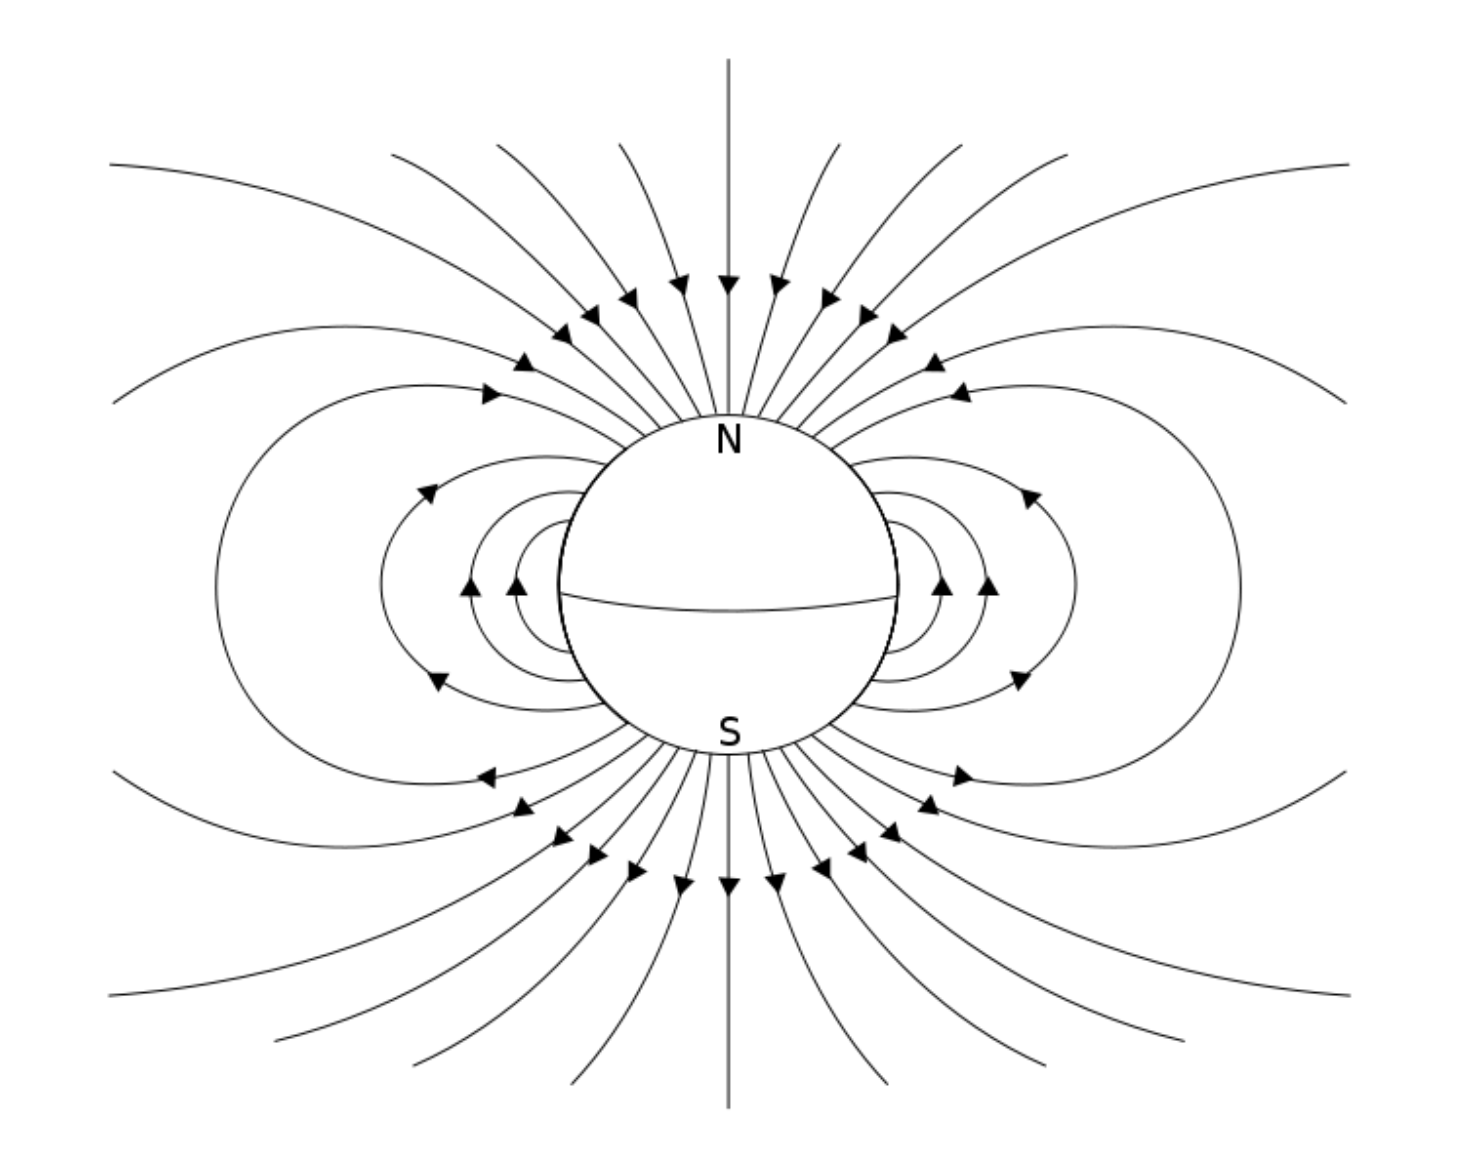

In [10]:
figure3 = "iVBORw0KGgoAAAANSUhEUgAABb4AAASICAYAAADcT9l8AAAMbWlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnluSkJDQAghICb0J0gkgJYQWQHoRRCUkgYQSY0JQsaOLCq5dRLGiqyKKbaXZsSuLYu+LBRVlXdTFhsqbkICu+8r3zvfNvX/OnPlPuTO59wCg+YErkeSjWgAUiAulCeHBjDFp6QxSJyABdUABPsCDy5NJWHFx0QDK4P3v8u4GQBT3q04Krn/O/1fR4QtkPACQDIiz+DJeAcTHAcDX8STSQgCICr3l5EKJAs+GWFcKA4R4pQLnKPEOBc5S4sMDNkkJbIgvA6BG5XKlOQBo3IN6RhEvB/JofIbYRcwXiQHQHAFxAE/I5UOsiH1EQcFEBa6E2A7aSyCG8QBm1necOX/jzxri53JzhrAyrwFRCxHJJPncqf9naf63FOTLB33YwEEVSiMSFPnDGt7KmxilwFSIu8VZMbGKWkP8QcRX1h0AlCKURyQr7VFjnowN6wf0IXbhc0OiIDaGOEycHxOt0mdli8I4EMPdgk4RFXKSIDaAeIFAFpqostkknZig8oXWZ0vZLJX+HFc64Ffh64E8L5ml4n8jFHBU/JhGsTApFWIKxFZFopQYiDUgdpblJUapbEYVC9kxgzZSeYIifiuIEwTi8GAlP1aULQ1LUNmXFcgG88U2CUWcGBXeXyhMilDWBzvF4w7ED3PBLgvErORBHoFsTPRgLnxBSKgyd+y5QJycqOL5ICkMTlCuxSmS/DiVPW4hyA9X6C0g9pAVJarW4imFcHMq+fFsSWFckjJOvDiXGxmnjAdfCqIBG4QABpDDkQUmglwgautu6Ia/lDNhgAukIAcIgJNKM7gidWBGDK+JoBj8AZEAyIbWBQ/MCkAR1H8Z0iqvTiB7YLZoYEUeeApxAYgC+fC3fGCVeMhbCngCNaJ/eOfCwYPx5sOhmP/3+kHtNw0LaqJVGvmgR4bmoCUxlBhCjCCGEe1xIzwA98Oj4TUIDjecifsM5vHNnvCU0E54RLhO6CDcniAqkf4Q5WjQAfnDVLXI+r4WuA3k9MSDcX/IDplxfdwIOOEe0A8LD4SePaGWrYpbURXGD9x/y+C7p6GyI7uQUfIwchDZ7seVGg4ankMsilp/Xx9lrFlD9WYPzfzon/1d9fnwHvWjJbYAO4CdxU5g57HDWANgYMewRqwVO6LAQ7vrycDuGvSWMBBPHuQR/cMfV+VTUUmZS61Ll8tn5VyhYEqh4uCxJ0qmSkU5wkIGC74dBAyOmOc8guHm4uYKgOJdo/z7ehs/8A5B9Fu/6eb+DoD/sf7+/kPfdJHHANjnDY9/0zedHRMAbXUAzjXx5NIipQ5XXAjwX0ITnjRDYAosgR3Mxw14AT8QBEJBJIgFSSANjIdVFsJ9LgWTwXQwB5SCcrAUrAJrwUawBewAu8F+0AAOgxPgDLgILoPr4C7cPZ3gJegB70AfgiAkhIbQEUPEDLFGHBE3hIkEIKFINJKApCGZSA4iRuTIdGQuUo4sR9Yim5EaZB/ShJxAziPtyG3kIdKFvEE+oRhKRXVRE9QGHYkyURYahSah49AcdBJajM5DF6OVaDW6C61HT6AX0etoB/oS7cUApo7pY+aYE8bE2Fgslo5lY1JsJlaGVWDVWB3WDJ/zVawD68Y+4kScjjNwJ7iDI/BknIdPwmfii/C1+A68Hj+FX8Uf4j34VwKNYExwJPgSOIQxhBzCZEIpoYKwjXCQcBqepU7COyKRqE+0JXrDs5hGzCVOIy4irifuIR4nthMfE3tJJJIhyZHkT4olcUmFpFLSGtIu0jHSFVIn6YOaupqZmptamFq6mlitRK1CbafaUbUras/U+shaZGuyLzmWzCdPJS8hbyU3ky+RO8l9FG2KLcWfkkTJpcyhVFLqKKcp9yhv1dXVLdR91OPVReqz1SvV96qfU3+o/pGqQ3WgsqkZVDl1MXU79Tj1NvUtjUazoQXR0mmFtMW0GtpJ2gPaBw26hrMGR4OvMUujSqNe44rGK02yprUmS3O8ZrFmheYBzUua3VpkLRstthZXa6ZWlVaT1k2tXm26tqt2rHaB9iLtndrntZ/rkHRsdEJ1+DrzdLbonNR5TMfolnQ2nUefS99KP03v1CXq2upydHN1y3V367bp9ujp6HnopehN0avSO6LXoY/p2+hz9PP1l+jv17+h/2mYyTDWMMGwhcPqhl0Z9t5guEGQgcCgzGCPwXWDT4YMw1DDPMNlhg2G941wIwejeKPJRhuMTht1D9cd7jecN7xs+P7hd4xRYwfjBONpxluMW417TUxNwk0kJmtMTpp0m+qbBpnmmq40PWraZUY3CzATma00O2b2gqHHYDHyGZWMU4wec2PzCHO5+WbzNvM+C1uLZIsSiz0W9y0plkzLbMuVli2WPVZmVqOtplvVWt2xJlszrYXWq63PWr+3sbVJtZlv02Dz3NbAlmNbbFtre8+OZhdoN8mu2u6aPdGeaZ9nv97+sgPq4OkgdKhyuOSIOno5ihzXO7aPIIzwGSEeUT3iphPVieVU5FTr9NBZ3znaucS5wfnVSKuR6SOXjTw78quLp0u+y1aXu646rpGuJa7Nrm/cHNx4blVu19xp7mHus9wb3V97OHoIPDZ43PKke472nO/Z4vnFy9tL6lXn1eVt5Z3pvc77JlOXGcdcxDznQ/AJ9pnlc9jno6+Xb6Hvft8//Zz88vx2+j0fZTtKMGrrqMf+Fv5c/83+HQGMgMyATQEdgeaB3MDqwEdBlkH8oG1Bz1j2rFzWLtarYJdgafDB4PdsX/YM9vEQLCQ8pCykLVQnNDl0beiDMIuwnLDasJ5wz/Bp4ccjCBFREcsibnJMODxODacn0jtyRuSpKGpUYtTaqEfRDtHS6ObR6OjI0StG34uxjhHHNMSCWE7sitj7cbZxk+IOxRPj4+Kr4p8muCZMTzibSE+ckLgz8V1ScNKSpLvJdsny5JYUzZSMlJqU96khqctTO8aMHDNjzMU0ozRRWmM6KT0lfVt679jQsavGdmZ4ZpRm3BhnO27KuPPjjcbnjz8yQXMCd8KBTEJmaubOzM/cWG41tzeLk7Uuq4fH5q3mveQH8VfyuwT+guWCZ9n+2cuzn+f456zI6RIGCiuE3SK2aK3odW5E7sbc93mxedvz+vNT8/cUqBVkFjSJdcR54lMTTSdOmdgucZSUSjom+U5aNalHGiXdJkNk42SNhbrwo75Vbif/Sf6wKKCoqujD5JTJB6ZoTxFPaZ3qMHXh1GfFYcW/TMOn8aa1TDefPmf6wxmsGZtnIjOzZrbMspw1b1bn7PDZO+ZQ5uTN+a3EpWR5yV9zU+c2zzOZN3ve45/Cf6ot1SiVlt6c7zd/4wJ8gWhB20L3hWsWfi3jl10odymvKP+8iLfows+uP1f+3L84e3HbEq8lG5YSl4qX3lgWuGzHcu3lxcsfrxi9on4lY2XZyr9WTVh1vsKjYuNqymr56o7K6MrGNVZrlq75vFa49npVcNWedcbrFq57v56//sqGoA11G002lm/8tEm06dbm8M311TbVFVuIW4q2PN2asvXsL8xfarYZbSvf9mW7eHvHjoQdp2q8a2p2Gu9cUovWymu7dmXsurw7ZHdjnVPd5j36e8r3gr3yvS/2Ze67sT9qf8sB5oG6X61/XXeQfrCsHqmfWt/TIGzoaExrbG+KbGpp9ms+eMj50PbD5oerjugdWXKUcnTe0f5jxcd6j0uOd5/IOfG4ZULL3ZNjTl47FX+q7XTU6XNnws6cPMs6e+yc/7nD533PN11gXmi46HWxvtWz9eBvnr8dbPNqq7/kfanxss/l5vZR7UevBF45cTXk6plrnGsXr8dcb7+RfOPWzYybHbf4t57fzr/9+k7Rnb67s+8R7pXd17pf8cD4QfXv9r/v6fDqOPIw5GHro8RHdx/zHr98InvyuXPeU9rTimdmz2qeuz0/3BXWdfnF2BedLyUv+7pL/9D+Y90ru1e//hn0Z2vPmJ7O19LX/W8WvTV8u/0vj79aeuN6H7wreNf3vuyD4YcdH5kfz35K/fSsb/Jn0ufKL/Zfmr9Gfb3XX9DfL+FKuQOfAhgcaHY2AG+2A0BLA4AO+zbKWGUvOCCIsn8dQOA/YWW/OCBeANTB7/f4bvh1cxOAvVth+wX5NWGvGkcDIMkHoO7uQ0Mlsmx3NyUXFfYphAf9/W9hz0ZaAcCXpf39fdX9/V+2wGBh73hcrOxBFUKEPcMmzpesgizwb0TZn36X4493oIjAA/x4/xc3HZDwwCaHxQAAAIplWElmTU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAIdpAAQAAAABAAAATgAAAAAAAACQAAAAAQAAAJAAAAABAAOShgAHAAAAEgAAAHigAgAEAAAAAQAABb6gAwAEAAAAAQAABIgAAAAAQVNDSUkAAABTY3JlZW5zaG901riEmQAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAdhpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+MTE2MDwvZXhpZjpQaXhlbFlEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWERpbWVuc2lvbj4xNDcwPC9leGlmOlBpeGVsWERpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6VXNlckNvbW1lbnQ+U2NyZWVuc2hvdDwvZXhpZjpVc2VyQ29tbWVudD4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+CgUZkWUAAAAcaURPVAAAAAIAAAAAAAACRAAAACgAAAJEAAACRAACD7bRuZ0BAABAAElEQVR4Aeyd+bscVZnHy9FxHx03lGGRzcAk7CGBLEAWSCBskbAomwjMo+PzzOMP83fMM86i8ugIyo5sWSEJIYQlCQQIIRDZNSMqoIiOis64zfB5mRc69/a9t27fXqqrP/U851Z33e7qqs+pOnXO93zPe972v68vhYsEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIoCYE3qbwXZOc9DQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUggCCh8eyFIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpBArQgofNcqOz0ZCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISUPj2GpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIFaEVD4rlV2ejISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCSg8O01IAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAArUioPBdq+z0ZCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEDh22tAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEakVA4btW2enJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgMK314AEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQnUioDCd62y05ORgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABhW+vAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEqgVAYXvWmWnJyMBCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAIK314DEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkUCsCCt+1yk5PRgISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABBS+vQYkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUigVgQUvmuVnZ6MBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJKHx7DUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkECtCCh81yo7PRkJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhJQ+PYakIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQggVoRUPiuVXZ6MhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJKDw7TUgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACtSKg8F2r7PRkJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQOHba0ACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgARqRUDhu1bZ6clIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCAwrfXgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCdSKgMJ3rbLTk5GABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAGFb68BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISqBUBhe9aZacnIwEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAgrfXgMSkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCRQKwIK37XKTk9GAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEFL69BiQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSKBWBBS+a5WdnowEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQkofHsNSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQQK0IKHzXKjs9GQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACElD49hqQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCCBWhFQ+K5VdnoyEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkoPDtNSABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAK1IqDwXavs9GQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhA4dtrQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABGpFQOG7VtnpyUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIDCt9eABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJ1IqAwnetstOTkYAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAYVvrwEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKoFQGF71plpycjAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACCt9eAxKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJFArAgrftcpOT0YCEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQUvr0GJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIoFYEFL5rlZ2ejAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCSh8ew1IQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpBArQgofNcqOz0ZCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISUPj2GpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIFaEVD4rlV2ejISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCSg8O01IAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAArUioPBdq+z0ZCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEDh22tAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEakVA4btW2enJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgMK314AEJCABCUhAAhKQgAQmSODPf/5z8fOf/7z45S9/WfzP//xP7G333XcvPvKRj0xwz35dAhKQgAQkIAEJSEACEmiFgMJ3K9T8jgQkIAEJSEACEpCABBoI/OEPfyh27NhRPPvss8Wrr74a/5k9e3YxZcqUhk/5UgISkIAEJCABCUhAAhLoFgGF726R9nckIAEJSEACEpCABGpL4Pe//32xdevW4vHHHy9+9rOfxXkuXLiwmDp1am3P2ROTgAQkIAEJSEACEpBAlQkofFc5dzw2CUhAAhKQgAQkIIG+IEB4ky1bthSPPfZY8fLLL8cxn3rqqcXRRx/dF8fvQUpAAhKQgAQkIAEJSKBuBBS+65ajno8EJCABCUhAAhKQQNcJpPC9bdu2XYTvY445puvH4g9KQAISkIAEJCABCUhAAkWh8O1VIAEJSEACEpCABCQggQkSUPieIEC/LgEJSEACEpCABCQggTYTUPhuM1B3JwEJSEACEpCABCQweAQUvgcvzz1jCUhAAhKQgAQkIIFqE1D4rnb+eHQSkIAEJCABCUhAAn1AQOG7DzLJQ5SABCQgAQlIQAISGCgCCt8Dld2erAQkIAEJSEACEpBAJwgofHeCqvuUgAQkIAEJSEACEpBA6wQUvltn5zclIAEJSEACEpCABCQQBBS+vRAkIAEJSEACEpCABCRQLQIK39XKD49GAhKQgAQkIAEJSKAPCSh892GmecgSkIAEJCABCUhAArUmoPBd6+z15CQgAQlIQAISkIAEukFA4bsblP0NCUhAAhKQgAQkIAEJlCeg8F2elZ+UgAQkIAEJSEACEpBAUwIK302xuFECEpCABCQgAQlIQAI9I6Dw3TP0/rAEJCABCUhAAhKQQF0IKHzXJSc9DwlIQAISkIAEJCCBuhBQ+K5LTnoeEpCABCQgAQlIQAI9I6Dw3TP0/rAEJCABCUhAAhKQgASaElD4borFjRKQgAQkIAEJSEACEihPQOG7PCs/KQEJSEACEpCABCQggW4QUPjuBmV/QwISkIAEJCABCUig1gQUvmudvZ6cBCQgAQlIQAISkEAfElD47sNM85AlIAEJSEACEpCABKpFQOG7Wvnh0UhAAhKQgAQkIAEJSEDh22tAAhKQgAQkIAEJSEACEySg8D1BgH5dAhKQgAQkIAEJSEACbSag8N1moO5OAhKQgAQkIAEJSGDwCCh8D16ee8YSkIAEJCABCUhAAtUmoPBd7fzx6CQgAQlIQAISkIAE+oCAwncfZJKHKAEJSEACEpCABCQwUAQUvgcquz1ZCUhAAhKQgAQkIIFOEFD47gRV9ykBCUhAAhKQgAQkIIHWCSh8t87Ob0pAAhKQgAQkIAEJSCAIKHx7IUhAAhKQgAQkIAEJSKBaBBS+q5UfHo0EJCABCUhAAhKQQB8SUPjuw0zzkCUgAQlIQAISkIAEak1A4bvW2evJSUACEpCABCQgAQl0g4DCdzco+xsSkIAEJCABCUhAAhIoT0DhuzwrPykBCUhAAhKQgAQkIIGmBBS+m2JxowQkIAEJSEACEpCABHpGQOG7Z+j9YQlIQAISkIAEJCCBuhBQ+K5LTnoeEpCABCQgAQlIQAJ1IaDwXZec9DwkIAEJSEACEpCABHpGQOG7Z+j9YQlIQAISkIAEJCABCTQloPDdFIsbJSABCUhAAhKQgAQkUJ6Awnd5Vn5SAhKQgAQkIAEJSEAC3SCg8N0Nyv6GBCQgAQlIQAISkECtCSh81zp7PTkJSEACEpCABCQggT4koPDdh5nmIUtAAhKQgAQkIAEJVIuAwne18sOjkYAEJCABCUhAAhKQgMK314AEJCABCUhAAhKQgAQmSEDhe4IA/boEJCABCUhAAhKQgATaTEDhu81A3Z0EJCABCUhAAhKQwOARUPgevDz3jCUgAQlIQAISkIAEqk1A4bva+ePRSUACEpCABCQgAQn0AQGF7z7IJA9RAhKQgAQkIAEJSGCgCCh8D1R2e7ISkIAEJCABCUhAAp0goPDdCaruUwISkIAEJCABCUhAAq0TUPhunZ3flIAEJCABCUhAAhKQQBBQ+PZCkIAEJCABCUhAAhKQQLUIKHxXKz88GglIQAISkIAEJCCBPiSg8N2HmeYhS0ACEpCABCQgAQnUmoDCd62z15OTgAQkIAEJSEACEugGAYXvblD2NyQgAQlIQAISkIAEJFCegMJ3eVZ+UgISkIAEJCABCUhAAk0JKHw3xeJGCUhAAhKQgAQkIAEJ9IyAwnfP0PvDEpCABCQgAQlIQAJ1IaDwXZec9DwkIAEJSEACEpCABOpCQOG7LjnpeUhAAhKQgAQkIAEJ9IyAwnfP0PvDEpCABCQgAQlIQAISaEpA4bspFjdKQAISkIAEJCABCUigPAGF7/Ks/KQEJCABCUhAAhKQgAS6QUDhuxuU/Q0JSEACEpCABCQggVoTUPiudfZ6chKQgAQkIAEJSEACfUhA4bsPM81DloAEJCABCUhAAhKoFgGF72rlh0cjAQlIQAISkIAEJCABhW+vAQlIQAISkIAEJCABCUyQgML3BAH6dQlIQAISkIAEJCABCbSZgMJ3m4G6OwlIQAISkIAEJCCBwSOg8D14ee4ZS0ACEpCABCQgAQlUm4DCd7Xzx6OTgAQkIAEJSEACEugDAgrffZBJHqIEJCABCUhAAhKQwEARUPgeqOz2ZCUgAQlIQAISkIAEOkFA4bsTVN2nBCQgAQlIQAISkIAEWieg8N06O78pAQlIQAISkIAEJCCBIKDw7YUgAQlIQAISkIAEJCCBahFQ+K5Wfng0EpCABCQgAQlIQAJ9SEDhuw8zzUOWgAQkIAEJSEACEqg1AYXvWmevJycBCUhAAhKQgAQk0A0CCt/doOxvSEACEpCABCQgAQlIoDwBhe/yrPykBCQgAQlIQAISkIAEmhJQ+G6KxY0SkIAEJCABCUhAAhLoGQGF756h94clIAEJSEACEpCABOpCQOG7LjnpeUhAAhKQgAQkIAEJ1IWAwnddctLzkIAEJCABCUhAAhLoGQGF756h94clIAEJSEACEpCABCTQlIDCd1MsbpSABCQgAQlIQAISkEB5Agrf5Vn5SQlIQAISkIAEJCABCXSDgMJ3Nyj7GxKQgAQkIAEJSEACtSag8F3r7PXkJCABCUhAAhKQgAT6kIDCdx9mmocsAQlIQAISkIAEJFAtAgrf1coPj0YCEpCABCQgAQlIQAIK314DEpCABCQgAQlIQAISmCABhe8JAvTrEpCABCQgAQlIQAISaDMBhe82A3V3EpCABCQgAQlIQAKDR0Dhe/Dy3DOWgAQkIAEJSEACEqg2AYXvauePRycBCUhAAhKQgAQk0AcEFL77IJM8RAlIQAISkIAEJCCBgSKg8D1Q2e3JSkACEpCABCQgAQl0goDCdyeouk8JSEACEpCABCQgAQm0TkDhu3V2flMCEpCABCQgAQlIQAJBQOHbC0ECEpCABCQgAQlIQALVIqDwXa388GgkIAEJSEACEpCABPqQgMJ3H2aahywBCUhAAhKQgAQkUGsCCt+1zl5PTgISkIAEJCABCUigGwQUvrtB2d+QgAQkIAEJSEACEpBAeQIK3+VZ+UkJSEACEpCABCQgAQk0JaDw3RSLGyUgAQlIQAISkIAEJNAzAgrfPUPvD0tAAhKQgAQkIAEJ1IWAwnddctLzkIAEJCABCUhAAhKoCwGF77rkpOchAQlIQAISkIAEJNAzAgrfPUPvD0tAAhKQgAQkIAEJSKApAYXvpljcKAEJSEACEpCABCQggfIEFL7Ls/KTEpCABCQgAQlIQAIS6AYBhe9uUPY3JCABCUhAAhKQgARqTUDhu9bZ68lJQAISkIAEJCABCfQhAYXvPsw0D1kCEpCABCQgAQlIoFoEFL6rlR8ejQQkIAEJSEACEpCABBS+vQYkIAEJSEACEpCABCQwQQIK3xME6NclIAEJSEACEpCABCTQZgIK320G6u4kIAEJSEACEpCABAaPgML34OW5ZywBCUhAAhKQgAQkUG0CCt/Vzh+PTgISkIAEJCABCUigDwgofPdBJnmIEpCABCQgAQlIQAIDRUDhe6Cy25OVgAQkIAEJSEACEugEAYXvTlB1nxKQgAQkIAEJSEACEmidgMJ36+z8pgQkIAEJSEACEpCABIKAwrcXggQkIAEJSEACEpCABKpFQOG7Wvnh0UhAAhKQgAQkIAEJ9CEBhe8+zDQPWQISkIAEJCABCUig1gQUvmudvZ6cBCQgAQlIQAISkEA3CCh8d4OyvyEBCUhAAhKQgAQkIIHyBBS+y7PykxKQgAQkIAEJSEACEmhKQOG7KRY3SkACEpCABCQgAQlIoGcEFL57ht4floAEJCABCUhAAhKoCwGF77rkpOchAQlIQAISkIAEJFAXAgrfdclJz0MCEpCABCQgAQlIoGcEFL57ht4floAEJCABCUhAAhKQQFMCCt9NsbhRAhKQgAQkIAEJSEAC5QkofJdn5SclIAEJSEACEpCABCTQDQIK392g7G9IQAISkIAEJCABCdSagMJ3rbPXk5OABCQgAQlIQAIS6EMCCt99mGkesgQkIAEJSEACEpBAtQgofFcrPzwaCUhAAhKQgAQkIAEJKHx7DUhAAhKQgAQkIAEJSGCCBBS+JwjQr0tAAhKQgAQkIAEJSKDNBBS+2wzU3UlAAhKQgAQ6TeDPf/5z8Yc//CF+5u1vf3vxF3/xF8Xb3va2SJ3+bfffHQLk8Z/+9Kfit7/9bfHLX/6yeMc73lF85CMfKd797nd35wD8lXETUPgeN7JKfeG1114rfvWrX0V5yv32nve8p3jve99bqWP0YNpDgOcn9+tf/uVfFu9617vas1P3IgEJSEACEpBAJQkofFcyWzwoCUhAAhKQwMgEaLQjiLLQcCch1CB+u9SDwB//+McQZl5++eXiueeeCxHu4IMPLj70oQ/V4wRreBYK3/2dqS+++GLxwx/+MMpTOpg+9rGPRervs/LomxH4zW9+U/zXf/1X8f73v7/4wAc+4LOzGSS3SUACEpCABGpCQOG7JhnpaUhAAhKQwOAQ+MUvflHs3LmzeOmll4pXX321+PCHP1z87d/+bfHRj340BFJc4C79TQDh+3e/+13x1FNPFXfeeWfxzne+s5gzZ06x7777hlBDZ4dLtQgofFcrP8oeDSMruN8eeOCBYv369cUnP/nJYvLkycWee+4Zqex+/Fx1CeQImh/96EfF888/H89N3P2HHHJIcdRRRxU+M6ubdx6ZBCQgAQlIYKIEFL4nStDvS0ACEpCABLpMAFfipk2biq1btxaPP/54sd9++xVLliwJ8ZtwGIikLv1NIIXvjRs3FpdffnmEXzjrrLOKI488sth7770NwVDB7FX4rmCmlDgk8u2///u/i+uvv774+te/XsyePbtYvHhxccABB0RHU4ld+JGKE6A8/f3vf1/cd999xapVq4qf/vSnxa9//evizDPPLC688EKfmRXPPw9PAhKQgAQkMBECCt8Toed3JSABCUhAAj0gQMxnHN/f+973ikcffbQgNu1f/dVfFfvvv39x6KGHFnvttVex2267xZD9HhyeP9kGAhnH/cknnyxWrlxZ/OQnPwmxG4fi/Pnzi9133/3N2O5t+Dl30QYCCt9tgNiDXeAA3rFjR/HII48UW7ZsKebOnVucccYZEeaE0TQu/UuAe5LnI+Gi6CSm05iylNFROPqnTp1aTJs2Tcd3/2axRy4BCUhAAhIYk4DC95iI/IAEJCABCUigegT+93//NxrxDz/8cLjYGKL/N3/zN8XJJ59cTJ8+PQTw973vfdU7cI9oXAR+9rOfFYjfmzdvLtasWVN86lOfKr70pS8VBx10UHRsMLGpSzUIKHxXIx/GexR33313sXTp0nB9E0LohBNOKBYtWqQLeLwgK/h5Oolxd69du7b47ne/G3nKiJl58+bFs5IOY0dIVTDjPCQJSEACEpBAGwkofLcRpruSgAQkIAEJdJMAk3PhXnvmmWeK7du3Fz//+c9jQkQEcIRRRFLSe97znnAHd/PY/K32EGAS01deeaWgg2P58uUhds+YMSM6NshjJmdzqQYBhe9q5EPZo6D8pMyk03DFihUR2uSYY46J+N7MmWCnUlmS1fsc82DwbHz66afD6c17wtkwGiqfjZMmTQrR23yuXv55RBKQgAQkIIF2ElD4bidN9yUBCUhAAhLoAQEm6cLVhnPxxhtvLJisDVfb8ccfH6424n7jZHzb297Wg6PzJ9tBgI4NXKlMzkZeMkT/1FNPjZA27di/+5g4AYXviTPs5h4Ie8HksZSbjKY4/fTTYzTFX//1X+sC7mZGtPG3GAlF+sEPflA89NBDxb333hsdG4jcjIZiIkvCgb3rXe9q46+6KwlIQAISkIAEqkxA4bvKueOxSUACEpCABEoQQHDDGfz9738/3G3/+Z//GW433MDEgj744INjUkSGdb/73e9WAC/BtGofefHFFyMOMTHdEXSI587EbKw/8IEPFO94xzuqdsgDdzwK3/2R5cTPp3OQiWOJn0++vfe97y1mzpwZ8fMZIfP2t7+9P07GowwCiN3kK+UkoaFwejMSim08Bxn5hOC9xx57RGeh5aUXjgQkIAEJSGBwCCh8D05ee6YSkIAEShOgEcmiQ7g0skp88I9//GPx+9//vnjwwQeLVatWFUza9vLLLxdz5swpzjnnnGj0f+hDHwpRx7ytRJaVPog//OEPMVR/3bp1xde//vWCSffOOuusEHNw99Oh4dJbAgrfveVf9tcpIwl7ceuttxZf/epXi8MOO6w4++yzC1zB3EuK3mVJVuNz1FfoyOD+27ZtW3H77beHk5/5EXB4L1myJDoImdBSwbsaeVb2KKyLliXl5yQgAQlIYDQCCt+j0fF/EpCABAaQAI1HEo1/GokkhYD+uBDSyYjr7bnnngvXG+43tiOMHn744cXRRx9dIAAwnF/xuz/ylaMkD+nYeOyxx4o77rijQNQhTwl5cuKJJ4YQbn72Nj8VvnvLv+yvv/DCC8X3vve9iJu/ZcuWmAwYcZTRMYye8D4qS7L3n0PwpiODUU6PPPJIPPcIB4XLe7/99isOPPDAgnjtdBQ610Xv86vsESB487xjJBsLIzII8eUiAQlIQAISaIWAwncr1PyOBCQggRoTYMKvX/7ylyF2M+kTjcUc+s17ksJAf1wAxK9F2Nm0aVMM62coP3FsDzjggGKfffaxU6M/snGXo2TCth07doSrn/i106ZNKy677LJw8xvHfRdUXX+j8N115OP6QcQ0EhPFrl69OiaNRTg99thjI16+E8WOC2dPP5x5+bvf/S7qK+QpDn46BBnVxCSlPOuY6JnOe+ssPc2uMX8885P7EcGbRN4yfwnGi49//OMhfo+5Iz8gAQlIQAISaEJA4bsJFDdJQAISGGQCxInGLUxigqg999wzEkPAeY0j7n3ve98gI+qbc3/11Vcj5inuRpzCdGrQmGRoP4Jp5m3fnJAHWvzmN78JwY74xLfddlvxiU98IhzfBx10ULHvvvs6KV8PrxGF7x7CL/HThDf59a9/XWzYsKG46aabio997GMR15s5EHAFv/Od7yyxFz9SBQK4vHmeEc7rgQceCMc37uDddtutmDJlSoStoYOXzgw6612qS4DRTJSd5CdufSadJXGvMqqJ59qMGTOic7e6Z+GRSUACEpBAlQkofFc5dzw2CUhAAj0ggEDKBHr33HNPuISZFIqU4gBCW8bKNBRKDzKohZ/88Y9/HJ0Ya9asKZYvXx55ifub0CeI4Ag+ij4tgO3hVxC+r7nmmoLY33RK0ZExa9asgglMdTf2JmMUvnvDveyv/vznPy8Ic3LXXXcVN998c4R9+uIXv1jstdde4Sb1vilLsnefwxmMGxiRlLxkot8VK1ZEuJMjjzwy8pRnG50a5mfv8mm0XyYPMywbzy/KTZzdL730UoxmYkQTiU5eJiPl2bZ48eKoh462X/8nAQlIQAISGImAwvdIZNwuAQlIYEAJvPLKK8VPf/rTcFLh/qbxQcJNhcvqIx/5SDQqP/nJTxYkhhKzjeGoNjSredGQfzQsife9ffv2cFURMgOXY3ZoEAuV/DMPq5mHQ4+Ke5OYto8//njEK54+fXpx7rnnxpDwd73rXebjUGBdeK/w3QXIE/gJ7hUmh8VV+tprr4Wgdsopp8Tzy3AYEwDbxa9SD2EOC8J44fSmrkIoNjr/DjnkkIjrTZ2EbS7VJEDHBfVMJt4mNjvubuojdGYQrguXN6MKictO3H3qmfvvv3/MS1LNM/KoJCABCUig6gQUvqueQx6fBCQggR4RQBhgqCliAWIp6emnn44GJRMjIpoSXgE3OI65jAVOw0URoUeZNsbPErud8CcrV66MeKgMC8dRddxxxxWzZ88O1yOTSCl+jwGyAv+mM4O8ZKLLb3/72+Hev+iii0L4YUSGE9J2P5MUvrvPvMwvEjcYZykhTq666qoQ1o466qjiiCOOiBEvlHku1SaQ4TCI4f3EE09Epx9zV9DJt3DhwoL8nDRpUvHBD36w2icygEeXLv10d/Pswq1PKD0645999tmCUWncp3TAE6qGkWiEqiG2t6H1BvCi8ZQlIAEJtJmAwnebgbo7CUhAAnUhQCOFhDOHIeI0OPP1L37xixDFiRdN/EzCK9DozEkTEVQR3oytWa2rAWGOREMTx9wzzzwTnRm45XBV4Rom/Il5V618a3Y03JvELM5Y34SqwRXHcH/yEdecS3cJKHx3l3fZX+N5hbCGULpq1aq4Tz796U/H84qQGHTUulSbAJ3wPLeYr4KRLriD6bSlzsGoJearYFJLQ3ZVLx8RtHHpcw9S72C0Ep3wPL+YM4aEmYL8o+5Ixy2JbRgqMFO4SEACEpCABCZCQOF7IvT8rgQkIIEBIoBrh1AnOfklscBpxDBclaGrkydPfjMhpCKG46TDkaUDvFoXSgrgq1evDvc3+Ur+4pybP39+uOZojBr6pFr51uxoiIV67733Fjt37ox7Eef+mWeeGXmo67sZsc5tU/juHNtW90y5xr3x8MMPvxkWiJjBjI5gvgpHt7RKtjvfQzQlvAmhMB588MFi27ZtIYAjktJ5QUcfYqmhTbqTH2V/hToFCXMEoweZhJQJ06k3smahjoGzmxA1jCCk8yLri2V/x89JQAISkIAEyhBQ+C5Dyc9IQAISkEAIoww3JlY0bitc4BmnEfGb12xnYbhxhkHZb7/93pwMUwd4NS4kxAQS8TURhbZu3RqhbIjVztBixFPEIZxWuq2qkWcjHQUjMRg2ThgH3KwzZswoPvvZz4YbEmHBe24kcu3frvDdfqYT2SOiN+UcEyB+97vfDRGOkS2EOOE+MSzGROh257vUKRBLCblGJx9CKnULEp3tdF4geuva705+jPUr3HMk3N0kHPqMLMOxj8ObOgaJ2N3UNXB2E8ubjoz3v//98bzymTUWZf8vAQlIQALjJaDwPV5iFfg8w5txV6ZLhQpCuvIaX1fgUD0ECUig5gQyFAqTE23ZsiXEU0Q4BHJiNWYDlSHJiHDEasyhq1mG1RxRpU+PfCLdddddkRiOzBBknN9z5swJJx2NUp4tNkarmZXUB3DWLVu2rPjmN78ZIYcWLVoU9x6dTgpC3cs3he/usS7zS+QH8YTpFLryyitDZFuyZEmExmACRNylLtUjgHBKuYZYSn2CES0I3zybELoXL14cnRfUJwxtUo38417jOYS7m3uO+N24vInHjvDNvUZHE2G4cOnzbEL8th5YjfzzKCRQdwLZKUebZ+hryiHqyoyStEyq75Wg8N1necvNiquSeIWIENygVPoakxPL9VmmergS6GMClEm4eGjs/PSnP4300ksvFSRc4DRUaQwRqxERHDGcWOA4fqhkKKb2NvOz8scw8h/96EcRDgB3HXlDqJq5c+cWRx99dISsMWZ0b/NqpF/nHiQRBoCJLrkXyb9jjz22WLBggbG+RwLXge0K3x2AOoFd8gwiHBcxoTdv3hzPnnPPPbfYd999o0wzFNAE4Hbwq5RntHMytAmjknDu49QnnjdxvYnNTnvHOkQHM6LkrqlH4O7GAIErH5c3znzKQ/KJUDR0NJF4j8s7Q+GV/Ak/JgEJSKBlApRRGLUy0S4l8Z41dQHapZRLPFN8rrSMutJfVPiudPYMPzgcEDkxCDcxC6I3lb/GdQpK3Lj0XDWu84Yez5oCofHz7NMeseH54xYJDDoBKhCvvvpqhNBAbKARRKOV8gqHD6I3sRxxgDO0lUoGDnAFiN5fOQgLiEOIDTRcacjOmzevmDVrVrHXXnvFsGSeLeZV7/Oq2RHgsMMVyX1HPOMTTjihOO+886LTSWdrM2Lt36bw3X6mreyR5w3iKU7TdevWxfOIvGHi3lNPPTXKslb263c6S4B8ow5BGDXCcN19991Rh6CNw7whjGQ59NBDo73Ds8ildwRSMMKVT8q5X2ijPv300xG2BIf3UUcdFR0WhBhC+Lbt2Ls885clUFUClP353E4zB2vaJY3vy7xu3E/j6xS9c90ofDMfFe1Tyij0NJ8vVb1SJnZcCt8T49f1b1NxZ0j6/fffHxUNnF2I4RQMueY1N3qjEE6jl/eZeI/YhIOP143r3N64jdeN2xU/up71/qAE+oIAlRLKKcomGq+4wHF/p6MYBziVDoa44t7CAY4gTmxHG0S9zWKeG8SLJr8QT7dv3x5DlhG6TzzxxDdj4jK83KV6BBAf6HS6/fbbixtvvDGc+meccUah4NC9vFL47h7r0X6JejB5QSfeVVddFXVi5i1gIj06XnneuFSLAM8f2jGUYffcc0903vGa9gajjpgAEfGb0Fs8k6wv9Db/qN8xooJ6AvUF5n4hxEk6uzE3kHBRkmfcc4hLLhKQgAQaCVD2k2gbMoKYZzdrEhMb57bG7Ywoyc80/p/PIGgPTeybZwYmztSweI6QeE+bFKMPI4owZGkWacyh+rxW+O6zvOSGRvjeuHFjhBCgosG2oYlKf4Y8aXSD85qUQnizNdtG287/ct9ZaLS6phCy8tpnF6GHK4FxEKBsQuze+brrm8YRbiCcXHSmfepTn3ozMckR4VBoGFHGUDlx6Q0BxAecw4Q8QTjCyTVz5syIzckQcxqzOiJ6kzej/SoNBzqemODy6quvDlcrlXjiqU6dOlWn/mjw2vQ/yjvmOti2bVuIQuwWh/ExxxzTpl9wN2UIZOgt6so33HBD3AsXXXRRMWXKlIgzTB3WpToEKLcQKphjgucNTu8nn3wyQmTwzJk/f34IEjnytDpHPjhHkgYrxG0mHCU0GvU68okRYtTbELd51uDyZpQYIriLBCRQXwIpWlM+jCdR5ufn07iZYjX1KF6zTlG78X9sb0z5v1yno7txzW+kdkVZlYm2DK/33HPPCO2o8F3fa5UzU/jus/yloMCNhyuPG5ybOguPoessSFg3S/l9/tdYOIy1nc/SO0YBggscoQoHYE5ax/vcluuhn8vPsg9EcxcJSKCeBCiXKFNoLBGzE4cQITR2vt5gIjQDvfZUPGjc0ljC/Z3Caj2JVP+sqMjSWcFzBgGPyalo5PKsYNLLGTNmRIxOJit1qRYB8o4Oi02bNsU9Rr4RHoC4xop9nc8rGmMK353nPNYvcN0/9NBDESaD5wzPlzPPPLPYZ5994j6wY3Usgt37P2UW9w0O4rVr10ZnK4IIIiodRji9ceMRNkOzTPfyZegv4bxkVBHh6zAxYGDgPiN+N6OKuLeov+HwJtH+o+3nIgEJ1JcAbTzaBnQ2kygnSI2vc1tu53+0/fJ9urd5FqQ4zboxpdkmt/E+X7NOXYp1pnRzN75nW3agNr6mvEoDFp9Xm6rnNavwXc98DTEcsSl7xBpfs40eNAqaLGwa1xRE+X/WpCy08nNgowI6NBxK9qCxvTE1bm8MmZIFVxZKQ9dDC63G/1sBrunF62nVmgBlCQ1cXEIPPPBAiHMMZ2ayowx7wsRjvCcGOGUHlRpHhnT/sqCTE/cdLn0ceMTtxM1FnNzJkyfHsHPKecpll+oQoHOcScaIbYz7+7TTTitwuyIcGaams/mk8N1ZvmPtnYYzoikO1KVLl0ZHK8IccaEJdcLEei7VIUBe0T6hvHruuecixAl1A+oCuPPpZOW1z//u51neS4hUOLwzbN2zzz4b9TdEcMo7wgcRiobOJYRvO5W6n1f+ogQmSmCo+7qZYbLZtjROpj6EZpQ6U+Prxm2N23nNM4D9oPnQ5kudKE2TrHMbbY7sVMvt+T++y/9Zoy+xzte8p2zyWTLRK6W/v6/w3d/5N+LRU2GhF64xUajl+yzgxlrz+fwMBV6+poCioGoU1LPwonBr3M77oYnPsj8ELQop4inh7hhtnf/Lz/FdK1gjXgL+QwKVJEAZQnlAowkBHMcQjjwEVhKVk0984hMhVEyfPv3NHnjv9e5nJ+U/jV46Jgh9gvMb8Zv8O+mkk8KNR17p/O5+3oz2izxf6WBC+LvmmmtiJMWCBQuK/fffv6BTyaVzBLg3dHx3ju9Ye6ZeybVPiKYrrrgiGrmLFy+OzjqGMtNgdqkGAdopiCWMBGNeAsLSIFIQDxqnN4IqzmHq/i7dJ0A7j/Ls+eefj5FfdEgwWSz5QQgTniUI3XQskWibkVwkIIH+I0C9kfo+o3NJtNFI+XroOv9HGU45kQJzis2s0XeGCtBDt+Xn+Ry6DuJ3q4l2It9lPfQ17xW9+++6bPcRK3y3m+iA7I9CjkQDg0KPApECk/eZeJ9p6DY+TyHLgluQgrAxZe9dbmv2nsKSQjJTFpr5fuiawlBn4oBcoJ5m3xBA/GbILMIqQ9MJsUHlBJGCGOBMZsVrGsM4wLNS0zcnWIMDpQHM5KQ4vRiKTuMXxzex8EgMcaaMpsx1qQ6BNWvWFLfccku4vBEmZs2aVRx77LFW/juYRdSLFL47CHiMXdMYf+GFF0L4Xr58eYwcuvTSS6Ocoozi+eHSewJ0UGCQobOb5wqhmRhZxGgiBG8mvqajzqX7BGibcR8R6oyY6xgTyCPe00mB2E0+MUksiXaa91X388lflEAzAml8pIyl7l42cd+niJ2vWWfif/m6cc3+MckwmpCOZRKvG9PQ7UPf82wmodEgULtIoFMEFL47Rbbm+x3qHKeAxcmZ63SGD92W/88CmUYiBSgFaorovB4t8Xm+h9CNuwC3IUO4SUyOl69ZN/4vC+GaZ42nJ4G+IkDjl/sdwRtnMSI4DiMaxDS4iPdN44qGMGE2FFi7n73pzCOPcH2TiCNNWYzzm2HOOMAof12qQwCH3qOPPhp5tX379uKcc86JkCc6XzqXRwrfnWNbZs+MILrvvvsiFMMrr7wSIt0ZZ5wR7lTEOR1fZSh2/jOYYnie0DlBGC2eHYweIrQJwjf1d+rsLt0lwLOeeVjo3ObZwcgJhC2MB3REHHTQQfGspyOV9hXub58n3c0jf00CoxHIUbWUsb/61a8iTBGhiihvWWdq/B/b0HV4RtKRhTCdYnTjeqTtaUREuGYfpJFeD/1fvqccUfQeLWf9XzsIKHy3g6L7aIlAFs4I3jmEhoI6X7MeKfE5GjCI342ucArokd6zPUUzCmm+25iGbstCu6WT80sSkMC4CKRLgYkvcRchrNLw4j6ngYXLaNKkSSGEM9GVw2rHhbctH6YBTKOYWKy4iVlnYxixAuc3YgXlqkvvCSD8Ee97xYoVxa233hqT+11wwQUhKnFPubSfgMJ3+5mW2SONdgwVdPbcfPPNUU5RNjEx4rRp04ztXQZiFz6T7kOe8YTNYpQXTm86tY888shw5vOsd+keAdpiGBAQv4jjjfmA/GFNfQzRm9F33Es85+mkoD1lJ1L38shfGmwC3KN5n1LH4H7N1Ow929KVnUbCNBmOtEbzQAehbdUYWjbbWiNtTzGc8sAyYbCv0344e4Xvfsilmh5jCl1ZoDe6wdk20vusOFOYI5qnWI5Izut83/ia/7FPGkeESyBl6IR8zfvcRsWOQp7KnYsEJNAdApQJVMq4rwmBQiOMScoQwXGDM/wWEYNJymgcG6+4O/mSv0L5SWUb5wj5kuFpqGQvXLgw8uaTn/ykzu8E1uM1eUXeIARmrG9CnTBZHEKGS/sJwNtQJ+3nOtYeqRdSz3v44YeLb33rW1Hf++xnPxuCKu5UTA8uvSfAMxyBddmyZcXq1avDPbzXXnvFqCFEVerdCCku3SNAW4oQJjzTGS3BSDvuJUZxEdKEuhbh5mgr0WFKSDOdmd3LH39psAnQLqJewX1KO4jE/dr4uvE92gf6CU7qHOnOulHAHrqd9+gdmFYQwDOxj3RkD12nOZDtjvoY7Gu0n85e4bufcstjDQIpmPMQoHJGRZohO7nO17xv3IaghhBA4U7K4Tv5Pnst8326x+kBTTc4/8v3ja95AFjwe4FKoH0EEDK4Z3Hwbd26NcKf0CBDxKARhuiNo+/jH/94bKMxxn3o0nkClKO4iXGF3XnnnRGWJmOy49rD+Y1jROd35/OizC+sW7cuXN/cHzy35s+fX8ydOze+qkOnDMHyn1H4Ls+qnZ+k3keIrEceeSTKJMwLn//858OhSjlE49yldwR4nvPcwN3NM33btm3xmkks6cymM47nhkvnCdCGItGG4jlOHG/c3Tt37oxnOfmEwE1YE8KY0TGB6G39qvN54y8MBgHuPxbuNRJtHeoOueZ1Y2I7iXuW1Ox1bkP0Ro9Aq6Aezr2ca17n+9yW6xS9rRMOxjU4qGep8D2oOd/n553i91Bn+EgucbbnQ6RRDMd5kkI563yP4xR3IxW9dIIzuzyvP/rRj+6S2E5vqS6IPr+oPPxKEch7HPcC9+wPf/jDaJjRYEYI575D9D7uuONi0j4qb9yHLp0nQN5QWcf5jfhN/Oj7778/ytgFCxYURx11VHRKID659J4AeYSbb+PGjZEuueSS4uKLL7aztgNZQz1Dx3cHwI6xS2J733XXXSGmIgzQMXrKKaeEW9Uh2GPA68K/s369dOnSiOudHdeI3ji903HYhUMZ+J/g+U2biAmrGSFBSDme4dwniN3MqcLk1YSU4xmOgEb7RkFs4C8dAbSJQLZvqEOT6IAiMYEsa9zcjHpNdzf1bTSJFK5HW+PsxrjHfTuSSxttY+j/NO+1KXPdTaUJKHxXOns8uHYSoKKH6yQr4IjcmYZuw0lOA5YHTaPDO93gjet0jqdDPP/X7D0PG10T7cxV9zUoBKgAUilE9CYuKJ1TOBxwiZH23nvvSAjiNNZspHX+yqAyzhBLYn3j/N75umMM/gcccEC4+MgXKug6vzufF6P9QjaiCHly4403Fp/5zGeKc889N1x8dk6MRm78/1P4Hj+ziXyDOhp1O+JF33DDDSHmEYv40EMPDUH1Yx/72ER273cnSCCd3hkaizUTJzKJJW5vRm3x7HbpPAHuE9o2CGovvPBCmAmYRJx6FfUpRtPRCYHwTb5gJrAe1fl88RfqQwBBO40h6cBmPdLrdG8P/T/vqUuwpp7NfYh2wKS/1KlZN6bGbRmmVa2hPteVZ9I+Agrf7WPpnipOIB9IQ13izd5nmAXcpimOs6ZnNntgEXx4z3Z6Sqkk4ginoTVSwtWCIG5lsuIXi4dXOQJDO65wKOH+RnRFcJ0+fXqIrUcccUS4lbjHvM86m42UqeQLZSANaGKxI4AjRjU6v6mgu/SOQN47iN5XX311DF9HdELgMNZ3e/NF4bu9PMfaG9c29TQ6RL/5zW+GgMdoBkI0EJ4BI4JL7wgwWovnA07vm266KUKaUO4wmSUiK/mDucSl8wS4Twhp8sQTTxTr168P4RvBjBjeOO/psGZEK9vIF8MDdT5P/IV6EciOWMq8dHAzVxGdS6R8jY5A4j5DE+BZ1ZgwJPA+hW60A8KxImYPdWrzvnEbr3Vv1+u68mzaR0Dhu30s3VONCPDwQvymNxY3eCYeZil4p+jN//gsDxqcjaR0ibPOij2vecDx8GpMjdt4TUKwY38uEpDArgS4N0mEb8Dlt2PHjhjejsuBziecSukiY3Im7juG6bp0jgDlH2UjebJ27dpwk1FhpyGNAMWElzSmzYfO5UGZPRPr+4477njzWXXiiScWc+bMKfNVP1OSgMJ3SVBt+hgOVjrdCNdAqBPqW8T2pgOUupj1qDaBHudueCaQcHjTSU1sb9KsWbMi8UwgdrRL5wjQMU1dCTc3cbxxeWMUIGwcAhz3Bm574qvTCUF9ScG7c/nhnvubAPcTRjlc2CTuq2YJ3SCd3NQHMjW6uLN8RAug7UJ9GbE7U76n3ky7Bl2Ae9NFAhKYGAGF74nx89s1JpCVRh50QxMuo3SK85qHH8IPPbgZnyt7dFlnrC56YnmAMaTwE5/4xJuJWMW8ZzuJXl2HKdX44vLUJkSAe5PKJBXJl19+ORp1xJgmti73GBXFhQsXFscee2y4Jnjv0jkC2SCgM3Dn6+57Jphbs2ZNlGGLFi0qmPCSmK7mQ+fyoMye6ShiYjlifRMu6NJLLy0uuOACR0aUgVfyMwrfJUG16WOU/xs2bAiBFXcxk+wS25uRDIrebYLcwm5y4nmc3oSgoTN6ypQpMf8Dbu80ibSwa79SkgCiN2ESXnrppeLee++NeN5MAEsdiVAziN24vWl/0C4hTxwpVxKuHxs4AtxPCNq06XFv8+zh3spE5xLtf8xxmDwQrxkFTvg/Us4Xxho3N2uMOdx36eTm3mx8zXueY5kGDronLIE2E1D4bjNQdzd4BBB9EOCo6OP+5qGHCJ6O8HzNe0RyHp48FHng5UMvX+eaXuAc2sSaRK8wif/xOYXxwbvWPOPhBHLyy5ygiUoo9xoTMyGC4DpGdCX8EBVRw58MZ9iuLTSyKQNx9uEupiGA2I0IhfMbdxnvdX63i/j49kMHLA02Qg4sW7asOP/884uzzjorXEZ2SoyP5UifVvgeiUx7t2dnG25vQvj84Ac/iBBXxPdG0MNI4NJ9AtRxeQ7wDCD0FZ1txPQmlMbs2bNj9I8xvTubL5hy6ARCoEPo5h4hxAnvEdm4N+h8mDRpUhhtaF+4SGCQCeTzBCc2bXnaFbnmNeY21unkps1POcfzPtdsS1McHUm4tdPBzTpd3Kz5H+sUuQeZvecugW4SUPjuJm1/q7YEELMzNbrD2db4nsoootzQeF+Ncb/4f/YGI94x/JCEiLfHHnuEoMcDEwHcRQKDTiDvOyqk3F/E/SYR85UhvTNnzoxJtHAdZzxjxe/OXDXZeKAMQ4jCgb9q1arouDv99NPD+c2Elza0O8N/rL3mKKUrrrgiYn2fcMIJEeqEziHFqLHolfu/wnc5ThP9FOU+QgPxir/61a+G++7i12N7I67irkN4cOk+AQQinsMrV64srrvuughngtMb4ZuE8GrHZ2fzBSGOug9hZlavXh3h4BC7qf8wCo4Y6whvtCEQ3hwZ0dn8cO/VJ9BoYPvxj39ckH70ox/FGgMHhhoc3jxzuG9ogzM6O+fzytHaxMgn8fyhnMOxnYn7bOhryNgeqf714RHWh4DCd33y0jPpAwKIc/QaIww1xgrP9xlLnAchD0kenNlQyDVubx68iEe49EgZ35jXbCcWmI2LPrggPMS2EkDY2/l6qI2caJGY09wH3BMM6cX5zZoOJUdNtBX9LjtD/GOkCw1vJtGiY48yiliiTKpIJx5llaNWdsHWtTeIUrfffnvkAZ2sc16P802+uEycgML3xBmW2QMCK+Ie8aOJW0/Zj/DNyBLL9jIE2/sZnI64JXF60/GMyxu38eGHHx6dzzx7ievt0hkCXP8I3sTx5r4gljcub57DLHRu4vCmEwIDjYJ3Z/LBvVaXAOUT90iGYaKDrvE1bXMSn8mU36F8I9Eupz1BxxF1p0ZHN+/TzU173Q6l6l4LHtngElD4Hty898x7QIBe5XSo5poKa77mIcvDFUc4scKyl/knP/lJhA2gF5rtPFARv5kcKBNiEq8R9XA88X97knuQyf5kTwlwDyE+cQ/R8GOyRWJOI4BzbxBzGnGECiv3iEv7CWQ5x9BqnN+bN28OByBOmE9/+tMRigCHsa7M9rMvs8fHH388BENGRSBQIRguWbKkzFf9zBgEFL7HANSmfxO2Z9OmTXEd48TLsgVhT8GhTZDHsRtMHYhIjPC59tprwwlJXvCspVMNM4YdneMAOo6P8ryl3oPIfffddxfMd0K5jog3b9686HhA+Kb+Qz2IfLBtMA7AfrQWBCifSHQO4eZmnYk2NgY07iNGR3CvZOI9CVc37QbKshS2edaQhsbi9v6qxSXjSdSQgMJ3DTPVU+pfAikYpfObB3G6wRGRSFRuaVwjmFOBzYpsvuaBjOMpHeH0TJNwWLJmO8nKb/9eJx756AS4j2j0MaoCRyDOY8QRKr10ClGhxX1M2A0qtNwbLu0nwLBQyq8dO3YUG16fgA6xis4GhlozuRYhnGBPo8GlewS4F2jo3XbbbeHIJ9Y3HRLkBc8Gl9YJKHy3zq7MNynbSQgWxKpnslZG8UyePDlCaWAAcOkeAeqhiEUIrXSkMcqKEVfkB2U8ecNz1s6I9ucJ9wFtBZ6x8MfljTmG5yydynQG4bjnectr6zntzwP3WB0CuLR5/uLk5r4Yus443Tk6JV3clF+UY4jVtKcbJ59sdHVniFE+Y3lWnXz3SCQwHgIK3+Oh5Wcl0CUCOMCp1DauG13hiN84vzMOWcYiY02lN+OQpRscdyWvWSP6MYt7OsLtme5SpvozXSWQ9w+VYQTwhx56KNKDDz4YnUfHH398MWvWrIg7zb3hfdD+7CEPSJRVOL/vvffemFSRcujss88umIgO9nTUuXSPAI08Gohf+9rXiuuvv74444wzipNPPjnygo4gl9YJKHy3zq7MNylPECyYNPFf/uVfQuy78MILizmvh+vBkUdIJZfuEeB6R1Ai3MxVV10VQ/3T6c38GtQz7djsTH7QJsiwJoSv2rhxY9Tv999//3B6E1Od+wERHKHOOk5n8sG9VoMAQjedQLSDuS9I6ehmzagUyitC/ZDoJM2ECYN2MUJ3Yxxu7hnunbx/eO99VI389igk0AoBhe9WqPkddaX9swAAQABJREFUCfSQAJXdHFaKoDc0IYrTEKEXOx/gjWt6q3GF4+xrdINnbDJcIenCtFe7hxntT7eFAEIJlV3CnhBzFPcxFWK20yikkcgwYCZ+YqIa3Rxtwb7LTiivaJAQYoOh2JRRCCII30xGlx1xlje7YOvYG659xG8c3whW8KcBSEcQDkGX1gkofLfOrsw34YuwQTm+YsWKcPZddNFFUY5QplB+u3SeAPVQOiBwGT/66KPREcHzlecoTm+eqfu87vRW9G5vXlB2k1LYI6Y6ecAzlu047GF/0EEHRUx1RnaaB+3NA/fWGwKU/bRt08mdI6NZU6fkHiBRLlG/oYxinYlnAwlxuzHh8CaESeOIN8Xt3uSxvyqBThNQ+O40YfcvgQ4QoILLwoM9K8K5xuFKmAdclo293bymssx2RChEb3q90xXOxEM4MRFA6P02JmMHMs5d9oRA3huMhGCiRRqLiCaIJ1R2GQp8+umnhxCreNL+LEr+xF1HHCHsybJly2KirQsuuCDCziC+0kh36Q4Bnh3Evke04n7gvjjvvPMiBn53jqCev6Lw3dl8ReB4+OGHYwJFQmpQXp977rnF1KlTdeJ1Fv0ue8dYwbW+bt264uqrrw5xFcEV0ZvRVHQq25G5C7K2vEkxj9FTJMpvnqknnXRSMX/+/JjAkro8Yrf824LcnVSAAHVIBG7qkIx0zo6fXDOpPYI3gjXt12zXNq4J90Oow3Rtj7SuwOl6CBKQQIcIKHx3CKy7lUCvCNC7neI3AjeOcNb5msoDsY6pJLDw8KeCnOt0hyOM0wveGO+M1zQ0nZSuV7nr706EAPcGnUJUnnEfE4/0xRdfjAY8lWIcagcffHB0AHHtG4JjIrSHfxe3DuXRtm3bQvzGnUPHw2GHHRZuYxollC2URS6dJUBDkgYkIyHoBCIUEJ0Qp512WowGsoxvjb/Cd2vcynyLa5b49LfeemuUIQgc6TDG6erSeQLkAeIrQhPlOPNnEF+aZycTWU6aNKnYd999dd63OSsoV+i4p5OSuPaU25TfPD9xrx566KERV516DHUXFwn0GwHKFTrUaJ/mSOac24r31B+5D6jH81nKoiyPeE99HcMW1z+J+6LxNaOcab+6SEACg0tA4Xtw894zHwACVAqGLlQsqEDTgMQFTgWaRM8565deein+R9gHestx8ZBoYGY4CAQqFwn0KwHuCzp+mODvrrvuKjZv3hxCOJ09TPKHa43GO+F/XNpPgAY7Dfj169cXq1atCsHkkksuiWHadK45NLv9zJvtkXuARuZXvvKV4pZbbimY5JJ437jvyQeX8RNQ+B4/s7LfSMGV6/Wxxx4Lp/fcuXPD4WdZXZbixD5HHlBu4Da+5pprQoxiXgBCVi1YsCCemXZcToxxs28z0oFEOU2IqgxXSH1l0aJFb8byln0zem7rBwK0TRG3aZsSvoeEOYXEqAaerQjXlDeMTmZkAx1u+Zp2Kc+BNHI1nrP3RSMNX0tgcAkofA9u3nvmA0ogGy44X6lI4wRvXPMaVziNGz47VDzHCUiikkGiVz1d4VQ6jCk4oBdWn5021zaxApl0kQo2Liqc4FzvdPoQ/oSOHgRwBHErzu3LYLgTcolh2ggoOHhw5hx55JHh/KYcoWEv8/Yxb7Yn7gE6QW+66aYIWUBDkk7O6dOnh3uw2XfcNjoBhe/R+bT6X0ax0SnPpJZLly6NkTp01BBWA9ero3NaJVv+ezwbMUts3769eOKJJ8LtzWTplBfElKbsMB/K8yzzSSarJwwVvOHOsxNxEMGPUQ5ZT8n4xWX26Wck0CsClCGU5dnmTEc3a9qitD15hja2O6kHkihbcm4q6ovUExvXtEtxfFtv7FXu+rsSqD4Bhe/q55FHKIGuEkDwpuedCaRSFKTHPXvfEUtYclJAKt+ZiA9OxaNRtMpKSK67ejL+mARKEKCyTbzYBx54IIbRUykn/AbObxyFxMI3ZmYJkOP8COULIWfuu+++CH0yZ86c4uKLLw7edDYYo3ScQFv4OGU9Ix6Im4yohRB+9tlnF/PmzWthb35F4bsz1wAd9bi8M1EPyUktO/OL7rWRALxJW7ZsKW644YboeMB9yYS4uI4JsWEdr5HYxF4j/JEII8NcJGvWrImJiI855phgPnPmzGLatGkynxhmv91hAnkd8zO8xuRAx02ONsbJnYkRmIjftCFpU9LGxHySo44xpDB3gHPBdDjT3L0EakxA4bvGmeupSaAVAtnAQQzMuOD0xmfMNRqgJCox+VnWLAhV9MDjAscNnpOJ8B5XlnFjW8kRv9NpAohVXOuE+8FZRfxSHMl04BBHlrilxNDcbbfdolJuKI725AjMcbMxySLOb1xrlBk06BFUEFZs5LSH9Uh7oSHKdU/H5urVq8PFiaDI8HnKa+4Bl/IEFL7LsxrPJ6mDLF++PDpocPoxvB23N05jl84TwG2PAIvrmM4H6nlMKDplypTIA2PnticPqEtTJtMpzOgGTCeI35TDlMeTJ08Ol3dOQt+eX3UvEmgfAdqGPAcRuBmxQF0615TjtC25xrnW01BCpxl1PVzdiNu0GTPliGLKGO4DDRHtyyv3JIFBI6DwPWg57vlKYIIEqLiQspcepyyJ+OCEikAcJAZbusBZ00hlGw3WjL/WuOaQdAtNMGP8+oQJZIxBGvdM+Ef4E2IgM+Hl4sWLiwMPPDA6dKicW/meMO43d8AEabjtEcC3bt1anHzyyeHmRARnaKtlw5uoOvKCoceU3f/6r/8a4vfnP//5iPVN5yXOe5fyBBS+y7Mq+0kEEtyAl19+eZQTdMoQU5owVLgAXTpHIIVYRubwTKTeR3lBeJNzzjknOoZ9Fk6cP2IhC+UHkz5v3LgxXN50wjP6kmv+zDPPDN6El3GRQBUIpAGqcY2ojbiNWYq2IWUGazpz6GTH8EDdjusYNzfO7mwnMroyQwta76tCDnsMEqgXAYXveuWnZyOBjhNgKDwV83SDZ6w2KjlUdmgUkQiZQgWINZUi3JyIWBkbnAYrlR8SbnB78juedf7AGARo5CN+IwJmeB8q7YjfOFOooBOHmljITACoG3YMoCX/jSMIYeuhhx4q7r///igPaAAhrhBuhrJDl31JmC18LBuqN954Y3HPPfeEgxMn5xFHHBHXfAu7HNivKHy3N+upP1A+UA4Ti55y+bzzzotQPHSk6zRuL++he4M9jmOEbzom6fRl9BOdwZQR1N0UqIZSG/976tXUM+gEJuwUE/xhMMFIwrOQWN4keFOPdpFALwlQVyZxjdL2o5yg3swadzejgmkn5pxPrDMRygRxm/IbVzejR0hsw+1NGWOZ0svc9bclUF8CCt/1zVvPTAJdJYB4QuWd2G306jf29P/4xz+OihACFu5vEm6tfV6foAcRERGcynw6aRG5GofAdfVE/DEJvE6AzhquZcRYYiATh5pRC8Q+RhBkyDEVda5pK+ntuWRo8G/YsKF46qmnQug69dRTi89+9rPRQLKx3x7GI+2FsptwM8TwpVOTTp3TTjutIKas1/dI1IZvV/gezmQiW+DJyBuEV1ywXJuXXXZZccIJJ0xkt353DALp9KajYd26dZEHCFoI3ji9cWj67BsDYol/J2fYEk5m/fr1xbJly6I+TD2ZOUYWLlwYHTx2tJcA6kfaTiDd3LTx8npNgxOjEUiMTGDUL2vqzZTbLJQT6ejmNe0+wgfmXFBtP1h3KAEJSGAUAgrfo8DxXxKQQHkCVI5wZzHrPM7vdIKzJuFmIeZbVphY467lO1To6fFHAEdczISwiKNLt2f5fPCT7SPAdYzzCrch4guuZBwuXJ/pwGJN7E3FwYlzhzWdZoivdDbgqqehdNRRR4X7G8ZynjjnZnugLGYoMp0OCF3kAyFPEF103Dcj1nybwndzLq1upd7AxH6UCSyMGFuwYEFx+OGHt7pLv1eCAM8+RCzCfjEKh/pdOr0Rv6mvZbi6ErvzIyMQoD6BMYS5Rej4pQMSZyzPPeLXp0EknbMj7MbNEugIAdpnOeqG+VjonCHh7uZ91slowzUm2m0kygmc3bnmdU5QaYikjmSZO5WABEYhoPA9Chz/JQEJtIcAFScasAyDQ1xpTLgEEAuoEOEEaHQHMMyToXA4wXOYXKMbvD1H514kMDqBFMBxfd92223hetlrr72Ko48+upgzZ06E60H85tpUmB2dZZn/IrSsXbu2ePHFF6OBhfOY+KYwxink0n4CCFt0TCLC/Nu//Vu4a//+7/8+YtszvF7u5ZgrfJfjVOZTOZT+O9/5Toy4obxlQkVG2zC5n0v7CaSBARcn8y4wkSWdYbg1L7jggujwzZF57f/1wdkjHY2YP6gLM5rhwQcfjDIXsZtRZXTs0MFAp6OLBDpNgPueRJmbYjdrOmKoF+Dipq3GSF5SOr0xJ2AEoYMmHd2M5MXExKSULhKQgASqREDhu0q54bFIoKYEqExR0SfmW7rBc40bHJc4MeGoYFHRIvFZGliILgjgTISSCfcA23UM1PSCqdhp0UDl2sQFiwjw3HPPReUfRwsV/8MOO6yYNm1ahD5BIFT8nlgGIr7SyML1TXiDSZMmhQgA50MOOWRiO/fbTQmk4EXn5FVXXVVs2rQpJhAkzjr8nVCtKbZhGxW+hyFpaQPXI3UCyoIrrrgiHN+f+cxnihNPPDE6GhkN5tJ+AjzncHTiQCbsBnUzJnVGhCXEF4KWHbytc09xEeEQxowko05BXRcBEdaMIqNewfw31nFbZ+03yxNA5ObZRcgdDAeZMm43dVoc3dRvSZgQqP9SDmNaIuVr1poUyrP3kxKQQPcIKHx3j7W/JAEJDCGQjQDEbxwFuF+IKZkTCyKA0yBAdMFFkAkhnEYB/8MRkynd4EN+xrcSaAsBOm9oHODOuv3228P1QgcO4iDD73Ehcm1yPTJCwaU1ApQLpNWrVxdLly6NSXJpeJ188snBmfueRphL+wlwPa9cuTLcnnQuMrHa8ccfHxPZtf/X6rdHhe/25CnxZBFfCDN1ww03FDt27Cj+4R/+IUYg8JxXEGwP59wL5S3MEbpyIksc39SzcHrT6Uh5oAM5iY1vnXVd6rSMfoQxcyrQiU6ILzrOFy9eHM5ZmHONu0ig3QTyOuRepz6L4M2aDi+uS8L57Xw9xFGmDGtCRwzzMR1wwAGRGJlLsi7W7hxyfxKQQCcJKHx3kq77loAExiRARQyxgEoXoguTVyGEs+Y9iUoZCQcYicYXjgIqY4RHQZxhTVgUko7bMbH7gRYI5MQ+NFRpGDz99NPh2OLa5H844mbMmBHOLZxxXoctQP7/r1AuZEcY8X0RYehgQCDAFUejy6X9BBhps23btkjf+973omw+//zzQ/xu/6/Vb48K3+3JUzgS8/jRRx+N0TW8P/vss4vjjjsuylXL1vZwzr0wqol407iPiamO4IXRgLAyzLFA/Yp6lx0OSWx86xQXMXXQcc6IJngTs/5Tn/pUJEbW4Jylbuv1PT6+frocgbwOcXYjcmdipNcvfvGL2Em6uXF0E4+bicW5Lhlp2xirG2e3ZqNy3P2UBCRQDQIK39XIB49CAhIYQgDhC/GbBhgiI86YTIgzCI04wYm1jBNh7733DrctjlvcoOlEoLFG0oE7BLBvJ0SA6xPh+6GHHgqBBpFmypQpER4CYRZnDA0HGhEurRHIWJPEVb/pppvCfUhnF+IXHQw5mVJre/dbzQjAHKftM888U9x4440hOn7pS18Ktz28dSI2o/bWNoXvt1i0+oqylQ7u5cuXhysWByzP+dmzZzvyoFWoI3wP1tSlqGtxz9PRQIgT6kznnHNOiN7w9zk2AsAxNqezFjMH5Wry5fqGK3HrCd/Dc43yVcF7DKD+uxQB7muuPZ7ndGpl4rrjWqRdxShbwveREL4Ja0RHDPG6MRZQh6Xzi7YV979tqFLo/ZAEJFBhAgrfFc4cD00Cg04AEQE3LRUynN9U2HLNa7bjFM81biSEGRzgmXAq5UQrNCpsWAz6VdW+80csYGZ7XFzE6iRuJ41bYnQyORUTVSGCe821xhxBJjsY4PvII4+EE3nu3LkhgtHhxf3t0j4CMKfMpVF85ZVXxuR2TCzKJK7EoMX55TIyAYXvkdmU/Q9iDWXrf/zHf8QktwsXLozOLgQZrkGX9hGANXUoQsoQvotRNoiwuI8RZRG9iOmr6NUac9gyQoxQPcxXgcsbERGudJRzTRMijW3UX60rtMbZb+1KAGc3bSWc3cyTkIlQRmxnwc1N+KJMGac7Y3Xznv/xOdpVjvbYlbHvJCCB/iOg8N1/eeYRS2DgCdAopkKHE5wGG4mZxhHAcTQgetOYIPGaxjLid07Mghs8HeE26Ab+cpowABq2NCxwyt1xxx0hHNCgnTp1ajjmsgFhx0trqHOyWxzIt9xyS3Qm0KFA2BNizzqiozWuo32LDh0muWRYPiF86Mg59NBDo0wd7XuD/j+F74ldAXR08RzHkfiNb3yjuOuuu4ovfvGLBZ0vCDA6jyfGt/HbdHIhzFKP2r59e4Q4of502mmnhehN/QkRzGX8BOhQoAORjnBGhhE+ipBdhI2gQ+HII4+MMpW6gWL3+Pn6jTcIpLMboZtnD3Ul1tzHdLLwHMeQkYlwJri/CVmy3377RcLZTUcMbSVGKSpwe3VJQAJ1JaDwXdec9bwkUGMCVNyo3NFAJuFgYI0LHFG80RnO/2jgUZlLQRynKI06nE1UABUka3yxdOHUCL1DQwMBAfc3DV1ipXJ9cZ0dc8wxIdLSyWJHy/gzJIfsMiFYJjq7mOxy3rx50alFbH+X9hGgDKUjZ+vWrVHWMgQa3ojfLiMTUPgemU2Z/3CvU4ZSfjL5H/f55z73uWLRokXRwWWonTIUx/4MdSKuVUZ24PTGkYy7k7rRzJkzI+Y0Ii2dii7jJ4DAyCilxx57LERvhEnERURGRoQxUokylfAmLhJolQDlJc9qjEDEjSchcuPspl7KQhuHDqxGJ3e6u7nn2U6nIqI39VM7YlrNDb8nAQlUnYDCd9VzyOOTgARKE0jxG/c3iWG7JBohOJtwfhMXvNEJTpxFKnwZjxknOJU/G9ilsfvB/yeAwwsBfMOGDeGew31Dg/fYY4+N0BzEn+d649ry+hr/ZUMDj3sZ5zfOeia7ZOK1gw8+OAQFuY6f6UjfoNGM+PjEE08UmzdvDifZhRdeGNcxnHWFNSen8N2cS9mtlJcI3kxmSyc2yxlnnBHXXdl9+LnRCeAS5dnEKCUmsF21alWE4yCcEWUqky0yQs5lfATgyv3PcwoBknk/4AtnhG5C9vCsog7qyIXxsfXTRcTsRujOEXBpuED0xtlNJxaiNxNWUnbyjEbgJl437u4Mq0M7iE4tBW6vKglIYNAIKHwPWo57vhKoMQEazSQEcIRu1iRc3zRGGPpHoqLINhoqhD9hAhcqhSRc4bhHEcJdJDAeAgxvJjG8mQYIbi8ms0IopEOF2NSzZs0KZ53X13jIvvFZ7m0afQgKOJHp3OJ+Pv3008P5jXtJruPn2uwbXMd0MjB64eqrrw4h59JLLw3OuMO4nl2GE1D4Hs5kPFvgd9111xWrV6+OkEa4YwkLQWgjl/YQQDzDEQpjylHc3wjdxx9/fDF58uRwgFIvcilPgLokZSZhz+i0YWQSQiTl5CGHHBLzfSA+4vLmGWXHd3m2frKItgpCN+2adHZT/+Eao43DtffhD384ri/WtGFweiN887zOWN0I3tzbjuTwqpKABAaRgML3IOa65yyBASJAgwQnLkI37m8qi88991yx8/WwFAg7VBhx4yB4k3Dj4Mql0ogrh0YKiSGpDgMcoAtnAqeKkECiAcyEVgzX/+EPf1jMmDEj4ntmqB0axQ51Hh9o7mc6FuC5YsWKcCPjVKRDgWHkjObA6aSbaXxch34azghkNLK/9rWvhZCzePHiGL0AY0PLDCX2xnuF7+ZcymwlhBkd1ExquXLlynB6L1iwIJ7LOpDLEBz7M3QevvLKK1EHovwkrAwx/DOO/1577TX2TvzEmwSynKSOiehN3XLTpk1R16S+yCShXMOsqUeyzUUCoxHgmiIhdJO4tki4uGmz4OhmFAHmCpzeLLRVqP8wWoMOFsLq0MmC0O0iAQlIQAJvEFD49kqQgARqTwBxm4RbotEJnu5v3E9UIDMuHpVIxO+c/AUnOGEqjHlZ+0ulLSdIo4UFgYHExGE4wGgYI+zg/J49e/abnSxt+dEB2gmNQVxOhODA/c0IDjoaEGaPO+64NzupBghJR06V65hJBm+77bYYvUAHIQIOMespE12GE1D4Hs6kzBauNZ6/CDqEMiLcySWXXFIsWbIkBENHGJShOPZnMADAlnITAQ3nJyE4mIjZkW5j8xv6CToHCW+G85aJWAkNRV0T0ZEwXIxYwFBBHGWNE0Pp+b4ZAa4fOqi4puh4xqxDonxE+MbRTaIzkERbhfe4utPZTScLZaYdLc0Iu00CEhhUAgrfg5rznrcEBpwADRYagel+wqmDMxehh4onwwFxf2dccCqYuMAbK5YphOMu1WE64BfUKKdPrGQSQu22bduKKVOmxJDygw46KFw6NIppqLiUJ8D9yz1LKI677747+CLgIHzjWqQx6D1ZnudIn6SjhuuWsD0IZVyrZ555ZnHYYYcFXxnvSk7he1ceZd/RcUU8ZITDLVu2hNBz8cUXh+vba6wsxZE/R3nJvYxLlPkR6IylboNDlBEzPItcyhPgeuVepw7J6EGeQ1y3dG4TOo9nPKOQ6CAkrInXcHm2g/RJOvy4jtLZTScK1xSJa4n2CCPcWPMZBHGuL64rHN6suY/ptPIaG6Qrx3OVgARaIaDw3Qo1vyMBCfQ9ASqcVCIZXp1OcCqdDCdEDMcBTsUzneCcMK4KhvlnhZNKJzH0CFfhZG99f0l07AQyzjyN45wwkFAd06ZNC6cdjWSuJZfyBLh/uW9xe69bty5EB9yLCN6LFi0KtjQEbQyWZ9rsk8RUx3nGiIXly5fHkOsvfOEL0cHgJJfDiSl8D2dSZgvC7Nq1a6MTi2cpHYEnnnhihIcq830/MzoB7mPEbjqwHnnkkajnnHzyycXMmTOLj3/849GhNfoe/G8jAeqOiJGYJe68887imWeeCY6IkocffnjUEXkWYY7wGdRIztdJgDoMHSi0M+hUxtWdYfFwetPJTPsCYZt7lIQBJ53dXFskTDqGzEuqriUgAQmMTEDhe2Q2/kcCEhhAAjQQc8h1DjHE0YN4ibBGRZSwJ1RCWSOGU0ElMYkMFVFCpejyGcCLZ5RTppFDJwpD+RkSTfxvGsaEj6ChzKRivOf6UrAdBeSQfyE0IuQwSRtuUTquEL5x29FI5L50aZ0AgiQdgk8++WTEXub6/dznPhexvnGZUda5vEVA4fstFmVfcY3RAX3ttdcWS5cujc5AJrQ8+OCDi/3337/sbvxcEwI8d7h/6czfsGFDlJWIbYTiOOWUU4K1dZUm4EbYBLscKUgnNuUiCcbTp0+PiVgJb4JY6SKBRgJ0lvB84FqhPZGJe5M2B/VDEuFMqMfk3EOUgYRdxHTDKFQ7nBup+loCEpBAeQIK3+VZ+UkJSGAACOQQVgRwKqgknKVURnFmMOyQRAUVtyliNxVSKqcMG2ZSGUIt4MKgguoigSRAo4fhqhm3EfGbRjOTXXLtHHvssSH22LBJYmOvuV9pJCLIrlq1KgRweB544IERR90h/GMzHO0TCGcIk0wMfPXVV4ezkUlamQwPtnT+ubxFQOH7LRZlX2XM/ssvvzzie9OxcvbZZ0enMh2BLq0TIGxbhuJIZzIhoegYpK5C56CO5PJ8ub95ZjMChhBQjNw69NBDi0MOOSSeOTDFkWtM+vJMB+WThBqi3cD9yKSyaazh/Lle6CxB2EbwZp2GGsw0jIChk5l2BYv3bGDwjwQkIIFxEVD4HhcuPywBCQwagRyOiMsHwZuGDhVW1oQA4P+I3znZDK7ddO4SE5zKK413Kqw2hgbt6hl+vlwvv/3tbwsmVl2/fn3x4IMPhtuRawOXIw1oOlIQJBTAh/MbaQvuKRyN8KRDitEZhEpggjHuP2Ooj0Su3HaG9d9+++3hqqcsY0j//PnzdeQOwafwPQRIibcM8+dZeuutt0aZSCid888/P+5hJ2crAbDJR3jOcC1Sb6FMZFQM9zDbmQSYyZW5jyknXcYmQAcCrlzqgISLIR49Tl3C8sybNy+eMwiXdtSMzbLun6Azns5i6nncfyREb8wzXDOZqAOSaD8wAoNnKiHvWNN5T/gSQ5jU/Wrx/CQggW4SUPjuJm1/SwIS6EsCNBZp+NCQxAlOhTad4Dg4mDAKxylr3Kc4xHFtEAucYa8knJFUbnVq9OUl0NaDzqH9NKQRfO6///5wkNGI5joh9iqCLQ4fGz7l0HN/ci/SKUUsaoahH3300cGRkAl77LFHuR35qaYEaLjjckT0efTRRyOk00UXXRShEpp+YUA3KnyPP+Mfeuih4uGHHw4nJPfwkiVLogykPPR5OX6efAPxDYEtOxRwJzPxL6M1GA1D5yodq/Idmy/1P0YlbNy4MToRmFSZ8hDX/NSpU0OkJPQdndd21IzNs+6fIKQJbQTaAzmvC/URrhnqfhhjuP9IjA7FNEPYsHR1U+8jcW9SBrpIQAISkEB7CCh8t4eje5GABAaMABXYdAHRuCR8xc7XhzDiqkLQxE2F+4dKbbrAWVPBTSc4Q2Kp2Fq5HbCL5/9Pl+uHThIcecSo5hqigc3QaSa8pOOEIa82qMe+PhAnuCcRe+64445wOCLs0JGA4ANPhgw76mJsls0+QYcfZRvi9y233BIdgJdccklxzDHHRINdwecNagrfza6ekbdx3y5btizCFPF8xDWLoEjHn0trBHiucL/SQUVCfGMUzGmnnVbMmTMn6h+UhS6jE6DzABETAZMRfjyjCXOCS5563fHHHx+jtHDsUt9zGUwCzE+AEQZnN8YXnN04udPZzZr3CNmI23TC4+rOxKhQ7kc7oQbz+vGsJSCB7hFQ+O4ea39JAhKoEQEa7CQaRjQyMxFygcovYjjuU2LjknBwUMHF/Y0IR0xn4oLTiHK4cY0ujHGcSoq1NJgQFbds2VJs3769YOg/Ai1CBa5lRgoYqmNssPBEeESkYCg6oTkYms5klzNnzoyYtnQ8uYyfACIQbOH6jW98I65X4jAjfCNWIv64FMGI+3jbtm0xJwRMTj311OAkn10J5DP061//enHFFVfEZIvEn0YQcoTGrqzG8w4RDvHthhtuKNasWRMdqYcddlhMoozbm04qOgVdRieAoEnHNAzvueeeEDcxKdB5wHOZcGSYGAxJNjrHOv+XMoz6G3WO559/vtixY0es6SzhPqMcI2wJIUwYBUpHfHaU0FlC8n6s8xXiuUlAAlUioPBdpdzwWCQggb4ngDiEa5eKL4J3TmCDMI4Ti4YS4htiJq6hXPOa/yGQ60rt+8tg3CfA0FjcZDScEM0YNUDHyKRJk4rJkyeHaEuDydAno6NFoM1hxitXroyY1DQ2YYn4jYsehgo/o3Mc6b807q+55ppo3COmMTqBxFB/F4Xv8VwDdBKTrrzyyuK6664rLr744uK8886LDmJGQ7mMjwAiHOUfnVMkOmCeeeaZgs4E3MmMHsJV7zI6AQRvEiFNmISQUS6Ue/BDxCRcDHNxKFiOzrFu/+X+wuhC/Z6OpXR2p7ubURWYXuh4oh1AfT5Fb4RvnpHU/TW61O3K8HwkIIF+IaDw3S855XFKQAJ9QYCGJ4mGU7rAqSjnBF40oGhQIWxSUUbYJBGHOGOBI4K7DBaBFGy5Jp544olwfjO0ms4SYn7jrN17772jMTVYZMZ/toQ8wanHEH9iUt99993REGXCPMIo5GSz49+z38BBf9ddd0UnDSIADfuTTjrJSS7//9JA8NDxXe4+wSVJeDActdyjl112WXHBBRdEp5QdU+UYNn6Kco978uabby7o9KNTndEYhHqaNm2ao8saYY3yOkNWEIJn9erVYVBAtGRCUDg2hqYwPMUoIGv2r6xXMA8BBoVMvEfMplOJjnU62RG6eY9ZATMLzm4+Q2eJ10zNLgxPRwIS6BsCCt99k1UeqAQk0I8EcImwIHRTQc7QJwjhhLcgth9hLBDjSFSWabCmExzXiLHA+zHnWztmOkuYKBWn3qZNmyJkDkOqGf5P58h+++0X14ahT0bniwCEEwvHHiIQ8dNx6eFOxqnMsGOGrdsIHZ3j0P/iaMNNSkgeJiWkzEKshKk8dXwPvV5Ge8+ElsxvQFiwl19+OSa1JCyMS2sE4Ehnwvr164sHHnggOksJyUHHOs8Pl9EJMFKIRPmWISvgyYgrwtPx7CBEHc8Mnxujs+z3/1JvR+hmRAqTUmJIGOrspoOExGdxctPJhOBNZzCTVtJBotDd71eCxy8BCdSJgMJ3nXLTc5GABCpLAOcuYhxOcFyBVKZJCJyIc6xxvyGEU4lGpEPoJCYnFWnCM1CJdqk3AZzfXCdcG4TJQWBEyKCBxRDr6dOnR6xWQ0uMfh3QGOWeY2KpzZs3R/gYRlswmoJwCkceeWQ4sJxYdnSOQ/9L+YUA8MgjjxTf+ta3otH/5S9/OUQ2yqhB56nje+gVM/J7OqRuu+22iHuLaEQoIhy1Lq0RwDW/YcOG6ETgebF48eIIc4Lb1PBpYzPFiMCIluXLl8dkq4jd1MOmTp0aonc6d8fek5/odwLUwzAhUCdnhCbhbp566qkIYUgZjwEBZ3fWzwmnhtDNfcZzMMOp2UHS71eCxy8BCdSJgMJ3nXLTc5GABPqGAJVnKtY4UXPIN3HBCYuCYMcQSRKOSlzfOMEzIYwjkFO5dqknAQRGYkgyQuD+++8PERxRkQYW7lqcZ3vuuWeMBrBxNfI1gIOPxisOPoQhQqAwZP2II46IYcncSy7lCeCC49okhAyTXNJBc84550SHDJ0xgz4SQeF77GuJ5xvXEbHiv/3tb8dkgXPnzg0hiU5el/ERoCMKR+q6deuikxTXKcIcbu/DDz9cd/IYOBnFwrMWcZOOZkbm0WFKJ8xRRx0VLl6etS71JcAzjfo49xF5n4nrIuN2UzdHEOcZR9g5yioSnXbU0+1cqu/14ZlJQAL1IKDwXY989CwkIIE+I4AjNd29OHxJiHQMV0aoY6JDXOCEvaBCznDlgw46KERPXhOqAYeJSz0J5FBbrgnCANAgxyGJKw1RAxfavHnzogHm0OuRr4G8x7inVqxYEcPY6TDiXiKsAjE5XcZHAKaUTQiXlE+Ia4QBwB1J59wgLwrfY+c+zzNEpMsvv7z493//9+KLX/xi8YUvfCE6ege942RsesM/QV0B0ZYOUkKcEHrorLPOivoBnecuoxPA0QtD5i648847YyJQOmJw8/J8IDazExKOzrCf/0tdixESjZ0f3E+MuKM8Iuwg8+9QZ+B62GOPPd6chD7jdjMngQaEfr4KPHYJSGAQCCh8D0Iue44SkEBfEMAFh9MEx1E6wRE6qZAT5gRHCcNtiflNyAZEJlyWxICmck4l3Ti7fZHVpQ+SawKRiFEBhOxAcMSBRKcHoXCyMcaoAPN+ZKy4Irdt2xYdCLi/uY9OOOGEYIhjS8FtZHbN/kMHHQ5TrkeEA4Z9L1iwIBxwzT4/KNsUvsfOaea3oDy74447ojOPSS0vueSSmNTScF5j88tP0ClK2vB6eBPCYSHCEdaEcu344493ktAENcKaehbXIpNJM4KFDhnuX0KKMZk09apB78gbAV3fb85Qg5gKuA5ysnnup9deey2uBepe1LO5DnB2E7cbwwnbqGuRXCQgAQlIoH8IKHz3T155pBKQwAAQoLJNYjg4wy+ZXIdKORMu4UqikYYYTiN39913D+cvoS8QQRHBEQ6skNfrQsFhm9cC+Y9zGTcSzmXctsRyxQXOe/O+ed5nBwL8rr322jedysT6Zki7MdObcxtpKx0JdCAgGDHJJfwuvvjimAhupO8MwnaF77FzmQ4orhnCODESA3fypz/9aR2TY6Pb5RMIdtQFbr755uL6668vzj777EjUC7gfdaDugmvYm0cffbTYuHFjsXXr1ugUXbhwYXH66aeHuJmTH+PkdakXATpqc5J5JtjlOqADBNMJLn/c3cR35zWiN+HQqFeTuB6oY3lv1eua8GwkIIHBIKDwPRj57FlKQAJ9SIAKOkIKcYkJKUAMcJxyNHgRxBHHcYHjVsUBjDsJ92omnOGKoX2Y8U0OGfEb8ZYGGg01OkEQjch/4n1nYw03Ep0iCuC7QuReInEP3XvvvdGRRDxPBA6cyoQP4h6CncvYBDIED5NcIrzhoL/00kujI4bXgyoYKXyPfe2sXbu2WLZs2Zsjl4i5z8SWLuUI8NwnNNqWLVtCuKU+QFl20kknxWSW1AccwTKcZT4DeIbScUwnKCHEqCMREoaJo3F6U29iDhWX/idAvYmUsbuZvJTEe0ZSUl5jKuB5RV2KWO6kdHdzXfA8c5GABCQggf4noPDd/3noGUhAAjUmkI01RE8q8DR6iUeIAP70008XCE+EG6AxR4ONSftwsTIpU05+6PDx+lwgORKAvF+zZk24bhkRQHzlc889N0RwGmuDKjyOldM5gdWDDz5YfOc734l7Cscprm8mrDIm7lgE3/h/lkWIb1/5yldCiCNcBRwJu4SIMIiLwvfYuX7VVVdFfO9Zs2aFUEuYHCZkdClHgNBXdDxdd911xbe+9a0Qa+fPnx8uVUJfOedDc47UpSi3cHkTZgfXLyIoHQY8Ayi3CBkmv+b8+nFr1peeeuqpiIPPSBOeWRgDqBczVwp1ZowDxO+mE4TU6OzW3d2POe8xS0ACEhhOQOF7OBO3SEACEqg0AcQVQg0QnxABHBcrQ55pDFOhx7WK8MQQTdzfuFpJvEccVxStdPaOeXA04HH50ZgjBA4hJ9hGHk+ePDkacgzRxamk83tXnHQgIX4/++yzBc5T7h/uFYY1z5kzJ5xevJfbrtyavUNEwjWJkImDDtGbSS4ZJk5ZM4iLwvfIuc7zidFLhOW48sorI0TThRdeGDFzB/V6GZnW8P9QxrNQ5jPqh3Kf15RbiLfGpB7OjC2UU5T7zJvCSCkSz05Ebp6ZaRQgPjqip0v/EmAkBGUw9SM6NTCEkBghSfnD/xHDyXtGx9HZTaKezP3Dc99nf//mv0cuAQlIYDQCCt+j0fF/EpCABCpKgEYwiUYdDjCE8Oeee67ImIXMSo+jBRcLcaAZwouzDhe4jbuKZuo4Divz/vnnny/uv//+iJlL7Fyc3+eff34IuTjYDN0xHCrsmCAUx9+mTZuK2267rdhtt92Kv/u7vyuIl2/Ik+HMRtoCQzoQWCMY0IHA5Hp77LHHSF+p9XaF75GzN8WopUuXFt/97ndjQssvf/nL0RGrq3JkbvmfLPOXL19eXHPNNcUHP/jBuM+YyHLu3Llx/8kxab21Ttfv3XffHWGZCHHBcuKJJxZnnnlmdNLR2Sm7t5j16ysmpmTiSuq/uLuJ304nEaI2E1QyEpKQNojdhDNJoZu8N//7Ndc9bglIQALlCCh8l+PkpyQgAQlUlgANO8RvXJcvvPBCOMBxgRMShfiFLFTwMw44LicEcBoDJARyK/2Vzd5RD4wOD5xsuP9o4CG84epn6C4OXJxM5Lsu/10x4vpG/KaBTMgY7hUawziW6SQiXr7Or12ZNXtHmB0YMsklCXGBjhfizg9imaLw3ewqeWMbZVSG5iI8F5PyfuYzn/E+GxnZLv/hmU7nNmGaNm/eHJ10hIuhc5vJjV12JZCCN53DdAqz5lnJxJ/M6cDIFDqKEb19Pu7Krl/eUe9F6GbEI/Pg4PLmNdvJfxaeQ9RzmfQVsZvECBM6jlwkIAEJSGBwCCh8D05ee6YSkMCAEKDCjwCDCxPHC84XGss0Bpj0CnFvxowZ0egjNAZDfG349ffFQYcHE3Xdc889IeSSr4hKBx98cDT0dPk3z19CnSAicZ/ADzHksssuCzGJe2IQxdvmpJpvpUx55ZVXYtQB4Stwzv/jP/5jlDF0HAwaP4Xv5tcJW3Hcrly5Mjpa6YxDtMWtPGjXyMiERv8P5RSddAjg3HNnnHFGcd5558UILhkOZ0fnJqF11q1bV1x77bUR7oSRKLjjFy1aFB3Cdm4O59ZPWzB78Ayn0/+BBx6IEDbUe/fZZ58I+Ubn/9FHHx0d2YQ3Mb/7KXc9VglIQALtJaDw3V6e7k0CEpBAzwlkTEuG9KYThsYy7mDcMemEQfB+3/veF3EuccHQKMQNjkhqiIyeZ+O4DgDHMjHfiflKuBvyGTGEyc5o/JG3iJJ2cOyKFW7cGwjfCHNc+0x4RecQnQdOdrkrr6HvKEuInYrowER7uCeZZJWQMbjseD9Ii8L38NzmeUS69dZbI7Y3nXHHHXdchMUZ1JEBwymNvIXnOGFimJTxzjvvDOcqZRMhzJiYzzJ9V3aMcqNMYlQBExnSKYxASh0Hhzdub647yno7DHZlV9V3hPkhEaubewF3N/nKa+q1xO5m4XlDvRZXP6Maqc9S96Gey//M76rmsMclAQlIoPMEFL47z9hfkIAEJNBTAtlooLHApH4IowhVTPpDqAIa0YijTPJEIlQGznAaCZl6egL+eGkCNAR37twZAsktt9wSQ+BPPvnkEElwM9v4a46SMB0IcwyFxxVGHFAclYSKsbHcnFnjVkJYIHwjOM2cOTOuNzpdcPYO0qLwPTy36RxBjGREwD/90z8VS5YsKb70pS8VzEEwaNfHcDqjb+HZ/f3vfz/CCSF8M6LnlFNOifkImJwPkc/lLQIpjlKvWb9+fTi9qcsQ25lyafbs2XZmvoWr8q+y7krHGeUIdVY69+moZhQjnf2ULYT7wdlN/ZUOIcKYYN7w2V35LPYAJSABCXSNgMJ311D7QxKQgAR6RyAbhLhjcIHTgKDRgFCKWEOjIkVuHDKknPEe1yuNR5fqE0B4JHb1k08+GfF0yWNczbjccDLvu+++ka+6BHfNS+4JmBELlo4hnGLz5s0LVyr3wqA5l3elM/Y73JWrV68OFx6s6GSBH867QVoUvofnNs8YnjeE6Vi2bFnE9r700kujg9UQTMN55RbCCBGqgxAn3Ft0yDFqh05qBNz3vOc9ETYmPz/oa3jx7HvqqaeCGc8+nMA883DGEwfdyb374ypB6EbQJj8ZkYW7m05p6q+EsKE+y9w01E2J181zhuc0axLPIOs4/ZHXHqUEJCCBbhFQ+O4WaX9HAhKQQMUI0IhAlCA+InHAcdIg/u2///4hlOKSwkFDY5vJ/mhIkFIgr9jpeDgNBAh1Qt4iNt1www3RGET4xhVFQjSxYfgWsD/96U8hktx3333hTKVhTbgO7gESzlTjg77Fa+grOg5wzRMnnckuDzzwwJjkkskuB8l1p/A99Mooiqeffjo6lJjckmfMqaeeGteG4bSGs8otlD+E56DD4I477iiuv/76cCx/7nOfi/jFhBGyPHqDFqwQSuHFaCfK8KVLl4YgunDhwii/Ca9DuAuX6hIgH0k8iylH6fRB9KZ+Soc0azr2EbaZvJt6DKMVqa+St4P0nKluLnpkEpCABKpLQOG7unnjkUlAAhLoKAGcMzQkcEa9+OKL4QRn/dprr8V2HDc4wXffffdwwNLA2Of1SYOYJMjYxx3NmgnvnIYjeZuiE24pQt0wJBhBF2ESF7jiyRuos8HNxFjEhcU1iIhCw/qkk04KlzzXvZ0FzS9NYq9SduBOJcQOo0WYJJTrDPfdoFxnCt/Drw9CdNx+++3xLKHDjUktmWAQx6bLcALZCYfQx8SMTGTJcxin9/z58yNEDBwV+t5gR32FTl46VTZt2lQQEx0+1Ffo7KUsouPejpbh11pVttBxgWOfvOMZzLOXOgvvuc4pKwjrwzMYIwbiN6OyCJfENkeOVCUnPQ4JSEAC1SWg8F3dvPHIJCABCXSVAA0PEs5NGt2EfMBpk40M4h7jAKfBwTYaIyRErUERtrqaIW34McRvREmGyuMaJH47QgCTyyE+0Zi00fgWaHjhll+7dm3x7W9/O4ZPn3baaTEpGkPlEXEVnN7ila9SrCOu7j//8z+HIPGFL3whuCFMDIrIqfCdV0QR7k06lFasWBGjKLh/ZsyYEZ1JODZ9ZrzFqvEVz2DCUzFa56qrrvo/9u40WLOqOh/4+ZBKRSulYnAiqBCHIOIIykw3NNDNDE03kwwiymQEZ5NKVUylKpUYEkRknud5pmmg6YZmahoQFSJI4gAR0cQ4Rf3kp3//Fv8FL9fb3ff2nc57ztpV+553vuc8ezh7P+vZz44+aJdddokNd/nmV3/9AlrqloAA0ttKNUG3ZcuWBTG63377hb2JFSdI8ErtQwDZLStDIgwkN0sT+0UYgwrae0+dF6wX+BG4R3aXt337yrPOqBAoBAqBtiNQxHfbS6jOrxAoBAqBaULAJEO2MZTJpGXWsgkJr0UTcu9T3Nj07x3veEcowKmpapOyaSqkcf4b5UW5b1PT73znOzGZ9BgJxYfZEnAZmVuEbhP1G3nJrsNGciw81HuTbspvk+4iv/+wEqZinlr+4osvDtITyfne9743VN99WSFSxPdLdQMWAkk2jbXxKV/qQw45JIhc94zqb17CKh9pR/pnJC7f/B/96EfRP++6667hT21Dy1p18gJarDCsYmKhAy8BS/Uq97Pg+Wxc0pegW9ahYTgivJUfu70f/OAHsYGrum6sSZkvWKHs3G+tODTelAVRkd5VpsNQynWOhUAhUAi0C4EivttVHnU2hUAhUAi0BoEkTfn2ykgthCASy4TEMmLE1kar7E9MSijRTFpSBd6aC6kTCfKbqorlwHXXXRdlRP1t6Tw1oc1LTSiLjHqhsgj8WHK9fPnyUKxa6fCRj3wkNkpT94t8Gr1RsRu47bbbInDGd/U973lPM3v27OgvRv9Gt14t4vul8kRECqLyWxYMocL9zGc+E4RWtZ+XcMpH7rfqD2uYa665JvYcsDqHl/GsWbNitU5+ts9HpKlNK1krUQZbmfbwww/HKrQFCxY073//++NxqYLbVUusCsqVQQJi+gYe3t/85jcjKM/exPvU3TYjtbeGAL37SK1yaFdZ1tkUAoVAITCMCBTxPYylVudcCBQChcA0IJBLUXmMmqRQv5psekypw0LDBHS99daLiSal1cYbbxwk+Ktf/eoiUaehjMb6L3LSSV3Fv5r6W7YUPL1QEQZlW/MColTeiDubvrI9kWwoR/nNJkagoIIEL2A1+BeRYak6ApxiFfF90EEHhT3S4Oe6+riI75dKVuBIoJRdlmyjQcGj2ojuJYwGH9lrQ5vRfiiYkd4Ck+6rG264YZF//x8sNjDqlj4G4c3j+81vfnOsLHEPoxDWP5cqeLB2zexjY0n3U2NJKxqMQ6j1Kbypu4kpjCPdY1PhzU7POJKYomyRZrb86r8XAoVAIdAFBIr47kIp1jUUAoVAITANCJi8UA0jTi0vzk0AEYCWpVJ/s8+g0jF5obhiC0GtUwq/aSigMfwLqkLBCv6xt9xySygMlStSivJbOaYtRRG7TdT1lStXRn1X77fffvvmwAMPjAm6CXth9PJKxxIJofHAAw+E0tfmoMcee2z0CciLruNVxPdL9QGBe9dddwXhxcLDppYsO9wTKr2EgP5Xv6x/4ZH/wx/+MALLlN4LFy4Ma7Ei/ppQAxt/sF8z9qD25u2NIIWT8QcrmKpfL9WtmXykTsvKTCBZuQmMCoIpNwIKAXnqblnQwthR+dVGpDNZcvW/C4FCoBDoJgJFfHezXOuqCoFCoBCYdATSx5dKh+KbQi2zSYzXTXIQp5Q7NiUykaHG4s2I9Oo68TXpoE/yDyJZ5P/6r/8KgsUmppYaC1RQFfJltsRYoKKCFU3UaSsdELk2CKXC3GqrrV7coK9UhS+voIhfCkwE3nnnnRd4HXnkkaHG7IPfbhHfL9UHpPdll10WZCRSMnORWi9h5JH28otf/CLUy4KRAmpWlmQguRTyL+BFMZyrldyzkKl/+Zd/GX2xgDu7NaRp3bdeXr9m6pkxIcswm1RayeCxMSIVt/GgMaL9YgQu5NwrRvlVoGemSq3+byFQCBQC3UWgiO/ulm1dWSFQCBQCU4oAItzkk0LN5IYKy5F/o8m6yei73vWu5u1vf3tMSr1GBS6b3BQJPqXFs8YfR35TWy1dujTU32ldYwPHnXfeOZYdV7CiiU0aAWmjy+uvvz680nmjb7PNNmFDYEl9EXkvr2r6hXvuuac57bTTYgXBPvvsExv0CRp0XY1ZxHcTgTVKT97eZ5xxRhC4vJdzJVARky+0F+1EFlijgHX/tKeAe+YRRxwR9039S9/xUpeMKaiFBSDZ51API7rVK57Qgu3lA/3yfni6n1lJZiNtY0LZZpUySzX1W4BHfRdYp/C2qbY+QfC473V8usuq/l8hUAgUAn1EoIjvPpZ6XXMhUAgUApOEgEkpz00WB6nw4QNOCU7FZsJqYpMKcCQ4H3CkapHfk1QI6/AzSbogE0xOeVlT0SkXyis+1pbaI3X7TuzCCkZJTvHfpYzfe++9w7ta3a4gzssroQ3nrr322lgBYvNb5BQVq6BBl1MR3y8omN0PFi1a1Fx00UXRl3ziE5940Xu52soLLUDgEVHIsuPmm2+O+yUFLKX3dtttF/dM986+46UuscewwTZfbwSrvQME1q0qg5l7VKmEZ65ndY805hOQoMqXqbup9NnP2BBaoCLV3e6ZXnc/6IMF1syVTP3nQqAQKAQKgUSgiO9Eoo6FQCFQCBQCE0aA0ue5556LDYyQX5a4IsCpvC1LtlHXO97xjpgEmfRQgVvaXRP8CUO/Tj+QBDilIVUzglcAgxfv7NmzY6Jq0mpy2mdigYWPIA4y79JLL40NQam+ETCUa4I4fcZnZOWzgdn999/fPPvss0F+UPjttddeQYCM/GyXnhfx3QQBptz1J7fffnvsHXDcccfFKpIulfVEr+V3v/tdYGUPgeuuuy5IQG0E8W11hPtin1MG1d2T3J8oh40vNthgg8YqEsG0HDv0GaeZunZBm7wvUnOzT9PuBYgR35L74uabbx4Kb+M/QdC6V85UidX/LQQKgUKg3wgU8d3v8q+rLwQKgUJgUhEwWTUJogL/+c9/Hr6OlnLLFEG//e1vw2KDSsuSbpMhRDjfx1KAT2pRjPnHkN9U+rlpGN9vgQiBiTlz5oSnNYKhz0vJqTPVbarDFStWxCSfWt6moPPnz29YEnTdxmPMFWrVB/m5Ir8ffvjhIEAtbz/qqKNC9dtlBWsR303YXSFzWWDpU6iXtZGuq/3H0z58Fj4IXfZgrKashmI1hRxk3eF+2NfEiovSW/9B7Q0rr+lHBBvf9ra3xcqkIlGnv4YYL0jGDEQOVPiCEgI5xn7p223fENkKMtkYT73W/3f5HjD9JVL/sRAoBAqBQmAsCBTxPRaU6jOFQCFQCBQC64QAhRbC+wc/+EFYaVCAP//886EA5++I9E4FOJsNE6P0Na3J0TpBvs5fQu4irHjNmswqp5122qnZdtttY4NSy5T7TjQgdBHed955Z2MjOqr4fffdN/ChRKz0AgIIEEvdbXDI7oI68/jjj2/e+ta3Rtvvatsu4ruJPoR1B0sKlgbISqsj+q5gzr4BLkhCFic33nhjELxWQr3//e+PIKMVNn1NSFX4CARQENsr4MknnwwrEyr43XbbLRTxgrB9DgzMRP1IhTfxgkyJLyBhTCd4o0yM3azu+eAHPxiWdvr7IrpnorTqfxYChUAhUAiMRKCI75GI1PNCoBAoBAqBSUMAmYr8NtFnecJGg/obqYpA5AFpQrXhhhuGkisV4Ajw8n6ctGIY0w8hHaj0lQ/Pb8SMsjOhpWzma61c2Nb0NeXS7vvuu6+54447gpChZDkFXccAAEAASURBVN1xxx1jU9CuErrjLW/qeO0a8X322WeHdcMBBxwQVkcCKF31je878a0P0S7OOeecUHvaKHfTTTcNhW5Xy3y8bcN9kB0EJbP9AtZbb71mzz33DM9qatk+rxwxXqD01r8+9thjcS8yDnDvSQsY3tA1NhhvrZvY57VrYzdjNupuYwPl5H6oPzd++/M///OwoRG4UUbGCqzs6p44Mezr24VAIVAIFAKTg0AR35ODY/1KIVAIFAKFwBgQQKRSgrJBsJkitZDlsiZJNr20hNmSb0pBhEBOnmqiOwZwJ+kjSEsTW5lPO+UduwKbXSojy5eRWH1W3P37v/97BAco45FYu+++eyi/X/WqV5Wlw0A95PNM8U0JaHPL3JSuq8GTPhPflLqIMD74Z5xxRhCVH/3oRxsre3Iz44Gq0buHrDoEg9LixL3PvgGCvVaN6Fv7qo6FjfpjdRif6OWrLGD0rcYA6o8ASu2lML1NRnkYr1F3EygQKxgLGLvJ7NCMz6zmsaqDIh8BXkT39JZT/bdCoBAoBAqBsSFQxPfYcKpPFQKFQCFQCEwCAhRdJv8mUwhwE11ekZbNmvB6HfFqskvhlQpwRBnyu9LUI0DdpWwovKju+Fp7LFlqTn2HyKLm6muidqOOp25l68Cm4MMf/nCQM7zrK72AgOCJDQ7VJ0pWG52xz+mq33OfiW9tQn9+9913x2aNAmVHH310BMqsGuk7ISYooM+g9L7++usbdWXWrFlhDcHqhAdyHzFyv3HPV3+WLl0avt5WiOkv2GwhVgVb3XP6GhiYifsJu5n08FZn1V0WVkQJSG75zW9+c/h3U3gLbsqVCoFCoBAoBAqBNiJQxHcbS6XOqRAoBAqBniBgImWCxSMSyfrMM8/EhmgmUvwhbfRFCWdzJK8hzBCuRYJPfQWh+FIuPFYffPDBKBuqXSSvgAR1F3KC8qtvCVkjL1myJLy+ETLIPaTu7FW+33DxvO/p2VXBLKSJOvT000+Hh/FBBx0UbbmLJF+fiW8kmXJW3lbz8PU+7LDDmj57Vmv/+gmKZhYngog2D3avg8uBBx4YAV73tD5awQiEu8+w0KCEv//++2MFjXuLYMD2228fVjm14mvq7yTKQXCG+EAQwsa0FN7GZLI6jNgW2E0Pb8R3H+//U18a9R8KgUKgECgEJhuBIr4nG9H6vUKgECgECoExI0DpZcI1qAA34TLRsiGmpeA+wyfWpkm5GWbfN1kcM8AT+KCJbnqzI7PYeyAnlEcqv6m/uqreXRt0CC3EgHpK5UqtuN9++4VtAVz6TvjBD4FiRQdsrrnmmiCyPvnJTzZvfOMbO2mV02fim/evcrY6BKHJ/mDXXXdt2P/0OelHrXISRNQGrG4S0GXdQRXPGxl52MVA0JrKXf+pvegjrAoRXJXUF0pvAVYBb8/7hs2acJuq99iZGHux7hK4Ym3ym9/8Ju5jVuCps1TeyiRXfCHCq2ymqkTqdwuBQqAQKAQmE4EivicTzfqtQqAQKAQKgQkhYKJFGcffE9lKRWizRZt+UYFRgcsmX4hFHpNyTb4mBPsav4y0QfAibu65554gv5E27373uyObDJsA91GxyAPVqoUbbrghSC0e1ix6kDYeUyr2eXWCuiN4deuttzZnnnlmWJ18/OMfjzaM0OoaNn0kvhGYMuLyyiuvjH5A/6D+s6l4xStescb+petv6h8omtn+LF68OAK9Aodsf9zT+hg4FDzVVgS4v//97zcrV66M+4uVRO4rVhZ5XPf1qWsdyiA9vK26M84y3hKYcb/Xd7OYs+8K0YGje73VTJUKgUKgECgECoFhQ6CI72ErsTrfQqAQKAQ6jIDJmAkXpTEFErUo0sDk2GZg3qMmRCxSFNoI04TMBLkmyVNTMSgWTZBNjlkZUH7LiIu5c+e+qFqkAutbUhdlCrlHH300yBtkDjsP6m8kQR8DAlkP1B343Hnnnc35558fRN8uu+zSbLLJJmFh1DVs+kh8K2OZavfrX/96kGPqvzJ+wxve0Ov6rx24h911111hcyKwi+xGfLOMQCz20SrC/Z3vv4DY8lUbWfI3V1e22mqruLe7lwhoV5o6BARk1E0B7UceeaRhS0V9D3sr61LlbfWS8mHHI4jVtWDl1CFcv1wIFAKFQCHQJgSK+G5TadS5FAKFQCFQCLwMAZNjmyqld6zN0372s5+FVcIGG2zwsg2WKMDTA7xI8JfBOClPBB2owr73ve81y5YtC4sP/uu8WCk7LYVGVvRREWaJuAAN8o/dA4sHft8wYWXQ90QNbEM/7RLxxyOWzQPir0upj8S3oJggJb97wQ1q72OPPTaIsz4TZSy8EIn6y0WLFkX/oK+khKdodv/qW3IP0UYEsRGuAobwEcimKoaNQHalyUdAADIV3lbVGUu5Z8mU3lbmuHdTdbufI79zNVeNpya/POoXC4FCoBAoBKYXgSK+pxfv+m+FQCFQCBQC40AAeSBTiPEBz4kaH0p2KBK/b+pv2aSZFYpUk7WAYdL+UHUiLpA5SAuqb0vUTZh33nnn5sMf/nCQXTYh7VtC5tgYjLIZAYjQZeUxb968ZocddugbHH9wvdrqAw88EAQL0oWH7z777NM5VWcfiW+e3rz/9QUCYgjMo446KgI+1KF97YepuzNg+9BDD0WbWLBgQZDe6623XueCPn/Q6Ed5wb3DyqFbbrkl+kqbIwoOunewiBI4ZZtVafIRQHoLXFs9Z3WS4IOyEJxiK4PoNn6ivE8BgfuY8VWlQqAQKAQKgUJg2BEo4nvYS7DOvxAoBAqBHiFA/Y1oQbo+8cQT4QduMm2yZsM8alIKW88t0TWR7rvH7GRXD4EI5WBTR0v4HeFN/c231hJpS6O7puYdC44UjN/61reC8LJ0fM8992zmzJnTILoQ4X1NFPGUncjR+++/v5k9e3bz0Y9+NHDpErHSR+I7SW/lq5yp+efPnx/9bx/ruwChemBzQJveIr+pbZG8e+yxR1ic9C0gkIFBATB4OLpvWPVB/U4JnwHrPtaZqbjmrIdEA1bJIb0JB7RRFiesTtjsvOlNb4pVGspAEALp3ddg1VSUQ/1mIVAIFAKFQDsQKOK7HeVQZ1EIFAKFQCEwBgQGFeAmbjZhkr/zne80Tz/9dKiTKMa22WabUJGZTCNlK00eAjayUw7sDZBeghA2vVQes2bNCuU9/1obkPYtwYQ9zzXXXBO2JzxrETuW8FPU9TVZFQCbm266qTnnnHNihcCnPvWpaJt//Md/3BmipY/Et0DPzTff3FA4CzayrdD/Cn71MWVg0Kqkq666KsjG3Xffvdl6660jOCgI1jdi0SoPwVL15Lbbbgvyf9NNN43VAaxxBKf7GCidyvahHsLd+GjFihVxn2ZvItAI+1R5s9xJpb0y6KPn/FSWQ/12IVAIFAKFQDsQKOK7HeVQZ1EIFAKFQCGwDgiYyFEyIb4RDSZ6FE7U35RMFOCy54hYEztEW6WJIzBIfvO1puCzAZZgg6XrNh7t25J+Kju4sDyh9vScbyorGCQ4gqeP9Y/iFS433nhjc8YZZwThZQNEqwQEprqyYVqfiG8BMOXKwubCCy+MvlXgS5BH2+/jShvt3Qqkxx57rHn88cfjnmQDVxvdCoAhGPvU/tk/yVZnwcM9AhG73XbbRSDAvaL2QJj4vdgvaI82B2dpkuMiCm8rD4yRBB6R2vZCefe73x3EN/wzENO3YMzkoF6/UggUAoVAITAsCBTxPSwlVedZCBQChUAh8AcIINNkilKEN/9K3pXf/va347FJnYm1ibYl+K9//et7bTnxBwBO4IUkvtJ7HeaLFy+Osth+++1D+Y0EM9HuU0J+2SzsmWeeCYUzf18kL9sTitjXvOY1fYIjrlVdkVnjXHbZZS8qg9UPik/kYBdSn4hvpLfr5Wl/yimnxEZ4xxxzTKh52fr0TTmqfrsXafuXXnppWB5R1vKuRnqzkaC27RPBmNZklN433HBD3INzBYxVQYKCfQoETGUf575jDMQKzj3nG9/4RoyBvKafRXarjyx3UuEN/76106ksg/rtQqAQKAQKgfYiUMR3e8umzqwQKAQKgUJgHAiY+FE3UTlRgPOcZb+BoEF4U5amBzg1uE0YTbq75DE8Drgm7aNUZnCm5qP8Zn9iMv2Wt7wlPFxtmJVq+0n7py3/IXiwPGHtsXz58vA956FKCY986BsBlsVlUzVqePjAgP0DNTwCpgupT8S3gBfv4HvvvTcsPVgnHH/88bFBnkBGnwhedZeyWbCLfzXrJwTkrrvuGm3efUcQti8JFoLRlN72PfjRj34UAQEb/cruv1ZhVZoYArmSRjuk8hZ0MQby3MaVxkRWYQkuap/233Av7pvH/MRQrm8XAoVAIVAIdAGBIr67UIp1DYVAIVAIFAKBAMXd73//+5h0Ix4R4LJl1pb7Ut1RmlGAU0DZyKm8RSdWeSgdU21m4yzL/G+55ZZQg/L6pfB73/ve1yvlNzyQoLnZJTU8MuKII45o+P0iBvuotLMiQ1vMdjl37tzmkEMOafjydyH1ifi2QV72rXy+9aeHHXZYBBf7RnqruyxO7rjjjubhhx+O+4/AqlUeVhr1LcBK6e1+e+uttzbXXXddbHq87bbbBgEr8NfX/m+y+zj9jQAUdbesHQoyILmNc/jt21uC3z6VtwBjX4Ouk419/V4hUAgUAoXAcCFQxPdwlVedbSFQCBQChcAYEEDGmhQ+++yzoUC28SVvUQophCPLCYqzQQW45fkmhV3xGx4DTJP6EcpvKj/kJn9r2COA+YhuueWWoTajuu+Kundt4Ll26js4IMSQ3zvuuGOonCnvqB77lhBiMGF5Qg2/xx57NEcffXQQM10IBPSJ+LaiRjtHtAk4slOYN29e9K19qtfuKYKscFi0aFEovgUB4PGBD3wg+r++4MFf2moOGx4jYrV1BLgAKP9399zabHrda0MGmdNCJpX0VhfY30T/YwxjdZHMa5/Vm0CD1ysVAoVAIVAIFAJ9RaCI776WfF13IVAIFAIdRyA9V00G+VxS3FIjIyAtRzdJR05Q5LFcQEaW5+W6Vwp4y7C27PqRRx4JX1eEuI0dKb8333zzXi35Rwj+5je/aXjc3nfffaG6Q3hTOm+xxRbrDvaQftNqDDYIl19+efhCU8SecMIJQZZ2QfXdJ+KbuvTKK68MonOTTTZ5keilLu1TUub/8R//EWSvgI6+z8qOXXbZ5UWVbV/wQMBa9WOvB0pvxP/s2bNjNQAFsuBWFwJcM1WegiyyVTPGMStWrAiVN99u4xdWWjzl7auhHSK85T6uwJipMqr/WwgUAoVAIdBOBIr4bme51FkVAoVAIVAITBICyFiTRUuC+VBTJFMrIsJNCF/xilcE8YaQNIHcYIMNQpXGG7PU3+MvBES3oAKM+f9SPCOHUvnN85vyry/Kb9eOJERUPPnkk2GJgPBlt2OjS/WsL4kKXkaKnXXWWRF02nvvvYO00faGnaDpA/Gt/PSnSLezzz472vFee+0VxLcy7It1VAZWWZwgvAX6vIZ0pHwX5HP/6MM9RH/v/krpDQfkP49pRCxPb/29fTYqrRsCVhTkqgIr14xdZLhriyzcEN9U3h4b09SmoeuGdX2rECgECoFCoJsIFPHdzXKtqyoECoFCoBAYQAAhISNlKU6RFSaQyBvqKZuSmSxSJpusU+OarJcf5gCI43iIHLPk3ZLshx56qLnmmmsCf7iyPYEx0rcPKbGw7P+CCy5oHnzwwWa33XaLpf/8V9WzvqUlS5Y0V199dWwwCwPKUCsvhn05fh+Ib32o61y2bFlz8sknR/399Kc/HcQ30nvYy3CsbTHbtc2Uzz333OaBBx5o9ttvv2bOnDlBPvaJ6KX0trEiS6frr78+VMdWtfDz5jdN5d2XejHW+jPWzxm3CCJbVWCjZMFktmw2S91+++1jtZp7CPu2VNQLIA57EHGs+NTnCoFCoBAoBAqBsSBQxPdYUKrPFAKFQCFQCHQGAYQF4oYnJvU3FThVMjLc5NyGl+uvv374f1NPmVR63heF8mQVdAYZ/vM//zPIXhiz/YAp8pvym7q+D7jCYnDzOypQRMXOO+8cG5D1zYOV/y9/6P/7v/+Ltsj/VzBg2G0Q+kB8U/aysxDQQnJqz8cdd1yoTfWffSHclLWVHAKnlM4Uufvss0+QkWwmumDds7Z7gT0d9Omuf+XKlRHoFPAUyEqlt3tnX+rE2vAa6/swhKtggvum9mYzWUF7dlFWp/HuFlTg423M0qeVQ2PFsT5XCBQChUAhUAgkAkV8JxJ1LAQKgUKgEOgNAqkAt0w4/b/5flNT2QgTKW7jS5sRUinbrIzKqibw46sicEaOIIV4XF9xxRURXECMUNfb9AyufUiIMiTGd77zndjY0cZkNnZE+CIt+hAAyHL+4Q9/GLYv3/zmN2MTPIQhX2QBgGFOfSC+bVaYZC/rHvYKhxxySK82cVRHBQD0Z1YvCOCxmpi9ys/6fe97X9wn+nCvoPS2curOO+8M+6LNNtusYV1E6Y2Q1Z77YPUy2X2WNub+YDyydOnSuIfaL0KA0Jhk4403jvYm0JTBpj7Ut8nGuX6vECgECoFCoD8IFPHdn7KuKy0ECoFCoBAYBQETSgork01LipGTlq/zz6RAZclBYcWjGrnBwxVZa8JZae0IpDUC5TdrGfjyfzV5Z3lC+c0buOuepIIsVN9UfLfccksQ4DZXtRmZQMBb3vKWtYPZkU8ILGlvt912WxBm8+fPb4499tgIAAwz+d0H4tsKGZ7WiDkJyWnlQl8se6wYosDVjyF8efcjJHODZPeKrifBTH2ZIB7lv/ZMiYz0t3cBDF772tcW6T3GigA7fYdxh6CgtpVjEO+xNTHuoPAWaIKt1yoVAoVAIVAIFAKFwNgQKOJ7bDjVpwqBQqAQKAQ6jEAqwB2Rsjy/H3vssfCxRdBRU73//e+PTcs22WSTUIP3SaE7GUUvkMDagsXFJZdcEkQ3ogRhZFn8n/7pn07Gv2n1b6hfCCMY2ATOBmVsEQ466KBQwLf65Cfx5ARDBJzOP//85l//9V+bhQsXNieeeGIEmYa5HvSB+H7iiSeayy+/POqxwI2sHffFs1+91XYfffTRBhb2MTjyyCMbG9YKhvZB4azfco8UALFRreDHggULYmUU6xtBzFIgj73DtOrMfcH+D4IpyG/BFZZgO+20U7QxavpBr/TCd+z41icLgUKgECgECoEivqsOFAKFQCFQCBQCAwggaE1CKa54gDv+z//8TxB1Jp6UjSb3FMsyoq4m+gMAruYhspN6zSZdDz/8cCgmBRWo6D/0oQ/F0ni4DrPidzWX/rKX+bRSzaa1jkDLvHnzQv1OKYkI73qimpVtempjQOUPA3VBHRjW1GXiW3lpw9ruOeecE5vV2swR6c1v2ObAXU9WBrk3LFq0KGwoXLd7wLbbbhsrN1x/lwlJ18+2KpXe+i7BPMEPGOi/BEBqNdSaWwLMrAASQGAVI4ggCwxT0xtTuA9YDZUbIL/hDW/oRVBlzcjVu4VAIVAIFAKFwLohUMT3uuFW3yoECoFCoBDoAQImqKwpLGe///77w28TMcu/1JLuOXPmBBFuc6k+KP0mo8iRgxRulG0XXXRR8yd/8iehGIQndVsfNoVDIlrOjvS10ePmm28emZ88S52+pPQGtnTfdbt+9jfDmrpMfCO9BW34Dp988slh9/SFL3whbHqsful6/+degKgUCL3wwguj/+LRf+CBB4bthHtA15PrFwy2YuWGG24IUtZqFcQ3q6au21VNVvkiva0csCmo9iSY5D4g8GfvC0EE+1/Y+6HrgeDJwrR+pxAoBAqBQqAQWBMCRXyvCZ16rxAoBAqBQqD3CFBhUXzzdDXpN/n3GmUf0pZClSrLxJ9XNVV410mgiVSKtLmg/GYnQ/0suEDdhviEpcBCl1WDSDRqSUvbBVWef/75UPnZGI6lDvK/D4QHssempzyCf/Ob3zRz585t9thjj6FVzXaZ+LaZo2ANiw+KZwrUY445JoJW2mqXlc4CVcjK5cuXR5vVdpW1usrfm9q9y6Qvpbc2ajPTBx54IFTvrtemz6yqcqVKl/vsidzz8rv6OGMJ6m57XhhLWEGgr0dyG0Pknhc214ZxjSUSvToWAoVAIVAIFALrjkAR3+uOXX2zECgECoFCoEcIpFUHX1cqLaQd0hJRa/JPqSonaYkI6jIZNNGiRxxZ1n377bc3l156aZBHFG/8vm2WJ6jQ5Uk/xR8yieqP1/VPf/rT5qMf/Wiz4447Nq973euCCJkoxm3/Pi/bp59+OhSPNj49+OCDwy95de1GwCCza1M/VvfZmbj2YSO+EbrwTAwd8/FI/BB23/zmN8PmwibAAn7Uvtps15O2Su1+3nnnNVdffXX095S5glQ2HOxqyrb2v//7v0HUClLdeuutsTpD2duYF0Fb+12svgYkhtqa1QJsYvR199xzT3wJ2U3dvcsuuzQbbLBBrKTo8n1v9UjVO4VAIVAIFAKFwNQhUMT31GFbv1wIFAKFQCHQIQRS9UelRaFMAU65RbHFuoMv53rrrde8853vbN71rncFebn++ut3CIHJvZRc7k359q1vfatBplF/w++DH/xgEEoed5UEcP3INB6vt912W3ifqy+uGfmPUOzqtWdNopy1OeD111/fXHHFFc3hhx/eHHvssUGkDSpokUfaH39h2Xf4xVsZwGe5LWmYiG9krpUGsFTPBJpe//rXh0ez5yPrnr7ujjvuiH5P2djklzURtW/Xkz5KgOahhx5qHn/88Wb33XcPmyt4/dmf/VlnL5/SG+ltPwJKb23Pfc79DfGv7F/1qld1enXORApXf2ClBMLbCid9vQCnILr2Zr8QFk+CSDJsBRFWF3yayLnUdwuBQqAQKAQKgT4jUMR3n0u/rr0QKAQKgUJgnREwoUXc8f5esmRJ85Of/CSeU38jhBCYiDnWJ2kFUBPaP4QbOYAARv5edtlloXSmIpw9e3YovxEBMOxqQiZR0rJ9kS15p/y2eqDrS92R//KZZ57ZnHTSSUF8H3/88Q2/ZNl7CG9EkXrCagN59OyqoJNNaHfdddcIkkxH3UjlJsJYlrI95xEZbyWIVSECZBI7jPQtz8+NdkQ05+vxxSn+Az/1DSHn/6p31Mup4M26l+eF/LQyA1EuMEXtu9lmm0Wwb4pPdcZ+PgMud911V+zvoM9XFxcsWNDstttuM3ZeU/2P87rV4e9+97uhUHaPQ3RblWFDU+rkUnr/YUlkP6GesEQzLhAs4YsuYK7v0G70Xaxi2KMhwSsVAoVAIVAIFAKFwNQhUMT31GFbv1wIFAKFQCHQYQSQXAhbai5qSJNamUqOhQdiwKSWMhKhhFjiBVvp5QggN5EEVJUIAkScDDdWAtSFHk8nKfjyM5zaZ+oQGwnEItsXRLil7x/4wAcieGLjx66mJNiuuuqqsJGgImX1QklL/Y40ykwpiYiDj0CSzyAgt99++2mBR7tGfD7yyCOh/BWM4c2bR4/VUf2Bc7YKxHluueWW4YM98rOey8hDSk/K4enc2FUfZVO9JL9hC1MZwSnrw9juvOY1r4k2edZZZ0UA4oADDojNWClWu9ynWc0juMneY/HixbEHgY1oEZcCm11N6nr2San0tppJPyyIY5WFOlue3i+vAYJ0xgUsrKxgylVM+g1tHYbaFJX3xhtvHH2cAF+XA7svR6ieFQKFQCFQCBQCM4NAEd8zg3v910KgECgECoGOIUCNyqqDsmvp0qVBdCOM2FZst912L1qfmOTKXSVy17VYM5CAZEKEChQg4RCh/E8pUOUuJgQwFfO1114bBLh6g2TidY4gSdVt16491ZFIxeuuuy6IIGQqYs3RZnoy1anAiM3hBEmspBAYOOKIIwKj6cAFmUXtfNFFF4UnO9JPO6bWzKx+UqbLzhPZ5VypqPMzg0d1/NWvfnWQzPYKmM4gB+KbdYcVK/BHgDtfdQ+pK1i36aabxvkj6/ixn3322UHUf/aznw1CH+ndVfJT3dSf29BYQGrZsmXN0Ucf3Rx22GFB9ivHriXXLBApCMKLWpBn+aoNPQWheHprczY17eK1T6Qs0wZNEFMfJRDOx9seINqNdi1AJ2ggmOt53f8ngnh9txAoBAqBQqAQGB8CRXyPD6/6dCFQCBQChUAhMCoCVF0UgghwE18KVRmha3kzIklGcFF8Ic26ShqNCtBaXkS4yAjOJDypoBHA73nPe0JliYjrKmFAyYxsQpYgIZGK++67b9gKUAp20VaA3QZ1qWAR8pU1gHbk2pFryGaZ6hY+2pJ2g4CjDp8/f36z7bbbrqVmTc7bSC3ne+WVV4blB0Us/2Pnk21Ze0Z4q8dIRAELRDJ1bH5m8IhQVKeRYR/60IdCDTo5Z7v2X3E9NlZ99NFHY8NGBLjzVc/UN5kK3dE1KCc+1zbjO/LII4PEc/5dVHwrQ/nOO+9sFi1aFEp8ylxBOEHMLMO1ozxcnxAMsVph0NMb0e2+tcUWW0RAyqoE11/pBQSQ3nBjwSRQAjsYel1gC34CeTy8raIQzNXGunofq3pRCBQChUAhUAi0EYEivttYKnVOhUAhUAgUAkOLQKq/bNjI73flypVxRHDJlsrzSEWkmBhTWRYB/lJxIzcpZim/KaARa1SxVN9z5swJQrSLJDCiDYGC+D7vvPOC8LWJHpUg1TDycVjJklR2J6GYPtkCRYhtlhssFVjcsAfwvs+OlrQZqyhmzZoVdYLf9HQm9fKGG26IDVlZ86xLUo5IZiSyej17lZ89QpU10nQl7cwqA9dwwQUXxMaVo/1v50nJLhChLfIlVi8FH5yvzQ29jwzNvsx3hrWuwkDwRRDGhqsXX3xx+LTzarf6Qpl1LblnaW+U3vzpBd6sBhD0WLhwYXi6s7zpYpBjXcoylfHZZwuAwU3fbb8G9YdFl2CWdo30ds+q+/y6oF3fKQQKgUKgECgEJo5AEd8Tx7B+oRAoBAqBQqAQeBGBJPlMhhEJyCVqMApRVgkIIqo5Kk8kEhsByslKLyBALYuIQYCyuEAoIOdgxVtX0ACpMMzE2mhlneSTFQMU0EhgRPjb3va2Zs8994yjujOM143IFszQBp5//vnwweaFbUXEf//3f4dC0mOqbmQ4LOTREqLVxoI2h7ORrLownSkJLuT3LbfcEsru8f5/BLFgjpUMNgtEjrFDEQybrqSd6Y+ouL/2ta81N95446j/Wn1D2MnqH5sGRJ5+K/3AEeDOX/a+MvLZYU0ITEp4q09YnSD6Zdc1nWU0Xfil0lt/e99990W9QPBbbSPAQbGM9B7mMp1MLBHeVqFQdgtwu1cJlLj3CxBQdsNP1k7UG+1nGPvuycStfqsQKAQKgUKgEJgpBIr4nink6/8WAoVAIVAI9AIBFgF8P1kJULUiwpHirBosH7eMHJGEWKCqHHa15GQVKkWqjFxEMsKHZQTCk9pX8KCLXrMIFEvmrRZg/4E04SuMgPJ4GH3OtQGENmINUZS+3UhwxDcSdqyJ8t3minvttVcEQrSd6UzIYtlGj5T56ihifzwJefoXf/EXYdNy+OGHxyqQ6SbGBBbYnfAg/ud//ufw1fca8m4sSdtTH3MDXyS+oJRAjdeGsW3mSoQ77rgjAgGuj93LTjvt1MxepcrvWlLerll9TrWyfkc/mxuYCsoOY1lOdllpF/Bid+R+LpgtMMLLW3BEXdEXqSvaAdymc7Payb7e+r1CoBAoBAqBQqBLCBTx3aXSrGspBAqBQqAQaB0CSaZQh8mIb6pe6ldLoinCeH4jNvl/myx30cpjvAWDZECIIhUQDJbfU34j2N773vdGpkjsWkKkIr+Rw2w1EMaCI65ZoGQYVwdY+aDOC/4sWbKkee6554Js+93vfheq9rGSrcqaovioo45qFixYEO2Gh+50pvT6ZoFx6aWXRptG3o81CWwhhimIkWTsEDynBp1ORSjMtS/l8i//8i9BfCP11L+xJES9IAySlCVGWjuw5pERgdN5PWM557V9Rp9sJYKNLJHfNiRkRaN/VkZdS+qyexLV//JVm1iqx+xclGUqvZHefVd6ayvu4/or+zDomwUnBbD1R/ogdYTCmzo+gwV9x61r7aWupxAoBAqBQmB4ESjie3jLrs68ECgECoFCYMgQQOZSuSK/2VlYTs/2wOSZAhy5aRKNSKJwHkZ172QXCcIBGceKgfpbYIBNBL9vGxvyfO6iIlEdWbp0aaikEeGCInvvvXcQU+oFAnVYEhsTRBFC8bbbbgvim1UAywBtYqwJkYpUOvHEE8MixGME60ykm2++ubnpppvC05f9yVgSIgxRzLLHBpGIb9YI6vBMJcTnKaecEhtcKhPk3niSIJ3zt38B6xm2LTJl/rDU0VTz2uyT4hm5aZNCwRWrLfTRXSIxXa8+lb++YCK1t8Ci63TNAhfalntQ3xOLJgEhNkwCA+7ZMBMkkawE2HLLLaN/fuMb39h3uOr6C4FCoBAoBAqBViJQxHcri6VOqhAoBAqBQqCLCCAc+KlSelMWUr6yGnD0GhUl8puf9Tvf+c7wCp1uJWjbcEeMynxUZRshIqh4pFtSDi+kcNdSLqdHSFFJI0xtsEfxzkN2mEgpdd718C1HEj/44IPhJUzNTnWqXYwlaR/IpS996UsNi5CZDA4hv9i2XH/99UHmj+UakPTKD0EsiKEOu4aZJFUReOeff34Eltg3ULGOJWW/ROVqg1FkKQKQYlgZCc4Mi+Ibuake3n777bGhrlU4VllYYSFPtw3NWPCfyGdcr2CUlTSCa+4/+lBKb3VSmQpozGS9nMj1TdZ33Xe0Cfdom1ZSxsNEoIetSaq89ceCscPUJ08WRvU7hUAhUAgUAoXAMCBQxPcwlFKdYyFQCBQChUDnEGAzwPsYeWZSLVNfvv3tb3/R2oIPsAm1iTY1HgKmr4lCkfKO8psNAUwo5VNx53mXiAekC7U74pulBuIYyc+CANHo2odFUZt1lmoS0Ur5zcYFoWQFhLKl/l5TQqJS9rOc+Ju/+ZtQ4rr+mSJXEcTIw3POOae55JJLYvNO1zFaco4IMzYI8+bNC6U3ohhxNtOJv/PVV18d5D0LB9Yna0quRdbWrExBlLIDQRAj9Ydx88csS6sRrrvuuthH4KCDDooAkw08u5JS6a0d5qbB+hd9zfz58yMgQ+mtL+1rcl/WFwlEC8whu+1NINiqbQiICExboeVYAYK+1pS67kKgECgECoFhQqCI72EqrTrXQqAQKAQKgc4ggIQwwbbcHPFiUp3qMmQUYonykIqSlzVCos+bZSFn4JWe3ytXrgw7AiQw8g3pZmO9riT1wzVTYz7yyCNhv8AuxEoAG89R1g6b5UkGL5555plQf997772hOFX/2bmsSTUt6GOjQYGhE044ITCYKdJbHaMQZgvC6/uKK64IAj/tD0bWQUErJLF2fOihhwbxjVBtA0mMBEX43nXXXY02RQW8piTY4Hq0NR7YPMoFYzbccMO4Ru8NW2Jvcs8990QgAx477rhjeLBbZdElGyWBNHYdVs4o7+xPUuktENN3T2+EtyAjSxPBaPsT6Js2WqXwziz4pv2mnc+wBSCHrX3W+RYChUAhUAgUAhNFoIjviSJY3y8ECoFCoBAoBCaIAJWZyTb7ExsA8lxFiCM2kUqICaSEyTa7BOREKi8n+K+H7uuW6cOKvzLlMPIQLki4zTffPCxBuqT8RsQgq1asWBG2GsjfhQsXhk80P/jVbYSaJDJy1m9QccKqDfWG9YnzUn6LFi0KEhwJR9GvfEdLFNPaAH9sm1vutddeo31sWl/Tbnl9U6+nN/TIE4A37LVhQSxKYmrRmVSrD56jtnTfffc1y1dtbogMXZ1fuesQfND/sDLR1ljvsBtijdGGoJzAinql7usD9J9rsilR19Q5182yht96Wpwg9LuywgYesEHgKl/ZSiPBm3322afZZptt4trbEIgZrJvT8Xiwn1R3rLqyCgU+VN7qgPY7a9asaLfuNYJYlQqBQqAQKAQKgUJgeBAo4nt4yqrOtBAoBAqBQqCjCJh8U+MhBCnMTLwRgZSxFL/ep3S1tBoRzjKhr9YnyEZYUX7zjH7ooYdCpcpqgfobMUqZ15XkWhFUgiEIVkQlT1n1ANm/OhKGWhxWuUwfoQcbBLI8k4lyXxbosYkntS3yUb1HPI2WkJjOH+F64IEHxuamo31uOl+DMRKRMpRFBo/okQlxhijed999w0IjiWJEchsSuyXnL7DCRoiH/mhJf4PcplrfeeedQ+ltQ0vBF6/PdJ1yzlYO2JhS3WIThche07mxqmG3I9goCIMAVk76V99tSxmNVh7jeQ0eViO4n6ij+gT9gfKzWsbqEQG0YVTrjweH0T6rDcswUXeQ3Sx/ENzaLe9zdUmfq04IOuuLKhUChUAhUAgUAoXA8CBQxPfwlFWdaSFQCBQChUBPEEBGIb5NwBFSCEFe35ZYs/RAVJiYW2q9JmKnq3AJBCCDf/nLXza33HJLKFYpUZET2223XXhhUy92SfmNtLIpJM9ZtjhIKySdOuE6c7k9ZaecFjo8fFmlICspdBFcq1OJT3d9Qeo7V8Rjqo0RT5SX2sBgQjhRSm+77bZxHTaInOmkHgpUIfDPPffc5qqrrop6map1ZLDABJLxiCOOCOKbNzsLjbYk7Yi9CcU6L/nlq5Tfg0m9QvQ5b4p73uR77rlnBOG81pa65JyT2NUvICu1DSS286TaTWI3g0Lqmron+IIE51XORshnsz0NYjFsj9VP7UuwDKmbSm/PrZjQlgQu3Fv6luCS9xDWYohv91v3WnWB4l+QTbAN+d2WFRp9K6e63kKgECgECoFCYDIQKOJ7MlCs3ygECoFCoBAoBCYRAQo95J/NtShgeX8jPE3KEYLICrYJFOBI8D4uUadmRjAKEFB+P/DAA6HehAv1N2IY8dWVNGh5wuZF4AMB6Tr5KycBifSj7kR2I8rhg9g78sgjm2OPPTZIvbYEBFJtiTxGNvH8vvvuu4OI5UM8mJwzYhKBT+lOqdqGhDxjIXHRRRfFJpHaqOuREKhWISDsBR2QaUjkNqijEzsEICudxx9/vDnjjDNi49h8z1HAgb2Ovmbu3LnRtvh7J+ndJoIYuWujUQSvxIIFUS9YSKkuOEbF7ZpZnCxZsqS5/PLLQ9nrczaPlRHkXVB76yOp4N0/Fi9eHPYdLHf0GVYeKEflmwGBAK0nf+Ci3lvhILjsniupJ7KAiazOpEVUT6CpyywECoFCoBAoBDqHQBHfnSvSuqBCoBAoBAqBriCAGETSIL8pdykUc/M5ikb2J9RoJug2v0QOItW6QNqMpQwpGhFYSAzKb5vzUS/Cg20Bsq4rym91gUIaUXP11VeHWlEdQAAj7RCQCFiqV6QxLBDf1IxetyHkF7/4xSBy2qQ4Vs7K0fUh61nXOHeby9lo0LlLSOT58+cHgczmxSafbUkCMGxobBLpvClHWZxokzyUEcbOWZCqbQk5SgFM8fpv//Zv4VmuLPQhSHoBFsQxhb3AA1KwratMWLacfvrpoeIWAIK/IBjstRNEOLsKQSR9Km9zhLBgGfscgTKEfpvI/HWpL6n0Fjx1z5AFA/QFu+++e6yKsTrGiqG+JHVa1p+oG4IB+kpBU1k9h4kglfqgv1HPKxUChUAhUAgUAoXA8CNQxPfwl2FdQSFQCBQChUBHEUhCkKqU+puS14Qd+f3UU0+F4hm5g5iybJ3yF9HblU3ZxlKsiDvkN69eqniqYdYTiLpUfm+wwQZj+alWf0ZdkNmc2HiN57dMuWmzS+QlcitfV1cQXQInCPNPfepTzec+97kgu9pobeDaEN1IKYQkCwpEZqp31evDDz+82X///SPYo663JVGLIhcFp6699tqwbRGEQrQed9xxQdizPEGmtS3BXf3gmf9P//RP4VXuuT4ECaxvWbBgQbQn7YgCtq3BNfifeuqp0Qew+pHgrq4IEOoPWCEJlAkg+YygBbJz3rx58dkuqL0RvNq+ftDmsQJJVN4CgQIAAqZ9U3qr08paf6LsBQethGHfI4gGk1zJoM6o4326j7atX6rzKQQKgUKgECgEJhOBIr4nE836rUKgECgECoFCYAoRsPklQgPBSxlr40ukOOsTS9gpSpFtrAmSoJrC02nNTyN6YMMug+oWYer6EV4IcNh4juwZ9oTgZqVhQ0jKb4GPWbNmBYmH1FE3BEaQPIPp+OOPbz796U9H3UBotjmx3cjNPO+8884gZhHJruGQQw4Jawp1vC1J/VMmiLSzzz47NolE1CPTBBx4sVNQt3klBvXrSSed1Fx//fVhs0TtyvZDQM3558aobVZD8yn/6le/2ixf5VMugKJvlLR9il7Xoz+g+lXHbF6ICKYIZ0mTdkFtqVfrch7avb4wld7sX1h67LrrrmERRNXcprazLtc4nu+oA+zBBAIFAvSNVjd4DRmu7NUJ980uWWONB6P6bCFQCBQChUAh0HUEivjuegnX9RUChUAhUAh0BgHqZgpeS9ipFZFViA0+zkhwRK9l2ggeZG8bFaZTURhUq0l+w4QaHjGM8KHw5K0MDwGCYU/UxcgtiugrrrgiFODqBEKcYpqNA1IHHoPpmGOOCRIWAcjuoc0pr+WCCy4ID2arHRCun//858OrnFULIrwtSf1TBoJSrDaQx8hFxDeV+pw5c1pNesNR/3HmmWeGZRBFtPM/+OCD49xdhwBL28l7VjnsWhDfyO0M/lDvIrUR4En6Ki9+8cqHZZBg0LArfNVD9wX93s033xw4CFjIVobYZLVvSm+Et4CUumEliX5EHXA/cJ8U/NAf6k/a1Ke0pW+r8ygECoFCoBAoBLqAQBHfXSjFuoZCoBAoBAqBXiGA4JARHEheSl8KRgmxicixfBsRbmJvQt+FJfxrK2RkL9KXso/ym+qRrQc1n4AA4mdYld+uTeADoYfMsSEbX3P+tOoBuxfvqxejpY9//ONhu8GuQp1oe3Itl112WXPNNdfE9SEqTzzxxObQQw8NGwJkZtuSgJTNFflGU0zDmjWLzTjbntSp6667LmxaBNLYPXzyk58McligYRjU0CwsvvKVrwThqywoegdTEve8y13PTjvt1BxwwAEvbmboOhHDbVbmD17P4GPtg7rZvUAwVBbM4Muu/uU+EIPf6eLj7CcFy3IVBhsf5Dc8KN7dBwQC5Lw3dhGLuqZCoBAoBAqBQqAQeAGBIr6rJhQChUAhUAgUAkOIAIIT2YHgodBE9iJ6Lff3OqsFSucdd9wxiE6Eb5ttCiajCGCC+IBJquGXLVsWtgfsQGwCifRou+J5NCyQeCwMLNOn9kby2UiRypiy1XWvjvT2ex/96EebT3ziExEEEBBpe3I9VPuuVVkislyDzSKTwGzbNQg+qG88ldVBJKrzZaXQ9gRf5y3rQwTKEN/aDSX0MPQd7J/4lC9fpfhWFlZHjExZd1wPf2ebdVoVggRndWFVyDBc68jrstpDX3DDDTc07IH4eVN6s/Kgbkb0I/y7nvSTyl5AWN/B2sS9UVmzs+H1vtFGG8VeB7kfxjAGOrpejnV9hUAhUAgUAoXAZCJQxPdkolm/VQgUAoVAIVAIzAACJvrsIZCiCNHnn38+iMJUf/P+ltkVWNI/jMTOeGClFkY8Uvndcccd4XuN5EB42MgO+SEQMAwqVmWLlKTqtrEpRSfCG6Fjo8v0MV4bPocddljzsY99LOoBEqjtCfGtPiOwHnzwwbjeo446KjaKdO5tJKsEIJCvNh8VjNLO9txzz6hzbcfbSgJ9h3O38R/FujojeDYsySqIf/iHfwjiGwGqDq0pUXhbEUL5m0ExfYMVEfrOYSD8BTll/YKszegnBDwR+oJcXbB4WlM5ek8/qA5nPylYRumtTVodIhCg76d8F/gcdlubteFR7xcChUAhUAgUAoXASwgU8f0SFvWoECgECoFCoBAYSgQQPNSNFMEIcKQo6xMkiMfIHKpTG7nxNe267Qnl8yD5jRBasmRJ+F/z9UVywaTtmzy6DgSqckR233vvvUHm8PFF7KfSeyyV1qaQRxxxRPhOs8Jpe3LtFKw/+clPmosuuqhZunRp89nPfjbIWIRyG4M3ygN5bGNO1iHI+WEhvtUpGOs3tB3k77x580It3Pa6kuf3wAMPNF/+8peD+FZ/5DUl5CdSFAEuMKZv3HzzzYMg1V8Ogx82spfam6/8jTfeGNfgOvT1FN9U3n1QeusnBWysVtBPCnwguWGgTNkOse8R7Oz6/W9Ndb7eKwQKgUKgECgE+ohAEd99LPW65kKgECgECoHOIoDsofhGArA+QWQhCSmcKZ5tVMfzmhIQsTMMqud1LSzBAAQxz2LL/x0RXNTv1H8IYIrPNhJDuWRfOSJyKImROhSNFJ5rU7OOxOzAAw8M0pj3O9J/GBK1O1LvjDPOCD9zVi0LFy6MMmzjxq2Ib5voJfEN42EhvtUrfur6C30EewyEIfuPtid9nvbA2uLv//7vo72M55xz9YB+QftgeyJAhixtq1o6ld68vAX2nn766ejzKb15euvf+Vl3NWWw12oY9zsqdwpvgTJBHBtYsrHZdNNNQ+1dtiZdrQl1XYVAIVAIFAKFwNoRKOJ77RjVJwqBQqAQKAQKgaFCACli6TcVHEKLWhgpRMmJ6Obbu+uuuwY5QAXX1YQQc82//e1vw/aEjcPtt98easC5c+eGjQOS7zWveU3rILBJJ9UwIpVvr3NXllT94yW9XRzC+OCDDw5CEyE0DMl1ut6zzz67ufnmm5vdd989SElWLW0kJIeZ+Lbx3+mnnx6k/V577RU2GQJkw9A/qCcCRfo4VieO65IEUxCks2fPbvQPVNNsUJIYX5ffnKrvWNlD7a1vELBIT+8tttgizlkwj7K5q0l56xts7nv33XeHJZL+UrCCxYs+Tj8hsGkDS+r+NpZjV8unrqsQKAQKgUKgEGgTAkV8t6k06lwKgUKgECgECoFJRIBiFoFKFfjYY481P/3pT4MM519rGTjFs+w539OuEgNIEkQRRSDLE97Y7A3e9ra3hfKbEp4ivk3Kb4ELameKbxsOsjtBTlI0Ingo2V3X2uwcsjrNnz+/OeCAA2LpP5JsWBIy+eqrr45yo1SnyLVJnU1K25aGkfhGGusnrIY466yzgkjkBT9nzpwXScO24TzyfAS3tBeE9z/+4z82LE/GkvR3VsMIfFEII01lZLdNIfUPbbMF0uZlfbqVBays9BHIXlmwQt/e1aSN/fKXv4x72Q9/+MMIaOoXva5PF8hE/lupwMqqy+R/V8u4rqsQKAQKgUKgEJhsBIr4nmxE6/cKgUKgECgECoGWIIDUkpFCCHAbBSJLMiMQt9xyyyAKED1IoC6S32mFQCH57KoNL1mGLF68OFSAVMSIEgQXtWdbknNm1aLsUrHOhsK5I8It70d+I/3GkvbZZ59m//33D1KPB/CwJCQfRSerFysZ2PNQ46q3bUvDSHzD18oQVhmXXXZZ8+Mf/7g58cQTA2P9gdz2pJ3o3+67777mK1/5SmyGOpZzpgKWBVNyg0v1ymoCRLjVMW0Khrkm1ymIx8/7yiuvDKJXe9aH6c+7rvQWDHQfs4rpnnvuiT5QQAwG9m5AeCPAlV2pvMfSCuozhUAhUAgUAoVA9xEo4rv7ZVxXWAgUAoVAIVAIhDIYqYX45f0tI7kp4iie+dsify0P76r3N+IUaWR5/LJly4I8fuUrX/ni5p+uHfm9ripBJLRAA8JlsgjDJO2pHNPHFkn5zDPPvKgAp+Sn2kUArk4Bzmt63333Dd9mFg7DklwTdav6KmDzs5/9rDn00EODmG3bNQwj8a3eqE/wFVARaDnyyCPDJ7pt+K7ufLRrwSHE90knnRRBktE+q7+Tre5Yf/31Q93NC5uyO73vkagsTyZr7wPtMXP+f8fxJu1AkALpy/aIyltG9lJ667uGwY99vNetP3Xd+m33Lv0epTfbJ0EAVjz86K0Akan3uxrAHS929flCoBAoBAqBQqAQeAGBIr6rJhQChUAhUAgUAj1BIMmTn//856HyXL58eRDAiBlk7R577NHssssuoXZso+/1RIvJdSJSbIiGREH08Y6mEGQFYjM/VgHrunEiAk6mupxspShSHQGEmERWIr2++c1vhge466DaXZP/92677dbwbkaUuc5hScqLtQvC64orrgil52c+85nGZp3rQiBO5XUPI/GNUGQRIqhgRQRSWJBkmIIjcNemEd8nn3xytOvRyhkhqp/baFWg7z3veU+sGthmm23CGgSBKuAn6DWZxKk+JwNSfjd/e7x1V9u2wkN/pR0guTfbbLNoz9q0/uaP/uiPRrvsoX4NdghuZPcdd9wRpL8gIGsuG5Cqp6xdcpNi5VupECgECoFCoBAoBAqBQQSK+B5Eox4XAoVAIVAIFAI9QABxikihpH3iiSfCL5WCzvJ+hALlHOVjLvnvGiSIMiQf9SQbDcQqstuGaNtuu21DBYoMXxuJgoyWKempsQeJNb8xFQkRLFM+pwKczy8in3c5D3AKcNeINMpkM1Pk99Zbb91Km5A8z5FHxCHiS/20ySV7g6OPPrrZb7/9ooxsXNeWNIzE9y9+8YuwzWChw9+aRzK7DyroYUmCQYJ5iO+vfe1rEQzKc0cwa8up8EYYW9niOmX9HLJfPRovGZ3/Y03HVCsLTGmf/gds7auAaF8bWa1/0Y6p8im9rVYR9GJNpa9C4stdS3BLL+9c4aLPE1gUpHDNSO/cwHKyA41dw7OupxAoBAqBQqAQ6DMCRXz3ufTr2guBQqAQKAR6iQAyUUYiIBgQKtTDfJQR4TvssEMsn6cMtox8KgihmQQ+rx+xQklsM7ybbropiP6DDjooCBUkIGJqTQl+yM577703lPMINspD1gNbbbXVmr464feSEEsF+JNPPhlq6IcffjgUr4h977lWaaeddgo1//bbbx+E2YRPYBp/wDVQ9J566qnN7bff3ixYsCCsTpSRYE1b0jAS34I+AgrqDQWtwAhiGDE7LEkgz3Ugvk877bRoB85dvyVTBFNHI/TVf6SpepPEc6qwp+J6BRgFowQZ77rrrghaWXnBkxoZv7Y+Rp1yfbfddlt4sCN9kfWU6voZlixrI8+n4rqm+jcFu2zo67505513hq0TzPiYZx2FHYV+lvNUn1P9fiFQCBQChUAhUAgMJwJFfA9nudVZFwKFQCFQCBQCk4IAUpFimRoR6Y1s8BoyJX2/KSMpJbtGsiCGEar8jSm/EeHUn0gyxNIb3/jGUIIjxgYTP2Hfo7ykwLTppAwvak4E4qxZswa/MmWPqb8pQimiqb5/8IMfxHl5LCtbG2GyQ3BN8+bNCwJ8yk5oin4Y5jZf5M1uI0KZXQXM25KGifjWxgVunnvuueaMM85oHnvssebwww+PuvHa1742VNJtwXVt56FuuA4BqHPPPTf6MFZNAiNIfG1STpU38pi3/8h2vbb/sy7vsyfRDm3GeP3118dKDXVXH7PpppsGCe88nc9ggFG7Ftz6/ve/H4FJ/bK+xncQv67HtU3HNazLdY/3O+qj60V4C0bqx1y71SuCs/ZeSC9v1y5wUYT3eFGuzxcChUAhUAgUAv1EoIjvfpZ7XXUhUAgUAoVAIfAiAkmyWI5Pnbho0aKwlLD8n/XJ3nvvHSrwtAR48YtD/gDZIltCzy6E17FrR5Addthhzbvf/e5Qvo7c7BKZnJ6zt956a/hrs4ygKKX0ZikyZ86caUUnyzBtbBCZDz74YLNixYrIbFwoJvfff/+wCZnWk5uEf0Y5S+3teig91csdd9wxCPBJ+PlJ+YlhIr7VF4SxekwlLfjzhS98ITZAZfEzTISqIJT2i/i+9NJLI9CDFNYe586dG4QpBbv+zLVNJ2EKYwEyq0qcm+Ci+ku1rf5gNg9qAABAAElEQVRSbTtPtlKDxLdglsAEtbOAj/Nmn2Q1jsBaXsukVNwW/Ih+WCBSX6ydw0vAjoUJhbygnesXlFE3h6l+tgDeOoVCoBAoBAqBQqDXCBTx3evir4svBAqBQqAQKAReQgC5iKhBgrHOoLb71a9+FZ6qiBlqQ6Qw0hEJ3pVEZUjtTbXNQ9pzqlBEMcKFuhD5DQ9qRN7grAtg5LHPI2222GKLUFYLFCDcZiJRTVJIIucpTVkF8G+2iSH16ZFHHhnKXsTR2jzMZ+L8V/c/kcqugy2P60IKLly4MKwrVved6X59mIhv+PGI55+MaLRi4Jhjjml4wQ8SsNON4br8P8E6pPcjjzwSfRdimSqastp+BUhvHv4zYQnCcohaW1DNppT6GO1On6IvFZCyciHVzIhd569sfDb7GES+VRs+73szcS3rUjZr+44AjMCFoKu+VAAjN+qFEZsa5Ujl7Z4Dm0qFQCFQCBQChUAhUAiMB4EivseDVn22ECgECoFCoBDoOAKDS86RNVTDlunz0KVkplK0TJ/1SZeS60agIZqQaJSWNk9DFLPT4N8NhyVLloQfMpIN0el7soSgsekcVfWee+45o/DkeSGSEG/IzcWLFzef+tSnmk9+8pOhpBymDeEoYBHe7B5ci8fHHnvsjOM8WMjDRHxbGWBVAHKV6hsBKZAg0DNsSR2/8sorIxiFGEUk77vvvkEQT6e6ezTcBA6pvPmPX3vttUHM+1yelwCbDRopv23YSgnOpoXimdJbMBIZrt/Vp7D8GLbAxGi45GvatfqH9LbPgj72ne98Z/S9lO36U/1UKvXze3UsBAqBQqAQKAQKgUJgrAgU8T1WpOpzhUAhUAgUAoVATxBAmlINUx1SOCNOEY1ICj7f6ZeLpHnTm94UauguLD2ndqc2pCpGVCEykVBsBVw3LBDj/IQtw6euHkysUQQFbJCJeGtDYsHimmyOd8stt8TGlttuu20oYSlHhyWlMlSdvPDCC0PJfvzxxzf77LNPa7znh4n4VtcFcRCNVjNYxWEDVPV3WBK81W8rVPhnI5nVbRsgaosUwzOdnJ9VF4JpiF39x2BC1OtjbLgJe37fnv/85z8Pn2sBRitJrLahXh+mYNXgdQ4+1pbdX/h4D+5J4DP6WcS3e4v7jPtLkd6D6NXjQqAQKAQKgUKgEBgvAkV8jxex+nwhUAgUAoVAIdAjBBAUlNCUtjfccEMQZTZ9tDR/jz32CJIJMdwFQiaLFcGNrEJ+L126tGFXgNhnFeIx4ma0hLBhRcAffMGCBaN9ZMZeQ3wj3pCcymv33Xefdh/yiV483K08+MpXvhKbXFKuU8m2xXt+mIhv9hKsN6zoQLjKrH2oj4clse/RLyHvrQJgZ6JOsARRz9sQjENgr1y5Mohv+wewlhktIXedM0U3FTh7Fv0s1bO+hOq7C0rvDKpSst91111hLQUTAQJBLFY7SXiPhlO9VggUAoVAIVAIFAKFwHgRKOJ7vIjV5wuBQqAQKAQKgR4hgGykDkVMUCvaqI0fMF/rV7/61aFQRJjxoKWwRKoOa3KtMoU7qwFWLzKyG+nEFxm5mdYmI6+TJQoVNXuUgw8+eOTbM/rcNSk/JOG3v/3tZv78+WGdgDRGtg1Dgrt6eO6550ZQYpdddgmFL9wRhTOdhoX4VsetAjjzzDMDR4QjtTc/ZQRr25N6YLWFlRcCOup2rkRRJxCnSO82EMU2a9SXLF++POyT2LKMlpwr8lsAUR+qPisP16OtUj57vQ1k/mjnP5bXBCpk1i/6InVQ37r++usHyU+lT+mN+GctVakQKAQKgUKgECgECoHJQKCI78lAsX6jECgECoFCoBDoOALIJlYnFLfLli1rVqxYEYQTIobym8UAwgmJ0RbSaaxFkkQ2dbtNKhHDlN4PPfRQbJiH+M/PrOk32RJQzB599NGh+l7TZ6f7Pdcln3HGGc35558fKlJ2LG95y1uCYJvu81nX/4coY2uh/sEaUcYKog22LcNAfGc7torjpJNOCsXtZz/72agPiNVhWLmB9FaXbTB71llnxUaulP/8yVmGsAppSxIkRHrbNFe/ydpjLAnxrW3OmTOnsVmu69K32tRy2MjvDCiyhxKsYLnEZoeti+uyd8QOO+wQG1cKYFQqBAqBQqAQKAQKgUJgMhEo4nsy0azfKgQKgUKgECgEOowAwskS9WdX+X2zA6FeRKAh/Cj0eNCy+5Cpv4eFALfRH39gpJTN/hBqVKQ/+tGPmp/+9KdxfWMpVtYEG264YcN7muq7TUnQQmYJgXRCcCoz1gLbb799qGPboJBdG2bsZvgl25hRuVGsz5s3LzbBW9t3p/r9YSC+tWFKWxsK5oaQ6ityFalKddz2RDVMMUw5/I1vfCP6GcS3jRCR3m0iT/UfLD3uvvvuUNfrN8eSXvnKV8aKGqsZ2CfZsNPmuYhiATZl1fYkyCLz5c8NLPWraesiWCVYKuc1DUP9azvudX6FQCFQCBQChUAh8HIEivh+OR71rBAoBAqBQqAQKATGgACrEwQ4L2zetZR87E6QTzvuuGMocG3cNgwKxV/+8pdxLTy9+WDznPUaBfh4EkXmG97whubEE09sPvGJT4znq9P2WcTTU089FQpU5LHzPPDAA4MI5zHc9pRKXxsaClIIxHzkIx9pZs2aNeOnPgzEtzotYKUOsOCwgkOQZu7cuTOO31hOgHoYmcziRPkL1iCHrTpBELctUTkLNlF7W0GCBB5P0n8KUm211VZhe7L11ls3W265ZZD7bQ1UJeGtrmkTDz/8cHjJKy8BC3VNwM0+EW1YqTGe8qjPFgKFQCFQCBQChcDwIVDE9/CVWZ1xIVAIFAKFQCEw4wggNdhOWMpvgzmKPiSP16m9qfg++MEPhpLPpnNtJlVdA5U3IpAamvKbAty1jCfxPEd+f+5zn2uOO+648Xx12j7LI5vi9+abbw4yjtqbRQTLENYKbU/KBPGJvL3uuuuCSLShIbuEmV5hMAzEt3NkE0MpbeNFCtu99tqrQai2PVmxoF3aZ8BGu1ZksFjafPPNY7XJ6173utZdwo9//OOw9kB8P/LII2HLMp6TTOJbQHG77baL1RmOFOFt7VPVMasxBKfYRlkVpI/NDTsFKHJVUJtsacZTLvXZQqAQKAQKgUKgEBgeBIr4Hp6yqjMtBAqBQqAQKARah0D67SK+77jjjiA6bOhmYzYWFDa+ZAFiA0UkThtVigj7b33rW7HxI1KQKhNBjLxBtKZH7drAR/Ajv//6r/+6+dSnPrW2j8/Y+8rs2muvDdUs4kn52Nzwwx/+8IyTx2sDRVlQfVtt8NWvfjVWHAg08CunjFXHZioNA/FNIX/rrbfGpq0CVCwmBD423XTTmYJtzP/XuQtKIVMpvj3npz979uzwh57Jsl/dRSDnkfT2DNDHIIHXlvSRaQdi1QySmzpaIFFZIfv1p22ydHFN+hXZahlBFWS/e4Jr4R9PlS9AxWJJX1mpECgECoFCoBAoBAqB6UCgiO/pQLn+RyFQCBQChUAh0FEEcrM86m9kJAKcAhz5/fvf/z42MEPYpKIYidO2xDeaCpqSGAnOh9d1UJbKVKZINqTrmhIiCqHzt3/7t40NA9uaXAc1Jo9kdieud+HChWFBgJRCUrU1qW/INeVko85HH300rFoQ92xmeH7PVBoG4ttGrRdeeGH4TiNRBTt48/Omb3NSZ/UpixcvDgIZmeqcd9lllyDtPW/jpo/6xGuuuSbwtqqE8nlNyXUg8NVlFi5WzlBHC1C4XgFFm0IK8vhsmxKy2/UJTFhRIGiIxGeBpf93dE2U6m1Vq7cJzzqXQqAQKAQKgUKgEJgcBIr4nhwc61cKgUKgECgECoFCYBUCyCmk6sqVK2MTQmQUcs1S/fe///0NOwIqRqRN29TfyDWZSpMHMvLGdXiO1KEAR24iXn1uZHJNyO8vf/nLzRe+8IXWXd/g+SJAXdO5554bZOKCBQua3XffPcg1lgRtT+rZRRddFPYR/I/ZXbBQeNOb3jRjp9524ludFcQ59dRTQzF92GGHhQpXm7RSoa3JeQs8CdAg7RHICG/2LEjhNtdX53z55ZeHhZK9AwTYRib9ILIbmS0wKPjkugQMt9hii8jU+QJSbSP3BaIEONV9wUJ7CPAyv//++5t3v/vd4U3+oQ99qJHbdu4jy6GeFwKFQCFQCBQChUA3ESjiu5vlWldVCBQChUAhUAjMCALIYYQqspjym+LR8n6kDcUfMuR973tf89rXvrZ11ie5KRsFOKsTG/9RgSOvWCzwlXZNv/71rxuf8fnBhMBCXv3d3/1d8/nPfz7I/bapMvN8kVU2KKWgtaknwg0BuvPOOwdJ1bagRJ53HhG4LDtsrsqu5a1vfWt4IFOWzlRqM/Gtrgp2UOSec845sbnp8ccf3wh4aJvqbVuTPgWhmgE117HffvsF8a3s27iKJLHUb1x88cXNnXfeGX2IfmUw6R9S4U3drf4ivfntU3azIULs50bBbWqXAhIywlvZIPb1kVZdUKy7DqsJ8hradO6DZVCPC4FCoBAoBAqBQqDbCBTx3e3yrasrBAqBQqAQKARmBAFkFZIHMcmPF4mMYHvPe97T7LDDDkFUIr8ppCdD/Y3YQ8LYAM9xMqwA8jd5fiN1KMBzgzrXQ4XKbzq9bQFtCX9anbi2NhOKsGJL8Pjjj4dlCJL/0EMPDW92RFub7QiQn9T4zj3rFp9vKtmZSm0mvrUJAShBHNYb2uWJJ57YHHDAATMF15j+b3pG33XXXdH+tDfqZ2VN5d/2xCrJqgpe188991wEzRDA2pY2xhoJUfz2t789VsWov3KujJmoSjpXpyh/Cck+0WCc3/K7AmcsrniX2xjYRp4U7TzI99xzz7BnQXoX4d32WlrnVwgUAoVAIVAIdBuBIr67Xb51dYVAIVAIFAKFwIwggFRFBLKkQLYhgKgBkSXIF5u18RjmW7veeuvFa+t6oghqCmZENLLdY5YXfneiKZWyFMZIHSQrheP3v//9UKEixJE/v/nNb+JfIbS+9KUvNSeccEKQWm1WoyKwqPMRVjfddFOQ37yyEVe8eGfSNmRt5YYAVafYXlCsq1cf//jHI6iytu9O1fttJr61R6pcWbBDu2R1Mnfu3KmCY8K/q35qV1aPIOsFOdRNthn6D4rotif9A2uZ22+/PfoPAUF9BBU3dTdFtGzFgvbm9SS9JxoQhJ+VKbI+UV8maDBRH3zXoM/T9tiaqEvan77cNVGuyzbgFOws4rvttbTOrxAoBAqBQqAQ6DYCRXx3u3zr6gqBQmACCJg0mihKjpkHn8ebI/6M/Jy3Tfwyj/j4y57mZ3KiSO2Vj/O9l32hnhQCLUdAO6IOZBHC9xXxhgDfaKONwpoC6eMxMgZJMl6Fo99H6iCkM/t//MT97mSmbNvsW1xDKsApaamlqZCRn8cdd1zzsY99LIgsJFabk2ty3ldffXVz9913xzkjvbfffvtQ5w/2QW26DkQu0h6xeOmll4aaloJ51113DUXreOvRZFxbm4lvGw3ec889zYoVK2KVgpUIu+22W9iFTMa1T8VvaNeCZk8++WSzaNGiCNAceeSRUcZ8sK2oaGvSL8Fcf3fKKac0y5Yti+dwF5Bj+0TZnXsfsAZxPZNZb/WD+iX2NhkQ1N/aKHNdVsS4HgEnRDf1uv5Pn47It+mmQOaOO+4YfvF+P8cubS2jOq9CYCQCeY93lAaf5+OR3xl8np/J72cbWNP4Pd/Lz/q9fK2t99/Ba67HhUAhUAgMAwJFfA9DKdU5FgKFwLQjkJNWEz2Tx8GcRB7iJQe3eYL5Xn4+X08fT4PY1U1sDXRNIKlh83Oey74v5+v5u3UsBNqOQE4EKQQRMDxvkeBUxp5TOiKpKThtTjgeMstvI2KQOkuXLm0ee+yxmDAim/fYY48psb3wPykoXQ8CiAqc8tg1+f/UtDbekxFBM2m9Mda6gbClpnXubAt++ctfNgcddFBD/d1W/2d9rfNWn04//fQgwD/xiU+ER7kgChuJ6U5tJr6d27XXXtuwDNHmKHJtOqvdtTVRe1NKUxUrb2plgQ1tajIsO6byuvVL+jfk8HnnnRcEONwRz/Y4YG3CBkRfNbhx5SD5NdHzEzgQNKDMZm0jMEjhr1+iLB/vhqb6Ou1NX+G6skzUJX03Qp1qfV1I9Ylea32/EJgoAu7t6rRxv/F9juPzmPOBHNOM/H9e91mf8zuZjNuN343lR7bvHNOPnCPo3+ScEyQRnr9Zx0KgECgECoHxIVDE9/jwqk8XAoVACxDIwamBpUHm4HHkY88HP7+654OXZYCZg1eDX3nk73o/ie/BgazXM+f/8tuDg1qPRybnKJkwGuz6TQPiJL5z4Oy7g//Pd/KzI4++k68NDq4HfysfD77vNysVAlOFALKYVQgyi8IYsbrRKmX2e9/73iC0EEE2rFPX1cvVJe0MsfP888+H+vqGG24In1lkjk3VKEMRt1OZtFuZ7QkFOEXtvffe26y//vpBAO2+++5xDnx8Z4KIHeu166uQ3bzML7vssiC15s+fHyQyJScv9rYmNhinnXZakPbOmVLdOatD053aSnyro2yAeE3ffPPNUa5wQljCqm0pzxdxfPnll4eX+1ZbbRUWJzbHtfFjW5NzR3wJxj3xxBMRDHvwwQcjUIawZ9Oy5ZZbxjW436+pj5voNSLfKbJlfRP1PO9t/eJmm20WARCBRmOO0ZJrkVmbCELot13TU089FYE+RL79GuzbgPhucx832vXVa8OFgLroXpV5cKzttZHPvZbfyePI1wYRyM/kuD/H/vnbSYgPficf+66U4xLfkYzBZeMZ4/mR7T3fT6J75POcA+RvxY/+/9/1OMfuefT9fOw48nmOq0Ye87P5+3UsBAqBQqBrCBTx3bUSrespBHqAgMEnwstkzGR+8OixbMKHhBgt++7g6zlYzgFnDhTzuQFhDlq9JjkmQZ2f87rBr+zzOZn0fOT/8NnB5P3BAXkOuH3G93Mgns/zu/63/2UCvbpsYisjGPkNI+EcPc/X8rmJ6+D15P+pYyEwWQhom6w1KL4RKZTS7CrURSpExBBFIiuD1REp2gRPWWTtkiVLgtShbETcqt9UlZ/+9KdD9T3V9dm5uB4KcP//2VU2KI8++mioLLfbbrsGYYcU2niVfUhbk2vQLyLrbET68MMPB3FMwYkkQ2y1NSFHr7zyylChbrrppkHoUdTOBKHbVuLb/QNx+bWvfa257rrrmqOOOqpZsGBBWG7wYW5bco+3igLByr+drYagBhsNNiHaeFuTc2fB4/y1JQppbV+QQb+EtBfccw1TTTYZH916662xsSaFNuIbWS14QPm99dZbh0/66oJESeL5nj4hV+r4vOBi+nkL9Ak4GotUKgSmCgH9WI79c9xvHJDj/pwP5HOfzfF+Ps6jvtqYO8fdzln91SYz59gB+Zx122vG9j6zpuR938nxu6PvjkyDY3vva3NeGzw3j3OO4Ps+57dl55ZjfOMlj80FPHbM9wbnAINj/3zsmNc48hzreSFQCBQCXUCgiO8ulGJdQyEwhAgYBOYAL485ABx87vFgNgD0OZNLBJqcRPdIsjsHuCOPSZzn637f7xpMGqzmMRUYqbgwiDQwzEHn4HOvDSbf8X6m/J/5fPCYWAxet8/n4NfrBunONwfDg9/PwW+eZ/7vfO48PDYQlnOgO/jcYwNjx8TA7w7mHMgPvpYY5dF7I7EYPNd6XAgkAtory5BHHnkk/G8tozdxRVoiZHLZvDo52Ja0C20BwUxlbVNGNieIZ5Ng9Rgp88UvfrHZb7/94rvq53Qk1+QcbrzxxiCbWBhY+k9dS+0pwOT82pr0pUh7didIRzgvXLgwzl856EfalpD17DsoUfVRCG9kPZJxulNbiW+kt/Z11llnBRH6mc98pjn88MOjPKerbYy1LNzv9AMUyitXrmx+/etfRxvef//9Y0+Att5fkuCCtSCc+mhViz5h7733jj5NXzCdgQb9K//766+/PvpKwUb3aH7iiO9Zs2ZFf4uYNy7I9m2cYQyiT+URri9AfFutA3+BMFZOG220URDebatDY61r9bnpRSDHujnWz6M2L6t3+XjwmOPevPfrZ2X3K31Fjv1zLpDvq8M59h485uP83UQhx7Hagcc55nXPNgbJ597XjkZL+Rnf9xn/Y3Vjd9/3ngwbOc85sfE8H8NE0gYH/4/zcY55np4735HZ++7jo2XvOeeRv+0aEpe8pnye7zkXuVIhUAgUAm1GoIjvNpdOnVsh0FEEcnBrsGqSSC2ZeeRzryOS5BzMGmAZ2I0c3OWgz2Av3zdA8ziPI183cJMHB20GfoM5B3WOXpfytXw+sqjy/Xx95AA7X89jDnod87ODr+WkwOe9nik/mwPjkUffy4E1/PLx4DFx9V2D7Dx3ijTZhBhhlzlfzyM/XZniy2v5/TzHOhYCoyGgbqpz1JHIle9+97vhg0vFrb1TSs+ePTt8cBE1mfQJyM7FixcH4Yn8fnYVCa5O+z3teaNVhMwJJ5zQ7LvvvmHTQT0+HSmvyTlRsbM4cF2IWOpvBNMGG2wwHaeyTv8jy4NKFVnmGnilO3eBiDZanqgP/Itz01T91YEHHjgj3ur6UoEcXun8lCXWEuryTCX3CysRlOkdd9wRQQ1e6BTf+urV3cNm4nydK/JKn8ByB/m97bbbhjUINT+1cluTtm/8oi+65ZZbgizW3gVgBL1GksvTcR3O59RTT20uueSSCHwIIihzxJcAEUxT+U2Jnu3b2Ew/jPBmR2XzXuMqn0F625hTP6Zf9Xqb6tB04Fr/Y/wIaNvGq4Ix+mx1U2DFcxmBPTIbBwwS2/5rjvvzqP4Njv3zuddy7D+SsE3iduRYVT2Ws1/M5zlHyOd5HA2FfM/R7+R1O8ojU47hvZ6fydcGv+s1z/3u4OeSKM+xRz5Pwnzw+eC43+PBOYF7v+Rac8yvfQvUycb4+djRe/karOVKhUAhUAi0GYEivttcOnVuhcAQIZADtBxkGVTl4zzmawZYskHXyIHuyOeDCo4ctBnMmriNRsTma46pajAgy8eOBnWOOVjLQfEQwR2nmoPfxDIHsY6DOVUxsDXByEBCYp2v+ZwsGVwP4jSI18jXYZ0kuPdysuGYeWTgIV83yM6JQvzj+tM7BLIeI1kRmDZOky2jp/6m3pazDvLT9llL+Cl9c9I8CNyGG27YfOxjHwvSEeFkKf50Jm0McYQ8pkbfaBURz+qAty/iSN9jgt7GZAJN2ck+hMoTyYUgc+425Gtbe0XSIXZt4GcjRM+PPvroIEyTwJgunPW7bSO+ESbaFTJe26H8PuCAA4LwnC5cxvp/nCvPduepfTvnQw89tOGVz17DfaZtSf+lzWjzrECovQW8fvWrXzW77bZbKL2RzKuzE5mq6zHuEiA86aSTmgsuuCDu7eqnpA1rGwKKgnJWpGy++eYR3HI9CHKBEsS3DXslm6DahNiGqPrTvHfHm/WndwioJ5J6Zgya4/zBx6O9luPMHId6rs/OMavHmb3mcc4d1FnjgBzn57gzj4NjUa/lmCHvtznmz6M6LA9j0ufII7HK5yOPcDbmT9xHPva+MoVxBg+M5xPrwaPXB9/zeXlw7J/Pc6zv6LWcb+mDKhUChUAhMJ0IFPE9nWjX/yoEOoqAwZLBrsGpCZNs0pc5n+d7BlwmuAacOYAyQM3Hjjm4zdc8N2jKgergMdUbXstB1eD7BnL5fLTHbSNyxlNNYC/D0yDYMXM+zwGyMpI9HzwOvp6f9Rs5EVGu+TgnIZ4ncW4g7bGBs+8rJ4NkE30q8DzmY8/zNeXr88qlUn8RUIepwPQZSC8EUmbkN99v5BGiZtGiRaFcRcwgPLMuD6Lnc2xOqBk/8IEPTLtS1DlpI0gwmX0In2JEGHsBlgeprhw87zY8VhaCCQgvlicIZekjH/lIkMnZx7bhXJ0DrNUdJB0rD0rrE088MQi9vGdM17kq87YR3/pkASKbrroPIoSQnQIZbUvuNRTGDzzwQChCna8VB1TfSaq07ZzdK93/bLLLdkm7oYYW6KL0p/h2n3P+05W0YWpa1iZf/epXw+5EPXCumYx7jKv0lUjtefPmxVF70lexmXFdAl+uQfBLH6zfQhwWcZVI9vOoLqlTqdzOo3qXY31Hz2XjRONHdSfH+0lU55jfe/rsJKbzmG3fvcdYMe9Bg8fBx/qNfJ5jfsfM3ve4C2P/bNeDR49He56va+Oy53nM9xz1w8oqgxJJmufzHO/nc7+hz8mVn8b39mLIPPjcPEC5Tmd/2M8WWlddCBQCIxEo4nskIvW8ECgEXoaAwa0BzSD5aXI/2nOvJQnqmEpijzMbMFGBGHAa/BgoyblsLp/n0jrPc1mdwbLv1ITrZUU06U9yMKyssjw9zvLM13O5ak5yTHwMhE0qkvweVInkJGdQnZMDYINg2fcGJz75ON+vsp/04m7dDyIukUj3339/WB2YPNkMzsaXPLOpepFj6qH6NlpCziD3bIYnI3amO+k3EflsXFgfIJIo150LMp6iPev/dJ/b2v6fPtqmkZT1N9xwQxBhrDFYniDK9MltSXDWZwmUnHLKKbFhqs0bZ6+yyVF3kCrTldpIfCMlrrrqqqiDyEsbG+ZKiunCZSz/R1t2L7FKYtmyZUG0OldK5Jnwax/LORsfIYgE6wS4BBeQzXPmzAnSG/mt35ru5LyQ1yyXzjnnnNjQdHXn4J76xje+MVTfVnRI7vXsTfS3AnVWqbCZaVO7X9311OsTQyAJbfcA/dlgNsb3uqN+xWP34czacI4PB48e+x39tLG+jADNbJw/OC4cHCt6nAIJY8tKU4eA8pGVlz7AGD/H+cb38mjPla26oJxk5ZvlOXj0uvLMcf3Io/FQZoELucb8U1fe9cuFQN8QKOK7byVe11sIjBMBgxnZklnZMmmZB2ceLenPQW2S1AY7OcAdeTQwSpIzBzd59Ppoj72WKo1xXkJ9fJwIIJKSTBpUg+TjwaPHg5MgdcVzE6AkyjPo4XlOhvI13/e/1BeqEIQlsspSamRn5pwgUelU6jYC+hL1B4FE0c1uwyZxXpcRycjxnKSNhoaJNHKZUnT+/PlBno32ual+TVtQ56mmeVBTg+o3bXaHUEKKOde2JeQHrJUB4tv5s4xBnFKxbrTKuqVNSR/yzDPPNOeff37zve99L0jvLbbYIlS3yLvpSjBrm+Jbn3zaaaeFZ7ZVEBTUlLszQciurhyUX7b3m2++Odo7n3b+6MqvjW3EOWvfxkXOmb2JsQ619w477NC8973vjfsaIme6k/uqNsvi5pprrmnuvPPONZ4CUYF7rvssYkr71ncivD32nteNwyp1GwH9hfuvoG2O9x1zDuB1ASoBH/2duqNu5Jh/kOjMx95PUlQdynF+ChpyzG+MnznH/Pk8FdrdRn9mr06fJhtb6UMGs3qRz0d77LUc1xvrj5a9r275H0hvfbu+ZXC8n8+zL6o+Z2brRP33QqBLCBTx3aXSrGspBNYBAQMZk7fBZW0e56A2HxuwrG4gg9gxkDEwRV4OZiRmPvfYYMbk0IDXgLZStxAwYDYZUl8GleC53HXkUf1SB9WHwcnRYLBEMMV7cqr+V3fMyVK3UO3n1Zhgm2zzmrbRXU641THE7JqSSTailh8tr28etjOVnK9AIRKf8pt9CEIJMcYzl5VAW/tDmN93331xzny/9d977bVXnDdCr019OIUqkt5moohdKmHlb1PO6UptI76dj/s24vuKK65ojjnmmOaQQw4J5S5Sqg0piRYrIgQNWBgJph900EHh7a2OtS3gqf9B9GjTVNWU3o4smSjUKdVtBDlTyblZMaPtsrlZsWLFmE5FP6ReWBGgniC/XUcpvccEX6s/pJ3J6oZ+QR45zs/XkJMjx/yey96T3ddkYzWBKfcGY/18PPK5zxnDSaXibXVVGffJ5SoBY35j/Bz7O+a4LV+jGFcHpQyMDI7383HOB4wzjPcHs/Fdvl4BkXEXV32hEOgtAkV897bo68ILgRd2EDeQNTBBalBSWt4ue07l4X3Edg5mk8TOQa3nHo9Uc5hAISEHj/nY6wa+NfjtXi00scpBsMHtaAoRr+V7jqmKVdcMmnOgPDiAzgkaRXjaXox2zMFy95Dt3xVRdSMzEXaXXnpp9EXqiKSerSnpa/RNVN+f+cxnwut7pvob56qOWyZMgYn4ZougTi9cuDDUodmHrumaZuI9RIj7ArU6CwqBCIQYyxNqrSQyZuLcRv5PwQVEH2yRvewbbIo4nTYZ8GqT4hsm2tHll1/e3Hbbbc1f/dVfNYcffnjcm9sStECewU0bF7jYbLPNIjBEsY9Almaq7Y6sY/ncPUx7tt+AOgdLgX22Sh/84AeDKEbUzFTS3wiyLV68OPYXSJ/+tZ0PEsm1sGTKVSn60DatDljbNdT7oyOQwRp9o34hx/iOg9l432eN6XO8nwIW9ynZfCDFB8bzmQfH+IOP8/229DmjI1SvrisCxjjyyPG+8f3gWD+f6+8FT5IMHxzr52v6MP2+oFuO9dmsua/LHnsdAd62wOi64ljfKwQKgalFoIjvqcW3fr0QmFEEciCCYJENaA02Bo8eI5MG1dyeyzkANjE18EU6IjvkwcfeQ4AYgFQqBMaDgLplsKy+IRKQ3rmkNo/Uf1QiPmMypq7J1CJ5zMfeT2VIPs7v5HNLLNtGpIwHs65/NvsoZM3jjz8eft48f02WTJzGkkyE9EeIs89//vNhmeC5CfhMJefOzoEVBxUmZStSieqbhciGG24YgcI2TeIQIHB3rshTqlaKVuQeVahNOtuS9BFIbyT9N77xjegbDjvssDjX6TpHWLWJ+FbXlBn177e//e1Y/XDAAQdMFxxj+j+IecGVG2+8sVm6dGmzzz77RKCKZQhio23JPYvSW5ug9NZPWb2hPWjLfL1nOhnvCSRcffXV0d/86Ec/GtcpIZa0cxugWi1jPwLjvpkk88d1AT38cAZY9UHG7rJ64H6acwCP8/6aY/8c7w+O+RHUyG3j/LSe8FhOEtx4yj21xlI9rGwTuGT11FhI/TO2N87P4+CY35zU3MCYbXCcTxFuvD9SGZ7zgpHjfeOpNo2pJgBdfbUQKAQmiEAR3xMEsL5eCLQVAYML2WCWcjsnlyaYVJQyZbeBBSLQYNYA1+TGMYltgwsR91RvOI6Wa3DR1prQ7vPKeopMkFMRMvJoMienGgRBbrDsmI+9ZxJmoEyhRhGSGYmCpPM6xZL6WhO2dtYNfZXNLakVb7rpphc9vZGw6stYkzKmXDzhhBNe9Ao2OZqp5NwREOrro48+GkTkD3/4w6iv+++/f3hnm9C1KYCY7ZMikLJVIMJj7YpaHeHXlnakf1B3nKNVAhRjn/70p0OdPl3n6BzaRHzzxueRr8wEBpDKO++880w1gVH/L7y0ByS9cYlNVCn1jUvkNqVsw7nBLnLG/Wa33XaLeoYsRLzMdEJunnrqqc0FF1wQ4z99zngS3F3LJptsEpsEb7PNNkGEGxtWaicCxk/GQMZF7p85xtcnav9eNx+QjPflJLIHnxvvJ6k92lhffZeR40UotrMutP2sjOXkkeP8wefupcZLBDGDxLjVCjKVuPdSEW58n+N8x1SF68vU10qFQCFQCBTxXXWgEBhyBHLwYIBgUDtSue251+VBhUc+NrBFthgAIwUprJIAR4IbVHh/uoiDIS+OOv0pQiBJcRO7JLpTKZKDYq8bOPvsoOrDY3V4bRkpStFWg+QpKsQx/qxJ+7PPPhsbsrFnMMlRtiZCyMzxJBuz8fhGpHmsT5vp5DooRnlRL1++PAgKCupUfpvAIRXa1Oe6f1C4PvHEE6HA18aQ9ewo3DvaoAR1Ts6T4vvMM8+MOnPccceFYlXbdq+b6tQ24psVB5JWGbm382ym5G1D0pblW2+9Nc7R+an7Nobkzd62hPRGJlJP33PPPbGqgD+/4NrWW28dFi1taLMwRQqdfPLJzTnnnPOi8ncseDp/9z/BN2M/6nV1xvVRfwt4teEax3ItXfxMEoM5rjeO93jwqA/M91Ph7ahvMl9ABOoPMrsnepxHYhf9edmSdLEGDc81EWWps0l8J+GdG64a95sPCL6or+7xxvh5zMepDHf0Wj73nTaJDIanZOpMC4HhRaCI7+EtuzrzQiAQMDgwMEACmpDJSJXnnnsuVB8GDgYCFB0mlnIS3B4bBHjfYHikuiNVHTUArso20wik8lR9z2wSOPjYcxM8E79cMpmDZaonj7UVKdUh7CVsfudIIaJNaA81uZ+5Ekcu6cMod3liU0U/88wzQWSOV7lok8P58+c3u+yyS9iKKOeZTsgH/bI6SUXN89tjfTQbChvkmZC1qd9FKguuPv3007HRqPsLMiw38tNuZjrpI2D71FNPNaeffnqQlPB0ngg797qpTsq1TYrviy++OCxqkrik4EXWtiEhZ7XnSy65pLnqqqui7u+3334vrsxpwzkOnoO6hfDWZlkWuZfsueeeoYjmhYwobkOCK4Uv4vu8886LNuHcx5KM+QSKkaBvfetbw+KEXZTNeGWv12qpsSA5NZ+xakO9U/8Gs/7YPUTZuHfo7wbH+crN/UUdNb5RzrIx/8ij36gynpryq18dOwIjx/wZ9MmjAJ/7rXsIElyfhxTPY84BjE20B5v0Guvr1xy9rk3UWH/sZVKfLASGHYEivoe9BOv8e4GAAQDigYpDNvgdzPk61ceg8gNRYVA70qvPDZ+qW07Su27+vahKnb5I7cRAGPmdg2GDX4S3AbEjhYh2Qe2RqnBtIPOgKjyVIakS8XnfMymsNHUIKDvllsu12TPJys/rOfnPo0CHMkfuqAODyeTfhnM77bRTM3v27FBnDr4/k4+dNyKZQnnlypVBaCAo+X5Tkeqf21bXkC0UxLy0YU1FP3fu3CDIEPVtOF/KdGSqYIkgAu9lHurwnOrUFuI7A4JnnXVW2F0ceOCBDVJZe5gOHMaCM29sKwgee+yxOB588MERpNLPtk2JxxZOH4T0Zh0jSCqIZpNXqzXU+zbUfW1SGxUsPPvss5srr7xy1KLQVvP+hww1RnRkA4YMUkdcowBxBokFEd0TjRVrvDgqrBN+Mdute4OcY/t8nK/nWH/wqO9RpsooSW/lmEpuwRnvta1tTRi0+oFeImC8Z14sEIT4Nj7MbLyfY3/BHcKuHONrAzmmd9Tvec0x+0Kfbct4ppeFWxddCEwRAkV8TxGw9bOFwGQikGo7qo5UdLMCkKk8EHlu7CYmvM0ym7BYwugmbrA7qOzwWG7LhG0y8arf6i8CSX7mBDKPqRLRVgyUtZskMxw9N3hGoJo8akupBqcOkU0mTSKnwzKhvyXYvMzrnaony85ERhkhNPV9qQRH9Cg//aQ8mEz2EVM2aEP8IUHbktRV9c35L1myJMg/5AVFEpU6haXJV5tIJsEG+CMr2Wi473z84x8Pawrtxj1lphM8+cPb1NFE9u1vf3uUP8XXVKe2EN/qFVLs61//eqh+eZ0fc8wxMQ5QZm1I/PuvueaaIFn1rbNmzWp4SavvbSCRBzFasWJFIwtUGYPpS9gn6V+Qxm1po4hvgTQbmcKWVdTI5FzVAZgbI2688caxCsBRG/Ga6/KZXAWYj/VHlaYOAe0WuW3Vk37MmH8wG8+4b2RQwjEfK0/9HTJvtLG+smvb/WTqkKxf7gMC+jtjvhznOxovOroXGz8aG1KBE1LIApheMxfQlvR5sv5vo1WBfFkfSORSY/0+1KK6xj4hUMT3/2Pvzp7tKq77gZ8/IM9+SF6oSiUxiQsnNnEguEAIBAIhhCTAQkIIkBjMZJcdV/yWqrzE5biCMaNNmAeBAI2AkEAgwmyIk0pSlckPVPk/yF/wu5/Ob8nbN1f3nmFPZ9/VVa197jlHZ3ev7l691nd9e+3VNNrZ195LIICbeGgHdqrXUYPtYcNmILva4Bm5jN043sgAjsoQ5rT0zZHs/WBkAwcnAUay9WLtVJkhwQbHNAbsMYYFitRghsdVEClYIdhxavwdgaTBCa4nHQrWG6dF5cAIWhg/lb4EjPsMSO77HH2OzDnnnDPavXt3SXvRk+6cagb9jvka1T6gvUB6OXb7dByXU6m92LqANTKXk1lwAUsdYNZ1sbaxcrHSAUj2RUClNB9Nl74A3xHUe+WVV0qA4s477yy57tkBXYO05gxde/jw4dH+/fvL/HEaw1y3VvtUgjV4ciEXP7a3tejEnFMk1miAiX1ps71LOpa33367XJ0kCWY3mxADuMrq1pcAT13j+L//0/U86YtM624HO4SesD8Jwod973UwvNn2iyu7hS2vGqeoxtRrQXnj5vMsKYHVLgG6UA3CRNiNQHA2AlvfmmLbh31v/agY4AKa7Jmw873mZ1tf9H6WlEBKYP4kkMD3/I1ZtnjAEmAMM3YxGdVf/vKXpcp3a7PG3ua8RIQaCxW7mzMGfAO8RbUxe+2aDsyAJ012bSIJcDoDAK8yRby2/hjCwFOAWbViijCUMUisQXlyVWBNMEUYzMkQmWg4JvpyODKCF1EBsXSmscEC/+///u+SYxmIDBgHJNCNclF/73vfG1100UUT3bONL5t7ofc96E+OavMIULtp06YCKNPhfdDj1o5xIGspT/7zP/+zBFX/4A/+4NQDRNuQ2XL3MBekO8F6BQByYm+55ZaSQma5/1fHZ30Bvs0hzF/rwENUd+zYUR5GWkcfZ/0Na1SbAMnqrl27Rjt37jwVbJz19+v8/8Ge/uCDD4pekTNeEAXYyB7rw5qs9pcukS9dwEPgxzrQVgxGwakIprEh6cVgB7MV6ZwA8pMoUZVqfa/D/hD4YV84PWOM2PuuwG8nNYxZnOCMK1s/QLiw78PGj2sfAlv1SSt/KSUwmwSsNzpRDZvRld3INhR0crJCdZLH6QqvfcbOd+rTiTH1937v94q/DRDPdEGzjUv+75RAVxJI4Lsryed9V7UEYgMO5hMjWA3mB/BNDcaHTdoGztFiEGOwBbsby4NjL2KdJSWQEpheAgA9wDajNxjh1SunFEsL2BFscNdgiTCIOaaYIYJR8RpDJAHx6cdlpf/JqQE4Yn0DuwUMgQgcmah0580331xyfdOddGbfirkmhYiHekqpYN5I0SLlCSas+dWXgkWF9a2t2ky+0rN4EB5Arcv5bi5onwejPvvss0Vkd9xxR0nHQqZNgnp9Ab7ff//9wvhlQ7A31q9fX1jKXc6fACBOLrCn33jjjQJG0KXadskllxS92hcgmS3GJpPeBDgPWKTrBc6ccDCP1D4V+g9B4uWXXy6pfpxOoucQJKpH+TG72Y360+U67ZPs6m5LBAjZ8WHXs/ejsjHYEj6nM1RrlW4y1+JkAXu/Wo2pmiUlkBKYXgLWpzUnyBQnBquMcOvUXmQtBiPcVaBwsZ3P9qFn+QECUllSAimB/kogge/+jk22bMASYOzacAE0GHNykaqRa1iUWcUkjepvBm9srsHMcU2Wx4AnS3atVQmEwxogDTA8Xluz2KTB1MJ6xdjyN8AVmICdFewQbHCvAYF9BFpbFWzDNzNuxinYPMYJiw7rV0oFTs3FF19cgOSzzz676NeGmzTxz2u7OYatK42I9mP5edglYFDu774UwVjAzaeffjp69NFHS8Bo69atI7IFsnEQuyrmgvYBvn/0ox+Vdkr1IX9006B8X4DvQ4cOFQDUnGFDOPHwx3/8x10NSbmvoCJw75lnnikPXvTA2Y0bN57KL91p4xbd3Npjk7355psFpDe3r7766kI4kFYCKNIXkD6aLghF3x07dqwA9nQGoF4KojMWAmdAbkCOGjZj3/oQfZn3awTRBTOD1c3eN69U+olNwF5wcixOjQnKml+CKmHbp60/77Mh299HCSy29cN+DPJLPFPL+o11y660bgUP6VXVyTz+uQCVYGKWlEBKoL8SSOC7v2OTLRuABAI0wxSVPgELLaq/OYEcZRutqnBEInffYmZ3OC4DEE12ISUwdxLgrFqz1i5mHTDVFWPEurbeAQrBBowrhoiKxRVs8MgXKJCVpX4JGCuggzRRH330UQkycnSMwR/+4R+OpOYANvi7LyCW9qmCKNqMUc350kbM7zPPPLM4WH1g/GknoF7gFsiKWY/59KUvfWkkX7PUCtZCV0X7pKl45JFHyjzYsGHD6E//9E8L+xX43VTpGviOOfTUU0+VgIRgD/DTXBeQ6LIIFEpzIm0IFrUxASib307H9KHE8Xc54rHm6REyBdLL601f9+V0XYy1tUe2AmZSyNiHgNtf+9rXSnoTR/YFZbPUL4EAuAUsqyc4vcb0BpSFnW8uRTWH2ARs/Ti96WodeL9L3Vm/lPIXUwLzIwFr2j7OpmfbBxMcMc2atoaVsO/55cBwNj0biK4Fgruy1YDhGWCcn/HPlg5bAgl8D3t8s3cdS8AGaQPlmAAIOCYqMEPOYEdQq/nDsLM4p7GhMn6D9eF1bp4dD2jeflVLANCgMIyxQ+IagSu5AQGt2CFSbQRTJIBvOQKjYoNjjTCQs9QvAWNlfIAOAHD5bg8ePFjGBYsa+/Wyyy4r4xE6tv5WTPeL9g2ACQbn3r17i/MF9Mba/frXv16Akul+ud7/RcZkC6DH/AYU2sNuvfXWAtKTa5d7FpAVc95+i5kFlMeeBzY1VboGvkMn/eQnPxn98Ic/HN1+++2j2267rYBpXZ86ee+99wp72twmJylOML7ZNn0B+thlQGS59uXJBs7L681Ww87tS5DM/I09SB7748ePl3bbg6666qrSboC3/aVP8m1q3XX1u4J/iC0AMvomqr3fXFLsN/SiPV/F8DYucfok9p/Ql31ZC13JNO+bEuhaAmE/xn5K16oCo4gJ7HwnOJwK4tt7X1CU/y7dG3KFKx0smGVtZ0kJpAS6l0AC392PQbZgABKITdLRb3khgQEMYVdRY2wQjh5Ag6EcjohNEfgVjA8RYjU+H4BosgspgcFLIIxja996DxZ4XGPdM34x8eIqHQTnN9ghALnIF9gXVuG8Dx5nBfjNWZGLmpOCwWMcsGABouGgYOb0AXSwn9gnALaY31ic2Eb2Csxvbcao7sMcsbeZ55999llhfgvaAjTlJecEdslOBwK+9dZbxUE1jwFO69atKyBmU/O6a+AbCIeV9vTTT48ef/zxkdzmgO8IpjfV7+V+1xwBDMjrvX///gL+edCiOaJ2GRyJdtMR7Lef//znhY1Ojt674IILSookwcuuAwfRVvuJYCvQhW4QZFXtI/YQJxsE9qy9PuiIaPc8X+lkMpemcLF9b66YO3R2VDaBeQ0MY9MbF5XN72ou9WW/medxybanBNqUgP3d/srODyY429IJD7pBYVtigav2DUzw0M2uqrXv8ywpgZRAuxJI4LtdeefdBiqBAL5sgBgfWN1YcCLCmB82PowPucCALFifmN6cEpsfsIWRHNeBiim7lRIYtAQiAOaqBiNPDnA12GCu9AJHGgiOHaJipAI1McQc/89SjwRiLDgtZP/aa6+VXLicFXr4G9/4RgHgOCl9cka0F6jy8ccfj5544oniWJ133nklhYFc2oIkXZeY69jpzz//fAn4yicMeMNO5+R1VQSf5Ty2Fxt368pY23+bKl0D31imTpgBmc1zoPeePXs6BZeNA9vowIEDZY5cc801BZBnF3UZGKnOgUhf5cGQggYCTJjTUiLREX1iegNZseax0rWXzhJExU5Xga2q0oegQlXO8/qajU8XA7zCvneKiI3vfft49fQmZjc9SP8JOgHDYg5FcDXHZl5nQ7Z7NUuAzUMfxNVrpBeBdnYG/SAg6QHl1jo7jV0vyBtscLamvS91wGqeSdn3LiSQwHcXUs97zr0EMG44H5wlTDyVY8cAxhLC+rAp2tRsfBw8LA+MvUhvwCBmDIcRPPdCyQ6kBFIC/0cC9AC9gCUSp0DiCrzAhgyHmPMMxMACdzwy2GGudAhwo0/A7P/pbI/fCCclgAtOCScFS4djArSQBsNDivoCgAuc2GuwOeVEBrJwsDDV5RsGrthH+jAnsNOxZYHMUv0Al7ds2VLa2hWz0fpyJNlDLo8ePVqCSVJ/NMky7hr4BsYB+81vpxuk6fBQxq6KdUf+7777bkn9gC2Ldb9p06YCzrKBuizWlzHTRql62HLsOg9ClRud3daHABMZBeBtjP/pn/6pMA7Jkz6gvyKAah9Rs0wngWDUB7M7Tm5F3m56OYLa7oDAYm82V6JieZs33jcWCXBNNxb5v1IC8yABdiT9wLbHBLePuDrpZH9R6AH7nSu7rXriG9El9pnUFfMw4tnGeZVAAt/zOnLZ7k4lwAGxqQFOOEwczX/5l38pxjBgG0voy1/+cnFEsLyBWIzjALg0Pje3Tocwb54SaFUCACAlrhznOC7pIXwAQ/XzhfyyGCTAbwAdFrgrkJNTzZHOMpsEjAF2jjQiH374Yan0NjYwJrV8vn1houqp4AgQBngofQU255VXXllSGthf+jAnwvGTb/hnP/tZCfAGyCxo0wXA6UQF8Ns4P/jgg0Vuf/mXf1nkVt2LZ5tNv/m/uwa+gbfGQDvoGCAzALeLYp2p0puYExiw55xzTjkNwD7qAzjLlhOYlM/70UcfLTYbeQmCaWMX8/Z0YwWApbcOHz5cctcLLklr4mSFikSRRIrTSW/89yM1jwCDan/G4KSDEVvo3Dih5bXTnPbm0Clh28d1/DvnN1MCKYF5lUDY9rHvseOd9EQEwAKnRwSjVanqpF5zMk6ly9n49HfqjXmdAdnueZBAAt/zMErZxs4kYAPD3g6gWxTXRiaqi3kXkVwNtFlFvl45uyNvt8gu0DtZH50NY944JdA7CdAt4WALogE1XIHhcXKk2mjHpTGRMckwRVQ6xnuA0CZBJAy4ONHinpgp826gkzGWsjy50nSQuz4BMeQfxqIEhmMrd13IH7CMxXvy5MnSbnuPB15efPHFp1jqTc6BlWRgnwQKyaMu/YLX2sep81BOwd+2C+AX+I2JDvjmiO7evbsEN7THmqq7dA18S29C/hxrc1ggB4jbRQEUspcA8dr1Z3/2ZyVgI7BkbXXp4Jsb5ixgU2AEOAFUNledpnDyo+s2xpixNe0NgBNEC/ao9ltfgqICCvLpdynPaOssV+uTnrNm6WL6rMlcuDEH6H42fXUPxvrXHlUhW3a8gGjsv64A70jZM+/yn2Xs8v+mBFICvykBNr7AO10STHB6XGUnsOsCJEdeUO3bUrLZe9jabPs+2KC/2bP8KyUwvxJI4Ht+xy5b3qAEbEZKOPM2LWxMAAnH3vFpoBXDF0jCseTgc5Y41H04et6gePKnUwIpgYYkwCAWYJOnN5jgrpxyBjCDGAs8Kp3jmKTPwvGOa11NpOs8vBBQTM9hptBxXQKtdfWNUwL0kkoE6xOwgSULpNNXgYW65Tlt2x2llcP5xIkTo2effbYw06+//vrCTP2d3/mdXjhI0rFgpmM1mcdkiEmvfV0VYCHg27FjTHngJvC1CaZ818D3c889V5jLUnUIimCVAUa7KOYAvREn4q644orRzTff3IvcpsBVIOurr75aTlHQoWedddZIDn35vZsIikw6BmGHSnXkRKEAwvHjx0fnnnvuaPPmzQX4xhQEEg+hAKIFSwQl7S/2NPZ0nadvAmhyjTlAZ2F0C4Kw8wVr6C4nN1XBBbl5rSX7LXkPReZDmDfZh5TAvEgg0ighMdA1UlaxT9h2QHL2UlQ2PpIJHRg2aFznpb/ZzpRA3ySQwHffRiTb06kEGN6MbgwQIA8GEKaj/LzB/GDwMsixu7EvRWhFZlXvYYWkUdzpMObNUwJzKwE6CEBHDwG7Bd1UAC2mH2DNd4KNhhGCcSYIRxepwHFggWP6sxjKwAFtwVA5ePBgAbAAQ1ikwDRst3kvkaID2GSpBwAAQABJREFUuMQBofM5IeTI8YiH25HzLLKsQ07G3rzgML3zzjtlnwIQcZSwVM2BSKlVx/2m+Q3z1INbsazfeuutwqCX6xtAZ7/sInUEUGvv3r1lPUlRAMiSxiJyak7Tz9P9n66Ab0F6VSqc+++/f7R169bRjTfeWGTe9oNytYODL5jkgZbmqMDH1772tQIss5+6KnQa3SlN3aeffloAT68Bm+eff34BNwVF+hDUA8DSS5Fug10pEEcvIVw4TWgOd62X6hpLAVbse/2lx+iLOH0zyz2MuUKvA9bZ9GQb+6v9VCHfsO/dn3ztcVGtIzY+eQ9F5qXj+U9KICXQigTsPfRNnDIRYFPZTU72xD4eOit0jz3JHsrGY+8rqYNaGbK8ycAkkMD3wAY0uzO5BAJAcnU8m0HMccdUwrLhFHmf485p5jDL6+cYsQ0oN5/JZZ7/IyWQEhhfAoxgoDdQFjsZ8AkcAOh5HxhCHwULnJ4CGkQKlHDoJ9VVDHRGOebmT3/608LkxSJdu3ZtefgbPTiUQo6cD2AdkBQbkM7HnNVf8gTgTSrDJuQjEGFMtPX1118vTNUbbrihPOAOENYFuBz9tI9y3rBTH3744cKqvvTSSws4//u///tlTsZ327razzFlP1/In4/JK5ghUCC4UXfpCvhmowAO5dK+9957R9/85jdH3//+9zs5mSGYJGAG9H7kkUcK4L1z584CKiMI0EddFXPT2jY/n3/++fJam9asWTO6/PLLGzkFMGlf6V3tdMJQgCtywwLmnZ4QdATKdinHSfu00vfpDcCPkyzWqtMY0k4Jmjl9Q+9OonsjwOF3yVO1f2J32z/Z9vSBk1VY3E4xRd5uDwr1Nz3ahwDISrLLz1MCKYH5lgAgXFAO+UKlo6Tho+fZKQKACA5sKCB46CZ7wKS6cb4lla1PCcwmgQS+Z5Nf/u85lkA46IAdDBDpSxjGNiAgCJCDk4w5CVjiHIm2qkAQx4+q6QXmWBTZ9JRASqDnEgDWOAoZrDUscIay0yj0FeDLd+g1BQDKYObUY4owoDHWxnXkAQcArJMLOaWjAtoZ3h6otm3btsLe9HtDAGAij7Z9ACgCIHHqR3DTEXeMUEHP3/qt3+oUWDa2AdIDxoyNsddOzhFwzN7EMZoEKPK7dZQAnARmAFhSs5CtUwIbNmwoe2fb88UeL5DtAVPGV5Do6quvLgBiHX2u/kZXwLdgCFkLhDidIRByxx13lLXZtrwFGqwhKU7MUak5yBt7DaDZxbyMMQJ2apP2qUBkwS1BPIAnu6+rEiCtNmob4APjG8sY2AGYlY7FWu/DCZS65ASUtp8J6gbwzfaWt9w8FmwlA30ep9gHBYEwutn01oUqGENX2rOMM1a337RX2h+j2ifVAJXGuWd+JyWQEkgJTCsBtrbKVrGXx2kUNj+9RafRk/AI9h3dqLLv6S36clzbfto25v9LCQxBAgl8D2EUsw9jSYBDrgb7w0YCQMCcA+jItSXvFsOYMQxEUIEdnCPvdekUjdXJ/FJKICWwKiQQ+gxLGVBChwFL6DCgrWBdlcVGhwFPOPsM5KinY4sAKzHwpE546aWXTgUFAVcYs9/61rdGGzduHJxe1G97gCP3+/fvL04IGQHH9FcaGTIgvy4BPJMcwOiZE1I2fPLJJ6NzzjlnJOe3cQYUtQ14Vhcex808fP/990dHjx4tebVvu+224qxx0tqUnWARUI2s5EfnLO7Zs6fM47rb0RXw7WQaZjAdANiV6mTHjh2tyjmCHubikSNHSqCO3WTtXHLJJZ2yqdl91rYUPAIDAAZFoAgoD/zsar2Qm0LvsEm1Ue5xhAztlnPceNI95Fn3nC037/AftrhAmfX54osvlhRJ+kiPWafy8nttjJYqAgYRNMCUBxTZFyM3uoCXSmf7DQ8FZde7CngAk+ikLCmBlEBKoA8SoPfpxcAnBO6xwNnkCvY3HSZtm0A+Qoa9YSW7vg99yzakBLqUQALfXUo/792qBDikHAtHG1VgERaIzYWxDBACaGB6YHRzMrC8sZSCQdeVY9SqoPJmKYGUwFxIAGBCp8VzCSIfONARUyRYJL7jdAr9hv0NRAgmOGN5cc5dRjdmLBB93759ozfeeOPU7wn++f8Y3+vXry/pQOjJoRQAiv3A3oBxSQYqBrV9gcMhV3EfWJfY/thBACMPlDQ2xtfDG7FsATpd7VkYlwDn9957rzw01D4qnQTmvIDM4jnX5Pwx/53kEsx48sknC0Pq7rvvLuzZupnxXQHfgh9S35A58BRL9rLLLmsVJDXm5uTJhVMIgmW//du/XcYcUxmbuktwEdBtHTtGDlg2H51cMR8BoF0CygB5ulqgSNCAbWq+0quCjFHp77rna5PrbpzfttcAqg8dOlROKyCg0LuAbyA1nSEtkWoeVYv9z/+31wkS0NlO6RhrwLfPzDm6hn0ftr2xV+lz9yBTgFGWlEBKICXQBwmEbqPH1GCCx/N+2DRsDfaqvYs9zy4/Y4HgArtAfGnTxuqDzLINKYFxJJDA9zhSyu/MpQRsCDYPToXKIRMtxSwROVWxwKQusWkEu5uDJkUAw3tozJq5HMhsdEogJTC2BATyGMXAEyw37E8pB4ADPgM6BtPNVVAvAnuAU0Ap4PeDDz4obN1jx44VwLDaAGABIAIoIf+13xmarrR32EMAMW+++WYBzcgUqxoD0TFTe0cfQBNMX8A3YE8bsVivueaa0j7gd5dj8/HHH5fgCTA2wEbzhmPWVrsimAEY/uEPf1jYUU4s2PPJp07Qqyvg24NEMZkx/dkvgjPmapuFU+4UgrzUgExM79tvv70EYwCPbY13tc/AT/qMvUdGmPECg2Szffv2As7Te120LcANupnsrJXDhw8XQEN+a8GrdevWFYC2zjlalU+Xr/Uf4G88HnrooZJznZ0OCFcAOuQgTdKNCw9qxXw3Tv6fMbWfxf8XNKD/7Hme0+N3AEAYkVGtiwC6u+x33jslkBJICUwqATgGXYm4h+zgdBdGuP0D61saQqmwPJsmwG+Bv7BRu9jjJu1jfj8l0LQEEvhuWsL5+51JgKPNgHbcUbVZYIRwckRCHQ3iJHLGI3e3XFmYfJg1uUl0NnR545RASmBKCQTIFyxwecCDJSLwRyfSjQA6hjT9x0iOnIEASTrSkXPgFd0pT2q1ACTkvcaY9NC68847r/yfrtjF1bbV9Rq4ooSjIZUMgBnQ4jOgqX7bOzAJu9wvjLExwvrFsAbucIL+5E/+pLC/u2TaOjkg+CKAoHpQnQf0AaHaAkONl3WB6Qtg8/fmzZvLUWEMefO5rtIV8P3KK6+MHnvssfKAW4EP46+2WYyzQBn2Ld0CfMc6tz44310UbDnBoDgVIdDhiDiAQO0yJRBdQifTLR9++GE5vUFGmHvAWjqWXjY/u9QvTY2boASwGoDz8ssvl2cCxL7knuaM8ZGOxD5jXpOFwG6c3HS119l76Dnj6/8I5mJ029/Y9V6z6+mcIe1TTY1N/m5KICXQLwmwYZyqAnSzSyMXOPvPe2Hb05v0HkIfIp8rO7VOO6dfksnWpATGl0AC3+PLKr/ZcwkwolUsEMazzcDmEHkvOeCYINiJjkwCBb70pS8VkICRnCUlkBJICQxVAo7OM5SdeAmmCPYjkJRR7Dg9oMzfwIEnF1JCACPoUyBWtQAOfIceveuuuwq4BTD33lALWWHOS5chb7X9AxuTzLDogS4CBl0VYC7GqIcbOhbLQcKslpfc/taV0xPpL1577bUCzAIb5SHnkJl3bTJZAbMensdJDPCTDVDn/t828M0ZNvZPPfXU6L777htdeumlRb4CC5zfNkqwbzG9tQOpQFCIjKUS6WLukQu9hYFuzRp7IGvMP6AykLQLEDTaxkYVWBSwwkanP7HkBRTplzrnZRvzYJJ7kAEA22kaeffpVIGxpYqUOVu2bCkMeKC2/ycdCp2M6c3uB+7QxQIGrsY3ghpDDBosJad8LyWQElg9EqD36MIqzsFG9bcgH51oD2bbS4HCtkf6Y6eqXex9q2d0sqd9lUAC330dmWzXxBIIhqP0JYxi7G5AN+eGIxb5/ORNVIMFwtnokhE3cUfzP6QEUgIpgQklwEAGQmJAAsGjygmMdQgMVAF3vgcgp0cZ10CKagEkACyxET0YTj5hACKwbajF0XnM+WB+CyKQIeY3sApLE3u4y4Jpa/8DpElV4/irnOTGRu3C0QlQVHsOHDhQ2kBW0heQW5ugKKBMYIBdwDEUuLngggtqBYjbBr6tayc4nnvuudHDDz9c1uOdd97ZarDDOkAsADAfP368HLX2MEYBIc52F2xvusx6iFRF9BjmMCAAqBzt6gIU1TYnNKTlIDO6RXvICzBvfQhaDNkuNWftO88880x5BgB50KlLFfa74/uAnDipKdAK2HaN3N1h0zu16X3y62J8l+pDvpcSSAmkBOqUgIA3+8rJIXuwQCobFfAdpzztLYogagQHpY/ymu2V+rHOEcnfmgcJJPA9D6OUbVxSAhQ+Rg9Hk+JnNAO7ORPyOdoEbAYYINUnIAO686EPS4o030wJpARWiQToTxVjTp5AD31TMSSBWPH5cuIQTJSHFnjoQZeARIb0kI1pbGrywdB89dVXC5iGoRl5ZO0vahdFgALA9/bbb4/2799fxhDAKzfuRRddVMDerva+SOcAfCY/bRI0AVq1xZQHrnl4oPkO/AaEXnXVVcUJrGu82ga+gYccXUEF4PeOHTtG3/72t1uZgxxvlQ4B4BpjYyvFyXXXXVcIBm3rAmuA7jK+WN5SnBhzQSA5vZ34A4y2Neeq88raZKtqm5OIQHnto0cvv/zyYqcCJazZIRdzhq1ur5Ge54UXXihjRj5LFXNI8ASJBbhtLOlcQQwBPYxwgHgXY7pUe/O9lEBKICXQtgRiP4Z7IK3YY5Ag7Df2xHjmAQZ4BKWB30H+Q4xoe79uW0Z5v5RAAt85B+ZSAhQ8hw8IEcAN4BvYzQDmTGPMOEodlXOhYiq2ebx6LgWcjU4JpAQGLQE6FEiEEYL1Lf2JY5LSFWDnxufLCYHRjOUM6LrppptKegMsuyHrV2x4uRSBpwKsUhUAcDA1v/rVr5ZjpdiJXZRwfOS95fhweoB+Ar9ST0gvwuHponDGOGDm15EjR4qs5NkG9Nmj22CjawPgHdjoQZfG6eabby5pEeqSSdvAt/zVUnjEWG/atGm0a9euVtjCgErkA6A38NLfUptgVFsLGLltFwx440yfYffTb2csHPO2PoGlTvvRUW3Mt8V9p2cFB+gNQUZzRUoOQAS5OTFDZl0w5Be3tcm/7TsnT54slT4wf7xHf52uGC82vZMixtGzAqxftr5AQR7dP53k8v2UQEpgtUiADrWv2Gvsg5jfsBFYCXzEiU/7tD0Q69veYw+yRwosDtl2Xy1zIPu5vAQS+F5ePvlpjyQgYinfLODBMUnHWDl9AAiOn+OjnLDI382R8JpBPHRHokfDlE1JCaQE5kgCAXB78F/kiMZmHqcAIxjQdO0dd9xRcl4LLjKgh144FpwI4NrBgwcL65DzIAgAnAFgdcXcjJNQ2rZv374CDkmfcM455xSGPta3cWuzcLbs4XJ9P/7440VeTgtgbWLLt8HWZDtwBD0AVK5v43X33XcX5re5XAfbqW3gG6vZgxHZQxxdzH553duQJzvMPU8ugJjkyZHGOMeqBlK20YaYw/SYOca5Zw9+9tlnJcgihYiTBeYZxlsXpzGsR8EybHg6VhopwSlMZScOzH96s6vTGCHDNq5seMEJpxPoJqmZyGKcYvwuvPDC0ZqFZxe4CuJZs3Ws23Hun99JCaQEUgLzJAH7IpKgvce+I+j/q1/9qryHcAD49kwEQUR7kBRRCC2RBiV16zyNdrZ1HAkk8D2OlPI7vZAAoAFjDNDtCA8HFtgNYOBkMYpVrx2HxARxpFUEM5V3L4YwG5ESSAn0TAKACPXFF18s1QkaDOZxCr0KMMTaBbYB3eS87jrX9Thtn/U7ZAbkjBNHnApMTk6EivGKZUpGbe8/2JNAQG2T+gu7VFoF6UXkYzc+QLc2SwRYnCp49913S45jgYO1a9eO5IMWLGlaToB3oBuW6QMPPFCY5t/85jdLugRBijrYTm0D30B8DHptZ/NgwmL3txHsB1himpv3mPQAb2Mp9z+AmW5oqwCX2YPmuxREbEXsbm0SYBH44czXMcaT9MlaBMYDHLDQyck8l6JD2wAPbFagd9ttm6QfdX1XgEaaE4ESwLcxExQYpzjNaa/xbIAbbrihML8FV9qcZ+O0M7+TEkgJpAT6IgE2CR0LALcXSY1GD7uqPmcvnrFABEBicTJQXS17Ul/GKdvRjgQS+G5HznmXKSTASaWQ42h5leHtuKjPKGaOA7AF2EBZY7I17UBP0Z38LymBlEBKoHcSiKOQWLhPPfVUyUErD+0kBatSegOAxCWXXFIAHUBi6OIh62Oywnx94403CpsZEANgAzID3MjGg4XIoG05xN55+PDhAjLZHzk2xkr6E21tk5VrTtnHBVaAz2QGiN+5c2cB/wBbTcsIAA94//GPf1wY+XJRC1AASetg3LJLnJ4A8MfD+q644orCtp9kTY37XSDv008/XQBBKSCcclObBAOBuewzQK7TDljf2GLmFTau120W7ZHSRNohALMHbAKR5c0WgOLQt512RZsExwR3sJql1pF+CEAvR7U5YZwEfNoIUrQ5HkvdS8BJRVpxSsG8PXbs2FJfPe17xpRupbtuvfXWwvo217yXJSWQEkgJpARWloC9km0CR4nn+ghGYoAH+9s1yIP2KDq2Cxt25d7kN1ICk0kgge/J5JXfblEC//M//1OcZM4CQxmDx3scGGw1rDUsnniSezzlfTWwZlochrxVSiAlMGAJOHovp7f0JsBIgBb2xyQFYAjgFYTE+sY69eBAhvTQGXlkRWaOkqpSLGBX67s96utf//opZmLbe5N2qViwQErMXBUg6GGk9k7j1mYRKMDyBHo5ZeCILYYyENCcaRKwjX4CpoHFZAMslmrC/QHvs5a2gG8Aviq39n333VeCTtu2bStsayffmgwgADCdwJOb+fnnny9yA+QKIEh30iYQCWAGJjvdIMCDUc1RF+QRfJK/1Li2GeAxLtoEXAB4W3sCjOQSwQnMZWuPTmhjzs86r6f9/2ShOF7vhIB95sSJE0VXem+SYk6TlzF1wki6E6QXudGzpARSAimBlMDKErA3scMA4ILW9qk4ieMB4GwYdi3w28kkNpr9VIB2yHvVypLLbwxBAgl8D2EUB9IHipZDhaUG4KaMGcocGuA3Vh0GISUshyqljMnTRc7GgYg8u5ESSAmsUgkEKAos2r9/f2F/SCMFSFIDsHCN18uJCiiBNSuPNDCCwSzlgXRTgpLAJ/qb4dwkKLdcG5v8jDNBpoCdt99+uwCDnIvzzz+/ML+BkYDmLoCueNDRoUOHRq+88koB3+Qix/4GNnNo2gblsa61h9wAlZGGJeZIk2MlLQ3GqWO/WE2Ab+B7HUGAtoBvcnMvuZIB34IZ8pWbY+TZ5BojNzaZAAIQExC5e/fuYpO1MX4xN+gl9iJSBHDZmAqqCDZhegtmtMk+1x52rHXvYWJAePP884Vn0ZhbbFYnHFyHHBAkBzIwNsZDxXpny5sv0wZYY9zNcXsM3XrllVee0mFNzvm4d15TAimBlMCQJABvcTLJaRzEDQQOeyqCoecoqIBvtrzqNCcbQ0mdO6SZsDr6ksD36hjnuehlPLCSceyYMOUrIknBYhFhd2PJYNJxZuLhYW077HMhzGxkSiAlkBJYRgKMXfr1wIEDo5deeqkYvozfyPkdTGZXQPg4BcAtGElH09uYeIBVuWxdh5zLNoIFmDOcBqAg5rf9CegP8JL6hFzqSKkxznjEd2JMOTXaJdUIZs/mzZsLYBp7aXy/jas2OGrrwYzyVAOwdu3aVWTVdDDbvbGVpcYA4grSuL/AzaylLeDb2sUilt8b+K39d911VwkyNZ06Q4DMfdloAFzyk+LIem8rsAVcteYc0ZbaxEkGYCtnXd54p0+kGGpzrWkPO9b6f/PNN8tJRe1krwo0AeLJiJ4EGAwRNCADFZsb2C3IpNpbBOCsPZVc1GkK/QD8FmTds2dPkW3brP5p2p3/JyWQEkgJ9E0CguhsRPqZng4bFvFQ9Rk/wD7vVBfyoWC3vT4Z4H0bzWzPShJI4HslCeXnjUmAccxJxArx0AUPWWAsM4o5pIAZThXWIHYHR0ZuRAZulpRASiAlkBKYXgL0K72LkYihHIxlOlmtAt8BfgfYFKAFHR7veY3tCdQBNvk/kZaKDqe7sZ6BQMEC930g3ZAAIPLQd4DuJ598UliOTi8BvaU5EBgAztnb2g7aArs5MkePHi3MdKkCsCY5MtrVFmhp1mKBRuDlmWeeGV1wwQWnHoxIPk0WtsZ//Md/lMCEVD+Y70B3wfVZS1vAN8AXScA8s4YxvrGusbGaKnQEcFke7b1795YTevL6y7kM1LX22yrkHOP4+uuvF2ddG7785S+Xddb0HKr205onGw8QY78KDAisGCPsboCB9U8HDg3wDv1vXui/NQ1AoWsw3QVHVKdhfNe6rz7M0ntK7CVVucZr36lWMqQ7rdsdO3aU8XZyo80gR7QtrymBlEBKYEgSoL8RApyikgPcPiaYi3jITgR6uzrFpCJzqFlSAvMggQS+52GUBtrGcFw4CphojoWKNgJDKNVQslhYjNpgpTXNZhqouLNbKYGUQErglAQANSrWKAApgAdXwG0ADf5WsT7i/0SaFNd4z9X3ALoACIYw9iPQw7F/uQQB3kBWABUwCANcILNtAPiUEBp6QXaROxFI6BkV9jblsssuK6kYsFGbBCmX6lqkH3j//fdLXnfBD/vwVVddNVq3bl0ZO+PXRom5IzWMlCf2d4ERQKq0J00WwJs5f/LkyZKj2omEb3/728WhmzUI0xbwjS2PvQ9c5Jh6qCQGf5P5tYGa1jN7TfCE0+vhoNay+dzW3DE3OObyZ1tfCBPmD/AfCK9dTcph8dykLwURBZU8sNWJRYxkgRQpV5A2BPys91nn1+J7d/23vtP95oX0N8Hw9j5b3WlNtrw9QbU+1Ch0pX0j9pF43zVk5Ts+D/Dc3z6zf2Ag8hfIt+mTItW25euUQEogJTBECdC1dLT93r4G9FZhNSrdTv8iJHqgtVQoQRoInT1EuWSfhiGBBL6HMY5z0YswXjnfVYY3g9mRSMAAQxlTh/PiaDyGTBwLnYtOZiNTAimBlMCAJEBvq5Euowp6B3gZoAWD2HcBYIAoel4KAuxap3gAHAAKOh4YAugEXsTT4wEXAp9DMZ7JR//lTvz000+L0wAIs78BwzgLwKA2AUNTEyM10oxIxyINC8Y1Zn48KK6tMRAUwIw3Pz5fAHE3bNhQAFxyMReaKOark2bSUTzwwAMF8JYfGzsXYDrL8d22gG8yA7K6nzZ7oKwxJLcminUNYBY08bBUjrC8n9dee21xfNuaL9YUvcIB139gK53CXjSPtamttpCJ59JgMdNx5GI9CSZKbQIYwEr2kNuhFDpcFdQMYESQT/DF/Ah2oEAI0oogJ3A6UjzZI9QoZBjAt7FdqvjcZ6rX/o9ivxDkEFB1v6b0xVJtyvdSAimBlMBqkAD9rgro2t+cYBR4ZsOrcBpX+zBbnj3SlB2yGuSdfWxWAgl8Nyvf/PWKBBi7DGX5ozCGgAEYMpxQzko8RAEowogFnDCW2wYFKk3OlymBlEBKYNVLANAQAEX1Wn1dBSQAh1jcdDtQCFDFcHb8XZAzABKABbYecAgYHKd7hsIAJx+sakFdDoOjowA7YBmA10P4MEPbTBFhMmM8axfgF2tWwFkbMGaxrY3fLODvJAvGvOBIYX2/+OKLhX2+ffv2IhegVhPFXGWPSPED+BZ82bZtWwHpzMFZbI62gG9Mebm9yQiw6AGd6ixtP52szWPyMn+ffvrpwpa3XlXgrjncVqFPOOCqY9h0jFMU0ggJ2rAb2ypkYu4ib0i3oj1OtAhqSbnitfYMiYlM3vSXIBV2N7DfVWG3C545Cs+OF9j0Ht1Cp9Mp5pJaLfHe4vfjO9XPq9/xe8Buc54Oa0tnRbvymhJICaQEhi6BIL3Ab9QIciJPICzY3+h5wXf2AN3fpk0wdPln/+qVQALf9cozf22RBDgGlCbHHwsGSyhy/3EYGNHADw4U8AP4zZFLA3aRIPPPlEBKICUwpxIIsITuZyxjR2Id2x8c/weQYEW6qpgjKoN6CKCR/gO89dmDHLFUMSHteSrwX5C3TcYi8FcAWgVccWY8oFDObwAi+bdRyIaN8PLLLxdQFYiLLQvElUKjyfLBBx+MHn/88QKcnXfeeeWeQMtZ0mQ0DXwD/oydQMEjjzxSHhzrwZbIA9JKNBE0ckqP/QbY3bdvX2FUb9mypTi51uss8hp3fOkKoLd5enIhRY05i9lNb6xfv77MlbbAT2MQjGcnOrSFThPgW7OQcsb8taYFVOa9RJBIf9nxmH7mAgILfc6O9zemnxMs0gZFGqu05ed99LP9KYGUQErgNyUgTRy9z3Z0Yg8Yzu4JBrjgp30Z+A3fwf62N2dJCfRBAgl892EUBtoGzgFmCGdAHkYMHaAHhhenACuEkUxZMpqxQtp2/gcq+uxWSiAlkBLojQTsBYAr+0EARh6g48QPxghQWLUHYIsIhJ599tmFAQ48ait1QVMC03+pNfTZSaeogDxsVXmtOQr2wbaKNmkP0OrVV18tzG/AleCzlBlyN7ZRtAO45mGAHtKoPQA2wKrc400WNgkAGQP+C1/4QmHpnnPOOWUeTnvfpoFv60iw4IUXXhjde++9ZazuvPPOsm7ky29irRiTyFXPhsOKl+JE8EawpgmwfbH86Q4BI2sH212bnJqwdgD+1o6+N9H/xW0xBqG7jh07VgIC1ksQONi2ggFtBrIWt7Guv801gQ+sdqdWAP3mADkLejjmLugiWGYN0eHmYTCx2xiPuvqav5MSSAmkBFICy0sAUYGdA/CG7zjFyY63LzjNaR+A63igsyCoAKg9IUtKoA8SSOC7D6MwoDYEwMFxBXB7qBmGDqMZQ4SDKfKH5cZpkpcR0BHHIAckiuxKSiAlkBJICSwhgQDvMAY91DhyTjOo7QWANftCVMwRADjmyDznDgQiOfX0y1/+cvTOO+8UIE8QGHAkNQLArM3UCPZrMsegBTzHKayLLrpoBADG+gZktVGkTiAX4Lf2XHPNNaOrr776FJDWRBvMPQx8IKYgBOASmMpRm7Y0DXwLHAlYHDx4cPTYY48Vlr4Hc1ojdbOqBCTkVebYHjlypASnHGlGWLjwwgtPPdBqWlmN8//M0WCcyy8uWMG2tE4ERqQ4cSqk7r4v1TZtkSKIsw8EBsLTYexaawYIDwxuM4C1VDtneU8fjblAHTkLMNALcVrTewAPfaSvnJAwH8y/IT6oeBZZ5v9NCaQEUgJDloC9AtjNfrMnOvnEvpd+CpFCFZgWGGXDsyft1Xmqf8izot99S+C73+Mzd62jBDFzHH9RKUKRQM4ABegYswdIcag5UI65AzKSFTJ3Q50NTgmkBFICU0kAuKICCQEsgCPAI9Y3VmdUYArwG7glfYB9o60UHFN1bIX/FH0GnnEQsCcBzoBMD+YDNmNc63dbBbgJ3ALgHT58uDxoEgCMwepBnED5Ngpw01x4/vnnS8oTQCKZkAdWaRMFmCdNBVtFGg/5KXfu3FkCL9Per2ngGwhpnQCB5Wgnp1tuuaUcKa7bjmLPWZvAZilhAJ6bN28ua5E910Y+bW3QZ0GK/fv3l5zSa9euLWwyObQ51Jzouvu+1PhbvxGkE7hi38rTb92yax3xDqbzUv9/Ht4jb2uRPrAm5HWXxxuY4VQKfYC04nUw+djxgA5ByzbGYR7kmG1MCaQEUgJDl0DYtPYM9oFUWPZI9m2k/7JnIDvKAW6fzJP9Q58V/e5fAt/9Hp+5aR3QgjPPWMbwxqDymiLEKOO8clIce8ESmXfnYG4GJhuaEkgJpAR6LgHgq2rPiCOTwBYgjIIBLngK5AKEY47MMwMc85uDAMA8ceJEAfqB3Y6HApztlRiVbeROJt8AOI8fPz6S99qeDcySrxj4LUjNWWmycKAUaVcOHDhQQFX5IYGcwMUmwE0BB+C3B3wCVQHfd9xxRwH1pk3f0TTwbX0AJDmXXnsYKXZ8EyA0u04QCvDtQaBICtdff32RU4CdTc0J88E8ZFfKJaoNWGUAWKx8YHMb8zL6h+lszZK9tpg72ic4Iz88ELit0xHRpjqu5Bxgt/7J3+qkphOaqtObgh/6BsAIhrcAJP2UzL06RiF/IyWQEkgJzLcE2PAAcHaJQLWgKSwI3mP/wPyOyp63h7AjMlg63+M+b61P4HveRqyn7Y0cT44pf/LJJ+XII8ed0+whVYALSo7zzHlqwontqWiyWSmBlEBKICWwggQC6HJiCOCmMp7lDVQB4XF0EuglB7g9ZR7TCugr8BugBPzG/Ja3GLgGyMRuFyS2b7ZRAvwStCZzaTSkcfCwS+3B0hF0aKNgCWFhS0HCltizZ09hYQOipwWjT9duwCVHDdh+3333lXQz3/3udwvDnLM2jUPWNPANdDVXpNvQPiwqrO8mAhPmwxtvvFHGA+CMee9BkgDQptm9nGjgsmCYUwDmglQi1gb2GHZ1m0emyR3DWzusDYC3wJBgFfazttQ9P083b+t837jSucDueBaP/jl9QcZBWPGavhVgAXhjeJt/06yROtufv5USSAmkBFIC3UuAHWnfZgNFSjbEgnguBJxIcYITNuRkISJL07ZE95LJFvRJAgl892k05qgtHEbKjVJTMXHk8ea4c1ZE9RjKQG8MEbn/2mKvzZEYs6kpgZRASiAlsEgCjGeAjD0FMAz4BogyrAEt2NEY34xmgCz2iPfk+gVYzkvBtHQqSj8xarF49UGfOAYAZw8KwoppupAtEFjak9dff3306aefln1bWzCu7eVtHFENZu3LL79cUq9s2rRpdPnll5exJos6S8yzo0ePFuAbsHvjjTcWsA/IN03e6KaBbwGBffv2lXkOlJQbHlMdoaCuYu1xXAVBXnrppQI+uwdHVUCm7nFY3G73NxcBzdLQcJwB/R4Eay5a+9jebRRpVgIUxvbWNo66kwiAeEBwG+uzrr5a5yFfax3Dmw2vj16Ts7HXpzipyYY35mz4eQT3V5Id4N98s4bCT0lAfyWp5ecpgZRASmBpCdhn4ETsW6fGIv2JU0X2TPYVjCjILOx3rHAB1SwpgSYlkMB3k9Id8G9TZgBuR4Q57JxV72HiieZxICk1RiRHHsM7j0QOeEJk11ICKYGUQI0SCMMZkIgZDYzBBMb8BoQB5RjNUmd5ejxgjjE9T+kGAoTSN+ATpiXQGQAl5QlWO0YvgL+NAggGAgk2kDNA2FHVrVu3locZAsGbBhwFA1SAq5QnxhcAx7Ygk7qLMZCv2YMipVbx0EY5jN1zGjC5aeDbmDz88MNl7gsIACWxjut0GM0BaS6wnF988cUCCu7evbuk9OC0NhlcinUvxcazzz5b8phHXmlAM7Z3W+xqbcHw/vDDD4vO4byT+aWXXlqCU8BgQPA82baxxoHeGN7AfMEF8jaPBNsEOKw76VuMNxt+yAxvYAx56C8AJk+k1q1l8/dSAimB1SaBsG/ZE05wCiJ7gLk91dWpIqel2Fz2nDMWHvRuv8mSEmhSAgl8NyndAf02Y1llHGKGYKhheXPQVewQgAP2UTCCGJFZUgIpgZTAchKgVzDQGEnV4r2l3sfEikBaFXDwfvWz6m/1+bU+crwFDskCqIPRSJ8m6+x/Ry7mgj0HKAuAYjiTFxlJdwKwcNKIIQ2g9TeAbhrWbtvzRf+A30Bm6cL0D1vGPAB+Azf1zcmppou2yKsszQWQVZ5GjHpAcDycCCDctFzlGvfgT+3AQr3qqqtK6pUmxvTnP//56JVXXin6BvjHjiH3adKHNAV8GxfpcTyA9P777y8PCr/pppsKyQBgXycTF5Hh448/LsC39caWu/baa4tcmgR67QH6GOlu5PZ2//PPP7/MPYQKc7Hpoh3m3a9+9asCDAOHkTisP6l/APBB6mi6LXX8Pj1Jn7DVgQ/Sxwi02XcQWILtTL6CDJHaSB+bXud19G/a34iTq5HC5swzzyxzXHBvngKo0/Y//19KICWQEmhDAsgMbFwBdQQPxBV7rP2efcFmZ3shTLLh6V92ZtXHa6OdeY/hSyCB7+GPcS09pLQYiWEgcgRUILdIHSbWWWedVRxFziJjuU5HrJZO5I+kBFICvZMA3QIsAuxUwW8Gkfc57dX36RX6JWp06HTvx+d9vWJDMAQ9EIaOpT/pU4w7JcHv/x25AMXIiAENnAXKRhWMBdoAL6RDsB8xnoE3fS/6pkaqEfPh0KFDxUnQJ2lPsGKA323MB2sRyx7DHusXGI+x48GG8hoDWqcBhScZBwAdJwnr97XXXhvdeuuto+3btxdGUN331k8n1wCD+g70lsN5GvCrKeDb75r38q//5Cc/KQDs9773vdpzZJqHAjBPPfVUYTkHGOgkX9Pzj+ytAWx/ucXJX577devWlZOETQQ9Fs9J/bfnSCnz5ptvFpIHoPiKK64Ybdy48dRzBeaFFaw/9ljrVyAhKlD/jAWGHZDbaRnBNQAExl0EtuiaNvTN4jFo6297COBf6qBnnnmmrPkrr7yyyAUIkyUlkBJICaQEZpdA7Kvh7yFRIq84bYTkYH8S1IYnsXUFYQUg6zzJNnsv8heGIIEEvocwig32gTJyBJIjhHnDEcX4BkpxUr74xS+Wo6eU1BkLRjQjOSN0DQ5I/nRKoEUJBOgMdAE4LlcZNCq9sNTr6me+47cVBlHUatfiPddqCUfcNV77PP6O9+LvAMTjGkG5pa4BpjO2VEBLtcZ7vud13KvavklfO+6HXSmQSM8CfuRTlm4B+A34CSBi0t8e6vfNH3MRA9wDc7BHvDan7D8AHGxpqVCAddgk3jMH+rw/6Ze1BmjjDGC+YjtjtAuG2G/NCeBUHXNvuflhjwcEC8gcP368OClAMvMSMAwYalKe1gHw3YMNjxw5UtLZYJzHuliu7ZN+Zu4I6sslby5Jq4LhPM2DU5sCvs0DLF0APXY65vFdd91Vci/XNReMOba3eSfHOnsP4EvuWFhNprmh58018jf3BX/MM0EfY86+bLK4P/1BB2sHh1zQJ3SJdErmhf2A7u9zib4AF1Qgt+o1e94ctYfRJapc8dIpCRL2vW91yJ2eNdfNMYEAa+rEiRNlTXmgrweoCvR0VYwfe0kbw+byerFdpR9VuypeV98PG05f/K7PqrZX9X2fq/SJfVKt6pbqe9V9dCnbajn7Kuwndk2sJ+9V79WV7PO+KYGUQPMS4PcgN8CVkFfYNgL70mpJWchut+fHCc5Imdt8y/IOQ5dAAt9DH+EZ+4dFxwnCfmEcSmkCiHHU0/FTTgHnMAyZGW+X/z0lkBLokQTC0cKMEgSTjiNeV/8GUDFkgFUYzFGrf1df+5wDptAdnB/OU9Xx4YDHUbfq++HcRdtCXH4vHD6f+T+cMwbTcjWOrPuO1yo9B1xcqjru7nOsU22etTD2Tp48WZ6X4JkJQBdghHQLQCfgD4atdmX5tQQCHAAMmHsAHQ9klLdWDnB/Y31jM9qvMBqNsfnW56JfgKlgtMtzDbSSugUIKMew46CLQYm6+6Qd1hPAVWAGQCTvt3l4ww03FCC6yYBMjC/WrRzcxplOwLq94IILau0uQBD4/f7774+OHTtWALDbbrutyHzSGzUFfJsDmOkAWSC9OY2Bzwarq9DjxhjgSxYAssjtbd1Uwa667hm/Y65h9guyYOH6+5prrin5tAMci+82cXU/FQAqnYwAAHls2LChpNnBPo9UQ9X9qIm2zPqbxg1QClAwlux3rwUAgQnmjv2FTrG3WFex//a9b7PKxv9nf9gz6FYnG4LUEymOsL6NexeF3lO1z/xjZ9kL/K2GbTXOlS5iCwXQbX7To/Ge+yjxfqwB6zxsspgXvue1uUIXVN+3D9gXqnbWcn+zn6wlayrWle+be6th/pFllpTAapYA3RN6h2/I/mK/IwCxcQTZ+T6C7gLO7Bx6J/XDap419fQ9ge965DiYX2EQMYxE3xiDKoUEnGFERR4mzDOVscLoyZISSAn0XwLWt3Ucjh+DQ+VQVV+HUxWMI47TcpUR43PXqIv/XvydkBYnizO12Olh5IShUzV2/C6DKa7xO/6O91yjxO8GUBh/V6/Vz+K1a1TfjdeunL5wAjmIdGA4fVWHz+v42zW+q21+U+HcAvcALoBvgUZGHrZypJCia52qEXQM8KX85/ynSMC8Nn8FDTDAHaG0hynmluAs2WEpY5J4zeE2ljEO5cs9+cf81Sc5EOWfNicAnwIxcRoAkN9GH+gCAXBsaClPgMSOowKJpDpzPLUpGZKDvgNj5fv+r//6r9E3vvGN0fr160vwyZqqo1iDAiXSazz55JPlIY733HNPsXeqAM8492oK+CYHYLTTAAKQGKnAubpY2GSN4e/hqoB164YO8iBHjOsmi7VqriNXCLI4WWB+66M51tT80if9tp/QG+a44IJqXtO5Amcc8AD7mpTDrL9tDqvWK+Y6Rp083uakYjzPWAC+yZcuFLxdTfZ72Cb0CHDlrbfeKoEuMmMD2RvIRe78Xbt2lXlnj5i0uI85FbYWHWp/CrvK1Wd8rdPVsHHMT3Wx/RR9ic/i76Wu0f74rPr34te+E+strvEdf8d7cfVZvF+9xt5afc/reN81athT7KOwkczLag1bypyN167Wpd/JkhJICcyfBOgbOkygGd7kxJdn3LBxfMZ2hzshA0n7Fw+wzzU/f2PdlxYn8N2XkehJOxhn2AWcD04gA5pC4oDIs0jxMAwZJOEQMmaypARSAv2XAOcOg8ia5hADsVyrr+M4NKZnOGfBfAa0xWtXf6sYPCq9UAWAF/8dn4X+CImdToec7n3/j1G0VIn3w6AKZ7PqhIbjGZ/F3/QfGanBtooruXmtxvf1R/+BTww0gLXKOItr9bXvkRujLfrmd4FNwO8PP/ywgC8+BzyR6RkLQAXdK281INyR9Pi/S/V/tb5nvCNwy2gGpEmZgAHOmPY5piMGCSALa7rPTnP0x5zE1sRO5BjYd7V/y5YtZS+OoFFT464dQBjgJJuAPNkIQLRt27YVENx8bGpOWot00UMPPVTyW+/YsWO0adOmAkxaW3UU/TN3pPf4wQ9+UObJd77znTJHrPFJ+kbPCFZg2gIeFSc3sJZmKeQu5Yv5oN90gflMR8xaYq59vkByePDBB0vbMeulU+FwYgY3WdibKjBS8MqJAvMbyEX+TZYI7mKay/Vs/IBvUl6QAX1tv5pkDjTZ3uV+G2CgOiFhLwEM2nOckJCqxbHxL3zhC6cCt02u2+Xa2dVnABZrnR7bu3dv0av2BnPAGghA9S/+4i9G1j9da4+YpPgd1TyiJ+ku9hZwPa7es0fZ+6vVe0hGdJ45aP6HvRWAb9hQrlX7aqm//UY1YMOuiPeqNsji98mJTOhE8ori76jV96t21OLX5EBnVd/XP/0MGfjc70V/zVk1bCunEug86ctU+sjfqv8Tvmi0M68pgZTAfEkgdDP/iq5kPyEDsXnpSwFogX4kILY7uzdLSmAaCSTwPY3UBvZ/GGkMEPkcI18q5o/jpowKxgX2zR/90R8VgwPAw1DKkhJICfRDApwGzCEORAC0VYfK6zi1waFhZCxV6YLq++EchbPFMYzXcfUeZ4oTxhjhaLkuV9sAHMMBDQfONSrnLV4v/pwcOWtRqw6b9/ztO/6fewAPQk6u1dfxWbzvqu/hYNOvCoYl0AfTULBR8X99l76lfz1kDtvXVU5WDiC5c/qy/FoC5q9xsqcFA5zxDHQgU7IXlIhj/1h+wCDv+7xPJdYj0JkjEDmotdWcwMQ1JwADTTv/dIj7y4sL2LUGBGOwv4Gj5mkThW4DlAClBYcA7pi45513Xul7HfcMXQFY9uBIssUsF+h3OsA6HLeYe00A306DPP3008UmCyY0XUAPz1q0GUMYsx4oKPgpx7nxNa7mWxOFQ8vJ5eA6TUCnWZcAd300p+nMJkrsAU6HCCxhAXttfnGurSu1jb1q2v5FUNaeQcfRE9Vn8GCtkyeGtzUKTKwjUDJte7v+f+a4kxNOFpjngqPmnz1DMdaqNEdqgKyhH9hXAdqypwKk9v7iSj/SXVV7KvR59Rq/7XteK672djXsrPg77CrtjNeu1b/jtWt1Xwibovqe+1lj3ov33V/b1Wif70Vfol/eU2ItVW2qxXZV9bOwsciMPUX/+A1FG6NqV/W1vxdXcqGfVHM7qpNxETRwDRmVm+Q/KYGUQC8lQE/QCU620dUwKfsb3WONs9d/93d/d3TGAiGIHcjvpOeypATGlUAC3+NKaqDfC6OG0SyHp6O0JxfyzYqoY5VhiWAVRR7AMEQGKo7sVkpgLiXAkeAEY25z5qIyHlRBLZXDwlEAZljji2s4eoBB3+FEAGc5H8rprtXPlnu9+DN/t1HouWqp/l197Tvxd1yXeo8cOWqcYICgIKFaZXVVXwfTyxhx9siWjCPlBqAJO9S4+W61kDm96/sAb8xROUilAODQGc8s/1cCxo+xTN7ki9mHCSnAABwizzVr1hQGuLQd5n7M7//7a92+ox8cAqAzcJZDANj3ELbt27efOoVlnjRVyNOcBw564KQgjYCBPOrSYXBGmir6zj5R3RdgKhWBfOd1FgDskwupTgT7rTPBfiD4JGusKeD76NGjo/vuu684fkB54CxgE6Aza8FMjdMRUuoA27D5g6Xe1LowlwDOcnsLatx4441lPtOPQNomC+cacInpbT7ro9M0F1544alUOn13qO3p9ndArn7ok7Wydu3awvKOE5oAzdANTY1lk2NVx2/TX3KdHzx4cPTJJ5+UQKK9obrPx32uu+66Mv+tMUED+teeb29mY9mrVfsIkpD3o9r36SfjwH4yj+01dIqrGvM7gNnF+a79P3NvqTGrjl/1tbav9Hf0b/F18f+rfr6UfKqfx+vF36v+XX3t+/G3qxr7WwRy7G0qveTKtiJf+3icUPQ3OZMRZjj52o/YVPSiteyEQ1QypdeW62v0Ja8pgZRAdxIIvUDnBgAuMG6PozP5QU4xOQlLv+a67m6s5vHOCXzP46jV0GZAGaMf0MLx+HzhiCu2iPcZXFgvHD4RtTMWImuiamGE1XD7/ImUQEpgAglwDMJRZ+xHDefAWvY5YCqMhrj6v/EaSGItcwKWqhww7wO7Vd+fBPSZoEtz/VXyJNcqc4kTDQiv1mCExXvGSI3CCQOUYVrSw3HSJj6vXhl3nDuppoDeQDmMTzqakxfs8er/ydf/++Au48BhBrTZ6+x71o5xNOc5y+TKoI5gRB2AYp3y11ZAi7kC/PUAT2vT+GOmOgrKCbB/N+XcawM5SruBJSutgnkHaNMG7FL6o+5irRkz7J9XX3213Hvr1q3F8bEmAB91FIDYoUOHCsgFRCFT4O8kjOe6gW863W9Kh3T//fcXwPv2228vgQZO4Cx2mfEE0JlXGPXGVQDDSQJBFSzhJgp9aE1yZoG2gFlz2TzC9qbrmtp3yJPeNncFUswptq/1LwDG7lWbXEfTyjT2G8xlZBVXgQrzwzhaC4LZ9Jhx9DeQdbUXIDV5mW/WkTE3582FpYrTBirQFIga+zggRrVuVKV6jdfeN6fNY7oj7Cm60d9R2WJRfTdem/vWdVN6XPv6VMiNXM1jNewkV3ZV2FbGATge4+FqDO0PISvXag05hsztFfSmq4rUZd80Rr6TJSWQEuiPBNjpQVxh97I/BcTY7YKI9joBSvaavS/0QH96kC3pmwQS+O7biLTUHsYDY9CRXI6eqBoDgbGHTUiZUCKc/1QkLQ1K3iYlcBoJcGqB3YBR4B3HTQXiWbsYMRwHBj1nzXGwuApiAUaBUj7nXIUzsNTtcr0vJZXx3qs6vtX/Ee8bI2OJFcaAo4Md48M0Bbp5H4N8ucKhNobAGXloAUVAKozlLMtLwDjY+4BF0ss47o4JblwEEeRiBn5ZM30MJGi/CvTWdgxw80faDwxouQ8BKNZ3U4WsABKY848++mgBpJ0Mkzv9q1/9agkcNHFv4AY9J9c39vNFF11U5j6nx3jVUThWUooAxcwToDdW+SRgPuCmzlQnQB+OHsBO353E+/73v1/GelZdTabAI3vJAw88MPrFL34x2rNnT8mlyankXDZRQvdhWkvfIq2KGvtWE/eM3zR36Vjr58kFdr/1IpBIj2J7TzLW8ZttXc1JQIA5iiFv3IDf2i5oQHcJQC23v7fV1j7dh67yIMuTC6dZgd8r7bFxIstcMD8AL+yvAEqB4aogqRoBBz6T19YOW8tebY2utE5X+rxPsmyzLWE3Lb5n7IOu1oSxMUbsY7pbFcxiGwuYqoIJxjPsYrrGvhHkLmNn3LKkBFIC/ZKAdS7oa+/mJ9HlbGDBa7YvG82+J2CfurRfY9fH1iTw3cdRaaBNFEc4jsAyuU8xDB0XA8SIeDMEHI0EqDAAOP5NOtANdDN/MiUwtxIIJloclXWNytkFgNj8laoz5XWAodbsYkZL/M0RY/z3kck2t4M2YcPpYLXKYHJc3UPVHOMDhHPilisx3hzsyHUH8BTYAH7T3SqdrnL2Upf/WqLWECCR3AWRAEdeGxP7HbmSJ4eYfDHCmgaTf9268V5FAAzwjbVqXXPiAV+C19Z8U0FrtgRdBUyQGk3eb+0BBF188cXFfgAcCc7UWdwXU9g68eA+46ifnB6ge1UnTntfQQRMdnJVHaeVSsZ9xi11A99sNO2SigRYK7gg/zAAZ9bCkdRPfcb2BghKo3L++eeXOW9e1VnYmupHH31UAEiBDMAV0BboHHtVnfeM3zJn9ZezzHlmB9O3WO0Ch2zfMxZON/bppEfsF9pJT9FXKpmZZ/S7taYPdJU1iPlmLWQZlb0UAEpPCZbRVcY97KjTych+ad+kSz1Els1kXnhfjZNxcY33XYNZbO1kAOJ0Eq7n/SogJoCnWhsqXWafV7025nSP/xPF6/jbHq+G/RRX68s6M/7mQZaUQEqgfQkgXITdKeALw1Lt6T6DXzm1JTWVGqdn2m9p3rHvEkjgu+8jVEP7bOwMaJu+437YIgx/7B6bOocDY4tD5e80mmsQev5ESmAFCYTRHVcbOIPdGlVt7qrXgDlrmDPGweXoqhx1Gz5nl3FeN9i0Qhfy4xokANj66U9/WlINYCJjQ05SOGOcbPMAaxmAY24Ab70HDAfmVgMeARKudl1v7QGVsEeAqZj3wFVyA4ZhFTOm7Yvk17dAMNAS89MVIIb5uXPnzgKKAmWabC99JTCH3fzEE08UIO6qq64qIDQdNQlYPO58Z8PQidK9SHni9Z133llOqdUxPtYelqD0G07COVFxxx13lPEft411A99xOiHSIQHigNN0/qxFQFXOeHPf3gE4la/dA0ubKAFMYXo/9thjxe60xrC1pG5qsljXgHZrHMtcf9m8bF8P8WyK3T5Nn+glxXwH2IV+YrerdDxQ1npXAXZ9Auyn6fMs/yfkFbaU3/Ka7SQwSEea5/ba+O5y96M37ak33HDDSL5vQUWn5hL8XE5q/f3MmCMUGH8BWzo+qjkisBigeNjWcQ0bm+1NZyy2nVa7DdXfUc+WDVkCfGLBYGQAut36FKxav359qfxhNmis1yHLIvs2mQQS+J5MXnP3bZu5aLdNHqvHJs+5YwhgsjHoRMeCMciAzpISSAk0J4FwZuNoJrakyijnmNuoOV7VyuHCJLK5A+Gs3chNaHPHNLJ2Mb+zzJcE6OMHH3xw9OKLL5Yjuisxvhf3ziL7oMEAAEAASURBVDwB+jlyDXCk07G/Oe6CJT7z2nyJY9iu8Zozp67WAoyz/uyRGCQYgtYidgnZAcGl/ooj0X1aZ9ptT3eUH8BDTxh7uamxoJ3y8F4TznkwaMns5EIKASA03QaUw/wmL3qpTp1kPlsfwOCXXnqppKsBTgMuBShmTfcDHAUGA72lcdGPe+65p/zuuHKsG/j2IFNAPEePzIHS+mwfmLaw/wRZ/eYLL7xQghcAVHOGPQjkq7O4n7H753/+59HHH39c5iyn1bgBvoH4s47d6dprTgbTG8AP5LLPmp/6S2da43RkX4r2SddgbcXJTONlDlpT7PUIbtL3dQR9+tL3SdphTlkTdDi9IBBHd6vsKzqdXgqmvPU9TqEvyVSA6eqrry45ZM2TsMnG+Y38Tr8kQAcYf/5wVGxw+t56M4ec+jKnFlfjbi9lQ9FVbC1XQJv12Cfd0S+pZ2tSAs1IwH5o/dLtTnGxZeyZ1iIbXTBdCjP2cB0kgWZ6kb/ahQQS+O5C6i3ck6Ph+IfNnCPP4RAV42zIZcZ5Ehnj5IRz3EKz8hYpgVUlAeswnP4wphnf1iWHVn5hm7ardcpxwzBRObacc1fOLSO7T6y0VTWQDXYW8P3jH/94tHfv3lMPbhnndhEgASxy0ul18wSABBTj0HH8GYhYg9icMbeqV4ET8yp+b/F1nLYM4TvWJ5DMunQ0HrPy008/LUazvMoY4HI+k61AAblziPtQAN/vvPNOYX7TJ2vWrCkpOgCYxrfJdppnny+kD5CK48CBAwUcuP7660uKAA5HE8F0IBfWsHy9dKT0bH/+539erubvtCV09XPPPTf6wQ9+UE7DAb6lFRF0HOe36wa+pSDZv39/AWWA+2eddVbJ881um7awDTmK9h19RYq46667Rps3b26EPWxdkYuAwrPPPlt0FCBRShVzdRy5TtNX42mvBYSaK+YMXQnwVq1n66PrUrUTALnsdPnmIyUMZx7YLZ+pQAHgrel13bVMqvcP+cT6jCtZASuNL5kJatBFYVeZ40BN82/SQmc6wbJx48ay3oAoWYYpAfMpAHCBEsFkV9WcEkShb9lY9hqV70wfIxDE6Sp6zLxRm9JpwxyB7FVKYDoJsGXY7gLq7733XiGAyGYQ6dMA4E7CstfVXJfTyXlI/yuB7yGN5v/vi00c2GHTZgAyoB3ntuiBZxyOOMblb0Z1k47xAEWcXUoJrCgBThmHCyszotEi0pG3O4AzLC4VQKRak8A1R7WC2c3oxvj2vSzDkgCn6m//9m8LAMX5AtSsVBhv5gQ2A+eLTgd6B9BpHgGaMJv8nmCLuWhOLq4APZUDx7ELNrir+RfzdKU2zfvnAaZYnwIGHF4OsL8xS4JtSdYMaWAo+fdh76RjAD8C3FKP2NONJcAeIMwx914TxTwzb6XiwEzWFnMTUCSNGhkBG+t0OMxn/eTgYPxwfjwcEYPYvczZaYo5oAJoH3744TLOHvaNxY4VPM7v1g18c+akBRFsWbMAEpOr9tgPpi3Yj36XDO1JxgbIF/Kre06zQ4HrAjSqFCP6csZCgBeg20Sh74CiEciyntnFVaa3udmH0y7mDB2jjdaRtcxmVzBK6XV6Pqr3tLvONdXEGNTxm0ANgVsAtoCXQHGwuv1N9xjrmLO+T44eXszusv/RD5MWvycwIhXOhg0bii6b9Dfy+/MjAWuQXjTPAgSP19YmXaKGXe9qjthb2euIBQJSrmx4e2Da6/Mz/tnS+ZRA2O2IY+x2toZqzcZ+z2b34EsnN9nBbMQsq1cCCXwPaOwZfAw8GzhnRgQMY40zbINet25dMeI4Tk0dKx2QOLMrKYGJJGD9xRq0DoPZ7biy4+qxIQM6OW82YwAG9sgXv/jF4pADARjL4wAsEzUuv9xbCQAK/+Zv/mb01FNPlTlDfy9V6HDzgtHGeONgyYsb4Ka5BOxcDORw1iLdFSA3Kmac134LUG7uqcAV1wDS/Z7vxP21weuhgy7kxgEGrmJTY1JLsUHm0kLEU+TJzprtg0yAip7hAWQU8Jaqw3F9c4VzbsyaGjeOB7AJmIqpKrguR64gARCgTmcD6ECHAjWtG/rVAx896BIQYUxmKW+99VZhBwMwjHPUcYAM65cM2F0BXl5xxRUFRJukTQHCy0/8d3/3d2UMd+3aVeRpnY/TlqXuZ4/iFGJe66fxMafljLYX1Vnsg8bq5EIqnMOHDxdH1O9fdtlloy1bthS9Uuf9/FbIDeBJt0pvIo2UeQ/ExPSmMwWWuyzhsANtAWzWD10jeGTeGCcPq2W3Gxc6mR4eaolxq9pQATIaSyC2/MyCAlHJCfhtj7Jf0XNOmfgu/8fVevQ7IW+/H6+Xk6X5EqdJbrrpppLyxPeb0p/LtSU/604C5gpAPOaevUZlD9Av9jUkAfYXYE01F81DhAKfs5lUcyfnT3djmXcevgTsCfAv5AX5vyM9EVtYYN++z0YMP2b4EskeLpZAAt+LJTKnf3MwwtDnfNqYAWyMalFoRnMYz5ymWdhCcyqibHZKoDEJMI6BCcAYBjKAjCOr+ozxa82p2FoqICrY3a7Vh3EA0bKsDgkw1P76r/+6PCCQvuakV0s4S8BDLOMzFliSnCxOOb2OiYoRyMAzvxh01eL3MOaA3+YoMFeN18Fkcm/fAxS4AggU+4VAabCZXM1XYEOdYGa1zX14TW5kwbm1nrEI1WAZkgu5Y5IARhnTHN0uiz0f6yUAaHOBXsFcBNYHU7SJNob9AfAF3pGdIIq0au5vztTl9Jub5i1dK9e3e3roo2osrIlZijQ3R48eLevAmEpzIy3H4qDSUvfQ7zqAb+tR8BTw7RkAAgnSkThib51Ps0eQmz3KHHnllVdKOh+MdukzsJ+NUZ3F/ufkIRBS+iCgEODZmmGPLtZVddw75CbQDHC3Zr1Hb7q3gDMdNs5Y1tGepX7DONAv1isATQDHyQXjLWhDt9D19Ls1ZFzo/ybktVT72n6PjWSMrGn61p4YlYzsVXSH/gP/oxpD1RqV+sW6EBDyG3wgwHfo69jz/BYmIH3Fb3Lv0xU2mrli3Qk6ude0AafT3SPf778ErFVzxtwxn+LUpjnFrrJu6X0AucouMh8FYoDg1rLKRjB369oH+y+5bGFKoF0JBOHMnsoGECS1D9Db1h8bEfkzyCDtti7v1gcJJPDdh1GYoQ1hMFrsDEULnaOE7WWRM/KxoDBHGM5dGvszdDP/a0qgNxKw5lROE2cNSOhq/QHIOLKcrs8XGLU2XeAYoDKYdRxwzizgYqiObG8Gq+cNMY+wE/7qr/6qpDOIuaXZ5gdjjaMEDOGAA/UYboBEcyoA6Fm6GQ8CAxCZs1GBij5jIJrDgHbV/OXEARsAqcFoiqt2D9GxCwAcgGePteaNjVQiF1xwwSm2ofeMW5cywPjGdAWAe+1hiB7SZg4B1bStqfZxOE6cOFFsEA4H2+Oaa64pOs88ngawPd38xpTF6nGyDTghQBP2zizzULoJrHX6nF5fs5CWY9OmTWMxyesCvgFzQGqnDZ588snCyv7ud79bAPDTyWOl98no3//930f/9m//VnJeO/Fx6623lr6RV11jY29UnUCQUsWcoFcwveV/BwrVDSDSnQBlAJV5J/ggN7p2YHoJXgjCADO7KgF4A8cAZk6DmWf/+q//WgIE1iddIhWMXO7k1NQ67VIGxspcjEqX8mEAibEPmZte24esBWtbcMb+o7KhguXNtzF3jTXZAibtqwGeu9LfUe1rvsN20wbj4v+6Vl+TEZ31ne98Z7Rnz54SRHSvLCkBEgi/2zyl48L2B46zh9hN7H5BPgFLzHB+OT/c52EzDW2N5+xICXQtAXqdLcb+8PwZe6yAv/01ngdjD4lgZq7Brkesvfsn8N2erBu5k4WNUYMtwsmwAXO8GfeAESwhRiKj0fsJtDUyDPmjq0gCNlTOFWeKM2/NAbg5shwpGylQkIGrVnMmAyo5s+HQ5ma7iibOoq5y/jn8HHuMbykbvGdOcOLNIYYZsBlTki7n6HOmAACYvJzyWXW6uYxph81UrcGQ49ypvqfac7QTw9x81hbguKu5Dhiw1wytkJE1brxizVv33icTjq2URcbK3msMZx2baWUIMAX+eTAitq12CFIAABn+mJFNBcE5/eTi3h4o6L6CNYA8gRvzuq5C9gCHAHLN3x07dpR+us+081D7gRgAdfLzIPAbb7yx9GWltpsLdTC+MV3ZdZ999llJXyMdye7du4sOWKkNS31uzWqblCMY+cZFEMQRYKk/6J269iNzwP4o+HL8+PFyHywrQRDgs7lXF8gefaVLgd7IH4IF9mb9oUMFCulP6QeamvfRjuWuAFws+LDXrVH2hLlKf9Lv9H3o0i7bulw/ZvmMDFR9VwOgNmfoV2tWv+moqOZq2E32l3jNvop1bqwDtLZPuUfsXfRE9XW0IfY7e121Rm7nsOm2b98+2rp166kHGs7S//y/w5GAtWtemUfmjGCKeaz62/wJ24lvwGaztp1IcpqD3UQnAcDr0r3DkW72JCUwvQRiL7DfRu5vWJmgp/2Bjc5mZ5ecsYCRRRBq+jvm/5wXCSTwPS8jtaidnBibrg0XY8TRXMC3zdaT3xn6HAyba26oi4SXf6YEJpCAtYYNxLEGHHCurTPgF2YggISz7XscMsAXgAcIhunBOePM5TqcQOir4KvmC6cIyCbH9/PPP3/K6efoc4iAhfQ4tqJ5ZX4Bu9soHDWAAQAJ+w47UfUasBpBHcBSVKB8sJqCre4KeAV0DWENGDdGtVNVwF17L3DU6Spr/itf+UqpABoyCmZXG2O2+B5sAu2TO1g6EIxbzGXMUvOriTEhH5VspNMAbAGygKsAZPetSx8aByAWIPFnP/tZ0cfbtm079VBNQMM0BYABuH399ddLfmgyu/vuu0tQZ6U5XBfwTS8A0AH7HDcOmrzYwJJpinYB9zwo88iRI+UUwJoFJjsHcNbUMNEe46HSEU4aaD/7VJqYnTt3FtDHulhJhvF741xjPbKFycm8A+7TX4I8cpfTo4J0bZdoG1udLo0UHLEuvUdv0BlkxF4H9nYVMKtTPjEX2E1RjQnbCTBoX2FDqcbN++YoEEK135GN1+Y8HUKX1lGMh2qd28uCCb74KvhkzRgbqaKMEwZvlpTA6SRgzZszAbYJyvIR7FH2PcC3eQ10M7fZTuwEdp3P47RYnTrydG3N91MCq0EC/HeEFf6LFHYIDYL+1t/atWuLXudb2XuzDF8CCXzP6RhbyCJXjuJitwDgIorMkbGZWticjCwpgZTA9BIQHeaUBVOLw2bdceZslIxWAAvHusruxoh18iKAv+lbkP9ziBIADABrgEQeXgeswfbDTBQw4RxJKQJMBhaaTxyjtkAR7YvgKuZSlRGn3d4TBAomHQDS/7Hn2HvsRyoWo7UBzK8LuOhyPnBsFaAJoARASSfQD2qwFbGcMVwjvUgXbQbqAHCxhoHznGn66MILLxwBPTnbTQRSyAjgzeEHRLq3ueCe8SBfc3nW4j7mKObowYMHC9hK3kAzQJU1NE0JxqiHIj700EOjjRs3FuCbfje+y5W6gG/pso4dO3YqcAD4Nm7aMGkhJ3OU44eBLQXOtddeW9LC2LvsYXUUQC49YbwFDQRWjDvAUH5tuiGAnTru5zfsw3SRvnlYJ31qbrGBI6c3mTUxz1fqg7lJL5qfAk+CGF6z3+l0+p3zHSd5yIeOHALoZS7YH+hE9hIgUA22tf0gKta2Oaj/5mO1es/3Ini6kszH+dx6sFdZ56o9THurNfY1nzsxG+NFv2RJCSwnAXuAec5viOAKf13Ah35kP6nmNB+CrrJnuap05BBspeVklJ+lBNqSAH1vL7L2sL7ZCuwh65O/Fcxv+3CW4Usgge85HWMGNYPSIpZzlEEpjydDH0DCkMySEkgJTC4BDhFmUjBebZacVQ61AJMN09+cMyCOI+gY3pxYgB+jNUtKYCUJmGccIcDp008/XfQ4oFSV4zVOC6wEtK10n7o/D8AAgwKgEYYkRhOglTNnDwLiA3VcgQWCQAAMoJQ+BYhfd8qDuvu70u9xcBnVcglK7WFfBjZj6WM5C0STgz2ZkwvUahvYwjAFfgOh1Q0bNhTQE/vM2BiDuseBjQIAIBenGcwbsjC3zz333KI/6wL56GjsYoCueWieAXbJ3z0m7RtHSbUuf/SjH43WrVs3uuWWWwpbz9xebvzqAr6x9F944YUCxtln7DFOf2AmTVL0A9AqzyVAmq0IdMGMdwKgjhLyMu/pA2Mu9zqwXm554461WyeYE/0CemMNG3v3BF4KsGB6e4jmNIGCWWVC3gBTchYAMicx38nGZxxsDxTFRBfYnGd73ThUbSbzv8rsNjZsprjqv/8DcFAFp+wRAiRN6aJpx1O/Yr/TJ3qliwDKtO3P/9cPCcReSPcKfjkthgkOFGc7mP9OEgDg4mSfQBA7yXxrYn/uh2SyFSmB9iRg36HH+V1sFGuQTmcHs0mtvSzDl0AC33M6xhYwhzsMa5snYxorwWZZp4MxpyLKZqcEppIApg/wiqPGSAVMAvQUoAdHGgMIyO3qb4xWzmsYqVPdOP/TqpIAhzpYQdidABIgCIDI3BJYEURpi+E9rvDtPcALbY89yD4EfFSrrCaglBpgOAPTcX57FaBDH+d9zXBqsU6NH70B5BEkAwJieWFwcWwxwAFxAP+2g2PaQYcBh4Gf5h5nWn5n6SCaAHQCNCIPwLvUFyoAF+AqGMBeqWN+A9vIX2DSAw0BCh6o6SFG1pL+TVrM8wMHDoweffTREtwEfgNwjeVyQHpdwDeg+uGHHy5zRaCC3CIVxiR9CdBF8OHQoUOlLwBpAQjzsY4S9xBcwfSmB+yHgHrMe/ukMVguYDBpO9zTfYDJWOzAZUEB80rQCaAq2NZ24DD0utMOHiTqoVp0gbaRA7DXONJ/bAdyaVsfTCrr5b5vvgs2WH8CoVGtQeOjf/oelQ1F78ffrljdXQYGT9c/OiD2O+PKr6pDX53ufvn+MCUQe2GwTtlI1odUOk6N2Z/9bS2xJegwe01UAXM1S0ogJTCbBPguYS9ac3S6PUrQ1b6UZfgSSOB7AGPMMItSp2MRv5nXlMCQJcAotRFiaAHyAETAGsehAN8cOp9zWrFxgQYAA39zqpcDQYYst+zbbBKgt7EPVMaYwrlpG6iZrRe//t/6I2hkvQgayXuvAqQ4fABuQCfQJ8BvwA9jk+EZfdd/+9i87mWR+uTkyZOF5Ym5JTAGjAME0hv+1s+2AS/AM2YsAFzqhUsvvbSA3wIRghJNMMvMCQCYNBQYzPrvGSShS439rGBSgFN09t///d+PBJLk5Q3Wr3k3TXnzzTdHL7300qmHhRs/aTuWa6+9IuQL8FSuuOKK0udx2mA/og+ksLv33nvLvbHNAd/WyqRzxnFewIqH50oHc9111402b95c1qJ5OGshe+PrFBQWFXCdEyl3JkYzFqO1X1eJsRZsA3qb0+YWHeOe1pnTMnRLW0WbAPF0OVnQgdYXRhn9Zzy1S7DBvBfgtNbmScfpY/STrRRVYNMcM/50nwr8tu7JA4iHSRdVYHfa9djWeOZ9UgJtSIBetm7oCfri8/9/MkJQTIA1GOCCt0GuYSfZf9LvaGOE8h5Dl4A9TZmnvXjoY9J0/xL4blrCLf2+xZsLtyVh520GJQEOnLQNjE5OtCsnmnHJgY8KsOFMY5GpwVTNdTeo6dBqZwAigK4wvsy55UC1Vhs3xc2APwAPASQAUDDBASNYTqrXPgOYYPlZV8ARTEgArJRBkQZliiZ0/l/oDtWxZhX4T6cARI0tAAz7W1/1vc2C4cLZ9sBL4Cxgiv7CwMb8ptPqDrwEIAiMdl9AIGAM+H3llVcWEAzjc1Y9ah1hzwFB6XHzEIDgHtMym7UX+G2PADR8/etfL+DqcifqZgW+jYn5A/h+5JFHynq45557Tp0WmBTwIAuMe5XsMeEB8XWMNb1F7o7uk7uAl7UvOAyEjlMddeo084lecarCg6owq+3LgCKBDixJAYK65/Fy65QeD/DfnAFk0W/Gil7TNic/AN4ALMGeWef7cu1p4jPjTPaIAZG2xBgEY5W8yV3F6g47Kd7D7PbavEv2ahMjlL85bxKwV9inggFuLQUL3Gs6RaVDVPuYoF6cjpi3/mZ7UwIpgZRA1xJI4LvrEcj7pwRSAq1KgLNeZSsBgjhyQAHgDIOTc8ZJjfQEjE6OHGd13hzWVoWbN0sJVCRgramcN2lAACWAYMxcr30G9IyHvAHKvAaQcO4ARCqW63JgY+WWvXkJJKJnAMyeIg8cJAPMXc8F4MAC/PU1WM9t6ZYAQ6U9kYoB8B1AJUYmwK7uttCzAgEA3SNHjpTnI0gfQg7SUhjfSUHdxYMNMAaEAnkx7v3ezp07S7AB2DbpHJI6RfoOzGJ7BIb81q1bl2Vdzwp86wPGsGe37Nu3r4Cm3/rWtwr7b3F/l/sbUKlKPSIViGCSNeVZMNKP1FGANoIpwF5Mb3MGOIPZLMAD7Kyr0BUAZvKxV5u3b7/9dgGNzCPPt8EqbpPpTb7aQ78J5tBr5gvdxl6wvgWUrHl6jl0xL4WspV2gwyKYCcx3ikFfg9ktkOlzesM6VgUf6HE2lKBH3bpkXmSY7UwJTCIBusQas+/Yo6VK4pMg3ziR5VkPWOAC5ljgTpOF7TDr3jlJO/O7KYGUQEpgXiWQwPe8jly2OyWQEphKApw5DG9ABoAEEMfY5Jxx1IBvKkcOOwt7iYEJOEgHbiqR539axRIAWFlzwJFw7ABFWJvAUAwnLEJXuWIxXq0/waYAUYBI1uE8lQDq9E0wDXga1XuAIf2L1AxAsUnTWEwrDwwzsgeuAi0BeO4PAMdqbiINS7DbpFr5h3/4h1PjDRjEQAYM0rGzFPPMvBJk2Lt3b7nH5ZdfXpjA0usIMkxSAPXATHIC2G/ZsmW0Z8+eZds5K/BtHQA7HH0XNAEi7tq1q4Cok7Q9grtPPvlkkQVw2AMVrSvs4zqKkwwffvhhkbe5bT4LDmgzYKbO+RygN8D1tddeK6xq+zNwGegNEAK0t8X0tmaMNXa3CogHCLMb6C/twfT2N91FFnUy3+sYv+V+g76mp/QpTq2QPf0sgEInxyk4wQZrS7WOVYCcYFMCcstJOT9LCfxaAoLl9jDBJNVeoFqD9iJBRr4K/SrI52SN19ZjW3rv163NVymBlEBKYP4kkMD3/I1ZtjglkBKYQAIAKM4aJ5UxyXgEemNlyeEtxx6jEavi7LPPLsYkkIRTnUD3BILOr6YExpQA0AiQhT1oLVqHwD4BKe8BUiIIFSlBguEUTHCgivU5D2s0+go4OrnARAZqAsEARU6VnHnmmYXRpd8Ao1kB4HGGwRgAoX/xi1+USh8CR+XGBtzJwwu0qlu+wFJMNmxzgDLQ0sMbIxXErEAZfa8vHuZoXgEfAQRSq+jXJP2xXwD/POTy2WefHW3btm109913F0DvdCDmrMA3kINstB3ogREvXYtAySQFa9wJg5dffnl0+PDh0e7du0c7duw4xRKc5LcWf9d+CoDBSsQoF0QxlzG9McrrzOEcASRArCCEoIY1JJi0Zs2aU0zvOu+5uL/Vv/VdNS/oKoA3hiZZCzZ4oCo7wrjRYZPMt+p92npNvnSBPpGxVDWugmNkTCfTW+wk85HepZMBbvpo3VpXAmezrt22+pz3SQnMgwTsJXQKPasKsDntQtcJqAmuCTZGAErgLxjgfdc78yD/bGNKICUwPAkk8D28Mc0epQRSAhUJcOo4bBw3KQcYkFiBmBXxkD1XTmowvIFrbYBPlWbmy5TAqpEAsEXl1AFagGjWZDXXJVApqhMXnDqOnoq1as3OC4uy2leAJHAT+Islq89AI8CshycCaoH8TRdtcm+68d133y26EXAFwFy/fn1pDx04aXqQldod+d8xheXP5qC7J8Ad8G5MZ3Xa9QlbOk70AAq2b99eUk747XF/Hxhojnow5H333Te69tprR/Jtay8AcKkyK/CNXfvGG28UwBGIIXUIVvyk+eAx+ckYU9A6wlbHfq9jzQBEgb2CJh999FEBYgDeUvgA6E8nm6XktdJ79m9ALGBZihz3xDa2/s8999xy/L+tNCLWjMA5eQrasCfYEYIgkX8XKAyUoq/qlMNKcpr2c0E5c1y/BBbMP+CaPpr/dFM858SVbiJ/a4DcIxDZRJBs2j7l/0sJDEECdJ/1KQAbe7V1iSwgGCX4Zu1if0uD4sG5gPAmTmwNQZ7Zh5RASiAlkMB3zoGUQEpgcBJgLDo2GAxvRiKmofyvXjMMOW9f+cpXChiCtQRYGBcQGZzAskMpgR5IQKoT6VAwdgEwWK/WLAdQEZwCrKleSyGgBgBTB6jXtBjoJkA/trWKxYUxy2HlwAaLUhAO4A9Ua5JJSU8C8P7xH/+xtAUwLyUGUDHY9pOAxePKTwASaGp8AW3AXczvYK+N+ztLfQ9QiqlKvnJPK9dff31h4gLsxg1qAjqVZ555ZnT//feXVDA33HBDaaPfWaoAC8kSExhArAgkYAGPU/w/aVqkAwKmyg991llnjZ3qx3iqWN779+8vbFz7m/Ectw2na6fftUatTaxrgRuBDG3ctGlTAaMFSuraRwOUNT8EiqTIETSSjkeKIGCP3LdNFnNANR7sCXYE/WTdAooFVYDw5513XglcCVYAi/ta9EVwxjjSQ/oF9BYsElxQrR1rCHAfzFIMbzoK8K1/pzvx0Nd+Z7tSAvMuASA3+8geodKJ9KGTYtYp2yHSK1mn7CK+Tl36eN7ll+1PCaQEUgIJfOccSAmkBAYnAU4bhxwAgSHGQcf4PmMhHyjDkBMHDAjmEmeVgZglJZAS6E4CEbCydiMfOHAGgIjphL0KlPEeJzAY4FKFWNNx1Le7Hqx8Z8ATABGIBmwCpEUKBwA4VqV+SZkACKebAPpNFe0JFqs81h7O534AaDm/AYxArrqBLv3XXw8olLNZugRApvupsxTzCLAnLYaUJ+QMmIy0MvT+JOXYsWMlZQgAGjMd2Hq61BqAb/cVtNE/xcMkgcPjFEz1Rx55pDCJBQKw+OxV5sE4xbpxekK/n3jiifIwTg/kBIyYW7MU6876M0eMmTkhSBJMQ0BLXUEa89IaN3aCF4Ikgg2CXsZS+hr3axpkNpcE3qQnikCVsY1nEACbAMLAJ0G4Oh7SOssYrfR/MdQD5MbaF3jCIDW21rx5bX6bL15bK+QsCBcn4Yx7gmkrSTo/TwnUKwG6SI0gnHUsUE0fCcZhhdu7pZxyesx+ah03Ebiut2f5aymBlEBKoB0JJPDdjpzzLimBlECDEuAkq2EQMgYB3ZhiDEJAms8xvBmEQDJAi5IOXIMDkz+dEphBAtasEusZSKNG+oYAaoBhwJpgC8cxfGDhuOzeGZo59X8FQgFHgd/vvfde6RvgVPuxfQHf9JR+AZ+a7AuQUXoMoCYZ06UXXnhhyaGsDRhkderK0NlSRgCWAeH09Nq1a0ueaECbOkshV+kxAAMAUgEF6VQw2d0fiCAIYRyq13jfNUBPsgEcR8AUIOizmKPa6W+/5VQR5iwQWpECxP+rys9rIDEQ0TVeYxK/8MILBcDYuHFjmQfG31wGqgI2XKP6nerv6rN978SJEyWVzI033lgejimwO+38iX4BvZ0OwDZ0D326+uqrC9Mw2lc6POM/5G4dCFibi1LxCA5JB4S1Tp7GsMmCFa0KuLElsCtV4JJ5qi0CNADwsCWabM80v21uGjvzUA37SJ/oVOPptUCJeRhgPiAfix3wPW7AZZr25f9JCaQEppOAtW3Ppo8E5ehk+5y/6Ua62Xr22t4tKGctNxlEn64n+b9SAimBlEB7Ekjguz1Z551SAimBhiTAueMsM/4coZfbFesOGAYUw3wAImFlSSGAuTQP+TcbElf+bEpgriTAwQNCBYAjt6UauS4BOBw+6U8ANoAxTExrv88PqQ1AEZCmP44tB6gIOAV2Y35j1AJtga1VkLPOQdQWMiTLt956q5yUoSfJUKoOQcO6mZ6cd8CbewK/sYilscAiFpzkuM9S9AdY6eSPNBkAZA95FFTQ30j3gO0a1RwzHk4NmXcqZp12KgBq7VYDII82Ar0Btv6/3wamG69gzVbl5zUgGiAdFTiPfe9Br0AKIK/57P9HMCfYtxEYWMwwBhIfP3781P2NnfzbAa5HWye56hNwFMCyb9++EqQIVqG5CVip9m2S3178XXK11gVCML31xzwEwkqHI3BNBk3v39ajkyYCUtK6kB9Zuz/mP9tCIMQ4Nd2WxTIa9+9qAEGgIh6OZyzNf3MraqSOItuwj8xL45olJZAS6J8ErG97jvVs32AzsImc5LCnKvSmNFdOyADBnYrLkhJICaQEVqsEEvherSOf/U4JDEACHGQAA/YSo49zp2JRAj0AHCqjD3AULLkBdD27kBJYtRIALHL2MJxUOYeBxoAaoE2kdXAFdgIOMZ7igXNNgcfTDkgAqZxX4BTwWwXGAqTOWEjRRH8BqfRJHzG3mugH2XooIuY3xi3gF/MbCIvZWjf4HmDx0aNHRwcPHixjJEAJAOewByi8kmwDiLYnRMVwxdYF2L766qsFxMOiJs8IOkRQJf4PkDcq4DqqdsbrALz9hhrF+6qiPVGAh4BT4xVj5mo/8lnsS67aYe/Sb2Nvzi4GyEMmrj6L6m+pUoDFgFmsP+MGpA6meLRpnGvMS/upQDI5Yr4DR6+88soCAANW6ko3EmNi3lnTQGcgjj5IUwNkl6qsiRJ9Jfs4haEdYVMIAAGOsLwFgYDd5N2nEvNS0MDcp0/UODEjeONv88y8EhxECBBkMl/MowS6+zSi2ZaUwHgSsDdZ8wBvgV4BX4E7eo3dYC+gO+3hdLbAKT0Q+9F4d8lvpQRSAimB+ZZAAt/zPX7Z+pTAqpYAVhanjoMsP22ACRxkFSNLZeQBi3yeht6qnjLZ+QFIIAAeIK0KIAZYxUNspTcC8gBxALVYmhH8og+83zc9wEEFrmIcA970RZoHADSHVj/0Yc2aNcWBpc84rnUXsgWOCSRgYTs9I2iAfX3ppZeWNgSIW8e99RvgKZVFpLXAsJWXWsUmxtpfrvgN7QZi2xPIT40cqH7bSSCAINAWwOeeruSItRvMXVdArhqA8uIrEFk1j6pAofEIMCHmV7RN+9zT30qAvAH8B9gukGsOeF9x9R4GerV6D0iunfY3MlL1Ub+Bmk4+SFuhAjp9b5ISbRRcwvS2rgCkgsnybANUyMZ8qKOQgbUsPY1ULWRs7kl/A3Bukumtr8bIfBc8EIAC9occXVXMe7LU57r6XYfs/Ib5b44Immm/oAHg3pzWbms4wK8IoMX8j3GMeVtXm/J3UgIpgeYlYF8BftMBSAH2gEgVRRdEEJ0N4ZkT9AC90IQN0Xxv8w4pgZRASmA6CSTwPZ3c8n+lBFICHUiAccdBBcww7DjijDvH+1TOHGYWRhaGWDh1HTQ1b5kSSAm0JIEAPekAOgFQ53Uc6cdwUoF2dAQwNR5Gh7lZJ5BbR5cBmsBugO3HH39cdBwwFHgVDE0gln4AA+t2XulZ9//ggw8KewwIr3iwI92KNQaQrLMYK/fEzMb89sBSAKv7eTAkQE67AHtVIHjxa4EQ76lAANcIjPhb8VvGPEDjCIzaL1RzIhi9wa4GDFZf+3sx8B2sar9fBRCDKW7v0gfF6wC7XYNx7lr9O/qnX5GGxesAwfXD+OuLNsf3BXjMd31TgRyq7yx+7b0A+qvtdr/PF3KGA4M9hFS7pBuxtwLT65oDZGINB9PbiQPgrXGXVsT9nHhooggskLkAegSbpJohY+9jywPdsb3VPhXzSvvZQ/+PvTsPtqu6zgR+/krb1XSCie00IQZhDBgQ8ygJkBBCTGIQIDBgMGAbE7AdJ3Ycd7rKXUm74nTcnTaY4InBYMBMAsQgCYRAzPNogxnsGBsMrgSPHTtV3dVVrd9Ob/nyeBJP79373r3nfrtqvzu8e88959vnrLP3t761FkcPhafuWDj+OAONYbV9MDRuIgnYv86x7qfjyr4EgSAwMQTcB6i/Ob44z9k29oLNFuExbXXUExU422Be4X6WFgSCQBBoOwIhvts+wjm+INAiBCqBYCGOEKJkENInh7fFMUWWxZ2FPkIIKdCpyGsRFDmUIBAE/j8CiDNEImKzkp1IVAs/xB0iy8IPmUWtyVYg1ChiEYRV7dgvgDoWts7ilYLXMTz++ONFEY3YRzxTwSIGEVmIzG43v49Q89tLly4t6ldpY9hYOaPZ3G4SZ4hPv+k4LdTZdgrwE088sSi//RZcpLSSvqQ+eo7ko/SGl/HVLeYt8j167X7gOVU0chvRW1Xb9T5RiWyvR3a/X9+rz2HeiYHntXeOh/OzEt710f8dTz1366P3Ot/3HDa119ew8h4CHLnpfNcRoLCoJLnzR9fsGzK8dgQoR5COAIFX3X/74/ox9u63sKXwPuSQQ4pTAlneLYeL40Cq33DDDc3y5cvLPtj+vHnzSo57Y9eLcxwm1SkiasxvI7udFxwuCliyD85750u/pTYxxvZfNIM0NOZCrhnOfzbCtcpRVqMmquODvXOMaUEgCLQTAfcJtsz9gf03/6lzCM/dB6UTMxfiZHaPZPvTgkAQCAJtRiDEd5tHN8cWBFqCADILaWUhXlWd1JDep3iSymD33XcviiwLvrQgEASGGwFEmqgQNgMhRE2KILUYtOhDBiH7EFsekVtUkJXQ64dFIPJRdxzIe2QwkgvpaZ+FKyO3KFGRmYg55Gy3msUz8vuee+4pxS6lP0EAIt3ZXIQpUrKbjV2nUkNCKrJpcb7nnnuuOa6Rim+v3QeMt1bJ7k7iu/M97yO++83Zsb4Y1nMDIe3eiPRGcFQCvD5S/erOexiNpvb2XlWGG09jbPuUw6tWp51BpnN0SB8m3zbCvFvN73CuuD5rhAGlP6cU8hkp04trEWFcHTvOtxo9xg4g+J3f1N6w6Rc1pPEzjjWND3umsw96dXaIBtGrwtvYOufTgkAQGC4E2Ff3cfbBPEj6JimQ3DfMg8wdOM/ZPGsntoK964XNHS7kc7RBIAj0IwIhvvtxVLJPQSAIvA4BCjaki4XxihUryv/kvLUwRoogr5BWiJ9+WaS+7gDyIggEgUlFwIKPUwxZZJGHCETkIdks/hBt0gJQOlF/I/UqmYv87qdIEcfhGOyv/afcolBFcgtblopBGhI2kAq3W4vWiiHilJL02muvLelXaoTNzJkzm2mrQ6a71fweJffLL79ciG+23vjpjpVKFTFZHRX10XsW8Uht9l83frDofKzPbQtG3cKpW8c/nu1UBTjVdFWBj/aIFNUrSepc8twjIpUDAR4IEE4h20WoGw/4HnvsscW57HrplvK5kjI333xzUZZzYHiPqpxzBVmLeO5Fcx1JpyJyzLyCE4cNqOlVnEtIoHqu9GIf1neb0gEZKwp8UREIe44iKQuQV5wEurkRZw87xonhvHccaUEgCAwfAmyqewIbz9nn/sqJzu6ZF7F1lN/7779/sf9sfLeieYYP7RxxEAgC/YxAiO9+Hp3sWxAYUgRM1DSEC7IKSYV4sQi3UEd0UzvWRWo/qbKGdMhy2EGgrxFAnlrkSY3BlrApnGkUlAguRBHCj22hnq5K8H5SgNeFK+UWwo7a03Eh7aQ0QH5Relq42u9uELtsMVKVHZbnGekGR0TzfvvtV4pdItzXl6AcqVSuKTkqQYuY1ClzHTeSuxLdxslv1kfPjZ9xRPJ147j7+mQex84hlWGOONU5k/X6GqnqM3UcEST1f8ZaYVMOIs8Rq8gSn0WQjJdUFY3hGly1WlUuqoBCmVOFIwcJ3c1xROQjf6oTHWnMDjhGBL/fpmZ3DXHmOI+murm2jZl9dv3VXsfF/x2TuRAHmG7/+zEty1Rjmd8PAkGgKfMd928Os4cffrikQPHavbOqv80l3GvdU0OA56wJAkGgTQiE+G7TaOZYgkBLEKhki4WpQlcUjkL8LeqEvlscW+QJy0bw9JMqqyVDkMMIAq1CoNoU6mkEH0IVoSTFAeWngpiIVos9DjVpDqRPsgCsNmaqAanqXuQwophNvOuuuwp5aPFqfw899NBC3NnvbpF3sOMg4HSE1TXXXFNIuFmzZq0hKTkKxtpsj9qYI7MSkC+88EIZA6puiu2ad9rCG/7Gw7jU/zs2/6vd69wH1j4Czh24I0o7e82vjfx1TiGjXQecK8gRY+S7lODuv1Lr1NzRxpwqe7zkyJ133lnS2SC/kbpHHXVUc9hhh5X7OiKmm61GTciFfeuttxbHl+t/+vTpRV3OYSSFi3PN+ddN0n28x+Gads3Z5/vvv7/YKmpNCu+aDkZKGI4ucyFK/JruqB/2f7zHne8FgSDQGwTqPMgcyDyCAOCxxx4r93UpUDjRRNtwPFpnsYdpQSAIBIG2IBDiuy0jmeMIAi1AwIIcwWIRbNGtI0aonhAbwniRO3LRdZPYaQF0OYQgEATWAwFEGLKPrWFjLAARfmwN8oiilZIYAatYXFWB+994ib712L11frSqV+0v8htpb/8pPZGRnILISfvcLTvpN9lmhbGkIEGMIk1hM3v27LJIhhl8Olt1NCBVEY2UxDpSj8rYGMBctxhHeCLxquIe0e24kK4IP4TeVJN6iMhHH320EMn2xb3JPiJR4V5J+E4cRj6n2rUNeGrOM+S+MZvsVh0bxgLRKpKgktHGiuLeZ4wFlTcyBOGNcOUoogJ3rVQ1OOJ4XU4ITg/XHeJ71Wq1t2N2T+fUVlASpuNVkY/EzjnrPEMYu044utQJMUaU68bMnEL0gHOvW787cj/G8rqS864TDofanSuuH81+19QmyHpEFbyNTVoQCAJBYCwIsOc6W2z+435uLiGKhG1nY9zLpq2OfqEEd19ne9KCQBAIAoOMQIjvQR697HsQaBkCyA8LvIceeqi58cYbywIcySSX97x588oEzOLaQm+qyaeWQZ/DCQJDhUBd+HG2WexVFTVyDCFZFa8ISfkvpUGQggFZhuScavLV/iPKEHvIPDk7H3zwwRIhgxCTfxuhZ7/Zy240v4kcRcjB6Oqrry6E9YIFC0qtBYQ7IrSzwRVxR9FNLU5VVklz+2WB7Xu1w1e3yGbj4az3E7l39tlnN3/3d39XiAPHigi2z6effnpzwgknFJLgzYhI42UbCnhqalX8+Z//eRm38sYk/zG2nBs1V7hzy7XhsRLHHC2dTiKfl/+bUwKBzDGNLHEOOP61XSMUhs5VkVy6/OG67yHT1/a98UAiXRrngsgxucQdE7LYdYFo52CZaMqW8ezXaN9xrSCiXCdSv7hmEPaIJ/UHRDzAmYOpKtMrzt3EbLR9y3tBIAi0D4Fq4znbRPuILBERwwHI7uyzzz7NAQcc8KY2vX3I5IiCQBBoIwIhvts4qjmmIDBgCFCUIUcosZAiFqoUYRRYQqyF9Qq9Qy4gQLLIG7ABzu4GgT5HwAKQ4lgOcIQTBbWOFEcuIZs43aRDoE5FiOv+N9VKKLYTGY0wQypyILKRlVRGTCLDqbbs70QanJDfCNCaMqIqsiuRCDMOTCSebv+QevYLUe//iDskJwxhWnsvCxpO5Lg7v/u5z32u+exnP7uG+HZPolI/6aSTmkWLFjXTVqvkHM+6GsLXNm666abyMQTDX//1Xzdz5sxZ19cm/X/IbdcFYoQS3HnmGtGNKcKcg8K5Zezcs6m/EeK6iAPYIJcR6LajqNodd9xR3nNdOWbFWZ2b3XBo2ycRBYgcUWNSptlfv29/EPTC+HX7PFUq72pzXB/2tXavpWLSYGIOJO+u88rzqC8n/TLIDwaBViPg3sw+PvvssyX3t/UXG8pemkewP5ya7tlsZtZgrT4dcnBBoLUIhPhu7dDmwILA4CAgvJoSkCoLmYJIqGpFyixhyN6zQM2Ea3DGNXsaBAYFAWSZXhWvFoHUolVJjTyjrEYi1/zfFOAWgYioqWzISSRaJZulkFi2bFlR8CIcKbaospGM9neize9ZFMODcvf6668v9hnpSyUGO4SjlCBSZkiXIZ0FwpETU6e0rdE7HAe1D4KNH0l8uye5P4lK0pG4opTW1QaF+HYM9bpwbdTrg/MCic1Z7dpwnby4WhGOYEZ4I5UVw6RUdk4Yb//3OaS3dDkLFy4sCnnkint8N+7t9tX56bfkv1fATUFWDhbXgf1xDSNwkMpTRXrDFdmE5Obsp/CGDWcbPMx77KvuOuEoqo6BbuDk99OCQBAIAhCodpOTk2NbRJdi1uwRm84xe8QRRxQS3L18Ku1mRiwIBIEgMF4EQnyPF7l8LwgEgQkhYKKFPKHuprC06LOQtrCmqLRoFv5ObWDRlxYEgkAQmCwEEHsWgVINUDcj0tgqBLNFH+JMBApSjwrTYhC5NpXELTU1Mg2RhnS275RbNVe5QnhSJdh3KtyJNL9DzU1hrtglJTBFKkwowNl3+wMPjgFkHqzkBGff7QNSfhAX0COJbzgi7ini3LeOO+645qCDDipE5dqiAQaJ+B55nhhbneLbPdvY15zgVOHSoxhXzgCdw8V5gUDhLNGQuHNWK73333//cn93zkykIbtds85JRHyN2hBNZv4g4oEzwnzC9WC/JruZ27gmONTg5frUOYaQTTCFC1vSqfCu10kI78kesfxeEBguBNhRdqpG30r9xpayS+w457WUS+Y6HJyxScN1fuRog8CgIxDie9BHMPsfBAYQgbpwRiZRFVBlUXwjRqjAkAcWfxZ8iINMrgZwkLPLQWDAEWCnLAJ1TjoEFSWUVA3IcCSe/N81n7YolapcnopDt78aAlB/5JFHipJU0aqnn366OeSQQ4p9RdSztRNpyE3EJ7std/IDDzxQMHH8SEYLZOmpkMEcmIhuaSwqPmz6oNr10Yhvx4JgpWz+xCc+UdKeuH+tLRpgkInvet443xAllSxBMle1P0e2847amrMIDjWK4sgjjyxKb44STpBunAvOR+lBpPu57rrrCvntfOPsOfTQQ9eE6SO8p8rZ4ppkRxBJojKcA55zQokiqR2p5Fyq18ugXif1PMljEAgCg4WAOQ+7bY7jHr9qdRFi9Sg4DzkrazRKbNNgjWv2NggMOwIhvof9DMjxB4FJRMBC2QJVeK9cclWZRVmpsBWVkxBfqkCLwW7k+5zEw8tPBYEg0FIEqpqa6lsaD4qoqgB3yFI1UDUjfRXP85rKdSoaO6tTldpXpLdOtUVZS/Wty0PNwTiWZiFM5S2dilzEVL46hS/Vr/8hFKVlqMQ6UhMRTBmG+GzLIrmT+HZMjpkaDrGLBD7++ONLWDjSHxajtTYQ3yOPC1HiOqG6rvmqnYPOD04jJAqHEaeI+3zNs43ode04f9b3HDGfcE5STiPane9+3/nmOjQGznXnoPN/Mklv16DrhoMIDuyF1AFSu1WFt+vRNcJucARwSJn7xOE/8uzK6yAQBCYbAXabvWJbRXdxbrK5bLeUZXW+w26vr+2e7GPJ7wWBIBAEQnznHAgCQWDSEKjkCdJbeDxVmMUhVdZRRx1VFsRUcgjvTKImbVjyQ0EgCIwBgUooIzfrgrDmK+bMk8Kg5nlG7nHkTWWzv/a1Eo4KKd5www1Foa4Q5V577VVUpmOxtdSqjhFxd//99xflOyUYsrMWH6ZYpe5GZLLjdTE8lu1PJU7r+9sjie+tttqqkJbCwqXzgK2cqAceeGCz5557jrr5NhLf9UDreefRPR/Z7V7vvBEtwUnifTnyRUuImhAdUBXOdTtjeUQqc0KJGlu8eHEhvZ2Hzm1jwPkyVSSya891w0Ekh7fjt5+uGcpJ58aMGTPWpHOr8562XS9jGcd8JggEgf5DoM55zG04FM0frrzyyuI0VyvBPU7tBA7FyXQq9h9S2aMgEAQGAYEQ34MwStnHIDDgCFjoUQogBSz4EQRUBDUsnnqgqrIs/jKBGvABz+4HgZYjgLyj2qQwla6gKqCRVuwXJTVFNUWUvMJSfXSjsOR4YKWIRVrL+83+SgnBHiPmkbbsr/2saUj8BtJOJI7UDIhFnarWdthzreb9RC7W3N3UzxtssEH5X/lQC/90Et8ws/hHdt9yyy2F2KXc5Qx4//vf3xx88MFFfQyrztZm4rvzOBEnzhmRARTPziNOI0SK/2kUzq4PCm3Y1fyxrqO1kcDOXypqjhjpTZybzln5u80lqjOCEn8ym2Ny3citb5/sn0fXHBLceeAaQRo5VrZBtJvzKPOeyRyp/FYQCAJjRYBNY3PZWspvazk2nc02d2BzOfvZN2u4tCAQBIJAPyIQ4rsfRyX7FARahoDwZ0Q34uXyyy8vi0Eqb4ovagGTJwvctS1yWwZHDicIBIGWIaBeAZIL+blixYqSUgShx77NWV3ETwoDKQ2msiGxdYotETcINykm1FWYP3/+6wha5DZyElkpv6cc3hyW3qdU1dlvi17q7pHE7lQeZ69/u5P4tsg/88wzm/e9733Nl7/85ebSSy8tJCbyVq7vE044oaRBgVFnGxbiu/OY63NpUJDW1N933313cRqZH8yePbvZd999ixra/KDTEVO/67GS6b6v33fffWXucPTRRxeVt3NyqtIMId85mozvgw8+2IgIQXxzMsmLKz8upwiif2353zuPNc+DQBAIAv2CAOed9dySJUtKhA0BgDmBgs6idt3n1CdICwJBIAj0IwIhvvtxVLJPQaAlCNT8mxa5FoFCnk2aqLCqKssiFQET0rslg57DCAJDiACyS6cA1xF5lK5IOuSoXM8UnlKBeI70mmyymO2l3JJ2QkdqU24h5CnU2WQKVGpVCnb/dxwWttSoFOvUqj6DyKdoRzA6jmFSq44kvv/iL/6i+dCHPtRcfPHFzVVXXVVCwqXy4FBQUBTh6T7X2YaZ+KZ+lg+95r2u0RIwQxwjhZ1XMOMUd2467/zP96TYkS7NfIJzxmddU3D2ea/lzp6sZr9d664b0R9SC1G1iwhxbZjv1OufDag57xH7aUEgCASBQUGArTMf4AT/7ne/W+yd+Q77zK5xhrPDyO/JtMGDgl/2MwgEgalFIMT31OKfXw8CrUUA4SM0ziLQIv/aa68tC8ODDjqohIUjWaZaAdla8HNgQSAITAkC7J7FoegWIcEUn/L6Ir6oPinA5R9GhiGSpyLSxf4hwas6nVIdcbdgwYKi5FbICjGu+DCScvfddy/v228pJCxohzmcuZP4Rmz+9V//dfOnf/qnzdVXX91cf/31pRAYla88znI4H3nkkSWXdadzd5iJ75EXJuIbXq4VCnC5ZCkJ5eieNWtWyf8tNQhHOkcNjOXLlt+bsn7RokVrrqnJVFG71pHxriWEt2tGtMeTTz5Z0v1wEEmDgwxC3iP004JAEAgCbUCA/bvzzjtLZ/PYQBFOIm9qce/Oe14bjjnHEASCwGAjEOJ7sMcvex8E+hIBC1T534T/U3pTBPzO7/xOIboVnkKeUAdMVc7bvgQtOxUEgkArEECGsX8UoEhldpAClFoVUSoFirzaiHCEuEXiZBLg9g/5TTGL3EY2IulF3tg3tppii3LWvtlHCm95vCm7kN7DpPAeeVKORnx/6lOfKgU/3e+EgStmiJQ1zqecckrD4SsMvBKzIb5/iyoC27Uh/7coA0S460d0AnWhuQJHkfMWIe66MsegCDeXkDpEnnnn7WQ4ZBA+9s1+u36oH2t0hOvbvMa14rqhQBcZ4b069r898jwLAkEgCAwuAuweu4345vhj48whOMk5fquDf3CPMHseBIJAmxAI8d2m0cyxBIE+QAChQiUoHBmZctttt5VwZCoAOTwtBhEqaUEgCASBNiOAIEPQsYdyEVOpPvroo40cxxaG+m677VYIcISZPhkEOAJRR94hHCloly1bVhyUr732WtknObzlJq9hy0jFtH9DYDSOV/ePAABAAElEQVTi+9Of/nRRzSMBzj333OaKK64oGItqkgP8mGOOKfnUEQFaiO9/w3LkX+dlLVpp7uCakVfWdYQER2wjleUAF6Gw8847T6ojxvzGfnBkIedXrlxZcoy7bjQ5vBU63Xrrrct+jjy+vA4CQSAItAkB8xxFL5Hf7KE5jjRfCjtb73EAc5RH/d2mUc+xBIHBRCDE92COW/Y6CPQlAhaoFv4U3o888khROlIIUgtSestvK9w3ud/6cviyU0EgCHQZAUQZu4jsls6BApxKSpFJ77OPiDypn2q9g5GFELu8S2vU6JyT8nRS0CLy2Obf//3fLwpaSlqLVsUvkY3JR/zbURiN+JbnmxoZAXrJJZc01113XRlzhC0CQIobaU/gqoX4/i2enc+QKBxF8uWLlHCtuHY8OlelQXFeIr7hSlXoeuE06mWzX65lqdt0OcZdy953bSB3KLspvM13XNcbbLBBL3cp2w4CQSAI9AUC7DJHINIbCS79E7s4c+bMYqNr1E5f7Gx2IggEgaFFIMT30A59DjwIdA8Biz8qKOrBhx56qOS0leNWju9jjz22KAdNfITApQWBIBAEhhEBxBmCGYknv7a0GEg+dnG//fYrubSRetKLIPIsHLuhkmKfdSQssl16BsSdFCfyjyPtpIqQy5vC2z6k/sLaz9DRiO/PfOYz5QvueTfeeGOzfPnyci9E3m6zzTYlz/Nxxx1X1MDUb+6Pn/3sZ5ubbrqpfE8+a7nC56xW2af9GwLOWQQKBw28br/99kJ+y5ctTRDMtt9++0Iyu4Z6kYKHAt11KzqCY8P1wqnPcSFVkIgN1w2nBudVL/Yh50MQCAJBoN8RYCs5A80v3APNbzh8RfqKgDGviH3s91HM/gWBdiMQ4rvd45ujCwKTggBCRWETEx7pTRA7JjkKUu24445FyShnbMLlJ2U48iNBIAj0IQKIvJpeBCFacxpTXP/6178u9pFiFKmHLEXwsZkTVVsjD/3u008/XfJwUp5T0Uq7Ia83hSriGwHOQUn53WvVeR8Oz5h3aV3EN8cCnCnfFLtU/EtqLwv/0047rZk/f37BneMhxPebQ86hrvAqRWFVgP/TP/1TUYQjpJ3DCGf4KiYJ6244i+qe/fznPy+/r+ArJSPnvtzeIiNcK67XadOmlWuVwyoh/RW5PAaBIDBMCJjfiGRjr60D5fz2nJ3mGJSWSlQM25kWBIJAEJgKBEJ8TwXq+c0g0BIETHQs9C0GFfPi4RcGbLFK6U3FSImF9E4LAkEgCASB3yKA7EaAUrPKjYkItzBUEHHWrFmFzEPkIaHHo5RihzklqcwtQCm8EbF+FxE+b968Zu7cuYX49rtpY0NgXcQ31Zv7IZJWrm/kN6yljPngBz/YHHbYYYWglcc6xPfY8PYpcw3ns3PZPKMqr0VMSKMm5UmNVjDfEDExHhLa79R5DYcRJ76xvOuuu8ocB2ljLF07cnm7PhPJNvZxzCeDQBBoNwKIbs58a8HFixeXyCc1Q0THsNEEUeYzE3XotxvFHF0QCAK9QCDEdy9QzTaDwJAgYCH6/PPPF/KGws1EB2lDrSgHJyUUxaJJTloQCAJBIAj8FgGkNEUpBSvbiWR75ZVXimrKp6QboZKiAJcHfH1yBiPvqLqR6bXwFCUsWywahzpW9xxx9+///b//7Y7l2ToRWBfxXUlTY/qtb32rhHyreYFElcaEM5izwesQ3+uE+Q3/5FTgRECqOLdrvnxYu5YosOXJd83U83p9c3+b03Dmc0hRLPoNxLdrhLrcnEYXJcFZ9O/+3b9LJNsbRipvBIEgMKwIuAdyrqvToOClCCjzEPc8zkJOShFm6iCkBYEgEAQmE4EQ35OJdn4rCLQIAQtQaquq9LYQtfhctGhRUUMltUmLBjuHEgSCQM8QQOgh21599dXm3nvvLTmE5TWmiKKUki5q2223LUT4utTfFpyVHLTwVAzQwlM+Yl0+ZItO25SX2PapYtPWD4F1Ed91S9JhrFixouSlphaWD1paDKq3k08+uTga5PReunRp+UpyfFfkxvboeqH+lmINzkhq70kPBEuOd8Q0sho5/WbqwhodIVSfM0qtEteigm0KlspTy3GhQDdyPS0IBIEgEATWjgDlN1vKcXjVVVeV9F+ckjrlNzvajVRua9+D/CcIBIEg8HoEQny/Ho+8CgJBYAwIIFcoohArcrlZfCJVdGpvC3wLzTdbbI7hp/KRIBAEgkCrEaiENbKamlUO7qoAR4YjpylMRdNYNMrFPRqZh/jjkEQCKsBnO7YnNQMS0EKTbaYk9x4FeDfzIbd6kDoObizEN3UbpTeHw6WXXlpSzFDVb7XVVs2pp55aCpieffbZzapVq8qWQ3x3ADyGp9XBQ1UobQxFIXW2851DXkoSDiPzEaH1CPB1NeS2a03aIdeOa0kbGR1hO3LgpwWBIBAEgsDaETCvcR9ko9VIoPzmAPaeVG41MifK77VjmP8EgSDQXQRCfHcXz2wtCLQegX/9138tYWyU3vfff39RRJnIHH300aWC91ve8pZCyrQeiBxgEAgCQaAHCPzmN78pdlWKkltvvbWkQEF0U5vOnDmzPCqkJ/WJ96tiXB5vaR+oVamMkXecj/vuu2+JwpEKIoWlJj5gYyG+jQlHBgfGP/zDPzTXX399IWSN2/HHH1+cF5dffnkhWe1RiO/xjwuCBXHtepFy7b777ivkiigJznjqwpoqiMKwOnt8r85nqBKlbfN9+cM5mhTMdL0haXxvfdOmjP+I8s0gEASCQDsQoPxGfrsXXnPNNYUEF5Gzww47FPKbM948Jikx2zHeOYog0M8IhPju59HJvgWBPkSgKr0tECm+LSp1i0S5L6P07sNByy4FgSAwMAhIu4CQQ2TL+23BSCmF3KPoRspJVUI9TJGKKJdqirpY4T/f54Ck8K6fkVPTe3raxBAYC/GNVDUOUmUocLls2bJyvzRWe+yxR1ENc1AgXLUQ3wWGcf9xXUh9Ike+64X62yMHhAgJJDjcPXcNVGcRstt14/ryeepDJLlrh1Lc53VRF0kLNO7hyReDQBAYUgTcCznhkd+i0XRrR6kx5fy2frR2VCg4LQgEgSDQSwRCfPcS3Ww7CLQIAUSMTulNUYWEoWg76qijmvnz5zfJ6d2iwc6hBIEgMOUIWDBSS0nlQIUqrZSc3fJ8U0tJfUIFLrUD0o7iFYmnaKVc3rvuumvp1FRV5TrlB9WCHRgL8V0P81e/+lW5Z955550lF/Vzzz1X8lBTEHcWMg3xXRGb2KPoM5gLq5f7GwGOYEFkU24jWEQ9eA8R45rhgPjnf/7nch3Jfz9v3rxyDUkPFLJ7YuORbweBIBAEIMARzDZzMi5evLiky+SYF5Wj9gXbbK6SFJk5X4JAEOgVAiG+e4VsthsEWoaAfKVyeT/wwAMlHJjiELGy5ZZblgmLMLUsEls26DmcIBAEphSBmjKDo1HO7qpkRXQj+aRfqApxylQEH5uMEJfHW2qNLCS7O4TrQ3wbI44LDouLLrqoWbU6p3dNmUH9XXNJh/juzhhxFCG1FVVzvZi3KBQrBRDHvWtCdBoChtrbZzkhOItqdISICmmEOJjiMOrOuGQrQSAIDDcCVfnNNrPJlN8cj96fO3duSXsi2iY1FIb7PMnRB4FeIhDiu5foZttBoAUIWLgLIxZCT+mteJQQfErvQw89tHjoeenTgkAQCAJBoHcIIOvYX/m7r7rqquKIpPZWcM+CUS7vgw8+eE0ByxDevRmL9SG+OS7cPzksvvzlLzc33XRTuX+KlupsIb470Zj4c2SKLlWQtGy6aIia+sQchiNfftkZM2Y0lN577bVXowBpdUxMfC+yhSAQBIJAEOhEoCq/OR4pv19cne5LEWLKbwUvzWU4IzN/6UQtz4NAEOgGAiG+u4FithEEWoyAcGzKqdtvv7257bbbygJRrkyqKTkwTU6i9G7xCZBDCwJBoC8QQJZKycAWUw/Lk0k1LEz4iCOOKOlNLCAR4fIYR63am2FbH+Ib+Yps5bBQ4FL6jSeeeKL54Q9/+LqdC/H9Oji68gL2rg8kN+U3hSHlPfx/+ctfFmJcWpMTTjihzGUUf03kWlegz0aCQBAIAqMi4H4o0kZNBimpqL7ZZgKqgw46qNlxxx0btljETVoQCAJBoJsIhPjuJprZVhBoEQJCsCnVnnrqqTXFnyweFy5c2Bx++OFFGZWJSYsGPIcSBIJAXyJgkYjAUyiROuree+9tbr755pKjGMm93377NYsWLSppThTni1Kqt8O4PsR33RNqfXna1cig+q7qY+SsFuK7ItWbR6mCpAeC/9KlS0sxWNFsc+bMaY477riSHkiqoCgNe4N/thoEgkAQ6ETAGlPaEw78JUuWlPmN2iWU3/of/MEflOibCKs6UcvzIBAEJoJAiO+JoJfvBoEWI0BZ+OqrrzYrV65sli9fXrzw8norqCYXJmVUCJYWnwA5tCAQBPoCAYtDhPcjjzxS1N6eU39vt912zYEHHthMnz691Fn4D//hPxTiLkrv3g7beIhvi3yOC2rj888/v9xXEa/CvrUQ370dM1i7Zijt5ZdFgJvbiIwQuUb5zaGv8KVC3bmGejse2XoQCALDjQDlt/ui+gtV9U35/ba3va3YYvMaz5NKc7jPkxx9EOgmAiG+u4lmthUEWoCAhbjJiMXhY489VrzxPPILFiwoam+FRxAsaUEgCASBINA7BETcIL0pVRGm7LFOAaV4pZze7PLGG29cHJEh63o3Fp1b/uY3v9lceOGFJVUG5+8HP/jBki6j8zMjn1N2u68iXuVnv//++0tx0kp8U7qddtppzU477TTyq3ndRQT+5V/+paQ+ETVBeS/3OjW4HN9qlkjhJu+3aDakeFoQCAJBIAj0DgFFhwmtRBffcMMNDRtNZCXlybbbbluckYRWmd/0bgyy5SAwLAiE+B6Wkc5xBoExIqBY2i9+8Yui8r722msLwWIxXsPPFH4yCUkLAkEgCASB3iEg4kZ6jIceeqh54IEHGukypDKxIJSiAUknPQOCLuHAvRuHkVtWMJHqXrMYnzZtWvOud72rvF7XHwo3KWvUzJDf1Gtdk7LGdjym9Q6B6tinMnzppZeaVatWFQKcU2KDDTZo5s6dWwhw4+naCtnSu7HIloNAEAgC//f//t/iBP7xj39cotqIrtxf/+iP/qiIrcxzFB3OujPnShAIAhNFIMT3RBHM94NASxCoi/BaBEoOUqH18sdSQsm3puBIWhAIAsONAPWqxcpovdoRn/HcZ+rzilp97VGvDclUOyK3Pq+PI9+rr+tjTb/kUa/fq9sflEfkqGKIFoB33XVXibqhiJKGYZdddmkUF54xY0bz9re/fVAOKfsZBPoKAXZJ7nzKezm/hdi/8MILJW2Qa4sCX6g9R4Qotza2aqsdW7XJ3quvq+32un622ms2t9rd8oX//4fNrf8b+eh/aUEgCASB0RAguuKMFN0mDRV7UW3xlltuWewwm5IWBIJAEBgvAiG+x4tcvhcEWoaARaA8mLfeemtzzTXXFGWhcHpqb2QLVaHCT2lBIAgMLwKID4SI8NTapeTQ2Q/KSbbEY+1eU1pW0qSqLiuZUtGsRAnSWmSJNBJ6JbI9jvZe/bz0BLpUTPL01s/X7Q/CI4ws/lasWFGKWD755JPlONhgfeeddy7qYrkvY48HYUSzj/2IgOtMl0qI+vvuu+8uUW6eI2D23nvv5oADDmi22WabUtOkbaStY2efq12uNrmS3V6z552vfb4S4+ww+1Ntdh3jaovZb/+v3ft6WhAIAkFgNATYHPNI6cBEuXFEqotB8b1w4cJm2uqIKDakbbZ4NCzyXhAIAr1BIMR3b3DNVoPAQCFgEfTKK6+UfJdC6i0CkSwWfptttlmzySabZLIxUCOanQ0C60YAoVHJjk6CupLWHju7z3b2tf3Pdkf2SnCzM5rXlVCp73nfgkZHpiBW6vNKrtTHke/7rP8hW3TFkBAulWzxXn3e+Vjf9+jz9Xse6zbt12Q0OMhtKY0GshvxbeGnvfvd7y4pGDghFeJLjYXJGJH8xjAhQGVo3vPoo4+WPPrC7KkM5ZoVYSHaQp/KVu1mtb3VHntdn3c+jnzfa3bXdtibzud12x41j7bV+brabP9nb6uN9ppN1qqN9r+RvX6nvt9pi73X+ZpN7uzsc7XXPlt/r/xo/gSBINAaBDgj1V4QdawIsYgbKajk+5aCiqghLQgEgSAwHgRCfI8HtXwnCLQIAQsg3QRDYREqHxMLxZ5mz55d8l6myFOLBjyHEgRWI1DV2hYZ+i9/+cvS5ZH23GPtFJC//vWvS35i30OgVCUfkrgSxpWoQGBUkqI+dpIVnnsfeVG7QUGysEUIFyRLJWbq8/roc553fs7zqjy3j8h8v2M/5e6VI9KjThVen9fHDTfcsBBbcmjrVTE+GQSLY3ZML67Oa6mugvQm3/ve9wrBPW/evGKLLfrkHK77lZM4CASB7iHAxrGDlIYI8Oeee644nvbaa69mn332KQT4rrvu2r0fHMeWzM3YOPtabTK77Dmnmeed3Xud73sujVK1q+w0G1nJajbZa63azs7X/u+zmm24D9T5o8f6Pltcu8/Uz7Fx7hXmk+yYzi7rNVrHo9fIrtE6p59t2I/JsM3loPInCASBSUOAvTCHk+qNAIDqm83g+CfGknYzLQgEgSAwHgRCfI8HtXwnCLQIAUW25JOV6/K2224rBUUs8LbbbrsS5mtxlBYEgsBgIIBwQPpWYruSwR4rcVIfR77ne/5XFeCdz23XggThgeSohLcFie41YmRkRzx3EixQRKZUEqWTvKgEcCVNKkHj0XseO3vn5zyvx4zccWya7XfuU90f73le/9dJyNRj6nys/6/HWl/XbZQfG8cfZBDiirqbwmnZsmVF7SSVCRs8f/78km/4ne98ZyGHxvET+UoQCAJjROD5558v+b7vu+++Rke0coRJfaJvvPHGjWuxW43NY7vY2mqX1/ZYbXm1z5VU9ug9j7ZV36/v1df1/2yOxi7rbGS1yXW+55FtHPl6JPFtW45B16qt7vxNz6vd9ju2WXv9jc5Hz9nV2tnakc+9V3u1yZ2PnvuObXXeY8pO5k8QCAJ9j4Bil+ZE6i9wRG666aYNIYCoN/WmXNtpQSAIBIH1QSDE9/qglc8GgRYiYFJB4SS07NVXXy3FRBYsWFAKp1HfZNHQwkHPIbUWAYq/X/ziF41iiBxactbqP/3pT9d0/6uERVXVVeWzx051tNfsQFXoVUIBgaFXtSA7UVV4no/2uoJe/+9xZKskSiVS1vW6/s82PHdMCBaPCCDEDxIJEY4Ur4/1ude1U7fDzSMiGjHj2JFeikjWXlMeeO254nfIsdGOZeSxjXxtn+3nD37wg+Zb3/pWc/vttzcWe7Z79NFHN7NmzWo233zzsg9InEo6jdxOXgeBINAdBNgGNlS6IWlPpH7TpTwRBTdnzpxm5syZXfmxarP8HrU5EcJrr71WOntdn3v0GvGNRGaP2aZqk73utNFv9n613dVmddrj0d5zsJ2f8braXo+drfP9enz1kV1mj6tddjzwroR+fe6xKtVHPvosO+i+VaN02Mtqj+tzxJj/w6mS9537medBIAj0NwJshfnYww8/3CxZsqTM69RcUOeEOIsNSAsCQSAIrA8CIb7XB618Ngi0CAGED6LHpILS2+LgD//wD5vddtutkN8IrrQgEAT6BwEEAqK0kjOdYe2VwPXo/7VXUsEiQvfaY1XevRnxXUPR2QOEiseqoqskSf8g9Ns9gRWCRa+Y1MeKTSdmyO5KfEv1gkCHEcLZMVd1YX2s71XSqToLKl4IF899fjRlku37ze9+97uFYFu+fHlxPlI17bjjjs3BBx/cTJ8+vSzu7ENaEAgCk4fAyy+/3Ly4OvXQnXfeWRxSyFbXsVyz++67b8k1S/29rlbtNRs0ksDttEXVJtfHaqs77bXnGpu0NuK72uhO4rs+9+h7PmMbk+1Eq+Q34r7z+Kotrvcpj96r97aRuPkf22m+yi6uyz7XY69OgU5bXZ97rKT+usYy/wsCQWByEWAzdFE4q1atKkUvEeHIb3ZY7SnzLPYsLQgEgSAwFgRCfI8FpXwmCLQQAcUshY/JaSm/t/xpVIaKhwizn+yFUQshziEFga4hUBcBCAE5D12/yBndc53CG7GADKB261TBea27tvVKBlg0dHbXfX1dn3usHUng+SC0SrZQGq6tV4W4R72mCoBzVYHXPOgUmfV5ffQbMLEIYzsVxdPrc4rwkcok30GG/fCHP2wuueSS5tZbby2KTikUTjzxxFJbgRPSd41FPzsYBuE8yD4GgfVFwPWJoH322Webp59+urnllluKQIDaUOFvjik1UNbV2BNELYfaSy+9VGy1R1EdoutE3rAj7AEnmeu92ufRHkWWVAVztcfjeZwqe+I4a2ePPR9pl+t7nXbZZzrtM3KcbdbhB99qj+tzCnn3QscKS3mBOSp0tlVXM0FHog/KPW1d51v+FwTaiADnl6gXkcmLFy8u1/JBBx1UUsFtttlmRVzQxuPOMQWBINB9BEJ8dx/TbDEI9DUCiB0Lum9/+9vNHXfcUcJr7TClt/xpFl8JDe3rIczOtRgBi3yki8V9LTJJGVw7Qraq5Dx2KuVc165dpLbrWJqOSnZ7jYD1qFflcouhHNehVWIGrhZcyJVa+BOpUp/XR5+De1VbeqzPKQ4RVXolrYwNkoXDgtpb8SapTrbaaqsSvnvggQcWpbdtxA6PawjzpSDQNQSQ0xyNouJWrlxZbC8SVpE1xDcHF4cVu8xGsxkjH73HTlS7zV7oiFnzMUpyxHenfa52uj76n8+wKVNFXHcN1HFuqNrmqqCHc7XPIx/Zaqp6n2VH6/2OXfW82mj2eKSNZqt1WPtcWhAIAlOHAHvLVj7xxBONyDhzL9cssZa6CxxbNQpx6vYyvxwEgsAgIBDiexBGKfsYBLqIgMWARYF8spdddlkzbdq0ZuHChYV4oYLJBKKLYGdTQWA9EUCEWMQjXOTdR4rqP/rRj4pSEIGCBKHm7lStUbQhYPzPgt11XJXbIx+rSnBYCZSxDElVInYqD6vqsD76jLHSKTj1qr73iDCDPaJFChNKcGPm9b333lvyCCNvjN2pp55aHI/GFelibDI+YxmpfCYI9A4B9lj/3ve+VyLkrr322qL+3mGHHYryGwEu/zdHFjU3O127CBxzLa2qi13/VXnsWuecRL6K0kHQss2j2WvvVbvdu6MdjC0jwDvtcqcivPN9jgb2VaROrXXhkV3Wq1rcfbNG7LDTVKQe5Qk3RmlBIAhMHQKud43qW5ScCOWlS5eWXN8nn3xyuVY5BdnHtCAQBILAuhAI8b0udPK/INAiBKpaRt5KRZukOUGsbb/99o1ilhZkCLNMHlo06DmUvkXA9cgJRSlYw7SrihiRWpXdVR3osarXqACpXCzKdQW9ECjeQ6IgvXMdT87QVxVnZyE6Tov62phRK1VHBPUnIkYKBaQYAk3RPKG7cnvXz03O3udXgkAQGAsCbLRrWsoTogG2mk12zYrWcI271qu95qBEmHNeUQ1XW13ttUfROJxc/s9ex9E1lpEY+2eMCfvsflrvsWxv7eyvzqnA8cAhqdfnVQlunNxz66MxQ7TFOTn2scgng8BEEWBTObIUG77xxhvLNbjddtuVNax5FDsaGzpRlPP9INBuBEJ8t3t8c3RBYA0CVcFIaSivrAmCUDELN90kP2TZGrjyJAj0FAHKNKozKmFOKAV8vv/97xfVIELcYpzybNrqiAyPQuqp0hDcJvgW56MpA0Og9HTY3rBxDoyRikNjW5WilTCjAn3hhReaVauLNHE8Isk4G88888zm8MMPL2p95EoWbm+AOG8EgSlHoF7TxAKcVldccUVz8803FzuMBGWfq41mp3XXNzUxwpRDi6K702az1dVe57rv/hBXsUenfe58Xp0UNVqHal/+dapS9tqYa1tssUXznve8p3TPqcFF6VSFfvf3PFsMAkFgJAJ1rmWu/OCDD5Z5MyHXPvvs0xx//PHFOZU17EjU8joIBIFOBEJ8d6KR50GgxQgo9mOS8Nhjj5Uwe4syOb1N6IXhItLSgkAQ6D4CVRXsGqyd6owSjYIFCVq7xTaShHLb4rqmMBF2TdnNQZUFd/fHqBdbtFAzxhTgClhSij711FPF2VGV3qJtpErgzDDuaUEgCPQnAq5nCmHXM8Uh9TcSBnH67ne/u9lmm21KzlnFL2sUDmdWVQf351EN715VZwbnpPsxRb/7s3QoxljUFSd0VYGbI7PTujE1xrWLtpJmzH07TozhPady5L1HwHXKMfXwww83d955Z1nD7rfffsUGSyfHuZgWBIJAEBgNgRDfo6GS94JACxGgKlVIDfktZIzK+5BDDinEmolCJustHPQcUl8gYKJuIf3MM8+UrqihnLGIFItqofJbbrllmbhTd3NEUQl2qgM9jzqwL4ZzzDthfDk0jP/ZZ5/dfPOb3yzF75Bhp59+eqmtwAFJxa/FBo8Z2nwwCEwJAhTDUmhwYBERLF68uJAvm2++eUlbJOesvN9VzV1t9pTsbH70TRFgo41pZ0eI65wcCHGRWJT+uvmze7k5tPv21ltvXRweHkVncVBnzN8U9nwgCIwbAdeqiLq77767UXPB9aZugpRxil2aU6cFgSAQBEZDIMT3aKjkvSDQIgRM0E3ga0Vshyavt9xo06dPLwrSFh1uDiUITBkCJuQWzFRjyM5aSMvimarMZB1povss1RiVmEk7sltYvNyvVTk2ZQeSH54wApX0fuihh0pOSopvRBmbSxF64IEHNnvssUc5B7JQmzDc2UAQmDQE2G5pqhSzpPpGwLD5CBhigjlz5hRClFMrbXARqDU4qgLco26sRWpVx7RIHWrwej93H6+dEtz7orTSgkAQ6B4CxCPmVERdnFPmU2qlmEPXAuHd+7VsKQgEgTYgEOK7DaOYYwgC60AA6UapIicaxbeQ3FNOOaUoTBEuFmtpQSAITBwBhDaFrxyw3/nOd4qzicNJuguL6G233bZ0IfHUYtKYmKS7Bmun+q194nuULUwVAsgxhSzPOeec5sILLyyODwTJhz/84eaYY45phOQaey1K76kapfxuEBgfAq5vooLHH3+8zK1uuOGGQsJIYbTXXns1Rx99dDNjxozxbTzf6gsEOC9rN946xzbS27wa4aaL5DLH5txGgHNuOg/U0BHJRQUuBUpaEAgC3UNAjn7z6iVLljQXXHBBERQsXLhwTcqTrG27h3W2FATagkCI77aMZI4jCIxAwITdJF1Btdtuu60U7UG8IN8okpBuIdhGgJaXQWA9EEB8yANK/acolkfdZNz/XH/6W9/61qL6ouzWa95uqhRqsLR2IYAgoUR65JFHmqVLlzb3339/cXSItKFImjlzZlEkOS/SgkAQGEwE2PZXXnml+cEPflBy+N93333lfqAOA+W3omtSoCA+09qBQI3kcY+v9/uf/OQnRQmO+DYfMK9GulGEu7/LA+4cENXl3l+J8My/23FO5CimBoE6vxZVZ42LCLfG5XC0xo2wa2rGJb8aBPoZgRDf/Tw62bcgMAEETAqoT5EuX/3qV8uEYNGiRSW3twm4Aj1pQSAIjB8BC12L36r6e/rppxv5u5HbCA+Kr5133rkoULy2GK6L3fo4/l/PN/sVASltvva1rzUXXXRRcYggQz7wgQ8UpbeIm0022SQq734dvOxXEFgPBBChrm/zrHvuuadZvnx5qd+A9Ea+KCBOAZzWLgSMu+axkuG//OUvm5dffnlNpJdoL8pwqcvc/6W4UluHGhwZLv2JeUBaEAgC40fAHFzaKenkFB0+8sgjm4985CNrCsGPf8v5ZhAIAm1DIMR320Y0xxME/j8C8hAi4aRcePLJJ4vS5LDDDisVsJNzMKdJEFg/BCxupa5wXb366qtlom3CLednzdlN4WUxS9Elx6ccr7V4oVyfWeSuH+aD+GnODzaX0vv2228vJDfSgwJ09uzZjfOA0j8tCASBdiDA/iNenn/++ebmm29uHn744aL2ZfsXLFhQFIjEBgjQtHYiUFPfIL/ND0QCeFTrg2PEOaJRpEp7Yo7AASrllUdzcgrVzBHaeX7kqHqHgOtLOsE77rijuemmm0p6od13331N0fhcU73DPlsOAoOGQIjvQRux7G8QGCMCUpxYhP3oRz8qnm95hSmQqFHTgkAQGDsCVdVlMeu6ksKCwg/ZYWH73ve+t1SU33XXXYuq6/d+7/fKQjYT7rFj3JZPXnnllc1VV13VIMB/+MMfNnJOIr+o/ZwnaUEgCLQTAUXEzbmE3bs/cJS6/ufPn1+if971rne188BzVKMiYN5gfqAI31NPPVXmDZwj5g1SnpgvKMinc4xwiHKepwWBILD+CEg1RfX9r//6r+XL++23X7G9yfW9/ljmG0GgrQiE+G7ryOa4hhYBec6kYKA6tAgTdj9r1qxmu+22K+GW8k+mBYEgsG4ELFoVsaphlIpXUXdTdEkjZIFKueV64kyi3PJoAUu5pchV2vAggOSW65fiiNrbubHhhhsW0vuAAw4oREctZjk8qORIg8DwIKCuA5JThJ1il9/+9rdL5I+51+GHH16ITuSm+0Na+xEwh0DCSXdi7kABrptTUKmam3OOm0u4N4gQ2GyzzZpp06aV6AD3kDjP23+e5Ai7gwCRF/tLmCLv99y5c8v8yzws0TbdwThbCQKDjkCI70Efwex/EBiBAGLu+9//fimutmLFihJS+aEPfahRWK3mGB7xlbwMAkFgNQJV2S1suRYue+aZZ0rouvytFH1IC9ETe+21V7mmFIu1QI1SazhPoXrO3H333c2qVatKd67I8bvvvvs2SG+Ox7QgEASGAwGRQRdffHERHpiLiQD68Ic/3Bx44IEN1bfXacOJAMIbEf7ss882Dz74YMkHzkHinHjPe95T1N/uF0hwecClRqmK1ZDgw3nO5KjHhoA5O2fS5ZdfXmqsmH+JtuNM2nTTTce2kXwqCASBViMQ4rvVw5uDGyYEEDAIuxdffLEUWKJApEbdaqutmr333rtMpOsEephwybEGgbEg4PoRmk6RRTmCsKDM4khyXVFwU47I3U3ZLS+nPJ2UWhanWZSOBeX2fUZuSRE2S5YsaRYvXlxyTVL5KbB06KGHligb0QBpQSAIDAcC7iPITMSmYmuihaqz9IgjjijRdxyluWcMx/nQeZRyfYsMkALFXKPmAudUd97UeiFSobhvKIasixRItGYnknkeBF6PgHm6efwDDzxQBAi/+c1vyvW0//77lyLDEX69Hq+8CgLDiECI72Ec9RxzKxHg7f7f//t/lzDb888/v6RpOOaYY5rddtuthNlTpaYFgSDwWwSqs8i1Y8GJ6JYi6LHHHiuTZ4SmxSZVN+eRkHWL0FxLv8VwmJ85fzgYOUkuu+yy5pJLLimFlZBcJ554YnP00UcPMzw59iAw1AiwC+eee25Jf6QoMkXvX/zFXzSIGMUMOUzThhsB8w7pCRWiVxRVl6aBk51SVZG+mTNnlhRqnO6KZ1enSRwnw33u5OhHR+AnP/lJ8/LLL5eUcxyPJ598cnPaaacV8Ups7uiY5d0gMCwIhPgelpHOcbYeAcpD+c0UVUPcIeeEedVUDLnht/4UyAGuJwKUV//8z/9cik0999xzRemN7EaEI7w32mij4jSi7tapu4Uk51paT6Bb+HEhtUiLZcuWNddff30hLhQuU8yO2pvdFW2TFgSCwHAiQMX76KOPNtIgyf1P5cuBOnv27KJA3HzzzYcTmBz1GgSoVN1LpD+hAP/xj39cSDuvRZshxd1nqL8R4VtuuWVxoLz1rW9t3vKWt6zZTp4EgSDwbwhIJ6Q+zy233FLsrsLie+65ZxGtyJ+fFgSCwPAiEOJ7eMc+R94iBEyeTZpXrc4xi/zW3ODnzJlTJsstOtQcShCYEAKulRodgeSmyhOWriI8lYjFJGUecmL69Onl+kmI8YQgb+WXkRLOn69//evNOeecUxyNb3vb25qPf/zjzZlnntnKY85BBYEgMHYEakSRKKIvfOELzcqVK0t6E1F4f/Inf9LMmDGj1IxIfYixY9r2TyK5RW5WAQsFuJQ50qshvhF4Oqe8TgFeHfFRgLf97MjxrQ8C1sO33npruT7U5pHzW/SE6yTXyvogmc8GgfYgEOK7PWOZIxlSBJB4csq+8MILzbXXXluqxyuOs+OOOxbyO4WUhvTEyGG/AQHKKkoQoZDIiJrHm6pK6LliUopKUXdTWFF4qwZfF5Zv2GDeGEoEEFpUnMuXL2/uv//+khZn7ty5zcEHH1xICeHpaUEgCAQBtqKKEu66667m3nvvLcUKDzrooELE1FR0QSoIQKA65qXG+ad/+qfijOeQF5nmPcS4eQznfFV/ixwwR0GCpwWBIPBvCKh3RQgmdZDIm6OOOqo57LDDirhFzZ60IBAEhg+BEN/DN+Y54pYhIF2D3MRUq4hvk+IPfvCDhYAxGY6aqGUDnsMZFQEEg1Yfq6rDa4tJ5LbiUYpJmQzfc889jfQmFpIKSe2zzz7NzjvvXBaTlFRpQWA0BNhbjsZvfvObzZe+9KVyTjnHzjjjjOZjH/tYUX4LQ08LAkEgCECgFjNEwHz1q19tnn322WbTTTctaU+OO+64khYJaZni4zlfRiJA/W3uIn2h8+fxxx8vdXyk0dp6661LDR8iFwIXBTBDgI9EMK+HFYF67Vx88cWl/sqiRYtKGjqCFtF5aUEgCAwfAiG+h2/Mc8QtQ0DeSCSe4jhymymAc8ABB5T8sqli3bLBzuGsFQEOHx3JjYik6EAmILapvJENusgI6qmaw7uquz2+4x3vKEWlkjtzrTAP/T/Y2UceeaSE0MrvrZAlhbeCdbpzLsq7oT9NAkAQWINAZ1TeDTfcUAhMKl6pK4499thmjz32KFFGoo7SgkAnAs4d3ZyFwMV5o3tu7s/BL43D9ttvX4pvc6hYAySVQyeKeT6MCNRrR4qp2267rZDdSG+pgohc0oJAEBg+BEJ8D9+Y54hbggByD6n3wx/+sLnmmmuaH/zgB81OO+1UJsDvfe97C4nXkkPNYQSBQmbXMOBKctdH1wEVLmWUoq4UtxaDoh0UGBNqjqx86qmnyvViO3L9ISx32GGHkt4kTqKcZOtCwCLK+bZixYrm6quvbp555pnmH//xH5sjjjiiOemkk0rhJERWWhAIAkFgNASQl0Lu77zzzlJ0zWdqyhPkdwjL0VDLe50IELeIXJMyR5ot6drMbxTwQ+ZxxG6xxRYldRsHvjlQIgk6EczzYUOAWEHOfHM262TFx9ldAoVERA/b2ZDjHXYEQnwP+xmQ4x9YBIRxyQH4/PPPN5SHiq3JX7brrrsWz3bC7Qd2aLPjoyDgfBcy/rOf/awonaidapf7Uv/Nb35TilIiEXz+V7/6VQkRdo1oFoJyd7/rXe8qoeYKRsnrTWkXhdQooOetNQiwr4grik1pTjThsmzuMcccUyIFhJqnBYEgEARGQ4Bzlg1RsPCyyy4r0UdshposH/jABxqCBURM7kWjoZf3IMD5am6jTgnC+0c/+lHpnnPyU7SqU1JJcDVKiAHSgsCwIqAIubXCTTfd1Nx+++3NIYccUqKiXSsbbrjhsMKS4w4CQ4lAiO+hHPYcdBsQkL5BgT6ebF1qB/kiTXizcGrDCA/XMYxUc1Nx126xR+XknLfAk6e79h//+MflOeIbsXDCCSc0CxYsKItAjiEKu5deeqkUg9p2220LyeCRYyhFK4frHBvP0Yqs0Sjr1FG4+eabSy0FyrrZs2c3++23X6OwZZRD40E33wkCw4eAlFuiRlatWlXmbmzJWWedVULwqb5FK6UFgTdDwJxJyhPzmzvuuKOk0DFXMrfh/BcBytHvnKpRcG+2zfw/CLQRARF7l19+eXP99deXNbJro0ZHtPF4c0xBIAiMjkCI79FxybtBoO8RoPhYsmRJWThRsCp2I9zR87QgMGgIUHMjtym6qeJ0Ko366H2KJqG+OnW3Xp8jKJGP8vfJd1mJ8KrwnjZtWrk2/uN//I9F5SHMMSHAg3aWTP7+1jyRt956a1FpIq04Wyi9Tz311GbzzTcvCrs4Gyd/bPKLQWAQEXAfkyYJ8S16hEPX3E2NAE5b9SbSgsCbIWDOw9lvDuSepEvlQAVuvuTeZS6kiyZwXrlP5V71Zsjm/21DgJNIukNCGOIZNtccjnAh10PbRjvHEwTWjkCI77Vjk/8Egb5EwA0cSWiCe+mllxYlojyzM2bMKMoORfvSgkC/I0CZJCc3sltKEmSAkEQKpk5Vt+e6//mM83+0JpxXypItt9yypDGhFqdyosbda6+9GoR3KrmPhlzeWxcCzjnnpDoKX/nKV8oiCYFw/PHHNx/60IcSRr4u8PK/IBAERkUAafnggw82X/rSlwoZ41649957N2eccUYzffr0Unw5USSjQpc3R0HA+WRdII+xWiY1/zeHP1HMjjvuWJy0IkNFFNTutfMsNU5GATVvtQoBYjGRojfeeGO5Pt7//vc3hx9+eEmB6DpICwJBoP0IhPhu/xjnCFuGgAUSRcdzzz1XiiTxXMsxS+kqh3HSN7RswFt6OAhFCiXpehAAniPAq4Kbkomiuz7Ka6lb4I3WLOSQ31L9CGPceuutCwmOpPyDP/iDQoJncjsacnlvXQg89thjzfLly5t77rmnue+++0oI+cKFC5vddtutnGext+tCL/8LAkFgbQiYx7Epil2uXLmy3KcUXiNioNJNzYC1IZf3R0OAwtu8SrSbovcvvvhiySPPcUsEQBQjp7H5kMhQucClQZEH3PwpjpbRUM17bUHAWsIag4iBvZ0zZ04pcu9acE2kBYEg0H4EQny3f4xzhC1DwI37gQceKPlmhTNaHCnWscMOO7TsSHM4bUbAuWthdvfdd5eUPVJIWLAht9e3CVXcaKONyiIOaaAjJrfbbrs1aqb13WY+3z8IUPlzeIgS0L22yPeeXv8/8rnXWlWz1TDv+uh93YJfl/6mqt/8DgUd0vuCCy4oRILXiKnTTz+9hI2zvQmT7Z/zJHsSBAYJAU5epKT8zBdeeGEJv3fPEn4v5YkoJfZpZBvN7o18r/M71d7Vx2r36uvYsE60Bv+5+6FIOpFyd911V4kokDKOSMb97fd+7/ead7/73WsKfJs7uZfVPOCdqvAowgf/fMgR/BYBkaDqtLC573jHO4rzRz58djd28Lc45VkQaCsCIb7bOrI5rlYiYEKrYN8VV1zRPPHEEyUvJMKbunXjjTdu5THnoNqJQE1z8tBDDzXXXXddyb/3/PPPF8X3+h6xhfzuu+9eyO5Zs2aV57//+79fFnh1cb++28zn+wcBzhALFk4/i3fKHb0S4bUIan1EileC3FFQZSO1K7Ft8e89i3pRMhb80uRQxHn0+pe//GXz8ssvN0uXLm0uvvji8p7F0bx584qjkXIuau/+OUeyJ0Fg0BCozrWHH364zOlEP7E7iuaeeeaZzRZbbFFs1Ejyu9o39o5t9FqvdtJzc0XN/a/avvrI7nXaxEqEDxp+2d/REeAEcW65R1ovuI+JEH366afX5Dh2nxMhp1N8my8hAjlbqF89UoN77r5IET7yPBz91/NuEOhfBNjG7373u6VbQ0t9ctxxxzXz588vtjLkd/+OXfYsCHQDgRDf3UAx2wgCk4CAhQziRwgj4ttE9thjj2323XffEr5oApsWBAYJAQs05/Gq1UW+7r333pJ3jwJOipO6cH+z46kL+6OPPrqR614uS9Xa0/ofAYtz5A0niI640ev79dF7/l8LmlJee+0csZDxuc5eiZ96DnUS3lXR3Ul+W9Qju3VEuC6nPFsrV+qKFStK6oGjjjqqOFU4G30nLQgEgSAwUQS+//3vl3sgFaJOyHDyySeXR+pc97hO+9ZJeHu/2jvP/Y/dc2/VfBdhyd7plfzutImd73US4iOfV8Lc+yFBJzrqk/d96u8XXnihqSIDjhbvua86P9z3asQcAY0uDQryW1cbpSrC3Rvd+2r3ut5TJ++I8ktBYHwIsIvmdvJ9X3311WV+p17LwQcfvOYcH9+W860gEAQGAYEQ34MwStnHILAaAUQPRSxv9eOPP14mrogYhftqOGKACgKDhgBnDrJbrlNFZ6jeEI7IzbE0iy6LsI9+9KOl2ODb3/72FLEcC3BT/BkLEItvOUmp0ixEXnvttZLuhurReVE7Mkev5DR7V20eAmYkieO92h0mYqh2pFAlzOt22VbdOVeJIyQ7dbn90w877LDmrLPOKiHi1N4hfqb4BMrPB4GWIMAOSkUhrdKXv/zlovqetroo4aabblo628UW+VwlLNmpSmRXW1cJ7Ep2g4edrfau2sBKlnvt/77nHkr5WzvC3fP6yOYhR5Ggnvt82mAgYLydP9YPixcvLjnlOVukltOcR+6n1elbHcD1fuscMK+i/kaKV0V4VYcT3fhuWhAYBAQ4fMwtXQtSLe66666lNtCWW25ZUtgNwjFkH4NAEBgfAiG+x4dbvhUEJhWBShLdfvvtjWJrJqomonNWF+fYdtttJ3Vf8mNBoJsIOLd1hLfzGwFOmYQEFapr0b6uVgs2/dmf/VlzxhlnrAnhXtd38r/JQcDYIWiQyrVQKXK5diSOBQiimwrH4lyvn60Kb3uLzKE6Q8bUEO1K/Fi0UyHWx04i3HerihwBUEmful/2xe9UUgkBr+icHPTeE/4tH6qClqeeemoJCbfNtCAQBIJANxGQj/lrX/taSUfBGWyOh4xxj2Pr2DH2il11z6w2r9q7av98tjrmfK7T5nluO9UmIr/ZVttAdLKtoz1KjaF32uCRRKnX9gEpbptp/YWAtA7Lli1bM896cXWNlTdrxtG4c3hU4rsqwd/73veW3MheS4uSMX8zNPP/fkHAnNR6w1pDM6+0nt5pp51yHvfLIGU/gkAPEAjx3QNQs8kg0G0ELHQQgd/4xjcKMbj//vuXatQUQYiZtCAwyAhYnCM/LfbvvPPOUuxSZIPclAjKdbU/+qM/aqatVsd9+MMfbk488cSy4M8CbF2ITd7/LC4Q28YVmWzhrSOXvYeEQd5YdFhYe+wktmse0kqwIGd8HrGjG2cdyVMf6/P6P0dbiSLn2cjnnSpI+/Pkk082N910U3HE/PjHPy51FKTREVljUZSUUpN3/uSXgsAwIfCP//iPZX63cuXK5pZbbikEMnKRuGH69OlFaV1tIXK5Kr2rret83Ykbu9dp+9jAagfZP3avOiers9Gj4pv1dXUMIt7dk9lphGdNjVGfyxWtV/vcuR95PrUIcOaKFuVgUVfl29/+9ph2qN53nXP1/PO45557lkKs0sttv/32ZczHtMF8KAhMMQJsnshSKYAQ4JxAp5xySnPggQeumU9O8S7m54NAEOgBAiG+ewBqNhkEuomABQpS8KWXXmq+9a1vFWLmpJNOKsU4EEMmoGlBYNARsDC3CFdw5rbbbluT8xtxapLq/6M1iy6E5DHHHNMsWLBgtI/kvR4jYGwqeYIgqcrtquSu6UK81o2pz1hQUzNy3lGTUTgKpxdaXZWFCJYaet3Lw3DuUUFyvJx//vmFFKBCP+CAA5qPfOQjJd8uQsc+pwWBIBAEuo0AO8kxqKDuBRdcUCJOEMtz584tESfyLrOXlXxEeE+0mV8ishHa1S57HNntG3vofTaeA5KNrqlQqtOyvva/zl5J04nub74/fgQ4MawjRNV9/etfbx544IG1zqvW9StS3bhXqy+EKFT0mYOGsyMtCAwCAuas7Nirr77aXHbZZc2DDz7YyPVtvseGWVunBYEg0D4EQny3b0xzRC1DwKJEbr5nn322eeSRR4ryWxVqk04kDJVPWhBoAwImo7XwzA033NBccsklRfVNeWaBPlpDCoiAEKY4c+bM0T6S93qMANJbWhp5auUO/d73vle6RQWiG1GDwBEOXRWBCG7ESM0PihjpDN1n22q3oO61nUMKOPcoLc8777yyILLA50w5/fTTG5EFwvi7QTb1eDiy+SAQBAYQAXM9ymvE9z/8wz8UG+r1okWLmk9+8pMl/yyb2G176N6qs+O125f6vD56j51nK9l1OaKpiD3WXlOovOtd7yopoqRqec973lNsP/ufNnUIGEdkn/QO//2///dSSJXDd22igrXtKXX3jBkzmn322aesQ9zLEYW5N64Nsbzfjwi4Hjj0rrrqqlLkUq5vQpqtttoqub77ccCyT0GgCwiE+O4CiNlEEOglAhYZd9xxRyG9/Q5v9H777Vdu0L383Ww7CEwmAhZfOvKUKonqWzgu8pQ6mCINCTBykcYJhBioqqPJ3Odh/S2L5arsRhbrVRFYCRCECJJEk8ZEWiaKRcpuncqbehGZ3GtSeyzj5Jx79NFHy3m3ZMmSQsrPmjWrOFWo2hxDWhAIAkGg1wgQOHD83nPPPcUmIRg/+MEPlnQSm222WXEQ9nof1rZ9ZJH7MHuvKLGUVbV7jRB3v2bb2UykKGdnfeTspA7nVDSXrUT+2n4v73cPAXOnGlX393//982KFSvKWBnPsTTjRentvjh//vxyPm6zzTZTej6OZb/zmSCwNgSsr1etWlXW15x/7BIxzQ477LC2r+T9IBAEBhiBEN8DPHjZ9eFAwELi4osvLnnIqLzlmlVsTU7FtCDQFgRMOi3K5KC0IBPhIAefRTQCFbkqz73PdbaPfvSjJRVFJVM7/5fnvUHAeBgbyu6nnnqq5ElEfhg/yu5NNtmkofirRLfFRA3PR3TX3m3l4kSO9v777y+F5YR/I8Fnz57dfOxjHysLICQ9NXpaEAgCQaDXCJjzqYNw7bXXlugTtpMSUfSJegPI46lqyNOqDq9FMj0iTz1KhYIUVx9BXQd1OnRqYCQ39TcVeHVUUwpLZZU2OQgYP/VTpPMiLjBGzrexNOlM5PV2byS+QYJH6T0W5PKZfkVAFMsPfvCDst5AgJvHKmIuijQRDP06atmvIDB+BEJ8jx+7fDMI9BQBE1SknwXQ5ZdfXnKQUbdSWiQHWU+hz8YnEYFKeFOLIVMVXKK8NemkGEOmWlQ//fTTJf+3tCde15yhn/jEJxrkdxbQvRm0qhKzOEZocD5Q5VPiWyRQdrNTlIDSliC8qbspExHfwtu936+LiJrbFglw7rnnNgrMsa9IprPOOquZtrpwaj8o0nszutlqEAgC/YZAJZdFnpxzzjmFRGY/RTaxSf3siOMUFQ2E7HY/15Gr7tv+V3OBI0119wfdc/f7mvKq38akTfuD6Fu8eHER0xAaWGOsq3H6cr7svffezZFHHtlICaHYqrFKCwKDjID1h7ktG3XFFVc0zzzzTMn1TfXNwRin3CCPbvY9CLwRgRDfb8Qk7wSBvkAA4WeCqur03XffXZ6feOKJhfimlNTTgsCgI4AwRT4+/PDDzU033VTCpy3yd95556Iqog72/5tvvrnk4kO4Ilstki2Wkd5nnHFG1/OeDjqu3dp/CwOEhToDFgWPPfZYsUnGjbNBqDMFH6Kb6t5CQbcoNnYWzf1sqxD5bCziW5Ejdnf33Xdv5s2b1xx66KHlmLqFZbYTBIJAEBgLAshvqU6uueaaEoZPpUvtLde3egP9qrStjmzO6drdv6vDlGNRR4i7l1OAy6m7yy67FDLVfR05ntY7BOCuiLMUiu57xmNdzXhIV3P44YeXlDvu9VLZxCG8LtTyv0FAoAo7iDnM/4huOHh22223ZvPNNy9OuUE4juxjEAgCY0MgxPfYcMqngsCkIyBs1MIHISgPGQKJ2nuPPfaY9H3JDwaBbiNggSzM8JVXXmmee+65ouj+zne+UxZUUvnstNNORVmEPPW5e++9t6RAMTF94okn2zSLEAAAQABJREFUipqYsvjkk09uTjjhhG7v3lBvz9hwLugWyRRhFPm6lDOIDGoYSr2tt966pF5CxkhpguTuV3X3yEG16HHuLVu2rLnrrrtKVI1F/bHHHlsKpQrHt8BPCwJBIAhMNgIKBXM0Ll++vLn++utL2iWKW+kmqG4HKf1SjRh68cUXG52oA/lNScxRWoseS+FX60B4z//MAdK6h4D7ugg65PeVV17ZmHeN1tzjjQHim6PFOSfFSb3nc26H/B4Nubw3aAhI0XTrrbeWVItsEjuktoL0PmlBIAi0B4EQ3+0ZyxxJyxCgsuSBdjM24aSAdRNG9qUFgUFHgGNH+LOcylRt0mVY8DrPKS5MPKuqDUGJdEWSK3gpJBE5Tm18yCGHNIoPpnUHAVhzNFgYSztjfCyMjYVF8Pbbb7/GDlWFd1V3DxrpjeDnXFTo68EHHywORkrvT33qU4VkQrr0s1q9OyOerQSBINCPCFBMu0eaB37hC18oObTZ3JNOOqn54z/+42KT+3G/R9snkTQ1bZnjqkQ4JbvOASk9ivRY7u1q2chrzrkq9VRa9xAgpOHQFkl63nnnFXHNaFvnBDYfk6qMs9u90L1eju/DDjusFCyVt31QHN2jHWPeCwIQcH7XqMY6F2RnrUXSgkAQaA8CIb7bM5Y5khYhgPSmyvjmN79ZQhGFuCL3EE9ZBLRooIfwUCx+EasWuchV6TMUstxoo43KQpfKdtttt33Dot7E1HVBmSs8V5oTi2QhiRZnaRNDAMEiN6vCjrVzNFDCcFIgIOAtLB0xIc/sINsijhbHd/vttzdf//rXi6p9iy22KHb2/e9/f8ntPTFE8+0gEASCwMQREJFy0UUXFYKYzZLyTm0LNrk6hyf+K5O7BfcU9/Sa+kShZHl2OV4RrDWVGaGHaCL3HnMERGuckRMbK/Mv93oFnb/4xS+WaDrOCHMzTZST+7uoOyQ3xbexUrCUUt+YcEoQ4pgPIMMzJhMbk3x7ahGQuu+nP/1pI8pG/nu2yDzQ+c/xk6iTqR2f/HoQ6BYCIb67hWS2EwS6hICJv3xjJplXX311c9999zWnn356c8wxx5TJZSaYXQI6m5kSBCywkI5UFVdddVVRtMkRjbwWwm3BJdRwZAit64JCl1LJteE1pZFF8SabbDIlx9KmH0WoILxXrlxZlGCwNQ4zZswoEScbb7xxGZuq7h50AoLjhdpbntNbbrmlpGk56qijSnirBT/iJS0IBIEgMNUIUESLvBH9t3Tp0lJ74CMf+UjDUYcQHnmvnOr9Hcvv1/s5AlynQqYCd6y1kLV7kmPkDJd2oDrEQ0KNBeG1f6Zi/8gjjxTi2z1Q4WpzM02BavdAaU0OPvjgct8395J2x/xAUWuO8v33379xz5TizLwgLQgMKgKuCY4fc+Dzzz+/RDtKK1WjT1N3YFBHNvsdBF6PQIjv1+ORV0FgyhEwwZRiQKeENcmUc/aAAw6Y8n3LDgSB8SJgUmmBi3CUo9u5TT1Eua2YIPWQRS51xbqaBbJFl+3pJqRyUaatHwJUXzongsk+hYtHkSZU3tSEyO7p06cXVZfFbRvyXVvg6NK3XH755YXkp/JBriiSqoaCdAJI/7QgEASCwFQjUIUQHMVIGfdJhAziUWomTshBb+7liFf3oRdX5wA3P5ADnBLT8dX7kfQbnN1eu+9z0CbVxvhG3z3wwgsvLM5fczFYm49Rc8+ZM6fMy6Q2q6Sfz1iX+J5IPQR5jdDjlOCQiDBnfGORb/UHAmwtxfeTTz5Z7Kx89pxAzvW0IBAEBh+BEN+DP4Y5gpYhYAFA1aPwjAknBezMmTPLZLRlh5rDGSIELGoRqoq1yllK9W2BJX894tt5rljXmy1iq1oJdJ5Tuw2i4m2qh57zQGdnpPtAOFDYya2qW8hS4lvM6m3BmWORjVUs9b/9t/9Wwr0dGwLp05/+dFnkWLy/2Xk41eOX3w8CQWA4EGCvkJLSnXz+858vdpuDmKPuk5/8ZGvUtu7nnLEc5FJxEH1Ix0Fp/MILLxS77d7EOWnegIyKrR7/NcDhu2TJkkJ8m5e5D+6www5F6X344YeXdF+U3HV+VcfmoYceKspvIgZEIVX4cccdVxwRcRiPfzzyzalHwBpFNCrnjnObc+3QQw8t18XU7132IAgEgYkiEOJ7ogjm+0GgiwhU1cull17a3Hjjjc2+++5bUg1svvnmSefQRZyzqclDANFowYRUFVorlJmyWL56i9hasPXNlN6Tt8ft/iXh5D//+c9LIR9jYXL/2muvNQo5yheL8FY0VAg9VV3bCGALG4pChD8iCbnCAUM9qZbCtGnT2n0C5OiCQBAYSARWrFhRCjtTIyoGecopp5Rc31S6g1xvYeRgIMAR/ZzjCG8dSavANaIbGSW9GfW3HNMKYbt/tUH5PhKLXr4W7cUBLI3Oo48+WiK6qtLbPXFt6b6qIv+pp54qylgKfPM4pLlujCpZ3sv9z7aDQLcRkMtepIm5sRRAIkzl+pbyj33Jed1txLO9IDC5CIT4nly882tBYJ0IULpQYZ5zzjllgXPWWWeVm65JfXLorRO6/LNPEbCANXm0sLr44otLARkFKSm2dtlll0KuRrU1eYMnXFn1+povlqpbuHJV0nFA6G1dvFKpUbjrq1atKov7k046qTgZYdEmAmnyzqr8UhAIAr1GQCFIKSauu+66Mj+kyj3ttNOa97znPQ1xRJsa8rsS4OYPHLQIcHYbBgpdc1LKw6s+iIgx8+S0sSMgrVnNqc6ZIsXXwoULy/nUqfQeuUUCHWIGyljkICIcia4OEZJQhJjovbQgMGgIEOqITjVHPvfcc8u5bR1OGBHn2qCNZvY3CLwRgRDfb8Qk7wSBKUMAKSPlwPLly8ukkqKHChEJpacFgUFBoC5aKWqR3harSFfEovykVMWUQlF693ZETeR1C1MLVBN6nbLF4pViruZXR5601dY4H+FgoX/JJZeUBbvIAwr3j370o0XRs9FGG8XB2NvTMVsPAkFgnAgoQCg6h/1CyiC8pf2QauKQQw5pXXROhQnRShBC8c1+f+973ytRY8hv8wkpT8wnEOHU35lTVOTW/cihYH6mKxoOS4pt0XhjifSijOWMkIpGNJ/zkRNdXnCP1LFj2c669zL/DQKTh0CdJzq32VmRNUhvYh0RJmuLgpi8PcwvBYEgMBEEQnxPBL18Nwh0GQGTRyShtBAWORQ9brppQWDQEKhpexRD+sY3vlEcOhZElN7CBhVOzMKo96NKcY/gFs5M5Y04EDbOrhxxxBFlMo84MBZtdq4hvWEhP+nf/M3fNHfddVdRpgnt/sxnPlMWNglj7f35mF8IAkFgfAhUUuYrX/lKsWGIS8raT3ziE8WGtdl+1WNnxxHgFMruaRTHyNX99tuvzCvML6R+CeH65udYvSeaq2nOH+fTWM8j3/dd99JbbrmlEOgcM+973/tKzu+2OtHfHNl8YtAR4AxSa4tghyOIKERUJPI7LQgEgcFFIMT34I5d9ryFCNxwww3NsmXLCilIDavoH7IwLQgMEgIWRD/96U+bJ554ohSJoTAWOqtIKyXQpptuWvJ0DtIxDdq+CtdEjFDHcT5QN1N1yeNNtcKuqFa/4YYbDkV6D8XSpAq45557iiOGAl6IPMJEuPwWW2wxaEOc/Q0CQWAIEUAyXnPNNYX8ffrpp0uRyz/7sz8rdnyDDTZoPSLU38QhHLjyTLuvSRPovvbud7+7FGUWyeT1WApmtx6wtRwgZ0LtHAW1r+Xja33bfdUcj/JbN8ejHPcomiwtCAwaAmrhWL+wr85vdlX0ddbjgzaS2d8g8HoEQny/Ho+8CgJTigAljzzIhx12WHPQQQeVAj7y7qUFgUFBwEKKCkgIrCKtFMYUxRZCc+fOLeHIUWP1fjRN3OVFRZJceeWVpTAPlT2lt9B4Yc1yFg7LWPzkJz8p6kAKQXlihcOffPLJDcW3EG0OgLQgEASCQL8jgIh59tlnm6uvvrq5/PLLmxNPPLGQ38QSihIPQzPPkOqEg12k5OLFi4tzV+FLghHOTCR4rVcxDJhM1TEaC2IHCtklS5aUHMnmgIsWLSrjMCxzjKnCP7/bfQQ40kSWfOc73yn1FIhIPv7xj5c0jd3/tWwxCASByUIgxPdkIZ3fCQLrQMBNlYrlG6tTQiCpEDLHHntsUcVSaKYFgUFB4Fe/+lUhu00YhSNbAO25555FKSFcMARjb0eSHZEmiVLl4YcfLjlh5fNGiijeSAnnkQJflfphaBbmlO+ciitWrGjkb0R2f+xjHytFLSkD3/KWtwwDFDnGIBAEBhyBmuv7ggsuaL70pS+Ve6t7LIfmgQceOOBHN/bdl7oK+S16x3yDAtxzRKv0BNTGcvO+853vLAT4WFN4jH0P8slOBKi+CR0oZSnx5Z/nhBBNlRQRnUjleb8jYN1iXe58ti4nIlEEXZrG3/3d300tmH4fwOxfEFgLAiG+1wJM3g4Ck4mAmyrv8lVXXdVId4KQOe200yZzF/JbQWDCCCAYLTypfoS8WmhSXcklrYhgWm8RgD87oogogpcKjrNh/vz5Jbf6jjvuOJQTdmo0i/H/+l//a1HAI/z32Wef5i//8i+bWbNm9XZQsvUgEASCQA8Q+OIXv1hsGvv2O7/zO82f//mfN5/61Kd68Ev9vUn3PUQV4lU0DwU4x6+0BNTw5h6IcBil9Q4B4+BctI7R5VpXbPSAAw4o99sov3uHfbbcGwQIJr72ta+VwvAKCHPmEJEgv9OCQBAYPARCfA/emGWPW4iASTqFhArSwlipvRcsWNDCI80htRUByqsXX3yxhGDff//9zc9//vOSQ9nik/LqHe94R1sPvS+OS2oT6Two3yi9Kb/lN916663LOJisS5vU5gKWow2EXOcKFSlqed555xVCRO7R2bNnFzu7zTbbjPa1vBcEgkAQ6GsErrvuupLqBOFL7fzpT3+6kN/s/rBE8xgghKv+s5/9bM0cRF0L90CRPGw8wkoaGBFnw3YPnKyT2BhosNetaxCH6mjsvffehQTPPHCyRiO/0w0EXn755SJGk7pxk002KRGTokiGJaVUNzDMNoJAPyEQ4rufRiP7MrQIUKlQaJqky0m47777lvQQQwtIDnygELDgkWtT4UBqK6kk5JA+4YQTyoKT8jthxr0ZUthTWf3oRz8qzjNjwJ5QucmxieSVY31Y1W4cAhbhcJETV5qAhQsXllzniltSpKUFgSAQBAYNAVFVDzzwQCmIfvPNNxe19yc/+clSiG2YU+QhqwhJ2Hzzammt2HxO+GnTppWop8xHene2/5//838a6dWk4rniiivKWobjwf2WCILyO+rv3uGfLXcPAesaNlbKk9dee62IRw499NBCgHfvV7KlIBAEJguBEN+ThXR+JwisBQHElcmhQoDyNOpy8EoRkRYE+h0BeTZNDqm9b7311hKxII80wnWnnXYqYYFZ6PRuFGEvtQl1FSLEeGy00UZF5bbrrruWibqCX8OqckOCILwRIAhwIe9nnnlmM2/evILNMBNEvTsrs+UgEAR6jYBIFqnFEIxf/epXS/Fodo1wYq+99ur1z/ft9v/X//pfJeWXAqDuiQgrxepEP5lfb7rppsX2D5MqfjIHiyPePESUFSGEe7AIQPnnpRiTJiL33ckckfzWeBEQNWJ+be6oMLraOKeeempx4sR5M15U870gMHUIhPieOuzzy0GgKDVNEoXgn3POOeWGqrAltWxyiOUE6XcEOG2kOBFqbWJ42223NRS2JoZz5swp0QvCrtO6jwC7Ia+pUGLKNgt85Pf06dOb973vfWWRjwBvM/7Ov9rhodfX9dG5+T/+x/9oli5dWsiPXXbZpfnsZz9biO/uj0q2GASCQBCYXAT+9m//tvmrv/qr4tSTzuqMM84oBdIrMVMdz1TO9fnk7uHU/BrCW/TZypUrG2lhpPuSdoPy2H1SdOWwOoQnY0QUOueYv+iii5qbbrqpOfLIIwv5zfEg0qqen5OxL/mNIDAeBDhw/uVf/qXUiPnKV77SSJ33iU98opk5c2axHYkcGQ+q+U4QmDoEQnxPHfb55SBQwu7lJaRIvPLKK0tByw984APFqzysqQlyWgwGAohFk0DFFJctW1YmhojWzTbbrEwKRS0gXTMx7M14shvqAcjpTVVlPIRxy2e6ww47FBLkrW99a2vxr+cfx4v0JTqni8W29/Tf/OY3zUsvvVQcMghwzkSKPwsXOUfTgkAQCAKDjsCXv/zl5uyzzy72TpoJNWKQjOaQFIpS6LkXsH+if9yXh4HwdQ9wP1A75/HHHy/qeIXk3SNnzJhR5iry9g4DFlNxjlPZuwfffffdzYMPPljSnzj3KL9FJAzLeTgV2Oc3u4MAMQWb+swzzzTnn39+iVw4+uijG3m+5avnPEsLAkFgcBAI8T04Y5U9bSEC1CjIKxPDu+66qznllFOa97///S080hxS2xCoKU4U1br88stLUUsLbooqqrNELPRmxOtEXPjlvffeW5T20szInQl/+UyFEbdpMe+Yqdt1513tQtoRG0L+dU4YKj8KHSS41wp+Ir99R6i7UGs2luovLQgEgSAw6AgQTrgHy0OrCFtNd4Lk3mCDDUr3HFEj1RMiHCHuHtHZpf5ooyLcPcJ9QborWG288cbN7rvvXu4B7gPwSNqT3lwF7t3uv9Y5S5YsKZFpJ510UrNgwYIyR0zKk97gnq12FwGRlZdddllxnokaJC4x5yb2SQsCQWBwEAjxPThjlT1tIQK1OBEViom5ySA1RFoQ6HcEkIucNY8++mghGS0e999//7KYpIJIxEJvRhChi+iWWkbRHWSwCbic6sK3a3qTtoQRU3Y7ZjlCX3311dJfeeWVQmgroEVVRjmGuHDOVRUZtR81PCLI9zbccMPmmGOOaQ444IBS5Az5kRYEgkAQGHQE5LKmSBQ1iNh1P+Dkq0Q3p191GiIikY2I8Le97W3N29/+9kIEc1a/853vLO8jw9ty/zC27hHuB6J+nnjiiZKzVzFoNUjkQ1f8Oak3enMVuH+bK0p5ogbMww8/XM63zTffvKi+qe/TgkC/I6CWAscZoY955hZbbFFsh/RJaUEgCAwOAiG+B2essqctRMCN9MYbbyxklYWHyucK0qUFgX5FwELGQpLCVlFW5KsFpE4FId1GWvcRqEpv6ilFo5566qmykLeAlNMb2dGGnKXOL6GluvNMOh2qbZ3KvXbEBUwQNEiL2pE3og2EWMvtyjHDqahY8H/6T/+pOeSQQ4rCD0GeFgSCQBAYdARqBMznPve55vOf/3xx8nGAIr/dH0TG1AgYj9KeIL7NOTkA3bOlKEMAI8KrIpwqnEOxLUQ4ApYDdfny5cVJ4LilvjJv2X777QuhFeV3b64G93JzRfdj6m+OCI7o2bNnr3Fc9+aXs9UgMHEEOG6efPLJ4mAkpmA7nb9bbbXVxDeeLQSBIDBpCIT4njSo80NB4I0IIA4vvPDCkm9QMUCLFJPxtCDQrwggJKke5M2Ut5H6tuZstGi2oE7rPgIW7cheKmbFLKmdERtU3hbt1H0W7YOs1KvpTJxTjtV5JsTUItnxIvapFeuj552vvV/D1m3j61//elHpOGe33Xbb5j//5//cHHzwwQWn5J7v/jmaLQaBIDD5CHAAchgivv/mb/6mELhSnJx44onNYYcdtsaJyBmocyayp+yq/utf/7q8Zn+R4n/4h39YiHBpsxDjiq0jwQe9uQ84dilhRFtyoko3KN/03Llzi/PUfTSt+wg4t4glRKspgi5KQdoxKWc4XYJ79zHPFruHABtpTsluKNTKvn7kIx9pdtxxx4Gec3cPoWwpCAwGAiG+B2OcspctQ8BCxURQsYwvfelLzXHHHdeceuqpZYFhkZEWBPoRAedsLVakoCIlGaJRih7KqbTuI8BWUPRJ10EtJVT76aefLot0dgPpbRI+yArmquxG7usIb6oa4fu6Y3OeKZhau1BTqkYpTDobvJyjyI2//du/LYsUCnDFiD71qU+VdDydn8/zIBAEgkAbEPj7v//75otf/GK5LyPC/8t/+S/Nxz/+8VLgmEPUe+4lVM+iYITvI345F5HAomrc4xV8FCHDWUiMIZrGvJRjUZj/oDtYqd4pOJcuXVpSwzjOWbNmlXRhUm/UdFltOCf67Rhgf+211xbnPQeL84vjgROfM3qQHff9hnX2p3sIsJvmlVL1nHfeeeVc/ZM/+ZPiuGEvIqToHtbZUhDoJQIhvnuJbrYdBNaCAHIHaagg0UUXXdR84AMfaP74j/+4LCqSG3ktoOXtKUXAotl5Kx/9ddddV9TeyG6peZCRFstp3UeAMk+RRgSw1EhIi5rTG+kt5HJQJ97OKZ2SRvizY0TqU+YJr0dqy0NLDSaFCfKldmQ2MnykvaTooyrjJLjggguKQkcaHuqyo446qqTk6f4oZYtBIAgEgalF4IYbbmh0tg+Z/Zd/+ZfNRz/60aLWrnaSY7AqvqkYaxoUhKTu/oIU9qizw+wvIlx0kXQoCmTW7U3tEY/v1zla3Vfda6ryW4SRwtyi10ZzqI7vl/KtkQg49+p9/vHHHy/n3MKFC5u99967RBsM8nk18ljzuj0IVAGKc/arX/1qsR/HH398Wf+wF+aiaUEgCPQ/AiG++3+MsoctRICyhtrmlltuKYpExLewqbQg0K8IUIJVdZjzVqqTk046qTnooIOyYOnBoCGETbZ/9rOflfQmlN5ye1N3H3vssaWIKPJ3EBeK1DPIbcTLr371q6LwptBGRFgUW0ggWOReRVorIEQdNpaGyLn33ntL4VW5XIVXW1grarnLLruU7Y5lO/lMEAgCQWCQEJAGSx7aq666qjhJzzjjjObkk08utpPjcF3N/R0ZzLHNDiuebFtIcKTOpptuWsL6pT9hj9loaaaq03UQlbrurZzKUhcsXry4KI+lHKQ+5syPAnldZ8z4/mdO477/8ssvN5deemmJYBMxyDFNPMHRnRYE+hUBtvEb3/hGmZc7Z6U6EX1oLp4WBIJA/yMQ4rv/xyh72EIEkDw8x0L6KR3lYaRGTAsC/YoApQ4i8e677y4KMgvffffdt0z8hD4n1K+7I1fTyrARVHycDsKChWLvvPPOhcxAeg8i7pSFCGmLCOpEBAQVnhzxFr9IbuH1lIV6zeM9FoQRGZdccknBjOrRd4WksrG273VaEAgCQaBtCFBoI66lPFE7RkTWzJkzm0MPPbTcq9d1vByt7jlyfv/iF78oNlk6FPa0Fhdms+UA55R0H+KUpAaXAmUQ70PmNI6XU1kKA8fpeOGly2s+iI7ldY3zVP/PeVbT7dxxxx3FucJpwjEzb968km5mqvcxvx8E1oaA9frNN99cHDfmppxkUvWIvEwLAkGg/xEI8d3/Y5Q9bCECFIkKvJgEmlgL80MipgWBfkSgLoYVY125cmUze/bsUpBV+PNYlbj9eFz9uk/sgnyCL730UvPUU08Vh4NFOueYYlAIXGTDIDXHRFEoXQ61F1K6KhSF0zsmaXPkWkV6U36tL5lCTWbbf/d3f9dceeWVBUMKxb/6q79qjjzyyEGCK/saBIJAEFhvBJCKcnt/4QtfKE5DSm15vhW6XJ/GXuvIb/UWqL8feOCBkppCAWt2ldpRMXZzAO9Rhq+vzV6fferVZ9XPEIHJsY/UQnpTIbsP6WndR8BcQNSgCC9F0qnAFy1aVOaVziORBGlBoN8QYCtEXj7//PPFSaYwK1GFx7QgEAT6H4EQ3/0/RtnDFiIgtBKJSMEpnH+77bYrhYRaeKg5pAFHwOJX4StKBw4bi5XDDz+8mTt3bkm7MWgEbL8PB7wRuCbYFuJU0RaBVHacYwgHSjQq+0Fp9ZgQ+dR1CG9RL84dC4bakQyUX1SFHILrEz7vN6jG5ff+/Oc/X4qWIdTZVrluLU7SgkAQCAJtRgDx/bnPfa75n//zfxb7yYHI/n34wx9e78NmUzlcpaOS8oQiWi5s8wHKaMpwzm/K8q222qqQ4O5Ng9Y49hGvotlWrVpV7j3I1/3337/cc92H1udeNGjHPxX7K7rAeSWSTUSb+aX5jXRknDUiCtOCQL8hwOY5V81j2Qtz1lNOOaUov/ttX7M/QSAIvBGBEN9vxCTvBIGeIWAhoX/rW98qBTJM9CgRhfdvvPHGPfvdbDgIjAcB56qFNMKbyoFa13sHH3xwCaEezzbznXUjIPe11B8UJRaElGgzZswo6U2EVQotH5TmXLHAlXdbCD6nySOPPFLIE0SKIp1yqiJNLHYnElbud4T6+w2h/kuXLi2LEiryM888szhqBgW37GcQCAJBYDwIsIPnnXdeKZquaLD7CQW44ukcgeNVZHPGmgsgvqXpQ/xQgctty45LfcLJ6P6EbPdbg0YWc8iKsNIpkTlLzXUUVKZoT+s+AiIKqOydS8huEQRSR3CoxOHQfbyzxYkhIFLB3NV66LLLLisF2M8666xGoflBtHkTQyPfDgKDh0CI78Ebs+zxACNg4aBfdNFFzdlnn12K1FmQmFhHOTvAA9vSXXeuUkOJThClIF8odZdiLhTIad1HQP5rob8WghTSlGfz588vYeVIhkFS1CFdLBSQCLfffntRd0nhwtFnoSDixXnE/sm9PV5SxihQJiK95QxXNAs543yVlkcBVr+XFgSCQBBoMwIIarZW/mRdZM1nPvOZovg2x3Q/GU/jxNQpozkYkeqia9hc9t29SeTObrvtVohLRZgHKSoJJtScukirFStWFDJ/2223LbnMPaZ1HwHzAU7+mvKE4+Z973tfs8cee5TzZyJzgu7vbbY47Ag4P0UW3n///c25555b5uPW8OrusK/I77QgEAT6F4EQ3/07NtmzFiJg0UD9+P/YOxMgq6qrC58yJqVhEDAYQCFGJCTITJhEJkFQ5hlsZkUGGRRQicwgICBIgojM8zyJgDIGGWUsQAlCQEDUQiAglZhgLDX159v//xxQ/Lub+9499/U6VU9o7L733HVO33PO2muvvWDBAjdlyhTXpk0b17NnT1s8tcFLwgGP+COh0qWg1cqVKy0F+OGHHzabEw612FGoBYcAhAUkMQpv1MocBLH9wNqEGgAEG6LSeBZIb5QxpDKjoOOgADlNaiiHBLJdKAgEkR/Eu49sBAifGOnD3E1JSTHFHmpEedFHZfaon0JACKQXAchpUvGPHTvmZs2aZSRu27ZtzT+ZNeSOO+5I76W/83O8b8lMIoOHdy6EMaRP4cKFLThOQJMsRmy6okQGgR91THgm1ivWsgceeMBVrFjR1qrryUr6DoD6whCASORMRM0PBBbsfxo2bGjBk1hha0ElBHxDAMX3+PHj7f3AuYhCv+zXoyRM8Q1T9UcIJAIBEd+JQFn3EAL/hwAeiag42VSvX7/eNWnSxHXo0MEOB1FLC9WgJj8CHGpR0DJvUSKjnEVBi5IrSofZKIwUKhIOfaifeDfgoVqrVi0jEdhQRynVGgIfIuTw4cNGvPAspDFD4nNAwNaEYpaoDyG9g3j3QcJMnTrVLVu2zNLxUZA//fTTrnHjxoadAjVR+C1QH4WAELheBCClsZAYNWqUmzFjhr1zKYrMfhNrqSAa2WCsWQQ3qUeBTQh7BchiyG6ybchUIpsnvSrzIPqZnmuwDlMkGeU3Nm8Uu4T8JlALGasWHAIEGphLZBCAN/sfgtTsFbApCypQE1yPdSUh4EzMMXfuXLN/JAuWgB+WfWS+qAkBIeAvAiK+/R0b9SwJEThx4oQtmKhxSBHFP5BK5lFLCU3CodEjfQsBVDh8Vq9ebSQsKcx4L6LUVcrvt4AK6K8c/ij0tG/fPrM44dCNcgTlE4c/ggxBkMMBdfeal4mlgZIlwPsN4vvAgQP2LKTAFytWzCxHIEOCbODHPUeOHOk4jEC8M2cHDx5sdlJB3kvXEgJCQAj4jgDZhbz/UCVmy5bNbKXILmzevHmgXUcRDXFJEWayetjjYoHCPiFmi4alFUrpqOxzyVaCwF++fLllXxUoUMCK11F4kewheU8HOoXsYggr2CuQ6YY4iEA/AQd849n/BJEVFnyvdcWMigABGuwf2XciTOG9gD0Pgg41ISAE/EVAxLe/Y6OeJSECKGK2bdtmJBeba9Inq1evLvVsEo51lB8JX2+8FyERly5dakqxevXqmdqJQ7RacAhA2kIYo6qn6C2HP0hilNEUDUP9FAXSG0QgnFEaYm3CoQAVNun1kCBFixa1Z0ERgyIwyBZTjA0bNszNmTPHCBbUN/369TPFd5D30rWEgBAQAr4jwPrN+xAfWhrkTP/+/V27du3s66D+w/rFB7sK3ve8+7EBIMuHrJ/777/f1alTx8j3qGQtxdZkVOwQ+jwTwWiCBohVRMQGNXu+uQ7ZA8wfiG+ytphPrVu3tuAJ3slB7xm+ubP+JgTSjgDBmR07drjTp0+b6pvgWM2aNWWpl3Yo9RNCIKEIiPhOKNy6WUZHYMuWLeaXzAEAD0QUtCg6pWbI6DPDr+dnU/fBBx+Y1yWpvhxAYpkJsjgJdqwgbVGN4HGJtzee2Ci9CYoRZIhC0VtUfxxcITsgCVB6QxjgBY81DoUlyRjg66Ab90YtzwFkzJgxFqiB5IFo7969uxEVQd9T1xMCQkAI+IwAweuJEye62bNn2/rCuj1kyBArchnPfrOOsQYcOnTICgwTvCWQy58FCxY0AjMKewjIb4hY1mZqnLAPqlu3rqtWrZrLmTOnrc3xxDGjXTsWbGD+ELwm0EDQBJU92VtBZ4llNHz1vMEiQA0ZgjQExyhET1YLXt/sc9WEgBDwFwER3/6OjXqWhAisWrXKzZw50w4BEEL42N11110ivpNwrKP8SBzytm7dagUKOZBwAKHAolJ8gx9VlHmkiLN5Ri1NSjjKEYJiUSkMBumNuo9DwIoVKxyHAshuPqQq442Kx3Y8Ut0JHJBaD9E+bdo0q5/AfcuVK2c2J3jNqgkBISAEMhICvJPJuiGYGlNgP/fcc3EnvlnPUOuyFpC9xLuZQDq2FY0aNXLUXohCMJe5QlYmljFguH37dnf77bcbCQuRj7WBWrAIsNfEL54aSFjmsF+A9OasxJ9qQsAXBKijwFzds2eP7XkRsnXt2tV8vn3po/ohBITA9xEQ8f19TPQvQiBwBNjQoUykavnLL7/sKlWq5FJSUiwtimI5UbEyCBwYXdArBCAROewRoIHAxJOZD0otgjRqwSHAOwEfUcju119/3dRxBMGw6MDmJArKEZ6BOcMzoPLmA+EBsUExMFTXuXLliivRgb0Khw+CNeB49OhRU+ZxfzxmSUFVEwJCQAhkJAR4L8fI5yVLljgKVXfr1s1UiWTEZM+ePa5wQHafPHnSgrq8mwlGxpTfrHFRsQsBR7BDwU7RS4h9inwTUCVILQuOYKcR2VvUByGQjRiAQAkZcBQPBGtlxwaLt66WPgQILEJ+ExCbMmWKiTt69Ohhtn7MU53p04erfkoIxBsBEd/xRljXFwL/RSBGKOKZPHbsWNvI9erVy9Il2TyrCQEfEEDdxGZuwYIF5u/dqlUrOyhjzRMPmwofnjmsPuDrfenSJVPEEWTgoIeHKOr6qFic8F6DCKBY7+LFi+1ZOKBCeEPe40/O+y2eqe3MWYqQUYiVgzJfU8StWbNmLkeOHJq3YU1w3VcICIHQECAoGVMljho1ykF+k0lETRmyt3hPx7MRkMRuBdX37t27jTQ+e/as7X0hMinezMf3Bo5YntB36p0QZMX2rUaNGhY8iIpvue84x/qH8IJ5SxB93rx5NofYhxI0AWudl2JI6c8wEUDIxh6eml3jxo0zK54uXbpYgI9gTTyyG8N8Xt1bCCQLAiK+k2Uk9RxeIwAZQ9VyiraQjt+kSRMH8c0Cqciw10OXoTqHr/epU6esaAtKBg4cLVq0iIw6K0qDhdobFRl+qPhaQhKQCl6hQoVI4A0hgDoLn0MOqRTu5TCAByqkN2nhiSAF6MMrr7xihUEhJ7BUGTx4sM3dqKgKozRv1VchIASig8Dly5fdwIEDbd+JPQc1Zcg2rFq1akIe4v3/Wp2wvkF+8ylTpszXmTj44kZh/0uAl3WGADX7IvzKwZIAL1laasEhwL6CfcTx48dNgEHR7/LlyxvWZB2quHpwWOtK14/AW2+9ZVncqLw515PZQpZjFIJ61//0uoIQiB4CIr6jN2bqcQQRwPOWYi1415GOX69ePdexY8e4WgBEECZ1OWQEOJji7Y1aC+UNJGaVKlUicTgNGbo03x5VEyo8FCNYycQO0lEgA2KHUwIlBPNQq+fOndtsWvDWxqYl3krvGOAQOyNGjHBTp0416xgOHRRxoyBrFEiV2HPoTyEgBIRA0Ajwfhw0aJCbNGmSqRIhD3v37m0kTdD3+qHrsZfgA0EEaYwIhK/r169vhYd5R/v+nma9+3agGgsXAtUQXdgWqgWLAHgTxN6yZYvZ5fA1Ht9kw+XLly/Ym+lqQuA6ECCjhcwE3g9Y65FJg5WTMmSvA1T9qBCIIwIivuMIri4tBGIInDlzxpSRqDsPHjxoKadUgL7pppti36I/hUBoCKCw4YNdBOm8ELF4e0PG8ne14BDgEAfpfeHCBcOawpZ16tSxAk54r0ZB0QRxgYcrFiccTkkFR6lOQU6IeyxGEtHwWSSoOHz4cFM0orqBdO/fv79Z9CSiD7qHEBACQsBXBCg6zPuRwCCp+dhPDRgwwDJiEtlnFLysF2QGYUlFUB3VOYWPc+bMmciupOteYIf6+PTp027dunWmSMbyhGeA5NJePl2wXvOHyJDF6xufeuYMnvRYwbEnJZPL92DJNR9M/yOpECDj8bXXXnMEGMlypJg7tjxR2Mcn1UDoYYRAKhEQ8Z1KoPRtQuB6EGBxxBuQ4jgQNahEILuUDnU9qOpng0IAdTef2bNnm20EB7p27dqZQixr1qxB3UbX+S8CHKDJ/sBSZuPGjUYGtGnTxgpmQdzG0w87qAGA6CZ7hSAeG34OpbzPSP3mnZYIf0MCCJ9++qkpw0aPHm2e9MxV1DZPPfWUa9y4cVCPq+sIASEgBCKJAATiiy++6GbNmmV2e7yrsYJq27ZtQp8npvxeuXKlW7NmjQUosQnBxoKAqe+N9QbLE/bvKDwJWFNAmSKXd9xxh/vFL37h+yNEqn/sR1nfIb1nzJhhRS07d+5sVj3sMaKwT4oU4OpsuhAg+wPxB3t63hEEZshMiEIwL10PrB8SAhFHQMR3xAdQ3Y8GAlSFh+Ri88+mDZ9DyG8VaonG+CV7LznMffzxx279+vVmxYOyhoMxRCwfteAQ4EBH2jfvBEgJlEsPPfSQwyLE9wZpj9cpFieo3k6cOOHy589vm328Y/PmzZuwRyBDgXRo+kAaP6ob+oK/ePv27a2IW8I6oxsJASEgBDxEAGsRLLV4P6KeJUtm6NChXxPfiVTOQgxhp4YIhP0GQVOKRFauXNnq3fz85z/3EMHvdgkylrVv3759jkArCnrIb3y/1YJDgPWd/Qb1QwjakCVHcVbWdwIN1EdSEwJhI4CYjeAMGS3siyG+GzRoYNZ/YfdN9xcCQuD7CIj4/j4m+hchEDgC+CZTGIeUSFQuKCNRuSRCGRn4w+iCSYcAHs141b3/30JUWFjUqlXLfOg5FCfyYJx0wP7AAxH8mj9/vh2eSYnkPcChOQrelfgYMkfIYNmwYYMRF1g2VaxY0Q6iicxgQX139OhRKxC6cOFC80rHboWA4oMPPmjKsB+AX/8kBISAEMgwCPDOhphBobxq1Sqz6ogpvm+44YaEr+8Ee8kY4p1NvRsyhSA0sQnA9sT3Bp5YcLD2QH7zPBQBh7xXCxYBAiVkxjFPIBhR0bJXQjiELZyaEAgbgYsXL5r4gkL1CFqYn2RwJlIEEjYGur8QiBICIr6jNFrqa2QRWLt2rakWKNACMUM6PupEpetFdkiTquNvvvmmpR8TmOFwwcGCj1pwCHCIQy126dIl8/YmGEaBr+rVq7tbb73VbGWCu1vwV0J9hV8saZ14tKJcp9+ke1PQJ9EkCspFCoOC46ZNm4yMSElJMUw5fOjgEfwc0BWFgBCIFgK8tyEN8dcmM2bnzp3u0UcfdQ0bNjS7kUSn5BOw5N2Napq1JEuWLLaOEDwtWbJkwteRtI4meLKGEwBGRf/ee+9ZkUuIb57l5ptvTusl9f0/gsD58+fNUo1AA4paBAIoaqkloiYEwkaAPT1zlPcqhd4523ft2tUEbmH3TfcXAkLg+wiI+P4+JvoXIRA4AiyI48ePt6IXKCTZvHHggCxSEwJhI7B48WI3efJk89tE7U2AhnRSteAQgPjm4EZxLGyPKHSLj3q9evUsAObzu4C+Q3RDoEyfPt2yA2rXrm0FLSGYIcAT3VDOU4gV8gEssWDp27ev2ZygPJeNVKJHRPcTAkLARwQgm7EWGTJkiL0zEV9UqVLFgpZkHyaysZbwgTiGNGYtRC0JGd+oUSNbC30XhEB+Q3bNmTPHLMvw9C1btqztm+T1HexsunLlihUVRV3POQp8u3XrZkUEg72TriYE0o4A+2LmKO+xP/3pT65AgQKuT58+RoArWzbteOonhEC8ERDxHW+Edf0MjUDMp27RokVWYIjDBtHgXLlymTWAFsYMPT1Cf3jIQzxAly9fbhkJeE23bt3a5ciRw/wrQ+9gEnWAw/KOHTvM3xTMaaR44w/qe0OhR8oxKd6kc6J4g7CnMBkqt5tuuinhj/DZZ5+ZgnHu3LlGyBM4gNjp0KGDpe/r3ZrwIdENhYAQ8BQBiNqBAwdaEWDImdKlS9taH5ZFBxYh1BZZvXq1qSVRfFPngqA7+2PfG/2H7KLAM4HW3LlzWzZnwYIFfe96pPoHsch+CeIbr2/2GlhJELAhQ1E1aCI1nEnXWc74zFGyDikijBCke/fuZnlC9ofPgpakGww9kBBIBQIivlMBkr5FCKQXAZQ2eAIuWLDAvfDCC+Zn+Oyzz5pCUgtielHVzwWFAF6bHIjxUERNQ1HLLl262EFOxGFQKP/vdXgXQNKiUEYdhr83aZEc9H1vFJb685//bOo2NvoERqpVq2aHT+ZJGHOFw/Dzzz/vJk6c6CDBs2fPbkXbIL7VhIAQEAJC4BsEWOcHDRrkZsyYYUHtQoUKud69e5s11Dfflbi/sY6wN6ag9vbt280ihHUFcQiWJ743RAMnT560ehcEtFF9UhD8vvvu873rkesfc4UaNNOmTTObHLISIb7JSoxCQdTIAa4OpwkBMliwixw3bpxlJPAeoMgl7zMFZtIEpb5ZCMQdARHfcYdYN8jICEDO4IsL2YVFABu2Xr16GUmTkXHRs/uBwIkTJ8wmAv9PqpJTFLBp06Yquhrw8HBIhjxGsUSBsSZNmlgQzHdvbzb0kBMo8yjOS5G0UqVKueLFixtpj8otjMZBGG/FYcOGuQkTJljqPIXRIHYeeeSRMLqkewoBISAEvEXgwoULFhiE+MZK5O6773b9+vWztSisTpMFhXdzrEgxdizYnUB+o6L2mTQikH358mWza8Fyi6LgFLnERiZTpkyy2gp4UpFtxjmKvQiFUAncIB6AXFQTAmEjQPALu0h+98mcveeeeywwE0Y2ZNhY6P5CwGcERHz7PDrqW+QRwBLg7NmzbvPmzUZ4UQgORe0tt9wS+WfTA0QfAWwrUFzRSBuloCWKJd89NqOGPAdkDmx4gq5Zs8b16NHD1GFkfYShlk4tfhDMpHTjTT579mxL6+b9VbduXSMlbrzxxtReKtDvg3TA0xtrE4hv/Lw5DPfv39980wO9mS4mBISAEIg4Aqw/I0aMcDNnzrRgJplGvD/J8gqrEVjFRuvixYtmW4VdQKzuRdasWY1ECqtvqbkv/YfwJuuIOhOIBiC+b7vtNrMAS8019D2pQ4D6Inv37nWINQjiELhhH8K6ryYEwkaAuTlv3jzbzxOQgfimyLoyEsIeGd1fCHwXARHf38VDXwmBQBGA9Gajtn//fvPGrVq1qvnTsalXEwJhI4DFCfYbd911l9lvsFHD/1M2PMGODIq2d99917399tuWHt2iRQs7tAV7l+CvBilBn//yl7+Ysg1LkYYNG5oveZikPaQ3qfvYR6FgzJYtm/v1r39tqftgqyYEhIAQEALfIIAI46WXXjLbPYhmigQOHTrUhf2+RPVNNtTKlSutBgb7DyzAsLJgX+J7g4TFJg7im75jcVCsWDERsgEPHJmzFETF8gTbtTvvvNMKWefPn99r8UDAMOhyniLAPvnVV181yyOCioULFzbLJmrgqAkBIeAPAiK+/RkL9SQJEaAgHAsiaXpUsEdNi80B6lo1IRA2ApDeY8eOddWrV7eigBSVIhvBZxVy2Jil5/4c1LZu3WpKelIfSeXG59v3hlUT6cWkceKnCRGB1QkH/LAaKjtS4s+cOWNKOwoH58mTx9Q1nTt3NmI+rL7pvkJACAgBHxEg6wirLSyr8KYmJR/i++GHHw69u9hpYaPFXvmjjz5yZPTUr18/EoWfIWTJnDt8+LDZb2G9gWUcVhxqwSFAAUEC73gpjx8/3tb8Z555xpS1EmoEh7OulD4EELds2LDBslcoalmkSBFHwV5EGWpCQAj4g4CIb3/GQj1JQgRQee7atcuIGiwDqFqP/5fSn5JwsCP0SBwgIDWXL19uBYPwnoc0pECgPOmCHUiI2vnz55sqrHTp0kYcFyxY0BTKwd4puKvRZ+YIysAlS5bYOwybpgoVKtiBE2/ysBp9I4uGgwbWMWQtcMgAW1LNyapREwJCQAgIgW8QYL3fsmWLEYdY71EjAasTiO+wA92ovrGyOH36tMPuBGI+9i6HRMLv29fGOkl/jxw5YgFingWvb/b64Bo2tr7iltZ+YbsG+U0Q/pVXXjErmTZt2piyFnLRZz/4tD6rvj96CPAO2Llzp1kf8W5lT0oALMy9cvRQVI+FQPwREPEdf4x1hwyMwMGDB93GjRuNZGTzjvcXUWA282pCICwEPvnkE3fu3Dm3bt06I78bNGjgHn/8ce89NcPCK733haTlwEa190mTJrnHHnvMtW7d2mF15HPWB30mNR7/0gULFpi3ZteuXS1bJUyLE8aBvh06dMgUggRutm3b5u6//377oKQvWbJkeodLPycEhIAQSEoEsK3CKgJVNfZQBA8HDx5sVie80/mE2Xiv40OOXzbZUViw1KhRwyxZfLYGhOgmqEAgFkKWbKQnn3zSVatWzYqEh41rmGMaj3vv2bPHTZ8+3QIKYAzBiLWExETxQFvXTC0CZKpw3ie7m0xvrJoo1Ivfv5oQEAL+ICDi25+xUE+SEAHU3ngXUiwwb9685v2HVYDPCpYkHAY90lUIoKxCoYR3Mx+sTihypYDMVUBd55eQx3yWLl1qRS3bt29vCjt+/ynI6Gsj1RxymfRtlCx4arOJp3BX2Co2CBKIEdSLWMjgrdq2bVsj5Sl4pWJXvs4q9UsICIGwEICgJevw+PHjZm/G3pT1iAKB1EfImTNnWF2z+xIkpn+rVq1ykJv58uX72lrLZ69v+k1QAbKLwqEEF+rVq2eK71/+8pcqchnwrGLfyhzBYiZ37txmdUK2lywlAgZal0sTAnj9Q3qzb+b9hc8/mR/MUTUhIAT8QUDEtz9joZ4kIQL40aGYxEICJSK+fxQQ9Jn0SsJh0CNdhQCbM8hDDg+QnOXLlzeFkgIyVwF1nV/i6w/RwEYYpR0bYTz+fW94rmIhgpqaImh4aONJTqX6sBsEDgffNWvWuH379pknbN++fV3Hjh3Npkfv1rBHSPcXAkLAVwTI4hk4cKBbvXq1rflky1SuXNn2pWH3GdsQvL4JZqKgJMiK1zfEpu+WIfR38eLFRn6xTlLcjj+pm6IWHAIEFgjaIN4gUEIxUewjCTKoCYGwEOAsxTsAv3/2zhDfnTp1khAjrAHRfYXANRAQ8X0NYPTPQiAIBNavX29peRSGQ1VLtXrS8uRHFwS6ukZ6EYDQJBMBhTfzkU0agRnNy/Qi+sM/t3v3bvOk/Oc//+n+/e9/u5o1a3rvQR1L3Z49e7ZZ4ZBOjD0TCjwfDpcEalDW4ZuOyg5sBw0a5Lp06WKZNWTXqAkBISAEhMD3EYgR39hEQc7ee++9rlmzZq5MmTLf/+YE/wseznh9Y8OCDRt/J5sHcv7GG2+093uCu5Tq21EPgywk6vqwhhIsZu0kC0ktOASww0FZi5CAwDdCopYtW1pGbXB30ZWEQNoQuHLlimV3koVI7RnOVD179rR9c9qupO8WAkIgngiI+I4nurp2hkcAVc2ECRMcxew4XJCyCXkkcibDT41QAUCRgM9n/vz5jYgtUKCApTtrXgY7LKiSCTBgc0SAgeAC3n8+Nwh6PODxWkVZ3a1bN/NbpeipD2pqiO+xY8ean+rly5eNEBk6dKjDg1xNCAgBISAEro1AjPheuHCh7UVZk3h3IswIu8VsQ1BOsm/ev3+/Fd1G0ZspUyavLQIpaIfPN9ZxZNSxXqakpLjixYuHDWtS3Z9AN+T39u3bTWGPmIg9Cmcr37MCkmog9DDfQYCgHRkrnK2o6cPv/bPPPut1EfvvPIC+EAIZBAER3xlkoPWY4SCAqmbMmDFGeFHYDvLrlltuCb2QUDho6K5hI8DBkg+e0+PHjzf7ijZt2jgyEnLkyKF5GfAAzZ071zI+UKxVrVrV3XnnnV4rk5gbZ86cMSX15s2b7RBPMU58YAmK+BAY4YDx/PPP2/xFZUNRK4hvirOqCQEhIASEwLURgPgmQ4aMGYpGEoh96qmnzC7i2j+VuP+DWhq/XCwCsT1BkQ45j3La50JxBIzPnz9vdTHY97NOsSZhIydCNrj5g5866z7KWoqJ4k//xBNPWDYtGYvCOjisdaXUI0DtGUQZiEVGjRplRVf79Olj4iL2zZqXqcdS3ykE4omAiO94oqtrZ2gEIJEWLVrkRowY4SpUqGCHCwqvoQTRIpihp0ZoD8+hks0Zh14CMlhvcOilsJUPat7QgAn4xvzusxFGNf3HP/7RioiRsk3QC7LB10afSR+GcDh37pz717/+ZYW68ID1pUEoDBkyxFTfzGcw5WsR376MkPohBISArwigpob4JijLmo8Pdb9+/ew970uf8cvFJvDgwYMuc+bM5pPLHhp1r6+NtQjyG39yRAVkTbG3qlKlimUlac8f3Mixv2J+jB492uYGim+8vskK8CE4H9yT6kpRQ+C1115zw4cPt/nI7z8BO2on3XDDDVF7FPVXCCQlAiK+k3JY9VBhIxCL/lLsZuTIkVY8iLQnKjzjVagmBMJAgDRR7CGw4MCHrkaNGq579+5Sewc8GKQ8okqaPn26mzx5spGyFF9kA+xzgIHDO6maqKkoaklhrnLlypl6JWCI0n05iG+ImxdeeMECiLfeeqt93blz53RfUz8oBISAEMgICEB8kyEzb948e1w8kil22aBBA28en4ArHs6HDx92J0+eNDKzcePG7ve//703fby6I5CxiAqwO3n55ZctcEw2HYR9tmzZTPBy9c/o6/QhANbUqWFvlSVLFgvaFCpUyHzVVaA9fZjqp4JB4I033jBREZkIZHkTrEOcoYBMMPjqKkLgehEQ8X29COrnhcAPIAA5g/oDSwn8aClyg6rGh+JwP9Bd/VMGQQBvRKws8EfcsGGD+Xp26NDBNmYZBIKEPOalS5fMh5Lff7xUCS5QfNHnxmGS9xYBkVdffdUKWpKmjQ88Vjg+NPr4+eeff018k9pM+vuAAQMcgQU1ISAEhIAQuDYCFIxEkUjWF7YR1PcgY6Zhw4bX/qEE/x/6dfbsWXfs2DFHnRzWU0gk7MJQTvusnn7vvffctGnT3AcffGD7q9KlS5vFoc+ZXgke3kBuR2YadjjsCUqUKGGZCzHVdyA30EWEQDoQ2Lhxo3vppZcsCENdL+p7sUdlr6TcfpgAAA8iSURBVKomBIRA+AiI+A5/DNSDJEQAteff//53U9ZOnTrVNuy9e/f22qMwCYdBj3QVApDeFF86cuSIfSpVqmRFV1HNqAWHACq1v/71r1aciwJdLVu2dM2bNw/uBnG4Emo1lOrYs5Cpgrc3Krvs2bObqioOt0zzJQkmkrUAcUM6ObZRqNL79u3rHn300TRfTz8gBISAEMhICEAoky1DQJaCjBQFhPhu1KiRNzCQeYTqm3WU/fOpU6dcp06d3AMPPGBZUz6TSBDeBI7pO6pPlMgQsz77k3sz8GnoCPtYstM4Z5H1VbhwYctOQ12rJgTCQmDLli32zmLfTEYtwZh8+fJ5XZg3LKx0XyEQBgIivsNAXfdMegTYjFHoBsuAJUuWOAhGfOjwUlYTAmEhgIJq165dDtUXlicoeh966CHzRgyrT8l4XzyywRmlGjjXqlXLNsE+PyuEMt6qkyZNcsuWLXM9e/Y0b3KsmXzxJ/zHP/5hmOJPTz8J2KBGx0uxXbt2PsOrvgkBISAEQkeA2g0EDdmXkgGWN29esz7xifgGJJS8kMjUyMDyBNsQikRThJuCxr429v2QXwS+IfApaE3GJ+SXWnAIoKwncxHrHgLiRYoUscAIJLiaEAgLgZ07d1r9hJtvvtmVKVPGMhGwO0GkoSYEhED4CIj4Dn8M1IMkRODixYu2aWcRpAjLfffdZ6ma2pQl4WBH6JEOHTrkNm3aZEovVFN4ZlK4kE2aWnAIEPDC6w9iloM6Ptlsgn1ukAynT5+2+UEacfv27V3Tpk29Si2/cOGCpcBPmDDBzZo1y5ReqOp69OjhUlJSfIZXfRMCQkAIhI4A71BqT6BKJgOMWg54fpPd41v7+OOPzYsc4hvLkOLFi5tnrs+WgQS66S9ZdQgNUHqzjvpcmNO3cU9Nf9ivUPz0+PHjNo+LFi1qPvVS1qcGPX1PvBDYs2ePWZxix0T9BDIRCMr4HKyLFxa6rhDwEQER3z6OivoUeQTYsJ84ccLFlJ/33nuvKVYgwdSEQFgI7N6921F1HAXv7bff7ooVK2bktwoCBTsikAr4T8bSnEl3xOvP50ZQhIJipGijCoQIqVmzpldd/vDDD42cJ/2dVH3mMB61FLZs0qSJV31VZ4SAEBACviFAFhJqbwpcYxeROXNmb4lv+koAmX5iYYFqmr009iy+NixaWKfeeecdt3btWsMXf3KIWbXgEEBZD+nNvmXv3r2Gb6tWrVzu3LmDu4muJATSiMCBAwfcqlWrrBZNnjx5jPRGYMR7Vk0ICIHwERDxHf4YqAdJiAAbXxQfbNj5oPjE4xffLzUhEBYCpOBCyGbLls18JyFmIWV/9rOfhdWlpLzvvHnz3JQpU1yVKlXMSoYDOyStz23r1q1u27Ztlp6NvQlp5ZAMPjVIeQ67qL1XrFhhhTdR1LRt29bVrVvXp66qL0JACAgB7xDAzorC1hRhIyMRZaKvim8sAwnWs4eGBIf8rl27tqkovQP2/zpEYU76DQFGkUvWUur7QH6pBYcA8xjLPuYwQRxEHPjA+1KIO7gn1ZWihAABL7K8seWD7CbgRca36ihFaRTV12RGQMR3Mo+uni00BLAMQIkAScPfy5Yt6xo2bGiEY2id0o0zPAJsyFDLQsRSeIX0W/7O4UwtGATwJgVjvElRIUPKkunhe9CLTADUdRD0zAkO6pDKPrWjR49aQJHgzerVq+1QUbJkSSvQSuEzNSEgBISAELg2AtRywMpqx44d9g5Foewr8U3f8MqG+CZ7EpKeQtHYnvja/vOf/zjIb/pLEVG+7tOnj50BfvKTn9gz+Nr3KPXrypUrVj8FW7mZM2ca8U1dEvYuzBM1IRAGAu+++6578803HXannAWwZ0JEkjVr1jC6o3sKASFwFQIivq8CRF8KgSAQoPAKh4v333/fbAPYqKNIVMXxINDVNdKLACl4ELL33HOPeSKTMozHJwcytetHgI0uB108qEeNGuU6dOhgRSLxUPe9uM2cOXPc4sWLreApGSpYiPzqV7+6flACvAJqGgKKFN9ct26dKdJR01CgtUKFCgHeSZcSAkJACCQfAp9//rmJMSBmZ8yYYftTX4lv+optIGQS9mGffvqpe/zxx61YvK8jE9sD4D8N8U3hxe7du1uND3x+JTIIZuS+/PJLw/b11193L774ogXBCTBQ80P72WAw1lXSjgCBOoKKZ8+edZ999pkR31gG6uyfdiz1E0IgHgiI+I4HqrpmhkeAxW/Xrl1WcZy0R9STkDOK+mb4qREqABCGI0eOtENY165dTR2TKVMm8/wOtWNJcvMvvvjC1F4TJ050Y8aMcd26dXN/+MMf7CCGr7qPjYM6jT5T9IxCXPXr13cUEPOtGC9kzf79+93KlSvd5s2bzYMcpTfkd4kSJXyEV30SAkJACHiDAIQhNhGoqCEMqUUzYMAAy0jE8swn0vCrr74yshviG+swak+g6q1WrZr102dlL0HacePGWf/btGljZwDWU9VTCeZXIRZgQMwxYsQIE3M8/fTT7u677zbrPp/nRjAI6Co+IoDoDXsmiq9iz0RGIvZM2EuqCQEhED4CIr7DHwP1IAkRYKOOX+6FCxeMCCtVqpSrXr26fL6ScKyj8kgcFBYtWuSee+45U0yhjsHW4qc//alSQwMaRBRpkApYcUAid+zY0fXq1cvw9fUghkIdgmHs2LFGfkPWo1RHneabSp0DBQFFVF54e1KAE5Ief09se9SEgBAQAkLg2giwD8CKA3HGsGHDHMrkJ554wtWrV88CnQTCfWn0lWAyfSVTjQxK1ieIb7Ko2Lv42mJk/SeffGKiFwKz+E+ryF1wI8b8YC8wevRoI7zJBiBTDYx9CuAE98S6ku8IYG2KQAMCHA96zv7sUX23OvQdV/VPCASFgIjvoJDUdYTAtxA4fPiwKRIvX75salqivhS606b3WyDprwlDAHITpRdWFsOHDzfPuX79+rncuXNL7R3gKBDoIjWbwxie2fh7d+nSxevAAunkpGNDLEyePNk988wzRi6gUPdNpb59+3bHh+Jse/fude3atXMtWrRwWPaoqFWAE1mXEgJCIKkRgJgZOHCge+utt1z79u2NnI1Zn/n24PQV9TR/op6uXLmy1c0gOOtro77P/Pnz3fnz503tXaRIEVewYEEpPwMeMCzP2LvkzZvX5gYBcJT1spQJGGhdLlUIoPR+++233bFjx+x9BfFNrR/q/KgJASEQPgIivsMfA/UgCRHAh5ZCghTnQUFDgQvS8X1S0yQh7HqkayCAwgu/uRUrVtgBkmIrWHBgZ+GrEvkaj+L1P585c8adPHnSVMkokps3b26HMZ8xRqFOgG727NkWGHnyySdNqQ7QvvUbexM+FA/iHdujRw8jbXLmzClFjde/GeqcEBACPiEQI763bt3qGjRo4LCMQqBBcUDfGkrvadOmWbF4inJTM4f6Ez7bB6D8xJf8o48+sr7+7ne/M3ypqaIWHAIUt8Sm7bbbbrN5/Nvf/tblyZPH62yA4J5eV/INAX7fyfZA/IadFDaniDN8sw30DTf1RwgkCgER34lCWvfJUAiQ6oTqEzUlpAyp+GXLljX7gAwFhB7WCwSuXLliFhzMSQ6QZB/07t3bDgtedDBJOkFKNmqPo0eP2gdCAfLbNwL523CjUOezfPlye2eRLowCkFRh3xTfBBP5EFQ4cuSIBW86d+5sAUVS39WEgBAQAkLg/0cgRnxDHGIdQjAcJTVWEb61Dz/80C1cuNDe+aimKc4NSU+Wj69rK30mM+nUqVNmy0JAAdU3fYaw99mmxbfx/7H+ELihSCv1k5jHBBjuvPNOean/GGj6f3FDgL005wCEGfv27bMgXatWrZwCXnGDXBcWAmlCQMR3muDSNwuB1CFAGj4F2PCgIwWvaNGitlH3OTUzdU+m74oiAhRYJeWWQ+7SpUvN45vilgRl1IJDgM1urKgtG+A6depY0TBfD+c8Oco0DudvvPGGzY/HHnvMtWzZ0g7rvhXiWrNmjePD+5WibKTqo/omrVmensHNY11JCAiB5EYgRnxDzpYvX96C4Q8++KCRyr49+dmzZ009feDAASO6ITbr1q1rfeW97+P6yvpPgBbLA2p/EJilpgrEPecBn9Xqvo3/j/UHjLGUYa9CJgBBETD2rT7Jjz2D/l/yIIDdIftp9qjU+SpTpszXWYnJ85R6EiEQXQREfEd37NRzjxGgCBsKShSTVBkvXLiw2Z1IlejxoCVx1yiwRAoe/sirV692FStWdJ06dZIKIeAxB188J9n8YiHSqFEjS3P08WAee3TSMd955x23adMmmx9Nmza1Yjwo1PCA96kRTOQDAQJhP3ToUIc1C81njH3CUH0RAkJACMSIb9Yr0vHZE1CEDVLWtwaJTMATP3JIcPxy8c2FVEJJ6eO+mj3A/v37bW0Fa2wPEb5ge1irVi0TxKiw+PXPtD179phFG2etQoUK2VkLZb2Pc+L6n1ZX8B2BS5cuOXy+eVeRnUimN2ISrHjUhIAQCB8BEd/hj4F6kIQIoPpEWYsSEfUBxDcHCm3GknCwI/BIFy9etM0Y6hg2Y/jNsxmT71ywg0dQAfXR3/72N1N5YRmCFYfPpCzvqh07drgtW7aYQq1SpUqWEcCfEAs+tWXLlplPPXYyHC4gvnv27OlTF9UXISAEhID3CMSI77Vr1xoZC/FNoBZi1rd27tw5I76p70CQFpU32VSsUfSXWiW+NQgw1imIWUgw6n9QRBp1fYcOHexMkCVLFhVhvM6Bw06C2jUUcKc4K6Q3c0LZtdcJrH48XQggeCFQhwUPIo1y5cpZgXsf31HpekD9kBCIOAIiviM+gOq+nwhAMC5evNjS7yC9+ZCCp/Q7P8cr2XsFEYtClkwE7E4gvh955BER3wEN/Jdffum++OILt2jRIjd58mSHwp5iohxw8cymqK2vBzF832MqakiF3/zmN+aT2axZM1OmkULsix8p71Q++Huj/BPxHdAE1mWEgBDIUAjEiG/e/+xP2RPwzi9VqpRXOGAXSLYa732C9rz7v/rqK1Op40leu3ZtE5f4ZnmC2ADrM7LANm7caNZc1FopUaKES0lJMQIcP/XMmTN7hXfUOkM9JfYv7L+wlYT4Zg6z51ITAolGIGYrSQF2hBoQ39hK5sqVK9Fd0f2EgBD4AQT+BwAA//9FMjJ4AABAAElEQVTs3Qe4ZFWZLv491zuOjogISEZakgxIbHLspsk559xAgwRRGEBUgjMSHWQk54ZuguRMk1OToyQRJIqISFDUO+O9c+//z++bWVCcOaf79Dl1qnbV+dbz7LOr6lTtWvvdu1Z41/u939/8fx+VKksikAg0FYH77ruvuuiii6ovfOEL1dJLL10tvPDC1de//vXqc5/7XFO/Jw+WCPQHgd/97nfVK6+8Uj3yyCPVvffeW6200krVLrvsUs0444z9+Xi+ZyoI/K//9b+qP/3pT9X48eOrn/70p9Uf//jH6j/+4z+qnXbaqRo7dmw111xzVXPOOedUjtKef59//vnVmWeeWb355pvVW2+9FW3WzDPPXO25557VdtttV335y1+upp9++vZUrse3Tpw4sbr44ourX/7yl9U777xT/fCHP6y+/e1v93hXPk0EEoFEIBGYEgK/+tWvqsMPP7y6/vrrY2y64oorVjvssEO17LLLTuljLf/f//t//696+eWXq9NOO6264YYbKmOZ//N//k+lj1LncePGRZ2Nrf/n//yfLa9fX1+ofzLeuvPOO6ubb745xl//9//+32rEiBHVCiusUI0ZM6Zad911q1lnnbWvQ+Tr/UDgiSeeiHv43//936vZZ5+9WmyxxaplllkmxjH9+Hi+JRFoKgLG/tqou+66q7riiiuq5Zdfvtpnn32q2WabranfkwdLBBKBgSHwN0l8Dwy4/FQiMCUEkItImi9+8YsxCCvE99/93d9N6WP5v0RgSBB4++23q5deeql6/PHHqwceeCAmjEjZJL6bA/drr71WvfDCC9VVV11VXXLJJdVf/vKXyprymmuuGZNbE3SEwt/8zd805wubcBR1RNafc8451RlnnFF9+OGH8VwdP//5z1dbbbVVtfHGG1ff+MY3qvnnn78J3zj4Q1hYuPDCC4NEeO+995L4HjykeYREIBEYhggU4vu6666L9h0Zu/POOwdRUxc4ENza+aeffjr6qdtvvz36VovKn/3sZ4PkVOdVVlmlmmeeeWqzQAu/N954IwhvdTbmsqisGHOpq7GBheX55puv+vu///vqf/yP/xH/zz/ThsBTTz1V3XjjjRXxwUwzzRT3BLJxuummm7YD5bsTgSYgYBz9+9//vrrjjjuqSy+9NNrT/fffP4nvJmCbh0gEmoFAEt/NQDGPkQj0QCCJ7x6A5NO2IvDb3/62evHFFyvqmIcffjiIb+quJL6bc1n83qnRHnzwwVB5/e///b/jwPPOO2+1wAILVDvuuGO17bbbBvFdF/Kbwvv111+vJkyYEEp1ZAJFmvK3f/u31ciRI4Os32STTarRo0fH6+3+c+6551YU6ur9hz/8IYnvdl+Q/P5EIBHoSAQaiW/kK+JbFBjSsC7lz3/+c/Xzn/88+lWLyo8++ujHfZR+9Ktf/Wq1+uqrR/80atSoiKyqQ90tev/iF7+o9Fe33XZb9FcIMYUqnTpdvXffffdq8cUXD1IMkZ9l2hGwKHLLLbfEwj2ye4kllojxLdFRlkSg1Qhos95///3q1ltvDZGGdvWAAw6IaIRW1yW/LxFIBP47Akl8/3dM8pVEYNAI3HPPPUEosQgwkaD4RoCl4nvQ0OYBBoAAtRHi+8knnwxi1mAsie8BANnjI8XihOKIBQdV/W9+85uPJ+df+tKXwioEoVDwZh3SzmJSbkPSa6eEYlOnNBbqsznmmKNC3CPtKb9NKinB21nOPvvsIBN+/etfx0Q3rU7aeTXyuxOBRKBTESjE97XXXhsEsnEqIpYNWruL/slCLMsAfav+6bHHHqteffXVT1VNX7rgggtWq666akQoGWcbY3/mM5/51Pta+eSvf/1rEF9EBuedd141efLksD7zemNZaqmlqg022CDU6qLB6mIn1ljHTnj8zDPPBMnIYsL4BPG98sorR7RtJ9Q/69hdCIikJMqYNGlSiDTMtb7zne8k8d1dlznPpoMRSOK7gy9eVr2+CNx9993VBRdcUM0wwwwxCPuHf/iHCGlM4ru+16yba5bE99BcXRYy1MfUaCw4KD2EZ5u4Kybgti222KLafPPNq0UWWST8VIemNv07KlW3jSULRRqbFkRyz0L1LSJgl49Ie/Wnrptllll6vq2lz3mRs2axuMCmJYnvlsKfX5YIJAJdgkAhvq+55pogZZCve++9d5DI7T5Fvt7/9m//Ft7ep59+ekRTffDBB2Fz0lg36mk2IazE9tprrxCZGHO3c5yN9Hr++eeD8L788ssrVhz62zImKPW3sCzvD/Kb5Ul6ABdkpm3/7LPPBvENd0p6xDfrm1R8TxuO+e7mIEAM417k6298rW068MADk/huDrx5lERg0Agk8T1oCPMAicB/R0BiC2oPnnNCMBdaaKFQT2Y443/HKl8ZegRYnVAjUyFR+hqMUfKm1cnAsDeJtZnUWuTye6ecNujtrSy33HIRSi6ZlRBniup2eXpKumUh5LLLLouoFIN04Zm9FaQCL9I11lgjFvCEZbfTqoXiW7vKP1XoeBLfvV21fC0RSAQSgSkj0Eh8S76sj5LQGGnY7iJRYbFms0ArWTz7sGLFVeqnL7LJQ2FhmfJbcsN2jGuMB9SPhRjSy5iArZy+qrcigsr8YJ111glvdRGhFOztVKv3Vs+6v0bxzeqE4vsLX/hCEN+iFpL4rvuV6876WbBzL950002V8Wohvi10ZUkEEoH2I5DEd/uvQdagCxEQmmm19ytf+UqQRohvCW2S+O7Ci90BpyRk2ERXuLBJpMEYJW87JogdANdUq0iRZuPrbXBL4WXCKzy7t6IdmH322UNRJxkXNTW1WjsKst6E3GTRBB2h4Fx6K+r4ta99rVp00UWrXXfdtVpvvfXa6lOO9BZJI+SdAjCJ796uWr6WCCQCicCUESjEN6sTbTyrk9122y3GBlP+5ND/12IsqwD+2BbqJY5WeqqmS030rUsuuWQ1ZsyYarPNNqtGjBhR/tWyvT5UX/rcc89VVOrq/u677/a5GG7hG8m92mqrRf6PpZdeOmxbqJaz9B8BHvDGMRbvqf0tzrOXyOSW/ccw39k8BBDfRBksms4666xoTw866KCwDmzet+SREoFEYKAIJPE9UOTyc4nAFBBAfAvJZw1AMSmkMYnvKQCW/xpSBKh8kYUIT0okihhEJsVRlmlH4L333gu7DcT3xIkT47GJV18EssksBRKV/VZbbRW2ISbrrSwsWEzMEd5XX311JA0zSe+rzupmcs6nnM0Jwn6jjTaqZp555nitlXUv34X0Zinz8ssvV65BEt8FmdwnAolAItB/BArxfd1110U0IrLQYrh9u4q+SD9qEfnSSy8NQpOV2O9///spVknfyioEiayPpQD3mgXmVhXevvqlRx55JGzEjLX4eve1GF7qxQaRJzXSfq211grytp1RVaVenbK3kI9kFG1nPIv4Fr2QxHenXMHuqqdoFW3Y9ddfX5122mkx1zr44IOT+O6uy5xn08EIJPHdwRcvq15fBJL4ru+1GY41M3E0gaSeokQy0Ro7dmwS3wO8GSjQYHn77bfH5Fxo45QIZBNZ6mkTWwth8B85cuQAv31gHzMxV88JEybEgBxxbLLYl4qufAvyWwg2n29+pEiFdijq1EfdLTSw7XFPJ/FdrlLuE4FEIBHoPwKNxPd8880XhDfim/K7XcXiLBsuEVSEI+wCvNbT4qRn/Yp6uqjW7S3WsupqVSEuMLZieSaqDr5T61vVTd8666yzRv86bty4iAxLu5P+XzUJ25GMCEdCI8T3Msssk8R3/yHMdzYRAYtdxtUiaU4++eRQfB966KHVnHPO2cRvyUMlAonAQBFI4nugyOXnEoEpINDT45uqQzhpWp1MAbT815AhgOSkojIhM5lEvPLzpN7N0n8EqLeopuF45ZVXVo8//nhM0k26plZMzlkeIY633HLLsA3RHrTK8gRZLCyYSp3iGxE+NUKhnBMCQSi2SIH1118/FFUm561WpvF7tVl44FufxHe5QrlPBBKBRKD/CBTiG2koIpH92Q477FBJctmuQik5efLk6p577gkSWU6S/pDHpb4LLrhgKKdHjx4dft8I5aEu+lD2BvCkUid6EV1nzNWfIhEnb+q111672mmnnSpzBSRZq8YF/aljnd9jDCZBqwWSueeeO2zZiApgmiURaDUC5gISrxtnszzSrqbiu9VXIb8vEegbgSS++8Ym/5MIDBgBCe+E5fOcQxYtvPDCFVVNO7PND/hk8oMdjwA/ZESh+xLpKQnU3nvvncT3NF5ZE1yDWhOtU045pXrllVdi0jsltXfjVyCQ+arvv//+EVYuHPfzn/9841uG7LEJ+RVXXBE+7whwE8X+FiS3eiNI9t1332rjjTeOMPJWK9Muv/zyOIenn346FnKS+O7vFcz3JQKJQCLwCQKF+GYTYXxqnLrNNtvEAucn72rdIwT3+++/H7lx9FMi1Kiop6VQT7MUlDBSRJsx91AvzloIF33EcgPRpZ/tj0q9nJf62dhzWFR2HTxu1big1KNT96xliBDcPxKEEhZQfbdS7d+p2GW9m48AtbfISr7zmdyy+fjmEROBwSKQxPdgEczPJwK9IECxIix/+umnj9BREwuDsiS+ewErXxpyBJC1FEj8nd2XvDAPOOCASL465F/eRV9gMo40hiPy28Sc4qu/qjREMSUS2xDk8SKLLBKT86GEiIrOwgcFykUXXRRqtLfffnuK1iw962Nizqd8rrnmqrbbbrtQq7M7EVrcymLRxia8mZ/qLh+F5lPPa2d5utpbTNDOttLftZUY5HclAolAIjBYBArxLQIMUSgKTL8kSWSriz7Uwrw6sbJSJ+QREmlaij5KTgoL+9TTSyyxRIxxhnLcLREn2zNjfuMCi7LGA/0dE5Tz058ibSWQ3nzzzWOhOVXfBZ2+97AXBaa/dx/DkGo+Fw76xiz/M3QIFOJbG3buueeGhdSBBx6YHt9DB3keORGYJgSS+J4muPLNiUD/ELj33ntjAI+M4TeH+KaWHMoBeP9qlu8ajgiUhCt850499dRKKLDwu1aEAncT3g899FAojk22THCRytNaTNC0CXxIJYu0CDGUhWcqkpgqShQKQmFaJ+WlfhR1a6yxRoSTr7LKKtGulf+1Yi8Rm9D8Rx99NCxmqOOE5gtxtiHmJQ1FfmSocyuuSH5HIpAIdCIChfieNGlS5JvQnm+yySbVYost1vLT4YvL1kT/aoxi/KwMpJ+ySMvqwoKo/mHRRReNBdGhOCn107+OHz8++iUWJ9OqUi/1Qtrrsywsf+tb3wqizGvOJ0vfCLCdM66BncWbEl0LuyyJQKsRSOK71Yjn9yUC04ZAEt/Thle+OxHoFwJJfPcLpnxTixDgTW1yKYT4hBNOCOL7u9/9bpCEObGa+kUwmKXskriKIk3yrd/97nfh9z31T3/6Hby+EbTzzz9/eKpuuOGGoVIeqomaEGxqtLL1VNGZvLNqsXlctk/X+j+fUVHxUUUsbL311jHRbKVPufBRSpqy8IDYUBeLCTb3MpVcIREowHtuFiNtFiFdi7z/e7vS+VoikAh0MwKF+L711ltDlWgBdt11140opFaeN7W3BWTtOsW0aJ4XX3zxv1Wh9FGN/dR/e9N/vcDuZKmllopE0vrXOeaYI9r6vt4/kNeNqURSyZ1x8cUXR6JrUXWNi+GlrmWvb1XKvvF7RYPpwyS/3mqrrUK9LCeI17L0jYB8SiwlWLHxSaf2ltg08yn1jVn+Z+gQ8Ptn2aRdvfDCC6NtFV1LkJElEUgE2o9AEt/tvwZZgy5EIInvLryoHXxKhcwUEnrUUUcF8f39738/JoSt9mnuRBh5eFJz8UM9//zzq1//+teDOg2EK///b37zm6Hwmm222Spq6mYX1/222277mKxXbxP2xok34sFr9rZCMPRWF/U2oWTbRJXGroW1yFCR9j3r4Fxs2lcKQSpFofnvvvtuKO1+85vfhN+qeiLpixK8qMHLHhECf/e+92ZJBBKBRGA4IVCI79tvvz2ijkSBjRkzJiITW4kDP2xE0XnnnVfJ4eDxhx9++Kkq6K9KH1X2ZUzzqTf+1xNtv/Yd6a2f0l9ZEG3mIqcoOpFUFpbZbz3wwAOf8vZWv9KnNvarhQTvrd5eo7iXEG+ttdYKr/K07OgLqf983XhAFKMxFKseiwUiGXPBYMq45X+HBgFtl/kCr3/JbldYYYVqv/32i/tzaL4xj5oIJALTgkAS39OCVr43EegnAvfff390egghoZZ854TgtYog6mc1823DCAETscsuu6w65phjPlYhIAJNrJo5IexGSCm5ir/3ww8/HOrvxvMsE1yqcBN36npJr77yla98yk6mMemV5EvIBqpl12Go/LIl4HzmmWdiMG5QbuLdWNQXcYzYf+ONN4JI5j0+pYJUYNVCXdVKP23JWW0mFexO+KGuvvrqH/t687K3ISXg30iOeFwKslu9kfZFAd7bXvg0ot/78zdS0Mt9IpAI1BEBbZz2XfsnETP1YV+bRVARNPI9bLDBBmFhxTZqxEde060s+k71RSCLpPJY/9lYnMMvf/nLWNxEYLOy0mfqh3or2mvvE52ERJ5ppplikbOZbTgCnuJb5NcLL7wQyZadS+ln/vKXv8Rr/u996szusNS5vK/U33PbzDPPHIIEZH0qvgs6fe/dwyeeeGIkNd1tt93imsPY9c+SCLQaAWNsv3nRoeZbiG8J4S3MZEkEEoH2I5DEd/uvQdagCxEQis9Wogy+Ed+UHKne6MKL3UGndNVVV1U//vGPg9zcfffdY5JrQpaq1ylfRBPXN998MxKE8sg26W0sCG1EK3Kcks57ELAI5OKZalLbOKmnNqY8nnPOOat55503Hjces1WPX3vttQo5TkXNY3WXjxJGbrPNNr1+PVIFKeH8tW22VqqmLSja+NJqY9mtbLrppoEz6xilEBLIfOSOjRLc9fNYEjX/cy4IEQsOwlBNTMrmOdWY/1mgKOS34xfypK+992RJBBKBRKBZCBSStK+97/G/xgVYfRblIc9pRIzN48bnFnSRhNtuu22oiy1k1pGgUXdtPoLZYiVy3oKxfW9Ff6yv1UZru/VTrR7jwF5U0nPPPRf9DvsVHup91Vl/5Prpv9RfvS3Oln6mt/PM16rwVj/22GOD8N5///1D3a/PbvX1zmuRCEDA2F97xYIHB0Agss8++9SyXc0rlggMRwSS+B6OVz3PecgRoAqVTM7gC6lF9S3DfBLfQw59fsEUEOCjedppp1XzzTdfTMKQhUg+E8MsfSNgEo3IpqJD/JqkNpZCOBTiG/nN+5Mame9kKSa13quY0FIZm8izObFvR6H4QwZfc801QS7svffeQX73VpdCrjh/bZvNebRqcv7II49U2lYJLhH1FN/rrLNOTC7KAoO6uV68zF0zChz7xscUhN5Trpvz8rnGzfl7XZtN+e1aFb/wct1cM5vnhajoDbd8LRFIBBKBaUVAe6TP0O9oz6iIbdqv8tjr5bnHtlJK21z2pc22F+kjcsZnETNsQSz2aePqViSQ1D8hvvk3U07z8LZo3FspuPlfWZhtVR9V6qNPnTx5cviVuybmAcYC8nv0VvQ1pR/SL6l3jst6Q+o/X4OR34axgLw1xEX/+I//GDiXfB99fzr/kwgMDQKiPrVXxqfaLMS3MbW2NUsikAi0H4Ekvtt/DbIGXYgAgkanZyBroI74NlCnRMiSCLQLARPd8ePHxyCMYkooLfI7/RCbc0VYhfD95Pdp0kuRvPPOO7eMGB7IWVCoUAfyLucB/53vfKcaN25cLess8RkVncgF3rSrrrpqbBKCmWD0pxRSBBFelJCF/G/cU+xRhvttUEUW2xoTGJvnwtLLvpDghWTqz74/9c33JAKJQHcgYDyoFJKzcd/b65S/Flq10YhqG5W2dsm+52sl0qgs0JX2SRsleoWaW9vlde/96U9/Gv3V9773vYicoTCuI9kqUkffxO6EgMQiJ3X6UNmDxUUa5B91luCOhZjFU7YrclLUUVE/yFNty8f9NiwoyLty0kknxX1x2GGH9amob0sl80uHHQLaZNGFxv+ERsstt1y15557JvE97O6EPOG6IpDEd12vTNaroxF4/PHHqxtuuOFjn9/FF188OsAkvjv6snZ85dlESCBlIsZDkkrGvWnCm2XwCCBLKb1MxpCzbEMksGy12mxazoTy2YYEOfvss6uDDjooFCoUZ7Y6lWeffbZ6+umnq5/97GfhTzty5MiKL60Qcn7p/SnIJuQ3axoT56KcLKrJRkWl/yOeTLKLOrzsHcNWniPIbb2pwQspXv5XvMPrSDL1B8N8TyKQCPQfgdLmaEeKelvbUh5rc3pri7ymbVYa1dqlbfaax+V/2hPP5ZLRx9uMORs3kSkW/UQlnXvuuaFOPOKII6rNNtvs42P1/8xa8052XOecc06opyV9XGaZZUJQMhQJoZt1RghvSS+RYGxOEPXELxYdsgweAf218RZLCYsiFkRYnfB+z5IItAsB96TfvshE9ybie9ddd631Il27sMrvTQTagUAS3+1APb+z6xGQqOeWW24JUgXJYVC28sorR8h81598nmBtEXjssceCMET68fY2EZP8KZOuNueSmYxR0k2cOLE666yzqr322qs68MADg5hozjc0/yiFlDnuuOOqk08+ufr2t78dim/3RN0WRCj+JEC76KKLqmuvvTYiFizcbLfddmF70kx0CqnteprMUIdThBeVuNcaN++HJd9w5MaMM84Ym8des3nNc4QNUgrGRRmOvJra4/L/Zp5nHisRSAT6j4DfeONWfveNr3nc+LrHSG8ktvaE/ZK9sPiy91jkjY1q0B4h7jMWzrQdpR3RhjS2K+X10uYUQry3s0Km852Wz8ECou/54Q9/WG2++ea9vb3tr8FSFJWFWWS9tp5y2vkbW9e1sDrTT+kzll566RAZiLAryS3rWu9OqZeIBwsiomslEhQFMHbs2LblSukU3LKeQ4uA3/uLL75YiU7Uxlqk23HHHSMycGi/OY+eCCQC/UEgie/+oJTvSQSmEYFnnnkmBmMmFSYhCMZRo0a1zcd3Gqufb+9SBChm77vvviDsTKipEdhEZCRCcy64BQXbmWeeWZ144olBfPOdpASum3q6nDFiQeH9TgG45ZZbhoJaGDlCpU6Fkgb5wZblsssui7BmSjoTXqrvZpZCZFF8I4uKIrM8ti+KTXvvc+35jjZuxYvUa0Ud7tjUmdSXyJueG6Kr52ueFysCfUqWRCARaB0CfrMIbL91fad9z62xbSgq7tJO+Iw2oCi07XvbimrbvkSRWCArW1Fyl4WznvvGxbTe0KH2Nga45557wopDm1VX4hvmFgwseLKzkEODH7ncGcYs8KlrsUArggpBu+6664b4hRpZ255l8AjwUbaAY0xrQ3xLyp1eyoPHNo8wcAQkUvfbxwGITrTo5b60UJclEUgE2o9AEt/tvwZZgy5EQMcnucU777wTZAjiG8Eo1D1LItAuBCineCQjD00i+XxvuummORlr4gUxWaecPvroo8Pbj4K6kBNN/JqmH2rChAnVpZdeWq2wwgrhl837fcSIEU3/nsEc0KSCd+oZZ5wRqnp+qRK1spPhp97OUkgv/ruNG1V4eY4EsVF5ItGQWyIvykYN6LF9edz4P+Q3stznikK8t31vrxW1uH2WRGA4IaBNVhpV2F6zldemti8LV8USyd6GSG7cqLl7bt6H+Pbb47/d+Bsvv3VRIEWxXdTd5bePIG/W75YYgw2fiERqWeRxXYlvC4XaVeNpfSqy85BDDqnYnTQLj6H6HSC9kPXuDYpPBJjramEiy+ARoPZmJ2Ex3DwL8b3BBhskwTh4aPMIg0BAnp+f//znkYjXPIsdn2iauolIBnGK+dFEoKMRSOK7oy9fVr6uCAh1evDBB8Pfz0TDoHe99daLSU9d65z16n4E+E8bjJnw8vvmiyz5osl4luYhQOll0mvAu9NOO8Wgt85+pM6cdQhv8rnmmis8SQ3YecDXqSCNWY3867/+a6jTYSp5sMWFHXbYoa1VRYwVO4OiBG1UhpbH9rYSHeBz5bM+36gQL6+X9yC0EVVF9Un16HGjh2/jc0R5eW5fFKRtBSq/PBFoIQLIbb8pvy1RGeX3V36DfqtFld3zceNzn7X5DRaldqM6u/G1xtc99rsre1EbZbOIVR4jRD0uyu7y3Ht8Z7OKRTgWHNdff32QM8j1uhLf8GYdQNnLLxuJvPfee0dC47oS32VBhcDg+OOPj/uN97ToOm2w+yDL4BF44YUXKsnakd4wXXTRRavVVlstbMQGf/Q8QiIwMAQsxLCUJDKyUEf0tvHGG+d9OTA481OJQNMRSOK76ZDmAROBKjo9CS51flSKErDp/EwysiQC7UKAj6iJArWXJJeUU0KHqc7qOpFsF1aD+V4e38hvEzFhzkKcEcp1LnfffXeEwCOJTCTHjBkT6u861Zly0j3Mj5w1C2J3jjnmCBWgBEKdUqhLkWrsEHp6+zY+7/kYWY4EQ6CIHnL+vSXO9L+SSLPxfYVk81t3HFtvj6f0mv/13DoF96xnvREopGFv+6LI9r/y2L48Lq+X52VfFpKQqIXIbiS6/Qa1K/blcW/PC/Hd+Hvz27JobCuPGyM1iprb/30Ome23085i4ZAV15VXXhljU9YQdSW+XScEJ+L70UcfDey23377GE+3E8Mpfbf7ziIL8gvx7f477LDDIoqqtJtT+nz+r38IyKN0zTXXxKKV5KGLLLJIqGv9DrMkAu1CgLCI6I3y2/htySWXDNGbviBLIpAItB+BJL7bfw2yBl2IgDA84U68CXWE1B7Un9n5deHF7qBTMnk3mbziiiuCOFx77bWrAw44IBTJVGlZmoMA9TTbkAUXXDBCcE3KJLaqc9Fe2bRXlCpbbLFFtc4669SqyggF9y+ihqIekYu4+d73vlftvvvutarrlCqDpCsq7kKo9XcPA1v5fOPjngrxnu9BdFOmIs5tRV1anhfFaXne+H+Pi0LVvmzNtGGYEmb5v+5HoNyvJRrCb6LxceNvhGIbkW3v9d6eF1W34yruVYt6jers8prXe27+16jW9n/P3ftl3/Ox535HjfvyHsdrN/Et6kvEjMSWImgsyv7TP/1Ttdlmm9XuBmMJxc6ChzPLKMKR9ddfP9S9tavsf1XI/areFN9yZrhnRCSJ+mz3ta8rZgOpF3Jx/Pjx8TuU7NQYi+2ZvitLItAuBMz52ZyKVNH/IL7ZnKborV1XJL83Efg0Akl8fxqPfJYINAWBN998M3wJ+fzZ+OZKcFF3u4OmnHwepLYIFCXdxRdfXJ1wwglhdULxPfvss4d6NCdmzbl0d955Z3XTTTeFys9i14orrlhrlZqzplCxYHfbbbeFFc5uu+0WiS7rplJDLBx++OFx/yIVJA3yfNy4cc25eDU+inNH/FOk8hEW+t+47/m45/Oigi3WKEiCxseF8G60UCnvsS+K8bIvhF6jetz9UpTk/Xnc23t7e81lKe1T2df4UnVs1UofMbW9E+zrPeU+8//yuOe+8X/lcVnUKQS3+72Q2mWPTCgkt99CIb+LmrvxeSG+qW4R1SIkylbue0psKtGeW3m9KLrL+917nXz/WdQUMXPJJZdEOzLvvPPGQmIdiW/E/KRJkyJRnOvD1kpfiuCsa3FPGv9bRGYd5n7TN/GgzjJ4BEqbI0LtlFNOCd/0bbfdtpLk+itf+Ur8zgf/LXmERGBgCMhHwIJH22Ucs/jii8c8Sz+SJRFIBNqPQBLf7b8GWYMuRMBqL+WkcEdeygbrvJQlt8mSCLQTARMHimQJAnk4b7TRRpXJL/KbIi3L4BFgc/TQQw9FUsP3338/Qh2p6+tckKTyEZx33nlxf0gYyTcbYWSrS0GOHXHEEdWPf/zjqJI29cgjj6z22muvulRxyOqBPCyqbqQgLHruy2s9X/e8fLZx73HZfLY8btx7HXnY24YEbFS/FrUrUrxsPV/r73PvK/efSaT2qWxDBvIwPrC+odwDrnW5B7xWtvJa477xf+Wx+60nge2518tWnpd9IZTLNbawVR437r1uc2+U95TXGl9vfK3xcePnyr1b7rOe+7K4Uz5f6tiptwnrvR/96EeRHNi1EpV05EftpyTXdSvU6WzDiEfYBS6xxBJRX1E+dS360GeeeSbsWdi0zDLLLLGADOcsg0dAu+S+vf322yPqS8TCvvvuGxF1Fmf1E1kSgXYhoK2yWEeUYLHOgtdKK60Uj9tVp/zeRCAR+ASBJL4/wSIfJQJNQ8Bq769//evwzL355psroXh77rlnZnZuGsJ5oMEgYNJA8WVSRpGw8MILx2Zyn2XwCPD2l+CWL6mNL6mIjzoXpCoCShg8soHie6uttooQTQP4uhSTXlYnJ554YhBzlDRHHXVUhajPMmUEYId0bPQwLt7GU9tTMha1rb17xd59U8jCqRHafRHh5XX7cgz7vojvRkV4ISIL4eF54waRKT0v/+vrfVNGdMr/dexSrym/89Pqae9FQpd9eVyel33P1z1vfK28zzUqpbynce//ntsXQntaiG+fcV+Vz/ZGbBdyu+x7vsdz5LY+qKfFTuPzEpVQlNv2JSqhvFbU2eV/7ivHzlKFGll7qY13f1LK/uAHP6g22WST2sDjXnT/GUOffvrpQSLri1ZdddVQ9VLj17XwUL/nnnvC5tDvYcSIEZEvg1o9y+AR0H4gFalqiTcWWGCB6qCDDoq9+zlLItBOBFgcERbpz+SfkXSVzVGd26x24pXfnQi0GoEkvluNeH7fsECAepIn4a233hpev5Lc7bfffjFoHxYA5EnWGoFHHnkkVAkml8iBZZZZJlQJCIIsg0fAwte7774bCUR5fbOTKYrkuk7OkA2I0QkTJsTAXZSK3ATzzz9/+MAOHpXmHEEdjz322OqnP/1p2H4gvRDhSXxPHV/Epg2GhaS07/m8r9e0F1PaGo9Z3lde89zjxtcbXyv/K/vyP/X1uBR19RxB2psK2O/L64Xs7PkcEV0I1sbPl9cct7ynfOdA9o5RFgT683nnVM7Nb1Gxh4fX4VBe87jgVN47Jby81/vK5/q63o24FgzsYVieN2LmtZ7/7+u6lM+V/zfuy+PynrKf0uv+B9/yHvvetnKsura7cVFb+IcNh4gZxLffCG9kORI23HDDFtZiyl/lPrQQZwH5nHPOiT27kDXWWCMWRVz3uhaWYVdffXX1yiuvVJIuEhUstdRSITKoa507qV4SBloQ4f1OWfv1r3+92mOPPaoRHy0wZEkE2o2A+/Kyyy6LPtNvX1StzWJslkQgEWg/Akl8t/8aZA26EAE+k8jv66+/vjrzzDOrUaNGhSqhziGaXXgZ8pT6QEAILiWySRrPTwszLE8o67IMHoGihqVI4kO5//77BzGLaKjzpB3hwJucR7l8BNor+Qnq5E+KxKNKP+uss2JxwdVCfFtcyNJ6BNwz1E3u+eKvXO7/sm9UiJfXyr7xf42Py/+LMrgQt15H3CI0EZ2F2C6kJwT8r5Cijc+9Xsha7y+kaONrPlfIXJ8txLLH/S3qZCuK9d4+57iNx0ZK9yS+fa7gW4hvr/lcIcQ9913e17iVOjimrXyfz5XN+z229x7fURT3cCgYlsfar7KV1+BY3ud/RamvL/HYwlRRbDf+r7xW3mdfroNzyjI0CCANC/EtkkfEF8XseuutNzRfOICj+s2zOZEoDolMRLL33nuHcnoAh2vZR/zGWByef/75MbZaffXVq5EjR1Zf+9rXqvT4bc5lMF5lJ/GLX/yieumll8LiRCJu6tosiUC7EZg8eXJ14YUXBtFt7GxhkXhE/5YlEUgE2o9AEt/tvwZZgy5EwGTSBP3yyy+PJGwGwIcddlg122yzxSS1C085T6mDEDCpfO2jRIb854WMrr/++mFtkaqE5lxERBIS6eyzz65OPfXUarvttgurE37UdU5wq87yEjz55JMREi+keOONN47kPM1BZvBH0baaWLDqMfFVxyS+B4/rQI+A7HHfNJKu5f6f0mv9+Ux5j73iu8qxEbueF+K2/N9z7y/18rhxK697n8eKYyJ+FeSr95e6ezyQon5TInIdt5DNhZD3PaVOhbwv51nq0EjwO0b5Dnuf8XlbIfZ9vrGUz5f3N36+52uN5+BxqWfjZxrfU173vvLe8rhxX76n8TWPlZ71bax7Ph48AohvyYC1n8aj1MgWDceMGTP4gzfpCGyVJId89tlnwzLM/YLcFJlW11J+d5LbnXTSSUHcswtbeeWVKwmuLfpkGTwC+nxjVmNYbRlVLeGGJNdZEoF2I3DXXXeFKMNY32LiQgstFBGTFoWzJAKJQPsRSOK7/dcga9CFCBgEm5SaXBx99NExMDv00ENDlWCwlpO7LrzoHXRKPH6FjF5zzTVBIgpzNvmlSnJ/ZmkOAsLJqb9MzPiTSiJaZ69P7dbrr79evfrqq6H6lqRrxx13rDbYYIOPibTmIDPwoyAkr7vuuurGG2+MqAVEjrZ19913D5VNKmsGjm0nfdK9WgjrQiCX50jtQoh7zWPv8bgQzlSlHtv830K1x0r5jL1tKIrvKnXQ5hYyuIwNEMEmy/ZeK5v3et37FXub123l8+V543H9z2dtjYpt7/W8kM9Dcb55zHogUIhvogz+3ssvv3wszFIn1qUYm7AJfOqppyJigJpXnpw6J4jUToh40WeK8pLk8oADDoi+32+r/F7rgnGn1sM98bOf/SywZiFBUWtLRX2nXtHuqrd2iw3fnHPOWW277bZhxWNRRhuQJRFIBNqPQBLf7b8GWYMuRcDE3OTiuOOOC69cHt8ykPNULpPTLj31PK2aI4DoQbqYQJx22mnVmmuuWY0dOzY86IU/5/3ZnAvINkSiGxP3ueaaK5LcCC2vc7Eo8v777wdhf9ttt1U777xzqL7dF2wL2l0QhsJJbbfcckuo03fddddqyy23jIWFDHlu9xVq3feXBWb3hMdl6/m8vK/x/+U9autx4/PyvrIfijMqdXJs7W3Zynd5jiwrbXHjvpGgLp9r3Pc8ZuNnHbNsXi/fUfbl+3PfnQgU4tvioUjE0aNHx4YEr0t55513qvHjx8fCpgXjZZddNuxCJOOua2HT9Pbbb4dKnT2L8ZW8HhYUym+zrnXvlHppMx944IEYs1q823zzzSN5oMiFVNR3ylXs7noSZBx//PHVfPPNF/ZMkq8aOzf22d2NQJ5dIlBvBJL4rvf1ydp1OAIGwD/5yU/CIxeBxOuP1UF2gh1+Ybuk+ldeeWWE5S2xxBIRluf+tDhTiJIuOc22nYZENyZqf/zjHyMR4zrrrBNkQ9sq1I8vNrkUan7uueeGqtqiCMU6pXodchQgKIXAC4W3cCO0dN11163WXnvtIBmowLIkAolAIpAIfIKAdpMiWdLFY445prr77rurHXbYIfp9CQJnn332T97cpkeljhJwipTSxqsjgv5LX/pSrRPEsdx67rnnYlNvtnHbbLNNZWyVZfAIlKic++67L4hvVhISnpbEgTmnGjzGeYSBI1AWsuX10r6y4DnwwAPD39uiTM6pBo5tfjIRaCYCSXw3E808ViLQAwGrv6effnqs/m6yySbRCZpgCC3Okgi0GwGkIbsTYaKITZM0np85iWjOlWEZ8vLLL1cma5KJWvzaeuutm3PwITwK24dJkyZFvREOCO8VV1wxJplD+LX9OrQJBn/6F198Mch5ysUll1wyQva1sUj6LIlAIpAIJAKfIMDqB6Fs0VDCdSTtwQcfHJEy0003XS2Sr6njb37zm8jdIJrH45122ikU6XW34nn33XdjMUHSRSStyCO+6RLbZRk8An/5y18qkQAPPfRQRbDBSmLPPfcMKwnj1SQWB49xHmHgCLA60n4Zj1J8SwgvrxcxUc6nBo5rfjIRaDYCSXw3G9E8XiLQgACrACGbQvGEbEp0wec3/b4aQMqHbUPg6aefrh588MHqd7/7XXh+C3umns2FmeZcEj6fNl7/Fhj4UEt0SQEiVLeuxcSdao1fKeKeYr2Qyu22REB8IxmE7PNSvOiii6oRI0YEKc+uhx95lkQgEUgEEoFPEKD2tvgqoTVV4u9///tICsyHti5FHR9//PHKuET7rmy66aZhdVKXOvZWD32SRYUrrrii+uUvfxne6XynqZGN/bMMHgH3q0UFYxI+3+ZR7l19f5ZEoN0IEItYnLn55pvD45+I6JBDDsn7s90XJr8/EeiBQBLfPQDJp4lAMxG49957q8suu6yiqOGhaCC86KKL1pr0aub557HqjcBbb70V6lmK5DvuuKPabLPNwus7F2aac90oQGxnn312ELRbbbVVEMgzzTRTWB4151uafxQh5yaayAfqKmQEUlkSVIR9uxdGWLG89957kTj4rLPOquBJWSeZGIyzJAKJQCKQCHyCgMVLbbkoRIuaFLI//OEPgzz85F3tffThhx9GTgwWYRS9yM2ll146IibbW7O+v71YHFggFt1prw9aeeWVI2eKnD5ZBo+AKK8777yzeuONN+LeZc9DqFEH+7XBn10eodMRkBuHIEMU7cUXX1zJ5fOtb30rrCM7/dyy/olANyGQxHc3Xc08l9oh8Mgjj1Q33HBDJM6S2VlI/nLLLVeLsNLagZUVajkCBmt/+MMfKl70EydODHUVglMyls997nMtr0+3fiFVMjXYyJEjw0qmRH7U9XxN5iXnQi67Lyzgrb/++mEjwqpJnoJ2FmGliBzEzSmnnBJJN3nTf/e736123HHHdlYtvzsRSAQSgdohIGHxGWecEUIMFiLacO0nH+p2F/2N5JCsLAhFHnvssfD1Xn755SMptIXNuhbRUQj7F154obrwwgsjem6PPfaICE9jqHYvEtcVt2mpl/uDRY+cHvp9pCIRETERK7YsiUC7EdC+vv7665VFu1tvvTXuURGeFvCyJAKJQH0QSOK7Ptcia9KFCAjZvPujJELsDqgol1lmmRjQS3yTJRFoNwLFl85k85xzzqlGjRpVbb755pHoapZZZml39brm+6lAqOq1AdT0knWtsMIKtT4/dbUwwuvbYB75MNdcc8XCHbVVO4uJsLodddRR1cknnxwKMCHlRxxxRLXrrru2s2r53YlAIpAI1A4BasQTTjihmjBhQiURIw9q7WcdiG/jEHZrVL1sWJDIklpKrPz5z3++1taAJWEoz/TJkydHhJfFVwKXdtuC1e4mHECF9PXuDyIii9wwdW8gv41J6mwZN4DTzY90KAK//e1vq+effz6seETUuD+1rWl11KEXNKvdtQgk8d21lzZPrA4ISMDGV9FKsI5RgriNNtqoyvDHOlydrENB4Kabbgo1jQSXlDQ2HpVZmoOAiTx/yieffLL61a9+FQNiXtTCzeuclInq2yCe2uqVV16pTPLZnSDtKdlMQttV+Ckee+yx1WmnnRZqwRlmmCEUjCIWsiQCiUAikAh8ggA19T//8z9X559/foVMlHTt8MMPj+SWn7yrPY/0M8Xbm5WF53JKGC/XuX+EFgXyAw88EH2k6DlKenlScvzUnHuJdzJcEd+iz0QjSmrJMlKulHaOQZpzhnmUbkDAHN9cn9WRub7klsbKX/nKV7rh9PIcEoGuQSCJ7665lHkidUTAIN4qMOW3bbXVVgvSy+AtSyJQFwSEFlMrmcQhNymS11prrbpUr+PrIeKD4k4oNI/VffbZp9ppp50i23udJ25U3+rO61uCTomldt5552rttdcOJZ6JZ7sKn2/JLc8777zAVli50H3hpVkSgUQgEUgEPkGAovrII4+M9lJbKWrn0EMPjbwen7yrPY8sYl5++eXVPffcE/VaeOGFg9hEzte9WFDgnW58P99880UCe4ntREdlGTwCSO+XXnop8H3ooYdCQbv99ttXCy64YO2FA4M/+zxCpyBA5Ca6G+lt3Gxhxjxqxhln7JRTyHomAsMCgSS+h8VlzpNsFwIGxVaCkYq33XZbtcYaawQxM/3007erSvm9icB/Q8ACDSUyVY3JxaabbhoLNFS9n/nMZ/7b+/OFaUOAgg1Ry07mqquuiuRX1CBCdSmV61ooA3mYIu35a7o/ll122fApX2CBBcISp1115wl76aWXhj+9MHPWJ4cddlhYnSB2MkFru65Mfm8ikAjUDQHEN4X3+PHjgzykSLQAu84667StqvoXi+3qJs+I/oVamkCE1Vrd+0aJq998883qggsuiIguWPIlZyNT57q37YIP4IvhK8eIiDPqb4sL5lG5sDAAMPMjQ4aAqEiiFu2Zcb2oWW1BetAPGeR54ERgQAgk8T0g2PJDiUD/EJD0BmnESkKCOwNjmZ5zUNw//PJdrUEAKUt1JRv5ueeeW1HUCCflr4lEzDI4BEzwTZJ5qd98880f28lQtpnI1bmoO1L5/vvvr5544olI5CVHgWSXknW2q8DTgiLv9FtuuaWiuDnggAPi3jXxyKiadl2Z/N5EIBGoGwKF+GYXISkgD+ptt922WnnlldtWVd7N1Ly//OUvwy6ESESdRBRZdK9zYkh1N2YiGDBmYnGw1157BSlrzFTnurftgg/gi9nEGZf+/ve/r5ZccslQ0rp/cw41ADDzI0OGgLGx8b1xqeT1iG+q7+mmm27IvjMPnAgkAtOOQBLf045ZfiIR6DcCVIlIRWGcp556aqhZDjrooFgRrrPFQb9PMN/YFQgIzTORM3CjXjIZpqrh+Z3KmuZcYvjyAqVqk1wM5ib4fEyVOnuZUqy/+uqrQVA8+OCDsZiH+C6KFgskrS6U6MhuIebIHCT4FltsUfFOl1ioE8LkW41Zfl8ikAgMLwQsXBqDiuqSE+G6666LRUtWZtpvlhHtKPpDtmoSP+tTEMUiIUePHt3WBdX+YmFsj7SXu0OUHIwJBlZaaaW04OgviFN4n/7dwoL+XWSXMcjGG28cfTvf5BRkTAG8/FfLEdCGyZ8g2eqqq64aHv/zzjtviIdaXpn8wkQgEegTgSS++4Qm/5EIDB4B5JZtwoQJ1THHHBPE98EHHxxhnBmKP3h88wjNQ8AE2SSUIplKgaJGEkPWFlkGjwB833rrrbA+uuGGGyIRzh577FFtvvnmkaCpzsS3ugszVn+RKxJeGtwvs8wyoVgXlt7qol2lAnvttdfC61uo/FJLLRVkzmabbfbxgkKr65XflwgkAolAXRBAML/99tuxaCkRsMVXkTFbb711CDDapUhEHPNvZr1izCHpu8X2Oeecs5p55pnrAl+f9WBpcPvtt0fCamTX7LPPXq2yyiqh9uzzQ/mPfiNgIYFf8lNPPVVdf/31lSiz3XbbLZIGWiRJ4VC/ocw3tgAB+QlOOeWUsDbZcsstK9Gcs846axDhLfj6/IpEIBHoJwJJfPcTqHxbIjBQBJBG/HFPPPHEIGPGjh0bKlrEYp3JroGeb36ucxGgXqKwoaSlZuL1bULqPs2JxuCvK8uQ999/PxRMFhkomEz2KZg6wQsQUXHHHXfEZF+7hqDgx2qQbyGvlX7wvr9MjikZLS6KThBeOm7cuFhkHPwVyyMkAolAItC5CFiwpEZkCYVglqj4Bz/4QbXjjjtGm90OSw5tN3sTNhYSa7MJMdbQFyI466zmVXfqY9YxV1xxRSwCs42x6Erh2Y5F4M69O/uuuUXtxx9/PBT1fL4tLGyyySbV/PPP3/eH8j+JQIsR0B5YXDQu/slPfhL3KZtIdiciWFo5Jm7xqefXJQIdiUAS3x152bLSnYYAxcLZZ58dGevZGxi8zT333NkpdtqF7PL6IjY/+OCDIGbZR+y9996RjNXkuB0T5G6Dm0pZePeVV15Z3XnnneG1yq+SH6BJc92LCf9vfvObmIxec801Mfnfeeedq1GjRlVf+MIXqr/7u79r6SnA87333quOPPLI6qyzzgrShGf6oYceGglEW1qZ/LJEIBFIBGqGgMVWqmokLT9qC9hHHXVUtcsuu0RN2yG+0G6zXLn11ltjwRdZzF4Neax+7ahTfy+burMqE2kEV4mVd99998jfw/IrIzn7i+SU38daTRQXi5555pknxko8vqlosyQCdUEA6W1crC074YQTYhx/yCGHxFwf6V3ntqwuGGY9EoFWIpDEdyvRzu8atggguai+Z5xxxiC5FllkkdgnmThsb4lanrgBnBBknvR8FSmwxowZE+HHFDdZBo+A5Dc8QSXDQdqaSK+33nphK+PodR4oG+Tz3aQaZNdCtccjluJ7iSWWCMW1+rfyHCzU/OhHPwriG5ZC5Y844ohqu+22G/zFyiMkAolAItDBCLDkOOmkk4KktbAt0hDxvdNOO7XlrCilWa9QSFKi8xlnmWXhtxPyiVDQi4x7/vnnQ+1tYWGrrbYK4r7upH1bLvg0fqkxBnEAjOWccc+uueaaMb6YY445MlngNOKZbx9aBEQdGoOyOpEfaYEFFggrKQKMVo6Dh/Ys8+iJQPcgkMR391zLPJMaI/Dwww9HmClihqXB0ksvHbYnqQ6p8UUbhlUTtme77bbbqptuuik8QNlZmJxSY2UZPALaAJP/119/PZTfTz75ZCjrhfF2wsRZ/U1GH3300SDv2eJQuknsJeS71SoXdfnxj38ciYU+/PDDsF/54Q9/GKH8g79aeYREIBFIBDoXAe2j9vCMM86Ik7AwePjhh7etfbTgy8KCpRqLkx122CEsLPhkd4IQhNp70qRJ0f+xMkDGSlDN2iDL4BGwsMDmRB4RAgzjUdYRFkfcH8ZIWRKBuiCA9Bb9wbKJ5792gBe9KIUsiUAiUD8Ekviu3zXJGnUhAs8880wkFXrnnXcq5IywznXWWafl1gBdCG2e0hAgQM307LPPhgenkFOkLFWySUd61g0OcBM5KhGTO1EgVG/rrrtuJMaabbbZIipkcN8w9J8WFcB3k0crpQvlusWRxRdfPGycZppppqGvxH99A8UdHFmvuG8p6r///e+H4pv1Si4utuxS5BclAolAzRBAzIiAOfPMM6svf/nLoUj89re/XUkA3MqinUYaU3rLbyGvhf5upZVWqkaOHBnqyDorJPXbhZRFyFr4lcwSIYvkSm/v5txNcqBYGNGXG2MQXsiF8vWvfz0VtM2BOI/SRAQkYDW/d78aDyO+Jbe0wJglEUgE6odAEt/1uyZZoy5E4JVXXgkikR+gED4WEsIj65zEpwsvQ55SPxEwSbVAc95554XlyV577RWeoEkk9hPAqbzNJBrGPCwnT54cE2e+/wiATkjepP6U3/y+r7322lDvuTeEd1ogMUltVUHCi6i5//77qxtvvDHUNwcddFC19dZbR1i/ZGlZEoFEIBEYjgggvim85UBgJ8KSir+3XDOtLPoKRKY+T84buSG23XbbaKO/+MUvtrIqA/quEunEc/rCCy+MaCc5UCT/trjaCWr1AZ14iz8EXwsLogGMI9hCSlid3t4tvhD5df1CgNrb2NPemF7OHqK2XAjrF3z5pkSg5Qgk8d1yyPMLhyMCrA344t59993VLbfcUm244YbVHnvsERYBwxGPPOd6I0A1y+/bBEQSKmreZZddNibOX/3qV+td+Q6pHfXYU089FWoRqnoE7vrrrx9Yd0rYt8URahfRARb1kAMrrLBC5C8YMWJE2DoN9eX4j//4j7CNUYdzzz03JiEiFBA7LKU6IWnoUGOUx08EEoHhhYDFSe0zspkVlITKFiX5JWuj5WVoRRHdZJPXAkFkbMHHmfhj1EdJkfV1nRCVo7+m8tZnv/XWW5V+B+kNy06wKGvFtR7Md8ATccg6zb0qIk4kHIs9pPd00003mMPnZxOBIUGAypst5LvvvhsRNdpVbYJ8XlkSgUSgfggk8V2/a5I16kIEJISTZAiReM4550Qo1IEHHlh94Qtf6MKzzVPqFgSEJN97771xOiaoo0ePDmK2W86vneeBJDbRJ257SgAAQABJREFUQ0xoE0yqx44dG+QEBRzf7LoX52DCKsklFZxolqIqXH311Svk91AXBI9FAwuLRx99dCTEorrhNy7BJVupLIlAIpAIDCcEtM3Us9rms88+OyypRMJIasmbulVjT4QQ4Qc7qosuuihs09isWECfe+65O+aS6KsnTJgQVi1U87ZvfOMbLenjOgakQVRUH25BwUI6sYUFknHjxgWJ2OqE2YM4jfzoMEPAQtill14ai3us/rQJyO9OiGIZZpcqTzcRCASS+M4bIRFoAQLUsxQjl1xySfXTn/40POv233//CPNkEZAlEagjAix6fvWrXwUpi9TktUgxhpTN+3ZwVwxha3LHH/uGG24IX0tEsazwVE5f+9rXBvcFLfo0goU6C3FP9S3kk70I4tkEgP/pUE8CkO8mzZK4TZw4MfxjF1tssWrfffcN1ViLoMivSQQSgUSgFggYc0q2ZrN4bWFQ7gOJ11qhskZk/tu//Vv1yCOPhNKbv7fnq666anhjS/KOgK970b8h7i1Q33rrrWHrxcrAgiqf8hlmmKHup9AR9bNAIl+IMYRx0eyzzx5RAQsuuGBH1D8rOTwREMkif4KoD5HciO+55porbUyH5+2QZ90BCCTx3QEXKavYPQhQRZ5wwgnhASZTOR8wg/86J/XpHvTzTKYVAYSiyerpp58eiq3tt9++2nTTTSOMz8Q1y+ARgO+TTz5Z/fznP48wX2Hg/Kkl/eqUos4W9qi1zj///LAeobpmNYLoMBEY6oKcOPLII8OX3iSEVzpvW4mGsiQCiUAiMJwQ0K+cfPLJ0R5bmGQnYmGQxV4ryh/+8IdY1KWG1CeMGTMmiCG+zRZ3O6UYAz399NOx6d8QtCKJWu2R3il4DaSeRACvv/56RCawjlhrrbVi4dyiuYSsWRKBuiLAvvT4448Pccc+++xTEVyw5UnP/7pesazXcEcgie/hfgfk+bcUgWuuuSZsDSRr4XHIFoDKM4nvll6G/LJ+IkDtRH0zadKkygCPbx2/RR527uEsg0fAxFpmeOp66jzKPIoyiumZZ555yNXSgz+DqjJxdR5vv/129dhjj4XlifOg/DYRQIJTblksGaq2DiHxr//6rxFV8/7771ezzTZbEOGSCGdJBBKBRGA4IcBX+7jjjotFa+pvBOIPfvCDUHwPJQ5s/XiLswCghvRYXeQJoZKeaaaZOsb/1thH3SXjpJpnzSISy4LuQgstNJQwDptjWzCX+JS3N2s998sGG2wQGBsvfO5znxs2WOSJdg4CpW247777oo0V/bHffvtFMlYRNcQXWRKBRKB+CCTxXb9rkjXqYgTuvPPO6qqrropJiAE0T7All1wyO8kuvuadfmrIbyocVidITYkYd9hhh/CiTu/F5lxdxPE777wTPtksQ5ZZZpmwO0EYC/kdKrK4ObX/5CjIb0QBBTs/VB6z1N6IAgo5vq6f+cxnhqS9++CDD8Lm5Nprrw1fWxPmo446KtTzmXzsk2uUjxKBRKD7EUBAH3HEEdVJJ50UC5Da3kMOOaTacccdh+Tk9WGlH2MLgiy+7LLLgvC2kFu8bzulLwMSX2+LqDzSJbDbddddK/7kCNlWeaQPycWq0UER3cY81PQIcLhKTs1DPUsiUFcEjHNF0jzwwAMhtjDO/da3vlWJaMmSCCQC9UUgie/6XpusWRcigDiknDUpYQ9AASMEFBmUJRGoIwIms3yoqXlN/nh2ilZw7yJlKbiyDB4BHqiwZXlCAc5DHWFgYczjTgidLBEC6u88LJjw/BZmz3qE57dIAZEDzqeZJEixjKEytLjoeyVyW3/99eO7RSpkSQQSgUSg2xEwtkQoWvg744wzos21+Mj2SdLhoSisTRBBlN4PP/xwWF9ZcNR/LbvssmHrJ4KpU4pxz+OPPx7nY7EfAa4vGTVqVPTH+rQsA0cAvtTexgqSWT7//POhoi9jhDnmmGPgB89PJgJDjIA5kcTBbJCM20VuW1TslNw8QwxPHj4RqC0CSXzX9tJkxboRgZdeeik6SoSQTnPdddeNyUgnkFrdeD3ynPqPgGRVF198cdieUCKboJjU8utsJoHZ/xp11zuppU2utQtyARTidvTo0UEUsw3plIJ4EV5vUnDllVdGglR1Z3uy0UYbxeSAsku716yQUKQ78lsy1mOOOSYSkVmcWW211UJtTnGYJRFIBBKBbkeAsIL107HHHht9CQUt0lbS5GZbdGjr9V2ie4xrCTskgWTVJRm275tvvvma1s634to5J1YG+i6L/cgs5yASK/uR5lwBGIvS0l8b79jvvvvuIQTikZzJ05uDcx5laBAQ1fLggw9WL7/8ctzHhB3rrbdeNeeccw7NF+ZRE4FEoCkIJPHdFBjzIIlA/xAo2eF5+RpQ85+V5DLVI/3DL9/VPgRMbp944olQ8hrsUZTJYr7KKqukAqoJlwVxa3GBAuqWW24JBdQMM8wQShIYG1h3imUHNZeJLfsWRL4NKYIMl8xXOCgShqqL92wzFv58p3vUgoEkblTfwvuRFSbUkmxmSQQSgUSgmxHQjwi/v//++2ORWp8t6Ro1oqgX0TbNKNpb31X8mSl2n3vuuRjLatNF9lgYp/LWj3XS4rhEi1TeMIQflbw+WIQbL98sg0eAjYzoLJFhxgmIbkIg94z5UEbBDh7jPMLQIUDEZg4vElabaoFP7qNOimoZOnTyyIlAfRFI4ru+1yZr1oUI8AUz4Js4cWKEoO68887Vd77znRj0NUv52IWw5SnVAAETXWQ3YvaCCy6oJk+eXG233XYxWWF38sUvfrEGtez8KrA8oZTmk80aCWEAZ8nBPv/5zzeFJG4VSoUckbjKYp9z8lhS37XWWisSAc0zzzzh62my61wHS5BIqnnkkUdGdII2dZFFFqm+//3vh9K8Veed35MIJAKJQDsQsOB4zjnnhIoWgSsKxkIg8rsZpbTpFjGNZ3kzS/CG+LYgvtJKK0UUI5U0or2TxrWI/LJwQM2pL6Gc33bbbSPhYqcsPDfjOg/VMdw/ZVGcB7wxjj6akl7OI4vVWRKBuiNgjG4eb7zOyslCnwTuhB1ZEoFEoL4IJPFd32uTNetCBCgSTRgkfjvttNMiicvYsWND9ZjEYRde8C46JRMW9+4f//jHCGXma0fZJbTPZNfkJcvgEYCxybbQX2TxW2+9FdgaWJsczjbbbIP/khYewX3DwgWJgBih/uYFa8JA8U0pY8JgY+dC6TUY8tvCjIRuV1xxRYSgmkgjwoX7Z0kEEoFEoJsRQCqecMIJ1amnnhq5ZChpDz/88GrvvfduymmLStJ2UzzywKb41r5TdUvwpj03FvBcez6YtrwpFZ6Gg/Apdy4irm677bbob/W5+l7n1UnnMg2n3dK3spBhE2EswBbHuEDia9Y4s8wySwooWno18ssGgoAxrfmPNtZCmchtyVjdv5KqZ0kEEoH6IpDEd32vTdasixHglXz66adH+D0fRBOGTObSxRe8i04NMUvtQOklTNVk0cCPl3KnJGHshMshhHLSpEmBsQUzbYRklybg1NGdpKQreCO8EfolDN958IgX3sySRJgof8/PfvazcY4DIRosGmhfb7jhhuoXv/hFTKS/973vBfGd92e5ErlPBBKBbkQAsXjEEUcE+S2PAnuOgw8+uNp1110HdLpIHlsRbSCG9U2PPvpodccdd8RiuHZbmD8CkxVIpxHe5RyRsQj9O++8M1TskiNTezufJLQGdPt86kNIQv7zVN6SoIpIgL2kq8QTA+nvP/UF+SQRGGIE3MPaQmPYf/mXf4l24YADDgjrPuPLtOgZ4guQh08EBolAEt+DBDA/nggMBAHeYML8qBElCiyqkoEcKz+TCLQSAYoyGc0ls0LMCnGm1uHZjMTsNEVyK7Gblu8yQeQzyjeVrYwFB4sLlCVI8E4MqRR2L2LAvcPyhPJL3gMTCUS+BGLUgiNGjKjmnnvuASW/FH7vnuQfeumll4aijFUMUsaiQd6f03IX5nsTgUSgUxDQN//1r3+tjjrqqOonP/lJjCv1F1tvvXW0fwM5D8fU94g8kqcBMYwgRrAjhLXT+n1ttvFssePqJBLT+cFNUk5jc569CHxkvgVZOSiakYdiIPh3y2cQ3Gwe9ffXX399kN9l3mPv/smSCNQdAREvFv8efvjh6qKLLorIlm9+85uRuH2w0Yp1P/esXyLQDQgk8d0NVzHPoeMQ4B9ILYPw0VlKnDNq1KiOO4+s8PBFAIF59dVXRyKtL33pSzEBdh8jLk0SO1GRXKerWVR2FNKXXHJJKKXZgZgkjhw5MixmOhVnJAOCWuQAUp8yG5nCF5b622KgBJjU38gVCnBqGmTK1AgVuDk+S5V//ud/ru66664gMCwaSJ6Vljx1usuzLolAItAsBD744IOwyTrxxBOr8847L3yptXkWptl19KdoP6kaEdsIYQuw+nr9EGsTC5bsKZDc+nvttTaVurzTinO1WciXYPGaa66prrzyysgHwRqLWp5PeZbBIQBjCyhlwfvGG2+MRRQJV92f+nkLJlkSgbojoC185ZVXImLhnnvuCSHFLrvsEqKKutc965cIJAJVlcR33gWJQBsQQMqwikD4UNEYZAv3y5IIdAoChVykruV3RwWx3nrrRRJGiimTmSyDQwABAVeWMtqLZ599NojgNdZYI4gMk3LEcKcVk2CLfggHYfOU3ybFyAd2KIoFQUT4/PPPH3sJMRHgtimVQtwgaCR1Y3kCJ+TPXnvtFWTNlD6f/0sEEoFEoBMRsMhHUHH3R97JTzzxRLXvvvuGxQnvWQmo+1MQ3shuylyLkUgee6+x+9C3s+UTdYT8dmyvdaIiWh9kY1sAO4uxyP7Ro0dHdBUyPwnZ/tw1U36P/h62IgQfeOCB6MPdM6uuumpEsLE868T7Z8pnnf/tRgTkkKH2Nr5kqyc5+wYbbBD7bjzfPKdEoNsQSOK7265onk9HIIDgETpqICjsb4cddqj22GOPUMmmUrYjLuGwrySCUdgf0lLI35NPPhnKWmpklhImx+7lqSl0hz2QUwEAEfHhhx+GOpryGzEsizylHfU34qFTld/l1PnEOy/enxTgEqZ5LvyZyl0ovU0CYAsq1N+FBC9+5z3bTYTNcccdV1111VVxny688MKR5M3iTN6TBfncJwKJQLcgcMYZZ1RnnXVWLCYiqlme8J/tq1hYLVYmxe6DHYUFSf06gQbS+7XXXosFVspulmb6H4uJ2uGe7W5f31Wn141dlKKQl8zSOLxEUy222GL9VsjX6bzqWBdY698tpFx++eWxyGBhgae3xezMbVTHq5Z16gsB40pthTGqsbe5jvbQ4yyJQCJQfwSS+K7/NcoadiECvG5NTCZMmFCdc845lSQ648aNC0VNJtHpwgvehadkQmPSLPRPoiu2FUKgEZIbbrhhtfTSS8f9nEqewV185ARSgjKaio/CHhlBwbfWWmtVCF3JxTq53XB+2kQKGudpkmxDwNi0lTaTC4QLteGcc84ZYaZeo3rvqcyzsGhBhmcrdQ5v7x/84AcRldDpCwWDu6Py04lAItCNCBx//PHVj3/841AxI6Ul9aX67q3oV0Rt/elPfwoSB5GD7NZuaoMtuLIwo8zVv2h3kZT2/K+1t53qaWvcYhOpxq5Av2NxecUVVwwVsr7VeWcZPAIU9XBmk2N86H4zbuGfLk9JJ0asDR6VPEKnIiDq8vzzz49FM/akiy++eEQkdmLOnU69BlnvRGAwCCTxPRj08rOJwAARQBrazj333Orkk0+uNt1002r77bcPMqu/IakD/Or8WCLQVASQlkhK6jAemSbP66+/fkxskJMzzDBDKmybgDh1vQk68puKWejw8ssvH6HCPLG1G91C6FLiIbxNMiyo8Je1ffnLXw5Cwn2FhEFmI74pwU2gS8g0HBAZQtiFVtsjaZBA66yzTpA3acXThJsyD5EIJAJtR0AfbDvmmGOqY489NtpEi4OiCLfZZpvw7Eb0IrNtyEjvp+6mxkV6l01fbjFb+0jhTQXNH1x767VOX8guCmR9KUuYm2++OfoDllr6U+R3RgQ155Y2RtEPw7j4IUuGuvLKKwdh2JxvyaMkAkOPQImOsYBz2mmnxaIhwRqBjzmOhcYsiUAiUH8Ekviu/zXKGnYpAgbgkgNefPHFMbkQQipsSmh/lkSgUxAwIKTWpRIzkXzuuediom2ivPbaa4ciGenYiSHRdboGiAvkN4KCrYz8AMIu4SxBlGSQVGpT88Cu0zn1VRekjHNFyvA4t0eGI2Q8trchbkyuERUIGedvEkJ9gwT33tdffz0m3Y5DZUalw+4EXlkSgUQgEeh0BFjn6X9PP/30sDrRzslpsMQSS8SYUrSMtlIbaNOW2qhvEeEWDrWZFN7aTwuMFlKL8tlzC4udvrBqrGKzeHzvvfeGuh0eyCuJOi2kUrRnGTwC5jfEEDaeyMYra665ZijqJQ1Ngc/gMc4jtA4BY1JjTsT3hRdeGG2hKG3z9k61fGodevlNiUB9EEjiuz7XImsyDBGggrjtttuiExU6avBNcZIlEeg0BEyskd4SMQptpSqT9MWkUmi0RFFZBo8AEoMqzwD8uuuui4k8pRpfUmQu4gL53U0LDUh/95NQaREFCP/XPvKdtQiA8BGyj9BA3NgoExE1cEB+W5B59dVXI2QfKbTffvuFx+jgr0YeIRFIBBKB9iLw1FNPRX6Ea6+9NqydJD9ebbXVgszW71oc1G80LhxS4iJzLBBS4cqnIJmwvaSVFhG7acEaEev8RRKJAOLrjfCnjDfmNvaGRZbBI6A/JoaQr+PBBx8M3PXfIlvHjBkTY5NuGp8MHrE8Qt0RML8hotDWmrNbKNx9991j3F33umf9EoFE4BMEkvj+BIt8lAi0HAGh/DpSnr3InM0226zaeOONW16P/MJEYLAImNggGRGMd9xxR9zPCG9krEmlCXWGEA8W5SoIYGroN954I5RrL7zwQmCOrOCdKWIE7t2g/C5oIS0Q2wgcm0mIzWMTbHuYIHdsJt42akZqSBNwVikm28sss0x430qwlSURSAQSgU5HQC6D8ePHf5yIUt4H/a4FQMQ3RaLN47L5X0kW7HHZyv/1H/rrbuizi9KbbdZ9990XBJbFY2pNCwTIb5ZZScY255fAJ94CNYJQ3yuRpQXn+eabLxZVuuW+ag5aeZROQKAkXzfeJrgQtWCuziIpSyKQCHQOAkl8d861ypp2IQKNA0QKlF122aXacccdu0pp04WXLU9pCggURRXltwGiyTVClleokOlOTsI4hdNu+b8o9rQfjz32WHhomrQvueSSgTPLJIo9qudun8wjxQvpzbdV6HqxQfG6CYt7UVJQKvF55pmnOvjggyPsGtmTKr+W37r5hYlAItBEBCS0/NGPfhTjRgS3xU8koyhCWyG5JaksW7Ey8T99RDcQ3D0hLQumbF0Q3fpKxDfLFovDlN6jPrK+MibpxvPvicdQPxdBYCPmsb300ktBgG+++eaR9wXO7s8siUCnISDa8MYbbwyRibH1AgssEDkBWA1mSQQSgc5BIInvzrlWWdMuRIBSkULxggsuqM4555xIRrTbbrvFZCUJwi684MPglChtkY28HSl+WFFQRSC+l1122fCkHgYwDPkpUjMjdoVfFmIX5sLWqdgkvETyDod2pFihmHQXpbcIBK9ThCM9TMTlU7BgICmRkGuTF5OYLIlAIpAIdCICyF0JLY866qjoZym9tf8UtqxKbIheC3xIR0pu+/LY/7qV9NUH6A/kxBCF9tvf/jbG22zBRKGJkuLpDaMsg0fAorPF55tuuqmaNGlSLMTzmZck1X3ZTdY5g0crj9BJCLz44ovVeeedF22I9pXIZN555w1rvU46j6xrIjDcEUjie7jfAXn+bUWgKFLOPffc6swzzwwPvI022iiS7Ai9zJIIdCIC7muhrrfffnvFzscCj9BA6ioToMyC3ryr2qj8ttAAewNyk81FF100Jvb8CIfr5L4kBZXQDEH0zDPPVCuvvHLci5Jt8bXNkggkAolApyGAZLSod9ZZZ1WnnHJKJJOWuBfpPXLkyE47nabVtyyEWoCn1ER885pG+rM1kfgT8c3WpdsjopoG6hQOZBHeJoGl8R5LGflezGUk3ra4LPdGlkSg0xBgk2TxzH2tnTXe3n777UPEYx4zHIQlnXbNsr6JwJQQSOJ7Sujk/xKBFiCAqJKk7uqrrw7CCmllNRlxlSUR6FQEkN2sOAwYb7311hgwUlpRALm/hRpnGTwCRfkNa6HF1N9CuinZJBZdfPHFQ20v5H04lrK4CJejjz66klCY5Q7ye5999hnWBNFwvB/ynBOBbkGAbYfF5XvvvTc2SXv333//IBqRMsO1iIT605/+FAmgqY+RVWy/RJ0hveecc86wfLEY3K1q91Zee/jK78IKQoJV4gY+88Z6Ft9FG6SlWCuvSH5XsxBAeltgtJhz2WWXRa4ZSS3lirGQlgtnzUI6j5MItAaBJL5bg3N+SyIwRQQefvjh6oEHHghvWtYnVDuZfG2KkOU/a44AwlGosWSXN998cyVUUJHkEunIg9Tk3OAxy+ARsNDAyxTpbaGBxQeVFcsTSbx4EfJ3Fdo+HAfrFgVE1lDF8543MT/kkEPiXqTaGa6K+MHfeXmERCARaAcCl1xySXX22WdHe8ZS7Lvf/W516KGHtqMqtfjOsgjM0kQyY9E91N7GGUjvsuhO6Z1l8AgY39mM7eTQgLVtjTXWiOiD2WabLRbgB/9NeYREoD0IWNRhIagtMbaWs4jim4gnSyKQCHQeAkl8d941yxp3IQJ8ehGEd911V4Rk8vneZpttuvBM85SGEwLIb8orRCPFLUKWDzMlMtW3wSP1bZbBIyC828RfeLf25PHHH68mT54cSjd2HhQqK620UiQ6Q34PtwKXhx56qLr77rtjIcYEhuKbXyNbqeGqiB9u90GebyLQLQiwNznmmGNiIROZS/GtTRuuxVjDAsCjjz4aHtNIWQvtSG+Lv6KghrPtV7PvCyIdmBM2XHXVVeGZLrGqsZ1FhuIl3+zvzeMlAq1CgJWUMeMLL7wQNoJy6Ky++uppkdeqC5Dfkwg0GYEkvpsMaB4uERgIAn/84x8jVPCiiy6KAeTYsWOr7bbbLvzDDB6zJAKdigCPPGQ3xa2w49deey3CXln6CDtGyvKATOV3c64wrKm9eVrfeeedEaaJACi+34gAg3dE73DyJ6SItwAjskY+hffeey/8R0XWuA+p07IkAolAIlB3BCQRtJAnguXkk08OYlfi6A022CDatLrXv5n1s7iubdee8/M2zqD2tmnT+Z2L7pFgOxc3m4O88YRxxiuvvBKEoMTRlN4W1pGCxhfsZLIkAp2MgLaFiORnP/tZ9fLLL39sG6g9SavGTr6yWffhjEAS38P56ue51wYBA0mbsNWJEydWW2yxRSSG0bkiBbMkAp2KgMGjTcighJcI2VtuuSVeo8KyUQil8rs5V9hCg43tyTvvvFOZlErshSxBiJucrr322kEKsD4ZLh6nFPH8Gh955JFIckkViBhBfI8bNy68SJtzBfIoiUAikAgMHQLadNErkyZNisXknXbaqdp7772DbBxOC3hlbGFBU4STsQUCdrrppotxBX9pVl8zzTRTRD4NR4uvobgL//znP4ctI9swuYlETC2wwAKBuWg+Cwwp2BkK5POYrUJA22IczeZEZI25yw477BDjZ3PyXERr1ZXI70kEmotAEt/NxTOPlggMCoFLL700FN8sIGxFqTKog+aHE4EaIGBhR9IpIYMmTNRZJqJF+U2JbKEnld/NuViIXpjDmzchBRyFFmIE5hRwNuQ3YmC4FF6kFhjZSgljtejyj//4j6H6NllPr+/hcifkeSYCnYmAJIL8vbVl2vVvfetb4e2t/RoONlYIKbZeEioipKgxf/GLX4TNicVdUWTyiOjf9HdJwjbnPoe5xWN4P/fcc3H/uQfZmsDbuGKeeeYZNovpzUE1j1JHBNzrIrHd5xMmTIjHe+65ZxDfOU6s4xXLOiUC/UMgie/+4ZTvSgRagsA999wTvrw6XQTMmDFjqhVXXLEl351fkggMJQJFQUH5LfkUMpbyW6HMGjlyZPhQS0SVZfAIFDUcIoAPpxBwk1Re6xSDMF9++eVj0mriOlyU32+99VZ13333BfF9xx13VLPPPnu1//77RztrASBJksHfe3mERCARGDoELNwdf/zxFY9li8e8vQ888MAYMw6Hdtz4WJ9mUdcYQnJF1htIVwTs17/+9fDzpvy2kJ5K7+bcizAXSXb77bdXV155ZSi9iXMsHovc+/u///thZZ/WHFTzKHVEQNtqgefZZ58NezxtCMW3iAZt7HBoZ+t4XbJOicBgEUjie7AI5ucTgSYiYABvE4Zvv/XWW1frr79+TGhy8N5EoPNQbUOACplqyKSV6pby26SVSsug0n6OOeaICWsOLpt3mST9euONNyIcnN0HZaCEaEKUJaSCORK4272/Td75zFtkPO+888L+Zd11161GjRoVCwHCtrMkAolAIlA3BJCOvL0vuOCCCL/XV1ow3nDDDauNN96468kY4wYY6MtEL9mQU4hwym62JrzO9WXyV2T0TnPuYOMzPuqFCGT/INJgkUUWqVZZZZVQen/1q1/NBYbmwJ1HqQECcgYQSFB8a3eMC9daa60YK9egelmFRCARGCACSXwPELj8WCIwFAgURQVC5rrrrqv22muvattttw0VYlpADAXiecxWI1CUyO51k/iHH364uuGGGyrWHMX2ZLXVVqsov3Oxp3lXBzlgAA9zivvJkydHtnrtCgJ81VVXjY3dDPuTbi3F69v5H3PMMaGAd85rrrlmtc8++wR50q3nnueVCCQCnYsAOw+RUqxOjA8333zzSvg9Anyuuebq3BPrR82NG1ibiFri5Y2U8nyhhRb6OGIM+VpU3qnK7Aeo/XwLnNmCESpce+21QQJSeS+++OKxGT9kpFQ/wcy3dQQC8gZcfPHFYaHkXmc9amEthREdcfmykolAnwgk8d0nNPmPRKD1CBQf5PPPPz8GmJSIsqTLkJ4dbuuvR37j0CGAgKQkMpk3iZU9nQ2KySvrDf6cfL8pt5IAb951YH1CvSUJGOU3ZYvEl8jfWWedNcLFhYxT0GlzKMO7UTn39NNPh+Lbvcf+RLTBt7/97VBQmsgPB6/c5t1VeaREIBEYagRYTFx22WWxWEd1u/vuu1cHHXRQ9aUvfakrk60ZI7AcQLyKVhIdZpO0mf/u9NNP/zEhJXIpE2Q39w40VoAzdTeLNGM0i+YIQEmyLbiYm3Tj+KC5SObROgUB+QPc96JJeHu75zfZZJNqhRVWiDGysWGWRCAR6FwEkvju3GuXNe9CBKhakN/XX399deeddwb5NPfccwcpI6wwSyLQLQgU5TcS1sSW8vumm24K706qLV6dG2ywQUxmkZBpe9KcK29gD3u4IxWEciKBqejsKej4dprYIoNZn3SjmktStAceeCBUbHxiTeCpJ/meU0867yyJQCKQCNQFgfHjx0eUiv5Snzhu3Lggvrt1cViEEqIVyS8htr5K32VR1vhAngptNcI7E841/y61wMDexOKwsRmsRYbBHfldFohzbNZ87POI7UFAZKSoSIKcyy+/PIQhxoWiULW5KcJpz3XJb00EmoVAEt/NQjKPkwg0CQHE1OOPPx6KTOoWlhD8G3nQ5gCzSSDnYWqDgPvdYo/ki7ztqYuQkvymEbD8pyWrkjjpb//2b/M30KQrh0BQKOmoWpAKBvte185QexcFuMU3ivBiP9MNg3/RBc5d+Pa5554bKh9+paNHj67WWGONOPcmQZ2HSQQSgURgwAggYvSJ1N4SW4qKskC3zjrrVOutt17XRKfoe4qftPM1/tVGi8gRlWScoF8SkcR6wJ7avRsXZgd8szThg+YcSG95hiTCZnPy5z//OchuCw7GAyUarAlfl4dIBGqDgPv8mWeeiaSWFtyQ3VtuuWVEAtamklmRRCARGDACSXwPGLr8YCIwNAgY/EveY9Avczol7N577x2dL0Iqye+hwT2P2j4E3PPUXUIMkd+33nprxWMPOUlpsdlmm8VE64tf/GLe/02+TBQuCAVYC2t+8MEHwwKF0svkV4gnkoWfp3Byiw8mA51eLLg497vvvjtUlCb4FlcQSewDKN+zJAKJQCLQbgTYTGinRAHecccd0R/ut99+QfxakOyWMaE2GelK5S35sLGvRMRe1weJQKI0pjxGduuLLMJ2y/m3+z4r32+xgRXaQw89FLlA5F4RfUeIYNFFNBR7k8S9IJb7bkGA9Z/oBtGPIkksrhkD+w1kSQQSgc5HIInvzr+GeQZdiAALAh3wxIkTQ5G4xRZbhLpnxhlnrJB/WRKBbkMA+W0z0aW4eOGFFyLEmaKLDYVJlxBbqmNWKDnpau4dgASmtqNyofTicWjxTRg9Qhju2p855pgj1PjU4J4jwTvZ49ME59JLL40JvnPnLy+p8MiRI0P1nWrC5t5nebREIBGYNgRYMV1wwQXRJ1oQ3nHHHavvfOc71UwzzdTRamf9vcVu411kd9kIPyi8va7/cZ6s/iy86n/0RVmqGC9ZrLZYoA/WFxdrMs/72y+XsZc5h+gv/aAIMIvhjlGsz2BvPNbf4+Y1SgQ6BQG/AQKQktTS/c/Wx2KbXEPaoCyJQCLQ+Qgk8d351zDPoAsR0Anz4L3ooovC23DZZZetllpqqbB9EGaYJRHoVgQMPpGwyG/qY8ojatyi/JZQyW8gie/m3gHaHKUQ4MKbhZu7BqyXTAiQFNohpLAJARsapPhnP/vZ5lamhUdzniY5Esf97Gc/i4n9RhttFJMe52minyURSAQSgXYhcOGFF1b/9E//FEQk0nfnnXeuKL47fQGYkvvdd9+NCEfqYtFeFl0RsBa5LUIut9xyH/tJW4REunaD1VYz7iX4vfrqq7FADRukt8Xo4nne337ZcSQSJTawyGIx2KI3wnvTTTcNq7mZZ545FlkS+2ZcuTxG3RDwGzDnJvg488wz47cg0pqdlN+W6JIsiUAi0PkIJPHd+dcwz6BLEaC+LOGeyECD2jFjxgTh1KWnnKeVCHyMAPWXSR0CHPltwiWZkpBDhCsFhkne1IqJsq03orwopEwQ+3rP1I7fjf9HgvM6pCbjvW4ygPhGSMDMJMC1QML0VIB7vb8T7jpgR1XIQ5eFwBlnnBHnSFm41lprVVtvvXVEG/R279Sh7lmHRCAR6F4EWE48//zz1Q033BBRKfPPP3+15pprxiKwfAQImU4rVMQ2/YmNupul1r//+79HxJF+2FjXAre+3iaZpdeTdP301UZWGxshqo2X9M/6XxsMLUrb2yjnez52/+jP9fPGWuzN9PVIQEQ34nuZZZYJmzmfTfw/jX8+6x4EWC26/+W5kfRcFMV2220XSXTd93nvd8+1zjMZ3ggk8T28r3+efY0RMKh97SPbB8n+qBF1ymPHjq3WX3/9Gtc6q5YINAcBky+b0FsqsEmTJlXXX399TIipwSS8nJoPM8ISCWszcO1JYJr4IdCnn376eI/JdZb/RAD5bdMOUYGbVFOAP/LII9UTTzwREwTk+De+8Y1Q5y255JJxTZAUnWTHVM4T8X3CCSfEuSFhNtlkk+p73/teLLL0du/kfZIIJAKJwFAicPdHvt4XX3xxKKGpcbfddtvqsMMOi8U4RGbP/mwo69KsY5eElcglHt76lA8++CCiiETY2BCuSFvnmKRT38gTxLhHbEQyjz32WNwTxjHIb/0wAtsYp2zEAuWxcQ9C2zW57bbbYhHCZ0R18fS2+OD/jteJ91rfyOV/EoFPI4Do9jsSXWrMK2qC0Mz4NksikAh0DwJJfHfPtcwz6TIEEDJ/+MMfQslxxRVXhN2AJH86Y0pLYa5ZEoFuR8BvAOl69dVXBwngd2EyZkI3yyyzTPX0KZrKxK1M3kymHYNlCh8/CvLyvqkecBi+wQIEmxPKMAsRNoSFMHXXA65U4DA1cTZpcG1skq+xCykT6LrCx9dUUlUEwn333RdKQ+3tiiuuGIk9s72t65XLeiUC3YVAsfui9D7ttNNiDKiN3Wqrrap99903iEt9WJ2LxUPWAaJpbFTd9voQim+Lqc4TuY2kHfGRj65EchJXWjzN/njqVxdBR6GKrJOnQlK+0h9b7LewXxTgFhJsnpfHsNdvG2OJ7KJ6RYxL5rflllvGQrZ+z7XIkgh0IwJ+L35H2qbLL788hA8WfiRzNy+YffbZu/G085wSgWGLQBLfw/bS54l3CgImChIb3XXXXZXwVp6Hwj+zQ+6UK5j1HCwCBqdXXnlldd5554X6WyREmeAN5NgmhVRP1GWIBP7hyPG6kwkDOddmfgbmNoRFSUhGZSbcmiWNcGsF4U2VX7avfvWrgXedQ/ORNJSHN954Y3XiiScGGaCd5fe9yy67BBnTTCzzWIlAIpAI9IYA0lj7KufA8ccfH/2S5I7aIvZLlLp1L9pSZBKrFn1D2fSxyFZ5a2wIJgpvryFYEfxlgbru59ju+umLkdYsY/RZ5gmljy51a8Syr8fe638IccQ3MQCbB/03gYHxUpZEoBsR8HvR3hJynHrqqSEwk9xcxAOxRt773XjV85yGMwJJfA/nq5/n3hEIUFre/VEIFoLJyjRFJdW3xD9ZEoHhgoAEi/fff3+E5FLmUowZtA6kmNxZQDLBW2+99Sqkggl548RwIMcdLp+hAIe/8FCTboS3JJGU+V6Tn0ApeJpAUH2LVCkbVXh5rXiNlve3A0dkvglQ8fqmgHOekhuNGzcuwr6p33JxpB1XJ78zERg+CEi2S+hg3GdvrEftLaGw0Ps6LCDqe7WPFgy1+QhYZLcoIJvnRBve09hPG78i7im7bQQcooK0q9m2Tvs9rs/S78pPwRbHY7hPa9H3zjrrrLEIQQhgkWW++eYLMpwoIEsi0I0IGKvytRfxx35J27XNNtvE3CCjTrrxiuc5DXcEkvge7ndAnn/tEUDIsBbQMfP65se3++67V2uvvXbt654VTASahUBRkFF9U2ZYELIQNJAipHqHHXYIUlM4Y38sUwbyPcPtM0UFLh+BhFtUfs8++2wQI9RkQthHfBTSzjvU3nWwFa/RvoiPVhLiDz74YDVx4sTKnrf86NGjq29+85tBOKk/ZWKWRCARSASGAgEk8XXXXVcdd9xxYWOhn9tpp52qI488MhIJD8V3Tu2YjcR1ea++19gUUfTWW29VorBsvMjZb7AzQcrKxYGsX2yxxWJDrtqyNA8B/a4+iyWiPktS1IEUyVNXX3316PP0e3mdBoJifqaTELBwd++994bSGwluLLrGGmtEJEonnUfWNRFIBPqHQBLf/cMp35UItA0BihkKDqFYBrbIJN6zo0aNCi9dnn1ZEoFuR8Ak2iD1qquuqi666KLq1VdfjQWhaTlvYYtCdym8Ed8md9Tf+RuaFhT7fm9RgVP7UYDzdbVRBLp+iBIkSs+NIpyauqgBiwdpz733ea2Z6sBSF3VXR8mEJfDk9U39zRJHSL6FRomFqdRbScT3jXb+JxFIBLoJAeM8JDKv5nPOOSfU0ohjUUkU3/qqoS7aQ2NO7SHSXZ9rk8jYpo7a96Lo9j7v1ybaSnta2vSSi8PiMiK1eE4P9XkMp+Prt+68887YRAhIPj0tRZ9KdS+igNKbBZyF6RwXTQuK+d5OQ8B4VDt22WWXhdDBfV+8veecc85OO52sbyKQCPQDgSS++wFSviURqAMC77//fjV+/Piwe+D1jYwRipiqjDpcnaxDqxAwsZs0aVL8DoQmmmj3tyBX/+Ef/qFafvnlw8PSPsvQIuD6UP+9/fbbsXhHFSiCxV70CnWaUGqkN3JE6DuymRUKoqds5bm9ENSeCbemlYwu94099SJyB6lTiB2ktwUW9abytlBy2GGHVSZEJVnq0CKXR08EEoHhhIB2kaUdK69rr702crlsuummMdajmEZQKqWtK/tGjHp7rfy/tHm9PS//Q2IjhLSHoqxsxp4lQSVrK+02gl7bKEGidlseB2SpvAg2kTySR/dsp8t35755CFh8KEku2Z24f8r1nNq3uF+Q3nzWWSiyeTCvmNJ9NLVj5v8Tgboj4PdhwUgbxiaI6pu3t4Uf7Wwd7KTqjmHWLxHoRASS+O7Eq5Z1HpYIUNvcd999kUhOh015uOaaa0b46LAEJE96WCLARoPtj+gHyb9M+mxTK1TCFok23HDDCGWkbmK5kWVoETDBEEIqHBsBbisEc3msPfMeBLTNZxAwZWt87nEhvhv3yOiyed1jpfGz5fiIHZvju3f++te/xvea7JcNuSO6hnJdPfnBU10utdRSQRJk0qOhvW/y6InAcEPgoYceCssKC7osKyzyLbTQQkEi88O2OEhJXbbSzvXca/uKbZT2r7R7Za/NK22gvefa4KLu9tjrpS0sETbluPal7aUKtqBsPFpyNsjjwDLAVuox3K5lK89XP2ZhglcxEk8icP3p1MZFFnRdP6S3aKYVV1wxElpaeM6SCHQzAto30X2smR599NEgwLfccsuIpPa7KOPHbsYgzy0RGI4IJPE9HK96nnNHImAQi4xB+lF0IGR23XXXsGvQSadCoyMva1Z6GhEwKReCbYJ38sknh42GRaEpFb8Ng1lE9z777FNtvPHGoSQ2Yc/SPgSQMjbhpixRqG8kypSgi9LQntqwbF7z3kK8IJ8pc1zbxs3rniuNxI82FCFQSAGTH6Q3wgeRg1gq5I3vQBSpD0KBehHpzfJkgw02iPcmqdO+eye/ORHoFgS0M9qhG264oTr66KNjjKf9KoQ2BSKCspDJ2iiPe7Z92r3S9hXiRvun3Subts932bxmrz/Vh2pfLfJZpNS2IbBLpA1VsIVjES/aQpvH+lD1zPFn++5G11hfZk7wL//yL9WECRPiGhor9VVcL/eUCCsRpGPHjo0kqu6pcu/09dl8PRHoZAT8Xvw22NmxtfPc2I+/vUTCWRKBRKB7EUjiu3uvbZ5ZlyFA1WFSgvy+5pprqpdeeikU3yxPJF0zGcqSCHQ7AiZ4NiTB1VdfHUkUJVCcUjGRM7CVyHKPPfao1l133ZjQl9DxKX02/ze0CJh0IF+QzwgXBIxJSdmQMuVx2Rflos/23NS2vNZYcxP9npv/FzUjosmk3yZ833sd5+c//3nFXkfb673une222y5IH21ukt+NKOfjRCARmFYEWJxIpqudufnmm8M6ZK211gqiWfti7FfaPI/LVto5e6XxucfaMKVx37MN9Ly0gfb6SkQ2Al07WDZ9pQ3RjXTXn3rsfdkGBsxt++PeQHpTsEr+LTmq/lS/2ltxvVxjQgD2Johvtm8WMnIRozfE8rVuQsDvQtShqFEWJyussEL427NoshCUJRFIBLoXgSS+u/fa5pl1KQLvvvtuJPiTwEYWdsmPJOTgsZglERguCDz55JPhh3r99ddHMjBkQCEAGjEwsTc5p1YTNr755puHbYVwXpN3hKeJYCEHGj+bj+uHgGuMADd5KVujmrGoGO0V17WQOa61e6EoJU3yETuUb4XA6XkfTJ48OSZIlEEWWKiCdtxxx+ob3/hGeKE6RpZEIBFIBKYVgUJoszg5//zzoz9jWbHOOutUhxxySIzvHBOJaeGtp0VUY/RKafdKNAsyVNGelXbP3sYqpbSB9oXQlk+h2JR4T8+2MA6Yf2qBQBnvuN7uD0KY55577uP8J+4Vr/dW9HUWL9i9iRpdaaWVIq+GvjBLItDNCBg/ihoUyTdx4sTK+I4YZrPNNosxoPYxSyKQCHQvAkl8d++1zTPrUgSoIp966qkgYYTg66g32WSTCMM3UcnJSpde+DytTyFA4WTweuGFF1YSOlEK+200Fr8FkznK3AUWWCDCs03okd5IcApwKg9h3MjR/O00olfPxyYuRf3YuC8qyPKa50ppEy1ulM21tnlurw3t6/pL5sZe6sYbb6wuvfTSIIYWWWSRar311ovJEtLcZ7MkAolAIjAtCOiz9GNC7vVjyEp90ujRoyPJmkg+RYRTo0VJIbwb27pConuttIWlPyvtXGn/LNZps2xe0/7Z9JWIcFtf7eG0nF++d+gQMNb505/+FPOA559/PpKNsgtzPRHejz/+ePjE91YDIgAq15VXXjkWco2NXPtcxO0NrXytmxDQPhKNieQTPa0NZl3nt1Daw2463zyXRCAR+DQCSXx/Go98lgjUHgGTIJ63FB6IGOTfLrvsUq222moxeDWByZIIdDsCZXJ/9tlnV+PHj49BrN9CYzGRm3nmmSuJwXj3zTLLLLFoxMuUYnexxRarllxyyWrEiBGh+jX5KyRo43Hy8fBFANHuXrv88surk046qXrjjTeCWGB3sv/++39sM1VIpuGLVJ55IpAI9BcB7YqcBiKXWJxce+21sQArgS5SUsLBzEHRXzS7/33uF1tZACk5Me6///7wKS7q7uWWWy7sGiS4ZONQFkcghNizqGHR331mgUXUKKV/lkSg2xEwjhMlKEpUmytKmt2POYDI6SyJQCLQ/Qgk8d391zjPsMsQKJ231WqTJb5+I0eOjGzsBrHUq1kSgW5HoEwE77777hjEGsiaBDYWalzelXzwEd88LPmpvvnmm5FMkdpD2K/fDBUv5ZPBsDDgJDIbkRy+j91nSiGo/n/27jzYsqo6A/j5J5WyUopGM2EIrYCKAjZz00DTDT0wyDzPUUwcUpYYTWE0lVTFRBNTVjAkEZVBEMVugWZopoaegG5ARmUQULApEw2ayqz+m/fbcXUOz9fv3fmee+86Vfud++5wzj7f3nvtvb/17bWpM++9997iNBH2ZNGiRSUhFfJIBBKBRGAuBNgU4zg2xXJ76lwh7IzjiBj23HPPQkamiGEuJCfn81D5P/fcc0XJ7WzFZ4SpsdkoB3/EKLbBpXjxNogWJsdh5RvS23jomGOOKWMi73H455EIjDsCVkgQvYjtbb5g1Z4xHEGMTXzzSAQSgfFHIInv8S/jfMIxRcCAdv369SWun+WNBrxIGORdLO8f00fPx0oEtiHwve99rzh/TPQMaMU6tSoi1N6nnHJKmeRR0O24444lvh/yG3mJePjBD35QVN6IcYSDiaEl5iaU1FER+3nbDfPFRCLA3qorlHTi8apfJkyUc2J+U2cmgTCRVSMfOhFoCwF7FFi1Z/z2d3/3d5VwSkKc2NDyzDPPLCuQ2rpgfnnsEAiHa+xjIS4x0k6IBqEOkd4c+BTeiGyqVWMcDlh1i0OFMAZBbmUBJwpifOnSpdXixYvLqoKdd9557HDLB0oEZkJAeyIWM1+46667irPxXe96VwlXZ/6cQpeZUMv3EoHxQyCJ7/Er03yiCUHA0kad+Le//e2yQQey79RTTy0b1iDsMl7fhFSECX9MaiYTQjFSV65cWWKm+t/yXcsYzzvvvOrYY48tig4KcMopyg9hURCZJo/Olg77zIaXJogU4H6PLPe7PCYbAWSVuKomTcKebN26tdQ1ZJU9FiJm/GSjlE+fCCQCcyGAtLztttsqq5Ueeuih0scInbRw4cJCgOuD8phsBIQoMabXz1jVaZwvIbA54wldpFB6C+lGtYrAM77hVJHUMWERfVdotxNPPLHUM879rGeTXccm6ekR3+vWrSvhfxDdhC3Cg3IaOZL4nqTakM86yQgk8T3JpZ/PPtIIWCr7s5/9rCg6kH4IPINaoR0oETM+5EgXb2a+DQRMEClxb7zxxqKIev755wsRuc8++1QIBSqnmQa22g811DPPPFMU4CaIwp8gzU0Sxf1DfptUGihT9HIqGTjnMZkICEuATBDyxFk9EZNXvFQJMZFOx8msG/nUicBsCFiNxHn24IMPVpdeemlR7rIVCBj7BVhxNFM/Nds187PxQAAxJ1F4G5cYh3DqU2w/9dRTZYNlr60MMC6h9N5vv/22jUvqKPg9kvzhhx8uTtonn3yyhDXhWDnuuONKn5X1rI5Yvh5nBAhatIlVq1ZVa9asqQ4++OAyT7axPZFLHolAIjA5CCTxPTllnU86ZggYJFOFUKtSIRoUU3Ag6uxQncsYx6zA83G2iwAnkCXAQpfccMMNZQWEndqPOuqoEjeVGnemA2FuQGwZMQJcW7Ic0msKcNel9taWQgFuoPyKV7wiCYqZAJ2A98TitVqAo4XD0dJydvekk04qK244SV772tdOABL5iIlAItAOAmzHo48+WpysCBj9D2eZEHXGbFS4eUwmAuqCZPNkDvhnn322OOSNQfQxFNtWn0n2KiFu0ddwnEzfX8J1hOYyJxACjmPfeOjQQw8tm1nmPkCTWccm9amJwozrCRU4Ha3QO/LII8u4LVdzTmqtyOeeVASS+J7Uks/nHhsE/vM//7MoQqhCJKQc5Tf1kCWR0wfFY/Pg+SCJwM8R4AQS1xJxLbalJY1ipQpxYpLX6sY12pLwQdqRJegGy4hxk8zdd9+9TBo5llzPigptjQpcG0sF1WRVR6sLEN9IBaELbBbG7u6xxx7FSaJO5MqAyaoT+bSJwEwIIC8peYWsuPnmm6stW7ZUViXNmzevEmeWelcfoz/JYzIQCOGKeiFsIXW38Ye+BOmtfkjqhQ23hWSwmvPVr3512aRyNpRcG/n90ksvVatXry7hUii9999//zInyBVJs6GXn40LAtqBZCwvEbQIg3j88ceX/RTG5TnzORKBRKB1BJL4bh2r/GYi0EgELJ/VmSNgbGZj8MybbbMbCqL0aDey2DJTPUbABNLyYIoOy3yRCcJQIKY5gFo5LIl0DQpw6jwTR2oRCl/JZNK1KMCpyHfZZZeywkIYlCS/W0F4fL6DlFDPrDCwhJYST72wz8LJJ59clqAnkTU+5Z1Pkgh0igDnqf5D6Imvfe1rhQA3NkNEcpbpS9iKFCl0ivDo/c64Xb3gXKfMRnZLiDpjlt/4jd8oym71hNqbA18y/hBOa66Ds8X1OfLF/OZk8fscp8yFXH4+LghoY5LVedK+++5bCX8YY/dxec58jkQgEWgdgSS+W8cqv5kINBYBg2Wb4Fx33XVFMYKQs8N7kN+pRm1s0WXGeoiAyR6i2jLfWA7czeU5lCw9fvrpp8sS9X/+538uyixLjMUHRHSaUIoJvsMOOxQnEyX4TMuPu8lH/rZ5CHCS2PDyq1/9anXZZZeV0DjqnZUGZ5xxRqkf6gbbm/a3eeWXOUoE+o2AcZk+6cc//nFRHN53333VnXfeWciYZcuWldjeVLyIzTzGGwFhCYPsDud6jC+ovF988cVCgguTpd94+9vfXsbvsWKtkz5E/XNf51yBNN71K5/uFxEwHmN7CcJuueWWMi4jShCaLvfA+kW88p1EYBIQSOJ7Eko5n3EiEDCIfuKJJyob2QjVgIyjPkSAp8pjIqrAxD+kCR6VE/V3hCHpBhTkpmXIFODaFwV4qL+dKancT9xvm07FxlOvetWrCgneyWS1m/zmbweHAEILqSBmr1UG9llAalETCYvD9gq1k06QwZVJ3ikRaBIC7IP+wWo8YZE2b95c+hP9xLnnnltWJXGi5sqQJpVaf/JiHCEcG4GKlUJWDCG7hcMSOo2ym7PemdobAe79dlaszZRzYyIpHbAzoZPvjTMCNiI3NrNfj7a3YsWK6vDDD88NyMe50PPZEoE5EEjiew6A8uNEYFQQQPbp3JHflt9Tl1hGO3/+/LIJjgF0HolAItA5Aghw5LelydqZSSyFubibVHticUomrRxPVCWSUCjaX04+O8e+qb+kKBI7UrgT6m92GCmO2Dr99NNLCBRERjpBmlqCma9EoD8IUPbqK+6///5iG4SdEH7rsMMO2xbipD93zqsOEwH23/gb2a0O/OQnPyljcwSc8QLC2zjCeJ3jY7fddisCFfvy+J/jPPeHGGYJ5r1HGQGCFRXp2PwAAEAASURBVGnt2rXVrbfeWsbkVkFbRaGN5ZEIJAKTi0AS35Nb9vnkY4aAwbbOnpLktttuKxv9IeOoD22Mg3zJIxFIBDpHwGRWeAtKb7H0LaUUC1wIFBNaE1sJ6W1TKhPaN7/5zWXgTRWey407x76pv0R0qxPr168vqm8KcE4R8STZ3aOPPrpavHhxOj2aWoCZr0SgTwgIk3XVVVeVlSBe6xMuuOCCYg/0B5bc5zFeCBiH2wvECjGODhuacn7YeJvjnLrffhDU3eqAUCbGC7Fp5S//8i+XVULpKB2vepFPMzgEIsTJ7bffXkKcvOMd76hOOOGEbe1scDnJOyUCiUDTEEjiu2klkvlJBLpEgJLEDtaWUyLkkN82u9x1112L6hT5lkcikAh0j4Bl7Ejw2OjQBNdEVxuj8Nb2pFi+TMkV8QVtOmuSK+Ux+giIAy/E1Jo1a6o77rijlHOEmzLx4nj0fx6JQCIw3ghwhHGEcoJdeeWV5Wwl0EEHHVSdf/75xSk23ghMztMJZ6O8jQWou40HENzU3MKhIbydqb6FHDEWIEbhEJcQ3jasTIX35NSZfNL+IKB9cTwZiz3++OPF4WRMftJJJ5UNx7WxbGf9wT6vmgiMCgJJfI9KSWU+E4EWETAI5/F+7LHHqhtvvLEoDakOLbFFwgm7kEcikAh0j4BJL3WXSa1J73/913+VJPSFyS7yQzIppgy2IeYb3vCGyrJLZ2Sopc2OVHh1Xx7DvALCQ7LBsFBT6gDyY+HChSUtWbKk2n///YeZxbx3IpAIDAABbf/rX/96cYAhYTg3zzrrrMqGllYBhc0fQFbyFn1EANGmX9fXf//73y8OcE5wm1XqC5DaVP7U3eEE5/zkAI8waEl697GA8tIThYCxuFWZxAcrV64s42yhTcx9I8RJjrMnqkrkwyYCv4BAEt+/AEm+kQiMNgIG4wg5iu/Vq1eXWII77bRT9ba3va0QL5ZW8nrnAGC0yzlz3zwEqE20PSovE+HvfOc7JYkDzRll0ishPsQBjw2sqMAlKnCOKcuhTYizjTavjOfK0aZNmyppy5YtRelJ4Tdv3rzqmGOOKRsrsb8IkTwSgURgvBAQao7dF+roa1/7WvWNb3yj2mGHHao99tijxPznBLMSyIa3eYwWAvp2JHes8gp1dz3kmbBnkjAn+m6hTDi4rbbceeedS4gTfXz266NV9pnb0UBAmEFjb2HnbDRuI0sbjHM+pbNxNMowc5kI9BuBJL77jXBePxEYAgLIbwNw5LclX0KfGIRTHVEcpcpkCIWStxx7BLQ7h1UXEiW4ZOmzybBBufBDzlSBSHIkCAW4ZHLMSYUsfc1rXpMOqhGsMVTeHB2Ir+uvv74o/5AmhxxySHXooYdWBx988Db10Qg+XmY5EUgEtoOAtk9sgHRBfiNKES8IGBurGYMJg5XE53YAbOjbISYRRlC/LZwZZbfk/1/6pV8qCm7K7khWc3FwUneHM5vTI0MNNrSQM1sjj4B5LtEBO8wxZRPh5cuXlxU35rx5JAKJQCKQxHfWgURgTBFAvCHbxJkU8sTg3ASM+ki8yQx5MqYFn4/VOAR++tOfloG4Dc5efPHFauvWrUUZKDSKdkoFjug2UaYQjAlzLId2DjV4bH6VsQobV8zbMsShsXbt2rLZ5QMPPFA9+eSTRfUntuuKFSsKCU6BhBTJIxFIBEYbAcvrhbt49tlnS4iT++67r4gLrPQ45ZRTtrV3djyP5iLAQSmFwzpCmAlbgkij7o743cg142vODX22lTzKW+LApjJNdX9zyzpzNj4IRHz9jRs3VrfddltZWSF+vhAnHI7paByfss4nSQS6RSCJ724RzN8nAg1FwADehEy4BUu/KE2pTYQ8Wbp0aYkv3NCsZ7YSgbFCABEqhRLcGRlu8iwESl0FTi3sM22VQpCTykTa2f8IU04rjqw8mokAhaBypez//Oc/X9TfyhPRLdY3JZJ43yZneSQCicBoI4AUveuuu6p169ZVHF2Uwdq5FR4LFiwoq+zY61T7NrucjZcl4WrqTmrOan00Ilvfu+OOO5ZkdZbXnNZsu8+FKXOOVZVJujW7zDN3o48ApyMxyb333lts8BFHHFGdeuqpJZRgigtGv3zzCRKBXiKQxHcv0cxrJQINREDcMxssUR1+61vfKksxjzzyyBJagbI04002sNAyS2OPAMcUwoSCzETbJpiIUqRJKMmovKkEDd7FAA/ld5xDBW4yHsmEW8oJd/+rEIJbXN9wZFAIclpEUo5CH1B/+44y4XicP39+IcaQ3+K8K9s8EoFEYLQQ4MwUUg5JalUd8htJyrYbYy1atKh6y1vesm2FXZCiOeYaTjmz18om7DU7HepufXG8pvC2Gqt+piql7EZyC2eC9OaMtmml/hjZnUcikAgMDgH2l6Pqm9/8ZrV58+Zii7XZxYsXlz1VrI7McfDgyiPvlAiMAgJJfI9CKWUeE4EuEEDMGNDbaGnVqlVFdUSFZBmYpffIszwSgURg8AgYuNuJ3nJpKUhUk3CkKSVLxAMXS5QTy6QdyY0wpQCnODMRNwGP2OCI1CRX+lueSBRJOYW6O5wXyixSbHambJW3shP/NRSh++yzT9kArb+5zasnAolArxFgsx9++OHqwQcfLHG9bWjrPQT3vvvuW2L5v/GNb9y2sSH7LKyVMVcSMr0ujbmvp6+VrKrSn1Jxs9kczxI7bhWWsCVSxOt2VnbhfEaoRQolf4Yemxv//EYi0EsEjIWNlW+//fbqK1/5yrbVzPaxsqlsrrDpJdp5rURgPBBI4ns8yjGfIhGYFQEEzTPPPFMUSQb7VC9Ib0vuDehN1HLgPiuE+WEiMBAEtE3kiQE94js21HI2Yfe+7yC2tVtEaigJ6+dQgNc/n74UO5Xhv1ikQWiHE0JZmGDVE/VfqAVD3R1n3/O55DViRFlRJnnve9/7XiFXxIKlBrXZJQW4mLC5LPcXyyPfSQSahgD7yxZzbm3YsKGEN0GYEhggRymDEdzOYXPr9hjxXU91G41QzVU77ZV42GykdtjpsNFhl+Mc7zvH6/gsHNFBfHMmR+KsVJbKJ49EIBEYHgLR3rdOhTd56qmnykpmqu+FCxdWxx13XHFaWYWRzsXhlVHeORFoKgJJfDe1ZDJfiUCPEbAxDyLNxkuW5VqmKQ6aOLMG+hkzuMeA5+USgQ4RQKxIEXM0zib2yBUqY8RLEONIcWpw75n4mxhYks2pJZm0iw1eT7GBZjq8Xl5IcIezJbMUgNMTBTecKQYRX+wmQgRxDed68l6oBF0TOXbTTTcVskyIG78VB9iE7cADD6yoQ/NIBBKBZiOgLT/yyCPVQw89VMIYPf744yWWN5U3paHVOGGP2Ymwz9o8+8xBSUUcsaLZaLaCfQ7CHHGTq3Zaqwf6O6S1vpG9ZqPhD3d9pDJwZn+Ng2GrjKJ/RG4rC/gbC4fjgX2uJ31lkmmtlUl+KxHoFwIxPraZ5cqVK0sbtQ/OfvvtV8ZR7GuqvfuFfl43ERhtBJL4Hu3yy9wnAi0jEIrDRx99tFqzZk0Jq2DyZdfrAw44oKiTcmDfMpz5xURgKAhQIos/ivw2wY9kUh+qQyplA/9Yjl2fyMfrOIdK3P/x/VAd1s9IGCSA73nNVjSVNA9FEJuHpIJZvHaO/72uK7opAEMx6P34bv37XkvxO2rNIFIQJwiVOHvtc8S4yRoyXTiE+++/vxBnYgMjXCzNpfxmi9lkStE8EoFEoFkIsCvIVA6ve+65p7RjRKrj8MMPrw466KBCprIH7HKQsOE8Q3xbsYOkZVtDQRx2l20NGxufh3323Xgd57Dh8RukbFNtcjslCWd2O+wvWyuF3fU6bHX9HN8JG13/vs/gzg5zRnIMI7nZak4Hr73HIZzj4HZKK7+bCAwWAbbV2En4zk2bNhXBgNXLu+yySwkrlQ7DwZZH3i0RGCUEkvgepdLKvCYCXSAQZJBQJza7pFZCwPCSn3vuuSVesMlWKlq6ADl/mgj0GQHt2OQ9lmUjCLyOhAgI5VuoDimUgxh3RsT4HjLAZB9Bi2w16Z+evC8ERyzNRxp4jWxp6gQDPnCxhB0WyCap/hoJ7T1kVBBUJlT+9xlSKbCAkUSNGa+RJRKSCx6w4GyYfq6TKMrItcWTvf7666v169eXe/uNjS4RZyZwu+66a59rUV4+EUgE2kWAXTFuEtP77rvvLvG9rdg45JBDitLQxrXR/sMu18+IWDaH05IKOdTg7LP32GZnzje2gq0NRxqCtp68zy5LbJDvurc06gecw3ZzLLDJkfwffVjd6et9Y1d4sNGwQmaz0VbhOMOMDedEiP4rbHaUWypFR732ZP7HHYEnnniijJ2Mo9gFe1Yde+yxpd1r1zmHHfcakM+XCHSOQBLfnWOXv0wERhIBxIuJFm/52rVrC7ljgzWTNnG/TQrySAQSgdFEIFTMoQoPwsD/9YT4lmaa+AcJEGffkZC48Tp+Fwrw6d+N73nfRESK96ZPTOLzcM4FuY8Aker/11/H50giBFMoBON1OAN8z+s4x+s6KVX/jZJnB4NQQipJSJV4jRRHooRas9XaIg/KAXkmIdJM4JAyQp0g0Si/Ld11j+lYtXqf/F4ikAj0DgGhMogGKAyt2mA7HZTe2uy8qZj9QmfMdrA7nI3I7yBvEd1sNJtgbCaFU1LbZz+DpK2/9l7Y0zj7PL4T6nHfq7+Oa8VvQiEetn2u/+WpboPjeb3nCJs705ntC5vLVkfiEAj767X34/+4jv/jt/G6/h3X9pxsNjsdjtxwVDp7X4JR2tUouTwnAqOBAOECu2lD4bvuuqusgLFabq+99qrMYXPuOhrlmLlMBIaJQBLfw0Q/750IDAGBIH+efPLJauNUjLTwmltqf9JJJyXZMoQyyVsmAr1CAAFRJyaivTvXE4JBCpUhxRzyxbmegpAJBR7SJuKIIxAQwcJ5xNL8IILrZ99DqCBdLNMPciWe2f+SfE8nOuokR/01csR3neUHWSRvJkde+66JkPuFWj3OodL2P4IEgS0hnxEkCGf5Rw5F3upnpEl85nW7JIp8w9Ny3euuu66QadSfrmkSR8G0bNmy6k1velO5drvXD1zznAgkAr1BwOq4zZs3F6Uh0cARRxxRLVmypKyY22OPPYpt037nOsI2swFhj72O973HLrNh7HCESQmi3P9eS0hyNi/snvuzteGwc47E1rHVzuxi2Oewzc7hxGTr/O87zuyPs995LY9BOnvtkH+JPUbu15Pn8b9zhJJip2MFjueI/iWI/8gP+xypTmiHejvO7LZ+CAZS2Ot47Szv3k97Olctzc8TgeYhIMTUs88+WzYTFmoK2X3OOedUO+20U2n72nYeiUAikAjMhkAS37Ohk58lAmOMAKLlu9/9bvXYY48V9bdNmSiXLLO38aWJRx6JQCIwngggW5AXyIcgHpAPM6VQIAZpgcAIsiaIBGRCnViI/+MMxfrrOqrejwN54qif66/js/p7XiNg6mf5QuQEwRNkj3P9dcToDiV3kONB+JTM9OGP/CK2bJJHwUT5jQiXn9/+7d8u5DflN/Lbkv3AuQ9ZyUsmAonAdhDYunVr9cILLxSVtxUa7B4SldJbmBNtdS6l93Yuvd233QOBHLYZsR0kt3O8ZpfDJjuHDWQrIrGt8TrOYYfjHBmp/x+vnePwe0fd9sZn09+PvPjuTCk+d45Ut99st8QeRmKbOTKDzA+b7X+f+X7ku56vfJ0IJAKji4DxJlsoxMnGKbGWcZMx3N57712cj4QKbHIeiUAikAjMhUAS33MhlJ8nAmOKQBBfPOerVq0qkxMTuIULF5bBhAlGHolAIjC+CMxESLTyHqIilH1IGWR5XeFXf23SgmD3G699xvbUjyA+kBYmMBLiOdL0/+P9OAeZHQQIosR7daLH/YIUiXO853vxXv1cz2M/XntueLz44ovV6tWry4Z5iDbYzpsKnXDggQeWVTjCUCF1gnjqR17ymolAIvCLCAgHZzNwm4J/61vfqo466qhqxYoVhXSh9Gab+tEu63aYnZjtf585kN/sSajAQwk+/ew7vsvOSK7PJtdtNZsd/7t+2HuvPS/bawUPe+kIuxmENYej1zOdvRcOxiCx2WzvhQ137bh+XHum83TbXTKTfxKBRGBsELDq0KbCGzZsqL761a+WkHBnn3129Za3vKXE7mcn8kgEEoFEoBUEkvhuBaX8TiIwxgh85zvfKapDS8ief/75ymRu0aJFRfWNCO/HpG6M4cxHSwTGHgHkRzjOkCgSokRCkEx/HcRNfB5ETQDl/3iPvYkUpJL/4/X0s8+CJAklN8IlJkNBzMS9mnb23GL8ItUef/zxQrB973vfK6EObNCG/N53331LCBSbtCUB3rQSzPyMIwLPPPNM9dRTT5UNwMX0FmZDOCSr4mxCu+OOO5ZNE5v07GFfg9gO2zz9XLfR7DgbxEb7fdjqsO/T//fdun2u21evEeJsNPsbjsmZzrESx5ndDpI83g873yR8My+JQCIwOATYILbLHFWYKSvikOCEAMuXLy82eKbQeYPLYd4pEUgERg2BJL5HrcQyv4lAjxGg6qH+oWq64oorymAiyBaESxBIPb5tXi4RSATGAIEgrOMcjzTX//G9Vs51cqX+/envx/9xrn+3ya9hhXSyed769eur++67r4Q/+dd//ddCtiHaxLIU+oQqMm1yk0sz8zbqCGiP119/fXX11VeXcHBWYZx22mnV6aefXkLB2YQW+dtEO1O3u/F6e+fp5RTfa/X96d+bjsds/9c/i9fTz9Ovn/8nAonA5CCA9EZ021D4S1/6UlkNYsXN/Pnzix22SiRsxuSgkk+aCCQC3SCQxHc36OVvE4ExQICih2ed4hDhgnyxgdIBBxxQ4lhSHYqhlgOMMSjsfIREIBFoLAImeVbdUJqK+/3tb3+72GNq0/33378ovzkjX//615dJICVlHolAItA9AqF41vaENXnggQeK2lsMb0S3EHAcUFTfNlLMIxFIBBKBRKD3CMSclMPRvgoU30Kd2Idq8eLF5cwGpwCg99jnFROBcUcgie9xL+F8vkSgRQTEgbRpyA033FBdeeWVhfg+4YQTqt12261M/JL4bhHI/FoikAgkAh0iQHX54x//uJBv9957b3X77bdXJoBCAFiJI7Yl8vu3fuu3ykZvHd4mf5YIJAI1BCKG9bXXXltdeumlhWjhiPrd3/3d6vd///dLWBMigBwH1UDLl4lAIpAI9BgBq9+ove+///7q8ssvL685Hvfbb7+i9ibEyiMRSAQSgU4QSOK7E9TyN4nAGCJg4ifkCbUTwsWkz+BjwYIF1WGHHVZiXNp4KI9EIBFIBBKB/iFgs9Af/vCH1XPPPVcUT2J/U3+LhbvnnnuWyd8+++xTHJIIcKR4HsNDIMKFcVCIQ2rF1L//+79v20BQzsQsjg38qNWQqPbQeO1rX1v61izD4ZSftvbf//3f1ZNPPlk99NBD1WOPPVZi7XP4Cy1k/CMJMaT88kgEEoFEIBHoDwIc/8Y+7LDVN/aesrcJpfeb3vSm4vDPvrI/2OdVE4FJQCCJ70ko5XzGRKANBP7t3/6tqJ1Wr15dXXPNNdWRRx5ZnXnmmZUlvybqqXhqA8z8aiKQCCQCHSJg08sXXnihuueee6pVq1aVSaCwVDZ3EutS6AUE+A477JCbEHeIcbc/M1FHnCK6lZNNuCzNtkGpFVRWUokHbfM+hLdJvCXbb37zm8uGpc477bRTKcNu85K/bx2BiGctjr7wbsY7Vrpx9iO4zzvvvOq9731vKZckvFvHNb+ZCCQCiUAnCESIE2E3v/a1r1X/9E//VOacVrgtXbq0vO7kuvmbRCARSAQCgSS+A4k8JwKJQEHgZz/7WfWTn/ykKA1tKkIJjuw++OCDq0WLFqXyKetJIpAIJAIDQMAKnCC/H3nkkaKCooQyQRTn+y1veUshT9/61rdWu+++e7HNSNY8BoNA9JXIbsuyv/vd7xbCm/NYuSm/6D8pvin2KYct1RYrGglOVXziiSdWe+yxx2AynXcpCAgnRJ3/xBNPlFVuHBWIFu3Iknpki0RdmLFks9IkAolAItA/BCLEG3tM6f30008XB6TwbsY3nMW54rh/+OeVE4FJQSCJ70kp6XzORKBNBEwKbbR26623VjfddFN10kknVWeddVaZrJuwO1L93Sao+fVEIBFIBNpEAIFKUWzDPUook0Pk6q/92q8V8tsy4KOPPrrYZkQd8jttc5sgd/B1auEf/ehHJQ6p1VEcxshwJLcyCCdElIXJfSTOC8mmpX/+539eLVu2rIMc5E/aRcCKCUnoIBunbdy4sVq3bl1RdgtvwglhhRuVd5Rbu/fI7ycCiUAikAi0hoB+UFxvYU2svBHizcbde+21V2WfKaR32uLWsMxvJQKJwOwIJPE9Oz75aSIwsQiI8U21ZnJI0eYwoaf6PuSQQ8rE8BWveMXE4pMPnggkAonAIBCIzZ4oUqmhLAWm/Ea8UhQLQ0WpuvfeexeVqrjR1FFBvA4ij5N4D30jZ8TatWsrq6M4HSi6KfF33XXXoux+5StfWcoB4Y0UFxZFDHCEuRAbJvUf/vCHS786iRgO6pnD4SB00MMPP1zakLje4rNTdCsz7UcYIQrDVHkPqmTyPolAIjDJCHDih9KbTTZuCVssFJgQYXkkAolAItALBJL47gWKeY1EYIwRoPrmiTe5v+OOO6rTTz+9OuWUU6pf//VfL4pDnvj0xo9xBchHSwQSgUYgQBlFrYr4ZouRrghw5B2i+4gjjii2Gelq00txpSmn8ugPAtdee221cuXKoh4W5oQDApFNvc1B7H/9JIexshPzW4gNYTWo2pTjq171quqd73xnCa/Rn1zmVZHe2gjHg427lRsH0r/8y78Uolu7WbhwYdnEMp35WV8SgUQgEeg/AvpEjnv94Zo1a4pN9r9NLE8++eSyD4a+M+eX/S+LvEMiMCkIJPE9KSWdz5kIdIgA1TePPHXbli1byiQeobJ4anm9uN/iluYu2x2Cmz9LBBKBRKBFBEK1irCzgeKdd95ZiNeXXnqpENxvfOMbS6xoS4TFjvb/zjvvnOR3i/i2+7V/+Id/qC699NKyGTRS24ajNuGiGjZ554wQMoOCTdnZOPGnP/1pZTWVPpViX18qvneED2s3D/n92RFApAgVJLTJxqmwJmLlUxe+7nWvK0vp99xzz4L/7/zO7xRnUTqKZsczP00EEoFEoBcI6DPF8maPOYGtbJs/f36xx5TeVq6lsKoXSOc1EoFEIBBI4juQyHMikAjMisAzzzxTBikbNmwoG3nxyB933HFF0WajLpP79MzPCmF+mAgkAolAxwhELEyxpE0ab7vttkK8CoGCsOOElBCvNujbZ599SkLAej9tdMfQz/jDT37yk9WnP/3pQqzC9oMf/GB1wQUXFFLVBpZ5DA+BaCsRWsa45aqrripKe86Hww47rDr//POLg4hzKNrH8HKcd04EEoFEYPwRYJutwPn+979fVhIjvf/nf/6nmjdvXlmxxhFsPJPzyfGvC/mEicCgEUjie9CI5/0SgRFFwOZqYpPef//91Te+8Y1CopgsLp5Sftt5m7LN/3kkAolAIpAI9B4BZLe40JyQjz/+eGUDYqph4TTEKLbyRigU7/3gBz8oiinhNqhaqcBDgdz7nE3mFT/xiU9Uf/VXf1WWa4sJfdFFF1Xve9/7Spxv/WEew0OAqp5DSJi2Rx99tLzWfijtjWNsDEtVaHNRYU5+8zd/s4Sd4cDIIxFIBBKBRKA/CHBGUnqL520cIwSVmN4Ib+MYtjmV3v3BPq+aCEw6Akl8T3oNyOdPBNpEIJal3XfffWV52rHHHlstX768LBM2YDFxzMljm6Dm1xOBRCARmIZAhDahjhKuAZFnwojIE99bPGLq7gULFpQNh4XNoAa30eKtt95aXrPFPhdzGrnHRiPIfTeP7hD4i7/4i0J8Kx/E9x/90R9V73nPeyobWiK+c/LeHb7t/DraitAmiBSOH3G8xcAXpk35cAA5hApCjFN+I1uov4UFev3rX1/KTfvIMUw76Od3E4FEIBGYHQFO+bDNwk5985vfrAiq7Edy6qmnFvKbnU7bOzuO+WkikAh0jkAS351jl79MBCYSAWopG3RRfZtUmmgarCxZsqQov2PSP5Hg5EMnAolAItAjBMS8NFG0JJgySlxvim8bPokJLS4xwo6qe8cddywTRr9BkNsw6oUXXigJwSe+NJIc+bfLLruU38lmLifuvLAuvvji6pJLLikqYuV0/PHHV+94xzsKxmJ8cy5kzOjO8W3nl+q9eq59GJdoK8hv9ZvDJ9qKsUp8TxuhAKdA9Plb3/rWojikBE/yux3087uJQCKQCGwfAY5JdtY4hnjKqjV22Eo0YxJKb2MapHeOSbaPY36SCCQC3SGQxHd3+OWvE4GJRECMttiUhLrQ6xUrVhTllAmkiaYJf3ruJ7J65EMnAolAFwgg8RDVVKmcjDbms7EwApy62CTRKhsEHVuLpKsfJplstKXEDz/8cPXQQw+VMzKWwtXGlxH65Fd+5VcKkY5Mz6M9BK6++urqmmuuqb773e+WsolNRQ855JBq3333LSFPqPL1hfWEEId3KsLbw3umb1MRWg2BVPnRj35UQptYjfbiiy+WsD+77bZbtWzZskJqI1aEY9M+hAnSPqycuPfee6sddtihOIQsuRcf374lr3rVq4pTP50XMyGf7yUCiUAiMDcCbLQY3pyS69atK+S38Q17fMIJJ5S+Mp3Ec+OY30gEEoHuEUjiu3sM8wqJwMQhYOJoiRpS5pFHHikefPEzTeSPOOKI6oADDqhs7iWmbB6JQCKQCCQCrSGAsGZLn3/++aKKshyYKhWBaqJI4W0TKA5GNlZIjemkNfvs8Ds2euvWrUUBjjiXXvOa1xRiz+aX8+fPL9dB8uXRHgIIVqTp3XffXd1zzz0F19e+9rVl6bbl26973etKnPXA22dCzfgMsUp9PL3s2svBZH9bW+Ec4nigILRJmvj22oS491Y22LhSW1EG9baCKDeG0R60D0S5s/LQ1rQL8b+Vl3LMIxFIBBKBRKA9BNhotpbzndrbKhukNwdjrD4zrglHcHtXz28nAolAItAeAkl8t4dXfjsRSARqCFAmImgoEnnyxdQUL/Oggw4qk07L70PdVvtZvkwEEoFEIBH4OQImh0JGUa4i8iijrKJhT9lWNhRJLVESI/XaWRLsmv/xH/9RYn+vX7++TESF5uCgdD2xjZGx1N9IP9fO1TpzV88gS1evXl2tWbOmqNoo2/SLnMBIU2UVCcbC0rzhDW8oZ2QshwNCFgmex9wIaCsR8169Fq+bclt70VYQKOq0pL1YETGbsl6bs+QeMbNxKu4sJfgPf/jDsiJC++BkQp5z4msf2TbmLqP8RiKQCEw2ApzvlN7GHUKvcQ4jvo1l9IFHH310Ib+tpknn72TXlXz6RGCQCCTxPUi0816JwJghYHBj8inut7iaYreZiBrwiPlt4mjSn2rCMSv4fJxEIBHoGQIUUMI0UJxaQSM2t00qhWVAuiHfJMQp1TByGpnX6oFUdw+2WdxjzkrKK2pwE1PXpo4VqkP4FPedHj6l1XtN0veQ3NRs+r6IXYqAfemll4raHoawlJQZght5ivA2+RdyRugZoWuQ5HnMjYB6jJjWVmzyqq0gr2FM2R3tRVuh1J6rrRircFRQiruu62kfXmsvykn7iPBArudeeSQCiUAikAjMjAC7qm/cvHlzCbPGlrKz5oRsKTvNPrfjwJ/5TvluIpAIJAKtI5DEd+tY5TcTgURgOwgY0FC/Pffcc9XatWuL+soyYcvZECk77bRTmYDy9ueRCCQCicAkI8BhGCrvcBwi8mzIJ7QJQloYE/GJFy1aVGwosrQXZLR7P/vssyU0hPjGyEPXRrwivnffffdtITqoXJF8sylmJ7kcPTs8OS0QpTZ8hifVMAcDZTKiluMhnA/e8xsODCTAwoULSxmLv45UTeX3y2sUrAJHjgbhSZDT2gpHu7aCQNl1110rsdU5EbSdTslpoU9cX0x9YWw4K8T/DuKbI19bidUR7TigXv5k+V8ikAgkAuOFQIxr2GVK7w0bNhTHsNBeHJP2WzAvzJUz41Xu+TSJwKggkMT3qJRU5jMRaDACBjsUimLKmoxaok81ZTm9ib2BDkVhqtoaXIiZtUQgERgIAuwl20hlSuEtVAOy1HvCjpggCofBYSj+pRUzvQwZJYa4hKxF0CL6EO9IeATtW9/61pLe9ra3lXxYjpyhT7ZfNZRblKfVT7ClpFe+/o9Y60LYwNz7yFyELawt+16wYEHpIzkh8vh/BDjVORZgZ1zBaUM9CD+qwVB5azdIaSR1N23FOAbBrpzc08oI7UN5UjAiwCUOfWOaVCz+f1nlq0QgEZhcBDgprb7R/yG8Odb1i5y5Bx54YLGb7DSnryOdhpNbV/LJE4FhIZDE97CQz/smAmOIANLEMm+bTd1xxx1F+W0zNpNEk0UTRRPTTtVYYwhZPlIikAhMAAImhQhv5BmCmZ2kLrUhH2JNnGG20f4IYSuppPp5sNfui3yPREkb4R3ESUbMImPljco1FOD9zNcoX1s5wxUBgLClfEN0I2s5NzgYrIxS9shU5PfSpUtLaDD7YyByJ/2An6SdhMLbmALxDTdECpKbwptTHWa9dhgg3OXBCowI4+b+HFLGNFZGUOlroxTmVmPkirZJr7n5/InAZCLAVnJGss+chTZ+JoLinGQnDz300LKiLFePTWb9yKdOBJqCQBLfTSmJzEciMAYIIHbC449AeeaZZ0rsU5NX6kFL6U1UESvp7R+DAs9HSAQSgZYQYBuRzDbgQ6Ah1EwSEWfiEQtrYpJoMz7vvfKVr+w7kSZPYnFSJCPihepAgCMZ/U9tTnXObotFbQIrrzajSgX49os9cBXmRH8YZ2piuAqHAmd4U8dxDC9evLg6++yzqz333HP7F56ATzgOYEIpr41wDFF5cxogvDkKhP+xcWXEvBeOpNekcziqjF0k6m/t1biGo0peOIKEqzGmiZjiE1BE+YiJQCKQCLwMATaSg1eoS3G9rVJjq9lpYwerfTkIc973Mtjyn0QgERgwAkl8DxjwvF0iMAkIIFOotUxWb7/99uL5N0lEeJsoisNpuZv3UgEwCTUinzERmDwEkGcROgGRRwGMOEMsI9GQoohOaf78+YX4HnRYESQt5TFlMiKWupViC0GLTETAI+RD6cqGhwJcDHBK17Thrddt/aLQNhRxK1euLKuiODqQuRdeeGFZEt761cbjm6EWRHhL1PFC8GgnsQmr97UNSu8VK1YUnDiJkCkcMf0mVJSbdnL//feXdqK9eM9YhkNIG4m2EU4r+cojEUgEEoFxRSDCfBnXSA8//HARPFktJnGa238hj0QgEUgEmoBAEt9NKIXMQyIwZgjEcm+kD/Lb0u4HH3ywxM2kIjRZtPTNkmHKqVQPjlkFyMdJBCYcATaQA5A6NCaE1N7sHcIYWSb0k5iXbCICj3J1kCRy2GnqYyrkxx9/vGxSTKUlf4g7amXPEJs1UnKZzAqB4juIyEGT9aNctSwHp4576KGHqr/927+tNm3aVMLHIL4/9rGPlfAdo/x8neQdHlYdUHdbHm+jbOQ3Iln7QHBzsHDMbJ0KFaO9IFOWLFlS1ITC72hX/TyQ8xIHFmVjxP5GzosHTvGN/N5vv/1K29CeOfbzSAQSgURgXBGwgSUn/vr164vS25iGbabyNs8TIs14J49EIBFIBJqAQBLfTSiFzEMiMKYIUBOa6CNNDIxMasW4RZ6YIBoYmdyaJFIXJgE+phUhHysRmBAEKKCENKkTZMg6iUoUkTdv3rxq//33L3GC2cJXvOIVA0UHIS+FspbKmwrZpn5IbDGn5Q8J7z2kONI+yG82WxIGJUKzsOHxLINQ4A4UsB7eDO4RV/1Tn/pUdffddxfMOYL/9E//tCi/e3i7Rl4qVIJU3FTUVkJYYcBJjkRR58TYthJCiDQOcipqKnl1FUmunlIU+hzhbCk9ctz7/T6Ma+QV+Y2M13a0Fe0Y6WN1BCJc27A6Qt61iRzf9Ltk8vqJQCIwCATYbcm44Omnn962ik3ILnsv2Hdhxx13HERW8h6JQCKQCLSMQBLfLUOVX0wEEoF2EaAoNEmMjb6ef/75stO3M0IccbJ8+fJtG6iZuOaRCCQCicCoIiAWMBWUFS4IY7aPHRTHWRxvE0LkN6IYIYaoG3RIBHmyGocz8p577inhJahZFyxYUGJyIrUpuR0ISAQlIh/xjZhkv6lcOTGpuai/JSovZB8CcBAE5CjWEf0eLBGmn/3sZwv+FMuI749//ONjr/jWFtQdbQRhTOUdG4BqG8YEiG7OISFgEMeU09oI3NS/WE5PKa4dLVu2rNRbdXYQKmvPUHdwIe6taqP+plbXLjwDxz4Hv3bfjzjko1j/M8+JQCIwugiwfQ522woxjkivOSGtFGPrqL6NAfRreSQCiUAi0CQEkvhuUmlkXhKBMUXAYEkyQbTE26ZVJokOiq0ghSxhRgb1e9nymMKcj5UIJAIDRgCRiUgOhTdijhoUAYYopoK2n4GJIQUrG4fMG8YhnxL1ObUqO0ytJX8UqsJtyCcH5PTNAoOw9XwIS+FbkJcIc2pbhDdCH/loU6tQgCMikX6DJvcHgW8olPVZksm+pP+KFUyUwJy/HAiU3tTKsEN833DDDWXjxnGN8R3PTcHNeSImNlLYSoNYbYAEp4J3IIp33333Mh5AHHOe1B0oxhCugXBRd2MFmd8ZQ0jhVBqUE90zIsFt5E39KE/qhTqvnVN/I/S1L+0kiHzqb3Ujj0QgEUgEmo5ArBIzh2O7w2nJHnOiWyVG7W0soe/PIxFIBBKBJiKQxHcTSyXzlAiMIQImrcgTE2CqSAMnpIsJI9LgsMMOKxu8UQwgi/JIBBKBRKDpCCAyxfxFZFJ5e+29IPEQeEIxsGkSQnRYjj2TVunOO+8sITYQcYh4YU1srmnSKiYnUm56WAYEH5IbcY68tMzZs7LlFOBB9FN5IfuEfBADnHKXgnwc1V/XXXdddeONN5ZnpXKztJsDwMQfjsoZ4Q835C9HCNKbyp5qmfNXnwgr/d/5559f4qc3vc63mj/x4ZHC6od+nipa8j4iRbsIdTdyWPswFghnCWJ4OjnMgYBsERoF0fzUU08Vsln9XLhwYXHcWH2gbg/iMK5xb+SPdsEBhsz3vOEc8rm4+JJ2pj0g5sfRGTQIzPMeiUAiMFgEwpYLN7Vu3boyxjGXO/DAA6uDDjqo2DT9nz5vWOObwSKSd0sEEoFRRCCJ71EstcxzIjDiCJi4Uh0iv7ds2VImsggYk2CTVpNg/yNLphMwI/7omf1EIBEYYQQQlSaBofBGZkrUz5JJH3J77733LkRXxMGeTuANEgIktbAQSEeEnM0q2V8K9EiI+pmIxu3lM8hcJN+zzz5bSD4Ep/sg+hC/1LcSog+pTu3q/XAAIP6Gicv2nq3V921OeckllxQCF4lL7S4hb4WAqRPf1N6cDhwElocrA04EBK2YqIjvww8/vDgKWr1/k76HAPY8CGD9uzoXTiHP7HmR4OoNbNQBjhEqbdjp89WFVvt719Le1D1kjNfql2sJuWMswQnhXu3U624wrTv3OfUR8xIHEWeIusEeaBPGN6EAj3HOKLeFbnDL3yYCiUAzEQjC2yoWNpxd42xkv61UOvjgg4vDkQ0bR+d2M0slc5UIJAKdIpDEd6fI5e8SgUSgYwSovUxckUcmxZYtb968uajfKOfEihPz1OTQUuecEHYMdf4wEUgEeogAQo/dEm6Bypv9QrpR7SKPI+xCqFdNBqeHDelhdlq6FPJNHM4HHnigOBrZVynySmHbbmxkJB87bmKM1KVoho37rF27thDrPqNsRXaz68JauadVPYhA4SBG2bZ/4hOfqGxQqYwjPAyyW58VpL7nC6zCaUIZjAD2O47es846q4SZCdVzS4XaoC95Ps4OBK9QOBwsCJJwsKgb6sIBBxxQlsNbEcAZgpRWBwK/duqC+7mmOueeyBhKemQ7HN/+9rcXZwIiXHm0Sqh3C6t8RVgbDgDxy5FGQqBwDHF+eG6OMXmM8EfqzaDy2O0z5u8TgURgMhAw1rG6ZsOGDdXtt99enLrCNgmJxp5zNurL2a60X5NRJ/IpE4FRRiCJ71Euvcx7IjDiCJi4Wi4Xqi0TWJNGhDclWIQJQJyYIOfAasQLPLOfCIwYAshKSlaEGtKKwlkyGZTYK8Sf2MSIXQQvYo+taofI6yUsEY9T/oQiofJGRLK1SFchIaQIzdGLe7su5btwLzfffHNRflO4Iv3hg+yLzQpjshwhQZw5CqQgjXuRp35f4+qrr66uueaaonCGLbUzJ4B+Tb1RDohQdQERDgsxwGFBAY/8Ff7C5ozqDufDsJ0ks2GmHCXPhsxW5p5bCpU3IprqX4IHBzfyV1xYSmxL44XWsemjsu72iJUHYtbfe++9JXyM9qqOcbJwSGmP6h6CfZDhRZR/KP0R89qhlRbekz+KbyQSZXoowCOfw7Qf3ZZJ/j4RSARGFwE2nh033mFXhWzi4JfYU846tlyflXZqdMs5c54ITCICSXxPYqnnMycCDUEAKWByaIJMWYCcMXmlkDKxNrBasWJFGWyZHDaZFGgIpJmNRCAR6CECSD3EHSUzUhdxReFNSYrsRq5JEcKjE/VqD7NbLoV4Rf5ZRXP33XcXop4aF9ktpAbCVbgF9pTStBcHgl3capsXU8IL6XDKKacUNRingUmzmNacm74rHAhi3ESaAtxZCgVwL/LU72sgMiXEgGdTL5D/nhdxgCDmGEHwUoQj+JGd86binnPsUs2pO0hPpH+oxPud706vjxDRXyO19dFIEc9NyUzdrT/3HOpWOK21EyHNNm3aVFTu6tvRRx9dnXjiiT3pzyNPCHa4KwuhT5yR8RxRRx11VFHWq2/KYVCHvMEEOY/sZks4AODGnjizLchuKzDE/6YCtzlsKsAHVUp5n0QgEQgEwmbp1/TjjzzySAnNJSwVhbcVSvqsWK0zLOd+5DfPiUAikAi0g0AS3+2gld9NBBKBviBgcoggMJkW/5QC3KQQMUMRZRKNHKFQRBKYFOaAqy9FkRdNBCYaASRVhGGimA6FN/UT5xw7xfawSSaAofBmkwapJp2pkOSbwzBIZoQkYpKSGDFv4kpxGxsIznSNdt9DsiMYhVNZv359wQu5SBW2fPnycl8kMFKYTXdGfCNQqcVMoCWEqXxFkt9wJngvHArt5q+f30dkxrN5JiQmBwM8lIO65DkR3+qH50R+c+JyDOjTvIbXsOtOHSf9cax0oOr2PKHqDqW3972WQumujELJjvDmYJGQ4vp1dQShsmDBgmrp0qWFINen9+JA2GibiGVhiDjR1X+HPGivyBukPOfDMJzo6gMsOUdgIX/GPN5X/2GnPkSSTyR40+pHL8orr5EIJALNQYAN4iw35jF+YJs4D9l3fYGVSex27Fmi784jEUgEEoFRQyCJ71ErscxvIjCmCJi4GmBRRpkMmhg++uijRWVp8kcNhbgx+EIgNIkoGNMiycdKBCYOAYQeAlNM3vvvv79MAJGaCDrLeymeJKEKEMp1QnbYzjjkPEX1xo0bt8XjNFFFdh900EGFdEUis529mrgifk2SqeFvvfXWQlaffPLJRbkKM6Qd8pdtDyW6CTaCEgm+dUpBXyfEkd2wRQpL1NGSPsD7TTo8Vzwb4kBCviKOva9Pi0PdgLuEBEe8wiacuMOuO5FPZ8+BoEXiI0GUDxJEWSk3z0alrHwR3MrHGXGrfgnn4vkkz6e8tas77rijuv7664vzmrrfxmg29uzVs8Nb3jmAtFnhRRDulIvypQ0IsUJdrZ716r517GZ7LX+wk0eYaDvaLGztc8JBgHji7JdHccCNe9R7WA46v7M9S36WCCQC44MAgptjXz/OTls9Y4zABsUqsVgxw6bnkQgkAonAKCKQxPcollrmOREYcwQspaaKMnG11M6k2SDMRJtyy0Rb3M6YZOeEcMwrRD5eItAnBJCx7Ets4oR4kpB+7BCiCllpwzzhKdgdqSkqTGSavFOmU3dbLRP5Zycj9jiyvpeEN4IXeYesE54q1GEITaEs2GkEqHvWD6SwZGKN9ENQSshz+Zd374eTwTWEP5muDOd08J5zOCBiQg4T93B2/0nuHwJvGISzAy7qPYKYWjtSKLjrKu5Y/aCcOYT8DsGtfJSxPjkS1bJ2EfeJco/yEAZHXVHeyhjpvWTJkqLA5tjo5YG451jhQBeCR31DHlN8U37HOELdocgfRh3hDGJ75DNWucU+J/LFuUD1bZUbMtxrKRwmvcQrr5UIJAKThQC7zP6w65ya+nD2h3PT3IqtZOeR3xyFnPzDsJOTVSr5tIlAItBPBJL47ie6ee1EIBHoCAFkE2LF5NWE1cTVMnpklIk35Za4ncgoKoTpE+2Obpo/SgQSgYlDgOrSpI+TjTIUwYeUQzZRW5r4SUgoZFSoWJtgc4JQlHfxvK2QEebB3ggIRaR3xM1GlvVy0ooQZY9h9tWvfrUouhHeNi4U/sVEeXsYyTcbH+pXtp6yGPa33XZbtWbNmoK550AKcoL6rvzP+7m6OOKUI12Fhgi1sQqM7EUquo/ymk6+T1Ilpy6GBadAbCYZjgcOEyQ0fCWvER+IEGWC6EB+qDscEn6nv7Xs/YgjjihlEdd1beU9W5kLl6I/v+GGG6prr722xDhHfmtnrtnLQ15DuS7vHOhr164tKmukjpVj6qv6M6yNs6P9RhmxRbAPsp7SXpkY58AIASVRgMtzL9tzL7HPayUCiUDzEWB/9LtsI6X3li1byjjHqhh2xn4Dxj36gUl3IDe/NDOHiUAi0AoCSXy3glJ+JxFIBIaCgAkhopsa0GZQiBFEiEkfosPyaurLIEFMvieZ5BhKIeVNE4ERQQAZRqWM8EMwUTYhub1GylG+BlmKEItQG4inIMeaQDYhJdlFpFhsLshGspdsIKLe5NUzUIhuj4zspNiCUESUPvDAA8VhwCYjn4888shCtkdohlauD2/JtTZOhWjxTNTrYoRTqSsbBLsQWMoOCRuK13BCOJucU4dzTigjBCtSlrKXWtb7ku/BqAnl2Ao+rX4nHAkwkuDFOSFsmAQbuPlM3YnQM+pMEK9xVsYwpahXf+AFT20liFjhbJRPkCKt5DOuT/Vt01X5kw9OGsvpI857K9dq9TvuCQvtA8GzdcrJ5TmQ38YN2rhY/RTnszlrWr1fN99TLtT2nA/Ul0gpr5UHnJWHPHI+qNMRC1zZ+jyPRCARSARmQ4A9NM7hDGQLJXaG8tu4gmMZ4c15bdyjz8gjEUgEEoFxQSCJ73EpyXyORGAMEQhSxIDMBDliYVIniL9r4koVSDV26KGHbpvcjyEU+UiJQCLQBQJsCXIQ6W3jOzF1qZWRtt5HEourizRGhHGsBcGK+OsledzFY5SfIvKoQ9nAm2++uZDDSF57ICCfqXRtoui9XjsC2WLkHPyuvPLKQlIvXLiwKL2pxGIFTqvEMlJP2VCNX3bZZcWeI+2VA9uubNzT8wo9o7wk5Djy3TlWAikjZKDyQvYium2wKV8woeKnYEMU+m6reey2vAbx+yCyEdTh2OE0QDJbDRBhweCo/GDgvSBQnSU4wZDzwudwgr/VV0KVXHXVVaVOvetd7yplHu2klWdUzg6ki3Kj/F61alV13HHHVccff3xxZItJ38sjxhDwQfpr+/fdd1+J4S+8CKX5O97xjkLic6JrM8M6Iq/wRlApK2UZscptDMrRZdxjNYd2os0j7ZVDHolAIpAIzIYA28/2Wh125513FscaGx+bUVshxtk5rg7i2bDJzxKBRGD8EUjie/zLOJ8wERgbBEzkkR4mgE8++WRRcpkgmvQZrFEpSCaCCI48EoFEYDIRQCIhkJDEiDYJUUrtGeQfIgxJSkWJ+EZ8Id68DoV3k9Cj1ELyCoGAwGML2UT5p85CFCPyKGcpdntJ7MITCe1+Js1W4Dz33HMFJ2Ev3Bdximxu51AuVMR33XVX2Rxz6dKl1bHHHruNkHUt96YO9vyIQOQuEtxZWYZaX1mb2Muj1UEm9EKvWBkED4kjwJlTQzLBj9fh4HCWkMOeBxka7znH//CtJ9d2z5mOwC+Ifv9L/ldPt5cQtpJnk5SB3+n36srt+J7P60nYDP2lfHvuev2mIOYgQXLHWb/pteeGi8P1tBV97te//vWCL+cQZSB89b3tHFGWwpcp91Az2+wSkStf2l8vj8Ab6cOBDhNtCO7uZWWAZ1JXYKSMe9l+OnkW5avOax/afCjA5Vne4CbvHDoSu6UNav8wzCMRSAQmGwF2j73QR3IGsyFsiX6Xylsfx9Fp3wN9OFvuvV47zCe7FPLpE4FEoCkIJPHdlJLIfCQCicCcCCAJTMJNBg3aKL83bdpUVFAGc5ZML1u2rKi3TGLzSAQSgclEgK1AsCG6H3vssULWUqya8CH3EF1IO+EavEb+mexFGjbpNVOpIe2oPylWqbWQW2IVIws9i2cIwq7X+Ycn8hNhSPVLLWuyTE29aNGiskQa6dvufcUkF+bEdRHpp556anXOOeeUcqiTyEFcyofk/3htYo8U5tigglferuU9CmaYcBggyhEA8kjNjCBE8nIcOJvw+y5C0WsOVIQiEtj/EqIxXsufFHXGb6WZDnlFZCKs63n3P1zVVWn6a/2cPMu/uuxzv9cHep8S29l14OA5OILlXeIIkPzOccopp5TY1kH4wyLKLZ7He5HiWdyToyXU0ggUYUKUFZVgO4drSfpsIUhuueWWUp/POOOMSggV5K2VA/04wimgLbn/xqnwOuLKw4zq0cqxxYsXl3IeNvkTOKk7UceVZSjAtR1JHVXP2YIDDzywOMH8n0cikAhMNgLhtAxbZwzEGarvE17KqhF2T1+h74q+YLJRy6dPBBKBcUUgie9xLdl8rkRgjBEwCaRw2zoVnw7BYfIcCj+DN0uBJQpOCq5+KMjGGN58tERg5BBADgVJiNQSvxvJTSGMAEU6shtUrKGOnDcVz5JKEumFzGza4ZnYOQrmsHHsHKITKUaZSqUV8TiRmb0+3Ec+KKypvJ944omi/PU+hS7VL8cBwrWdIxTLFL+rV68upD2bbeNioavaOeTP9SjabrrpphKGhbqZI0AZs//qBtJQXfDdIHbjbMLvO+oLsgDp6ZkQAl7H9+rneh6938oBt/rh/3gvXsfZ99RbeUZ8I/aR9J5JWXvu+K78yyeSXvLMyP1QV3MIIEzf/e53V2eeeWb5fSi66/mZ7bV6p88VK1uMbuTJCSecUMLSUAq2ez1qffVqw4YN1T333FOup8yUP2dOkPOz5anTz9QFjhCqb44S+HImINyRxpw6b37zm0ueYNmEI8Y96oHY35wPkjJWT9R5iT2TOBCoOZUNZ5/6oZ7kkQgkAuOLgD6Bo5OjlLPS2MFZ36bvM9Zh4zj99SWxwm18EcknSwQSgUTg/xBI4jtrQiKQCIwkAjHhR1JYCoz0WLt2bXXHHXcUtZbJqviuhx9+eJkAtrsceyRByUwnAhOKgAkdO4CYo2pCZlElU8QisaiakGkme4hvpCCysskKJ8+EoBNigirVGQluNUsQjiatCMJ+EVrsrHxQjInDDVekGhyPPvroEms4yOB2qp7nUjau+bnPfa6EN7ngggu2EXXtXCu+q+yvuOKKomijfKVGFws5bD+iWH+BSEbiShEqxTn2kPCawwGBjGj2/KHI9tt47XpxTdf1PWmmQ/kghjlmo955z//KL1Tk9dfe812EJ2IW2el5xHHnJJA35LNzEN71+uy38orQ/+xnP1t95StfqS688MIKzq7SNmPqAABAAElEQVTtXu0c8axi43/+858vRDHV4L777lvIb/lo54g+nNofKa+Oi0cufvjpp59eyNp2r9nq/d3bAR91EfG+Zs2a4lxAxgu5o41FaJhWrzuI7ymHaJfqKew4payAY/vUKeVLzRnx8tlApLjP8kgEEoHxRYBt4NSzGoRN4FjUf1ihwx5YGWuVjtVL0R/pK/JIBBKBRGDcEUjie9xLOJ8vEZgABGK5twm0ZJBH3WCiZ3Jv8ipRgCMMTAp9lkcikAiMHgJIRmQgRRNVNwUkhbfJHlsQxJC4xiZ3yGEKJ3GwKTo5xZrc/pFxno2aM2J5I2lNUpG4Jq2IfGpOz+I5+3GYQCNNQ+lN7U1JZvJMaU4RG6Ryu/e33JpyGGkncVIKc8IhoczaOdQHmFn9Y4NMTtDTTjutKNI5OUKx63mCMPQcflM/27BT6Czvy0P0GfISatsgt53jes5BCiMi1Uf1EqHqQDrqdyhup6vHg/xWtlLEEI//3RfZzukhbxT25557bqnL+jYJoV4n1ctNf/5HPj0jXMTnPuqooyox2ef9XOlX/24rrz0nBSHFt40WqaTFlrdBpGeU/3ZJFP01vDZOhR2hTKeyp1a2aSrnRTxbK/lr9zvwhRHHjrGDFRUcKOGo0NaUn5VjkmfzWRMOZSHBzioX9V5iA7Vb+ZTUEY4RmLKFEjuojsM2j0QgERhtBNgw4x+2gH1mBzjJow/iQLQyK/ZB4rxmq5tiy0Yb/cx9IpAIjAoCSXyPSkllPhOBRGBOBIJ8sPkaUsVEmuLBJJ/agYrLUnrLfhEseSQCicDoIWCSh5xEyEpUjkHKInJC6Yg0m65sGoWn5bTzPFu2bKluv/32Qnx6FkQgtVanBGO7z86eItSuvfbakhfOAhNncZjlp12Cs35/Mcpd1zUR+GIre7ZOSHz1AXkKMwQv/D7ykY+U/R6CaK7fe3uvxRoXKsXBUYJkVpcQh60eQk5QRFPbISEcNuukQO/kQHpToFvNdPnll5f8fPjDHy6kfKvX4xhAelM0c/4gQOSH86STgxMGsUIlvWrVqtK/fuADHyirAGDVCZmirllNEP02hw/lN2cIVTvitt8HBwbnCZsiBI/VY1Y27LPPPtXiqbjf1O3qpzrVxCMcMEh85Jd6CE9EPlJMeXNYWfniNadVvxT1TcQn85QIjCsC+olYsaRvZT8JfNj6FStWlH5Dn8aW5pEIJAKJwKQikMT3pJZ8PnciMIYIhAIPWSOZ/JkEUj9Rppm0GgxSfkf8b6QL8qUTwmUMIcxHSgQah4D2K0W7dqbwRjIiPRGwyCiTOjGCQ9VI4cjJ1WSyCthIP0ph5BTVKSUtsopyk/KXapnq1CSWE89zeuZuiOe5CtlE2uSZ0hghKW/IbsQZhS9sOzmQuNTs69atq26++eYSIgPhHc/XCWlK1Yb0RlhyeipvqmgEXzs42bgRQYy8pWbfY489Cvndjip2JuKbGtrGg50c6oWysAGkcCWI+D/+4z8u6uNWr6d+eTbEPuwpwE888cSi/G71GvXveUbk98MPP1xdf/315SP54ihAqHbiVNZ3a9Ni0SLUXVs7prLmrFbvBtGOOU1gpB1alaC+elYkMZW0ui/cjDYYKwnq2Az7NRzlWXsV+snqA8/DMUTdzgniMOahrPdMcNaePaOya8dZNOznzfsnApOIAJtufMBexTyH/RSmyWGeo01btcT577W23U5fNom45jMnAonAeCOQxPd4l28+XSIw0QggDRDelk+b9DtTRZhEI3FsouW1CayBYjskyUQDmw+fCPQRgXBgxRnRjcARigK5iYzVjpFiFMhIN+0ZMUzV1E9CuNeP7RmR94h9hPett95ayFvEFWW3OMP7779/IacGoXr1fCbViLIbb7yxEKbU9ch3cZcRuIixTghq1xZKQvkhYjdOrcg57rjjqve9731Fedqp89HknyKaylrZI/KEThELvZ1DfsTBpoIVt5raF8mJJGz16DXxrSwQlgjmT37yk6Wu/9mf/VlxgLSaJ3UM7tTMVMwcGe9///tLeXbTVoSooSLnXJZHmKmvnMmdXldbUDfE+tbWLdd/5zvfWeqJPnpQxA1ng7ED9aQ2Sb2vTR5//PEltr22iUzynJ0+a6vl18331B+2RRuh/pY4h5QZp6DnCIeWuq7tcLYF+d305+sGm/xtIjBKCLDjDmdzG44tYwZhp6x6Y7M45ISysjpM/6ffziMRSAQSgUTg/xBI4jtrQiKQCIwtAtRNJtIGiJRkVJQ2CDOhpXpDtCCTLP9Gos2bUlNSQFH8mfzlkQgkAoNDwGQOcUihiOiOhLih6kXGSNqt9qmtmtghoJypvTtRmw7uCV9+J8+K1BfLGxnszC55Ns/EHpm8IqM81yBskjxxKlC7ChPFblLychBSQFOQdUKGRSxlpCb1Mtv86le/uqh5Kb6Rmp2Q6Yg99v3qq68ujpFwgsgrDNs5EAg2x0TcCmsBe86UdnDvNfGN5PCMq1evrv7yL/+ymj9/fvXRj360rFiSr1ZIV9egAqYIvOaaawpRct555xWSGsnfqXI5lNHU2cLyqK+IbwpDMWTbwS3KybPqoxGzyG/kuv7ZNYVnUSbdOF7iPnOdjRskDgPkkvxIDvXUCgWJ402b8F4n9XeufHT7eZBknFexUsZZ2bGr3oe5g11lZ9R/bUeiAtdO2wn3022e8/eJQCLwcgTChlN0s0PmMsZHHNTsDuestqrt6rM4tNjgQTnLX57b/C8RSAQSgWYikMR3M8slc5UIJAI9RsDAkSLCQPHee+8tE3XL4ynKKPuQO5bGm1gj0Gz8FBPsVsiFHmc3L5cIjD0CCBft0hkRyiFl+e6zzz5biGDtU/IdbVAbjXAK2ix106hN7DyL5HmFUKBqRRyuX7++kFFUswi+RYsWlQksGzQo+xN5QgAjHRHKJtTChiCnEZny08mBYFO2CNwvfOELJW7yGWecUfZeMEnv5LpwRE5a6n3xxReXunLBBReU2N6dTPrFU7/00ksLgSsut30hrCBoR4nea+I7sKa+p/gWauPCCy8sRHA7zgJY6f8uueSS6rrrrisKarFfOXyRJZ0cnBmcVeru5z73udIWbZ6JnBcqpt1NSut5UF+Ew9FXI5+V8znnnFPK1nO3o8KvX7fT1xxBnFMU4PLE/gjrop1ytiCG5UlbHVR77fRZ2FuORHbWc1lJ46y9+wyhbxykrmkDiH0OkhgPIdpG4Tk7xSd/lwg0AQE2O8ZGbC2HIMLbylUrNziv9NmctBTexkZCOEb7bMIzZB4SgUQgEWgSAkl8N6k0Mi+JQCLQNwQMIg0eTaipGCNZwoxwC+WTyToiZt6Ueo1ygpIUudaJeq1vD5MXTgRGGAGTOW2Rekn7o0BEunBCcUw5kCzaHNKR4lCi8KZqksSnRTSNUrtkgxCj1LeUrOII2yTQ/0h8z4d0MnllgzzzoAimULcKhyEsFDJZ6AMEHyJTnpRJp6QeFTmCP54buU8dzL5SmXZyXaQrOy4WORV5hMVABCBH260bYo6Lo+25zzrrrGL/1bV2SPl+Ed9CinzmM58pCuN3v/vdhZBUP9rJm9UEN9xwQ1F8I7spqQ8++OBC4HZiToKUgT9nibLQj3LeHHPMMaU+d1pn2AcrIKitEc3qpbahPiKaKa0HSfAIFcI2IYvVZXWN/eIkV0eQTshiZdKpgr6TMujkN+yQtiP/nguB5nm85pxSTyTfgbHxD3vLCSRZgeI5tbF26l8nec3fJAKTikDYHH0x5592KtyScQ9HG9ujXXJeGi+wQ9qlo5P+dFJxzudOBBKByUEgie/JKet80kQgEaghEApTxJv4eEgZMWJNBpE8yA8KcJPtUA8i4Uz0Op3M126fLxOBiUAAySJpb5GQg4gVRJlJXWwkJxQDAobTSfujOBSywqQO4TLKByIvyCbPHXE5Od1MYGMDRIQkEnyQh7xRgCIYkd7IRmVE6b1s2bKOSOTIf5CjQpzYOBIGJusUakuXLu1KFSzPlG/sNkISSXf22WeX8Clx/3bO4mj/zd/8TYl5/J73vKfUQ2Xhuq0e/SK+KY2ptbWF0047rSiqOQ3aUaNzbihffR31IAX4qaeeWh1++OHl8TolSxDCiBmbUnJAIIEp7zmOkabt4FfHmd0QjsM1N23aVEhZpPJJJ51UCPthKL+1Vys1xJTfOBUTntNOmWsnhx56aCGholzaKZv6cw/jNRugPrDBlO2xWWw8nzbL6cAuS8KgsFtirseYyFlZd1qPhvHcec9EoCkIxPhIW5Sou4U1+cY3vlH6Of2d9232y3Es/JgQUOxMpza2Kc+e+UgEEoFEYBAIJPE9CJTzHolAItA4BEyqEQEmeyZ3kph5VBUmtgaZJrSUFcgoy30pK6idKCu8nxO8xhVrZqhBCISyW3vSrqKdcTb53yTOhI2CSUKSUf8iWSJxOnmv6SrK2WD3nMhuClahTShGYYM0orpF9JvAsi0wgMWgDpNtk2t5soSaE0J4A+SWTe+87mZiHbGlkeoITE5Fm29Rx3rdriq7jgv120033VQcl5Ru7PPixYsLKVz/3lyvwzmzatWqEk4EsfCRj3yk2Hxl1I6d7xfxLZzIF7/4xeKEtXGn8vG87dQVdc4KA44NCnJ18fd+7/dK2BPX6bQsqLy1cfVHeVg1hfyWkDPdhDyBZzjHEEAIe23F81N+q0ODJFuNGeRJW0ZMIfxhihBXT9RrYV44zDkp5G0USKmw1Z6DI0PihNTGtGHvK2fPznll/CP8CZI/4oE7s9XKu502M1f77NXnnlGSNyR9HolAExCIemlMZA7CruiTtT1CHO1JijEREUA9/v4g7V8T8Mo8JAKJQCLQKQJJfHeKXP4uEUgExgoBBBAVKlLu0UcfLYma0MAT0W2CLaYnIghRZdIXZAHCIAefY1UdGv0wiLo4mkIwyJMJnHaE6JWQJMgSbSpIIqQb8goJTk2LvEMSIbK0LaQWUmWU1JJRFvUzLGDCpnCiUVGKpYschAVSGXFH+YwsGwZBFo4/eaIERnqzd1TTRx55ZCGxqGo7PTy/Z6XItqrGPcREFqojVLGd1l/1TB267LLLyiacVMsIa3XItds5os6uXLmyEN/I8z/5kz8pjoh2SUt1HkHrmdV7R6j528nT9O9yHHz5y18ujhErkahvEazaSquH8pA/hKaQLrfddlv13ve+tzr55JPLEnlOl24OzyxOurBFyNEFCxaUZ+e86oZo1JYs+xeKxsoBNuVXf/VXq+OPP77af//9CyYcFIM+tB8hWLRtCnAqaSFY2DLt2ooVDjtlFGroQeex2/shvNUXBL/nE9ZGPHB2TX1B7nvmSMg5SnBjIzY8knbeblvqNu/136v7RA5WEKgrykXeOrU/9Wvn60SgHQTURYn9CEea9qSNcUBrZ8YK7J76yY6y+TFGGnZbaudZ87uJQCKQCDQJgSS+m1QamZdEIBEYGgIGosg6kyPKi1ComvRRPIl9aRLooL5AriDDEXdUm5ROCPCcSA2tCCfixiZDJkvqq4n7MAjT6UDLk7aDVED2xeoJy+b9j2zTNhAOiFSEicR5hCSREFlUu9KokkR1XIJkoapFjCEDkXfieFtBguBnPyJkALsxSNuh/phoc0QgvuWRAwKZKqa318pMHevkQCYjPx988MESV1od8KzI/kMOOaQ4PTolwlybTZZ/ZDAyTlgWoVPUJfa5nQPpwLZTK//93/99IecvuuiiUk7tlkm/iG9OA6FiYKZsOGEpqtt1TMCOOhtuwu1YMi8mNyJdX9bNob0jbuRVaBJhik488cRq3pSjGCHaKfmtriojdRXpKlQLGxMkM/LbPQbdhtg9jiLqaHlTH7VzdTPGCPvss08pL8/frWOhm7Lp9Lf6mlD0s18SJao6ZEzEzvlcUkaemw1n4yIeeKxkabdddprn6b8LxxYykQNJXeEkk0/tp902Pv36+X8i0A4C+kXtxSqwrVOO4UjeZ1O0E7aC4EbSb2pPMUZyr6yz7SCe300EEoFE4P8QSOI7a0IikAgkAjMgYABqwoT4poREDD322GNlKaLJngEpBUYsbTaxpSJC7iGMgjTKAeoM4OZbbSGA+FEXkWrqHsIBiaTOmbgjwwZRz+Qj2gVCBNntbMImXwgRy/6FAUACmdghw7QJziFEFdIO6Sv+L8U3ZeAg8t4W4B1+GT6wQACxG54d0ULt7H1lddRRR5VYwOwH4mUYh7yYeCMoEdNUq/J7xhlnlE0J2bFuSSpEsvqAXL366qsL2SSeNIIVIcY+dnrIv6XgNsqkWkaC/sEf/EHB1jXbrU8cNgg9cbQRwmI1f+hDHypOinbz2C/i2+ojoWJcn9NVCBGkdSdkqrKnzN68eXOxIxTZYlQjabs52AJ1/4477ihKfGQNJb686ivZgXbLJvITtocjTZgW9dZzaEcU9fIe/W/8ZlBnNlFetKF169aVvCHAHeqSvCFblRv1t7oPh06xGNRzzXQf5eDQXjwjwp/94PBwdrAdQsOx8Zx7EocUe8eRFmMjZ/1Ypw6RcrMW/mgzyke9ufzyy4tDRpx4+VIm+qB+56GFbOZXxhAB7SUcLzFW0t9wmGk7nLb2p9B2tBE2k71kM9RPdmNUbcUYFmc+UiKQCIw4Akl8j3gBZvYTgUSgPwgYsEomTBRcJnr12JcGrlRPPjexMmhF6JjwIflMqKSY5PYnl3nVcUcAqYJgRiIiFySOGMphS/2RyIMiUEzgkO7aA7IRsStZHSF/2gFiB8GLkENESZTdSI9I/g/Se1Ckfb/riXJiL0xmlRFHmQktPGAQk1gTWQpIGCECh3FwSoibvGXLlhLSCRktmXB3q/SO53EPxLqJPZKaQll9FRpB3ehU7e36SHUbKVL+qnewPOGEE0rYi07agmsg8VxTOA2KdCFAkKrtHtpAP0KdWP5+1113lbaHqBMq57DDDit1q908chy4ntUICHXPf/755xfyuxuSJZxilLUbpzZ+5PjSR8JT+Wj3na4g8IzaFwebusUGIr8R4dqWsCIcAVTrndSBdjGsf1++2EZjAc8slBM74Axbh3avbWljxgna/qiSrZ5XPRfCKfoDfYIUSnCfaaeR2ECr4kK9iuALFat64ehXucmTPurGG28sxLe8sHfqpTakL9U39ev+5eHyz8QhEHZB/WOn2AOiAHG8Je1fX2gspA0QMqiLzvoe72szWS8nrurkAycCiUCfEEjiu0/ADuKyOlXJZEOKZe+DuHfeIxGYVARM9AxiKTRM8JFbJrnIF4SWiTelE4InSB7kl4mupJ12M/mfVNwn6bljwkQ9iTgwcaKkjtjzYulaafCxj32sY7Jve3hGv0KdVE/IMvlB5FA2IgojaQ9IDxM5Th9EFEKewttrS3Q5gLohO7eX32G/H6r3IIHYBISikAwIX6E9JOEkkHMwGBYOyCpliDBEzrJbJuCnnXZadeyxx5ZJdrdK71iZgJRevXp1Icc4AGGweCp2NoKpm8NYh9PRRpQUy+qZtiDchfrWyaH+cgTAhEJfGIR3vvOdZSPJdq/XL+Ib0StvHE4IVorAFStWFHKk3TwqI20YgXzNNdeUfux973tfcUyEIrnda9a/zxmm7iO/KfLFuxY3Xn+o/Lup/zHmVW8peBH3yHCE6tFHH12IZYTRsJxKcFA+6hPn14YNGwrOVPVsoVi9CPDYtDfGBHX8RvG1cnEgmJWN5zdGYmMkYx4OG6S/pC44I/gQfT6T9BNx9hukX7fEn/qoriO+r7zyytKnIhyFRuKMYz/YDmXh3nkkAp0goG+KMVP0tWwTW8shxiZqF2w4EQ2RDAcMpzCHmHaQDphOkM/fJALtIaCtxlzHL4c5Lm8v5/ntbhFI4rtbBIf4e5MXnaxlU848xgZzeSQCiUD/ENDWDGaRkVTgoQSfrnhCiOlYkeEGuAhxyYQXEZhHIjATAuqMuqN+xfJxJKoJE0LBJEpds+GRDfgQKb08YuLmPkgMpIGJmuQ9nzuo5qYn6iSkUyiYQrGEUDCw7JbA6OVz9upa4QjglAgSDrmszUe75wwwqbUqpBdETqd5N/FGACGMkbyIeHGYTbzF9kY6deuUUzdN8pHrwmlQsNko0wQfHupCp4e2gVBQJ7/4xS+W56AkFk4DkdapXZVfYVNCBa1tCfvSyfX6RXxr/0LmKD/Pz5GAtAu1bDuYwhE56zqIQDHeOT44JuCoj+rmcG0OYkQ9BT07gOzl/OGg6JZclH8Owa1T8XGtKJB/RBJiWX3muPAcw7I37LfnNzag8uS0lFf2U/1Qr8TRR7hykivDYeW1m3Ke/lvlEs5az68Pi2SeInEQRlKGDn1DKMA5MEIVrh72wiaxe5yRt956a3XdddeVfLBzEX7LhrtLliwp9sl4LY9EoBMEzAvYIeM0ym7tXvvXJkLdbYxkHMAGGBNIMScIgUwn987fJAKJQGsIxDiSmEfS9+LOtL88xh+BJL5HtIxjgGkgaUBtsmmgb/BIsWVyOQ4D6REtnsz2BCGACDSZRZ5QNlE5UYFTEZr4In60TaS35c7+l7RRCQkQ51A4TRB8+ahTCLDnsVQ+FN4mT5Td4spLW6fsvAmU7xqgHXHEEdXHP/7xtolvv3cEwW3g53UMApFWoVJCfAfpLT9IXvXV5E1dVqeRTQgEZAW1kgneOPc98KMWgRECJ0gtpLdkIqt9I1MoXZFaHATDPNQbiQobIY08le9TTjmlOu644wox2a3TPHBRTxG0SGQOGxswUvuqK93aN7gjFhBZV111VWkX73//+7cplTslVF1P2bHfcEHO2pSxE3V6v4hv+YIpoheuHF6nn356IVE6rVvGjV/5ylcKQc3xwTmBUO9UOT89H5xBYrxbGUKlL6xE1Dd9XjdH1DfEEkKTrWQ79bXi6HsW5dftfbrJYyhAjQU4muBBBY4Y53SS5JPymXOAXe+2jXST3378VjlJ2q3+BCHIRkjqNGKcLTV3sTIE8RzkN1sahIS2XVeDByHeSl+jzXD2qYvi+LunA9auw+Fj9QRbxXHinlbw5ZEIzISAdh3jJvZe0r+qV5yJ5gLqOdvE9qlnxgScXOzsbrvtVlYqGReMW3ufCa98LxFoAgL6Ie1Wf6Mv0l61P5yZ/qeT8V4Tnivz0B4CSXy3h1djvo0kMZDUsYr7aCJEtWXQFsoqA8JWBoWNeajMSCIwgggYBGuPOtO6ygmpYLKPLJT8LyEGTbZM8OpLfg2MKT/GVRk7gkU7kCwbjKk/SBsKb04T6lOvkc7hQOHkVNdCOYT4/uhHP1qIqnYy6l5SrFQwAHQPyWt1VD02GJRMzhDddTW31/G+sxQxq8e9zzFwNtHV53JIUOIiTi3ZR9iY3EpB5Gjr0jAPk3Bk93333VeSZdVIHsQb1an8mQB0c3CecJog14UhgZENDSlbKX2p3Ni2bg7YRygZCk4TlzPPPLMovrWLTq+vzSHGkBTamfwiT5GR7R6eG8mJiNWmHDZfpCLv5kCosAnwpXB2PXG5u1FnszkRK914UhtG+IuV3YuDPUFubtq0qWx4iVQXjoTTTN/XaXlF3thOzif1m81UhvpczjjjYY4n/eywbJL8sdlIMWrvUILKr6SumGwjwjhbOBD936kDJ3Bp2hkOnpV9CLW3s7YWSZ8TyXvqJgcBxyF1rPFR7JviNVJcP8RuzVWPOBxsuKquqyPu7VAv/FYd4TA5+OCDy2akbKIVCnkkAtMRUJfVY+2ZTY5wb+bixk7qLGdbqLqdI6nLkn7FuZW6O/3++X8ikAh0hoC2qQ82XjeGcmbrjVNxZ/qAPMYfgSS+R7SMERcmFRruLbfcUiZDlhFT6tj0yKBNZ9vqwHBEYchsJwKNRSAUoYgxKnCkheR9A2fEmBTqppjMIR8ov6RQgpsIm6DNNcFrLBiZsZchEISIumCCb8KEJEPmIfYQqtSn6glCsX6oEyZOiO+PfOQjhaSrfx7X3p6iO9S/nDHIrkgmcl4jBXwn6mY9ZAeyyoStW3VwPb+j8DqIG+XFYQAryk3kpv8RsIhIm6XpgxFvTTiUozyrT8hY5Lcxw0knnVQ2G1SPOC16ccAAyWlCcdNNNxWSiiLZhIJToFsyTxl4FjGjkVfaAfJLnF5jnm4OZUkNqk0gI1xv8ZQK1Pip3aNfxLd6RkkofAiFM1K30w0445k4EvRJFLHr1q0r9Vpsc7ZFeXEmdHOYaLJDyoyyXD0wyUSAS9GvdXOPsHfqtdA6VPHqCRJ5+fLlZWJrLKy+DPvQHpUjRwsSlo2XV4SumO3i1bOxiF51j0NqnPv8aNP6HI4A9iPOCEXtkfOVndLW1R/Jaw4ffdFMY6VwNoYzjL0Q4sRmu/pYmNcPBLhkFYV2JVQOe+6+ymFYjpN6HvP1YBHgsJLYcynGTc4cM8YAxmz1FXE+MzYypg9lN6eW+ur9bu3pYBHIuyUCo4+APgZfxqmqPzHesV9KCBPYek5njnJznTzGH4Ekvke0jDVmnazGrCEj1jRmnbCJrMEz9QL1dwwOR/RRM9uJwEgiYNIvGSRrp3FGEPmfMk0Kha3BtYE29VE9ISANnE0AuyWPRhLIMcy0gRj7zXYjQZA1Yb85NA3Q1BffUyfqh4k+YgQ59aEPfegXSD9Ek2urVyZniBaEtuvGtb2HCApSweTeJD+SPsRnkglbJP/3Qh1cf56mv9bXShRdygtxgkhGSMEJ0W1yq8814YVlr8jkbrFBJHG8IX4QbQb3CDbjAkoXJK/y7MUBG8Sj+7FlCE7hAxCQ6my3BJ62oE5fdtll1dq1a0tMXiQVJ3+3Sh1hTggI5BsJSQ2PBFPv2z1cox+Kb+SgdixUw5e//OXiZPnDP/zDooRtN4/xfbZFf4Q0vvrqq4szR2xztkWfoy53c2g37mF1BIw5GJDs1PQ2VHX9XoSUcB/2Uht1D3Xd//OmlOVWNxgL60eHTWCqw+qH/h9ppn1GeB1jd3iwJdqpOojc1ecPO9/d1IG5fhvjJA5gST2P187KUYJZJP8jr9mUiJXM9mq7QY7DLvqr9evXV1/60pdKqBnOP2Uw/YCx3/i9FQ8SQoQTzGfjXAbTsZj0/9kT4yjCA+2SSpTTUeKQYTP1neqX+bVVGpxrcfZejKW0af2f72cdmvSalc8/aAS0Y/2I8Qey2/jUvMiqTI5m41RCFW23k/HeoJ8n79c9Akl8d4/hUK9gUqFRG0RbTmpJH1JDJ2uCaymziSc1qcl4E1QvQwUsb54IDBmBmMRt/XmcSwonE3adsQE1wkHSZk3CTMZM7oJ81IYjGVB7jbyiJsmB9ZALd5bbm0yZ1EscHkgsJA3S24AMAW4yP9OkvH5Zky31g7r4ggsuKMqiCL/hbLLmOkgCRGGkcLQEkaBOqWMIg7qjxXvqHFJhkuuTAbOy0CY5IpCDysjAGXlCHVJXr0Y7rJfVsF5HHbB6AAkr70i2Y445pii9Tcy7JTXj2dQ5dYoz4Otf/3qpe8KbIIwkhEC3h7ajHBAQV1xxRSE2hfkQL9r1u3U0UKmvXLmyjJuUKeJR6oSUVWf6QXy7rrEeNf0ll1xSQjJcdNFFhdDtxqlgDGnJPlwpYpHECD/OEXahF4f2w+lG+U156x7qogmn8Wkv7Iw6gljWPoW1QLbDC/mNyOcgYde00yYc8qsPCPWZ2PvstjxyplkpwZlmDIBE0/9PkmIUPuo8jEJZi3RkA5CRxks+hwt7pk/UpwUBGUSGNqx9s00EQuohsn22gw0wd1JvxKVXBq476X3ibJiN2mfqF9sXYyd1iWAgzvpQYzX1LEQD6qH66DvqGkeLvSti/x7ONfWuKTZm1Mok85sI9AoBbVQb1mb1GcanwqEZE5gv2xDdqh5tthdj1F7lO6/TfwSS+O4/xn29Qwz2NXAdNI+0AT/1lcZuoGxJKfWIwRxSoxeTjL4+VF48ERhjBBBqJl46YANrk12vgxDnuEIUIHokxKX2jeRGVumo6wlxqeM2wePwyqN5CISdjpU5VMNIb4STgRlSWvmrFyZjsx2IbxNxxNyyZcsKUcL2R1KnTOBMvtSXSKFACjWS60jqTT35nTTp/YR2p3yUFUJQm9R2qYuRaBECJhxTSJFuCMjZyrzdzzjSKEkRPtSv+n5kJpW3ZODfK6U3IsCEwsTC/dRNcaIRR8iBXqxSQWhyOlALi1POWXjOOecU5bDrd2v3iAa+NKUI1UY4lJC+1ECdEBgmXP0gvmHAPiDw/vqv/7qQx2L8I0e7UROyTeo6JTlVlAOhQ63PxvTiQC6xScK0uA8bB1vE4pFHHtmzduNZOPyMgzkUlav+FTHFGaNs1c+m2DZ1RX61IeP1rVPOcGN3tpwd5xTgPFIfhU4wBmhK3ntRL+a6Rijkg8QwDlKezhKMwsEb4yX/60t9pl0gxmHLRuln1cO5+lh2AIFp3gT/xVNhj5AkbGa3tmauZ87PB4MAW6o/N/5CbOvrJU4V76lP6pq6YMykL6sn4yoO1xCkOGuf+qOmjAMGg2TeJRFoHgLaMUepMYfN1o03tNfY18a4yTgn2mzzniBz1C8EkvjuF7JDuq7BHgWJQb/Jug7cRJ2CRIOnfqGMYAAM4LKDHlJB5W0TgRoCJuwmdwhwpFUsqTRh04Ejwx0mXkju6cngPMhLA2+d/ExnjrBJUo3VIB7qS+VromVFjs3pNmzYUMJPmKAr83YOAzUTMMQcp6ZJmUmaCb8zksn9vB+rBpwlDpN4zf5nXfh/5JEhykgfiuQOIgqBrE/V9uCOCBFiA47IkSb1oUEG6f8N9hHEngPBGOpotqIXB7zUNQpb8aHhxIYh6dwL2dgrbNwn2oz2oiyOPfbYQv724llsEP6P//iPZfXD8ccfX5wD1M7u0+4Bg34Q3/KhXVNMf+pTnypt/4Mf/GDBmQOrG6wRPBxxnDzIb3ifffbZBd9e2gmOCw4SKxEkG12KNx/OuHaxnun76iXCFIEsJI6zNm1pM/Uuu4n81j82hURmdxCyVmboI5C08q1ctSN5RnyzORxt+vpJI8HrZa0dKGe2gJMAYcnOOQeRGcpcZewzePq+37Zy+J25kzkTJ9CSJUvK/8iSXraJVvKS32kfgSC22WP2LM7xOpwonCEcf7EiLv7XHtWVWBHH0c0RFSuotcFO+of2nyR/kQgkAnMhoK1K0Y6NS9l8Yw4O5ehDhbCzmkrbZcfzmDwEkvgeszLX2SNTEGURP9BkxiDQ5EL8wEWLFhUjwGOdHfeYVYB8nJFFwGRdigG5gbfXzogJ7Rq5GR17fbBuUK8ta9Mm9ZxbMyWqlFSkDKeKKFu2WFgTS/E3btxYCBll286hnJUjQgQJayIWqiQ2nlNTQoxwgESK/+NsYt8U4qed5+/Xd7UhxAhVPqcxIpcDKpwMnMfIM+0rQiZoS006OM0M9kPpjSyjVKT4plKX3171+fDiIEDUCRPCTtloUog14wx1sReHyYxrX3XVVdWaNWtKnafepcY0menF4bqf+cxnikDgXe96V8GKc7ETxxBc+kV8e9abb765uvjii0uZUr2rk2x9J3kN7IwbjRmp6sUPN1GEA4cJ28Jm9OKI/gve119/fSlL9ZMog8OkVwdSVH9J8YVg5zTRlyKv9t133zIG1oa7cRb0Kq+uo47rH9ifWGkSqzY43ShTlQEFvtjTbD4nZjdl3sv8D+NaMFNvEZkxVtL2vI6zOo30tkrE/gMhIGg1v8hNfSnbqX5anXDooYeW93yWR/MQUC8c2j8hgDI3/+UgcY4U42j2TZouJtF/GU8rZ6m+Qk5bZDuaYj+aVwqZo0RgsAjoC/ShHPdEHxGWMFY5GpMKrWY8r71ruzn/GWwZNeVuSXw3pSR6nA9GwCSD4stSD4Nn/+vIebtMGE0CTOJ18E2bwPcYjrxcIjDSCER7RjTFksw4U4Rr2yb72rE2brI20zkG8UGATT8jxervmVhP8uS63Upj4KWsIpyNcySTcWSqARmbjBxTbtSIMVlr5X6IbEpjpKal+wZ07Hgknyn7VDPMjibMJY4HZJOJMZIkYnmbNCtPpAeVCJwRTtpH0w7PIL+Uogb9CHvKRySNWMrqhsF+rwb6cEMgUJZT8IpPjEg888wzCznH/vSKYNc+kBdfmgpFgrw69dRTCwGF+HPPbg7PwW6Kmy18CAL2wgsvLAQ4W9kJsdFv4pvT7Atf+EIZv9kkUv1UL7tp73Bgp4wXv/jFL5ZyRfJZ2YBY7xbnKCP3kSixEfjqo3qCYBdzM/qe+H43Z+XKFrO3d999d1mZwN56HnaTI4uakz3tVbvoJr/136rziDntWdtil/xPbSzfVMgSh4eygWE35V+/97i8Vs84Psx9OFquvfbaEtKi3edjA/Sp7A3lN+EQzM2b4L69pDykHD+1i/jM39ee9ccxnuLwqL/2f6i5OT/0iRxJCHDtyTle+58jjK3WN8ZqOGXMJkTfoozZhqbZh5kRyncTgclDIJyexrvmwvpMSftnD/T1Bx10UAkJp//MIxFI4ntM64BBn0G/xm/SSP1NbUgNRkliEizmJ9UUIpy3Ozv3Ma0M+Vgjj4D2HIP8UDM5x+tQiZvYI8AiTf/fJI5aRfs3mYtkgD/T64gBPfIADugBlIPJFtwD+/przgqDs61Tiko2mW1GuipfE7tWDmVFuYCUEksZAY4wQuAEcWTCnfZ8djThrU2FKlT/iMh1WOLOOUwtYiKMYELmdkqGzp6T7j9FWAbpTa2OpLeBoLrhOdQNBE0vDnUVAUEZv2rVqrLRJ4yQxoh22PWq/rmXtmLZKtKbmocSWb2P+t7NM3kOkyPE96c//emiVhc3W/vqVBHEJvdT8U29TJVtzMYhE/Gfu3XIaA9i3d5yyy1lVYrrwyHCg3SDc/239TJFSCPBTzvttJKosfRDvTjcR0J2sbtW2sDOmDiws0IBiYmcbJK9jHop7/oH7ZvTNPaIYI84O4S6Ugf0CexTHi9HwFxHCB+bqrJV6nc7hzohaVvGTTBn39g7ZCncJeOpOMdrzmcrs5roWGkHg6Z8V1+t7RpPaROScW68JgqROGSNq6LclEOUU5yVERvA1ihXSTlJ8VqZ96ofawqGmY9EYNwQQHgbw2/evLnsZ2Ocqx1bDWtlICdWxPL2fh6JQBLfE1AHDP4NCMQ6Mgik0OLxNnCzXD4UQwyEwTPj0InSaQKgzEdMBBqJQEwKTARi4G/wr907R/I9E4IY4BvkI/Pq5/pr35NMAAwonJEE8br+fnzmzH743kxn70nyMYwDwVNPSAb/z3T2HgdiK8l3kV6ItPpy65leI8gjmczFhM4gTpm5n+vNdCA9kF0UkmeccUYhN2f6Xr73iwjoC5WPdgJnhBhy5IUXXiivqSopwIQUgLFkktw0YiyeTD/uOfTrlN7qD7JMOASKXX28iX8v25p6y3nDUYAkVXcjxAk1LXKhV4d2KWwL1atyQnqcfvrp1fLly3tyC20TXogxMb4RiRdddFEhuDq9Qb+J7y1btpQwIWwwvPfaa68yyWOnuz3gy7kgPAiRhGvCW/iasOfd3sPvOQfVXeFOEJImqbEJuzanvvaqzoatp/y20avn0u6R+pRgnERWP+r39EtNPLRr5LdysUcEG6afRcR6DvHokbEcB1Ivy6qJeLSaJ3adXbShKltlbLS9Q32LFXFsPrvpbE4Ez8BUu/OepM5I2sn01/EeAlXyu/q4SfnVk+v73Hn6+97rZZvYHgb9ej+cUNPHU8aj08dW9fe8VtcjsdeSPmj66xhH+cxr+HM8aA+cW/VUf2+YY9F+4Z3XTQTGFYGYqxn3WqW5dUoYwc5bqekcfaLxhHELO8Cu5pEIBAJJfAcSY342gDDRQIBZBm0SYILDeDAM1FqLp3Yuj2WtaSjGvELk440VAiYWMakwSdDeI9X/NyFgByIhfbyOc/2191xTMgmUTCSowE36vI4JoNeRTB7ZlHoy8Yv/YxI4DJIBTiZasAmS2rn+Gl4mVd6DF5Imzl5Hivdg5rVkwur56hgFLoFX/X/fM6lFxBi0bdq0qSgTYS8PMx2IWWQX4lvYB8RNHnMjEJNvfZ7+D4lEmatPRHDMmwodgPB25gRG4KrfyrRXJNzcuWzvG7EZnjjbEie2TdicObW1Ofnv5YGEEzMXflYtqI8U2LDT9nt5P7ZH/HChCkxohHkQE9q9enEgeqlAKYHdR/znD3zgA0XV2en12Y1+Kr4Rn9Tv7qOOmtz9L3t3FivbUd2Pv98TKVIiRZEggSQkIYxOGG1jPOF5nu2LbYyNjY2NAyKgKE+JFCFkDARsbLDxPM/zjO3ridmYBMeAyGB4iQh5iBTx/r+f+v++15vOufeec0/v3bv7rJLq7J5O997fqlq16ru+tbbdH7Bfb2H72CKBFKkhjI1zzjmn+YazbNvMK4IalFpJzYNk15fYxFnOD8Y+O23sGyfam1KUn4v8dpNNAUXPxzjWtQtCzzkLzlF+E7IY/whxc4CAgf4riGDcm4c2eoHRE0880drbEX4rlZDK7P6rXvWqhidMk1YGluyaPtT1kfI8PkGOXtde2k1fjv8UIt28H38gj+MXTD8PoT7rMbESDn29luBT/KRp3DyHHb+ni2F2Lmo39g4G+jY843vmMWzZQypuRzjCLv6msa1OPx/jeO+rHep7C4FFR4BNZQsIOPkOdkKZB+3O5Bey23Y5sgFsQgW2Fr3FZ3/+RXzPHtNRfyOjYbGHZLE4s4XY4obzQDmiWvjbGmIhwEmY5QJk1ODUyRUCS44AMtUiwwKDHejWlV5jL9SVFgzTC4gsLBwtUFZT2ZbULD7TBJ7HaZl+L59xtKhCbOSY90J0ZtHlOcLF8xAv2zpGcZ3gQcjyPF/p6DMwsdiyKMtid6XHec3R/1AuULRStnLoXt6iYkAGITksBLuFbUZuIL6PPvrotjjvvl+Pfx0B7aLPwxJpa1skwlbeXM/1V6Qqx9nWSMpJi+ZZEri/fkbrf2asImyTAxihpy8jvvbbb7+m9HYNs5y7gyOf4YEHHmiLDVgh3OS9heEsC+JIu1177bWTu+++uynY5YJG6PvdWRQKUMSh9DDSbiCRP/ShD63r+/smvqXj2bx5c/PbtIlUFxT32nu9hW2EO2L1iiuuaH4iG4NYl+LBQnKWhZ2zaH388cebGls+emp+CuZZ5+PMfEDxrb3lfvbb+pO0f4JFhB/s91jHvvbR5vx352/8I3cFJcwlxqDrQeCqlK0IgO3Nn7Nsz7F9lyCHXPLuqUH5zW4qyFPtrD+HMIWTfqdaA6l2AiDC49OwRyoiFinr+1SvTT82bxtL2swcn9r1k1bzmB+lP8afYtOnH+c1x1Sf8bhb4lOt9Lr3FOeb0vWrPE7xmbzncdePyvMcu+/pu13fiW+5refxPdlT1e9pN3Yu7ebIz3JEeEtfkppxnOvKudexECgEFg8B9tR6ld+eXZpIb/aDbbAm4gux12x4lUJgWwgU8b0tZJb09TgjHDJGBAHAeU7lNMj7bQFtqwhnkNNVzsOSdoi6rA2FQMa/xYhFyI6OnAoLkCh12A3V8+4xrzsi1/N/00fflYWQxZfFoMUfG6N6LbYmC74s+rbVULmGXE8+1309Cy6v+f7ub/v9nEceZ5Fq8YRUyNHj1LxmIeax2r2WLE67x1xL9zXnAhe4CUKyyRS1SHDKS05ed9GJ9GObEd+HH354I2tyzXX8vwhwmBFsCCJpIpBG+gBiDdFNIYLUQxIlEKF90g//7zfO/xXkM7Us1bXrQtohDF0Lpx9B4BpmWYx5OMqVTIGtv9pxQIEtpQrF4iwL5bFFDiW2GzqeddZZk02bNm0dj7P4LSlb4Cdti4CTxZPfWA/p2jfxjZRmGxD2gh8Uy4cddljru+vFJGSWoNvtt9/esEEACm5YVCICZ1n0IfXOO+9sBKVx6PcEUvzerIvrM0fxfbW3AILgl3NwE6wjjjiiCT7Y8jGO/8wDmXvNF4Km5gm2QH/wmgAOH97OIAE9tsA8s9EKe3/jjTe2QMePfvSj5rfAgK23U4UykO1U2U6vd/M+6wdsafoC/yl+hmMex6fJMa/zf7SVOSiVHdXf0oZ57Lk6/Zw94R9oP+3ofPgnjt2a1/ggqvf4GymuwXdMv+79fLfHrsF1Ko6uIdeV/pfnzksNOe3c87j7evCIn8RnUuNLOU6/5rn5WEVue+7cXSccur6Ux93q+l1T2q1dTP0pBAqBhUWATyJoze+Vsow9ENzlw5vvCDWlM4qNWNgLrRPvHYEivnuHeNw/QPGECEB8WwhwyjgnombU39QjFjsIcAtbzkSVQqAQ2BgIWOBYtFi0hezOAi0Lt+nXLX6mCe88txjyfarCnqRapKR6L493tIAJWeOYhVked9+ziPPcokm1OLKI2tbRe2xhFmcec7Y8777efd/37qyNdG5woSZDxKVKy8HpQ2hYVHL2kI1SWlBIIoqqvIKAdtYnKfBCngoeUHojhmDMSTa/CfLCT8BXm469UBkig83XyE8EHkc/OwAQ0J7vbB9c6fr1S+M2KU4ojpFtfuvII49s20tDRqz0/zv7GoJdNQ74KKecckpLgxG7sLPf2/0/5LGUbxZUAk4WUVJt6B87W4zRPlOdvLwl+KANEPaqG4pKEYIcmlVha2wjhr12hwdc3Ah9lvjnfAX6/J4x6rcPOuigFtij5ER8zbro0/qU/oU0hiM/lz1AFLspLLtubhhzMdeqSF3XQcGufyBvVdekCpYK5nitDzzHihGC5Oqrr247GMwH2tRaBhbmUdhY41DKe5z5fRbXo4+Zi9gD/hNVuGPXf8pjbRh/yjHPPQ6RnHOKjxE/hq3vvuZ5XjNWUzJu835ez9HrzllNyTXk9byX564vJHj3sde6z/N95tj4UcFam+SxY/dxl/jOeHSeVQqBQmC5EWBD+J04Kj6veY3gg0/P/xQkN0/zSaQ44fd2A33LjU5d3XoQKOJ7Pegtwf8iAThZyBYGhvNsGyjjwkmzELS9mDKCoSnDsgSNXpdQCKwSge4Cx0JmumaBM/16/s/Re9PPs1hCiLNBar7LZxX/t9Lr06eeBWCOeT/PHbtqIM8tnroLwTx2nH7P89VW/7+e4tpdM+JW+gqOHiWfNAyO7DRVA3UixTeVr4V7lVcQ0KfMX4gthBqSEGFs4UwZwlFGeiM+LLLjMGvjMRd9A0G7eYtK1TUhuSgV5SemVuyD9IaH/og0EoC57rrrGq577rlnU+T++Z//eSORMn5miZ8UBVKqID8pMQV63LRzvWOse47w1EcElvg7iM8DDjig/V73c2t53DfxTaXOLgh8SOEAl9NOO60Rems5z+19lv0RCEAM33XXXc0Wn3vuuS3lCVs667HC9xSUuvnmm9uNRt2YNX4nQrKPwu/V5uwqHAVB2A2/K70Lsh/xNsv+NuvryLwb0tT5q7lBqevzGalqjB32Ask75muaJUZs5ZVXXtkChMhuObsFNth+im9zgqCdOSABw1n27fg98W1yTLut5ug7fI4dNrd1RQTdx0iivO+zERl08fQ9K72e3/BZ15/+0fWhPE7J6wJDEQ7AcVvVZ2I3fP+2anyzvJ/nOXq9SiFQCCw/Aua07MxyTw7zs6A4+22XG1tuLjNH8+PZhtit5UenrnA9CBTxvR70luh/OUwWAsgCCwELKwsfjqEF9Wu3qOKQBcmBx8EZuxpmiZqnLqUQWBoEuotBCzQ1RLiFmfcVj7uvbwsADk8WYlkYcYC6r3vfwisLqEVwkKJ2oHRwQzvqSzntFKkHEBnI776IoW3hPbbX9RdkI7IO6ZMcgNSjCDUONMcY2WHrvyCux7NUyPaJiXEg4MHxp/RGaiG0qNRdD8UvUsecPOt+DVuLD32PX2BXmPORWkNeZEEY2M6yaEu+iBQFt912W7u+3XffvZF2/JBZFng+8sgjLcjkOoInVejOlr6Jb7nqkd+CYXfccUfL6X7eeec1Ne/OnvP0/7HJ2h0+11xzTVtwHnvssW2nibEz67Q28T+l0HFd2kKwY6+99moBlj79TeOKYhrJr3/zcaMkEyTjAyNFF6EIUAnyRcXOBlLHwdJYJV5RowBHGri+ZS3a1Q2j9WfrGDtZzZdRvsdfWITr5wu5jpDbXaI7rzn6TD7n2C1st//zXd3CzntPgUnmEY9DWPOdUuJbhdDO+MwxZHiO8b3y/3UsBAqBQqCLABukmsPMWcQI1j7ZrcnmmK/e+MY3tlSPfF7zmterFAJrQaCI77WgtcSfjdGxaEMUMDZySbohjJxKHEXEt0ibhXYcxyWGpC6tECgEekQgNsdPdB/nJ72W9/Lato5ZqOWYz+W5Y/dx3h/z0fVbuLLJSCgKX+pU5C5iDjkjF67F/EYuFuzIQLjI6SpIwGE2j8lzS8UrUJCt7LZaW5AvgsOsDyApqK3luUZE2gmg7aW5SV7avkhv2CLPKHER7giz9Du/HVJklv1PW7rGq7ekKEB+n3322ZMPfOADW5U9s/wtN7+TX9oYQ6ojOu0KWE9QpG/iW4CHPaDEvvTSS5vi/1Of+tS6VOrTmOp32p4A4oYbbmiCCNgIDEirg/yeZen+nr7+4IMPtv526qmnthQr7J1Fbx8FESjQYheF3Y7IUudAdS6HPWWwINMiFLZCu7F9+gk7SMzCj2c7jFfXwocXuKKYc33LWrSrFCP6F5ufmkD5Il23a1AcV1unry//t9Lr3dfiK3ktj3PM5/LcMdWcmsfdY/d78v91LAQKgUIgCLBN5i9zFl/TnKWa9+0slH2AP5+dWGy5+axKIbBWBIr4XitiG+TzIRI4y1QwonBIGKoRygnb6y0UPVbj5GwQeOoyC4FCoBAYBIE4hMjAH//4x019yeFjd21dXxRSZpZgIReRGpSvKnLWEUbmKsSGFBnUIdneb+5SzFVjL9ocgWVrJ5W/HMQUqRR9FKlIyNxUUl/o45pgTA2rzz3xxBMNX4SZxQfVfF+EGZ8DCWnxQ2kut/fxxx+/dVfHLNtOUF/6Fhi6maL+gthfj4q9b+JbH/Abt9566+Rzn/tcS3f013/9180eWAzOsggm2WasTSiJBY/cUNeYmnXgSJ/3G9Re0txQ6gpYJRihXUKszfIa810UZkhi/U6O9vi5AmcW3frEIqmj2Q87XuRoZz+Q+ewjQtycwR5mB6ej8YxkWBR1e9qtjoVAIVAIFAKLiQBfxrxvnuJvRuHtNe8R9iC++RzEFubgWfsei4lcnfXOIlDE984it+T/J/KG6OYkIxJscxZ9o4axELYQoP62CFYZojJGS94p6vIKgUJgLgiE/KZOZJc9R+5SL2801YNrp3hFClN4U2nK1Ywwc5ObEFUhMDnKCMHuVu25NOIafhRppa3NtXfffXc7um5EoJzeiGckVV+kt1O18Hj88cdbLmkEqPQWFLBS7FCY99XvqH3vu+++RjRSXkvng3Dvg9zfvCUHMNU0RTFCF74WWush//omvvUD9aabbpp85jOfmey1JR3IRz/60UZiaqNZ4kQtS4FlF4U2YW/k+hYkMJ5m+Vv6HL8TfgIScpgb18a64Id+7zf7GsfsqjGHJCb2iOJMWh+BF1ur+wr2uPY+Svx4mPLj2RNBDNeG5BccFMwwvij5pUGxm7NKIVAIFAKFQCHQNwLS+JmL+BjSnAnWRrTiXkZ/9Ed/1OZdgWd+Z/FMfbfI8n9/Ed/L38brukKOsyoSZxEi/YmjBQ8ywdZnC0Xqb5XBWs824XWdbP1zIVAIFAJLjkCIL5fJDs+afBojfAgpNepuCm+5vDnNCB0YIOUoQlRpuagYFy0gq20pejn/CDgVWYUIR3ZTJEvFgYDrq+3N95Sh7vGR9CoWH1Q3VOZuKtRHQc5R8VMyS68hr7cqgNHHb8L60UcfnXz+859vfszpp5/erpEadj2kft/Ed7CX3/uLX/xiIyw3bdrU/C/9YpYLQ2NOAITwQZsQQrjxozQZiOBZasZ/fQAAQABJREFU5/p2bfE37XSw0wBR62aq6Xt8zj6LIA/1N9U3Al5/oP4m8EAO82/7uO4+r8l3syu5/wH1t4CGwAbCXxBNvtT483x6fcl1IhuqFAKFQCFQCBQC60XA/M7Pk1WAj6nilwhX+PLmHMFYfjwhgnkI6d1XwHu911P/v3gIFPG9eG02+BlbIHKOVSo7BuqZZ55pW2AZKouh/ffff7Lvvvu2xRejVaUQKAQKgUKgEJgFAuYZlcIbGWXnEZWInMMqMlhKBAQOJxlx2YcidRbXsr3vsCiQnxfhfcstt7RAM0KKkt0ciwBG8Pe5CEDcItulGUEMCzacdtpp7feRfn2lexDEsBhyM8Urrrii5fY+66yz2kJIm86y8GkEEx544IHJpz/96YarPNlI9vWqioYivinjv/a1rzVFFN8rAZ9Z9o3ghCi9/vrr2zbk7KpAAiOE+yh8TYS7/OvIb4IKauSDDjqo3diqj9/MdxqDfp/IA+ku5Yp0L0cddVSrzkNQbdGKtsy16aPGGztjnFPXI/ulPxFgc+8IdtV1lpBl0Vq6zrcQKAQKgXEiYO7h5/Ep7CiU1u6//uu/2n1D7F6zY9McZOdRfLFZBvPHiUqd1ZAIFPE9JNpL8Fu5aY6FMac5yjsLU5E6N8tJ/m8LBFuGZ513cglgrEsoBAqBQqAQ2AYC1Ikq0hUhk4r8plLkCHOKKZFVCm8qxUVLaZLLR8JaEFgAUNci9t3MFImJ0Kf0pn5BTPWl8EeMUeIIbj/22GNt6ymcKW6Q7ojOBBRy3rM8umbXLpe5VBNUzCeeeGIvv0nJLGCP2L/ooosa4S1PNvLYNa8H46GIb4SwdCf6hD6SftKHv8XP27wlLYw2smg13o444ogWMOhrUQpHNx/VF/wuovaAAw6Y7Lbbbu0GV8jwPkvyY0ulJODGx/Wb1O4CbRbmfZ9DX9eXsR4FOJKfjWVbkeOuldId8c2PJ2bRz/j4s+5fzkXtawdLXxjW9xYChUAhUAhsHwG2nX/7q1/9qvFFFN58W7694Lb3zaPmGD4MDskNLAk8qhQCfSBQxHcfqC7xd8ZJ5RyrHGZV5I4K3FZJhmu//fZreQPlzqTCq1IIFAKFQCFQCKwGAaQkEka6geeee66pQihDqE1Veabf/va3b1V4I4jXS1iu5rz6+gyS3yKAwlRKCWke3MwHwbbXFhUMojHX2Nc5WJxIcSIFwpVXXtlyp8ttjPS2KLEYWQ8hvKPzRkK7qaFgOZ9h7733biku+vhNizDEJjKXkllQ4a/+6q9aEGVH57mj94civu18gJd+QXktMJH86zs6x7W+L+BkO7LxKOc80ldecf2zr3HH12QHkLP649NPP93GgvQ3WSCv9TrW8nnjQbVINx7vv//+lvrnyCOPnBxyyCGN9CfyWNQSQoIfLxBkPFB/u7mnvuX57/3e77Wgm1QzUh3x72e9+yI460d9BVEWtY3qvAuBQqAQWGQEzDP8WynEnn322eZXCmh7TRBZdc8QPiYxC3FFBUEXucXHf+5FfI+/jUZ9hpxjKjWKHCpwNyKyqLRwRXq/dkveb4sDRk1OSIs0tUohUAgUAoXAeBHgsKb0QT7mux2lFkC+cI6pS93ZnTIE+a1yhlXzCRLYsesod79rkR4jncyXrhvhZA51d3tqF0Qmpbf0JtSXfRbkE5KRutWN7+CvPRB8FLYUOX2lOEEUU5pLa4GEtghysz3Evy2vfRSqZUSuFA8Id8T3mWee2YL26/29oYhvSmiqbz6XIge2G4Gu58ac27p2fUFgxoL1xhtvbKIHBDDiGzk6azI058EuuD7XiXSPbykYI+e237VY7rPoKwJCuZEuctZvCrwl3Yt0RItcMv7ZXnb33/7t35pNYnu953pdIwU4u6tGAc4u72yJeIa9QapbIyRd1c5+Z/1fIVAIFAKFwPwQsHbgM/BlBa4Fj+0ospuQn2k+MX/w8fi3OCJ8URHe82uzjfTLRXxvpNbu4VoZuBg5aVAoRSyeLVLkcLIwskBwd165myzo+16o9HCZ9ZWFQCFQCGwoBBAebHtfis4umOYOqlJpLhBMCDaPOcVyzSJfzSFIEZWDvAzqwJD9L774YiMUEU677rprIzERwHZPDbEYQDAi+OSMdkPLXXbZpc3dFMTyXvcZ+EBs+u1rr7128tWvfnVyxhlnNPU1or0vsl2gIfmNpVcRYDjppJNaupxuv9yZx0MR38QG/CxEpQWmvMyHH354b1uE2QL9VA52YgfjUj9B/lrE9lWiFhMUuu6665rI4oMf/GDL920XQt85qOPjWrgLlrj5qvzqyHeBBn6tBfyil1wnuw9zW9HZYcEhu24EHaQ90eYU4NICIcLXE2hh/+67776mBBTISF5x7VqlECgECoFCYPEQMJfEn+ejuEeGnYT8WTs2ZQSwawvZjRMawsddPBTrjPtCoIjvvpDdYN/LWbZ4tgizOLCAd7QIpOpAVlCMyMdKrcdhtlgqg7fBOkpdbiFQCIweAfYcuWVHD/uNZKbImxUhgfCg8kVAUvslhzdyxXt+j5IQ0ZJ7Rpg35JddhsCpuZKKlMKSwlq6MOQ/ZTUCSFoB125h0HfRvkhUaVYsUqhz3ve+902klJA3fVZtvq3rQGgKckizoB599NEtv3dU/tv6v/W8zk9xrVJYIPgQ33JWU5yutwxFfFtIajOYSQOkzZD3fQUL4AI3N3vUZoIVyE+42YXRV3CELaI81k4IZ4EKeef5knYGvP71r2+7CPv6/fQHARqqd8KO733ve228OjdEsMU8O0X9vuglBDjiIgpwNxJ2U3v2mb0wNqW7cb2x0fx5r61mR6ff0J5s/z333NPS2BDI2PbO/mnTKoVAIVAIFAKLgYB5gU9rnuBX8U+sH8wj7H3uAcdXsJPP3CFoupr5YjEQqLNcFASK+F6Ullqg80y0jwFM7m/qbwsHqj0LakoyiyZGbxmUewvUPHWqhUAhUAhsFwHELHUnu42gZqcRE7MiJBBZiDOEp7x/jkg8ihBEUhTegqUUnX2TWtsFo4c3YWpxIF3FHXfc0QjFww47bLLXlnzeSO8hCTRErVzRUn5Qekofcdxxx7Uc2z1c+v/5Sj6CvNHINMQ/NSklbZ8F9lRIiD3kJeJ73333nQnJPxTxLWhkceneKl//+tdbWhpqeQvMvgofjqDBzj6paQgYzj///Eb88uP6HKdIV+MF6cxmGENnn312I/yHuqkt39Z2baQt9fkDDzzQFO/IWmOX+n3ZivHBLmh32CP+KcD1c7nl7epMAEJwcjUKcN8ptZPgU4hvpDe7zw5aJ1QpBAqBQqAQWAwECFZ++tOftnWDXYPsO19EWiy7o3A+gqR9p+1bDLTqLOeJQBHf80R/SX/b4oARlMuJeszijFLIQo2zbHFEGUJdJfKH7PDYordKIVAIFAKFwHwRYKcfeeSRyeYtN/9D9CAqpFGQTgERvdacvr4P2W0OQKBQeMv9Z47w3YgrWx4Rvskh60i9uhoiZb5orf7Xk0LAnIhEsjPKtVNVJ7DgsR1SfRfztPbQFtoaCYXEQt5RsFLU9ln4CFTuiC+5vaWMQB5KGyEo3mcRZHGzQsEXeNt2K0c2v2S9RV+HpWCOFCTKoYce2r5/vd/d/X/qY+ICqSLcEPWoo45qKWL67Duuze/apSDXt75L8a3t7AjpU22esSNoob+yI/pqFNdI+CEKm8WWWdinjT0XPJErXnCQ7eLn9hkIGOJa/QY7wUZrdzY7KV/MC9R82sVn7E4xlvjzCHCkOBX4tKIvqY2Mv4ceeqjtHtCWMIPf6aef3sjvEsUM1cL1O4VAIVAIrA0BNp/9Ny8gvM3L/B3zgsJvNycju/mSdg/iePj5VQqBeSJQxPc80d8gv009aIGGBKdMkjPQFhiGkbrLgtOigWGkGupbObRBYK/LLAQKgUJgzQhwaBGSV1555eSmm25qRAdyAyFxzDHHNEdWqoEdFd+jIk2QHUhWKnI5vKXWMB9wiqkl5bOmCEGUINWXgTCaxgcOVKvy5iIOn3766TYvnnjiiU1tbP4bSg2TdqGgVbWJxYsbPB577LEtnQxSs8+iT9gae/PNN08uv/zyyQknnDD52Mc+NsjiSBvccsstTTWM9E6dRb7ooYhvv4OEFTT4whe+MDn++OMnf/u3fzuIgECfketb4EBeZgS0OkT/lYLJDgV+JN/SuEH6+/2hyGbjB/b8WjbSbgm2S7qTBDmMH7sYlq2wY7a1E7NIs5Mc4OYMpIZAhF2ddq4IYElNFZ9e+/g/tv/qq69u2Pku3xmi5JOf/OTk5JNPbs/7tkHL1jZ1PYVAIVAI9IlAfEd2WyCUPX/sscfaLiBzIjtu95xdO+4PY36uUgiMCYEivsfUGkt6LpxaBlFkkMNL3WGLMfLb4o2yA5GCBKEAp/ywiOhTPbSkUNdlFQKFQCGwLgSoF9nmr3zlK01JiqDk7ApQ2oruxjTIaqTEtJovP8yu/8///E9LCSA/LJWg9ABJm8K2Ixnt9GH3OcfUIV5HFi0b8S1wQBEjl7ccxS9vUXxTR4b4p3KGx1BqGG1sPpYz+YknntiqtLdYQSAOobaURgeBKhhCgX3wwQdPBAHSB9KX+jhK13DFFVc0Qk5aFcS33JNr3cmw0rkNRXxbeOpXUm5ceOGFbUeGwAHfqe9+pP/K9a0/U3hR6iKf9ee+x67gkRzj8pprR76l/OZ2TLAjQ+TF1+6w99vOQ/81vtlN/ch4RgBTurFniN9lKeYClf1A/PPl2XeP9QX9HzbsmUCIYABM9EvPpTYigBH8M/6tD3wfnNhENy4VYLUOoBqvUggUAoVAITB/BMx35l87Fc137tHArze/WQ/gcezaZO/t/EmqwvmfeZ1BIfAKAkV8v4JFPRoIAcoQ5LfFAif4pZdeas6vrbIW3hYMf/zHf9yMpgW4OpSSZyAI6mcKgUKgEBgdAggIymzE1iWXXNKIb6+xwQglgcmzzjqrqRptW0xw0mcQGCpCDinCKWbb5QPmJFNqsvHU3fK5SquBDIkicHRgzOCE4EKVakuotDFy41JWCwC4EaEgAjKoz7zM05fhnJBV2odaVbqB0047rSmGEU99q3b9voI4pdz1XF8y9yOh9bW+C7X9l770pYY7sh3xjWSjVlpvGYr4znlee+21k89+9rOtLxmbFp7Gap8EtKAWG2FsS1WD4D333HObwiv+Ws5v1kf9BbFq8X3VVVc14pnPKBjHrgyZZsS5GN92LshTb4zzb6XMcZNWymdjW7/qsz1mjfFavg8GKuWfYFYU4GwebATS2HwEuMCInQKq9wXguoUdkFLrwAMPbG0pgFClECgECoFCYHgEYtv59KrArgAnP9YuQX6kuU8KRP6blGdU3tnhM/wZ1y8WAjtGoIjvHWNUn5gxApxhxAh1iMVT1IAWUwgBRIjIoQWMrZJUPBbks1iUzvhS6usKgUKgEFgaBBDXck/npmOUeQrShv1ll6kr99qSi5kCPLmYkT2IbY4wm+7IQZbHmT2Xdzj3dWDPEeAIOsrUvomyeTUOLBF0FKG5UaitofLfIgotEgR4YTDUln7no00EnJF0nmtbbeoGdQIZfauF/b55Xm5qamVqYYS3BRM8+lTHWshpF9dPJc2vQNgivvXRWZDuQxPft912WwtSUTzLt61/2T3RJ46ukQ9HcS3XN+wQlnD02332obQh/xHJKt0Gm4NgRpgaV4I3fZ5D16boT+yfgBbil6DDONe3kL1SOCFw2c+hxnn3/IZ4rE2SuogCkP2X79WcABvjHXHic3a8sInsgNot7E9ucqk/7brrrt2363EhUAgUAoXAQAiw3VTegsyq4CbBBD/JDh2KbvMcn4PCm3jA3MunXNZA70DQ18/0iEAR3z2CW1+9YwQ4whZQcr7a9vjss882w2qBYNGQ/N+2ziBOvM7oVkRxx9jWJwqBQqAQWAsCgpJUuG48hgBHUHQLMgk5Sa1NKUvRiNBAelB1s+PyJ9vRw2lGbiN+fF4uYE7yshLdwcmcprp+cxtFNZLZAgL5JYe2HIhIHkGBIYvgsiovNMLUeQhiIJ+p+Yco+grS8o477mh55A877LDJeeed19T/s0g1sr1r0FeRbXJSXnDBBU2BKi+2e4zMyqcYmvg2Vqm+BVP4S26uiGjtk/gOxtJV+G3bn90QlfLaWB8i3YigDbUZG0VBbKfKIYcc0sjS7BgcAoNggQA3tgRVqOGkePL7lN9SRLF9AgSz6mf53bEeESQw4NPb3SE44TVzjLpS4d9ThQuguN+A9EcbBa+V8KjXCoFCoBAYCoH4ruxz5lcqb/O8IHOIb8FJVbDdnM9uq1UKgUVAoIjvRWilJT9HC0ULGAoRShGKEY8tIiyoojQUVaQKoyiyiChDu+Qdoy6vECgEBkOAs8sWf+1rX2vEqJ04yKRuofJAaiEnbG2k+LZlHamL6OU4I3RtWZfGhAKEvZbLm8323pBkVPfch3ocRbPAwfPPP9/Un24C6GZvKmJSUBeWs1AYr+a6sqCRmgIRZY6lxqT0doNpbSWwPESRFxou0uDI1Yx8d2NLOYFh0mfRR/kaUp0gS7WDvNjaZFYKpaGJ7yeffHJy1113NfyorqSWkPZjiL6F2HzmmWdarm87PAS3EL12dMwKz231B0QzJTGfUXsKurFFdpQgTLWpQF3ffSrnZ4xpe+QAXCibBQD9vgAg8ts5GWdDqdFzbvM4aguBP/3z4YcfbrtektZQ261UzA3sAKHLOeec0/LGCxaYN6oUAoVAIVAI9IeA+ZQv715s/DTzl/nMHEakQc3NVzTHWgPw6+0CjRixvzOrby4EZodAEd+zw7K+aQYIWDyIMEY5SDljgY7kpkiTK5CayYIVucIYM8rLriKcAbT1FYVAIVAIbBMBQUZq3M9//vOTyy67rJFK01vR88+ICApTTjBHmd227ZFdRrpRfyLFvb9RFHvIHJWa2Rz2wAMPtBtHWiwgApFxciGaq4YgJdNWjlnQ3HnnnZNbbrmltZ35VHoTKuEhij4CH0SpvNCew0Y6A+S7AHffBRFnISeVDyU+ZbC82I6zKkMT365FSiK/a6zZhbHXFhX/EISvgI7FsZyfUtcgdil14ck3GyLIxW45B4EmAQCqfvnz7TSxMLeLoG8SfrrvsKOCO5RyuQGnNCzOiYCDreTTDoHP9LkN9TyqwUceeaTtIrKjUzDAuN9R0W7GpSBKbna/o/+p9wuBQqAQKARWj0B8sqTAM5/zX9lpc5d51S4d/jy/XrWji6829G7F1V9VfbIQ2D4CRXxvH596d2AEGGKLdKosCiK5EqnTKA+9RkViISPKiHix0EIqUBMOsdAbGI76uUKgECgEBkGASlG6EqkLpMFAIKkrFbaW8pui2y4cVUASqcM2s8dRNg5NOq10vkO85kZtCC8kIGW1oAGi16JBKg0qxuReHhoTSkuLGfmQ1b333rtVyh1q1CGKeR1JSf0p1Yr+csABB7QjbIYIBgiiy8EsPQYckP9IUgGbWZWhiW/Xg/y2QOUnUdDLjzzEjjjXmj5/8803tzHvhq36O1swhLLZop1fyHZJM2KxLjDHN4SF8xhaGGHs62uCLPqZ/KhwItYQ6JFayNijbl7WwnfXFg8++GALdOmbfPrVFHOLfqT9BAvhVaUQKAQKgUJgdgjEJ2OnKbwpvT0WkMWzCNDy5/mtKn9f9f4Q/trsrrS+qRB4BYEivl/Boh6NDAEkuMphtiVa7ljqGQsIizqKQtFHBDhViC2RFlreU4cmF0YGX51OIVAIFAKrRsDuGqQtJazt6Tsq7CsnWLoMRKrUJ4hETvFGsr1RNkoNoz766KNN6S3tgyrFgXlqHpggBZGTTzzxRGtXz82pboIot/aQ5yRwLS0FBSjVOVLr7LPPbqpc8/YQ54Ic5kMgSanyBWwOPfTQtqjbUX9f7ftDE98Wq/GP+Eiu5/3vf/+giizEO+JbYIMvpr/r9wjMIdpV2yBVqYqjtLZol0LHzS4F4eahUIOHgOIPfvCDNv70udzzQB5rog19f5lEGwmYagsBQPn02UR2crUFJsamtD1slV0pVIZRGg4dyFjtedfnCoFCoBAYKwKEGOxz0vFJJ2tO4j+Yo17ech8GPiw/3hyeigQfYkfeWHGr81ouBIr4Xq72XLqrsUi3lZ6BpqBBgncV4F6n7rGwQYBzluWeEp0s53jpukNdUCFQCPSEAJW3Sg3LEV5NEWxkd6WgQjI5ssdDqE1Xc35DfAbhZl5K4ICKE+FH6Y3coqimmplHsYhBjOYGc25GhJCktra4GbJQnUtzYnFlLpeSA6kFq6GIP4Q3Ig4BbyEn57o0K7Nsn6GJb1hqZ9cl3chxxx3X8iMPSfRqU1ujX3zxxclPfvKTtiWakh6xO1QgTP52i3gKeKlfBFqovQWfqKylzxi6IHul1+GzOq/kTdU2CHn2gTJdSqhlKYQptssLcEmtZMxRESJdVlvYA2mQ2E7tR/FN6GJniDz2ghrl368WzfpcIVAIFAKTrVwKe2yeduQ7mKP58nZqErOwuzgUfpHKHpfCu3rQsiBQxPeytOQGuA4kOOfZopXRpiiR19E2V0VeSVtsHTnIDHkilRa5QymPNkBT1CUWAoXAgiMQe4owEly86qqr2g3/EGmIi9UUzjCiG4F46qmnTvbZZ5+2hd+W/mW3twhO2P30pz9t96Rw13tqYhioyOVZ5o5eTXvkMwg3NapLqRYQ4EcdddTkxBNP3KqczOf7PJqznQvS+9Zbb23K2yiK3vGOdwySDiPXh3y//fbbJ3JZCtjwF6hKkWyzKkMT37mJIBX9FVdc0dTeH//4x9u4HGoMIncFf+wUcR5wPeOMMxrGAkEW1kMVJDziGwmPCNfOAizGI39wHgt4fSKk/N13393IBgINOFEzI+jhtOg7Fc0pyBQEv3zrN91000QKqG2lzNpen9BnzC1SwvDnEeDmGTZVQEVbej+7PJEzQ/X37Z13vVcIFAKFwBgQYHez6y839haE5bOaH3Ep5iW7tARi+UK77LJLS8lVnMkYWrDOoQ8EivjuA9X6zt4Q4FjbPkrpjZxB0vziF79oiy4GXOUAM9oUItQ0FhVyeFrwDLkA6w2E+uJCoBAoBNaJADJGdSNhhKDcy7aky/unrqYgGthbakpb+OVjlZsVycTWLjMRgWBD8EgvIb0ChQw1IhUnhSIlswDAPApilxJdihM5dpF/iCOLG8ch58LM18jIG2+8sc3JCHjkN2WR/jNUEQi4+uqrW8BCah5YOA9B8lmVoYnvLGxd1xe+8IWWsxzxjUgdSvVt67SFteAG4ju5rKNoRk4OVQQCpLTR1vq/IsCi72dcDnUu+R0EBJvKP2Uz7Khhc7Ud3xROdsuwo8bmItrNbKNPuixBQLsAjIe1qL2DGQz0I2QMsju4CKL9xm/8RiPDEeLegxt7O1R/zznWsRAoBAqBsSIg6Igf4auac8yL/EK21K4ZCm+2U6X09tzuI3bUZ6oUAsuIQBHfy9iqG+SakOCKm+gw7G7ehYBAiFv8WOxLfcIxzuLWYjAqkWUnZjZIN6jLLAQKgVUggGRJbj8kFZWmGuIWUcSG7kxhU6nwpNKQX5iKEREhALlMxZxDHW9+cdM6xA41tfkH4S+/chYR87jukE/OiaJH7mV5dg888MBGiFrUaJchCyWwdAfSrQisIJzPOuushtOQKk1tR5V/8cUXt8s//vjjGxmqvWZJzA5NfLsY10btfcEFF0yOPPLIljvdInbowAtbcv/99zdFvbHPHrgHgD43FJkLC0Sz1CJSbbjBpMAGclleeQpi5zYPEQTSlu21Y1FACgnufPmqe+21V/NTtZv+uGj+Kcxd31NPPTWharfDhLrQePB63nfsPp5+Dx6qIoWhlEj8eJ9D5FAp+n9BRqIW/r02TX+Pfw/DkOXty+pPIVAIFAJLikDmPfbWHMNPFWg1//EHzTlIbwFYu40ou82Jdh3xExZ9t9GSNmtdVg8IFPHdA6j1lcMhwNgz8hxiOR2R3skDLtKpcpgRAtTfKhKcUkRUcyPloh2uVeqXCoFCYCwIhERgG9lDN1tDRMrth0RAfiNyOcgUITtTEAy2niMhDjjggKb8dmMcit5lKXA0j1BqIryRVnA0n1hA2GFE6R7iZR7XbVFDYU3pinyyoKEofdvb3tYU+cigoVWRgil2E+h7MKRsRcQjQ4ciH9N2FMkXXnhha6Nzzz23qUmpR2epOp8H8a2vSSvxla98peVwP/zwwxsxiBAcsrAnGR9y3guASYHEDgy5sNbeUVcj47W7oI9+Z6Fv4T/LYMdqMXZe/FE7Ftnb3FTMDg3207nJOe/82JFFUt25NhXZbR7JvGJukfdb9TjPc+y+x48XnIWRImDhXglU3/K025JvHtO2SByP+f2KdEX6O3uMEGf3/P+QwbV2IvWnECgECoEBEYjtZVNDdNvJaT5mU/l8AvzmYQIVebsFCtnM3Ph5KF9sQFjqpwqBFREo4ntFWOrFRUZA+hPON0UeFSNFuOdUNakcYwtv1cLXIsPCbJYL4EXGsM69ECgEFhMB5KyKBKX6QIQ6Ih7ZQTlYVXYSgYCgQD4gYzxO4QiryBd2cTVHzjXCG7npJooInEUvwRM2iBb3lbCd34KCil4+74MPPriRzLNMmbEW3LLw0b6UllSXbi4n/QwS1HynLYZS3Tp35BUS6+mnn57ccMMNjdhzPtKLIPjMuUMV54KQdi7SgVjsfepTn2qqJ/16lrjMi/i+9957G86IP0prQX45kYcsSWuj711zzTUtIHTyySc3v8tCe0giV5sTRQhSCQqwgTBBosLHVu8hyfhuOxivVMvGqj5pdwbCAimxxx57tPM0XtkTpMUs+2f3PPp8HFV3d27JHOO4UvVZbWbu0n7mHZggv9201dzC7hK3CBogdxwFDnxWH0N4U4MjybWxXZ58fDVil0XEs8+2qu8uBAqBxUHA/MEv5X+a19hENQpv84o83nxWNo8tpPDmD/APCCL49mUHF6fN60xnh0AR37PDsr5pJAhwmjnPnGEV4RMVuGOca6pv1TZKhHic5JFcRp1GIVAIFAJrRgDZyBmm6LbFkSpZZROREewcxQfyT0VSPfDAA1sJBz/IIeYwSwmAOEDA5Nh9PP2a70bYICvkDEQ2LHpJehhBVISyOcSCwiICgYZURrTAa16BU+2qIuTvu+++1pYUrQIQFKTamaJ0yGKeNffCzA0lqeE3bdrUdgXoJ0OSoPq+RaG8w9dff33rm+eff34j4GetdJoX8U3lf88997RFLWWXvinQMGRJsCM3MtXnQjYjLYdUWSMGjAl20K6DVDsz5Ji3O4XibV5jFnmBrDBGkBTsi3Ol2uOT7r333lsDBou4MzHBOPYzaba6j7uv5XVjR/BEZWMdM2e5fwQb4jkfn33xGQQ61bdAbmp8fHaGfUb2qAKzXptXmw85Fuu3CoFCYDkRMLeF4zB32H2osn/8GT561N12wfD32T1CPz77vAK+y9kadVWLhkAR34vWYnW+a0YgBDgF+A9/+MOmsrEVEzHDEY46xHMThElDpUhDZlRUdM2Q1z8UAoXAAAggFxAInGBkdwgDNo/6l52z3RGhwtll1xAASFvkNOf4tttua0pRp8vWIQVU9g9xxVGmENnR0WdiOxHmvmuRbWdIPIsJ+EmZgDh1beYKW++RUzCaNzGVAO/mzZsb8U31SHFPKemGfvM4P33vBz/4QSP0YOcGg6eddlrrd7Mmm3c01BBkL2/Jw+483GTTjUg/9KEPNYJxR/+71vfnRXzLX478RgpaGAt4yK89j8LXevLJJ5vtQULqi4cddlizI0MGPFw7m2inhtQrAjCCcfJG23nADrJZQ5/TdJvYlQgz/dN9athSgYIo9JAWznPocTN9nn0/D6FjLosiXP9x3Uhvc1Z3Xgm5bnyz0QK9VODGOkzZPT4+8ofq0WO221wWFbh5zny37Nj23Xb1/YVAIdAPAuwcv0IVGFUT7LNTSOVvWQfgMAT7+H6CvPgN9m6RffF+UK1v3agIFPG9UVt+A103NYnaVYdYCCGEkgaFk21xwTG22OBkmzBMIhzimjQ2UIepSy0EFgABzjD1G9LTot9in7KbE8yuCdqxX2wagttjleoDseJ/kbuCgdSQiADkCifZESFAoYkUQCCoeZxj97U8Domw6DbT4kIeWakSkKUCDHCTpkO6BOQpbJFm8yRN9AOkGdJTChvKZiSzfMbOzznP4/wQeHfccUebd/U7mCFj9b+h+4Z21M/d8FAOanP7CSec0BS1sx7q8yK+pcuQhkcfYA+k33Gjy6GxhqdgEXskEOMmjtr9gx/8YCMd2ZUhzykBLMo4N3p1ZB8Ry5TfSNF53ewyfQ9hwQeFmf6Z+wfYPSPAJnjFJx1SMZ9zG/KYOc3cFBU4u6u/mJdc/3Tf8T8J/lLQI8ojdtEP7dBJNTf5HoFBpFB2fQpeLju2Q7Zj/VYhUAjMDgH2kC0zb0ntZH7g5+M08BaCefxRgUG+Vm5iztaNQZgxOyTqmwqB9SNQxPf6MaxvWDAEKKKogNzl2ARCISInFnLAosxiQzWRmFAQB2rIoBA7C3bZdbqFQCGwwAggcJLGKTn9usoPi3sqb4t+r3OAqbsRJioSlJMcdaPPIAkoR1ROcrcizpHZG63AGL4UNOYHZKnAgEWFPImpYyBKzGMIM2pWBKP2QupIcfKe97ynzWdDtx/CimLz2WefbWlF9Kn99tuv5XuWUmweuAlywwjpabHoPBDDVKCzLvMivvkw+qtADfX3scce224sOU0Uzvp6V/o+Y0gfuP/++ydXXXVVa/ukF+FbxQat9L99vSYghFhGfj/22GPNx9t///2b0MGYyS6Vvn5/Nd+bIKY2pJhX4IX4plAXwGTD+aDzaNfVXMMYPhMbZNwnFQB/n72kKpcLnD1XYSoVVO73w89HFlkLlOhlDK1Z51AIbBwE2CeVreKHxk+Pfy+o7TG/T5Gyi39PsEfpzZaxXVUKgUJgZQSK+F4Zl3p1iREQPVW7k4oFBydZNbFQiFGRcIBDHMm7SB3EMUYKVSkECoFCYAgEqNo4wklfQtmN6ELkIJmotREiFvFRfnguYId4ZLMQO93UTYh0Nk5FFCBTutWifx5K4SHw3N5vWFQgEHMTS9hZVKQiTZAk8yDvps9bH5AeIfmLkWOHHHJIWwAJfMzjHAVRqI4RjA899FALvpx66qltgaafzuOc4PTwww+3YIZzMJcLDBgvsy7zIr75LOwDsvmuu+6afOADH5ice+65cyFILdzZF8EPeceRtEQEco67eeM8/KeQodLvPP74421nhLZ/97vf3caMfN/z6Jvd/hflsnbUZ+3kYIfYIMEaeduljZnXOOqe65gf6398fEp68ybySDVG2PdUwRC7P9l0tgCJpNoRomYX05ivtc6tECgElgcB8xSfnv2XuonC2xFfYU4VrFcFRLtBO75+1N3znseWpzXqSpYRgSK+l7FV65rWhABSyWKVwg+RZKIx6XCSTUIWbNSS2UaEUEq6AAsSlYO8EUmiNQFdHy4ECoEdImDRzh5ZtFusc3gpsylVLdRVtslRwI7tYaM4w8gR27cpGNklDnApA3cI+cQcAGe4WmRIi2EuQEAJfO61116NwLXYgPe8i/7hfEPi6QeCFkg8KU6ofuax+IGjudNNNs2jAslvfetbW1oRAZl5Fecil73twtrzTW96Uzsvc/msy7yI79gJN++87LLLWg7zT3ziE60fzMs3gft3vvOdtrvu3//931tO/GOOOaYF5OY1joxr4ybBIgEtY4bt5OcZR/Musf2CWlIYCSaZF9woVIoW9p0IQwBhZ84XKWysbqT5wfUiuZHebJT+KEDH74cj0ggBLmCoeoxM4uvHz48SXP+oeXXeo6R+vxBYfASQ3LH302ma3PiYveLrmy/ZIfOVwL0AHZ+K7ZqHr7f4yNcVbFQEivjeqC1f1/1rCFhUmHxUC0gkU9QhHGMqcCQIRQ6nmBrEAloqAUQTosECpJzhX4O1nhQChcAaERBs4+iyN7ZpU3eryA/Or8U40kMgjuMbBTKn2MI8i/OyR6sDHiGCCEKEIGylNvGYmgaRzM7bQgp3aTrmRSJ2r0b/cI5U1Y8++mgjwqTuQIwJgFgMDT0XwVGVpuG6665rqS6kaJDb+21ve1ubI7vXMORjytkrr7yyzeuCGNLVIDrthph1mRfxTQ2mXnrppZMLL7xwK/Ftp4c6jyIgI9hAhX7zzTe3m23K9Z3c80P3URhIwYJgkPrGeRnPxgw1ulzkY9gmzh/Vlmw+4uOFF15oN9blnyI57FaQpkXghr1fC47GqD7K5ukXO0Ocz6MvzeI3za2uXR9Q+foqgsl8K4euKo2ANQA/X5CBn49o0k/0XX1mDPPALDCp7ygECoH5IMAWmx/ZHqmYVH6d/N3ydKtsELvD32d7+Cx2/KjsNzu0Fvs/nyutXy0ExoNAEd/jaYs6kxEhYNHB+TUpIZ1MRlQiUdaZdBBOKrWlBYitstQhqsXIWEiSEcFap1IIFAL/DwFObxbiyePnaMGN8FARnHnMJgmwIWQRsapFOduDrCnVx9q6VsglNl1gkzqVCtRzWLqJ5d577922lFpsjAFfgVcKIalYkN7mJQFaKtAjjjiiLY7MO/NYCDkvc6bzuvHGG9sCzc0VqasFaOaR21uPMM6ki7jooosadieddFJLGSGA3cc5zYv4zrVSeyO+jz/++EZ+80vYjXmUpFGS7uTqq69ugRljimpNQGle5KE+YVfHU0891fw6xKc0IgcccMDW7ePzOrduOyGn2X03Lv3Wt77VxjshBrHFm9/85q2ELH+Uz7m9EnEH0t9ODMSvGzwiVDZqga+KeDIHvLxlN4DquT7B7gt4mmPVkFFeSxVwNv/OK7i0UduurrsQWCQE2BnzYXZmJbjGx+9W/r/0TMQtCO8E3fj97M88fLtFwrnOtRDYEQJFfO8IoXp/QyJgYWTBgZiKOsRkhITiIIvI2iaJGDdRIbst5FSqO5MWQpzyrkohUAgUAtMIICI4v7ZfU3ZH3c2+cJDZDqk1UhEUSCwLbgttpJ0jFXipPqbR3fFzGLPpFN6PPPJIIzy0CWXf7rvv3o5seIIKY1hwCIwgZKhV77zzztYXKJjl9rb9FQE2L8LO4s2Nop9//vmW25mi+uSTT27kWpRJO26V2X7CPK5NkfEXXHBBI8E/9rGPtZt/atc+1K7zJL6hd8MNN7RUJ+9973tbCo8oxmaL7Oq+Lfjrr8YYX0r/1GelF+kD/9Wd2aT5bYJGUoncfffdjWSQP9tYEqyZVyqW7vnDT0WWmCvYKuOLCIMPKl86sh5BsqNUQuwdNbNgmZ0txqvgiGveqCX48vOTciBpB9ja3PNHsAF25gsEljkCIaWyc0gpxPgY5oiN2pZ13YXAmBHIbnL2l7Kb0IK/hGdgh4hY1MzXCaxlBycfagxz0pgxrnMrBFaDQBHfq0GpPrPhEYiDHGcY6W0CQ1LZiup9qirElBqFCELcBJYjssoEVg7yhu9SBcAGQYBtyKKa/ehWQTOEBpWx6jEHmZ1gT+IMO1pcU5dtZGUZElNFnu0swWuhgYBDIAs2WIRYgGgnBBIl5Tvf+c4WuBxLuhhkC3LGvIP4QoA5d2T34Ycf3sgX/WUeRGLmRrnRpV1ByiHZkIdutLkjQq5PM5DgBrXsJZdc0oJJ8l6/4x3vaAr+PubheRPf9957b0srgpSza0E7OM6z6BtUy3JW679I7xNOOKEpavtQ3a/mWtkRtkDfePDBB5tdRixQfkslwoej+O2jj6zm/KY/Y5wZ/wgTOKq2vpsbcuNdikD+Z7e4ToStACvs87/66Uc/+tE2RtmNnbWn3d9alsdsrYrwVl/eogIXaBAsMH/z51U2t1v1l1RzddIR6ENj6UfL0kZ1HYXAGBHIvMLHtLtG5eerfHziObY4OzkR22yFAJqAmp2c/FDClxLOjbGF65wWHYEivhe9Bev8B0PAwiMEBCJL5QQjq2yN5ByrFv7eszWeWpMK3JZS1fZqC6oxbJsfDLj6oUJggyIQUtDOEAEywTI1ij12wmfYCc4uEsORnUBgJFDmiJRhNzYyQYHIVGGxs+oXJBAlnxvcIbwsQCw6EIRyUcMfeWHRMRayQj+xcELS3XTTTW0ekt5ElUNbX5kXSZ95UW7vyy+/vM19FL3OCzEv8Duvoq3NzQi/u+66q53LRz7ykXZjy77adt7E95NPPjl56KGHmu3Qj5G4u+6667yaoP1utnfffvvtk6uuuqqplDdt2tTSbLB18yj6rcI2Izcpvx944IHWb6mo+W1SiozJ3rIDAqNRDRpzbAI74H4EbiRLsd4tyP0Q5lLO6B98Vmn6PvnJT06OPvrolialSJZXUNM3EFjGsgr32GDzBTyz69O87jPmI/1FNZ+EwIptHlM/euVK61EhUAjMEgEBMzaajylNanZzshMIb3aXj8k+qAQt2VmYnZzZIdeXjzLL663vKgQWDYEivhetxep8R4UAEoZDbPHEGVaRWhYWIr4IK4tPi39HTnBXIRLVSEV3R9WsdTKFwJoQyELZmA/JE7WHY1fl7bHP+KzFMmc36UwQ3xSy7AS1WJVfR8BiwpZzuFkcWDBQOa6msNNSGyC5KLyRR76PXUYcUcUiu9jnsZSQyshb+cfdpNHRYsnN7Sg955k/G07IZep5JNwdd9zR8KTmpZzXNvMk1CisKGThJs+3/iL9Ctz6KvMmvpH8UotQpyLpqO4prOdZCAZUanSpWNg5/UNwRJ3nAl97ISqeeeaZFggTXOSX2RUgYMA+7Ch/9tDYIlD4nEjvZ599ttlD5+hmsqr5hI0wzxgD3/nOdybf/va3W4oTYwEZ7jPnnnvuRB5+ynHXXGXbCLDF+on5O0pw5DfbLCiJ8KLc7Nb4/rDN46QwMH/NK1i57ausdwqBQmA1CMQ3YxOi6Ha09mdzPe6uAdhcwTQpC3PTXMR3doev5jfrM4VAIbB+BIr4Xj+G9Q0bGIEQXiY1C6hUE19IFirwVAs8CxSKECQLRZyKbJmnMm4DN2FdeiGwbgRC7CBlLYaj7M5RAEyl9Ii625H6g+ObwFeOtfV85SZB6CFwkFPwfNe73tVUjit/+pVX2WlkEfITQat6jRoW8ZbdOMnn/cp/zveRfmVOeeGFF1r6CmSmxRJlJ1IOuSUIME81ISUTXBFqAgoUjyeeeGLDdN7EDkIeOYj8Nh8bf4cddlibf/tqWe2FaLSjwO8rhx56aFPk9vWb3e+lMHvppZdan9FvKKsFIuZZjDVFP0EwJ0WcG7LKMz1P4js+nHNirymi5SPfZ599Jsccc0y7X8vYbgDJ3yS60L8Qr8758ccfbzuF2IT99tuv5f82F1EdUnp//etfb2QMMtw1u6b3v//9LTDCBx3bNc6zv27rtxFXbDKS2zh3FFBFcAky6UNI8RDi5hxzlbme3eb3p5r3xzbfbOu66/VCoBD4dQTim7HBUXa76bixzyciXHGvL0FePhEbQKQgMMZ3FfhK8IufVKUQKASGQaCI72Fwrl/ZYAhQcyYFCmc41eucZQ6vidEkSAlCETJdEeE+Z5KsUggUAvNHgLOLdKByjZqjq/ZAKqjeN9ZVipCMceRCKoIiSrD5X9linAHFqHQEcNUOe+65ZyOALSimUyYgd3xGe9iJI88wAlRwwuvawY3dkD7ZajomFJAsiBM5yKm8kYaCpsh6aVkspswf8yrOD47O77777mtznECOc3NjRf173sUiFIlpF5a5VN5r52ZB2leZN/Ft0a2P33///Y3w/PCHPzw588wz50ouB2ukoLZ46qmnGllLjX7ssce2wD9bOM/CZrPlzu3hhx9utpmNoPyW8z9ExTzPcfq3zS1soUCLAA/BhXkJuSrIgxQ3BrwvMGXMJgjBXsL/fe97XwvKyC9bZe0IwDRKcHirxh9CTLCNPRDQ5sez312/n4/f9fu7Pv88g0FrR6H+oxBYTgSMb0HGaWV31N3sbfx+R+t7/2PXpvkD4a3aVcPPnLdQYTlbqa6qEFg9AkV8rx6r+mQhsGoETHwhyUyEJk5HjrCFaZSglOAWgpxh5JjFR+4Yb/FicbLarfyrPrn6YCFQCOwUAsYwosHC1hhGpqrJ+WkMI/+yldFRtbi1qOX0qhQejhs9Z/daG+Haa6+dXH/99Y1kpX7eY489WkVmSlfSLSEkED+ILCkgbFNnU5E9VNMWI8jjsSnskVPmD0S9vMj6mr4lHYtz16eQKfNUepvTjAXq+csuu6zNcZTebg5owYfkmXehxLr11ltbf3n961/fSHk5kI3Rvsq8iW9tYgGuTS666KKWx/njH/946yvzJtPYTwrZW265ZXLllVdOdt9999af7biYN/Ean409t3NBChEk+FFHHdVU80lT11e/2Znvdc5sBbuGgHHOUdQTW3hd1R8QNyG9/ZZdhvAXPJQKR+qZKjuHgHZQ2cRUfR3m5qmowPkJHkuxZe7n21OExu93ND/VfYB2rh3qvwqBWSMQ8YTUUuYGPkV8fusA4zjKbuPXeFb5+4Jd/LSu3z/vOXjW+NT3FQKLhkAR34vWYnW+C4uARYfFCVWOCZPzm5y1JldEh4kylUIN2aF284KbUL3mfZNoTaQL2yXqxEeGQAhH5BWywHgNqRASIWpui1oVkWORqxqnFrPUrsg/xKrHxqpaZecQ0C6IhS9/+cuTSy+9tAUQ7ahBmMnX7GaKUn8ghJGa2ohaGnEs9YPgotcobixOqDhtPWdrx7jNlJrI4uqHP/xhU3K6dilZkLZy+Opn8y7mMWpv6TSee+65pnA66aSTGrmM9B4Drv/yL//Sbrgp4OyGhYIjFqXmz77KvIlvvgTy7ZJLLpn84z/+4+Tss8+eUH1rk3kHI4xjVVoOinSBG0rqfffdt6UW8Xze/kzS1Ekf8uijjzblNJvhxrf6j349hr7d7b8hXhH1mzdvnnzzm99sO0T0RfNScO/+j4AfW8JuCli5OWaV2SGgTYxFfgPSjOAllRqc36AgxuIfOGacslHx9bvHkGizO9P6pkKgEDBe+fP8/qi5+ZgeR9U97fMb3+woP9+uQwR4/H6+5Rjms2rZQqAQ+HUEivj+dTzqWSHQKwIm1yjBs0C1SOUIqwga6j5KcEpFnxVRRvDYpu2YbayUISZWtUohUAisHwHjzXhMvk5j0Fik1FKRqRay1H+2LyLRpJyIyoMTbPEacsQxqu55EzrrR2d+36Bd1M985jOTCy+8cGt+VaQBggB5I20JNTRy2HZzqk25beU71kbU0hTiUpsgF/zvGAOHSCp9DjH44osvtsUY23/44Ye3+0IgCvWpeRfnKO2MvJbOxz0rkMvGwlhwRcp/9rOfbYvXs846q/UTuy9g2FeZN/Gt/yhRfB933HEtnYigD59hDEVQR79BgMs9LRXLhz70oWY35923Y2vkaJciJDeVlQ9bZTvGGMTU7nZfuAfCgw8+2HANIb5SmxsDyBqE/jnnnNMCDyt9rl7beQS0ybZ8fr4EAQy/gt/vyN9AiPsfBJrgbHyLHPkYdohWKQQKgdkhYD0uQGVMUnWn2qGB+ObLG4PGJH+SyEI6Kbsz2FL+ZPz++PyzO7v6pkKgEJgVAkV8zwrJ+p5CYCcQyCI1EWbkN1WIo0mYSlGUOROrydXjKEOSH5AiJI8RQWNVMu4ERPUvhcBMETDmkNuUHVFzR9URhbcxFxW3z3rsqAg0GWtIJGQSRXceG58UWVVmi4B2ob6hYL344osbCY4cUCw2LEaQw1SLgoPsJ5Wv/7EIoWykDEd6U+eMhZidRom9t9CiVJa2QP90ztIQUJvqb/MuFojGjoDCbbfd1oJBbjK6yy67NIwtBOddkJfG8Pe///3WX5DR559/fiO+zZ99kqvzJr6D/U033TS5+uqr2zULDCVonvfneTQuEX933313S+Uj1YaKSEDGjqEgQIzF5CM3BgXVpEgSRBuTDWHvVGlO2I3caDb+5Up4spv8RtclFc5BBx3UbGkJKVZCa3avaROVDRVg5+fH3+/6/GwUXyI+RZTeIb7j8+fI7/ee/+vTvs0OifqmQmBYBPjwavx9x1Q+Jv9LqrD4/o58CePJ2OI7pvL5VYFQ75sPqhQChcD4ESjie/xtVGe4ARCIMifqEJMtgiHbbimkVGpwqhB5A03gFordKLRItO1WyAcTcpVCoBB4BQELTmOMcyvNkDyoL29RrqZ6zeKTI0txRdVN2RF1R0hugScEgc+peVzO7ytYz/KRdkJCXX755ZOrrrrq/3w1EkebsIVSnSDWEJz77bdfy2OLPEao+Zz2GmsR9JRiAWGrT+pv0hAg28YSzEQoIwXdbPPmm29uCz7pNJDflIgwnndBPiNW4SgvvHGJ3HOOfY/RsRDf1PiIZf2eHZPeR3BiDCX+zl133dXyffNjBK/s2nCeYyhRfhuPVOnISf7Ypk2bmoI+dn8M56qfU3u7kav0LN1A7bbOzzgwb8l9/zd/8zdtRwkbWoHbbSE229czBuLz54gQR8LxRcx5/P1ujejFeOlWPoqxHpHMbM+2vq0QWHwEcv8LvpVdFt1qlyDbh+CW2srOamIKPqVxJb1c/MfYfvZTrVIIFAKLg0AR34vTVnWmGwwBJF0m6q4iBOltAea9EG4m5FQKEc4xBYjJmjrVMcoQBIrP1IS9wTrUBrlcC0hBI+qNqLopZ7sqD6+HHEiQydH/KsaPdCYCSHJ2qwhVY8m4GgO5t0Gas10mBTQVoxs93nnnnSteusVI7Jz2QwQcc8wxk7225P+mlGb/xlpsb0d6S//w9NNPt8fIQCp1KnbEJaKqb9J2NfiYi6hK5R+3WBQgcgNAqnrjYgznaHwLEktT8cQTTzRCXiqNIYjfsRDf2ghpK0DOl5AGyI0Mx1QET6TmQEQg+Y4++ujJIYccslXlOoZzteVdLnvEshvkSg0i377+jhhR5tXnjT9BQTn22Q3pnZyr9l5Ncd4InnPPPXdy6KGHNjXjmO3kaq5p0T/DLxFc5OML3k1X45l/Y75jb3OMOhxxF18//orX+C3EMPmfRcepzr8QmEagGzyKz08Ewfd35BdYF2QMGUcq35/NND6ME/4iZbcjv59fyaecl52fvs56XggUAjuPQBHfO49d/Wch0DsCJmPVhJ6jSZpjTBVCCSI3YCLYjohxn+f0WtRQgTuKXKtIPI5wkXe9N1/9wBwQ4NQin5AClKldZbfxgmDhFHNoKWq7qilkIyLP2DE+oujg8HrsWM7v8I0aYofyEpG5raJtLF7km0ZQUUu/5z3vGf1iH8mBVEOuySssOHnqqac20puKWqByDMUc5GahV155ZcuBKf0KElA1lsZSpBCQ31vAxE4pY/3YY49tgYS+z3EsxLfABAwQt3wE13/YYYf1fflr+v6Qe3Zx3HDDDe0mnKeddloj7saSxziBUer5e++9t5EkxqPc6QcffPDWeWFNFz6jD7MXAhzJlR4SZy1fb847+eSTW6qZpIJay//XZ2ePwEp+f/x//r3K11eNbVUABEkuWI+we+3/U4QLmqp2grKD5sexzCezR66+cSMj0PX9s5sz981ytGYmGCOKsBY2RqyPHdlBASPzTvn9G7kX1bUvOwJFfC97C9f1LR0CHGALHCpBC0eL/K4qRHQbMe4z2ZKVowndVkjEish2VxnicSb+im4vXbdZmgvStzmvyGsKDs6sx6kUHT4j+NOtCAxVQWrr65QcUXU7UnkjvY2PIrnH02XcrA3phOixrX97hfJN7kXBvn322aelT6CctvBP8GJ7/z/ke9R9UusgZxFYCAz9kJIUYe8aEoAZ8rxW+i3zDbU3MllbGG9Uom9/+9tbsEgwdSyFen7z5s1N/WoetKiV9sYit+8yFuJbX7LYF+S02UgAAEAASURBVCjSt84444x2c8a+r38t369PqdnJQZEvrY8qBceYikBCquCPlCz6vtzpiJQhi7HHzxMIZBuNSWpvvuFaC1tpV8zee+/d7CXyu8p4EchOtvj9jqq1AF+Ij6Mf8Pm7fr+5z1zC/4+ylQ9kHdCtCbSW/zPePrBRz0zf5jMZA90dnPq951F0m/P5/vH5HT3nG6p8rPj92dHJ9680QRu1Z9V1byQEivjeSK1d17ohELDwtq2L4tV2b9UCOOoQpCAH2IIHIZDot6Pqdc4Ap1npKlzzOMcNAWhd5KAIdBfveeyYapFH8RQ1N0V3VN2O+j5inHJb1ccpntK/KT1sY6R6Mg6qjB+BG2+8cXLNNdc09Sp7tppiAY88k9eZOlPKEIue2LXVfEefn9GfEVg/+MEPGqGPoLRgk5JDSgqkhADMWIpxJeigUhIjS04//fRGAI5tPrCzg0JXQMH4R+aFoO8bz7EQ39pLpc6npv7EJz4x+chHPtL35e/U9wtSuImkAD5SgzrdzS7H1K+MV4pCee3vueeetmuOglbwx3h1rkOdr3mOT+c8br311tbOcHOOyvRxe43CTgqwuQHqBz7wgWYnh7yW7Z1bvbd6BBB7+md8If4+O0j5msoe8HnMLQLBUYLnMX/Jzp3sCJ3uB+nfOa7+7OqThcDqEFjJduU1QVJ2TmDbzk3BXX081dpAH7fjQd/OLufk7Na3+f7T/Xp1Z1afKgQKgWVAoIjvZWjFuoZCoIOA6DYHQfSbE0AJ4igiriK+Lc4TFedUcJpzRAxxjqMI5ySvVBGHtWWyA3w9XBcCFm1xbBGCUXGk33oeRZP+GvVujpxZj/VfBKf+awGn73pMye2xo8W+z/l8lfEiwCapX/nKVyYXXXTR5Je//GUjx1ZzxvoAYso2VuppBLiUHAIg2n6ei3e21yLNwg3hLbe3YGMIKCrSsQRm4G9OsdB0M8KXXnqpLR6RyXvssccgKurVtHf3M9J7XH311Q1fba/dqeipvPouYyG+nYe5/stf/vLka1/72uS8885rQRXBFMq2MRUkriCFsSDVj0CVXN925IxlJ0H8o6i+X3zxxSYmoPyWVsmYRbYMUcyPfDp2w3hkF5MCo3v0OX7g9go7w04ih/baovxmJ+UvR4KOKVC4vWuo9/7/YAc7nV1w8Zv0gfhTBAEUs1HAdv1+j1PYBz5S/H4+U/wnr3nPrtB5z6M53zouNgJsK5+I/9/tr/H5c0R6m9N8Pn6/Y6r+2F27pt9Sc6v6rTpP32+xW6rOvhBYfASK+F78NqwrKATWhADnl1NMMYvMSLQ8R44HBwQRE9WsSHlqVCFdJyIR9JWOTq4cjTU10dJ8mIOqOK5Uu+9xaPU9C3cpFfRPNbm6HSk99DuLLyql6eru6xbxCK70xXYC9WchEbBAtyD63Oc+N/n0pz+99Yaka7kY/QWp8853vnNy0kkntSPyb15qf+NAX0fOUnvff//9rc9TW0rNou8657EUhIjzlUrhkksuaUpTOFK5mguMxTEV+DrXL37xi81+bNq0qalZqcBs8e+7jIX4znVeeOGFk4svvnhy5plnTk455ZStN4DN+2M4CnrqY0h66vQjjzyy5c8WtGLTx1ScK3Lx2muvbSl/kN3si1Q6SPAhycDMqZkjpWBhVxDijuZLpLgxnOp/PHZUkEYIbsSQ67AzQtBBuhkBYyRozaVj6oE7fy76LhLRzgrK8KjD8zj9RXubh9hM44+d52vF97c2EJRKYCT+ffrJ9NEZ5zM7f/b1n4uIQOxMbNVKR36eeVPf5Pvrh6nx+x3ZXYEb/Y+AITuWPc5OTn2WDWbXqhQChUAhMI1AEd/TiNTzQmDJEUhkXfQ8kfTu0QJU9TkLJE7JdPU64ojjGyWIRVIqlVYqEqdyJi95p1rh8vQZ/UigRV/jtCK2HbvPPfYZ/U3JoonjyoGdrpRGCCz9S3/rHj32XvrbCqdVLy0QAkgbCyCKVarv2KS1XEJIHTe8POiggya77757u8mhBdLQxZig1EQ0PPnkkxOqUcQx8iznpe8657EU45OqlNL129/+dpsLpKIQSDDexrTrx7xkYexcv/SlL7WAgvQe733ve5tdGALXsRHfxo40Qfvvv38LrCAIhlImr7YPazek3EMPPdRu1KidjAtk8m677TYq0ix9TNDqn/7pnyY//vGPG1lj94MxgYxZrW0JCQSnnSVqfIcxam7N7r7kfHZEcrKj7iUgqBx1OPEDe+r/zbECxm95y1vaDhnj2nW4ea1dKIgm826VxUZA381OkPhj8ckc9SPVZ/SNVPOW/1X1lxwFRfQL/YWf7xifLM/zns/Ft1tsFOvsV4uAfpL1ZPqZfpe+l3Wn5z6nn23L7/e6eYG/oW+ZH1T9zdE6lO+v+mwFWlbbSvW5QmBjIVDE98Zq77raQmCHCHB6Kb4tlJBOIu3dqLvHovKcFE6wnGmqhVPyg0d1a8FEScQ5SRQ+TkmOcYann5fjssOmGuwD2nlHNYuhHBFQnN2k27EAt/B2zII8j31Ge3NoKY30H+oiaqMojjxXLbbGRLYN1ggb6IfYFvUnP/lJI4el2HADPH1we6VrS2JvHAXp2Ch5bBHMbuRG3Thkce5sq7QOCG/5eT0+4YQTJvvuu29T1FHRjakYy8bsww8/3NTp2oTyjyL0jW9845hOtZ0LoobNQUhSD1tQf+pTn5rstSWFw1DziTaWrgMxap5U5IGWY34e5bbbbmspaqSmUSl53ex1bEVfQyK7UaN834It8t0fffTRW5WlYznnjGXzF+X3Y4891sYDbJHf8I39mT5n/2scIfo91i9jo/hAsyq+W/9HcFN/SyWT6j4JdlPx88zTPmvOleYEgaQdzMWCJVTsbKV5GfE0y3Oc1bXW98wGAf3AOGRDBUj4+oK02XnHnqkCLCoym2/Px9c/+Pvx/ePHOZrX9KuMifj6ORoD3ceZx4ey2bNBb/m/Rf/o1vj606/ldfMxcpsNYitT+RQJwlln6kuIb349Py07C6aP+heSe4gA9vK3Zl1hIbAxESjie2O2e111IbBNBCzKOCxR6kYFMn20wFfzecdujVqEE8SBpWQUjY8iJEoQr1lkJVrvyKFGcHKUq8wfAe1skZzKSfVYn9BPoubI0esW1IoFDeJRW6Z6rnbf48xq8/QTfULVT9JXPM//zR+VOoO+ELC4tth+7rnntpJgiLDtFTZGH2I7KC5Vgbg8FkDJDU6pGYckmS0MjQlkApLs+eef33qeiPg3velNrY/r/2Mp7LZzfnnLTdLc0A8Z5lzlM3bTUAvUsRV2yY3c/vmf/7mlkIH72Wef3Qi9oUiUsRHf+tvjjz/ebCs7Sv2O4Bxb0VYCooLtd9xxx+Tpp59uN7gUtDBuV6uiHuq6+Df6m7Es0IJcNv/BF1ksQIT06xZjyrzoGgW/9BW2SBo512fum2XxW35DYLlbEU2w7pJPbKexzWayv0gq14OwNN5VgRMkp7E01HiaJR71XTtGwDjUb+L/C56o5gLV6/ED4+/H19/Wc/1eNTeHLGeLptcC3ov/byyYD/l7VeaPgDYWrGPz0g/SR3L0Opuhes1nYyu0I/8/x+m1APujzeP3r3RMn7BuqFIIFAKFwM4gUMT3zqBW/1MIFAJbHaCoQLKF1mLKoinPLbI4yhxajq7FYBQiFlVqtqrlGKIzJCfnaVoRMv18pc/E6dqozWURs1K1CMnrKz3Oa3DzmBOrZgHkyLml5rCgtohO1d4UHpxkba59sxMgiiCqINVzVZ9IoEObVdl4CGTBbdEdpffXv/71ySOPPNL6HRuSYuxn4ZTFlIWTxRJC2/b86Uo9ZOHkc+spWQDmd3dkY1yXsYDIR44h9RBlhx9+eEs98doteYzHRurBRztQ/FHg3nTTTe38zznnnJZ+AkExxl0X7JHzleoE+a0/yEe+yy67rKfJ1/S/YyO+qc+/+93vNrKVrT7iiCMm73vf+9Z0TUN+GFly/fXXTx544IF2w0iEK6LeDoOxzQ3mRvMgVex11103eeaZZ5riW55saUIopdkJ5x2iXBsI4j366KNtjFGIC3y5+Sr/p+/CHmVOzz1eKMGNdxizRWwtG6wN+HN/+Id/2G4Q60axghDGFTu6I9vX97XU988PAf2IHxg1b/x+x261FtDn2Wb9hm/P30u1FlCzDrBGMA58LvOMftb197uP0wdXei3v5Tg/tOb7y9pqpRo/P+9t67nX2QdzG3unzVO1a9YB2ll7Wwt4zZohAY74/NYC3cfZLaz9+WdVCoFCoBDoE4EivvtEt767EFhiBEIAhRS1YFUtmvLYkbOk5vOOXWWIx3nNMY85W4hvzu+0EoSDpHo9jxGn+azHKnJmIy7Q4sjCMg6rNtA22ivtM91Wed3Rewg732FRoU6rNaZf974KcxX+3XZKe6Wd0naOCALfV2XjIcAG6GtuzoawRMRkOz7CWBDNlljFItbCGMGNpLFwSk2AxXuqxVSqIIy+ud4+RlHs/CzekED6rr6+UjEOjSPBIKpbObKdv3OSE1hqBI+Nh7EVC1dEHkUr7JEWSFOqUNe7Xhz7uF6LbrsEEIsW4frFwQcf3JSqffzeSt/Jzo4p1YkbHVLr63twOfXUUydHHXXUSqc+itfYAfh973vfa+MMwZJ0QJl/RnGiW07C+Ha+xorzld7mZz/7WZszBRcov9kk5y2IxG74HLU3Wyfoe+CBB25Nj8JmDVFy3ohL5w5jNtj5sJMeIy/1HXbYjc/5AQhKqm/Evh00SC3XVmVjIsC3VOMvdo/dx/E99aFujX/J11e9p+91q3kmvr2+2fUn4z96P49zzGt8UJV/qW60Ely1E19ETXt02yjv5ei9rBUc2QwlOMYWO+ax9/LckZ+gHdJ+abv4/47a1FEb+Z8qhUAhUAj0iUAR332iW99dCBQCDYEsDpERXWWw56qFVx47UhXYNseRikqEEsRjlbOk5r04UN3nXuNocbq6io883t7RSXs/x+7jvNbeXOFPPjv9uTiOOU7/a17vHrf32HsrVd/rdQ4v3LuObLYiOka97XGe57Uc/b8avBGO2iHVczXqHccouLWF9uviMX3N9XxjI5BFmf5m3CO85PdFtHquH+s/UgOoWUwhNKUHoOqmRsyRqhsh7X/66neIq82bN7dUBm9+85tbf0dYWeR1F27O3ULejpiXt6QLufPOOxv5uM8++0woJ+UBRpyPrXTPW4oTamGqW6pUhBe8x1r0ESpVRK820S/cHNENHYcqYyO+YSJ4ZKeBHRRu9nnKKaf0OkbWgzWbYPwjW2+44YbJN7/5zcnpp5/egi6CROaisRVEneAWkvjGG29sOzqS8kQfROr86Ec/aqS31DMem3ORyMcdd9xkzz33nLAl5s+xFLYL+WUsUacLmiDDX7tlhwpSn00I+e36+rK3Y8GjzmN9CBjXUQlbAwhSpub1BGEcswbwf11fX7Alz7MW6Pr/8VW95v2sAczN3fk5PsJKR1c6/XpeW+notW7JWMjRe+bVlO7jvJZj3useu499zvMd1Xwf/EJ6szkhtJHZ8f0d8zxHr/HLtIOjAIRxzt9nh82v3ZrX+P+q97zm/8YYJA8+dSwECoGNhUAR3xurvetqC4G5IBDnK0oDx27lmOW5xyrCtasAyWPf5XGeTx8tQn0mR49TokjgwKUirEJaec1nOGr5bBzmkLie+/y2nLk4zPk/DmrOx7lOl7yfa5p+Po2D6/JZr3exCmZ+y3fkPLrXs63rcq7T1+s1n/c9XXxgFMyCYRYXjnnsPaXr/E9fez3f2AhYVFkEU3lTpCK79WN5b6UJkBqEOlJfFMAK4Z1ASwIvOWah22efe/DBB1sqBi1ncfcXf/EXTdmJdHd+KeyZBSOlNxWycWtsIL2lQaCeFEAaW2FbkPXUqXfffXdrA0pvCnXXZzE71oIslSaDUhXGb3nLWyZveMMbBk0lo93HpPhGYCCSLr300smtt946+ehHPzo57bTT2vzHjo+tmLuQM0gxZL1dB9oRMSxlDSJ5bMU5CzCzZQJFUhkJNnjt1a9+dbNf+qQxJb0Iktz8jfh2807ENzsiaDeWEp/FuRpXSH3pTwQl9ClBO2PsT//0TxsZzrZVKQS2hYAxEn81Yowc2cy81z3GJ3aM3xu/vvt8+nE+kz7sOO0Xx3dlA+PTOvKD4ws7xtft+s75TF6b9jc8z3t8F9funHJenq9U8pl8jo1Qcx1532vBxmOYdY8e+6ySc4kv3722XEf8/7zXfT79Gj8MTt1j9/H0GsDvT+Oz0rXXa4VAIVAIDIFAEd9DoFy/UQgUAmtGgHPIIbbIQpBZvHusIpS6tfuax1QLFs8ca9/hu1QOncpRS+06vXnMUePwxemNI8h5jKPs/e2VfM7vckLjqPqfOII5L44tZ1Xtfj6vOXadf485u1kwOKo+F4fXuboejij1SxQwybmHLPQ4z3OMmtvR/6tVCoFZIaB/67vGp+3/L29RQyMK3cwOof0nf/InTaWLaEUiPfHEEy1dAGL5D7eojal39U0k9zwKFeoXvvCFRgAZb85zv/3223rzN+PMmEMQyf17zz33TJ599tmWp1g+X+lNXONYi3YRiJC2Af7sLMUtpTqbF9s1tvNnQxGLCF5H6Tx23XXXpkodMsDADo+J+M54u/DCCydXXXXV5MMf/vBk06ZNLYDB5o+16IcU6t/4xjfafG5cHXrooZN3v/vdjVQyv42taHvEtvFD+a0fUD8aM1KgIMa7BfF92GGHNeJbHnNpUcZa2GpBSAFKtlp7sGWqwATSnk3mK42xbcaKa53X9hEwx8a/j/o4qmTP4+9nPZDnWQNkHRAf2lhUu2Rt93GX6NWXsybweve97vOV+rvXfMY6gA2O/26e2lbJOfqMyp7wlTwO6R3f32dT87kc8z1+xzm4vhDSxm38fkdjNv6Ux933PPaetUKN6221Wr1eCBQCi4RAEd+L1Fp1roXABkOAsxfnjgPI6VPzWvfYfT1Ec5xFjqfCgfQ4rzvGyfR6qu/yupLPdz+3PfIn3+1/fS7fGUc4jrf3Fe8rXveZvO/xSs85st3X8zzH/H++L6S9Iye868x7Pl3j6Hs939lOsP4UAutEQF83jpBDts67EaGjPof0ofJGBr3qVa+aILqRx5STFm22MCdY4/P68TzKtddeO7ngggsaaS+wJuUKVSdFKgLIDeKoIKVsofRmo4yj3XffvaUKQYSNVTWtfSg8KW2duxzqgg3SNlBOK+zK2Io+ZX6QluGiiy5q/evss8+e7L333m1hr78MVZAPYyK+Xbc++LWvfW1y2223tTQVFMbaVaqKsRZzMJWxtCDSgwiQIewFmZAxbMLYCnsg6PLCCy80rKVpMVfzCZB0+ka3CIAdcMABrZ+yD90dI93PjeExIhFxz3bLT65tkPmINP2I/ZMKyU4Wr43RTowBxzqHtSHAtse339YaIO93jx6r8ce7/rszyOuO3oufntfzPEff5XP6tdc8d/R8uq/nnPO+3/MaW8Cvnv689xWf9zm+Tde/8Xn/y49QU7zWfT3+umN+wzH/5+h74/N3H3tt+nk+5+h38p35/ToWAoVAIbBoCBTxvWgtVudbCBQCO4UAp5JTiwTIFssowkOgc2Y95mA7+rzX4nDnNa/7vpVKPs+BVfM55IsaJ3b6f+NkxpH1PARf1yGl3shnHbtqDs99thzUaXTr+TwRMA6MC6os6Uxsmc/N69wsElm87777NtU0Qk4/Hmu58sorJ5/+9Ke3pjLI+JbzFjlMkSoFALIOeexmkKkhj8d4bdqIWo5K/Zprrmm5lSls99prr6ayH7MaVd+SJ1Yg5fLLL283Q/3EJz7R+hRbOKQ9HCPxbb4SzJCmR6oQASZ9VJ75sRbjKrtCtKmxdPjhh7f++NoteabH0h+NG/iybdKzIOrtlqBWR4DzMfgNKxVtwe4J0Bhngn1jLwhwwTH2++GHH25jzfhiw+2wkAIFgS9QyTcZcuyNHbs6v/kjEJ88awD2WjVGVb5+1983t3g9n2GXjPd8ZqUryhrAUYmPwK8RsOPjb6sYL/x+Y4cvH7La0WveC5Htseo7sw7IZ/xvlUKgECgECoFfR6CI71/Ho54VAoXAEiMQp5fjqnJMvbatymGdfs9rqStBlf+Z/gxnd1uqCc5u3vM4zzm4eZz/nz7GCXbsfsdK51avFQLzQACBhfBGCkld4IZ7XkOQvO51r2tk3Gu3kFnJe60fj7Ug4f7+7/++5cHOwta55kZPrkk1/i1Ko+iUCsBnxlos5LWPdAbf+ta32vW58R5SzpbnMSpsg6W+9PIWRbBzRzgiKs4444yWMof9HLKMkfg2h0kZJOWOx8gRNyiUXmPMxfhiNx566KGmojeejK3999+/5fue97kb48YNNff3v//9RnT/8Ic/bOPIThVEOD8D5isVNs9uCmmEtIedLmMv2sQ1241D/e0+DPKXI8MFzgRTpHRC6ktLxS+pUgiMBQFjVskaIMdpPz/Pfd7j7jj2Wvf59LXlf6bHPb9me+Mhc1U+F98/R6+ndl/rrgHyON81fW71vBAoBAqBjYxAEd8bufXr2guBQqAQKAQKgR4QsPhDkFBC/vKXv2w3SENMSgNh0ShFCCW0tAtSatgeb1E31pLF7Fe/+tXJ3/3d303++7//e6uSq3vOroHaiqqWCpxKVXoGaVrk0LQgHduiVHtoJ6Sx9AzaTToJ+Ycp2Mde3P8B8ah//cd//EdTmx5zzDFzIUfHSny74aKKpDQeBTUQyGMvlJlyZqvPP/98I5lPPPHERhizGfPYHcIWaGcBFwSwXStSGwnq2c3i+WoKdTSVNOL7oIMOajf1Xc3/jeEzsYfSnoT0p3CX9uRNb3pTI8CR4IKZbB9Cbsz2fQyY1jkUAoVAIVAIFAKFQH8IFPHdH7b1zYVAIVAIFAKFwIZDACmi/uIXv2hkJBWkSgGFGKEGlAebwhEBTk2MGBkbIdxtuGyDliv5H/7hHxrx3X0/j0NsI3uQPhSd73nPe1pqCalOkOJj2oasnSg1EXhuyOfGdc55t912a20kf/nYC2Xt448/3vqYfqSP7bUldYQ+NnQZI/GtjX/+85+3oIB0JwhkOdCR32MvgjJySwtoSNdiV4JAkv5JUWwnxdCFHZMSCKbIbjeBteMA4S3ljnQgqynsH3U04luQyfUsUtGvBJ20Dyzk/ZbjnAqc7WM7BDff8Y53tKDfmHeNLBLuda6FQCFQCBQChUAhsHYEivheO2b1H4VAIVAIFAKFQCEwhQBCCEGMSEVGIkKoTJEh//mf/9kISSQwRaAbu1FAL0qhPHVdcnx/5jOfaWTPjs4dwU31KP+t60YASdXgBpfSTcxDrTp9zohFpB0lMFJUnuxTTz11cvDBBzfVN1Xt2IvUOW7cKLiC7BZgeOtb3zqX1BFjJb4RlIIbAjdyM59//vmTk08+eWse2TG3MYKVSv3WW2+dfPvb327tyn4kOENJPFTQzLmwcRToFM6wFCxiGyjA11IE/XbZZZeW59sOBfc3WNSC8Gfz7RiRVgcW2sVNL//iL/6itZkc5uzJItiURW2HOu9CoBAoBAqBQqAQWBmBIr5XxqVeLQQKgUKgECgECoE1IID0Q4DY/v7MM8804hsBQpWJ/JX+w/b+3/7t326k6piUzzu6TMSWa7v66qsnn/vc51ZFfCN+KL/l9pbPF1mHAH/729/elO5wmHeR1uSRRx5p7eUxUkpecikYtA8F9diLXMNS0CAjDznkkHbuv//7v99Up0Of+xiJbxgga5HfX/rSlyZ33nnn5Mwzz5wcf/zxrX+6EeHYi/EniObGkVJryDX9/ve/v40nub+H6qd+l0178sknJ5s3b2758J2XseO9tRQ36BQYk99706ZNzT6u5f/H9Fn9S98XoJDfXMoXQTS5v/U7Qb+o9M0BVQqBQqAQKAQKgUKgEBgSgSK+h0S7fqsQKAQKgUKgEFgyBJA+yI3k8kZ6IIOQVSG999hjj0Z6I9kWifBOU0XReN11102++MUvNkIn7+3oiACXMxvRBQcEEEUyIhweiLt5FCkZEFPU0lSalJkUqG95y1sWgoSjvkU2SoOB0H3ppZfaTS0RiQIO81CWjpX41r8Qtpdcckkjvo844ogW4JAWRr8ce9HO8urbmXDLLbe0Nj/66KPbeKIk1t5DlBDflM3U5z/+8Y9bag834VTlyoezvrmj8lu/9VvNJu67776T008/vZHgY0/5tKNrsuvHLhKkd/Luy71PzW43xp/92Z+1o1QoKtuoVikECoFCoBAoBAqBQqBPBIr47hPd+u5CoBAoBAqBQmCJEUDwIE+RG90b0FH1ve51r2tpJ6hvEeAhvYdKSzBL2OWxlVJDHuwvf/nLjeRa7fe7XmS/9CZIRiTQoYce2m7sCad55CnWblKcSEcjXQOS6oQTTmg32aNQR9SPvSDY/vd//7ftMLjssssaGSqFh5s2SiMzlAq4i9OYiW/ndtNNNzWFv3RDqlQUcu6Pveivzp+a+N57721pbRDe2UVhN8kQxXnod9J6qGyCHQdsn1Q7drvI9Y0AVrdX2IPf/M3fbDm+zzvvvBZ4YiPn0W+3d55reQ8+qkCoQEBsjKAUMpy9s/vFjhI7XwT95hX4W8t11WcLgUKgECgECoFCYLERKOJ7sduvzr4QKAQKgUKgEBgUAcRGcnnLG4z4QWrI5e2GlkjTd73rXY1Uo/Cj7Fv04joRWjfffPPk8ssvXxPxTdEonzmSS3oT5M+BBx7Y1KoJCgyJD0KOcvW5555rOXnlX6dSPfbYY9uNA53vIgQn7DRwk0E3PLznnnsaEfmRj3ykEYlD4tn9rTET3/B69NFHJ88++2y7oay+6EamVP6LUuy8+Na3vtVSnvzsZz9rqn7q9b/8y79s17St3ST6tyAJ24VoRTq72eJ61MbGEYW3oJjAH+JbXxRM8pqAoN+MAtxvd0uCYc5d2hk3ukTgU4IvuvI71yk4wHayNU899VTD23Un8GLHgQAGwr9ufhnU6lgIFAKFQCFQCBQCs0agiO9ZI1rfVwgUAoVAIVAILDECSFMEFOLJjd2QPggg6Qaky3j9618/efWrX92UzMjeMdzEcb3NgRxGaN1+++2Tq666ql3/ar4Tgez6qbwp4OEjzYlt/695zWsacTe04lHQAhknbYt8zwg36kvqXwraRSC9YS9VC7JR/1OVE088sQVd2pM5/Bkz8W3cfve73203ZRTEccPWI488spHfc4Bqp34SeY9IpSCWosdjARvpg9w4lr2ZLghn41daEmS1QNzv/u7vts+vd+zB1DkhuCmcBf4EAqV6ogKX9klwhkp8WgHut52vc2EL5P8//PDDm61YdOV32gA2aTPYBBfzh/4n8KLtBADd7LNKIVAIFAKFQCFQCBQCfSBQxHcfqNZ3FgKFQCFQCBQCS4RAVN5UjMnlLbcyYoe6EZkkZcLuu+/eCF6EznpJpbHA59opOb/zne+0NBH3339/I/q3dX6IY6p3gYDf+Z3faelNkN7IbvmzHeG1Ekm3re/c3uvOD6nm6LfV7SlZpYtAfEoZ4SZ9xx13XEu9IuWKNCeLUqRToCJ1w0OEMwWzNCfUpPMqYya+ka+CN8Ys3Dz+4Ac/2G4IuijBjtghKTSkbTEu3/CGN7Rg0tve9rbJq171qtb/E9yJvfrXf/3XFhwxLnOjXcGoWaqMjUHBGLnI7YBBziPb2UmvsZPI8SjA2Ufqbv0W+e1Gl4JQzk8Aiv1YFuW3vidI8MILL7QqVztcXrsl7Yl2MHc4SgXFNlKFb8+GzWt81+8WAoVAIVAIFAKFwGIiUMT3YrZbnXUhUAgUAoVAITAYAkgdqkYkY8gLCj5b86UzQTYiLpAW0nogbJaBuEC0qQhiN9V7/vnnG6mF4FypIBBdO1wQ3NIYSCVhOz9FKuINPrPMQY1QQvQ5TwVp5Pu3RWZKdaFqP0Qc1e9+++3X/meR1PmIxLvuuqu1iR0GyELKdf1wXmXMxLf+ATMKZLsW9IGPf/zjTSWvr2yrv8wLy239LlvkOtxckj2SYond2bRpU9tR4TrsQHGddgJ84xvfaCT0z3/+80YuU1XbeaG/zPIGqPB1bhTOfp+qGeFtZ4zzpABHiMsLbryG+NZfnY+xZ0yypUcddVRTgVN+L5MdFaxSBV0EI+CCBKf4TuCUvdQu0tFUKQQKgUKgECgECoFCYBYIFPE9CxTrOwqBQqAQKAQKgSVDAJFDnYjEoRK2hd/N2xA5SB1EDcIGUYP8plpcFPJsNU3l+uWoRaBRyD744IONpIEDslnJ9VJnUm9STVMtItXUYOO9WSm8p89dygBtJJ2Dc/NblK/U284rxJnPqfJhu5bXblFbIpvkY1+kPM+5fiThlVde2dJ37Lnnnu06XI9+OK8yduLb+SFjL7roopbvW050qUIQrItENLJL+rpUNw899FBTWsv1Lc0SUtk1RuUtUMdmUX9TVJ9yyintKDDluvsqVM7O07lQplN/q9TqUrQIJDpXSm9kPNIcmW/MUq9TsrOr7IZgVmxNX+c71Peyq66fvZKv3Y11veYa7YwxhhHh8n+zYX220VDXXL9TCBQChUAhUAgUAvNFoIjv+eJfv14IFAKFQCFQCIwSAcQNchFpRPFM7Yx8QUZkSz4ls636yIllSW2iMRAxKlLmsccea4pRKkUpQgQBusQ3YhnJjUijOKbylq+Wwpu6GzZIHUrwPgoFJXJt8+bNLX0JBal8wQg15xUVtxQ1CKdbb711cvfddzel7zHHHLM1vUAf59bXd2obAYnPf/7zjTw7/fTTJwcddFDrmzCfVxkz8Q0T5Kqg1SWXXDJ5+OGHW5ob6WH0VarpRSmuQxAHua0/U30jTZHECG7jFMmMXBUU8lkks1RMQxHf+qjz9Lu/+tWvGtEtkCbFBzKe+lsgUXDs3HPPbSrnb37zm+2a9G12xPi0m4ENSQBrUdpoe+dJFW+saCs2CR4U8a5bsGCPPfZogSzEf9LXbO/76r1CoBAoBAqBQqAQKAS2h0AR39tDp94rBAqBQqAQKAQ2EAKIGqQuwtuWfCSNikiSFgPRTSlMkRjF5CIpRVfTlAgrBBVFKUIGGSW1AlyoNW3NlxtYAIC6WEW6qVSaVKdSmvSl8J6+htxUT9qPK664ouUVp+BGfDsXxBEinupU6gdkmzY9/vjjJ1SyiPGQ49PfPcbn+ihyTFsgcN0w77zzzmt5yrWLIMO8ytiJb7gggt3Y9PHHH28BLAQrgpHKdlFKSGVBuTvuuKMF5RDMCO4Egtgs19otAkJDEd/d3/VYINH5IXrZEOMQcf8Hf/AHk6OPProR316X/sP9BAQi3AiXTTGWBXSWSfkdTIxlQQCVjUJ+2znDZkkZZb5hw9wvQXC1rwDidHvV80KgECgECoFCoBBYHgSK+F6etqwrKQQKgUKgECgE1oUA8sgN2pC9tt27QRuFM3IMCYOAoShGwsjDioRYli34gEOoqcjURx55pJGrVIkUl8iY5AwWAIAFhTf1O8WsFCc+F1yGImhCfFO+XnrppY3s0z6UokgjZN973/veptqn8kWkuYGe4AWCXPstUhsmMIM4vO222xqJL2UHxTdV7DyvZRGIb+P7gQcemDz33HNttwZScbfddmv9eV3GY8B/jpJacEqflq/c2KTw1j/YMapiZHO3zJP4jm1xbsheqU6o7wUOtYHgk9cp1aUA0b/lJZeKSDoaqT+WTfmdAIY+CQ/BCup91y8IIG3Ta17zmsk+++zTbJU0MLPMy97tG/W4ECgECoFCoBAoBJYXgSK+l7dt68oKgUKgECgECoFVIRAShoJSpaalvEMcIWYQ329+85ubKhTBu4wFCUPpjWxCfCNfKCwRyNTb1IYwQcwgvqURoZRFgHt/Xik2Qny7+ebFF188kdJEoUinktRughbUlHIiU3kfdthhTWnq2hatIJeRg4IylLEUvqeeeupEnu95l0Ugvp2jGz5KXSSoI0BzyCH/H3t3+iRXdZ8P/L5MleP8nMTEcjCB4IXCbGaXEEhiE5sQm9gxq9lcOHZl+R9SeeHE+8oOwoDYF4FAQiBAiH0zeMPBSQh2OS7bsVNJld/89Dn2kUbLzPTM9Mx03/ucqqNudfd03/ucc8895/k+3+ecUAjW2cZvvN9HGjtm1j6u07pBItLbden1scpsEt9bH5exFTmvGGOrlYlMG+cl20T/dg0LVNWK/B6mDI2tz3u0/8OjjmXPP/98ub4FBozLxinKeEFXzwUhjbmzGeQa7TzyehAIAkEgCASBIDB4CIT4Hrw2yREFgSAQBIJAEJhRBBDdiCP2B9STiAXk7rx584oyWNo9tR3ydzatJKYLlKrGRAxTkMIC6UIRvWTJkkKwsChAtCCp4AEj6kP/Rx5W4mq6jnG0761k0dbEt2PSVo6xkmX+zw/7ggsuKO3JkmXYCr9kGQksIVjQsDdB3FKwz3YZBuIbefz973+/WEsgVgVKBA6OOuqo2YZvzN93jWp7ARxt/8QTT5QAFbJb8AP21N5jlUEivuuY43hHjh3ax7kI7Ai+aSv7C8jaOPPMM4u1kiBb20hfeCC/nb92rt7fgpDGZZjMnTu3OfDAA0sgFgE+2xkeY/W1vBcEgkAQCAJBIAgMDgIhvgenLXIkQSAIBIEgEARmBAEEkUrBzC4AscL3GYnKF5eyjr+qjdcom9tKeAMb4ULpjfxHsCADESpS7CmlWZkoSFZKSySyilAeBPJpNOK7HPQf/nGcjhdhxjbg8MMPL+fnHCn4qUqVQTifPxzyqA9ITlYd2snGqrypBWio72e7DAPxjVzk4S+4s2LFikIkX3nllSULQLBkkPpA9XPX5hTexihqf+Q3T2jZKTBHlvZSBon4Hu942bZoo6r8Fmjj2W9MlsXhem6j8hsu2p39ifNneULRz3JLkEvQ0bi1y0YbJ7VaTLUxIDteH8n7QSAIBIEgEASCQG8IhPjuDad8KggEgSAQBIJAaxDgJYtYePzxx5s1a9YUUgnRwi4CObTrrrsWcoGaGemNDBskQqxfDVFVl9SVDz74YCFZKL0R3kuXLi0Y1E0qEYYwqCrDkSrNfh3PZL6nF+Lb99bjRhYjurXz/Pnzi3qSjUJ9fzLHMJN/w+rC5ow8qqk/9913302beM7kcWzvt4aB+NbnbbIo6PUv//IvJcPj7/7u75rTTz+9EKnI70EpgnMU6YJSPPe1ObIbcV8J73oN93LMw0R8O3dWKEhfGQ4If77fRx99dHPWWWeVa7iNyu/ajshv50/9rQ8497Vr15YxGjbI72OPPbaM1fZYEIxMCQJBIAgEgSAQBILA9hAI8b09VPJaEAgCQSAIBIGWIYAgQhoiESgnqbz5yapIAwQvEpGakIqOsq6tpZJllN5UhdSjL774YjldhMree+9dSFUYDArBPVpb9Ep817+nEhXMoJD+2Mc+Vja7pCR13tTTLG1my6+8HuNoj4IP+u/Xv/71Zt26dc1pp53WHHnkkWVzUZ7ms12GgfiGERxZSfCEZxly7rnnNsccc0yx7xkk+xvHqX/b9HDVqlUlUCdIRf2NGHUdT6QME/Fdz0tA0lhtfJLl8Bd/8RclG8c4bZyi/HY9t7XoA4K0gh2vvvpqIb6pv6n8BfFs+lkDtZ7rv8MSxGtrm+W8gkAQCAJBIAgMGgIhvgetRXI8QSAIBIEgEAT6jEAlevnFIg+QXdTeLE0QoIccckixi6g2HrPpWd3nU9/u18EDoYJEu++++wqZglxBJtn8EZECi0FSv273RDa+OFHiuyr3kWUqL3cbx1GS8hFmHzBnzpzRfm7WXtdmFKBIr3/+538uffhzn/tcs2zZsuKzPgi2D8NCfGtE1j3XXXddUXxT/lPPszXSHwal1DYXoKL2tv+A6rpFfLqGJ1KGkfh2js7VuM3zmwLc+fO1r8pvwao2F0EOOLj+BWxYUtkAU5/wmgAASyrtu+OOO5ZxbdADlm1ur5xbEAgCQSAIBIFBQyDE96C1SI4nCASBIBAEgkCfEGBpIFW8+nh7pJ70OjLlIx/5SFH9Irw87wLhjUyzIR7rAAQSEkVBdvPP3W+//YqNwLAQJxMlvkd2LSQ4pT9lO7sTBJIgiE09vTZo6l+qT+rX22+/vbTdpz/96eJNra0Gob2Gifjmm33//fcXFTHrG8EPXumyAAapIDwFpWSpyM5wzQrg+b/xDCluX4JeyjAS3/W8BHxYvlB+P/fcc2WMQvLK0jFmUX6zpmp7cT9j0/OjH/2ojN3GBNYnApXU8LJW7E8heMcXvc1q+La3dc4vCASBIBAEgkC/EAjx3S8k8z1BIAgEgSAQBAYMAapOVibU3StXrmx+85vfFIsAXt4Uvh/60IdKqjjCuwubg1XlIPLsjjvuKAQa8rcqvREmiJJhUHrXrjYV4tt3OH+ksfNGFJ1xxhlFTSoYon8MSqHsrJsaIv/Y9rDosFnnoJRhIr6RyRs2bGhefvnloqKlmD/xxBOL8ntQ8KzHUTM04GtMQ3rbm+Dpp58uNkXsQHxmvDLMxHcduwTqEN8q1fOpp55argPBi0Gw+xmvDab6vnaGheCt4I0gyGOPPVZIcP7viO+jjjqqOeCAA0owb5CCd1M99/x9EAgCQSAIBIEgMDkEQnxPDrf8VRAIAkEgCASBgUMAIUD9huxGAiCIVAQBogs5QhXH0/njH/948//+3/8bKFXvdAFaiTNK72oVQPGN8GX1UtXOPGMHQTk8ERymQnwjvSm79Qukf7W9oSLl8z5IRJoNWVn0IPs8p/DkS73//vtPBK5p/ewwEd8CCRTUggkCY5TTF110UQkk6BeU1s4H1lS2W1dEuetFPzGm/NEf/dG0YuvLjW+OR9DjBz/4QdnwsD46F+Me9bdz214ZZuK7no9zpHR/4YUXilrfGC5gxarGteC6oP5ue6kWMBTfNr6kAHevc58TuISJwB07L2ObsQw2wza+t70dc35BIAgEgSAQBGYCgRDfM4FyfiMIBIEgEASCwAwgwL6EEo4iliKSmpO6mYUHZayUeDYWUuKrqhnJ1faCMIMNku+WW24pj3xxWXtQuQ6zzctUiG99wLkLhCxevLiRCfCBD3ygEJr6xSD1DcQrlT7yG5lFka4/O/5BKcNEfCMOBcQQxt/4xjeKcvof/uEfise9dne9/PrXvy6EOHJxZEW+IhHZohhbjCkzFSSpym7XNJIbCfzSSy81Dz74YCGDqb9Hsz5pA/FdFc/GdeO7oMXatWubc845pyi/Eb4CWV0p+gFMZALY9FQWw0MPPVT6rQDAwQcf3Bx//PHFykqQpguZTV1p+5xnEAgCQSAIBIFeEQjx3StS+VwQCAJBIAgEgQFFAEGFjKJ4o4D8+c9/Xkgti/z3vOc9ZdGP3KSAs3ldJb0H9HT6dlgIEQp4Sm8k0Xe/+93iEe38EXaU3rvvvvsmordvPzyDX0T9ipS89dZbm6985Sul7cf6eWQQ0pKneVV5IzDVXTZubKm/TLdiFOmqXWQlUGr6Tcpz5KlHgZmR3rzaUR//1re+1TzyyCPNscceWzbi5EtNbTwoZdCJbyQh3Kli2R4hCxHf+g4LjSOPPLJcE1XpjUD2OY8jq9cEHBCKgg/6Eq/4mS6VnOd/zfJCpf51Tm9v9MN2fs7FeSs8zM8888xm7ty55frX74a12OTRmP/ss88Wste5COY5N8pv7THM5zfRdhHwFQREfsvmsZcFjIwdshHc+4x3xridd965vNaV++BEsczng0AQCAJBIAi0DYEQ321r0ZxPEAgCQSAIdAoBC3uLfapHaljEIGKTlclhhx1W/E6pAC3+u5bmjfBCiCBCbrrppmJz8pd/+ZdlQzikHfJukFTNk+m4iG8E2G233dYT8V3tKSi8eeHqJwihmcSBFYV2oVSl1KUyR57WisAb6c2LKEdi/tM//VNz3333NZ/97GcLgYnYG6QN/Qad+EYUO0aEoEodbbPQRx99tBDfMBcs06eQ29rI34wsxhtFdsDnPve5oqilMB4ZqBj5+Zl47phU14FxkPf36tWrCwnuPOo5sAPhiW0DV4T9bJD1/cajbtLrOtKO5513XnP66aeXAOcgBYX6fd6jfZ8xXxX8EBR48skniyrePZCFk3viokWLis2XPjuT495ox5zXg0AQCAJBIAgEgelFIMT39OKbbw8CQSAIBIEg0HcEkFcUmFRtVI6IbyQWgof3LlV3JRE9UvAitLqyyEeCIVcpvXlCU3rDCjZsGZC9rDKQwMNeEDzV6uGuu+4qqseR56TdVSpHakfnTd2N9Ed4I4RmGoeq+L733nubm2++eVO/rYpvqu+R1fFrT6Q3i4crr7yyEJja03szUSq5Cm8qdUEktR6D4/AZdjreRx5TlPIht9Fe/Vx99PmZUJw6JsfiWmCBRNk9Ur3tPeQ3IhwR6JwQ3sYY6vCqlq4YCzTwlWaddNVVVzX77LNPGV9m4lzqMWzv0Xmyw0F+10wC2S+IYZkwLFEEWLSFoM/SpUtL39/edw3Ta7zZZfiw+ED06lfGe+Q+5be2agPB32ub1OtUv5YJoG/rBwJn+j1sBNaMf/Y0cK/UL7pyb+wVx3wuCASBIBAEgkCbEAjx3abWzLkEgSAQBIJAqxGwqEdE8eZFdCN1V65cWUhdJ07FeMIJJ2xa0M+mCnM2GwJhh+QQFECsIr4RHfBh5+B5G4r+8NxzzxXVNGXjM888U8g/54bIURE9MgDmz59f7EF43iL/EJWzTVYuX768qNQRkwhL56NQECPkBW0Q9pTdCGMkFpuOiy++uFmyZMmmc6zn6m+ni8By3SHsqWoffvjhQhAjGWVSqDW49M477xTrGf3P9UcZTWlaPzPy0TnVY69EunPoZ4FpJf9uuOGG5s477yzn4VwmUxCpLGaOPvro5rLLLitjzWS+Zzr/xrkJlCA8127MKnjqqaea9evXFzJfvzr55JObK664othfwL0NRbDF+d59993NY489VlTfyH1thdxVpuvaGGT8BHEERAQFZEMJTAleGQNlvAjcsL1yLesLXcRokNsvxxYEgkAQCAJBoB8IhPjuB4r5jiAQBIJAEAgC04gA0g2ZS7WJ4LBwR2bxPbZQp5Tdcccdm102KnqRuohDKr/ZJjanEZLtfjWcEF4UkEhg6laKSCpVpDdPbxhREw97QeiwcUDssTlxrghkqn99Ys6cOYXYo+6mbKTuVlm9IMIGgeR54IEHymajr7zySlFyaz+lkvX6NaIVQex4efj6jE0KqVkp1fV1j6p2RZL7rNrPgkBWkWeCTRTEFKUIs1rhXtXU2sH1h3ikKK2fGfmIGBeUQO7zZvZZ7/fz2B0z3FwTSFGYGztkQEymGGcOOuigEkCyMaxjHrTinJHfVL7U3863en97LuPjuOOOK/7+sG9DgJDC2VhH+U3Zr//pSwJeSF7XBqVz14r7Jixcq8ZH3u8qMlxWAzsYY6Ix0j4YXfNG71p/yPkGgSAQBIJANxEI8d3Nds9ZB4EgEASCwBAgUAkcZC6lK9J73bp1hdig7tthhx2aRRv9Sql4KdeQG11VrMEKyYEAQnLdcssthQyGC+IHWUpB3JaC1ENeUh9TTrO7QboiTRHFVIzI4QULFhTVMUIHyTpIhUp91apVpU/r1+OpkPVtZB7iHln113/911tUQQ0kM1W1z01H4R390EMPbVIRT+U3EPwUyMjJyy+/vOFB7dinI2CF/FuzZk1RAz/++OMlW0QQoQYbej0P5CDC27jjeI1Bg16QnK4X3t/If31DQMjxswThbd6GcdMYWG1e7rjjjrLnA9U3db6glw0ejQ9tONfJ9jkbAQtaUcW7jvV/gY/DDz+84GT8QIa7BruO1WQxzt8FgSAQBIJAEBg0BEJ8D1qL5HiCQBAIAkEgCGxEAImByLRIp1LkVcsOAglOwUzpishAaFBhWqx7vYukBvJCYICqla0B9TOyC9GL9KbwhBUF8bAX/cL5OkfqY0QXRS+PZv3Dee6+++5F+U/9T5G70047FTIcIT5I5fXXXy8E7P3339/cc889JXAx3vEho5D4KjW4WjMeEJl77713OffpImQFnNgl3Hrrrc3tt99e2mKi5HE9RyQb9TQ7FApk/utI2em4hgUVBEcEz6i+EX9UsLJIeimOSRVMYTVjk0Bqae0w6AXpL0OC4td1YywVHJMFwvZEIKVmCgz6uYx3fLKAkPwskHj/u4codUNPfa4N4+B4OIz2vvuCTBnjpswp1kSuA9eH69j91LjpUWDNmDldQbTRjjGvB4EgEASCQBAIAv1FIMR3f/HMtwWBIBAEgkAQmDQCldSkXJaGTZ3GBoKXtxR25C5SE5lLcUnhSjU6HQrRSZ/EDP8hskIwAFbIrBUrVhRPbyr46meNwGhLQeLpG5THV199dVEII/AQXFL4bd7Jx1wwhJoYUTyopQZ1KNavu+660o4TPVZkLHKKAtymha4LtiHT1eZwRpx98YtfbL761a8WQlX/m0hxzK5ZBNuyZcuK2pRCX/BqugviT5CBXQtLDD74riFjz1hFP4Izwvvv//7vC8bI4mEiBf/3f/+32EM5d9cO9fpZZ51V1N/6zzCdy1htpT0RugKmxkNKd4pmbScIKGDhXAd5bBjr/PrxXu3zr776arkOBExVmQD6hTFEIE1gp/bzLt9n+4F5viMIBIEgEASCwGwhEOJ7tpDP7waBIBAEgkAQ2AoBBBrlLgsLGzIiMquvMWUrtR6yG3FB2es1BAYirYsFeUHhSOnMNgOJocClKr1h5v9tKTY1feONN5qXX365qDoRvDZpk66PkEWeUnkjbARFBrlvVHXqt7/97eYLX/hCg5jUphMpSClkVSX8KZIpeKerzQUeXKc2TUXYUxFTUk+kaBf9UsDizDPPLCSbIMVMWNE4fqp11wrlN9sTY0xVBo92Ho7NMQsssGWBNyJ8mMjTGlAUSGQRVLNCBMgEi1wzg3y9jNY2W79es4XYPr3wwgulrWXDaHuELvsnY4Q+19UCI1XGg6ApBbhrmVperYEegWb+3/AalL0RutpmOe8gEASCQBAIApNFIMT3ZJHL3wWBIBAEgkAQ6AMCiD6EDDINESj9GulNfWYxbkMyytAjjjii2WuvvQr5hOzrepGazr4ARlSrSDwWFHDimWwjSxYfbSn6icqqgS82Rad+g+BfsmTJwKu7t9cOjl/9yle+0vzjP/5jIe6p2XspCEpkPzJWmyNk2TmwC5mJog2Qp67TZ599dlzFdD0mx20jTpYs/NdPO+20cl3X96f7EdkHc4Qf4p7NjDGH3YP+5f3tFdZK1MKwPvvsswsZuL3PDcNrxgw2O9qNGprVzPnnn1/8ynmst4H81g7GSIQ3Qpctjw1/BYZUQRf3FddQW5TuU+l7gm5qVX6zw4Fbxcu9V4BN0KruIRAF+FQQz98GgSAQBIJAEJg5BEJ8zxzW+aUgEASCQBAIAlsggGj67//+70JCIWIQuBS9lLsUqxR51aMZiev/Ft6Ull0ucEPoIOueeOKJYgcjQEDtjNCh0kPUDYP/cK/tyOaGEhF5xarCuSH4WWQgeylyh42wQ7Jqy+uvv77Yhsh0oL7spbgOWBIgkJGxbAkoMmfKv9i1KtCCPL7zzjsLYexcxipVRco/+NRTTy32EwI0yPuZLI5TfxJEoQhm/bF+/fry2miBB1kmcGaZIcgwzEEl4+svfvGLMnYg/p0L1TdiX59qCxHs+kLmUvRT+NcsIm1PsY/MpWZ23XS91CCc+6/7iiwO45F+Aj/jjXuy8VYfgZl7TEoQCAJBIAgEgSAw+AiE+B78NsoRBoEgEASCQIsQqGQftbJUewttCkSEJgsLpAQSlxqUmhepOV0b9Q0jrJTxsEM8wotVA+uG448/vpByrD/mzJkzjKc26jHrMwjXqUVKAABAAElEQVRh56mfrFmzppB0l1xySbPrrruWTU2HyXJi6xO96667mptuuqm0J6XlWAW5T3HpmkDCUutSeiPwZrIgTwUiqNVZtSAY9cuxCnUttbfgzKWXXlqOXfaG12e6IL8dM5/1G2+8sWRMyCJA9Cn6XC0wRwrzw4a5wJLzGPbCHunuu+8uOAgcCSSxPPG8TWpebS2bCJnL89vGl8h+18yhhx5a2hOxOxv9cBD7kL7v2jbmrl27tgSFBFpd3zaj3XfffYv6W1AabjaV1l+GeQwexHbIMQWBIBAEgkAQ6BcCIb77hWS+JwgEgSAQBILAOAhYUCNuEd5IW4pRG5BZYCO7//RP/7Rs0mdjQpUSlMrM4jrl92QcFR7vcxYFfK5tSoeA4FtLiQdHxFVbCtKKGpFi87777ivZAVTNzldwRBYA0mXY1N4j2+exxx4rqmM2A9p1rIJkQrxWpTelrkDHTCm967HVAAyv79tuu61cx+N5fSOL582bV9rt6KOPLmTybPlkG4v0K4Qoz2uK70ceeaR56aWXihc0mwxFv6KAFoT79Kc/XY5d0KENY5L2EmhheeL8kcAnn3zypv40zNdU7ace631HdlG973jU9q4lWQfGE2R4W8555PlP5jmSW2BIMEitCnAWQe7f7s322YAbyxjjT5vuO5PBLH8TBIJAEAgCQWBQEQjxPagtk+MKAkEgCASBViCAdFDrQtqGYzawRDAhMy2q2QvYdIxdg/RzRC71WEiIzV2g4vfKK68UaxP4IcARVUhE5GcbU8+RL9SHiLlbbrmlWJyccMIJhfhlP9EGAlJbbtiwoaiOebW7XrYurgXnqo2r0huJjLibrYIcRhar69atKwTy9o7dtUxNq71OP/300l+pbWfa4mR7OFW/bxkUSPxHH320BFco2hXEPFU6Uvhv//Zvi7p+tsj67R3/VF4z7sqwuffee5vrrruuBCIovvUpmTbDHlDaGpuRKn9KdzY3yFr90jWFABc4FFzKvWczeq4R95of/ehHxR5HwNU1LShNAc7+RKBaQAiervXcvzfjl2dBIAgEgSAQBGYbgRDfs90C+f0gEASCQBBoNQLIsd/97nfFpoJVRVV5I/H4NFswU4555BtKFer1EA9bdgukA/yk6fMmprJDTiEdbDqGcEDYtK2wokB66zdUh6xN2LqwdNFP2uBHXEkldic33HDDdolvZFL19EZOIr15usuSmK2C5NYneScjjZGJXtua/NYvXeNU6uxCDjvssKIQHYSgBTJUUImVg37G/oMCX39zHojQXXbZpSi9L7zwwuIN3RZSz9iM1HzxxRdL4ELmjcDkUUcd1Zx44okl0NKG66teH9rT+f72t78tJC61u6ATexvBVoS/DArt3ZY2ruc+lUfXCMwo5EcqwD0XlISrcdl9SOCacp4dU9f34pgK5vnbIBAEgkAQCAL9RCDEdz/RzHcFgSAQBIJAEPgDAtSECCUbY6k2r1Tfeuut4utNXWeRTOXNPxc5loXytt1HWrmK8GbJ8K//+q9FMU/pfcwxxxTiEznXtoKg0oeQ/BSpUuwFRqTWI07b5PuOPEK+ff3rX2++9KUvNQhJZJMiACSoISDEz5u9C9JbwGO2C8KLfQTSmNc30p6C2HVfCwKRDYLrnGp6yZIlhTyu7w/Ko2MWZEGECkDYNNa5wJ2qlSLYsQs2ta3YzFDwhXf+Qw89VBT5lPkU+W3MItFvBWPZRj344IOF+DfWOF+kv/uSdheYcf0lCLu5xxuX3I8Eu2Qf2XNBQFIQTsCgWp+woKr2J+7rwXAzhnkWBIJAEAgCQWCmEQjxPdOI5/eCQBAIAkGg9QggFpBINq1EJFkgK0gwyjqVApQ/NQLTAtl7aspmBOCIYGAJgwDmS0s1q7KKqBs7tjFgQF2o/1Cjrl69uqi7Kb0FTBDgg6AW3txSU3tWg0RI789//vNbbBTJbkJgSJtTetuA0DUzm0rvkWfL65salOL7jjvuKIEthKLiehbQogA988wzS6BGpsIgWJyMPAfPBRsQevYccB76nCwLWQUnnXRSc8QRRxSfb32vbQXBrw3XbtzIEBGM9DU+s58SZGkbaWlcVbU30rZm0vz0pz8t1xXlsiCTrBJja+5Lm3s83AQlBbMF6wRNKL/d72UMCIQZm43TqvsUElzmQNv60WZU8iwIBIEgEASCwGAjEOJ7sNsnRxcEgkAQCAJDggACDIHHG9fil7IbcYSs5Z/LygThjUjZf//9iz8oUillWwSQCzBELvB+tuEhIhhRs3Tp0kIg8h2mBG5bqcQK8pT1hP6DVEGYIk8//OEPFyKqbSSK8/7a177WfOELXyjqdipwBNJ73/veQrpSHCMiEeCDVlz7vLFVSmneyQp7FkQxdTqbEF70zsnrg1pkFiCAVeS3wMPFF19cgg4UrXyN21q0G69219u7775bxhmWJ8YZ1hVtK645Cmbnyt6Gd7XnArECHZTfgjTuU23zO+9HW8LOte+agZ0AtwCtOYBrRQCBPZN7v0AdHPWlkOD9QD/fEQSCQBAIAkGgdwRCfPeOVT4ZBIJAEAgCQWBUBGxYiTSgTqbyRtRSEVJ7IrxtIOaRWpWiEPnVJv/YUYGZ4BvIBIQMpTPSWwCBvckBBxxQAgZU3rCkRETGtK2wINBv9KPbb7+9BAAESqTQVwuCtpHetQ1t3nnjjTcWBSrlsXbW3mxtjj322KKcHBSldz1mj9TSP/zhD4uVEbuT+++/v7yNtF+0aFFRz3pEgLvmB1lBy/KEgvXZZ59tvvWtb5W++Dd/8zeF+IZ9Gwng2pYsa6iebVZqk1XZBbIMkJj6YhuLsdYGus5bH9buiH99VLCN9Ylgm4BN7ldb9oAaOBDwFqhDgFOAw889y/8R42xQBOx4qMOUNRd82zqOb4lS/hcEgkAQCAJBYPYRCPE9+22QIwgCQSAIBIEhRABBaVFLmYzkptCVNk7drbI4oO6iUuWRy9ZkEC0OBgX6SiJIH0dAIb2feuqpcngIbn7eixcvLrgOsmJ2KnjCQF9C9iP+KYiRp5TeiG9KzLaeO9xWrlzZ3HfffcXLXfCIl7lKKc0fe1BLbTek1xe/+MVm+fLlhQznD33uuecWb2zk4Zw5cwb1FDYdl3Nh5UC5ynYGIXrZZZcVb3X9r83Et6CbIIbAhaATiwpqXWO4ivhtY7BN42t3Vh3GXdeee5isGtcdyw7EP7V/rE82XSrbPKkbh5oHCCC4hthVwcz1X6txwLVkbDdHaGuf2gagvBAEgkAQCAJBYJYQCPE9S8DnZ4NAEAgCQWC4EWDDQeVtcYukRBr88pe/LNYGVeGNLECeIMAo5tpMGk21NZEGAgnsPaTdU8shgSm9Dz744KKcR0JRyg2yYnayOCCeVEpBm1lSXyJFpMsv2qgW1qeQ3m0894oZSxtWITYZFPRAuF5wwQXlmhr0oJFAGNXnV7/61ebWW28ttkcyO6688sqiWGdzMCzXPwJY/7vmmmtKMI/txX777VfU94OouK/9Z6qP9RrkeW1vARvqIjBPO+20ZtmyZcWqAhnc1kLtL/Ao8Mb2RdaFexrFu8CjsUj7tzn4NpW21X+MAzzj4ShoJHsCEW7zVBYori3zgn333XfTPhXmBlF/TwX5/G0QCAJBIAgEgbERCPE9Nj55NwgEgSAQBIJAQQAxa1FbvafZmkhpRg7w8qYUpNyS0syawsZgCIMsaMfuQHCDrcAB1TyiCQFKXYjspPhF/LZZbQmhmi7/+uuvN3fffXch/aktP/GJTxSCpM2EY+0hyDaK0yeffLL0g8997nPNFVdcMTTBDhY1rE4ELjzXhxHfS5Ysqac4NI/GtnvuuaeMbXzKkZ4yVwSf2l7qGH/nnXcW5feCBQsaHvNsKozrbR/TBR2NQ5TfyH9jrwCkTWY/+tGPbgrkRqk89pVQCXBBpBpIcJ+j9NaPamWFYnyv+1a0Obg5NmJ5NwgEgSAQBILA9CAQ4nt6cM23BoEgEASCQMsQQGRRdL755ptlESuFGfnNs9sCFsntkbqb0tMits3qwH41L3IAtsjOhx9+uAQX2MRQmCLakN+IAWRTmwknCsHnn3++bJBGcYo0Pemkk4ovNKJEunzbi/N/5plnCtnq+mITQm2rDEPb68sPPvhg8/jjj5fABYX3OeecUwI3w9Z27Ia0hfFOZgvy20aPCPC2FwFO1ZikLY1P1NCuR17zbR+LBOGQ/5TKMpq+973vFRU4uy6e57yq7V0xLBkMs9VfBXVlMek/lPMU4IK7snoEy+EsqGADTIEF+xnUzJ7ZOub8bhAIAkEgCASBNiIQ4ruNrZpzCgJBIAgEgSkjYNGK/JCeXBetPHwRchauSC6f2W233UraMjUgD08L2Si2xocftsgkylIkwCuvvFIsYz70oQ8VZSHim3KeqnAYSM/xz3j7n9CHbC4nFR7xDwukN4KRxYSASlfK2rVrm9WrVxfLF9eQjfWobYel6M+sWmQtCJIZC2zMecghhwzLKWw6TuOebBbXpXNiu3PhhRcWr3lt0+ZrsoLgWuR1LQNFJgLi+7jjjivBzS5kYLCacr+j/BYAkJnjHkf5baNWQUkbNernKeMjIJggiCSYxB6NDYq5hWC5cR7prQqme801FxuU8XHNJ4JAEAgCQSAIjIdAiO/xEMr7QSAIBIEg0EkEkFgW/tKUKVGpcJEASEnKbkS3apGaNOWJdxHYIgHWrVtXNjW0yLfot4kj/1MLf1i3nWDTzwRUKCurRQZlbd0QlTd0V8qKFSuaW265pWymh1jba6+9irp0WM6fgpNHPVKLYlrfXbp0adkYcVjOoR6nwJRr1LlcffXVJch31VVXlXNpu9d8xeB//ud/GpXliw0vBTmrOpelVduLPiAoJ7PJ/U8QhGWHsVkwBwZIcGN3yvgICBwYIyjAXVuIbwFPARb4Gi9kicHV+O9+WPe1GP/b84kgEASCQBAIAkFgNARCfI+GTF4PAkEgCASBTiFg0ykLU4tSak1enAhJqclSvqm1LFotRhFyCBCqXIqsKLx77yqIXmpSqvk33nijKCqpKnnHzp07t+DqedtVhDZCo/bmp8tH99VXXy0kyPve975i7yEAgGDsgo+u607lj/3tb3+7WGog/9lrDPqmliN7vvGB2vvll18u44f3+Hvr18NW9E9tguz8yle+UsY/1jM2mkV8dsnmQiaCiqw0ftnoUSYCwrcLOCD/WTFRfsvIcI8U7K3ZTshZAeAu2DH18zqGKfLbRqquM/+HNWsvVjK1wtYm2fpaF/pbPzHOdwWBIBAEgkAQgECI7/SDIBAEgkAQCAIbEaBus+ikwKLwtrkXFRbykfcmMtZCHxFn0U+JS53VlbT/fnUSAYW33nqr+AevWbOmECY2cNxjjz2KepDKG6HUdqW3QAs1JSyWL19eMgtYu1C7C6zw04VB23HQr9gGufauueaa5pvf/GbZ0PKyyy4rJA+/92EpbSK+YY78FpS66aabij/xgQceWNSoxkH7GHSl8GZGUNp01pglKLN48eKGLROSsu2l2n4J0gkCuz+yvxH0FQDWL+bNm1fuiV0Yr/rV3tXuSyBBMFhGGXshnuqqOYbrDL4CTnW/i379fr4nCASBIBAEgkBXEAjx3ZWWznkGgSAQBILAFghURSPSjdKK7YaUbgSHSvXtPYtN6dwW+Aif6mmaBf4WcI77H4t7OLOOoW7j7Y0ER3gvXLiw2MfMmTOn9UpvQOl7+hYsWJzYRA8JTh2M5ECmdWljVNedzAobQz7wwAPNpZde2lxyySVDR/y3jfjWVxGdvOcRcgJS7J2onal8u1JsUOj6RHzDQlBq5513LmSkzAzZKV3IzICDAJXxWwCAnQ9SXFDYngy7bPSp1i+6YoXTz/7vnuB+6HoTdJcBBGvkuMwXfQ62VV1PAS4oOEyBwX7ile8KAkEgCASBIDARBEJ8TwStfDYIBIEgEARag4AFO/KRnQkfW4t5C07p/UgNNiZIWQtNqivqK8QPkiOk98S7gQU9nKkFVWncCG8BBZ7p8EWYdAFbam8kB+9gmCC59blFixYVPFgGdIFIq70I+c87mP2NjItTTjmlbApZ3x+WxzYS31S+LC7YMfAiRsCdfvrphewclnaZ6nG6Xt0vbEoIB5tdUuSyfqH+dv12wYICDuqvfvWrEihm0YQAd8+UBTV//vyihBccju3JxHudwAIrnaoAlw0k40K/UwWGXX/U3wcccECxP+lS5sXEEc1fBIEgEASCQBD4PQIhvtMTgkAQCAJBoBMIUFRRTyG7kTkU3lLYVSQkhbcFJ6sNpDd1N1KWn20UbJPrIjCvm3hZwPM+pvpGlNi8ENErsADzrhC9+qA+R+29atWqony3kRm7F/1tmDytJ9crtv0r5Bm1N+sEpBkCzeZ5w1baSHwbE6nxkd/aSPtQ47Pj6VIQ0FjmHuHatdGlLA3ZGeyJdt999xK860LQzjVZrU9qEIBFh3uoACYFvKyAD3/4wyUY0Pa9GqZjjNLXVFlRdS8MWMNd4ME9QqUEV2UImacIzEcBPh0tku8MAkEgCASBYUcgxPewt2COPwgEgSAQBHpCwKIRicNWgbqUwttiUjpxVXgjc6RrU1G9973vLUSchXs2r+wJ4i0+ZOFukc4n/bHHHitqeqpvpIjN4aTHU7BRSiK9u0Ia8XJ95plnSh+k6NO/Tj311KLiQ/x2USl52223Nddee20hEZHe+oZ+MmyljcS3IBWbD5t2fvnLXy7X6lVXXVUUp/prVwJW+mLFYt26deUarlYfFPBHHnnk0FnzTPb6qsSse6dNn2XwGOMFlCmWBTRPOumkch/twn4Nk8VxrL+DMQW4MaUqwKm+bQitCpxSf9tsW+CU1QwyPArwsVDNe0EgCASBINBVBEJ8d7Xlc95BIAgEgZYjUBeOFN7U3RRpSG+KPapjSmSEjoW5zSsRbXXzyq4ROv3sCshuBBGM60ZdrCwQIpTdlN6HHnpoWaQjvbsSVIALkoi1ziOPPFICAZR6lJHwkGXQtYLYUW+++ebmW9/6VrGNOOuss0oKPwXjsJU2Et81gMWS5xvf+EbJmGFFg2ijNjV+dqkIoLJ8EdB76qmnCgF51FFHlWsYETmM/Xay7Vf7BjxkBMjqgQscBK9ksKjVJmyyv9P1v3Pv0O+ov91T4Yz49rqAMbJbv6sKcAT4DjvsUK7NLljwdL1/5PyDQBAIAkFgfARCfI+PUT4RBIJAEAgCQ4iAhSKiEdHNi9TCnGKKPymS24KcvYT0bP6kFufShCluLSa7okDud9NWVSSy+9577y0LdQSJDUIpvQUZ3ve+93XOPgbBy79aH7SBozR2JO/hhx9eiAv9r2uF+t31eMsttzRXX311sdD4zGc+U67BYbRIaCPxrU+6fnla33777SWIKEAogMXWomsKU1i4ln/5y182d955Z/P44483H/rQh8o95bDDDiu4dO06FtQURLYho2wWfQUBTgVP+c3OSnZPyuQRqP3OGENpb+ysCnD3WoS4QCoF+Ny5c8vcRgCia9fn5BHOXwaBIBAEgkCbEQjx3ebWzbkFgSAQBDqEgIWhRaEFOLKbupu61nPkmoUiUpYCCvlKaVvtNhDew0i0DVLzVsIb7hbkiA9WHhTdrGQQZfxw3//+93fK2kS/5OutDz7xxBPF4gRxwUrnuOOOK5jwkO+SZUTtt6xvqEUpZ2Fz9tlnNxdddNHQBp3aSnxrL4GatWvXFoLNeVbLIqRmFwsMkLxsPmDj/wJ7bCcE9rqmhK99hBKZjZj9HGT4IGNtEm38p0oOETv1q0VQ3/2Wt7pgqnutRwEZ9xu4C+YLNlQVuPuue04U4FPHP98QBIJAEAgCw4dAiO/ha7MccRAIAkEgCGwHAQs+Kjy+qwgJKm8pwSw3bD5WFYrIbhu0vec97ymqY4R3FN7bAXSCLwk4sJRhiUAJqR0EGPbdd99iA0AVWS1kuqSml44u6GKDwOuuu65Zv359c8IJJzQLFy4s+EhLV7qESe1a+opNAqv10NFHH90cf/zxQ4tFm4lvGztS8iI1+X27ni+44IJCgNf27NKj65pdluv6pptuajZs2NAce+yxDdW3oGoXFc4CfMjXanElmCVYwsqJ+hsB7l6cMnUEakAV5u69stsEnO1bIruNLQrymwJ83rx5RQHueQIPU8c+3xAEgkAQCALDh0CI7+FrsxxxEAgCQSAI/AEBCz6VsrtWCm9EI1WtUhXeSFi2JhRQFLZReP8BxCk+IPuQYtS7NeXaJmeCCzYLRXSwRqBC61pBTrABQERQQCIO9U3Et00cYdJFZWjtBw8//HCzYsWKogqtQRLe0cNa2kx82yvBdY30ZnmCQLvkkksKmSljpite/bVvurapbmVyrFq1quAia4O3ss0d995772Kd1cX7jECWICg1vICAAgfEt7rTTjuVwInXuxjwc979LIIwAg6CMLIPqO7dj82B9FE2Wu41VQHOAoUS32tRgPezJfJdQSAIBIEgMKgIhPge1JbJcQWBIBAEgsC4CCBiKIuffvrpovKmNEN8855VqY1Hbq5l8Y2cyGJ7XGh7/gDVI6UZQuyhhx4qC3C+1VL++XojguDeNWIMgNVnniLUhpZ1wzcKPAEBmHS1LyIO4fLlL3+5qN9PP/30QoYJTA1raTPxjVzTn9nSfPGLXyw+7J/61KeKkpS1h70Rulaq6hbJ+MYbbzR33313sZy48MILm8WLFxdiUZZL10rtK8hv1lf3339/c88995QNfN2P3R8o47s8/vW7T+iL1QLFOOS+rE/yXZf9po/KcmM7RoFvfxPBRqrwlCAQBIJAEAgCbUcgxHfbWzjnFwSCQBBoEQJUh+o777xT1E1U3hbWXqOsRbAiGii7Leos8hBpSJkueihPV9NbZFPaW0zz8X799ddLm1h4U5UhvT/2sY81bDy6qmiGhUAM9R2ykA8rJejBBx9c0s8p7rpa6uZsd9xxR3P99dc3S5YsKd7edZPZYcWlzcS3NnHdy1zQZsbcQw45pGR1uNb5B3exIHnZTFDbrly5soyFu+yySwm4HnjggeU+JLjVxQCXPvLb3/627GsgMMqKDFYygGp1n64B6S72n+k4Z9ep+ZD5EQW4e7T+CXsKcCpvam/3IPMjtkWey+KQvZESBIJAEAgCQaBtCIT4bluL5nyCQBAIAi1GgLr7Zz/7WVF48wa2uZMF3QEHHFA2CbR5InsN5LfFHUVZVGX97xAW1tR8jz/+ePGsZnEC71NPPbWZO3duI5UaEdZl7KWes0Dgc8sOQeAFPtSOtV/2v2WG4xtdw65bKnhq0GXLljVXXnllsSAaZoKw7cS33mUzUpkdSDVBLZkLCxYsKJkdw9H7+n+UxkMWRpS1L7zwQrF88iuU37Bx7bvmu1bgogp0IcDvvffe5r777itYuEcbD/miu3eEcO1v74B7Vd4juwUdZGYJXNkDBSHO8o1IgPpehpwAFkJ8mMfg/qKYbwsCQSAIBIG2IBDiuy0tmfMIAkEgCLQQAYtlpCGShcqbupuVCTUTYtGCWbV4U23ehHRFNETh3d8OYSFNxUw1ZtNQlYqZvzerA+p6CkftgPS2qO5igZMAjb766KOPFjIMOcj2RXo5u5OuFyn4/H9twIaAYQuBBKP8HObSBeLb+GuDS5vo8axHlp1xxhll7B3mtpvqsbsfuUcZEx977LHyXOaLa75mv0z1N4b17xGvKtsN9e233y74uFfz++aHzgJFIMX9PKW/CLgnmTO5dgUcjbvmVOZWxizjrnv2+9///pKxRQEuW4sKvIv+/f1FP98WBIJAEAgCg4BAiO9BaIUcQxAIAkEgCGwXAYszizRp0uvXry+LNoQiZTefZI+IBYszRGuXFcbbBbCPL1KPWSRbON95552lPfx/xx13LIpdpLdNtLRDlxVjcEIKIniovansbAKI2K39tI/NMpRfBRdKbxZEPOBlbLiehz1Y1QXim3pXtoeMm+XLl5dA12c/+9lC7nb5unchIhhlM/Czpv7WnwVjTzzxxELuDuXF2seDRn7/7ne/a1avXt2sXbu2BE/hddZZZxWMjAWCqCnTg4D+6f6k2oBU8PrFF18s9yn3de8LXLMwsj/KnnvuWdpDP+76tT09LZJvDQJBIAgEgZlCIMT3TCGd3wkCQSAIBIFREbDgUimQkCoIbwsxylkLNItl70uPpgqjLuajinSlGkN4DztpNio4s/yGRTI/b8puadLUutoHyWeRTM3IXoZKrOte6jIUKOIpvRGDSByqOank++23X+mjXbQ8qF3YNaw/sTzgE03luWij7zkVvL407Nh0gfg2FiO/+dZfc801zZ//+Z83n/zkJ4vlif4+7Kr92lcn+2gMMEba98B4qU/o44hE96o/+ZM/mexXD/3f1evf3gcsc2BkDwT3dP7+xsg99tijKI+7jNNMNDT/dfOrKi4gKHCP11+R3JT3VOCU31T5+q5qDuYaDxE+E62U3wgCQSAIBIF+IRDiu19I5nuCQBAIAkFg0gggw9hoSIHmF10V3khERIsFMRUSdTcvSgRr1wmWSYM9wT+k0rMgRlTcfPPNzYYNG5oPf/jDpR2OO+64omSM0v73oEolZ3dw0003NQ888EBz8cUXN2eeeWbZNIx3ateLa1x/uvHGG5vPf/7zzfHHH99cddVVRfWN/Bp2MqULxHftw08//XTzjW98o4zDxgHBL+pmxFiXC3K3bmwrMOB+5r4lO0lWDBIxpdlkffLSSy+VTUHZ55x00knN0UcfXYIo+lLKzCFAYGATTO0hqOV+T4SgHezbIStHFehyjQ97kHLmkM0vBYEgEASCwCAgEOJ7EFohxxAEgkAQ6BgCiO5KqCIK+fz+27/9W9mAiZoQeWBhRfVFCUbZTVE8Z86coqCl7s7Ca3o7DfLmv/7rv4oiTDo0P1/Kb1YmVHnUughwimaE5bCTllNBU3CGx6/NPtl4eA6PI444opk/f34hCrJ5W1OyNwQHbGrJDsLGdmxgBAUEs4a9dIn4ptbVhrJ0qEIR3wcffHCsKjZ2Yvc3wUJBQsS3+xsbKKRutY/oupc1jGp2F7KVJRQfagFtGNkTYddddy19q8v3lpkaE93bbYBpfNZfKcDZ0HhdW5lvaZuqABfAQYq/5z3vKfe3tNFMtVR+JwgEgSAQBCaDQIjvyaCWvwkCQSAIBIEJI4DMrhUxaJEr5RmpaqM7nqjet8EShRzPX+TqRz7ykUKKZWE1Ycgn/QcWukg8ZDcl3oMPPliIiaOOOqpZsGBBSdtnNZPyewTYG/zmN78p1g9U8UuWLCmkrsAAW56U3yPgeud9zgMdcYoIPPvss1ujEu4S8S1QKTOHVQWSTDCMYldwMuX3imZjAuKb8pulBHxkLhk72cLkntYUdbz+Q2F86623NjIJBFFkeS1cuLCQ4AjXWJnN7FUl2w7xrf8+88wzZbwWnGB3IjAhe8HmrQLff/Znf1baR3+udWaPNr8WBIJAEAgCQWBsBEJ8j41P3g0CQSAIBIE+IEDdTTlEQYwwqRUx4D2LWopPCygLKYsrKm9ptRTfWfT2oRF6+AqBB+2BzFIRlDYXpeoSkNh7771LMILqK9Ydv9/MDmaCNsgB2QvIgiOPPLKQNvpuvGo3dzw4UXvzl5U5QCHM/7gtavguEd/UoT/5yU8K+f3www8XewrWPgI91KFdJ3UFDwV4jQmyQGrGjMwlAR97I1B9d/3eZvwUOKSQF2Tlj16VxhTFgofuO4IFxoyu47V5NJ3eZ8Yy43RV5QvcqNqqqsD18Tpfc92rAjpqShAIAkEgCASBQUIgxPcgtUaOJQgEgSDQIgQsilSWGTWNlofkCy+8UBa4SFULWYpuG3/xkbTBHVLV6ykzhwDyQUXUWNiy7Fi3bl3zgx/8oFgZLFu2rDnmmGOaD37wgyU4MXNHNti/xOJEve2225rly5cXMkuWQvVEHeyjn9mj079WrVpV/M+pgikG2RnAqy1+/V0ivvV747o2/dKXvlTG8c9+9rPlGjB+x4rq99cX8tBGze57xgn3xPPPP7+MEQK9XfdEr6MQXGCFXGWhY3NgQVjE6tKlS0uQTBCx7gXQ9cBKxW2mHl3rbOhk6ghgytRTiRMEc3jY8wBngeL/AhSqcSBjwUy1Un4nCASBIBAERkMgxPdoyOT1IBAEgkAQmDQCCNSaKksxTBloQWvhhOSi8LSAtWhCpqpU3lTEXo+qa9LQT+oPEXYWthayVHfaigKP6t5CVmrzRz/60eJT23Vv2pEAU8VTKL788stlUzCp+aq+HMuHzUghSVkb3X///c3VV19dbAzOOOOM4hErk6AtxEiXiG9EpXYVILv22mvL2G2TS8EMxFdbVPybe/HknsFIMFHQd/Xq1cU/2X1ut912K7ZRxlf9v+tErsAYohtWAq6q8ZXi2JzAHAGxSimfgMHk+uJU/krb6Ms///nPiw+4OQKLml//+tfF5sv4bvzTNsZ0IgYqfUKGHXbYofP9eyrY52+DQBAIAkFg6giE+J46hvmGIBAEgkDnEbBopey2OFJZmFTfTmSqNG+qN5YZ++yzTyG+KIQQq1RcbVF8DltHqIp8JLcFLWISOVOtTXhVL9poRUGVGCJrc+vWvv7YY481bB4s+pECPHxh1nUSazNSv3+GzGKNcd999xWSdPHixQ11sMBXm4JcXSK+axtTMt9xxx2F9EJ0saXgz/ze9763fiSPGxH4xS9+UYKK8OKNjhw899xzC16I3dwDN3cT9yXjBdU3CymBReOrzXBrZhj82KO1JWi2+eyH41klwvl+8wG3T4t+LdtDcNwYIJNPRp9NSrWVqp8b83OPHI52zlEGgSAQBNqCQIjvtrRkziMIBIEgMEsIIL0Rfz/96U+LUpjC+9///d+Ln7fXkaZIECo3yh/KLSog9Y//+I/LQimL19lpPGSMasEqfRmhq7CfoKyzYKVIrIvV2TnKwftVfV0fR8wgvy3wbfQFM8r4lC0R4OnP2sjGluphhx3WnHXWWWVMaBMB0kXim5IZOWncFzxzLZx44oklqLFlL+j2/2TUwEeGyJo1a0pGlPFCNg2SEJGb8nsE6pyCqli2GMw8yiIzZ7D5tcwC9yf7KKTMPAKCE6qgub1b3BNVz80pZPfp84I62kxbCYyZT8iGQoK3Keg58y2QXwwCQSAIBIGJIBDieyJo5bNBIAgEgSBQvKARpBRYKnLbgvTHP/5xSU+m/nn77bfLwscmR9KTkSF77bVXIb0pgrLgmd2OxIpG1WY1BZ9lgbZSqeqQC20iJfuBeFXIV4UbMldl23HeeeeVIE6Um9siTbH56KOPlrR41z5/78MPP7yQItt+enhf6SLxjeQy3iO/tbGx/qKLLirZPAlobtuXYWWDV0pZNhECZTysEYPxRt8WL77fMHvppZeaBx54oATXZRW4Pwk22gBTcN24m/vVtvjN1CuCFeqPfvSjYlFTfcBl/xkXzf/22GOPsgmuvi6rDCleleDGiowXM9Va+Z0gEASCQPcQCPHdvTbPGQeBIBAEJo1AVWKxLrAYVSn9KH2kvlp4WtBQd7MxoPCm7LZBFUWbhU7SXCcNf1/+UBvWIEVV4Gor7bP77rsXtTdFlrZL2RIBAR4p+Db/XLlyZSH3qDaRfWoW71vi5X/6G4XrDTfcUMaEgw8+uKg1eRwj+tpUukh8U3W6LrTxjTfeWLyrL7jgguLxK9MnZNaWPRzZTb1sLwXBRsTfIYccUpTfH/7wh4s6dsu/6Pb/zCv0L3MMwQK+3zJIBCGR3rKT2KbJJEN+p7/NXn8x1uvfv/rVr5qf/exnpcpyUBHgVODa0xyQ8lv78QK3J0Dd32X2jj6/HASCQBAIAm1GIMR3m1s35xYEgkAQ6AMC1cuRQpi626JGOivf7u9///ul2oAKeWoBQ4lF2UPJhjy1EI0Sqw8NMYWvsCBVqedUPrMUmkgECi2b0qkWojZmTNkSAdghWhAuMHviiScK0XfCCSc055xzTun7vOpTtkSgjh28vb/61a8W1R9SVMo7i4K2ZX50kfh2bSirVq0qbYyAPPnkkwshaQ8HxG7KZgTgJWNK1sjtt99e9sKAGUXs/PnzN9lA5J65GTPPZJchT8077EXh0dxCsOCoo44qARdjCvV3gutbYjdb/3PPFLCwvwvFvkC7oLv5YyW9Bdv5gBNI2BhTMNR+ItUKJdfBbLVefjcIBIEg0C4EQny3qz1zNkEgCASBviJg4WKRQr1jwULdzXfTa9Tb1N3sTCw4kdxUw6oFDAWPRWgWLn1tkkl9GdJA4MLCUwoyf2qLUWori87qTc2LU5umbIkAQpOylUKT0tuiXD9n2TFv3rzSz9umXt4Sgcn9j/oP8UEhf/fddxe8LrzwwqLORG60bWzoIvGtZyBzjSvaWLCDmpMdhevDfSJlSwTcVwWLKZiNyayA3D+POOKIQuAiwm0QmLIZAZi5h8m4MQ8RsOX97f/GXgQ45bx7mjlJAi6bsZutZ8YFgXZKb6pv88ZaeYMTUQhmGDPMIZHf1QuciMJrEU7MVuvld4NAEAgC7UIgxHe72jNnEwSCQBCYNAIWKSryhrJbtWh55513Ckn6gx/8oPhBW7AjAZGl1DoIDs8pvhGnKYODQPVit8i08Fy/fn0hIZEI0sIXL17cHH/88Zv8NgfnyAfjSOo1ATvXATsHPrN80JcsWVJIFiRf2wjcfqEvwPL6668XdSuCT5Dg7LPPLoGxfv3GIH1PV4lvbYCI3LBhQyEl3SNcI7yrBUBzfWzbSwUj3UcFDL7zne9s8kGWMaUi/aJc3hY3Y7L7l7FFIJKSWOaZYPuCBQuKZczOO+9cyG/Bg1ifbIvhbL2i7cwpEd72xqj3Bm0pUKHPyxQUjBfAQIQLxBNQaMuowGer5fK7QSAIBIHhRyDE9/C3Yc4gCASBINAXBCzEVf6jvLsRGVTeFueUVhYlKmVa9YS22FQprGp6al8OJl/SFwQobm0+9/zzzzdPPvlkIVcQAQIV7GgQBCoSXE3ZEoFq1YHQe/jhh0swSD/fb7/9irpQv7cwD7G3JW71f8huuCE6EBdwW7hwYWsDZF0mvik5EVjGmYceeqgEOT71qU+V/R1CPtYrYvMj8lZgEmbIW+plBC7SrwbVBA0yLm/GrD5DoNpnRDYJ9TflPBsqAUpkqUwDQXkq8GQcVNRm/1G76fPGSUp91fxE1XYeBem1rc+xD0OAa0e1EuFR889+W+YIgkAQCALDhkCI72FrsRxvEAgCQaBPCCD1VMS2agMpaacWkghvFQGO6KPkRpTuueeeJRWbR6/FRxblfWqMPn8Ntb70YnYm2hHxTe3NV1MbHnTQQc3cuXNL+4WUGh18hC316mOPPdbce++9JQ0bcfvxj3+8BA/S/7ePXVVlUmTefPPNZfyom1oKurTVxqHLxLdzN+bIiPjmN79ZNhy84ooryr4PyMeMM9u/VihgEX5PP/10s2LFisaGoMYYnt9IcIG1tnnhbx+Jyb2KKBWkp5yXkWPsseGl+5xsNGQpAtV8JX1wchhP519pL9eAueZbb71VsoO057vvvlt+VmC+kt/2HyG6cI0YU9xH2Nzk+pjOFsp3B4EgEATagUCI73a0Y84iCASBIDBhBBDdFDeIUTYmFh7U3hYTFts8jKm7a6X2pnClQrPwsIiM0nXCsE/rH1hEqtRvFIQUt6+88kppL56Zu+22WyEFkAF/8Rd/Udovbbhtk1Qc4cefWgABCU6xzIcXfrFw2Ba3+orMEcGXRx55pPn2t79d1HrnnXdeeTSOtJWo6DLxTaEpkLp69erm+uuvb2xsadNBgQ7kVVSa9erY8hFm+g3SD3nrfmwfDaStzXORfQkcbInZyP/BzlwGZuYxNh9WBSXd8/bZZ58S6JWZ1sZ9BUZiMazPXQNU3nVOKphRvcCrEtxcVZu69xpPjCt1M+7sJTOsLZ/jDgJBIAjMHAIhvmcO6/xSEAgCQWBWEEDiKRaIVQlMmWdhQc2K8KbyljasWkxQdFN4U7bOmTOnkKSzcvD50Z4QqGnzFPsWjVLmpc9rV97UFv9HHnlkURBaNLaVeOwJrB4+5Pqw0H7mmWeaBx98sASDpFrvv//+RSnfVsVyD9D09BH90Niydu3a4l8sYPDpT3+6EFFtDph1mfiuHcM1Y5NL9x2kLb9qav9cMxWh7T8KrAmwUX4bcwQOjj766GLZYcwOabt93OqrstZgaKPQRx99dJNiWLBXhpM5jbmMIAKVcAK+FbnBexQ4rcEMXuCsbL73ve8Vclz2oXakAre/hutEMNXr2lZFkGeOM3jtmiMKAkEgCMwmAiG+ZxP9/HYQCAJBYAYQqKToz372s6LopoZCjCK+eUBX326LCWoaqaQqRataNxaagUPNT0wSAYQbstYikcduVShbGApg7LrrrmWhKOU7ntTjg+wa4etdMyFgSOktKCQTIovqsTHkWyzTAGFhrNl3332bZcuWbcoyGPuvh/fdEN9NUds+++yzRbks6DZ//vzmlFNOaa2ve796q300WD4Yw1kEuV/rT0hbGxBTLBt3QthuH3EZBzBkG6PfGcNtnuj/Av6sTw477LCiFjbPiU3V9nEchFfNWZHfNZghoKFSf7suanV9uB4E2OqmmALUdd4aa5tBaM0cQxAIAkFgMBAI8T0Y7ZCjCAJBIAj0DQFpoxaAFg3IUOrLqsC0IGSDwdLEokGxULARFF9M6iiKmajz+tYc0/pFFofIEgtCZONrr73WvPDCC8VywOLPJl+HH354savRriFNxm4O14SUaxjalNE1BEfkE8W8wEHK+AjohytXriyqebZIMg4OPfTQguX4fz28n9B/kL5Up8gZxUaF/PS7UoxF7jECcKtWrSp+1RdccEEhbmN3Mn4vcI9mU2UM0pfcl4899tgSvBScDmE7NoZIU7X6fhuL4Ak74xCLDN7pAgnG8wQxx8ZzEN6VPSKwQawhi00wVVCVvY3MLPdoQX7WNh4JN6oKXKCfeKPaoWQONAgtmmMIAkEgCMw8AiG+Zx7z/GIQCAJBYFoRQNyxGUA+UD1ZKLAzsRi0CODZTfH0wQ9+sFS+3RaAKpLKQjCLwWltor59OVsTQYwXX3yxEE0CHry7qZ9sjmYh6P/S5EOYjA87qx8p1Ugnlg2U8uwG4ElVFuJufAyRFBSrV199dQmiCRhQzEtNb3tALcR3U9S1gnH33Xdfc8011xTSH/HNksA9JsTT2NeQYBubB2M6qyD/d99mF8MzPRk7Y+NXrd3Mg9wfzX+q97dH90TqbxY8MlHYnkQZPDamg/CudjW+VjGHa4Sa31zXRpiqoBty3JxWoIOoQ5BDppYaC5RBaMkcQxAIAkFgdhAI8T07uOdXg0AQCAJTRgCRTQUjjdciT6XspoAx+ac4HLkY4IGIvLMYoOy2ELAIROaFjJhyc8zIF1j8qYgliz7BDURtXdgjuflQU7ZZ3Ick6a1Zqs0AJRmPXVYxFti8qSl2BYssmnOdjI0nHOGGsEN6Ut+df/75RWVJldf2gFqI76aMT3rJAw88UDY2FTyqm1wKfrS9D4x9hfT+rqC1zS4pW43vSNrjjjuu3MMpWkPW9oZltT6hnrdRsYIYtX+J+yQBACEAAjzB4d4wHZRP1eCGDWHdu6n8PXdtmPuYD2lfJLhaBR7mwipBgHZPCQJBIAgEgfYjEOK7/W2cMwwCQaClCLC5MPFHcFsk10rlhBBHNCG6Tfw9Su214KPqVmv6ZxbQw9NBBDtY2VB5r1+/vvjBvvXWW6Wt99577xLQQDTxobbIy0K+t7YVLIIpomn16tUFPxYxyBEby9U06d6+rbufqhkIcLTBnAAb4huGXQiwhfje3PcRjexuBEOQUOyCeCwjm1LGR6CSek899VTB0XjOpkNgk4VVCLvxMfQJ/Y9qnjJYQJP1CTW9e6kMFB70xnrWGOZFKcODQLX1IwQg+qAC91hFH4QfsrhcSz7jPkT44TqSxVX3sxmeM86RBoEgEASCwGQRCPE9WeTyd0EgCASBGUSgEp4m8KrJvc1+EE1V3W1hpyK9+TlLLZfmiQhVkd4WeiG6Z7Dh+vRT2hSphqCtG3dZwEvt9Z6F3MKFC0s7W8yFFOkNeAtnGRPS4ZG1gkd8Q1lznHzyySUjItdMb1j6lOABixjKO+SDrIOlS5cWtV3v3zK8nwzxvbntKC9fffXV4q9MtWxz2NNPP73cm3IP2ozTaM9qdg+Sds2aNeV6kk1xwAEHNIsWLSrBOcHtZKGMhuCWryPAjfX89+sG0MYo907jlGyEXXbZpQSMqYFThg+BOk9GeMuGMwapyG9zY3Ng8yNK8JEbuW+tBJeVkjFq+No/RxwEgkAQGAuBEN9joZP3gkAQCAIDgIAFMIIO2Y2go/CV1vn2Rt9uk3mlqrpZC0jpNLG3KEaA10pxaTKfhfIANOoED4FiTYDDJl2UtDayRMharFMACmxYyFmw13ae4E908uOIJOQH0vv+++8vCvl58+Y11PM2laMAzDXTe9d45ZVXmhUrVpTgnL7JZ55djLGoCyXE9+ZW/vWvf13smFxXy5cvb0444YTmiiuuKOSTMSplfATc+wU7jVFsOijoKVap5wXnZKTEOmZ8HH0CKarqlwQDgjGCx4hRAbuakUAJTDCQMnwI1GCRcdicicpb1eaEIhT/hAMeVXMo82OZSVUFLvghwyuZKcPX/jniIBAEgsBYCIT4HgudvBcEgkAQmAUELM4ok+qEvU7aLdbq5j1IUGmd7E6QnUimquyutiaZuM9C4/X5J6vKm4KJipYimd+rggChVKMARHp3wUqiX/BSybt2LH5feumlElCArUUvgg7xQR0Wgq43xGtGwoYNG5obbrihEAr8iJFzMk8QDF0oIb43t7Lri8r2zjvvLF7fAkpnnHFGyaLgmZ8A7Gasxnrm2lKr5QlMjUvsTmBa7cvG+o68tyUCCFLCAQICGxmr+iQBgYCn6p7qNYHPqH+3xG/Y/lfn0wIcVQXu0XhtnGINp2pvj64pdaQS3D3MmJVxa9haP8cbBIJAEPg9AiG+0xOCQBAIAgOGAHW31EykXN24EOlpkybKSWruuku9zSlN1HmoVmU3mwsL4yzWBqxhJ3g4FueCHVS00t155lqoUdFS+qmCHBZn2jzt3TvAcBRQQnjcdtttJdBEOf+JT3yiBBP44SeQ0Due1HX6KnLu5ptvLv3y0ksvLQQSwqArfTPE9+Y+Y/wSxJWhcvvttxdSCaEom0KNUnkzVmM9qypW2V3mBI899ljz8MMPl0wK3tQUyoKgIeTGQnHb96oiWPYUWwxBOzZN5lTmVwsWLCiBBQIC94KU4UXAOCR4hADX7rXtZVKYa2t/lc2ZDAvzKtmTVQVOWCIQEguU4e0DOfIgEASCQIjv9IEgEASCwCwiUFVxSLiq7JaSSdGN6EYm+T+bE5N3NiYUlNTdFmeeI8NNyLPwncWG7NNPa2N9QntLyaVQokqzOPcaf8qDDz64kN7aP5txTQz4ugC22H399ddLqrtHwaPFixc3u+++e1ngdkWhPDH0Rv+08Uo/5Z+LPKKYt6klBX2XxqUQ39v2ERkVPJX1EWMYf2rZACETt8VqrFeqR3W1PLFxsaAni465c+eW4LcAeMrEEJA5Z+5ls2iBO+Soe3C1v7AhIhK0igsm9u359CAjYEySRclCUEV+mxsQErA7ofq26al5l2C456o5d90gPuPYILdwji0IBIEgsBmBEN+bscizIBAEgsCMIkDJhQiw6GJfofJwloJJ9W1hS2miIpAokUzEWZsg5lQTdJ/rErk0o400wz+m3fUHi7DVq1eXzeGokxCzhx56aLGOkI6tH1CiRTU5sQaCLwshm+5RoVr0VhUqL+pqGdMVhfLE0Bv908Ys/VWAxrgmgHDkkUcWPEf/q/a9E+J72zalomQrgbB95JFHmlNPPbWRDRArrm2xGusVQTvXFtW3gKjrjfLbdXbiiScWclYgPGViCFACuy9Q+hIaUH6rNVBz1FFHFfW3QLN7b0p7EBDgUAU7VHt+CIQgwKstiuvNa+YEFOACIuYMVQUe8UF7+kPOJAgEgXYjEOK73e2bswsCQWBAELCwMsFGaqpU3CMfR75u8s22hKoE4a1SHVF7U6FEYTIgjdrHw9A3KPyl3lYPSgsvfQHpTeFP6W2xpW+kD0wMfIQRggPGgks2NVNhKaWdV7rAUhSTk8OVHc+tt95aggr77rtvwRP5TZHapRLie9vW/u1vf1vudffcc0+xwaH2/uQnP1kUlCGNtsVrvFcE7mCK+H7wwQeLAtXcgPKb77eAeIIK46G47fvuD6qgqEqIIGADW4S3LBb3Yc/dkxGhCZBui+Mwv6L9jeHIblX7I8EFyM3FjFfuaebmxAdqfe5RJUwxTydISQkCQSAIBIHBQSDE9+C0RY4kCASBFiNg0kzdPXKDQpvpIcC9R000kuSuiysL2FqRnRZaUXe3r6MgMqqX99NPP128Jm0MyM+b77QFd1X6pw9MvP2pJS1o33zzzULQCiq43hDebAKQ3vFJnziulSjQZ7/2ta+VBf9FF11UPJyRAl0L0IT43rYPVULRJpfXXXddw0ufirZmMm37F3llLASqXZMAKXL2iSeeKGp6SnoVKcuWIWViCAiOKgIL5mRvvfVW2Uza2CZIivim9BUoFdyr2XYT+5V8epAR0AdUtkKq8Vx/ME/nsa9PuO7MH2QEuBbd5yjBazWXtw8P8jslCASBIBAEBgeBEN+D0xY5kiAQBFqAAGW3KjXSZFmVQlufI78tqhCdJtRITMoQKcrIN16Snlu4dk0t2YLm7/kU6uJKX6hptYIirCL0C6o9G8Ahv21ctsMOOyTg0TO6W34Q1q4/G8UiMJ5//vnygfnz5xeMBRUotVImjoBxjJXFc88919x3332ln15yySXF6qQG6ib+rcP7FyG+R287mzLee++9JcvCeEahPG/evIxro0M25jt1bgFX6m8b8plDCCzss88+JWCOnE2ZOALuGVS+/J6NbYLS5nXmawKmgjbuG/CmAna/TmknAsjtSn6bq5mjUYMjwt3/vE+UIFtMNW+vanCPPME9eg8Zrg+lBIEgEASCwMwjEOJ75jHPLwaBINBiBPgxIzN5NFN02/AN4WYRxWaBGoRtCTLTwslilbrbAlVFFqnI8EyQ29tRLJbY27z77rvNQw89VDYEtLiyODriiCMKeSHFWgAkyrLJ9wMEBsWp63HFihXNd7/73UJU8OmkOnUdwjde6ZPDmDXPCy+8UJT0MEYKUZ0ihrqYmRLie/R+JNvCRpfui+rSpUub008/vZP9ZHSUen+nKumpvs0zeKhTJ59zzjnNaaedVgi3BM97x3PrT460pzN/s0ErEtyY5/597LHHln03zOeo7FPai4D2dr2xpKME92ieT/Ut8Fvt6SjCiV7c+8zfzDOqJ7i5voBf17Kg2tsrcmZBIAgMGwIhvoetxXK8QSAIDAQCJsEWRhTcFN11Y6T6HImpIsJVE2FEtsmwCbBK2W23eIoQ73eRKBqIxpzBg7CAsoi2eEb+WChRlelHFs8U/zZZ/OhHP1pURPFqnXzjIL0psijp+XpTelusUkOykPn4xz8ewmLy8JaUcH2Y0tviX3o3THnRe97FEuJ79FankHznnXfKBpcrV64sAZLzzjuvqCCjmB0dt/HeEVBHwD366KMN9begk4Ae5bdxDtGWwN54KI7+PpLTHE7Q1H3EPVvA2rzNOFe9v6m/Baphnbnc6Hi25R39wrzN9Wdccw/0aINUc399gMK71uoPrt/oJ6rn9hnxmfSZtvSMnEcQCAKDikCI70FtmRxXEAgCA40A1YfJrbTHquqm7Db5tcD/wAc+0OyyUf1oUYTEpPRGalZVN0W3apGURelAN3VfD85iSdo05SOFnsU0AZfLKAAAQABJREFUD2+eoTYm4yGKBNJPBEqyGJo8/IIMrkf2CvCGJXUepZ6NFwUVcu1NDl9BBfi++OKLxdsbMXTyySeXoI2AnsV8F0uI79Fb3dinXrfR5/urX/1qc8opp5RNLuNJPTpmvbxTld/GONejDAwq8PPPP78EF1yLCSz0guT2P2OsU835BFIF+9y3165dW567ZwumLlq0qAT+EmjYPo5te7XeA+v1RwijUnwTN7BF0VcE3lX3SPMNcxDzD/1GtVYwBibDs209JOcTBILAoCEQ4nvQWiTHEwSCwEAhgNwxmaUUpeRQKTyqstvr//d//1cq0kMxgTWRHanu9n/q7pCZA9W8M3IwFsz6SE2HZQkhYIIEEvygyrMQYn2jz4TsnnqzWGTCWzBqw4YN5Zq1kWWt7IVSJo+A/kxlimi74447SqDm3HPPLQQQv9OupnOH+B69T1UC8Z577mluueWWEhB2Pda9DEb/y7zTCwLUpqrNLmW32GyPzQJ8PcY+rRcUx/6MuSBSE84CDQIMxkKEpoAfsQOhg+dsZpKxNTaebXzXPQD5XW1QBN9lCLC2I5bRV+qG9QQO1ROcAtwaoT4KViVg1cYeknMKAkFgthAI8T1byOd3g0AQGAoELHSQaCauSDSVV6ld3VlU2BQPYWmxo0oztvihsqrKHxNdhLfHlO4hYBEkUPLAAw+UNP+aBkt5vGDBgkJ2W/DUDIDuIdT/M7bo5J3+7LPPFtJb4GnZsmUl/d9iE9Ypk0dAf5b2/+qrrxaFqZR/xLcAjsBNV4M3Ib7H71OuSX7J+hAy6Pjjjy9ZGOP/ZT4xFgLVg/iZZ54pwT5qUyTt2Wef3ZxwwgnZ7HIs8Cbw3kibOwT4mjVrive3OSI7iyVLljRz584tWX42NUzpFgI1wFeV4PXReGfNICAvS7R680MHwW39wCrMPdRjtULpFno52yAQBILA9CEQ4nv6sM03B4EgMEQIUHYjLSi4TVCrutuj/0txpdxVkeEmt8hsHn1SFSl1VZvXINmirhqixp+mQ2V5o9ZFjkwBRI/+wuO9KvEoZHk8pkwdAdewFGOLyvXr1xdlHr9bi0met9KMu0rKTh3dzd8A41WrVpUUboEElk42ZeVz2+US4nv81td3kD/r1q0r6mTE7JlnnrnJBmz8b8gnRkPAvERQXlaR8e/1118vam/jn/uN69S8RU2ZPAJwNg8U1BYAdL/h/W2+SPRgHojIhDebOwIJmOfeM3nMh/0vCR70F3NCQRIkuMeaNUoYQyxTKyW4flMV4NYaauaLw94TcvxBIAjMFgIhvmcL+fxuEAgCA4UA2wmT0rrpYFVjWEBKVTQZpeyWPmwRaUFD3W1iWpXdFjVZVA5Us87awVgYv/baa83LL7/crF69uhA8PLwPOOCAZt68ecXTuyqP9ZssiPvTVAILFHhUj65dKcXnnHNOM3/+/BJccK2mTB0BHrff+ta3yniJ8LYhqzHReNjlEuJ7/NaHkSyqb37zm82Xv/zl5rLLLmsuvfTSQui85z3vGf8L8okxERDEZ79hs0v7SCDYkLTGwWOOOaYE5ZPxMiaEPb85kgA3Z2T9JNMI5nvssUdRfh9++OHNLhuzAN17EnDoGdrWfVBfUV2f9dFzRLjMAf1nZFYpMYTxkE2Rau0hmEJgQ1yTEgSCQBAIAhNDIMT3xPDKp4NAEBhyBKQdUm8juSlwR3p2e82C3GRU9VkTVEoMKaxUPNS6qufsKaQohrgc8k7Rp8NHNlRvaZsZUd5RN1rsIhoETGxmZBHMAzT9pk/Ab/wamRiwhjsrBdhTH1soCjhQfScoNXW84Sy4wOLkO9/5TsmSOeOMM4qanjKt6562Ib7H72M19f+2225rli9fXq7Pgw8+uJA7rtOUqSMAY2OhbCNkLDUy8qwqvwXxjYcJuE4da99gXGQrY+8OY6P7j3mm+z4bKJlG8JfpRbUr6J0SBCCgn7inIsAJbwRNPJpLVv/4kXaJMgoQ4iP9wN17BZ2pwXNdp18FgSAQBLaPQIjv7eOSV4NAEGghAkhsym4K7v/4j/8oi0ILQxVpZgJqQUJZUSsVo8X4SA/mulisjy2EKqc0CQR+9atflWAKC4j777+/9CcLl5NOOqn4ftaASQjvSYA7zp+4dqkbn3766XI9C1ydf/75DbUd5VSIhnEA7PFtOL/99tslk+Hhhx8uaf0UuxTfGQ+bEggQeJHpgbxQqudvjxB35mNr164t2TBOGEEoc+Cwww7rzPlP94ma77BRePDBBxtYC/QbB3nxwxrmSLKU/iAAb8p6lhYCDStXrize38jwnXbaqYwD7LbMKQkpUoJARUDfUTzWSgVe1yk1A5VFlOCqYo1S1eAC/DJQzTFd19lPqECUf4JAEAgCWyAQ4nsLOPKfIBAE2oBAVWvz5lZtdKdWhTcyEgE+crJpokitSDEhjbBWhDeFDpVFlBRt6B39Owf9R1+j0BE4sZmYimywOJEVIC3VRkWU3vqWfpTSPwQQDYgFC0KetlSOSAbkAlsZC8IQPP3DG5krwGCDX/0c1scdd1zBu3+/MrzfFMV3721XU/uff/755pVXXimbMJ566qmFtAlx0zuOY33SPKfi/NJLL5X7lHuRexLPb9lHCcSOheDE3jMfcE+SSVjnAyy3KHoV80qYE1O4R9n8UjAiQcOJ4dyFT8tA1W/q+qWuYQSf3XtrqdeveY4gf/UEt3bR3zwKtFRLxvp3eQwCQSAIdA2BEN9da/GcbxBoKQKVxHZ6Fnsq1Q1CjG+exZ+KJEM+mhxWxYSFoIUI+wkLkTqRbClUOa0+ISCd3CIXofDkk08WX+kNGzYU24cFCxY00vdVAZMo6/oE+lZfIx34qaeeKtgjz37zm980F198cXPssccWG6IovbcCbIr/NabeeOONxT993333bfbZZ59mzz33LEGeKX51K/48xHfvzYjAcb1+/etfb6699trms5/9bHP55ZcXIjDXbe84jvdJcyMk2j333FOU33Bni3DWWWcVhX0Cg+MhOPn3EeDGTPcoWWCITPNM+3y4R7FAERDXBilBYDwEBFaIedjqyFS1tvGoj8lkdf+pgZXqC26dw2KHPcrIcTXBlvHQzvtBIAi0DYEQ321r0ZxPEOgQAsht3oqU3CaCVRlRld0miaoJXiUfKcnslq5SQtRK1U0VUT27OwRjTnWCCFDbsDWhLrbJHxWsvqfvWMRScllsWOBacCSQMkGAe/i4oIMgFtsNG1laAPL0lu7L09uiD5kQ5WgPYPbwEQEe/Z7S+6abbipj7imnnNIcdNBBhfTOpoS/BzHEdw+d6Q8fce9Wb7755obfN/uNhQsXFuLGtZzSPwT0SwSZ61egVpYSv++q/P6rv/qrqI77B/embxKYRVS6V7lHsa4wVxCMoM5FfBNeeDRfGElMbvqSPAkCf0BAv5Gxyk7HOmdkNScV1Kp7KFj7VEGQbFbBLoIfmYiU4B695t6dwEu6WBAIAl1AIMR3F1o55xgEhhyBOnnzWCdznpv8mehROyAhpZZ6tLGQBYaFhAX0SB88mzrVTWCGHJYc/gwjUAMpiG59jOUD/1TEtgAK4ub4448viwqBlShqpqeBtAPCDOFNYc9P2cZQF1xwQfFRtZDr+iaL/UbeYlu/p6pHUgo6fuYzn2nmz5+ffj4C7BDfI8Do8SklrHEUGWMjwEMOOaR4xvf45/lYjwgYNxFllN8ylIyh8D7ttNNKAIsVQjKTegRzgh+DvTFT8OGJJ54o9y2bjrKKEuwRrLVPAvGFYG2C5RMEuOMf17/ce6ogw1pIX/Mo61XQGultTcT+rVbrIwR4Ffzod8aA9L+Od6icfhBoKQIhvlvasDmtINAGBCrhbdImVVfaqIUbdTeiyyRP6midrFEtqBZwlDNU3KxLTPhqRXqb5PlMShDoBQEKGotWmw2xyxFoUb2mH1F177LRt1NQRWWlE+K1F2Qn/hljgqCWwIONLF999dWGWhHuNg6jYtQmUXpPHNux/sLYK8jw+uuvN++++24ZT08++eRmjz32CPE9ArgQ3yPA6PGpYIpKEWuvhDPPPLM54YQTQr70iF+vHzN2UiC7h1XlN/WxMdN1vNdeexWhgPlUSn8RgH0NPFB/8/0m0jCfJd4QKP/gBz9YRBpU+OarssfSFv1th7Z+m/5lnipAXfc2cs9W/Z+llPcEu3xOBpdqvSTzwFpJEKyqwfU/r1lHZS7V1l6T8woC3UMgxHf32jxnHAQGDgGTtlotDmqtEzQTN6m5FgwIr0o8eh3xjfji0V1VDJ6zPDBpS+rowDX30BxQXUwgCyxOkax1Yz8WG4iCY445pjxKV05fm96mreOBzfDUF154oVidnH/++c1JJ51UiAKLuJT+IuA6EGxYsWJFISeNrcgygYZYUmyJdYjvLfHo5X/IV4Fs3vHU31dddVXjmhbASgp+LwhO7DPmV7I37rrrrpI14/+u46VLlzZ8+0N2TQzPyXyakEOfF7xduXJlEXMYZ1lHHX300SWQ/oEPfKAE0KsCfDK/k7/pNgL6lOtbf6sBl7rpqgAY8ZD3kd513UTEIRPBmFCz5/TBahdZFeHJDul238rZB4FhRCDE9zC2Wo45CLQMASoEtiUmYRbBVDAe63NKBZMzky+L4VqRXNS1VN3UCbVSdXvNxCxqhZZ1lhk8HUEVGwZZKLz22mulX+qr1FkWpQhAft5UMhQy6WvT2zjaAgErTR/pLeBlkYaApZJD2IQo628bCDYI/LgGEJMWz0uWLCmbtsp0cC2kbEYgxPdmLHp9VgOLvL7vvffesukf2yjki3E2pb8IIMNk0bFCeOONN4rnt3udMdRGtXvvvXdRH/f3V/NtIxGoc15ZZKwoCDqMra4FmWTuayz6zC/UZDGNRC/PJ4KA6919ierbdV4V4R4R4lUNrt/Var2lst6xrmLlx4qqVmssNZYoE2mJfDYIBIHZRiDE92y3QH4/CHQEgao8QKSYUHms1SKsqroRWxYAqucqQtEkiwLBgqAuBvxfRXYlJbQjHWkaT1MfVaWAWphalNq88tlnny1kK4scSte5c+cWX06LAJYm6XvT2Cgbv9o4oU14eduY7bnnniukzbnnntvYYNHiLJsrTk8buA5YSwn8ICaN07y9Dz/88DLuRvW1Je4hvrfEo9f/ucZvv/324vVtoz/WRXyPEbEp/UfAfQ7m5leU3wKJ5lHmV2xmWJ+4tyWY23/sR35jnXPIYnR/e+qpp4oH+Jw5c0ogggLcfEOAkchDe6RNRiKY51NBwNqLwIjFFOsdQRiVyIClmXkVYYd1lkBkrQKSas3Kqf2yio08Zl48lZbJ3waBIDAdCIT4ng5U851BIAhsgQCiG4HCLgKJYqI18pHqAGGgWGxRbnqs1eSL36HJv0rNrSK8qg9iJllbQJ7/TAIBaheZB8gAtiYWAMhvfYvqxeRfOmhNA5VxkAn+JICe4J+wObIQW7duXUkNR4xR29sMDDFmvLAAS+k/AsZmgQbXw9sb7X2MxTbD+8QnPpG+vx24Q3xvB5QeXjJHqPZF/I95055++unF9sH4m/t7DyBO8CMwp/ZkeVCV34iw6vdtbI3ifoKgTuLjyG9KXNYn1crPPY8djXubMZetmjG3ejBP4mfyJ0FgGwTMeWUZGAfqnkn6YlWCmw+7p6nWcPXRFxmTqxK89sv6qM8K1KQEgSAQBAYJgRDfg9QaOZYgMMQIVOVKVXHXzVP832SpqroRiYhFj/U5QpxigF0EUmvrSu1tEhV14RB3kAE99Kp8M6k32ReUofJ+4oknigrGwoDKe/HixeXRBlQCMinTj4AxBP42VES8Ut5TxZ1zzjnNqaeeuin4Nf1H0s1fQIxVL2CKb9Ym9lGgQNxlozI0ZVsE3OtqP4WdwhoGZimjI2Acrvt4UH4Lcl1++eXNGWeckcDW6LBN+Z16/xPUuvPOO8s4K7NJVh2v6Y997GNl87tYSE0Z6p6+AAlprrx+/fpmzZo1hQg3Tz744IObQw89dJMPszYyD0ngvSdY86EJImDdZu7lHqb/UYQLytQq8wtRbj6s7rjjjkUY4lElFLFus64zdtRaleEJZk6wQfLxIBAE+oJAiO++wJgvCQJBoNpDIA6ropuChbKbegupaCJlsm7SPrIitSm3VSpulbK7Pvc3Jk5RfaWf9RMBi379lqc81VutFC/6HPXKyCCMwAwli8l7yvQjUD29bQAmBbwqvW3AxoeWGk5N6T8CSG8kzNsbCbEbbrihWMuwQJg3b15Z4Mq4SdkWgRDf22LS6ysIP2TK8uXLm0ceeaRsHLxw4cLi5W/ztZTpQcC17p5Xld8vvvhiY18VGzaPVBpn/jU9+I/81hrsFQQiEJH9oJqjIBur5YR2ocw3dzaXTgkC/UTA3Ni4QPFNmEQRvr1qnDBP8Fire6D5s4xIc2hjt8dakeLeT5ZeP1ss3xUEgkAvCIT47gWlfCYIBIHifQwGE/ORFZmtVlW3CbuKtKo+cYhwkyMTHRN3m9KNrNJpESkmQylBYLoRMKGn8NYnLfipWXhHS/fmc2gxyVvzgAMOKHYaJuxRqEx3q2z+fm2jUnprFyrvV155pVm2bFmpVU20+S/yrN8IVLXX9773veaWW24pfp9XXnllc9RRR5VgQ4I/20c8xPf2cen1VfitWLGiWbVqVZkj8PqmdrXxYsr0IeCeaF7n/sfz+8033yzzNRkernmPhAkhq6avDbb3zfa6QXyvXbu2Wb16dWkDSloZJOYo5iYC8kjGOn9OgGJ7SOa1fiJQCe+6H1NVhHukEDeW6IeyxFSq8PpobxyiJn2WoMmYUhXhHs0tMt/uZ2vlu4JAEKgIhPiuSOQxCASBMRGoFibU22pVdlN1q1XVTYFJgYI8rLX6vVVF98hHz33O34VMGbMJ8mafEKBiMWG3yEeqUlZZ+OuLVVHFx9tk3cJSf85isk/g9/A1Fk5vb1Qab9iwoXh6s9WQek/lTelmgR+ldw9ATuEjVF4sOwQcLGZhbiPR/ffff9PCdApf39o/DfE9taZFmPD6pjq2x4JMsTPPPLM54ogjMgZPDdox/5rCU6W4d18UdNQG+rN9LYy7AsHUm7kXjgllX9+salvzFeOwR/MV2RHaZrfddivKfI+CRJU47OtB5MuCwFYIWA8aq/XPWinC6/P6aK49shKb+FvEN7ET0ZMxBRmu8gz3nvlG1oNbgZ7/BoEgMGUEQnxPGcJ8QRBoBwI1ta0quE1qRj4X4TfRroQ3CxOVuhvxLQ3TpMZEBmFI0Y089CjSj0BkX5JIfjv6yzCdhb6tP1MRm5zrtzWtG7GHXNFPLe6rj6ZgTdRtM9vKxhfjDD/pF154oaE2/v73v188km2oaKFE7ZYyvQgIAhnn77777tIOPDsFHihvkWApoyOgD8fje3R8xntH33v33Xebt//gOY18/dSnPtUsXbo0Aa/xwOvD+1X57f74wAMPlPHXvZPim+e3ccA8LoHHPoA9ga/QBghDGVCq68J90ibPxmQbX8qKcI/UPojDzF8mAHA+2jcEjCEyKa0JRyrCa9DG6/ongnvOnDmlVjsU5Lc+TAxFcFIV4frySGV4VYX37aDzRUEgCHQCgRDfnWjmnGQQGB8BpCDSiZcgYrAS3P7vOSVQnbCYtCAGR1Zq2e3V+hmTGBOXqIXGb4t8or8IWDTqu5TElVDVnxHiFN7VfkeAxkTcwtGEO5up9rcdxvs2SjZqw+eee65s7mVRv+eee5YFPT9TZEsIl/FQnNr7Fq3uA9ri+uuvLxkRJ554YnPYYYeVACabmZTREQjxPTo2vbxjTBZANwfh9W2T4WOOOab0P8FJAfSU6UMA/qr749sbgw82epZ5o1/DX9YNn38EVe6P09cOW3+zNjE2m4+rlUSs1hLm1ebY9r9wz9RWUedvjWL+PxMI6KvVro7yW3ZCVYCPfE6E4v+1UoYb+xXENwK8KsGN+/U58UOdo8/E+eQ3gkAQaA8CIb7b05Y5kyAwJgLVqoSKu05KqqLbo0mHyUm1MakT7PpokkIZWycgSEIVaUgRWG0hkmo5ZjPkzRlCYGQqpkU80lvqPOLbgl7wRt9dsGBBWcwjvAVuUmYeAUSr8Ud6PdIb+a2NFi9e3Jx66qkNstVCJ2X6ERAkksXzwx/+sLn99tvLNXP55ZeXtnDNGN9TRkcgxPfo2EzkHWTIHXfc0azd6G0sc6x6fdtwMWX6EUBeuYdSfj/00EPlUZtQfFN+UxkblyNmmP622N4vmKtT1dr4WWACEW7uLkBM+f2xj32sbAbtvmlek3n59lDMazONgHHFPVJg82c/+1kJsAuy1/2gzD2Q3/orRTj/eoS3dScbFLVm/gn0EEIYg+qj57Umu3imWze/FwQGH4EQ34PfRjnCIDBlBEw2TCZMlBHZrElGqro9t6jxGZMJ0XaTDhNmiu366Ln3arU5ycjX/G0mG1NurnzBFBGo/R3hzcqEas0GURaGrHgEbKiJqaIQ3ibX+q4Jc8rMI2DRztJEUIJNhLbZZ599mt133734lyJc0zYz0y4CENWqw4LUeH7yyScXmxMKz6g8x26HEN9j49Pru3Bk52APBuSr4Biv74ULFyZrrFcQp/g591H3UOOzoOT69etLOxA5sNZgC4aIMiYYJ1JmDgEBSgIWc3kEojZSBYzN5wUlzHMOPPDAQoT7v7l6ShCYbQQE1Izn1pvmG3Xt6Xl9rSrEPXp/ZNX3jU2U3wjxkRVJbkwypzdnjE/4bLd2fj8IDBYCIb4Hqz1yNEFgUghIgVSrktuisT736P8mDtV3DfmNBLSoYQHhOdW3yYRJQ/XptsDxXK1KbxOJTCYm1Uz5o2lEQN9VTZRlJ1gMUnkjvalX9XUT4YMOOqikA9sMSv/Ogn0aG2Wcr7bI0V5IFao1advabdGiRcXT11hksZ42GgfIPr3tHuJ+wNtbe8jkoezk7c3jN2V8BEJ8j49RL59AjvD6lqVz1113NW+++WZz4YUXNscdd1wj4B7Lo15QnPpn3FOr8vvRRx8t91LzReOBDUeND8gm7ZFxeup4T+YbtE8lv9etW1c8wI1DgvmsaWRJyG4zj6cAd/3EI3kySOdvphsB4w1S3DxEAIcCXNW/66PMY+tZAiwBHSS3uWJ9ThGu6uf1XmF8UokoPFZSPIH86W7RfH8QGCwEQnwPVnvkaILAhBEwURABFy3nxW2yYJJQVd3+73WTCeljJsPU3CbAqudV3U3ZbaLgM3XS4HmtJg0WN1ngTLiZ8gfTjEAN/NgQEUlC6c0yo6pCpGhTEtcgTl0ATvNh5evHQOAnP/lJCUzYrIvaW/sITAhKaC/jTqw1xgCwj2/VBafF5TXXXFPUnZTehx9+eLy9J4BziO8JgDXGR/VHgTFzmZtuuqkEYlgfzZ8/v2TqCMSnzAwC2oJowtjw6quvNk8++WRpG2TT/vvvXwKVyKcIImamPbb+lTp2IwPN+2vAiPpb8N/cn1WQ++p+++3X7LLLLmV+n3vr1kjm/4OAgEBOFWy5B6j6cK3WulURjgQndKnV61U5bu6PDOd1X2tVhwvWWeNa06YEgSDQHQRCfHenrXOmQ4hAVXJXL26Las+3VnObEFRFN2VrVXN7bsHiEVmN2LZAQf7V3bQ9NykwQTBRyOJlCDtKhw/ZpNhEVxaDII+0eApv6mGqEX6XfC8t+KjUKD2y4JvdDqO9LFhq+ryFurZCatlI0aKEmicBtplrp6qwFSy68847S/Do0ksvbY4//viyOHTdpIyPQIjv8TGayCeME7y+eRnL0EHg2VwRiZcycwggV1WWVGs3+q67zyLCeUkLjmkXc8kov2euTbb3S9rInMgc6I033ii2VWzeBPrN+c2HaltZCxC9VEHL9r4vrwWBQUPA+lcfN+cXGB2pBhf48bpKOCFj0NqWArw+Vo/watNZ1eD10Vxn5PNYvA1aD8jxBIHJIxDie/LY5S+DwLQjUEluRLZab+ge6/89Whz6rBt5VXMjsWs16UV6I5NqlLuquD2OTP8K2TTtzZof6CMCCG6VNQPlsGLSihhBdPO5tOAz2XVtxI+0j+BP8qsovSny+feqlN6HHHJIIVEsyo1HCU5MEtxJ/png6TPPPFOU9wIRgq4U39olC7/eQQ3x3TtWvXwSwWFcN07I5jHPOfvss5vDDjssgbFeAOzjZ5Cq1UZMe7DV0D7uqzJ1jjzyyEIuxUajj6BP4qsEMbVTVenbqwER7r4rwGwNYA+NvfbaqxDhhC+ZF00C6PzJrCBgblJV4VUF7tG916MxSbUurtW1UJ97pAy39nUtVF9wGSy1VvsUa2ifSeB/Vpo6PxoE+o5AiO++Q5ovDALjI1CV3DWdqyq43bhHvubm7UbuJl1TuTxSd3v0uuf+zsTVTVsql4ks9U1Vc/s/8hshGEX3+O2TTwwuAvq6agEn6COdl6LprbfeKgQ4kpufJV9iG3Dp9wI+KbOPgLFK0I4SDclKnWOMQ5pQFhu7LDISfJvZtmKVZTHIS5mNwc4771y8e6vtzMwezXD/mrGpbg5KiaYsWbKkmTt37nCf2Cwdvb4pEIO4u+eee8pYf9555xV/acF85EXKzCEwUvltrKD8tqki5bdghMClYLPgpTlpyuwhYJ1hPeGeK9D82muvleCRtYP9G2zuzVLMc2sH4gDXVEi+2Wuz/PLUEUCKq/o9m0/zzFrdk6v9p18yRgnc1ar/q/7vsarCzUurCrwKxepjfZ1YI3PXqbdfviEITCcCIb6nE918dxAYBYFKblfVtpuzm3S9UXv0ngkqYsjNt96M3ZCReWq9WYtK+0xVcbshb13dlKPqGKVB8vLQIOBaMXl9/vnnC8HExgdpZ+GtUg9b0FXrHou4BHtmv3kRJgIUlPl1Aa6tFixYUNpNmxm/0lYz21baRUDCNXXttdc2jz/+eLNs2bLmmGOOKYFT11FK7wiE+O4dq14+qX8K/vMqXr58eVF/L1y4sATLbKwouJ8yswhoE6IL89QXX3yxeeKJJ8r/EUACPLzYjRv+HyJoZttm61+r5DfFq/YSRHp7o1jAPiieW4u4hg488MBiCYcIt55Iu22NZP4/LAgYn1R9u661q2CmPrqnWF/Xag3heX2sz33eOGZ9XdXgFOIqVXhVi7tmrMeTqTgsvSTH2VUEQnx3teVz3tOCgEkmhdL2brZutCNvunxuVaRDVW57Xqv3pPW6gVd/MjfaWt2EPbfA8OjGHGJ7Wpo1XzqLCFS7HwpvpDcCROquxZvUXQEehOkBBxxQfLypzUKGzGKDbfXTxi+LCMTqd7/73aL01pYW1jZGQ5JoL+2YxfZW4M3AfymjBCQoN1etWlUUgRdddFFRKVvwRf03sUZwj4/ie2KY9fJpQoD777+/ee655wrBIKtn0aJFze67755xoxcAp+Ezxnae37J3PP74xz/elClSN5M2rocMmgbwJ/GV5lLuxRT6hAOsg/7zP/+zXD877bRTEQzI9uGlj9CrgpoEoycBdv5koBGwVkdyq+4tVYRWn9f/W5sb51wDMkerCM3j1tX71iJVdFafm0eNfG5OlbnuQHePHFyLEQjx3eLGzanNPAIIb8R1JekQdVtXqgufoeSm4ja5pN72OLJWRbfPuJFWEsJNU936/27MuZnOfJvnF6cXARNT1xOfV4SSRZvFGrUfhbcFtud1w5o66Zzeo8q394KABYMFBpuCtRs3RKMy03bS4W2IxoPdItuiIGnxvSDa/8+4Z61Zs6Z56qmnirLW9XPssceWDQQTSJ043iG+J45ZL39BCMAi6dVXXy1EK5wvvPDCkjGSftoLgtPzGcSQrCue38YQlgJek8ljo+IqysjcdHrwn8i3uh8T5hDhUIBrK/Op/9/emThdVdz5u2MqxqCJY9wVFVEUWWRfZJVFwN2IS2ISKqmZWJOa/2aqpqbKyUy5k6D5RURAQARZBFQQWRXXUVxxiTpalibm59Mz33eu7/DCfeHe855z7nOqus5dz/J0n3O6P/3pbxMmjmuLfKQdwfOZUHGDBw/OYrih4npD2d9WgUBcC1wPdAhFoj4Ur1lzrdBep8OIayYS7ZJ4zZr/sU1c33QaEbaPdTjC4320U3xmVaGUeIx1JKDwXcdc9ZxaRiCEm+4ubh5yNLxizWsSYnY4uRtfd/8MMYhth5M7XNvh5uY9CfEb4duHZMuy1A2VnAAOVCqcNMLoNEIoJdFAI3Etcu0wMRMxvAmXMWDAgHxWNq7Lkblx36RBQJ7h9KbTggYE9zwm1sKtydwDul/6Ls94ftGgW7RoUVq9enW69NJL83XFms4kl94ToB6g47v33A73D+77PA8YmfDAAw/k+RxuueWWLLCGuHq4bfh9ewhwv0c8RfwmjNWuXbvyc5nnM5NMk+jcxKzhUh4CtFGId0zeYSxgBB1OV+IZE/cbFziJeVN4VtMW4TvaIy4S6AQCPHdovzc6wzHikLhWYk3dlmc/o1voKGpMXDO8xyEer7kfxj0xzDphcIv33C/ZniMuOqGkeY5FEVD4Loq0+6kkAQRqxAEeaghxjcOg4oEXQ6JolPGARLjjIYfAE727iNjxnnXE5g7XNg+3cHLHa9bx0FPQq2Tx8aCPgACNMRxjNJ4RkBhCTcOMhhgObxrROJHieqLySGXSpTwEuG/SecFQ6kcffTQ7vrk34vCeOXNmFlVxwnD/sxHdN/mGWMUzjRA0d999d3rsscfSggUL0vXXX587XRE5XHpPQOG798ya+QfllXsKYa4WLlyYnw+jRo3KnZ/Dhg3LEyo2sx1/0x4C3N95biN8E0aDsCevv/56mjVrVr6ncL+nHuxSHgLRvqHORQfoO++8k/ONOhf1L9o+mG+GDh2aJk2alDszEMFpq7hIoBMI8NyhTR+GHJ5BiOGsG1/jDOc6ihGq1K0wfrBGK2BNon7AdUX7hXsinbbcFyN0abwPExxaAm0cFwlIoDUEFL5bw9GtVIgADy0SD594CLFuTDzE+J41Kb7r6X18zkMSsRphm4dZCN7xMIvP+J7eX0WfChUcD7UtBGh8UamkkkjnEY0v4njj8mZNg5rrD9EUgYM14U1ofHn9tCVLjnij3P+4t9IZGMOncZJxLyUmL07iyy67LA8DJe/s0Dti1Ef9R647hrfjxmfCUYSqX/7ylzm2d3S4HvVOOnAD3Kt0fLcv47m3MDoBdzGscaISmgdxzntK+7g3u2XEbkJbbd26NV8HOIbpsCZ/SAg5dlQ3S7PY31EHo97FqIrnnnsud4pS/0L8Zu4UzAc8x8MBTl7iTvU5Xmw+ubfyEaDey/MonOEhdrMOkxxrTHRcU5g+uHbC+R2vw+0dn7Pu/l38JtaxrTDS6RAvX/nwiMpDQOG7PHnhkRREgIcOKXpi48EUDyfEt3B28xCjF5eFyl9P8bjDfYqgjVOu8QGEiIBIxzoSDyYfTgVluLspNQFcE1xjNJZxiuEYQ4zjWiPW5JAhQ7LgjTuC6ywcEDS2bHCVK2up/JOXCKqLFy9Or30zASn5hUt/+vTp2TFGvnI/NO/6Nu/obFqyZElatWpVfmbhOCL8DJPEem0ded4ofB85u2b+yf2F+wqxvpctW5bvN7fffnuaOnWqnaHNAGzzbyj/5BHzOSCekk+s586dm53fiKZOPt3mTDjCzfNMiPzDvU+YMtzf1MeolyHCMScHk1LjAOc1ph4NCEcI3L/VhgCmjzDxUA/uKYVJLvQHOpvQGcIdzmsS3zMKgwWtgPoZCfMc11w4xMNMR9uIujUaBNep9evaFC1PpMUEFL5bDNTNFUeAhwwJ4YzKWji4eX2w1P173jf+N17Hf3nPw4sHGkINwnf31CiE8+CJGF6K2sWVA/dULQJRQaRh1d3hjdubSh+VQ9xFCKYR3gQBlevQpXwEuA9zPyU/CW8STmKO9JJLLskdF8R7pbJuhbzv8w9hikbVH/7wh7R06dI0ZcqU7MRnNMW5557b9wdY4SOg/qDju30ZSJ2MZwSu1Pvvvz+HPiE8DyNJEOJo+Lv0PQGe5QinmzZtypNeInbj/o55BKhLG06p7/OppyOgnsbznLjfPNMRvnlmcP0hvJGf1NFI0ZmBA9U6Wk9E/VwCqUsQR+jGbBdCN+sQwbnOeM0aHYIOqXB1c43xOlL391x/fBZO8cb/xW9ZN6Yw5Fk3t4R2AgGF707I5ZqeIxUwHgo8MOgdjR7U7g7uxs95zcINPkTs6ClFxOZ1Y+KzmNAlXNqHW7NtHyA1LXSe1lEToBLHtUuDijAY27Zty8OicQ0hujEcGpGUobU0sMLh7TD2o0bftg1wH6aijjPsj3/8Y47tishBaBqcYeedd17ORyrYLn1PgLjeb7/9dha+V6xYkf7hH/4h/fSnP+261vr+CKt7BArf7c07BDmeIcT65l6Ds5gJjhkZNG7cuByKob1H4NabIcAzgc7Ql156KbuGN2zYkNavX5/D0hCahjyzk60Zkn33G+pp3M8YIUuIBvKS2N+RCDNE2Lnx48fn5zxtJ9pVLhKQwMEJ8PyKZxjPsYOlRuc4JoWYYwz9gnp2aBqsGwVzfodpCI0iwqxyTYYr/GBrvg+Nw5EbB88zP60XAYXveuVn5c4mHgBRSaaSFc7sZtb8hv+GCN79Ne8bP+N3iC/0gnKzJ0V4EtZU2hrXfI/wRu+oiwQk0HsCUdGjUoaDCNGNOJIIb7ymIsd3hDIhtEk4vKmQOWSv97yL/AeVdirm5COOMJxhxIrGdcLEcwjfuPapcLuUhwAhhUgIGVyHt956a7r66qtzh62Nn6PLJ4Xvo+PX7L8JR4ebmPsOZZhOUpzf3HNo+Gs+aJZke3/3wQcfpAMHDiSE73Xr1uXh+DzbeT6MGDEijwLivUt5CVCHQ4yj3sbznfAndDjR/mJhJNepp57aFQccNziJeoAO8PLmq0dWbgJcd1xjiNkI3DjAI4UjnJGzkWhHUR+nXo7OwbUX67gWG983vu7uIG90h4drvPE38T2faUoqdzny6L5NQOH72zx8VyCBEMRoKHIzj57L6NFkHSl6Ohu/4wbPQwFhGmd2Y6IijYjd6OLmNZ8xsQ6CGjdrGkisI8X7WMfnNqIKLBjuqlYEaDDR4cTQZ2J9xqRXVNJoHBEKA6fegAED8kRlhAuiUhXXXq1g1OxkuHe/9957WXzCfcnQdgQN0ujRo7P7krzkfupSHgKEOCG/cF1ecMEF2bGHCOVz7ujzSOH76Bk2swU40+HGM2XhwoVZHPjtb3+bJk+enJ8f3nOaodj+3yDC8PxnhNdr38RmZ4TJY489li7/Zj4B5n2go4LObpdyE6C9Rj7S5kJoo83GCC9G7SGCkwiVxYg96nMkTETU51wkIIEjIxCdTrSjwgneuI7PWcf1yQiN0FNCO+F9vGZNit9gDuT/GP266yg9vUdj4TuucUR1n7dHlr/+q3gCCt/FM6/VHsNRzZoK0ZGkcGRHBZn14V5zg2dBHEPIpnJFChd3vI51VMB4Tw+lLoRaFUNPpkQEoqJG5QunF4I3TiFEChzfdF7xHdcq4TAYKjt48ODsGOL6tAJVoszs4VC4/1Jpxmm5ffv27AAjf7kXT5w4MTd+GcZOxdilPASig3nRokXpoYceyhPOzZ49O1+HxEd2OXoCCt9Hz7CZLVBHxPzAKBNifXMvmjVrVp54jw4dXcTNUCzuN2FiIdzJxo0b83OeujidpMT95v6Da9il/AS49mi3vf7663nUECOHmJycjlPqb1x7JMLVkchbTA62vcqftx5hdQnQ9uLapA6CsajRCd74vvvn/J7rGT2F6xcnOOvurxvfx29Yc103JvSVxveHex3CucaL6pa9Kh25wneVcquEx8rNlBTDb2JNJTca2Qgk8Xn3z/gvPY24thHCEKgRS3BmHyw1fsfv+R83Xm7Y3DTDJXqo13znDbaEhclDqgUBrmcqUQihiKLh8GZoOo0f3F24gVjHZGRUjKhUcf26lJ8AghMOPtyWixcvzqLT5d84+CZMmJBj7TLZVdyXy382nXOECBW4LpnQEtfl7bffnhYsWNA1JLZzSLTvTBW+28e2+5Z51jDK5JFHHsmdb9QfcZ3OmDEjzyvQ/fe+7zsC5BWJjnA6Keh4W7lyZdfoICYnZdSJSzUINDrAwzlKfY85W3B/M/kso/lwgNMZPmbMmNymo93mIgEJtIcA12WkuOfyntex7v45hkXqLQjiXMuR0HHideO68XM0HEbQY3rh+RupUb/hM97Hd/E+PuOeQBswdJz2kHGrEvhvAgrfHVIS4oYXTmqEKW52rBtTOLa7f3ao97j/4kbauGZfje8P9prjQvCKGyc3T8TsxnSwz/ieIfQREqFDstHTlEDpCHANc60jhiJ206hl4jFeM5yOzi7uK1zHuH8GfBPSBJc34igdWY6+KF2W9nhAPAfIV8QmRO+XX345d3ySjwgXNHLp3LBx2yPCPvmCa5SFGLtr1qzJDRyu12uvvTa7vu0Ibl22KHy3jmUzW2Iyc+5FO3bsyKEXuBfNnz8/DR8+3JAnzQAs+DcxUSKu782bN+fRX7QhyC+eH7j1qScoghScMUexuxDO6FQlBvirr76aO1jZJPmI0MV1GQ7ws88+O4e1o91n/e8owPtXCbSAAO036vbEEuf+TKJ+GK9j3dNncQhc640pzEyNn/G68fN4zX2ge0IMj8/CNR7vWTd+3/197CeOzbUEgoDCd5Co+RrRmcoljTJuXuHSZk2ipy/WCFXxuvuQmHBux//iJtTYkxe9eY2fRc9e9+8IbYAgFje/cGP3Zl3zrPP0JFBqAtxbaPgQxiQmzXvqqaeyQEooE8KY4PhhjSjKPSDcwHGdl/oEPbguAjwPiOlJ/iKi0rGBeDp16tTcocEkV9zLFVK7kJXiRXR833nnnemOO+7I+UWe4cgzvm5rs0jhu7U8D7c1Guw40HCa/tu//VtuvP/93/997ogj3ALmCJfyEOBeRKLDgvkhmGtg1apVuSOcTvErr7wyTZo0qauOUJ4j90h6IhAdq7QxEdFiZC+j/Uh0ShEOhTrgkCFDchx+Qtww6bWd5D1R9XMJFEcg7su9XXO9hx4U+lD3NW7x+Iw2RLzmc96jSbGE4bF7iFo+D+2I73jPfYPE56z5vDGFUF4cQfdUFQIK3xXJKW5GIUZTYURwoJJBpT/Wh3vN7xCpWFh3v8Ed7LOD/SZ+x3ail43GBb334dyO17FG3D7Ya/7HNhTAoOkigfIT4J4QDm/c3cTvxgHMayo0uAP4nmu+f//+iVjPTKCHw5sKChUSl+oQIL/p2MDFhcN7586dOcwJ9+7TTjstd2ogoCIykecu5SOAwMT1uWzZshwW4oYbbkjXXXddjqn74x//uHwHXOEjUvguNvOoj3J/euGFFxKx63ke4RwmbvTIkSPzParYI3JvzRDgOqGugDBKZyr3J4QQRoPFJIkI4bQP6Ex1qQ4BrkfSa984wAmJRt2BOiJtUOoTIWTh/CZRT6QuQf3B+mF18tkjlQDXM/dyEo7xgyWE7cbP+W3jZ7ynzcgSWhBrXNvxGa/jM9bdP+/+P35PCnMmZitexzo+b/yMew/iOUZNTDy8dqkfAYXviuQpN5cQmeg5pyLBjSOGoMS68TOE8vicSggNBCqQ3XvVGnvLogctes66v+dzPosUNw0wNt6Menrf028qkg0epgQ6ngD3Iu4zdMDh/CU9/fTTuWEzcODA7OjBscXQ5VNOOSX3yEclJK7/jodYIQA8NxAkcOXh8kb85rNbbrklx9KlgsjzICqeFTq1jjlUOisQmHbt2pXTL37xi3TbbbeZZ20oATTiuCcS75awQCzXXHNN7iBqw+7c5P8QQPBm4sTdu3fnONKIpjfffHMWUYVUTgLUJRBEMPI8/PDD6fHHH88GH9oZPF9mzpyZ2yu69suZf4c6KvKWegKJtih5zH2RUYGMzkAQjw6OKVOm5Pju1BepS7hIQALVIsD1ztK4bnzd/bt4z28QvdGowjkeJs/GiAPhFEfTiu8xWsV/+D5e8xu2yb0n9C461eI1a54xje/5HsGbUcmYtTDz8NqlfgQUviuSp9wc6DEnMXs2PeksjTeWxtf5y4bveY/4FL1dMQyECiXpYO/jc5za8T3r+A/rELRif64lIIH6EWA0CYLOm2++meN3M0keQgMVDBquiJ5UHHDuEN6EOJ1MXEnFgnuGS/UIUHGkg2PPnj1dk1Uh5EXFkMmqCJMRz4fqnWH9j5g8JD366KN5Mjnc3Yy8mDx5cg4FUX8CxZ+hwnfxzNkjnXOvfVMvpsMBAZVnz0033ZQ7YIkv7HOob/LlcHtFnKAOQYcFzxomRWQCTO5T5513Xp78Ehc4+Umbw6V6BKg/ksfUG2OCZeqP4fTk2kTwDvc3whMOcOuP1ctrj1gCvSGAbkWinhojRbgv8Jr1wV4f7Lv4jHsNrxldwjbDbBVrjq3RpNP4Oc8XjDzcf5homTkJXOpHQOG7InlK5ZAecir2OL4RwBt7sBpfU1kghWub1yFONA4ZbLzgu2M40u+6b8f3EpBA9QkgcCMsbNq0KScc3jh/idmIsxvHDjEbEdZ0/1Y/v6mIUnn88MMP0wMPPJBWrlyZK6c4snBRTp8+PT9TGPHjUl4C0Rj493//9/TP//zPWQhcsGBBFhUQFlxaT4CGmo7v1nM93BapI9PQxVH6L//yLzl2KCF9xo0blwVUnaSHI9i335N/uPbWrl2bNmzYkONC0/HKyJTZs2fnsEw48lyqS4B6RXR0ULfYsmVLTtwvMVUQEm/YsGFp2rRpuV7JM8rrtrr57ZFL4EgIcJ/oaWn2O+oCiN+4wGm/8iyJ17xvTPE52yZmOOatsWPH5nVPx+Hn1SWg8F2RvOOCZKgYiQoDIlSje7sxXlHja3rSIxwJojcObRcJSEAChyIQglmMMsGls3///iyG0qPOvYTONCoIJJxZOLzpgNNZdyiy5f+OCiICBHFXmZQKZxbPG1x3OLxpmBJGgOePz5Ny5ych0Yh9vHnz5txhRVxvOi4QE+gQd2k9AYXv1jNtZovUkUkYQ4hlj0mEZxRDlmfNmpXdpIcydDSzD3/TXgLUO8Lcw7OH19QpEEARIuhop3MdU49LNQlwjSJKUc+gTkkdE1MXoTz5jDJA/ZJnFI5L6pfhAEeUsn5ZzXz3qCVQJAE62Ei0V7sn7jGNn8V77k24vulg5d7DSDGX+hFQ+K5fnnpGEpCABHpNIIQD/ojQSfw0BDMSIujzzz+fRU+GgBEqgYYoExrqyOk16tL+gYoiHasMNV+4cGEOkYELa8iQIWnu3Llp/PjxWexWQCptFn7rwIh5vGLFiuxuQWyYM2dOuuqqq7qGf37rx75pCQGF75ZgPOKNfPDBB/lZhfMb9zDC2e23357vYdy3vHcdMdrC/ogbj/kIGFm2fPny/Dy6/vrr0+WXX57jQhNuy3wsLDvauiPqHAhP77//fh4pgwuckYUHDhzI1y4d7dQ3qYMgRiF+s3gttzVb3LgEJCCBWhJQ+K5ltnpSEpCABJonEBOH4L7B3c2wU5y+0WuOcw7nVcTwRkwgBmeEUGp+T/6yrARiNBFiA5NP4b4i/2l4Dh06NMdtJwangkNZc/B/jwvxlfx75JFH0qJFi7JTcuLEidn9igPWpX0EFL7bx7aZLVPuEb+ZzPVPf/pTHvF49dVX59AJCGc8x1zKTQA3HsIn9RGeRbj4iRGN6ElINURQ6iB0vLtUm0CjA5w6J3VPHODMJ0K9lHznN1y3p556aha/Y4Qh73FoWiepdhnw6CUgAQkURUDhuyjS7kcCEpBASQjQkAhRm/V7772Xh5oiFiB80tB85ZVX0qWXXpon+bjsssuyw5shYDq8S5KJLTqMKAcMKyfPH3rooTw5HHG8p06dmpjEUrG0RbAL2gydGDjoiM9+5513pltuuSX90z/9Ux66qfDX3kxQ+G4v32a3ziSXd911V/roo49yx93IkSPzvYxQGS7VIMC1hBC6c+fO9Ic//CE/nyZMmJBIjD5CADWEYzXystmjpD5CxwfCNyMNqY/iAqeOSv2TkGvkPR3ygwYNyp0fUQYIvaYI3ixpfycBCUig8wgofHdennvGEpBABxNA9EYYoyGBowrBk0YGDisaDswJQAxNBG7iduOSI/Ga+IrGWKxX4SG2JuICoQFw1+HiJ/8Rimhc4uxnpnOX6hBAKCJEETG+ucavuOKK9JOf/CS75ojN7tI+Agrf7WPbmy1T7gmZsGfPnhxL+OKLL07z58/P8YIRyhTIekOzb35LeCZCrhF6i44M5iugrsI9jM7YSDh/yU/ztG/yqZV7DVMGE86R11E/oX5KvZXPEcajnkq9lDlHGI1IomPX67uVOeK2JCABCdSHgMJ3ffLSM5GABCRwUAI0IEnMck1CFMDV/dxzz2Wxk6HhxPXG4Y3Dd/To0XlIMcNIFboPirTyH1IOaEAiklIONmzYkGNs3nDDDYnQANGYrPyJdtAJhHt/5cqV2SFJKABitI8bNy675BAEXNpLQOG7vXyb3TphEhDOuK/dd999WRT7x3/8xxwmI8SxZrfl7/qWAM8q6id79+7No1jozGDCS0JwMW8Bky7TYYsgrvjdt3nV6r0jhJMYwcQ8M3SAPPXUU7kOyzWO2E19lborHfWM6OD6pixEebBMtDpX3J4EJCCBahJQ+K5mvnnUEpCABA5LACEMwRthe//+/dndTTgLnDM0GnDN0EhAIDvppJOyuxeHL5NH0bBEKFMsOyzmSv0gHFX79u3LQgJiAg1K8pu8jwYkw4pjIqlKnWAHHyziEALBqlWr0h//+MccnohODEICGJ+9mIKh8F0M58PthU493KGE7yLkD/c9QiRwf8MpbMiuwxEsz/fUY2ICRERvnlcvv/xyjv/MaDTc/Iif3OMQwK2zlCfvWnEkXLvE7mfibUYqMgIgRinyzOM7fsOIReowPO/ouCdxnVMmFL9bkRNuQwISkEC1CSh8Vzv/PHoJSEACXQSo/JMQu2n4I8LQKGCyIBqMuHtxzOCg6tevX57wCzEAIYDGI0I4jQeX+hGIskF5QBDauHFjWrNmTQ5zwnBiwgDceOONuQPEScOqmf9MTIsohMv18ccfT9ddd126/fbbc2xUr+ti8lThuxjOze6Fjr3ly5dnhyjXAML33Llzc0ef10SzFMvxuxDA6bxfsmRJrssgfJ577rnpqquuyo7fU045xXAX5ciuth4F5g1CtO3evTvHAacjn7B9dOAz+enw4cPztc576jOMXKR+S6eI131bs8aNS0ACEigtAYXv0maNByYBCUigdwQQtL/44ovshiG+bySEThacL7h4idlMXEyc3SSGh+L4pkGgM6Z3zKvy6+gEIawJQ4VxTOEOxh1FOIzBgwfnRHgbkkt1CNCpgShEZwaCEO5InG6TJk1KM2fO1PFWYFYqfBcIu4ldERuY2NDMYUCHEBPiMdnrwIED8zWiO7gJiCX5SdznED2p27z44ot51BIj2qi38CybOHFizlsEcJ9jJcm4NhwG91lGLeICxwGOE5w6DZPZ0hlCPZjfIHwTDoXrnXoO9Vw79tuQIW5SAhKQQAUIKHxXIJM8RAlIQAIHI9Do7kbsoiFAoxDnC04Y3G40+mkA4orCBTN27Nh0/vnn5wkrccC41JtAxHZHHKBh+MQTTyRiQOP4pwOEiQ9xQFJGjOdezbIQnRqPPPJI+o//+I/cgYEDklEcXOvEOnUphoDCdzGcm90Lz8XPP/88j2654447EoIoo1uIB3zOOecojjYLsmS/o+7DSCU6cZ9++umc6NSfMWNGGjFiRJfIyXNNh2/JMq8Nh8M1juBNnZdJuhnduGvXrixyEwInXOC8ZkLMqO80xgJvw2G5SQlIQAISKBEBhe8SZYaHIgEJSKA3BBBZcLi89dZbieG/r30jeDNxJfpQd1cAAEAASURBVJ/j7iZOM+4WGvsRtxsHDJ8ff/zxNgh7A7uiv6UjBDcUsW43bdqUQ+DQ4YHzkcYgLjkS4oDux2pmMvH7CXGCq5U8njBhQg5bQwOfa91RHMXlq8J3cayb2RMjIQj7tWPHjrRs2bLsEKXTj5jQs2fPzg7QZrbjb8pHgJFsdOZS7yGUG6GecPgzmm3kyJE5hBvPOeO5ly/vWn1EjHakk4v6MPWdcIDjCCchipNwfFMfxv194YUX5pjg1I0d7djqHHF7EpCABMpHQOG7fHniEUlAAhL4PwTC3U3lHnGF9PHHH+dhnjT8cLow/BcRHOcToibxTGkA4nI58cQTdX7+H6r1/YByQjxvxACGhG/evDkP9ccFjDA6ZsyYLP4odle3DMQ9gbj9jz32WG7sk+dTp07N8b0VfIrPW4Xv4pk3s0c6hxC/cYPSCThq1Kj085//PIdBYKSLnUPNUCznb6gHkb9btmzJnRtcgxdddFF2fjOHCcIm90LcveZzOfOw1UdFZxd1IGJ/M/rx2WefzYkygCmEeW2i45+RH0zyTgonOEK4IwVanStuTwISkEDfElD47lv+7l0CEpDAYQkgcFGRx7GCkMlklTi8Ger76aef5v8jbONmifjdOLtxPvEedzeNeyvyh0Vdix9QXhAC6AxhyC9xvSkDdIAgfNPoi/KhEFDdLEfgwfXIRJa///3vs8AzefLkHMaBmO2Grik+bxW+i2fezB4JA0a4J+J8/+lPf8rhDgjxxHVCGDCvlWYolvM3CJzkL53+hHajo/ell17KkxkiamIAGDduXK4fMdrJZ14587GVR8VIDxIj3nB8M58JowHCDU5nCfVpygJi+IABA3JYMEKDUWaoLyGEu0hAAhKQQH0IKHzXJy89EwlIoCYEEC5j6CaT9BC/EIGbhjuCN85uGnZU5lkQMYlZSsLFgsOJhrxu3poUiCZOgzJDiliXDP0m9ikiAB0lNPyJ+xzx3S0bTUAt+U+4H9DBgfCNmIe78de//nVuuONwtKOr+AxU+C6eebN75P6I8L1w4cLE3AfcCxn5wggYRkkpiDZLspy/CwEcd+/y5cvzvRHxk3rR9OnTc0gvzAC4enn+md/lzMd2HFXUj6g7v/zyy3n0B6YAnqGI4CF8EwKF+wITvhMmEPEbhzj1aUcMtCNn3KYEJCCB4ggofBfH2j1JQAISaIoAojcVctwpVNIRu3F6E7+QijiiFhVzYhWScHXj9o5ERd2GXVOoa/MjhBwa/jjeiPNMmcEBR5xnOkOIdUpMS2I+E+PWRn/1s57Ju1avXp0FHhyP0bnB/cBGet/kr8J333BvZq+IXwhfMfkdIRAQvX/2s5/lzmPdwM1QLO9vIp47hgDqSzwLETcxDdAJyKSX06ZNy89ERE07Bsubl+04Mq5/ygIJFzj1acoKifchgmMewExC3SmEcEbL8VylzFh3akfuuE0JSEAC7Seg8N1+xu5BAhKQQI8EqIwjWuLsJj4vlW5ErHfeeScLl8TvphHHe0QVJiKkMj506NAsZJ511llOYNcj3fp/Qdmho4QhvZQRwprgaqRxh7MNYYch/YwCUPCuR3kg7BH3go0bN+YQJ+RzxPMnpj/57NI3BBS++4Z7s3slvAFCFzHxcX7jBkb45plKJ7IjYZolWd7fUadCBEf4fvLJJ7P4zeuBAwemSZMm5U5gXL0YCDASKGSWNy/bfWSI34jehIUjMUk0I+QoGxhJKCfUufv3798VK57nKylGDtiB0u5ccvsSkIAEWkNA4bs1HN2KBCQggSMigEsXsQQnGonQFIjdxO5F0KQxzvBcHCi8xulNIqZ3uHdxqrl0JgE6Smi8MXHb2rVrs6iD25dGPmIoDTfcSjTwHQVQjzJCfhPiBFFn6dKlWciZP39+Fu/C7V2PM63eWSh8lzvP6DSik5lr56GHHsojI7hHRsgTRku5VJ8A4jedHIyao05F6C8MBMyLQlx3BHBGQJH3PC9dOpNA1L8Jd4J5gGcriXJDTHASn2MwoA5FBxnlhoTpBIEcAdxFAhKQgATKT0Dhu/x55BFKQAI1IkBFm4SwTaLCTaJR9sYbb3S5u2mMUammkUZiUkJcJ1S+FbprVCCO8FQQ2BgZ8O677+aOEoRvYnpTPpi8MoQcOkh0JB0h5JL9DTGHRAfZli1bsphDKCRCnOBaxdVvXvdtpil89y3/ZvdOmJP169fneyf3UITQ6667zgkQmwVYod8hdjMnyubNm9MTTzyRjQMXXXRRDgHGyDk6CyP0iffPCmVsGw41Rl/yjCVcHC7wmE+Hejt1cCa/ZEJchG/KDnUsJsPEBU7HmWHG2pAxblICEpBACwgofLcAopuQgAQk0CyBiCm4b9++RGJY5Ztvvpkn16ICjXhFwuGN0xtXN58z+RYVa1y7Ns6apV3P3yF+4kTCxUZok61bt+YTZUhuNOijUWbc2vqUAYbvMwqEGO4xQR/x20eNGpVGjx7tBH0lyGqF7xJkQhOHQDxf5kBYs2ZNWrx4ce48uvXWW7OoxYgqn7FNQKzITwghRycx5gJETDo9SIygY1JDOg4JCYZoqamgIpnapsOkboX4jSmFcHGMGsDxzf2COhfh5HCDU4/nd9TREcKpdzF6gNfU2bl/GEKnTZnkZiUgAQkcIQGF7yME598kIAEJHIoAlWISoShIVKRpfFFpJhGqgBQT6uAgoRGGu5uJCM8444zsJrHyfCjKnfNdY4OMRheOJCbuwvFLxwlOJCbuwsFGAwznt0u9CHD/oPFNDPcHHnggT75100035XsGnWXHHntsvU64gmej8F2NTKMDCQfno48+mu655558LU2cODENHz48x/1WAK1GPvbmKLl/EsaCMDfEeCfkDUYC8pyOQzqLmdCQ0BWGr+gN2Xr/lntFhM0hBjjx4gmfQ92dzhJigVP/IqQc5QcXOEYVXOAkfsOz2c60epcTz04CEig/AYXv8ueRRygBCVSQQExUiaObIZM4jUiI4HxHBZmGVjS2qDwz3JYKMykqyxU8dQ+5DQRofFF2KEsM0acBxqRMuBOZ0BDHER0nlCMaW07S1oZM6ONNci956qmnukKc4Pa+8cYbs8sMocaGdR9n0De7V/ju+zxo5gjoSGQEBSNmuJ8SZoxOpVmzZiXi5TO6yk7nZkhW5zc8Q4nxjvEAt/+uXbty/iOII4JPmTIlTZ8+vWvEXXXOzCNtJwHuFTGhdLjAEcIRvgmjQ6I80alCZxp1MGKBRwox3I7pduaS25aABCRweAIK34dn5C8kIAEJ9EggnLg0nMLVTeWYuN1UhGlM09AijijDJHGSUQFGqCTFBEsK3T0i7ugvQvCmkcVQbcLjEM+b4bfEgCeeN05vRG/eO1FX/YoLZQBBlXx/5JFHct4zxJoOD/Kezg+XchBQ+C5HPjR7FIhWdCYyigIX8NSpUxOjKBhxhYCl+N0syer8jpF43FMZMcW8GOHgpS7G8zQmL8SIQJg5y0B18raII406P/X8MLZQL6N+xmg8OqAJVRiJkDokQqBQRyNhbqEdYDzwInLMfUhAAhL4bwIK35YECUhAAkdBIEQpGtCEnyD0BMMgEboRvWk8EYYA1wcpYnhT8aUCHJPiUFnWsXkUGVHTv+JGo0FFI33t2rW5E4UyRON8xIgRWfCmUYVD0UZUPQsBHWrcSxiiv2jRoizI/eQnP8lD9Bkx4rD88uS7wnd58qKZI6HDmpE0K1euzNcWIQuImc+9leTImWYoVus3CJekiN9MfQ3xm4kMSZdeemnuVKRjkTAo1MsUv6uVx+0+WspPmBK4f1BPw+yCQYG6Pw5wEu0Cfsczmmd1dKqwpsM64oG3+3jdvgQkIAEJpKTwbSmQgAQk0ASBaCwhbHR3dkeFNyauRKSiQc2wRyq7TDpI3OWBAwd2uUBsSDUBvUN/whB8yg/liTjwuIkIk/Paa6/lEQMIMjTOhw0blidXsizVt6Bw3yGG+7PPPpu2b9+eXd/MAXDbbbflodSGOClX3it8lys/mj0aJoxdsWJFHk3Bc5uQF3Pnzs0dioYoaJZiNX+HQMlzljKwcePG7MbFsMB8GTjAqcPR2UzHsiOqqpnHRRw19w1c4IzsxACDEYbE6DyeCxhdwv3NiC2Eb0aVYIIJNzivKWN2uBWRY+5DAhLoNAIK352W456vBCRwRAQQIxkiGyEnwtnNUEfigyJAUamlkRST3ODwpiIbrm4mHOR3NqSPKAs64k/hJCI8Dg3xbdu25REEiNtjxozJYjedKDTEKVuWpfoWC8oC9xziEN9///25I4TOM5yITMTH/UY3YrnyX+G7XPnR7NHgzGRkDc7vJUuWpCuvvDL94he/yNcY4pRLfQlwzdLRTBkgMY8CIVCoqyFWXnHFFTn+d9Tl6kvCMzsaAtFGoDzhAicxnw8hD6nPUbboYAk3OOEN6WDhmR5OcOKC015wcvKjyQn/KwEJSODgBBS+D87FTyUggQ4nwGQ2jUMYcXVH3G7EbyYWJDHEkd9RgUXwxt1NvOUQvxEmDWHS4YWpidMPlzfDr+lIwSm0Z8+e3EjiOzpRmHyLCQ0RPG0YNQG14j/hvsKw6WeeeSY99NBDuZMDQQ63/7nnnpvdqBU/xdodvsJ3NbMU4ZORXMTQX7hwYZ5/Y/z48TnURYS7qOaZedTNEqAMkDZv3pwTYiV1vMGDB+fygEDJfZe434iTLhJohgBtBNoMiN6vfTNqD7MMCYc4C+UJ93ckOtpoT/A5TvDocKEdYVuiGeL+RgISkMDBCSh8H5yLn0pAAh1MAKcllVVCDFBRJdQEcSCZBIvKKhVSHLc0gs4555xEXFAqq7iDECRxcuAWIuHUNRRFBxemJk+djhZC5DCSYNWqVWnXrl1Z2GQEwYQJE/KQa4bHhsvbBlCTYCv8M5xhW7ZsyfHdCXVDp9r8+fOzCMO9xeHQ5ctche/y5UkzRxRuTZy+69atyx2OCJ/XX399uvnmm/O15nO8GZLV/Q1lgITBgfAUhJZitA33XjogmUh40qRJ6eKLL851v+qeqUdeJAFGbVG/49mAAzxSuMAxOpBixAH1POp9F110UU6M8MNM873vfc9QO0VmnPuSgARqR0Dhu3ZZ6glJQAK9IUClFGclbi/cttHooeHDEEUSn/EdYjiCE7O1h7sb0ZuE6O3kgr0h728jrAluIOJC0rmC8I0biDKJw4xG9ujRo7PoScNHwbv+5YZ7Eo1jJlzDgUqDmHsOMd0RX84444z6Q6joGSp8VzTj/uewCXfCPXj9+vVpzZo1ac6cOemGG27Icykw0salMwgggGN4IDG/ApNekv/ch3GAE5qCUVh8Rgekz+XOKBetOEvqfSRGE9ChgujNfYc1rnDKEyNFMdiQwgEe63CC0+ZgUnPKnp1yrcgZtyEBCdSdgMJ33XPY85OABHokQOUToQLRkUonzh7ERxo7iJGI3CeffHJ2W+C4wHFJw4fhh1Q4+Z5EJZXKqpXPHlH7xUEIUP7ocCGON4nYopTFUaNG5TjOhDWhzDGsmnJG+bKMHQRkzT5C9Mb9T4gTYntzb7nllltyjHdGmhjmprwZrvBd3rxp5sjClUlood///ve545HJhOl8JLa+S+cQ4D5MBzSiJKHH6AzZsWNHNj0gfF9++eW5XPBsplPaRQK9IYALnMQoUkLsRHlD/KbMvfY/YVGoC2DEoQ2C+xsnOOWPEad0glP2qCO4SEACEpDAoQkofB+aj99KQAI1IBDDmHFsM+t6OLtxcpPis/ieNQtx9hC6u4c0IZSJFc0aFIw+OAXE7ognS+MGdzcOQzpe+JyyNW7cuBxbljA6xH106RwClA9cYIRcQGShE45hzzfddFMOd4PI4r2nvOVB4bu8edPskXENbtiwIa1evToLTtQPiK0/b9683MnthMLNkqz+7ygL1BERH4n9TegTxHA+R4RkVBaCJCMAceJiiHCRwJEQYKQXiec/Yc7CBc57yh91Qzq9CXeH25s1JpxwgMeazzBLMALVkQhHkhP+RwISqCsBhe+65qznJQEJdBH4y1/+kp3dMakMQiPxullTqURMotKIwE0jhpnVacggOkZMZRq7EWNP520XWl/0kgCdMO+//36OH79y5cq0adOmHFeUcoaDbMyYMTl+PGUvylsvd+HPK0oAMYXy8fzzz6e77747N3wvueSShOOUzhDcXd57yp25Ct/lzp9mj46RN8zx8ac//Sk9+OCD6Ze//GVOdIYjLLl0DgHESJy5GCaIy/zkk0+mrVu35rAUfDdr1qx02WWXpUGDBuVnd+eQ8UxbTYA6QKMTHDc4RhzKHg5wRh6wRhRnVCoucQwSjAykE4a2C2s6yxHJ7aRrdQ65PQlIoMoEFL6rnHseuwQk8C0CNEIQuSMmN8MDeR1rKpCElsCxQ4WRxH9oyCI0UllE8CZmNxPM4Kqw4vgtxL45AgIhaMbkRXS60ICh04XyGROlMpyemN64xix3RwC64n/hvoTTC6f38uXL8xBoXKaEvol5BCp+irU/fIXvemQxdQPqCosXL04PPPBAjq9PBxThToYPH16Pk/QsekWAuiLlYvfu3WnPnj15Dgae4XSGUF8M9zcGCkLk4bh1dE6vEPvjgxBA/Oa5Qt2AzjgSrzFQIIhTV8S8g9BNwu1N24VyiaGncR1h8yyXBwHtRxKQQO0JKHzXPos9QQl0DgFCRZDCzU3MblzdOCQQHZmIiAYKrm4SLgkEJSqGVBTDYRtrJ43pnLLTzjOlwYyLh6HSJOJ5UzZx8Y4dOzYLKbjFaLTQgLHctTM3yrvtcBMynJ6OETpEiO3NpJbckxy2XN68iyNT+A4S1V4z8oIOS0bkbNy4MYeiwgX+s5/9LN14443OtVDt7D3io6dccI0T/oYRhIzOWbt2bX6eMyKHjuvZs2fnZzoiox3YR4zaP/4PAe5D4QTH2BOOcDrmEL4jZB7tHMokwjjfEaaR9g0ucOqXxAXH2EN7h3qmiwQkIIFOI6Dw3Wk57vlKoAYEcECQcHKTPvroo67XvMeVgwBOAyV+S8URFw6JBkok3sdElTVA4ymUiACND1KE1qGBwsRFhKugQXzppZemoUOH5hA7iJwunUmAjhHc3pSTJUuWJBqwNFgpG5MmTcqvO5NM9c5a4bt6eXaoI0ZI4npcs2ZNntzw6quvTnPnzs2dUnSku3QmAQRI6p04b5999tk8KToiJAvPcsJPIDSyxmxBp7aLBFpFIIRw2jl0mDPygI451rxnJCELzu5whBMjnM4YXOCkk046KYvgrAm1x3eMUnCRgAQkUFcCCt91zVnPSwI1JoDbhoodzu4XX3yxK0UoCRobpIh5xyREvKdiRwOEymBjMm5ujQtLH54aDREaxsuWLUvE86b84bYhJuiUKVNyeB0aIA6J7sNMKsGuEUtprG7fvj3dc8892cX1q1/9Kk2ePDmPUlE0KUEmNXkICt9NgqrIz8Jhee+996aFCxfmePuEPGEuBkOeVCQT23SYdFhSPui05FnP6IBnnnkmh0FhdM6MGTNyxyUd3HSSUM90kUCrCIQTnHIYifKI2Yc2EhOm02kXxgtGkRHukfrEmWeemV3gF110UV7TPuIzxHHLaatyyO1IQAJlI6DwXbYc8XgkIIE8rI9KHW4GKnA4abq7uxG+ERkY9kdFjzULlTYcNiScNySG/NHwiBAmIpZAOwgwDJrEUFMaHTQ4SJRfGhw0Lgivg5OXIdE0MhwK3Y6cqMY2ucdRXojVyYRphDih7DDfwA033JBHBDAkWRdWNfKTo1T4rk5eNXukXKfr1q3Ljm+uVeokV111VRY2GS3GfdylMwnEPZznO+HL9u3bl8OfHDhwINc3uZcP+CasHuYLjBi8555ujOXOLC9FnDV1CtpOTH5JOcQFHom6KM8oyi11T9pEJO5jERc8nOARG5w5kGw7FZFz7kMCEmg3AYXvdhN2+xKQQK8JUCnDwUDFDSEI1wJuhWhYMMSUxifhABhOSiKOHQ0MhEUqdCRcN41JJ0Ovs8I/9IJAuANxfq39Ju4nkxTu2rUrXX755Wn69Ok5VvPgwYOzkBlipmWyF4Br9lPuc3TY0Tnyu9/9LjsFx48fn+O+M6El8TgtH9XKdIXvauVXs0fLiAxcvXfffXd6+OGH04IFC9LNN9+cO9gRM106mwD3cp7/hDZj5OHOnTvTo48+mkclMtIL1zdhcujwZpSXHd6dXV7affaUxzBixJo2FcI35ZMQTrSnItGm4tlFCEhc4LSnYrJW2lWUYTpsrI+0O+fcvgQk0E4CCt/tpOu2JSCBQxJA9GGYKJUxHNzh6mbNe76jMkaDonEoH6IhDQdc3Li5I0UM7xC7D7lzv5RAiwjg9qLM0oh44YUXumIt0lBgWCmTE+LyZigpZdVFAhDg/kaoJkSSDRs2ZNFk3rx5edJTygpxN12qRUDhu1r51ezRMm8I93li8K9atSqdddZZeQQPIavopKLOoSjULM36/o46LeWEEGfc1+nUpNMEIRLBm1FfCIvnnnuuoSXqWwxKe2Y4wWlbffjhh7lcUjZJ1F8xEyGSR+g9RiXwGrc3bnCc37jAGxN1FJL3v9JmuQcmAQk0EFD4boDhSwlIoFgCCD9Uupjwj3jdJJzdOLyZCJDKFG4qGgu4DnB2Mzs573FDhqubBmdUvGx8FpuH7i11jUpYsWJFFkYYKoowMnv27DRnzpzcaMAxE2VUZhKAAMOQly9fnuPCIpbgtpo/f34W0riPeS+rXjlR+K5enjVzxOGgZCLDbdu2paeeeiqLmr/5zW/STTfd1DVnSDPb8jf1JhBlBREcZ+3mzZvTli1bckI8ZPTXZZddlkf2UL/1Pl/v8lC2s6N8RhmN19Q/cH3T9iJcT7TFYkJ2xG1MG7TDcIJH6J5oi8WcSWU7V49HAhKQQCMBhe9GGr6WgARaSgD3AEIAAjeOAipWpHiNwwAnFQ2EqIDxn1hwy8bs4zQQcHgTu5vPSAqJQcp1kQRiAiHC8EQDgQ4b3DSUZdxcNA5wdpEijmKRx+i+ykuA8kMYJ9yATHzKmqHwTJpHolPPpZoEFL6rmW/NHDV1FMIE0FFPGAvETCagnThxYleHfDPb8TedQYDyQl0X8Zt7/N69e/N9nzoCrlk6x6knYOZgtCLiorG/O6NslO0smSeJthhOcDrkqZ/wmkSbjTLLqNvokI+2V9RtIy549zWGDyfnLltuezwS6FwCCt+dm/eeuQTaTgCBhzAmVKQQCKn8x5rXDLnDtY2YTQMg4sqFo4BKFJOuUMli0RnT9ixzB00QoIFApw3Cx8qVK3N4E4TvqVOnpmuvvTZdcskluTFrI7YJmB34E8oPIXFwjyJ8cx/87W9/m6644oo8UV7Ef+9ANJU/ZYXvymfhYU+APF60aFEerRFOSCa7xMXrIoGDESD2NxOjUmcgRjxiOELimDFjumJ/xyjGg/3fzyRQJAE6bVgwIlFO6fDD/U37LdpwrBmxi0iO2YMUbTjWuMJPP/30PGrXtluRuee+JCCBnggofPdExs8lIIGmCCBu4wYIN3c4BFjjdmEIHU7YWKICxLoxdhwiN67uRsfAcccdl38T/4ltuJZAkQRiNAINV9x+dNowHBTBkrKNqwUHF+5uRG86chzCXGQOVWNflCOcVTQWcYwSMoF7HILHrFmzchx4RO/o6KvGWXmUjQQUvhtp1PM1dR4mLn7uuefS9u3bczzna665JoewCOduPc/cszpSAtSRGfnIKDE6PRG+ec3zgPs9czpEGAlEQ+oU1I+t+x4pcf/XCgLUWRC/acdR3412Xqz5DHMTv4nRuiGas3/qNzi+qQ9H+y5eE/aHeXAo5y4SkIAEiiCg8F0EZfchgZoSoIKD8IebBccrCRdArKnY426kYkPvf8SFC1cAlX0EQypHLhIoIwHKOI4XGq5MRIhja9OmTXkyQsovji0mOMPtTUWeEQw2VsuYk31/TJQjRgrQcXLHHXdkx/ett96aY8ETK5MGoUu1CSh8Vzv/mjn6qPfQEfqv//qv2fl99dVX584rwlb079+/mc34mw4lQPlB+KbjZP369Wn16tVZHGSkI3UJ5gah8xzxm1Fj1ic6tKBU4LRp/5Ea23/hCschzneU32j/RRuQss59kvYfo3pdJCABCRRBQOG7CMruQwI1JYCQQ+WGSny4WHCvRMK9iKgdjthwc1PZITFMmB5/h/bXtIBU/LTo0GEYJ5X6559/Pg/3ZCQDjVHKNBV3KvDnnXdennCVsmx4k4pnehsPn/LEpHhbt27NHYTcP3GKTpgwId8LjYXZRvgFbVrhuyDQfbwbXN+4IBEtmbyQDn4EHEKejB8/PneAWq/p40wq8e5xyr777rvptW8mE6QjlFFAuGipO1OPQCBkBFnULRTAS5yZHXxo3AdJlGdG+Mb8TfGaOg8jHajrhCuc+yKd/IRGGT16dF53MEJPXQISKJCAwneBsN2VBOpGABcsQ31xruzevTuHgYj43FTcqbQT442JKOn117lStxJQv/PBjUUFnYo6jdGXXnopu7wROKjEU2FHqJw3b14u37xX7K5fOWj1GVGe6ES577770rp163LZISzOtGnTcnicVu/P7fUNAYXvvuHeF3tF8KHjn07RBx98MNeBfvOb3+TOLEb/6GTsi1yp1j6pQ3PPoA7Nc4F5H3h98cUX55jxY8eOTSQ6RRk5iTBuPbpaedypR0s9GkE8zCMxEph6NeI3o9yuu+66PKF3pzLyvCUggWIJKHwXy9u9SaBWBKjY4FqhIkPlhmH8iNy4uVnT+MMZi4PFynqtsr6WJ4OQgTuFiXwQMxiy+cYbb+Q4nIxcOO2003JlnVicdOxQvvmcxqiLBHoiQLnC2Udc+Mcffzw7/BjOPmnSpFyeTjnllJ7+6ucVI6DwXbEMO4rDpf5DfFueF0uXLs0jOej4Hzx4cO4cxbHrIoFDEYhOdurRzB/Cc4J6B4Ih9WlGRVKfppN02LBhuePdkFiHIup3ZSGAiYTnIaNhwhHOmjo27UHqzxdeeGGuV5flmD0OCUig3gQUvuudv56dBCQgAQkchgCNT5xXOLqJ27pnz570xBNP5JjeDD8mJj1C5YgRIxIxXHXyHQaoX3cRoGzR0Nu4cWMeOYDribK2YMGCXKZoANop2IWr8i8Uviufhb0+AZ4bPC8IeUJHKSOAfvrTn+Z5H3A2OiKo10g79g+EiKAOwvPisccey8YS6iDMITJjxozc4U7HO+5vks+Pji0qnrgEJCABCfSSgMJ3L4H5cwlIQAISqAcBHCmEoKBhSUgTJq/ElUvjE7GCUQtMYEksQhqbOL5xX9HgdJHA4QhQvnA44eZbvHhxFsbCucekqHSiKHofjmK1vlf4rlZ+teJo6cgi5AnznCBWMufJzJkzs+ub54YjOlpBuTO2EQ5ZJoanTMUcOsSTpwOVeUUIETFkyJA8soAQKE4O3xllw7OUgAQkIIGjI6DwfXT8/LcEJCABCVSMAC5cwk/QyKQxiUuPSQeJV793797ckBw3blyepIyJyhC8EcIVKSuW0X14uNGpwtB1BDGEb2K3/vrXv85xLelUIQyUS70IKHzXKz+bPRs6UOnguvfee9OmTZuyMxdxknBGhDzx+dEsSX/XSIARQnTGr127Nq1ZsyZ3vJ988slpypQpOQY4rwl9Eg5w/ms9pZGgryUgAQlIQAL/TUDh25IgAQlIQAIdQwBBkpiDiN00KpmUFXcVghWx6BG5zz777Dz5IOszzjgjTyxlHO+OKSItOdEInbN8+fIcBgFhgtECs2bNSnSqHHvssY4caAnpcm1E4btc+VHU0fBcwZW7bdu23IHKc4V7AJO30Xl60kknGSKrqMyo0X6IIc+ItHB+v/XWWzmmPPcZOluIJ89EmIRjYzJ5QuuQXCQgAQlIQAIS+DYBhe9v8/CdBCQgAQnUjACiBCLEl19+mUVvJmJl8spdu3alZ555Joc2IZzJ8OHD07Rp03IICiaVMqRJzQpCQadDeUOseOedd9J9992Xwx9cccUV6fLLL8/uT8qaSz0JKHzXM1+bOSuESMJkETLrrrvuyqOH5s2blyZPnpyfKXSqGpO5GZL+pjsBRqiRtm7dmp5++ulcb9mxY0ee9JLwWSNHjszhT5gw8IQTTujqWNX93Z2k7yUgAQlIoFMJKHx3as573hKQgAQ6hACC99tvv51dUzjxcHp/+umnCYGSocK4uhEjiZ151lln5djeOHJ1eXdIAWnxaSKAMTkZIQ/279+f43wjgDFBGc5PhAmXehJQ+K5nvjZzVjxPyP/33nsvrVu3Loc2wrFLjO9rrrkmT47MqCInu2yGpr9pJEB4NsoXZYtEHHlc4AcOHEh05PM9HfU4wEkDBw7MdRnKmvWYRpK+loAEJCCBTiWg8N2pOe95S0ACEqgpARqIuKMQvInhjQvv5ZdfzrEyn3322SxGIj4idBMrE6c3YU1wS7lI4GgIEEaHkAf/7//9v0SYEyYjO//889P06dPT2LFjj2bT/rcCBBS+K5BJbT5E7gGvvPJKFr6XLVuWnz+33HJLdn6ffvrpdny1mX8nbJ6Oe0YVbd68Oc9PQv2GGPPElccBPnTo0Bz+hJFr1HXocHEEWyeUDM9RAhKQgAR6IqDw3RMZP5eABCQggUoSwHGLK4p4mDt37syTCyJ+I4SfeuqpCfEBQRJ3N25vXN/9+vXLw4MrecIedGkIEEKHCVIRJBiKPmfOnBzihI4VQh241JuAwne987eZs6PTFWHytW8mtl2xYkXucOUZwySXM2bMyIKkISiaIelveiJA6DbuNYjdJOYpob7DaxzglC8EbwRwHOB0vhpqpyeafi4BCUhAAp1AQOG7E3LZc5SABCRQcwI0BEmfffZZYng5Q4Fx3SE+smbCJ8SHiRMnplGjRqUBAwbkIeg1x+LpFUQgYsivXbs2T2YZHS3z589PhDlxyHlBGdHHu1H47uMMKNHuP/zww/Tkk0/mCS+J+40Qyf1g9OjR+TXhtFwkcLQECHNCWWNOCTpcY1QbIw9wf5OYAJNwbjjA6eQ/7rjjnATzaMH7fwlIQAISqBQBhe9KZZcHKwEJSEAC3QkQ2oSGH/EuEbqJ443zCdcd7u4zzzwzO7xx3fIeARwRgsafiwRaQYCyxyiDJUuWpEcffTRNmjQpXXbZZdltd8EFFzipXSsgV2AbCt8VyKSCDjEcuXv27Mlhj7hHjBkzJk9ESHgtR4AUlBE1303ElkfopoyFAzxc4IREIcwJseYvvfTS/EwizBvzTTjyoOaFw9OTgAQkIIEuAgrfXSh8IQEJSEACVSHAcPIYUo7ATSOPiQR37dqVh5bzHcL2+PHjs8N70KBBObQJ52djryq5XP7jxG1HaB06W+h0eeqpp3Js39tuuy3ddNNN6fjjj88Ou/KfiUfYCgIK362gWJ9tcH9444030kMPPZSfTQiQdITNnj078Uxyssv65HVZzoTRR3TCMvklDnDqRO+//34edYT7m5A7lEEMAcxrEg5wJ10tSw56HBKQgAQk0A4CCt/toOo2JSABCUigrQQIZ/Lxxx9nkRHBEdEbpxMxu2nQnXfeeXnySmJ643SKIb5tPSg33nEEvvjii4TTbvHixXlCS8rdwIED04QJE3JIA0LskFw6g4DCd2fkc7NniRuXjtmXXnopbd++Pa1ZsyZ3vF599dX5/sA8E3SOuUigVQTobOG5RNg3BG/qRXS+UEdizeTLiN2MgCPsGx0wvGYUnIsEJCABCUigrgQUvuuas56XBCQggRoRwMGNk4lGG0IC8SxJTCa4b9++9Pnnn+fJKxlKTgxVYloyodMxxxyjw7tG5aBMp4KohZhAPHkmsVu2bFm69tpr0zXXXJOFBDpgXDqLgMJ3Z+V3M2fLiBA6xwh5snDhwjw6iUkHR4wYkUOf0FlL55gjkZqh6W96SwARnBFxdL4wIol484jidLhQT8L9zZwnmAQwCPA5o+V0gPeWtL+XgAQkIIEyE1D4LnPueGwSkIAEJJAJ4PAmVuXevXvTzp0702uvvZYTjjkERkRu3LY03ojhzRBeGnCKCRagdhBA9MZZt3r16rR06dLcKcNns2bNSjNnzuwaPt6OfbvN8hJQ+C5v3vTVkXFfQPzGebtt27Y8SonQSMw3QTikYcOG5WcVYVBcJNBqAtHxgmEgJsEkDAodtiSEceJ9U38i9jxCeP/+/XOZbPWxuD0JSEACEpBAXxFQ+O4r8u5XAhKQgAR6JPDll18mRCQaa4Q0IWYlwkEI3nyGGM5kTaQhQ4Zk9xIuJZ1KPWL1ixYRoBPmgw8+yBNZPvzww7n8MdJg5MiRuTy2aDdupmIEFL4rlmEFHi6u7xC/ifnNM45OMsJNXHjhhenEE0/MI5QKPCR31YEEqFMheDNabuvWrXnUEiPqKH84v88999wsfBMijs8IgYKJgHqVRoIOLDCesgQkIIGaEFD4rklGehoSkIAE6kQAZxIiAQ7viOH99ttvZ5cc8ShpoOFQonEWMbwZpkvDzMZZnUpCOc+FeL2bNm1KL7zwQh46Pnfu3HTddddl5xxigUtnElD47sx8b+ascd7irn3llVfS2rVr832DEF2Em+DewdwAhjxphqS/ORoCiNyUuxhFR8i47g5wJl2ljoWpgBjglE3Eb0LHuUhAAhKQgASqSEDhu4q55jFLQAISqBkBBCMaYzi5//znP2fR+6233uqalInviPFNI4z4qIgFgwcPTgwPd4h4zQpDiU+H2KgIBuvXr08rV67MZY+wOoQ4ueKKK+x0KXHeFXFoCt9FUK72PphwkHjfzz77bNq8eXN21dJxRsgTQkz84Ac/qPYJevSVIUAYHupbjKSjE3fXrl2JehfPOZ5rlEfSOeeckw0GhEShYxeTgZ00lclmD1QCEpCABL4hoPBtMZCABCQggT4lQOMLMeCNN95IxD597rnn8sSVhJNg4i/id+M+Iv34xz/uGn7LEFwnr+zTrOu4nb/66qt5FMKTTz6ZNmzYkKZNm5auuuqqLAwwEsGlswkofHd2/jdz9oQ4IdwEIiMT4jKyiecaYZLmzJmTn3nNbMffSKAVBDAUYCyIicMJK0ddjHAojE6goxeXOPUwHOCXXHJJNh3069cvi9+tOAa3IQEJSEACEmg3AYXvdhN2+xKQgAQk8C0CCN0M+abxj9sowpq8+eabiXAmOI5oaOEoYqIlHN7EQOU17m5jeH8Lp28KIBAjEp555pns9ia+N0IBLu9rr702T2bpyIMCMqLku1D4LnkGlejwCC+xcePGLIDjuCW28rx58/KoJsJ3HXvssSU6Wg+lUwgw6o562IsvvpiNCPv3708HDhzILm+MCEwoTidvTCSOC/zv/u7vcr3MulmnlBLPUwISkED1CCh8Vy/PPGIJSEAClSWA6E3CVfTSSy/lRv+2bdvyRIE4j84888zc8A+XN40qnN24i0jG8K5s1lf6wGn40zGzevXqtGTJkux8Q/S+6KKLjM1b6Zxt7cErfLeWZ523xmSXdKDRmbZ48eIcyotOXibJnTBhQhYT63z+nls5CWA6iI5eOnd59iGE4/7et29fHp2HYQEjwvDhw3MiTA/1s+OOO66cJ+VRSUACEpBAxxNQ+O74IiAACUhAAu0nEMO7aejTiIrEMG8SIUuIG4ngPWTIkLwmriSuNyerbH/+uIeDE0AEoOwSgmfLli258Y9Tc+rUqen6669PJ598cu6YsYwenF+nfarw3Wk5fuTnSwfw119/nZ5//vm0atWqfG8h5ARzVzBnAJM3E2eZkU8uEugrAojf1NtefvnlHJueECi4wJnskuff6aefng0LrEmnnXZadoP31fG6XwlIQAISkMDBCCh8H4yKn0lAAhKQQEsJ4BCi4bR9+/YcKgLH9/e///08cRINfQRvhnozZJYGFc4hvkcQd5FAXxFgki+Gfq9YsSItXLgwl9eJEyemESNG5MnoKKcO7+6r3CnffhW+y5cnZT4ixG9iKBPea9OmTdn5zTNw5syZ+R7DiBKctC4S6CsCf/3rX/NoBEYo0DGDCE79jVAodNowEoryS+xvYoDzfGTEgosEJCABCUigTAQUvsuUGx6LBCQggZoSII53xIxk8koaUcSIRPCmwYS7G7cQYreLBPqaAE5MEp01lNcdO3bkRBgCJrOkkwZnmx0zfZ1T5dq/wne58qMKRxOhJegUXrp0aRYW6fxFRGTyXO4ziN/ea6qQm/U/RsRv5mfh2fjCCy/kkQrEqKc+R6i6yZMnp0mTJtUfhGcoAQlIQAKVIqDwXans8mAlIAEJVJMArlmGyL7//vtZ9KZhzyRJuNt+8IMf5JAmhjWpZt7W8ahDjHr88cfTvffem8vnoEGD0tixY7OjjbA8TmZZx5w/unNS+D46fp3478Z5LxATmfCSESbcb2666aZ08cUXJyYV9H7TiaWjfOdMhzAucCYox8AQE5R/9NFHiRRxv8t35B6RBCQgAQl0MgGF707Ofc9dAhKQQEEEYiIvGks413CwMXGlDu+CMsDdNE0AIYqh2wzjZuI5QhAwkdeMGTOyCDVgwABFqKZpdtYPFb47K79bebY8I+kgfuqpp9KyZcvyiJP+/funUaNGdU12ifjtfAKtpO62jpYA9zzKLqP6SBgaSC4SkIAEJCCBMhFQ+C5TbngsEpCABGpKIFxCrFkQv5m0y0Z8TTO8oqcV7kvE7gcffDA35BmRQNzSOXPm5Mm8HJlQ0cwt4LAVvguAXNNd8GwkMTJq586deTJd3N/cexYsWJDDgTHSxJAnNS0AFT0tnplRv2OkFJ0zjk6oaGZ62BKQgARqTEDhu8aZ66lJQAISkIAEJNA8ASbuQnh6+umn0xNPPJFHJRDXm3i7w4YNy2F5mt+av+w0AgrfnZbjrT9fXN/vvPNOHmmycuXK9KMf/Sjfe5hQF/e38b5bz9wtSkACEpCABCRQbwIK3/XOX89OAhKQgAQkIIEmCezZsychNu3bty+9++67ady4cWn+/Pnp7LPPTscdd5xuyyY5durPFL47Nedbd964Z3HO7t69O23YsCHt3bs3TyQ4a9as7Pw++eSTddS2DrdbkoAEJCABCUigAwgofHdAJnuKEpCABCQgAQn0TOCTTz7Jcb2fffbZtHbt2vzD888/PzssCTWA69KwPD3z85v/JqDwbUloFQFc36+88kqO+b1+/foc6oSOuKFDh6ZLLrkkT7jrPalVtN2OBCQgAQlIQAJ1JqDwXefc9dwkIAEJSEACEjgsgddeey2HFmAyy+3bt+fQAj//+c/ToEGDEnF1iUfvIoHDEVD4Phwhv2+WwF//+tfs/Ga+gaVLl+YRKEwiOHfu3HTzzTenE044IX33u99tdnP+TgISkIAEJCABCXQsAYXvjs16T1wCEpCABCTQ2QQ+++yz9N5776Vdu3blmN6ffvppjutNPN1p06al0047zUlYO7uI9OrsFb57hcsfN0Hg1VdfzfcnOuQYkXLRRRelCRMmpMGDB+fXit9NQPQnEpCABCQgAQl0NAGF747Ofk9eAhKQgAQk0LkECCfw3HPPZbf3unXr0nnnnZdwehNOgFi6xx57bOfC8cx7TUDhu9fI/MNhCBDv+6uvvkqrVq1KixYtyi7w448/Ps2bNy9df/313qMOw8+vJSABCUhAAhKQgMK3ZUACEpCABCQggY4iQMiADz/8MDGZ5RNPPJHef//9HNJkyJAhaerUqemss85yMsuOKhGtOVmF79ZwdCv/S+Bvf/tbfvP888+nbdu25ckuX3jhhRyOCef3hRdemC644ALnIPhfZL6SgAQkIAEJSEAC3yKg8P0tHL6RgAQkIAEJSKDuBBC9EY82btyYHn744XTKKaekX/3qV2n06NH59XHHHVd3BJ5fGwgofLcBqpvMBL788stE+VqyZElauHBhjvF9+umnpzlz5qQrr7xS4dtyIgEJSEACEpCABHogoPDdAxg/loAEJCABCUigXgQQjz755JO0b9++tHbt2vTGG2/kGN4XX3xxuvzyy3Ook379+jlpXL2yvbCzUfguDHXH7ejrr79OTHi5e/futHXr1nwP4z6G63vKlCn53nXOOed0HBdPWAISkIAEJCABCRyOgML34Qj5vQQkIAEJSEACtSDwX//1X1nsfvLJJ9P999+fRW9ieiMe9e/fPxE710UCR0pA4ftIyfm/ZgnQeffFF1/k+9fvfve7NGjQoHTppZfmEE0I4C4SkIAEJCABCUhAAt8moPD9bR6+k4AEJCABCUigZgSYIA7R+5VXXslO71dffTWf4YABA7JgRIzcH/3oR+l73/tezc7c0ymSgMJ3kbQ7c1+4vrmfEe97y5Yt6fXXX0/79+/Pru/Jkyens88+O51xxhmdCcezloAEJCABCUhAAgchoPB9ECh+JAEJSEACEpBAfQh8/vnn6e23305PP/10uueeexKTW958881p0qRJ6fzzz8+id33O1jPpKwIK331FvvP2S0fep59+mu6777505513pvHjx6eJEyemsWPHppEjR+aY39/5znc6D4xnLAEJSEACEpCABLoRUPjuBsS3EpCABCQgAQnUgwDuSMRIYnk//vjjae/evfk9rkhieg8ePDideOKJ6fvf/349Ttiz6FMCCt99ir+jdv7VV1/le9kzzzyTnd9vvvlmevfdd9OsWbPStGnT0qmnnppOPvnkjmLiyUpAAhKQgAQkIIGDEVD4PhgVP5OABCQgAQlIoPIEiIf70UcfpR07dqS77rorIQ7Nnj07O72HDRuWxaHKn6QnUBoCCt+lyYqOOZA///nP6cMPP8z3N9zf8+bNy/e4oUOH5vjfHQPCE5WABCQgAQlIQAI9EFD47gGMH0tAAhKQgAQkUG0Cn3zySdq5c2d2er/44ot5MsupU6emIUOGpFNOOSX169ev2ifo0ZeKgMJ3qbKjIw6GiS5JmzZtyon438ccc0yaM2dOdn53BARPUgISkIAEJCABCRyCgML3IeD4lQQkIAEJSEAC1SVw4MCBtG7dujyp5QknnJDOOeecNGrUqDwBXHXPyiMvKwGF77LmTP2P65133snzGKxduzZt3bo13Xrrremaa67Jsb7rf/aeoQQkIAEJSEACEuiZgMJ3z2z8RgISkIAEJCCBChNgEsv9+/cnwgEce+yx6Yc//GE67bTTEiK4iwRaTUDhu9VE3V6zBD777LNEYj6D9957L1188cVp4MCBzf7d30lAAhKQgAQkIIHaElD4rm3WemISkIAEJCABCUhAAkURUPguirT7kYAEJCABCUhAAhKQQHMEFL6b4+SvJCABCUhAAhKQgAQk0CMBhe8e0fiFBCQgAQlIQAISkIAE+oSAwnefYHenEpCABCQgAQlIQAJ1IqDwXafc9FwkIAEJSEACEpCABOpAQOG7DrnoOUhAAhKQgAQkIAEJ9CkBhe8+xe/OJSABCUhAAhKQgAQk8H8IKHz/HyR+IAEJSEACEpCABCQggd4RUPjuHS9/LQEJSEACEpCABCQggXYTUPhuN2G3LwEJSEACEpCABCRQewIK37XPYk9QAhKQgAQkIAEJSKBiBBS+K5ZhHq4EJCABCUhAAhKQQPkIKHyXL088IglIQAISkIAEJCCBziag8N3Z+e/ZS0ACEpCABCQgAQm0gIDCdwsgugkJSEACEpCABCQgAQm0kIDCdwthuikJSEACEpCABCQggc4koPDdmfnuWUtAAhKQgAQkIAEJlJeAwnd588Yjk4AEJCABCUhAAhKoCAGF74pklIcpAQlIQAISkIAEJNAxBBS+OyarPVEJSEACEpCABCQggXYRUPhuF1m3KwEJSEACEpCABCQggSMjoPB9ZNz8lwQkIAEJSEACEpCABLoIKHx3ofCFBCQgAQlIQAISkIAESkFA4bsU2eBBSEACEpCABCQgAQlUmYDCd5Vzz2OXgAQkIAEJSEACEqgjAYXvOuaq5yQBCUhAAhKQgAQkUCgBhe9CcbszCUhAAhKQgAQkIAEJHJaAwvdhEfkDCUhAAhKQgAQkIAEJHJqAwveh+fitBCQgAQlIQAISkIAEiiag8F00cfcnAQlIQAISkIAEJFA7AgrftctST0gCEpCABCQgAQlIoOIEFL4rnoEevgQkIAEJSEACEpBA3xNQ+O77PPAIJCABCUhAAhKQgAQk0EhA4buRhq8lIAEJSEACEpCABCRwBAQUvo8Amn+RgAQkIAEJSEACEpBAGwkofLcRrpuWgAQkIAEJSEACEugMAgrfnZHPnqUEJCABCUhAAhKQQHUIKHxXJ688UglIQAISkIAEJCCBkhJQ+C5pxnhYEpCABCQgAQlIQAIdS0Dhu2Oz3hOXgAQkIAEJSEACEmgVAYXvVpF0OxKQgAQkIAEJSEACEmgNAYXv1nB0KxKQgAQkIAEJSEACHUxA4buDM99Tl4AEJCABCUhAAhIoJQGF71JmiwclAQlIQAISkIAEJFAlAl999VV6+eWX03/+53+mjz/+OP3tb39LY8aMSRdeeGGVTsNjlYAEJCABCUhAAhKQQG0IKHzXJis9EQlIQAISkIAEJCCBviKA0P3555+nL774Iv3lL3/Jh/HDH/4w9evXr68Oyf1KQAISkIAEJCABCUigowkofHd09nvyEpCABCQgAQlIQAKtIvD1118nEiI4y3e/+910zDHHtGrzbkcCEpCABCQgAQlIQAIS6AUBhe9ewPKnEpCABCQgAQlIQAISOBSBEL35zXe+851D/dTvJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgARcHcaFAAADa0lEQVQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2ElD4biNcNy0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQALFE1D4Lp65e5SABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIIE2Evj/XEV6i6q5tHIAAAAASUVORK5CYII="
display.Image(b64decode(figure3))

##### <center> **Figure 3.** The magnetic field around a sphere produced by a dipole.

However, the Earth’s magnetic field is imperfect. The magnetic equator (where i = 0°) is
irregular (**Figure 4**). Additionally, the inclination is ±90° at the north and south magnetic poles.
This is why **magnetic north does not equal true north.** 

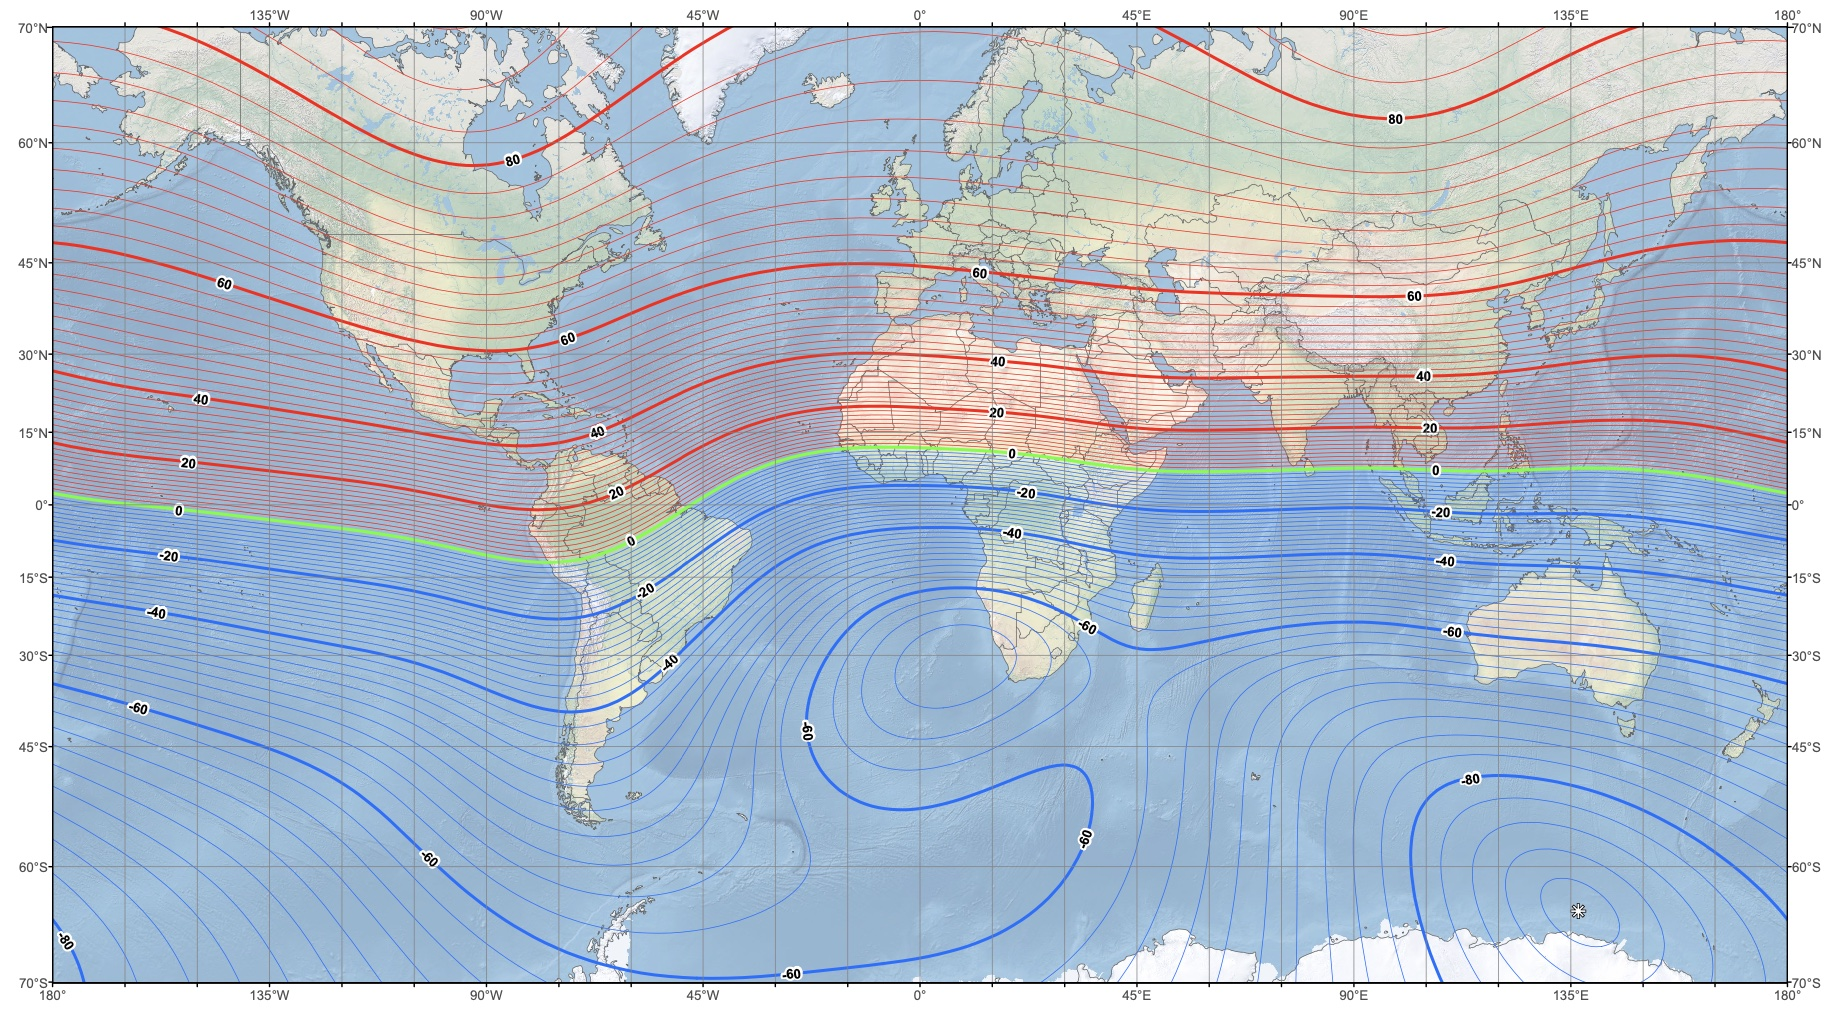

In [11]:
figure4 = "/9j/4AAQSkZJRgABAQAAkACQAAD/4QCeRXhpZgAATU0AKgAAAAgABQESAAMAAAABAAEAAAEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAIdpAAQAAAABAAAAWgAAAAAAAACQAAAAAQAAAJAAAAABAAOShgAHAAAAEgAAAISgAgAEAAAAAQAABzigAwAEAAAAAQAABAYAAAAAQVNDSUkAAABTY3JlZW5zaG90/+EJIWh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIi8+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgPD94cGFja2V0IGVuZD0idyI/PgD/7QA4UGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAAA4QklNBCUAAAAAABDUHYzZjwCyBOmACZjs+EJ+/+IQCElDQ19QUk9GSUxFAAEBAAAP+GFwcGwCEAAAbW50clJHQiBYWVogB+UABwALAAoAOQA0YWNzcEFQUEwAAAAAQVBQTAAAAAAAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1hcHBsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASZGVzYwAAAVwAAABiZHNjbQAAAcAAAAScY3BydAAABlwAAAAjd3RwdAAABoAAAAAUclhZWgAABpQAAAAUZ1hZWgAABqgAAAAUYlhZWgAABrwAAAAUclRSQwAABtAAAAgMYWFyZwAADtwAAAAgdmNndAAADvwAAAAwbmRpbgAADywAAAA+Y2hhZAAAD2wAAAAsbW1vZAAAD5gAAAAodmNncAAAD8AAAAA4YlRSQwAABtAAAAgMZ1RSQwAABtAAAAgMYWFiZwAADtwAAAAgYWFnZwAADtwAAAAgZGVzYwAAAAAAAAAIRGlzcGxheQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG1sdWMAAAAAAAAAJgAAAAxockhSAAAAFAAAAdhrb0tSAAAADAAAAexuYk5PAAAAEgAAAfhpZAAAAAAAEgAAAgpodUhVAAAAFAAAAhxjc0NaAAAAFgAAAjBkYURLAAAAHAAAAkZubE5MAAAAFgAAAmJmaUZJAAAAEAAAAnhpdElUAAAAGAAAAohlc0VTAAAAFgAAAqByb1JPAAAAEgAAArZmckNBAAAAFgAAAshhcgAAAAAAFAAAAt51a1VBAAAAHAAAAvJoZUlMAAAAFgAAAw56aFRXAAAACgAAAyR2aVZOAAAADgAAAy5za1NLAAAAFgAAAzx6aENOAAAACgAAAyRydVJVAAAAJAAAA1JlbkdCAAAAFAAAA3ZmckZSAAAAFgAAA4ptcwAAAAAAEgAAA6BoaUlOAAAAEgAAA7J0aFRIAAAADAAAA8RjYUVTAAAAGAAAA9BlbkFVAAAAFAAAA3Zlc1hMAAAAEgAAArZkZURFAAAAEAAAA+hlblVTAAAAEgAAA/hwdEJSAAAAGAAABApwbFBMAAAAEgAABCJlbEdSAAAAIgAABDRzdlNFAAAAEAAABFZ0clRSAAAAFAAABGZwdFBUAAAAFgAABHpqYUpQAAAADAAABJAATABDAEQAIAB1ACAAYgBvAGoAac7st+wAIABMAEMARABGAGEAcgBnAGUALQBMAEMARABMAEMARAAgAFcAYQByAG4AYQBTAHoA7QBuAGUAcwAgAEwAQwBEAEIAYQByAGUAdgBuAP0AIABMAEMARABMAEMARAAtAGYAYQByAHYAZQBzAGsA5gByAG0ASwBsAGUAdQByAGUAbgAtAEwAQwBEAFYA5AByAGkALQBMAEMARABMAEMARAAgAGEAIABjAG8AbABvAHIAaQBMAEMARAAgAGEAIABjAG8AbABvAHIATABDAEQAIABjAG8AbABvAHIAQQBDAEwAIABjAG8AdQBsAGUAdQByIA8ATABDAEQAIAZFBkQGSAZGBikEGgQ+BDsETAQ+BEAEPgQyBDgEOQAgAEwAQwBEIA8ATABDAEQAIAXmBdEF4gXVBeAF2V9pgnIATABDAEQATABDAEQAIABNAOAAdQBGAGEAcgBlAGIAbgD9ACAATABDAEQEJgQyBDUEQgQ9BD4EOQAgBBYEGgAtBDQEOARBBD8EOwQ1BDkAQwBvAGwAbwB1AHIAIABMAEMARABMAEMARAAgAGMAbwB1AGwAZQB1AHIAVwBhAHIAbgBhACAATABDAEQJMAkCCRcJQAkoACAATABDAEQATABDAEQAIA4qDjUATABDAEQAIABlAG4AIABjAG8AbABvAHIARgBhAHIAYgAtAEwAQwBEAEMAbwBsAG8AcgAgAEwAQwBEAEwAQwBEACAAQwBvAGwAbwByAGkAZABvAEsAbwBsAG8AcgAgAEwAQwBEA4gDswPHA8EDyQO8A7cAIAO/A7gDzAO9A7cAIABMAEMARABGAOQAcgBnAC0ATABDAEQAUgBlAG4AawBsAGkAIABMAEMARABMAEMARAAgAGEAIABDAG8AcgBlAHMwqzDpMPwATABDAER0ZXh0AAAAAENvcHlyaWdodCBBcHBsZSBJbmMuLCAyMDIxAABYWVogAAAAAAAA81EAAQAAAAEWzFhZWiAAAAAAAACD3wAAPb////+7WFlaIAAAAAAAAEq/AACxNwAACrlYWVogAAAAAAAAKDgAABELAADIuWN1cnYAAAAAAAAEAAAAAAUACgAPABQAGQAeACMAKAAtADIANgA7AEAARQBKAE8AVABZAF4AYwBoAG0AcgB3AHwAgQCGAIsAkACVAJoAnwCjAKgArQCyALcAvADBAMYAywDQANUA2wDgAOUA6wDwAPYA+wEBAQcBDQETARkBHwElASsBMgE4AT4BRQFMAVIBWQFgAWcBbgF1AXwBgwGLAZIBmgGhAakBsQG5AcEByQHRAdkB4QHpAfIB+gIDAgwCFAIdAiYCLwI4AkECSwJUAl0CZwJxAnoChAKOApgCogKsArYCwQLLAtUC4ALrAvUDAAMLAxYDIQMtAzgDQwNPA1oDZgNyA34DigOWA6IDrgO6A8cD0wPgA+wD+QQGBBMEIAQtBDsESARVBGMEcQR+BIwEmgSoBLYExATTBOEE8AT+BQ0FHAUrBToFSQVYBWcFdwWGBZYFpgW1BcUF1QXlBfYGBgYWBicGNwZIBlkGagZ7BowGnQavBsAG0QbjBvUHBwcZBysHPQdPB2EHdAeGB5kHrAe/B9IH5Qf4CAsIHwgyCEYIWghuCIIIlgiqCL4I0gjnCPsJEAklCToJTwlkCXkJjwmkCboJzwnlCfsKEQonCj0KVApqCoEKmAquCsUK3ArzCwsLIgs5C1ELaQuAC5gLsAvIC+EL+QwSDCoMQwxcDHUMjgynDMAM2QzzDQ0NJg1ADVoNdA2ODakNww3eDfgOEw4uDkkOZA5/DpsOtg7SDu4PCQ8lD0EPXg96D5YPsw/PD+wQCRAmEEMQYRB+EJsQuRDXEPURExExEU8RbRGMEaoRyRHoEgcSJhJFEmQShBKjEsMS4xMDEyMTQxNjE4MTpBPFE+UUBhQnFEkUahSLFK0UzhTwFRIVNBVWFXgVmxW9FeAWAxYmFkkWbBaPFrIW1hb6Fx0XQRdlF4kXrhfSF/cYGxhAGGUYihivGNUY+hkgGUUZaxmRGbcZ3RoEGioaURp3Gp4axRrsGxQbOxtjG4obshvaHAIcKhxSHHscoxzMHPUdHh1HHXAdmR3DHeweFh5AHmoelB6+HukfEx8+H2kflB+/H+ogFSBBIGwgmCDEIPAhHCFIIXUhoSHOIfsiJyJVIoIiryLdIwojOCNmI5QjwiPwJB8kTSR8JKsk2iUJJTglaCWXJccl9yYnJlcmhya3JugnGCdJJ3onqyfcKA0oPyhxKKIo1CkGKTgpaymdKdAqAio1KmgqmyrPKwIrNitpK50r0SwFLDksbiyiLNctDC1BLXYtqy3hLhYuTC6CLrcu7i8kL1ovkS/HL/4wNTBsMKQw2zESMUoxgjG6MfIyKjJjMpsy1DMNM0YzfzO4M/E0KzRlNJ402DUTNU01hzXCNf02NzZyNq426TckN2A3nDfXOBQ4UDiMOMg5BTlCOX85vDn5OjY6dDqyOu87LTtrO6o76DwnPGU8pDzjPSI9YT2hPeA+ID5gPqA+4D8hP2E/oj/iQCNAZECmQOdBKUFqQaxB7kIwQnJCtUL3QzpDfUPARANER0SKRM5FEkVVRZpF3kYiRmdGq0bwRzVHe0fASAVIS0iRSNdJHUljSalJ8Eo3Sn1KxEsMS1NLmkviTCpMcky6TQJNSk2TTdxOJU5uTrdPAE9JT5NP3VAnUHFQu1EGUVBRm1HmUjFSfFLHUxNTX1OqU/ZUQlSPVNtVKFV1VcJWD1ZcVqlW91dEV5JX4FgvWH1Yy1kaWWlZuFoHWlZaplr1W0VblVvlXDVchlzWXSddeF3JXhpebF69Xw9fYV+zYAVgV2CqYPxhT2GiYfViSWKcYvBjQ2OXY+tkQGSUZOllPWWSZedmPWaSZuhnPWeTZ+loP2iWaOxpQ2maafFqSGqfavdrT2una/9sV2yvbQhtYG25bhJua27Ebx5veG/RcCtwhnDgcTpxlXHwcktypnMBc11zuHQUdHB0zHUodYV14XY+dpt2+HdWd7N4EXhueMx5KnmJeed6RnqlewR7Y3vCfCF8gXzhfUF9oX4BfmJ+wn8jf4R/5YBHgKiBCoFrgc2CMIKSgvSDV4O6hB2EgITjhUeFq4YOhnKG14c7h5+IBIhpiM6JM4mZif6KZIrKizCLlov8jGOMyo0xjZiN/45mjs6PNo+ekAaQbpDWkT+RqJIRknqS45NNk7aUIJSKlPSVX5XJljSWn5cKl3WX4JhMmLiZJJmQmfyaaJrVm0Kbr5wcnImc951kndKeQJ6unx2fi5/6oGmg2KFHobaiJqKWowajdqPmpFakx6U4pammGqaLpv2nbqfgqFKoxKk3qamqHKqPqwKrdavprFys0K1ErbiuLa6hrxavi7AAsHWw6rFgsdayS7LCszizrrQltJy1E7WKtgG2ebbwt2i34LhZuNG5SrnCuju6tbsuu6e8IbybvRW9j74KvoS+/796v/XAcMDswWfB48JfwtvDWMPUxFHEzsVLxcjGRsbDx0HHv8g9yLzJOsm5yjjKt8s2y7bMNcy1zTXNtc42zrbPN8+40DnQutE80b7SP9LB00TTxtRJ1MvVTtXR1lXW2Ndc1+DYZNjo2WzZ8dp22vvbgNwF3IrdEN2W3hzeot8p36/gNuC94UThzOJT4tvjY+Pr5HPk/OWE5g3mlucf56noMui86Ubp0Opb6uXrcOv77IbtEe2c7ijutO9A78zwWPDl8XLx//KM8xnzp/Q09ML1UPXe9m32+/eK+Bn4qPk4+cf6V/rn+3f8B/yY/Sn9uv5L/tz/bf//cGFyYQAAAAAAAwAAAAJmZgAA8qcAAA1ZAAAT0AAAClt2Y2d0AAAAAAAAAAEAAQAAAAAAAAABAAAAAQAAAAAAAAABAAAAAQAAAAAAAAABAABuZGluAAAAAAAAADYAAK4UAABR7AAAQ9cAALCkAAAmZgAAD1wAAFANAABUOQACMzMAAjMzAAIzMwAAAAAAAAAAc2YzMgAAAAAAAQxCAAAF3v//8yYAAAeTAAD9kP//+6L///2jAAAD3AAAwG5tbW9kAAAAAAAABhAAAKBJ/WJtYgAAAAAAAAAAAAAAAAAAAAAAAAAAdmNncAAAAAAAAwAAAAJmZgADAAAAAmZmAAMAAAACZmYAAAACMzM0AAAAAAIzMzQAAAAAAjMzNAD/wAARCAQGBzgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9sAQwABAQEBAQECAQECAwICAgMEAwMDAwQFBAQEBAQFBwUFBQUFBQcHBwcHBwcHCAgICAgICQkJCQkKCgoKCgoKCgoK/9sAQwECAgIDAgMEAgIECwcGBwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsL/90ABAB0/9oADAMBAAIRAxEAPwD+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiivgb9pT41/tFfDz9oX4U+EPCOmWFj4E8R+JbbSNT1OaZZr28luLK8uBbQW2wiKOMWwaSZnDszKqDAckA++aK/K79oL9oL9of4H/tIeDtJ1jxNpKad4z8XWGjaV4aj0+RoJNEnCR3V7eaxMIkhvVfzHht1Yh8JGizMxI8+0f8Aa5+JupftV6roHjzxpqXg7wpF46PhfSbSXwlLJpd79nWGMW767Iqok15P5yx4JAG3ByQKAP2Sor8pPiF8Uf22/gl4X1n4sfE65hg8P6N4p0I3KGOxkEukXWqSWmpC08gF0tktZrWVGuMXIljm3Hyytcof29fiF4N/aO+KGpePZbf/AIVfpem+I18NARKsraj4Mt7V9WV5lG5vNkmnVFJOPszY5zQB+w1FeM/s6XPxMvvgJ4N1L4z3C3Xi270azuNYdYkhX7bNCsk6CNAFUI5KjAHA9a9moAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivnj9rX4t+KPgL+zL46+M3grTl1XVvDOi3eoWttIGaNpIYywaRUwxjT77hSCVU4I61+VN5/wUD+KPw21XXPg/ovxA8OfFrXL/wANaHqmi65YW0UNvZahrWtW+i+RcxWkjpJEhu4rmNSyS+WpV87legD93aK/LS18f/tkWHib4gfs2x69H4q8S+GY/D2t2msafZWOn6hPpGry3EV1DFBds9iLmF7R/LaXEbI43DcMnlPHP7Vf7SHwHsfiJ4X+Lk1ldeKrf4faBrfhuG0hQW/9u3zvpF1bqcZkQ6kbZlDZwswA4wKAP12or8nvgp+1J8dfH2rfCH4Ma9qFv/wmQ13xRZeO5obaMK9t4U8y1kaOPGIlup57KRWXBCPhe4r9YaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooqlqWpafo2nXGr6vPHa2lpG8000rBI440G53dmwAqgEkngCgC7RX47+Gf27fjN4p8QfG3x1FpgtvCXh7wBbeK/BFl9nLXt5FI+oxQ3cybd+bx7RXhi7QtGSA7PT/gJ8d/2iviR4X8S+DbTx1f6t8SbfRtO1KLQdW8Kr4auYraedFubywN8FS4UoJYoWlURrME84KCRQB+wtFflTqf7UPx1/Zu8TM/7TlxC+mt8N9Z8SQwmO3WX+0vD94WlikltgEaaazubXzEjJi81JPK+UgV518Gv2rv2pNY8GeB/gf8AEu+tk+Lb/EWLw74ikjtYkB0mKx/4SC4mWDbsQNYMkAcDh2yPm5oA/ZuiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivyt/aM+Pn7TCeMPjBq3wS1zTdF0n4GaHZ6rcadd2AvG126ks5NTnt5py6NbxfZ1SNDEC/mOXLbV2H6G+GPiT9pbxl8cj4wvVVPhlqumx3lgrfZPLEU9payQBNn+l/ahObnzvM/0fyfK8v95uoA+zKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK/M3/gpJ+178Qv2e/hbqfh/9nuKC68dQ6XLrlzNcKJLfSdItpAkl3OhBDPM/wC4toyPncs/KRPXl/7Wv7V3xU8A/tHa94QsfFeq+BPA/hXQdKu77VrPwjN4gtlub6a6M811cquy3gghjgzk5JZjghWIAP2Cor87/iJ41/az8Ka14/8AiLpt7bzeBdN8L6hqWj3aixktnaHTIprWWJVzctcG5Fw0okzbGDyvL+fdXz3+xn+0l4g+Mmv+Bv7a+P1x4g1bWrKG8vPDn/CKxWcUkptDcTwC9FugUR4Yhg/zbeM5oA/ZSiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK/PH9sr48ePvAHxd+Gvwb8M+MdM+G2meME1i6vvE+qwQ3CI2lxwtDYwi5dIFkn85nJkOdkTbOc4AP0Oor8U/gX+1/8AtI/trW3hvwF8H/E+keEtVt/D+ratq2uRacNRt7+4sdXk0ey+zQTSKIre4MElxIdzuFKxoQQXr374DfGf9q/9oj/hVfxr0K0gsfBviLQ7G61q3iNqbaK7IuV1JZPNzebhILf7H5JKY83z8/JQB+l1Ffgp+y1+1546+M1v4avPHH7QU+na/q+rPaSeHovCcLw7hfvbxWwvBbbQJFVQZN/y7s5GK/eugAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivgb4g/Gv8AaL0H9uf4ffCL+zLDS/hzr41WL7UZhcX+qT2mmC73CMJi2hhkOzljJIyk4VMbvJtf/aB/aI+GX7Zngf4R+PfE2k3i+O9X1CP/AIRy30+SK1sdDihuZLO6j1mcR+dfloYxLbANne2yNVQSMAfqlRX4s/ssftc/GX4tfELTYvH3jS90a/8AFba7N4e8Oat4Sm07TrwWz3H2W3g1iRVMzwwrFNKFGWAYDIyaPjn8d/2vfgP8FPBN58ZPFjeCr7xJ8QLXRbjV5NP0/U7uDSpNGuLibdbWaSQNm+gfyCi+YLfy/N/eb6AP2mor4j/Y0+IkvxGtfEGoD4rz/E+G2a2jBm0NNF+xMRITgLDEZfMGOuQuzjqa+3KACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorB8VajrekeF9S1bwzpx1fUrW1mmtLASpAbqdELRwedJ8sfmMAu9uFzk8CgDeor8cv+Gx/wBprwj+xj8X/jP8TToln4v8F+MZ9FVIB51jp9n59nE4iD+Q93JBHPIyKdr3EgCKMsqVynw6/bd+NnxL8Nt8N/h94ms9V1HWfiJbeDNG8WXmkmyuVsjpDate3NzospRlnh8maGLzFiSXcknl7QdwB+3FFflVpnxP/bU8ZfD3xZ8N/Bl9Bq3jb4d+MptB1DU7C3srSW/sH0tL+xuFgvi1tGTLc26XSg58pJTDhygr9RNH/tb+yLX+3vK+3eSn2nyM+V5u0b/L3c7d2cZ5x1oA0aKKKACiiigAooooA//Q/v4ooooA828U/Gb4P+BtVOheNfFej6PfBBIbe+vre3l2N91tkjhsHscc1pTfEz4b29/pOlz+INNS615Fl0yFruESXqMMq1spbMoI5BTIIr8+P+CgHwu+Hvxm8WeAP2dX8PaZLrfxQ1OS31TV5LOBr638O6RD9q1IQ3LIZEklBitkYHKeeWGCAa+I/wBpbwd8HNJ8MftXwa9p+nWvinwrBoFn4JQxxi7sLa30W0OiR6Vu+eMf2gZQghwDLuHJ4oA/ea5+JHw7s9ev/C13r2nRappdp9vvbN7qFZ7a06/aJoi25Iv9tgF96vN418Gpo1h4jfVrIafqr28dldGePybl7sgW6wyZ2uZSwEYUneSNucivhr9o79m3wZo3w9+Kfx9mnvG1u+8Ja5LLa+Yhso7ufSEtJ7iNQgl3PDawxkNIYwFyqKzMx/GrxnbfF/4A/AL4RfsieH9Xay0/x5r/AII134a+Ir61fU4NJ1CW+tZbzTbyHzIjKltPILq3jaWPzIC8XmAoCAD+qCiv5T/23vF//BZn4HftRfBf9n1v2p9JsbX4j6d4rvprzw58P9MtZIzoCaeUSVNWudVD7zdnaYzDtw27zNy7KJtf+Cuo6ftn6wf+5G8If/IVd2Hy6vio+1oxuvVHHiMwoYaXs60rP0Z/V9RX8oItf+Cu56ftnax/4Q3hD/5Co+y/8FeO37Z2sH/uRvCH/wAhVv8A2Niv5PxRh/bGF/n/AAZ/V9RX8oJtf+Cu46/tnax/4Q3hD/5Cpv2b/grt/wBHn6z/AOEN4Q/+QqP7GxX8n4oP7Ywv8/4M/rAor+T/AOzf8Fdv+jz9Z/8ACG8If/IVH2f/AIK7/wDR52s/+EN4Q/8AkGj+xsV/J+KD+2ML/P8Ag/8AI/rArzPxT8Y/hn4K+I3hX4SeKdWis/Efjb7d/Ydi6uXvP7NhFxd7CqlR5UZDHcRkdMniv5jfsn/BXjOP+GztY/8ACG8If/IVeHePfgp/wUj8afGfwF8WfFn7W2sXvifwV/an9g3/APwh3heP7F/aNsLe8/cx2gil82IBf3qtsxlcHmk8nxUd4figWb4V6Kf4M/svor+SrWrr/grxpGmvep+2TrdxMWSKCCPwN4Q3zTzOIoYkzY43SSMqjOBk819ZaN+zd/wV3k0u2bXP239ZS+MSG4WDwH4QaJZSPnCM1kCVBzgkAkc4HSuLFYaeCajiFZs68NiqeLTlQd0j+iOiv58v+GZ/+Csf/R8Wvf8AhBeDv/kKq15+zJ/wVueBl0/9ubWo5ezSeAPB7qPqotEJ/MVyupFHUo3dmf0LUV/Ir8W/hr/wcffD159R8FftQyeM9NgY5Nh4S8JwXRQAEkwTaf15xiNpDntXhXgD9sP/AIKFS60fBv7QP7YPjP4ca3GdskV98PfCU0Ck8Dcw09JVz/tQhR/ery6ueYPD1PYYqbg/7yaT/wC3muX8T7LCeH+d5nhXmOTUY4iK1apThOa9acZOov8AwE/tfor+cDwT8Kf+ClXxI0VPEXw//b51LWrF+k9l4J8Fzpn0JSzOD6g4Irq2/Zr/AOCs/mpHF+3Brrbjg58B+Dhjg/8ATlXpxrQmlKErpnyFahUw85UcRBxkt01Zr1TP3I8YfGP4Z+APHfhH4Z+MNXisde8eXV1ZaBZurl72extJb+4RCqlR5dvDJISxUYXAJJAr0yv5a/ir+wz/AMFEfGPxe+FvxH8aftj67qHiHwhqeoT+H73/AIQvwtF/Z9xe6Vc2tzIIorURzeZbvJFtlVgu/eoDhTX0Cv7Nn/BWPzTC37cOv7gAQB4B8H989c2QxVc6Zm1Y/oTor+fcfsxf8FZMZb9uLXR3/wCRC8H/APyFVPUP2Vv+CwFwEGift06vEf4vO+HnhCQH6FbZMfrS9pHuFmf0KUV/Pt/wzD/wVmUbW/bi14sMZx4B8Hj+dnXyp468O/8ABZn4YaxLZeOv2w9btdOefyrTVl8C+EDZTBj+7DuLImGQ5ClZdoLcIz5FbUYfWJKlTav5u35mVWoqMfaT29Ln9WleE/Gr4Kf8Lg1rwDrH9p/2d/wg3ieHxJs8nzvtXk2V1aeRnenl5+079+Gxsxt5yP5tkg/4K5yoHh/bR1dwQGBXwP4QIKnkEEWPeqOpWv8AwWMNi02g/tmanLOpO1J/A/hJEcjqpdbBivPfa2PQ16EsnxcU5cn4o46ea4WpJU/aWv3TS+/ofuZ8W/2N/ih8XvEN94a8QfEqaT4cat4hsfEd1olxYGfUYpLCWC5Sys9Ta4AgtGngWQp9nZ0yyo6q3HnPxt+EL2Xxb8GeA/jj8Xw/gzxl48j1PQfDd9przajeatYpLrMOlx6n5zItnF9kedY3tw21PKEuCor8VtF8V/8ABWjUb8aFqv7ZOuaXqhBItLnwN4PBcL1aFxZFJVHUlCSoI3BTxXAfFn4K/wDBSP4l+NPh74u+IP7W2salqfgvXpNW0C4Pg7wvD9hv2066tmuNkVoqS5t5ZY9koZBv3Y3KpEU8sxFWPPTSa23W/Zro/J6m2IxlPCT9jiLp2utHZrumtGn0abT6M/rg+Nnwt0b44fB3xT8G/EL+VZeKdKu9LllC7zGt1C0XmKuRlkLbl5HIHI618IeK/wDgmf4e8Zfsz/Dn9nvWvFcz3PgnWhrGo6z9kHm6x9sadtZhli8392uofaZdx3ybCQcPtr8d7b/h7beWi31p+2nqssLjcsieCPB7KR6gixxXPeGtW/4K/fEnW5vCvwj/AGy9S1zUrWV4rrf4L8JwWtoY8hvtE66bJtJYFEVUZmYHAwkjKq2W16EHVrJJeq/zMqWZUK0vZ0m2/Rn9c9FfyZeP73/grJ4P1mw+HOiftoa3r3iyRI/t1vYeBPCU0Fu5QM6JtsDJIwJBC7VVUIeZ4gy7m/BPTv8Agth8WPHeseHNX/ax17QLDQbqW2vJrnwV4NeTcqgRooismj8x3JbaHYLEoYkeZGDx8jUfaN6HX7WLlyI/rPor+Yj4xfDn/grr8L9P0nWrf9tTW7qzvr0WVwzeBPCC+SZY2MLkiyIw0iiIZ6u6gda8v0y1/wCCwuv+P9E+H2j/ALZesCfVXeWed/AvhAx2tpAVEsrgWQJJZ0jjA6yOucLuI1pYWpWpSxVNe6jKpiqdKosPN+8z+seiv5DtE8S/8FctQ8F2vii7/bK1oXEqRJLaQ+BfCLypdyFYzbBPsIbzBKfL2kAhuDg5pdW1H/gtV4Jim1b4lftTeLdJ0QEGPVD8PvCUkCA44uVispDDyQA5JjPd1Py0V8NLDcjrtLm21X+ei89jbCT+vucMInJx6JO79F1fktetrJ2/qk+JXxj+Gfwffw8nxK1aLST4r1m18PaT5qu32rU7wO1vbLsVsM4jbBbC8ckV6ZX8Znxh+Dv/AAUY+OEPgrUPiB+13q2vxeHPEdh4j0OSPwh4WiS31O0ST7Ldq1vaKJQgkb5H3Rtu+ZTgV7z9i/4K8Z2n9s7Wf/CG8If/ACDXWsnxT0UfxRwPNsLHef4M/q6or+W74deGf+CsHjPxrd+DdS/bZ1qzkSyjvLYjwL4PZp9sjJcgL9iziLMP18z2r6Bj/Zp/4Kxy4K/tw69g+vgLweP/AGyrzq0HQm6VVWaO+lUjXgqtJ3TP6EKK/nx/4Zq/4Kv5wf25Nc/DwH4OP/tnWbp/7N//AAV1aKT+1/23dahkErCMR+BfCDhox91mzYjaT3Xn69hCknfUvrY/ogor+e6X9mv/AIKxxxNIv7cGvOQMhR4C8HZPsM2QH61zx+BX/BVmfypdO/bj1+4+eNJYo/h/4PaWMSnAaRfsgKAYO7cuQQQQCDTj73wkykofEf0ZV5n8UPjH8M/gvZaNqPxP1aLSIfEGs6f4e05pVdvtGp6pOLeztlCKx3SyMFBOFHUkDmvwp0n4B/8ABU/WLia2t/24/EKyW5xIj/D7wihGSV/isuRlSMjIyCOorxL9pT9hP/gor8TPDnhofFD9sTxB4ih8PeKtD13TIE8FeFLdodVsLxJbK5Uw20e8wy4YRuTG5G11Kmh6Pke41JSXPF6H9R9FfzjX/wAHP+Co+k+HbXxLrH7cHiS1ivGijjik8AeDRMZJ2CogT7Jyxznau5iOgJ4r55+JPjD/AIKGfDW91qy1f9t/xa0ejq0f2uL4c+D5Lee9Q/PZQn7IpaZQVPZWyQjMyMopQk72WxPtI6Xluf1f0V/IH/af/BZzULi+bwh+2hLrNpbXtxaxXA8HeE4Y5kgkKCRWj06cHOM8Hg8ZqleeI/8AgthpaR/bv2qtauJJp4baJLLwh4MlLzXEqwxIvm2ERyzsoGQBzyQOa2+q1lH2jpu1r7N6eqTRrHkqPlp1YPW3xxTv6Saf4H9hNFfx5jxh/wAFn28Q6n4Ob9qfxHb6vorpFf2s/g/wGGt3ljEseTFA4KvGysrDg5I6g12/wti/4LN/Ey8bw837Ylzo+r2kPmXdrfeE/C8cu0Eq0tuo0YxzRAjJZJjsDKJNrEA4VIypwVZwfK+vLK35G8MK5ydJVIXXT2lO/wB3Nc/qo8feGr3xn4H1jwjpmp3Gi3Op2c9rDqFpt8+1klQos8QcFS0ZIYBgQSMEEV+dEH/BN0a/4Z8TxfELxPYLr+r6fZafpd54c0OLRbPTG06+TU4btbJZ5lluJLuKGWdmkVXEaoqouc/BWnfs+/8ABXeOdLXV/wBuPWZ5Z7eS4iFt8P8AweqsIygK7pLbBY7xjOAe+K+YoNa/4Kq6/wCJtQ0zwZ+23qWoabpR+zzXqeCvBzLLcj/WCILZf6pMFfMJG9s7RtXc2mHoVMS1ClHU4cRXp4W7qS0Xa5+8nhPRNH/ZCuvEH7Q37Wnj+11TX/Hmo+H/AA4+pQ6c+nWSM1x9g0ixt7VJLp1Ml1ePukaQgtLltiLx1P7RH7Hmh/tBfGz4Y/GS/wBYfTW+Ht7Lc3FmkAkXVITLb3cFvK+9diw3drBOp2vyhGBuzX8zP7QPwT/4KSfG7wNp/hj4v/tb6xrml2Wu6Jq9vAPB/he3CX+najBdWM4kt7RGPkzokmwnY+3a6lSRXuP2b/grrjJ/bO1kf9yN4Q/+Qa7/AOx8Ve3J+KOL+18La/P+DP36+GH7IGhfDP8Aay8f/tS2mrPcv41t7eKDSzCEj0+Ty4Uv5Ul3nebs21u7DYu1oyctu4+xK/kzvLP/AILDtJH9g/bT1RFB+ff4D8JOSP8AZItFx+OaqNP/AMFjbjxRbeEPD/7W3ifV726tprpRZ+A/BRVEheONt5lt49uWlXBI24zkjGaipleJpRc6kbJea/zKhmeHqtQpyu35M/rXor+Q/wAR3X/BZbwTqX9l/EP9s7UvDEjkGP8AtbwN4Mh81WBwYnjhlhk6YYLLuQ43KMrnMsfGH/BYfXNKlTwv+15qmpXkUhRbuLwp4JOmyKP+mqWLzJJjkxmFgOm8jmso4CvNKVON79mn+TNZY2jBuM5Wt3TX5n9gdFfxl6Z8Xv8Agrjq2pXfhe1/bB8SjXdPkYT2K/Dbw5MwjJUROzW+nSbA5dUBUSLvzsMijce8svGH/BWxfD114q8W/tlaroNpaTNbyLceC/CLMksMjQTLJv06LYyyrsVQrFuoIOFJHA1py5ILX1Wnrrp8wljaMFzSf4PX07/I/r4rzP4w/GP4Z/AH4e3vxX+MGrxaF4e057aO5vZldkje7uI7WAERqzfPLKiDA6tzgZNfy4+EvE3/AAVQ1DxPYeH/ABd+2br+nWurC4ks9UTwX4GeykhhiNx5jH7P5iIIldpHdFRdo5IdTXXftJfsY/8ABQb9oL4DX3gT4p/tk654o8Ja2+n3Elsngzwrbx3AgvYLi3kW4tbVHCrKkcgKuA+3BypIOFWhOjLkqqzN6VWFaPPSd0f1WUV/N54t+EP/AAVQ8N2FtY2f7b2v3uvam7RadYf8IJ4NjWd1GWd5TZHy4Y1O6WTadoHCs5RG9Gu/2Uf+CtdjpNvqift1avdxlV894/Afg5QrdCVU2ZOCeByT/XGL5m4x1t/X9f8ABOqdCdOnCvNWUr287bu3a+l9m7pap2/f2iv5yrz4A/8ABW+2tJtXn/be1y002CJ5XupfAXg5sBQdqpELQM7OQFUZUFmwGLAK3Oap8FP+CwWhpP4m8Sftt6tpGg2CStdm78C+D/tMfkx7pHIS0MYRSGDEMw+UAEsxCaKDa5lsc7mk+U/pYor+SKTxf/wU017XLCy+Gv7cWt6xaXVpczyyS/D7wvayQtbyRRjMc+nKSsnmHaQMEo/Jwcbpg/4K7Dr+2drP/hDeEP8A5BrsoZZiMRH2lKOn3HHWzHD0JezqS1P6wKK/lBjtv+Cu0mT/AMNnayAP+pG8If8AyFSi0/4K8np+2brP/hDeEP8A5Crb+xsX/J+KMv7Ywu3P+DP6cfjJ8Y/hn+z78MdY+Mvxk1eLQvDGgQ/aNQv5ldo4IiwQMyxqzH5mA4BPNemV/Gb+0v8ABb/gpL8e/gZ4l+Dvxw/a11nX/CuuWvk6jp3/AAh3he0+0RK6yBPPtrSOVPmUHKMDx6V6nrmvf8FYfDth9v1L9s/W/mYRxRp4F8INLLI33Y40FjlmOOg7ZJwASInlWJppyqRSS81/mbUcwo4icaVC8pSdkkm22f1v0V/JXosf/BY+505bvXv2x9VtJ5DuECeCfCEhjU9FZxY4LY+9t4B4BYDcTXbz/grloWh3uuzftm6y8VjBJO4HgbwgMiNSxH/Hj7ULKcU4+05NPX9NyamZ4anUdF1LtO2mq+TWj9U7Ppof1qUV/MT4O+Fv/BX+40tJfHn7b+o293IS4Sw8BeF5QI+MxyLJpyPHOPmIR1CMFyZEVga474q+Df8Ags58K/Gz+F9X/bI1ltPu7kW+nap/wgnhERys0LTeXLC1mrq4COPl3plcMysQlccKE6klTju/kdU60acXVlsj+qeuS8e+BfCfxP8ABWq/Drx5ZrqOi63ay2V9auzKs1vMpSSNihVgGUkHBBr+Tr4Eap/wWY+Lvxg0X4b6l+15r1pa31ul1e3Nr4C8JXJsoZ45ntjdEWQjiaQxp8oeRQJFw7Enb+lo/Yx/4KpHcf8AhuzX8D/qQfB3/wAh1LpSjo0UqkZK6PqTQf8Agmf8IfAnxO8VfEb4VanqPhWTXvCsXh2w+wXV4brS50e5Z76C4muZNzETRhI2TahiyCd7Cr8Xg+D9lXXfEH7b37a3xJstU/sbQbfw8mowaS2mWlhpr3iuzSRJNdyST3NwYjI6lUBUBY1FfIh/Y1/4KrnlP26tfI/7EHwb/wDIdfOf7WX/AATq/wCCgvxl/Z+8SfDL4y/toa94k8M6nFCL7Tj4J8K2gnEVxHKg8+2tUlXEiK3ysM4weCRR7KW5XMj9kP2wP2PND/a4h8Ew6rrD6MPCWvwapceXAJvt+ngEXemvl02JcgJuf5tuwfKaltv2QNCt/wBtqf8AbJGrOWm8P/2UNGMI8pb9nRH1Lzt+S5to0t9mzhQTu5wPzuP7HP8AwVdAyP26df8A/CA8Hf8AyHVC+/ZL/wCCqWmWcuo6j+3brkFvApkkkk8B+DUREUZZmY2YAAHJJpeza1YJ3fKtz95KK/jD+LH7R3/BTIePIvhB+yb+2F4o+KniWRyjmx8CeD47GPHBZZhYOZAp+8wCxAc+Z1Ffd/wd/Ze/4Lpa14dTWPjj+2ldaDfTAEafp3gjwldtED2lnayVNw7hAy+jmvPw2YUMbVlh8HLn5d2k+VeXN8N/JM+mzXhLM8iwlLMc6pqiqmsYylFVGu/s7+0S83FI/pNor8Em/ZO/4KvgZ/4bl1//AMIHwd/8h1Wf9lf/AIKuKuf+G5dfP/cg+Dv/AJDr0/YT7Hy/tIn77UV/P2/7Mn/BVuP737cev/8AhBeDv/kOoo/2Yv8AgrLIy5/bi11Q3r4C8Hf/ACHT+rz7B7SJ+33xk+MPw0/Z9+FmvfGz4x6tFoXhbwxZyX+p6hMrulvbRDLyMsas5x6KpJ7CvSlYMoZTkHkGv5lP2qf+Cf8A/wAFCPjX+zL44+Gfxr/bQ1zxD4V1nRruHVNLPgrwraC7twm5ofPtrWOaPdjG6Ngw7V7je/slf8Fc7FJGX9uHW47VWVYpP+EC8ISyMuwnIhSy3M+4cIG5X5twI21PsZ9g50fv3RX4AH9kL/gsMt1M0X7dGsTxxQiURD4e+EYiTuClTK1qQDjJ+4QMYyc5rjJPg1/wVAslWG//AG5dfa7d2j8m38B+DJUQg4+ab7Gqkj5d4Td5e4buCpY9jPsPnR/RlRX8wnxK8L/8FRfhrbWc+p/tt+IJP7Uma2svL8A+Ep2mnSNpDGkVtp8ruzKrbAoKttb5/lbHiPg66/4LNeINPXVtd/bB1XTElXclu3gnwk8ygk483OnoFbGMoM4P8VbUcDWxDaoxuYV8ZSwyvWlY/rpor+UU2v8AwVx7ftoaz/4Q3hD/AOQaqsn/AAV0VxH/AMNn6zk/9SN4Q/8AkGur+xsX/J+KOX+2ML/P+DP6xK4v4kfETwX8Ifh3r/xZ+JF+mleHfC+nXWr6peyKzJbWVlC09xMyoGYhI0ZiFBJA4BPFfy+jTv8AgruUVv8Ahs/WMt0H/CDeEP8A5Cry744/DL/gp/8AFL4LeMPhj8UP2v8AWNX8M+I9Fv8AStWsP+EM8K25urK9tnhuYPOhs0kj8yJmXfGwdc5UggES8nxSTbh+KGs2wraSn+DP67/D2v6P4s0Cx8U+HbhbvT9Tt4rq1nTO2SGZA8bjODhlIIyK2K/kd8IeE/8Agq54O8J6X4R8Nftj6xaabpVpBZ2kP/CE+En8uCCMRxpueyZm2qAMsST1JJrpPs3/AAV1G7P7aGsYXIz/AMIN4R7f9uNV/Y2L/k/FCecYVfb/AAZ/V9RX8nrw/wDBXZcY/bO1k7v+pG8If/INOMH/AAV0Ck/8Nn6znOB/xQ3hDn/yRo/sbF/yfig/tfC78/4M/rAor+TUn/grwZPLj/bL1k46k+BvCGB/5I02Rv8Agruqlh+2brPAJx/wg3hDsP8Arypf2Ni/5PxQf2vhf5/wZ/WZRX8k8t3/AMFeoYwX/bK1ncx4H/CDeEMBe5J+w1Jf3X/BXGwIM37aOqqudpLeCPB4AI6gk2PbvSeT4pK7j+KKjmuGk+WMr/J/5H7VftWfss31/P8AEj4q2nxHXwN4I8Z+HVt/H8EmmfbpH0/TYJVmubO481DbStaM8MhMU42AMqB1Br70+GniDwV4s+HPh/xT8NrhLvw5qem2l3pU8QYJJZTQq9u6hwGw0ZUjIBx15r+RX4m23/BS7x/8Nte8BePP20b3UNE1/TbrTr+0HhHwhD59rdQtFNF5kdmsi70YruQhhnIIODWT8NdS/wCCifwy+HPh/wCG/gr9tm60rRfD+m2um2Fm3hPwfIbe1tIVhhi8ya0aR9iKF3OSxxkknJrF4CpF2k4r/t5f5nbCpKrrTpSfpGX+R/ZtRX8e8nxT/wCCl8QAk/btlDHt/wAIl4KwPx+x1NF8Sv8AgpxPjyP26Z3z/d8IeCz/AO2dQsHJ6Kcf/Ao/5mjhWiuaWHqW/wAE/wDI/sCor+RODxb/AMFULkgW/wC29fvn+74N8Gn+VnW5Ddf8Fbbjm3/bQ1eRfVfA/g8/ysjW8MqxE/gSfzX+Zx1cfSofxk4+sWv0P60KK/k2b/h7wP8Am8zWc/8AYjeEP/kGnBf+CvB4H7Zms/8AhD+EP/kGr/sbFfyfijD+18L/AD/gz+sesnX9d0jwtoV74m8QTra2GnQSXVzM+dscMKl5HOMnCqCTX8pwX/gruen7Zus/+EN4Q/8AkGsfxP4V/wCCrvjPwxqXhLxH+2PrFzp2qWk1pdQ/8IR4STzIJoykib0s1ZcqSMqQR2INP+xcX/J+K/zH/a+F/n/Bn9VPw0+I3gr4w/Dnw/8AFv4a36ar4c8U6baavpV7GrKlzZX0K3FvMquFYB43VgGAIB5APFdtX8gXwF+EX/BUP4YfBTwd8MPhZ+17rGj+FvDWiafpWk2J8GeFZ/sthZ2yQW0Amns3kk8uNVXe7M7YyxJJNei3Fh/wV4tyS/7Z+rqi5LMfBHg/AA7kmxAxipWUYpq6j+KG82wy0cvwZ/VxRX8X7fHv/gqdHp82qy/tjeJxBbzG4lK/DjwufJ0hIxm+nDWKtErzEJGGXBUh88ha9E8CH/gul8R9TvdM0P8AaxurNdNu7S1vJrrwp4SLW5u4zKoaFdL+ZlA2SAP8kgIyyjceB0nG92tPM61Xi7Wvr5H9flFfzIfD34K/8Fs/EOgTSeN/2wtY0XV4LqaBrdfBPhCaJ4lkIjuIZPsI3o6YcA7WydrBD09AT9n3/grVBBHHdftxa1NclMhU8BeDk8wqBuKBrQ4HOcEnGRk96xc0nZs1uj+i+iv5n/HHww/4KyeCvD76nJ+2vr11eSOsFpZx+BPB3m3M8nEcMY+xfeZiPQKoZmIVSag0n4Cf8FvLmzvH139tGayukiP2SKDwf4Vukkl7ebI2lwGNc4HCucHPGNpn2sd7jP6Z68z+DXxj+Gf7Qfws0L42fBrVote8LeJrRL7TNQhV1juLeT7sirIquM+jKCO4r+YPx7L/AMFbND+G+r+JfC/7ZPiC68Q6DDHPe6BceAvCC3YVnCMFEdkxZck7JY1kR8YXJr5C/ZSg/b4+B3wB8M/Bv4UftX+KPBPhDwrbDStNs7vwH4cuLa1ht0WXZ/aE9nLvRVcNvllztOWxXRRpPEO1Nr5tL8zGrXjRV5X+Sb/I/uFor+QjQdf/AOCyWq2dx4lvP2ttei0AygWt/D4J8IXBeBlQx3M8MdgWhhkYusbtlTsYsU+XPd/Yv+CvJwV/bO1gg/8AUjeEP/kGuqjl1bEXdFJ280c9XMaFCyqtq/kz+ryiv5RGs/8Agrsv/N5+s/8AhDeEP/kKozb/APBXbt+2drH/AIQ3hD/5Brf+xcX/ACfiv8zL+2ML/P8Ag/8AI/q/or+UP7J/wV2Jwv7Z+s5/7Ebwh/8AINO+w/8ABXn/AKPP1j/whvCH/wAhUf2Ni/5PxQf2xhf5/wAGfuD+1r/wTt+A/wC1Zovim+1O1OkeL/Eunx6eddjkupDGsGRCXtY7iGKURgthWwOTzzVX4v8A7GXxI8YaHrHwx+FfxIn8L+AvE+hweHtT0W7sn1WS3s443gmbS7me5U20s8L+XI0iTgkCTG/OfxGNn/wV3H3v2z9YH/cjeEP/AJBpn2b/AIK7f9Hn6z/4Q3hD/wCQqP7Fxf8AJ+K/zD+2ML/P+D/yP6HvB998Hf2of2SX039n/W4bjwb4n0G80TStSt4pHjSERyafuWOXy2bymUjaSudvUZzXm/wN+Af7X3wksPC3g3W/ivoGs+F/Ddta2DWcfhOS0uri0tIliVBdf2rKEcqoy/lMM/w1/Nz+zZ8FP+CkfwE+Cuh/CP4JftbazoHhfSFnFjYf8Id4Xu/JE08k8g865tJJW3SOzfMxxnA4AFe6/Yf+Cu/f9s/WP/CG8If/ACDSWT4ppNQ/FDeb4WLcXP8ABn9XVFfx/wDxDP8AwXH0rTW1D4b/ALYN1qsyDJtbrwX4Tt3b/ckFiy59mCj/AGq+YfCP7ZX/AAVdtfETeCfjp+1p4h8F6opwGn8DeEpLds8Alv7PBUE9GwyY53V4+Nqxy2tDC5h+75tnLSD8uf4U/JtM+vybhzHcRYOrmfD8FXVPWUISTqpd/ZX9o15xi15n9z1Ffya2E3/BWnVbKLU9L/bV1S5tp13Ryw+CPB8iOp6FWWyII9xVxbX/AIK7t1/bO1n/AMIbwh/8g17CyfFSSlGKt6o+RnmuGpycKkmmt1Z/5H9X1Ffyjiy/4K6NnH7aGscf9SN4Q/8AkGj7B/wV3PA/bP1j/wAIbwh/8g0/7GxX8n4on+2ML/P+DP6uK8z+EHxj+Gfx88B2/wAT/hBq8WuaDdXN7aRXkKuqPNp93LY3SASKrfu54ZIycYJXIJGCf5Y/EWr/APBYfwreR6hfftgavd6KkZkvZovBnhBLm3VD8zRwtpxWb5fmx5kZAU9SRXi37Onw3/4KMfB3T/8AhnL9kz9rbWNS8PaWL/WYbTSPCPhG+MD6hqt5cXzSz3cDZMk7+eq+ZuxcBY49iCuOthKuHmqddW/L7zqpYylXh7Si7r53+4/tRor+SW51r/grNp4aTW/2xfFOmJH99774beG7VE/3nm01VA9ycVp6dP8A8FYdZsV1PRP22dTvbaT7ksHgnwdIjfRlsiD+ddFPK69X+FZ+jT/UwnmdCn/EbXqn/kf1j0V/KH9i/wCCvGMn9s/WP/CG8If/ACDXcfBvwV/wVh+Kf9tLL+3HqcE+l3fkLaxeBvB7zeUI1PnSKbPKhpC6L8oB2E5PQZYrA1sHH2uIVl63NMPj6OKk4UJXfof1CUV/POn7OP8AwVkaUp/w3Br2B3/4QPwd/wDIVeM6x4E/4Kz+DdeltPG/7bWtQ6OLhIF1e38B+EJIIXcA+Xep9i3W3DDErFoccsyMQledKvCK5pbf1v2PUoYWpiW6dBXl2vq/RdX5K78j+n6iv5j/AIsfDb/grd8OfDtrrtn+2zrN2J72C1IbwL4PUbZiVDAiyOTnGKp/CD4e/wDBXX4mXOum7/bV1m0t9IuIbRWXwL4QZnkeFZ3JBshhQsiAe+72roVNuk8SvhTt8zjdWKqLDt+9a/yP6MPhP8Y/hn8c/C9x40+E+rRa1pdrqWo6RLcQq6qt7pN3JY3sOJFU5iuIZEJxtO3KkqQT6ZX8s37M/wCw5/wUS+D/AMPb/wAKfCH9sfXNB0mXxD4g1CW2Hgvwtdb7681a4nvZ99xauw8+dpJdgbYm7YgCgCvoA/s4f8FZyfk/bf13b6nwH4Oyfw+xVj7SJpY/oZor+eb/AIZx/wCCsm7b/wANwa97/wDFBeD+P/JKrB/Zq/4KyYyv7cOun1/4oPwd/wDIVHtIjsf0I0V/PS/7Nf8AwVqMZMP7cGuFh2bwH4PA9ufsRrMT9n//AIKwwakNM1X9uDXYHl5hY+AvB21xjlQTZ5LcE4wMjpnDYampaIlvl1kf0U18yftKfAvxj8a7TRP+EP17TdMfSLiSWWz1zR49c0u8WVAqma0aa3bzYSN8MiSrtbIIZWIr8brH4Ff8FUtSleGz/bi8QZVd67/h/wCEYxImdu5C1iNwyRyuRyOxBOX4m+BX/BXLRLAX9t+23rUqRENcf8UL4OJSEAl3UCy+YqOcEjPrmqTvJU+rJdSKi6l9EforYfsDeM/hlbeGdY/Z0+If/CNeJdL0jUdG1fU9R0tNSXU49VvW1O4ufs6zW6wzpeSSzQkMyKJDGyOuK+jv2Rrr4H6X8HLf4QfATWf7a0r4Z3Evg28lO/zYtR0gLDdRTFlXMoflyo2kn5TivyLh/Zs/4KxSW8dyf24Ne2ycjHgLweeOuf8Ajy6e/T9K+VPgZ+xp/wAFHfhXp/jaP4M/tg69o39veKNV17VC/gjwxci71a/mDXFyBNasUMpXJiUxxR4+XC5InmW5olex+y/wP/ZM/a++AHgzTPhh4I+MOgP4b0q4nkhgufCEj3JiuLl7l42nGrqM5kYBvL44O2v0lr+YSX4X/wDBZjSbr/iZ/ti63f2W4r52meCvBclwu0ZYy2tzaQBcDkiKac45HBBNO00j/gpnJrEWh337ceuWd3OcR2t74G8HaddfjBqNlbMwzzmPzBt59AcvrNNPlnKz89Puvv8AI7nlmJcfa0qfOt7xtK3ry35fnZn9Q9Ffzoyfs+/8FcoIFST9tfxB9pYn5D4C8HKi8Zyzmzztwc5Ck8Ebehp1n+z9/wAFbprlbO8/ba12GRwGH/FC+DyqqQG+dvsIwQCOOc9RwCa09pHucG5/RZRX89P/AAzb/wAFYXbKftya4FyfveAvB4z06H7Fz/nvkCdv2aP+CsaBS/7cmtjdz/yIfg/8Mf6FzRzxfUfKz+g+iv557r9m/wD4KzW0e4ftv66x9P8AhA/Bw57f8uR/z7c1mR/AH/grHLbRTp+2/rpLorEf8IH4PHJHQf6F/n1o5473E9NGfu/8OPjH8M/i5d+JbH4cavFqsvg/WZvD2srErj7JqdvFFPLbPvUZZY5o2JXK/N1yCB6ZX8rXwX/Yu/4KAfBqX4h654J/bP1nw6viPxVda7rs0vg3wpKl3qlxaWyTXZNxbEQho4o18tNsY2ZCgsc9ZLoP/BSm8mMHgr9uPxN4pbHB0b4d+EryMn0NxHZG3Q/9dJUA7nIxUTxNKnpOVjrw+AxGLTnhqTklu0nZer2XzP6eaK/mZ0z4I/8ABa3WbzM/7Y+p6HZ84N74N8HT3fy9mgt7EwgZ43C5b6V1938B/wDgrXbxpBH+27rj3Um3an/CBeDwCCcFsiyPA4J9ORninCtGprG/3NfmZ4jDywz5akk35SUvxi2vxP6N6K/nA1X4Df8ABXmxuPLs/wBtrWZ0wMs3gTwjGc+w+wHP5j8aevwM/wCCtOQJP23NdXI/6EPwfj1/58qr2ke5zc6vY/o8or+cX/hRn/BWjZ5i/tu64V/7ETwd/wDIVOT4E/8ABWkgeb+25rq8Z48B+D2/lZUvax7hzLuf0cV5n4B+Mfwz+KOv+K/C3gHV4tS1DwPqo0TXIY1cGzvzawXogcuoDHyLiJ8oWX5sZ3BgPwXl+BH/AAVkjkhj/wCG39c3TsVQDwJ4NJO3G44+yDhc8+n1rwf4K/sWf8FEvh343+JWvfDz9sbXNK1Lxb4kTVdenHgvwtP9v1A6XZQi42zWrLFiCOKLZEET93uxuZiXzruNST2P6rKK/nKuvgR/wVltYTK37b2uk4yF/wCED8HZP/klSf8ACi/+CsW4Eftu66VcjH/FB+DwcEHr/oXFL2se4cyP6NqK/nAj+Bv/AAVskuzCf23NbEagZb/hBPB+dx6DAsjjjB/oOtdA37O//BWJbfz2/bh11RgtlvAfg4LgYJJP2Pgdece/Sm6kV1CMlL4T+h+iv5cV8Lf8Fa/E919j+GH7ZuvatCj7JtTl8D+DYtOAHXyJlsna5brgQqyZBV3Q17DYfs7/APBXYgJqP7butpsBDyDwH4NCsRnlVFoxA+v9KiFeFTWDuu/T7+vyOvEYOrhLLELlb6X95eq3j87N7rQ/bf4g/BT/AITv40/D34v/ANp/Zf8AhA5NUf7J5O/7V/aVp9lx5m9fL8v733X3dOOtfOWr/sbfE/xf8QdAf4gfEubWvA3hbxU3jDTdKmsCdVW8WSWW2tZdWa4bdaW7Sny0FushQCNpCor86E/Zx/4KzMm//ht/XuTgZ8BeDweuP+fKq93+z9/wVdsLA3dz+274haQqxjhj8BeDizbevzPZqoHI5J/Or9pE5rH278H/AIRSeM/2j4vCfjb4vj4gv8Ab3zk0aXTXh1O0vdbsHayk1XUJJnW7ZLK4byjFFHnIaQl1NfTX7Vn7PfjT4+6f4Kuvh34pt/CWteCPEsPiS0u7vTTqkMjxWd1Z+S9uLm1OCLktu8zjbjHOR/Pd8Lv2Nv8Ago34T+NfxH+JfhL9sDXdP8ReMbjS5fEN8PBXhidr6WysEt7QiBrR4ovKgAjPl7A2NzBiS1fU8f7OH/BWCQ/J+3B4gb5Q2B4A8H5O7O0Y+xegPfjvihziuolqfs38GvCH7RXhi6v5Pjn440nxdDMkYtE0zQX0YwMCd5dnvrzzAwIwMJtweTnj3qv59P8AhmT/AIKxhmH/AA3JruEIVwfAXg5SpIyOtn/h+dZbfs9f8FXoJPs1z+294h87KqAvgLwcQxP90izP5Y4HJxT50Ox/Q/RX89cn7N3/AAVht1Iuf24Nf3gjiPwD4Pf73TP+hZ/Qj3qWX9mr/grFF/zfBr5AHJ/4QHwf+h+xc0vaRCzP6D6K/mA+LUP7e/wMsTffFT/goHqWkHbuSCTwN4Pa5kHrHbpZNK//AAFTX5/H9qX/AILGfFLxE3hz9lL9pHxl4wRG8t7668DeDrSBW7ZxYOqqexkkQ+1edis6weEkqNar7z+yryl9yu/wPqsm4HzvPqMsdl+EfsY71JuNOmv+4k3GHyvc/uArzPw18Y/hn4w+Jnif4OeGtWiu/E3gyKwm1qwVXElnHqiSSWbOSoU+asTkbWONvOOM/wA2nwr+BH/BfbXoFvPi9+2WfDhcZW0s/BXha/uT6hiLGOMf7ys4qT4ffsL/APBRDwp8fviH8WPD/wC2Trmn+JvFdroia7qTeCvC7fbU0+OeKxUwy2hii8lHcZiVS+7L5IBHbSxEa0edJr1TT+56ng47AywFV4adSMmusJKS+UleL+TZ/UnRX89X/DOH/BWBkMkf7cGvso7/APCBeDgT+Bs6SP8AZw/4KwyAY/bf1/J/6kLwcQPxFma09pE47H9C1FfzwJ+zr/wVma+ltR+2/rpWNVO7/hAvB+Mntn7Fg9un/wBerB/Zw/4Kxg7f+G4Nez/2Ifg7/wCQqOeKFa+p/QvRX89Sfs2f8FZmdQf24dcC55P/AAgfg/0/68q+TvFT/wDBWzwj8QtQ8Ca1+2jrFm6XCpprXPgbwjF9uiMKOZIS1iFchy6lULFdvPNb4ek8VL2VHf1t+ZlXrww8faVdj+saiv5PZov+CudvEZrj9tDV41UZJbwP4PAA/GyrjX+IP/BTJJmgb9uy5DqCWX/hD/BZZQoyxYCzyAO5PA713SynEw1mkvmv8zjjmuHn8Em/k/8AI/qo8L/GP4Z+NPiP4p+EXhfVorzxJ4JFidbsUVw9mNSiae03llCnzY1LDaTgDnBr0yv40fh/8E/+CknhP40eO/i54N/a21m08TeNV0r+3tQ/4Q7wvKL0adbtBZfupLQxReVGzL+6Vd+ctk4Ne0ag3/BWrSbKXU9U/bU1aC2gUvJK/gjweFVR1JJsqf8AY+Ktfk/FCebYVO3N+D/yP6xqK/lG8CeHf+Cw3xK+Fk/xL8IftyyPPY+aL/TLrwR4VgaxaJm3pcTrYSEOqrkjydp/hZl2ucvwEf8AgsD488TeGfDtl+2Hr8b67E91On/CCeEDLa26W5kZ3H2LAxK0UJyQN0grihQlUjOpDaO52TxEIShCX2tj+s2iv5yb79nD/gsPII/sn7cWr2MhBLRXHw/8HTM2OMqUt0+Ut0OM4I3AH5a8NtfhR/wX6n1O8sn/AGpr4Q2UiRCb/hGPBmLjfuPmQAacf3agLv8AMMbgkhUYDJyilJ2uayfLrY/qoor+Vqb4X/8ABe9na0sP2ntbadVLhpvCngdIGC9drJZySZP8OYhn2rktPn/4K+T3kuiav+2Jr+l6tagNcWN14E8ILNGGJCuP9CIeNsHbIhKtg4OQQOqjgqmIfJRab9V/mctbGU6C5q10vRn7seKf2Gx4g+Hfi/wlaeKms9T13x4nj/S78WSyJp9/bzW9xbRTWzylbmJXgG8Fo94bjYQGr50s/wBme08efGrxro998WLKf9oDS77w143mmsdGeDTtLt4YL3TNMU6fJcSGWK4hF7FLm8Mp4J2BY8/mUbH/AIK8jk/tn6x/4Q3hD/5BrzH9gv4Y/wDBUb4lf8FDv2grzQv2ltKn8TaJ4X8C21/rXiPwLZXj3lndPrEtrBHbaXd6XDD9ndJiXKyNL5oBK+WN14jLq+Fh7WtGy9UTh8woYmXs6Mrv0Z/RV+y0/wAIPhbbav4fvvidofjHxr4012fWdWuba4tbc3N/NHHbrHbWSTStHHFDBFEke92wmSxJNfWWi+PfA3iTV9Q8P+HdasL+/wBJYJfW1tcxSzWzHoJo0YtGT6MBX4p/A79nTxH4h+OXibV/G8PhrX/E3wI0iWxtdW8O+HofD9vqfi3V7d743X2OOW5YGzspbWBFaeQedJLKArFVXE/Zk8IfBO9v/wBlGL4XW+ntqniTwLrEfi6Sx2reXlpNpcJvW1F4v3jN/aZXLSnKzF8EMWFcJ2n7YaV8XPhRrum2Ws6J4n0m8s9SvTptpPBewSRT3o3ZtonVyHmG1v3aktweODXW/wBv6EddPhf7bB/aYg+1fZPMXz/ILbPN8rO7Zu+XdjGeM5r8WP2z/wBijwDZ+DfhF8BdF1nVoR4n+JdvOdXaZBfW11aeGb63sJ4WgSFAbVbS32AKN3l5kLMzMdn9jz4x+PPif+3/AKr4T+M9l9g+IHgb4eJoPiNEQrb3F1Fq3mxX1qSADBdwPHOmPu7yh+7yAftJRRRQAUUUUAf/0f7+KKKKAMC88KeF9Q8RWPjC/wBNtZ9W0yKeCzvZIUa5t4rkoZ44pSN6LL5ab1UgNsXOdoxx3ib4IfBjxp440z4m+MPCWjar4k0TA0/Vbyxt57212tvXyLiRDImGJYbWGCcjmvUKKAM/VtJ0rX9KudC122ivbG9ieC4t50WSKaKRSrxyIwKsrKSGUggg4Nczqfw0+HOt6Xo+h6z4f027svD1xbXelW81pDJFY3FmMW01qjKVieH/AJZsgBT+Eiu2ooA/ng/4K1DP/BSj9ksf9S/8TP8A0XoVXmjHepv+Cqvwxs/i7/wUu/ZP8FXmoX+l+d4b+JsiXWnSmGaN449CZSWHVP7wPUdCDgjwDUdOsPBHxc1L4E+J9e1HT/EFl5clpJ9onEOpQSxCUS2q3jTklcsske5yrK3LAZr6DJ8c6a+qRjd772v6aW/FHkZll1Kt/tVSs4vb4br1bUr/AHRZ7up4wtO6CvPz4R8SxjdB4q1I46CSKxZfxxbqx/76pp0/4m24xb6xp86joJrCQOfq6XAA/wC+K976zU60Jf8Akv8A8keH/Z1B7Y6n91X/AOV2PQCQeMUwAjmuCGofE+3+/pem3Kjq0d7LGzfSN7cj83pf+E01m0JOseHNRhQdZIfIuU/BYpWlP/fuj67TXxJr1jL87W/Ef9jYh/w5Ql2tUptv0XNzfK1zvx0yRSc9h+dcEPin4Dh+XU77+zM9P7Rjlsifp9pWPNdjYanp+qWovNMuI7mJujxMHU/QjIrSliaNZ8tGopPyaZzYnLsXg4qeLoSgn/NFr80Xsd+a5PVto8UaRk4z9o4/7Z1a8Uy38ekC30uXyLy8uLezgkAVisl1OkCEKwIJ3OOCCPavctT/AGX9Jh8daBYX3inV7yGc3YIQWkTjZED96K3zz7EcenWuPMMxpYJqnVTu9dPX/gG2Ay6pi06lNqy0/A878CeHNV8d/F7QNG0pEaz0K4TWNWkYErFFEri1TI6SSXAVkB6pHIeqjP6bxxxKxUcdy2eB27/5/rwfgv4b+Hfhxoy+HPCUCW1s0rXLuXkeaeZgFaSeWQsztwo3FiQoCjCqBXWTSQJva+uUEZyGTcAcLjjcGznueDkEcAV8XmONePrOtay2SPrcBhFgqSo3u+poM5bGxSFP3SduCB1OQemelRSxiXCEHZ32OQc9uVIrPuNU003Wx5vNUgAxkOy/98j5c49RnB4PrGthoskW6xWNcnasiqoYZJOAVwcnnjp+RrjVlqder6GmjWojEZ3KqZAJYkA59T3zXnnxL+GXwq+KeinQ/ihounaxaYO1b9Y5dpPGY2YbkPupBFdn9ltmuRGt421MRhI2Uk44OXxvB6Zw/atC106CzzNZgq45yfmYn1LHJP59AB6VE4QqJwqK6fkbYfE1sJUjiMJNwnHVNNpr0a1R+SHjr/gl14M8P663i/8AZV8Yat8P9dxviht55Li3YdQoYMkyqTwS0jqO6468dL+0b+3/APslFLL9pnwknj3wzb4L61o5AnSNf4pWhXaAv/TWKMsf+WnNftDBbJbh4rJOTywGQCwwMn1I6ZPfPpSpC/ms8ijoBnIbknA5IH6e3bNeLPI6VJurlc3Rl/d+H5wfu/dY/QaHiRjMbBYPjHDQx9JafvFaql/drxtUT/xOS8j4H+GH7a/7PX7SHizwePh/rYt9Sjv5ml0+/X7PdR77GdBwxKPliADG7DJA6nFffCKq3ZdsBVQDkZOSclj7DtX58ftLfsJ/s7fGbXdFWbR00PU9cvJYbjUdJC207qtrLcqzpt8tzuiUlmj3EZGRmvmGX4d/8FGf2NQ0vwv1tfiz4Otxn+z7zLX8UKZH7uORjKNuCE8p3XPPl44pvHYzAJLH0eeNtZQ6a9Yb+trlQ4c4f4llJ8MZh9Wqt6UcS0k9FpGulyPW6SmoN6a3P2jm1ayjdodzZjGWcDdGmMH5mzjk8Yxnr1AJrgBrttqljdXcxnuoVx5Pn2x8hjMypGSqlFcN5inZ97aDwODX5z/CL/go38EfiVev4c8cTSfD/XUJhuNK1VCtuz7sNGk4Cqp5O4yhWZiflIwK+9/NtfEN0b/Q7kPCrPMl5MFkkaIyGZ+TvJjJyV24G7Ayea9XBYvDY6HtsJUUl5dPVbr5nyGe8O5nw1W+p55hZUpdLrRrvGSvGS84trzPT4fFelp5Ytf38BkCK6kAfecFQz/KzJsJcBuBn2Bw73WNE8UWH9larYxX9rcriWG5QGE/NkKUlBycgEDZ0UnqNo88ttM1S5f7ZrEv25N3lrHLJIu91/imG0OTjax6jcMYICkdhbQaklqomYRq5LP5fmMcnJI3Ox4Hp1xjrnNdUrLY8Wz6nzP8Evgt8BfF3wU8JTN4U01b240TTjPc2saW9wHaBN0xmi8qRXZg+XV95IOA2CK8L1n4GaX+y+1+/ha2dvBmpXbXn24yeY1nPOQGS7LMW2E4EcwyAPlkwVDyfYHwIsbST9n7wTiFzKdF05v3P/LQi1QkEk8kAAc8cYHFe+xC1trY2d0A6kbWBKlFDcYbJ+YnqfyrowuNq4SoqsHfyZzYnCQxUHSmj8u9Z0HRvFGn/YtZt0urVirrnsw5V0Ycqw6qykEHkGvF9O8EfFDxTfaXcahLe3HgV9RvrC3lspLeTXHkhtp0eRFuI2jeBBHMATmVwrfffbX6Oa/+yj8O7yRrjwRqF94VLndJb6ZLC1vyAQFt7mO4jiBz0iSPOe5r5a8DfB34h/A74i2nw91qRNU8Narrlzq1vqgIiuftk1hcpJHcxqVZiVC7WBIAQgkKwjX08fmlPGQUsM3Tn1fX0v1t5/I48uw9XL70cSlVpdIva/VrrFvZuLu9ndaHJeCvhLZeIdA8TawmpW2h/DixvJVaJybi8lsrWNFujJGhjWzNwUklZChkHmnMMTjFQnw18RP2mLuW3+DFnJ4H8FWVrKtnFNGbazvL1yTIZIbKQRyo0h+f/WINn3vMd0T6H/aN+BXiP46+FdI1X4dXtnoOupqFr/a08qsFubGHcWhmWMkTBHKSxJJx8uAybix6j4U6rrnwQ8EaR8MvjDcF0sIksrPXtiJY3MSMUgSUoFFs6rtQLKMPgASyuTXiSx9SEV9beq0T6Jfo/XTzvoeysro4q88pu76uD+P5bc6X920t24JK5l/sc/Cq/wDBngA6x460+LTPEequ0c9vFGsK29vbO0cMaIhKqsmDcED+OVhyFGPre/s0FzaJp4Yu8wUs3zBl2lnwMgnhccdDzg4qZJooQB5i5AyO2SMDpWdc6qW1C3hDLuhO9hznaFZQRj3qJTdSbnLVnJGMYRUUh/i7w34c8VeHbvwp4jthdWOoRNFPEzFWIPQqUYFWU8hgdykAjBANfNfww+A3jnwR8TR4j1LXrW60+zsLiyil8qRbu5E7xsq3KD90PK8sHzEwXYnCRqSG+kpNdtDKIW+Zlb5sZZV4zksq4Axjr61r6Vew67p0F8B5QmRZPKZtpXIzgjpkdO9aU61SlCUIv3ZbhKFOrKMmtVsfGXw5/ZV8Z2Wu6ZffEfXLW9tdPv11W4+wpMJ7+9il+0JNI8mxYwZ9srIob7oQNsJz92ypbyW5Fy2Y3BQIR8u09QQe2OD602GKMDYg5UY3AZwPbnA/Wo8wq57kDqT09faitiKmIs6rvZWXoXSowoX9krX1+Z+cvxz/AGY7rwFfWfi34BJDHbXeoIZvDcz+TavcOruJLOXBFsXIIaLaYSSCPLwxbzXTPGRmvP7G8UaZc6JfeYbcxXZj/wBeAWMR2sWVyoLIsioZUBeMOgLV+gXxk1X+wdD0jWWj3rb6pFKFPG4qj4BODjJwM9utSfEn4S+CfjPpaf8ACR2/lXoi2xXIRGlRCQ3lyLIrJJHuALRSq6bgDt3KrDqweYYnLYxlQ96nf4X+j6em3oa4vD4TOZShmT5ar2qLf/t9fa21l8e796yR8H6hZarb6pp/ifw3Mlrq+kXK3NpO6sygj5ZInCsjGOVCyONw4ORyBX0Fa/tVagLYReIfB2qm6H3v7Onsp7ZvdJLie3kP4xLj3rzu5+BujeHL8eG/Gus6p4VW5Ihs9QsZ1n0m4kY7VU/bknmtZGOAIWmCZwIJCxKjt0/ZDj8K+BLCx8E+IbyXxHYW6pcXGpXFxcWupSKBlp47iSZ4S5BO6BwELZKuoCD06uZ5fmUozqxkns9rr1/r7zyf7HzHKE4RlGUXrF6uMvR/mt09HZ3R6r8N/jz4c+I3iF/CK6bqWk6mtu92lvfxxHzII3SN5EktpJovlaRAVLhvmB245r3YOwO6Rvzr8zvhr46s/BnxT0Txd4rjbTIwLzQdRW5YIbKe4aJ181hwV82BIwR8reYjg7cE/ampftGfArR5Jbe/8Z6HDNDw8X2+3aYEfw+WHLE+wGa87McJHD1uTD3cWk0+5vgcS69Lnr6STaa7HpNh4i06/uWsg+yZW2COUbHLBQ7BUbDEKCCTjb6E1b1AR3TxafJZx3FrKWE2/ZtTAypKN94HvjkHHB5I+ab39pf4Qfb11rTNM1TUL/YPLdNHuoJSuCF2zXcUKgEE4O8LjvXgvxH+NPxH+IV/ZaZDHfaBY3MxitbDTZPM1S+lKs+JpYOIVRFZyscjABS7S7Rtq6eCq1nzQg4x6t6JCqY2nTjyzmpPolq38j2T9pj4seJfhmbTw/8AB+C3PiVbN7loWjLotlbZMUJiRkGZpR5UWei+cU5U102v/HL4Q+P7XS9G8J+Ibe4vn1fS3FmzGG4K/aoySIJgshx0Jxwcg8givm7Qvgx4uttL1Dxd43ux4K0iMCe9vtVuV1LVJUQAEmR5pY4gF4jaSSbB4MI7/MvjXxb4Nk8TwL4Z1nVp4vDurafeade3dhsvorp2KPF5HkbJtkciSR5h3fvAGXehNdH1XD1IKjCpeavd2930uzBYmvTk6sqdoO2n2vWyP1J/aq8Aad8Q/gH4l0aTTJtT1Czsbi+0uK1TfcjUbeJ2tmgABPmF8KODkMVIKkivhzxh8HvGvwmbQtN8R6je3Y8WQ6kl/cRzGWK01Fo0nhjjuJXN27mJLg+a8jBii7Fi+VK7Xwp8Y/jZZ6TBdeHPFlrrdndIJ459VsVuGIk+cGNrOS0G054BBwDgYAAHkHinxV8Ude+J+ky+Nbi51uLJKSGJ1tIHkSQs1tFCfKt/JUbd9x5ksomCJIdr7urBZdi8HUjOWkbrbW6fprb8DmxeYYbF05QjrKz8rP56fqT+AtGHw18G6L4M8S62dSu1/wBFjursrHLdTENJtUEklsBiBlm2rkliC1bulfDq+/aG8YeHdK8I6hqNnpmkagNTvNW0txHHEbaJ2tlWWSOSGZxcGJ/KKsNqktgYz5x4k+FZ8Q/GSw8eahDDJa2ENuYpRPOsySW5uD5RgXETI7SxybydytCFwQxr2LwT4y+NnwkMMHhHWY9d0a2Wyt49J1OFB9nsLNgrQWc8Bi2uYSyh5xLlghY4Br18fHEzoToYanptvrZW2PLwbw8K0a+Jqa77aXd9D7W+KXwD8P8AjO7Pjbw0INJ8Uw/OL/yUdbvaqr5N8oAM0ZCKOodAPkYDIP5E+DPhJqfinxr4n8a/EGCzuNG8SXNzdRaezSSy2xlKRrayb1AH2VUeJXU5be+Qo4P63/Db9rH4B/FGztJtH8RWNvdXiMy2VzcQpOpUZZSA7K3HzKUZldQWRmUE18KatcJ4g+MmseL/AIbTCHwXdEvHCyqFubtwDNc2w8sMsLtyp3kO/mSBSsiEeJkrlKr7CvFtLVdl69LHs5vaNJ1qUkm9PN+nmP8Ag74g/aR0/wAdaU/gbUIJ/h54Sj1ezvrOXyne0S2tx9kt5dqrKCWkieFBk+QisXBLZ+4PGX7Lnwd+I1nG/irRFtbo2r21yumTTafHIsgYtG5tmUuiuxdN2SrEkfeYH41/ZsvPEHhX44+HdB1Q7P7R0GWwu7KwlmuoZ7mBhcS6pdq6oFeZy6+YyYQeXCHOQD+q8jMh2nLALk7R0HuAM1w49yo1XDl5Xdv5Ppp/Wp2YPlrU1Pm5lovmuuv9aH87Lt8W9B+La/D3RPDl14Y8D6FdWNjLp+o3MN3JB5VwvlskqEOCx8ooCXRomL7icMfrzS/EEeqXEcBtri2S6ie4spZlUR3kEchheWAhiSquOchThkYAo6MdD9ue01G28YXdxoBVbq70WxUANjdPHqJWAse2DIQDxxnP3Vx95eP/AIOeGPF3w0g8BpCtpJpFuiaVcxqEks5oI9kMkfoAAAyfdZMowKkivUo5m8HCi3qpb39WtPzPOrZYsXOstnHa3yep8PbGBrS+H3i7Q/h98bNH8T+J5jZ2N3pt5pSz8+X9qubi0eBZWAKqGETgM+0ZwucsAeR8L6w3iLw1p3iJ02G/toZyn90yIGx+GcVK/wAPfiH8adQn8J+B00qGx0qayk1OTU5p189HlMpgWKBCzI6IVdvMjPzDBOGFe5mUqc8LJVHZPb80eJlyqRxMVTV2v+GZ+olwlvfWj205LxyghiGcEg9gUJYfhX55/E74SeOPh78Qdd8c6Npt/wCJdI1iEXs92htRNY/ZwY1t2RpI5ZYo4gvlCOFpMKwZndt1fokPskcSwWCJlcKNq9AOBj0/SvnT9oqX4aeKfB934L8aeNz4bFuoubu3tZ7fz7iLAUQywOkkkkbtImYkGZSVTJD7W+Nw9ephJqdJn2GJw9PEwdOqj4L8UfD3wF8WNO03VtYgF0qPBd29zCzRs6KyyqpZSC0bEAlGyp4OMgEeY/E3TNKj1zw54V8HRiNtJk+WxtTDDBF5gHlIqqvmRTOqv5TxMhSITuSUDCvfvDV5q154a0+712H7Pey2sT3EWMbJWQF1xzjDZHWs/QvAuoW13Prt5fz3lpa3FxcxQOsaRRTXpUM7EANLKI0EUZJykK7VX/WM32uIoupFckfitd+R8bQq+yk+eTtG9l5nj/xP8K23im9j8AkWEVtFbWdtY2jWTSXDxXLzJePBcLKiwLbwwocGKRWZkRh8y19N2/xfso/BWp+CPEtlaxaxocelW+l2OlD7JY3Mcs7lAtqSVhMawsJAzPGiBGBGdo8o+Kmpra+EbrR7ZPtN/qaG3tbRcF53OCVAPGAOXLYQLncQuTXz38VfBU6eGtYvdZSLQrjxHDMraboCx2un2NkhjaTzUBi+0BdsTSFcM20cbVY14ubU5TlOlQWu7lsor+Xzb6L9N/o8ljTp0o43H6Q1UYLepL+byjH7T6vRa6x/avwV4J1nSbi48W+MrlbvxJqaqtxcRoWiihDZW1t842RJ9SXc73GcCvTpbhYrXZI7OjNuIJO3cPz59xj9a+UPgJ+0jo/jTxTYfA2bSjaarp/hqG9vJ4iiW0dzbSpZ3NqkaEFcOVeIrlHiZWU7SpP1bNbq8oEkg69Aey/5wK+dp0/YfutrHu18VLGy+sVHdv7kuiS6JLRJaJGFfrZzSwXWrxSXsglykMUsq+Vxt/dvEQUk/usqnBAGMjfX56ftX+Ff2VbbxiYPivp+q3OvXlsVhsF1K91a+s4Io9pnt7O383yYV2BndjgEEbCAAf0ledIcnZujYbRHHne/bjcQAMdOMdOMV8E/HfTv2nPCmp6xrHwv1vTdQ0iZFlGnTafP9vtVhi3mCKeABJldwzAPg5PLKAGXpoXk+U4q2kec+afDt/8ADXwf4C0p/hrrur6kGkjL6ZqmnuzSG7nHnyRX0FuiNIHZpS7ySq4yNwzvHsKMkh2Muc9Nteb/AAx1Hw++iNp51u0v7yS6ubmfyWCt5t3M9wQYmdnXG4gZJJwcknNetKttZr8pDORjjk19pgaTo01Hn5l+XkfGYyqqtRtQ5f187FZ1SI+UD06/WnE/Jsbn6VUjjuJJmkuvlYnOOuB2rnPEnip9KuItA0SH7frFyu6K3ztVEzjzp3GdkYPfBLHhQzcV0VqsaMXUqf15Lu/Ixw2Fq4yoqGHjd/cklu23okt23olqznvixrmm6F4RuLP5pLu8jdLe3TmSUgZYgdlUHLMcKo6nkZ3fDPge7huj4r8XyrdavIpVQmfJtY25MUAODg4G9yN0hGThQqLzep+FTo3hTV9W1Ob7fqt3bkXF2w25C8iOJefLiU/dQE+rFmJY+yXsojUR5/KuSFOVep7XEq1rNLtvq+jf4Lpfd+lXxNPCUXg8ule91Ke3N3Ueqh66y3klflWc20nA5ptxFHPA1rMimJwQytyGB6gj09qhZmzxSbnYjPavQt3PFscb4Zn8RfDD4k2OuaQNZvPD1rbFYtJ02+XyWmJOY7iK/lMUdtjYw+zx7wyYIKkCug1qfx98RNUttT8ZfY9Ltbe4W7GmaWgETyohSLz52RWkWLOY1RI8MAXMhANbaIUVp5SUVBnjv9a4bTfHeoX2ir4xGj3kfh99mdTwJI4ll5hknRNxijkHKu3A437CcV5s8FhqVT2897/JP+u56UcZiatP6vTenXu/68jZ/Y98U/CL4cftJ634YRLy413V9QIjt4pJZQHitxMjuVJ2KGkkAV9sMaR/MQxRD+4Zs7ydGyGUZ5AwSPbOea/OH9hvwv4s8QLqt18Q9GtodM0/U7jUNImYXEd3OlzJLL58iTCMrGVkiSNSm0mNnDOrI1fpNN4ittA08PMhkeXJwB696+arzUqk+RdWfTYaLhTjzdkVbO2kiGyTBx6jaK8y+NtuifC7WNgxmNTx/wBdFqp8V/2iPg/8E/BsnxC+MGtW+h6euRGJCTLO458uGIAvI/8Asop45OBzX4yfEf8Aax/a0/by0vUtK/Zk0CbwZ8MLYlb7xFqA2XF0quBtiYZCnOMpBvYH70qgkV4uOzehg5xwrvKrLaMdX6vsvN2R9vkPBmYZ5h6ubJKlhad+atUfLBW+ym/jm9lGKbvbbc/Qj9rD/god8Bf2Wi/he7nbxL4vfCQ6FpjB5xI33RcSDKwgkjg5kIIKowr4Rtf2d/23/wDgoZdReJP2rNUl+G/w8dhLB4ZsAY7qdAcr5sb5Ib/buNxB5WFQc191/srf8E9PgL+ysqeJLGBvEfi58tPrupKHn3t9826ElYQcnkZcg4Z2r7pc78bRXnLLMVmvv55Plh/z7i9P+35by9FaPqfRy4syjg/9xwDR9pXWjxVWKcr96NN3jSXaUuadn9k8H+CX7O3wb/Zy8Kjwl8H9Dg0m3YDzpVG+4uGX+OeZsu564ycDooA4r1yYg4Aq/NkksegrKnYAE19PSoww8FRoQUYrZLRI/NcbjcRmFaeNzCq6lSTu5Sbbb7tu7ZXmYsNqHJrm9WuLizQuF7cVoy3bQuJEXJWuZuNdv9a1ZNOa38qFFLM7cdOe9dCXU43pocpf+J7LSsXfiCYQRseDyW/IA/lj8a1vD3iXTvFglOkRXXlxr/rpreWGMk9kdwA34VQ8R6Db6vefbWja3tbZGdppGSOMcZG4yHp+B/DiuK0zxfrMk7+F7GCWxRSp/wBWJ1ZWHyyqVbd5bbSo2jaGZBks4WtLK2hN7bl/42+Grm1+EXiS6bUvLlfS7o+Uw3jYImJwNwAJAwDg49DXqJ1jSvCG69u7qa6LYVEmZBs3ELu+bGOpBJJPP0FfKPxcv9X1Pwf4u1S91N9Q+y6TdRBLdVjs4lWAsVLNlnGSFJEgIYEY6h+p1fxXqDX123iO30+91Ows0hjnkmISV494ctDKqeR5pVFaNSzDczK7YBrF35rFrVXPrCbx34UBi0eykNxfXRWNI8qcZOOScAjJAxySSAASa+Tfjn8SNM+HGhP4m8RWzauLeaFRBG1urStI8ar5IuZkZthkx/y03EjBByjeKeIvjP8ACfQLxrPwtFBr2pxQC0MWl2dvdSxOU8u5BkDfZYVJLOqTSBSGGAeRXz22nap4y8UxeM/FkcFl9hjkhsLKCKNRbrIQDI7JlTO6qMlPlTc6qWyWPRhsHPESSS07nJisbTw8W769gfTdZ8fePrn4q+PJ3FzlBa2izSm2tEijaGMKpbY83lOVeXYDj5RwCW6lbiOTGZAFPqeMilvdQ8yM2FkgJUbcr91a5fVPEvgjRphp2s6jAl5jItkYSXB/3YUzIfwU19HH2WCp2bUY+eh83Gniczq2pQc5dkm3b0XQ6W4vbdAUhXzHPAA5A+tFjZtj7VMcYGSxrik8S3tydnhbw9ezoek14Fsoyf8AaE378D6QmrTx/E2+h3y3um6TETjyreF7qQE9As0jRqfxhP0qPril/Bg5ei0+Tdk/kzp/sipT/wB8qwp/4pXafZxhzTT9YrzPR5JbW3bghDwoZuPTrXnHxF1nTbDwhqEl/dRQrLbThHlkVAx8sgBc4znt65qvJ8NNKuJGGv6pqepSBSSZLg26hiOm2yEAYdvmB9+9ZmueAfAuh+GNUvtC0y0hnFnNmaKFN5xGcZkILsfcmpnUxE4vlppLzev3JNf+TFRo4Ci1z15Tkv5Y2i/SUmpffD5Fm1+Jvgpol+wXMmp4ULnTrea8XOP71ujqOfU1Oni7XrtFi0rw1qEinkSTNb28Z+oeXzR/37rvLQiKygDDPyhsduR371Z8zYN7fM3PJrRUa8/jrW/wxt/6U5foS8VgqetDCOX+Oba+XIqb+9s88muPifeNHAllpdgo53tcTXTD6xiKEf8Aj5rQh8H/ABI1IgXuv2sSgfMbWx8vGe2Zpphn8K7OGEuf3nG7uTSXr3caLBbSEPKSox0Cqcu3uSSAKTwqf8ScpP8AxNf+k8q/AI5rKHu4ahTgv8Cl+NTnf4nm0vg7VJJnhuPE+qTqo+YKLSMZ9jFbq3/j1Zk3w80Qn/SLzVJWPVjqV4v/AI7HKq/pXqq2aW0DM/U5HHPI4NYcys8xRePrR9RoP4483+JuX53D+2sbH+BV5P8AAlD/ANIUTzqX4b+CM/6TpceoZHP2p3nP1zKX/GrVv8NPhrptyZLXw9pwP99LaID26LwPUnpXWK235lTfngA8D86bHC6S4RvlbPcYz9af1DDRd1Rj9yCWd5jJcssZUa/xy/zKWueDfDVhpF55FlaxlIHx5cMaj7p9BUugaXaJoVnILeJT5EePlA/hFbeo3q/2DfQXC+Y4hk2uTxs2E/if8modDPmaFYDG39xH1H+yKqNGEZ+7FLTscs8VWqRvUqN69WySO2Cr8uB/ujH+NNfTtOkP7+FJP94A/wA61hbsx8tMlu9OGlz9TwB645zW0oq1mc6nJPmjJo5S48K+GLr/AI+NNtJAeu+FD/MVlv8ADD4aXHz3Ph7THPq1pCf5rXo40qRMlzzx8o7/AI0gtzGuZBjFYzwtCfx00/kjrp5pjaGlHETj6Sa/U80Hwq+GYOYNBsIT/wBMoEjP5oBT/wDhWPhEcWqXVv8A9e97dQ/+i5Fr0JIZJX2RDJ9a3rHRN43zdKh4DCrejH/wFG/9t5m9sZU/8Dl/meQp8OViJOlarqtsB/09vP8A+lXm/rW+vgXxVp0Luvii5eXZuWO6t7WRcY7+TFCf1r1SWWx0yPyk5I52gdz3rx34r+I/HVl4ZuZPBdvLNd3ZMUk0MKXEltH5bt5kcMksIkYNhQu8AFtxDAFTFTC0oQc4xaS6Rcl+CaRpDN8VUko1ZRm31nCEn98ot/iea6f43+Idi3hnwNp09jqTX1rBhFtZIRbjyGeIzSfaHyWEb4Kx/wAJJAyoPgfxX8Xav4otddXXD9r1C+jOjaDpujXtzJtdLkw3ck0awiKdbggoI5MNiFxGQ6lhR8HS+JvA+lxeM/C9xdQ6ZHDqckeoahD5o221pZjyV3Lh2muoTbKoywiikkIRY2YfoB8EfDljpPjuT4nXNtYeFrO3sbueXE1p9omaVYXnurzy2YRBBGgBP7wZkDhSQK+YxNf2lCUadaUbPa97/OVz36FVQrReIwsJ+dnG3yg4L77s8O8I/BrxdoPgfxb4Q+L+j6zbxeKLq1tJ9WhMurS3GmWUq4jMVtJcLFIwQwYVpdqOcMoUbvafhF4q+GPwiivfGnjvVJLnx34uv2FxpttcR2iRlZJbmCKGDUWtBGIFUgSyYckhAcssdfYvhz4ofDDxcd3hvVLDUpD8jtE8RnXYxx5oUExykcgkLyTgYwR8+eCPgx4R1/TP+Gg/hlpNpd6mNT1S7sUlhjYX2n3Ezh4nlmDFJHBkeByf3PmeUwCF1Hz0p17WlNfNb/c1+R7kZ4Fu9TDtP+7OyXylGT/8m+4+vPAXjTT/ABt4MtPE+kPJFa3St8sgUGBoiY3ikRSQskTKyOFJG4HBI5PTR2W9l1M7S8W5on2YfDY3FSeRkBfy9q+GrDwj8OZ/FGpeOfhv4Wa5sb9EbUrLSZ00rVbDUYsrIhRJLcjegUMnnIAyb1DeYznsFtfjd4ceTX9Hl1qz0NR+605rq01TUI1AB82ZblZfMBO7MUN2HAVSC7PsTkc6qd5R+56/jb8y/q+CraUsQ0/78LL74ub/APJfuPTdVY6n8afDmlK526Xa6hqrM3P75dlmgXGOiTy5bt0xySOq8S+KbLQrS4v7kZCAnapALsQSAPUnAx9ecAHHzj4U0H4/XWryfFDX5NP1S7vYGt7WyuRLpBs7MSll4VLlvMlUI8ok5VhtG3HNLxjqfinUL6L/AISTQdU02zgwsktuq6nCxPBaNLMyTZx3aIZyc7cV0YarRnUjHGNwj10/VaficWJy/E+zf9nuNV9LSV36Rlab/wDATI1j4i+KfEPxf8OaZ4M06CTUoROS0lwYFEF1A58mVxHI3l7oVkcrGcP9nUZBZh6N+zd8DfBXhfwJ4a8QAXE981tJfyFriT7L9pvyZpZRak7FYbym4DLLwSTXmH7PniL4d3Hi7xP4htdai1bXbzUpbWxnvfLi1UWMeMwGI+WYokuBKFURopAVmBdix9g+HPi250b4ceGre4gka3nsLdC8ahwGESkKQp3c9BjPPUVveOIk/qeqvpZnHVpVcvSp4+DjKyvdNfmc7+0D+zB4X+KWoTfEXRL2LQ/EcFvHGby5t7ea0kSFwTJcpMhdtiZVdkkeVwGJAGPn34VRfFP4gfD+Px3ouiJrGmyT3MUE8FwkVxdQwzvElxFby4j2MFyMz5YfMoORn71eS81iwbT9QREtbpDHIrhSzK64ZMNkDrxkNnPQHGfQNA8iOxigiiEUSKAiIFA2gYAwuAMAdOg6CunDZjXwUbUpHNUw1HGtKpE/OW8vNR0jyJfGGjajoEd45jtZtQjVIpWDbNu+N3EbE8Kkux36qpBBrQeCaNjX38I4vFN/rWgeIdPgudKVEtGinUOJfMQSSh42BUoVdVwfQ5HSvkP4mfCW/wDhLZz+K/Ckr33haFd9zZysz3OnRj70kLnLSwKOWRzvjUEqzDCL9Lgc/wCaaoY5Wb2a216M8fF5O4xdbBu6XR+XY89jeVeoqQ3EnUY/Kpg1vJGLhGDoQCrKQQQeQQRwR71U4ByK+m3PC3FYM3JzSk8BVGfWnq7N8o4rz3QfiX4e1Z7qCe3vrG4tLiS2eG5t2Lloz1Uw+Yp3DDAZ3bGVioDKTnOtCnb2jtcuFOVRP2cb2NbwM5/4ROzAGPlbn/gRrqMMQTjOOa4H4e+I9CvNFtdFWcJerG8n2eVWimKBz84jkCsV5HzAYr0AMAePxqaMlOEXB30CvFxqSTVjs/APwI1/4m+Abb4lW/iO402+vma50+0SOJ7JbbLJElyhXzHMikSOUkQo21V+6S/z14g8J+Bfi/pWo+D/AIhabZalNpF5Np94kcq3CQ3MWN/kXEeGHBHI2OPuuqsGUes6B8Sfi94Y8BR/C3w6thY29qJobfV98k1wls7s0aLamNEWSNSEWRpZFO0MYznaOb8O+GdC8K6XHovhu1S1t4wPlQAbiAAXY9WYgcsck9zXiYLCYqs61PNEpU5XXLKzT+Wuh7lXMKeAlQxWTTdOtCzU4Nxkn6qzv5rU+DNQ/Zr+N3wFvJfEn7MOuyXunljJLod+wIbuQpOEY+/7t8cbia734Z/to+EdX1Q+C/i/ZSeDvEERCPHeBlt2f/fcAx564cAY6Ma+mLbxxpviHxtpnwz8G31pLquqXDW/nSNvt7RkQuRP5ZzvYKwjiypkcFdy4JHn3xy/ZM+HXiH4uHRPiBPf6y0ehW0wluJjGDcS3FwsjwCHYqBFRR5eGXlWILFmbwamWVMnxEaHClflb1dKd5Uvk/ig/wDDdeR+kUuM8FxZQa8UcD7VrRYqiowxK6LnWkKyX99Kdvt3PeIpYJ41uI2DpIAyspyCDzkEdqtk/LhT+Jr80dM+FP7THwI164sv2bri88d6FZlmudIa2mnNsAA5Teg8sSYYELG6yNuB8oivd/hN+1V4e+MWu2vwxt408J+LLqb7NJDrTiKC2ccMdzlDIwPyrDhXd8A7Vy478LxfhVUeBzmLw9ZfZk04v/DNaS9NH5HkZr4V45YZ57wfXjmGD3c6aanBf9PaL9+n62lDrzH1tiUZMnboa0v2PfGfh7wp4r1f4b67cQW9x4nu5tR0yORlWS5miMkN3FGDy3lRwRScdA7dhWX8R/g1afCP/hFLhdUv9W8RXl5cW13dTzN5Vxa+U0kjtbrthiKFYioijBySOQWcaX7LHgDxB41Oh/FbVVSz0bTpr29sEEm6e4uJXlhVpFC4SONHkG3cWZyMhQvza5hjqGOwrm7re1+rVj5DA4Otg66gtdr+Sdz9K1baAMHbjrnIP4/0r58+JvwF8HeNnn8QaGi6H4iYbhqdooXzGUfKLqEYS4XsfM+YLnYyNhh7YbpUTeHwxxnHQZ/Wpy0bANMQwI4AG3P1P/1q+VhUlSkp05Wa6n0s4xqRcZq6Py1sdT1yxe10jx9pVxoWsXCMywXCERTbACzW8wzHIMEMVDeYgOJFU8V5k3wb0a3+J118WvD19eaXrM8OFaCXbHHcjYouVU5G8pGsbqQUdMhlO59363eLvBnhTx/o7eHvGtjDqdpJhhFMudkmNqvGwwyOufldSGU8gg18P/FH4dar8EbuHVHvbjVPCl4Y4fPuyhl0+5dyiJK6qpeGTcqo7bnVxh2IcEfWYLOKWM5cLmEde/T/AIf8D5rFZXUwnNiMFLTt1PrP4UeIG8e/DXwx41nupBczWMclwsbbVNwYwk8cqjqY5QwIPKsCPWvVJ7eC5iJYb9wIYNzkEYII+lfnv8BNHv5Pjg1pomoXsOk2djcX95ZR3Dmz+03cixwFoN20GTZPITj76bhgu5b9DIVkRTt4I7k185jsO8JWlh3K9v8Ahz3cHXWIpxrxja5+ef7S3gzUPh14f0e38AsZdHu9Zt1GiMRsiaGN7gmxkYgQjERHksfK6bPK+YnmfgF8Zvhz4f8Aidq93r2u2ug21zpkCXdvqciWkhuo528kbZSuCiNJvboVZGztCk/bnxf+GjfE3wedItLgWmoWtxHeWc7LvRJ4icb1BBKOpaN8EHa5IIODX5qeNtLE0V6ut2Umn+KdCk+xqLeXbMt1JtMSRz7SrwzF42G5CjBhvj3AoO3LaKqYSrg6U7a35X2XWL6Py29NWXj8bGtiKeIzGDctlNb3f86+0v72klq252UT6q8E/tP/AA40Cxu9Ms4b/V7ePVdVknvdOgFxbRiXUJ5EwysGlJRlf9wsnB9eK+q/Cfjfwv480dPEHg69h1GyclfNgYMFZeGRsHKsvRlYBlPBANfnf8NfhJb+F7CW4+P99qEmjLf38S32mzfZdMWWG8ljc3X2dI7q2BdWYM0zQbcbmQkJWNrWm6n+z/8AESbU9KvprSG0uLW/F4jiWPUNC+0L50dyZAyySW8W9DI2ZANsgceYwrnhTw2MvRwk3zxV3zJK/p+m6fRhiaWKy/lr4qCdOb0cXdW9fK6urJq+qR+p7Pc7sbAY8dc85qdd31FZ/ns8rCT5F6j3qUMUGHbnqQc5xXnmyaRp438HnHcVlX+m2mo232bUIVlRuqEcEZ53Z6g+layyL5eANqj0zUe9ZGLDI9B7Cgp66M5jxDbpFbJcPD5jpLGYzkr5ZJCbwQDwAxyOARkEgEmn3+hQ+IdMn0+9YBJo2RmUZ+Vhg4OfQ1PrQuZrQxWw+bghXPDkHO0kfwnofYng9K1dHuEu7ZZo9zeYoYbQN2D04wapNq0ovVMxcVKUotaM831rwh4lj0nT9F0O5Rba2URk3KBmVUUBWVF6t7Flx6ZJrxH4d+F5oDqDsb3TZ4tWvFkuLW4j8l2MqqRmTA3nptWLkDaMZxX0xqetWFrOLSWULPcsVgBT5iVBJOAckLjLN09+lfNHhLwz4m15NatNQktJoRrF558u0yH5Zd6f6NkZGckqZ8MAFKkIVPbSqSa5ZWS79Xr+Poc9WCjK8btrp0X+R7b4a1OyvraaF5Eu1WWUQzjBZcglxJt/dBhnLbGUYO1VXqJNTFtqNveaB4iWDUYrwqzRXCGOLfsCmORGLEcDeGJLEDAU8GsCF9Qha3gjncXECsGZB5KPGuEVpExOEH9yNcqCGYqMsserdahptzZmXU4YprCH5ZDOY3WJxkAMw+7h9nBU7DggHtnJRk3daHRCUo2lF2kcjN8FPh9YwIdDSPQ1CqsjaVdXGlLJNjkmLTZIlw2f4wpwRtJOKtxfDzxRHcMlh4212wBwscMiWV0dnLDEtxayyFScZYOO24DgV2LS6h5UU9mk1vchCm5CtuSduQAkhVGVcgFlfJIypIxmeC81e1sFHiKS1WWM/wCrt5GkUjAbzVLhWU5HK4KgZxwcVyTwtLeEbemn5WPU/tjFvStVc/8AGlNfdJNI5e08L/Fu0b7NpPjRLox9TdacJHJbABfypouo6HgkDOACGM0mg/HeYnzPFOjKjYBK6ROvXqfmvnycfTP6136Xl3aXCp5u91KxFAdwDNkk9cnkDgf7QLDot0XiyENAqlmAOGcAqrDP3Rux09x+RrF0Ibpv/wACf+Zf9q1v5Yf+C6f/AMiebTeB/ibqiGO+8cT23HP2Gxs4jjp0uEuD+dcqPg5afazbeKfEmt6kzZbIvnsTubkgppwtgM9cnIPOeSM+z3U80ZZg3BHGeMHrnjPH+Oe+a5Fg8+o3F3c24JG2MSHGeMlgpPIGe/Gc+mDR9Xp/au15tv8ANmNTN8RFr2TUX3jGEX98Yp/ieS/Df4a/CjTPEeu6rc6FZXl1Z6qyRXN0iXNwii3iYATXG+TqT/FnJr6JFwJI/LmAhjwANnIbBOSQRgAdgCfc46+L+B44I9V8Rrbrn/ibtgtzx9nh5OPTrXo0ohuCBKS+0jcHYgAfQH9BWkYRp39nFI5K+NrYqzxNRyt3bf5m9/Z8t3HvvbnzFUkqFTaWGSMNktnoQSNvBPSp4LeCwhaKzhWJSRludz5GMsTkn0+gArJbUYLUiBNk2O5VlxnoQcn154q3j7XGkTSbQo6q2CT7g5PsOKrmdrGKaZathBNMSXViOOPmx6eoHX+dVLqWKeNTp20zKdrc4I4JPYdh7c0kcUFspjvJfJyV5JGfbJIHXp2qleaho2lTBNwecg/ecAgZBz065wOM56d6VgbVveM2SRYJnnAXIYgFs8DOcdPT0BrbSHdNEC6kSANtCnbjsSwzxnnA7d+ap2ctpPGkJfc8h3KSD8xwSCDkZwCMH1qSR4rGdheTBzKpLLtYBQeMtjPPOB0HPfihK7sZx0L1nFbZultmFwpn8svxk/IGO4jOcMx9MEkY715p4RSO08TeMWiJMaavEQOpP/Ets89OldjaSytGZZXMMKR7Ygp3DAYlSowByCOcdOmO/nHgwySeIvF7AEsdWi6A850606Crnu9QUtNjvbnUQY3SUBRk7U7ZP8/51UudSCRjKvKgbJUcknOEUZIGc8fpXmevfE/RtL1Gbw1osE+u62mA9nYgMIGYZX7RK5EUIP8A00cMwzsViMVysPg3xZ42mt/+Fj3qi0Mh3aRprvHbFGBytxcfLNPzjIAiiI4aJutc3teaXJTXM193zf8Aw78jsjgJRiq2On7OLWl9ZP8Awx0bv0b5Yvbmud3N8SLNr+XRfAdsPEGpLLi4EUix2UE2ApF1fYMasoABRBJMAAfLIya0pPhpq3iyTzvizfR6qT5bJpcIMOlxDkAtD8z3JAHBnOzcNypGcgenaFp9lo2lxab4eiSyhtwscdvAirGiDsqABQB0GBgU2/ju7QSrC1tFLzJyjHcX+UE/MqjBA6H3IIGCKk6j5sQ7+XT/AIPz+5HZDMIYRcuWQ5P7z1m/R7R/7dSdtHKRrQzkZt7eJBBEwUKqkLzkllYZA5AXGBghs4BBFm1jjjY3MqorRrvliJXAH8ILjIG7054+uBytjHqJnP2qR5mic7s7SrLGNvG0kLjIZipAJbBANdZbTWuq26PEoe3B3ZDBt7HqM8qdvHzD8+ldtXokeevMvwxSTKDIQzABmJOACemfr+H05rh9emLXZQxmRnXGFUg/LyqZHHX8cZwK63Ur620+yzefumZfMZVHPzZADEf7JAGDnOeoJFcJf6jrF8/2Y27hkAdUQDoefnIb5RtHG4rnnPNZKN9iKrUVbqcb4Dmuv+E08T/2esdxvntjKWDFgzWiZ2spAGOQOnQDNeuveNqMbWryfZ16YQ+XuJJByxxnPpnH1zXj/g+6Fr4u8WWsskZka4tsIefm+zJgJgHcWOR6Y59BXoWr+KvC3gPQLnxP4zvraw061UNO91KkUC+g82Uqu7IOM7c/rSnLkvJsqhTnWlGjRi5SeiS1bfkup1VrCszRi4Qhh0kyQyufvKQ3UHnpnsOgFQXJt9Ogubua6WGKOPd9pdREgTb8zMS3K8fe4+UdT1r8uPiR/wAFNvD2s6+3w8/ZA8LXvxD1+UFDKIZI7CPJADFRiSRVPDMREhBzvNcDov7Ef7Uv7WGpL4o/bO8aXNhpM22VdA0ZgY1GSFjYjdCjKQccSnH8YrxZ53GtJ0cqputLutIr1k9PuufpOG8O62ApRx3G+LjgKbV1Gacq0l/dox975z5F5n0P8Z/+CmH7N/wpmbw14Rv5/G+vPIUFtoyiWN5Dwoa7BCcnr5YkPYivn2K+/wCCmv7W4M2nrF8HPCk3V3aVb90P1zPvHXIW3BHev0F+Dn7LnwE+AmIvhV4atLSUBkN+wNxdtg4IknkJf5uuFKrg/dFfR6zQxoMgfMOQTx0rP+z8ZjdcyxHLH+WnovnL4n8rGv8ArXkPD3ucIZWqlRf8vsTapL1jSX7qPk5c7PzL+Ev/AATD/Z38Gagvij4jy3fxA1138ye51nzPs7t0LCAMN2fSVpfpjBr7xGkWWl6XJ4X8N6VFpen2qLHAIhHHCoOdwihiPRfQ7Oeldr5DyyNcKwUZ28f3SRnntXPopvJUgjd0DNn5kYAqnPylgBk5GDyCOQDkGvUwOAw2BTjhKSj+fze7+dz4viHijNuJpqrnuMlVa2TfuryjH4YryikXYtVW2j2W6eWyLlpFjMjE45AA4/Ehs15jo2py33xQ8RrCokcwWODIMdBKOhwR+GBXpepWd6kRmslKr95guQwPqB+P4e1eQeGXlPxF8Rdd5t7Hls5Y4l4ya6bngyk17p7haw6g8f8ApLAfjjH4VK0ZtY2ndwpXLEcBenck1zYkhheKKeQ75QAqICWyPvMQuSFHJJJA/HAp8mpRXFm9rLKrF2aEbT7YJwc4wORkH3BGRT5Xo2HOlobBiluPNvLeT7N5hjCkANlY2ySQ3QuDjpkDvkDGrawGG1RC7Ssqgb3xubA+8doAyepwAM9AK4y7vX+1LaXUseZkDxx4O4BDiRic8jLLjgY988a+n6lNNL5GAABx2zVSb2YQkr2NS7MibIuqsctjrivFPiZ4PvfF0OpaBqFss2j3umXMRDbJEMrRHazxvgqwP3WTd0Gcfw+lalrmuqXaws0ZYlcEu4Xc4+4BznBPqBxzkDG7z3xT8f8A4O+CxcjxTr9nZTWgdpLeaTE+FB3BIQN8mB/cDfj1qlUVBc87a6a/1uaU6E8bP2WGi5Na2Sb2Pg39gH4eeFvinp2tfFz4gwxatcRXVvEljK4eF5/scM322VJX2vIRKEiyuIkj2oCwzX6w21pplnH9htYBHCFMRtl5jVVXlVUDuSOingn61+Yv7Id7pvg/w34j8U+HfDGuwS+MdbvdYj06KxaygtbQyGKyRGujDAS0CpIdshAL4+UqAPr6Xxn8SZznRvCUdmMnadX1OGMtg4JJskvckjPO7+LPFY1sZGrNy5nL0u/yR30sor04qM4KHlKUYP7pNP8AA5bw/wDs3/BDU/GPiSzPhS2tkjFmI4bBXtWh3xtnymi8oqR1JG0jHHNdXoP7MXww0HxLbeIY5r6+TT3822s7y6a5t4p0I2zDzAzu6fwl3YI2GAD7WrhPDtt8ddU8b67DZzaJpmxLMm3W2nvo2CwnaDJ51kxwOmIyCQM7QBXr0ngz4r3kYGreNJ7WNQJHbTrC1t1XOAqqt2l0ecgck4HXJxVvGVknGClZ+aX4NoP7Mw7alVxFNSXlJ2+cYNfc2fDPx8+GekeFPihr+v8AibSntNE1xklh1OHdHComhSK6t55oWBjR5FLuJdscjScksSKwNcd/D1xafEfRYN+peH5I7yJoTsllt4pFkuLZXHQTxKyYOVyQSOAa/QKf4NTa3ay2finxTr2rROjRyo8kVmCjcMp+xxwEg+mMEd6+PrD9gfUbdINL1nxZc3ekwyLG0CS6lHNdW6H/AFUk32xok3qAshWHuwTYcFfZwecNUJYavRVrW1er9bKXy1PIxmTYZVo16eLk3f7MLpenNKD/AAPvyzGkXbxaz4fBl8+OKVLhYkbzIymVYZCkKFIAORx6ACutikknOVyWYfKyqQOT8uFPzAnI4JBPPSvny3+Anwv+wrp9xosUNvAqKgeaa8JReAqCfcq4AHOGGO3etFv2e/gRDnz/AArpTAIDOk2m2xIHYh1jyMnr14HQdD4P756cq/8AAn/8ie0oYB6+2n/4Lj/8sPcQ6xiVpFkdY9wkCnzGyAOgU7iSTwOcHgYrhPHPgf4eePkhtfiNoNtqUMYcRPexQyNbs+FzFI3zRs3BDIdwIByMA1wN78C/gaYSuleB/Dx+zKN5fTrVSexVmMQVWBHOWGehIzxQ0z4NfAJ5Rp8Pg/REdFffKtlaqwbftXdsTcuRkj5sbQMkE5Nw9undRV/8T/8AkRull7Wtef8A4Lj/APLDybx1+zt4p8JWiXfwr1GbWyJAX0bUJIHufIJx/o90TGcpkEfaGcv3lBwa8N/4JD6rba1/wUU/apv7VXT/AIpz4bI8cilJI5I28QJJHIh5V0YFWU8hgQa+5ovgP8I7OPzZNKit4VUlDbmSBduOpaNx0z7fj0r5o/4Jz+D/AA74K/4KoftZ6X4bt3t45PDPwxmlEkjys0jLrwLF5GYnIA74x6dK9JZhia1N4XE2a73bf4paHmVctwFCaxWBnLm2s4KKt8py1+R+3OieFfC/hq41C78Oaba6fLq90b6+e2hSJrq6ZEiM85QAySFI0Qu2W2qozgAVxvgr4IfBj4beI9V8Y/Dvwlo2g6vrrmTUb3T7G3tri7Zm3EzyxIrOS3zHcTluepJr1GishGDrXhXwx4kutOvvEOm2t/NpFz9tsJLmFJWtbkRvEJ4GcExyeXI6b1w21mXOCQasXgjwXB4xm+IkGkWSeILi0Wwl1NbeMXj2qOZEga4A8wxK5LBC20MSQM11FFABRRRQAUUUUAf/0v7+KKKKACiiigAooooA/DP/AIKESGH/AIKvfsjTLGspTw38TmAfOzITQiC2ASRn2znGOa+gPjj+z94P/aM8FWvhH4jLcQraXUV7Dep5UdzBLbyBtsUqjdHuIIcxgNtOAynBrwT/AIKArG3/AAVh/ZH85tq/8I18UM4xkgxaECBkHt+OPTqPtix0bTNLvPt2l2QScrs3hSdkYPqQpUHvjsOnrlOXK1YpaqzPzT8Z+DvGXwBsrC0+JF0ur6VIqwLr0UbRjzFUDN9EciEvyRIGZGwxPl8A2NquAykY6gjvX6YarplprOj3Gk3rukd1G0TspHmYb5SQCMfgQRX5g+NPC1v8HfiqPh5o2m38egXtnbSWl08RWxS8cXDy20Lk8fuolfYg2Id33Qyg/VZTnPtuXDYp+89E/wDM+XzTKVT5sRhlpu0WxwaeTkcUpjycDijZtBFfSHzpGwYrhulcXf8Aw48C6jcG/n0u2W5P/LxCghnH0lj2uPwau0KkcmlZccisqlGnWXLWgmvNXOnDYzEYOTng6soN9Ytr8jxjWfg/9o1vSPFfh/XtRtNR8PTm705bqX7fapcYwryw3QcyY7ZfcucoyHmvoPwb8dfjJ4l+I2h+HfFmmaTcaxCLuSKGJ5bGC5QxYY20pFwZHUDJV1ibPbb81ZFcD4u0q01nW9Hs7zeu15ZI5ImMckUqKGjkjdSGR0YAqwIIIrxsxyOhiYudJuM+lm7dttV+B72A4mxNKXs8XGNSPXmiuZ21+NWn/wCTan6Cf8LcOkuIvF/h/V9CXbmRzbfbYeD94zWDXAjQYwTKydM4U5B0fA3jDwp4zRdU8K6lZ6tErZka2limdWDE7HVZCAcAEDcCPmyCCFXk/gX498R/ET4e3emeJGE+paDePp15PGoQzkRrNDOUXCgtFJGWCqF8zftAUADo/iB4F+HXi27SfxDotvqN5GoSOQxl54z3KSr80Z9NhUkAknNfC1KVfDzlRnJNrTXR/ev8j7OGIwGKiqjpyp31vF8y+UZWf31DvtNsUika5uDJiNGCkxttG45AYFSSQAQx5BOWy2/i9PpMpIaJxA3JH2cqGdiSAXIAO0dhwM843DI8EuvBXinwt5eoeC/El7a25ctFa6qDq0IYYy7ecyXR/vD/AEkgddtWrT4p/Enw18virwr/AGhbAqxu9Dma4CKCSzS28+yVehbZCJsDA6ndUe3cf4sWvxX4fqkX9QjV1wdeMvJvll90rJvyi5H0FLd3NqxvNUuDboqnChQiA9fvMAck9uRgHjFZ914r8QQOlpa2SG4O3ackh1bByylY9h+ZRy3fgE8V5B4c+OPhXxlqDWXh3UM3MCMJNPbfDegrn/WWUjJInTI3oCeBkHcDYnOjXFvBp90klrhhADCJVJZWOcbJRlT1GHIK9OBxtCcZ+9TaaOOtQq4aXssRBxl2aaf3M6aTxX4njuvLJRYChYLbwyzKJJNzFZojCJgA5G3aEJUDOCWBLf4hypvvdWCxJFIT5LRTCQo0fmRFlXcfunJcZw6lcAYI4bTL+3srZ9OY+Y771ZyZCM8k5DsFJ3AhWfBOAB1IrX1EwRn+xfLdVRxm33bpCZWGXVZA3zFwQMlhyvUjmm7nPzo5vxl4v1nV/FfhJIG3Xf2+VgLcHaS1jOSyoytgBCMEq4Y54AVgekvNRuZ9TnlRbjT1MqiaKQJckOT8iRq7bV6FtxBbhWyVBA8w8UaxaXPiLwvb27qNl1eZxulYiGxuIyHPV97KysQTuC5zkCvSpNYv1kihuMAxRm3WBiS0jucszrsDABThgrNvPCgnZm3O3wi5lueM/Gb9mD4FfGbT5X+Kuiw3Tz5EV6pkju4TuIVY5t5ZQGOWB3hmJJXJBHwnc/ss/tg/skwNrv7LfiIeL/DCt5r+GdXCyukZO7Cq4VNxxljCYXJwMMa/Uu51Aae07vN5yxRgyEkCNMnOOD8zYJwpbGGAyMis1vHNzzDZXQVNzOuVIwOcfeOMegwT9BxXjYzKcPip/WLOFT+aOkvv6+jufX5L4hZnkVL+y5zVfCvejVXtKfyT1g/ODi79T4r+EH/BSD4ReMdeh8J/GmxuvAHiuzJSe11IEWjSKuBiR9hRyP8Anqq+gY5wf0Pjv7DWIftmlzI2/Bjn371KE7sqqkr1OPlY5yMdq+Xvi18DvhJ+0Jo7ad8UtGS/uW4ivMEXVuWGcRyoyso74GVJyWQ818Lz/Az9rD9jWZtT/ZR8Vnxj4aUiSTw3qK75kX77CKNgFJ4yWhMbnj5DXJ9Zx+Xf73D20P5oq0l6x6+sfuPcWA4X4wV8hxP9n4l/8uq0uajJ9oVt4eSqq19Oc/T34Bi4tPgb4MeMOTLoenENIWOf9FXge3HQd+a+g7FbFEWe8OcYPzZJOCOB1OPavyY/ZR/b6+EfjXwVoXwk8UXMfhDxHpdlZ2A/tT5YZxbxKgMMuVQFwM4kKscgKDjJ/SUz6i9xHNNcog9ShXhgMBRliSee2OnSvVwuNoY6HtsJUUl+K9Vun5M+Mz3IMy4YxP1DPMNKnPdX2a7xkrqS84to9A1DV7FJGlupPs8UaB3ZycqCAcnAxyOAPlxuYg5GD4R8VNZs7vxp4WtrYhzHqbOGHBCtYXigMuAVORyD/wDXrubb7RrGqC5uFaRQu+KEy7DIQuFySueAN3TK46N0PG/ErT4BrPg+ZY/LdtYlLbQMMX066JxgnuO+PyrqPFm+eDcTsPDk86WcV5c712DdPHs+YvtyRtxwd2flxnPA44rs7vUtP1bS1hMAeC5j+aOVPlMbDBDhh0xwVI6cEda4C1nXSb17e+ISOUmTzHbGxmOWDEADGTkMcdcdcZqm/ttSvPtWmeYxhyFJcxwkkYyx6OvUDG7nBx0NW4Obd9jmp1XSWj1OVn8EeIPh+Df/AAlYXmm4HmaHPIfs6qen2KfDfZ8do2zDwFQRZLV0Phbxj4Y8bTyWlgklpqlmoF1p94DHcQBm4MkQOGDEELKpZGwdjkDNdTpWpSXRjsb0COUABgQVUkHJ2uQAw6HjpkZx0rn/ABh4J0Pxh5E2sK8N5Ybvst/av5VxbO3VoZV5wcDcpyjjh1YZFcfsp0X+4+7p8u35eS3PZeNo5grZmve/nXxf9vLTm9dJdW3ZROslE9qFWxjXdxjzASNmcscjGSRn8eoPNSi51S31GK73b4ot4KqwySzZVjGecKARkMc5yR6fP+t+PPHfwlsPtvxCiGr6TE8YOrWkW1lQttb7XAMeW2DnzY8wkgllhXAr0xtefW9Ni1zwaYNStZ3RTIsmYvKcffDKDuwMZAz3yODXTRk63Sz636ev6PZ9DhxeGlg7Tb5oPaUdU/Tz6uLSkrq6Vz26C+juY1fmQ43dMH3OKsoYZkG/tzk/n9OPfNebaHqN3aBYmZiPMdGY+isQBnAz712tteyN5n9pCGEhv3a+buZkwPmIwMc545+vahLfyCFRSSPOfjJptvrOmaRpWos8Fvc6pDG7LgEKyOCQWBAOPUV6hbrK4DAnAxjOcke+a8z+IzLPL4e28Aaxbf8AoL16j/aAhQeX17mm22lFvQvlSfN1MHxJo02sW0WnXjKLQyf6VC8STx3EDAq8Lo/GGzzwfpXxJ8cfG/jL4FX9n8PvgxftdS6vHJcx6bdr502m2kLKJJrOWZgChLCOOGclQzDY6Inln7ttNX1OS/Npqtunksf3cke5sDGf3nHyng9yueAxJArA8S+C/hx8TMWHjTSLHW4LYhoYbqFLhY3IOZU3A7SQduRgjB55NNQhzwnWWi7Wv99nf0d0bUsXVoRnSpNOMt4yu4+trpp/3otPfXVn5deHdY0nxdc6z4k1K9XUtS1a5STUxNCluySR28dusclsFXYfLiUncPm5YfKRjs7Zbe0t1s7KJI41GFVRtCjPYAAfpX0Z4l/Ys+Dl/eJqukXWs6PeQp5cFxa38s0kfOcbrvztyZxmN90Z/u55rzaw+DXg/wAA+ZD+0DbX+sWm7C66l3cx6cyHHy3tlbPHHbrj7xdJISMl5RkIPpKPEtDCwVOrSats1t8+34rz6HjVuFp5lN1cvq3b3hL4v+3XZKfySl/daXMePap4x8P6HqMOkX85E8skcZCIzpE1wSsPnOoKxCVhtQyFQ7fKuTxXL/Df4t6nqXja38Y+CYY4df8AD0D2uoaNrETxiFdQCkN5iq3zAxBkkj3qyhlyAxI/TTSvhh8Jv+Fd3PgPQtIsYvDmqxsZILNFiimSVR8ytDg5wBtdTuGFKkYGPzY/am+G3xh+E2jeK9Z+GFg974Ph0gyLLLNLf3cM0kMiylfNlaby4mjVpNwcYnBUgI4Gkc8p43mo4qNov8fnprf5eR57yaeEaq4d3kvlb5f0zT8O/Cj9oX9pzwhY33iHXr2y0i/Jvo7m9ugEw7+dDJbWVhJGZApWPZ9qlXy8b1iP3X+jf2iP2YvAWr/DnS9F8D2sWjXdpewW1q6oGik+2XMfmLeIwfzVdwruTmTcMhuWDer/ALLPjm+8f/AnQPEGsRJBeRxyWU8aLsw9lK1tuKD7hcIH29F3YHGDXffFFlbSNLx/0GdM/wDSuOvBq4mp7Sy923bQ9ulQhy3et++p+e0fgz4o+CPCkb3XgS90/TtIgT7UYJLN0hjQBWMENvNJJIqfeIVBhASMthTo20sF3bR3Vs6yxSqHjdSCrKwyGBHBBHQ1+o/HTpXztrX7K3wc1a6mv7G1u9HlnfzGGmXtxawgn75W2R/IUv8AxERgk/NndzXtYTiKUW1i43XloePishjOzw0rPrc+QyyKdjMNzA4BPP1FeKfFDxJ4S0Dxz4Jt/HFxdWWiXWpOmpXcV5LZQQWzp5O6VoWBJ82SPbkFVXezFQpcfqDYfs1fAKx046dJ4R0u9DY3zX9ul7cyYOR5lzch5Xx23OcDgYFcnqH7NH7OekXMB1fQPta38rWdvDcT3N1FA08bhvs8MsjLDldy7olUqDgYFXWz5YmnOhCm03s/mKjkn1ecK06iaW6Plr4rfC3wP8WPhVH/AMMcIra5okVrpA0/ZDEfshlQRyX6amok/corvBIysz5bAfPHDeB5PiB4lhl0nw/pEnijUbYzzSvpv2e0hFsbqWK0f/TLgY81IyQAz/dYntn7t8CfANfhVc634m8K6pPrOsXdkbOw/tJo1ijjQtJFHK8SAvmRvnkbJ2gcbtzP8g/sQ/EHw7ZeO7Tw54fvI7qHVdDgs7pCVNxDeaWqzRRSKhIVmjuJy4PAZPlIO7PPhMZPDwrTwk7qKVr+uuh0YrCwryowxMLNt3t+Gp93fAj4UN8LfC8v9vNHda/q8guNSuIh8hcDEcERI3eVCvypkDcd0hCs7CvW7iRpJCiYY/3VPIx3OD/SrDGRfmORn1/ln+tQbckx8qcc8CvDdV1JurVd2z2IQVOKhBWSPmj4/fCnQPFeo+FfiJetNBf6DrOmIFjK+Xcwz6hbqYbhSCWVXCyLyCrDH3WcNuftQal4q8O/BLUdU8I6jNpWoLc6dCl7AqO8CT38EMjASAr/AKtmySDjrxgV2nxWQ/8ACM2eAedZ0UDJ4/5ClvWx458M6f478H6j4J1oO9rqtvLbSmPCuiyArvVieGU8qRyGxWsJ3lFy2X5ClHSSho2fkxrWn+I9K0XT/DPh2/a3uJhfyNdlI8mW2sbnUANrKyKkkkIV+OIyQpDbWH2v+yRpFxP4B1H4iXkbxJ4nvvtVkWBRmsooY4Im2kcq7I8qHPKuCODz8WeOvBGv+NDf/AO/tZL7xakk1mPsjG3G0wgNf71ddlu0M6mVdxBEjQEOSVb9fgsFhElhaxrHFGNkcaAKiqOAqgAAYHG0dvavezXEKXLTozvBpNLtb8tzxcqocvNUqxtNNq/e/wDww0m4jkAaT5iQMYyBnjHsce9fnV+0B4HPhf8AaBsvFNha2v2LxXYyTzmRMTx32nCOAPG+3GZYJVUjdnbCeMDj9GY4DjzXAU/w4AH8uK85+K/w70f4l+EJdB1CX7NPAwubO9UAtaXEakJKAewBIcHhkZlPDGvMwuJ+rVoV1039D0sVh/rNGVLufCqosZ+YbscYrx3VLrU/DPji8v7e8l1SfVokFlpClgEaMKryOzMyRwqRuLhFOXYHzG8tRJp3xH1TxjpNjF4Qt45NSuraCe5d9xtbFpo1kxKQcu4zkRKdx4LFFIau08N+F7Pw2JZhI93e3ZDXV3NgyzMOmSAAFXJ2ooCqOgHNfYyrPFtQwr0X2u3ku7/BPe7Vj5qnhYZdH6xmiu2vdp9ZdnLrGHXS0pL4bJ86i8A/DjV/FPjuw8NSXjnXNZV5r/Uo0U/YtPtyDKtqkodVBdo4l3BiWcSOH24rrv2r/wBmPwb4U+EN34jOrarqMaXFlBNZ3ciTRzLPcrAxTaiPFII5WAaJkDAbXVsk12PwZ8a+F/h/8XL248YXtvYWur6QEhuLuVIo0ksZi7xh3IAMiz7sdSImPRa1/wBqH44/DTxr8Nj4F+H+q2viC6vL2xlll0+VbmG1it7qOcvLNGWjUsYwipu3tuyF2hmHzmNlVhi/qlC6iraau99W33vfVs9mhOOIofXsU05P0VraJRS2SskktF0Pm3xkPiVH4a0Lx/Z2mr+F47y3gh0/U7KSGW1eO9njuLeC7kspJHWKSZYgx+QEHyxIUZgf1I+HnjC3+Ivw10fxtaxeU2qWkMskSscQysB5sLHnmNwyMD0IPcV+aMPgbwpBLG6WiqsUqzJHubyldH8xWEednysAw+XggGvqX9lLW7bT9X8T/DmZguJ4tZtVzj9zdjy5lQe00TSMexmHqK6M2wdSFL61Wack90raPucuV4unKp9WopqNtm76+R9VmeO5jDITIWGQzY5B+mKbO93I/wBntpgshwRvBxgHPODgjqeQeT92rktmg3TQ7gAO7ccfU4qkMKu6RgoY8k4xgDPf8a8aLUloe9sfBn7YnwjuNS8GWvxD8E2UOt69pup206Ge5gjhj3IQZJRIVVkRUWWNYyhMkZdhtjG35H8E/tBeFrrwfBceJo9UkuxFJPE0lg8T30CJHP59uERUdRHNH/cJyDtCspP7l6X4L8NeLtJmt9QdQUJj8qWFZYD5uFxIhwW3AbSCwO3KggPXxV8VPgTonxg13S9E8G6es1p4XjvNMu9UsY82CwMYVNlawP8AuZLiP7PDjc3lQSIFcuytEe2nmlTBLR3b2Xf+vPRddDmWRwzJtL3VHVyeiS83b8Em29Em7HzFqXim5ur8+FvBSpLqZUNNNLkwWaOMq8wBBLkcpEDubuVXLDoPD3hSy8M2sogZ7i6uX8y6upSDNPIONzkADjoqgBVHyqAABXz5ofjn4GeB/iXeeDPhLqU48NWlqkklhLY34ktrzcY5mCzW0cyKNoeYyblDSoFZQOfqOyvILq2Sa2YSxSqrpKhBRlbncrDggjuK+jwU/rdsZWfvdukfT/N6vyWh87mc44RPLcCmqfWXWb6OXZdVBNpdXJ+8cf47JXwfqIPTyWrqG/0plJPzk/pWL4+SP/hDNSx/zwbmtS4t2jfKNtJr0I/G/RfqeNb3F6v9CyluisWkyQPwqYPbAZ2Z/SqInZjtcbfapG5X+oq9tzN3Rw3xXvLSP4b6zBPLNAs9rJCpgYLK0ko2RxxswI3uxCrx1Ndrp1h+1j8OvBUfg7T9btfEOn30eIJLSyjtdY/eQgFLeO6eK3ZFA45lkyQSoJwvCeLLPxhrGvaBovga606yvmuZrh59WXzLWGGO2kiaUxYPmvG8qNHFgiRwFbCkmu1+Ivwj/ZU+A/hFfiN4+8ZeKdA1kIVuvFEGpXS6lqkjAMYkL+YkwkIDBYI9i4BLLyT8tnuLp0Z3rL3Yq7b276vY+r4ey3EY9xw+Bi5VKjtGMVeTe1klq2z6/wD2N9Q/4Vf8PbD4Oa9Jbve2xkuZpLQyTJI11KZZWM7FmYLI7KGfBMYQgsvznx79qr/gpDoPh7xj/wAM/wD7JukN8R/iHO3kKlmpmsbSTHPmNH/rWT+NVIROd8ilStfk78Dfhd+01+1Nc6x4X+C+p6t4U+Fur6nNeS65rOG1O8idRDJGJoQhm4LfukKQ5Yq7ljk/0Sfsu/sb/CD9k/wyfDXwvsdtzIoW81GcLJe3ZBzmaVQPlHZFARewzkn4eWY4jPJOOTXpUutRrV/4Iv8A9KenZH7NS4eyrgGKrcbNYrGrbDQfuwffEVIt6r/n1B8z05pJOx8DfA7/AIJh+KviP4sT4+f8FBdabxf4lfEkWh7/APiXWi53COTZhHwf+WUQWIHOfMBr9MPjBZ6bpHwc1HR9HtY7K0tbeOGCCFFSJI1dQqoqYVVA6ADAHavfmjjCCHhjXh/xyVT8MdaY8/u0wPT94tepgMsw+XQccNHV7yespPu29X+XY+T4j4szLiirCrmlT3IaQpxXLTpr+WEFpFfi+rbPRJAJBg1VnmSFAI/SnTzMxIAxWVcZKZJ6V6sY21Z8yMe6ZzjpVCfzGTNULu4KNhMk9sj/APVWO99cLJj5fXAbnj25rVeRPN2NSRlQbj9a5PULpYLKW4jtEun/AIIpCdhbPG7HYV0NtI91EXkBAPr09KoXGmJqTLDDMsfl5bcrcg9vb9KpeZLOAsdS/sqFH8f38aXtwFkBlcKDzu2iMqACMdAznA5z96vg/wDaZXVr741eEtd8H+IP7K1Sx0XUIDDbr5kyxySW4Vrlt/7yBwjooKo6SjejK2GX6Z/aD17T/hr4BvNeaWO4v1McFlbMfMkuL2ZhBbK6SEgpvdQ52sEQb1w6gj89rXxL4Z8OXV1am8uPEHiC6cSX8sSm6vJp8Y3XDIMRjsgcoijCrgCuqhThOXPiJJRXfr5IwrKvUXssHTcp76K9l3fZeb0Ok+J3xP8AjX4p0PVbaztbfQdJl0udNQWci+aSXylRms3aX5DIoffI0SHcVKxDBza1TwnDrcYPj3V9Q12ygC+VaX0sYtI0jHyq0ECRRuFHA8xWC/w4rzzxjffEPWPB+qv9nt9GtBazFlmb7TdOuw5UrGRFGfcPKPaunj+G3h28kEvid5tclBzu1F/NjyOhW3AWBSOxWMH3rvo0IqT+r0W9tZad+lr/APkvzOGtaKX9oYpR8qdpv701C3e029dt7QwfEHwqqf2X4Rgk1VUJURaVGJIlIPKmb5YEPs0impZ7r4mayogs7ex0OAj5TMz3k+PQohjRW9xJIPbtXpMIitYRGqqEQABV4wB0GKijilnk8zHy+1dvsKlT+NV+UfdX6y+5o8/+0MPR/wBywqv3m+d39LRg15ShL17cDZ/DGC/Qf8JRqN9qq945ZvJhPqDDbCNHXPaQOfc16JpOhaD4bsvsOgWUFjBn/V28axL+SACtmMAKW24HQe+KikO8lc/N3q6eGpUpc8Ia993971/EwxOZYrFQ9jWqvk/lWkV6RVor5IohJp2LjIH86sQQLE32iVRlOeOw74+tSFwiBYcMB3ziq0txPIrqnTGP/rVutdDhWhVQNMfMkb/WE5H61jeMbcr4L1Q5wFsp+B/1zNdXBE6xKGU1z3jaMnwVq2O1nP8A+izU1H7rRcLucfUtojPBFITguoA/ACnIEyN/zH8qI7V/sscxOMRj6dM1bREVAjcnFWtlYh6Doiobba5aT1PQGmpGLRlkVmMrR7mfGSEUnOOMAE9PTn1zUoG4FEAUd/pVWWF23vNhwxUAf7vTp/KjdgjPLnYIwOF6CsS6wXZDzn1rdmwmUUdO5rEuNokJyc+gokUU43lXle3T0/KnySbo3edMN1BGQOPX19cY6Z6UjsEIQfMc545IyOmPxz+HvT2SRj5WSq/eOQQduPXn3P8AjQ3cDL12SSXRrqR3yxhkwM8/dOemMDn8q2fCSi40aygthn9xHub32jgVi+ISP7JvNny4hkAG4nJ2kc7cdOvPf9el8EPPHodovljb9niweh+6Ky+38i/sfM7a1t47KPzD8zt1PtTvOSRwz8hTwKqzEsAB+VUGlZT5ajnpWlr7mVzYQxSybycn0zVG7liuGEC8DcBVEC5kypbAHJq1YQGWUyMPu8Cnotw30Next4kYkKMCl1PUXiQRQ/KT6dhS3F5BZQ7VGXYce1YEkq7vMOCTxk1KV9WNytojgfiR46svht4RufF2pwy3flvFFFbwANLNNPIsUaKCRyzMM+gyccYrxTTfD3xw+IWiNqHjrUIdEsLhDLLpssSM0OUbLFomUYUMNschlG9d75H7sfS+oWGm6wkUN9BHMsEiTJ5yq4WSM5R1yOGB5B6iuE+MesaDpfw3v9J1S4jt/wC2V/syN5JkgTzLpTHlpZMooVdzsSDhVOAelc+JpqSc6svdS2vb7zpw83G0Kcfeb33+4+L9Cs7q70LS7rwlZX17pWmanp2nXb3xumIj1J0jYWuQsEUUkkix4QOXjbaQkZ2n9AbP4TfC7w7pviPRvgr4Kknm1vST4dj1eC3a7hS/uSY7gK0spuI7ZGK7pUX7PH5b4JKnd5z+yl49+KHh/wCDviuw8m11c2UtpZWGpSX0lzBM2qSfu96MGjVbTMcDQj+IhCUj+ev0Z8H+B9X8JeCtO0+zv59Nays4LOK2CARukShAszSsDvYYDuhVxkJg4w3xGIrOrorJH19Cl7N3abZzXjL4TfDz4ktN/bsRj1RGDLd+cTccIyDY7MDnnHyrDIqDnJO6u98FroXgjw8ngiwtxZw6b+6AYNh3OHMhMhZi0jMXZ3dmYtlmLbqdavZzBLTxTbxtLL5kypIsUiMsh3mRAcZ3MATgIScMyJkKHaraaXc3YcqN0YxnLqwHoD97HHTkH06V5dWo5L2dR7bf8P1NZe6/aUf6+XQ4P4n+A9E8YaZca5oSW9n4ptI92nakBtljkQfu0aRQWMJYKJI/mVkyCORTvh18Qv8AhOvDsWqJbLaXUUk1teQsTJ5FzbSNFPGHwA4SRWAYDDAZA5xW7eXsenP9nuwvlYJEjkcdgpxjI9COvTrgnx74GarLe6JrOiPH5Mula7qaSEMjxN9quXvozG6M25fLnQZ+UhgQQCCKwt7tzP2l/U94un1Ce3Y2aRPMcYWV9i9cElgGxgZPCnOK5l/H/wBguIbTUdPkMkwkKwxAyO3ljHQAcFshSPvDDZxkL1BjMjhomOMfd7VQnMEFyk7kvhWI4z5bAHkc4BI+X15rWjOC92rC/wA3fyM6vO7ShKx4NqmjWvhu/n8JeN9IstU8J6tqrPA8ojn+xz6jKZPKuI5U+5JcMQkqsSDIqMoX56wPhr8HlbwPo+saJqupaSJLG1dUt7jzo9wjBZ1trwTW6Ek4+VAcAkYLHHs/xC1bw9p3gXUE8SWv9pRXqG2+wr1upLj91HbpnGGdiFzkBSdxIAzVH4SWV5afCHwvHdShzHpFo0kmerpCoYn6nkcVnKEZ3k469+vye520cdiKEOWlUfLf4d4v1i/dfndPp2ILqD40aIrXEM+leIYEQsY51k0+5A2lwzPEbpZHIU8LHGMjsDmq+hfGZNF0+yt/GOk6touYlCTTwG4hcKgLMZrQyqgAyT52wjuBU2r6J4jvzceHxPm1vA2WmMZLKVO1WjCfwsSQwYc4bLY21019Z6prs1sbm6G+Jl3yKpErBAysgcMCqFWIwCQM98CtnhY04xUK+/zW3X7X4lQzSnXk3i8KtOsfck9elvcX/gGvc7nwL448OeM9IfWfB91BfwzTOhlgZZEdoyEJBTOenqeB6Yr0O9e8ks5BZxo8x4MczGMEE4OSFY9PRTn8a+dLz4Q/D7UP+JrHpqQX6E5vLR3tb45bcQbqApLg5PG7FO0+1+K+gqToHiI3kSdLbWoluRtHRY7i38mRSf70vnH2rmdWcXzOF15fqnb8Gzsp0sHWXLTr8j7TTt6KUea/q4wXU8x+In7PGv8Ag2xn8QfAS1fU1RW3eHri5xFnHyfYppeIQG4MTnZs+5tKhW8m0G+vNV08SataNp1/C7Q3lnIwZ7a4jO2SJiODg9GHyspDLlSDX2nB8Wdc0OMRfEDw1e2KZ5vNNJ1S1+g8lFuR7lrZVH96vAPjsnwy1nSrf42/Du8s7i6ttSsrTVJ7O4/1sNy32NYrlEbazrJJEQZBvQJgEDIP0WT5/KNSGEqyunpZ6NffrY8fOOG6kKMsbCnovtRalF+V4txv879zgAB1rT+G95Po/wAd/D17pJdJdTjurW7WM4EsEUDyxmVSQGEcgG0nld7AEb2zmbyq4aut+B2kS638YdS1hvli0TSktl5wC+oS+ZJn3VbaPH++fQ19PnUoxwdVT66fM+VypSeJg49D1HUfh7/wsr4D6fp2nvFb6rZO15p88vCrdRu4UMR0V1ZopOp2O2OcGvmbQ9Xi13SLfV4omg85cmJ/vRuDh42x3RgVOMjI4rzjwhFYfFDw6dT8aMdQZZHjOmTuzwWIViVga2J2iQZ3OzLuZm4+QIB2urJJ4d8OxaZ4TggtpJJraytYljHlq1zOkCBY1KDgvwMgepArmybC1MBRlXrT91q9u3X8jqzTEwxdVUqUfeTtcmv/ABX4e06+GlS3Im1Biqx2NuPOu5GYEqqQR5diQCeF6Ak8AmvoPwB+znP4otv7f+MaSoJ1PkaLDO8ccC7sg3kkD4ndhjcmTCuSuJCBIfTPhd8B9G+Fmt3/AIyt7261TUdVt4Le5muFgU7bdmZFjEUce0Aue+TxuLbVI9oaWONCWJAPbJI/ADNeHmWeVMXelh/dh+L9T1cFlUMM1Uray/BHmF38IPhn/wAJXpfxCh0mNb/w9arZ2KAslvDHGS0QitlxFuQs20hdwBwCOMfKmn/s1a94m8Ual4l0/wAZ6l9svNzSXNzFHdShtxeOJjIAPJUnmKJIzs4DJlGH2tOn9rajIsrtBFFGGYbd28OSNpbGOwwvQ5yc/LjR0tk021EEShOuAXJ4zyWbkn3POSa8mniJ0PfpStL8jtqU41naa938yh8NPBK/DD4faT4Gs5RdSWFsizzrH5ZuJz8007rubDSyM0jDceWPJ614h+0R+x58Cv2l7Fn+JGlLFqzLsh1Wx2w3kZ6KDIAQ4HZZAyjnAzzXv7a4yQt5xaTBxlf8/wCf1qW2vJb1g8KGQr17Ae5OcVw4mhTxcXSxUVJPo9T2crzjGZLiIY/J8RKlUjs4tpr7undbPqj8SvHXwv8A2vP2StMj0rxJaH4yfDPT382HbJPDqmmoBgtDNC32m3wvyko0kWzIIQHFfe37E37Sn7PnxK+H9h4A+H98lnqdh57Lol0226jhkleWMLvJ84CNl3MrPg/eOa+4om3fMVGD1Oc/l61+ZPjv/gn/APBv9oXQG8a6a0vhTxgt/fvFq+nDazPHeSiNp4gVD7cDDKUfgfNgYrylhcXlsOXLZ88E/gm9u/LLp00d15n6B/rDknGFVLjCgsNXaaeIowXvPSzrUlZPreVPlk7rR2P02nt1uADHG0ZBzz0+gHAomtXnHlu2AB+PFfjJD+0F+23+w7cLpX7Sujt8RPBMBCJ4gsCXuIU6AyuQMkek4UluBKcV+jvwU/aV+Dv7RmlLq3wk1qPUJcKZrInyruEsf+W0L/Mq543YKE8Kx4z04PNqGLn9XleFT+WWj+XdeaueLn/A2Y5HQWa0uXEYR7VqT56fpK2sJf3ZqLvofQE1ymnKZpIi0Q+8zcBAoyTgZye4A6+oxVS5msPE2lNZXMK3NreRlJIpo1KvG45Uqcq6kHB6gg1QuIWkkRfNhkkdi+9duQqlRgF1wEOQCx++CMcEVZ0yzvIIpLiZyzkg4Ow4BGcIycYOc9h+Oc+s7JJnxqfc4b4W/B3wn8I7K/07wkrpHf3j3biR2kK7gFjiQtkiOJAERAcADjqa77XdQbRdNk1NIJrsx4/dwAFyGYA7dxA4BzyR0q3FcCUfN+XpU528HPQgj6im5uUueeolBRjyw0Mnw54g0zxDpi6ppZd4HZwpYbSQrbSRn3B/zxX5RaKmp+LvBjeI5pvJ1zXHTV5LpQCY79mWeJgDwVgdUVAc4RFXoK+1f2jPiZq+hx2Xw88G3f2PVtaV5J7lBmS1sk+WSWPPAkdyI489Mu4yYyK+WdG8L6prmq6X8KvAZWwluIW2zYBFlY22xJZwh4Zl3okaYwXdc/IGNfSZLShRp18wrq1O1lff+uh4Oa1J1ZUsHRd53v8A1+Z9mfsy+Km+IHwT0vxxNEIP7cmv74xDkIbm+ml2/huxXxp+1P8ACgad8TPB/gv4SGLT5PE9pq1ibK43tpqCRrUylYlOIC6B2/djazLyjEsT9xfATw7pnhH4ZweFNCiMdjpd/qlnboTuKxQahPGgJPXCgc1xP7Q3wP034qW9l4g0+/n0bxDo5LWd/bmTKqGDtG6RyRMQSoKlXVlPcqXR/nI8vtVUvZq9n1X9dT6SOJqYenKENYu14vVO3dPR+XVPVNM3/A3jqwtf7M+H/jf7Tous2sMdpEuouri9ljTaWt7tQIp2bG4qNsuOWjTpXtxtrnh9wJBzuPX+lfMPg74Z/FrQnu9K+O3iyy8ceGrqAxGzn0iGAxybgQZJVkKyJgHgxZzglhj5u6bwt478B7p/hxqY1HT4/wDmE6zM7qo/u299h5o/XEonXGFXYOnLJ1KL97313W/3dfl9x1whhMav3L9lP+VtuL9JbryUrrq5nt7Hk/NgE88j8Mj+tSREA/Oeen415FoXxf8ADeo6pD4Z8TQzeHdXnbYllqIWMyt1xbzKWhn9cROzAfeCnivTGmUfuZW2Mfu9unr1/wDrfWrhVjUV4O5z4jDVcI1DEQavt2a7p7Neadn3E1m6hSydy2WU5+bt7dsV5bqGt3Wk+EJWs8TvGuxEWQgmSRsJDhGDMF4Ru/Bz6V2OtTefp8mDjbgnHpmvOrHQLbW7Wz06+hjMNs+9oGRWU7MqAwbO5cFv4T26Gumi4qSlU2TPLrzldqG7RP4Y8FAr9pfULm/gvEVXmkO+R22hlaKRDvQAFiF3HOc56luK8EeAtImg1O61J7qW3h1m+WGO4dmSMeaCcx8AglQNsjkNyCuSWr6PX7PodqiXEqxOoAO1fmQE52jAI784HQcdcjxfwHr0u3V7LQo3mk/ti9AbAeFCz9S2c52n+FmwCCe2dXi6snKXNa444WlGKUkdHd2vhuRha6Xp8MF5GjKtxBaIk1rA/wC781nALo5+YIAAznJwFDOvQS6ELOMaha26RXUCKkSAgHYqjgNnLArgiP5V4+VQcNVK7vBEktjf3BuTDKZrhkSSSCFl25SRwRjaMFOQobLHH3hp6LcW8MRljjdEkIBhmWSMpGxG4FGJIfAC4YfMV+XII2xUlJpcxrTjG7US9FEJoxd7SZJ40VJDwOu5l6YG4gY+7yMZIxT59Msb+0E8ilfN2OhG1mKsN20kKflIIHCnAxx1BxreNLOV9LlmyS6sjFmZjGXG4HaAPlIJ9emTlTXQwNIftE4B8tJOA+DkA4LDgcksQQR0A7nNZNt7ml+jOYtri9tr4W99FMySF9jLkIWkdtoO5Nw+8ecbODht2QZH1CG4ne4+0q6sSXAIzyB67QDwT0PQjtUep2psr46jp2xCr+Zs8tBuIUqfuRA7SGKkmTgkZzTbjU4GtZrm2HlohbcsikBCcsMg7c8ZI4xg556UnfsQ5ct02MTWL66LRFTg/wB0biVzhsAkDGT/APXp4Munw4uvnZGJbB5+YkgDOenfvwax7dJ43aWc5lJ5UKcJjjYCOw69skngZxW/aXAuVEkgLAAHHHUHpj1H6VPkjGMnLVvU868CSNHqfiWSUhS2rOOB/wBO8Pc138ggZ0V1wu4buof04BHft1rz7wi+qX2reJVtWVVOrN97nLfZ4efw/XPbrXZwawbX/SZ4pIpcbScHCv6ZOOR07c9s4qrXG5JaM3III1uCJIikYGczZOT2HG364HJ/GtE26SSMlsnzxYB4PI5zjB7YPtx+NUoLq0urb7RbyKqr7jk8Zz79e9Z+q3Dy3QtSodCELlugy3AxnkHGMcDA5JzS8ivhV0LLq8Zu7e3sbjzLRi4ZIWVt7N2bnPAVug5PpgA6w0m0gAGnLHC0gG5o1G5s8gYBUnk8c/QGojfWsiG9mjR5wxIYqMgkAbt/PJwMknkADpV9b22QrcE4klGAckbeo+X+Ik+wyenQCqv0Q7LeRl3uj2+n26DR4g9zEVJI5JI+XZuUHqmVHBAHQAVkxapcvc+RY2y5TO5pNrBd2dpKsASDzwMEnIOK5TVPjN4f+03Hh7wZDceItSgYxyW+nBZRC2ckXFw7CCFu+2SRZCPuqcAVyFx4U8e+KIhp/jbUV0m1xl9M0V5fMfOBia/YLMxOAf3KwkdCzisHiU9Ka5mvu+b/AKfkeh/ZcqaVXFyVKL7/ABNdOWPxO/Ru0X/MjW8Y/FTQtM1mXw1pfnatrAAP9n6evn3OGHHmgYjhU/wvK8anHBJrxvwr4c8eeN9d8Vf8JbdzaPaNqKCfTtOlIZz9htsedfgK4G3blYVjKtkGSRSK+g9F8PeFPB+jDw9oVjDYwISxit0EYyeS528sx/iLck8kk1xfhGADXfGBhXyk/tWEYBJI/wCJfa9jzUKnKd3XfyW3+b/J9iJY2lhX/wAJ0LSX25ay+S+GPdfFJPaZsaPpWleFNMh0LwxYRWNvBnbFbqI48k5Y4AABJzknkk85NbeiNctdfbNwG0sqquOmfvNkHByMADt1BzxQEFzJu+xja+GHzcgkjjr6YrS0sRq0cLDafMZSDjA+bPGO3St42inyI8eVSdap7WtJtvW76s9GjvYreKSWOeESpgEEgt83QEd8n0wfSsHxFr3nTSxtfW8QEbBo0iZbruw27jjcxX5Ny4BJGWwCNrTVuYCERckZKyfINufqcg+nWs/WNXWOdLC9mXdesUTynjJaQMuCAcOSGXAC7mzjkHaKuGrO+N2hsc1lJP5UMt1stnOVm4BOSpxG4UttC5JXI5zkqBjW06+guZnle3VCAu6YEfMGGRuYZKjnnJwOeg4Gdb21lcRRSbBaW0TFIoW3GQgMBubH3csB8owcAYOQQOW+KHxH+HXw28KnxN8Q9XttMslLR/aLxhEMKpJVASWZn5UKAxPoRTr1IwXNUaSS3Zvh6FXEzjQw0HKctEkm232SWrZt3NwmpXq3abWE75hL5eP5WILcD7zNnAOBgHHTI5X4nfEv4f8Awl0E6/4s1eDSLRWDPcTypGmeuG5y0jEHCjnkAAHmvzL8X/8ABQT4o/HDXn+Gf7DnhO41l0YRvrd/H5cEYCBA4DlVQY3MDMy5J/1ZxipPAH/BN/xB8StcX4lftheL5fFOp7iVtEdlsI0XGVDgxkIMH5Y1iQAAgMp4+flnE8Zenk1L2n956QXz3l6RT9T9BhwDRyOKxviDjVhb6qjFKeJkv8F7U0+jqtf4WcrqH/BQHx7418X61of7I/hB/E2oaxco6aldI8drAqIsKM0R2ckjhpHjG7+E7to7Twb+wL4q+N3i6Pxn+3Z48ufEOpx7ZF0OzkMFrGHA2p5uEVQSdpWFI/mwQ7Agn7c+HXgjwh4Q13WfDPgC0g0rS7Oe2WFLJRHGFNmHwAg2sTj58jBJPO6vfdEuIorWKzt8gRkFFVirBs5CjoAcdF4HbGOKuWT/AFqSq5tUdR6e7tBf9u9f+3mzKPiEsjhLA8C4NYRar2rtPEST2vUatDS11TUddbnJaD8Ifhx8FNMt/D3w10iz0GzJVfLtYW3SsnPzkYywBJdmLEqCW+6Qe4v9au9UumGjiaOBVRoC6/ITwAY2w2MgkH5gME8ArVbUrnUZ7jyriybUXLbna4McQUsSRhIx5mAxPQNkkkHDca1zpOk61ZtqNsgMrDGVLKGOOSMHGeeSDnPB5Fe6qcaUFCkrJfh8j4TEYitiqs8Vipuc5attttvu29WyS1vJZdbbTDMpWCAExg5clsje31xwAB+PaeO9glmeOJZFCDcS0boMeoLKAcd6yD4h/sywf7GsWy1DtLHna+SNwYKF+bpkEcc8npjbtrTWQoub67UeZnESKCAOo6DJYEYJ4BU/dBwaSs9Tm5m/6/4Jh6ldvqrjSdOk8pGXM7lCcqX2mIcgBmAcHIJUdgSDU2rxzTWsNxaIS8QG4bd4A/hODz196sR6UmlQhLcbzvZtxA5Lkk5xj/63T2qneXOn6fC11qP7mNcuzFiFXHJJPYDryeMUptbLYlRb0e7IoheSCUZkSSPlpFf5Dgc9DuyOmBx15rzzw/a3r/EjXb+48tZBBYNjHJ4mx1PBOOAeD6jqIr344aDqcgHw4s7rxRKAQG0pC1vwPmC3kpjtBt6FRKGHpmvHNIT4z+IPiDrbs9n4ddobMtECdQuiuJdgV2McUcg54ZJl+tc/1iDv7P3vT/Pb8T0ZZVXpWeNapr+87P15UnO3motH03JcWj3A1COICQoAJZIyHwckKMgZA3E9QOevUHyzVPi58NNM1F9Lt71bu/g/dPa6fG99cx4xjfDarJIvuWAHWmj4X+FLm4E3xEa88TGfd8uqzmaDoCC1nHss88j7sIP6V6lpdtaaTbQ6HoMVtDaDd5SoixxwopHAjQDPUcDaPenz1p6K0fXX/L82TbL6PxSlUflaC9U3zN/OMWea3XxC+Imq2UaeGPCckC8Ym1i6itFcdisduLmX6LIkZ7cVlRab8VdWgS41LxKLNC2CNHs4oWjHQiSa/afI9CkKHHPHFewy6dqULx6jJIWG3CqsRAx74yc89mHIB7YPSaKmm2NhHpyZmMZaQEryu7JPqBznjA9h0odBPWpNv52/K35sazBp2w2HhBeced/+TuSXySPGtL+A/gbVpI4PFVrda2rlyRq11PexOQw+9BM7RK33twSNQSc4rubLwVoXguc+HfC2nWtjZbcPFZosBAwTldgCjt2Nb9/Lvnhl2MkETOVkWPIXaCDuIBwP9ojaMc1eW6WFnhihw6BY13cFWyPlyc844GT+fIFQowptTpxSZnXx2JxUfY4mtKS7Nu33bHPsYzZs0a7ZIcq6ncA2fukE8ZP90H1HUGq4s445nlu2aGKOIOAMyhg3LcpyWPY7TgccjOFuCJbgxJIJJ964dOuC3zLjuCD0PseuK6OOTT4rYXFzIt0rcEgMTjGSMntnoAehyO1aehwpXumeaeEJp0+IHid5IjAwWyCu2GMeYyQSeV98HIb8xXptjeW8moSWfnRNMu6QKsoEmNzPvIjAJGTkHbj0PzYHnHhJ7e7+I/icFwDJ9kxjCb8xN8nzBeBj6/19UvmuprdYbdY7qNCNxRWkU4ORyvLE5B4wfl+8Mmq12N46IjY20EUKGNrxYGEjbAJJ49o2h4yMdFGCoG49yTxW5YzwzwIUURhhkLnBAGMk4yOpx1/WuXkl1iR5LVG8qFEbEfmvI5Zv4VAUEAcDbnGOh6hdaPUtQCizuQY3gyr/ADhnJJwCRz97naCcAD+I5xcafNsyr2OiS3Cs0m3oDux1A79qwby6kWRZ7V2jWIs2+fBUMTgkMcDOeMcY6ZGaLm5u5p4rWFY2jZj5wYsrD5eAqgHJzwy5G3kc4xTZklW5jaGbPl5wjOV5xjC4OR6nn04p25OoJ3KN5oulX8iXdxDNbTn9382+LdkDBZMlZGG0bQwcAcgetm6mXT0Wz1BUnikbbD5a4VSfVCu0c4HBIHfAOKbcJbWUmZIS0jAbFYtId2TyobnLZ7g9C3ABzSuLK2t8RRSAXMuD5ULP8pGCTKYgBnHVc4IycEYA1hbqS1bVGYdRtorPzr24V4WkHlDzUXl2yu5pvmPzNgKjMwG3ghlB+Tf+CfU9tcf8FUv2rXsYvKg/4RT4YeX8hVXXGv8Azr/eVuoYcHPHGK+uhd6raXUa2Nsq+Vny5pMkll+VmG2NjglvmKFQWYjgkmvkP/gnxLJP/wAFU/2sLidw8snhb4Ys+N33v+KgHRiSM9cHsegHFO2rkPofuRRRRQSFFFFABRRRQAUUUUAf/9P+/iiiigAooooAKKKKAPw+/b7thef8FZP2R7bc6l/DPxQAMYy3MWhcDr1FfZ2p6jb2irp9nEJijncDhVVhjb5jNyAxK9OcHPvX5Zf8FktUTS/+Ch/7KBTR1125uPD/AMS4ba1cxgec0eh4kLSMoAjALn5gSAQDk1037H/wx8TeOm1+5+I095FY6MLHSbY6bqGoWEdxf20ch1C7HlNCP3nmRgqgMSFWRDwzHOpTqqLrxgnHbV21+5nVh5YNv2WJqyU+yipad7ucfyP03tb2Vrfzrkb5QgbYu0BAfug/MoGeM4xxkYB6fFH7bFnp+p+H/C1leajcaVLf6qbKK5guFhmAnsp2byn/AIHDIgXjJPG05r3Nvg7pcMJTQta8QWgHJCajPeYP0vDN9M9z+IrlPGnwa8d+MvA+q+C18b6iY9WtpLaRr6xsZGQzIAHiFvFbHzEOCpJOHX2NYUcTKhVjVlSbs+jX62/I3rYHDYinKFLFpXX2oyT/APJVNfifFmg/sv8Aj34w/C/wT4u+EniiTwnPPJfjVtVuJb7UJL2CF3hsJ4bW6leFkmCrK33AA+UO35T6T44+FPjj4I6HZar4r1+HxLYxmO11G8isxZyW0zAKs8sayyL5Uj/K2NpjJUkFd230/wDZ8+B3xi/Zz8D3PhHRtU0rX7a51K4vY4pTeWxiEz4SOKUfajt2qrklCS7Py+Sx9el8XfEWxtpbTxd4JF5E2+If2bf213GwYHcGF/8AYicrngdRxt4IHZTzutQq88XK19rNq3yucc+HIYinywnTlpvzRj+E+V/gfHBk3cjjuD6ipMjOO1eM674ot/hP8RrnwLJb3S6RNIsltYNYXK3WjxybiIZngE8LwgLmNvMQquVCsqgjudG8b+DvENybPRdVtLmcctFHMhkX/eTO4fiK+3weaYbHRjKlNJvpfW/ofGY/IMfgHJ1sPLlX2km4273V1+J1pIzg1xviK7s7DXtLvb2RIYoxcs8jsFVQI+SWPAFaN6vjTXri68J/CvThq/iBbR7hI3KrbwDlY5Ll2dAqswwqg7nwdvCuy+jfBj4Fa5bX/hDXvjvp0k/iZri/d4LqaGW2j8lT9nljt7dmgRsYcZaV0P8Ay0JAxjmOa0sH+7+KWmn46meAyyriv3j0jrr/AJHlHh3xHpGs6tc698L/ABR9mv4gkN1NpVxBOCACUWeGQTQkgE7S8ZYAnaQK5P8AZv8Ajn4usPipeeCvi14zm2aLZXF9eJrS21vH5l2RMI4JfLjYmFjNhg5RolTYoXckPt3jPwJ8UdF+KXinX7jwpd3o1zUBcxXOm+RLE9vFbpbw7yzxuriKEb1ZRhuELgqT4X4p/Zu8Z/HTxVbax4T0q50XU7OzaUXmtWckFrILd91vBIJI95LSyE4H3ApcrvERry8ZUw2Nw/1rmjGbWq06/qj0cNCvhq31ZpuHR/10P0U8J+NvC3xFhH/CG6xaa4bYh7gWkkS+UZAdq3CKfNQ/I3UJ0OQcCvRo/DkN5bhL2KMRspDCIOGCj+EEZ/l1xjFeV/DL4AeDvAVyde1OW8vdW8m23SzzPLHC0G5khgceWzorSNzNudhzIxr2671DT9Pti7xGZ2yAqZA9gCcKT7AkjqRivmKripWpSdvu/I9yEGlzVkeaePPh1pXiOx+zeLrfS7y1hP7o3sRbypAdqyI68rIueCTw3I5OB4mfBfibSs/8ID4gewtrdNq22oy/2pbKR02F2F4gGAyg3OxSBgYUCvoa/wBTWeCW21Gyhii8o/vI0TaNuACQ5UsfRc9vYVwaaxpmo4lljktjHzEoDRHaScbmbjqOoB5HFYSpQqPncde60f3o6YZniMLFUaVW8P5ZWlH15ZXV/O1zziLxR4k8LKbrxl4XlW3j/drc6RJLf2qh8DMkGBOrHGcJBIACdzmuq0LXdE8Ys974LudPu7cgmR7OUSkMqn90Rt3IwycrwwyQRngdZpki3kscdxdLKABcGJCcIGPyxkgDllOWB9eMdTnan8LPD3i7Uhr11ZfZdQjVUGp2ry2tyoHIUTQbHdV6lGbaccg9Kjlq037sub10/FL9Pmae2weM0r03SfeHvL/wGTv81Oy6RMvVbNNL1zwreS24SBb+VuIXTc62NxtCh25AOcZ5GQc9SdufxDrupnYYY4rd2ZfMZFJJJJ6Sk7VU9F6j7vzcV88fEO++JWg+INBFjfrr9tHezCI38cdleNm1mDKLlFjhkUKWwphjycbnIbI6Tw/48sNR1H/hFJ1n0bVLgCEWurxCOWQr1EAJ2T46FoncD3qlWTtGouV+f+e3yvczr4KpGDeCaqxW7hq13bi0pJL+Zxt5noVxod3cEW15tbzPmxEdseAP7iYGRjnI9u1Y+kjS2neCCZZDjLJE+9zjsQMnr64HrxxW2fCtxpscV1qAN3Iw+Q7c4K9lGOOenJI6Z4rXOkXcUsK8JcAlY4mLBn9V+TkZPr35wSMVtaPU8VqUndowVfUbGEfK8PmfLtiw8jEnjLYZfbHPuRyK1dKtrGSWOXapa4yplZFMgycbmxtbkjIDBRxwAKrtG1zcEOAQeFZlPyH+IbVJXI5zmqtlDdXckf7xym4bSQqgqD8zhmGVPH93noeoFDfQI6PVXPnLTv2Wvgn+0f8AATwpF8Q9EzdR6Hp0MGoW7CK6iL2yEN5vLFRg/KwePcSAoxk/K974A/bS/YmJf4Xak3xK8CQ7k/su4Ba8t4hklYk+Z1wAcGEupwWMQFfpp+z75sfwJ8IeZgIdFsQSNzM2LaMj7q5OAcBT06Y7n0CcSG4E8cToE3BRKu0gDkDDDK5xkjjPBI4FeTjcoo4mbxVNunU/mjo/n0kvJ3P0XJOPcwybDLJ8ZGOKwb3o1VzQXnB/FTl2cGtdWmfLn7L37bPwT+Pzw+HNMvP7G8QFiraTqO1J97H5hCxIWUAk4x8wAyyjpX0J49toB4v8JGIlVTV5FBOCNx0+74XGepGSM9TjtXy/+0F+xd8FPj802ta5af2J4hwrR6tp+2OfzAMgzqPkk5xnfhwB8rivjPUPij+11+xzrGkxfG6X/hYfg3RbhpbPU4HLXqKYJYCjOx3jbHI8mJQwyuBIADXNHH4rAPlzWHNDX95FabfajuvVXXoezLhvI+Koe24HxHsq7a/2WtJczbdkqNXSNRXekZ8s7au5+1uo2yyyLdO+9QyrkDHBIBDD0PHH40270/7RuS0ILLjrgj36Yrxz4CftK/Br9oPw0+o/DjWY7kjAn0+X91eW6sAuZY+oB/vjKk/dY17OLpYiILhuVHyyZyHA4Gep3HHfivZo1oYmmqtCalF7NO6PzvMctxGVYieBzOjKnVjvGSaafozEnhvVkS+MX2i4i3jCEAgNg9GxnBA98ZxnpQ2pTXpimsZQRuLOec9CNvYg7uoI4xyM1cvYtqsr7ZM8j7y4yODxwayLS1Z7i4kYFYhtGwHgkrgsSACOMDGccA8ZOdVrv0OBuzsupoXsuqNpFwli+JzC6xKSMGQqdv3uOv8AjXhWo/DnxF4B1Ozm+CgSwglV/tVjK0rWEs7nPmbAXktmJzmSPK5O50cgGvdrZLd5Ft2mRC43LGcqMDgYY8E/QnGao+NdY1nQdDOoaHB586SiMJtYjB46LyTuIHFVSh7ZxoOK1enTVq17+X3dzali6mD5q0JaWV1umk72a6+XVbppq5zfhn4j6Tr14PDWpwvoer2q+ZJp94FVhGMAywspKSxDI+eMkDIDbWyo7fxN428L6YDc3l6hlTjy4sM+McfLwefU4+tfP/jf4eeMviBANP1/7PJFbSpLA0MjxSRzc4eCVAJEdAcbgynHQ5JNeKax4d174aSSQ3mor4i02EHdMqLFfwAHkyQqf36qOrRL5nQeW3L13YbBUqcorH1rxfWKbt/i009Vp3shVaixik8qp8k/5Ju1/wDA3v8A4ZPm2Sc2z1Px18V/FXiC80O10O1WFk1KCRVGZXZlDdyAAuOvGR6g19e+FpNZOnLqHi0xRvGvmusL5VV/iyW/u9+SDjOew/NlfF6MNI8ReE71JYpr2LbLFsdSQG74PIPUdiMEcYr3TUfiL4s8TWI8OP5SR3BVCIkO5uQQCSW4zXuYrJ1XcYYKMVBWd762/rzPBo5hPDOX11y9orrlatqujXRn2amvR6rbrdabKjJKGKSxlXB7cHG3HUZweOlPtdQurFUtrq3FnCABlGLrkDgE8YPHJPGcYzXm/gyKbRdJtdPupPMZI+ScjBPVQCFIAJwo2jAGMcV6DBqQfMMh8yMqQTxyT6jFfK1EoTlCDurn0FKo6kYzlozoN0ciB9xwASSTjGOtRYdcrEx49ucnrXl3jbSNY8R+Ef7O0ExSMTlo28wF0QH7hXB3k4IB4Peuk0G9XSvD8NleSIkmm2sa3YLANGUjG4sBwuBk4POOfTOjpL2casZXbdrdhxrNzcJRsrXuclcfCe/8N3Ems/CO8i0aWRjJNp0kfm6bcMTli0AIMLsckyQlcsd0iy4xXz3+0drfjnx58ObjwHZX158P/GO/dZyvcBNOvpGjeH7KL1V2OkodtiSeVMHVJAi7QT9tRCa5UfbD5Q6lEOSeOAW9j1xnpjJGcxXuk6ZqdlLpepRJeW9ypWaOZVdJFIwQ6kYII6jGK41S9i+eg7Pt0/4Hyt53PY+vrFL2eZQ5/wC9e0189eZf4k3bROKPgX/gn14Z8cW3w7vPGPibUre6h1vyE+ypayWs9lfaf5lneQ3EbuV3qY0QEKjELhhgIa+vvigWj0nTMtnGsaZ/6Vx9K820X4Ax/CrV9V1/4CXqaQurzLc3mjXavNpssyoEMkOCJLeRlVVJRjGFUfujgYyviH8TZNK03TrX4n6XN4ceLVdPdrt2FxppWO6RncXqABFAH/LwsDHspq54pynzV1yt/d9/+diY5ZzRvl0/aJdNpr/tzd/9u8yS3Z9P6jqP9nWMuovHJMsIDMkKF3IJA4Xv1qbTdUsdWsYtU06UTQTqHjdRgFT7GsfOneILe0vrO58223JcRyW7grJt5Q7l4Zeh4ODgduKy9NstK8G2k0kl0Le0kcsqyukcMRZicJwNoYnoSecAcnFbRUJQ0fvfmeZPnhUtJafqdysiuSEOSvX24zz+FOKRuwd1BK8rnsfauJk1XQNB1AxTXKxtqWbnc7gKSqxRAKTwMgrgZ96ksfGFhe3Rt4VkEWH2zlSInMThJFDkYyCe/wB7nGcVXsZr3lF2Eq0L2clc1/EdnLrmgaj4f06/k0+5urWWJLm22me2MqFVmQOGG5T8y7lIyOQelfBH7J/w4+J2t/GPWvib8b9Ssr3xL4Nk1DwzcvBpENpPdm5Npd291LfRSlZh9kEHlqYo2iEjIwBGW+ydItI9P16W4E813PdB2njQJEgcEGNpEOCHChUxntkqCxNei2qbIyZApaQ7n25+9jGB7ADH4euauaVL3Yu9xU5e01asXXYswVQAD1+mefSjbtBCgHPJ56fnVckdaoapq2naDpl1rutXMNnZWUTz3NxO4jiiiiUu8kjsQFVVBJJOABXObHnPxUukutESwaORRBquhuWI+VhJqkCgA+205HUemCCerufEWn2N7Ja6izQLHyCME+XglpSF3FYlIIZ3CqPXHNfPHxA/aL+A/iTwat/4d8Y6Nex2OraVNcmC+t3ESQ6jbtI0hD4VVHJLYAHOcc19UafeafqNlHqentHNBcKrxyRkOrofmVlI4KnORjjknrmulSjFe8jOSk/gZzsOg6BZeMp9f07SbZNQ1C1jim1BEXz5Vgc7YZZAuSq7gUBY87uBjJ5b4nad8RvEPhS60L4TaxZaJrkzwKl9ewm5S2haQedKsByryCPd5SsApfG4gZIpfGj4U+GviZ8JLz4c6rOtlp4FrMrsA8Uf2CVJ4hKjkB4sxgOhYBkyMjqPx+0n4peHfhvrcGv/AAjtNNt9Ws7u4sV1O1tpE0m7t1dw7P5CmWW3kSFpA0e5I2QM0wVdzbUo06qac7NLRbt+n9WHGjXlZ06d4X1ldJRv3b016dXsrs/Rr4A/tFX2o6HrnhH9oqS20Txb4Jc2+rSufKtLlS5ENzbOyqrB0aJiq8gyKNo3BR4p8Xfjp4v+MWqXXw0+Hktx4f8ADyxvHqmoeXsv5g6gC2iVwfs25G3MzDz1AAKREqzfEES/Ff40eNdT8d+MtRTTPGtpHqFnZSRxmCKN4P8ARwkYCH92I5FdpQy3O2SBhsURu/1V4T0mTRPDVjpc1ta2ksUMYmisU2Wyy7Rv8pTg7d2duecdea9PLsmnjJe2xnu0/wCXv5Np6ei+/dHNj86oZXB0cuftKv8AO17sfOEWtX/ektOkbpSLmiaJpPhrS4dF0G3jtbWBdsccYwFHU+5JPJJ5J5OTWyq7sHvTliPQ4z6ikLEHDV9koxhFU4KyR8JVqyrSlVqybk3dtu7bfVvuVZ7W2njC3EaygHIDAHBHQ81zXjddvhybP9+H/wBGrXZoUHzY57GuO8bMp8NTFv8AnpD/AOjVqaj92XoKk/fj6nR397ZaRZtqF9u2IVUBUaR2eRgkaKiAszOxCqqgsxIABJAr69/Z9+Hun+BfCMXibX7eePxPrdrFNqr3JkxC3zSLapk+WkcBkMY2Fd5G4lmOa8l/Zs8E6F45127+IXiadZ7zw/fS2trpmMJZyKPkupc/6ySWNg8TY2xq20AuGYfdryFOYfmPt6+lfHZ1mLxNT6rTXux382fW5PgPq8PrM370vwR81eHvjLp8usajZeILvFsbgrZS7MKYWc7Q7IvGBtwT6nceM17NHc2X2F9Wjlja2iQyNIWzGqAZLl+mMdSePevmfW/hnZGDVvHni3UI9B0v7ZKR5qFm8ouwUqinLNIxVY0HzNuG0ElQ3l/xH0v4u+FPg4PH11odtqfhvQi+p3nh+/uXt7i4tLcebJNKiRujvtUtFaMyxofnmMkhEcWGZVMLDljgZXqO149Fpu30/Xoelk+HxNWMq+Y+7RV/e6t/yxV9Xb0SVrtXR67q3jeD4ryxaTFqq6P4UvJ1to5Dc/ZLzW5GVnWG2BKOsBRHO8ASzIrmLbGBI/0dJeeHW8D2PgWXS1isrdFitbGO0UokiIQsaKIzGqoAXYbSduMx7CUb8Zb7QNF8SfFpvEGm6815O9vcaroTymG4vdGkubqO5ME4YvJbyWswCxwMdjLvK5BkVPp0/thNp66n/wALF0S4tNV023S0tLWxZrttXubpclLMeTI8cXyRKGlfDSSspyU3NlDATowji5Pm5t328vJf8O3fU2r5vHFTeApR5IQ1Ub7/AN5vTmk+r+SSVkvbfjL4W+JOv+BJPhx8MbO00+51hodM1G+1KcrIIpEIku9tuHMlxENxGZEDM4lYBUFfD198Bbz9nCa+8aa94tsLa78R3glsoprVraPV1BmWK3Esktx5ccVvGptmVkRAy+YNrKW/Tb4NXvjWy+GOm3PxjnW88RXgU6hHZfaYXjvLtQRbCCViQkSbYTcCTcxUkfeOPze/aG1bXfiB8X9Q+E+s6vdPodxaRW0mkfZZZIbCWNZCZszRCONpUCrHLE7puQhwsm2unByqyqKNKWt9Dz8XGlGm5VY6W1Hazr1l4j+Glxr+lN5lre2gmiY8Eo65GR2PqOxr1GJYWTfJznnmvPPGiRw+CtRjQBQLchQBgAAcAV3mWEP06V9mlaTT7L9T4udlFcvd/oRywwFzt6nnNV3AVyG7elc74t8Z+F/AWk3HifxjfRafY24+eWVsDPZVHVmPZQCT2Br8/NX+Kfxp/a41W48KfA6GXw54SVzHd6zPlZZV/iVSORkfwIdx43soJFePm2fUMqccNyupWn8NOOsn5/3Y95OyX4H2fCnAeO4ojUzKc44fBUv4leo+WnDyT3nN/ZpwvJtrRJ3PRfjt+1fp/wAP/Gml6V8GD/bnji0nNvHbxRG6tyJyoa3mRSN7M6oRGuTuUBuCVO94M/Zyv7iST9qD/gotdy6q5khtfD/hizLSTzXsjMUsE09IwpLELshiYoTvMpAVjVvQvgn4F/Zl8Fx+KvCWiHXbjSn+2ahLMiTXFyscT7dqt8oVJSjhAMfLk7iM197/AAM0zw1r+uxftD/FG1TxT4pvMQaJZ28zLpHh+xlULtjkmVWeQxMpu76SEJkrFCAhQP8AGY/JcVmddYziOzejjTj8EfV/bl5vTsup+i4fjXLuGcLPJfDVOCd4zxM7KvU78i/5c030jH32rc0r3R9K/B3S/Hw03RvFXinwzp/hS5WPzf7NsJUle0Vg3lwOxtgCwVsOUdVUkhVYKGb7m0abfp4vSQ/mDORyB6jkDoeOleIWdnbiRNF0y70yWcRA/Z7aZWcNxuVV2KSoJ+/xnqQC1e46fZf2bpVvpbHcy/ePXLE5P612w5lpJaI+Gkkm5N3bLH2raplfoeleM/HCTzvhZrLYwPKT/wBGLXt0/kRKE3fgK8j+N1uq/CfWT6xp/wCjFrToS3c6WaBky5PeuX1S/ktlIVC7HgAGu6vzGjGJiPwrz/XrsWUW6MZLsFXkDk/57V0QehDMe0hubiQ3eosI0XkqvJA/3s1zHifx54S0GNvnZ8kJGvVmf8ew9aw/FnxD8N+EYIk8S6mLJrr5YLaNDNd3BAyyQQRBpJGA7IpbHPTmvnn4meIng8MXXxG8Y26eC/DNq8VvJqusDzrtftEqwoy2cJ8uLc7riSaQmNuXg6iplXpxbh8Uuy/XovnY66OX1qsFXlaEH9qWi+XWVuqim/I9U8Y/EC10LQz4k17W7Cxs41ytvcTrbh2Y4QvIzIAp5wRvOQMK33T4tH49+IPjG0a5+EuiXLQtGgl1DUg9vE2/P7q2DAvMc4IeKJkcEfvEBBr4+/ZR0qxvLzWfjv8AE+/m8RaZZ+fcWMmp+UZZXGTGzPtEUSCLYjohVXmDK3yKAeg1/wCK3jnxt8TrjxZ8GfFEEmk3ml2iz3EVs720V0WaZjZOsq/vGSQC4wGRmVd4JAqqdLE4qSpr3U+i1f3vReej9R1MVl+AhzqPtX3ldR+UY+8/JuSv1gUviNJrvxJ+IY8EeJPELa7o+hK099aWh8ixF8X2QxPEHklDKgaR4pp5CCY22opAPV6Xo+n6LYJY6RbR2sEQwkUSBEUegVcAflUeg6FB4d0tbG3ZmyzyOznMjyTOZJHbAAyzMWOBgE8ADitnaQdzA/UV9RgcBTwUFyr3nu93971PjM0zjE5lLlqz9xbRVlFeairRT76fNnJ+Ovm8B6wuAP8AQ5zyP+mZ9K6pgRyzALx0/lXLeOvMfwRrDN0+xXH0+4fSusbbE2cgHrzXZf336L9TzG3yL1f6FZgC2F744q9ZRb5eB93+dVYo2mY7T9W7VfaeO3j8qHk9yO9W9CNupPczBiYE+XHGciqbbF+UNwK4jxt4xfwjFpsVtpt1ql9rOoW+m2draxu7NNcNgFiqttVQCzHB4GAMkV5F+zro/wAQPGNz42t4tTv77xL4ZnWd9F1KCaNri0keRGVJ3l8hZgY8oY4ood/mR7nj8uSLgxOPpYScaVR77+R24fAVcVB1YdPxPo395dPhOFFSIhZzHC2cDnPtXE2vj/QNR8JWHi3RRPqFrqcSyWy2sTPK6GNp2ZYjhjtjRnYYzhTgE4FJq3jHUdM8L6n490fRrjUfD2iMkd3qEEkW0PIqMojQtudR5ib3+VFDfeJDAb1MXRpfHNLb8djKnhatR2hB9fw3O8WSZCExwDgjINc143V4/CGp8kZs58j28s1U8LX/AI+8dXo0TwL4dfUbyKCG+nHnrHCbS6ANvLbzkeXL5uWIBZMCOXJDoqP3nxK/Zc8W+AvgnHrXgpbG31Wx8MtB4ijhV5Ptt3Bb7zcxElQ8xbzFeRwGkDhmB8tYz5uJzrDUmqcZXve/lpp06/gd2HymvUvUkrWt89dfuMyyl/0OPzshdg6fSrTPbyDeHGcdAec+4rz/AOHn2keDLBdW1SfVrpVZJ7i5hFtL50blJEeIJHsKMCm3aCMfMS2TXcRToZDJKpY9ARwAPxr16b54qS6nlzi4ycH0HO7qmwHk1FiRT5vDtnAz61ZVknP7sc47+9SyHyY+xI5qk7ELTUyZI2jB8w7jjOawX+80z/dXj/EVusskgJJzWVFbiW52TMNqjc5PIUDqffFDKRQJVUF2wEOTkAc8ZwOvXOcY706NSkBuJQDJMRkjjgA9efbA4prCS5mSPaUkmwTGDllUH5VOOmT2HcelWgrSvndgKAB6d+RSG9jN1hGbRrskn/USH1/hP5Vq+E5o7TRbIDLF4Is55/hHaqWtOBot4HOCYHAz/uk1N4eQ/wBiWAQ8+RF16fdFR9v5FbQ+Z0lxctKcbdvvT4FjJ+Ydan8qQ8mVJfcZpYwqnG3NaO3QyduhaWFCpwMCp8wwJmRsD0FQecApbHC9aynkMhLkZApNdxrTUsmT7QzGRevrVJoGz8oOD7ZqUTHGcfQU+3Lu3pVa7is1qR3lzYaLpsupao6xQwRtLI7nCqiDcWb0AAzU/wAGPg+vxfh1v4lfFvSpfscVwLbQrG8aL7K1sFJNzLZNI7CYsHx58UZCrhQCGI+Wfj58U9HsvENp8CZrIy3Xiy2EVvPcyJHa+fNOsEMMrSFR5bnIlYH5FxkHcMfcnhnXviv4W8D3vin4722nXkl9c2OnaVpehOInIumSHzJ57l4xIzvJHuKRxkKmSWzivl8+x1rYak/U+iybB3f1irHToO0Lw/4Pj8DeG/hD4S0+20uHWdPsNT1q8tkCtDbyRInyqg3eddGMxq3QL50mQyLn6b8RWU2s7rayRGkcMqQuSlvIMkCNlUhgy5Lc5UgA5HJPk/7P3hnWtM+HSarqzRI/iBLK6dIBIyRwrp1tbRRM52h8rHuwVwryMEVgN53NZ1CbwvrVvZKJZ7a5KQq28sY5OFUI7EtuI6g8H+Eg5DfKq9WXJDV/mfQV6qoRu1p+Q/UZNXvZY7DWYgNnMEsTMzRv94jqSo46lmUgAEcgHpbUQajEWcbHBIwQAVIGcZyfXsen5VTuLpo4SAzuAeAzbh7jOSf1+tc5NqH2SZZIePMXaTznOflBAOfrx3rllP2nux0ONy5G5SdzcE8ZmECZyCQeecV4z4RE2hfEnxR4YsGD2b/ZNTQjgxTXglSeEfjCsuepMp7ACvSv7RW6hjllzuA4BPGOpxjP+RXlngudtA+IXirStThHnajLDrEE+4nzbdoUtivruieEgqMgK6HOSQJimk0Tz3vY9vt2kEYmycbtoAH+R71U1LWtFttVt7W/dRJcq4RXIwWUqCBnvzx60tpaS3Ktcz480ZZeeRxwAOg56+vuMVVjgmtJ7szb5Joow2WCDeq5ZQpUDJ9iAd3sQxumld3JcnZJI4vxQ0cfxb8K3OtY+w7LwWxP3RqRjBjLZ/i+zrchT0GWB5K1F8PL67g+Gvh+6W68pIrC2BBBYn92oRV2twx6AYJPTBJqv8RU1jxD4QvLu3VLGeyeK60xZ2VXkurNxMoZuqpIV8sjBOxmJOOK5rwFql03w78IsoeO01LTrPNwgKsFdEwN2CASOM88E8dx00MNKc1Tf9WV36v0FVxCVNyj/XY+Zvit4O1rw74nm+L3heK4sNRWSObVobG5vNkzJJCUkaGBnDRYQxziNPmjk8zaxiAPvHgz9oH4bpb6aviFbrw2Zkdbf+0cG0kEiiUOl5GzxYIU7BI6vtBJQCvYrbQtH8M6fdXWqSBw/wC5diDho3KqiOGJHXjJwOecDNfKur/B/WPg7oEzanNba94ZN40zq0XlyadHJNmICMs8bQQnbyoj8pRuwQGI9NPDYqfsJPkWyetr9d/X5HIvawjzv3mt11/rT5n3Bod5Ld2EGoiRJDIc74mWSN0blJFZeoK4PBxzxxitwQG+QyzwGNgzjBZdxA4DjBOM9eCD6gV8F6PaeJvBbNF8PdXk0qEuX+wSRx3FjvY5OImAkjBPJWKSNcknGSSfQdF+NXxI8K3IPjbTotbtG/5b6QhgmjPbdb3Er7l9WSXd6RnOQYnIcVQcpQjzLy/yuXRzGjUSjKVvU+xLOztGKpLLL5a8+Xu4z3OR8/4bse1fMf7WPhz4bal4KOgX2mwXWva6P7PspAoFxFASPtDLKmHSKOMksMhSSidWUVTvv2kLq7Ji8F+Gr67nkHE98UsraM/9NNxabjn7kLAnjIHNeLX+t6jP4lbXPFs0uueJb6PZBa2Fu7eXAG4it4gW8uPcQXkkcAsQXcKqhJwWT1MRJTx8eWmtXzdfvOp5vLBe9l82qnTlbv8Aev8AM4rVx448Ganpen+Hri71eDUZXh2XkImit9kZkHm3UZWWNW2lQ7pP8xAOMip4vHs/gfxtoXjDW9On0K/i1CztJ76M+daS2c84inilmiwfKCyM6+ekYVwGUbgK+k/CX7Pei6rpx1b4hGeHxHdSGaZ7K6ki8iIjbHZq6EB0jAyTjBlLOuA2K878DeEfGGn/AB4tPDfi7Tb2TQtKkvr3S9QnKSidYljgg+0NF8qurTSlAwBcKjjcysw7q+ZUKtOvSoSa0dk/ei+nXVd1ZpIVFuU6VTH0Yy7yj7k+71iuV36uUZN9+3Sx/DnVPGfhbQPiZ8LPsF9dfZZ7W7SScRLdwCUvEwnRJAXibcEBAUiRvmGBXTeDPgz8QtS8T6V4g8dNZ6VZaddRXosoJGu7iV48mNZZQEij2vtZgnmhgMBhWz4D+GHhPVPCdl4js4pNJ1KUM0l/psj2s8h8xgDKY/lm24+7Mrr7V1/mfF7wtEv2ea38WWnQLIBY6iF553oDbTN6Dbbr7mvno5viqFF4OXwa7a7/AI/JXPWeVYLFVFicNVXP2n7uvlK7g7d5OPkuh9A3OozC2MaMEIyST0Pp+PT6+lYja7bTnysduNwHJ7jHpXjtl8WvCU8iaFrxl0DU5TtW01RPs7OxP3YZCTFMcD/ljJIBXVf2i9rOgziRs/exweuenoPauWFSNTWDuZ4ylXwbUcVBxvtfqu6fVeaujpZ7wPcLcqS3lKynHZgVOCOx9KsR39objdEwdm2j5lyQv5fpXLQXMkaSfaZCwLepJBxnPt/Lnua15NUUbJLZV8ojAIJ+XP4Vq9jjjUudReXsFrbgFN4JyWz2znPP+NWU1mwW3WUsFj6BcHOewAHpyMV527jUSrzzZQfL8ibsYOMknoPryant7y2ih3ReUlyTjLkZ46kZ5JA5/wDrYojHsWqzuzvpdZuDOnlqsST8IZMZ6EfKAeTn+WK4T4a6yU8Gx6faZeZ7/UAdoJ5N7NjB6de1ULqSe7jMVwxaeZSh5OFBUZABA6evr6CuG+GUFtF4R/eQiaVrq+EjP8wAF5KMHjv9KdlbcaxDs7H0Rf6lYafpr6dfHzZplKrCcP5hcYwQeqj+I9AOSMV+dXx1/wCCbfwj1+5HxT+D2sS/DTxWh863nsSUt5JPa3h2upPTMOOMkq1ffnhC0tzNLcCOOIbQWChV3DBwpwOcDp79KoX961/fSzzhoGDE7i5ysfAULtAUdMk4yBjuc1y4rA4fHQ9ni4cy/Fej3XyPo+H+Kcz4Zq/XsmxLpt6NLWMl2nF3jJeUk0fkrpH7YP7TP7KutweGv20fDk2r6RuFunibTAXLoeiyAlY2/wBzEMmMkq5Nfpn8PP2jfhN8UfDkXiX4dazDrNkzBP3DBZY3bkLMkhVoyeyuFJPQHIovW0TxZpsvhya2judOmY292syLJFs27irIeH3Dgdeck52kH8//AInf8E69OsvET/En9kfXZ/AfiJQWFukj/YJgeqd2jVj95cSRkceWBXnOjj8racH7an/K3aaXlLaXo7N9z7COZ8McaXhj4LLcW/8Al5CLlh5v+9T1lSv3hzRWrcUfbfxp/aKi+CmgW3iC80K7vreeeWFpInhVUMUTzuuCxO7YjEfJjAbJGK5TwJ+2r8PPHMOo6dd213oep6PDcPqYv4XS1sHiuTaIklwwVHeWUMI448uxR1wCvPwzpf7ZniP4ZW6fAT/goh4DWKwkKxw6va26y2c3l/ckMSZQ7eu6A7l4/dg19N/Dr9mX9nPx1plp4r+EfieaXRYHd7D+z/7NuRamQ7nVJri1mmVsnkOxkz94noPVy/NMDj7003GS3TXvL1i7ffsfMcR8G5zwxGGIxlNToz+CrBqVKfnGpG6+TtJdUeaaX401XVtOX4pfE64H9t61FbRPFFbTQBCqYjtba2kMk2dzSMEyzs7sQoztH13+zt8M/ENrrVz8VfF8LWEtza/YtPsXwZYrdnWSWWcqSA8zImIwTsRFLHczKuP8OvhBqfg/4px654j1iPVINLt5o9PQW4gmJudoaWZg5UuiKU/dogIdjxnaPrhLqR8yRtnnJz1OetfQ5hmcZ044DBq1NJfM+IwOCtUljMQ7zu/kcf8ACttvhe66Y/tjWf8A053FdfrUscFlPKAHKIWHHcDP1rgfhROzeGbrAz/xN9Zznt/xM7jkV393PHLF8+GyOi859q8Z7nryldDNLCR6VFDMFkCxhScDBAGOByMVzVz4dto51mtleAAnasbuq+3yjgfypNAuok0qKLJMkOYpA3dkYqx/z/LFbr6khjJmyo7Z74/z3ovZmT5ZxXMcre6faa5bT+FPFNlDqdlOp3xXEaSROoPSRCCp56cV50ngDxZ4WlF58Mtckt4kzt07VN97aYPaJywni9ABI0aDpEelejmUR60JYpMfunwD0JJU/j0H0J96nu5ntUE8YB3AqBnnPqM+maxq0YVHzta99n950YbMK2Fg6UJXhf4WlKPrZ3V/PddGeKal8TZ9Fn8n4k6Nc6KqYL3sBa+sGP8AeM8Sho09WnihGeK63wz4v8PeIIJNW8N3sF5p8vInt5FljYfeLBo8988HrjkCullnd7gIVKgZDEcbgQc/hjNeNeLPhJ4I1a+fxJZ6f9kvUXzJrrTpPsNxJleN0iPErheD+9LIACMYOaUFUjeKfN66P71p+C9Rzq4LEe/ODpP+770f/AZNSXm+eXoew2F1/bMk5lkkzCeTuaN0BUMnoeEIJPzEZPT7ow/h5BLb6HrUUA8qL+2rosSuDgTgKAOR8xPIORz0654DS9M+JulToNH8Q2etxxhpHttYjFvcsx+6rXNoFA4Hy/6KxOOpwawfBPxC1fSbbVT4k8N6iyJqt05n0+VL+2EpfhVWMrcyAHHP2Y9ARyMC3iEl+8i4+q/VXRdPLZVFfC1o1PR2fooy5ZN+idz6vn0qS801Y79mEJBi+zxSKkarjBUFQGAK8Fg3GeAOlYTzS6ZqqgQiWKdXZnBJKKu1wBsyTmIOQw6sQmcAGvPz8bfhZeSxWF7rNtp9zuC/ZNQd7C7bklVEN0sUmATk5HP0yD644Op2cF9bPHNlhKwiViC55Lxso5HJ7rx+VXSxEJ3VOSaIxOBr4azxFKUH5pq/3ozWuRexz6RcyoZLWU+Www2dvzKUHfapVSRzuVucDNbtmUfThaopXy1O9UJ3DPBOGO4kY6dT6d6yWK/aHlWPIunjk3nocH7h6AHCjliuM4AHzCnySRW7vfWr7yWD7drLkMqkYDYOMDjJzntwKpvW5he2oWjT3FqY3ZXltSqs+SM4UfOrZGO/PUdDwOccR5uy19888KqWTzFdZNqnaSOw4zz0+orevJbW6icFmRZVwWX5Sw6gHr2z15x+VVZniNtHLM3+rXkNztRgMDnLNtHvk9/Wk2TJKSsE7QSRBQNqoMlWGCe4J98e/FV7d9oIQFlYjnI9ff1p9tbzvHAuVTevGOCQDyxHYZ6n/wDVWPe6zo+nBbzXbiOxhCBmlndY1GRkgsTgEZ5Gf05qb2TYRg5SUYrVnOfDyKV9U8SBMSOdWcYU8Z+zQk9OmMEn2HtXoFvapPHvkZtzucEbmYjoTtQkZwccdcgc185+Dfjh8NotY8RRaRqLaq82pyNCukxS6g237PENxFmsmF3LjJwBzmu5X4gfEPWgI/DfhCSBThPO1e6itIiOPuxW/wBpmzgcq8aE8dKyeJpp+7K/pr+Vz0llGJterT5F3m1BfLmav8rnsUthprq7XKKFdSXLcLsALMz54xgccfTjGeT8U694R8E6W2peIL610mwlbPmTMkUchbpknbkt27k8deK5JvBnxE1yNX8XeK/sluSW+z6LarbA5/heWdp5j/vx+SfTB4rodB+E3w78O6p/aOm6bHLqCKd2oXjveXmDyVa6nMkxA/u7sDIHPJpurVnpCNvV/or/AJof1XB0da9bnfaCf3OUuW3qoyRyL+OfEniu3jtfhjoUtzCVP+naru021zwTsSRGuZOuQRBsbP3wDmkn+G2r686/8LP1p9Ti+62nWIaxstvYOgdp5QckMJJWjbOfLHSvY/NggCC0QuxwCSAGUNydxzjtnjtkgHiudntbhfMvvNeP5AduSysAcgEHAPIPIx2Psy9hza1pX8un3f53JeZfV9MupKn57z9eZ7Pzgo37GNZQReGLaLRrW2h02zhykUVsFSFFHAVEAUL7KABWr/bEd9E/kTecUK52gFsnPHHI6Gs1zczt9oBKysNxVWLDcfmKg+1TJDcNHlH2kDcwGM7jjdjgk1rotEjxpVJzcpSd79X1Kiahbyj7RZ7W5OJMqc49Ca898MNOde8WNEcsdWhG7ngHT7Xt0rr7/TNNmlN9blRckA+Zx820YAbHX064x06A1wXgBzNq/iaOb7n9qRBueMjT7QfX6cU7KzaMuZ6xkex6bn7NJJNjLH9Bz1rLtZYVv3hQEtxK5I4w3AB69MH8MVq+YggMY6A5z615r4y8d+DfhzYSeKvHOp22k2cSlWuLqVY4wpBbbgnksQAAPmJ6AjNLnjBOU3ZG9KlUxE6eHw0HKTdkkrtt9Eluz1hLK11ScQG2jlZVzyq/X17/AM+2eK5P4keNvBnwo8KXPi7xtqsGgwrtjeS5n2RyABiIwZcFmUFtqqMBm7k4H5e+LP8AgoF4++K2rXPw+/Yt8LXPiG5UGObWbxGitIlPG8ISmB/daZ054KNnFangj/gnx4u+J+uR/E/9tPxTd+LtZAEkeleZLDZxKzcq0mEKr/EViVBwSc9/E/tmWJbpZPS9o/5npBfPr6RT9T9Rw/AFLJKccb4hYxYRNXVGKU8RJf8AXu9qafeq42/lY3xB+378R/jLrE/w5/Yd8G3PiC5iDLNr+pLiGMf89SMRIgxgr5pRQeBERgV1Hw//AOCaeseN9VT4q/tt+J7rxhqw3N/Z8EzR2UAUA7Nw2krk/ciESAgj5s1+k/gLwb4K8A6Quh+E7ay0zS7I/wCj2NmUjACEFS+NoLZOegB4LEluO+1bUrAQTJMGiaSJn2t1YEexw3rkDH48Vp/YssQ1Xzmp7V9toL0j19ZXLreICymnLAcA4RYKDVnUvz4ia86rXuJ78tNRS7s8N8N+FdA8E2CeHPBWn2+lafYDZFBZIsIEecFkjxtyWAbDDOAexyO3t7RpdNj0+U+egQAFs5EeNuG4Uj5f4dv/ANd9vaPZ2dzcsxtpNxLttO4YYNySThcE5x7kjg4vWFqz2MUdxceWQBsgGQwKqwC5HDFTgEhRnBwOQK9hJRioRVkj8vlKpXqSrVpOUpXbbd2/N9zgfCbWo8XeKGeWKOGS6tIyYkKsXW1U7U4+8McEnGQa7vTCt5P57W8hEbEAttkwoUEthDnJ69CuTx/CBweh2p1Xx74oeF3tI4rm28xsKqhfsqEYb1JBxg45/A97Z6gthsk04yrZzCKGOMABNyrkqyspIwCBuGSCMNnFUVbVMm1F5JNQNvcG5MKqVZocrIsjqMj90CzfLkDkKCOrH7vSW94j3bLE5jRsv5bIBgnIz2I4/hPIyc4GAMLWdS8LQW39t6jfR2ltYKXe42J5SKcbmYtvVUA4YvwST944K+Lx/GJtdWKx+Gejx373O5Tqd4/9nae8hy5JkaMu+QQQ8KyxgkIWDEPVSqwprkm9fx+5XZ6GGwVfEp1KUfdW7dlFesnZJ9lfXoev6p4a020NwUiIJVgVEnlnkYYDrt75IBI/DFcLefGzQNF1NNDs5Te6kwZTp2notxeo7EjcYItxhBwfnn2L1OcYrjD4bn8bXYsPi7rkmoxzMHWz0uWO001SST85hla5fjkh5DGQP9WM7RvadoWl+FtIOkeBYIrTShIVS2svLjjJZQGdSvyA5yCeoOeSw4506snouVeer+5afj8hyhgcG71Juq+0fdj/AOBSXM/NKC8pG3Prfxr8ZXCw6fb2fhK1ZmZGuCt/fMik5TyYXEEcgAyMTXC8gFQRis+f4K6DqCx6j4q+0eJrslZBPrL+YiNnIeOyVUt0Yf3kiRs9zxXS6ZqL20UFlvCRFkYwyxp94KpwqjAcEYBk6HGeScjv7eW3eNCSjlshp4iSpwCfMLMPmXA27s9eegJqnhYP3pe8/Pb7tF+BbzSta2BtST/k0fpzNubT7OTXkeciCTSphA7PaxZwu5gYzkHIRmGBuJB5GT29apaDczf8LD8Q3A+aQW1gGXjJOJs9B19OnvXeagxWURsqyxsuHOMKyntx1B/WvHNMurjT/iTrc1k6yxm309V3Mdy8SABTg59Dk5q0k7paHj3dO9ztr6/aaKOCUIsxkEcavwWc4GO3bk+g5rb0+ytdKvEXAaSLcjyqnJGehbnA/HjHfrUCXcckwe4KCYgHdyFIH3sMQSNxx9AOTUkt7fyTtcWzpGLh1MrMgIATKEbuQoHbgnpxnii9tCY2b52az3R1WVf7MYAQyYP8JbGAzA57Annk/TINE9tpVuoZ+HJLZCZZnGOWOF784A9fTIuxLZ2dq9wA8YLkbiF52DaMgnncRk4/vDnFZN2NQvpt9tPhyCylUKbRg5+90OBnlTkeoNI3d0rtD9MTUrq5ku7qaMhBgTbfn7jp6HHJyelVbLT1W2e2tonD2q7VmUblkAOA2MgsG+8SOmc5OM0t/wCJdA8KW1xPrWpW9uI1AZ71o4l3A4A3blTg+uPw615lJ8avhZZRRR6BqH/CSW0Zx5ek29xqhjIYAsslrFKFIGSQcAAcYPytEqlOmuWpJL1Z00MvxOKXPhaMppbtJv8AJHoP2KWcr9pjMWwZLsrKwGMEl8E/iCD9Kl03R7uAtPbFbohfl8393y2Fydo2ZHQYRfrXPW3xO8VeJrJP+EU8KajNFMMx3F/LaW0WCCRuBma5HrzDz6Utsvxpu4zHbQaDou35DKtzdajxk7R5fkWoLLypCyHke4qVXjtCLfyf57fidH9i1YtSq1IRX+ON18k3L5WuQ+E5YdM+I3iSy1FZkaRLPeYVcIf3bDc0qAbPbJT8O3pEev8AmSrJFC7xqHfy4g0sbfN0Hlh2LDjOMDPSvAvD/g/4oax8QtfstV8Vra4Nnvm0vT4YeWQmMql1Jd4x3OCTjgbTmvR7j4f6vNdvDrXjbxBdReZsBM1taKcHBbfY20IGAM4zuOc+tV7WV/dpP71/maRwVGKvLGRt5Kbf4xS/E9Rs9Qa9Jka3uYY1G2ON4SDj1Ybflx2XdnB5/wBlxuLcgTiNtv3QxOQpIydvPGBySR+VeML8GPCk4CahcazqCMARFPrupyQE5GCUkuMHIOemMYwAScSx/Ab4PzvJNqmi6fKI2Py3QE2TtBHzTFhjnp69SRkUOVZO6gvvf/yJXssAv+X8/wDwXH/5Yev6ek7wmZGlVD83nMfmfIz3yMDgAjjrz6wQ61pOWinuMYwxDFUJHUEZI64xz+vSvIoPgL8D9ZdGbwToVtklwjabZCQgfNlsqx5x8uRg85BGK6HSvgb8FFmVLfwhogRBwRZW2SfU4T6f/WqZTrN35V97/wAhqlgF/wAvpv8A7civ/cjOr1LxH4c0mBtS1G8t1CNmNI5FXDMOpwRliegA+UZY5qra3+h6kyQQ3lswCkmKCePccg5G1SeuTuOScccnFYV98IPhBJqaWMfhrSBhC7BLKFfvNgZ2x4x8uOGyc89qivvgr8KJtyw+FtHfPzBprK3fJzzxsOB7ZA6++L5q0dkvvf8AkHLgP55/+Ax/+SPRLDQLWNBLcMZFLbt5O0H+7nBx6Y247cDivjz9hKySw/4KuftWQxrgHwn8MD0xnP8AwkHNe1P+z18D3cA+CtB3NtBxpttncR0zs5wevXr35r5t/wCCcfg/w34I/wCCov7Vmh+FLC3060HhX4YyCG2ijhQMw1/J2xqoJ45JBJ7k9a2pSqSl76X3t/ojDEQwsYXw1STfZxSX3qcvyP3YooorpOEKKKKACiiigAooooA//9T+/iiiigAooooAKKKKAP5xv+CyUdgP2+/2YLy6eSO5tvC/xMeweI4cX7DQI7QDPBDSsqMD8pViDwTXX+A/GniX4W+LdU1nRNP/ALQtNbtrcT263f2dEuoSwebayONzxlE3qN2IwGzhduD/AMFc7SC6/wCClH7JHnqG8vQviW657MI9DGf1rSIAbHavpMpwUMThqka70b+63U+dzXGSw2IhKlul99zurX9oT4waReya5daPp1/Ylt4sIJZku4lweBNJmOZjnhdluueC2M19teEfE+meLPDth4l0WRDZajaQ3ULHKs0E0Sukhz0ypzzk/oT+dqvsyBzmtb4f/GLx78L/AAvp3gjUNIXUdI0TybO3vbGXF39hjCqhmtNmJHRAVbY5L7QVQljHWWaZKoRjPBQfn/maZbm7qOUcbNLsfoN4ghml8M3SLfy6az28yjUFVGe2YqQs4WUNESvDfvMrwdwxmvyN/wCFufHz4o/Ca68KWl9p95qWmX8g03xRpWoraLO1jcuIZhBawXFtPDJgGRC21wWjZFI3V9s/Gz46p4T+Dh8a/CuXTdUubiGC/tDcyyBZbR5o1kmjSKNmfYZNpGVCnHfp8z6PZWkMD6nZahb6p/aEj3kl1ZxrDbPJOfMfyY1yBGCcLySRyzMxJPDk+AjiaklWXupfO52ZtjJYWmnRer/Idplvq0FzqOra/cx3mo6rcm6uZYohAjP5aRDEYZsfKi5+Y856DAHHfErwWPHPhttKxG0glik+dYssiSKzxq8sU6pvUFd/lPtznaa9CI/izml24+Wvsnh6bpfVmvdtax8lDF1aVZYynNqad7rTUk8IeMv2UvhVokFnbxa18LpHeKJ3M96LUyEBBLLLF9osXY8DfN8x6tjmvobxLovxb0Lxr4cXSvEkeslzdmMaxbRByTGMr5tmIAAQeD5TEHnHavlKybRvBXxc8NfF+6hgVrGU2N7czxmRYbGdWDSDHMbKx2iVcbFkfefLLEfTt34/+GWl+I9F8a2niDSE0TzL1pru1mgW1EjxDO+43MMktgAMu3AC1+e5nlNLAVnTpJq60t/wLfkz9Dy/iHFY+kp4mSn35kpP0Tld29Gj1C/+IHxJ8KiFfGnhWVFDebLPpM8V/H5RDLysv2ScMWIPyQydCAO9WNG+Onw31e6OnxailpfPiOKz1INY3cuM7glvc+U5Pb5Rjnpjr59f/tJ/s9rrem6XH4m0mWXVboWkCSShme4lDMq99gcqQGf5WbChixArx34rftCS6r/a/h7wTp1he6ZuNrLqOtbG01JY2CELCx3XG3DBxujTcAocnO3hpYLFVZclDV+a/VWt9zOurmOXpc+Ko8nnCT/KXNf0Uo/qfdt7q8FtIkJVWfgv0U846ZGPz7VxniO+lZ2aJRGFUlWI6ncf4uw6/TuQM58I+GfgDSPFfgrQfH3g/wDtDwdLqVjBdPBpU3+jRtKgcrFa3CvbBMnIYQglcZwcAV/Ed38atFmOmWsmn+IzM7jEiSafcqQAWberSxyOFwT8sIU4HBxWLlOD5asPu1X+f4CnhaNaLeExCd9lNcj++7gvnNHpl3Jql7FayDASUxMMMWbbkMSQeOR/tcE+grXlsNOIia7g+0zDayiQgIBgAbieRn6Z+U5HBrxDTvjbo/h2ySy8f2V14ZulUCJ9QQJbSkHCr9q+a3BPGF84nsSOM9ZP4m8R6h8tpIlgskKkSACWT5+6GN8KxxjeC2e2Op2hONT4GtP69Ty8RhauD5ZYuDSls7aP0ez9U2j1TUZdOs7sXOo3KRBwhAjGYsAbgqtgFgQQSTxg9cVjHxvaQ2q3TamtrdlgiW7L57EqQFCJuwpbABAJ7DqMDzea2tpb5JdTBvrmXH72cs7senyD7oxxwAM4zzgmnJoYtJQqpEskiZZUjzhCdi7tmOMnAGcgA+hFVaK6nN9YknenHQyfE97rmp+M/ClxrEiWdv8AbLh1UsEnZjZT72l2ghR3UKWJBPOeK2btfD+tmTwtfQw6np8+xJI7gC5jdBgMHVtybQSCOmM5+9XA+N7If8JR4etJHRv9NmMnmqp2qbObKlkUFs9wTk+vcddcYvJ47eztkQsp8zbvVRg4XvhRjlhkk9Mc5BNc65XqjNV3SnGrSdpLW/X5W2KFn4HufB+qG4+G+qyxXMasEstQdr+2dWwPkUN59uTnCkSmNFPEbc5uTfE+TRojZ/ENLjw3eylVe9mxc6bMAMborsrhFbPyrKIWY/dQ8Uy4a90m9aCWcrC2cJEFUvx1GQ2GPqAST16Gu2tdXltrB7QN88yFV+1uIlIY43MhKAAAEgFS2SPlb7p5/Ycv8CVvLdfd0+TR7MM1hjPdzOlzv+Ze7P8A8Cs1L/t5SfZovR3V/bW8ck6nUNNOHUxBPMdcjgyM+OODyo6BTn+LGhv7V5Tb+ULSaSRmEYEgBUEn5nb5MDqSGLKo5XcQDzb/AAs03SpVvPhnqg0VY4w8lsUFxpLuOgezXYYwBliYTCD8hbc2aydV+JUmn26wfE7SjoUqMdt8HE+m7h3e4RVeAgAZMyouWChnGTT9vy6YhW8+n39Pnb5hPKHW9/LKntP7trT/APAbu/8A245aaux1P7PkqN8DvBlvagzSJpemyuqqUCqYIxnIJycLjnBORjHSvZms45zDDd27QW6fJuba0pIXPRC2AQO3Oe2ME/Pv7N3ivQrH4J+FkuZyrrpNizBRyubZMO7vuG1vlUBQuexOBj6Pl1O2vIJrqGJLWSPOFeNHyzrkdTk8AZyV7AHDZrd6nNFJqxhw2NvczpHptmYpY8sNyKztuzt+cFivy9RwSevcHzTxxp0z+LfC/wBtHnM2qSoUbD/d067JGDkEjIzn2Bzg16NdT30ds089xI4nJBgmfynDMMcFEcH0wOO+7gg+eeNb+2Ov+EpLfzLeBNVmUlcCUgaddKzne2GY/wAJIyxxkk/eErhyJ6pnyR8cP+CdHw08Vaifip8BdYf4feLIN0sElgGS1llHBykZXyhwQzxfLzkqwya8g8O/tpfHP9mvX4/h5+3H4ek8gube28TaenmQSmM4JYRjy39WMYWRR1iJNfpOGuJdcSMKFhZSWjEceHwwJCkbZVUHYcsWXI4yBms7xhovhbxl4en0bxVYw63C6JHNa38cbwyo0h3JHEEClirL5exgQzZ+XAZvErZNyTeJymfspvdL4Jf4o/qrM/SMBx59cw8Mm45w313DxVoybtXpr/p3V1dl/JPmi7JaI6rwN4r8O/Efwva+LvAeq2usadOirHPayJIh6bgdmCGB+8pG5ehAOaTUNLulnF7Yt5TOoDGSFmVgnf5XRunXnGOCDX5a+N/2K/ib8DvFF38SP2ItYk0x2KyXHhnUWEtrdB+Ujh8/cko2nG2bDKW4ZSQo9V+Af/BQrwt4h8TN8Of2kbafwD4xR0jmW83LZzlcmNQ9wQYwc9JXAKn5ZSNq0Uc3dCawubQ9lN7PeEvSX6Oz9TPMfDyOPoTzngXE/XKEdZRtavSX/TymtWl/PDmi9Xofbtx4mNk3kSCOORmxHuYoJNoJIVtoGWAxjgjuDWumtalcyR28kflxuhCBwVkjkVsNkMMEEEDIPY43KQRqX+mWmqRrEsUflycO0bCSAnAfg4BwcjHHr0xiuTutL1DR7tLSGXMM22FQqIuB/DlmI9MYCjA98mvd917LU/L6inTbUzobi4hsEZrudVRTnc5IH5jPtXzZrOp6r418Q/MqGViIlEf3NqnGd2OR3ye1fT0mi6ReWS2euQeej8gP03Y+8h7EdMjsT6mvNn8I6bpV2+oWET2cp/dQfNJIA7fLvP3iPck4HpxXqZTjKGCc6k1ebWmmi/H79DgzChVrqMVpHr/X/BPk/wCKXwr0/R/E2j3vg2/VNavLuI3BhiYwu4U7fOi3BZen3vlkCjG9Qa9wTXvD41qz0T4iWK+Gtamwlq0TgWd4eCPImwmJP+mbhJeTtDgBx0OsaLpuiz6LeHfPeyarbtPNIAxJKsWCjAwM9sfXoAOq8beC9F8XyQJfW0c9nFhbqO5VSkkGcsCGV8gehHOTyPvVjWxcp1F9XquOju+km+8Va19r79Xc9KhUhKl7PMqXtI6JO/vxS7Se6S+y9OkXG9z0/SIo4YRBCisijYM9gpAAHqPeuligZlPkiMKx7Drk9zzwO2a+WtE0/wAW+D9Pi1b4eyNrujP/AMwy6mBuIVH/AD63TtyD2hnbuAJYwNte3+BPiJ4b8aC4t9IuTHc22FubO4UxXVuxzgSQuAyg87WxtYcqSOa8hVbTdKsuWXb/AC7/AJ90j03grU/rWFl7Sl3W6vtzLeL++LfwyZZHjax8L3I0TxQXt5thKSkbopEJ+8HUADaPvAhRkEDjGe0i0XSrh57qSCF3ugguHH/LVU+6CwwSuD+XHQmr3mxtE0bKCGG0g9MfT3rj7vQ4NP8AtVnokQ01dQ2u93bjARgQH3gAbCV4Rs9cnAxlu6LjNrk919ddP68tTz2pQXve8vTX+vuKmmxy+C9YGg75W0Z41ZXlCt5UrEhVBQAiMgbfnXCkD5ssA3oEOoPJdz2f2eVY4wu2Y7DHJuGTtwxbjOOQPavO9a1zQbrTH0T7dDc39zE1qxhTfI+5WWQBU3soO18fe2nGQe+9pWuWDQva2MFw0lq4t1jKZaVh8ilGztIPUtkBR8zbV5rStCU7VJR95/K/mTSqKD5Iy91fh5HVy3Edsu+YAIuNznoCf/1jn3x61wfxOcT6JpuzBB1jTBkcj/j7jrvIX8sbnPzsd3OO/YY9q87+JtvbNpWmFV2H+2NMPyEpn/S4+oXGfxrkR23M3U/hD4NW/kvfBzT+GdTmJdpdHkFuHYnmSa2Ia3lP+1LE57AjNRwJ8cvDC7J30nxbb7NmZA+mXQGQSTgXEMrnA6CBR+teuXFtCls9rbt9mEgYK0QUMpIwWGQRn6g81Xhs7Wzle+J2tIqLJJI2S3ljaCew6npjJPSsVQhG8qTcX5f5bfgz0P7UrztDFpVY/wB/V27KWk0vJSS/E8Ul8c+B9Mtmi8c+EtQ8PAj53ew+0Q7Ac/NcaebiNE4H+sdOOCMZFdn4L8feAvGV0l14a13TtRFv5iRQ6fdRzJsYrsLopOHUKR7BjXU33ifRbO6/s64kdpJVLARxSSDaPvHKKRgd+eOfQ1xPiAfCLxrbRLr+n6fr3mtsihnt4riQsBkqI5VyMDrnAFbqni3HR8y80/z2X3GLrZZN/vKbpvryyTXyi1d/OZ6fp6XdtZpFqUqXEyja0gTaCATjjtxjPvVm01GxvAy2kqSFHZGCsDtZTgqcdweCK8AsfhB8NHv5LKHwpJoiKFKSWkv2VCG29DaSrtI3dB/Q1jaP8CfDOqeJJPEkusa3cWMfmR2iJrOrR+U4YpKnM4fClRghwCd2QQABPLWXM6kUreb/APkR/wCwe6qdabv/ANO4/wDyw+pBIxbHAx1qtqOqaXpdnJqGrzw21sg+d5nCRgf7RYgAfjXjd38D/BstrKEk1O6kCN5aX+s6rPCXwdodXuW+XPXg1raP8EfhDpbwalF4U0dL+MBjOLSJpA+OcSupc89CTmsr1rXUV97/APkf1N/Z4BP+LN/9uRX4+0f5M+RvjF4R/Y88T+ELfTfBmhaXqF5FqFjHBc+GrBJJoBNfx+cqXVpGY4mbzJMB3VWdsYLEV4Do3jb9o39m/UGsJNKn0bQImdriK+tzc2rrJID9stEtT5MUpUF5Lb7aiby2E3MHb9Q/ioceFbNU7axo3A7f8TO34r01XDZzkA+oxx+FdFKpUUXCtK6e6St+OrT9GjKpVw0JKphKGq2cnzW+S5YteUoyR+TPjj4k/DD482ieEfCniW+8ZSSMZNSnvYpLO3tIFxiO3sjHCnmSMdqyskksKBiJFkKGsXx38KdFsv2V7L4zabZWtnqVnrFzdXWpGPMlvpfmS2KR+WoHmW3lLAJYNyp5fmOPmHze1/HXxxYeMfim93b4bTvB1tPaNc4+/dylHuFB6lYFjVD28wupGUBr6/8A2etJutE+CPhDTtTQJcrpVq86f3ZpIw8o59HY16ro08DhKMows5O76tpbX69zyamOr5niqsa9S8YKyVklG+/KlotleyR+RCfCXXtU1jSdXudW1rwx4m8OpDDqtnvQCV5IICxmg3SxAyxKh3IxyCAxLLhfocMThs5B7193fFf4N+D/AIp2jzX0EVnrUQX7Hq8UKG7t2Rt6gPwzRlvvxFgrqSD1zXw/rWi+MPA2p2/h/wCIOnfZprlnjtryBlezu2jBciM5Lxvs+YxyAHhtpcKWr6DKczo1l7KS5ZP7n5+v5nzmZ5fVo/vI+9Bfel/kVVYjp3p3zsORkZ6UrqNxC8Ada5jxnq91oHg3V9csF8yeysp54xjOXjjZgMfUV7rkopyZ4iXM1FGtZz+I9X1rUNM8O+H9Q1aPSoYJruWzMB8vz9+xRE8qTOcRk/u0fsBk5A8t8V/EfwdqFrc+FtMufP1aOa3jk09I5BdpI0oIieEgOj4BJVgGAGTgV+sPwu+GHgT4Y6AIPCESTXNzHG15qDnzLi9ZQcSSzNlmGWYoudibiEVRxXyb+0t4Yli+KcXxT8KXlq+p6V4emiutDt5Y4b7U1a8gazEuTzCjh1RivySNwSrMB8i8/qzlOEYqzva+6PqY5HSgoSlJ3Vr26lT4LeAPjF/wtDSPibY6ING0aQzWd+Lyd4L24tPJkKM9mY+NlxsMZkkDhS5CqHOfsX4i/Ebw58ONPjvtXMlzdT7ha2NsA9zcMuCwjQkDCjl3Yqka/M7Ac18eaN/wUA+GfizQ9G0PRdQsdP8AFWqQw/a4tSeSGz06WUDcXeRYnnXcQIvKAEpZBujDgj3fWPCKeDdLun0yRtf8S6vDIt7eTpvuLi3QFXSHaNkccbOuyJAFHzEqzFmPh1atbMcTbS7er6JeXdr8Ouuh9LQweHynDKti72teMPtO+zf8sXv3lpyqz5l1XhbwjqviDVbf4j/EyaG7vUAm02xgbzLLT0kX5XjYgedMyHBnKjCkrEFVmL+j63aWXiCwm0XUoI7m1uonhmhkUOkkbgqyup4IIyCD16YNeLfBew8V6FE2j+IklFtcwm4h3hwLcpIUZG3gAF8hgqk8AtgZNe5gxqhSIZ3dSB/OrlhY4KcqdOXN59/X+vTSxlLMKmYxjWrR5dLKOyiuyXbr3bbbbbbPyen8F+I/gn4r0/4UeJbtNVN7pz3lveQwTQxx+VNsNt5lw7mUhGVlKuzgBi6opQsuua1qXgy/0v4haUXMvh+5+0PsUOTbyxtBcYX7xKxyM42FXO3arDdX25+0b8JdY+L/AIAj0HwnejS9bstQtL6wvS7KsDRyCO4JVQ6ybrV5o1WRGTc4JAwCPgmLWfiN4L13S/B3xx0m20q78QG4XT2tp45Nwtt2TLGHLL5iKJF27gocRyEPjf8ATZfjYYij9SxMtXov0Plsfgp4ar9dwy03f6/gerfHjxrY/Gn4B6vqvwy1m4sk8Pa1ZLczxrG5luLaeCbCyyGQOEd1LPG2WdNhYqrK/GaZYax/aeo6/wCKbuPUNS1GRN80cbQokMQPlwRRmRwqKzSP1JLSNzggVw0fwQ8PaE6R+C3l0qxluEmvLOB3NtcCORZgvksSkZMscbM6KGYKVJKsa9KvL+x0uzl1PU5Y7eCBWeSSVgiIo5LMxwAB6muvL8AsG5VK1rrZ+RzY3HPHclGhfXp1b6GD44Q/8IjqGf8Ang1eOfHn9qHwT8FYxocedX8QTACDTLc5fc33TKRnYDxgYLN2BHI+dfiV+094o+Leo3fw3/Z2sXvLSJT/AGjrLqRFHF38vcMKDjAZuW52L0avcvgd+y34Q+EEp8T6xIdd8UTkvPqVzlirt97yQxJGe7El25yQDivEq5zic7qSwvC7XLtKs1eMbfyL7ctdH8Ktq2fo2E4Py3g2nDM/E+MvaNKVPCRdqk77OtL/AJcQ0V017SSeiVrnifhD9nf4lfH7XoviZ+1JdPFaod9noEJMaRqecSAH5Ae4yZD/ABMMYr7+0XSNK0Gxg0bRbaO0tLdQkUMShERR0CquAK0l+YcCp7fZ5oEnSvbynI8Nk8ZSo3lUn8U5O85PzfbslouiPkuLON8x4ulTp4zlp4elpSo01y0qa7RiuveTvKXVmRrelvrWiXukQzG3a6t5YhLjOwuhUNjjOM5xVDQfHfxy8eXNt+zn4en/ALA+yta3F54hsrgb7LSUVlSC0t7hCqTyFWQSggJsDkFyq10xBP7uLnPQVJ4FS/sfjdoWp6TcQWE2pWV/p09zKgYJCEW73nPUo0HyA4GWOeCavNqSnRlVvZo8HKq7hWVO10z77+A/w58J/CC3TRfB95cXIZyZ59Rkkvbh5WO52kmnYyByTgAEYGMqwUEfWUX2kwJJG2S/PPBr8APhv+2T4QP7QniLx38P9E1B/DXiiPRNI1a8uEKG31KG8n0+2uZiWWIrPCYy+CDgIuQd2397/D2oHWdOgunwrEEFEKkLtJUjKkjgjBwSM18lTul759Z7r+EuwWFwbn7XcuXycADoPr9PWvMfj5cM/wAKtYEJwPKXp/10Wuo8dfEbwh4BNvBrtw32y7ytrZW8b3F3clfvCG2hDSPtzliF2qOWIGTXzL8Z5fi747+HWq3N9Gng7RhGv+jZjudUmG9cCSRS1vbj1VPPYjkSRnionXipckVd9l+vRfP5HdSy+pOCxNVqEOjlpf8AwreWuj5U0utkep+NviX4Y8C3EVhrNy0+qXalrbT7VGuLycA4LJbxBn2A8M5ARf4mUc143ezfGjx9eqLpl8FaY2flj8m81VlIxguRJbW59QPPyOjK1e/+G/h34N+H9jPH4btFt5Lpg9xcOzTXNy4GA9xcSlpZWxxukZiBxnHFM1OfTYLJpLpkhReWdyFGO5JrWNOpW/jOy7R/V7/dbzuXLFYfC6YGnzP+aaT+6GsV/wBvc/dWPljx7o8Hw0+Hur6n8CLG0vPFKQq895qdw7T3IRwXR7uQtIzKm/YruI1IxlFyR8AReJ/i58YPh8bLWPEsM2i6zbk3CRWbq7xuuxgTLM0R4GATCyn7wyTurr/jv8Kbzwt8VGuNb1mfUPC/jJ5mtoo7y9RIDtjf7JNCs3k+RI5kZf3S5PysXZzWrBGFTyIQFQAZA+VQB0GP5V9FluAp8jfKuXsv6R8nm+aV6tXmnUbn1b1/O583at8CvEmta14ZbW9UFxoOjpeI9inn27SRXKv88pV33yyNI5kIMYKsyhQjMh+i9H0fSvDmmwaPottDaWtsgSKGBVjjRR0AVQAPyq/K1xeNshA/DpUU9rPDCzScY5ya9ajh6dC/s1a54VbEVK9vaS2FdljTz5zwcnrVM6grMqwodo7t1P5UeUJCHlbce3tSog6VtuY7nKePdTB8FasoBBNnOMDpyhrrbdZbkGWYHI68kVyvjyEDwTq+P+fOf/0A16AwS3RIVB38k57ccVCXvv0X6lu3IvV/oOjjMcZdlAzxjr/Oq7SkZGOfWiaZbeIvOwCKCzNnAA69a86m+J/gppWt9MuzqcqnDJp8cl6VI7MYFcJ/wIgVNSvSo29vNK/dpG2FwGJx1/qlGU7b2TdvW2x5J458AeJfHvxNju/FtnfT6Lp6F9LOkXy2UkV0jRMtxNNMzbCQZkzFbvIoKlWznH154a+MfxF1HxY/g7VPDNmk/iVRFcX3h5wL+ytUPlpcTSzQhXW237keQgEjasbMwjPzP4s8S/Gm+ns7XwB4fNrBOHWe41F4I2QkrsZCkkxQAb8loJDu2jZjJriNP8I+H4fGsWp/tMa5/Z0VpENRtL5THPJI1lPEy2wZUgSWQyOjwwCxk3kOQuVw/wAvmzpONStTozlJ9WrJel+W/wCJ9ZluCqwlTpYnE0qce3MpN+qhztfNI+m/2V/hD8VfEviKw1TxrONPTwFq89jqVvJbhp9R1FbVne7ilEm0Ru86uRsIYBwCMjH2Zc+CfhX8DvB97p0DW+h6TqE9zd3q3FwwgkaYbJIk89nWNWiCxAKECKMIATx1OlfCfR76KO58deI9avhIBI0k+qvZja/rBYG2V8jjDRkk9QB02dC+G/wa8NQtqOjeGLK31eeNWWWK3i80Lzl5pipc+nzHn68V83KtisXJTmktLav9Fp+J79PCZdhI8vtZSe75YpJ+kpO/zcPkeY/Dbx58C/h54P0/wL4G1B9TtNEtbeztzolvc6u3lW8YiXL2yTZ6Hnj355qP4mfFC/174eeIItE8Ka7cWjabeK1y8UFoq7oSNzx3c8MpA4ziNmx2PSvqzQPBl7qOmveWc4tRMC4k4Lso/iRTn5eSASOeoHOa4P4yeG5/Dfwi8QXV+8USPpN2qjeqsN0LHAQ8l846AgcntT+rVFe89+y/zbK+tYOOlHDtv+9O6/8AJYwf4n5G+Kvh98WfgNHb+JNLs7CLw14h1eCwsNIvdQvLu6tHeIIx+1ETqAXRnfe6qWOxPnI377WnxWuCS2o6ZZ56xi1mnx/wM3Mf/oH4V3Xxv8X2vxX8T2/wzsNOubay8KahZzX13IsaxSNDbRXlvFbCRpJA2+VGkkCRnaHj3FXYM1nCjkDPbivsMlw1Wph74qpJrprbT/t2z/E+RzfMqVKtbAYanF9fd5/wqOa+5I4m28KeMJYWmn8UXcb5/wCXS3tI1/8AI0Ux/Wq0ngaeQ7tS13VbnP3v36Q5+v2dI69GLyJAIEOC3esyfTdQmYSXM6KpJAWNWYgY6k5/pXrfUqX2rv1lJ/m2eWs5xS1g4xfeNOEX98YpnED4baHMMfaNVbP/AFFdQx+QnxWdf/DvwRZ2bzSxXEyn5AJbq5lMjdON8hyM/hivUja6rb2zXCSmUnOwSgAk+gCkDH1Gfp3wbS2S0lN1qDm5vF4UYBRGwSQAOuOncDuaTwOGf/LmP3L/ACLWeZj/ANBlT/wOX+ZwcHwo+H1vEsN3odlcXEgDP5sSyBVJ45cE5PTjt+NW4fhR8LFQD/hG9LPofscHb/gNdtFGZDuYlmflj1/Uf/qq6sQQDI5pLAYb/nzH/wABRLz3MtvrlT/wOX+Z5pq/ww+GsOj3ckHhzTFKwuQy2kAIIU4IwuaZonwu+GkujWks3hzS3doYyzNaQkklRkk7a73Xf+QJef8AXCT/ANBNLoQI0Kyz/wA8Iv8A0EU/qGG5rexj/wCAopZ1mKjzfW6l/wDHL/M521+EXwyuGYt4b0lQvOfscI/9krUX4UfDRDtTRLOLH/POJU/9BxXZ2zXCQM+zOeBkDFM+1gZDqTz1p/UMNfSjH7l/kQ88zLpjKn/gcv8AM4ib4Y+Cv9Xb280OT/yxuriMf+OSCoP+FX+HU5S51VSP7uqX+B9B5+P0r0MSIYw2D+NJvVQAp680vqGG/wCfMf8AwFE/27mX/QZU/wDA5f5nAH4eeWR9i13Vrf8A7brNj/v+klPTwf4ntw0tp4qv3I4HnwWTr+UcEZ/Wu4Z0Y4NfPfx18QfF3RDpUXwokgmmlZwbDYPtFz0R3SWRWjjjhVw5dsKrBQxYMEaKuHo0YOrZpLtKS/BNGtLNsXXkoScZN9ZQhL8ZRbL3wnl8Wab8V5LPxh4w0u71WAy6RZG50h5rh5L+Jbltlva3CEAQnCyEMFEchcqCxr6t+LGn/Go2uk3viCz0XUDqOo2USRLJdWaLJaO2oOFQxSlQfswLMrcqoHOCR2fwT/Z6+HHhHxDa+O7XTEl8XNZLFc6q80txMu/55djTMF3kbQGVAdvyjai7au+FdYl8ffELXb7VyscPg77RBDbMyHZd3aq8kpETEHyrdookkDAgvKu4hlNfn2MarValehOSW2sm3b/t659ng8c404U8VRhLr8EY/jBR/M5nwB48+I3h34a6Ba3Xhf8AtCJtOhlT+zdRt5ZTCYlCP5V0sO0FexZgeQAatr8TLa60fztX0PW9PinjbypIbUXuxm4DoNPacBl7YAwfyrqfhyt0vw48Om2DyrBYWzOCd5CGFT+7HHC4ztPPJwScCuyS3sfLbUNLyjz4eTDZBJUckEemOePpzXnOEoe/Co7302t9ys/xJqY/D1H7OthI2/uymn98pSj/AOSnj8fxp+Ftrbx2uta1/Zssa7T/AGvvsXbAC9LpYiTx/dBz1HerHiLx54ItvCWo+PTqFvdaXplrLdXMkDLcBYIULu2Iyc/KCQACT713N0RMuJTuOePUe4r5Z/aE8FeGbjwRd6jc6JYSTSTQW9xfNbxGaC2nmSKaaN2XKuqMTuzhfvc7dpdKnWqTVnFtv/D+Ov5HE6uXT91wqQXe8Z/haH5njttpc3xm8UzfFvxTBJYwvDHDoCwXMsV3b2YZ5FuGlhkAWWbzM4X7ke1GLNvJk1r4N2V94n07XLG7u7YWCvKjyXdzcEXaXFtcW8hjnd43CtBlg2d2FyDgFeltfhhodlGkOjXeo6dsAWPyb2dkVQOAsUrvGB/wCuO+Ifgr4m6ro0Pgnwl4qul1HXp0s7Z5o4UlTGZZXE1ssJRViR2JALEDavzMtfoboQwWHca+GTUVunF/jLlf4HiKnRxNVSwuO5fKcZr7lD2i+9n258F/HOu+MNCmuPEUcIvdOu5bKWWAFY5mjAIlRWyyBgwypY4IPJGDXq9w86BDGxy3fJzz1Of8/lXyN8IvAnxw+EHhyXR77+z/ABN511LcvMt3NazfOFH7uN4ZF3Nt3tmUAuzHPNesf8LYaCEDxF4e1ixjUjLRwJfrnkcCweeQf8CVT6gV+d4itS9pOVNNRv1T0Xm9vxPoKeWYiUUqUozfTllFt+kb83y5bnQ/FrxPfeDvhfrniLTJoUvbSxmezecbkF0V2wFgSC2ZCowCCScA5rO+COn6XpHwl8OaLJK1zHHYQN++IPzOBLjAwMK33fTAryn4i+KvAXxV8O3vhG11ywhubq0kt00++mazll3sheORJMSKsiq0ZYR7k3FlywGOj+CFtofjL4XeHNclicxizRFglbKBosIZNo4+YJ8pzyhyRkjG1KVOpG8ami3trY5sVh8RhVy4mi4t/wAyav56o9O0vwXZaddXVnKqXenXzK+HILI6AtlhjDqeBnOc4BB5NcR8ZbWDwr8HdcsomluJNfI0xpyQdh1KRbXzXzhRsEnUAbjgYzivVNM06QwGxMvmRwPt80H5io42vgYDKQQcc/TNYXxH0WPxL8OPEPh64mbF5ptzEA7Z2kxNhlZstkcEHJxjIHFdU8XOc7VpXV1fzt+pyUqUYK8Fr08j54UhALZWG0DAzjOB+tPMZUEu4Krx34OM4/WvINK8FaP4q8R6T8bUElvrL6KLULvBiaOfbMokVCQdjFsFWx8x64UjsvAHww0bxR8N7bxD4ZdbPxpBcyfb7jysPLeNKXuLW6SI/PCN37nJYrHsdGI+999jMyjgVCdaHuyfTt3/AOB+J87Swvt+ZQlqvzNDxHe3ekeHNQ1fToDdT2ttLNFCoyZHRCyp2+8Rj8a97+EXhbQfC3hz/hJbW7bV7rWYYJ7i/wAKFmG0tGIwOFiXcTEg6Alm3MzOfnTU9c8SeCLRrj4laTJpsMe4vfWx+1WQwflDOg8xGI4/eRqu75VZiRn0z4Cx+J9H8O3uj+KLOTSbFbsy6ZZ3MkZnitpkV2RlQnZtkL7VP3Vwg4UV4mf4iGKowqYWreN9Uvz+Xmd+X05UJSVSFn3PozULxRbG7Vlj4GTn5gAfary3E0unMiqYjsLhmA2tlAxTPYndx3HoSK57VbNl08XsBOPlbAYnKAkhTj0zyfwq3pt99vt9l2Qr4Zl3gAuCMEDHvgfjxXyfmj1VNqVpdTE+FNxJ/wAIDZOIsgeYrEOMBg5zxn09eSOa9gkktEcR3cj5fJ3HpwPpXgnwtgP/AAhdpKbh4ldWRgmCeHYkHd2Off8Aw6K41bUpLoRXUmYyG2jb3+nJPPX8T6Chq7di3W5PiR1GvR6H4jhl0nVraO8s5V2PFOoeN+cYcHKkfWvI3+Fw0X5/htqc2i+WSVtJM3NhgdB9ndsxqOy28kI7nPNd/a3i3YWOEK2SNzpkoPbPSrV9GwZiCemM5x+dZTpRm7zWv4/etTooZniMPFxoz917xdnF+sXeL+aPKpPHfinwpb/Z/HugSvHnDajpO68iAwBiSAKLhDxkhY5EXvJXWeGde8O+L7Eatod7DdWhOBLDJHImR95R1+ZfQjg9RW5FLNDhyckHPPqetcP4g8C+FfEWo/2skDadqbj/AI/rBmt7kqPuq8iEeYgOcJJvT2NH7yn8L5vXf71/l8zX22CxX8eDpS7x1j84yd15tSsukD0q1tWuSY4lzAvygN0Gf1q3Dfy2entA6DksqbM4HPI5zkjr+PTvXjEc3xX8JlkQx+KbEdRlLPUAAOva2mY/9u4A9a19L+JfhfXL2PQZJnsNRPH9n36NbXJxxmNHx5ijI+eMun+0RRGvFvkmrN9/6s/kE8urQg6+FaqRS1cdbLu07SivOUVfpoep6epMwEhALYwQuWOSchRkDPtxk8Vm/B/S438Ltb6g5xNd34yMHYVvZQewGW6jdjIViAMGtuxeCG2BIkZ9pLOASIwBkl+RjABIxk5weK8x+FvjHV18MC3jH+svdSeIplyu64lB2njqDhjkEZ9OK6Fa2phSUYx5qh7TqmvzX1ybTRm8m2Cv0wi7dxweApJ9cn5TkDjrlu6Qx+bNIW+YEYHJY4HGOMnisu0leKGa5vfvSPnCktgYAAzyT0p1sxnQi6xyxI46DpxnmpuTOrzOxNfLDuh0qKMGPZ50joShD5GzaVIOOGB/2cA8YrYtJIECFfldTycZGP8APpXPF4jcI5yd4ZzjGNoCgEjORjoCMD15rQR41kC7wyt8u09Rn0q53VjOE7Ns0fFPhDwp8QfD8+ieLtOttT0q4XZPb3ESyowPQlWzyvJHcdRzX5mfED/gnDf+AfEL/EL9jTxZc+DdX+8bCaZ5bKXHITeQzBf9mVZVPoBX6dWjW28yMPudMj061aW9l27VwCeM4H515mMy7D4+zxENVs1pJejWqPseHOM824Y545ViLU5/FTklOnNdpU5Xi/W1+zR+Sumft0/Fr4GaxaeD/wBtbwTPpMyPth1/TIw9vcYBBLKCY2z95jE+R/zyHSv09+Fvxe+HPxf0FPFXw71m11ixAGWgcM6MRnbJHw0bf7LqG9q0fEGi+HfFGjTeGvEVjBqNndjbPBdos0TqfVXyCPbFfm747/4JteH7bxFN4+/Ze8R3vw+1yHlUgkke1djyV4YSRqeMjLpjjZjiuJQzHLv4T9vDs9Jr57S+dn5n1KxXCXFbvi4PLMS/tQTqYaT84a1KV/7rnFdkfo98MLtE8KXUu7k6vrHb/qJXB5rqp70Rh9qnG3fkDOQBk4H+NfjL4X/au/ak/ZbsZNN/aC8HP4l8MR3d0smvaVjcJxcOLp3wBHgzB9qusBI5HGK+9fhL+1Z8Cf2h4I7H4c69DJfSod9jdfuLuMYO7EMmN+OBlNwGc54rsoZthsRVeGcuWovsy0fyvv8AK54ec8C5xlWEjnMKSrYVq6q0mqkP+3nHWDXVTUWmfTNhbuLOKQHMjDzHI/iMnz5zxnG4ge30qw000bmJRnHTP55/yagluYm8lUZULr8gJyTtGcD1wP0oeZ8BzIBgHOBxj275616X94+LTVtCpLdt9tQYwIYyxycbt+Rx2GCM9/bvTJIZZ9rM3zYJ9cHNV7J7OLT0lRgxkwc/3yR1J71UdHWBZ0blvmxyO/Q89KJb2MXK+pfihM65jTaVXcc8nJ4IHXjvnvVR3DRfZYmZPMJUsuOA4wPcc85yMDpzzTft80Miib5mJGzbkAduelM1mZ7axm+zZWe4+WIjJHYZPsCf60lq0hNpq43w5oFvdWK6fcDJaEbm4BLYyWII+8ep4zn0NYnwwthHaa1IpaXytYvABIwbYFlIUbmyc47nJOR1ODXX6bKsM5aFF3OU56EKBg45OTnt04+hHnPg+5k09dYYzMtmdYu3lJfkbZSSApB4OBuIIH481om5XuzSCjGKZ6/e2VhqdiunXkAltyTvXAKHHUMDweTk5HPTrXmJ+D3whhv5Eh0Oy02W5O9bnT1+xy5A/wCelvsfJOcgkD0Oa7p9WRtvlMJvL5OzkBRjbyQMnGefpwOhol3ErSysrxhm/d4XLYI298YJB7g9BwCKwnShP+JFP1R24fMMRg7/AFStKN97Nr8jkW+Een6XOYdN1nW7KHPCtq13cAKfTz3nznHRQOceopZ/hv4tjjZtP8ba4iDLMFNnOMfd6zWpJx3zgDPU13A1Cb7OqKWkjYbvLZlRgTnB5PDEYP8ASktdRe3X/SCQWH7t8q2455UkZ4O0nPTPpwKn2FP7Kt6Nr8js/trFS/i1Ob/ElL/0pM4Ffhn4ouQZLXxzrkajpmDR9xXJGW22QY9ONwFLL8N9faUG88Z67crjqv2OAkYz1t7WN+uOhx/OvVlX7Kq3PmrHK0atKDjZnv3HzYGSOOCDkjArMm1JJ2dvJaRSSRlhs3Hvjt69Ce9H1eHW/wB7/wAxPNq62UV6U6af3qJwFr8KfC95cF9RvdX1BWX/AJbaxqJjYe8fnhCMDkbePTHTWX4I/BzSWTVrbw3p0FwjHEy20Zl3Z7zMpc46feOR1rpYFuVJhOUQsDlOSTgEHn07ccEZ+moZLpFAVU2yfLv+6emRkKPehYeknzKmvuRLznG1IunPEzt25nb7rnlHw9Cwan4iNs/mSpqjbVUgMyi2hyAoIHPc84OOnIr1R5btIlbiHgna4L8gZBLKcAdsZ98jpXlfgZ9l94iiP71v7XcnLDtbw4wp64GeSB9e1egxLNlpTuUnGNwGMenQ8flxW7fc8y9ja0zWIJY1aZxEsZ2sHyuCf4sN0/LB7HFaFw9rBbpNCMBOSwJ78ngdyPxrlLqOCCGS7kciRBvVmABUgHGeD3HfI69jg6MFzHcMsuWZQCRncST2zknqc9u1JtLVFRm9pGmPIEwukkc9WyWZlyTjOSTnoQfbr1NU5Li0WQeSY3IHOB1IPOWIYnHt3/OqUMkluruyserMQBwOTgD05+vuelZs8klwAHDMeuTg4OOnP06UNsUp8qsisZ2tLkz2QASXcQAcBWzuZtvQZAyTgYPXqDRNNFLN9rucngs5GOfVvlPqMVmyxAyFdTQsHU5yc4AP8I7Hn8Mds15h4++NPwd+DekTal8SPENvpUAYskc8peeYdQsUI3SMF9FU4qa1WnTg61aVkt29F94YTCYnMa8cDl9GVSctoxTk36JXbO01G5ia3luIQYljBJ2fMwPOCvXJ74yPT3rzaPxz4M+HR8WeIvHWpWul6fb6pEplupFjT5dOtcBc4yeOAMkngCvhTWf22fjZ+0HqEvg39jLwVNPbBvLfW9TjVYYz/eCkiNSOo3uzEf8ALPPFVfhz+wZL8S/Et/4y/ar1+58Vazp10IJ7WCVo7VnaCKfczAK5XbIqAIIxhB1GAPGWcSxkZU8opc9vtP3Ybrru/kvmffLw/o8POGI8QccsNf8A5cwtUxFrN6wT5ad9EnUkmm/h0Om8V/8ABQDxt8WNak+G37FvhS48SahnY+rXcZjtId3AcIxXA9GmaMZ42NUXhb/gnx4j+IGrj4j/ALZviu58U6qMMul2sjR20eeTHvwnH+zEsag9yK/RTwR4T8JeAtJg8M+DdMttKsLdcJFbRrGgOOuFA+Y9yeSetd/JEtyP3rEZ4zxwamnk7xElWzip7V/y7QX/AG719ZX9Dar4iQyilPA+HmDWDi1Z1W+fEzXnVaXs0/5aSjbuzF8H+FPCPw68OReGvCOm22k6bCV8uG3iWNEI7hQANxPUnk9810c/2q/Q2rRtDjY4kkdxJKVyVAYKGUZ4yDnpjkh154yyWJjSZ1S3jbgnJKnPcsCCuOnTHHXPHWWN473DMAkRkLZBUMhJGQQVbpn6E7fpXuqCppRgtOh+e/WKmJqSq15OUm7tt3bb6tvcTQIrC0k+w3dqV1HDfu98koZVz86oxdgu4Abdwx0BwvHaRLu/e3KOVJDDAfYGzglmIySDxhj+BNYVhrlnblljkVY0QMiIojUNkLgFhu+XaAThQPlyNoyYl1uJ3tLJovNLnJwdwdtvzRHr90AA9AeN3y5rZyv7rN723Na6sG1jT7q4vDsVlMkSdG24woIPqMnHBGRkZyA5rUTKZIpCY12SFnAyV3E/NtXHVhwMHr9Dz/ir4n+EvCjQf8JZexC7vd4gtLZXubqYr8uyKGEO7lcYbYGweehyOPsZfil45jMVtCngyxLGMvMIrnVJfl5KxEvbwHBBy5n64MaEA1zTqpNwjq+y/qy+bO2jltSpFYiq1CD+1LRP0WspefKnbrY5e68deFdA8Y+I7zxVerYJdXdqltCQ2+c/ZoztihUF5WIH3FUnk8HrVpNV+JXxBtpLTwhpK6Lpz8C+1pJDKQT8rQWCOrD0UzSRsp/5ZsCaTwD4D8L+E/G/iq70+3NzqTy20b395I812weCNzmWQsxBcltgIReiqBjH0DDFNCBbSAldu3Kthi4GCPmJUAZ5xjkZqXCpN+/Ky7L/AD/yS9TRVcNhnahT55fzS28rQWn/AIE5J/ynhtv8Hn0/UrbxL4okl8VXtpL5sFxfurCJwCFZIMLboeeXijSQ9WZu/rs19dz2R/tuNbY7sxtDK6O653ooEXzvndnCooVckYPFaJgjaVrO3MpCgZOFJweuOmAAOOB7CsPU4dXuClvsaaRzvDIBu3HGQrSZA3ZbrjPQsATnopctJWhE5cTiq2JkniKjdtuyXZLZLySSOS1bWLDTEu7G7tmjIgMsKXdwCCGU7dqsSY4uNpZ1TgAKhbfWr4W8U+HNRsHu7HTZ4kWdLdId8U8hzzkvE0gwSG+Zn6gg4NJPqUnzQB1MsRaRY5FOFOBnBY8ngfODwvHyndWV4f1Gwle4XT75p45ndYtkJRpX+9KwE7SnYGOAw5L5C7sDGjkpJnK3qmetW8lvJbG3FvlHUjO5SBzlo3Kk4K4xgZz0GetcnpFvpdrqpct5cb5eMxD5GK5QsVC5bGMbieh9uaSaVFcx28Nx84A3K3mPkrnf0YlCATjbgKMjAJAxzWp+M/h98PHh0fxbq0McxllSBXK+dcfeJWK2jDS5GehUs24Ec5AmcoQjzt2RvSoVMRNUsNByk+iV2/kj02eeDDxsjSsvyrbLtabeQc5xjCqc5JGRjnkEV8/afZxp4/8AEiynl4LL5VzkAiU5PYf1q6PFHizxA1x/wh/ha5urWUHyptaA0+3II5ZYPLmumZT0V4Iw3dsnNed6P4O8deJ/GutweLPEbxt5FkjwaHCtnFImJSFMjeZL8oH3oZIgxPAx05nXUr+xi3+C+9/pc7KuWOmv9tqxh5X5pfdG9n5S5dfnb1PWvGXhjwVai98RaraaQroYC91LHGrHAK7fMIGTnqc46dRXMxfFuOfbB4X03VdeTc0n+iWxtoHGeoub0wQOBj/lm7ZYfxDg3NI+F3grw9f2+seG7GCPVUXDXs7Ge7cEg7ZbiYvMykHGSxIzwOTXTeIhqBso4oLdkuTuhlIYeUWc4j2lzv4yCSFB4bjuZUatTql6av73b8jm9pgcOv3cJVGtnJqKfrGN391RfI4yG4+Pmv3nyR6T4dgCiWMXDPqMxA4UeWptlU7c8o8owOe1bH/Cq5dSMUPjXxTrusY+U28Ey2EG3HJQ2aRTqDwVzKwPc9RXSWAuy1xHKGkWT5i6v82R8qbWQD5VyAF6D681uabLZmaRbuDcXY5aRhK5IH8e9j64+XpkcZyAewi3+8bfq/0Vl+Bcc4qx0w0I0+1oq69JO81/4Eclpfwc+D+lW0msafo9rJewqC15JGLm73cEBbuUyuWJxwxOc8Z5rrIJfEOlO2hzSr86MsMxfbg8ciMrhmAxhc8jJA4roYNOjjC3FzEkz5RAxjbcFzny1yMDPJJzjjPUg0k+kws+1TIso52OAygg9COhUnuMH9RW1OnGkrU1b0MMRiK2Kaq4mo5Nd23+ZIts19KZIoZLBn6vG6ZY53MQrq5JO3n5c9OSAaWC0v8ATsLcSJeSSA7A/l+YVYgcZQITnJztHygAcgk2rVbe3hDLBGJHI3FzsjBbgYx65APbnv8AdqZJ4rRoY5SNxQhpQU+Y8BiMgngjvx3JB5G2rREUtzzfw7eRJ438TPO3kRkWfyxjYwLRuANu1tvfO5cZ5+XmvRJLq7crBZKyQBVOwqyqVYbyWUxMSM8gAgbcKecV5xpAsrv4keI7VneRlWyO8SMGwsRPOG5OVHrxxwMV6qbeFLeSa8UTpwVRWXy2ckchV47d89OnJoenu2L3Of8AtSR3USyXihDvbzSRkBV3NtBVvmCj7xyB1YNwK1lW2k/0S1fdGrHO9yxOM9eRtweSuBxgYQDFQ3iahqV4kzAMkbMqoHOwMwxu4x8/rxxnHXBORM+qWVtKl0haeTgMHVlH8KkjCn04CngAdgKm+liLqN2zUs7zQ70yfZZUYY8xnBHKg4DZzypx37dcdK2tOkNtc+UYmCuqumQeR6bTggnjr6+oOMuws9LsrOKWVFZh8se/lx7+ucenpipr9WhnXUoJUhjty0khfCDYSC5JYYAAB7jp161K1dkF3bmZqW4mMu7g/OdzeoHAx1IB64HA9eTVkKFnABDHrjHHHrjHt3r5Qv8A45fGDxKlzpvwR+HdxcwJLNaQ6zrt7a2OnLJGWTzfKiea7ki3DjbCDJyAV+9X5+3nxM/a78NeK7z4oaY2t6sNI1C5kv0dp7Pw/dWFvK1tut7W+g+Q3ARCnlXkrpIXeOMoz1tGhKTcXo0J1opKS1TP283RRRtNLxjPzcD+f9K+Hv2EXWT/AIKt/tWOgIH/AAifww68H/mYK6m9/a78FHTWgtNA1dtWYDy9PmtXVpCR82+5UtarGh+83mvxyFLbVb5+/wCCV3iTxT4v/wCCmf7WfiLxeYUu7nw98NWEFsS0NvGBrwSJHYKz7QMs5A3MSQqghR0LB1qSdWrBpLTXuZrFUqklTpzTb1P6CaKKKk1CiiigAooooAKKKKAP/9X+/iiiigAooooAKKKKAP5yP+Cw02swf8FGv2TJNCt4bq4Gg/Ev93PK0K48vQ8neqSHPoNvPqKwP+El8aW//H54bll/69bq3f8ALzmhrs/+Ct//ACkm/ZL/AOxf+Jf/AKL0KrdfVZNQlUw/NGq46vbl/VM+fzPFUqNZQq4aM3bdud//ACWcV+BwP/Cb6nEc33hvVYF9dttN+kE8h/SnH4meGYf+PlL+19Wn0+8iQf8AA2iC/rXfEgHK8U45YZFeq6VdfBVv/ijf8nE814vA1da2Ea/wTaX/AJOqj/E+a9Z0T4AeMLww3mt2zrOJElsTexmJ0mniupUWCUt5O+aGN3MIjdiDuJDMD9A6Hpem6Xpkdlo6gW4LOuGL7i7F2YsSSSzEkk5JJyatXNpbXkJt7qNZkbqrgMD9Qa8U8T/Bvwpc6zHq2keH7US/Z5Iop7W5l0yS2uHZT9oJtVzMNmQUYjkDBGSy80oV8KpVqVKM2+3uv/279DpjPAY21KrVqUku9qi/9x2+5nu5IPfFNAXG3PWvnWPwhBoYNvF4oufCGs2tuHae9uLi+0zWERC8h+0XMU5tblViZim2X5WAjDAER6/gzVvi1qtrdSyyWcgtJjGgubS7t/PXAYMssyW79Dg5tAAwIBYDNRRzOU5uhVw8lJb7Net7q/3feOtktFRVfDY2Di9uZSi/R6Siv/Ard2e3kEV51rXhrw7J460bW5dPtnvAZiJzEhkyqfL8+M8dueKnPifxtZcat4ceb3066inUe5+0fZm/JTXGeJvit4M0XUrHWvEks+lQWSXMkxvbeW3AAjzhGkULIewCM2TgDk1vVxlC37yXLt8Scev95Iwp5Njb/uIc+/wSjPddeRytfpfc9O8WeDfC3jzTv7N8W2EN9EA4TzF+eIyIUZo3GGRtpI3KQR2NVdc8D+GNe8Nw+Er21VbK1Ef2ZE+U27QjETxEcq0fBUjkEVmTfE/wnYXh0jWZxYag0UU0VnI0clxcR3BKwtbpC0nnB2BVQhJ3fKQG4r6F8M/s0/FTWtOj1TxZ4mg0U6j+9k02OxSa4skYnEUd153ll1TG5nilXzN2CybQM8RmWDoRVSo01JdNboyoZfi6knTUWnHvdWf+Z698KPGviTxx8MtC8T6wA909ikl3KVEcYuY0Cz4UHkrIrKAPQ9Bgi5pF1DeajPrJj81Cm2BX3Y4yWKADgEkAnGTjvxm3qNtoXgTwLb+DvDULpawxR2dpGvzMqg7FLs3LE4yxPJO9iSSauaZZxxxzRR25jtgyqvzHOFB+6fvAg+xHp0r8/k170orc+qk25KDe2/qcvrF5d3VwYr+Mu0jKBEF2h8AkAgn7oz0PHrgHcPGrv4RaBos3n+H5J/D15Jli2kzfZ4iWJZpXhYNA3XlnhY9hk19Iy3EdvbfaFQxzSKzNvO7ao5GC3ABY7v6E8jkJddbT7V9etYYTBIMbmZjIwOQxjjVuckgDJyF4z3rnlTjU+NXHSxdfCNyw9VxT3XR+TWzXk00eU3KfFHwWhu79bPxTaSqGAtXGnXjAkBf3THypmxgbjLEAG+6eBWxo3xT8M3NzF4dlf+w9UlkANrqMUlvM27aPLiEygSldqbmiLrj9Oq0SwvNeu21O6XYyyLHGHx+7QY3cZHJBwSMgE4PpXqmleBbfxtH/AGBfWFveWco2/Z5o1aFxnbgoRhvTGKl05w0pS+T1/Hf77nVDFYfFf73Qs39qHuv1cdYWXaKhfqzxfWtCnt/EfheEqySS3s7tkl8r9in+bOD+B6nBwMV6tZeGrWSzX7duhKKSflcFs7lUKrhSxbAwACSWAzk1438Rfh3b+ANc0JPhjr7W15/aE0Q05993p8atZXAULGzAou0hRHDKi4cNjJU1p6Z4l8XeCpni8f6BFCgmeZNQ0eCW4tgJOfnWEJcqOc5SAxkdZiBuJKq6Vvbxt+K+/wDzsdKyaNd/7BU9p5P3Zf8AgN3d+UZSfkj0LUfAM88Jmtbkx3BDjCqFUtH8jKC+QeVI7gHB7qa4ObQ7/RLePXYXaVFKSI6uyybcbdw8wMDhDgcgAnsea9e8KeKdA1nRpNR8IanHqNvKrNG9ncLKnyJgl51jZiQQ3BJYjCkddy6g1lJpNpd6gI5orbc7EpujkjWN9illJ5bO5iqAs6IOnNdMWppOMk0ebWwLpScGnGS6Po/NHI2uvadrEH2SRi065UQIzSBZNuFc5KnHGTsUbcYc5ApyPf61K6XFskcR2qpTkAgNgBcEkDPOABuB6jJPMJp8Wmkw6ZLFA8H7tCyZiADMGlVVOAqFWBJBPBDNyRVuzmt7mOQbQyvFkIQGRkQcbAuw7RngDJ5B4IAJbsY88l7tRWPm/wCFnw1fR/hJ4S1H4Z39xoOoXGj2Vy0dtKJbOaVoEZnntGZUVmJyzxtG7dGkXkV3H/Cw9Y8Mamlz46s7fT4WZSNTt28/TZG4Aae5OyWFcA7hKEUZKrJITVv4SXJ/4Ur4PeyjuI5Y9B04eajDC7YI8BVY45IbhSSS2TzgDtblrqSGSV41j8xQpuxj5t2TtHOwggDqBgfMBkYGPsOXWg+X8vu/ysei82c3yZhH2i77T+UrO/b31JJbJHWQarc3EcuqyXi3IuwLaF41MqxhiRGVYq24yHGX3FQG2hThRXnHjfVor7VPCE1kHtympyLvWLZIWjsroN+780EZOABlhyRgEOr8kPhZdeGWHij4aagdHnfeRZmHzLFixJIW2ZlMTEE7mgeEsWO4v91uS1vx7eeHdY8M2nj+L/hH4kvmdbhLhZ7CdTZXMeftErRxxuXfaY3SEkswCvjNEari7Vlbz6ff0+aXzL+q+3XPl0+dfy7TX/bt3zf9uOWmr5dj6YstTluZms5YPttzNEFX54yz5fLN5OQvlgDnnJY/If7u1fXmowxyRzWsassjxrJFNcWp3Ng+ZGXjAZsBslZCf4QoDMa4q4uLWw0JFSaQLPHO1xFO4VpFbaSgDRuVAHLAhcn5mLAZabS7P7Nex3WmSpDfxIYkd1KpFg7G2MUO5tquDuwBsICgK2N72PPhUd/eOll023t5bS6V71ykYVngaGGB0B3PERhWRWBOCvCNzlcM1eG/HD9nf4afHnwqnhbxrotlFNbZW1MMZW6RFwHe2mjIMYOd2xlePdjzBuJUfSeiX16TBDcQI1xPAhQNJIWTd8u1lEbbdw3LkuWZgeNpbZg+IdK1i5nkiuLjYZsb0QKE8wFW67dzR8N+6HyMA4YkMaipSp4mLo4iKlF7pq9z1cBmGJyyvDMMsrSp1I6qUW00/Jo/Jm48Nftj/sJQvP4DuLj4g/DeFVZ7KRgb2whkzlU2bzGBgjfGHi4LFEzX2B8BP2pPg/8AtHJA/hTVJk1NFLzaXOVjuocEf8s2+WRRxhoTxwCF6D60WeK61R2vY7i8uxJ5CfNIqPMrAAeYcJuONxEcanjIBG0L8OftD/sFfDP4na03jDwXcy+E/F8EpnXVtOBRHlxvDvEhH3SD86sJM8liABXhfUsXlXvZVLnh/wA+5Pb/AASe3o7r0P0GtxBknG37njel9XxT/wCYqlHST/6f0lZS850+WW11I+3IL54W+wyo4mthHuA3Mu5lyzZ5A6444wcDpgU77XrZIjKqF1zGGCAklnbA4GeAMnP6HNfkhZftN/tD/sr+IR4T/a00mbX9GRltofEml4O7Y2VMhZAkh9QwjmIGctxX6W/DL4j+Aviz4Z/4Sv4Y6pb6jp05AeS3Yb4u7LNGcPG54OHUHvXZgc0w+Nn7LWM1vB6SX+a81dHyPEvBGacO0446ajVws/gr0nz0pf8Aby+GXeMuWXkbfjrak+gRRjltTt2IPHVX6V6BZ6kZb2SzlhlRzwrOhEckeOqtyOp7kH2rgPiClv8A8SOSxclxq0A67sYD9zWt4hXXrTTTcaDGrXPIcscuFAz8gPHPcHivVpR9pJU3pfq3ax8jNumue2i7Emi6osfiC/8ADqAJDbmPyAqbUCnJPIySM9BwABgDsK2teAdD8TizfVRKuoWa4g1G3cw3cTY+YxyryFbALIco/RlZcCsvS9fuLqzN/LE9tK5Mbq3op6scDIGfTA5rtNL1i3vlZId4CNtbK7SCvPT3BB9MEYqsXBzcoVIbWv117382GAxcsNKNbD1Gpa2a0dn0+7RnMx+NvHvw9Ih8ewPr2lr01Kxi/wBIjA6farOMHd7yQAgnJMMajNeqnxpoGreDz4t8OatC9iYy6XNuyzK7KflRSrqpJcBSN3P3eCao2s6xu0xOcNkfj0riNZ+GXhfxBfjxRpxbQ9Z8xZhe2YTMkiDAe4hdWhmI5AZ0LqM7GQ8jkpc1CUZL3oro9/k3v8/vPcdbDY+LjWXsqj+1Fe6/WK+HzcNLaKF9TudDvrbVr+DVdIMD3Nw0i3d0YpcqkDBRDsc7kdxhtu4hcFsPnJt69c+NpNS02LRrONbYz73Z7jbmMId0cybDtzk8qX5HTOK4WD4g+KPA4Fr8T9NFxZx8f2tpMckseEB+a4tSXnhJ7spmQAZd1HA7KyvrXxVqFl8QPCWs2k+mtEUkaNhJDLEG3bkkTIJB4GSVHPvXbQxdOrUtyq6T0lf/AIHomtDjxeW1sLSVRu8G170bNP59H1cXaVt0iDw5ruoeLdXmh1C2m0y40eVNyrKWWQyKQVZcBSB1BOTyCMc1e+JbZ0bTW3A41jTAAOMf6XH/AJ/+tXV6BqDa5o8OstB5JuVLBSQWEe5jGSR3K4Y47k15/wDFvUbXS/DVne3XyRW+qafJIevypdIT+gpVmnPlhG1tLb+v4mdFcseaUr36nq6ia4uCYm+RRgkYOT6c56d/qKX+zllZJtTVZ/IYSRhkX5XH3Wz/AHh2IAx9amjRY9sCgjaOff3P1rgPiF8QLPwXphYYlvphm3hZW2ttIDFiMcLnOMgnjHGTSo0p16kaNFe8x1ZwpQdas9EdV4j1a80XRrjU7C3N1LEmUhUkF2PAAwD+gOccV5vq+p6PCLW98R6bBfapcOplt/lMlvBJkjeiqzS7MDgjHmHcCowR2XgbUfEOr6Umt+IBAGutrwJFkqsTqDg7h1J+voSa1YbTS2v7vWrOJFmusxSyJkM4jOwhuhIG3Az746knojy4RzpzV2uz/C/b06nPNPEKM4vR9Gvxt3/Q5ZfHY1LSrq/j0i7861lW3ngZ4lk8xmClV+YZ4Klem4EYI5xiQaN8W7PXJnh1e0ubYDCpPDsB3AY+WJBjB4/1hOBnHY93NBcavqcwud0cFuqLGY2eMtIQ3mE7WGRtK4PQNkj5hxd0/wDsy0kOjWUjNLCis/mSPM4BG1S7yFjzt4ycnB96PaxpX9lBa91ft939XG6cqjXtJvTqtP6/qx80fG39py7/AGfk8Lax4/8ADdzJo2tXkun31xZFriazmJAtWEKp+8EpJBVX3jqocgrXrXw++Onwg+KttaXHw/8AE2n6ob1XaGKKdPPPlgGQGA4lVkBG5WUMuRkDNegaTrml6/Z/bdKmEqAtG2Bgq6HDKwIBBB9f5EV8eeI/2Qf2dPjd461v4pao08+t6hbW0MMkTpbnT3hB2TxRRxoWmY7iXufNb+FSI/krBxUnKTjypdtkbxmkklK/r1O6/a+8e+Ivh/8ABxta8K6edS1Z9U0xLKNg3krOl5HLGZyuGWNmQJkEfMyjIyK80k/a/wDGviLT9T0zSfAt9ot8JRDZT6ncWklt5bRIxmmFtK77kdmURpuD7RmVCzCP5n+IfhTxf4V8Sz+DvHHiXUfEEui3ekG2eS8uRbPBLcgxGS1aR1MqEuC8jSuflO8YVU9LWMswFfS5bktGvTVWvK99Vbt5/ceJj82qUJuFFW6O/wChzFhpLabpNl4F0e0uNbv7uJoY7eIKZbkhczSyu5VFBJ3SSSMq7mGSWZQf0/8AhvpWt+Hfhz4f8P8AiSWObUtP021trySJiyPcRQqkrKSASC4JGQDjsOlfmfqOj3U+sJq+napfabILd7WT7BMbdpYXdJChlTEqZdFJMToWA2sSMiu5+EPxT0H4MeKfEK+K7zU7yLVrO0ms4me61C4nuoHnWdUaUud7q8GWd1UBcswAJGmeYStVSqRS5Y6JLd3sZZPiaVJ8km+aWrb20ufVXx6+Lmr/AAt0rT4PC9lDqeratM8VvDcTGGNEjiaSSdiquzKpCIQMfNIg3AHNeH+OPGus/tB/B+Kz+Hfh24u/Ednq2ltf2c0kNs2nsrLcTSebMwWRDGHiBiLM3mfdwG2+Kfa/EHifXLjx34zeSTVr4viN5BIlnA0heO1hA+VVQEKzKB5jDcxPGGHTr2y1X/hItA1C90fUgqqLmzmaMnZnb5kRzFKBk4WVHX26VFLIpwowqRlaonfy9PkXUzmMqs6clem9P+COub7xH4c8XN4B+IOlHRtSktxd2uJlniuYt7xsY5UAXepQlo/vhGRiBuwNUtFIu2QZzwc8/pWdf3fi/wAWa5H4n+I2pjVb+3RobXy4vIt4ImADeXBuceY+MySE5YnChIwqDzPxr8RdTt4JNO+HNvFquoW0oW6do5Jbe1jB/eGQxMCXUc+Um+XHIjPAPtQrzw1BVMxfvdlq35JLd+h5sMB9frunlkfdW7bsl5uT0ivNta6F/wAC/Erxvofgee60HW9b8D6NbStCtpqyWkxhjiYJug+0i4MUfGyJN/lADKRYZSfLfGXhW48f6dc6xrMNy9pK0Ae71d5bnUrrD7V2faCxtYgHbCqFb5iAkXUyJ4P8a+LdfbxU2uW+q3Ok6gkVndKksOnfZ1ZJHnsrY7vmaN3gl87zG3gmOVAoz7j42iZvDMrR8/PDnPHPmrXDQwscTGVaVLkjbyvLTrbbzivm2m0evWxlPLpRw+Hqe1qX+LXlj/hT+J9py26RTSkZcfw68KWdm0Hh60j0m4xbmO6tUVJke0nFzbuGwdxSYeYA2QWJ3ZDMD92fBD9ofQfiMyeBdbuYrbxlYROdQ05MFSsKxbrmIDIWKTzVZATuxlcZRq+T2Uj5ZARXkXxY8OnUbO11qzaOymt5Fim1MRSSXNjasfnuYFieNi8LbZMBgdqnGTgHbM8sp16SlSXK49l07HnYHM6tOtKVeTlzvW71v3uz9n0aN2zjBX3/AB446/jVOdmU+dG/y+h4z/OuF8A+L/B3jXw2v/CFa9b+JIdNZLGe9hmil8y5hjUuJWg/diQ5BkAAAJIwOleB/tSfB9/HujWHjzRIJpde8LLLJEsBdbh4JgjTrbOh3pcDy0eJlwSy+WeHJr46nFSkot2PrJzcYuSVz6nS6jmYb2OGHA4xyPrzXyN+134B1zxdomi654cE+oXHh28juZtJhFsv2mF5lkL+dcBGR4GjSVVSUB1VkYHcNvyZ8Kf2mf8AhnDwLqV/481GXxP4Wk1G6uG1KziQS6fLdTySSQTW4IyPNZFCpgpI7ghEC7eB/bU/bc8P+PdOuvgj+zTbzeKNdgmttUn1iyO6DTX0yZbpZkmjysnllAWkyIVHO5jwM8wx1PI+WpjHZvZLVyfRRS3+XzPZ4b4bxvGU54XJqd4xV5yk+WFOPWVSTsopLXXXsmzR8eftIfDz4d+BbPxt4tlntGvofMt9NkTbfM6kq8TQk/K0bgpJk7VYEE5r5IsvCHxu/bMvotc+I7y+FPAgcSW+nQkia5UHKsdw+bPaRxtH8CHJNdt+z5+yZaRuvxc+Ocb6t4mvpZbp4Lny3ggkklZ9+ELK7sTvyflBbhcjNfepG5d4FetSy3HcSqNbiBeyodKKesvOrJf+kLTu3ax0VeIsk8N3PCcBtYrH6qWLlH3ab6rDQfXp7aa5nryRinc8kl8C+EPhv8MLvwt4LsI7CyggbCRjlmxyzsclmPdiSa9QPPNcv48+XwfqCn/ni1dUUKjcelfY0KMMP+5oRUYpJJLRJa7I/JMXiq2OnLGY2o51JtuUpNttu1229W33ZZjmMS8Dios+Z8g5JpgPO1qdBclHfZHgYxk1tsci0IxmMFXPytwcDJrivitoes654Tuo/DF6bC6gt7pEdSvzxz20kEsTMwbaHRyNwXK8MOldxdX6pbO02AiAszdAAOSSe1ecTeKLvxlazaT4Is0vbeZDHJqFzkWWxhg+UFw1xx/cIQ8jzQeK5sVUpcnsa2vN0W7/AK77LqehgMJXry9vQ0jHeT0ivVvTXot3sk3odh8JPAnxFu/CHhnxt8SV8NaD8MY7ZFbRbqE6kt3Hcw5ihmnukiO8MQY47dJR5u4EM+cfqj4Qt/iP4j8NWukeDbeXwXoioAb7UIzJq8q+lvZ3G5bYc/K9zvfjBt1GGr8/f2S20/TtYvZPiPNceIfEvha2S3tLq9nL/ZrBlxHdW8LAx26iMeTI6YZ3jbO8sDX63+D9Qa78PW19O6SJcKWjdBgsmeCRwPrgY7V8JVpV51GsU+Vdlv8ANrb0j97R97h8RgsJTTwEVUl/NJe7/wBuxe/rPdP4E1cw/Bvw48JeBPtF7oluzXt7j7Xf3TtcXtyV+751xKWdgMnaudiDhFUYFcj8cAP+FX6w/QeUn/oxa9kNxGWaUDI6D/8AVXiPxzu1f4Yawe3lIP8AyItaQpqnHlpqyOWtXqYmbrYiblJ9W7s7/UGSQ5x8oHNfPnximsNU8D6tpV9JcWsEtncLJfWqxu9opQqsgWTcGO7AA2OP7wxmu78Ua7eGX7JAwjLEKD7n/PvXxV8Yfiv4Q8MeJ9K8PeMtWi0C31OeS1trw3IWN3t28xo5bhSVheQoFAdkL7WQELvNd0Ipbs5Zu12fH994M+JNl8QtO0X4r+Ir/wAUWFvbfatFmvojaLtiIQyNaofLMoDJyuQoIP3jlfW0VPKCMQV9cVw+n+K9W+IGu3fxJ1+eGW0R57PSobOMJax2qzkNPEowGa7dRI0mBvUR9doNb32m9lbNpGscQA2+YMkn1+VuB9a+mwMHSoqLPkcfU9tVcom9KbKGIyNhVUZLE4H1Ncy0k2rMWkdhbE/KmBlgOhJ4OD2HFYOva7oWgtFdeLdQgjLkiGJyBub0jQks7ewBPoKyz4s8S6sxHhTRZNjci51Emzjx6iLa05I64aNAf73eqqYqlTk6bleXZav7lr89jWhleJrwVeMLQf2pNRj8pSaTfktfI9GVVjUKOg4rmte8X+GvDhRdcv4bZ5f9XEzDzZD6RxjLMfZQTXOnwj4h1c7vFmuTuh62+nA2UX/fas0+fpMAfSt/QPCXhrw5v/sKxhtmlwZJEUeZIfV3PzOfdiTUc+Iq/wAOCiu8tX9y0/8AJl6Gn1fAYfWvXdV9oKy/8Dmk0/8AuG159uG8WeLdY1Xwbqv9h6JeNA9nKDc3YFpGF2Hd+7k/f5x0HlAH1FdXLonjvWW361rcenJ1EOmwAOM9Q09z5m4e6xxn6VreOTM3gbWCv3RZTjk8fcIPFdbJtEZzjGfzPc1KwrnN+3qN7bPlXXtZ29Wy3mUaMV9Rw8Y+bXO/nz3jfzjGPyPOIvht4NeUT6tatq0ikMH1GSS82kd1E7Oqf8BAFd9GlrbQiOIABQAEUYAHoMcVK0bQoIG+8fmPt6VCrFWIC8etdVPDUqN/YwSv2Rx4rHYnG2+uVpTttdt29LvQkQADzWHXpXhniz/hE/il4pPw58W6zD4RtNF1O1uJtUn1KG1mKJCsziCCKVbt2IkMakIibtx3krsPt89woPzZCgenaqrNB/rZcDsAevHtU4uhLE03RhLlv5XIw9WNCaqyje3nY+zfhf8AFv4RfEO3GheBddbVYtJmFgLW+mm+0zPFEHQFrpTNNH5YDLOd/mDc5dsEj227t1t33XMytOrD5ArRRrtA2gA9lGMHJHAOAa/KPV9A0m/13TfGVu32TXdHkMthqMUUMlxAXRkkVfPSRCrqxDKylTnPBAI7+2+Nv7QmlaS2iNfabewKkq28klitv5LydJpIrXakjjvtEQbJyBkk/I1shxGHk/qz5k/kfT0M6o1lav7r/A/RDxF8fPD3w+8rVvG1/Z6XpUCpAr3MyQA9nZC24yEYBVEGSeM5r87vjV8d/iR8X9B1LVtNu5NE0SO0nFqrQo2oTxmFlZpvOUxwxvztQRmba2WkQkovmHh3RYNJuJvEGuyNrPiK+kee+1WS3jjmmlc542gbI1GFRBwiAKOmTb8ZTX0/hLVFO2IfY5s4GSfkPfoPyNephcnVODqYt8zttbRP9TzsRm8qklTwysr7+X6F/QdL0zw3pkdpZ73Mv7xmdzJNLIw+Z3dyWZj3Zj7dABXTQxMo8+cYbsvpVXQ7JIoUuHJaQqCSep49f6dq0J3D9Tz6V78FZKEVoeFOTk227ld3aUcn8KmW0h2gyO/TkIcZ/Wowyk5fk9BjirCOG6DjFN9iNVoVr+2W8wsauwUYHzcDv6c/zrGi027WOSOJTHHjGD+Pc+veujSWfcWhXIFL9pu2XmPg9TSt0KTMpbYwKdwzz/TrSqf7vNXntp7yQ7hgEg4HU1bTTwhzKOD2qk7AjmtYh8zRLwkYxBJ/6Cat+G7cf2JYkjpBEf8Ax0Vf11FTQrzaMfuJP/QTR4dAGgWJx/y7xf8AoArJyvP5F7w+ZsNgdOBVR2Ut8w47GppFDcGkjiycjqatGT1ZHMkYjAB21S+zM68MB2+tXLqG3iYRKSDjJ9P614n8a/iAPht4Qk1WxuNJS9CtP9n1O48ky28XMvkhSGZ+gXHAJ5zwDNSapxdSWyLhTdSSpw3Z6ZrOvaNoOm3F/O+9bY7ZPLG+QyEhUiVVyTI7MqqoGSWAA5FRT+JfAnwK8MaJ4u+K+nT6n4o8d31taR2lsqH7PDJIiRW6ySuiJHHkAlyPMkLttA37PFvhV+wprGq/CKKwk1efw7bahaPJNYW7F5X1SKcG01CRnL7SAsTskbBeEG+Q5J+mfg1+zN4x0/x/bfGD466vD4p1W3s4obWT7IEtdMeB2Mhtw82ArjauRChOxSxyWJ+LzXNFi1GknZR1avu+x9LgsvVBuT1vtp07n0jd+LZ/Cd9aRRwtq2tX8b/ZrGy8uGOOGFl8yeeV2OEjZ0DP1bcoWPcDXn93Zatq/wASpvGXjHw8dDgXTTarcieBzcXJlMigyWzF2RApVfNVMmXAXjLdf4a0ifxZrfjHVdQhS4vUvoNMEaocpDb2kUsUa91SWSZ5dozlJBv6kA8U6lqOiuLG9tDEZkZd0SgQkgbiRtPHGeoPHBOBXgRTbShuerXqKjDkktDhfhRqd1D4J0Wy3blhsbbLMCrZMSMhUg5K4O0nGCUJzk8ekvdqd7W7bVUjAyc55LYznrxxkYz7mvNPAlyqfDvQPtCFSdOtQGIJ2/ul7jIC/j169zW+1786wk48wF0ZRlWB5yT07fpWdRc7bSPOc3G6bNGVtzkqMc5zjjn8TXzt8ZtYOvXdt8KrS4GzUopp9UCEeYtiAI/K9UM7NtBxkosm0hhuHK+Kvi54o8c6hceFvhHN9ht7OaSC91q5tTJC+0bGSxDOm9wxYGRg0aMhGHzxyXiLWNE+DnheXxJHp1/qUbTp9qe1Rru7YvhTPM0jb3CgDLEkqoAAwAB9BlGTyqOOMxatBa69f+AcGJxHJ+6p6yf4Hot7qen6Dpst/qUq29pbJud2IVVUfX9K674R+E7+8vZ/iV4ntnt7u7TyNPt5lCva2ed2WU8rLOcNIDghVjRlDI2fP/hh4evPih4yTx5rdnPH4e0+2t5dIjuU8tbi8kdpHuTHuywiRYvJZlwC7MpJAI+s4bmKZJNhyY2KN/vDB/rWme5r9YbweG+Fbvv/AMAzwmG9kvaVPiZfTcMBuAPSuPufDc8d/NqOl3UkRklSfYchS6sWbdsIYg5OBkAZOQelak2t2sEr2hYefHH5nl99nrjk9fQE+melU4ddacSttYAQQzqr7VZfNLDbkcZO3jJPJIz6eFQ9tSvKnonv5nVOUHaM+hnatpuveINLl0i+t7JUk/56N5oAVwQGjaPacqMdevtwfl/9n34YfD240qe108y21i624jktrqWzZ7qSEPdxhoHjEyI7LgOH2uXj6IFX6uvNVukt7fVdMQ3UEg3NGg/eMrAFXX/Dvn2rwD4aSXvwy8A+Hvtm248MXkdpKjuP3umTXO0fNyA0DSOQHzuhLcho+Y1Uw6qQTqwVtdt7+fXT/hjtwmYYnC88cHXlF6bNpP7j1fS/A/jXw35kXgnxLm3bhoNTs4LmEAj5dv2b7K+cZ5Z2PHOeKvr4n+JXh/yNQ1bQrLUraTBjl0y9VZJiRkFYbpYkXI6D7Qa9Ga4XLKuBt+Y9M4PH5Eg/jXFFr3V7C68O6paJZb5PMjlVNwyGJZ+oBYnqf4gTnBrGlhFVbnKo47Xd7uz8pXv8uh2POGvdr4eE+3u8uvrT5H97Z8xeMbfwP4WsJPE3hG31PwveW8vmS6XqRnj02WIsDLDDNM7WUL43NH5cqgNhT8hwPL9W8S+HvEDvqvw4m1BfFNygms7Oza8ikupIOY3kt48JLFxsad1aIKcFttfpN4Ve5vNJhW6dZlIV432bDtIwNwJOTxk+/tXEeI/hh8NLx5/Ec+lRwXrqd1zY77S5YjnBmtTHJ/49iu6jmuKwkZ4Opy1Y9L3Vumj1/JCnRy3FuOJlGdGXVxamn5WfK7espfqegRajp1yhnhlU55Cg5JOe4IGMEY5wO1RasLd5I7K+Z2RZN5IPHXqApBX/AICQcZBOCRXj6+CfF1jKI/DPim4SB+Fg1WCO+iAHP3h5Nwc9fmnPUnuQYv8AhK/iRo3yeINDh1iGNSBLpFwgkyx5LW92IQBx0WWQjt2FeT7Zwfvwa/H8r/ikbvAxrK2FxEJer5H8+flV/KLl+p6fdWkkyyW8U0ccG5goLF22dMBjnOeCMjPODyMmzHYW9rBGYwd0BbfgLwMcHHcL+B6YGcZ8osvit8OomjsNavX0a6GBHDqqSWTsWxwhuAgkzggbCy8HmvRFv5o4PncNufcXVtxIPPXv1raNWNTWnJM4MRg6+Ca+uUZRb2umr+l/0OL+Gd4G8HWRhcSFQ5Khh/z0bjGOtdYxM85eFF8mQ7sMMbGx047nNcP8Prh5vBmmyqy7lR1BOcbfMbqBzn0/XivQbeUXMCou1i5wxUcg52j6cjt+daPyOWTu2rk0D3kz+cWDGTMSYbldoYnAxyQM9/rUchuI3+yxuWjUn5SMkZ9Tyfx5/wAHvZ3qKVWXauRgAfMMYxhs+2Ka8ssUWbp/nzwxGDu7fiabYdBLdZHtVdSeR8wAwSccj8DmkiBkYKDn69/8jFTnhdkZ+b7x/wB5jlvwznFRLGoxGqcRgc5wfapbuI00UYJBCtjv0/GuY17w5ofiyy/svxHawXttJIrPFJEsyjZyG2sMAg4wevp61u3mIkVwd7NwFAzgnpmmGaSOKCADBVsOcZ3E+/v1osmrTV7l06kqMlUpSaa2a0a+481h8CeLPD9m7eAfEE9vaI0b/Z9UzeW24EOAsrnz0LFcAF5EXHEeBXm3wt+I8fhmwePx1p0+m2wuLpPtqA3Ngu65kL/v4xmNVPVpo4l/Ovo+7uIrfw1fwyPiNsIF3AHJyuUPOT84B49OcGvOPha7y+D445mAAu71mGOdq3UrEDbj+YrL2ThFqi7fivu6fJo9iWZ+2UVmNNVPNe7L/wACS1fnNSf5nrWmX+k6nbxajo11FeW86h0ljdZI3U9GVl4I+hq0ZpJJGS3jDjhSy5HXtg8GvG9S+GGk3OpTavook0DUrjDyXWmuIQ8h4Z5oiGhlPUAyxSHHTHWhr34q+EJxHqVnH4nswoYNYD7JeKv+1BK3kvj+J1mTnpHk4qOeVP8Aix+a1/Df8PmSsHQxOuAra/yztB/J/A16yi30ieqSSmzjjM+GDOIgzHheCDjg53biBjvwfQxQXqqd0abvfnIHvXG6J8SvDni+5/sHTLlEvbdleS0uYmtrxFX5FbyZQsioVHB2Y54PXPottqE0T5k2FW5AUYJ/Hv8AWul1IzSdN3XkefiKFTC1PY4mDg10aaf4mnZyvMiz7WQHow78+/tWoJhGnlwAIQcZ64Gef0rEW981mGxmA56/zq9CzjqNorNsuEtNCaaWCBiyoSew6k8dqnhjPlESMN7nJ+vt/T2qrDHGs7P3Pf8Ap/n60ksbRTfaImJzjjGRx+VUmh7e8cL4BZn8L3OmR4zLqurhyQCAP7RnySP5DufbNfLfxk/4J6/s8/FiWTWtMsX8Lazu8xL3SSIcuOQXh/1ZOeSQFcn+KvqX4ZYj8OXjgAvJq+qsxH/YQnHA/CvQX4X5Tk4/KsMXhKGOj7LF01Jef6dvke5kvEWZ8OYj69kWLnRn3i2rrs1tJeUk0fkxH4R/4KL/ALLyrL4S1G3+K3hu3ORbXWWvkQccB2E2ccAJLKB/dxXofw//AOCm3wm1TV38I/GvSb/wFq6ELIl/HI8SOf4SVjEi/V41A71+klniNjk9815l8SPhz8N/itYNofxJ0Gy1hEBAN1Ersn/XNyNyH3Ug+9eX/ZuJwmuWYh2/ln7y+T+Jfez7R8a5NnytxrlEXN71sM1RqesoWdGb/wC3Y+pb8J+MvCfj2zGpeD9Ys9Wsny6T2U0c8Y7su5GYA9TgkHn2NdRp6G8i82IFIQCz78D6YB6ZzX5keLf+CaHw4ttRbxF8EPEWreCNVGfL+zTNPCntkskw9z5p+lc9Nb/8FMPgXJ97TfiZpMJAOcC5ZF6Bv9RK7exM341X9qYnD/8AIwwj/wAUPfX3aSX3MxXBeR5z+84Sz6nf/n3iV7Cfkue8qUn/ANvxP1XutyjzVyyrwD22jnAputlm8uSUPiWRAqg5JKkdBn069tor8xdH/wCCnfhbSb0eGPjz4P1rwdfAbWWSNpkQjg/fEUoGO2xyPU9a+sfCH7VX7PPxIEU/g/xZYXMv3vIeUQXLEqVOIZwkhxnpjjtzXVhc3wWKly0a6v2ej+52f4Hh514fcR5DTdfMctqKn/PFc8PVThzQ/wDJj6VjuJOXY7B6cEHPpng/rXnHgG8VV1XeRGz6nduxzjgyZ2j6k+v1rr0vEntVFuwcSDKEccEZBz6fzrjfhz5SW2rQDI/4mt3gRkhtofGMkdscZHU9K9HufHxk7Ox6dFbWN3cl1tIpJAPmLAICxIxn+8ev3hgc46805tM1S3EslhN5MkQOIzH5kajdgrEAykA9uuPugADFSI/lqCh+UnLFufmORkn27fl2rWSHccEvydzbSTnnAzjk5OePbkYxT53saJKS2OWB1TTFiu7iFpCr7HCEltzZwTHngZOeCcAgkZJ2vi8TaJNIIorgtcEBDA4CkF8B1cZYjaG+YMrMcDAJUZtLBeNNIlu8kzgFBsdc7j7twMd+P1plvb6hqEkGlQL50pZcBd6N5a/eUAElic/McjPQgdKd0/iRMbx0uO8OXmrNCmLmKaJgGKKnJQ5xvbe3zE452jaAFABUAW7h9TgZgt7E7jKmOREKsQMhQUwwJGBnBHGAvTEE3hzxFc6udPt7GZr6SR5xbskxkQBjuKxgsVHfhSOeKn82WwMlr4ht3jmfJaGT/WKwO0xurAdCO/b8qbfVLQal0kWrafWxdrbg20isBlySjE45AQB8cg87j2zxzUNtqVvHH5l6iCUMqlGIJyeuBkZ+bjjr2qKG4jmWNdO3IkZBGzLqCw4BGQBkE8ZwOvFUL6/kjmkkZssB8skZZSrDnaBz17k54AHI5EXXYfPy9bnI+E5bi21fxFlVkT+1XO8t5YLC3ixywJyASQMn19BXeCWWEo9uw/7akMcdTwOcnvz2GTXlXgaTU0uPENxp8okI1MghyzFl8iHbnaAODyDx369K6bxJ4s0DwXbnW/GGs21hbBAzzXTxxRoeQchiOAcc5J59KJtR95scFOvNUqMW29kld/I63Urm7SwaKwMaGXKnHyoTnnOCD+uf0q/Au22T5fm6nGTk9zjjj07Hr6V+e3xL/wCCiP7KvhBJLa11aXX7lD/qtNtzMSwPBE0hWIjj++eOCMV4Pc/tpftpfFEeX8GPh2NK0+8JWDUdWikAIx96PzGjiz3IHmde4wB5U86wt/YYeftJ/wAsE5v/AMluvvsfeYLwz4hxFJZhmOGWFof8/MRKNGC8/wB41J/9uxZ+wsl9aWUEt7fyrFFAuXkc7UVQOpLYAA9TXxD8Xv8Agob+zJ8LmlsodZPiXUV+UWukD7QC3TBnyIRzwcOT7V8qaV+xx8Wfj1rKXn7VvxMuNWtj+8Gn6TKottwIICEqIhkbs7Idw29cYNfdPwq/Zz/Z0+C4iT4d+G7OO8VQftsqm6u/nyARNIS4zjgLhc49RWM3mmJfLSoKin1nrL/wFaL5s7lguC8gXNmuYTzCqvsUF7OlddHWqLmkvOFP5nxbffFH/goB+1LH5fw80WP4YeF5wSt9e7xdSR9flZk8w5HKmOJBn/lpXX/Cr/gnn8JtBv5PGHxdnvPHOslgz3GpORbtJ0J8kMzNjofNdwfSv0Tnv4LuWOe3DDGGG8EHaeeR+VY1ynlwnzMkEkgd/m7ZHJ56Y5564q6WR0ZS9rmEnWn3lsvSK91fd8zizDxPzGnSll3CdGGX0Ho1QTU5L+/Wd6svP3kn2JtLh07w/bQ6TosEVla2y7UggRY44gBwqooAA9gK5LwhfS23inxTdQqrOdSRAz84BsLXgEHvgV2Gn6eVlMjxFHnJkkQ7fTA27T1456fQ1y/g7TUm8TeKUmVZI11NPvHgn7Ba8Hbw2OeCMZ5GK9pKMNEfmznUq81Sbu318z0O21DT7/TTIj7pVLn5AGJOTzhB3x2qLT9R1osm6BRCerSsY2444Xbn88e2c8b7W0E6KZVJxg4+6OnoPpSi1BH70gDIwAoHH+NDknqkUoy7lK4vbBmVTHNk8qApJHGTgjjn67c8ZzWQrSaDtclUiTllAYCPPdMMpCjAyM4BAIA5rmfEvxP0XRNQuPD9kZda1RFybDTlEk6EjK+e2VjhU9jM6A9iTxXLPo3xM8V3kTeJr9dCsnH/AB56a7G5dT2lvHAZcjqIERlPSUisXiYpuFJX7rp9+y/M9OGX1IqOIxklSi9nLdryiveafR2UejkjrfEvxQ8H+H9Shsbsm51RgGTTrQNPcTHKhGEUfzBAf45MIOAWxmsV9I+KPiy++16yi+FNOkQpJbxG2u9RkjLByzMweCI8Y2r5x6FZFwCNfw/4L8I+FrWaz8KWYsEmJmkKAPIz8fPI7DdI395mJY889K1Z7PUbe4S481J8KHzuZQN/zbVzuyOv90HOcckUeynU1qT07LT73v8Akb/2rRwnu4KjzP8Anmk/uhrFfPnfVNEPg/wx4f8AA8N1feHI/JvH8rzbly73FwflO2WeYNM+0gKCJB97GccD0G28Qyvd2tnqE4iEzNh1VoyqMp/eM2FZGZgeCWOFQHDMccAdSuvMaWZVlPGFWRgnGfvZVs47YB55AGM1p2WuWqyi38oRBSUAhJf72DlhjjJ9Rz1+m0Y+zjywWnkck8ynipuriZuUn1bbf3sg8P3d0PF/ig2zkwNdWxbacAFrVADznAI7Y4HA4r1+2X+zZy6zeblSrIiMvzgEHaG3Z5ByABhsnrgV4T4Tsg3irxGtjPtRbi04cZBC2qAZOM9CeMke3Fd/YRXtsxe6BW3ReSrHZHGF7AcepwwPGecZBL6mnOrnrdhPNqEUdtCqnCDcsokBG7jCgdT78Y6dTxV1eAB30+UBFPyyBSWIw2AWYLhRn+9np0Pbxy4+NvhjQ9dbSNLml1rVbco5srCKS8uW3AtudIcrGjcBZJWiQZyCAWFSXb/GDxbbS6lH9m8H2EjYaRUh1DU5tzAFiyZtomLbVAV7sEAIeeDDrR+Gn7z8v1ey+bPVp5dWlBVsQ1Ti+stLrulrKS84pruXfEd1o/hwzah4m1qPTrSNfOlvZZBArMWc7TJLvRVBAADAZJ4LGuMtPGl3rmlRaN8O/DU+r2+5kW71DNjaSttG1GluAZXA2gI0MEiEhQGRQc7mg/Brw3bapHruqpJqerWwx9svZzdzxtwSYfNBWHcfvJCFTH8GcV6gNX8R6Qk15qaxXIYuoaZCxQk7mLKCT6ZK7TxyABSiqs/ifKvLV/e9PwfqSp4HCu8IOq+8rxj/AOAxfM/J80fOJ5HN8OfiJqSNP428SyRW8kbM+naKDp6MTyFe6y9yxPTdG8QwT8g5FeoeHvAPgTwhYSt4Z023gnuNrsII8XUzKwKvNNgPIeBkuTnnr0rYivrS40178xvDGrbyTjljliRuO71z057DgUjapbSKLS0dY3lPDSoSSMgEgE7gcg45+o6guFGFKfNa77vV/ewq5jXrRdBz5YP7MUox+ajZN+bu/MnikOo+XNeEwyqnPLIwyxGD90Y9B04GQO/lulTalpfxM8SJYxNPJJa2GGP8WfN6liOvTk/iMc9zbXEsMaywq8rRx+UGuHaR5ATg8qOPmbkYPy/e5riNAu4P+FoeJPtr7IntbAqGQK3Cy9GHtnHHoeMEHbvY4X6nWTpLFKZiwjkKgFlICN0O7pgqMcjn+QOXfajBNOyukzyW+0rHF8jE7huIdsYJx97d1weMVsXniCHQoWvIUkmZo2dY5CNgB3EAojtgnZznI6DrkVXiVptFls7QI1zPh3ToqSOTwp5yADxkAYHqeJt3Mmvsplm1t20gpbZWRmGC0QAzICQVBkIABxkHPTrng1fl3qkKpCFkRsMWYBwWbc3BDdM4zyPWvOvFfxR+HOgXlvpepa5apewkg2sUgmvGXJLFrWINK3zKpwF4xxweYLf4saxq1qU8KeGdXv4n2slxdhLCEYywaRbyWOcKAeogbtxwBWLr0+Zx5rvstX9yPSp5TipwjUdJxi9nK0Y/+BSsvxPbxB9vjWbcWSAFh5e1uuSMFBnnAOeCCD3GKy7zU8SGwjL25hATZsZUZiNoRm3ADAGAWABKkg7c149cXnxp8UrHAH8OeH1A+QbJNXlckrhgrCzCkqPvHeRg8E4xBZfC64jWVdc8YanNDbAM8Fj9ks15Hy4ktolmO7AGGmOSCS2QDVKq2tKbf3L89fwNvqNOOlfEwT6pXk/k4pxf/gR73a2Om2PkR2LOQqqrYRuMKQF2nb0AH8XUnHXNeV+Lvif8JfDN02j6p4j0myukyrJdXkUbMU+VQwkIJ9MZ6dAe+Wvwi+EhaNPEmlHW+couqT3GqDDcgAX0sqn14wAvqea7ewtvDHh2D7F4ZsLbS4HciKK0iRVIjONqLEVAHOfl654x2n98+iX3v/L8w5cvprmUpz8rRh+N5/kfO+g/F7wvB4w8Q6hYPdayjJbAnTtOvrtCojO4B4IZVXJwQxIXqBmu7Hxo1+Tcln4S8QX5RVcE2kVoQMnJLXcsBAyM9M9TwBxt+FtX1LT/AB34hhGYI9tlvfCD5DGwzuYHGBj1LHPDA4PoN1Os4S2MHnLGVfdK7YYgnLtnJbAJ5ZuSM44puNR/FP7l/m3+RKxGDpq9Og2/707r/wAljB/icJH47+Jd4NsPgi7gUEhftt1p8KkEY/5YTXP8PTKnjjBqO81T47vtf/hGtGJGDGJdauFKnGASFsCoP/AiOtev6dcTGxV7XbIj58rzP3m9eoySeeO5J9fer5jliBklHmuBuOzOCzYAGMnAA+nH51LpS29q/wDyX/ItY6i1rg4ffU/+WHjGnzfHwn7SdK0GF/u5+33M4x6AC0iGKinj+OF0G/tGTQp/tXBVo7mVORyvBxjHqMEd+a9pnaQO8AbYqcMSOepyBgjoAc9Qe2RgnMjsLf5ri2RWLYQuzEMx6AbgCQTgA8YwO5zSVF9Zv77flYX1+K0p4aC+Tf8A6U2eUafD8bGhGj6P/wAI9Fb2x3DZDdIvORtA3YPv0PrnNM8U+F/jH4u8MX3hLxMmgXllqUEltPH/AKVESkilWwy7iDg8Ecg8jmveIWlIa2hjPmJtUKB8iluFGSc8/r6CoI7/AM6UBcShgHHluGIV22qQoHQ467sYGfXFewbfNzyv6lf2hpy+whb/AAn5HeJ/h98evg14vhtfEUttrtjr6EWs890yRxTWy/6kNFbcO8eXbKBWKkrjla63/gkJNrU//BRX9quTXreC2uP+Ec+GvyW8zTpt/wCJ/g73jiOfbb+NfQ37VXwq+IXjPUfDXxH8A3Vxdp4cuJJrnRzIqxXltLG8TyxxlQPtEYfKbpBldyryxz8//wDBIfVNP1v/AIKG/tRa1pMnm2t54V+GE8LjI3Ryrrzo3PPIINfRQrSrYH97WcpJ7O337X/E8CbprF2o4WME1vHm6dLOTX4X8z+iSiiivPOsKKKKACiiigAooooA/9b+/iiiigAooooAKKKKAP53P+Ct/wDykm/ZL/7F/wCJf/ovQ6u84wRXP/8ABYXULvTP+Cjf7Jd3ZWU2oONB+JY8q3MQfBj0PJ/fPGuB/vZ9Aawj8RIolxqOk6rb+o+xvP8A+k/mfpX1WTYmnRw/LVdtXve3Trt+J8/mmXYjF1VUw0ObTZNOX/gN+b8Dv9/HvQpDDB715/8A8LL8Ipzdvd2o/vXNjd26/wDfUsSirlp8Rvh3qMv2fT9e0+aX+4lzEX/753Z/SvVWNwzdo1ov5o8qeSZhTTnPCTSX9yX+R2+MDioyGzuxUccqyoJI2DKeQRyDTyc/WunfU81q25naro+ka9bLaazax3caSRzKkqhwJImDxuAR1VgCD61phUxmhN3Q0oORhqPMLt6MT/a9K8p8QWHiDxl8UvCXhrwlpVvq4tdVgfU/tsQms4baQZk8xCy75FQeYijO1gjPhSCe58VeILPwp4Y1LxTqbbbbTLaW6k6/ciQuegJ6DsCfau/+ABkTwF4E8V6qIrO68RXGoaozwyqd4vX8y2jeSQIGdYjHCe2FwnAArxM9xfsKSw8N5/kexk2G9rUdeW0fzPoay+CHwzvtYn1WPRbbTr23cxyXek+dpl1JJhWB8+1eORhsbBBJ5OORnNa78L/EzSIZh4K8VTXUCDDQ6vbx3kYwRxHJCbeYtnjdJJJjHfkD0q7/ALXuJ57bT5UibeHlDBmBDL8oKkL1x1VsZB5zkVgtf6lpFtJpZiE0tw6BHWP5eTglx83IUZJOAQAOtfAywlNu8VZ+Wn5bn3KzrFQShVqOcV/Paa+Sknb5WPFE8U/EDSdYhTxj4Za+tI4zsfSblboA/Kd7Rz/Z5QSu75I1kIz1Neg6B8V/AGsXaaJZ36Qak25lsryOSyutg5wttciOQ84AIBGO9XLexjg1F4NZvYQ0Ki42KjRsx3Ha5y5ztIPyjnOM+hj8V2OheMrSTSNZtYNQtZ5sNBPCs0WMHDskgwcnIXA+dgTuwBhSpVYW5J39V+qt+TMo4nCVb/WMPyPvCX4uMua9uylFfmautTzSwtFC5EabgRgEMSMnIJPTC9vYjFc5pGnyF0nuYBLPIwYOQC7clQpxnOMYz65OT1rgz8KtSsrZrHwJqeo6Iu3BjMou7Nx22Q3Icqo/uwmLucgHJ1rbX/ih4KmxrujWusorbTLpMgt52YAFWa1u327VA5xdO2P4PWfayhpVi16ar8NfwE8up4qV8FiIy8pe4/nze56Wm35HqDjSNE1BdMuGRYTuyEwz7gf9WwGQoBBySflUE8ha6xNakjitYLk5WHPCvmO5DPuVRcR4ZkVV2yLhi5OSmFVB5N4f+IvgzV9RTRRJFZ3cay+dY3aSWF0ohZhtt7S4RGdCMM+xWi4IJA2g+j6j4Yi0bUprO6uGmuid7su1pA6qjl3Cjd8wO5d2TsAzzkVvGqmvaUmmKtg6uBfs8RTcX5prT/I8m1Wzjs/GPg2FZJQ63riMLlsJHZS4ZjlsOePmQqcc5DYcel2Nrpvlm9sneNlK7HwHjhjiw7nYcM0rKcgncCxyu4KC3iPi67i8OePfDlxrU5t47a+maafbjYGs5ssQVIwAAT7V67Y+INY1u2tjpJs1tLRkvY2uLhPMuPPkCLOVRZNquSrrhVUlQfnXJoTc9WznpzU99zjvFvw20KLVf+EijkbR9UuWCrqGn7obhgqHYJyC8c6DHyrKsiAnAU5FcLFrHxm8PXQsLmJPFMDYIayCWl6uBtUyQMRFIcDlo5Iz2SInAr6d1rwZ4ui0e1vCm1XCAtGSE8vBdizvtIzGq7eBgkA4AzXmOn/23b3RvvDlvIxnt8zLhWdEZANwB3Dd8+VHPGD14rnlh0veXuvy6+q2Ot5lXilRxC9pTWlpXdl5NNSSXZNLumZmg6x4b12W9a4uYZr63aM3tpJFLY3cAkGwLLbSKJgWwAAQok42ngGupuNFu47aI6lbeXMT5gidWYqowDuDD5sZw2CRkgZPGbV5/wAKk+KFtb2nxF061tb/AEzzPsr2sE63cZlB81opYpEmBO0u3klX+YDb8yk8Uvg/4u6BNqGofDUzeJbRgPtNvdzQW+qQg7jEnmlPKk+R/wB2kkSOBkmYBlJ19+C5qiuu6/y3+65vLBYTGJfU6vLLtNr8J2Uf/AlBLa7PJvhEkkXwZ8I+VblpxoVnuGPkdXgiwrAk4BABIHUfNkYAHq2nae0qeRau9vLIoikEKPtYKHPyxfX7oAXGOQV5rx/4EfELT5fhf4T8OqrW2qJotiRZ3cLwO6RwxxiWJGYNcKSSd8Tbd2Ocrtr363itNZxN+6RvNLy/IxJ3RhvmjHYZ+ZWPygNnnGdIVFNXpu55dfB1cNUdHFQs99eq7ruuzWjOVGkWFhDvvHkWBSQqyCWLY3YbWYDkdSVyM+h4841/wdpR1nw1cTXhmF1qE0UhkJliCrY3RJJKuzqhJ5ckqM7SgOa98lRdV0m6/esDbusMqp+7Kv3GBg8nnJOO+4cEfP3jVJ3u/C0Gq5uIW1JwiMomjUtZXO1cMCD8xBOQx6nrkGr9GcjSpyTWxY034e3/AIWzD4Buo9JmjjJn0i+Z5tMnjjG8iEgs8PykAmMrCu7/AFLnmtrR/H6SXEOheMWuNE1y5cRw2twJWt7mdTgC1uCzo4Xg7VKzBR8yRgZr1C3svDl5b/2fFZ2i3CeU5WCFl8t26bWOChG7kAl0PPOc1zWq+FNP1HT5rO/tLbVdOlzG8M8cax92O8MCGAPBB4yMZOSa5vYuGuHdvLp/wPlp5M9h5hHEL/hUhz/31pP59J/9vavZSijtLdA3kHU1WUMxQKm8mUlGDER4BCgEsFYsF3fKx4zav5LyzuE+2tJPF8gtivmP84IXasJwSzAvlu/CoAxAPho8HeN/h6kd14JnOo2qMjNp+pyu0ikYVha3oG9VUliqzbxnCo0eWFdboHxZt9T1VdPgjfSdbtkEs1vqyrBdKFJ+crgxuikqqzxh42kxnlSKuFZX5Kqs/wA/R/0/Iv6hLkeIwk/aQWra3S/vR3XrrG+ikzrX1d9QaCS1XKgvdKtuxizsUAeaGLA5xG+FkQ56qfmNTRjR10wXNvBGxAj8oyhCrAoqDdtG1coPlAwvUAAE1iy6a1pcSeZcLp++4kla2aF/MJDCRWQxO2EQhyCGwrHI28ZueFtUfUA1hq0/2iRIVktwyl/lQoplMjYDD7p3AAbsEhQMDeXkcTkmuV7nJeMdNs9fR/Dut2cdxYX7MksUieYjAKu9NkmQwwgJGACSDjivz78a/sIap4W8ZyfEL9jjxHJ4T15EEh09mItZuhZGzu2gk/cdGj6DCjBr9Gr+yvp9YmttVIuFiiTCADITeoyd5DDswx2yc5rBF2trrMo0SR0YKSxV96HGAACcncScYzx3zwK8/G5dh8fFRxEdVs1o16Nao9Ph/jHNeE606uUVbQnpOEkpU5rqpwleMl01V10aPz/8L/tt+I/D3iTSvhV+1/4ek8Ia5p17DOdRVD9inhjyhfALYGSPnjZ4zyflxiv1csL7RvEWlwa9oFzDqFjcoJIbi1kWSN1PIZXUkEfQmvk34t+DtC+KGjWng74jWVtqFvNqESOkwLsokjbJEgKuhI6svPvXxprH7M37Rv7Jd9N4t/ZE8RS6xoruZbnw1fEnI7+WCQr+mVMcuMDL15sp43Kko1U69NdV8a9Vopeqs/I+0pUOG+OHKpgpxy3Fy2hJv6vN9eWbu6Lb2U7wWiUkfrHqklnPENiBldtpJ5HpyMfgelcFpd5J4RufseoIfsjOVjuN+7IzwGB5yBxngYA9DXxl8Hf29Phv8SdYHhH4ho/grxMshhnsdQzHEZehCzMFwc/wyBWycAN1r638Va/pTWg0q5824Yx7kKYIjY/dyxPfqeOlfQZLiqWavkwr54ve26/ya7NH53xRw9mXCuIeHz3DujUW1/hku8ZK8ZRfeLa8z1vS9bsrjddQSh4gSAV53bTjFZmveMINEspr+5Ksx4jQgHLngHGVz6nBHANfOllq+o6YJBpriNpBjBAI478j/PfNdb4a07U/GV+moa1IXt7cKjIwG2UhiduAMY/veo/Ovfr5JHBzdevU/dr735fM+Zhmk8QlSpR95/h5lzT7nxdr99Fg6gI5BvdzO0ceGOdycAKMcgYP1rrLf4SaNd39xrQvJ9M1S+YuLuwZY3dOgFzEU8m5OOD50T4BwuK3JL6TTLe4ubaESmMHEf8AfJONo+ua2vCmt6jc6RJq17DtlkkcliDuOOxA4UDoBkgDByTmvNxlf67T53TUYqyXe/dPdfKx6WW1qmX1b0qr5pb9muzW0l5O6KWt+KfjH4NNpd63ZR63psEpe5vtHizOYQpJEmnysXznA3QSyMTk+Uo4qtr3xM8FfEnwzY3Hgy/ju3j1XTPOgGRPA5uk+SeL70bA9VYA16lp2qXiNmQj5jt24xz9BXjXxl8OfDa/stLhubONry31SzZbiESJdwJPcq8rQ3EJEsZbOcoyk5yORXnQhUaUKXvW79vXf70/U+geLwuIbniqfI31jtf/AAPTX+64pfyn0yZsRhgPTd7f/qrybxYfDur6JBP4ykVVlupY4HG7ywAXaJigPzbkQZHO48AjrXKanofjrTdFnl8GeJl1GymXyFtteh8xSH+VRHdw+XIUOSd0i3BYeoNNs/GbeFdNSx8Z+ELy1t7Tc0c+nxjVbRXck5QQgXHJJ5a2QAE8gZFaUcX9Vaq1U4tP+tdUvmKtlUsWnDA1IVU1snrfouSXLJv/AA38mdz4e1zQvDegaZoOnz7rSWC4ka6P7g7YRudlTG4sSwwByF5yeM70fhtdK8ISaP4DuWtmYB4pwRMCGYFm+fKnK5wfTvXM2PjL4Q/EuP8A4Rm01Kw1OdQGNoJVFzEVGATFkSxsBxyAcV6oAJJg7KgfJblRwSMEg9eh/Wtvrka372m73d3s0/X7+xxVMDWwsvYYqDi7WV04tL569DlPAS+ILfw6lh4oilW8iZvMMjK27zHMgIKk9N2CM4BGB6VM0WkeHdRvdfv7pbcX+ze0zKqjyVIAUkA4xk4yQCSRgk509J1201g3dtEWSe0maKWNgVZcH5DyBkOuGGOx6+mZ4lsLW8n06x1SHzbae6XeS7BUdVLRbwOGUuMYJxu28EnFVJudWSmuXm3S+/QxS5acXB35dm/u1L2va/oXhLRLzxJ4huorHTrCJ5ri5lbZHHGvzO7seAB3Nfml4h+Lvj74g/GabxL8INcuLTwXDby2dveWjWDQvPFIRPLCkkU3nJK4wGccFGdDhxn3L9tzxl8RtO+HcPw8+DmrQaf4k8QSeUTJG8ky2JBWeVHQ/uQCVDTMNwUt5OZtgrwPwd4N8PeB9FTRPDVlFYQZDtDBkRiTaFJUds7R0AyeTyTXsZFlyxMnXrL3fz/zPOzXG+wiqVJ+9+Rja7ottpGj+cry3Fzc6jYPcXNxI0s87/aol3ySMSScDjsBwAAAK9IUBVyPrXI+MwRo0Lf9P9h/6VxV1ROea+whFQlyQVlZfqfMTk5pOTu7v9BKTaGPNc3rfjPwt4dkW11rUILeZ+UhLgzP7JGMux9lBNYR8Ya/q3y+FNEuJFPS41DNlD7/ACOGnz6fuQD6ipni6NNunzXkui1f3K7O6jlOLrQVZU+WD2lJqMX6Sk1F+l7nqfhLwnB8SviZp3w4up5baxW2m1K/aCd7aaaGErEkMUkTLIMyyI0jKRhF2n/WCvM/iPqnwY8N/EmLwV8DtNuNVufDzTrqV3DcTXkst3NwbWS6uZGUJHkvJukVd+1UBaNlXl9Z+Elt48uILv4pXCamtuGEdrbx/Z7cBirEMctK/KrnMgU4HyV6tomh6R4f02HSNCtorK0gG2OGFBHGi+iquAK8ieDxWKxP1qcuSCtZbv7k2l3u2/NHpxxOAy7D/V2vbVHva8Y/NtKT7NJR8pnn2o6Vrmq2X2/4iX4srEsif2fpvmHzGkYIkbzKBLKWYgKkSx7idhD5wet8O33g3/hHBd6CVs9NsxLGUMLWog+zsySq0cgQx7GVgwZRjBreOu6f4P8AGPhfx1rVvJcabompNc3vlRmZ44XtJ7cSiIcuI5JUkYL8wVSygsADy97az/EPRvEOpaghtZfF8l1OUddrQxXKGOBHXqHWHYJBn74NdVJSpYiVOEL+7fme7fa/byWnkcWIxbxWGhzzUY82kIq0V526u2nNJuTW7Z2dvo3j670RfFVt4S1VtJlG+OYeR55j4PmmzZ1n2kHKqqNIf7g4J838XeJ/C13okthBeRrdiaONrWU+VcK6ypuR4JNsiuAQSrKCARxzX6XfBv4j2HxP8CWuu2vy31sFtdRt2zvtr2NFaWJwcdNwZW6OjI65DA1ynxp+GvgHUvCmta5qOi2cl5q32G3u5nhQvNFFcKqIzkZIUM2BnAyT1NeCuIK8HKliIL8rHqPJKE1GpQk1+Nz86PCni/xtYXupaX8RnsLq2spo4hf6Tb3XkQeYSAl8W8yO3ckoFBmO4ntxn1l4mDbRznuORX6HeHPAfgvwZ4Kh+HmiWMcOh29r9kS0cNMjxFdrCXzCTJvBO9nJZySWJJOfzC8c2Gp/s7eKF0TxWg/4RrXLu7bSmtTeXaadBHLFFFFdzyIRH5jSrtG4IjHy1yu0135fnarT9jXXKns7/g/8zix2TOlD2uHd31VvxX+R5/4N0L4vfCXxXcWvw18QX0Oiave3F1dRStbz2sCTIZD5dtKnyzCcDDgMHRvn5iHm/VFj+2X4C+F/gG8n/aH1aOz1XSZHMeISJNThY7oXtolwrMQQkoXAV13NhCpr87fix+2BpOn6x/wrz4GWTeLPE0xMai3BktoWHUll5k299pCju4xisH4bfsmat4l18fE/9p69Ov63Jhk09mDWtuOoVgPlbH9xQIxz9/Oa+ezDEU8yqyy/heHtKqfvT/5dw8nL7T/uxu+7Vj9LyXhX+wsNT4h8S67w2Hkr06KX+01+zhB/w496lSy/lUrknibwx+0Z/wAFAdU1v4ifDHw3/wAIP4GuI2lljjZobrXfJOc7F+WadxwGwEOAryPsBHZWvwS8J/Dn4XPqXwNkv47O7jtbu/jtZp2n1W1tJBcbEMbKyznDBfLKglijDG0r9R6DH4l8BfP8MtXuNJVAuLOR2ubB9hyEa2lJEanJyYGif/awMV5T401nx14H0Se78I6VHrnizxHrFxeJpsAnlE/myG4mjhdRnekKkKWVV45DH73VlfDUcqnUxWbP202v4j3XlFfZWuy36tnmcT+IdbiGhSyXIKSwmDjLShDaT/mqy3qz0XvS26KJ3fw81Wz1LwVYHTrG60y2gQ20VteczKluxhUk7mLBguVYnLKQTya7MOOgNUdM1LS9c0u21vS5vNtbyJJ4XAI3JIoZTzg8g1fA4+WvuYaRSvc/K5v3m7WON8dqB4T1Enk+S1dXLJnZEB0GTXL+PQB4R1DPUwtU+v8AiTRfC0SSatNiSdtsMKKZJpmA+7FEgLOccnAOByeBms51IU3KVSVkkt/Vm1GhUxLhh8NByk27JK72XRHQrzy3Ga4vVvG9lFeyeH/D8D6vqUZAaCEhUhJGQbiY5WLjnBy5HKo1ZI0/xf4x+fXHfRNNbpaQSD7XKP8AptOhIjB/uxEt/wBNeq13Ok6VpehWCaXotvHa28WdscShVGTknA7k8k9zWDqVcRpRXJHu1r8k9vWX/gPU7nSwmX64pqrU/li/cX+Ka+L0g7Wf8RNNHEJ4GvNfkS6+IV2t+qnctjGNtlGc5HyHmVh/ekyMjKohr0ksXYNGuCvHtj3AqJj71JHMv3AcAehwRkVpRoQoX5Fq93u36v8Aq3Q4sXj62Nsqz92O0VpFekVor9ereru9Tzj4h+DPBninUfD83ja5mstIGowQarcIzQRyaZJIGuLe6Yc/ZpHRN5PygqpYhQxr9tfCXiDR4/DlppvgZFMVtCfK+WML5bHKFPKVIyoB/gGBn8/yVhNusZUPvYkjbgYC+pPU5q5+yBNofw68YeJIdX8S6rcwaNLHptlpj4SxhF1Gt6khjhX5nkkeYBnwXO/gkZPj5thrNYpejPVyfE6PDP1P2Ct724kh/wBMYrKeSSMD64ryb44KT8LdX8tskxr0/wCui16NcatpUsIGnSA5CNIDlSCQCD255r5q/aT+LPg3wJ4Mk0PxDfxRXGpqoiiO4yOAwb5FAJZuPujLHsCa8dtRi5S0R9BThOrNU6UW2+i1Z7LdaDbjTr258wx3PkyiFmTzAJSpCtsOd2CcgEY/nX41fFPSPiqPFn/CufHt1pdr4a1VJL7y7Wwks5DbafLC4jnVp2ghdvOiYtDv+UZBjb7v6QeLvi58WPFGiLd+B/DY0aGSWNBdatG0s7Nzn7PYIUZtrKci5lt3Ur80R6V+cfjnRIPE3xn06x8U3l/4putL02Se6n1L7M9kv2mZfs/2WCEgI6tFLu8yGJgNuDIoVzrhKjr1Ixo0736vRfk2/ut5lY7BU8JSc8dXUWvsxtKXz1UV2acuZfyg/j7TtRaC38FWE+sonAkt8R2m4D5T9pkwjqMdIvMI/u1I3h/xtr6CTxDqg0+Bv+XTTBhsd1e6kG9vrGkJ967tbkPdSSZG2AeUiHpn+Lj19+tWDJ5oEmMN7dK+nWGlU/3mo35L3V+Gr9G2vI+U/tKnh/8AkXUFF/zS9+X3tKK8nGEZLucxoXhDwx4adptGso4p5eJbhsvPJj/npM5Lv/wJjXQuwLEt3pWY42n86gyXOPSumFOFNclKKS8tDzq+Jq4ubr4qo5S7ttv72S5qS3V2BcYCqcl8Drx37Y/Gq6xE48sbj064rTjWTjcOI8ELwcEcD7ucVW2xijmfHoT/AIQfWSny5spsknPAQ4yeOT7ZrrkJd/NJGF6D6dOa5Dx6GXwLq6jqbOcn1yYz3+ldoV58kZIHBJ6fQdqiOk36L9TV/AvV/oVkLs4mlOSx9OufzFTzyLZwFTy5+838wP8AOTTgwt1+1vgE/dU4A4/iYjP4fnWSq+fJ5zDAH3R06DAJHr6DtVvUz2GC3kb57j5R1A/x/wAKeFTdlB9TXM6z418GeH38nXtVtLOVvupPPHGx+isQTWIvxI8PTjbpcF/fk/dNvZXDRt9JmQRf+P1hLF0KbdOdVX7XV/uPSpZRjq8FWpYaTi+vK7fftbzud64U9O/Wr6xxgpG/QjLD2Febp4r8XXDf6B4ZuIsdDeXFtEp9P9S87fmuaZLP8UtRbJi0rTSe/mT3vT222386j63GWkISb/wtfi0l+Jf9j1Y+9Wq04rv7SD/CDlL7kzvWZmkaRxyTXN+Lxnwlqn/XnP8A+izWH/wj/jy7/wCQh4hWH/rxs44v/ShrisbxL4Iuj4X1OfUtd1O8MdpM2GkihU4QnBFtHFkUp16ri0qDXq4/pJ/kVHA4aDUpY2L/AMMajf8A5NCK/E9lt5mjsognGUH8qrtGxXzGrg7f4beEHgR7v7bcjaPluL+8mU8f3ZZWA/Kk/wCFTfDKd/3nh/T5cd5beKRvzcE04zxP/PuP/gT/APkCPY5be/1ip/4Lj/8ALTqLnWdGsT/pl3DER13uq4/MisiX4h+ALc4u9f06AD/npdRL/NhTrf4e+B9P+Wy0Owj2gfctolx19FrprbTILKMPZ2scSf8ATNFH8hQ/rMv5V97/APkQby2HSpP/AMBh/wDJnMN8Y/hHZRqP+Em0oknA/wBMhOT6DDVNb/Gz4b3kCT2Wt20scgDI0bb1ZTyCCucg14j+1L4Di8TfDu512bXbvQptKhm8kx3Jt7V2uVEB+04V/lKsybgAQHYFgpavdfCXh/T/AAz4YsdD0m0Sxt7aFUS3hO5I+MkA4GRnPPfrWMfrbqypOcbLW/K9b+XN5G0pZWqcaio1Lvp7SP8A8qJP+FxeAh97VYwPUq4H/oNZs3xn+HEkoiXWLckdWZwoH4muolMk37tBk9/x71r2Fn5eAn1z/OteTE/8/I/+Av8A+TMfbZbt9Xqf+DI//KjzTV/it8NJtFvEXX9PLtBIqg3MYJJU4ABNSaF8V/hbDodnDN4l0pHSCNWVryAEEKMggt1r0TxLMi6Bdxjn9xIP/HDWZoM7N4fslB2/6PF9fuis+TEuf8SP/gL/APkyva5ao/wKlv8Ar5H/AOVGLH8VvhhK22DxFpkh9Eu4T/Jq6C38XaDeALpN7bzsf7kit+WDTJrSCY7LhFcf7Sg/zrjvEPhHwudLvL9NAstSuIIJJYoJIIz5siKSqZKn7xGOner/ANpgr3jL5NfrIhPLajso1IfOM/0h+ZjfEj4u6b4DiWztLafVdVnlihS0tYZ5iGmJI8w28UzJ8qsyjYS2OAetUPhb8H/2iNQaLQNd/wCEW/sPUYXudd1A2L3F3cuZBi2uEuXhkUtuljBKskIzt+XaByfwc+BXjjQPBOmap4b8E+CvGumamCyXrST6bepLKSuydrmOdmJO4bY1UgqV2qqx5/QDS/gJ4c0bS7W33Tafr6RGS6Gl6hqVsiM8Z3Kn7yNwqkEncsIC7QVB3KPisyzXFYt8kYRSX95//In12AynLKK5nXm7/wDTuP8A8sPSPhn4M0j4Q+BrD4d+Esf2Fpu5YUuHfzFWSRpVVNxcnYz5UFshRtTaFGPVB/ZtvPHZ2VvHLegbgzEuVGcF2PJxuI3DcCWxzmvniL4RRLcQXNlf61Zo+5GQaldz/eOZMLeTXWWDcsFRQTk9MEyz+AvHWm67bmx8dapsuI2D+dHp0ikD5UV82e7qxyxbnnknIrwKlSpGXv07vya/Wx631bCSX7rFKP8AjjJP/wAlU/zNjwFdgeMPHa343Xkuq280jx7hui/s20h3Kck7TLFMgyTgq3qSb/jy2h1LTnVzMzWzCTDZZl2DKjceCvJ46dSOc5+evCWn/FTw/wDE3xHY2nijTxfSpbeTFqOmOzXNrHukeeFobqBSY553jcDJBwzAB0LdrrbfFuy0+a4tV0HVIihYmOa6ssBt2Rt2XOOd3GeTnPOaiVdxqc6g0vl+jZyYjAxqx5KeJhJ9ryj+M4xX4mP8MWdvh5oU1tvCi0t/mdjuAMS8gcZGenOcceuPDvj74012eGD4U+D31C1129Nnd299aqsccFtb3kf2l2lfcoPlqy7djhtwBBDEV1vg7xL8Q4PBGjJL4cS6hFhbLGbO9id2HlKAds6QAEjtuPJxk9a8V8R/Ex9b+L3/ABOvDusQR+HrBrZXa3S6Ec940csqg2kk3JjSE4GTg8+/pZfKlicVGnVuo310a/G1jyK2WYmMHUpcsn0SnCT/APAVJv8AA9E8GeDtC8GeGrTwx4dhFtZWKeXDHknAzknJz1JJrO8f2+m6lZab4d1ltuk6lfwWeoN0BgmJUox7LK+2Jj2Vzgg4NUJPit4MAEd7cSaco731vPaD87hEFc1438a+ENT8Dahqmg6xp94dNRdQKJcRukgsnW4aJyrcK4jKMewJPav0GtiaFWjOjQqq9nZJrt0Pnv7Kx9GSr4nDTSvq3GS/Fo+97SOG3tkgtgscaKFRVACgAcAAdABTXkA+XPB7+5OKwtI1mz1vSrfWNMfzbe7jSaKTsySDcp/EGuNu7Ozl12e81CWS3xMlvsViRM20EKysQNpBwAMdzn0/OqNH2jkpO1vK521KnJbQ1fF4mgltriNjHEpcl1XJ3shVc4U9s+pwCAMkVxuo6NcDRbbTLu0kh86d8yDbKIVfICttH97bjg9uc8DqLjUbyPV7m9tY2na2UQxAfNgyEksxBPpjGAScDHerUWuWtxosEOvI6SXbNC4IKfLkruJyMDoCc4yfSvYpOth4U+WN7WvbfVN7eSfU4ZclSUvesU9c1xl0IqmLR7d0V1jXfGMLvURnKjHAwRyAeQK8ql+zN8EtN8M2rmfUPEumx6VaRuFYKbuPEr7McpEm6R85wqY6kA6F3daNY2F74gWN7WzgbzWu3LFY0iyWV9pIZhkFMAtzjk8nm/gtHJZ6Ho3i/wAWShdTuLCO3jQYZbWxRP3cWeSGlYCWRupYBOVRaMXhuWMaGHWura67J6pXfc1w9W6dartdW/E+rraytLfZFH8zxxLEGclnKDpuY8n1ye5Pqa5rxLf3aO8EmYIvKYrKpO7cCOw6gdSPQdMZxqpbpNK9xbbUuCmzzQNxAPI+ozzWJ4jsr680k7m3yqjDagIDMVwWA5PcjHcH1wa8vDRTqQ531S1Oio24tJGl4Y1fUtLu49G1AKQkSlGj6eWDs/Ajj1HccV1cmq2t8JVtm3+XIY2DAj5lAJHb16ivDPC+p3Q1YRXEhbzhsQsS2Odygfj+ZOa9TWCQFrlOFc54G3J9T7+tdOa4RYSu4SW6TutvPT/gkYXEOpT3Ne8aO6jRJVUgjCg9v61SkiZWJUASZO9fp/jmqllZraWi27M8qx8B3O5umCdx71sG4dpNysWxghiemDkgCvNdlszoUr7lS6gtb+yXT7sCWJgVZHUMu0jGCGBB+mK8vu/hB4K05XbQo5PD833lk0uV7SLcedzQJiF27fvI2zzj0Hp0RVrlm6YNWTeFWJckgdG//XUzpwqfHG504fMMRhLrC1XFPdJuz9Vs/mfL/gfS/ilpngyzvNEvLDWLfawWG9RraYEuRk3EG9MZ7eQD713Ft8Sr3QikfjbRb/TQCf3yRfa7ZjnOd9p5rIvvKkdbvw3jgk8E2UBIyyvtzyDmRuD6HP8APjvXZzCBRuuWCNnoehyePzJpSpSi37ObXk9f+D+J0PH0qrtjMNGXnH3JfK3ufNwb8yDRPGHhrxdZtd+GL+2vrZX2s9vMkyA98lDwfY8j9K0IJw1ypLKTtIZCpzjOAwP8+uRx6iuG174Y+D/E10uo6zpqNfoMJcxlobpPZbiJlkXHs306VzqeBvGPh5ZJ/Bmvsykgva6pEt1GBkAYmQxTk56s7ynvg81KlUh8Ub+n+Tt+bH7HB4jWhXcH2mnb0UoXu/WEUe6O6wIEXEjOM89B9M1j3DSpIskkYbPZRzXlX/Ca+OtGff4r0CUwqBuudJf7eij1KERXGc/wpDJ9T1rodA+IHhfxaWstB1CCW5t8b7fJW4jz2lt2CyIfZlFONWDaXNr2ej/Ezr5biaUHW5LwW8otSivVxbSfk3c7PzRcS4BK4OSSPu49sjNak8a3mmNgAbGJJHcqccflxVNYo87ghEmMEEngn29qlne4gsWs3TLMTg5Ht19OeOn59tXrocMXa9zHsQZL10mdo2mBQtjCKzYVeOc4IzzgA8muB+GUn/FGqxJQi6uyozjaPtUrdfQE/wCelejaLZyww3t5DJIWEEq7AV3NuRs8H5zxzhQegBwM1wnwvtUj8LeS4277y8L7mOSFupRtH0qtLMvVwTZ69p90ltYoUVQXTjb069vbHr/9en6fciK6dHJyVyT9eapCIvcGMnA5xwcj6+n5mkmMEb+YrAkdexYY9f8A9dQ3fQak1Zo5Hx14b8MeIjG/iW0tL+2aUrCJSDKpVQVkiLYKyDDZKYbgEYOc8lb+HfGmhqk3gPWjfW46WOsb5wuBnal2MToeeWl88joFFewA+U/mRhclgemeR79R/jVLU54Y79ZoImEzgbm2OTIAOMYBBxye+0bjgZJJKjCs72tLutDqo5jXw8fZKfNT/lkuaPm0nez81Z9mclB8TzoWY/iPpN3ojDh7tR9sseOp+0QgmNR/enjhFep6Rq2ka/p8Oq6JcxXtrOu5JoHWSNx6q6kgj6GqdhdfbEWaydSPbknPTBzgg5ri9S+F3hG81GTWrGOTR9TuTva901zayyMP4pRH8k2PSZXX2rmaqw2fN66P/L8F6ndGrgcT8UHSf933o/c3zLzfNLyieqrFGQTn/IpcKeQe2K8mNv8AGDw5G0aT2nia0xt/ek6ffBfXzI1eCRz2AjgX3oT4yeGLKb7P42t7nwtPu2EarGsUBPbZdxs9q2eyrMW9qPbxX8T3fX/Pb8TT+yq9RXwbVVf3Hd/+A2U0vNxSNX4bw58O3Oen9q6t/wCnCeu/CkHIrzz4a6hZ/wDCMSzK6ukuqaqUKnIYHUJyCCOua7dtQUbtpG709K3erdjzJuzaZfOSCBwDxVSexVFCocdMkVFbz3VxKUGMD73T8MVoSLJBCdvOcZPfmi9tA+JGRDZKcvLy2MZ56movsQzyx45H8v5VrxbSo+g/QVYOAAshxmndk8q7HD634e8Pa7pr6Nrmn29/bOMGG4jSaM57lZAQffivkbx9+wB+yn45aSeXw0NIuGJPm6VK9sOeyxAmL6fu6+zrkmKQq7DGclunQ4/+tVaSbYNkj4UnOMcfpmubEYOhjFbF0lL1SZ62UcTZtw9P2mRY2pQf9ycop+qTSfzufls//BPTxh4Cut/wD+KWu+H4wf3cExaRCf7rtbvEuPfyyD6Cs/w/4M/4KTeDRdy+CPFOka/bw3U0csV2qCSSdDiR9zwocMef9b+VfqM6PNKrxYEqNlCxOMnr0z2yM+/euG8CaqxttTM0UiltTui3qm5wRz36/h3riWQYeEWsJKVP/DKS/C7X4H1j8V84xUlPPqVDF2/5/UKcnr3koxk/Vyv5nwrB+0h/wUZ8IXS2/jP4V2OsCAAkabIWkZSTtP7qec84OPl9eK0x/wAFGvivorsvjr4HeILEcIxBnI2jnpJaoD1zyT9a/Qu18+0soru1xFK43MWBwckBgQccdsHA9fSkg/txd17bPEJW2plnZRtLY67U/HAIzSeVYqH8DHyt/eUJfojePHWRYnXM+FqDl/06qV6X4KpJfgfngf8Agqx8MNOlk/4SLwP4i0+KTlk8uJh0xkl5I8nvk98nuar/ALWv/BUPxR8KP+CeFn+1F+ypdr4Ki1X4laP4H1zxJrWnQajeaLpV3EHuL7T9JE5/tCeEvHtt0LM4LtsKozL+lou7q0tVTessIKqxUMzAE84VfvHJzgAE8cHmvnL9rH9mTSP2xfhn4P8AC1l4rvvht4i+H3jHTfH/AIS8Q2enwX0dnrWmo8cf2vTrh0S5iKudy71bcvXbuB68Dh8ZQrKeLxKnHtyJfin+h52bZ5w3jsP7LJ8mlhq117zryqRt1XLKC3782h+bfwf/AOCtf/BQX9rD4K/s3/A34UeN/Dvh34ifHLx7428PJ8QTotvdN/YXgyE3K3M2gPMUs726WRA1tK2Y1G4KBKrD6x+CP/BST4g/Hj/gl/8ADn9sT4s+FP7Z+I8+t6j4O1230OErDLdaXcXML3KrhiqyLbq+0DCtKQuAAD5hb/8ABI/QPCvg7QvFPw1+Nut6Z8dtH+I2tfFN/iRL4fsp7WXWvEdtHaarB/YHnpElpPHEnyCUlGHVlO0ffH7J37PPgr9ir9kzwZ+yT8ONUvNf0zw895d3+s6ggiuNU1PUbiS6u7qSGMusYMkrbE3NtTClmILH0sW3UpSp0KnLJ7O17fJnhYHGYPD16dfMaHt6cX70OZx5vLmjqvVHw837cf7S3iCAWXgz4FawoJ3JNcfaBGfqDbKuOnRgfU8imx/En/gp741kFt4f8C6L4YgkXiecoHTnG4752Of+2dfqdteWdXRggPGGwOe/OCaekUrA+YCrHA4LDPPOR7V8/wD2ZiKn+8Y6b9OWP5RPsFx1lOE1ynhfDR86jrVv/SqiX4W8j8kdH/Zt/bV+Jc2oQ+Nviz/YKrdmK9i0gSKZJdiEsBCLYEbCq9e3SvQ9D/4Jb/BWS8bVvH+u614pvAcSSXNwIon6n5timQc/9NTX3P4EWNNX8Q+aQAdScr7/ALiLtXpBaRl8+KMh8d+QMf596p5Fg5S58RBzf95uX4N2/AyfirxHQpyw2VYiOFhrpQp06W+vxQip+nvaHhXwk/Z5+BXwvK3ngfwnYWE2VCXPlCadduf+W025/wBfcmvZfE8Vrd2ZtRZpeO3yopKqeeOHbgfUcj0NXdIkcaapY7Wb5gCORuOSMEdjxWL/AGG93b7dUkl+0tFsmKvvUk43AIf3e30+Q++SST7WGp0sO17JKKVtErflY+BzDMcZmkvb5jWlVnLeU5OT++V2YeheHtO1DSrXWGWQzlRJOsjF1eV4xlmVuMkEH5cdcdABXSNZWto0n2EBTIS7qBtBLDB4yfxqax0qHTtLGn2kYjhi4B4y23qSoAGTxk1GGjSQPJ8x689+a2r15V5uTlp+h50aappK2pmXAtrObzFiVEOPMIIByTy5OOck+2KLtkaUiAfuy4xg8deMfj+lbU0drcW5MvAbAJUdvxritf1TQ9AsDqfiXUYLGwXh3uXSKPJ4C7mxn0weTWTkormm7WNI0p1ZKlSjzN7Jb/cdYpSNQWx67icj8d3euU8FSxR+IvFUYyd2qRk46c6faf8A165D/hOvFHiZwvgLRZZIm4/tDVN9lbAeqROv2iTHUfu1Rh0kHWuV8JfDaHxRr/iaX4j3ja46ajGslsgNvp7n7FbNlrUM3mDBA2zPKBtBAByaw9rzpqjG/nsvv6/K56scvWH1zKoof3V70/nG6UbdVOUX2TPULz4waE80mmeBbefxJeRExslhhoI2BIImu3IhQr3TeZAOiHpWLL4Y8beLWEvxA1H7Davz/ZujvJEmPSa9G2eTH+wIAejKwr1KytbOxtY9PsYY4YYVCxxqqhVUDACqOAB2wKtNKCFZHy2SCDz/ADqPYOf8eV/LZf5v5u3kH9oQw2mWUuV/zP3p/J2Sj3TjFSX8xi6Fo/h7w7pEeheH7SLT7OI5WG3RUXOck7QAOT1PUmtG3g/0hJt29VYZ6ev59O1LKY2bYYgCOvTP5VG0bIG3OEweOoNbxSiuVKyPLqVJ1pOrVldvdve/mPuYnFxudfmJzx9c81NcrbmVjbYVT1Gc/MQGfOM45J49MVE97N5ZjZi4PrwM+ueenWsfXvEegeGdL/tvxNdW+mW6qEL3BWJQT8qgluNxAAx14wB0qr8sXKWxdKEqslSpRbk9ktWyJbUgsE6ZO0n+6e/5U28FtaafI2ogNAPmO84UbRndnjGOue1cFB408U+Iy3/CC6O0MJx/xMNXV7aHB43R2uBPLg9mEKMOVkNKPhja6y0eq/E+9k8QzIQ8dvchY7GM5zlLNTsOCAVaUSSDs9Yqu5fwI389l/wfkreZ3f2bDDa5lVUH/Kven81dKPmpSUl2Z5l4d+KN3qPi/XJfhzaHxCJri3VZ1lWOyz5SKC9yQQw3Aj90sreqAV7tf+A/FHiWI3nxP1iSUAK/9n6UXsraMKcjzJVP2mRl56SRo/ePtXMeGRbXHj/Wo7klYvtFscDIQskEYQcZ5zjHf05r3n7YsltIYIsKsBRQrDcWlXAbAyAvzbQSc5GRwcip0Odp1nfy2X3dfm2dGHzFULwy6mof3n70/vdlFro4KL7tmZ4Y0Twv4f0eHw54PsoLfTrMnzJ4I0S2CvteQb1CBnJzuIxgBcnftNehLfm31P7bqkWyVT5SK8hkKksV3fKfvOWCqRkjcSSC7CsaYmW4Mlq8kjyqzCGGRwo2ABxuJCDO7luORtJIABgSO5to0trqARTOGlvJYXBYhAVBd1wW+fcFQA+hCjgddO0VypaIU6kqsnUqyu3u3u/md5Hf2R2uHWKdjtKxFcq5/gy2OhzliowTyoPAiFktviGcgkbiFAJ5AA+8cdB04GfQYzXLW+uw2QudXmmWTypSs8sbD70ceN7k5OByD8xPUHBzVDVfiZ4X8OW51LxtqVvptu5EaeZIBHuL8JCcry3DcBiTwM7VC3OMIpz5rJF0qcq8lSpRvJ7JatnVa1GmnwraMBu3KoL5JWNVzhBkHpjnoPTkmuU1OZdJiNxNJFAJedrMEyP4Rz933yAMg9DXK3fxR1/xHcmb4daBc6ipdRHdamP7MtCc5AVZVNyQxBZWS3ZTjIPANcdc+DviN4peK68a+KWtIJSUS10aMWqyr/y0RriQzTvtXndG8Rxzgc44nW53+5i3+X3vf5XO2eWuir46pGn5PWXpyxu0/KfL6npmveLfBfhfSF1HxTqlrZ27sV33cywh2JUbUZ3QZ+Y5GScnrXzlp3j2a/8AHGuf8IVoF5qzXSWe2YwDTogxMuxybowuVII2tHHIGC4GAc16h4f+GPgv4f6uus+ErPyb4hjJduyy3bEP5ixz3M77yGUZO5wTnuRzD4dnuNP8c619pSeaeeLTiigMsalVmKqQzFkAxtBbcoI/3RVqFSavKSivLV/e/wDIzdXB0vdpU5VH/e91f+Axbf8A5U+RnpoXxo8TxuusT6doUM6qs32NHvp+Dgv9ouBHEjbc8PbuMYXPJrVsvgdpGoT+f4yvr3xJuKiRb64k8mYL/C1tGUtW4zj9zwfavcYdSvZkM1vIl2AzFWTaM4DAbSeMkA45Hpkk5qoseozs1wZhi7yXChVMa7d3Gd3545Prlqh4eEvj19dfw2+5Ff2nXp/7q1TX9xKLt25l77XrJkOl6B4V8MeHvsHhuwg0yHdtSGCJbeFSyDLbE2LwuQWweMkDnFb0Li0tjOF/dwdN5KIMA4VuMk88/wBOoqXkUVv4da5jLNmVVCAFz57YCqAfvYIIUZHTGOhHgfxY+L9n4EW28DrZtqGovkw6bAxRnWFmSSWdn2eXGjjGSMM3AUthT1UaTk406UdeyOKtXu5V68td22/1Pb5vEEnlSw38TorPsZhPDuLNkY7DjOGG7ITk9SKzRDc2+oxpFOWDuJ1DRGMDHMfy727dPmxz9K+N5/jd8UtVtVsNE8PQ6Yyqqfab66Eio6HLOkMIbzBk5XdJGcliR90V6N8JPjZ4n+IHxR0zwtqfhlNHtzpl1eXDzT+fMk1vJEjGPZuHks0gCFm3vwdiFStddbAYmjH21Wm0jjp42jVl7OnNNn1sNOuJozLIocyffQgsrA9N/wAwB/EEn6nNfHnxT+PmteHPFeseGPCVjawyaKqrf6jfyNDHb+ZEs+ESAhpAEKs25ogOznFe7ePfjX4V8FaJ/a+si6jgZ1jV3jkZmeQhUREhVpZGJIykIAA7ba/OSTxroXxW1u61DRILiNde8S2du63UBtd8cDQm5BWTG3ZawSCXdjDo6c4Gay/DwrSnUxK92Kb7Xa6XFja04KNOh8TaXfc98+AXxt8ReLviHq3hTxb4W1aPWLm2juhd/YZYLB44V2xuS4Do0ispWNgzL8w3EqM/ZVhpsNxqkc9yh4JK27A7geMGTsuMdMdcelfOdr8aPhx4f8c69aXXiXTDcTCz5a6hIO2NgyoC+WPODhWHr6V6JpHxj8HJarb2kmq3UeMvLZaVqN0g7D57eBwR7lifrXl1MVR5viS+Z7FPKMdUSaw05Lvyv/I+iIohbKZr3BJwBjgAZ4Ud+c/iaW4jS56RkbuFYMwJ5xnjpjk9/wClfP178dbC3jZNH0bWrva3IWxmikbJG/JujbsG5xt7kgd8HLn+KHjE63BYS+ANee6lSR0WV9LH7tickob89erg45Pbg1KxFPo2/RN/kjoeV4iOlRKP+KUYv7pSTPoGK5t7kC325eY8KxzlQcfMcnvkdzn8Cc+ZPMuvJg3KzfcVGyyr/eJZSP8AgK8fma8Gi+KfxE1PdqFh4V1GKFsLI017pkTohI2BgJWK5UZ78dNwwR5X44/ab8ZeDNfTQT4RnvtVuLcTJbw6iqNDGXwrTuieXGHIY7jgttYKCRitIy9pJQpRk3/hl/kRPL6lNc1ScEv+vtP/AOSPtK2cJHJGtn9oJbc7uxH8O04B9R2AA554zXwH8Xvjv48fxTpGkfs4yi7tLHU431y63R/ZZrdWHn20E5Zi0zKNrvGh2ucGYMrrXjfjHxt8cvipJ5XxE0q3OjxFhDo9re7LUoSNgu/l/wBJZQvG4LGP+eeQGqtD4m8aWcYsYPDsaxqAoVLyMBQOAACijAr6LAZZD+JjeZeShL87Hi4ydZfu8JKm/P2tL/5M+v5/2qvhtZ+GdQi+KGmXmiRfZ2Dx3UYuILgKv+rilt90e5/uokrRu7HCrzz80/8ABGvT7nS/2/v2o7G5iNvs8N/Dfy4GkMzQQl/EBhgMhJLmKMqhYk7iucnOaxE8W+KFXMnhm7bHeK4tGH/j8q11f/BILULrU/8Agor+1Xc3llPp7/8ACOfDUeVcGJnwP7f5zC8i4P8AvZ9hV4vCUMLSlLDuWrWjjJfi0kY0JYipOLxPJpf4Zwk/ujJv9D+iyiiivIPQCiiigAooooAKKKKAP//X/v4ooooAKK/Ij9tP9tDxt8OP2hJvgX4I8SS+FItD8KJ4mu7u18O3fiSaaSe4mhjWeK2R/s9lAsBe5mwHPmIqMDnOT47/AGpP2nfGmh+PviT8GfE3h+z034R+EdI8RXVvb2bahZ+Iry701tXuYo7qVopIbRrcIkDIokJfexAGwgH7G0V+a/jH4o/tY2kXjf41aM0dt4Ei8H32t6K0i2TxRsulQ3NoVUD7U10tz9o84S/6MYfK2fPur55+GX7ffxk8U/AXwVpXjo2+jfFG08YeCtH8RwLEjRX2k+Ir2BYtQtVYYEV5bSEZUAxTLIgClRQB4V/wVvdU/wCCk37JZbHOgfEsDPr5ehVfyU4A7V8h/t6ftufs7ftJ/wDBTf8AZ2034Qahq15ceCdG+I1tqyX2gazpfly3A0iONYTqNpbi4BaGTLQGRVwCxAZSfpQ+M/DwAKtcuTyT9kuR+X7uvrsknGOHcZPq/wBD5PO4SlXTiui/U6jb83NU77T7HU4zb6lBHPH3WRQ4/I5FYC+NNC9Ln/wEuP8A43SHxnon8Iuf/AS5/wDjdes505Llk0eRCNWDU4Jpr1M5/hV8OWk82LQrKCRj/rIIUhk5774wrfrSN8OrG0O7SNT1SycdGF7LOPwS6MqD6bcVhePLnSPGvhuXQbfUNT0qYvHLDdWltcLJHLC4kjODGVZdwG5SMMOPepvB3iPUNL0GOw8aajLq18jPuuotNuLYOpYlf3QVwCowvB5xnrmuT6vheaypRXmrL8rP7j1lmuZcl5Ymcv7snJr7neLXkzXHh/x3ZDdpviPz/wDsIWcU3/pMbamHU/iZY8Xem2OoRr1e2uXhkb6QyxlR+M1av/CZaJ0xdf8AgJc//G6P+Ey0IH5vtX/gJc//ABuq9hCP8Ks1/wBvX/8ASuZE/wBo1Z6YrCwmu3IofjT5H97aMqTx/DApi8RaLqdijDBDW32tSD6mzM4A/wB7HvXlvw9+N2tfCv4xeHLGHUW8V+D7WG+gh07SrU3eoaZCQ0u90RmnYLvw+UO2KJSMuTnv/DXie78d61c6DNrVt4UeATskbWN9qN/NHHIVjl8jyYY0jZQHJWSUgEIdjZx5AfEXhzWfFNl45u7C28WzWb6lpdzavZ3H2S/tbedxG0EMrSJDK6jejFm2lgHOACvh5hP63GeGpTU5R2umn23Wn/kp7OBWGoONetRlTUt+WSlFefJJX++pufot8Gf2svAnx68U63oHw+NxKdLw0Mt5CbaG5hHyu1sTl5PLcqsm5U2GRQA3VvXrbxPDq0bSeWVuRjNsOX2sMo2CFO1hyCwA7dRXxJ4a0/8AZ38EW178UfBWr3vhK0vbWCCK8s7a7iiUQKYxE8VxDNDhGG0KA2OVA4FecfsleJ/H2l2PiHxprKWWq+J9ZvzNq3nWN/FPOHjU2xF3BDNiKOI7IojbIEKuR94k/K1JSipOdHRW1Wq9Nk/XQ96ODo4hr6rild30mnFv7uaCXZua+R+oFlpix2jzeSsl1JwXYHHz4ypXK+gC7jxjucApPcM2mQwooDIFxtG5ASdpJ9cYwB1xzxjnxy0/aP0iR5bHxd4c1zTAiFZJFsp7m3bKkkAwK0uzbnO+FCVPpTPBf7S/w18WC6gtr2S7nhnIItLa7uUjJA3bh5ClHJ3blK8dQTnjOMlV2fyd0/uJrYCrhk+aN0uqtKPzlFtfiep2dheQ3ZKZkIILZxkluT9cH3rblZ2mzp52StzhW27sEnHbC8fxDA565Fcb/wALb8FRRZYXys54A0+9I5PUDyR3z6Vjan8YNBsbcy2NnqFzIzFtr2N2jSH0DGE4AXORjnrntTUXsjj5VBPU7HVPh34O13RpNM+KRtb6yvrkN5M4imC7tiqqQFSzyuQFVsDo3LDCn4++LviQ/AW7j0v4WeJLzz71Hu7XTdbkEtjbwW4SOWSbzk8xEV5UjSO1MYcsNuVyV9G17426V4K8H6n4ttdQgXXTEvkvqNpew2WQjswV5LdtnmfJGWbcMtu2hRtr4R0W51vx94/Xxprt5dyXvi+fTr2bTUs5jHYW9jOLmZlkWLc4VCsY2IFErl9oDnb20cDTxN6ldaRWrvZ+Sumnq+xt/a2JwVJUcPN2k/ha5o+ri04trzXQ5Txanxh8Q3Oj6n8VPDOr+NNFbVPtz6YrWwTUGWNuRamNLmILgOIJPMVwCJCpJY/WPxG/bSh8D/BfRNZ+Cfh1W1/Wri8s7S0nhE97pEdqhhe6FvZxyJ5ilkPlGYfIdyDazmPvNf8AG3w98N6bo/xC8b6ne6HaWl7MsrS2lwtuSbSdYyrvAMtK+FCseQ33eCa+Sv2wviF8Ifi58PNH8XeBzrF58RtPBhgNul7ZyaRahJnE1x5hVCxcxpM7eZuiZtgBBasoQrSqJximl8vxWn4XfVmtKthKlJvEwdOT6x1X/gMne7faaS6R6Hueq/td674Hh0SS08OweC7K5u7fS7zUdenV4ltwryhxaWTgGWRlYF5Zwm5gzqADt+6PEaRalpB8R6SYNXEtwXuYxBNFGVGAIlHlsQXLLufCodpBQnCn8JdG8VfHTx74J+zaDrKf2fbTwxfa5dPFxd3qQxFLlkYwtAUaXhA6I5CnzCDyeyt9X0vwJDo9vYavPpmiaTqf/CQf8I7qlqbBZLyGY3O/7Zax4CQ/MyKFlVTgk/Ku31K+Gp1bTopxX96y+57P0ucShWprWUai/uXbVu8WlJJdW1bzP2vHw/8AGWtx/wBsX+nLc6dd4uYZoJopDvd2cP5cu07VwNuQSSyhWCg4l8LWfxNi1aXUbO5F/DaOTHZQySWzrMMQpHIqs+9Pugbo13ctuUYY/OHgH9t/4Z6r4KTx/qum65qOvSOJLaCO2uQJIiQVIuPLC+WceYuJSCrD5VyVrs7T9v74aaF4S+2+Lo9StbiR0U2h0y4hZ3llEYVfLUoygMGZmuXfYGADMQG44YWUVz2f3Aq8G7I6r4S/Dy3+MH7MngnSfGnh+B0XQ9NSKR2ViWgjibzYVT5/MVQzBkKAOxDEnLp5hrfw7+K/we1kav4Zv7fXtNuEiRrW/M+9ZDuby1vFVoysYz81077srukQH5aEvxi8f/s9fCu30/XNPsodM0jTLTTV1i6fXTbRw2qrGLmbT5LaGP8AeAbTHHMMuSN7BsVY8FftQaJ8ZPhzNrmsa9BLqcN45K6fpl4sS2LTlbaWSP8AebS6xJKGM8iSFSCBgg4VMPGd5rSXdb/8H0eh6VHHVaUfYytKG/LLVeq6pvvFp26j9G+Kmh69fXOhXSXmlarcwwqlhcRmK5aBEYv5ZIeOUIxBMiSMuxtpfcCQ74hoH1rwheQGS3gFxcmLKqgbFjcszKCd2TgEAgY3dc81H4j13wL4pM+m+KrO5vLaUiVEfTLwqsoBcuhmhkcSLuBWTCsQABs5B8L8ceJNa8O6voUPhy6vNe0+HUme20nUba9MiZs51UQ3s8DSsURhhZEdmfBVlXheSLq0376uu63+7/L7hVMLhcXFyw8vZz/ll8L9JdPSSslq5s+ul1bzrVkf/W6Wy28c0Dna0YkVQ5XHK44JAyGO7gDIntruKPUljhwWXCRK7grjJyQyEcFiSGCnj7uMCvnLRvjb4CvbaC11CPUtN1sru+w3lvcrM6ptLAbEdXAAAyGcYwSQw57vwp8XPCqoLa/e5E1uTGx/s+5fGUACnEbEqDuP3QQxGBySNV7yconlVIVaE1TrRt27Nd09n6rRnqmq6zLpLi3ukMis+WL/AHPLwQZPmKsFGO4UqeCxxkcVrml6P4m0azsb+2gZ9OQ3KsCVnjdy0SSxXEZWWOYNJkFZFfCgjOc1geIPidptzqEN3I140StkbrC6D5dQDgiM5x7qCcdSMCuY/wCFk+G7a6hune6nSMtI4NncgFgSy4zHx83PJJPqKUoKa5ZK6JWKrYaqqlCTUls1o/vReup/iR4IzJ5o8Taew8wJujGoWyyEABZPkjuGVEXJ/dy7T1kc8d74R8S+EvHxmj0XURKkTpA6tB5V1CW2lleNwHhlJ+YFkHzZbHOa8wvvG+iqv9naS94DvGFn0u6blixA2FMZzgng8nPqK4zxNd+CdY1GDW72S/07UbXHkXUdtdpdxpG2WWOTyxkZIZkYmMn7ykAVh7OpS1pO67P9H/nf5Hb9do41r+0KfLL+eCX/AJNDRP1jyvdtSZ7CLu8stYCaUTG8zZ3zO8rbUGB820ArgcYJHKlcDiuntLK2tomy4lKAE72JGRnJPbPqf65r5S0/4l+K/D+rm5162utWsbk5F3bafNFcR5GCZoRGqt0y7QnlvuxKCTXq2m/FjwN4j0gvo1/cXUOSrvb2l1lHXhkyIztYdCOo5BHatYVVP3ZJp9e//B+V0efisDVo3qxanDpKLuvn1i32kk/I6PxlZwXM2h7hjOpQBWH3sFWxzx6evP4V6XJptpp0Ale5nvCVYqkgCKPlIPC4zn3zXg/izx34ZeLQrbT47uNIL+3OTZ3Q4VWyOYxnjHA5xXoB+JHhwBkcXvzZBIsLroeOMxcfUD/Gqd18JgoNLVHi3xh/Zl+Hnx80kx+MdIiEyoRBdpiG9hI6KkyhgyYyFWT5ckHgCvg2X4W/te/ssSNL8Pnk8deFLfJOnzAtcwxr2RQSwwOnlFh3MeK/VLSPiD4TivDo0aX2x282dntLyUqzY6fus8jJ59RVq8+JWlpfi3ht7qG3XJaRrK8Zm7D5fKGP149DWOIwVOrUlisF+6qrapH3Zej1amvKSZ9jkXG+Y5RhVk2YxWLwT3oVlzw9YP4qUu0qbjZ6tM+LvgF+1f8ACH4tXX9nXN8uha0pCHS7/CyO+cERuw2P3GAQ/X5RX6C6XIhZIAQigBQFxjj0x/Svhf40/A39nH45iWXxlpt5Z6qwYJqtnZXUVxn+Ev8AucSAdCHDdOCOtfLel6n+1x+y3qUdl4Gu5/iR4VQ4S2u7W6iuYYxwFVpV3JgcAK8id9grz8TmuZQlzZvT9qv54L/0qH5uN/Q9uHC/DPEcXV4Pxv1Os9Xh8TJKN+1LEaRfZKqoP+8z9kkLPe+VEfLTOCf/AK3FdTYzyWapDgErgBduMAdue2Mdq/P34Zft4/A7x8EtPElxJ4b1ffsewuwXbf3WN4gwbngZ2t/s19QT/FDwvPNmyN28fQEWV2Tn6+V6124evDFQ9ph5XX9brp8z4jM8mx2R1nhM0oOnLz2fnFq6kvOLaPdLeVkYr5h389uv68V558RUiS2srmEYlm1PTI2weuy6Uqo64wST06k+tYlv8UPCqQh83ysFOT9hvD37fuu9cR4t+LnhzVNHtZGjvFQalYupksrr51W5Qkn91jkdADk/XArqhGXxLY4lK7UZI9z8G6t4dljtrHRvNItPNzv+bYVIUFiTwXD7gM+o42kV30viXTU0B9Z3LswWhx/y0YHCBfUOcYwMkHI9vnOw8a+C9U0i9u2ivYLvUEeJtmnXZELFdrDiLJJOWPIzgZFXdK+JWj2HjHey3a2c8AjRRY3ZKmEfLx5IxwTwox7cE12zp05zm09VrZvfur/1sZUqlWEUmt+y+5nv0/h7w58QfD0X/Cd6LbXiS5k+zX0EU4QEnaCrhhnGD0B9QDXBQ/CvwHFdSWXg6+1HSLmEMfL0++uI4IsY4FuzPbA8jjy8+3BqnffG7wraWU11dG/eOFMBBY3qlyeAu4RZBJOAcj8Kd4E+J3h6Hw1DBr0F8tyGdpVewvpAzFi24Exv1zkjIGScADFcc8LSqwliZwW9l3/z0PYw+a4rD8uEw9aSju1d2fqttfNF61+HPxF0vUpdU0HxncTPcIqzLqljaTqxjPyEfZEtDwCQckk8c8YrVvND+N9zaPZ3mraBfxSgK0baZdW4x15P2yXP5UsfxH8KpdNm41EWzjPlDTb7IbjlX8rcAe6/TBAyK434p/Fzw1YfDLxHeW1zqsLxaZdujx2V5C8bLCxDpM0I2MMZDM2Aea5/YJtWk7+r/wAzsWaVbOMqcGv+vdP9IpnxNrupfE3xj8VPEfj6KXTZRM8WlRvm48ox6eXVmjjJOB58k3Ofm+8MgipxZ/FNuf7R0qD2+xTy/r9pT+VM8M674e0DQLDREW6xaW8URza3TElFAJLMhJJPJJJJPJOa2G8a6IxyRdf+Alx/8br9GwmCpUKMKHtXov5mvysfE4nN69arOrTw8E2/+faf/pSa/A4XxdofjefSoW1XXgqm9shiztI4sFrqMBh5xn+6TkZyMjnIyK6M/DrTbvnXr/UdSPcTXUkcbezRW/lRkexQis7xd4v0WXSYVUXGRe2Lc2twOFuoyeqD0/HtzXTnxroR7XI/7dLj/wCN1ssNhnNqb5lp8UnJde7Zn/amOilOg+R66whGD++EU/8AM0ND8MeG/DcbQeH7C3sEflhbxJGCffaBmt/YtcgPGmhZ6XX/AICXH/xunf8ACaaJ0xdZ/wCvS4/+N11RdOmlCm0l5Hl13XxE3WxDcpPdu7f3s6xcYyakA3cLXJHxnoQXpc+/+iXH/wAboXxroi8gXX/gJc//ABun7SH8yMvZT/lZ1UzMBsHOK5Hxp4+8J/DrR01jxheLawzSCKFcF5ZpWztjijUFnc44UAmmN430CMGWc3CLkAlrW4A5OByY+54qceM9DJVsXGRyD9juDj/yHRKpFrljNXKVKStzwbR9gfsf6tod98ELSbQp0mZ76/mu2iiZBHc3F09xLb7nVSzQ+YIncDG5CAeMD1X4uSIvgS7JPHnWn3j/ANPEec18I/s/ftGfBv4LaP4w0j4janc6NbQ6y1/FLex3JhaHUI1k/cptITM6zjYoUsys5BZix+b/AI4/tyfFH9o61vPh/wDsw+GZV8NmVIL7xFeRGVVO4FNkaBxGCwH3w7sD9xTX5XmeMhgcRKjVvKbe0Vdvzsunm7LzP1/h3hzGZ7h/reHUadGKvKdSShBWW3NLeXRRinJvofpz+0R+1f8ABT9mnRzqHxN1RYrt0LW+m24El7cY/uRcEAnje5VM8bs1+YeqaD+13/wU2jj/ALct1+HHwpMqTwRyx+Zc3vl/6uQBtrSeob5IhnjeRXo/wJ/Y7+A/w516D4g/Ge61fx/4zuZRPJfX2mX8ttFKOcrFLC+88YDy7j0KqhGR+m6/FnwgWwv26MDsNMv2wPQ4gAFeK8Di8ztLMn7Om/sRer/xyX5R08z7ZcQZHwXenwhD61i1/wAxNWPuQfehSd9V0nUu7rSKufnT4Z/Y98RfsreFZG8E6RY+IrSNolu7uwS4Grzh2ClhZ7J/MCZ3FVuFGMlUB4qbwN4hufGXhyLWNQsxp9yZJYpIFlWdUeKRoztmQbJFO3hl+U9iRzX2T8Q/2l/hF4NsHsvE2o3+nSXkUghl/snUioOMbsrARwSO+a/OHRfFAvvg3p+k6VHPZ3sul28IQRXCqn7pVZVnjikxxkLIqtjhgDjB/RuHa7o03hYxUYQWiSS/r/gn4rxPVrZniXmeNqSqVqrvKcm5P53v/wABKx9BGxYnaCAPesPxH4P0/wAX6RN4f121jvLScYdHO36FSMFWHUMpDA8gg1xfhbxFpnh7QLfR55bqVod+3FteOERnZkjVpg8jLGpCKXdnKqCxJzVvxJ4/tv8AhH57PRvtK397ttLQm2uVxcXDCGI58snhmB4BPoCeK+llXh7PmqNbar9D5dUantFGCe+j1OzsdLstDsodHsYUigto1iijiACIiDaqqB0AAwMValkhtbaS7u2WCGJS7yOwVVUckkngAd+lfNXgH4rX+heHrjwfq32/xH4g0q9uLZ2ksZ7RvJ85zbS3AkVmiBi2HDb5cdVZgxrtLaXStZuI9U+IE1xqU0bB4rNbK5WygYHIIjKEyOP78mcEZRUziuWOPjWivqivfzsl6vv5K7vvbc9L+yHRbqZlPkj2SvOXpHSyej5pOKa1jzNWMjxl4l1jxfoF8fCEGzTVhIOoXAKxuO/2eLhpM9nO2PGCpk6V6ZongvS/D88uoJ5l3fzjbNe3LB7iQDnaWGAq55CIFQHoorlfG3i7SZfC2oxp9pG6Jgv+i3Cjn1JTHt2rpJfGmig8/aj7/ZLn+qVVOnD2nta81KStr0W+y6fi/MeIxc3SeGwNN06b3Su3Lb4paX9EoxurqKZ0jPgEL1FQmWSuYbxnovT/AEkD/r1uP/jdRP410bGF+0/ja3H/AMbrs9rBfaR5Hsp7cp1gJ27mpo2ZLA9etca3jTRyMH7Qf+3W4/8AiKw9Q+KXhHTZUtHkuHupVLxWy205mkA67U2A49SeB3IqJ4ilTXNOaXzNaWDrV5clKm2/JHpz28MxBdzEU53p94ew9a808dfEF/hhqA+IXhLWHtvEFlAu+xiXeLy1iffIskKo8oUKX2uu1VLfOSpZTzKeLtf8Tf8AH7Jc+HrI/wDLKG2llvXH+3L5bRx+hCBz3EgNdPo994N8NwN/wjqXFvLKQ0sr2l1LJMf70sjrvdgOAWYnt2rhqVni4uFK0U+sv0jo/vt6NHr08JRy6SljZucl9mD0/wC3p2cf/AFO+zcWdTcf8FAZn+Gq+ILeNvCtraq1s0VmJdRvWaKVoQq3c8ZtI/mAUsPtAJYDerE4zP2d9Sl+JHgDxL8VtbtBFPqVyIVluXa7vmhiWAbbi9nBVl+0JKUijIaMbVUsg3LNb+OtEEa2mqWlwE27SEtJguOgBBTp2xzmvD/i3pmkxeHTB4EfVNM0+8mQaxaWUU0Mc8CRNGuI5EEaMDsVnTa+zcBu4U+TVyinTi63tOeSXXe/dLZfJL5nqLiHEVv9lhT9lTb2jomu0n8Uv+3pSt0sfqj4/wBc0TW5dG0j4eeZqr20GAbKxDbFcF98IZ4SHkQl8iQBlGWVt2V+Qbi9vLn4keM9W1ee6kezvhp8X2yRpJUjt4xK0ZLsx+W4mmyMnnPJOSfK/FPx/wDgJ4y0a98ILf3vgbVPCBnsvC9xp0t3p13JugjLvPbQEII3lUpHFLuk8pSQuCVG54Z8SeHtH8JafpEEF3A5VXliNvdMRIx8yTc7KzMxcksxJLEkknOa68s5eZybWh5uaOTilFPU9QsVNvaBAw4GSWABJPX9aRmzyTn6Vzb+NfD74DrcjH/Tpc//ABuqjeNfD4GE+0/+Atx/8br2/aQ6SR4LpT/lf3HVAgZoxgbhwT7ZrzrUfir4E0e4itdUu3gmm/1cb284d/ZE2Zb8BWJe/Fm7lka38OaHfuRyLi7iktrcj/gMcs35xD61hPHUKd053fZav7ldnbQynF10pKnyp6pyagn6OTSfyZ7KGUg7WOAOflIH49c/TvVpriC1ha4uGEaJzvYhVAA5yT2rxFNZ8UaoA2ua7PZI3Pladp00ZxnBDSzxy7gMEZVIzmr9povwr85bnUrS61OZDuEmoW95esmOcobhX2f8BAH0rP63Of8ACgl/ikl+XN+Njp/s/C0f95xLb7Qg5fJuXIvnHmX62fGnxI8G3ng7VrbQ7ptVke0mjBsY5LqNDsOfMlhVkT/gbDFdMNa8f6qTHpXh8Wca8s+p3SRt65VbX7Rn1wzIcelY/jjxjok3grVLe3WcA2cyIPslwoA2HuY8D+QroLvxz4fdRax/agucufstz/8AG/8APHpUJTnJ+0r20XwpLv35vwsW6+GpRX1fBc3+OUpW9OT2a+TTMeXRfHeuSebrXiD7JEp4TTbWOL8C1z9oyB04C/QUi/DLw1dnOutd6mAAXW8uppomPoYS3lfkgrTHjbQjzGtyigfLm0uDj3/1Y61IPGugpGI1F19Pslxz7n931q1hcNL+J73+JuX5tkf2tj4/wJez/wAEVB/NwSb+dy9pHh7w7oMZt9AsbexjP8FvEkS/kgFbBPG1B071yreM9Ax8ous/9elz/wDG6i/4TbQwMYuv/AS5/wDjddkZUqceWm0kvQ8+s69eTrV7yk+ru397OtZSQKZtNcj/AMJporf8/OP+vW5/+N07/hM9Gxj/AEon/r1uf/jdUqsOskZqlP8Alf3HV1keKInPhDV26D7HP/6LaqEfi7RZCBm5Hr/odyf/AGnVLxZ4w0P/AIRDU7eP7SHa0nHzWlwoyYz3KYH41nUrQ5WlJFQpzUo+6z0W1Q/Zogo52LyB7VfXT3gi8yU9eT0rjLHx34cgto3mFzu2j/l0uT2/654qtdfEHSLyQov2obuOLS5HB+kdNVY/zEeynvyv7juxHbSRAwkKOoHQUlxOltFhTnA/CvPLjxppbn921ygHHFnc8AdOsdNXxlo7nMkl1IB2ayuTn8VSj2kP5l94eyn/ACv7jo7rTtK1zTrnTtSto5bW6Ro5YJUDJJGwwyspBBBGRgjpUwZI4lhhGAgCgDoAO1YEnjTwyyYZriNv+vS5P6+XUdt4o0Zm/fG5ZRzlbO6yf/IdP2tPfmH7KfZnZWVtI68HC9zWy0scS8cDvmuLk8eeHYUEcIujgdPslz/8brLufHWkrDJJEs7ShSUD2tzt3Y4DYj6euKXtIfzL7xeyn/KytrfjTwvfalqngm0vo5dXtbFrmW1U5eOJwQrPjgZ4IBOcEHGCDW74eP8AxI7JV/5948/98CviD9m6z07wz4a8Y63rqXj6zqGoXUM9xNFLcs/lIFZVnCFiiyblw+G+XLBTwPrfQfGOhR6JZxsLnKwRg/6LcEZCj0jrnw+IVVKpUaTfT5nRiMM6V6cE3b/I9BLADAGcHrXN+NI9bbwfqyeGpI4dQeznFtJKCyLKUOwsByQD6A/Sqb+NdCPAFyB/16XH/wAbrO1jxbb3Oi3dto7TpeSQSLbvJaXG1ZSpCMf3TcA4z8p+h6VvKpCz94540ppp8v4E3wI8K/tH3fwQ03w94H1TwhoFpJZJ9naG2urm5i+0Rs7XLYZI0nDEyIGiZHlQsDs4r3D4BfDH4w6T461r4hfHDVY50kto9HsrGC3S1gnh05mNrdiRJ5nR3WRyybYxG2GIby1I/NP4UfFf4gaH8Orn4T/BTRn0TxjNHJeatrrWsd3bvJbxTeSYI2XcnnyiGGPzEVYVOUQhVx+wXwx8R+AvAHgWDwpqera9rM0Ss1ze31pe+fcSu2XZtsShRuOAvAAAXoK/NcRenKfZ/efeYZXitNj1i61P+zZLm/8AMS5hlCk7CN0YBOzcfmO3jAZe44GMY8xu/Ed3NbT6ROhfzJjcWy5JlL5MkqKXPByGyccAjIAOBz3jH4peGJI7iDRxewyIUQSjT7tSckswZGhIK4BwOCTn0OeFj+JXhy5sorZHvhJDiSQNY3hPmnI6eXkHAPfrnFcVOLk+aSMMTUknZFfX9avvGfxY0Xw1awww2eiCHVri6lkImLypcwxxW6Khznb++YuBsITBLCvT/E91NCLnUrTcwIG9VB3DCgHaTnt2wfpwRXzZJ8S/C+t/FS3vNIkuJYtK028tL7yre5YrNcTwSQxuRECGAiY4K8A44zk+o3vxL8OXVo8twt40u1gT9iux04OP3XAOPwq+WzTtoctSUpLlJ/Ad5bf8K+0IsAxGnWh+Y548lRzwMY4rxFIJLb4peJ7dDg3BsrvGSQA1uIQeehzCa6rwH420CHwZo8Di7bZZ2+5Us7phkRKOD5Z/Q4rC8YeHvhl47kGsasl9a6rbrstL6ztL6KeDksoZ1QeaoYh/KkDREgZQnmvRy3ErAV/rMldaq3XU48RSdZSpW3N7ag+THHtXlHxm0TRtU+HWsLqFnBcO9nLEjzRpJ5ZkXYJDuB+5ncfpXBeKvir430zwNq1l4e0mS+8XWJaKK3MEsEciPI0cN4FYNhGUGTy2bcSrR53DNY51yL4q/CSfwr8ZNGvhfvEk13bWVtcwiSSOTzoUgkb5Q/yLvHmFFY43kc19xPEUcVTdOOvMr67enqeXQp18JUjiINxafR6+p9jQ/BL4biT7LpumNpUAQDbps8tkHGCCGFs0Z9D6GpYvhRe6XfRf8Iz4n1exhUMDC7wXa4Yg4DXUUr44HG7n1GTX56/Cj42/Hr4Raz5HxBtby98HSxzXKC6SWe701Xu1LLPdEMZBBAzvyx3hdoYNha+3Zv2mvhje6fNqfho3muMNvlR2VncuXLHkb2jSJcDnLOOOfQH88nls6cvZ04W9Lr8j6l5tjXrWrOov71pr7pXRuN4F+LelXbXGk65p08JaMmKWyeJ32Nkh5Y5sLx/djwcnIrndef4heH9MF34n0KzkgsUd3uLC+jAWJctvkjuo7dAAM8iQY55A4ryDxt4/+InxOJ00X0/g/RJo5UlSxtribUpVkjeLa07RGKLhw37tXZGQbXOcjEXwn4Pl0az8OatrXiO9srVIY2t3e9jilFuoWEPHDHGihcA4jCBmALBiBXqYbKMbeNaNbka7u77dbs5auaUZLlxeFhP0i42/8FuC/M9B8L+LodYubbxB4207V7HRLN1ubC0k0+aYPKFB+03P2UTqhQ58qNm+Q/vG+fYI6/gbxv4Kbw9pOlHW7KS+NnAWhMyLMCIwuChIbIxjoOgxxiuJ8J/FDQ/gHa6h4X0WxbUtLuJp9St49lxbyW5mdmmjk8xGXy8nbGw2gY2sBgvXpvhvxZ8O/GHwi0O48ttQRbWKJh9hmlQtGvlshIiKsUZSDycYNa4OeJwGNkq00+Z2bt+qat93yFXWBxNG6w84pfyy0XpGUW/k5a9z27wpq7pcw6XcvmJsqhPJB6qM+nYema9HZmmLJEA2zjPBAYfj6V8oaX4A+FFpqUM8Fjd6bHgORpkGo2LbuvItUjyc8967gXLWDY0HxVrqKg+SG7017qJQPUm2SY/9/q87OK0ZV/aYektVryu6v81E0wuBw8ockMS42/ng193I6j+9I9L1Lw7qWrahA08aIMHzZozktj7uVIB3duMjpzxXeyTEt9m2ttILFscDGP1Pavnh/iV8QNMwoSz1lT3Fjqem4/DyrwH8x+FQN8etSW4ht73wrrFvGrfvpRaPPCVyP9X5R838TF+Fc0sbPG+zw9VcvKna6su++q/EbyapRjKth5xmn2lG79Itxn/5Lc+gIoIbe5lnSTMswUkNjhVyBgDB559ea0QykbRxx14rws/Hz4Nf2rHbXWrNDf7WRIJ7W5imwxDcRvEr9R6Y56V2x+IXhl1AAvGU88WF3z/5CrFzVXWDv3MKmEr4eyxFJxvqrpq/3nbgAZK55psqg/dAOO5FcTJ8SfCygZN5x/043f8A8ao/4WJ4dnwHW8Re4FheZJ/79cfhz9MU7NmXK+iKnw8nEPgSxRyFBV85wM/O3rwa7wSJbOplO0+rMSwJ+p6814r8O/G3he28I2cckd3uCsG22V02QXbgsIjn9a7FviB4VjyyJeIWyDixvOh9MxfXPrV9WhyhJyd4ndvclchGGW6Z9/pn9KYNjIIw2DkMc98Z4/WvNo/H/hN5RCxvSNwJIsbvKj6+V/Sp/wDhYfh0cAXnTk/YbvP/AKKqHC2wKL7HoxVfNLFSB6DGfzxWBr/hHwp4oCJ4j023vViyYzMgd4yRjdGx5Rh2ZSCD3rDt/iL4YDAO197k2N0QP/IVWH+InhgylYxe7BnrYXmSex/1R4/U+1S6fMnGaujSlUq4earYeTjJbNXT+TRkHwF4l0NgfA/iO5t1PS21LOpQDPXLSMtxn0/fhR/dqz/wlnxE0jnxZ4eN8jLzPpEwuMLjlnt5vKkXJwdsfnH65rTX4keGgsQZLxNhLNiyvG3Z69YeP8+1K/jvwteqrXD3rOyDISyvQqnHQBYhkD3z/Ws/YcvwNr01X3Pb5WPQWZTq6Y6jGp5tWl6uUeVyfnLm9Cpo/wASPB+v3Euh6HfrFqUkQVrKZTBd7A5c5guVSRAQo3MVAC456g1/herSeF4o4UwEurtQuAR/x9zH2z+lZfjXWvAOvaY+jatYSXdrKVd4ptNunRXGQH2SQ4Y4QcNkcnk4GPJvAMGg6foW/wAMa1rejMJ7oeSlrc3lrxcOEXyp4nCgDGRE0ZyDk5zRerGLvG/po/uf+Zo6ODrpRpTlSf8Ae95fOUUn8lB+uun2RCLiRjGy4bk9CPwNaq6ZHJCZM9hzjnA618wH4teOPDso/tHTH8QW6cCXTLS8tZ8nsLW7QxgD1+059BXcR/tEfCa0vbddcurzSLmdWSO3vrK7t3YsQdqgpskPA+6W5HBxUKqvtJr1X9L7iHlVaNnSSqJ/ytS07tL3l/28ke2Lpypkx/Tk8jHbGOtUoY5fJKMGV1YYBA69jzj+dcxH8TvBiArareKpYsQun3gGWOSf9T3JzUFx8TvC7kMovce+n3n/AMarbW+hwOm90jSuob23hmkkmW1kmkfylADMS7lsfMVDdecDPYDNX0stVimzcXiyqc/JtG/joM8AgfQE9z6chdePvCF+qxzLfBQ+cLYXZJGCPveSCMg9sHtmsuw+JPh0QQqBeoFCrt+wXhxj1xF371tzPlTW/oZcji7Wf4npkUF9FFuNzM+SAu0xbhzycbFXHsc+3PNLBcTrHJbXT+cP4/MVSSrcLkLgDO05yDyeMjmuF/4WJ4dlkMjG8QDIGLC84GTj/ll71VHxL8JRSMqi9cjI3GwvD1+U/wDLLjB7d/wqE27pou0la1zh/Bnwv0VvD9zqnheabSLttW1NQ+mzG2Xal9Mo3W7h7aRtoAUyRcDAyBmupFn8XtDunWGTTvEEMX3o5lbTbsL1BLIZoZSR0IWFT6jFcl8PviB4et/D11ayi8YPqOouCtjdkAG+mYH5YvTqOo6HkYru0+J/hoQLBIl24T7p+wXfy5OeMw9jWXsIptxXK/L/AC2f3Hqf2pXl7mLiqsV0mru3ZS0mkuykl+I6X4v6Jpto8XjCx1LwzKrKXkurbdAFVuc3cJmtkBAI+eUEfhmu20nxZpvie3Op6FPFd2cnEc1pMkyEd8OvH+evesGH4jeF1c28i37hgWWQ6fd4A44IEPBySRgYwM5zxXA69bfBfV799Vm0mePUH5a9trC+tbs/9vEEaSjv/H71Nq0NFaX4P71f8im8FX+OE6T/ALtpr0UXytLzc5HtktrbT7pJF3EjbyM9eeSeT+dZ4LCQRzRqR0AxkY9MV4M9y2kEf8Ip4s1iOFTxBqWl3N9Ao4PLGJLlj9bg0i/GfxhosuLvQ015Rj99YwX1tM/+5b3EBQdO9xR7acfjg1+P5a/gJ5ZGrrhcRCXk3yO3nz2j8lJ/M+lZ7SOB/NJbBGDkk8/7I/nxWTJBcXA2IfkHf1PvXkVh8f8Aw61sLnxLo2uadKhzsutNuHCjv81qkyAcd2rMsf2g/hJrt+bPTtaE9xkZiSC4aUH0KCPIP1FNVYvd/fp+epzTy7ErmcaLaW7S5l96uvxPbDauWEcPzMuCxzgdex4rzT4dRhLDU4XXBi1K7DKvHzByDwRxnHv6966CP4neEogEmS9jTPGbC7y3p/yyrzXwb8S/DsU2rNN9rZZ9TupFJs7tgMv0IWPnjLY6564xzvG9mrHHyaXPXr22Z5G88khfmAAUAs3YbuCev/66p3smpiWJHZvKGWQElgxBJAVMADb6En3Prhv8SPD0xEcYvQpz1sbsnJGc8Rdc4HsOhNSyePvA7KBdreOY8qM6fd8biCQP3Rx7+9LUfs30R1Gn373blTvWONsHcMDd6jAAPbsOc9qiRtssMbRqVdAx3FSwHIKEDICjPf09ciuDn8deDTKJWbUI40bajfYbvauf9nyjjJA6YyBjA4NJF8S/DT20k95De+cxA8prC5xwcnJ8vHBC4GDjH5Uk+wNSvqe12TWTqroweQtxzuxz059Oh/kafLLE+Fj4Jyc4BFeI/wDCxtKhRTbveRlQB+90+8YjbzgEID+vT04py/ErT0VgJbsS8kbdOvFXPUEr5ZyPxH9Kn2b3HzPblZ7TIUg2xAsSR0IHY9j07VeEitmRXfbwG6YyfcdOleKxfEzw+n76/mvHLHB/0C7GMDPJ8r9Dnn24rRh+JPhdoycXh4XH/EvvD9efK7n2qXBopSb2Ra8DRwNqniBJTn/iauTjnA+zxdPx+temfbpApRMBh0JOMD6187+Ffip4Q0h/EV3qb3Uayai53tZXQCp5EQ+b91x9Dj6VGn7SHwf1Z2t9E1SXUJE+UpZ2d1cOD3BWKJiPxqZyUZWkzojhq9WMqlClKSW9k2l6tHuenTW8ESebuK+WOvUnA9Cf58e1W47oqwUnO8gL68njmvmSf46zySfYvD/hjVJOflnvIJra1xzxlY5Z/wDyBzUZ8V+LNa3PrGsyaNCQD5elaTdyzBvT7TdwurD6W6n0PpHtbu0It/K352RvHLKkUpYitCC85cz+6HNJfNI+ktS1i0sLaS71CdbeCMFmeRlVFC9WZiQABXlEnxe0LVXK+BLO98SyH5g2nRZt8DqRdylICB1IWQsBzivP4rT4QQ3kGoana3+q3qEMLjUrS+vXRxzmJZ0dY/pEqDnpjiu8l+JHhmRfIjW83Hk4srwbAQcHd5WS2Rx6AE9ttUoVp9o/i/0S+5jk8DQ+GMqr8/cj80nKUl6SgyEJ8T/Eyu2o6pYeGrfODHY/6bdk+n2idBArdmTyXIPAat7QPhv4N0e8TxAkEl9qSjb9tvne6uVJALKkkpYxg55VAq+gqqvxA8Or5lm8V46KAcLp90oPzcDiLI7YOAKdb/Ebw3YzqbpbwWyjLs1jeEKQOBzETjOeSfyyatYaN+Z3b8/06L5IU8yxLi6NH93B6WguW67N/FJf4pM9KadTnzB5aY7jk1574Rm2+I/FO7Of7TjyRyP+PC19Kr6h8UPCrs0Fqty5XBANhd9TwSf3JwPf06ZPFcD4c+IHhkX3iea6a782bUkljU6ddspVbG1BEgCA8kdOB65Vq2jTbPO5Wr2PoVZYVLeaTuxwAcZ9OxqaO9jiQrJtzjjJGP1rzC3+IXg/7IFt4LhWO0Nt0+64I9WMR9O369K5DUvjx8Nmlubbw9b3Wt3towWS0s9PlecZ52uzoiR9ifMdc9qifJD42XQw1eu7UYX79l5t7JebaR7i+qIZPLsIzJJzkgfu1IwSGY8A85AJBYdAa4/xR4/0PwtLb2uuXypc3AJjsoInubmXb94RRR5kYf7QQhepHWvKR4t8R+Lgf+Ekv7vQLE4/0PTLK7lunH/TW7kgAUEdVijDKfuynrXW+G9Y+FvgxJIfDdjc2zzYM05sL155mA4aaZ42kkb3difesuepP+DCy7v/AC/zsd6weGw2uMqucv5YbfObTX/gKmn3Qlo3xS8RsJbCNfDtmTkTXwjur4j1SCM+TGehVnaQjvEDnPTaH8OfDGi6gviK+Emq6qoIF/fv59wM9fKJwsKnukKov+zTf+Fk+FiOl9j/AK8bs/l+6q2nxC8LGL5ft6g8Y/s+8J/H91ij2N2pVPea7/otl9wp4+s4yoYWKpQejUbq/k5O8pJ9m2uyR2AiMwaaY4jQ8gcZPt/jQ4Zi0k653cgk/wBOv5CuLl+I/hgKNv20BBgYsbzjH/bL8agl+I/hgf6tbtjyebC8A/MxfT/63WteV9jzHB9huhxpL4u8RjG/y57ZlVVzyLdPyyPfp17V7Haaqg0IWsEazyRyxkKgCrkHJ+9ncRk9ux4JyK+V9F+M/wANvDnirXE8SXc0L39xCluktncvLKVgQbY4xEGJOPuhc+nFbN38a/E+pxNp3hDSbnTLAFgt9qljdtu+YyMYbSFdzqVB4klt2B5xjmpq1FF8q1fl/WnzPWwmAq1bVXaMWt5Oy+V9ZW7RTfkfTVjFdKkMlzBb28dyjNJInNw5UgBCTsREVGzkMWxnaFIBrz3Vfjf4aur3+z/hxFc+JbkqYyunoslvCQMGOa4lkW2b5vvAS7+MBSRXmEVh8OdZuLa58cT6x4oLDLx3tnd/ZNwJKqljDAtuUUsWDOJHAPD5+96TpnxE8HWVhDZv9tt4kUrFGunXhbJGF/5ZFRhMdAfxFR++mtuVfe/8l+J6P+xYVW1qy+cYf/JSX/gtmZd6R8WPEyvd+IdVsfDNjco8ssenKt5OQOD5ktwoG1ucqlvvGTsfAzVrwj8OvBHh69g13Trbz9avUlaO8unknvSS+0IJ5WaYg5Py7gAuchR0ZqXxW8OzRvHJ9pZEYAomm3asY1x8gLwyKN2O6nkjpjmKP4q6CtmokjvklDiSSJLG9+U8twRGBlQvBIP3gDxk1aoxT5pK77v9O3ysZ1czrzi8PR9yD3UVZPyb3l/285PzPS0kuEa2trXbIkR27Udo38tFG1jkFmLKFcN0znHGDWpBqklo2y7WQXE4VpJIQpbaMmNUULkYOcAHjOVbdyfJtP8AiV4Wa7nns7XUVhd8RgWF58uwhZNirEO64A3DaTgk4OUT4k+Fl4tH1JN0rNtGn3YduRwV8kjJwON23PBPWru1ucF2rux6/iG9uR9gjbMSlUbbGBvdsv8AeUMGyTkAnd6cnHB+G7BdK+IuuNe7ULxWLk4WMO/7wBdqhRk4GTjPHucef618X/A3haxm1O/uLjToAG8x7i0vEjUufnJd4gAe2SR9SK8wg/aF8N/8Jfqur+DdL1bxHZzpaNELazcIQolzLJLMI1YfMSMORkDAIXFJ1Ixupf8AB+7c6qOHq11zxhZXtd6Rv/idkvmz75RbaG0WF4oogmGUMQqBiCd/UgDoMnufwp8T2Y+SafeHBj/cjkKQVPQ+2BkZPv0r4mtPjV8QNbM5b7HoFurMZvMsdQ1JvnJGdqRWyI5PHLSDJxgjIrAY+FdUhml8d6l4m1mWRmZY1jvLKDYzdJFs4LYEEMwAfzABnOeFEe1k1+7pv56L/P8AA6/qlGjrisRFeUbzf3q0H/4H+J9F/FD4q+AvBPhKTWfFurW9jDbK04Ny4EnyqZCkKShWaR1AUH5nyQAM/e+BbL4l3XjDXLzx5e6XfXWpaqsSmGytDHFBbxFmihW4uPJilYGRy8gfBdjtCrtUcrpM/gHxHrB8TW+ni00uKQNYQWthIqXPln5L24ZI/wB67HmLcTtXa5HmkketL400JFCAXWfT7Lcj/wBp19fk+XVadsXXqRi3slq0vV2V35xPnc0zHBP/AGfD0J1LdZNRTfnGKbsvKor+RQOrfEa+Qrp2i2thCeA1/egyrnuYrZJQ30Eo+tcN4V+IfjH4b/FDWI/iLrEGgabqlpvg1KyECXUsenxKwitYLr7R5hMs7KFwsjNkqrAjb6U3jnQEiJzcKM/dFnc8/wDjlZja94OvdSh1K6tpJZ4EeMStYzl0jcgsgby84YqCQODgelenjcup42k6FXEN/O3/AKTy3+Z52Fzipg6ntMLhIR7+7zfjUc7fKxhxeBNQ8b6n/wAJl8Sr/U7y5LNJZ27XZh+yI4xlzY+TG0zrw5UbQPkXIBZui+Fnwd+HXxK+Lek21hocV1pWkedfXeoG1Ewe7tpI1gtmu5c7gxMpkVWYny9jbVYg6PhC50L4peKv+J1b6jc+HLOOQTeTa3ey7vFYIluxiTf5UQDmYAjLFE+YCRK+tNd/ab+APwf0220XULp9Kt7WDEVuNOvYxHFERGu1Fhwka7lTPQEheprwcwlhcPB5dgaCfeW7+/Vtns4LGZjWksZicVKK6RTcY/8AgKskvJI6/QINM8N+LfEdnZ26QQR/Y8xphFYeUwKjaMAHOR64wetdjbw6trMjC6Kw2kf7xYw2xgBnDMVI42huB7DOMg/n94g/avj1TxnrUXwqt5ZJ9TjtpJbi6tZxHZCIPHiWHaZXkRgRswqHax8xeA3mvhL4+eMPEHg7TfDmia5O8yrPc6jrn2AT3Ze4uJJILaMeS0KGOJl80iMjJCr828jzqeX1avKoq19Pu3KrYyMZOUne2r+Z+oOpeTYTxR3DBXEisbaDhUjH3PmChtwzx6MSVHGDV0tLK+1TzVmKxJBhwcxeRGxDLFkkg5GTkduvTJ/Lp734eGB4dS1nXLkyLskd59VLOB2JznA7DoO2K39R/aE1iTwIvw3k1K/kvP7SCRaosE4uX0sRecZGk8sASq4+zEr+8xtlDBiTXVWyarR5bTTu7adDlpZlGq5Xi1ZX18j6e+Nnxt023u28DfCpS3iC3eGNpWika10+Nx5k0kjKVXz1GNkW7czMrECMlq+Z/AHg7wv8OvDkeh6HGRGnzSzMFM9xKfvSysoG527k/wAq5rSNW8L6Lp0dhax3O3Bdgba5JZ2O4szFMsSSSxYkk5JJJrXk8Y6IyhAtwFH/AE63H/xFfT5dgqOBj8Scn1/yPDx+Kq4yWkWo9jsZdXnuWMuAqDhF9Pc1HHdyyMFBOO5HH9a4xvF2iv8AeFyR3/0W4/8AiKng8Y+H4gN32kev+i3H/wARXpKcd3Jfeee6cv5X9x6HCTCAsKZBOTk9Kt/8Em23f8FIP2qzgr/xTXw06jH/AEH64IeOtDeRSDdYz0+y3HPHH8HNeDfsH/tsfs6fsxf8FLf2gtH+L+o6taTeMtC+HVrpAsdA1rVPOktm1lJfOOnWdwLcFp02mcxhgSVJCuR5GdzjLD2i+qPUyWnKOI5pLoz+syivwv8A2fP+CjPi/wCKHjTSfiNrni23g8OeIbrWzF4futAvbSzFnpsVxJDBp2vmMw3WoqsKSXETN5ZDSImx48H2f4KfH/8Aawn1v4Ua98RNb0jV7T46+Hr7UtO0tLD7KmhX8dguqWcIuEdnuITAWjmMg370DoQrbB8kfWH600V+LXxt+Ov/AAUO+BPwe8EaitlFq/jHWvHkNiul3i2JuNR0mHRJ7+8s99ipgjeW5tpltHTEgj8kSneZK+qfgt+1lF8fP2ktIsPhxqK3fgTXPh5F4ltomiRZkvW1N7SRZW5dXjCmOSInCupBGRQB9+UUUUAFFFFAH//Q/v4ooooA+Ivjv+yr8QPHPxVuvjN8EvGlv4N1vWvDp8K6wbzShqsU9gs0k8EsCi4tjFcQtNLtctIjBgHjO1a8Q1f/AIJs6honh69+GXwS8ey+F/BnifwtpfhHxNYz6el9d3lnpds1ks9rd+bELa4mtWMMrGKVSMOqKwBr9TKKAPMPiJ8MrHxt8GNd+DWlzDTLbV9FutFhmCeaLeO4tmt1cIWXdsDZ27hnGMjrXxd8Vf8AgnP4S+Jd58FfE1v4gl0rxD8ILnQxJfwW2V1nTtHmhufsNxEJV2q80CSRsWk8lixCtuNfpBRQB/N9/wAFkn1mP/gon+yY2hQQXFx/YPxKwlxM0KY2aHnLrHIfw281j2eq+PrWECTRLaUnqLW+8z8jLFEM/U11H/BX8kf8FHf2SyP+gB8S/wD0XodVllaBDIihmIx2H0H+PPSvqcnoznh+aNVx1ei5f1TPAzPF0qNXkq4aM3beTnf092cV+Bjt4w1+I/6R4W1NVHVleykA+gW4LH/vmm/8LK0GM41C31K1x136dd7R9ZFiKf8Aj1b0Oq6mIog1uJC4IVgcAkAE9BxjPJ/pWi1+iyrFKCj4y0f8Qznt+Fer7KtH4K1/8ST/APSeX9TzfrODqfx8Jb/BOS+/n9p+hy8HxQ+HM8q26a7YrM5P7uSeNJf++HIb9K7WGaK5hFxA4dG+6ykEH3BFMube3uo2huUWWNuCrgEH6g8VxU3wu+HM0rTpolnDM3JlhiWKT/vuMK360f7TD+WX3x/+S/QX/CbU/wCflP8A8BqX/wDTdvxO6JbABpWILZrz8/Dqztx5ui6pqlk4/iF5LcAfRLszJ/47TP7F+Idh8una5BdoO1/aAyH28y3eFR9fLP0o9tVjpOi36NNfjyv8A+o4Sprh8Yku04yi/wDyVTj/AOTfcdP4i8L+GfF2nNo/iuwg1G1fOYriNZF5GCQG6HHcc1m6jHHD4k0eK3URov2jCqMAfJ2xWYNd+INj/wAhPQYrtfXT7tXkPuUuVgUf9/DXM6p8Q9Ch8R6XJrkV1pIi8/zDeQSRxrlMDMwBiP4OcVnPF0VrN8u3xJx692kXDJ8Y9KMVU30hKM3qu0W2r+aXY9Cg8G+D7XWH8QW+lWaX7sWa5WCMSlj1O8Ddk9zmvTvgPrthY/HnVNFS9igu7nQ7d1tWI82623E22SMHPFv84ckEDzl68CvPtI13QvEFt9s0C9gvoenmW8iyL+akiuO1zSPitH4kuPE3gHxHb6NMdMn0+2b7GZZYjPJFJJJ5hlAJJhUAhMqpbHzEMuWY0PrmFlSwqT5u1vzM8HOWDxS+u3i46O97r5H6YXGo6fd6ndaR9qhDWyK93F5gYokhYoWTjhwpySORn3r511Pw38LdY+I82n+N2tbrUNUkebS1umiW6dY4kMzWsuRN+7JwTE3AOSckgfI3gv4X3WgeHLVdR1rUBrxTdfatZ3csFzdTGQyqZ5E2+eImI8vzlY4HI+Zgc618M+LvEfxSn+M2t2OnWviWIR2q3V5aRXalY7eGNri1CSK0R8yJpIixDKJXR1YAE/Nz4fxEY+z5VLmX+Ts+h7tLO4QqKtRqODi9GnZ9VpbU+yruz1Lwb4hh0HwN4slh1Ge3kuLbS9V/4mSC3Rljkl3Oy3WNzqpY3BAJxgnisfU7/wCMRjub/wCJNht02IhjPpJW8hRAOBLDmK4G4ZykSzHrziuY/Zd8Mz66uv8Axrh8SHV9b1oppUjO0dy9jHYyyMtvIE2rFK3mlpYkEaLlQFyC7/R2naL4qguXvvFF9p1vauJJUlEDPviVT54jYbWIUNzgMSD8oPWvFhReEcnh5pSWm1/uUk0vlZnsyzB41xhmFFVIvd/C/nKFm3/j5l1sfnOdU8E/HTxZNeXt2v2Tw5fMlloaXDowktLmTF9fWzBJPOlZUZVlT92iqvUvurfF22e/vobOX+2bS3ks54prnRElku54JZIjPZRBHjjVpVQNvndUXaNu4lhWt8UPiV4S+MunW3xk8YadA/hzSkuP7CiS2P8AaN4sgCI5Z8SFpBGDbwjG3duJ3EbPMPgv4t8UeM7C/srDUDp+s6RNsvdHvWbUYIUlaQ24S73CRi6JksZHA6+WAVz9VhedYaODxFNKU1f3WuZ9btS/+Sb7I8TEUsJVrPFYSu48ulppuK6WUoK//lNLvLv6X8Q49d+M+o6RZfEqJYvCTXxk03ww8cJjtY4bMxwtcyooeWbbGMgsUXO3DBQx9XvbLT9QsJdLvoY5ra4jaKWKRQyPGw2sjK3BUg4IPUV5LrXi/UtK1nRz4z0qW0WK5kZri1b7ZbnNvIODGolGM5YtEqgZOcAmvRY9e0DxBp6XGh3dvdQS5JlhcSqVHUKUPXt7elevgVh6SlQw+/Z6PbqnZ/hY8nMcNi1y4nExvHbmTUoX7KUW43t0vfuJaXXh7Q9Pi0jSohBDbrsiggj2RoijAChRtCgDjGBXLanqdn4m02TSdQ0+K+tLldskNxAZYmBPIZT8rAcfj71b1uYw40aycDzV/e4AO1QQAAcDGcEE+3rk1dtozaW8aIAvHT26ZruaU4uEloedCbpSVWDaktU9nfueexeHPGHh5yvg2+eKHH/Hpdg3FuPZNzebH7bXKL2Q1tSeOrSO3bR/ibp62Ecy7JZmxc6c6twQ0uPkXHB85Ix2Ga7hJ41UKOneqVwsV+x4xnGe3A7Vy/VHT1ws+Xy3j93T/t1o9JZqsTpmlJVP7y92f/gST5n5zjN9rbmD4z8BQeNvAreF9N1S7ltjCI7OK7u7i8soIiNpFvbyyNFDmMsiPGgMYbK9MHrfg1e+CfAfhDR/g78PdPfwp49skkg0+Kc4sNagLL58NxdQKizyElXSRtkqldxjCiRZPOj4RfS52u/Cc7aTISS4tUHkOx6mS1J8sknlmj8uQ/3ugp2t6vc3+hy6J8QdPL2EgwdQ00NLGjryspjwZoHU/MCA6oRkuK83GYSFVfv4eza6rWPz2t6tJLuz0cKpOV8tre1T+zLSp8k21LyUZOT/AJUfWvjP4iJ4m8GXth4R1oJ438QSeWLWaMS3WmkXiW8txLEPNjjW1VZCRK4R5EAWRgUB8C1vxDovgz9obw54L1dNSnms7WHVLu+uL6a9N7bzW17E0wgzIoW3dBIWg+ZFmdVTKrn548f6L8Hdd8EXfjTxCiaD41hDXdr4r0kXM9lqbS3hmuzLHbmSNGnR3aXcgZSCFMkK+WPL/Bvxq+Hvw9tfhJ4/1Czu44/AwudJvIzM0809jczgxNFLDIxd4wS5QFArPGgVI2UV8zLDunuv67+h6vtlfk2a6db9rdz9ddS8HaDqlvLoutWaXej37eZYPIEmMpYgxTREgoy4KmNkckg5XlAD5nB4e8e/DvxJPN4Yf+0tPkYR/wBn6rKDcpGgRh5N4QQxA4UT78sBmUAVzvw4+NnhX4manNpnw+mntvhjfX8ml6DLdPKRHcfZUlEEaOi7bYF2jiQEussJRXCOkafRFlYQaZ4jl07xLI9qsEYkjkVmGGKB1jG4nD7j5jBQgXIAUAnPn16HNJ1Nn3X9fg7o6aWKq4aCoRSnTvfllqvO3VPzi0/Mzbfxf4U8VEeG1F5Ya3Bh5tJu4hBdx84/dxt8jLnCNNHuQ5PPrmtZNp9rFJa/Lli5ZWIzjoBzwcqQR2wSPlIrd1fQ9E+JCp4T8Q2EF/FbTlXllTmJ0zl4XVkeNhnDNGVZMj5skAcXe6N8QPDMUs+kO/ibQ1G1be7ZE1OM7vKU29xsKTEMdqedgsQxklZWKnDmqUv4iuu63+7/AC+5Gk8JhMz97Bz9nP8Alk9PlPRL0ly2/mbLgWS/1a2W7keO4SVGduu1eoDKvC5JycAEdMjAY1ta0PWbS4FjNKktvFK+fMwjvISgO1cnrtA3gbcjJ5K1F4a8b+HfFWsw2cMZt9UjK/aNPugYLo+YcAqkmCMuMBhlOQY5CAVHoU1pBej7ZfzxSm2tpEkdisci7gzYKHOzapfIIGVBYnGWG0Kkai5oO6PLq5bWw8pUcRFxl2atp0+84W3hvTbr5UpbPUZVsZA7nnHfp19q5TXPA2m61qH9s2bS6VrCAL9vsSIpSq/dWUMpWVRzhZFdR2APNdJcW9np180N2C0gUbWcsjEtkAqBgMCASSuQM8Ejit7NnIrZDKxxkoMgH6YP4VNWEaitNXOfD4itgqjnQnyvZ+a6prZp9U7p9UeC+M/FPizwTcaTaePLSO6to76GX+0dOVyNoDAia1y0iN7oZFOCTsGBXtOk+INC11LfxV4ceG/SWL5J4XzE3QAhgcMM/X8K5Pxjaw2zaXK+52OpQHLdfuufanav4C0uaVtV8HyS+H9Vk/eXFxaHMdw3b7VCw8qQ9t2PMA4V1rH95RX7t3X4/f1+fzZ3uphMdriV7KfdK8G/OO8e7cbpbKB6TpcCtKyM5eRzuaQ9Sx7n8f0rrryzeMGaR9ylcsMfMCfr6+2PevnFPF/i7wzvHj+02W4IH9paXHJLBt/vTQDdNCSRngSRqB80gFdw/iLUfEekxSaPfQX1nMu6K6j8ubcp4ykiMVP155FOFRVHyx0fZ7/1+Bz18FVwsPa1VeD2lHWL8rrZ2+y7SXVI1ptz3rW2PNKDPmpjo+SPXHA9aq5hVJnjfJCZ2j73ykEsBVbT9Jhjd2uJixkYM+3dlyMjG/PIA49qZKr2+tpHeq7W7Jv+4CFKjkbsgKM4JLcdBXVSp87a5krK/wDwPU8yU+tjwH47fs8fBH4v2kr+OtJibVSmY762Ihu1/hBaRR8wHYOGHoO9fGmk/A/9sH9nV3vf2edbbxNoq4zpWoJkhRyFXcQox3KSRH2r9VdJ0aaz1E6hqMyyvtUJlcbcAe5APXp+fJruYx5iYIC85G3jk8dq5cblmXTV6VNqq/8Al5GTi79tFZr/ABJn3GQ+IOe5TQWWV6sa+E/58V4qrT+SesH505Rfmfl9oH/BRHTdDvV8HftGeE9Q8H6qoAZ3iaWBuxfawWQKe2A477q+q2+LvgPx94c0vU/BuoQalb/2lYHdayJKIx56ECTy2Ow/7JAbPbrXsnjbwh4F8c6N/YvjfTbXVbQ/8sbqJZV+oDg4PoRyK/O74lfsAfDnSbpPGfwa1G/8H6o93DbxfZ5XmgQzyKgcZIlUqxBGHxxwOleXReZYOSjK1eH/AIBL9Yu3/bp7tWpwZxCnOEKmW1/L9/Qb9HarC/rUSP1YsLu1QeZF8wkORkcjr/PJNagO/JzkE4IyV5H0OeOtfju3ib/goN+zY2/W7Sw+IuiocebAMXW0AkYKCOXdjqSkv1PFd/4O/wCCl3wnN4ui/FTTNX8IanGUDpewtcQoFIyCUAlycEZMXfnNXDOsNFqOO5qLe3Omk/SWsX94VvDDOatOWJ4cdPH0lu8PNVGvWnpVT8nA/T280qK8SO1vt10iMsm2QrlmToGCBc59CPpzg1vaRcLo1jFpsGSkKKuT3AGOcd68I8F/H/4O/E2KKPwL4m03UZX/AOWUM0ZlA94uJB9CK9cgd4rj7PK4DHJbPfHt/wDXr1YYlV4p05qUfJ3X4HwuJwVfLazo42jKnPqpJxf3NJnoCa1aY2S/f7A/415F+0lq9np/wB8ZT38yW0cui3sAaRgqmSeFoo1BJ+87sqqO7EDvW3Lf2zT8KHxlRwQeo7/hWvfadp/ifRLrw/rMS3NpeRPbzRvyrxuCrLx2IOKpPVNkRq890fGg+RST61Go7npXNeEvg/8AFKbwD4s1r+1dUiutJvtXtdCsWS2YT2+nyPDZmZp4Hmk84pnf5gZ0IIbJ3nY0vU7LWNOttX05/MtrqJZo2HRkcblP4g1+kYLMaOP5lRumrb+Z8di8FPCWdTr2MLxqVOkQDt9usP8A0rirqT14rlvGSg6TDj/n/sP/AErirqmAB4rrWk36L9Tm2gvV/oAGSMVOcKoOafZW7XdzFaqQplYIGPQZOOa4r4k/8FKv2N/gB+1De/snXvwq8SeKtH8K+JfD/g3xd47QW/2DS9c8TIH02H7OZhdSo2cSPDEFj5HznG7lxuPp4JRdVN37HVgsBUxzl7NpW7noL6Drq6UmuyWU4snYqtwY2ERI4ID42kg+9Zp3YAFfHGi/8FkP2v8ASv2g9R+JXxO03wnJ+zfB8dtS/Z/1Tw/BYzprWgvBth0/WLm5MjRvHM5zPF5ISNMImWbcvb/tVeA/2vn/AGhfFPwo+Hktp4W8KadebbXUSf381vKizJgnfJuVXC5VUGR96vGqcS+zjZYWc5N2UYK7fq3ZRXdt2PrMp4L/ALWqunUzClh6cFzSnWlyJK6VopKUpyd9IxTfyuzd+NmtfCHS7DTrr4t6tFZWdjci8W0kkBW6dFZUEluAzSqjHeqqOHVT2xXyz4n/AGyvHXj+O80/9nLw5LcW9ojNc6xfpiCFVGWbZnaOORvYk9NhPFegeBv2Hfhvo2o/8JD8SLu68YavId0kt8zCIt6mPcWb/gbsPavq690IaLYaXH4V062lt9HvLe8Gm4EEM6wPvEQIG1DuAZSQV3KMjGTXFVw+e5pGdSrJYWD+zBqdV+Tm/dj/ANupvzPqKeP4I4UlCGX0ZZpXX26ydLDRfdUU/aVP+4koJ9Ynm3wE/wCCaD+OXtfi7+2Lqt34g167Hmf2QzlIIFDEokrqdzcYPlp5aISVIbmv0v8AGvhfQfB3wpPhrwrZ2+m6bayWqQ21pEsMUai5j4RFwBW/8OviV4W+JWjf254SmbEbCK4tp0MU9vLgMY5om5VgCD3DAhlLKQTyXxcOs6V4Oka4vopreS7tkCyRETEvdIVUOGVTtHONmSqnJzk18rg8rpYKcvZR997t3cn6t3b+bNuIOMcz4l9n/ale9KHwQilGlBdFCnG0Y9tFfu2esWj+I7SaMXnl30cjHc1unkmLoB8ju24dSSGyDgBTnjpINxUFwQGJYqcjnPBI6jjA5Haq0EqkFcdCRnrUpkwcLznnA7ke1dTlza2PnoR5Oo6d0ijZ1wAB3PH41+QPwl1eGfw3N4Rn2Jqfha5k0bU4Ubcsd3aHZKF6fITkrwABgDpX6QfHXw5pfi74Va14d8Ra/L4X0+9tmiuL+OSKJo4nGGDtMpARwdrY2sVPyspwR+cPjP4NeB/hN8B9Z8WfCazvtJXQbWXVpvEusXNyt5qlxCpciOzkZVf7RjyvMnRUAIKRScOO/Lc1hltW8lzOWllv6/8AD6eZGJyarmtLni1CMX8UtIp9u7dvsxTl2TOu17xNovhvyf7UkJmuCVgt4lMk8xHURxLlmx3OMKOWIHNeNro3jf4x/tD+E/AF3YadBa2cT6xJp19ceVOYop4kWSK6jDNHcqQzKbXcyBSGlCS7l3Pg3dwfFfRJbj4JafcXetXoaC71O/KSC0kGQrXNyCyOoyJEhgZgUYMirGwavuH9mf4E6n8MtS8X6z4oCXms32sOllq9zFHLe3GkrBCIVfyNoQLIJV2oI1O3eU3Ek+tnGPWIpOjKd79I7W/vPdvyVlunc48rpQwFVVMJT96P25LW/wDcjqo/4m5S0TjybHyr+0Ta/Dn9nv4paL4l0+z0bw9Ya5bG01NY763tZdyPFHbS/ZJmRpEjLOGlh3YDM0iLy9dqSufkOcHr9OtfR3x80m2tvAOprrfh2Txo+o2r6eunWEZtrh/thEMipcZZo0cOfOlZ1RFUEnKxiviT4T6vquoeG5dN1+J0vdJnNlNvuI7ptyKpKmaJ3EhjYmF2LEs8bEk5zXTw7irw+pPZbf5Hm8QUHOf16TvKW7e7fc6Dx4W/4RDUHzkCBh+ddK7ApyOlcz48Xf4O1FQSB5LVNrvijQfDVsk+r3Aj847YUALyzN/diiQF5G9lBNfRSnGm5Tqysklq/VniUaFTE8lDDwcpNuySu3t0RrPIByelch4i8YaH4eeODUZibifPk28StLPLjrsiQFiB3OMDqSBWU0vjfxb/AKsHw9YHuwSW+kH0O6KEH38xiOyNWvo3hXR/DIdtJhCSTkGadyZJ5SOhklcl2x23E46DArm9tVrf7vGy7yX5R0b+fL3VzvWDwuB/5GNTnl/JBr/yaesV391T6p8rOY8rxz4p4nb/AIR+yb+BCkt6492+aKL3C+YcdGU10eieF9E8ORyRaPAInlIaWVi0ksrD+KSVyXc+7Emt4kg9KJGIXJNaU8LCMlUm+aXd/p0XySv1McRmdWtB4ailTpv7MdE/8Tu5St05m7dLLQUKW4Y1LGNrgt17D0qmrsRkVZXlq6WrHnN9zZglWEEuS2fUA/pjH51xvjiTUB4WvNiwlCgPQqfvDsOK6h7u1tYDLdMqIgyzEgAAdSSeleZ+LPH+k6v4Yu4vB9rNrAKjdcwgC0TDDk3D4RsdCIy7DuK5sTXp0YONSVm07Lq/Rbs7cFgsRipe0oU24xau9or1k9Ffpdq/TU7WTwxYSaxH4lk0q0Oponli88tfOVOflDn5scnjPOT+NXVvEmg+FmS48T38UM0wKwxs37x+c7YoxlnPsoJrIurXxv4jH/FQaounWrHm10vIYjur3Ug3sPQxpCfetTQ/DHhrw6Xk0W0SKWXHmzHLzSY7ySuS7n3ZiazVStU/gU+Vd5f/ACK/VxfkdUqGDw3+91nUf8sNvRzkrK392M0+j6mK/i3xRrRx4W0WQRnpcakxtI8eqxYeckejxoD/AHqZ/wAIhr+rc+K9bndT1t9PBsovb51Zp8/SYA+ld75q4zTfnYb0zj19zT+qc+uIm5eWy+5Wuv8AFchZo6OmX0Y0/O3NLyfNK/K/OCh6bGP4f8KeHvDiSf2DYw2vmH94yIA8h9Xf7zH3Yk11EUNwzIgKAPyAw/X6fUVUSGZxtQSYHrt+Yk9gSc/jiriwXjSb5d7Nlg27Z3P+zjH5muiFONKKhTjZLojgrVqmIm6+Im5Se7bbf3ssRRyBmdvLB4z8x55OMjaPc1op8sW91HzZ78HHb/8AX2qtbwqnytFIgYAk7c8Z7Yz+ZFS3Nx5ZxF8u48Arg8eufQfSrMjkPiDIqeBtXzyz2c2O/RDW35ihvJz6ZOeprk/H827wRq8pGVazm+bkdUPTH69vwyR2WI7GEzTOE4+YsQMAdeT+BNZr436L9TS14Rt3f6D8ZXyYx5jMeSOc+3FIQxJJBB5yeg9hk1wd58Tvh5C7Wp1e1nnXgwWri4m+nlw7m/Ssz/hO0uznQ9D1S9C8/wDHsLXH/ga0H6Vk8bh78saib7LV/crs745JjmueeHlGPeS5Y/8AgUrL8T0n5ChOMenOc1WL5bA6V582tfEa8ObLRrS1U9Dd3h8we/lwxSKfp5gp6aZ8TLjmbV9Ot1PURWMjOv0d7jB/74pfW+bSlSk/lb/0rlH/AGW6emKxNOH/AG9z/wDptTt87Heg7TyOtaVjp8t429xtiXqe/wCVed2vgTxDqMmLzxPqJT+JYktIl56YIgLj/vutyb4eaBHEVuLvU5sdm1O9Cn6xpKqc/wC7Q69eelOjb/E0vy5ilhMFT/j4u/8Agg3/AOl+z/U9Ib7Fp1vuIAz0z/OvM/HXi/wnB4T1W2ub6FJXtJ1VWdQSxjIA5PXNYz/Cv4dzS+bd6JZ3TdmuYlnb85dxpde8EeFLDwhqsmmaVZ2wSynYeXDGhGIzg/KKif1nld4xXzb/APbUOMcthJNVakvLkjH8eeX5FyT4rfDJLKOO58QaXC21cq95CG6em6s5vin8N3/499ZtJwevkyCUf+OZr0K20qNbOIRMFTavyqMdhT3IzvPfpWkY4pr+JH/wF/8AyRPtst29hUf/AHEj/wDKmcLbfE74fxozTXM7Ko+VYbW4fcT6bIzVZPid4bYboYdUYf3l0rUCPwIgxXobSebGYnGTjGDjGPxrcjg0+1RQ4LttB46Afl70cmJX/LyP/gL/APkw9tlu/wBXqf8AgyP/AMqPLrP4geHEImmt9VAHT/iUaif/AG3qaX4q6AG2pBqwB/6hOof/ABiuh8b+OPDXgvQ5fEni68h07T7RS7yykAD0A7lj0VVyxPABNefXnxRtNP8AA2s+NtTsXsjpUt1arbTyRF5rm2cxCFGiLje8o8sKMsHyuCwxWUqlaDtOtG9r/C9l1+M0j9QmlKGGqWvb+JHf/wAFGhL8TvC8CG4uYtUjjRSzM2lagqqB1JJg446+leeeDf2kvBfjXULqGz07VLayt3kWPUZrYm0uQjlAYWQs/OM4ZBtwVbDDFe7eIvhT8Vr7whq6fENvD+h6ObaaOe9W9ubgfZ2Qq0hUw22w4ycebuX1yK8O/Zq+FmmfCb4V23h3T/NZ7maW7ledPLkdpDhGaP8AgPlqgKnJBGDzXDhsbVx1bkwlaLildvkl92sjpq0MuwtNyxGGqKT2XtY/f/COn1b4lfD/APsa7gj1GGIvFJhWDR5Zgf7wHJNS6J8U/hnBolrDceIdNidYYwVkuokYEKM8Fga7vXhjRLwf9MJP/QTR4eydDsgP+eEf/oIr0HDE838SP/gL/wDkzjdbLuX/AHepb/r5H/5UZdn448F6jj+z9YsZ89PLuI2/kTXU2l1FKglt3Dr6rz+RrNvtB0C/z9vsbecn/npEr/zBrmJPhb8NbmQyy+HNLduuTZwE/wDoNXzYmOlov5tfpIi2W1PtVIfKM/1h+R86/A/wPp+jfErwnovgPRDBrqy3V3eax4jeaVrW2hlijaKxhldSvyyRWwmZdoAJj3twf2b1Dfb2j2WkzhzA4eK4kLM5ETYBJB6EbTgfLgnaoXivyrb4Z/APwh4vfxH8R/C0a2kd3FqVjq9t50J0+aGFUMcv2Yq0cQMYlSTBUOTu2EIx+qbfT/h/f+ErTxPY69qi2klv9pS9XXL94TDIMq4E1w8YBUhu4x+Z/OM3hiKFd05UUl6t39Pd/A+ywNTLp0uZYqd33prT/wAqP8j0vxV4g0/w3JLq/ivUkgSUR2/myuIYy8sgEQbf8pZiwUDJO44yelfIfgz4taZofxo8W3XjXWRHofiC9srPRJ5Xf7GZ7SN47iNXJKJIZiV2llEm35QdrVx2veENR+NN8Rd69qsvha3b/RLa6+zz/bGXpPNHPCytEMny1dWycSZHygYPxJ+HN1onhmwku7yO9sNLu7cGK4sIX8m2mkENwyi1NuQqxuzOEwSoIGDXbhMpr/V54qtSldq6S5fX+ZPptY4K31WdVUoY2Fm+qqX/AAg1+J9W/BK9tk+EWjajc5Mtxb/abhwQDPcTEyyyg4GfOcl+OMtjjpXfabrVvq9pcQqhhdB0LBgQ2cYx9DXmH/CJ/Fw2lpomgyaLLa2QMaIlvPYRRhcBVwJbg5GOy8fjUt2vxW8LaYYZtA0+ae4fyw8GoPI/KkAqk1tCAAOc7iM9fQckHhZUZRmmqsnorN8q63tdbakTy6vKpz0KsJQXXnjG/op8r/A63wNLdR+C9CtI4ZEdtPtWEhRXjwY1Bz86njOcdT2FZfxA17xt4R0e78SabBa6h9ihkaNbi5Sxhc7Sf3sknCBACxJyPfnjzvSvFvxRtfhzpVv4a8OT2c4sbYR3twlvfwNhF/5dre8imIKjg5BBPI4wfDfDvxIT4maVp3jX4vrdS3H+vtbQaXdQ6fa8/u5VG2VTKVwd7zSbMlUIG4tpl3Jiajopxira82nlpe33Cr5Ti0vbU6bqa7Qan9/I3b5nRfAjXfEfjrwl/wALX8avDJq/iJjIxt33wRWscj/ZYIsMwCIjZxw25m3/AD7q9t3FjmuCs/iL8LoUi06y1vToyvypB9oijZQOg8skEfTFd5a3VtcwC4sZElQ/xIwYfpmv0DAyoQpRoYaafKujX6HzeOwuJoTdXGUJQ5v5k1+aMTXovDN+IvC3ihrSQaqHSO0uth+0hBvdVjf7+0DcRg4AzVPQl8Z+O7ww+BreOy0uFpo21W+USRPLBKYWigto5EkbDK2XYxr8vy7s5Hxr8Q9F/wCE18Uat4+8KTafpOvWVy9lFppna4vdZnsbgeSZLdVR4EVokYSqwyhJdxGAW+sPgP8AEI/Dzwvp3w8+JkN3Frl9qLqsdvbPLaRtft9oAimjTb5aSOYSXd3D/Mx2MGHiZnm1dQqfUo7O10m9PmvU6qGDguV1Xdvp/Tf9fcem2fwY8YTXlzeav4xn8xtohis7O3htkAH8Uc/2iViTySJlHTAHOfJPjL4S+KulfDu/0y2ubHVbjU8adbxQrPZ3EslyfLUKQ7AEAksQQFVWboMV9qGZYRHuyfPfaCPXBPPtgH6V4n4q0hofj94auWXzFfTdTlUE8RyxtbRb1HQHy5CuevzEDhmr57DZpi6kpKpXeqe+t/LyOmVGnG0uRaHceA/Afgj4e6cYfCOkRac9zg3DgBriZhk7p5iWeVssxLOzEkknk0z4YbV+HmghFEYWxhwVGDzGM9PU8/Xmu42ryrsCfbtXnngTUrbTPhdod1dn92LK3AA+8T5Y4FeVFzrS5YK8mzZ6RcpHp6bgxc87uW/HvUpKhcqMk9ay7eeS6gEq7fLlQMMEgkEZHT69iPp3q1EGgwJSBnAByfmwPfvWbbjo9xLXYmdBOQuSAT/KoLmf7EvmXjHK9SBkHGOeAevp68elaAYZ5+mK5PxXpVzeQGWEfaQUZDbkZIJBCyIMYLDPPHI961wyVWpGnUdk/wCv6uTUvGLklqWbrRtL8SaUlndossUg3IXUMuD0yrcFcY+U8EfgRx0nwb8AWshfR7I6MR1/suefTlY+pS0ZVY+u9SD710XhPUrzVrdkvlJa3+QuxOWI7HHfHr1rrmDswRsY9+v8qvG4b2dWWHxEU3F+T/E6MFmGIw8ObBVpRT3s2r+qTPJz4L8caaFbw/4qmuCvITVbWK5jX0C+R9mkJ92kY0g8QfFfSJCmo6JaanEoG59Ou/Lncd9sFyqIPxuD/WvXCrRAxuQRjHGP0IrNlZtu5WAA5BzkVwqmnpCTXzv+dzteZSn/AL1QhP8A7d5fxp8jfzbPBfh98VdB03wZZWniW3vdKKK+6S5tJvIA3nlrmJXgA+sgr2DRfEfh7xRai+8O6hb6lb5wJLaVJUz/ALyEjoD3rE+G7Kngiw3DB2vx/wADarGufDrwF4ovBqWt6Xay3YHFz5YS4X/dnTEi/gwrR+1i24tP8Px1/IHLAVXapCdN901NfKL5X983bzOn8sQjaOB1+Xtn8+frVWOWNWZlBdx1HGcevNcG3w6v7Au3hHxJqlgikgxXEi30buP7xuxJNt9dsq+1M8v4x6UhaWDSdbViSzQvNYSkeixSC4Rjx3lQfSk6zi/3sH8tfy1/Aay6lV/3TExl5SvB/Ny9xf8Agb8rnosbEKUlClvvKFzgn0OcVt2gjnbzdzYZTtGOSPrgV4ufiP8A2XKv/CW6JqukYBG6S2NzFjI5MtkZ0UdeXZfwrvfCPjLwv4rJbwnqlnf+VwwtpkkKY7NtJKkehwfpV+3pzfLGWvbr925jWyzF4ePtqlJ8i+0tY/KSvF/JnQ3UrWUTyzDiMHP4Dt27VLpaTi1iW4Xyiu4shx8o3EgblOCAMDNZvizTGvtOJJG9Bu+YFmCj7wQgHacdOCe2AcGrUN1aMot7Q8Yfdgg42HDHHIwG4PYYxXVyr2KlHV31/Q85NqdmTa1Kt1aRfZizFGUMcKdygsw5OcDnOeDg+mc8P8M5N3hUbuovL3DH/r7l7V1l9Kl3aKxYsiEtkEHOMDIAAwMeme3pXIfDeAyeGiLhixF5fEgHA/4+pf7uP61l0s2byd1oepPK0MRIwW3AEDjgc/r0qrcQ2Oq2ctnfQLPFOCrxyKHUqRyCp6jj0NVJVkjXLMCnUAZyAfc9f1zToWXjaQRnOQcg1DSexMZuLUouxwCfBzw7pMhuPBM974Zc9tMmMcIz1Is5BJbZ9/Jz71eFp8YtBYSq+meIkUbf3ok0+4C+pkQTxyMcdo4R9K9GG8gRSc56MP5VNDEibtqEGRssc9SB1P4CsXSitYPl9Nvu2/A9SOb4ippi0qq/vq7/APAvjS9JL8zyu8+LdhpoEHjTTtR8PHq73EAlg2/3jdWplhjX3kdT04HNdx4e1vQ9c0mPVvDd3bXlowOyW3kSSNsDnDISDVpbe4kupr0t8siqFQZyACSOOvOSenTFcnqfww8Da9fHVL/TIor9x815al7W7IPb7TbskmPbdTl7WmrJprz0/FX/ACEp4HEe9OEqb/utTXooycWvVzkd+ZDPHuR9zDj5T1zg9KxwGgIScMDySwyMEEk5GD+fSuHPgLxto758J+KJimflg1WBL2JF9nQwzk+7zP8ASmS+JPiVpMe3xD4bTUFPSbSLmN3PI+Z4boQbevRHlP1NSsQo/wASDX4/lf8AEbyz2uuExEJ+TfI/nz8qb8ouRofDDyH0O6aFmQJqmqZGCuR9vmwP8j2ruJRarIWQEnuRubHoeBXgPw0+Kfw/0rRbiz8QaiNGmm1LUX8vUgbIktezEIjXIRXODyEJIbIPIIr3G0u7S9tkvrd/PjnYsrKUZCCxIw3fA4OPTBrZVYTbcHe3mc2KwWIwyjLFUnFPa6av6d/kbcNzGiqy3A3blK+ZnaTjbgdOvP51aiv49/8ApyBGHyqQ2Qx9AOuc8AYyce+Ky4545LvZ8rEAg8cdO/HT9KfC8Vs7NaZyMAtkYPb0qrp9Dm5mac8cN1AfKwdw+U5yOe/XFJFBbacgkRd8z8A1XEmIydr/ADueQNxXJztCgdByB3Ax7mpZp7Z5VVnw+NoB4we56Zz/AJ+ilfoVpuMiV4GcMAec8ZxnJ55NUNY0nSvEOmiw1yyt76LHKXMayKSep2uCK0Z7i2iV9pznr3wR/WqD3s0hIgQsB6c/y6UuXmVpIcKkqMuenJprtv8AeeVv8EPhpZxNLp2nDS25IOmSy6d9T/obRkn8a8w8N/Dy9W01KTw74i1bTY11K6SOPzorjK7yMsb2Kc5xwTnPqa+k4xbeYZZZBu5JJGQD6HryPyrzfwjC08eqNI4wdTutrYAXh/bpShh6STtG3pp+R2POMbNfvazn5SfOvuldfgZllonxMsV83T/FDSGP5B/aFjDJ0zyfINv93PXj8qrRxfGi5zJHreibFzwNNuEHA5XP25uMexHNeo3cMZkF65MsZ+9hgNpA4yQPbFZ8TtFMYVHycjC9MHPr+XFP6tB6q/3v/MP7Zr/DKMP/AAXT/wDkThJLv4yq+6SXRGOQ+/bPGWPf+JuP6/kMuKf4znEEMOjLt43CScsRnv8ALzyc/wCFepFp5gxjjVgq9XYrk9gOCOSMZHHvnrPELyGZpJtP8xF/uMrA8j5jnaBz9cYz16H1e32394/7TT+LDw/8B/yZ5VNP8aLiZIhNo6MvcRXUuPqDInTpwQOKP7M+Mcr7v7d0pdxAKxaXPu59C18R+n4V6pdj5GjQNDGQAzEBnPqvORjtx+J7VlW0pZjDeKyjhhsC4LMx43Yxg+nBz3Axl/V4veT+9/o0RLNaif7ulBf9w4P/ANKTOMi8L+MbxvO1Pxnewuo+UWltZICe4AmhmP61Yg+GlnIDDq+tazdq5X5xqE9pjcOBts2hXkg8Y68AV3Npo9vKzmK3hjmjGF2jazHBIDMo6Z6810c1o1vbvHGQzEbcEYOcZGfYDrS+rU9mr+rb/NsazfFx1pSUH3hGMH98Yp/ieJ+AvhR8NYdT1y/vNFsrm4tdQZUnu4xczIPIiIHmzBn6k9W6mvb0DLEkKHdtG0eWBtRR0Cqo/wAa4fwVJay3fiCHdvf+1XYqpwTm3iAJUgnA7HoeeldrIkccDifAYnGPUEemR+RpqnGm/cjYzxOKrYpr6zVcrd23+ZlwzNI6wAHcuQM+nX/PJ+tWGmkeNjMWIU4JxkfgRnmsmS8ht45jIwKDJLkjCjjn6DmqkqXxh+zmQRHCtlYwJAD15YkZ6hcAcds10ct2cPNYsXMy7DDZGRpWwFGGGCTxyeCx69Mn07V6LpmmR2clsLcr5txtOzczMyNg7kOQ5OwZ5YZ+XJJIFc1oGmRn/SZQeJEXaFPfLDdjPJCnOeMcYO75dPT9d8P+F9El1zWdUhsbSLAlmuD5cauwCsT5yrsDZLdmwQc4waG1FN3OvDUHVmopXb2R2F1apZWDQzAW6Snait5e4uMqoGQvPLHAAbGMZzgYE9zp7RyXExCmUBgrHkbxkYOTjIyc57HPQCuBl+LEXiG4W0+H2k3nibzNo863V4bUxMP+fm5aOJ0JP3oDIRjIXgVjL4Q+KniEvZ+KNWttGA3zzQaVD9ruDEwOJDd3SbAvCrtFsSM8MvBHP9YUv4acvTb79vxPanlFSH++ONL/ABPX/wAASc/m428y14p1Tw14O0maTxHe2+kW0rZ3TyLGjZ4CYJx0B2ADls4GM58i8KeK9a13xB4l/wCFeaZJfLc6gjreX++yhwLKAZ2MpuGbOWUeSqMMHzcGvbPBvwO8MaXK+uxWckuqAFWvr8vPd/vFyAkk+8qpyDtDKvONo6VU8GaQF8QeKre4mgEkeqLlVJJJFha/MACDjtnp/R/vaifO7Ly1f3v/AC+Zzf7HhtcPTdV95e7H/wABi76dG527xOOt/h3e63AsHxL1K71UEnNpBttbLk5YGKJy8gySCs8kqnsor1PT9Is/D2nw6foNlFZ2SZWKGJVRVRT/AAogAVR+HvWpHp62yvE20ujGSXJAzkkg+xxx+A69S25meT5kt3WVxnLAnpxjIA4ULnt+GKcaUISvFavru/v3OfEY6vioqnWn7q2ikoxXpFWin5pamdNeRQyeVK2DgltpAK49ck4zn0I9e9XEigWNZslt3Q5ycfhjpj9a39H0W18kzvJ5gUbjwWdsH+HAxzwAB05IrK8TW/hnwvaNrPiK+g02zKmWRpp/JiRONu6RyoAxj7u3k9c4rRuK1bsclOhUqtQpxu3sluVmFiWEkKhWbOR3+uTzmrtpdxkFASWxyO3BPNeOL4j8Ta/dqnwt0i4voWBf7bqpe0tCi4JMYZPOl5OQY4CjAgeYMgiWD4W6trs3m/FHXjqZ3hV06zR7axYkfdeNCZZAc4KTuyscYTDDOPtOfSir+ey+/r8rnprKnQ9/MZ+z8vin/wCAp6Pym4eVy9rXxS0Gx1afR/Dkc2vajAdslnpoEpjf+7NKSIYD3HnSISOgPSqDaN8TfF4c63qMXhq1YEm20/8Af3ewZ+VrqZAiZHBWOLIPSXvXouj6FZaPpFtFpVlDY2qW4kjgtkCRRo43Ku1VVRgZyQPpjFWbeC5k3bo2CMHAwVGAxIOckHI/2QOh9eE6UpfxpfJaf8H8l5E/XKWH0wFFX/mnaT+Sa5F/4DKS6SPHfhx4N8PeF/GviRtKtgs+6HdM7NcXMimBGAaeZjI+WJzlz+oI+hpBqM/2aB/JaOJw0R3D+4DksB0GRgDIY+hANeP+FZS/i7xIkIht5TPACqLtBC26gMRwQD7g9cda9T+1Rz3CaTpwCS+budggZfK2gbmCMOM5Azjk+tbcij7tNWRyyr1Ks3VrzcpPq3dv7zSi8zzJIrVkQMqgyKCRknGNoZSScEk85569KbqwNtCiBtzxqOqEIgZuuFPBAOFAPXqRip9GWCLT3vbuf7Oixh5ppDsjC7QTIXJ+5x1JxgZOep8W8a/tH+EvC+gNrfhexu/E8NuwSO402P8A0V5pXWOJVuZAsL7pCqt5TuwLYK96zdSMGoX1ey6v0W7O3D4Gvi4udKGi3b0ivWT0XzaOo8e+O/CXgLSor7XgrM7pFDHGjSSyuQW8uNEBZmIBJODtUFmwAWrwnxT+01rum6d9suPDlnYQmYNFLrGqJbOBkEALBFOPMLc4DN14JztHkerWnxP+J/iceOvHl+uiHyfs9pp1gVne2iYhpAbqVSpaQqu8xxJgIoVuMne0XwL4T0G5Op2NoHvCMG6nZp7kr6GeUtIR7bse1fU4DI51aaniKdm+7tb5K7fo3E8zFYzC4SbUq/PbpBX+TnKyXk4qomS2v7VXxdSO5vNF8ALe2IDStIdQmi+6S5ESTWSTMSvC7Y2BPckipbH41fGHxHdf2h4qsJ7bQVkkW2j0AxQam0SuyAz/ANqIhAdRuBRoJAGGVDZFdA45EY4LY/KlBCYSI5x3I/lXd/qthZa1ZSfknZX8uvybZzf60VKGmBw8I+clzya8+b3b+cYxPFvHV58QNXmtdN8GeFbbRri+uFE+vXN4+rahbWZRiQt1M0c8cu8KMRsyhWOx9wBGTquo6z8M/FD6n4H8UJ4cnnubG0jj1FH1CG6kuhLEsCJI4kV2ZtwaNxgBiwIyR78zMzbmIz9K4uzihuvGGptcIshiS1dNwB2sBIMjOcHBI/Gu2lkeEw0HQo01aT6+j7WOHEZ3jMfP2+MquTS6tvr53O3+HHxt1l9TsPCfiCyl8Q2dxOBp/iGKyC2kJ2sGW4kUJDv3LsR4flbdsKKy/N6T8UfjT8I9etvEPwtuNfj0i+ubO4sp9UeN7i0tLma3dNsz4VPNznbG7qxwoGC6qfnWb4deELlTa39rJeWolknS0urie4tI5Jtwd47aV2hQkMwyiDgkDArUk1Lwf4A0mO3uri00axTIRZHSFCxOTjcQCSTk9yeetefPh+PPKvWmoR8tl9500cylUccPhqbnJ29X3slcyPCOs2n9qDQdOujq1jBZo63aaVfaQscikIbdor3O4gcgo56YYDALejRkO7NH83GTjnA9zXm4+JOmXn7vw5pt9qjt90w2kiI3+7NOI4SP+B1b/tj4lXiBdO0S20+I5y97dBnX3MVskiHA/wCmw+te1QxMKcFCM3U80m/xSt+JzVcpxLk51aapeU5Rg/Xlk1J/JPyO9jCxsZ514HQdc/hVPStH134k+J5PBPh+4msLW1O7U7+BVLxFkDJBDvBUysGVmJBCIR0Z0I8v1Cz+Jd5dw6FZauJ9Yvg32O202zSHhMBpZpLlrlUiQsN8m0dQFBdlU/Xvws/Zj8O6HpEOjeItU1TWbiZ3lu5Uv7u0juLm4bLnyLWWOMAseFYHChV3YFeLnWcVaEfquGg1N92tF8nJp/I9HLMlwrl7bFYpSj2hGTd/+31BW+Z61Yp4e+F/hXT9G8Pxf2bbWNu8WJ9iKqgfLl5JFyeGIy+WB3fMcivzp8WfG74TXPxL8UeIrnX7WSIS2unQyb0lfZawgtGixAlgk0kqrgHLbsZ6n6C+LGg/DXwZ4cs38F+HtGi1rW7tbO1u/ssU09qFjeWSZmkQs7KkbFdxKF2TKBTXy9e+GfGfh/WdGk8J3celaPo9pMyyx5a/e6uSySOruCqFkZy0vzSMZWI2uFceZk2GxcnLHUlHTRXu7t/ONrHqZpiMrpKODqc876vWMLJeVql7/Io+G/ij4YPibWLrQ9Pv2e6aNJybCa3l8y3BidJBOkeGVhtIJByKtL4pu5oP7L8OaBfRW7SMXVnsYVkZm3AZSd3xnOeOe9O8JeENM07W9Vj1JTcykxysZmaVi8u52LPKWZizEsWYliSSTnk+jxw20RCwRquMYwMYr6qjQxE4L21Wz1+FK2+u6kfO1sbgqUmsPhOZf35Sb8vgcFt5HIWV34+balj4dsY1HAE9+ynj/rnbyfzrfuoPiFIkYfTNItCMsUFzLMGI/iP+jxnj0zXQ6eDHOHjBOT95cBsexP8A9aukjtY4bJDGgJ2dSRywzkALn68k1t9Vk371aX/kv6RRj/aVJfBgqaf/AHEf51GvwPJ7ofE2RywbSovbZO3/ALMtZrWnxMUjN9pa/wDbrMf188V6LqBQTKhB3Hk89MVTldSNi9elP6om9Zy/8Cf6WF/a018FGmv+3Iv80zgmtfic+D/aGlgf9ec3/wAkVEbb4mA5+3aY/t9lnX9fPNd2xIOCabntV/U4L7cv/Apf5j/tept7Kn/4Lh/kcUknxMgOdumSnHrMmf0avSP+CO0utTf8FDv2qm16OCOf/hHfhqMW7tIm0f2/jllQ59sfjWZk9u1dF/wSI/5SL/tV/wDYufDX/wBz9eRnND2dBS529Vo3f/gnoZbjViK3I6MYu26TT/O34H3n4P8A+CeV9oeoeGPAniPxjFqnwt8Da1f69oPhxdMEF4lxercosN3qInYTQW4u5vKCwRO2V8x225PW/AH9ijxn8KfF3g3UPiD49/4SvQ/hhpd1o/g+wXTVspbW3uUSBZL64WaT7TNFbRiBGWOFduWKl2yP0Gor5U988G+M/wAEf+FveJ/h54k/tP8As/8A4QLxKviLy/J837XtsLux8jdvTy/+Prfvw/3Nu35sjxL4QfsN+Evgl+134z/ag8EatLDY+MtO+zS+HzF/o9reyXAuLq6t5fMwqzuu94hH/rGd93zbR9zUUAFFFFABRRRQB//R/v4ooooAKKKKACiiigD+c7/gsBj/AIeO/smZ/wCgB8S//Reh1mrIQMDik/4LLaVb6x/wUR/ZMsrl5o1/sL4lNugmkgfIj0P+ONlOPbOD3rgP+EJu4v8Ajw17VLcenmRTf+j45K+qyapUhh7Rp8yu9mr9OjsvxPAzPD4etW/e1+SVusW198bv/wAlPULaONiWuJGIICnH93PTHHGevr3zUfmW7XrvCu5dyqrS7MKAMEhWwoJJPPpxjqT5snhzxha82PiSeU+l3b20i/lCkJ/Wr1tB8ULDMkV9pl1nqpt57bP1YTTZ/wC+a9SVeaXvUZL/AMB/STf4HnrLqL0hjabfb94vxlBL72j2Hy8qv7oxDAYqe2TjAPp+dGQD8o+teVR+KviTDM39o6Hb3UQwAbO93EbR12SwwjHp831qW3+JalwNU0PVLUMAVwkM+RjOQtrLK2O/3aPr1L7V16xkl97ViXkuKk7U+SXlGpTk/klJt/cenNsXnA3dv/1U0hlGCK8D174k/Cfwbfz+PLqzmi1K8NtZSyPaPa3LxtKETP2oQ5RC25iDwoJ5Ar3Gy1Ky1O3W802eO4hb7rxMGU/iOK0o4mlXbjRqJtdmmc+KyvF4KKqYqhKCfWUXHX5lk89K5PVwf+En0f8A7eP/AEXXWZ5zXJ6uf+Ko0g/9fH/oFaz2+a/M5qWjfo/yYav4G8H69c/btU02CS5HS4CBJ1/3Zlw6/gwrK/4QvWNNGfDWu3tuq/dhuyL2En/aM2Zz+Ewr0HrzQATWMsHRk3U5bN9Vo/vVmd1LN8ZSgqPtnKC2jK04r0jK8fwPPRqXxI0j/kIada6tEvWSxl8iZvpBcHZ+dxWdrHxm8KeH7VRq6XFhfSny4LW7iMDTTMQqxxyybYXySMlZNqjLMygE16BfaqlpeQaTZQT3+oXefIs7VQ80gXAZgGKqiLkBnkZUBIBYEjOvpkGpfBS8uviH8ZPsV3qWsxQWOj6Np0b3F7HEsubyNfMKxuzNJEJpQUiVYwXIGwt5WY4yeAXJhqvNN7Rav+Vn97Z6eCWHzCXNjsKoxW8oScL+qfPG3lGMbG74R8QWPgT4BeEtV8Wx3XhqDT9LtkL5zcNcbFgEEcdqJWllmkwVCqSyk45LY8k+IHijX/inZ/8ACT/FG1uBpe+O1tNHLBbi6e4dIITfMJjEzvIcRxbhDEJDv3NueuY1LwTf+PNTOuaih8IWryCddI0XZbRvIsvnQyX3lhoZ5YmCsoAZFcZ3SDaRk/FKTxJ4L+HupP4kvotW0yaL7Ow8uS31DdOwij8l7ZZFeYuyiMLDH82DkdR52BwdWhS9vmNHVJtW95Lza0l8kmdeJWFr1PZZVi93qpLkb8otOULecpRPLvGnw78YeKPEPjTWfinr83gHSfhhATBaaOFubgG+stsE8TRG3Yx7gWGG+cCSECMJI59q+BlpYad4Kkg0nTIbCxW6l+xSxWos/tVmzb7adodiFXMbBZMqMyKzLlCrH5b+HPhO38S2ln4g/aC1vxLJa6defaNGh157qCO2RGkyZpmOAzyNvAkdW2qi5ZM5+2NR8TaQkEbWlwsquu/dEQw29Rhgcc/WuzJ4TnOeLr1byfTr81uvJdjjznDzw0IYdUWo9JfZf+GS0l5tN6lDxVqCxa3ooiwXFzKf/JaUE/rXB+IfDOh3eovqxZ7bVHwfPsnMM7Efd3vHw4XrtfcAe1Uta1abUNY0iOyUwoLmQ72+b/lhJj1J/lXdWOnWkCl2ffIxJZm+Y9eOT1r2ZUoV+aNaN1fr6I8ujiq2BcamFqOLtbR20vs+68noeeWGnfEHQy1yzxa/E3zN5mLa798MB5Tn0G2IeprrdO8c6Dd3yaPdF9Ov3+UWt4nkysw6+WSSsuPWIuPeuvLwxoXd0iVQSWdgBgDP/wBYe9Z2o6Zp2tWL2Wr20d1ayBdySoHjYNyBhhg+tSsPUpf7vU07S1/H4vm3L0Op47D4rTH4dJ/zU7Rfzj8DS7JQb6yNFQWIXrVyENnGM+wrzaLwhqWjfvPBepvaIAW+zXmbm2wOu3ewlTgYASQKP7hqZ/G1/oTmLx7p8mmEEk3URM1pyc8uqhowB1MqIo6BjT+t8mmLjyee8fv6f9vKPkT/AGU8RrldRVf7u0//AAB7v/A52W9j09io+RY+fU+9Rpp0VxJ5yyvG/TerEfhjOMe2KoafdWmp26XtjMk8MqhkkjIZGB7gg4P4VtRjoMZFdKalrE8qSlCThJWaPKfHXwY8P+M9Nu4EaO2ursrIZ1RWjnkjYMn2q2bMU65UA71zjoy9a+MfGPizVtT8RL40vPBkKR6dqFs2qajBayfv9QsrNH+yDziTEkSJtMaBoZfL8xNgBB/TwSQFeU2gcZ6fyxXwh8dPhTpnh+a41uHzbnSNba9ur+Fpf3j3kKS3lsB0ARcTKu1lZTIxO8vlfnc5yuLisZh1ytb22evVber38z6fKs6qS/2LMP3kel/iVukZbpW2TvFPXluYfwZ0zxhZfF2/8B/DTxBNN4G1zXHlaKwms1ltZD9mvYiq3ULfvLR5Muqyxu5iIGHGx/24s/FOu/FC3059ZnFtqVs0kGp2jMu63urVAZ0XeQm5mwYmIYGNoZQpPB/nU8a6lqmhJrfiawuby31jR/LlWSwd7SeOXEsF/A0rRym48m42yyF3BkjZ2Z8nav3R+zL+1B4x1Oa4+JXibTofEFpJFbJq4sPMmuLK5hgWNb+W0+eRoLq2MfmGEBVkif8AcqxYn5WtJ0vdrx0XVbfduvxXmfSUMLSxkW8DV1f2ZWUvlL4Zdvsyb2ifo0nh6KykstFt7drJ/sytGJCxKsruZFUja6sy7GLcsdpYncc1atdDt/7VtJprUQXkm5pTLJM3lLI2GR432jDZbJXHOTwCcp4T+IPhP4iWV34n8AazbX9pOY4USOcSLGJcEKC6rsnI/wCWeEcrjJz5hEr+JIredZ/NCW+zzImCAjywv8aofkXLHkZ2ncD3FYKd0pRejOKthvq8nSrQcZLdPRr5GF468EeHvFlhE2t2S3kluQ0Lyb4HicDDtFJGoeN8EnchVgpHPAavKrK4+K+gl7bS7tvEdgMySWt2wg1HCjGElwscy4PypKIy25mkd/mJ96e8gEsNz9pMJAEEsM5dmWUDO7nIAyDt4XjPZht5LWp760ASaa3M0bYdEc7v3jv+5G3arbdp9gw6tmsp0IzlzR0l3X9WfzudNPMquHgqcrTpr7MtV5tbOL7uLTfV2OM0fxV4V8U3F5AkzxX8DLNcWdxut7mFduDuhba5QfcEm5g38LspzWysqvJ9qdt2SoAOcDaMYGGI7fTjjvTfF+g+EfGWiz6jqFjFdFZFEF0jFLiCQqGUJKhMiMgZwGjYSYI6DIrzK1tfiP4YcXGkSnxRp+MCOcrHfKo4PlykLFNgjAEgjbj5pWPFZynOlpVV13X6r/K/yMMRhsLjJc+Bqckn9mbVvlPRefvcttryZ13jGUFtFSU72OpQZA69G5PpXWtDCsQvL6Msz8KM44zyeev+NeVap4y8LeILjS7CykljvLfUIGms50MN3GNr/ehk2sFzkBx8jfwsa9VksL1pBJcxyJkk5yuPRcD7uMdPb86qNSNRc0HoeXiMPVwr9jiYOMuzVghuYpLlZ7BQTEOCyhiuc8gnPX6elcFe+ANM1HWp9Z8OzvoWqTfPJcWOxVmfpm4gYGKQkDlmXeBwrL1r0dVEMRS2RtqquTnqct+HX06j6ZqCA5lmupo8HgdwemOc/TNFSEaiSmhYbF1sJJzw87X3XRrs09GvJq3kedzeJvFfgqUQePbAXVvjP9o6UjSoB6zWfzyx57bDMoHLEDiuph8T6N4osILzw3eQ30E3mKktu4eIgZBOVyuQew5AHPNXPscc8rSAuQCM5Jwe9cNqXw78OanqT6xo8c2m6rIRm+sGNvIzL0MnGyYL0CypIo9KzUatP4HzLs9/v/z+87HWwWL/AN4h7Kb6x1i/WLd15uLslooHr63W5yZBj0OD/WtCB1d90hHOT9TXhUN98VvCRcXsEPia0Bx5lsVtr1QOm6KQiKQ9yyyR+0ZrY0v4q+F9W1SLR4rjybzaS9vcK1vcRY5BeGYJIFPQNjaT0Jpwn7WSpJWl2f6d/lcmrgKtGDxVO1SC3lHVL/EtJR/7eUb9DvNa1W00uZA8ck0km4Ii85wQM8DjGf8A9fSuR8bXUtzoGllkMe+/08sD1VjOmQeBz+FdwCVxcL9/kAnsD15rg/iLKVsLIOeV1Kx6dP8Aj4SuhThyxhGNn1ff5HAm+bmvodFeaZDqF3BfSMRLb/dGODyOvBHQfrXnOveF/C/xS1SPT/Fen2ep2UJJWO8gimV1I5IV1PLdcgZB5HOK9EvLia0tHvG+UgZUZ6nPHv1xzVDQIm+23GryL5QufuqWyx3HLMR15PbPFd+GnB4eq8RFSVrRvZq730/qxjGtVoV6dXCTcJJ3vFtPTZ3WqPlPxr/wTo/Zf8Xq0umaZdaFcNyZNOuWA+vlzeYi/goFeQap+xb8bPhikV18GPi9qUEPmiOOzv8AeYkz0LbZHQgY5/c1+ks2otA7IhG5lO3BwWIGcAHg+/bvVbSrS71TF9rbq7xkPHGOkZHOT03Y6Dj654r52PD2XTl7epS5P8LcW/Tlt+J+j4bxa4qw1NYKWPdeH8taMa0f/KsZP7mj877W4/4Ke+EZXWG68P8Aip4ACVcRRMw5wfmFrnOP8a27f9pf/goPoXHib4RxXyxgiQWLuQ2QOuyWfj25BzzkcV+i8MFstmkFyPOx8rtKMknnLHNX7q/sdISMK+3ziVDN8sfPLc5AzWDyacXbCYyqvVqX5xbO6PiLhq6vm3DmDn5xhOk//KdSMf8AyU+AV/b7/aftVEd9+z14gdkGGaI3e3j0/wBBbA/GvljRv2pPjdpFvL4Y0z4Pawv2KaRFjk+0BoI3YywwuPsowUiZFBONwAbABxX7g6Fqk0xE1uyvGMgv1UZP8JBwTng+leFad+zp4cuPEOq+LPGWr6n4hl1m7a6ltbiZYbRWz5aARWyxl1ESom2VpFIQcZJJ7MDQx+DlKccylG66Qpt/jEMRxXwvioLm4TpN/wDX/E2+5VP1Pyz1T9ob9pvxJaCCH4avZRJcQEPO7/66OVXijO4J96QKp6da1j4j/wCCgvi/i00PR/DkZ+67tGzD3IaWY/8Ajg+lfpr8VPgr8Mz4dtZ/D2mQ6Ddx32mwRXOmRx20iJJewpgqq+XIF3EqsiOgbB25Fcp4s8E+N/h1AurXk51/RlyJpYLYpeWq8bZJY42ZZk672iRCnB2FdzL7eEpSxrVPH5pWTfZwin84wTX4b7nm1uL8Fgb1sm4Ywdu041qtrdUp1Wm31unsrI/PT/hnH9qrxx/yUv4ntZI334tLVwpHoRGLdf0Ir5+/4KdfsD/F39oz9qub9oj4MfChPiNfa/8ADHT9B0PxBo/iOy8K6r4X8faXMRbeINUZ57aW68qIIYpi0mI08pdhxX6921za3tvHdWcizRSqHSRCGVlYZBBHBBFSV9HR4VwlBOVGc3N7ylOU2/8AwJtfckfKZx4hZnnvs6OOp0oUqd+WFKlTpRje1/gim9l8Tfkfnj4r/wCCWFrrfilovF3xzuz4d8b3Xg7xJ8WfDtjocN7Fr/i7wzDCbvUNI1SWaJrRdQuEZ7hjAxZiW+ZSqJ+p3xM8c3PxI8c3/jS6iEDXrgrGDnYiKERSe5CqMnHJrhkUBdxpknWvXwmXUcG3Klu+rPkcZmNXGJQqbLXQzNe1RtE0K+15bWa9NjBJOLe2XzJpfLUt5cSfxO2MKO5IFXLSY3NpFczxtDJIqsY2wWQkZ2naSMjocEisfxXeaxYeFr288PPZx38ULvA+oMyWqsB1mZPmCDuR2ry/4R/HjwR8VdNtokuba01mYyBtPFwrsxiJDtbsQhnjBUjzY1KZDDPBrqdSMZqnKVm9jmVKUoOpFaLc9p0TXH8BfELSPHNiWjjnmi0zUlXAEtrdSCONmzx+5mZJAx+6nmAY3mvsr4zSWq+ALqW/VSsc9q+HGQGS4jOfqOtfAHxRdofht4hukO1oNNupQc42skLMpz2wQDX0p8TviVofxC8HTx/DzTH8RRK8BGoNmPTEDTx8mdsiXJG39ykpU5DFea+P4kVOhiKdVuzkum7sfW8O0MRjKFRUo3UHu9Ir1b0XlrrstT6o0vW7TULM6jCzJb4LebIrINo5LfOAcd8nqOeQQa8/l+Kt74qzZ/B2yTVlPDavOxi0uPnBKS43XJH92AFMgq0sZrjofhzNqLo3xKuE1+OM5isI1MGlw7QCMWY3eZg953l2kZTbyo9naQSWwhuSjKMIFIGzP+ypz+Gc49O9fMSVSo2l7sfvf+S/H5H0kKmEwa/5/VPnGC/KUv8AyVJr7SPPY/h5axXy+JvGNxL4p1u1O9ZplC21m3TNrbcxxEc4YlptvDSNwK5jxn8LfDfxF8QR+JfHUt3eppskBg0wXUi6bHLE/nJM1shVZpCSrAz7wuF2KpBJ9wgvbS3VIUbYqqAFx3x0Fec+LkivLuW3G2OUyJJbgv8AM0yDcrKDgHGRwTtznuDW1GlGL5Kat59f+Cefj8bWxNqted7aJbJLsktEvJKxa8CeEPCPg+S6g8LWMWnxajcfbJ44RtDzGNYtwXoAEjRQBgAKABivWUktnuojIgk8wGPp9CM45I4PHPUcc15VpN1cTQJcXihZOrAEkLuHI7ZwcdOK6uz8QWlraS3+q3MNnBZo0z3EzKkcaqMksX4C4znP6Uua17syoNzajFXbN7xZ4W0Dxp4bu/CviCN3sr2EwyeU7xOI3UghJIirqechgQRjgg1+V37UOt/CD9njxZ4ai8CeEtS0SMTw2moT6dZvHpptGjnWGJskQmUTssg2gybdxJ+cFvv8/EbxT40At/hHp4e0YHOtamjx2pH963gBWW59jmKJgcrMelfB37Rmsf8ACqvFlnrPxv8ADX/Cb+HtUSPT7bUbqSMXdpqMzPgRQSNHBbxbPmEkOHBT96xzvq8Hiqiqxlg++70X/B/LzPUxWX0aNOSzaVv7i1n8+kPneS35Gjh/GOt+KfE/he/Oh2raZpxiYtc3qETyr/0ytzgoD/elwQf+WbA5r0Tw34N0TQLh7yBHub+YbZby4bzbiRc52lyOFB5CLtQfwqK5Nk1aD4Nwxa/KZ79dLiW5csHLTCNfMO4cN82eRweuT1r1RGUBmXnsK/R6OHUpqtWfNKyevTfZdPz7tnwOIzCXs3hcGvZ03dNRv71rfE3rLv0jfaKK08WxyoAzVMxoT85zWvOpWMKw+bvjn8KzWC564rubR5TM5gN21RUM68bRXPa/4w0Dw9crY3s5kvJBujtYFaa4cdMrEgLY9WI2juRXOSyePvEg4VfD9oe7bLi9I+nzQxn/AL/ZHYGuWWKhGXs6acpLotfvey+bXkelRyutOEcRiGqdN7Snon/hVnKXnyxdutkdJrOv6J4dtBda5dxWsbHapkbG5j0VR1Zj2ABJ7CsKLX/F/iD5fDFiun256XmpIysR6paArIR/10aIj0Iqzovg3QNEujqUERmvWXa13cMZrhgeo8x8kL/srhR2ArqOTxQ6Vav/ABpcq7R3+cnb8EmukjX2+Cwn+6U3Ul/NPRfKCbvb+9KUWt4HOw+BNAnZb3xdNLr1wG3KLwgwKRyClugWIEdmKF/9o1c8c38kvhe7jBAQKAFHQAMK3Uh8w8k8Vz/jT5fC95HEMHaASeuNw4Hpmh0KdCE/ZRtda936vd/M5quPr4ypD6zNtJ6LZLyjFaRXkkkdCFLnpnJHNWRG3AAxTiArDAx9SPzyaRyjNjdnseDn8+ldBxEqI2dqjdnpjvTQ4xkSBCRwO/PHGPWuR1Txv4S0q9bTLm6M12v3rW1V7i4A6ZMMId8e+3Hqarx65411U/8AEl0X7InH73UrgRnnoywwea5+jmM1yyxlKLcIvma6K7fzte3zsenTyjFTiq1SHJF6pzagmvLma5v+3bs9FiWMN/pLyfMc5LDaT+XrVfU9S0bQ7Q32u30VpbR/x3BWNBnpySBz17Vy0XhDxJqwb/hJvEN26/daGwRbSIj/AHiZJwfcTCtXR/hv4R0u4W/0+zgN2P8Al5nRp7o5/wCnhmMv5tS9pXn/AA6fL/iev3Rvf70V9WwND+PiXN9oRdn5OU+Vp+kJL12Ka/Ejw+bWSfw/aX+rMw3BrO3dYXOOMXEuyE/9/D16VRfV/iJf5hsdOtNLWTlnuZnuplXOApt4AF6ntcfj3r0aUSwOsstx5pBYRIQeGA+8TtJ47Z4/SqyR3xw0zmVs/wDPTj34CLnPvS9hWn/Fqv8A7dSS/G7+5of13C0f91wq9Ztyafy5INeTg/O5434v8KeJLrwbql/ruuzu8drKWhtYYIIeEJ25xNMPfE3tXVJ8M/h8JhNfabHqEi/dk1BnvZAQeSHuWkYfgau/ECcN4M1dBnK2cw4KnH7s8cV0a7iSWGB0+7k4HQZpRwNFzfPDm2+L3u/WVwlnONUf3FV073uoJQT23UFFP5joo7e2iSKwiWCOMYVFUBR+A4oOFUDjNOwpGSMYqJpedoruS5dEeS5Ntylux5Cqw45p8UYmfaM4AycDJ/CoIVluJBFGM+/YV01pbRW6bU5YZBb+dImzJbeFY/8AZVQcLnOMjrkdT79P5mrd3KMvk7SWPAwPTp0qzLMEUsnJrIDPhpWb5ie3pQlfUbEP2gt+8boMBe4rE8WrI3hDVg3T7FcZz/1zaurtVhCh35c8jPb6Vh+MRFD4K1ZYyT/oVxyf+uZqaj91+hUPiiaUUjC2iC54RfzxVGORZEbkHDEDB7CqM99ItpHFCvzlVGew49KntoFtbZYQeRyfrVRJta5obrWO5+zhgzABj7e34VevLj7Q+6MjB/pVGyhtoN87BI8/MzEhc4/ma0ZokSHz1xu5GPb1pvswZ8pftDajq93qWh+D9L3WWHfXF1W1cPe2jaTic/ZrPGZXYYQHJA38qRwdn4FxeHfiP4r8NfCPQmn8NWmio+owQ6Zc2U7pJataXlnuldZVYPFO7TJErYcbd5U7m9O1Lwbp8/je3+JN5LPNNpdjPa21ogjKAzMryOvyhy7BFXBfYAOFBJNfK3wH17w34S/aBuvE+m+HNRGr3NwLG0S+iEbyT38+/UbyWW2XyYls4C29F3POrI53DbIPm869pShUqQdubTztp1++/lu9ke5ljhUcINaR1+ev/A/q5+i3xw8C/FT4keOfDkfhC1tbnQNOE0tyLq6Mdn56qn2ctEEklZ0yXi+VlAAPDMsi+f8Ajfw78Uvh74buvFniK10h7ay2l0gu7jzpNzhEjhRrfDSSEhUQsMuwXP8AFX3Pe31loIh0tGiUY2x7pNrfLz935QpO0kkAkE4JXNfDHjf4neHvjDq1no3gLULfVdD0y5F5eXdo7TWzzxgrBbxyglHKsfNco5ClYwchyB87lWMxbqU8DgpWi3ron6ts9LMMPQ5ZYjEK7Xm/uKeuqToV4en7iT/0E0ugMiaDZAc5t4//AEEUzXix0O8z/wA8JP8A0E0zQf8AkBWX/XCP/wBBFfob+M+S+x8zXzzmpg7BeBjPeojx0NIBntmqMxbq1s9Qs5dP1OJZ4J0aOWNxuR0YYZWU8EEcEGuE034M/DDSYI7PTNKigtYnMqWys/2ZHLFtywFvLBBOQQoweld37VheLtdPhrwvqXiIDcbC1muAvJ3GJC2MDnnHaoqQhL36kU7GlOU0+Wm7XNfWNbsPDWlvfeW0m0qiRxDdJLLIwSOKME8u7kKoyMkjmvOT4jbVNb1n4cfFOKx06e4l+xWtj9qDz3MbWkVxKQRt3MFl5EeSmM7iMGsn9mn4cfEbxD8SW+Jvj7Rryx0u2tZ7WKLVLhnu/wC0YjCWulhkXESsWuEQwyCMAfIACGbp7OKyj8c6nZ+K7OVPED6hqN5FJd2zqzW4lEMTQTsmxgLc26NsckDAfnNeBh84+vYtYam0o2e+7f8Aw19D06uB+rUXOd3Ly6HtHwL8SXWsfDu3sb92bU9EZtK1BpNwZ57QBPN+dQcTR7JlPI2uOTya9H1O3iu5PttzlmhjcIM5ALAc/XAx9DXzVpHiMeAviLZwAGW08XzpaPAmC6XscZKXKrkFlMSbJsBioSN+FVzX0jeSS29jdSSFpTgkIABhcYwM4+tfJZnhJ4DFTpJ2vt6M9ClUVenGbPNNMkk0j4K22oW1x9jkt9FEkc8jHy4mNsG3ndlcKRnkEAZA4JrwTw14m8O+F/hN/aVhILmLw5poWeASK0sTWtsshil/uybcZDYIyCetdP8AFfxbB4Y/ZZ2Molm1TRotNgQkLue4ttpOWwAEQM7E8bVJrzj4YfD2ZvglLo2rTCO+8UQXV7fTrGoPn6pukdjG+4ZTeFAOeFAOa93hhzcq80tX/X6nPmMYqMXJ6XLHh/wv4on+KWtzeM9el1FNIjhs/wCzogq6estxbxXMrhQgL7dwRPMZ3UBmJ+cBeu1fwD8K7e3n13WdF02JIY2llnNvGrIiDczl1UMMDng1veE/DFh4S0K30KxeSfylHmTzNumuJSP3k0z/AMUkhyzseSSaTxTp3/CQ32ieBZnEVvrt6bW6YcnyIreW5dB2/eCHyyewYkc4r350YYfCupjkpuKu21fX5nNRx+IhW5cvqypp6e63HT5Hilv8JR4P+2fE6TQ73RNP1Mxy39wmp3RvbeNExFJcWykxrFGMhhukaMMSQqq2Oi1r4ca1rXivwroieKdVjiutSlVeYAUKWFzKCJIoklz8mP8AWAjOQQwBr7AvvHfwxumvfDurazp0pYtbXVu91FuHmDaUkQtkE5xg881xOhfDbwZ4FK+ObnWJb610yJvsk2o3ETW9lCVwzJIqpzs+Uyys77cjd8zZ+KhmdOeHrYevC0pbcvurXva36n0Lx2L9pCrOpz2/nSqfdzqVvlb/AD4Sx+FPxp+FUba98PNbg1i2V2km0a7W5P2gvku8VzdXUzRy85CqUiPQgZ3DkPEvjP4u+JfiF4X0zxx4MbQre0knuIZIr+2lkvp2iMS2qSEeXGdrs5jLbnKKVbCHP2dDe/a1SWMhkkwY23A5GM/wnv255FeZ/GKDVbTQdP8AGMZiaHw7qMeq3luyPJ51nCHWQptK4eJXE6cN88YXGTmvBhCdOSlTm0/W/wCdzsWZKt/vWGpz/wC3XH/024L7y3/wsQWOJfEvhzW9OXuTbx3mfwsJJz+g+grkPh98Yfhvp3gHRrHW9Wg02SKygQrqANpkiMD5TcBAw+mQa90bULJAHIQs5BXnqCOCB9a4r4YwhPh9oZK4U2Fu3PQ/uxU8lSKdpfev8miFXwVRc1TDNeUZ2X/k0Zv8WdJpev6Bqlk2q6ZfW9xbgcSxSI6ZPT5lOOa1ZQXhJxkcNnI5wQRiuC1v4Y/DfxHdPc61oOnTy4x5rWsRkGc52vjd+RrPi+Fug2szf2NqGqac6AbTDqFyyAdsQzvJEOe2zFHPVX2U/n/wP1F7LAVHpWnH1gml6tTv81H5Hq52lQ5H+RirU80H2Xz5sJHHglj2/GvH28KfEXTI/N0PxY90iqCqanYwT7sjsLT7IccdyfepbKb44QlXu9M0i/CHcGW5nsmxj/nm0dwm7283APfvR7Rpc04NL5P8m2P+z4zfLhsTCT9ZR/GcYR/G56Xb2dsoDQRiOTB+YDBGegY9Tj0ORSmC/S7W76KPk8rcDwWGXzkAkdhg/LnuePP4viHr2nbm1/wxq1sqnDSQrBdx577VtpXmP/foU3/hcfw4ilWLVtUTSWbhU1NJNPc+gC3axE59hTWNgneUvv0/MHkeMkv3VFzXeFpr743XyO7vr4oA5WTBbA+Vu5x0xxz61RsLqS8tluxGVB+6G6gEdT/n9c1oR6hp2u6e0ljKl1BKpAaJw6upGCARwc0zSklFlHBdYaWJVD4IJPHXIAzn1/DrkVunF0+aO9/wPMlTlGfJPT/M4/4ZbX8D2McmQQrHgZyS7dq69IPMl2gHr3/+tXG+AV2eArC4UbQiSFj2ADtzmuzs7pbld6cgnhweOvNK71aKlFczTENpcWTmWMBkYjheSM8E479O2atGaMIsnO49QQQQfTnHSriTCT5ADz3qGa3igk3spKyHgD+8e34+lHPffcXIRfajtykbMAPvdhj1rndc8DeCfF0qSeJ9LtNQljyEkmhR3T3R2G5SOxBBrqLi3+0RBFkJHoBgY7dBisq9t5ftK2JZkj2gsRnc+cgrkdMHBJBB7Z5oSjW92pt95rTq1cHJVsNNxkuqdn96PLrb4fwre3CeEfEeq2scG0GIXX2yNWOQUZb1Z8LwflUofTAwa6G30z4zeGrN/Jn0vXYy7OFfz9PlUMSSS4F0rn/gMa/SvTRp5gtBbxqwXO4exPJySepzknuSauC8imjSF+WYFevANTOEL2w7cV5P9NvwO1ZnXmv9ujGr/iim36zVp/8Ak34HiC/EOTS5T/wlnh7VdLik4MscAvoy3QlTZNK4B7l0TOOetTfBvxn4K8Q+Hf7P0vVbSe+W5vHe2WRfPQNcyMC8Wdy5BzyvSvWri0RJWhmDk56kcAdjXlPg7wn4S8X+DDYeLdOtdSVL29KrdQJMoP2qTkBwQD9MUP2kY3Ur+v8Amv8AIFVwVb+LQcG/5XdL/t2Wr8/fXy2PYzbncqR8d9wJH8qgltJATMsgcjJOQcn8u/8A+r0xwCfCLR9Pw3hPVtU0Ruwtrpp4gPRLe8E0Kj/djFC6V8ZNJ5s73TNciU4WO6jlsZiPV54TMhP+7brWH1mcPjh92v8Ak/wNP7Nw9Vf7NiVfopJxf/t0F85o9GtzGVODnBIOPUcEfh3olVpbnyFleMKof5QvzAkjjIPTHP1rz8eO/EGkZk8XeFtStUQYkubHy76Igc4VYW+0MPrAK1dA+JHw11KePSItWt4L+Tn7FdE2t3uPX/R7gJKPTlaFiqW/NZ9np+YpZLjIrnjS5ordxtJfNxul951q6fC7MshLBhgckbVAAwCME9OM9M4HFUGhltbgQWLSqCoyZCZELZGFG5tynHOfu4xwTiuw+yhSML19ajMKi4xncME4GDgggD+ZreNfuefKl2Oelu75JBFNE3HJZPmXHTuASTzwAccfWnGZLiMtDJk9Co7HrgjsfUHFdKbYHBxj0rN1Czfy2nt1/fqMoRgbsZ+Ukg8HJHtnIweaUakZWiTKElrueYeAYBceHLxZVDB9U1UFWGQVOoTgj0rOv/gz8ORIupadpS6VNISZZtNeXT5CT0Z3tGjZsHrknj1rf+GRjl8NzTRZYNqeqkEE4IOoT4wOa9I2yDbnkY7n/wCv/SlVUZytUin6nXh8ViMK5PC1ZQv/ACtr8meGDwT4103NzoHie5Yk7Vg1S3iu4cDnkxCCdvq0zGpo9W+L+iERXGl6ZqvTMtpdSWszDrxbzI6D8Zx/WvbPLQsHlAGOlZ09pl3lT+Jug4+XHH69ahU0vgk187/g7o1lmE5/7xRhP1iov1bhyyfzZ5OnxRbTmM/iHQdb0xwOP9DN6MeudPa5AH1x71PZ/Fr4Y6vKLGLxBYW91IXItppVgulyQeIpirZ5PVen0Nelp5i/u5BgnduYjqCp/wAj8BWfqlla6jpraffQRTxXICmOVAydO4PHXmtIqqtIzT9V/wAFL8DN18DPWrh5Rb/lnovRSjJ/fP5ozeVANtP58bkEE4yd3A+YcEEkdAO3XmlR5lY7zsUjJJI5+nfFcbF8E/hXtF3baFZ2ckpIMlii2kuQef3tsVbOf9qqd98GNNtMTaNrGtWzjB3f2jPc4I6HbdNMv6Vr7Sp9qC+//gfqJ4fAS+DETXrBW+bU5P8ABndrclyoVGIx6Y/Hk8/hXD+BZrr7Jq6BWwNTus+37wf41Sg8A+OkcLp/i+9mkHP+l21lIv8A5ChhY/i1c74I0n4upBqqW+q6TIkd/dhhLp8ysW34JDpdYAPpsOPWqVV2f7t/h/mL6jR2jjIfdU/WmfQkDBYD9ofDg7eMjPfnH8zWVc2do1uLLC+XCzBFCglCDgKp64xxweR+defJF8Z4GMq2GjXoJ4/0y5tvbp9nmp9xqPxisb4tJoGkN5pWQLHqszMSBsAObFe3T8epqFiYrSzv6P8AyG8prPWFSm1/18gvzkn+B2l1ZXUuPNlwR3CHd24xu/DjtirMWq3SyiOZT90AEbmMhzjOMEgn8RnvXNWur/FHUozPH4XtnUZyRqKlffBMINRHV/iZIxX/AIRaBWAAydSUHA6Y/dE49sVLxkHpKL/8Bf8AkWsmxFuZThb/AK+0/wD5M6S7nBdkIIR+MMeTjjngdPwpkkAEm+2Zm3kYIyD7gk5rgL/W/iw8nzeGNNUkcltUZQwAIG7Fq3Q+gz2qtFqnxiVCkei6JEo7jVLlzz14+xKT+dUsRG2z/wDAX/kR/ZFa+s4f+Daf/wAmej3d8llYpDGm6SdioVACzAAsyryTkqPXGevGaRL2TVrdb1MBC2VBJIyOeoPU4B9umOtea3GlfGe8jWWa/wBHsxExaPFtcXQB2FcbjNbnncfUZxx2p+m+BvHoMyzeKntPN3Sn+zrKGJc4ycfbDdkZ4zg/StXWXJaFN3+X+aF/Z8FK1TF015e+/wAVBr8TT8Gxp9r19y7DfqTDKnH/ACxiz0Pfp6V0WtarZaLYPNqkywQxfxuQiqe+T1GeOT+HIIHifhz4a2eoT69ca/rmp3JivnAma+ltMkQxcmO0a3BJyBjbjA6cV31n8JPhlYxxawmg2pvFbMdxcR+fcDPOPNlDtkehP1NTer8XKreb/wCB+pTo4GLtOvJv+7BWfo3NP74/Io2Hxc+H7XcEWjag+tPlVlj0eOW9+YZOzdaq6g5PUkD1IHTpYr7xxqjmbw94VmSRG5n1e8htQS3K+XHbfaWIzzh1TPfb39g8N6VHZ26W6iUvMMIEjL5AwAA7ggHOe4zjHqD0d9YPbLNLbxBWVYyoQ7fl+6DwCcuTsX5T0JVW4V1y1J/FUt6K353OqlUwdOKdHC81/wCeTf3cip/jc8JXwZ8Sta32PiHxAthFGmHGi28cSrCMhhNNdGdnyoZRsEROONoBrYt/hH8PdJ1eHXooHu7+2KSHUdTn+1TjaMqEnumlaIYIH7sxqwGF4AI9LbVrC3v5NHu3V7p0DmO3V5mPUbVUjzCgUDlQcE/MM1FNe6YY49VuGiGWcGZ1whZMBSCwbgFcSDru4+8pWqVCCd7X9dfz/Q3lmGJlF0qc+RdVBKF158qV/ncfatr1nK1tpS/a4yuVcwqzI+DlnxhnG7HbscFaet5JqlgvnNtRpFSYqm0P5c2wxqGyV3EcZyDll38Fq56PU9OvhDpenxTfZgWEjx+WqlmAIH7s5zyTkEDgZ61Prd19uvxpWhQD7RMpdYNuZEThd3lkAYXgMEO75T8pYE1te6OCCV3rod6qpDc+SYQyXBIiWJnJ3DJcbj3OAGwvrk/KdvnPhBLex8T+LJL8/ZoY9SjCozAnc+mWfOWPUDGScnJGecU261LwH8MdPtvEfjDULf7fdR/6+9u/k2sOkJlkX5iwAwuXIHIJCk+I6DrHiTxXr3imbwdoVzqUc+qJi6v5W023jb7BbpjZKHut3QhjAyuoXDDdxlOrCDcW/ktX9y1O6jl1etD20KdoPZtqMb9uaVlfyvc+ntNjstailuNOeOSNpyquGVgwUBc44wBjHPXGeM15j4m+IHgvw34h/sS6ne81ARAnT7JGurwiQ/Li3iBZF4C73AQdyM1FpHgTxD4jJb4ka7dbCQHtNNP9nWjEswIaeN2uZCrBkP7xFbb80YHA9M8PeEPBnhnSzYeDbO1s43Zj5NnGiBi3GTsUDPGWOcnnOSc1nzVZ/CuX11f3L/P5B7DA0F+9qOpLtD3Y/wDgUlfTqlC3aRxVvqHxK8ToIdOsYPCdi2GMt0I77USPRYY2MER/us0k47NGKNF+HHhQa/D4i1gXOsapG+Yr3UZPtNzCxAyyRgKkAcD7kKIPlPByK7xklhEVnJEW+0BkIVioTsNpRScDoe3072rmTVLWJltRJLGQoUSQDPy5Y4QDdxnHCbRjp1yRoRvzVHzPz/y2X3FSzOryulhUqUXo1BWuuzk25NPs5NeRW1m7lijVtPRJDC2fMkRcbgwwfmRgAWHygDkjj0PK3E+rLYGS7mmEbRlZVX59i7clgDwccZJDcE8YFdLCdUnkW2kniWRQTK7IPNXjjKTBtpChtoYYAXABHJ53xDqWl6VoEuua9fRJZKoxNeTQpBGoO3c3Cp9S3AwBk8Ct+ZRXNJ6HnqnKs1Tpat6JLqT6Q+hahDHFpEryJGgfb/q/JXACqQpJznnBwcDk5NFsbfawtJsvMu3MY8xlX7uWc4wACSP7vYdTXl8HjvUPEEcOm/DvQLjWIn2qbu436bYueWbdJOpkkjOflaOGRW3N86gYNp/hx4k8R3b3Pj3W5x5hANlpY+wxYIBYSSI7XDkISD+/jVu8eDWDxCn/AAVf8vv6/K52vKXR97MJqn5bz/8AAVqn5TcU+55/d+PfDXh3x74h0yWSS6v2ltvL0+3SSa5dDBGM+VErsvT7zBVGeWUZrs4L34u+LEjsorG38N2rqzNNfAX102Bzi3hZYRlvuMZ5OwaPg0ngTwhovhjXfEGkeFrJLG2jltXEMEQRGIhR2OxcDcSSxJzkk8HNe4zQNY6UbqOIi4K7Y4xkbgzDJJbeOAx4YHr8wIBBmUZz/iSsuy/z3+6wQrYeg7YSjzS/mnr81D4V5qXP5M8quPh98OtCt38R/Ei4k8RXlsRK8utXCtFEgJKTRRERW8fC8OkUbDOckDI+ffE3j7VvjTrEGp2yLbeGdPukurIFP3l26xMiyA/KBApcmMMhdyiSBlXAal481Sb4l+K7nRZG/wCJHo9wIpogqqb2/gKmRpiBysDqFwMbplcsCApbTlKE+VHwq+nr/wDrr7Lh7IoU1HH1476pfqz57O88r4p/VnUbtp5JdorZL0shDtJBBIJA4HOBTpiCF7HuazdU1TS9GtHvtWuI7W2iGXkldUQe7MxwPzrjH+IsOpbR4S0+61gngSxRiK3wejCecojr7xlz7V9XVxNKi+SpLXtu36JXb+48PDZdicWnVoUm4reT0ivWTtFfNo9IOQm/G0ucEnqRVa4u7e0gaW5KpFCMs7kKoA6kk8CuDOm/EbWPm1O+ttEix/q7FPtM/wBRPcKIxn08g/Wlh+HHhbz1vdYhfVrhTuWTUJGuirf3kSQlIz/1zVR7Vl7arV/g0tO8nb8NX8monR9RwtH/AH3FXfaC5mvVtxj84ymMf4leG71tnhkXGtsOF/s+MyxE+n2g7YAfZpBXMadd/ELU/E+pnT7O10nfHbkteubiRB8+MwwFUJPfE3HvXsoVVUAfkO1ctphB8Watu/55Wv8A7PUyoVZuPtqvX7Kstn6v7mjSONw1FP6nhV6zbm9+yUYNeTg/O60MM+CtU1Eb/Euu310G6xWziyiB/wBk24WbHs0rVs6R4L8JeHZzd6Np1vBcMMNOEBmf/elOXb8Sa6047VJaRbpucHHPNbRwdGDVTkvJdXq/vd2Y1s3xlWDouq1B7xjaMf8AwGNo/gPiTCB3P3qxB4c8UePPHtn8O/D+qpo9veaZe3U8625nnDQywRKIyHUIcTEqxBAcDKtnFaGvata6BpF74gvs+RYQS3Em3rtiUucfgK98+Dnw6vvC1pJ4m8Ruk2v6ssQvHBPlwRpkpawAc7Iyx3OfmlYknaNqL5eeZgsHR5IO05bW/FiyvDe3q88l7q3NvwT8K/CPw9muLnwvbzLLfbFnubq5nu5WWLd5a+bcvIwUZJABxkk4yTXrt3iLRWht2hWa6BgTzFJLBsrJhSM7dgb5wV6gq2cV53rvxI8A+GL1dM1/xHpcE8IKpayXcSSl8cZGWkJ9VCk9TndnPB+Jvjp4Sv8AUPsPg201K9S2wN8VhcxLnbukPn3CRQ4BOFO4kgckdvzx4mHM5TqJv11Pu6GVYvlVaGHly9+Vpfe9Led7Gz8dfhLc/EbQbZvC2rPoWs2TMbW8MP2qKPzVMcoaDcoIK4Iw4YOiEkqCp+O7G5e+1K9h0+7m1TR4Lsiwu7lR5ssEcaBi20KGXzvMEbY+aII2WJLH7B1D4x+Jo/DU0uk+E5bNLKMy3F1rN5aWsMaRrukctbSXRCqOWZlAAzuHavzV8A6/4y8Q6bNaeG7jTFttKle0jvYhcXUUiI5G6FXW1faGDR/MPvIQMgZr6Hh7GtVXS95q2is0r/Oy/E83OMonyKrUqU4rq+eMrfKDlL7kz1jTnb/hKNWdjuJEH/oBroAIvukZB9zXken6R46utd1IXGtxxMBBua1tFXPynGBM82MfjWyfCGsyYF14k1OVT1UC0jH5xQK3619hSxFSzSoS3fWPf/EfOzwGHveWNh02VS+3/XtL8V8j0+zi82VGViFI6AHIPYCuql0+zs7fZA3ZmkJzyAM9M+teEx+A9O3Bru91SYjkf8TC6i5/7ZOldQfhp4XntFe4kv5GZR/rtSvZQST6PMeMU3PEvVU4/wDgT/8AkWR7DLo6SxM/lTVvxqJ/gdbektKibME98fhWMT8xIrh7r4b+D3umjFqWRCR88sr7j/wJjxUX/Csvh+x+bSbZiP7y7v501PErX2cf/An/APIB7HLf+gip/wCC4/8Ay07wnPFFcEPhl8PwSP7GtP8Av2Kd/wAKz+H4GV0m2T3VNp/Mc0nPEv8A5dx/8Cf/AMgP2OW/9BFT/wAFx/8Alp3ddD/wSH4/4KLftV5/6Fz4a/8AufryP/hW/hNRiGO4h/643dzF/wCgSCvSv+COWk2ui/8ABQz9qqys3mdP+Ed+GzZnnluHyf7f/jmZmx7ZwK8rOJVnh7VYJK62bf8A7aj0Mtp4ONa+EqylK2zgor71OX5H9HNFFFfLHvhRRRQAUUUUAFFFFAH/0v7+KKKKACiiigAooooA/nH/AOCw0bP/AMFH/wBkh1dkCaF8S2IGMMPK0QYOQeOc8Y5A7cVnjnmpP+Cy1/dab/wUR/ZMubOymv3GhfEoeVAYg5BTQ+czPGvH+9mvPz43li/5CGiapbf9sUmx/wCA7yV9Vk2IhSoctR21fR2+/b8TwMzy6vi6yqYdJ6bc0eb/AMBvzfOx3mR0qRGIOK8/HxF8Mx83C30A7tNp95Eo/wCBPEF/WrMHxL+HcrCFNdsBIekbXEav/wB8kg/pXrrH4Z6e2j/4EjznkmYpXeDqW/wS/wAj0DlozG4BU84NCwwBGEh2hgFJAOdoxgfLj0GfbiqVrfwX0QnsnSZDwHQhh+BFacLTA4Xqe9b6Ncy2PMalBuMlZoZA1/IvkxEherNOAeSfuqRs4A9e/tWXc/Dj4eXcvnTaTa/bdoL3ESCOXJ5+WWPDfk1d5NaR220RyMJCQC2Ac5x26VZaxaQhwY3K5wdvf19v8/Ssp0KdZJVoKS81c6MPjcRhG5YSrKDf8ra/I8uPgOazP/FP65qdiOu1pxdqfr9sWZgP91h+Fc1qkPxI0/xFpZ8/T9VYef5auktkfuc75FM4J+kY+lezOGRtjdu9cH4qudRtvEegwaRa/bL67knit4CxRSfKLM8kgVtkcaK0kj7TtRWIBIweevhqVCDqRbgl2bstf5dY/gd9LNcTiJKnXjGpf+aMXJ6dZ2U/nzJ26iJ4x1awB/4STQb63RfvTWoW9i/4CsJMx/GEVxd98YvCuqwRJp3ivT/DcV7c/YrSW6s7jULyefoSunwFJIoQePOlIBIIC4wx87+L3iLxxr2oeHdJ8Ia7BeaLeSy3GuXVvp99bafa28Me9Imv3eJpYZjkNPF5W1VD5AOB2Xw5+D0x8J2mifGCa28VnTI/sOnNdQwzRR2EJAg2oYlAdlC+Yx3udqgyMEXHmTqYzFpUsBU93q5Rs/la338p3Q/s2j+8zDDuMuipyul5tS5m35c6XoO+Df7QvxZ8GaVrfijR/Del+LNYu77T411HR7x/IjiixbyQrLLCyOA5a5Ai81USVxKysuH9Gk8K6/4o+JcXxa8eX7XOq29nJZQW9tlLSKOVxI5IbLO5IwWyqEAHy1KqR88t+ye/hrV7m6+EPifUPC0d0Lm4mMD+Z5t1KcRB4vljMMSlwqgB8sDuyoNe4vqXxK0GNI7yfTdbfABAEljLnucgzoxPYYjHvSweFeGqPEY6i3PfmT5lfukrS/8AJSsUqWKgqOV4qPLtyyThL5t80Ldm6i9Lnq25lYFQPp1rltL1LxFeT3sfiCG1tQl06WxhlMga2AHltJvVMSNySoyqjA3HrXmuofF6wsGMHia1utFcDjz1DRAHjc9xEXiUdT8zqeKRPEI8TxBdCeOa1c7hOjBxgYHyspwQcDpxkd+K9mniqVd8tKd2unX5rdHjYjLMTg4qpiaTUXtLeL9JL3X8mzofEXiaCdmsrRRKAWAYAgN6Y5/oAO5rymH4UaXPK1/YLJpU7neZbRvK3N/eaMDy3P8A10Vq9X03SbDT4xIkDyP03cEk/ViBWuLxlQ7ojwcccD8xmqqUKde3top9vL07Cw2Nr4G7wlRxvvZ6Pya2a8ndHh+oad428P6rpfMWtRLO+wBRbXJxBJkE58pzjJ6RDjHfNdnp/jrQri7TTNSMml3jnasF6nks7f3YmOUk9zGzCui8Q2yHVtDVZYXd55HKqc7AIJANxzgZ5wOpwcZq7qOkW2o2ctjqccN1buSkilA8TY6g5LA89ulc0aNSm5fV6nXaWvRdfi+9v0OuWNw+JUfr9DV/ahaL3f2bcjS7JRbe8i0rYJJHHv8A/qFCiKOdLkqHKEkBidpJ65AwOfWuAbwLPoxD+DNQm0zjcsDZuLQjOP8AUyEFFGOkTxinDxR4l0ZtvirS3ljH/L1p264THTLQ4Eyk+iLIB3atFinT0xUHHz3X3rVeskkT/ZkcRrllZT/uv3J/+AttSb6KEpPyPRIpLuVy8rKJJGyCoChR7DJ6dsn68U+OSEIqoJJ5ZWLtM75HP6kk1i6P4k0TxFafa9DuYr2NflYRNna3dWAztYdw2D7VvCQp0P8AhXVGUaiU6buu55tWlUw85Ua8XGS3TVmvkzlbnwBpS3T6l4cebRbyQlnlsyqJIx6mWFg0UhPdmQtjow609df8aeGRs8TWH9o2y9bzTUYuB6yWjFn/AO/TSE/3RXYxPJuRhtWNQ3AU7iWx1YnoMcAY/GtASKCNvOffFczwkYPnw75H5bfNber38zvWa1JpU8wiq0f73xL0mveVuibcFvysoaJ4m0PxHa/bNDuoruNW2vsbLIw6q69VYd1bBHcVznj7R9D8Xy6NoviK1S9tZb874nX5G2207L2xwwBHfIq5rng7w5rt0uq3cRgvwCkd3bOYbgBedokTDMo7ody+orhtdbxxoWp6KL4f8JFaRXrGPygkF9n7NMMEZWF+MtuHlYxgKc5rOpVqwXLiYXWmsdVv1juvlzGlPC4bEvny+tyy/lnZPbpPSLt1cvZ+SZ8x/FT4f+EtA+N+ieFdc1VE03xPcXl1cC4Edzd28lxMkoSGPy3bymaJVUsm1AJC8h3k1xvwi1DXbL4z6d4V+HOrWkd5opm8O2l+8FxBa2nkXEsjzSrC6x3BwQVEny/Nl1dl84/Rfx48B+Fvj54Ul/4RNDF4s0SPzbS3nLQTKAysYpoZfm2SbcBmXbuCkNgV4xdfBj4x/GTSINW8WWp0jxTHZWlxLfNcSW8F3PHMsieclvgxSrGNr7E4eNH6kBfAxeElWqueFXNB7W1X3/oehTnLCQVLGpwmt1JWeuzs7aO59NaL8Rfh9o1v8Lfi34+vr3w3qXi25vLLxJqNlLaWam4sLe4j82V1QIGkvNjEDbDIikMrhECfS1z4j8deCDqelajB/wAJHp8ixwG9sAUuUIEjRiWBhskwrlmaE5IK7IOor88vAXg6D4x+JfB/wQ0W1WLwp4Rvr7Vbq4uALmLVb6CeSKLMLANtL7/M34RsuOVCk/rh4kuL601K906G9dzue4NyHVpdiRPI7gsQqNvUZXgKDsjC4Tb8vicL7OXu+7Ly/Xo/Xc+gp5pOdKNOvFVILZS6eUZfFH0TtfdM43QvHXgnxPYKngxlU2ckiyx7vKkQsFk2TRBQYpepIOGzgE5zWndz6vqenTR+ZEJMYkjeXDAn5uQFwcEkljJzuOF++ByXiz4aeGL2/M+vwPDqGnhbSC8id7WaNUXGEmU+Y0ZJUnO5GJwQRw3HeZ8TdAY2MZHie2RRhk22uoqg+UHaCIJDxjrARgYVm5PP7WdP+LG/mv8ALf7r/IzeHoYrTBVeV/yzsvunpF+fNydkmz0KzsvJup9OWeSGC6KGMxhFkBWQ7Q7FcsSu4KTkbl28rjO5oWl/ZnbyPMubfLR5Yngom93APLKQMDbnjsACE4nwz4x8OeM5BpWnz7Li3ZGms5g8NxH6eZDKBKuTjaxGD1BI5rvore0v1jjuiI7iNHMI6K4dWyWcnCkDIwwOTjO7cCvR9ZVdc0XfzPJqYWph5vD4iDjJdHdP8fwOY+KHhvwprdvolnrNstwYtRhKywyvFJEGU58qVGVoz6shQ8VPHD478MwNDplxb+JrDcCbe5RIdRQAcCOYBY5jjgLIsZPVpmPWh4z86zk0aRlYgalb5LDkHYeOemeSMg+hOQa9X/tCN5FCFSV6lQCOP9odK5atBSaktH3X9a/M66GY1KEFQqJTh/LJXXyejj5uLTfU57T/ABl4U8TTx6JZSPYargvJYX0bQXYwcFxER+8UDA3xF09GNRpqGmz4iNym9ugZhnPoQMkH69PzqfxHoeh+KdKXQdatI9QiaQOiSjd5bg5DIx5Vh2ZSCOoIrzq78OeOPCTmHwpfprFoQn+g6wXchQS37q+CM+BnpOszH+8oqacnRuq65l3W/wA1/l9xU6OExr5sHP2cv5Z6xfpNWtftJJJbzPRyLZV2rKrZ6hMsfzHSltbkW1s0cagmTJ3Z5AJzj246964K0+IOgvqUOl+I7aXw7e3B2pDqGEhlZiQFhnVmhck8hVk388qOBXpclgLeHYHErIuDtXbn1PP8+RVRrwmvdd/66nHiMFXwjSxMLX2fRrvFrRrzTaMyKFwpflm9R0rjPF3hTTPGDrB4mtIL20VhPtli3eUY8DdExG4MeTkYYfwntXVX9zNZ26wJtWSVlWPzM7dzHjOO2MmtaSSJhEsb5fqdvQZH54z2reE+T33FNO++v5nNGc6c1OjNxkuqbTXzR4inh3xtoluL7wTrEk9ryVsdUDXgwPuiOcss4J6EySSgdl7VzHi/xrrml2dmnjbw/c2hXULRmubJhfWpCTqcKUCzAkDo0IHYEmvoGzaQXbW4gCQKoKsSNhDDOBjpjNcR8TbI3Ok2UVvMFYanZZwSAczAAZH+eKlUIKoo05ci+9W6af5WO5Zk66vjqSqPvbll63Vk2+81JmtofjLwr4v03+0vDeq2t4kbfMIZFk2N2EiKcgjuDgiug825lnj8mInq0jEhAOeB82Dn8McVw3ijwH4X8SvbjWdKhvLpf3cV4VZJ4Sq7tyXAHmKcgYIZSfasceCNe0/zNP8ACfijUIGRMiK+xfxYbIyXkK3BP0nA9qfv01dx5lrs9bbXt0X/AG8L2WCru1Ks6b7TV16c0btv/uHFHolpan+1DMbPy1KtHIQwVxuI5JGQenc9PyN6SZkGYcrzkAHPf8K88g1P4paMV+2aPaaskYAeSwuTDPJgf88LkBBn3uDUUvxQ062J/wCEl07VdNlH3lmsZpUX3M1qssIHvvrOWLg2lPS2mt1+L0LWTYmzeGSqX/kak/XlT5l80vOx6hHcNNA0Mh2jaqHnk9twzVzS47C2YwWhXI+V8jJ55yxxgnoeeeleOeF/il4Ev7nZba7p01xId2DcxCRMj7oiDMwPUcgEfia9Chn8i6LWqAW7c+aX3FzgDOeeOO57YxjGOqLi1KEJp27NHFVoV8K4/W6Lg33TT/E7+KeaHagKhCThRkDgZBqeC4y7BDuBGWAOdrA44Poce9cJZ6sNRLM0TLEOEZhw/uM4yPTj9eK17BY7eTZbqqhweFAGMj7wxSnB024z3JhV5knHYqfEIztoFtPklRqmlbQfT7fBXrP2sBfNIwq8nn069a8j+Id+smixEqsedU0rgZI41CDpXfxTrNNuMitGqrhRjbuyT9fQ+1T0OmMrKx876x8GvFmh3ct38N7qznsZZmm/su8R4vKMhLOkF0pYKgY5VHiIH3QyLgLxttqdzHqbaBr+n3GkaiI/OFvdeWS8WceZFJC8kbrng7WJU4Dhcrn6U134l+BPCji38RavZ2T55Fxcww9f+ujrmvE/iHcfDn4t6tol1PDrmqw6JNNcQW2mW08MNzNLF5Kk322NQEVmIC3CBiQW3BRj1sFxHLBtUq81KK6dfl1Knw5Xx0fb0qElf7Vny+re1u7v8ykOV21EyMakT4PDXiF0LwzJoYY/8fWpa7fPdL7tDZTuJQOuGuRzXl2r/C3V/DfjWXwL4i8U6hrVtDp1teFYyLMI8ss0e3fD+/ZSIxgNMx4O4tuFe/g+IoY6osPh6EuZ7X0Xzvr9yZwVuG1hIOvjMXBJdIvnk/TlvG/lKUTmvj+mheIPhtqngSe7tF1LUIR9kt7gSSmSSNw6fuIcyuNyjgI4/vKy5U/Nv7NvwB8ffD4RazfxLLqVvCbSyu9QklMNnbS4kkS3sw247pS7HeYD8xOMs1fcWieGfDnhe3lXQrGGzRvnl8iMBnI7sVG5m9zkmpvDejeOPiXott4j0GFtH0K9iSaO5cxvfzRSAEGGAt5cRIOQ0zFlIw0Oa2xsIU5xxePqKL6KP+b/ADSi13Jw2KpUYSwuXUefvKe3qoRenpKU0+qOE0j4PWPxW8YxeCfEl7PrCWzR3Wqyy8W9vEpDpbxwR7YxLMeFLhpEiDtuzsDfaXxDs9P0z4ezaNZCVLdJLdURZHYf69OgZsD6DjNa3hHwd4f8GaPHonhq3aGMMZnWSQu7yPy8jyMSXdj1cnPYHAFYnxRz/wAIjLcRuQxltsggEH9+mcgY7+mK+SxWK9vVc6a5V266dW92/U9NVqtSMI4id7bbJK+6jFaRXkkjqLXQZ9B0e40fQrqQRzsEhEmP3IJO4jGDyST+nHJrt/sepC7s5VuRHbRMzTxbVPmKylV56qQSD16HvxWOzatJA9vZeTFMT8kkjGQAeu3C84z364/GrpdhdaOks2sag91IQA7thIxjJ4QfKvbP0rF1ZVFKrOav6avS3axMYqDUIxdvXbr3OrEccG6OYqxJO35gAfz5zg454rnvEWg6Xqolv522ApiSTftPGcMrYGGGcLgc5wcjGPLrr4tyawlzafDKxbXjAPM+3lxDpqbQSwN1hjJtxysCykE4baaSx+Hl74luDffGCc6uRh47JVSLTFPtaq7mQggHNwz8gMqocgcca7+LDq/n0+/r8r+Z7Dy9UlbNZezX8trz/wDAbq3/AG+43WseYST4oXvia4e0+FdkurFjtbUZmMWnJ1yUlALTkY4EKshIIeRDzVvwx8PLpfEKeKPiPdL4jmtwJIIpo/LtrecMNrQW+5kBXnaziSVef3mOB6PrvyaJc6nAyw/ZIZMPjKgBcrwOwPoM8Vk6Z4iN/Z2epzYDTRhSq42iR12lRjoQTg5pRw7kva1fe6eX3f538jOeaLDv2OXR9ku97za85aWXS0VFNaNPc9Q0ubUpLy4S5nSS32xiIKDvHHzbiCB1OBgdOTz14H4o/Dvw58R/C934X8V2yahY3StG8Mpb5lI9VYEHr3H0rptLmlDtGildr4djxztDYHrkEcj6dQRV+TXNLukEM4O4ZPyrkgjpjAP+fTGRvzO/MzmVnC0mfj3q/gH4sfs9eFbbwV481QeLNG1Yz2dpq2RHNaSRQtJDDOhLZEscZ2fMzK6sGY71C/SqQI0gLsNvUmqP7Ty+DPGlrDplxf6jqN74et7m4j0fTXKj7TNGIo57yWNh5CpH5iqHdQ+9uGworyPw5+zh+034X8MW1z4g1WXXY5xKLjR9Nu1heEnDQRpfXRWRokUlJGEgkyAwaQGvo8s4gjTiqNb3ntford3/AMO/I4sTw9OoliaklTi9dU7yv/LFau6Wj0hfeSO81zxroOk6l/ZNu01/f4BFhaL5k+D91nAIEan+/IVT3rLl8NePvEx3a5cDQ7Rsf6LZtvuWB5xJcEYTg4KxruB+7Kau+DY9O0M3Xg86QNA1bT8SXdgFYqPNd1WZJdqiZJDGxEozuwd2GBA9AhuLiICQseOcHmvo6cHi4qrUqXi+kdF83u/wXdHjTxlHL5OlgKPvL7c0nL5R1jG//b8l0mcVo/g/Q/CkDw6PbJbiQ75H5Z5G6bpHbLO3+0xJ96vMnmEkgYFddJe288W2ddo74rLkmsAM26kn3GBXbCMacVTpxsl2PLrV6mJm6+Im5Se7bbb9WzmpbdgNwXFQJ5aH951qTW9XtNMt5L/VZo7a3iG55JWCIo9SzEAfjXm//CaX+sNjwVpr36HpdTt9mtf+AuwaRx6FI2U/3qipiadJ8tR69ldv7lqdWFy7EYuLq0oe6t5NqMU+zlJqKfle7PVoEUgkHj16V5x8S/F/hjRdGuNHu7tPtkiDZbr88zDcMlYky5HuBimweFfEGt8+K9Xk8s9bbTw1pF/wKUMZyR6rIgPde1LrPhbQfDXhC+i0S1itEcBmEahS7bh8zEcsT3JyfeuarUr1IyUIcqt9rV/cv/kvkdcKGBw0l7as6su0FaPzlJXuuyg0+kiQa9441s40PTF06I9LjUmy3sy20JLMPZ5ImHpTk8CnVSZPGOqXmpEjPko/2a3HPI8uDaXX2laSu9jCjPOTTkyuCQMe5A/nVfU4z/3iTn67f+AqyfzTfmR/a9Slpl1ONLzive9eeTcl58rS8tSnpHh3RNIsRpui20VpAMkQ26rGgz1+VABzWxFCsMirAipwBgDj8fzqOJ4n+7gjoccg1ZxGBuC4HAwPf0FdSjGCUIKyR5lSpOtKVWrJyb3b1b9WWkZkwMkgjJxxgnHc4qyJ1WJhBNkgrGowvJJHToT1HORVJbiMMCxkXnpz0z24IFc1rfxE8F6ZcpZahqMUF0u7EKyLNcdDk+QA0h5GOEqKlaFFc9aSS83Y1w2Fr4yXs8JTc32Sbf4HUGZlO6OUyAMyBlTCZbqc7jkA8UOjYxuxjvXnQ8dX1/KP7A0fUNRCKQJJIIrBV5IwVuTHJ1P8MZ+lDf8AC09TJDLpukLj+Lzr5iAPT/RgD+LD61isbCWlGLl6J2fzdo/idryitT1xc40115pK69YJufy5TR8chz4K1fviymOT6FCK6h5giF5GCqBnk4FeNeM/CGrTeEtSuNb129uwlpM4hjEVvFkIenlIJMexkOa6i3+FvgLcJr/TIr9wciS/3Xjg+oe4Lt+tRGpXnNunSS0XxSs+vZSX4jeGwNOKjWxTe/wQuun87pv/AMlY/UPib8P7OVrSTWbSSZesMUqyy5/65oS36VnxePrG9bbpOnardsey2U0IPph7lYk/8exXbrZ2mnxiG1VI4kGFVFAUfQDitG0SYQSXJDNllVB1LMx9/QZNW4YmXxVEvSOv3uTX4C9vl8NYYebfnNWfqlBP5KXzOXj8WeLink6b4alhI4/0u6tkzjrzbvPge5FPn1f4pXCCP7Po+looPzNdTXRwOpx5UA/WuhleJcpIcheoUdPqRVIyWhZSiDcxPJQEAD35P6Uvqs3pKvJr/t1flFP8Q/tGktaeCpp/9vv8JTa+9GHDpfxM1ND5muafDCOAYrCRW/AyXLj/AMdp48FeJJFJm8V6hjv5UVkiH6Zt2b/x6u6s4hcOI5R1BP5DNXf3Vv8AfYjaQccdulP6nT6uX/gcv8xf2ziLaQp/+CqX/wAgcJJ8P4BEBqOsarKcf8/bRH6fuAlcN4w8E+HLfwxqLx3GpSFLWYqr6nfSJkITyrzEH6EYr1+8uZLqTyofvOcewFcx4vsLe08I6qXcySfY5/YA+WelTUwWH5W3STfmr/iyoZ3juZRhiJRXaL5V90bI5bTvhb4MktknvLVpXYA/vJpn4x/tOa0f+FVfDl/9ZotpJ/10jD/+hZrtbQj7LH6lF/lVoA7gAMk8AetUsBhtP3Mf/AUS88zK/wDvlT/wOX+Zxdt8I/hjcMIY/DOlsWOObOAn9VrUv/hH8KLZUhPhnSQ4GT/oUB59PuV6Va2h0i3a6uvllP3V4z+NeU/ErxNqPhXwlea1pUDy3ZXy4SsbSJFI4wkswQFhEh+aQgEhQSATxSng8LFOboxsv7qLWdZnJqEcZUu/78v8xh+E3wq6t4b0on/ryg/+Jr8uPih/wkGj+IW8Sa94cs/AWm3t7NY28VvaRfaYooebq+kaPYZmZHEaeVKMgkxfOA7foT4O+BXhv47/ABM/4WL4G8X67d+GNKjtFF7KxjnnvMeZNHbu5UQwzI8X2pUgjBZRGPm3qtv4s6fovgj4hQaF4Oje5vdZ0i7uPDk+pLPdmG7hwtzBFc3H3/MWMS+X5o27Tu2o8ZPy08VgMzmsJTo8v/bq+59bvWyue7Tx+Z4C9WWMnL/t+Wn429W0eqfCT9nz/hPv2edE+yeIJ9K8RSQ7Z9WskYSpLA7QyQTxSyOkmxlMcjJ5e9gWUopArkL79knxB8MvD8niuLV77xGYYkfUVjnv7SeWOIY3QCK7cbo05EWCH5WPy+FPZaZ+0F4r8H/D3T/DPgzwJfWyWttbW9oNSuraNPMc7Asn2eWSR5HcqoyBvdm3unU/YPhtPFbeELVfHxtxqm3NwlgZZLVHBOREZQrEAd2UE9cc18vKhPK6vtnRUbu6Tirtfdsek84xeJpuKxk36Tl/mfnzf+CfD1z4cl1LSNR1MwyWzSxt/aN3KrKybgf3sjAg1Y0TwTqJ0W0ey8Q6pb5hjOA1vIBlRwPOherttaweE9J1P4bX4a1udJS7itYZQVMtjGzC2liJ4kXyjGGZchXypwRiux0AbdBsmbn9xH/6CK/SsPRw2IhCvQjZNX912/Kx8nWzXG024V6rm0/tpS/9KTOW/wCEO8TR/NF4q1Bj/wBNYbFh+SW6H9aT+x/iJb5Fpr1tJ/182Bf/ANFTRV3zMTwRimV0fUoP7Uv/AAOX+Zgs4xD+xT/8FUv/AJA4Iw/FO158/Sr3/tlPa/8AtSeuN+I178UJvh/rMP8AYli7fYp9n2a9lmk3BCVxEbVd3P8ADnnpXuBJOBVW+lureymms4vPmRGaOPcF3uBlVyeBk8ZNTPCO0oQrSS+T/wDSk3+JUM0jzKWIwlOT72lH8ISivwOs8SftGv4S+G8vxM1bw9dz6bFAJRe2l1p0ttIXIVMOblWwzELwhI9CRivz28G/F/xePGesz+IPDt5H4j1+6iNkWtdQuRbm+RpW89SoJgj8sKn2Zd0scS8EhTXR6VP+0L8Sv2RdV+Hc2i2sGs2d9LeaotzPHGHSS5a/xLE/kiFGJDI6SOCUZW2nNcHdeK/jvr3iDQPHnxHure90iSxt4NNurC7ZJ55JGa6SWNra3W6aYIm1lSEhlfJG0SGvz/LcLiMLVqzw0/eTa96N7Lo7JH1OIxWCrwUMThUk/wCSck385Oaf3HVaV8SLTQviz8P/ABp8S5RF4gi+2JqdheQmC30yPUZ4LW3VJZY1EciRuzuS77gjjcFYGvrX4sfFHRPE1zp/gb4d+J7JYNTjuvtd5p9zFNcp5IQrFGVc7DIGY+ZgkbcDBYEeA+Bj478Qx6h8Rf2iU09bLUNLtFe1voi1yqWEKuzSoWMSrvMshQJvBbLFcbF6uXwL8J/iX8P7j/hFdOtLSG8hktxLHaCCaJkch43XbHIhV1KuuUYHPIPI9ajkuJxE6eNxVSMp6txaavr35tF8jhrY/LI3oU6M4paKSlGSXy5I3/8AAjV8OfDvw7rXhTTH8QtdanDJYIhtr26muLcCaEI22GRmRTsLKCoHysR3r18BERY04CjAUcAAdBXiHgz4afD/AEv4e6dqesWlrC8VhHNc3kSi0PEYZpHkiKkYHJYnPcnqa1dO8E32vR/afh5p3iCeAnAvH1GeG2P+4L2VmdfRo4WQ9M8V731n+z6anUpwgn/e1f8A5L+p5csNhMVNxjiKja701b7/AGjf4fI9dX90MDr/ACrzPx/J4aXxH4KtvF9xLBaX2vpZgQtIjSyXFldRxxlovmCu5UNyAVyCcHFcH4c17UdQ8Jah4vutc1rR10ea5t7q31W3sgI5bVikgVlhHmLuGFdZCCcjhgQKms/s3/Hf4saj4X8b+KtY01YLAR3IsVF5Zy20xeOVpA8LBnl2gxB8oqKWKgk5rlzbNYRwsozpy99aP3X+Uv0N8FlFP21/rsNPKon+NO34/M/QM+EPCD6QuhHSbL7DEhiS38iPyljIwUCbdoUjtjFYsfwn+FZv11ceGtKFzG6yCX7JDuDoQyvnb95TyD1HavFftf7SHgXxBpFpq503X7HUrhrGNTOYrsuIJJw+9bVI/kSJyQfvDjOeT6ofHXjW0kK6h4O1EInLyQzWUq57YH2gSHPsmR6dq/NvbJdX9z/yPd/srEbxnB/9xKf5c1/wMfUfDOofCvT11nwK09xpFmo+0aTPKZAsEfO+0kmfMZjAyI2fyio2qEOCMK7uviB8ZNBtoY9PPh7w9rKM09w1xjVDZuh2xiBY2SF5cjJ81yqZGFkI2878RPitbeLb9fhvHBqOk291atLqdxPpU9xJHas6p5SxNBNAROPMQu+UUBsAkjHoHgb4g/B/wt4dsPBmkeJrORrGFbeNbq+WS7YRjAaTziJCx6nIHoAAK0WJppazV/UHlGOiueWFn68rt63tY5w6T8Xvh2LODQL4+MNOjmW3NpPDb214sJhKq7XCtDExWYJnEK4iLfK7KCZPhJ461H+x9E8C+JrE2N3PpsU1jJE73FvcRogDASeWmyVeC0bDoQUZwH2+/WjQ6jCtxbyA78kOhypHfnp+ua+btIu4NGuPhnql4rQW5s5LX7UqGQGa6hiWG1Yc7POZd4k6KYQmQJOd01JbHn2veMkfSMEJILPlucn8sdPwq1FGLzcrgYXgevv/AIUqoUjVUXgnq2O30NEKyRuVwF9x/hmsr7k26E4lwTE6HK9CATjHsOf0pxDOgdsgfQ5H1HJ/rVhI2+/JwO5NSFZdzLBtIAB+YkZz07H05rPmu9jS1kZipuH7tu9XHHmoYpCCCMEdc/hUJtr3d5saqOeUGTkD0PHNXgX8oNGm5iQOuB784Pp6ZzQ/IaTPLtT+EHw31C7a4OhWUFy4y13BCsNwM56TRbHB991Vx8KLe3kD+Gtf1vTGXo32wX2c9f8AkIC5wD3AxXslpbsY9xXYxJJ5zx1X9CKvqjlwCM/jisXCmn7sfmtPxR6UMyxllGVeUo9pPmj/AOAyuvwPkjwn4M+I48F2F1aavZX1uCSIL20mU4EhJ3yRTiIg+9u34cV26XPxA0iSW9vvCgnMpJ/4lGpLMNx/iMV4LRBnqcE9ecmvQfhrbCXwBYxzD92yOG5HQyMD2rt0hLReaVxjIyOPmBwcZ9/etZynrGNRpet/zuH1qDl/tGGhN9+Vx/8ASHC/q9TwuD4t6Jpl15Xiix1DRywYlrmzuPLXaQMvPGjQAc9pDiu40z4i/DnxFCYtC8Q6beKRh/Ju4XwfQ4YnIJqe9trPxZqreHxJ+6tCslxtRjknOIzJngkZPQ9McEVqat8Nvh34ixFr+gaffqoGPPtYpMc543L19/681VWnKioyqSvJ62tbTprfr6E06mBxF4qlKC7qSkvlFxi/vnf1KRutev7ZZtFtxFnnzLnADDI4WNfnGeeWCgDBwc10cNjdPb/brqFNyKziHIfbjI4bGXzye3BHy5FcenwX8NWhMnh271LRyv3Psl/cCJR6Lbyu8A/79Gnnwh8UdMw2geKlvVPbVrCKY/g1m1oB9Sp9cGspYuSXJ7L7nf8AO35Gscuws3z08Xb/ABxkvu5VUX3teh2Ze3uYgzPh1A3DkBcjjj+XHvWFIIVuAsGSFxgj+96k/wCfpXKXerfFzQ/9J1DQrG/i6O+n3zLI3X5vKuIkRfxnPXFYUfxS0yxmP/CS6PrWk4OebN7pQMZ3GSxNzGAB1JIA9RzVQxEFq7peaa/HYmeT4mXu0UpvtGUZN/8Abqbl+HqezahDG2C2MOMMcfN7deT+Ge1ea/C1YpdCaJDuKXV8TjPe8mx/I1Y034tfDrX5k0zSdbsbu6P/ACwiuEE4JOBuizvX6MPQng8X/g7ZsvhciUbpJLu+y+COl3L7n369K19rF024u/ocVbCVsPP2eIpuL7NNP8T0m3ijRdpHbvVuOCPO7BAXn9fcVs22np5YfGSPzqSSBhwi5J9f8a43UuaRpvqctcRxXdwIkBIAy3PHbAI9CCenpzU+qeG9P1mz/szV7G3v7WfIljuVEkeMZyUYMD/9euRv/il4H8P6xL4fuDeXmpRFGmt9OsLy/aESAtH532WKTyiygEByDgg9CKu/8Jh8RtdjZfB/hd7aLAxc61OtqmCfvJDCJpjj+7IsWT3xyHJv4WtPMulGUJe0g2n0a3Obvfgt4G0obvCy3WgkEbV0m5mtYVJOM/ZkYW7f8CjNWYvA/wATtKYyaB4s+2bvvDWLCK4OBzhWs2tMDPqG+hqtonwC8K6nHHc/E+C38V62w33N9qEKy7DnPl2qOCIIwT8qpjpliW5qn4w+Htn8LtNtPiFpGo6nP/Yt1bF47m9mmiTTnfybiMRs2GCRyNKC4eQsijccKBj7Kn8MNPTT8rHqf2nipu9afP8A40p/c5ptfIsW118YfD6Omr6Fb6xGXLGSx1DM7Z/uwXccMaDHAXzzTH+LukWY8nxBo2s6VIM7jPYyTQpj+/cWfnwgevz/AJV9BRxLcblVSMZB3Ajn2z1+vSqNvCbSMWd4EHzssbDIBG4hF+Yn5sYzzyelO9Rtzc9fO36WZHtsNNctbCpLvByi/wDyZzj90fSx81/BbxV4E1fQpdG8PazZ3U6ajqREEU8bSqjX0zITGDuGVIIyOhzXu7WqxqFx0Fef+D/AvhLxf4VuLXxhplnqcQ1fV9qXcEc6j/iZXHaQEVx/jD4VWWmXb2nw+0670iGN41W4sr+5gtlVgCzGzglCDbn+KNhgEkACuiiq+IqulDl+b5fz/wA9TKpDL4Q9pKc4+XKp/O6cXb/t3TzPaZbcyJhRyB1FYKvbXUjrbTLIYm2Ps52t3Bx3rldN8EfElYjNofjeS9TZEUXVLK2uAu6MMd32X7K/OcgM+cEZJNTpZ/HDSQY47fQdYUEkt5tzpvJ6nYUvPy3D61CxHJeNSD/D9Lsl5XGpb6viYSfb3o/jNRj+J0N1AX5boB69Peo4bT+0XCphoox1HJ3Zxj04A/X1zXFav478X6TbC217wXqLyTt5Stp09lcKSQeAJZoHPAJ+5064qew+L2hQWh/4SHSdb06TneH0q8lRf+2lvHLEB7lzW6xUIx55aet1+Zj/AGJiZy5aUFP/AASjN/NQbaOknhu7SaNAj7VZgHYhlJLZxwSec55x/Krmn6j8w+1oRn+Lsf8A9QrBg+NHwW1DFrc+JtMtXPy+Tczpbyk/9c5yjH/vmuu8/QtRtc6NfQ3sT7QDCwk5PXJTjGOnYc+1XDF06r5Yu79Tmr5TisH7+IpSivOLX5luWwg1BPNhbywufnRSSO/3R14FeZeBdMtLGy1q6nmmYDVLsAhQZCBLn+5uPHUZH4dK662nex1CK0RgqTFlCkgElADlgMdVyM8g4/A8v4Ja6tdO1q8hEgLavcCVT8u2IzAMWwNw2gknPbpgit03HRM5nBNNtamheaxPaywNAqRqT9yUEOeCdoAxgjv6YNaa2NtqyASOVZsMVOC5PcnaePTgDA6Yrmr+ILfebcT/AGvYSVVl3PGpJAwqABenUqWPIzjIq3HqcvlLHZR7bhhlYn4YAcMCGYHod3TP14reaSSVNnLFavmR2MsNlpFl9jhZlyfMLbiz4yC3vzjp0/LjC+32kx2lt5B7ZBwcgctxk46moJdSvbi7mBiChWx06DABLDggDcOefc5BA5+5MlswZgDhTv2HPBXBHGSTz09cY45qI0/59y5Sd9Foakk8UxacL8irnHVht+bGTgA5/DNILeLzFSJvMd8BmAwFAPf6jsKit3MbfZr8pAZ2KhPlyxyRhTk9v/rYJrofLuIhLNNsK7R82QD+JH+e3SiTsSo3Z5fdWcFz4ifTfENwzmZUliihLLDhcAArkkPhQwOenOecDotO8xLKKPJZ0VleQ5Zm2ZjP5444zVy+DTSBJTuNvvcjnhnAQE5wCMFgOxwfSq9ndwxwS3ky7nYnLcYyODx82e3PP8sdlWvKvCKfRL/L9DGFJRk0jgvCSrLq2vwJgNDqLuXDBelvGMYJ5z0PHHXIxkekRtDNbLJNICImH3W3Lh9x3cfQdfT1rwDSPiD4I8OarrsfiLxBY6XcSak5US3MKybWgiGNjuAQSD0JYHAweldp/wALW8JzusOjxanqvmtuDW1jdSxsBwMTLEIcDOPvjHrknPFVr042g5q/qexTynG1V7WnhpOL68rt99rHsd3qo8P6K2t3axAjPkK5YMnBXcpVHBblsZIXkZwWIMOmRT+IPDVvrcl/9jW6yDDCFLI6k+du5ZWdhl2ZoyxCqQqACvA/HnxG+IE+kW3h/SPCctkLgszPqdzbwqyxlfum2e5cfNnqg4JAA5rSi0/41XWm22kR65Y6S91GlvHBa2y3xg4Vp3NxK8e0ISGO6E/My7fvDPU+SGFjiOSTlJ6aNKyWu9lv5nVRwM1WdKvXhCMY6++pO/pDnkvusfQFhp2gadpX2bRc3E0qmdY9xZ59vG4STK27JwC8o5XjjjHB+JPiL4A0vW5NO8W3iNqVoxCaXYSvdXrAsQNscZMrNsIDGBFO0n535U1z8E7DVfsw8SXupa/FGu+Vb+6eKN1G4MhhtRFDIeEyTA33tuehr0jT/CPhPwDp/wDwiXgmys9JaVMt9kijTI+YjcjZwp+Y5w3txzXC6lV7JL8fwVvzOuMMDh1785VO9kor5SfM384L5HkJ+IfxR8URLb+EvC9xbyxspluNVK6ZC0spDr2kul+VgAojUAHllUc6F94W+J/i5Wstf8WR2GnoS8kenWkarLIufkE9y80j8rnzEMJ4ViA+a7qGznniXVNUn3LGWkbLOIVyQx3O+CQM5wWJPvzmS0h0W+Y/YGE9vhQJQFdcnLPgNlTzkn5Tg+wpezclepJv8F+FvxbMpZoqMv8AYaEYeduaX3zuk/OKiYnhf4a/Djw7dNqmi2sk+oyACe9upGnus91kuZd7kD+FTIQSRz1NZ2iX6HxL4sEkYfbrCGK3SRmjDiwtOdsYALDHI4KYOR8pr0e6edIxaCIuUxGiuTgk4B3cAnGMfKuPpgZ8w8EWU6a/4qBkYxJq0Y82PywhLWFqdoJI44AUAcDHSrpqME1FWRyYnFVsVLnrzcpd223+J29mtze5E9usDFtzEAYXGFQfKdoVVAIXdj2IJFbVq0ljcG7Ziu8LEUVWXKg8BRuOQpOOQQOcDpnnPE/jbwn4A+yy+K9TjsZrk7o49586XB4W3RQ0spGDwByc4xXIL8Q/HHiRzYeCtDNrbykol7rMhsVYYILi12vcOVPBWRIcno1RPExTcb69lqzahluIqwVfl5YfzSajF+jdk35K78j1uHUNMcJ9utkJVRudljdVABJZwVXaM5wQRknIXqa4DxT8aPBGl3c3hnRrqW91KPMklhpaSzXG/A2GURBljDYAzKVUdCTjB5Bvh7qmvAXnj7XbnVYnID2dmWsLXJBxlIi07AgYKSzyIe/WuutoPCPg3SLez0mG10vT1yUihRYYwxBJwiBVzxjA6kjnmpj7Wq1GnG1/m/uX+fyNJPA4VXrVHVf933Y/+BSXM/Nci8pHE3OpfE/xFdeW8cXhazA3H7Q0d/qDbs5Co2IIiOoINwvrzzXWeHPh14W8M6xYanqlu+tai7CSO/vXF1MjsB5jRszBINygkeSiAkHIpbHxFpN9ObTTh9pdchgiOeMBS3C46EY7fhWzd6RcRSRXNlMINoKvIGVRnBI3N65C5+g6HmtZ4R0pWxMXfz/y2X3GKzupKLhg7U4PS0NLrs5XcpLylJo70S/bLpLe23s4DKGVHWMszLtY7wvB6gj09ao6xdWlmZ9HZWuGSZCULuSFIDs3mcHAP91ycZxz05L+3J7SBLKxWTYHjc3KKNke1sZiaXJwSc/cIG0ZJ6jznWPin4M8M3baKdTF7qtsGJ060ha7vNzIpXzFt8qi5J+dyFBz8+CTROpGmuabsLD0KuLbp4am5PfRX07s7vwuRb+LfFOppH9qljuLULC7liQbRNgLsMZOOSRgdORyPnf4jfFjUfHbt4d8FXK21jA7fbtUjBEMXlMFMds0n+tmXaQZsCKLJCBnBK+GfEzWPi5rXiS/sbWG68J6DcMn2y8SA3V6P3MaCCQ2jMLdXXkuJThgBlDlW+fvF3gzxDca1YW3gu6l1bQ9Hht/t1jPbn7Ulu7PumtreWNLfcqRMsHkxB/M+9vHA9fLcN7b/aZQ5ktldK/y+LT0+ZniqdKj+7xGIUX15Vz2+ekNf8ba00PpfRfGPhXTNMh0H4c2c2tLbII0+wgNboBxzdSssRI/iHmFyecE1bWy+I+rj/T7u30OB+qWai5uOOh8+dRGPceS3s1Xfh7/AMJLF4e8nxRPJOxnla3M8KQ3AtC5FuLhYj5ZmMYUybFRQTtCjaSe1dmwGPft3r7ylRnWhGVebs+i938m5f8Ak1vI+Ynj6OGnKGBw8br7U/3jffdKFu3uX8zhdP8AAfhexvV1Sa3N/ex8pdXrtcyoe5jaUny8+ibV9q7ZVd8Y5J6Dkn9KmgBdwFTdjqOtN/e+SXbPJ7ccfhXXTo06C5aMUvQ4cTjK+MkqmLqObWiu27Lsuy8loOmIX5ScY689TUbqikEsCSM8e9cNqXjzwfpFy+mm7We8X71rah7q5X/ehhDuB7kYqiuv+NtXAXQNC+yqf+W2pTLGSOzLFD5rH/dcxn6Vi8ZSi3CMuZrpFN29bXt8zpp5Pi5RVSpDki9U5tQTXlzNc3/bt2ei9q4M6vpGh+ItXv8AWrqG0t1itd0k7rGg4fqzECoj4R8Q6if+Kl1+dlPDQaegsoiP9/Mk+fdZl+lZnhnwR4U03xnqNzbWMck8MduUuJ8zzgtvyfOlLPzgZ+as5Va9Rx5KfLr9p67Por3+9fqarD4Kgpe2xDm+0Iu3pzT5Wn/25JdddjVPxJ0C8G3w3b3ersfumzgZoW/3biTZB/5EqaHVfiTqB3afpNrpsbjAkvrgySr9YLcMh/Ceu8LHjtjoB/OnQ/M4zzVewrT1q1n/ANupJfjzP7mjP67haX+7YRPznKUn/wCS8kbeTi/O55L4m8JeLNcisNG1/X5WTVNSsbKWCwt4beJ4ZrmNZx++E8gPlbzxIBxzkcV96aV8B/h1qcBfxHbzatAmGkOq3txeQhcfMfKuZHiXnHRAO2M8V8qavcfZNV0G/UYMOuaaMkf897lbb+UvPtX3bBcC0nZL8oiQN+7dwuwlwAoJIOCOvTqAOea+J4kw1P6zTjON1y9W5dX3ufS5JnGL9k3Rqcmv2FGHRb8ijf5nGazY+GfAHhT+x/DFla2VpMm63htoo4tzhj5Y2FUZRxn5l4I+YLg0nhZr7TNEubKwWO+utUb97LMEYCJtxmcs+AuwdMnBJA61WvtGm1bVJWkV4oYnEgztCLlVTJ8vIZwPlDBmOCAAORVTxB4o0n4eafLr2qN5OjRRrie7uHhhLyL+6RUMikKQwdiQq4zGCDIS3kQXLaMFYutWqVq3tarv3b1+Z8+ftH67a63qlt8LY0aHThbPNquD5ZuIQXhigbbzslkEjMVPzLGFJKuQfnDSNO03QrSFH1C5uHSK2tIzIqERW9tGIoIgUVAFRBgYBLElmJJZq9H+LvxP+Fuv+KdD8SeHddstQuri2ltL6CB08u2tI8vA0zFj5ciS5jCMA7CVm52Ma8T1T4meAbm/t7a21G1utud0VuVlYY4GRFubPJ49e3FfY5PPDUcPGpVkozu92k/xPJxmBxuKqyWEoynDT4Ytr8Ees+G7FbjWdUW2uFnKi3G1WBO4oSOuD7fWt37HduzBIzujABXp1OOlfJWqeJbC81jVdItotRNjfxxxTLFa3kDlCnzDfsUr7HI9uK634aeNPH2l+Cb3w/qnha/1GTS5HFnPDJawC4ic70JWWVDGQSUCKGAAA969OGZUovki+ZO+sU5deyT6HPPIsW1z1Icm3xtQ6d5uPU+hGt54xumG3/P5Veju/s1mxiO8nYoB7H5uM+2R+fWvIPDHxW1Lx7oEWt+HvD12IGeSL/S5IYJY5YWMckcke5mV0YEEEZ4zyK3bjVfiHPbC3g0SyVtxYtLfsnHYYS3f3/Ot1jqc0mlK3+CX+Rg8mxEW4ylT/wDBtL/5M60IVdt7bm3HJ9T/AIUvIPbFcKL/AOJajCaPpYH/AGEZv/kOlOo/E3H/ACCNL/8ABjN/8h1f1uHaX/gEv/kRf2PiP56f/g2l/wDJnd8YpCTjI5rj7V/inc/Muj6UkY+9I2pTBFB9T9jrVi8WeL7RvsVpoujTuvBYanM24+3+hqP1pPHU46csv/AJ/wDyILJsQ/t0/wDwbS/+TNznoRiui/4JEf8AKRf9qv8A7Fz4a/8AufriW8ReKLqMfa/DcW/kM1vexkD3/eInSuo/4I8T6jP/AMFEP2q21WyksJh4d+GoMUjI7Y/4n+DmNmHP1zXk5xiY1sPyxT3W8ZL80j0Mty+rhq3tKkotW6ThJ/dGTf4H9GlFFFfLHvhRRRQAUUUUAFFFFAH/0/7+KKKKACiiigAooooA/nS/4K+CM/8ABR39k4ynAHh74mnPuItDx+tYSkMNwOQa6L/grpLFD/wUk/ZKeaQRL/YPxKy5ONo2aFk/gMn3rAt182IMo4wCO5x2z719hkL/ANna83+h8nnaaxCb7f5jcHBPYUySCK5Qw3CK6t1VhkH8DVryZK1bHT5rlhHGpP4V7bs1Y8hNr3onnknwz8A3c5uptHtBKf8AlrHCiSj6SKAw/A1oQ/Di0tSlxpeo6ppy7seZ9slnVfpHctKn4YxXrUekJaKDd7FJOBlsHgZ6EVeuHt4pPOlYyvEuI40Hy7iMnJIx/wDWrhlg8O3zKkk+6Vn96sz1IZzj0lCWJk12bbXzi7p/NHk66H8QmzPpOvrdxAj5tRso5CR7G2e2H/jp/Gs/Vde8XeFLL+0PEsOlpAXEYnGpNZs7n+FYriLy92OQDLk/rW+nxLstdt9PufANjLrWnXFxJZ3N/E8cUVv9mcxyORMyM67xgeWGyASOMZ8G8QeHta+JnizVNW+IpmGlhbrTbDTrS7kXzLKcorNcvEUGZTF5gRPmCuFdjt21z1KTUV9TlK7821/5NzL7jop4/nb/ALQo05JdORRf/lPkf3uxyfxb/aR8U+Ddek8F+G/Ct+mpSN9lVmxdTK7wmWSaIQGW3ZoF2sYncZDKzYTNdH4Xs/CF9LZaH4z8TweObie5nu7n7YIZFikMKoqR2wLeUgC5CEkhixzkmus8K+BfD3w3sGtvBumwaUGLiW4f95czFzvJlnfMjktzyeK5DxjceEtR1fT7G/sotYIMvmCaMSBiQMYQjHXkdaxWHxUL1K1RT10TVuu11ZfPkNnicur2pwoSpvq4yTXqoyXN8vab9T3/AFPWtJvLKXSpLaO4tp0MUkU6r5TxsMMpVuCCOCDwRXNnxFbaDpUOk2aQWlpbKkMSwqI40jT5VEadlAwAAAMDjIrxeDwFfzOZdFmuNAQ8bbedpFx2Ahl3xL+C/wCFaUHgjxXoxN5Dd2usMMkJextDKT7zRlkHPpDXZ7etHWrRfrFpr9H90Wc6wGFq6YbFr0mnF3+XNBermvOx6BceMo7x/JszNdDBACZ5OeCSvA6Hv3qvGPEmoNglLSIc4Ayc/h/PJrKHi290tQniHRLu1VestqPtkRPsIczfiYlrX0nxf4b192h0W+hnlQZeJWHmJ/vxn5l/ECrhiaVSSpuevZ6P7nZ/gY1ssxWHg6/sm4LeUbSj/wCBRvH5XLVvoNtGwkuCZnzktJg8/l/jWZeeAPCd3O+pW1sbO6kOWuLRmtpWPbe8RUt9GyPUV1iPuHzVNNOFXaoyB+HYj+tbVKFOsuWtBNLujlw2NxGDk6mEquDfZtXXZ23POhp/j7SHxpeoRapGP+Wd8ohl/wC/8C7QB7wk+pqT/hYMOmME8W2FzpWOssiJLBj186EsqLn/AJ6bPXFdzEJGGVJGaljt5JvkiKgKCwLHgBepyenf3rD6tOGuHqNeT95fj73/AJNY7P7RpYjTH4aMvOH7uX/kq5Pm4N+ZzdzrMOo6poeq6dcx3ELzv5bxYeMr9mkB2nJUggYJHX8BXcG98xUWaNHctvZtvAH91VHI9iDnjoa8e8Q+CPDVxrGnahp2LO8ubl99xYExs2bd2zI6jazDA4YN1weMit5bD4jaPEZ4JYdatueJwLa5IHU74wYnPYDZEP8AarONapTcvbU+u8dei6b/AHJ+pcsHh8Qo/UsQk+kZ+6/lLWGneThftrY7sbQx2hVLhd52kFiPrk454FXYAhkC4zznk4H5151a+PvDyzR6frnm6RdSHCxXyiLex/hjlBMUh9kdq7yLfgFTjtXTSrU66bpSvb8PVdPRnn4rBV8E1HFU3G+z6Nd09mvNNrzMTXPBXh7Wrj+0LqLy71NyLd2rlJ1CkjaJoypIyDlfunHINYgt/H+gt/o0kev2w/hl2292B7OoEUh9AVi92Nd0sKRjaoQKDwF5PTBycY656evU9am68GlLCwk3Vh7su60v6rZ/NM6aWa1oQWHrpVKa2jPVJdovSUf+3JRv1uc3pPjvQNQuk0WdpNP1Bv8Al0vFMMrEdfLz8sgHdo2ZfeuzDKVxnOPasLVdK0nW7NtN1i1hu7ZsZimQOhx04bI4rlk8K6/og8zwbqTiIf8ALnflrmH6JISJkz0HzuqjolS3Xo/HHnXdaP7no/VP0iX7LA4v+DN0pdpe9H5SSuvJOLS6zPSY33XTTuI0Y7UQc5OeMbj3JOewrI8RFjq+ghxz9ufkf9ek9ccPHq6X+68cWb6Of+fgnzbMn1+0KAEH/XVYyewNbt5LHJqfh+4tpPMjN2wjKldgX7HPjaFAHvnv1OaFiIVly03qmrrZrXqnqvmjCvgK+DaniIWTTs1ZxenSSvF262enUrfFjTrHUPBU97qkRH9n+XMbyJQZ7aBJFNzNAzBmWRYQ5UjuPwrxTw14q+O9h8TJvB2l3Mus6Bp7yyRT6nZ/Ypb2KBPKmjguTuEqRySwskvlgTEn51UZP1kxcIdrnceGHqPQjp/n618I+EdM8TfAr4x6P4Okup5/Dc89zDpxdgUhtr1gRbLF5bys4uSm+UyYCBS21ScebmOGksRRxdOTirpNp29G+/zujvy3Mpxw88HUSqRV2ozV158vWL84uLfc6ay8da7r37UFt4UvtTPgK2WBG2o4hvr1EKtHCWJeFg0rScxgsFV9rncRX2D8Pf2g/h58Rvjrr3wpso/smn6FCyzahPJHbtNdCVkkSGE4kmVHRojKM7dnB5Rj5l8WPgj4K+M9hDYeJ43imtnV4rmAhZl2nO3cQflJPb5hk7SMnP5leD9f8K/DLxHafD/xcsfiK4g1K703UYtfzb21lJcXIMV/ZXS4ms2Ko8jyox6KxUnaR89nWDr4aq69b34vZrR/Nbfc9ex7uWTwOYQVPDy9lNfZlrH1Ukrq+yUk0usz+gnU9K+z380vmL5wRiZGMjnbt+YiNmzgqBng7iVA4IrFlsrYxw2+95VI3FAYxudcDcQRgAEjt29zjy3Vfj74dHjG9+GfimC6stY061inmuGnhaxDzyMkcH2uNwoeZADEpWF5FjkLqDtB9eg06G03afJeqwj7v++DqFJPz7QD16ktknvivnoVIz1i/wCvNdAzDAVsFJOvCyls90/Rq6fybOW8Y+EPCPipLV9RRrqa3A8ueRnimibpuguI9row7sgBx3xg1x39nfELwmo/4R64XxRaSIo+y3rrFeKrAZEc6AI4wNoWVEyBl5DxXrUUdtPL5tvj5/kkIBG0g/eJGARjPTPTpkg1DcmzgtYbe4bMBAkZIgqKApKK3I2qdo4LEABvmPJpOlCTc46Puv61+dyKGY1qMVQqJTpr7MtUvTZxv1cXFvqzyy/8deHvFsmi+H7+R9N1uLUo5ZNPvFNtcwoM7nHm7hIpOD5yFkGNu48k+xKmrWlhJcyxNEWfH7xy2wkcL+8OcgjnnJwOOoXifiB4e8G/ETStE0JUSRotThU3xiaQvJMGDFEKkfKNhyXL5KFMn5nzV8HfEmw014vAuoxa5HZlgbXUZXLyRHcUNpeiN5t0ih8yyrIrfMuUB2G06kElNcy7rf7v8vuO+eFwmNXNQn7OT2UtU/SSWnpJJJbzPQDLO4aCUFzyrbMYz6MQxwMc4xnkc9a6DSNKgvLxZbtdiqOdzF129gDjOeOfWvLV+IWlWM8Fp4xs5PDt3cf6qO82+RL82wC3u0Bik3EZC7hJ3ZM5Y+saPNDN5P2qVRGXOVQEN93oWHfIwfr78ZTqKabpv/P59jzK+BrYKSjjIWvs+jXeLWjXmm0eh3Xh7QtZ0z+ybq1juI5xsMUmHWRCPusGGMdyD/LNeSzfA+98PIt18MNSk0qLkiyYG508egFrKymNewWCWEdyD0r6Q8KaRZPE91BAIvNG0YLH5eOpJ4PHat6WxSFPJXBXHQc15NWUXLVfPr9562Er16EXGlL3XunZxfrFpxfldaHxle+I/F/hceT458NSRW6kM15pQa9gyMkbkiAuEJ5JHlMi95D1rU0XX/CviawfUfD13HqEQby2ltpw6oR/C4BOGHQg8g9QK+npbC4RyI9oB5wBx+leMeLvg/4T12+Gs32nqt4g2i8snkt7uNB2SeErKF/2d2PUGtIVaq+GV/X/ADX+XzLnTwWJ/jU3TfeHvL/wGTvfz57LpE5NrRkjJCsFVQeOeK898aotpYWlzEfmk1Swb5ucbZ0AH4V27eFfip4Zhx4X1O1162YBY7fU0FvN3PF1apt2r6Pbsx6Fya848beJJLLStPfx9p1/oDLqNi/nSxpNZ7BcIzSfaoN6IuOQJvLPHQ10U8XZ2qXjfv8A56r8TllklSb58FJVUv5Xr/4C7T+ai15no80ywmOOZyZJS23OSTgZPTsKmOmX8dx5mY9jqNpYFSNpOecHOcjHPFbun3mia3py6v4aurfVbeTGySGZZYm29MMpYEfT8qq/YLma4a8vnRG2hAOgVBk4AH16CuiFaLS5DyauHnSm6dVNNdNrepwl3eTWF7bWcEsk1y8jl1J2qDg7VAYNhSepB/Uir2t67Has1pPHmd0ByowOfx4Pp17Vz3iC3v8A7aNVliUxRvvV4sISqkbSTyMnPBKkjHvUPiHSHsmS6aVpmkADM/XK8CvrcJhcPiKmG9s07p7fzb2000VjxqtSpTjU5Fa35HQnw7o2vaZbpqEa3ETqH2sA6sW5wQ276c88detcdq3wh+GCI0lr4Z01JcZ3wW8cLsfd4wp/Wuv8H3Cy2D2sp5hclR0wrc/q2a6C4gklX905X1HH6cGvCzDCxpYmdGtFPlfVdNz1cFmOJoUk8HWlC/8ALJr8meS2Pww8HyQDcNRsx022+qX0QJ9dkVwAMfSr4+FvhOJd32nWRtPLf21qeAv/AIE12txbXMS4gc5zk8ZH4gbf0/OmwrcbCt45kI6jGFwAQM88/j+lczw1CXvqEV5W/r8zrWeZlFcrxVT/AMDl/meK+Pvh74Zg0CK7jbWJ1fUNPjCtq2oSqytdxBiVkuCM84HHBwRg8jvY/hb8M3UR6ho0OoBh0vQ11jvk+ezg/rR4/vDLoccHkNGP7S0whiRtOb6EnGMnj3rq4Li7JfzkXarZABDZX3yBzVzwtLlt7JaehUc8zC6ksXPX+9L/ADNnQPDPgrw4Yj4Z06109NrAi1iSEAZHUIBxx+ta91dTxu7RsZAGxgY4IGevFYMV2sd15KFSjgKRgHnPHHfr2q/LBIiL5JyhwctjHX37/wBKajGKSirI5auJqYiTqVZNy6tu7LB1Yzy7EfbnAwpAPXPvjn1FfPXi9Xtvi19oEm/+19M3uvJMbWUoRTnuJBOeOgKZHU19EOwjjwv3jxjpn6V8efHK38b2fj3RPEWkv5WlNG2nt5MscLiaZmdkMssU6qJisYT92AXXbuRpMn0cprewxVOp6/lsc1eDq05U77noOSOBV79n3VvEGmeOfFXgGTNzototpf6ehVB5D3xmNxCOdzIZI/MUkYBdkBAUAeQ6Bb6n4ltr/wAO+J4NRS1t7mGa2nvGjguXAcTCN3s2CN5TqBuXh0wGBbfnpPDfxM8KeBvjYlhfT/aJdZ0wwyW1qj3NyJLKUyQqsMId/nSeU5IAAQk5AOPp88nCpgXXqe7az10a7o5cowtapinhsLFzlZ/Cr6d9D6T8ReL7C2gGm6eZPtStugcgBRkkf8syM46cBuRgjrXD/EXxpBY+DbtL8STi1Ns1zdMu1I/3qElycBRn+8B/I10Gvj4h/EKxXT7LTYvDmmvNEXlvmFzdsoYZP2aB/LUY5BaZiMYMfauT8YfD7wvB4ZbX9Vu7jXr1Jrdoru/kWVFbz1BaGJAsEbdRujjDEZBJr5FY2lOnGNOg29dW7K+nz+Wi8z6H+zVhqjljsUltaMEpv70+RLu+ZyX8p2v/AAsnV/FC7fhvpb6gsuAmoXe6y08D1jZkMs/HIMUTRnvItV5/BMOsMkvxT1GTXtzALaNF9n04SEgBFtQzecc8gTPMQRldteoSq80/njhpAFbACnb0XkjPGTxn1qjvjt3MagTHGduQcYHXtxg49OfpXn+xjJ3r+95dPu/zv5G8s0dD3crh7L+9vP8A8C0t/wBuKKa0dyS/uLefTTYouQxFuDGFBgyOMblO3sDxlQcnAGahu9ZuvD7Wun69OLkyR7Q8cbtKz8A7gpbOT6d/rVjSBqEms3cV+irbuvmxXCgbV2lUCbQAeBhssTnHHdRuanaWOo77hVMU8abYpQBujXnG0H055PYkdOvoc0afLRnrHfTzX4WPJSlUTqRevmbFvLDeafLAVXa6sGDEcgjkY78V5j4it30dLbTPD0qQ/apBGiSlfkIXcZEBPB3deME4PUmub1n4k6JoV23hnw152uatEoSS0tMSSJ0ObiRtsUOev7x1J/hBPFcdPYeNfGdvnx1dPZ6c1z9nk0zSHYEYbbm5vPklK52kCIRYB5LCuWhiWp8tGPPr8r+d9Plv5Hp1cvfs1VzCapJrRv4mt/ditXdbN2h/eL+s/Ee68P69Po3hq8/tnVpkBmsbRBNJG+0KC4yscK4HymaRAVAGSRzv3PhTxn4wt/tXj2/GkW0gJj07S5GErgcHz70BZAD/AHYVjIPG+Ra1fCOieEdI0GHSvDNstjb24AWO3Aj2zdDkJ0fOSWOSevIJzd1NtUs913pmyVOhSViGXBGNuF57jBI4HX1Vf2uJlbFNaaWSt973f5eQU8dRwKtllP8A7el70vWK+GHfS8k9pnh3xX8b+Afgz8HLrSXtI9MjvXFhaRW8RCzXM25lUEAKHk2kkvjOCcnk1wGpax+0n+1Bpt/ovw+1KHwX4WnUxvrJBuLoF25itGgZIyVxsZ0kdQGwHSQFV7r41eB/DHjvwRfr4gg+2HT3+2onmOi+dGDt3LG2GChs+W5ZScFs4BH0VHqF/eOrXUsUcYULgnlOBtGO2OeP8neLhShyQjr+XocP1iVZ+1qycm27t9fU/PjTtK0H4B+N7D4MaLqF34p1WfTGur+OGziWczI6rHcfulB2ygOG82VyCi4PzAH2bQvEOk+JdLXUNFl8yNjtZSNskbjBMciH5kdeNysAR3Fe061418IWup3Fl4WtJtc8QQbo54bGMTyRNnIWafcsMWeCEldP9kE8H4m0jW774rfFHxVqFrrEFnBGtlFdxaPOLnfMiOp33TAhZAgVJBEiMuxQG4yffyXO6lSawKjz77dPVvT5b+Rljsiah9dxklSTs/e3afaKTk79Hbl6OSPX9d8X+HPDUkdvqtyBcTcxW0atLPIB12QxhnbHfCnHfFc5Jc+PvExIsLePQLU/8tbrbPdsP9mFD5aeoZ3c/wB6MV1vh/wh4b8Oo66LbLAZfmmlOXlmI6NJK+Xc+7sT71vERfdjGAO/FfU+wq1da87LtH9Zb/co/M8n61hMGv8AYaPPL+apb8KavFdnzOonurHk8PgDQbW8TVNSMmrX0Z3Lc3zec6N6xrgRxH/rmi10ZPauouLeNUEhPB6VzsybGOK3o0adBONKNr/j6935nFicbXxslPFVHK2ivsl2S2S7JaIQSBIz65zXMeNLgS+GLtT02j/0IVa1nXdF0C0+3a/dw2cWdoeZ1QEnoASeSewHJrzTxR4vudX8P3Mfh3Sru4jKj/SJ0+ywj5h/z2xKR6FI2B9axxOJpU1KnOXvW2Wr+5XfzOjCZbicQliKdP3L/E7Rj6cztG/le76HtMK8fJyarapqmmaLatf61cwWUC8NLcOqRj/gTECuCj0nxpquDrOrixjbnyNOjAbHcNPMHJHuiRGtvRPBnhrTrsahYWS3F6g/4+rlzPcKPaWYtIB7A4qZVa1X+FTt5yf6K9/RuLNfquDw+uKxHO+1NX+TlLlS9Yqa6+sB+Iltd4Hhmwv9XY/xpF5MPsRLcGNWX3jL1dhT4nawpaSey0WE9RAHvJsEdVkcRIp+sbiuoe2v93nXEYQKM5YkD88Y9e4pCLxXBACEDOd3HPv1/Sl9XnP+PVb8l7q/D3v/ACYP7Qo0NMDhYrzn78vmnam//Bd13vqYS/DzRr5VfxNeahrRJAK3UzCFuRw8EIjgP4xmu30rRtB0OG30vQrWC3t95bybeNUQlQzAYGBjIGR7Vj+dOzrudT06/KTj0IA/z3qyby+mjQG3wqfxKw3bQMEbhz83IPtn6G6eGpUXz04K/fr83u/mYYjMsVi4+xxFZuPSN7RXpFWivkjaLpwpHIHPrxwMkd+KizGwLRjC7cdP8ayxebLdQLaeIHYzeWodd3fkEnA9gckk85qtqOq2lvA1zOzwon33mDoBnplm6ZyPbGfYVtzJK7OJQcmoxV2ZHjk48Fatxgmzm/8ARZNdG8xC7EH45rxvxl8TPAVx4W1Sx0rU4b+ZraaMLaZuSCUIywiDbfqcY61tf8J7eXAP9laFqN0p6O6xWy/UrcyRyf8AjhrkWNoOb5JqW23vPr0V2et/YmNUV7Wi4LvP3F06zsvxPQM/MWzgD8j7U2R5pAI0f5V4AIyBkYJweM8k8g+lee/2r8Sr754dMsLZOzS3ksjKPeNIQv5PUyab8RJ0AuNYsrdT/wA+9i+8e2+Sdwf++Kt4q/8ACpyl8rf+lOJH9l+z/wB6xNOH/b3P/wCm1P8AGx3c2Ut3itpW8rdzwAH2n3GcZH41XgcrJvPbnFcTN4K1iWMNf+ItSlzkuB9lhX0ABjhV/wDx7jFVP+Fd6AZdt1NqEpP3g+o3hB+q+bt/Smq1eXwUbf4pJflzB9VwVP8AjYu/+CDf387p/kz3i1eKP97jLgEnPToa5m913TICW1G6htV6nzJEU/Tk1xNp8M/h3cZF5otlc4GN1xELgj1yZcn9asHwx4E0z91pWjWEGOhjto1/kopOWJf2Ir/t5v8A9tX5h7PLY6+1qS8uSMfx9pL8jSf4nfDGybZceIdMib0a7hB/Vq5DxV8UPh1e+G9St7LXbC4ke1mVViuI3JJQgAbSa7O08iFNkAWNfRAFH6VY1e3z4W1XI+X7FcHrjpExqZwxPK25x/8AAX/8kOFTLeZJUKn/AIMj+Xs/1G6V4++G0NhFPeai0ku0cQxyvjjp8qGtFPi54Fik32kd5I4HBFhePj6bYjXTzXUrwxljxsUAD6U21YLk9OKpU8Ta/tI/+Av/AOTB1suW2Hqf+DI//KjxD4sfFZX+HeuSeHJ73Tr8WU3lXtzpuoxQ2528ytILc7Ni5IbBAIBORV34J2Pwm+Jnwi8O+LPiZpfiSO/nt7aa5tj/AG5e2Vy8MiyCcjbJE0c5QSCM7gEbYQDnPq2pafZ6xp1xpWqwJcWt1G0U0Uih0dHBVlZTwQQcEEYNeT/sj/FHwZceML7wj8PPEup6nptor2OlaSguL6xihhRH864unjleDdIJI4A8qpsTI3B0UfLcT0sZGlCtCul0sk1f/wAmenc9jKMRlr54/Vaj639pF/8AuI9J1bw58KtatHtLTxD4g0nT4LqW9sbOKwuYbWy1Ab1S4i32ob93IxlWFnaISAHaAoFeLx/EO08XeO38RfGjxFp15qPhi4ubLTBFbvZRRRy9bjbNI58yeFk3DICD5QCcu36igGJI1mYYGTk5Gcsdx56Ak8D0r4nubkXXxM8Y30RHlSalGuemZIrOCJ9o4wAEVecfMG7YNeFw3CrWxtpOLsm17rdn3+JHZmOIwMcO/wBxU/8ABkdf/KR4D4Ym+Eulw+IIfEPjPT9Uk8S3Us9yXu4IQiuNkccYV8jy0CqGLFuBggBVH1P+zr8T4de8CXMvinxdb6tO2o3kUDXE1qs7RW8xt0ZhCsSkPsMqvtJ2uBliMn56+D3wrsPFH7RXiK4+IFpf2iatbXFzZRW2pvAstvp7RQvNOlmYmbcZg0Yklcqp2kIMhfsbwH8Cfhd8NfDkvhHwzpCvZSyyTMl7JJenfKcuVa5aRgGzuKghSSWwCxJ34hxVSdsG4pSg/wCVrT15m9dxYKOAivbcs7St9uMvw5I7bbnm/wC1XrXhyH4S3mpSR3d3eQJJPY3Wn28959lmiiY+ZI1uHEcZUsrNJ8hViG4Jri/B+oWur+EdL1SxYvBc2cEsZIKkq8aspIOCOD3Fe8+L/g98K28P313P4X0d5ktpih+xQEqQnXcUz16EV8ZeA/2fvGNn4IGs3nhDTx8804gt73ybtonYygQrCnlkfNtiV5UJUKW8skopw7mrwKnTr2SfeT3+UWRmGBwOJjFwqzuv7kf/AJYj3kKCMA80gHOCa8y0rwP4P1jTbbWNJuNSFvdxJNFs1O/QFJFDKdomA5BrlfiV4J8Y2/hOTT/hr4hvbHWNRnt7Cza6mM8Ky3UyQ5curyAAMSWUllA3ANjafvKmJrUYOtUpJxSvpK/5qP5nz8MHga8lRpYqSbdvfp2X/kspv8D2bUdX0fSCv9qXcNtuKhfNkVMljhQNx5JPAHeuOh+Kngm60Y+JbOW6uNMSKOaW/is7p7SGOSNZVaa4EZjjAjdXbew2qQWwKxvhH+xR4L0WC51rV5bbUdbMrC4uL+xtL+JirEja0sayOwBBklYh5GO5gPujt/gd4J1vUfDPiW38FXeh3fhDXtRlnt7W40u5NpcwTW8SSmKJ7rYkDur4RY2jI+ZcKwUfK4zi2tQnKlTwrTjvdp/kz16PDeEnFTeYQfyqL86ZyHwZ8f2fgm/ufF2oaIy+AvH2ojydb+1JcQxXrlrdWuYsuY4bgoqLIG2I7KjKu7NeofFD9mvTdW17TvG3w6s9FtJNOM121tLalY57pwPLuMwkAOnzNnYWZivzDapHrenxfFHwhYR+H9B8PeH/ALHErtGlrdz2UaZbcQsS2kigsWJxu65yaf8A8JV48toStz4OuPM5J+wXVlIhJ7kXElueT1OM18lLNZOu8bBOMm77O35NHqvJqnKqcJwatb+JD9ZJnHx/s1/DzVtKvrH4hqfEt5qUP2eS5vljVoo9v3bVY1UQ4JLBk/eZwWdtq4+LLjwz8Wf2fvisPg9oljPrHhfxLOJ9P1q78y8uoJ5gv2xrtYgpkHmtvZmMQ2tuLscivvuX4kuqr/wkHh7WLF4mJ3fZPtZBxgkfY3n5wSDjPevIPH3xc8JSeMfDUmvfa9P0yzkubg3d5Y3lqPtTwG2t4HM8Ue1JBM7buRvjRTgkZ2w2c1KVV1/be873v/wTN5Fi5x9nHCuUf7q5l98br8TW+GvwX8O3vhDQtV8X315rH+i2lwlvNIIrVCqK6r5MCoJFVgCBMZOnOa+jHlmXJUcd8V4Z8OPiv8Mrvwbomm22v6abmKxtonhFzE0gZYlBDIGyMHjkV7fBc211ZCW0kDqwIVgc8f8A1qyq4qeKnzVKnM153OWtg6uD0rUnC/dNHnGo/CT4T63qUmv654dsr26nlRnMkEcu6RuN7K4KluRlyN2AOeBTm+DnwaQsy+E9ISQc5WzgRgf95FB/WvRYv9HXyJcLjlXGdp9Tk9+/PXOankEduvmyYUZ2gngfQGiU5aK70OdXXU8WuPgR8L9c023Nxo3lzwnzInVpbeWOYKVEqNE6FXGTtdSCM5Ug1yvhnVvj1rfhu60XT4dL821ur/Tk1K7vJXuIzbzyRQzTWyWqo7bFViBKA+QcjJFfSsFxFOwEeQegyCPxGQM/hXk3gDU7O88aeLJdCf7Xps89tL9oUFomu1iME6I54bYsUYbaSAxIPzZo527touLdtdSHwV8Hx4L8Z6l8QD4g1bV77VbaK3uY76dGt8Quzo0UKIojxvYBUwoBPy5JJ9TvNPsNUtTY3UEcsJGDGyLtPqMEYqyLkQycD5fap4/KuVJ+76Vm3f4hqT0knqjyq5+DnwsMpu08P2FvKW+aW2gSCXJ/6aRBW/WvMfCnwb8N+J/hlpdvJqOr2hmtrWYNFqFxII5ESOSOSOO4aWJGRwGXCYBAwOK+n3SNSQybuDmvDNMj8TH9nqKTwbP5WprpStBJtUsrrEMbQyuu7A+TcrLuxlWGQYjQpWdopbdD0lm2O0TxMn6ttfc21Y4jwZqPxWj1geBPFniG9tdckF7Pa/2jY2MtreWdrciJZovsJQqdkkJdHdXy5wuAcevR2/xn00rIJdF1fnG3Zc6eDnjG7dd/nis7wb4Cj8TSaF8RPEWs3OuRWsX2vSBIkUHl/aoivnSiABJZfKkKA4CBScLuJavbxFG08caYO3OemQe39azlSineDa+b/U0eZ1JaVaUJLt7OMfxioy+5o8ybxX8SbCHZrHhI3OCCf7MvoJh1/wCnsWtWV+JNjZgx6/oet6e393+z5rv82sBcJ+OcV65HamRtgIAc43Dntk/pVxBDH8xGCay5ZxV4z+9L9LGqxOFqe7WwiS/uykn98nNfgeM2vxo+FLuLO88QWNlcE7RDeSi1lPp+7n2P+lem6ebDUY1vtOeOdJOkkZDBv+BL1rSa0iuZ5I5Yw8RTDBsEHJBwc/T0ri7r4K/CfULg3l14a0xLlhkzxW0cc34SoA4/Opcqseqf3r/MIrL6mlpw/wDAZ/8Ayu34nfWlqGXcTwxz9McfyAq2YYkcOwIHoAcfmK84j+DOjWUavoeq61p0rEkNHqVzOozzxFdPNFj6JimyeE/iZpl0Lbw74xe8kPbVLG3uFH/gGLMgfjWXtJ3s4X9Gv1sarB4WSvSxaS/vxkn/AOSqa/Ed8MYJZ/AmnCIAKFkJJJHPmNgDH69PbvXd21lsUR52kZI5/P8APv6n1rwv4WwfGq08DWKQW2i6pbMJCu65uNPf/WMTuAiuweenI+td5N498Y6YVt9Y8FajIw5Mtjc2dzGB7b5Y5T9BFmrqYhczjZ/cwWU1Z+/TnBr/ABwT+5tP8C00F9Y6sNHtGeOK8LzSOAu5ArEvtJwDu3AAkHb78be9CiW32phUB7HoM/qTz/8AqxXhen/E7wNqwOreI11LTFDt5El5p15HEiZI3CVoDB8w5yJDkY6dK9M8JeNvhbrWzTPCniHT9UaP5dkN5DO4z22o2R9CK6cTi6U+WPOuZb7av+tDmhk+OpRlVqYeSh3cXa33WsddFZNMMgMEHTOCCPqB/XH14qzPCLdN8eeeh656Dp9K2ltpJJCxcGIdwuefrz+mKimhkiBVuQT1Gf8ADiufmuzNQ6WOR1MtHbEQAO5UAEDIXJ5zj3OeK5G9AV1SVtuGCgbuQew45wcevHqMZr0DVoFjt2js2CvgklumCDnnr/jXDvYSvcCa4O5R0XHD8dznPqMY75PcV10GrHLVi0zCfwboHiq3XTvEljBqMLMQY7iJZUDEEtlXXBx04AHp6DwS58HeB/h58IJPGWmtJocg1J7NZre8urKyt/O1I2wuJ47eWKMxQI29g2FKqRuXrX2lodoDFHHICxiV1HXPXaP04rwbVIbfVvhVbfDOXT4dSk8W6nqeneXcyyQW4RZ7meUySRgtkRxttVPmY46KHZeepyVXecb6r9T1MHicThY8mHrSiuybS+4w/Cng/wDaU1Gyi1fQviHpt1pN1GktncNZR6lFcQyJuSWMxfZiAwIK5mmBHO454pj4LfFuWWRfH89v47KREI11fz6XHl/4xYQQSW7OuBsLnKknDAkmvbvhH4e+JPhCwutA8c3dpeWdv5MelxW7CSSONQQyuywW6hB8oRdjFACWkfIC+xmWKytpLm/cKB88jdAFRT/nNY8ji37KTXo/87ne8fKemJpQkv8ACo/jDll+J4F4T1W2+HmmvYweAdU0O0eVpZHso7e8iaQgKWC2k0k7fKoAJiBwAO2K6lvjj8K2ZNP1HWo9FeTHy6skmmSEZHCpepEST0GB05FeuWV3BJFAHSWE3CGZUkRgwQEY3DHytgjg8/ka2LZQ1s4uk3tOxV1yGGBkYIPHqD71lKNWDfNL71/lYarYKqk6mGa/wTaX/kym/wATnNHbTL6xW60meK5gdtwkgcSKx/3wTn865bxh4EuPGfhW48Ha1dSql0o33UIVJEZHV02owZCMjlWDKwG1gwJzWvvgr8HdR1M3F/4a0z7WxLC5itYoJzknYFlQ+ZnHXB6gms26+EOm2MzN4e1vXNM4Gxk1K5ugCOCBHfvcRY7gBAMfSkqtWL+FP5/8APq+BnpCtKL84Ky9WpN/Pl+R5j4i+EXxhtNa03xH4F8cXkt2oe31H+1FilhktghkT7PZwpDbrL5yqpkIDeUzguSFFcl4G/aTj87xH/wujVNDsYrG9OnWFpp5llupZ7eV7adWBZtzzSqBBCqiQjIxICrn2x/CfxWsFK6R4yW73DB/tfToZ2/A2TWX8jXO6H4e+J/ge3Nnpvh3w3qXnTtNLcLcz2Mrkv5u5ka3uSx3HILS5yASSfmrdYiMqb9tBp9Nvntf8geW8zSw+IhL5uP/AKXGK/E4X4WaH4/+Iem339uXVx4c0KPUdQAsbeRE1GaR9QuXm8+5iL+UgyqKIHDlkdvMwQK0f2dfDunfCCym+EOvhodfuLibUJLqQIE1ZiFVrqBkVAWCKgkjYeYhGWLgrK8/w98a+MbLQrlpvB+pyMuqauXntJbKeEbtQnLLta4ilba3GRFnjI4OK0/F/jf4aeN9DbRPG1rrOktE3mJNLpl/CbS4QHy5o7nyTEroTuRg/ofUU6mJg3KMnZfd+e5KyjFTS9jT5/8AC1P7+Vu3zPoKRFHCnkfnVJ45xGfKAV25XcRkk9BjmvBPhn8d/Bni7wpLokviPSP+Em04vZTx/a4wJJ4l+WdFLl/LlBWRepXdsY71YD6B00tc6Nb3022R5IkZmCsqkkDcQG+YDPY8ilGzXPGSevQ4cTg62FlyYmlKDt1TX5nHWVvJZlZ9TiP2uRdrSOBzggkIVJAX0Gc9c5OSdpYor1QbdwMjtg5/KtCRor6Dos8TgEZAKMp6Y6//AF/pWOhS01R2ChCEU8L94sSCWI9Ao7fzrZz9p7z3ORR5VboVNSs2s42IHmI2QyMAVIPXcP6V5LrXw4+FHiST7TqHhTSrqQZbdLZ2zYOQDneo9frXtl5qlmolWRgvy7uvbOM49M15Xe3VtHK5jAkJJJCHJLdVXPODwQCSAM57VtSpRrfxY3JWMrYKTeDquN+za/I8l1D4VfC9IzLaWB0vdtG+xaezQLyQq/Z5EyzHG0AfQE4Bj+G3w30jUbHUjp19rMSrql0m5dWvnUBXwPleV0Zj6kE+rGu7eaNRFcTJCLjAC7snyy54I25XIbAGeM+/JofDW507TNL1XUbhWu2XU7o7YdoYjzPmYE/KOCOecn5cE8V0SwlNxap019xpDO8c3zVMTN+sm/wuFl8Jb+2he0tvFWsWgTeFRXtpCq54DGe3cliMdcZ/HNchL8OvF1lqJ+z+NdbeKRyjEw6Zg5yWw5sioJ+bHToewJHrn/CRGW0huorJh5u4O8xZVjOAMYC5I5+8qsvB3EYqXUbKwuY5Zd0U9xFMm9GiVy6bSzIN/BZeDjI4U4zgmh4ezcp3183/AJgs1rytpF2706bf3uLPMI/Bvj+6k8rUfF+veXA4jVhb6XJ8mF5Xy7IbeSPmcgED+LaKtxeA/GUdql5e+M9eSRY2d4hbaYxUDOH2/ZG4IzlsHjvjga8us3rz/YFa4kOUbZ5eNmVPByXUkZGOvt1au60zV9V1W6W0ndFuG3qjxLIpRSokztGzcFwoABXGD6krX1ZLq/8AwJ/5lwzqcvdlCH/gqn/8ieHv4C8ZyXL6hJ4t1eH7OPKCNHpfm7iVOD/oAGGwCDk/wknoT0Nt4Im2g6n4j12WY9luo7cHgEYNrFD1z1AFe7w2WtSWxudXtJx5rpuRDcSHygNoUBWUkcZwhyRu5yRXEa7o9/qGjf29eSS2liy+Tb2kbqjwhDgs5RtgU+jO20YyQdy0pUKctJX+9v8ANlPH4qK56TjF+UIRf3qKZw0nwg0DURi6udYfYhDiTW9RZTuOSCpuNueBkY9OK5J/gl8JCstpdaBaXdzG+JWvUS5cFhuB3SFyW2kMSpPJPvXsOga3aXMH7v51ZSoC9ipBUHOOSpHQY7itid90rTMgl+1Pg5BIGEACg4xzjII569OKUaNKF4+zX3HNLOMwdn9bn/4FL/M8P+F3hHw/pd5rVtpdvBYwjUlhHlRKiBPJhJwq45GMqc4B5PevTrme008zXVzIVs4eZHHzSMRhQoJXg7jgAkn6CsfwU9po974gadgZE1N8sfur/o8IJJ5wBnPTgZ9QDxHiDV7/AFu+a201vtNtGBIxwQgJwGYnIBGQPvjaM4UHJdvUy/ByxtTkWkVu9kkeVjMS4XqVHzSfzb/Urajev448TvfbfIt2dY1BKloYPmbc3OcAZZuSAzYzyK+lLC402KIaxrai3iuPKiQbTFOLKD5kU5J27iXOTzt2jAKknyzwv4aTwzaR6rqGJbqZ0WNBGJs+YBwPnGflySQDx0BBqrbfG/4c2OoyWPiHX7QXkaKz2rOlxMZEJIWOCJml46lRkDp8vJO2dY+i5Qw9GVqdPRevU3yfA4mtzOlScpy1dk3p6LY9St7m9uQZyv2ZFQONxHBJJClF64ABXJOMn7wKgUYBDO/klTPJId3lxquWLHJaWT7vXoDnoOCOD54PiBcasVn8N+GNa1FG4WSZTp8YbJQ7kvjDIccrmOJyRkcgcjwfFzVIt16+k+HEl+WOIebqMzc4GGY2ioxz/cmHOSCDmvBeJg9IJv0X67fiey8rrR/3mUaa680ldesFea/8BPSI7K7DpM+xrgpiNVjO2OMkBiucDbj+IfN07def134k+BPCB+x6vqNrFeNn7Nayt5txdMnGVt4leRwCONiEk9cfLjg774b2+rBm8W6vreuQZw6PdC0hIUcp5NiLdXXJHytu785Oa7fwx4O8KeEIXj8M2FppMTkPILW2jgyQM72KqSWXJPIOeeTmjnqz2SXrr+C/zEqeAoP95UlUa6RSin6Sld/fT/zOEPjnxRM0lh8P/DFzFEw2y3msOLH72CSQyzXC5UbgjQR5zgHqa870Dw54x1/WfEa+Jtee2QX6CeDSNtnG2LG3IHnOXuBhcLlJI8kE9DtX6Jmt9PSNUsSwCDcp25IGdoxnIJPRfbtjNfIl5r0mq/F7XPhW2oNo9rc38U87QMyTXpexgK2tu64K8IXklDByB+65LOmtPD+0T9rJv8F+H63M5Zn7Nv6jRjC3X4peWsr2fnFR117W9+8P+GfAXgeOS60m1gsZLghXlkIeadlHG+ZizOxGfvMxxnJPNbGm+Ofh9q+szaL4c1ixvby3TM0FvdxTyptwDujjcMuSfwPbFcppHwb+FkVwZNR0eDUZSRm61AHUZzg52+ddGRyoOAAGIyOOAM9B8QND+Es/h9NP8ZNZ6XplqnmQ3bOtn9ncDaHhm+UxOOQCmCOnI4quWnSVlovuRxyqV8dUUqknOcrLW7bf5s7CXR7fyVgsGZCBt2pjAbvgOOv4D3xWRqmna/PZ/ZLRZJi+5Jlfa0bqxyWI+VhtHIHUHGOK+VtZ+IPxK+Hen3PjX4f3Oq+PNF0/zbi/Gp2sFnElpHGzFrS5SK3kkYYzkRXIkHygoTmvf4dF+IHjqxg1bVdfhsbK6jWSODRFDB43GQGvpdxdSPuvFHC3cHBqYYl05KdBc3n0+96fdc6J5RKKf9oVFS8m/e9ORXkn25lFeZuXHjbwN8PdPgtvEM8dsIgY4ftLoZZXUD5Il+9I56YRfoK5aT4s+N9eY2/hPwxcW0DD/j+1TNoqqTgMlvsadiCc7JFiB7N1ru9B8AeEvC+b/wAL2caXE6qs97IXmuZgD0kuZC0r4/2mNdRIqvEZIwqiIkB2GQD0PLA/yqZe1rPmqu3p/m/8kSq2CwathqTqec9F/wCARe685yT6rt89/wDCCad4lvFk8e67fai+7C2dqh02zLkcgIjmVuOCsssikcAY4r2zQfCPhfwfDHZ+H9PgtLdt2ILSJIkUE9QkYQcE5ztLAZAqhAniJ5WRPKAmkCOSMtt4GVc88AAkEc464GD0C2itujuHEzAkcKrbgB/EvUgknaoIxwCed1bRpRpvmite+7+8xrZhiMZH2VWfurXlSUYp9+VWjfzsee6FfyzfELX3TBijlgcHruYWqEKNpOVB7jPQfWvhv9r6Dx7b+JNQ8XnUToOkTpZWaX8M6Q/amtlupFs49s3nxyPNKFMnEcaZdiwVlr6bX4meFPDfxD8QaLP5s908lsn2OyR7qYEQRrlo4d2wZzuZ8DdkGTrXY3etfFjVniTSrO28L28pIT7eBe3rP1JNrasVXrw32g7TyUyARpRxv1erzUtXbp/Vl8zZ5VWlFVK6UIPrJ2uu6T96Vv7qkfGHw68RP8cfjd/whkSXdnaeH9Ge4u7zTryQRfbLowGNAHjVJU2hzE8qEOu5gijBPV+K/FXhv4W+IHsrLVZtd0to2N2FcXs2nXm5VWKWVCdkcu7AM2wI4xkKyqv08/w20vUIml8eXV54gkMxUw30iQ2pVmATdaWwFuwCn70+5yRjArX8TaDf6b8P9Q0XwZa2NlMts/2CAxB7JnbcgRol2lssPmClQAeCSQo9RZzjZ1/rSfL5b/grJeupxywmW4eCoy5qvp7qv3UpJya8uWHqfDXxXvfF2q/DXVrq6jTw7ZxWz3ReS4ke8kFsPOaERWboMSBdrbZySpI21P8AD7wNa6n4KtrXxjPfXclpLPatZXMzLDCtvM8IgeGLYkmwKBukDFsZzg10/wCzf4J0HxVrCQ+MtPs9V+w6ZDcpHdQpPHZyveztGlt5pkKomwoh3ElI0yeAB6PrMcVl8UvFVnb42SzW106j+GWW2RHHHTIRWPuxPevoMPVp4nHewxCcvd6u66NaK0e/Q4amYVsNQawCVKz+wrPtpNuU9eq5reRX0vStJ0WyXTtEtorS3j+7HCixoPoqgAflWoicfIOcVKkUZUEtknGB/hXG6h8SPBVjcPpCXou7qLh7ezR7uVT/ALUVuHZfqQBX0lSrSwsUqklFdNkeJSw+KzGpJ0Kcqkt3ZOT9Xa/3nVBZFUfL8vvXK6WB/wAJbqwPXyrX+T1VHifxpqRH9g+H3iXHEupzpbow7FUh86TPsyJ9RXK2WgeONW8U6kmq60LJvLtyw02BFODvwpe587OPUKpPtXPLGKbj7KnKXyt0f81r/K52Ryx00/rdeEP+3uZ79VT52vnbX5nrxUjkEYHfNck/xH8AWshtI9UhurlPvQWebqcfWKAO/wD47WefhV4Sl/ea7bvqzZz/AMTGZ7tc+qxys0an/dUV3FvBFY2yWlkqQQxjCogCqB7AcVTeJn/LH75f/I2+9kNZbS3lOp6ctO3z/eX+6J5J498Yaxq3g7U/+EZ0HUZHigae3uZljtUSaAebE5Sd1m+V1BwIu1faVrrnxl1zRB4g0+LQ9IikiEkcjyXGpM6yIGHyhLQDOQMByMnPIrwtgs6tFcDcjKQR6gjp+Ne6fs+3trq/wi8LefcRmeytLexu1ZvmFxZqIbhG46rKhH1A69D8nxNhZp0a1Sq3uuiX4K/4nvZLmVGm5Qw2FirWs3zSfzTlyN/9uJeRHN4S8WX8UljrvjW7hjilAuzbQ2FjAxJKyKftSSv0HH73Krg4IOB8jfEjwhpOvfE7V7fxRcahfW+h/Z1srPUNSuJkaWWHzGuthkMe5vM8v5QACjcAlq9X+Nvjfx/4X+Ien+C/h+9nb2mq2011czzpI08AjljClY/9VJvEr7QThcbh93a/kI0pIta1LxB4h1281eS9+zI73CQjHkbhwII4wC27BOOAqgHAxWGR5QqtSOMrU1KH95319Hc6My4ixNODw+Hq+zl/cShfXryKN/mYFp4P+H3hS3uPEMmk2MMxQqvl28W4sR13YzgdSev1ro/B1jbatZNrDkBpWIUAdFB4H6H/ACBXBeMZ08SX40LTkMMRKliWL/KBg5J+p6g812vh+7TRrT7JHygwByT9etfa0qNOlpRgkvJWPlMTi6+K/eYuq5vzbf5mYdHWbxLqsEoyB5BP/fBrAK3/AIdv2OnZaFuXUg56dj2Poe1d5pc8F14h1aUyBVItzknjhD3rnNV8TeFbC4Jv9StIPXzJo1x7/MaXtIU4t1JJK739SadCtiJ8mHpuTstEm+i7HZ6NqxkgjXTrZmLKMwtksWbqxLE/0FdBJpryviMKQOch1Yr68qSOK+Z7rxz4KsLl9U0jxHp/mHjYt1E/3jydqsTg8Z9a7DRvjz4W0tpdJ1GQyDG0G2V3Qg4znarcdO3OO+Aay+v4ZaOtH71/mdjyHMnqsHU/8Al/kepyxtA/kx4KrwD3P164/WlDMGDbEyPXLf4D9Pzrif8Ahc3hVrBk0aya6vxblooVt71Y94GQsr+SSqkgZZFfA7cVw/gv4zrrV1LZeNtJudEcoj27m3ldbh9pMyIiCRh5eByeCCDxS/tPCJqDrLXzVh/6v5m4uawc9P7sv8j2mVXuTuvG83B3DcB1xjOAAOg7Cm/ZrfB/drz7VzMnjvwmsmFnkCkDlredR077kFVX+JPgWL/X6pBD7ykxj/x7GK2+vYX/AJ/R/wDAl/mR/YeZ/wDQHU/8Al/kepWE9tDZrFFbncpwrKvcnruOTx9a1/8Agk2zP/wUh/asd8lj4b+GhJPU/wDIfrzPRfiN8LrlvLbxFpjOen+lQ5Hr/FmvRv8AgknqGl6p/wAFGv2qbvR7hLqA+GvhoBIjKwOP7f7qSPfGfrXkZxiKVbD2o1E9Vs0zty3LsVhK/Pi6EoKz+KLX5o/ocooor5Y+hCiiigAooooAKKKKAP/U/v4ooooAKKKKACiiigD+cj/gsRoOm+Jf+Ci/7Juk6vFBNbPoHxLLrcRiVMBNC52sCM+h7V4/8VPD/wAOPhv4aTxH4X8Fxa3i6ht5ItNRYbjZIDmVPJQlsNtGCVHJO4AGvTv+Czd6mn/8FD/2TLl5RCBoXxKG4tt6x6HxnI69OtedS+L4bu6M2pX8CHkkqQw5HRQOQB0z6cD3+lyrCU6+GbqQV7vVpPt3R4uOzHFYOuoYatKMbJ2UpJfg0fN2sfEjxLqPmab8L/AviG1upEmNs99qN3AiLtTyJnieZIVy/mBomcOFVW53EL654ysfihqKtonhTx/NpulXVqYbpPsMVzcl5AyyeXcFkZAVICkMXU8hs4I7C58W+EChUYuZF4G55GUknOdqgDn6/wCFZ8vjmW7/AHOm2Jx0BCcce5ruWW0ldSb1/l93/wBJsc0s+xkrNy5rfzpVP/Tilb5WOE8AaF8Xvhxplv4f8NeJ4dQ0mzDJFbXemeWyoxJ2LPHPlcEnbhdq9FUDAruNDm8e+BPC9r4R0fQreOytw21v7SlnmYO5ZiftEYJ5J4aTA6DgCoJNQ8aXfS2SKMnt+Psaox6Br9zJm8ulj3fMyoTweo+XIA/I1cMCqVvq9SSt53/9K5rfIiWayrXeMw9Of/bvJ/6bcL/O5pX/AMTobRfN8WWWqQP6GJZl/AWbTenfFc3afGfRdUuf7N0C8h8+ThY5GWF+o/gfD/5/CupsvCenxyie6Yyv6uc/4fpXQXVjZXVobW8hjlgbI2OodTjqCDn1rRUsTH4aia81r96aX4EPEZdU1q4eUX/dn7q/7dlGTfpz/NGGPDuoamyza7dY3dI48Ae/PU/y6Us+l2Gl67pcNlGFwZs4HX5O9Zw+H3hGHI0u3bTfawlltAT7rAyKfxBrFvtC8SWGtaeNM1ySRv3uwX0Mc6LhRwPK8lzn1ZzSnUrRS9pSvqtmn18+UI0MHVdsNirb/HBx6dOR1Pne3lc9cUktzUxdEYY5PSvO21Xx9Y/8f2mW98i/xWdxskb6RThVH/f40wfEDQLY7NeE2kt3N7E0UYPp5/MJ/CQ1r9eor+K+X/Eml970fyZl/YuLn/u0VV/wSU36uMW5JeqR6JcOZJfM27A5yBnPHQdh2FYGueHvD+vosWt2UN35fKGVAxU+qkjIPuMGrdveWl7CtzZSpNE/KvGwZWHqCMg1PW8owrR5ZpST+aOCnVq4Sp7SlJwnHqm01+qONXwrqGm4fw1q91agdIbhvtkJPv52ZQPZZVFH9s+ONNP/ABONNj1GMf8ALbT3CufcwTlQB7LK59q7RQv8RqVflQstYfVIx/gScPR6fc7pfJI7/wC16lXTHUo1fOStL1c4uM2/8Ta8jmrDx34b1G6XTjdfZrp+BbXKtbTNj+7HKFZh7qCPSuocrL8jAMuQSrrleMevWsvUrCy1izbTtVhjubdzlopUV0J6fMrAg1yP/CFJpwLeFNQudM9Ilbzrbjt5U24IvtGU+tLmxFP4oqa8tH9zbT/8CQezy/EfwqkqT/ve/H1copSXooS9TotZuLt9X0aRyJJFuXG/Jzn7PJjarAqoGOgH512sl/cSosTIqhcDcyqSBnI9ieTyR1NeHajqXjXS9V0sa1YxagiTuVksH2SP+5kBJglOFAHPErk44GcCu+0PxnoGsXhsbO5CXYUk2sytDcADuYZQr499uD2qaWKpyk4SfLJvZ6dFt3+Vwr5XiI0/bUo88EtZR95Jd3bWP/byT+aZ180VpfwyWl2nnQy8PGyqykHqCAuMe2K5BfBVvpT+b4KvbjR2TG2BAJLXOcgfZ5CQi/8AXEo3vXXo7Yx61ZRkDhpCwHcqAT+RxW9XDU6zUqkdV12a9GtV8jmw2YYjBpww87Re8XZxfrF3i/mmcgPEvi/QI0i8T6V9si2n/StOLSjHQF7Y5lBzn5YzL26ZrpND8RaD4kiefR7uK4ERxKEb5o2A+66nDK3qGAI9K1BMrIpkt2B4VAzhEXeQ0jtxgE8DvwuSawdV8F6D4okju7q0DXManZcwlop0X/ZmjKuoxgkBgPwrJU69L+FPmXaWj/8AAkvzTfmdft8Fiv8AeaTpy/mhqvnCT3f92cUukTqPJLJ5qA7emT7UrBgPLAOO9ebLp3jvRPm0u7i1m37RX22KYA91niUocdg8RJPV+9WLPx/pizpY+IGbRrjO1Ev1SKNzngRzIxhdj6K5b1AqvrsYvlxCcH57ffqvle/kQ8nrVE54CSrJfyXbXe8GlNJdXy8vmd+ZGX5CMj0ryrWPA+nWWsaTdeE5H0a4mvXybfHkFvs0zFmtz+6JbGGYKHIJ+YHkepZjdfMV1J9AQfx4Nc5rZxquhkf8/wA3X/r1nq8TRp14p1I6q3qtej3XyObBY2thHJYedk1qt07X+KLupLyaaBPEfi3w8QnizTftlugA+16WrOAAMZe15lX6Rmb1JFVPGPhb4cfHvwDe+G7ueO7tZsATQMDJbzIchl6lJF9CPYgjIr0eBpGOSMAVzuteDfD2u3Q1O4haC9UBVvLZmhuAo6DzEILL/ssSp7g1jKjVhFwi+eL6S3+9fqm31kdUMVg8Q1PEU3Sn/NDVfODejfeMkktoGx4Nsdc0zwtYaP4juftup2tvDDd3ONollRBvk/4EQT9enevmb9rrwH4UHw6v/igtjA+saX9nZbl0LFUEyruwM8oWDkgbiq7M7SRXuSn4iaAoNu6+IrRT9whLS92j3AEEhOeMiEY9elY3iD4yeE7Ow+xXUAt55WEU9rqjGyEUZzumnZ1f9yMbTIqumSMnbkjGviKM6MqGJ9x2+1+j1Tfo2+5pDLcRCaxWDaqxWrcH063TtKK6XlFLtc5T9mDRPhZdar4evvBkWsapqWoRPbeJLqS0vL/R9aMds000sl7MDF9ot5mKRzL8wVnQD51VPtfWvgcfBGt3mj/Ce+k8OSeaymwkWO5sWdozIQLdQmxVVSC0Ri4X51YlhX5w+Hv2mtb+HXwos/E/h23im8PW11DHHdTLcD7TarerFOI1WHypXVDJlhKjkgu0APX6q0H9ur4W+MhbR+HS+q3+pavpSR6Q84Wbbcr9nmkkEQk+WOJXlfaSyYG8rnA+AxWFVR++r9mt/vWqPqMFj6tCDhSlo900nF27ppp26XWnQ9h034kjSbGN/iBpr6ZFKg26hB/pNiy7ioZ5lVZIhlTuMqLGpyPMY5rtdPltdUto9SspYruGcrLDKjZhkQjCsrEAMMcBgSvbArqJ9U0UWja3ZzNcXcqzrInluIYELIyONwLBGLjDAAZ5Zxyp+fbr4eW+l6rJr3he6/4R15IjJ9ptnRLa8kUZJltpFeN3fDjcV3r8v7xeGbznSqUtIPmX4/5P8PU6KkMHivjj7KXdXlD5p3lHzac/KKNPxxdX0cmg2kxMbw38bJ5HmyyqxQgdc4AIVflGBnjHFepNI323TNY0G6ETXLP5V0WeQ+ZLIrtANoaMIwVjgYwpYgkb93zX8SL/AOIlla6fN4zsLa+tba9Hm3umMWy+5gN9hKDMoUoRhROWwOAcLXrngXxlp2uafdXXhu+t7xbBxcM0KeUkflLvEDRliYzsSRcOufmION4B2pV4yaitJdn/AF+JzzwFahB1WuaH80dY+V2tm+ztLuj0PW4/DvxGtb3w5mCKJHd54vKE3m26IrTqxjBUoyrgYZTnYApYBR5ZJ8Kr7wRrkVv8Nb6XQoMiSC1uY2uLHLEFgLeUho9vdYJIkOQ3zZFd5qNhJOkUVpusr3Tt144j5Z9ku+N5Rh1ymVBcEqWB2kk1WsP3+nyXUskkEtkVV4tzeS2YzsEfOEKggYXk8dFwBdalCunzLXp0f3hSxtbDpxoy0etmk4v1i7xdvNadDvtA+I2veFLfy/iZotzDGox/aOlb72zAHC70jUXEfqxaIxr3lI5r3fSPFfh3xdpkeveFL621KxkyEmtZEljJHUBkJHHTHauF8Dajc3NsruC8ZUYDNzgAE54wT6VV174Y+CvEutSeIEtm0zVmABvtPkNpdnH3fMkhI81R12SB09Vr5ypSqQk7O/r/AJ/8D5nt4ergsVBe1g6Uu8fej/4DJ3Xm+Z+UT1WUgjPesqaEH94wPvjjmvIpo/jN4Tk8jTbuz8WWqfw3aixv1HXd5sI8iVuwAigGer9SJ7H4v+Gbe7isPHDTeGrl2CCPV4vsqMx4Cx3O97aRjx8sczH+VNVEtJ+76/57G0sqqzTeFtVX9zV/+AtKaXm4peZ211pUEk6wiMB5y25wBkIOWye2eB1zzXIfFO036VpgbGP7W04ADp/x9R9q9Ku0uL66iWwjeKFFZhNiMq+cYT724g9Txg44OcEcT8T0xp2murZI1fTcjp/y9x103cXFNnjKmtWkcd4t+BvgDxHfSavcaZFb6gww19ZlrS7z6faLcpL+G6vMbz4V+MNBDf2B4ruPK/hh1WBL2IDOMK8Rgnz7tKx+tfXs8Mrg5XrzkHP9K5nU44/IkXOHCkrwR8wGR/KsYxhe9remn5WN547ExioOfMlspJTS9FJNL5JHxxrN/wDFKLTTZ3PhmHU4rbYQdMu18yRUHJMN0IQoxnCiZznpk1nJ8VfCEtgumeKY7/TpiFjc3tlNCgbbu3Gfb5HTniQ8dua+nL/R4RDcQiEtBchtxV/mGTgHnuM5GK5LV2h0jV4vEExf7NdxrbyMW6EncrsOh4yOvFezgp1JxWHpTfMm3HTrp2s+nc8mvXwsm6mJwqS68knH7+bnVvSKPEvC3ijwVNryWvhzW7HVvNQLJ9luI5dpYgDhGP8AFwO/NevGVSAAcAd8VyPxa8JeGvE2mwRatpttqBaQIoniSQHKkDG4HrmuePwc+GsOV0rTBpo7f2fJLZH6/wCjNGa68XWxGJhSxlazk7rdrburPvb5HNTo5bGUqcJ1IJdOWM//ACbmhf8A8BO/kY7jv5H6/wBKyb2R0ljwp/eMV6jsCa4m8+FuiRw7dP1PWrVmGdyaneTHA9BNJIP0rNuvAElxFDNb+JNYbcSY8SwHnGON8R7HknPHr0rnpyqWTlTv6P8AzsVPDYOS/d4u3+KDX/pLkbPj9x/wj1sBksuoaaD6YF7D3rekjjYkPzx78Zrxzxl8PdUh0WGW88Tardbr/T0wWijX57yIbsLGDkZyDnqBXSXfwt02GLzri81i8ORkLqd5ETnqcQyRiqvUlaMY6+bFLD4OEb1cS2v7sG//AEpxPQEVbADMrlc7hvIJ/Pj9ai1f4k/DfSvJ0/xFrVpZzxsSsEs6pKWHykKmeTg9MH6Vwi/CH4cy5bVtNOpg9Pt00t4TnuftLyV3Wh+HdD0bTjYeHtOt7GGPGUtokjAA6ZCbR16VLnWm76Lz1f4WX5hGOXUdeec/K0YfjzVP/SSi3xSt79i/h3RdW1RQc7ktGtUxnB2yXpgjbkjBVjXJfEfwN8U/i94YbwjN9l8K2c0iOZY55Lu6JiYSBXVFhjGCoyBJIp6HcOK9v08WttFHIZGkd+fmOQMjngYAPToKfqWoZia3tztYMdxUADA9fqfwPvSVObd5VH8tP+D+Jv8AX8PQV8Nhlfo5Nzf3aQfo4HxengTXbXxJN4Q+KOq3ep3Kx/abaSKT7HbXNuW2NiG38vlGwJEdpRhkOfm2ryPwObTfFvjLSPCF1faMsvh+W51Rl0FGt7eWWMm2WFV3M2ESYPLu+9vjA3KWNfReu/ALQvF/iK88Z63q+qLqdzamzsZYLtoU04MAX+zxoFQl2VXkMqybioH3RtrY+D/wxi8N6ZY+LPF1lDD4n0zSl8OySxEGGeytJW8iRYwcR+aAJNoG5CxQ5CivclmKdBUlH37NOT1bWnV3b7HDUr1cRf2lT3NGoKyinrtFWivkke828LJGk6AkMMEsSB7/AC8Dp6j+led/Eby7TwjdQecq7pbfanGf9dH67t2Mcd/5Vq3l5qo1CM2cUSQcZLZYggncMZHTAxxjrmuZ+K974fj8Bzap4geKO3t5Lcl5iFRSsq8knA6E/r7V5nw8t5bkUm5yUYLU9PW2VY/LXYS3VmHJweCR0J9M96s6fLDE7Np5bZGGBJ5Xkfw5HU8cgf0rwXVviJr3irydM+FWnSTmSNpZr+4ZrS0VAQQUmdTJIPRoonXPRx1qK3+H2o6zAsHxB1ibUoFBBs7cG0tMEYIcK7Sy5zhleQxsB/qx0rGclyJ0XzN/JW73/wAr+Z6SwHsZXzKappdN5+nItn/jcPK53GtfGOHz20TwlbSeIr5G2Sw2BzHbvkcTztiKMg4ypffjJVD0rz3ULTxxrmoNZfEW8eC1Uqv9n6Q7xRMp4AkusJLJ1/g8gNyGVhk16fpMttpccOm6TbLaW9simNIUCRpHgfKqpgLgtwBjgH61j6gsWrSreH5huKMoBAcqgdc9cY5zjHGcmnSw6lK2Nd12W3/B+ej7Iirmqwy/4SYcr/mlrP5dI904rmX87Ov0bT9B8L6XF4e0iG305YDiG2tgEQ7huLBFxjpzkdfXqd2B2ng8wMFHVjk5xjklvYY6cgCvPQ8NtB5NohSWRW+VQMHqF4OOgx6H9BVifxDa6dp4m1C5WC1jBd3UmIJEEAzvJGMHnk4A9aVlFWWiOJ1J158825Sb9W2/zbO01KKYGKaVj5qJ0xgsrkcY/LGecZ9Sa5/UJ4LeQzTM23BD7m+UYJAIzjGMcj+ua8nHxP1nxM/kfDqwbV1wFjvpSbewQYH+rkKlpR6GJHTtvWq0vw11PxJKZviTfNq/zf8AHnGnkaeo9DbhmMo6ZEzyDPIArP2/PZUlzeey+/r8r/I9CWWrD+9mVT2f9215/wDgN1b/ALfcbrVXMT4hePtH1Pw1qml+B45dZn8kxyS2wUWkW3ORJdN8jMpzlULyAnBTHNdFN4V8S69Eo8f6lI8LSOG07Ty1vbEZ2sss+fOmxk9SkbDho+a1PHViLHwFqtraIII0tjtWMY2qvQLjgAe1eaa3r83xMvhZ6Ddz23h2zc7rq1meGS/mUkYiliYP9nT+8CPNbkfuxmTrwuX1MxmqN7/gkvPv87+hnUzSngYc2X0+T+87Sn8nZKL7cqT/AL27f0NY+J/h58P/AARJBdS2WkRWKL5NrCED4duFihjy7FtwUKqks3ABNfEtl4n8I698cNT8T+DDplhqWumKPUNOe6V777NZI48+WOIugm3uq+WpCqgO5mcYHaaZ8NPC3ijx9pXw40PTorS3jLatq92IFZltIyQInndWG+7lwjCTJkhWcZB5riX1fwFovxd1fx7Y2q2mlakn9nafcboGULp5ELJZxp+98qchTHFEGQiIyYBk5+iwOEp5bjFScr8q1eyiv+Dt5Hm1JVsypNwi5Snst5Se/r5+dj33BeTaF3U0kqGL4UL7157/AMJD4319PL8MaYNPgbpdamCpIP8AElqhEh+kjQkVYHw90u+UTeMrmXXZOvl3WBaqfQWyYjOD0Mgdx/er6j61Kpphqd/N+6vyu/VJrzPP/s2nhv8AkZV1H+7H35/cmorzUpqS/lIbr4haLdsbXwnDPrsynaRYqrwqwPIa4dlhBHdd+7/ZNY11onj7WwTq99HpEDf8sLACWbH+1cTLjnuEiUr2c9a9S2CIJBCAiIMBVAAAHAAAqV/Mkjy4BIoeHnU1xNRvyj7q/Pm/G3kH9oUcNpl+HSf807Tl+KUF5e5zL+Y8q0rwJ4b0W5Oo2dr5l3ghrqctPcbfQzSlnx7ZwPSoPGuB4du41GMKAe/8Qr2CztovtYNuTuAZtx6ZA+leQ+O7VLTQb+AABY1UDnPGRzniqdOFKnKFKKS120OSeKrYytGtiqjnLTVtt/ib5+XIx04yRk4HpTgpRPMwUYHIbJHNcHcfEHwsJXtdHkk1a4U7SlgjXAVh/C7oDGh/33Wqj6h8QNWJ+wWFtpMZ6PeP9omH1hhKp+ImP0qPrtJ6UXzP+7r+Oy+bR1xybExSli0qS7zfK7d1F+9Jf4Ys9Wtrqz3v58KCWT7r4GT6/N1H6Vh634r8K+Htqa3fWtm0uNiSuiu+M8KpOSfYCuLj8EzXyf8AFTavfXo5/dRy/ZYQc9ALYI7DHZ3auo0Dw54f8Nq40KxhtTJy5giVGPu5ABY+ueaXNiJ/BBRXm7v7lp/5MN0MBh/41aVR9oLli/8At+XvL/wX/mVP+E9S/Qt4d0O/1HA5f7P9mQD13XZiyPdQ1UiPiJqqpHDZ6XpeW+86vfOw54ZQIFU/Rm/HpXazIcF2YsCM7gQv8+uPantDInz5nUOD1KnJPJxkUfV6k/41V+isl/8AJf8AkwlmFCj/ALnhYprZybnL5p2g/wDwD/M4wfD9rhg3iXWb64QDLRQFLOMdc7TbqkgGexkP4datw/DH4c2siXlxpEUkyglJ7ovPOGwcFGmd2yPU85GcV0+6OFAY8o2cMzDr1zyuDViL7SY1IkRUB54AGOeDkD1xzS+o4feVNN93q/vd2DzvHW5addwXaHuR/wDAYWX4GB4ztRB4E1R7eSZokspQEfycY2Hp8qscZHqcYGa7SeCWMshmRcZ4aIKQc7eQMdMe3SuW8aLNP4H1drpzORYzjk7gD5Z56ED/AOscVpazr2gaazXut3FvbBm5eeSOMjjvuI9e5571tzRpylKTsrL9TijCddRp04uUm3otW9iaaCUDfOyru6hcgFQc4657c0I0yEK0SjDMMAnPy8YGffnJFcF/wszwC536VqSXqjHy2SSXjE4x923V/pVRfHStEG03SNTuwAMk24gGepH+ktDj8ay+vYd/BVT9NX9yuzt/sPHr+Lh5QXeS5V98rL8T0lQXcy3MXBBHBAwMEHPPNWktdJnBi2MGY5J+cHp6nC9e3NeXr4o8VTfLaaAYW5G69vIE5ycn9w0+B+dXIr/4mTr/AMeWmWuVLFjdzTk8cnaLeP8A9Co+uQ6Rl/4DL9UkH9j1lrOpTS/6+03+Ck39yOvTO57eQ/dyABWHdSvHJtH6nNYUtr8SJL03EuraWiunP+gzPgg9AftS8474/Csi60PxnO4km19F8w4zDaIowP8AfZ6f1mb2oS/8l/8AkgWXUFvjqf3Vf/lZ2MN3tb5uvrW5q+oxyeEtWgj+UvZTjPJ48tif0/xryVvC+ultzeJNQAP9yKyAP0DW5OKk1Xw7q1v4a1GWXxHqUo+yzfIy2ag4jPB2W6nB9iKieIqOLXsJffH/AOSKhgMPGSl9eg/RVP1pr8z6JJDQx4HGxcflRARI3zZwK8oXwubiGKGLXtUldgoK+ciYyCTnYgx04rYi+HkTNhdV1Ut0yLyX+QIH6Voq9drSj97RLwmCXxYv7oP9WjJ+PMfiT/hWOoSeFZ7y2uItjyPYBGuFgVgZiiMyFyqZbYro742qwJFdf8F/2pvhBB+zrpqeABM19olk+m2OiPITqc72YMcIkjgVmjMgRS8gDRx7juY4LGpP8PdvJ1fVlPvdsf8A0IGqMHw9Nsojtdc1OFR0CyxkD/vqM14ma5ZUzSUJ1YtJdE0/zsd2Eq4LCwlShid+rjJffa51+oeL/i7473XV7ezeE7Zlj8q3sza3N2pRst508kLxgHAAVFOBkmRicLy7WNz8O/AtyfDsE+sXMDS3GJmDTTyzzGWaRtijccuzbVAJxtGOKaPBetp/qfE+qr+Fk3/oVsaZP4U1q0t5Lu+8YanFFCpd3dNOVVVRkkk2oAA712YXC08DFxwuGlF2te8L/e5GFanTxLTnj4NX2tV/Sm/zPR/gj4/+E+n+N2stZ1a9k8UanbCO1a+sZbGOSAsJDHYxygBAzplleR522AnKhCPb/D/xN8CeL/GOpeFfC10uoXejqXvmtMzQwvK7IkLzLlRKdpYx53KoyQAQT8cWnwbuPG3w41L4ifFbxje23h4xNPa2rW0O57WMF1nmjiRTIZQodE2ZC44LEgWPB/jy4+D/AISi8JeBhdxoJsQ2snhq5naYzSKnmG4ivI4IwMjImeMoi42hVAr4DHQlia1SphadSo72baj+ak/kfR08JRhTjGrjKcfL95/8rPubxVd2y+GdREzBXW1mG0nkAIevt7//AF6+YfFnxunitLP4Q/DZY7zXpdNha7uRLE0WmQvGoMkyq/mCba6tFHtG/IO4KCa8a0L9pT9oHxn4c1eTV/BwtEt5Li3X7Rb/AGNniVfll2y3MhDMpBwodQcgOcZrjPHN34w8S+FLfxtf+DNF0pNIt0vrq7W6B1W5WxVZYwsq20ixqdmCN7MQcBk5qsFl1b2kHi8NLk3ej2+VyKuGTTjh8TTk/wDGl/6Xyn0fpWm2mjabbaPYLthtIkhjHoiLtUfkK80+E/xb+HnxN+OkvhyDUYyvhaBb22ilIjS9nkL27zRSMdrxwA4A/id92R5Yzf1bwn8YtGuV8Q/Fjw/daz4dtbW5lvNP8PzwREMgV4y7TXEUk6KgkDKpTedoMbAlah+HfwM/ZW060/4SzQfhZLe6feA+VNMLPWIdqnaxVlu7rd8wbceTnIJwAB7GccUYevTeEwilyvRvla+XQ5MHwxiKT9tWlBy6JVKbf3KTufU3i/xpf+A9Q0Ww8OaCdT/tyeW1gZLhI0Vkhe4AJbcAGVGKquQcN0YhW0/gz4Iu/AXw9sNBuvs326QPc3pskC2n2m4czTC2RVULEHZtg2g7eWyxJr4tvPEmlfDz47eGbeO38Qad8PLMRtawy2d9Naw6u8Vxawwr50bukXluixQw5i37Suzawk+tJPjZ8LYY/Iu/EVpp6xjCpeubU7R0G2YRk46Y9q+SniKUrfvFr5/8E9F5Nj4JRjhZtf4X+isevXtxcW90rS/KflVlADZB3BckAkcmpm1O3Mgt5CVLdyvyn/dbv71wHh/xd4P8Sw7dF1eyvvPwAlvcRydT2CE5G3oMfl1rr9PvbGE/Zrlt8qnHB+U54+VmPOOcZ5+tC5Zx5oanDVpVMPJ068XF9mrfmPubcQokdxGjxj+I/Nkk55GCP1rxj4974vhpdXwlEAtbuwuDIc4h8m9hfzmwR8kYBZxzlQa9k8S+MPCnhPR5Na8ZX1tp9oowZLiRUQnHQFiMk+g5PvXy541+IPxh8caR5/wc8P2Y0qaCYSf8JKsltLdxthE+zxIS8a7SzH7RGpYALtBJI0pptqXYztqmeveB9MsL/wCHGgx61BDdW5022OHTeP8AVL1DZ/w9fWqs/wAEvhNPM1wfDumpIxJ8yK1hjkH/AG0VQ3615B8Ofi/B8O/hv4d8OfFnS7iwiFnZ2cWpW8T3NlMJVSGDcYi8sTsHUN5qKpbIVmyK+qLee2ltjLp8wuYlco2G3bWBwVJz1B6g8ioq0k5N1Ip/I6aWMxOEusLWlFeUmvyZ5tF8JfCMakWdxqtooJKLDqt+qLnniITeXx0+72qpN8ONZtpPtWieLNXgKjhStjKMD+EmW2Lke2+vVVGZQsfAY8g/THGP61ZkWSFSzHAx6Zx9eRWbowTXKremn5WNlm+MmrVqvP8A40p/dzqVjx278L/FW/02fTYvEVhPb3CMjPcadKJsMCp2TW91CUPJ+ZVBB5GCK+e/hJ8SvitbJJ8LvDWlWPiKTw7c3WmmZ5Z9MjggspTBH5ji0kiYnbtQREkgZIyrtX3TbvbxjaeAScEjg57/AI1434eLaB8bdb8K2SD7DqtjDrJJkDFLve1vMAvJVXjSJhnA3Biu4lttKkvejGTXzv8AncuOZOorYihCf/bqj+NPkf4nKT/ET9oCwu0i1H4cxXVuCd76frNvKwHqqXEdvn8SKoaj+1D8PfCNwLP4m2mr+FJndY4U1KzZ1mZgSBHJZ+ejH5W4D54zjGK+o3s0UF4O/WoUsxJKGmUMFO5SRnBxjj8DWdpraf3pf8ApYnCz92tg0l/clJP/AMmc1+B8/aP+1D+z9rdwLXT/ABdpyyhSzJcSi3ICsFYHzwmGBP3T83Xjg1z/AMO/FOpeNNB0jwZ8MtS05BaaPa3Gp3ko+1hUl3QxwxRpLGPMJjkLszER7VBU7vl+j9W+H3gvxFEF1/RbK/X7QLnFxBFKPP2eUJcOD84T5N3Xbx04r58+E37P/wAI7rTLfxJf+GrC5n1DTLCWY3EKTAukRAKq+4Lkkk7AuW5OTzWkXPlnK6dvl/n+RT/s+TSUZw87xn+FofmdJ4X+CmraTo9lpnjHxLe6laaZZx2Wnpp8lzpmIV7z/Z5z50hUKoc42quQAzMxvWVvZ/Cv4n6F4f0EXtza+I4LpbiCSW5ult3slD/ahJOzLGpD+UybgzloyqkI5HdxfA/4ckbLC3u9PDAZXT7+8s0z/uW8qL+mK5zXf2ctP1670++g8VeIdPm0uR5rQw3EEmx5EKNu8+GQupB5VyVOAcZAIw+sT19pH7n/AJ2NVhcJUf7rEtf44NL/AMlc3+B7tbM6MWeNgcc5B4P16GtKG1X/AI+CCpPQGvljwBdfGPT/ABBrnw9vvGOm302j36w2smqaaftN1BNbx3MZLQ3UAYqXeMssWDsz1DAeyx3/AMa7eRIX0jQr7PzsY9QntXZRwSIWtZR3xzJjtWEqzj8cGvx/K5oss59MPiIT+bj/AOlqCO+jQJqQRFwzKc5PXaeOv1rcjtg+SeB3rye68ZeOIrpJrzwTqamLIZ7WawuI8EYwAbmKX8o/wrVtPjF4Pt7UR6jZ61Zu3LGfSL/Yv+9LHC0Qx0+/USxEGk3K3rp+ZccmxTuqVPn/AMDjP/0ls9FYRQnezqqqMAsQB0zkk+g6+gq1a2cK2anGN/znPBOeQT7nPPv9M15voPxl+Dd3cG3HijSxeu5AhlvY1m9sxSOGBxx90dO3SvWPt9teW4ls5Fnjk+60ZDAj2IyKFUjL3YO5jWwNfC2eKpOF+6a/M8T+HtwNN+GlheMG5RwAn3mYyNtRQcZY9ABXaf2PrOr2wiI+wCVQJAcNMAQMhXRiBx3+bJ54wK5r4axxt4P8P2wiZpF86VZMDYu1nQjJ53EOdoHJAOeM17XG8VsI4pXVWlO1VJALEDPGe+ATXVUl7L34rVt/mYRp+1bjLYzrLRbayt47RD8sahB/ugYA7DAHAFeTfFbxP8GdLuotB+JdjDex+QbibzbI3kNrb52ia6YI6wxFgQHkwvysc4RiLPiLxzrHifxPdfDL4Zi4h1DT54o9V1R7Zhb2MbxpPtiedfLnnkjdQioJFj3bpcYCN1nhrwDofhPTruCJpb251Ej7Zd37m4muHK+WpkZuNo7IgWNQSFUA4rCXvu9bW/Q6qblQanQk011R8/24/ZZ/tSPQ9BlXRFkZ4orrTJ7vSbG4ljI8yGG6tXhglkUn5kR2OQ3GUYDubXwPLd20d14B8b6z9nlBaNY5bW/iOPWa6gmcjt/rRn1zXr//AAj3hPUrJYZbGCeBMxqssasAEzGVw46DkD26cV86fGm18TfATwrrPxW+CdoJ2l2m60MRPLbzTzFII7mGKEb0kVthlVCFkQOzASYekqFHm5IKz+78rHf/AGrjZK9Wtzr+976+6V0dTJ4f+N9lbkDWdKvI+BsvNPkSR89mnguXQf8AfnGeKypp/jJasJdT8M2d3FHz/wAS7UzJI3GchLqC3UdOB5h69a6aT4n+MrW1Pha58OzyeKzKII41jnbTJEZ9pu/tojZEhCfO6OfNUjywrMULVG8IfH4CO0TW9DH2raJ7m1sJrQ2oVwzNDbtNcLMXQFfnkTYfmBYfu6FT5dIzcfnf87kTxaq64jDwn/27y/8ApDgvvuVtM+KmoWGpyL4k8K6/p0IQBZBapfKpLFmyunSXLc8AYU/hzXzj8N/jF8Ob/wATtZ/F7xD/AMI/BpOqXl5otnfRjTbSffcTBZnnuVSR503OGhJjCggGN8b6+krH4g6n8JIrjTPjNJNdWsZjaHXrWyma2kV8KRcxw+b9nZG6s2IihVgw+ZV89+HnxLufE3wx/sybwNqepDUbm+eG1uIYPs00c11K6tO8r7YwuQJEkXzFIOEfjOns6vK1BprTW3r5oqNbBt3qYdp9ozsv/Jozf4s+qdF8Q+HdfsheeH723v4if9ZbyJKufXchIrXzbpKsjg5yBkAk8nsMfn7da8K8Hfs+/DfT/A+iaF4z0DStW1PTbG3tpbuW0id2kjjCu6yOpcZYEjkEDHStOT4J+C4yI9Nn1XT8nCJbarfJECPm+WAzGLjGfuHp7VhapzWaTXr/AMA0dLAyV1VnHycItL586v8A+A/I9xupdsZjtydwBxjjB7delL9st0gSPdtDruXPBPfufevGD8OPGFid2k+ONYQj7sdxFp88f/AibVZT9TLmqy6D8b9OIkh17R78KoRUm02eF2C5xulS7ZQR6iLn61Kn0lB/h/mDwNJ/Bi4fdNf+2W/G3mexx3RZNynCepyOPXB5H+e1XkMMkfz4bcAQR0x1GDXz3q3j74u+GjFBqnh7SrppOiWOpTvcSKDgssD2ajAyM/vDitKz+Jes4F3feC9cigBZXlgksrhCynDBVgumk4IIP7scggjPFVJ8qU5RaT8n/kJZbWk3GEoNrtUg393Nf5bnt0Vus0gJwFptxAEcjaRjjn1rySL45+CrOdTqUGr20YADG60fUIY0Oe8zQCPHXoTz3q5b/HH4N6xe+TaeLdIkuGJJiN7Asuew8ssGGPQgGs1Wp/zr7xyynGpOTw0//AXb8it8L4i/h2dyWUJrGtHg4znUblSD7YP516HfFY7hXYBVunEbbTtyxU45GMcKAMf/AKuI+Eey58I3FzanzVl1fWCGUgqc6lcYIPcH2r0iSJJVMcmCpBBB6EHqK6ZS9532PNcdLNang3xJ0vSPD/izT/iBqFrFdabqBh0nWIpkWSPypXIs7nDAjMU0nlseB5czMxxGuLd58C/g/cTFLTwtplk0pO6W0t0tZff95AEY/n1r0nXtMtNZ0G58Ka7am8stQgktpxgsJI3TY27HOWB59+h9PlSw8CfHDxrp00uu+I30DVdEhSw0e4trtpY7me3lzJqN9BFtjYTxhV8iTeEBYjaxGH9XjUV6iWhtSx2IwqcMNWlBeTa/I9fm+C/hu2bfp+pa5aSY3/u9Z1CQKD1xHNNJH/47WLeeBdXUi1tfHGttlGCxzw6dNHgHkFntN5Hf7+e/rXPap8SfjNPotnPP8PtQtNdMcDTRXV3Y/wBnpKcedunimmk8tTnBEJcgD5Rk4xbLxb4xt9c0/wAKfFNbNF1TYlvqGlJKiC5QCb7M8Th3X5VOyTf+8wcrE2xX1pYKHxbejt+RNTOMZJuFSfP/AI0p/wDpSZPdWPxe0iGA2mu6WySHC/adKdyvUZLQXMKjnA+736Z4rjdZuPivpkySaqmi37b0QpuuLVhhwjsw/fkj+8RvJA6Z4Pvl5PbT2UcdhuYTIPMZhlY2iAcYPI+8AF9S2BnORxizaveW0+mFY3dUG1YQuVh27WG8EyMTGRyFUcY+YGuyjh4qzTf3v9bnJUzCctK1KEl/givxiov8TzudvjHGqT6noWjRQfMFRNVk3uZFKj5msxuD7h904PBGMgnjvCt74s0m1v8ARm8NGVYdRuQy2t7F9/eBhmuAgOP+Wfy53fMMkZH1LpF3rwspLLUI0dfLVVdRIwdAfumNcooJVc4Kq/bcMVxfwk/4RbTLbxDruq3UMVwuo3sk+6ZILeJVccSNIVO0gA5f73LDua2dOok0qj/8l/yNI4jDS976nD76n/yw8kn8QfEe+u4tQHgvXJ7ZVWWEWr6fG8UYyqOqSXLSOoDsVchQSc89V7q38QeKf7KmtYvh/wCI7W4lXCny7FQm7BLENduTkAEksDuzyME1na9+09HdwRa14C8NX3iaxkEh+3Wk0NpGY1IRGtWuZI/tG9+FYEIUBcEjGeg8O/Hqx1ZdOa+tNVsZ70xRJ/athPb5Ny22NBJcoiEs7bRsbnO1WO4Fs50qyipub/C35FxxGGcrPBQ++d/xmzn/APhOtV0rTf7M1bwZ4hneNl2kf2dEgWM5yUSdpCuMjAcA8AbTUtp4y8TxqdV07RtfisoZGJcSaW4jAO4ktJcMAwXrk5zxyDmvb/E5udZSPT5o47doT86TmIKqtgZVGOQ3rznGOxzXn3iXwJqkFhqA0aC3j1SW3kFtcsyBYZ5Yyil+OdjMDtyCTwCMgVVOM5q8qrv8v8jCpisOp6YKOnnP/wCSPH7z9oH4q+Lrux1v4P8AheXUtIs5bu3uhfS2CyahLE6oUt7r7czoFAcM4ilQH92qnBZev1n9ou7sLW3svGXw+1PSXZUkeW4mtTawsNxdmubeRgqMcgySBAdu1gGyK9K+CFlo+sfDLQLbwlaG0t2iitZbc5Z7aS1iS3a2cEKA8JQq4CDcwPQkk72trd/8LLj8Rwq/2eytmKOQSrXE3mL5Y/hzg7sAbsYznHGlPD87kp1mkk39nfoturOipmNKmk1goPVdanX/ALfPDJfGfxa8WWxu9J8K6VbQyKZvOl1SO38yNQdoQ28M+QAOexIBJzxVTU/FXxv0ONWu7TSLJcMgkiea/VWyGY8i0GRxwcfjxT/EWkeFPAPxL0HV10230pNdivNLupEjECTXk3lTWjTBcBiphkRM7juk2py2a9qv7sSylJZSoXYpjhijaWVgAoZg6kjGOCSCMccVMYJSi60m12ul+KRzVcZB3nh8NTjLvab/AAlKUfwPjHRNN+LXjeXWUuNais7SXUt00tvZJCGYRx85uJJwMDDbAXORkV7HbfDCG+DaXFr2t39r5gDFp49PhZwoG0vYW8TOxGSADx1yScVqeG7nSLrx7rGi6pf2ttdi+llSykuVScxGCIlvKZwCv8OSDgn72OnutjbQ6bB5dqsrABUYtLsK9SSztjHJJODgEnAwQK3xNWnUiqFGDUV05pNO/e7s/uMaeMxNKTqNxT7qEItejUU1954hP8D/AIWzKbvX7STWWJG6TUZ5b9QFIAVPtss0gB46HJyMYwBXquk2mheAdOSz8Mw29lbQxhWggjUeXwMg7SpyT1znPfHaG9ihafE8cCyFQEig3Fn3cgh4/wB4/X+HP45qglwRcx2bBo+qoqxsiKSRnGQpx1yM5yMnJ4rjhQgvgjb5CxOY4rErkxNaUl5yb/NnWNfTXNi5upBAq/uxK2FYsASwIO4KT0Gd3b3FUpLq4tlRMvsMfzuiHzMnopBO/bluWPOSeemPNtQ+Kvw98KMB4j1C1sbtl2n7RcRRSEbgSiKQC5J5wFJJ9RUlt8ZdNvFWLQNK1bVmJbCQWclupOef9JvfJhfoMESnHHFRUrQptxlJX7dfuNaGWYvExVWFF8r+01aP/gTtFLzuegoZrWP/AEq2VohyRgYVgME4+Yk9Dznn1Na0putViMcaqsbkhpjkdDhtmRkkZxxxz1zXnCXXxr8TMsWnafpehxMSd15NLeygdlkghWJM/S5IprfCzWtVnN3438TalewybS0Nm32CAspyAhtgtwFXOTuuG+vQHJYjm1hB389F+Ov4G7yuNLXFYiKXaPvv5ct4fJzQviTxV4X8FW8Uniu/tdPWY+XbiSYI8pThQgY7nIP3RncWxzgZr49vfE+seOPHl7p3w10G+v8A+ztdttRmvLkGyghQWMUIU/aAJGMnzKQsRCxOH5BQH63n8P8AgD4R6PqXjGy0u109LKAtM8aB7q6YYC75Dl5Hd8KoJY7jxliMcN8JtI1fw/b+I4vEsiyX82sfarzJDgT3NpbStGhyTsjLeXH8x+UKD0NdFOVWd5Slb0/zen4GMpYLDK9Gk6j7zdk/+3Yu6/8ABny6Fu18PfE/XJhc6/rltoNsQoWLTIhKy4P3Dc3KtuBBHS3jYknBHBrR0P4c+CNFuz4sa0e+voUKR3d9LLdXSjByFlmZ3QY6hSEH8KgZFeizQX0Ubpco5ZxtBVgqnPIy559+vuPQQf2c5m3bGzkAEFinzAdGBHfPT096XsoJ80ld+ev/AA3ysYzzXESi6VJ8kXo1FKKa7O2sv+3nJlmGf5h50akgIcooG8Y5bj1HrXmPwWeLQoNX+G+47/D97KIkJziyvHNzaBB1CIrmBf8AriQOBXRa/wCM/BfhaUWOrajFFfzAGK0QtNdSg8fu7aMPI4HGdqE/yrxvxB4u8Wab8ULXxh4R0CSG28RQRaHNNrEgtFMlt591ayrCvmXHyhplZHijJLJyFDEW68FeCd32Wr/AijleJrQVVw5YPaUmoxfo5WT9Fdn1NbTOMR2y+aJMsCp+7u5LN7E9+ueAMdOS8R+PPAfg7UI7DWryL+0JAHW3gjM17IoHVYIQ8zgf7KkCs+P4ZeKNVski8e+IrmcEZaz0wNp1sD/vRM1wcdCPP2H+52rZ07QPCvgLS3tvC2nW9hFJuLiGIIrueN0uzBYknknJPc1lz1KjtBcvrq/uX+Zq6GCw2teq6j7Q91f+BSV7+Xs7eZwl94u+I3indH4Q0ZdGtCu032qkeYgIOHjtYSzMCMgLJJC+eccVmr4Ludfigj+I2o32s7uPskb/AGWzWRs5AhhA82PgBlnllGDkZAr0ux36jOZJl3pGFGQ5kAzy4UDlt2DuJ+UqCegAq7NfXV9K0HhxFiuJctLcOFbyk2kbskEnjp35/CtFhlN2qvm9dvuWn33Gs2nR0wEFS84q8v8AwJ3kvPlcV5HjPhLw9o/hXx9rGleE9Og0yIXNsv2a2jXZCGgU4zwFHTABwc4wc17FMbmVpUWSJZJNqYi++42hmDk549QAMg8nqD5DDr3hzwHrfiCS6vre0sUurQPdTyxxRqwtQN26Tau8sOEOQMHAJCVci+KQ1pPI8B6LfayRIF85k+xWmM4Uma4KMyEfxQxyA+natpVYUrUk9ey3+SWv4HOsFi8c3i+VtX1k3aN/OUrK/q7noKtdW5TS7Ro18kIfMwCydQwAAwnIAADA8k9Txg+IvFPhrwfaah4v8Q3CR2ltbvJJdCH9zHCOuZFViWwD0PJ4XnC1yEvgj4oa1HHJ4o1WPTkdwy2WlQeZ9nLgHm6u1ZJMnHAgQgsNrAkV5B8YvAfhK3g0WyvLFrvUNT1aGKS+1GSS6nj8hWvJNss7uVWQQeXsQRrtcgjgrXRhVOvUjQpQ+LTXz69X+RNXC4WgvaYvE3a1tBX23Tk+WPzjzrr68D+zZ8R9P0vXtb0bw9o9/qLaosd3pcFqEKx2EcsqrbLPO8cR+zK8e8K5VTKFQnoLd1/wsvVPiN4qtrl7PRJp7uC6kTDXk/lS2kMcRDExIpxGVyVkGVI5xmvQrJFk+JfhMDAMF3dXDseMxCymiZfxMinHoPUCuj+L0dtbfGDRdRslaNNS0q5glYtkSNbzpLAMZIBAknx3xX0NLCvCZrGhUqt8ytp7u6011fTozinmNF4d1MFhUnvefvvfs0oNesLrueYRfDHStQ+bxTcXet5+8L2XMJHvbRBID+MefevQLHTrHSLRLDSYI7a3iGFjiQIqj0CrgCrTyMiiNeBWDrHiXQfD0X2zxDfW9hCeA9xKkQJ9MsRmvrY0qGGvVSUe76/NvV/M8CrjMbmjjhXKU+0Vsv8ADFaL0SRtGYpwMZPfAz+dchpsh/4S3VlJ6xWv8nrOHxCtdQ/d+F9N1DVR/egt/JjI9RNdGGNx/usa5jTx8R9S8TamYY7DSG8u3J87zLxsfPtBVDAAfXDsB71nLGUpOPsbz16K62fX4fxOiOT16Sl9dapd+dpSWvWGs7f9us9kcpgYPNNdobeJrm6dY0UZLMQAB6815/8A8IRrF4w/t7xBfTK33obfyrSP8GiTzh/39NTp8MfAaMLq60yO/lQ5E17uvJFPtLcl2H4Gr5689adKy/vPX8Ob8yfqmBpaVsU5P+5BtffN02n/ANusbcfFHwEs5gs9Riv5VOGjsA95ICPWO2DsPyrqvgz8W28Pab4pSw0G9ubSHV3mWaY21lHAHs7e4kMgvJoXALM7fcPBHGTxz/i3WNS8I6BDrek6fHewQTxpcR+b5LJbnIZoVCsHkB2hIvl3k43A4rzfwPf618VrW98W3kV1oXhnW3idtJnbJvvIUCO5l2sVVJE2K8SghxEmXMZKt4+bYKvmEY4L2q5rp6Rtp3u3JfgelgMZgcC3iqeFbVre/O6v6QUHf/t4sahrnxH+I/iuf4h21lYWdpKn2SyknuZp3eNJWkkm27F3CVioBMhykalTsIJwPHsnjbSfD66bf65ZxLMeItPsSkhY9CzyzS++OO3vXqfiPW/s8JkYqsUZwcDlieg968isYE1bVRruoguUJMAPqeCwH6V2YbLYYelGgpydvNr/ANJsYzzmc5urSoU4J9ORT/Gpzv7mkcvpHgG8jV7vXNW1GWdyAVEqRALgEDMCRn681rjwR4eWLfcm6uhuUP8AaLy6lHOf4ZJCP0rr7mZyxXpk5/z+VQMMMUm4X88mulYDD/bgpPz1f3u5k88x3/Lmu4LtD3F90bL8DkdI8CeAl8SX4bRLGZEEJXfbxvjcpJILKevrXveg+F/DMEYfTLS3tkVhwkSqenQFB/nivHdHl/4nuoqwOUWFR9ApHNex+GryGOGfKsWwDkZIA4GPxp0cNRp3lTppO76Luc+KzHGV/cr4iUlpvJvp6i3Vgt5uWFMCEHdnnjgcgH1GK5DWNLs76eRNWQFnPyNz/B8uTnH5/wCFbmq3UMNm6XsbbpZPMAYhVIU8ZA3Ek9uwH1rOnv8ARhcXMDFIMkIVZkVeFwRksT3Oa6W1H4mcVOEpfArnIahb6z4XuvJtQZ7XILQybhwGBA78YxwevNJDf+Gtd8T2/i7V7aBNYsU8q3uZYw00cbZzGj8EKcnhTjDHqTW1PrWl24aH7VDJbx5bHmKSO+evP5/4VXn07w5qZIeWNy2ACrcHJz1HPp+QqG4S2aZv7KpD4oNfJnq+l63Y28DSXFxsQD55wxZnIGT2XaOcAADk9SeTyniPxd4pm8L3158PoYH1Z0CWZv5XVPMcbQ52bziNW3k4UMRt6kkcDL4cu4oMaReSYIGMtuHrkFgSOQMc8VQg1TXtLbytVgFxH8qqwySM9TjOT+YptNpxuZKCTva563r/AMTLXwk+jnxzd2VvZ3aNby3U4lVGviF8tVyGjjjZRJkySD5toGSTWx/wRyXxGv8AwUS/axPii3tLadtE+HZjWzz5ZgMniDyS2R9/Zt344LZIx0Hjd94w8OatpT6XqEDSw3MRjnS4G+Jw4wylGDArjIwc16p/wRaXS4f2+P2o7PRQq2tt4Z+GcMSoAqKka68qqqgDCgDAHpXiZ1B+x5n3R7GTyaq8i7P0P6S6KKK+WPpQooooAKKKKACiiigD/9X+/iiiigAooooAKKKKAP5p/wDgtdotlr//AAUF/ZN06/llhQ6H8SWDQsVYME0PHI7eorxk/DGOAf6LrV+MYwjJZsPfO6Asfzr3T/gs9j/h4Z+ycpAOdB+JQ5Geseh15+t1ICSQm3G0A8lQB2/KvqMnw1OrQ55Xvd7Nr8mjw8xzGvhavsqTTVtpRjJf+TJ2OPs9A8U2UEh0/VbJoyORc2TFu46xTRDp/skVYW9+IVmoVbTTLlFGdyzzwYyeflEMoBOB/EK6Eyl/l3iPILbUHUk9Tj+dRq7YDAMT/sivV+pqOtKpJfNv/wBKuvwOB5tKppiaFOa/wKP40+R/ic5c+NvECxfZL7QrnY+3LQPbzKNpzkbpFk5I/uVKPiF4bjiH9oSXVip6m6tp4IxjrmR0EZx6hiK6aOWUPtlLkv8AKoJPrng9uPSp2mVSHc5YHOTnt27/AM6PY14/w61/8ST/APSeUPreCq/x8Jb/AATa+/nVT8LGHpviHw/rZMui39veoM58iRZRx/uk1ref8wCZ6YOf5Vgap4W8L+IGWfW9Ptbt8cGaJJGGBjOWGQawF8DafDltGurzT2HI8m5kZFA5+WKUvEP++KpSxMfigpejafyTVv8AyYPZZdV1hWnBvo4qSXrJSTa9IfI9CaZ5MvIcnJ7Y68nv61jXxB13TCD/AM9v/QK5waT46ssrYatDdov8N7bjefbzIGjUfXyzVC71vxXaazp51bRvNKGXH2C4SXI288TCEjHXAz7ZrOpirK1WnKO3S/X+7zfjYI5W5O+FxFOe/wBrl6dqig38k/M9dYMvytxTeexxnjj3ri/+Fh+FItqarcPprngi/jktV3Z6K8yqrHp91jXXQXEFzEs9u4dHGVZSCCPUEVvSxFKvdUZp27M4cTgMVgkpYujKCe100n6N7/I5e58B+FLm4a8htBZ3D8tPZs1rKx/2nhKFvxJqD+wfGGnvt0XWftajnytQhWQ49Fkh8ph9WDn612p9qjJLMELYABwuc/U9B7fl+WbwVG/NCPK/7rcfvta/zOmOc4yyp1qntEtlNKaXpzJ8v/btjiz4m8Q6bz4g0aUIOs1g4u4x9UwkxPssTfWtvSPGPh7XWNjpl7G0yDL2xJjmQerxPhx/wJRWvuAUEDjOOOn0zg1maxoeh69b+RrNrDeRocqJ41YBh3GcgH0wcil7OvT1hU5vKS/VWt/4Cy/rGBxGlfDum+8G2l5uM7tv0nFGxkH86cIQ8m/G5seh3YBx1P8AKuDfwld6XlvDWq3VoB0inY3cJPoVmJkUf7KSIKWPWPGWnjbrelrqMK9ZtPkUuenJgmK7R7LJI1H1qUP94ptea95fhr98UCyynX1wGIjLyk+SXz5vdv5RnJm9rBH9taSVPAuHHP8A1wkrV1bRdH1y3NhrtpFdxq2dkyBwGHcbs857jFcNJ4z8O6x4i0mzs5jHcpO7G2njaGYDyJBkxSBXxnvjHoa9HaQHAYgsewOTVUpUsSp8rUot+q2Rz1qWJy2pT9pGVOaV1vFrV6rZnLReE9T0z5vC2rTWq9oL3N5b/iZGEo9gJQo/u1YTxVr+k4XxRpMixLybnT83UeOxaMKJlJ9FjYDu3eunLTYCr+dW43KD3pPCcmuGm4+W8fuey/w29To/tV19MxpKr5/DP15o2u/Oan6FXQte0TxJAbjQ7tLtQ2GELhtrf3XAOVI7g81r3dt58O2+kkkjJLkSMzAljySDn0x+GOlcrq3hPwtrc63uoWgN0g2rcxM0M6j+6s0ZWQD1AYZrGGneOdCIbRr2LVoVHEN+BFKO2FuIlxgDs0TMe796n2tal/Ghdd4/rF6/c5MX1XB4rXB1+SX8tT8lNe6/WSppHpSCIrleAMYz34zn/PqKbeW8N3AbS7jWaGVcFXAZWU9QQeCDXCQfEPSLSRYvFkU2iT5AU3gAhLHptuELREk9FLhj/dFd2Csreezbgyggnkbeg/l9T71vSxFOunGEr911Xqt180cuIweJwDjOvBxvs+jt1jJaP1TZw6eBk0qQN4Iv30ojpbDE9px2Nuxyi+0TR596yda8S+JdGv8AR7jxlpLrBFeN/pdiHuImJtplAMW3zVY53EBXVVBJevUCWLBQSce+P1rltb8v+2dFnWMIRfNyDk7Ps02cthf6fQ1zVMIqaTw0uTbT7O/8vT/t2z8zshmssS7ZlBVd/eek9v51q3bRc/Ol0R1mja1pfiKxjv8AQ7mO8hkO0SQuroCOoY+oJAIPQ9cVrRKPOMSBdz/eIPXr+fTj6/SuF1PwXomrXr6q8Btb1Yxm8tGeG54zgSPH/rACeFbK8cg1EyfEbw6oQMniC1TgBgtreKvJJ7QyMT7Qj3NV7arS/jwuu8dfvW/yXN6i+pYbFa4Cvyv+WpaP3T+B27y9nfoj1hCrHcudw4O0joOxyenFc74r8M6F400Wbw74ms4b60mUgxzIrDJUruG4HBAPBxkVh6J480PUb9dKuZ5LTUpCW+yXaGGU9sRq3EgUAAsjMvua7oOrrvyHyeCOmPzraE6WKg0mpRej6/J/5M46lHFZZWi6kZU5rVPVPyafbs1p2Pivx1r3xN/Zaaz1Xw20nifwbK4iuk1WRDPZzOwVSlyxQhJmI3NIWVSOcfKK5r4zWngvU5vC/wAetDsjoeqWL/aR9ie2ks7lpAuxpLy3cxEedmOQu8TtGWJJ2DP31NHa3UTWtyoeOUFXV8FWUjBDA5yD6V8z+LPAifCXR28QeENRvdO8JWmoJrOqaTYmCNPJhAkYW4aPhGdI2eMSIrJ5gz89fK5lkEqE/ruVuyWri9V8v8k1Y+lwfEFPFpUM4pKUv517sn6tJpvu5RbfdbmD8Lf2wzo3j3Vrj4nQ6noMGuT6XBpEEsw+zxwsBFdESAozKzAySSiMwBIVO5mKb/0D0rXNEu4jMht1sUmWW0lWKLyrcySiRolYKEVSX2/JjeAp/hwfxN/aW1fwdr2nafd/s9XbS6Vr0rQ6l4ctYAWW7jdZbaZbVwy5dgqSPEm042/Nvw32J8C/iT4x8XfDbTPHXjDUNYWO5M0Etzpq6XN5UlsxRvMtVsjPHvKJ8iLIAp3lzjafl60uSMalSLivvX37/NpHtfUFiF/wn1VP+6/dn9zbTbeyjKTfbovuLxILTRtB0K2toh8+rQo15I8ka5BlUKqHKqVDOSY8Yzxk5qTxn4S+Hus3cctxamzvomgt4NRgR7a8+zcRSP50DCTYix8AuFYMAcnNfPXiDSLzVPDuljwj42vdVtl1CNTJF/Z8kcdygMZAf7JGQ6kBsPggc7TkMfbfE/gDxZp8dzav431mWb7SqZ8nThiR8gOFNmCNqqQQpyQVxwKwtTqct7SRy82Iy+bcJOnOOnVNeXcp6XH8U/Bd9HP4W1A+INLgiuCsOoSR2lyhDiQuk6J5UxbYW5jQhuGlOCaraT8RPDlpqsel6pBP4fv9RyvkaiTD5u2UALE7M0MxKDP7qVgpB2ntUM/gHXbG5e01Txvqq26PGN0kemPLvPkxplvsbF8B8r344GRk14fhp4ivbK50bV/E+qXVtdxSK8Zh0t4pVR8KhRrN9x+U5IyPm3dAdylCUNaU9Oz1/Hf8/Q6Y4+hiPdx1FX/mh7r+cbcjXklFvrI+rvhrqWpGNDcReYBuwznAJ3EDABbk47HHvXtn9n3BIZj5UpAHAJ+uRkZ9vQ1+aXhD4VeLfCVm+nfDj4ga3pl0Gwqzx2N3aIqjAKWz2+UXpxE6qwORkDJ9ps1+N+gwq/jvXPEV3bfeOoaLDpN5Ht/vPaNp63Ck/wB2JZ8f3utebiJOM+aorfe1/Xqkd+DwMK0bYCsp+T92X3N2b7KMpP0PswWljFGr3MhZnPYdPrtH61PPBp93bNasnmROpV1lUFSp4IIOQc56Gvm/wdbP8QfMTwl8UdXv5oDtlhji0gSwk9FlhawDxn2dQfau0m+GfjaFsS+PNeyRnd5Oj5/L+z6hcs1zKSaHVpVMNN060HGS6NWaJB8FPDdi5uPAM954VlJyF0eUR2wJ6n7HKslqSe7eTuPrXnnxKh+Mug6Xp63smn+I7ZNV08qQj6fd5W6TaDzLDIzHgn9yoznHFd5F8PPGQO8+P9fAx/zx0fr/AOAFcJ8SPAHi630qwe58da3Pv1bT1AeLSeC10gDDZZA5U8jJxnqCOKxjQipL2bt6X/K1jplmdeqnHF2qf4ld/wDgXxL0UkjuB8ZdB0keX480/UvDDfxSX9uTbKPVry2M1so/3pQfavS9J1rQvFGnHVvD9zBfWUn+quLaZZo3HqCmR+prz9fht4uVlFx4/wBfXOePJ0fPH/bhxXnuu/sqaFrt6+uzeKNZgv5j819ZwaTZ3h/7ebewjl/8frLknH7Sf3r9P0Jk8FX+OEqb8rSXyi3Fr5zkep32mXEPmJDhUzgAg4x0A46dPf8ArXL6hoS61bJZ6hbIEiZXG8gjK8Zwp9M9eOe/SuNl+A3xL0nTP7M8H/FLxBC6ZKNqMGl6iMH+80lqsrfjLXCSfDH9p/SVIk8YnXATkyILDTG/CI6ddgn6ygV0U8TKm+a1muqv+mv4HDUyqnV0w2JjLyd4v5uSUV/4E/K569qUawbYIQuyME8DHX5AMDj1/LtXlPiO58MaLZG51kxxRXMqqdxA8yVuFGDgMx9OtcXqtn8VdOl8rXrjxhGWTJkt08PXMWFP8IjgEpHP/PIGvFfiV4a8K+ONF/szxR4i8USfZjJNANQ0fyraO5MEkUbyPHp8W4IZCwAkAyBXoYTF0Yzi61Sy67r8zgxGR4yV/YUuf/BadvXlbt8z6h0Z4JbNXEbpIeJVfIIcZ4wScDkkD0PQU9tFthP5ttiIc7goxuBGMdf5D8RXy/b/ALRWgeGLJNLvba1a/G1mEGo2bRS4+/iS6ltnQgcjfEM9Bk5I9G8LftA/CvxnamKw1yysNQTKy2V3PCtzEwHUxiTDrzlXR2RuzHkV6MsTTU5VMNVXK/NfijzpZLj6cUsRhZp/4Zf5HVeOIp10JJLhif8AiaaaFHYL9uhwCeufWrPiE6o93BDaiQR8fNGGI3EnAOMDt6/zrjPHnjLwidKhddbsHQX+nsV8+POFvomZgd3QDk5HQZpviX46fCzSFNr/AMJHpkUxZQGe7gUZIyNu5xn+VdWBxUYYiNSLUt93Zaq34GFTKsXVp8kKE/lFt/keuvbmEbCCzdOPTqT+HX/6+KiFry2CxDA/L2Jrwy2+Pvgpo/l1G31Jz2sXNwQPTbAJDXaQ/E621CBZdA0XWL9yoIUWj2vbP3r77Ov4g1hiqf1O3tZLXazT/BXf4GtLK8bV+LDyiu8k4perlZfezuLiExr5ath+nPqTV+Euu2NVG0HOenP+PB/P615pL4i+JN86waZ4etrTdgj+0b0CVVBGW8u1jnXv/wA9QPekPhv4k6xLv1rxGtkvXbpdrHGwzj5We6NwD6ZVU9sVze3uv3cG/lb87GqytU3/ALTiIQ/7e5//AE3z2+dj0ye/s7S1bUtTKRxwZYyOQoXHBJY9Bz1NcS/xZ8M3QB8JpdeIn6H+zIvMg4ycfa2KW4I7gyg+1Ux8JPCEn/Ewu4P7VvYHBSTVpJLzawx80YmLrH/2zVRntivSrWK6eEJcYhYjZhSSMYHIOAPr+VLlqzXM2or73+n5MtTwFB2jGVV+doR+aTk5L5wf6eXfZ/iv4rvQ929p4ZsAQypEPtl4QPu4MirCjDqfkmXPeue8cfDrw3p+gHXtQMmo30U0JjvNRd7iVZTKo3RZIjiGM5WJEB9q97Cqk8ckr7lVSGx64HA5OTn+fsM8D8VtTeLwfcRw2cjFpLaMA7SGzMmDkZwDjv3I9TWkKHtZxcvefn/lsvkiZZpVhF0sPalF9IK112ctZSXlKTR6BDB5ySTSDymYCMKACVRsZBYccnr14A561lRQS3s6wAeZn5txU/NnOQcepwKtabqMer2AkuYmjd1BKNxgnk9R27Y/nkDh/EXjrw94RuLfTtUm/wBJudxihg3TXL4P8FtGGkcepUHHX2q6nuylGo0rd2kvvf8ATOKhRqYpxp4aDm30Sbf3I6XU5DZ21tazeZIFChiqkiOMALknAB6joSQCTxisXxBqmmeDYZtd1e4j06zYx5eSbbGJHG1S2445JAA54HTPFeGX3x+stR8Tt8Nb69tfBt8CiousoRf3HmY2/ZYW2wndn5WEkvzfK0YYEV5lr2n6V4r8WTaBpsl9rEiM9sZkl36nfSAFJ0gmBRLS1jLbZXi8lWkBXI24k0oOpiZezw8OVW1lLRW723/K/c7ZYChg1z5lWu+kYWk/nL4FfunJrrE63x/4/wDFHjjWIfAHwwWXSBJE09zqd2jQulv/AKsCCA4mV5GY4ZxF8qsY23YYZOmfADwkcXPix77xBdK3mLLfXU8nlt2MSl8LjorHLgcbjXrfhT4GPbWcx1KS10G1BDNp2iKIA/tLdoqSE4IP7pYSDldzDJrpm+EnwsMB83RbUzxjm6Idp1HYrOT5mTnru3HGc+vqYfE4LAxUakfbS7tWXyTv8m9fMwq42vrDAfuI/wB3Wb/xT0evVR5Yv+U+TJPDOq6X41/se502wtbe+mkj026W8urNemVhku0d3SaQbjtEIjcgjeWIB9EtPDml6bqw8M/8TLwjrTDzEhiu3j89F5aSLa7wXCkfe3KzKD86qSKZ8O1ufEdhr+j65cQ65oI1CSLS5XR5EmsGijdQ7zFzMEZmTeS27bnJrn9Ss/CmqCLQfCR1TXUs7iOZbW2vp3sYZbdw6ZklkMMWxgMpGd4H8BHFfQySXJiFyuE/syS5v+3bK79LM8qhQq4pzo0ou8d5J+6vOTbUYrzbSOh8beC7P/hFNSlv73VbrMLFln1O9kif13RNKYyD6bcV1Gr+OfCnhktppY3F1aRb/sdovmSRxquQ0gGFiTA+/IUQf3q4fxjofjHWPDN9c+LdQFtEsLH7FpxKp06SXDASPg/3BED0Kms/xdqcWgeLND+C+g+G7yDQdckKXl9pkSO2SGfyY4EV5HMmwiaTb+7jJck4JXarVeHhOtRpqnFLtr16Lv3k9OqNKeHw0ZRp4qp7aV9ou0Vte82ru3aCal9mZt6Svxw8YfBTXPEHw+RdMu/Ft/g2hUx6iLYTLY/vJLhdtuqQI8pCxOSxaRH+YA+EfDfWtF+DHxA1TwL4t1S1Y6bL/ZkdxPp8iXtzOQZ4orZ0ln328MQ2Jk7y20EKSob9TPAfhOx+GfhDT/DVksl0mjW0dpbzXzoXEMEKxrJI4AUuQCCQoxkgYBJM/jz4YeGPivYWenePbKPV7K1uFvY7aQ5t2lRWVPPjyVlRQxOxwVLYPpj4rDYx4TEPGy9+Tbbb7/p8rHt4nGTxNF4GmvZ03pyxVlbzerl5czduh8LfDP8AaF+H3xZ1i50vwkZWSJf3dxO0MZnYDLokHmecCg67o1456YJ9xCpsDNkV4t+1f8V7f4U/Enwx4c1yKNfCyWsuqNa2MEi3Iu03rHK8u1YfLbDKEVw+/l8x1r6P4r8ceM9KttQ0DRTosN1Eknmaww8xA6huLaFizY6EPJEfTI5r7HLc4ji6bdTWa6LV/PTTybdvM8HEZFWjy14x5KT+1NqK87N/E11UU32R6aThCyjj1NefXfxE0BbmTTtEE2sXSNtaKwjM21h/C8uRFGfaR1pzfD211aMnxpfXGtZ6wykRWg9V+zx4V19pfMI9a72x0m2sbZbSwiSGGIbUjjAVVHYADgCvTUsRV2SgvPV/dsvvl6GCjl+E+OTrS8vch979+S7rlg+zPMmPxI1kHaLXQYG7tm7usfQFIo2H1lFcX4s+GllPoFzfa1NcatKgB33shdfvDBECBIAfcRg+5r6MTSrmXGAMk96x/HMNvbeDL6KIhztXLY4+8OBWdXCU5RlKs3N/3nf8PhXqkjSnnFeMlDBpUY/3FZ+acnebT7OTRyzacunKtuiqioAFVQAAOwAHQVQYkOQRxXUeLdV0XQ7f7dq9zBZQgjMszrEg/wCBOQP1ryW6+IFheceGrG81UnnfBCY4SPVZrgxxsP8AcZvpW1TE0qL9nOSv26/JLV/JHLh8uxWNi69Kk3HrJ6RXrJ2ivm0dim0NvfjHT/OasIxJ35yDnpnP6GvOi3xE1PkCx0mP3Ml5IR9AYVQ/i4+tMHglL3nxBqd/qX+yZjbx/TZa+UGHs4b8aj6zUqaUKT9X7q/H3v8AyU6P7PoUf99xUVbdQ9+XyatTf/gz8dDqdZ8T+HvDxWHxDqFrZrL2kmRC3PTDjJP0yazR41sb2QDw7pOo6g/pDbPChBPJWWfyYyD6hiKu6L4Y8OeHCW0PTrS1aRvm8lFVm/3ioBP1JroPM3DewjVEQs43bc4XnOffoKXJiZ6ykoryV3970/8AJQ9rl9H+HSnUa6ykop+sYpv7qn3HIQat8SL7D2GmW1mpOA93ctLIC3J/dRIVPXtKKtJ4d8bXhMmqeIvs5Xp/Z1vDF1PQmc3Le/GPbrXWjzNkSiIqqKCxOCCcf4/T+lOCKZVYBTg9wexBySCPfil9UUtatST+dv8A0nlQv7WdPTC4enBf4FP8anO18mkeb+KPAOiN4S1XU7ya/vGjtJm3y3twyF9vylog6RdeANn4HpXbab4K8G6Hci60bSLCCdiEz9mjDgucKTIEHJ7lskc896b43cP4Q1XbtCCzm2q5G4ARHoASASSffiu5A22LRXClVJ/iboFGcL3wMdeBntShhKEKjkqa0S1svPqFTN8dVp8k8TNp3VuZ2tppa9rdkUrkSNtWWVN4wcAoOBkDgLxwcnnv9KpGOW3O2Jd5X7xI2qpwBjA9scVh3/xC+H2nWwsdU12xW7z+8iNzHndn5lC53HHQfy4xWE3xJ8Lzr5NvFe3XII+z2F00fUkhHWIr09TVPG4eOkq0b+qFHJcwmlOGEnZ9eSVvvsdqxmKsuVO3IYgcLjOc9SMVVeDJ+ylY98uAQVwR9R3rjZ/G2rMq/Y/D2pzEnapZbWFc5wBtlnVvrxmqba544njMVvoUS8lm+03SKzccZ8tZfT35pfXae6Un/wBuy/yH/Y2J+1KC8nVpp/c5po9EmIuSygBmO3aF7DGB8v6k5qpKztE6OoUr8vTJB7fnXELefEySU5sdLsgQD8l3K5K4OPlFunp0zVc2XxGlXz2vdMtySdpa0mmfJ7ZE8eMfT8Kf1u+lOnJ/K3/pVg/svk/3jE04f9vc3/ptTOjdXDnzeGAAweCABWN4ikKeGtRQDrbTf+gGs+bQ/iPHGJJNX09Qe/2CXJz35ujXNeIdK8Zjw/fPc6zCyrby5VLPbkBDkZMjYzUzxFTlf7iX/kv/AMkVDL6CkmsdT+6r/wDKz3jw5cW4eLz5PKUJjeQSOR7EV6faxWKRiQMHU9Nvf3Jr5a0/RPF3lRuniCVDgfctoCBx/tK1dz/ZvjP+zzdnxXeJwcZhtBnAGAD5XUnoBnt3qvrFT/nxL/yT/wCSJeX4e7/26n91X/5WeyX7AuD0GMYrNJOAOteStp3jBF3/APCTXbgquA1tasSxzkcRgnpj68VuL4f8cqSsXiNWJH/LSzjPH4FaPrNT/nxL/wAk/wDkiXl1Df69T+6r/wDKzvsce9cH468Ey+N4rWEard6clq5k8u38po5W/h85JUcOFPIU4GeSDgUz+yfiWn/Hvrlgw/6a6dIf/QblKBp/xSB/5C+lP7f2dOv6/az/ACpVKsqkXTqYeVn/AIf/AJIcMDRptThj6d/Sr+tMZF8KvAEU0d2mmp9pVkd7nc4nnZG3j7RKDvmG4BiJCwLAEjIFauveN9A8PxamLl2nuNJtEvbi3hA8xYZC4RsuVTny35LADaScDmuF+HfiL4q/FaXVbT4ey+HLqXSLhrW6FzcyRTQvuZQz20PnuoJRtocozbT0wcL4w8C/tAavNHpfiL4d2HiM6NcxXEN1a6sttBLI6lPMjjnUNhEdlkSQkHkDcCK8qfEOBoOVFS5Jf4Xb8EzuXD2Lq2l7SE1/18iv/S3E6S58aaLfWOraFqJ/srVrISQ3Gn3csH2mNjHuQlYpHUh1IZSrEEEVZ+GHhc/HvwDazz6la2fhu+hNtLDbs0l7cwoPLniMgKpbk8q4HmOoJGUf7vo2lxePrb4KWPhr4jeA47y603SFtpn+12l2S0MIjaQ+bsB3FQ+AxI+orvfDXjvWYvC2nQXHg3WY4Y7WFUdDYOMBAAVWK6Zx7DbmvlcXxXVr0lCmnF7NpPX71p956dLhmdKTcXCT3S9pT/SWp76JoxwCewHr/jXy38S/gr4uM+qeIvgJqlr4UvdTtZlukis123VyZhOJmkB2pIx3I8rwzMFkJAyBntx8V9MtXMep2OuW4YdP7IvJmBHX5oIZF5+nTPI4zYg+M3w7gZ5NS1CTT2OcjUoJ7Pj1P2lEA5+nvXzccRTh76qL7zv/ALJx7+HCzfpFtfgmmfHfxg+MdyfGGkTeMbS70G10OSK5l0y+DQWl3drcCLbJekNA3lb4rmB1cqpUmbYQNv3fawTLI8skzRshL+bgNhcYIUMuOcA5Izx0wAK5mH4ofCPxC76Vaa/o1/FKNska3lvJnejIylQxBB7+ufxrxjW/h7ofgQaVpHwm1vU7C51O8jt4Vm1CfULNECyXErtDevOoRIon2+UIyzEJvGdy9Uasa2lJ/qclfB1cPaOJpSg/NNfme1634D8I+J447XWNMstQdsF/tUEUmBxkYKkjnjGRx6Drln4GfCqCPGn6FbWWAMfYkFq4JPHzW/lnOMD6556V6ck7PYC5TFrEq4VpT2Bx0xkk8Z5Hbn1uQCa4jWRUCEj/AJadfTpjg/lWNSnB6ygvuNKGZ4ygvZ0MROK7KTX5M+Ib34IeD9G+PEWoGa/R9XsjPZ3Vxf3Erw3dm0amOBppXwTGVcggk+WCuArBfdLv4feLIkW2i8YasscSuwSWKwdFIXGAxtd55YZ/eAn65x2vxA8N+GNV8M3aeNJ4obGJRMZbgrHHA6ciZJRteIpnIcOCpGRggV80eD/if8ZH8Mz2o0C/123ZVGi6teSWlo91BJApW5u4/MDKoZj80UTM6jd5aH5TUaEJrmgrW7O35WNnm+Ln/Gnz/wCNRn/6WmdPY/Drxv4r+EmmaJqetadc6fdabbYhutNkeSMiNHjZZorqPa8bBWSQJuVgGHIry2z/AGffix4XvbHWvh3/AGamt2N7c3k1/Jd3AW+muxJ9oe9gWFhKSZWK/vFCPjYAPlr1/wCG9h8X9O8B6K2k6ppuvwNp9vmO/V7OSJmiUqFntkkR1UADyzCHPUydqdYWfxP+Nfh3U7LW57PQtImurvTri0sQ9zcNFZTNazhbmRkRUnljcBjb7hGegf5gOk4OTjNpet/wdy1mLl7tWjCS/wAKj/6Ryt/NnlPh79smz0+f/hHfiFp5l1i3uRaSyaO8DWUm9zHFcI91MhSGRsIGZiol/d7yxGfXNW/al+Dvhm6udO8bXE+kXGnzCCeO7iEzwzMu8RsLTzgrbfmHcjJ6V3PiTwxoF94dn8IS2lt/Zs8RsZbYRyrE8M6GMRpGkkRGUZlyx3Hpt24I8b0PVfCfha7az8P+G7i5i0JpIZLnToHuFikdRJNErsfMdvuiQ7wm4FWbK7ar2V9YzfzS/SxH1vCz92pg0l/dlJP75Oa/A6TxN+0t8PH0KyTwtq9vBc6zKlvaXN8r29vGrgs87mcRBlSNWYKWG9gEBG7I7z4aP8JbS1a28GazZ6pdXD+ZdXkc0U1xdS87nmdD85OTgABVX5UCqAB82eFdJ8E/FH4vN4x+Heo3ENr4fe11F7O0mMMFzeXsLxvPPbS/LtSJmj3KkbtIZFfmPNfSuoaZ4H8Q7rbxTplnfKCqubmCKXDEn5cOOTgHBHHfpyYlSqpWjJPys1+rCVTL37ns5x8+aMvw5I3/APAkezyxo6KkY6nk45NRRixiwsz/ADHGEGSxz32jJryS2+EnwotojcW2jQacijO/Tw2nMoA5LNbvH06ll/KvNovHHwRjRL3SfFmuWNs43NqC317f2ES5Chpryc3NrECTgGRkU9smud+229mn6P8A4CNYUMBPSniJJ+dNW+dpyf4M+w7dIUAMfHYH9K86+GdlP/wq/wAPyWOElbTbYZIJB/dggHHbJzRb+BvHdoiXWleN7y5ib5lF7aWEyDuD/o8NuxU/73vmsH4VaP8AGhfh1oFxp2o6HeQHTrdo4ZLO4t3CmNdoaZbiUE47iIZ9O1Ze3lBOXI7XXbz8zb+zqVT3I4uDf/b6/OCX42PV7TWdL8+KwvpkhucopjY4bc5x8o/iGeAQcE4Gc8V3n2GNhIxHzEAD8eBXjGpW/wAVdRthbeIfCml3cSMGU2eqyGZSP4kE1pEFJ/66dODkVZh8d/EDQ75ZLzwVrb2P/LRgbC4dCc/Mnk3bO6jjgxhjydxOFKnWoVIpwbUuqadvk7fn944ZTioNpuEl0tUg393Nf7vuOv8AFXwv8EeLXku/E+j2l/L5Kxec8CtOI0fzURJAN4Cv8ygEYbkc8156fgB4ZtLC21b4WpaaD4lsZJGi1SSBruWTehDxXzO6z3CMG+ZXlBDBGByorvbL42eC3XzdRtNYtF5y9xo+pJGCOPml+zmP8d5rSt/jD8EL67RLfxfpEN0xOYGvII5CcYw0UjBh09M8fWsI4uK9znX3nR/Y2Ptz/Vp2/wAL/wAjjLa/+OXgGO3i8S2Nn4x0+AKLi901Ws9QVQn3vsDmSKUgjLGOdGOcJCSAD6T4I1zTvGugweMvCc73FleeYFS5ie3lUxO0bpskVHVgyspV1Bz+RyfiRqfisfCnxDqXwznXUNTTTLptPlt5YBIbkQsYSGlBgyHwcuNnHIxwX/AePTF+EXhq50u6gvkutPgvHubbfsnlu1+0SXAErySZldzId7sxLZJJJJ3cvc51+Bxezs+WSs0dHfWNvJM66la7rWRMSLMFkjJUADcpyMAA89O57VwP/Cj/AIJ6pM99B4X0pJ2OWnt7WOKYY53CSMK/TBBB5BB9K9ylJAdkBJCkgAZ6DJ4+lcgl9Jd6O2t6ZGZPtC5hBB7nHmYODyPm7HHyj1KVGNaPPOOx0UMbXwLccNWlG+rs2vyPl/4Y/A7wfrvguz1IXmr2sq+ZFE0WqXhRAHIYpDJI8SnORwnb3rmpPgd4h+Luv6r4g1PxffvbaPNNpejSXdvZTTQS28i/aLpJI4YmRxcR7EKtvxFlnYPtX334LapbSfD7TNOTejhZFXzo3QufMYfKXA3Hvxn19azf2dhpN74e1bxbFMsl9rWqT3moWu/d9knwsQtZEySskcSRiQHlnyw+VlFaVKWsrXVn0uvysdNLNK8kuaSn/iUZ/L3kzlfBfgj9pDw1qup+Jde1jw7f3eo+QklvFaXVtG5tlaNbgymaQrJKm0Ooj2rsULnknu7rXvjclu66h4a02bjhrLVXlkDA5DbLi0hXg8geZ+Nes2sQs7ZbeWZ5yg+/JgufqQBn/OcnmixkupAwvCjNuOPLUqNueBglucdTnnrgdK53Q1bjN/16pm39oe00xGGhJ+jj/wCkOK/A8nT4p6/a7RrXgrXLXdnLJ9guVyOoVbe6kkOP9wE+lWj8cPA8S/8AEyj1WwAzua70nUYIwfQyvAI/ybFepoqqzTJ92Y7/ANAB3PYAj/HNSl03hR0qZUpp2jL71/lYaxOFmr1cNb/BJr/0pT/Q8w0/43fBrU7gWVj4r0h5zx5IvYPNz6GMtuB9sV6ZaXdpeRrc2sqyxOPldSGU/QjIqnf2enatC1pqlvHcwseY5UDqfqGBFedT/An4J3TPfS+EtIExYZlSzgSTJ/20UOD9DU8tRaaP71/mNfUamvvw/wDAZ/8Ayv8AU9SfEQI6k8/SvM/hRk+DQw732o/+ls1ZUvwT8EJMY9Ol1ayVO1trGpQxg+0aXAT/AMdIrhPhp8ONePhLdo3jLWtOQXl+vlqbKcfLeSrnN1bTNk4yfm5Oa1jzqLvDts/XvYX1fCVGlSxDX+KLX/pLm/wPpz+EiqE+nwXU1vdTD57aTzIzgHkqyH9GNeZQeFvjBYjGmeLrW4HrqWlic/8AkrPbD9KkMnx20wbyugawOxzdabnnHpeY/WqVSUNXBr7v0bKeXwnpSxMJPteUfxlGK/E9dTPTOPpTXSPLP1x6+teSN4s+MVqwN/4RtZhjpp2qLMT/AOBMFsP1qnffFLxDEVTUvBOvW6gYZ86fOPwW3u5H/wDHan20ez+5/wCRSyuu9nB+lSm39ylc9Cm0fS7zWodbAL3NupVHJztVs5GOnOceoHHrW8ck7T07CvFv+F0eE7bC3tjrdq38XmaLqW1fcyLblPx3Vfi+PPwYiBOoeKNNspDwEvbhLV/++Jyh/Sqnioztz1Fp5k/2LjY35MLPXtF/5HsLBnQIRtHU54/Wq13pdje2pstSgjuI24ZJFV1PrkMCKxtB8X+D/EUfmeH9Xsr4Ng5tZo5c/wDfDGuhNwIlZuMnLYPB5Pt0paSV4nDOnUw8+WcXFr1TPmr4dfBT4VavpV7e33hrSPPbVdWQTR2saXOF1GdExKgVlAA2gA9AMeldxJ8GPBUCp9gutZs1zwIda1NEXnjbGLjy+nqpHtVr4X3RXwtdLgGR9Y1kZBwQDqVxz0Ofx4r0ZpHTy9+DgZ/P/wCtTnQpucm4L7jqhmuOilGOJnZf3n/meYwfDHXbcH+zfGev2CqTlC9lcED3a7tZm/Wlbwd8VYcR2Pi6K7ABH/Ey0yGbORg7vsr2uevbFeppcbhhR93nnH1xn1qysiPtVh059Ox4rN0Y76/e/wDMp5pXv76i3504N/e4tnkH/CEfGy0QS213oF2gBXy0s72xUKQcgBbi62jrjao6+9eVeK/DHxh8bab/AMINqmg6akUcv2lTFrV5ayhkYYe2kisUG4H5gyO23ADnBCn67a9uPOEDsArAAgAkkenXofpXD2cJvtRuZZ/MkS0uAsKHf5YOxXMqKn3judlOflwMEZGa3oU5XbU2kl6/mmYzx0ZNOrhoSb8nH/0iUV+DPhdPij8SvhXYXHh74u+Dde1s2UrJb6nYxJfF7dyfK+aJIgrRK4hLkKWIDE/OxOh4J+K3ij4iW91BpvgDV1/s26a2u47ibT5ZQykSRMVluw2XZg4yCApO1mCjH058V/F1rpc1pb6pJBFHqE/2Xy1snuJ3VY3ZhBbQrLKflGSVJKgMCnPHyX4m+FHjT4nR+IPGegalrOheKtXt57bRbhL2WwaC1WN1gSe3tvKlAaUPMiuARv8AnULvQejRTaTnVav6f5GTxdC7/wBih99T/wCTOwt/2rvBNnfy6Botl4i1LWJhIf7JtbGO+WVYSUmQyWzMAoOFO6XaAOuFYHx74ZSaV4ygm8Q/HeHX73UU1G4vjYxaVqpsrSaPLfuoLaJ03KxA3ys7qxLBhX0x8ItVsdZ+Hi2lxpNzpNxodrAt5osryvJaXbQgCIK+1mUlh+9wqSKd6lgCw6fwHHH4ZbW5II58NrN0glTypWdVl24RC20qPmB4C55Py10KFWF+Sf3r/JotVsFUs50GvSdvzjI5Zvib8Fte0FtI1f8Atu3tI5A8EiaLqm8FCQcs1rgAdMcgAgcEE11Gp+O/gX4r8Ey/DzTtQvre2kjCoYLC+iuY5FIeOZGMOQ6OA4YqfmAJGOK7O/1HT9L1RZL+KG1ZwVwWEiyfMTvZiFySAQy7OWyMsAGbb0v4d+G00+5k03y1W7G8ggqI8LhljBYhfn3MSFBAO0AjFZSdaVL2MqtkndLldr9ftf5myWAVRVaeHk29G/aRvbp/y6PmK+8YeOmjg07T/HlvPHGFK3d14Wv5rpumVka2lt4yOD92JOMcMck57/Gr4m2cscN8uk311cbhHqcGn6ssVrljukktjEHlLpgKFmT58hyFw9fa1jotnp0JtLWJo44EBGQCcdwkaD0OcjPp6U/dLJPDa6eyQr88hUphiEAG4ktgc9imSuQOuRjFVtlJf+A/8EmrPL1rKhP/AMGR/wDlZ83eB/GHw/8AAuhLp1jcalrN2zzT3Nx/ZV+z3NzPKZ5GEcVuQAXYlV4VOAOBVW9+OXh2R5LTT7fWIposF1XRNSAQnqxBt127R8uCccZFe+6g+t3s/nahFFL5XzRSYVmjdsqpUbGIOBxgEjORnGKzooozeefLPPdNEfN25VUjHzqCEUDG75RkZ7MNvc5Kt+ZzX3f8EwlXy9q0aE//AAYv/lZ8zat8S9F1qCfw0vhW/wBRs5t1tcW19DFb70b5v3q3cseSFAwrYGBnOAK8+bwjquqRHTdB8I+KobBjmSy/tS3WycsThSUvJWRSVIZF2p224LBv0BFiJRLEMv5mImRcKAcEtg54OC3BIySeKwxFOLR7yJo0GcIryMD/AHgyoiEc5PJIJwOO1Ree/tH+H+TMnXw692nhItebm3+Eor8D4S8MeCtTutM1vwhbeCfDgsW1OTNrNebI4pPIiBISKzkRgvBLeYCxOM5wT1em/Bj4s6Nqc954D1nRfDMF1GEks7bTLi5gD5JWZc3EO2U5COQo80Ab1YgV7t4KtfsGp+JUJy6as6O/QgLbw7gqcEc4zznjnJFbmtaWgWaS6Qsqja33MZ27tm1vkxjqWJBx0yONI0nN2nN29bflYynj/Y/7vh4RfpzfhNyX4Hxx4C1DWfGPhi1/4SLxpqWm6gbZF1fSlWzsTbXQjBlhaN4XmyN2EJc7xtZSy4avSbj4K/D3zvL8Rrc36yLvT+0bu5vY2JAOY4ZZGjI55IUAtkDGK9AvvAfhPxDJcHxVotnfyOCZJbiAP+7U8h32MTu3HgcdcADOMOy/Z4+GbW5H9mOLX/ltBBc3ENsV/wCebW0ciwmNucoy7SfvLwBWkqVGPxK/rr+ZnHNMZtSqcn+BKH/pCV/mcloviX4M+Cy2meHpdNtJyRmx0ZFnuIVX5iXt7JTKuOAzMoHA9Tj0bR/CviP4p2w1rxnLd6Zo7SO9tpVu0ltPIgYhJr2cFJtzgBhCpjCAgSByNq99JffDn4aaWg17UNN0S1jwI4JZY7aFQTnADtgDoQMDJ/AmBPjP4Tvtq+Fo7/Wj/wAs307T7m4gPsLkIbcfUyD2NcdbFU6f7qLS+78jrw+W43HXxfspTv8Aas397/4Jjw+B/iN4Tu3svA2uIdMujlV1gXWpS2j4+fZKZleSM4yFlceW2cPtIQc34e+Lfi+1t7zUfGGl3Go6fBd3FnaaxpFuZElS2k8qRnsxJJOh8xXAMfmLIq7wUBCVY+JHxT+L+n+FbhvCXhU6XcXTwWNtc6xeQRtHc3kq28UojtPtQdUeVXZWZDsB7kVnRfBz4s3XhvSvBM/iRNF0eyiit2j0q0VLhYoFHlgz3T3BZmxhmEcbdyOxKVRVbKadu9rafO132OqeXOjFutWhH/t7mv8A+Ac9vnYp69pPir4y+HrvTdaSHQfCt0F8yC9ti2o3FucP55EjKtnkAGPzEklHDkRMBWFofxb8DW/iPxXPpU8mrSzanGVXS4Jb0kCxtkAaWBWSMb1K/OQN2RwQa9gn+BvgBmjuPEltN4iuFAPm61NLqOCP4o0uGaOM/wDXNVAqPwQlhp2r+LYba2WBYdUi2bYx8qjTbThdvP4DFVGpVkmo2S+//I460MBSdm51Pugv/b2/ujp+Hmsmr/FC9vUtNC8OR6PnHz6tOjzrnq4trNn3ADPD3ERIPOSQKS1+G+pauf8AiutdvbtVOTZ2LnT7dSRk7RCfP2noQ87g46V6rfXsTzO1vEmDn7yklThXDYwcHA4598Co7COdEAkIO45O0HceeScknP8AnFaewUleq2/Xb7lZfgcbzSdJ2wVONPzirv1UpOUl/wButGT4c8J+F/BxltPCmnW+nwuodxbxpGHZicl9nLNxyzZPJ9a5r4seFbzxf4PudL0a3+1XltNb3kUSP5LMbeVZGjjkGAjuoaMMTgFst8ua1Ne8f+E/CUSP4kv4bSS6AMaTSKskp6hYkY73PoEBzXN/8LH8SauhXwV4ZvLjfnZc6kBptvnryJA1zn0xbkH1qlVp0rQjuui/yWpksHjMa3jKibUvtzdk3/ik0m/K9zVuPj78OLOeOHxLPdaCsoYCXV7S40+3EiYzF9ouESIt6YchsHaTg1c8YeL/AAvoekxa/ruo2lrZT7HiuJZVSNg3KbJCcEsPu4P0rk9T8OeP/E+mvZ+PPEMdrbyL81jpcKqGGfuyz3HmO3TO+MQHjivG0+HPhr4D6/p194PsLNdE1HUY7C5W4gee7tGu4mjhMF4ZPMEUl15atGyvhpSQQCdtU+eelOFvX/JfrYqdDB0f94rub7QX4OUrWfmozR6S3xAutQb7b4J0K+vY3wI7m8H9n2odjwS9yBKynA2tFFID+C4yJNK+JmrQve67rj6NGhzFDpEYRl3Ag77y5BLAgkExxxueAMda9abTU1i6lZwZXUqrkk7mYYfA2nGOB69BnpUuvan4Q8I6dFqvjDUoNNg34jlupliLydQEZiCzYGFA+Yg4HWr9k3/Fk35LRfhr97Zl/aMaTtgcPGPnJc8v/Jly/OMYs8Z+Ffwi8IWfi/V9Sgtw11BJEsV1KzXN2d0Clv8ASZy7gEk/Kp4z1OBXvMen2Fo4+1xxqsLrKiRklkk3lt24jlvlAO31IPHXy/w9498IWWoeIPE663YQaXNLaCO8nuESBg1smCjH5WHrhuvFLqfxXkvV+y+AtG1DWDkhrowmzt8EjL+dOI96nJJaJJOAeMZI09pTw7dPRN20W/3IUsNjs0SxNTmkl9qT935yk7L792enzXsbCUyTGMFuhdQyhcDeUU4O7JJP3hyAADmvm/46BnvPCt+8ohB1x5WcDkgafeBgWccqCeX7k8HrXXmD4seI7f7Xruo2GjxoRug0+MXd0BgyBlmuh5OQuOXthgthTivn3xj4L8Na/wDFi2j1i4l159G0+Rrn+0Lg3sQnvJIzBsR/3cbrHCWCxoh2yKSACM+jlXta2LpKhDZ31dttfN/ekYYjCYbDU5PGYnptBczT823GPzjKQp+Ifhabxr4a/wCEckl1u5hvLpmj01TOAPsNwmGlT92vzMNwZ1wOTwK6/wCM178SNc8MQeNrHR7fSI/Dki6kZb64We5WBY/KmL21sSjKIGdgPtOeBjBwav6LfWWm/E3Tn1TbbWcWjamsLk7VEw8ljz2KxI5A7rv9K8jsvht4T+JPhCTXfG2mRS33iGOS4muHQC6iW6JdI0lI3p5KMsaYPyhRivexGXYnH5jN+1s4JPRWX6v5po46eY4PB4eDw+Gve+s25NeiXJG3lKMjrZfBuq6m2fEuvX1yD96G1IsYgf8AZMAEw+hmNa2heC/CHh68N5pOnW8Vwww0+wNO3+/K2Xb8Sap+BLHxRpHhW20vxtdLd39s80RuRhTNEkrLBI4HAdoghcDjcTjiruseNfCPhqVbfXtRt7aV+UjeRRI/+6mdzfgDX0qo4ajFYiqkn3k7tfNtv8TzPruYY9ywGFk2n9imrRfnyQST9bep13n5wpOAOg4x+VcppIiTxdqzMwB8q2P/AKHXPt8QVvWA8O6NqeoerG3+yKPxvGhJHuob2ri7bU/iBd+KNTNsun6Wxjt93mtJekAB8DavkAH1w5x2zUzxlNuPsU5a9E7bPr8P4kxyavTUvrbjT780kmtVvBXn/wCSnvjzIBhn2qeMu3BPoBUCyxyXAjIwByxAGQOpJ/CvJv8AhGvFOoLu1jxDeLuPzR2iw2y49iI2lB5/5607xL8L9OtfC8sugWGn3+rSGMQN4hefUADJIodsSMz5VAxABXJ4yAchyxFdrmhR+9pP5WUvzHHB4GDUa+Lv/gg2vm5um/uTOL8YeIvgf8UPEIiv9dZj4ZnubKW0hlB85pUj8zCRhpGK4C74sEHehYgsDuax8VNHjj2aHpOoXCooWNBataKAB2F15Ix6V3WrWnh7wLpcmn6La21j9okaeaO2jWENK/JbCjr6k5J7mvn65l1HxXrC2dqzCNPmmfOQq+mfU/oKxVGuryc4pve0dfvbe3ob+3wCsqWHnLl25pq3zjGEX90/mzAu9d8ceMZ5IdP0lIIYz8xu7lYz67R5KzDJrp4YfH+AFn0yyAAG0xTXHToAQ8P54rsYrC1061SysuiDr79yfrUSxZG4/Nmto4Rtfvasn80v/SUmTLNYR/3bC04vvaUvwqSmvwOSfRPFN5Nm716SLnpaW8Eaj8JlmOPxoi8ImfMmpaxqU4AI4lWHn38hY8fpXTs5Rjjv61Dkk46VTwVLaV36yk19zbJ/tnFL+HyxfeMIRf3xin+J59ZeCdFfVryORrx0QRcPe3TdVJ5zJzz69K7Sx8GeBoV3XGk210OOblPOVB1Y7X3b2OMc8c1j2OsaXpms6j/aNzDCD5R+dgpPy+pIqOb4h+A7QFL/AFuxhQ5JJuIgQPTBbn9K5XSwFNP20YLV7qPc7qWKzzE2+qVK0l5Ob/I6nXfAXwxttRgl07Q9Pmnk5CfYIVUD+EbSpyTUsPg3w1AiINCsFkhXdtNpEp2Y6naBx3yRn3qe2/aA+C8csNmviPSrbyYsmZ763ZmYA4Hyv8uTnIycdM85ry60+K/wsE0nneKdIzI2Xdr6AklzndkPnPc/keeKyjXyuO06a+cTslgeJ6itOliH8qh6bB4a8I3MztqGhWhIVsLHbxtyoyV27Sc4PPYfXAMFn4B8GeWEbQ7AsGxhraFyCB0JwR0GeeK5gfF74N3FpBbp4p09H+zvGxS9t8RqeTnMnOf7qjJ5JOSBV7T/AIrfDKV44bTxLpQtx1ea8gEjNjuokPcnGf0xV/WMtl9um/nEy+o8R0/+XVdfKobTfDX4aDGdA05mYZwtrCTndtA+7xn3/Dg1mzfD74bzQuV0DTkVlcBo7aNSu0ZPzKo9OxyOOKvQePPBd3bSJBrFlIWcfcuIzkAnK4U85wO+MfgK0U1izvCzW90kgCk4Vx3BVQCg5znAH19zW0MPgqv8KEH6KLOOtjs6wv8AvFatH1lNfmYcvwn8BFSsNtNBu5XyLi4iOCMjhJB9a9n/AOCLWh6b4e/4KAftVabpRkMQ8P8Aw2P72aSdsn+3s/PIzNj2zXnPnOiqrgk7OmdqgcDB6kkZHcA/hXrH/BG993/BQv8AasGc7fD3w2HHTj+3+lefnGFo0aHPSppO62SRtl2Z4zF1fY4vESnG17OTa/Fn9HlFFFfLnuBRRRQAUUUUAFFFFAH/1v7+KKKKACiiigAooooA/lz/AOC9nhrxX4r/AG5P2T9J8Gaq2jX/APY3xHdblQTwqaGSpwRwa+Iv+EG/bF0WMRaZ4vsLyJf4JkGT/wB9QH/0Kv0f/wCCzp/42GfsnL/e0H4lD849D9xXlbMVBIbkd++TXp4TIKOYw+tSrVIS29ypKP4J2/A7cPx5jOHY/wBmU8Hh61L4rVqFOo7vf3pR5ktNr2XQ+Mk8S/to+HkJl0fTdXjxhmRkVsewEsZ/8dNOP7Rfxl0FAfF/w7v/AC+czWxl2f8Aot1/8eFfZgGI9x+nWoWkJiCjr0z7Cur/AFcxlHXA5tVX+LkqL/yaN/xNv+IhZRjNM74Uws/Ol7ag/wDySpy/+S28j5K0b9tD4Z/aTbeILPUNKmBAbzYg6j67WLf+O16/ov7QfwY8Ruq6f4jtEzwFuGNuf/I23mvR73R9E1mD7PrtnDeRngLNGsg59mzXl2u/s4/A7xFIxufD1vC7dPsu635JPQRMo6Y7YyaPYcR4X+FiKNZf3oSg/vi5L/yUf1/w8zLXFZfi8HL/AKdVadaP3VIU5f8Ak/3nsFlf6bqNt9s0u4juYzxvjYOD9CpIq9GFKk5B7cH1618ZX/7Gfgi3mN94S1jUdHnz8pSRXUforf8Aj9VP+FP/ALTnhI7vBvjr+0Vj6R6gGJI9P3gmH6j8KP7czbDf7/lLaXWnOM//ACWXJIP9TOFcx0yPimEZPaOIo1aX3zh7WHzuj7dDgcjp+tZF4xPiDTMcjM3/AKBXx8vxU/ao8FLjxn4Mj1m3T/lpYE72A7/ujLj/AL4FXNM/a58BXmr2z+LLG/0KSzLeeJo94XzBgY2/OeRz8gp/645ZJqji5Soz7VIShtru1y/iZV/CLiOEHi8qp08ZS/mw9WnW30Xuwk56tpaxWuh9vS/MDEQGB4IPPWuQf4eeETI1xZ2n2GZzuaSyd7R2P+0YCm7/AIFmsPwt8Yvhb4x2r4d16ynd/uxGRY5T/wBs3w/6V6c7bUzkD3JHPsB617sJ4TMoKrTcake6tJffqfC16Oa8OVpYbEQqYeb3TUoP5p2ZxI0Lxfpx/wCJRrRuF/556hAsoA7BXh8lh9W3n601/Eni6wj2azo7SIpyX0+dZlGeNzRy+U+eOiK5967MyHrTJDk9R05wf/rnmq+qcn8GpKPzv/6Vf8LELNfaf75h4T/7d5H99Plu/OSkcxp/jTwpqN0ljHdiK7OdtvcBrec/SKYK5HvjFdKGIIOc4/zwapahYafq1obDU7eO5hf70cqh0P1DDFch/wAILaWaGXw7d3WlbTgLBJuhHoohlDxqP91QfejmxNP4oqa8tH8k7p/+BIfJl+I/hzlSf9604+rlFRa9FCR3hIwBjjOcY/rU6ThE3Y3FlwAxAGeozweM/wCPtXni3Hj3Rzi4gttXiH8UBNtN9BHIXRj7+YgqSPx7oCOItfaXSpidoS9UQIT6LKwMTk+iO1H12lHSt7j/AL2n47P5Nj/sfE1LywaVVf3HzO3dx+OK/wAUUanjCz0rW7vTNO1K3iubZrmTMcqrIjAQPj5SMde9Qp4RutM+fwrqdzY9xDKxurc46ApKSygekboKsai4fVNIkQhszuQR0IMEmOldUHIODRLDUq0pTnHXutHsuqs/xMqWZYnBwVCjP3d3F2lFu+7jJOLfm0ceNe8ZaMca3pq3sQ/5b6e2Wx3ZoJSGA9keQ1t6N4z0HXZ2tdPulaeMZe3cGOdB6vDIFdfxUVtVlat4f0PxBEsGuWkV0qHKeYoJRv7ynqp9wQaPZVqX8KpzLtL9JL9VJl/WsHidMVQ5H/NB6erhJ2fpGUEux1QmQIBtJOPUVKvB4615wvhjxBpPPhjVZFQdLa/Buo/wkJEwJ9TIwH92rKeMNT0kY8VaVNbKOtxaZu4P/HFEo9y0QUf3qbxahpiYOPnuvvWy/wAVhvKvb65bVVXy+GfpyvWT8oOfqegtHHJC0Mqhw4IYEZBB7GuM/wCEA06ybz/Cc82iSDotqQbc98G3kDRDJ6lVVj/erf0fW9H1y1+36NdRXcJJHmQurrkdRlc8j0raRsdaudGjikqjSfZrf5Nar5HNTxWLyyU6EJOH80Xs7dJRej9JJnDHWfGuiZGu2CanCOtxpx2vjuWtpWyB/uSOx/u1B/wl/h/xBq+jW+kXO+eG8dpYGBjmj/0WYLvicB0/4EBXoQG47u1cP4x0HSNdvdGi1WFZP9LZQ33ZF/0aZvkZcOvKg5U8EDvisJ0q1JL2U+ZXWkvXZSWv3qTOqnisJinbFUeSWvvQ221bg9G+yjKml2PS4lilwsucbs578c9881dt08lh8zMEBOMA/iWABP1/nXlw0HxdoZD+HNT+2wLyLXU8vx/dS5QeYP8AekExrUi+IFrpy+V40spNGPI86cebZk/3jcR/Kqjt5vlk+lW8XGn/ALzFw9dv/AldffZ+RP8AZFSv72WzVZdo/H/4A7Sfm4qUV/Md3q2haR4jtW0/XbSO8tz8xilUSR5HqG4zk8cZ44rkj4Q13QyX8G6rJHGP+XS/3XUH0V2ImT0H7xlXsh6V3lpcpd239oQsrQyjzFMRDJ5agBcMM5Ldfx4JxSkkkt0z+NaSw9Ku1Ukte60f3rW3lsc+HzDE4JPDxl7nWMkpRv35ZXV/O110Zw0Xj6fQiU8c6bJpnY3SZubPHcmZFDRjHUyxxr6E11Oo2Ok+O/DNzp1pc+ZaalbsizQMjKBIDmRGyQTk5GAR+HB1AwPSudm+HGk3Ny+raA8mh31wQz3Fk3leY3dpYirRSnrzIjEdsVEoV6asnzrz0f3rR+lo+bOlTwOK1lF0Z91eUPLRvnj3b5pvtHoeZ/EFPBEXwU1L416n4OtdT8Q2djObtraLYRd2zGGeQtHtcKsiO24szIoDZJxXJf8ABOfw1c2HwJ1W7QYt7/xJdm0njjm+zTRrDFCrwLcBWMbMrqGIDZQq3zL8tX4VeNtS+E/xR8ZeBdd8N32vWmt6rG5urK1uPLd57SOVwyPutRu3MX2yozYOUOVA+2bL4jeGNStTpfg3UYYlso2afTDCbOeFFGUBilHmKSRwQi7+ikZzX5liqqpVZ4Od003v+S6P5No+o+oVlRWIpWnCyfNHVJdLrePlzKL8jA1n4ceFvFvjfTfEOqx3EGpyajDAtxA5trzaFLgbk2uFyeByoK4G7Ir6R1T4cfEfSoFNvcQ+J7JH8zyrry7HUQQCA3nxIYJXGflBig5ALSHmsc2N5BpujXUjpbL/AG/bGHBDSKuxiAN4Tsc4J7gZGK+mlmu5YFhhlXfEdjswDZIPfaQORyxBwO3PTx8RBtqVN2fl/Vn8z1sLjpwpKjikqkO0lfTsn8Uf+3Wj421fxp4Tt7o+G9ZW48P6lcK4itdXhWFml2qoETpujuCEGP3MjjHXPAqS1nm0d2WCM+XJC2JJFZUBKycABcgdNxyMnqOSR7D8SbXwt47gGl3N1ZXVrtMUyTbWErFBmLymHI3EY+YE4IwcZPzBefDGz8L3DD4cajfaK5eJvsjj7TYneShAt5cMq5KDbFJCgP8AFnArajOtGPJNcy+5/wCX4r0OWtSwOInelJ0pefvR+9e8l2XLPzl1PTDNaafcT6jFdCaKYo8T+YmYwytGVAwQwBK7Qdp/hAB5PvHgLUWmgezunzIZXVIyc4+bIXj0Ht05wK+ULfxB4m8Hxr/wlugebYQiYS3ekr9pjWOGYq3mWzhJlLMD8sfnfKyndnBPoXg3xj4M8W6pJovgq5juL/ZC00UY8uSEcM/n25O+EqQRuKqwfDYbmidSFZqDdn56P+vQSy7E4VOvGHNBfai+ZfNq9vR2fke++Lvhn4S8dMk3iKxhuruBT5FztIktyxI/czxssiNgHOxgRx0JOfPV8B/FLwlgfDjxUt7CCM2esILuPGMgLcIVuVJBHzSyzEdcHpXT+GLW+s9bjvLa8Cwyx7RDLkliMFsEYTKn3Jwc4Arvre2urASfbrlpg7Zy4UEevCADPqT+lcVWjDmvbX7j0MNmeJhTVLmvFdJWkl6KSaXqrM8Z1Txx8TbG2WDxp4audNiIzNfaOTqsYUgfKI4xHchjzki3dV7E9abrnjX4eeLdAsU8Pala3d1Dqulm6txNumhY3Ue5ZYpCJEx6Oq/SvekmlcF4VZ1HQjGMj2Jz7+leKfGjwZ4c8Yabpc3izTre6ddV09ImkRTJGHuo1bZIPmXKkj5SKa9qmkpaLys/vX+Rq6mCrpyqUnCXeLuv/AZXf3TXoey/2FZXyGS6hLxv92JmcR7AOhTOMMDypHI7VUig1nSriVLOJbizCjyIlYBkb5iwb5RhegG0HGcbcDNcV/wqzWNGZz4H8Varpyx8Lb3kg1O3ZsH7/wBs33GPZJ0FOXVvjfoXy6lpWl69En3pbC4ksZ2/3bW4Esf/AH1dCuZYqUNKsLr71+Gv4ClldOrrg8RFvs/cfz5vc+Smz1K1jM9itzOixylfmC7ioccHBZVJAPsKikgQK3mLhmyRz+n5V5FYfGjTdM1i703xvo2saGixxShbmylnRd5cP5lxZfaLdV+UHmQck/Qdjo/xN+GXjG7eDwnr+nanNHkNHbXMUkgB5IKKxYEYBwQDU+1g5cqluYVcsxdKDrTovlX2krx9eZXTXmnYytct3a7jkAJypXPsRu/pXkfiSztdQiNrclhhgcKcZ74Psa961iGSIrcueFOAP975f5GvJr/TWaWSWQAsDj8q78NUdNqadmeDioc942PN7a8tb6MmBdsedqjIZfl44KkjgjHrmuZ8TeAvA3iXT2tvEmnQyxg+YJAvlyIy9HSVMOjDJ+ZWB568muvntzayrCI2ETsdu0cAqe57ZPTqT+lUdR0+x1P/AEe8mcKpyVRlVSP9rIOfw/8A1emlCc1z6RfzPPjOpSTlSlqu2h8j+Pvhj8MLTT438KaRDppN9ZKZrYvFKxNzEhkyjD5yOrsGZu5zzXRaP8LPBdlcz3LWYvJ7lCkk1+7XT+XjDIHnLbUI6qMA9wTXqHj3wxpiadDfxyNsbUdMAgw2ADewjBJwe/J6n24r0tdN0iK0a0SLdG5yyksMkdCSCCcduePpkV9TSzTL8DGKwdK7stbLTvfbX008zhrLGYpf7RVfXq32PlQeG/EfhLE3geX7VZDrpl47YUf9O85DNH7I+5Oir5Yya7jwl8R7PVJP7Liaa0urYh7mxuVVJ0UtyQCCCp5AdGdCc4Y9K9GvPDXn3XmWLLGjEZQg8epH9Aa5Hx58MNC8T6KbJbkWurRqxsbtmUPbzEYEkeMN1xlQ2GHByMivSqZvgK9OMW+a/Rq9v8vxRxRw1aMm5aed/wCr/mewLL5i7/4SOex555Hb8aikZFRpXIC5yzN0/OvBPB3xWuLLW5PAfxOex03WQYzaRwXUlyt3G8QcvG8kcbMQwkBAU/cPJrrdT+L3wwtDJpWo61amYZDWqsXnIPGBCmZD+Cmvi61KVD35L3e/Q9vD4etipeyw1NylvZK/5XPUxNCrBZieTjHTr0/lT45p5VjaJgEBYHLYK8kD5cHuCDyPrXk17451DV4/L8I+HL++A2sJb0Cwi3Bgw3LL/pAwQDkQHp+cdv4e+JWtyf2jq2pxaJFOoLQ6dErTL7NPd71YepW3RvQ+nMqycXKMG/lp97aR3f2XOm/9rqwp+srv0cYqUk/8SXqd1rvikeF7S51XW2igs4F3CZnSNVB4+ZnIAwScnnpn0FeQeO/iTZ654dmHg+wu9XJkgxdLH5NqB5q4YTzFVkBPGYfMxn0rtdN+HHgy0v11d7dtQvojlLnUJJLqeM45MbTlvLB9E2r7VL45gEHhG5Kk4MtsFGOABOnTA/z/ACpynUspWjbtrf79F9zCLwWHf7tSqvvK0Yr/ALdV2/J88fNd6kvhj4heKAX8VauNLhYH/RNK3biP7sl5IBIwzzmJIGH9412Hgzwx4Z8IwSReHrFLdpSHmkA3SzMMgGWRsu7Y/ick4NWtX1nT9JsrjUdUmS2tbeNpZZ7hxFFFHGpZ3dmIAUDkkkAAZrwPw54o+JfxujXUPhbCugeF2h8yHW9UtmkmvS/KmzsnaIrEq4YTTcMSAsbAbqzhRivf6rq/6/BCq5hiMRB0b8lP+WK5Y+V0via7yvLzGftIeLE1vRx8HdBsodZ1HxHGIVtpFDxxiU7VlkDA424d1G1vuM7DZGxFf4b+NPhH8LbW68E2crvqFpHGJ54LWWX7cyM8LCyihEjvDbujxBFUiPvkuWbN8V+C/hz8EdIkuNNvbq58UeL72O1uNXu3M+oS+awa6NuiKNmyFG8tYYwNyxgKSFx6TpN94tvtMttF+H+kR+H9Kt0EcNxqKkuEjAVfKso2DYxgDzZI2Xuh5repioQh7COvdLv+i9bF0ctq1YKvJcsH9qT5V526ya7RTfkdtq1z4P8AFXgye+1W/VNCvrfzHuIrp7dPs7jIYTxMjJuz94MMCvzz+JHgT+w9Mvr/AODM0x8PuqsZNTe5MFzOGOLaNWkR77z1KpGZFnHG3zNp+X6s+Enw/wDD7aLLq2sqdUvoNY1by5rw71iZdRnAeGD/AFUTHklo0UknGccV6p408A+E/iT4WvfCPiy1gu4LhHjy8aSNDI0ZUSR7w22QBsq3BGeKmlVrQlfm5V5Wb/HRfj5MvmwWDfJTi60u7vGHySfNLybcPOJ8z+D/AIVanF4atdM+KGsXHiSdN7SROFgs8yOXKeRHgOi52qshZQANqrjFbvxG+IGnfCbw1Zz2di13c311DpmmWMGIhLdT5EUZcjbEnBLORhQOhOAflKz8d/FDwX8ZZJ9Tsft93qGjwyX9tNDdxNaLaMylbeO2juTLE7s22WNGjYsoYocs3tPgb9oSz8cNDqsVvY2+ifZEury9a/wbIzKHhhnV4Uj8xuchJH2Y+Y5IFfouGxGFhG1F8sn1d22l1cne9l3eh89i/r2NnGNb34raMbRim+kYRsk2+yvL1Z6x4smv7nwFdXGpQpb3DWuZo0cyKjkDcofC7gDwDtGeuB0q3pWoeOPBniHWtb8NaRp2o6hf4S01G/upV+zW3lxhrdYEifgyIzttdd25SSStfFnjj4yaP4j1tJdDivLnUYVu7uYN5qw2WkiARIZrdAXAmaWO58x4hwUUOEViPrtPAh1+JbrxxfPrAcbvsyjyLLB7eQpJkB9JnkHpiud4ijncZ0aMHOKaV72TtfW+7T1tZP5HQ8tllPLPMqipt/ZtzT9OW6Sa0upyg7PS51S/tU+Pbm6Ok6T4UsfENzGzBzpupSeUrjj95LJaCJNv8Seaz+imvB/GX7RP7R2m32oL400eCwtJ7hxZW2k3sNuJ7ZUdzvvD51yzjCKDHbwFtpwVYqj/AEfZx2un2qWtnEkaINqqqgKqjgADoAPavEfAn7Pfw/8AAVpbWunte3bW3lKHubmQh1gfzIFkiQpE6xHBjDIQrAP9/LVyVOF6U1bv2bSX5t/ekbUuI6eHv9UopW6y9+T9L2jHytHmX8zPHW07xr8bvi3aaTZeG4vCOjWG2+t/tM8kd5ezW5SJ2kmbEsskkjZtnuFDrs3rtKOre2/Aay8UaR4Ll8MeLLYQXGlXklqD5zXDuyqrzmWVnfdKs7SpJtYqHUhSygE3PHvw/Gp67B8QdG1MaVqmmtbyxTXAaa1j+y+btkMHmRrvAmkCuxOAxBBBYFnh3xbb2ujpp3hKKfxJcvJLPPeQKIrSSe4kaWaXz5CIyrSOx2xGQrnGDiujBYSOUV3TTSp20S3b9Fr9yMcRUxOe03Xs5yuuaTei06zk7LsryPYAfmwOlZWseKdB8L26Xmu3sFkjnahmdU3N/dUE/MfQDJNcd/ZHj7XPm1zU49KiP/LDTVDye4a5nXkH/YijYdmrY0TwX4Z8P3DX2m2i/a3GHupS01y49HnlLSMPQFjjoK9n2tarpRhyrvL9IrX5NxZ531XB4b/fK/O/5af5Ob0XrFVEzPm8f+JNeK2fhDSbq5SU4869zY2/0xIpnP1EJU+tYvjfQ/G134Yuv7f1pYIlQH7Np0IjU5YfK803mO2P7yCI+1eo20oe/WCLlgOfQfWuE+IOuxJ4YvYFBkYqDwcYAYZrOphnOMniKjfktF9y1fo2zWGYxpyUMDh4wXdrnk16yuk/OEYEieBfCehTf2zZWKSXkWP9KuC1xc4JwczzF5CB6FqjnA3cLu9Fzj6djWVr3isW8Mt1q11DY2acM7sFBHqXfAH5A+tcbJ8SNIvj/wAU5a3WrHGFa0iPlMMdVnlKQnv0kNW6mHwn7qNo+S3folq/kiVh8wzf/apqVS2jlJtpespaJerSOuUMeG6CliGwHbnOfXjFcQbj4i6pnyIbHSU7NKz3cp9jGnlKp9xI4pU8EzXo/wCJ/q9/e/7Ecv2RAfQfZhGxHs7NT+szn/BpN+b91fj73/ko/wCzqNH/AH3FRXlH35fJx9x/+DEdXqOv6FoUK3Gv3sFlFnANxIsa/gWIrFX4h6JcHZo1ve6gxPym2tpTG3+7M4WI/wDfyreieDvC2hSNe6Rp9vbTNw0qxr5rf70mNx/EmutWPcu4daLYma1ko+ib/F2/9JD2mXUdIU51H3bUF84pSf3TV/I4lNW8c3LEaRoaWqsP+Yheqjr7gQLODx6uKurp3j68cx3er2dmhGCtras0ik+kksrKeP8ApnXWQRN9qDNg9AAPUg5/StW3j8xiVXkjHuM/1GaX1Tm/i1ZP52/9JURf2oqf+64anD/t3n/9OOdvlY8l8VeCZX8Kald6jrGp3zLaSsA0yQL8qtwRapECOOhznv1rrrf4W/D8Mj32l291Jxtku1+1OOBgh7gu3X9PXmtDxqJD4L1XaAP9DnwB2Tyyf5D/APXTr3x54F02drXUNcsLaYkArLcRq+MHopYE4z0rnqYfCUZOWIjHprLXv1kdWHx+a4q1PL5zvrpTTS6fZgkvwOg07S7HSg1tpsEMcaneGjQxYBycKqAgYPU+mOMGpJQSoWXy3CL0Yszc4zkfyHHFcnP8SPDc5m+xfb7zLBIzBYXUqMuCQu9I2j4GMfMAAfwFX/hMNYukb+zvDWpzI2cOzWkYzwBkSTq/Hf5eK2jjMOko0pX/AMN5f+k3MKmTY9yc8VTcG+tRqF/nNxudObKTBKYBUbiRwoOeBj1zz1Az9Ky3V1cq6rgf3iD75xzzx+FYE2pfES4Ymx0WzgiyCBcXzocAgZxFDICT/vetZcsXxNusl30u1JAJyJp+MdOTD1/Cq+uRf8OEn/261/6VYj+yZw1r1qcV/wBfIy/CDk/wOsUrHkkNkEDPHbPGaYqNIVjGXOeAF/Mj19ugrhBp/wASyvktrWnoHJ+aOyZWxzkZe5YYz7VatPDPieRjPdeKLlMLybaC2Tn0HmRyUPE1P+fEv/Jf/kg/s/D/APQdT+6r/wDKjqrlE+RgmzvkjJ9u9c14p2nw5qW3oLaYZPfCGqknhHWIp0U+J9TbamcbLIY6AAYtvQD0rI8TeCpI/Dl5cTa5qUrC1lYhpI9uFQ8HbGOOMdqmdeq4u1Br1cf0bKhgcNCScsbF+kZ/rGJ3tnIEgiBGQEBHucd6um58qcTAAnAB3jORxn8DgcfT0rzu28GxBUc6tqRGBgi4x/ICrl14LsXw6axqbSHqDcN/PFUqtb/nz+KE8LguuL/8kf8AmdxFOGgWGUBsYBB7ge/WtXTpoElMl9PMWOMsVyDjsCGGM8ZJU4A+teTf8IWy8pq+pD/tvn+amrC+G9ViGINe1Fe33oWI+m6I/wBaHVq9aP4r/gB9Uwj+HGL5xl+iZ7LD4ntgu6aJgruQhBDfKOOmAe3XAHtXSWtxDd82rZ4BI7jPTIr5wXwzr6f6rxLqS/8AALI/q1uTWpYaH4jtnH2fxNqDOzbj5kVkwJ9eIUz+J/lTWIqdaEvvj/8AJB/Z+Gev16n91X/5Wep+HdK8XeANV1bVvhzqMFt/bNx9suoL23+0JLMUCZaUOkoUKoCKHwnOBtwo6/Tf2qtG8Ian/Yfx5sovC3mOkdnqEMr3Nhd7gNwMhjRoWU7iwkG1UUsX2815pbaf49lBFl4gtnZDgiezEh4/65zRk/pVHWfD/wAWJ/sl9Z6rpEt3pt1FfW6PYTxI0sJyqu32mQhWyQSFyAcjkV4OZ5TSxkJ1aWFkp73Tjq//AAI78NyUpRhUx9Nx9Kn5+zX4n3r4plRvC2pFQWX7NNztOMbDVDwpeNP4S05bfLlLaEA4AAPljjrmvnnwZ8X/AImfFTwHrupabpekMNMkudOu0e8eIpPFCrybDFHcqwAcDBZTuBVgpBA9I8L658UrHw3Ytc+GrSWIWsBVrTUgzEbOMrNBCAce5Hua/OpTVK9OpFqS6Wf+R7/9mVZJezqwafX2kF+cl+R6yGuIyRctuDfKcjBGe/HGPw79agaWBYAXbYRkHJy21T069CCB+PeuFufHnicW7NdeC9ZVQPmdJdNdc+3+lhj/AN81gXvxN0qCMy3+j6zauFxg6dcXGSwyAfsqzDn/ADkUo4in9rT1TX5mbyfFP+DFT/wyjJ/dFtnp99o2ma3AINWt47kuMBJEWQevIYEYr4f0/wAI+H/HnjoeJvAXw9sby00+PUrGa6v4rWyhluBcQxxTQeV50hRGglXe6LncSgKsDXTftCfHmwg8Pad4I8Mwair6/ex2d7JLZ3ti8VmUcyyedcRII1yqozHJCsSqsRhdHTf2p/g/pnwhTX9EktbFINOWRdIs7y0FzFIAiLb7WkUswA2AIjMuDkE4A2hGhUipNxbfdo7sPhc5wcf9npVYLyU0vwseb3Wk+PPhVZaPc/EnSbCW51e/h0+2t/D+v6pYFJLhmEAUOUR1CqTI25epIAFbOmePdd1hFvPBWj+PLa3kd0tiZYp5CyBdwuI755XhAZigd1ZHZG2sRs35epfHPwH8WpbHwr/whN74oUpLc6npkE9tLc6ZcKhjhMakRlZzJKUSRZkKhfNXdxTvht4J8Wax4Qs9X8f6tevJr839pXGjXdzIEtonhVEimaSVrlvKkEhMYlihJwzLuwi9awVC3NKCXpp+RDzPGxuq9eUvKTcl90rr8Ch8RfDv7WF2NK1iKAarbx6vb3MEdzLb3EsCwPskknVLG1jYAFuC4Kbgy7pAAPetR1n47aVp0i6hqmh3MucPaG1nEzHbuZQRczfMoHIKjB6ZFeW6d4K1rwv4hu774PXf9l2+rSCYxywSTNIyARG5WVHRlJCLHIWV0JA+RWznI8DfEr4p+P8AwZ/wkmm+H7a63LcWtqZL2eBonjnkilaaOa33GSNoyxCSOSQACPmYQ8PT+zfT+8/1ZE8xq2s4Qa/6901+Kjf7mjpF+KPxe8G/BUeKLTRtKmsdF0M3XmNeT7R5FvujaWFbUZGR8yJIxPOGB5ra8BW37Rfg611DxRqGnXFjqevXS3d3Zxx2F7pcJMMcYEUTahbSrLuUl2RtshY7kY7Wrxu/0P4nfEHwTonwy0S/j1S6it9Ou5NNgtzaab9lkO1f7WuJGuDJC4WVPJiUtJtB8tANw++PB3iOz8eNNZays1lqWmny73Tmk5jYn5ZQyhWeKQA7JAQrrwQGDKvNWpu7vUduuif6BHHUoK31ODfrU/8Ak/0PCIdI0DxRqN5qPx407V9aubqRZFtW0bUn063iCCNEjs4mvIc5RpC7szF2OCNor2PQvHHwH8LWEWiRa1Z6PZwIIlt75v7PVVQcJHFOIgOTyAvbH09U1r4n/D/wRcx2nirUorW5uVjWC3/1lxNguf3cMYaR8DliqnaASeATXlWu/Gy28eaBdeDvgk15d6xdXDWbXy2NwtvpyPP5c88ksqJH5kKeY6xE7mkUKwGSa4n9Ynopaen/AATpjLL5LmnQn8pq3402/wAWeQ6jp+gftL+Jk1TT9Vt7TQ9Cupba3l0yV49TuxCSk4S8glXybV3G0qqkyhN6uoKmui1n4RazbW7QeFvEWrwDAEUMjR30JKj5Fm+2KZCvAVis65H93rXU6n8MvhXYWVl4Xh8M6Zd2unwxwRR3MEcgSKHChSZFLdF+98xPOfWruk/B74bXWkC4sdMGkSElN+mT3FhgpwxUWzx8ZzzgfSuqNSvTSsk162/R/mcrhl9VtqpOPlyRl+PPH8kcNZ+ANZ1hYrP4m6zNqUTvHNNp0aQwWW5JBJGnlIhkaPKjKyTSZx82QSB3fhuz0bwB46bw4LOG28MeK02wxIirbw6jGjCWLZ91VuoQGUAbS8UmRukGfNdQ+ENh4enk/wCEV1nVtPkOXQJctPg8YRTd+fycE4OS3UDjFanizwTr158J/EM2r+MLqfT7bTri4m+3WdpNsEUZlWRPsyW5DoQGRgdysAwORRVqT+1B2fZr/gfkFHCYacv3eLSXaUZp/dFTX4nW6V4P8HfAD4k6HaeEoptD8K63FdWc1lbjOnR6lNPD9kIjwTC8xeRAV2xEhUI3FM+1/B6xVfhX4ZuNPUI66falvmI3AxjdxnBJHTPQ+lfIPxD1H9qHXJYvhfHoOkeK2g0yx1m+a2kk0i4tbsyu1usDvcSq0izW24MTGuQDjGQPPNK/aO/aG0f4a6T4F8D6FpcGrafosBu7iW5N7IheEC3xAFt4hLIo8zYZ3CAqGxkVNKlVxjVOlBuT6Wv310udNTBKmueNeDj35lH/ANL5X+B+p2i6xpPiCz/tXQ7mK8ty8kXmQuHXzIZGilTcpIyjqyMOzAg8g1eutQktryPS7a2a4kZN7kMoWMZwN+4g/Ng7cDkjsAa/Dn9in9rD4zeC11fRvjzpjaXpV5f3+qTSy2rxahJeX7iZhbwTyRIIg5kdvLil+ZwMLkE/p14X/a0/Z9vdIbW9P1S8eGV2M9z/AGZfvHvij+cPNHAYVKqvzKrDbjkA5rCrQ+rzlGrBvsmmv8jVZZiZpewjzecHGf8A6S5fifTnhmS9ewzqds1m7SzMI3dWYI8rMhJQsB8pAIycHvWjrdxoqaZJHqzRvbkfP5oDAgckbTnOR/k1+WLf8FA7f4lyzn4X6hp3h3ToZ5reO61wBru8UNhZ7a1MsXlRlfmRpQ7FjhowF+byj4mTT+I/DNz4x8S6zF4oubTa32rWTBLawW7SL55it1e3tI38oH5h5QdgvmNjJr2MFw7WzJPEOUYx3snd/JXb+9nm43EzypxpVqUk9FrFxX3tJfce2eDf+Gf/ANpgrf8Ah7XvCOjahrtn5trp2m2tje6hawvAJd087orx3ahiXjAxGVK/OVZq+xNF/Z6+G2jWtjpfhH+09OtLKEQwm01fULeJY0UKqJFHOIzjC8bNvGO2K87/AGSfhB8EE8EaT8VvBzxeILu5Eslvqc1uIntwWeLyILcFo7Ywxn7O3lBSwX5i2a+y5gQcMc+mf8a8LF0sPTqunQjou6S/D/N3PXpZtmEoLmxMl5KUv8/0PlfxP8E/H+tTHS9M8catYaVLCVmjdra7dnLfdBuLXeFAAO7zM8kY6GupufDnxosojDp/irT7lAAM6hpTyyHGAPmguoF/8cr2ybdnI5Ht1rMlkDjpgnmsWudRp7Jdm/v3NIZjWi3OSi2+rp02/vcbnyj8OD8bR8PdOgsLLRL9BueN3urmydWWUsDt+z3QPNc9dy/tF6R471DxHoGh2ls+oWtrHeW8Cw6isktv5gWeJ5rzTiqsp2lWDEbBz2r6E+EP/JO9NwOdr/8Aoxq6PxIFhsJL5P8Aj4hUmE8D5yeFz/tHAI78dwDXSoNTlHnaV/L9Uw+u0lH2k8LBtf41f/wGaX4HhHhD4/XOs6a8Xi3wvrOl6pp8n2TUoYbU3qQ3KorsqGzaZmUq6uhxyjKe9ddD8cvhxEC+pz3mmqnV9Q06+sk5/wBq4hjH618deJvih8TPhl8etct9C+zeJr3xAtsoi3i3t9ItbeIsr3ixQlmkdnxFmUvIrHdtSIAY2v6XqXj+9bVPihd/247NuS1cMunwcYXybRmZAwBI8x98hyfmAO0e7l/DeLzD95Tmow7tflZo4MZxDleGX73Dy5+0Z2X/AJNGTX3n3ppfxs+C2qymw0/xXo0s0Z2+Ut9b7umR8ofJ4I7cfXivSLWe0u4ftenyJNGwyHjYMuB7ivyO1vwDpOm+GruCzvtRt7K0gmktrNNSu4bS3YruYxRo4WNflGABtQA7VUFs/oB4K+D3wq1zwLomt+I/Cuj3GqXen20s9w+m20MrStErOxAXKEkk4DfL0rLNslxOU8jqyjLmvtdbfeaZdmOW5pzKkqlPltvyz/8AkD3chT+7HU4OScds4x+NRO7RH92oI3YwP0PvxXlc3wM+HKui6euo2CseRZ6rqFpGB3wkE6D6cVTHwyghZ4PDPiPxFZuv3Sbv7WOD2+2ift65rx1Gpu4L5P8AzSPVWHwctIV5J/3oWX/ks5P8D2CNvNkIJGD8351wvwhiDeEDNjhb7UT7k/bZqwP+FfePtOspNRtfHeryvtLeXcW2mSbsDO0LFbQnJ7DdzXz18O/Enx8stKhTwlrehX9k19fYiayeScK91IDLNsu49qhs4IAUbsEniuuhQrV4y9nSennFd+7OavRw1BpTxkNfKp/8rPvYROp3R9c8471m3sszT7mHtj3rzOz1j42vatPYReH9YSJ2hZxLd2AZ4ztfBMVz0OQSMjIIzkGm2/iD42RSq1z4S02Y5GPserySN+U1pCP1xWDmo6Ti0/R/ojojlk5rmpVISXfnivwk0/wPSZZmgYbh06jvisBmmkvDsJ25/LtXI3njzxpFOIT4D1eSTaFzb3OlMjf9/LuM/p+VYqfFC6s5f+Jr4U161bPT7LHcYxzj/RJJs+vFR7SK3v8Ac1+hayrEbQUZPspwb+5SbPW4Y0BIPYf55rTjaPYFAHFeMn4y+E40zcWWuQEfeMmh6qqj6sbbb+tVH+PfwsicR3+vW9mvYXava4+vnhMfjUupTf2196E8mx7/AOYWf/gMv8jufEHw9+GniQt/wkHh/TdQZupubSGQf+Pqa4Fvgj8GYm32nhuwsT62MQtD+cGw1O3xx+Dd4DDp/i/Q53YcLHf27Ec9wHrmvEPxS8P2cBh0i+gvrqUfuxbyqyjIPzsVyMDHStMLg44+oqNCKlJ+g6+JzHKaTqYmpUpwX+JHN/D34XeD5fDt1Mt7rNu6arqiRrBrGpRooXUJ1UiNbjZnA5JXk5JySTXoH/CuNQiYJpXi/XrUAc/vra4wfTN1bzfzrkPg/wCGvH2reBH1G51OKxjbVNTYBYQ8zMb+bcHDAAAHdwOefrXp19pXjqNGW2k0+ZeCpkSVCTn5gVVmxxjBz+HPHbVyqlCbgqkb36Nr8bJficVLPcXKKc+eS/vJSXyTcvyMa28FePYm2WHjvUZD2+1WunyKff8Ac28J/WtWDQ/jRYRtt8U6O6LyDdaNM7fnHfxL/wCO/wCFSeHNP8cTa9DqOseRYWSxndbpiRmO0AZODjnJ4PHTnOa9JvIddmg2aNJDFNnP+kIWBUnH8Lrg5IwefTGa48RgI0ZKDqJ+km0vmv0uVHOa1SLqeyird6VNN/8Akp5JBqHxcExnW98O3oD7Q8yXWnF8AZ2o7zsOSAOCK4KGL4g+IbCDxp8NrPw40MsgdbrSNeuJobpN43DZHYFCOozuwDkksOK6jx94xh8Z+BdS0LwyskGpXN3FotuT87xy3r+Qs8eMgmNC8pHYJ3wM6mufAH4S+Ho38Q2Xhz7VPBEkTJYymBhHEmEZ/nRJCgAwHcEDkMDW8aVbAzlSU5Qls1o/vvuZrH0cZFVKmGpz7O0o/wDpMoo831XXPiBpHxs8Oy3nhRbic6Vq8KRWV9FKS7PZOZAJUiUbUUjJH8YBOSM963j7xdLNJbWfgHXY5QuJHjfRjvB6AsbxeMgEcA9Mg9/Nfhl8OF8Oaqdb0qEy3aRqkl3PcXF1qLxIF/dzXTSu21doK4baTkjknP1xpejX+mMs97klkHRjt3MuTkYJzkdWyx7npWdSi9FGo9P8P+R1LFUkrSwcPvqf/Jnxn4q0SbX9fTWb3wj4o0288kQNcWd3a2ly0Sk7VkNlebpVDEsAxwrH5dua8X+FXxd8a6Ldav4B8fRavfDU5Lq70+8+xpvllDLFKs0Fuuz93I0TCRepY4QMqlv001uCC7sy9yBIpfpjpxyAOc8H+dfCHj1oI/C91qtnEI9RsfFlv9kuI926JLnUY7aXlQSQ6OysDkbC3yk4rqw7qfC5t/cZTnh787wyS8pSX5uR6EvxR8PX4Elvpet3AsFjjSBtKv7iMyOwBZwIyNwBIAOeoK8kV2Pgj42fDyz0GXT/ALLq3lyXMiwyQ6FrDlhISZN7G2OXD7scn5QoIyDXRS6pPdW/2C+tZ7beYvNOGQ7pFYsikAEYC4XJJ2n7xPyjRupbmzntoD/pcSIZBIY2WUyNhymQSATu285IPBLE7q2mq8o8qqK3az/zKp1MvUuaWHkn5TX602ZP/C3fC1uQv/E9mQMSV/sDWlc4xkc2pA5x/Fx7Vkt8WtJtrYx3+n61clSCEi0DVo1DM38LvargYyDlQTxgjDK3oCXGvX8/217RLZD+8WC4KkrtbKu5RD3CnG4465HFX11vTtTgfZerPIh3uIyrFWHCkpjOBnI75AwRyaxUKy1519z/AMx1Z4CeioT/APA1/wDKzx65+LWgJOl7JoniFs/KPM0q9QsqKThQ8IAPA3EDPB9BU1t8XJ1iWK28La4xnbzERLbYrKmHz+8KkKxzkc9MZr1DUJruSNIoU8ybcqBXZtpUMDt5DbVO48jJ6mmNKDteONwfOUyzMgO4KrFQQx5GBgHPv3Y1Tp1Jbz+5HPKWEh8GGb9Z/wCSRxUPxC8RkfaI/A+vzCE+azvLpS4wcsxEl8pHOcnA6njOatQ658SJLhZNO8FXMU/rqGo2sYBOMf8AHv5/8jXdWV7aSKjXG2TyjuBLlwzq2GIGcDDbjyCeh4767ayJIWSaMRqRhiGwcdgP04wR9a5amHknb2j/AA/yLp4yjb/c4ffU/wDkz5c8Jf8AC4rvVvECWGg6FbxnVG3yS6lcSJGfs8OF2raR7lA56rknAAI3Htb/AMN/GZ2F1PreiRyFg3ljS7mcjBz9972Pj6oTzzXVfD/UzFqfiUbGjxrDnlsjJt4BhmPoPoc16akXnqZs/KSC3OPm7Z+naiVJ396T++35WGsUor9zQhH/ALd5v/S+Y+fF+GvjeS2ddZ8aaksruGaGxt7KK327TgETQTuMcjiTgelWT8HPDuoxi21a91fU2fO8XGpXZif1eSBZVgx1wCnP5E+03NzpkdoZnBYHcoIGGzjoMc81zWreP/AnheHz/Eep2ekh+Sb65jhwB3O9hnNZSpU0uarr6u/5s2o4vHTl7PB+63/JFRb/APAEmzP8K/CX4eeEJhd+HtF07S3OcvaW8UUhwBhjIFBy3fOT7nOK9Ae3t1ZiELH/AHmxn1PzfXj+deTr8dfhfdlI9D1V9bwf+YTbXOojHHJ+xxy57ZxV4fEbVrkbvDPhLXL2NuEeZbexhHuyXUsdwPr5J+lZe0pQ0ptfLX8jWvluYVpe1x0ZJ96j5fxm0vxLfxG8A6t4vh0fWPD1xa2ep6Ddm7s3vbc3FuXeJ4WLRqyNkByysrAh1HOCQeQ1fwP8bRaf2To/jKFkvE8i5uJrBBPbKQczWnklV809MShlBO/ICbG6GOL45ay/nPDougIuGV5pbnVWx15jUWSqe3EjV4Re3Hxl8fmOPwVeavqdlJdGJr93s9K0iSOLPmtE1sx1IKzDyo3VmUk7xlFDNpGtJ/w43S72X56/gYPAU6a/2jERi+yvJ/JxTj/5MvOx33jC11z4F6U3jzSb681bQ7ZVOpadqV09xP5e/wCe4spriTIdFLM0LErIAAmxgA3mWh/GzwXe3viW78Ci48QQX+pxSxTaVby3UUimwtV4uFUwI25SMSOp4IOMEV01p+zhq+lX1v4outY07UNajHyNd6Yb9AzEA4lu7h7whf4T9pU55OR8oqfCrwVqnha98V22qypcXcmvy3Tm0Q28DS3lpBct5cbtMwGZMsS+P4uOANaTnPm5mk/m/wDL8jhxDwNL4YzqetofKy52/XmXbzIp9e+LPiM+RpekW+hxOATLqdx9pmTOVB+z2uYznnpcg/zrfsPhhrPiFRL418Sahc+bkm3sGGmwL6lTb4uAPZrhhnsa9HtbWRpcSqpLHII74459fXqfrXVk2mk2RurlhAm0mRiQFULlixJPGOR+PtSqU1tNt/12Vl+BhRx9Rf7pSjT/AMKu7+Upc0k/SSOA0T4deDPB8ksvhbSreylm/wBZLGg82U+sshy7n3ZiavXMLNC24Yz93tjHSsKf4x+A7iRrfwtPL4jmB27dIhe9QOP4XniBhjP/AF0kWua1DWfizrKk6Xo9loEOMq+qz/aZ1+traHyyPcXX4VNCtCPuUtfT+rL5hjMsxtWTxGYvlb61JWdu9pe9L/t1Mu3twILkG5Mh8wqoYLzuHGe/rjofwxXl3xa1Hwte+Hbrw3rOt22map5sd1pysxmm+0WrrNA4t4/3kw3qu5VU5XIHPNS3/wAO/EGtakJPGWsX+pAABorVxp8Cd8g2oExXqCskrj35r1fwl4H8NeBtO8nQNLtbEv8AvJPKjWJWfuX2AFz7sSffue3mquzjG3rq/uX+Zwxo4GjrVqyqNdIrlX/gUlf/AMp/M+fm1X9pPxhpkuh+BtMsLOC5Rwuq3sMtmgEg5ZLeV5JlkTPy+bCVZgCVxlRpzfCiP4baJdeO/G2v3Ikgi8uaXTYWa7nEzgeUbm4NxPukcqP3DW6k7flAAA+oIdTMkJB+TI3c46fn3/CvCvixcXOveIfDXgSEOq6lfi9lba7bbbS8XJlIGFC/aBbxkN180AA1KoyqStVm7fd+X63Nf7TjR0wVCMPO3NL75XSfnFR1PI/gF8P9F8EXGsNeaTDDqwu5JUmuGW4u4oZwZ4o5bnLszhHUS4dlL7sE8NX0DftPHAPtMqK8pAyFOfLDc4GV44c9fmIAG3FeHJ4/8E6f4x8R2cF5LfuZ4N8enQPezcQKjGQQq+xeSMuAN2Mn71bTal8Sru+OoaPoSaf8pnQ6rKiTNxtVxBZiZpBjIxJJGeOx4rb2tKndU/wV/wAtvmRVwWOxjWIxrav1qS5b97czvK3Xlu/mL8UfEZ8L+F/7M8OP/wATLUpnttLh8o7Q0i/611bBYRJl3bGNo2qFY4ryuKfwp8O9LC6tfx2ySyNJLcXkyq880hzJI7sRudzyfyAAwK8+0/Rtb+I3iu98XeI9blmghzp9mNOzZwyQxtmWRGDPMoeTKgib51jVskEAeveGPAfhXw1OdR0vToY7lhta5Yb53/35ny7fiTX3WQ4WtRoquqaUpdZPVL0W/wD4Ejwcd9RpS9lVxDqW6QVk/WU7NP8A7hy/y8h8ZavqXxNvR4S8G6VfalJJpWrTW7eV9kj897cWKEyXZiDR7bpyWj3nO0gHnG7Y6t8RvFWnLqEH2HRE3vA0LJLc3EckLmOSNt/kLG6OpVgUkGQeowa2/FnjPUPDHxCtodDlSPV7/T5NP01pl3oPOnja8kZMjd5UUQcDOCcA4BJrg9H1rxZYfFXXtB12eIwz2sWsTyQp5VuklxI6M8aOWdDK0UjOGldcruXbuIOtOGIeNqvETbg7LT3dUr/4rav7Q5YyhChCOBw0VJXacrzlZuz39x/+AfjqdDc+CEvCn/CT6nqGpvuwRJcGGIg9jHaiFGH+8prf0Xw9ofh6Jo/DVhbWMb8sIIljB9ztAyfrXmPiv9or4H+Dnf8At/xNZeYnBigf7TID6FYA5B+oFeCan+3f4IvLk6X8OfD2q+Ibr+FYoxGremMb3/8AHKyxOfZJlc/3+Jgp+T5p/cryZ9Jl3AvGvE1L/YsurOjvdx9lS+TlyU0vQ+3/ACpDkvI5J7A4HXkDrj/Gub0eBU8T6oVGAkVuzeg4c5NfHK/Ez9tzx+pk8H+CbbQLU/L5t8f3iZ6DErIc+3lGuSuvhd8bfEfjMeBfin8TjpWtXcYlaz0eGeV5UCF1WQW6wrGFBxmTAO4Y3GuafFLxFv7NwFWp2bj7OL6aObj37HavDKGXacS57haH80Y1HXqR63cKEZrpb4t2ump+ks+qeFvDsD33iq+ttOhjyd9zKsYODk8seuBkDqSMAdx8/X37V/wQ0PU7q58ZeLrC6RJ5BbR6fHLMBbqx8lSIjKN+MbmDAE8gKOB4ZB+wf8NrK5TVvG97rGpFlLSSXMyqjYGcnYhcc56yVNdfCb4DeGCmm+FfDtjPMTsBmVrpmY+hmL45/Km8TxFinz0sNSor+9OU390VFf8Akxcct8Pcu9zE5jisZL/p1Sp0Y/8AgVWVSX/kn3Hn3j79tXwP4g1WaLwpaajqEk7kpsiC/LngDc24nH+zS6R+0F8ZpdPFl4G+GV8AeRcXZl2sWOdxzGg/8fr7B8J+ENK8L25+xW0ME0q5fy0CLjqFAXAx9K6kDy8h2LenA/z7daccnznEa4rNeW/SnTivxlzsJcXcHYD3Ms4W9o19qviKkvvjSVKPy1PhiXW/22/Erbk0fS9GVujOyM2PcGWU/wDjv4VE3w0/bC1Rd2teNLGzU9Ft0+b6DZAn/oVfcUxP8PP+FZNxIBjceD+lWuE4VP8Aeswrz9arivugooheKtWh/wAizIsDR7NYaM399V1GfE0n7N3xZ1MhvEPxI1Bs9UiEu3/0cB/47Uf/AAx3pN6x/t/xRqt4D1O5Rn/vvfX2c5G/gVGQ5AP488U/9SMnetag5v8AvTqS/OTH/wARp4vhphMdGku1OjQhb/wGmn+J8caf+yD8KpLqfTbmbUJo7TbsLSoCfMBJztjHpXRRfsjfBa3x5tlcS/71xJ/7KRX0DbXlra69qEdy6x5EPDNj+E+9TXWvaBGMS31uPrIg/rRDhXIqavPBU9O6T20W/kYz8UOOMR7tHOcRZ6+7OS1er+G27bZ5r4N/ZV/ZqvpJbPW9ALyBTsJvbpCSTgDiTHHX8vXBx9V/ZN+A2lX/ANhk0bLHDBftF6DsblSdzjqDXtHhPxN4XbxLbj+1bJeed88SjHXqWGD6EEEdqXxJ4o8J/wDCUXcyatatGhVVY3Mb7gBjO4nJzj1OPpitP7ByC9vqdH/wCH+Rj/rxx49f7Yxn/g2t/wDJHio/ZW/Z+IFuNDZpF+ZmFzdc89MeaRx+f0qM/sk/AiO3ZrnSGifOBuurjsOcIGJP5ge9e1R+IdAuJFkt9QtJTgkDzUbr9G61spe21xvW1ljYuzAhHBJCkH8ue1aLhrIqvwYGi/SEP8jKXiLxvh/4ud4tetar+sj5puP2PPgncRlIbK6hfdglbh/lweRhiwzj3PNc/c/sQ/C2QO0FzqcDLk/JLGcY/wB6M19iswVVDcH5mPGck9M+1QRsGbJJ47Cs58GZHU+LAQ+UUvyN6PjDxtQ+DPa/zm5f+lXPjj/hj9bBS/h7xnq1iOiZznPXACsma+5v+CDvgzWvAf7cX7VXh/Xtan1+ddE+HL/arjdv2t/b2F+Z3OB/vflWLwq792MdwPm7cA/4163/AMEaCD/wUG/aqIGP+Ke+G3H/AIPq4MXw1l2U0/rOX0uWW3xSat6NtfgaYjxG4g4qj/Zuf4tVYfFrTpqV1t78YKfV6c1n1R/SDRRRXmHEFFFFABRRRQAUUUUAf//X/v4ooooA/M3/AIKSfte/EL9nv4W6n4f/AGe4oLrx1DpcuuXM1wokt9J0i2kCSXc6EEM8z/uLaMj53LPykT15f+1r+1d8VPAP7R2veELHxXqvgTwP4V0HSru+1az8IzeILZbm+mujPNdXKrst4IIY4M5OSWY4IViPon9rX/gnb8B/2rNF8U32p2p0jxf4l0+PTzrscl1IY1gyIS9rHcQxSiMFsK2Byeeaq/F/9jL4keMND1j4Y/Cv4kT+F/AXifQ4PD2p6Ld2T6rJb2ccbwTNpdzPcqbaWeF/LkaRJwSBJjfnIBm/Evxv+1p4R1P4hfEnS723m8DaX4V1HUtGu1FjJbM8OmRTWssSrm5a4N0LhpRJm2MHleX8+6vmb4Zft9/GTxT8BfBWleOjb6N8UbTxh4K0fxHAsSNFfaT4ivYFi1C1VhgRXltIRlQDFMsiAKVFfqt43+E2k+JvgZq/wL0GUaTY6hoVxoVvIE80W0Utq1qjBCy7vLUg7dwzjGR1r43+Kv8AwTn8JfEu8+Cvia38QS6V4h+EFzoYkv4LbK6zp2jzQ3P2G4iEq7VeaBJI2LSeSxYhW3GgD8Gf+Cmv7ZXwE/ap/wCCiv7PGgfAbXdRmvvBWlfEO31c3eharp4hknGkIix/2lawLOC0MgJgLhcAkgMpOout+K4PnF9a3IH8LafdRE/Vg7j/AMdr6i/4LSNs/wCChP7JrY3f8SL4k8Dqfk0PgV5kdiZTgkdD2xnr+P8ALFfTZRhva0OdSa1fWX5JpfgeLmGYSw1X2Xs4yVusYN/e4uX3NHkzeOPElvxc6Wk69zbSTlz/AMBlgQf+P1ZtfiLbSnF7pWpWg9Xg8wflC0h/SvTm8rYrKcjb368HBx0zUCvnCgE8Mee+7AXoO/b+fp6qw9eLusQ36pW/BJ/iefPH4WonF4KK81Kd/leTX4Hn7/FHwFBMLW81BYZGwNs8csbdR/Cyq35V0LeKNBmtjJbvKUYNhxBKRgcZyVII/l35rUmtknJjnjTYxG7dtOU+UsMHAOTgfjXNyfDzwa8slzHpMdvKQS72zvbuc55LxMjc56US+txfuOMvvj/8lf8AAdNZbNXq+0g/Llnf/wBN2/E0W8Y6WZG8tZiWPQRSFgOwOAOce1WT4u0WQmVDOOT1gmwSfcryO3Uc1ir4JvNNUR6Rq15ZovAjdo7hOOi5mR5Mf8DFCjx/pxCo1hqQxjayyWhHHdgZwT/wFan29aH8Wm15pJr8HzP/AMBKeAw1X/dcVFt7KV4v5tx5F/4HbzOjj8WaNIC587kZUeTKFznPYHoK4/xDceEfEWpWVprtot7AfN3Rz2ryKQV/uuhzV+Hxdf2bAa1ot5Ain5ngCXKHH90RMZf/ACGKrjxp4W1PX9PtbS6RJwZQ0UpMUo3LxmOTa4/EVFTE0qy9jUmtbaSTTevZ7l08uxuEl9bw9OXu3fPCSkl/29C6T+dzx7xN+zx+zv4k3OmmT6dK3/LSySePH0Qqyf8Ajteb/wDCjPGfgk+b8IfHWoWqJ9y1vIJzF+O1WQ/9+q+6N20805ZFGcivKxHB+V4iXtoUFTn/ADU70398GvxufW5f4tcUYCksHVzCVej/ACV+WvBrtarGdl6WPiKx+LX7U3g6b7P4n8OweI7dOs9srRSN9MAY/wC/Qr0Tw/8Atc+ALyf7D4wtbrQbleHE+2RFP1jJf80FfT7y8fJ37ZrA1/wt4Z8U2/2PxNp9vfx4xi4iWQAe24HH4UqWSZlglfAZlKa/lqpSX/gSSn+LKxHF/D+eStn3D1Oi3vPDSnTkvP2cpSpP0UYoxdC+LXw58TZ/4R/VY71hzthV3YfUAZH4iug/4SzRyB/rRj/phL/8TXzv4m/Y7+EGvMbzRYrjRLgfMGtZTt3dQdkm/wDJdtcM3wk/aX+HWX+Hvi9dYtYv+XbUAc467R5nmAfg61jLNs5wLf8AaWXc8V9qjLm/8klyy+651Q4R4QzqK/1e4h9jUf2MXTdP/wAq0/a0/v5T7C/4SvR87QZct/0wlzx/wDtSHxJorxtDOJSrDBDW8uCD2IKdK+Rov2mfip4BCr8YvA0qQofmvLLcYv1LIf8Av4K9e8G/tM/BfxptgtdWSynfbmG9zA2STwGb5D24DGt8LxXl2Ln9WeIVOp/LUi4S9LStf5XODNPCziTKqP8AaEMC69D/AJ+0JRrQt35qXNZf4rGlqemeC7fUrCbw+LjSnadyzWcUsSg+U53eUUMTNnqShOM9s1vL4i8TaUN0E0erxD+Ga3ntp8epkRGjY+3lxj3rrtQaO4vtHuIcOj3DkMOQR5EhyDXTqTuNetHBxvJ0Hyf4dFsul+V/NM+Rnm9bSGNj7Xvz6vfbmtzr/t2SPP4vit4ahtvP8Qx3Wkc4/wBLhYL7fvU3R89huz7V1MHi3QZo1nieV0YZBEExBHsdlby/OCDgg1zH/CvNCjma80EyaRcMdxexfygWP8TxDMTn3dGrRrE07crU19z/AMm//AUYxeX4lv2ilSb7e9H8feil3vN+XfUTxXo+ckzf+A83/wARVmPxVoxYKpnJPAH2ebr/AN8VkQR+PtGHnP8AZtbgXjB/0W5wP++opG/79CrsPxE0GN1ttcebR7gnaqagDEpYnokpJhc9MCNyf0wvriWld8j/ALyt+N+V/JlvKKs1z4Je2X9x3fq42U0vNxS/AwdVh8AazeHU5oZ4LsgD7VbRXME+B0BkiVWI/wBkkr6iqq694h0XnT706zAP+Wd5bTQT/hPDEUOOwMQJ7t3r1pApVSmMYyAOw7VbA6Z4xVSwabdSD5ZPqtPv1s/mmTTzarCKoV17SC0UZ+8ku0Xbmj/244s8th+LnhiG1EviSO60Zi23F3A4Qk9MSIGj57Ddn2FXNY8WaJPqGizRNMUW7Z8+RNyDbTDI+XnqOn8q9HZUdSkq7lIwQeQRXleueA9EstU0mXws0mjSS3jjNmQsefs8zFvIcNDk4wW2bsE8jNTUjiaSVmprTye/rZ/+Soqk8BiW+ZOlJ3/vQ2/8Dil/3Eb7HbL4w0QH5jP/AOA0/wD8RWlb+NdC3gM9xjrj7NN/8RmuYW9+IGi8X9rDrUA/5aWZFvce37mZjG3uRKvsvatrRvG/hvVb9NJWc2t83S1uka3nOOpWOUAsB/eXK+hNaLFJtQqS5X2at9zvZ/JsiplVWMXWw8faQWvNB81l3krc0V/jUTAutM8BJM+o+HZLzRLqRwTJYW88asSckyQNG0Lk8ZZkZvQioB8QPEehEJqNs2t2+cCWzt5re4H+9BMNjY7sJQT2TtXr8090HVY9rbdxwehyAOffpj9as/a4VJkYshGM7hkAHjGaz+p8r5sPLkfktPu1j87X8xrOJzShjoKsv7+r8rTVppLtzcvkefaf8V/A19eHTYbmVbsLua3e3nSZR6mMpux74x7111n438PSMzyvcZUHH+i3B7cf8s/XFN1vw/oPiS0Fnr1pFdxq25RKgba395SRlSOxGCO1ZOm+FPFGhRyT+D9Xd41xiz1INdR49EmyJ1J9XaQDstVKpiafxxUl5b/c3+Tv5ChRwGKjalVdOfaWsflKMb3fZwSXWRpfC/xTo7eLfEUQa4MFxqMakLbTliFsYPSNmB6AYAI64Iwa9K8cD4YeK9RtI/EFvdatHagpGslpcg28mCokR1hVg/3TuXDjGc+nlvwS+Ikfh7WtW1jx9aS6ZHc6tM7XSA3Flm3iS1cGaNC6IDENzSpGv16V9T+GdR03xdeW+uWci6j5ssZiuIpA6GIsyHDL8pUkjuQDkjJJr8zzGvTxGJxD31em3Xs9fvPp6ODxOXRo17OO1pRd1e3Scbpv0Z5NrMXh7wZcaI3gPXb+6ghu7Xba6vZ3d1CW/e/cmEMc248csZsZ4XjFex3n7UHh6TSLjRfGGian4fXy2je9tre6ns9owSYpFiSXHTJmhiXHHOa9B+K8H9ry6I0dyxt7nUYlMhCupR434UJsbp6dfXPXoLqxn1N4jKBdoQElWRWY+Uw4A+bIy3P3d2c9c4Pj8kUouLa8r6f16WPcqY11k4YmkpN/a2l960bfVyUmfO+ofFzwJ4k8JyWvhVrueB9xgu7W1uZIgu4hSGVVDF88/Nn5uowRXOS+KdLnuLu61GV5r7zEaNodNuwpbbuUPFKhOGOMBWOcEbQMA/Qt/wDAnwb4l1JvFUcEsGsSRGcXNnM1tcOyPvikleMqspAYMPORh0ypwMeD3mgfFrweXtHl0/xBGjNCgugbS6cqVD5kRTbyvgoQmyEY2ndhsNpSxLjpOHzWv4b/AHXMqmXYeu08LW1/ln7v3S1i/WTh6Gjp3xC8IXAgmmivZI0XfCqWd0QkkuHJPyAkhN2ZOvzl1QEnOrrmo/Bu+0Oxu/FVil7PZwDzLiXTrweVKkQBS3m8oPDt2r8yEYLkjoBVDRvjN4N0PQrbS/E4udAupJAJRqUCWsTPJnK+eGNs7HemwJIzqo3Y5yfpqOzv9T0uK4kkgjkdN0QxGkapghT5hG8YBO3nGWPBzRUq0q3uPVdV/mg+p4rK2q9pQl0krq/+GS3Xmm0fF8Hi288Nwy3PgvW7xYIWk2Werafe38ADYYiO6IS53uBu3tLLt3DCAAs3pfh79qmJrIXmveGNTjSR28u80+Oa+so/LOz5WEUdwQT1/cMF9Sa6bU7WzttXnYXSWJs1aAjd5SkSRIymOXIYPtICksMBjjrivWfCF9E+jtYxTPdqrEM4Z337xuBBb5kJOSqZJX+8/wB81Uw0IKMqTa8r/wCf6WLpZlLEc0MZTjJ97Wl63ja785qRw3h39o74QeM4ntvCmozXVzCW86NLW5keBjz+9RYywIJIwQOcZqp8Q/in4Uu9L08hrxSmradJhrG7HyrdRk9YgDx0HU/lUviz4XeHNb8b6XDrOj2d/ZDzEV5og8kSLH8oiYgtHtbG0pg/N19Mb4l/DK98OaVp48H+I9Us1/tPTlW2vJjqNvvNygVj9r3zgKedqToO3SuWV4TXu3Xk/wBGv1NoU8LWi+Wq4S7SV1/4FHX/AMkX6nrUfxf8FL8jPefX7BedffMJ/Gj/AIW94Hbh3vB7ixvR/wC0jXk0fjH45eE9bTS9b0uy8RWzsVd9PdrW5bdk/Jb3JaJcHn5roD9TXdx/GrwZbn/is49Q0AqQHOp2s8FunH8V3GGtWz7TMMDNc8p04/Hdev8Aw1vxLhl2Iqr/AGWKqf4WpP15V7yX+KKLMXxa8DDxNHOs12y/ZpE2/YLwkfMjHnyMjIIJ554qh4r8TfBXxjCtj4t0z+04yygJe6RcTLgHJAEkBru/Dd94V1q2fXvh7fWN/DMqRs1pIssBWMsy/NEWUEbm5HrzniuniuXu7EyOgVwWACnPzoxHHQ9RwcCtKnsqqTirxt5f5HnL22CqO94TT801+qPkXXtB+B6EDw3Fq2jqhBWLTRq9hD8vTMNuEj9+VI/DiuYuLmwj3jSvGniaDb/yylsI5x+LS2LuR/wPNfdFyEmZZSMK54/HvXL6zpNtL+7mTB42svbPqf8AIrKNOlso29Hb8jSpmuLk26lTn/xpT+7nUrHwZqPinxZp7h4vE0cy5OGu9Au2Izyf9VJCPrgCss+LvHX2cSHX9PJYt/zLupAnk8k/av5CvsqTw80UjTXTLKyjanBHHJJIORk8D8K4+/0prI+bZKAqZDRDpjr8o7HP0H867acKWybv/iZwTzOutXThb/r3T/8AkD4t8Z+LPGz6JCkmqWLgX1gwxo2oIdy3cRUndMRgEAkZyw4GCQa6EeL/ABySqprth/4T2on/ANuhXrnxHO/wza3cPEcupaWw9gb6HkiurcOkJMUeeQMZ5C5AJ/AGuhUYtKLvv/MzF5pUXvRpw/8ABdN/nE+Stc8V+K9QkEE/iXy4UbBax0a4hJYYJ5naccccYqjo+laTqN4kOueIteubfDOyfZ2t8hTgjdaW0L854O417hrDxTak0NqpWKP92q8nGD2HfnPuevc165bW621stqq8qNpIxk44PT3r6zFOnlWCoQop3qLq5beetup5VLM6+IrTfurle6hTT+TUE18mfFnjf4WfBPXtPDv/AGnLJbussL3Ud9emKTlQV+1iVCMMcq6spz06Yi8BeO9N0zTb7wrcwxW5sbpYybSxlijmR40kEnlhGMZ+YrtyclMjgjH1r4ilmdY9ItkLTXRKqOgC9zz9a8FsNLk0741XWi3p8salZWrfLz80E0iSMD3yssf4CurJHT9h7Suopq7Wivyrrpro9LnPmWOxGKbo1q05x7OTav8AO/Q2ND+JmhaNPtmM/lORvH2a4AHP3v8AV9h9M16BJ8RPDbfMr3PPP/Hpc857/wCrrrfFEvgTwrax6r4lntdOhRgRLcSrCmQAOWYgHGBgE15Lqvx6+H2iwulr9r1ZpJGZXihWCAhjkbLi5MMDAf7LsfavAzDH0cyqKrRj+8tqktX5pK524HKcU6fNGm3Tv8W0V6yaSXzZ18PxF8LKu2RrlySDk2dwQMHPAMVed/Eb4i+DbDwhPLq9/LADNAke60nTewlVio3ocnAOAOeO9cT4i+OeuT6Y9xpU+lacdwjit4LhdQv7h5DtjSMHy4o3LEKM+aoJyeMkWW+C9tH4JXx18Urp/EuvSeQYjdkPb2SPNGDHbQgCJcgDc4RWfGcIMIvJPD16KjOdJpN9dPw1f3pep2wwuFpv/acSm10h77+/SFvNSbXY+SvGvxY1n41fEZr03GpyfDbTbwZ0+2sJFuNWVAAyXDq3lfZS65KsUkKOVaEsAR9h6n8abvxJbyy6vqd1o1oqFja6Rpd9cXL45CG6ntgg3+iwqVPSWvoDUt19LDZFN6+ZHuHI2qHXGMHsM8emRxgEX7m5fzJWlZ5FDHIAVRt3bU5UZ6ZySCce+KznSjUUXVk/RaLpr319bFxzKnQvHCYdLzlaT/Fcnz5L+Z8e+A4fD6eMpfHniHSn037LEsWnowur67MxR1nuLqd4g7vhxGi+YwiXfgkSYH0FZeL/AAnBKs+bjeEVd/2K53EKoHJ8vuAPyFReKPG3hn4c6OPFPje68m3lZYoFijad5GKkpFDHAm52IDOAi/dDNgKpx8QfED4u/Ff413mn3HwS1HVvCcEELQXFlJZwT3bO5Yu0sYlaGEqUjCCeWJ8PIQOFDb0qDqfuaMbL8PT18jHlxGZ1JV6jc2lrJtuy7tvZeb0R63B8WtI+DnxCv/DN7aapf+H/ABBK9/pnl2ykQ3s8k9xfQ4fy5mDyMJF+Vwu4jcqjAwvEP7TvjubSb3SNGsI/DOqXL3X9lpJHLd3twiljbiG1RCiuwwXZi6x9NhHzDOtvghqXiu5ttY+IV9M1zBOlyJTO9zeNKjB1JmfEUKbgGEMEKJGwBRuAa0f2fdP+GXwo0DXfHnie+W48YPqE9hqVzcLJ9pbEhNvaWiSbpXSSONXjUNI0rZJdiPl9OvgJ4KnGtUpczk7a3t92j++2vRkJYOLkqtbmkukNfvm7x/8AAVNPur3XgPwp0T4m3HhCy+F+qeCrXRLXSZQW1XUZL+XUAlwd8slg1pGywuo5EYZUVgMjnNel6p8Lv2d/Duo3rT6z4i1zWyDPDHI0s93FI6lWdVaBVUSglWM2Ux93ack+nP8AD3VfH+t3HjH4h32oRteXCzx6TDezJaW0CR7I4JI432O3V5GXAZmK/Moy3qmj+HdF8OWf2HRLKCwg5PlwRrEufUhQBk+vWvSwfDVWpy1sbVa62/HbRJ+aVznxfErinRwMFTT0fLpfunJ3lJPs3y9kfnl8MPhNFovhDWvGfxSnu28R6uhW6gWEtE0SKgVJJFhyQzpvdQ4VvlDh9uT95ReMvC9siwwLOqoAqgWs4AA4AA2cCuB+I/xL0IeE9Ut/DUVxrksUTK409PNjQjghpsiMFe6hi/8AsmrSyeNfENlDN4qu30lbhFdtM04jzkLDJjmvOTxjkxCPB6Mw5r3cNKnh26WBXNtqlp13le3yWvkcVbBValq2ay9ku0vi6bQScttm0o95K6N/Uvit4I0u4SwvrqRbiYExwi2uGlcD+5GELH8BXGXHxP1jVJCljCdCt8keffW8085x1KW8I2AEchmlyO8faus0PRtM0BZP7BgS08wbpGiyZZWwcNLMxLyN7k59zWyki21wpT7ysCCeT973+ldPssRWV6tTl8o3/wDSt/u5WcyxGDwcn9Uo876SnbTzUFePyk5rrpscRbWHgKSZL/xE97rl0pDLJf288iqR0aOARrChH95EB9zXdDxt4fZQwa4/8Bbgf+yVM2pWVmJLmaVbcLmSaaRlRFHcuWIHX1I7CsBfiFDq+IPBVhPrDnpOAIbTHZ/Pk4ZT6xCQ+1F6WD91NJvok23+Lb/EbhjM4XtZKUox0u2lCPldpQguy0XRG4PGvh4Dg3B/7dbj/wCIrm/EfxX8F+H4lOo3ptDISFM0MqZPooZRk+gFWhofjrWvm17VV06Jv+XfTEG7HdWuZgWYe6RxMPWo4/CPhjw9fedpFooupEIkuJGaW4cA8B5pN0jdeNzHAHtTVXE1NKUVFd5fok/zcWSsNgcN/vNZzl/LDb0c5JJesYzT7nn958VjOxtfDmlXlxvH/HxcRy20HPXJKNL+IhIPrXC+KL7V77QLj+1dXeFCMmCys5UzlhxJNOrlvYqsZr6GMnlOS5wMH+Vcb43kVvDk/wA6HevADAn5WwT79O3fjrxUVcJOUZSrVW/LZfg0382zSjmVOk4wwmGjHza5m/8AwNNJ+cYxZwFhZfD3TbxdRjtZZ7pPu3FzDcXE49hLMrOB7A4rrl8V6L94+d9fIm/+IqnqHjvwtp9y1ib1Z7lSA1vahrmYE+scIdh9SMVT/wCEg8W342aNojRKekl/MkAI9VWLzn/BlQ/SlCtQoXp4drzUYt/eo3t8zWtg8wx3LiMepbaSqTUbr+652v6K50qeJ9EyitcP82CdsMuVz/wDtg1JceK/DVspdZpvKUAs7W8yjoCednr3rnJNO8d30Bg1XXjbxHbmOygVBtXopeczNjk8ps9cVrW/gLwWrR3Go2IvZoixD38pu2zxgoJ2Yr1/gC49Oar2uKn8FNL/ABO33WcvxsYvC5fR/wB4xTl/gi397n7P8OYyk+K/gC+lMOm3r3jpwUtoJ5iPYiNGx+NRSfE+9lLQaNoF6McLLdqYYj7/ALsSyfnGK9bgto4EjAUJwOx4HToPTHAq3Cjzwg7WCkbskHoQSOnsPp+FVKliJq0q1vSP+bkZRxWCoybp4XmX9+bf/pHJ+NzyBNe8YXg+03F5b6aHBBjisLu5dQR2mcRL+cRqaOHTLrA1vxDrN0rnlFie2GMjIDWsMT8jpluK73xB4n8NeHI/tXiTVLfT0xjfdTpEgHQn5yK8Z1j9rT9nrw5n7T4jhuGQKFS1SScEDsDGpUfnjNedi8RgcDf+0sXGP+OdvwckvlY+iyrAZ7ndv9XMrnPs6VHma9JqDl83K/mavinRPhV/wi2oTSWM15cC1lZJ76O5upA+07SJLhWIwcc5Fer6Rrvg/SbYwaVbNZxHAUR2UyKAvQ4VAMj8q+NvFH7dXwu8QaZdeFPCOl6pqFxexvF5nlIsa7xtBOXL4HX7oqcftPftJ+KwYfAfwruIBOCFkvjKFZc/eyywjvydxHJ/Dx48UZPSk5YGopvb93TlLX/t1Ndup9ZU8MOMsVFU87oujFWbeIr06aSeztUmn0eybR9kp420CRY5ovMJYMdzW9ywBfLHblMd9vQZxninHxnomxY2accbQfs1xzjp/Ae4r4yN5/wUH8Vu0gt9G8PZJ7xts7YA3XGMdMewB6CoG+B37YOvsU8U/EtbQsQG+wI4AyM/wJB056e+K2XEuJq6YPLK0vWCgv8Ayeaf4HK/DXAYX3s34mwdNf3Ks6z+6lSkn/4EfZJ8W6FtXeZysY720+Tg5X+D07++ax7jxz4es0ZpZZYweMtDMozxycpXyYv7FvjDWITL4u+JWtajtHI/eAD8ZJn47VXg/YD+FFuwn8Q3+t3TsXG9ZYdp2ZySPKLYz3yfwp/2pn0/4eVJf4qsV/6SpC/1W4Hof7xxVKf/AF7wtR/jUlT/ACPoy/8Ai/8AC+zbbdatBCAMHeGUfeHqO+K5yf8AaE+CFqyxt4is2Ck7hvzwMAdAfTNeeWv7DvwHscLdWV5cHgnzLiQHkZ6Js56VftP2Sv2fI5hDb+Hw7sQPnuLlyMf7Jk5z9KtV+JKmqw9CPrOb/KBnLAeHdFWeY4yo/wC7QoxX/k1e51kP7TPwEjme8n8QW7twQn7w5Oe521zeu/tG/BLWdDvraHxDbLcTQvHHGsc5Ls6kADCYHOBya7a1/ZZ+A9ikYl8M2cjsPlUhm6d2LN0ycduBXF638CPhBZWuoz2Hh3T43tLaSVGWJchwpIIznGMcdDxnrVt8Q2/eKgl5e0f+RzOPAausPLGt9Lqglfpe0mWbf9pv4B7ljm8RQIqJglobkksB22xn+R+tD/tN/s/pkL4mif02wXPP5xiuntPgP8FnsoXj8Maa8roGctaR454GMr+tU/8AhSnwbxtHhfSj9LOHjHvitEs//mofdU/zMnLgXZxxn30f/kTL/wCGqv2ePK8tdW3OP42SUD/vkL/Wqv8Aw038Cpm3R69DGOwZJc/+gV0tp8Avg/fSiCHwtpm5v+naPj8SP616Fb/sm/AySwWTUvC2nK5J+aONcFcDBwAP50m+IFs6H/lQpPgOXxfXF/4If+R4+v7R3wQbhfEdt+IcfzWtK0/aG+CROP8AhIbJiemXI/QipLD9nT9lPxDfTaRp1nplxdwhy8cEg+ULgbsI+SA3Deh4ODU0P7FP7M2pzGKTT7cyhWZo4Lm43gbtoOFlHofxrL2vET1pxw7/AO3qi/8AbWdEcP4evSrXx0f+4dB/+5InVaP8dPhncNHFaa9bGMNlim5jj22j8/XGK9HsPir4D1MY0+7kmPtBKc/kpr5wH7BvwBvS4i0u+iVCqsyXMhwWYDABZ+2e/Bx71R1D/gnb8AZI3kE+tWQHpPFwP+BxNUfXOI6fxYKlL0qyX5wNv7H8Pq/wZ3iqf+LDQl/6TXPafhZ4sj8EeN/Gdvp9vMPDHiV7yYmGzuSINSitLcs7sAVX7Tvl3ZUHfCCT84r7F0T4neDm8NafHK052WsKkfY7njaoB+byz0Nfmb4E/wCCdnhO+8B3PjXw54u1zTWSe/KIjxlHjtZ5IomO1UJ3ogJI4549K9D039hb472mlWur+DPjfr2nx3ESSi3/ANJKoHUEL8l0AQOn3fwr87x2Y42pWqVauBtLmd1GcX+aR9DT4X4Umo0sPxOkrLWphq0dez5PaH3y/wARvD8kRiaW6VpGCRL9huz1IOT+7J7emSD0HSob74l+E47C5upDcw+ds2D7JcqV2/ebIiI+VTz0JxwVyCPgh/2Zv299DLyeHPi/HPtH374Ouc+u5Jm7cZHX6VmweCv+CnemXKagdb0DX3hbZGZPK5JfggGGHqR1ODjj1rmebTjpVwVRenK/yZtHw7wWI1y/iTCTX96VWm//ACekl+J98eIPGvga+1h7iE3dp5KK8jC0utxWPLHcqRZICo+7le3Q7mT4h+B+j/DHxWJ9X/slfsTXMzwahc2Bu7y6jMhYPcNGJo/NB8xSR84C4dtxeuT1jxh/wUj0+8kn8UeAtJ1ZYQctazCNgWI+ZfIu1OeO6n6dK87+H/7cPxo+Et7feDdb+GUl/qTyzX06WVw6Shrq4luTLIkcUygkyHkBVwAVAreOe0OX2c6VSLfeEv0TNo+F2ayV8rxeGrP/AKd4qjf/AMmnFo/RmD4c/sxT3Ml7deE7eSSXaGmOjy7zsyVy3k5JBJ5HbjsKwbj4YfBB7lG099Zs4doVo7VdWgwAwJGYtuAQAMDA4yeea/PuL/gox8XNKvftvxA8P6gYmkYvataiFYVbp5MpCt8oxkSiQvjG5QcV9j+LP+Covwi+CX7E2sftqX3ha68SzDxLY+CfDmgXk9vpi6lr9+iSJFLcFpY4IUjYyPI4KhFbjICh4etgsXWWHw8k5tbWs/ucU9DDN+FOLuH8L/aOaQqQoppcyqKUbvZXhJrXoct4rvbzR/H9z4E8E+J9Y8OaDLpqyeXFFcTXtw0xeOWSO4uRI0YQBVyI9+TuWQHhflGP4qeN/gJZxeF/D/ja4nXUNavJL+3l0xZ7qyikneVZHkmdDItyn74xrtYAysro2K+09O/4KPfBUfAGw/aS/af+B8sfj7xJ4th+H/hbRvh5q1r4jtfGd06NJaTaTqNvJbQSW6sZVleQqYSpDFiVWpPF3xA/Y+/bO/Y0039qv4b2Enh7StR1PUPDt14f8UypY3um6/ZR3FvLayuXmCSptk5DSYVldR1UfXUMvwM6EMPN8k1u7tJ+r5v0R8U8wzF1W4wVVPRJwhKX4wbf3s4P4ceNvGPwvsrea2WbxVq2r2cd5I8emXSyW8EQP2K0DtO+E+dljaOLy8l3kI3Fz1+tfG3xr4n1a0u/F/wrvopbQ7Y76wvZ0uysn3ljmtkikjX++pfaSP4gAa4D9mTxxqPin4f6fPqF8svjPwq8qJaFEtp7vREO0wpKJDHdEIwKEiPbKiB9v+tf798PeK7bX9GsPEOgz+fa3pXy/kYuedhjboVcNlXD8jBG3cMV8/VoKMnaT+//ADTNqmMdN2xWEhJ+acf/AEhwX4Hxd8Kfj/8ADv4c/tFX9r4e8G6qlxrmmwpfRXBil1SG4t2mnMpa5nNxcLNHKuSclRGDyudvuPjb9oLwb8OvFF38cLLStWhspbFrbXdPawvIJJfLcPbXasQbQyxruibzHQsjL+9Cxqh1PHfia58P/FXwRd2Ns2pJPNPpM0MRTy4TdxrIlz5ryL8yLCV2hXLo7hSCcP8AR11HYX9mbG/s45LaZPLMcqq0cgOdwKnPRe31rKVCzU5Sbuutv0SMp4+jUSX1ZR/wyl/7c5Hzz4l/ak+DNnh5NQfDkK8MkD2oZTncGM8QY46YHBPXA5Emk/tE6b4i1BbnS7yG8t/KUBI4J5FVh95swjvnAGOmOa8X8V6Dpvwt+MWgeIvhzoN7fLpqPJqGn2c9zIkdjeTJZI1tZwvIT5LsZmjWMx7A7MBIYmH0zqms/s9eKNknjLSkZgwL/wBq6LcxDGOWY3NuuFA5Lfd96uo500lTXMvu/wAyaawVVWlGcfO8ZfhaP5mWnxHs7xPJjiljulLj7QtldcB88RosWFxnGSMnGeM4rota1fwjrnwq8Q+B57y7tH1rTbiwjn/s+5cwm4hMSsR5W1ipbv1xWJHo37N+pzR6V8I7G213U5ckW3hi8W2ECr1luJrWWNIUzxknex4RXIxUl94b8beDSkmrafr+m2ZaNmu9D1qXX44YlOS0sGposmVYBsQwz8DIFc0q1WbXPTt8/wBGjphg8Cv4WIlfzgkvwnJ/gz5U8QfHj4j+EfBfijwHqgttP8WXx/tC41GG5vIrvUDcSLFEbWMwB4Ik2/ZYt8m8iMAEM3mUz4d6/wCE9E8E6dZ2STRloUlkIt52Lyuo3Oz7DuJ9ST09MVTvPB58bfFXxD8VLHxI+s3ZuVsbS/v7W2m/0e0UALGIo4QmJTJu8vbuYcgkZpPB6/EtPCemCwu9NuYjaxbY2tpoWUbRgNIJpMnHUhB9O1foPD+Hng6axPsWnNX6O2396/y/A+fzWlQrydCGLg+V/wB9fnTS/G3mjS8XeMbmVbRfD6yz23mk38Ki4tLiWALxHBP9nmCMxwCSoOM7XRsMPtT4afF39m5fhhLY6RpF1pOlNJP9ssr2znklEqtiVrmZfNEjEKC0jSuSuCWyOPj3+0fiVacvo1i47m3v3Ln/AIDJboPw3V58bTxNPGmh+JNI1e60GC9m1FLF/wCzZ4PtM8jyFm2OJpFVnZkVyVUkYX5E21nWB/tOVOcZyVn/ACzSS77Wv5iy/D1MLGcP3bv/ANPKTb8viuaM/jXQ9J/tDwx4F1W21HQtOWVdMuPsGo3ss0aAmKyZEjSPzY8LEZGn2nIdjuDrWJ8J9E8JfFfxXpl78XvCmj2Nhp941zqNilpcz3ssJWZbWORBaqgVpVSQss7q4UxkHLqPQ7Xxp4T0uEW8Vhf2AUY/5Bl2qqD/ALUcRQf99Vga1rPwc8SGI6prlraX8QIgn+1C0u4mJBBQsVYYYBgCCNwBI4FaYrCwxFCWHnjYttW97l/4dfmaYSnmWCqe2wuDqw63ip/po1+B+hqv+zxBEraaviDTRgZjsJdcs1A7fJAyRnHbqKkXWfDMO0aT408V6bGGAbNs94FU8A7r6xnbr9TXyJ4M+Met+Hr2DTfFeow6rp9w6w2+qWpwFlc7Uju0DMF3tgLJHhSx2lF4LfYOgeMp7hbiSxZrhYnePKurH5GILbQdwUABjnJHPpz+fYrIlhZck4Wfk9/Ro9yPEeNqaVajkl0n71vlJP8AIil8aa3YqP7D8b3N2G/i1Pw9NMCvXP8AoiWmR9MVQb4tfESxyRdabqvsdJ1bT/1AvMfXmvXYfE8jThbiT5+AyEDJO0MO4PrgAHiunsdcjmyJMEk9s4/qa8+eEVJ9V8/8zspZ1KrpVpwa7ckV+MUn+J8f/DT44eM9J8EWFvL4cjuokV8G1mvnkPzsfuyWEaflIa+b/wBpP9pbxX4+1S38A/Dn/hI/C13pcNw+pzWcVpLJHPcRKLNHRpd23DPIQdjkBMcPuH6Q/CGVR8OtMYHaCr8/9tGr4X+KPhjTfgZ8WbbwrqOofak8fT6hqVhJLH/pJuoj51zDM8a4dVR18p2wQi+Wx4Un2skwtHE45UsRVa3tomm+2xzZjmUaOFlKlg4PvrU27/H+h4l4Z8Y/D7w5FOunaVqNhJdSGa4kfT7mWaeU/elmljSRpJD/ABO7Enuaiuf2jfhkulXF5pV41xPFI9vFFLBcQCS4U7fL3vHhfm4Yn7vJI4xXuZxnjpXG6P4A8I674+ttA+IUk39keI9Rihjura7urOfT7jyw0G0xy+SUknjAX9ysqzShlkzt2/pWNlicDh3UoNNRX8uy7/Elp6HxGDWBxldRxFOSv2np6awk/vZwPjPWx4r0VNK8M+M/CFxM88TXNpL/AGjJDPAh3SQGSOHdtfARj5YLIW4QkY/UHwr8a/B+s+G7abVXP2ho4/OWxtr64gikKfOqStbozIG4DFVJAztGSB7Vp3hvTdO0W38Latb/ANpQW9vHAk9w/nSuI0ChpWlz5jEDLMTliSScmuMvvgR8ENX1V7jVvCei3DSHMfm2Fu5C85+8h9q/NMbjMTjmqmKak1t0/wAz9CwuCy3DrloqdP7p/rAwtf8AjV8MtBso7+/ub9TIyxIkem3zSSSE4VI1EJyTj0/QZrgl+PfiLXpWg8L+HZ9GhBKm81q1uyx9GjtbOOXePaSaE+3atn4p/s/fCmyl8LQ6Do0Glebr1pEf7PaSzO0pJnH2dkweByMGvdIv2ePA0cgt4b/xBBLjII8Q6uR/3w10R+YxXNGNS11TX/gX/wBqdThgU7e3n/4LX/yw/PDXfiz4is7zWfGWuTT63Fa/6DFd6dpl3ZTWbFsO6QyeYrxuWZWBkEqDG0SE8eyfsyfEzwJL8LbXVYElX7Xc3js1tp906sBdy7PnSJs4Bx1JHQ45r03Wv2a9Dh0vUvDWi+INege9uJZjuuI5laTOd5a4ilPykY7nHXqc+D/Dj9nfx/4U+HsnjL4TeMNUi8RCe7jmtAmnJZ34t751cSobXmV0QrHM7FoyQM+WClericXGph1QjTejVttreq0v0sebh8upxrOqsVGzT3U1rfsovW3W+x9HXXxJ+Hq3n2hX1BODhBZ6gFOepK+WBnPfGR0zV+P4oeC9LMd3a3N7PwpkEmmXhPy9MfucAjnOByPcZrnfCkPxG8U+HYvFuieNLX7Mu9JBqmkr5kMsTFZYZ1ing2PGwKupwQQRVi78Q/E5dPbUdO8YeFdQgjUtI6aVcIiKoySzjU3AAHcivJ9o1vTf4f5npfUKTso4uH3VP/kDo5/ix8NtSmQwrewyrz/yD75geeMgxAjpxxWTP8VvCsU7+a14GAyxXT7wfL/35rgbTxp8WvEmk2+veG5fDOs2smWt72zuJ40YZKko6rcKRwQevcVbTxJ8fJ7r7TP4c0Y7fmYLrNxlwODtzp/B5HVgf1qHUgvii/uf6ItZbVfwVYNf44r/ANKaf4HRn4qeCid+69P/AG4XvH4+TWUfix4RRmmR7vP8P/Evu+P/ACF/h+NVj4z+KEp3Q+EN7qBvjttRhfbn/rsIfyqGTx94/jGyfwJrhYdSk+kkfhuvgfzFT7eHZ/c/8jRZZW354f8Agyn/APJj2+JvgS4ja21aG5uIpOf3mnXTAE9esOPXtXz/AK14R+A2o+P7fV7/AEJL63lBZo5dGmYIVXgkG2IKE498+oPHvP8AwtHWIWA1Lwhr1vjj/U203H0gnk/rV+1+MHhyI+Re6Rr0J9Bouoy4+nkQOP1q6eNpUXJ23TTv2fqglluPsvq/No0/cd9V/hbPnr4d6P8As3Hw3cLf+GoYbj+09TCSQaVPG2wX0wiUPFCDwuFAzlcbcDGK62LSfgisojtjrtovb7LNrluB+ELLWr8Pfit8PbTw7PDqJ1S0dtU1Zwz6TqSIVfUZ2GWMAGQCNwzlTlWAYEDtm/aC+EOgKILrW44Uccs9vcZTrwflBH4jn061jJ4RzcUo3+X+R0xnncILldW3/b5w/wBi+EmnsHg1rxPaFQzkyXeuOQqfecC4EowO5OAPxrzi/wDjl4Ug0i5n+GXiXxtr8sbyWwGnWFrdW6yqxQh7i/s1jOGBBAYtkFTg16Xr/wC0L8J/EG600vxbpuk5AEcn9pQQT4IyXLFyIwcABVXf13EZwPKfBWufBqy+Puq69pvinR2udS0GwWO5jubZ0uJba5ujcrIxfkjzomIZgWJDAkoCtQWCs5N6+T/ysY1P7aa5qtKcl/ehzf8ApUWfP2reM/jo/iXSNZul8Q2lzYakJZruWx02SyNtJG8Bm3w21rPHLFbySAAxShW+VWIYSJ9Ff8J18QNe0iOy0/xAzWz5cLdaFcyK24Alv3LJu55BPXrxX0rp3xFsLbWDdW+o2GpNLGFBglt3kJyc790qZB4xjoAR8o4reh8TwadHJqF9ZEWyYBEKALGuSMtJnYO2wb/mOQQAN1b+zhiFem23/if+ZyPG4nD/AMWlGPrSgv8A2w+cNB8UeOfD8aLbeI9OkmPDPJ4X1Zm5AyoP2wDbwOAAO+M13Vl8VviM5dZNW0248zOQdB1eI4znHEsh/nXt1n4y8O6hIiR74RMSFMsciA4JHDMu09scg8jIBOK6OG50q6j3W10gB6uDgDpzu5GORz+JwMGs5UOXSSkvmyo5vOejjB/9w4L8kj5W8RfGzx3o9qkL2+nXyJnc62mqQ7SRjndbN25r401/4n+LsQ+JrXw1F4hGka9dXz6dFNfo0pkV41ZRJbKgMTssgLNu+UcBgtfqnBqfhTxFM+laPqEN08WN0sE8cqHd0BKFgDxyOCO+OK4LwF4HSfTdXkaSESW+s3pRyvzgrJ/DWkaTp3V3f5f5Ff2hTqW5qEH8pL8pI+T7T9r7V5NHhN/4WtreV08kru1jIaQ5ZB5ekOmQCAQrEY6E1FH+1RPPDc2HhOz0GO9UKpga41IyRq77sNC2kowGAducDA4yRX2Fe2mm3KqbeV3MIK8EnLc9BnAwcg4GRyDXnHi/4Y+HNdvIZLp3t9VtlLWt7bSeRdW5baSEfBBUkKSjho3AwysARWihK93OX/kv+QvrdDb6pD76n/yw4I/Hr4q7FvE0+x1eMPvjis7/AFGMZB+Ubv7HVnAxzvk5HbrnDvfjV40vj9o1/wALaaG+QxyTXmpopJIwUKaXu+ctgfMOR9M7vhyT4jeFPidF4Z8aywTxalaq+nXttbyWy3FzDvEsNyFnkVpFh2yRlUUECUjG3bX0X/aGqxW7+fcywhFCujF8Oh6/f6fmK2cJLX2j/wDJf/kRLE0XthIffU/+WHzyPjh4/i1CIQeGtOMezaQk+rFlfA++76XkjHACgjp83Azsf8L18X32qRWV5FpFpcuwK8atK5Jyo4NlET1I6dRXttvqej/ZTZ6NEbZkwI2RFBBblsAZXk9wM+9dRFZ65e6d9u1OCECR8lh8hIPHDZJB57c1HsU9XN/h/kP67GPw4aC/8Df5zZ82yeKfGN65in1jSrOBQo3LousXJwBheN0HHQcMBnmqUnjPxwhSzk8U26xA4xB4Y1BHXpyDNcSjPPpX1Jf+Cvsb/atFZLKWRd0h8tZRkDqwwTn1b8+uan07WtB/s4PNfQ3axbQ80W3YGIz2J/n2rKWGi/ed382XHMqifLCEF/3Dg/zTZ8M+EdT1G7vNbm/4TPX7aX+0mOLXSIFDDyIxvZXspyCew3ds4zzXoosvCl6Qut+KfFV/twGwt7aDIHP/AB4wQevbHeu68J/FPwPoeo+Jxd6/Y2qzas7bru5ihUp9nhGf3h74xxxWvL+0J8F1f/R/Fmj30g6RWlzBM+f9lY5C3X0FY1Y4dO1SX3y/zO2i8zqR5sLRfrGmk/vjFP8AE8ri8NfAeZcanaapqsSjG3VF1e/Qn023XmL17AD39a7DR1+B3hEZ8M6NFpDNzi10a4gY+pBS3GPzzWzF8WfDGtTldmu3POU+x6PqkqHuAJVg2H8Wx711o+Jeo/Zxa6F4E1+8P3t5FjbjtwVnu45McAH5D9DWa+rRd6cVfy1/JF1IZvVi6eLnJRf88nFP/wADkkzzO6/aN+E+gXM9nql/eiCxdReSjTb1YIGIDKk8wjKxjaykhsEAgkgEGtjXv2kvhZpOjJqmmzz6je3cbmwsrW1uQ97Iq5EcLGIDHTcx+VAdzEDmvL/hNr3xsh1bxD8L7bQNLh1SxvJtTnkutQkMnkavczz2zNFbwSJuVVMW1plP7sEDYVJ77Svgd430jVJ9XTUtD0K5vsC4k0PRo47txnIV7m4lmD4JzzF+FaSnBu0YSf4fnY855a7XxGIhH583/pHP+NjlZPiP8RvF2nQ6R4g1G30NJApupdM03Ubqc8ZZYTcQKkZHQOyycc7QcEdza+P/AIUfDrwlp3h+1vZtF0nSbe3tYVnsrwpHbW6qixhnRcHYuNxJx/tc52m+EkEkqx+Itf1/UzkZkN+9l/45potkPHZlPHOK6rS/g58KdBlfWNO8OadBewqzi6a3SS6JXp+/lBkJz03NnOKyc5rWMLL1/S36mMqGDor368pP+7HR+jck/ny/I85h/aZ+Cl3Zve+FLu81plHB0/Tr25QkDgGRIvLH4uPrXzRo/wAcNe1XxL4muNF8P3MJu7+Ni+qiWBl22NtHgxWkF0G+7uCkp8pGSCcD7hvrrUtagQo7R2r8hcggqv8AEWHGM+jccZyDiuG+H+kI/ibxb52SY9XjGMYGDptnjjJ/n2pRVk7y6dLfqmcLxFJO8MOmv7zb/wDSeX8jxKw1TWNU/wCQ/wCKrrTkJyI9G0S4ib6PLeR3Jbr95FjP0rfPhv4G7BqOqWl/r97CfMibV7fUb8o46GMXMbonfhFQZ9OtfSWva/4V8H2B1TxRf22mWq8GW6lSGPP+85ArgB8cfCN+pTwVbah4jc/cOm2sjwP/ALt5L5dr+cwrCcqMX76v6u/3bno0amY14OWDi4x2bhFQX/b0oqK0/vPQz7r4n+DEj/s8XFxC4yqounXaYQjau0bDj24x2xxXI6n8S/CsSv8AZvtTszbvnsrwgH6GMY/D8q6O81v4z6+xax0mw0GKT7smpTteXC+zWtttjP4XVeYaj4K1vUS1n4t8TX99KNzPaWTLp8AzkgobfbchcDvcMOD6GuyhV5taVN/kvyv+B4+JwNOlrjMRFeSfO36ct4X8nJEHin44fDnwxp76nq1ytm7LiOS4tZ4kMn8KrvRR3/vcnHbrx17+0doelaUmpaRpuqajBHCzvcCyktbdVUbjLJLchRsCjkxh+55Fdp4V+HnhLSddk1fTtFhtE24a4MCmZgR1eTDSN16vI57epPX+ILGHxRpd94duIBJZ3ltJZsmODFMpVlJwSC2MdOfQ4FdiU5K09PTX8X/kcDq4KjJOjB1P8Xup/wDbsXf/AMnPjXVP2lPiNrd6L+z04w6AzqqX2k20t7JK23eZInu0gjKgHCkQSZYMAu0Bm2PDGgeBNb1XUPiF8Tv7W1ue9k+y2sOs2VyyRWUEkmxntliWLfKT5hHlgD5FCKQzN3fh343/AAf8IfCfw3rfxd8Q6ZZXUum2d0yXNwnmySNArb1hHznrnAU4z3r5r8Zf8FL/AILxal/Z/wAOtO1bxhqDOXjW1t/s8RK52hWlBl49fKORxxXLisbl2FioYqoufW93e/a0f8kj63JeHeKM/vPhvLpqn0lCPJFLzrO2n+Kb/A+lfDPjrwdpWv69AkTQWAlhCRxWE+1VS3ULsTy8K312j2548u+JPxfsPExHgfQLm8tLKIAandqlwrtgHFpEBGCrEFWdwEKI3yku5ZfjfVf2hv20fGniB7bwR4ftvBz64yuftyhriJY412uySAHbs2kv9nwSw9RXIaT+yD418WwJD8XPHN9ewMzNJaWW4RbnYu7b5SFLMxJJMWSTknNd2X18Ri5qrl+XzqxVrN2hB/OVnb0TNa3BOAy5OfFvEFDDy1TjByxFVNOz92knBPTRuok972PrKX9oz4AeB4F0u91+2txaqFWBI5CwCjAXy0TjgYAOAPYV5B4k/bsfXBPpnwU8KXuv3qqVikkCrCHx8rtHEzuyg8lSUJHGR1rr/CX7Kf7P/g6aKXT9AW7a2XdLcakftPmnrt8uTKDHqEGT2r6zttMsNKhTTNMgS2WMlRDEoRUIJyAoxjkegr7aGHzzHR/2qvDDr/p2ueX3zVvuifM1cdwVks75ZgquOfeu/Ywv3UaM3Np9nNH5eax8RP2yfiNLNq72en+EV0lVeSY2rSXFvBcHa8u51nZVwjFiu0kIcZIrWg/ZXHjWRLz40/EDW9cBwxhht7lY1HorSrIMfRFr9Tvg9B/aPiHxXr8Pzxf6JpoPy7WW1jlkkClsA4e4KMc442no1eR+JZ9C8C6tPpfwzv7TX7IO4/sS1kaa9tDnBS2W3SYmMnhIZVj2dFkCAKPlv7Py/wCt1cPxDiJ1o30dSb5b9fdi4x/Bn02H8RM9VKK4Iy+jg2lr9XoR57edSaqVL+fOj5z8Kfs9fst+EwJrbQDeMDtWS+gurndjqSsilM/RR9K92n8WfCz4eaA+pX7LpGl26sxWOzliUYUlcDy1XPTjOTmvmn4zfHj4gReOPD3w28I+Erm0vbsRXVpHqUYhuHuEfdGdgdgkI2t5u4AsoOCB9/X0Lw5428e63BpXxN8a2mtan4Wme7khW2aa0R5WaKPe8a28TSQskqqH8xgxcODwF+pwM8HhU6WRYaK6Jxgop/N2T77u58bnFbOM6ksTxdmcp9X7Ss6jX/bq55R10+FWPTfC/wAb/iD4u8RWN9LoVvoXhu2eQzNc/abm5nQq/lG3EUYRMEoJCxO75tuV2s3NeENb8EfDDxDreqw3d3quoXgjkm1G+iYzuzli+SsaKi4CgKqquFHHFbniiINEp8SeI9Rlts/MPMjtQR32fZEjcLj1YmvnbT/BMHi3XZp1sI1hh8r95dbrmT+IFg0pZjuI7mu//aU4PlT1+09du0bq3zPEjRwCUozrvz5I3jv3m4Sv3923rax3Xi79oTR9fb+z7C++0ybdojhVmOenIUE+/SsTwvr9pobnU7rRtSu52A4hh2KgPYeeYifc4+nFezaB4J0fQ1E0ES7yAMnHb64/SunnnVWUrgHGOP8A9ZrqVHEz/iVUvSP+bf5HP9awNCV6OHcvKU9P/JVF/ieaN8RvEd0/n2ejCJBz/pcsyN27QwSjuP4qi/4SXxfcAsdQs7fnAjXT7uc+/wAxeP8A9Br0FrgucMcDryeKYzF8mX5lYY25IGD6gYz+NV9UqS/i1m/w/wDSbMX9p04a4bCQg/Ry/Co5r8Dzxrme6QGfxJfpIeGjtrJUHPOcSQSEDH+3msmfTtBnYte6lq9wfUyXUX/okJXpdzfWtrC015JFEnbzNqrn15rm5vHfw/siY31vT436bRdRrg/7u7A/KsalHD0tMRUX/bzb/CUjsw+LzLEq+X0X604Ri/vhBM5AaJ4EbP2tL24658972fAHXIkJ6d/Slm0P4XS4VtGtii4JJsS0jcDnLRHg47nvxXQyePfBUhZYLqOYEnPkJJcbhnPOwMDk8+nHApr+PNDYnbFfuOpZdPvGyT6kRVk1gH1pfdH/ADOq/EPRYj76n+Rxmk6R8OYdTvIxpUAjQR7QtmwA47AJkZPr1rrlXwJCP3WnqnqRaMPyHl1mad4x0xNYvnFtfsriHGLC6zwMcgx5HJ4z17V1X/CW2ZjIOnakzAcf6FcD69VFVSqYSC92UOuyXf1MauHziq71IVfm5fPcyTfeGoHL2sLRnY6fLbyA/OpHUIMda6bVI/DUPh20muohbiIOQv2KUEjjGT5fJPqfQ9AMVhnxlaxNuNhqMZHIP2OY9Oc8Ka1rnx5at4Sk06W21QweYrKRp15tUjsT5RGDnnn6CtHicMtXViv69TnWW5m/hoVH6Xf5JnNpd+C508yayV93HzWrNn152Vh6vpvw6MfnR6Nauy43B7DO5cgHBMfHrXU2XjDw/HsUxX6Bx1fT71cjt8xiHHen3njjwYsRMt+sXBUiWNo8Lx03qOvTqKmVTBT+OpTf3f5m9PDZ3Rf7mlXj6c6/Q56fw98LIpD5ekQIoyAYrN4iQO+UQGkGi+BEOLcX8HUfuJb6P6/cZa2NK8ceCJf9Cg1ixZlY/Ks8ROAMAcMSRxxnn8MV1VrdW91D5tvMko6ZQhh+Yq6OHwlb+FGm/RJ/qRicdnGD/wB6q1of4pTX5nnMtnpEeF03VNWt/q00wH/gQklVP+Can7ZP7P37KH/BQ/8AaB0D46eINWS78Z6N8PbfSGh0PUtRaZ7dtZR1kOlWUiQAGaMAzCMNkkEhWx6yAe3P0r1z/gjnaw3n7f37V9jdLmOXw58N0dc4yrDXwRkH0964c4wsaNDmhpqtFe33Xt+BeX5lWxdX2eIfNpu1Fy/8CtzfjY/RHwl+2N48+JH7cGmeBPCscMXwnl0TxF9nv9geXVdS0K4soru5gbBP2WFrhoI2X/WyJK3zIIzXjH7GH7WPxr+MXiDR7b4n+M73TfEXivR7/U9H8Maz4Sm0iyuGjBZUtdTkCm5+yqyGYIMspLLlPmr6F8O/8ExP2b/AXxw8IfFz4Y2cugWfhLTtRso9Mgub5w8t61uYZ45Xuj5IgELgRqhVzICcFFrp/hn+yN8UtJ+Kng/4g/G/4jN45t/hzaXtt4cjfTRaXhlvohbSXepXfny/aZxBuiDJHCDuZ2BYmvlz2j5N+Nvx1/4KHfAn4PeCNRWyi1fxjrXjyGxXS7xbE3Go6TDok9/eWe+xUwRvLc20y2jpiQR+SJTvMlfVPwW/ayi+Pn7SWkWHw41FbvwJrnw8i8S20TRIsyXram9pIsrcurxhTHJEThXUgjIr6D+M/wAEf+FveJ/h54k/tP8As/8A4QLxKviLy/J837XtsLux8jdvTy/+Prfvw/3Nu35sjxL4QfsN+Evgl+134z/ag8EatLDY+MtO+zS+HzF/o9reyXAuLq6t5fMwqzuu94hH/rGd93zbQAfc1FFFABRRRQB//9D+/iiiigAooooAKKKKAP5nP+C3UEtx+39+yasV5LYldE+JB82EIXHyaHwBIrrz7rXhUGneK4U8rS9dguhtZm+02qNgDk5MLwAe5x+pAr6H/wCC0yB/+Cg/7Jykbv8AiRfErjGf4ND+v+eK8mkUp+7mO4nrwB6Hp26V9Pk+GjVoc8m93tKS/Jo8TMcwqYWr7OEYtW6whJ/fKLf4nFXeoeO0cg21neMxCmSOeWDJY5GEeN+Fx/E4FU4PEV/ES2qaLqEMYIHnApOcqCAFWB3cAk8/JntnPNegNJhcBcBRj8fX8KFcqoPU9vbnP516v1WovgrP52a/K/4nD/aVCelbBw13ac0/l7ziv/AbeRzsXxF8Gvfg3V7FY9Akd0HtXZt3XbcbWOOw/rzXavPbXMS+W+9H3MSh65x3BP55rM271KygOGGCGGRj05/zxXNH4f8Ag+WRriCxjs5XPM1rm2k/77h2sfzppYmH8svvj/8AJfoJvLa3/Pyn/wCA1L/+mrfidjs892kiUhR94jAxntzwM9vyqPYE+dhj6Y/pXGSeFNRtlC6TrN9CinKxSlLiPPT5jKrSH/v4OtJ/xcKzA4sNRU+8to2Pp+/BP4r+FH1mcP4tFrzVmvwfN/5KL+zqVX/dcXBt7J3g/m5JQX/gfpc7REBzuO0HPvXO63p1jq2rWVhfQpPC/m7klRXUjbnkHj9PpUKeLrmwYvruk31uApG9I1ukyR2Fu0kn4lB9Kg/4Sfw1q3ibT7ewu4XkBlDQbtsqfLgBo2wwP1H9aieKoVUqUpK7a0ej37Oz/AayzHYX/aoU3yxu+aPvRX/b8W1f5j5fh9oNoR/YrTaaf4RZzPHGPpDnyj+KGlOk+OLCM/2fqcOoIP4LyELIf+2sBVR/36Nd4soQ+YnYg525/TB/X8qZ5eR1Icjkehz3xx+VafUqUf4S5f8AC2vwWj+aYv7axc/96kqn+NKb9FKSckvRr7zjR4i8Q6eCdc0acAAZlspVuY1GfQ+XKfoIzVqw8ceFNRu1sYL1Eum6W84aGc/SKQK+PqK7GIRwoNpOSQSckHg54xTL7TdK1fSHsdWEc0DEDyJIzKre5QKR68nP9aXsq8NadXm/xL9Y2t9zD6xga+lfDOD7wk7erjPmbfpOP6j1fGA5CDqMct/gPxNNj8gkb1JPOSc/0x/OuIHgHR7d8+HLm50vHC/ZZSIh9IJQ8QH/AACnm38e6UxW2ns9Vj7LMr2suB3LoJEY/SNBR7epT/j0n6x95fpL7osPqOHrf7nilftNODfz96CXm5o7zcvMmAWYDoB09MnNeO+MvgD8I/HQaXXdDgFw3/Le2Bt5N3qWjxu/4Fn8q6weNVsB/wAVFpl5p+Oshj8+L677cybR7uF+ldRpGraJrsDXehX0N7CpILwyB1yDjGR/WsK9PA5pH6ri4Rn/AHZJN/8AgMtV9x2YLEZ1wxP+08qrVKL/AOflOTS/8Dg7P0uz4nv/ANmHxP8AD6+hf4M+Kbqye4kZYYLs7o0cKXLEoMHKgrzGeD1q8Piv+1L8Mfk+I3hVPENknW70/hyO7HygwA+saV9ga0+zVNJbqPPfp7wSVthmLHjj3rw/9VKWHbeR4meHa2UXeHfWEuZdelj7FeKeJx/u8a5dQzBS3lUhyVu3u1qXJNaJb82uu583eBv2w/gx4mlW01e6m0S4ztMV5GFGc8/vQSgA/wBoivq34y/G39gz9km68PeFf20/ir/wiHibxTYJq9tpVhp91qc1npskgjS/1BrOGdba3LEL5kvlp1wxw+3iZ/hV8JvHniCyn+JGi2l7bC4i8+V0xL5e4b/nXD9O2a/Lf9sv4T/tU2P/AAVX+OnibwfoHjvV/ib8UPE3g7R/AtlaaUdQ8Aa74CaBIdWi11pIpbOaxSAFZ4ZXQJKRJjO5kzqYjN8AvY5hWhNPaUYuLffmTbS6bP7jz8xhwxmrhi+GcLVoy156dScakI7cvs5qMZNb351ppZu+n9GOq/sk+PHvVPgi/wBN12xvYBeaVNFdwrJqFqyq4lgjLYK4YEncV5BDEEV8s31iyPNpepQFXQtFLFKvO4HDKynv2IP0r+f7TtN8KftF/HzwV8cfC7Rt+0H8Q/2mbfwz4FsrG5aO48F/DrwDIYpoI7SKQCCCOAHz49gSVDuAznP7m/tF/tgfA+6/aj8ceFrm6k0qXTtYuLF3niIgkmtm8mVldNwALqxywXP6104fiOjSkqWbVYwUtE27XfbXT8jz6PBmY5tGpV4awlSs6fvSUIuTiu9kr2v6kC/DzSbRhJ4Xmn0WQnhbJwsWf+vdw0PPc7Nx9alFz8QtHH+kW9trUI/jtj9mnx6COVmjY+p82Me1bWjeIdF1+yXU9BvIr22b7sts6SIfowJFb6OG+9nj+g/lXuRwtJpVMJLlT/len3ax+djw6uZ4qM3QzWmqjWjVRPmXk5aVFbtzJeRydj8Q/DU1yun6hI+nXb/KtveoYHdvSPfhZPrGzD3q/rv/ACFNEPT/AE1//SWatq9tNO1C1ax1KFLiKT5XSVQyFfQqeDXlWreCLLS9S0keE7m40tnu3CpE++3TFvKRst3BRRxg7NvBPfBCnLEUl7yU1dbaPfs7p/eiYRy/EO9OUqUtd/fjtvdWlFLtyzfme1AMFPJHqBxn61V1TSdH1u1Oma3aw3kLYLRzRh0J7Ha4xXFrqPjjRo9mr6fHqsef9ZYSbJT7m3uWIAHtMxPZe1aej+NPDOp3H2CO88u+I4trpWt7k4HJMcuxiAe6Ltx0q/rVKr+5raX0tJWv5a6P5XRLyzF4f/a8J76jrzU3e3m7e9Dy5lF+WhGPBOo6QvmeDdWnsh2t7nN5bE/7shEqgdgkqqPSlTxL4n0X5vFmkSPGhz9q0zNyox3aEgTAn0RJMD+LPNeiKEYfuSGUY5zxz0A9c+1LEdx2Dgn+f+f1pfVFD/dpOHluvud0l/ht6h/asq2mZUlV83pP151Zt9ufnS7GN4b17w94hR7jQ9RjvBGQJFVl3IT1EiY3Iw6bWx9K7Gznkt1nWFDLIikqmQu5h0GTx+dcN4h8G+F/EVyl3qduJLmPPlXKFo541XK/JNHtdMn+6c1S07SvHPh0uPDmprqULD/j21RctgfwrcxAMo9S6TE+tHta9PSrT5l3j/8AIv8ARyfkH1bBYl3wtfkf8s9vRTirP1lGCXc9f+BCaNpPwv0JreRrg3tgLiSaYyN/pF8RPNN8x3/PJMxAz8u7C/drrLX4YeDo/FAu4In0XWAhmku9Pc2k8jH5BJMEZlk3FWyJVdRnBDEc/Ovwh+IkfhLwu/h7xLpkumSaTc3NoL6S3+12f2aCUiOJp4gAEjieNGaby+I+u7FfYj+ItBv9Qg1Sw1U63C2xJrm0eKaM7iVDb1xGQw+6Acnl9oytflOKVOpUnSq6tN77/c9UfY0qeOyuKxVJuMXpzRd4y625otxl5q78zD8US/Ezw9NoyW93Z+J9PttVgUCULZ3m9UJKtPGPs7kg8YhgGAOeuPT4/jV4M0q9X/hMjf8Ahy/uSiQ22qqIoA3IBinQtaSNuI+7NI+WGRgAUeObWKK/8PakkpNudVs44t+0HdGsuP8Aa4HTjGPWvQkLapcTtGEMbwyRNFKE2mSVg3klHB3uyq5bts553KRwOlKCXsZ6eev/AAfxPZp4ujiVfH0E33haD+5Jwt6RT8zrXjWxjge2YLLNIHZwCcBlbkMMjPPGSAccnkmqWoaLd6jKupxx28nyBSw3b8McsAowV5GcbjnivK7P4O+HNOuZE8DXd54PeJjHGllLHDA5VirN9gmElrh9pfcIg2053cVFJ4o+Nfg+R4J7Kx8S2wZy8ln/AKBfAK3l7Vtp3eB2zyXaeIHBAQHpipyi/wB5D5rX/g/gafUaNfXB4hN9pWg/vbcP/J7vsejzeHtGhPktGzeaoVo9r7XDDaEZGzxg9COleZ3Hwf8AAukW8n/CIXFx4Xu5PMEn9jyhLc5IDK1kyyWrs2fmLQE57gYy9/jD4X1nWIY9ZuH0LUFaYiDWIzbSbmURsloZCkUzEKQjRPIqkHI5O3rjq2ieNdJddBlaCTylDPIjB4JmbLpucbd6or4yCAct/ERWsKCxEXVSvFbvt/kYVa2Lyh+xk3By6PaSXk9JL70fOehW/wAZ9Ddo4hZ+LrVCJfmZrO4kPIG5W8yGRiQSSZLdRjDeldD4O+KPw807WbrT/HEU/hF1YMDqsDWaKcAFBeqzW7HIGAkrbh6k19CweFoIS2oxq8eECjcScDrtBO75eT0xnGfardv5L28cu0eU6LhVP39wyCRjupHGeB+VaPnSapT089f+D97KpVcPUSeLoK/eD5G/lZwt6RXruTWn9k3t1Bd6TO06sm2I7mdCHG4lT3yAMnPQVxHxPnt5rLTw7KzLrOlqzLyVLXUeAT2JFc1r3wd+F+mXaalpkTeHZ5C0rSaRPJYNI5DfPKsBWOQZPO9G5xnKgivMvGGi+Mk03SNV0DxJHrtvc39kqQaxbRiVyt3EoU3Fp5KqoOAc27tisbyTUpw+5/52/Uc6OFqtrDYmzXSUWn8nHmXzk4n1ydO02eaObgkcqWJxn1J5BHt39DxjpE2xKqxD5RXhaeOPHvh4qPEnhO6KpkvNpVzHqFuB9HFvcn6JA/titHT/AI8/Cm7uV0u91mHS7x22x2uqB9OuHJ6bIbxYpDn2WuSVaMtHL79PzH/ZWKScoU+Zd4tTS9XFtL5nTa38Kvhn4r1D+1PEfh2wub3tdmCNbkf7s64kX8GzXKXfwWbRZmufAev67o6NlnhS9N8D3JRdSF0qknsAAfY5J9ltpYr5PMtpFdBzlSCP0q7CwjIO7ms3Sgm5cupCzLFRiqSrNxXRu8f/AAF3X4HzZeeH/jZoCrDZ+JbW5t9qkNqWmCSQE8hS9rcW6j0z5RA/AZvXWofHdYDG+j6Fe7RgyLqNzanp2jNpMM9x8/WvZ9V1KJyzfOwTlvlLLg+4BFczol47wmCTJZNyZJBJAbAY49Rg/j65FW6Xu80W0/W/53OV5k2+TEUYTX+FR/8ATfI/vPGLrxr8QRG41HwXdyuvDfYbyylXPt58tufzAri5fH/iFd8d/wCDtbiZM/8APhJn6mK6evoK8ke2vnkRC6SDDY5wFyc4+nYAnpiub1URTIJYHzkHDA/z6fka1hTmtpv8P8jnnjcO98HD5Op+s3+R8a+NPG0kuiwafNoGswPHqOnEK0EYXYt7CVUYkPJAwOcZIHFd/L451MQuln4T1pzt2j5LVeMeslwtafxASbVdN0+e3j/1eqaXufsSb+FdpHXqQentXq09mkCt5jFi5+ZlG4DH0zj8a65qpZc0/wAEcsMVhbc0cIvnKX+af4nxLf8AjDxQ2oTCPwpqaP5jcyTWAAOe5W6Y/kDXr+na38Yb21ilt9A0yASRqd9xqMokyRnJjjtnX8A4/Cuu1PwKJtee4SaJbSQ+YRu+ck8sOemTnvx6V17mGJwg/DHSvoc7xlPGUsPChWcmlrpHTbT4UebhK9OjKo54GC7a1Pv/AIjPLZNO+Ld1GJbnWtMso5P4LewlllXP92SS4C/nFXjfhD4e6f478d65438SeJNS1Oy0tl063kSZLJS8ah7krJZrC+0OVThs74yCSRivozxx4fufFXg3VfDFhcG0l1K0ntVnXOYjMhQuvuM5HvXgVp4G+NPiO1g8Makll4d0q2CxsdMdQXVeB5YZEWBQvHCyOBwrKQGPFlmBpVeeVWvyLZ3luuuj0Z0Vs5xFOyoQin0cYQTXpJR5vxv5nc3MPwQ+H9u3i2OGzs5Y/ke9nTE5z/fuZsSEE9y+fTmuL+GvhPQ/G/xC1zx9eaAz6Jd2Vklld6jEUneeN5xcCJX+bydpiwxVcsDgHJNei+HfgX8NPC91Hrv9mxXWoQZIubhfNmB9TLIWkY4z95iD3FaXiD4meDfD0/2LW9Tt7e7IzHaCRWuHHQbYEJdjjsFJArariMJgISo5bJpN6u9l+SMYxx2b1VKupVZ221k7fiy1d+CPA+izxXVlpcQnyGTaoHHO85JwAuOe3OOmap/Ee0t4vCFwY2YMr2yBSU2pmZOAqgEjjjvXPn4i67rMbReE/D13MxztuNQIsIBkdWSTNwOveA5znPQVyPxB0P4gar4Vnu/EWtw29sJYAbbS49oOZFDBribe7DJHMawnIHGK5JY2pieRScpW73t8r6fdc6o5R9XfPipxp+Td5ejjHmaf+JRXmes6jrnhnwTMmoeKby0swHIQ3EgTzHPAXa2CzZ6AAknpnpXDxeLfEPiRXfwRoUo3yYN5qhazgC/7EBU3DEEk/NHGrdnrY8O+F/hl4J1K7ljNtHrAtluHluZ/NvPsgc/PJLMzy+XuBBZmxngdDjCu/jp8KdM0+aTR9Xt9YlSIzLHpubx5G25CDyA4BJGADjn8qwVOvWfLH8NX9/8AwPmX7bBYX+BTdR95+6v/AAGLvdd3Np9YnhWu+Hrvx18Vr7RfiXqMmtQ+HoLaSK2jja3sVublXEhKIzbmWLaojmkdgrs2NsgFetWVhp+mWkdhpkKW1vEu1I4kCIo9AowAK+BvFfxV+KOr+LLTXtP0Gf4f3mpjTZtRW7fNhNcPeeUoYxwMxlkjKo65V2Uhm2CAmT7d1vxt4a0O5Gm3dwZb1huW0t0ae5YHoRFGGYL/ALRAUdyK/R8jhQwWFSqR5JLdvd3b6vVng5nPH5rVjQptzW6hBe6rbtRiuVb6tLzZ1IdAeePbBNclrln4G0q+Xx34misYLm0QxJqFwkayxo2fkWZvmAOTwDzk8Vl/b/iL4h+Wyhj8O2h/jm2XN4R7IpMMZ9CWl90FZMHg7w3Bqv8Aal2H1G8gGDd3jmaXc33ghPyxj1WMKpPavWdapV0oU9O8tF8l8Tt58vkzkjgcPhNcwr3f8tNqT9HL4En3Tm11iTf8J9rGvjZ4G0ySWL/n8vg1vB7lIyPNkx/uojdnqtceFTqo8/x5cy6wSM/ZnxDZD2+zIWDr7TPIfTFdbJqKqMIMAelYt9fK65kOAOST0pfVFU1xUuby+z93X/t67XcFmjw/u5XTVLzWs/8AwN6p9+TkT6owvGEoj8GXkAO2NICqxxjYgA6ABew9K11mjTmNQg9AAK8c8W+PdP1LQbyx8LxSariNlaW3A+zp67p2IQ4PVULMP7taf9g+J9a+fxLqJtoj1tdOLRjHo9wcSt9U8r6VKxUZTawq59Ftt167fdd+RpLLKlOKlmk1S3dpX53ttFa3fRy5Yv8Am1R2Wp+OvD+gTrYXs+65dcrbQqZp2HTIijDOR6nGB3IrDn1Tx5rzK1jbx6Lb4K+ZdET3BGc/LFG3lrnPDGRvdO1WNI0bQvD8LWui20dsrnc+xQC7f3nbqx9SSSa3jPvQDPHSr9jVq/x52XaP6y3+7lI+t4TCaYGjzy/mqa/NQXurzUnUXoc7png/QorpdR1rzNXvEbek9+wl2MOjRx4EUZ90RTXstlNCSTO7b3Yszfxew5rxvWPFXh/w6yJql0sc0nMUS5eaTH/POJAXbH+yCaz7XxT4y1Rtug6etjGxyLnUTzg87ltozvbPOfMeNs9qhVMPhW6VFXl1S1fz/wA5P5mk8Pj8zjHFYyVqfSU3yxS6qCdk0v5YJvsuh73LqQtk3zqX7/JzgHkA9vxHFeb33xE0GG9ktLTfqF8vyvBYobh0OOFkZPlj/wC2jKPeslPCEfiO5ZvGGqXOrkFd0czGG2Jb5mUQRbVdRzxLvPua9Eh0+w0+1XTNHtktreFSEjjVY0QLjOFB4HPoOc8cVfNiKuyUF56v7lovW79DH2eX4X45yrS/u+5H72nJruuSD7M82u9U+IOrpi1tbbRIW/iuT9quMdwYomWNT6HzX+lcD4l8F2j6Hc3eu3t3qUu0cTSbIvvDgwQiOIj/AHlY+5r2PXryz0e0e+1aeO1hjGWllcIij3YnAr5H+In7UnwdsLWbQNL1A6teS/KFslMiZBznzThCOP4WNedmNfAZfByzXEK7255LXtaOib9I3PoMjwGeZ9J0+Fsvk4x+J0oSfKuvNUfNJK2/NPlPp7T9P07SbFNO0u3jtoYx8qRoFUfQAACrh9BXw1/wun9pb4l/u/hf4PGkWknS81EnO3+8vmeWp/BXo/4Zr+MPj9t/xi8czyRP9+0sMiI57fwIP+/ZrzY8TyxSUMhwFSquja9nD5SnZ/dFn0lTw0hlsnW46z6hhJdYKTxFa/nCjzJP/FUj5n0r4o+Nnwm8EuY/Emv2cEifeiV/NlGPWOPc36V4rqP7cHgWS+OnfD3QtS8R3bcqkcflox7EY3yf+OV1vhP9kr4H+FRHIdK/tKUEfvL5zNn6pxH/AOO19G6Jpei+HbQ2Oh2kNnBnCpbxrGox/sqAKfsOIsb/ABa9LDr+7F1JffLlj/5KyPrnh9kv+7YLE5hNdak44em/NRpqpUt61E/Q+OpfiX+2f48ZT4X8I2vh23kwolvzmRS3T5ZWU/8AkI1EP2f/ANpPxkN/xG+I0tokvLw6crqjZ6qdnkLn/gJ6V9zGcEbiQAmGJJ6AA1x7/EXwStz9ii1CO7mQ/NDZq91IOQDmODe2T/ugVnV4aw7tLPMfUq36SqckX/27DkX5nThvEnMINw4JyLDYbl+1Tw/tqiXnOt7V/PQ+a/D/AOwv8Hba5Nx4ludQ1u4PL+fP5aseO0YVvzevoHw5+zn8CfD6K2l+FNPLDG1p4hcMDnOQ0248Aetb0HjXVb1Nmi6FqVwgXAkkWK2UZPGVuXSQfghNb8E3xNvwEhstM05SDiSSaW6ZR7xLHEM/SQ104TJclwWuCwMb9/Z3b/7ea/8AbjzM24y4yzi6zrO6ij1i66il60oyTXooX8ix4k0rTNL8Data6baw20C2U/ywosa58k4OFAHcCu9u5ZYhLKGYKw2g7gBhcDaMZ6kng9AB3zXj3jTQvGMvhXU/7X18rtspmZLG1igjY7CSjee1w5yOu0qfQ1u3fw20eWTzdWutRu5g2CZL2aMOOPlMcDRxkZJONn0r2FUq35aNC2i3aS6/y835Hx08Phv4mLxvNdvWMZSfTfn9n+Z1F9cwWMXn3skcCL8paTCLlfXccDAI/wA5rh7r4nfD+CQ241yymkjGBFFOkkgz22Rlj19jW1b/AAw+H9nc+bbaHYrMODNJbxtJnsxZlLc9fWtsLEjBbZfLjRhtVRxgYPAHTn/Patf9pl/LH75f/ImP/CbS0tUqf+A0/wD5bf8AA4E/Ezw42FtYr2Qj7rx6deygHvtZYcZ9zx+lQT+OI7iMra6Hqd0XG3d5SQEj3Nw8fH1613Cu1uGZm5IPU8EkjP6c/hVWBpZn2jcGIA/LrR7LES0nVS9I2/Ny/IPrOAp+9Swsm/707r/yWMH+J5pd+KvFbxx2ukeHLhGi43TT2wBJHPEM7jOOO+M9KuWes/EaDZcyaTp0fJGZb2SI/d5+Vbd/qSDjP4V6dNbxxb0nl+SBN7bn2xDA3DJyOSTjrnI47V5lqvizRPNWW7u7a3GxV/eSrkDkNuycDqOAAB6nrUSoyp6zxMl/4B/8idFPFU6/u0sug35e1f5VDKuPEPxKKtLNp2mxBs5LX8x3Yznj7MvU54/CuZ8QzeO4/Dt/vh09fMglaTE0sjAFTnHyLkgH6Cr8/wARvBkE26TWrBH/AId93EMEd/vA8EZGfUd6xte8b+A5dAv47PXdOkdoZcBbqEsxKMOBuySe3fmuadSjZqWMv84/okd8MLi9JUspsu/JVf8A6VJl+F/iPJAimTTwu1eNsvTGOzCu98OWvjVgWnk0kuUyC9vMUjAOAPll6n3B6+vTgIfiL4F8lcatangfdkU9vauk8PfEjwRFOS2qxIv3iRk9Dn0wfxqufCW1xX/k/wDwRuhmnTLP/KL/AFTO+XTfiLFIJIn0kiUAYCTL1HTG49uornvEl58SNX+JWjfD7xd5RtNegmhtBaz3VpBLcQgyTJczxJ5iM8XMQVlBCyfxBK2R8Wvh4l15x1W2CiQgF2xnK5LYPQZGPx6VzXjXxn8P/FnivwOqeK7LTLez1l5pJluIo2jxYXKod0gYKDIypuAyAxIIbBrz8znQWFqypYtppdJo2weHzF1oqrlV1/16kvysfS914f8AEc+hWGh3HhPwzqOnaV5cFjazXs00UQChESJZbF1B24UHOe2elU7z4fXRSXSb/wCGXhmdYiGAW68zY6nacbrCPBx2BBBHp0868NeM9dsfCun+GNV+M/hsNpkCxPd2sMIubjykMatNJLeSRnJIcsI0PG7K/Nn3j4G/FSw8X+BbC98QXFlb3wDRT+TcxmKWWJmRp4RIwk8qQgtHuRWKsDjGGr83dSyvTxF/mv8AI+keGq01+/ytL1VVf+3o80h+FarFKmo/Dya5jyfLUaoLtI9xJJiiuZ4kjYZG0ptIPIIPNY958OEitvsVl4S8ZWUVwCrsusxvI6ufv5OoSMCuSVK4JwFztIC/edpc2V7b/uJ4mG3kq+4rn/dByffP5DmuVisbq08/7OWu3QsFUsp3HnaCVDsQGPJYFgTjBOa1hisV8ccTL71/kYT9hfllgYffU/8Akz4d0/4q+PfhR4FfwH4q8K6rqdjb2kttZXtjYBJVQE7BPbIfL2pGcNJFISSmfK5NbNt+2X4A8O6Pbr4i0fW9N0eztIFl1S40+VLcPhlxtP70j5PvKhXnrwcfafiXw9Zaj4Rvry4i/eRWcmGJJdCUY8noPQEf4muFPh/w1p3gbTvEmrahHYww2MO5mcRuPKQP83+ypXPzc4GQduMwpSekmvu/yaHKGDlrPDSX+GaX5wkfO3j39p74Ot4Kl8S+GPEelm8eKF7X7TdIFT7SVTzfJZ1DmJWZnQc/Lg4J48stdN8AazdPqGm6tcX2rXh/f6lZajLBeTBVzh57KSNtg6KgxGoJCqBxVr4gSfDXx1FqmgfDvRdPu5dTtbqzvPECLAURb2IrcGKaIGSSQKxJVGCMxAdwylK3T4M8LavETrmlWlzngLPbxtx2wrA4H+ea+14dwFZQqVKtKLTtbmTV1+OnyPAzTE5enClTdSDW9pRl+HLD/wBKI7AfFrRNKGg6FrUE2nhQiHU4WvLyFAMBY7h2UtjqPOExyPTIrR8I+FrDwppy2NiWdyS0krsZJJXY5Z5JG+ZmY8sx5J5NY5+Fnw6Qf6Ho1raH1toxbn84tpp9t8M9BM4S2uNTjOcAJqV8QM+iGUr+lfRUME8LOVWhh4Jve0n/APInk1quDrxVOpi6jS704/j+9/zJdc+JE2jeJdG8NaPptzfWd/eSWt7qQR0tLZ4opHCCUrtkkZ4zGQpIUghiGwD8kftd/s++K/2zf2b7P4KWGn6JouueFPizo3xD8MaP40u4YdI8RzWFo8F7otzJF5qxrdo8siZz5jF1YJ1Pc2fhDxDo/jqP4T3mt39qP7Yu9asm320gks2BuHZDNE7eYl1cFWHGVVmK/MDXsmpeBfEurW9xaalrcOoW5bLR6jYQ3CHg9RGYRyGPQCvOl9YzGnUhiaLTUna3LbReck/87noQoYTAVIVMNjYWcdbqpf8ACDV/m7HwTpv/AATj/a6/Za1v4X/thaF4F0vxtq+g/GrxJ8S9c+FXw8v7Z4NG07xBp0djaQ6WbkWsU0lo0CtN5aqCzjYAis1fSP7O/wCydqXwq/4J96F+y7+2Jp8UHxI8XeLtd+J2vaTb3nmrpt5qVxMsdstzbP5cjxwyr5qqzKrMOoKk+3aL8SPip8KbOPRfF+p6Zqel28Kx22oXNvNEYsMAsFzL5kgVcEBJnHIJMsitgv1E+oa38WNDkuPsGi6pZxTOVu9J1iWaZLooCsyOtuBG6DKkO43bmBVkLV8pXq/U6v1fNsK3Hqmrpr5XTPpcL9Zhy4/IcdGM46xnGpySi/Lm5JLtofFi/sFfBTxT4dtdYin1KyvL22SZninRkEsiBiSroeMnoCOO4r5bsf2XP2ifhp4khsbvVNRg0qZWkl1Dw7cPOYGVGxut2e3kcgAZ2jJBwm5vkP6Lyav8UfAPhLwzr95pWoXmiSJEt3cmOyMEMAgLKxeOcsOQv7yQRoBnIyQK9Cs/iNo0sSXM9hqSrIAyMthcXCsD3D2ySKR7g11R4d4azaLqxoqm1u1eGv4I9+l4j+IOVxWHhmLrwtpF+zr2XRWam/vR+bWmfB/4lxeF9I/aasvirFM1oZLe11G/guJjaiGWWBVaSRZSikk8FcfPk/L81e7fDjxJ/wAFN9d8H/8AC2tB1TTNW06RJBEky2KvcRx7gZAYURhwGADSK3BJGQDXtmo6p8NtM+J/hzxZpWoW2lCbU9t9Z30bWkE63EUkMtxJ5/lCOVImkO/BLnah/hK9tY6V4C+I/wARPFPhjRdaRfDSPb+XpGl362tteXcgjaeZ3tZTvidWeFowMNtdmzha+Wx/DuFwVV4fD4uXdctRvT0bZ7VPxCzrE0vrOcZLh6nd1MJBP74xg/uZ8pT/ABz/AG8Nbu/DWuf8INYSXk9sdW0q409ninnsC0JuQ0RuGLRyholdXjBBKsAGUEe8WH/BRT9oDw0gl8c/BbVkjXrcWjz+UvPbdbsP/IlewfELwv8ACT4F2GkeOfhzZWGjavFcW1k1vYrGRdQTzJ5qTokbyTHyw0wk4ddnmAEFwewb4+6fpett5Ph/X9ShBWS5kWxlE0cB3ASLDIIZ3VFIJMcUh2qAcufm43lOIsnQxs7f3lGX/tqMHxtk+Jf/AApcL4d/9e5V6X5VZL8LHhVr/wAFcfhRbTra+L/DGv6RNkZHlQsBjAOd0itx/u9uak8df8FNvgX4m8A3WjeE9fv9M1LUJbeAyG2ljkhglmVbmRJQGCskJYqQchgCMnAr3j4jftHafF4Dmg+Hkelapq0jmGSO+adbezHluXmuV8pnUoVUGOTyjzyR0Pmvj39ju0+Jvw/TxRbGK41e7tIb7yL/AEnTrZzKoWZYfkgVoN3KSBi/Bw2cHOcMLmFCUZOvBq/2oP8AG0ti/wC1eCsamsRk+Io/9e8RGX3KpSf5s8r8L/HT9nudTa6T4tsPLaR5f9MvGEjySuXdnkuWEjszEklmJ5r0T4a6/wCHNQ8J6ZbaZf208qW0SskcqOwYKMggEkEV4VqH7Pf7I2qX39l+I9CtdE1FsZsrqaXTrlSc8iMyJuXIIDJuRj90kc159afsV/s0+LPCS+LLjVLqxeO2W5vpbe7RkiYpvcuHSTbj0r9Op4zPaPLKNChUVtOScoq3zi0unU+PqZbwFi5clPMMZh+7qUaVTXp8FWDfW7sulr30/QFVye1SrCe3GO9fBvhP/gnt4w1SUXngHx3rHhWxZkW2a/dkupw2CZEtkaFkjAPBcq5II8sYBPan9jv9tzQreSfwf8VDexW4/dnUQx83DAEIrG4Y/ez8wGRnvgHhfHNehN08VlstP5Jwn+sTr/4hxkGKinlnFdK76VaNel97UaiX3n2A1u4bb1z7VDNCCvlyDcp7EcEV8JeIdI/4KO/DDTbrX9Vu9I1+2sipnmWNQF/eBOT5VvkKSCxGcLlj8oYjlND/AGkP2xLqKWS78AWmqCDmUWRdZVDAOCyCWRlypBXKjKkEcGuyjx1hKy/eYWtHv+7bt/4BzHNU8IMdLXLs4wVZ9FHEwi36KqqbPuvUvhp8O9aQjV9B066dwQTNawucHr95TXgEvwD0/wCHupNrPw7hvUtY9zPDptxLZ36I/LFLmKaMShThvLlyxycOcBa8xX9sr4maMA/jL4Ua3Zp3kXzipHqN8Cj/AMeNWrT/AIKHfCCOYW/iTRNasJR1VoIXA/OUH/x2ubE8QcM4xOGLqRi+8oSg/vlFHo4fw28RsGr4DD1KkV/z7rQqK3pTqSPq3wz4N+KVh4Qgu/C/xB1WD+0YI5rTz4YtStbhREZUk3SgMhJIJXBBUnKngHqIPir4w0GbUtP1zVvE8N9p0Ymktm06G9gkiZgBJDLHZ2hC7js2P5cm8YCfMBXzD8K/+Cjv7PvhPwVpfhHUoL9pUZrcSSR4itYGkZotwQMxSGLbGdu9mIyF65+r7j9pv9krXrG3e38c6TevdCNWSWX7H5QQ8Ai427VUDIBJ+8RnIyPjHj8uqNxjXi1fpO34Jr8juxXDXF2E1zHJ6vrLD83/AJNKDv8AebXwM+KPj3xB4csfDmieKNKiuEtzPHpl7pky3xUvlj5YvYiVG9SZAhQbs52gsKP7Quo/F3U9O8OfEnxPpWi3cOgXLhJ/Nkglihv4vJ83KLcqsfQuyuwCgknANfN5+LXwnvPC41D4b+L7KHxZottNFFbtceXBPHcTqJovLuVMcy7ADthZZWA2q6h6+lvD37Snh3xF4W/4R74tXGlT3UsQntJ7Zm8jVElV5WaO3mZpSzkNG8BzIJGUANvSuqgqVOtHF4OfvRd97/nc8DEfW403SzHBrla+1T5PxioP8TzN9b+I1ucXWg2smP8An2vy5/8AIsMVY3ijVNb8TeFr/wAL3fhrVYft9vJAZoJNPbyy6kB033A5U8jK9QK67w5pPiXwq1t4b8W2720F4ks2kGRlkmNrFIVSC5dGdftCR7GbDEMrDBLK9d5HA0SZz1r9Twz+v0VXp4iTT/wfNfCfA4jF0sLU9nLA07rzq/f/ABD1/wCDn7cupQ6jpnw++M/g/Vo7+6lkt4NTsLUXNvM0aSTIZLeFpJVcxx8iMSruBPyLgD6mk+Nvw+u7pUS01qFC28vLoGrosYHIO57VRz+Qr8ivjTrfi3wrFpHifwrePp7xXRs2uYVBnt2v0NpHLCSGCvuk8vdjI8zgpnevrHwg0nwJ4J+J6j4g3lzJb65AI4/EV1M39oWeowuPs7Lff62MTo7owZjE7IiMD5mG+NzLIK1GVWphJe5FJ6q717Wa0PrMvz7A14044uhJTk2vdnZad+aMnr6n3R8Tfjv8KQ/hUXOtwWzQa/aPI10rWxVFSQFm85UwOea9hv8A9pn9nOSzZ7vx7oCeQC+4apajCgZJOJOw/rXz/wCJfjVpmir4Y8GfFvUo4PE2ieIbT7WWjKG7t1SXytQjjReI5Vxu2jbHLvizlecLxHaRftPfHK/1LT9ah1bwx4We0to7CCa4itZEniSecXAgO2aR3BV4pSEVEjynzkt4tGhVnpKqkrPdP/5LqetUxGBjZrDTe324/wDyvodj8Of2vv2ffjNqUUvgrXI/9IY/ZHvFa2+2RmMs72wmCl9jKVdcB0KMSu0qx9T+C11bv4GEiEMP7Q1Ijbz/AMv0x7VX1j4H/BS/sJNM1LwhodzaXE8l1JFJYW7xtPK5kkkKshG5nYsT1JJNfB3wN0P9lTwj4S1Hw98WI/CFre6ZrOqxQQ6lb2MVz9iS7l8hn+0je67QdrIAgQAAHaTXM3V15Un83/kzfkwLabnOKf8Adi//AG6J95eK/hV8IvEeuTeJvEfhrS72/mZJJLi5topWZ0UIrkup+YKAu7rgAZwBWJqnwl+EGsTpeXnhnRrqWDayyGygkKN1UhinBHqD1rjPDfwt/Zu8YaLB4o8C6Ro15p1wu6G50oRrA+Dj5ZLYhTz1wa1L34NfC+KJriyi1O0YAALa6tqMBPOMKI7hAAD7gVhz127WX3v/ACOlUcAtVWn/AOC4/wDyw8z+INprXws8UW/jfwRbRTaXrd/Z2esWcs7wqs97dwWsd7AoRxvAdhIg2CX5WLAqSfc7VVmtnLsUb+HrkEDg9R+XfpXi/jT9mzwT4w0FtKTWvEti3nW9wlzBrt/M8b28qzIVW6kljzuQcsjY6qQ2GHmHw+0/wd/wgVje+LPHeoWWqWgksr9p9YK7ryyla2uDtmYgbpUJAxgZHQU+aqlrBff/AMATpYF3iq8l6wS/KbPsq3t1kdblV8uQcNtJyD3GRjIz7Vl+I/FNh4U0aXxB4ijmaJZEgjSJA0s080ohghiUkbpJZGVEUHksM4HI8E8R2upeDYtO07R/FPiS+1bVf+PKwtjYSSSldpkdmuLV0jjTcC7ucDIA3MVVviP4r+DPiH46+K0PhD9ov4h6xptnolwsunHTmtYbeW7ljBt0hvora0j82Fg5Z5PLmkMcqwwx+WryTTjKcnGUGren+aMZ4agknTxcfmp/pB/mfotefGCDRQbjxl4T8R6JZqTm9ktYbyBVXks506a6ZFA5LMoULySBnHAaB4x1r4z6vq2t/C7xpZWGjaBffY4VjtkvFv5xBG7C5kZ1IQOzRiKLy5MxljIQdo+cfhl4v8UfGHRrrxB8PvH19BDDcJBNFfwW7XEMbgtFO6RwxmRJ4tssLqqq6SqV5DAev67onxOuoP7QtvE8N5ekmNb46RBFM0rfIYVla5i2hjkEhQRgA8bs9Ch/07d/+3f1ZyujBvlWMh91T/5Wb3gXx98TvDvh2aODw5pl5EdV1YtdSakltaMVv7h2CSeVJMWJ+VVaEKVwfMyQhj1X9pP4oQRiLS9A0syKysXg1K4fIOQ0ZSexhGc4wQ5HbPcc58N/DXxtmsZYbO60WJnv9XmQ3ukCWR5Vv5YpWEh1AFW3HjGAvdjyzdbqfhr4r+G9VivtfTw3Z3pKytctpUyW8TY3Fi/9pvvOD94RH5yF6kGu3C06DnL29CT9OX/M5a+F5ox9jjKd/NVP/kDq9O+MOuaVHba58XvDmqaJp8kgl/tK7a0uLO1adSsLTLDMJ4VyRHu8tkXeN7LlnHHaTqGt/Gr47Q39rqun/wDCLeEomMtysaS3F5c3lsJZIIvLOFt0jeCUsVf5wUBIUtXjN58Yv2hvHvi6TQPhpc6Lq32eeeOW9CzwWokUCNyoWQyuU5GQFUbmRpmKMqL8P/g3+0T4I1rVNchm0y6u9Yl864me4ktwZjCsBkhitYEWNSqK2DvYkne0jZNZT9jTbVRNfK/+Z108uqys6OIg/wDt6352Pr2Twj8JUtNt/Y2Wqeb937db2xRt5O1tzhnI6cDJ6Hbg1zbfBT4DeKzD/ZXhjwpK0mcJ9it455Nr4Z1ISM7eo5jb0yOo850P4dfGayRb2bwpo020ExyXmrzYd2BVn2Cwbn5cNlQSR1rRtvht8Yb5EOpaJoziJVQJHrVxHGFUgAKp07juchhySe9ccp4Xb2bv/hb/AEPQp4fM6etPFpelaK/9vKPiL4Wfst+HtGlu00jRJLndGqRxQW8chLfKGQKCwjPqSOOWzwa5qT4dfDSHRJ28J2unQPDIwmME10qqwXzHSMQuikrvAyW4AIAJ5PscfhH4ueGrWGfw5olnCtuNqQx6qbmIA4BwktojZI4+V1HftWTL4m+Jek6s2pah4OklhVPOQwS2kkBwMZ8zKv5mRnhhxj5ehrVTw87r2f3xf/yJds1i1/tn/leH/wAsOB0n9lnw1rttb6nYaxc72GfMsb+ZGbIGcYlJG7gkHJA44rN+Hv7OzTf2naN4h8S5i1K6jVBrF9boxjk2gsI5lBPJ9c8nNe6aV408R6istxB4E1RWDbnkE9mBgDjKyzR85zznI4BrkvBPxC8U6fDqllZ+CdZunXVrp2aKfS225k5Q5u15HqOPQmp5aFn7n/kr/wAjf2mZ8ybxX/laP/yYmmfszaBpZS30bUdetZwMFoNc1SPOOASUuBnt+VGp/s9aXbRSalealr2seUWCpd6/qiDcQOVkEzMAfxzmu+i+IPjyWZli+HviAjG0ATaQo9cc3/f6810jfEXxs0aD/hXviBHHZZdHIwOCMf2gOM+wqeWhuqf/AJI/8i5TzR74v/ytH/5M+drz9noeL9FjNlPrdnq9pOtzazy6xqlxDBNEMBSWmUlXUsjsu1gjnaRXP6X4c1W606LUtZ8G+OA0yBpAPETkROQMoB/aau4UnG4IN3UcV9Qal8UfHVlYo03gHWreNG5Jk0ZiwB7f8TEdsZ4P1NYNl8VvENwY7ybwH4kmZmyPKk0ogbhgZC3+R0zzjB9yKu2HS/hf+Sv/ACJ9pml/98/8rw/+TPnuW6+G2nz+Xe2XjuxZNySebP4k8vcvYyRzNHyc4wxGBnNQ6pd/Ce5bZqNt4hhgX7zakniDyj3x5lyQo9fm57+9fQ58ZfEaZDNJ4A1u3gjydxm0hSOuT818T7k4q/Z+PfiCkYtrbwPqGDwGnvLFSc98rM+c/jWd8Onf2X/kr/yLcs1tb65/5Wj/APJnifhfwJ8EfH9m2p6Rp+ma3axs0DsWe6CSABirFpGwQCDg4OCD0IruF/Z1+DM8UTnwloY8liQyWEcczHg7S+Bu/U478VU8U+FPHfiTV5fEOjeGZ9E1hkRGu7fXUtvMVM7PMhRJIZGXJAaSNyo4GBWBc6L+27Bps2n6e3he8lk4tpdTu7l5+nCzLZ2sMTtu/iQR8fwk5Yrmw71VP/yV/wCQc2aWs8X/AOV4/wDyZc+GvhHRLC+1620/Q7S18nVWX5Io0KqIIiApAwevQHJyTivozT3XTozeawY4LeAlnuJCqKFHQbuB09e1fHXgvwr+1L43ute0ZpNG8J2w1R/tflzve3nnfZ4iRBI8QjRNuPmZDIeduwgMfUb74NW/hQRvrsvhG41GReZtR0W51W+YHLMTdXeo78DGcYIGQFGSBWrqXdqcH8kl+bRwywspe/isTFesnL/0lSPd5/jn8KtNtZboeJNGSGIkO0l5bgBh23Futea3fjfX/jPfReF/hw9zZaLIS99rUatAHhUg+RZSMFaRps/6+MbETcUfzNpGRD4M8T3/AJOo3HiH7Em3CyWGn6bAUH90C5huSAOhAYkHg8119r8L11PNx4k8S67qIA6jUHsc57/8S5bbGPbGfpWTqS2jTd/Nq34XJeGw8dauLi1/djJv/wAmUV+J7J4P8HeFvhroD6H4YtUtRI7zzEM0kss8nDSzSuS8khwMs7FjgZNcX4l+J3wu8LyiPxd4i03TZSoXy7u7ihOc9MSOMH6VxUvwP+Fd0YX13S49XaVsbdXln1NjjknN48rHt2PtXceGfCXhPw2oTwXpNjpkRBH+iQxwDA4PEYFZudV7pL5t/ovzFzYCnqpTn5WjD8eaf5HOn44/DmZCmgf2jqYbkNpum31zExP/AE3iiMQz6lwPesW58aePdUsZ08O+Fb6JJTvE+sXtlaw7SQMKYpLmRR7PD9QwyK9duhbQW/m3LRxxJgMDgZVRk53YGOO/bNeCeNPi34S0OGYeMNStNGtX/eI93cRw7myRklmwFz97Ldee+BlaVnKdSy9Lfncw+sUJSVPB4Nzk+kpSk/koKH6mat58XNWH2iXU9E0ZY8Iyxwzam5HtKWtFHbGYiM9q5nwf8PG1rX/FSeMfEusXgXU4g8cFwNOjdjp9q24/YRDIDghcb8YUZGdxPiPiv9vz9lPwXK0F14strnawI+wq98z4OT88CsvPGCzDA9Scj5Wtv+Ckmk3HiPWG+EXgnXPFz6reJeQxxJ5eVW3itfm8tZ3BLRMcbTwRznNcVTG4GnzKpXUnbZO/VdF/kfTYLhLivHqFTBZTKlFv3ZOCpLZvSpU5Xsm78/zP1v8ADnwx+FXhW/XVfD+hWcd8ox9sMQluT9Z5N0h/Fq7K6ufJ3SKCWK9AOeCSB+tfkEvx0/4KZ/E75/Afw/07whZydJ9TYecmenyzyKT+EH+FUdQ/ZO/bg+Jymb44fGF7KGb/AFlroqOAVP8ACRGLSMDpnO4Z5561hTx7l7uCws5fJRX3yt+R0YvgtU37XiriHD0mt17SVeovLlpKa+XMj9I/H3xr+G/gGyM/jnxBp2jnH3bu6ijY+wVmBJ9gM18A+PP+ClH7OPhaV4PCd5f+Jr+T92FsLZljBBygDT+Xnnuu7j1qHwb/AME0P2b9B1QnxUdT8VX335ftk5Ubjk7gluYyegOGZgTwc9K774et4Y8AeIJ7j4YfD21tvC8cktoup6XHG95JNG4id3hCxu0RcPGrI8rZTJXBLDupwzStdQUKS+c3/wC2r8zzZPgXK/ieJx81/gw9N/8Ap2p/6SfOmpftW/tkfFPTfI+F3wxGi6aUdjqGvuUQxIMvKXnNtFhRyT8wHvXyx49uv2pfE2l6drPxZ8eXkej+ILm40/TR4bjaW0nuYJnhaGRrQRgKzISjATFl5CttbH6saHoWueN9J1fxF8VrnU4dKttTmFtpl3Db2VrcW8cqyW6So1tHciONmVZC0hExjZgHiZQ3zBN4w8FeN/ElxrmvOmqf2TeyW2m2NjDJdpZLaP5IdEhRhG8jIZN5IwrKoOFLN6GD4dhjqvsszxkpLd3lyR+6Nr/iXHxArYGLfBWQ0aHLtKNN16i9alb2lvVRifMXgb9ibw3oOqaZ481CNtZtLeRDNo+ot9m+0R42tJJLsOwucusRUFVKq7bgxP3doXjjQPDOgR+HfhJ4RtvDjZ2SzXcVrDGrE4ZxHZ3DySkKOFBRWJzvGAtYUWreKr2XztE8NpBwcSanNHF1AAZRB5znGM4bZz1xVuPw3431HCarrotwxGU022SMnttZ7jzifqoQ9xg19vh+Gcrw/J9QwjVt7Llv6uVm/lc+HzviziDP3J8U5vzp7KVRzS9I0+eMbeaiZPhvTEbxNrWs6xcS3twzQebdXQVXfbECo+UKFRecKoCjPc5NacvxH8FCQwaZeHUpUO1ksI5Lsq3cN5Cvs54+bA/CsLRPhz4Rn17Ul1S1/tJoZYijXzPdEExKSR5xYKc+gGO3FetNbRW0CwW6BEUYVVACgewFfS4enXUPZ0lGCV+8uv8A27b8T4+tPL4S5qnPVbt/LBL/ANOXv/27Y4iHxL431Z0h0bRDaxgjL6jcRwjbz8yrAJ2PXJDbTxWQ154j1LxfpmieLfGq+G7OKSSOdrGCK33XMqKVt0+1m4Mm3zFLyCNY0yAT5uAvrdmumxxvPqcnlRouc7tvI9wc8deAT9K+LPiH46+HvhFb/wAN2mpNqFwsEX2aWW7e525iaO68zYs/nPcCK2SSGQFMp5kgBIJ8zOf3NJe0xDV3a/Nyv5W5fxZ6mUVKuLnJZZgIu29oOp9/Pz2+SR9w/Cvwt+znNBF4MTUo/FupLcTXDtqk5ukmfzWlmkgglY2xwS2fKTIBBbLc12vijxvp/wAPdOtPC/gu0F3qt5GJltlk+zw29vna7yuitsDMNqgKzu2cDaHZfknwt4zg+Lngayu/DOgLqNntUJdyutja+dD8pe3wZbiPY4OxvLBXjB71asPD/wAStJuL3Vb/AFZYzd+WrPKhvZY4oVISNLlzFlVyx3SQu5LEljmvEpZBR9rGtRvOL1do2b+bsmn6nXi8Ri60XSzTExjbZSqc9n25Yc0ovy5VbYd8bvBWo/H+402+8XpBosmkJKLQ6Y8ksyvLtId7t0ibCuiuFSNGzkeYQxFU9f8AEOheBtCi00XKQQWQ2qJZGwpHUs0hJZiclmZmdiSSSTmuQ1fTtU17UmsptV1G+nU8f6QLYIMcBjarD+OR374NXPDvw08HaXP/AGn9it5brgicxhmGOfvtlifckmvpcNhp4aPJhKKivOV39yTX/kx5NRYPT61iZTa6RhaL9JSkmvVw+TPP9M1zQ/E2of2vq1zJqEWSUitIJrtOecsYVcD05wB9K7jTPEV/FrV6dF0K7kDxwgGZooVGA2CwZ94z2wh6civSp53fCKNvT/69c5YyY8R6gR0EcA/9CroeHrNx9pV6/Zjbo+7kZPG4OKf1fCt/45trf+4qb/FlGS8+It2Nq22n2Q7M0010fxXy4f8A0I1Tk0TxldZjvtcERPX7Faxx/rOZ67C6v7e0j825lSKMdXcgAfnxXGz/ABF8BoWhj1e0kdT91JlZ/wDvhcse3YUVadGl/vdd385cv4RcV+Bthq2MxKf9mYKNv7tL2n4zU3+IybwZ5mV1PV9Quz04nEGf/AZYqjfwB4WlG67t5Lv2up5rj9Jnaoh480mbi0tr+4PbZZXO0/R2RV/WnDxVqx5g8Pai4PctaqPyacH8xWVsDL4Yqfyc39+rOq+eQ0lUlRXZyVFfKLcF9yL1p4E8EWMnn2ej2MLZ5ZLaMH8MAc10sQs4IhFCgQf3VX3x24rin1zxdMMW2iFOf+W9zGmP+/fmVF9t+IZRWGm6eo7ZvpSR+H2b+tb0quHpaUabXpCS/wDbTkxGEx+Ld8XiYz9a1N/nNneFZBlWywXkhTwSOPp0zzU39nTyKHI2gknORj2xjn1zx2964GP/AIWJNjB0+HPH/LaXHbrlK3rbT/iS4VnvtPhToCbKZgR2x/pK8Vp9Zk/hoyf3L82jm/s2Ef4uLpr5yf8A6TGRraBbLBr+oyy4OwQ9fUqa6ZJg0gUbQ21sKD2yOSK8jFv49XXNQtk1HTg/7oufsMxBwDjA+1ccdetW/s3xGiYqdT04Z4I+wS//ACVUQxFS38CW7/l7/wCIc8voN/79T6dKvb/r2ei3L24bcxBJA6VsW9rc3nhw3iKJZIswwFyFS3QgvLL6bj0B7dugrxryPiAr4+26a/8A26yp+vntXeWGj/FKfw3cxuNMlhUCTDySw5I6D7r59Tk449M1TxLS9+lJfJP8mwWWx/5dYqm/m1/6VGJWsriGKJWICx9QcEdcMDwCc4HTt+dat2shnZCdsSqIsAEDK5z179/zNef6dd/EGC586LTNOuREeCt9Jhip/wCvYgjPvV2TXvFlnJuvdAkm2qRthuIZcng5PmtFnkEnpngcYzR9dpr7Mv8AwCX/AMiH9j139un/AODaX/yZfvrKFp1W9jE4xhgVB9jwePwPGfpXP3HgbwJfvJPLo1jI3By0ERYdc/w5Hr7VC3jC5Ri2paPqNsO/7uOYknqcWzv1PPAH4dKZ/wALC8OxnfPNc2kZOXFxbXFuhH1kRR61lUr4Or/vDj/28rP7panTh8FnGF/5F6nbvTbkvvg2vxGnwR4Yi+S1+0WmOdtrdXEHQ+kTgD8q+hf+CKthb6b+39+1XaWss0sa6B8N8NNI0rYxr3G9/mI+teIab4x8I6je/ZdM1Kzu3cZIhmSTGecDYTyOc5wCeue3v/8AwRnkaX/goP8AtVysuzd4f+Gxxx0P9v8Apjr16DPXAzgeXmdPDfV/a4SMd1rG36Hbh8TmPt/q2aVJ7XtNy/KR/SHRRRXzZ6gUUUUAFFFFABRRRQB//9H+/iiiigAooooAKKKKAP5o/wDgtlplpq3/AAUD/ZNtL1HdP7D+JJ/du8bghND5DIQ35GvBk8Fxwx/adH1e/t0z95Z/tAz35ulmr37/AILW6xp+hf8ABQX9k3UNUmW3hXQ/iSDI/CglNDxk9APc8V5DpOs+Hdbgx4Vu7admJaT7PKrbycfxISR/+uvpMohh6lLlqW57vraVvVanmY+vmGH/AHtDm9j1uuanfzTTjf1RzEun+N7TJtdUt7pR0F1bEOf+BxOij/v2ahTVvGdrxfaPHOo6fY7lXb67Z1hA/wC+j9a9IvdxRWVAF577ipAyVznH+fxqisTZ6YyeO1ez9U5f4VWS+d//AEpS/A8f+1Paf71hqc/+3eT/ANNuF/nc43/hN9Pt+NWtb2yYdfNtpHQfWWEPGP8AvqtzSfEnh/X3P9j38F2V6rFKrsPqFOR+Vb3lhOW6Vnah4b8Oa6yLrdhBeqnOJo1cgexYHFHLiYfDNS9U0/vTa/8AJQ9pl1XSdKcG+qkpJekWov76nzZpNHwrHvmoioXlsE1zz+ALO3i87Rrq+04/w+TcPJGvsIp/MjA+iVRlsvG2nnFnfwXyr0ju4PLc8Z+aaFgo/CKmsRVh/Fov5NNfjZ/cg+o4WrrhsWl5TjKL/DnivVzXnY7aO5KZAA/Lt/KuW8S6dpWr6jp9pqltFdQN5qmOVA6nKg/dYEf/AF6oJ4g8RWvGsaJIe5exlSeNR9H8uU/ghqpceNfC1xrWnie5Fq4MoCXiPavkrgYWcITz0wDWVXF4epH2dV2vbSSavr2klc0pZVjqElXw0HK3Wm1Oz6awbs+17M0ZfBGlQ4GhzXWl4+6ttO4iUe0D7ov/ABympa+OtMbdaXttqUY6JdRmGU/WaHK/lDXocccXlecuHXHBzgH0wTjP4VCiEkGXKAk8Hr0FafUqS1o+7/hbS+5aP5pmf9s4qemLaq/40pP05mudL0krdDiovFWraeuNd0a6jUfemtSt1Hz6BMTEf9sh/StbTPG3hfVZl0+2voxdH/l3lPlTfjFJtcfitdCIydpAwOuTzkdscD9f0qtq1lpN9ZnT9ZgiuY3H+rlVZMnB/gYMD+Qp8lemvcqqX+Ja/fGyX/gLD2+Br6VsO4PvCTsvPlnzNv8A7fivQsqzEllq3FBKz+Y2Me9cEfA2m2Sebokl3pHdBBMY4gf9m3cvDjp/yz/SmRL8Q9MXEV5banH0EdwhtZGz6yoGB/4DCPr0oeIqx/jUn6xd1+kvuTD6hhq3+6YpX7TTg2/Vc0EvOU0eiyRqMvMwVQcDOR0+gPA/z6Vzep+GvB2tSm/1S1Q3C/Ks6KY7hfZZV2yL+BrAPjKe0nA8Tabf2nYtGPtEROc8C33yhenzGNauaR4q0PW2YaRd20pi++iyJuT2Kklge/IX0xUuvhsV+4qWb/lktf8AwF6/gXHBZjlqeNw6lFL7cHeP/gcG16q5i6jo2padqumDQdXuNpnYJHfxi6RP3L5O4FJmOMj5pD61uR+J/EmnOP7c0drhOnmafIsn4tHL5bD6KZDU+rlrrVtLcKSr3L4C5PSB+5AX8q6vYUIUKBkgAE8deT+AqY4TlcvYTcde91sukr2+VhSzPnS+u0IVPNrle+94OLb/AMXNrru3fGsviB4IvbxbB9QFtdScJBcxTW8zH/YjlRS34AivefDX7QHxG8FafBpnhvxTeWtrbukkcIZzGCrbgoRgRtOOVxtI6jBryK9ttK1a3NnqNst5FIpTydgZWY5C7g2QecevT3riB4K0yzXzvDlxc6O4ChFtpR5KdAQIJQ0I+oTPHvwTVfarCM19z+53T+9BFYCo70ak6MvO016uUVFpeShJn0poviz4F+E/ihr/AO0N8Lvhf4L8K/FHxRFJFq3i7T7COHU5xOQZnEhAZXlIBkfJLkAvkgGvnvxl8P8A4c/EUGHxhYWmosRjzJVQyj12yKdw+oIrEaX4haf8gay1SL0Cm1l/USo5/CMUsfjjTbbMfidbzSScZa6jVYAB6zx7oR+Lj6Vy8mDUJYfFUVGL3Ulo/Vu8X6XO+jDNKVaGOybEuU4/DKlJqa81FctRebcV+R4Bq37G+iaTfNrXwf8AE954Zvc5CCYvHx0XIZXA/wB5m+lUB4v/AGw/hGh/4SPTrPxrpsfWW1YeftHQYi2v+Jif619g2U9hf2y3mlyieJxlJEbKsPUEHH6fhVoRqeCCcepry3wjhKT9vklWeGb1/dy91+sHeD+SR9dDxXzXExWC40wtLMYLT/aIfvEuqVaHLVT9ZP0Pmvwl+2z8K9ZnXS/FcV14dvlO10u0LRhvTegJH/AlWvo+31rS/GE+h6l4YvbbUbd71wr28qypn7JOcEoT+IzmsHxR8PvA/je1Ft4t0q31BcYBmQMy/wC63VfqCK+WvFP7IfhTS9Ut774X6le+Hbu9laBGSRpUi2o0wK8rJk7Mf6w8E8esSef5fpVUMTBdV+7n9zvB9t4g6fAWf+9hpV8trPpK2IoJPR+8lGtGy11jN6W3P0BnmjsZjDPNFG6ZJQEEjBAwV5OeaytVtPD+sWH9n67bx3lucEpPErqx7Ha/H5gV8Exzftk/CNfLltrPxppsR6xgeeFH0CSFvqsldL4b/bQ8ATXn9j/ETT73wzfrgOtzGzxqfcovmfnGPrVx4ty+6w2bxlh5PS1WPKn/ANvawa/7eIq+E+fKLzLhOpTx9OOvNhainKPa9P3a0X/258z6jTQE0iTf4N1K/sh/zxlVbu25P9yZ/NUY42xSIKsW3jjxRpRP/CQ6NLcRr0udNKyk4/ia3mZWX6IZTTfDPjHwh4ztvt/hLUrfUoQOWt5Ffbn+8AcqfY11iyoOuB+Ir3aVClOKrYGraL2s04/Jaq3pb1PiMTjcTRqSwmeYbmnHfni41E/OS5Zt/wCPmS7FfQPiB4T8Q3JtNNmke4jGXt3VI5kyc/PC7iRf+BKK9U0mayUefcfIy9F75x1GM15BquhaB4iRbfXbSC8WM7k8xAxRv7yE8qfcEGq0XhjWtJi83wnrMyDoINQBvYT64dmWcZ/66lR/dPStOfEUvjgpL+7o/ubt/wCTfIwdDAYnWhVdJ9prmX/gcFe/l7NJdWex/AWBNU8NzW91IzalFf3sl5tURmCeac3BVix+7HGR5bKPniIfBPX1DWPgF4M0m1T4gw2v9nXb7JftWn3D20ihV2mOSUAGb7pLGYNk4G1s7a+ZPBHxB1Lwd8WbgeMtIlg/trS4IYJ9LH21GksmnaR/KKLIz7JgdiRSEKp6qCR+jXw+8VfD74k+HpvDekahDeNZloZrdXZbiAO67fMifEqHjHzqrV+WZw4U8XOhU1V7+8rPXXrZn2eX4bG4Wg8XhrpW1lCScfRuLa+T+4+ZvGM/xa0ux03U5tStNfsrPVICF1CPyLwGONmctLAixMoXIAW3DHs3JFe32n7QPh22srDS/HkF54YhgZn3XqJ9kfehIdr6LfbqzEggu6v1+VcZHF+IIp9Cv9C0OKE5h1q0jdmU48tQ4OGA4XrwMctnouD9A6YUi0MMEYmbyty8FmTlxHLvKgDaoDKxclGxksQRyewcEvZy376/8H8T08NmFPFRf12gm+8fcf4Jw9fcu+5q2urQ6zp66xplwt0koSaKVIy0c/y7yScru5JGYzyCGzgOQtqYdJv1sHZTJCxZo9rguWBVEVgdm3HLIAxJ2txxnyXUvhJ4Kg1GSbRJJdB1CYB/tWjXP2MyyzKxhNxEpWKVxtKt5yPv3rnGSBWil+L/AIVYzabc2PiK0V4zKLtW027QQqjL5k0KSQudrABRBCG7npXO5zhrUh92v/B+5M3+p4et/udfXtNcr+T1j85Sj6H1D4PtPDkfgfW9F1WyS7Wb5ZYJsyoYXKxhNrAgYJ5yTz3wDj5avf2e/CfhG+a9+H8t54akeZHlXTZ42tYijEMwsblJLdRxtwkat5jhVbHSXSPjLbaRFcP8RrO+8MahM0dsbq/iZrNIolRS73UJlt1UYmKq8owWBIJBK+w3HibQ7vTX13w/NbX9qtot1DLGQ6E7j5f72NsNuKgAA7iFI5yMaOtGuowT6W7P/NEzpY3LIOcrxhJ+sJP8YS/FHz1rl3+0rF+9aPRfENgrlhMjNaXbBScbIzJLE7nHOHiTORjjFa2l/FLQvCltHb/EeDUPDciKFeTVYPKtFCFgEF3G72oZuu1JeBkfN1r0Sw0e6t7WCW2j86+VA9wQykNI0bSBSSCq4YLg5BA56cVLq0ev3+kqdTvCLltzpHbR+ZlVG3YgxtZjnjseMDHVSjUslCennr/k/wASPrVGWuLwy5u8HyN/Kzgl6QXqcD8QdZ0LWv7O1bTNQ8+K8KpGqxL5cq+ZGWMDKAW+U4xvH3hXHeI9Rmj1/RdEgEkds15p8nkzDZNEwvE+UoowPTqSxByflGcZPgh4KbXZ5LnTJNA1S4TbFNYSz2UlxJ0LytbSk8uyHazOMYPJGD598QvDPjzw1qegeOdA8RPqNqt3ZNb2+sQQGUIbxBBGZLYQt0IJ3h24OMDptFThC04X9H/nb9TzvYYarN1qGI5X1U4tfJOPNf1fL/l+jv2WcNtf5QvGQemD1HT8M0y80bSNRs5LTWLeO6ilXDRzIJVZSfu7XyCPbFeOwfEb4oafAv8Awk3g57jcMl9GvYbkKO5ZLv7I4/3UEh7DNXI/jx8MLZwPEV6+gP0/4nUE2mrnphXu0jRvTKMwPYmvHlWhqpO3rp+Z6qyrF3UsPT57fyNTt68jdvnYs/8AChvhlazfaPDunTeH3bI/4kl1PpqeuWjtJI425/vowz1qR/Avi6yVY9B8a6uAOFh1C0tLqBR3DOkEUzfXz+a9O03WdN1mwTUdGniureQZWWJldGHsy5Bq6G3HI4984rP2UHrFW9NPyJlmeMTcMRPma6TSnb/wNO3yPG722+OliMrJ4e14AZC+XdaUP++t98D/AN8ivN18c/ETwxeS2uqeDJJPPO4HTb22lj+UBSEN0bX2PIGfTg19KXkF1nzLYDB6gk46+vP+H0rhteS6vIBAgEkisGOxgF+Q55BI4456/jWtKk/hU3b5frc4q2YQl71bCwlLvaUfwhKMfwPJbn4p6rGpXVvCGuWvH/PO1uOPX/RZ5a4bVPi54dgt2uls9bglGS6HR9SZSO+WS3ZffIP6V7NMNffKTeTD7hmc478YX+f4Vzd5qUUVt5Oq4gkAG9SwxyOoOcEf565rpp0aqtyTT+V/yscVTF4Kpf22Ga/wyaX/AJMpv8TwXxr8VfCieGLeztY9VE51LTpSZdI1GMfLfxSE5eBc9MAdWOAMk16fF8ZfBlvAEW11ps8EjRdVIJ9ci2Ncx441GNNNtbbeZBPqek+UwG4D/T4mwSOnA4JxkDuc59FF1JNO0hP7uI4HPVv/AK1aTpVUleS77P8AzM4YnL0tKE//AAZH/wCVnneofF/w/cy+VpWnayfUjSL+LHsPMhQZ+vFZP/Cc67dDfpfhPW7jHSRzZRAn3Wa5RvyWvTBJ50kp9+fpgdKZcXkdlbB2Bz2Uck47CiNOo/d5/uX+dzOWLwcPepYW/wDjk3/6TyHn41v4uXbCTT9A0+0Tv9t1B/MHvsggkU/TzB9asSaP8VdTXZqniG2so3GQNNsdsqn0826knQ/XyR9K7j7bFAp88+XjIG44Bx6E8VG07SiKNXyWGFZeRwOfTt09/wAaaw7bvOTfzt+VgWaez/3bDwj/ANu83/pxzt8rHAT/AAr0u+c/8JJeahrLlQWS9u5vKkznhraAxwHOOnlfzrptN8K+HPCFl/ZPhrTrawhzgxW8KIvH8RRB24OSPvYGCDXQQQEK8m7IBDMWxjOQP4uOnbp61594i8ceCPD96YPE+q21g+dsMM00au4Iy5WIncfm6AKc7eK1jTpUV7SyXn/wQeJx+Zv6pGcp9oq7XyitFbyR1flzrKhxuj4IBI4wCCwweQeN2Qe+DyRXF/FSTTdL8INJrE8cTTXFpHEJHVQzvOm1EB4LN2A+Y+/fyb4mftLad4H0S7tvCmlX19qraZe31j9rgazgaOxj3sX+0GKUplgMqp35ChicGvz8spPjT4y+HPhH9pXxvrkOvyXtxeWttaJb26yWJuZ0CJBM2+OKRmtygYxhhv8ALZvm42pSdeUfZJvX7/m7L8S/7JqUlz42caflJ+9ftyxvJfNJeZ7h+0B8N7jxp+0hqWu+Ptf0+y0fQtJs1tIWaePYl1I7F7h47i3xKZoXK4LIVVMjI5g8IfDTwXpPjD/hYfhHR9Q8Ra/tKJq+qyvbQRqV2Yj3gHaVyA0cEmQTlySSfSfhl8I7Lwtc3fjjxe/9reKNWl+03V7dHzngGMJbQSSZYRRLhASctjJwMKvpUtxJqkmyH5YM/e7v9Pav0XK8qq0KNP6xaMvLV36av3V/4C/U8LF5jg6cpRw8ZVVt73uRt1XLB8z7p8684nNjw34l175vFmsGOE/8uumbrZMejz5MzEeqNED3Wt/TbDwv4StWsNEtobRGO5khUBnc/wATY5Zj3Y8nqTVsWdkqb2jU4HcDP51werePvDel3b6Rp+69vkOGtLJfNkUnp5mPljz6yMo969bkoYR+2qb927v0TevyXyRxRr47NU8Jh4txWrjBKMVb7UlGy06ylr3Z2t7qk8ieVAphDZ+ZsbsDrgDIzyO9cVrniLR/Dll52rXEdpDu2qZWA3N2Vc8sx7AcmuVnk8e+IWYzSx6DbP8Awx7bi7I/3mHkxn1AWUejCn6Z4W0DRrg3tpB5t45w95cM01wy4OV8xySATg7RhR0AAo9vWrfwIWXeWn3R3fz5fIX1PC4TXH1+Z/y07P5OfwrycfaeaTM0+KvE+ufL4Y0428Tf8veoholx6pbjErfR/K9iarnwTb6iwn8Y3MmsPnPlS4S1U+gt1+QgdjJvYf3q7aV4ohEpcF5iQqA5f64HQdh61i6tr2jaDbi51q6jtoy2xS5ALN2VR1YnsBkntUSw8LOpjZ8yXfSK+W3pe78zSlmFdzjh8lpezb0XLd1H/wBvayu1uocsX/KU/FZjj8L3kUShQsJAA4AAHQVvTSrGhmlYKqjJJOAAOpJryvxRruvavoF42h2DQWhQqbm+DRE5Gf3cGPMPp+88r8a218D2N3ILjxVPJrEowQtxjyFPUbYFAj4PQsGcf3jSWIlUk/qsL6LV6Lr5XflZNeYpZdDDRTzStyO792Npz6bpNRi11UpKS/lY1vHFrqBMPhK2k1ds482HC2wPvcNhCB3Cb2H92kGieK9Z+bX9Q+xwnrbadleP7r3DDefqixGuxI2AIOBjge1eb+OPi58PPhxFv8W6rDayYyIAd8zemI0y3PrjFTiPZ0KbxOa4hRgt7vkj+d/k5NeR2ZdHEZhXjl/C+Bc6strRdWo/TSyt0cYKS/mO10jw9omgK/8AY9rHC0hBkkHMkh/vSSHLOfdiTWz51tCry31ytvAmGd5MYATJ6nOBzzyAe9fD1x+0x8R/iNM+nfAfwtNcpkqb+9G2JfwBCA9xukJ/2aZD+zZ8SviPKuofHXxXNPETu+w2RxGO/UgID24jP+9Xgw4ljiV7DhjByrr+ZLkpL/t+SV/+3VI+6qeGtTLZfXPErN6eCb3g37fEvt+6g3y3/wCnk4W6nunjL9sf4J+BUex0+6fV7pcgRWKiQbif+ehIT2PzE+3SvLm+LX7WXxgi2fDfQYfCulSfdvL/AAZME/eAkHIJ5+WFv96vZvBXwc+Gnw8Rf+EV0iGGdf8Al4kHmT5/66Plhn0BA9q9MkaGFTNMEVVBZmIAAA65JqnlGb5ir5vjvZR/korl++pK8vWyiZ/608J8Ovk4SyP6zVW1XGPnXyw9O1NeXPKofLGn/sfT+MLtNa+OHi7UPEVzncIo3KRKe4DOWO3/AHQle1j4NfDL4d+Gpz4Q0W3tJEUATbN83UdZXy//AI9WxbfEbRzIU8PRzay4OB9iTfHx1HnsVhBHoXB9qq+K9T8dat4fuGmW00qAgZQFrmdgSO/yIh/7+CtMHk2UZdzVcvw6nP8Am1nK/nOV7enMvQ5M84u4sz+EcLxBj3SoLaldUoJdEqFNRuuifI/N7s9OI7jpXG3Pj/wnDO1nbXX22dDhorNHupFPoywhiv8AwLAqsPBGj3vPiOSfWXPUXr7oj9bdAsP4+XmuvgitrSNLSxjWOJBtVUAVQPQAcCveviKnwpR9byf3KyX3s+E5cuw+k5TqvytBfJtScl6xgzmk8QeMdRJbR9EMC9pNQnSH8VSETN+DBDTk0bxfqTL/AGnrX2dCcGPTrdYv+As8/nE/VdhrpLzUrHTbN76/mit4EHzSSOEVR6lnIH61zq/Ebw5POF0GG71P5ThrSLzIWPTifPlZOe7isKsaVN8uLrtvte33KNm/xO3DTxVeLqZVgYqK3lyc6+cqnOo27rl8yRfhz4Tl/eavbvqTAkr9vkkvORyCBMXC8noqgda9AtYILTba2aBI4kVVROAnI7DjPHTt27GuCTXfHuoSJFY6PFYIP47+fLjOR/qrdXU/9/RWpH4Z8YXW5NW154W5ATT7eOBTgZwTP57/APfJX1opSp07vCYd+doqP/pXK3+JOKp4nEJRzbMI6bJzdT7uTnS+bR6VBgnDKeR09/1pbzx14I8Pyiz1nVrO2uWyRC0yeacdAIwSx/AdhXN2fwp8JTOq6xFLqYyAy39xNdR5yMny5XKD6BQK9J0nRNF0aGSPQ7WGyto84S3jWNfThVwPpW98TLS0Y/Ny/C0fzONxy2lq51KnlaMPnzXqf+ko8j8a+OtK1LwlqqaXZ6neFrOZd4tJ4Y1yhy3mXCxoVHU4J/PFbUWv+P8AVG/0Hw+YvNbzMX95FANpAwNsC3WPlA79f0n8QW+qWfgLX49e1Jr6SSG9lVmRIikTIxiiCoMYjQqm48tjJOSadqfxP+G/hmN7jWvEOnWpiGfLmu4lcRqMnCYLkhQeBk8Vzzcqbc8ViOTRfypdf5ub8zsoezr/ALrLMv8Aa77ucn0/k9np6xGzWnxTntDL5ulaeFySiwzXpOevzb7Yf+O1gyeHPFt0Gk1HxJPE3/Tlb28a+h4mWY8j3qpP+0L8MdUubHQ9GuLi6udXMhsVitpmF0sPzSNA+3y2AA5O7gdcVoz+JvEcyhLHwxqOXztaeSzjVvynZ+4/grNVMLU1jVlPzjKT/wDSNF9x1OjmdHSeFp0l0U4Uo/c6vvP72YsvgGOZhHf6vqdyDncFunhyDgHPkeV79PpVUeAfCp+e+W6uhjlZ727mzk88SytjJ6+9XP7S+I1wwZNKsFDAKDJfyMVzz8yJbEEeoD9+tUGtfibeyCT7Xpdvk8K1rNOckg9TNHjBA7Zp+zw0vhwzk/OP6zt+Yvb5jT/jZjGkv7tTT/wGjzW+4z734c/D7aGm0SwlmkOQXtYmIzjuwLH2yTjtUb+GfCllcFNP021jXaANsMYAxycbRn25H50f2F44u2e4vPECoVGAILSNRnHYSF/61Ubw74gS7dh4l1By4LNthsskMOODbEgkduTVxhTg7wwdvlD/AOSFUrV6y5a2cKS83Wf/ALjOoGlppiCcIqoSAQi4JwM4xgcAc85P64y/F8kc/hu/kbaEhtGUKMjLbCvcnnoT7ZNY994c1O5mzeeINTm2jIDSQoF57eXGAPXI+ue9c/rHgmwfRb6e91TUHEdtM43XUrAkIcAgMOD346Z+laSqVnGSjRsvNr9LnGsNg1JOri+Z+UZP/wBK5T0JWCW0Jd42kcAlUPChgWx07cDk5HfmrMOd38waxdC+H/g29jCv/abDYMu+pXyrzjsko/n744qT/hAvDTRJbNf6lNL/AMtHOp32xOfujEvIA4/rWinibJezj/4E/wD5AzdHLuuIqf8AguP/AMtPQvD0QS4SMKX28IMgKCx6knj1713mo6ems+NfCHhRZGZJ9SWeVsb/AJbOGS7BXIOFMsaKSeMNjqQK8r0HwD8PrdAtzqGpG5fO0xapfgAdMkmbrnj39Kh+GFr4L1b4+3vgW0vNbuNUtoZIx9m1KUDT7JIbe4knuGkm3/6TLNHFGqK2TGWIAVmPk53jMRh8HVcqa100k+v/AG6uh1YDB5fWrxUMRPTXWmv0qM+rf2gJrZPhvdaff2pvzdy2NvHvxJH9onu4o4h83BTc67m4jxwA3IX1O40zwlMXtNR8OxXM7Rs8Km0il8zZxh3wQmT93PynB+bpXy98RfhHBY+PfC80Ova7erfXf2eXTv7RldSYys0d6YiGjY2zICzOBwRgl1jU/QsPwc1+Zhc2HizVrJuCZHGnzcjof31qx47d/TrX5fOTaXtKd/uf5n3WGw9KnrhsZyvzUl/6SmZI+DHgDxhFay694T0i1Tfl4vsVu5kYAgjdszgEkjacH/a4I0F+BHwu04m5Tw7Z2MSDKpZqbZwuM7iINhDfic+x4N+1+HfxJsJ3iTx3qjA7R+9t9Nw2O6+Xaq+Mc4/DPeusk8DfFB3byvF9nIz4A+26UGVTj1huIeT+FYS5Vr7D/wBJ/wAz2Kc67jaOa2t/eq//ACB4n4x8GeC9I8IXupQzavbyJbyjy4tb1FIUBUg70+0YxxyNoGCC3ykZ+JYPBV78SLi18Za5q+pDT4YIodJs55WuNjIBm7AuvNCl8ARhQCIwpJyxA+rf2hPh58Yrj4ba7Eur6RepFAJJI4dNmtHlgikSSaJZGvJF/eRqylSPmHHGQR8j618VfEfw1+E8HxQu9Msta06OK0VPKu5LVttyUjRj5sJRBlhuLMoFfU8NYbCSdTFYmk1ybWW3n7t2eDnuKzF8mGwuOjPm/mlp6fvVFHql14NvfD9idW1PxjeWkKdZLtdPWJcnA3MbdO/+0K54eItRPjC7+H+keMtKutZsokmntJbJnlSNwCrHy54geGUnAOAwzjIrkviHo3xH8U6pD4gm0yzkZ7OTTxp000WpWTJKrCSTyLiKArKA4/eK6jACsGHFb+kJd+H9I0+0k8KakXsIY7WO48yylcRR7QEDfaDIQdoyMc45r7JTi6ji4zUVbW9XXv6HzDhi1TUuag5O+lsLp29fkdeB8U7Yk7tKvf8AgM9rn9ZsfrWf4g074k+KvCOseGbrRbAjVLG4sg0F+8jL9pjaIsEkt4wcAnjcPqK0V+I2lxcX+n6rA3p/Z91L+sCSD9a1LL4vfD6xikTUrv7Jv4IvIZbfj0ImRf1ronOhZxWL5U+jlH/25NmEcNjnJVJ5SpvuoTS/8pyjH8DyzV7Pw8P2a9P8TaF4G1K2nuV0m9sr4XtjOFuIpI/sYjZ5vNMAJ2FFhVPLdiACS1dbF4/gSOOLWdN1O1EaIr4sp7gbgoDENbiUdf8AIDEV5h4U+Lml+JPhF4f+C2l2+l6fb6bb6c+pXVxqURnW9guvtN0IYovNWZZDGG8zzVBaXAXIKj6dsY49TtpNRWQeS5wpB68cAAZ5Pf0zzXi8OUa6hWn7feWl7PT5Wf4nbn06NKUKeLwHJp9lzi//ACfnX4HlknxO8MPOwvryXTY2Yr/pNtNagA5GD9ojQDpnrx09a5T/AISRbbxTqXjH4X+P7Jrm9hjE2mSC1uLaUQwyhECo0Uqyea4YSCQsMBDlMKPdp9PEUBuXUqqnO5/lA7Z5wOpNZ2oeHP7Yttl5ai9jaPcgdQ8Yz0O0g7skY5459K9zEYWriYOlXlGS7crX/tzPFo4rAUZc1KjUi+/PGX4ezV/vR6L8CfitoGsfD/T7XT79pby0sbU38Uh2NbIIiCXO1SqAqQrHCsBkE5JrwK48U/2heS+MNE0NvC8V/LE9vcWzRf2fPFPLtV9VgbZJA5BUtLAshQNmQsI9p5TTvAnwm0qXwbrfiLQ9OubfUbd7LUITFFGZLeS13yTsV2tmJ0Tc+RsVmyR1DPC3gXwzrNtqcVkutQ6QZ9th9qu72332skCMVaPzQWUOzoAy7imN2SST8ng8srUcZOlBe9ZNSUmrevu/gfQV8TgJYVVZVZcrdmnTi/u/er7z0iTxuv2vwp4+v7KX+ytP1GS51IJmU20S2lxF5hEQYuiTMm5kyNvzn5ASK3i7wf4F+PHxccafb7v7NRY9XvLWZlik82Nvs1n5abQ8ihlcuHzEpwQPOXHNa18GdE1zwhc+BE1nVLPS7mH7K1vFJAQIgAoVTJE5AAAxtPAHpXA/CCTXfhf4k0/9l/QtVbULq5jfUIbg6dDcgKQcm8czwSKf3WxAryfuwBtUJzfEWGry5cZOi3ok9Y2+SumTkqw0G6eEx0Yu7a0qJ282oNfiezfEXwJ8LPhHfeHrL4X+CLGSS9u1ieYSNFdm2ijWW7ENwrKZLkgkp5kiryASVQgfHdh4zuvj38R9e8K/B7X/ABXoGnKlmbOdruaWKF0QNLHcwGbzMFo5ApeTYrEoQGCg/W/7WXi/4oeBvgVc6hILDXL4zxSW9xZ6ddlopbeRT57SrcToioOpl2qwBXDAla8g8BftBeMNX0VtZn0TT5d7WsTQWV60155kzCN5mh8oBYd7hc542sS7KVY+ZkmFwGI97FUWpJv7N7r/ALdvZrue3mGKzenH/ZMcpxdt6vLZ+aqON0+1rdzzb4g+JfEHh3S7yx8EeLdZ8RabHc26wWySNrUEt6k6L9kmxGBAxkeIgLcb2XeGQ5Ct7/4j8LftyePV0mT4gafoeo7ogj6ck8tvaxh8G5e58uYeY4ACKAJUxvACjl/LvjVqXxX8L+G7OP4J+E4tFnhvzqNxKX06JDLF+9LpH5jLIThi5dOAoPPOPqz9m/41Lrnwst9V8dNrMuqPPexXdxJp99cqJEuZULGe3i+z+WoURqFYlcFSchiazmNDBVY1qS5bd+dau+ylZaEYD+0sVScVThUv/LGlN283BNq/qeXad+z7+0Ja+L49VstM0rw/Ebf7Gi6ffK00yOS0kPk3trd26xAqrKvkqVOTu5YD2HwR4f1NdE8J6tqnw1W/a0tIZYr+O3spn+VFaIxPNcW21txBOAxJzx8pr33Svjh8GE1Evea1pMSNhvLu5lilGCTu8iZwTkdFQEk7SMcmvbfgHqmjaj8KPDptJ4bqL+zbZH8nEhVhEFIbG7kkHg5HGB7+DVxs8Q5TVa78uX/I6nhpYVL63l6j6qqr/wDk6X3aankFh4+OlwfYvE/hTWrGVwU/eadc3pkVwWJzaJKB8xywA28jHBOaSeOPhBLtu7zxDbaUI2bZ9vBs32hiEVGvUhKphsbcYGOFIAr7W8i2nsBBp5QQuCgRQVTb8wHyjHr+fTtWD4fv9E1TSI7jS0WW3LONwG+RWQ8Ls2ggfNnAA55IGcDKKxEourGWi8vu6k2y66jOhJN9ppL5XhJ/ez560i/0LxmBo/hTWtOuYZypKWdzFcDyyvzhFjkk2dTkRDkckjIFUPGPwz+HniWAnxXpFrq11aLiCYLGLvCAFRHcSCNlIZCS6SAknAA5z6z45+HXgfxfItjr2h2NzaliWkubVJZJMDhE3gsWJ6ngDHuDXl3iX4L/AAe0p/svhrTl0mQBl3aPus2AUFQd1u0QJU/e5ySCDgnNVTnWg+ZJX9Wv0f5mc6GXy97nnHy5Yy/Hmh+SPMtL/Z48I6gkNvqHhe3uXlkbdJfu2oToEYMFF5ckyR/d2r5bkDcSSGXFdHZfBHwRoUVzp0UVkly8W24ngf8AtLUWj2nER88OyM2QoO50jySqA4NcnL8N9Ls4TfWt/renRySlYrqbUL25HmOxUb0upJoyB6FQS2Pm4rso/CPj7RViT/hNdaLuzQxpLBpkqlXUlUMhhhklO1wC2/K5wMcMOqeIr/8AL1N387r8bEUsLgm1PD4pRt/NGUX/AOSKf5m7e/s2/s/X1neX2teB9G1APhBK+lRPHEMfMyJKu8MuMghiMMN+8hmr450j9l79i678eeKPBnjTwVp+n3MusxJpQubme1jNnNYW7RNbmJ087zZi4+U7VclRkjaftG5tfifodlFqHiHxdo6WoYeTHdaRcM7ysuTxb3cSjqfm2kYILcdPnL40W3xw8c3Og+BvGC6VJ4b8QyXC3cCXWo6f9qMcAuoomdPPaKJhDI20LuYr/ADzySwdKtH2tfC6d3FP8rn0WEzrM8I/Z5VnUk+0atSH/pXIvxPjXRf2H/2c5/iRBofizTpLyDxNAn9ixabeMLlWtTcNdzXEEk/miN1VFWUIYw6BOGcFvcbL/gkl+yz4thOo6ZqHiLS0JZQqXMEjI6kjBU27kjjs3Xuc5Hj1x4V+O/g/4daVpuh6JqerWhiuxp91p10Lsx3FyX8iaGRbVLqN45FAmEjyQOjOPlX92n1Zofij4/XHw8HiH4leF9fs4LTSY7hrDRLy2immlS2UtJNLDcQ3akthltoUDkkht5by05MblWXV3zrDJX3tF/5dT2MHxtxlgYwhh87nypaJ14Oy6K0pvY+dfid/wS98E/C/wrdeL7L4m+Ira3sQhgEcYuJTLK4ghjjjVocu8jiMfMoyTuKjcR81eHf2Xv2hWW5MfxM17SEinMdvHdsWMsexWEpWC9lVPmJXaST8uckEV91+Mf2l/E/xD8A+AvAuqaRqV5fQ21jrGt6iq280MqtC3kmFLOWVX86VSyspwoTO3JAFeD4j+G0y1xbaomOudKvzz6ZEBH619Hw7wxlU6Mq+Nbjq7LnnDTvpJHBm/idxvzqlSqKsrat0KFb8XTkfD3i74G/tR6ForR6r8V4o9MuJYbW4uL13gjhjuJVhMsspDFETduZs/KoJzxXsrfsg/wDBQTx74OKeGPiX4U8V6FfRvDvsrnzFmj5jkXzUtASMghir5znnNexeOPij8OYPCWqyamj3kSWc7PZTWsgM4EZPleXOiqxbptPBzg17D+wp8Z/htongS9+FnxB8X2MN8skOqLqV5fQ24kF+pMqiOV8wSpKjl0UsDv3jBZlGmdZNhsHFVstzCpFdUq0n+cn91jTJ+OM8xrdPOMhw9R9HLBUv/bacfvOTsJP+Cy+lwiCzl8L6ksS8EmIHCjqS3lnOPWlh+JH/AAWY06LfF4I8K6iFyB++gX8h9ujr9HV+NXwAs7waZH430ecqDh4NTtpcnORnEjMRjqSc54xyKv2PxR+HOoytFp2u2EgXoUuoiCOxBDc18j/Z8b2hjql/8af5pn0suL68f944awvzw84/+kzifmhP+0R/wVx07/kM/B3QZdvH+jTqfy26hJXCeFP2qP8AgoDougtptp8FY9VszcXLl43c5kknd5kwGb7khZRx2r9j4PEGjXfzWV5DLn+5IrfyNcJ8IFVvBolQnH27UTnt/wAf01Ustq8j5MZPdfyvv/dOWfGWBdSMsTw7htmrJVorW2v8Xpb8Wfkla/tqftieBPG17qOqfAe/ibxQ8IWzje4Xzr23jYSSRkQtud4VQMoGdsOfWu6vP+Cin7StlcG51r9m7xNbgdWBugvHTltOyev96v1g8V+HfD3i/RpfD/iS1W7tZirbGJUq6MGSRHUhkdSAyupDKQCCDXiP/CS+LvhXcNaeOhd6/oEfMOsIEkuLWPjcL+IbWcR8kTxq5Kf6xVKl3awGLavHGy/8Bh/kKXFmQN2q8M0vlVxEf/cjPgxv+CnPxDS2e31n4D+JoWPf9+cfgbZf515Fqn7dvhDVLm7vdV+C3iK1GoeYl4BF5vno6lTuaSMbXGR8w9MdCa/dHTb3R9b02DVtFuUvLW5VZIJrd1eKRSPlZWQlWX0xxXzl+0fd+OtGs9PvvD00r2VvcZ1Kz0mdbfUpIZMIgR5QV+Qt5jIZIWdUxukUNE7o4bMVLlpY6zf9yJjX4k4Vmk6vDK+WIrL87n4v+FP+CgOjfCjSrjRtL0nXtN1KSSxgj1B9OtRc2mk2kaxRQKk0jI7PIjM7bUR2lkKqrbSMDQP25vga3xxf4m/F+x8S6tbHTprWe1ltLJ0uXnlST5rczRxQpEYlZSm55C5Dn5N0n6g+GfDXhnx/op8XadrWsT3Wu3FjqcWq7LWDUUjt4S1vHlrZcCFMjaBtRpC2Qzu9SXX7PXiPx7qY1qXxbql1PIsltvu7W3vLpLDfHL5cXm2xEZ8yHzPLJyTnC+YFKdSy7H6/8KCu/wDp2r/gzH/WThF/Fw3NemKl+tNn56fFn/gov+zd4313Sk+HXh/UfDBtrb7NJ4iEKJqtrCBgQWsFtcCN1AxjzpjGp58lsDP0hpn/AAVc/Zd0fTbSxtX8RXL2dskRurmJVup3iUBZHMEiIrsdxIQIgJwAoPH0N4Y+G/xT0C9uodU8RaF4g02wB/0/VbG4e8l2gCJbpIry2t3MiHkhQW255ZiRwFloumQ/GS+b4uT6dJdtplgNN3QWWm2Ig1GaceWgcNI77rfeULyvsIAIycawynNKdpRxcX6w/wDtzN55wXVd55HWj6YlP86J8reBP+Cr3hXwnZfZ9e0ox2l0t9dtp9rLcPO11eXQuoluL6QKBB5csiMscUhLKjkZZgK+kftwfsq+LYX1P4m3c8t9qUs0t9HOdSkgWP8A5d7ZIoAiNHEoWPJA3Bd7Dczg/of8GvhL8HNZ0u7/ALW8PWEtzFqeowt9osYDG6/b5UQK/lgEj5Uxzj5QvQivaz+zx8BLwhbrwPoMjMcIG061bn/vg1nWnm1GbhGrC3+B/wDyRrh8RwTUpxdfL8SpWV7V6e/knSPzy8Nft2/sUWMMGm6R4sfw5Z20axrBbaTdpGDGBswY4ndkxnhjkEZG3JNfQGnf8FFf2Iwkca+Po5Dxveax1FWY+vNuP6Y4A6Yr6ug/ZM/ZjlXztQ+HfhqZ8Yw+k2RHoePK/wDr+9QSfsb/ALJdzIBL8NvDI46Jplqv/oKVyz/tWbvKdN/9uy/+SOmNTgW1vq2Mj6VKL/8AcSPH7H/goh+w/LDsl8f2ch7boruMDPbBiXv0zyK6ay/4KAfsVqFa3+IGlIR0LNLnnr99K3b79hz9j64zn4c6Ev8AuWiL/wCggVhN+wD+xpcNiT4eaVz/AHUdf5MKV81X/Pv/AMmGlwLLXlxi+dB/oiW4/bk/YsvyTN4/0SQnk7pQM/mKtxfto/sdTgJH8QvD4QjBDXkajH4kVjyf8E6/2J5f9Z8P9PH0edf5SCqSf8E0/wBibUZRFb/D62bd0KT3Yzjr0mH50J5q3oqf3y/yE4cCbOeMX/btB/8AtyO2j/am/Y0ubf7NYfE7w9Zq3VV1O0QfQbzkevXr+VcF8Mf2jP2WtDvtdsrjx94bSC41KWWCafVrFWZGlYnaTIGKMqr82P4uCelFz/wTK/YASXydR8F28TfNlY73UWKhMBtxSfCnJHBOeR6ivJvDH/BOn9g/X9M1jUdT8FTPFp+qXVok63mrBVghk2oPkm2nauTz8xxzmuyn/a/LK9Ond/3pf/InPOHA7nDkxGMUdb/u6L9P+Xi+Z9Qax+0v8AdfnmOn/ELw1bRhv3Zh1m18xlwPl+WYAL/s5P0qE/HP4LLCLa0+J3hyG3CkbTqlo2OP4R5vHPPUE5/Gvnax/wCCZP8AwT71W9W3s/Cd65CiQxR6je7yu7b8wMxK57Zx8vPA5rBvv+CXf7JsWuppsHw5mS35BmbW7x+gzyqyA88dBgZ9uU45ut6dP/wKX/yJq6PA3TGYv/wTS/8Alx9IQfFn9n0Qm/Pj/wAOySBdu6TVrNnOfYy5FSxfH39m3SP9DX4geFoQGJPmapZYDHktgy4Oe5r5Zvv+CV37JGn3UVzqXhaaC2ffkrqd55e5QSAXZsoPfDZOPu9+e1H/AIJkfsm6TqTgeFjMksSfZkfUb4gNn5mk8uTLL0ywZQAfuk9K9nnElpTp/wDgUv8A5El0+BY74zFv/uDS/wDlx9Za5+1d+zdaTGK0+JPhWaL5SSNWtnOQc8fvSO3pgduwrpPhx+0Z+zj4y8Ttp2j+NdL1ZtOs7nUbiCwuIp5Db2cTSzMFjPZV7V8eaF/wTv8A2PtHslk8T/D0SQoWMk41DU3m8tflLmFZsH5uwAIHBAON30x8B/2VP2RPhZ4huPFHgjwYIJZ4J9OnlhuJrhvsl5H5UoKtM6srRvk4ywx0yDiaUczjVgsVGnyXV7OTdvmkcuNnwa8NWWVVsU63K+XnhRjHmtpzWqSdr721PyQ/Yk/4L5+LP2jbHx18bviToHwtf4f+HfBHiPx3beGfD+uM3jfSbbQVkmgt9Vt7g+VcvdRREsbRMQb4/OA3ba+sf+Cff/BUX9oz9pj42WnwG/bY8HeF/CVz42+E9h8afAt94Wnu5li8PXswi+w6gbrJa8iV0ZzCqxlQxCD5a+IfgD/wb+fFfwrc+DPgX8dPiZ4RuPgj8J9H+IejeF5/D9pdReLNVtPiFazWdxHrnmAQAWyzM6eUX3MoVhjBX6t/4J5f8E1v2hv2afjRoPxx/bG8d+E/GEvw0+FcXwd8Faf4XtbxVuNEhuROl/qrXgG268tRAYYg0ezncWzn6OpKnGLV0fn9JSc48ydrntOh/wDBTP8AY58GXGuvL4mkuTqOptdwGKzvdrQmGJN3+oA5ZGXB5+mc15dqH/BUv9kOwuJrnz9a1KW7XF1Nb2SiWTByERp3TagycDsP9olq+xPhl8Af2Z9KfxXqt34D0Fl0u9k8pBpts7pElvE/lxjyyeWJ2gd2OBkmvY9A+H/g+zgbU9N8O6bpbK+Vjgt4UAyqjAIUdx2JA6A96+VnTzKTv7aEV5Rb/OR+mxxvBdGPLLL8TUevxVoRW+nw0n03Py3h/wCCr3whnvRP8OvAfifWAFdQs0Ue5mZgcl45pSen8QYjtt5zkXH7eX7UvieXZ4B+CHiKW0fLeZci4HzcncHW1VQfdmbp6Yx+xDxGWbch2KGBCrgjg9ARxXD+JPFXhnw0kra9qdpZFRkfaZ44+SMdZGHX3xWEsPjXrVx1l5Qivzuawz7hmL5MBwxzP+/iKsvwgqdz8wIfjN/wVE8bW7SeFPhfpOlQvlDcanKskyeoVZblDxjBCxH0xk8yQ/C3/gqv48kWHXPH+h+F4COYrWIGVcE4CtDauxIx1EuB69K/QbVPj/8ABSwhW3sPFtlqD7mymmzxXdyVI2gBISVBLEYzgdlyAQOZ1749eF3aKw0XTtUuWyWiWLSL3yiyqek88KK4ORnAQAY5PWsHgKU3++xk5f8Ab6X4RsbS4uxmG/5FvDWHpW6vDym186rmvnZH586n+wp8fNctRefFr466zPHcnc9nG8wyME7sG5MZUgEKwUqSCCygZq94a/4Jd/ADT4W1HxfJrGs3MjHia7XaWzwzeTHG2COq7if9sdvsiDxZ441m8e9fwhqkksm1vMvJ7CJWZV25dlmeUDH8IjAGSMGs7xr40+L/AIO8JXniW+07SLKC0jLKguZr2V2PCRiPybZdzHCj95jJ696qGU4BySVBzl580r/+BaHn4nxG4ucXCnmcaFPtSdGnb5UkpfmzA8C/sjfs0eCJUisPA2lI0fPmXKm8dQFPO+481s57grjHWuHufiTA974i8FfCDZbm61RVkvbSMG3srdbG3jYxuB5TTb0KLGCxRiXkUgbW4XXdW/aP+IWly+GfFV3YaNbXY8m6m0l9pMLH94saXEMzNuTK7jJEVY5AYDDYvh34ceFbR9bGqNeXUFjcKojNxMIyi2kLYNvCyRHGcABOgAHAAr7vJ+GZ0Zc9fCqCT2dknbX7PNpp2PzPO+IJ5j7+aZtLES7+/Ua/8Gcn5nfeCvGVp8O/izDa6h4skbT5oM6pFrN+ZIbdVVvsxied9yzSStgrn54wxYfu48e1+LPj34LtdIvPEhtdR1DTrGJ7maRLSSOFYI1JZxPdCKFh34kPToa+Ev2cLrxTb+HNQ0TwfpZ0TT7i8M8WuXGnRWl7PBNGsrmMM8hZ3kcgMY1iijQBFLMRH7qnwv8AAT37atqmnR6pfOctd6kTe3B4H/La43uBx0BAHYV2yyHFZrWnirRow2SSb+a2X4HlSzDLcviqPJOtJdW1Fejik3907nQalp/x2+KDvbz6Nb+HfD87bxZyXzQX84bhftT2ySFFIJJhiljcEDMpG5K9E0/wh4jexsNGvvEf2KGxmWJLXQLOCCCMDCqjecbhhsGRlGQhVAxnGPB/gn408AfCb4o3Hw8s/FDtposJLoaZdXJvCs8sy+VHYx4aQLGkcxeJCceYp28g16H8ZrrxN8QPCN1ofw68O6pqE919ntjLfQfYYWtlmWSdCL0pIC671BETr83IIzXzOKowwuIlg69bma7P9I2vbrofQUPrs6ca+FwUaUXreUVbyfNVckvK0keU+KD4D12QaV4EgTxHdmTL6nqDS6jbWoEmR5L3hkDzHGVRBtA/1hAwG63w74Yg8NaYunLI0pEs0rtJtLtJPK0sjfKAuWdiflAUZwAAAK5Dw9qvj7xH5ltZwad4ensWFvPbTiW7uLZ8D93JDi2CEDGCGZSPmUspBO1ceDtYuWjg1TXNRmDjLrAUsowx6iNrdUm9MAyt1z6Z+/ynA0MBD2mX0XJy+1pFP9Uv+3WfM5pWrY2ShnOPXu/ZvKo16NXhf/t9eZ0WrajpujWZvdYuIbSFG5kndYwOD1LEAD1rBtPHPhzUQZNFFzqozhGsreWaJj3AuABB+cgq3p/w28IaLcC8ttMhF4M/6TMvm3H4zSbnJ+rV3l7skgQTuyW0Y+YoMsTxgDv19sD8a9hrEz1bjH75fj7v5M8hSy2k7KE6j7tqC9HFc7fymvlueL6ReeN9S1jVp9E0uGwiaWIMdRuFWRCIV/5Z24lVuBniVeK6CXwn4uvEc+IPELxMrbfK023igTGcHe05nf15Ur04rA/4Wd4Y07xLrNpHd21qWeHy4WPm3B2wquVgj3McYOcA49OldJY+Krq7gB8PaBqd8i8GWWJLONSe5F20T9f7qNXHGVB3jVruUrvRPXftC1/mj1VDHJKphcFCnBpe9KK5f/A6zkl2VmvmySx+Engm4mjbVbU6sytuJ1CWS8C4IwV+0MwXPJ+UDgcVp+HPhX4G+NWteIbbxEBcaboE39lWq2cpgjtmxbXkxEkG2TzvMCrIA4xHgLtYuSSN8Ur2IWsEel6T5oIDFptQcjA6qBbBT1GcsPQkUvwq+G1xr9x4r8X6/rOoNHqV19ji+xLFZwXgtY2QljAvnH9800W7zMYUZY4GPHz2rGhhf9iouN2tbKN7a67S/A6MLGriKi/tbHqXKtuaVRr0aThf/t9editY+FNK+DOtXPw4sFSHSgjalp8jSFv3U8hM8bs5JLRyHJYsdyyKSc5rz/4jfFDwPJpckNjqcN9JGCTDZE3TgqMAMsAcj8cV0fi3wD4K1D42S21npTXdv4dsjbz3WpSG8d7y6W3mCI9w8j5ijQEscf60AdCBm/E7yLTRo7OEKqyOI0Vf8OmOa9HJ54yvgqbqcse17yuun8v6nnYtZZSxDS9pUv8A4adv/Tl/wPJNF8Raq9us9hot7dGQcyuIraMEnP3ZXR8ZPXyya2pH+IV1GIoYNO00EklmklvGOQMAoFgAxz/Ga6SS5ttPsxPeyrDGg5ZyFH4k4FcnL8SPBifu7PUYbyQZBS0zcuP+Awhz+ld1RRpW+tYm1+l4x+7Tm/E0oSq4m8sry1St1tObXrq4N/8AblvIrnQPE877tQ12aNj1W0ggiX/yKszf+PVj2PgnSbnXb6LU5bu62JET5t1Ng53feRWCH/vnA7Ve/wCEye5f/iWaVqN2D38kW/8A6VNFVGz1fxhJrN69no8UTOkJZby7EbKBv/54xzAk59axl9Ubi+VzXmpzWz2vdfcdSeawvacaMuydKlL5pOEvvNuLwH4ItHFzbaNZK4/j+zpv/F8ZNdFEirH5UahVHQAYA/AcCuRY/EO8G4z6dae3lS3H674f5UwaN4tmz9q1sx5/59baOP8ALzjNXTSnGlf6vhWl5KK/Np/gcWJpzxTX9oZlFtfzOpO3zUJL7mzuQSg2DtScFvm6muGPhW/lGL3XNRnHpuhi/WGJDTh4F0dz+8nv39c6hd4P4CUD9K1VSvL4KVvWVvyUjm+q4GnpWxbb/uQbX/k8qb/A7ryxt3HH0pHKBQCc/XtXGp8PvBjj/SrCO4P/AE3LTf8AowtU0Pw3+HpO7+wtPyPS1i/+Jpc+KX/LuP8A4E//AJAPY5b/ANBFT/wXH/5adMl5ZK+XmRT7sBWpFqWl20TyPcQq4H3t68/jmqGm/DjwZt8xdFsu2MW8QH/oNSXPgfwYMY0iywvzHMEY4xz/AA/lRzYl/Zj97/yFy5bt7Sp/4DH/AOTOZttQsjr+ps06DcImUM4yRtPocGtrzrSeR7aGRWYHGFPOPXrx1H8+1cvp3hPwaNW1DzNHtXSMwgAwLtBbJPp2B6H36Vef4feC7grJd6JZyJu2Bfs0XJwSAODjuSeg9c4BzhLEJNqMd31ff0ZcoZc3Z1Ki2+zF9P8AGvzNqTcWyuRnn/Oa7K/13+wvB7W4dZri6ZURAeFHDN7HA+/6ZAHIbHkL/DXwEE3DRrBG4+aO3jXkn1UZ/L+lZsvw78P3F5DbafbzQs/yxrDcTQ4DHHHluuMnrVOeJa/hx/8AAn/8gKNHLVviKn/guP8A8tPQtDk+yrmTAAH/AOv19K7ZIop4wseA75U/hz14/PivE5vAcFheS2sV9fwtAxjJW9nmGUOGI85nGM57VpQaD4igyLfxBqC44Cslow/EmDd/49T9tWj8dG/o0/z5RPB4OprRxiX+OMk//JPafmdtd2YgkYdcDrVFVIbzQSvuBmqA0f4ivbiSHVLOUE4Ams3LNgf30nUf+OVl3DfESycwT2FhcBerR3MkbH6I0LD83FH1rl/i0pL5X/8ASXIX9mKemHxNOb/xOH/pxQX3XNC90PSNSXGrWsNzvAyJUSQEe4ZSP88Y5r2D/gito+m6H+39+1VY6VbQWkX/AAj/AMN32W6COPLf28SQorwQ+KdTg+fUdCv41XGXQwTLgeixyFz1/uV79/wRa1a31r9v/wDaqvLVZlT/AIR74bLiaKSFhtGvfwSqpx6HGPSvHzedCpS5oK07rdWdvmk7Hr5fQx2H/d1ZN0v7slKF/wDt1uKf4n9J1FFFfNHqhRRRQAUUUUAFFFFAH//S/v4ooooAKKKKACiiigD+bf8A4LN8/wDBQ79k3JwP7C+JWf8AvjQ68Zv/AAl4Y1tfM1rT7W9c9DPGj7QASSCwPp+v1r1r/gtS2rJ/wUH/AGTn0WGGecaF8SfknkaJCNmh5+dUcj/vk15Muua/awEaroNzuGCZbWSGeMDI5ALpKT9I819NldWj9WdLERbV/wCVtffZo8jFYfFfWFicBVUZJW/iRjL5JyUn8lqYJ8BaZFPbNpUl3ZCTKM0V3KqR8HaViZmjxwVI2d/rV5/C/jDTo2kstbSYDaP+JhbIxwFz963aAgcY+63XvzUyeOfCSkRaldHTtxUL9ujezJ5J+U3CoCSeBg4967y2a0mihuYJhPCDvyNpUkfxFgxz1GABg16NKlhK11hZL/t2VvvUWvxObE4rNcIlLM4N32dWCk/k5xb+5nnn9qeObIGS+0SO5RWVFa1mG7tg+VcrEoz/ANdDU6+OtHhCwaws2ljdl2ubZ1hBwQd04DQnvzv9c8deuyV3S5LzNwoJY9Tkkk9gMk55J7VWnkaYBbht5GAQM4wD0x057/4Vt7CtH+HWv/iSf5cr+9s5PruEq6YjBpecJSi//JvaRt5KKKtr4s0fW7WSfR7mG8td+EMTrIGAAwzMuOD+eAKpGWWdzI3f1rD1zwj4a1O6NxqemwSXCnHnFVWUfSQfMD9DWMvhiSyTdo2r3tl/sGX7UpPv9pEjAeykUc+Ih8dNSXk9fudl/wCTB7DAVv4NeUG+k43iv+3ott/+C18jvYwVOFBLe1UNRtornVtPhuow6t5wMZwc/J0wf6/WuZZ/iPaKTDNZagoxgsjWjDgdSftCn8EX8KydQ8W6vDq1gfEWm30Ij835ogk8Z3Jg7EtsuR9UFZ1MXC3LWg47brTfq1eP4mtPKqt+fCVY1O3LJczflCVpt/8Abp09x4L8E2G+W2iXTGz93T5pbZs8n5hAVDE/7QbJ6DtVaLRfE0eP7M1sSRryyahbpIBjsDb+Tg8YyzMT196fp/jXwre3X2Gz1CNblufIZvJlJ94n2uPxFdEXlkLBy2XPJLH8qVPDYWqubDNW/uO338r1+ZpiMwzPCSVPMk2+iqxUtPL2ibXyscyuu+K7Msmp6Ob5R/Fp86v26lZlhx6bQ7H68ZlHxD8N2v7vUZJNLY9Reo1qmc9BJMFVj/usRXToGGIwvH51IYoi2GwMjnitVQrQ/hVr/wCJJ/ly/jc53jMHW/3jCW/wScfv5/aL7kia21C3vEjuLOWOWNhuWRCCvPYHGPxBP0pkDGJWkTIDZy3OfwI/xFcjceBvB88r3UFmtrO3Ly2u+1lb6vCUY/ieapL4b1/T2L6NrM3oI72JLmMD6jy5fzkp+0rw1qUr/wCFr8pcv5sPq2Bq/wADFOL/AL8Gl8nBzb+cY/od79pjXbGFZgBhQAFVRnBwO3HfJPpWdreiaBrip/bFjbXBQZQyRrIy5/ulhkH3yCK5T+1PGlg22906C/XGN1nNskP/AGymAUf9/jT08c6JaEDXo7jS2HX7XC6xr9Zxui/8fqJ4mhOLhiVZf3k0vvej+TNKOWY+jNV8tfNJbOnJSl62i+ZL1S8zO1TwidN1LTRoOpXlsWnY4aU3CBhE5yBcbyBxjAYDB9ea3UuPiFp7Evb2WqDJZni3WknviM+ahP8AwNR6YqWbVdO1a+0m80m6iuYmnfDxMHU/uJOhU4/Wutba2Exzjr3/AAPWpp4Wm7yw0nFdOV6bLprH8Aq5niIv2eZU1UfXnj7179ZK1TTtzHJj4lW1kBLqVreaTMh+WSaIyovGdxlh8yJQP9px9PTpNP1XS9Vs1uNEuUuoAflkilEqfL0G5cgkDvj3q0TvJRzkEYOefx57nuetc3qfg3wvqcx1C5s0S5Yf8fMRMVx/3+jKv/49WnJiab92Sl66P71df+Soz9pl1f8AiU5Un3i1NeijLla9XUkdMAeXJUemKTaGOd2f0/pXCt4d8SWH/IC1mTaOFivo1uUA9mUxy592kanprfi7TRjVtH+0J/z0sJlk49WjmETD6KXNNYrl0rU5R+V1/wCS3/FIX9lqr/uWIhPyvyP7p8qb8ouRauvBHhmSd762hNldO2Wmsna1kY9tzRFd30bI9qrppnjfSx/xLNTTUIxz5d+u1yOwE0G0KPrE5qzY+NPCl7draTXYtbh+Fgu1a2lY/wCykwRm+oBFdnKFDDaeT1rOnQw1dueFkl5xdtfO2j+aZvXxmZYLloZnBtW0VWN9P7vMrxX+Fr12OQXxje6ePL8RaXd2oXgzW267iJ9vJ/e492iUe9Ok1/w14kvNJbRruG8WO8cOI5A5Um2l4cZyDx0OK64RHgn/AD7Vx3ivw7omr6lpLapapI5uGTzMbZAvkSthZFww5APBHIzRUhXpr3ZqSut1Z791p/5KYxr4Gu7VKLpvXWD5o7fyy1b/AO4iXkd08cKYwuTWH4g8HeFfGNkbLxRplvqEXTFxGsmPoWBIP0Nc/H4Y1uzb/indYnjVfuw3o+2RD/gTFZifrNj2q3/bfi7TUKa1pP2qIEEy6fKrnj+JopfLYfRDIaKtWM4uljaL5XvpzJ/dfT1SLw+FqUascVk2MXOtVaXs5rt8XKr+UJSPnjxJ+xp8PLq7/tf4f3t74avlOUe2kaSNT6gMQ/5SAVzy2X7ZXwo/5B91a+NNOj/gl/14X33FHLfR3r640rxr4X1O8XTYbsQ3L/dtrhWt5z9Ipgrke+MV15QDJ9K+f/1Vy2o3iclm6Eu9KVl846wf/gJ95/xFHiPDwhl3GNCGOppaRxdPnkl3jUfLWXk1M+O/D37afhiyvRovxY0TUPDF6Pv+ZG0kY9SRhZB+CH619ZeD/iT4I8fW6zeD9WtdRUDcVhkDOn+8n3l/ECmat4f0DxNYtpniOygv7c8mK4jWVPyYHmvmnxN+xf8ACjxBeDUvCb3Xhu9U7kks5CyBv72xySPojLVcvEGW6wnDFR8/3c/vV4P7oi9twBxF/GpV8rqvrF/WaHzjLlrR+Up2PtDxH4cfxl4Qu/DdtIIbmVGa1udqs1pchf3Vwikrlo2AYAEZxg8E1sfAXUfi1+0L4w1+0+LjaHZWXhPVIYiLrRpZmnhwP3tlqK3MPkSuyOTtjzEHVjuUgD8+08IftqfCIb/CWt2/jTTo+kF4cTkDvmRlfOOm2Yntiun+FP7b8fwn+KsOqfHLw1rPhq3uww1KBA8tteSKgSGRoW8kjYADvQu2FUfMMFfnOIs7wuJof8KuGnQqr/n5C8X3SnHmg/m0ezk3htmsarxPBePpY+G96FS1WPm6U+SqtN0oy9T9YfjV8L9d8F3ugeMfBviG5NoNUgRrbVM6nFD8jZZpHZLphjhlNwwxnAJwClj8TPE2k+H3uvEugXgsmlnc3elst3A0a7BNJPHII7rIVgQoilGAo3bataB+1L+z9+0DbaFpXgHxTY31w+q22+13+Tc+WRIoPkzBJM9AzBByR04Feg+MvB1n4HuQIpJjDMH+x/OcWw6y7VK7SSAqJlvl3cAAsG+bws6dWCVCp3tZ3Xp1/CxyYxYzLMTLDZ7g7T6qcXCa8/stt95KWvfUk8I+P/h143D+HfDV8kt5JATJYnMV1EZEKsJoJNsoOdoI2EfKBvJBavRoHVpYYJ5InWBG3ouf3eZA0rM+0hizDKjdkKBgDB3eL6r4Y8KeLJ5dG8eRQ6zbLI5YXFrHJGgiFsjuJGjRt4aYyAgZIYEbX3Zzbj4T3PhhxP4E8Q6xp0AiQvDMft9lHDz/AAXJdyvzDakLxYBAPcrr+9T1Slft/k/8zR0sFWV6dR03/eXMv/AopP8A8k+fU+h4Lm3umFzq80KiNo96bt5R/mYIduMKhZuVJ4BIwOa8J8Y/CT4f+K7671fSrA2mp3WUlvLJprGUg8FphayI0vzx5CyOTlvm4ADSaR408d6RDb6lrui2fiaJCUWTR3+x3hMgViBZXJWJFXIRtty3IZWGcion+MPwyudSt/Dviz7V4ce4WSKYavFLYyyFm+VLeaTbG2QApMTvgEhSDhhm3C/JiFb1X5X3+QqOFxtF+0y2bkn1pyvp/eUXdL/El6FJ9H+KVtFdaXo+uprOmQbsW2rwIss+xVLxfabTywoO8MWaKYkMoJLfNWlqfxI1zw9Bcaj428J6hayygzfatNnXU4FZFAJwpiuWyowR9nCjucdPZY9L0LR1AtbUi1uCjkKS/mMBlHYHljgA5Pc55JY1tFLLVL270+8VJZbd0dGaMNgFRk5JJ+91wQO3I5OsqaVvYzaS763++/4MitjFXi4YyjGT20XK16ctlfzlGX6HzlpHxi+GnjOQWfhTVLfUNUaEvNBPNHb3qKwb5ZreePnaMsxO3YQFwSV3UfilpWm21polzbxCeX+29OZ55AwKn7QgZdwUqN2VIBccjjIya9F+IngD4eaxpKWXiKys7rzHXyre6jSQPt+YqokOAPlBbA5UfNmvmDx98K7fTbPw/pvh2/1DRZLrVLQSR29xLJAmJol+S3uPMtwsZbjagBIBIYYatFUqOzcVZdtPw1/M810sE+aKlKEtLJpSXzkuV/8Akjt5n37CFnufMTtgc88DOOeo6+9accMvC+Zv55DKACPQEf1zXgltpfxx0GNbay1TS/EdvH9yK7jl0+Y46l7iAzoeewtwK6G2+JHizTB/xU/g/U7dI/v3Fg0GoQD/AHFjcXLf+A4ryqlZbSi18v1Wn4noPLZ1Pew1SM/SST9FGXLJ/KOvQ2dZ+CnwqvLuXVjodml2wybuwT7FeMfTz4TG/wCJkA+lY8Xwou7WNJPDXizXtIbGfJe6j1BASOjHUI7lj77XB9CKlj+O3wl+0Lb6xrUekzsQFi1dJNMlYnjCx3qwsfwBr0fTNX0fWQbvSrmK6hI+WSF1kX8NpI7Vio0p/wANK/db/ga16+ZYSKjjHPl6KavH7ppr8DzRLH47abI8cfiHR9QWIAhbnTZo5HB/vTRXW0HIxxFXHahqvxmiDm68OaNcoRhpLfVJlkbHfy5LRVB9MyHHrXtuuySpMtxbLv2Btyg4Ygjsfr9K4671OOSFccDJ6jB4reNFq0qcmvx/O55NXM1O6xNCEv8At3l/9IcPxueH6j428fg+TP4Q1bK5Ja2n011IxjG6S6Rj6/cB/lWAfiPc2ag6t4e1xHAILPDFLgen+jyOPT3Nes6teXe54I2EQALFyMg5OAPbpzXP7ywMTk7uuM5B9x/+rPtXXGnUS+P8F/kcEsbhZO08HH5SmvzlL8j5/wDH3xP0++0SCOPTtXiddR05j5mn3IHy3sLYyEPJxxjJOcDOcHrJfi5pIhH2XRtYY4JVBptyvOOgDIK1PH8a/wBhwM3C/wBpaYDkcH/ToRXUJpEd5pkksyFHmJkUKSGQkDAB7YPOOmecVqqc5RUZT69v+CYPEYPdYZ/+B/8A2pwEHxD1hYBDZ+GdWY55xCiHJ7/vnjGep569OM5qeLxT4xnDLD4P1Le2AHnm05FwOBnZcyN25+X+gr0nTrki1jeSNnyoYFed3fJB6fjWiZrosJGXy44xynBLE9ORnj6UnTqXac7eiX+THHF4aNuTBxfrKb/KUUeWXGqfF2T/AEeLRdKsgcfvJL+aZ19miS2Vc/SU/Wq//COfFG7/AOQr4htbYHHGnaeElHPZ7qadT/37GfTtXolzeea2yFiACegB54zg/jj600yTWltJJqMuPLQuArAOWwQMjB9QRtGdw4ODw1hr6ym387flYr+0+T/dsPCP/bqn/wCnOd/dY8lu/h9DeO9t4j1LUtVMbbWFxeyQpOpGSrW9r5MJXnBLREFsfw5z0fhPwl4V8NWhtvDGkQWEUux5DBCkPmMnzDhQDjPqck5/h5fbvLy1sLN7zVpYrG1jcySSXLBBtHOGZydoz1556YHSuFb4s+CZI1i8IzT623AH9mwzXkZx2NwimJT/AL7j607UKWmifnv9+5qqmaZlTcafPKn1Svyr5L3V+CR8eft+fCzwT4s0eHx/f60mj6rbW/2O6ha4SJ73T2mXEaxzMI38md0kGdqlsBpEOx0+dvhheeMfEnhCy8BeHLwt4W0+fRddvXmaV5Ip5bSGT7BAzhoxF5xSbapUpllwAV3fafx+g0X4gfDu5X4ueGrDR9KUJb/2jrVxGZ7FryRYEnh+zJME+dlyzSxgAfP8gNfJPwZvdC8UeF/EnhvRNeu7zT9Iu7NoGhtjpwvLSWOKOG4kZlFwzAxPHu8zO1FJzwa+iySUK79g6bdtVfRaebs/uTObEYN0KXPiMRGNuifO9bbcnNG/lKUfuPszxT4u8OaQ62Ws3kUCvkCItmWY90jjGXf3Cg5rBPizxRqKEeF9GeKLAxcakxtUweMrCA0xI/uukefWtrQfDXhrwzaeZodnDbyTjdLIq5kkJ5zJIcs592JNXLmcy8Gvv/ZYirrVnyrtHV/e1/7an5nzDxGBw2mGoOo+83ZfKEHo/Wck+xwEvhfVdZy3jDVZ7xT1trbNpbf98xsZWB7h5WU+lblvaaXo1immaPbRWsEfCxQoERfoq4A/Knatq+naNavf6tcR2sEY+aSZ1RF+rNgCvPpfGN3q5K+DtPlvc9LmfNtbD3Dupdx6GON1PqKj/ZsHL++/WUmvxk1+CNUsxzanf/l0n/dhTT/8lpqX4vzO5llaTkjpXI6r4x0TTrttKid7y+UDNrar5soz03gcRg9mcqvvWY3hfWtWbd4r1OSRD/y7WW61h+jOCZW9/nVW7p2rrtO0nTNCslsNIt47WBeRHEgRcnqcAdT3NXz163wR5F3er+5afNv1RHssDhNa1R1pdo3jH5ykuZ+aUFfpM5EDx5rBDmVNBt8YAi2z3hB9XOYoz6gCXPZhWlpXhbR9JkW6t4hNdAbWup2aSdlwRt8xsnAzwowoA4FS+JvGHhvwdpp1bxTewafbf353CAn0XPJPsMmvk7XP2tpfEeot4b+BGgXPiK96faHR0gXPRio+bb7sYx715GY5nluTyj/aNbmqPZfFNv8AuwS09Uku59Zw/wAM8R8X05x4ewfJhl8c1anRiuvtKs2k7b2nOTXRdD6x8XSTzeGb2MCKGJYyzHGDhR1LE8D+v4V89+PP2sPhZ4QkOm6LM+v6gTtSCw+ZNxPAMv3ef9ncc9q8yvvgd8cPHlnJ4o+N3iI28EI81dLsiNgwcgPtxGCPX5z719R+BPhD8NfhhGYPBmmQwSKpL3MoMtweCNolPJzxgAgE9QK4Fi85zZ/8J9FYaD+1UXNO3RqmnZPf4pfI9n+yeDuFG1n+MeZVo/8ALvDvko83VTryXNJWtrShrf4tD5eeX9q742DbhPA2jS/7wumU/wDkTP8A36BrvvA/7KHww8KzDU9cifxBfk7nmvjuQt3Ii+6c/wC1uPvX05rGpaZpNgdR1WeO1iBOXlcIgHqWbAFcSnivUdXIi8IadJdKelxcZtrf8C6mRvYpGVP94VpR4cy/D1Y4nNpvE1ujqe+1/hglyxXpHTuPEeIWf47DTy/hWjDLsG9GqC9kn5VK8nzzlb+apr/L0Ougt7e1gS2tUWKNAFVEACqB0AA4Fc3qXjHQdOu201ZWurxettbKZpRnpvVM7AfV9o96oN4Y1TVmLeKtRknX/n3tN1tB+O0mRvQgybT/AHa7bR/D+n6dp622kQRW0CyKixQqEALAk4VRgdMmvo+evU0pwUF56v7lovXmfofnsoYHDtyxFV1pf3fdj85SXM/Nci8pHFeb451j/URQ6NCe82Li4I/3EIjQ+h3yD2q1H4D0S4kWfXzJq8wOQ183mKCOjLCAsSkeqoD710esa14f0HE+rXsUEUjtHGXYAyFTjEa9WPsBnn14rAbxJr2oq3/CNaWY4ecXOoZt1I7lYsNNkf3WWPPY81zzWHhLlxEnUl2fvfPlSsvWy9TuoVMwqQ9rgIKhTf2l7ifde0k+aXfl53tpHTTsFj2AIgAA4GOmBXE+OfEOg6Xpc2m310iXUqgpCGDStyPuxr8x/AGrY8F6rqeW8Uatcz4P+qtB9kgJHPBRjMR67pSD2XtUms+GtA8O+G7uDQLWG1VgHcxoFLHcM7sEZPPU5Na1KmIqQfLBRXnq/uWn/k3yOKNHA4eS9rWdWXaC5Y/+BTV9Oq9nr0fUkg1nX9UbbomiyIn3vO1FxaoV/wB1RJLnHOGjT6961JvCfirUcNqmtCBcf6vTolhXGM4Z5DJJn/aQp9K2NU8SaJ4eUvrV7DZibAjNw4BJ7hFzgk8Y4yOmKoReKpr4R3Gh6JeX+QAJLhBZwfKABu8/axGO6RuO9Y1PZRfJiazlLsnr/wCAx1a9bnZR+tTgq2W4ONOH88kmv/A6rcU/8PLr02Ldh8P/AAnYXi6mLJJ7mJVYXN0zXUwyARiacs4/A9fSvQ7eNo4/Ok2rk5CkdcAj0x+defR2vxH1WeW4vry30iN3yy2kYuph1xi4uPk7d4OKuxfDTw7f4n8QNNrbsMudRneZDz18knyR+CCrptwVsHh+Vedop/dd/ekc2KUK8lUzfHuclp7t6jXleTjG3nGcv1JdR8deCNMu/stzewzX0Z3G3tv310D2/dQ7pOp9B/SmQ+IdWvFA8N6FqEkYkws1yY7OEZY9UlbzQDnp5R4612+nabp2nRJa6bbRWlun3I4lCR9xnCjAA+lUtU8b+B9Dul07UdThgvIx8tskpaUsvB/cJkseeyk06jqQXNia6gvJJfjJtP7kTh1h60vZZbgpVpf3m2rd+Wmotf8AgTS8ytpem/FvVDmS803TQp+ZBHJeMBzghx9nweM42Nz1p8nhPUrsi31LXtWvYpHAEdu0NshYEdHtljkAzwAZDzk5GDRf+PLy/tpLTQ9D1K9jwS7y262aZcEAkXjwvnI42qw471n3Fx8UNTLG2stI0ZXw/nFpbuXCrnJXbDhh/eEpPbPSuf8Ac1Osqn/gVn+UPyR32xtDdUqCX/XtTj9/NWv98jnvF/w38DW3hTVJL62F3PbWk5je+c3kisqHaV855GVgehyMdRg810/i34c/D3xh4fTwd4j0e0udOU5WKSNVCnn5kZApRgDjcpBwSMnNcd4z8OeK/wDhFNSk1fxFKxS1mLR2sMEcbkKchjKJpec8nzAT61tL8NfDsnGoteXueX+13dxKh9f3Zk8sf98UU6NpSVDCqOmt7Lv/AC8xhiMQqsY/2hmUqivpyqcv/Tjp2+V9zes9D8CfDvQYNCtUtdK06DJAlYLlj95mZ8FmY/ediWY5JJJJrzLxH8btN0nXrHS/C1lZ+J7K6SP7Td2l9H58BVtrZgijkLqseCCGyTkbRwT3Wn+B/BehSi60PSbK2m4wI7eFSdo6lggPTknOe/NV/FU2nX2jS2Wp6k2kGXG68iuzbyoFZGAiI5HKYb1UkHKkg7VVieS8ZRgl5X/F8v5HNR/s/wBooKnUrN+ah+CVRv8A8C+Qy68dWEn7vStL1W5lKhjGbGa3K7uQubkRr075wfWsP/hJvFN2zrB4YvVyOTNNZquOnJSdz3/u/TmnJ8S/hva3LjTtct7qd2LP9mkEjZJ5+RAW7cAHHciqy/EfSImf7LBqkz4yCbC9YdezSRlce+f5CsvrEJ6zxiT/ALvL+vM/xO/+zq1PSjk8mu8/aN/fH2a/AZPdfEeaAzW2jWIRxlhLePuI6YYJbuB7jdWdYSfE+5XzGs7CBFGd7ySzJk9+Y4wcn/62aW48e6m7NJaaDfzMRgOIraFh7gyyRsD7jBrEPiPxVdSB4PD86kDANxNbD2/gkk6e1HPF71pteUf1UP1K+r1I7YShB+dRX+6dZ/ijaTQPiLdXRkTVdJhOSOLWaTGcdd06enasrxL4c8enSL8f2np1wi28zOYbGYEKEOfm+1MBnpkg1qWF58RWIMWj2eOp82/kXjoT8lu2MD05xW3qkPxITwtqQm0nSreA2k5kk+3TO4UKSQga3Vcn0xk9MjqFP2HK/wCJf/uJ/wAMNfXU1/AS/wC5d/5skTwx8RdF0+O3bWbEGUD5PsT7xld3Q3BwMDriubfTPHrEo+twr67bPHOMd5D6V1d74o+Jl0Y7eKz0mG3CpuCzznJIycnyVJIzg9eR7VkxW3jKSRlkawjQDJbMpJPOcZC/r/PihKlb4an3z/VkuWJvrUw6/wC3aL/KDJtA8OeLLm4LTa/DGseCWksgyj67XBFay/DLxHL8VfA3iRLzS5NRXUHS3u5dNn3qsdhdyqGC3alkXLYX5cMQT0KnPj8SfEuZoILS00tLWBsqm6YFznlnPOc/kKn1fRvHvi6/sb7U7WwaWwZ2ikg1G+tQpkUKwYQx4IAGBlSByRySTyY3DU8VQnRUZptdXN/qzfDYjEUasZqrQaXaNFfnFH0J4x0X406r8T9F0zTPEmk2l1pUEmoSXcelTIGt3kWJrQq964ZJiAZCNrR+WhVlLAn22yHx+nMaw3uhSsONxs7qALkHu1xIe3OAfyr4BufhnrGqEv4k8NaXrMuzYkupavd3csakggQvcWsjx4IBGwgg8jnmvQPB37THxF+E/hlvB3jiwg1vX1vfsttHJqDi5vY5zm38gm0RZFjjwkshdmUqXlwSM/C4/IZ4OEJxcpX00jPR/NH1WDzStiZShJUUlrvh1p8mj7Onh+NulGS6uo9DvpSo+SK/urQsTn5Rtt35bGOSM9+KbqPi/wCKGiCO61XQdCaGJCXWPWJXkClUZn/eWMYVcAHLE8cAjv8AHGrfHL9qS8ujcxaVp+lQxrtSGNUvCBlSxaZ7m2Dbiv8AcUhSRuJ+avKr+T4ta39ti8UafqVxb6lsS6RYbHLwrgunmTXs84D8KwD7WQkbQdrCaWQYyVufmiv8L/8AkWbvNMNFN+xoyf8A19Sv91VI7H40/H9/jJHb+HdN8PXt3pESXF5eSwtvtp5I0CW8avOsAmiy7ykgsGKIRkZFZ+heLdaGh2sV74e1OOARR4IW3kDAKADtimZsfhmte+8YkaJdW93o2qWzNBJ0s3kVflPUwBwAP0rP0P4n219pVja+GNKvLlPssbi8vLa8tLN/lxiOQW8rvyMBtgj9HNfZ4ZYLJKXJLG8vry3b9LXPl8TRx2b1OZZRzf4PaNW7p88omtD490SFzNd2mqRORgj+zL5lVeuNyxMuM9eew9BVk/E74fR/8fuqQ2n/AF97rfH/AH+C1oW3ia3vZRDrniXw74ajzkk3X2mZuwVVuDagDPJLAnsBySvoNj4T8La5aBdJ+JZnupSRutZdIkgQ5A+VVglk/i4BZunL9xnPivDQfJTxEZekX+s0H+qdVRdSvl1WC852/wDcL/M8/sPH3gHU226brlhcN6RXMTfyY12Nv5d0N0JEi+qnI/Sta4/Z81fxZbGw8f6suowEgeXpsX2JZYxyC8pE0oYnB/dSxrj5TuBOeX8VfsZ/CnQdC1bxjp0FwNTt4JLgSPJb7WEUfywbZraaGNSeTIsfm99zcqSXFsYS5YwU131j+HvHNHhzDVY80pzpvtaM/wAb0/yL+vReDdIsjN4kFoAWG6W9ZfLVm6Z38ZGcgdsVzt18Nfhjeubmfw9pkjsvDC1h4B4G1gM5Hrn861/hx+x98M9b8AWN/wCOrCXUr7U7RHupppZ4GCXCbmgCRSoixndgIi9ANxZiSfEE+CieG/iRfeGvCGva7Z6RoV1KfKF1tgU3USTw28UUjSmRI0mJaSQAkhAoyshacLnkczxH1Z4NS+ab/GK/M3qZdDK6Lq4XM6kO/uuK/wDJakn+A/xz4C8PaTq9hb215d+F9I8p2utR0+K8un3B0TYVtpF8oBGd1kKMgZQWG0FH9CH7O3jObS7bV9F8aTalpsqrJFOBLcTSxclSJri6mgZyoPzJCY89FxwKVn4G8cW6S+f4yvZnMrmISW1kqLGT8iNiHcxUcFsjPoK5yz0LxV4D8SW914c8WafpupX3nutk9o7Le/JibFtHcxByuVYyIgkU4O4AkMZjleIm3iMvpuD7e4l8mpaGuCza0VRxuZRmu79tL71Km0zxfwZ4Q+Kvi3SY9ZtfFV1Do2oWb6UIpVhM0NjlVmiQwxRjE7woSQQ6xjaWYszV79FpHxG0+CK0ttV0x4YF+VZLGUPwOFJW52/+O8V518NdI+IHg7wtbabpaWF5DKDe5leW2O+8JnkHCTD7zE9B16V20uv+N7QE3egwSE97S9Eh/wDI0cP869LCYehRgpzjUU2lfWo9bd1dHFia+NrScaUqEoK9tKEfwkoyv3J1b4lRoGaw0u6K8B/tc0B/BfIlH618s+K/h38R774qah4uudC1m603U47VZ7jTNRQzWMlrIFaSxU+Q3mCEymNScF5CGUhiD9W2fjLVY4w994a1SJfVfssoA+kU7t+lV9W+IelGBbeSDUYIzuDebp15tXcMEmQRFehI6kAHj0qsTCjXj7KriZRXmorpb7ULk4eOJpy9pRy2nUfVwc5f+m6rS/A8e+K66t4A8EQ/F/4e+JPF+kSvaiSzutclbW7W5MsBmDEq9xDE1zEGZmZXjj/2OK8EPjfUrLxjpHxB8IyQ+GftEdwtqlvbXg0G785pblovJuwrWjyLDGrtbqy7xldwLbPQ/HPxN8UeB/AtzoeleKrXXtNiMM0VrqAIvYZormGO2S3AwyRxoRI5CsN0TN5eXavp/wAZaToPxX0a10nRdQsGSG8humlQ+dLGIicNavHInlTAkbJfmCcnaa+eyrL6ilNKvFzja2zbv5xlHz6f5Hs5nXpUqcamJy+pCEr31cUvlOE3+J8u+MvHXwI/aX8DeHdb8S/bFvkulszp9kyNcwTXkQSUyGRQfIQNv83KocA8k7D9Q/sOfafDVnrXwtazi0G+sQlzaLc3CS3dxBOWV5JGjmnVlPlKd0QjQuG+Vc5PmWlfCzxLo3ibxJ4h8OlXee/eWGzvnJs9QjljiZTNLKLqWMQu9xhY1jDtt4C8n5y+PnwEtvhw2rfFTw1qTR3N/ebI4fLmi8iObDmO0ZbiIKyoHc7/AJX2qqeWcBu3NcDisRRcqkYuS3esduv2r7eX5M8rA4nLFNUqc6kIvZe7U36f8u7fcz95NP1K/wBPs4TODcRy/K6SL5Q3sCSDl3bgDOSg2r1JIJrxfwt8P/hVdeB9B1fVvD+m37Wuiws6XNnBIDMyKELXDLvDZdCFCMORk/Lg/FXg3Wrjwr9kuPHd/qbaK9sxinsbjVBdwTgq4E8CXM0JVyByqLgxjzGyVaoPAmsfE3xRp7QeDvEWq6Tplvp9nbxJeWlnKrzAu8zL59uJDESIypDKc7gSSMn5j+xcZKr9WqYdN79Gra9XZHu0MwweHh9YwOYOn5tSi/8AyRzf3o/UbS/hd8Pri6X7Ha3Wjo0XmFdO1G+s0EpO3YRaXCJ8uCCBx6dQa1PEXgqXR9JfV/CXjPWNJsoVMk073FvfrswWcJ9tjnYnj7xYepzya/P7w98Yfin4MiufD3xK8UaVpqlV+zS3ljJLBcK+EYwtHPbhJVIy0WHOCGG7qGeMPjX8aviOtt4f8If2bqMVtiZtRmgurOAfKYyiQyxOHkZWJV1yi98ng8Kyiqqzw7w0ovyX6xbPW/tarKkqkcxhVXaUnb7qsVE+g7TWfiRPeTt4a1wiGRvL8/UtPhupep83dJYNaEfvGf8AunYd3G440dB0f9oI+H4riKDQ9WOoSb7hXFzaEfMT5bujXCgFjk7QcL3VgK+Ntd+O/wAefBtxog1eytLO1sfnmOmCGaO6jtVMsq7bxgy5iQhI4z5jMNys2DE3138OfGvx0PgXSn8ffb9Bgls4bia4h8OT3F5CxjV3VUhnuEVlOW3SQkg/fiLbjWWLofUWqdZuL8+b9dCKDxeN/eKnSqR7RVJv/wAptS+49C0ix+OL6g+peI/DdoLPa5eLS9RMZkLSFtjieG3DbG+bdgFi3Lt91d6XV/PtkttS8A6zb2rK4VidLuCBIu0r5cV08gGMA4UH1HasjT/iLrtpEYL3x3DawSYYXHiXwxewXZRufnn32UDbeisIFGAMhjkmj4l1z9nhfD2oeJNY8br4y1e3jJVYdcW1LuxCxxQw2MyJChJALBC23l2ciuCdXnl/H+Wn+SOj6jVhDmqZVZd7VV/7e0cD44+Mnwz8J2kdr46udS0GyR9jHUNIvHiiW4ZzG5fykCglFUBDlsEDBG8eafGj42/CLxToHgy+sPEllNpWiarDfX0c0/2Of7M4e0KW6yBUdYfOHmAlY2iJIyVAH1T8Ov2a/COla5N8UtS0TTRrs0X2e3W2CzwwQZ+Yi4fL3MzjIM8qg4O0Kil9zviL+yh8HvGNi2uajoNmtzKxkdre2Fs8/mo6MkwtWgMoKMQRIXBOMjgV308VVjFUnO69H/8AJHn/AOwxk5PDTT/xx/8Aldzz39nz4r/Dq7tE8Nat4lt5vK3XMEcE8EgALBVWMqxYPlugKrjcxYk5r6KXVoI7OKTQluhJd5jEwWCWWNCCATubJICoMorkE9HNfNH7Jt34Z8TfDz/hA/FOmWU2q+HWWz1QXUUUsksbbpbd1ALkLJEwZAW+9vGPlOPZNd+CfwYXXIr7/hEdBkAZGKTadaM3KAtukZVJ4OQoyqkA55NdFac5zfJBdO66Wvs9wo08FKNqk5xevSMv1gfIHxV8PaB4O+MFz4x8IaJJDpWvabbvcvYJJdD7UjvK0skEG8xeZ5xyQoXcu5juky0Wja3pWtWIv9GuUu4txQlDnYynDKw6hgeCDgjuK+ivE37OPwmvbqDUtIs/7KKsUB052iSPCqH+SIruJOMjcj45B714n8Sf2WNBsdSbUfDWs3+i6jdFXIm1K9MF45wm6WJbhSPLQAJtnDbVVSXIAr6HKeIK2EjHB1qScVt7zv8A+knhZnkOCxM5YmniJ3f/AE7j/wDLSm5eR8/3ucV6L+z18Vfh18Kfih4u1f4g6tbab5ukaSbaOaVVlnMU1/vEMf35GG9RtQFssODnFeJ6f+zj4zvZdr+KW06BPvTQS6ldM6lzGNrT3OxCxHAPmckDk16p4R/Zx1HwL4yfxP4c8WeLdT1OXT2ghgaSwAKNIhdstAAuGVcbzgAkZJYA9Wb55DFUJYWFO7dno9NH3aRzZVk1ChiFVWIa3+KDX/pLkfSHiA/FP4gaDN4g1bWNO8Jy6pbg2tpPYpdXFokgAXzZriZY2nUNucCEoh+UCXG5vG5fhj438I6/aa3oUtj4xs1t3t7yx1CO2SEMHVkMEttasykYkUiVSG3KEKBXru7bwN8Qv3kXibxvr5uRGSlpbwaU3l7todXlkscMVJKhwOeo64Fhfg54lguXjj1vX4pnX5723i0MsSpDjfMLGOb7xz1JxnnmvjXJy+Ojf/wH/M+yp4RU9aeOivT2n/yBjaBqnwR168ttO8a/Db+wpL6dLaKTUdKs5IHnkO1Y/NtjME3N8imXyw74VSSy53Phf8DPglfeFml1Hwdoc0pvL8B5NOtmbal5MgBJTOFCgD0GBWb4k+GPiXWdPOn+KPFV/LBqAFvNJc2GmvHIySDYGQW6EElR8zYbIGC3WvFPDtp8fPhH8LptctvGNtJoOm6hOka6haDzxG9+0EoE5JEhLEuNx3ZOzkBScXTi00qH/pPn5nZHFYim0v7T763q+X9w+vG/Z/8AgWAdvg7RYgOhisYE/wDQFFVYv2ffgxM2y38PWUbdtibP/QcVdfwz8Y4DsXxbZtns+lZ/9BuFryP4h+O/ip4VEnhXw94s0XUfFd5C/wDZ+lRaRK1zI+AFkdUvT5UKsy75nXy0ByeoBxVOL0VD8I/5nQ8VXtd5r/5NV/8AkDh/iL8If2cfAHiKG0fVrrwXf6issyi0JNiWi2lp7wSJJHAmWVWcvAJC4UMZCu3ifh5D8F/iZ8KY/ir4umi1Ke0jikmstG1K5kBMmDBCsAuXeN5GwBHJISrEjOAWr6q+HPwJ+Ifwy0OGz8Kan4Ys9kEcM1yvh24We58sAF55F1INK5OSzHJZiT1NYPxF+Bnjn4pwxxeMR4S1C6tm22l//YFxHc2aqRJHLDcHUFlibeARt+6QSTxitVGm/d+r/hH/ADMHisSnf+1f/Jq3/wAgeT+Gvhz8N/h78N7bSPiXqd9HebBt0601fUpZRbzy+TBaxwW83mTJFJJHaK4TMmFPEjkHzvU/gvH8TLzxNqenT65pFvpJ+yeHLXUtR1qzkiuEtUX+0ZFkuGdAk7skO1WQpAV3jeGHsVh+zle+H7CTXvM8L3d5o9xDqMl9caDeXd+bmEicSyXc2pNK7LuVk3McBgFCqBtp+J/HfxB0HTE1a98VeHbfTojeX9xOdFu0ZkiQmcyBr5yU+dsjO1VGDt4WtsNRi5ucMNf5R/zMamJxNv8Akbf+TVv/AJA86+DXgPw94m+FGkeOPF2q6zDNfxLeLbjXdVEESLGtw8pkWXcfmkJYmNfmLMvy4asBdA/ZV1fVJ/EPjnxcJpIY2hjNz4juWjjjvwXVI57iYt5Z2uNy+ZHJ5ZxvxmvEfDngD4/fEvwtbeH7nXBa+FNDt7OytLeLTpIRcxQkrF9shhunSaXbAu6OQyoAilvKdmLa97+z78TfEEupz+MfEg1T+3IVguhc2NvFNLEjtJFB9sxFLCi5Y7RJH2UADdj1/Z0ba4f8I/5nKsTi73WaX/7eqfrE3Phb8OvDg+BFhdaLrst6+jXF/ZwqurXETh4rmRIjFErMg3rtm4ILZON24EffvgT4TS3+jW82q+JNfW/WNTOv22b5WIGTuJkBJOTgHgEDkYY/nd8PPC3xh+EHw/tTpF5oQ8MT69Bp1vp00MuIJ21CW1CRy+bHuBkZcoXkG3ayusgLV9v6DN8czbvKg0eELI0IVI7nBlGTvEaFSu9mJPBOWJKisq+Ep1dFRf3f8EujjMVTS/22LXm3+qPfP+FQXEKK0Hi3xAm4Zx9qjb/0OI05PhXrcpcW3jbxCip0bfZNlu4G+1PT+deLT+Mv2mdED3Sx6JLHKshW3Bnnf5AWGx0ITJAbCsxKqp3YbOfQ/CXij9oDWrQSzab4dRUXfN5d1ds0TyM58tkSOQgjacnOPTOG2+fUwfJtB/idccXiJf8AMRTfryfqjbPwz8XxsWTx/wCIVzxxHpLf+h2JqwPhj412b0+IfiE454g0bj/yn1iN4w+Llpcrp9ppGi6rNM0YCwXd6AgkKkMx+zHC7WDEngAg91zral4k/aPNkVstF8O2ZcKDu1K4aQLk5+X7HgZHcZwCCDnOHDCc1nOMl/4EOWJr/ZnRfyo/qjZX4S+LIbM6lqnxD8Rx28RBkb7PouFU9z/xL685eH4oTRrPpPjvXbGNg7eXOnh/zhGHZFZTFaBSzfKCrtHghhk9KZcan8f50in1vSfDk96n8Tapebcl2fMcc1jLsOT/AHz0HYDFW41b4yG+8+fwz4bubtgQzpqtwGO8HG8rpYBwPTB9Tjp30sLQprVSv/2+cs6+Nm9HRt/3LjLzQPiTBoiHSfHviG7hiAZRZ2ekzyMQBllLWe4r1BJXjGRkc1x3w18CeKdWvJoz4x1dLuPVL5MzW1hL5ZMwWQvA8CvufPzOF28c8YFd9a+IfjTpEr3tn4S0ESs3mOkevXCyOSAMBv7O2jIUDBIXIyRnrxfw/wBd+NMtjrNv/wAI/oMkaareyTPJrVzH5bK+JME6c4A5OGIHByQK2dOktlP/AMnMufGXXN7H/wAtz6Fg8F/ES3t3nj+IN3gOygizsX6cnJEAwfUdjxXNah8PvHGt3PkX3ju5d4JA6s2nWB2FTu3AmLjH4flXG6V4z+O9sbS10/w9oLxSgyEzarduPLUfcV00xQOOM7XxjntnQvPE/wAV51db7QfDtsFR1aP+3L3JwCwYAaWecdgOeRgHheSdOCfuqf8A5OdKli3u6P8A5bmZ4j+H/wAVtInFrF4+vL+B2i2ZtbMz45DclATg9V4UY3Ek1x134e8ZFJFk8Y6jMUnAVYLG0UszEgbGa34xk8jIzwvNdNNJ8ZDEYW07w9JE7BpEfX75wAyDBCnTDsByG6YJweuTW9oWpfHS4gfT7TQvDV3HKxYka3O+ckZyDpjH65HU56mq54RS0n/5OS44t63o/wDluc3D8PfGjQGG48baqsMnyZFppqSPu3DIaSz3YQAA5bHII5GKrL8KvFHhiQ6poHxD8QRxh2aaNYtJ8oBVwOJLPbz/ALoAA7kgVM7/ABf0XU/7LXR9DWXy2i8ttcuwCHO8O/8AxK1H3uAEC8EL0C44/TrD9ojwv4hub97PRhYam7h7ebUZ7iJmbMgyo09SSGBY7YwccdiQ+ShNSc5STS0Vqmvl5HNU+vRa5VRa6v8A2bTz8y5a+GPFaa8scvj/AMQCadvJ3PFprOmGLFTJ9gfgk5HRffg49FuPhXq0shh1PxzrkxYMcGWwiJ2/eAEFsnT8hXhGoP8AGGO0SOy/sZJIx8plmvo32yLu3YFvCGB28scZHOeprtdPT4/3axRtfaOrruRTJDcyow43FsyLG+COQRkYIHJwfPqUqcn8Mvx/VnVQxeJp+7UrUV5pQ/8AbYM53wr8JdB8QXOu291qOuXw/tnCsmpXUSSeXDC4LNbSRgsGA5yOg5HFeqXHwT8FpHFb38ur3SD/AJ+ta1OZTwSx2y3BA5PQDv3rzP4f6T8aBca7c2+u6L5iahtd5NJuZBI/kRFmGL+MAMMZ+XJ69MBe31Hwt8Y5b0y33iqwwm0FrXS2jJ28ZAlupQfesalOCetG/wD4D/mbrG10rxzNR8k6qX4Qsaf/AAof4LMM3nh3TLs5wDdQJdknnP8Artxq/pfgP4ZeGLiKXQdB0yx8uT/l2tIYsEKzblEa8suDx75xkCuW1DwL4zjuITc+OdUiH3M29tpsaDPUASWsn865+4+Gd2niKIal4r1y5HlyszvPHa52ld2BZxRc49APTPNZQiub3aNv/ATlxOOqTg4YjM+Zdk6j/CSivxPQF1SbUfFR0fT4RIyzKZTH8wKqPlySx24UsANp6DjioNfGieHW/tO8lhJL/vGLAfM5crhmYcKe3OD90AYx5pb/AAY8MPpgnmk1W4gndwxuNW1CVJVBwMRyXLA/dYnKDhlwTzjNvvgj8L7TW7c3HhrTWuNmY3NpDKxjjADM7uCwbc3JHPQ84rS9V6cq+/8A4B4zjgFdyrTf/cOP/wAs/Q2bz4x/CWzna0uPE2meeP8Alil1E8v4Rqxc/lXL+JPH3gTxjoN34Yn07V9Utb2NopFh0y/jV0YYJSdo0QH0YOCDyCCM17HFaWOlWggsI47W3jXIVVCIP5AflXH6/wCMfCehxi48U6laWULLuUXMqQggj7zmRgMdflx79eAuWpFe0lNJd7frciE8HUl7LD4apOXbnWvyVO/3P5nw74ouPiL4Kv8ASjo9jqd7Z6hffYETWW0+EsTBLMSJrSR3ygjzzCPlDKdzlcc54fuvjt4h8TeINK8C6PZO9vcJLdTBmuLdX+zRL5Ecrva7piq5C7QFP32UFS32Vr/xI+BfjTT30W+kg8R2zsrmKyt5NTBdPuuBapLgrjgjBB5HqflmX9oXwr8LvEWu/CX4OeGJ5teu76C8s9Me3/s6BIJreBZp5hMY5Ezslc/JksV3Y3g19Bhs/wAROl9Vp1pVJ301T022iub8TOeU1KcvbSy6FFW3kpJfN1Z8n4HNX2uWlk3l/EDxTqWjEcSxz2a6bCjZACtLLCSpbPyYn+ccqWGTXfj4X+BZG/4mtk2p/wDYRmlvR+C3LOB+AFcZ4lsvj/8AEqBLfxnqcFtayTQyy2sEoFtIsEglSN7cQF9pdQW/0kkjK5Csynsf+Ee8fX2f7U8Qi3HX/iXWccJ/E3Juf0A/Cvs8Ep1YOWOwrk/v/wDTjv8AdoeLia1ag0qOYwpeUHZP/wAEQcX89TifhXL8cvg9fa3Y22jaFrFvrF013DPExszDEh2i2lwhJLR7FhKJtQq7SFiQG9A0H4yW/wASX1i5+LN4PAbaRdHTbfSRqQieVgscv2t5ozG0iuJP3SKu0bWzuJG2qPhpoV3zrM99qTN977TdzNG31gRli/8AHKd+xV8NbPwhB4g1+6cJr0dwdM1OC3KLaM0DvPbzpCBujaWKdfkB24xhehHz+f5csNTWKpUlFt73b+TVl+ZpgcVhKspe3rSqNdFFRv5qTlJ29YX9DnfFWp+E/AniBfiB4Hg1XVoLiMJrE8kF3IZFDDyLk3l2FjIiJCH97tWJh8wWMCrOu/EDxdoOnyeJ7jR1sbaHbEzXMzTXA8x8ZW3sI7gvywHEgwPYEj6S+LOveAvDfgXW4vGWoWllC9jcxNBJcBHlVonyoDsN7vkdQVz0HJz8w+CfiLpN54ds/wCz4rzWJmtoD5tnazPDI4jAYpcMFhxnn/Wd624exsp0p4XEYnl5dkrdfJ3b+TRti8JzcuLwWWOcXvKTm9uvNHkhb/Emu+h0tv4V+JOvFDrWurYxjcVXTbWKI5wBgtcG4AwMfcA46YxSar8OfBqWiwalFNrbrzsv7me5hLHnJhdjGo4GQqDPT6a6ar8QdSx/ZnhuK0x/Fqd2iN9dtstwGx1wXH1FcZpzeO/E+pajp97qjWH9nziAra2HleYWRZN8U9y8ySKN23cIxhgRgV9Hy0JaKjKf+K/4e0a/A4PbY2lrLGU6H+BxV/X2EZP/AMCN7wHoEGna3qel6ZaR28aywlY4YxGgHkqeAowB+FaXjv4m/DjwTdWeh+JNXgsJ522wRyTBWcnPJHZTt+82F4xmuP0/wLoY1nXL7xzqF3qL27JJLLcXUkUWzyQzb4oCkRGOuUwAOwrZ8Cfs3+GNY19PitEG8K/a4mihtbC2jjdtOIWVZJmba0EsxTIZf3gibBxJ9zmxeYzy+nG8YxTem7dr/wAqSX/k1jCnhMFiKkp1606kutkopv8Axybeu+tO55TZeM/idrfxc1zT/C0smq6fd2VomnRQ207CzgVCZ7t3lEULbpspGPNAcKPnUKc/RurXnxV8J/Da50/wL4cOmDRtCkit7vVL2ETLFaxkRcWi3CO5fbIVZ1Vip55Jr0DR9a8C/Cjw5GLS5sNIa8QXE93c3CpLK0qopV5rmR3ZgqnEjmTGSFVdpLeL/FP4q6BcfDuXw/o1/cao+vzw2VxPY289xCsM0i+asUyIY1LIHVBu+/IW5PT4fH5hUzGvGlVrWV9Fot31vd/j5I+lwmDUKftMBlrnH+aXPLbzhyR+9epxfh/wz41j04SvrqQR3mLiWVIpbm7d2UDdJc3k029toAyY+AAAAABXlPi/RYtX8QQaZqGq6jqQUs7F7jyMBeQStqIVxkAdPf3r0HxJ408TJpkraZ4fuYFSMrG13NBBEAB1/dvLIMDsUGBXkOj2/j2587XJptO095uNuyS7I2jopVoQMbgTx8oI6nFffKGHsqdOnKXk+a3/AJNaP9aHjRnjYN1Z16VHzi6fMvK9JSqev4nYWfgnwXaXKXP9l2vnBgDM8SyS4zyS7ZY/ia3jL5iALwPTpj2rkpNG8TX0nm6lrtxDwF2WkUESEf8AbSN2z77s1AfA+kSL/pk97c+vmXlxtb6xq4T/AMdrrpKVNcuGwyj6tL/0nmOHEuniGpZlmLq9uVTm1/4M9nb5XOoubq3s4jPdSrEg6sxCj8zXnFr458GQa7fO2q2rbliChJVdiQGyAqkk474roIfAvgqzf7RBpNoJR/y08lC5/wCBEZP51Y0xYoNavY41CqI4QAOAPvelVP6zJx+GOvnLo/8ACYR/s6knb2lT/wABp/8AywpDx5opwbSK+mzwDHZXW0/R/LC/rTT4p1KUf6JoeozL64t4/wBJZkP6V2QG47VI465PArKvfEGgaecXl/bxY675FX+ZFE41Yq9euorySX/pTkXSnhpvlwWBc3/ek5f+kKmzEGt+LZP+PfRDH/13uY0P4+X5lSJd/EKY4j0uwx730v8AS2I/Wn/8J98Px97XtPz6faos/lurc0nx/wCBvOGNRjlHH+qDS/8AoANc/t6S/wCY78af/wAid/1PFb/2L/5LX/8Alg2HTvidNjNrp0GTjmaZ+3/XJatQad8QIvm+06YjZ6eTNJn8fMWu1uviP4PNsdjXMpPPy2l0+fyjNca3j3QXdQsOokZ5xp16R+kNHtcM/jxd/wDt9L8rE+wzKP8AByrl/wC4Un/6VzHQWSfEXAiF/pi46kWkwOD35uB1rH1GD4jR7XN7pzgAkK1rKOPvZOZm9c8j0z0qSL4jaJaN5v2fUg3Ytpl9xx05hrCvPiToALRSi9ZWGz57K8Rup53PHnueuc9/Sjnwm/1n/wAqf8Eao5t1y7/ygv8A5AxrGz+IV7rN5Io05nAjY+Z5qIMLtDBvm9emceoxWsLr4iF+LDTpgoYK/wBsmTIbHYW71z2l/EXwnb61e3V1fpGsnlHNwrIG2qR8wcD+fvxXQQ/FHwGWAOv2Du2N5NzFljx2LZ/r6mphVoJe7i7b/ai+vmmVLDY561Mp5l/17qL/ANJcdgkvPHscYE+j2rAdfJvWJ5PH34EGfxrd0vxvfaNEs0/hW/nuoW3I8cto0Yzwclp1PB5Hy9QK0LHX9G1Qefp1zDPgfL5cit7/AMJ/WtCMI5VVGQcf5/OuuNGU1zQxEmv+3P8A5E82pjKdGXJVy+CfZuqn/wCnDyePxVZ6fPIlxpmo2yBjtzavKevf7P5layfEPwdGA1/eCyI/5/Ee1/8ARypXqOq2dxPOs8cQXKhTgEdMKCS2ck4yfestEyoB5p+zxEdI1V846/hJL8CHicvn71TCyT/u1El90oSf4s1fCXiXw74hiiOkXtvdCPcT5MqyDrn+HNaurWYSRmA+vtXKyeHPBWoW7N4h0u0vpCQymeBJTwSP4gcZJ6kj6dKii+HvhO5gK2cVzYt6Wl1PBGPTEcUgX8CuKObEx05Yvzu1+Fn+ZDp5bP3va1IeXJGVv+3ueN//AAFEksHlMd3OQQK9J/4I1En/AIKEftVk/wDQvfDb/wBz1eTX3g7XLVANL8QXRKHiO6ignjAx3KpHIc9OZK9Q/wCCL9tq9p/wUD/arh1uaGeceH/ht88ETQoR/wAT7HyM8hH/AH0a8vOKs54flnScdVq7W/Bt/gehluFpUavPRxMZ6bJTT/8AJopfc38z+kqiiivlj3gooooAKKKKACiiigD/0/7+KKKKACiiigAooooA/nN/4LAxmX/go3+yYn/UA+Jef++NCrIhs4vQ4UhiPXBBxVb/AILTaRput/8ABQn9k2x1WFJojofxJbDgcEJoZBB7EdiMEeteUx6IuixSR+H9W1Gz3LhQl0Z1Bz/culnRfoAtfT5ROrCheFPmV311+5q3/kyPBzKhha1a1eu4Tt1jePzalzfdBnuxsbfyS10yJujCgEjG0n58npyCc57ZHevnvV/CfgzU7uW90zTY7Eu2Umtc2szDGNxeAqx6cAt+fWtqxT4hx7tKutSsL6GXaB9rgMLODg4NzEzKMgdRER+orlrjXPFOnM8GraJL5YLDzbCRJotucE7W8mUg4HATr19K9CrUo1LLGUX8483zuuZL7zPC4XFYVuWU4yOu/LU5G/K0+ST+SZnnw7q1gw/sbWrtNv3Y7oJcx/iWAlP/AH9qMXXxDsv9bb2WoL3eJ3tX/CNxKD+MgqzD4+8JA+Rc3YspJPlCXitaMx/2VmVCfwJ/GurVlkQNEdykZBHTB9KdKlRq3eDrPTtK6Xyd0vuKxWIxuGss3wiaf89Plb8+aPJN/wDgXrc4T/hLo7f/AJDmm39n7mEzr9S1sZQB/vYrU0zxL4Z1mUwaNfW87r95EkVnX/eUHI/EV0pGOKoahoOg64ix65ZwXiKQQs0ayDg9gwNa8mIh8M1L1Vn960/8lOT22X1v4tGVNvrGV4r0jJXfzqfM0lRz0P41h3yn+29OYZ583r/uVTk8JaRaxBNFnvLCUA/NDdkoGJOwJbTb49v0Xjk+grGvdL8cWGsWUlpfQ36r5u0XUPltwv8AFJEQv4iLg+vSonXqxVqtLqtU01v52f3IuOBw1R82Fxa9JxcXt5c8bebkvkd3f6fYalbm21eCK5jfgxugcH6hsj9K5A+A/D9vzo6zaZj7os5pIUB/65KfLP4oatf234usOdY0GUj/AJ6WU0c6D/v55Tn/AIChqJfH/hONhHfXP2CQ9Fvo3tcn0BnVN34Eis6lXB1nzYhJP+8uV/LmSf3HVh8NnGEi6eXylKPVU5c8f+3lByX37kX9leMbH/kG6ulyvXbe26sx9g8BiA+pRqb/AG14usv+QlowuB/esbhJPxKziHH0BauvimhnjE0Dq6NyGU5BHsRT8gHFdH1Xl1oVZL583/pXN+BxvM3JuOMw1ObX93kt/wCC3C/zucePiB4cgGzVpZNO9ftsUlumfQSSKEP4Ma62yvbS9txc2UyTRP8AdeNgyn6EcVJXL3PgXwpe3DXn2GOG4bkzwAwTf9/Yir/rVL61HrGX3x/H3r/chXy2to4zp/ONT8P3dv8AwJ/qdTjn2p6pxk965FfCer2Y3aLrN3EB92K42XMf4mQeaf8Av4KcH8e2CFJbey1Jc5LxPJavj0EbiUE/WQUPFSh/GpNea95fheX/AJKg/s2nV/3TFQk+zbg/m5JQv5Kb8rmd4h8LeHL3WbC5ns40uJp2DzxDypiPKc/61MOORnrWqnhXULQ50PWbuHbysVztuoz9TIPNP/f0VzureKxFqOnyaxp17YCOZjl4hMpHlOOGtjKO/fHHJwAa67SPFPh3WnMGkX1vcuvDJHIrMv8AvKDkfiK5YLB1pyUWozb/AMMtvlI75yzbC0lKSlOlFdUqlNffzQ2tqtiul/4+0piJ7S11FcYLW0jW8hB/uxS7l/OYVK3j7SrddniC3utMbu13CfKX6zx74R/33XUb1QDvUodQflFb+wqw/g1X6SSa/R/e2cH17DVv97wi9YNwbfo+aCXkoLysVrDU9L1e1F7pFxHdQt0kicOp+hXI/nV85PzL0FcrqPgzwtq1y19e2UQuif8Aj4iHlT/9/Y9rj8GqFfCusWGT4f1m4ixyIrtVu4h9WbbMf+/tNVcRT+Okpf4Xr9zsl/4Ew+r4Gt/AxLg+04uy8uaHM2/+3Ir0OvuLS11G2az1CJZoXGGSRQysPQqc5rmk+H2i2zZ0CW40jGMCykKxKO+Ldw0P/kOmf2j470sbb/ToNQRer2cvlyN/2xnwo/7/ABpw+IPh62+XWzLpLdzexvCgPoJm/dH/AIC5rnq1cLVaeKjytdZK33Sf6M68Nhszw6cMsnzxe6pyU0/OUE27f44rs0SraeP9JQNBcWeqqvAW4DWsg75aWMSITjP/ACzQe9cvrPi2a31DTZNf028sAlyzF9gnjYeRKCVMBc45/iVTjJIABNesWs6X0K3to6zRScrIh3Kfow4rD1iOSXVNGXkn7W4APb/R5jwPqa0nh5QipUKrtpo/eW/n73/kxz/X6dSThjsLG+t3FcktOiS9xfODfck0TxBomvW5m0W8hvEQ7T5MivtPocHg+xrYJ9KxtW8F+HtdkF1q1lDNOgwsu0ean+5IMMv1BFYy+DdXs8roGsXUAXpDd4u48/7Rk/ffgJRV+0xFP46al/hdn9zsl/4EzL6vgMRrRrum+01dL/t6F23/ANw0jrr3TNN1azNjq8EV1DJ96OVFkQ/VWBBrmD4GtrL5vDd7daXj/lnFJ5sPsBDOJI1H+4FPuKkivPHOjkNqOmRaoq8b7GTZIT/1xnwij/ts30qxH498LxMsGtSyaU5wANQje1BPoryAIx/3GNYVKmFqPmxK5Zd2nF/KWn4M7MPh80w0XTy6XtIbuMGqkX5yp62/7fivvK5ufiBpnzXEFpq8Y6tAWtZsegjkLox9zIg9qu2vxE8P2hCa/wCdozk4P29DFGD6CfmFj7LIa7aJI3iEkJDKwBDqcgjtjj+tNMYbEY+bIOcjit1QqQ1oVdO0veX36S+9s43jcPW0x2FV+rg+R381aUEvKMI+prw3cM8aTwOssbAMCDlWB9COoNaNxo2heLPD974Y8XRpdWV2rB4Zej57g9iDyCCCDyOleWH4d+Fmne50qF9LmPzNJYSNbbn9WWPCP/wNWrRt7Dx3o2ZdM1GDVUHPl38IjkJ/67wAKAO37hqUqlSzhiKN0+zureadn8kmOGGw0pKpgMZyyW3OnB36WlFyj85OP+XIWP7Gn7PnxB8LyWHiHSl0bU7DXBo0+q6XP5DT20sK3MErQFfs6uEkVHYRjLozZwcDrNX/AGO/2yvhNPBof7OPxabxTZQEumia4G2xJtztXzvOhIPAyvl8/QmvIPi/Z+JtS1Kz8R6rpttoixkRT3f2E35Vo9zZWe2nin2qONrQpxk7s17V4G/aTj8AX/h/QvDmt2viux1S4dQkAI1MDyHuF8u9ZzGSpA8tLnDumf3hYZr8tzXhHDVas62X+5K+iTcJa9lpf7j9kyjxI4iy/DrD5nP61QsuZVYxxFPTSzk+ZR0/lkrFfUf21/2mfgZdNB+1p8HHtrfb5Fxq+iJuh2qoQ4IaSBiVVcjzlHyj5QK+h/Cf/BQT9kj4tWL29j4hTS9Qu4yXt9X/ANEKF0KsizTDy8tvwCsp5XO1c19Q+G/iPpvirwjH4t8H61Nc2yXJS4jvohJNjOZIjGyCXegHzRn5+D3IavM/G/7I/wCzF8ZY7o+OvA+lCRnkLXljFNYzh15yZ4NpI2kOocFSDnaq4DfPxwmY0LqhXU7dJqzX/b0f1TPfWf8ACedL/hXyqeGm/t4ad4v/ALhVbq3lGaPpCHUvD2vW1vr0c8d5bujm1uwweMwuQnyshbhsFjg7cMOw45PxlJNqUcFr5SbJ42Z5ZlDqEyGIaPPTHByMZxkYr82L7/gl/deA5DrX7MnxM1nwfqWxZZbOaXzYWfglC0DRHZkcbxJ0Gcj5qx7+L/gq98IVk/tax0n4l2ESiR5LVlS4WNQwVlVPs0nU5yI5Msuck5JxeY18O7Y7CyS7x99fhr+BFTgjLsyXPwtn1KT3Ua18PO/RJyvTb9Kh+jp+DvgIJHd+E4pfDdwzFnOjzvZxPIedzW8Z8hz3zJE1PXwz8YfBouL/AMN63Z6+smWaPVLUQXMv+wt3ZhY1Gen+inJ5r8vtD/4KVad4K15dL+Ong3xB4NvFbaYpkM8akDDZ85YpgPor44619sfDP9t34N/FQQ2vhPxjpcUzeWiw3UohnY87gsU/ks3oPlxnB6ZxdHHYHEPlw9VKXa/K/udvyObNuHuK8qp+2zvLZzh/PyqtC3lUjzJL0kjtvEnjHxFeyS2/xH8I3kccCtvl02db6AHadzDyyl0cqcYFsQAAeTXPeMfGfw21fWdMn0vWFh1KTUNO26bfM1tdRAXMQO21uVSRRhQT8mM5NfRtpPaS3DzLCvkW0YZpOHGJMAnGAMsNwAwc5A9h538X/wCzvEmnaf4e1a3S7gk1LThLFOqyLh7mMFWVhggqR1yDnHavRUasWuWV15r/ACt+TPkZ1MFWtOrh+VvrGTt81Lmb/wDAkvzPbdNtJBH+7uB5ZAJLBmY5A79sHnof5AXpY4oxtTzdvJO3aMj3IAJHqB1HXjIryKz+BngGxtfM8Lx3Xh+RXYKuk3c9nCpBwD9miYQNgD+KI1N/wjHxX0ZS2h+L471OpGs6fFO/0V7JrMD6lW/GuSpOonaUPut+thvCYWp/BxVv8cZL7uXnX3tHqDy2V5B9mlCNEy7fLYArjGMYPFeZal8Efg9fzfbz4d022vHORcW9ukFx05xLEFf/AMeqg/iL4x6PHjWfDNlqMI/i06/InfJ6i3u4okH0M5+tQP8AFKKyDDxJoHiLRyvY2J1Drz1083WPzA+lZSlTn/FX3r/Munhsdhr/AFCpq+kJpt/KMub8DD1D4WWGlh30jVtcsj2kTU7m5HsPLvXuFGPQLiuEufCPxDgcyWPi+5dsHi/s7OY49D9mS14/E+oNddf/ABv+GcrrBP4k0+ydiuI9QlNjKfUeVcbGB/D8K0Xu7DXoDqOizwXUTHOYJBIp+jAkVtShRl/Dl9z/AETPPxmJzPD+/jqb9alNSf3zi3+J4vc6X8Yo5fN/trR9Q5ztNpcWo47h/tM56+3H6Uw3HxlZGRtK0i6ZAWJOo3MXQEAhfsknrjrXrBXaxMhKlRwCQR+GOlNWRlbdExVugx05/nXV7Fx2k1+P53PLeZKa/wBow8Jf9u8v/pDifPXxA1H4pvottaXWh6R5LX+ncx6pPJnF5DsBBsVG1jgE5yASQDjB76XXvjGIyYtA0cFBn5tWnxnj0sT/AEqXxzbvD4eiMrKxbVdMztGAANQiwACSR9MnmvRX2tFsznBB/WqlTkkkqj38vLyIWOotX+pw++p/8sPLLfWfi/GwiOhaNEcdZNUue3oDYLn86qXT/GjVyYVOi6fExOXC3F1noDjmAn0/qCK9gEm5G8w7lA5BHH0rPHlxYmkBDYG1TgbR0VQAOvr/AIDhKk3rKT/D9EinmEYfwcLCPylL8JykvwPI7zRfiOuYb/xNb2sbLg/2ZpqRSso9ftctyB1+U4Hv2qJfhhfamRe+NNd1m/YZfa139kbcxyT/AKCIBnHGep+nFerzJbxObl/mZl5BOR1z+dcJqvxI8DeGrg2PiHV9PsI8bIxLcQxNkcbQpb8uB6YPU06VNRvN6ebdvxZpRzDHV5ezwUFzf3KcVL74RTX3iW/wx+HWlzJqlvpFvLexcrc3K/abgcj/AJbzF5P/AB6uuMgSXA/j+9+A4ry5/i34YkXy9Kh1DVQcKj2tjcPE+TgDzyiwj8ZADXlt98avHeu6zfeFPAXhtIrnSyiXc+sXSxxxO6LIkarZ+fvcoysRvXaCMnJxW+Foxqy9jgoczf8AKr/kiMXhswxL9rmcnFr/AJ+TUX8lNptehwn7aXxfl8A+D1s/Det2lnqEf724t3FhdSeTICkTPZ3bK7IX5DxZZWUfI67gPA9C+H8Ph+9vfjIttY6fba1byy+ZGslvJcNf3Vtch5baQHyEi2PhTNKcucbF2ovvXhX4Y+MrC2lv/FniT7Rq9+qHULyztYop7plBAWSSYS/IoJCLGsaovCgc1m+I/h/4eaOS7W1fUL0TQRQS3ckl3LvMoDeWZmcrknGEwPavusvyqrhIc86eturSt6W5r/O3qeRUqYONqcsTzf4It38m58lvJrm72Na4+I+kXcQj8KQXOttgYe0QGE+4uJCkJ9wHJ9qzCnj7XMm7ubfRYT1W2H2m4+vmyqI0PqPLk9mr9BtA/ZW8NDxfb+BvH/jzRbDxClsNSvdBhuYn1KOwXmSYRFt+AON/llAe56H89f2YP25v2N/27fiRoPwP8AfD3xV8LLr4j6XqesfDHxH4hkjk0/xdbaNM8N7sSOaZoJV8t5DCyq4iHmd0R+2eYUXJQr13L/CuVff8X3St5E06EqcXPBYSMX3qPnl6WaVP74XXcjh8K+G9Pul1F4jeXqHK3N27TzKe+xpCdgPom1fatw3O4YAr458XftYaTb67N4U+HOiX3iDVoXaJoxE8Sq6nawIwZDtPUbB9a5weBv2pfjI3/Fb6rH4S0qXra2f+tKnsQjEnI6hpP+A1wf6z4JOWF4foSxE/+na9xP8AvVHaC9btn2r8M83lCGZ8fY6GApNXTxEm6rj/AHKEeaq/JcsV5n0Z48+PPwu+GW+LxJqkbXaf8utv+9nz6FF+7/wIqPevn1/jf8fvjOxtvgr4f/sjTpOP7UvwOn95dwKfUKJDXrvw/wD2WfhH4CKXcdj/AGperz9pvsSnd6qmAg56ELn3r6OSJEjwB04AwR+HpS/s/Oc21zPErD039ilrL51GtP8At2K9SVn3B3CunDWWyzCuv+XuK0pJ944eD1Xb2s5ecT408Mfsg6ZqGpJ4m+NOs3Pie/JBZGd0gA67c53kDtgqP9mvrzw14c0Lw5YDSvDdlBYWqH93FAgRfqQoHPqe9YE/jPTLmV7Lw1FLrNwpKsLQAwoRwQ87FYwR3XcX9FNJFonifWmB1+/WwhK5NrprOGI/iD3TAP248tYj2ya7cty7L8qusnoXk95bt/4qktX5q7a7HjcR8Q8QcUcsuLsc4Uo/DTfuxiuihQgko6bS5YxfWZF8RPEegaTotzpd1cqbyWFilvHmSZh/e2IC20d2xtHcioJJPHGtHfbwx6LauRl59lxckAgkCJSYk9izSehQVb1nw/oPhzwjqNtolskPmxln2YLOxGN0jH5mb3Ykmuhvtb0TQLT7Z4huo7ZeB+9YJyei4OCSTwAOTXoyhOTlPF1OWKS0Tt33lv8ANcp83SrUaTjSyrDupNuyc1zO+nw01eOvaXtO6sc1ZeDfD9nMviCcyX19AeLi9fzpVXcfmTICR8dRGqjPPfFa0l0wZpzgYJJPoK5rU9Z1rWlceGNPNtA3W51ENEpyf+Wdv/rW9SH8oEc7sVmp4KttSxL4ruJNXYHPly4W2U9eIF+Q465k3sP71OlUjFcuApXXfZet7Xd+6TT7muJoVKklVz3FWa05V780u3KmowSf2XKLXSIo8b2l6xg8LQy6vIDgtbY8lexzcMRHweoVmYf3au2un+Or5Q+p38Vij5ZrexUM+1Rlt1zIN4HvGsbDn5u9dIqxwR7UGFQYwBjAHHTtiuZk8eW1zJ9h8LLPq8ke9f8ARiPJj/v7pnxEpGORuL/7J6Uq0VFL67W32S0v6JXk/S7XkVhZyqNrJcIlbecrTa9ZSSpwXZ8qa/mOu8P+DPDejO2rWS28E8uYzLJIrTkZJCmSVmkcAYHzMTz6Va1TxB4U8L7ZvEV4kSSS7Mbto4I+VTzuY5IwCDx2JrjLex8danEBf3i6bBISTHYqJZSOpzcTDoe+IlYdm71u+H/DehaAxvdLsz9sZPmupiXmIP8AC0z73I7AE4xwBTp86j7PCUlCPnp90Vr9/KzPEKi5uvm2KdWfaLbfo6ktF5OKqIp2/ibxLr0i/wDCP6LOylB+/v2e2jyFAGFZWlwDwB5QU5HzDPFfxX4X8TTeH7iXxDq8mAinyLNFtozyOpJkmbHTcHjHsOBW1rfirQdIMUerXKLJI26OE75J5Dnny4FO5mPcDJ965TX9a17WdEupdB0f7PCQN1xeMsLEEjBSGPfITzkiTyz+grCt7NKUK9Vzkuivp6qPT/E2vM66CxHLGtgcLGlTe052u/SVTTmX/TpRflsem6F4R8NeGWa80izijupgVecAvK3H8crje565JY/1q7rXinw1oBjHiG+gtHlHyB2HmSeyL95j7AH2rAXwZq+oM/8AwkuuXM5yQ1vZMbKLg4/gYz/gZiPaui0fwhoGgSsuiadbwNJy7xRqkjHuWbdluRkEuT/XopqrGPJh6ShHz/8AkY6f+THn15YWU3XzDFSrz/u3s/8At+p7yt/17a8zH/4THUdUGPCujX10Cflln/0KIHB+8JyJvxWIirH9i/ELVn339/baSrncy2UXnzBT6XE+FORnjyKtT+PfCMN62nx3hvLhOJIrON7yZD6OLcEp2OXwMd+KmTxH8QZsyaB4fEQ5O+/uY4jjGSyxwmUng/dZkPb2rndSnLSpXc32jey/8AV185HdHD16SUsPgoUl0lVtdr/uK1CXrCCf6yRfDTw1KfO8VXN7qOMbxfTuYmAGfmt12Qkf9s8V0WlafbeE9Ne20ywtbSCIfetybWNCAQThARjI45B/PNcfHpHjnVB5Go620MRyzwabbpbrljklmuVncnoQ6sjcnpzUdn8N/A0konvLE6lKrF/Mv3N44I/iUzM5XJPbHTpVUqbi+fD4dRfeTSf3rmb+bRlicRCpH2WYZjKcekYRk4r5TdNR8uVNFuX4o+AzO8dhdG/kBJ8uyEmoOrY/j8gSMpHuPyHVp8d+ItQQQaNoF0xJBWS7khtojznJXe0o59Y+lXtU8WeCvDnlWetX1pZSBQscDsiOe2ETIJ9gFNZEfj+G5+Xw9peqX5Ofljt2gU+4a7MKtyOoJolWak6dXEpPtFK/3Pmb+SKpYNSgq+Gy6Ti/tVJPk9eaKpJfOTRgeMY/iXP4S1GW+GmWMTWs2QglvGZVQ7grn7Pg89dpA966GDwl4lv5CNU8S3kS9WW3S3hjOevLxySD8HrD8V6j8SNQ8Kaw0OjxW0D2k4lku7x3mUMhDkRxxunK8ACUD+ddY/hf4jrBJPqmspbqoYD7DZCJy2Om+5ecH6+WKztGcm1GpP5uPfo3BfcjVyqUUoyqUKS6LljU+6UY1Xf1lfYwNR+HfhOWWOKa4utQZ0ZpPNv7mRODwSrSeWO/8I78VnWnhHwFpDG4stKsbc4JWRbZFZ+v8e0sc4PJol8A2txbCbXtV1K6kIBybprc5OP4bUxIMZ6Y/lXO3Hw08Cl1Fxp0F43UG4AnOc5+9MW9PXPb2rSOG5WpwwsF6vX8Iv8ANkzzJSi6VfM6sl1UU3H5c1SLt6xXoa2oeN/BemNs1TVrK3ZeAs00cfb0Y5xyeOKzJPiV4RnUfZbp77HQ2lvNcD8PJVhWe/iL4b+F2NtDd6Zp+eAqyRRZHYYyOMe315pE+IPhdhm0mluh62ltPcD84UYVTxTWksRTi+2//ty/IcMqjOKnTy+vNPqtL/L2cvzZOfGunP8A8edjqMx6Y+xXEX6zKg/Wrlt4l1J8FPDepSKx677NM49nuAf0qCPxtb3RA0/TNSn/AO3WSLP/AH/2V0sOs+IZdoXwvqZA4yZLED1/5+c/pU+35/8Al+3/AIIXX5S/MPqSo6LAxX/X2qk/u5qX5G5oereL5t01r4dkUKM5muoEIA9Shf8AnWZ4w8S+MbjwpqVtFodqqNBKGkbUGJVRGVJ2LAQTjp8w/WrL33ja6kewsPD0keflfzLuJOO6kxl/xHP61h+Kp/iDF4f1CCfR7CKNLaUNnUJCyjyyMhRbEEgdBuH15zUyqXi17ap/4B/9zGqGqf1Sh/4O/wDu5aSL4go6xzaVpcY2Kx3ajP8AKrDK5xZnnFRfbvGUkLSHS9OgVOhe/uGaTgcIFsj1J4yB/Woob74imMJDpWnoCqlpDqEz7yBgY/0YEADHFWw/xOOCtjpoz/08zH/2iKfO2tKtT/wBf/IC9hBP3sLQ/wDBr/Ssxttf/EIlpIdD0wKuf9ZqExYj1/49O/0rpdO8Q/EyFQkWjaQD/wBhKcfzs65wy/E1DsNlpoJ7faZv/jNdnaXXxB8OaU3iLXbHRo7aFN7mXU5oQgHdz9jYD8TQ6jiryq1P/AF/8gCw8Zu0cLQf/cV/rWRtQ6t8Sy3mXOg2Eh6gw37kY+r2yfzri7DwrrfxS03U/F2qeEpLqaS7RdIu4Li1d7P+zpfkkiWZlGWuBIScASRlQTt5rtLEftF/E3Srm08M+G7PRLGVNi6hc3s8TFW4byIZLNZQ4HKvIip0YFwMV9D+H7fx7oel2nh3SfCVnb2VpbiKJLbUmYLBbrgqGaBAAAOdxHua+Pz/ADuNRRwuCxE3Z3fu9tvsI+iyjKJU3KvicDQWll+97/8AcZny1Z6l+0eZZLOz+H4mkgZVeVNQtF8wnnO0yMIyRyPncr1ycZqlqniz44+A9In1n4geB3itbWZi9zbzRiGGJiSsk6o0zKqniSUFlP38AEqv23pPiTxLDrFppV58PdRuprpnSRLeeykdkjADM4lniAABwRIMHO3cMha1PjRr3ifxX8NfEuia14B1y1t7nSry1RTLp0kSiSB0G7yb1yBzyQp9ea8+PEmYJqUq7+cF/wDIo9SPDOEqxs8FS/7dra/jVf5Hy7/wh3he88MX178XtO1fVdVMEreRJpF/NYWpKEqsMUcbpleSZ3+c8kFFO1Po/wACePvhPo/hLTtP1CSbTlS2twRcafd2qgLEqjBlhQEYGBzjA6kYFaF38XtL1P4eNd6npWuW8VzppkGNLuHX95FkMWt1kGMnrnFaXhT49eAdL8JafbxQ6vE4tIUdn0jUkQlYxwJHtwvU8YOOffNePWxVTEuVTEYhN36r/gqx69LJKVC0KOAqWt9mV19/JL8ze0j4ufs6QzNND4n0ITN+7CSX1ssmB0BVnyPy/Cr1xefCXx1Ito0Gk6xG38SJbz4Gex5J4zjjJPYDisOz+L/wm1J3k8S+KNN0yAkbYrx1tyQBzkT7CMnAwccdh0qxaSfsb+IbomS58Iaw7gKVkksLgDHQKpLY/wAeTWLqp+65xl+H6s6f7PcPfhhq1Lztzf8AtsPzKWrfs5fCCHbqWk+AtNdplOT9kgL7uMkDyyylecEHv83YDj/FXwN+Gul+A9W1bX9PuNGtLexnmuvs15eWcaxrETIuxJlV+B0BweR7n6l8Pfs7/s969afbdA8NaPFFkHzdPghgOD6PbhT+teb/ABM/Zs+Ger/FTwt4U1qTVl8O6lb38n2JNX1BLefUrZoJrVXUT8ssQnlQLt5jLHlVrWnhOe0lSj/X/bpyTzVUm4Sx9a68v/up5b8Of2ftam8MaIuuavrdjeLp1v8AaAupXNz+/MY83aLoyjBYngLjv3xXzR+1P4d0PwJ8S/DYi8a6o2vakwtbnzYrFwbZ9yWySJb2iM7tN/q2kztjSdtyhWNfphffs46Xaz7tA8R+ILGCN/MRHvXu1D4zu2X4mBbryd2OO+a/Frxl4H+PPwX+Jv8AZvxDvdQTSNSkf7R4ovDYy213fu5S3UsIt6mREwqSupXKxplQu71cowsKeLi6qcWrW5Xa/l8UTz8zx8quFnyYiM0+tSHM15/BU/M9G/sn4kxZjttcspU/6edPZyR/2zuIh+lZGt6B441QQTavaaJqz2Un2i3MsctuYpVBAePcLjawBIBBzWudG+J0J2Q63YOP+m2nSM34lLlB/wCO1DPL8VbCGQeXpV4Cpyd89tnj/dnr9GcElrCpH5834c0vyPglUdR2jWoVPLk9n/5NyUv/AEo5Xw7e+NbfwxpM91oVrdRR2sKobe+YyMrIuMrJAgBOBwGP1qy3iPW7dP8AT/C2qBs8+W1m64PoRcbjzx90f0qPwnq/j+28MaW02iQTwJaQ7Ps96CzDYMFlljjGcdtxA9TXRf8ACW6wvE/hbVEAXBcGyfr14juC36VMKjUV++n/AOAaf+kfqN4fV2wdB/8AcbX7vb7/AC+RnWPxD0q3Pk6jp+qW7en9n3Mv6wJIP1qzN8SfATIY7/UorLByBeq9r+fnqlRN450wXQku7PVIMEFs6beOAO5LRROv61PZ/Fv4e7Vk1DVIbEngi7Jt8f8Af0LTWLS0+tQ+a1/9LX5ErKXL3nldb/t2Wny/dS/Nj7HxH4J1i687QNZsrl+ABFcpJkg5GQGORkDuK8M8SfD3x7p+sT6xOun+JLeSa5kayuYba4kNuCvkrawC1g2SRooGZLp0YkswDNX0S2qfCbxigP2rTdXU54DQzg/+hVUm+F/wwuYwunaJZ2gzkvaRLBJn/fi2mprUZ46Cj7s0uqk1+FpL8RUalDK6jlerQl2cVJ/fzU3+B86a1p3iXStc0+00TwfbTabceUk93Av9gmBjIglIhiu5JZQEZsDEZLKCAeleh2nwQsbLWNS1x77Vz/aTQSW1tJcyTrbfZoyoKtdCT5mcliWHDN8uBiu5f4UeHPtC3Ftd6pC6/cf+0buTb24WWRkHU/wnqakk8H6zZTyTad4n1ISSY3ealnKDj+8zQeYfb56wp5cqKUa2H5n3Tjf77Q/U66mcTxD/AHOZyS6qop2fyTqp/NIbZeBvFWmxKbbxPM7L0F1bWsqj0AMcUTH6kjNYvg23+Jg8J6W9tqOmTQC1i2RSWksTBdoIzIs7gn1OwfStf+y/iip/dazYyr28+wfe31ZLhQP++KyfBD/FBPCGmLa6fpl1ELaLYWu5oH27RjK/Z5Bn/gQrflhCadSFSO/2pS7dpS/I5/a1aqao1qE/LkhD8Z06f4O5zvjz4reP/BzDRrnTvDtjNJALmDUtU1TybQlJlR0RZYoy0ihg20SLgHIfPFcFofjP4z+PPEVrqWsWepWuhacBJJ/Y0NtBDeXMcp48+S7eWS3CgFdgTzNzBlwPm981DUPEE9sbXxF4Sub4kjYltNZzRbuoJ8+SI4B/2auQeM9Ntf8AkLaVrFvkY2tZzXIHsPsomGP0rmlFyqupVxk1DonFRXzbirnSotU1ToZZSnPq4VJTfyjGrK33WOLu/iP8KvD/AMQfDXi/4oae9pY6a10inVNOlkhimMQnhkjl8t0WZZIF2Opyqlz7j9b9J+P/AMCLWxQ+IPFWn2E237uoTrazcj5jsnKNnr2r8aPFHxg8F63rV34X0g6bdajqcT6RZQ68WsrS1haKU6heTieMAI/yWoyFcsJYwyBnYft/8I/GXhe58I6f4e0PxRZeIJ7e2iikmt7yCediiAF3aInLNjJYck+n3R8Ln1WOLxspU68ZW00629JH1OV5asJhVUxOX1YrfWVkvvpfmzY8Pa/8MPE1rn4f3On3qtKzt5DRlSzcvIoj78/eGOc4zXl/x/0/TdR+Gt14Q1q3jmXWbvT9JSSRFYiLUr2KykZeOHVZSQRgggEc1j+NNc+D3jfxDfeBPCvg3RfGWvaayLerNbQG0sC2dv2y7aKQITg4jjSSXP8AAFywy9A/ZD+FkcsfiDxhai41JZBNHHpTzaRY2j4IAtrezdMYBOHkaSTk4YA7R5cvaRd6kU/m/wDJnVGngtJ0qk4PyjF/jzx/JHqtz+zr8Dbmd7tvB+iGduskdjbq+fXeqBh+dcnZ/AvwSfMtUXUrJIT5Wyy1bUbRQMcHbBcIOhyeOvFakfwI0TTmE/gzWvEGm4BEqR6rd3QOf4tt5JMMj6HPTHeuN0jwx8QrbT4b65+IuoyX24x3Ie3014AVldBlfscUqn5cHL/eBFZfVouDm6K+VvPvY3qZjW51GGZyiv7zqL/0nnX4nwt4j+BWgeJF8Iaf4bl1SfxJFKupF1u5G8mxt7oLcyyTSFnjUHayLGWMkgVSpQSFfsDRfBHim3t2kufHXiC2BCSKFGkuxJVSWJksy55PqT/DkkV4V4d8PfF7wNrmmeKI9RsJdP8AF1paaUmoT6QZo7a4s7i5eKG5Md3A6GYzYicBld8RkI5TzfZ3tvjddK2otdeH7yazAgw1lc2r8sOVdrmZepIU569uatpRbTptLyf+UioVqnKv9rpyfaUW/wAZ07fidFceCPiPg3en+NmuJICcLdWNpLtY/IC32ZISr4HBIBHqK5y20X49+IG/sq917Q7uJj5ciXGlyyLjaGwRHexg/e67cnjJ5pIta+O1vdGGXR9DaWQI5C6rcwmQAARlx9jmJzjAG/kcKcA4u3OvfHGzWaefw/pNsTLGjLbavIJC8B3yRH7RaRHJy2SOMA5JAGKUKcl9r/yc2hLFvX9z/wCUP1SZmaj8JvjNZzMul65oUscMZeK2Gl3MQj65lji+2SJld5AY7tp6Ac529G8KftA6XEn/AAiNto8zFdrS3M2oRoxwVDsGRuQR2PqBVuP4pfF7UJnMHg1p4UAjMYvrfJ2En5TIyK64IxgY69yQO0X4+fECGzK3ngLU1kGEZku9KCqe4zJeLnJPHTNaJwty80l8pP8ANMpU671nSoy/7epL/wBJlEh0/wAL/tCS3f8AaPiTS9E1GQxqg3a5eQICoxnYunMCQckE888k1kaq/wC0Na3v9jpoXh5JJiWiQaxeuMIFbccaYBhT/EzDbkc9z1Fv8c/GcmnPdjwL4gkyGaOUTaNsAUYJGL/+HnPPPt0rCPxZ8YR/Z7nVPA2vRSSwsUZX01hjeDtZlvMgglAAeePypyiklzy/8B/+1BUZv/mFov8A7i/5VjlrdP2nbaKUajpWhSxMpQxwavOhXk8lhZEjP1Gfzr5W8Y6/8W9U+Bt74BOk2EE3iPU5dFhJ1J2lEl/qEkUjwQtbj5oY2lkD7iFWMyEAKwr7Hsvib42stwh8Ha+0GRubZbEgN/rQzpcnPHKnpnjGcV8jeA/F+g3nxf8ADmpeL/Cuv3k9imrf2E1vHGQl1Jc3R1JpRHIcgxNDGTINiucD52XMpprm9q/uX/yIpUJ8yX1Om9/ty8v+np7NZSfti6fDNo6W+ham80Yjhur68IuYGA2MXijiRJ8gbuPJVWz1VgF6j4ceHvih8G/BOn+Dfhp4P0bTrDTrWKHzI7uPzJmiwvmzuFBkdgpLN1LZLHJFdJrPxhSCM+b4X15XQMGmigkt/K3dBEYpk27RzncM9yM5ryjRPi5pt3fta6V4c1madFZSqWcUahBglRD5hI42/eILYPIwKUFB6us/uX/yJM8PVT0wEP8AwKf/AMsO48RfET4wLEZpPB9rLJE/mRStqkbkOVHKqAjjKsAOTtHy4JYmuMbxv8aX0x9T1Xw814txJunNxcxyJKwB3KFCqjFigyqrt2+5LPF4i+OlpbWiadZ+HdZWCIqjCGDEfnO642wK/wAoUndweSRzlhihB8Ub15Bf+JfDmswIhBcPbKwUEjPmPIwWTABbAAUBdwO4g11RdP8A5/P7l/8AImcqFX/oAh/4FP8A+Wkd58SvjFFJNo7eDzJcN5tzc3Fxfw4khQb5XihhkUBAxAQljt6cnJryrxd8S/FPh3RbjU9Z8NyC0sVniJnu7eWR1TdHJxvPmbmJB+Ur8wCrt+WvetJ8aT6Jo954otfCmvWzXtuQ0gtFfAOE3M2dzALgKMEE9gASPmP/AITn4n/Fe2vPCfjLRsjQ9YhmlgttFmkurdraeO+tQLmS+ON0WwljFnBddmfmMvEKndwrNL0X/wAiRLC1JaPAQ/8AAp//AC0rfDLW/i/4P+Ftj4e1HwjeiaCJ4IxHf20bAN5hiWRN+4yAMF2ZGArthiWzt618S28HWEbePrW8sZ7wvDu+2aWhmkIzKRG7lVUbh84TCAnOGLGvpbUvF0Gvaa+nr4P123jEZUzraq0ryYwxwHIOG43HdyOACK+Mvifrmr6H+0B4c8RaZoF/ZJe297p97bSWrO01oIUljICyqRIGjYNKV2gNgkv5dRRxin7tSs/uX/yJy1MNVg7rL4W/xT/+Wk2kfEvw4fAc2tanodvf6FLdagNQjk1HT2tZjJeSyKGDThRw6hV4WTC7c8Gtb4a+JfEGq+HG0D4L6f4h0OxlmkSwS3OkSafJLuM5FkLti+xCCf3UhhBOxUG4kWPhn4v+GF3LHrmseFr2e7j1HUGivlsozNbRtdSS480/MmFbBwwGNwx97Psdl4+ktL4Xlz4f1tEuNrG3EGYZBlT/AM9GwTtyXVQ24ZHOVT1IVYy/5fv7l/8AIkRo1HFNYCD/AO3p/wDyw7P4Y/Ezxn8SNH0/xTqngzWtTu0gFtqJS502ILfRAQ3QAa6QqVlj27AEBA5Hr3s3jHXhZzWuqfDfVr5t4kULeaUroxwFICXoHUfMQAx7njB+OtA+JK+Fv2lE1jw5o+qJfX2lsnkiEx3V3e+bvuDPGpczvEPLKAkeWHfgqxI+qrP4satqCTXs/h3X47ZYoo4Tb2schVNxKndnAYkhuoGTyTjnT2kVq67+5f8AyJSw1R7ZfD/wKf8A8tOlj8ceOrC8NyPAGt2+ZBG5SfRszKm4BWU35O7BywDE7ucqFUDetfiL4kCuqfD7XyI2/eO76NyTweTqHBPsT+Veew/F37WguNW0LXL5Jg6MyWilJhISSS6uQVwFBPYjHGcDoP8AhYt1b3WNN8K+IoicOskmns+VC4JT95n7pPzEnk8BR1JVIdK7+5f/ACILDVf+hfD/AMCn/wDLTq0+JPiF7YW8HgLxEkcZByZ9GTccYAP/ABMAOh6CmS/EXxuyvJ/wg3iG3jUcKtzozK3P3m/4mC+vQfn1rKT4h3V1c+Rp/hjXypTzneK1LMUbOHdixwCCRnPc4POKnHxbWGNrmfw94gmjzhQ1moX5SD9/cMnLDnnAPHPWfaR/5/y+5f8AyJX1ap/0L4f+BT/+Wld/iH41kENtF4G8QnGxirzaQ24bvm2oNRH8PAPzc8n0PkXw++I/jO2bWrAeBNeeG4v7qRpo5NOi+beV8t912qAqewY89Oxr3CT40MLMI3hLWZHwWRTZIqg5DE53ngLjoOuDxXlvwz+LdxNFq2nWfh7XZEuNVunB+xHZveVspgPksDjdgkdOmObjUVv4z+5f/ImcsNUul9Qh/wCBT/8Alhvt448X30z2+ofDnWZrWQblRrjSAVfcSW/4/eC2Tkk8gfU1tT+OfGNlZqP+ED1/5OFMs2k7Rzg7Q2pOCT7YJPvW1F8UftVk39neFdfEAyVVLUuOBled/f8AiBzjgcmr1l8VLDT2S7PhjX40+4pktUTqCSCpkHJwOAB09ucZV1/z/f3L/wCRLWFqf9C+H/gU/wD5aczp3i/xEkhQ/DrWvtBGTv8A7DEgA+TBJvgw6AH27U268b+LtHtnaP4Z+I1Z1YKbWbSmKgrg/LDfg+uCADzya3m+NT3OoST6T4U1+K6ZRGQtpjziuflYh+2Tg847Dk5fpXxxkmaSKHwnrxulG91jsdw2ZHO4NjHXk/pWXtUtfbP7l/8AIjdCrb/cKf8A4FP/AOWmFa+NvGMljKifD7X5nwUzJLpDSlmVV3PJ/aAcnGASByODnjGX4a+JXiuHUY5v+EI1dU2bbfe2nrtUtnZETf4AGFyOc+gCjHW3Xxd89PtcHhDXHnZf44YRuDjaoyZg2DuyOKh1D4n+IPs/2ePwJrpjYd/salkLZPP2hcDBJ5HJyABy1ZSqKW1WX3L/AORH7Ga3wNNf9vy/+WnKeLrjx1q0NzNc+A7jzbqDZAZbrT1MO1W2lVWaQDc+Cx5JA5PVq5rTPGPxItJPsFr4UhjWAAIsmoIqliSCAYomz94lsgg5z2zXr8HxZ8aShkk8CeIWIXudMGwcFWDvejnpnPr6cV89eNPiL8StB1mS7uPBus+TAVUB20eJgh6B/LvGxnOAeQQxHWueT5r3qS/8B/8AtSXRaal9Uor/ALi//di74I8XfGSPU9ems/DOl7G1N5JFn1SeMeYbeIlVK2T7uOnTk9OOdHTfE3x1CvpaaJoVoY2MYkl1SeQt6YH2JCc9uc+3FeSeBfip44Nx4g1LR/DV4ZrjVJJHkuLmziZD5MeUKrKwLA8nGRhveuhufiZ48DtpT+E0klI3Ms2oxo8il+QdsbemOT/Fnoa5Kmr+OX/gP/2oWdk1h6N/+vv/AN2/Q6jU7345Xc0UXnaLbyxqCQkNzcYxwDgzQ5B/Aeves250L4qX1+0mreKdJRlTaIodLuI3/efKVUfbXJz3AHPGc8CpdP8AHvxduVtnbwhpIMke+MPrEydD0VEspRntnd78Ul74o+OU0wnKaTYOzbAFvLi4UFRgYTyoV+RemcYxnGaySje/vN/9vL/IhvER1fsIr/uFL/5KRVv9C+JGozmFvFOpRxwMFVYLSxth8gADETW08mOCB3AByOcmOL4WyX9x9q8W65rt24woAvZbQADkjFp5J6nJ4XPp650N58aTfNY2uraXBG5IONLmAVc5J3Nfbmbr1QkcdM1uweAfiBcEteeLb2Inn/QLWwiXJ56XEUx5P50OMetFv1af5yMpYqqv4ePpwf8AdhKL++NJP8SUfBb4fXrbtWsZtSQH5U1G7ub5fqwuZJAfxHFdDpHw8+H3hORX8PaHp2nSMSUNtbQwkkDPGxRWdD8MFuzs13xFrl6e6m8+yE/+AKwfpVn/AIUl8N7jB1ayl1QDtqV3c34/K6kkFZ8vK+aFJL+vJMxqY1VIulisxqS72TlF/wDgU4v8Dmvi78UdA+EPgq/8R6lcWwuoUAtoJpEj3yysI0L5IIQMwMjAHagLc4r4l8EeNfC9tqGuatd6jN4hv768R5r+ztZbszgW0WMNapIqxqxYIucKOM9Sf0L0bw38LvBOoyWOhaXp2kzQoJWMFvDbgKxPdFXpxnPqD3r4R8SeJvhT4E+KuoXHhjUtPg07Ur6S2ltLKVHRZRZ20sMyW8JON7faFd1X5n2qSSAK+n4fxjwWIVPE8sHLZu/+cdGeViMFQxtKSwNCrVS35Wlf5KNSzXq/1Ogfxtqtzg6V4c1OdD0dxbwL+KzypIP++DTDe/E684h03T7FW6PNdSTOPrEkSr+UtTN8RNMuPk0rTtUvH7BbGeEH3D3CxIf++qaviLxxeArpnht4D/1ELqGEf+SxuT+lfe+1jLbESl/hjdfeou333PF+q1KWjy+nTfT2k3GXradSKf8A4BbyKeoad4ystKuda8R+Imt7e0ieZ/7KsFD7YwWOEm+1MxwOAq5PQDNeWfCzxt+zZ4Y+C158bPiJ4hvZpNe1W789bi4u1NzLbt5MEUdogjWYRxCMk+SdpLZKD5V9bltfihqcbRzT6VpyEEMgjmvDg9cOXt8fXbXyt8H/AIO/ALWNZu38CXk929mlvMXSGNYFUhxE1u8sbyR5+YnbIpbO87shj5GbZd/aPssPCErN/ae/opSv+Fz0sBjp4SM6s8ZCEla/s42du3NTppPy95o9t8I/tE+AdTs2t/gL4PfQ/wC0NMnvV1e8tY9Ps4fKm8pnd13B9h+fAPK8Hbyw7nw/8Qfhh4T0LT9C0bW7GWO2toUtkimjmlaJEAjZFjJZsjBBAOa5bxt8D/h14j8GahoevyXEVtLAyyXc91JM9vGBlnRrlpFTAHoABXDWnjyw8ZfDzU9B+FjaVolnHBdxJqctz9ksPkZ0t47dx5TvJIqruKYSIll8wsoFPD4eHDtKcpOEE1vdu9uiXu2+9/gc9WdDPKqcXVrybtayi/XmvVb9LI9Sn+KWpeI7i48M/DDSb7VtVRVMm+3NtFaq/AeU3rQBiRkpGCDLggEAMy6Wr+Bvihptpcatq2uSaDpkCq09xqt5p8bQg4BLLBYMoB5AHn5yRznFfFvjX49eLbjRLXwD8PtVh0a6tNYt2ki0yGaC4lkm2hQlxDLfQyea0qZNw6gsuDuDADZ17S/CFprV9a/HDTdR8WG0tnhzdPPbQrcTlWQSXC3N66SEYSGErGrlwTGxZAPDxmZ4rFT5limtNI01fTzceb8WezQyiOFXL/Z8Y+daTUr+XNKnF/KPrc988D/DDSfiL4g1yxsfH1xLNNCYpLLS5vmuIzGgZ2S/a7eMKWCGRFQ4PB5UDsdR8W/s7aH8QZ/hB8R/EGpHULO2iVZtU1Ce3sJnSNC9qFWSOEOqsm5GRcI42kkED5x+DWnfE74N67r/AInmslOqagrkSmCbVLiGSWQzrBhJLaNTNGY1dwPKDQLwq7SPTLP4X619vPjjx/4hu7zX7+KNLhbb7PGg2ZwkQMZdQoZhlWViCAxJ5qI5PXx9R06sJuMdnJ338pP79BTzH6muaONp05dqas//AAKnCzXb3rehoeK/in8LfhxrcUPw60HTL97l7awF/bCJLdLny2cF5YsNI2D5shQOyqADtBJHmOm/EbXvFlzqjfGTXoBpl5qa6jFtvVgs5IIwsunpZEkTGMcPK25VLRoAGPmFva9I+Ffhe6857+0k1J2I+W+uJrqGI/McLHM7qzEZyB8qjPeuzm8I+DtA0c2+mWVlZxlSWa3iSKMAHI5A6e+a9zBcPfVXGXLFW1vq/wALL8zxsZm2FxMnOrVq1ZPTVKL+UnKo/wDyU+cfFXxc07WtWs7DRJpbiMuzh7K3uJdwznIdFK9cY5HvT4vEOuRGNdE0C+Ux4KSSPbxAdccmTzF6/wB3Necy+LPCmhfEoR/2jbzBN0aLHIJGAyCMJGScnP5jPWvUpPH+m8yaVY3107Mg/wCPCYIVXnG+ZFU8jswz644PrLERk2qmKjf+7a/4uX4Ff2dOnGMsPlU2n1qOTX3xVK3q2zIFx8QJ18tLSxtQOjPcSzt+KiOP/wBDpTpnjeUYudXt4xjP+jWZVh7ZllkH/jtSReItedgItAujjPM8lvGpOOM+XK7D8qhe78fSghbHT4cnq11K5/74EK/+hVd6cvjlUk/Sa/8ASVFGfLiKf8CnQgv8VKf/AKXKpL5L7iB/DF/Mdt9reoTj+6GgiH5wxIf1rKtPBGjTazeRTm6nVEiOJbu4cHO7OQZMH8enatGZPH97L5kl/p8C4C7Y7SVz0/vNP1P+7+FZdpofiGbW7uKfW7iJwkRJt4bdc8NgYkjk6VEqUG482FlLX7Ti+j/mk2V9arRuqWZwh5QU4Jf+AU0vLS+/Y2B4A8CKcNotk7f3pII3b6lmBP610Vp4c8OWRBsLC2gx/wA84kX+QrBPg+6kH+l6zqE2f9uKP/0VGlTR+BNLdTmfUXbHX+0Ltf0WQD9K1hR5XzUcLGPrZfkmYVcYqi5MZmlSa/uqUl/5PKH5HoEEqcITwOw6AVr2cwgbzgozn6nFeYD4eaEW+dbuT3lvLp//AEKQ10GmfC/wdKSZdPSXAzh2ds/ixNdHPif+fcf/AAJ//IHB7LLXviKn/guP/wAtPRh/aF0+x97Z6BFwW4z1YjAHJ6d+taltBt+WRdpBwc9Djrntx71j2fwm+G8Mfm3ei2MhHPzwK4APuykHp61zt94C+G4LiLQtPiVUIBW3jjOOnRR1/wA9cClzYn/n3H/wJ/8AyBDpZb/0EVP/AAXH/wCWmxqd7ApfySOO344/T/69clNNJOe/HU1yV94J8GMx8rT44x22bk/9BNZTeCfDYBEcU0ef7lzOn/oLinz4n/n3H/wJ/wDyBXsct/6CKn/guP8A8tOg07/kNahzniH/ANBNdF8h+V1BHP6jFeS2Hg/S21a9Tz79QnlbSL66zyp65k59s5xXQp4VvU/48da1CAem+KX/ANHRvUQqV4r36V99nfr5qP5lyw2CqP8AdYpxenxQaW391zf4HQ3PhPwjqnGoaVaXB6/vII3/APQgataX4B8F2s63NvaR2IB4NtJJbYPt5DIR+Fc6mj+LrXmz1sSn/p6tkk/PyTDT9nxDiG4T6ddY5x5U1v8ArvmrKVOlN81XB/O0H+TbO+nXxVOKpYXNl6KdWP8A6VGMV956h4j8JWMOiJfaZq+qW8rDajfbZLoFs5Yj7UZhjknHqfrWVD4K8ZW1il3puvmbPOL62ikXgH/nh5B/z1rGvtV8cw20A1LQfOG3j7HcxOSPlQf65YO68DJ61pWPxMSyi+za5p2pWyjjb9lefA7/ADWolXp3zUf7JH+aC/7fgv0RX/CtLbkrS/7g1p/+3yIpk+I+nqxKabqWzusk9o3bJCFJ/Xu4rd03xLrVl5q6x4dv1A+TfAbedAQcHAWQSkZ6YjrXg+JHw3vnEEetWkM8gZkhmfyJeegEcm1uw7ZP5113naTFbx+TMDFPkqfuK3ORyeTzx6dPWtaajVv9WxLaXnGX6N/jc48TUnhrLM8tUW+rVSDfolJRXyjbyPOT4/8ABkcg/tO5fTcd9Qhlshk9ADcKg/Ike9esf8Ee73TtQ/4KH/tU3WlTx3MDeHPhrtkicOp/5D/RlJFWxqem20PmSN8jYVTg7WbOfvHg+tRf8EhYrSL/AIKOftYLaLGAfD/w2LeVjBcjXi3KgAkHgnnp1PWuDOPbKh+9mmrrZNfqzbLZ4SdX/ZaU4yt1mpL8IRt97P6K6KKK+XPeCiiigAooooAKKKKAP//U/v4ooooAKK8G+MX7T/wC/Z/u7LT/AIxeKLTQp7+N54Y5t7N5ERCyTyCNWMcKFgGlfbGpPLCs74lftb/s1/B/xJpXhH4leMtN0nUNaihuLSOWQkGC4k8qGeR0DJFFI/yJLIyozcBiaAPoqivD9X/aR+CmgeK9b8E6xrqW+o+HbOe/1BGhn8uKG2gS5nAmCeW8kcMkcrxIzSqjqxQKwNWbT9ob4LX/AMO/DfxZ0/xDbXHhzxdc2FlpF9EHeO6uNTlWC0jXapKs8jBMMBtbIbbg0Afgd/wWuk1eL/goJ+yc2iRRTz/2H8SRsmlMKkFNDz86o5/DHPtXif8AwlF/Z5bWdGvbfHBkhRLqPP8AsiF2l/OMV7d/wWs1nSNB/wCCgn7J9/rc0VvB/YXxJXzJnWNAxTQ8ZZuK4W2vbG/tY7rT5EmibkPGwZW+hHFfTZMnKk1SrWae2j+bVr/ijyMylGk1PE4Pmg9Of30/RO/JdecWcxY+N/Bl7drbRahDBcngQSEw3BwMD5JQr5+q13EU1xdLFp0cTSsHJeTOcCTCgY+oyPr65rJurDT75DbapDHPCc7kdQwPbkMCDXJj4ceF4ZfN00vpBiVnVrSWSCNWA4IhiIQnOOqGvWf1mHSMvvj+HvX+9Hl8uW1tVKdPyajUXrf93b/wF/odNLAJY5ILlcjJRlkAzxwQRXFyfD3woJDLYWv2BzyXsne1Yn1byGXd+OasRaH4ssISdJ1lJokXONRgVmbnoGg8nB6DlWPFMk1XxlZN/wATLRBcDOM2Nwjn6ss4hx9AW/Gs6lSnUt9bw78rxUv/AEnmt87HXhqOJw1/7Jx8dd+Wo6f38/s7/K5Qbw/4msjnStbkcdkvYY50A9jH5Ln6s5pBqfjew4vdNgvUH8VnPtkP/bKYKo/7+mrTeOvDcBA1Z5NNI6m+ikt0B9PMkURn/gLGuqtJ7TUbdbuxlSeNvuvGQyn6EZFOnGhVdsJXaflLm/CXNb7kPE1cZh0p5rgYuL2cqfJd/wCKHI5fNtdTi/8AhOtLtiBq8F3pxHLG4gfYvPeVA8X/AI8avQ+IPDmu63ps2jXVvdwqZSTHIs+PlwAWjHU9MV1RiIrivEXhnQ9W1nT/AO0rOGYkTKWeNWP3OCCwOCOx6jqCDVVYYiCupKSut009+6bX/kpzQq5fVdnTnTfdSUktOkWov0vN/M9XBtpY5liRDOVLqoVgVxjJ24wflBzjPHpWFdW00ihzEzLIMnCgjGcdWK/qAK5QeDf7Ok/4kmp6jpe8Efu7hpRtYbSFW4MqqCOOFHHFMl0rx5YyGS2vbW7iIJQXURSVwvGWmRgueM8RHGfah16tPSpRfyaa/Gz/AAEsFhqvvYbGLyU1KL/BSivVz9bCT/D7wXKzXNtYi3nOC8lmvkS8jJJeJoz9PmP4VTk8J6hZMf7I1q8hCniOby7hPxMqtIf+/lTy+IvF1ooTUtEeQDGTZXEUy8dz53kN+ABqs3j7w5H/AMhV5rD1N5BLAgP/AF0kUIfwYisP9i3a5H3s4N/P3bnpr+2pJQjJ10uica6X/bt5peTsg/4uDZdf7P1Ef9tbMj/0eCfyqxD4q1C0/wCQvot7Co+9JEEuU/BYWaQ/9+xW1puraPrFv9q0m7huYx/FC6yD81JrVjJ7V0Qotx5sPXdum0l97V3/AOBHnVcZGMnSzDBR5utlKEvuTUE/+3PVHPQePfB8s4tpNQitZmOFius28p+kcwVv0rsl2MgkQhgRnI6EGqstvDdxGG4QOjcMrDII9wa5pvh54RTc9jZCwZuWeyd7Qk+rGBkz+NV/tMf5ZffH/wCSv+BlbLavWpT/APAal/8A01b8S/ragatpYH/Pd+P+2ElR6toGha/EI9as4LtQeBPGsmPpuBxXLap4a1Sw1LTk0zWbkkzPsS5WOdExC5z91JG4GOZK1RN49ssZtrLVFOCWjaS1bnP3Y2EwPTu4rF1780cTRdm9dFJbLorv8DopYNwlGrluMjzrbWUH63koxXpzelysfA9paY/sS8vdPbt5U7SIB6CKfzIx+CCrBs/H9oF+zXlpfovGy4iaCRvrLEWX8oqe/i++g41HQ9Qg29WWH7SvTpm0aYjv95V98VqaX4o8NavMtpa6vbC5P/LAOqzAnoGiOXB/AVnH6o2oUp8j7JuP/krsvvWp2VHmyi6uKo+2gt5OKqK3/X1JtL0mreRnR+IdfssrrWiXAA+9LaPHcx/gMpKfwiNXbX4i+C5pFtZdQS1mY4WO6BtpSe2I5wjH8BXZLp1juBlDSsRzlSQfwYkfpV6Sz06SCXTAvnQsWTbsyrAHHKOVGK6fZV4fw6t/8SX5x5fyZ5n1nA1v4+FcX/cm0vmpqbb9JJfmQQ5lVZEQ8jOT8ox+NWYrSaabbv4JP3VLAD3PAxXKJ8PPCsUivpVvJpr/ADFjpzvZruGNpIhdQ3PXcDwPwpz+HfFtsmdO14zR7gNupQLKAozwrRfZ24x1YscngHrR7avD+JRv/haf335f1F9TwVX/AHfF8v8Ajg4/dye0/Gws3w+8D3ExuYLc2t1J83mWLNaSsT/feEqzccnJxz71zesaD4h0rVtLXR9Wluf9KYJHqMayop+zyn70PkOeMjLM3XOTjB6iXVvG+jMw8QaEskbDYDY3C7sEnkpciDA47Oxx71zGs+PvDcWpaW2otLppS5Zna+ie2Rf9HlUDzZFEZ5Kj5WPWuKbwa1a9m7+cL699L/j3PVis3aUU/bpbK8a1u2nvuN9tlfbyNyTW/Glhg6toUV0M/wCssJlmbp1ZLjyiv0UsfrVqH4k+FxL5WqXRsJpSPlvo2syx6bU85UDf8BJz611FncW99bR3dlIs0bDIdGDKc+hHBqXyY5o2jnAdCCCrAEH1GDkH8q7FSrJXo1rr+8k/uty/jc8qWKwk24YvCcrX8knHXzU+f7lylyO4Ey702bGUYC9MY+pznrQLWCUeVOuYz94HpgnH06ZrgR8OvCyS+dpVs2mSMc5sJHtQW9WWIqrf8CVqtJpHjixymm6yl5H1MeoW6ljj+ESW/lY+pRzT9tWh/Fo3/wALT++/L+FyVhMHV1w2L5X/AH4uP3OPOvm3H/JW+HXhdpPO0i3bSZ5Dx/Z8kkBZiTyyxbUc9M71I574NINE8d6YxbTtUi1BBg7L+ILIc9hNb7FUfWFjR/wk/ieyX/id+H5GHeSxlW5RR3JD+TJ+Cxt6e9XbX4geD7qSOwjvktLhzhLa7VraVvQCOcIx79FI+tcqeDvaD9m/nC/ydr/cz05PN3Fyqx+sRW792sku3Mudw+Ti+vmV18V6xpi48RaHcxL/ABTWRF5D+ATEx/781s6T438K6zdfYbC+ia5xlreRtky+zQtiRevQqP6V1O6OMknCsoxznPHAH9KytU0LQ/EEItNbtIL2LcR5dwiSJn2VgR611ezxFP8Ah1FL/EtfvVkv/AWeZ9YwFf8Aj4d033hK6Xnyz5m3/wBxIr0DV7iOM6ckpLK2oRMRnIIw2ScnJqPxT8MvCHinUNH1LWrZT/YjubeGNv3brJEUaOSL7pUcMhwGRgCpHzE8DrvgTTdNksf7Au7zTg93GNsMxkjXg42Qz+ZGuP8AZUV2tu/xP00BbefTtZTBUK6S2kqrjoZI/ORj9EUZ445rCcnLmhi6F1pe1pL7tJP/AMBOmhRjCUa+VY3lkr25r05eeusF86iNDwB4U8d+F/isvhzwR4yfwxpviNI5I/tsH9owyahANpjP2iZZFMkIQxhHBIiYZ4Va+tviVrn7VOh+GLmRte8J3MEbx25lltzpY86QxpFEy3r3MW6UOscZEyfOQoBI2n4j8UeLb2bTopptKu9O1TTJFvtNmlh+2wR3duCYm/0bzmWM8o++NDsLDivqX4tfEP4YfHf9nHVdU8O3NrfwNZxapfafPPHNJGllPFPNa3EAZ/3rIjqSc8gcEYI+DzvB0KWMhPDz5VPptZ9fda077eh9vleLx8sNJ5jQVVQ+1ZST7fvYO7fT435ns9r8cvDngaBbP45eF9c8Gz7Av2q/gF9pYxgbRf2JkiXAA3NMIxnnjpX0B4O8c+D/AB1pv9r+C9SsNW08HYktjNHPFkDhQ8ZK9QcD+pFflhJrnjn4NaPc+M/hNqswl0y2dotO1Ge5vNMMcagBUt3dzAEQME+zbCqsygEECvvHxr+zf8GviPf/APCYx6XHZ6lIPPh1nST9juiXGRJ9ogIMmByN+9OOo6jz83yzE5VONOtJST23X9fcXgc0y3NqblGnKm1vZqSXpF2dvWbPVPEfhfQtein0PU9Ns7nT7seYkMyLPA5+4DIpAXIyR/Fwc+1fE3xR/wCCc37HfjqCe5ufDcWg3K8NNp0zWQiHU/IP3JbkYJQ8etejRfBH4keGtOk0rwn8TvEkU+H2f2jHp+pABdo3SGe0EpGAOkoxwBnPHAXvw3+Nms2X9meOfEH/AAmGkQXdvPcRRGw08Xnk3C3Ucf2d7GRGVig3A3aEglQRzXg1KFLELlxlJNel/u6/gj38pzPHZNU9rw7mbpyfRTlTf/b17Q+XNL5nyGn7Anj74XTeb+zR8bb7R4kcNHYXsu6BtjZQuY3WNsMB1gI7j3zvGsn/AAVA+GVzFqfxBj0Xx5bW1xbSieAxpIZIpFeFdq/ZW+Z9qn92Tz+NfoxZzfAaKxvdH+I/w7bSY33x4uNGW5i2ksrLJc2C3MKKVIBLSDB/HHm198U7DRBp3hjTNdt/Ffh4avphtdViuIri4syLuPNvfhX3nrhJz8xHyzYceZJjTyvCxnFYGrKD7KTt/wCAu/3WPrMZxtnOIpSlxHgKOKj/AD1KMW/VVaai/nzPU+b7T/gqL4o+HW2x/aP+E3iHw0VYlp4lLxtuP3lS4SAY+kjZ9a+g/BX/AAUm/Y98dGNIvFS6TO55h1SCW22/WUq0X/j9fdURtL1xpDKZVZOWYZAyATnORjGM5yD39K8D8ffsm/sw+PZm/wCEx8EaRfNPw1ylsltcFm9ZrcI5GenzZH05GcsLj6PvU8RGf+KNvxi/0OWWb8HY/TH5TVwz70K3Mv8AwCsn93P9x6X4U+Ifw68cQ/bvA2s6frUZAYvp9zFcLj1JjYitjWE+0hWjYqykncDz9B/UV+aHjL/gk7+y/qVz/aXgy41rwzOp3R/YrvzUU/8AbdJJPycV55P+wb+0x4D+b4SfHLWI4l+5a34nMQx64mdT/wB+hWaxWNh/Ewt/8Ml+TscVXh7hPH65fxC6Te0a1Cat6ypOovnZH6ni/F3bSQXaDeCVcHkEH69iPX6dsnw3xB8JfhXqt39pvPDulXUvd57OB3x6Byufx5NfCF14X/4KsfD2P7RBr3h/xfEB8qMsSOy/7RaK2P5ufrXP3P7RP/BQbw//AMjh8JbO8I5LafITkY7eXPP19qf9p0274nDzS84Nr8LmdPw/x0PeyLO8LUb/AJMTGnJ/Kp7Nn2rc/Cf4dwzFbGzlsSvUWN1c2u0HoR5Dpge+B+lJb/C/w+pxaX+swt2P9rX0v6SzOP0r4Qm/bp+NOm3Mc3iz4L67aNGGDuhuCjKcHgNbAcEDncetRt/wUn8I6ahj8TeDfEGnAkBgYomwpPzYMjR9unH14rT+1cs0Tko+sWvzSB+HXHsr+xpSqr+5Xp1L/KNSR9heMvAt1b+HYpU8R6ud+paeqh5YXHzX0QDDdESSOo56jJ44rrpfAuqRo7t4s1orjkZswentb5r4P17/AIKTfAbxdpaWdrZ6zBPHdWt1ie3hxttZ0nflJm52ocep9K6z/h5d+zXIhDnVQCOhtBz/AOP1r/aeWuKl9YSV39p+RyS4A45hN0Xk1RySV/3UXo72ez3s9fI+x1+Hb3G2CfxFrEjhQJN10sSgkchTFGD1/wA9KZc/Cnw5tzdalrFw2R839q3yA546JMoP418WL/wU2/Z1ggBaHWZJMAttto+T/wAClHHpWVd/8FQ/gjdjydL0HxBdSZBAMFsM4PbE7H9KTzXKk7OtF/ib0/DvxAmr08rrQ9EofrE+5G+DfwslUtf6Jbag396/X7W31zPvP61u6R4Z8NeH4fseh6fbWKgY/cRJF06fcAFfny//AAUF8V6yuzwP8Kdf1Mn7v+sXP/fuGSsLXv2l/wBuLU9CvNc8OfDCPSba1hknea+LtJGkalmZVd4SxAHTac9MHpTp5vgU/wDZouT/ALsJP9P1Ir+G3FlSPJnlenRh/wBPsVSivudRv8D6V1z4jfEnxt441nwZ4FNrpmh6Xi1m1xf9Jne7GDNDbRnEYaLOGd/MVHG0qWDKu/omiaN4S0r7Bpa+XEuZJZZGLySPgbpJpGyzuccsxJPrX56eC/hB+2z/AMInZeHLfxNp3hzS4I+Fh2yTsXJd5DIkbFndmLM3mDLEmush/YWvvFEizfFrx3rGvEnLIrFFHsDM03H0A/Cv0TLMbi6FNLK8om5PeVSUKa/OUrf9unzmJ4LyLCSf+sPFdCKX2aEKuIf3qNOF/wDt+3Y+hvGf7SnwP8DxyLrXiWzadePKt3+0yA+hWHeR+IFeDeH/ANtbwZr/AMQ9Gs/BegapqNlb6laSXV35W1Yo0mR3cInmMehwDtya9P8AD/7JHwB8DOklt4eivZVXPmXzNc5IPUpISn5KK9F8Rppmn+FJNO0uKK3t1aILHGoRQPNXoFAArvnh8/xqbxdenRh1UIuba7OUrJeqicksfwHlUXTyrA4jGVXop1qkaMIvpJU6SnJ2eqUqmvXqj8BPiB8Z/HH7AX/BQ/8Aae/aJ+ImlfDfU/Hfwk+Jh8Zafa+KbSV/F3jHw141uVtIrXQtQacKkdjYNGIoo4ZljMr7lAXaf01+D/8AwTH/AG6/gF8Z/gj+zzfeEbKz+DH7O/xY1H4geFvidc61aRNbeDNVSS4ufDc+mMftf2uSaQJI4QREggfKA5+1/F/iLwp/amiePPH+h+F9Y1bwgFXQtd13SNOvr/SVVi6izvruF5YQrElQrgKfu4ry7VviZf8AizUp9WtIL7XLu6kaWW52lI3dzkuZpyquCe6b/pSeUxpTcMRWS7Jayfy3/M+fo4uti6ftsJh249ZO0YJ+cn7q+bR6F4yHhO58f+INe8HWUNjZ6rql3eIsUax5WeZpAWCgc4bnPNcvqGuaPoNv9s1q6itYydqtKwXLHooz1J7AcmuTGl+NdXO7Vb6PS4j/AMsrEeZL+M8y4wf9mJSOzV0GieEfD+i3Bv7S3D3RGDczM005HoZZCz49s4HpX0FN1FFUsJT5YrZvT7orX5PlPJxFOgqksRmmJdSb3UNdeznLReTiqiKaeI/EOsDy/DOmskbf8vWoBoE+qw481iPRljB7NV+38HWN0kuq/EKafW0to3kFogSKCRgOIkgZgrF2wAJnfBPUDmumaZIozNMwVFGSzHAAHXJrmI/Hlpfkw+D7aXWGz/rYcLbAjubhsIwHcR72H92s61OlGyx1Tmb2XT5QW/z5mu5rhMRiql/7EoKnGO81uuzlVlbkvs+Vwi9rHXaLe3F/pFvPdacukyvGrNZq6yfZ/lBMW9AFO05XKjBxmsfVPF/h3R78aZO5nvGAK2tuhmnIP8WxMlQf7zAL6kViy6H4o11Q/ibUDaxkgfZNPLRJtPUPccSsfQp5XoRXRaVpOjeHYvsWj2kVrFy5EShdzHHzNjknrknJycnNaqVeolGlHlXeW/8A4Cv1at/KcsqOCw8nPFVHVl2hpH5zkrtrtGLT3Uzz3xVdeNdY8OXUjRQ6NZmMko22e7Ydedp8qM8djLx6VtWHhXQ9Iul1FQ1xf5K/a7hmlnGRnaHY5VTycKAvovSsv4ieJ9D0nSrnSrm4DXc0TFYEBaYjjLeWuWC5/iOAOhPGagafxtrwO1U0S37M5Se6weMAKTDEfcmXjqo4rm/c06rverNW7Np6+kY/hfzZ6UfrVWh7vLhqMvWKkv8AyapUV73+O3ktuk1vxBp2l2/23W7mK3iBCqzkLuY9AAepPYDk9BXL/wDCR+I9WIXwxp7W8fBF1fgxL9Vgx5jY9HEf1rU0jwnoelXX9oKhuL3bhrm4YzTAHsHb7qn+6uF9AKsaz4k0PQgianOscs2RHEFMksntHEmXYj/ZBrom6ji6mJqKnHy/WT0+5X7SOSgsNGaoZbQlXqPbmTt8oRd3bvKTTW8DCj8EwX6L/wAJddSaqAAPJf5LYY7eQpwwHbzC5HY12vn22k2DSyCO3giUZZgERET3OAB0/KuLa+8Y60MaZappVvjPn3wDzEeqQI2BnsXcEHqnarkPgTSXnS+1+STVLmP5lkvP3u0joUiG2JCOmUQH1NZ0rRu8FS33lK6v83eT8rq3Zm2KUp8sc5xWi2hC0reijanC/Wz5k94lpPiBbalC8PhPT59Wmb/luMRWYHZjM4w494xJ9O9IuheIdX48Tam0Mch4tbBjCowf4p/9a2OmUMWc9Dg1t614k0jw/HEmuXDQtIzeXGwUvI3pHGdzuepwoJ71mrrPjPXQz+HbP+z4znN1fbwenVbVSCc8DEjRHOOOaio483s8RUc5fyx0XzS1s/70uU2oRqRgq+X0FRh/z8m7vztKSSuunsoKat1Oi0Dw9oWgoX0O2itxNy5RPmfg/M7AbnJ7lieOuaxvFfjzw5Pot3pWjyPqdyBhktEMyo24EiSVf3aHrw7qant/h7Z6hKlx4zvptbV25hlCx22D0XyExGR05cMRnrVzxrqnhvw14QfTr24Sy81cWsDBMuAwIEUajJ46BOg+lVN1KdF2UaUF9/3KyX3yMFGhXrpznPE1n2ulp1u05yVt1ywatv1Lyz/ELXkGyK00WE/d8zfeXOM8jbGUjUgdCHkB9Kup8OtIvgsXie6utac8sl5NiA8cb7VVSH2yyE+/NRJ4s8Q6ruj8J6LIV4xPfTC0jZQAMiFw02R2DRpn1HWrq+HPE2pIT4s1uZhnaLbT1WyjOQPlaQF5sj1WVc46c4rLlhV2hKr/AIvh8tHaL9YxZ0KdfC/FVhhV2hrU81dc00/7tScVfTS2nT32t+EfAulw2V5fWmlwupEcZdYgRnJWOMdWOeFVW5xxjNcw3jy81dVHhzQ7y8jwdrTxpaRAHB5a58qRhxnKo+489aLe38EeCUl1FI7OyjJPn3czRpNIOuZJ5mLNjjBZjwfXJNBfiFZzqsvh+xvtWYbcSWkLLARnqk0/lwn6qx9qudWUGoVqsYeUdZfK+/8A4AYUsLSqqVfCYadbXWc3yw8+az09XV832LP2f4i6oi/2hdWOjwnAZII3upBnus0vlx5+sJFQf8IBbXqb/E19f6qO63FwVjYf3TDb+XCw6ZzHUXmfEfUWYRRWGkRnjLH7bKV3DhkUwIhzj+N+gxkVXm8HSXLbde1S/wBRI5KecLSJc9V22nlZHXhy+e9T7JVdqUp+c3aP/gL2+UDb6zPDfFioUbdKUVKaXZTjv53rPz10Ln2j4ffDqIxL/Z+iRy9QDDaqxPbGV3H8M1AfiLp163/Ensb7UCeVEVs6I3uss4iib8HrIFx8Mfh+Wi/4lmmTyYG1WiinkHrjbvYnI9T61M3j+2vWI0HStT1B+MhYmtlGRk4a5MKt1H3c5HIzT9t7L9yqkYW+zFXa9P8A9gPqf1n/AGx4arVvr7SpLkg/8Wj0/wC4q+RV8WeIvF974S1KO30OK1ga2mDtd3aiUAoekcCSoxHp5grp9M8L+NtUuF+06tbWak5LWFjtkUnrh5ZZAfY7BmuE8Vap4+vfDGo+ZptlZwm1ky0lw0koXYf+WaR7c46fva7eCw+Ia27SXGuOpwVEenWsMQbPB3G5+08DvgfTGajWcm7VJ6L+53/wX/ELqgkk6FF9rOrf52rJfejM8TeDrC1mht73XNT1A7QMCYWwUrx/y5LDxxxnrXEX/hL4eWKNd69b20y5Pz6j/pB6ZHz3DE8Z4PXjkVtyfDzSzCTrlzeXs2SZGlu51jPc5jjZYyPqtcW7fBTQ7wm3/se3uQeimAznn0A3k/rU1KMIK+IpQV+spXf4rX/wI6sLiq1duGBxVaVvs0qfLH5cs1ZefJ8i9YeL/htpqeRol3ZtjjZYKsn5rbg/yrbh8caVL/x7WmozN6CwuU/8ekRV/WqsfjjR3IWwtr65P8Pl2VwFP0d0VP8Ax6tKLxPrZX/R/DuoNnozvaIv4gz7h/3zWkcTJJQpVotf3YSf5Sa/A56uXxlJ1MVhJxk/+flaEL/+Bwi38mXrPxZrAkDW3hvUpBwA26zT9HuFP6VtzeMPHm7FjoixNnP+k3aKc/8AbJZa5war4/l+a20e0jHpPfMrflHBIP1qWM/Ee6OfL021J/25rjH/AI7F/Sq55S+GpUb/AMCX5wX5mfsIR1qYagl3dWUvwhVb+5FbxNdfHTWbG2g8Nz2egywTCR5bW88xpVwQVZZrJl9x2z1BHFR69P8AEiXw3qD3kOnxrJBM0n7+aVsFSTjKKM1vw6T8SpeP7V04A/3bCXP5m6P8qh8Q+EfGY8NX9xea5lRazMyRW0ahgEJx8xY8/Ws5QqrmlJVHfzp/o0Wp4RWjTlQVvLEN/wDkyZe0uw+J1zHGlvLpi5xgGGZ/pz5i1u2+mfFEvibUdL3IMZ+xTMD78XC9aW18Mazb2iQjxZdwyFR0WxRVGOT89ux6fSki0URtJdQeObzaw+/jTfnkHHQ23K4Awc/pQ2lpOE//AANL/wBvLUXLWlVo2/69Tf50Wa+m+FfinLeCeTVNJz1+awnIx/4Fe1d98N/APxJ+JvjW51y/1XSH03wtPFHbJJp8/wBnmv8AaXYsoussbdTGyncVDvnG9FK+dNDqO1Y/+E1v33jaMJpZAzz83+jHHP616R8Db67s/hJ4f/4R/wAcaq089kk93aQQ6Wqx3k3z3SSPNa8MsxfzN7ls8cnOPneIsV7KgqVOM1z6X51t2+N7nuZFhpVKzq1atFqPT2L3/wDBK2Ppaa1+NZzaw6joMuOQqW1yvT6Tsfwwaoy3Xxg8PxTzz2ejzTRuAzG5urZstjDRYgk9QzHccAc4yM89FYfEa5umaw8cXVqhRWZhaWU4IB5bzYYURgcZAHzYxkZOKYnhP4qRXTalB4ihYRhWnuNTsVYEIC2dkU6R4XHGTlfmwFHX4unS5Pe5ZffH9WfWuEJP99Uo/wDgFRflBHonh3xp8ebW3c6H4T0T5hhZH1a9bClRnZ/xLlVgM/wnrn6157D+054uEd4G8K3up2tvLJBPc6Ul1ewvLGSkixzC2RJNjBgwjDAMCp5BA4fxBo/xl+ONxoWi6BeaH4k0TT9Rivbu71HRJ4dOuEaOSB0Ae8Iu9iSmWMxx+UZFT96pyV+rtK8HfG7TrOLSre98PT2lvt2W6WNzaRqqYwoVLiQAcAEcjFE5z+3zf+SG6WG/5dKi/nXX5tI+Vvhv4v8AjDd/CjVdEuPBmvxaJpguLHSnuI7K3nGmxW+2JZoru4glLRNlUcRnfGPmyxbP0V4E8fy6R4T0uGfwZrsZFrCTKIrafcSg5XyLiQgc5AAGPQV0filfjvB4U1MS6VoFzGlnKpYajdwMFEZywX7HICcdtw+oqz4K1b4z2PhfSJT4U065RbSDYbbV2ZyPLGCVmtIgD7biPc9aiVVuN1KX/gP+SM1ShKVvYUrW6Vbf+lVH+ReX4y+FUUNeabr8LL95f7B1VwP+BR27p+tUJvi/8DtSQf8ACU39vADkFdUtpLYD6i6jQCuvn+InxFQ4vvh/q8rjnNrdaW4/OW7iP6VBD8T9RtpB/a/gzxDaBcbsQ29zg/8AbnPN+lZe1lZpy++L/wAy44WlvCk7/wB2vTb+SUWzm9Muv2GfEM/l3S+Ar+duhP8AZk0mTx3yR0H4103iH9nD9nH4leFbnSNDtLaFZFLQS6ZcyRC3mXPlTxrbyKoeNsMp7EVu6h8X/h3d2Qt9Y0nXSAPmSbw5qzoPqwtWT8c15TrGrfsa6m/m+KdL8Pwt1LatpcdsR9Tdwpj8ajnpx1bg/wAP8zRRxs9ILEwXzn/8gS/D7wnBq0934I8TXniLSfE2jW9vLdNHr2o3dtcxTF0S5tmuppFKM0bhkZFeMjDLtKO/m/xr+H/iTxboWt/BLwZ4o13W9X1XTpY5LWZdKeytEuVZI5L64mszIqE8hI2aZgCUXgsOc1j/AIY1tfiv4Z1Xw3qHhq2sbqDUNOuhpd9BarG7pHdwzObWRNqottKoJwMyAdSK7P4A/Aj4Yy/DaPWtMudYt31O8vLxprbWtTiN0klzJ5F3NGlwF82eERyPuTILYI4wNYJS9+lFfKTX5Izq1JYd+zxtWp/3Eoxl/wClzZz+p/sLi1vv+KV8Yz6baswY2LWyi3P+4lpJbmFT6QtEvfGSTXnOq/sj/HjRrafVPCvjfTdcTDbbPUbF7aEJ1wlxHJNKCOzSeZnvk/NX2Y/wiktAX0Xxj4iszgYUT21z+t5bzmq0/wAPPiRp1lJ/ZXjm8nARsrqNlYy9uB/o0Nv/ADrtpZjjKDTp1J6f3219zl+hwVcPg66ftJUbPvRSf3xpv8JH5MeC9X+JX/CPwaa2j6aXsI4rdw2oSo3EKOjbRauPnjZWHzdDXZx+IvG1uA154Yml/wCvS6t3/wDRzw/0r6J039lH4neOPDeg+PNE8Yadpk93pFiJbdNIkKXAS3RI2mZrxsyKgVC8apuVRkHCgYHiL9n/APa48J2E13p+naD4tWLG2GzuZ9NuTz2S5SaI+vMy+wJwK+zwfEdFwjDF1qkJLR+7Fr8ItnyWKyFuUp4KhQqL/HVi/nzThH7jyRPH95YI0+qeHdUs0UZLMlvMFHqfs80lbHgiQfEWxHiDxLf634V0u6zJapb6Nd+bLCykLNNeXFpLAqup3KkYyoIJkySq+cz/ABI1weHp9T8RaCi2yF4biOK7UyJIp2PA8VwkDiUNlDGRu3fLjPFfpV8DvEXxM8G/Cnw5onjzwFr8V/YWEUEsqjT5/liG2PekN20u8IF35jHz54HSs8/zSvQp044Ou7S6uDv96UdDTJMmw2InOWNwkbx6Qrwtf0k6jv8AM+RPHnwk/Z21fw5qM/w98aad/wAJDDbSNaadrOqwXUV3cBCY4pxqJknQM3ylkZCM5OcV4w/wx8A20kf2nwbeaXJIchrGy84Fc8lbnTPNjYgdQHJGQTgEV+t2r/GjwZeWnkazpmuwlflYT6BqbRgf7Ugt2jx/wIivGPFV3+xpqGhX15qcvgy01dreX7PLqkNlDNHLtOxmS4QPgNgnivm8Lnc8NdVeSpf+bdfPU+qqZJUrRSw0cRQ/we8n8koL53Pz1tPh5ouo2cWreHb/AFL7LOgkhli1O6kQo3Iwskrp+lOTwT4kjbdaeJtSAHRZY7SRfxzAHP8A33X3D8D/ANj79knxx8O9E8QeHrG9S4vbG3uZ1g13U45Ipp4xJLuEF2qo5ckuAAN2eO1SeM/+CfGu6eou/hF8RdV0eJSS9vqyw6nGeRhY5ph5id8lzL6gdc/SUc+w0viwziv7krfly/mfL4jLK6bg8fzS/wCn1JO33+1a+4+NrXQfidDgxaxp8yjoJ9Pl3n6vHcAD/visjwTcfEy08HaX5Gm6Xcwi0hKs17NA5XYMfJ9ncZ/4Hiva5f2af2ydJ1xdE0y40vUonIb+05mimtUTPzGSOL7LOJe6okToeMyLk48s8E/sl/ENbLRfHmvazN4gt7zTIWt7FtUvdGtIS6jYfLs0kLONw+Zic4yRW1bPcNRtOl7RfNS/Ny7djiWWVKl4YiVCf/bsqa++MaS+9kknirxdENt34Xu5D3a1uLORP/Is0Tf+O1S1D4r6b4e0y71TWNJ1aA2sTSeX9hml3FRwu+BZEG48ZJxk1t+Cv2Wf2t/Der6yunXEes6ZdztcWkM04v5rQSZJWO4u5bEyxqcBUbbgfxdc9TdfDXxt4S8TeEPGXxwi1uHQtO1u1e8tLPSkjjM2Stk7zWd7fPIEvTb7ItqCXOSHACVU+JaEaTqUq8ua20ofqlH8yqfDVSvUUamDp8v/AE7rLm+5zqX+UT54/Z21XRW8T2PjiPW/DWlXNlpVhqMUd7J9jh1O41L7U13Nc3NwqNHOpVCuwSRZZuCSCv3DF4Y0L9oXVJdQ8evoT6E0yk2VhNbX1xcRoefPvU/1cfcLCQxHLS4LR1m/shar8GfgddeKprbUtQh0i7ulsrC812zns3khsIxFK7k28EAf7S10HO1XaTe77ndqi8SSfsr6j8TT418a33h/xppGuS21i0N3ew3w0y8fEMMkVqzvH5Ex2rJtTfHIRISVMhj+EqVfayfNUjJv+u7/ACPucNgpYSPPDC1qSX2t7f8AkkP/AEooanB+z34Y+N1hbfDXRDPoN3pklpqU/g4XmzTp7WQyW5nGkAbN/mSLjdvyQSu1Sw+mPCfhz4X+NPNg+HXizW0urUKZ4TrF9PcRbs7TLb38krJnBxuQA4Nbg/Z++GFvHENK0OPR0b7n9jzzaeu3sVNm8WB9Kqa/+yx4H8QT22pQ6p4gsL+xLfZbyLVrqe5t92N3lSXbTlQ2BuX7rDhgRxWMqKdn7FfJ/wDAX5mssxeyzCo/8Ufd+f7yX/pLOktfht46sr0x2fj7XQBgqssGlyR49z9jVj/33ms7WPhr8b9Filu4fGunajDcXG8DUtHeRohIAmwPBdwgKWwcbcA89a88n0r4v/DbXVtviP8AEDU5tGvJVjs9Zaz0tbeF2O2OC/jS1UoTkBZxII3b5WETFA/uz+D/AI3srWcXivR54TgMbzRZpH9RzDfwjPuFGD0rWPu/YlZ/3v8A7Y5a1RVVriqN/Ol/9xPlnwx4J+MHib4QaZ4Y1D+x9Y0meZZkUvfabPBLbzmaJ1uLeV5EZZEBUqdwPrWEIP2hfAhs/Cfiqw0e5g1O5e0ttSXV7iOeKRstDFeH+z9peX5hFIuxGOEIDsu/2L4W+Fv2h7T4bac+hX2g6lbOHkWK4iubVlKyHHzo03GRnlTXnPx88QftDab4V/4Trxb4P0eHSfCc39s3xXW5cXcGnK9wqjbYsUKyKsilzwygEgZIuUOaTinJfK/6M5YOVk3TozXnLk/9vh+RpeIPD3xi0zTlv7TwurH5nC2mpK/zEguQXEBHAxwQD+Qri9E+JXjC7uZ7b/hB9dklQ+UwjmsV4JATHm3KbsYO1iuAOgB5r6JT4z61Z6pYeDbrQrCTUNYhkuLCzt9cs3mu4413SPBHP5LSBVO4kAjHJ4rxHxn4m8W6Jqkt/q3gDU7dTKnlyCbSHOOd6/PdgjIXvnBJbpwcKdZxfJKcrP8Au/8A2p0+x+1HDUf/AAb/APdjtr7xp4o1yEWI8D69FLEoZxHLpDB1IwGbbfEqcjqBzjoMVJZ+O9R0+yld/BPiCW4sIi6K0VsYwzjbu/dzyN8uMcE8E9yKwtM+LXiXT5YLj/hDtahmhBGCunP8zYHBiu8MCR0ULk85ODWxe/EiPULqDUNP8Ja7Bc2zxyOzRQAKU5ORHKQQW46cdOuMdKlbT2r+a/4CNFRcv+YSn/27U/8AujLVh8ZbiZbHXZfDniFIWiLPm28yPMgDEko55DKQM9B9eLF38ZNNlvLRrzw5rskaSO53afclkk2MNyhEYHG5l69D3rMf4vWd/Z/ZLzQddkjLNLIFtH3IGBDMCrMxBbn5du3+HkZrJ0342WVvepaalputvcXojt4gLG4KkxmR8pGC2AYwOmWYg5+7ml7S7v7X8DT6nfR4J/Kf/Dm/f/GDRvlFvo+voqE5T+yb91c46FAgHJIGc56dRxXyx4C+JOieHvGuga7HpusM9/8A25pk6R6XebyZLh7yFxsiJYr5RQhcld5JXg19SX/xZ0KxcSX+h6+qs2Sw0y8UHkAjKpkg4wRkAjg55rwbw9q/w91nStPl1Wy8RafJpup6lqNtdWNhfQGBBNOGJZYyrBY2JcOpVecjK5qvbaWdVfd6+ZEsBqn9Sn1+16f3GfRSfEDwpfWrG80rxHfSzuoZDo+sRRqB/GwjtXywzkDJwBtDAGuF1nxFpjTLFYQeIbe3YjekWi68UAHP3Xt0QdWxsC5ZlJA2EnuPhD8d7WbwR5uuaf4l1HF7dfYbuXRbkyz6eZN1tJJ5MCISUIwQo3KAxGSa7QfHnw9euiHR9fKo29j/AGPfHgDj/ll64rJ4hwbSqx+7/gjWXqerwNT/AMCX/wArPGz8RfBuj37w6To/iKYqEaPydD1CJwYwwTJNsWUANJnAJ+Y5OCwavofjvwsl/a6l4p0/WoGjWONLeDRdTREVDuCvutyz9MksxLEDOQu6vV/En7RXg/w/p174nvNC13baW8k8ztpF2p8qJC7csi9ge4+tfKPiPxD4x+IVha6h8R4Ne0yyubiK6bTtM0iaMPbwuZUshd5VnglQD7SGh/eZYxhFwKuniXP/AJer7v8AgkTyyMN8DU/8DX/yBqftBfHjwn4403TPDXhe21me01bVbe1uNunXsbyxfNLNEpEQZmkhQxbU5VC5Gecdt8MvG3gfwl4cuo9P8KalZwo7RQW2n6JdW6LMcqxUrHhTk47Pkc9q5LSbb4caLrUfizTPAVxZXECKsT2GjtE6xkHCnCIOCQwI2njbggk16H4T+MN5aQx6fcaBrczm68xwtk5BeSIu4y7bjjI698npxUVa17JVV9z/AMyf7OjZv6nL/wAGL/5E7w/Fu30u2t9M0rQNaVANxL6ReEkZG4AeWuPY5P0rw/4xv4b+InguWXULbxDot1p7C+t9bh0qSOWzeDL7w0sbJ5RGVlV/lZCwIwQR9BTfGIahceYfCniKWEqFQCxGGPfq+MfpXinx++K+s+JPAGrfCXQvCesSa/4q02+tNNtZoI41UmIo1zMfMLCKEuhdgvDFVGWZAeL2klJctT8CJZfCS1wj/wDBkf8AI+X/AIVfEjW7/wABtLd6Lq6W9je3hW9srOeW1v4priR28tnRAih2wSBgY4YNnZ7Z4P8AjJb2s66VJp2vyLFa48ltPlJZl5wdmVAIQYYHAP397sDXoPgrxvrMng67g/4Q3Wbl5dU1ZmdUhCqzajO20AyZ+Xof9oHtivK/FniTxLAYrdvCevzSF+Ay24DZwu0yLNnABP3gV/vKwZjXfh8wcZyg6nXtc82WAVNqX1VWf/T2KPn+/wDir47+LPjPVfhpqfhvy7O21PT763uPInbUdPVH8+O6WB32zv5qFYwTBtYOX3httfao+JF5FPNHa6BrSs8TQBPsQzHtQgsJDIWJQAbWIXg8g7VFfFd/4i8UaR8Q4fij4b0bVU1BLS3tptPlt7H7HqPkSSNvll8ySeKXMx2NG5JfaNrKQrfTXh79pGfWNZvPDs/hDV7HWLdI/N0gy6fJM6tHGweFpLtGkTYyrvWIEOdjgMpFexDEc+1R/wDgLNFhabV/q0f/AAdH/wCSPYofimXLmTwvr8yxurAzWTOQpOd7/NhWPJJ3A4GB0zU2lfGO5gmeKXwnrqb/AJYyLHZ5m0nLABclWwR8zMDg4z0GXpvxcbWrdp7jwTrclqysrrb3OlOqncrMCftwKnIGdxBA44xxXn+IXjOeS0l0nwprrtFLJAI5Z9LlUpN/qoU/4mORkEZ3l9rAkAjIq+Z6/vH/AOAP/IPq0Fb/AGeH/g+H/wAkd1dfF2SG0mt4PButLDjbvls87ty8oRvxt5OOcAAcDis1vjVDZyiV/B/iCO5vmx5otEJlbPChyyjeR7MFHA4GDmD4l+M49UVYfh34jmj2kMyXelMU65IUXbqc/KACwyADznNVdI8d/FvWfP8AtPgPWLi3kfcAs+k+ayGVtyMDejgcgnng4Py7cHO1q6j/APAH/kL6tTbssPD/AMHw/wDkjeHx1sbJ0i1HQNdhvJgkYUWjFi4DAqrO5cLuzgdRk8cYrhfAvxP1H7LrFrN4V154Z9XvCXhsmbYDJnDEEgMOd2QAOvReez0rxR46j1KWe7+HerzNbqfs6q+igQqAVRQRf7QVU4JVQSpBwARXG+Evij4ohn1BdV+H2v3FudVvJt6PpZiWbzDsUvLehfNXBAQZL5+XPc9o9qc5f+AP/ITw0FbnoQX/AHGh+PvHsA+KVza2Pn2/hjxCu0vgyWOwA425wGztyO+eg9MVFb/Hue0uVj1Twfr0b4XcwtmDbGGAWAI68fxc5BHoID8U9cv4G02H4eeJg6FVCyXGkxkMhByzG/Vvu9R+DHjNefeKvijf/b5YpvB3iGzYkE7rzS48JnAKn+0tuSwAHX33EDOHtZv7b/8AAH/kaPCUl/zDw/8AB8P/AJI6af4mRC8lt7PQNfhb5cP9iaTJJ+cbWlXGcDvn5RyRxVZfi/fXl4lwPC+vLfWwSSJjZgrsYMoDIJlG0npgjlc9iK4jQ/iz4+MiX1l4J1C6hkYs3lXWk25RFBUqGN/JvORxwp4J6sNk9t8U/ENjdW/iiw8Gax/Z7h0wtzo+5ZZOM7V1DkgYHIHBzwfmaZTlvzv/AMAf+RP1Wn0w8P8AwfD/AOSOnX46a1cSSXbeDtcS8gdjdCKOPa25SwKgzDaWBDYySOQSSM1e174zaw0cV5p3hXWrZUy5LrZgEMDhtzXAAwucnoR19a4e+8e+MYPFNnrl94H1+C0uS22N7jS4nDqcFsm/DAncOD8oGRgg5FXXfiR4h0/W5LKx8D6tBNaNE0Vu9xpIMhZCXyFuyOcdRu2nJABPOTm3rzy/8Af/AMiL6tFf8w9P/wAHR/8Alh2Wm/H3UEuJrCbwprLy25X93C+lIGBYhFUG+yGbPAxkehGc/OvxM+Ovi7XpTYnwpqcTs6qYpZNMdsKJAf3Ru9wOSpIB4xtY7jurV8TfGDxxp2oXqzeCb6xt1iiiMbzWKmSB3cndtnZm3b1G/J5VtxG/aPGtC1bxj4m1J9aTwpOLFLh2WM3Fuu8DJAYvKWxk5bkhj1GFVVynU5Ff2kv/AAH/AO1M6lOyssNR/wDBy/8Alxf+H3ifxLFd6rPaeFNSaI34ZQs9iixAwofLJNy+/jAGPlwcdeB6cvjf4r+d5Wn+FIbeBUYMz3cIZdnThS/XnIPJ7cHAwfBuvfEFW1uS18MIw+3szBr6NNp8iL5RtR89jkV3R1r4uSxGJPD2liORCrebqkoRuOc7LNxjnvgVxTqa/HL/AMB/+1Mo0tbPDUf/AAb/APdjIj8S/E67WWVtD0q3WIPJmXVZICFB+YBlsnzkZyAc4+6cA1cij+McsEk9vpWj2AP+rDX91dsrAADH+jxEgjBxnkkHOOnM3r/GXULWS4udF0OIneDJLql15e1MfeX7GuSp45YHJxwKpS2Xxq0+CJpLjRI0Q4EDfaZDhwSNwPkseGBUMQduODg0WfSUn8kvzSKlCEVedKjHz55S/BVJ/kemaRpnxoESxSa5okT5ZgDps85XJzt3LeR4xnGMZqzL4a+KF9P/AKd4qWLccf6HYQxZ9dv2hrj9aw9G0T4zTWYdPEGjjGxnVdKnaRTjlc/biM4yOnPtWrc+FvG4tHl1zxjKqAbj9ksbZQMH/psk+Oeme9Yyg5SvyS+//wC2M1iIxVliqCX/AF6/V0W/xNMfDjxJep/pnjHW5k+9jFjF+tvbRN/49UkPwg0CVi+q3mszgqOH1nUQrcnIaOOcJjAB6Y59q51PBN7qlmmqXPjPXL63LbirNZwFW6Z/0e3ibI+oyDnIHNSRfC/wjqEAXVpdYmZ1LJHLreov5gAHzFBOqKM8ZIwc/gR4eXNyypf+BO7/AFGscqa5o49r/r1DlX/uL8ifUPgn8H7eOR4/DNjJcEZ+0GCF7hAP4jPPlhn659Oma+ZfiP8AGL4DaZceJPhR4p8S2fh3UdQ1a0uLLdA88MLQQWbRPI0I8uNDJHty8iZ5wQQcfRt58L/2f9AeHUvE+laMCCziW+jhdiu3B/eTFiRnBBJbnPOa8U07x9+z9ol54usNW1rQx4au7pCbCNorpZFjtLcnbBGHDruDA4U/MCoGRW1GXsm7yjBrVet16BKEsclUtXxC22t9zvU/La55r4Y+Nfh3xFaMlvHc3l5EWD/YLW5uLeRVkeNJoZ/KEbRybCUJYd1OGVgOjbxd4nn40/wzfAno9zLaxIfrtldx/wB8V4p8MbD4XfDbxX4lk+E3hzXrPSdUeB4FurK4Qu0ZkVvJ8zCrDgqV3lZCWYOOBXtP/CVeLrsbbHwzdRns13PaxJ9cxSTN/wCO1+oYLGVMTQhVr1nzPfkh+ek9fuPl8VltPC1ZQo4FJf8AT6qov5K9H9RTP8Ur1dq22l6dn/loZprw/jGI7cf+P1VtvCXi3yRBceIDZoOiaZZwQJ78XAuD+RFT+Z8U70bPK0rTf9rzJ77/AMd22386T/hGvGt582peJJID6WFrBEv/AJMC4P611qPtNXGpLzvy/heH5GKn7H3FVoUvLl9p/wCTclX/ANLOE8X/AAItfGGs6U+q65qVxpdrIZr3T5Z5JI750ZHgLjcEQRspOFQbs8ngV4N8CvhBqXwe/bD1XxObi303wraxzXc8tzNFFC9peq5it40wzJ5c+cncP9UTs5UH62h+HOjXD+bq15qV6x+8Zb24VGHvFC6R4/4DXyd+0d8L/h/4NGmeP9A1TS/C13os0eoC0aOIPdG1ka4cxKGRppiSCEdmVmUDKAsx8nOMu5qEqtOhCL35nLXt2/8Abtz0sBmbr1FgZY2tUT05Iw91+nvv5e5ouh6n498Q/D/4u+PNa1S61Wa4SKBNKtZtHSSeb906Xq3QNqj/ALyKbHlFs7CjZBDkVuWPi+Hw7prWWl6Rq2oyTyvLNdXCwwySyStueSQTPC25if4YgFGAqgACq+j+PvBui6CItN1S41ieV5Z5LlIZbuWaaZzJI7taxsm5mY9MKM4HGKSDxXqEshu7Hw/qNzIx4llEEAHttmlVx/3xWuBpwoU4U1XTaVrwjd931npfyMcRhWpSk8BKKvp7afLH8qWv/b3yMXS7z4matrWpzi1s7VpZIyxuJ3kdP3S4GxE54x/y0rqbfw941lVRc65Fb7DkNYWYidSRg4ad5gPwUD2rn9K1P4h3Os6q9nY2VozvFueW5kdk/djA2JGAeOvzj0966EaN8RJ/3Opa1DbBuf8ARbLy5B6jdPJKOP8AcrtgudXtUnv15evrD9TnlL2LtzUKXlb2t/natby1V99dzsdH+H1lJZmTWtU1O+kU4BF3JaKAR3Fp5K9cdvm7Cs+H4QfDXSbh7i30CwNxPKZneWNZZGkbG5zJKC2Tjkk1LpXgQXM6nVdb1W8bquy4W1IPRubVYDwBn5eexI6me5+FvgQ5OrWMV8TlsX8jXzE9Qf37OxwpprC8z5lhY+sn7332l+ZMsz5F7OWZ1F5U42h8k507f+AI+aPG/iTwr4d8fwkXNjYA7kw8qKE4ByF+UDkY/Pviusn+IvhmYhba4nvEQYT7NBPcKM8kjyUYc9zXK/E+bwL4S1qwk024sbFVkKukbQwLgoQuVB4GT/8AX4ropPHvhKVFlsLmS9BA5tYJrgfh5SNT+suEnGWIpxfb+pL8jRZbGtCNSngK9RP7Sdr/AC9nL/0p+pHJ4yaYKNN0jULjA6mJYc/hcNHj8agbXvE90P8ARdCkjJ4/0m4hQf8AkJpaSXxiJ0zYaXqFxngZtzD/AOlBjquviPxM/wAttoVyhH/Paa3Uf+Q5Hp+25tfbyf8Ahjdf+ky/MX1N0/deBpx/6+VeWXzXtKf/AKSjfuV+I84t7VrHSoSsfmbxdyOQrPj5x5CAHPv0H41zGn2/jy6126+y3lgjlIif9FllBHzbdv75P/r1bg1f4h27PLZ6daxeYMMWvpFYj0OyBh+tUNOufHY1m7dYLCGQpFuBlllGPmx/AmffpUScZNc0qkvlKPR9lErkqU7+yp0Ka/xQn/6VKo/wN4ad43kkX7Rq0S7v+eNmBgevzyPWvaeHdYkJkuvEV7GuQAYobQdfZoWrGNt8Q7ib7TNfacr5z81pLIR3GD56YoFn8QT8o1SwxjGRYy/1uTVezv8A8uqn/gf/AN0F9Ya0eLof+CV+lBo7pfB2pSxjZ4k1Fl9ksRkj3W2H410+neBLuCMGfxLqYJ7KLT/5HNeY20HjqHETa1AoXsln0/OU10X2fxysBuI9eU7cdbRMD/x7NP2f/Tmf/gf/ANuS8RLpjaC/7hP/AOUHf33hfVEi8uPxLqnPQH7Hj68W/vXl2q+GtYRjCviLUsdTkWh/QwYqyJPH/lhW120JY/dexY8YIH3JgfesW6t/iDKd39q6cc/9OEv/AMlUezX/AD4n/wCB/wD24LES646j/wCCn/8AKDLm8L666sU8Q35Y9N0dnj9LcVUfw94oiJFtrbt/12t4m/8ARYjq55HxBjGReafce32aWL9fOk/lS/avH6Ha1hp0v+19rlj/AE+zv/Ojlpr+JCovnN/+kyY/aYif+71aEv8AtylH/wBOQgc1ZWHjmPVr0R6hYswEe7daSDd8pxjE/H61vwyfEKL5I7XT7ngZPnywfp5Uv86yLbVfFsOr3rT6OJSfK3CC4RsYU4wZBHnP4VsJ4subcbdS0fULZTyW2RTAD1228kh/T/CphKlFXjUnHfVqVt/7yaKdPFVPdqUKNTyTpp/JU5Rk/L8NCWLXfFMDAX2gyzev2S4hcf8AkZoT+lXV8a2NuGOpaZqVsx+6otpJwD7tbiQVWTx/4YixJdSzWa/3ru3nt1/76lRR+tdDpHiPw3rfGj6hbXh/6YzI/wD6CTWkKqk0qGLUn2fK/wAI8r/ExrYadKDqY7KZQiusfaR/GbmvwLeh/FHwOqzWt/qdnbSyRhMXbGKXG7ssmGLe2K6i8ltJrqK30SYXMbjKEY3ckgFscDOOmf5isp7VZIjHdIrK6kkPjbgdS2eMZz1684rn1+HHgtpzPDpUMNyxG57ZfIlz1AMkRRgfxyMV0f7TDbll98f/AJL9Dz/+E2r/AM/Kf/gNS/8A6at+J094PtMYgu0jZccrsBDY/vDHPHHP881xEfw78GJJv0+zWycdZLNntHP1eAoT155+taUHg2xsGaSy1fUrVVBAiSUXIfAzj/TBKceuCMD8jBHb/ElZP9Dlsr9CcLE8UlrIfTMimVc/9sxWNXlqP/a8Ne3Wykvl9r/yU7MNzYdNZVmXLfo3Om362TgvnO3mOHhLXbU/aNF1+4CrwqXPlXMYHU5YqJD+Mle3f8EW4tWg/wCCgH7VUWtSQTTjw/8ADb57eMxIR/xPsfIXfB9fmNeGf8JJ4lt0M2saJdMsfDS20kVzGPoGZJD+EVe3/wDBFbVLbV/2/P2qbu1WVF/4R74bKRNFJC+R/b2fkkVT+OMHtXk5n7BUbUW077PmWnlGX6I9HDLGufNiowcf5oqm9fOcLu77N676n9KNFfP/AIV/ap/Z58b/ABRufgv4U8WWN74mtXuYmso2bLy2Z23UUUhAjlkgP+tSNmaPB3gYNUvh/wDtdfs0/FPxVq3gn4f+M9N1PU9DgluruKOQgLb27mKaaN3ASWKNxseSNmVG4Yg8V88dx9G0V8zQ/tj/ALNUmg6T4ln8VQWlnrmuQeG7J7yG4tWk1S6h+029uUnjRkM0JWSJnCo6MrKxDqT7KPiJ4LPxFPwmF+n/AAkS6cNXNltbf9iMxgE27G3HmArjOfbHNAHaUUUUAFFFFAH/1f7+KKKKAPyl/wCCkHj74OaX4X8T/DXxJ4pT4XeKPEPhSaOLxPPp1rMuq6fmaOTQ4bmQGV5Gd95gjKygSB4TuLEfCN58SfDHgf4Q/GTwP8cNFHhTxV8Vvhb4ag8LeGpI5XnvJDoMmnpplir75JJbe+dgYyTJGJA7gctX9IrxRy48xQ20hhkZwR0NDRxuyu6glDlSRyDjHFAH5+fF79n7wP4R/Zn8c/EzVdNB8Zt4B1C2v70zSsrzrpAt5pRCXMKyusMaPKqCR0RVZiqgD8ntT8F+Mf2X/CnwE+HHh2zmu/hh8TvF/wAPdb08x8poWvrfWk9/akH7ttfKGuIgOEmWVQoDg1/TPRQB/In/AMFFf2VtZ+CX/BST9nnUJ/if458e/wDCTaP8RbkQ+KtQtr2LS1txpDsmnLBaweUjiXEgbzMrGmMbST0mqfBbSYLmTUplmtJm5WaLZDM3TnzI0Vz1554/Wvcv+C1emwar/wAFBv2TbS4kljU6H8STuhkaNgRHofdSMj1ByD3BrzFbHxRbWpt9N1hbhD8zjUreKZ229FV4TbkDpkneRnPUgV9DltNTw/7yhzq77fk2vwuebiKsqVZyw+O9jJqz+NXXrBSv6O1vPpyCeBtaghKaPr+oROPui4KXC/juUOf++xWe2kfEnTzsuLhNRA6tHL9mf6LE6SqT9ZRXoNj4l8eWzG21/RIp4PNZ86TMrMUBOzKXXlkEKecSNk/lVDV/iL4MSb7RcTS6dGxIBvoJLZRwMfvZAIyTz91z0/Cu9vDLX2kqb820vkpe79yMoUswd4vDwxCe/Kozfq3SftF82r9dTmZNYa0vGXXG1ewaMjGyNLlF4HJktBMo9csRjvitrSZPDmusYtC8QSXbKRvWOeF2DHliwC5X8R9a7HSrmyvrYXljKk8T8h42DKfoRwaluvDfhrxDNFH4jtILmNWHzSwpKVHqu8HB9K6FRrRV6dRSXndN/NO3/kp588RgpydPEUJUpdeVppf9uSSl99Qx38LzAkHUbsEf7Sf/ABNclc/CPwzPdNf75Yrhus8OyGX/AL+RqG/Wung8B2EMedAvr/TSOB5Vw0qADjAiuRLGPwUVKNH+IFkN1tqFpfovRLmFoZG+s0TFR+ENTUhzpRxWH5rdrSX42f3I0w7VFueV5hyN6WalCT8ny80bes/WxyjfD+/tIymleINST+6JXScfiZFLn/vsVyOoaB8RrPVrJJNQi1EnzNnLWeMLzk7Z8nHsM+1eovrniixwuraDM/ODJZTRXEY/7+GGQ/QRmuX1Px74UGuWD3tw2niIy7vt0UtoASvHMyoDzxkZrCq8KkrTcGrWu5R69FLR/czrpU8ybfNQjXT3soVH8507yV/8SbMgz63Zpt1Ow1iLB5lgeC4i59EjHmk/8A/CnjX/AAm7pHe+ILizkZflS9ItXPOMLHOiMefQV6ray2GqWYu7SWKaJ+A6sHU56429qn/s+C8hkWQiRXBaYNknOCckbPm+mcD16Y6fq9VK9Krdeav+MXFfgcTxeElJxxWEcJLpCVl81ONR3/7eRw6aR5kaz2+o3cqt93aUOR6jKAEfSlfw7ciMSLe3mDzuLIB+eynS/DzwNLOz2thHbOcs89r/AKK+eOrwsrdxzg8kAc1RbwPPZsW0XVb61U54do7nOO265SR/yYGnestZ0k/SWv3NRX4i9lgamlHEuL/vwsvvhKb/APJfuMTUPhx4Z1acXOq7Z5T0kdYmcE/3WMec/iKWD4erYgy2Gr6nAAMjbM0igD/Yk3qB9BWsLX4hW6gxX1neJjISSGSFyOnLpIw/8h1GdX8YWmPtmh+cfWyuY5T+dwID+VYuGHTc6mHcZPrytv743/M7VLHSgqWGx0ZwXR1FFenLV5fyaM1vC/j7dv0rXzJEBnFxChY+3mRuoH/fs/SoxF8QLWQNqEE86jn/AEK9jMhP+7NFCo/77NbY8c6bEcavbX1ow4Pm2szKPrLGrxj/AL6rU03xh4V1ib7NpOp2txL3SOVGcexUHI/Kklh5S5aOJab6c1390r2/Ac1j6UHUxmXKcV9r2bivXmp8ifq2zzfU9UtIdRsP7X/ti0ImZm86PdtBifnzIEkQn1O7p2AGa7jSNU8LazKlnpfiBrqQHLqk8MknsNhUkEDOc+vQY519ZXGq6U3A/wBIfpz/AMsJK07/AETRtei+z61aQXcYz8s0auv5MDWscPWi5OM0/VNN6Lqnb/yU4nisDVS9pRlBvrGSaXpFxu/nP5jxo13clUbUb0DA3EupAJPIGEPAGOf0qjqngPTtZhNpqNxPdxHgrMI5FPvtKGqaeAfDtqP+Jas9gQPkWzuJYEB/65I/ln6FKkm8P+Mbdf8AiVa+8pbtfW8UoX6eR5DfiWNVL2lnGtQ5k+zT+/m5f1FCGHUlVweN5Gus4Si/lye0/FoyYPhPo1kd2jXt9YgdEtbjyUB/65IAh/75qS78I+NYT/xJ/Ek20dRdwpKT7BovKx9SDWqlz8Q9MHl3dhZ3yJxuguHjkOPSKVWX85akXxqlu3/E40nUrLPT9wbkfnaGYD8cVz8uEiuVxdNf9vRX3qy/E7H/AGpUl7SNSNd9NadWT9Iy5p/+SpnPJD8QrJT9vhnuowMZsbuIuffZcRRAfQSGnjXdJgP/ABObzVtNccFrmFlRPrOsbRflJXXaZ428JaxcfYtL1G3mn/54iRfNB94yQw/EV2Cje4UL8x4A/wD11pTpOa58LiOZedpL/wAls/xObEV4YeXsszy/2b391yhL/wAn51b0ijidFtdA12E3Oia5Lcx7vmkgktpFPUZLKOfxP4Umu+Hn/tXR4m1C8bdcuWyyAj/RpmyDsPQex6kcVoat4T8Ia5P9s1XTbeaYcLK0a+aAO6yD5gfcGuY1Twf9g1DSk0XU7+zM1y4OZvtQGbebJUXfm444wCBgnGDgipqtTXv01JabN3evZ6f+TGcFgqz/AHVeUG+koppadZRd38qfyJ5PhH4XuLtr6Bp7O4k5aW2dYZmGO8sSIx/OrNz8P/ENpbGHw/4kvkYcqLsR3CcnucJJ0B6vWw8nxHsrgGF9N1KMH5RJHJZybTyCzg3Ck/SMDj8mP4z1KBnTX9DvLZQCDJahLqLBwQQsbmU4/wCuVZcuGhfnpODe+jX3yjp+J2N5jV5XRxUa6Wycoy+Sp1LS+6Pocf8A2f8AEfTiRdl9RRer2dwsUrf7sM0e0f8Af6lXxFp9kAuu3uraW+Tua5iHlJ/vXEcbwj/vs11lp8QvBeoXf2Q6jDFM5+SCf9xMf+2M2x//AB2u0KF87QCOOq4wR7nt7H61dKkqicsJiOZedpL8Gn97ZjiavsGqebZf7NvW65qcn8pKUbeSgvKxyGkW+n63Zm/0PX5r2Hj95byxSJz7qpH1q3deFF1O2ezv765nhcbWSXymBHoQyfpTNT8GeEtfuReajp8El0Rj7QECTKP9mRcOPwYVVHg68sGx4d1q+thj5Y53W7jJ/wBprgPLj6SircasU1VpKS8nq/k7L/yZnPFYObU8NiXTlv70dF/29C8m+z9mvkY9r8I9C04A6Lf6hp4HRLSYQxD38pVEZ/FTTp/B3juwYSaL4ieaJefLu4l3sT286IKF/wC/TVrLcfEWwX5o9O1RcZLxvJZtj/ZRhOrH/gairA8b/YWMfiPStR08pkEmD7SvHUlrQy7QPVtuO9YcmFguWUXT++K+9e7+LO++ZVZe1hUjie13GpJryjL94v8AwFNb+ZwesyeL9P8AsLa7b34AukYyWVzDcJ0OMBo4ZS3cAIw49cVtXfjzwBpslpaax4mvdOmvp0tYYruNreRpHBKjbLCrBTjG4gLnAzkgHaufF3hfX5rCHRdSt7uSO8jLRwyq8ijB+8iklTz0I613+oaZYalA1hqCJPGWU7WUSIWjIcZHQ8j8e3rVU6U53nha6kvNX/GLivwZz16tClJUsywUqcu0W4282qim398SC30WWXy4F1LUmZsFD5kI5bOeQp49STzzxWc/hLwrpcV5onxTt59a8J3k0k7XKpbyTWPn4E7tG8O7YTukMkR8xCSfLblhlv8ADTwwkDSaNA+kMf8AoHyyWg3A43OkLKhwc/fU5rmPFXiP4ifD9NPvtP1s3mjx749QGoWyXEkTuyiF4zbCD91kt5ju/wAvBOe3PmOFWKoypY2hdd4u9vP3uX9TfLa0MLXjiMqxvJJfzxcW/JOn7T8XExviR4a1r9nzxF4e0G81fWr3RfE12lrYava3STQqJcLEksE6SKCCwyYyqsh3qM7kX6g/Zr1z4x64utfCbw94g/tF/Bf2a1jt2eTTSdOePFu8cxhulk2sjwEBVAaI5IzVb4VeEfiB8QfgLqnhvxx4GvJNKs9blbS0Qrb32mtAiGGezj1SOGPy9+6eF45pEAk8vGAUrwfwh4407wVqa+MLZB4R8eaX+71K6urNoIXujEqyw3crIY2hlwrDEmdoSRCCFNfIv2WaUZ4GVXlqU3eLd4pryv7uunTzPrfZY3BVY4z2CrwqL3kuWpJPo24N1El6rsfoLrOqeIdCifUvGaeMNM2Kcyxx2+oROQQzYNgk7hcJ1kROMZA61g6BrPgjXdSXR/C/j66ludzYtpLmGO4ALFVZ4nhWRW2Bcblz6gAGvS/hN+0Jonx9sb+DRtPubaWxEBnWWW2mhYXG4L5EltK4ZAY3+ZtrYwdoJwF8YafomuW//CO+I7O01G1VQUS9iSRJWYuQFEgKZHHXAPA4LV80qdejJwk1dd1+q/yLrVsHOX72hKD/ALstF/27JN/JzXyOlXwbqH9lz6g3iHWCq87kmgG7g9QYATgjae/BGBivn/4+fs/aL418GWukeIby41K5vr2GzDzi3ZoxLMsDMr+SWXGTyO/r0r0yD4U+DIIY4vDv9oeHlT5P+JbeTQWwYbnJW23fZewwGh7965nx74d+Jug2Njaad4pt9XI1awIi1G0T7RzcoI901kYUVc43HyWJOcHNTCrU5lCrTv6Wf52OyjGjb2mDxfK/7ylF/Ll5198keNWXh6y+F1umm/FrxX4n8KzwKoN/DetPo87EfILdZo5I4mfHywyIr7squ8KHbptE+GX7U+s+FYPEMPxIXT7nUIRcQ6XqumbprYsBIsFzLFLC3mRqyiVhCBu+6o4r3y38W/FawnT+3fC8V6pkUA6PqEUsjMV4JW+jtFUHno5+p71Nf+KugW+tL/wlGl6xpLBis4n0+edI9qDdvuLRZocAqDnzce2BkTOtStp7v3pfojplRzBtyilWf/blR2+TlJfh8jxHwxrHxm1R73SfEFhqv9p6ZKYLq203VbOZ8HPlTqLyC0UwzKN8bK7cZVsSI6LvnUJbPMXii48YaZJ3BsmuwPXMljBPGMeu/Fdd4h8eeC7vxXZfE74a6xaa5cafbmx1bTbGeOe4uLOR1cSrFGTI09owdo49uWSSZFBd1r6E0XVdM1/SbfX9HuEurO8jWa3miO5ZI5BuV1PcEHIqOabXtaNS6fkn+VjzcS6dKfscdguR+TnGX/k7mv8AyU+QLzxf8Mt624+IssF02FS3ubu2hlH1iljR8/hXin7RGv8AiX4a/CyfXvhxrV1qviG8ngt9GtXxcR3UjyZlTbAgOEhV3L7lRcDcQCBVP9sHx94/+I/jd/2ZfhdI+jobWO/1jXW8zMMBYG3W1MLoS7SKerrny3XBTOeF8NfAj4W+GrMW8mnjVbs8yX+on7VeOfUzyfMPouB7V9Nk+RYvHRjiZuPJ56X9PiPBx2OyyjLkfPCXb3Z/f/Dt+Jehg+Pmr6rH4j/4SNdAhe1SM6W6DUjHLu3s7XK/ZcngKVEZGM4J60zW9W/aYF/YJol5YyWMbt9t827kEsyYBXy9ttiLkEc+bjcDztO/bX4b+FQP9Ga/t1H8MGo3sSD/AICkoX9KafA5hGbDW9Vtx2/0gTf+lCyV9e8kopJTwy07S1/FI8RYrDyfuYtr/FTSX/kspv8AA+cPjJL4S+JPgjQrm90rxBca9dNBHcWEkbQtayXRBngFzJBHEXyuEdtqdGBG4K3m/wAA/gp8O/F1tctrTvdNpSNaalbXlpG7jU5CGuGWWTzRtChU8vh1OWkALCvrHxX4X8QR6VEx8TanKPtlkoV47HALXUYB+W2Byp5HOMjnIyD0B8GeI5GBPinUDn/pjY//ACPWWGyqnhp60JS9eT/5L/M65YxqnyUcxjH09r/8r/y9Wc14f+Afw30jE3hywitAAV3xW1rGx6Z5EOT75NYGofBzxd4K1N/EHwC1O10W6vhHHqMV3CTBOkb7o3UW5jCvHukP3TvLYJX71eit4c8YxR+XB4qvyi5O3ybEc/X7P/jUtj4U8R3wIk8T6rwPmUpYAfgRa5/XNehUw9KrB0ZYR2/7d/8Akjhbbl7SWZwfqqr/ADplWXQPHPhhU12y8RaxrD+YGvrZ5oyZojnd9mRlCRumQUUYVgNrHJDj2DR9I07xh4Yj1TS9f1C7s7tSp+aMZwdkiMjRBgykFWRgGDAqQDkV5t/wry1l41LVdVufX/TZYf8A0nMdcv8As4eGfh38QPDuuQ6vod482m65f2k/9rvLPFKwnZ1MYlkkDAIVViRksCTnOa+Z4hwn1eMMTQoqPS1/+B+p2YF4OopQq4mUmuqpq34zi/wRgaJeaF4W0NPDvi/xQ2nXukubCaOe5giy0IAR1DrnbJHtkXknaw75rXPiPSrjC6Hfa7qRP3fs9u3lt9J3iSL/AMfqhqXgbR/hD+00w0mCLT9K8b6TutbeLakaX2mEebGkSrtTdA4f5SAxWQkE4I98aFwiydQwB/OvocqqVsfhadZzS6Oybd153S/A5MZLAYSo4KlOfVNyjFP1ioydumk/mfO+t/8ACx5LBrvTbe5tQGRAdTu4NwZ2CgiK3jmVgCehlWvPNX8K+Kn0SebxD4iuJy8iMVtY0gQ7pBnO7zG4zxhhX1D4uktrbw3d3V7IsUcEbSbnYKAU+ZQScAZIA6184+JfHnhi90iS30W4OpMXj5ske4QESLw0kYKKf95hzxXRXo0aF/rNdt20vK34K1/uZeHr4rGR/wCE3BJRT1cYOVvNynzuPyce7Nmw+Fvh62u11AzXMt2n3Lmd1nmX2Esqs4HsDirV54auIWJGoXZ9fmT/AOIp0uq+Or+NY9O0uLTkYf6y/mDyL7iG33qw+symsu78JX1/EX8T6rc3gPWGA/ZYB64WI+YR7PI4q4ckFy4Og9fLlV/O9n81FkV6dSpJVM4xqbXRP2sreXK3H5SnE53U9S0TSLv7Bc6xdPdYz9nhxNPg9/KjRnx74x71XitvHesH/iUST6ZCf+W188ckn/AbeEYwfVpVI7rXb6XpWlaJbfYtHtYrSLOdkKKi5PchQMn3qfVNd0bw/Ak+sXUVsrnCeYwBdv7qr1Y+wyTROjJxdTFVeWPlp98nr81ysVHEUedUMswzqTezkuZ37xhHT5SdRHKyfDSy1B0m8Q6jeak6kELOyNEGHQrDs2Ag9DgsPWuxj0KdQEGpXYHYBo+3/AKwR4h8R6yNnhrSnjRulzf7oE+ogx5rEf3XWMe/eof+EMOqnzvGF6+qFuTb48q057eSh+ZfaVpKmn7PV4Kle/V3Sfq3q/JpSRrWpVbRWc4pRUdoK0pLulBNRh5xlKD8mZ95rtkZ3sNBv7/V7mMlWS0MTIjDqJJmURoR3Bbdjoppsfhnxle5bxFrM9pEwwLeyk/eKPe4KqTn/ZRCPU13y/YtMtRDEEgSNcKiABEVe2BwBXBSeN7fUXNt4RgbVJDwZUIS1Hu05BUgd/LEjDutKpTjBp42re+0VfX5K8pefTyHh5zrKUcmw1kt5ys2vWT5acL20duZPRTZlal4S0XQvDV9baLPPCWXfIAEHmHaMs7bcsT6nJx1pup6rp1jetp1tqF7fX8Y5trbZJIvHG/5QseR3kZR71m+IdH13VNFubnxLfFQIywtbT91FjGfnkz5j4PHVFPRkru7K30bRLCS0soYLK1twzBECpGqjqTjA55J/WpjCbvCjD2cUuu/XZJ2XzfrEqpOhCXtcZVeIqN9G7X03k1zS7NRWq2nocnbaF411SVm1XU5NOtwCphhdZJ/+BTFQqn1Cq3PR62dK8A6XpPmSWE1wJpiPMcsrzS44+eRlLMRkY3H6dqpL4xl1Jc+D7JtRDk4uWPk2pbrkSkEv9Y1cZ6kVNH4WutZDf8ACX3bXgI4tYMwWozz8yAl5BgEHzGKn+6DUwVNtSw0XUkvtN6fJ7f+AJ+aN6yr01KGYVFh4PenFe87d4Xu2t06sk2tU2VbnWNPWd9L0K+v9VuovleO1aJhGVyMSSuojUjsrOCR0Bp9h4X8X6sX/t3WJbKFl+aC2Ilk5/v3DKq4PfaikdmPWurn1Hw34VsI4LqSGxtI22ImREuccIgUHJ44VeT2HNZa674n1oRjwzbGzgYkxXmoDGVIA/d23ErEkHIdoyPpRPlUuXE1HKX8sb/jbX5tqPdImjFypupl9BQh/wA/Kln62ulG/XljGVRa2bLOj/D7Q9AaS7sJ7iBmGZrhmiMjgZOXkKszAY6sxqrHrP8AaJW28JXOoay5O1ZIWjS1U9PnuGQKwB4Ij3sD1HFakHgGxumW68V3D6s6sPluNotwy9dsCgRkqfuswZx/eNbV34o0vSrqXRLMyXt7DgraWSebIgOCN+OI1PrIUB9fVteyir2ow+9/L7Kf/gVyY8uKqtxUsXVtq3dQSWl2/jcfNuny9boz9P8AB3i7Vtx8R+IJrZZiuLexcRlQTwDO67m6ZG0RHFUte8DeG/Bvhi+1W3v5bRpAPMuJDHmXnjzJWUMx4PJc9vpXQ2v/AAn+ukRSSR6HbsFCrFsubphz1ZgYYmAPI2yj3FQeIPBvhXSdAu9b1JRc3kKj/S7+RppEGeWjaX7in0QIp9BUSpJxdSlSvZP3pt3+Sd38rRXbQcqzg3RxOJS5mv3dJJryUmrQfS0k6j76iDUb7VYCPD0mq6pDgkysI7W0wAcN506ZdfeKOSlHgjxzcXb/APCQa/NAn30g0+VSUZh082QckAnJWOP/AA6mXx7aXKhPA1hPq684mjTyrUnglvOkKiRBjJaISYyDgdDlPZ+Otf8An1TVI9Khz80Gn7ZZFI5wbi4yMEekSEZ65wKlNVXzKUqn+HSP33V/TmfoaTpyw0XTdKGHXep79T5xs3Hyapw0t72uuHP8OfBPhcnxHqWpXEcsP/L5fPHI8ZPUefOpZehwA1Z58RQzuT4Zn1jViMgS2ixxRFSeCs0ypGwP+yzZ9O1dBdaL8NvCAj1nW2iSfAEd1qU3nyliB8sckxLdeiocZ4A9IZfHVxqRLeG9Jur0YI86SMWcGTnAzPtcjtuSNwffrTUY0W6ScaflG8pev9RY+V4xLFOFSulop1GqdNf3W23+FSL8jnf7O+I19J+81WLSUPO0uLyQgj0RYVQ/TzB9akuPh6l9GH1rXdSuU+6264WGPHcGOJVUr/vZ/rWg9p471BTHeajb6NEwyyWCebIM5JPnzAKQf+uI+teQeK/Gv7PfhRpG8a61BqFwo+aO6ma9YvkHiFWlEZ+kajPpWGJq0cJB1cY7R71ZqKfy2++K+87suwOKzOssLk8XKotoYalKpNestG15qc120Ow04fDTw+j6f4V1R5JQxEkOkxLcNu45dbaFiOp5Yda0fN8S36mDRbHVCu0Mj3lxbW0WSedwQSSDseYwfbivne9/bJ0DUMaF8KPDGp628C7FVFKJ1zkBRI+B2BUfhVMeM/2zPGg/4kukWPhu3kwqyXBVpFHUAo5c8Af88h074rxY8TYOa9jlsp1bdKFNtf8AgTvD8UfaT8Ms3ov63xFSpYXm+1jcTGLfmqcHGrfyal5Hvmv+HfiO3h6+ub/V4raIW8pe3RDOxAQ8ecTGPb/V1ueI5/DXhexZPFvjW+t2ZDnzNQisRnHAAiSMnqe59Pevl/UPgH8atUsLjWviL4/nnW1jaZ7S03iFyoJ2kZjXkjH+r707T/2aP2Z/Dlx5fiDUZdWuurQyXYaRj7RW4Vz+v1pTxuYzTdPAcifWvWSXzjHm+7S1vMVLI+HaNXlxGeus4fZwWFlJ+aVSp7J6ae8+a999Czr3xP8A2YdMO/U9bbVbhecmM3rk+0kkbD/x6uWX9qjwcSbDwDpeu34TgLEkMa59giuf/Ha950LwN8I9Gw3hLwM1y6dGksVRx/wK+MZ/I16LBd+MREsWlaHbWsScBLm5EZH0SCKVfw3VNPC5rUfMsVTpf9eqMp/+TN2/A6MRmPCmGiqc8sxGKt0xWMp0bf8AcOEeZf8AgXzPkZPjF+0Jrx/4pXwPqkIP3Wu3IB9/mhiH61q2s37cWrdLGx01T0MksZP44kc/pX1xFZ/ESZNxvdOtQeqi2lmP4OZox/47Uv8AwjPiOb5rrxFdqe4ghtUX/wAfikb/AMereOQ4yq+bF4/ES/wulBfclc4J8bZNhl7PK8iwFP8AxrFV5L/t6UnF/c0fMlv8NP2wtXw2r+LdPtAe0PmFh/3zGn8627X9m7446uwj1f4kXUYbqsK3OP8A0oQfpXtF1aeANPbHiXxJMknT99qr23P0ikjH6VYsT8E5ZU3XQ1Ln/n4uL3P/AI9Jmh5JhE+XFVXL/HiJ3+aQ48YZnKPPleFjSXelgKTj8nJt/ejyST9jC9Z9mveMdTnbGT99c55/ilauX139kn4R6LYXGp6n4jupbm2jeWNZLiIbnQFlGGBPJH1rr/s/w80a1uLv4V+EE1I6vfXN3c3Wq6RdsbdgV+S3iNqwCuVZRlgIyQxV/mUy2Op3vhPwzFot74autVutSS6lvb1rBrRLRXV2VIVW3RSsZ2qSxiz1UHkLzf2VlTeuFhfvzyn6f1saz4u4oUH/AMKGISfT2UKOnXVNr5HnV9+zX+xj4Z0z+2/GHiuWGAbVKx3cE0rO5AVViiiZ25POFOBkkgAmultv2UP2NZ0E7+KURWGQp1Sz3Djofl/pXurR+MfE3xL0vxVqXhu4t/DXhqN3sIEEQllmljZZLidZZY412jAj5crgkMu4ivpjQdK/aG+JGmWXiDwP4Avho18izQ3l5c6ej+Q/3ZktWukZwRyoaSPcOdwzUVMpybDpyxOGpxXT91J389y4cacVV7QoZniG7a/7XTjb5OJ+c2v/ALLf7G9jaLbaJ4mjutSunWC2jOqWgj8xyAGlYIdsa53Ow6KDjJwD6+f2H/2CbSK2sz49jvJ9irPMuqWUEZcAb3VWVsKTnCljgEZc4Jr9O/hjoWrfDu3ktrLwNr9zrdwm7UdUeTRFuZjkbRHm/IjijPEcQLADkkuWdsn4y+LfK0fQdE8R+CNbWHW9e0+yK3M2kf6aTIZfspSK+wwZUb5GAQgHccZr5LHUMBiKlsLhYRiu1J6+e/4H1GC4l4hoU74nNa0pPvjIaeWx+VCfsXfsheJNTay+HniRbqCDcsl/f65Y2Fs8i8bLdRb3E0g3Z+cxrHjlHkr2XwJ/wTO+A9zoUMXiH4sRm7lhUXCafcwCASFcSKu9yzJnOCQCR1Ffs7H4r8RzWgW5+HOvCDbwrNpDdODhVvjXN3Wt+FFjU6r8O9Wyc/e062m4H/XKSSvOeCwq09jFf9utHoR4wzuWn1+tLy9tTn+Fj84bT/gmtpO4J4Q+M+sxlvu+VMXye2PLuErQX/gnl+0Tpkp/4Q74/eIbUjorC8Gfb5NQHH4GvtrWbj9n3UTjxL8P7gADG2XwxcTn8fLtpM1mWOk/slB1Enw/8of89P8AhD7+LH/A/sIx+dZ/VMMtFGK/7eaNHxLncledWrL1oU5r72fG+rfsY/t56PoF5f23x2uLu2hgkeWK8+1guiqSy/NNKOQMVBpH7O//AAVd0/QLK/8AB/xX0Q2csEbwRXRmDLGVBVTutJOQMDr+Nfanii1/ZRg8MahJbedpUn2WfYqjUtOG8RnaCP3Q69q5DSNa/Zhg8NWMx8fvbXK2cIZH8W3qMrbBlfJkvMAA9tuB0xV/Vqah7tW2vSo/8jGGeYupV5sRglU0+1g4d+ykvvPke88D/wDBZPSHCDxToOok9NsiLnHf5oY/1xWLc6l/wWj0E7k0jS9Txgny7q1H87mOvvbRIvBeqqJvCfxMusNkDytWtLogA+lwkuc9uvevZ/D3wx8b6xF9ptviHrhjQZ3yQ6OyNnnC4sVJz6hv8KlYKU/4dep8pRf5ms+JcPh/96yrB/8Ab9CrF/8Akj/U/Jw/HP8A4KtaGufFPw2v7wDr9huoj+Wwz1DP+2n+2TpaY8WfBbx6I1+/LbTSFB/5THX/AMer9hn8GfFrR5RFp3i+Gdj0+36XHIPfIglgz+FV54P2h4XMZ13w9c4ONg0m6t//AB77dN/6DSeFxcPgxM/mqb/Qy/1hyCt/vWSYVv8AuTxVP9Wj8MPih+3D4X8T2Wjt8Wvh743iGjajDetFqa21xbFADHMTHNbRrvWN3aIsCFkC5wMmuiH7dH/BOjxTP5/iDRfEFpORhmvNH0eXB78xq5/Sv05/aB1344W/wW8Yafq2laHPA2i36vLHf3MBCm3fJEZtZAx9FMignjI611t9qXjnWrfb4o+HelamGAJ8q9S5/Ai7toOfrilOljGlfEp/4qX+R2UMy4ej/DyeVO/WnjrfhNN/efmv4e/ae/4Jv3LL9k8e63oLHoIbe6tMfjaW20fnX0x8N/GH7KHxZ1u28H/DL4z+JNT1jUNyW1muuXhlkYKWIEU68gKCTxwASeBXoOq/C74PeICy+JPgBFcvnJk+xeHpNvrhjdLIf51xmufBv4O+EvCHjWH9nvwxqPwj8b+IfDV/o+l+J7PQ5dQl0ye7Tb9ojgsnkBZCAQVIOR1AyDphfrXtIKu6ahfV8kou3z0McznkVbDVZ5dHF+2s+Ve3o1Y36X5UpW76Nny/8Gv+Ckf7F8nxc8cfsh2Pj3xfLc/Bj4Zy+OfGPia1uLObTNMXThbreabCHidpLiATrlRGwDBoixkVlHp37DH7eegf8FAvFGo/CXwU3xE+E/jG08M6d410q08ZW+mTrrPhjU2KWuqQLZnox2hlLoFLqBu+bb+HPgr/AIIz/wDBRnUPG/xt8NeEz4Xi8GeN/gk/hzRdX+wPpg1abWZ5tagsY5TcPi9N+6i9uZxtdXO1VwAP0h/YM+Bfx2H7QPi/9sD9uDwdL8BdHtPgzoPwO8O6drGpWD3t3JbKJtSu4PJkeMRpMn7gtzInzYwGA+xrUqUKcpNLb0/E/I8JKtXr06a1bf8ALzeultbdj9b5P2T/AImHxevxFk8T6RqHiCIYW/fRVtbxQAVAF35s79Dj7vA9q7qLwj+0jpsxMs6XKqPvxa+0bkH0jfSWH5yfjX55eHv+CWs95apd/BL9onxHYIRujNvObgAfW2uYf0xWve/sI/8ABRTwVg+DP2jr3UQOF/tNLg5x0z5slz/Wvkvr2NSUvqkreU4S/M/Unw/w9Vk6Sz2g5dqmHr0fv9nG34s+/HtfivbIFv8AS/GcpPVtP1HQpY/zuHgf/wAcrhfibbHxL8M/EPhDVpvHVtc6lp1zbQxT6W17E0kkTKiyf2fbzqVLHn5gCO9fIln8Nv8Agtj4RixpXxB8LeJII/uxyxQq5HuWsoT/AOPn60kvxy/4LR+Bzs134aeGPEMKfektpYhIfosd8p5/650/7YnD3p0ai9YJr/yUj/UShiPdw2Y4KfbkxMqcv/Kyt+B73YaR+xx8Q9B07xp4x1T7IdStIrxX1qxtLbHnRhx+8vLJARzwQSD1FdP4b+CX7OPi25EPgHx9fSBT8seja5FAuemFSy2iviD4Tf8ABQ79rX4ZfCjwxoniX9njXNU0ex0mygttT05rry5reOBVjm+W1mT50AON4610Wsf8Ff8A9mPViNL+O/wr1yxmf5WS+0+0vE98i4eJvyU/SspZxgr/AL2ai/OEo/izuXh/xJKHJgsPUqR6OniaVVfKMGn+KP0Xt/2fbjRV8nS/iF4wswOqPeWtz+AN1bSmvBfB3wR+L2p/Cfwtc6J8QLmGO6s7IwW91YR3WwMq8KYntztVSSck/KOa+fPD37d3/BK/xGxSF08IM4AQWum3umtux95pNNXAPvu/Gu++BHxi/ZN1Lw5oOmWvxi/sK/tdLSKSO418gxXIWMFFh1R5I1/iG1EA7AYrroY/D1U/ZVYtabT9fQ+bzDhPN8vnbG4KtGTvrUw11utb+9dK+rs7adzF+OHi39p74BeNPCPiLXfEo1TwvczXOn388anTxHJNCZUZpGguzGkaxtNIV3/u0bcowpr0X46az4z0P4J+I9S8ex6qdPj026nkk07VbG7ETxJ5glZLm3s5CVZQwKgOWA2/Niuj+OXw1i+Mngn+y9H+Jz+JYI086OVotKu/KKsG8yMWMds3y7fmBf5kLKTtZs/md8RNa/aa8bfDG5/Z81o2lzd2tyNMnmjhkgikis9u9prgSyYLGMDHkAOrIwBLSLH6uFpVMWowwqldPW3K9O/Vng4j6vhJSeN9jfzVWGvZ6QivwPqL4PfFzxFpPw4sJL7S/iDDrLW7309rZWAu4Jb2+c3dx5c8EcqojSysw8zBVTjGflrp5rD4ceIpNLv/AI4+L9Vu9RsYzIY9Zs10+wtp5I9kjQpf2kbHAZkRpCzBS3I3EVs/CH47fEC5v9SifwhEn9lukX2O11Rp5kQQqUYebbQq6yjdtOQdyspG5ST9C23xruL2RZb7wbr1piMFWVbK64bvstbmWQ8f7INc2IlVpTlRm7W35oP/AICO3C4ejNQxFKkrvbkrw/BPnk/vZ5R4d+D/AOyprkQPg7XbCSZm5fS5tMWTnP8AHbRBs5969ag/Zv0W0Ktp/i/xhAg5URa3cogz6IPk/TFbjeMPgbrkL/8ACfaRclOAx1fw/qEcY46GS5tgn/jxH4VxPk/sM3MptNDfwfaXOelpNZ2dwPr5RSQH9RXFzxWkeR/cv0Z2VKeJqtuX1iK9HP8AG8PyOzHwPu72zl0tvH/is286NHJFNPY3KOjDDKwubSTII4IPUV5J4i+Dvxw+DemQ3Hw38da5qfha2jImtGtob6/s0ByGt4YUjNxEo48iPbIijESyZWMeuaL8Ivhjr9sL/wAI6vqkkRGVNn4g1Mxj3CLclP0xW3B8MNc00Y0bxr4hsVHVDJZ3J/O8tpia6FUml70NPJ/8MebONByfs69pf9PKS/Tnf4HyD8MvFHjTS/Bdi998WYdHjCvi21LR7qw2je3/AC2nmA59dmK8k8Sa58cfi14A8ReLvh14pk8S6ytvM2j6VpfiQ6beQ2sZEQvptOaAeYrMfP2yOrmIpGAJDg/eHwf8F/Eh/hrplxo/jm/VWWQrFc2dhKi/vG4HlwRMR9WNavi74N/HPxqdPmXxrp9hc6ZO09reR6PKLiMvG0TrkXwRlZHIKlCM4PBVSNFVam1GMt+6f5tmMfZSiliKtF/9uVI/jCEfzPw/+G/wn+Imi6Jomvy3Qu9TsbQJZajp+rzWr28EzNKUtCtmrQxt5hyqvgg4Py4A+t/gf40+LGn6/F8HtVbVp3ulnu9IdNUt3ZvLxJPbtJdRfPIpZpE+YN5e4BcR7jgeL/hx8V/gV8QZ/hLqOp6bqSSQnUtNuZbaa1FxBcSOZIo1Dsu63kDAxpu2RNETjcAMK+k+MEc9lrej2ejnUdIuob+zd7mcASwOGKcQkhZV3RPgjKOwzzX29XBUcxwPPQ507ae7F6rppH9fM+SjiXg8W4ThQlG+vv1I6PradSP5H1dd6X4/hvk/tTQvE8kMys4MN7o+5m4XjfLHtbbwO7Z6DmmQ654hgv1NppvjQ+QjJIjXnh9WkAAwFAucEAEcjccdOvGR4f8A2gvG3xMvI/Ccnh7TNHvZo3K2Wqapdq8sa5kkSOQWEkUjKo3MI3dgF3EYr2O8b4x6Igi1zwv4fuEXMkUEmsXLyuzZIkAk047vRQgA4CgYUCviZOrQl7Os5p9nH/7U+up04VVz0cPQa8qv/wB2OHmh+IDSSDTfD3jS3kUjeBcaCNyrhs7jc9PnGOTn1xnHCat4q8X2dvDZXGn+K7S8ilJBkuNE+adlVQEQThmLb8HqSCe/I9M8QXHxq02/t1vPD+n3QYmUQQ6hczqiiTdkTSWyxgKIyB1G7DE7a5nSNX+IOp6vBqNv4csktFcxQ2Z1dWfgFD862wchS/Gdx38hl6Vf1jTWcv8AwH/7U0+q3aaw1H/wb/8AdjbfUfFXiWNY4NO8cOrMW5l0YHKk5/5b9OpzXzx4u0n4wa58GZn8E6Z4ndrTVLqW5gn/ALOubW7txdyebbPHHcRyMzEqSvKyFTG3ySEj6+sdR/aB8F28livgy1uLVizRsuoAuinJK7lt+RnJAxnGByea888A+NPixL4Xk0seGI4oxeXrs39pFXJa7lJG0QHphlB5PGQAa0jU0u5y/wDAf/tRToKTS+r0uv8Ay99P+npyPhP4n/FPWfDKeINb8OeJbu3ureO4trqx1TRjFcRSKHWR453Ro8gghQZf97tTtS+I3x7iRrfSvA/it7gsFjEms6RFEVHd5AjFTnoAjg+o61B53xz+FJtNR8LafbLpD6papPpt5fC4hW3vbtI3+zuIElik+fO4vJGvVYsECvq29vfjFAHhi8N2FpjnzY9a2nZ1wS9g+Pwx9RUzn155f+A//alRw6Wiw1Jf9xV/8tPk/W9A/ac8baFe+HvG2k65oVjqNpJaXMVte6PqcssNwhik2SyXNkIiFJAYxy46nFddrmleMfE/i2z0SfRvGhMETSGJ7vQHYINpjJQXYCgKehx1BHHFe8zX/wAWtGtpk03wdo3nSOrXDtrdy8r4ZRlyun8dicYAHQDiuO8MeK/j7B4zk83w5olxNNbzRh21qYAbpd7yEpp3AyAn3fTsRmXUtHScl/27/wDai+r3d3hqP/g3/wC7HFzaD8TNJluLSy0Dxt9nt+FMtzoWMleMsbkqfdQScDBOckULWL4gQywSrofjM3d1I0+Uu9CyVCmONs/aQciPGWOAxHGM17qfFXx/1K8NlY+GtBMhV/3x1m7KLggEbv7M5JJ6A9j0IryO0+Pvxn0y+kt9M+HcWp27T3NpFqlpqN1dw3FxasscqDydOLxrv3qskqxxExuN4Gzfh7Vv7cv/AAH/AO1FLDqWkcNR/wDBv/3Yt674j8aeFdDuvE/iTTvGGl6TYRl5Z5b7QFCKvc/6QQPTAyTnjnrxvgfwp8Tpb6P4keJ9F8YHXbmK4iiLX2jqLeyuJxLHAEaXKtsSLzjgFpF54Cgeg6Na/tE+P/F1t4+8b+CtFsYtKjaLS9P1HWHleKZyGlvSYbKZN7AKkX3XjUSf89CK9afVPjzvLHQ/D4J/6it0f/bEVlOpb7cv/AV/8iH1dbvDUf8Awa//AJcfO3w/PxL/AOEfn+y6b4mZDqmq52X+lKu7+0J9wIYk7gchj0LZK8Yo1vR/ibfTlG0vxAcqWAk1DTDkjrnAPTiu9+Ht/wDG0eGrhbXTND2nVtWyXvbnIc6lPv4Ft0D5CnOSBkgcgal/ffHJZ0u/sugqqnZxc3Tg7zjr5I6HHSsKlRqcuWUvuX+RyVKNNwTlQo/OpL9Kh8i634I+Kqk31rpuqkvkszX1iZeQTjdtJ68/4Hmvl7X9B8d+PvEdzZ6zBqslnoE8bQxnURE6ai6B/N89VB3KhjAVerEjPAx+nM3/AAu2GWSKaHQ1Xk7t9ywAOTg/KOB0r5/8WfAn4oX+vT+MfDV1pel6jMfMkSJruSzuHxgtNaO3lF2AUGVVWbaABIBxXVQxs4/FOX3L/I43SpR1VKh/4HU/SbPC/COg/EvwrZ3GteC4zoOooi2sKQ38CQyW0TfJFNbrCJJFTd8si4KbjgkOQfYLb4n/ABOHiGx8Fa3pmq2Wp3sskUSm/MlnMzDzFaG9XTfJG8ZIDMCGGMBiu7idY8R/GDwlczyfEjTbHRVISBL6S2lurEneACk0Mx8tQSNpuI4gfQ/NirqsHxI8SxJ4Z1bXtJ1GO/mAdTZ3E0kzxfv4xnzg/wC6Ls8ZUgoGyMYBHpwxcusp/wDkv+QlLDxX7yFH/wACrfpI+m4x8e4rd1hguP8ARwXAGrx7VjTAXckdgRtHJ4G3PAPNY+o2XxvuNLtbbRLW4NsPKitx/a4eMYOxAS2mLjKAKOwPJO3AHzfHdftY/BzRb238K3WkeLTcTJJFZ6jFIlxboVjRljnluSuGA3NHIHPLldzMN2toXxt+MlzfyQeKI49HklMgmj021mvUeFWKxrOyamnls7YRkJEeSoWR+GHTGtKa0lP/AMkLUsG9f3H31/8AM98Mf7SX2kNYWV5GI8Nj+2Exjyy2DixzuHH8IIAx3BXivD8vx9u4p49O8yO4l1a4giM+uRwjfKW3hQ1py0nIzuBbGOBxXAQ/ta/FTVlhjtrzTIDrMCTaZBdWcomuJCwQC62alKtuMfOrJLMDGrlhu2LJW0H4v/tTaZol1r3ho+GJy081w8htb1L5ZBI0k8bLJOVEIOHBLKThjtxgtSlN3Uuf/wAkCUsGrWdH/wAuD6Ti0v4/WlmYLuG7hhIZZD/bZkXeoUFUEOmOEUEHj5tmCCw7+J+P/EHj/wAD2zan4gunkiaZo4lGpzyJI4X/AFcOzSxvfaCCFLtlSSOCa5y5/ay+PHibwzcP4avrSXXLS+ayubaTRZ7eNniuPKnZ70XgQhV3uPL+ZkXawQkCuA0rwN8Wz4hg8Wan4msdTukkdydRtrhljacFlRIvtmYlGQ3lxhc7fmDhcGJVJwVm5/8AkgVKmBj1of8AlwcJF8ffGmhLd67pUV5Ilnay3slnFqLW80UcMZ82ZhdWEe1VUtgOw8z94Y9wV8fWHhPW/iF420fTfiJ4Dmt7y21S2LCVNaYJPCYN2x1k0oeWWGSFbldrI2Dkjg7T4Z/F2+P2uy17TsW6sESbS5UVmBwQyfaymOAeQc5O5R38M0Oz+Pfwv16H4W+D/Gcd1eRTfaL69j0lXa3V5ZJJS5E4hlaRwQAyFiNxV48Rk5qtUd1eX/khlTrYFq37j/y5PrKS6+NlxqFpaeZDKtpJF9maTWmKxRtEzxszNpYGEKZYY3napVTwT1Hi3SPjhc+F01u6Nu0UZLRltaZmV4mcDBOlKueGwAckZ6k5r5n8JfETx741N+8Ov6THrltPnUbKHTHMq3au/Do95zuWJnViPm84jua9f1mX4ta1fx6bd6zYyQQW8aKqafKVLSeXKybft2JGwMuzkyZIz1ZxUnV39/8A8kH7XBap+w/8uTn/AIl6R8atX1GA3CRT28dvIkqprchGWmwRIzaZEuVKdCOSBg8BRFoOl/GeaExqsUOwDKf2seAxJA2rp525689cg96v6ZpnxKvvEFy/iLxLY7zHvi3acxQhyPLVU+0qAd6AgjcwK5yQK34PCXxQvwPs/iOzeyjkba0FkVLOsUYyCtxlhlGACgruVssTXJVdR3XvW/7cMpPBv3ouh/5cHO+FNC+MYbWPI1OC3aO/KuDeMxLmKLGB9lXOcgZwM4xjjJ7GTwL8b7bT/t8niaC2Ee5AmfMYAE7QGfy1HGeDnvnHNS+D/CnxIjvNZbStbVcakN5SwiI2CGNmkwSQpC446A4O4EV1EXhX4iXSR3Evi2ZUX590Vpa7QzYXaCFI44z82MDAznjlk5X2k/nH/MIzoxV1Vor/ALdqP84M4a4+Hvx3u1ittS8aQ24w0fltZvLHHhcFc/aEGNpJ4BXBGODw26+GXx2uGj1PVfHkb5JaLZYPHIFz2LXJ/FefzNd9P8P/ABSZEhk8W6vEZVdwsUGnLtABXvbMRnJIx0xnOdtQ3Xw/1uSB9S1Hxpq8kMcaLjbp69yu0LFZjO5vlTnPHcgAGr+xL/wL/wC2G8T0+tUbf9ev86P6lHTPhh48W3VW8f3qzg8Lb28AILdchhIcDuegxya0T8KNb1TSYpPEfjbxFJ5u1wkb2KYOOMFLUuSeTx0GQTxuOsnwrs9SC22s61rF3EmD814YgHxzt8hIunQMAOaydT8B/DWwjWXUtZ1K3EIKyfaNf1BI8KCDkNcqMA9QCARx9V7ScFeMbPu5P/gmMXQrT5HW5n2hRh/nH8jnZ/gVBb6XPFa+JvEayCJ2WFdUaEMEXOPLtgpGQCMkDnqD0rHuPgf8MY9NGp67rmo3EbtiVtTu9/mEdc/a1bjnjOQMYz1q8sP7JNpmDW9X0O/lfBZtR1CK7ckYxkTSPkegORir9prP7LnhuNX8Pafp1xIoyH0zTVmcnjk/ZITyc8YHOPWoeIhOLjJRu3u2n9+mv3nowwuMhJSozxFuypuK+TU2l9zPILfQf2eNCuNnh7xDpMF2GxJHby2AkZgP4UihzwCOcdc4HGTzj+BPgr4y8R6tq3ie31bVrmG/iiju7fS55WMMdnCRF58dqRtLk/umZU2/MVOVJ+m/+FxaC1oth4X0TWY7eP8A5Z/2TewOVUZcndGicYGF347tjHHhGvfGnxh4TTW/+Ed8L3899qGqLaacly9pHGLltOhCiX98ZVRY4zIdq/6sYVwwNbYeU3+7w7V/7sW3v5NmOIourL2mPpVL/wDTytGP/pcEfIGjv4t8SfHDU7HwFb6/pnhzwq5tjZwyxQK9zIxLiSKcQxRIVwfJRJimQ6su5a+kDpfxVuDm3XyFPe41Ebx9UjtGU/8AfdZ3w/0/406Np97deIdN0iTUtWu3v7uSO7niUSyIiFVTypiwUIApMg+UBQFAAHem0+KVwdzahpdoD/ALSac/99meL/0Gv0nAYedGhCDnUcuqsl/6Ul+Z8vi6lFVHKpSoRj0bnOb+fs5y/GKRyyeC/itO4ebxRFbqeqJatIw+kjSKP/HK1X+H+tyQbb7xVqzs3BERt4lP0xCWH/fVXLrw9r8UBu9c8WXNsn8XkxWkEf5yxSMP++68v1PxT8AdLfzPFfjIOR1WbWpFZh3zBFKox/wCt6s6WFXNVXL/ANfKll+Epfkh4XC18yko4Nqp2VDD8zX3wg/xbO3n+DvhhbZrjxFq+p3EC/M/229aSH8Vl3IM/SvMdQ0j4CabND/Y17ZSXtvIzxC0S0kliJG0sFhiLKxBPbPavJviV+0d+yx4W8Ozn4ef2XqfiJyVt5X055Io2wSHmm2q5XqBsZjuKkrtyRxek/t0+GdO8P2Wg2dpqvibU4Iws921vBbCR8kkpFCdiqM4UeXwAM7jkn56vxFk2HqcssRRTXZ+0+Xu2d/kfc4Pw64vx9H3Mtxk4P8AnXsFbv8AvOaLXzR9DDxI99qaw6bLrt2EG3i2aLJ7YNxHGvbP3q2LpfGt5ZG8s7LUoXGA3227tIlPJGR5AnJ9zj+dfNy/ta/FrWYWtfB3w3vACeJbyV9p5648pAD64b24HFB8X/tyeKGeOx0TSNDhfKcsj4APQ7pZTwTzx+HaqXE1CtrhVWqf9e6Mkvvmv1G/DLG4LTNHg8N/2EYym5fdRmn8uVs9k0nRfiTeanqEcWpQ6c++PeSzXf8AyzGP4bfPH0/HrXZ6f4K8YSfPqnia7JBP/HrFFGo5J6SibqeTz785r5LX4X/tUeIb67j1bxtBYyo6/aHs1Pzsygrt2xxnhSB1HT8a1of2PtZ10K3jzx9rGqqxwyRlgSccAebJIP04HbtVQx+Pqe9hMrqy851I019yk/n7u5hLh3IsPH2ea8T4an/do4erXejtpOVNXT3V57W6n1NeeGvCtjBK3ibxnqVsSBuEmpi3BU9ciPyx2OO3t3HlXibVv2V7JXbVfFdjeSY8w+dNBftnGcBiJGDdOo9RkdK4bS/2L/2etIQSa9Pezg4bdd3iRLjv9xE/PNdXbfBT9jTSLeQaXHpd3PGNuPtb3TM2Mk7Glb0I4XGT0zWFZ5pN/vMLh6X+OpKT/CK/M78JQ4Woxvh80zDEpf8APmhCnH/yarK3/gJ5Z46+NX7ONjoEth4T8RSSzMAPJhtHVMjOMkQopA68H/63HJ+1v8O4LRLSBtbupgAAI0gC5x/tNn9DX2foXh39nbStKlfTPCkTyLkLJDoVxJnoeZfII5x3bivKPCGrR6ZfXmk+HNDvZUjlOFjjihI3YOMTPH3zgelVGnm87RWPow8qdOU/zn+hE6nCNDmqSyLF1n3xGJp0k/mqK/P5ngZ/aU1vURjw54W1++z0+YDP/fEL1B/wtj4/X/8AyDfBWpw56ee7D/0KJK+yU1LxRIJCmgy23lgnF3PDGcgdP3ZlOT29uap/bfiBIqn+zbDaM4zeyqcEnk/6Ln9TWv8AZuYVP4+bVf8At2io/nCTMv7f4foa4LhTDX/6eYyc/wAFVgvwPkIeJv2vNRwdP8OxRA/89pYx/wChSpVq3j/a7u7mQQwWNvdYXzg0iEAc7MYdvfvX1WR8QpUVmg06D5cY82aQjkn+4o79v61j2EHjv+2bzbd2MThYtxNvLIuMNjH71TTWQ1HrLH4mV/OMfu92Nv8AK5nU42wyt7PIsuppf3atTy1ftZ3Wt9t0jwNPD37ZE5ydT0yI+hbp+SGpD4X/AGxht/4nulDPueP/ACDX00umfEebGzUbHLkKoGnzZJY4A/4+u/P5VLNYeNAixLq2nmYEhlGnzEcHAG4XZGfqB9TWi4ffWviX/wBxV/8AJHO+Oqb+HA5cv+5af6wPmf8A4Qr9sCUDzfE2krxgY35x17QClTwh+2JGpWDxPpbK2QR+87f9sP619FPZeP8Atq2nN/u2MpH5/aqjFj4/LBv7T0/P/XhL/wDJVV/q8v8An7iP/B3/ANuR/r1/1DZfbt9Vf/yo+cm8N/tko/GtaXIfqf6xCqsth+2dbjiTTrj6Oo/mVr6eFt8QU/5fdPlP/XtLH/7Wel+0/ECAjNvp8/t500Wf/IclS8gS3xeJj/2/f8uY1hxw38GVZdU/7g8n5uB8nPrH7Zdi3+k6FbXCDvHNHk/lNn9KZ/wtT9orTDu1jwZfzhev2aQn8tsclfW8mq+OYcPcaTaOP7sF4zN/4/DGP1pq+JNbwftGgX647xtauv8A6PDf+O1k8lq09cPmuIX+KKl+dI6Vxdg6/u5hwtgJf4Ksqb/8lxL/AAR8hR/tFano9xJfeKPDmuWXnbd6ggsmwY+bfEnXt0rf079q74S3rAXl7rNme/nRRsB/37319FWHjLTrbV76W9tL+IkRnH2OeTAVTksYlcD8TUupeIPhZqri11+TT2ly4eG+WNGJyAAVmCv68dvY0lh8ypa0M4g/KdNf+2yi9d9hRxfDeJTjjeEa0N/eo4ibVuyVSnUTstL82ttTzfRvjl8GtcIjtvGDRMe1wfIA/GWNR+tehJpHgLxpCHGoQ6wnXh7efgeh2NWVqvwP+BniezN5NoWnhScA2o8osD3Bg2jjnJPXI6AV5Tq37HHwiu2M2nNfaew+75MwYA+v71WP65966Jf2/CNq+Go14+Upwv8AKSmvxOOnT4Cq1L4LMMbgqi6zp0qqXzpzpS/8lPd/+FZ6NbsosLq70/Jzts5jAoyemyHaAOwFaknhfWbWxFloHiHUIyADI1wIpIs84UAKshPXOXAr5XX9m/4j+Hj53gDx7fW4j+7Dcbyg9OVcj/xynKf2y/CWFjfTfEcSdAQiEr/5AP6n8ayWaVML7uOyerT86dpr/wAkkpf+SnW+FcNmj58k4uw1fyxHPRl91aDh/wCT28z6XXR/iHYbgmoRalGqqXk81rNuedqo6TbiOnLgVI99qFmfL1yDW7MAY3KkdyOcj/l1ErDofvKtfNy/tReP/CmF+Jvga9tEQYa4t9xjPrjcu3/yJXpXhr9rr4Ja8ojk1CTTZX/hvImXn/fXen5tV0OJMpqS9jDH+zl/LUvH7+dRk/8AwL5nPjvDbijD0ni62RKvT61MO1Uv5r2Mpwj86dvI9Y0zW/DOoSDTLDxDJNIBkWxnRJARwMxFQw/EVgf8E6/2XtW+PP8AwUa/aB1O1+KHjnwD/wAIzonw9naHwpqNtZxamJn1lhHqImtZvNSPysIF8vAkkBJ3AjrbfVvAvxCsilncWOs22MlVeK4Xn1AyK9v/AOCLOk6Zov7f/wC1VY6RAlvCPD/w3IjjG1QT/b3RRwB7DivQzNznhlU5oyi2tU3+Wq+d/kfF4ejRoYiVL2c6dRbwmk7f9vWg0/Lk+Z6h8RfHfgz4jftK/DPTP2bL9RqWk33iXRz8N/7PgsLjwzcXNjewXmuzC1KmPMxABnLwyrcb4sSHdW/+yv4t+Gvxg179l74XfDwR3mqfDTwhqdl4007ySH0n/iUw6bPZagrAeXJLegfu2+aTyy+CvzV+7gjjEhmCgOwAJxyQM4GfbJoWONGZkUAucsQOpxjJ/AV82eofj9+23+yR8BrrQ/g3+z9Doxi8N+KfiMEv4zPNNO7N4b1OGOQTzvJIHhSKIQndiIRoEAVFA5X9jjxF8ZU/4KEa18Ifj/HLc+J/APw8i0dtZZcR65Zf2sZbLUk5OHlhYLOMnbOkgz2H7XUUAFFFFABRRRQB/9b+/iiiigAooooAKKKKAP5cv+C9ml+P9W/bj/ZQtvhpqEWm6qujfEd0lmGUKqmh7lI2P1H+ya+K4vib+1r4CAHirwnb6/bR/wDLWyP7xvwiLH/yEK/QX/gtm+rR/wDBQL9k19FjimnGh/EnCTO0aEbNDz86q5H/AHya8Tg8WanZHbr2kXcIX70tsFuo/wABEfNP/foV10cu9vH6zSxtWjL+7rD1cXGUfV6M9vL+IfqNL+zcVk2FxlJu9qnu1tekJwnCrbTRLmV72V7nhWlftweA0jm0TxtpF9oV1KMMs0Cyog6e0nr/AAV7r4S+Mvwl8f3jT6X4hsC7puERby5SVXHyxMFclsDPy9T2HSSXXPhx4yb+xdWktLx3/wCXS9RfM9P9TMAw/Fa878TfspfArxNudtH+wSt/y0spGhxn0TJj/wDHa7Kaz6iufC4mjiYrunCXpeLlH/yVDxEuBMZJU80y7F5bUf8AJKNeHry1VTqW9Jv5nvXiD4T+FbWRtUls4Y5XcR/aLY+RMzEZ4lhKuen96q6/DzxBY26XWia1dwoWCpFdBLqMk9iZF84/9/a+QW/ZF8Q+FrhJPhJ49vtOMfzCGY7kUkfxGNlA/GOtr+1/28vh9cxyCbTfFkNscoDsXK9iV/cEnuPvH61i82rYdt5jk9SD/mpWn+MGp/8AkvyOuPCuEzBKHDvF2HrJbQxKnRfkkq0Z0r+k/mfUrxfFHRmEd5aWGogqGLRvJaPj2icTAn6yCrT+LtRslSLXNC1KyWX7r/Z/tQYgj7v2NpWGemWA69K+Wj+2z4+8MXJuvip8Pr3TpQu1rqFWaP03KkiqpwOn7wjNeq+D/wBuL9nzXLRU1HUJLG6ijxAL23dTkL/FIm9M575HNbUOKcrqS9lDMOSX8tRcv/pajJ/+BHHjvDDifD0/rVfIPbU+s8PL2l/NOjKpBf8AgFvJHptr8QfA2rXCWNhqNok2OYWkUTZ943ww/EUmrrv8QaYMFhib8gnWs8+J/hz478ix0fUtN1uN4UBSKWK4y+MncgJwfY1yup/Dzwvaa7p8Gn2h09X83ctk8loOFyOIGT8fXvXvxxFWrBToyhUTtqm11/7e/M+CxGCwuFquji4VaE1f3ZRUn63fs2vTlfqdFeeAPBd7O13LplvHcN1miQRS/wDfyPD/AK1CPB8unKU0XWtRsvM5KC5F1wBjlbsTEHOMHjAzim/8Itr1sd2l6/eDH3Y7hIZ0/E7FkP8A38qQL8SLYiOMadqXfJ86yA9v+XnP14qJU6SfNPDOPmrX++L5vwOiniMTJKnRzONRdITcrfNVI+z+927Mli0/4hoGFvqtvfNHtbFzakOAq7cB45gF/wB4Q54GDyayn1Lx9bJ5up6Il1ECDm1uzK4JGA2J1jAyBj72PetT/hJvFMKhb7QbmRUYOPsc9u8YOMZzI8Lng8ZU01PHGgwkm+tr60bOW8yyuAoOMcyKhj/8fqVKjD4a8of4r/8AuRP8DT2WLq6TwVOu/wC5ZteqoSX3tGWfGVvagrqel6hasQRxbm5HPvaGZf1qFfHngiSQW7apbQyscCOeQQyZ/wByTa36V11l4z8DanMLfTdXsriXqYlnj3j2K5zn8vz4G5d2cM0TRyosquOQ2Dn8MYropSq1FfD14yXpf8VJL8DhxMcNh5cuPwNSnJ9OblXyU4Sf3y+ZgQ+XPGs0UiurDgqcg/QiqGp6NousR+Rq9pDdp02zIrj8mBrNu/h14KaVp4tLtoJW5MkCCGTP+/Htb9ao/wDCEpb/APIJ1TUbMnv9oa4/S680fpWknXknGrRUl5Sv+Dil+JnSjgoSVTC4ucJdG4WS/wC3ozlL5qJg6p4E8M2+oacunwNYLJOylbSWS3UYicghYmUDkenTjoTXQr4b1y3OdN126AX7qXCQTIPqdiyH8ZKw9S0jxdZ6jpqW2rx3P799pvLYMwPkv1MLxA8Z/hHPPbB3BqPxBtlxPp9jdKvVo7l4nb6RvER+clccadKLlzUJQ/w+n/TttnpuvjKqShjoVv8AG0/mvbxS8tNdOxajX4jWQ3A6bqOD0Ims/wCtxn9KnHirxLaPt1Dw/ct6vaywTRge25o5D+CVTXxhe2+Tqeh6hAv99VinH4LBJI//AI7VlfiN4OgTF/efYD/0/RyWf/pQqU/a0oe6sS4eUrL/ANLXN+Jm8NiqusstjV/vQUmv/KUuRP5epaT4ieGI/k1J59PH8T3tvNbxj/tpKoT8mxXVabrOha1D5+iXcN7H/wA9IZFkH5qSKi0zV9L1S3+0aZcx3af3oXVx+akiqmoeDvCWuy/adb021uZQOJJYUdx9GIyD9DXVF4i3PCUZL0a/G8vyPMqRy9SdGtSqUmt9Yzt5crjTf/k33mlqGj6NrFqbHV7aG6iOcrNGsi/kwIrmh4A8NWg/4lK3GmE9FsbiW3jHp+6jYRn8VNRnwLp1sB/Y9/f2D548u6kkUewinMkY/BKedH8c2YIsNaiuAB/y/Wqs59g9u0IH12H6VjUhzvmxOFUn3XK/xfK/wOvD1nRjyZdmbhH+WSnG/wAoc8ber9UOj0PxfYENpeutLnHGoW0cyge3keQ35k1j6vfePrTUdJ+3adbXoW6Yq1nMyySH7PKMCKVAq8ZP+tPTHvWmuq+PLbm+0mC5QcZs7oGQ++ydIlH/AH8P1rI1rxhbW9/pR1uwvrForlnIkgaUbfs8ozvt/NQ8kd+mT0BNYzlRgvdqThtvzW37zTX3HTGni6rtUw9Kt2UOTm+6i4z121/Bm+fH0Fu2dc07UbAnpvt2nX1yXtTKg/FhWrpnjXwprUxtdG1O2uJv4oY5UaQfVM7h9DUOl+M/Bmr3HkabqVrcz/8APJJlMg/3kB3D6YzWtqukaF4kj8rXLK3uYQcbJoVkXJ9BJXTTlVmuahVjNen6p2/8lODEU8LSn7LH4SpRk/PRekJx5mvJ1PmWLi2ttSjNrfRJcROMGORQ6kZHVSCDXLr8N/CYkVNJhfS8lRiwlktVye5jiZUY9/mU9aiPw+8ORMToT3WnEdFtp5Yol+kQYxf+OGp00Lxzp4/4lmvLPnr9vtI5Dj0BgNuR9SDUVYuo74nDKT8rP/0rlf3GmGqxw6cctzJ0091JTjf5Q9on82hreHvGNoSdJ1xpxkArf26TAcdA1v8AZyOO7Fvxp0eqeP7A7L7SYr5Vzk2N0N5wepiuBEg/7+tTn1P4g2cii/0m2vUwctZXOJDj/plMiKPxlNNTxzY252a9Y39kTyfNtWlUD1aS2EkQ+pYVnzUYbVZ0/W9vvmmvuOr2WLraSw1Kv2UOXm9bUZRn/wCBLTyZYb4g6NATDrtteabxtf7RayeWvXOZow8Pp/H+VdRofiPw7rlmP+Efv7W9VFTJt5Vkx/Dk7M45B44PpWdovivwnr0rw6BqVtdOv3lhlRyMcYKqSR9CKl1bwn4T191m17TLW7kTlXlhR2X3VioIP0ropyrSXPRqRmvu/FNr/wAlPPr0sHTn7HGYepRl11Tt6Qkou3rP7zL8a6Noes/2fDrFrDfL9rRds8SOMEHPDCgfD6wteNF1HUNMJ7W9y7oB2Cwz+ZEB9ErA17wPYac1g+hX1/Ys13Gvy3LzKvBxtjufNRcdsLiughsviFYIUt9Usr6NMAi5tXikfA5zLE2Bz6Q81hOClOU8Rhry7xadvn7svuR2UKzp01SwGY2h/LNSSfrFKdO3+KVu9iVbD4h6XGRZ31lqSgYVLmFoJD9ZomZPyhofxJ4k09ANb8Py7c/NLY3EVwgBPTa5hkbr0EZoXxR4vswsereH3k3ZYtp9xFOuBjJIn8h+OPuqeakb4leDreXbqE8umFBy+o28lrHux2eZQjAHjIPOOPWl7SjDSOIlD/F/9ur/AHM0+r4urrPA06z707Nr5UJcq8nKP3mz4T+P3iz4V+Go/CPw/wDFUVnpUOzyNO8S280YQRlQYLae58tlWRAUO4zLGcNGoGRXbfE/X3+IwP7Q/wAI/JVdCi2eJtKvA8c32BIzKrxLHuV5osP5bxlo5VLL5jbF253h/WNNv4jLpN5FdW04OWiIdGHu2SMdj9PcVhfC/RfgFf8A7Tmp/Cnx2lrpr+IfD1ulpFC72Jv55LidZoxLA0ZZhGAAobLhyCDgAeDmuCngYLNsFy8yd9LpO/zlf8DtwOKwmNm8rxkakF58s3f7qbXz5iG68GeDvFeoWfxJ8G/Z49Ti8uWC+tZGSO7hEiu0TTW7AskigqHU70DFoyCcn6P+HVpqvxI8B23jXRdd1/w2yXM9u9rcOb6CWWBmiM9vNqUTzzW8i/OjLIAQSM5U18o6P8MvGPgDxh4k+F2lape2Vj4RuIrTT5JPIurae2liFxAhVkWZGhheJZBvCknKk5OJvBvjH49fs3PrHibw9MPHWgzRBp9BupriBLeO3LDOmqftIhOXZnXcwcDaFDKgXjzjAxzOhTzPB4W0mrtrS6/7dd36tHbl+Mr4ScsteZRnFaRhO9l6qovZr/wLTofZ+gXnxk0yJYbQaNrcKiMBWF1pcnOcAsftgLYHT5V54AxWx4z+J3iGbSbOTxL4S1Gyjh1mxLT2zW17BlLpGKosEhnY9QMQdeBzXA2nxfttW06LxXpmjXt7pVzKzx3+lNbaxBLJH8pjjfTZLhiFPDB1XGOinitm++N3w91vRdL0xdVhtL7+1NNeGyvXW1uEAulZswyYf5f4uCASecYr4u8bxcajTvs/+Dr+J9FGniHGTrYGM11lC9vk6b9mrf4fVHu2l/GT4QKYU1zW4tNuJWWMW+srLpsmWx92K9WInBGeFOSc5rqLK7jvIovEMDLdRzkXiwCRdiOF5JfgOwTO4Z78AY522a7j33Ee28SdQvll1VGD/NjcM4+U53YPp0zXmev/AAl+GOpebqEnh7T7OZ42kkmsk+wzuEAGTdWoicZznBJxjr1JF7S13Z/h/mZy+oVek4f+Az/+V2/E6LxDonhPxaEtPHVjY6nA4LGG6gWdI/XKyKdo44B5GcEnAr5J8NfD74bfBa3ufA3jCDVdC03T52Gna3aXV5Z2UlpIQ8S3UtlKkUTxFjETOqKwRSCxbn1rVPhnrelSx6p4P8Q6xZW7SMlzGtyupsItuDltQiuX++MYUgnGMA12bWvxesJFtLDxLo+pnAdYbrT5I5nX1aaC42Dj0gxWUuXX2lG9+1v11/AunUnRXs8FmXJHonzx+9JOK/8AAmj8mdC8B6P4d/aI+IGmfDXXfK0vVV07WbG6tDZXSXkc6SRTs8giYsEuI5Bw4OWJPzEk+tGz+JVhHvXVtOnQDIWSxlRyPd0uMfklUtX13xlqnxV8T+OrrwzpplFwdKL6XOoaX7ExWSR2miiMjFyULM3CxqoAC5NS58dal5q/2j4f1S2Rec7YJ+R7W80jfpX6nlEaVPB0Y1nNO3/TxLy8tvkfH5jLHVcROVNUZ/8AhPKT+68m/wATWbWPiTCRD/Z+l3Hq32yeD/x020n/AKFVk+JfGdt81/4beYdf9Du4JBgdSPOMNcz/AMLJ8NJzdC9th3a4sbuFR/wOSIL+tSD4pfDVgI5Ne05WP8LXMSt+IZgf0r0va0umN/GH6q5wvB4t6zya/wD27WX5TS+4zvFnjbWr2whX/hGtSiiW8szlpLEglbmMgfJcsTnoO2TyQMmuuPjy+KYl8O6qpHotuf8A0GY1zev+KvDmpaXCNO1C2nzeWRHlSo3AuozngmvTrOCS9YLbtnIJ68cD1rSFOU5N08Q3ov5X37I4q1anRSjicvjF9r1F+c2ce3ju6ZdkWgaqT/1yiH85BSWXjXW1vE+z+GdVcMQCAbJcg8Y+e5Wu/n06exBacZwMk9uOv5VSWQpIHzjac59K19hVe9d/dH/JmP13Cr4cFF+sp/pJGM/izxS7bIPCuoRnt581iq/mlxIf0rzaw8QfG7wV8WtPk0jS7aDw34kkkiuoZ72MQQ6jIqLDO7CAyjzBHsCISjO2WIJ+b2q58YeGIFaS+vre2I6+bKqYPplsV594s+LXwLh0G6j8W6/pM9kylZoWmin356L5SFmc57BSa83MsLRxNGWHxOLt6uGj/wDAT08BKu5KrhMoUl5Ks/8A29o7f44+CPibN4V07xF4g1fTUmstXsHso4LOZpYXmkFrJ5czTqpHkyybg0JBHocGvGfHvhX47fb9PsvBt7/a1lKhe5e9vfsAjwp+RRY26y8kqQ3mN0YFRkNXnOk/F7x38SNR8O+D/Emmyap4V8MXEt7ZaiNM1BprwpG0VgMzIuJYkctJKy7WYAqSx3V7J8Rfi/rHgPwZe+MLjw/c21vaRgiW+mt4Yi7sI4lPlySyLudgPmQYzk4GTXj5Nh6VDDVFi6jev2XKSsktWldWduqPUxn9pKrCNKhCm7ac0adN3f8ALKfLK68ndHzz4e0jUPDHj8fDX4hrY+KNRv8ATf7SjvXBkurCQOI5YZHlyzwktmGQhHYKwYE8j3PxMANAkCDCq8X/AKMWuTtNO+LfxIXVtUnhsfCV0uLJb9I11O4WSCcrcwBZPJCiOWMo27eGyxTGQ1eV+HtVvfGHhcW/jnUL6PW/LW5l05s2W2EXj2yzeUkcUgVzGWCuzMuRnqCfZw9WFKDhhaLtK7Tdopr7+b74+mh52LpTxMo1czxylKFk0nKo0/J25PunbvqfQXiPxZ4c0Mr/AGzeQ2pfhFlcKzH0VSck+wBNcXP4xv8AUV2+GtKuLgHpNcg2kI+vmjzfxWJh71v2nhzw94e3HRrCG1kk++6IBI/u743N9STTL+/s9OtnvtTnS3hj5aSVgij6s2AK9CUa8k51aigvLV/+BPT/AMlPOhLBU5KnhcPKtJ6Lmdk7/wByD5r9v3j9OhzC6L4t1Y7tZ1NbKNusVggDY7hppdxP1VIzW1o/hjw/otw93p1uouGGGuJC0s7j0aWQs5HoC2KwB40gv/l8MWdzqh7SRL5cHsfOl2ow/wBwufamGw8Zaq2dVvI9NhP/ACysR5kn0M8y4wf9mJSOzVzw9hdVKEXUkuu/3Sb5V5qL+R6NWOOUHQxtWOGg946Rb7KUIJzfk5p/4tde51PXdE0OBbvXbqO2RiVUzMvzsRjaqnqfYAn0rl5PEmuattTwrp/2eHBUXV+GhXr1SDiViOmG8oc8Mau6N4X8N6LOb2xgBuWXa1xKxlnYZ6GWQsxHoM4HbpSa34w0PRp0sryUSXTAstvCpknYcgERIGOOmWxgdzxWtR1Lc+KqKnHy/wDknbfySfZnLh44dz9jlmHlXqd5LT15It7d5TcWt4mTL4ItL1xN4snk1dxzslwtsp64W3X5Tg9C+9h2atLUdS0vRrQ3eqTxW1uhALSsEXJ6AZx+ArGkuvGmu5FvFHo1s4Hzy7Z7kgDnCKTEh9y0n+6Kk03wfo9heDU5g95ej/l5uW8yUZ6hM/KgPcIFX2qaWl/qVK195Sur/f7zt528ma4pqXK84xXNy7U6dml5Jr93BPvHmae8TkvEWv6vrGi3J0KwZLYxnNzeZi+X/pnD/rG5/vhBjkE1sQeD7SeRbzxNK2rSjBAuceSrY42QqAgwcbWZWboNx5pvjTxTo1pp13o8Ttc3vl828C+Y656GTHEYPq5AParDWHi3X3LatOulQOf9Ta4ecjsGnYbV9CEXIPR655KFSo4zvVkumnKnr/26rdOZuXa51QlWo01OjbC031d+eS6NOzm77PkUab62Lus69pOkXSWd0+Z3A8u3hDSzvtyQViQFyF6E4wM5JFZ6z+LdeU7FXQoGPVwJbpgBzheYo+ncyZHUA1pWWm+G/BtrLeK8VlCcST3EzfMScgGSZjvY88s59MnFZ8PibVtejH/CI2RKZXFzdExQY7+XGw8yQ9CMKFIzhxVVZu6jiqlm/swvf7173zSil1M8NShyurllDmS0dSrZRT8ot8idvsydRveKTOg0XwzoWjsdTCGS6XO68uW82VlxkgzOG2rn+BcLzxiq3/CZJqDvF4PtX1VsbTNnbaZ4wTPyGAPURrJg9QBzVG18InVHS68VyHU3I3iKYhYQ2cBltlIU+qmRnb0cVrTeOLC1uG0fSIZtQvoCN0NoctG2OVZv9XHzyN7oSBwDSbdGKWlKL6aOTfpqr/8AgTfqUoxxdVy97FVEtW+aNOK827S5Vfdukovui3B4X1vV0Enii/klj53Wlg32eJcnHzur+a+B1+dVYdV7Vpzav4K8Dxw+H0EVvt+eOxtYi0p3ffPkRgkg/wARxt7kgHnJjsfFeuR7teuRp0BTb9n08iSXBGMSXJAIJHZEjZTxvwDWrFffD3wIiaapCzTncsFuPOupmGQzuoLSyHsWOQAMkmkrU71oJQ/vT1f4u9vJuNv5SpXxLWDrTdZ7qlRSUU11bUeVtd4xndfbJrWb4ma4gMMUejRtkmSfbcXhB9I0/docYKsWf/cHNVPE3hDwxpnh641jXpGvbi2Af7RqUm8xnOCyRsBHGfXy0XI61u2kvjbxAwWwtBoVuy5Ek5+0XRHIykMbiNDjoWkbHeOvMvilrPwh8BaWW8a6m13rK5MLXtx59wXJG1obdfljG0nJjjRc9+DXPialOnTlXxGqX2qj5UvRaa9vdV+52YLD4nEVVgcBpN/8u8PF1Jtdeaab919ffny/yI9Kfx3JrEyJ4R06fVVZwwn/AOPe0LMTz5zY3qM43RCTgelJd6T4v1K2M/ibVl022VTvisByqg5+e6nyz9/mjERHX1B+R5f2nPi58VJnsfgF4PluYCSn9o6goCfoVjBHJGZGP+z2qm37MvxK+Isy6n+0J4wmuEdgfsVkyrAmefmZtsaY74jP1rxf9YJZj7uT0J4nzX7ql/4E9X6LmTPtlwDS4e/ecX46jl39xtYnFP8A7hQvGD7OXsmuvU9C8RftA/s5fCm5lm0+8j1LUjkPJZg3V0+D917lzz053SZ5+teaP8ev2g/iZiD4R+DzYWj8Le6ic7lPRgX8tfy3/jwB6x4M8DfAfwFMifDvRV1e9iI/f20f2xwwPI+0Tfu429i6fTqB6nKfiBqkOw+RokCjhVU3VxtP0CxIcE8/vRx15BqKeEzPGrkrYxU4fyYeK/GrLRP0UTWvmnDWTT9tg8pliKv/AD9zCo/k1hqTUpR7XlNd9mfKUn7Nnxe8eqZ/jP43maFiN1pYgiI5HI58tAQOOI26enXoPD3wZ/Zq8IubfSbA+ILuHiQlX1Ag/wC2satGn4hR6mvWNb03wHpS+V4v1D+0J2UiOO+m8zzG4I2WiYjz6bYwever8fiy9u4hF4W0Wd4oyQJJ1FnCoAClSsn71R0xiM8VrR4fy7DVPazoxlV7zcq1T7n8PyujDGcfcQ5jh1h6WKqU8M9oUVDB0PRSilzp9pWl+SfY6j4litUsfDWhR6bBGMqtzLFCoBJGVit1lzyeNzJ6fR39meLrp8alrRgUDGLGBIhjpgmczt+I2n6VTjtvHOpNsvtQg09GIby7KLzJF2qM4mmyMEf9MRXO31r8N7S5+w+ILs6tdg4NtPK945OeStqNy/8AfMY59a9uV4RXtG1HpzSUF8lDX5NHxdK1apJYdRc3q1TpSryv3bqtr5wk0395U8TR/DSHS72zvbxdRvlhYrFPcvdyK+D8ywl2CYOOQoA7V6HYeJYLe3S08MeH714E6bII7NB/wG4aJseuENcnqWsuPCt3beGdCuI7Q28hEzIltEAVyTsdhL9P3ftXURp8Qb1v3sun6ehGzYqSXZA9nZoQPxQ0qKtJvDrf+SFv/Jpe6/Xr0DFSUoqOYSul0q1rpetOmueL8r+713NQ3XxAv18yCysbBB/FJcPO/sPLWNBn2Eh9zSHRPF9yxGqa6bYg4/0O2jh/9KDcH8q5rVE0zS2H/CY+K54w4/1ck8NoGPfaYlSQ/wDfZNZXl/DW9bc2n3muO2MNcQXd6rYGBiW5Dp0AA+bgU51fe5as9V0lU5X90Fb9R0cLeCnhqXuvrDD+0j/4HXaa/I3L3/hAbGf7L4h8Szvcf3G1J4XP0jt3jz9NtQLbfCSc/No82pHtJJp11eZ+kskbj/x6ui0zUdTsbb7J4e8Ly2qfw+Y9rBH+UTyMP++K2Ybj4kT5As9Ntf8AaNzNP/475MX/AKFS9lGX/LtN/wDXqTf/AIE2r+rK+s1aen1iaS7YmlFf+AQUmvRXE0bUrXTkJ8N+FLxY0A3GGG1thgkL0lliPUjt3rsI9a8b3EBks/DxiAx/x9XcUfUgDPk+d3NZEOhfEG8XZdavYxISCfJsWDDByCGknccf7tT3cNvpiMNf8ey26jHyltOhA79Wh3df9qtXKrQXvc0V/wBwkvxbONU8PjKjVNUqkvP61KX4JJ/cjQ8z4mMNo0zS4O+ft00n/jv2ZP51JrmgfE+58I6nfXsulwQJaTE4jmkYr5ZyFO9BnHcisCzufhPdyg3fjOa9UdRBqTMx/wCA2pB/SqfjnUfhbb+GNRazu9fMcdtLhjca3JFnaQN5LFMeu75fXiueeJ50+aun61Ev/SYnYsu9l8GCkvTDzkvvqVG/wPcvBfwn+OnxuWbwf4avdMi0OMi01PVn06aNIg6KzwQH7YXkm2MM7VVF3HMgcba/Q34g33xE+Dvgi78XeOfHXhvRdL0+FQSNFmiQbV+SGMPqLEscbURBuY4CgnArw34C+EPgN4Y+CvhvT/EXh/xY+ry2MV5qavpviMj7dcL5tx/yy8o4kYgEZGAOT1PhPxguPgJ8Q/iB4T03wb4T1DUdI0fWf+JtI2mX0ii9DLFDZv5qEl9rzM8fUFVyMkV+e5jj3j6vNOSstl7STsvxPusvy2WDpqMack3vfC0lf8UdP4bT42eLdLt/G2v/ABp0LQtSvg850v7DYvFbI5PlRyETiQyKm3ePNZRJkAuoBPNfET4W+KvHmp+Gv7a+LWna/qP/AAkNlJZ29rG8C285LRpLDFa36n92jtzyxByzZwR9PWPw/wD2ZjIPtHwuu2Oeg8Pz4/Ly6nk8F/s06ZMLuD4YXsbDoy6BOpX8Qgrg5ktV/wCly/yPR9lP4OV/+E9L/wCSLurx/tb/AArWK18ZeJNK1fw/HHh9bi0K4muYnGcteWltfR4j6fvYlZRyXSNQWPR27/HTVtEi1jR/FXh3UrOZFljlh0q5CSI43KyOuoSAgjBBAwaypov2ap4efA2sWxUHd5ehasf/AETCa+AZ/EHhLVLax8dfBP4deJtEjv4o7x7MW+q/YrxJ1D5cWyjy5CDxNC5BJyyygAVneMtpL/wN/wCQU6NbVSozfphaf5pn6JWb/H7yvJdtBuWYkglbqDoM8ktLg/nXVaZqPx+tiUTQPD11/t/2xdw/p/Z8n86+OvBXjb4L+IbeDT/Elv4w8Ja+YfOn0q5vfEcbxqDtLoY3CyRk8BxjqNwVsrXtuk3X7PFvHx411nTHP8VxrOqqo9z9slI/SolPl0VRf+BJ/mi6mDjOPv4Sb9aMl/6TUX5Hr/jXxB8dpvBGqRal4U0dovsk2Ta61NIyr5ZydsthCDx23VyXhTxv4/sPCWlRX3gS/uIls4AGs7zT23Dyxg4nnh6+9cx4t8XfBW18I6lBovxuKytazAQnV9KnLnYcIVnikbnpjOaxPDt/pd74R0xtH+MFxcSi0gXyRLoboh2D5cJaBuOnLZ9Tmq9q+Wym36OBywy5Ql7+HjFW6xxC/wA/zO81XxjHfsV1r4V6mYyvLTR6Tck59o7yQ/pXl99efs5gyy+IPhekDjI82Xww1wQfc28Eufwr0Sz0b4oSRmfS/HNvdYx/x8afDLjIyCTDJFV25+G3x0vXms18S6AkMq/vZBo1ypZdoVhv/tE4LZA+UeuMYp+ylLVwv6qL/Jo3jiqGHXIsQof4J1o/+lQkeMyv8BNPlSb+wtS0iAcu8Wma1pYXcnAUrBEODnGCKoWni39nSOQm48b3unksSDc+J9TgABP924ugOB22/h0r6d1Nv2gIdRextG8OXqQGON0zd2fmo6bgy4FwAPvDjOCprmfFdv8AGqONrxPBuhzCMrJsg1qd3O3BDAPpynIxx82R27UOjG9pQSf+B/oyo4yU9adecl/2ERX4ShF/gfKXxb8VfDfWfA914R8BfEy51DVtcDWFhbR6rYXUX2lo2lR55LlX2RJt3O2/dxhNzlVP1NaeEfF9zHFH4X+Il/eBgeZYNKmTj08i2iP/AI9XnHxA8M+K/EXhZ/D/AI0+HcrCcBo7uwvLG5khmRt8cyNcmL5kcbxvG09GypIryf4d+PPgv8TtPi03xJ8LLObxEloovbaO20SWWG6WPZOBbm6adVSRWxuQHjnBpSjaPuJ2/wC31/mWpqo/elFPzeHqP8XFs+r7fQvjZb3rWeneK9JuHX73n6NLKw9iYr6Jf0rq76T9ojTtOltZJvD98pjbIWO7sSwx/v3OPpzXz3pfhz4B2yID4E1PR26/6Bod+p/7602Jvzziu1upP2fbbT5FutS8W6WyqdourrxRYoOOyTuifpio54p+60v+33+qMqtCUtJUZTXlh4W++El+Z1nwu1z46v8ACHw5DF4Z0V7SPSrIJIutTpMyCBdrGJrAKpI5I8wgHgMetcf4kvvivfaxHb6l4L1TUFJA2297p1wqqT0H2i5hOP8AgIryvwD4v+EkHgjQNN034tvokq6ZaCSJ9WsnKTGJQy+VepLtCngLjjpX0l4b8NXeoCCbwL8U5tWzgKrx6RdoMDOSLWGA4/HNb+1lKTjGTfo4HO8HDDU41qtCEVb7UcQvybX3MovpnwodRH8RvhPdEDABudDttSIx/wBef2nP4ZqndWH7JkRHk+H7zw2nZ49G1fRUHvvWCAD8DXtUPhv9oWHmLxRoEqL0E2iXIdvq6aiAPqE/Cpn1r9oPTyIP7N8NamTwG+33dhn/AID9luv503St8cfvim//ACV/oZwxvNb2GId+0a0oL/ypD/248Y02/wD2WUm+zaP8S5bG6YjCHxbdO49vIu7p1H0Mddb/AMI9qd7h/C/xP1W6ixlV26TdRY/2mFmJD/38z711Os+M/i9p+mvD4h8C295G33l07VILhWHoRex2gP6V8u6ppXww1S/lv/FvwemjZznz59M02+ceuDZTXDD2wM9/es5Whol9ylH/ADOmjGeI1qTbfnOjXfyTs/uPTv2eNE+OqfADwO+h+JdGa1bw/prRxXmjzvIFNrGQhmivo146Z8r3xXo2o3fx3MbafqWg+GdWhJBkkfULm1DAdvKazuBz6GTFfG/7Omo/s/RfBPwqmsjxDoMsei2Hmz258QaXbPJ9nTcfNhMMLAnnIJU9Rkc17dp3iX4QalP/AGf4G+MlzayN/wAu66rp97IPbF/FcyA/U5zSnWXNpL7pX/8ASjP6lUetSg9OsqDgl86Tv+BH4l+E/wANPFoYfED9n+x1aWTnz7ODQ7pR6kSXEttJ+S5r450D9jb9g3x98MdIvvHHw11mx1a506B5LyxsNZkDyvECZQ2neZCQTz8wx7V+hen6R8b7Zhd+G/G1reKT8ranpa3G9f73+hz2a8+oWuT+AN18ftM+FGhHSbPQdYt5NNtTF595d6e6r5fAIEF2CRnBxgfSh4WjVi/bUr/4oxl3/l1OnDcQY7BTisvx7g0n/Dr1qT6danu9Nv8AgH5Oaz/wT3/4J1alcrAPFupeDb9N2YrjUIrXDKDgquowhyCcY5Bzx1FfMviz9i7VPBPjK1tvhV8WdRNhqQeOG9hkMyvcwru8lmgmQHdEpKHB4jYEcLn+hzxZ48+K2nyWt1rfgSaf7OWJXTdQtJ4iW+Tfm8ksz8pbIJUj6dR8a/G7wl8MfinoGp6VrvgW/wBN12SPzrSU6E1+6TxsHRybBLgkAj5xu2uuVPHNY0MswFGtGtOikutuen+KZ9GuPOJcRQnhFj5za25nQxX3wlHU/KwfC/8Abg+FF3P468DfECC/u7a1eN/tEIkmlhUiTy9ksUoYgjK5OQSdpG45+hNI+IH/AAVQ8Erp/jTStL8M+LrO4QXUFzC8IhnjkB+ZSs1tkHPUD09qz9H1H4JX2lW8uo3cnhe4bMdzb/bbrTGglQlJYiN8QyjgqeOoNes/sxeH5NN0jV/hP4Z+IWo3mnaHb2t9o4SSzudsE8s0csAE0E4KW+xGLIBtMwyBlc/QZtw9SUY4rL8TO3XlrOfppNfqeNlvHuIm3h88yrDyferglSXn71GSd/ka4/4KPft1eHB9j8f/AACk1JscnSZLgZ+XJK+Wl0Dwc96xNQ/4K0oLM6d8WPhJ4i0i23Eyx7BKvXkETpD9O1fWtnpXxNmhj1TQPFEF2kkW8zahpYndlJKj/j1mt+cgZ4wCee9dP4Wsfj3aRGO1i0TWkLswbzrrTiWJ/wCud3j6E5r514PGU/hxcrf3oQl+Wp7Uc64brvmq5HRc/wDp3Xr0vu9peKPgDSv+CkP/AATr1+4S58XeCrlZQNrC80OwlUeuNkkh9gTyBxXrWn/ts/8ABLXVIsWN4nh+Uj5RBp2oWWD6ZsowB+dfa94nj3XY/M8X+ANL1ZpCNxiv47sbR1G27toB7Ek8etc3q/wu+CvihXl8Rfs9wzryGlFh4elI5xkFbrzPyXNc0sPjFqpwl60pL8mdazPh2rpPDYil5QxtKX4SifNvwl/aB/Yji8JWVrP8TLjT76NWEkL+IdVtFQlyRiOWdYhxg4249s19LeHvjL+zbqO0eGvj0lsx6L/bul3DD/gN4kx/MV8w+Df2aP2JfEvg+zuPH3wsvhdyKxM1tpGpOHw7D72nK44Hv2rP1r9hz/gm1cwfaU8Ga1pp5JMlt4kt1+oNwoX/AD2oqPFwnJxVLf8AmlF/kZ0aPD+Ip041ZY69lvTpVY7dLyWnyPsDx54D+FXxt8OxaHrHxol1JbeYXVpKtxoPmW9wqlVlie2tY3U7WZSN2GUlWBUkH8qbDxvdaZrGs+D/ABJ47sP7S0C7uoJ5PIiNvJDDdy20MySqUU+Z5fzKGJRsggDBP0EP+CeH/BLXU7QXE2s3Okk9RLqbwY/8CV/nXyj4+/YR/wCCevhH47aXpN98Q3j8BappN3LJfWutadJNZ6jakOI5mMTjy5YsiNdhdpAwz91T6+WZ1j8vb5aUZJrb28l89tzzcfwvw7mCS+u16bXV5fSl+Uz2++8NePtZtY1/t2xYKwmhmSymSSNwOJIpYbtGVsE4ZSDgkdCa7q0+Jv7WOhWMdhLrejeI1iG03F5Z3FveMpcNy8FwodlA2qWIyOrBizn8yfCf7IX7OereHrDUW8b3VvdT28cksa31mNrsoJG3Zlf90kkdCTjNbmq/sj/BPQNLm1eT4k30EEI6i7gYk/wqoXBZmOAFAJJOACeK+or1cVjoqeIyxPzWK1/JHzdLJsiwEnClxFKPlLLLflJn1F8aviF+1vr+i3V3418V6N4P8Lw7HnfRbSd7+4YsiRqxctKJDxGBDMMhtvPFfUXwG8R/HvWNO1bw3beI7LUfsEFpe2k9/pl5dXRgvTIBH5jXwkIiaF23SF3Hmbd23ao/Nv4p/sCWHw8+E9t4g8Q+K9b1HxDrs8semaLYva3v2cRx5STUHEwVFLY3tGWWIMCWIDMM7w3+x3aahptr4n0f4iazbiaBWRxIFdVcBihIfIweo9R615MPrGYQqYfL8r1Vtfbp9+9ro9CpgMhwEqeIx3E0bO+n9ntfknqfu/Za9+07FC8lp4k8P3CopAdNKuHBXdg5zqQGAOAe+B7mvKPCN58cLnwqYo9V0OAPeXxMk+jzM+ftsm8q39oY6gtjGQOMn7x/JF/2TtYYb4/irrnGSf8ASGb6dJfXnp+tcdY/sz+LbmAanafEvUGTzHjNst1JbfccoX80NKBuwWP7s8t+JzeWZvCLTwDv/wBfo/5lqpwvOpHl4ijaz1+oy30srcvXXXpbzP1d8Wah+0D8R7m6+HfhK10fxBbWrp9ovbqw1HTbSKe3lSRI4bqLUJJWmjZQ+YV2Iy4MgYFR7T8OPBP7QXgn4eaZ4Uk8R6Td31rCPtLz6ffXchdyS/746kZJFUkgFowCoG4V+FFh+y74qi/cS+PLq0jPmSTyQ6rI4eRnLECN4ofvZyXLE5y205qKb9k6CSGWe8+KNwkoYlY3mBBwvAaVpV5J7hDgdj1OP1DN5L/cLetdL9Tp9nwxf/koU/TASf8A7afvHf6F8e7yRLtfEWgJMhLxRjSrjaDHjOMaiykDcvTITg5QjBXT/DHxw0l727fxLpKXKwzRAjSJSzSyFGYZe9JByOp4z9a/CTTf2Q/BVw4bWPilcSx/x7ZYY/8Ax5pnA/I16n8IP2OP2PfHNhdaX8Rvidq+l65YSTmaNr+yjt5bcTukE0MkiOrb41VmTeWUnBAyBXLi6OY4SCqV8Irf9f0/yudmFwHDuLk6VDO5N/8AYuf6tH7d+Jvh58c/EXw/v/C+heM9PtZL21lgilj0yWIgupH+sW7Z0Jzjeo3LncORWF8Kovi9e+HLnQ7rXNM0H+wLptL+zWNikloBBGhH2d2aIlFDbMGNcMpGCACfzE0z/gnF/wAE/Ly383Wfi5cozMxCnW9JB25O3OYTzjGffpkc1y3jT/gn3/wT08LXmi3lh8T7m8sLjUIrO/VdZ0p5o0ucxwyx+XB0WYxiTKkLGzOSAhz48sZiXePsF/4Of+R3rh7JEr/2rU+WXL/5M/Zq4svH6N+98fwx9sCxtV/9CdqyTa+JIwZLr4lImOTi3sB/6Epr8wG/4Jz/APBNCBA3/CzJpD/2HtLP/oMNVZf+Cff/AAThW4EVn41uplA5b+17RgT7bIv/ANf4Vg8XiX/y6j/4Nf8AkJ5JkUPizCs/TL4f/Jn3P4EnnOgXK3HxMazB1TVSUCaYCf8AiYT5f54mPz/e9OeOMVtXOp6WMWrfFmTbj5hu0VVA9CXtTz7ckelfmt4b/Yk/YH1eAnXNevjci5vYV2Xo2mC1uWghOFiPLRBD15OTgDArsG/YP/4J4oxEeoapJyelxM3GePuxelXVrYlTl+7jv/z8f+Rx0sqyCVODq4uveyvbAU307uevqfbD3+hWR3T/ABlkkjAO4efoQYfTfakt9OvpWPJ4p8DwMUl+NLLGPus1zoAx7EG0zmvkSH9hr/gnuAZPL1mQEnAV75uB/uxU8/sT/wDBP0IfL0rXpD2Kx6s38osVn7fFP7EP/Bkv8geVcNx19viX/wByNH9Zn07d+K/hqIzDN8bY2iIwUe70Acdwc2hz9MV4vq3hf9ka9iljvfiNojNKDvDyeHELbm3H5ltRzkk5B689a4R/2LP2DYJQv9ga65PJQ2ev5z7FYzx68GpLb9jv9gTzDbx+FPEFzMBuZPsXiHgeuBFkD61rGtjVquT/AMGT/wAjF5fwyuuM+WCw6/8Abylfaz4d0VooNE+N3h3WNNgZYo7W/wBTsLO7SFUABa9jScO6uOf9HXep+8CMtwx+LnwzguZra68WXCoFRUEGt+H54ZGVy0mN08J27gpRnCs2clBg16uf2Nv2DFCj/hC9fyPWx8S4b8Nn8jVKf9kL9iS3UyQeBtYdgciNrDxGAec4y3PTj2961hiMa+tL/wADn/kRLCcMQ3WP+WFw6/8Abz4o8JePPhG9/pGhf8JvceHdasraSygvLlrW901YFjSVw5tpozG3mxeXkOwcgMm5WU16do+oeBNasptR1z4zaTaNeTSSNHKHkModgxmbdcRPlzgkOueADyDnW+Hv7OH7MPjXxTceOrHwRqKeD7uJ4rO1aDVbiV5IygW4jkhXCK/7zKPLKcFDiI7kqj4Z/Zs+FsdpLa3HgNNa+zTyxLd3EWtW7+WrYQPDFHIuVHB+cH1Arq9vjrS/hX0+1P8AyMKlLhlTioyxyWt/3OHT+Xvfedr4Sl/Z60fXbrW/Efxisb+W4ghtwlrMlnEEhd2AcvJO7Elyc7hjoa9KtfiF+yvFfNL/AMLTKlArZGpLjoFAQ+uAB0BwAOgr5+t/gx8HLDxXZ+G/EPwiaX7bBLKGsDqjGIQ7fnkW4WJtjM4XKhiD2OSR3vij4Hfsq6Dpd7rNz8Obmyhs4HkYz2uoNGpClQZDvUqN5HQ8YPJPBjnx739l98/8gdPhduznj/8AwXhl/wC3DNe+Nvwj1/X7zQbH4kPpuiWUghZk1VjPe5RWzHIMLHCu4hsZd9rAEZ5z/Dd/+yR4K8QSeItA+IcVvJeukN2La/MYeIK/JXncQxHJIOOMnNS/DL9mb9ni28DabfePPh/qUmpTwRyXIa2vHCyOAWUMmxSAScYUdgOeat+M/gl+yv4b0O51C1+HF490P9HtIZra+jSa5kZY41JzuGXIB9MkAHhic+OvypUvvn/kVy8MLSMsf/4Bh/8A5Ix7P4k/szw/GNtY/wCFgTfZp9NZprr7fKCZzcPtUSfeOBu4wDhge5Y9tJ8XP2ZbVBd2nxHme5MEg51SYqJHbaipkEhQCDhjxg/Mc5rj/DH7Mf7POnqqah4Rv9WuJ08wytYXUUZndlZIkiUttQ7JEUEsccli2a6e2+Cv7KX2hUm+HU8cgRw8Bs71mVxgjH94AEZPHpg7hjZ1Mc9F7H75jceF11zD7sP/AJnTeHvGH7OfjnxPD4X0rxtd6xqWrTRWtnbLqs880zyMiJEuApLH7oUcDHG7gHsbn/gpBoX7NX/BSv4O/wDBKD4NeH7XxYPEd7NbfEfxLqBuLtNP1OfTZL610yzmLhDOsUQeVGDKkTp8odnxq/Brwb+zT8KfiHo3xT8K/D67S80a5F1byJYXasGLYJDElQFDALkcE85r4Fk/4I5fDW4/aM+Hf7TvwQ+O3xF8M6RpHxG1bxp4s0/xNqHlagt3qsfzT6ElppT+ZcXLKsM5ncs1uNmd2DXq5TN+88Y4KXTlva3zPk+JIYVuEcj+sOl9r2/JfmvpZQurervc+oP2W/8AgrV4u+PH7QngzwF4x+H2j2XwF/aR8T+LPDnhTU7G9uI9csdT0CABZLtFVYkiu4UUQmBhJFMXy21VL+neMPi7+xf4J8S6l4W1bx1ei/0u5mtJT/a2tsyyQyGN/uy9yORnjHBr4p/Zb/YK8YfBP4+fDO+1rxXo+qfBT9njxX4r8UeFdNsbLUR4q1XUteh22lrd28sC28ENqjKxk8zLvuG0KVZftrVvhd8DfEXiC98S6x8JXu7zUrmeeeVrO25neRnkJ82Zc5PqQM5HbNRnUpz9n9TUG+vMm9OlrD4ZWBpOqs9niIw0t7GdOGvXm9pp6W8zhJf2mf2HLNm83xtfvnkuL3XpeSOy7mz6Z459qwtQ/az/AOCf8cyyvqV3qKIpykkWpy7nx1/fYyeOMkcn6keoD4K/CFTH/Z/wXQKSN5ktNHJA7Y825GffIHP5VsT/AA1+HFiJ59G+DohuWXem610CKOJD8u7AuNuRgkZBy3J44rweTGvpTX/cOb/U+t+ucLQ1U8bL1xmGj+UWz5yv/wBsr9gPzH/4kS3UbZ2h9LWVgMf3pQOevNRn/goB+w9oqKujeD7v90yui2+lWUQ3KSQc+ahHOM9QQMY5zX2BpdlZQureH/hSqv1keRNNjAJBbAWKWTGBkgcnjnOK2Ibvx7LI66P4X02BISAj3F2sTlsD5ylvbTDovAVQucHrg1Kw+Lb/AIsV6Upf5kyzfhuK5fqFeov72YUl+UD5IT/gp94Cu7YweA/Auv3u5dqhYYUX0yBE0nPp2z2NVrr9vD44eIAIvCnwT165RAT5kxn25A3M77bXH94kbwuDyOK+4Ydc+MjATx6Ro8JGcY1KedegCkL9kTocdWyc/Wqeon40SSxSC80e1OdqqtpcXCscAOSxmhYgKucDrnOPTdYfHS0WLfypxX/pRwf2vwrQ97/V2mv8eLq1P/TSjc+B/Fn7WP7cll4Yn1g/DrTvD2nRlRLd6pOI44t7iNA7TzQqgZ8Abup6HtXh2ha1+2z8XL9fiBoI0qwLEEGTb5SSmFIxNEjGXdvg2bZDuyrNsIDtu+yfFvxK8c/EHUIfBnwv8b6PrE10W/tG502wjltrOCEhHDmSe4RpJDhIkIAKl5BwGzxXgX4e6x8NvDt74X0/xLq99Lb3sdpbQoLUyXU0sETRxgywyMoG7aMMFjjXPCqTX02S8PVpqWMxteso9GpQjtr0s1tuedj+OMuouFDLMpwEWukqeIqN6NWfO2mtdrb26Hkv/Cn/ANuXWxnxB8QrCyVu1pHhh/3xbx/zpD+yD8YtZ+bxd8WtWmU/ejiEwT8M3GP/AB2vZpZbDQ/GuqeCPif4lg82zht7hLm31yeCIee0qNA2Ps254jF8zKoU7wNqkEGfUZP2brKxl1fxBc2d/awAF55vM1FFBIGWkbzcZJAznNe1TyTLcTBVsRUlUT/5+Yipf5rYS494goe7lVCFD/rxl1C3ylJX/C582Xf7F/wE0+7Evjvxhe3E4Yh2uryCAfKeQd6E8n/brrF+Bn7EPgzSrjW3tf7ejsYXnleKe6u8LGCxwID5fQHOeOnTmvpvS/Gnw28MX6aZ4S8N6h53ktIrwaPJbRJtIXaWmSIbjnIzxj8aoeJ/ihrtlD5+peHr7zJmHlRzS2qo2M9RHNI/f+5XTR4cyileeHwtJv8A69yq/jc48Z4icW4pKjjc0xMV2+sQw3/kiSt97PmT4cxeCbbw2fEmtfDm0sZ7lzNbWsGnL5kMJRAEkuLtYtzbtxLAbRkDnqfZ9HbxDqxMtp4bFnjIjjuriG1jXA4BNsJTn8B1wKo2D/EbxLqH9o3+nafCHO6ON7uVtg7bkWADOPRgBz3rutN0P4g3lwNNutT06JCQSEsZXIzkcu04XHPPydq9jC4ZYeKjhIyX+GEYL7pJHx2Y5hLGzcs1qwn/ANfa1Ws/vpSa+9IxrzQPi1KGkddPsyCCyrJNdsSRncRtgGCWPHGM9Kzf7M8etEIb/WY7dyDt+yWqI2V/6+HmHt0rsNW8N+OtMl2f8JPfKjHnZHaBC3VgrNCz8En+PrzXBa5B4Y0uP7L4m8Qy27DCnzNUnicdiojE6JznJyn6Zroqc0VzVVJecqnKv/JG1+Bx4eUKkvZYWUJeVOg6j/8AKqT/APJmT2Pg261L+15LvUNQuorZ43MrXSQDAjGci3ji5wSMgjtnvnBuYfhLprS2viS/gd1yu3Ub55hkADpPK4NYmj3PwdXVr6S7tYNbTfEImWE6i7nYM7W2TYGepHJxgV0Fh4j0XTA9tpGj3iSKWVoYdPkt9pDDIPmpEBx27HvXNCVGekvZt92/aP8AGz/E7+TG0daf1hR7RiqEV805RX3abE+jap8G7C5aXw9ZWbHOQbCzMxP428bHr6V7Rpnju1cPHp+m6vKCH2rHaT2xwcHHmTrFgYxzntXm1p4n8QRsHt/DWofOo+d5LRVOPX9+SAP93rnPNen6Pr3xFvWQ2uhWIDKWY3WoOnyDC8iK3kHTH4etdVObprlpvlX92lNf5r8Dz8TQjiH7XER55f38VSf6J/ijnX8Z+OG0+Cy0PwteGCWfNxJNPaKREI2CGPbMxLeZs4Kgbc9DgVzXh3wz8Qo7/UNR0fTbVPNkDlp9ReMj92rN/q4pMnn14Br0yJvie3nt/wASm0zkAAT3IA7AZ+z5A+leY2WsfEky3PhyTUdNMhOWb+z5t7BkADEm5KdBwSD1qm6zd4SqP5U1+aTMY/VYq1WFCL7c1eX4wlJfiNvLT4mS2WI00pLe2Jby47iSUKzAZJ/dRnntn/E1iyaX8SJot63enxpnGRaSyDOCQM+evYHt2plzoHi51US686KpLAQQRpye437+fekg0bxJFbSlvFWqgjaY1H2TBcuATgwH+Et/k1XJU/5eQqP/ALeiv/SZIftaEf4FahH/ALh1Jf8ApdORRntviTEr6c2qWAVWDN5dg+SemNxuDjB6jjkVjWWleMH1m9VtXhRkSEsVteGzuwAC5xjnvXW32hXtxF51x4m1m5upSWfc1uqbuM52wKBlsnjPB65yK5y38F3p1i7+06pfnKQnd5iqW3BuuFHTHFQ6TbVqU/nN9n2kx/WoL4sTSfpQj+tKJryaV40ltGFx4gcrECIYltYgu58A4BOAcZ55bsCKz08OeJo02rrjjHbyIR/SuhsvASXMgzqmoqBgMwuZBtB46D16fUgck1UTwTc3MeINU1HaAMATBu57leapYeS/5dy/8GS/zF9fovbEQ/8ACen/APIsy/7D8WAgR64xDf3reIgD8MUq6b41t2EkOrW0mBjbLaFh+OyVTV9/A97DMbf+2NRhYHa254yRj2kjIqqvhXXGXeviLUMAZ/1dkfT1t6r2TXxUp/Kb/WaF9ajLWGKor1oJflRkNis/HyjcdR05m6Y+wTfnxde360gHxAjBbOnXGPaWHP6yVKnh3xRtLQ69IwX/AJ7QQHvgfdVO9WF0Xx5DgjVrEg5wJLGQt8ozztuAP/HaOSS1hTqL/t5P85sPbQlpVxNCS/69Sj+MaMX+JSXUPHiHfcaTZOB2jvXLfk8Cj9anPibWIDuutBuyoLAmN7aRCU4bgTByASOAuSfbNaDxfES0s45TBp118xRf3k1vkr1Y5jlXHIwM5/CqF3rPi22IjvdGE6p937HdJJ8oJx/rxCeck4OOSfpU+0a0dWon/gT/ACg/zK9hB6ww1Brv7Vx/CVVNfOJz1t4z0yLV72W9gvYiwiB3WdwwG1SPmMaMoH44PatiHxx4FuV+yjU7NSx2+Q8iI5zk/wCrYg9vTrWDaeK/I1e8fUtPv7UOIztWA3BGFwM/ZTL1/lW0fHfguVfsN5f20BuB5fl3w+znBPPE+wjPI6d/xCjinFWeIgt9JJp7+cl+Q/7LU3zQwFWS7wmpR+TVNp2/xfMnuPA3ge/m+0Radal+czwIqOx7ASJhsDuQabceDbeHB0jUdQtG7/6S1x+l15oH5VUg8H+Crz/iZaRaW8IfDiey/cN2IO+Eq2SeevHpxU8XhG4hTOl6xqFsP7rSJcD2ybhZW/JvxqlQT/ePDR9YvX77R/8ASgePf8BZjUVvs1Ytw9GlKpf/AMA+4b/Zfja2IWz1SC5jXot1bfOcf9NIXRR9fLNTLqnjC0Gb/RBcAd7G4SQ/UrOIcfgTSC08e2XMV3ZXyjoksMkDn6yK8g/KOn/8JF4ktPk1bRJWA6vZyxzoB/20MTn8ENF1T0vUh/5N+PvpfeieWVfXkoVl5NUn6cqdFv8A8BfkKvjzQoCP7UW407HVrq3ljjXjvLtMf5NWRfeBvhB8RbN7u703TdU38faI1jd+fSWP5v1rYPj3wrCV/tG4bT8nAN9FJagkdQGmVQfwJqxdeGvCPiJhqk9nbXTsMpcKql/qsi/MPqDSnGOOi6M3TrLs1+fxL/yUulUnklSOLoxxGDm9pxb+5aU3/wCTu3meBa5+xv8ACq+nF54ZmvtEnBJQwTb1Uj2k3MfwYV9kf8EGfBmr+Av23v2qfD2s6vNrbpofw5dLi43b9jf29tQ7mf7v1x9K8sHhKa0H/Ek1a/te+1pRcqT7/aRI2PZWFfQv/BFOHVIP2/P2qotXnjuJh4f+G/zxxmIY/wCJ9jKln59TnB9BXzuLyHA5ffF4PBKlN6Nxdov/ALdTS+fIj6nE8c51n+GjlebZw8VSWqVSN6ia687jJrfVKq0+qfT+lOiiiuA8kKKKKACiiigAooooA//X/v4ooooAKKKKACiiigD+aD/gttPqNv8A8FAP2TptLtxdSjQ/iT+7L+WSNmh5wSCM+xwPcV4SnjeOy41vT76wJ7vCZlx6l7Yyqo/3iK99/wCC1s2oW/8AwUF/ZNl022F1IND+JOYy4jJGzQ84JBGfY4HuK8Kl8YRWkXnazpl/YAnhngMyY9S9t5qge7MPpX0WV1fZ0davLr1Xu/fpr/298jhxOF+sT5fqqqf4Z2qfKN5aefs36mjZat4N8aQSWiS2mqQj78YZJgOOjLzj6Gn/APCB+HoG/wCJC1xpZH3RZzPHEv0gyYvzQ1jIfh945PIsNVeH08uZ4z+pU/kRU6eEYbUb9C1K/sD6JN56/QJciVVH+6BXpcjxFqsqcKn95PX5X2/8DORVFgW8LSxNXDt7wmm4/wDbzVm7/wDXrysb1vp/jnTQyaXrEV2pAG2+tlZzg5wHgaJV57+Wf50o1/xnY8apoJlHf7DcxykepYTiHB9gW9Oay0T4gWJ/cXVlqKjok0T2zn/elRpF/KIVoDxP4hs1xrGg3HBy0tnJFcRgcDgFo5T07RGpuqXWpD/yb8bTS+9D5Z19eShW7WapP0UU6Mm/WL8i4PiL4cgXbqTXGm9ma7t5oIx7ea6iM/g5FcxqXgT4PfEyI3V3p+l6sCMedEkTuP8AtpHz+v610MfxE8HREHULz+zyTgC+jks8n0H2hUz+FbT+FfAvi/8A066srG/Kjd9oKRSLGMZJMuDg4P8ACSc8daU1HHRdKcqdZdmv+DL/ANJLoyqZLOOKowxGEl0mm/uStTf/AJPp5nzXrX7FnwR1bLWdnd6eT/z63Ldf+2wkH6VyA/Zc8ceEby3tPBXxAvdPebf5KXO9xEEXJ3CNv4un+r5/SvrZvBekwL/xTd9qWnlc/vUu5Xzn/nnFOZERffbuPHC455e90XxZZaxpy2OsrPky7Te2qOR8vP8Ax7mAc/TivDrcK5bze1jl6hLvTly7+jh+R9nQ8UeI/ZrCzz91qa15cTD2m2v2o1lbTX3rtaW6Hz0NB/be8K2/nWOraT4jhGdquFRyAcAEskPJ7DeTU0vx4/aZ8JJHH47+Gslyeu6wZzxjrhBPx9Tivp+PUfiJZkGbT7C8jTqYrmSJj9I3iYfnJU8fjPVLK7FxqGh6jaFTu8xFiuOSOCBBI79Mc7Aaj+xZ4fXBZnXp/wCL34r/AMDg/wD0qx0/640sf7uc8N4Gun1pfuJv0VGrB38vZ38j5Vtv24PBdlcfZfGehatpVwT8weNHwe+SzI3/AI6a9R0L9rj4B6uAP7eFq542XEM8Z59W2bf/AB6um8b/ABb0nRopNH0TTWv7lrc3D3OsRtb26yGRR5RjvDA0jlC78vGnAG8liBzWveH/ANl3UvDEPi7xrBoERn2xTm2iWTbOULsqvbruKgBiW6KoLMQBmphVzilJww+ZUatv54OP4wnb8Ca1Pg7EwVbMuHcXhPOlWU1/4DWpX+XPfzPULT4i/B3xnCLWDWdJ1FG/5ZGeGQ/ijMSPyq+fhx4AaMTaXp8Npv5D2LG0z2zvgZPzzXgnij9jj4DXEa3NjpUtvFIARNbXEpDZ5BUOzrjBGOMGvOR+xh4b08mbwV4m1jSXJJGHV+fbyxGf1rapVzqLvjMspVvONS34TgvzMMPhODZrlyjibFYRdqlC6+bo1n/6SfU134Ja1AOj6xqNqpGf9eLngk8Zu1lNY7aX44tn22msQTqP+fq03Of+BQyRD/x2vnV/gJ+0n4eB/wCEW+JD3gU4QXwkOfrvMwxVaG1/bi0e5SGBdK1+TI2j92m7JwOvkdahZzOhpi8qrw/we9H/AMkn+h1LhCljfeyrinA1r/8AP5OnN+rr0V+Mz6QtdN+Kuu+I9K0fRtGi1i8eeQxQ2UkzTSFYJCwEXlNjCgn7x6enNbGoav4k0K7ksfE/hrU7CWA4lDpE5U+mxJDJ+aCvlf8A4Ka/t+/Ef9hD4W3/AMCv2Lru01H9obwa2j3vjDxNaW0N1pugXeuTpYWWjxR3iypLczxXErhWU7UQyMuWVY/rP9tT/gtZ+1l8APjH8XdQ+EXhbwn4g+EX7NWo+DvDvxBvNYW6Gt+INQ8SyRw3EejfZ3S3hNp5v7xZo3G7OAVOBv8A2zKMnKhKVn35fx92/wCJ8fPAUU3SxFCm2m03Fzt6x99LXde7byMf/hYvhO3Km/nksgTyby3ntVH/AAKdEH5VuaX4n0LWD5mjX1teL1zBIkv/AKCw/rXe/tu+P/gV8Df2mtc+Gb340nYlvdLbCFzDH9qiWQqNqFAMnIHYHHavnWHxl8CPHMqSte6LqDcYSZ4XfjB+4/I/ACu+hndHEPlpYulKXWN7NPs/ek016DxXCOKw9GOLr5TiadKSvGpyucHF6pr93BNNbNTPQtR8JeE9RkFzqelWk0zZw8kMW8e4bbn/AMequfBWmW6ltHur+1fOEWG7mZFA9I5meP8ADbWZD4F8LSKJtJ862VuV+yXM8MefZI5FQ/kRVt/DfiG0INj4gu17COVIJkHsT5Suf++665UU3z1MKm31i1f72o/gzzoYySSoYfM5xS6VFJR9OWLqp+jSRcXRPHNsp+xa95xPO2+to3+nFsYB+eali1Px/ZjZcafY3wH3nguJIXI9o3jcfnJVBE+I1o25ZdPv+21opbQn6vun/wDQce1THxN4otB5eo6BK/YtZzwzL/5FaFz+C5qfdh1qQfzl/wDJxG/aVt1Qqx/7cpfgnRn96sWz4zvYIyda0XUbKP8AvrElwPwFs8r/AJqKxdX8f+C7vU9LBv47aRbss63ZaCQKbeVTlJdrDkgD5e4FaTfELw9GoOoRXNkw4LXVpPGi/WUp5f5NVKfxH4a8S3+lQ6XqFpfJ9qbckMqS8fZ5eoBP60e35rU6OJjLVaNK+/k4/kRPBKnF18XltSCXWLahb/t+M/8A0ux3V5pGheJLVU1C3t763bkeciyIR64YEVgL8PfDcOW05JtNA6LY3E1qg9/LjbYfxWq7/D3wVJKZ4dNht5W5M1sPs8pPr5kO1v1qZfBjW3Gka1qVpgZCtKt0vHPJu1lP5MK0qUZTfPiMNGXo03+KX5mNDF06MfY4DMalNdpJqPz5Jyb/APANepINA8VWnzaRr8z46Lewwzxjj/pksLn6ljV2K4+ItsVSW00/UlPBkSaS0b04jdZV/OQD3qoln8R7AZt9RsrxDzsnt3hdvrJHIVH4R4p8PiHxnYtu1PQfOB6fYLqOX8/tIt/0rO0Yf8/IP5y/+TRtepX60K0f+3aWvq/Yzf3tdy5J4yuIAI9d0LULVCOHESXSkYzwts8rkfVB9KntviN4GknFtLqcFrMeBFdn7NKf92KYI5/75z7dKpH4iaTB8uqWt9YtwG820lZFUDG0yxo8QH0f+Zzuaf428G+KWbTtKvbG9BG0xrKszdADuTOOg6YGO+aqNdtqnSxMW+0kub8HH/0kmrgYxg6+Ky2pFd4N8nr70Z3/APA7PyL+q+HfDPiONU1qztdQj6r50aSr17FgR+VYv/Cu9Etzu0ee708j7otrqZY1+kLMYv8Axyon+GvgkOzWVilm5x+8st1pJkdfmtzGx6dST9akHg3U7UbtH1/ULdR0ilaO6TI7Ezo8n5SCnOk5v2lfDRk+6ab/ABUfzM6GLjSgqGBzKcI9pxah90JVL/ONn1Oc8QaF4xszZCy1z7WDdRhft1tGxDYODut/I4/A10qar8QdNGbzSba8TP3rO5xIfpFOiKP+/p+tYOvwfEO0Fh50+naiou49qmOWzOcHG5w04+pCD6VvjxT4ksiBqvh66AxlpLSWGeMD23NHIfwjz7VknGm3rOD+cvxamvxOhxqV0nyUKy6axp/ck6U380/IcfiBaWuI9c03UbA8EiS1eZRg5yZLbzYxj1LCtvR/G3hXxDcNbaRqlrdz5y6JKjSZ/wBpQcg+xArE/wCFk+DoiDqty+mkd7+Ga0X8GnVFP4E1uSWXhLxrYieaGy1e0PdhHcR7uORkMv19ODW9OvOb5aFeM7dOvzaf/tpy4jB0qEfaY7A1aN+v2V6RlFN+jqfMrXfgDwfqFz/aF3pkDXDHPnxosc456iVMOO3RvwzWXrfwq0jWIY7a5vL5oIX82NbkpfiOTaVDKb1JpEOCRlGUgdCBVqH4beGoyDpTXOmY+4LO5mhjX3EKt5X5pirR8PeMrBtuk+Imn7/8TC2jmGPY25tz+ZNZTw61dTCq76wav975GbU8dJpQoZm+VfZqxk18or2sfvtbocB4u8Dalr+qQL4+vtP1S+kt/K0zxHqF5eadJbTWbi9hS+kSSaKZEWAsZnjEpSPYX3bWHZ+F/iT4kuNGh1m/8OX1ut5ErsYmiuFXcOcrujnJPcGLPqM5p94PHMqrDrmjWOqxRsGDQXDJIWByCsU0e0EdszGtZfHllpkQh1nRtS03PQG2NyPxazMyj6sRXDhsLTwNSc6NaVODtpJOyf8Aikn9ylbsdledfGwjCthKVaavrCSUmvKFOS+90790Znh/4teDPhHdyXljO+l6PfzGfVdNuYJbIM8oCtfW0cyJ++XALhP9cueDKEI+p9T1nw7rXhqzgtRBqel32pWU4lt9t1BNF9qiysaxg7wQeOSMcLgYQfOtr8WfhrApJ1i2ZpJIYjFGWln3yuIkVoEDSDLMAcqAOpwATVfS/B3wwtL/AFDwreaRZw6jfarpt9psqRiKZ4JZkju4YJ4yjjY6rI0YOQZSw6nb4ueZe6kf7Rw04zV0pKOnz3l89jowVWhh5rCYulVoyWq5rSfpZxptet2ffVn8JvhNfoItF0YaLduq+cNGkl0tiZl3bC1o8O9toORk8YJ4IrVh+FfiWz3Dw94v1W3hHKQ3gtr2AgjjLTRGds/9dhmvPfDfw3uYbG6Xw/4k8Q6U9ovmFVuTfmSJkH3f7QjmYb/LPCkHgrnkZ9Nt9H+PdtG1zFrGjaqA7IIrmylhkJU7QXuYJmQ9MZWADuMjBPwcqcaba9lb0/4dP8D7aljqlZaY9TXRVE3+EozgvXm+Zx+sn48Wuj3NskuheIMbjFEIrjT5H3Jn74kusktkL8uCFHABIHK6R8UviNZeHILfWPDNzfC1kW3lk0i5tLm3cSRhwo+1NayZjyF+QYPIPY12dz8QPiZoGp2V74i8HG7twzKz6PqENxyDlWcXi2SgAAY9Cx5GMVynhP4u6bpOmT6Vr+lazp7IzCOKXTrm4jjQlthaSyWdANu0ZLgcZGeTQpxS0m0vPb75L9Tmr0a9V2lhKdWX9x3f/gNKaXz5T4T8L/EjSfstzNq1rqNvJcahqNw5NjcSIGnvJZWzJCjxjBY5+bANbcnxI+Hc0ogi1yyWZukTzpHJ/wB8MQw/KuQ+FPxY8AT2t34LutTtbTUNCvbnTZIp5BFJIIJmWKdRKEZhNHtkzt6sQeRXs99BZ39qQ+y4ikHfDKw/ka/Y8vqTq0Kf1avCSSXS/TraX6H5zmOHw+ErSWYYGrTbb3kkt+ilTu1/298zHgnguYhNbOsiN0ZSCD+IqUgHhhkHqK51vhP8O7pjdT6Bp7O3O/7LFu+u7bn8a6GH4SeAbC2jnit7mNnUkLb3lzbKOR2hkWu91MT/AM+4/wDgT/8AkDhVLLd/rFRf9w4//LV+SOc8TeBNC1DSIbvULC3Eb3tiu54ULMr3cStjI5GDg59cetdO3wp+EkQCx+GdLdjyXks7ct/6Bj+vv0rlPF/gm0h0uJ7K/wBUjzeWK/NqFzOBm6jUHE7vyM5Hoear6kmmaVdDTj41v4rk5220bWlxOcdliNvJIcewNcFWMVJzxWGi/nF9/wCblPRo4mSioZfmU4eqnH/0hzOmk+FfwuVgR4Z0nGOn2OD/AOIrLh+Dnw2EUAufD+kxSy7mKfZIPkUerbe3+GeSa4/T/EXhvVvE6+CrD4h3smrNGZfsmzTxKACcgg2gw4wTsOGwM4xzXTahpOuaRpc+ty+I9au3jjJit4Y9MWSZgPlQGW1VBu7FiBzSUcPNc8cHdeSp/wDyRr9ZxsXyyznfvKv/APKzrR4X8D6BpzahHp1hY28I+aYwxQxLg4BLEKB9arxeMvB88Pnabdm8tl4M2nwyXUCezTwK8a/QtXylbw/FTUNEm+JfxFnvtEfTYbi6mluzZXstvFC0rf6FHAkaxEQKhZwMu5JZCu3PR+FYbDx/oWmeMPAvjHXNN8i68y4gvdYupFu1ChxG7W1yFCvuBJjwRyhCuCF5Pr2Md4YDCKPVKTSbXor2+Yq2Dwkv3mZZhKp3cYykl858tz6T0r4h/D+8mNho2r2k9yQMozqkmCSMBX2nIIII6gjBweKk8UeKvAthaS6X4z1CwiSdTHJBdzRKrqw5Uq55BHGMVwGhz6LNFb2/xk8Faf4jhCOLi5gu7nVmViw2P9h1AM4Tbw22WR842qcnbycXwb8FzWcHg79m/wAbXfhe9Es1xZWV1ZjBcBpPs8jXEIlwBlgkhkYIM7SFrmee4yjeOPwvJ5q8l91l/wClGf8AZ2WJ81CvOflaMP8Aybmn/wCksr/Baw8NfCrQdQ8LeHbrUNa02e/e5sore0upEhgdFVYFuJd0Zxt3E+YoLMSABxXnvxi8T+IbWex8W+LPB39miyvVsrHUJ9RXEdrdFS8txFb71C7okDeY21dylSWzj17wz8Ydb0PVIvht8dLaDw54pjt/P2NIhtr2FWKefbzAlcEgkxsfMXn5SBmk8a/EXwRrnh+6s7WQat9o8pHSyVryIKsoyspiVl+YZGCQAevWux1KdXDrlxSStokkl90uZ/c0bUKcp1ZTwmWyn3lJzlbzTgoR/wDAk/M5aL4f+MbSFrPxJ4mnud00jhreOOIyeafMKh3DsVTdtUpsIUCrNr4A8M2N0t+toJrmP7s9wz3Eq/7skxdh+BArCsvCfi7/AIWV4j+IXhqzuLQazZrbxW9zOkFsCEjX7U6oblTNhFwGiiUIMMGJZjj6YPHl9ZaXZXuqX3iNLyFJpdR0G3sY7VY5ZNgM8ryk7lyGIhjU7PmA4OLpzoxt/s8pNbN3duzTm0/P3bmtT65ZqrjYUovdQcVfunGimrrb37X2XU9E1HU9M0K2N7q9xFawjrJM4RR+LECuYfxe2qKU8MabcXpPSaQG2tx7l5QGYH1jRxXSL8PNB0HUvtdrai5ucArczFp7nDAEAySl3HXpnj0HSqGqeKtA0WZLbU7pEmkGUgXLzOP9iJAXb8FNd851VHnr1FTj5a/jKy+XK/U87D08LKfscBh54ifndLz9yDcnbuqi80c42h+JdYBbxDqP2eI9bbT8xZHo05/eHHqnlfSt/StG0fQLV4NKt4rZGO5yowWPdnbqxPcsSfes641PxXrGDoOnCyhPS4vztP8AvLbodx9w7RmoP+EDgviJfFVxJqzZz5c2FtwfaBcIcdi+9h/erKmo83tMNScpfzSuvxd3b/CuU6sQ6nJ7DM8SqcP+fdNJ+jcYtQutm5y515kD+NbO9Y2/heGTV5AcFoMC3Ujg7p2+Tg9QpZh/dNM/sHxBrI3eJr4wwn/l0sC0a49Hn4kb6r5YPQqa6DVdZ0Tw6kcepzrAzAiKFQWlfHaOJAWbHoqmsM3XjDXMjT4BpNtnHnXID3BHqkIO1PYuxI6GOlUcZSdPETc5fyx0XzV+v96XK+w6CnTgsRgKKow/5+VHeX/brtun/wA+oc8e5B4kj8PeFPB9zb26wWFvtKooCxqXbsAMZY/mTUiax4p13jw1Z/ZIOP8ASr5GUnngpbAq5/7aGP6EVU1TwjpGl6Nd6q4a7vTE2bu5bzJgCOQpPCA/3UCr7VrJ4tbWCYfBds2pNu/14by7QduZ8Hf6fu1fB64qZScHyVpcisrRjq2tdNFf15Vp/MOjCNVyrYOm68k/eqVNIJvq7u2r2dSVpbOF3YZaeD9PhvRf6xI+pXUeNk90wbYWyP3UaqEQ+6gEjqTUb+Mra8kktvCcB1a43bXdCot0OTw075XIPUJuYZyV4FX/APhBLrW8y+Mrn7eOv2WNfJtB/vR5zIAAAfMZgeCFBp1/4m0qxl/sXQ4mvbu2bYLWxUZiAGAskmQkYwT98gnB2gg0mnRWiVKL+c2/x1/8Cb7Jl6YyfvN4mcV0vGlBevutQV9beyjHu0Rf8I3rOouI/E925ilUubWzY29vz8oWSXIlk6nJLIjKMFKvHWPDHhWSLw9pMPmzxDMen2EQaQITkAqu0RhuPmfYvvnis9tB8S6xK954luRaRbD/AKJp7FSwIyQ90QHJPHKCPByMkA14l4n/AGkPhR8L5G8MeAoP7c1F2KC203PlmU8EtIFOWJ4ON7HvnqeHGY/DZTD61i5qkn9qes5eUY6t+S6P7B7eUZDmPFVb+y8qoyxUo6+zopRpQ85z0grbOW0l/wAvbnvo03xhrIH2+UaLbSHHkWZRp3zz887DAz02xrkH7sleReMP2gPgb8G7mXStEVtU1VyFkgsi0s0knIHn3DkknOOrM3t2rzceA/2m/j4qt4/vf+EQ8PzjIsbYMZ5EHZ0B3c9/MYAdQle5eAvhv8HfgzINK8F6adU1xAAzRqs95llyPMlYBIQw5GfLVgPXr47xuPzBqrl1H2MH/wAvayvN/wDXulpa/S/Kn/KfXLJMhyBPDcRYv65VWrwuDfLSjb/n/iXdNLZuPO4v/l4keQwX/wC2B8c1b7FKvgLQ5Rz87C6ZT7/63d/36BA71r237NHwa+FNi+q+KLltc1yYb43vCzvI+QG8qBc7uvORIR1r6uXRPGvijDapeLpNsxwtraOHnIxyJLh14yDyEQFT0c1yHiG68AeF9E1Hw/4WtRLqjbRcfZlNzcMysGUzzNkqSAcGZxkevFVHh/DQksdmLdap0nWd9f7lNWivJWUl5nNiOPswr0amS8PRjhMO171LBx5brb99iHec7dXecJLtc3YtT8aalbi08PabBpFoBsWS8wXCjnK20JXC+m6RGB/gNczrej+EdNVbz4i6hJfNIQAmosEhZguQkdugEbHIAUlXYnueTXX/AGbxv4hkkfULhNFtnJxBaIJpmU5JD3Ei7EGBgqiMfSTvXKRXvw98MahNH4ft21PVF+WQ2xa+uuOdk07khMc/LK4HfIr3ppWTrbdHPRfKmrX+aUvU+LoSkpSjg3aS1aoq7Xfnryvyp9XFyh3SJIfFGsXsKweE9IcxqQPOvl+yRYAC7QmHn4PRTGqn1GOMq90HULyL7b401l/s67WkjtAbSJVBzhpMmXPJz++A5B28YrTng8d67uecw6Hby8YiVZbk8cHeQsKHB5AWQdSDXGTjwBYah5V5E2v6pC2WV99/JG/PzEcpBwBjiNSPpyqrdlKvqn/M+SPoor3n6S+8MNTipOGCSUlv7KPtZrzlUl7kf8dJ2Teq0sGla34U0+KSDwDp0moNcMQ0llCiRyZ4y1zIdj+pw5NXZpfGGsK8d5c2ejxKPuJI9xLtGfusxSNDjtscD1HSrYuPHF+d1rZQaPFJyWuv9JlHQYMSMFTJ6FZj3O2sfVrfw5aSJb+MNan1G5ZAfskkpbeCM/LZ2oDOuM43o5x16ipcnCFm2o/KlH/5NfLRlxpxrVm4pTq79cTV/C1Fr195LzsZV/H4CSY2fiTVJtUnXiSBp2uT9WtLYFeR38quh0+7v4LMWnhTw8baBgAouWjs4cA9kjDyA8fxRrx+uzYz6wIBp3gnw+Le3iyoa6KWUGCvBEKB5QcDJDRp26dTPqGl6vb2xvfFuvwaVag8i1jjgQYyMPNcGUnvyuw/Q0oRcb1aSt5xil986nxLzS8y6s1V5cLiZc2ukZ1JSV/7tKgv3b/uydlsu5yfiHTvGc3h++uNU1C2t0W3kJW2hJf7pyplmYgj6RqfTtWVJP8AD+eZor7WLrWpgcOkM805+jW9nhPzjp3iDT/h9NoV7Jpdhd63MkMhjuJUmuY0wCd6T3J8sY6/I30Fd3u8bzBYtN0q106HHy/aJizoB/0ygUp+AlpR5are0v8AwKqr/hFP8C3zYXfmp/8AgrDSS/8AJ6kl+L630MLRZrbS1YeEPCssCv8A8tNlvaof94FxJ+aV0qt8Q7z5Vi07TsY+YvLdn8VCwY/76NYepPdadgeLvFkGm54CwJBbBvb/AEkzN+RBqhHB4DuhjydU11m7Ot5PA/uDIRb/AJYFV7V0/wByp8tvsuUI/coKUvxIeHWI/wBs9l7S+01CrU+cnVlCn87NeSOj1FLnTE3+KvFw0/1ES2ttGR/23WVv/H6zobj4c3HP9ranqx7tZ3N9cKf+A2Z2fpV3SrZtMP8AxS/g1NPb+9KbS3X65tzK3/jtddAvxKuhgJpun++6a8/TFv8AzoVN1NeS77SjOX4zcV+QvbRw+1XlXWUKlCk/nGlGpJ/eznINL+H90y/ZPBs+qnn5riyCuW4wd9+UOBzx3z7V6Bo4v7Mr/wAI54LjsSOhmktIAP8AwHM1creajNpxKeJ/GtppzZ5ECW1v/wClLT1astU8IXeFk8Yalqee1oUfP0+wwKfyrJSp0ZdIS8vZRX5yZ0ShiMXBPWrT8/rU2/uVOD+5HtcOq/FeK3En9jaUARkM2ozEj6qLMD9aufDz4VfFb4naT4y+KHiF9GbQfDVncQWNtItxMkl/HbPLPcY/db2h3osRYlFlDNt3oGHh3ivVPh3pWnxR/avENvJdXENqtzfSa5FbxCVwplcSNCjKilnKBhu24BGc19FT+Nv2QPCvwauvAfhOJtau4dOuU+2XeoWatNcyRu8k5invRhnlYvtVScngE8HxM9zOpGEcLCrzOW9pX0/7dgvzPQyjJqF5Yh4b2dl9qnbXuvaV3+R9keK7n9p3xB4gsPhfo3ivRNLk1DSp72a+g0aeSWyjjaKKLYJb4xtJKXYqXQqBG2QeBXn1jZ/Ea5t/Dnwn+GeuaLfaZ4Z1G386+i0O5SytjZ7i4e6l1PE8of5ZFi3v5hPmMhDEec/Dvwv8P/F97qPxV/4U0LvRb62t7LTd0OgyI0VjJMJbxnmvB/r5HIUqCrRRxuHYPx0fwA+H3hCb4b6VcWHwYsb17ZJbQ3UyaMFcWszw7ifMYsQVwWOdxGQSMV8U5OOvK/vn/kfX+yg1f28P/AMN/wDLGfWkl78WVufLfx34YDL1xpEo/Q6nRcH4w3MRaLxr4cl2kZxo03PftqRFee/8IlY7/s1t8I9FBOfkMungD6hImA/Os+5+Henzj998GtCY+8ljjHvmCodR9n98/wDIapwuv3kP/AcL/wDJHXz2n7QWqK9vYeKdACnhiNEusn241LFeN/Avw78ZrL4WaRYWfiXQ4o9MWTTVik0a5dkNhK9qVZxqKAlTHj7o6VrS/C/Qrhtj/BLQWI/uLpzH/wAfiWvn3wB4A8Ipaazol18HLO8uLDWtQWR1h0dmQT3DXcceZJF4SOZFGONoGOOKnndn7r++f+R0wowlK3tof+AYb/5YfVnif4a/Fnx1aRWuu3+gXUtq/m2tzFY3tlcW0uMeZBMl7I8bY4JU4YZVgVJBoL8Qf2ivg9bW+lfEq20DVtMf5D4gNzPZxJ2T+0FS3kEJbp5yIIM/e8rKqfKIPA3hmAL/AGb8EpY2PVoYdCiz9Cl4p/lXfWvhLwNHF5d98NfElgHGGFvcIAM8Ef6JfNSjUktFf75frEmtg6D1nKMvSNL/ANsrI9m8aa78e7jwjqhn8M+H/s7WUxLRa7dOdhjPKqdMUHjoNwz61xfh+y8a3/g3SzrXw507UYjZwAFLy3lLr5a4JE8MfX0zXzt4y8A6L4B8O3V/8NdL8b22lW9pJHJ4fkuNfS0CFWJe0e2lZYnGc7JN0DgbcRZMldx8O/GfwS1nw1a2Wiax48gv7C2tkvraOHxHM1rI8QYJIjxSquRyuDtK4Kkrg1cpS5LyqL71+sTlp4aFOp/s2Fl8oVLffGszq9Q8CeA9QlMWsfAgXLycM0cGgNgYPQvdIR9cD+VOuPBXwo063cT/AAe1HSwExm1ttNXByMH/AEG6bvjpUg8TeB7LMsHxD8V6Xjr9qsgMY6ZN9p7Y/Gr9540+HSwGG4+O+xpBgpfS6FHj0+X7JC361gnS6/8Atn/APT/292ik0v8AuaT/APbkcFrUvwS0jU9x0fxpp1yEUMluPEEZ+TgZNk7ccnAHqar2Op/DqCeLUX1XxppMdyxYtdDxCQinGAGv45Fbkkk5wPeuufWNNvlM2g/GHw7qr8j9/FaXLEHkj9xdxZ5xgcfzr0fR7b4w32nD+zvFvhe9SIEhYtLuVGMZyXTUn/8AQSK1TUvggvujf8JGNWt7FXxWImvJzqJfdKg/xZw1n4x+F0sLwXXxsvdOiPGy9l0eMNkdvt1kWx+P9DXiXxSHwOutJmh1f4q6V4ks5gUEVzDpepXEkhAVfJiskjlaUY+UxjcAM5GMj2ey+Jf7SXjg3Nv8INP8O6tFApC67PJd2+m+YDgrAAsj3B9WibyhyvmbwVrQ0T4d/EjSrx/EPjDwhovibWbhdlxqN3rMlzcOmc+XGkmnQxQxZ6RxBEz8xBbLG2nFaya8rT/Rs4lXhKT5IQa7uWHf4SpxbPPPhb8Qv2odA8IWkHioQPbW6GNb+PR11WV4UYrFJcR6fq3miZ0CtIsUDqrEgMcZr04/Ev4meJvDd1rOj3vh3VbK3EqXLut5pjW7RrmRLiObznhdRyyyKCByRiuC1vwXog1dodd+ClldMB5haKPR7o7DngG4mh9DzweM4NcZqXwV+C+s3EuveIvg7qmnyW8e1PsX2ZISVyyPJFYXzK7IeULKSnO3GTUc7vs185frFmiwtJ+/OcZeSjQ/OFSLf3HWfB79oD4paZ8M9Bn0L4fHxBoVnp1qlxqWm3ly6KFhUArFLYxvPn+L7J9oVTkFuCa9bPiPwb8UtITX5/hLD4ntJ8hLi1bQr2EspwwLXFzEcqeCCuQQQQDXy9+zt4r+F8XwG8NXV+fGsE8NubJnsJPEs9uGs3aAlFtzJbADZyijC4wAMEVqeIbr4QweKf8AhK/DHj/xR4W1mSP99czQx2/nEDaouk1CxPnBQODLuKZ+UjJNbVZxd4VJ/jF/mkLC4KceWtg8O4vu4Vl9zhUmd/f2vwjhuJvsfw01HwybQgOLHT/LJY8Y3aRI/Ppj1qXRr/4NwJLq99f+NdJ8ss8TzyeJY4wOgCm9Bh/OvnK1/aG8ReGPE1tp3iX4naPq8XmK7arBFZXMYAztF1Z2jwzRHeF+6ZIwBvd48ba+1LPUPjHrWgWeqeHPFPhfXbG9QNG1nY3EMbqQSNs0d7cAj3x+dYOEX/Din8ov8pI6606lK0cVXnFvpz1Yr/ypSf4uxzNn45+Gesb7S0+NtxaPu+W0nvdEdycYG5bm1aX8CRXeWukfFG/sh/wh/jbTNTgcZD3OlrckjnA3Wdzbrk/TFSHVPjvcJJp9x4W0HUIR/rCurXKB89vLewcZ9i/41weq+D9DYTXfjP4I2t7dFfknto9GulXvndcy20n5Lk0tV3f/AIGv8zn9yb05I/PDTb+/kf3nP/Ayf49eDPgX4MvLGHQdYtJ9D00wo0t1YSKrWqFVcql0C2CBkLg4PC17HD4g+JtzbNp3jrwAmsRyLgx6de2l0mBxwL8WY71+fPwd1WS0+D/hRLn4e6zYD+yLEibT9S1+FZsW6fvf+JVaPGA33sFjjNex2nxN1vSwFs/GEfhs4wIdS8SW6N9MazpUkv8A49mtJzak7z07c0X/AOlJEfVPaWlDDNy/mdOpFfL2U5L7o/M9svPDXwLs5GuNd+FN/wCHrh2yZ7PR0kmyf+m2itO/5GvNvg1rvwH0b4Y6DJqvjDW/Cl2LC3LSXuqahawhvLGfLh1Jjb4z02Jtx04rsdK8V/th67ZhvAeqeD9ctz/y0nuGu5MHv5lkLdB9dlct8OvFP7WugfBHRrXwx4U8MXk8umW6WE82r3MP3oxsMsAs3ycfMwWVeAfmHWqjS092K+5Pv/KzOpim58k67cle8fayiumlq0PwbdztvE+v3mq6fbXPw++Kp8Qie4giEc40m8GHkGAi2EELk+uZRxkk8c6WqaB8a9Jtzd3GoeH9bRwA0DWt1p8nDYxvFxdt16kKMdq8J8S6d8Yr2Rrnx/8AA2y8RTsS8lxLqun3cYyckIk8attHRQEJCjqTk1xcWtaTo9+0X/Cr7vw/IcDbpl1rlhFEuCCWfS7JIwME5O7GPatHJJKClt1cpRv8ndfmVSoud58nMn9mFOjUa9ZU5Rl+CPBfH2nfFHwn8etVvtT0UQw6jYQ3P9nWF958Ty+dKjzs93BA5mVURGAZRsKFwzEEcX4s0bwn4yVT4w8DXySxjdHcrFayyIT3BtppGIyMlWBVsYYEcV6d41uNB+IrLaXWsW2kz2ReWzeTxcHu4ZGADJH/AGlaS3G1ti70PDbQGB+WvNfBL/E+/wBNeG88RWsuoWVwbe5WS2S4jyCCjg2725w8bLIBngHGTjNfZ5HjY42gstnebj0/dyi187M+SzrL/wCyq39qQjGjGXVrE05p+q54/met/DTxL8H/ABFozWuv2Wo6NrujSG3unsbbVNJhlhOGt7kizVI4jMo+ZRtXzUfaPL217do2rfB9Nttp/wAUJrCaEsmz+3UuplAPy/u74zH8Mcd68b+DUPxW0344l9Ph0fUL+60G6Rkd7jT0uEhuoCu5gtyN0JkbYD0Ez4/ir7k0K/8AiFHbX7eMvAkGq2zL+9j0/UILjJRSWbbeJaAk9+2c18zmmEWDxM6MY2/7ca3803+Z9JluZTxmHhW9s5p968GtP7tSEX8mkbfhHwj4u1XTBd+C/iJe30D7iGvLXTZ484GOLaCBsHPdq2LXSP2iLWaS3PiTRJ0IfaJdHuRI3XPzJfYGCeMIe3HWvJLiP4N63exnxH8GZEk2l0eTTNJuztIznFtPM3Qg9M1KP+GbFt2t9O0TxFoV5EBuOn6br1isZPQFrWNUAOOoPauC6WjdvWUl+aO2VGUtacXL/DQoz/GMv8i78Fr748R/Dixi0nTND1KOFX2eZf3VlJ99m5Atp+cnrkenavZbbxB8eLe1WTUfCWjSl15EGtSuwxxjElhGM/8AAq+RfhNqH7PNh4Fsn1Txxd6BdMHBW48Q39qB87YAju59nT/Z/OvcrDUPhzeRbfC/xouMDgCLUdHugSR0Bnt5SaJ1XzNKf3OL/NIw+oxcIzeGtotZU6sV/wCSSkvwR7HoPjj4rWOjIbjwFdyqSSTbX9k/fHHmyRVLrvjvxF4j0S68P+IPhbrt9Y30Mltc280mhSwTQyqUkjkR9RwyMpIZWGCDgis/RvDviK6t1tvC/wAUb+9+UcTQaROvrx9ntojj8a3H8IfGpeIfGtu//XXSUb/0CZK1552XK5f+SHnzhhIyaqKin/3MH5b+F/2cfhX8OPFy+APi/wCC/Ftxp5nnvPC1pNf6ZBGkWMOiS2l4kpnh8xk2G4kDRtuCKNyr6v4C/Zn/AGYfhz4hTxJpPwo8S3PkvHLbWt7LHdWcEkbF1kS2a6Me7c27LBvm+YfNzX2P44+H3xb8SaKmneJdb8Oatag7vJvvD0k6ZwRnab8DOCR07180XH7N+uxXBk0SbwvpMhORJpOh3mnSA+oe01SNgfcHNaVcViKmkpSenXkf6ovDUsFHWDpL0ddfozzLxf4b8F/Fz4yXfiS98E6pDpHhWOK1t7K20yxWNtRlila7e52gtInkz2+2MuUDru2hhz4D42+D3gDSfENxe6d4XutHnudrSW11oMN5byMxKo8aebAYpJDgELIUYgsE3F2P2j8J/A/xo8A/EfVfhl4a8R6XeWl5Amt3D3thqN28Fxct5Cr5lxqUsrLN5Dt80hCsjYADce2a34N+NU85S/1nw9wArD+yLvoBgcHUD2qKUqtGSqUou/8Ahj/mdcq9CpF0pV1byqVl/wC2n406hpmleHtaTSfGvw/htHuS32SW1sUaObywSwIkVCkmBvCAuNpyGO1sZ/hiPwgNKHm+EppW86f5vsMbcec+BnPYce2MV+iH7R/w88W6F8KL3X/G2o6BPb2kkMtpbwadeQTTXjOEgWKRL/ckjMwG4EADO/8Ad7wfgj4d2HxR/wCETtYpdZ095A8yu81jK7tIJX3sStyg+ZsnhR1r7XJcRVx0WqlHWPVRhr+KPj85eHwc04YtWfR1K7t/5I2XIIPCY+dPB9zj1+xxDJ+jMBWvDf8AhmMKth4IvbiQEgkQWiqCOcH9715zjjg59K1b7TfiWjJYS63pygoJH2aXcBvmJAQbrwZ4HJHT609rf4pvFHAmq6TbRx8BItNuPm/3ibz9BwTycnmvcVGr0pv/AMBp/wCZ4bxmG3liYP1niH/7YiVPEM0cQhPgy939lSOxQL09bj5j9cY9CeRgavqfjyO+t/EfgLQ9Q0bVLRJIUneLTLmGSGYq0kUkLXiZBaNGyrKwKgZ2lgent9N+KUkgA1jS1A/6hs3X/wADKsDQ/ibNPsOu2Izkkrp7AADqebg1c8POrB0pwnZ7/wAIzWLw0ZKpGpRuu7xT/Qufs5ax4v8AiL478S3v7QXh6/8AEXihYLS2srSyk0+z+zafCJH82E/b7cyLJLMd21WMW1UaaRsGvovQrP4OXXjpItA+GM2q+KvDrrcTS3d5pOoalC0knmRTXMkuoTzllaMGFpWJQoNhGBXxT468C+LtXn0yTxRr0f8AYttOWvpINJguJ4IyMfaIY5WfcY85IX59uSocrsb9APgr+zppvwk8NPcfDPxmEtdZEd095DaWLfaU8sCJlfYV8sKcoqARjcWUZZifz7PMJPLajSdTXZNQt96f6H12WYvCY2CbVC63s8T+Vj2CX4gfES4i2DwJqAHT95eWC+38M7EVz0/jD4oySyPB4MlXPJ339sB64+Ut+lfEP7UPxu+NPwV+JHhjw3oPjiU6TqckH9pXT6baXsoSe6SArbQ2sRkMkYYFlZDuMiCMORIq/R8euRT6DZ6ifidq9o1/CkyQ3KaNBIhkXftlRrEtGfUPgqeDgjFfOShUio1JN2ltrA9P2WHqNqFOk/liRfht4j+J1vo93Pp/hS3Yy6lqZZ31BEIP9o3BKHETZ2MWAP4jrXXXfiX4zH5h4Z01ckD59WfA+u20PGOteGeB9S0mPw9crdfFmfT5P7Q1MlDLouMG+m+c77XOZPv8HHOVwuFG5Nr3w4SM/wBpfGN5GB5LXuixr14yBbjPuOeeeOlTVqWnK8n98CaeXqcYtYaD/wC3cS/+Aek/298apttvF4d0VQBj5tZuQTj6aear3Wq/GvZ82haFGeQMa3cjBH/cO5x7e9eWyeLfhHyi/F/eo6f8TXT1/IIij3rPk1/4JqzH/hZ/mSNnaRrtuD1GM+WV59cVKrLpU/GP+Q5ZWuuCXyp4j9Zo9dfVfjgoWOPw9ocQ7AavckjPuLBSP61DPrfxojdon0rQY+eR/aNyx5/7dVP5/wBK8oTUPgG37tPH99OvTI1ucAn1xE4/lj61Uef9nqSX7K/irVpnC7ty6tq2GA77llxnp6e1Uqjlqqn4r/5El4GnHT6jL5Uaj/OqexXGofHISrEbbREXrxPcvjsBnyQf51BOfjW4G8aIP+BXJ/oK8qiuv2fZFDz61rrMF5A1XXXOc46CU+nbI+tedeIvHfwA0eyfT/7e8SJfTwSPbRRXfiCabj5UcRLLyCeRu2r2JHNOPNN8kZpv/F/wCZYSKV/qc/8Awnf61R+kWnxH8OfH7VdKtbfRdPutb0uG6R4IrgQXLWs0onaVlAHmqJ4gSxLFSm3hWrzW7+Kfxl0TxjL8JdHtNON/rkesXljdOreXJc2eGaAIZC+TuBO9AuOAWO4J8sy/HHxJqmm6JfReFPE//CS2mlT/AGm4+1688DXc0Ex8kK0issZuIbQttkwQ5GSI9x4DWPDXjr4peI4tdgGr+FrnSbzU3t9SZ9Wurzy7/BhiRYlkCGAZSU+YDITks45PtUMJWqe62v8AwP8AWxxTw0YSXPh5/wDhOvy9o7n1/wDCHxZ4p1TxGms+BJ9M1S21pVsn12/N5Pf3FzDbC7MO2WX93Eiud0aBEWXeAgIJra8N6H8afiB4nv45vFVncaNbaurxWy20Zs2axaKQJHJEBIVS5XaVMrfMjg4Oa+W9AvvBXgHR9S+H1jLrmqaj4c1fTDoSagdStfMg1ICOWEfZk+XBM3PkK7KSqK+OfqX4d6Z4A0vRNM0bX/7clvobQrIsFtr4RpyWfEICliq8AEjJ+8QORWFdfVpSpymrrT4/+AaLCykueGGnrt/s0f8A5M+trbSfjVJBG0d5o+3ciootbg5x8qj/AF3IJP6V5n8QPh78RvGnhR/Bt5qGmWSak9sscttYSs6eTKtyrDzWdOsYDHaxUEkAfeHRpb/BmLTDatZ+K5GXBBW18SDjjGRtA5IP4CuZsbH4OpfNNJaeKBDGrIoaDxIWLE4X7q4AAzx1+Y9Pu1xRrLfnX/gb/wAjT6lNSX+zT/8ACWP/AMmeVatZfFv4S/EqHW/GPiNn0t9Oumn/ALS+13GnWc8Tx7JGxL5SNNGxHmBlVVWQDJ3V7VcWXxX1a4ufOudIuJoE+QvbznBmCuXH74hWYhCcAL8rbCV2hvM/ixovgPWtJn0vwtD4luXlNsTb3kfiZYZLaOYtNA5KOR5sYMYOxgC2RjBrzGT4z/AfQjI3jWfXdH1W0eY3eni98QPJ5KK7rOC6xMysmxtxVMKzAgYzW6rcyTjNf+Bv/I0lg5/9A0//AAmj/wDJn0xBH8XbB/Os7vSHAkkjZhbTBkJAJLF5lXaBkrk5AJABPB0ra3+KN/cl01TSGaRhlTaTkoCpUAp9pBGVAzjJOV5I24+DNTtdM1C81HxNe6r4w1XT7DUZoTptuNY8mK3lVZbSe2faJS8UUgeRJpB5hLsgUCNX9JsPhx+z1f6Pb6xf3HizW4phHO80417/AEzKlo5mACoW53KFCAZyOmCSkrXdRf8Agb/yJ+qTVv8AZ5/+Esf/AJM73R/iXqB8XazpGr+JdG0sjUZwl1c6ZOtrJPAESaOKdrtE3rs5UsehIJwdvu9tpHxUa3W40/xJozRnaAy6VOwBDZyu2/OduB/hXzd4L8K/BG10q+8PLD4ghsIrsxw2sQ10RqixRsimOPaMgg43DIGDjABrlfCX/Ck/hRf69pHjOw1/TNAa6a7s9TiXW1tXikVcQzRxjfHJFtKBim141U7i+4Upzi3ZSX/gbIWGqte5Rn/4S03+bPs+20b4y7vLbxHo5j2ow36VPj8F+3j05zx+tMutD+MWqmOW91/S44oCEiEelSoGOc+Z8944zz+QwBXydb/HH9k4mbUNQj1i20pRC0Op3MOrGzuHl3fu0lG7LLgZyAG3DaW5x1lp8QP2S73w5/wmwSa40dd5kvn0/UmgAiOGRpWi2qFOAwJyDwcVErwfvdf78iVh6z/5cz/8JKf+Z7nc+HfiHclE1LxR+9jYsDFZxhUP8O0M0mD0I44GMc1mWFpf6hrF94btfiBL9ssYo5ryKK307zIEuQRGGUwPtMoQ8ZywGcEHB+XvEHxe/Z30+xhv/C/w+1DxfaqQJrvT9EZoQCDnabkKXwQCevBHPBFfOviT4Tax8TtYk8Zad4fXwY12sKfZNK0pfMFspkZhJJO8UYnYOoLLGQhjUKSCc9uFy6ti21CP/k8v8iJp0ta94r+9hqMfzkfpjeWsekQfZ9Y+I90rGPBWRtLhUswJBYrZqQC2QfmJOfZtvxx47+JWm+KdcvfCvw+8cRw2NvOlvc65f60YndXRmm+w29uUSbaHUCWR1j3712OFNWtD+GHw70C2jgtfhve3gj5El89lduTjGSbq7c/QcBcnaBk16xY634hsbRLPRfCUlnBGMKjz2sKKPpE8gH4Cvo8HwyoT9rjJcy7clSS/Gx59XNXTTjhbJ91Vw1J/+S82vzPLPCnhP9mvwhpw0rwtPut/lLpbXV3OsjKoXcyROyk4AHTp7Va+Gdh8FLj4i+Kdb1rw7LqEOlxQCyiXRbm42G5iUzyyEwttKiLMe/bjLlSdxI9CPiL4pXALWui6cqEcGXUJQR/3zasP1rx7UtH+MusXPiBvCMtnp8upz29jqqieZ/MtVhiO5JPLjIaJWZlIKn53XBypHqZpgvrGH+r4SnG91tSlH82c2Ex84Vfa4rEzS7vFwl/6TFtetvLqZXg3xraQahq/ifSPDV6yaleM1ubaOC2MVvF+6jiRZJEKrhc7Rx8xPUmrnibWo/GWoWl74l8Km/m0t3e0GoG2DQM2C21kWfDZVdxXGCB3rqG8M+PNLEVlaX+mQW4iiMSRWMvyII1VUXNxgYCjop9s1g6rpmpwNNd6r4kltmaaU/uobSMf6xucyJJx3+93r0aFCrh6MaLU0kv+nSX4tnnVKuExVZ1FKlKT7vEyl98Uk/kjbtPiN8TbwNHomj6dbMeBJLdSznf7/uoj7cdvzrkJtJ+ImqXsuq6pq9o7yEBWSzbO1WyAm+cjb0P3M8c++HNqngSP/RdR8YvNIg+59tgjOe21bZU9e3b0xTIIvhtcybN2p6kCeT/xMr1euTgDetL20Zv36qfrVUX90FY61gKlFfucK1f+TDOovvrPm/A7dtB17T4/tuq+I7xEb721bSJCD6M0ORkcj5qzdW1X4U2cifb/ABI890DkK+rSrjOeQkEqDPA7YqG5s/AsYibSvB7yMDkP/Z0Vuz46/NceUT78g/rRHrevrEtvp/h6eAIoA82W2jT6/upJD29Kr3am8U16VKq/RCvUw/wzlF9k6GGfzSbb+ZWj1r4TTsDLpC6q24nzXsLjUDg/7bJJx0759CK6XT9Z0WRVg8J+F7g8MCsNvFZqc9B/pEkZUE8nOc+1ZkNz4+uD+60/T4x6veSkj6qLcf8AoVWIYfiAW817zTrbHOPs00vPswmjq6dKzvQhZ/3afK/vm7GFfEKceXG1rrtUxDqx+6lG/wCJFFq/iiPXb+C00ExSM8TEXE8UWwGJeMwmft0Iz64zkV0DTfEWaGP/AIl+m25DMRKLmabzGxxlfs6fdGfTH4GuT06z8X6jrGofb9b8p98e+S3t40yPLH/PUy4wPrXSXtvo+mpEus+N5kRUdtrzWUQBOB1SFD0J6Fvam51Kcb1HNLXd00t++5jSo4etK2HhSk/KOJk/uej8r/PUuPp3xGZRcyX2nREHn/QZpWAZTwM3C5wB02jkjrXW6dovjeadbe48QNAj8bra2iQBUPGDL53fnv8A0ryZL34RyRgy+J5btwekesTBiMjACwygDp1IwOvXFW4v+FSuoVrafUywGS0N9e8HnjIk5PvnA9yCMvbU2/4kf/B0v0VjseErrT2E/lg6bX3t3+89nvfCeqyXEqy+LNTdHAaQt9hRc4xgFLdCPYD+deHeIPCWhxanJe/8JJeiSP78kl80W5ecr+7ZTjgD2+ldJLB8FktEax8JFpYwQW/sKdPv5GctbgcYzknr06VvabP4SWBodN8LXLSOpQeRp0cI9c4kZWwOc9OnNJypy0fK/wDt+U/0EqeJo6r2kP8AuFTo/imeCtf/AAs3bLnXnQDtJrFxg+n3p+9SpN8F3UM+rWkh5GH1BpD+RlNeheLUvIoY59M8MajBtkAOBar8pbCgYnB46emMnjvnabrevq8yz+HdQURZJ3y2KgADPJa5A9vr78U/Z0/+fcf/AATJmn1ivbWvU+eLpr8LM5bPwNFoTIdNkdmHzPIjYXJGMFsknjsQBVaw1H4Lx392lzDo8qCKNYDKkRVCd29gBgE9OucfpXoc3iHXWSJ18M6gu0sPv2R+8B3+08dD0H1Nc3a+JNWTWrw/2BqB3LFuUPZ5XAbGcz45z2Pak6NO6vCP/gmX+Yniq7/5fVP/AAspf5aevy6lWBv2fRCqD+w45ZCQx3Qx7RxgggDBznuOK2NRX9nzTIyLPU9JdZG2KYruNCRjLHCuMD3PU9M9RdbxVrQVR/wjmoDdnH7yy7e32j3qSfxRrUM0UmqaFqaMozGHELjBPUBZWHPtVeypr7EV60ZL82L61iX8NWq/TF02/uUWc/aab8ItQ3vY6laDaCxKagyjn0KyDue3c/XHQ2PhHwLdWMs0V1fTNJ8kSQapc4DHnnE+MAelLfeKtNuFP9saVfhpGJHmWUjjBBz8scZB6jgYH1xWZqJ+ElxAj3ujbpHyT52k3IwSeTmSDaM/Xt9aT+rx3VJ+qUfzuO+YVPglil6N1F+HKvxOn/4Quw0nU1htNQv1EaqSUumm+YhWIHnq/TJB9KpReHtegka5g1+9XOdqSJZyADoM4t0J/MVzVlafAVLqE3v9l6esh+YZW0YDOMZcJjP1OBW7p/hv4f6lPNc6FqxTbuaMW2rTsMAfwCKZgT6Dv+lXTdOb5KHL6RqyX4JIxrqtRi6uNdW3eeGg/wAZyZqWuh+Ppd0n9rWT+WpKi6tH+Uu65xsuI1AGTj5PoDwRm3Vx8QtPuGU2NhPg5LCeSFueR+7MMgB5z96thfCF1aBJrHxFe2kKlYxl4pmYD7zfv4WfoOOQen4U73w74/01xCuqWsgZRJ/pFmWb5snGYpY1zx/dPBB9q3UKkNKcJp+Uoy/9Lk/yOB1qFb+PWoSXROnOD+fsoR/9KaOI0/XdatdYvXvNEu24j3fZ3gkVcKfWRWOfZTWsfHOhwLJFqP2qzVxh/tNrPEn0MjoF6ccN0z2qnaXPjmz1q9K2VlcsPKLlLiSI/dONqNGw/Nx9a2P+Eo1GzPm6zouoW4JyZVRLgH3At3d8f8BFKNacU17Vre/NB2Wvdcq/Ef1KlWd/q0X29nWim/8At2bqSflZJmJb6N8MPFbS3ulQ6bPPx+8sym8ep3xncPzPrmtX/hDfs5C6Nqt/aY6jz/tA6+l0JcZ9sfhVG9174VapE8PiVLLz5FIUapD5cik8/Ilwqtu7KegPPpV+38E6IYkuvD9zc2an/VtbXUnl/hEzNEAM8fL+eDUU6cKrbowhJrrF8r/BO3/gR1YivXw0YrGVq9NPaNWHPD58zSa/7h6dhwsfH9mnmRXlleovASaF4Xb6yozL/wCQqmTW/E1pgapocrk9Xspo50AzjpIYpD16KhNTtoPjCxm8rTdaW7AHzG9tkfnPKgwGDGPXaR9a6C0vvHU00dsNDjuzGMq9hcqXAH3nK3CwquSvXzDgYA+Y5rW7pf8APyH3T/8Ak3+KOVKGI6UKr6u7pWXo/Yxf3SfcxD458KXLeRfzPp0UfT7ej2oycBiGnCocnpgkECqjeBfBt/H/AGvZWscJmG77RZOYHfjP+ttypP54r1G98Y+DtO0UaFrEN9pcr48z7TbPFCNuAPNuf9TtHVQHPv0FYdh8Mfh74q3a1p01scsqm50lhCWCgZJmtim4+pLHOetSqn1l8knTqvs9Gvl735Ir2f8AZqdeCr4ZP7SfMpeSa9krdnzSucSfCniCwbGj6zOCMBYbyNLlRn6BJT+Mle//APBFRdXT9v39qpNbMTTjw/8ADcboVZUYf8T7B2sWI+mT9a88u/hzrejy+d4c1y4ZQG2rfrHcRjGOSVEUuOepmLewwa9O/wCCMEGt23/BQL9qqLX/ACjcDw98NvmhVlVl/wCJ/htrcjPpkj0NcGZx5aNvZyjr1lePy1dvLRGuHq+1nf29Op6Q5Z+rfJG/n70tfvP6SKKKK+eO4KKKKACiiigAooooA//Q/v4ooooAKKKKACiiigD+bD/gtHJrMX/BQr9k6TQYVnuBoXxKIR52txjZoecSKr4P1GPUivIJ/E+pWjNHr2i6hahc7ZIv9MjBzySLZncgdsxrXtX/AAWXg1S4/wCCiH7JqaPcW1tMNB+JRD3aGSPAj0PK4DJgnoDk464ry6efx1YxL9r0RNQiY/63TblJBu6nK3Kwr0wcKzcdCa+hyycoUbqclr0jzL52XN+KOHE0adafLOlCXe9T2c16OUlD092T7rY4l7/4XeK5/sOo/Yb26CERwXATz0cjGfLmXevOSPlyOMc81NF4Cit8HRr7ULByQMRzmVBnsI7nzUUfRRV3Vtc8EX1r9m8YwNZwNww1a2eCEkDO0TTARljn+Fj79q6fQPhH4a1GxXUfCt3JbRyNvU6fdSJCoC54ihJh5OCNwPUV2XjXk3FQnLunyy/Vr/wJBJ1MDSUakq9GnsoyiqlN/fyRa8uSXfUxLHwx8RY5WNneWl7DECzfaYWgkbPABmjZkBJ9IeAcnocbC6h4p0/dFrHh15dmDLLZzx3ESKWwAFkaCUnkYG1iccjGa377TPFnh+0ktfD/AIhNwqfvGXULaKdvu/eBt/s+0A8ZckjpgnIrG0/xj4/0yF21PR7e7t5WUM9ncESk98QyoqA46gynnvyTV80of8/IL5T/APk3+RhaGI6UKr+dJpfP2MX90n30Irj4keCLF5v7ZuX0t0+UfbbeWAsTjHM6pGcHJODs6jkdcKPwn8OPFL/2np1pZXLfeNza7WkGeS73EWCx7/KSQeAAa3ZviHojzS32raVqkbuA2yeAynaoO4t9i88AAAABioHrxmuL1HUPhB411JZNVGkfalH7qJRHDMnuc7ZST/tVnOrGraFaVOb7SXK/x5n+BvQwlTC81XB0q9JdZwkqkWvWKgrefOzVfwhHbgHRtU1O0bPJN0bj16JdCcAdMHv6Vhahp/jS21rTxDrENycy7TdWoJHy858h4l59Qv51ak8FWdqd2j32oWh6qUupZV59I5zIg/Ba5+90fxTaazYfZ9beeRvN2m9t4pADt9IBBnP1rSVBwVvYtbfBLTfteP5GH1xVnzLGRl/19pXn96jUdv8At/bodquq+PrQ7ptOsrlV/igu3Vz9I5IgB/38qRPGl9GSdR0TUbcf3lSKcE+wt5JG/wDHaxDN8QrQ7WTTr8+u6az/AE2z/wA6mi8V+J7PMd5oM8jdzaTW7p37yvEx/wC+av2koae0mn2cLr74x1/8CI+rU6vw4ejKL6xquD+SnU0+cPkb0XxD8JxNm/uJbLP8V5bz2y/nOiCmXLfCXxuq2xXRtb5GUlFvdhiDwCpz/j6EVUh+IOmw8X9lqNs47GynkA+rwq6/+PU+78afCLWYzD4hvNOfoqxXvlCRif8AYmIwPr+WcAxUxMZrlq1qcvJq35ydvuNKOX1KMvaYTB4iD/mjLm+7lpxv8pI8y8W/s4x3nih9Y+FfiC78J6heRRwzJZMYLIsGKkhIzgDbtGxUAynbJNdLZaF9otrH+zNT1iyuLi1WdGnXb9qhB2/aYVvI5t8TNjDLIwXcAxB4rrrbwP8ADCc+bp9lbLEU3MNOJtwQegzbkHkDP45Neaj4ZeI9RvdLn1bXr6P/AIR8JFpZt7iV/JijhMO7N15rKX3SEopCDOMEBa43g6lKpCpg8NHllvyyafy0j+Z0vM41Iyo4zMajlHZVaalH5pzqP/yV2O3j0jxvAuLTWYZgP+fuz8xvzhkhH6U5b74h2MokS2065ZCCJFuJrZgQeCF8uX/0KmweHfF2nkRafrbyIqgD7ZBDIM9MbYVg4/4Fmopf+Fi2pLebp18emNk1r+Gd0/8AKu/lcdYxqR87qX4OUvyOL2kar5Z1cPU8uSVP/wAmUKX4yPAv2mv2VP2QP2yb+z1b9of4ajQ/F+teKNN1HxL4p8NwWwvdc0mydbm5064eO5s3WS4aBF+0r+8QHcvzIFfkPGv7EXwz8X/GHxPp2nfElvD/AOzz438baB8QfEXg++8Oapd+KJbzw7AkMekx6jG01m1nctGsjyO5kQhR2Yv9E6lqnjCDUtObUdIRys7kLaXSyFj5L8fvkhA455OOK2D4wlg/5CWkajaj18pZ8D6WzSmvKqZdh5SlNVJR/wAUGl+UUj06des0oSwsJeVOqnL7nOo38lv9xufHz4gfA/8AaK+KOrfELxhBpEt1qco8uO7EIuEhjURxIS4V8hFA7c14Fqn7K3wF16L7TZab9mMnR7W4kAP0BZl/SvZJfHPgt4TDq9wLNW6i+hltgR7/AGhEFZlpoXwo8QP5+j22l3MpyfNtREX/AO+4+f1qquV5fjrU61ChWfmkn/7e/wAj0sHxHnuRR9pgcZjcJBdpScfuvSil5ao+dn/Yx8P6fIZvBfiPVdKkPIIdWA/74EZ/Wox8Fv2l/Dhz4T+IBvNv3Rfhz/6GJ6+of+EIsISTY3moW7dtt5cMAPZJHZMf8BqH/hHvE9u3+g6/PJ6LdwwSJ/5CSJv/AB6uJ8IYClrh8LKk+9KrKP8A7dFfge2vFnPcUuXH5nTxMO2Kw1Od/mqdV/8AkyPmmLW/21/DPMum6XryL95lKKSPUAPCf/HT9Kl/4aX+Lnh4FfG3w5vkUfemtzIUH5xsv/j9fSYPxCs2wG02/wDwmtMfjm4qyniHxXBhL3QpJuetncQyL+czQn9KX9kYrDf7nmdeD7TjGqvv5H/6UJ8WZZmH/I24awNWP81KpPDP7vax/wDTdvI+d9M/ba+FE8n2bXLTUdNkHDCWFWAP/AGLf+O10V78aP2fvH9xp5fVLC4jimJmF7GYwqeU4G7z1UY3lR6ZxXqmq+IPCWoReR4m0m4Pqt1p8kyD6uiOmP8AgVeR638Pv2bPEl/aWcNnpSG4mKXEVu627+X5bsNyxFGUbwvYc4HepnLOIL2TxtCsn0nFwfztKS9fd2GqfCVb/a1k2Nwcl9qlVjWgl1ac6cG9PhtO17anrukaH8N9aXzPCN4AuMgabfSJGPfZDIEP4riugXw34itTnTdfuuOAlzFBMg+uESQ/i9fNWqfsVfCC/YT6PNfae/3kME4ZR/38Vz+tZX/DMPxR8O/N4E+Ieo26L92GfzCn47ZCP/HKr2+a4f8AjZQn50qqV/k/Zv8AFk/UeGMw1wnFkot7RxWFlK3/AG9F10vVJH1ln4kWkuVfTtTyBwUlscfj/pGcU8eJ/EltlNT0C4c93s5oJkH/AH8eFz+CV8nDQ/22/C53WesaZr0Y+6kiorH6lo4j/wCPGpv+F1/tS+F/+Rw+HgvwvU6ezEnH/XMz0f6yQoaYuhiKK86fOv8AwKKqfmN+HNbG65Vjcvxkn/JiPZSf/bk5UEn/ANun1gPiN4fX5tTW6sm/ia5tZ4o1P/XVk2H8GxVtLn4deO0Ft5unawi/w7orke/HOK+TLb9tvwxpkgt/HfhnV9IkbggorgH33mM/kK75P2mf2XfHUaxa7eWxc7R5eoWbnHPPzNGyD/vqtaXFeW4m9L6/Sf8AdleDf/gT/wDbTjxPhbxJldsT/YeJh156TVZLzXs47f8Ab/zPeD8PPCtuR/ZaT6bnlVsrme3Qeh8uJgh/FTUn/CNeJrVt+m+Ibh8fdS9hgnQY7fu0ikP4yVwehXHwP11VPhTX7WHuE0/VGhA/7YxShR9GWvQv+EY8QWqh9L8SXbD+FbmGCePA91SNz+MletR9lVjz4ekmu9Oa/G3J+p8tjHicLP2GPxUoyXTE0nf/ALdTVVrz0RgeIJfiLa/YUnTTtQH2uMqyGW0JbBwNhE/57q6X/hL9ZtudY0C/QZ+aSEwXCdf4VjfzD/37rmdc/wCFiW5sBI+nah/pke0BZbP5sNjJzcjHv+ldCnivxJFGHvvD1w695LOe3uI8eo3vE5H0SrU3CTXPOPk4833tKX/pXzOV0o10n7GjUv1U/Zt+kXOFn/3Dt5E0nxL8D2wZtQvDpxzgC/hms89M4+0InvjGc04eEPh14oX+2EsrG7kfI+0xKhf22yqAw/A03/hY/hqBs6obqwz1N3a3Fug9f3joEOO+HNU7bRfhH4xuDfaWNJvZ+S01t5RkUDrmaM7h9c03VWIapSnTqeW36z/IccNLL08RCliMMv5l7yf3Kl9/MzVi+H0cLl9H1XU7LqCBctcjHptvBOgH4AVMmkfETT1BsdWtLuMkfLd2hV244/ewSInTuIqWP4dx2sQk0bVNUsgc7Sty1yvXnC3YmUfTAqzHpHxHsz/xLdatbqIY/wCPy1bzDkgAeZA8aj6+X6YHo/Y+z09hJf4JafdzR/8ASSPrntve+uwn/wBfad5v1lyVLeX7zTyI4tf8d6eRJqegR3Q6D+z7xJH54yUuVtwO/wDEalm+JmlRN/xN7LULAqfmMtpKyJg/xTQiSL/x+sSw8X/E2eN7vxB4cVVWR1EVrexSyMIz5YkxII0AcKGA80kZwcHICS+O7C0m+0ajYapp0z48wNaySqRxkvJbiWPjHGWHHcCksRyrmVdr/HGy++0NfmN4BVnyPAxl/wBeavNL7uarp/26vU0bjWfhv8Q4Dp4ubDVow2Xi3xTkDvlMnBx1yK5GP4daf/wuXTl0of2VpNhFYvHFp88sDvNd3yx+fCkZWP8AdIjK+ASGdOOQa349W+F3xClGmXs+l6pNjH2eR4pmyMD7jjcn0IHTiuU8X/DLTNGWx1fw48ul3VreQrbTW08uLfdIu7EAfyypIXK7R93gggAceY4aeY4eXslCb/mW/ptL/wBK+46cJiY5VUVCdWvQv9hq616t80Lr/tx/M/RbSvBPi3SdNbXNC8X3lxLbyoxivILG5hWQEEEBBby43EZMkoONvUhcej2GtfHRdMhRrbw/rcEkSkfvrjSyAcdBi+Bxz0cDjPGK+AfBXjr4j6Xcx+FvHvjcWf23LWd1fwx3GnyybdmwRwm3eGUA5CGVwdu5HZlIHvUXiP4p6fb2suk2Ok36iARxRW8stkyMU8wnyHiuvNYAkLvmKgr6Zr80xWAqYWbo4mnKMl53/C7/ACPq6OMWJipUq1Gqn05fZ/Pmcab/APJz3W58feJTarpvibwdrMAXBMlsLa7t23Zwu5ZhcOO3yxZ6Z5ODwF38Qvh1oBN6NQl0pyqAjWrO40wssY28yXiIDkcjnGQAOBg1rPx74t8Kj7Z4n8La0zgjz3It7qGQDK5ItZJZh989Yl+6AoI+Wu2sP2iPA4SGLWtTttGQzDzoNY86xfDAgKDqEcLE5OTjG0AkZ4NcymqatGtb/Ev+GOh4L6xrPAOXnSnzL5u1XX5r0PkD4inwTLrc/wAVPCN1YatomsJCmri3limMU0f7qK7kClsoU2xSn+BURsbA7Lyc3wt+Ht5KJ4tEs4JZOTJDEsMn/fcYVv1r6n+LXg74TfE64sINQ07TdX026SdJLoLHOoeVQwAkUMBtCkoQTt3ds8/HMfwsv/hv9vg8WaDq1tpekylE1jSr1lt5rfG5J5bW0uBKjgDEo+zlAwLA7CK+2yHMlOmsHjoQkl8Lk7fL4X+Z8tjaVPCVJTwWJrUW94xSf4qcL/8AgPyO/X4WaDbptsL3VLZgOq6jdOB7BJZHT/x2objwR4jjjjSDxTqiIu4IrLZSDg+rWxYj/gVcxqN3o2jSpbw+Ob9GaPzUgT7JdN5Z5DsDbySbP9osB7157468ffGrwroR8QeHtJ1PW4JGeG1aXR/vyBWKeYq3UMscbFcbzBzkbVYlQfo6lfDYfSdJw/wyivwU0/wPPhPEV9ZY+FTt7SE5v/yalJL5M3tb8I+Jtf8AGFn4b1PW4L+1tVtLh7a8tN8MjT6jbW8f2iKGWJZEwX+R8qw3cBgGX7D0fw18RPCll9g8NXfhq0g/55W2iy2ycdPuXpH6V8+eHvD3xf8ADvgSLxX4hh0yTUtfu9Eu7q3YzWr2rrcQGO1xtm4RyQ7Ek5LEDGFrrfi38efFvwc8GXHjbx1pGkx2kRKIkOqzvLNIQSscatZKCTjqWCjqSBzX53m+KhjsRKpS57XsruT2t5s+hwscVShGnTlQl8qMfwkov8Ox4/8AGfxP8XPHnjmw8CG10W/0/wAO6jBe390wkhWC4jt2nhwrO7fIHjf5ByzKMhQ9YEt98SNRmN0V07ywAkQLTcKuAGwR1OM5rz3wBrWvX9hrfjTSNJuby08Yavc6mhF7E/lxSNtZEyYxsZoyVO3lWGSeDXqFvq3jS6ICeG7rB4yZrbHHb/Wda+4ybDUcJhYKMqib1fuy3/8AATx8c8RUqvmpUHbT46S/9yIgXTviJdpl30tASRzFM2Sev8ag9f8AOK0rDw98R3aSWbVNLgSE7cCwlJyeuP8ASwAB6nj0zV0eNta0aNrddDZLtc5QXkDSBsYUBYyx6j6e9Y0/in4kTW86WegQWk0pZY7i6vlJiYnaCI1hkBYdgQwOMEN0PpuVF7uo/lUX5JHKoYxfw44dfPDv/wBKbOoTwL4muAFvfEd0krH7thbWy7ee5mWU5/H8aZqvwcvtUto/O13Vjd27+dBcfbGilhkCldyrB5aEEEqQQMqSMjOa8tsV/aAudOj8N31/ZyGEFHui5Z3Uktl1iit0wOR93t+NMvvC3j600yfVfEniaC10+JA0kqW5jAU4A+eSV1OTwoxyenWs5Qo1YtToSnG2vM3b7pyKVTFUZK+NpUpd4JX/APAqMH+Z3XhDWPgxc+ONQ8LfFqDwXe2enxHz7y9ihinS9VkKwgX9xcSTkozMzIQIyuDliQuP8QtT+FWjTXmtfD34gaRaaVdwWsEeizyNOEminaRpLdWulMQZSAUSIqAnAzXHWXgXwo1zbnxdqeowNcyKYlvozpZlIxgIwhtmYnrwxPHXoa9O8RfB34a6Npk1+thFc3UJh2yXJe5kizKgA8ycuwyuep6enGfBoZLKnOWLyqSpx7J/5cyenn9xvicbRquMM0xc6sl/dbX3zcWv/APvPG9V+J/g342eFp4Ly+1LSBpN032prFJ3hnxEU3edEpAtzvyhlWJldQTtK10Xw08dHxN4Aa++GNtaWeh6RG1o0upXC20cSRAIB5OHbaBj/WNHkdCBXUePvi98Nz4Z1LSNUS0fT4ZJYI45EdLaa8tXOEM0McnllZEG1mUdmTIwx8w8PfF/RfE3grRtPvvB93L4oh8Q2D2F5dwi5ZYBqgu0ijvLnDN5cKeQMSYkOwAq0mwbY/NJYGScq8Zyej5bKXzXvfhZmmDy9Yun7TB5fJQv8VSTcF817OK8+ZtdPI9X0i1l8ZXz3GseII9RiSRvPh0SWO2j3suQXljlaYEkjhpwuB93AoTQPCfhewe+0O2gs7V5AsjIFTLgE7nbgt8m1i3TLYySCR2/xDvPB3xHu5dH+Idz4W8NC3twsrLIt3qNp5mdqKz+R9mmO5iAFl+bGNxIr54vPB3hWKeK38c+LLD4gNeX0MKTSP8AZb2CJyI41t9NO6GUI5BkZNrIu5iCFK1OXZ5TrzXLhnGXSUm3v0u05L0tYWLws/ZujjsalHrTppWv3tHkpP1UnLbR9LmofFrwkubfRJDqkg4/0baYh9Z3KxD3G7d7ViR+JdW12by9X1BNLt/+edj+8kYe9w4wAe4VFYdnrvfFnhv4Y+GvEK+G1vJIL+4hV7W0tba4vJikZUyOY7ZHdV+ZVGQAecdyOZ8PRaJ4je7ji1W38P2mliSW4OtqIbqOKKQxtL9kypWMspAlaUAEcqcYr2qmKg6jw9etzT/lhp99ndfOSi+xhQwzp0o4rBYVUoPapV95v/DdKMrf3Kcprvqamn3Xw+8MwyXumyQW4I3XFxK4MjAd5ZpGLMR/tMaiXxfP4kAi8FWLXS/8/VwTDbYHGRkF5OORtXa398Vt+FfA/wAPfH2iL4v8Izz+JBGzCK91LdbRIyn5WgiaNU9fnjQA9S9cg+rW8WovZeASdZmxkSWbA2oA6l52/dkA/e2FmBxgHitPa8kYxclTg9lGzk/Syt6pKXkzONKOKqzqwjLE1F8U5txhHpq207dnOUF0cXsJ4g8EXN1o11f+LLl9RlRCyx48q2QjukAJzg8gyF2HYiuuufF2m2942k6BC+p3cDFWhtsFIyP+espxHHgYO0tux0U15x4isvFV/pd5J41vtqJEWFtaExw4Az+8kOJHx77FI6pXnXjD9qbwF4Qjj8FfDWx/t7UFJiht9PXECn+6GQEH6RhvqK4cZmWGyiLrYqoqMXbWXvTlvstW32vzNbcp7eT8O5jxZXWDyuhLGThraHuUaa7zlaMYx01tyRerU+/0HfaTrutRNceLr9Le2ALmys3aOMAD/lpPgSPjH8PlqRwVNeCeL/2nPhh4DVfB/wAO7E65qI/dwWmnKvkq5OceYgIP0RW7jjrXn8Xwk+PHxwkF78YNTbQtIf5hplnjeVz0cZIH1cuf9kV9CeC/C/ws+Em7w74B0n7VqpXEghUTXBz08+V2ART1Ad1Xj5QeleR9azHH/vMBT+rU3p7SquarLyhT6eSk/SB9d/ZfD2Rf7NnuI/tKvDX6vhXyYaFtL1a9vete0pQV9Peq9Twb/hV37Qfx3dr74r6h/wAI3osvzf2XZjEjJ2V8ZAyP+ejMQR9wV7z4I8GfCz4RTPoPw90o3mqKu2bydtzc/N086dgixAjsXQH+Fc13snh7xL4iUHxTdC3gf/lysGKA9v3k7bZG6dEEY7EuKgs/EGhWMa6H8O7CO7MDFT9m2xWkbk4Ia4YbRg/eEau+eSvOa68HkmGy+osbO8qr/wCXlT36j/wR+z8krdYnl5vxnmOfYd5NRcYYWH/MPh7UcNHzqz0dR3WrlJ828al9DZt9D8WeIsSeLLv7BbuQPslg7KxBPIkuWw5x/wBMhHjoWYEVLpet6Pawf2D8OtN+2LAxDfZv3NpG5Pzb7jGCck7/ACxI4PJXvWdPoIv4JdU+JuorJZIpd7eMm3sFUYOJAcGTjgmQ7DjOwVr2es6zqtstl8PNPSGxHypeXCtFAuT/AMsLdSryD0z5akcq7CvW1hK+qk/SVR+i1UVf/t3uonyLSr02m1OnF7K9OhF+b0nUlb0m7aSmi1c+F768tpNT8e6li0iVme1t3eztVQ9fMlJ8yTjO7cwRh1QVy+va/bXPhifR/hzpqtYQRIPtBQW1oqb8/ugoBkGejIhQ93HFdHcaR4T8PX0Gp/EC7k1TUnJNqkyfamLL/Fa2cCrgr2cRlgPvOaqeMNU8eeI/D9yvkJoVmyhtkw8y7Zdwx8q5ijx2JMuccqprKfuuSgrStrb3p/8Ab0npFeW38rNNJ0ozrPmp30cv3dG+14QjadR/3kk0/ji0Raxo1ha2f9pfE/V1uIHYAQbxbWhYjG3ytxeQnGAkkkgJ6LziqMXiDXprWPTPBGkmxtY02wy36m1hVRnBitwu/Iz0ZUB7NSw3vgfw/qsn9jxTa9raZSWSNhcXCZ+8rzyFY4Aevl7ox6LU2oR+JdStJb/xVqEOh2a/NJDauC4Qf89bqQDA9kRSD0c9acXZt0d+vL7z/wC3qktPVbroXVV4wji9V9lVFyR1606FP3nfpN+7LVSVzmNe07R9O/e/ETWftDzjCwITbRyEDBCQQ/vJeP4HaTOKr2d7q9zZppvg3Rl0+yjIaKS6UwIgHVkt4f3hA/2zF16VZ0y40aycy/DjR3vJZD81/IWhR+eC93KGllBHRo/NHv1qtrUc9nCbjxvr6WFu5wILMi1Uk5AXzjmZ254KFCc4xzUx0vVp7dWv1qz3X+FXXyNqkXJxwuIV3fSM1bX+7hqXwy/xvll13M7V7XS7GdIPHOuSTzyISttA7QbsnkR29uPNk9wXkB7jFW9InvLSIW3gTw4tlG2HEt2FtIm/2ljCvJ1x95FPvk5EOiXRsIJofh/onlLMQ0l3dg2yvt53NvVp3bpyyAHoG5qbU2S2kQeOPELRyTYKWdiGgMnGPk2l7lyMdUcZ9BSVoXrx0/vL9alT4l/hRpJOpbBVPe/uO/TV2oULKEl2nNX69bX9RWTT7dJfHfiMWcc2AIbXbZo5/uh2Z5if9x1z/dpdHTw9DOL/AMKeHLnULkDb9uu0MRXIx8094RMV91Vh3qvosa2cjTeCvDXlPINrXl8RbNIAMfMxElwT/wBdEH1q7qjX9hhvG3iWHTFc5WC0RIXc/wBzdKZJHPPGwIfQUNK3tpLbrvbtadSyt6RYRcr/AFSE9X9m/Kpd06OGTlzJfzzXn2Vvxc/jibwtqN1q11p+mwfZ5S8USPOxyp4E7mNcnp/qjXPSXHgfVSPO1LUvEjdC1uZpoWPoyWSpAPT5/wA6y9bsPDs2i3t5o3h671CVbeQi+1BTvj+U5Ie9bz+O2xCP0q94m+Klt4YDReLvEeieHyn3oEZr24x/sjMRB/7ZNWFfEU6adbFSVu8m5RfneThBfl26nRgMBiK9VYTLKUufooKMKkf7rjTjXru/W7T/AJujOh0azvNNJHg3wlDpwbktcPBahgec/wCjCZufRlBrZvE8ZW8BvNa1bTdJg/ixEzlfpNLIi/nHXyTrP7Uvwk8/+z9OufEPiu4JxGsLGzjb22wCBiPqje9Gm/ED40a3MLv4ZfB6GylP3brUoyXb3MsogJ/77P1rx/8AWnAf7vhKrqeVNSk//KMLf+Tn2X/EMc9dsdm2Fjhr7zruEE1/3N1udevsbrsfSaXfhO9bEviXU9cXuun7nUf8C0yJWH4t+NaUXh3w1djcvg2+1YHpJqBil/E/bp/MH/fNfPeoaV+2tq0P2rxR4n0XwnbP95S0SkD2YJJ0/wCugrAi+B+t+Kfn8WfF7U9YVvvQaRFc3i++PIeQD/visamcV6j5IZdJvvP2dN/+VZzlb/t07KHCOCw0fa1+IaSXaj9Yrx+Sw1GjC/nztH2Hbzap4YiEtjoOjaND0BnvVtyB9Irdl/8AHqoXPxv0bRSX1Xxv4VsGXOYgzXbfTC3ER/Svl2x/Y3+E7zfaZLLxXrjk/M8htrQH/gNz5L/rXpmkfsmfDCzAey8ARSMOjanq0wP4rAJl/StYYrPay5aOHjCPnObX/lKlFP7zkrZVwRhJe0xeY1atTry0qMX81isVNr5wv5GR8Ufjt8HvHdlp8Gv/ABHso30q9j1GBLXSJpYWuIFbyhNHIZ1ljDEFkYlXAweDXptp+1n+xXq3wteDxHq1wfFt3az28sGn+GNEitDc4aNJInfThJHHIcOB5vmIDgtuGa3dM/Z58MCHbD4E8KWoUdXV70/j5kMX8693+CXw68K+Df2YNf8ADkuoeB9OufDS6hpzPdaQH1C7doBdrJ9qe9jJd1nAGI9qMNqrtAUeDnuGzhKnicS4JXtde1v6e/UX/pJ6+UY3gpKrhcJRrTnZ2Unhrev7nDT/APSj51uf21P+CdOnwof7O8T39wgALRaLoEGCO4MccJz75Fbmlf8ABSn9mGKzh0ez034jf2fCoWOG1uY4FAHOFWC6VVGfQflX6MeGfFngfS7WKMfFbwRZ+YgV/stvZxsBjp+8vZP5V1ieN/Bdkvn2fxghZy24fYbaxZAR0xiOQfr/AFr45xxcvjxK/wDAU/zqH2kcZkNJctDJan/g2rH/ANJwiPzjg/4KQfsvxADTfBfxNcdcjWb9OfpFfgU2b/gpJ8AP+WPg34mr9dZ1A/8AoV6a/Te1+LehE/ZW+LuqyM38NvYaezZPsbFjV0+OfDjOMfFfxDnuDpljx/5TKToV9/rC/wDAIf8AyZDzTKovXJ6v/hTiv/mc/Kz/AIeRfBCF/NPhr4mQKP4v7Snf/wBGXJFct4U/4KSfszeHNf8AEV9rkXxHtYtT1BLqAQyWjuq/ZIIGEvnT8sXjYg8/KR3FfslD4w0Mrlfi3rwH+1pdjj9NNH868r0nx/pGnfGzXifivJBHd6PpbrPdWVmvmPFPeLIpXyIwNitHzgE7uScDFrDYlXf1lf8AgMP/AJNA82yeXx5JU/8AB9f9cKz4StP+CqH7J0hHkeIfiXY+nmWujSY/76MtdjZf8FQv2W5sFvib48t8dpdI0Vv/AEGxevv+7+Ifgm4z9v8Ai/4XkPpqFpY4/EedHXC6xrHwr1VTG3j74U3pbtNpNtIx/Eamo/Sk6eLh8OJi/lb8qhP1nh2t/GyapH/t5y/9KwZ8q6p/wUr/AGZdW0O90zTvjF4jMtzbyRJHf6JalXZ0KhSbbT0wDnGciuUu/wBtL4D6hB4f8T+GvjHpMHiXw5b7LcahoF9Gsi/Z2iayuZofKZoCzBujASIkgVioFfSHi34W/CrWPDt7PHdfCvUyttM48jQYFkyEJG1vt0vPocHBrH0f9lH4aeJfDem3MHw/+HWpNLbwszx2zW0jEoMlzFHJ8x/iPrW0XmHJpOL1/vfpNnJN8I+197D1oK3/AE43v/fw8DD+H/8AwUc8FeMYwus/EvwroV2FUvbX+kTqvI523EWqSREZBHJDdyoyK+gNN/bG8LXjAWPxN+G2ojjarap9iY/8BaSY/wA6+b/HH/BPLwf418H6toHhr4WeDdI1W7tZobXUo9Xvx9mlkUqkywrYgMUJyAWxkcgjivBPE3/BNzw/ffETT/BV/wDDnw5psWo6feXudH1bVpbhRaS28bBZruZIeftA62/b8KL5j9lR/wDKn6xZM6PBtX3asqy+WDf/AKTUps/QvxX+0dp11oVxq+tN8PtTtoRksniNp3fPARIU0+VmZjwqruZiQACSBXk+neAD8Wr+Dxh4++G3h2bTIwkttotnd2jEN/fvnMCecxzxFuESg/OrsAy/N8X/AASq/Z/0q2MeoeAvGF6xP+si1rSmI/3Q0kA/MVxOv/8ABLP9n3h7Lwr8RLA7gMrqHh+QDPTgTSNWbrY+9qlBS+f+dM6sPlvClv8AY8znS9YJ/wDpGM/I/T3SPA/w7nt1uNO+CUsQORu0htFgXIOPvC8t2H5VqS+FfCNorC58FeO9JUDOy11a5Kj/AIDp+pSD8hX5Dp/wT08CeHNSWDTvEPxG0GJyPLZYUuHUEqASlmDkDceQ3YAdePR4/wBiT4haTx4P/aE+JukqvTf4c8R7B9WjeNce/Sp9tXj8WFX/AIFD9VE0lk2VVH+6z6Vv+vOK/OFSqvwP0Ta3+HM21ba6+ImnXEQIO22169wPdpYblcZ9zXW+E9Du/Gr3Hhbwt4/8WQPFbtK0V3plrbBY0GCWN5paOByB97Jr8vU+B/7VfhMt/Yf7VVxD/wBhu3vrTOP732sv+tdH4zs9f8O/sefGPUv+CkXx30PxP8CbrQhZa1f+Hb1k1W3meZBDbW8tpCpLXRYQtES7S7lQLhmrswFeeJrww1Sg4p7tNf8Ats/0PJz/ACHDZfgK2ZYbM4VXBXSnGpdu/RVcMrvyc16n2r8EvgX8bbfwzYeJfhj4v0/UfDviPSLW6meWC3mjtNRtYEt2R1iaHO5AVdkO5Xiw4JbcNTU/Dv7Rmjf2XqNr4o8L+INPvixtb230+YQzsM/IksV64JIz/D1BPzEV/Hx43+C3jbw3+yZ8SfjNocVt8Kvg/wDtEfEz4c+Brnwrpmq+Y8eiW88kWp6/qphcrZyarJEGZSUby3dZNwIZ/wBf/wDgnV4Zj8J/Dv8Abc8F/sg+CtJ8V/Dzwr8YUsvBHhqdVudHS5gitotYWzDuEVUVt67XCg/d64P0+LwtOjSqYiPNeKb3k9vLU/Ncpx9bG4qhl0/ZxU5KN3Cmkru13JpJJbtuSSWrZ+rmhR/GK81q60270LQdRVpt8qXF5c2pLrlRvR7O4P3RwC33cEcVleOv2btOudVHjDSvhZZadq6rl5NKOmX1pOTz++tb4Wqkk8l4zFMenmAV+eVv8RP2ivAs/wBu1z9lSaMA5dvD4ubQk9yGs4pSK2x/wUE0Xwoo/wCE4+GXxI8LyR9WXWdUnCY9I7ySOPjt8or46pm9CT/fSa/xRf60/wBT9fpcA5tCzyqlGp506kHf5Qxd/uifbGnaz4c+Hem/aPj14I8U+BraLcWv9Hvr4ac6jGGkGmXb/Z89SrhkX7okY11l98avgRpEkVhP8TPE3hppIUuYY7+Gdt0EhYJIG1aymJRtrBWyQcHB4NfCek/8FQ/gBrc4N/428d6MI+FS7sNJulHrlhDNJjPX5iT7Vs/Bj9sX9nHw58Wte1bwT8UdH0ez1ew05WfVPD13HE88U140oEVvLaxxsBKrO4ADl88lSTVPMsHPSnVin6xT/wDSonNjOCuIcMvaY/A1ZeSjWnFfKVGqvxPs79nLxE1/8IvB+n+Ffipos13Do2no1jqENpdSQMLZAYmS2mtZAU+7hjuGMHnNfXkdz8ftHRZN/hzXgwyAFu9LyD75vvzwa+Y4v2lvAPjmxWyg8V/DLxorcCGXVhYPj3gljvGH0/WtGy8H+D5B9us/hJYTBxkXXhS709ck9/PL2Dn+ftXbGupO9KV35OT/APkkfJYvLZ0Xy4+iqa7SjSV/m3QmvuO/8TeHTq8/2zx78HdE12bd9+wmsb58+x1CGz5/GvCPg9o3ww/4QbSo/EPhrxfo7x6daOsmlvqjRMXhXL+Xo08nLnJG9R8pGQOc+kND4K02RXjg+IPhy5UdA+rasFxz0ie/gAH0xXlvwi+IuiaF4I0NIfi3FpV02n2oFprcWnxxq3lhNioYrWZguAMmRiRj5icmtIyhGMpTs3p/L59+VhCFeTjDD80YpPb2y7bOLrRt+H4HpmteI/hnp1sLVPijrHhwZDC21kwQbWGMAnWrMzcH/aBrpNJ07xp4p8u48B+O9D1tMPmaTT1unwQQD5tpeQIPY7OPSt/Ttd+NOuQPfaPr3hjXbUOqK8EF1YmQ7dxEcqz3g6DG4KcnOB3rkdd8F3WuCR/Hnwr8Pa5LC+0va3VvezZI3AgX9ra84OMluSDznJrRKUVzNP0XN/7a5Iw9pTm3TTj/AIn7GT+aqQpS+dy5rlr8aNG0ePRdV0fw9rALZZl1Ce1BBbcV8prW4GSP+mo/TNfln8RfDmg3Pxq1i61H4dozz6dZHy7dbKZYis11GXBlkjYltn3goc4AIAVBX3lqHhzwfpw2P4I8WeG4ecDT7qcR/NjnydFvJhx6bfwr40+MsOieDvFFv4s0rxF4i0+x+xCHUG1KBop7eMyl7Z9uq2wd48mXeUDEEqwyNxX0sqrwhiqbxctNd+Xt/fivxOfH4Wp9WqLK6fvaapVUnqutCrP7kji473wv4X1Wz8X+F9P8Q6ZqFidstta/2rAtxauVNxamWyJVA+1WU7tokSNmBUFT9U+DvjT8NtdW61Dw38T9Y8JhXC3Wn63d2cV5FGchARqENwHyB1jdgcYzuBFfOOk6nqGpsJvB/jTTNU8wL80kEVySPrbTQj9K2W1j4n+APENh8SxBpepHSt0d0qG5tjPp9xhLqF0RbhmQDE20bjviUhWYBT9PmuTrGU3i8PC0kt4xWtu/JN/kfMYHOHg6qwWMrOd38M6jsvRV6CSXrI+5PAB17xJfx3fgv4lafqpcKo+1QWt2QGYEfLZvbZyR2x07ZFe4yaV8d7aYak2r+HdQfcVVRp11ZglCRw32u45AJGdvTivm86TqWuXdvH4h+HOmeIIb+F2iksZrS/WYMdwZWvktQSynOTjP3jzUtt4e+Gun6nBZ3fwnvtGUeYxOn29hFIfmGDnTLpm4yBxzxXw/NK3NZ+t5r800fYckKurcf8Kjh5P74zg/uSPVfhDq3xxh8A6U1r4f0O6tokk2u2r3EEjZkbP7s2Drn0/eH616JqGr+OtXkH9vfDqG+UfeEN7aTZ+n2hYc18r/AAvX4UweDLCS7/4Tm0mw/wDx7L4nkhX5yPlEIeDH0Few2niD4ZWyh18f+KtJA/5+451x9ft9o361NSs+ZqdT8Y/qkZU8EuWM6OEd7bunVX4wqS/BfI6O68M+E9U51f4EzXR7l7fw5ID/AN93oJ/KqLeDPgvCMXnwGNsR3GlaHIR+MFw/6V4/4l/ac+FOiakdH0v40azq10oOYrUeHwqEHG1p7ixjhDDurSbh3GKzbP44+P8AxTiPwF4yRpOmdc1TwyiE+x0xLlvzVaztTltr/wCCzr5cbTXve6vL60vzTR61qOkfASCMCP4YajasP4YtKZR/5AbFcLfWn7Onh3S5df8AEnhTV9Ms4Buknmsb6KNF9WcEAD8a57R9f/aV8WeJ9T8F6/8AEfQPDsttb293byWNvBqDTwTF0Yx3ExhjDRuhDr5DYDITjcM+veB/gfrOnapH4mvvGPh3WtVjO+K91rTZtRnibv5BfUlEIPcQqi+1XCjd2cF90f8A5JGcsZKnH3sVJf8Ab9b9abPL/gx4f+BWunWPiFdeGvEkkGs37Np72+n6zIgsLdRbwFZIVIZZCjzryeJccYxXRfFTXf2bfh54J1PxXceGvEk7W0YEMUun67AJbiQhIYRLJGEVpJGVAWPU96+tHu/jfFaYTxt4UwcgY0O6z6f9BY1+VPx2+Pfx3+K2l3vgnRbzw7deHUv7eQ6hJY3VrNK2n3iTiSCAXlwGjZ4gFLuhZTkAZBr08Ll9TF1I0qFC/f3Y7f8AgR5uJzilhoOpXx8l2/eVd/8AwSz481nxxa/E74nT6p418F3+h6faadaQ2arFqt15U7gm9aIlC2GYY3FUygQYOGzP4ai+HC6P5kmkapI4mnwVs784HmttH3NucYB9D15zXpdvYfE2QnULjVtLEk3zHOnTnAPQc3n5/wBcCsDw8fHo0Rbe31rTY4zcXDtusZCciZxjP2ocZycYGMgZPJr7zD5c8LGNGGHVtfsQ/wDlh8VWzeniZuq8wnf/AK/Vf/me+v8AVutCLTvhp5rv/wAI7qLs7ZJNnecn/gYq6NK+G7fd8KX7/W0k/wDZiK2/O8aIcy+I9LT/ALcm/rdUral4mA/e+KtKXH/Trj+dzW7oJfFRX/gNP/5NkrFyk/cxk3/3ExD/ACoozI9J+HxbavgSeQf7VlET/wCPsKjl0PwBLIfL+HJYdP8AjxsQfzaQVpNrl9Gu258badEP4gsMC/q0prKl8TWIGLj4gWafT7Gv/oWaycKK+KCXyo/5nRCpjZ/wqsn/ANvYt/lBF7TfCPgZo3ZPhg8hHIP2fSx/6HcCmaPpk/hBrqHwX8P4Ire+YtJFf6do955Lnq9qxvEaMn+4xkiB5WMEtmta+MfDiuEb4mQxjuFl0wf+hRtWh/wkvg8rvf4oDrwFudIJ/L7NXPWw+AxUPZV43X/cA6adXN6L5qT/APU04/xF4RsRod35Pgm+l1rUZLaG3vLg6YCt5JMsdrtWG4VYkEzr8kSKnJyMZNfpMZolf/QvhX5G47s40pOB7xzn9a/Mr4o+IdPHw+1W+8M/EeWbUrGL7dZAPpzA3NmwuIP9Vbq3+sRcYPX24r7o0fxl4TlWE3fxL1W4fYN7W4tihcjkqI7MHB+ma+R4mVKnOiqGkUn/AM+u/wDdPVyyljakZSxNPmbfbGPp/eaOp+Hc2rL4fmkt/ACSn+09UKubizTb/p82U/iPy/d9OOOK9Gi1f4gK4ltfBdskg4BfUYwR+KxMa8M+HuqfD6XQphc+LvEqt/aOpFVtkuGUqb6Yq37q36sPmb3J4HSuuaT4ehTKuteMrog9I7bXeffMUIr5erVtOSU+veP+R2/UXKMXUwjl6Qrv/wByI9RfXvjLgsnhjTR2w+rSDA6fw2bVky638a2Gw+HdCC+h1m5GO3bTzXm80/wzHBn8cumfmTZ4qX6/cRRXK3C/DOR2jRfGynnarHxT7kDBYZ/MVUJSevtV/wCBL/5EyngaMbXwE/8AwVU/Wuj2abWPjWjKD4e0MbuAf7YucDHudO7Vm6hrPxpSFmn0jRIggHyjU7l/vHjI+xrnPYcH8a8tiHw7ut+3T/GkyDkNLNrh34+bdiSfgZ55rzLxn4m+GPhnSP7XvvDPiKea9k2W0M1zdh5pDuZVXzZsk45PZFBYkAGt6ftJyUYSu32f/wBoYSweFirywrj6wa/PEnr/AIo8d+PfD8M0/imbw1phs7d7uVZL6bckC/K0pQxqdueCTxn3xXy7oviX4h+MvEOqfEPT49OgtNXNubV5YbgPPFFCFSYIxV0Vs/KjhTxuKjdivJNH+Hng3UNXk8X+IfB1/qGt3ZD3NzhSke0BVht/MnyqION33m6tknj0NPD3hU/LF4E1B/8AeNt/7Nc191k+U1MFNYqrJuVtk5q33Uzw8ZLC1E6VOMUvONL/ANuxB6Ei/FSSQf6Xpahc5/0SdhwD6TDviua8NR/EYx3zRajpsf8Aps+7fZTn5t3JH+kDA9Bz9ayj4b8MhQT8Orp+v3hpxH/j11XO+HvD3hmSO7874dyz4uphkJpp2gN9z5rgdPbj0NfRuc21eEv/AAKr/wDIHnewo9K0P/AMN/8ALn+JH8UfC/xK02eP4yaTFo3iDUvD1rKVsJLKRVuIw6TAgvLIVlheMSRFQDuBGea9c+DvxT1f4z6Xp/i74feJtFne3WKa7tlsZluLSSaM4S5QXeePmUEHaSp2k4riP+EW8JOwK/DSbPsml/8AyVXzzefDjWfDP7R+m/FCbwNJB4Ne3jsL2xzpZEjzh4YmEKyhQFnaJmkaQMqg/Ns+UfN57lzrJ4ulTlfrrVfz1gelgXS/gzr09Nvcwv3fxvuP1vMXxois2STV9E+U4ZV024yWyepF3yTnP41yF+nxas51mTVdG4fJ/wCJfcMJHVxGOTdHknJyDgDnI4rzy18NeDZtOkVPhJOWjxz5WjZ+Xvzd5OcHp+teK/HH/hCPC3gySGT4c3en3est/ZumyRW2mMVvrhStvzb3DuCTkrkKCwUZyRXxULt2UX98/wD5E9WMKcmv30P/AADDf/Lj2P4k+PviR4EtP7WvLuw1K7lVo7S00/Tb24nubhY2cQxxxXB5KKDvbCD+MhRmvHli+NHj34lafpfxasbfSIIrS4v9Mtb+3hntbpkCxTTSNHdSlZYhOqKrMikuxG8gkd/p/wANPhloV9eWuhfB6WMwQ/cCaQpVSDFGpkS6LfMUJIJYk+uTnF+Lngb4Pv4MvPE3iX4banpiaRa3MrXls9rB5USoWJZbe8XfjajKG3dDgZOa0jUaaSi/vn/8ibLD0v8An5B/9uYf/wCXHaeF/hRrnhPT5PDPguPw9Z2V3unuUhtLgRsREluwYGdsEqirggDHXBLiuW1b4c/tD6L4ZOmeFfE9jOLG2zaQNZgG42riOC4nfzNyLjbuCiXnmQnkM0Tw9oFh4ZsRq/w2u5dSitV+1MsVqwecIu51IuASobHp78gCvFfGEfwn+J2tW+g+FNBgOq6PfS79MAtmFy0atE0cpjuDMpjBYnZu8txlkYjbVuUr6X++X/yJMaFN396L/wC4dH/5cewfB3xv491Dwhq3jWe40nSLe3unF6LyKdPs01uiRyxkiVhtV12j5nDEcEjBPjPibwB8XPjZ4mTxt4w13ydKi1K31HT9HaJ0t0NkQsUjRvl8TBS7IxBG8g4YcZdzbeCIvD11Yt4Iu9Pi0XWLWTVI1jikFpa+QGj+YS4KGdVJduAm5jgjj0qDRvAsi+Yvg2/KtggiJMEH/ttX02RYOnWc8VV1a0S5padb6RZ5eNSo2jBJX/6dUn+dZHY383xB0vT5dV1vVNFtLSEBpJp4JVjQZwCzNOoHOMe9fFvh691KP4raTfeJL+zjt9Etbuz0+/ltJbnTRvuVkW73QzhEnuPN/fNMY8MqAFiy179NH8ItI8aw3HjvwpcxWEdssljHdmC3tWvFkJJleSdVZguzy1LcHLBcqGFnxXq/w6+KWoRaL4H8F30+j2N1I99NF9m2TlFHkwLKLnawyd8uwnBQI3DMtdmNx1SvjaeEp0W3F3vzVLeb0je34meGwVOjQnWlVilJf8+sOvzqnq/9m/FMn/kM6V/4LZ//AJMpp0v4lvzNrlguf+eenSD/ANCuWrzh9J8Eg4Pw3ebH9+PS3z/31cnNVZtL8DxqG/4ViNx5A+z6R2/7b19F7R/8+5f+B1v/AJA8v2MP+gin/wCCsH/8tO8uIdfifZfeLkhx18u3gT/0YXrn9T1PT7Ibbj4hTIfQvpageuc2/H51kW0FlC3+h/DuG3A6ZXT0/MI7VeV/ESzB9O8LWdvtOVDXKJj3/dxNzS9+XSS/8HP/ACHaEOtOX/hHH/5IoHxB8O5E/wBM+ILTnnj+0LRGP4Qqp/LvXL6Hc/Du7u9Ztf7T1W5Ek42PbXepSb0+zx5JFs2GO4EZIPHHQCvSH1T4m7fKXSdMXcCP+QhNnkYPS09PfpWJZX3xA0a41Wznhs4nvb5IZFhjur15HNlHKYkSBVYjylZnJCgAHJHFY1YxiuaaT9acvzlIuFdp2jNw/wAOIpL8KVO/4eRwF7Y+HZ/FQtZdC1PUNHbT4XRruzv3ZbwO29CboHeGjCt/CqBeN25iuRb2Hh+3/wBJ0zwM6Bvm3JBYxdeejSq36V1WleNfHq3kfhrxV4u0drm5hlZIXspkvVupFkkltha+bE0aRRoDG8oDMvBB6mlrrzWDmPXPF8NrtUHbEltFjttAl8z271nSjC3tZU7Luo0l/wClSkdP1qdV+ww+JdTylPEz/wDSKcB8OqeMyoTS9ESELkkT3SJxwQD5Sy478fWtFLr4lby0dnp9oVIAJnmnPHU/6qL+dcamseEWUzSeNpLlm2tsiubPcSG3Y228StnGeevp2q5Mvw/Rtxu9duXbO5o21WQADjnyfl5P16HOOM9CxXNpGvZec4L/ANJi/wAzCWV+zfNUwLcu8KVef/pycF+DOhmt/iJeSl7rUrFAeCUspC35tcYJ/wCA1g3thqNmm7WfFEtqQOdiWkS/+RY3P61jf2f4MkKh/DN3qDBdxNxbSMOecH7YV5+vWpYbXT7PP9leCDbMWJDbLCP/ANAlJ/Snz83w3fmp1ZfkrfiJ0fZ/xHFeUqWFpv8A8mm3+DM17/wE5KX/AIua5fptW+jjb8rfYfyFNx8OZgBu1K/HpnUrtf8A2cV1qah44b/j10e1iUD7s12U/SOGQfrUkTfEO4b/AFOn2xP/AE0lnx/45HR7JS+wpPzpSb++Uv1D61KH/L6UI/3cTSS/8Bpwf4I5Dw7pfw/utcuQnheS8TzE2A6cN4+QZ4uAhBJ9cetetRTxabcSLpPg26gKkIuP7PjC7cbshbgEHJ9D9BWH4b074hQ3uqXsWp2EMiSRKT9jcnc6KBsLXHGAcnhuAeO1aNzbX1qiQ6p4rFsM9IktomySMk+csntnOf0pQpOknN03H0VJfm2yZYqOJ/cRxEanlOeJk/8AySMV+Gpq/wBteMZofLttDG1mU/vrpF6dOEEgyeakh1f4iXKLNFpemYf5v+QhKew9LUj8j71wr6poEEbNqnj4hArEAzacpywwTxCGJIGD3756Ast9V+HEiL5/jTzFIHCalGo4HYR7Djn0GDmj6427e3a9ZUl+SYLJ48vO8FGS/u08S/8A0qUT1/Sz8RrvzI5bXS4VkUoczTSnkY4/dJk+lNm/4WWLmVnvtLiBOx0FnPLtU5zj9+mPujPI688cVwWl3/wp89ZpNevpCjZDQ6nfFgR0K+VJ19KmuZvhlbajLFDca35QVSqR3erSZBBzjEhzx3IHHah11L460X/3Ft/6TFC+oOH8HBzj/wByvN/6XUZ6pLYfEzULfzJ9T0ggfMEOmznjrkhr04AJrznxBpPjOx1NNSn1jTCJAqyNHp8oAYk7Rg3gGB0zkY44qo83gFLAyRaf4hv5N6Dy4odWlJ3NsMhMny7UDFz82SoIAJIWsbV7L4UJo899HY6lHPGmVaS21QKnud0YHp7celJ1af8APH/wdP8AyKjhcQv+XFT/AMI6X+Z2q6P8StYuJri31HTo7W3QDf8A2dMBtDHkYuz1JGTn8cVyUvh3xet/qVxp+u6dKkSQu7f2fKoclWA2q10CNvOSTg9e1cfaXfwwuYpLqY3v2lyNpVL7HzHkbiMYArN0yf4c2mp3kcF/dwI0USK6XN7Cdpzv5R1OMcYPHpSdWGn7yP8A4Ol/kP6rXWjoVP8Awjpf56+nz6HfXWk/Eay2SPf6eyS7mjJs5FJUHAJxctjPpUcll8Ttn9oyTWMwXCBmjmUD0UEyNjv0rAe6+FaXEBvPEMhESj5JtYvEwvJC/NMCOSTwe/rmqH9p+AJoltrfxawRWLLGmqNIo64wryP0BP5mq9tG+lRfKs3+aB4Oq172Hn88JGK/8lZ3dxrXxR1C6i+32mn3Kx/KD9qljP4/uH6dgDxXXXHif4ixSKtvodrh4jJi3ulbYg3ZAaZIz9Tnnsa8wtdPtbuMHSPFVy2TtASW1lJx1wHietP+xvFUDobfX55QhyBcw27qDwDxGkXoPyHNdMXWmv3bm15Ok1971PPq08JTdq0aKf8AeWJi/uWn3Gnf+MvEJ8q01TRNSVbcEcNaMM9/uTs36VWt5fh9qEL3/jnR7xrXa2fM0y4mVuMY3pGyDnH8WKddS/EW5vGvpr/Tp2PVTaSxFvcsJmH5JStrnxKkC29xY2ckO8tthvJFHzHnCPCFHAA+90HWlP2jjy1ua396Cn/6R+o6MaCkquE5E11p1pUn/wCVtfuOdjf4FNJ5tpJYaT8w2LHL9hkHp3jb8QAfoOK7S90PSLhfP0DxHqUrlSEMd19sjUk5IL3Ymycntj14FTP471yyhn086DfLFJtDTJJbSqQCASFWbcVz045wDiuEvp/hXdsLzXdKFtP/ABS3enyRlc/9NzHs/EOfrXMo0qerUIvzjKk/k9X9x6HNisR7sZVprynDFL5xVkvVk1rpHiyy1a+Wz1iOV/3WfttqHLqV4IMLQgfXH4VvPqXxEEonv9PtbxEAUGC5ZCQB/DHJHtH/AH8rndP0/wAI+JPEU3/CF6wVDogjFvqLXByFO7KTPIpx7jA6AYr0BdH8d2UEVvpuvi4/duyxXtrDOQeVJIg+z4PPy5z061tSc+Xmo83XWM1Jb/3/ANEcNf2MZ+zxjpq3SpSnTf8A5RX4OWmyOen8VlFKa1o2oWqMMcwrdA/hatKfzArlbe0+EGq3vl2X2O1vZCTtib7FdZ+imOX867WS+8fWSM91YWeoxocNLbTtE5PYLFIhUfjLWjaatpWr2P2LxVol/EGcMUks/tqMgHOfsvnDHfnFOrJTS+sNNL+eD/8AStI/cvvLw1OVK8sBGUXL/nxWWvn7N81R+ja+RDF4Bu7KwfUtD128hjSURrFIwuFcnOCxuEd9uATw4Ndcj/FDw/bwxtLpt9kZ2A3Fkw2HI4U3AY5znhecZwAKx/8AhH/gnqFwlh4LvodOuY5lkFtYXElq+d2Nz20bgAgc/Ohxz1rVh8KeOogx0TWTIhALLfWscn3cd7YwNnA/iZvqaKaclz0Iu3Tkmml8pWj+DIxM1CXscdUV+qrUXCT8+anzzfq5L5k1p491C1uY5PEOi6jAsanMsUa3iEgZwFtjJJ9SyA/TFZGp3Xwq8X30k0MthPq82IwTtgvY9x2jCYSdSOwwMkityTVfiDoSGbVNJt7sIwUyWN2omOATnybgRqO2MykjBrmdY8V+CtXtFs/HNk0Me8iUapau9up/2p13RMSSf+Wh4z68FSopLkrzTX/TyFtf8WkfuT+YsNhpQl7XBUZRk+uHqqVl35Lyn63nFehet9C1q0XZpHiG8t4iDiCZ1vYicZGTPvl59pR+Fen/APBGa01K1/4KGftXvq80NxPNoHw2dpII2hVgBryg+WzvtOF6Bsd+9eIWHhPwbqMRu/BGpNBGOVfTbstbqCeMQ5aEZ9CntXuX/BGexv8AT/8AgoN+1XBqN297IfD3w2YSyIiMQ39vHBEaovBzyFH0rhzGFqCnGFk2rWk3H5J2t8o28zSlW56sqc6t5LdTpKFS/dySk2u/NO/kf0h0UUV4B2BRRRQAUUUUAFFFFAH/0f7+KKKKACivkH9q79sbwR+ypaaLb6xpl/rmra9fWlrb2ljDIUhhubyGze6urgI0cESPOgBcgyOyogJJK838X/2u/F3gr47S/AT4X+Bh4v1Kz0uw1K7mfWLLS4421Ka5itrZBd8ySsLV32pk7ccUAfcVFfCni39tb/hEPiV41+H1/wCFpXHg3Q73WJHW6HnSfYrCG+YvB5WI7aXzvIhuPMbfPFKmwbMnB8Af8FDfh78TP2dvBX7QHhXSbhv+Ep8TaP4TvtKmkEVzpWoaneR2ciT5XkwmUSAbV8yMqw2hhQB+WX/Bau0ur3/goL+ydBZ3cllJ/YXxJIliWNiMR6HxiVHUg9/l+leXW03xJsJRKbuy1ZIuBHMj2kgH/XaIyKDzwREMfQkVf/4LL/Ef4OeNf+Cgv7LdrZ+IdM1KLS9G+I6Xv2W9jc2sjLooQStC+6JiVYDJByCOxrktL0jT75Bc+E/EN3HCxGMTx3kTHoMtcCVsewcV72Wa02oXbv0nZ/8AgLtH5v7jmxNoxUqtlF9Z0rw9PaRvUT8opW76nYRfE290xgl/oF1G25TJLa7LmMKATgH/AF557LGBjueh5DV/Efwd1/UftGoR2VhfzHiWaI2l4STn5fMSFwSe4z9RzU8tx460aQiCXTNXVgAhcS2R56nIM4YjjoAufrWZP4u1aVjb+I9Gu5B93dF5dypwCFVQjiQjJJ/1XU55NdtRuS5K7uv78Oa3zjaKIw0Ywk6uBVm9L0a3Jf8A7cqXqN+Wl+nc1/8AhHbxIgNE1vUbVXxs3TLcqVHGSblZm56fKw4yBxwI0sviDanfDdaff4G1RLDJBIR7yq7j8RGK878/4OvL+4SPSLlzkgGTSpSOeSf3Tk5wcc5Ga7i08PM8Ub6D4j1DD/MIQ0VxGCQcB3uVZ2J68SHvg5wKKbjLWhFO38lS9v8At18sSsSp0rRxs2m+teglf/t+PPUb89PVGza33jm4n8i50F7sgB8afcxSqQvr5/2ckcdMHpUOqeMfDepWG/xDbXMCqqrKl1ZTeSFHC/vQjQ9MKPmHTPrVY3ni6wja1Waz1RtjIy+VJatnkH97vmU4AHIjAyeBTh4o13TyBf6OZYwQD9juYZBtI5wLg27HuPu9e/Q1o6s4q05S9JQ5l/5IkvxOaOHoVJKdKnTstnTrOm7/APcZt/dFepzGnaP8I9WkKeGXsklPX+zZxA+e/Nsyn+tJqPhJrTWNPj0zVdQtgxlwTKLgrhexuVlPPvVvVNc8J6nZg+KtGmCDgi6sJZlAzjJkVGjAyCPvVxtxF8IptWsoNGu7W0z5gdLO6a1K/LxlYXQrz9M1zt0VaNNU76ap8j37JNr7z0JfXJL2leWI5e0oKtD15m4xfl7vlc9CXR/HayiKx1eCZdwXN1abmJxnG6KSJf8Ax2ovtXj63xvstOugOd63MsJP0QxOP/Hqii8NyLiXRdcv4BgkFZY7jgc5zcJK2PfNTPa+NoYSlvrlvPubduu7QSPx6GGSEfpiuvkqQ+CM0/KUZL/yd/ojzHVoVf41WjJdpU5wfz9jBf8ApTHp4t1+2bZc6BeH1aGS2kX8Myqx/wC+a00+ImjJj+0bO/iPQrJY3LLj0LxoygHvziue+0+O7VsCPTbz386W2/TZN/Op18UeJbNyL3RXk/69LmGTk9P9c0PH4VTqzhtUlf8AvQb/APSEl+LBYOhV1dCnbo4V1D8Kspv8EVbi++A2oTedqA0YSu2R9qSGJyT3AlAYf571u2XhDwNfR+bolxIkfrZX1xFH7cRSBfzFUW8d2/EmraZqFvtxk+QLgdAMH7MZQeOK5++1b4OalL52t2NrG3Xde2Hk/rPGmK5G6CfNU9k32a5H+PM/wPRjHHNKFB4mMV1hP2sfly8i/wDJmdq/hW+hO3T9e1GBM8DdDN0954pG/WqzaR43gQJZ61BKo4H2qz3tzz1hliH6Vx1tb/Cu/cR6HqMadttjqEkI+m2CVR+lb6+H5ovl0zXNQtlPbzY5+PrcJIf1renDnXPCN1/cqS/L3V+JyVq3sZezrVeWf/T3DwX3tKpJ/cU9V/4T+HUtOVodPuz5z7CHltwT5L5yNs2OM9CefzrbXWvFtopF5oMkpHe0uIJB/wCRmhP6VgX9j4ptr/TVttcWc+c4Q3dujgHyXySIWhB4yO36YrYe68eWrBXbTb32BmtM/rP/AFpp1E5a1Ir/ALcl0/7el+Zi1Qq2SVCcvWrC/prTgvw+6xaTxrawHOrWGo2rYx/x6yT/AK2wlH61z+q678JdXcf8JK+n5PbUIliOfZbgKa2B4g8XW3/H1oqy/wDXndxyf+jxDUB8afZju1TTNQtQepMKz/8ApM0tKpW5lyVai5f79OX4tuK/A1o4RUpe2w1BqfaliKbfySU5/iyKy8KfD+9hMvh7EaY66dcyQLz/ANe7qKsnwhdwHZpms6jbL6eZHP8Arcxyt+tczf3/AMHNQcza7a2sUn96/szAfrmeNa0tL0f4cawMeGr4+y2Woyxpn/cjlC/oaxh7KT5aEad+8Z8r/wDJVf8AE6qzxVOLqY2piOXtUpKpFf8Agc7fPlRpnRvHcXy2mrW8w/6eLMs5/wCBRSxj/wAcqxFP8QrQBJLCwuVHVkuZImP0RoWH/j9WI/B+rRr/AKF4ivIEP8Dm3m/MvCWP/fY+tPk0XxrCuI9ZsbpR/DNaMrH2LpOAPwSujlnD4ITX/b0Zf+lSf5I8/wBpRq/xqtCa6J05wfz9nCP4yaK58Vanbjbf6DfLj7zxtbyr+AWXef8AvisHXvGPhK+uNNg1GC4SNLlmkF3Zzxx48iUfekjCHkjoT69BXVx6j40sef7I06UKPvRXjbz7hJYcD8XrL1fxnqDXulLquiXsMcN0zAg28wP+jyrtQRSux655UcD1qKleSXL7Rtf3oP8ANKKKp4SnJqf1eCa29nXin90pVJX7WtbsZunaV8HNZmLaCNMSQnlrCeOKYH3+zsHzXVp4AkijMul6nqdmBgZ89rnrzyLsSjoazNV8Y+ANZUReI4HK9D/aFlMkY9fmnjC/kcViWWlfBjUpNvhyawhkzyNNuRA+frbuprKKot8tJUm+6fI/wUn+J3VJ4uMXUxTxMIrpOHtY/PmcIv5xOrXQvGlmc2WuxzryB9stFkb87d4Rn8KsrfeP7QDdaadd5ON8dzLBJheSfL8qQd8D5utVh4TaD/kFa5qNovp5yXH63SzH9ad/Z/ja24tNctp1/wCnu03uf+BQyxD/AMd/CujkqQ+GM0+6kpL/AMnf6HnfWMPX1q1aMo9pUpQfz9jBf+ltGgfFWqCBrfW/Dl86tgSOjW0yHjnASUSH6bTXnms+Hf2fdeRj4n8N2tsxPzS3WmS23Xrmdo0zj2br3rvE1L4hWw2zWenXSr/El3JCx+iNE4z9Xq0PGuqW/wAt/oV6ij7zxvbTL+ASXef++K568KeIXJiffX9+lzfikl+Z34GvXwM/bZd+6l0dDEqDfylKcr/c/I+dJP2WP2WfGzkeGpEjkPbTr/zPx2u0oB+gA9qzR+xNLoYLfDrxzrGjY+6Cd4/OFof5V9F3/ir4ZayPL8VWnyjgnUbCVUH/AAOaLZ+uKj0vSvhDq0vleGr22Tts0q9e2/NbaVR+GBXiVOGsnxE/cw1Lm7wk6b+6H+Z9pR8R+LsvpfvszxSp/wAtanHER+bq2TX/AG6fNl58L/2uvAxt20jxpa6xF5qrAl0vz+b1UtvjfjHX5+/ery/Er9tXwkNviDwXY6xCOTJZsPMf1OI5WPP/AFzFfRPiDw1dWZsV0zXr6NTdxhVkaGcAkHndNGz9u749a6NYvH9oQ8OqafeKn3Umt5IWP1kSZl/KKn/q/Og7YPE16du1RTX3T5m18jFcf0cY3LOMtwGI5v5qE6M3/wBvUVCMX3bbR8pL+2vd+H2P/Cy/Aer6OV4ZlBYce0yRfzro7X9q39lXxwUHinbHISMDUrEygceqrIoP4/jX0WfEnjO0AbUNFhuAAR/oN6krc+1wtuB0/vGuF1vT/hJr4J8deDiJG6tNpgumH0ktRMB9d1TUoZvSVv7QhUj2rUXFf+BRcV+BvQxnCeKmpvIKuHn3wmMjUl8oTjUlb/t77hdA1v8AZ814qPBPiSC3lcbUis9Tkhx6f6P5gX848V6hH4c8TW8Yn0zxHLKv3h9ugt54wPYxLA5/F+elfKer/s9fseeJX8u3aDTLlz9yK8eCT6eTM3H/AHxWGf2KLDSFN18LfHOqaPnLIfMVlz15aJoRg+tTTxGa09sBTqLvRrOH4NR/GReIwPC2Itz57iMO3ssZhFV+6cZTaXpD5H2C1x8TrI75Y9Nv/MA5DzWBGfm4Qi4/VgT3xTk8Xa7Ap/tbw5qChDh5LfyblQT6LHJ5p/79ivj8fDn9tDwZk+GvHdhrUUeC0d3y7cDAJljbr/10qKX4yftieF1WLxj4HtdWt4sgHT2G4jJPAieUDkn/AJZg1p/rHLD/AO+YbEUku8FUiv8At6HO2vmYf8Q8p5hrlGZYDFN9I15UKj9IVfZRT9IteR9XX3jT4Ya5Etr4taC3iCtiPVYGt1bcQOBdogOfbPtxzVTWPAfgOXSrW/8ADI+zRSXlsgbT7iSGHDSqDhIXEf0+U4618zaf+3J4f0aU23xF8J6vo0jgJjYHAGOn7wRHGSTwveugl+On7KXjiKB9OktrTUBcQtJLNaNazCNXUufPCjAAznD/AJVUOIsrx0mvrNKU+0k6cv8Aya7+Vkc+L8PuJsjpXeXYqlSWrdOSr036ulyxS87tH0FqvgLWrYSwWviGZ4ZQAYNQhguYWBJGHVUjc9COZMkVyVnpHxF8IH7X4PntLeeHmPyJru1tBg/dexHnxFeMfLsYcFXUgGui0W38Ea6huPAPi+4Yk5xa6jHfDGPS688e3bGOB3reWy8fWfNnrNjdxpnCXVqVkPrmWGRVB9xFXrSoUsTDWm2u8ZKSt5cz/wDbfQ+QnVlh5uliKlNP+WpSdOd/N04/nUt3Oqi/aw8SeGNIt08d+GLiziyQbiEQ3lguMorMYpFKoEJH76JQSPmYkE19IaL+1X8KL5oNf1C4a3hmLAzXEUlrD82EG2S5SNCgA5wx+YZAJGT8bXF94lTdJqmgQz5ULv028jdyo45FwtuMe244Fcm2q6ToN/8A2vptrqWgakBtN1bWjLMR2Estqk0Mi5AO2TcgIyATzXzuLyCnrLC4jl/6+RaX32ivzPQw9d1P4mCUn2o1YyfzjerL56H3b4l8K/BH4zIuseENO0a81GQhWnhjtpZnwockzpkLsVTuZeM5AbtXO6F4L8I3aC1tb3VNNdy3kiLVbzyyATu2QvK0eF5z8vHfqK+LpviXZaneJJrNv4W8S3QHyxtaww3SEfxsJftAYkcbdsQHUY6UN4O1Lxg0ker+JNR8KiUZ8jR9QuIJRg8bpJCI9vXCpAmMnkivGpcPYmvL2cKMGu6at+Cf5nfi83WHSjiMXXpdoyi2vxnG6/7d+R9iaH8NW8H25074deIbqztCzM0aWunCAFVY/wDLKCF2Ylcf6zPPJzVnUY/jZpUTyx6hpN22w/Z4/sUsTytjIDSC6ZQSeMlNvP1x80aPZfFb4Y7LjSfG2q67oagiaC6S0u7xVI5k80xb7gDumQ+0fIWICH0WbXfiN4y1Cy8KeFPFej3S6nazX7yvaNGVtYyiLh1nkWVpJGC4ETFVVi2DtFc+NyuvgZcmJpSXnzXT/wDJv0MKWKhitaWJoyv3pWfzfstH/wBvfM8si1n41+NvDcmq67cC1uxrEKXGnf2gsMtk7X6G3heH7C+NqlMP5rAj5wXHB5zxNaeMbDS/Gdzr+n3up3k95Do6zTakLhYILy3sxLFFC3kxgPvyWSNGbOGPGa7LVdA+KHhzVo/Hfi5bO7nDWNo5W4kt/MUahDOGaP7GobY6EKWkPliRyASSK848bah8YdQ+LLW/hzTLfW47m5XVG0uO9tlSMeSsUc010k7IoDxK0LPGAWBwjOFZFh4xdSPPUko31930/usqVGTvy4ai/wDuLb/3Mv8AgGr4Lv8AxF4O8HafpGqeE7i0fTrWK1aOykszbI0efljMt4XYL8o3MSzMCzYJxXSReIPEmtR+Y+g6usEgAwfI8tgBztCyhDx6Dn8Sar6hffFnVfD76Hrfg5HhZFjka1vEsXXzFyQrw3ErjHI+V1Z1+bChiol8NaX4k8A2UlvAi2JuZjKUbQr64Kt5awoDKb5mlwiBS5C5VDhTjA+1/wBYMHS5YLFyt5xX5ci/M8p5TXqXl9Qpt/3KkpflVl+RaaO4kKJaaJq6YGQ3lwqcNxxHvHvzu5/WurtJLqzXz4vDGuSqQBln06L06A3CEdB0Fee6b+0jdeFtQTwx8X9Kn0m7lb/Rb+zsbwWNyWbCxxmaMSJKARuXBXP8ZyBXqP8Aws7SnbCWGpuc/wDPnMv6uBXp4fG0MTFVKeNuvLlv91mclTAYmi7Syn73Ut9/NErrf6wxjFt4SnCIQVW7ubcAkAgEmJ5eQT6VpajqfxC1Kzew1DRtHEE67WWe9lmXaBjDxG2VSO3Lgdqyf+Fh6lM5Nn4d1K4UEgDNpFk49ZLhTx9Kcvinx7qCbbDQIbbOMG6vYotpxzn7OLgn8Dx71t7SL2rTa/wf5QM/YTWv1OhF+dWz+51/zR5ff/Brxr4ja30278ZXVtotrEY106y+0wwqrHKIHecs6qOFR1MYBxt44u6v8INK8JeCbfR2vr+7ttNW3hhSW52eXEjKif6hYSdqjaN27AI56Y7abVfiLPI0EZ0jTScEgNNelc46ki2yf6gdgMcX4ysPE91o802t+I5JGJhIhs4YIYiPNAAPmCaQY6g+ZkD24rlWDw9JSlh8NJ37vT7pSX5GzxmJ0hWxlKDXSMVzfKdOm/8A0v1ZfvvhP8Mxqn9pjRbT7Y6MrT+WDIyORkM5yzfdxliTXGappXwW+zy2GnR2Vtd2LCeN9JtI57uC5jYPFKI4Y5MMrKPvKVIyGyMg95ZfDXwdfyNceI0bVRGu5vts0t0gAHJEczOi88/KoH0610Gu+KvA/hRYdJa9trBIo9kdsGRXIJOQkS8njGNoJyPoK6Z0vZ03GUadOP3rX/wFL72ckalPGVk+etian/gL0871W15WX6HlegWXiiz06C28PaOFnieSaTUNWkRZZZpmMk0yxwh2zI5ZiCYuuOgFa1z4Y8W620U3jDU5b0RMWSK1Y2cSkjBKmMmYEjg/vsEdq2IvHFxqPyeGdHubjPSW7/0GEH/aEo878ViYV33wt+H/AIr+LPxJ0Xwb4h1lNNtL+6RZotMUCRYV+aUG4n3Z+QHBWOMg1najyXXNUSXpGy/8BjJf+BM619YpTStTwzf/AG9Uv/5UqQl8qa9DyW+8O+FrSa2tre3XSpnMkEIsbie2nnaYozxqtqUMzSNGhKsHZiowM1zt54R1bWNQY2fh2SPVoYnhg1nXmma8tg6FA0SXXmTHaDxHKiIeRggkHxDw9/wWR+GOrfsxeIPiX+wP4S0r4beND8YdF+El54j8Qtca+dO8OazK7Wvii4EjRPJFIInKwtJsV1ALuFXP2n8Mv2kf2l/2sPgF8cvgH8dNP0OH9pf9m3XItNvr2yj+y6drWk3Y+0WOpwRyuNi3NqJZBEWIEiKQFEhjHiyzKmpOo6PLFL7CTm7dFp16JJPazPToZdCvWhRjV56k5Jc9aTjTV3bmlZuyW7cpSja94mFbeCNH0vwidR+MurjWooY/Lme88mzssbQhaSGLZG4IA4k346jFfIfiH9sO0g025+E3wH0Nr3UrW7itdPOnqbq2l0+32Y+8iyAsgaNgqnZjcspGDW7of7IPir4izx+Jv2kvFs+sSqSy6daPst4ySONxAABzyI0Tp96vW/EPhL4Y6b4A1T4X/BOCSwv54xD52ifLLG0bhmNxeM6qC23DK0m8qSNpHFclSWa4uLnh4LBwfWVp1pdklqk/Vya7H2MKPC+VTVPHVp5vXhryU70MHT7tytGUl1bjGnGXWXU+S9Q+FHx1+J63HiX406wulWlr+8TSbMjGQAVVgpKDAI5ZpG7cGvoLwh4V+GfwmVvDfgfSXudVCjzY7RRNcEdjNKxGxSem9lX09KzfB3h7xVffA/Sr7xXqMyx/ZHYWaLJbygO5Ki4aVnldlxjIKZXH3lNep3c3hbQZ28N+BLVL6aElXt7NVWKJjyTNKf3aHudx3nqFY125dlWHwLWMs/aSS/eVHz1Hf+VdLrZK23wM8nO+LMwz6Msr5oqhH/lxh17HDxUXp7R6cyTbvKTle91VRirYeJNeYf8ACRz/AGG1z/x52TsGI9Jbn5XP0jCY6ZYVFa+JND0pD4f8BWIvJIGIZLf93bRtn5hNKMKDn7wG6TnO01ck0TUtTQv44vI/IHzfYbZtluB/01kOJJR6g7EI6p3qpH4shvIo9M+H1hBPBCAizgCCzjA/uuoy/wBIwV7Flr2b+zam3yt9X71R+i1suu1l1ij5ZL6xF0UlUjHVxj7lCD6c8205y6Xum9LVJ7Gw+lf2nA+ofEa+E1qoYtZxZhsUG3OJMktIBjkyHZ38tTVmy13UNa8uz8AW6m2A2Le3KNFbKB/zxRCplAH3QoWPHSTiuYvNP0XTxHrnxB1AahPvXylkGIVkH3RBbKW3N/dz5kno3at2HUvGHiDAsc6JYHrNMivdMO3lxHKR9sGTcexjFK/JJximpPdL3pv1k9Ir527NPQp2qwjUqSU4R2ck4UIvryQSUqj2vaKf88ZLUv3ekeHvDk1trHji8k1LUWcm3EimRiwGQbS1jBww7FVaTH3nxzW1C3i7xKwMsg0Cxkbgt5c1646g5YPHF9P3jYP8DcVz9ve+FfD+oTaf4SVdZ1k7FuJVk86UsVyRPeSfKgU/8s1ckD7iHoL+v2U7WS6h8VdXVLcttGn2522xYj5YyoTzLlj02sMMOkfesudJSjG1utm0v+36j1b9Ne90ayg5ypzq3cn8LnFSlZ7Klh17sU9bOXuveLjLQk0u/wDC+hw3Fh4A099X1FQTPdI/y+ZGcD7ReybslMH5VLuv90LwMnx/pEtv4eub74g6woBZQLS3zDb7yR8jsT5kz44KkhSeiA11VprPinU4vsXh6AaDpixhBPdIrXLLxgR24IWMEHgyDIHBirzTxBf+F7WG8m0BJfEWsKNlzfSEytEdwBV53AjiHYxx/UR4rOckqdn8PRW5Y/KK96b9dHujSMW6spxbdRfE7qpU/wC36r/d0l092818Mrnc2+pa9e2g07wHpqaRp6BVjmvFaJdvPEdmu1+OeJGjI9CK5Fl8JWd9svEu/FGt2xBEbBZ/JfO4HZ8sFucdCQhbH3jmtjXIkhtUuPiLrsVvbtlVsLCQxKzHnyyyEzzMO4XYGHBQmksbjV7u0TTvBlhBoOnIMLJPGofA5BjtYymM5yDI6lSOYzWkrzahLVrZNJtdrQXux8pTd1swpuNKEq9JqMXe8k3GL781WS9pUf8APTpRUX8UbFTUP+EnmsJb3XL6Dw/YxAs/kEPLtAyN1xKFiXrg4R8Ho9c5pw0hbg3ngTSJtQuXO3+0LiSRFcZ4H2m43SSKe2xHQemOKPN8Nm/E1l5/ivVImI86XbLHC+CGIkJW2hYcZ2/vOuQ3Fcb48+LXhvworH4g+JLezbk/2do2Zbk5/hkn++v1VYf96ubEYyjh4vFYmqkl9ptO3/b0rU4vvGKk+1z0suynFY+osry3DylKX2IxlHmX/XuF69SO7jOrKEe9jvNVeW3mX/hPdfSzE7fLaacDC8uOMKy7riQg94tmf7tLY3cWiWMt54X0SHSLZvmm1DUyIN2ON7LzK55GfNMZ96+XdK+MPxQ8bu1l+z74Pi0y3mPz6vqIDSyEZHmPLKSGYehaQ+1YTfBRfFGpC6+NHi+78SXyMM2GmlpVjb+6SAVjB91jHvXgvP54pqpk+HdTtNvkj8qlROUl5QgvJn3EeBKOWxeH4uzCFC2rowXtandOVDDtQpv+9XrS295dD1Hxp+0P8KdCZodc8S3evXHe10UGCDdyBtkQhsdP+W7fSuQ0X4hfHTxXIx+C3gO28P28+Ab69GJHHZy0mwN7/LJ9e9eteEvh9oHg2P7V4T0XTPDiIMm6vCLu7UDruO7CeufOYe1dCb/wtqrbbm41DxXI38KEfZWHcfL5Nq3/AAIlvrQ8BmWKkp5hi1SvsqatL09pUU6r/wC3YJdio57w5llOVHIcreJtvKvJTgvN0MO6WFS63nWk11ufOut/Dr4k6uJ5/ir8R/tV1bK0jaVpm+QMVGcPHEECrxyTFjryOteg+FP2aPhbpGx9K8J3erSKARc65cLBEx7/ALqPc3/fUNepa9ca5ZeELyG3j0zQdPWBwIs+axBU/LhPKjjY+xkH1p8d/oGqHy5L3V/EbE/KLctDA2ewkhEFuw/3nb61rDh7AUpqVenzz3TqPmd+v8Tnk9ulNfI4q3H+eYqE6WBxHsaWicKCVOCSvb/d1Rglq2+evKybTb6dFaWMHgm3FvLqWjeFLaXhYrG3iik+iyTHa/8A3561F4m8YeBfDXhe58UeIV8WeIY7Zd0htoriFAgBLOVT7LCyADJOCAOTgdbOk2t/pCvceH9E0rw/Ewy887qZfrJHAoU/9/v8aWPxPZ3zGO78XTXrfdeHQ7USL9D5aXMi/wDfxa9ioowgqduVdnsvRVJRX3U7dj5GE6mIqSrwk5zW8o7vyboQqS/8Crpvds6Xw3pUVxeGTwX4V0i1mGwu9xcRLcqHGVLrbxTdRz80gz61NqPjq5tWli1LxjodoY5XgMcEQMgkicpIgea4wSrAg/u+oxXm1xo/wl8J62fE2teGZmn1O4itJLvV7hds8pjLxxyiWWSUbkT5Q0WOgAyVBu+A7jXtM0G61zRptE03R9YuZNTtJBGNkNrcgPDCsaRWhwg6bvnJJz6UU5zj+5j57XS/8ljSXzcrGVeNKcvrFazei97kk/T36mJlp2VNM6wa5Z3fDeIvEGoIT0trA+WT7S29oP8A0P8AGrMGm2l2cpoPiS/Q9TNqDIh+sU94n/oFZQ8Y2dyxS68b27uDjZo9vFI3/fLfajWrbXuk6hhXvfE+qMT90Qy2Gf8AgSxWq/8Aj1NyhU0qSTfm4v8AOVV/cjX2dbD+/h4SjHrZVIr/AMkpYaP/AIFI6rTvAVjcKHt/h3pDtyd2oyQFzj1ZIpz+pr2r4ReEfF/h79nzxj48h8OeGNM03Xft95DK87iSK3itRaAxgWqLhzC0qHcuQ44FfPt/Y6VY6U3m+DtZ1G6uSlvapfahDceZPMQkSKJL2VssxAHy8dTgCvpHSv2ZPD/w/wDgCdHvvhh4PudT0vQpEu9UvbmJ7uS4SAmW4j22U3z78sgMgIGFDACvmOIqipKlQjG13f4ben/LqP5nt5RNVlVrVKt7KyvNNa+Txcl+B9Wab8TvHM+jxSQeMPBkESIq8LJcAEAZBIuohkd6yr/4r6/DEPtnxO8CRbMsFeyYYOMEc6r/AEryfxN8EvEJS18R+Ak8J+ANVht9vmWEkEkNyuAyR3cVxY7HUMBhlVJVBYJIoZs1vDX7TBuvAOo+K9WvfCnhq/0Zpbe+0eaIPexXEYGI41S6WOUSZUxSI5jdWB3D5sfIty+JN/j/AJo+kpRpSsoQi/SNN/lCoeyWnx1+wwIg+L3gBcc7YrVVUE8nAOqdfwzW9B+0LGVAb4yeCEz/ANO8Q/L/AImVfNq/tr2whjt9b8aaBpt8m43dn/Y8101ttIGTLbam0Uitn5DC0m4ZwMq4WnZftm+IL+9vIofEWgGzhdBb3Rs7SIXClAxYRT6/HKm1iVw6AnGRUc819r8f/tzZ4anLV0f/ACT/AO9D6O/4X1Bbz7bX4y+CVXOeIIccnrj+0a46b4+NB8adJ1Bfi34FP2jRNQiluGtg0S+Tc2jRRvt1UDe3mSFfmHCt8p6r5hJ+11r0jhh4n8Pgj/p1sP8A5oaw9Q+P2ueO/F3hlF8Y+GNNfT9QNy1/PDZxLbxi3lDg+Vrsrusp2xtGF53BiRtqo1pLXm/H/wC6ClhKbWtH/wAp/wD3ofXsnx9ubkFo/i78Pm54xZtz/wCVg1P/AMLS8WX6/uvHXgbUVbqsYdCc9PlF5LXmh+MOsXd8dPT4keCJh99WS2cA/Rv7QcAj0zn8qkTXrrVyYX1PwFqW3A2nKcfi8p/nS9o92/xf/wAkzD2NFv8Ahq3nGK/OjD8zoPFl74p1vwvqcM1h4N1MNazDeksqt9w4K5hkGfTJ6965Pw78N9Q1bwvp/wBt+GHga/xbQgy3F2d7ZQYZgdLfDHv8xrk/iDp+hWnh+5j1nw/8PHe7gmEJa8WKR2CH/VB7NizDqAD17jrXE/8ACLeEPC/hLTNR8Q/DzwEn2iGBI2+0GS4uJGj3HbEmlO7PgFmAzgAnOBmqs5w+G+vZv/2xl061GhU9yolp0kl+VeB77b/CfTLEBpvg74Sz03WVxCG/AvYwmuB1PwZplt8Z9Eih+Gd7bKuiaozw6bqkMbHNzYhXVhcwBQuGGMjOeAdpx5xL4i+HmmpFJB8Krk4KqBpdlqoyWYLnI0+AAc5JJAA5yAK1vh94Xv8AV9Z1D4iap4C8TWVteRQwaXBba39kuIrVAXdpUk1C2kjeWRuYzyFRMgMSon2bjq4fh/8AczpeNT2r/wDlT/77PZ73QY1BVPBXj6BccbfEp2j6JHrJ/Ra5K32W1+0MkXjzTduCAHuL4g5/3rnP61tW9tpkieavhjx7b7ernxIJcHv8h1iT/wBBq/a6vp+nTedHfePNMYd1hS+I/OK6z+tSmo7xt8rfpEv27qrlVTm/7ecv/clb8hfD1zDBcyXUvi/x9ZhmwFHhlnIVcD55H0iTJ467jxwelerW/wARNMsEDP8AFfULT/sM6RBDj/e/0S1x+lcZb/Ee0hUCTx748jP91/DClfxKaKM/g341rH4zC2Urb/E4weh1nQJIvzwtr/StI1rO7l+P/wB0OaphHLWVH/yn/wDeh1Y+NNpAfKtvjX4Dcntd2qNID6Yj1SLn/gNcT8XvC/hr9pb4dXHwy+L1z8M/il4dldLr+zNS07zbczwg+VKqSXd2A6ZO1gMjPFb6/HoSrtufjD8PG9Y5rQxMfY7tWyP++Pwrxz4h+LpviTeyfDHwxefD7V5Lq0a5vtTgkWP7PbltgjidhcgXE2GEZAfywrO2D5YbqjXk2nCX4v8A+Sl+RyVMJG1p0kl5wivzo0v/AEo8J/ZP/Y8+B7/CHx54G8J/AL4cXvhbx82m2/ieJ7q5WLXJ7S0S6EtxE9nPE8sU9zJ8yFPLmDj76bq+yvDHwg8LfCj4VaX8CPhx8EYPC/g/RZGntdL8JXlnawJKwIaX/W2RaRsks7fMxJLEk5rjfhT8LdBh+Fvhu4Hwl8BXKHTLRvtK3qi7kzCpMjltMGJG6tmUncT8x616B/wiekWPzr8O9ZtAP+hf8RR2y/pf2XH4fhWtatVqc1JybXo//lZy4ahg6DhXpqKkuqkk/wD1KX5L0RlSeGdLtIt954X+IWk7ejrrVxeKPpFb6ncrj22fhWdcazothbGOx8YePdOYZyk/h+SeJT/tzT6VKT9fN/GrOo3+jaWMQWvxA0HHUnUX1b9BdX4P5GuWk+ItlbEFfiH4nsV6A61oSQwY/wB9tNtyfr5lebKSpu234frD8j14xlifflea+c1+McQv/JjktT8XeE9Vkay8S+O/B85+7t8T6LB5zDH9yS4tCT9UrzDw5+zR8NPiT8VvEMMfgr4deLbeHRtJm/0SBtLh3Sz36l0a2W7IkYIvmHJyFQdq9Z8YftBXPh7RWvtG+JPgzXrppYLeKxa3Ec8klzMkCK7JqJ2gM4LnySVUE7TjFZ+l/D7xd4k8Xal478Z+B/h3rcd7YWNrGI755Aj2klzI8i+bpzjdIJ1Bw38Ayx4wnRhVTco834/rP8jqhj8Rg3GnhqzpejUP/bcO/ukeR+L/APgmr+z5qRMl78GxaSHO5/DniKaU/wDAU1BrVOP90V4Xe/8ABLr4CaVcyanoo+JPg24X7rxx2upKv4aYJ5P/AB81913mkaJoSlj4G1zT8AFz4e15La3Vc8/LHf2hPsPKrS0v4geHrREksPFHjvQ4pBwjaedTjAHc3EtlejA7nzR9a4p5XhZe9UopfJL9IfmfQ4bjbiCjH2WDzKpL/t+VT/3JiPxhY/PMfsx/Fr4exG58CftQa9oEafdtvE9rqWmRD0B+2yhD/wB+/wA6o/D+1/4KZx+E9Nf4Y+OvCXi7RjAv2XT5GtZJYIigxFKTAjAhflOZTjGM1+ncvxmigMVnpPxY8MTyMcCLWbJI7vPptju7UrnoT5P4dq8s8I6PfeJfhX4c/t7wb4O8TQ/2dblZri5xOQIgozHJZzLuGP8AnqOlXTy+EYS+rzlHVfDKXn2lP8hVeLsXWqwlnGGo1nZ61aNLuv5qWHu9N1K+/wA/hTW/En7eWhXf274n/s7+F9eeMYFzpdvbm4YDuHimuGB9MIp9qzYv26LzwVOZfiJ8HPHnhEJ8rmy1jVBEpQnJWG4EUOBzhSpHvX37f6X4S03y9Om8Aa9pkRjPmf2LqqQ22AByIrS/hZwD2MPpkUxvGPhuxAit/GXi/REPVb3TnmhXHQNcXljLkfSb8ay+pVaWscQ1/iUX/wClRi/xO7/WfL8YvZ4jKYSa/wCfVStBL5U6tdL0cbHx9ov/AAVC+AWox/6P458X6I6jCxaxpWmXcSnuC1tC8xH1kzRB+3rZat4hbTvhj8QfCt5cTo/mahrtleaXbou2Pag866DSuxwMFI412sS+dqt9OXt/4B8WyzTeI/GXgHxDBGjyzJrGnW9xNtQZPmFLtQvHJ/dcYPFeMeG/2M/hv4y8E2+ueMvhX4VuLjVjJqRW11K50meFLuQzRWohhttieUjrEAJeq+vFa05Y+l71OpGS8+Zf+kykvwOKvX4RxD5MVhKtFvdJ0Wv/ACtRoyfylc+fLCx0PR9VXQpk8MeMk1hJbuaWx1O3vEN6jJ9rMSeQkcUcplR44gzBfn+dsEjq/wCxPC9hDibwNe6WoJHmWL20A/AWlyrn/vmvLf2hP2Dfgp4M8NS+KtM8F6/o1tpgW5v3tdUsbuP7IgcTMnmXDy7lyjj92SwVlAyQR8bfB74Ez6r4UbVbzxB4l8H30dxJEggt7q5hdEOA+6BI/LIOUZHIYMpyBnA+ryvOMfKnGlXwkajV9eeEf/TlNf8ApR89jeH+GqknUyrOKlGL+z7KtO3zw+JqJf8AgDP0H+DPxj+DGma5q3gn+3/E0cOiRyx2P2eTVJJtPu7dWU6cV/eIEaONzEdowI5Vdyu0D1v4e/Ev4olLDXNa+IthpiT28cite3dvA0G9RJ5LJdaW5cR52+aJsydRGmdtfl3rnwt8V+H9W07TIfi5DOfEGo2lnK+qwShA27EUl55vnfukPDGQbQpIPBIP2skn/BRrT7i4/sH4q+DvFEas21bd7cmYggHYFtIyf4eQcdMGvFzDHTo13CWDcG+keVr5clW39bHr4PhbCVaKqUs7pVIrrWdSD/8AK2Edvm/mfaXwm+LPxntfB9la+GvFnhLVIhuEcRu4JrgZcn95Dm0K8/8ATRuOeOlewNrv7UvxitW+HslzYaWjNKmsTxaZdW0UdsmNiW1+t7MkzXKkDMPzxJvyY5Qtfnt4G8Y/8FO4vB9rD4Z8FeD/ABbpMe5YlvmtjIBuOQwku4GHOcZHTHrUeu/ED9tG1cv43/Zk8JXsrDJNnaWspPvlZJz+R5965KmZRpzlz0Z778tT9OZE0OC5YqnTnhsfhXdLRVMM3ts+b2Ukz9f/AAlB8afD1vH4e8O6F4aayskWKOKK7ubONFUYCoi2soUD0HSuj1jUfjPcw7tW8E+F7mMEr+81m6k7e+lV+GFz+0Z8XPDtkbvX/wBl27t4Yh872IuLWIA/9cbRgB+NZFz/AMFF9B0KBLTxB8E/EGkSvgIU17U4DkcDCrHFn8MVCzml8LlJesZfrTZu/DjMLqdLD05ecalH/wBtxa/I/Vr4wWGs+G10/wCK198OvCqr4a+0S6hFDfLIZtOljxcAo9inMbLHODgt+6KD75rzbX/2pf2ctCv20mL4b6Jr0qj520QW+qRRHONskkNuVDd9hO/HOK/ID4rftZaL8UNZSLXPh94sXRI4EH9nXGsapdRm4EjM0zCeQ5+XYqjgLhjznjBg/ae+HmnxiKPwj4stQvRU1C8AGOgx5wr1cJicuqRVTF4pR8uV3/8ATVjhxHBnEdJuGDy2UvNTi1+GNufZHj/UU+MHjLUfE6+ABpmih0j0yygePSmjiSJfMaZIBE7u83mEbzwmwYBBJ5628L2HlizPw70oQxrgKBbZwvAAO3P69K+XP+GsfhSmRcaD4vUYwP8AT7rj163I71Ub9rL4S7t6aP4uGcZzf3GePf7TX0eHzzJMNBUqeJh9yv8AP9yeLW4B4wrzdSWW1fk5W+X+2H1zB4L0y5cRx/DvTOO+LTJ9ydtYXh/wxZ/Y3EfgjT5dlxcJuY2+flmcY+4emMD6ccV8y2n7WnwshuVmbRfFr4IOBf3QPuci6zmsnTv2lfA2m2gs5tA8UTOCzlob+7Vf3jFwMLOBkA4PHJyTzzXQuIspXvxxMLei/wDlJzS8PeK3NUp5fVu03rJ7K198Z5rr8n0+0l8Pun+r8Eaav/bSAfyiq7Fpeoxn934O0xf+20Y/lCa+Lx+0/wCDm4j8K+LG/wC4lff/AB6kP7S2hv8A6jwd4sb/ALieof0kNarijK1tiV/4C/8A5QQ/DPiWXx5dP5zX644+4Uh8Up/qPDGkoc9Tdkf+g2xrVjl+IPl5ttA0hSOpXUJfft9jr4K/4aNRv9R4C8VyfXU9Rx/M0qftBasebf4YeI5s8fPf6gev/ADVLi3AR+DEv5Rl+mHMJeFGeVP4uXL51aS/PHn3vHqnxNTkaRpan/sJT/8AyHW5aah8VLhNsVhpKd/+Pydvw/49xX50D44eKJuIvg5rUp/2rm+b+cBrVs/jB45biL4HX0h/6aPcn/0K3qnxhhXrGtN/9uVP/mdGP/EI8yjrLB0o+tbD/rj2foPewfE3ULOSyv7bSRDMhjdDJO4ZWGCPuL1Few/BHXfjdq3gLRXjvNJLWcUlhI80U0jtJZObeR32yJuYsjEnH+FflCPib8S7pj5HwIibPGJomfH/AH1EKm8D/Ev4w6Fqs/huz+BOjX81y0+oQRXdnGTHDuQSqHKgFVkfIB5XeB0xXz/EOfUcdRjKlGo3F/y1dn60ono5d4Z43CyaqVMPC/ephX/7tSP2s+G9v8YY/DlzPZ67oUCnVNU3LNp9xId41CfeQftkYwWyVB6DAyTzXUzaz8TkRmvPGnhm2ZeqyaVKD+mpkfrX5F+HvGX7UC6SX8O/ADwrcxNcXBFxPBbhhK87l4QTMmRE5MSD0UAdq7A+LP2+4Iw+n/AzwVacYBZLZWHt/wAfynj3r4+tjoucv3U930n/AJI9ylwPUdKFSWY4SKaT96phF063nJ/efope+MPFqsRdfEHwnEo64sHT/wBC1I1xGq/EGJ28y7+KnhmMr/cihTtjo141fDsnjL/gpNcuko+G3g6zxkoEFmuDjGflvSTx0znrXnWrfGH/AIKGar/aGgx6Z4f06eJ5LN5bXykkSQxgsY3EzcqGHzDIDD1BrTD1qteXLh8PVb8oTf6owrcI0qSvVzXA286+FX5U5H1d8S/jmmjR2unaV8SdJ1C9v3dEit3tILaNIgGd55syEKQR8oDM5O0DaGZfDo9Z8PatrE/iHWfiJbXV/IojM8IskCoP+WVuhDmKEY+6D8zfM2WyT892Ph/9uOHUDqbzaZLdlSgmvrx72VEbBKI9zJKyqSASqkAkZIzXQND+3ix3Sa9oFtj+8Yf/AI0a+xyyrLAr2k8FXc+/s5fherE8jEcK4Wt7iznApf8AX+k//ScJI+k08SaCg2J8Qbo8f8s0sCPoP9FapE8RaKOE8eamfpBZH+VnXy89r+3DjzJfHnhuD/ea3H/tsaoSD9s1eZvih4Wi+r24/wDbSvXfENWP/MFX+7/PEGUOAcLP4c4wT9J3/LL2fWX9vaO4w/jXWJP921t//ZbKsDw9quiCO7L+JNbGbqYjy7YncN33jttTye44+gr5hd/2sm4uPi94WXHpNbj/ANtRWZZJ+0W4k+y/Fzw7aDzW3hp4Bvkz80i/ufuseR/Ko/1iqPX6nV+dv1xH+Rr/AMQ/w8ZRh/a+GV7/AA8/6YBfk/kfaI1bRT93xD4jP+7Yyn+VnXP+OL3RLnwPrX2vWvFNwpsZo1iawnVZC6FVj3NZhQWJwMkc9+9fLpsP2jHz5vxr8Pgf7NxD/wDGxRqnhP476ppsdtqXxv0GWPzI5lj+1RcPC4kjY4Xgqygj3FZVOIK8oyjDAzvbq4//AC82hwDgoSTqZ3R+SqP/AN0D9FofEOh6Lpr6l4j8YeJLVILcyXDvp80SKAMzSM0llgKMbsk8AHJrxzWPiD4R8feK9R+Ft14k14adJZR3FjqqwpKjTkK+0xfZFkV0DxyIVJDoSSycbvjmz0L9pK28Lr4Hj+NWgW+lJaJaJHDqChlijUIsYcRK4AUAZD59a4bxB8OPifpHglLNviV4UuNN0KRNQt7KBrc4mtvmRo41h+Zu2DkNkhsgmvkorELmnWwk1ppZw/8Al3+Z6S4MwTaVPOaLv3VRf+6J+nPgPxsl9dTz6/4v1qw1GCX7LeFbeFkLxqXWSPfZH5HyHXIDANg/MCR0HxCbRPEvgnU9BsfibqVtNeW7wA3VpbS2/ky7TNvjW0icl1UqSrq31xg/ntpi/tT6z8QdQ17TfjR4dN/YQpYSXLziO2nWJmk2pG1r5cxjJP7wIxGSoY8rXtjWP7flzZvFF8a/Bk6EeWy+baklcA/8+Pv615f9p1E040Jr+v8Ar4dMuB8PHfNsL83JfngT3C9+H3wZ1iU6v4q+JuqtrE5Uy6jDJZ2t2jKAoWGeO28yGJgP9VG+0gnduLMT7f4L+EHg74pDS/hF8NfiHfXFzbss9jFEdLLwSQMZvP3Cz38HLSMSS4LBt24g/E9rpv8AwUSaR5ofip4Rld2JJ3WxJJOTjFlxn2x+lfWf7Ldt+2xbePb4/Hrxz4Zu/ATaPfx+ILm2uvsVxZae0J826trm3ghaOWPgq+4Bck8EZG+GxtTEVqdGdKok2u//AMsf5Hm4/hXD4PDVcTTzTCScU2kpRbbS2Slg4XfZcyvtc6bwV+yF8QfiLqGtax8OvibpWseNPC+ovYXrWr2BjKTRReesuy1kkijkIOAQ3lumQkjKc8sPgBF4L+HWo+NfAPxesPFvhLRLpoLm90e60q4i06R3BNtcFLconls4RdpUAYHlxjC1/OPo3w++AHiXwb+0D+1L/wAE4dT0rwH4G8FfBHxL4N8H6JHqCR+L/FELuzX+q3NkX+1m1hgjeWOWVPMMjhsgoyp9z/8ABNDw78DfC/7TvxN8JfsYpo9t4C1T9lPwtPr66Y6Lp8njB4its94YvlF68TyNIW/fFy7N85Y191h0sBKWIo3225pa+WjX5n5oqjxkoYerGCTa1dOmra73cHZednbsfdsnifwnIrRyfEuNkYYIaTSyCD2IMODVW217weY00+L4kQxWsQCqqyaUo2joAPJAwO2cCvmWJf2+vB89l4MmvdJuPNic20s0iT7hH1jaZssXC4I8wlmXJy2GI3I7j/goDCoVZNB556xVvR4jeJgqtHC12vKE3/7mPsZ8EYam+WWb4D/wfR/+ZD6MOv8AgdVd4/iUzBcDasmlYJzxgfZTmsi68R6LeOEn+Ic8kZ6Iv9ns3sfktRgfh9K8HuLn/goJMp8650RRjkqYs84HVRkf596y1vf29LMGT+1dFTeDgFEbJx0A8s5+nT8Kt55W6YLEf+C5/wDy4lcF4PrnOAX/AHHo/pg2e+3+q+EoJFih8YardMR83lRoQMe8duKr/aPCjhWn1HxFPuGRsi1Dke3kxCvnZ9J/bp1BvtF34p0SzMgAxIsQwO3H2dh/n0xWcvhT9r3cDqPxJ0C1eQDOXhVumRuJtl/nSlnlZb5dVfrBf+3VzaHBeDfw8Q4WP+CtK/8A5Jgf1Pp+BPAbXltiPxPMzyYC/wDE8XOO3zEDkkDjPXtxlPAmg+EL/wCKt7b3vhjVtWtLawvZ2iKuXDPHY7N32mQbcjzMMTuIIxkdPk+bwl8bprmIax8ZtLgeV1UmOZAFBw2SfkGOenr1xXT+Bfgl4j8X6hqk2r/tBf2HeRP9llliuWY3qNGkocOt3HuXkR45AMeO2B42b5zVnhpxeXct7f8APpdf8cmejheEsFh6tOU+I+bfb63US0evu0Kfpprr2ufRvxa8OeHbKy0PxhF8NBBbW18q3HmwaZCZTdL5KFE89pCUcg7GXhSzEjbze0Wy1G5nS80fwhZ2scoURJJNDBuEeSXYwxyYxyT9R9K+JJPgvJ4wudSi174pa1rYsL+aO0wtxO8ogYwm42+ZKV3OHCkZyvOecVff9k74QwwifxXqPiu8YgkBLO4QZAzy0towA9TmjJ8XmOEoJUsJHXVXq0Vv/wBuSZWPyDIa75MdnU52/lwmNl/6XWpo+1Nc8Xazpm5dT/sC02grl9UeQbugIXyIun+8Prjr45ffFHTbF/Pu/Gfhm1llJYx58wgHk5K3KEZPbHI9q8Uh/Zp/Z+jJGnaT4g1HHAMrpED/AN9eV/St6y+APwUtoQyeAb6ZuzT38eODyfkuz7Y+X1r2vrme1/8AlzD5zqP/ANN0keQso4GwWksXWb8qGHi/uxGKm19xu3vxw8AW4km1Dx5YLI/JWytSVzyc8mXH4Dv7Vx2oftFfCGIgL431S6XOGVLONPyP2ZT/AOPV19p8G/AMR3ab4F0xemPtN1v4684Sbnj9a6SH4fabG4Sw8HeGrLnaHDbgd2BhsWyZwc9CCPUcUcmez3qU4/8AbuIl+coor23A9H3lQr1PWeXw/wDSadR/czwC6/aY+CUZ3S3XiC9PfZLJFn8EljFVIf2jvhfe/NYeGNd1PPTz5pJQR/wKWT+tfV1poWvRKDaDRNP3AthLV327mPaOSPAHqQAB7Vt239tLFv1XxbpNvhgqhbcKRzjndcOB27VMsszZrmrYqC9KMPznVv8AgaU+JuFIP2eEy6rN9njK35UcMo/cz5Af4zaS7yS6d8JZr0XCrtRrcFowoAbnyHILY3ZGODWvD8XviNHGRovwbks92Bl4nQD6fuExX0S+v6M3iPUpL7x1DC26NVeGTT0D4jUcB43Bx0OCOR35p7az4VlnG/xtc3O04zFJang9SPJhH/66yjl+KvzPMXH0hh1+Or/rTQ1XEGWKHKuHlPV/FWzCfV9Fyxdtr7vd63PC4vit+1EttIdK+HltboFLEyMVIU5OARJGcc5454HZa1G+IX7btxMwg8F6ShBIOZEwCOMDN2BwOB6fXNeyS6l4NkcY1rV584+4bwgFTgEmJB0ySMA498kUqXfgViTPP4hlbLZK/wBsjqcn7mBnJ/P8ztHLa8vizep/4MpR/KkzmlxJgofw+EqD9cPiZ/jLExPKrLxX+3jK2228M6PGWPTzIzz/AOBJq5e61+3tcXxvLnRdGV2QNgSqyhc7sgCc+2SOQAOnFeyafcfDtZNpl8SDJHIOu/icD/P860dQm+HLX/kMfErL5aLub+3uB97BDZOegGBjgn0w3lM+ubVP/B8f0pER4spL4eFMOv8AuSqP88UzwLUbP9ujxHY3Gnaxomg3FqWSWW3lMZTdE4ljJXzedrKrAHuB2qnr+qft3Cxng1Ox0jyhlX2NGeenGJOTz+HWvpR9b+EekWQ1fXbnxFY2e+GNWL+IUQsz4RNylcliwAXoTxzmvOdR1vwLbW11dTSeIiGjOxS2thXcnIBJPY+uf61P9kvX/hVqf+D1/wDKylxbGytwtQ/8IZf/ADQeA6Bd/toW1hDJpmlaXPHtDKWdAcY4581f6V0Gk/Er9srwvqU19Y+HNEuLx4YzOryxELGuTGRi6UgnnI68DI9fYbbUPh7p2kxW1rNriySIUZYpdZiVMHkMJMhgOmBjr+NcoLzwNFrN7GNZvbSLEe0y3Eyk43Z3Gbrj3x/SqWVyitM1qf8Ag6D/ADp/ImpxRSqSi5cL4dWfXB1Y30ej5cQ799OqT6HEt8Y/2u4om1XVfBVnJbvIDIqTEByMkAr57E8Hjj+VQXX7Qvxve4WbVPhdcyxRKA0dt5m0kHrxFJ1/GvXhq/w9XS3kTx40UwcBIxPZSFvUkyRtgAY+pPtWlplxFeYbR/GomPLDzDYtgj/cjTnjsTVRwGL+HD5rVv60JfmkRUz3Kbe0zDhfCpeSx1J/hKSX3nzLfftDQyFn8T/C68hVmy3mwiTGeo+eBPrWTB+0j8AYXEOoeFLrTZPWK2gQj6tG6N+lfaep2GvadpkZstds7q8lYs3mWhkK9sl0uVyT7isGT/hNWjEVwNMvkzna3mQA/n51DyjNU+aWMv8A4qFOX/pEk/wHT4t4Wa9lTyhx8qWOxMP/AE9TlH72fOth+0B+zxcY26tqunntulviq/8AAVd1/Su/0n4r/DPUGC6X8QmiB+6tybZF/Ezwq3/j1dbN4PtdVUpqng3R75nIBSF4Z5DlugE8EfJ9j0rmdU+DXwL1OyV9R8CXdowP72SJQUXPQj7DM7ev8P50uXOMPpCVFrvyVqX3uLa/A19vwfjda9PFxb6e2weK+6M1GT+TPS9B1DW9dnSLQfEmk36N38oscepeKcj8krqH1bxpZNIraVa3cKEqGtrtt7beMhJoY8Z7AtmvjjUP2cf2a75g8F/qGiPnIMrSQKuMYJN3EOueOex56Vftv2efFVjcSp8KfinLNbwBCqeb50QDAMMmKUrwTg/JwQauGa5rSfJ9U5/+vdeM/wDyWqk/uZhX4X4XxMfbf2q6XZYjBVaSXrPDSa+9H0C13o+s61et4w8P3Zt1aEP5lrHe7FCHOVt2lJz2H8qfptz8NVLLpupyeHX8vK20F1Lp8jsxGF+zBkXAHqhHHOTXzzDYfteeFLyU6ZqGma7PCU8wMVUvx+7wCIScDrz1xz0qW7+PPxz8NWzaX8Q/h888DYExsmZkbC5y2BODxzy1TUz6hTd8xw04ec6Ll/5NTuvw0DC8C4zEw5OHsxoVt7Qo4yMNL2v7Kuoyd90m9VbqfVH9ieI440OneIppyVGFu4IpkC5zyYlhZie58wn3rStfEHxF0OQTPY6fqEUY2loJZLdzwBxFIHXnk8yAc18ZaR+0V+z7czeTqWlX3hq4B/eNBG9vyeuWtHVz75WvZ/DfxC8A646nwj46BIwY7e9aJwSeMFZlSZv+/ld+Dz3A4vTBYpN9o1U5f+A1LW+48XOOB87ylN5xlsowXWeGcYf+DMO5X+bs9z2jVvHuk6iDaeONDuRCcSCK4s0vEO7qzC385PX72OB26VjaNefDvVZGtfD2rSWsqkFLaxvCioc/8+UjNCOOxj7YxTrLUvHtgdytp2pxSgbyjyWhdeCFwRMG54++ufpWPqGv6XqUBtvGPh64a3JPMkMV8h7fdhMj/iUFenUs3z10rrrKDT/8GR91eqR81h1KMfZYJtJ9KdVOL9KE/fl5xk7s9Gj07x1p7Z0rUYb1QuVXULZBKVODgyWzIi54P+qarEeueL9NG3VtBeYLx5lhcJOAPUifyH/JWNcR4ZHw2u7n7L4c1eTTLoY2wQXbQsp9rOXKD8YvyrvZbfxvpcnl6brVtfqP4L6ALK3t5tuyIv8A36NXTlK3NRlK392amv8AyfX5I5sRTpRl7PGRgn0VSlOjL5Kl7tvOT/A4rXdc+FurXUcniaKKxuY1CRzX9u9nKDnnbPMqEnBOCrnnGD0r3f8A4IvW+m2//BQL9qs6TcS3UEnh/wCGzrLNcSXLNn+3ufMkZmI9OTivEr7xX4mtLhjrGjeaGXbusLiOdBnqSJvIf8FVq6v/AII6fEv4UeDv+Cgf7T8OvapYeHG1XRPhyttBqDpp8lxKp10OI45/LMhBZQSoPUcnIrzsx5HTcmo8zf8AI4S/HfzO2l7SMFTTnyLp7WNWC/8AAbKL7XvdXP6jaK+Qfh/+2N4I+J37Uuvfsx+EdMv5H8OaXPfXWsTwyW9pJcW14tlPa23mopm8pyRJKhMYYFAWIOOC/Z3/AG0fGf7Qlk/jLSfh5La+FGsri/t7+LV7K7u5oU3G3/4l0ZEym4C5jDY4I7GvDND77or8ovFX/BVHwn8Pfgxofxt8c+ErlNK1PxdB4ZupNOuTexW0Eumtqc1+riGNpVtI1aO6jVAYpY5k3N5eW+39L+P2ia3+0HF8CtIthdR3HhWLxVDqkUyvDLBLdm1SNFUHOcbw4bBB6d6APfqKKKACiiigD//S/v4ooooA+Tv22/hn42+L37O994F+Hll/aGqzax4eukg8yOLMNjrdnd3Db5mRfkhid8ZycYUFiAfi79uH9mfxT8VfEfj/AE3RPgdovjbUvG+g2um6F4v8+zhutIvFSWPzb572YTRJbMUniexjZ3xsZdwU1+wVFAHz78Vvh74t1f8AZV8SfCnS5pNc1268KXmkwyyuqSXl29i0Cs7uQqtK5ySxABOSQOa/Lz4kfsIfHbSNb+Cvjn4MWcSLJqXgb/hZGivPAihvDU9tMmrQs0io08CRPbyiNnM0Zj2qxQGv3FooA/ku/wCCq/7MP7OH7P3/AAUR/Zp1L9n74WeHPDd34q0j4iSawvhzSdP0ybUpIhozRPdNCsAnaNpZGUyMSC7kHLHPPyWXwyuHdfE2iNpkhOHeWzdAnrm5iUoPwevYP+C+Og+MPEf7cX7J+n+BNTXSdSGj/EZ453ztwqaHuVuDwR14Ir4x0/V/21PA20S6bpvia3i5Jj2IxA9AphP/AI4fpW8MzlgoezqYWpOH8ypqpHzuk1NP5NH0WU8MUs6p/WKOZUKVZO3JOu6FR9mpTi6TT6aqV/ke32PgHwLqcRm8GaqHXnPlyQXycZ6m4WVgOvRlqc+E9d09S0Nro+oog5D27WhA6ZZx5wOev3AOvTivnXWP2mdFW6B+Nvw6u7CVGwZvKWTHupmSM/Qhz7GtzSfj98ANUyml+IdS0R5QAUkkuCoxzjbL5sIAP+TWlDiLKZy5KeIhCS6OUqb+VOolH5XsejjvDriijD6xXy6rVg/tRp08RF+br0JObXmkmux7U9rNDbk6t4RzDuO6W1FrKo4AIG5o3PA4Hl5NYWoWvwfmiI1HThYNk73ltZrLaeMZm2IvTniRuR+d3RfE9p4hnDeFPGem6oZGLkXCQyy5JyRmB48Hn/nnn0Fdkl/43tV23ulQTsCRi2um80gY5CSxIg9P9Yfpxz7cJwxEeeD5ovvGM18vZv8AM+KrYOWAq+zq01Tmukas6LXr9YV3/wBunH6R4R+GV6pfwrfv5eDlreWG8AJDYUfaRPnpkkYI4xzW3B4L1WFiLOTS5YQRn7Xpy+ay5H8UTKueOy+2ccVBqJ8Oaw4fxZ4WuWIG4yS2Ud4QDgD/AI9jN0/A5PaqEU/wttSE/tGfSCekcl3dWAB7YhkeNTj021KjRp6e6v8At+VP/wAktoaNYmv7/LUnfr7GnX++qnd/mjfj0jV4z5r+GNLnRAGcW8yFyAPm+WSFVGBn+M4PfOK5nVm0j+2bM3/hOe2hcykgw28+4EY4W3ZycEHqAfau10/RNSv4DdeHPEd3NGMBSfstwmc/KCRFvOc4H7zr+GaGr2nxBXXbJZdRsL54/NRN1u8PCqAQXEr8E88KOSTzmt3GpyqSUradKbW/lZs81/VVN05eyUuydeMv/Jrwi/XRdOhyt1D8H5crqGmJZAg/NLYy2f472jT+dZVt4Z+DWoTFNF1KIy+kV+ZSPbY8jr+leqNqPj2JS97o9tOo4za3hZjj/ZlijH/j1ZV9rTXMZh1zw3emMYBEkdtODnjgRyux/Bf5VM6dOXvVIRfrSkv/ACbp6nXRnVpLkw9SaT6LFUpf+SJLm9DJT4YRbPOsdQkZewktrORPzEKsf++qX/hC9aix5Mujygf89NOO4/ik2P8Ax2qS2/wkU4k0E2bgndIdMuIDu9DIsSge/wA3pVj7R8JVBt7bXmt5cZAOqzxBeowIWl5Pf7uPrUc1HpKP/g6X5WNXRxXWlU+eEp/mnf5ko8O+IIjt/sLR7gf3leSLP/Afs8n6tUgguLdcXng5ZCeP9He0Yf8AkVojWrYaFNfRh9D8T3pTjhHtZgeeOXiYn861n0LxpbgR2WtW8q9/tNnvP5xSxD9K6YwqNe6p28vZNfe9TzZywsW1VdFPzWJi/mo6L5aHD3M/hYZTV/C0sRHODYrcDp0xb+Zx9GrKli+Dcp231lDYgZyZLV7E/wDfTrHj869JEPxEtVPyabe9vvS2v/ss9RjUvGdr815oiS+v2S7Vz/5GSGolG/u1I/fScn98XY1pKC9/Du3+DExgvkqi518zys+F/hFd6pYQ6DqERMkrhzHfm4wBG5BwzyKOQO3tXdD4ZRIC1nqbkcbQ9rZOpGPaBWP/AH1VLXtYi1C908a74cuxGJnyJY7efePKfjbFJITjrgjtVTyvhEjF30VrBu8g064tcH/rosSj/wAernjCjBtNQj85UvwO6+Kr+9epP/t2niv/ACa6t9xrnwRr1u6tBLpMyr/C+mhGb2LrKwH1C1Mmha1GQH8OaPcAdWWd1Y/RHgK/maxreX4ZTOItL8SPDMeirqsrsPbypZWA+m2uwtvD+t7Vn0/xHeOrD5d8dpKn/jsSMf8Avut6UVL+Bd/4Zxn/AOl/ocmJSp2+vKMf+vtGdJ/L2O/zZTD20I8u58FNkdWgWyZQP+/qsf8Avmq8tx8O5gBq/h2RCOok0qVwPqyRMn/j1dFHbfESEZj1HT51xgB7OWNj6EuJmGfomKnj1H4hwMWuNLsZx3MV46sfojwBR/33WjU4aTv/ANvQUv8A0j9TlUMPVfNSUHb+StKm/wDyve/yRwNxY/AC9IiuJNPsnPRFm+xP/wB8q0bVuWXwv8DXMfn+G7uWNP70csd2P/JlZhW+fFesRKVv/Dt+FxhmRrWVfwCzbz/3zXLXkvwsvn87W9B2yd3n0mbA/wC2vklfx3VzyjRT56kYJ+cXTfybuzupvFSj7LDyrOPaM4YmPziuWK+Zq/8ACuLm1UnT722mx/z+6fby/wDojyKw9W8M+ILG90uNtO0a9MlwxULE1puPkS8P8s+BgE9TyB9QQn4QySC30/WktJD0hg1Oa3wf+uSyqPzWtPUfD94bzSZNL1+9KPcsE3GCZVIt5TkM8ZY8DHLEYJ74IcYRmr0Vfb4anN17SsjLEOVK0cZaKfSph/ZX9HSvL128tR/2eS2G2+8HRzN62bWsi/nMYT+lU55/ArLt1nw5NCR/C2mNOP8AvqBJF/WuqNh8QYT+51SymQHOJrNw5+rxzKB/3xTGvfiHbjbLpthcL3aO7kRjn0RoCP8Ax+t2pwXv83/b0IyX/kmv3s5FHD1n+6VN2/kqzpv76919yOCns/gHfAQ3J0+wkPAQP9hkP/AQY2retPhZ4Lng8/w3dyxJj78ckd0PzuVmrePifWIlKX/h2+C/xMjW0qfgBNvP/fFcteN8KLuU3OsaH5MveWfSpk2/9tvK2j8GrnlGinzVIwv5p0n8m7v7j0KX1mS9lh5VnHtGUMTH5xXLFfO5qr8Pb624sLuymH/T7p0Mh/8AIBg/lUp8Oa9aHY2j6Fe+4D2n/jvlT/8AoX41jWv/AAqi6nEGi66YZe0UOqyrtP8A1x83aPoVrsE8L66CJtP8RXpX+ESpaypj6+UHP/fda04KSvRTf+Gan/6Xp+DOfEz9k1DGuMV2q0HS+50U5fijOSNLfP2/wUJGJJLWv2ORMf8AbR4m47YWmPe/C5gY9a0EwlRhhPpUjqv1kWJkH/fVb/2T4jWxDR32nXQH8LWssLH6uJnH5JUya38QLbDXmjW0wHT7LeF3P/AZooh/49VtShpK/wD29BS/9It+LMIwoVXzUlB2606zpv8A8r3b+SPLdd0b4F6xdW1vpj6fC7XCbo7W6EDiPB3FkidCvI7gYGOa7wfCLQYo0fR7yaBGGVBjtbhSP96eKRz+DfjVLxR4iF9DZ23iLw/fQwm6jLCWOK4Vhg8bbZ5ifptyfSqR/wCFFo5lmtYdFfvJJby6W/rkuyQn9a5HGipNzUE/nSf6s9GCxU4qNL2ziuiUMTH77qKfybN0+Adctlzb/wBi3Sjos2neW5+siSFR+EdL/ZWqWo/4mHhHTbhP+nOWN3P/AAGeKED/AL7qTStJ8MaqvmeDPEt2e+6C/F6PyufPFbX9g+O7bjT9ejmQ9760WRvzt3gGfwrqhTbSdGMrd4yjJffPX8Dgq1Kam4YyVO66VKdSlJesaK5fvbMGS88HRLt1rwnPaA9jYJdD/wAlPOFZU1r+z5qEotryPTLCRzgI6iwmOe2D5Umf5V2Ru/iRaDbJZadeqOrJcSwMfpG0Ugz9ZKe/ivUY4XXWvD+oRRAYd1EFxHz22xSO5/745pVLNclS1v71Nv72rR/QqjSUX7TDxafT2eIgvujJSqfJu5zSfCTwdIBJ4ZuJ7aN8sGDx3athV/iu45uSScgEYx7c3JPAOq2O1bY6Pdx9hc6cqSNjsZYnC9PSKsG4T4HtqUmpahbwaRI4OZLm1k01+pIIlkETZPA4P512WneGtN1CAXfgrxDfRx4Hzw3a36HI9bpZ/wBMe1Y0oUpPloxi/KFR/wDpOkfxOjEzr0o8+MnON+tbDq3o6nvTfqlf0M9NJ1CIKupeC9PvIBniwkhlZumNwuUgAHtk9e9cF428MfCC/s4odd8JyaXI1xCsjCweL920gD7p7QMnK5/5aZ9K9eGj/EK0cPZ6nZ3qL/DcWrRSP/vSwy7fyirK8R6x45tbS1XV9EjlH2y2INjdrKSRKpAIuFgwT06kepxzV1qSlFxrxb8pQjJf+SL838jHDV1TmqmClBW60606Ur/9xnr/ANux+Z88XP7K37N3ja4MHg7XrmzuOoistRErKf8AaSbzHGPQ4Ncjd/sW/ELQpftPgLx7O2DhYb6EvH7Zbc6n/v3X2RrHiTwbrEC2njbR7pFXOUvNPeeIf70iJLEB/wADrG0rSPhBqsv2TwhqEUEgP+p0u/eAKf8AahgkVcj0K/hXiVuHMrxMrQpQUu8JzpP/AMBi3r6n3GE8QOJMvpN1cRVlSW6q0KWJg151JpXT7r72fI3/AAhn7ZvgvBXTfDviqOP/AKYW6HH/AHzbHP5nP4UL8d/iN4TxH8Qfg6wRfvz2cJMYx6fupF/8f/Svt1vCviey50zxFctj7sd5DBPGB7mNYpD+MlRPP8TNPXMsel6ko6uHmsiB3wpW4B/76H1pf2BicN72Dx1eH+Lkqr7mpSD/AF4yvMvczjI8FWf/AE79thJffFwpL0t958cab+1/+zXfsNO8SeHptLdcBxcWEMqr/wB8lmP4rXYw+P8A9jjxrEIrHUNPsOgUjzNOcepLfuufxxXt2uaousoIfGXhGeaBMg5S2u4+R/dDmQ+uPLGPrXkOtfDH9lfXWZvEWhWul7urTW8+lL+DEQj8qicM2pLlniKFVf8AT2nKm/za/wDJTehPhLEtVKOXY3DS74avTxEV98Yv5OaZv6L4N8H4M/hPVTeWvLGS1ktr1lH+19pjnz9Qfwrctvhvd6Tqlz4o8CXdjqUlxEIprPVLJAmCylnhNuYFSQ7RkYCOeu0ktXhz/sXfAHxP/wATDwPqt3bMvKvZXcc6Ke33g7f+PVF/wx38SdJf7R4R+JmpW3OFSUSYJxxkrMB0/wBms6ix9SHs8RlKnHvSrq3qlLksEsHw1Um/YcUOlPticE+b0lOHtb+rsfQXivxdr2g6Uh8QeCdMWMXdmwvrm2t7ULsuEYrLJbteGOMhcO7kADP3mO1t/wCHunfEHQLa71bU/DPhj4i2usTtM8/hma1zaypEqbQlz5aNEFVejq24jduZmNfK+p/Dn9szwfZKbfxpaatZCaELFKoLmbzFEBxJC3STYT8/QY5HFcnq9t+13d+IrTxFrXhTQ9W1bTmLw3aEWl0uUKHEkM9u7DaTgcjuBnFeJiKcqatHC4iHk4Kp+MG3btp3OqlwxQxUnHD5vl1bTd1qlG++nLNUknprrZXR+gafEX4f3PhtPGsPw1vZbKS8ksV8m0065czx3UkBiCQXDucMoQlUwSOpVgKwPEthp/xCW20i4+H2peGNEiZZb+aO3i+2XWR+5gjeycyQK3y+axbeNrRAE5dfg74f+KP2g/gvqsmvax8NTfaYdRivrbT1kCWFte7fs8cqxxbg0nICvIWbcAxYsAw+oJ/22f2jBqTTa/8ABfW55UUf6p7ghAFA3DFo3JwCTnGa8KvmcMLNxm6i/wAVOS+duU7P+IcZniI3weHw1Vf9O8ZS/Dmrv8jX8feBvg9p3hV9O0/w1q9zqOqXUMVvJfQ3ku2USCUsqyEqoVEZmSNVDqCp4JNejSX3ggbceErnBbB/4lqg4PpuAr5V8d/tseN9W8QeH4Z/hnrFhJY3ct/JDMZWllRbeW3xGDCvCmcFmwcDAxlgRbb9uDxA0kdw3w11ogMGXBcZKnI58npkcjvzX0mQ8TZfQoTeJxbUm/8An3N7fJ+Z5eL8JuJJyjy5Rf8A7mqH/wAmj6cM+gzxST2HgaaRA/zObazGBkgKA8yYyMd/w54rm7tktnli8AgNhgv2j7AFyBnjyZJGP/fP518vXH7WvxT1Xy7XRPhDq8wTj5/PYjHQDFscD2zUT/H79qfUE8nSvhc1ux4BuTICB6fN5eK9tcUZfP8AhVqk/wDDRl+tP9Tlfhbn1H/e8FhqS71MZSX5YhfkfQr6B4hvZmkTw3odkHVQS0hmYEdTsW3Qc+z9utYXiX4eakdGkm1CfT4VDx8WOnxxP80ijl5mmz1/ujPevFU1T9vfxNxb6LpGhI3RmaNiPqDLMf8Ax38Kpax8Hv2v9TsjdePfHFtFbEqDFYqQfmYKv+rih6Eg9e3Wn/bHt1y0MvxE33cVTXzu4fkxT4NhgE54zPcvpJbxhOWIk/JWhV16aTR9KP8ACj4dabC+o+IIzc7VYNLczmKPkYyY4vLi46/crznxH8b/ANlXwJFNBNJpEkpyPL0+3jnOfrCpUH/eIrntL/4J/aVrUsd38TvFWr67MzDAZwgzySWDmVsYB6MD716lD8Iv2Vfg9q8Phrw/oGmX+uGN5cajcRMY1jAJd2unYoWJGxY0Z252qVDMs1cRmtOEq8MHRwsFvKpLnf3QSV/WZUMFwjKpHD4rNsXmU+kKFJUoadL1XJpf4aSt2R8wz/tLweNpDY/BD4bTazJ90TzWyiJSOMsIlcY+rrX0R+yz8OfjX4o8b68nxd/sHw1JrXhrV9O0ITQQm3sNYu7cpZ3VxtV8pGx7ykgkEYIzXo118eN3gS01v4e+G7m7imQLb+chhtysamSXGwSSsqxRu4eKF0wu7IXJrB8W+M/iFaz6gmpRXlvFb2S30Z0SxS886PftkjhurhgjOg+YoYo3ZeY9x4qaeXTxElWx+PqVmtVGEVThrs3/ADL1m79iMbxDgsJh6mX5JkVDBxneLnWnPEV/NLf2btu1Sjbuj4S+Hn/BAH466Vr/AIc8Zftg/tFaNe/C+DwbdeGvF7+EdQl0aPTtQ0+yW10aeOSRZf7TujNKZ5JJ1tnaRVOGGyNvsP8AZj+C2k/APRfHHiG78X6h8d/Gvj200vSTr3iPQrXw5pel6bpETQQ/ZrCMzySXkyuWnuQAJ2CsWUg7vR9R8JeCvBnl63rU9qbx1G27vJme4JYZ2RtMztnH/LNCBk4Ap+m6n4z1S8W18JaY0aum/wA/Uw1sm0jOVhwZSQOcOsYI6NzmvQp5ZClP/aKuq+zH3pfPTb/t23mfJfWvaUvaYPDuUX9uo/Z0/NL3tWulp3f8mhr6R8FNA1EC88Y+TfOpBW3t4UtbVTnn92mXfgciV3Un+EVkm8+Hs08mmeCdAttZmhYofs0EK20RXgiScqI1291Xc4/uGur1DwMRpVxc/ErUl1IgA+S0gg09MH5y8Ckbo1AJPnvIAcYOeK5jVviCvhvwpLqvgfRrrVrKyCATQxMsDb2VFWEKrPLksMeUjR46uoBNei+TD30VO/8A2/N/nt395W7HGoyxvvuTr8umn7qhF+vu79kqbb2crnhWg/B2RX8b3XjMTQQRag9za2y4+z/vYI5W8mUosrQo7MiqGWP5TleSF9YH/CI34Nl4B0Ox1UplfMjhigsos5OGn2kNg8ERLIQeGAqO/wDhjpfh3wLql/4quvMtlM90INzQ2MUtzK0zny3di+6RyQJXfBPyBRgV03hG0ltdAHh74T6WNP0kTTSpe6h5pjHmyNJIYbdz5rjcxI3GJOcqWHFYUqToP2fLytr/ABTer23ilfq7xWnw9N6k4YpOq2qkYu19adCOnXac5W6K020/jS18kufh94T0oP4g+IktqTE+BEsaW9ohPAUR5JcntvZ8n7oBOKZLo7eIsR+HNGt9Ns/+fq8t181h/wBMrcgMPYylcH+BhXaX1j4Q8H6wL7XJptX1qXJgMg866YHhvIhQBY17MUVVHV270ya18U+I1MmsSHRLHqYIHBuWX/prOPlj9xFkjqJe1bRpq7pQjr1S1l/2/N7adE7/AMrYp1Lxji60k19mU1y0/wDuFRS9/X7TXK2/fjFu5wsej/D3wnctpkNl/a+ryAM0exJrg7u7Z2xwoe3+rTPQZ4qebwLp99btq3jZbPTbGEbzbWu2JFUc5mudqsfouxex3CtnS9TsY7Y6T8LbBJoiSWuyTHabj95zLgtM57lNwJ4Z1PNVb+10bSNQgufGFzJrern95b2ypu2kHhobYEqgB482Qkr3kArNqDhsuT7ofN7zfpo9mkzpXtI1vtKq+65qzt2h8NCKVndvmitYuUdCODT7DXo1tvBOhWdraDgXtxbqiY/6Y2/yvJ7MdiHghn6UWek+BfDt/Jo+kWB1/WQQJS0cRZCecSOQsUAwQdiAFhyEY5zqX0etahaSal40vF0TS0G54IZQkhX/AKb3WRsz3WIgg/8ALRhUmk3Gp6hYJpXga2j0XSUzi5miwzDOSYbdsYycnfIRk/NscHNNxvJae900V/8At2G0V/enqtnuSlTjTlayhf3vefLfe1SsveqPq6dFWfxRs0ynd+EvC8Cx6p8Rms4YS6iHT7KMqrueVXIUTXDH0UBX5zH3q3r+kpq3ha5bSdDstC0+3VWM08ERu8bx9yFRtiU8YaQs2MgximaTdaRa6hJL4Mhk1/WG+SbUJpSY0KtkiS5cOqjcOY4VO0/wAc14Z8W/jd4A0mN/DGu6m3ivX5cxx2NiMWUD56NtYhmGP4zIQwyqJXn4zGYbA03WxFRRT0vfd9ufeT/u01o9Nj2MtyPH51WWEy7DyqSgr25Phj/MqStGEe9SvL3laSTkrHtem6X4LhjaP4faJFrbndv1K7wbckAbiLh1bcOuFhRkHT5K+dPiF8Vvgr4L1OS01aSLxXrAYpHp2kQrFZpJ0AYoSGyeCrtKc8hBms/VvB/x7+NkH9u/GzVY/AnheY8WMHyySBj9xo9xYlum1yTuxiOvY/h58I/DHgmL/i2mippJVCr6vq25rpxzkxwEBl3D+/5QU87GFeN9Zx+aNUcuo+yh0c4627xop7dpVpWvrZH2yynh/hhSxXEOL+tVtnCjP3E/5amLa1aTadPCU+a2jb3PnC78I/G74rw/2v4s+w/Dnw2uMKI1in2cYyflfP8AvNGD2U16l4J+Dngfw1EG8NabJrMuOdR113SInjmO3IJOO37tQ3aQ17JYxabdakNS8MWs/ii9gJxqN3MhtY35G6ORkKD3FtGwyPmAqtrCRTXz6X4u1a51K8A3NpWmxMignOPM2MXxzjdM6xt6CurCZLh6Evrtebq1H9ubT+SbXJH0pwk1/MedmvF2Mx9J5NgaEcNQWvsqUHHTq5KL9tN7PnxFWnGSd+Q5W88P+CUvnh1ic65ewEE2emQLHEh/6aJHnaCP+e8u36GrupaZHHpv23ULTTPDWnqAqvJFDJMB25O2GNvxlz+NbF22o6Zpaieey8K6XCNqIGhlmG48ABf3MTZ6ACUc+tZ2n6QZ7hdS8NaRcX91u/5CGquYj83XZ5mZlznOEjRD2PevY5UnyRVm/J3t+NR28+RfI+SdpxVadnGOifuOKfVJ+7ho8y1slWkm76tGFYeHvCpPneH9FutamPDXGofu4FPYjzkGAR3ihI7ipNU03SIJFtvFN9ZWUjfMtlp1uj3Dg9RuKPK49440PvWhPdWlxK+m6xqdzq1zGdrWWkIYo0b+67QFpFPr5kyof7tXYLLWNC057i1tNO8KWDYd5JsSSHJ+84VkjVv9oySZqIpNOMFp1tsn1vytL156vyLnHlnGdbd7OV7tPbl9pFt26eyw1lolK1zmLzw9pUOg3j6B4YCqsMjfatSkxJjaeYw/mzZHZWCfXvWjdWfh03TWOs6nbeenDWekWSPKAezqFnl/4EoT8Ky9bbTdU0a7kQ6pr7CF8TP+4tVG04bb+5ikUdcqsh+tdc9xe+H7WO01G/03wxat8sdvbKskp/65tIEXP+yIW+ppJRs3D4VbbRf+SuEPvnLtrrY5L1eSqr1H3u5N97TVarfzVGn3dla7tL8K6GgxoXhAzknIm1eVNp+hczyr9PLWr97DpVhcLbeIdQ0TSZGwRbWtrFLcfRTNu3/hBWVHb2GpqSlhrGvZ4L3jtbW5/wB6GRoUI90hatZLq58LWwgkn0Hwnbsf9Wo8zd7hibdQf+ANVJcsfdVo+Wi++KhH/wAqP5kuKnVXtdamzT96X3TlXn/5Qi/8KOfh+H3w6v5pLtNE1jXpJJRM7yILFfMHAbY32RTx6KRXWweEEiQGy8JaLaqo4kupRJKuO7BYCD/39rNGo2mpHy11LXdaB6LaxfZYj/uzxxwLj/tsfrTl8Ki9/fJ4St5iP49auxNL9QwW6P8A49U06cfjoxvfdpJ/jGFR/fO5WIm0lRxkrW2Um4/dGdXDr7qKj6jZpPDcUv2PU9d8PW0g/wCWNpZRGcewEksmfwjrSs9G8F3fySHWdSB/hj0tbdT9JUtIePfeary+Ip9GK2E+v6Do+OBbRx73H+7maPJ/7Z1p2GtzXRBXXdeuc/w2enBYmH+zIbUj/wAiUSlG/LJ/K/6Or/7b8i4UJcqqUqfzULf+TRwv4qp/291IPEfg3wl4NS1+J+l+BNWvxo4NzNb32oCO2ubdQfPjIe7Z42KElHWPIYLkMhZT7x47+Nv7Iml+ALmGw8LeC1v9Ss2S2STUILq9SSeEtGyolvM6kdQWZRnA3AkV478RPCOt+LPh5qGl6D4e8Rahd3Fq8du15qgigeXGV8yIXkeFzjPyD+tVPh38N/Cdv8ItQ1rwz8K/CugasLSZbx9V1K7uriKW3V45WgsZkmaMsys8R87ldjFnGCfjOI1QwlWlVl7l/SK3/wCva/Bv1PXweZ0vYzpY3EptfzVE3t/exd//ACVenQ+4fBGtfBDxfHbWPh3wz8Lre9eEP9lkuUN4AFyTJbSWEEqHHJDL05ziuQ+MnhHwBpeteFfGl1b+ALFtP1WK2eG2+WJ47w+TuuUV4UdIXKyjzAQpU7RuNebnwb8RvCmsaM2g+BfhiLjU5jFJd2WlzyC0iETM00zlotmcBfk3MzHGOpHo+pX/AMXLjTJvC3iXwr4M1C3nGyUW9j9rspU6jelzNbvngHb5bKD/ABHgn4iefYGlLm+vQXrUivz5TSpxBklFcuIxdFes4v8A9vq/meo/2n8NLdzb3niP4XWjA8FtPhkyD0P/AB/R0q6t8LWf5fGnwrKZAJOk24PpnB1UVyPwb1T4xeGPhhoWjaxqek2F7YQRQGB9JmuZI40YqqtcJqKCTYmNxxk+rEZrutP+L37Ql341v9Bv7vRLXRLZUNpqf9mTu1y4ClgbcagWjXkhSWJJVsqoKk8k+J8tTaeY09P+nsf/AJYcz4w4dWn1+h98P1wz/MY9/wDCgcL44+FP1/smD/5aVnT638LVPlW/jP4VSt3/AOJRAAPxOqY/KvQX8Y/Eq6xLdeLNGYk5KNoV0VH/AJP8/l/jW1a+NvHUEZWTxbobknOH8PXbL+A/tAYA7VguKsrWrzCH/gxf/LAXGPDkv+Y+h98P/mU8ee6+Enns7+LfhROeAo/s2CPn+LA/tBuB6/yryDTdY0D4p2U8ngSX4X2WlyXH2eG/ubBLe+kRMGS4htrkSqAxykfmKQRl8bdqt6ZrGgeIfiD431vxJ8RNT8O3qJHbafpn2jQrxwsEKmWSeErqO+BpZJmikCsPMSJNwwefXY9Z142ENg+teF/Jt1EccI8PXcaIijaqqBfOAAOAMcCtf9asrVrZhT/8GR/+WM1hxdw2/d/tCh/4FFflQj+Z4pZ/BX4e+GvCGpfYPDvgHXJ5YJZZbu5uhLcPJsPzRhraRI/UJEI4wfuqBXI/BrwRokVrbfDHVvhx4EutftoHnt5ruQwyajZvtlSaJ/7McStGJFjmKSblcEsqKy59t8SHz/Deprfw+EL39xLtY6ZcRPjyzyC2/BB6V5hq3wq0TxZoXh7X9I8OeA49X0uBWgluonaKQSxqsiXMBsm3bgAdyurqfuvgsG6afE2AcOb69Bq+/PF9PmdEM+yKtLmpY2i1/wBfF/8ALqZ7GPgRot2m9/hR4cOPlYWOpuhB697SHFef+MfAPwN8E3lvpnir4Xao17eK7QWejarPdXUiR4DyJbW9yshRSyhn27VJAYjIryHRtc13QvEWqaP4p+CHhG/WxuVU6npTx2tqbWRVZJI0a2knlKFmD+Uhc7f9WpKhvUvA/hFtQ8S6t401Pwfo9n9pY2FraWeuT2jQwWU8yeYCYoyxnYmQN8oMXl4XILHVZvg6mscTFrykn/7YehRzzL3pQxcPlVj+mMOMu9K/Z60maK/1j4T+O9JtJDxc3cskcCZO0GaS41ApCM8/vdnHPTmvfIfg78ObEAnwr4r0zH/Tpp19j9LrP61rSeFbe7tns5vDGtSQTIUkhtPGE5R1YYIKtfRggjqCMY4rg5/gT4F1Swt7HVPAvjbVIbI/6Gl34gtL2O0XGEW2S41RhHsX5VKoHwOSa1hi6c9aU/u/4EV+Z3Rx9Cv7sq8Zf9vwf/pWIn+Rt3Pgf4XQHYbnxVG390+DbSQfnFojZ/76qgmkfDjT2Bk1ZIew/tfwcIR+I+y2/wDMUsvhDx3ZWzaOniT4l6bp0imOSOSOxvrhY24Kx3UYmlBxwHJdx13Z5rGtPg/8ELeEiRfEhY53NP4KtblpCerSSLojFyT1JcsTyTW6xD+1N/e/1mjT6vTlrSpKXpGD/wDScPP8zppfEvwn0a2e41Xxf8M7SKJST9u0BIHPsd+oJknpgLn2ryT4M658LfF/gi+1ot8NtYvL6/v3mW9hSxuNyTvFHshkWRo4zEiGFSgPllScsWY+i+HvDXgfwZrkPiLSPFt1bzWYcWcevaHftBZ+Zw/2W3k+zxW+4DB8pE4yOhIrwX9orxlqGieLrT4q6R488O6lK0SQXNlaI1pFPcxyKlmt3Zzan+8STzGSSZVZolVCVMakrpTxfNJU1Vf3r9ZsmWDWreGv/wBuSX/pOGh+Z9IfC/4U6Lr3w30S6t/hb4E1NX0+2L3Md4ouZCYlyz403hz1YeYee561rah8A/h+F/4mfwkvsg/8wfWlRf8Avlru0GPwrhfhdpfgjxn8P/D9za6H8OPEszabanE80cVyCYV+WX/RrlhIOjgjIbOQK9Z/4VPrNiomg8A6dZp1A0HxDeWrAf7IS3tFH4NWdWvOcpJu/wDX+FkQUMKou/I2v5nH88TB/wDkqOGb4SfDLS/9X4O8VaFx1MNnq2PwLX+f1qL/AIRT4WWSmVdS1eJu51XwbCkIP++mlW//AKHXrcXw38d29mdQsPB/j21VRuM0Ov294pHqqXmpSMw+kXPpWB/wkOqWB23vibx5YSL0hl0GC9Qf7z2unS5H/bX8azlOtStz3Sfqv1j+RpyUsT70eWb/AO3Zv8IYiX3yPlkHwH4p+Nkdqde8BvpvhmB18nUtOisBcX9yiFCsAug0wWF3Uu6CNHOEjdwzRfRMnwq0e7sDqUPww8BaxAxC/abGVI2Oe6r9gKj/AL/fjXk/hr4hah4H+Jd/4d1r4jeH3XxJHc6k194h0e4tZj9nmVEs5fNvIEAjjlURqFQEByIyd5r0OXwp4e8eODomg/DvxTMzBjdWsi2kr45GGSC7cDPPDgnpnGc6LEzuoxlf53/WYPCwguepT5fWLj+PLhl97Zh3HwK+G0tz52ofCvXbMjkvp2pwtAPdYvtyE+w8n8Kln8D/AAq08CG0PiPSyuP3V34XhuoVH+3P/ZkuR/23/Gu4j8E3GljyrnwP4gt8f9C/4ikS3GO+xr2zJ9h5R+lWl1hdL+X/AISHxzom3nybnSTqMS/79wbK5+X/ALbj61brShrt+H/yBtzQxCUI+/bppP8AC+Ja/wDAV6nCxR/DVtul2/iX4eXTthRa6no0NrdOc9/9KQg/9sPwrN+HXwb03WvhnoeoXXwv8KanDNYQMbuzulhvZf3YO5s2aAMe/wC/PPevUR8UJr/OjD4i+D78MMCx1O0Nrcyezg3gwf8At3/CuG+GPww874a6Hr03w38OXgksLZvt+nXwgv5Mxg7mZrWHDHqf9IOCDz3DWIm4P3m9V59/8ZzVKdOjUi60FHR72h2/7Bv/AG452b4KfDHSNQ+0TfDzxNoquuBPDcw6ku8E5CwfarvjBGB5IzjpWNb6L8MtFnbytaNmivtU+J/C8MEOAqk5b7JZcAnB/efjzmm+Nfiz8OPAesXXhvU9O8f6RqGnpHc3MdreNq4ggZHkEzxtdXkaRbI35ZACARgnivWLPx9FoE0F9b+Pr2wS5Xk+LdDNrGMKWUkiHThjqPvd+prOVWVNWbav8v1h+RUofWX7Tl50utuf8eTE/wDpa9DyfxlY+Eb74d67qulN8O/FS2un3UpWxhS1kUiF+EWOS8LPz8oyMtjGDXGTfsu/E6a803Svib4H8N3OkDyjeL4Pj/s6+IgjyqpdSy2zF5Jfmk+YbkXahGWJ7TxTr/iz9oTVpdA0qbwL4v0bRb+0e7lEcsct+8DJctDblHvQsa/Isj4dWJeMgbWrsm8KaHp+vnw1p3w8urTVBGsxk8IamkCxRFhvKeVNp2cggDI4xyK2o+2qRahd6Xejdl/4DL8zhqfV8PU9/lhL1UX93taH/ptHznpf7NHg3Tpnk1OTx1pZTzYQXgsdRX5CMM8USag7SJ8ocqUHXCqa8P8AE/gjwlp4t9Z8S6+1oZC6pqFzoaaYbV8gKby3+y26XMW4bXkZ8x7l+UKXkX76RrPwtp0ttBeeP9AE7gP5trJrKL5riJdztBqC8dMlgcrtAzgVzN940j0m3jW4+JFnbucyGLxBp6WwLkj78avYZKhV2jaQecgdDtTxMqMlyTs/W35Sj+R3Qw31xN1qfOn3i5fjKlX/AAmz85fFPiEah4cufDWjt4d1DXLh0sfJ06zUtBLMpCXUd1HcSRtCjYbzNuB0dVbKD9J/7Hs/F/hnTviMnwz8GXdprdjbXNvG8ogYRzxq6syNp7KGG8bsyHk9cYr4k8aeFta8Vx33h34f6r4T1DTdCxdxauzrawaSbt2kmtgrvdrNAQN5idsRbkwR8gjxfAmmfEOx8H2lrZ+DvC09uokFpeW1tIblYfMbbmYmBZcL8sUjN9zBYMxJr6CpPEZ1Gm8Onzx3tdqz67T/AD9DwXhsHlVSX1rlUXtfki79tJYd+l4erPorw9pvw0tPA9pqXiH4a6aGWMxtPDc2NrvbzJON00ls29iAB1OBxnOBzHibxN+zm2tLZwfDvWZb5YTvs9L1eKVI5QvHnNbX77BkjIYIw7KSNp8M8P8AgPTNX0621Txb4c1zU7tVkVZV1BFSNGcsUhjW9UomT0CZPU5PJ7q00/w1pUS29nD4m06NBiMRi6ulAwPuhDMOOTxkHjpXZT4ec2qmNnp2tb8ZQS/EyWfxpw9jlsW3to5P8KeIk/8AyX5dDh9c0Lw/4r18Sz6Jr3hzS4IcCGJrq6uJ5M5Z3lIlMaLyAEcsc8kYIbQsfAHw006Xy7T+34ZX5JbR55XIGMZaWycnjHc12/25C2Ydf8VRKu07TpErKSCcAmSwbgD1+8eSOKzLnxR4L0S5WDWPGt3bSuF2x32nwI8hY7FBDWkfBxjnrjFezQoYbBxUKPKvNuN/vVWJ51Z4zGyc8Qpvy5ajX3Sw0/zMS18P+DYFe8kvtahZiUCyaFGAqg/KxL6bj5h83qMgZOMmFtO8C7gX16+Qgnbv0q0TPHU/6AOOuefTivQI/FumeYqN45jjAOSbizQdT6/Jk968fvfij41GpRafH4o0E7rsh5JI4UtjaljtZZvtfmmULglDbRpuyu/aA51nXp07Xlv2d/8A3OYwwM6l7Ufvp/54I23tvh9vEcXiNueMvp9mvXuf9FGeahnsvARK7fEIdm5GNPswOOv/AC7cdfxrSHxBQyf8jz4cQdV3RgkAZUsT9rHJ5OPcY9aWT4hRSoZf+E88OL5Kkr+5GSeOgN56Dj1JweDkae0hvz/+Tf8A3clYSe3sP/Kf/wB5HPm08CNJlfEBACj5vsFmMjJA62p6kH9OtYeg2fgOTT9114hljcyzfKtnYkY8xsH5rRjyOeuB2wOK6seO0mG+bxv4dVnwzBYkHPB/5+j0wMewrO8P+NbWDS/KPjfRof3sx2MsWeZWOeZ+h6jjofxo543Xvr/wL/7uJ4WV7ew/8p//AHl+j9V1Qaf4BY4TXrx/9zTrJv8A0GxNSrpfg1h8mq6q3ps0aBv5aea2h4001wN3j7SPoot//jpp3/CZWA+749sD/uJbn/2Y1XtY/wA6/wDAv/u4vqsv+fD/APBf/wB5GH/Y/g0n5rrW3P8A2AwP/QdPFIdA+H//AC0fXG/7hEy/ysxW7/wlNhIdx8blj/0yggP8kal/4SCzf/mcNSb/AK5WULf+2rUe0p9196f/ALmF9Vqr4acl6QkvywRzw8N/DxjgW+uOf+vC4T/2gtdPpngv4ZT7Q+j67MSO0Vyn/wATVU6zETlPE3iB/wDc0xG/9BsDXT6Jrr4CN4j8U7euE0b8umnGk3QfxKP/AJJ+tRj9jjI/w3Nf+Dl/6Thome3gH4Yu5CeGNekx2865j7gc/v17kVzHi/4beDYdMOs6L4O137RYPHcgteuN0cbq80fzXmQJIwycDIyCOQCPRrvUoppDCmteLJgoVvm0uSMZyTwBZL0yOfep/wDQbqMiSbxXOCvK+VJGDxzn5E+lROhhqsXDkjr2VP8ATmHGtjqLUpVKmneWI/V0z034O+AfhLrnhuG/Pw21zUUuLi+eCVNQtwrx/apBGuJNSTlFwp45IJy33j7JJ8FvhxMiBPg/qqnJyZbvT2HI466i38q+Wf2edV0Oy8OjwfFbeLbu70Wea2lW3vpbVVjM8hifC3EWC68EjAMgcZJUivq+9+w2lskk/hTx0S5Az/wkUgByQucNqy8DPXA98DmvzTE0p0qs4Japv+vgPp8NjFOko16nTrJr/wBKxUfyXocrqnwk8HWcJa3+FCxEc4nmsGJ6H/nrJ29PWvildM8NXXxQ8X+G9L8F6VLLp99CHtnaD/RllsoGVf8AVsMMwdwQMZLDqDX3HqehRm52zeEfGhQgnEviFXAxjpu1Zgcnr0wMAA5yPiy8sbDxX4u1TxLp/hXVGs3lWC3M+oqzGG2Rk5Y3Tk7pmcrgkFAGB+avY4bVaWK0i2knfT/7kzy8zlhnTfPOP/ga/wDmxGrH4Gj6J4E8P8/89JUH8rVquL4HucbI/A3hge4nP/yDVCPwjDImf+EKjf8A673iN/VqX/hB4mwP+EE0Ns/895Ub/wBtnr73lqL7L/8AAf8A7gfOv6rLecf/AANf/NpsjwbqEY2jwZ4ZT3E5b/2yFI3he9iyX8P+GYPqSf8A2gtZR+Hqg/8AIh+F/wAZv/uGrcXgq5gX9x4I8Mp/u3BH/thVWqPo/uf6UUZyp4X7Lh/4FD9cXIkGjSDg2vhaM+nl5/wrA0DR5pI7sqPDS4uph+8t93Rv4fnHy+ldPH4d1dBt/wCER8OD/t6b+X2IVhaB4c1SaO72+G/D5xdzD95K3y/N0H+jdB26fQUPmulZ/dNf+2onlorbkXzov/3IzorHw28zSTzyeFVjiXcd1rgf+jRj86rQWsWsQtqelSeFJ7UqHjmjtdySKV3bkIlwQegx1rzX9oe1u/CfwA17VbnSdC05ZYhELi0YPcjzHVNsayW2MtnbnIIBJBBGR0Pwr8MtN8PNA/sjQvDl5afYrZopZXkzJGYRtdg9tvG7BJLcjvnBrL2kvaunyva/2/8AI29lR9mqvPDe21H/AOSOrOlzLJ5bR+Fz7/Z8D/0M0zUfDa6pptxpN1a+GTFcxvE5QNE+1xtO1l+ZTg8EEEHkVoWPhfXLm4kK+F/Dkn7wqP3rqAMDjm0J65rYv/COvwEs/g7w2xxnC3TDP52OP1rfllbVP7pv/wBtMLYdPXkfzor/ANyI8Y+DNvqtv4e0a3Ok6Jew3d7/AGbLHqBY3dvfxI0TNMXjkcx3RUSrkkhpVb7r4T6oupvCuj67beFNc0HwHFqt0oWC0nvFimlLkBQkbWhLE44wCeeOtfm58G3l+JE/jjVPD/hDSi2nSWOux2d3OXkWMtNcSRR4t3WQTIdqbdsar5WN20ivboPh6/jGx1fWfCfhHwwoudYhuLacnzbfZZSQho0T7LEWjfyWVzuXLM5xg4PwMcDWxdepQoylom1pL5fY/M+hqLCUkqlXkV7X1p/piUfUvjS2j+H2krq3iP4e+ELh7mZLa1ghnPnXNzMcRwwo2nnc7Y9cKMsxCKzBuh+Dfjfotxc3MXg34YywX0L201pdWEk8LwyfejkDQjf1wxwAw7DJr5J+JutXvw5srDWPGPw20CZI7wXEVxpFvgIIY3aaK4jEbtseLeRJnahAZl4Br6y/4RfRb2GHUNO+H1vEXAeMwXNsEkVuFyA6ZyBkYPHGMggnhq0MVhJqGIvF+j/+VlxWClDnp8jX+KP/AM1nKeH/AA98VvA48Ua94F+EPwqu9Ujka3s/sWlwwS28jxxl441mgCvBjB8sSxcs5+YkVj/ErwV4ztYdL0qy8CeBfDfhiTWrOXUrPw1YW9lNdzF9sS3c5t2ZoTc+WNiImEJVty5I6zw/o+jJcav5ngXUWVL19wt763QRARR/KS13H0Jzn0PWsHXJfDXxEg/sbwH4L8UXE1lqNo88y38f2QJbXaNOgmOoeW8gVWAWMkrIF3FRzUzxWJ+FydvT/wC0HThg371of+BR/wDmtf13Oc+MXga18OeG4vEEHw50i3Sz1GyG2BonaUS3C27Jt+zoSm2U57DhjnaKa3hWwaQovw70lgpK/L9lIJzzn92OlL+0Gkdh8Orm00bwz4ht9U1Jreztpb7VjJBDLcXUVsjeXFqbEurS7l3YG8LuAXJplppFou8SeH/FONzZxq5JzuPpqFfTcNurKjUUk7J9vL/r0/zOHHrDLlacf/A1/wDNgr+ENHuIj/xbvTsAZJU2YBO7HLY4Hf5cd88Vh3nhazkvCkfgLSwi/d2i1AY+uRGx49M9etNvLe2nlWSLSPFKRYyA2qTk5ORkgXpxwcduPY1TGmWmP3ei+JmJJJP9pygk9zzej86+j5JX2/D/AO4nF+4ta3/k3/34WT4PMLgr4D0dVBOdzwg8dzthbAyem3tVmDwhqH/LHwdoA9jPg/pZmsyLw+sjCKPw14jkLfdU6nnJxgYDX/0roX8JJBJGbnwbrZWQ4Xff27E469b4/wCeKaVSOyf/AID/APcCJQwkvicf/A1/82jx4W8QWkkNyfCugQKrgk/aGYYzg5AtF4/Gvmb4hxWVj8Ube/v7yHQjaX8E9wLSJ3tpYVtMhkiZozMIm2rLHGNx85SySDYo+s4vBWjtAksvw/uZ2LAYuprSTIb5f+e8nc56H8BXhcdl4e8ReMtc0Hwt8O7GXVPDd9BdeVdJAIZI1jWOa03hTGfOCP8AKSNrOrkErxyY9VKlL2Ti23tpJX02VqS1NMNSwtKanTlBd3+6l9/Nipr8vv0PI/Fnjey8CfHS78SPbaSbDWYkZr+axKFI90dtm10iS+T920q7vMYIXBkdNygA7t9+0D4Rs9JvH16O3E0W/wAn7Bp9h5d0kcyQu0LzOzJncWQSKpZVJHNa0Ph3VrLxAvg4/DPQry61ODUdSGn3F5Al6LY3qtFaK0cTRqI94Kpym1MBgykHymIfEvw98Yjonh66ltBba1f3VlDc3Vw8d7OkcX2jT0uJLdPMDlAnXbhVDZbDHzKcK9CEFBySdlZqo7Nr/t1XPQ5qEm+dQlbrfCxul5JVH+B7FLp3w+F8YrfxQsqSjzU8iCwlwCeQNlu7AgDJ9vyOjLpHw5lWINJqt3vXLNHYShc8Z+aC3XgcdK6HxJ4m8fyXGkavPLo0UVwLiWG4gNzclJIMLNDcJObeSNwGOFK8FSrbW25g/wCEw1E5a68WaNApAyyweW2Pq90f5V6lKcasPaR1j/ev+Uqv6HNFxnaFLSX9y1/vp4R/mcv/AMI38L3O210rWZycZONQiB79HKCpoPD3hZJFNn4QvrnkE+a8RGB6+fcA1oy+KNGnOJPHFrnri3+yfoG8w1WOraUzfL4r1G4B7QwQPn8Y7Un9a1Tw27jFeipL85SNJ0se1ZSnJf33ipf+k06aJodG0kuoi8EICuAPOWxGfclXfJ/DvXX6Dod156/YvCGj5B2jz5kADPkKMR275PBwK4r7VoUkmbm+8QzZ7i3vUB/GKFf0rX01vCi3MczW/iKUKw/5baknGeeGkX34461onHelUX3wv/5LTZySw72xOFl/4BWt9868DTsfD3iFtT1IS6Bo0ZZkYq0zHyy0YOABbL69OMHjmr0Gg+JVJSDSNFGFYFmiaTrkgfcXk84449h1wE03w9NrOpLaeHNTvV3qF86UFwdq53Ga45Of9o9cegrTi0Hw6kQabwFPIxOB5psGHvnNwx/TmnGVRrZv05v/AG2kY/V8LHbli/NU7/8Ak+Kv+H37vRHhvxTGrBrLRYwjbM/YgwZmIAUfv1H3iOcg5IxxxUj+Bdetn+zSSaGDGNoJ0psnaMZP+leo6/8A6qht/DHhp3jY/DuDhtwzHp4BxuBBbzD3BOOc4NXbfwnoFpIsrfDy225zs2WJzt+8NwOM5U8dcZGO9V/ipP76v6QQckFpDEQX/bmF/Wszf0f4ea7LgvceHlBzgvpTY6ZzzdDHA61J/wAITrOoo12reHoQ7bkUaO4AJwuDm7OOOueMk+1UbzSdFjjGn/8ACvLGBmXfjbYtNs4wWIO1ST1Hpx34wPEsvgnw1bx3GtfD+0jjD8qEsWLbR0wD3PHT+dLTf2T++t/8iLk6LEQ/8Awn/wAsLWoaHqms302k2E3hC+stOwlxcRaczXEF6rbjC8SzlF2qVbd5m4E7Soxk+Uy6J4g8Ra5DFp7aQ1pabWkkTTWRTh9qAg3BJ3MMfQHPFcvNo8XiyKV9H8CRWdvI7PIyW1lGeRnKh3By3ft/Ku00Dw14M0ezjgfwCbqRApJePTicAFSzYm3ZY9uOnBFZxV96T/8AAq3/AMgbOEY/8xMP/BeE/wDlp1V94d16K7kuTZ6LLJO0jCP7K8axqSFVuGYc8kAHjbzx15ez0XX01i6T+xdJnYJD8pdo15DYx+5fr3q/qGn+GJLySdPBtzaIWOzy47VTjrkiCY4JOeB0GB2rm7SLwlBq90GttatU2xYEX9og5wc7hbs3HpnPt3FW5OLWvL6ya/8AS6Zk8PTqf8u/af4acX/6ar/5fodSdL1yLPn+G9Mb2juMn8nt1H61BLaQkEXng1Zv+uYs3/8ARjpVATeEIV/dX2tWnvN9vA+v+kKaaNa8NKdi+NpbY/3ZZLNT/wCRoc1Uq8VpUq39JUn+cYjjlsm+bD4Pl/xU8Sv/AEicy4lh4Ja8J1bwZLbQs7H93bwOwBPHNtITx7frVC50v4IXNxDZx6fqmmxhj5l1cJqEQHcfuwNgx9Wz+ldFZpql1iTRfE0V3gZ/eRQyg4/64GP+ldTff8J7a2cGn2T6Ter8shkS3uLZ5CRyu5pJchSccDGRxnnDdDnSkqKlHu4Ql/6TJfkTHFRw8nB4pwn2hVrU/v8Aa05fjJHldpYfDKWTy9M8Sxw5J2xs1i74zxlZ4ncfTNdtZ+DLwog0y6024hYj5rjT0csB23QyRAA+wNac1740mtxFqejWcsZkx5VtdM/y85JWaJB+b1yt9p/g+O6L6r4Pms3znzVtYJJMHoSbR5HH86XJCG60/wC4sEv/AEpfkU5SrfDZPy+rV5P7uST/ABZ0dx4d1nTZngOh6NesHUExs8PAzlFjeJ+nAP7zr39Lf9j+EbnTQ/iDwpLG0Z5ZbW1uSzHAIRIXaUgdmZQOfeshp/AljMtxbatqujRwLvQ3k15bqCQpbal3ujXJPXaB3PFb2mQ67rqf2hoPiqHUkkYu8lxDFcjJyTj7K0PHoCTzgelOEvaP2cJcz7J05L53UZf1uZVcPGhH6xWo+yj1lOFenL5crqQX3fI8xtLH4Ow63ezTyDTCgQRC5kntFDlTkeXcbVPOOCn0Fei+H/hrZajBPe6fq9pNEsWY2urO3uEznAC/Z/IPQdSWP1rcsbH4j2vibUYzY2OobhA0hhneHO5M/KjpIM5zkGQYIqhq3h7wu0p1DWfB13YyMwX7RDbLJKxBIO17FpJQD7qOgNSqUIaygl30nTXzkrxf9alxqTrLkp1HLteVHESf+GE1Ca+W+/KjHGiXMAls7vw3oerK6hPMCqsm0HOUhljZQT7ydOOOteP+JfhN8KdYkY634c1TRZG6Paea4Gfa0eZAP95RXtVtD4EG6PSvGFzpcy4Vba5ug8rv7R36PIoHfpj17Vv3Np4501Ybi31Cw1NpGc+RLFJA4AwfnmRnUk7udsYA/Koq4ShjYuNWmqiXlCcV+U/1OnDZjickqRnhqzoSe1nWoTf389FL74+h8Qt+zfoN1cH/AIVp4+uYJ1IIt55FlbJ5w6qyEcZPKHp0qwvgr9qfwUpazj0XxNCnRJIYlfHuSsJ/8fNfWutvqN5bm08X+GTfR9WMTQXcQx0O2Xy3PfpGfpXIyH4bWLp9k1C60BmUELK1xYxqxJGEiuMQt+CkV4s+G8HRfPhKkqL7xqTp39IVOaL/ACPtKPiBmuLgqWaYWljIrpUoUcRb1q0HTqK/39rnh8H7QGreGS0fxa+FOIFB8ye3h3Rj6B0ZMY/2j69Ku2nxz/Zb8VXCXFr53h64J4DpJGg/4AhkgH/AlP17V9J2kHjKGzc6FrUF/bzKAftcAbcO37y2aJcA4I+RhkDINcP4m8HadroP/CZ+C7HUjyPNtGhkl+paZYGH0DGqnl2bUUnDEqouiq0k3/4HRd16tGVHPeE8ZJxr5ZLDy+1LDYqUFft7LFxs13SlboJ4ei0XxES3gXWNJ1wbQSs1vbyyZ4zhrYxhB9Yye1ei/wDBK/8AZe/Z1/aD/wCCg37RupftE/DDwj4ruvDOhfDubRG1fS7TVvsBmOttJLZyXkG6F5DFGXMYXLIvJ2rj5D1/9nr4BXr+YBqHhmXOQ0nmxRKf+ulwrR/98vX3h/wQI8Kw+Dv21f2qNHtdYfXYP7D+HLxXUjbjtYa98mQzAhSD0OPasXiMbL/Z8ZRil/NCrzq/+GSU199u5xZ1lmSUsOswybF1HJuyhVwypSS6tVKUnSn03V+sXa5+6ms/Cnx3qH7ajfFaCyT/AIR5/h/caF9skdCgv5NSSdYmhV1lI8sFiwAXtuDYr4p/Zs/ZY8Z6B+0F8NPGGm/BrS/g3D4A0jVLPxDfaPcWRtdfkvYVihtrdbaWS5mt1kzdb71UkR1CjcxZj+y1FSfKHx/+1V8IvFPxY8WfCGXRNLj1TTPDvjQanrSStCEj09tH1GzdmSVh5gMlxGhRQzENnbtDEfLf7Jf7Ivxq/Zy/bK8Qvekah8KtM8KDSPB9680b3Frbzaj9t/sqZGczMLUs6wyFdvk+Wu4sCo/WSigAooooAKKKKAP/0/7+KKKKACiiigAooooA/mN/4Lmx6XJ+3r+ycusWbX0H9i/EjMaRmVh8mh/MFGTkdiASOor5ngv/AAdasLfT9evNGmbARLm4liIwegivww6ZwFUV9Uf8FuotUm/b/wD2TU0eaOCf+xPiQQ0sbSpjZoeQVV0P/j1eBb/HUSGK7sLLUIjwximaN2B7CKRGX85K9rAU70ufk678rb+Ti1Jfd8w+s8v7n2r/AMPtYwjbu41IOnL/AMCv3XUfFB40FupsdStr2F8ELd2+1nHb95E4TntiM+tczqvgrwvrNo//AAmHgXTr1jz5ti0Dy4PGS0y27D14Jpj6d4Xt5JLi98N32kuclprOE7+nUvpzs/8A30R71DDqHhsSLaaX4suLKQ/dt7mWJn+hW7Qy8fUVvXjSrr2OJs12clJ/dVjp952YOeKwcnictbjJfbjCUIr/ALfws2n84/NHjWvfs/fs96iG87S9U0KQ5y0aXLIp9d5WWID/AIFWXpH7PVjHdC3+D3xOurOVcFbfz1Zs46EQyp0PGSg+gr6mii8eQgPBd2N+mOA8UkBI9TIryD8oxV4XWuPay2/iPwzFqEboV2208UwySDki5EHpXk1uFctm/aSwihL+7CUX/wCBUpW/D5H1GE8UOIqUPq9PNpVYdfaVaVWK/wC3MVT5mvn/ANvHz6ngD9tLwhE40XxJp2t28fPlzKNxI45LxKe5/j9azx8Vf2t/DrE+IvBFtfRx5H+jMe3XPlyv/IV71Cvw/sD5cmgX2jyHGfsVvcQ465JfTyV/HdUA1XwVBII9N8XT2DlhiKa6iZ/++b5JHrNZTKh/uuZVYeXtlP8A8lqw/C50viuGOusz4dw1bvP6pKlfz58LVs/VQfqfM0/7QOjpKZfiN8LJ7eSMfPL9nWRs45YGSKMj1HzH61rWv7SHwA1a+t7yB9Y0eCAESgyXKhGYYXakU8gxkDoBx2r61s7PxZLAJdF1u2vI2+YNPaCUkr0+eGaNc4JydhrnvEmn+IdUvtPsNX0PRtU3eaqmRsB12jIZZYJQAO3P4jrQ8rzSl+9+sqf+OhB/jSkn+GpnLifhnFRWG/s2dJpq/ssbVikr6pQxNNra9ve0erVjzux+NXwb1Zw2kfEW5iRT8qXaQx9Dxkzwbunq/Wu00rxeNUZP7B8Z6JeBSCp2q8nT1iuVH/jufbtWPrHwf+G1+ht9Z+GELTyDj+zZbeJU+UHLHfESe+OOvTjFeYat+zT8AriYxz+HdZ0nk5EK3FyR9DGZx/Oj2ud0NakKUl/jr0//AEpSS+80+rcGY33cPVxNOT/6dYHE/f7OUJv/AMBPpSKf4g7VZrfTLuIvvL+fNCzseM5WCZjx74FLJq/i4RmPUfDryKw5FtPC4IBx/wAtzDkcV8fL+zD8E7CR5NP8VaxoZXo1yDBk5x0kihK+vJPHHJp9p8FfEsDFPBHximlxuxEJ949hhbkjnv8AL+dOOd5pF8ssI2v7lajL/wBKjFsmfBfDNSPtaeaqL71cHi6f3+znOK/BH0vPB4QuZjN4g8Gyb+mZLOC5bJ7/ALgyk/l+tV9nwuiJVIb7Sh/sxahYqPxURCvEF+Gn7YGjoJND8b2V2mePtCglu38cL9fr+NEd3+2/ozYW00nVyPeNc/8Aj8NN5tODviMrqrzdGM/xhPX7hR4Uo1lbAcTYZroli6tH8K9HT/wM+jfDul+HPFmsweGfh9r93dancHbFaWt8by4dgMkLDN5rE45xg16H4h+Dfxh8GXUdnr9zqtlLcf6tNRsoRv8A9wLFET+Brov2TtX/AG1fGnwc+MGk+AINI+GPxDj0OFtA8aatBHdaLpO2Um8e5VnlG/yvni3K8YKFpFKKVb4W+Ff/AAV+/bP+Enw2+Kp8F+LLL9pTRv8AhYnhD4afBrx/4j0mLS7TV/FGvxzLq6H+zRELm0sijhJItrMCqiRkcFeijm8Ki5oUpJdvfpP/AMBvp+p8lnGWV8txDwdatCckl7ydHEp3V7qooWfnrdPfsfQniLRPiToutafYapc2fnJO22KSzmgYHyXPz5mfqPRR2PtWiL7x/ChV9MsJsfxJeSIxHspgI/8AHqyta/bH8a/Hv4E+Pv8AhtS10o/EX9n/AOKF54C1TV/ByXdnaalZm0EtvcxxyTGSMs7kSRGUhChK4Dla8B039oX4D3RxY+LdU0xj0EyyzfrNFMPzNX/b+Dw8/Z18SqUnrZ1Fe21/3it07nRgODs2zvDPH4DLJYiCbi5Qw83BNWdm6DUrpNNrk63Po+bWdYuIjBqfhq6mXv5clpJH+UkqE/8AfNcrNY/DUyGTUfC8ttMerLpcjvn/AK6W6P8A+hVzelfFbwPef8gb4iWcjHot+LZc/gotzXf6brvifUhnSdZ0bVAeghR4/wBVmm/lXdDF0cdaVKaqevsp/wDpMkziq5ZjMlvDFUnh/wDC8TRfzdWDj99jFS4+Fdv/AKzWLjTCOizX91agH2jmkVf/AB2uk061i1VA/hzxdczgchUeznX8SYi5/wC+qv8A9peP4fmuNJs3U8nyb1yx/B4EH/j1YOp/YdUb/iovBstx3Z3jspx+A80uf++a25VDWMbekKlP8Vf8jj9pOt7tao35zrYev90Z8v4NHUjTviHAuYdUsZkzkCayfcee7JOAOP8AYpxvPiJBw2n6dcAfxLdyxE/RDAw/8frglj+GkB+XT9Q0rHX7PbX9oo/4HbqqD8DVqLUPAQcQ6V4wlspD0R75JX/75vBI35in9YUNYVUvSpzP7pq34oTy+VVNVcK5ecsO4R++hK7+5nWzeINbaMwan4au5VP3vKktZU/J5VY/98153rMPw3bUdPluvDz2khuG81v7NkDFfJk48yKMg/Ng4DHpnoM16HbaV4oaIT6N4iW6Q9GureKYH8bcw1laxH4/tNQ0vzpNPvm+1NsASW0Bb7PLwTunwMZ555xxVVYTqJSqQbX96MJf+ktM5qFajh26eHqxhLtTqVqb+bqxcfxVtzGS5+E6MEi12Swk/hjbU7iDH0hklA/8drp7XQr68QTaJ4nvJYx0/wCPSdPxYxbj/wB9VbbWPGkCldR0OOdT1FpdrJkfSdIRXKXdr4RuZftPiHwZJG3997O3uW+ubdpW/rUWjT1jFL0jUpL5tXX3nTzVK/uzqOT/AL1ShiX8ovlf3XOw/s/4hR4EOqWMyr2ls5Ax+rJOAP8AvipPtXxGhPz6dp9wo53Ldyxk/RGgYf8Aj9cJu+GEIwZdR0lf9t9RsI/yYxp+mK19Om8PajL9n8OeNpWx/wAs47mzufwzLHI361Ua6TtTqf8AgNRSf3TX5EVMDKUXPEYfRdamHlSX30G396Nu41nVrhDb6z4Wupk/i2taTR/k0qsf++a5d7f4VJIWn8PTWEp5Z4tMniYe5mt48fjvrt10nx9ANtlrNtKvrc2RdvzimjH/AI7TxN8Sbc4Nnpt5/tfaJrf/AMd8qX/0KtKlKU3zV4N/4oRn/wCkamWGxFOmnTwNWMfKlWqUvvdZOL+Rxdvc/DAyiLT/ABPLZzngI+pyFx7eVcu4H/fNdnb6B4hMQudJ8Sz3Cn7v2iG2lj/DyY4j/wCPUx9d8RGNoNT8NT3CnqLea2lQ/XzpIj/47XMS2nw1aUzap4VmtJzyXTS3kk/7+2qSY+u6svcp9kv+36S/VM6P3uI/mm/+4GKl+kl+Jq65B8RLX7DJNc6de/6XHtUQS23zYOMt5k3H/Aa6L+3PHdt82oaFHMOuLK8WRvynSAfrXl2sT/DCBrM2ut3OnuLlMrPfXMWxcHJEVy+0Y/3eK9F0/S7y/iF14b8Wz3i46MtpOgHv5caOf++6qlWbk4UZt+UZxl+M9TDEYWEI+1xlGK86tKpS+5UW4/fYztUvPC2rOJPGfhS5YjvPYpe/+k/n1j7/AIM2g3NeSaHjAEZuLvSx/wB8M0Q/Aj869A+x/Ei2Qn7bpt3jICG2mtyfQ+Z50v8A6AKZ/bPjuz2tfaDFOFzzZXazMffbcpAoP4/jSnSu71qev96nzP74OxVHFWio4Su+VdIYn2cV6RrR5vxZQ0rQxqcYuvCniu6mh7bXtbqPPuzRM5/77Fbiaf8AEu2f91dabqKKeIpIJrdiAMAl0ecd+f3YA9CK43UZPA+pTfaPFvhSdJcYDTaat24PciS0E2PqTxVGOX4RO32W21yTTZHOFgfUJ4D9BbTvt/Ax1HtIx0U0n/18lF/+ASVl6M0eHqVVzSoykn/1D05r51YNN+clqd3/AMJN4vsYy2paF53I+azu4nGDxjF0LU9fQHHv1rktUv8A4YX901z4m8MzRXA5M8lgWCZAP/HzEjKp567x9a6caV4nUGfQvERu1dsoL63gnTHUNm3Fuevqx69c1d+2fEuzH7610/UEGeY55bUn6Qsky59zIMetbTjUmv3yk1/ejGa+6DuctCdCjN/U5QjL/p3UqUpfOVZOPyWpy2iQ/D/VpNvgnxPcxz90h1E3JT/Z8m5Myrj02fgK0vEek+OLK0tRa63Fex/bLYj7ZaAyFvNXb88DRLjPX92c9qfqeq2eqRCDxp4UuZYB1LwQXqfULFJLIfxQZrhtbf4P29vbxWE8mhP9qt/3RkudMAXzV3EQyGJTgc528dawk4U04pxj/wBvSp/+SbfjqdfJWr/vHGc/PkpYj76qaa9LXR63JrnxDsDnUNEgukUkf6Fd/vDn/pncRxKOnTzDWFrHiPwxqsP2Xxv4fvFX/nnc2Bu0HrlrcToB7lhWhDoeuGFbzwz4nnuYjgJ9qiguYOg6NEsTt9TITUrTfE6w+WSDTdUH95JJrNvwQrcAn6uBXU3Vcff5rPvGM190Pef9XPPhHDRqfufZqa/knUpTX/b1W8F5r7jjLK0+D2qXQsfDGox2c3BFtp19JbEH/agjkUdexSuhfw34ptCP7M8RXRx92O7hhmjA/wCALHIee5kz70mqa1FfW7WnjTwrdtB0JMUN7ET6hIXkkP8A37FcUB8GLd1it7n+wJCcCFZrjSWJ/wCuOYd302mua9Kn7q5Yv1lSf3bv7zvticR70nVmvONPFRX/AG/dJeaSudiY/iXZKI9mmaiP7waayOPZcXHP/AhU3/CU61bPnVfD18ij7zwGCdB9AsnmH/v3SWvhfXBEl1ofiS6aM8os6W88WD05EayH/v5VtYvibaDcG0vUR6YnsT+ebnP5Cute1grrnS/7dkv1m1+J5jWGqvll7Gcn/wBfab/9tpRf4epyWp6r8HNVm+0eK7O2hcc+Zqtk1vz6h7mNR+INamk+Gfh3rKef4UvpRGBx/Z+pTiMe4SKTy/8Ax01sHxJ4qtAU1Pw5cMV6yWc1vPHjv/rHic/gmfaua1XUPhZrEvm+LNIww6yX+lyqqn/rrJFs/ENWMnSv7SuoXf8ANBw/GV/yPQprE8qoYOVdRX/PurGsl5OMOVL5yF8TeFtZtNOia08Q6gV+2WYWOZbaRATcxgEkwiQ4PP3+3ORmurn8PfECSPyJtX06Zev77TpC/r1S6Ufktebahp3wl1CwjXwtqkRY3lmphsdSlUANcxg/u4pQAQDkcZU8jBGa9OXwReQgjTPEGqWw9DJDP+tzFKf1qoQ9o3KEeZf3Kkn37uK/E5cRW9hJUq1RQl/09w8I/kpv521+Rmk/EmztX0XV7XStWsrhfKKzSSwqyMCCjgxzZBHGDn9awfCVz+0NZeIdQs9Hk0gWNpdw2Vil7ePK5ne1Ny1tHcSiB5Xjj/ebSrEREDc2Pk7CXw344VPJi19Jl7farNJD+PktEP0FeX+PvgZ4w+IqwLrV/azxpcQTslvDc2wlNvkR7l8+RdwDkCQASKCQrAEiuTMcLia9Llw3PFrvyPR7rdvUvC1cCpP6w6Er9lXjr6JRivuR1njvVfjhp/ibSPFPxH8KW7WdkktnJdWd3EEX7e0RhmEUrbo2Yp5TbmIw2Qw+Za7CbxD4kCj/AIpa93dMtPZbcA8AHzycfhXI33xF8f8AgfTtM8C/Fi98PXenatE+nxXd5LJCWxHtIvMpIjb8AGTaBuYKQA2a8m+Fvij9o/RPCel3Wo+Gxr2jXMG9THIYrmySNij7kKtJLCq4ZNiyy7fvFjgV4uV42WV3y/MKk4dVaMba/wDbrOzE4GGKisRhcPQkv+vk1+dVHvcPiDxt8y2fhqYFuMtc2+PxKsT+lWgvxXkHnRaFZIB/z21CRW/8ctnH61lzePfi5No99qmm6NpWj2OnwNPLfarPdW8MSAFmYwTQQzttAJJKqrE/K56DivDfjL4wXQW21TU7DS5b5VfT21zTnX7SSC21ZrSZFiyOQkqCTHRSQwHsSzil73sq1SSW7UY2Xq+VHCsvgta9DDx9alV/+k1JHpsCfFK7k8pTpWnE9is95z+dvXM+OrLxjcSx+B7fxEDrMsUd7Mlvb28cNtaidIvPkil82ZsyHaiq67iDlgqsaj03xTrqXFxH448S22j6pZyJBNYW1gTcmWRWMK26ySzmYSqjNEURiwB4DKyjrbL4L+L/AOx9S+IPj7X7573VorG3SzCQ28tvBFdM6RzTWyrvb97uIUKEbIy+A1cea5lGlQTp8zlPZ8ytbq7Rl+m5vhYQjN/vqKiuipNv5OpTv98xtp+zP4un0+4v/jT4jv7+9urqaG1tbC4/0FoFYKjzx3KSbWZcu5TG0HAIA3Dxv4l3Pwbu/hxf6r4Is9EFp4avh/Y3h3T4DdDUnWUQF9Q8oSPJLJHv+zvIAFLrI2SSF+u/iZ4V+HvhHwvdX0y6RNrhhzYS+Kr17mFZWYIrmS9M7qEzuwoOcY6dPEPD2r23i74ZeEtK+F2iXtxq/hG8+ztptvDLPbyAKbe4AvGSG2LmNhNFIzI2CAwQSOK+Lo4qU8RTqYqpGDUlr8TXy0Z9CvaYnDN04161N9P4cNPP95G3/gKR0Nv8FpPjN4Ls4PE2jnXNJuVhuYbWeWPStLljK5heFbX7RfttByNzwK3cBTiuj8S/sz+IPCPg66uPDetX0V1p1rvtdM0+4uWjkjjIZrci9uLt+UGxJI3hYNt45Get+F978avDvhiz8A6FpdhY6lPLcTM81617HZ213dSSrGbe1xG21GCIy3IOQdgAXj32P4M3l7BLqfxP8SahqpbMk0ELf2bZL6lUtdjFABykksin0yanEY/Equ6jrTnbrdxVvRWdvKzJhTo4amqXLSpeUV7Wfk03zQUvSUH17HwBY+I/hb4RvTZaV4e1HUNbmXBjFrLLqMqg9WW5IuHA98gVfXx9408Uax/YvhvTLPw9NbOVvY9eb/T1QqSGisomwyscFXaYKRyM4r7z8N+Ivg7o7Lovwf0ptXZOfK8PQq1u7NuV1kugUtVcdSJZQxJzyRxL4l+DHiX4qwra+O7bS9G0wHKWcUMWp3Yz3M93GYYz/eVYZP8AZl4zXqUuLaqag4JQ/lhp/wCTa/hZmVfJIp/WMSnz/wA+IbcvJqkvet/iVSPnufkRY+MvFFv8a9QPjLT5vEnhm1h3afqvkxLbm8GwmKGWSeOzMifMoWFPPZsr8xXJ7/V/2jfGF/barJ4b8MXtlb6H5o1C71UwQG1aKPeA1tLNE25wRt3Mn3g3KnNfpA+g/s7/AAy1VrCwtF1fxFHCsbQwrLqep+X/AArIzGRoYicAb2jhHTgDj5V+Mv7Lfw++MOpXnjj4nWNl4IsSguLyWC5AvWigcStLdOjraxsAmGci4YIMLIoHCw3FFWM501G0XfSFnK/nN/8AAl2dysXltNxp4jFK9kuWVX3Ypf3KMd1ftzQ7wSPmO+2m51rXviXqMz6nYD7BbabPLDdZlaCK5NxBCkEbxSbJQhEYwEGWJzuH0FLP4+8VReWf+Kc03B/uS3zr1xj54osn/roSD0Rq+QPC3xM+EvhF/GXw78CeRdWNrc/Y9NvzLb/aL8KuZZJJxsjaJX/1RDFnXO1TgivrDWdHvLqxfV/ipqsVjpy4LWdtKYbcZPCzXDbZJcnjA8tWzgo1fWZdWVegpxd9Lys7K+t3Ob1+7XumjysdTlTrRVdWeig6kbys9lSoK8UneyUrwvtKLsjibO50DRru70vwBYtquoO+LiYSEqGXgfa7yTcSw/ujfIB/BiqWuaFptvbpqfxTv0ug77YrGNWFuX6hEt13PO/s2/JGVRa76H/hIdWs49K8C6cui6XGoVLm6h8shB0+z2fysB6GXZg8hHFYdpD4e0LWZrTw3BN4j8QkeXPMzB3jzztnuCBHAvQ+UgB7rGa7HbkSaXL00tD/ALditaj69nurMiPOqspRcva7yfMnVttedV+5QXR296PwzTVmc9L/AMJXr6/uFOgaeB1bY146j0X5o4R9d7Y6hCKwtHvdPhSSy+GVkt2ZWzNqMzMYGYcbnnbMlww6fKWHG0utdj438I2+mrDqHxKv0vDckiLSrdXMJcDOxIRmW6Yd9w2/xeWlefeM/FX/AAj+jnWfH18vhLR1GFi3A302B9wFNwTj+GLe+OQ6HIrOtXjS5q1aVnFattXS838FNW+cl/eRthMJLGcmDwVPnU3ZRip8kpdkletiJJ/9uwl15GWp00fTNXjOsPL4j1+PEkcEajbBnoyRZEcA64kkbeRxvbpXlvxZ+LfhHwPGV+KF6Lu8YZj0DT2LDB+79ofClge4fahB4jcjJ8ts/iR8UvjF5nhP9mzRjoGh7yJ9YuRtZifvNvO75j3xvkPUla9C+F3wT8LeC7w3vh63/wCEq8R7ybjW74n7LDLn5vKJ3bnB4Ozc24EO6dB8080xGar2GRQXI96kk3B/4Y/HWl5u0NLs/SKfDGB4WaxvHFZuvBK1CnKCqxW69pNXo4OD0tCPNXbbUXrY8ym0/wCPXxr0w3fia4i+HngxUAMIPlO8PYMCVJBBx82xDnhTXq3hP4V+GfAXhq5f4caQtsmwCTV9TQtdyjIz5MRCsoPcny14yEYHNeuiHT7fWfm83xRr1ufZbe0cj8Y4MZ/2pyp/jFYXjlQbGS08Y3pvr51Dx6TYhvKVdw+aQdXHbfMVjJxhVbFdOGyWhhpvHYmTq1tueTTa8k/hh25KScv7x5mbcZY3MaH9iZfTjhsI9VRpRlGMl/PKN1UrPZuriZRptXfJdHRaNqsc+ofa/D9k3iTU0Do2p3kn7iEt12zIGRQCPmjt48Z++F61HfXVtPqi6Z4qb/hKL2JudNtX2WsXdQ8JAjQ4wQbl26HZjpVrU57xLWM+Nr1dKtJf3cOmaeZDPNjpH5kQ8xyB/BCqY5BZlrRgu9Rs9EDKsXgzQYhj5WiFwwJP94mGLcT0xIzf7LV67jvTa03at+Li3ZXWvNVk3daRPk4zd414PV6KXM297csZpc0rP3eTDQjHlavUtqVvEEmo3KBPG+pw2UEmUg0zS5HeeXCg/fVPOkAz0iWPHOSyiqj2Ot6Zo7tZ29l4M0eL52lmaMzEnq2xWMaEnkM5cn+JM81u6TbvHbz3fgvTU060lQG41fWIy80gQnDLG7+a/BPzTOgXA2gjisuxt9Ovr6PUvCVpJ4ou0JKatfAJZqRkEwEJtH/btGVOMMwNCk21K+r663a8nbna62goR/vByRhB01FcsXqmoqMX05ot+yhLeLdadardL3LmHpmn3kt2uqeFtImvp2UgapqzSIMMOfL8xDKR32oiREdGrFvRZapdyW9/eXHiiZTiW1sE8q0RgOVY5EP1SeRz3APSus1Aabqdy+l6vPP4nvkOJdO0+PybKJu4mAbb9VuJW3dVUdKi1W7vbNYNN8S6mmkJtHkaZpKPLcsq/LhWKlyuO8cSbf7xqXblafw9drX6315L/wCKVSW2hsnJ1Iyjdza91+9zNbqz5XWcbX/hwoU91zHP38upaPBHBq93Z+HLVztgtbRFknYD/nlvVUP+6kLHP3T1NVdN08yXa6l4e0T7RMmCNS1dnLqMHJRW82ZOn3CsS+mO2xb6ddaRHPqWkafaeHbdhme/1N0nuWX1ky5/BpJsjuvao10+x8UTIILTUPFspI2yXhWKxHoVQosbD0eKGQj+8aVR2tKq9Vqr+Xa6b/8AAaUV56BBwhCcqbtHVSaaUddffcZxi/8AuLiZvX4NbHGeIdRg1XSL1Zdcm1V1ikDQaVA0durBTw8iBmXHcPMAfTtXQWNjqXhyCTVba10zwzbtzJc3eZZm9pdhjXPuZnr0nWvhl8S73wdqN/rd3HpdpBayuLa0UD5VTOxpJVZmHb5UiNej2vwt+Dng8nXdXmF5cwDJuJXaeRfX99Kzso/4EBXyWI41yynW9hgZyxNXbloxlVl56x57WutHUp9u9vnMXxZlmEi6FKp7S/2aa51dbpqMaVJb7uFVdbs+bhLa6uRuu9Y8RZ58uzQ2Nvj1WUCFXB9DK+a7jw18P/HUhP8AwiXhrT9EV/8AlvIGkkOe7qixAn/tsfrXp/8AwvHwPaHyfh/pj6nIOFkt42mUn084fuwf96UViap8TvivqELTmG30W3wSXupgXj9zHCpH/kau2lh+Mc0kp4LKoYVPaWJqJTa/69w56n/lVdlY+fr8ZY3EQdDLsGoU/wC/Jtf+AU+Sl8pQ9bmjbfBLxreqLjxZ4heCM/fjt9kCfgQGkH/f6rp+CnwdtTnxFONTI/5+We8P4GczH8q8Ok8Qya2+6/8AE91qrHhl0e2MkZ9mkVZmU+/mrVoeGF1E8eGprtev/E8vvNQj2UvdMPpsH0r1F4b53jNeIeIHFPpSowhbyU8Q5T+48r+2M4qfBjnTXVUoxpr/AMkTv6vU9tXxd+z54Jb+y7ZrWCQdIt8cRJHpHlT/AOO1oQfGfwcCE0XRruYn7rR2NwVb6SeUEP8A31XirahbeGnl0tdT8P8Ah0oPlt44zPIcdQuJIOR/1yPsDUVv4heeUGXWNbuEXd8lrYGCJwDwUkNtkA/9dc/SvTpeD+SVIp5pVxOJX/TzEVrfdCKhbyTt5nkVcJGvJzxdWU5P+abb/wDSl+XyPpxviN4la1R7HwtqBLjcGZ7ONMduGuN//jtfP/je6/ae1Cw13UYr/T7TTzE7Q2kiKoSAKfNjlZVlaRioO1lkiwxJO4YUOWVr7PmaB4glwDzdau6odpxhk+1nH08semKwdf0i1bQb+4bwXoy7beU/aLicyzIdp+YE2zcjqPnHPcda6YeFfBmFi50soo8y1TaUnf1dZu/y+RphsuoUakZQordbxv8AnBn0h8I/izean4QitfEk/hrTtUst9reLqGpO8/mQN5fnNGFiVVmAEqBcDa44HIHp0fxD0NIz/wAV74DhYHIDItw3pg5v4uOM9Cea+GfEC2elpY+LNBvvCuh61o5FzZlJNjTFBuNrKweDdFLgK6tx/EMMAR6L4M8c6f8AHPTLT4h/ELxr4caO/jhaDRJIp5ILZYXZkM9tBfxq0z5UyrIrgFVHO3J8vH8AZRlc1LC5ZTUZbNUk/l/Bqr8T3MJDB1E26UU15RX/ALdH8j6kj8e2MMsgHjjwncjs1to8sufXG2+YD8q474sXV/4y+Hd/Y+GfHNjaamoSa0ksdIngkWSJw4CyLK2C2CvOUIOHVlLKeAsPiVY/C7xra+HrHxja2fh/W455AbTS5BBbXkHlBY4ImeTAnR3JC/KGizjdIxPvWn/E19WtUl07xlrtzBJllksvDk8iFR3BFnJnnI/CuJ8P4Wm1KGAj/wCCV/8AMZ6EaWHT0jH8P/lh5hB+1L8JrfRpdb1Tx7El3b24Z7JdC/eG4GBJaxB41Vp1fEZjyHBI3BQQTzF5+0x4T8b6ZpthdeJ7nw641mOHV4L3Q4o7iwht1a6jaaS1MkSCZ440AMmWVzxwcaXwB8ZFfDN34TuvEviRI9A1O4tIDY+HAUlhUiaG4ZP7OnZZHD7mLvuY5fADAV71e+IINRiksb/xT4zlgvcxSo3hrKyIyEMrL/ZPzArxyOlOWR4SErfUI/8Agpf/ADGbKNCP2V96/wDlpvW/ibS1G7/hL7IZ/wCe3h+RvxP3P0ry7Qfi14m1rVNctrLxF4Qgi0vUGs1F/oV2ZHCwxShzsnRQHEgIAJ4IyQ2VFE+EPDEUdppV343+I09nZxiG3gk0y/CxKo4Py6epcjoGcs69iBXPfCjV9Z8D+PvGHhmXxl4rayaSwvrN7jw/dT3LxPbi3LXDS2budpg8tXYKWCc7iC1Z/wCr+Dal/sMX/wBwV/8AMY/Z4Z7xj+H/AMtNT4hePvHB0C+Wy8VfD5hHZ3EjLHpdxBNIyxlkhiWa/CZkYbNzH5M5wTxXmnh/4l3/AMR59K8KN8Q/A+haTb6fb3809spsru4K/uzYObm5kMbKyt55QLIBswU3nH0pqvxHkXRdXtv+E21gyNayApdeH5UDqUOM/wCjR7RzjPH5Yr5R8NeOtRsfgzq0UnizT72Twnrh1qyW80aZJpGhki1VlEglG05eSBSMbowPuhjiP9Wcvn+7q5ZB+tFdev8AuhDw2DqR1pw3/uv86h9daJrnhm309bSy1zwVqZJJ3trEwkYn33SY+g4FcD8OvGGs61DqFm1n4f1f7Frc+mR3Z1m5gWYb1I2BLJg6xFzAZRhS8bHBxkr8RvjhrQ0+HStK8ZeF7nUNbl+xQyNpTRLabonka6le41HCqgXsjkttGwgnFDTbf4W6D4atvDNp4s+HV/FZ4KtdxgTSuH3u80st7M7M7ZLsxJJJJzmuT/UTIK+uIyam2/8ApzP9KdM5auX4KS/gU/8AwGn/APbM+jm8HeM5ohLD4Y0hgecwa9cOAOvO+wQdvWq0vhPxDGmbjwlcHjn7Lqlu5/ATRR14pZv8KdQuwF0r4Y6gwUjIaFVbkchlhl/DP5CutXwfoN8wj0TwH4A3uCQ9pqZiP1/c6cMYz615WI8NeG4/xcppL/t3l/PER/Ij+x8trbYaPyS/Smdoun6pFOlrF4Q8TJI/I8u50dl2+uTeRn8wKknufEOnbjJpfim0VeB+7tpsn/t2u3/TNcuPh94pt5VSHwPFCdoHm6d4lv4QR6KqxwHr64+taMnhjVYsxp4Z8VOY+S8HiqeUL7qJ7+NSfrx9OtcP/EO+FX7qwcI/4anL/wC7b/IpcO4KKvGg16Oa/KCOjj8VXcBKtqvimIgdG0PVpRx/tQxyL+tebW3xU0v4haDFqWq+IJ7a1hu2ubJr+3u4Fk+yyE29xl4wpV8CRFJOAVLANkDjPiZrPiqL7N8M/DzeL9N1PXS0YjmvdN1CRbPDG5nWFbuZ+FVkVzhBIVGS2EblPGPhWSx1PSX1G58b3Oi6daGyayTSIZGsl48qeJbaxKMoC7ZQMS7QpRjgoWvC/In7+BlVT/uYmo/wjGp+Y/7IoU2knOH/AG/UX/pVRfkdj8I/iD8N9b+E2g6bc+IPCsqWlpHaNYapLZfaIngHlsjxzjd1GVOSCpBHBFe3eAvhz8OPE3inTbHT/DPhO4huLqFJZ9NitElEbuAzBoGVjgEnjNeG/BXUPCvgbwFZ6z4I12DS5NYsbSS8l1Dw1dFLkxwhU3XEf2YSquSFbcRg5BOeewk+I/hbT9Wtdc/tz4eajqNtNHPbtNCmnzxSxsGR1MlzcMrKwBBxkEZFJ+GWHq1frFDF4lO97OU5p9be/Rikv+3tup6FKti8DP8A2bNK0Y32VXT0tzS0+R+C3xF/aL/aY8TftNax+3NpHxK8VWWt6L+2Jp/wI8M+ErXVJ49Afw3ZKIL20k0lGEEhvFIeRyu8OgYEHBr+nb4yNeaJ8SdabTtX8QaTD5xctavaywDcoZii3lvMFGSeAcDtivzU0z9nX9jWL9uK9/am8IfB/wD4Sn4q292vjF7XS/Fkj+HYtXvQ9qdbisLs29u17IsRDukUm1grkrIVevoHxJ4K+KPxO8SXWo/Erwl4ktNHuGaeWwsfEEV+t3O7Fz56Xd8kKQocFYY4WDHGSFAQ+nn2Q18zpRw1DHLDzi73/dy6bNSqRaWqd1fY9bE5hi4RUsnrcje7dPnTXa0otb+hn+N9T+NOqeJtL8QeEPEXmRaJeW09rcagsT3UsDuv2xGjsorSIq8YKiJ3Kvw2+JgrL7LqoHiJi3iW18GeKC3LLe6dcWGfq0gvh+PNVJtU1y1YLrOs+NLJR92K50Wz1GMexNlZyuf+/n418hz/ABpePwrqnhS58T6RpXiLWtVvbe2ttW0i5tLu1tpLswLefaJbiKKNEhIuVUxnBYRgFiFr5V8EcTpcuGx1Gsu7pV/zjzx/NGFDifP8FLmp1aMvWlGm/vpzjJH1FZf8ITba8vhu08Dx2V00bSqPCWrz2aFUIDBZSumxbuR8m/JGSAQCa7lTdaOoZJvH/huH+75UWvD6bgmpt+TZrJ0/RtZ8WaZIfCuneHtRXYQLnTdcm3jjAZYpLaVPwaXFQW/h34g6LpGLnQdaiv0X57m1NjJas+eNscd4bgDHH3GI64PSvInlfE2Ck4VcHRm1/JXhF/8AgMlGXyumexHjzOrWxmXRqx/u1Kr/AArKcPwNW++J4s7F7HWfH2hwW2MtD4s0abT5GHozTT2ij/vyfpXm/wAHvBWmeJfhro+vaJ4J8IatH9ih33+l6iba+dlQA72itRhwR8wNxwc1s6hrLaxpJ0n4h6ld2UCzRSGPUrLVI7VmhdZU8yae2SJgHUErlkIHORkV8+eCvgz8GvirpWi6r9k0PWtQ+xQR3VvZ3USGV1VCfPigkQ+Z2ZuGYZV9wGBFSvmeFoyqZtk+IhZrVQ51az1unPTzt1Xc6sP4i0KT/f4CrS6e5yT38qLpN7dW/Q0df8M638SovEviDwfoPiuw0fUfD91pVtKupDVBfyOZUDYnubhhaltwQpGwkU+Yu0EFup8T/tK+I9I8NWVpoXiO+/4SGSWK3uNL8X6V9gWzk8l7ljLc20Nqg+SJvKKF1c7QWCFnX2W28IW/ha38pNM1rTCMKr2OrX8UKAdAtuZHgwOw2V4xeeB/EP8AwviH4tWXiy9cLop00R6raW1yYpY5naFl8lYcrsnnUtgSjJG9lcheKlxflUZKnXrOn5TjKH5qmjs/19yDE6YvEckv+nsJRf31IV3/AOTIyfA62mseCdJ8I61/wgvje4t7eNbjFyqlpiA0gDCG7Lu7sTkBWJ5wDxXsNr4Ys7J/Ltvh5qWiFUfB8Mawto4yPuqn2ywJjyuW/dnJ44IrO1+11/xHN5viCLwr4lEm5St3p8tltDDHBla9AxwBhCPbqaxLHwBoxkG7wMthEgKOvhTXEgeRTuxhWk08MdxyFHbgjpXt4fNcDjXfDYiE2+0oy/JT/M9zA5/l+JSWX42DXaNVL8PbUPwpodb6hapF5dld+N9HYzMUgks31SPcGIQ+abK83YUAlw4OOmQSw2x8VH8tJ1+JugWwyBGuuaabWbax64+1WozgkZEfvx209Unbw+rWllH498PzEkxxyJHrGHZMqflg1IsOMtl8lf4sDNL/AMLLj8H6PFE3xI0+K7UAGDxLpLW0wYqMby01jt4H93PtzXfOo00k7fO3/ty/JHtwoRqfvI0+ZPryqX4qhVv/AOBy9T4g+JvwS8aeLPDUEEVv4F8R219r08kGohroNBLq91I0ckvkFo9qSThER/NUvsypOCup4j/Z28U/CAiztPAFzrGjMxFpc+Hria+uYhjJimMMUEzlSCVlZACuAzbwS32ALa1+K9tNbXWhfDrxpFIvls4cxO4bjKMI7zGB3HI65715bp/hvXvgtpMWi+NPhzLeW1ogig1TwpfXBmMSfKi3EcP2WQyhcb5VQI5yx2dK78Hj6mHn7Wmk35pO/wD5JL82TiKVOrH6tKfIv8bjb5e3pW/8AR8+eDvhX8V9R8I2Gt+H/A3ihrOVWLTSax5Dbg5UbLRrmRh3++kZ7gEc13+jfC/4nbJH1/X/ABF4XkZxstI9Dm1k+XySZZ0t2+dhjCqrBepds4Hp/wAGtc0PxJ4St20CDxjKYQyzS2Gtx3aoS7HBg/tCUp7qYxzzg9a9/j1K5tkjkk8Q/EGxcdFGiLekY/2xptxn/vquuvneKi5QhLk16e7/APIGFDKMPWhCU4qpp1vU/D9+vwXoj5Li8H2V/wCNbrwpqnjnxdb2Q06K53S6SbV2led0Ybl0mGSNNi8FWHP8XUDl/jVf+BvhH8D9QsdH8ZhTqOpaalzbyWLXF7fLHeRys07giaURxq7kNklVK/xYr3zw54rl1bx3q/jmLxv4it7COGPTLa6vdDVPtDwSSNcN8unxIqRyMYsHD+Ykmfl258K/aH+NkWt+LdJ8KweP7S9h0MNfzTXNmkYW5ljeCKLarpuYRSSM2Qu0MnXcdsYbE18diKdKrXbV09ZdvWp+qNcRl1DB0KlWlhUtOlK35YQ8gm+Jb2sw8nx54fYMCf3sG0jn0F4vY1jQfED7PKJT438MF8ckwjk+5+21Rk+I0kkzSN408Ogtxh4ufx/0wVGPiGzfe8aeGyOw8vH/ALeV+g/WL71P/Jv/ALufDfUHssN/5S/+8jdm+Id7JIz2fi7w1M8khcudqBuwLE3pxgYH0H5308ZXeoIsK+K/DbRRbZXPlE73BIVB/pfPIyTx27gisuDxt9tt9sni3ww3bDqegx/09eoz061fh8Svf+WIvEXhjK7cfuiBGoxzk3XqoztOcevSj272VT/yb/7qxPAxWs8Ol/3DX/zKhLrxfdrPIp8YeHFAJAPkk8L8ob/j8HUgnvwRXI6B41e000xt4w8PQASzELJF83MrHP8Ax+Lweo46HqetdmdfaFUK+JfDEasQceVtwigqoP8ApIxnGSMjk/hXK6J4x+yaX5a+KfDtviaYbXU5O6Vzu/4+Rwc5Ht39T27ur1P/ACZ//LUQsEm7QoJ/9w1/8yv8n6rroj4gnt448Nf9+v8A7tqUfENgMf8ACb+Gv+/P/wB21Wbx66/8zt4aB9BFn9fttNPxCbA/4rfw1/36/wDu2n9Y/wCnv/k3/wB3K+of9Q3/AJS/+8i3/wAJ6r9fG+iN/wBcokP/ALctSHxiko58ZW7f9cbVD/Vqrjx9Gy8+N9AJ9I4lz/6VNTf+E0DDJ8Y2Lf8AXK2Vv/ajUfWP+nn/AJN/93D+z+v1b/yl/wDeJMfEkT9fFl43/XKxQ/8AtFq29O1+3UxkeKfEI5OfJ0xW7dOLE/zrmz4oV2yPFTt/1ysc/l8jVq2mvuqhl8S6tkjI8nSy38rVqPrH/T3/AMm/+7j+of8AUN/5S/8AvE6fUtYuZi407xL4rG7ClhonC5KE7h/Zw3ZAx0/PJxcm1GxDJbrrXiufK5y2mSJnsf8AlyT8/X6VBDrP2iHzJPEPiYFTkFdFO3J7/wDINP8AOo31Pbc5/t7xS7EDJ/sYRse/JOnjjJOOeKXt095/+Tf/AHdieCa+Ghb/ALhtflgl+Zwllc2Ph+az8Z+d4lRLe+u7e+liWSE/Y57mRSd4VNrJJskbJ42uOMmvtbQYNJNs0muWHjK6d32xv/aE1uFzghFBuourYwMlug3MRXx8unWfiX4faj4b1C88SyJqj6jbyKtqFjcSyyoc/ukySCd4yMHI46D1b4MX0mteD9Dj1OHxdf6vpdsljfvHd7XS5gjVZ03NNE/zH5gxwShBxhga+O4iwqbhiordWei3/wDJj18srSorlcmrebX/AMrPXPFc2geGbCfxNq+heLrSxAVZryfxKYVQltg2+ZqozljhQWOWPAOcV8ZeCdAS28FaTGnh/wASXUQjWOOZtVQeZGARE20XyKCVAPyoq+gxgVu+O/EHi74i65oV54E8L+ILzwxE7TXH2/xDLFJOWKeTPFGLllXysMyAsN+4ElMA155oXgv4l6PoGtfFnXY/Feq+Fvtcyi2vNSjD6fDasyTS+fDqALqsykMDFtWIeYJDgk65PhllsFiMbDl59FePzT1pNfcVi8b7dunSxO2v8X5W/wB8X4pHpqeH4nX5vCepMT/z21BG/wDblqcnhO3k5/4QuFv+u92jfn9+q6aFFcAsvhjVG5/5b6nu/A5uXoPhESf8yhE3/Xe9Df8AxdfXfV77Uv8AyT/7geN9f/6if/Kv/wB/F3/hBYJOvgPQ2/67TIf/AG2amn4eg9PAnhgfWbn/ANIaqjwKrnJ8EaE3/XacH/21apV8Aggn/hBfC/8A39/+4aPq/wD07/8AJP8A7gH1/wD6if8Ayr/9/F5fAckYCr4F8LjP/Tf/AO4a5/RfBMk8V3jwf4bfbdTLmSTO3DY2r/on3R26fQVqDwLEOH8E+Fk+s3/3DXPaX4SsVhuQ3hbwu7LczD97IMqA33V/0U/KO3T6Cs5Ukmk6f/ktv/cKGsU5O6r/APlS/wD7uMs/Ef4cG48N2Whv4A0K8TUbqGORrO48h7dVPniV3FqrbAUCsA2Tu24wTXQTeB5muvsf/CEeGCqom7E2B8rMCMix745Pt61IPCdkNOe8s/Bvg+aVVIWN51TcQvqbQ4+vQn8ao2Xga1OoQxyeEvCjnbEceaoVmYOTn/RD/dJI7VHskpNqn/5Kv/lJt9ak1aVd/wDgb/8AmtHSWPwykaUQt4C8LMWI2hp+efX/AEDNXrv4bfvio+H/AIUGB/z2/wDuCq2lfD2O+u5Zo/AXhSVVZs5mwuR6f6CRj/Cnf8K7EjMU8AeFAP8Art6f9uFaqhfX2f8A5L/9wMJY62n1j/yr/wDfp8dTeAZ9I8ReKfDVr4K8OWNxOkcUYt5mkaMXl0gQI0kRIM7SIiFViWONZNoUqMfV2jfDW00DR7bSIvA+nlbaNYg8d0u5toxliY1yT1J7nmuO8D/Ae/8AE3h/V7zw34E8P2kra2PIee+yDFYXQWZd32Zm2SyLPhmIIDKCgEYBZ8P/AAZqlvLrw1zw7DezjVrhfLtbzy1tFRURYEzsO35fMUkKTv6d68TLVSliK9OMPev/AC9F/wBwf0R6OLxsvZwk8Tov+nvX/wALf1O4vfAekalZtY6p4FeaEsjlEvY9paNg6nBlTowBHuK8T8H+KB8E7q28FfFTwprps/Ia20ifT7pnnlW23yN5vkXYQ/uVDBI0TZtAwwIA92HhwJx/wiurr/176qF/9u0qvc+FrC7nt7m78KeJpGtJDLCzawpMchRoyyf8TH5TtZlyMHaSOhNd+OymGNiozp2a68v/ANwOShm7o3TxF0/+nv8A9+nimvjxb8UfB+t6j8OfCt5c+Hri6ivbe51HX5IomNt5UxFxCbll2grkvuZmX7rREB19U8P/ABg+BMV63w38HaH4yln0dfs5t9KvryW0hkiADQxyQ3xhXZuAOSFXOCQeK8d8OR6T4n8CeJfA3hjQPEEt7c6temW4j1OaKCyeObbA5CXDrNcQmNSBg7tqlnwQT7N8NvgrdfD/AOH5vdI0bxsNPDlp9R+yzJBIy4iBDRAxbUCrEu3gBQoPFfNYbJVXm/rK5YJ2TaSv00vBHoyx8+RxpVJN9ozm/m+XET/IzJdN1DxVqKal42tvFFta20ySW2npd3d2uYyWjlnkkkbMiMdyLGFWMjOXPzV0Et3o0cRJn8UxJnAYx3bjk9gVIPX15J7dasy3dgkZH9o+Koe3/HncSfyt3ojax3pN/b3iqNUAAb+x5mwO2C1gf84r6uhQw+Dh7Kjypf8Abl//AEqJ5lT61iXzVFUfyqtf+m6n5nM2qW87bUuvEqnv/o0xA7Y/1J+nStrT7KzRjLd3niksFJREtZ1cn8IR0GfT6jqNiDWbWzTyrfxF4rhWMAIi6MTg4yOP7MHb9B154jt9UV7NGm8T+KFll3Owk0VSq7hjo+nemefrj309vDbmX3x/+WkrCV9+SX/gNT/5lK1nPpM1zFeXkvimUMGkGIrssWJXGNsYB28AkHGQMYGBSyS6ReNsKeKpsNg/Ne5GG6t90ZwMkZ6k/WgataxxbD4t8TFVY8HTVJJPUk/2fn+InkZBweuMYfif4jeGfBWjN4g17xb4kVGkFvaI2lQxfaJiMJFG0lgqAnHAz2NJ16MU5VGrf9uf/LClhMW2o04z/wDKy/LDog+KHiXQfCHgW71NE8SxahNE8do1xe3sSeewO0/69MhPvHthSThc44L4Jwfa/DU0+raH4svtRaSMXckl7LbySTC2iEjyK93DkM2TGSv+rKgYAAGPoejap8Q/F0Xjz4t3OvNPZBorCJdLmmWBTIH8xf8AiXooc7EKuI1fAyduRGnpNpq/h+y1LWIba78SXX+krt2213EWP2eIHzNsCsCpB4KglQOBkGsKbp1pqtLlS6L92n6v4jSosXQiqK9o33/2hr0X8P8AB/gcz4vi8K6X4jk1rWfhlruvCy0m58m3aRbnfO80GwPIt1KyhdoBCBnw5bbhTXzHqVprEtnpfw5s/DVnFJe2r3k6P5FxLJbahEbmNEnuneWKSKN4zExnyEc7zlAx+qdR0rRfEmnXtrNF4jubiaRG+f7eYZNrqyxyxGWIsj7ArDcrbfukMAR4La/DnStd+JniJfEumahpscUMdw8aarbS3FlHBEokgkhvH2+ShJZZJHJSNIQUU7ifNxWCccT7Sgk1Na25WtOmlJ2/rzO7DZhJUuXETlFx7ua+fvYpdzjvAPhW1sfEv/CA6BFo1pc6dqipLZ3ji6llm8ie3mgW4itgyhxbNL+8BCkRsOXIf37wg/iuKKfS7PSNNgayk8tj5zsegI4ECcYI5JrhI/gZovxN8LwL4C8Dalpptorm2a+W5sLiGdIRJawTLcTSgyMuw58tQFJ+VyAuU8NeH9IvJbLWrHwdbm01GxiliW4lt5VG0YyshDF8/wB7qwGe9dOVzVKUsPh+muifX/uDfTbp6HLmMqOKXtMRUT6e9OL/ADxjWvzPcLqTxxGC1zeaZa/70Usn85ErnrjXNVt/+P3xNo0QH/TuVP8A49dEfpVWDws6HfZeENFizz80gQ/+OWzVpxWXiq3GINE0m3HYrcOf5Wy/zr3rzl8XMv8Awa/yUUeHy0aekXTa/wC5VfnKo/zMb/hKdKZv9I8cWIIHAiNqvP8AwMvWhYalo1zOEHjaYruGfJSzlyPwt2/z611lhpXxFnQzu+m26Lg5bzHAB6ckoK2on8bW84ZdZ0m3Tccs1rK387kZyM4HXn3JqZQqrVOX/ky/OsjSFbCS0cYX8lTl/wCk4WRwQ1PTF1a+d/FmqoqGIK0drGN48tVztjtMLgADjGQPXmtG1u9DaWOM614gnjGPlS1m3MCcDmO1z+nfvWmPE+tQeJNVgHibRI5GcB2a3ZUbCKudxvOM4Ock4I7cCtnS/EKyXbtcePPD4aIkZxCFyCeQXuvb736nrXMqjirTl97/AM6x2U8PGor0af8A4DB/pg/67LY4nW59IdrW0s7rxHvgjknKtbahxj93GpHkDgueo4xkYB67N5EttpyNdzeIzeqCCHTWlUO3LcCAZIGOhA553Yyc/wAPeK7e51O/8R3vxB0q5VJGjtA0NvHiCNi0aKHmJ+ZurEe57CuuPxHtrmaeW48facwdy3zC2Ixk8f6wheAOBn6nioVaD1aj8+V/+5jWWFrR0hKqvR1V+WER4vP4F0i6cz65q3iWRi5LLHa6qq7O2d0ZORz3rf0zwx8PbG5jufN18ypja8tvqRZSepBeFv5V65H4osdXV93j7RzIOgxbkfhiUf0/WqMc+vrL/oHi7Rps52kwBv8A0G5WtI8kvghH7o//AC0xqe0p6Vq1Resqv64UxdQk8LWce6HWdetxs3sHglXcS2DxLbccHOTnntXLz6lorQfZ08aahDGrFsSRwKC20/MQ1vjHTAz2ye1ex29r49vyGbXdKuI4gY8/YZZAoBwQMXvJ3ADr+gq5B4d+JPnxSQXulXCr8202sse4+pP2iQ10KlWesYtLyv8ApWOKWLwkXy1akW/71v8A27CfqeAzaz4dgDtB49RsEAea9hzz/dESN14/D0NU9Lv9Sn1i6bS/Emnz7li+eSFZA33unlzJ09q+jfEmjfFR4/t1zp2mNDAEiTNxJDkucZIEMpPXGCePbNeX6v4W1iPxFepqXh/SrhvLhLxrd+ZtzuI5lt0HIByCB255pNSi1zSk/lVX480vwJ9pSqfBCml35sK/wdOD+/8AOxAtj8QgvmJfadMpGeLWWP8AXz3/AJVGX8fw/L9i064z3+0yw/p5Mn860JPh7o0OnNqF98PghXkyRDTVOeOhaaN88jtXJy6d4UtmJm0jWtPUdoHugB+FpKwrRVpx+FuPrKf/ALfTaD6rQqaVIxqvtGnSv91GvF/gF5pX25i+ueD4Lw5GTG1rN19POMVOvbHwrFbWcU/hW80qSMEmSyREcJ15XT5GbJPQnBx2PWnLJ4Ys4vMi1jWdKXON1ylwBke99EwrV07ULe8cxeH/ABtBfPx8s32SbHGMYgERH0/rXO/Y1Ja2lL/uFJf+2v8AI7l9bo0/dUqVNf8AYVBr7nVgvxOajufB9gv+j61qejY4U3huFUc9/wC0EYYFd54ZsJdajN54d8X2upSRtvInhguQQPvZFq0PyjqR9e/W6LT4iWg3rdadeA/w+TNbf+PeZN/KqdzBr+pkW2v+GLLU1kZAwhlhu2CBuii7jiUcn1A9fWtnTnTXvRa8kpxX3wlJL7ji+sUsR8FSM/7850Zv7q1OnN/ej0Vl+L8tncQWEenX3npsZ1kmsgS2cbYyLjAGQACw6fQ15vrOk2EtxI3izwY0k6MVM6paXJXb3Xe6TDtz5efTmsi2t/D1rp8k0um6zobMvyrYrcxoS3QH+zjIgA64YAHAzjvXj1LSV1BV0vxoVumAcW12bdmUnjDI6pNke759OMVnKqp/u60r/wB3mi381UjF/jc1o4WVJvE4OnZ9ZqFWKa/uyoTqQ/BIqaVP4NsdXvIYdU1Pw+pMIDSyXNvGpCnhhcgw8HpkY9OK9Zg1bxzfbLvwl4vstUsIw4VZrSGcl3JwfNtmhHAHDBSDnplcVx2hXfjbT9X1GQvZahJiLJBmsxjB6EC5PA+mTzV2W18O6hcMfEngl7qYFgt5aG2mKDGAU3lJzzzkKD7U1B01dxt5JTivm4OUTL2kcRp7RS/vSlRqv0UasadRX9fO1zoSfiFqEQg1bQLXVLbAZktrkM0gHzD91Okaj6eYa5nWdL8GWd5t1PRLjwrceWX8qxiuIEAAJ3SPYFovUks2OnGM1Th1jwppjmXTPEeq+HcnaGvXmjTbnon9pI8fTgba7qzg8TXjofDWqafqsMyHzJZYmLvuySGubeTbz3Ahov8AWGtqjX+CaS/8ll/XUpJ4CDetCEv+v1GTfz9rSt8/uRwFhN/arN/wiHi5L1xn9zOILoJ3wwi8qX/vpyasSyeP7DK3VlZ3692hleByPaKRXX85as6/a39zKbLxn4Ug1QREjdavDdIuOvF0IW4Pop9s1xlxJ4CsDmG91Hw6w4Bna5t4V9lW5Bt/yBFae1dH7fL5tyjfyUailH8fuM1h44t/wVPyjCnUs+8qmHlCf3x+TI57bwYjNPqnhy70q5fB863gYSHHczaezkDvksMVf0z+xb0ND4U8WP5qYxbyTQ3OOf4kmUz8Dt5g6fhW1plv4tngF54a1y21O367riFXLcdPNtnjUDnk7DUeqm+v41Txp4at9UtxwgtZI587eThbsQcHocFuOR6meTk9+MLX7Rab/wC3qTf5Gjr+1fsZ1r20adROMfSniYxb+U/mtiMn4hWa8x2d7Hkb2BeyfHXGP9IUnp/EvTtXvX/BEiWab9vn9qya5svsEraD8OC8fyYJ/wCJ984MZIOffB9QK+Tmk8DWmTGdQ8PbMcn7TbwIeo+9m2/Qivqv/gh/Lbz/ALeH7VEtrqf9rxnw/wDDfbcExNkY17jMKqpx7D61xY+rz0+TnvrspKVvW6U7+tx/VfYr2yo8t+rpypt+ijKVJr0s+y3P6ZKKKK8YkKKKKACiiigAooooA//U/v4ooooAKKKKACiiigD+Y/8A4LlW1nd/t7fsnRX2mnVY/wCxfiQTAFiY8JofzASsq8fXPpXznp8Xg22uFX7Xqnh9sgb5muY4EHsZw9vx7cV9If8ABcW4tLb9vr9k2S91P+yE/sX4kD7SWiUA7NDwCZ1ZMHpyPoRXkXh7UvF8cY1DQtT0/V4+g/dmMke88cjqOPSKvXy+KlG0Ypy9Itpd1aUZ/dfyNXVnSp81So4wvtzTim+zvTnRa9bPvpY6rTbO+GnveeD/ABTZ6tA3DG5hjuT/AN92kkIGf901wF7J4x8yS0v9Js7+HOCIbhgzD2jlj2/nJUviFZ9bvPtXijwfBeyjGJbZ7e4IH+/cCBvyFco8HhOzOVGtaQy88i+MSD8PMgFeg6kqas5uK7uUlf5VItf+TGUcPCu1L2Sm+ihCnLl9ZYepCTXm4eiIW03wnbMXuvDN7pDHq9nEQxPqTp7s351ai1bwhZr+48TXujkH7l5IAfpjUY2b9c1Zt9RjuZyPDvjGG8cgDy7s287L0XBSEQsB6DPHTOa6SVfiJYnY6affZx3ltOv4XFRShGa5qEdP5lFN/fTmn+BtiK06clSx1RuX8kqk1H/wHE0pR++XoQWEviy5j+06FrllfQjoz2+5j9ZIZVUfXZW9Hd+PfIMV5pdhcxAHcUu3Vmwef3bw7fw31wV1pdndTefrnguO6kHWSD7JLj1w0xif6cE0sK+ELdfMa113TNpChYft7ICec4gLxDp39K09rOGik4+blJX/APBkGvxOf6rSr6ukqj7QhTk16uhWg36uPyNa70Xw+05m1fwO6P8AxTLDZytn2Mchk/8AHRWLc/8ACD2+sWLQnWbAL5hY41OFUbbxtP3eD1K8evFa9v4m0GA+UnjeS2J+7Dem0XntlZIkkP8A31WyX8T3OtadNpmtabfD97tYWz45TncyXBH0wo/GudKnUf7mCk/NU2//ACWUX+B01p18PFfXK0qa6JSxEF8/aU5r/wAmsvPrDba74aR8WPj+e3uHc7Va5s2kBPdvPjaX/wAeFeiWPh/xVLZPJo3iGyuoUXKM9n55JQZChre4hHbGdp65xyKps/xCVSr6XpV5EwIO+6njVsjH3BAx+nzj61WTRdJf9/4l+H0F3Myhlks1sX4Hy53TPG3XuSTmt3zU+kn5fvY/lzI5eaFdX5oR828LUb9eb2Uvv1NF3+K1tDHbltNvI2+by1llsznAJyyJK2RwBuJwfoKw9SfxbNmDxD4atb6McBbW4jmOPT9+keT74x7VnT6d4TtJX+0aHrulKAWC2pulAA/68JpAe5yOPoKgTU/CemybrTxBrek4Oc3K3QUEdCft8TA/jUuvJLlq1bLtzRv904J/ey4YKMmp4fCuUv5lTmo/fQrSX3RMG60PwgpMk/gOW0YnPmRwWbN7/wDHvIz1EkfgFXOF1yzx2UatFGp/4D8n9K2LPVtNuZRb6T4+gupCcbZzYyHP+7CsTfrXSw23xBMX2i21PTLlCARi0lTP/AxcMPyXFTTpwqa0KSl6xpv/ANJkvyNcRia1C0cfiZU30SqYiC/8qUp/mjjPjVpX7Pn7S37F3iP9iD4seP8AxF4V0LxLq8Op3l9oF/ZxX9zDEgX7Bcrfxtvti6pIygqzMoBbbkHz64/ZW0TWv2SPB/7PHgr9oLVNY1X4S+OfDnj34a3eveGtMTTNCuvDYlWGyubbRZI2uLeYTPuYfMrAEA8hvc3u/iIqFG07TZx3YXksZP8AwE27/wDoVcpqWnQX3za54IivGPeL7HMPznaM/pWdXBQk3NxbfZQqL8ffOWM41N5qPm61Cf4XpP73cyPhx8IZv2ffhPefD1fEdv4/8X/Ebx3rXxD8beIJ7F9PtLzWtWhK+RY2paWSK1gjXagckljuCoDtEmrfDTTtRDHXfAugXbEn54JIzIQAM8SW0f6P9fWsfUNN8KWWoaeW8OX2kgzMGFtGykjyn+79hdjnPPy84HpmuhN34NtAWj1fWNLJ6tdtfAY/7fVK/pWfsKHK6dXlS7Nxb+6cP8j0cJVxWGfNgPaN9JRhNL5yoV/0keV6p8A/g/fZOofD+7tz3e3njA/4CsVzk/8AfH4V5/qX7MH7P9yfli8QaY3+xBcMq/VmgkX/AMer6Vg1nTLuTZpXjpLmXH3JWsZB9MRIjfrXVR2nxCMYmg1LTblD0H2SVCf+Bidh/wCO1xT4dyzGXlHAwl58lJ/+kSi/zPoqXiDxLk7UKudVafZe2xKX3V6dSP5I+KR8AvCOlkL4V+KN3o7/AMKTThHH/ARJCf0rqLL4Q/tIW0XneDfiVHqKDo1yWkB+pPnV9am5+IKKVm0vT506EreSKSPZGgI/Nq5u70vSbtjPrXgQXMgPMipYyj8C8iv/AOO1h/qvgaWuGhOD/uOvD8nJfgdv/ET88xfuZlWpVY/9PYYGvf74Upf+TXPntbb9uLQvmWfSda2j0jXIH/AYf6UP8Wv2rtJiMPij4fQXydGFqxbI/wCAyTfyr3tNP8EQrk6Zreneq2sWoxpj62mUx+OKVdR8F23y2/jG40o54S6uIt35XyO1H9l1KOtHNasfL2sJ/eqkF+YLifD4zTGcMYaf95YWrR+6WHrSX3QPluf496RZzGfx18JLmxkHWX7MC31DPDGf1p8X7SvwH1O5tpIYdc0kWchkmBmmCqpRoxsSOdgDudeig4yOmQfsiwg1y+QP4e8UW+oIe89vFPx/27PDWN4l0fxTdX2lx6va6Rqwe5YBZIpIFY+RKcNu+0YGBnvyB9aSyrNIL2sMUpr+9Rpv8ac0/uWoqvFPDVb/AGWrlkqUlbSnjMRGyvr7uIpSjtteWm+tjx7Tfj58FNR2ppnxBvrQ/wBy4hXAPu09sT/4/Xomm/ETSdU+TQvHmg3Y7LMiGU/98XEf/oNQaj8JPB+pZbXPh1pM2ep094Q5/F47fn8a4LVf2a/gLdln1DwRq2lZH34JTLj32wTzD/x2nzZ5R1kqcl64in+fMkHJwTjNISxFOT/u4DEP8HTm/ubPoWxvPH0iCS1t9K1JP+eiXUsIP0HlSj/x6o7++1K8X7P4g8JSXo6Hy5LSdMf9t3jP/jtfH11+yt8BIZDeaPrXiDRGxkPPBLEg+jSW6H/x6ks/gjrVvN5PgH40S7h0ga4LfmFuMf8AjlH9s5p/DrYTmX9ytRl+E4xY1wdwzL/aMHmvs5d6uDxdO3zo1KkV6pJH08bL4bwDLeGLrTZB1Nrp8obP+/ZK3/oVMW++GtswK+IrzS3/AOnq/uIz/wB8XrEfhtrw9fhv+2poaeZoXjXT9RhxnFwgLMPq0Df+h1Ivin9uvQPkn0HSdYRerKyKcewE0f8A6Caf9rypaV8sqQ8/YqX405v8EgfCVPE64LiXD1b/AGXjHTXpy4igvucmfTGmWd1qWX8N+MJL3/eWzmT/AMgxox/76raWy+Jlt8y3um3YPG1raaA/99iaX/0Gviq/+LfxWibd4++DP9pEctJFCZMe+fKmH6/jVCH9qD4Q6S4h8TeD9c8OueCLOR7cD2wksH8qP9a8up6V6rpv++60PwlBr8WJ+FfEGITngsLCvHtSWDrX+dOrGf8A5LFn2Vr2pePIWsP7Q0e1dRdx4W1vWdmODxiWGIDP+8aq6jB4c1GYTeJfA8vHJkktrO5Oe5HkySP+ma+ao/2j/gTq5tjo3iXV9NMMySst0JLjy1GQWBnScZGe5P0r17SvjF4N1AAeH/iPpcxboNSjh3n8Ea1/lXbSzrA43SOLjUv05qLX3Plf5Hg1+DM6yaUpVMrqULbv2eLhJfOPtIr72jpSfhhAcpJqmkKOhP8AaVlCPoG2R/oRWvpj2OrN5XhTxtJdMnCxLLZ3Cj13Yj8w/i9XtK17xnfRedpMmi6yn/PSG5kt+PXCpcf+hVHqktxq6G38UeDW1ADqUa0uYwP+27xt/wCO16MIxtz042/wwnG//b0G1+Z4NSc3J0a82/OpVo1LelOtGEl6XizdS2+JFsf3d/p14FHCPaywN+MizSDJGf8AlngdetMl1rxtErR6x4fhuYWGCtldrKSPdblIB/49XDtb/De0GwabquiY+8trDf20Y+rWmIsfjiprTUvDE04tdD8cSRSfw28lxazN9GWeNpfw3A1ft+V8qq2v0U4yf3VEn+Jm8A6i9pPDXt9qVCdOPyeHk0/Vr5kk1n8OYp2fWvCNzplxnBeKwYzBgecy2HmEEYOcvxTba7+HbTLb6L4tuNPuGOBHLfF5c/8AXK/MmP8Aviu1jg+JVpH/AKLf6deR9Qr20kDEepkSVx+UYqK51Xxh5bw654cS8jfAKWVzFOMe4uVtx+po+r8vxU7P/r27/wDgVN2X4Asa6y9zEOa6r26UF/3DxEE2vJtrzJo9M8fW6htP1u3u4+o+2Wu52/7aW8kSj67D9KxvEuqeOYrW3XVdIguIxd23Nnd7nYiVcDy50iUbun+sI9TjmsB7b4X2zFrrQ7zQpictJb2txbY92uLIbPxL1DeHw/qEMFv4K8XSzEXduPs/2mG82t5q4Leary8dcFx70OrZOMJ6voqnM/uqLT5O5M8Jde1rUbpfalQcIL0lQk0/JtNeaNy4tvhmbhrvXvDNzpN43350s5Q4Hqbmy3qPr5grR0yHwjqVz5HgfxhcLJn/AFMd7HeuD6Mt2JnH6H6V0SJ8ULFQ3nabqXYRvHLZtgesitOCfpGPpWbrN5eaogtPG3g86hGo5aJra8hA9QspjkP4R0nSVN3lTs/8DT+c4Npfd8io4l10o067lH/r9GUF6Ua6jJ+Sb9GaL2PxKsf+PfULDUEXpHPbyQOfdpY5HH5RCon1/wAYwobfWvDjXCsMMbC5hnQjvkXH2dvwCmuIL/CWw4We98NY6b3vNMgB9kk8uFv++SK6zT9O8QXdqL3wn4qF/CeAbqGC5ix6BrbyGP4sTV06spPkoTb8ozjP7+dX+4wxOGhSSrY2lGPnUo1KX3exbi/Vq5ytx/wpxZjcahpT6JP/ABz/AGSewIPvdRKi8eokNa+k6XpOrx+b4F8VXZhHUQ3UV8v4tcLM3X0YVui7+JNiAtxp9hqCDOXhuJLeQ89onR1/OWud1efwrqsnn+OPCNyJF+7LLZR3xB9jaGdh7EgH6VHLCm+aUUn/AIZU/vmrr9GbKrUrpU4VJzXRe1p118qM1GXpfVHQpp/xKssGHUrC9QdEntZInP1kjlKj8I6dJr/j2xIOoaDHOBz/AKBeLK35XCW4H/fRriYZfhOZVt9M8QTaXcH7kB1CaFlPoLa4faP+/ddcPDvjCFRNpHiR7gMMj7bbQzLj2+zi3JH41vRqSn/u8m/8E4zX3z1XyOXE0aVJp4+nCL6e1o1KT+So+6/V6nM+NPEuk6rpMdv4p8P3kZF1aZ8+0F0Nv2hC4zbmYfMuRjPzZwMk4qvH/wAM/wATH/jy0Vh3+bS3z/5BOf1rW8Tw/Ee00mJbldNvlN3Z4ZTNaHd9pj2gqRPwTgHngc84wesg8TeJ7D93qHhy6mYnBayntpoxjrzK8Lf+O1lUipzfto3f96k5Pr1i7fcaUJ+yhbBVHGL/AOfeJjTj8o1Fz/J6r5mLpmheBtVXzfDXiC6lP96HV5rgfgJZZF/SuptfAGuOpjPiLVY+B8qizlwOvztJbMTn+7k/iDWRf6t8NdV+TxN4cuJJjyVuNImuuOhJaKKRMDPXdWBd3H7O9kB5B0/SnPGATphH4DyT+XX61HNRjpFwXpNw/BXt950eyxlT3qka8v8AFRjXXynJq/yR0Piv4bXHiiyXS/E2rrqtvkMqajY2c6g5OGQLHGMjsVGR7V41/wAKr8e/DLw/pTfC/ULqSewmtLdY2kkSNbZJRveWE3AjlVVzlGXLDIVlbBrto5fg7eNus/EZGegh1+52gf7q3H9RWxaWPgIwyeX4lu8KNqqmqXEmVABHPmN+pA/nWdXD0cUrTUZX7VZP80L2tbDaSUo+uEppfgzzrX734p+LL3SofFcq3eq6bfETCCxxpbW8xjk84GZxvkhGFiwjMGRs7A++ovHnwQj8bjU9W1e7a51LULaOD54oMSxW0qyrbjfHOsSs6gnYQQTvKseK9OXwz4UESXNxq+ojeu4Mb+fBH13c/nxVOfQfh4sP2rUdXu1Vc5aTWbkKOoxxcBcGooZZTw1OVBL3XferLT0siP7QdScZxldrT3cLSf5tHFfAX9md/Huo6V4t13V9UsLPR7z7Lo9stwov44LS4m2w38xhDKdpVfLV22BRtfaY1T6y+J3gn4ZeGvDl6vijUJ55YJIFkOoarczQq/nqjoIriUoWCgsSF4HXbxXzj8M4/wBnW1+J2t2utanpt3ZTWunyMt7epLGbjEqybVmkbzX8vygWG4cBByjV7p428RfBPQdB1y08B6AkPmXlpcQ3GnaVceUoZ0Xb5kUBjwwRmCmQAEnaxIwfz7F0qdPEzoOUXyvR83N+aPpoRxcoe1j7dJraNJUlt1cZNeujOx8KeJ/gNoOu31/4Ft7PyvL2LJoenPdICMYZ3sInGN3XcfQE1xc/xQ8ReDviDrCJo82lx+JIrVYdQv5UsbbZZmRtjAebKjuZiRujLOiYGRGRX0bY+LPFFx4e36b4S1URkq0l/eSWllAWVlY7xLMJQu44b92Rg4I5yM3Tn+N3xD8WWtpof9j6LpmiFnMySz6pC8rngDC2f3VwpVXKEgtySK5oP2VOTvbtyxt+LuiJUINuvioJt7urWU2vlT5Z3+T9DC8E+MYNS1b7Fc+P9F0WfVZEHm2RW8uJ7g4jWOK/vcQySYwvlC23jjjmvTfE3hD4IeHHivfiprJ1K7dt0LeILtZhI69Gt7N18oPnp5EINavjH4W6Pq2gXVl8W/FV9qumshNxDJPHp1jGpx99rQQyBPaSZ6+evCd3L4Bhmsvgvqtnr4b92lxpfhwSvPGAMNc6pJdR2s84/icuu7rszk1580pu8nZ/3nd/JLT7jvw8pcreElJxW/soqnG3aVWSUrLrzxfr1PoK9+I/ii+hQ/DDQbidQQI7rVV/s23+UH5ViZRc8ds24U9nFc74ostclsjrfxf8XN9lA3SWtgx03TggwT5kqObhgQcMWmEZB5QA4rx3wl45/aC8Ztr0uqara2enWd21pFdzQQzXhMO1bhV8jybZAkuYwxE21ldSWwCcjVG+FHg+5t38V3E+v+IAUltobxvt94GLjdJDZQq0cKtkjfHHGcZJ21u6btzVdfX3V9279GcVOapzdHA2Uu1Ne1qern8EfOVN3V9Y9D1jwt4q0T7Gvh74NaCb+yDO6SqBpelAsdwYSKm+YHjmGOZWx8xySaxNa0DT7jw+da+Ouvx/Y0kdJLC3b7Bpi87RvG7zZ9wxxJI0bZ4iHSn3Hib4o+IyE0mwi8NWzHb5t4UubzaTj5YInESHHKsZZD2aLNchNP8ADfwx4pSVJbrxX4qU7CuI7y8SSQNuGMpb2iNgH/l3V89yCadrRtLbz0Xyju/R/IVKTdSUsP8AHu+R+0qesqr9yC3vONmr+9Fnzh8ZvFEuoR2vwa8A6PH4a8N6vY3TLcS2MkP2ryV3y28MKRjyF2DJaXyjIP8AVsCo3x+MPCXw/wD2fNTsNTsdQbW5oXit30yXY8lkLh/Lils1GyG0jLMEKyGNGXGH3KVeCwsotN8H+JR8Qr3S/COvNLdTalZ2jxx31ybqd54hNeSEPJBtdRD5QztTHmZDIPa9V8NeFvHGm6XpXgLw3FHpWlagmqpf36PDYtcRIwE7QnbLdkb9+WKRu21xKSK7sPiqmDqU6tNvR9Vv6R/Jy1Rm6MGqkIpcu0uWVlrv7Ss9ZN9YU9J7xs1Y4XUv7T1bTX1v4ianFoukbQxt7SbYGVunn3nysc8fLFsGeC0gNPg1lINDA8HwQeFvD9im5tRvohCETqWgtW27f9+baAedkgNfH3xV+Nfw4+GXxKsNG+BjP8SNduPtAmtUUPaWV0zKUOnx28exN2ZA6xbuMZfduJx9e/Z5/aT+MTx+LP2n9VtfD+jiVPsmiLcFWnZl3BIYLVLhmfttIaY8gY617VXjXDyj/sMXOq9Hra3+OptFf3YJvtY+owXhzWpUqWL4nqxwuGesFKDcp/8AXnC/xKsuiq12otP3k0jX8Q/tMW194luPB37LGj3Hi/xJcjZca3dguoGeu5tvyA9B+7hU/dUg4rm7P9nLzPFEfiL9obU5/GniudRKuk2h3RQqSceYflVUz0z5cWcj5q9z8Px6n8PTd+AbDw0fB+g6PZQ3+pXWmSQ3E0cc7vHF9pkkKvHI4QttCTTbGUkxnBr1Hw1LHr9lLafDG1XR9NilYXOoXaN9qeVceZ+4l/eGT1kucHodkgOa1weX082ca2aVlWktVTStCPnGm9Zf9fKul7aO5rjeL45HTq4bg2g8NBrlnXlNSrzXadeKapq1mqGFTla65k0cPf6TZ6dZ29n45ljtrRx5dpoWmKxRwv8AAQgDzYHVQqRAH5lIG6rWpxTjT47nxfP/AMI/pHEUGnWpxcy8fLGzwljk44it+f8AbYErW7pNvA0sh+GduNQnn+W5129LSROR2R+GnAPKpFthXkBkI21BZWkUGrSnwtA3iHXBuiuNTujst4P70YdRhQMf6mBScgeYQxLn6lWt7uz06u/lpZz/AMMVGCV03ofn8pSUmp3Tjr9mLjfraV40b7e0qOdaT5WkmzINvepou7934Q8P2y/9M0uChP4xwA/8CkOf+WbVzWrRyxeFLyPwhYjSdLI8ye+vQwnnORl1SQ+Yx9ZJyDx91gc11z20S66UUN4p8Q2rck4isrF8f8CWEgH/AKaTkHuvTmPGsVgYJ7fxNcvr+soqyLZW67bW1yQQ7x5Kr6h5mLnny/7tKTsubtpuv/AbrRduWmm7pXkNR5rwte/vWs7PrzuMmpSSbv7XESUbSfLB2H6JiSeS48BWpupp1Cy61qJZlcdf3Y4eVc8hU8uHn5W7U3TTb3epi/0CJvE2qJlf7Ru2X7Hbk8MIjsKAjkEQoW4xI4PNaHiG1jmultPGk39qXcq749E07Lx7SesxO3eueC0xjhP9wHms7WJLhhFa+MLn7Kkoxb6NphdppVXjDugDso4yECRr0dmXmpdkrbW9Ek/xjF3789TXZGivN33c1/ebkraq65alRWuvd9jh046torXyWeoagLe8LeKtWtvkNvHFHHYW7jkb1IMaMDz+8aSbnKgitPV7i9ku/sHi68XUL5FAXR9M8zaFzhfN2EOVJ43SvFCw6r0qC6mn02zt7PWpl8Oacfkt9N0/m8lA52AwgkHHVYASOvmYzXWeE/A3i/xBB9h8MWaeGNLLFiUCPduT1ZmO+NGPcnzXbOTtNceOxuGy2lUxeYVFTprWTk7L/t7mav5e0kr9IdDLEYylgqSxmKqqEI3tJtJLvySimlqtY4aDav71bqYk82o6bplrpGvXdn4bsyAkOnaZCz3swUZKLsQjJB5WGMkHkSd63/CXhfxXqBltfB+lR6BFOwaW5vFknu5cdGbtuI6NLI7c/Mles6d4N+GfwwtbjVdSdJJ9ubmeZ9zED/nrNKSSB23NgdgBxWNe/FbX/EEf2P4dadi2HH2qbMFuF9UODJJ6qUTYf79fOYPNs54n9/gzAN09vrFZulSX+G6VSafRQjSXS7Pisbxm6ylh8iw/Mpa801aL639neTm1/NVlU7+6W7D4NeEtJu49b8Z3smoXsTb1kupBM6Me6LtCR9/9XGlNv/jN4V0q4k0nwLZnUrhSVzaeXIu4dQ0pYRIR6PID/s15GzWviy5MF/Nd+MrrlDFBiLTIzzu35YxsAQNyO80g5wBxV7VdTuradNK1/VUsWZT5elaGhluAgONrSIhk2DHDJHDj+9ivp8H4T0cZLn40xs8ZLf2avSo3/wCvMPfn/iqvX+bqfL4uWIzRqtnOIdW2iTdoJdlFNRSXRXfoZXxN8ZeOb3QbseKNSsNHhngkWO1WYT3EuVOFThF3diFST2NZ1v4ebW7hLuz0W61abqLzXpfKjU92jhkWR0PsIIwfWk8Q6dqGjeFtU1DT9LtdAtZreUS3N+4lvJ/lxh9rnLHPDPMxB6ocYq0LPTNdXJt9T8Vu+MvdfuLDnnJRhFE6+hSOU+5r9JyzAYTKYvC5TRjSpRSVoJRit9+RqP8A4FVfptbZQjTpRhCNtXpb02VvyiQXt+k12bPUvEb3U8Z2PZaHAxZSez+WJ5F/3t0Q74HSqsXhdnm+22PhyFWjJIvNbuFnkUDksmTcPxkcF0P0rTu9SlsGXRtU1iz0XaPk07R4BcXQHbblWLA+1uuPXJptpolnqckdzB4buNV2kP52uznyjjnKRHz3QnBwBCg/U16Sfs4qS91P/t1P7vZRf3z+4lvmdt2vn/8AJP8ABFaHVEv9yt4me5kThodCsfOK9iJCBdFfrlMe1bVn4Kn1MMY/C19qbMCFfXL0Nbb+mWh3TEc/w+UpNULrxDMJP7M1XxJbW0q43WOjW4knX/Z2v9oYgdiIlP41ImgL4ilDnRtV1guBl9UuDBbMe+6CRgRxxxbjgdKa/dJTXup9fhX3r2Kf/gUvIPi0ev4//J/kie8vYPD0/wBie+8O+FodoU2yoZXYrxlNzQD0P+q5PJUGufk1aa6UAaxrd2W6pbWCxRn/AHZTbjH4SV2rQS+CbYWVzeeGvCEcgH7sL5m76Hdaf+gmuLvtfi1CckeIdTvkxjGm2A8hjknAkWGQj6+YOB2HAFT5/wB5GF/Plv8Aiqcv/Tj9Q5ujdvn+nMv/AEn5FYaQtyCh0DV7gEk/6bqAMRz1yn2l8Z7/ALsfSqWt+HILDQ7u4fwp4ftcQSETNKDKp2Hkf6MMsO3z9e9WhpEd700LVrsN/Ff3/wC6PuY2nfH/AH6FZut+FDY6He3S+GdCsQIJMzCTdIPlPP8Ax7r83p8/WorV/wB3Ne06P7X6e2f/AKT8iqUPfj7vXt/9p+p31t4+stNsFsZtc8LaSmwJ5YjMpYHjBAni/Guf+Evxr8UeAL+X4e6prtlb+D9PjJ0q+0i1e9aJGdmEE0TtJKgUEbdqyKg4LkDNQWPjD+z0S1j8S+HbFgB+58ve3T0FzHz/AMBrprfxjLd/JN4nkZSRxp+ms/5ZWf8ArXLjsop5lBQr0/R8qf50Jfm/Uulinh2+V/jb8pr8jb1e08J/HXxHYeIfFt9rGraHpAkbT7ldBFyLqWbYC0QFjKhgwmNshPmthtqqis+K3if4gfCWPxPp3w3sfFc1jNe/b4C2n29lYPbm0SS7Zi2nO0TtKjqFEKqXfzDkGRqqWWpa74O86++G/iLxHH50nmzWUukt9nlJJZhFmxKQO5JJdUYMeWU9a9WbV9L+L3hi+8PTX/jO5gmT7Pf24itbWeEuoYxShIo8ZB5HKup/iRuficfk0sukvb0o8j2bjG344eOvzPXo472vwyfpd/8Ayxl34E6HD8NfhnpOi6PqPiazleOOa6NlplsYpZmQDKyz2AmlCjCI8rFvLVRgDgeyXHivxAmqWa/2r40aGUybz/Z9opVgAV5W0HBG7I+nvXgGg3/jS28WXPg3xMniq+iSL7ZY3EdxDFK0KFFKXESGONGWQ/KyN8y/wghq7/WdWsdD0p9V1q28V2NtFjfPcatBDHGWIUbmkvFUZJAGTyeK83lw0Zc04Qbd+lLr8omsqtWTvd/fL/gnpV7rF60izvqXjV3PAxZw5OT2xbeoz07V578PdTvde1fU/iVPr3jPdfn7HZvDp8EsZsLSRxCebN0YyO8km9QMo6LztBrjI/it8P8AVdSk8Nafea3PqkOVe1TxHp5nR14YNH/aO8YPBBHHes/4La7HqngiDSPDtl4pu4NDEdgJbPVbNrdkSJZLcxlbzaQbd4mwmVUkjtS5MOovmcfn7H9blqpUV3Z/+Tntfj3U7+/0K6uYvEfjVriOCUoX0mGNCShJDmLThlCcbgSAR78183+CPG8R8GfETVNa8QeILeW309LWaQaQJYGtotNWZRNItifKUGVzhimEIkyQ+a7L4i+OPDuiadLo/iL/AISpbuSN2itWu7eeU/KfmEUc0j7VJBZ9uFHUjrXz5e6l4rvrMW3gFfEejwarY/ZdUN3HBdW11EsXlR7II3yHwxHmb/uAKyvhSnZhsBDFw9jQpJ+aVK33qnJfgL6y6TdSpKy9Zf8AySPsbU/F2pW/ifwNdp4g15yjzRs8/hu4Hk5sZTuUfZU3/d2Hbk4OegJHr5+J+sWUm6Hxh5ZY5ze+HL1Bn3+aGvguDV/iDcvpFxqnijxXLd6Pk28rWFo+x2iaBnGbR2JZGZclifmPPetrRtX+JXgnw89p4Z8ceMZ5ky6f2rYNqAkOclXlms5ZQD0DBjtzkAgbT3PhKu43jCD+Uf0wrMXm0NuZ/j/8sPr/AFD4oQXsUkeq+NfB4GPm+16PNGW9j5t+K42y8Q/D290y2udR8Q/Dm+Zo0JimhgU529DmeQk+vvXnfw3/AGhZfiB4cm1qHXfEdhcWVw9nd2t/oQma3uIwC0cj2dv5ecMDgsDgjIGa9Ji+KuuWdpBanxhaRiNdp+36JdJzgA5zNF6e1eVGjWw14Km1btGS/wDScKjaVaE370l96f51GX7bRfh1LEbn/hH/AIaahGuWLRXEMHA6liLWY/rUnhnV/hv4xe7tPAXh3wRqJsIknmOj+IHbyo2ICt+4skUD1OcDI5FeI+JPGNh8SdbuvDviXxh4OfSdKmt2kt57QWo1CZ080xSGW8LeSgKE4YK7Eo/yAhpPGnhH4R/EhLOz1BPAF3Hazs4/s6X7DJMxXaRLJbs7GNgSdhJHTIyAR0ezqyXNJzT/AO436ypIcKlOO9v/ACT/ACkeq/BnRLjxNYX3xBPhLWzH4hlV7WPTvEF1bFbCA+XFGRJc2u8FhJKrElczEr8uBXqVxZ6xpsTJY6Z400lWDKhOpWd8xBUkKscl7ctxx2OeenSvPLHwho0lusWjeCvBkrBs+ZYai8DNxgjEVgARg4+9159687+MWn+L9F8I27aHot3o0V3qNjY3U2neIbpT5N7OtqUgDNEnmF5FxvQrjIIBIdeKdT3uSrU07OSf4SxLX3o3Urtckbei/wAqa/M474ReKfjdY+Cn0bwVquuabotw6PpN1PpJu4olkiQ3bmC206Z5g12ZTEBPCCmCWB+97DF4s+Mup6UX8VfE5PDE6cGE+HpCmP8AppNfwwZz6CJMdya0/A8F1pvw80M6XovjKwjj061BkttUtbiEgQqFMcM95KVQ9QoiGBxhRwOjbxRren/JNr3jGAf3LjRre7QHGQP9DsmY/wDfdTGlQrWlQhFv0pt/dClVf3u5dWtOMmptr5yX5yj+R5/4b0H4dW5mjutb8BeONSu5/PubjUliS5mYggL/AKy4WNV6KiIqL1Cgkk+qp4FnNut1pXgnTbaFh8reG9cuLU/gI4bRR+D1z2o/FC6nga313xlokEIONmu6JcWrHtg+dcwKP++PwrC0rT/CPiOYy6NoPgDxBMetxaTi1myem0xQXLA5/wBuuibrRhzSco2/xxX54eKObmg30d/R/wDyxncLBrWkOHs9P8b6KR1kW+ttUHHUhJri8cj6x+nHauf8TXOm61HaNrHi/WLWay3rDd6to17YtEJceYq3NkmnHYdqkqJNp2rnOAacdGudLRmPhbXLclvkGj+IJDECODiO4urZSM5/5Zn6VZTxPqWmkRza14y0xh9yCbTIdRT/AIE9taTsf+/v41zctPE6x5ZS/wC3JP8ALEyf4GiqOj1aXzS/9xr8zzvwX478P+JtUHw+8eR+A/F2t20kkdvc3KxwC/hRm8qUTxpdoJnjAaSIqjq4fapQBz9GDwfqWkbQPBupWi/wr4Y8QSJAp7Yhmmsozj3jP0r50+Injbw38RtDvPAXiL4g+FFuY9jRw6xYfZbuGZSJIn23FyuCCAceRyOOhrY8Avp/iHW9S0Cx8DaCl7pCW8s1x4V1X7KZkuQ/lyxGKKDbkxsNrzBlI7qVY61lOlBTk3Bdm5RX/k08PH5KLKpzjN6K/wBz/JVH97Pen8TeINGPl3uueMtNeP7sF9o8GpwL/vS2FtK2B6m4/GvGPh74o0LXPCWjeH9f1jwRrry6fbCPTdVhNpOpRFBVmlluCWxgZEIB5IHWvS4Hm0V9+zx34b9XEia5n/gJbUm5/wB0Vwfgnxpav8MdG0TVPHOi2sBsbdTa+JdNaBuIxhEdprUMB2Ox88HmuWnSjzqrQp79YxX506U//Trf95ddpTbi4Tl979ekpL/0n5M7Pxh8LNVu/B+oadoHg46FNdWsqwXXg/WWjWFmQ7ZPJZtOjcL12ng4r548HadZfBW+fwd4lt9U8EtqXlxWM1jpFvc2986AgW0gSC+kEqjJVRdPuXJBBBr6P0LwJFqdidY0LwZ4Yu0yQ974d1GTT7iRs8svkQJ9Rm4/Gs/xV4Ti1fw3eeFtfsfHGh6fdxmOV/Pg1pcZyXUPJfzBkI3oyqrKwBXDAUnUhX5sJiJKa7Sal/5LOpWfy9lf0FyXjdRsn5W/FRgv/JrHl03xIngcWv8AwlPhi4lLECHULVtMnbqTnM4YEAc4gwOOcnFen6M3jDWY2vT4UhltZLdpbd9N1aOdpAo2F8XEcC43EMQWU4wBnLMvg/w8+LPh7xloVrpN74/0ewv2Vvt8euaTNbMbraI5JIpXmtIzEXfcrKCQGXeMjbXpOn/C7+3ZPtvhrwt4Q1Q3E0zPfaPePa3XlK45jkhgcjO7IPnngAKAow/kY/gzIcanLNMrpX7ypqP48uGX4yZ58spwldtToRk/JJv8PaP8j2J7bW9DVZYdA8VaVdA4DJbwXYUb8Mzf2dcTOBxnhSSRwDWD/wALH0/TkdLzxHJpzF2YvqNnfWC5Y7i/m3kEfJzknrz3zXBar8P/ABJquoyf2hoXjCyt43BAttUj1WLCHG4JeXcrZBAxiHuQMZrsNO1l/CNtb2Wn+J9e061jXYDrXh1hboR0Uyw2lqh4yeJD3Oa+fn4ZcP1IqWV0503/ANOa1VJfKHt0vvRMMkwtJ/ueal6SlH85U1+BoLP4N+ITsW/4RXxYSTkt9ju8swI598A//rqxN8H9JtQWtvBllp3fdpRaxP1zayLVNtd0Dxi62N94m+HviNwBi3ntxDIOo2sHurkg/wDAB244xWxF8K4xAtxp/wAMfCLxgZNxpN6Y5D6YKWMQH/fw/WvNxHhpRpPnoZtiKflJ05f+nlTb+493CvM8PHkwGbYiKXao2vuUan5nh/g74LeCdb8O6X4g1rQ9akv4Fk8m9i1TUFli+cj9y287On8OK3r3R/HMMC6R4I+Ini3T7NpzDfGaawvJYYQPniikms2m80g4DvNujzu+bAWuC8M2mv8AirQrbwZ4A8PeKLZ7KRRqt9pmusiQKxMght43v4YvPdcbsr+6Rg5UlkB998P+GJfC+nQ+HdDsvHHh60t8+XDCLK/Rcks3GbvJJJJPJJJJyTUz4HzKcnLBZ9ZvVKVOi7f+C6nN96udn13iCL1zNyj056UZ28vehFfiQDUvEHhTwauh+AvFuskadaeTY2d1a6UsGYk2wxkw2yFVyACeSBzyeK+Ox8LPjNCs95Lr8N3fXkjTXM8tspeWaT77sQ6fRVAAVQFUBVUC98b/AIotr/jaDQdH8TeKruz0BJQ7z6TDn+0HJjkTFvYR48lAVbcWO6QgbSpz4pP438QK8by+J75CoxibTZowPqCiV9Xkvh1xdhqf1qhmtJuX81DEbf8Abs1ufM5rxNnMp/VpYijJR/6cUVr97PTz8L/jUnC3+nP7tZsT+l0KjPw4+OSHf9r04sDnItHznrnP2uvMh8SdciH/ACOdrH/12t5E/wDayVdi+LuvWiCT/hPdELOdqh0Y7R3cg3n8PGAQQT7A17v+qXHMPhx2Gl60sYvyqHkf2/m3/Tj/AME0j0UeAPjPHAluz6dKCdzFraQ/fypHNweQAD+PqMVai+HfxXeIJcLpJ53sDaO2Txkcz/5x27+YxfF7XIsA+PdEIXIOVYnrjve84A459607f4ua2ykt8QPDxCsPvRsCc4OOL0cDof55zUvhTjp6PEYX/wAAxn+ZquJM2j8MaC/7hx/zPTl8EfFpHe7RtH81VPlg2EnUrgdLodOBk/jmuZ8JeCPixPooazvdMWP7RcqS1hIzNiZwxJ+1rxkHAAHHHPU40Xxb1YLtb4geHjjOWMfJ4AB/4/vrwPqecYyvDHxN1O30oJF478PQATXDeXKnJ3Ssc5+2rwc7h7HqepX+q3G6fK6+F5unuYy1uvW99rdN79CnxJm84OT9je6/5dwffuelyeAPjXKpj/tDTOTkk2EnJP8A2+YqNvh18adhAv8ASyf+vGQf+3lcY3xR1l0Ab4geH8nkBFLZGMnJF96ccdzjr0qSfEjWTkN450skd4oHbPP/AF9MDn+VX/qnx1LfGYZf9w8Y/wA5nP8A6wZs+lD/AME0jux8NPjQ4w+pacv+7ZuP53RqQfCn4tP/AKzWbYf7tsB/OU15mPH2qTFR/wAJipG48xWbknjp/rGPX/OKc3jDUZAu7xXdsACJPK09yRxnGdj9fx9c9aP9TeNpfFmlBelHFP8AOoP+3c1e8qH/AIJpHpy/CD4mM2ZNfC/7kEQ/9CDVpp8IfHrBRL4mulx/cjsx/wChW7V40PEOpSx4k8R6yAQu0RaXJIQcHILG2OccdOCanOvzsRv8QeJO33dIIxgdObE9KP8AUXjOW+d016YfEfrUF/beaf8APyj/AOCKJ77H8KvFhs2tZ/F2pgMCCFSwXg8HDC0yD7jp+FZOkfBLVNF0+30i28U6l9mtYkgiDPblgkY2oC5g3E46kkknkmuI07xA7Wgii8R+Kd24HA0ZfxAJ08YOPesdL2d5Gt4r7xPNjqBaxREA9M4gT/P1o/4h7xY3zVuI4r0w1T/26qH9tZo1aNemvShRX5HoXg/4YPeaLI8+v6gNt9fphZwg+W7kXPyqOTjJ9z2q9N8DfDJvJLt9d1SGa6UR3Hlancw/aEUFQsnlSLuABIHfBI6Eg+ReGIp5NGkzbeJZx9ru8eXPHEv/AB8Sdf3sfzf3v9rNav8AZpljJl0HxRKcZB/tZV/Rb9f5VMvDrOsRHmr8RpRetvq9B27L3562NKmc53TqS9hj3HV/DBL8kepaZ8D/AAbZWiafZ6jfxwxqFSOHU75VVQMKqqtxgADgACuu8E/CPwfpPwz0vQoZ9U1OztbSO3ku/wC1tQ8i4ZVxJJ5aT+Uu9gzFV4HI5xXzMsUqfc0HxFuAxiTWXx9eL5q5y303xZp9o+h6b4XjmhjuZZ7WfUr6aYwrKxdozEk+1iGJKvvXAwCrEEnzM18L8zxEIX4hlOz2VHBxtf0kvzNsNnWfLmU83qq/r/8AIM9n0j4GfCnw8JfDEl/PK2nv5fky3ExaGNgJIo2G/qsbIM45GCeTW2fg98GzzNFHJ/vgv/6FmvnjRfh5ewGe61Dw3Z31zcvvlmvrwsztjGSEtyvQAAAYAAx61uf8IIfvSeCvDZ9zNk/mbKvRoeFleUIxxPEda/lHCL9GYVM1zqUm/wC1a3/gTX/tp7UfhD8B1G6bTbJ/961jb/0KM1C3wt/Z3j+9pOn/APgJCP8A2nXiL+EtPiOZPCvhaEj1kDf+2q1AdE0WI5bTPCcH12n/ANprXVHwhpT+PP8AFP0eHX/pMGZPM82+1mlf/wAGP/5FHu0fgH9naFgq6Zpqn3t4B/7IKw/Dvhv4DrFfLqFnpvy3twqZjg+4G4xkdMDivLrK00QTBlXwioX1VAP51W0i7sYI7qOFfC7FrqbG8L69Rz90dqp+EeHptUv7Zxbv/fgnp2tTD69mM4Sc8xrPb/l4z3y1039neF/JjtNLJzn5oYDz+Vea+H/Cn7KvgrxdN4FhEU93dwHUY4rsrcQxw7vJKRO4ZV2kZ2E55LYPJHJQzWcN1GfO8L5yASQtdLdxaPLfrfSP4REkZZE+VBxKACFwemQMjOMilLwdwzaaznF/+DI//KyI47MI3X9pVv8AwYz2WH4ffs/S2xMej6RIGPX7Nbs3Xn+E96nh+EnwLm/1Og6Y3/bnB/8AG6+Z77xRodt4gu/DdzovhqWzsILaWS/RGaBPtDSBRIwibaBs5bJC5G/aME71iPh1eyi3tdM8CX8z4CxpeRF2LdAAts5Oax/4hLhG2qef4pNf36D/APSoI1+vZxFK2ZV//Bkv8md94W/Zp+EfgjxnqXjW1drmLUHaSXTrmCCS0jBBO2FFiDpgnIwx9MHJzPc/Dz4AwaqPiCFtbCw1u2t/LdY3ggblmjd5jgB3D7VDEEhQACVxXPD4fib508CeF8Huk+D+BFiP5180+DPgq/gm91vwB4L0yXUde0rTbfU4UfUkYsheZWilR44YnjIAOFCSKcsZPmGPFzDwoWWtY7CZ/Xut+b6q9/Wy/M7cNmmdYm9KWbV//Apf/IH3Dp/ww+F2p2keoaJeySW8oykltfXARhnGVaOUA/hVw/CDwi/+r1TUh7f2tf8A/wAkV8/XPwz+JEfiq78S2Xgm70iyVY5LrSbXWInMnmbiZ1k+0QNFL5ew+WQyuwbpkSHV0j+zdcsE1PTdA8UtC5ZedXZWVkYq6sh1AMrKwKspAKkEEAiurAcDYvGxvheJpqS3To4KT/BmFfHcQYd6ZrVt6y/+RPoT4B/A/wAM+JvirDo19qOoG2/tpEeMX903mRqkblW3SnO7lSTzj6V+XngD9vL9trVv2nPCH7XupfEzVLnwb46/agvfgQPhs8Ft/YMHhgRtbW9wIhF5ou4nUySS7/mOAQF3KftX4ZeILjwJ40HjDSrHxDHc6XqkdzGjTyToTEsbbJgJn3g4w3XKnGa5nwj+yt+wH4G/alj/AGxrJviU1xa+KtQ8f2Pw9nRpfCdl4u1OHybnVoYorYzBzgOg8whH5VQuEHqw4SzXBxUZYh4q70apwhy9LWg2ne179L22se7lWczUZwznFOUlZpy7WV/x1Prn4r/BzVtJ+Jev6d4d8S39lZx6hcCCBFs2WKPzCVjUy2zthRwCWJ45JNefS/DLx1IxC+LtR2kg/NHYHgc9rQfzrgvEXjO68UeIb7xJqXiHxKk2oXEtzKF0bagaVy7AbtPOBk8ZJ+tUY/E8UaiMeLtUjx/z305V/P8A0VKifAHF3M50M+ik9k8NW0Xa6qK9u9lc+dqZ3mHPL2NWly30vRot26a7s9Nb4efEBZQYfE0+yJQsYeC0PPcnbCvfp1wKiuPAPxJkPmSeI5JZOgJtrVVA5B42H8QOvrXnx8aR2kJI8cxh+flks1H5n5cVHp/i/wAyX7Xd+P8AS0xyFlhUDp/13Wo/1H40j8Ob0X60MSvyqCWfZpsp0f8AwRRO7tfhh4/uJxPqfiaf5M7R9ntiAD1wAmB71g+K/gz4y8SeLdG1jUPEFzcw6SZJLZDbWgSGcoUWY8An5GZAu1hkgkAqCOA8Y/HOfRms9H0Xxno17f6i5itY1t8RBwPv3EwudsMQJG537dATxWbr0AbwdeWHhT4ieHLnXnKMl7eTNayNKTu8wzx3EuzZvfaixGMgBGXZXlY/hzjLCONOeZ0W32oYrT/ydnZh82zeqnJToL/uDR/zPcrj4cfEWX93H4nuY1I+YpBaA/hmI9s/j9K880X4ReMbrVNZii8Q3qGC8RGKrYjc32WFgxDWzc4bHGOnrknyvRPjp4lezhh+J2v6VoF7ODtFt5WoQcuVCtPb3Eio3AJDhR8wwWw2Nb/hZE2kW/iOPwj440v+0luFli85Ygku63jVGZl81gCVI+UHlTjGTXdT4Q4uqxU1nNJ32tQxGj32dS+yat+hms2zaPNGpOinb/nzR7r5M9N1b4N/GBNO+y+GPFtxDLcbzM8v2VNpLRhNrxWokwF3khWUllQBlBYjk9N/Z28dXk+iWvjC/iGk6T5jjTYdQuGL3Fw586ZrjyYvMygXKPE29i5dyDXjEV1B4p1fTfHXjTxQ0WuWlsYJGsHWSHndlUUxD5DvOdy5JxnOxGHUXetotv8AadN8XapFc28iz20i2EMqJOnCMVFrkjBIIBGQSMiuSv4Y8W429avn0L9F9Wq9v703b7ma0+Is2pWhTxVOHdxo0V+T1PsPWvB3hazePVPFeu6jb5JQebq91CgjUAKgZZI8kEkk8cnoOlfPn/DPvgY6iLiLxVstmvbqWJV1C5JaOWVpfL+a5I3ISVJ5J25b5ia8P1Txd8QfH3ifT7TxlLq89tBD5S3ttaM6fZ3WRbpHRLCN/wB4RDtXEigqWZyVWm+JPDnhjwxpWlJoE/iGWz0XZbxGa0uoiYY0CKoYQRgHqe3fPWuXLPCriKletXzpxezthIvt/PEuvn2dytCOcT17cqXXtJn1HP8AAn4Ur8s+oxEA8iSeWTkdfvzH/PrVY/A/4HBg1wbCYEnAaBJM9O7bq8FjXQNQjWSCHxBc7sHImvIwScnj94uc/h/PLRpNtJP5MGj+IJjnAX7dLz+D3Qr3F4Z5hP8A3niKr8qGFh+aOJ5tnj3zer8pP9Is+mYvg78BEG2Gw07I7rawk8+5Q1sWfwn+C1hLlbS1UxqZGUwxIVRc5LfICF4PPA49q+ctH0PT5HBufCurOBhhuvrcM2enEl5yOp/D0qa90nSLljZnwdqZgTcZUM1qXlIfaFfN4SqLkAccnI52kULws/n4jxPy+qx/JESxua1tK+ZVn/2/L/5A9q8N6L8L7vWde1CBR9leaIxqIsKAI1ztUpn7x6c57130sHgPUtKksMzpFJG0e5QynDcMQoGCxwfmKk+navjLRNB0walfRzeDZZjG0Y2O9odn7tTtOZiMdwB+PpXSr4Z0OFTJL4Cj2dCXFjjPuWkraHhjCau+IsWumlSgttL9N7Xfn5HNiaVepJOeJqPRfafZf3D62tV8CWNlDpduzRQwosaKcgKBwMk/qc02W28DTuN7nc+VBKruI543Fc479cV8pxeHvDlwCtv8PYHbqQsenM2Ppu/nToPDegeawXwFEpBG5UisSMY6cyAZ98H+lX/xC+mtuI8Z/wCDqP8Amc31Srv7ep/4E/8A5A+qX0bwNbMlxIzoeEDEcEDnGMYxjPbp+dVLjQfhffNsuYYzsPO+EYGO5LJ0z3Jwa8B0vwroMDSTxfD+8iO0AfZ5LFMA57rcoTnB9AOwHWqV1pdhFcNM3hPWI1JJybtD2xz5V7n9ah+Fyl/zUeL/APBmHf5pmkIYml/CxdVekn/8ge9yfDb4P6gyLJp9k6tGEWNrWLhWznGUzuPqeRgYxVRPhP8ABMuAdO0nDDIAs7RTlSSx3eXu/Xivn17fwtFBsuNL8RQvI6rlbvUCpznJIimYZBwFAzkU1JvCKytPaT+JYGIC7mTVJPlA4BaSNh/SsX4W4xa4TPsT/wBvUcPNfhBnbHMs2o6Us2qr/t//ADij6Gl+C3w7uYPJtkiiUsrM0EjwnIYHjynUDpxgDHviuAtfgjpF74x1KGyvLpIrdbZ41Go3hILbznIk5wRkA9O3euHOu+H4ozBJ411OzU9PtCIFSMMCMC4tmIyOmD1xnjNcjb+ItIj8Q3aaR40tnDCEK872chbG7IAiEY+XPTg881D8OeIqGkM9TvoufBx063fJGN9E1v1v0NoZ3nbUv+FWbaWl2n1X95eh71qHwU19ryKDTNU1KNEjYvM08Eo3kjCos8cjHIySTjkYAOapH4UfEnSLoXOma1czsnKm5gtHXP8AuxpHmub03UPiFOvm6XrWn3SHCqI7Z1475kW5YDjuFP0FdeNb+KmmW0UwWwlGQu3+0Z1d8DtGbd8DjuwJrmfDPGOFfJhc0wtXylCtS/Kql+DGs7zle9OVKfnKjCT+/wB5mRd+FvixaWMQmmtLuRcjmwmj69zIs7jJxz8lcpead40v3Wy1vw5p96rHABuWLN2z5c1uoA+rV6Va/Ej4kWse6+0W6lx1NtLaSr+cskTfpWuPjY1vGY9T0rUVkPRPsE02Tju1uHUAHryaUsLxzhk4yy+hiF2pYh3+6pTn+ZdPiTH0pKricHSm1s1zUmv/AADkR80DTPBCX9xY23hVra5siguRpsln5kRcbl3rZ3HmruGGXKgkcjjFTJqHhzTVcWesa7o3mKY3e4F2Vwe2++jkQe+D0z9a+iP+Ft/CQXMl7qg0+1u59u83BS2mcAfLuEwRjjtXUWmqfDrXE8+2hLo3R4n3p0wMbWI4HTivPqZrneWK+ccNV4ecI0qn3ck6cvwueouOq1V2xuEqtdoVeeL9Y1Pa3+4+ZdPv7/WJPs/hDxbZ6mqngXMUNwcnG7H2WSELk9ePqOBi1fnxvcq0eo6dp2pRPyxWd4y+ev7qSNxzyeZO9e9av8OvhZ4pIi1FYp27LdQpIB7fOv8AWuQj+BHhS+R38HalsSN3jxZXc0MaSRsUdfKicx7lYFSCvBBBGaxfiJleG/d5lOph3/09p1of+l06kF/4Eax4syibU8ZF0+ylRSs+/PTdF/h8mfNtppvhm01e9N34evtJA8vmwVgVJBz/AMg9y/PXp9cV0dpqvhuCYW2k+MLrTpn4FvdyR7z7FbyPzj/30K761+FfxEsfEGpw6TqskzweTn7TFDOpBUkZEYhc4/3s+tLdaR8TrEG11nTLHU4m4bJmtNw9AjpOp/F8V7mXZ5leYWWWYqnK/wDK4uWuq/hTUtV/dPepZ3hcdaMMZGpJ/Z9r7q635cRTlG/X47v1ILzXfiRp1xaRpDa66L0simKJrVIVRS3mTSB5eGHA2RHnqAOapfZtFuNUF94j8FEzKVBu9O8jdxkkrIrRXHfg+WWPBPpWHbaP4S0/U92reFb7SkiO6abS9qFiBuO02Eolbp121Q0rxFbuZ5Z/ENx4fc3My21lqJRswiQrCzfa4kmJdcMQJOM4yea9apOLtDEPTom0/wAKsYv/AMm9D08PRqQvVwMby6zjGUVbtfDVJxuvOHqU9N8W/DPUQ0fhvxpeadOmGmh1B3Ul3dhyuqRl8EqR8rdutdgo+IEMIuLS503V4jnaQr24IH/TVGnVvwQfrXQCfx49gfssWk6grIWM0TT2buMYwAv2ndkHHYHPYV59qWm+G43EupeEriwnJPmXdgE3EDoQ1o4uDn3QfjnA0j7SirvR+XPFL7vaQ/Q55Oji21pNebpVJy8tVQrJ/O5HfWmk7TL4g8Iut4+4/arFYZHxgfdmRknGDzxHnHTBrGa/8Lw3BtdP8R3uiAAxCK/kYAgHBRRqCeaR2+Uqe2AOavWer+H9OvV/s/xRc6czFUW11HZubLDHF8gm46nDj1zwK0IE8fWDTQyDTtUViVY7pLX5c+o+0K3A9h61nCKnJypWfeSUW/k6coy/8lOmrUlRjGnibxT+GEpTgreccRCpTuvKduxc2+OUgSazu9P1OLgqCkluSOCT5qtKDnGOIxx2r3j/AIImpfJ+31+1X/aVtHazHQPhuWWJ/MQn/iffMG2qTn3UGvle503QkuPN1DwpPYyHl7jTvLBP0a1dZj/3xX07/wAEPm09v28v2qv7Ma6MQ0H4cAC8EwlGP7e4P2j95+dc+YTbpKDdtdm2362lFS/Fo51QhH99CKb/AJowil6XpVJU7+sE3vc/plooorxQCiiigAooooAKKKKAP//V/v4ooooAKKKKACiiigD+aP8A4LZnVl/4KBfsmnRo4pZv7D+JPyTO0aMNmh5G5VYj/vk18232jQTXAuvEXg+KeY/8t7JreVh7h5DDL+S5r6s/4LKeFtI8Yf8ABRP9kzRdalWGFtC+JTh2JXDKmh4wwKkH3BzXCSfs/wCr2qeb4Z1q6Qeq3Jnz+F2swH4Yrjr8XZRk8ll2dYpU29bSVk79nKHJ0/nT8jzMRxBl+U1/Y4msqdVrdqolb/HTqL7uSVjxC3l8I2SMw1HWdDYdXuBdGJT6brtJYgP93IrXsLm+1NivhPxXY6qucZmijmc/jbSQgf8AfP4V3knw9+M+juTbXUNwq5A821LyMPTzLeVAP+/f4VxXiHRvFFwNvi/wzpuoqD1aTc5+iTwAD/vuvfy/OMDmCUstxMJroqcrp/8Agqc0v/ATrpZlgsw0w2KhVfWTlSm1/wCDqdOTXpPQhu7HxVdo0OvaJp2qQoDx9oIJJ7+XLCyj6b/xrlm0Tw/aD5vCl9pfrJYNHGPwFnMHP/fIp8djoNs2JdA1fSoh/wA+c7BM+vl2Ux6dgVpW1fSLTj/hKNR01OoXUYViT8Wu4Fc/9913zcJPnxTV+z5L/wDk8IO3zPTw8KsI+yyxNR6uPtbfJ0ataKfrG3kUnu/D9plYdc1jSkP/AD9RyhR/wO+hf/0Kt3TNQutRcR+HvF1hfFeMTRwzn8reSIZ59Kt6Zf6/qrA6Hr+k6io6BYSSR7vHOR+SfhVrU4fE2pRi21jw9pWoIBg5nLsR7JLBtH/fdaQUrc6vbsue3/kk5Jfcc1aVNSdGTTl1c3Scl6qtRpSl/wCBF1ZPiLBkeXpt+M4JLzW2c8dCs/8AOuI1nT1uNYspNd8IWdyxMmRbtbzFxt9Z1h6decU7+wtDtmUf8Ifd2WDy1k9vEPXjyJ1c/wDfNZt3J4attTshDNrunsDIXkl+3TbRtPTzVlX6kEgDrxzUVpOatXdl2k/y9pTV/vLoUo0nzYKHNN9YRdvn7DENL5R9Oh1kcfhuIolzo+taPGvVbV7gr/3zYTOP0NaP9r+GLB1+x+I9V0wAg5vICDkDg7r+3b9fzrBi8RaNCC48dCNh0S/+xp/46Y4nP55rqtN1DxjfjzNJ17SL4LxhLdmz9XjuWX8QMVNNRk+TDJfJQv8AfCpH8jXEe1pR9rmU5W7SdXk+6th6i++Reg8bxtbzNYeO7W9WNfMZXgtrmTCYbAisvKeRsA4UKSegBJrbsJPiNe6dBqsN7p91DcxLKivaXFo+xlBG5WldlOOqlAQeCM1UEvjC4QW+r6RpF/GpyTJcyLke0bW0vXA6GqZ8P6RqMbPd/DmGWcjiWzis859TJIYTj06H69tffpvTmf8A4NX/AMmmcLVGutfZxX/crK/zvRkvzLF7/wAJvPEba/0PS7iIZ3Kt45J+ivbBc/8AAua5GfQtBLl7zwCrS95IEsCfrvaSN/0qvY3HgPVrL+0dIstXS1yU83Trq4nh3IcMM6fPKhIPBpRfeHbdSYNe1nTAO9zDMBj63sDj9aznUjVtLEzT+cL/AHThH8zroUqmHvDLKMl5qNbl++lXqfkMNr4Rtvll07XbD/Zga/Kj8LR3WkfUPDFuNsPiXVdLAGf9LUpjnp/p0LGrttrthJKIdI8d2lxIf4bg2kh/FYfJNdfb2HxDliE9vqWmXit0xbSxA/RxPJ/KnTj7TXDQXqlG/wB8Ki/InEVHQ0zKrK7+zOVTl+SrYeS+9nmc2rw3Op6auh+MrXUGWZ8eaLabZ+6flhbmLr07cmvQSvxBgAIu9Lu92MDyZoAc+/my/wAqxPE9p4snvtNj1nRNNuk89wFF07lz5L5BWSAADHP3jyPxqkNA0OFsv4DMDnky2a2Sn/vtZUf9K0i5wbtzN9/3q/Bqa+/8jn5aNb4+SK7Ww0r/ADUqLXyX43OiuW8aX8WzU9BsLqE8YW8LE/RZbdB+G78a50+HfDqsWu/ARRyctLBHYEj6Msyv+Qp7x+ErcZmi8RWTjoFOpyqPwjMkYqSPWfDNuMN43utP9EvPssf5/aYA5/Osqs4T1xVRSfrTf380Ys68PRr0U45ZQlBf4cRFP0dOrUT/ACBbfwJbqFa08QWTDsn9qbB+EBaP+lSLrHhWB9kfje407/pncy2qNnsP9LhL/rXQ6bP4j1RQvh7xNpt+hHVrYTN+cE8Y/wDHa1C/xJtODa6ZeDpu8+a2/Typv51rCk7c8Icq7xj/APK6n6HPVxMVJ0q9V1JfyzqaL0WIoWX33KljH4m1FAdB8SWF/H/fltROcf70E8Y/StFm+JFr8n2bTL3/AGvOmtv/AB3y5v51y9/pkV8+/wAQ+Bra/c/xQm0n/W48k1TFj4NtARcaDrGkdsWf2hR9MadI4q/aTh8LcfNyqJf+Twkl95n9Xo1/jjGf92MKEn99GrTm/uRc1DSY9Qk83xJ4Ht79/WA2k/63Hkn9K5DU9N8K2l9pgbQtU0cfaGDC1WZePIk4T7BI/Ocfd5xntmugOpeD7QbIfEmq6Oo/5/fMUfnqMT/rVWXVzf6ppS+HfGNrqbC6baZlt59h+zy8sLYw5HbtyR9K5X7KctLSl/3Ca/8AbZHb/tVGnrzUqa/7CYNff7WC/HyuSx6h4Psj+68Sanow/wCnxpFx/wCDGNv1rZsNRl1B9vhjxpbagemJ0trjPt/oxhroh/wsm2csJNLvsdtk1pn/AMenrJ1WHXNRX/ipvC1lqCntFcR3B/K4ihH6108k4fEmvJKol98JSX4HD7elX+CUZf3pToSf3VadOb+bRpoPiXa5Pm6Zfe3lzWv675/5VUvbnxfcRGPXPD1ndxf3YbsTH8p4oh+tcl/Y/hG2YNJ4OvdKH9+0jiQ/X/QZmb+tILrwVb/PFqOu6YR/y0uTqAXP1vFZKTrSS5ZVOVdnLX/ypC/4lQwUJtTpUPaS/mjS0Xzw9ey+UWx8uk+D42Mt54Gms2PPmw29oX/O1lZ/0pDL8PrZdyz67pxHRpG1WKNfp5v7v+YqaDWtKuJPL0jx5Hcy/wDPOZrGX/x2JI2/Wui8v4hKomi1DTbtT0H2WWLI/wB8TuP/AB2s6dOE9cPTUl3cabf/AJJJfkb4jE1aDUcfiZQfRKpXgn8qtKa+9pHPW2u+HZGEOnePW8zgiF5bCT2+YNF5n5sDXWRaf49uLcNb6vp15Cw4Etm5LD3dJwv/AI5VK4uPHc8Xk6joun3UXcJeOS3/AACSAL+bVzT6P4baUyXngJkk7zQxWJOfUMkok/8AHa11irav/wAGxt/6Uv0OdclXVOEf/CSo3/6blf8AEy/Fvw/jvTa/234S0G98y4RGkRsSSAg5Uq1vwD/vmuH1T9nb4PakxOqfDu7tz3ksriMIPoqXKk/9+/wrttWPgqA2nlprlgy3KZB/tMRoMHJX70Wfpz+FdFFrvhkOIrDx69u5PywXUtmT+KyxCU/99CvLxGBwOJbWNpwn/wCCpf8ApcIv9T6HL87zvLfeyavWo93/ALVBfL2VWovvVvKx8w6l+yh8AJJPOtJfEmjSryCLedo0Pu7W7L/4/VG1+CWqaTMIfh78ZZbZx920uZyD+KecP1jr7ftY/H8sIudN1bTL+Ltm1kQt9ZEnZfySpZbvx00LQ6roVjeRHgiK8LM3/AJoEX/x+uR8JZd/EjhvZvo4KcX99Ko1+HyPbh4rcQtewq5l9Yit1VnRml8sTQUn8nfzPk+Lwv8Atz+HIxJpPiPSdft+qBwm4j3ZokP/AI+ahvPij+19pUBtfG/w6s9XgHUWp37h9Ekm/wDQfwr6Gl0nwekhuNQ8D3GnsetxbwW5kz7NZyNL+gpn9oeBbLmDxDquhH+9fSXCD8BqaOv5Ck8nnRX7nMatPylV5v8AyWtD/wBu+ZpHi6jjGvrnD2Frv+aGGcNf+vmEr6PzUG/I+Tk/aU+Hvh6QJ48+Heq+E5ScM1hvtmz7lPszH9a9K0L9pT4GaltTS/HGqaQT0hvI/NH/AAKSeGY/+RB9a+itPXXtWtifDHiey1aBhybi3jucj/etZIV5/wB0/SuK174S6TrG5vEngfQdT/vTW5EM7fQNCMfjNSjgM4wy9phsRCaf81Kz/wDAqE//AG2xVTPuEswk8PmOAq0pLdQxPOl/3Dx1K33Tb80aOg/ERdcKjwv4w8P61n7sJxHMf9545nwf+2VXfGTazf2EEHi7wvDeobq3ANvLDdIQZRlSLhYT8w4wARzzxXz9rn7LvwA1EE6j4V1zQGf+O0L3X4gQNdAfiorgZvgHpHhN4Y/hn8TrvT5GkjSOxvHMTqzMArmPdGfkOG/1fbtSnmOa0V7DF4eMk9+Wqr/+AVoqXyTM3w/wti08ZleYVKclt7XCyt/4NwdWVP5uD8z7EVPhhY8Omp+G9vp9tsbdD7lcWx/Miuk0qPUdUhNz4J8YJqUYGP36W93EPbNt5Dfm5NfLkWhft5+DF83StX0nxVABlEk8tWYe7MsJ5/66H61zGtfGz4qaVMJvjX8IUvGTrd2sRcJ7q+2YD2/eCl/b9LC647C1KK86c4r5zpOaf3fcNcBYrM/dyTNKGMfRLEUasl6UsTGjNf8AgX3n3ILz4mWIPn2On6ii9ZIp5LZyB/didJF/OUVxmqJ4Knma+8U+Drq0uSf+PhLSO4k57iWxaWVfyB+lfL3h/wDat+AF7IIG1PxD4VlB2sJWkuY0PoI2a4QAdP8AVj6V9CeFviroPiOHZ4T8eaPqgf5xb3qIl02OikxSQY68nyTXdh88wOZJQoYmNR9uanJfdLkn+vqeJmHBOd8OSlXx2W1MOnvPkr02/SVP2tFL528ka1jP4DknWz0Hxbd6bcvx9nlvBJL9PJ1ASsPwUe1dqth8R7NN9nqdjfR9FW6t2jkY/wC1NFIVH4RVXuLzxLNaG01/w5HqMBzuSzuklDFiT8y3SW6Y/wCBtgd65Q2fwjsZA1xpF/4cfJLNbw3VnGOc/NNZnycD3c16d1S6qPznSXyTvFnzXJLE6uLm+qSo4mT9ZRcKiX9XR2VzqvjAQNba94bF2jcYsrqGdT9RdfZvyANckbD4SQu0t7ok+hTZ+aZLK4tMH1a6t1CZ/wC2ldRocFrrGW8CeNGvAnSNzaXqL/vFFWb85c106/8AC0LDp/ZGqj1DT6eR/wABIuc/mKtp10qk1zrvKMJr5cjT/D5GMJRwUpYajJUpfywqVaMv+3nVUofK68mzynUbLwdqVhDB4N8XTTObuyVo4tQjvTlrmMZxceewKk7hzjI5GMivVo/Dvju0RotP1+CVRyxvrHe3/fUEsI/HZ+FcX47up9S0dIfFfhCaZReWe+RWtLqLb9ojDIoZxId4yuBHg554zVLzfg5bSD/Rrvw4g7Kl/pMII/6aReVH9cMRWfNCnJptR9ZTpL5R1NeSriFzRUpvranRxL+c00/vV/wPRDqXxO06JkhsNKvM4BlN7PCxxxhY2hmA+gbFYsnirxvDIZrzw5LJuBB+y3NvICDjgGUwHt6jPTpXNaavh7VZGHhrx1PJ/sw3lrdnjqM3CTMc/X866c+G/HNlIs1j4gWU5PN3ZxyZAUnkwtD6e1dNOdWor0pTa8nTa+96/ecOIoYWhLlxNOlGT/njiIS+cY3ivloUZvE7un/E38NakpJb78NvPwST/wAsJXHAx/hWWJ/AOpTGbUfD9+IQADjSp5M42ggeXGwB4PP+NaiRfFCCJEa70u64zg201ufm+bk+dNkjPpT0vviXFaRpJZ6ZNs7G6njwzt1P+jsM8gfiKU/af8vE/nBS/wDSSqXsFrh3H/tytKH4VFdfM5+7v/g8vzad4YkRY1ALf2DdjaB95nYWxYkfXH161JbX3w9mvlSy8P3SlSC5XRrpWUDkgnyRg+vIFb0uo/FNYxYwaPpeZmByupTEHaQdv/Hp3OCc8FQRVm78SfFvw62neFNH8P6TdaxrN09tbRf2pJkyRRSXDFw9snyosZ3YJPTAwc1zzqQw8ZVZ2SX/AE5n/mdPJKvaLlJ374uk/wBDb+FHxI1S1/aC1uGTwnq01tLpNlNaeQsEe6CymlM0kwu5oEjZXuFVEBO5RknqE9I+LHiXx5qHhc+FtI8ITWUlzc299dm8ubRfLDzgQLm1ecgsSykEAkHIWovht8L/AI06BqF9FrF7o8Ws62yXGpagPtEkNvaxOxitch4P3UcbEbT98yFyPmbbF8Tbb4u6rpF14k1jWtO2efFDbR2umyxPMVdVV2Et1MMRoq5IVvmkCnJPHwWLrSxOJniqblZvtFeXXU9elSwtCmoTjST85VpP74+6es+I7n4v+NtUsvhrF/wj9gbaJbi8uIZbjVMMHOEYotkuSTjCHK/NubcBXdr4D8S6NpK2uu+Nby0sYVZ5oNPhtbKHDHcT5jLLOpJPJE2fUk141deD28IoZviF43vlhGRKXvINOQtnOfNtUgk4HrISPXArkrvUv2ebiZZ7K3j8VzKQyzxxXWvMrdv35FwUPuXHufTxMRN1GlN2/wAUrfgtD0qE+aDlg4NpdadDnS/7fqWmn+R2cni39m3TtQF3o0SeJtStWJ+0qLnX7qJ+h/fn7Q8XTuygewrWu/iV8SvER2eGvD4s0Jx52qTomAejJDbmZm+kjwntxXNf8Jl4z1BAnhrws9uqABJNTuIrWEKO6JB9okz7NGv4c1z+rReNnsZtZ8beKItJsLaNpZWsIo7dY41GXMtzdtL8oA5ZViI68VMKdl7i+5W/F/ocWKxCqyUsZJN7L2lV1X6KNJaPynp07nnnhvSTa6Zq9h8V/Fctl/Z+rXkl5BHKmm2my8nkuopVdXEwEyy9TOyj54wDtJr0HRPEWgaXYLoXwa8MCUTSbvtDKNNs3kAMi5mkj3zZC5MkcUue5yQa+YPhv4q+H+g/FbV9NtsePtcvfMuLHVbPdcSx2sZBFkbm8laIGLzM7o5gGBO9UYAN9SWfiLV9N1bT/FPxT1LTvCPh2K7hF000yTTNAWDOjSylIYsquGCrKSBwwra6T5k16rX/AMmei9GbVKVWbWFqwbvtGf7qLb2tQpXnJt7SXXfRMzvhX4K+P/x1azvPiV4b8Qafb6lOsSQWUJtdMjIbynM06P58iRhSGOVhkABCtmu08C+N/wBlH4x6/wCJ/wBnf9hH4reCvFPxN8FpJ9r8OxOEhhCSCO42+QT5ixsdkhj3KHIWRlyMfCX7S/jv/go98JP2tvhf+0LF8aXul+J/x1tPBngP4d+HLi1vPDF98ONrfa72/iSEMbxIkaWWcTSeRlQuCQE/KHwD4M8XfsgfGP4FfsZeFfD2qf8AC+fgB8Z/L8AatpWmXE9t4z+Ffiq9muNSebUbaMwmOBZpPtLSyBYBuUHd5pT36eX0EnJat9b6/JnnVq1ZyVPEaKLvyWUYpr+4klfvdNvqfo7+0Z8UPhZo82p6B4u8RH4h/EucpZwy2lqPsmmiKcSvAkefLQkh1dlLzfMQSvJNiD4a/tNftW+HY/iF+0h4ng8C+BZ41lWxtiIPPhOApKs2ArgAqZWbsVTnJ/QH9qn4f+DvC/iz4pS/BPwZZ2l5qxu5NS1u4YJJNc3KiS6W3yWlbMhYEHyogxLKWxzlaBr3w7kXT/EXh6S88ea69rHcWuQjizS4jDxkKdtvZDawx0lZOP3hFfIV8DUrJ08bP3eZ6Ruovbf7U35LRn6fh+KcJk/LU4Wwv79RX72p7OpUhu5OnFfuMNG7tzSTlFWfLqzwD9lH4Wab4X8LC4+E+iW+j3Mwe3v9Y1NFlvEl8wtJaxRZDnyuELSmNCVVxHIOv0HYw6TJeXEPwzil8R62f3F1rt1L+6iwRvjN0FIGCOYLVMKw+cR5zXh/xaTwT8PfiJa/Ff4x3+l2UuqqbbVtJsZGjkntGULFPLgrNfCF4lRg0axiJnOz5CG1f+F2eLfHWj6pdeBtOg0Twtokq2gnOpWtv5w8hJVUXMJnW3RhIqqIo3Zs5WSMjFdsY+ycZYePKo2tZJW+Xwx9XdtHyOKxNfNJzxmOquo6r1lKUnzu9rOf8Su76csOWknZ/Czd8Ef2P4S8f694e8VQT+KPGUGotqFpbxpiERXUaOt1GrsYoFVi0XmSuZQE2KzKUU8R+0r4E1nUZtN8YXeqwL4wvLmGO38N2EPnQ6rBFub7HMr7Wm+bG66lURwRhmEank4ng/x14htda1nxP4X8D654X0+eCBJZ5bDzL2KCFXkaVPtDCF5JZXfdKXmbhWkjIOU9K+HNtf8Aijxpd+Ofhnp0kGnG3S3tNc1oSM85bL3F2kUhWaZnBWOPeY0jRW2HDNHTjKVKaq099+9/1l6u0epD/dt1Zy+FWbbScfK6vCiuqp01Kq7SjdXOJudT1HVtPkX4sSf2CtvcPZNodi7SzSzx/wABliAkm3Lh1jhVQVPz7xkDe1N7ddFh/wCEkb/hF9CXbDbaXaALeXHHEZMG4rntFb5fA5flkHC6v4j8PeEfjIdE8I3P9sX/AIwANtr2oxs8T3MCFbyGOWFFSRUVI3EcRSPezKXVgBXW6YGbVZpPBy/25rHMNxrd7/x7Q4PzRxbMbgpGPKhwuV/eOJMsf0fAYr6/QhiG7ykrPd3fVaWcu/LHlgru7PCxFFYSbpNcsYa20jy32klK6p9lUqudeVo8sE2UtS8+z8PxC+2eD/DseEjt4NovZtxO2MeXkRF+yRb5WzkMjZFcF4kjuLLwXci0ij8L6GuCBIB9suHdhyckiMuefm3ytnkI1dxbxmfV3k8LA+I9Zi3RS6tdHFpak8PHGVG0EYwYoRuJAErg/NXC+JIYJI7trDf4k1qHMct6+FtbM5AZI8ZVD2KR7pTx5rYw1dMpKMXNvS1r3/C67dY00oqz5pEtWUoyW3vNW6/zNTel7u1XENzfMvZ01obdk4sNEnOkxr4V0csZZ9QuwDeTZwN5E2dhPH7ycs/Yxjg1c8JeF7/XPOtvh/avp8FwwM+qXys95Pj+JI5fmPGQGnwF6CNlIr1DQvhJBBcR+KPiRefbLuI7o94Cxwn/AKYQ5IQ/7RLyYOC+OKZr3xZjgml8LfDWz+1XMR2yFCFiib/ptNghD/sgPJyDtxzXyFPiDF8QVpZdwHhvrEoaSqt8tCl3vUWj840bva9S58ZmfGMG54bJIqtJv3pu/s793ze/WkrXXP7q1SpxWpp6R8PfAXw2gm1vXZfOu2TdPPM++VwvP7yRudo67flRecADiuW1L4reIfFafY/h5arDYjgXs+Y7fHqgADyjuNgVCP8AlpXld866hq/k6sW8UaxE+420Y2WVo3UGTcWVWHBDSGSXqUUA4puqiO9vTp/il316/wAAjSLEYtog3I8/cQGHvOwVsZSMHivtMk8MMJSrU804rrPHYmPvR51alT86VDSKW37yo13vI+QrRq46r9dzWq6tTvJ6LyS1StskuZ7bD7M2mq6it1pkb+LNQhbK3dw4jsLdx1MWMoGByP3aSSDo7DrVi8urbWbl9M1uW58T3MZw+nWSiOwhP92b5ypx3WaRz3VM8UalI5ePS/F1y0kjpmLRNIBJK9B5sg2SMnYsTFF2YGp7q5n0u1t9O1mdNAs3+S30vSxvu5FHVQYwWXg8rCmV6iQiv09XvFw36f8A2tknbf8AhxhHvNmr6p/P/g//AGzb8jRvNQnhmj03xVqH2Pcg8rR9EDmdkHHMqKJdoP8AEohUdCcc0kpv/DulSzeVZ+DdJLscloJL2V2UY4ZzCsjc8/v2f64qtGt1o+lSS2623g7S5GHmTzmOW9lduMsSxQSHsXaVm6FQavaLZ3D3Z1TwtpRE2Dv1nWzIz7TndsicJNt65TMMeD8pPFQ+VQ6ct/K1/wAYXt/19n8ytb+fzv8A5/8ApKOR8Q2NndaBf6jo2i3F3OlvNu1PWHKuq7DuMSPumU/7KxxRnscVr3t/aax/o1xq934jmUsJLPR1Nvbo2cbWkjOFJ7rNcEH0rL8TjS9b8MahKs9/4saO3cLIB5enREKwLLhkhfYRn/lrID+Jrqb+8vrEx6R4j1iLSSyZi03RoWmuWQHGAdjSMuOcxwx7R/FUrm9u4u/NZW35t3to5/dGmvTQp29mn0u+1unovvcjKnnufDOmiIyaR4QsHbAjOJJnY+wEcSuc+kufesr7LpmtkY0/U/EjHOXvyYLT0BaKVYYmH+1HA9dHp2lX1pLJfeG9Gi0uTbiTUNXlEtyR97JUNJIwwekk0ZHp1FZL3tlrcmyXV7/xHJjmDRh5FsjDjaZotqr7q9yffvWkH70p0t+rW/zcW3/4FWXnoZvZKX9ffb8Ik95qd/4djisdR1LSPDMDj91a2qmWU/8AXNpBEufYQNQP7O1FSZLbX/EBAyzXBazhwP70Tm1jdfpG/wCNclrni/w38MleO5fQvCBYbmWVxc3jf78EBjy3+15kn1NeC65+1J4Nvbr+zNBn17xXcsTtitFFhCe3ymFVuMex3V6mAyPHY797gMPJr+ZKyt/jSt99b1OetjKNH3a016f8D/7Q+q5W1Pw3aS/Y7Lw/4XtTw8mDJnPUMFFsAR3+Y89zXKv4hg1FjIfEt5e56jSLMSwn/gSRTsP+/n4183WXiT9oHXJhd+Bvh5ZaGx63mpLuuQPUyTlHY/VWqtdeHvjxrc5t/GXxMs9Olbrb6e26ZfYRwLEx/DP1ruXDkYybx+LpRfVXVSa+UY1n9815GX15tfuaUn8uVfi4L8D6Uks7N0M8uka3cx95Lm/8uI/70clyuP8Av3XAeIta+H+mWFyr2PhiznaJ1Uy30TXW4qQNqrCxZvQb+vevIov2bPCesuLrxNqPibxHcZ6+T9lBP1vfX2eusf8AZs8A6Jps99B4UdZIYnkR9R1F1kUquQwjthIhIxkAkA1OJpZRhqVSNbHTm7PRRcOn/TytHT/txehdGWKqTi40Uldbu/8A6TB/mdS/7R3gbRYVgPivSbcIAPKt9Pu7n8mjkVf0rDuP2u/h7b5LeJdQlP8A056dEg/8j7q7iD4P+DvD8UU9xo/hrTVZA++6tjd4z6tM8P54rXsU8D2yBbTxBokLE48vS7O23Dn0zMf0p0pZDbmo4epU9eS33xoz/wDSmTNY29pzjH7/ANZr8jyKP9tHwHE2y01PxXO57JbaUo/9FlqytU/aZ07V78a14b0jxedQ2eWt5DMkE2zOQhMEe1lychWDKDzjPNfSMd9bW65ttf11h28nTFdPzSxI/Wke9ikwHvPEVzn/AKYPBn8ooqqpicos4Syi685yX5UofmTGnik+ZYrX0X/yTPkM/Hf40Xeu3OsxeHfEPmXdtb2rXFtLfxXZjt5JZFHmFpE5MpyDGVHVQpJJXWfF2reMSs3iz4Q+IdelAA83UL/UrgnHu8Rx9AQPavrsWEUyh00vxJKD/Eb2aIfm1ygpiWRPK6J4jP8A3Fj/APJ9c1LGZHh7+yyxJ+daf61l+RtKGNnbmxH3Qj/8gfLUPjnXYbNtPHwa1wQN96MX+qBT/wAB8vHT2p+kfEDxL4Lt/wCy/C/wl8SaFDMfMaGw1XVbVZB3ykcagg9CcZ9CK+pG06Rx/wAgTXse+rt/8mGqZ0UqSw0PXMsck/2qwyf/AAM5reWbZRNcs8ui/wDuNL/5oM1h8Uv+Yh/+Ar/5A+Xv+Fk+I7GCW10b4U6/pVrMD5wi1DUwrE9Wk/d4YDqQevc1s2vxt8a2ttHbR/DrxOyxqFV01LUtrADqq+WQAeoxx6V9B3ulOunTg6LrwxG/P9qsVHB5I+2cj2wat6RpwOn25Gh+Im/dr8yartU8DkD7cMD04H0rNZxlSrX+oq1tvbS7/wDX8t4XEunrX6/yLt/gPn+H9oXxlatufwN4riI9Ly5b/wBDhNbkf7VfiaCPbJ4Z8XQnufNR/wD0ZbGvoCHTW6jQfEmfbV/8b+tKGyukI/4k/iZB/wBhKNv/AG8aun+18mlvl0X61b/nUkYfVcUtq7/8B/8AtUfFWoftU/EHwkt+3w2s9b0warci7uo760s5FNwVSN5srbqWyiKNhxlhu3ZyCaZ+2v8AEM6XdaV498aa8VuomhP2bR7CF0DrtZllEySK3cMpUqeRzjH3SGvI8Yt/E8Pv58Uv6GSSrkc94i+fLqXim3XBA/4l8cwzj1+ySfpXnTo8N4ibqSySLb7T/wAqUzojUx9OPKsU/u/+2R8l/CH9u/S/h1b3Phq98R65eWc119phvLjT7eW5DS7hIblkuY3kKDbtfezFflwAiCvfrP8Abt+E18fIv/FOnRxg7w114cvpWYgYw228YfXjnvmuS1zwR4D8HfC7X7Xw9Nrrq1rcT+VdaKXjaYphAZJLFSoBAC/OoQAbcYFesa9rXwb0jTh/aTQ3kgMUCpqXg+QNJJIyxqGeaK3jUlm5ZnXPXPavAzPC8OYecZSyupBy/ks7el8IzupVMfVT5cRF+ul/uqmG37Uv7M+syBLzVPCGqdf+PvQ720AJ93jl/mcVV1/4k/s++LPD8+laB/wgem3B2PDcQ6g1oyyxOJI28s2SZG5Rld4yMjcOowNeuv2els5LjWtK8IQrCjOwTw/DHIdoyR+51Atn324PbNc7P4M/Za1ix+223hjSNQRlB329trtkFz3JjhkCgdyeB345rkb4aULtYuPzSX5UIlKOY8117N/K/wD8mz374XfE/wCHmu+B9IjijZbhLWNJodO8UmCUPGuxw0BuoApyCdvYe3NdR/wvL4a6Y5sF1zW9KfqP+J3p16RkgAbZLu5PU9NpJr8//En7O3wq8XaZ4bb4eaZp9xqWq3C2Vymm63LdyrJLbSyNLPBJCPKMbRl2G/bgMmDkMOx8XfsR/Drwpo95r8dh4rsltomlc295pk6YQZwAzRSEnsACSeAM1xU8Nw1iYRjPNZ07rapFTX4YqS/8l+RvVqY+lNt4ZPf4W1/7jX5/M+qvDutaJ8UIbrxb4x16+1u3S4ubTT01LQje6fFbRSGPzN0VvHC0smMu6lSoPl5IUlvZvhh8JfiN8U/tui/D3VPCPjOy09hPcwa5bTJ9ihkUhUe6ea6kVMqxRXicj5gp2KFX4y+An7KPiPR/H3hTS9e8f+K9BsrrUrT+1LOO3u1t3WWZTcp9rtZikYYFh5zgAffbHOPUf+CiXxT8N+Avgz8VPhd/wVq+EreAf2cINXSTwzrPhfxd9t1fxtd2V8G0rR20pf8ASA13AjTyq8oij8s72XBkXwM+oZfk8qbyXFe25uqpqCWvnSi3fvCT9T1spp18z5njIckY9Oa7f/kzX3o+qfEf7G/x+1CfS4/CXhLRbHTboG4bUvBmshHlXZ8iRvNa20aAk795B3ABQ2WJrz3xj8APEvgWSLSvija+P4ZTuaG9m1K21DJB+/CIZZlDAHqsSuAeetfjn4D+HX7VX7Pv7Kvw/wDgx4Ov774G6D+2N+0HptvY+FvDGsPLdeDPBc8LTXVja30bE217cqiNKIiAg+UqpZ41+zv2Rfjx8S7X/gn18XtD8UXnin4naT8Lf2gfE/gjwbqFzqN1caxJ4c05VNq898A8lwsZeRMyZXAVeNigebgsTiM0xFPL6MLym7JOcnq/+vlTk/8AAtD0Mbl9LB0KmKjNrlV9l/7bHm+4+stNm8HaBoR8MHXorfTdzSGHxPoO2Fmc5Z3LR2asSerFue5NYsvwv8K+Lfs138LbTwHdarYMZILrTlWxUhsh45oIFuPMRsngSqythldSM18paZ+3t4V0mYWWvXfivR5h0ivLSwuYl/3jtimP/fWa9Y039rL4I+Pyh8Q634V1iTj9xrGmXOnEegaaX7TGfqBivqq/BWe5YnOWXzSfWEW185UqVNffVS8z5mnnWFrtL26b83+kpS/9JPoCLwx+0BaEyW76jouFdlbSLh9RijIUiJQl7qbBkL4LhbNW25VSCdwT4Z/tHaL4P8IaN4b8Q+OJ/D+riwtydO8RaK8qCFsxrPC9sltvtjsYrLvbCg7yCGAi8Ka/4A1sq3g/RIZz95B4N8QoIx9UWayGB6bD9DXC2njqTwNffD3xjq+peI7LT4NMn0v7Xc6VDd2lpcX4tjCvmtEjFJfJK/JLI/T7ibifmK2FlUqewxFO810aUpfP/eZfeo+R7mHrxcOaMrLy0XX/AK9r8z1xvib8JfEwS/0nSvB3jq6XIeTSLe6XUI/LJUkwW9rfTLuIO0+YoYfMrFTurkvEfiIeIvE2leGLjQ/GXhbwtqzT2zXUGoXcqX88W0NZRQXcoWKIq+5W8ndPtZYlKq5r3qyvtL+Id7LY3Nx4C8c3CMAbeeJbeUYAC5bffnIxj/Vgg8YHFVfiH8I9dufC1xpugeDtQ0fWLYi506fQdY32Md3D80TPbSXFnvTI2sFh37CwXBwRjPEKjJU6snHycmv/ACWVWkv/AClbyZ0UIqfvxjf5X/FRl/6V9xwPiLxXdeDvGXhvxB4T8cX+kz6az6aqeJ9BEVjHYzmPzI9qQ2C4DQxkFZMr5ZG7BNN/4Sa0fWJ7/wAWaN4G8fWLu839tWRECWrSEs/2hIl1CWFVLECQFkUDfI6HruWHjW38TfDzSvEd94q8UaYL+KG7xqWkfabW2LqJlYXSWcYcDIbcJ9zJ2zgVo2lvpfjqwWC/1bwJ40vcKWsnRopQyjeUJd71sscjiMdB0ORXV7ONKkp0ocm92ouPmvejSpf+nEvNnY0qk2pu6e2t/XRzn/6TcbZeLfhrDpF5runWl81vp0TSzSeG/Fcc9pboo3MzRSXtsAAB3iOfTpWPN8UviNp1zFJb2nj600RwfluNOt7mddwyHeJbGT912bfdrKpI/dkbivcaz8GPDWyzvfEvwwO+zkR4G8PauI1iZTwy+ZJYbSD0wOvSuc+It1dAaL4LOqeN9EsNfvJLC/ha1OoyG3+xXE7JDMkN3JuLxICUkLbC5GMbl89Thivddpvzam/l7+Jf/kq9S/Zul7z91fOP6UvzPOrP4+fED4rWBsdG8T+EtO0mdnijuPFMccF+yn5DPDaJcSRuOcxGQKGxkjaRnudE/Zf8HX8X2218OeGfFN3Nh5dQj1u9s5WY/wAQW1hlSPPpFsUdgK9SsfiONBT+zE8f6FptrDEqRxa/pElm+wDaqANcWajAGMeXwCMDtU1r4Z03x6/2q30P4e+NH6iRJBEfrxBefzq5VamGh+7Tpr0cF9/Jh1/5MKU41WvtP1T/AFqfkcR8I/hw+jeA9Ot7PwZqwjHmMDofiKeDdmRiSUa5tQTu6knknJ5rkPjX8Sn+HlmfB/hSz8ZaN4jvoxIhuNUW+W2t2Yo1wwW8uyTwwjVsb3UjorkeWj4peG/C/gxfDXgbwdBea8qMgudF1S4htreTewzPJELUFl/55I+84AJQMGHg0OmXsEr6trVh4nm1O5Ktc3suopNLO6qEDP8A6U+cKAq/KAFAAGBXtZLl08fJVcXP92ujle/yeIl/6SebmOPWFTp0V73pt/5TX5l/T5rTSLFLOy1XxNZRxrtVBp4mODyct9kkJJPLEnJPJNYV3rrrI/ka7rW3HLXOlEDOfUWie1aFxqcsK4+2+JLU982qXH/tGWsqbWmWR4o9c8QKoK8SaTxkc84sV789a/QVh1ZctP8A8lT/ACoy/M+R523eUvx/+2X5EY8UPEhZvEigKOk1iyknHA/h/Hj8O1PbxncPJ5s3ivTgwAA3WjAADooHnDAH+JOSSaibxFKMeZ4juVx08/Tiv/tNaX/hKwAA3i22THP722C/zZaf1b/p1/5J/wDe4/adOb8f/tyxF42eMYbxboYHH37ZvX/r6FXv+FgmbCt4z8OKA+cGAgYYnPH2ztwMd81QTxcGYKPGGl/8CgB/lMKsDxxKqqE8W6OQAT/x7Hk4zj/j5Hp+dH1f/p1/5J/97i9p3l+P/wBuXF+ITEDf428N4xuI8snr6/6b1ql4Z8fvb6V5a+MPDsOZZzseElhulY5/4/F4PUcdCOT1qQ+OJVjjh/4S/RCEXA/0VscEHB/0nHIA5+oPFZvhrx1PHpRhk8VaTCvmSkK1s7NzKx/huOAevTpjknFYyw/72P7ro/sea/6cGil+7l73VdfX++d7/wAJ9NdBjN4y0VyeCEtnbOOmSbpv7x/M/hU/4S0XEbN/wlcDZBBI05+mckZLsOcdug980W/jiTeJG8X6auFJ+Syc8jOAFE5yfbp6+lNj8ZSS8TeLIXU5xtsHcjnPALNyfbuce9a/Vv8Ap1/5J/8Ae5lz/wB78f8A7cl/4SGTfkeJpy3QmLS2baONxIMZJ6j9AcZpRrMgTYviHWu/+r0lz1Oc5+ysTVu38VXDKUPie55IGyDS2Zc/M/AEZHBJ565J7VFP4hlcG4j8Q6y5PTydIdgcZGR/ojDHB/Ad6Sw//Tr/AMk/+9wc+0vx/wDtzOk1Ys2DrviTO7gro+0DtzmwJzz/AF68VB/argAHX/EpfJznSMHJ69bDp6c8dKnfVw7qW8QeJRtJY/8AEn6L64+wdT2yajTUZ5MmPV/ErnBODpsaHGeT/wAei+vXNP2CW9P/AMl/zoIPaf3vx/8Atzo9Gv55VYy6t4nmVQTxp8ceeDxzapVKzOrXF9eRXFr4l8pHRYSkiK0q+UhLuCItnzErtBbgBt3O0T6SbiaQgN4nnCqc/LHFyQPaPFNstFaC5nf+yfFU7SkSMG1JYyNwzzm8Qrz/AA8YHYUe5B9F/wCAr/5ANZLv9/8AwTI0K1nl0uRDpPiSdRdXYzHqKRL/AMfEnBH2uPkdG45bJ561pwaZkMn/AAj/AImz3/4nJH8tQNc7pWmN9hlC6H4ibF3djcurFV4uJOCBfD5h0Y4O5snJzk249Fl84E+HtScHg/aNVdv/AG4es6GISpQtU6L7Vun/AF/X5IqtTvUlePV9P/tBs/h2UTsv/CPamV7faNVZuP8AwIeq6eEpJCf+KXgb/rvfu3/sr1LP4Xad1lPha2fORi4vmYY/74c1XfwMzMd3g3w8+Ou+csf1tDWv1j/p7/5P/wDfBPJ/d/D/AO0LR8Csy5bwboDD1muWY/raN/OqUnhCxi/1vhLwvFjuZgf/AG0X+dP/AOEGVBubwd4ajx38zP8A7ZioW0W1tOH0jwxbfUjj/wAhLVxrN7VL/wDbz/SsyXC26/D/AO1RO2m6bajy003wtBjk4YHk9v8AVrSi9sYBxP4Wt8ewP/sy1XSfToSFM3ha2HckA4/VaUeI9PhPy694XtwPVB/8kCnacujf/gT/AEkGi/pf8Auw65pj583XvCseP7yA/wDtcVR0jxBoun2t23/CSeFVP2qVgJYkJb5uo/0pTtPbg/jXR6b4u06NCx8a+FUOAceVzxz/AM/grGtviDGtndxHxd4bjL3kzgMhyct95f8ATB8p7dfqaxnTmqkLQfX7L/8AlLNIyXLLXt1/+2MyTxNo5AK+JvCjHrxAq/8At2a6208S6Tfwp5fiDwkW4BJiA24wO9x/KscePw3H/CYeG29tuP8A26NNg8eXFlMZLbxJ4blzweByMdM+eSPwrVwn1pv7v/uKIuuj/r/wI0tSaW21SPxZ4bvvCl7cwxGKW1VgqXUYO5VOWYK6kny26DcwbIOR1ul3vhP4i6IyQ+HfCN1GqLDcW88z291E8zli0m6BmQ5+UOpxkZRsAEec+IPHfifWLFYvCN54Re+WRWKXassUsag7l8zewUnjnr275HOave3OoR6HrM/hbRo9bn3ubKFvtCvEoDXFtNNDA8CsUy0TNIp3gbc5ZG+ezbLlX5q9NOM152v+NPX7j0MLWcUoSd1+X4S0/I6LQ/Cs2gy23hDxZ4M8OyXDALZX13KijUI/4CrpZFWmC48xSEcnLCMKRjT17wqPDPiDQ/EFx4O0m2tVuTZ3L2l55aJHcLlWkZreMKvmIg3YON2OASa9R0bRPCvxD0ud9E+HvhC4jhQx3MTzOlxHIcviSOTTgyEg/L8q5wCpIINeEeJfD2n/AAosP7I8X+Cbe60zUZfIsLiyL3L4nIRbaRhAGZwW+RnAMi4HzOGLceGzyOKpyy3H1lF2tfn/AD/2m918rlzwjhNV6ML+XL+X7s+lo/CU1tKSfCV9bt5zuy6fqzRgqMsCC00WOvUY745Bx4hoekiLxL4htItC8Shbe8iVkXV/mSR7WKVy5+3jcW3h885z2OVGF8JviT4R/wCEYs9L1vSNUvlsCmmHV9M1KSGCeREjKtMzXMKQu4dSSW2OWBRudo3fGHh3XPDfi4X9npXiGystdu4Nsk+otPKskSKHhxFqDBhLDE2x3OUYAYcFVXiynFPC4xU8RVtdNL39/T/aZXv6GuJo89NpR/D/AO5ouaFEIbnUsweJbbF2fuSGcj92nDYeTLfnxiujXUooj/yGvFMJH8I0szfqbJx+tcXa27zyXkdvf+KNLVb8mTyImuGePyVBjY7JSCcg7h8wwMGum0+8i0yxh0y38SeLNkCLGGm0ppXIUYBeWSwZmPqzMSTySTX2NCEqkdYXWvRvr/gqHk1Wovft+XrE5TwL8TG8ZaddX9xrPiPTXtbuW1Md1p0DAmLGTuisgAQSUdSfldWAyMMe6/4S23hHPjMJ/wBfNmiH8cqlZl54lSxuY7+Tx3d2lpBHJ50d9YQxhicFWZ2gi2hQGyOM55PHNhPiPpps/t9n8QdDljKb18xISWGMjAFxH1/CtI4ZxVpU7v8Awf8A3uTKab5ouy9f/tywfHltFwPH+h59JY4gfyFwtcV4n+JPi/Wp38MeA/H/AIahuIImuJrl4444wcERQB5LmVS7tydqEoo3Hqiu3wB4n+IXxP8ABeneKfEHj7RfC95dxGSTTrW2t53jBY7AZJLpuWXBI+VlJwQCM19KeCotb8M6Guk+H9e0CaJhKSDBKXdpWLSSO7XjksxYsWJJ718rmmd0qUXRwsLS7uPLb0vhz0sLg5OV6jv87/8At58dfDiLxP8ACvVE8c2nirw7q/iHxFduY4dWnMx04BZJXczW95Iiboo4422Btz4jyU+c+ofFv9oz4tfC3wbceJ28R+CNWuYd7LZRSuk853BGaENcYcoCGIAzt6ZJwew8PxePviF46uviHDLo93pWkSXel6ehUrA0yuYrqZVAaX76eSpeUKwyVQ/fMnx8+EHiL4t+EJ9B1h9As/JC3VvPAXc28keSrsrKQykblYMu0g5XB2sPkKlajUqKVfl89KT/APcSPb96CV7/APk3/wAkeD6PdeKNU1K68ceOdR8NpqGpSQ3q2soa+S1l8tRgO12qgpgYK79pztfbgVW03UF07WdWuoPEHh2CS4vFmlf7LtE0hijYuAt0BjJOSSSW3EnJwOz0i/8AEviPwjp/jSCx0eKHU4RPGPLlGQw+UjK/dYcqTjIIJxzWZo2mePbzUNTa0stNz9pjDAh1AJgiwBwOMYz75r9Dp0cPRjSjRUbX7U10f9w8GUqs/ac9/vl3XmVpPGkkeEm8Z6AuP+mWD1zxm8NRp4vsrhlWXxvowGR91Yh/6FOa6h7b4k2gPmDTYB9JGH5BhTbXVfGKSeXLq2lQN3zbyN7f8/C13qdLqo/+SfpRZzckujf4/wDyRDpfjLw/p9jcWUnj20imumfYkKWv7zauTtJLHoT06D6muW0jxzf6/wCPdR8L6v4jvYNG02Cxe2ufsdtiaaZJGm2n7PIHRPkU8A7sjkYYenz2niC4m01dQ17w0bfzWmDT2LmaKZMxq6A3hwDG0gZsg8hehbG3feLdZmZmufG3hy3VWGXNuyBRxkkm96ADJ+lL2cJu8UtP7q1/8oD5nH5+e2v+M8NgFhpd/Jo+leJtXa13F4wtlE7YbnHy2je/T8q6GCSxMRaTV/EU3GAqabNgk5A+7Zgdzyfwrl9L+Mlj408VtpWn+K9Lh0q2QyjUrm2a1LyZRiFhnl5QhsIwYklH+ULhm7f/AITjSp7oOPHWlCPeeF+zDKL0wHkIGeoBNa0qcaqvThp5Ra/9wCm3B2qPX1/+3H203hq0snhN/wCJQECkt9ivlQuCBgAW4PyqGxkj+dV7y78NxaYlwLjxI00mHkYw6lGpZx8wz5YztyF9MD3FFj4q0oxR2S/ECyf7Ojjzt1irvITzkY6MMcjAHIA6inf29oEiPFcePlVcg/Itlk7fm4byiew9t3c5zVewqJ6cy/8AAv0ok88etvw/+TOOsTokmr3srx+IGw64KtqCvgxr97DA9u/8sV0ITw80nnGHxKGU5H73USRn3Lk1U03W9A/tbUM+OJY1MkZDg2A8z92Bk7rc5x04x781rya1oQYCPx/Lg8HnTv8A5GqKFOtyuzlu+tTu+1MqrKF9lsv5ey8xXPhySERyp4k4OeX1JwD9Nxq7Yt4WeURtN4lXsdsOpv8AyRqpnxD4bjbanxAXA/56vp+P0iWtCy8X6NC4MPxC04e7m0P8mWtvY1X8Tn99T9aTMuaPS34f/JHQ3N54as7cJbaj4nGfvf6JqIHr1aDFcvc65osTBY/E2sWuP+e0AGP+/wDbGuruPFaXVsqWfjzSJvRdkDc++2YVmLc+L7mT/RPEOkXHPUWbuf8Ax27rKajT/jN/O/60RxblrH8P/wBs52XxLoAw83xBcOeMTvp64794FPX3FWLXxTb3Dm3sfG2mXJxzvS3kPPtFLH6dvxxXRyL8SIm+a4024J5OIZYP5PJioZZPHk8flXOkaXdKP713KPyU2zD9ax9pSl/DUX86a/CVOJpyyXxN/wDk36SZaSX4gShXs9W0i4VQVREtJtrE8qCwumAycknHb8K5LT38ZHW763uLXS7txFD5haWSFTw5GMRS85+8OPT1qvPoNpcamINU8DWF1Jt37oTaOcggn/XLHn5c8E+9cdY6Xo1vr1+o8M39kuInSO1kijKq+5v+Xe4zz0GPTt0rGdOnKVNycXrslT7P+WpFm0HJRnZPb+93XeLO0uPDUc8ol1jwTYXbc827W8x/AzpD/StOLR/D0QUz+GdZ01c/8ukxQf8AfNlcE/pWVZP4atmXa/iS0lPBO3Ubj/0ITLXRWmu6BA4il8ey2j54jvvsUWPYrJBG5/OvQXt2rU1JL/uKvutKaOR8i+Jq/wD27+qTJGk8J6eoEGr6/pQxwbmO82Dnklr6J1PPuRWnpmsWEjhdD8f2d3Mf+Wd2LOY/TZb+Q3611OnnxpqAM+g+INI1CPgDFoxYgeskVxj8dlTanH8QLtfI1bRtK1CJBg/6VIpIHpG9uw/N653ODfLdSf8Aecbr/wAGU4t/eUot6rReSf6SZS1H/hZEaGQHStTRwPu+dZgjGOn+k1xM/h62lnNxrvgWC5m/562RtJGHuHmMD/kM1bm8OeHUkMlz4Ems2Jy89gLRT+DQzJKf++aqzz+EtPZnttS1/RP9q5F46L/wO9jli/I4q6cXDXDq8n1inb5+yqO3/gIpPS03p5//AG0f1My5XwnYMDGdf0eRfX7fJGn4nzYAP0qLT9SF3cmDwz4yt72cnJju0t5nB91tzbsD9ea1LDVLzUpPJ8K+MbHU26YuIobhv/JWSD+VWdQs/F14ptNf0bTNYhHXErKW+kMsbKPxkpVWk/Z1XeX95p2/8GwWnlzFR2ulp5f/AGrf5EGja98U9H17Umt0trw4h8xkuJICcKcbY3SQH8XGK7q3+NXivThnXNIvY1H8ZhjuFP0Fq7v+aivELLTvDNlrV+tx4f1LR0AiAXT96hcqeq6dIxIPXp9cVsDVdBgkW30/xfPZS5wlrqQiDZ90uY0nP/fYr5HHcBcPZ9GUsyymlUbbvN0td3tODnb7rGWKwuHqy/fQTdlva+y7pP8AE9si+N/w3u5PI1sW1rK/AW5/0WVvok4Rs5rrgPh74jj/AIwsoByTvQ+mPvDH6V4oF+IkUS/LpmrRSDg/vbQEH/wIDcfTPtXMtpHh+ORrnUPCM9hJ1e703ywfwe2kSc/98V82/CjJqX/IgxmIwnlSxDkn/wBw6jt8uX5HOsvjS1oTlD0ckv8A25HsUnwM+Gt28kuieRbzSBgXtWNpKxIx80luUY1gap8F/GmnzM/hrVrsQjGyKVorlBjnkyoJT/38rzeHW/D2nTp/ZHiu90Zw37uHUiFye3/IQj808+j1q+E5/iV4etFj0zxLa+Ks3FxvmkmkSQsJHDB5YfPT5XygQRrtCbQqgCvNrcC8TZU1PLc6p1E9o16Dpyfk6lJ0/wAbnsU85zqKssd7ZLpUjGovxv8A+k3F1LQfirp8TW+qWVjqcb8MHWazzjnGD9oBz9R9RXlV/oOk21/Nd6r4Uu9IaRtzSaaAMlsnObNxMfxQemK+h4/jL490qQxarpE0yJwZYDDcR/htaOU/9+6mf49fDi4m2eJ7SK1I6PdxvaHld3H2hEJ9ODyemRzXJVp8Y4Wyx+RxxMV1oVoVF/4DVjGXy9pc7sLxfjsDdVcHFX3lTnKk36RvGH/krXkfOEV/4dt2Edp4qudOfOEt9Q2KSfdbuMTH/vsV9Xf8EU/t5/b7/apbUbmG7Y+HvhqVkgjMaFca9jgvJz6ndz6CnRXvwg8SWm6EvFFJ/Eh8xDn3G8Yrf/4I86F4Z8Pf8FEf2rLLwn5f2RvD3w2k/doqAu39v7shQBn14rmpcQyx83l+JwFehPe1SnOMdOianOm35KSfZHvZdxDQzWr7CFCdOdr3nGm7/wDcSMIu/q5XP6M6KKK6T3AooooAKKKKACiiigD/1v7+KKKKACiiigD5l+P/AO0Jq3wk1/wz8O/AHha48aeL/FxvZNP0uG5hsoxbadGj3dxPcz/JGiGWJAMFmeRQBjJHhmm/8FA9C8QQ/Du98PeFrxovHM7Wk0N3MsN1Z3cOpLpV3axQokq3M9pOXkuFEiBLeJ5gzABT1H7S/hP4t+Hvjx8PP2lPhP4Wm8bf8I1Ya3oep6PaXVra3bW+r/ZZY7mB72SGE+VLaKrqZFYrJkZ24PffsY/Cjxl8HfgDYeG/iNFDbeIdR1DVtd1K3t5PNit7jWdRuNRa3WQcN5InERZflYqWHBoA/EH/AILez2tt+39+ybPeXlxYxronxJzNbKGdf3eh9mR1x6llxXhWjeINWubgR+EvFVleuOqSIjzcdibaSIA+vyVyn/BTL9iH9mb9lv8A4KMfs76t+zb4V03wjf8AjnSviHPrUv8ApE6XssA0h4i6STjBVp5CNhUZY5B4A3Z/B2oOHttR0LS9QRR1EzxsfpG8bj/x8V+g8NqNTASoyhGV5P4uTy6ThZ/KfyPjc+jGWJ99u1lsn59n+h6dZ+PvjBp0Rf7ILtY+Wa3ujIQucZKzxqBknA+c1tW/x98SWq7Ne0W7RD1LW4n4+lo8v8q+e4/DPg2K4H9q+Fr+zjAPNvISm7BGdlnMzEDr9ztjB6VQGmeC4VEza3caWv8ADHqUMcK9M4P2mJHP/fdc2O8N+HM5d8ZklFt7yjBp/KdPn1+R8xWwGDqe9Vgvuin/AO2v8T6Yb48/C2cf8VDZW1o3rcA2zflOiH9a6Cx8UfB3xJEJLNHA/vQuHX/x1mH6V8y2Phy5v4/P0i80jUo+2yF0z9XSaQf+O0x/CEO8Sat4TsLpe5t7gPJ+HnQooP8AwI14NTwpymg+TJcRXwzX8mLqJf8AgNSy/CxMctox1pznH/C5f/JSR9Jah8Ofgp4jJe7eKZj/AM/UCSY/77T+tZqfs/eApP8AkA38cIP8NpPLagD0xbyL/Kvm9/DHhMNvuvDWq2CHoIZXkHudtpM5PPT5azJbX4ewRlotX1CwycATweUowTn57uA5x/vg/wAq5JeGebwfNlefVX/19pUa6/8AAo07/ielRx2Z4OKpYTNasYrpdfk+U+n5f2f/ABJatu0bXLuJe2J1mP8A5NRyfzritX+FvxP03X9OtrbUDcvJ53ltdQwydE5yIWhzx9K8zsbPR7oBPDniLTLo45MiRzuDkfLiCeMc+vPtV+50/wAYWesWOLbT7ot5mz55YF+7zncJvr3/AK0v9VeLMA+SWa0KnlKlWpPy2qxitbX027HZRzjNG26taFTfWVGEnt1leTf6npVx4d+MOkKUktrO+4AYCCe26jsxaYceoJ+lcfqmg388Y/4SLwXply2GJImEzFj0/wBdbxqMY6Z5yeemNWLWPEVl/wAfnhuK4x1FvLDJ+sohrTg8dWUJxqvhCSNfeFZT/wCS8sn8qqeX8W0ly1sLRrrtCtH8qkZP8TehxLisJL2v1WDl3j7Sn/6RKEfwOFj0fRoI3e28G3thH8paS1e3hK8jhRbXKt1IGdvI5wK00uvC1tIswm8T2s4/iK6jOEK9CGcSrnP4DHvXbR/EL4Tycaj4b2c9ZrO6hX/vqSLFaUHjb9m28fynh05XzgItzGH/AO+dymvNq1+I8J71bhas13j7Cf3csqbOt8dVZ6YuhUt/crXT9VUlUv8AceUWM3gXw/DM2i+L/wCypLiY3EsU8NhapJOxG6R1MEbM5AG5iSxxyTium07VvEOpOF0XxJpN+M5/492kZif9qG6UfkK9ktdI+COqMk1nZYUg/NGcqB1OSrGvXvgf8Gv2ctZ+IyeIPEVpFdWOh2lxqtxA6eYHS0jMnGR1BwcZ7Yrmw3FlX2scNi8rxVK7t71Ooor1lGpOMV5vQ2pcUYbG1IYaGCnCUmleVKhJa97Ul9/MeE638OP2hNF0NNd8VeEIptNlxi5uRc20J3Y253wTYBzxluexry+XwjYO32vUPAdlcM2SHsmtZG49DMsByK+T/wDgnd+0/wDtRfGb9pn9ljxz+0JrWm6/4J/bIg+I0reBE0m0trfwvYeF0eXTXtL2BFupWlRCshmkIZX5y4BX75u/2XfC0U8sWj3UjBWKq4vJ2yAeDtcyL+ldOa8VZdlag89xCpqV7c1mtLX19nLa6+Jry6nqYjOsJkHK8TNUnO9nFVEna178laCW62izwvU7DQLfUNP+06LreloZ3ykU8hOPJfAVbOd8HOOgBxkdM1ti60C3JWDXtc0tVHJureUKB/vXtu3863td/Z81fT9V0uC31C4kM87ogYWrqNsMj9PJUnp3bv2ODV4/Bnx5ZkAJp8qKc4ksJGZsdiYrlQPwWowvFuS4m31HHUddvfpqXbTlqQdrp9N/M0hxHleJtLEZlGV+nPNxf/btWlV9NX07GBb69ZSSeVovjuxu5CPuXItZW+hWBoT/ACrqYIPiMEFxDeaXfq3TbDNbj/vrzZv5Vlz+A/E8YKX/AIb0q5Tqd009vwOvytBN+HzfXNc3L4M0CNyb7wFGzdzZSWzn/vuV4G/SvpsLio1489Co5+cXUa/9vTNJSoYnWg6XJ64Z3+72Ml+DNy/0bU9RJl8R+EtJvx/szrM/5T28Y/8AHqxv7G0C2GV8I6lpi92sZIogPoLO4Df+O1lSeF/h5F/x+aDrdgxHHlm7mUH/AHbWSVf0NUJNM+HluDv8RXemAfwX0UMI/H7Vbq3/AI8Kmo4X563K3607/NShB/ierh/rPKqWDjOMe6WIt/266dWrH8LHSi48M2gAtdQ8QaZjq00V7Ig+r3cUqfrirMHiTTVkEem+PLeaY9I7z7G5+hSIQNWdpGhWeqqB4e1zRb9f9q281z+MNwg/8drcfwlrsYMUmi6PfL0JM80H/jhil/8AQq1hGq1zxVo/3ea33U5v8jmrzoQk6VSXPU/6eOF1869CL+XMbsP/AAsJ0FxBe6XfxnptgmgB/wCBiWb+Vcz4ltPE+oX+lpr/AIe067U3LKES580v/o8vylZoI1A4z948j8aoTeDdDBIvvASSSNxvs3tW/JpXhb9K5bVvDnw/gvdPSfRdY08NcMJFX7XLx5Mhwi27yqTuA+7zjP8ADmqqzny8jbS/vOVv/J6b/M56NGPP7RU4zn05FC6+VCvH7+W/ozrx4f8ADNscnwPcWAXrJZi0jP4G2nDn8qaZfBsBys/iGwf+841N0X2zMJI8fpXN/wBl/De3H7zxNc6aOPkvEgh5x3+1wB+vbdW5pehWmqHb4c1vR9QTqC1qJm/76guEH/jtc8OVvkw8It/9w393K4M9Os68Ie1zCrOEfXERX/byqU6sfxsTpr2gLIEt/H+2TosV01jn8VMUcn5muqtV8byqLzTtY0u+Tt/oknP1dLgj8krCk8M69ApifR9IvAep8+a3/wDHfKm/9CrGk8H6OD5mqeBUuHP8Vs9rIPzmeE/pXVFVIfxOZv8A7ir/AOSTPLqOnV/gezS7v6rK/wAmqUl+Z214/ju6iMGo6Ppd7H33XUgz/wBs2t2H5vXGS6BoCybp/AYWQnmWzFkD9d/mxv8AkKyZvDXw3iY/btB1ew/2YlvHH5WbyLVObSvhhAMLr91pP+zdiOI/T/ToSf1zWNaUZ64iaflzQv8AdOCf4nZhKdakuXAUZRv1Ua6i/R0q019ysdMkHg+2z5kPiKxcdFQ6lKq/QRNLH+lSxa54dtTtTxzPYsPux332WPn0InhSQ/8AfWaz9K8N6fqIz4a1/TdQB7ywRXH/AKTyw10S+EvEVqOLDSNQ98zWn6YuKcIVGualBRj3iv8A5XPX7ia1ejGTpYmq5z/lnLb0+sUNP/AhLw+KryOxm0zXdN1CP7XHtYWxY7iDgl459uPotdnJdfERIzBc6Xpl5H3Iu5Yyw/65tA4/N68n17wvYK9mdU8F28jNcoCbSWGXeCDlczeSeffFWJvC/wAN4XxqPh7V9NI7Qi6dQfpZSSL/ADFae1nTvyycfNuSX/k8JI4/YQrSvOlGfZQjTk//ACjVpt/cdBPo+gyymbVfAAebvNAlg5HuGMiSfkuaiH/CD2oJxr+lMOw/tIRJ/wB874B/KuVfSvhjA+B4luNKH9y9WGH8D9th3/rmuj03wq2oL5vh3VtI1KIcgtbeYx/4HBOqj67KwhacrUKcZP8A7hv7uVwZ6NWdajTU8bVnTh0s8RD5PnjVh8r2NGx1rS7icW+iePUln7QXJspCPYoiRSfm2a7JV+JdsA6TaXqQPIXZNZ/+Pb7j/wBBrjJPCushDHqHhvSryMdTHdSKzfSOSEr+clY0nhTwPH82o+CbywHeW1EZ59R9jmMh/wC+Qa6YynTWrafe9RJfepx/Q8+caeIaUIQce3+zzlL05HSnfyWp02q6b9um8/xZ4It9Ql/56WzWtzj33XPkP+QzWaX8C2Q+9regsO7G+SCP/vrfbfzrm5tH+E8B/d6vfaCP+n4PGD+OpxN+hrptO8Hz3cH2vw/qOlarbjoZLclm+s0EwUf9+qxX7yb9nGM5dX7kvmuXkl+B2ylPDUo/WZTo09kr16fyamq1O3le3c3NHu9R1LP/AAhvjG21Xb1FxFBdY/8AARoCPxzTPFF148axht9Z0yxv4PtdsCYJ2Vn/AHq4XyZU289OZax7vwoknzeIfBdnfgdDZ3EczfXF0sAH4MfrXG694e+G9rbRM+m6rok32mAElLlokUyDccr5tsCB0rSpOVODTk15tzV/JKpGS/E41RjXnzKlGXZRjSk15t0JwlbzcWvI9BOn+BLNjLfeF9R0GRjkvYwyIx9zJpTv+bEVb0+70O5ulsvCPjWRLjB22lzJBcMMHoyTKLj/AMiA1h6L4a0DU3MPg7xLp2quPvJdQw3Dj2xaPblT9Qa27rwpqCJ5Gs+FtN1KBev2ach2+kM6Kg/GU1lTi7c9OCUe6Wr/AO3qT/8AbTor1Wm6GIquU/5ZT92PmoYqH5Tb80S+IPAeta8oj8U6RoHiZAuMXELWxAxjjzFusn8V59K8A8S/sx/BDV9z6z4J1PRXPW402QTxj/djhklbj/riK9Wm8M/CuA/8TPQdT0J/+mUdwIl92azaSDA/2jip9H8LeG9VkZPBXiW01J16xXMdvdBPbbbmBxj/AGmJ9a48Xl2EzCXs8TQjUb6Pkk/nzxjP/wAmuexlPEGcZDD2+XYyph4reUfbU4v/AA+xlOi16wt5M+WYv2dNH8NXCw/Cn4oah4cmz+7s9QZ4HY+hjJgb/wAhmu0TRf28vA0QOlajpPiy2VRsVxGrle2WZYG/8fP1r6Sk8Laxax+XfeHdM1OLoWt53ikb6QyoyfnNXOXPhn4YRt/xOfCuoaKx728Mpz7s+nPIB/wIj3rzlw3h8Mr4Sc6D/uTqU4/dLnh+h9BPxHzPMmlm2Ho45f8AT2lh6835p0/YVl83f0PnnVv2g/iNpwC/HP4RNeJH1uoYfNjTH93fHIv/AJErX0D9rP8AZnv9qfade8LTIenmXHkoehAhjkmjx/2z/rXuGleFfA+p3X2bwb4ljnnX/l1n+z3AX2dNqT/nIDWB8UPg/wCIfEHg7UdOtdM0q/upYT5c9qptLgFfm2xCdbpAz42AllxnOVIyJWX5rC+IoYpVEv56cJv/AMCpuMvna5dTiHhqolgcblMsPN9KOJrUUr/9O8TCrSXpzW9SZ/i54L8S6VDH4W+JFlfl7uzbyNRS3Eg23EZyEj+zNtQDc/qAeR1HvVrrPxEeETWttpWrQ44mhupLfcP9lPLnH5yCvy60v4IyaR4o03SPGOlXGy7O+6O5RN9lR4oCbeO1kYBy8wVy4YsArIqlmA7jRf2bvhlqGjrrGo+JNW8BX8ryEW9++FRN5EfzzRW+WKgEhXcZ6MaulmeZUFzVaScvKbg/urJrr3+Zw1Mh4ezOo44avKENPioxqq+u88HyPp216rY++tT1JtSBTxV4LublQMM22yuY8ewaUOf++K4qe0+D0JxB4du9OdSC32bSryEj0y9tHj/x6vlaw/Zq+MzRmX4cfFGy1eFOVadN4x2yf34qyPhl+2z4fzsXw/4gx7RpnHPdIKJ5ziX7+Jyuo/Pkp1F99OSf5nRR4QwKvRy3iXDQt9lVsRhn81XpSS+9H0oJ/hJCru+v3mnsvAFzqd7BgAf3LiQD8MVt2K+D9Wm8vSfG80nzZxFqFvIMqcjlw3GcHv0r5Wi8RftbaE4/tz4V6XebTnNtJnP/AHxcSVXvvjL8WrWEp4g+CE0wUfMYRMen0hkqVxFhaetejKn/ANwK0f8A0m5rLw/zauv9hxdLEdmsdhKn4T5fzPsW4tNQ06z/ALQ0bxbd3F1LdWljaxtJp6x/aLu4W3VpJHtZCqIZAzMFLYzgEjB67S/gP420XxJ/wtG8+JNu3iKG3WK0tvIshH5al3dBKYi5dg5RJUhBG4gxsCRXwJoXxn1CTxrp+rah8BNQutO0aO4ivbFbe4dmupFRoZGcQLtaMbjskV1IcHAZUYe7L+1b4Wjke8sv2Z9SnjiGCrW7qqnHG5vsr9Dg8jB6EV89m3FWDxNX6vTrS5FvpV1fo1f8D0MF4W8S0oqpLBQb782C2/xKdvxPoS7+Lfw5vNa1Xwn488YXGharFNEl3Jea7HBC9uqo2bea0NusobcylNsbq27ci5y1bUte/Zu1fwK2p6Jrlz4huZGgPmPqV/eniVcqYWlfbgE4Vl3DPrXyVp3x/wDiZE0jaX+ztqIWTpuS6Cc8knNr3PPXA6AAYFeR+PtT+OnjbxZBqa/Cr/hHrprWTP8ApNxDvjEiKkjqJIgWR2VVLA8Ocg4Up4f9p4SvOMaV3r0pzf4ux1V+Cc7w8JyxlSNGKT/5jcNFf+AQb+75H6q2d78J9OvPtXgfwXPJdZ3b4dHazkP1mvEgB+pc11EnjH4kTts0zw5HaI2CDql7HGy59FtFuQcdgWHHcV+UsPh/9uHVdTsPCOrJonhi7u02W81xDE63DIhZv3saXEXmYBYp8pIBKrgGu0n/AGN/ipeW/wDanxn+KAsrYf6yOzQRRH1w7tCg/GOso4uptRw80v8ADGC/8mdzzsTwnltOSnnGe4WT6fvK+Jqei9jCMH9/qz6m+O3jOTRPAes2vxG8dafoX2u0kt47fT7ePzS9wvlKGW5kkeRQWy2wRHbk7kxkfnr4K/aJ/ZZ0LSrqw1bwAmvawZzFbRJaxyxzqVB3bJZbhIssWGIi2euBnFe7aZ+y3+y/ZWTW+m3uteKrqVSontGa4VXIOGWSCNbcEHtI5HrnpXsvwo8HQ6j4Stn0DwTpWi3MLS2d5cXRIb7RayNBMyQQ7y670ON068dCRzVSWIrw/dyUV6Oo1+PKiqFfIckusVTrVmv70MFCS80outNLy17anzd5P7Ynxr1DRNS+GXhGx+G+naB9obT5JVWF4hdoUlBjZCSGBz8tuBn5uoBHCT/s0eJNa8ZW0H7QGr3mv6ncoxCtdtdzWyptLBrG182YrJuIiZZY0G0tJtGFf791X4ffDfQ5kf4lawJJpwfLsrc/Y0c+kMMBNxJ/umSTPpWjYeGNKuoBZ+AvB8dlbnkXWpD7Ihz/ABLbqpnY55IkWLP96p/s+jUd8bN1JLpLW3/bkWo/eaw8QMZgYOPC+Gp4Ki01zUY+zk1/2E1+arJrW6ik3rbqed/Fr/gm5+yf+2N4X+C5+N+q+M/Dlh8GbTxDZWvhvRbiDTn1Qa/LG9w9xe2rEwxSorxzJEUkkVyCwAIb7S8JfGPwn8GPhrpX7Nn7KOhtoXhXwjbtp+n6JoUjSpaR7i224v53IVgWLENL5jZJ2ua+ZNS8AfDHQ7mP/hY+pf2jeyjdHptrEyI4HXy7O33zSL6+Y8ijrxWsPBs2tWq2+n6LaeFNNQDMs4Sa62jn93EjGGLjkM7yH+9EK9n61Nwjh6UrW0skr/g7Ly6eR8DWXt6kswxs+ZTbfM3KMJNvV3letV1+LlSlfW/U1figmuL4L1DUPifrUWmRSxkRadYOVWSVuRG9wwE0zdwsaxA9CrjmuYk+FPijWbCXQfh9qOo/D/wXNKJ5YImjguMBldjaKgEtoj7SW3SZyzfuUJJOBq3h34cDwvqMngDSH8SXfkuJdWlcmBPUi5PyEZH+rtlYA9VTrXVaj4D+H2j6mkHjwLr+sSgPDo9hERGB0BFsrElc9ZbmQoDyCmcVzqcUlUUn6/d9r9I9TqjGcP8AZ1CzWqi4duqpbaJ/HXd3F81ma3gTRfBnhyKWx+BejJqU90QLvXr5nljlI/je6k3S3TZyQsRMecgvGa6OL/hH9J1qRbaJ/GHi2OUyOVCR29lI64JP/LG1yOM/Pcun/PXFcPr3g7QIrRdb+JQtvD2llwkdhZFmnlYg7Y5LhBvZm7RW4DZGA7iph4S0HUtGae2sLXwX4dt1LNc3Cot2ydSQr5it1PXdJvfBOURuazaTXX7l99r2XrLU2VRyk6rldS91tybu9uV1Euap2dOglGzi3LS52mtGyOowxfEWVvEesPtmtfD+npm2jAPEkkbkBgCP9fcsqBgCixt8pseJ5ftphT4r3AvJboFrTw1poaVJsdRNkK1wAThmkEduuRvXgPXC6d4R8K3ulta+CdIi0TSF3PNrF8jPczKOskMU5yeBxNcEDgERyKcjxD4n+PvhR8LPBN3P8P7TThcyoPJ1HVZcveSuQieQjEPMuTky4SBFyU3KNlNU1UfLDVvyvf8AG79XaK0NIycOV/DyaPVR5L9NE40m7XcIKVeTUrtXOh/a1+Inhzw94Os/C3xkMEEusnZpehWeJTbHGxLy7lXDHy8/JHF5aM2ULuuZEuyT2l5oGnS+KLgQaVdRINP0bTSskl3HsBXe1uT5ilcEpERCqn52dOR8nfAj4ZeF/i58Q9S03UrC51S7axW8XWNSS8tbN4zdSRLdwRRSKzO6qm2Myou8TbTtjVa+x7z4VfsyfAaw03TljuJ9UkKRRrNdSS3N88sqxRr5O5UVfMkVc4VAWG4962lxRg+GX9VqRdWrV+GEFzSm+1rrmW9/hprq2eFxBm+GyeNKjiG1VTfLTivf16xjZ+ze15zvWdk7wvc6jSfAviLxhax23iBBo2jRqFj0u0YIdgGAJ5o8cAf8soiEHIZ5FOK0PiPqPg/4f+ApNJ05YoWkVYLaGNQCxUg7IYl5OAM4UYA5PANeX3mlfEfxHcX7+B/C+hXul20QK3ltdyOhcMRIsT3EdtHOQvIw6RZyGlUjB8c1fV/h5beG7mXTbbyLmWAzTaprOI2eNJNrG0jXCzLnAHkYhGchmbIP02C4WxXFEnmHF2I9nSjZ/Voy5Wuq9vUV+ba6pR5Yu2kHe5+a4yrjM2qU/rsnGle8acF7t+7ak3N95Nvzk7Hrvi3V9d1Upd+P7uTTLa5JWDTbYs97cdDsZockHkZjh5GCTIVyKw720ex0q3j15h4e0pj5dtpdl/x9Td9hMGWB7+XBk9zIQSKt6f4P8N3m7/hA7NL9iMXOuX+XhOOvkqmwS49I9kI5+bcCpqab4P8ADt4GXwHZrqUrcXGuX/zQDGciFU2iTHHyxBIgc5fdxX7ThcNHLqMMFg6EadOntGPuxiullytQ8nLmqPTlSOGMKUUo03p00/DR6ryVo9yS+t59M06KDVyvhHRclIrS3A+2TbiTt/dZ2k4PyRb5D1Dq2RVHzrvStHjWQx+ENI3cQoFbULh25w339sjnsgkkbPVWzUGm+E/D1yzL4Ksk1OdiRLrV8MwD1EITb5mP7sWyPrl9wIMOl+EtEvbll8G2Ka3dHKy6rdZFtGc8iPZgPj+5CAuRh3VsmuiTqK6lBaO71283zJpN62dTmm9OWKLSpv4ZP7v8n/6TZd2aNo13pely3VgkXhbSsh5ry5KvezHoHYylgrNxhpd7noVU4qfTp2trea+8H2KaZA6g3GraqWa4lVR94RyESFRzgysgX+FCtcrZ+HPD9xqDQ6HbJ4i1OMkSXUn7uxtm7qmzK5HIwgkk/hkcdacvhbwz/aT2slu3iXVomw0MKiKztn9G5KJjg4dpJccqCOKH7V80XFX3er27yTV99U6rSs9IWBKnpZv7l+Fn+EVfuzpdJuIbq+GqeFbOTW737q6vqbbYQD18gADIPXEKJG39/PNOnvNI1a+e01Iz+L7yFtpt4lVNOicdQ658obTziRpZV/hrl9R8N+HIr77L4pAv78qGTSNNU7FB6GRshiD03ytHEf7oNed/ELxp8NPAUPl+OLu20zaoaPR9JHm3bDsss3ATIPRRHg9JGrpwuGxeMrRpYOlzSa0s5NteVo83L09xQh/esZ1J0aUXKrOy63St+dr+t35HsHjnWtSTw9eWHizVI7OZreURaZppLSsm0geYxRpmQHqyLCvZjjNV9a8eaB8NNOc3LWHgy0m/eNJeFbi/mPc/Z4nJZup3tJIx/iQdK+OW1r4n/EjS5rrwH4ctfCfhuNWkmu7tszzxjk/PJksWXgFVPPV69P8AAXwC+HkEn265luPGuotgtdXkws9ODf3g7HdIPdBMPUCu95TDLpzhm9SN0o3hCSbTvLSTS9lFr/p45vbqZfWPbwi8Mnu9WvTbXma/wpIw7z4/L421OTSfhT4Y1Lx5dxEFbrUwTao3GHNpGohAz0JEZ6ZJp+s+Df2ifFdpH/wtnxzB4ct5UDR6VpzZuGU9VWGAoX98NJ9K+h7nwz4E0l47LxJeQq2Mx6To0ZQ7T0JEJecj/bBjT1ArUsdD08gw6D4dtNFgIw094POl46sYoGwwIPUzhvUZrplxDHCKDyrBwgltOb55esXUhyr0p0mtrMxWAVVtYmtKT7JWXzUZX/8AApHiHhf9lf4d6ZL59j4du9Yn2lvtGv3P2dGbPJWCFWkGcfdljH1717C+h6Z4OC6KdcsPD5wHWx0a2SORgASAI3Mjuc91RT7Csz7D8N7iVo57i78ST9DFYIFt0ccFGMTRRD1xNK1aY8MkxyQaBoWnaREVyrXBa4ZSCc74rVQmeP8AnqwrysxzjMMdLmzOrzL+9J/elUTf/gFNa7HXh8Jh6P8Auyt6L83Fr8ZEUmm6DqgCJ4f1LXJCOJdSdlgJxy3lXruydj8sNbaw+NNN01mU6R4ftEJBYGV0HP8AeU2qD2yD05rzeCx8NX908E+oTajIpAaHSoXdFbuM2e2ROP8AnozY78V0Vn8Pra/ukutH8JrbkY+fULpYnbHffAJZffDbT2PrXBWlXso1Iqy25m7fL2ll90NDoiqa1Un8kv8A227/APJiX7VYPIguvFtzdo/GNNtxKhJGQFktoJGGcd5SffiqmteEtJXRL149C1q7CwSMr30wWMHa3z+Vc3G8AdeIu1dDeeEtP0CAT+IdU0fR4myBtgCOCOBia4lKn6+X1/E1yGt6d8MoNIv4TqWo63KYX8hoInEO7y8/621ijQgHP3mxgdMUpzq+xlPDR92zvbnt/wCSQpx+bdhw9nzxjN636pfrKT/A7XS/CV/YxpcaR4S0WxEija7TfNxg5KR25BJzx81JqWteINKGNX8UaNpozjYYs49Rue5j/wDQf0yao6d4M8MX0GzTfAlzcSLgZ1B4MHjrmSaSTP8AwDituLwFe2pWKz8OaLZE4Py3UrsOM4KJboP/AB78aiVWcmpTjF+s4t/+Tup+CFywWib+5/pynKTa7pV02U8Zfahj5vsMMLn8P9f/AJ/KmHVbZfnTWteOCGDLprDPqd8VkpPX1xW7e+FU09S2sX+h2P8AsyQSEr1/je6VT7koQO3pXJix8ASyOZPF9qWXJxZCzPPbC7ZSfyP1HWuinF1VzUqafov1WH/Uh8sfik/6/wC4haLWkqh5P+EiujJ90nz4NwHpzFSDToGXKaR4ifPT/iYyLn8DdrWadC8HNveHV9auIxwPJ01XGPrHZ4/WoBongqYfKdcnOec2k8f/ALQUVo/rVP4Yv76v6RgibUZby/CP+bNoaXn/AJgfiE/9xX/7uqRdKiY5bw9r7EeupKf53tYa+GfBjddK1ufPvcR/ydKsR+EfCR+74d1ps/8AT1MP53IqfrOIXxL/AMmn+tVB7Ol0f4L/ACLuoaTENPnYeHdYXEbctqCHHHUgXZzTtJ0pDYW5Hh/XW/dqcx6kqqeByB9tXH5CszUPBvhxNPmkj8N6yCI2OWvGwOOpBuv6VJp3g7w6bG2kfwtrUm+NSSt+FDfLyV/0vj16celY/Wa3tbt9P533/wCvpoqdPk67/wAv/wBqdZFpWVVl0DxJj21bHp2+38f59K0U0tUGToPibjv/AGuf6X9cvD4I8PNwfCmthV7/AG/BY8563o49OO3XmtGLwR4ZHzf8IvrqfS83/wDt21bfWq3SS/8AA3/8tM3Sprv/AOAr/wCROguRp2jabPrGq2HiSytrWNppppNRZkjjQFmZibtuABk1W0aLw/rOoReOtCm8Sf6bZQwpcxD7QJbdS8kWCRICoMrEEDncazrjwN4QmtDaXui68I51ZWVj5gZTwwI3sCOxrW03wj4GtlWFYvENqqjAC2ZlAA9AIZKV61R+9FP5yf8A8mL93BWTafol/kcX8efHtz4V0jQtNtPE+tWlzf6rbfutT02MQMkbhyWf7MjERkLIwXzc7dvltmvb77UPiTr9tZWer+Kp4rI3dleNJcaPdjP2a4juF8v/AEG3U52ccgY9uK+fdK0v4eeJPizqHgrx/q2op9nQPo+nnRxLcXcMiAyXDRPZOSEZZEwIz90tkCvp610XwH9jj8zXtRtGwCE1HSVi2exxawjtjr0r43Oqft8Q3Kj8On8Nv88M/wAz18LOFKnGKn57/wD3RHUeMfEEPiPwvqvg/UviLolnFqtpNZyS3dgYpkSeNo2KGS6jUMAeNykZ6jtXiI1a6XxraaAvjHw946aeGRr1bm2tYreGMqTHL5sIZRJvQII1YkqxZlwA1eked4ChhBXxj4WR+rLfWux8dei3kXPXjGK4rUfCelp4y0/V9D1nwrrkOuTmyuLZE2QDy7WedJlImndG/dhOCVORlc4I8VUvq8XKNO3/AG7y/j9Xh/6UjeMo1Hyc1/x/9vf5HR+GfhrZ6v4V0fUo/Afha7eO1hdLlZ9lwWMQBYkWRwxyc/OeSeTWP8RPDIj8Mx2zeFb+0W6v7G2k/s/VSFKS3UaOgQzwgl1JUErgZ3HAGa6Lw58I4LjwjpV9ceA/Dt4stnA/ntdussm6MHcVNoQCe/z9e9eYP4G0bxrqmnah4Z8A3yaTZXMkk89nfrFHdbI3iVIN9xAWTewfzVAB2AJuDkrlRxlRtc1VJL/p7/8AfK/JehNSlBSbs/8AwH/7Q9kBNkA8j+L9GzyF2/2nt9B929zj161ifEvT/gh8aPAdp8Mf2jtO8N+PNF025ku7GH4h+HvNNnLMoSR4HP2ExlgBkqQaz7vwL4KszhbLxPo3stv/AGhj8RHd5/M1VXTvBenZz4jissd/EGmm3/PIs/6VpGk6v73lbfdR5vx9jVv/AOBsyhU9g/3c7fh+HPH8jnx+yn+xR4r/AGeof2V/h54D8L2HhS28TJ4zs/8AhDta1DQtQ0/xHFElvHqlheRS3skEyRIEwMqRjgHmvUvCPw48H/Bj4QeHf2bvg18Pr/wv4K8Lm5mtLPQ9cknlkubuTzbm7vbu6mtprmaR2JJkBx91QF4GZY+DtL8TRZ0638JeLF9Yy9v+qm7H6U64+FXh6Af6Z4AnjK/eOi6iqR478Ga0Y/8AfH4Vzc0aNW9oprrzKMvu9pRa/wDAEdVTEVK9P2c6jafldffaX5l28l037OdP1HVPEtlF/FBfact5CP8Afle1mGP+23415xqHwe+Cfji5Noy+CNanbgwx24067b/rpLazMwP/AGyFdMfCXgK0l4n8QaQBz5dxpxuYV/352tphj/tsPrXR6X4d8MeIH+w6RqHhTxMy8fZGQwzH2dlmmwT0/wBSPpXp4fGYrLU6+AqSp9bq8f8AyZUl9/tf+3jhdGjX9yslL1s/w5//AG35Hz34l/YC+F32W41e78L6lpUFshlaXQ9ZgnSNR0Zm1RYcAHqc15l4H/Zn+Is/hvQ/HmhfEfxBoF6ha9s7ebStQubK08zIRo7uItECUxkiNcZI5AyfrP4z/Drwd4Y+GMupeK/BNr4espbuztrm/wBK1GNIRFcTIjq/nPZgAq3JKMB/EQMkZHgHxt8Hho+l6F4ft/Fct1Hp0VzJ5WnWM9iUz5bSia6VWaLzAybkmC5UjORivew/HOfTUFPF+1smrStW0dr35vrL1svsr1LWQ4JQbVPlu1r8Hfa3s+/dnk+oaP8Att6pENGi8Y+CPiTHEBts55bT7SB/dcOlvID6gyH61jaz8aP2q9D8OS+CrX4Q/wBm6pLZsyXXg+6vIhHH8qPcG206eWJmG7I8wFN/LKwBWu48QeJrnxZ4hubay8P6X4iWNtqWqGyiKgDjcY7+6UMR94BODmt34Y+E/DGm+K9R8S/FP4f6xoWhS21pbLLo+oQw2sU6STO5uJ1ngWNWVkALkAkbRlmAPv1c7hSwylmeXUOTR2ipUZXf+CdBa/4PvOGlgnOs1hcRO+2tpr8VP8zmfBv7f/w+8FQWHgnxafGfhG0sIILeCzntLC9hiSFSm1jPHHcFQAgADdmzgmvozS/24/gT8RA9trXjDwnq8cu7Ntruj3unvg/dDXEr3EWByMKmOnFeiav8OPhXbSfa45de0m0uFC+XqWk+faoHxkvcS2jo3GWyLnnHXvXnOnfsw/Cn4h6gLi2bwL4l8iWbNrZ7tOkZd2AJJbOW4cnBG35BjHfv89XxfDleP1mWWVKD3vCa/wDSqmH09fbf9vHsUlmVK1JYlVPVfpGp/wC2fI9j8Laz8HPEyKvg7Q9CvFkx8ngjxLHFJ/3yjadznqCTS+OPP0TxV4LjE/jbw+qazKdssKaw0f8AxK70AxMqagXbsRub5SzY43L4d4r/AOCdXwg1SN5T4C1TTC+dp8Na+l0Fz/2GBD/Kvl34h/sRaP4AtrLWfDni3xt4ctIJ915Leaa16tjB5Mmbgyac+zCttVzuGEZm5xtPLTwuS5m+WGZOMX9mcZVn/wCSTrr/AMpnTPFYzDRXNhrvumoL8VB/+TH6tXHxWfRFXzviTpNgAdrDxLpbWsoU98NPYjrjPyD9K+FPif8AEfXf2h5JdNsLbwzqehwTkm5jia0uL8IeG3H7TJFEW5wGDuAM7ULK3wX4j8J/Ft7y/wDC+j/FTT7/AE6yn8lZdZj+xG4eI/ONk6SSFVYbSH+8ynK4AJIPCv7S4j8y20rwv4rVf4l8hgffhoa+pyrw+o4ZxzCljaDXTmbpfN3oUX8uY8LGcRSqXw8qU0+tkpfd+8mvwPp/wx4TFvoUEy+FrXkH57C9MD8MewSED/vqrVxp5iG46L4jiP8AeGqeYB9Ab1v/AEGvkGG/+Lmm2itc/DKC7g7S2UssTNzz/qZG78dKrP8AEvULD/kNfDLXrTH8a3l8w/ASJivpcJkGaVaNOWFcJppfDWT6dvbL8vkeTXxuFjUmqjktXvD/AO1PrUTpb5L3PiOz/wC2LXOPyjmqt/aigk/274hQEk/NpYA5Oepsa+Sn+Pnw+sht1XSvEWnHvhbaTH/f9alg/aH+DMv373xBH/v2mnH/ANBQ10Pg/OZe/LBX+6X/ALin+Zl/amD29vb8P/bl+R9Y/wBvRx9PE16P+u1ioP44gSpE8UFDx4oi5/562R/oVr5hi+P/AMGf4dYvl/666fCf/QAK2Y/j38GeVHiFR7yaVKf/AEFhXPLhbNo75fL/AMAf/wAzmizHCPbEfiv/AJYfTFv4wNsDJL4r05UGCSbM5PoBmdRk1V/4Tuc53eLdEQEj5RbNwMYA/wCPnt+tfPn/AAvv4PSFifE1mNzBiG0e7xkDA+7J2Ax+P4iyPjx8G8Z/4SfS/wAdE1D+k1Zf6t5ot8un/wCC5f8AzMV9fwn/AEEL71/8sPoD/hOso0Z8X6OoIK/JbjOGHPW4NZfhvxdDbafsHi2wjYzTDYYYyOZWO4nze/UcdDivEh8evg6OnibSv/BJqH/x6qFj8b/hLZW3k3fiHTo5N7tt/si9Y4dyynIlxggggdQDg8g1hLh7M/bQh/Z872f/AC7l3j/1Df1+escdhfZyf1hbr7S8/wDp4fTNt4tACoPGVqOgylspYHGCRk+vfpV5PFUBwsfi47gMbYrNG2qcHrtb0wMZ6Z7V8wn9oD4OhWU+IrPJ/u6NdDr9ZP8AGoD+0J8GEJ3a4hA5URaVNznrw8mAcenHv3rpXDOavbLpf+C3/wDMxj/aGE/6CF96/wDlh9Yr4iWT5YfFeolzgL5WnKQuOrH/AEZiQoyeOeKdcaopIjXxJ4jlUKuNulAgA5zkfYWIXGMjnIOO/Hye37RHwOBxJrlyc7d3l6WgGf8AgXYemBuPXApk37SXwF8sGTWNadj1EWn2S4GeOXU5xyT6nHQVouE83m9Mvf8A4Bb/AN1yXmWDj/zEfj/90PqiTVA48yXxB4mJOeP7I6gnqQbDGOB69PYVE+oySsfK1XxLMoPX+z0jzjjk/ZF9a+P5/wBpb4EoxMV34lcZPSz0r2x96Mdv89apt+0l8Jpxi0g8S3JOPvQacv8A6LT/APXWy4Nzm11gPvSX/uGP5kPNcH/z/wD6/wDA2fc2i+fNMVI8TzDj7uyL/wCIq1JawrPN9i0TxPIgzkjUkiYnAPIW8Tt9e1fDNh8e/A8k5aLwt4kvVxxgopz3P7tP5VNcfGXRZhI9r8NfEMg52k3d2m3OByUX1wT7n6UPhbO4bYVL/t9L/wBvgH9o4KW9V/8AgN/0Z9O6LZvc2EjR6J4hYG6uiGTViq489+MfbRkjoxxy2Tk5ybE2iyznH/CP6i2On2jVGb/2u9fH1p8QNWW38nT/AIX65eZd2EiXuoBRvYtswiEZTO1jnJIJPOas/wDCWePJj/o3wn1EZ/57XV63/oQFYYbh/NnRpyailZb1orp/1/8A0Na2NwiqTV29X9h//IH1mPCs0p58MWrZ/wCe96zf+yPUw8DMx3P4P8Puf+mk5Y/rZmvkldU+LU3/AB7/AArjGf8AntJK3/oTCphF8ep/+Pb4W6MP+uoU/wDoU4rV5Hj4/wATEUY+uIX/AMuZn9cw7+GE3/3D/wDtT61XwQqnefCXhuDH8W/d/wC2q0NpgsT/AMenhy1x/s5x+iV8nxaH+0tIcxfDnw5Dx1Kw5/W5NOPhf9ptfveGvDln9RCP/ajUv7GrvSePw/8A4Pv/AO3SH9apdKNT/wAA/wCGPrJdQNvz/afhyH/tn/8AbRSjxe1scf8ACS+HIf8AgH/3SK+Sv+Eb/aYP/LDw3Dn/AK4//Xpv/CNftLnC/b/DkP4w/wDxBo/1flL48Zh//Bi/+VMPrsVtTqf+A/8A26PsjTviSI5Nj+M/DSj/AGoi38rwVzkPxEe6kuT/AMJh4fiT7VO43RcsWb74H2wYU9v5mvnGx8HftQyI08Wv+GFCcEO0HOf+2JrDh8O/tFSNItjrnh1cOwkDGHlwfmI/ddCen8qwnw+lVglisP1+2v8A5nNY41ckn7Op0+z/APdD69j8cSzARp4y8Ovj/pjn/wBvKsjxFeTHjxB4en/7Zkf+3DV8fN4c/aVTltX8Nzf8Ch/+NinReHP2l5eIV8N3X0MJ/litnw61qsXh/wDwNf8AyiJl9ej1p1P/AAH/AO3Z9czDUL6JpVm0C5PPTIJ/V64/xj4W8b69p9rrnhfRtLu7zSPMka1t2ytwWA2mSIxAS7SMGMuAys2MSCN18DHg/wDaoAUDwv4fvN3T5Yuc/wDbRaqCz/aT0mffdfDXw7OCCv3InBwSpP8Ax8nnP8qwqcP1KsXCnjcP8q6T/OBrDHQg1KVKp84X/wAz7Du/CEWleI9E8Ta74I8LwW9/G2nzxyXAESy3CiSKSRjaALtaMxqck7pcA85r2ePwjZEi3j8B29u6DO3T71I8gHG5R+6OCR3r8trXWfir4Q8RXdr4k+GWnXU2sTwPDbEKFTfEY1jg2MeHMLsRk/N6FhnrdF+IHjXwxjQNd+C99dysZZbYW897FMIAy5UmKNt6xllUMACFKAkt8x8DNuD82xcnisFVpy6NRxC6euJgtdDro5jhIR9lVUl2vTf/AMgz1z9oT4Q+KPB2lWnjD4L6JdeFLO0mkfWLe+1iG00y7Scqo81hfLgs3ykfJv3AZyAK+Z9KHx0+IGg2Or+E01Lw9a6c0OoQadNd3n9mLbxpG0dzHE5eRkeUSOGB8tVQKNzEtXtcnxt8PWK/8VL8IfFOn9DkX+osAR3xIEH6V4N4p+NPw/udX8QXY/4SbRm1G1jt9PEqW9wtp8oEylJWVzuK7tyyA/N0yoJjAcH8SVmqFbCylFa6T5vuarVvyNHnOX01f2iT842++8Y/mfdnw51zUJ9AF3rWua5HfTGKS4aw057mB5WgjLtG7Wcp2ls7cnJXB75PoJ8SRW4/5GvVYz/0/aYsf5/6LFXy9+y43w9+KHivSvgh8N9S1y51bU2c2UdxBZbDFFEZJHlkkRtioqOcF8BQAMnr+i3i3wx8QvhL8IvDtt+yN8N/Dfx88d+KtaltL7VL3Vre38P+G9PigaQXOo3FmJWwxUBVjTc5ZssNio2Gb15cN04081opVHry+7zNXav71Ha6avfdHRgsH/a1SUsJN8i62dtlppPfVaHyr4m8TW+ta7oGiXnjzSobNr7z7j7VBGqP9njeSOKZTMmVZwpxxkqB7Vy178J9MksJfCvgHxH4MNhepLC1zbyTWN3bxyDAiRrS5ZpoxuJCzMQMANuGAPOtJ/4KueGv2ivhZ8J7n9lP9mfw1q/xW+Ilt4r1PUNK1vVWOiWOn+CJHFzc215FD/pBu5E2WsixoBICrkhQ1faNn8V/2dv2gv2WPhJ+2f4A0bw74R0v4raI96dH1y88r7Ne27CK6ihkIxKsUhKZCLkKG2gPgfD4nM/7WxMfqVBqTWitSe2v/Pr9T2ZZbPLqLqVKvurf4l1/xEdr4O+KfjlLTT9Z1TQ7+ysY9iQadPd2RnYgBXllglD/ACgHEa/KC2TnAxTb4I+NdJiTTdWWz1CxtwAtrNfmOULu2EtcjTjcSHGFXfKxLHd85GKy7WL4Yaki7NC8D3xOM7NbBDd+ALNiOR647VrweBPBtxIzW/gLw7cRnaUW2u4ZCMDnDGKPOT6+/wCHJKhiMLpVpKPq4x/9Jqw/Iwp1qclpNv5N/nFmlp3w0m8N6bFotv4C8MXKWyJFE0128x27dqndLY+ZluctIclvm65NZGs+HIPBvhO613XfAHhm4+xpuYQTLvkbICxxo1iFLu2EQZGWPvmtGP4Y+EjAPtHw2bI43W01mOeeRvnT0rwXxhb/AA81y/vPAXgbwBqh1bRruxe/edreK3jjEkVxIonFwY2dojhUU55524JrXDTq4mpGjTktX0qPbr/zEkT5bOTTt/hX/wAgZ+k+AvFL39rc3HgXw9aRTqDqMImV4Gl4G61VrYtES3DIGZO64bLNgalqFrHrOu+F9L8KaQk0VwqPcWsX2yS02xxpKkUcdhNGGyrqGl2oJS+FYo+fU28LeCtH0S417VfAWpi2s4ZZ5WFzbHEaKWJCi8ySAOABknpXkvhXwjp3w0uNVk+NHgqa1S71eaO3kXUbbyrd3Q3K2000lzEvyxMjBycMxZeCAD9niK7wvscFCso3b3qtvZ9XW0OKjCNT2lZwbtb7K7r+7qbmkS6tZAWN74Z0O/gRvleXRdStbhk3EhHeGwdC23ALiJQewHSt2bxb4WS2EyeHvB2mXfzhILq7uGniYAENJYnTUuWHI2qANw+7/erj9e0PVPDEWpfEC+8AXL6BeLbHTra8uoLV4laPjG2eeaWWdm/1ZRdgCj7xOcL4FeJPBHxgj1F5PBDXdzpDRpcw2DxJsZw3ylbm63EBlIDgYOM7V6HKnjKldqhQxcW9ftp7eftv66lyw8IJ1alJ20+zbf8A7cPW/hd4N8Wh7nxr/wAI/poXUY4Y9l5dtvyuS0sirbBBIxdgdgVUTZGoxHmtT4rt8RND+Hc+uWmgaK0MFzbNcfv/AJIovNR5DNuhj/dBFCSbSWCMxAODV+28EeDUtsXfw6ugzcKN9hjJJ6F7vOB618+/Hr4ZeIdb8IrN8PfC9voENtIz3s18+nQRNAQEUCcySFSHK/dKnk4YHFddaEqeGlSjGLVv503+NX9TGlKNSvGcpPf+X/KJZ+D+s+IbrxnaaBqOp2LXc1vczwQebeR2t+J5Enza27KqIlvyikDe67nBKYNfYsemfEeErLcS6PFHtO4us7Yz8vJJzx1Pb1xzn5f+EXw3l1DwDBZ+PPAtjqG+NlTUbO4s3S5glGYnWSNlG4AldycNjcuM4Hm37SXwnj0bwppHibwv4Su9O07QpV+3TW13bmSS3AALSeYZN7BipLFXAAO7AJNctCE8Jh1Llg7a7wv+M3sa1eTEVuTmkvk7fglufXV5J47uJJ1F/pbLJvClY5pAFzwATL+A79+vNQ3Fh4+uo5vOvtMCNydtrKffvOpx7dMe1eTfCT4Q2vjXwLpd9ovh+yfTBArC9F5Y3WoS7sFftDyW7Rxuqn508pm3EfMpUg7uufD648BaJc634k8DaJe6fbyRpJcxTpDNFEZki3snlMjld25mUopAJCgZFYxzmhKfseamn60rX7fF+gPBO105P5S/r8S3pMnxDfWtQCX1hE/mRls2suD+6XHWYY4+v4cV2cK/EV9ubnTGOe9vMv8A7VNeJeIdBu7TU9Wn8OfC601K30+dUuYmlUSLG0UbB7cRRyGQAEkhVLE8AFuK7Hw74G8K+LdEt/EOm/DmS0iuASIbsW8My4JHzxylGXkcZAyMEcEV30ZTleD5L3f/AD77vzMa0Iq0vetp37Ho8Nt8R3YYbTCcZI2zDGfxOM/0rYVviTbsNsGlSAf9N50/9pPXlA8B6BbwLeN8PVkgl+48RsHB78HzhxUreDvCQQNJ8PrqPjnY1io9+l0K6FBv4o0384fpNGD5duaX3P8AyPTp5/H94zJdaJpE/wDvX8vOPraGuM1Dw3f3EjDUfB+lT/8AXOaN/wD0bAlc5N4S8DInmT+D9Vtx6RzAn/yBcnFRHwf8OPN8m80nWbN8EncdVlKjG4ZEe/tz0Ix6da3p89P+DR/8Bcn/AOk1GQ4xl8U/vS/VF2TwboES7/8AhXqbj0NumnfzMqGs06Po1nJmTwvqtmPSCZRj6fZrg1YHg74XwIHa91y3DfKGa0uYlB9Qbm3bI/WmSeEfg7FtD+NxG/QrdS2C456FTDE3pzn1rqUsbL7LXzrp/wDtyM7UF9r8If8AAMm9fw1pt9bXqf8ACRWrOxhbcdTkAWQEE7m8xOM9M84rCt9W0W3127lk8X3Vjs8jY0/2aInDHIJngB+UdOhruJPhvoesxeR4d8VaTchSMM9ukmT/AL0dyg4HJJGO3XiuX0nwt4gvNR1O60i30fW44GRGkt3eJPkeRSBtMwBBBVxklSuOua4a9XlnThVd5X2lLyf/AD8pfqdVKCcZuGit0Xmu0zr9B1q7u3Efhjxfp98cYBmhjmJI4OPIli79+9ek2UvxJtn2eTpmpk8YJmtM/pcV4t/wj14bkR694TspVlzsRbjcVC/eJM0MYwSRjJx2HStyHwf4Sibfe+Ar22Tpvt/IT8R9nn3n8qT5qj1hC3a9Nv748jIajH7Uvul+tz0W78PNezlvEvgCwvmHe3a2uGz35uUgrOfTfCFmMT6BruigdrN7jb/3zp00g/DFc8vhf4VRW4/da5p0v8TPBqLov1adJI/1xTbbQ/hw0oh07xnbSXB4EN4LJj9PLRIZP1rug8Vy2UHGPrVT/DnRzyVK/wAV36Rf+TNp9V8K2gwPF+paMo6JqCpF+Z1CDf8A+PVtWU/ivU7Y3Ph3xHpmqwju1vuZvrLBMFH/AH7qNPAmuxxiaGPRdRQjKgQT2oI/3xLOD9dtc7f+DNMjBl8ReBrO8Y9DZTxTtn/t5W3rlnUdRfu1F+bcH/6VCEvnc0UYpe839z/STQa3beItQUL4n8N6dqcQ4wk4lY/8AuIUUfTfXLfZfC1kf3miaxoQHRLLz9gPb93p8kifmuPWqV34V+HUOZr/AEPWNIJ5URrdyoo9cWzSxfnxVK00XwdJc/ZtD8S28tx/z7XqW7svsY0EEv5tmt6ft1G0Icse6dRL5OPtI/gDVNu8pXfpH9eVkul6/ptrr16tn4uNrI/lBI9SWEM+FPBR1ilOP97PrXo7/wDCevb7XTS9YhlHXMtoCp9sXIP5ivP7PwrrUGr39u2n6Vqf+qDZMtoOV/hXFx+ppl14L0L7bFNd+D5LS3VJBcPZFCWclfLZJIJ0lwAHyvlEncDkbcNxU5OavCEWrvrC71fZU5/5/gb1IxT1k1ouj7LzkjWuNG0O13S3PhG409+r3GlvHHz67raWOZv++KbFq3h2wGF8U3+jhfuR6mmxCfrfxCRvwkrBn0b4cWmTHrF5oyD7qajCY4yfdr6LeR9JK1tC8M6tqGnJqcEWj6krZ/dgPDwDgZmjedSSMHhB1rtqTrJJ4mPom5JfP2kJxv8A9vIwjGm/gf3Jf+2yT/A7G0vfG8tr9o0650vWbeTIBCyWwI6curXAP4IBXmOl+Cb7RZdV1fxV4VWI3N/Lcxz6ZJaR+XFI2EQPCLSckEE42u5JyzE9Ny+8GaIoLax4Jw/8U2nywvj6OzQy/khrBh8PfCqOQG9vdS0RUGc3UbqhYdP3t/FImM9drYrGlGvzc1GCv3i3b5+ydvT3Sm6dmpSdvNL8Ob/M0ZdV0HTfL+w69qeilNxI1JH8rOcgB7+IkgHk4k696vWl34uvrJrjSb/S9ZiA2hlVoeOw8xHlU+nCVx/gHRtf8R6XkT6NqV3bt5NwIopY4DKACxjuSwVkwwwyxEZ4BJBrV1bwlZRThtY8JWl2zAESadcQz8Nx9+XyCPw5qZz9p7qUW+vM43+fNCnP53LUFHdv5J2/CUl+BXuNEgNwbjVvCKPOes9g8BYe/mMYJfyGa+k/+CIyWkf7e37VaWSXUaDQfhv8t40zSA/8T7I3TlmI9MEj0r5Ml0bwFDIVC6rorYGWkSaVAQBk7pUmhAz6Gp/+CYv7FX7Jf7Wf/BQf9oDXfjp4fsvHcvgnR/h9Pod3NI6/ZJbhtZebb9keNGJaCMncp+6OBznw+KnWlgE6kWo8ytrPz780fS0vkevkCprFPkd3Z/y+Xaz/AAP6C/An7eNv4y8daBa3PgrUtP8ABHjLVdQ0Pw34okuLd47+/wBPE7FGs1bzoY5xazm3d+ZNg3KgZSfWv2Vf2l/+GmvCuo+Jf7DbRPsE8UWwT/aUPnQJP5Tv5cWy5g3+XdQbT5MoKb3618M/Bz9nz9oyyHwp/Zu8YeEDpvhn4QeK7vXX8UtfWktvqtpBHex6bHa20cjXKyyfakM4mjRU8tsM+8V+xlfmp9oFFFFABRRRQAUUUUAf/9f+/iiiigAooooAKKKKAP5mv+C31rJeft9fsoW8djBqOdD+JOYLggIRs0P+8rAn0BA+or5pl03QrJi0fhzUtJjGAWsZQiZ7/JZzBiPqnPpX0d/wXGFuf2+P2TvtSXToNE+JH/Hm0qSj5ND5BhZXx6gH8K+Yv7T0e2XP/CRX2mDdwt/EI1yMYy93EHP/AH3X6bwj7V4Fxo3+J7c/ZdYN6+sPmz4jiHl+tJztsu3n3/zLI1jQoHzJ4ovtOXsNRhWNPxNzCrn/AL7rsrLXfGNzp6JouuadqULAgRLFIigNyWDpJImcDBIQHr1HJy9NfxXfwG90jUtM1SAf3I3QfjIksgH1CCs/UbLTYIJtW8YeGNNnSJGZp47iFguOdzSXKwquPrycD0r3ans23GVtN78l/nzRpy+dzyY81rq/4/o5L8C/e6Pc3cnn6/4S06/brmGSKd8+v7+OL/0L9azJYvDOnSQQX2k67pbSB2xbtcNCoTB5+xSuoODkAjnB9DQ0WjWTu+oaVrWmOxPywy3OxDnA+Sylccem38MVFL4p8M6bZTRT+K7yyQFY3hvrQL8xYHaBdWyyMpyuWD465OAa6FKo48lDmUfLnt8nGVRfgZ8sb3nZv/t39VFlt9Y0O0AKeI9SsEjyV+3RLGmfpd2+4/8AfX41dh1jUtXkVdI8T6XqGCfvQrI5PJ5MNwAOv90Vp6XqXinXJFudF1bSb6EfcRIiMgcjLRzsO3ZMe1V9WtfEt+zQa5oem6ginJH2lmY8dAssGOuT972rGbg3yaX635L/ADU4Qb+8qPMlfX8f0bCXT/F+qOLe+0jS9TXpmSV0B5yPlaGQH72PvVyV74b0+01KxA8H/ZmPmqfsD28ZdgoPDB4W+XPfBrXtdA0eE5h8HXNoRgGSyNtF1PYwzo56/wB3Nat9aeHrbWLN1fxBZPmQEumoTsvyYGGlEyEduOAPaiUuSChh7vVfDe2635Krt9w42lJufZ7+nnFfmY5j0K0IMkPiGycd997c4/BGmX9KP7X0uAb38WX1kF6LewwxAfXz7dW/Nq2rzUvD9pITF42khId1CX4tE4XA4QxROcnI6+mcVr2tx4ouoi+k65pV8F+UBYDk+uZEuSv4orenBrao3TXNir/9vczX/k9KVvvM4+9pS/C36SX5GBY+INQvj5Wi+KtJvB0w0KysfxiuEH6V0bnx0IDDNbaZeo3ZpJYAfwMcwqnf2Piq93Qalo2k30bEcvNJuwOoUSWzcc92/PrXNv4f0a1c7vBQiYnhrFrRD/30JImrBKlPWfLb/uH+cZU2X70dFf8A8m/VSNEaFAJvP1fwVYXDc5e3a2kbnuDcJF+vevUPg/8AEDT/AIMeNYvFNv4U1E2UkM1reWLuJILq1uEMcsckVvPIpypyPl4IU4I4PkQTw7aqrXsPiCwP8IWS+nXPoFieVP0xVO81+CC6t1tvE93aRPJiZtQMVu0abDtKrc2pZ+QAQZEwDkZPFa1YTxNOWHcZOD0f8SzT7csqi/AVOXspqrFpSWv2f1SOT/Zf/Z1/ZW/Y38ZWHxF+H3jD4i+J7/wfoOq+F/h7ZeKbOGGw8HabrM7XF59lkit911cbndUmm4EZCMpCrj05PEenmYR6d45t5ZeyXv2V2z/uxeQw+lPsNU1O8BbQfFWmXy9CzwrO/tgxXEY/THXjNbnneOnU281tpl+p4YNLLbg/gY5/5152Fy7CZWpUMPHV78zV/wDypSX3XOnFYuvjmqld7dl/8jJla61H4jxajpNzbalY3wFw/lmJZrdd3kSZ+YSTds9BXdQ/ED4uWQDT2MMqj/n3vfNb8poYx+teL6voVmuqae1/4NtXkaZ9xszbuZMROcBpRCePvc46euK0DbeH7Y7bnS9e04DkLDPcuo/4BaTSL+lefiOGcmzNz/tHL6VZ3606cui6RmvwRxV6FOooKpBbdV5v+aL/ADPaovjV4ztfm1DRL5F/vFLaUflBMzfpV9fj9pDr/wATWzlQdCZrG7iUf8DePb+teHHUdFtIg/8Awk+q6Yg6C9gEan/gV5bZ/wDHq09M1u/1F/I8PeLNLvyT91oUnf8A8gTxjP8AwGvnsV4RcI1/39bJoU/OCqUv/SYu3yZwvLsJN+7SV/K36OJ7RB8aPhHqUgt3m08yH+CO4i3/AIrkGuug1HwBfRiSKOWIMMgqcgj2wWrwa4j8dSRG3vtP0vUIzwS80sI4/wBjypv51y0mgaVGxa68DRNK2P3lh9kDZ9fMkaF/0rz/APiFWUQ/5FWPxOGX9zFSkvuqTX4or+zow/hTnH0lNf8AySPozU/A3wq8Rr/xMxFcBu1zCj5x/vp/WsNvgV8Om/5Ab29n6fY2a1I/GB1NeImHwzajMtr4h09xwAj384H/AAGB5Y/0xUD63okK4k8aXNht+7HfLbRfgftECOf++q55+F+aRfNlfEFb/uNQpVb/APb0abb+9HfRzDNMHH2WDzSpGPbmX5e6e3yfArULcb9F1i+i9/tkk/8A6UiUfpXE+I/hp8RNM1LSEg1ee4eW8ZYzcxW0gDC2mbOIFhJ4BGCe9ZekX3i67QzeHvEmmXqDn5YGZj9XiuAB/wB8Uuq+Jvita6npHnJazmK7Zoyt3KmW+zTD7jRMB8pPO488d81xz4W4twD5KGaYasu0qdWi79PhqJb2u+XY7aWdZze9atCro9Z04yez+17z/wAzo20D4wacCZzY3eOxtZ7YH/gfmzfyrkNZ0nW7v5/E/hTS74HqEnWZyfpcQRj/AMer0GL4u/EO0wl1ol3L6mJ7SRfzaSNj/wB81pr8ewhMeq6ZeJjqGsLl/wDx6JXX9aynhuOKC5KuWUcQu1LEX/CpSk/x+ZdHifH4WftqmCpSl3i50n/5JyI8GGkeHrc7v+ET1DTFHVrF4oh+As7jd+lWReeGLVQbPUtf0zHVpo710B93vI5E/XFe5D45/Cqb5dVNjbse00iwP/3zKFaupsPEfw012LzbKPep/igkDr+atiuOpmudZYubNOGa8POMaNT7nCpTf4XPRjxzWq6Y7C1X5Qq80fnGp7W58yxeI9OeYQ6V46triX/nnd/ZHb6bYRC1dTCPiEUFxBd6XfIem2GW3B/4EJZv5V7xLo3w71SEwyzPtP8ABIu5fyKkfrXJy/A34TXshntYdNErfxeREkn/AH2uGFYf6/4LDf8AIxo4ii+9SjiIpfdGrF/kX/rbllTTFUJUl2dCnK/zjCk18meQ6lpWs6mN/iPwppmoA/3J1mY/hPBGP/Hqyl0Xw5ag/wDFJajpSj+OxaOPH0FjPu/8dr3H/hQdgi7tMvblMdBFqF2qj6J5hT9KqyfCHxraZNhrmoBR0Vvskq/iXh3n/vqqo8ecN4yV5ZnScv70qcX81UhTf4np4bjHK3FUMFjVTj2lKvT+7lq1V98TwPWbrwpatZfY9V1rTALlCz3i3e1eDlg1/G65H1I/CuxsdXhvZfJ8N+ObXUH/ALtwtpPz9LbyD+tbHibwr8VNONgZru2uF+1xhA9lIjFsHG50mIx9EFS6tYeNLpPJ8ReHdL1CIcEG4YsfpHLb7fzevpcHj8Ni3zYOtGS6KDbT/wDBVSSX3Hoxx2ExdvYVo1W/tSnSk/8AytSg5fKSLKJ8SrQb1fTL/wBts1n+u64rmdW0ma/Pn+KPBVlqD9d1tJb3DfndJBWd/YPhy25bwTd6djrLp5t4vy+yziQ/XaKYbrwpaH9zquvaP6vdC8ZB9Xvo5I/1xXZUnzLlrytHs2r/AC9rBX+86aFDkl7TBQ5p/wA0INL5/Vq7S/8AABY7TwjZrifS9d0huyWpvGQH/dsXkj/PirNvrWhJMLex8cNBMeEtr/7Ln6FJI45j+LVoaVqU+oSCDwn40tNSYfw3EdvcnP0tWgNdHKfiKkRtbyz0vVI2HzEyS2uR/wBc2ScH8X/GnThzLnoxtHulv6+yn/7aVXrcsvZYyfNU/lnPReaWJo6f+B3Y+E/EeCNZrebS9VRhkYWazyP98NcA/wDfNcvqGk2t3ObnxL4Hiup/+fizNrMV9SJJTBL/AN8rmoG0Dw9C5uL7wPPZyFvmudPW3BPbIa2kSc8/7I+tI154N09gIPEOr6Cvdr8zqPwbVI3X8jj0pVaqkuWu7R7Nq/yVWCf/AJMPDUXCXtMDDmm/tQg0l5N4as0v/APkRLceDbHJi1LW9AYdXuTd+SvsDeLLb8e3FWLq81fUNPt38MeKLLWoVvLf/WRRyvuEy4zJavGgGev7s11+jDxbqNsLnwxr+m6zb9t8XzsT0Bnt5dgz7RVyfjW0vb2G2k8W+ErS8f7VAFktXiuWIMgBXNwkBG4cdcc8mj3lDmjGy6KKkk/O8JSj96M6k4VJulUmpSW7nKnKS8rV6dKp90nb1On1W31/VEEPjLwpY61CPuiCaOdvr5d3HCq/9/DXNlfA1g3zxa14accgJ9qS3j9/3ZltB+ORUYfwbpzblm17w9InTH2r7PGPfeJrUD/PtXQaNf69qcbzeEfFVhrMMY58+KOZ+OMeZaPEo+pjNTpVn0lP/tyVv/Tc018zVKWFo6c1Kkv+v0E3/wCV6Ti/lf0HaPd6zqUbSeDPFtnrEa/e+0xQ3DfTfaPCF/FW+lN1i11nUo1Txl4TstajT7pt5Yp3+uy7SFV/BzVPWrXUdUkEnjTwdZ6s6/cktZYZnHvi6WDb/wABY49axPtPg3TslNQ1rwy69TcG48hPYNdrNbAf7pxVznyrkqyaXW7av6KrFr/yYyo0+earYamnPpyRjLl83LDThOz7un8iXz/BOm8+ZrPhh17sbkW0f/ffm2g/Cuq0i58Q6nAZ/B/imx1mAckzwxzMT6ebaPEo/wC/Z+lVtLuPFl7bi78Ma9p+t2y9DJENzfWe3fYPwirO1axfUJRceLvBcF9MOk9lJBcOo9Q84t5Af90E1UYOCU4RsullJJ+d6blH/wAlFVqRrSdKrUUpLdzdObX91RxEKVS3pN29Tb1UeINQg+y+MfClpq8A/ht54rgn38u7SFR/30frXMD/AIQHT2xNa6x4cZedsX2yK3T3PkF7X8+KqtfeDdMGYtb1fw2ehN806x/7qtqKSRf98HHpXW2j+N7i3W90TWdO1a2/gMkJVn+s0MhT8oqlJV5X0nL/ALcnb7uSf4FNywVNRfNRpvZXrUm3583tqVn6+rSOX1RhrWlxv4W8YRauou7NTHOLW5Ck3MYXP2YQvgHBILZOMZHWvQUPxD0ttv2LSr8dS8cstm34RmOYZ+rivPPGy6pqNhCfF/hS1vitzahXt5YbngzoCn+kpARvGV4yOeSBk04D4eWhxLa61oTA9Iv7Qjhj9z5Ba3/PijnlSk7T5fNynH8JxkvxMvYQxOkqKmv5YQpVGvNyoTpy9Xb1W1+i1K20fVJPtHijwI9y46zeXY3IB9VzJ5h/74qgsvw4tMJs17SwOqxjVraFf+/eIf5in6TqFjqM4h8LeOReSjgQTG0uNvsVjWOXP1fNdV9n+J1tmQ3ul3aj+E289v8Amwmm/wDQaI01V/ewp83duNOX/pMk/wACp4iWEtha+IdJraMalen96qwnFfel5nKr4i8GRv5en/EKSyfPCS3lpI/JPG26iZunrj+lbpsNSvbQf2P4wmvVkIVdyWUwLE/KP3MSZGevNXI/EHxHwyvoVjMP+md8759co9vH2/2h+IrjXtNH1LXLY674BfUJHYscpp0ocBcgjdMpI5B4Ue1VZx2u/JKtFfhzL8CU41X7/JHzcsJVb+9Qf4j/AB18Yfjr+y7pniDV/DTQaxe+J7y3hsHjsQ8az+SIz9ojWUMm2OMsrokocgIwjABP3n4z0741TaK4vNd0dXu0SGWM6VPA0Mjna6q5vH3OFyXx8vlgnkZB+BtE8EaOPFvgn4sXfwou9Y0uf7Tqs0FjpsD2sNm1qUs42SJgskkhmFw8jhzG0apDETucy/F25/Z++JN7oXgPwv4VuIo7/Y96lvpzWs8dtbs0lwmYgkitJIEgYnbwzjAZdp/PsfWoVsTUrYeNr7tznv8ANX+8+roYSrSoxjV106Yehb8JtHqcXjH4keIrDzvCGpzao82Sslvp8dtZqCTtY3dwWV1xjJhEpHZTXJ+JfC66Bot5r/jLx5JLrF79nW62mwhjKRyjbHEGhMiRpknAcZbLkZY12w8OfCOKFbaD4cySyIiHEukW6EAjgBpQuRjHJPX2rK8UpaaR4blj0fwDcacoeHbKF0yJRiVevl3BYZ6fd784ryou8kop795v9EefVj7O97ejp4am/vcm/uVzkfGGm/BzxfoNzpUfim71S8ZG+zTWl/eXrW8+0iKX7PZSBSUJzjaM9OhrntNHi8zxyeDvAumW91Fgtf8A2KVpXwBwVv109hk87hK5A4CnrX0PPrHxSnbyrTQrC33naPtN/IHGc8lY7Z14A6eZXF+ItX8TaJcRafruu29lNOpkS00rT7i7vNq9XA3yDaDwXaALnAJ5ojB9IXf+HX75P/MweOlBOFWs0n0lXc4+nLQhe3zSMK88b/H7QRZ/8JRYaRCmqXsdtDJamWaa3EgJ/e2zSIsgQBnd0nBCAny+DWL4Ri8OWHgbSr74j+LLiCTWIzqDWEcy2IMt4xuZAggC3LfNIePMYHsMcV89/FjUfFPiDV1u9AurvxARBLY/Yri6iS+Q3CMrXKWthJGAi/LuV4nZ9u0IAxavsXw4IdFs/sfw28Fi0hbH766WLT4XA6bl2vcZ/wB6Hn1pzaa96V363++MdC3h3hYRnTpcl+0Y01f+7WrOU0+1kvK2rI9CvdNsWeP4U+EpFM337u4U6dHIR3laUG5c/wC15LA/3qdrp1TTrQ33xI8SppdmzbBb6afsyuTz5ZmctO788GHyyfTNX9YtvENnp7at4+8TW+h2XAMdkqWygdAj3NyXY/WNYjWToH9g2twb74aeHZ9SvHUo2qX7PErAnOGu7oPcSIexjSRfeocuVcj+7/KMdWvVmMF7VvGQ97vPfVdJVq1oRl2dOHp0L3h8yW0TW/wu8NCyjnYNJqGpKbfzD08xo2BupXH/AE1Ee7+/VDVrXwpFf/2d4+vpvFeq8OukwRholJ+6fsSEoq5+7JcswU/8tBVrxJbyWEccnxM8SLax3BPlabp2+3809dqsjG6lYekbKG/559ql0ePxKbQaT8O9It/DWnNlhNdQgSNn/lolpGVOT3aZ0YHrGaXK5fu/w/8AtVovJyZqqnJ/tvNa/wBu7V+n8aac5NbSjRglJbFXx9qHjCTwRqF14ovYfDOlrCQtvE6PcSA8Kktw3yITnBSNWbPKy9a3NBuL97B7P4WabHo2nTMZJdT1GN/NnbvIkLETSuenmTsnYjzBxXl3iqPwhLo+oXWkR3PjHV4InVtRmKyQWrDhts2FgiI6Mlupf+8veuz1yxsXliT4rXv9o3Nwv+jaFp6MY5FH96JcyTgZwzSkQ9CyJVNpx9o331v6denpG+pcYODWEULX1UeR9NbqlfmnbdTryS5W7x2E0bUrSTVZLzwBaSeJtZ5hl1q9lHkxc4dPOCbVGesNsmAw+dVJ3VLqFlZ2+vKuqXMvjDxRCyOtrGgjsrJ3OEk2EskGOqvKzzlc7Nw+StzUF1YaOt/44vE8I6FHtjSztZALqTjCRNPH9xj0EVtl8j5ZT0rW8P6Hr+qadFp/he0/4Q3w8CzLIY1+33BYHLrEwKxbs5Ly75Tk5RGw1c1bEU8NCVWvJRgtW3ZJLvZ6L/FN77IdWvChTljcTUUYpWcnLS38rqJK6V7ezw6S5X709LnJ6np3maikHxOnPiLVZQJrbw/pgJgiwcCSRXKhsEf66crGGGUCscGz/wAKG8LeKfFS+PfiTpGmSX5wRa20CFQVG1TcXBQSXLAcDdtjA6R5Aava9D8P+HfCWnzQaFEtnbkma5uJXLSSMB80s80hLO2ByzsTgdcVzdprGveNy6+A8WumAkPrVymUZMcm0hbHm98SviLoV80ZFeLhcRmfFXMuG4qnh9pYiomof9uRfvVXva6tppGVj4XG8WYjGNUOGIuMVdKrJWaXX2VNaRXeV73u5VHexd12/wDCvhrUodRvbcSatcw/Z7aC1iV72aJDu8uNRyEUnLFiI0zlio5r5d8K/ArwjaeIbvxt8bLG41TXdZvJZrHw+7R3s7QwSBYGmYOUcYRHLM0cEZYK+NqBfo3w5bLcfaB8KEEq3GPtvifUMzCbbn/UZINxjJ27SltHn5CcGOqngm7utV06d/hrtUXDH+0vE1+UlaZ48g+TjaJio4U/JbxjhAwBjr9J4d4VwnDEauKw15V3ZVKtR/vHfa719lHTSEU6jtaKhc8PC4Knhm5JuU57yerl8+v4QXnYm8TQQ7bYfE/F3JcZNj4Y0398smzGPOHy+ft43F9lumRuBIElcT8ZtC0jxB4XjT4xJDdXMLfadJ8O2YE2yQZjM0r4BcqrspY+XAm7adx2ufQfDNjc3zXEvwrOIJ+b3xPqH717jb/Fb7sebtBOxvlto8/uw4BSuZ1uBb3wRq4+GkRls51D6h4jvWLtdFWAzAx5nx/C3y28YOI9wBQfQyfslbbk/wC3eW/3qne23vV521cbno0k3JNdfnf/AD/CCv1Pgf4J+Lfib8RPCVvpmq6A+vWqSvDpFtHcNFZ6hBFMyE/vDPcTLDjZul/cABfNfcQ9fSfir/hJtD1EaH8X/D99PMYzJZ6Fo8RvobmNMBnYw/PKFJAIlSKMZwUb5XP1H4C0qFNMNp8GoltLFo1F74mu1D+asS4/0RSAJQgzsPy20YP7tXAKDs/A0LXlvczfB5RBaz5a+8WamfOe42gjfb7iDPgZ2udtvGCPLEigxj2o8R4nC+7olDSz93l7Xau4bbe/Xnyu/LcxeApYh3Ufi7a3/wA/wgrnw5qGrWmsSwJ450vVJxPCz2mg2Gm37RzJFyxdjEv2jAxu5WBRjcOA9RX19p3iXT7e68Q3ERsrgN9g0XTHM7zugwFleI5YKcB0XZEnSRmXmv0V8D2Tao1zJ8G2IguVWW/8XaqvnPd4Df8AHsHA85VOdjfJbR9Y1kXdHXgnjvwB4A1HT7rxt8Jbz7Bd2xe41Xxtqlwq2FyA2WWZnCi7BOAvlCOOIZWOVSGibuwnE03VVCvStay93Rxb7p3UG9kverSa2i2TVydcntKU9++t7fdf10gvM+ZNYsr2HToT4wuP7C0wssdtplgczybUwsG+EbidvPlQLnr87A15549+Ifh/4caJGniu6XwlpYQ+Rp1rtOo3CEEYCR5WJTkjjJ5zvjavC/8Aheviz4ieIj4Q/Z10yXU/EUkJivNdv2SRYU3BXMGQESHOCvyoDn/VbzXZeBP2atL0zXLrWfEan4geLNw+0XVxIf7OtJc5bezht7qOAuHYZB8tBg1+qUsmoZfCNfiCfJ9pU4259dm1LSmnf46t5vpFM+UliqleThglfpzPb0TXxekbLzaPNLTxF8ZfjLpslt8MbJPAXg75nm1Oc7Jpl/ikMp+ZiQMll78NJXo3w0+APgvw3IuoeE9O/tq+J3NrWsKfJ3Hq9vb8M/PIPygjkSmvdbybSbPUIoddH/CS60jJLHZQp/o1so5UrBvCRj0kmkLnkIwPFVNcluzBBP8AEi9WOKZSI9KsfMJmfGdrMn72bHdVVUx95SBmssVxDVqQeCyyHsaUukb3n5t6VKr85OMOjTLp4CMX7bEPmkurtZen2Y+iu/M4zxcuhT2F/HdSz+JtTgikDFQptrVgp5wMQxlOoyWmx03V0mtXFzEE/wCE61b7IJ8+Xp+mmQSSeqh0Hnykesax+4NVvEcXiCfwbeBY4vDulW9rJsgURtOyBT8rYzFED0IXecHhlNM0yeGMuPh7poKzY8zUr0uBLjo258zT47ElUI+69fMqSdSUr/ClreOmr+1bkh3SgpPpe56LXuRXdvvrt03fzaRPptvraWrWnhTS7bQLRzuMt0N0rk9WMMR6n+88m71XtWLK/hO8k8t/tHjC6Q4MQYSW6sCeGAEdqpX/AGvn+tLqiaCbv+z/ABZdzeIL44Y2ES5iUHput0OwKezTsQP79bbR+KZrLM7weHrGMYO0JLMqDjOWxDHj0xKPetedwftb2b66xv53d6s0+tuVCtf3bbdN/wAPhX4m9e3/AIwfTzeatc2PhzT41+by2V3RDgA+dKoiQ9BtMT+xxzXCPJ4Wv5Va20m78VSgjE1wzSw57PGblUgxn/nkPwqW3n8OzXK3nhiyuPEN7Gysl/Pl406ZZLiZggX1EAP+7W9cQeJfsbX/AIr1iDRrdB8/2WMHAPQtPc8YOTyIlIHIOaXN7BqK919vhfo4x5qj7pykh251d6r7/wAXaK+SZoxz+MvsfnTSafoVogAyoNyyKeThyYI169CjD371yB1LStTVon1XUvExIwpsnlWMHPRxZxiAj1DPz65qSBPB9y6XGk6Zc+IriIh1uJkaZAeuY7i7kEYB5yI2PsOlehRp8QLwYnNhpKL2Aa5fb3IJaFVI/wB1x7mo0oav3Pug1/6XUafqHx+f3tfpE5vRdL1PTytx4d8J2lm6nLyXLw2zuSMEnyROW/HB9ea0PF7+KrHwzfHW9XsdOgeCTKQQhNx2H5BLLMynrjiMcmqJu/Bs8zw6n4h1DWZIz80NlK2Vx1DR6YisAPR88UuoaZpFr4f1C88NeDzE7W0uby4SCFiNp+Yl3efIHTcgz61OIg+WVSrHW27jo/SVWV/ujcdKXvxjF6X6P9Ir9S1Yar4SvLdFvvEOr6rGq4KWCyPhcY5fTIlAH/AvqasnRvB167PbeFtS1uNjuU3vlyOMeovbjzCMdSU44rsrWD4m39vEI5NNsFUDamJ7w9Ou7NuoOOmAcegrJ1vUo9OeOz8UePPs0vJNvG1iuSDgBVkiMg5A/iJ4yM8VpSqt2hh56/yqUmvupwivxInFK7mtO9l/7c3+Rn2ui3+muToPhHSdOA6ebcRxN9B9ngl5P1/HpWm8PxFnCyodNsgMlSRNdbfTBcxdM+grngvgi9kdvP8AEOru2eYzqTRsOwJiCwnH4D2NU5ND8KAidfALzek1zHYknjqfOmL/AJr1p1IKT5q0eV95R/L2lTX7iYu2kHdeT/8AkYk19qesWkzNq3ijRoX6lvs5QggY4LXR9OuK51vEejySfP49tFY/88Gs1PvjdvNdrb2Wu2QJ0rw1p9soGcSXKQ4H/bGCQfkazNT8a6paZjvp9A0/sTJftJj84oz+VOnBzfLCmpensfyUZMblyq7k1/4F/mjlzq+jAZj8aX0n/XOK0kH4bbU1INQ01v3ra7r1xxwYrJz+P7q1xVC6+LGjWuPtvjjw1ARxsUGcr+K3S9PpWPN8fPB0ChJPHmiBh/FDZSn8z57nP4frxXfTyzEVdaWGl8oP81QMZYiC+Oovv/zmdJf3OnNYTq194jJ8pjiSyu1HIOM4t+mepJH86XTH0ZNMhSG78QGQxLtK294qAgDJAEQzgnjHX1Fee3/7RvgA209vF47gkklUrtTTmKtwflDMG25zgYA4Pas60/aJ+GtpYxWtx4+aNkjRSEsJSyMowRnyyeMdjjvVLI8xdXlhhKt7fyT7+VAf1ygqd3Ujv3j/APJnsqz6XayGGa78RBCDn/Rr8kBc8keTyByD0+tWE1TQOC194lwCSA1rfHBIwCc25GcdeO/Ga8Rk/aU+FK58rx5KxOT/AMg5xknnP/Hvjqc+5+tNH7SvwtG5pPH0xJOQF0xgOf8AtiOnFdP+r2aPV4Or/wCAVP8A5QZPHYfpVj98f/kz3NNWskUPDq/iNZCME/2dcPg/8CtDx+Na9p4kjiID+JPEcCnqW0sAfm9hXgMP7SvwwH3fH5/4Fpsn/wAaFa9t+0n8NCwK+P4M5/5aabNj8cBaT4fzBfFganzpy/XDk/XaD2rR/wDAl/8AJndfExNMXU9L+KPhfxLc6n4l8MedLYw36WtmsizqEuIg7Wiqrsg+RnUhWx0BJr37TPjXpt98Ox44tviHpZu1sTO2m3yW5nScRlmtmSN4nLBsrwvPBAORXz5p/wC0j4UlCpD8QdBx2M1hOp/W5UfpVXVPi7b201x4j8F/EHQI7m5RI76C0uI7KW8hiOQEaaaVUmAJVX4JBKlh8rJ8vnvCuIxC+sU8G+dbp00r/OWH3PSweZU1ajUqq3fmbt91Q9v0DxF8YviOlh8RYvHvhK1dLZJrbT7OS4a3uPPAdhdLJKjK2PlHyMVPICnIrsrfwF8a/Ffia08RePLHwnq2maV9ouoIIJp4hJPPCIEDu9vPvESNNg8BzIp2qYwa8r8G/Hn4SeAvAGieG7q68NarazjzYp7jUJDLGbyVpWN1Hb6c6Q5Zz8rBAmMADaa6Kf4jfBq81Uwah4G0W7ie5msxqunm2ksmnhtnumCXdzFbq4Ecb5ZGKhlKkhsV+f1MHVwzcq9FU7f9el+MZUme7Gpzv9y+b/wL9VIs+K/AvkfCTQnj8DaHayaoNNtm1Cwlj+2GO42I7BpbWEJKyk/NvbaWySTzXVweFdF06wFhZ+EfE2nWtuixotpqn7lFUBQFjgvugHTMf4VxPhHwhqHifTfD+tX/AIO1zTfD1jaW9zGbO9CTXs4gASZ44bxGiRWyyAIXY7WJQZQ+uiPw5b4ubfUfGGlTkbRvtL69VB3/AHlzb3KHnqd35VUK9WUVTw85S9HUkl/4BWqW/wDAfl0McRCPM3JJfcvzgvzOKiurbS4UtYdd8VaaIhtZZdNeRFx6yT2coH/fz8a2bPxzI0q2GmfEDQ5pW6Q39un2j6FY7iDH/fv8K+pvDP7Nnxv8WeDrbxv4O8QPdW1xGZIYtYs4WmdF7hIltHwf4c4JGMdQa53xV8Gf2jvC+kR3vi7R9H1Gxk2g7lkslOf4X2PeFfT5wOe2eK5KtShKUuflcut1Ffe54dfjJPzGsPWilLlfL8/0m/yPD9V8LeINfC3HiDwx4b19T8wlklKsw9VSS3mB/wC/g+tZJ0LTNNQl/Cmv6Qo43aZf4gBzwVhtroFh7GH8K2rnwFa2jSXF38NbPzurTaJcW6y/9/ZPsb/lzVdR4VslOLnxZ4eY/wAUgvb+NM9CZJlu4AB/vYralUdlRwsm/KLbt8qdadv/AAW15GMo3fNVVvW3/t0V+Zk2/iK10kpMnjHUtNRVOBruneVbrgjH7yW3t2b3PnH612NkuveOtOW3tpPCfjWxLfMSHgTBBHJIvcDv747VFo3iLUtUkisvBfjvSdXkUAtBdwxS3PI+6fsssAU/WL8O1bt94O1nXrldR8Z+BtG14xOT50E6Szsx6/u7uKFV9h53H0rKp7OlUUZJRku/LF/+TQw8vmp+pdJSktG2vm1+DmvwPAdfsbLwr8adGHiLwLrdjYW+lyT6bB4XlLxvfSTYlm/cSWzp5USqgUQklZtz7QAJIfgX8R/Fo8b6JH428Ux+EIdE0NorJNXhLRzRXRs5XaFprWz3QoYkDv8AaGO/CoSmHk6zx5f6d8OvH/gzxGtl4p8ORTTXti8MBnu5Abm3MhaBFe9tvl8lFKqoyCWYDYMdX+zbpmpNDZeL9O8caFe+Kb3T4rX7JfRrcXFlYxnMNnGILiDyifvzERHfJjcXCIR1YpupTjicQnKNnZtSktHq05RxEfmpLzPSoNQThT0emzV/wdN/Jr0Ojvfg741+I8U3icSeFPHNvNeMSoMkQdJJcBwFF4CDknbvBCjJ54r1nwX8MovBHh1NI8Q+DNd0soX3zeG78x2h3YwTb212jyHjva4xgbeK6Sbwff6jd/2n48+G2i67KM7bnT54mvW9XQXcMGz2xcH605n8JaNJt3+OPB8yY4/0vU4kH1P9oWcYA57Cpq5zicZSjhKc7rtDp8qVW9vP2XrEKOBo0JOu1r5//bRt/wCTfM8Z1HTvDPws1S3l+FvxBv8AwxEJUZdK8W2LW2mOSrAiKK5gsjEqn5meOU7jk7JHChtPT/ibrvxOv7fw38R9K8JeIdXujILa1mZorW5IBkf7Fcbb+OcBQz7PkmCAs0aAV6l4T1ifUPFbxfDz4h6P4hnRJC6apFDcX0rSvlkkezltim0AKq+SVClhsAAFeWfGL4N6lryW3ia+8CaUmp6TLJewXuizRTzvOVZSZ4buC23oys4MYnH3gyusio68U3Sp1FSnaMl1fLGX/k0MPP5qT8zrTlKLlun6tfg6i+9HZ3HhfRPD8Xk3HgDWNGA5aTw3qKwWwHtHaXVtIw9vI/Cvh/4pfGLXfEV/deDfAniXxLoWgW09za6hPqdt5ouCAYnhhkltnkTaxYO7TKwKEKpJDDtfGnxg/wCEL8Lz6TNp/ifwt4zuopI9Lt47251Wxubk9GhCyXcWxM+ZKgQOq9N3ysfHNG1HRfDGlw6JpfjeKEx9Y9agiSRpGOXZlP2aRmZiSxJLMxJJJOa+m4fyt5jOWJxcXOnHa/NKLffX28XbupI8bM8asNGNKg0pPtZO3y5H96I/DusxaRp9v4e8K+KPD89vaoscVsI9rqqjAUlLk4wOP9XVjVfDuo6oRcax4W0LUR13+buZvcLJbEf+P10F6vjHU7Xc40XX4G6HEluh/wDSkVwFx4Zs7VjJceB7dZD/AB6ZJbg5/wB9/szV9xSdKm+am1G3ZxX5Sov70fPSUpfFd/e/0kczomj2SaNAU8L3qvz+8sbmGEHk+lxE36Vo+TpVvzJb+IrM9z511c/oskw/IVk6BaafFo8MlxZa/bNg4eK4uJU+8ekcU0i/+O1rf2naR8Jruv2yD/npp5wP+BTWZP606Dq1KUFBytZfzvp5OovwKrKMakr23fb/ACiNbVLWIBYtd1+3TOcyaeQMjp801mT+tZ099oEvFz4okPr9rtbYfnmBK0G8UWMC4/4TS2T2vY4Eb8v3X8qlt/FN1dtssfFuhTf9sdx/8dux/KtfZOn77hbz5f19gZ83Npf8f/tznlTwFM+JfEvh/ngm4trUkZ7kb1pLfSfhxexBpNW8HFgoLLNYQOenUEXXP+eletaVN4tul8iDXNIm3gk4tJB146i5bt0r0Kxt/Hs3lajeTaRJuJKRMssbOSSy/LufACsT68jPal/aMqbtCrb5pfnSQ/YKW8fz/wDkmfNU/gn4cuqsLvwTIfT+y4SeRn/n6qFfh/8ADljy3gnn/qEw/wDyTX0U2oeIb7WrrQIbDQZr+3hjuZYhLOrLHOzhGy0T/eZH6dMfSsibS/G8S/aJNB0crnGftUnJ/wDAWrWb4l6wr/8Ak9P/ACRLw1NfFD8Jf5nh6/D34cMOH8EdP+gRD/8AJNYGkeDPABsPNnl8HK3mSj99pkRfAkYDk3I4wBtGOBgZNe/i28boCYtD0hWAO0m6kbnsTm1rM8MQ+MF0VYbLStLAM85LNcSbsiZxjiDnnoSSSB26DKWbYr2sW6/R/bp915Giw1P2clydV0l5nlEHhn4bCQeZfeCYwOSTpsIHHP8Az9DrVy3sPh0qktrHgiFcAtt0+EHrk4/0nP8A3zj2r2uSP4gQhoUtNKjLNtOJZT0BJ/5ZD/Jp6j4jkF4l01Mdx5xAz0JJ24/z6mrlm1Z6Trf+TQ/+VshYeK1Ufwf+Z5RHF8P4iqR+I/CQ5PEdnBkbgcH/AI+OvTgHC9PWtqHUvCscJa28Q6OW+VQILO3QkjhQpLv0POSMd+teheb8QIziXUNJhPT5oJDjqSP9aD0GfWoE1bxJabXl8S6FCOSVNk2Xzwd2LwZ9MZ56fd5qfrjqKznf7n+VFj9lb7P9f+BnKf2rpUJxH4vK8kjyLODHOBvx5T44zjHIX0LEVXbWbOQZTxXrLAAlfLsYm5I5J22bHnjkE4HHU8b+peL72FnF/wCNPDyscbsQcZAzt+a7YYx14xnjnArCbxdp7zMknj3Rwc5Gw24HTIPzyvjrz1Oc/wARzQqXOr+zv/27/wDcB83L1/H/AO3LWm6xbtORc694lK4wdulsAfTAjsRiqutX+kz6cu268TTmV1T95b3MIwAWz/qkH8PAz054xW/Y6roUsBubvx/8g4/0VbRvfhfKk/qT71y2u6vpYuYILTxVq1wAGY+XaW7BSOEIC2XoWzx+tP2El8EGvRNflRQudN+8/wAV+szlNBWyaxb/AETxBK32i5OYrm4iH+vfGcTRjd6++c81qf2bE5yuieIpfrqbD9HvRWDoepWJspPN1bXmJuLk/urGUqczOc5jtep6kZ4ORgdBtpNocjZe58RS57eTfR/yjSssO60KULKWy/5+dvWKLrKDqS23f8v/AAR50W0bmTwtqr54/fXkLD9btv5Uo8M6e/LeDYmH/TxLA39XqJrfw+8uPsniOQ/9fN6n6NMtOksNPkbFvoniCZf9vUH/AJSXYrb6xL7UmvVtfnXRnyLol+H/AMgaGneAodTm8mz8E6Ju7LI0YLe3y27daiXwfNCxFv4R8PAgkZSfAyOvSzqzpeh6TulNz4S1WX923DXVs/8A6HeVl/2DojuQngqR8ZyZ2tGOc/8AXZqTrp6Op/5P/wDfA+Try/h/9oaY8OaupwPDGhL9J2P/ALaCrtvoWtRtv/sHQxwQPncgcf8AXAVgnwto7HI8CWf/AAMWn/16YfCenNwngXSh/vfZx/KM1DnB7TX/AIEv1rjs+34f/aHe2HhnxRJpskcel6EnmdyHznpx+77f/rrktO8M6xELmODTNHbF1MDneduGwR/q849M81t6d4R0mPS90ngHRZCp+9vhHXoOYOa4rT/DNjcJdFfBOkOBcyKNzREqA33QTD0HaueTj7SD9ouvWP8A8uNUnySXL27/APyJ1Q0LxAikf2Por/i6/wDtI1BL4f1mcYuPDGhTD1adv5G0NZX/AAiFinXwPpX/AAAwZ/WIU6Xw1p0Mm2TwXFlSVIgktuCoGerpzW6nBa86+9L8q5lZ9vw/+0J5vBqvnf4K8Plu3lyAkAHPObQZJ/z6VAPB0K3AC+DrRQD0trhFwByeqx/zoXSdJjLMnhHU4toz+6uLZOvQDbdimWtjpUCN9v0zxDb7Bt2R3szLuY4P+pu27eg7YrX6w/s1G/STf5Vxezvrb8P/ALQhk8MaDfSRWer+FtWFxb4kt54L2KPy2yrg5F5HwHVHx6qDjgVyvhrWp2K+C/FVv4gbxv4ZMN4rLd3ZN9aZCyTRIs8ixmVC8TFMokhHIB2jsJD4ZLNJNc+IrVwBj91fzgcA/eZJenT8Kv8AhvWvDlzqq6tf+ItUstQt4Gt455bG3WQQswcx75rPcFLAEjdyRnqK561GviU4rmSej/iq6+Tmr9mbQqQprWztt8P/AAHbue36F4r8G3+mLqmk674uiSZm+ZrO8nVGVisgczWkihlcMrgM2HyO2at6vqvhXVNKudE1rx/fJbXcbwTRahBZQIyONrg7rSIjIOPvCvGP+E0g8DalP4o8HeOLO5e4fN7YXTWo8/5dvnJFuhTz1AHXZ5gG1m4Uj6K8EeNfE/juxhu/CfirQ9TWUc7bGVJAVGWEgF5vRvUNEp6/KABn89zTKnlc+bExuukpK/4ywzt956dGr9YXNRfyT/RVD4j+BnxA134C/E7S/wBoHxZe6BrS2c66fqFgJ4bq4hsbpfJnkja3CnIhlIeWJXy6DKMhYjyb9rX9mjwx48/ZTtPgV/wSLufht8D/AAj4p1VJfi/o9xr2radLq4h2x2mlxX6WTFbSZGmFxIvkM2VjIAEit90/EG2+IcvhTWrW8tNLu4JNf0+OfM00QfzLm0Ro9pjkykgO1snoTkMBgxX/AITlvwV13wNol4p6hJY5if8Av9bR/wA61wWXw4hjLE4iryuOitKm/PVfu316nZ/adTLfchTun0tJdv8AEfPHin9jv9rHxD4c+Dfx9/ZGf4L+EfHngbwN4q+Gl74Vstauz4atdI1V3isr7Tr5YXkknt2zNcJKN0jFvmLFie28V/CX9m79nH9mf4M/sF+OEh8WWXwm8O21r/bkV1NZW11quqTN9uNuV2qYzNHuUu2VVsnjLH0GPwt4bs0ENr8OpLXbwPsP9nxKPoVnjP6U/wCweHoPluNG8SWQ/uxXd2V/K1uXFe3l/DqyytHG5fjJqrHZxaTTejs4VlJXV1vs2nc5MZnTx9OWFxFFcj3vf16wa/A+ftD/AGY/2afHAuR4Y8Ia5M1o4jmFrqNqdjMu5cie5U8jocY6jqDWRo/7Hf7PHi+xGp+H9O8UyW7EgSWl5plwvysUYZjeXoykH3BHavbdU8IfCzVtQbUb/wD4ScSuqoweHVpVwm7GRLG6nhiCTngkdCa5jxB8KvgV4kSWPWNYvraOaFIJY/s8NqGSMAR7h9lUkxgYjY/MnO0jJr6WOZ8Vwv8AV8zqW6c3t72/8CmvzPDeEyx/xKK+XJ/lH9DhD+xH8HdMtJLxb7xrpyJ3+zrLgdyfJi6AZJPoO9eOfDn9m7wn4j8LReIL/XPFNkL2SWe3WGwupA9s0hMEpaKJ0LSR7XJViOfwr6kl1zxjrvwyl8D698UbKyV9KNgYWns5WlkMHlF5Lp4IpQrn7w2tIAT+8JJNa/gB9E+HvgfTPBWjfEbTrlbCBYVMr28nOcnBaUsEBJCruO1QFHAArtyriHieMpVMzxc2mtN3+dBv8ScRl+XKHLQpq9/L9JnzPL+zN4eutc03wrYeKfFzNqUwSV302+MUNupBmdkEXmP8pwqojZYjOBk1Q8UfCvQvDWr3VrpPjTxjefYHSWZreyu45kgaAO11KsoTAUs0eSQzIu5Rtr7Q1HTLbxNaL9o8fadBJblpEntna3mUupRgJLa7jbaQclc4JAJHArxmxh1n4gXdguq+KdOgk1vR3W4YwFtu+001iCpuAM5IUBsglXBXB2rx5pxRnTxlCMsY+Vt292O6T74Z9/P07dGEy7B+xqWparfV91/088jxLxL+zPDpHi+zTVfF/ieaK6j22l5NpeoxuJwGLW/zIzFmVSyFeCAwOMDODbfsteG9GYx6Vr3iG1+0ZVlXS72NmQHAyFiwQc/rX1d8Qvinq0vhP+3vFvi7QrbVfDd/dXOm2sFg7/bXtIzD/pW25cQRv5wALAEZjZCTgHn/AIWfEf4kfGHw7H4y1K50ixbzGXylt5Jgp3bGBYXCHIAzjHuD3q8q46zOcXh8Ti7Ti39lL8fqyX3CxGSUYr2sKXuvze//AIMPm+//AGcNBsdLuV8OeJ9dW7WBmBlsb+OBWUEjzSsBYID1IyQDkZ6VJoXwB+Ffi6NoLPxhrd+8SJJNBBbXU7xuxGNwS3YABsjJPOOK+37nQvGHiOzuNHvdV0h7e4jaKUNZTBWjcbWDf6ZxkZB+tcR4g+GPibxTBYaf468VaJrcGl7lhtrixidnjZPLHmyJKHKjCkKSAWRGYFkQj0KvGebxnFYfGXi99Urf+W5hDKcI4v2lKz/r/p4fO2j/ALM/7Pup6Bba1oPi3xRe2lwWEU9npN9JbOQxVgkqWpU4bIOM/NxViT9lv4ExaqNF1HXfFCag2QLWSxu47glRlv3UlmDwOTz05rufA/7Pml+AGedfF8criSU2do8crLBK+1WlhCTRiKUhQplB8wr1Jya7fUvBK+HEtNG8O+MrKw0+K6guhDBG7xedbMAHUPdylDtyGZWXzAzB9wLA5x404g0f1zTsm7/+mLGksny/VRp/gv8A5M+afHv7M/wV8MWltJYav4rhnuJRHul0uV1x0A/eR24yWICgMxPQLXDXX7Jms2niCw0vU7vUbaPUbW7uoIJ7C+W6lNtHvW3SMQEGU8Fym+KNMsXJAVv1NUa/4i0yS3m8S6RPHPG0bBrDzcqwK4Km528+hGDXkXhjSP2kJPH9jqmoajp9t/wj+kw6Xp9zFHJe2dxHn99DLHJPHKssm2JmdQSQq4cYO7mzLjHPlKP1TMZq9/tNen/LhjwuV4LlftcPHTy/+3PkfQP2evgfrWgXGqeI7rxXppsZFh+yvZySTJO2AYZNlsVEhkYIq5Gdwx1r0Pwt+xL4EvLCK48WeIPFen/a1LDT10W9Z4AG48yfyjG5AwG2KAGOASBuP03oOseNdF8caz4h8fWWnHxDDOFW6ttEvb+Pb5YjimV4LsMr+VgHILgkjJXLH3nw94n+J2tWX9seCNZ0S/jjPlOLazO4MFO0zA3bEOCScHkEnjkqfm8V4k51RiqLzCUHd313bbb3wzXX/htj0Vw/hJty9int8tP+vh8GH9jr4faOpi0b4geJbDzmz81hNEAf7zhjF0/z6V574x+AfjfwVptxrulfF97u0skM0scd3cQXhjXBbyoJHWNnCknYZ1zjAJJFfq9feK/jJb2olvXs5H2ksn2aQLvJOSGWWTBBYkdAR2JCqOS+KWt/EWf4P+JZJotFaF9Kvom3Xs8cvFvIzMIWiLbiOgJAyQO4rlp+JueprkxqmvN4f/2/Dor/AFcwjf8AC+7n/SofmJpHhPxn9sWxsvjfNaXUZDeVqE2wgk8FZBdSxOc8/JIxHU16dafD/wDaohjEPhn4tafe78nEjBs9ySWjcn3PNfpTqOnfEfUtGm0jXPDei3dqWMbwnU5SJB1XMTWSgqeSuevYV4ZrvwX8xUu9C8FjTLlflAtpLW4tXQjBV7W58pPoV2OOMNjIPr4bxQxVW0Myw9F92/qsvw5YfmcVTh+lHWjOa/8ABi/G7/I+YU8Nft+6PN58PiXRNTJxj91FyM+ptk9+9YWo6l/wUYg1VNRtlsbmON4828H2HymVDlkIcq+H/iIIYfwla9l1SPw38M9Kl1P4x/D9LG2hL41O3tbDynSNSxZ1imdomODhd77jwrEkLXa2Z+GU0EV5Z6ZrdnHKoeNrVNTUMGGQR9jJGMV9JQ4kw2Pip08DQq/4aMb/AD9nVRwSwFSg9a04+sn/AO3RZ81aj8TP2rt5/wCEz+FOn6kB98QRq4Prgh5uv41wsfxni8Nahc3OtfBi50xZlUyraq8JhK7iZABbp/rCf7w6dTX2gLzwXaEsPEOtaSvc3hu1H538bfrWVouqaHfeJdRj0vx+JjJFAqln06US/eypCxLkL3AweeT0roqZph5Ok6mWKKT6OvD7L7Oa/rtcmGHqJTSxDenVQl1XkmfKsf7WH7O9+os9VsvE+lTo/wAxF1NJGhH+wbkgEHt5deiad+1D8IdQu4bW0+IuqWtun3I72zjZVx0Bb7MxP/ff8ql+Nfg7Xtb1G41SO1jlu9Le0thrUFpCrD7YyiETq14qzwSSMYmU28oAEvyrgEv8D6LofxR0R7++8B+GNQVWaE3kJMCssQ+9Ci20jckkNl8h1IyRg1yU874ex9WWHnRmpLtVjO1t/wCPSVvRP5m88BjqFNVYzTT7xa/9Ik/y+R6/o/xt8P6odmj/ABG8Nzj+FLmIRyt6DP2lP0Su6t9f8Ya9aMlva6LrVsfvNFeuAR/ueTIv5vXzzd/sw/B6/SZta+HN3HKjYeXT7xFRSeRhHuIj07eWTXn2q/sgfs/qftdo/inQ5l6YtppEQ+8i27r/AORK7VgsixNvZVpp+dKErf8Agmon+ByOrjKXxQT/AO3mv/S4s+on8PeH4XMtz4CltZCctcaf9kU59Q0Uscp/Bc1WdvBVlIrJqfiDSCAdz3IvmjB9N96ksWPXBxXypa/AvUdHmWL4f/Gyeylz8tpdTMhP1Tzh+sddrbeEv28PDsC3uheKdI8Q2p+aMShAzj1y8SHn/roa1q5Th6llTzSHpN1ad/lUhOL++wo4motXhn8uWX/pLTPoD+0brVv3PhLxta6s/QrOltckfhaNAePejWLbxqVNtr+laXq9uc4PmtEZM8fLDJHIv5ydq+YvEXj79q+ziEPxR+F9hrsK8ZtlWYsPorz/APoI+lc5b/tOfC/w/ME8beCvEPhOYDasdnPLHEh9fKLwKf8Avg/SsVwnjaz9pg4Qqr/p3KlL8YTpy/8AJSv7Tow92q3H/EpL801+J7fY6R4bsdZv0uvDeo6SI1hdzpxZBGu0ljt06QsQwwc7enUc8dNFqfhu0YW8Xi670lgcfZ9Q8tDu9CL6ISn8GFeOeGv2ifhVfardXdh44uLBboxtENWtBIHZAQSzRpHgqTx+8B9zX0F4f8fX/iGLyvDmqeHfEauMYt7lrZueuUH2nJ9iRXk1cvxuFi3j6MlrLSXMo7u/8WDj/wCTfidjr0qjXsJrZbWvsv5Xf8Ddt4fiDJbrd6ff6ZqcJ4UGKSDcPUzJJKv5R1xWpaFE919q1/wZFPcHk3GnvBI49/Mk+zy/98jNak+haEJmuda8ESW8xOWurAW5b8HhkSc/glZkt54KsSPI8R6roQPX+0GlUH6Nqkb/APjp+lc9KMk70Fd94rReTdKf/to3K+k9vN//ACS/UoPeeGbCLZHqutaB/ea889ox7eZfJLF/3ycVoWV14hvIBd+GNf07V4F/vRZc/WW3kCj8I63Yj4smhW80HXNO1eA9C8JBb6zQylPyjrjPEFndXs32jxT4RtNQkHSS1lhnkHvuuFgI/A1EpQm3GUk31bcG/T34wl/5NoWk1ql91/0bX4Ed9pyXjyXPifwla3szgA3NnJDcTKNwJI+0rbkHAI4bv1rEkk8I6YomtH13R7hzggrcywxr1AzJ58HH5UxJfC+nQu0h13RpeNgb7TJCp7ZZxPbqB7VqaXq1zPcpB4d8W2Oo4GcTRRzyAnjBFs8ODnuV4HbrWvvRjd3jBf40v/csGg0v0b+X/wBq7lDTdVutSufI8NeJ7K8OPuXCxXEoPHykW5twO/8ACfp6/Sf/AARYOrH9v/8AaqGtLEs48P8Aw2H7ksVI/wCJ9g/MAR9OfrXz3q8PiPUI/suu6Jp2rRbSSFl+Y45OI5oivTn7/wCR4r3H/giDBbW37ef7VUVpph0iMaD8OMW37vA/5D3I8pmXB+o+gr5TirklglONviW3J59Y8r++B72QXWJad9n38u9/zP6Y6KKK/OD7QKKKKACiiigAooooA//Q/v4ooooAKKKKACiiigD+Zj/gt9cw2v7fv7Jks2pJpQ/sX4kATSeWVzs0P5cScHP1B9DXi6xePkBe3vrDUhwyBYXiBBGR+9R5FyQR/D/LFehf8F6734g6f+3N+ydd/DWxt9S1BNH+I5a3ucbXi2aHuxl05BwRz+Br4BufiT400m4kuvGfwpPmE5a5so2Qr3JDojH/AMfFfrnBGR1s1y5zwrg3zNcrlS5nouk5Qlbs0/Q+C4kxsMNi0qifwrW0rbvqk1+B9NanYtfzm71/whZ6hICcSW8kUxPuHuFgPB7j8DWZt8PwZEkGs6exGAkX2x0ToThYDJDjjnIxXz3Y/tH/AApEv2bUF1/Q5x13SvcIvttmeT/0CvUdG+N3w+vwP7I8cwbyP+YpahME9soLfp9a+vxHD2bYWNquFqRguyqfp7WNjwIZhhqr9ypFv/t39eVnfvrmkxOsdj4xNsHOFhvRbIePVPLik/Dcffmuihh8bmNbm1vdO1FD0IjkgB/4GJJh/wCO1U0nxLqviFRB4fvtC1sZ6QXLRFzydxVBcDgDv279amuvC9gW+0al4IheYEbpLNrV2HJH35GhYDPf2x714VSkovkrRUfX2d38mqUkdkZac0G3/wCBf/bIj1TTbvUYvtGu+EbC8cs4d1mjuGIOCoAnhjAI55zznIxgGsBdM0aL5m8O6ppyjr9kl8tf++bOcnHtiti4j8NWUEcCWniCxkkJZvLa/lUEnCqFiaWIng5PvTrS90WKQW8njWayC8+Xf/ZowDnkYniSQ89gc55IxmtYe1tyYdSUf+4q+5xlNEvl3qNN/wDbv6pMt2EvhuFlKaxrmlhCDunt5mQDB/jvIHA575PFXb/xgkes6bF4c8X2F9Knmn/S44XMZ2/xrbvDknJPQHP5V0+lQ+K76BrvR9b0zUIFYKubWRmbJ4G9LjYAeDkA+/Q4Z4ik8cTalpsWp6Xpt2v74KouJFVgU5BRoGA/76OfbrXFiZQa5dG7q93G+6356cW/vNaSkne2lntfs+0mTafqHxPKEWl1pl5DOfnbEtsjL77PPIX1xnjrnnPH6hpN3qMyTa94RsL4Mm7bFJFIwJOeTPDF/hnvjg3Y/CeipNLcX/gJHlZ9xktksG25RGIDPLE4ABB4A61FPb+Fk3A2ev6fNNI+0RnUpURRnACW7SoTyPy/PeEY03z0VeX91K/3U6q/ImUm9J7ef/20f1Oel0jw/AGC+F9R0xRlWNnMoAIJ+4LKfIx0yQQeoAqC2u9A01gdO1TX9MfPLyJeYX0Ba4jdDj3zVyTUPDloJF/4TK809VI+S+WGMs3/AG9QBz07sPrU2nXuuaguNC8Rafer1BaASk/jDMg/8drSbqJc+KlJLzdS3zUoTX4kppu1NK//AG7+jREnibSxIkdn44ikbgCK5+xk4Bz9yNYT+Z/GumtG8e3ln5o1LS7xXzvEUE0Sk4/vieT8PlquH8bxQNFc2umXwPGGmlg/Hb5U2fzrCl0XT5/9I1XwRbXEmcbrb7JI2fYzGFvxHT2rD93U25Uv+4Tv/wCm2i/ej3/8m/8Atkbl3p2u3eH1Hw7pd+AMHfdPKzDOSAs1vgZ/3qwX8NaLZsHi8HXNpkAiSxa3jGD3UxTRuR1529sdQQHLZeGrVh9r0rWtMH923e7K/lZSOKlm1XQYY1iXxRqelgZIS92xjC4xn7fCSOBxyemMck10U1UiuTCxaXpUt8nCcl+BnLletRr/AMlv+KRgajJoFpfacYX1zT2WZ9zy/b5gB5T/AHDKJE+uM8e2a3bfxDpEcmIvHIWbosVybJT/AN8+Uj/n1qjJe32qanp39g+J7PUSZ2CF4o5iD5L8nyJI88cduefauxmXx7bhoZ4dNvgeu55bYfltn/nXNzxjOpCq7yv9pq+y/wCflP8AVGsk3GDirK3T1f8ALL9C3bL40uY1utN1TTLtR3Fo43f8DE7r+UY+lF/D4o1GPyte0DTNQiHUfaC5Pv5csAUf99VycmkWG8z6x4JtbmU9HtDbSN9Q04hNOhh8J2/FzYa7pp7JA166g/7tnJIn9KuFOF+aK5n/AHVG6/8ABdRP8CJSez0Xm3/7dFlxdA8OQ5Y+D7vTgOslj5Ef5fZJg/8A47U0c3hG1BeLUdd0wjq863rID/vXiSJ/Skh1rwxb4RfGl1pv/TO8a3Qnnj/j7h3/AK122jw+MdW2/wBg69p97EeQ0lsXYgerwzooHqdtbVJzgufFTaXm6iXzU4TX4mcUnpTSf/gP6NHN2Gt2dxIINE8c211L/cuvskpH1WAQt/Wumkj+IkAV0n0y/BGQFjmtRj/e3z/yq9qln4uEAttTsdF1NG7C8YN2z+6aFxnnu/TnpzXByeH/AA/AxafwM9u3VprMWin6ho5UlP8A3zXP+7q78qXb907/AHOnJFvmj3/8m/4KJdR0W9v383xL4Q0+/wA8/uZYp2/8mIohn8a5DVtN8OWl9pqt4e1PSI/tLbhbMVyPIk4QWEzkHOOgzjPbIroXbwdanKz6/pzDqZP7SaNfxlDxflxWLqOtaXc6ppkWk+NBdSi5Y7J2s38v9xINxREjf/Z+Y9/XFaVPaqmlTUoxTX/P1dVtZziFLlcnezdn/K+j9GXjqHhi1G6PXtX0get2sij/AL61CFuPxrV0/Vri+PleGvF9lqB4GJo4Jz/5LvDW6sHxBijE8d/pt0pHC/ZpYcj13iaQf+O1mahb+IdRTZr3h7Tb9OmFufNY/wDAZoEX/wAeqHUpz0i0/NuDf/k8It/eHK1ureWv6NmuG+IlquGXTb4fWa0z+k9c1qGji6fzfEHguyvX/vW7W85/A3Cw1n/2V4atBn/hELzTABzJZ+TH+I+xzb/0p4u/CNoP9G1PXNMP9+5F4Vz/AL16jp/StadPlfPh43fdRdvn7Oo1+BMnf43p2b/+Sj+pJFpvhez5uNE1nSQOcWrz7fpjT5X/AEBqRtV8M2SBP+Em1XSc5ybwFATnJJN/CxGTz171Y0vW4LiTydB8bW95ICPkuBaTdOg2weSew79q6ph8RoSuZtNvgOceXNa9ffdP/KlUqOD5cTPXs5St91Sm197CKvrTWney/wDbX+hg6VrGpXzhfDHi6xv27ebFFO3/AJLSw/yrtIdd+Lmn/wCrksb3/trPaD8ts/8AOuQv7fWdSOzxH4WtNRU8YgnjuDz2xcRwj9axv7N8IWg+fwrfaQOz2cYQ49v7OkY/1rgxWW4PMlyY/DwqL+VxpT/9JcX+BM4RmrTV/W/6po7nXPiL8RIm08alpMkhjvI3H2aeCVSwBwAZjCfzAFdwnxxuLcbNY0y9hPcNYzzf+PWwkX9a+dNYvfCNuLM2mtappeLlMm9adQowctnUEYce/Fdtpl9fai23wv4us9RHT9/FDcH/AMlnh/lXyWN8MeFse5PHZNSjFdVTlTa+aUkvvMamAwtWME6cW9dlH9OVnrS/HH4YzsItVmsYpDxtnkWCT/viUK1dbZa34B1iLz7aI7D/ABxMGX81b+leKed8RospJBpmoKeCTLLa5/4Dsn/LNc7caFp085uNY8Bx3Ex/5a2v2OTHuHkaF+/YZryv+IT5FDXKMRXwvnTxUv8A0mU4pfd8jH+zadP+E5R9HNf/ACSPoPU/B/wz8Sx+XqYiuV/u3USyKP8Avtf61gr8CfBGd+glbQZ6WE0tkOnT/RnX8a8Y+zeDLNmW6h8RaW8ZAMcY1FkUHv8AIZIAPr2q9p+rabNOtvpPjlTdHpb3f2RyOnGxUhl/Nsn8DXLV8Ms2p3qZZn9Wy/5/0KdVf+BRhdr/ALeR34fHZpgY+xwOZ1IrtzJr7vdPVX+EXiewyNG13UIU7I0kNyvHTJuY3kx9HBqjN4f+LWlncs9jfovRZLaa2Y/WVJJR+UYqO2uvixpgDQT6dqAPO0efY8fXNzn8q1IviV4705hHq2hXbAHDPbPb3Ef4bnjlP4R1xf2HxrgtcLXwuJitveq0JP0i5VI/LlSOpZ5m8dMTGlVXXmppSfrNJv581/M861PSPtExuPFfga3vbjHE1m9tO65777kW7gj2FcL4hk8JWNrAba41vQnFzBk3H2toIx5g5BuRLbDaOQAe3cV9Ej44eEiSviBfsidC19bzWif99zoqH8Diq+veJfAXiPS7O50do5UN/aHzLaRZEwZ1zyhI6e1cVXHcQZe/aZ5w5Vin9uDpVV66exmvufoz1sNxpXfLhcVhJKK6U6rlH5xqOomvLlR5xpV94k1CEyeDvE2m61CnP76JJHJHrLbOqD/v1WbrNre6rP53jLwdaam6cJJbSw3DjHp9qW3II/2SSK9w1f4a/DTxW/2i9itbiUfde5hR2U9BhmAI/Cudb4GPauZtB1O+stpOxoLt5upHSK78yJePQde/auX/AIiDkqawuZYiVB9Y1ozpv/ytBx+6Z2Ybi7KVNVZT9jU6c1N0+Xyc6Mqd/X2bfkeN/avCWmgsuoa34bbPzG5M5hX233aS2wH+6fxrq9JvfGF5B9r8La1puuWqjIZk2Ox75ngdk7doa6C78MfF3S3zHeJqEKf8/wBbhZWwMcy28mwfhEa4XVtOW6uTeeLfBkdzcY5ubB4Z3Udz5kvkTA/7qk+lfU4HMMNjYe3yytGcf7jbXrenKpD746nvU8ZhcyV6VeFVdZOVOb/wr2saNW3Zqo7dHcXVbCG/n+2eK/BiT3AGTd2LQTsvuJG8mfP+4hNZyaj4NsWCWviTU9AZuiag8ihj6D+00fI/3CPaj+0fCNjj7P4h1Tw6W6LqLSBWPoG1NHBGf+ebfTFdhD/wn62wuLG70zWrdxhdyyWpIPcyoZ1OfaMCuyCVRt07N9WlFtejg4T/APJbnZVlKhCMMReENowk6kE/WNaNal6e+kOhX4gxQLd2F9purQsMrujktiw9TNG0yn8IwK5LUNJ097lrzX/Bg+0nlrvTmgdh7iTME5/BM0y50XQ4ZmudW8HzWMzHL3mlFMk+z2zx3Df9+6ht9S8MxTi10zxbeaXIxwlrqJUMx/3b+Pzz+DCnVnFpQrPTom0391WKdvSROHpzg3VwS97rKMZJJdubC1JRuvOn5sxNdv8AwjaadGttrmraQ32m1OzUGnC4E6EsG1FHB2D5vlbHHORkV6TZnxtLAlzoetafqtuehktzuYf9doZdv5R1h+Ix4/ttLiZptO1KI3VoRhJbQ5+0R7ctunBycZIAwOQD0NK90zRZrk3fiDwSVnA+a6tFtpCPdXV0n/JKEp0pO8WvJc8Uv/AXOP6fiY89LE7VFJd5OjUk/K1SNGp+N/wOi1R/EF/ELfxX4XtNUi/uW9xHcE/8Auo4VH/fR+tct/Z3gK0b/SvC1/o56j7HbuuD65053/OozqHgixXdba5q+gn+9evcIn4f2kjx+3HFdFpkmv6jH5vhfxVaaihH3preK449c2zwj9Km6xEtbVJf9w5L/wBskbfvMDSuuahS/wC5mm7/AC9tD8zEa++H8GFXxDqek9dxv57pOCMY234br7j1GO4s6LrOn3Pie1m0Hx6bp2Ypud7Cdst1J8uJTk/7xPfOTgdSZviTaExrHpmoZ/i3zWnXrxtuOv1rmvEEniW7tNur+G4blkOQYbiOVcj085YuPwrRU3Do4+SjUS++EmvzMViI1vtKa/mnVoTf3VacZfe0fUv7Ld1461TwZqPgaz8WWdnLp97dmDTJ7IS3Udo8pdZXVZYTtd2YoyFk2lVDlgQNhPgl4v0fxFq/irS9R8PQXPnKbu5j0eUTTyKf3fnOt4ruFySWbOC3fdXyVeeFPBfijREuk+HEqOwDx3cMOkmVJFOVZS05JwQAVcMGGVYFSVr6K+Gtx8P/ABz4bST/AIVDYT6hYxrBq6JYaUscd3FCTMSrOWSNj86FmAaMgqckEfC5pl08FP29nyzfeorPtrFH1OEr08dT9iqkOaPanhXp8qh1WoWPxWIme68SacsyBCyw6c6FtxJOPNuXywB6DjpyO3lnxI07V9N0Cb+2vGQjPmQ5SOG0hz+8XBHmK/Tr+HPFa3iXwh8NdC8Q2c138J/knhVQn2DSkEkyAoWBM23kYY5ICnr61y3jKy0/TtIuW0P4cvpKGWFoyE0uNFTzU2jdBO7ZOPQ4z6HI8fVTSs185v8ARHLiMPGnducH5cmFj+PO39yMzxH4r+GulaNea1rXjy61x7KCSY21nf26TMI1LbAtgsRDHGOvXv3rA8D+F/hjbaFbSah4dv8AxRrE8UUl5Pc2d3cLPPtG51m1LbGVB4Q7+FrY8dan8QfEvxJ8P+Ddb8OabHolxa3U0Vte3rtDd3MRTajLFA65hQM4STKvuLD5o8j2L+zfivf/AH9U0uwT7uyG0luHA74keaMD8YjWEoXVuW9/7rv98mYPFrDq/tnTXZV48vzjQp3/AC9SjZ33jv7Mtr4a8NWmlW6jCre3SIye4htEmQ/TzV+tYmuw6lpcAv8A4keMYdMtm422axWEbZ/haS4aaTPvG6GszUJPBNvdnTPFnjW/1W5XrZWt0Emz6LDpqRzkfUt6VY0i10mwuTqPw98FTfaJOBf3qJaFv+uskxa7/ExNU86fu3v89V8o7/eSsN7Ne29ko31vyWjL0q4iV4vzUfPXcytGHg+K9XVvAvhu81m/5C6hdLIu0HoTeXx8x094/M9hXSazD4oTTm1Xx94jtfDtgMbksiqYz/C15cjkH1SKJvQ1JrH/AAl8FkdU8a+IbTw7ZE/MLNYwyezXd5lCPpCh9DXN6O3hkXy6j4D8PXmvakMhNSvy2xQe63d4SxjPcW4cDsBRZr3dr9Nvmor3n53YL99/tN+e2nM/3jVvsyq1eWlHXaUIv59ZvDhgt5ppfhT4fMz3HyyanqPmQCTHd55g9zP6qdhQj/loOtGrWPhuzuhp/wAUdVl8QahMPMXR7OJhE+eMmzh3vInYtcM6Dr8tbutWWq2dkl38TPEcOi2LnaLTTnMLOzf8s/tT/vpGJ6eSkLk8YPSk8L22ptatbfC3QodEspmLPf6jGyPK3QuLUFZpG9TO8TZ5+aiU1FNS0S6W0/8AAV085PQamo3xzn6z5nfTvXmruS6xow96O1zrdU+C/wAfPiH8KtQ8XaXpMfhvw1awSbU3QvdSLGNpUc+VGAePkEoOMBkYEVTfwX4p8D67f+D/AAroLaRdQybb7VNYWRndx0ZVdvPuTj7rM6RlSCjsBivgv/gqnaanqX7QX7M+h/GfxLr1n8IPFHhrWvDNhe6VqE+m2umfESDbc6fe36WrRpK1wiNFbxS7k5dgAAzH63/Yo/ah+Jf7RP8AwT803xb+1MWuviv8J/FusfCzxTcWcZnbVNU0J2U3EflA72eMI8jABN5lf5E6dmLwlfEYKOJyGPtqsrOK5kk+a20kmkktXyrVLR31PFxeZyw+EqYjLqcJppNK7VN6/E7+9O3xLncu1uh67oXgPTtP1VddvJJdW1ZQV+23ZDSKD1WJQAkKHusaqG4LZPNXtZ8YadpmoHQ7COTWdYwp+w2uCyBh8rTucJCnfLkZGdgY8ViXz+ItU0iTWvGt4nhHRIseZDHMv2t8nAE1yp2xFicbYSz5xtlB4pNJtNSbQ5LTwjbp4N8ORK0st5cRrHdyjq8iRSjEW7q0twDIecxjh64st4CjXlHMeL66xEovSCusPCXbS7qy9OeTTveNj4avRxGaVVi88qurNbRtaMV2jDZJdHKyWyiZGqJC2pwQ/EpzrmqSATWfh/TxvgTB4d1fb5m0j/XXBSIMAVVG66GtRq00UfxXk+3SXJzZeGtNzKkpHP70Ha1xtJG5pAlumQWUEb6f4chkntZIPhPajT9PmPmXOu34eSS4PQyRLKfMuGx0llIjxgr5q/LTvCkH9o3EqfCpftD3DgXfiXUWMySlBjMR+U3BG47Auy3jz8h4KV+lp+yWnu8npHkXyvGlt8MeatJpq65jrUb2S1v87/k5ertBfIv+JD9rjgk+Lh3QXHy2XhmxJlNwV/hmCgG4I43KdlvGD8+4ASUniXRLd0trj4ll2lvnzpvhSw2zCVkwB56jHnkcFixW2iyNxO0SnoPCDtJc3a/Ctf7W1G4Pl3/ibUR5sQK5yiMmzzyhziGHZBGdwLI3ys3wvHO2s6jD8OSNT1IuI9T8TagFkjV04McYj2CZ0JZRFHshiO4FgwKNPO6Gi93k/wC3eVPr19mn3fNXqWVrcxuqana6vf53/wDkvwhHzsVPEsTzXca/Fom5+1YbT/DFgfP84joJ+F+0FerbtttHnL5AEtZHxZtLx/BskvxRnEf2lP8AiX+GrFvMMpRwSZ8bfO2Zy2dtvESN25gsh6DwWl5c6nfL8Kv+JnfXb7L/AMT6iPNTKHBSLZsExQ5xHFst4zu5DAxtz3iLyf8AhF9b0/4ao2r3kqhdV8RXpEke6OTmNWAAmZWJAii2QxHcCVYbGiT9n7q05F/h5U/W/s0+75q1Sy25jWlaUk97v1v/APJfhCPnY9A8VrHK1nL8Wx9pa4OdO8K6b+/WUp087O37QynG4vstosgsMqJTo3yR3Qtrn4xn7bLcszWHhTTgZ1lkQgnzl+X7SyEjcZNltFwWGVEpz9Pk03Rf7Tb4eTxXVzGp/tvxZqzg20BiJ3KHBjWVozuAhiMcER3BmQjY3wvqv7S/jX4h+LL/AODX7BtjNruu3ZEer+NL9VOyMZXKOyhI41JbYdoQZIhiJIavZyXIMXnE5RwaUIUleU5PkhTi+spO6pRfd81epa+ikznxWNpYNKVbVy2ivecn2S+0/uhH5H09+0v+0/4A+EemGL45yrqurXManT/A2lSb0ctjY2pygDzAePkIEXOFjmKiSvlu5+Cnxt/ah+xfFT9uHWpfCXhFpB/ZHhDTUdbidsExxpbIGfeR6h59u7iNRke7/s+/so+CPg3rcmraVt+InxPeUtqPiHUS76dpc5P7wKSd0kwzyqkyn+N4FcV9UWV1BoGv3Vj4WiPi7xmwEF7ql2QttYh8HynkRSIUHBW2hUu3ytJ1M1e7LPMDwwvqfCMeaslrXaUZJPd0YyuqEHp+9qc1ad1bdMKWArZnatm7tBv4E203/fa1qP8AuRtCOvoeXt8CvhTa+BLHTfiLoth4Q8G6TJmz0mBVN60zkAGa7i3SrNIVUeXau0rsAGmkyUHkPxa+FFh4W+HUnjrwRZT+BtB0WSAeRJd3L3dxZyypFK8sc0rxWqJG5kXCtPhR80JBQ/Vjf2J4a8RgOJfG3jvyyURQIorJJQclU+aOyhYZ+Zi08qgjMxUCvKvjPoGhW/hvUZPjHMfEOt32n3YtNLslPk2yGJlkkt42OF8sHDXcx+Uk4MYYJXyFPMMR7eFd1G5SfMt/e6uUYyd3dXvWra21SvE9jFUKMabpcqStbpp5NrReUIdd3qfFumW2oSabHp/ga0/sbS2Bc3lzGfPlY/feOJ+SSf8AlpNznnYykGsjS7mxjnl/4QC2Op3cvyXGqXTlo+OoM2C0mD0jiGxTxlKtXEc15oNnrXxavF+zXkUflWNspMcrugZgyKokuHOWPlgBB/dO3dTpm1/W7P7RfOfD+lImNiuouWjGOGkBKwr7Jl8c7kORX6gpqUXNtWe+rs35v4qj9LQT12Z8Q4tOy3X9ekV66teZxPjSLR4LK9i8QXMmu6wkDusKrmO3ypxIIQdkQHO15CXPQOTgVu6vFqk1mdT8cakmmWIIBt7WUxjnor3B2uxOOBGI+ePmrD1G+jk8J3th4Aski0/yZWkvJQVjkyp3NGv35mb/AJ6EhTncGbkVfb+wNG1Lbtn1/XIwPm+V3hzg8n5YoFI7DZvH94ikub2zi78yS6LmSu+nw0l/5NF67M009nHtd97dPnL8mO0241FrVdP8EabHpVlkn7RcxlM56sluNrsT3MhjOefmqlOPCUGqeVqhuPEerRNuKEeeY2yWB8pdsEPU4LbM9ya0dT03UpbR9R8daimn2afft7eQxRgf9Nbg7Xb/AID5YPQg1Hpd/dyWo03wFpkdnaLkCe5QwxDuSkC7ZH9Tu8sHqGNXGWkqkH6tOy/7eqPWT7xjo94ktbRl/XpHZer+ZtPL411nM93MmiWjthxEUmnxycszDyl68jbIP9oVjWEngTzlu9GtJvEd6jZWY/6SEK5Hy3E7LEnTlFcYI4WoL/TvCunXEZ8c3b6reOMxwSKZAQD1is4gchT0YqzDu1dQmreKb4A2FrDo1oqgNNe7Xk2LzkQI20DHQtJkYAKdqmL5I3hpF9vci/n/ABKi8t0N6uz3+9//ACMTWt7HxjfIBcT2mjxKp/1AW4uemciR1WNGx1HlyD3rCkX4azzeTdyTeKbkNhkLSXyhx6ouYIj9QgrxTxj8Z/gP4QUWvifVJvFd1Gf+PeNhcRZBwd0SeXbA/UFgO5NZll8Xv2j/AIiolp8HfB0ehWDACO7vwMhezJvCLj2VHr3cJw7j5U1iZQ9hS/mk1Rj8pSvUmvlc4K2PoqXs0+eXZXm/uXuo+uLTVPGckAh0PR4dMhUYBu5ULIB/dit1kUj281P515P8QPiN4V0jSbzT/FnjqBbuSJ0WzsVhXe7KQFaM/aJRk8ZDr+FeS337NHxC8S2R1b9oD4gz/ZP+WkED+Vbr6/PLsjHT/nlWxZfAn4AeGNFvLjwnoV3r93FBIyXcu54RtUkSLLJsgbb1+TJ9B2pVMBlGGo1JzxLquzv7Kn7qfnUrPT1SCnXxVSpBRp8uq+KWv/gMP8zk739pz4FNKNM0jRNX8V3IGAtzvniY/wCylxJIR+EYHtXR6T8Z/wBoHVYfsfws+FA0yFuFN4rRxkdM/OLdQBnscCvo3whea9Mbrw14MtNH0NtOMKTR7JJGQzRCVMxxpFHko2crKw6jIKtjobzRtdit3u/FXiue1jXBIt0t7OLB6g+YJHXI6ESD+tW86yqKVKjglN9Pa1alT/yWmow+V/uF9UxN3KdZr/DGMfxldny/Jp37dfjEede6vpHhyPHKJ5btx1wQk5z/AMDH1rmdY+CXxRUed8Q/i/NZKR8yRO8aEfjLEP8Ax2vpaRvg3Odv2mbXW6kRz3eqjJ77EaVB7jA69K0rC407SXMvg3wZNbL1WVIba1B5/iDOsg/74rX/AFjxWH1wmGp0fShSh/5NUc3+bI+oU56Vakp/9vyf4RsfGH/DNfwm1Yqdc8a6prRPJ+zMJsn/ALZrOf51tx/sx/AK2Hl2tjr9/IMkrLb3MXA/2mjhHP8Ak19gNcfEW6G+PS7G3RhkGS7lZhg9CiwAe/3/AHzioW0z4g3R8yTUNOjG4jAsZZMHAzhmuAM/8BrOpxjmjVqmPlDyVRW+6lD/ACKjleGWqop+sX/7cz5psv2dPhBbPiHwDqdwo/jkuo+w6bWu0wM9yK662+BXw2CbLP4cID/08XEef/HZJPr3r2p9H8RrCWvfEk9sCRuMMNrEuP8Atqkn865e5v8AwpbOY9X8ctnnKvdWEJwM5JEcaMee3U9q5f7ezPF7YyU/SeIf6pfkbfUsPT/5dJfKCOXn+Dfhe302ae3+H2godj7TJPhwQpOV/wBFYErj+96dOtUbH4VaHHYG4fwN4Wk8uBGbzJS8jPhWGQLXO5tyjAOAThjyK19X1bwFPpc6R+JLu5/clF8u/ndQD2xByVPGRgZ78VgWw8D/ANlQL5uuPGVRNsb6uysQpY4CfLgEdB6j3rlljsY6vvuq3btVfXzqpmyo0lDRR3/u/wDyJAnwk0eTZI/g/wANLksdqRjBHQcmDIAyOp+uatw/CbSNo2+EPDC53H/UqcZxx80B9Tjj16cVYZPAKsBNBrUhxnDxasf/AEJamQ+Augs9X59INT4/StfrmL71f/AZ/wDy0h0qXaP3r/5Eanwg0MnLeC/DDj027f1+zmrsfwZ8OyqQ3gHwyR6+ew/lZ1Kg8ADBW11pcd1h1UfyFacU3gPA48RqP9n+3AP0q1j8YutX7qn6VTP2NJ9I/wDkv/yJhn9n3wRck/bPh9obA/8APC+mU/8ApOlTH9lP4P3cXnXHw33A85ttVlB/ANLGK6WKbwGg3JL4jiA/iY61j/x/iuqsdY8BC1XzPFWo2R/6b3Ei4+v2hD+tdMM5zSH8CtWj86y/KqzKWEw7+OEX/wCAf/InyZpH7K3hDVfilqfhWw+GetahbQ2sd1DFBqltAUjnaOIM8kkrj5GjmO1S7NvUEIACer1z9h74a6bFJfXfhTxrpEkZLo0Esd2i9SA3l2shGB3Dn14r3e88X+GfDusWHjrRviPIZ9JkUSiKfTXkNlK6i7UIICZMIPMEbBgzouBuCkfeok8b3dpMfDXjaz1dEjLIbi1gugQVwDm0kg7dMV8jnnGXEWUV37TMpxhLVe9X+a9+FSP4Hr4LK8vxVNOOGTa02h+jiz8YbX4H+L9N0iHVPC/jnxN4dEsSyskspto+QGxF5s1spHPy5YDpzjmv0h8SfF79pH9mT4T/AA9+JHwM+B1z+0n8MY/DMOu+KfFtn4nSHXYLsPJJex22jTGV7ySKNF2W0ZDNIfJJDBmr17wNp3xii+H2hTWF1o99E+n2jxoYbi0cL5SkKXEk+SOhYKB3wK858MePPFXwE1CLw14zs9H037IklzpV0+siAPZzSt/o9u91BCCbYbYyocYjMZIwa+OzbijG5/h4YLE1ozjB3T5qMXomrP8Ad0pv5ya+Z7mAwNDL6068KLu/KT67/FJfckfzF/CD/gqP8QfEf/BTb4gft5fH/wAR3Vt8RfDnwE8Y6x4Z8FXul39lZ+G9YgaSWy0CCK8hiM3l2MJuru7KrHNKzohbaoP60f8ABM3xd+0T8Pv2wNI+Bvxd+Jni74taZ8TP2X7T4r+N9O8TajLqcFn4j1C+UIunhgfsi+RIYVhiADKFfBIXb+jniv4lfs4/E74h+Itd1b4TRa54j+Lekp4P8Y3hmW7Oo+HYrebzLcRWd47ICjMiyJEvL9ScCvIfgL+zf+yn+xX4c8R2P7Ks2veFte8XWVjpV/4p8eS6lf39vpOmDbZaVYzalEkMNrBHiNFAI8sKCCUjZfDpYerzwlCDkrr4byXzcOa3y17Hu1cbR5JJys7bPT87f5HzrZftt/B7QZ1sfGuheNvB103GFvJriNR3/dXcoUAegi/CvbfB37XfwM1iZv7E+Kv2aUsCsWv6YoQDaPvNBHaKecj/AFnavpr4X3njL4o+A49RsfF+l6zJI08c8N3aQX8bCGZ4g6/ZXtcBwgYblOA3OayfEn7Lvg/X7jZ4x+FnhbVkWLMk+my/YbmTOedphTkY73H419tVzXhfFzdHHYOpSmt+WrCdvli6MX8lM+NjgsxpJSo1YyXnFr/01J/+kmbpPiO3+IMYtbVvCPj2yAJP2a9UMQT0W3kW5XJ9DMAKtQeGvCGmykT+D9e8NxbvvaU8oiz6iHSJ5CRnoGi/CvmXxV+wP+y7fymS+8M+LvBbuwMRtA+oKMkbf9R9uxn3YY9q5/Qf2YPiJ4duTD+zn+0FIlwhIi0nUpWV15woeEyPgk4HMArenlOR16beV5rOjF/z0qsV/wCDKE61JefuWI9tjKcl9Ywyk/KUW/8AwGajL8bnu/x9vPDdtoega34b8eXH9sabrNmLWw1kQJLALh1gldo5I7e62iN3BLOcZxlc5r6F8C2PxI8QfDPw9p+saHoHizTRplu6xzySw4jEajAjmiuI2c8DJdOnYYA+I/El1/wUu0Xw3eeFfiF4d0D4maHIjJd4EaMyAFchVa2bI6g+U3IBxkA14L8Fv2rPBHwF0uTwp8b/AAD4i0oOPPs9Q0qeexmkgckI8nlva+amcgOWYEAZ3EEsf6mYvH04QyapSxMoXa9jOnOT1jro8PUT1vZq7OiObUqPNLFxlTTsvfjKKW/dVItH69xaV4N0RSbvwh4j8IoQfL/sSSc25boCLfRp5AR7SQj3FWNO8ZQvfDTPB3xSCagx+Ww16C0aVe3+pC2l17fM5NfMvw9/bi/Z38QS7PCnxZvtJmDYjtfE9lE8Kg8/NKscLEZ45us/Qc19W6b471fxvpX2e1Twn4+0zBJexvDCsgPXbbst3GT3+adR718pmuUZllbazrDSjL/p4pJLzX1im18lV16HrYTF4fEpfU6qa/u2v/5Tkn98S7rej/EyfTRD410Hwz4uti3zid5LTjodsE0V2ucdzKPTOM15FPZeHbGT7NbeDtf0CNOH/sK6Y2+7G4EW+lXLEqByA0H4dRWpr+gfCjw7CJPEngnWfCMMjrGv9lLIkLFztyV0Kd2bPJwygkcdWBrn/DPiXR/ti6X4X+JE1lcu7brTUvss7SDIC/uZ4kvOgAzI4bjoDzXJRjVp02qF1HdtKcY/J0p1IX7+5YupJSl+8tfs+Vv58yjL8T88v2lvFGgR+PYvAd34i1OCw1WzbTQ2q2ywSWy6v5kVxIY57eGV13QwqNx+XLvuABB9x0Gw8caP4ZtdO0W40nWbKCFIY8CW1BRFwBvVrkHgf3a7/wDa8vPGvgnw5o/inxWdK1FLPUEK38FpeWclvCEa4lDhHu90cwiEJBBXe6HbvCkeH2UWm6/pdt4j1f4fPbzXkKTmS3W1E8QkUNtdt8MwYZwQFJzX23DVbD4rD2go2Wn/AC7bf4UZr82eDmcZ05K9/wDya35yQ3UfDls9wbnWPA1pPMesti9s7/UPMLdv5VhSW2iWhJnsfEOlkdBHLdXCr9Et5J0/StSafwdacx3uv6Ww6tP/AGgyD23XKyRfkcUtlq9ldyeVoXjqO7lH/LOY2UuPYrCkTfmc19a3V5deaMV39qv/AJZGx5Fo30s3/wBu/wD2rOI8P6rpVvo0Cz+KdR00AHKXEMMaD5j/AB3Ftn/x6t62177QzLo/jHTbsjoJY4ZiT2/1M0Vb3hKw+Iv9hW01lPp92mG2xmGaE/ePV1eXP/fArW1uy8Xvbhtb0rSbkKpyhvnkY5yAoR7UAE44Gc4I7ZI4KNWnKnBQUXotb0+3aUIt/f8AM6qsZKcr33/vfo2GmWfxBnMkkM+mXsKgnf5UsAwM4P8ArJeorFuIPHEz7J9K0q6Gf4rqUDHvm3fj8R/SqUGi6KN0d94AtpmKtj7PHYFix7mSVo2/zxVFtF0K3VTL4OvrQsM5ia3GMdeILgkdeM9a1VOle8uVvy5F/wCk1V+RHNLZX/H9Ys39J8LX97cmG/8ACWiSIV8yQ/aNx8tSNwG60HLdM/jULaDol/LLeN8PNN8uR2cbPspzlieN6IQOQAPY+orNW08K/aY7T7J4gsxPDJCxR9SblsHAS3kOeAeOhPXirUMvgORE8qXxIgOMYGtuAPbI9K3jOa/hwn8lO34VWZtJrVr71/8AImxaeD/Df2iGKH4eW6gAtMzR6cwPJPG8jAA9xx7VdtfCnhy+tBdyfDWFElxtCJpwIHUnPmA56dqy7S78HpIWiuvEa78oN8Wr4JPABGznnHGRRBqXhQzpHJfeIwAgHEep5yoAPHl4wTyKv2mIf2Z/dV/+WE8sO6/8l/8AkSrP4W0KKYxJ4BAx/wBeQ/lLXP8Ahvw3pEml+bJ4FguT5sw3P9k7Stxy2eOn4ccV6Cw8FTx7ku/E3J7w6oT+kX9a43w9B4U/svdcTeJM+dP/AKuHVtuPObH+rTGcde+c55zWbqV/axvCez6Ve6/6eFpQ5JarddY+f90s/wDCIaPK+B4A0/J5O5bMD9FNH/CE6aM7fAmiqT0MjwKB2/hgb/61Xnh8Eqm528TH/gGuD+Siqg/4QKQkOfEm0jnP9unIz6ce45I61q61ZfYqf+A1P/lpCjHvH74//Ik0HhGeNR5Hg/w+oIOP3+304O20OT7Dr06ZrodP0bxNBKxtvC+gwyOvH+lt+7JGei2eNwyc46ADnu3O7PBspS5t4vEsrSA4cSazk565Z3XtnoD15I6m5b2XhSUKE0jX7jdjLPLcsQMFgqCWcZJB47AcnIznGbcv4kZfNSX51jSKt8LX4f8AyB04t/HVovlQ6bpFsBgNsuJSMqANvEK54BJ5xySc8Vr6Pp3xPu7tAs2mQtjLM0c8igL65denbP49a82u9K8PySBG8HahMQSG8x4Sud3I/fXXPI9eT6YrotN8MaBFaNcD4aGbzB8r3EOmOPQkE3B6dehrF06T1vFPzUH/AOlVWVzS2s/x/SJ3HiEfEn7P595r+mRxREYQadJgkcABjdAnPrwa8h1zVvEn22W4vvE2kowiRDi1ZCNzMxA33TdsZ/8ArVHqnhe6hvdNuPDfgDSYLXzZFuxcJaiVk2N5ZhMbNghgCxYMCuSMdapLZ6oVeTTvDGmRB3LDdOEA2KFIAS3b+IH8x2xU8sU7Jxfyor/25j131/8AJ/8AJHFaLr9rb2Ukd14xsbQm4uDtxAp5mc7vnc8N1Hse9a//AAkHh92yfHsefSKSwz+RjarXh5/GlvZSfY9K04L9pueftkinPnvkYFseAcgHPI5wOldKZviAQN1vp8RPP+umf/2mtTQnBU4c0I7L7VL/AOQbKrJupKze76S/zOPOsaOHyvjK9mz3jjtH/wDQLY0p1HSpOG1vWpgf7ls5/wDRdsK6qVviFKFKz6fHyV4hmkx3/wCei9yalZfiEBvl1XTUH/XjLx/5NVr7fD/zJelv0okOnPez/r1kcklzosbFvtfiM7gVyLfUF4PX7kK0yMeFM4X/AISKVj/2Fk/ltrqpbzxO5P2zxFYoFwPlttv/AKHO1VE1QQSE3fjG3gO09EtgBjn+ImtYy5v4VSXylL9KRNrfFFfcv/kjHaHwuoyIPERP/XbU1/8AQpBUJttCP3bHxC4683V8P/QpxTr7xPoct5KZvHkIG7IO+xBOeem0+tMXxJ4e2cePock4/wBZYf8AxFbcmI+zKf31f/kETeHVL7o/5nW6fpOhNpfmnSfEZO7tdXe3/wBKPr/9auMsLLQ0+1ebZeIUU3MoXZcXgwQc4bZNy2Op5Oe9djbeK/D8eiNI/wAR4QUI2KJdOzkk5xlM/lXnuj+JbCY3Ik8cop+0yMuZbI7ixI3/ADIeo6kcVjOGI9pC8pdetb/5E0i6fLLRdP5f8zeiXwv5oElt4iH/AG21RsngjhZDUfmeFY/uTeIo2ySfk1V8knr8ysKvRavZrJutvGsEmD/GLVs/98BatxX2vXMmLPxJpspIH3rYP2HXZOtOTlH+LVl/4FU/WmybJ/DFfdH/AOSMg6ho0MREer65bsxADS203A/7bWxpZdc0hLJ1bxpdQrsOfPjs4znI4zJbAnp1z/8AX6eSHx+0XyapprLu6ixl+nX7Uf5VLJF8QIbWOOGXTZ2kIc/JNFgBgOTufjjP4Vg69D+ZN+fL/wC3US1Ca3TX3/pI5WPxJa3N8LS08c2E5Zf+WptXz/37ZPStm0k8aW841PRdd0ud4yw+SzkbIAyeVuehHtVu4uPHUUhiuNL0yZEJU/6ZLg4YD7ptyB0HfnvzXIXthaXchfVvBlvc89YRaS5/7/GOi8Z9Ix/8Ey/+RDVd3/4Gv8z1ey1D4t6xe2V9p19YmGy8wXNiAYo7kOmF3s8c7rsI3KUZe+cg1U8SeA/FV/qEPie28KaJJfxMQ6m4E0d1HxuimWW2jB9UfJMbcjKllbyd9N8OaddCe18J3Onsiqp8iOIdBz/x6SseTW7ZeKfB1syG7HiCwYMSZPM1cRrx6ZK+9J4WnNSj7Nyv1jF/+2VbL5BzyTTUkrd3/nE4BW8WrptvaeLPAelRLc6pZRXB0s20M4uVkik8q3LTgsrldu3IAUtIZMBlHubyaTY362mp+EfGmmw875YmvZIYyOmVsriQtnplFYDvgc15Dpnhb4Nav40m+IUvjC70bV4J1WK4W7jhkZEjwG/fqRuAd1DHLbSV6Eg+w+Hvi78aLVFt08SWviKC3kmEcwurWe4aOR/lIgVLdN2wAN+9GTuIPzEV4rWY5dDnwitTbd9a/Nv5xml6I7Z/V8RK0vi9IW/ND9O8VfDy+Mo0DxLrVsYG2SeYly3lsQGAYXkL44IPPatCXxZ4XtMSP8SY4znBF6+nL/46Ioj+tY+s6x4m8a6mviSS3ubu5W2jt5bizsb7TsKhZlV2XUY/OK7nbcInUbjtIzitbwla2vibxLDpV6llq7hZVh03WdQu7RgJIjG8gtru0kllAiaRS2XG1j3wTlLiOEKXtalHml5yil/4FVpRYv7NblZTsvJN/wDpMmSaj4j8WNpMs/gXxToWrXoA8mG5ASN8kZ3SwSkjjJ4Q5PHGc13EVr8TGUTR6tpUynpiwmUH/gX2pv5VzXjT4G6vc+Hbubwf4ci0XUfs6vB9l1H7VbGVjiNDbXcKxMSVAbYoOGyTyDXy83wb8Q6XZah4j1bQLqFtEsbu5uHt7XSrqFBGrK88wub+bzkiY8CHZkgAHtVYbPsPit+WHdN4Z/jzRFLASjpFt/Kp/kz7LLfFGPnytLuP+2k0P/sslEd78TWbz20bSm8v7udRmxuHfH2M/hXz/a2Hwu1Lxomt2Gm6hbNFZeWdNtPJMG2R9wuGitGZ9/G1W3YxwB1rvpLj4X6ZZTX99D4jtY4OZDGmtxqgzjLMmFAzx1r3o0qUk5excvNQv/6TVscTco+7z2fm/wDOJ0XiPSfiBr2gXejzaJpUJu7eW3EyX0jSI0qkb13WY5XOR7187jUPGUPxttNL17w3pEh1WO4tY7SwBjhje0trNhteXcAoXb8m0EsxyxAFegXev+B9Q0uLUdHl8SCGYfupd+tsrgkqAruShyeOM/XPFcWlzbi/nltNV1vTzbaikxkf7US8X2ZFkjIkRyrMDjdw23Azt4PLiMJGpOjWp0Jcyenu1O2u1TrY6KFRwjUhOas13j3X90q/Fn4Ba58R9RfX9G06TQrs6a1oEgmtGtTkt88sbL1O4qWXD4wFIxUXgD4fJ8NdEtND1Xwn/bKFDDMm+waGJpJHlaZfMXzhjcEVTLIVQD5SRmvTrTXPClzAZ7XxDqlijN96WfL5OSAAYiBgg9xwM1CuqfD+eGO9tfGl3JHN8yyNcgZAGNwYxgcjoR2Oa6Y4WUajrwptS9K3/wAkZvENwVKUk1/25/kOWw0dNPgkh8B2+1gwjO232vhjuxuA3dhnFPjaGzsyD4BgkdhwGjsiCOT8wBye2cc9QCOg4nxD4x+GHhXR7jWz4xuLhbVAqJb3CTyueNqIoXnk4wCAOpIGSOb0T4qeD/E9tPdaTr2q2/2W4toMXt1YQb4ZT+8liEjfMIV5KnDEnAUnNaylUT5JRd/St/8AJExgmuZPT1h/keiW2lXF3P8AvvBUWdiqERbNQDnOSWbPJPJJye9VfiDYw2+m2+iQ+DGgvJXDKq/YSxxkElVfdjqBngkkipbbUdGOtQvonxKt0s2tishW+sxm4JGJBKFXIC5G3Z153DoLHhTxL8FNQt5vE6fEScrGkhlmuJrWGU+Q5UqEnh3nO3IPp0Bzmly1npyfhW/zBOC1v/6R/kattZ6pa+BLq5s/h7DPfG1ley88WDQtIi4jMuZQ20vw2OcHjmvKvP1T4ffCnUviT8Xfh5bTXcLSvHGINO+zpJcTeXawfu3ErKuUQsEZs5Jzya1PhL8SNZ+JF9deKPEPxEj0zQplVbOxb7DHdoCqlQ8k0fJXJR8RAbwSrMuGf17xTY+E/G2lnQ9X+IlzLbb4ZEENxpsTI1vIJYijxQKylXUMCpHIrJfWZw9tR912dr+3XzsW3Spz9nVV9Ve3Jf0PG/grceFvGOk6hqdz4Os/EDQ3s1sbmwtNMjgPkO0alY2uWC71UMdjspJyrEEGvUdY8AfD7W4gt38MpYHGCs1vHp0MyN2KyQXAcfgfrVD4a+CvD/hAX3hjwN4oktLC3mDRRp9hdSZR5jkfuRxuY4C4A6V7DHoPjEjzLPxL5qrk5ktYWGPU7CtRh8RVp0lSxNWN9b61u7v/AF95OIjCVVzoxdtLaQ7HCfBqLQzc6h4R8e+FL2S70hlMVxbRDz7mzmLeTLNHasiq42lG8tSrMhYYztrqfjJo3wnX4beI5LbTfEVpMNKvHjDW+srGHELbd7AGPaCedx246nGc+Na7r3xb8IeMPA/xnuda0bT9GvbiawtpbtJUkktLpQ73c1us0SGFEiE3zXACphyhfao+mPil4l8U+KPhz440Ky8W+HtVudI0i4a/trOxmEsKyQyMgdlvpAhbyzgMp6AkYxn85zDGUFiZPD458t/s1Kq9d6cke7Rw9RRjKdBX/wAMf0kiBR8PLC4a4g1nxLaqqDYt1ca1EwcZwwa4IA4+mOvqK3LXxN8HXje5h+JF9pUxRWkE+o2/mYBBdFN3G7ZBYkkZBwQATivSLU/F2y/16aNdPI+F3y3FtnOAFHyTdT0HPJxivD/i18YvEvwt13RPDXjHw3Z3l1rrypbW1hqbz3eUjaUyeTJaxsyHaQWBIViMkAg1xqtKtJQpydS/81am/wAJwv8Aga024r3o2/7cl+jE8Q6PoXxH8PT6F4e+JE2p2twFm3H+zZdjxyLIoKRwQsRv5AVunAxt3V5Z4q8O/H3RdQ0/XZNYhutMsS85NhBEj3WY2G24tpbuMsq7i0Qikcu+MKWwtdhdfHfwfGrt498CX9hMPnP2+LT3tmLKAoeeWUQlQSMqX3DByAADXFfF74a+EtTtNA8SW3w7vrO2sjM88NnDEXnt7hFIkElg5MjxyIDHuIUo0ijBwK9TB1MRhKqoRap3e3JQn/6S4P7kZzhTqR57X+c1+d1+Jw0vxN/aCGmWepK/h3ULSaP/AJcVu3BUsdkrQklyjJsyq5YEngD5hy5+IHiGTxRqOu+I7y3nuby3t4GttNspLgqF3NiK3u2TY43N5jyggELngENfFp8N59NhtvCE+qQWaFrcpCmrQRxeUQDGc4QMp4KkZGOcGs620XwPJrd1CPE72nECg3F3bszE7twKXandj07d6+vrZZOtKlOkpJ33cJpbPblm/wAEedTxUYKala3rFvdb3icpcafD4i1qzutK8AQWGl6RK32Xy7SFrqZSoVXvrqOZ/OlzlyRHuBwA2Mg+gaZ4m8EeH9UW01y21rS1kGwSpJqkUSyZJ3BThD1JIwQfavQNLGuFgui+JEulHyobq3jnUjt/x7tAMcUmo+H/AB3flbW6On6imcjMU9oDxkd58c9ODXZR5cNH2Ma7uuinUX3+0i1+KOapL2r55Q/8lj/7a0eP+FvG+l+EfGupaXdeO5TpUlzNdWksvkTm3W4YyL57yI7lMsVZ/wB2IiMOArK7fVdxH8SY40lGrafdIRuQSWciFh6+Yk5X8krwjxr4B8Wa/wCC5dA8VabNH+6CJdaVfL9oitpGDSoyzrDuRwuCD8pOGHzKGHg3jvxJ8LPDPxLm1DQLU+HNVtmtl1C31dHitbiNod/7uTTpZTFKIsOSEySEJPL78VOVFNTSavpb2U5O97rTlenzdjR01XacHZ21+JL9dz7w/tnx4sXlaromn3kWeVjuyxb/ALZTQKv5vXGx6R4QUPe6z4KuLGRiSbi1toN/4NZSyS/oD7V554s+JHwq8IX1hatfa/o9pfMR9umeeSOFsDYHS/DsobswjZfUivXNA/t+7hW58GeMbTV7dwWR7iOC5UjGTt+yvBn8PQ5rvjP6vdxXs11uqsH+HNE43Fzs373/AIC1+jObuNR8EWo3ReItV0E9Q1/Ncxj2wNTVl/IVq2n/AAk2pWefDnia11W1IxuuraO5DD03W8kK/wDjv4V2cl/8SI7cyeRpWo9xKss1mQBzkIUuOfT56801S00i+uvtHiTwO0so+9cRxWtzg+qsr+bwO+wfrQpqpqpX826c2/lJRl+PyFa3T5e8l+F0cLefDXR/EGtalH4r8F6Hq4XystC32eUblPMYMffv+9HPrXl+vfssfAbUnLz+G/EHh0HndaN9rAPssbXTY+oH4V7BpMvw9g1jUJm1TUdBjURbHne6t4wdpyCLoeVjPTIx6cV2unTa1qMBfwb4ug1SI8s08UNyB262jQepHevRwGd5jlsObD4idON3u6ser6Jzh+BliMHQxErVIKTsv5X0Xo/xPj+P4J3nheRYvh18XbzR3zhLLUzJbk+gKO6f+ijXRrH+3D4Tj82x1LSPFNuBuXd5a7l92KwE/wDfR+tfUN83xGiVodR07T76PHzFJ2iYqegETxuuT6GT6815de2XhmGYm/8ACl1pbscGa0hXzGP+9YO0h/EZ9q9L/WfEYr/fqNOt/ihSnJ/+A+yn+bOZZdCn/BlKHo5JfjzI+cdT+MXxAsrg3HxH+FcVxOPvXVinzL7h1WUj/vsfWqenftLfC6Wfybu51/QZwcN5jtcovsFmabH/AHwK+ixqnhWMhLHxRd6c75Pl3cylj/wG/QyHPsQa3NQ8K+Itatla/wD7L123f7i3VoRuB/6ah5FOfaOtZ5tls0o5hgHTv/LUqQ/8kqRqQ+V7DjhcRG7oVub1jF/jFxf4Hmeg/GPwhqckf9heNdOnAJKrqUXkSsT23hoMdO0Z/GvTLpdS8SQrNq2kaVq9lCMKba5juA/yh8YljVMgHBy5wTjivItY+BvgDV3P9reBYdz9G0m5ChSfZmth+hrzu8/Zp+FNoWvtFvvEPh+7BG3MEkkac95Ej2jv/wAte1ZxweR4qSnh686cl3hCdvnQnF/NxKdbGU1apBSX+Jr/ANLTX4nvq2nhixdS+k6tog+9ttPP2cHIO2xeSPj3GK+nf+CJMtjL+3v+1UdNvZL6EeH/AIbBXl++vGvfI3yIcr7jPuRivzjh+HPxc0h4bb4YfFK31iR/mNvcTI0kYwcboy85GTkDKj+dffP/AAQfi+IcP7cX7VUfxPmhuNUGh/DnMsBBRo/+J9sPAA9ug+lfI8d5fSw+XqtSx0avvLS81JaPVQqQUku/vs9/hivKeLcJUXH3Xrpbp1i7fgf1AUUUV+PH34UUUUAFFFFABRRRQB//0f7+KKKKACiiigAooooA/md/4LcxafP+3/8Asmx6mt00f9ifEnH2MXBlzs0PGPsv7zHrj8a+fhN4Ut2ENp4suNMdukN1NHv+hF9G0n65r6o/4LF2er33/BRf9ky20S5htJzoPxKIkniMyAKmhk5VZIz0HXdxXm13p/xOjkeKbT9M1BCOTFcSxDHU4QxSA8eriv0bhWolgnByv7z0copdNbTi4/jc+K4gT+tJ26LWz8+zuebS+EfE2tWgdrzTNWtv4VubTfvH++ku38krjr/4BeGtSAbW/AujzBjybK4aCRh3IURRAHH+2a9OfRPC0E32jXvBEkU2Mm5t4rVznrw0Mnmnv0UH2rKudR8BWkjPa6nrGkkdHuZL+OP3H+mAxgD2yPrX2OFxWJwuuDqSv/cVkvV0Zr8j56pCFTSrFfP/AO2TPA9W/ZR+DV65abw7r+iIc828sd12OMBHuG7dwa5K6/Z78N+Gomk8LfEPW/D7RbiBeQT2wwuNoBc2/X6Y/lX13pmr3GosW8I+LRqLEnCy/YrhQMd/ISFv1rS8/wCKUcRjkudNuhzltktqMdOqmfj6DNequL81o/ua2Mbf8sm2v/K1OX4s5v7Mw0/fhSt5pW/9Ikj5E03wR+0ZbTpP4B+Junas/IRpnSVzgdMlZv51vW15+3Po9t5sdlpetJKN2W8tCwHHQtD9O1e5apb6lqYMnijwtbajxkmKWGfAJ7i5WDHJ6GqZk+Hlk4z4d1HRwoHFpDMjMcgfe09mA4z35NP/AFhdb3sTgqNR/wDXqnKX305wf4D+oqGlOtOP/b0kv/Jk1+J8/wB18QPjJYOtx46+DltqrJxugh83knthZ6xtR/aD8KadLDc+IvBWt+HRbK++KGeeIEsCAVAaDAB6+35V9PJ4p8DWzhdP8VXuisWC4ubhgwyeeNQLngdsY688c2rK11fVPElhdaJ4ji1Da0zrJNDbyqCE4yLUwjGB2b9Rilis5wfsovE5dyK8dp16f2l0/eRX6DoYStzvkr82j3UJdH/hZ4xoX7VnwJmj8uLxL4h0YYOBNElwOT38xLk/qa7iy+PHgC/lH9hfEaxeMD5P7StPLIyADnabbmvX5PA2q6n5kevaN4d149T9ptmgJz6lhc/yrz7XfgD8O7tWl1r4a2D55xpd0EH6/Zf0xT+sZBifflTqR81KhP8A9OQhL72Z8uOp6KUX8pr/ANJbRafxrqOsWsbaRrOha2u8NstrowF8A4G1WuCcBT0z29RUZiiZJT4q8G22qswO3yJYJsHsf9Ijj/z3FfP2t/sx/BqS4MFx4f1rSGUAMLdjc4J68RNdHr0HPvzXu37GHwn/AGdvhp+0Dpfi7xV4nuLKxs4Ll7SDxChg083rRMlsbsyxxKI1Y78kY3KvbNY4nB5VSoVcbl1abnFNpeyfvNLRKVKq4q+17WN6NTE1akMPXjFJtK/MtPO0o3PV/C/wb+C2nfC69+Of7QviPRvgp4Ls7r7ENX1y+g0+Oe6ZCyQwGK5jQtx037yR8qthsfQuhfsI6j4z0q08dfA/4g6drvg3U7cXNh4jttW+0WM8bNtXa7G6Ulj0KF07bs8V+aX7fX7cWp/sgfBPwL4f/wCCq+gfBz44/FPVtcTVvg3beGTdaf4etkKCKXW9fm1CQW0UCSSgqYwVlG7aRh5I/gLRP2Y/2ffCz/AD9kz9oP4geH/iX8Fk8C/E740eI5PDl+IvCeq68fMha205rd0VodKaNvKRSpSRZGKJuZB+QYjivMZVpyU2o/yu7S/8Cv8Aife0sgwipxjJXfdaX+4/bb4o/B74jfBbxqfAXivxB5eolBLELpbaSOeJiVWSLy1gYoSD1wwIwcHIrkli+I2nXAkS5068eM7gvky2/THGS84/Nce1fOPwW8f/AB10z/gkR+yDqHi3w8/jbXrnwrfy3bX4M1wunG4T+yclgxKta7QmQflUfj5i/wAdNN0S5b/hK/hfe6HLPmRGtFe3bYmAxXbHCSASMkHqa/TcgyfHZ/l9HMqNOMua90vY30bXw80Jq9tPLW9j43NK9DLcVUwjk/d6vn6q+9mnufT/AImtL+51LTbbXPDlhdKZX/dRTrOXURNhSLiGEHHXqRn06BW0XwnaoWm8LXulA9GtfLU9eTixlZv0r5xtf2lfg1ql7aSLc+INKis5DJN507zkAqU+QSvOASSBnb0JzXp+k/Hf4calGj6Z8QAZDjI1K1RAMdMkRwf+hfjXb/YOa4R1YfVJwinraNXT3V1i6kfvuczx2GqqD9qm7d49335Wdwbjwfa/Pb63qmke941wo+o/tBGH9K2dKvLq+YHwv4tt9QYdBMlvcc/9uxhpNI8aX+qYfRNb0DXCeiQSNCT7blkuP5Vd1K2v9S/5Gfwpb6iO4glhuP8A0pWGvMqxcHyVVr3k4N/dUjCX4m0ZKSvH8L2/8lbR0Pm/EWyXDHTb8dD/AK60yP8AyYrGutIt7ubzfEPge0vX677U2s5+oa5EBrnGsfBllkTaFqejn+7ZR3Cdc99PZl/XFX7fVvBtu4itvF93pjNwI7mePf8Alfxu39aKdOUHz0IO/flkl99ObX3IUpJq038rp/8ApS/Ux/EW211a1tfD2m6tpMdxb3KyIYdQnhE+1fJZ/sFztxnORhtwyPlwCd608TeCiXt9O8ftDLA3lSwSSWv7uYfejYXMXmZU8EZBHeuxtbXxbPDv0XX7O/iI+9ParMSPTME0S8/7p+lZenaP8QNA1G7uNI03RXsLljcTm2aa3kkuHZnmlOUkVw+4ZGOv8RBFc7rLmd5876pz0XoqsP1ua8t4/Db0W/ryv9DStovGV5F9o0vXNOvouxa0Zif+2kU4X/xyuZ8SDxm91pcGraVp93H9qbAW4f5z9nl4KPCQBjJzuPIA9xNfWOi3N152s+BFlkYf6+FbGUqR1OQ/mfoD+dclqf8AwhMOoaY6DWdNxcNvDC/hSP8AcSfcLb4euOV5257ZNKpCM0pKPM7r4YxdtV1pzX4odNtOzdtHu32f8yNaXQNDjcyT+CJLZifmmtVtAc+zRSrKf++aZu8I2ZJF1rumuP4pRqDIv4zq8X5cVuWWo6BNdeVoXjvzJecQTyWcxGexHlhz+LZrsorb4iWyBre/067Q9FNrJAT/AMDE0g/HYK6alacPdxFRry5qiv6qcZL9DFRT1pxv8ov8mjzq31XTp5RBo3jmO4mOP3VwbNyPYrGkT/mc110WnfEQKJUu9MvkIztMMsHHuwll/PbV29l8YTxNH4h8P2l+jgYWK7808dyk8MS/hurkzpHgtCZL7wTcacx5aa3t4C5+hs3d6ytGp0S8kqUm/wDwHkf3Farq/wDyZfndG9e2/i28jEOu+HbK+i/uRXQlJ/4DPDGv4bq57+wfB9tl5vBd1phz/rLSOBW+ubKVn/SpTc+AbU749V1jS8fx3kt/Eg+gvBsx+Faml3Eeonb4b8brqD5wEb7FOv0xAsbf+PVtFToRfs4unHrdVY/k5r7yW1N+87v/ALdf6JmOkvgSzw8Gqa1pRH8d0b5Vz/2/Iyf0q1Z6ha3reT4e8cQX7jACTfY5/wANtuIW/WuzSx+JcQ3pdaZeKPvKbea2OAR/H5s3X1296zr4eI7pPJ17wxZXsPZILlJj9MXEUKj6Zx9Kx9rCfwyUvOUoN/8AlSEX+I+Vx6W9E1+TaMLXoPiFbfYDLPp99/pce0COW15wcAkvPx74/CpNVt9V1Ef8VT4StNRU/wDPCWG44/7ekhrk9e0nwhaNZlvCN1o+65TL20MQYjBzg2EjsT6Y5ra+0+BLX54db1XRj/ev5ruMflqAZf0pUadqkp0ocz01UXb76c7fcmXUl7kVJ2Xa/wD8kiNdO8G2zFZ/Duq6IARkWKypj2xpsj9fp/8AXeuq+E7NSsPivUNKC5wt8Vj5x0J1GJ2H55966HR/t+ox58LeMINTA6CaK2uV/AWphP610SxfEqw2lYtLv8Dhg81nj3xtuOv1rSdbXkrTvL+VyaX3VYNfezNR0vFad7f/ACLKmkR+Lb23Fx4e8Q6dqMC9DJbeYWx6yQTovPrsNXbtvHE0TWms6Jp2owfxBLlst/2ymh2/nJXPahptlfSG48Q+BEu5/wDntB9jmx7h5Xik49lzVIDwVY5Ode0dl7n+0PJT8/MtxUqlGb5lHmf92MXb505p/h8g5mt3b1b/APbk/wAyV9G8IWP7yfwjqOhjkmTTwqZ/8Fspf81yapjV/DFnIsNp4uv9JORsgv2RWJ7DbqMRl/Jga37HUU1E/Z/CfjmK/nB/1NyLSfHsVtxC4/E5rWl/4WRawmG4i0zVVIwTvms+D1AQrcD/AMeFaVKkk/Z15Xl2cml91WLX4iirrmgtO9l/7a1+RFb/APCfrCLiyv8ATtUiYfKrwvAzDrzNE8i/lFXnfjSyF0ILjxN4ThkuPtUGbm0aCfgyrkB5BDLkjj5VrSuNF8PxubnU/Bk9lIfv3VgId2fZ7aRZz/3xXK69f+EraGCOy1/UtLzcwHy79pF4Eg+b/iZIW+Xrwccc8VjOm1Cc6Mbu26jZLyvSk198TSm05xU38m//AJJfqalxf+C7GNkg1nVdAb7p+1vOiDPp/aCvFgf7J9MV1WlX3jvyBf8Ah3WbPU7duQXUq7d+biByn/fMX6Ulp/wnDRC40vU7DWLZ9pXzEaLfjqfOjklUe+IgMdq5y+0W2nujd6/4QUXB5a6054ncDviQmCb/AL5UmlWhRxcZUa9pp783JK/laahL8WQ42VmtPml+HMvwPTbX4m/EnSG26vpMsy4GWtJYrlAB3Pm+TKT9ENb8fxz8GTYi8SiO0J4H2+OSzyf9k3CqG/4CT7V4auo+FNNcQ2niTUNDcHHl6jvClumM6jGWP/AHHtXbwN4/W3E1tJpmswuOD+8tMr67gbhWz7BRXxGZ+F3CuOmsRicqhSm9nT56E/nJaX/7fOOeX4aq+ZU1furf+2uL/A9tguPAmt2wkhDRJLgho2JRvcFSQR17Vydz8E/htqUzXmkJBbXD8mW1LWsx9zLAyPXjE+m+HIZ2uNX8KXWmSt9+704Asx9nsXFwfxQVPYalon2pbLQ/F01rKelnf+W74HJBjuFS4J4wMyDn3rxK/hdiaMefIc9xEEulVRxNNeSbU5f+TL5HRhamNy1t5ZjqlNvtLf5Oz/E9LuPhJ400pc+H9buwq/din8q7j/EyKJj/AN/f8a5q9sPibYxtaavYWGqxNlTkyWRI9BE4nVs+8grUh1n4saMowthfZ+Y/Z5JbPbz91InEykDoMuvArZh+Mut6d8viPSL+3U8Am3FyD6n/AENpCB/vAV57yjjbLlfD/V8ZFbck50ZteUJe1h/5KrHorPszpNPGUqVZLvDkk33c4Wd/Pn16nzz4i0zwrY2SSz+Fr3Q2NzbbpbJQof8Afpu50+RmJxnbuUNnGPmxW7aavoH2hbTRvGc1tOeEtL1oGYE/3knRZ/zevUte+Kvw68UafDYwtaNdfbbEmJJEE2BdxFgYztcfL6ivSrnS/h/rkDWtxuRG6pIu5T9QwYfrXnVc/wAflL5c9yLEUJdeSCqad3KhJOz/AMHTVHsrjT2kFPMsJUd9NJRqwVraqNRVX17rrtc8TK/EuACYTaZqYIyBtms+O3zBrjP/AHyK5bU7JdSm3+J/BEWoSd3hNpcLn13XJhb/AMdr2I/AT4fyt5nh4QWrHqbJns3P1a2ZCaz7j4J+IrPjRdX1G2UdluEuc/8AgYsp/Win4hcPYl/V62YRh/dqPkf3V6cf/SjowvFWTqfPRxEYVe8oTo/+mqv5QPGRbeBbXCy6NrGkn+5ZpeIPp/xL2Zahn1TwPD8kfi280vBBCXc4VhjkcXyM3516fJ4L+LmmnZb38cyjvc2Jkb/vqCWIf+O1QcfE6zcrdWWnXIGSSZp7btn7vlTfz/Gvo8Hj8HjdcBVhJd4KMn99Kpf8D3Keb0MXrSxirP8Al9v7vyVek1/5M2ct4D8R6W9y+iWnj8uMloh5mmupJ5I4hB/UV39rNrXhzxnZ69ZeMI/I1UJpF/KkdrkRzsVt3bHy/LI3l7iBsSZyTgEHg9ZfxfMqT32gWtw8R3YiullBx2/exJxjit9dO03xj4fms7nwEzpcxvE8kH9nq67gVJVmmUqw6gjkHmujFYf6xSlQk5O/lWWvTudWHrRpVI10qcbeeDl+NoH2hqugeM/EOjyaha+OlkyyDy5ra3jZnj2AMTICN3zAjAABU/OpXB8B+Ip0nTdFnOofE0Syytb7o1fTUX93Iqk7Hh3qAPmUYHfP8Vd98EvEemeJNLt4dW+GK3up6dI1rqJtYNIx9oj27pTC1wAodNjhQqqocszOPvavxij1nRImtvD/AMPf7HtfJtR5809pGUWKYYQm3aXliScZycMxyAcfn9WlLm5ZJpp6/wATp62PqMRCnKHtI8ktNP8AdV+K5n9x8+eM1+EvifQLh28a6lrV7YtJcWcunXQknS4jVgrwxWIjXcQSuOAQxUkAmoPCd78NPEek2ljq/hTUtV8QG1jnurK/tLyUozDDFJNW2oUDgqG39utfRLa38X7/AFq726FpNmXABEt9cFoyvHzKtptJIIxh8Y6GuR8UfCzxV41vLe+8UXmkwyWySRxvDZzNPGkpUyKszXKghiikgxEZUHFeVXqUqMebENJd2rfjN/5nl1Mxhg1fEYn2SWy9unH/AMBow0Xzj6nM6F8Rb+bxXN8LfA+hWOm3tnbC5mt7ibb9njZgo3LZxSw7+R+789XwQ3Q5rp9btNZ0+yOo/ELxpDpEB4xaRQWMLezS3TTvn3RkPpiuJ0f4NvoHjiW3M+qz6Q2nwoktrNb2CCYTyu6EWX2eX+Pfk7s5OWJ4r2LQ/BngHw1ctqWiaXbJd7vLa5WMSXGT2kmO6Qnnks1eBieLcqoS9hDFKcuig3OX/gNJNfez5nE8VZLhJv2deM5vVqnT9pzP/HUc5RfpD7zzDRofBEF4up+CvD974i1IcJqFwsjBRzyl7qDAlDnnyS/+7xXW2OneM/FEjHVtctdLjX5ZLfR8TzAjs1zOuAD3CwIw7N0rvvEI0CbSZX8VNAtgo3S/aCBDgf8APQN8pHf5sjPPUV4/q3xSh/4Sfw3p3gOGbVLS8uZoCltEI7eYrayyIFupdsJRdhZhEzPwD0BRtsLPPs6g3keWOnT6zrNU4L1jG8v/AAKUUeTiuLcXi5p4DB2l0nXfPO3+F3+VoRa77npmgeAvCug3h1LTLISXrLta6uGa4uWHo88xaQr6Lu2j0rR8Q+JvD/hVoodbuv8ASpxmG0hVprmXHB8uCMF2A7kDA7kDmud1xfEcNkdR+IeuW3hnTiwBhsXAYlj9xr24Ck5HQRwxvnoxqTw7bMkTQfCXw99jjuXBm1bVhJF5pHAdkkzd3DD1lMakfdkNevhPD+GMSxPFWMeJivsQtSoJ9m9pNbpfvOZbHi4nC4jNants9xEq0uzvby91O7X+KWnY5/4mJe/Ev4MeIfAfxb8MaTd+B7qMXcmlayn2qcXMBDQ3UbRuEtZoyAQ6vIxXg7TjG74JHgrwT8K9G+Bf7H/grS/B/gPQ2kezS0ieHTI3lbfLOMnzr2VzyZMhXyf32c1w/wATrHwvaaLqNl4nv7jxZr8cHmLZxLmG1J5VzbRnyYQOqSXDF+yyE8V6F4jfU5tMGq/FfVE0TTZnEUemabJIJJ2bpE86gTSsw6RwKhJyD5gr7+hgqFCNLD0KUYxSShFRko26ckPjqX6OTjC6s9LI9SM5UaP1em7RXTTTbRv4YryV31WpiJa6XpniEtYifxt4ptWIaRiot7CQjoWA8m24OCqq1wy8kSVq3qWA1i3T4hTP4q184ntdEsk/0eDn5ZPJdto2kcXFywUMP3ewnadWyh8TX2jC00eCLwH4Xsoy+4rEl15QyWZUIMVsuOcuHfGcrGwzUfhSad45LH4OWa2OnTMWm1y8V5TO2AGkiWQ+bcuRx50rCPG0qZQNtdbnbmquXw6N328nJe7Bf9O6Kc2uaLd0ZRhtFrR9Lb/J6v8AxS02djO8V2iN5N18X5hdPdOfsfhywDyxylTnDrhXuiOrF1SBBhmQY303XHlvbVLn4t3H9m6VOwjh0GzZpXuWwSsc/lZedyP+WEQ8vGQ3mqNwXSL6MahdD4UxHWNQnIjvvEOoEyRblOCvmLtMxRs4gg2RIcqWiPBu6Db2ml+IZLXwqj+KvF+zy7q+unAhsg2GKSSKuyBOhEES+Y/DMDzIC7ptRjdOKukrRcV3Sd40Vt7871ZPlenMx2Unp1+d/wBZPyXurVdDQ12e6n8PrqPxFf8A4R3w6NlvbaNanN3dEgBIZTBknPQW1vkkDDOykoC+sIT4RW/+I+PD/holILXQYECyXBORHHOsG4vnACWsOQRw/mZ2LG8UOheJGhhB8XeNjE29v9VBYpIMrn76WkJ6hRvmlwD+9KkjZ1AJ4d1qJnA8V+PpguFTMVtYwyHj7xcWsTYwT8002CQJNoVZjJx5I0tOqtpp/NHm+Bd69S8npypWaNmr8zl6a6/J23f9yOm99y/dQSap4dOrfEeT/hGPCcIWOHSYjtubpT8scVwYST8/CpawZL8KzMGMQ8f/AGh/iTofg34XzXfxIuF8KaJOiQaZ4fg2Lf36xY2rIkZ/dRAAfukIwNvmyAExV5H8YP2qNM+GXi1PBvw/i/4WP8Wbhmt7aO3jLWOlswwyQxIzbWAzvAYyEZ82RVCqPPrT9lq+0cy/Gn9rTU5fGHxG1KMS2WjRMJYrRAwBZwMRhI84z8sCE7V3uVz9Vg+G6eDwsM24jn7KnJOVKnFfvKmnxU4S1jDrLEVdbW5ErJnG8e6tX6rl8eaSaUpP4Y+Umt32px0vv1Rinw58av23LaPxd8V5h8Mfg1Yqj2mmwkQtcQIR5eAQAw6bXZdgOPKjY5NfoJ4G8G+BPh94Hg0OyWL4c+AYVLeWXNpqOpADLTXMznzIIyBySwnbIDGHARul1BrbQtSsPE/xE2614ilLtpWjWAEkVuUGCbdH2gsgID3cxULn5fKD7Dmw6NKPE1l8R/jXtvdXkdm0fQLJWlEM8b/IsEPy+fKdpZ7iQKsYUP8Aul3GsMz4hq5xThg6EVRwsNadKntfXWN9ak9Hz4iomk+bkV0m7w2BWEm6snz1ZfFKW9vO3wx7QjvpfQ6zSNYv/H3hzyPDEH/CE+A9ORkjuFxaXFxbRj52j4X7HBwfmP75hyBDw9WdKs9Y8R6Ouj/CaJ/DfhK36XqoEuLpGOWNlE4Hlo5JJuJAWbJaNDuWWruraUVjtvG3x6njCNcr9i0C1zPGsyZ8lTFGpa7uPl3KoXy48ZRSUMpl8XwXviPSZfEXxqkj0Lw1AA50dpUIkB4X+0JkJEhY4H2eMmMk7WabIC/JTqQ09mla+n21zf3U9a1XXWT9yLdlZOLPdinFXk3e3pp5/wAkfJe8+uqaOb8NanHqWmN4S+AlpDbaaru95rcoMsTSN99od533kxxzK7eXnlnkZWjr5Z+M3jvwPY2GsfA/4XONW8R6tCE1zU7h/O+zwFjHKbuRcFpHXdFDBHtVCSAI1XFdX8bvjvfXV9aeAbDdoxvrdrm205i8F69gh8tru7ZMPaW2flSJSs0rYUtCFkA+VdDtr7V4WXwqwtbOU7pdTEax+bwExZQYKpGFAVGIKKoAQSZL19Bk2Uyx0pYjE/AneV3dN7r2k1rOXXkj7qttdSR5ePx3skoR+LpZW0/ur7K83q/SzJruaw0DVUj2Sa54jkUl2JBkCNxgn7lvDuDcDG7HR3zmhqVjZW6R638SrpLht48iyjRmtxIPmVY4QC80nHBIJ4yqpzWjbXFraGTw38NbVZ5VkIuruVmeFJSQC0kmd80vqoJPGHdMis65h0rwnfpcXrTaxr1yh2DCtMUzyI14SGIHqflXONzM3J/Qry5uvM15KbX5UoW+du8Xp8106W/D/OT/AK3MLxMnifxFoep3l3u0fT4oHZbddpnkGzpI4JVFznKplumXHIq3Y3Za3Gn/AA1s4VtEJH2xxi1zkkmNRhpySScghGyf3mcis7xdpF1d+G77VvG88aRxwu8dnExFvGwUhS7HBlbJ4yAucYTcMneGpeI/EsRTR1bS9Pbk3M6fv3HrFC4wg/2pBn/pnjBrnjbmkly8qt3UE9fnUl9/X4om7vyxbve79Xt8kv60ZkTW3h/w7fQaj4gnm1XVjlrdWHmS5HBMEKDagHQuAMD77nrVjU77XrzT5NS8RXUXh/TYxuf5ozcBB/z0uCNiZ6EKGPpJmvCvE/x48D+Cr2Xwp8KbGTxL4hun2s0RaUM44HmSjc0hHJ2qdqjjKgYrB0/4F+PfihcL4p/aE1gwWsR8xdMt3VI4wOTvbIVeOu3c5HVhX09LInRhDMM9q+wpv4XNXqSXanRWkV5y0WjTWx5ssbzt0MFHnl1s7RX+KfV+S17lu6/aF8MWN+/hX4EaDL4h1Wdvnn2yFGboHdyTJJjuzEDH8WKhg+Bfxc+KOdU+OHiE6ZYud7aZZMBtA/v/AMAx/ePmH3r37wlbaRpGnLovwf0iGKzHDXbjy7Y9g2f9ZOfcfKf+egrpJ/DXh2ygbWfiLe/bY1wSborFao+cjZD9zIP3S+5/erln1LLZ8mR0PZTf252q4h/f7tP0Vn2bJWCliFfGT5l2XuwX6y/I4jwP4E+D/gh4h8K9CXWLyM83gO4A5xn7XIdo54Ii3Ef3DXuFtpPjnWuNZ1QafHkkQWA3HJJ+9cXG7dn1SONs+9YVv4m17VI0g8HWBjizk3V8DDF0wSkOBI/0YRggDa1Xn8K2E1u2o/ETUWvYohuljkIgslXgn9yhCsntKz89xXz+LxdXEVfb46peb6yftanpr7q16e7JeZ206caceSgtPL3Y/wCb/FFW1l+GGj3xbTIn1fVYm2tJbB7+6Q56PO5cxj2Z1HT1rU8Qal431HwtqEkOlwaZC1rNl72cSTlQjZ2wQZT8fO4xyDUth4wsJrVdO8Cac97Ci7Ua3QQWijHGJpSFZeOsSydOlReItN8dan4Y1G51nUotPj+zyubexj3scRsNr3E+dwIGPliQ46EVyYq/LKWIVnbepJuX/gK1X/bya8zSj8UVT7/ZVl97/Q6RPDWoXFks/irXrtoVUGSK122UAGAd3mKPNAxz/rj09RXJWlz8HLSQ3Hh+2j1a7QkCe2gk1OZfQPOokIOePncD861JdG+FPht7V/Fjw3F3IFMX9oyNezliAD5Mcpd/wjXoOF61oReML+8hitvDWiXNwVUbZLkLZxqSOQUkzMB2z5J+tawlNwvDm5X/AIaUf1T/AAZEkk/etf5yf+aF/wCEg8YXcqNpegNEqnO7UbmKAMBzwIBOR9GC1TOl/ES/cC81OwtUIUFYbV5HUA9pJJdp79Y+p7c1LNF8RL1w9xqFrpgbkx2kLzyLj/ptKVB/78VlXvhewtrZrrxbrd7LEoAMj3RtlA6fMtt9nX/vpWH5Gsk6UHaPIn2jFzf/AJN7v3MpqT1d/m0vy1EvvDTJEZfEPiO+eJOoaSC2RSf9qGONgB1OT/jXGP8A8Kb3bVvpNYcD7iXVzqJz0xsV5cd+MVespvgrFIZtJtbW/nUH99Z2r6g4AHJZ7dCw75y31roD4p1q4h8jSfD1+6vhlaRoYkZRych3MuM4I+T/ABrqvVp/zxXrGivu1TM0oy7P75HHW0Xw2LmfR/ChmkU8ldKaJgeTjdNGnPHUtW2viPV9OiMWm+G7m2AB+V5LOIcHIwscrsT6/LnAAHSrsl98QbhWhW00+L5/9YbqafB6/dSKJePZiO2eKzjpnj11+zTarZxK3G2CyZGwfdp2HToSKxq1YzXLXnF/4pyn+MNDSMWvgT+SS/MpapqPxAm0S8mbSre3hSNw/nXZjcl/9lYXJPsceuR1rPtrj4iR6fp5WGxg2wiSEGaVyoZV+fHlp97AIySMjjkVJrPhzXpdDutQ1LxDdAlSVhWO1RWDKCNqGFiBgjo3TJrFg0O2i0+C61bXbxd0UfLzpEOFGB8irwO1csFQdW0eTboqj/CR0Pn9nd33/u/oa+z4gM2WnsFPqY5X/wDZxVtLX4hEbhf6evr/AKHKf/biuKmf4YwPtvPETBvRtXmQ/kJhTftnwnPJ8RFj0wNauD/7Xr0fYyteFOX/AIJT/NnNzrrJf+Bv/I9JhtfiEVz/AGlp3/gFL/8AJNXYoPiGORfac3/brMP/AGua81huvhIQPM1oH/e1Oc/zlrSjufhDgeXrmz/d1W4X+Uwpexn1pS/8ER/zIckvtL/wNnpNv/wsdek2mye3lzJ+u9v5V2ujXnxR8psabpc2DgE300WM98fZn/nXidvc/BscS+I2UnGN2u3KY568z810ukah8PEkC6f4ukVWwPk1USnOcD/WSP8AX/Gk8OmvfoP503H/ANJmHP2mv/Ak/wA0dx8QvE3xT0XwJqeqW2haY01vCZSzXb3UaIpzIxhaGEuVTcQoZckAZr6Qm+HHhnQPBmleGLv4YT6h/ZlhbWi3U/8AYt15scEQQSPJJOhLMFBJEeck8V4TbeHrnVrQjSvFepSQyKQV22UikHIwTJbMeR79K+jf2fpPi6/w91Dw/b+Jrd4/Cc76TG+oaeJ91sltBcQ72imtzlI5ljJYkkruzzivjeJ2sPGliaVSEUm09a6ev+H0PaymPtlOhNNt6/Y6epyXw60b4Op4L0SLUvCuq6XPJYW583T9PvleVvLUtIH0xWzknO4tk9TjOK7iaf4GWqAweNNU8O3EQG1NU1G4jkY8ZxHrO/qc8be3Suo8Ax/GmD4ZaJJbvouo2y6ba7I3jubJwnlIwVn3XIJGeoUAnnGOK6m88U/FazVk1jwnbylkPy6VqSzPgcEbbuG1HXtur5D6zOp70arku3t4qP8A4DUjf77nsSpqDacEv+3Hf74syNO0jxlqlrDqXgzx4NThVwwa+tbO8jOVI62K2h4643Z4/CuhjtvjlYSJ5kWha0GbOfMudM49du289Om4V5Q8Hwu1Gb7d8RPh3cW05ORMdIjvpeTn5ZdO+0sM9M5GKsx3PwDN3HZ6D4uutAuj8sdvLrF3auuey2V7Js/DyqmeHc1eVFyj5UYOP/gdKSb9V9wozS157P8Axu//AIDJP8Tz/wCHFjoGveHLmTxz8N21aRNY1pnnijsL0Qs+pzyFMPItxuTdt+WLPcDmuxfUPgfpkhWPXtX8Hs4CoL65v9PiAHVUg1P/AEc5zj5YyK4+Kfx58Ofiz4iOl63ql3b39lpt2s82hPqcM8v7+OSTfpiWyA7FhTlvMOzLDaEJozftceJfC/jaLwP8U/C6aZFJbfaF1Ce8gso5NwlYRCOZ3RHKQSsN84XCEbt2AahXc17OhVTS+zCrKEbearJxfon6oqVJ355Q36uKb+XI0z3q10n4ja7buPB/jS3vbKWHc1zqNlbXDlME4WWya2RRgZ3FGx6Vm6/cfELVfD4Tx74K03WdNt0dVitbmOdpccq5t75IY0Xp/wAtmJHpXnWj+J/2c/H9hN4ktvDd1pzTSSRS6hZ2DNIssDlJVN9pJlC7SMHdKuDzXbaJFoHi1Z7P4XeP7yQW+V8j7Xb6mA2M5kF2JrlcE4IMqEnPaqlTdJe1lTslrzOnyxXpOg9fW1vQSlzPk5tXpbmu/wDwGa0Pm3wjonw78W6nr+qeP7bWfAemfaW0610uyN9bWNqtk7q81y9sTYGWVznDbkVFXAYHcdH4cfs5aR4i8J6F49+D3i2003VbexUS3cNlZzykSRjzbaU24jjZSwBPnxyvlR3zn2n4Yap8ZPD/AIQ1bxrjSdZsLvU9RmU7p7CYxwztF5owLpW8wRgoPlGwqCw5rH8Fr4G1L4eeHr/4i+AryOcabbLDqQsEvX2+UuHSXTzNcR/V1jI74ronjKuIl7SlLm6KzhV6K6jCoo1F97fXVBGlGknCSt98e+rcbx/A8m+Jfwx8G+GvBt54x/ag+DuheJNMso3kvtc8JAQ3CoG4lmtWFtMgAOXMdxKFAL/KoOPkC1/Z5/4J/wDjTxUlt4B8UeIPh9qzoLm3EjOscUTklS7TKdp2qWH+knIVjkAHH6raTa+BfEl6nh34UfEC/trgEGe0+3LfycEcSR34mmjGcfKHQ49BXxnqln8WfC37OPhnxzqa6bdaRa39pq+mxytPbz2lgk6XccTyL58bKkKhHIwFj4V5VDO30GTcVZtl0/qeFx9Sl2hz1IX0e8KvtKVnbpbT7jixWWYTEx9tWw8ZbXlaL69HHlkcHpfwA/bI0mJtX+BHx1t/F1jp+JYv7UdriM7RwqeZ9sQlQeuQAe4I462/+LH/AAUu8D6b9j+Knwt0nxtpgBBe0CPJIG45jikcj2BgB5r7EudR+F/iSWDVfHnw+uGmYB49RgtodSZ8KG3QyWTTXWDkMG2LxjtTZPEHwYsLcnSPiTeeGpIyGkgvdTDSqCQF3W+sCZkyTgAIvJwBmumXF1TF/vM3yujXfWboJNf9xsNKLv58nyOdZTGl7uFxM4eXO/8A0ion+fzPyR+Mf7U3w3n0yzsvEvwq1b4a65ZXkM4W2RrWJwMxzh9gtHDGJ32MFJDBc5XNbWgftHfA/U/Lg0Xx5qGlFv8AljexeYi+m6S4hcn8JR9a/TDxx4z1PxdoFz4V8M6tp/xLs7pDDNY22mySLMHTDJPqNvKLNDsPO9UxuHBJFfnHffB7R9M8a6x4S8bfDuwubaO3srq2hs5obq5s/tKyBraW8mFu0zDyw5+ZigcAMwINfTcPcR5BmEvqk8LOnfX3a6qRv/gxMFJfJv1PLzLLMdh17V1VK3eHK/vpu34I9G0zxydc2/8ACM+MPD2sg9I0GyQ/7zJcPg/9sx9K2b//AIS+7j8vXfD1hfRf3YrrzSf+ATwxr/48a+ePFH7MH7NF5cSRtoWt6A+7ny0upFUepkAniH/fWK4PTv2avAiMqfCf4rXGnsQCqJcxyMM+0MkJ/SvrlluT1v3tPEzh/joO3/gVGdvnY8X6xi4e7Kmn6TX5TR774Y0XwkdJt5b/AMHT27HcTc28EDOx3HobWRpT6dM+lal5e+CL0Rsr67YWsCgZlfWEXeSQf9YRGOg4AP4V4PpPwi/arsdMi1HwP47gkgYEpFeKWAAJB+/HMOTU8mn/ALc2lQLEw0fU4wQRxGg3L0AOIh2zx+Nc2HyunXo050c2pbLT2s4dNmpwa/GxvVxMoVJqWGlu/sp/k/0PZbjW/BcAhjtPHL2m9irJLcWjMOhBIuI2YdwSfau8W00n7GZtH8dNfyKFIjd7GZHLMFwFjjQdyev9cfM8fjH9uDTmjuL/AMDWF2sDBw0EiknYQ+TtuG/u56dqoa18efjtLD9h8SfCWW5wriTyEeQMpIHTypQMHOD6nPOBWz4axNXTDTpT81Vw8n+Ki/xIWYU4/wARSj6xmvyufUK2Xi6SUyW/iK1fyH8xXWzUqMAE42SDOOnX1Pbmzb23xEWMRSazpofy9zIdPlO0cADKXQyc7unpXxC/xslWPbqvwYnU+r25bBJ/2rYVCnx38Fwt/p3wmliHoLOI/wA4hR/qdmr1jST9Fh3+VQX9q4bbmf8A5U/+RP0BsrD4lpKm3UtMJDrgf2fMD6kf8fZPb6n2qlbRfEzComp6YUGSD9imIO48H/j554/ya+GY/wBpX4SW3Nx8O72FvRYI1HT220xP2nfhGd5m8B3wyxKhYVAA7DlzT/1Nzh/8wr/8F0f/AJMX9q4X/n5+Mv8AI/R+0s/ihMgC6tpQxz/yDpyBn/t7Ga4/wbpnxHuNMljs9U04J587EHTp3585w2CLsADjP44yTzXxHb/tRfB/AUfD2/lA/wCmKdfzNLpn7R3wvsLL7HJ8M7u+fzHkLm2jcEO5dV5U/dBC49RWEuEM2VaEHhmm0/sUe8f7/mWszwzpyfP1XWXn5H3/AKlo/wAUpc7tW0rB5402YcHpj/TDxXJzWPxFhyZNY0xQO/8AZ8uP/HrvH8/pXxpN+0f8OHkDQ/B+UjBBBsoeTkEf8svas3/hfvhRnVrP4OTFugxZxgkn/tge/tW/+p+bf8+F/wCA4f8A+TMlmmG/n/Gf/wAifaMp8UoB9s8SWMbSD7wttjEd8tJO2B79P5Vlya3cQzvE/ji2tlK4aQLaxkAnLbdxYrn1OGPBOAcp8pw/HzV4283Svgpesj/6vbCw59c/ZG3Ec4zkD0xkHVb4/wDxgkLf2X8HLq1wSFDJL8pB+Y/Nbgls92JIOe/Il8JZlH+JSh85YaP/ALczRZph+kn91R/oj6Cj1/wnG4V/iKkQGAFSXS14+hhPTpjPA9uBuzeKPB12RAPiJPOid1l08nOMkfuYATycdeor5pT43/tT3H/IL+HHkhsqA7OOO45K5Hr/AIVej+Jv7b8wBsPAmlxBuQJXUY2+xulx064560/9XK0V+9nRh61sOvyiT9fg/gU3/wBuT/zPcL/UvBlyNieItUuW4ClJJiBngn9yg7H9a455/Alwplim8QTKTlSDrHIwOSI8qM9epx6mvJ73xJ+3JqClbjRNIsxLlOHjPXnGfPf0xWa1t+2zfAyG40m23nJ4jP8A7K1H9hqL1zOlH0xEf/babKWM00w8n/24/wBZHo2j/wDCGvZuJodamb7RcYG3VGXHnPt6/LnH3u+c7vmzWq+n+DmCE6Bf3G7OPMhkPTH/AD1YV4ZY+E/2u76B203xJplpCJZVdSiE+aHYSkf6O3Bk3Ec9PTpVv/hV37Vd5gXvji3TGf8AVoePyiWs8NllFUacqmcU1otPaVHbT+7TX5mlbETdSajhJbv7MV+cj2s6V4QMaqngMykEnLW9lk59TJKDVm00bw8ZQIfh+Fzx/qdNH6+dXhMvwP8Aj26htR+I8sWf7nmD/wBmWqknwK8fY/4mXxdu4x3AeQD/ANKRXTHB4J6PN4P0jiZflYxlVqrbCv76aPpl7KCJglp4Kihz0D/ZE/PYWrXspNbtjttPDVohwcf6Qi9AT2jNfHsvwNs0JGqfFydvXNwF/wDQrg0J8BPADRNNcfFSUlVY4F5F1AJ4zL36f403lGXTV54+/pRxD/OSEsViI7Ubf9v0/wDI+worrx0comj2nzYYE3jKNpGRnbB/+rpVp73x6gGNL03A7G/lz+X2Wvixv2f/AIXlmjk+Il3LtOMrcRsDz2wTke9SSfs3/B8ANL45vySM/fB6fRD17c1l/YWT7vFP/wAEVv8A5YX9dxT/AOXf/k8P/kT7wu9V+JEWgxwDStNwzf8AQQmzx6j7IOOfWvOPC1z42Y3f/EqsZs3Umc3sgw27kDNscj0PH0FfOmp/sufAix0sXi/EC8MhUHYZ4Rgntgrn8a47T/gT8K7qOaWbx5PamF3jRRdwKXVMbWwSM5HNYSyTKPawUcS+v/Lit/8ALDSOMxXs53p9vtx/+RPsd38QzKIp/DttKzElilyrcZPHzxL6VTmWNPMF14OWd2G3g2b7cem919K+UG+BngezYrp3xVlhPbF3Ge5HVZR9fxqxYfBDUbjMmj/F+4UYyNkxc9Oh23Q711f2NltNc0Meo+tHEL8mzL63iJaOhf8A7ep/5I+kJ9E8LC0WS58BMZO7m3049fZZmPrSpp/gW3gDy+Hr21LH/ljbSLgbT/z7lu9eJ23wK+PEgEei/Eu6uhnI80yMOuBnMj81oS/CL9r/AE2T/iW+NbKcA5BnTIPbvA9S8Dhanu0s5p/+BV4f+lRkP21WOssJL7oP8mj0+5bwR9pmUf25bgO/JOrxqPm464H502K+8HwEbfF01hz0muIgfyukY15QLH9tDSppLia60bUhEfMkLmONT/FknEXU8cdTwO1Ok8b/ALZOmRlNS8H6fdKuMtbupYn6JcNyc9NtL+wnPSlmFKp5PEQ/KpTX5B9c5fioSj/3Df8A7a2e36feLdyH+wvFy3hbkeYtpKP/ACEsZrSTTviBcuIEv7CcZIw1nIhPb7wuCP8Ax2vlu/8AjB8T4Vf/AITD4VS3hPVlV3Udck/unz0PftWdaftBfDHRJzL4o+H17pWMEm3hjiI49cRHrjuKP9Uczq60KMZL+59Xn/6TJP8AAP7Vw8NJza9eeP5pn1BoM/xL0C71C6sLWwnVbgrIGnliGdi8KBE/UY7/AONdafG8eoyrB4y8IW923RiskEwJBPGZxEOeOpr4/i/aD+ChLNa32r6XHc3XnEO90zG3MZTaPLuGRW8wAklH+Xj0I+xvg58EPiB+0P4Yj8bfBx9c1PRZJzb/AGryo0jMicOFa6g+bbnBYHCnIJ614WIynE5TS+t4zCulG7XNONSMb3el4ya+Wmx6Ea9PGz9jQqc7teycW9uzSYv9gfDiQG4k8DTWaDkSxWtpux2+a0lkaqWuaB8HtX03+z9es9UmjWQEwzprCxIx4GcJ5ZJHfOewzXvvg/4w/sP/AAe/bm+Hv/BJzx9bX3jz4yePLK+1PVruymWO18Ox21hLqEMF00MkWHlihYoqKz8q77Ukjz498Bf22v2HP2pvjhpP7Lvwj8H+M/DKeNbvxDpnw/8AiLq7pLovii/8Kqf7SjgTz3KRhcmNjAhdQQNj5Q/Lz4toOo6NSU2r2vGclF+fvczt/Vj2I8PV1BVIWvvZpX9NLL+tzgbfwt8DtJ2tpusvoT9EMV+0DqB6NMQw+ntT5/CHg+bQ7zQPDPj26httShktZ7W2urFreRJUKOzwrFsZiCcuRvJ/izXp3/F69Jmmt7zT9MaeNjG2L2UMu3O4L/o4HXP8ROT1OBjKn8WeLbm8L+KPBwvix2sYpLaXdzyMTsvHbqO3SvZnRo1VatTi79ZSoy/OP6nlKdSL9yb+SmvyZ4mnwF15LO1svDHjF7aHTllNlm0hcwS3MDW08gliKN8yEFUDBEIyB2ovvgN47vrXVfD2NCbRtaIma3Rb20trSX+/DYwzeUSCqSfvCQzqMjGQfQrvUPhtPcSf2z8PZomBIH+h2UmDjqdkjnv0xVVNQ+CEec+Hrm1kAzsg0ydffJMCVjLK6FT+HD/wGnSl/wCkyNVja0fil98pL9Dw/wAU/swav4NsNP1fxX4ptYprbUJjBe29q0N6Lm5QOim7y6qImjLxSPhlkOBJuKLXceF/Dfjb+2Lnw7MuiajrHniaC58RpNdX80TQRuogvgWJVYwM+U4kUEMxwwLegT3vwklg+zC11yCCTcHATVYFO7+E8AYA9jWJpHh74JajeXVvNrmqadpNpqa3lvpy3d4luZ/IjIuGDHcJgxb5gVPY/LgVxYjJoc9OMcK3BvVeyaez6xqL8jpp5hNwlz1dUtHzJ9V3iRar8Lv2g9dV7PW9Xgt7VmYFLHUr5S8THcIn+2LdqVHQEKHIJDswJz5Fq/7InhLwdZxtF4JPiG9mVXitLXVrmSYpCVEsxH2aNFTLrvLsBzhRnivp22vfh4uvz3d34uMeki3UQQSaldC587J3F5JLgqQRjChBjuTXmXw887xDrWo+N/FXxBl8Km/At7axt/EEEzw2gSMlJG5IYyIzZjYfeIzgmt8RlFLk5MLgffeznCo0vX32RRx1RNyq4iy68sopv/yVFPwb4NufCPjnWPDFh8P7NJNJuYGSS21qSGG3kktw8nmXK2/nvPtlaJ/LcBRkeXhhJJ7Bo/gT4tz+Jk8UalYwvHb71gt01i/MKI6lSHa7SWSQYJ+XhMnOzcFI29Ej+D/h62Wy8P8Aj4IqFjkX1k7MzEszEsjEszEkkkkkkkknNbjatos422fxCnK9gJ9Of+cBp4fIadC1StRXN10rJX8ldpGVbM51LxhN29YX+bLmk6D4n8L6emj6L4Z0nT7aDcY7a0udkcYdizYVYVHLEk4HJ60a5puueKNKm0PxR4Yt9Ss7kq00E15G0chVg43J5IBAIBwc9KhjtROAY/Hd45P906Yf/basTWde8PeGtQttJ8RfEa4sZ7yOSSFZ20xA6xY3kM1tjjPrzzjODjqnRoUo2qxppeftkc0alWcrwcm/+3Tt/wC3/FNtDHp8HhYRwwqERIbiAqqgYAUNtAGKzZtWv2Ym78HXchP917Bv/Qp1rx3xN8Zvh54S0hdau/iLcz+ZG8scMUNlLNII38twqLbqdytkEHBGD6GvabXQvE99bread4pe4ikGVcQWzqR6gooBqadfCtuNGdLTs6o6lKtFc1WMlfuonB6f9kuta1YXfge4mBki+QppzbP3S8EG4xz14z+dS32gfDu+t5INS+H7qsilGP2G0ZsEYOGickH3ByO1bWj6L48XXdXW11yLcssW5pbMPuPlLjhXTHHFN0zWvGuseIdU8MaXrmnS3Gj+St0TpdxsV51LrHv+1hS4XDMB90MuetaUMXCEeX20VdvaVVdX5MmrSlJ3UW7JdI9keb2nwy/Z9sLmC9n8F3SyW2fLaXT7u4xuXaQQBJnjpnODyOeazvGvhPwBP4fvl+HVjd6Pf3NtJaur6dqcNrPFJGybJQkQA27iyMBlT1DIWU+/fYvilENxvtLn9vsk8P6+fJSi5+KMA/48NLuPf7XPD+n2eSrqOFeDoqq2n2q8v/pUUTGU4SVRrVd43/JnCeJvG/7OfjfSRo3xG8Ia3eacXV3tLrWZ2RSPussd1dRR7lz3Kgc4J7+P+Bfh98FtA+IGoeN/A/iMeGYbq2S1ttMh1i2vfKjDbiW85HCk4UCNS6phsOwYBfWPHV/8Y59T8PpoPh6C9vV1B3S1stXeEzrHaTuyO0sEabeM/PkZAHBINdNa+O9R8QaBb6qnha+ubW8hjniZZLJlZJAGBIknRhwehXNeXgsDQw9eSjVlJxtpKvTmtevK0d1bE1J0kuVJPtBr5XuSQaTrWoOU0fxfdXSqAWLJYyLz0/1MKH9ao+H9Q+JngTUbT4eXmr6VB4emjnFjqF1Yzuba4kdPKsWEUyKkbksYnY7VIEQXGxTQuLX4fXUO7xD4HkDu29mfTo5+nYeQ0vHsM/jWZf2XwKvbWTTbnTZ9NgnUxyAWl9p8ZRuGBwka4xwea7Mwyz+0aTpODv0ao052fqtDnw2K+rT5r+vvSR3+teG/jf4W1HxL488K6dp+pQ+SLi6s1ubm3leeCJY0aCPypyXliEaGPfgunHzFi3znrf7VGj+CvEF7/wAJdZTSW97HFHNPp05mjt2RWcJKZUhZHZGJQOqk4OM16M9p8OZ9QEug/Ea/t7g9EOtfa+/Qx3zzg/Qr2HQ815N4p+DvjvxT4h1xPD3i52i1NIjfTTpDIl2skTRtHPBbxxpJuwBvG11XgbuteLTwWLy5QpV4w5U9OaNSL2fSLat6PT0PQjWoYlykm726OL6rq0ejLZeHrDwVb6bq/gyXVNRsrFY4bvUraC4aeWKLaJbiW1a4cb2ALsAW5J5Nc94J17wA/huLVfFenaj4d1JhJ5lta3GoW9tGUJCsj/uVcMBuwQNuQpzg16b4R8H6z8PtBt/CvhDUdJj0+yVhbQTW0wfBJYK0sl0zHkn+E4HsAKZqPjbWtEjvk15vDwh0sxm9kfVjAYRMRs8wSQkJv3ADcw3Z4619BHENKNq1rK1o1XGP/lRX/E85wTbShe/Vxu//ACVmZpg8OajcxwaB45dppGJZIJrS62tjHJkjkk79Nw6euK4r4p/BzXPid4SufCuoapaKlwYpGnbT/wDSQ0J3oS4l2Y7EmM/KSBxXp+r6tp81sLfxb4YvLxMDDBbO6jb/AHQ025uCOAme/esDTbH4O6fH9p1PSb7RWUEIILW803JJ++00KxoMDHRzzk+mLnT+sRcXDmT3tCnU++SsKE3RkpqVmvOUfwZyHw+8P/FD4U+C73wPLa2vimzbcLRL+8aJUiK7Tb/NbupjByQGYAA7egzXg/jLS/AMOl6n4U0fwRNp2n3F9JJdahNOjtaX0c6BIonj8wpFK6LGMtHxIpVCGUP9U2T/AA/vrhrfwr4pkt3c/MseoRXj5xg83YmbPb1A496o+Jvg3fz3TyiXT9UmG0n+0NNiuWVVPA3RNGAeODt6Ht3462HWGtGg403tqqsZW62s2l+K8jenX5251Ly66crV/Pa55r8OPGPw7utCSLWrnVPDt9p032LUBLLd2qRyoMh2jLGBTIuHC/NgNjJxk+z6Jfa9rEcl34E8UrewN8/+li2ujjd1P2dYn/Avn6YrxS41r41eGvEEtzqs1hr+l3F+tw1tORbzRJ91kiIjGVTOV3yPkADk/NXpmq+LPDHiJZJfEPgW9u5d7bp5bK3uMMT8zLsLtjA4wnHYHArppVJVF7Obba2blTqN+kXZ6/J+RnVpqL542SfZSivv2LljpvxIk8RanNdvp2rys9urGeWex7FlCx4mHOACMn06VBqPh6xkZ7jxV4IecRbQZgLeVFbHVGd0lbp/Agx7GuAj8V+CdDOrXemy3Oi30cEf2axkvbnTEllAOFYy4QYJ43RMOSeBxXsOi6X441LTLO+XxHbXlzJGGcSw291bxOQNypLbpA7AZOCxBIAJHNTSf1f9448ju9ZRqQ6vbkbj8rfIKqc7K91ZaJxfRd9TgJJfh/p032k6jqWixqrZ897y1iQnH3FuB5JHfgEHH0rfttO1m9VNQ8H+KYtTj5IkuIoLlRkZ4+ymE8ds5x1rsof+FkWUhDW+m6kB1dJpbRsYBO2Nkm7HHLgZ71xOvaHpc92upeJvB09swRS0ot7W5zuY48sIzSgnHBCA47Yrp5/a/a5vNyp1H8oyUZf1sY25elvk4/irop3K+PIE+yT6fYX0WMFo5nhYgekbxuv5yVx8mm+FY3afU/Clzp0mTuntoUaQ9vvWLNL75Iz7V19o/wAOLf8A0e61a/8ADcwIVGvri4twwx/DDfgxjucBMc966iLwl4sulF34b8RW2o2znIkuoI5QR1OJLZ4V+pwcdxT/AN2963s0+rVSDf3c0fw+QX9o+X4v/AWvxszyhL/wjCyxWfie80lzwIryb5z0wAmoK7/lj8K7myt/G0YMml6tZXsRUODLAys+3sZYpNvOef3Z9Oldm3hr4ixwtLe6RZX9uELEW10VkYHofLljCAY7GSvL5vD/AIVMxm1fwjdadJIMmaC0WWQ5H9+waR/1paVd9X/3DqSf/pMvzY/g/qUV+qLfiCx8QeINOn07xT4fivop4Xhc2VwssqLIhjLJ56w7GBbcpDEqe+a9y/4Iq2Wl6f8At+ftU2uk6adJjXw98Ns2xRU2sf7ezwjMp+oJ/PNeKWtl4Itbxbb/AISm60V2PEV3ct5p47RaisjZ7cLX0L/wR1tHsv8Agob+1Xbm8a+QeHfhtsmZY1LL/wAT8c+T8hIOeRjPpXznFUXSwSgo8qclo1NPr0blH7nc9vIHzYpu93Z9n27WZ/RvRRRX5wfaBRRRQAUUUUAFFFFAH//S/v4ooooAKK+eP2m/2pvgr+yJ8MLr4sfG/Vk07T4ARBAmHu7yUDIhtYSQZJCOcDhRlmKqCwxvjJ+1d4M+DfjTR/h1LoHiHxPrmtafcapFZeHtPa/lis7aSKF5plVl2KXmRQecnNAH1BRXzHZ/tW/D+5+KeifCO607VbLU9bgtnDXUCRR21xd2c9/FZ3KmTzUmMFtMzYjaNShRpA5VT5L4J/4KJ/BTxz4h8P2lno3iWx8PeLtRGlaD4nvdLeHRdSu5CywxwXG8yDzipELSRIsh4UmgD8rf+Cza2R/4KHfsm/b9LfV0Gg/EsiBIlmOfL0PDbWK9PUcjsDXlDap8PohFNrV5rWiEDIAl1Kzj25IJXzQkPGO3H1r2z/gsFFrU3/BRz9ktdAuIba5/sD4l4eeJpo8eXoeQUSSM/iG4964vUNU+JuhfZoZNIttaW4mEckttPLbGJNhPmSR7JCF+UJ8shOSv8OSP0PhefLg9J2fM9FPl7d04/jfufF5+r4lXXRdL9+zucdpT2GtIT4L8Vy6g5ZtsTfYrqOONB1Zo0WQn/gfSrsdn8RYr4xltK1I4yYo0nttpPBBffcZYdxjqelO8VaXpfiOyk03xr4KlkB+V5Alrcp/e6GVpWPf/AFeePrnzcRfDe0tnjZL/AEsAqpZDfabBuX1z5UZI645APtX03I6juocy7RhCf3yg4v8AJniKSWzt6tr8Hc6HWbXWNcYy+I/BtvdxKo+WKaG5I4xg/aUgGc9vyzWHKnh/TIBa3fh/UtFQjAW0gkX9dPZ/51nWF14b1EPp/h/xjdRh0kjRYpbWVlLgglGaNn3e4bOeal8PaT8bNBuo9LXVdN1vTEZ5JrrUkukvVLEkojiSVWQHGAxyATtGAFqJ1vYNYebUV2Tqxa+T5kv61KVL2idRav8A7da/CxSkvfAlsP3XiO90pvS8uZVOf92/Dc/hWra2WtXcJuPDviVL9OuZooJx/wCS/k/zrqNM8SeLriykv9U8PR26JJJEIvte24cIcK6xvGq7WxuA37sEbgM1xuoW+ian5l34g8IOVHIklt7WdiTgcCKSRyc+2cVope1833bpVH9zSf4/Im3L/wANKK/yNaSLx7YwAmTT753IAVVltSc4xzun/lXF6rb3L6vY/wDCR+FbO95lOyJ4Z9/Hfz1h6Hnk0p/4Vzak5a+0gDjLG/sE446Hy1/pVZG0TUdYsU8PeKZZz+8A8ue2uNp28DLo7c98k1FWEqUfaqDi7rVwnDqv5JNfgXTam+Xmvo9E0+j7r9T2TQrzwqtsy3mg6rpSBcMLGKUYA/7Bruank1D4b2w3R+JNS0U5/wCX65uUwe3GpBh+lYVl/wALHtozFb6zbSRZCnz7Vy3HQbkmQY/4BWze+I/iNCG09bSwuAiks8d1Ij9uBG0LAdictjGR1pqvF3cKl+6VSy+6pHX72Zuk7/Db5Xf/AJKzkbaTUdUllk8O+LE1DzXJPmR2s68d/wDR1i9zwfx71caD4hQZlkn0275xjy5bc8ep3zH8cVi6gLTVWDeJPBslw38bstncLnPJ5k3n/vnNZvl/DmA7DZ6hpCnh/Jhv7RAMg8vAFTHfriq9nz/DC67RhTn+MGn+Q+bl3dvVyX4O57FL8Uvi1N4fg8LeKdJsdc0m3XbFZXbW2pwovdVi1G3CAew4rz74nWvwJ+M3g/w58P8A9oL4HeGfEnh7wdNJcaFp15oFkLXTnncSz/ZotJkj2pPJ800ZBjkYAurGse1m8IXFwLXRvGMsMnaL7XBPJ9CtysjD+ddYNJ8Zxx5s9bt5kPRrq03t+cMkQ/8AHa4cRlmCb/2mhCN+6qRl/wC3L8zqpY7EwX7qrJ27OLX6Efjz4i6H4/1eLWNe1K80YW1vFZ2luiXOnWVnawLtht7a1kVIIokUYVVQDuckk1jaZa2GrzrdeHfFwv7iMFIwxs5wAxGRmKNXwcAkbucDNdIqfEaHGLKwvAed6TzQHj0UxSD/AMfqjfP/AGkix+JfCMl6P4m/0SePHt5sisfwWuumoRgqNO3KtrypSsvKMkn8ro5pzlKTqTer30kvxTZh+JfCfiO+utP/ALXXSdWja4kiCy2jxKzLC5KszPMD0/u8HHFc3qPwk8N3ERW++H2iyRp87mxeISHJCnmSO3wOc9TjrnFdBqSfCS0udM8vSbzSAbgmUwW95a4QQyYUSW2F+9g/Kc4zk4ya67RtN8HahctZ6B40e3kRdyRG7gmkJPKqVuxM4P45rfC4jE4d1HQco2e/LOC2X/PuVvwfqTVhTmoc6T07pvd/zL9T5t1n9nj4E3YeXUfCmraOWBIaDzJ+nOcQSTr09B3zXL/8KJ+H+hQ58M+P9Z8NSEYWO6lNvg+m1xAcY/H619yN4K8eafMPsuu2MyuGYNeWpYsBwTuikjX6fKc9gaWO2+IlrAtxc2GmzorEAJczwyuFOD5cT27cDuS+Bnnrz61LizMYx5FjXPydS6+6tB/mzkllmHbv7FL0Wv8A5I0fGGnfBz9om3t/tvgH4mDU48/fu2Z0z9XM4NaPmftxeGmwYdI8RAdf9WoYfTMFfRGpaZodzKZfEPgovIpbdN5NnOU2jJx5UjSAAEHOwE/pUEEXw0tj5xuNV0lE7yyX9lECOwE+2H+Y4+ldP+sNWvrisJSrPv7CnL75UpRf5ehk8DGH8KrKH/b8l+Ekz5fk+KPxN0K9+3eOvg5FdzA5a4trcMVIAGQRFKO3973zmpz+1h8JWkSx8WaN4g0WRDkRxTzRRoQMZ2xzRn/xyvr/AEu3GsRmbwn4xa928bGNndKMDP8AyxRX9ed5+tS3el+PpIRDenStViYf6uWCW2Bxj+IvcA/98055zlspcmMwKjL+5VrQa+U1KK+9ISwmISvSrXXnGL/JpnzvpH7Q/wAF9TITTPHd/YEj/V3cSuPxee3c4/7aV2iePItc1HSz4e8X6Lquy5YqAq+YpMEozIY5+Bzj7g5I+hl1v4aeDtRQyeJ/h9ptwW5L6c0Bcj/elW2P61414j+AHwHlntoP+Ee1XRDdymKcRCef5BG8g2GMzrkOq5x2B4wCRhXjkmJilS9rGTcelCr9pX+Hll/ma0njKcnzcrVn1nHo+90fVdxP4yu4RFqujadqEB5+W6Yls9xHLDt/8frIt7Pw3phaY+CZbAvwZreC0Y5HUj7NI0n/AI6DXyTD+zb8NdMlEfgr4j3mgzE/LHPMqSA/7mYG/Suztvg9+1Xo0Qk8D/EiPUYeqm8DMGH1dZx+tbyyjL4R9nhcxjC/ScK9L8U5x/My+s12+aph27dnCX+TPepbv4erObq4v9X0xj/y0uJdRt049BcYj4+hrW0qa11Vv+KZ8bG8IOAhayuF+h8uNXP/AH1XzqNd/bq8LAibStK1yNQQzKyISD14EkP/AKCfpWHqXx1+KUMYg+JPwllvIlB3PFGzxj1OPKkX/wAepLhvE1vdwdenW9K1KbX/AG7UUX8tA+v04a1YSh/25Jfirn2QLX4k2vzi9067UfwtbywH/vsSyfolZGo23iTVIyniLwxYainAxHcLM2O/y3EMY5/3q+PbP9qH4BW8ws9W8N6r4dm7i0BtgPX/AI95Y2/8dr0zRf2gvgLf4i0XxxqWlseq3G98e2+7hmH/AI9WNbhfNcN+8ngZ37+zdvvoyf5FwzHDVPdVZenMv/bkj2eCDwzpK+WfCN5pCdd1rBFu+v8AoDu3+egqu138ObdzLJrGq6Sx/ivLi+gAz/s33yY/Cq+jeP7HVtsfhjx5o+oZHS4WKWX8RBNDj8Vr0GO9+JESCRbTTL5TyHS5lgJHshilH/j9ePVVSjJqs2pdVzyivn7WOv3nVFxmvc1Xon/6Szgbo/2k9hJ4a8YHU2N3GFD/AGOdFODg4gSNj+LV6E8fxNsuVn0y/B/hMU1mf++t9x+e2uD8ZynU5LL/AISfwg85N1HubFpcKwwflG5w5z6FAKBH8LrZtjWGpaKO/wBnhv7KNfq1uFjx/wACxXLGHtJztC600jCE/wAYOL/I1btGOvfdtfg7m9qVlcawQfFfg+y1QjvbTWt1+RuVgH5GoppPCVvB9ju9D1bR1H8FnHcxrx76aXX9cVFYXPhO/f8As3w544uEYjmCO7tp2yex+0JJJ19wfxrpLfQviFYFZ7LW7SWNRgLdWRZjjuWSZP8A0A/StZzVG1KrLkXRXqxf4qa/rchLm96Kv/4C1+jOSj1PwTbuLew8Z3OlsxAENxcxmT3G3UEd/wCtdra2vjpohPo+u2d7CejT2m9mH/XSCWNR9Qhp7XvxGt4/s9/pNhfRjhjFcsjt6/upIgo98yda4nUNJ8GzTNea74KuLGRgM3ENtDI4PqrWTvKPyz7UfxNrf+Uqjf8A6TL82Hw/1KK/VHS63beK9Si+z+JvDmm6tCOPkuBIxHtFcQqo+nmVzDjwrZWgsrvw9qmhxD+GxSRAfr/Zbv8ArUSX3w+tiFs/Et9oszHhLy6mjb2Ah1IMPwC12EGneM0hE2i69BfQtyGvLVZS30ktnhUfXYfpVOX1dKMr04+ftIO/l8cf66CXvf3n/wBuv/JnGWmo6FLcCz0HxnLBMfu2l1JBK3/AknQT/m4qfxPB8Q4LGCOWbT79WurfbtSW0bPmrtyd1xnnqcceh6V0OoTeM5YGtdd0Gz1O37rbXAdm/wC2VwkaD6eYa8s8QWvgC0tYY20S98Py/aYN4t4ZYk2+Yu4l7Fmjz6EtnPTms8QlVpyfLfySpzb87xcZL+rmlF8s46/mvzujoltNPsLp7zWfCDQ3Ln97e2KwSNx/deMpP+UefWqsGpeEIH2WPiXUNFmccR38zhnb2j1NGOD/ALAH5ddTS5bC+byPBfi9riZR/wAe8jQXYX2cbVmz7GTNbrJ8RLdPLubXTtWVxyyl7VsYyVWNxOp+hda0nU5ZclSVn/K5OOnmqqlH/wAm9CEr6xXzsn/6S0/wFSDx/bxCS3uNP1WJl4EqSWzMD/elVplP4Rgdq51bLS9O8yTUvCU2nySf6260wIxJ9ntilyf+/YqkLbwLBIxvfD1/oUrEkz2EUi7+e8mmsxxkHlsdCCMit/R5Le/kMHgrxeLmRP8Al3ufJuwnsyr5c+f96TNNL2cXNaLrKzivk6blF284hu1F79rp/wDpVn+JlWeo+HI7lLPQfFdzp05+7aag4ZyfdL5ftGPo4rqryDx3JavZ6pa6Vrduxwy4ktsqOv7txOrHty4FFzP41EX2XVNO07XbVl3O1tJhjnIVTbzrsySOhmI9+9cibbwHpvE2l6n4YbOcW6zQwqM8F2sma3PvvJoilWfNFc3pyzb8248lRf1cHeCs9PvS/G6LDQ+FrC3+x3nh7UtBi/6h6OiE+udMdjj/AHwPep9Lura+uPs3hHxj58y/8ut15Fzt9mTEc/8A31Jmr2kyarqUTT+DPFdvqsacsLlIbkKAem61aEj0y24+uafqw8Q31utp4u8N2esQdltpY5WPuY7tIlH08xqc53bp1JJvqm9F58tVLX0kJLRNLT0/WL/QwvG9j4xk0lLLxBYadq1uLq1DMrNEzZnQbRDKsi/N0OZQMHvTWHhOytRZ3uh6noMY6LYpKiH6nTHYY92x71zniL/hC9NsI0gj1Pw/KLm1yrfaYraMCdCzDlrTIHI64xmu4019Zvrf7V4U8VWuqxdWa4iiuO/QPatCB9SDWKvSlJu8I2Wtpw111XLzw/D0NH70Y21d32fbvZmPZajostyLXw74zIn/AIbW6eCYj/eV1Wf83rshf/FTSciK5sb49grT2R/ncZrH1G88WyW7W3iDQ7PUrc9Vt7gMze/lXEaKP+/h+tcG9n4Hsz+80DUNDY9fsUM0f5vpzMv1y1Z4jCUMwj7PFUY1I/y8tOo356OMv61MpRTVp/jdL8bo9X/4WX8TNOOy60uaYgcC0uYZwD7m48nP4VoW/wAdtXgG3VbC+jOOQ1lJNz6Ztg4rxmHUvCu8Wul+MZrNj0glnt3f8RdxvJ+tdXDp/jQwiTTdbtbiM9GmtPMP5xSxD9K+VzDw84WxeuZZPQV+vs5Rl9/LL8GzneBw9bX2Sk/SP6WZ6IPj34ebA1KKKH1+1Ws9v/6OVaW3/aC+GljMqG60iJXOGKXMKEZ4yRn864mE/Ea2wQum3f4zW+f0mqcy/EK4jwdJ00g/9RCbP62teV/xCvhPehgbL+7iJQ/C8fyJ/szDr7FvRS/SR6jdftBfC7wnOfEOk6vpa+c8EV7Lb3cKz/Z0k+/8hLSCHezhOTjdt+Y4Psfi/wCIfwx8TfDq7aHx3a3dyZrYpAl2suW3pvZk3bsD5gCAcqAehOPmnRfFHxGsl/sq40a1YSjarNenYc84OYR9enNetfDbxN8Q0/Z9g0TT9F02VtJNhpV+v9qSpJFdW0iqS0SWRAikG1oQZSVjKlSQTXz2b+GHDmAdPFUMJL54pvXo/ek7+h7uTZXhqzdOcW2rNfxX8rc1jrNW+IvhGxBmge91MSsgzZWV1ctFiTbJ5ojjIJ2hiCG6gDmi68aajLZNceHfCGtX6ooeWZkito48EqwP2mSI9cdRknoBjDfQmt+F/jH8QbZbq5stEgSNWmihe4u7oiSX95tz5Vs2WYKxAxkN/s1Gnwr+K1rFNcaz4otbFII/OJg09lkhBwC2+8u7pYw5bkCModvTivIocA8LYWXtI5fS5v77dT/0mH/tx6C4ewalzRwy9eRX/wDJ5P8AI+f7j/hblxmODRbHTF6eZdXTTSIf9qGFAhP/AG3FeEeIYL/wz8T4rbxV4sFhBq9k9xqn2ZYdPgUwlYreQvO0zeZIN0eEkDsqLyFjAP1j4v0L4Favqkn9t/EPUNU1l02/ZIL9I3aUAKqtbaWkDMuFAwsJyT/Ea+WvDKx6T8ctZtfhv4NmuHt9Mt4J57i2/s/ybiN5Jz5puALjdJDLHuDI7gCPAw4z9JRyellkP9jw0acfKnGEW/KpWba8vd9ENYWNFONO1uyevzjBJfj8zudMtfBbzW9x4a8L33iS5gYmC8vYnPlk9GW71Nldlz3iLj0FbXjrwZ4n8b6SkfxA1q28L2dlNFdK+mPm4t5IiCsn264VUUYbDL5ABVipJUkHrrRfiP4htxf6vqtl4fs9u5lsY/tM6KOSRc3SiMDnnNscetZNrJ8JZJ477w7aXfjzVYHDJcDdqCxuOD5dzOwtIG9VR4/ZaiMvavnXvuPXWq1fV80p2pRX96Kdt/UjT5fK/wD27f0SvJ+jseLeHfEHivSSs3hjwcnjq70/zFTxBHeMvnRljtMc18GYhhjekEsqA5C8YWu+0Xxx4d8Uafb61468W+QzMAdC0/faXEU4G428sEbNeSTJnDRgqrd4sV6lf2fxF1i3kvPEd9a+FNPUF3+zMtxdBRzua4mUQxf7QEUnqJB1ry2Xw14F8STxzfC/SbnVdVUgr4iFxNb4GCCDqcm+WaNgSNkIlj9lwCKjP2t6sdWtG1JSa8pVp/u4b6OmtdtzTlS91q1+lrL/AMAWr87s2PGVl4jf4d6rbeD9Hg8J+HzDJJmeJBcyZ5Yx20RCRbuu+Vi+c7ogeav6C+kTX6P8LbBvEmogSRvrt/KWt0DEblF2wZpBnJ8q2Xygw2ny+3inxc0i9+HtvpulfEvxHc+JI9aivUGnyNI8cdwkYkheG3VnkkHyMGM3mRqcMvlHhvrNbfxj4nsGu9cuI/BOhwR7nVZIjetGMlvMmy0NsoAwQhkbGCJIyMDKUoxjz3XLLr7yjLp/19qu/a0VLf3TR027RW69Lrb/ALdj+La8zhNTsdC0jUls/G08/jLxI+yWHTII18qLa2UkS1LeVAoYHbPcOWzwJTwtaHiXTZYYY9W+M94iQ3A8u00GwMkqTsQco6qolvGxnKBBEBndGdu+tjw3tuoDo/wKsI7TTriTfNrd6jskzthTJCjsJryQ8fvZGVDwweTladBd6N4Z16403wHbv4r8WbfIvtQuJgyQdzHdXQXy4VB5FvAuQTkRAEtVc0ubl15or+7GUVp/3Dw8fvnfTRSJ9mra2s/Vp/8At03+H3HHatb6vcaUNU8b3A8IeG7MIFs4ZVjuGUYCLNPEcR5OAIrckk4HmEEpW1odvqWraGUsYx4G8I2qPJIVC2l5NEMs7AfKLSM8lmb98ck/uWGS7VNN0vw7rtrfeKnn8VeL5FM1rZQRhVt1PBe3gZikEYyQbiVyxztMhyqV4v8AHr42fDn4G2UWv/He+j1fXmxNpvhnT28yGJgco7hwDIwYD9/MAARmKNXBz1YDAYjNKtLA5ZSc5zfuqMW7vvCEtZW1vWquyV7axRjWqQwylXxMrJbtv8G1t/gjq/menXniPSrLQLnUdCmh8F+C7cNLd63cKIppwSC8lukoJ3SE/wCvlDNIeUR9wkHxJe+P/jT+19qFx8Of2UYZ/Cnw9sZsX/iWcyrdXsm0K7GZj5ruwwMbjIwwZXVTtD9K+DfxX/axu0+M37Y98/hLwJYyK+n+HYy8Uku/iMFfv7pMhc4M0hO2NUBWv0Dt/CmjQ+DE0vXbaHwd4A0uECPSOLZpISchr0qcqjsciAHc+R5zEu0S/YOWX8H/AAOOIxt7Xt7SlSn/AO7OIX/gqnJ9Dzowr5rvenR/8BlJf+46f/k0keefs/8AwG8CfDHRz4W/Z1s4lmYeTqfjC7RJpZHB/ex2jEYlYEY+XFuhHPmuroe48bHT7fwZrfhb4Vwi9mBWPWPEF0xmHmROAUMzfNczqcrsUiOEZUldqxN6C9lr/juCMaiJfDPg22tw8kT/AOiXV1DGCcygbTaW+ASU3CZlGH8oBkPH+PLjUfGfw0u9O8CW6+HvB9rCiRTqnkzXkQYBVs48DyYMf8tSNzj/AFShSsp+JzDMK+Y1auMzGo5zbvJylzK/Tnl9uf8ALSj7kLarSaPocJh4YeMKOHjZdElbTryrou8nq++xupNY6Lf3ngn4RxLrHiDCx6prl+TIsLglwLiUEGRxuJjtY9ioCB+5RlNb1gU8E6zNo3g5D4m8bSxhb2+vWDC1hZtyG6nAxDESd0dvEqljysYG+QY2jyN4qji8D/BaOLRfDVtlZdYjQHeA3zrYKwKytuzumYGMMTjzG3bOjYwWscnwr+BsMebVjLqWpTBpoLS4ZssZncl7m7bG5kL7uQ0rqCofkm3eVOotd5KTtp/NWkvhjso0o67L4kue6as+aPyt37QXV95v12varaXFp4F1C3vrpZfFvj7U4XdUO1GiRzhwudyWdopADkcsVAJmmIDeR/F34r+BfgXqOieJfj5c3Ot69rlxKmnQ2Vs01rZvBGWItod3yt8wj84lpXL9ViBCemXDW/wxjn8H/D1RrvifUJFu7+a4yzMGY7bjUJ1wEU8iKNUJIyIowisV+Bvi9ol14K/aIs9Z8RXVz4i1a68PmFUEvzed9qYukFpjy4YmG0bjINgj+fLMzt1ZbhFj8TToTk/3i6aTmrX0W1Kkl23XeN1DLFVvYU5St8P3J+b+1L8vXfH1m6u/Guvaj8YPjCVtYbxY0g0x2zDbW0ZPkRTD/ltJl2bByokdti5watbNd8YsLvU/M0vSUwyW2THPOAcgzlSDGnfywQxH3yPmSnXFlFpw/wCE1+ItzG08PzQxLloLUv8AKFhXG6SVs7d5G9icIqglTny6dqvjL/SvE0TWekjlbBjh5h/euiDjb/0yBxj75Odq/qFClTwtKNOi1GENE0tI+VNdZd5PW+ra0k/lKk3Wm5T1b+9+cn0Xl/wxDBqNxrsEejeAo47DSowqfbo0AXYDt22cZG05wf3jAxj+EPztrXtzonhO4n0Dwlafb9TY7m+Yl9u7iW7nYFsEDjdlzj5FIBFW11TVPF5+z+FH+yabjY2oqBukXutqp4I/6asCv9wNnK/PnxH+OejeBJh8LPgtYjWfEc7OjrGWlSKQ/eeV+skndsnjGXbtXp4HK8Rmdb6lhaV3u43skusq09LJdtOvwvfCtiYYeHtqktNr9/KK/r59N74m6v4Z8EaE998RdQS61W9RltYCMhZGBUfZ4ckKBkgyHLc4L4wteI29l8ZP2lJxdarLJ4X8Iv8AdhjJE1yh9ehYEd2AT0ViDXU6b+z7Jo2mah8Uvjjfrq3iGSFnHnPmGB8YVR0DODgKBhQeFB4NfRgtdd8YFXnEulaZk7UG6O6mX3JJMKEf9tT/ANMyMV6f1/C5HVm8rnGrVSSdaS9yD966ow6va0mul0kncydGpjacfrKcY3fuJ6vb43+ny1ehxnhDwv4S+HqP4Z+FOkJcX0YCTzD+A9f9IuMEk9xGMnkfKqnNde/hdIIptR8fXCXXlpvc3BWK1ixyGSFjtGCMh3LOP7wHFW7nU9G8OqvhnwtYpcXEQBW0hG1Yw3O+Z8YjU8nJBZudoYgii08LJNdprfi94ry5jJMcZQC2tz6pGTywA++5Lem0EqPAxGKqVZPF4mpJOWvM3epPzu/hX4W/nsdlOnGK9lCK06LSK/z/AK2uMXV9a10mPwzGtnbBgDeXKkE5wP3EDEE8dHkKr0IDgirg03wt4ajXXtcuPPlichby9PmSeY2BiP5QELcfJEqg9gTVBPEl94jZ4fBEUbwDHmahOm6EbTnMKcNLnHUFUyR8xIIrS07w74b8Nu/iHWbgT3MAJkvboKfLX+LaAoSNeMMECg98nmsJfuf3UvcT+zHWb/xPpft31UNS173vLXzey9F/XqXYtQ8Ya+udEtv7Ls2IAub2MmZh6pb5Xbx3lYEHrGRVl9D8MaNANV8T3Ud2sLiZrrUplcI4IUMibhHG3OP3aJ+pqlFrmseICB4Tt4ra0H/L9dxhFwB/yxg+V3/3m2Lj5huFbuneF9Ftrhde1md9RuoR5hu7tw5jA+8Y1wscQ9dirx97PWhy9h7k37P+7HWT/wAUunmm9H9gVufVLm83t8l/XqWk8U6/q7MvhLTXaIgAXV8DaREdcqrjzWxk4+VFI6N3qrr3hDVL3w3qF34m1eecx2szrFaubWHcqEj5EJkYeqtOykduxki8aHWWW38FWZ1It8wuZn8m06Yyj4ZpPYxI654LCoNf8N6jqnhnUr7xXqVxcsLWZvs1v/olsCqEjcgcyydORI5U9QlZ1k8PTkmlS0enxT/+1f8A4BfzHT9+cWve19F/wfxNG113wH4WEmlaHBC99Lhp7fTLcSSlgB/r9iyMuSD80jKp655xU/8AaHxC1KIrpemwaPCwPz3z+dID7W8B2ke/nD6Vdj1bwj4MtbbQLVoYpPLTy7OzRpJ3Ukk7YYkZlQZ+8MAdzTVu/iDrTZ0uwh0mA4y9+yzScc8W9uQMen7/AD6qelVGPMlX9nv9qo9/NLS/paZMnb3Ob5R/z/4YzV8FX9ywk8R6xfXPcxwSfZIwe+37OEkxx0eRvesO8Pwq0bVl/tCGzk1VQCoaNZ7sjrkDDzHn2Y/SuoHw5t7zMviS8utUz/BIwhg55KmGDYrL6CTeR60ybWvh/wCBnGkWptLNwNyWVsgMrH1W3iBY/gp9/SrhVdR+zpzlN9oLlXysvv8AcRLjZczSXm9X/XzKw8U6jqexfD+g3s8RxukmC2sa/VZysoHv5Z+no69PjxrZ1e40nS3Me4xR+deyNGxK5J3WoA455PXJzk1VbxVrmsTf8SHw9I2w58+9KWqcAnneZJUwD/zyHXn0oew8e30jXd7fWdhuI3fZ43nlG7Ays8jqhJOBzCcnj2qORUvswh5ybk/mlzK/rBFp36t+mi+/T8ymfC/iG8fbceILkluPLsLe3VCQeBl0nIH/AAPP86xbjwdotii3ep6lfySHd5jPe3CKuCQMqJFjwf8Ad9TwMZ2z4KjuZWbVdR1K+GDnbMbcEE4wVsxCu0knqMYzXK6l4R+Gnhwm+1e00uz2Z2TXSpuPAwd8xbIzx9Ouc01XUmqdOs7v+SCV/mnFv5obhb3nHTzbf+a/E5jxFqfwgltrm0kutOu5QjYEssc0hIU4wGLP+v0xxjJ0ef4Z2lnBJYaPmTy13PBpkzgtjn50hIP510954z8HDS5rXS7g3IMTKPscEkyDK9AYVYYGeT+ZpdN8TzSadbppukahdbYkyRGkI4A/5+HjrRKrGfLKFRK3WfKvxikO8XC6cXr0V/yY6HxRbxrs07SL5h6Lb+V/6MKVYTxPrJB2eHtQIP8At2Y/ncZpG1rxS5xBojp/13uIl/8ARZeni/8AHrD5dMsAP9q+kz+Qtz/OplTXSlB+tRP8poXN/efyj/wGWE8R+IHHy6Bdj6y2v9JTWvF4i8SHAHh+6/7/AFt/8crJhl+IHAFtp/8A3/l/+NVsRN8Q8hgmnKPTfMf12j+VTyQ606f/AIFL9Jktv+aX3L/I27TxRr0f3/DWoE/7EtkR+twK1l8TS3A26h4W1Ag8EMtpJ/6BM1ZtpP8AEYcJZ6bKf+vmZP8A2i1dFZ3fxMGFXSNLY/8AYQnGf/JOmqa3jSp/KdvzmS5dOZ/d/wAAzNSn+Em1brXfBM808jpDDENF8+WeeVgscURRHUu7cLlgCep619H/AAm0f4J/Dv4f3b+J7C30TWdUuJb+4WaxlsBZM6LFFbI8scJwkca7ypw0m5hwayvgdd+Mrz4sNq+o+FXvz4a07KJaXVu4W41KRlWZTcGAB0jt3QEYYJKwyA2D9haz8SPEdvYSw6r4L1+yjaN1LbLS455GdtpdTtwOuUzmviOJc0rV6v8AZ0XJxjbSNeG/+G0n8j6TKsFClS+syteXeEtvXRHgvwZsPg94v8FaOln4pnbUYbK1XybHxFdFlk8tQQbZLjYpByNuwgYxXrV/8PfFttemTRfGmqHBwsd5DY3EfHXJECSkdOsv9K818K/EL4Q6t8MdD0jx1p7NEml2sbvq2k3KW+fKUHZJcQCNgMZ3KxB4IJrX0Twp+zJ4oumj+HkukRzDAI0G9FrIue/+gSRsP518zP20Ie1xMaqiv56caqXo58qX3fM9GXI5OFJxb8pOL+5XudIbX446RMGgvdD1ZVPypJbT6eTjp+9E11yfaID+VNPjfx3avLZ+M/BUl7HINrDS7u2u4Md8i7Nq5H0jY+1I/wAL7+1UDQPFOt2CqAQjzxXwOB0LX8Vw+M8cOPrUy6d8adKjV7HUNH1uFeBHdW0tlKw/27iN51z/ALsAxXJ7TD1veTpSfS6nTf8A5JamvW/zKcakNPeS9VJfjeX4HibfF39i/T9bu9AuTpfhTWoZNt15lqdLnjkwDte6VIwrYOeHPUc1zfgjTfA/jn4u+ItR+EXjGe5tbDTdIxPb3sOrp5xnvmAaS9F0QBwQEdSMnpmvQvht468XaLaeITrvha7kiOtXjTS6bLBdwRnK52h2huGx22wHPt0q/qupfs+eMNagk8Sw2Vlq0uFibUbeTTdQZiOfKe4SCfr3jJ+td0XWtJxVRrq1KFeOneNrLy5pXXmYScIuy5U+mjg/k9/uRl6p8LPipDfzeI9I1CCe5uZDNI1rcXekF2ZQpeSHN7ayOQoyxt1JwOa8t1XwbPomrjxHrnhq51C7lB+3f27Zx6xbXsikeTJE2mrI9s8agxq4tFUoRvQ7FI+oZPhdqenbv+ER8U6nYIuD5V9INRgYngb2uw8+D0ASdeaitrn4y6XmTU9K0/XoE532bvY3DegW0ufMTj/auVrnpYmnKSqUZQb7pujNL8KSfpzfM0kpxXJNO3ymv/kvyPhL+3NXXwH4j8Qfs8+IItKvNFt7q4n0m+v7lzpDWu+WeO2sGHkz28qjMO+OLZu+8VAiT7L+G8Pxi0D4T6Fq2kX+l6tarptu8dpeQvaTnMa4H2qBnU46D/R8nuc1xfxT0j9mr4kzGb9oLw7Pp129qbNm1aKaCARgsVU3lu7W26MuxjYTl0LEqRk5h+HXh7wRpPwr0DxWPG0/huBrS2Mk0uoxy2nmCNHWNIr/AM6NSGKkrHsIOAuDmtcRNuMXiVKKei9pBTi/Sqvea7OK06PVsqCvf2dm/wC67P8A8Ben3v1O78beLNF8OeDrnVPjp8PbjVrayRTJJbw2ur27yk7QIUd1mBZiAC0KKCeWFfC3xI8N6PrHwQ8F+DbnX/7D1XTzpuk3+l2N5OXFuX+zxyNp91tjRmbyTMjW7KdzoGKgOfof4o65+0H8QtE0/wAPfDe3j121tNUstSe8ubKTRLaeGzmE32W4S6aWWWKQqMPAkYyFOSmUfd8f/GX4WfGn4dXfgr42eFNX0W5fZZTQ3thcyWcF+0iBCuoWiSRgCXb5bu0YkXBAw+K6ssqyo1Kbwyur7Uqjas937Kd5vz+FNE4mCnTkqj1/vR/9uWnpubtv+zTo3gX7PZeELbQbmO0cLC1/o9ul2Gj+YeVeWH2XyyuPlYREjAxiulh8HLp9usnjH4Z2eoxNIJn/ALNuIL+N5cY8+aK/+y7pSOsm2SXHG45NeX/B3RPC1zqT+A7DxK66hp0bPY3+h6l5trc26NsOLRjJapPGdomQQ4wyOAu8on0S2k/GTSAP7M16y1i3B2rFqdp5MznGdrXNqyRggc8WxrhxE4wrShUlDni/twlSlfy9m+X5yf3FU1JxUoqVn2akv/JtfkkcReaj+zhZ6f8A2VdQTeCLXugS88OIzZyQJkFvHIc/3XYema+LfGuk2s/x21Gx8BeJLua3j0rTbvc0sN6hLy3SDfJLG7sAsYwRJnHU9K/QbUfHfxA0y1WPxj4UuGTnM2k3MF7CAOuVm+zTE+ywt9DX5s/F7VfgkPj0k19YDR11PR4gk95aT6Ywmt7iXfiSdIW3sJVwUPzBfavf4bdWWOp/G07396FeN7dl8L827nnZly+yklZPTo4Pf8Tcb/haNnMZku9NvyM4DQy2p+u8PMM++z8K8F07wf8AEjwho8XgTwr4esf7It7+3nijilW8JtGcPdW5a9aEKWYtscKdqEJtBHmV7uvg2yMSXHhfXdSt4n5Drci7BHt9rE4/I0xtG8fWp2WWtW1wn/T5Z7nP/AoZYl/8cr9AfsJyVSThzLq1ODX/AIBp+J85Gc4JxinZ+jX/AJMeQeAdZ+FT6P8Aah4XuIpoJJ4JXj01i7SQyMhxLbRyjGR13V29vqXweuzJd+IdXmsTGH8mGXVLy0Ks3yjAaSPt14H4DNX/AAOPiFDoFsbbTdOuYyCd/wBqlhkI3HjYYHGf+B1a+JvxH8R+B/B86Pps2japelLexuWurDy1mllSMMPOmB4MgyxhcJkMVI4pwrSp0Y15zei6Vorp0T1Xo2XKn7Sq6cY7v+Vv8jjtdvbzUtSvdN+FPiLzLHSrGG8miS/+2zX4maRZLeEyFhGVWLcCfM3llXaBuNbttod/q1pHq2k+LL+6huEEiyhLJlkDcggm2BIPX1H1zjttE8EfC/4ReEIfAmn+EdTnidFiuLq90y5urhmyTGFKQyRBOWxGmFBbIJO4n5+8NQfBW1XUbC+0u1t2tr+5WN5tPa3YRSSGaNSXjVhtR1UA8gAV4+U5jiMwxNWNSlU5Wrq9OM+y0lpc6cXQp0KcVCUbr+84/hqeiTeH/GEUoWLXWkx2ltom/wDQNlJ/Z/xEjfbDq9ieAfnsJM8j/ZuV71xksvwKRww1DT7cjst2IiPwDg06OX4JhVFrr0EKqAMR6zKp4H+zMMV9G6NTrTl/4Ih/medzR/mX/gbPQP7P+JJXadX00BT20+brjOf+Pv3I/wD10iWPxIbAGrabnA/5h83/AMl1ykUXwrlXP/CRufprl0enT/l4q6ll8LlTeNdlOc4H9t3ft/08f/r/AANQ047xf/gmH+Y7ruv/AANnVw2XxLU5/tfTAD/1Dpv/AJLqbwdb/E1PCzT2uoab5QuLjA/s+V33mdhyRdqAGOcZ6AYycZrjRbfCyNB5viCVcDvrd0P/AG4qTRLj4K2nhLbqPiFFuYmumCPrU4BYyvtITzwOVxzjnOeprNwnKpHlhLZ/8uYeXmaJpU5Xa3X235nW3On/ABMuJD9u1q08zIASGwbjj+FmuMgZx6E9wcCki8O+NZHCz68okwB8lqhGfTJLE8eg9iO44eef4FSzk/2razqvG0ag8mcdz+8JqaIfAuQM32e2n9W8l5/oANp4/L+tbexqf8+5f+CIf5mXOv5l/wCBs7p/CHi6TBfxFdr837zZFZrtRsdCYmHJ6gHb05brWbLoNzZRSK/izUEjixsEg05ByMjLNbDCjpj8B0xXOLZ/A6WAmDw9E3y7t66JNMSpHDArbMMc5DH07jrYt4PhBbSN/ZHhyRRnI2aLcp3zwXgUHr1POMfjPsqm/s5f+CYL8dR80f5l/wCBsbN/wjNu+7VfGszMuSS15bxfgdir9ffjGcbjRl1X4SOCk/jAzHgf8hqRPrxHKK6e21fTbVhHo/hu/wB38IS2jh9zje6devT/AOsx/GOtyq3k+GtSKqfmIeywSOh/4+RjkY5B555PFVzzhpqv+34Q/CwrKXb7m/1PO5Lz4X5jNrrF7NvPzbdSvpQBkY4WVs+v5UDV/BQRRF/ak4PIxHqU4IJ69Grr7nxF4oMny+H5o8Lx5s9uPv5AOY3fsfwwex4oSan48lfdFpNmoBwPMvXXgdPuwNSlKU/inJ/9x4f5FJJbJf8AgDPP9FvvBL2EiXGlXNyTc3OS2nXL8Gdyoy8eM4xkE5B4PINPk0/wNcnMfg8zHr81hCp/8iba3fD9x4+fTpUgsrBVNzdHLXUrHP2h9wA8gcA5AOeRzgdK2Fh+IMpyj6fD9Ell/wDZkzWeHrOjTg4ztot6l/8A0lGlaKlOV431f2f8zk4dF8PxhTaeA2HUkiDTl/QzA1vCAQLttvBskQB6t9hX/wBAlatpbH4inP8AxM9OG1f+fCY9T6/ah6U59K8cTRhbjWoBgk/u7Qqck5P3pW/XIq5YtT+OrB+rrEKnbaL/APJCOzuPE6SAWPh+GJRjJe4jTH/fsN0+v4Vo3mteOt62kOk2uR8+Gvmx8oIHAgOOcH6j2qK28O+I/NUzeILkE/8APOC2AA+jxtU9z4U1+VDct4ovy+9lO1LEYXAbobfJ579BWDdCWrdP/wArGlp9Ob/yUzrRviG7CX+ytO4IOHv5ePytTV+Gf4k3F+gGk6bv4UZ1CbqeB0tfXmuh0n4cazcsFPirUuRyfLsRj87Ymt2T4carpssLweKdTCqTyY7AnOR2+y9eaX+z/wDTv/yqJuf97/yUxPF2o/Ek6LbW76RpoRwpBXUZ2zkg9Psgx2ry3w9qPxDttLvJbLT7HY91Lk/bpV5OQyj/AEYjt1yDgdq9F8aeGtbs5o9PPifUZEiUY3xWJKjG0Yb7KO3p+PSvN9L8M67PY3Ah1/UEC3MhHyWZBJYqWI+zk85Oe3pWMvq/PF/u+v8Az9NYc/JL4un8pde98dJdNNLo8BCMq4jvNwHT+/EtVJL7U5th1jwzJcAhOBJbP/CP+ejrV59B8SfZ0ePxDeMJCG/ex2p469FhXsOlNu9B8ZW0UccWsxyZ/wCe9qG6cY+SROPyreMqEHeLpr/wcZtTej5v/JSY6B4VvI1LfD+WZ+RuMGmyNluhwszMR+HBwOpqldXPgPTVCJ4Zl04RpsKQ6Y+4kMSMtDG2Pr/PHHQx6f8AEq0jEqX1g5kABIsp0wB1+YXJxgNycdD74qQN46toDKbbTLhpFBCrLNAoOcluUlOWySe304FbvFOquT2ia8pzj/6XdEez5deX70n+Rwuo6l4AlluY7qfUbTDR7PMfULIL+6XsSmCTk+g9xVLw/qvgB7nbY+J3t5CDgDUzMwJwPuzM/PtjHauhOpeN4973emWsm5Ukb7PeMzgDKdJIoxnAzyemOap2+v38bbNQ8PXpjXPmMPszrjoDhZS3Ix2pxnJLlUnbt7aD/C2o3FPVpf8AgLR3kPhq7uLBZdP8T30kp37FKWMquxPJO2DecBuSW7+2Tl3elePtKsg8Ot2rrOANsttID+8yu0GO4RTlAd3yHvnIzXKXs/wvuZC2oeGykrqyb30mRwgwMt5ixMMjI74BIPpXL3N18IYrhzDqP2JzhcLfTWhPqNgkToegxR7Go9fZy/8ABMH+JKlH+Zf+BssW/hfWdXkv3uND0jVI4rjbI0xMaqQiBQA0MvB479eOcjPpXjnwV8LPjV4B+HngL4n2vj3wUnw2l1KTS7n4ZeJI9H8xdRnW5mNzbOIEmAkjUDccYL45LA+f+FdCGsPNZ6Drl2UF02wQyxzltyR7mzMsmTgfjt68V1Kaf4otoYxp3iFnXfkRz28OTs24LfZ/JzyBghuMAgg4rz68aOMoLCYuUXFO9n7VWeutotxW53UqlTC1fb0LptWuuV6adXr0PL/2dP8AgiT4y+DX7fvwn/bJ+EHx41m/8AaTb6zrGu6v4xk0q48SS6xrBjivLS7lEKPO93APLnu5JXmRVURPs2GvHv8Agnz+yD+1r+zz47/ZY8HftX+Bf+EB+Hf7GUXxBvrzxZLqNlcWXi7UPFU8w01dIjt5HmYeXL5rb1GMMr7W2qftxG+JMPh2WZtQsb0Rl3fie3mKBQCN5ll+XoOwz68VxUWr+PoBm70m2cL0EN4zMO/SSFB196+cjwrCc1KFZON9rqOnb3rP52Z6/wDrDNRadLX5vXvp+VzxDxD8LfhfqHiSbXfDXxO1LTZb6eWeRDfxKY5JG34CpsOMk9B0HrWOnwU+J807TeEvixqdwin5C8kzBl7MR554PuufbtX1Ppmta07q1z4cvjExHKmzcHkdAZ8kdMDHWsXxPa+CGMjeIPDU/ns0jt5ultKVGVySY45BgHdz7V+p0+J80soqpzW/u0av/tqf4nxjy7DO7cbfOcf1PnOT4U/tPWbO+nePo52POZ1Ylifdkf8AGoT4f/bN09dq+ItLu1HQFE/+R1/nXrjx/CiPpZjTx/16z2eP/HUpguPhSSETxBsPZRq864/4D54x+Vbf29iZ64jBQn64WH6NE/Uqa+Cs16VZHmlrqf7bFocwQ6VebPeNc/8AjyV01r4h/bhsb69ltPB+lTzmVTefvkXZL5KbVX/S14MWxuh5Y89h674V0vwpqF8EsPEV1tHzfub5ZDhef+WhbP8Anp1r1nwl4M8Q399rM1r4k1OFFvURmIs3aQi1hOSZLdzkZA4PQDPOSeDE59R56ftcvw6s+tKcej35Zf07G8MFPlny157fzJ9V3R82WPxY/ba0wedP8OLSduDvSQMfwPnPj8KsP+0R+15G2+6+GJbt8jv/AELV9jT+EvFlukcEXizUSoBLborAjOeB8tsp6deaot4e8Zqdtv4jdx/00tYD/wCghav+28ul/Ey7D/L26/UweErrRV5/+SHx4/7Sn7SyII7v4TXbqOymU/8AtM1my/tKfGIcX/wV1GX6JMf/AG1Ne5fEP4oeIfh5cz6LBqh1bVooUl+yW+jzzlVmEiwvI0UoCo8kfl7hnazLkAHNexaZ8Lv2w5vDNz4h1keHYL63AK6XBDcTGRdu5iLhpowJP4VUrsLDl1HzVxYji3h3BSUMVgqKflPEL8tjppZPmFePPSqTa9Kf6nw7N+0n4pY7tS+CF+vruhc/ztBXj/jD4i6B4t1SfWdO+DWpR+IoLYJE6yXaRQq28RySW8CIrLuDcEDfgjcMZr9HNP1rxzqGlPqWmappt20aOz24sJ4p1aIkPG0RuSyurAqysAQwwcGvbf2Z/CPxC1fwvF8YNCuNC1K88SKwkujNd4jhhmk2WgUZRPILMrgKGLhtxass24uyXA0Yzjl0Jc237+sl98jTA5Tja1Rr28lbf3I/ofjHN49tT4MPg7W/h8YN8bRSXw8OhroByQ8iSS3BxLtJw7BvmAYg17l4g/aK/Y81BzfP8N/EHh69yuJtPgt41TaQSRbyObck853xNnOTzzX7rQp8b7ePnSNBuSOCBqV1Dz3P/Hm+BSS3PxxxuPh7QivXP9tXPTp/0Dq+Tq8a5biXF1Mqem3Lj3H80/yPajkeJgm44lfOgn+R/O1r/wC0J8GNS03U7HQ9W1zRPtRilspm0iwM+6MrvSd7aeILG21lAiRXAIYuxBVtv4V/tN/BrwuZ9N1y8uILK4BuStnFPbiG5lcmSKMwOvmRBcHe6LIXLZyMEfph8avEfiyDQPGnhjVtA0+W+8RhdNtVt7/zmE89kFDJ5tvHuVFzI5+XCg98Z+Sfhl4U8eaFPPofxC8CWt/YRQIsMtraaTCHnSR1kkKCcACVQkmMDDs44AGfdyPMspxr9tWwVaOr1WLhJdX1h079Xr1ODMcPiaMfZxrQei0dJp9PP/htihD+0p+ylqLZn8T6rAx6BrjWEH/jjEV0lp8Z/wBm+6wNN8eXNv6eZe3Rx/4E7v1rsLvwN8Nbz5tU+F0YB/iNnpjn/wAhys1czd/CP9m+7JGo+BJbcnjEem3J/wDSZWr61TyaekVifRVKVRfdZHhWxUd/Z/8AgMo/qdl8FfiT8IvEHxrv9NuvihLZfYtJQ2F00+l/Z2NxL/pUZkurdgZMJFtCZZV35PzECnp+mar4W1zU/hz4X8Y2+o2lo0M2nSMsN0hs7gsoj3xFPmjZGBUHAUoRjO0Uvg/+y/8AsTeMoPEKeOfDl7ayWmqGGCbZq9uiQG1t5ApyAikM7ZD/ADH73ClRXi3x3/ZM/Y68I+K7D/hENbnfS7yOWJoLO/hmukusqYcrMCURl3qWcBVbbuYAmvk6SyOeZ1JRrYmm3dPnwlKUdP70ZXt2ue1OONWFguSnJdLVZJ/c1Y+tPsPxUgQQpqWlXAA6G0mh4/3vPk/9BrKubz4mWrq0um2E45y638y5+iG3IH/fVfHXhf8AZH8Ba7Ym7+H/AI41fTponMclu0sTywupwVcQMo9wVJVlIZWKkGuyf9lT9oXSAE8OfFa+niH3EuRMVUgdCGlkA/AV9B/Z2TVvgzSm29uejUh/6RdHl+3xdPSWGfynF/me9XXiXxLIjQ6j4duZ1PaGe2lX8ppI/wCVeWRR+Ch4kvLnW/CrxsEiIBsEuWQ/Nk/6MJcZ9jziuGn+Ev7cmg5bTfFulalEvOJFUMf++rcf+hVyg1j9s3w3qFzJJ4e07VZwsf2kqyjCjPllcSp1+bPB6UnkUYypxweOw7Tf2as4P4Xv7SyX+ehpHGNxn7WjPbrFPqv5T6Kn1r4ZNH5V3dT6ShGCryXemgfgTFiqumfD/wCFHirxAviPQtZ36mEES3cdzFezhOmwSXImbGCeM4xxXgh/aH+O2iEjxP8ADS8k2/ee2MuB78RyD9azbr9rj4cSuIviJ4NvYSeCJ7eGYf8AkUof0rq/1SzWouWhRdSP92rSqr/wFbmX9qYeOsp8r84yj+J99af4J8U6fF5+m6+Lhug/tG1jnwB/17m3rQnuviZaDEselago4z5k9ln8Ntzx7Z5r408L/tHfslXYw88+huQAq26XVmM+mbMgD8xXoNr8TPhVr8y2vg/x89rGxA2y30Uj49hfLI2fzNeZicjx2F93GYOaX96g4r/wKGptTxdGrrSqp+k7v7meo6zqmp6vJ/ZfiTwq198pJ8ma1uExnr+/aE4yw/g6HpXBnSfhBD9n1e78OTaLqFmWVLm3sbm1YAg4WSe0QIyk5+VnK5wcZAI9K07RvFtlpxvtA8RWl/HKD811aidsnggPBNGucHkhT7joKtXNz8S0K6dNptjdR2y/PLFdSxkEsVcCN4WXc20rkybQFJPavL5oqLoxaS7RnKH/AKc0+7U6ldPn1+aT/wDSTzZIfh1eXKx+H/E0qXijeEXUTM4bjA8m6aRV79VArrk8M+P0UWWmeIVvFbK4vrQSE9M8wNAAM4wMEUzUfGlnNYtYa74XuvsqkAbo4LqIvg5YJHJI5+pTn0rk4dV+DVhFutETw++7aCr3OjseexzAT9SD6mtVGpU97lk/+3YVf/JtLehN1HS6XzcfwMnXNK+JkOoanenTrS5ntvIk8yK4eFjhTjCOhBBHXMg+tdrJZeCrm5t/F/iTwPKl5JbIVuvstvckjI6fZWmkx6ZUNk1Hoti2ualqv/CP+IryOFlh2r5kF2rAocBpZo3ZgB3Dj+VVNRvvi3oHw/vT4G1DSdb1iwjhi+xra7riM5RlVx9pVdxQ7sEICORu4B4qVanR5nGUU7vZ1Iy3enWKf4HRUjKpZO/Ts1svmS3mrfDK4maaXWLvRLmQoES5u7uyUAgciC5ZVOAOBtxz1xiuktNG8UyRJqXh/wAR/bAclWvoLedAMfwG3EB65z8/1zk1PLrnjaNwuraA1wgUKy2FzHJngYDfaRbduDjk9jzXKyH4UvM11r+gTaddNy040+SJk+t1bqV/KSuxKVRWSb/8ArP7tGjnuk9dPvidu1z8TLaCPTjZaZfJIQDKkklvM67gvCMkoG45xmXnnntXDtZaGbk6lrPg+axQg/6TFZWl3Mdx6B4jLKeM4/dqc/mNDSoPCGqSNbeDPFM4kIAkW3vkvmPTgreGc5H0XHbGDnpk0n4jRMBp2s2lysQI23FnslORjHm27oBkd9nt04rO8aEnG6g3vdVIS+5XivyK1murt6NfjZnJPqXw0VjGPEN/o87vhlub26sxv6Y8m+Ijz/wDj9a2Fs/H9rJp934T8QDULaSVkmlvY4ZUiQRs4ZBb/ZvNJYBQoJOGznjadZdT8faWoGo6PFdquebW8WWXnk8XUcQ/AyMBXMGH4cyTC68S+E7m0uW+9Omn75QRz/rrES4x/vCtOWVRcqu3606r+7RpE8yjr/8AJRR0M958TkVku7XTdUUKCzCWWB3JzgLEYpV46nLjtz2rsP8AgjVFBB/wUJ/arig03+ytvh74ahoQIhk41758wkg5GOT8x7151C3wwvZxZ6D4pns7o5xC+oebL06GG/Mu0ZA42CvWP+CP+nT6V/wUR/aqs57tr7b4c+GpWV0jRiD/AG/jIiVFP1CjivnOKYqlg+Xl5W5LRxlFvfpdw+49vh982Jve+j6prp13P6LqK+dNL/aq+CevftI3H7KPh3Vl1HxjY6TPrN9BbYkis4YJoYTFcSA4SZjOjLHgsF+ZtoK7uC+E/wC2z8PvjGZdS8M+GvFNvoEdvd3S6/eaU8Wlyw2ZYSPFcBjvDbDswuW7V+dH2p9kUV8QN+338Go/hkvxHl03XDNPrNtoFnosNolzqd5f3tmmo2sVvFbyyRt5lpIs+TKAiZEmx1ZR6v8AAX9pbwT8f7jXtD0fTtW8P6/4Wmgh1fRddtPsd/aG6jMtu7oGdGjlUEo8burbTzkGgD6IooooAKKKKAP/0/7+KKKKAPib/gon8Orn4ifsZfErTvDuhNrviI+GdUt9LitrU3V6ZbmAo0dsqK0m6TAUqgy3A5r5h/be+Hvw8vvii3jD4g+CPH2r3k3gw6bo2q+DZ9VdUv47l5ktZLfStrQzBykiT3DG3I4baU+b9d6KAPmT4B/DjxXp/wAHPA/iz40adYal8VtN8MWllqGq3EMRuvtZt1NxEbpVZwrS58zYdrHLAc4r8lPhbpfj7wb4p8E6P+zj4V+JPgHxN/b9iviTwPqdtc3vgays3uc6tLbX14j20USp5slq9lOCzbQsPJUf0DUUAfyH/wDBRn9i/wDZV/ZZ/wCCk37O2ufDjTb/AEY+NtJ+Ilxq89zrGr6jvngGkPC6fbLqb7OA08mfJ8sHIDAhVA9Vg8PfDjxExj8KeK7tSWwVtdSFy+PTE5m9vT8K9a/4LHx3X/Dx39ka7tLWW8e30T4lv5MMkcbMDDoiHmXC4w3cj1zxXlb+PfD+tzLpHxH0FUuLiS78i3ECakJIIJigIFsZyWRGTzsZCucdMV+gcLwU8K7wbfM+sZdv+XbV2fHZ/KUcR7sraLuu/VFxvh1rmnSiKDWY7heCPtsc5c8ZA8yG4iUenEZ+nSrf/CL+KIGeO50a3u1Q4zbatdK578RyptA9vM/xqhbRfAtZkt7O/i0aZmG2CG7m0x9w6YhV4j+BXiu0s/B+qiNbnwz4kvhE5BUSCC5iO5hkszRNIT/wPOepHNfQ1cPShZYiml/jpuH3cmr+Z4ka1R/w5v5Sv/6UeY+LvD3gnUrCSDxT4P1MCNeJJD9rXdjssE8zAAD0/LpXj3hmP4TWZubS8aTSvIlZR5k13p4C/wAIwxjxgetfUPib/hZen2M00l1pt/GiYwbea1bjuXEswzx/cHSvFfCOueK4bCXULvQxO11O8w+yXSM2N/H+uEI5HGc9PSkoUmlGmlb+7UUV901ctVJ2bnJ/NX/FGefCPh7W2+0eHvEt7InBHk3cdwuAMDl1c4xx96poPAniNIZJrXU4biKEb38+KfcAPV47hQM9B8nJ4HNX9Vm8Ma3O0ni/wvP5/wB7MtiLw8+9uJv51zkjfCVIBCmonSmLACL7ZPYnjPHlM8Y/NTx0xmtlhbr3aTa/69Qn/wCTK1yPbSW8/wDyaS/AtwaL4qZ/s82l29wQcZTULiNjj0R0I/N65bV9L0271SzXWfDV5JF+83BpEnV8LngLMWIHf5Qa7qx8PyXMHnaN4ivGixxg286Htgs0bOf++x9T0qnf6d44t9YsHF9aXTHzdm+3eM4CjO5llI/EIPfNcdSnh4W5YwTuv+fie6+SOiFSq27ylaz/AJWtvvOYtdM+E1nMFNldabn7zCG+tFXrwGAVeD6MfrW/ZaF8PdWVk0TxRLFKzDK29+k7DuciYyH0x713Fvb/ABKjiNzc6Pb3KRrkm3umLY9lliRR9N9QanrcOoQrbeJ/D16IUU8SQw3Skn/ZgklOP+A10qjCTvyXf+OnP/yVrUx9rJfat8pL8bmBL8PdYtTssNYaVT3vI3kP5wSwjP4U8eG/E1kChgs735cbvtl3bYBzztxN1+tZcifBy3Xe9umiv/eMM2mH/vorEfxzXU6Joui6ujHwf4jusKCxaG9F4AAPvEXBmFOphoRV69LT+9SUV98HcUa02/cqfdO/4PQzn0uSaPy9d8MXlyjfMfs13HKjcLk4mmjY4AJGFP6ZrNt/Dvwft7h5b3w/f2L5JJjtLtWAAzzLCSmT/v4/Cu9TQ/HVogaz1pXBOR9ttlkYD1zA0Az+FTR33xMhiktWh0+6UqRmO4mtXIbggKYpRzk5+cD1OOKzhGjZxo8v/bspQ/GasU6lTeTfzSf5anC/YPhNqRS10zxC9lMR0GqM82f+uU7vjHptrqLf4Ra3HD9r0jW5poyCwN6PNBUDJI+zvb8D61r3PiTXYwdP17w1c+TC2X8k2s8ecAdPM3tj/czzXn2r6P8AB/U4YEazuNBlguorhrlLSexLmNgzI8/lqpRxlWw3Q8EHBrRYdNfu6TfpGnV/HSxLrSv707fOUfwLWq+FPE2nanpkDQWd8TO4BFzd2uT5LnkEz7eOeCeeOhrcltCtsbXWfC97cp38q8WaLB/66TxtjJzwhzjGO1cn4kvvCGjx2GseFdZ1HVvJnYSLpV2NTnT/AEeRjIIrlpAVX+LHbIxnp3/hmTXPFGgW/iTwX4jjv7C6i85JL+yDPsHXd5LwBWBGCCOCOa5FHDQqzp1IwUt/ejOMtl0jdI2lKs6cZxk2vJprd99TOs9B+Cen263Euj3unzs2XlFvf20a8Yw00JC9Tk4Y9OKyI2+GfiPxAmheB/El/H5SmO5nt9TjLRThI5I1eK8LyMJRJhTFvCsCrEEHHcre+P7CVZ106wvH4y8dxJC5AGfuNE4/8iVFqHixrt2/tjwxcbGXEplhtbyNsDsI2aUgDPO0Y9K6XShNqUVf/t+EvujJXfo9TFVZLd/hJfimWD8H/Fts5uLLW1nRV+X7XHO8p7fegnjA9M7ce1Jpmm6uY2WDR4ryOF5IXkGoX1vIzxsYyFhuI1HVeDvKsMFSV5PBrafAxL46zdRvoFyYzF87XmkQhMlh8ifZ0Yg4wxUk5x2zXo8VjYalaibwf4r1CeAgmNY5IbsOXO0Y+0JI+04ySXzg/WpqYeEdcTSSX96lyL74O/4BGtN6U6jv5Sv+ZjaxofgfVlB8T+D9RaPON8mLxTgdhBPM+Oe6g+1coNG+COmqd0txogGFHny3umj1+7K0Q/TFdx4b1/xlqSXZ8P6taajFp93NZTC4sLiBvtED7JV83zArBWBBZYypOQCSCB1l1rvj2BVbU9ChuEGebC8Ejjgn7twkAGfQE/WiEaNSK9k01/dqcq+6or/cKU6sG1NtPzV3+B4/F4C0fWMXnh3xTfToOQEuIrmPPrkqW/8AH6zNR8FeI7G90ovd216Xu2Co63MB4t5ThpFnkHIH8MYP4ZFdrrFt4K1Kdrjxh4UuI5uoaTT1u2z677UT4+uR0rhNUHwxTVtMt9K1aSwdbpg0RvZoWjHkS8iCVwF+bC52d8d8F1cMnFP2Wl1/y6hJbr7cdX6oqlWlzP3+j+010fRnTtpGsxIy6n4f+0KQcrZ6lJIT/wABuPIH/jxrn28MfDCC4Nzq3hS+spjzvWGWZz/wOzab+deiR+H/ABDGhm0fxFcTDHy/aYreaPGeP9WkTH/vs/WljPxIsssW0zUfYrNZ4/HNx/KlCNCN4UuRf4XOL++Xu/eJzqvWTfzs/wAtTgZbb4SMgij1240mU4AWbUJ4n+gju27f7ta1r8OpZohd6H4inu06q10ROhJ9DbmD/wBCrq/+Ei8XQRmPUvD0s+eD9juIJUP189oDj/gNcrdD4ZXE3n634aktrjvI2mSMy+/nwRuo+u+tY4eL92FO/wAqdV/kmiXWmtXP/wBKiSXngfxAY2ttQh07Vh/cee7tOvT5S9zXIah8GfAkshTXPh5DcSH+KxuYpc56EtK8DY98f/X66yHwomvBFoviB7S6I2hU1OUOB/dEMsjADPbZXYL4Z8R25NxpPiGeQ8FftUFtIpHGOIUhb/x4n+dUpLCO6Sg/70Zwf3QdiXKVXdt+jT/M+atW/Z//AGfrtdtx4e1bR3PXyYLmYD1O5FnjH54riT+zj8K7aby/BXxDn0edj8sc8luJAf8AcxC1faUbfEmzb5X0vUsdgs1n7dd1x+eKS41jxYqsms+HGulPDCyuYZkOPa5MBx+H4V6VDOcTSVqVXmXnOm191WDf3nPPDxl8St6KS/GLPjHV/gB8fdHjgm0H4gjVI5ZVjga4DqBIQSrdZumD61D/AMIr+2n4a+/aab4h29/tDIT+UlvX0J4kt/h79ptLi88NS6fcNcpvYacwbbg5/e2itn14fPp0rftrr4a/aBDp3iWWwnY4VJdTlDj2EF00gA/4DXRRzaUp1PrOX0ql7avDwtt/NTcfvQp4dqMPZ4iUd9qj/KVz5Svfid8WdKj+zfEP4U3d5Ep+drWa6dB65/1y4/EfWqmmftFfs36dcfZdc8Kat4euO/ks8YH1Mcsb/wDjtfd8eieKFjFzoviRrtT0N3Bbzp7f8ewgP/j1V7u18eTQGz1K10jWYz1WQTWo5/2WW5FXHMslqJ06uXQTf/PurUp/hUUo/kQ6WNjrHEt/4oxf5NM+adN+Lv7NPiIhdJ8cajpDH/lnLLMAPq93HIPyavTtGi0fXCF8IeMdM1dOytI8sjexa3ukA/79/hTNY+FPw+1lXHiX4a20zNw0unG0xnHd99vIf++Sa8Y179mT9mXUGYvY6v4e9TsuljQ/9dZ0lj/8erWOEyDELloqrB/4KNe3q48siXXx8NZOL/7enD87o+kpNB8Q2ykX+ixXcY4P2bU7je3/AGzmVFH08w1ysvhf4c2k5u9U8Kajpsh6yxpJK+f9+xllbr64r5+0r9mcxMR8GPildwmPpCk4mHHZvIlUfmp+lbv/AAi/7cPg47tL13TfEMK/dSYKHP1LpGf/ACIalZBlrbp4HH0k+qkqtGX/AJMpR/QPr+JS5q1Kb9HGa/CzPZf7H+HeqXK22h+KruwnPP2ZrzMp+sd2Hl/lS+JPBniTSbO2Y3ltqCm5twkcpubdzmRcbpFmkXnPJEYwOnNeFaj8bv2i9HgNp8Ufhs2pW4wHFkPMi4/iIC3C/jkZ9a45v2hvgdqsqaXd6LqHhi4SWKSVUTyo0RGDPhbcqSQATzGTnpzWOK4RxqoTq4fDqpBLeHsqt/O8XGa+65rQzan7SMalRxbez5o/g7o+rtQ8M2d9C48W+Fpb2GL5me3u1uokA65894n/ACjJ9qrS6V8ILNBYpfXvhuTHAu57qx2nHREuwsTenCkemeBWP4V+J/gjXAh8FfEWOaX+CC/EOB9IysEv/j+a9TW9+IFnFte0s9Qtz1a0nkt2cH+7BIHTn3mryK2AeDfsMTR5Gvs3lD71Vi18k/vOmGJdVc9Od130f/pLuc3a+DNYt7RJtF1ePUYHHmkXjTMzL3ImtHRMDPXyj/IGnqnhzT7wCHxn4Se7VRtBtrs3SBuTuIneB/ThVb8c5Jcw+AFdrnWfD95o1yxy08MEiP8A7zXNgWA/4E4rV0mO01Qu/gbxU1xt6wySQ3yL7OTifv3lB/Gs3h4R/fOmlb7ThypekqTs/Vr/ACK9tN+6pv05r/hIwrix+FoQWseqX/hqUALGs89za9/uol/mMjJ/hU1qL4O1u1US6XqMOrQgBlFw88TsD38+GUp/5Bro3uPH+nRGK6srHU4sYZreRrd2GOQIJQ6/nMBXGyw/D+2LXGoaJfeH5uXeS3ilgz7vPYM0f/fb0o0Kc1aEOb5QqN/+kzS/rQHVmt5W+biv1TKupeGtHuJ0l8X+Eprh0/5b21z9rCYyPl3tFNwf7sZNUJdN+HMjrb2Wu3+gyscJDcTywu/sI78En/gAHFdppUNzqERuvA3itL+JCV2zrDeRLj3iMUhOMfekJq9cXfjeGFrfWdJttTgPDfZZwruP+uNwFQfjKaPZUov2TjG66X5UvWNVNP0T/wAw9pUfvcz167/jF3PPvEHhPxHp2nxPHLbajG1zagbnubZ8mdNu5xJKpyepCLgcgEgVJqHhnw5czi58VeE7p3jxm4ikF2F/3SsnnflGKzfEEPgCys1P2C78Ny/abYuVjltIVHnpuZ5ID9nYgZIJZsEZ6gV3+l2+q3kH2rwh4nTUIj3uY4bqMZ6Ya3MLfmxNT7CnSqSqSgo6L3nGUO+3s7x+dtS3VnKEYqTer637b3szhrmx+GUu2CHXL3Q5DgKtxczQOfQLHfg/otayeBNbESyaTq8d5DjIa5WYsw/66QzRr+UZrsZLzx5BGYr7TLS/ixgmC4ZHYe0MqbR+MtcVcWHgaKQz6l4ZvNJmc5MltbEyH3MunmQ/mwrSNCnJWhFP5U6jf/pMkR7Wa1lJr5yiv1Q5vD2vKpj1DRYruPuINRmLH32TKij/AL7NYTeDvAiymfVfBd3Ax/5aARzN/wCQJpH/AEraiuvA/mi00rxZcafK3/LGa7SSQ/VL5ZG/Sutj0zxnHGJdM12C4VujXVoJSR7GCSEfpSdGlht4Kmn3VWL/AA5l+Ye1nU2k384tfozg0sfhbAuI7fV7Vf8Ac1WBf/ZRVy2s/hVKd0viO4sh0xLfyoR/3+Oa9AtIPiQJNgi0y846+ZNbZ/DZNj8zXSw3vxD0sF5tF09wq5xHqEjHP/ArVf51n7Ki/eir+tSH5Sin+A/a1OsrfJ/ozzC5074Mra4/4Tkk4/6CsPXt3rzXWpvh3pfm3mh+Ly+okxJuGoBkuIQ4PkzeU6ttH3hg/KwyOMg/Qt74t8bS5eXQQQc/6u6jPA/3gtcN4y1HxTqOgSQTaKsaB0yZLpOCzr2VW9BzWWKoUalKcZUls/t0v0jc2w1erCpCSm910l/megeGPjB+z+bAaX4jGo2mqsWCBta1a4junAUqIXtpwkgfbs27UkPykKgOF9w07w5+z3LdXN/qHgHVL9YlSOO6ubPUAXkwGM3nX7QKi8ndulOSONqtx8kT3fxKsLaW01TSbC7sJvlcXN1JIFjOBhgbYhhjtzxXq/gPxJ8d/h/p9zefDHVtPjtJkBGk3JubqBNvBNtKXQwHbwFVfLOBlQfmr5/EZM8Nephar9HWTX3Qi2/wPboZtGs1DFQS81D/AOSdkfbtt4Y1O+s3svh34Gl05hC6xpqmuS2gMpzHlUsZLtSMqMgumR1YDmvjnwp8K9f8R+N/FXgjxj4iXw34jsLmTUG0mzd0kkg8qEebbzXc83mJIuXkfycLIzruAAVfa9I8afavCbfErUvHt9b6NdAy6pJEltE1sxQM8EyGO4mjkj4DLG6srZTaSpNcz+zPf/Anx7ok3xX17Sbzxv4s1GaWDy5rS81cWUNtO/2W2jkuTJHCFBMm6V4i/ml9sY2xJ5NBU6sJyoUlLu4U5Ts/N1XZfJep6VeM4yiqk2l2clG/pybnmbaF+z1OkMFgt94vurdj8kctzfhHGTy6ObaFu/zGIfL25r1S08H+JfEdqsFhZJ4atiMB7u9ubu6x0x5EMywxkdm82Ueq177J4R+JGs7bjwv4ch0a3UiWQaxc+bM67gUUW1kzxso24Ci5gJA+Y/ez4z448GeHvBttbXvxa8Um8jvflXTknWyiEmFZljtLdvOlGDzHI0uTyu4HjzatBOUYx1l0V/bS/wC3YxtT/wC3ZevY5Z0atJOpFu3V/Avm373zRxlz4M+C1pMNH1m41Lxlrlqwf7MZ5bqWJ+NpaOApBB7PJ5fu1bcvwx1/xEfteoyP4V05BvZYL2W6vSo5JeR3aCHjhgqzcch1NbXhrxZc3umRaF8KdAj06xQYim1BBYwIrcZS0T98WBPKOsIP9/msrXtI8J6Pcw3Hxa1ZtevpeYNPaMtE7L/z76bCGMu04IaQSuh/jArla/eKm17+tlZVJ+fLTjanBd4y1j02Ob2k7czenq4r5yfvP1WjPm7406J8KtP0S38Z/Di2ubxLK42XuoyXlwLCQXKm2R5buST986O42GPzAuWVtu4EeuXa/s3aZFHqHj3xfb+JLyWaM21lZ3jvEJmxsFrapM7E7iP3kjvtbnegOB1nj+7+I/ijwRqUi26+HNMW3Y4m2TX0igcARoWhhHuWlbHBVDyOn8PaV+zxBpPiTUNT0++13TfDOn3HiPWp9OQ3Nzef2J/pptDdSEiaWQx7DCHLbSUIjBBqea97Jtq1+WSlK396ra0fJQWq916nTTnKpyQb3el9F8o7v57bo67wh+zz4i+KOoD+1Wl8O6YkTzyWi6jOZRbpwz3t0JCsa84McGSCM+cV3Co/EvwY8M6N8OoPFHwr1nRl8Dwxyef4i0vVpLq3tjG5WRIQsggDKQcySEqjcGNySB+TXxZ/an/br/4KRfAfxx/wTy8Y/C7RvhhrHx/+EF349+G76DqNwdRjs7G8iJ0XX1uYoPLmvFxG7pthVZSjB9z7Pn3/AIJgfFX9nHxj+3J4V+Cf7N2k22g+Af2lfA+t2Pxf+ENtE9uvgLxl4Ut1W41EWbLmxhumxBA+EDyEMT5iIkeeHcXUprE2UE1pFXSXflb9+SV7c7d9noepLBtU5ckm592/wv0XpbyPsDxP8Zv+Fl+Jbn4O/sIaHe6tqk7KdS8TXNzc+Up+6Zi0j4PTiSUY42xxsNte2/DD9kDwZ8LdYWXx0ZfiJ8TbwJcswkeGKyZzhZpJgcxpwcSSAyPg+VGSCtfWfw08EabpGgR+AvgLpy+EvCcBYtqQhxd3Y6F7ZJgfvAf8fE4YsANiOpWQdPoc+naQ7+BPgTaRT3UUx/tLWLnfNb2854d55S2+6ucjBQPkYxLInyg/W5nxDQhSnlHD2G9jSXxuTvWn54isvgj09jSa1vF62T+bw+BquSxWPq88uiXwr/BDq/78vXa5yUvwr8A+AGtdU+ILXXiHxPds76fZWk9wGVtoVlsojLlEUECSeV+M/O6qVUU5/hr4E8LNH4x+NTzSXs0wOn6bbXdzcpDKVO2O2CsJJrhucuRwASoRNxPojSaH8OdTl0LwtDL4m8Y6nEjXMkzr57r0SS7nC7be3DZ2IqgcMIYmbcKpPNpfw5vIvEXit/8AhI/Gmpq0VrDbL85Rcb4bSN2IggB2+ZIzAEgNI5O0V8hFudrXbltZKMpLd8i2pUlrebV5avZzUfWbcbq9rfNL1f2peXT7m8Gb4WeEp7Cbx58Z92laPEqmDSXvriWKIhgY3uZBIxmuC2NkcZ8tWOF81tr1wnxD+Go8UeCtQ8V67Dd6NoMEQMOnz3U5uLpWYDzL0PIwiTBysIw3QytyYl9guLO38MLb/EX403sUt5aFRZ2sCu9rZu42KlrHjfNcPnaJCvmvkrGqKxQ8R8VrLX/GngLUvE/xEzpWlQIslpo7OvJDAibUHBKsRyRCCY06sXbbsjnSXtFJJLTmS91P+WlF6yltzVHqtHe9pS1U3dR1u+l9fWT6LtFf5pT6D8MtP+Kl7CnhH7ZpfhtMZvku7oS3sa4Ajs1L/u4D3mPzOD+5AXZLVq78CeENcnfwJ8EoZrHTbBvs9zqwubhobZh/rIbRPM2S3AbduJBjibO/e4MR7s6lr/xTi8qwefSvCbjZ5qkwXmp5UsVQ8NBbnH+s4klH3CiYaTIl1CbV5m+H/wALjHYWGnsbe51CBVFvbCIeWbexhI2SSrgg/KYYT94PIpjquVxbpuKjya2esYf3qr+3P+7ZpP3eXempUvdvzN369ZeUe0fP53+0cBrHhDwH4c1G4+H/AMNtPnvdbGJruSW9uzDas4A+030sc2S7YysefMk4HyRgyL8qfFLwL4a+HnxD0m08y81zWNV0668z96/nzSRTxeSFCviOLEj9SEUJksWJJ+1dX1TT/AGnR/DD4XWaT6tMDM9uWZooVkY7rq+nOXJdgeSxeZgcAgMyfGuvyaJ4c+JGv6hrd++uag0NhZSMmJJJ7lTPMbeGIHbHtLj90CAiKskjcs59fh+mq2MpQSbUrtJ/HU03lvyw6pJ66W5rOcfPzCrKNOTT27bR8l3f9aXs+Bh8GaBpsU3ivx9cBpLZiVCzy/Z7T+HETMwZmIOC55bPyhQdtZ58J6f4ggl1zxSsmnaHEjMLW4mkVpUAyZLrc3yLjkR8HHMhzlF6zxF9k8MW0nxE+KJtbK3skMsEBlIhtG/v5GWmnIIAIAwTtjAyS/xjPd/Eb9sXXZLWyaTQPAcEpYnkS3ezA7k5ORnGSiHJ5YAV+vZXkkccqmNryjTo0/jqte7H+5TX2pvpbrqn9p/K4jGyo8tKF5SltG+r85dl/XkVPEnjrxJ8bfEz/Dz9npJbbTbc7b3WJJJdm08YQMSAp7DG5u2FBJ938MfCn4ffBzSYLCxgl1DWbtSoaNjHcXLD73CFVSNcjJJCqMZJOM+g6Vpuh+ANPh+G3wusYlnhUMw58qAMP9dcuOWZuy53v7KCy7Kafo/gmyuNd1m5M1xKF+03k3MkhzhEVVHAycJGg6ngFiSXmWOw1SnDLssw3s6H2Y2XtKr6SqSWtnuorTpFfaSoQqqTr4irzT6u/ux8or9fv7HnesfD62Xw3f614nc3F3HBLJFGsshgtsIeI9xyxxwXbk84Cg7Q19Lj8WygeHGntNNzk33myF5gO1srEjaf+erAgj7gbO4aXiXTtY8UeHL/AFTxAr2djHbyPBY5w7kKSslyR+YjHA6tuOAvTa34gkW9bw/4ciW71EAF93ENsrdHmYdOOVQfM3suWHgKinWlFQjKaS6Lkgtfk/Xa/wDM3p3urJU03JpXfe72+f6+iOP1HQ/A/g3T0VYpvNuHPkwxzM0s8h67QG3Fj/Ex4A5YgZNUrDwKuts174w8wW7jcLBJHMQU8gzSMw3t7cJzgBuGrstL8P2WgtNrGpzG5u3X9/dzYB2Dnag6Ig7KOO7EtknHF9q/jNydCdrPSxj/AE4qolmUnn7PkcA/89CDn+BSCHDhSg+Z0Lf3qjX/AKT1Xl9p2voroPay0U2/KK/X+reuhBqSaFa3Z0TRYbi/1BQMxLcOkcIY4Vp5OQgz0GC5H3VPbR034X6bcql34ouJNQuNysg3ukELDj92hYnI4+ZmLc8EA4GzBL4T8D6OChjs7eLvklmdjkkkkvI7nHUl2PTmnRW3iTxnF592k2laSMhYVZkupwxwN7g/uYznJVP3hHUqcrShRp8rdCKhDrNpcz8l/lHv70rapurO/vybfa+nz/zfyVzBdtCe+fRvDsMmqXi5Dqt1LHBC2cfv5g5C8fwKGfGDtwc1rWXwq0m5/wBK8XSSak+Q6w7pVt4yDxsQuxPTguzNnkbeldVPdaD4P0UJL5djZ258tFQBQD91VRFzknoAoJJOBkmqNsfEviz55JX0bTWHSMB72RRzztysCn8ZOesbClClBxvh4KEP5nu/TT8Irr7za1JnVne05Nvstv6838iLVIfB1hcjRra3utR1EgOLO2mleQbujOTIEjB7M7KDjgk8Vka38PNUv9Av9V1q5awiitpXSzs55ZM4QnEs8hyw9kWPHTcwr1nTdJ8N+D9JlFjss7aJWmkYsoBOMs8juSSxHJZzk/xHrXCeIfE2reIvDOoyeDLQGwNrNuv7rcsTrtIbyYjy/GQGOxP4lZ+lZ+xp+zm8HSVktZyS/C+i8kry7NlRqz54+1m732Tf/Dv8EbVn4S+Gvg3RZLweXp0aqJZnN1JFyR95jv6k45PJNYGLfX5DF4I0m5mjJyLm9uZ7aAL6hWYzP7Hywrdn711WleDNGt5IdV1d59Vuo1VkuZ180RdAfs6RrsjwB0jUFgRktyTqa34q0bQZI7W/dpLy4UvDaxIZZnVTsJWNcsFLLjcVCLjlgOaIUqM5ctKn7Wfmnb7lq/VtecRSqVErynyr1/pf1ucHbfC9JkM3ibUbq8DqR5EUssFtnvtCuX+oeVgfSraeDfh94Qsnm8tNMs0y7k3Lwxr15PzhfU8nn1q3s8d+IB5jNHoNu2MkFbm8K/d6jdDGRnjAnB46HirFl4B8L2NwmqzQG9vI2yt1ds09wvTOGY4jzn7qhV54BwcVVhTStipr/DBK34WivVc3miY1J/8ALu/q2/8Ah/yOBF14ZvISvh7TtQ1XGFEySyQW7EY+bzp3RGB7+XvPtWfqXh3xHeapbaZcIdMF3HLKGtpLm72CIou17iZo0SRt/A8pwcPyMAH1rWPFvh/w3+51W8WKeQfuoVy00igfwRRgu2PZTXIyeJfFGqR40PS/Ii5xNqMggyGx8yRIGkJz2fyzmrhh1yqph8PGK6SnZ37/ABWi/lG4/bSvy1Kjb7K/6a/iYKfC/RxCYdUutQ1BmO4/aLpowzDj7lvsB+XI5BpI/hr4D0SM6nb6dBadSZcuh4wc7t4PfqR0zWnJ4f8AEWoSF9d1ubawGYtPj+zxFRzzIfOkGO5WQZp6+AvBcQN62npdzI3E14ouX4H/AD0n3SccfxH8KiSpJOM6179IR0/Hlt8kylKpo4r73r+p59q+r/Dn7JcRWF699KEcYs5Zrk7iD94QmTHPrgepqrZTWkmn2x0/RNUuB5a5YSeSp+Uc4nmjOPoK1/GHxX+GHhfTLjTtS1uzjnMbIIUkRnyVIUbI8kflXhtz+138KtGgh06yjvtTnjRYwsEO1dyjB5kZT+QNejgeG8Vj5r+z8snPTqny+t0o/mZVsyhQh+/xKWvR6/m/yPYH07Xbg7rbRlj9rjUZEP8A5CWWj/hHPE0w/wCPeztyf+nu6m/pHXgzftN+OtZb/ik/AOpXQbo7+YF/ELER/wCPVJ/wsX9rLU2DaR4Ns7YHp9ocAj/vqZP5V7P+p2Lpa4qjQo/46sF+DqP8jj/tiEtKdSpP0i//AJFH0Ang7xScf6bZx+3lXT/+3S1fi8D+LAQP7Rs+e32e7/8Ak2vnZdQ/bQvG3C00q0PpmM/+zNWglt+203zJd6SuecYj/wDiKn/VprR4/CL5wf5QZLzN30pVfx/zPpm18A+Lgc/2jZnH/TteD/29rttG+HnjKVgd9jMPQtfRfqJ3xXyJa2f7c6j9ze6R64Ij5/8AHK7DTdU/4KD6XE01jaaLqAAOVzEDj/vuP+dH+rXNp9fwj/7eivx5F+Yf2lJf8uqq+T/zZ+j/AMA/hd45l8DxeLX0HTLoeIidSUN4g1K0kSHAiijZEtpAWVYwSd5GWPPevXLzw5rdrp7Je+DNVmO1sy6drSzDnJz/AKTc2/GPb8K/PHwf8cP+CmPhz4Q+HbPQ/hTpl3pX9m28ljfWwM00ttIgkjl2rdOBIwYNzGAp/gGMV3lh/wAFEf2ovDGhC1+K/wACNcaRVZZr+2W5ig74IRrZ1GBjP73BPPHSvzLG8BZtiqs6uAo4avdv4MTBv7vbx+5L5H2sM+wdKEKdadWnZL4qcl+PIz6s+Gz/AA0tvhzon/CQ6H4kt7g6fbZZINWuIm/dL8wezMsYB69QAOwq1eaH+yl4znj0XxDqGn3Ur8LaahfypNnI4+z3Egcf9818geBP+CunwX8J+GNM8EeJvDWr2V1pdpDaPIRGyMYUCFxg7sNjIyvevoDw5/wUI/Z/+L1mdL0pbJ/OG0w6lf2dkWPpsvTHu57AHNeFi+Dc8ytLGYnJ8RCO/PF3ivNNQf8A6V8zpp5tgsU3RpY2m32ej/GS/I90i/Ze+EdpZ/8AFPW99piMBsNjqV7Ci57iNZvL6dMqRXL3H7M2p6ZMbnw54qvpyx/1erb7hAPRfsklo/4szVQ0PWP2VLvTBfXzWngC/LFZ4Ib9dHcODw/m2cscU8bcFXDOjDjqCo7nStX86xbVvh58TbHVrNJBDnUhZ39ur9o1ms2tnDEd3kc9+a+d+syjKUY4rXr7Wnf7nar89julRuk3S/8AAJf/ALP6ngXgPwh4l0s+JLPV/DD6qLTV54pP7L1eZJg7JHKm6C6khQKyOrAmdmIP0z6BdSfAae3a38cQajocMq4cay9/b23PRTcyP9mb6LK1ef8Ai34z614E8ZSeLPDttp+vX07ouraX4e1FdQa8jUKgnNo6xtb3CIoCspkEigRydEePvtU/ay8BaSIzd6Zq+nwyRebs1SGHSnUY3HbFqMtu7gDO7y1cDHXHNbvDTq/vFhebrelPVf4taiiuq0j+FjGU+XT2tvKS/L4b/ezesv2bfg7Jo63PgEXGlJOd0UulajcRxkY4ZUWRoW5PVkYVkRfA3xh4eYS6dqsetQJyY9WuLq3mY+n2qzdY1/8AAVqyfD/jX9kTx1aJ4h8H6xYaPf3DMZmsbz+ybxZVfy2FzHC8bOQ4xiUMp4xkEZo+JU+OHiTxRN8N/hb4nW+srACbU72/iiints4aO3jubeIxedKOim0lZI8yMcmLzJpVXVbisQn3VaOvop+9b1vDv6TKDj9hr/C/zWn5M5fWfGt1Z6tceGNL8Baq2o2iwS3V0mpX9zp8cc2/yWWazE87bgjdbVdo5YqDz83/AAJ8GfCyfR73Wda0SaXVI54mi1DRptSumWCS0gLCe6sIg8ZSUygxyAbAMfMBub9CfAmoeG/gzYXdvrfhvUtFkvm33OozvPq0M7qNpkkvFeaRVC4G64SAAADHAq18M/Bnw4+I/wAIfC+sXVpY6nPDYW6x3sJH2iApCqlYrmE+ZG2R82xgQa0qVIYNOTpypxenNCTlF+nvO/n+8+WlhwjKsuXnUmujVmvw0/8AATxnQvg5r0tn/wAJR4O8TprVpN80a3t1PdRMgOGWOe0a2ZMEYJcSnIORkV5/8ULe90SDRdL8XeHb2xt9R1qygnvdO1GfUI4vIf7UqLFIYpjJI8SxjETAbsqxfZu9M+MHwAj8DaJP8T/h5rd3pur2t3aXMjSHzTKv2mPdFNcxmK6mEgyjrPNKCDwoODXc+JtQ1+/0u4034jeETe6fdoUkn0iYXSFMY3PBIIJwwPKiNJip5ByM0/aLENSj7Oqu38KS+V4qUv8AwZr+MyjLD21lH/yZfrZf+Ani2o2f7JPxP+OGm6ZYsby40/TtQkukvXvLa6tphJZiBCbgpKkhBlIUfNtyT0Fej3nwKsJZjqXhbxDrOnxMBst2u5buAnPVzcM8zAkZwsqYP4Vw/wAFtI8AjwZe/DPxfrVt4rvZ9Tvr77JqNqIblYruUzDzrS5/eZySS7INxyetc94/v/DPgDUH8N/DS51OHWYlUtaaddg2dsGGUE63az28AbsscRlIOQhHIuMZqrHA03UhNbRqR54276pWXpTdu5jUr3Tqx5ZLq4vlf9f9vI73VPBfi/w9ayS6hDYa3DEu+SZNR1DTGjQDJxHJJdIcDqTKg+lfEer+I/B/j/xn/wAJlcaRq1ro9rbm1sJC9xerJucmecSW0kyrG5VRGc7WRRJkh1A9C8U6n8dvG1hBpHiK70+/08K3n2UQnsFnDcbbidTJ54A42CKGNs/OpHFT23iyXRbVbbXNDv8AT0UbQ0MQuov+A/ZTI4HuyL+FfaZJw7OE/rWOpQnLpySab8+V2XyVPzPDxuZtr2dGcl66r7/+CcPY+CPgPr+pSR+HhZyXrSYb7PdMlwvzcg7HDg9ue9dRrvwe8H6Fpravq/iLUNDgRkUsLzzBl2CKubrzOWYgKOpJwOtdYmu/C3xzP/ZDTaZqcgPFtdeXJIAG53QyfMCeeCtWfDHwd8JeLfi1YeG7WObSLDTbdtWkisLia1WZ43EcKIkLKgEbt5jHGchAMhmr3cyxNLLaU8TiuaPKtpRU/Tdx/I4sLCpiZxpU2nfs2vyv+Z4D4X8G/FO+8JPefCnR9R154IXkQ6jBJaW8hByqRTNdWu/d2ZI2Xg5IOBX0D4Q/ZW8ceH/F8njrxP8A2f4uvgqGxNxe3WmtpishEyQ+SlwcSZwdzs2BjceTX0T8Lvh/4un8D6dcaF4q1KIMJAsNxFZzQL87dSYVmOcf89D+FdzeaZ8adDsnt7XWNEvY1BJB0+4tWwScgyrdSjjnpGOe1fnOJzmeMj7CrWouP8vJKL+cowj/AOlW8z6eGE9i3OEZp97p/g2/yPkT4uW+v6F4S1LUrDwpLJew2zzR/ZdYlukdlVymFeSF2UsuDhdxzhecV8meG21a4vpNc17w5qEEV9BbSk21wksc8oQhrhCly52SDaFBYkKo5Oa+m/jt4o+MiaFPGtpp1hcXTW9kl3BfTeZH9qnS3EiK9ptDLv3ZLEA84P3T4L4Rl8a+FfDWm6HqelXF++nWkVt58c0BMnljBYLI0e0E5KoPurgds173DGBjVlLEVcPSstE1Vv07Oo/xR5WPxLScY1Za/wB3/wC1Jnv/AAup2z6dq8R7/urx/wD0Xvo/tHwIQfMt9XAwT/x56oc4GcD933PT+lbQ8V62GIm8Oalx1G+yx9MC5NTDxZqjkvNoOogZGf8Aj2PX6TGvtPqNB/8ALlfKpD/JnkfWaq/5eP7pf5nNLd/DuQNJLZaoQODmy1M8n1/d/gOaliX4YSHzG0vVD/24akf/AGnXU/8ACZXhbCaHqQwP7sPA/wC/vb/D0rQj8YaiSso8P6m+0dxbj/0KUYpxwdJbUX/4Mh/8iH1ip/P+D/zKWm6Z8MTumuLDVk2/MFXT9W69lJ8r14z+PtVDRtR8BxaI8ZsNYlLzXPMcF8mQZnCgZwM4wD3zwec16gvxC1S30uQxeFtSjVtvzyS2CFmGcgK9yCT0469fx8x8N+KdfuNPUx+H75lWa5KOZbJV3Gd9xP78n5c7Rxj7xGcg1jPB0faRXsk9HvVh5eSLjXqcj997r7MvMhS50WWBXh0LWWZ0ORulVdxyc5eRRtHvx61IirIQV8LaxKrldg+1QxnpnkPeZ9AemB/dNdR/bXja7RPs2gbIwCQJ7uJSTnI+4HH6D86VtR+Jqr5i6VpqJjqb+fP0wtqfyz15NW8JTXw0KfzqL9Jon29R71Jfc/8AJmAbW68k7PDepfNyfOv41zx1PlzyZOT/AJzQ+ieJ3UG00SGOMcHzdYuQsfQhSI4nIJJBwOT2A4rqWf4oNbR4ttNtQyr8u64mYLkrlmCRgHPYHceSAdpFOj074ozv59xqmmRH+CP7BM4QDsG+1L3J5xk+2dtL2OHWlSnSXzm//SWw9rV3U5fh+tjiW8MeKfJBbTLGMYIONUvJcn1x5ScDsM/XPbIuPCXihl2SXFlACPu5vJhx/wBt4/w7nHpyfQb/AEDx3Mf9M12Nc/8APCzC5yD0EkknYVkv4R8QyuY28R6iSWAbZFZYB6j5jAx+nNVyYeP8N0l/27N/+lRYvaVX8Tk/mv0aOAvPAnisMxk1S14yFKW90CcdcZum9eTggcZIB5jX4Z39yRK+t3IUA/NApBIYgIfmLj5jzjk/Xmuzk8DXW1Dd63qMpdQuPNSPKnjkRIhb9OOd3YtTwFo3nN59xqbFjuB+33qk4OMhRMB83rzx3FLnor45RfpSg/zUS71GtL/OT/4J5vo3wyaSydzruppi5uF2pJBtO2eRM5ETddhzyBk5HHFdTF8MLNQHl1PU5RjjdcEf+gBaq6X4K8Fw6bJPrKjm5vMm4upWU+XcSKCxZyT0AJGSeT1JNQ3Fr8ArZzHejQUOOfPNsWJ6fxc/r2qsPShXpwVKLei2ow/NMK1ScJy5pdes2XZvBHhCxXdqF7cp/wBdNRuE6dekgrCu9P8Ag/Dxe6qq46+ZqsxH/j01aK6j8E4Zj/Z/9kYBPFrHCw9v9WDnjn9K0YfGHg22H/EuhmOP+fexuH/9FxGtfqUo6qjUfy5f0kZe3b/5eL77/wCRw89p8AGmKNqOnuPVtQz+pkNKum/s6uxJXTZuv/LfeOR/vmu9PjjQEyRDqJZuf+QdejH5xCj/AITaCRisOnaiw9Pssqn/AMfC1SozW9CovWVvzgg9rf8A5eL7v+CcXbaZ+zpGryNaWEmeFVQx/UHp+ddPpug/s33pVZ9MtEwcn5JDn0HSt2DxUkUahtG1Enkn90o5yf7zemK7zw/43u4yrRaBqhBI+6kIPB95Bk0+R9YT/wDBkf8A5EXO/wCZf+Av/M8C8VeHf2eoL+P7JZWaxlwOFk6f8Cx1yO/+Nc1YaN8Dd92t0ljCYpnWPLlflwCO444x+Ne+eL/G9zdagkJ0PUlKEsoZIR8oPOMSnjg1weneK545NTmm0nUP3k8hwI0bGcjHDHmsJ03zxXLLr/y8j/8AImsKjUJXkv8AwF/5nJQ6b8BVtfm1KwhYDAAvmByPZZARx61es9E+FF/dLbabq0ZXeRmHVJSMbjj7suOmK7CfxzanzYpdP1BV6Y+ySv27hAetPl8WeC40N5rFheSswJRJdMu9vU4yXhx6GtXhpT/5cVPv5v8A21fmT7Zr/l4vy/Uw73wT4S1O626LPdrFHlN8d7PKW55++7j8Bim3nw2ja8+zw67qkaYHCyxN7dXiY1zUUnwcdBJrFtp0cjMCxurZIgAW5/1yitDT7H4L39wzaXJpinHS0ljiOev/ACyYU1hPZrmlTn86UZfi2DruWkZr5Sa/IkXwHq1u0ItNYkkZht23KM4xjdyImi6jPcdKzB4Y8T6awjeW0u9ioox9pgHyjaSD5sncdcfpXWxeC9EWESafd3ysJAVKX1yyhdzLwGkZfu+1Q3fhe/jLC217UEWI5VWFvIPly2cvCW7+vJrncqE9FKH/AG9TS/8ASE3+RqpVI9/lJv8ANo56PT/EUa7ptJgcDOfJ1Gdn6ZOQ6IOP96o1VUO2+8P6mkfdhMjj0wAk5Y+n3eMVvppnjMIottYt5RwcXFrvbjtmOWMfpUvmePrcbfs+n3fH3vNlt/02S/zo9hhp6U6dN/Oa/GTSE61VfFKS+5/lqeWQ6b8Nb24u21fSJifPO3zrS6YKNq/KX2lQevVu+fSt6ztfgzHIsNnfwWzHA8uO+kt29xsEimtzR9b8R2k96ZtFlmb7SSfs00LhTsXjMrRE/XFbqeLLRV2azpt/Ap+8ptXnBHp/o4kFXSoqUFGEJPfSNSL69kmwq1ZKV3JLbdNdO9zMb4d6PqMSz6Vq16iEjHlXAmGScDBlEnr71WX4eahCwW01q4lJx/x9KHH4+UYqhu5vgvcP5uq21hBJjBa8tltn568zKpBrf0Xwx8PtZ+bQrwkAZxZX8yLj6QygVq6Cox5qtOSXnRg/xbMlVlN2jP7pv8kbtj8P/F89p9ltb6zlJOFUJdw/mxuZB/47/SqmqeCPiBotsFbTbS5SZdmU1O7XaGI35UxEDI4PzY59q6vR/B9wt4iaVrWp2uGGNssc2P8AwIST17//AFq9Nm8H+MopU+zeIZp3UA4u7a3cZ68mBYD/AFrn5cNPWfs36xlF/wDkit+JXtasfhcvvT/M+X5rHUrRtt74fum5IzBeBs4OOBNJESAeM4qF2soQPt2h6pCGGQC3mcf9sZnr6cbw78U7lklmvdGkSNgQq2UsROzhRu89+M4/h7dhUd7pvxFmkCPo2k3LsVAkF9NHhFOSNv2ZuW9d2BR7ChL+HSpv0lKP/pbX5D9tUXxTl+D/ACPHPCmgfDK/gluNb0XUpAeFP2DUZRnByD5cbLkcHk9qtaV4X/Z5k1HWDq2iNGFu1EP2izvEKR/Z4iQd6DB3ljhuec9CK+gJ/E3jvS4lin8NB/QWt3E4AAxx5gi9P/1DiuI0Hxhr8eq648nhnUmZ71GcJJYnYfssA2n/AEkZOBn5cjBHfID9lGMocitr0qw7PyE60mpXfT+WXdeZw/8AYX7MsZwklhZ4/v3T2+P++nWsbxLffs46Ho93Lp+u2K3cdtLLBGutyJvdFyoG2fufQH6dq9hXxTceIvE2leC57PV9Hi1SSVZp4bZZrgpFE0hjtxG0g8xgD82DtUMwBIFaXwy+GGleBf2gLid9G1KHwJbaYbe1tpvDuoXZuop2dhaSE27lVtHLlCqgMkyruO1hXl5pmawcpUYYapOSV9JJ/LSDO3BYOWJiqs60Yq/b/glb9kj4HfCK/wDA8HxE8SeO7vxBf69bW86NNqT6ddW8fkqfs80dndlflkLsATmPeVO4gmvtCD9n/wCHeoWvlaNqeqhmGWMOtXsi/wDj0zZqWHUP2fPDunx6bpnh57CwjB228nh29t4k3EsdqSWqKASSeOpPvWfdaj+yDe4Gq6d4dTn5jeWMERGP+u0a1+dVKeKrzdVwxCv3hzf/ACJ9ZT9nBfFTfzt/meNxf8E8vgTLPdab4u1bVb6/1+8uLxZHni83CsG8pHMRYqgJ5YliC2SQSK9I8OfsVeFfAOiJo3hPxX4g0yyQlkt4Z7QDe7ZLEtbEsWJPJOSeSfS/bD9haS8F0qeBrd40ZCS2nKw3EHAAI5GBzz36Zro7PRv2Tb64VtHudFwQNv2K+SMZ/wC2Ugqqrr00vaKrbrzYeDX4y7BBQbsnH5VJf5DT+y/NBDHJD428RMzLnE01s4H/AH7hQ/rUf/DNuswwD7N4pmkOQR9oSZ/xPlXEddwPhb8L9QQDQdQvzwOLPW9QjB9/3VyKuxfBHwzLGqLfa8jDjnXtVf6cPcsP0rzpZhSg7TqtPzw9L/5I3+rz3Uf/ACpP/I+O9T/ZU17x1rviDTX1+0tbixngMN4tpetNE8lsnzR51Db0OCHV1PcYwB8ueLfhb+0b8LPFk1n460zTrvwvGjeXr1nLfbARwpuYVmd4cgEuxXylyAJDX6VeFPhRKfGvia20vxDr1uIp7YK63PnE5tUPzm5SXOOgz2rtbj4aeKOf+K51zIPR4NJZfocWIJ/OvSwOezwkvcxFNx7SpW/9Ig7fecuJy+Nde9Tkpd1L/Nr8j8vofDPiqSJJrbTtPvI5AGWRNWvY1KkZBGIpAQR0waki0fXQqyHQI5lPINrrE8mfoZEjFe5/FH9iPxLqPhXU9M+H/iiWEXiOP7PniMdpNuOWizAymBW6fuQgGemMg/OvhHwD8cPBHhm2+Fng/Rlsr6yiFtDa/wBi3S20btyZXvRdS25XcS7N5jMxzwX+WvucHnmV4yLk3RVlrf2q+7RI+ZxGW4yhZR53d/3fx/r5n0B+zlpUh0DVteuvBmvXy6hqtywNnqFsiItrtsmHz30LswaAkkqeuAcAV7hr+leALu1xq/hbxNaMgOd6313+GLSWfP4Guq+HHhf4wfDfwtZeFNB0vRNRgtIhGry31zbO56tJJ/o0+53YlmPGWJNehxeM/i5pW59Z8IC5U/eOnajDNx7faktv1xX57i3HFV51/ZU7Nt3jVUX/AOTzdv8AwE+mopwpKm5y0XWDf5Jfmfk58YvDHwHs/iLpMlzpFxBDcWd3bzC/sdQt2Mv7qWBmN1GpxtSYDHAyc9qlsPDv7NbssOi32nwP12Qai0L/AE2pMpH5V9E/tHX+reJtFkvpPDWsaDqti5m029dbKZYZivlgyLb3E25GGUdSpyp4wQpHkOh/Ffwd4h0W01TUbO8it7yCOcJPp90Yl3qGwZGiMbDnqCQe1fonDMnWwzw8aVSXK+lSM1Z+cY2/I+VzO8KnNzpfJr82WP8AhVnhK7i83S7zUYQRkPFqFzLn6CR5B+lcXbfCd28UalaW3iDUW8qOAj7QyOGDb+GCLGxAxxyDzWp537Ndzd7XGgpdSZOZBbRzZz1/hYH8qm0rwZ4MuvEmpto93cQ28cVuVa01C6VMkPnAjl2kegIIHbqa9utRjh3B1lJa/apRfR9W9ThpVZzU+WXTpJ912KV58LvEtpCZYr2yuz/DGUvISfrJ9qcf+OVyreDvFQBW80SC4jYgYg1Sck5z/DNHGuOO7169L4S1GMLb6X4k1RMckMLWVV+plgZz+DUfYfiHZxuLTWLGVSeBcWDlzx/ehnQf+OH2o5cPLWfs3/27KP8A6Qkg9rVWicvvT/NngU3w4+GdzE03irwBdyEnAdliuBnvj7PNI/6c5rAu/gh+yrdWudT0iTSXbnzLhL6zH4faFVMe9fTEV78RbS1kSbSNPuwyHM0d3JC+CDwInhPJ7AyCqs/jXWLcZ1fw9qMKY5MZtpFA9Asc/mH/AL5/A13Ua9anZ0pNf4KqS+6Tk/62MZpS+LX1i/zVj4+g/ZL+DGuXJuPhx4untpOW3W09rcBQvPARQ35vWLqP7OHx70oCLwj8RJrldvCXaPGoKnIUHdJkDJ/hHOeOtfVWs+KPhjrMTyeKrFEVChI1KwmjQ4ZeN88YUfmQB69KpeH/AAj8OPEm4+DbuFSBk/2bfvCoPX7ltIowPpivTWd4ykufFQvFdKlCnUX/AIFJJnP9Wpy0pys/7s5R/BNnxwnhT9sXwzceQsWn+I2XsJ2TI/77t60D8ZPi54Ui8jx58M9RZIWAlms7m72AnkAnEq8j/aHrmvtWHwHrelzH+zvEd7CzHHlyeTMpHu0kZkP/AH2Km1HRPilpVl/pV5YXpwXaExS2xZQd2DIrzDhsAYQe3FP+2cvxOmNy3Dz/AMKqUn98Wor8g+r4mn/CxNRerUl+Op8H6d8eP2arrVpbrx34dvbKSfZsaZXLxFeH+ZJN2Txg7aqeIfHPwTTxzpfiLwH4nSzsb65gtrtopb1bmNPLlj3Ml1G6mNSYjuZvlAIAAINfVIS/v9W1CPxX4ZGpK3l7o7eSC4RODz/pXkk5zj7vAGMV5v4k+F/7PWryE6/4YOl5ZQzCzubVEywUkyQBY+hzwxH1qIUckx0EquGrU2pNr2c4Vkvedrxkk7dNXqbSrY3Dz92rGSaXxKUHsuq/yNz4PaF4h1668SWll4vtPEiaffxol5h5ElV7WFiEFtcoI1V964IbkHk8mvY28O+JrIZudGiukU8m11O4Ejf9s5lRR/39NfH+nfsy/s8eJvHl74V+F3ifVLXUtPtoriSa3kSS1BkGdsUu0FyvG4BzjOM5VgPQW/Zw/ad8Ij/igPiZJeIoBWPUlk2jjIGH+0D9KuOT5LWXs6eYQUtdKtGVO2uzdO6+8yqY3GwfNKjK392al+ErHtupaX4Jvo/K8X+GNUVR0WaOS9B9v9FknA/GoLPRPgbHN9g0/UBpryD5YFvrizcH/rg8i/kVNeLL4h/bw8GfNqGi6X4lhXO54iiucdSArxH/AMhn6VDdftfeNtEtHsvir8NdRs4cEPKqu8ZzjOBJGq4GP75raPCNequXLXTrLtSrwa/8An73yM3m0Yu9dyj/AIov81ofSC/Ci5jPn6Rr99LjkJckTx+yjyvJc5PAzJ171LJ4K8b6ag3Q2N+XXJIur60Ax7Zuc4z1DY5GcZGfm3Rf2nf2RtVkWWG2m8NysSxkjtntZtx7ebYkn8cj8BXpZ+IXwzuLCPVvht8QUiu45YFaCSeK+mnjZ9nlRR3u6QyOcBSW2oSCwOOfNx3D+MwCf1/BSil1lR5Y/wDgULs6aGPp12lRrXb7Tu/uZ6dLokc9o8XiLwjqTWyZMs8V0LiDA4JXdOjsO/EVeE/8E2v2Pv2Nf2uf+Ci37Qmv+JtJu9Sg8D6P8PZNJNjqmraQLe5nbWXn8xLG4thNkwxH98HUYO3AZs63xQ0H4i+JPF2jeGvHeqS2ivHK9hbrEs1tfxhVM4uZLZ5oEaEbdrsmF8zdE/mYK+4/8ELvCd54P/bo/aostRRkubnQPhtcy7rv7cxaQa8Dmby4wcYwAq7QAACRX5/nlelXwt8FyOHMtYSlvrvGSv8AM+pyenKnX/fuXNZ6NL81ofsD4m+Gup6f+3j4d8XeENAe30yTwH4ojur61gMFsdSvNS0qRFmuUQos8wjdgWy7BGbBCmvif9j34YyeDfjp8MtJ+AfhLx74G0rQ9D1G18fWPiiXU5tNOIFSwtYZr4/ZbiaO4O+OWxUIIAwIUMEH7lUV8afUn54ftlfCv4faD8IvD/hrSvhhd614St/EEd9qEfgtZLLWNGlMcpi1fTYdP8uWSZJmVZREfMMcjttcBlrG/YKvPizP4t8c2t7eeLtY+HESab/wjmpePbI2WtyXJWY30Q86KC5mtYx5JjluI1bczqpcAtX6UUUAFFFFABRRRQB//9T+/iiiigAooooAKKKKAP5iv+C5th8V9S/b7/ZItfgxdR2WtnSPiQVmm2eWsYj0Qvu3q4weBwpOT2GTXxppXiD9tD4a6jc6fJ4RstXhWb7bJLArCMyXBIfyCJFRSxTc6RoOSHZcvlv0P/4LAabcap/wUe/ZLt7W9n0+QaB8S3E9v5ZddsehngSq6nPoVNcZfWPxHtZXsYtZWVYXGG1CzVzMGUZKPbyQgDnaS0Y+YcAjBP6pwbm1LB4D6vicNQqLmb/eQlzapbThZpadXofCcR4edXFc9OpOPur4Wrbvo/8AI+S7v9snxNokT2nxU+G+q6XGPld1DMmPpNGg/wDHj9at6F+0/wDsc62nm3NkdEu5CP3jWRhcc95bTewA/wB78a+tl1D4k2AaO60izuoskbrS7ZXYggkiKaJV795O1cJ4oufhVr95c6d488HGS8jiDNHPYwXsqCXJEhW0Nw6g4wrEDODjGDX2dPG5TPT6hKk3/wA+cRd/KEuZ/ifNuhiV/wAvlK388P1VjwW78d/Da80qaLw944N7LvcRCO/YbvMlxFmC+ec/KhAbA5IzgZ213ul2HiW0soIPD+sxzWyRqFa7tkmJwMdYGhyeP/1184+LvhP+zPr3ieHTNOgg0r78k/76S1bGMLGI5WGDk5+5nioB+yJ4Zt1/tLwP4i1LTd/Kukiuv4FNhP8A31Uzw+Tz1ljKtJ/9PqEZ/wDkybb+75Gyni4rSlGX+CbX4WsfVsuvePtKktVudNstUSeRomeK4a38pVQv5jpIjjaSNnDk5YZwOaLzxnrE8JTVNEvQrvvZo/szx5OQAFSTfjB/u+9fLJ+Dn7Sfh9R/wi3j77aAOBfhzx6fOJqsReIf2zPB8sc13pOl67Ggzn5BvU8ZwrxE/wDfPbpULh7DYj3sFj8PO/eU6UvunyxQfXqkNKtCpH5KS/C7Pbp2+Et24vNb06O1dhkS3di9v+IlkiUfiG/GmW2neDb/AF6xPhHV3YfvfmtL6SQIQv8ACpkdB/3z9a8Th/aZ+KXh1RF47+H16qry88IkxwCBj5CuOcn5vTp3oT/tP/BbxdfW83inTJ4UtiwnW8tY5R8wwvClycH1H4VWJ4YziFJSp0akoXjrCpCqt1b3Y7+SHRzHCubUpxTs94uL2fVn1uPDPiJIj9m8RXTcj5LiC3kXg5GTGkbtzjOWzwKleL4jWz5SXTr8A4x5ctqfxbfP/KvEPD/xI/Zz1vEeia/DphdvlVLq401B6ZUtEv5jFeuaXZpqsIm8LeK554uDhZLW6T15YxlyP+B15GKwdfCe7jaTh/18o8n4xTf5G8KsKutGV/8ADK/56G1/b3iezgZ9T0E3Drwv2C6jkG4+puBB+lZGpXfgbUcv4s8PTSSAZJuNPa6AyAQC8AljH1LVvJp/xGgj8yK80+9VPmKvbSQuRxyZBLIPyj719CeE/hH8UNU/svw/rF94Y0fxF4itri/0Tw3NrCrrOp21qA0s1pZXEUfmIgxksdq5DMQMGvNqYijhbVrxiu8ZuL/8nbf/AJL8zqp0alf93GLb7NJr8P8AM+SLaL4Q3Uot9J1NbWUj5YLa+ltSM9MwpIuMdcbcV1a+FtWt1D6Xr98nGVSUW8yfiXiLn/vuvd/H/wAE/ir4G8EHxl8VvBV9Z6WXjjc+Xb3zLuX5TNFZSXLoCRy7AKGKqSCRn5eig+Cdzci30iSysJ25CQS/YZ/xWMxvn8K6qdaWJi6sJTlFdbRrR+/RIxqUnQahOKT+cH9252yR/E60na7gvrG7LFWCvam2OOx3B5l5xw3l54yeTVqLxN4thKvqOifL8o/0G8jnJJbaMG7Fv15zknABORWXF4OlQ/8AEl1nUbUHHHnLc5z05uklb9auGy8f2T7YNSs7pV/hntCjN6fPFIFH1EZrByo1NZOD9VKL+6Fo/j8xrnWyfyaf56nL6/rfhDWr3SovF+k3Cqs8gdLiza7jI8mQ8GFZIz82DjJ9egJp1rZ/CC+mS00DUY7SSRyBbWd69s6nOAHhgdMeoBU+9T6rrPjCLU9L/tHSoriCG5lASxuRKWYwPuJWdIEBHXmTAxjOeat3fibQLktbeLfD9zDG2T5Elm10ntlrbzV/M4/KtKHtI89OhzLXaFRPotoq7f3lVeVqMp226xa6vqa3/CK65YsBp3iC/i4BVJVglX15LxeYeP8AppUUsXxGtSGa506/A6B4pbVse7h5gc9/kx7VyECfBW7uFtdElttNnYk+VaXBspjnsUhaJu3TaOp9q7ePwrq1tZm30jxDqEEWANjeTcKdozjdNG8uD6Bx7mqqtQfJX0v/AD01G/zjeX9bmcdfeir+kr/noMXxH4vsj/p2gySt1LWNxFKoHrmcwN/46a5a/wBQ+GupXP2rxbojRuAf9Iu9PlOzqfmmCMv0Kvke/Wullh+IdhbOourC9KtuTzIJYG4U4y6yS9ST/wAsx07Z5mHiLxbYv/xM/DzTAnrY3MUwA9/PMBP/AHz1/KppcqfNQUV5wqOD/wDJ23+A3e1p3+av+X+ZxPg7wd8N0e70z4feJXdWuXkt44b+Rkg8xt3lRwlwu1STjchIJxkgDHoH9ieONPkFvaeIxcMMk+fFb3Ckg44EIgO0Dg/vD8wOecYwdQ8ReC77/katKn8vGGS/sHkjVQvyjzXjeJeg6NWfbW3wR1O/XSfBmopbzTBpEXT7qeONfKIDCQWzCMMdy4QjnJxkK225+0hH2ldTSX80I1F/4FK2nogVpu0LX8m4/gjQ1LT/AIvXUc13o19b+dPAkKyxzPFCpSXfuW2ljuULsC0bNkEq3DDapFzXvEV6+paR/b3h27K/bHZ/KaCaGTNvMMIFcyMec8x9Ae/B3p/AfiuytxPZ63d7VxtW5S3mjyRkYIjSRuO+/wDxrk9VT4i6fqWktOdO1A/bG2ACWzGfs03DNuuOMZ7ckDjvXHP2LXNDkbbX88Xv8oL8jWDnezvaz7Pp97I7+D4JpKZbjTl0iRid081nNpzZ/wCu5SP35DVf0rw94f1YF/BXiO6K92t74Xo/8mfPH6VuHxN4psYiupeHLjK9HtZ4JY1wOoErQyH8F5rn9Y1n4ZavJ5njHS1STAYvqOnSqqjHB8yWPZ+KueRXo81afux52vKUaq+cVp97Oa0Vq7L5OP4mv/Yvj60+Sx1uCdR/z+Wgdj/wKB4QP++TT3vPiLZkJNptjdjH3obqSNz9I3iKj8ZK57S9E+GGsOzeEtTJKfd/s3UJdif9shKUP4rW/H4d8SW7eZpniK4cgcLdwwSoP+/aROfxbNc9R00+Styp9pQcH/5T/UtJ7xv8nf8AMin8UyTRmDxH4cvkgPDZjhukP/AYJJHI/wCAiuU3fA9JPOltYdFY7j5rwS6W+c8HzCsTd/Wu0V/iVY9V0zUvxmsv6XFKviXxPZAC/wDDty7LjL2k1vKnHf8AePE/5JWlJ8utB2v/ACVeVP5SvImWvx6+sb/loU9K0Tw3qcX2rwn4jveeRJBffbQfr9p88Vsf2F4+tQF07Xo519b2zWRvzt3tx+lcvqGo/DHVWWbxTob7wAGe90yRlVh1JmMRTn/e49adplj8JtUuBb+GNXCSD/ljYapJEAewMUcu38CtXJVEnUqxn6ypxn/5M9/uJurqMWvlJr8CbxBL8Q7d9PFxaafd4vIyrxzywMzAHA2NHIB9d9dBN4n1TyjBrXhu+MZ++Y2tp4z+Al3n/v3XP+IPDGvWjaf9k1+9P+lxhY51t5lU4ODu8pXOPd/8a6j7J8SbIF0vNN1ADgIYJbcn6yLLKM/8AH0rhg6Mpya5G9P54v8ASK/I3kpqMd+vZ/8ABOIuF+DJmNxfaWNKlPJnlsZ7Fs/9d/LQceoetTSdN8J6u3/FFeJrlmHe31H7b/47cGZePpXTnxB45ssHUtAWdT2sLtJj/wCTK24/WsHVtY8FawNnjTQJww6i605rlR7mSJJYwB67q7+arP3Iub8lONT/AMk6r5mCSWrsvk4/ibraL47tEKWOvR3C8f8AH/ZrIx/G3eAf+O1C198RbU4n02xvEHVoLmSJz24jeMr+ctcrY23wev5xZeHtUjtJeogsdQktiD2zBFIo/ArXUjwp4ht/m0vxDd4H3Y7qOCeP8SESQ/jJWFVQi+SukvKdNw+72ev3lxu9Yfg7/mYGr6loGq4Xxp4UumRe89rFfD8BbtM3/jo+lc8knwlEqwafq0mizE4SD7XPZkH2tZmVf/IddvI3xMtDgjTNSz/12ssf+lOf0qvP4k1VY2g1/wAO3fldHeEw3MX4Kr+Yf+/db05tLlovTtGpZf8AgMry+XUhxV7yWvnH9VoNi0LxZAol0fxC1wrDI+3W8UyY7YNv5BP4k1xvjmw8T3unW9p4m0nTNXt/tMAJDFWcGRQVEMyOuG6HMuMU5/8AhSgm3SLHoU8h+8Vm0iVyf9rEDN+Zq7rnhy8hsLW58P69dNC13beWkpiuosmVcHey+a2P+utZ4j91FyqLlfTmp8n3OGt/XQ0o+/JKOvpK/wCDPEvE3wI+AOuFm17wjf6DK3SS1jkKj3/0NpolH+8BXB6V+zDp0Lu/wO+I15ZPGcmBZhKR7OIXjx+KH3FfZhk+I9kdrRadqY7sjS2bY9kYTgn6utYer6joOqqq+PPDNwFX7rS2qXqg+qm3MzL9SFr6LDcTZrTj7KjipSi+nNGqvlTqJy+Vzz6mXYeT5pU0n3s4v/wKOh80nTf23fAWPsd5pviu3XlUk2K+PcsIWJ/4G1YWsftHarYhY/jx8NbiNYv+XpYvMQH1TzVAGPUSV9U6XY+DdUlMHgnxDPbzJ1hguxOUHobe580J9Ai10YsviNaAi3uLHVI142TRvavj/alQyqfwiUVTz3CynbMsvpc3eKnh5/fG8PvXqJYOol+4ryt52mvx1Pmzwr8ePgPr3lx+HvFd94fmbrFeSMUHoM3YliUeyMPwr3/TNR8Y3doNR0W70vX7ZsqrozW5x6+YhnVj9FUV5t4v+G/wz8Sgn4g+BzBIzYe6tIVm3fRrM+efqyCvGLf9lX4Y6hqBn+EPjC80PUxyYo5g7x/WPMcq/wDAmq50Mlxyc3UqUu7nCNaHp7Snaen3oSni6Ttyxl6Nwf8A4DK6Pp7V28P6hdfbPHXhieObJ23At1uyMYA2PbGSVcY+8yqfWmaTbeHdUlNv4K8UXEcy8tb/AGhboj2eO6Eki/QFfwr55/4RX9tH4djOhazYeLLVQCsVyVEhzzyZPLbv/wA9TWRqv7SWuaTEtn8ffhvPHCh5uFiE0P8AwBZht/ESmlDhzEYlKGUYiFddqdROy/69VbSv5X9AePhTd8VBwfeUX/6VHQ+n/E6ePrDTYhcvYakn2u1xtElrICLiPbxmZWycAn5QM5x2qvqaeGr6U3ni7wnPFP0+0rbJdNnuVe1Mko+pVa8Gs/jV8AvFVlDD4V1+70W5+0W7eRPJKkaIsyMzBLjzLdQgBbjgY5yK+ktKvPFd3ai98Navp2u2pI2l18tm+s8DOn5Q14WIwOIyyvJYyk6UrLeMqUt3ta8Ffvsd8K1PEUoulLmV3s1JdPmYOmp4RvLgWXhbxNdWl0esH2vzpR7GG9ErL9AorpfsvxCsOYLyy1BBwEmie3kP1ljZ1/KIVFqWq3F3bGz8aeGpJ4P4miEV7B+CcSn/AL9VyaH4TQOEtL1/D8hOEi86fTRn2t5TGjfihqOSVXWUXL/t2NX75xs1+YrqOzS+bj+D0Oum1fxSsRg1rw99qRuos7iGZT9ftHkfyrljYfDUyM954aubCZjy0GnzeZ+Mtmrf+hV2dp4Z8SPCt1o3iOS4U8r9qhgnjx7GAQsf++zXRWNl8TLLJ26XqAHGd81jjPHTFzWNOpCneFGai+0ZTg/m53iW4uWs036pP8tTz60m+Elr+8bxFPp7qMhZ9UuYWH0iuZQPw21bmm0jUXMWj+OLh06ARz2M2QfQtEzfjmuv1jxT4u0//iW33h+RnUq7fY7mCTAYED/WtD1+gwM8ZPHFahqljcKw8QeF7xSf+eltDcd+M+U7/pn69K055T0d5es6dT8Gv1Jsltp8pIv/APCOa5KAYvE2ouDwCEsSD9MW3Nc74p8OazbaJI58RX8x3R7gY7PaP3i45W3698A/Xpg5Utv8I8/vPCpHBzu0Wd2+pYQEfX/IrmtftPhQNLf7J4d8uTcmG/sWdMfOMjcYB29+elZVqVT2c/3ctn/y5h+dzSjJe0jqt19tnod3YJDH5WteLbuNAeVlks4uD1yUgQk496459T+F3h3VVtz4jkvbac4lji1OZuT6xQyANz1G09B0zW/p9z4E09gNH8OzKR0EelyQ/q8afzrodb8QarqXhyazt/Dt+EUbhI5tI04HRg0+8D6JnP5DW9Sn0lH5wpfp+pCtLR2f3yLWgaH8G7v4m+HL3TfDeoalDqNxNZ3dvZWs1r9sR7aWSOJ5Z/s6yZaNVP7zLKWXlWKn69t/EHivwp8YZNRsPDkPh+w8XW+naPBd6rchCt7aPIscdwtgJcvKkiJHunjRhGF3Fiqn5q8G6p8SLxfBlxDaadYn+1rNYria4kmKvk7BJEkUeNx+Q4m5LAcZNfSfxk8N+OpNd8A+LPGPicQ6dFrTwO2lWkVn5U11azwWr7rmS4OzfI0bEyKwMgKAttr4jPZ0vra+sShdr7cpzfy5Pd+TR9hk0ZvCP2alZO2iil/5Nr9x9R+J/h949SNb34jeLmgs9sy3a6bHHpMCIsW8M88kktwo3IqHy7hPvBv4cHwrTNW+GGi3V1F8HdHuvEM+pRP9o1G0j3QzK2RLv1O6bZMEBVi3nSMCcAHILelTz/soi2F14Z/4n/iKAloctc+I7uBzFtjbH+km3AJHaOMY4O3FYKa58XdWvJIdO0aPSLNmWAP4hnEjAyFnOLW2ZlkWSOMKQ1xGxAAbgsa4K8ZKl7Osmov+blowfrCOs/WLT2OpQTd4tX8rza+b0j89DyfWfDvxZ1bWZNJ8S6ra6NYRjzmi03Es/lsT967mjTC5BBEcIZT0kA20nh7UvAGjxS2fwh0p9ev52xcXkDF4ndeN11qcxYSFT94BpZV/uV4B8Sfil+zz8MZb2X9oPxG2valbuY49LC91Clv9AiAVQ77mBucsuB85Jr548S/HH9pH9tCKP4X/AAJ8LReHPDEqrcNf6qqgTQW8i7TtZWTYHK5SNJTkD5sZFduB4Sx2ZUPrcoqlhOtSo/YUPLV/vK3lb3r9WeDisyoUKzpJuVT+WPvz/wDkYfkfRnx28ffD/QPCuop8YPGdn9tdCkOhabN8m9h8qyRxkzzehMgSE8Exg81o/A/9pb48fHj4TeONB/YcsPDPgv4iI1hD4QvvHAlFi9g8jRandQxWww0tpFtdY18xclVbKkivA4f2IPg98F/D9z4n+L+sS+LPF8sDPaQvuKblHJitV3PIqZwWf5FGCQtfcHiP4Z+Lfir4ak8Pa5HD4Y0ny/8ARLWNI57tZEGIXkkQ7INhwQsDFxgFZ1ORWWaPIsHhpYXBTddu1q0k6VONn73saK96pe3K5zXdu10zTBPFutDEVYqCTfuL3pPTTnltG29l8r7HxD8UP+Ce37f/AMdf27NP/aSuP2ldP8PeFk+Fmi+Bda8aeEba3i8S6yYLqS91OPSLdTLFpv2q5VZXulf5QUWJWTcB+zHizxp4D8DXmq+ORa2WjT6zFBZ3uoJa266pqjRrtUTzQRCWeWTGBGoI6Kidc/B/7NXiO8tfgVoPw++F2lvJqGnxtbaleXqCG0tby3kaO53SRpH9oZXVgojUllAMsil97fQq2HhbwHPF4w8a3s2t+JbwyW9sxTzLmRsfPDYWqcRp/e2gfKA0znBevka1KXtfYz5lfaCS9pLza1VNNa3d3bVKUbs9uWMlUXuW03f2V89Ob5W+TNAWHi/4h2D3HiIzeH/DvT7KriO/vBjIa6mjP7iMjnyo28wjG50G6Oqml67f+LdPTw38FoYtJ8PwIITq6RIIQi8bNOhI2ScdJWHkrwVEvzKJ73wxqnje1fVPiy8dhokAMq6KsoMARRkvqEwwsxAGTGP3K85MuFcZd14o8Q/EOD7H4Klk0fQApB1TZtuLtOgFhGw+VD089xyOYlYFZFFZxtHl5YP1pQf4+1m/+3lZac8fhwfuu7vd/wDgT/LlX3fJ75s+ojwpct8Mfg1aRXusGYXF7dXDvItuzgET382d0kxwpRNxkZcD5YxvXdTTfD3w1dJ51n8Q+M9d3E7CFuLsr1+VcJDbRZHJOyPPVpHPmcPpWpWfhiab4XeArNZtYd/MkjE0kdrZeYoPn3MysWeR+HKbmmlLfMQpaSvQEhs/hNCJnml8Q+J9awMIim+vZIh0Ufdjt4QeNxEcQPzMXcl96iaapq7c9bP46vXmnK/uU1va+qS1dvaRwpvmvKXT7o+SXWXT+uV583hG38F7vip8YtRF9rIf/R2+eSG1aU7Ft7GFVDvIwwm4J5srHAABEY85+K2j+KfGXhOTxH4y/wCJfYWxWa10UsMABhiW/dSweQAhliUmOM8ku4Vl9fl0e/0OBviv8Sr62uL+0QuS7lbLTIXBDpalsYfHytK675ScAIhEY8S8eTXvxT8P6jqXiSGbStGiQNa6dNhJrtxIuXvFyWVQDlLc44wZTn92swnOTli1NPl0c7aR/uUo6a66y03veKvKekoxTjSStdqy6vzk/wBPzdkvX7jU9W+Llk40GaXSvCchTzr9CYrjUiSFYWrrkxQcANPkNJn93hcSNlal4jxO/wALvg/Z2tkNNjWK7u1UfZdNUDKoFXCtPtwUizhVIaTau1ZLXijX9e+I903hz4Zzm20u1kMF7q0ag/MH+e3suoZ1wd82CsbfKu6QMEwtb1rw98LtJsvhv8PbEXeqzZngs1cImzcytNczHJEYfJaQ5eR+m52NQqesMPGlqtY03tH+/Vbsm7a2dl1kowShKp1N582nWXf+7HsvT5XeqpXeseEvhTpceh6FG+p6vqUhkjg8xTc3k7AeZPPKegA275G+VF2qo/1aH4N8PeIfCHwk+E9n8YfiXfedfX1oty8rAb2lvB9oeG3j/vSSMWc9Xb5mIVQF6H9pL4q+FPhJo8um+Kb57zVtXWKfWZlXD3Furuy2sGGwkbsphWINhY2eR8tudvlr4ZfCTxb+0R4jtvjJ8dYDb6FDg6RooG2Mx/ws68Yj4HYGT2QAH9S4EyKnKhiOIc1quOFbtKp9utJbwpJ9PPt70raQj8rnOMkpwwOHjepuo9ILvLz/AOGV93h6D4P8efteeJo/iL8T/N0zwZbSE6fpwYgzrn1GOD/FJ1PRMckfW3mRxZ8D/DeGKyjtVWG4uo0XyrRVHyxxrjDy4PCnKoDufPyq+rqOtx63enwn4Nkk+yWo8i6vI8qIihIMFvu+QSngOwUpFn+J8hdTUdY8J+DNMtNN02zaEyYitrOAb5JpWySqZOSSQWd3IHJYnGTX0mbZvUzGVKgqShCH8Oivhgv5pX+KT3blvvK0bJ8GGwsaClNzu38Uur8l2Xp6LXUz2Xw78P8ARFWMPiSTCouZLi5nfnv8zyNjJJPQEkhQSItL8N3t9fp4l8XBTdpk21qp3RWgYY4P8cpHDP2GVTA3Fp9E0F4nPi/xRLFJqMgdEBbCQRgjdHbq2Dt6bnIDSHk4AVFyb7VpPF80unaJctaaXCzJc3se7fKy8NDbMoOOeHl4C/dQ78tH5Cbk5qnO7+3N+fRdddu8ttr36mrW5l6L+v6Xqcv4+1+91jTNU0TwvtMdtDKt5dsMpGVU7oY/70nY/wAKd8n5T0Jh8P8AgjRGbcLa1i+Z3Ylnd2PJYnLO7k+7Mx7k1U8bzaD4W8AXdpAEtbZbZ4YY1AAJYEIiKOST/wDXqOx0i41C9h8ReKAxu15t7X5WhtAVILEg/PMRgFsYXJVeNzPzp05c28aStp9qb1+V/PaK7t+9raXLHrLX0S0/ru/TbJTS7/xbImo+KY/I09CGgsHIy5ByslyOhP8Adj5A6tlsBNLXNdttLeO2RTdX1xkW9rGu6WQr1xxhUGcszEAd+oBj1/xBPb3A0PQo1uNTmXcqE/JCh482YjkLn7oHzORhejFbPh7wxDpZkmZ2u765z511IcO+F+VVUYCIpJITOB9SxOk2nGNbFK0fswX590u73lsu6UVq4U9+r/rr5bL8ClpXhm+F8mueJmW51BQxhjBYRW4Jwywhl5YjhnI3N0G0YStXVPEj6VdjRtLgF7qcq70iVvLVEPAeWTaRGmR6EtyFVjkVmXur3eqXkvh3wiI98ZAu7tkDxWxPG1d5w8u08J91Qcv2V9vRNAsNGhZNPV97OZZZpcGWRyAC7u3JbjHoP4QAAAVHy2r47V292GyS6XtsuqS1e+l02073hS+b/rd/gvwE0Tw3Il+uu+IZRqGpjO11/wBXACOVgj/hyOCxLO3QnGANvVPFtto80Om2UbXuo3CB0s4lG7aTjc77sIuQcsTz0ALYWuKvNbvdYv5NG8IlVERMdzesqyLCeQyRg4EkvsMKnVznCN1/h7QrHQo2jsVLyztvnnkLPJI+QpaR+rH+6MAAAgYULSq6NVsfrK2kdtOl7fCvJavyumJapwo7d/63fn+exLaeGZ9VuodX8bzJdTI++KzRd1nAwOQQpKmSReMO/Q8qqZxWl4/1jTbDwbf3OsSpCrQyqplbl5HU7VXpls4wBknnisbVfFTx3f8AYHhuEXuqbFMi/MkFspGQ874OAcDavDN2AG5hm6j4VSy0HUdb1svfap9juP8ASZQAE3ISVgjyVjTsQDuIxvZjg1niE50/a42Vlb3Yrt5LaK893vZ6sdLSahSWt9X/AFu/L8jatF8W+MREG8zRdNKYBwBezAgYPIYRBgP7rybSf9Wa77RPDmgeGkkTSoo4RKd8krlneR8nLSyMfMdsfxMWOMelYk/iLQ9B0qO+1KdYohsVcAyu0jdEVI8lnPZV5J4xWVFF4p8YwGbU2bR9Pj3bba1YLeSjGcyzKWEQ9UiYyDvIvIq051qerVOl+f6yfrtf7KJklCX80v6+5fn5mprnjfTtOvH0y2jl1HUcB/sdsBI6hhw0hO1YwQeDIwz0GTxXMSab4x8R/vtduxp9sf8Al209vnI7h7lgGx/1yRGB6MwBNdnp+i6TocC6XocEdvCjMwWFBkktkuWPc/3jy2ckmvnH4sftQfD/AOHN2dB00/29rhbYtna/vWD9AsknKqc8bVDN/s8115dg8RmNZYPIsO5z72u/X+WC83qv5jGvVhQj7XGTsv6+b/Xse06JoGgeHmki0e2SGSc7pHBLSSMP4nkbc7n3PPvXjPxI/aZ+E3w8aSwvtR+23sYINtZASOG7hjwqnPUMQ3tXiI8FftKftBHz/H9//wAIjoE3P9n2oImdPR0U557+YwweQle7+Bf2evhV8LoY59L0+OS7iOTeXhEk5weqnDBCMHG0Ln8q9mpl2U5VJ1M/xbxFbrCk7pPtKq7ryaipW7nNGvicUrYKkoR7y/SK/Wx4E/xd/aL+Kh/4tZ4VGj2UowL2/OSVPG9d4VT/AMBV/wCdW/8AhmP4j+OZN3xh8bXV/vILWVkSqZPXbuAQf9+q+yrzULW2ilvDJiCPJMhVkQAddzNkY9TkfXiuEk8fRX2//hHLO41JEIKToQLZsHOfMkZVcEd4t5HpTp8UYikn/q5g6eHivtKKlL51Kl7fLl8geWwl/v8AWlUfa9l8ox/4J5XY/svfBPwnp80sWkNeXccbFZLx5GbIHXaxWMnP+zXrXhvw94e0PR4P7Gsba03xIX8iNUySoznYB1+vP88jUovGepaTdfbLiDTrdUcbLWM3EnyrkjzpvLTnv+47cGoNM8EaFeWFs+ome/LRKWW6uJJIs4HSEERjj/Zrw8dmWKx9VyzbHSqO3dzt5atRt6No76OHp0KdsLRUdfJf5v7zf1HxN4Z0aXy9Y1G2tpD0WaVEY+wBOapJ458Oyn9x9puAejQWdzKv/faRlf1ra0vQdG0VDBpFpBaKf4YI1jH5KBXV6dpdxePhcKO7E/rXDzYWOnLJ+d0vw5Xb72aWqPql8r/qjz//AISe9c/6Bomo3A9dkUX6TyRmp4vEviHOV8O6h75ksv8A5INerjTAnmW4w8obYSwOAV6jA9/f1FdBp/h20ii+0X7YRfmOSAMDA5Oe/wBOfUdz6zSWioL5uX6SX5E8ktnN/h/keW6Xr3iueURweGNRkbvtksePqWuAAK9L0rxRqenRP/aXhrVFJyrBTZyKMcY/dXDsf0roW1nR0JsbFflJw+zIVfu5AJAz07cepPfUW8WWXMH3egFJYmlLfDx++X/yTB05Lab/AA/yN74EfHyz8LagPhT4jsdUj06Tz59GKaZezzKSxnuLLbbxyFguWliK4CRq6tgRpu+wj+0F8KbxJIdT1u20tvK2JHqWdPkZiMYSO5EbE+oxmvg/WrLVLiBLzQ5BDqti6XdjK33UuYTuQPjBKPykigjdGzLnmvs74X+M7fxv4OttbtVf7Bqlm1x5chBIZ0GY5AMgNGQ0bLjO4EcYr864ny/A0KyxMKErT7TSV+ujg/zPtcjxVfG0XRlUXNDunqv/AAJfkdr8OfDvgvxv8HvC9vr9lZavbf2TZrtuIY7pOIFBGG4+teJ/EL/gn7+x78QS76t4GsbKY5Jl0wvYEEnqFtiiH/gSmu3+GvwR+GWq/Djw9rcuiWVjdy6ZZtJe2a/Y7xiYFyTc25STJP8AtZ/Guok+E+qW0u3wf4q1qwiXBWK5mTUYmP8AtG9SWcj2E615GX5tXyud8mzSrQl5c0F98JSb/wDAbPqdeKwcMUrY3Cxmvk390kvzPz31L/gkv4Y8N3Ta9+zp8QvEPg3UD8yt5omTjooMJt5APqzfj0r52+K/wU/4KG+Bte0e08VHRvihHLLJFbFCLe+miigd3hkuE+yXGNgZwomf5gOvSv2hOo/G3wwmNR0/TfEtuvJk0920+6x/dW2uGliY+5uYx7CvKvF3xc8JSfEnwRD4oW58Nzx390JE1iE2sYZ7KZFVLk5t5SWIGIpX5IHevr6fHnEGK93NqdHMYJf8vKcakkrb80eWtH1bR5Eshy+lrg5Tw0v7snFfc7wfyufmZ4O/bD+AngS/h8F/tYfCHU/DNyPlSTVY5tXhUDhmRdQ/eqvp5fmfiK++vgv4e/Y5+LGnib4f6np3jeKAsbO21B47ptMti++O2trOVAbeKPgIPLDbQoZiEXH2h4m8G+FvG2kPoPivTrTV7G4X54LuJJ4X46lHBU/lX51fFz/glT+zn4tvk8Q/DdrzwLq6NuSfSpGMQlxkN5MhIUDsImjrijjuD88a9vTq5dVf2oN16V+7jJxqx/7dlP0Llh84wPwThiYdpLkn96vF/NI7bxX8BvCHg34l6b/wjDS6FoviR5bZoLTyja22oiLKMlnPHLbKt1EjxyERqS6RhSGds+n+HrH4h/CnTv8AhH9H0LSdU0aMlhDo0aaXcJuOTttZWMDsTyzefEM9Er88/E/gH/got+zxpM+j3j2fxw8GMg823uVd75YwQQRuIuPMBAKlHn2nBGCM1f8AgL/wUj8CSePF+HHxMGoeH7e4RIB/wkEymbTrlFmZ45LlokMkBCwqrzkTB2bfuX5h2YvgzOalCWYZXOnmdBK7lTbnNLpzx92vC3ZrlXdnLSzbCRqLD4pSw1R9JaJ+j1g/zP070X4s+DfEGpJ4dmuZNN1SQHy9O1CJ7KdyPveWkwHmgY+9EWQ9j6+b/Dv4XeAta+Gmga+LT7BqsmmWobUdPlezu2PlLgPNbsjOo/uyFl9QRmvXdTsPCvxC0EWWo21pqmlXiCRRMI7mGUY3BgOVYdwfyrwT4XeBfE+kfDLw5qPw6164snk0+3Z7PUA1/ZszRAkoHYTxegEcyxr2jPSvhaNSlSk5YKtKhPZ3ba9LxV/k4vbV66e7KMpJe3gprytf7m7fO/yOP/aD0X4y6H4CtfDNlqsWv6drmr6bYXKagiW13HFNdx5YXduoTbwE4ty67t5ZipB7JfjPp+l3Rt/iJZ3nh+KMkPLdRq9mSf4mu4TJEgz03vGcdUz08/8Ajf8AEPX7y1sPhL480uXR7rU7mK+l1Szdbyzgs7CeKSWVZAnnROGMYV5IERGYNvYKQe8+Jej2Pjz4J67pfw/niv11PSbuGznhnBSWaSFljKTq2PvkHfu4POeM1vWvGEHmeGTi38cLRXylG9N+fu83exyTkpO2FqtW6S1/B+9+Njxr41fELS/F1tP4T8EaZpnifUmRJvtGobZdOsxIP3bOVVzJIR86xLjjDMyAoW8F074aNoMZj8L6ze28rN5tw8rLcRzzkAM8kcoO3OBxE0YAwBgACjR/BHgS+0S21fwXHPpUl2nmefbSSRTs5+81yCSJpM5DmYOd2c81oiH4h6ATBbT22txLztnH2W4A9TJGGjc+g8uMepr9TyTLKWV0VTwOJ5r9J7O/ZO8Lebt6HyGMxMsRNurTt6b/AD6/JXJ49R+IWiZF/p9tq8f/AD0sX+zzH6QXBKfiZ/wqeL4l+GrSZV8R+fo2PvHUIXgiB9PPI8k/8BkNUz8R9FsiI/FUNxojdCb5AsPt/pCF4cnsPM3e1d3Dd2l3AssDCWOQZVlIKsD0OeQRXrVkoWli8Pa/WLtf5+9Fr/Ckccfef7qf3/0n95Tls/CvjGy33ENpqtlKcqXVJ42yOSM7gcmsfSvBHhXwr8S/Deo6WLnSbS/km0mc2F1cWiR/aU8yBgsEiLnzokjVSpRjJyCduJbf4ceCdSY30mnRQXLBSbm2za3DZ5z5sBST8N1SaX8I9f8AGnj/AErwf4Y8QahDb6c0esXguNl1FEsL/wChozSL5rGWZcgGXBSJ88la83NMRTpYGtCni5U1brdK/T4W29f7up14OnOdeDdJSf8AXe35n0j8KPB/jaHwhpdxoPjG+iIEoS3uIbS4iTDtzkQJIcg5+aUnnFdh4otPjR4f0y6vG1TQr5VjmYK1hcWZHyruYv8AaJhycNkoOTkccVzHwx0j4y6V8P7GXSJ9GvlZXMaNHcWTqd7Yy4N0GxtH/LPpwOeaxPiR8Q/ippOhmw8Q+HIp7i4dPMl067SUMEKhhi6W1IBAxjPUnHSvy5OvUleEqMo+apRf/kyjL5/ifX1OSlFuSkn/ANvP8ro+L/i54l+IWseJ7Dw5e6ZZyKZzeyLb3krhorQLsB8y3j2kylGU5OdjDjrWfP4p8TI58/w7dsf+mM1s3/oyVD+lZsHjS81PxdrPivUdG1CFWddPhVY45gqWrOJAxikk+YTNIpIJyAvcVbfx7o2795b6iG7j+zrw/qsRH61+m5Bl9TD4ODjgoty1fK5yWvmpvofI4yspTs6r072X6IaPFOtAYbw5qKgf7dmf0Fwaevi++UjdoeojBz9yH+YkNR/8LA8NKwMpukHo9ncp/wChRitK08eeF5hHC146jdu2iKYZIBUFgF56nAx78cZ9r6vVe+Bf3T/zZyqcf+f35DovFt5ECx0TUiGHTy4RnB6/631ruNL8Xzvb/wCjeHNSmlDcr/ofI6ElXuVOP0rkLz4mfDi31L+w49QnuNQCtmCKzu2ICBXbGIsfKJFJA5AYE8EGuL8Z/EbxMo0638ArqFvE0+68lOmXR4V4yseJLaTKyR+cDs2OHCENtDg5TpVIxco4Fyt5Tf6ouFnJRdZL7j0k/EPWlQq/hnUklO5tyNYMxLOfm/4+uCeVXqc884IrkvC2va9HpR+yaBKsQmnVWlurRRkzucY8xsYGB0PIyOMGrVj41sERmtbPUblm5JayuYs4IJJMiIMDp7ckYOCKvhfxdqS6PttdA1C4XzLltym1j4Mrn5vNmQnBI4wOQeoqfYzVSPPhYx0e7lHt3miuZcjtUb1WyT79kdkuo/Ee6kEdro1n90nM1+w4Azn93byD34q55XxLDKbiy022kBB3G6nfGMdB5MXOSM47keorHt/EfimGdn0vQLm3lPG6S8t4zyBn/USSZH06e/UaKan8SnLsNNtMSYyZtTncjGOqfZyO3TdW3s30pU1/2+n+c3+Rk2v5pfd/wDRbRviVMftH9p6VFhcBBYzOACeQCLlPQE8VDNovj2cKlxryIW4H2azVPy815fSmg/FGdNi3Ol2m8YXbbT3LZPTbiWEZoXRfHd2GTUdfiiDMQ32S0CHH90GWSbqTyBxgfeOMUe0to6tNf9uX/FQf5i5b68svv/4JWl8Ha9OCZvE+pED737uyC8DkZ+zZ6e/fnis2fwJbH91eapqdwH5dWu5Iee2RF5fPfp07nBrcuvButNj7R4l1VwBhxss4lBwAMbLdWAOeATz+tZNx8PdLfLT3mpzMOrf2jdRj1H+qcDgH0+nej6woauul/ggl+kA5L7Q+9/8ADlIfDfw/gtcyX0u/r5uoXkgPvhpcfTOeOorK/wCFc/D1Ijeanp1k0ZBJa5RZAeTj5pcjOc9/eteT4beCck31oLwbRzdu9xkE8EmUtwe3c98DJqhZfD7wNBIJLTRNPiOeCttFkHqckLycdOw465NP671+t1P6/wC32UqP/TuP9fI870GT4NaJZSNdNottL9qucb/s8bYFw6oOcHaFwRjjHSuui8e/Dy0jI0vULWQAFsWxDjjn/lkG/wA8cU/w/rHg/wAOaVKl3dWdjtvLwfPIke1RcSY4JHYcf/Xq0fiR4CbIttYspmJ6QyrK2QOMCMk8Y9OvI7VFKEsRSg3RqTVlrf8A+1f5lVJKnUkuaK1fT/gozU8e6JKr3Cxag5dsll0+8YZ6YysRHGMdeOnOMl6eMYWP+i6XqMue/wBmZP8A0bsqwPHvh4kCKK9lXoDFYXbr+BWIikg8ZQlg8Gm6lLg9rRo+OowJdlX9U5dfqsl/idl/6TH8yHVv/wAvF8l/wWZZ8Vau6lodA1Fth5ObVec/7c4qzZeINcQ+aPDd98v96SzH8pzU6+KdcZREnh3UW37eQ9iM5OAPmm9jnI/lyHxD4ll3yw6BOvzAnzJ4B6f3Xfnrk+gHfmj2Vv8AlzT/APA//uhXN/fl93/2o5NY8UXMwKaBNweN9xAP5M1ek6NqnjWCDz/+EeYhBxsvUU9+uACR6jp61w8Gq+NM+VHo8ClcZLXgBzgH+GNq7my174iCyIg0W1OcnP205I74Bh44o9n/ANOaf/gf/wB0Jcv78vu/+1OF1TWvGMurme50CRnIf5RcQdFznkn3NcfpeueIlju410C7Y/apt2yW1bB3H5cPMvQg112p6x8Qv7SDLo8AkVNrf6YSArEn5j5PqDwe/OOK5fSNT8ZCK8I0iGQC7lO1bo/eaQnHMfOAcZ74HA5rKdP34fuafX7f/wB0NoS9yXvy6dP/ALU1IvEGrRlvtXhrUW3AnHmWX8Iy2cXOcD+Q+tR6h4vuXvWk1HRdQhwCoHlpJjn/AKZu3A7+3rUtzr3ix7phNoTSBSVAiuISOP8AfK5/P8agPifXSzTXHhzUHY7QSJLLAOOcf6Rn9K19ipaSow+VRfrNmfNbaT/8B/4BnT+NNKQqsltqKFcHadPuzjHIJKxkHGPU9Ky7nxh4FuovL1VlA9LuCRMDHfzUAroh4vaJt9/pGoxe3kCX/wBEM9Zd1470EcSxXsIwf9ZZXaDr3ZogOKccLZ81PDzfnGSf4qD/ADE6t9JTXzX/AATioovg1qNy/wBkTRpZm4Bi+zl8kjkFeQeorpI/BPhwxh7BriMEEj7Pd3ESn04jkA9O1Vbvxj8Pr9BbX+o2P+5PJGhz/uyc/pSWPhn4bao5udMsNOnLg5eJIgy8DBVkG4c+9bVKtamuarOrTXnd/rAIxjL4VF/h/maEfhW8jymn61qFuDnI3Qy/XJmjc9vWp00XxqmUtNXgkx/z8Wm9sf8AbKSIfpSxfD/R8g20t5C38IivLlVX/gHmbfw21sJ4G8SqU+w6zfxxN91GFvKC3vvhL46dW9ee1YfWIz+Gsv8At6nH80pt/Mrka3j90n/wDi9Ffx1BLfLBBYXbfaSGLSyW4zsXoAk3GMd66Aav4pgUi60KWX/r1uIZB+cph/lVDT9K8d2l1qFtbX9o/l3R3LLbMzM2xcnekygDGP4TXQQN8Q4XCvp1hOF6lbuSMnHorQsPzes6ShON4xpyevWUevm4r7i6t1LVyW3Z9PRjbXxTDEN2qadqNswwAPszzkn0BtvMH61q3F98IdZQ23ib7FCznBbVLfyCF2jP/Hyic8/nTE8WeIbcbJfD96owPngktnAHGSMzKxOP9ngc9q6HRPi1oultjVLW/jyAHaSyuSq7scmRUKY4I6nPNb06Lg+ejRlf+5NP8lJr5sylO6tKSt5r/hjS8JeB/gzqKi48Py2W8gmNdNufJ254HNs6nP0rt7v4fadbSF9L1LVbZiOv9oXM3A9p3kH6Vz9542+BHiWMDWrzRp3cY2XjQbz9Vlwf0qfS/h/8LdZPn+H7GziTrv08iD/x63K1pUqVaa58RUqxXZq6/Fxv9xjyxlpCMX6afozetfBPiFIN8XinUgq8hXisXX/0nDH/AL6oGnfES0k/0HXLKQ+tzp7O35xXEQ/SuU1/R/CugasmkC71mxjFpNeSXjX949pEsLIpWSSeVo1Zt+VXH3VYnGBm/Y+B/ilqlmuo+GF8VXdjO223lEGmokp7EC6jSUKezuFQjkPgg1wV8yw1HWriYR/x04r8lI6aWCr1v4NKUvRt/wCRoOfiojbzPpd4f+uU9v8A+zzf1rldE1H4j2+qa7INM0xwLxWlLahNGFItIen+itkbcHJI5yMYGT7poX7LP7Qmu6eJ/EfjS00AEBhDDZx38/sskhEMQx/EEVueA+OSvw6/Zm1y38Qa/Hr2rab4ofT9QjiK6rZ3PkTP9it5N7W0V2Lc4DgANE2MZXAIUeDieKcui1yThNr+7Uitn1UYrc9ihw9jJJ+1i4p+cW915sd8CPDHjfxHf2fxo8Q+FU1OC2keTQYEv41ijXYYWvQksUbO0qlxE7Hb5TBlXLbj9jyfE7xkrj7d4D1aQ548m40t19/9Zdxn9KzzqfxugHlmw0G829heXNp+n2ebFVT4q+MkDZu/C+lSD/p31eV2/wDItlEP1r4TGVZ4+tLFVKFFt/8ATxr5WdVP8D63C4aGGpqhCc1b+6v0g/zN+H4q65A26+8Fa/EAAFydOlx+EN25/rVM/F3TLORpNR0PX7fOf+YbcTY+ggEn6VhHx/49tmDXHgrUJM/8+t1p7jPrma4iP6VIvxU8RlVa88E67Cink7tOk5+kV2x/SuX6lCXx4eH/AG7Wj+s5m93H4akvnB/okbX/AAu3wWkI3WWuIcnJOhauBz1yTa4/WsK/+J3wP1E51oRp6/bdPni/PzoVrQX4zaZCdup6Hrtr3/5BtxPj/wAB1kz+FSQ/G/wYCzTW2tRj+9JoeqooH1a1Aohl7pvmo4Kt6xmn+Kpmcqiekq8Pmv8AORwl1rP7GOok/wBrTeD8nqLsWKN+UoBrQ0zwt+x/qpDaHp/g+5Y9Ps8Vgx/AoM/lXXD46fCuNc3Wspaepuo5bbH185Vx+NY9z8S/2Z/EMnlanr3hm8kbjbNdWUjH6hmz+ldqeNiuWNLExX+Jv8OSP5mUoUN3Ok36Jf8Atz/IreDfg/8ACPUvGXiUaZpyW0UVxaiM2dxNbBVa1QnYYHTuTXpE/wABfBzSB7e/12IYG0jXdWKg98KbnGPwrwXwZ8Pf2ePE3jTxG8Og+HdQQXFt5IW1tJRtNshbZhSMbs5x3969ltfgn8HQ3+iaBb2ijp9kDW2Pp5JSvPq42VF8s8fWi+1v/uq+ehawqmuanRg/n/8Aalv/AIVBeWDEad4s160A5B+0RXOB7fa4pv1zS23wx8aLKk1n471OXdnH2u102RR+ENtCf1pLv4JeCVBNrca1Cn92HW9VjT/vhbkL+lVrT4Xz2Z8rR/Fev2LD7uLmO6Az/wBfkU/61n9dhVXu4lN950YP8Vzv8BPDyWrpf+Azf5e6iw3hn43adK0Nn4k0aUAn/X6PMXbHq0V8i/jtrPvrz492tsbf7DoOoAHcW8+6ssgcHgw3X8zW+PAHxCh+fT/HWoTv/wBP9np8q/lbwW5/8erI1Lwr8dwPMj13Q7sD+B9KuIifq/21x+SVUasJPlr1qMvLklH8Y04/mKUJJe5Ca/7eT/OT/I8D8f3PxL1KxuLXxD4Xt50dSp/s/UxJgHjjz4bbH1yMdc8Zr8+PCXi6f4G+Hrf4f/ETS9etRZXE8VvfakIpxJDJO720bXCSspkWIquzgjaQBgV+pWsxfHHyxa3Wj6HdAZ+dNSuIMjHRY/scgB/4Hj+deJeKl8UXFpNo+ueB7u6jnQxTLb3NjPC8bDa6t580LEEcY2+xHTH0GUY6WAm50aFFp7/vbaeV6rs/VHhZhhvaq0pz/wDAf8o/qeCv8RfB0qeXqdvfwg8N52nXip9CxiC/qa8ytU+AOueMdQF4dFYukHlCcW4cN8+/aHG4Hpnv09qp/Ee/1/4a6noqeHZdb0jRHv4v7QTUbJ79YLdTlkjuEEz4lbEQDO20uCrKAFPUQfED4et4i1Rdb1C2tYpo7cbL/wD0fJUPkbbgIeM9MV+i4DEfWVCvhMPVjr0lfo9mo6/efNV6So80alSL07ea3uzso/hn4BFp5+mS3UKH7os766hVifRYpFX9Kpz+C7u1AbSPEOpwL2VmgnBPoTcRSNj8c0yx8D/CPxAhvtH0/S5mbkzWixB/r5kWG/Wnt8ONKjyul3mpWz/wlb+5dR6AJM7p/wCO12zxNm4Va82+04ppffJ/kcihfWEF8nb9COWP4oQOI4dXsrqNTnbcWbLIcAgL5kcyqOp6JUE1/wDEK2DR3ei2cqr982963mMWGfuSwqoPPTzKZH4W8WpcM2neJppyCSWvbeCaMKgwSPJWFiAB03c9jWxbW3xL04ie4Gm6mXO4gmaxyzdcf8fZOD6CpvGejlTm/Rw/FKC+9l2a/mX3P/MzrrxNdWOiSDXdC1PT95Vi/lRXIMaNkcWskrDLDPK5rjtX8W/A/Vbp9H8TJbmeFI3Y6xZtaKQ+7Cq15GNxGOQOmR616JrHiLxqkDLqnhybecLmxuba4VQvUnznhb8AtFp8RfDFrCjX1pfWjr8ztc2NzsHpumRDHjH+3iqhRlFqpRovm/6dzT/Lna+8HNWcZy0/vL/hkcZp/hTwBqKfavC7vAi8o2mXs0UQ9PkikCfmtbF94U8WxtFqVh4juLhuSYr2CCWMHqB8ixSHPr5mfeseSw+DHjTUDdWx0a/uznIjMDzr2z8vzqf1FYvjHwX4h0jw1e3Xwwvruy1aNA0CTXEtxCxVgSnkzuVBKgqOgBIJ4GKK9d07rEVJX7TgpW+9t/dEKcFJpU4q3k7fl/mMgh+IFvq+rbY9N1Nx5RdmeWyCsynaVTFxk+278qbqniXX7C1I1HQLyLYyvvgeGdNyHeMBJBJ2/wCeef1rnPAOv+KLvXprH+3olur1U8mW6tPMS6EI+dVaFrby5F6SQsvmJhgQwUsZ/FfxX8T+C9Wi0jxloEUcV9qMGmWVxb3JJup541cNHE0YCLuOzc8mNw645riw9ehXpe2i6cld3d3Dq+/LFfd8jqq06sKns2pJ2XZ9PK7HfETxx4O1L4eT32mQaTPrFtH5kS+JraW3gbDq0m5rhE5Cbgm1sbsZ4ruNB8M+Ddb0aHXvDl1LbxTRrIo0u/lNuu4Z+VVcxEds7MHsODXN6V4yHh/xDLa6/o+oWsF1GyhZIGuRyMMGFmZgc9sjj2o0nR/g1dSzWU76B5hkVLG2SCO0u7eBUCiI5IfIbncAoxgAcV3RjWp6UlVjDyanH8OVeurOeThJWlyt+as/1/I76Lwz4vtW8zR/EUkxztxqFrDKoxxx5HkNj6sTSpd/EiCQRm007VAoHzxyzWrH2WJo5QTn/ppj3quPAcdqPO0fU9RsAeRsupJx3/guzMgHXA2jPbocWho3xAtTs03WoLoD/n/tAzn/AIHbyRIPxj/DtUe1p1N5wa7Sg4v/AMkX/txPLKPR/J3/AD/yOL12y8H687yeP/AhnXJDTPZ21/z1+TyHeQ8dDgeuDXhes/Ar9kTWmZNR09dEuXIChrifT2JwBgR3JxjPOdgPPPpX04NV+IlioiuNGt7xFGP9Dut0jY6kRzRxAHHGPMPappvH0FpCkOuaVqNgZVO1JLJrrjGMqbYyoTnJyxVQBnnpXp4TNMdgrPAVZx8qVb/228mY1MNRq6Vop/4o/rofAdh+x7pF74jvrDwNqmuaFDZq0aalcNbSQT7iwkWFYJFfYQFA3EFskYyMH7s/4IT+BfEHw2/bg/ak8G+ItXXWXsvD3w2SGZQVVIQNeEcQB6bAMYBIHTtXKWdt8EtUu1SzfTV1KThjA6W10DgZz5flyA5zyfXAr3H/AII9aRaaJ/wUQ/aqsbF53iHhz4asDcTSTvz/AG//ABys7Y9ia8XjXPMfj8AsJmtaU3zJ+/ThGXX7a95/PRnscOYShRxbqYaCirNaSbXTpsf0ZUUUV+Tn3gUUUUAFFFFABRRRQB//1f7+KKKKACiiigAooooA/nN/4LAaNY67/wAFHf2S9P1AyiM6D8S2zBLJDICI9D5V4mVh+Brlb/wPPp1wkeha7qlrHxtQyR3QJHOCblJG/JufWus/4K/aHoviL/go/wDsl6Zr9pDeQNoHxLby5kV13CPQ8Nhu46jv6VzM3w30AamDod7e2YTJX7NdzGNfULFI8kfGP7vNffcNV1DCckqrXvPTlUo9NdX/AO2s+Mz6DeJTUei62fX+txtvbfE22nVob6w1BUXiOa2khck9zKkjrlumRGAfTNeVeP5DZeKYfHmu+Go01eytpIPtemXu5jDL1jmMwtg67hlVYMF6rzzXsMGgeO9KEk2ja+bggEr/AGhZxygYx0FqbYDk8ZBxj6V8p+ONW8f674mXwvdQWt1AX+0XDW8rxeYsePk2yIQM5/v9M817tTkqLVU6j+cP/kF+p5NLmT0cor7/APNjdA8T6YLebUdes7yCS/cyMJLWWRBEPuKZI1ZOnJye5q3awfCLW7rbYDTXuicn7O0cU4z6mPD5+prePiyS3x/amkX9ovQFYluB+AtWlP6CqNx4m+H+squn6vcWrMxwLe9Ajck/9M5wrfpXTQozopuhTnG+7hK6/Ba+nN8xVJxqP35J+TVn/XyNL/hEo4mJ0jUtQsyOp+0tP+l15o/SmvpnjK0ObTV4pueftdqHc/8AAoXhA/75NVYvA/hMosmlQGzR+hsZZLZT/wB+GUGpn8L6rbc2Gt3qAfdSUQzL+JdDIf8Avus/bxnp7e77zgn+PvsORr7H3P8A4ZFiPUvHkBzJp9pdBerQ3Lo5+iPGR+clc3rt5Yaxq1inirw5cGLEm5ZYIbsMMdkhaViB7qD7VvRL4+shkTWF8ORsaOW1J+rh5hn/AID+B6VUvfEPimHWrB7/AEVi4ExH2KeKbJ2djMYSAOO2cZ6nrE7K06MYbrWMnF7rbmkrf+A2Lhu1JvZ6NX6eS/U4TUvht+zDrOV13SrLTnPGJVl0w5+jeT/KuXm/Y4+C+tJ/aHhjULy0PBR7S4SVAfqwY8D/AGq+ho/H+j2rEajFd2mCcia1nEY+sgUx9OPvdqbDb/CHxTd7rKPSL64BbLx+U8wLDj51+ZSPzr6ChxBm+Bjelia8IrvJzj9zUV+J51TAYWu/epwb9LP9We7+MNd+Ov7P/wAPvAPgH9j39l3Qf2mdHsdBh1bVtUvvEukafrNjr6u5cNaahHJLIqHZsKbdoYKpwua/nH+Av7UH7SHwd/4KpfEn9tf9szwf43Hxp8FfA3xXr2owazpiDSNI1sJPc6XZWaW086WujLZQmCCWWQS3F08hYZkzX7vWnhS30+dLjQdS1LTZ4zmN4byd9uRwVWYvGB9B/MV9GeM/jJdfEHSPEGi+OfCPhLV/+Ez0UeG/Fd9PpRj1PXNJaB7eW1ury2mhOHR3xtUJGWJRFyBX5nm2UVMbXljYYnnlNtvmTTu9enMtT7LAZtToU1h6tLlUUkrar9D85f8Agm18TP2ovh9+1l4Z+Fvxr+K/i34pWnxW/Zk/4W34403xLfNf2mmavf3i/Z/7Oj27bNFhf7OYIwEYAPtJ2baFv+2n8M7kNpHjrQ9QsWK7THNDG8anpkjIY4/3a9f/AGe/gl8L/wBjzRvE9v8As2+EtRutS8U6bY6NqGu+JfE1zrmqw6Jpny2Wk2TXFvFHb2cK4jWMHlAqsTtQjqb3xBZXsBg8W6BepEylQHgW7BzjkC2aVuvqBX0nCOCoZbSqrOcH7Vya5eSqoyjbslzXv6X0PJz/ABbxtSDwNXlUU73g2nf1seQ6D8U/2VvELLHo+p2ulSuSXKmXS8fV18rJP1/GvZdD0rT9bT7T4N8VTmHBlYpcW96gUYyWeVZW6f7Y+teVax8Pv2X9flFhqWm6dbyyHAV1ewnY8/wnyn9+Rn15rjdU/Ys+FV04vfDN3qGmS/eRoJg6DPpvUsf++6+yq/2NVtGpicRQb/5+wjVj+cX/AOSnz0frcdY04T/wtxf6/me6axa+PrTVdOZ7yyvytywVXheFgwgkGGlWSQcAYIVAMgVvf2/4ws33aloYuGx/y43UcmAeP+XgW/b618k3fwL+Ongy6t4/CPju4uDJIy2iagH2xsqMxOHMq8oGHC962I9e/bb8NSAXOk6b4miXkvb7AT0HyiNouf8AgB+lclLI8Pi5VHgsfh6munM5UW9FsnyR8t9/vN6mMnTjBVqM46dLTW766s+lrnxj4entza+KNPvIUP3o7izleLkfxSRBosZ9W6dKpabpPwc1clPDNxawyLncNOuFtZOmTuFo6HPrn8a+d5/2r/FPhmXb8UvAeq6OkeA8kYYgkjOR5qIOev3jn1rpLX9qP9m3xwsUHiExw4GNmo2W/nHdgsijn/aAraXC2b4SDnRwlTlfWlJVI/dC/wCMjJZjhar5Z1Y37SXK/wAf8j6F/wCEU1FJzJoevX8cbfcSQxXC+wYzRtJjHP3xU+z4i2WXS703UAOxiltTj3k3Tjn/AHB7Yrzjw7/wqfxNgeBtZiVj92PT9QZACfWBJAn4FK7M+HPFVi3/ABLddeX/AGbyCKZQPT9yIG/NjXg1k6cnSxEkn1VSnyt/OKlL8Uzsi1Jc1NX9JXX42RuP4y8ZLOi614fkZEAUNp00Mq8dSfPaJiTnsvpxWbrfiz4Z62YoPFOmgKg+capZy7AQc4aV4vLA9lc/UdKfHd/EWxXD2thfjgl45pLZyPaNklXP1kqUeMJ7b95reh6jaIONyRJcLn2W1aRgPqo+lRCmlJTp01fpyTs/ublL8EynN2tJ/etPwsinoGl/D/V4lPhHUDEidRo17LCgPqIopdmfQEbR09TSa3pniJdW0aZNduifthSNbyG2ljjUQTEn90sTtxkHc4z+ANJqniH4TeK7qKDxN/Zxl7R6hCsU+ewCXIVuBwMAe/NUNY8F6FDfaN/wjclxZJLethobqbaqiCVh5cZcxAkAfN5ftyM5nFTlBL6zKau1ZTipdV1l+kSqKTb9mk9Hs7dPL/M7TyviRafJENL1T/aHnWWfcDFxntjp26UxvEniCyJOpeHrteMtJbSW80Z7ZH7xZD/37qpb6F4x04b9L8QvK33cX9rHKuM8bfs/kEZHPLHH1q+uqfEvSyvmWun34UY3xzywMxz/AAxGOVQeo5kA96VqdTZU5P1lD8+WP4fInVfzJfJ/5swdW1v4Ya0MeMbVY1HfVbGSKMf8DuY1T8jinab4W+Gmsw7vCV2BEvIGl30sUY/4BbyBP0rfXx3eQO66toeo2wVsF4xHdIBxjalu7ye3K/hnNc9q+rfBjX5VPidbFJmICnVLcWz7u4H2tEbP+RXTTVWEeSgqij3jJTX/AJLZfiQ+Vvmm4t+at+ZqDwhrtsf+Jd4gvkA5WOZbeZPxLRiQ/wDfdKYviTancLjTb8Z4RoprQ/i4ecf+OD6VLb+BvCr24vNDubu2jk/1RtL6cRf8BjDmL65X27HF8+EvFdm4On+Ip3bGQl7bwSpjtgRJC5+pfNY+3hJ8rqR8+aCT++Kk/wAUyuWS2i/lK/52KJ17xjZAf2j4feZs9bG6ilXnufPNuf8Ax01V1DxV4T1OH7J4q0u5VR95bzTpZY1HfMiJJEB/wKtV0+JunM2V0zUiAScmeyx3zjFz/OmHxR4ltW26n4duvlBDNay28yDHB+9JHJyf9iiNOF+anCPk41OV/wDk7b/BCbdrSb+av+X+Z5te6f8AB7UbmxtfCc9lBMbuMPHptz9mcAg9Vt2RgffANelDwTfxMF0rXdStUHRS8VwP++rmOV//AB4VxvjLxX4L1SKxtPENtNHEt2vmjULKaONVwdwLyxhD74JrT0nw98IdaJXwjPax4H/MJuzbdOvFrIlNyqqU6lf2iWnxRU198rL8CrR5Yxhyv0dvyv8AmdH/AGf8RLQ4t9UsbpE/hntHR2+skcu0fhHThrXj60y2o6HFcKP+fG7V3P1W4SAD/vo/WnHwVqdnmPSdf1K3Uc7HME6592nieQ8f7YNJNpnxM01fMj1KwvAOAk9rLCx74MqTMM4P/PPuPQVHNSnrKVOXrGUX/wCSpL72/ULSWya+af53MnVfFujXURs/Fuh30aHrHPZtdL+JtxMg+pauesbX4I3sotdCuLOwuD/yysLk2M30ZIHjf8xXUf2z47sZmfU9GW6RztAsLiGQkDj/AJbx25H/AH2frVLUfE3h3UEaLxTpl7bAfKVurOWWEdPvvEJIj+L4rakpwXLh4yV+kKif/kqu/vfzIlaXxtfONvx0NBvCGrWi7tJ1/UIFH3Y5fJuE/FpY2kI/4GKqsnxJsQdkunakDwFZZbMj6sDcAn6KPwrI0vw/8ItZJTwjJao6n5/7JuTbtx13fZXQ/nWz/wAIjrdmM6Lr13Go5WK5EVzH+JdRMf8Av7SnUim6deSv156fL+Mby/L1CKduaK+6V/wdkRt4o1y2BXW9AugnRntmiuYsH0G5ZT/36rzTxE3wfuPJkiih0q9luoNzPHJptyw8wbiCwikOBzkdOtentL8SLA4kh0/VFHVo3ls2x7RsJwT9ZFrmPE/i0mxgg1/Rr6zU3VuSWiW4RgJVJ/49ml/AMAT6Un7sJvDq119idr/9uu8n+BpDWced/ev1VkbqeFdTt0E3hzXruOMjKJOY7uIj1LSAykf9taf53xF00fv4LDVFHJaJ5LR/oI3Eyk/WRRWFp2k/CTXrtofDUtvbXZ+Z006drSfPrIkDI2fZxXRjw74tsAf7G115AOkeoQRzrj0UxeS+fdmarqyjF+zrtX7Tg4v74Xk/m0RFNrmgvud/wehg6vrHh3U4lt/Hnh64RVOR9ptFu4x/tbrfzlXHqxWo9H0fwtqys3gTX5odmVZbW6W6RM/w+TP5qJ9FVSPY10K6v4504b9V0VLxMffsLhS59zFceUF+gd6wdZ1r4Za5JGvjO2itJ04RtUt2typPaOWVQpPujn2NVT52uSlGVu0JKcfnDX/yZibV+aTV/NWf3/5Gu8XxG04gxvYapED8odXspAoPGWXzlY49FQVlatq+kapB9l8e+HbhYgcgy2y30OR3Bg80qPd1WtKHwc8O248KaveWqsobDyfbI3GeD/pHmNt5GAjr+uBcFx8QtJUtd2tnqsQGS9s7W0pHosMpdD+My1jGVOUlKDjzerpyX/uNfiymmlaV7f8AgS/zOd0XTfCOp+Y/w916e1deGSzuxOEH90wT+aie4CKRW2bX4jaaSI5rHVUbKhZlktJOeMl085WP0jUVja1rHgLVWMfxD0w2MsB2htStgEiPXi5AeFW5/hlz3rQtvCltNape+DdcvIIpBldk4vIW64x9o83Cg44Rl/CtKrdubEXs/wCePMn/ANxI+8/KyJj2h+Dt/wCSvT7zxb4geB/hvrNn9o8XeCGsp5ZoI2uYIEbcskyLIBJaEynKFlG5VPOAM4ryyP8AZU+EWq6i0/wo8WXmj6guf3cU6u8ePWPKSj/gTCvqDxLB8QtO0yP7ULHUoftdpgxmS1lyLmPaAjmYNk4BJdAM59jd1XWfDV/B9i+IGiTQKpJK3tqtzEoOCCZIfNiXgg/Mwr0svz7MsFUlHAYiVmlpGXPG13/y7ndv0dvxMa+Cw9WEXWgt3urPp9pWPmf/AIVt+2L4H58KeLbbxBbof9VfDMrY6cyqx/8AIopr/Hr9o7wkrRfEj4dtfRLw8mnFigHq2zz1/MgV9Q6L4X8J61F9q8AaxNEq8H+z7v7RGo6ECGQyxL+CDmtiKz8eadLJBY3sGqFGwY57fyS2Dzm5ik2jC5JIhwOua7J8RUMRJwzXBUaj63hKjO/rT935sxjgJwSlhqs4r1Ul/wCTanyDoH7UP7L+o3ZTxLodx4fvM/PMLUI6t/11tmEv6A17po/xi+CF5Okfgb4hzacjr87T3gZsZAb5dSSRidpOAOc9K6TWIxqlqD418HQ6ujZVWSeC+iXqoA+1eUTzgNtRuRxgmvGfEPwk/Zm1xhHq3hptNuJJd80gtb2wiiB5KgqFiGOmBnoef72/t8oxfx0a8PKE6deK/wC3ZJP72RyYmltOD9VKD+9Hsuntr9+kuoeG/E0F9HNKxEl3BHO5XdgEm2eHnAHA+lSufiJDhMabdjIOSJbYnHPH+uxzz618rSfsk/s6+ILonwdr1wkoOFW2vYJcH6FGb9atv+x/r2lc+F/H+rWAHT75x/3xLHWNTAZNflnmPJ5Twzi/vptstV8XvHD381Uv/wClH06L/wCIplAbS9OO3H/MQm6Dt/x61heJbrx8+jyfadMsEXfHki+lJz5i4wPsw7+9eAr+zt8frU4svidduOxlEufxzK39aqah8Gf2lLW2P27x99ptt6BlZHzlmAU9CeDg9e1c2JyjK/ZVJUcxoPR9K6e3mtzWjisT7SCnQnuusD6vik+I9zKIv7O06MkgEi+mY4Iycf6MMccdc88U3XLX4mrp0oubzTbXCMxiFvNLnqOvmx4H0H9RXzan7Pn7SDRA3XxOurYEniNZVOM9cB1xkc84PrzXP6/+yv43bTJb3xX8RdV1JUXJQ+YBj0+eZ/5Vr/ZmUUtZZrSX+GlVn/6UrELEYqW2Gk/WUV+TPqPw9GYtB8Jx+MPGX9mW17qltKwY2tpHGtqTeh2klR3XmHAbfjJAORxXqv7RH7QP7CcXgO48H6/4pfxJqc1k8O6K6utYWOZoiBJEXaW3jKsQR5ZQcE8HFfJHwx/Yu/ZvsfGOk2nxY1C4ntdQ0m7vbh73UIrJIZbd4FTnCEhxLjBcEfeww4r9BPBHwY/Y18GapYQfD3wRDq8MU+9rixsbjU/tCqCwVL+6DxIchQ375Ac46EgfP4+WRUcRz+2xVZxX/LqnChB9dZ3k7f8AbunkfSZfDHyw7UYUoKTfxylOXbSOi6dz5t0f/gqB471bS7DRf2d/hhcX+oal5dos1whjs1uigaSGKOD76BgzZaZDtUuQvOOd8d/DL/go/wDFjTJNd+M3iJ/DWhKhmkttCktEZSzvE0bYngLk/MMmaQEHuDX1lpegXGp/tAXWnfBrQYPDt14ehvW1Fbq8a4+xreSJut/stnO8KiRlkkMccyEFQcrg7vTfid4e8jRbew+I3iK98QG7ja5ktbXZaWyZaPLyx27JI6mJ2JWad0wCuTuDV5dTirCZT7+R4Cjh5b88v9preqlK9NP5Rf69ssqrYpXzDEzqLsv3UPRpe8/vZ+Y/wf8Ahf8AADwbrkSfD7wm3jbxDaszXi6zO7zwSs7KsJgt4J4kkQpl5H2ou4YlbPy/dXw6k+J3jn4ka4nitV8BXkVra2iWMW28u5LOIGb7Ra3Lr5AQvOY5dkcpVkVfkIUt03w61jwF4Z01tL+EeiRandXTie4i0OGKOx87aEZ3u/kttwCgMFdpML9w4ArqPFfwo8efFSKDVPEeuJoN/YbnsoNLEhSMuAskV1cZhnmicABliNsDwcllVh8VnecYzM67xee1ZOf81Z88/wDtyl8MU+iceXtNGmDwlGhD2WCgku0NF85bv5a+RzHju4+G/gbwlr/hjwlC+o65cW5N0kBa7vG4+WS9uHJKLj7pmccfKgJwtejX/gTxN4mXz/irdotly39j2LsLUDuLqchJLgdcriOIg4aN8bq8F8W/GnwF4L+GWs/DmPSY9O1izD2s9vpi509ZW5MrXm1IlDD5mSQicc5jPU++v4FuPGdl/wAJD8V9Sg1G1K+clhbnGlxpjdmTo11gfxSnyzgMIkNeNUnKg/rFWUoN/bl71WXZwX2U9LO+nSb2fTyKUfZxSla+i0ivV9f6vHqfM3w4+JPjvRfhqPB/w98H3lybe7vlbUoVtJNPfz7mWfdZqk6eeDuwCWhjBzudSCh9d8G+O/AnhqeS3vbXVT43uoI2uLW/hWXVLgyFsRwGM/ZzCrq2TCy28ZBZtoJY9XF421jxRH/ZvwtiiWwYH/ieXaYttuefskXymcjI2vlYcchpCCh8c8S6j4L+AXxO0Xx/rc9zf/2pY6hpt1csGvL68u2e3ntVVIxkLiOYBUVYkLKNqg5FuOrwvs3Fy/5dxd6kuv7yVtF15bLZPlV+cmMub95dafafwr/Cuvr57vY+hH8I6x4gWPxR8ZngFnARLFo8T5tISpysly7ACeRTz82IozgqpZRIeaPiXxB8WNSFt4Jum0nw9nc+qEL5952xYq4ICf8ATdxtPBiVgRIMHwxfRfHqSXXfHDPBp2lTBG8OvDJEYZ9qyxDUFmVWlkMbrIE2+SoZSBIdsldbN4w1v4gXjaT8OZ/J0pCUuNb2BwGXIaOyRgVlcdDKQYoz2kIZVlJ3v7rlDr/y6pJ9lrzydt/eva69o3dKb6apP/wKXrtZfdb+6tDZN54W8M2q/Df4XaZFqmpKome23Ew24clvtV/cHecu2Wyd00rZIBw7KaXaeE/gXp03ivxdqB1DU9XcRtOI/wDSJpfvR2lrFuJEY+by48kKNzuxJeQ4U03gH4Q2qaH4Rs5LnVtSd2jtLeV2nupQAHuJpXYg4BHmzOSBnkliobK0vSdS8LRzfEX4n39vc34gcXVzIMQWdsMkw2xkwEThTI2A0pGW6IqDUJQk3KXs6j6/xKzv8+WPN63l/M17q53CS0XNHt8MPyu7fh2W/e6Z4bu/Fmop8QPiU0ai3zcWGlq4a2syoJWaZ/uzTgfx/ci6R55lfxP4l663xF8H6tqGio2m+F2277oMVl1U71QeSc4S3yMeb9+UABCsYDOzW/EuneLbN9b8eXseleErZvMjsLw+UbpUPEl7uxsjzgrbN8xHMo58tfnP4u/tIx61byeE/hzot7fXV1IkJ1S4tZVs7GMr5nmEN+8UsBhFZIw24Nu2kFuihhcRVqOnRipVIrZfBRj+svNt2b+1Ud4y60LJy0Tfzk/8vLt2itfqXX/HcFhLb/D34cWqRXaooignBhtrKDJCzTBSAsYAIiiUqZCMJhQzJ4/8Vvi18Ov2XPAVx4r8QX76jq+p4cOuPtGo3GMLywCiNBjbtUJGuFVccH4h+K2heGfgh4VuvEnxS8beINbu9Ximhl0uK8Ntb6lLNCIZTJCu5tpHVmchBgL0Ra5/4A/s/wCt+MdRsvi78dFmkjtI0TRdGuJJZ0tLdP8AUqVnZ2CIMeXGSfVueK/Qsk4Ep+x/tbP6jhgk9bfxMRJa8se0b7vaO93K1vnsdnD5vquB96s//AYLu+77aa+m9n4ZfBzxL8bvGtx+0j+0NAFN7ILjTtIIxHtCqsbSIf4QqqFU8vjc3GAfrHVdVvvHEz+HfD0rW2nQN5d7fREqWZT81vbsP4u0kgPycqvz5KQX13f/ABC1SfRtJke30uBjFd3UbEM5U/NbwMO+RiWQfc+4vz5aPZ1vVdJ8F6PbaZpVtmRsW9lZQAKXKjhFHRVAGWY8KuSa+nzDMauOq0o+zUeVctKlHSFKPTTa9tW3/il0R5lChGlGXvXvrKT3k/6/yRl6zqGj+CdPttD0q382Z18qzsbfCFsDgZxhVUcsxyFHJySAc/QvDV3aXD69rrrdarcLteRc7Io858mEHkIMAknlyMt0AF3w/wCH57GebW9ckW61W6AWWVfuRoDkQwg8hFP4sfmbngYF5PceObubR9OkaPRoHMd3cIcNcuvDQRMOiA8SOO+UXncV8yyfNSpT0+3Pv5Ly7LeT1em3VfaUl6L+v6XTzzLi4m8cXD2GmsYNFjYpPdIdr3RUndFCw5EYOQ8g5PKp3YdNqusaP4U0hGx5cSBYYLeBfmdsYSKJBjJ44AwAOTgAmptc1bSvCukiV18uGLbFFDEvzMT8qRRoOpPRQP5Vyej6Nfy3n/CUeJQpv2UrDCDuS1jbqinu5/jfv0HygVLcZwU5rlpR2XWT9e/8z2S0S2Q9U+Vayf4f10XX72czrej31zoWo+JfE2De/ZphBAp3R2iMhyqH+JyPvv36Lhc519a1+8F2PD3hwLJqLLud3GYraM8CSUDGScHYmQXPooZhmfETxBJHpF3oGkoJ72W2kdxn5YIcEGWQ9s4IRert04DMvRaNo1roFl9lt2aR5GMk00hBklkPWR29T+AAAAAAArJztP61io9Fyx6Wu+nZdvtPVve+yXuKnTfV3f3fj+QzQ9EtNDtmt4N0skreZPPIQZJpCMF3OME44AAAAAAAAArFu9R1HxPdS6R4bl+zWkJMd1fIDu3A/NDbknG4dHccJyBl87Ib67vPFeoS+H9FkaK1hO28uoid2cgGCFl6Oc/O/wDAOB85ynb6fp1rplrFpmnW+yGJRGiJGwCqCAAAAfUY+o9aqc3h39YxGtWWqT6dm/PstktX0RKXtP3dPSK/H+uomlaXBpFtDpWjosdtENqqqYwDyxPzZyeSSeSevWuXfUbzxrJ/Z+jM0GjoSJbuMFXnYEhkt2Byqf3pRz2Q5+YVLsyeObh7K3gRdEiYpPKqlWu2U4MUZC8Rgna5x82NoON1ejWOniFUhWBUAACrGihVHYDpjHsO1Em8I3Uq61Xrrry+b7y/Lrrs0lUXLD4fz/4H5+m8+m21lpdrHpmmW0cEEaqqIi4VAo7AHFcxL4i1nxNcPo3hOQwW8LmO4v1UEKVyrRwAhg8nq2CkZ/vMCohmn1DxvPLpGgs0Glws0d1dR/IZWU4aCBhggDpJIDxyqfPlk9DtLG1021isNPtxBBAqoiJ5YVEAGFABJGBwOKTSwv7yuuao9bPW3nLu/J/PsK/tPdhpH8/Ty8/uGaDomnaLYjTNMjZIw287nbe7sctI7Z3MxPVm5PU1yfxD11bLSrvQNNtvtV9NaSuY0IPlx7SDLKxHyqMEDnLEEKpwcWtX1rVbi8bwt4XkD6gwDSzNvaK0jbo8mCoLkfcQct3IXLVLfeE9K0HwXqjRyTTzTW80ktxJjzJ5Ch+d2AGemAB8qgBVwAAMqsFCEsVjXeUldK+rv1k97fi/JalQd5xp0dEn/SX9aGl4e8Jpbzxa74muTqOphGUSuQqwqQMpDGMlF7HALN0dmwMbHivxt4P8BeG7nxF4ilFpZw8PLK/7vKHJUKeXYn7oCEsa4j4n/GLwf8E/BsXifxGxMudtpZKx8y4cAAhRkAAfxNjC8d8A/KvhH4TePv2kfEEPxN+P2bLQ4jnT9DiYxAIcEFlHKrgjJOHb1VcCvdy3Jfr1L+28/q+ywsdL2XNNr7FKOzfn8Md32OHE4z2MvqeCjzVH9y85P+mylqfj34z/ALVl9Jonwwik8M+EA5SfUpAVkmHRgu3GTj+BD/vuAcV9F/C34A/Dn4RQK3h+287UNuJL6fDzMe+CRhFPooA9cmvaLXTtP0myi0zSII4IIECRRRrtRVUYAVV5wO2f5VzOueJ4dDuI7OON7u/nB8i1gwJGA4Lk5ARF7u2BzjkkKax3EFbHU/7GySl7DD/yResv71SW8n3vaKXRWIo4GNGX1rFy56nd9PKK6fmy7qN/BaW0t1qU5jhhBdnZyiKo6knIH4k4rh4vE+ta+Svgi0jgh6f2hdqVQnuYolIkm9idiHqGNaFr4TvNYvF1nxuyXs0bb4rVW/0aAjkFUbBkcf8APRxnjKqnSt/czz7YWRcDrklsgYyNvXHB/pXhXo4bSK55d/sr0X2vnp5Naneuapvovx/4H5+hyJ8FabPcLe+I7iTVbpTuEl4wdFI5BSIbI0IOPmChsdWNb5jlLSNasAGyTKu3aQeozgnHHqeT7Vb1aa0sbI3+qSi3gi/eP5gCR/JyCzPgADjknoMd+eC/4S3xH4juD/wi1tstzkC6vA4jOP4o4Y9ruPdmRT1ViKTjXxv7ypL3V1ekV5Lp8lr2RacKPuxWr+9/13Z0uuwrFpF08g8seVICSWIUbf8Aaz+PA/LgcRpfjjRptMt7bR0n1R1jVSLSMvHuAwVMxxEpHcM4xU2o+B7e7sLm/wDE0survEjkGdlEKNjIIhj+TIPRiC3qxrstCjjGj2uwJgQpgoAcYUVnbD0p9Zu3ov8ANr/wFlfvJQ7a+r/y/M5u3n8dagd9pZWunR9muXM8g/3ootq/lMa6Gw8N+MtTlVbnxBPCx6rZQQwrjP8A01WZh+DVtRzBCfMBbPfrzXeeG5bXzC0OWJwCcfd5681f1xx0pU4xX+FP8Zcz/EydK/xNv5/5WMaD4U6DFGDeXmpyv3Y39zEP++YXjXH/AAGsXxB8O/A9talLm33zkHYs000jFgDwdzHp3z+de2T4EHmxEvgHOBx9eK8xup5bfWZb6dFmJO9FfcRg5YDqMAE56/zNH9oYraNaS+b/ACFGjTergjj4fh14IQAf2cike7Aj8jwa6LT/AIf+Eo2DIt1Af+mF7dQn845BUtpI5zvABySdowMk5/znmuosWG8CSmswxT/5fS/8Cf8AmJ0Kf8i+4gX4f2scBl0bV9VtD1z9skuP0u/OH6V2nwOk8ceC/H0fgiPxBbTaZr8k01o+sWIuUt9SWNpWULayWojEyoWVwCFmBOwvLuq3aSRSweUB1BzUPh+3tLj4seCJrxDKlvrDyLFuYBmWwuQhYKRkISHweMqDgnFeZm+JqVsJV9vaTSunKMZPTzkmzvypeyxVNUm1d2dm1v6M+r/ht4q+K+j/AA88PpqHhOPVbCPS7JYm0m7jM7KYV2vJFei3RSR2WZ/YV3th8cPh/JPDo+p3T6NqFwQsdrqkMljI7HPyxG4CLMeOsTOPQ1t+A77T5PhR4V1LAt4bTRbGNgRkMzQoWZsEZGQMZIx+Jpb230zXreWz1aOK8trkYeOULJGynjaynKn6EGvyirVwlVv22Ht5wk182pcyfouX1P0KWHrQ1jP5NJ/lb8bnWLclE3uSK+cPCl58R/jPJ4M+IOuaHpmm6E0DaiVF/JdzvHe2TRxxtC1pEnSX5v3hHGBmulk+E0Hh0ed8LtTn8NFORaIPtGmt6KbOQhY19RbtAT3avOfgZ8TtU8GfBbwcnxK006fpw0TT/K1a1driyEf2ZNpuvlV7Y45ZnUwr/wA9s8VksvVZc+WT532+GfXaN2m+yjKT6tIzdZ09MTHlXfdff0+aSPZ1+DGi6KTd/DK9ufCs4ORFYkGxJ64awkDQAE/eMaxyHs461JL478c+EomtPijoovbLGG1TRo5LiLHQmexO64iz6Rm4UDlnUV6Zaahb3ttHfWciTwzKHjkRgysrDIZSOCCOhFayyh+SOa55ZjUm+TMo+0838a9J76dFLmiv5Q+rKOuGfL6bfdt91n5nN6Nr+geLdFTW/DN9Bf2U4JS4t5FljODg4ZSRwevcGvn745/s1fBn9obw1caJ8TtHSZypWHUI1WO9t8HO6GcqSo77SCp7qelekeLfhjpNzqknirwpdyeHdbm5kvLIKBcEDAF3A37ucY4yw8xRnY6E5r5N1Hxn4r+Iept4Z+LzR+H/AAdaX72M+p2as9trMtrK0U1tNLIWNjA0i+XIj5805jWfGQ/fl8a1GrHH8PYiUakdVZuNRf4eW3N6xs924xRz4l05xdDMaacX3V4v1vt89PNn536d8D/2jP2evHUrfsAeKpfHHh63/e39hcS2z2lu7MQIpHd0hkkbBz5OyZR94AFS3vHwS/4KZfDHwt4etPhp8cNIvvCms6TaxwxvJE8kFyiIBGykBXQyAAjcPL5yZMc1+uFnbabp1g8MEkcUUYCoiqAqIRxgenGBjjAOOa+LLT9nj4WftE/s+adonj7SYb26k0uKO0uphiW2cwgI8Mi/MgBAJGcN3Ujivsf9c8DxHaHiBhPatae3pcsK+uznpyVbWtaSTs371zw5ZNWy5XyGry315JXcPRdY38tNNj1fwB4X1Txhqs3xa8XTIb/UrbybWG2kEkNnYsd6QpInyyMxw8knILcL8qrWP4l+EPhBr6XWdEE2halI257zT3ETyN/emjIaGYgdPNjfHbFfAfwH/Z5+NP7N2jTfGHw58ULLwv8ACjQ7O7vvFi+J0aaDR/sG9bxdiMivtljdRJG8JbGcMMZ+m/jd/wAFBv2TvgTa+A9Mnk1X42eKvihFcXfhfw78Joo/EN5f6bagmfUlPmQxLAgByTIPmDKnmbHK+NmuUxyevGtw7mUcRRmtGlKDSv8ADUhLZ3WqvOL3ejV98PKpmEHHHYV05rvZr1i1087Jnynp2veNfBnxB8W+AbnTZNXttHvxcC8hRbeSVdSU3ZMcTnY4WRnVirjkYVD0HdaJ4x0DX55bXT583KfNJBKGiuIweAXhkAdQexKgHsTX0Z4I8HeG/wBsrwB4c/bK/Y+uZvEngr4haTbyWguhHZ3Ft9lkmjkjnSZkzIsjPG2M4aMjJUKx8R8XeC9Lu9Ql0Xxlp+LmzkIxIhSaCQcHa/DxsPVSDX3mT4ylisLThjElNLVwt+MdvS3Kj53MMLUw1aTgnZ9/0f8Aw5cW6ljhcRJ87AhSx4GeORg54J/GuBk+HvhLzXbSIW025+XMtjI9qzFjgNIIiFkPrvDfQ0j6P4t0NseHNSW+gH/LpqeX4H8K3Mf7we5kEpqrP4+GnRmHxdYXGlH+Kdh51qcdW86LIRfeUR/SvapUq1O7y+rzX6RbT+cdG/O115nnylCWleNvX/P/AIY6jStJ8f6dcAaPrUN9EnJXUrcbz2wJbYxhR6ZifFe3/s6ah4z8O/Dqz8Y3/hU3lx4oA1C5vdNnt55SLjM0cUi3LW0g8iOQRKq+ZtC4GTk15HpGtafqVsNS0m4iu7aXlXjYOjD2ZSR+tfSP7KT3VzouvaHGfMsNK1l4bSNzgxR3Fpb3bKpAJwJJ32kn5VIAACivj+L8RJYeEsRRjJKVmmnH/wBIcdrdUz3MipKVWUac2tN1r+d+/Qk+GXxa+H2meAdP/wCEgnvdPf5/MkvrG6gtx87Y/wBIkiWA4HcOceteX/GD40eArmG/1Xw7qFnqsGlRyTKLW5hkM8pC7I4zG7Ak/d6dce9fTHwyaDTvh7p8t7IXabzQoAJJId2woXknAJ4HQGvjD9qV9H8U6tpXg7WrW2uLm+ntJJGeJWdYId07thgfkMsaxE9MPjmvhcJTweLrxwypzTk7X5ovr25Y/wDpR72NValTcnJNejX43f5Hl3hzRrrS9AgsLpxLcqDJcSDjzJ5WaSV/+BOWb8amZWU5xWXH8Ofh2yBo9Itrdep+zxCE55PWPbxjFYs3gLw/AcB71clh5aX95GoHbISYYJ6gfnzkD9hhRwlOKhCpKy/ur/5M+KlKrNubivv/AOAdvDCGZTLkKwJHPJx6d8e/5c1tiVpJROR0xgYAxxjgDp/P8a8nTwTopwJLjUcKNuf7Svs9P+u2OfQDArXh8CeH2B8241Hbg4/4md9gnt1mx+NWoYXrUl/4Cv8A5MV5r7K+9/5G9e+GdDn8Rf8ACV+Sy3oX55RI4Dnbs3Mm7YzBPlDkZ2/KCBnOjPNIzmIkeXFkDp9Ccn19+g9Oa4ybwN4XmXmO4cEBtst3cydR1YPIR9QcnnsflFQ/Dz4eBFWTRbGRzyXe3jkYZ6fMyk/5+lRGjg4X5ZyV/wC4v/kyvaVXpJL73/kdPe+LfDGmSA6rqVvEEBBLyoNu0cAcgnqAefWuL8JfEzwFaaXj+1rZ5POnfyo5BI3zTMV+VcnJBznHNdTZaD4d03L6bp9rbuFX54oY43GOoUgDrzx9KqeEoPO0hY23bxNcZCsSSTO/8DZHY9h+PNZt4aNRJRk9H1S7eUvzLSqSg9UtV59/NFiP4jaBKpSyj1CcPyDHYXbqeDgB/KC9yeuOKsR+NtWdTJY+HtSkGVUkfZYwMkdEmnVvbGOK6SSURsJwxlU/dU9xtxuwApz0J+bBwRUN5rmn6fapJq90kUfOWmddpHIIZmODgcY9K6I1KN7UaF2+7b/9JUTKUJWvKdvRf53MdfEXj66VjYaJbxE5x9qvAhAzgZ8mKYE+gJA+vWr0EvxJvDlDpljs6DbPeYGO5zBz69B+NY3/AAsjwEy7bHUorw9SlmWu2H4Qhz+ePpVlfHb3SeXomk6ldBVO1Tbm2BP1uzDx7/Xg10+yrx1WEUfNqVv/ACduP3mPNB/8vL/d+mpqS6R49mjX7Zr0ESgn/jzs1iwPXM0kxJPpyTkduaztQ8HapPGU1HxDqdyu7Aj/ANGjYnIPAhgQggcksT+laMfiLx3cxh9P0IRHIYm+vVQ4YdD9lSf1zkkkdMjpWVIvxIvoViWTTNP3LhQI57okHPy8m32g55O0evJzS5q8dak6cfNKH/tqbHaHSMn9/wCuhTb4f+Hy/wDpcuoXBY4Ja/vWDNznI83afU8Ac+4psPw18AyD9/o1ndkH5nmjWY8c8GUEknoelT/8Il4w1EsNR8QSRDHH2K2gQEbcdJ1nOCRjg9BViTwJZyKZdV1HVLvpgm8mtx067bbyweMdsc8U/rNSOs8a7f3ed/nyr8QcIvaivnb9LmV4M0PRLPTJXsbOCHbd3iq0UaqQBcuqhcD04Hp17Vs6r4g8M6OoTVNRtbZgOVklRQo7LyeOPf19q5Hw18O/BFxp0k2paXBeSLd3cZN0ouDlbmRVGZNxOAOTz+ec9pY+FvDWmbV0mwtoFHP7qFI8c8fdGP8A61cUJUJRjKpOUnZdEvxvL8jepzqUoxSWr/rZHLJ8Sfh6i7odasZXPRY545G/JSTVdPHnh4t5sYvbheQGgsrqRM+mUiIrptS8YeDNIcjV9Ws7XGcmeeNMAHHO5hXAal+0D8E9LY+d4nsCeB+6lWbA9vL3flzzjtyvoUMuliv91wVWXpr+VM5p11T/AIlWK9f+HNtvGERKi00rUpeAObcxZPAz+92dScjNSJ4m1ofOnhvUSD3D2Qzn2NwDXlN/+1t+z1AWX+2mlJ7R21w230GTGB+tczdftrfA+2XEDXs5GPuW/bvjeV7Z/OvWp8LZtU/hZPU/7ejP/wC1OeWZYaOksVH5Nf8ABPoFfFPiJ5Y1Xw5qGCwGGltOT2HE5rorTxP4rntlSPw/KwcDBa5t8EMMjkOa+P2/bp+Fvm/6DpmrTuOmIoQPTP8ArSf0rYtv26PCccQW08K61ICORtTGMDuGJ7D/ABrq/wBTM7td5Tb1bX51DL+1cJt9Z/r7j3/UPEHiwTTNb6H5aqqRMwuojzyQBj2YVzuh+IfE0cV4kWhyMpuZT8k8Py/NyOWXp618+XP7ZumyvKz+FNWBdsqNijAznn3zyT61m2X7XWnaa0o/4RjVH86WSYbVHAkO7afcdKxlwdnCqQi8sV3f7X/3Q2jmuE5JNYh9On/2p9Wf8JNrcGQ3hy/yMAlJbMjIyOCbgenpziq0ni/UFGJtB1GP3/0Z+c/9M5mr5o/4bO8OQ5+2+GtWiBOc7EP8yPWo4P21/hWzeXd2GqQn/aiiP8pc/pWz4Mzrf+yb+jb/APb2Zf2vhP8AoJ+//hj6jXx1pkceLqy1GI+n2G4k/WJGH61gXHjzwwWIupZYPX7RbzwdvWRFx0ryG3/bF+Cl0NstzdQZ/v27H/0DdWva/tN/Ay+4j15UYkcSQzp355ZAP1rjq8LZjS1q5TW+Sdv/AEh/mbQzLDy+HEw+9f5nocPjLwTet9nt9XspiTyonjLdCMYDfpVt/CHg/XJka4020u954Z4Y5OT6ZB/rXMQ/Ff4N6+BB/b+mSKTgLNNGueP7r1uaL4c+GOsXKXemWGl3MjMB5kccTbc5y5ZOcKOTzzjA6ivMqYWeBfNUp1aL81/+wdMaqraRcZ/P/hyd/AXh6wKeRazWqTLGy/Yri4t+XUEriF1AOeB8p69O1elaHpFnNaC20zW9U06YDDK0kM4HqQbqGVv1BrjbzwDobRH7LJfWqKMKFvrkLgD5Ts37MgY429RVC38N6zZfNaa7fLGmSiuLaTnHGS8JcgdgX/Ks/rMp6fWm/wDHFtfd75Xs0v8Al3b0f/DGraaL4pivtS+x63aylL4Am8s97EKiEOTFJCoHQEY6An69FpX/AAn0WnG6W20zUFdyobz57ZmYcfKnky56/wB7nIryuwi8cRy3klnqVrNGLssxktXV2YRoOXSUAAjj7p6HpnFereHj8S2t4ydO0+6WHGSl5JHIxOMHY0GOP9/p3rOjecbXpzWvaHXv7j/Eqr7j+0tvPp/28ZU/iPxQ9sftXh65kVw0rm3ntZE2HhB88kbY4ZiNvPy8dKyn8d2CYh1C11CDZhtjWU8gViOSWiR15GOrcDp1NelXviTVNOsvs9x4Zv4jyWljNpKijjLBUm3HGOPkrjrTxPo15Mxnhv7Rd3JmsboKqjhd0nllMhAB96tPq7n/AMw1/wDBK/36zIVRW/iW9V/wxP4d8c/D6W5EN7rNpbAsCyTzRwM2M8FJmUnJPpU3xBuPAcX2O48NeGdO8UyyOslyLe2iupUtTNFblokiDs8jSTRhV443MSApx6rofjr4YWFsumWOvac9xJncn2iISDPUFCQwz7iu2+E/ww8CfEf4uXesanomm6hpujaU1tIZ7eKZJLm+ljmTaGUgmOOA7iecTLjq1eZm2MWTYaeJtUovSz3vr2tD8zty3CrMMRCg+Wa1v06fM6r4dfsXeEVhtPEvxFaY348u4Gn6fczWdlZyqRIhiNu6O8iEYEjPtJG5UQ4x9Fr8J4bcbNE8T69YDsPtn2r9b5Z8/nmsyT4M/C6wQf2Xps2m+n9l3NzYn6AWkkdcpf8AgOKyk3aDr+uaeuMqWvnvOf8At88/071+YV82q42bnWzCpJv+eN4/dzz/APST9ApZdGhFQoYaMbfyuz/JfmdzN4A8e2EbSWnjnU5mGMrdW2nSL2zxFbQn/wAery/wtpHxgHiDxUumeIdMxFq0Yc3OlTOzN9gtfmHl3kQX5doxg8jOecDoLLwp48WAOPG2qysh+VZ7bT5EHP8AdjtI2/8AHjXOeEdP+LX9seKBpniLTXI1SNXe70qSRmYafa8jyruEL8uFxg5IJzzgZ+1stcRR/wDBX/3Er2Uk7OlP/wAD/wDtzuTD8cYx5vn6Hf55+7dWhP8A49cY/WmDV/jiqlj4f0SUKOq6vcAkew/s/v8AX8apCT45WjZM2iXrDp+7uLPP/j9ximjxF8bI/mm0DRnAODs1a4DEf7psAP8Ax6lye0972dGfnzcn4c1P8jeK5dHKcflzfjaX5ltPGfxKgBN54PL44/0XUIJB+HnCGkPxH8UhcSeB9bO3klZdLb8cC9yfyqFfHfxIspRNdeDJp9vUWl7ayfl5zQVaX4ieItnmXngnW4gwyTu06Qc+0V47fpT9jfRYWi/Srr/6eEqm96s//AP/ALQavxckQG6vvD2uW3QH/QzMAP8At3aXP4A10Nn8bPBixAXdtrcRHUvoeqhQfqbbH61ij4p6JbDfqOja3ZngAf2TezcDHT7PHKK24fjb8NolH21tQtCO93pl/bcev76BRSll/Or/ANnVP+3W7fjCX5mUsTy3SxMfmlf81+Rq/wDC+PhGny3WsJZ8dbyOa2x9fORcfjTB8bvgZqv+gR+LdBmL9YzqFqc/8BL1n/8AC+/ghbEed4s0qFsfdnvIIWH/AAGRw36flXTaZ8Rvhz4otWtNE1bTtQD9PLuYJVbPsrHOfpXPUwMKC56uBrRXdy/+5IzVeVR8sK8G/T/7Y8s8K+Ffgx418ZeJvtWnaJq0TXFt5e6K3uFINsmduQ3frjvXo8PwF+CsD4tPCOlQMer29pFAw/GJUNcLonw6+HPiDxl4qTX/AA5pd4qz221Z7SCUDNqhONyHr1q+/wAFfg5E4ay8K6Xa4721rFAT2+9EFPv1pxx8YLlp4yrBdlr/AO5I/kV9VlU1dGD9f/2Wd4fgj8PhGPsg1O0x/DaavqVsv/fMNwgrKuPhBpVhH5uja7r9mc5JGqXN1jAyTi7aYfpWVbfCbwYQ4sptXtAuCI7fWtThQfSNLhV/StS8+FutQW6R6B4v16wUjcwaa3ugB/2+QTH8c1X12U/djmM/+307fhKp+QfVOTWeGj/269fxUfzHW/hL4gQSqkHjzVmc42ie30ySMZ6ZEdpG/wD4/mt7+w/jnHBm28TaNcIP+e+kTFyfQvFfIv5JXnK+Gvirpty9ppHjOafb1OpWNvKM+32Zbbj0AxXS6VD8fYo2lfVdBvNxyUNhc2vTj74u5/8A0Cic2/hxNFv/AK9pfi6S/NCnRUd6U1/29/lNj7hvjrYjD6boOpjpu+2XVln/AID9nuf/AEKuR1HXfiJZxtJrfgq6nlPVtOvLOZODjj7VJanH/Aa72XXfjhEnzeHdEuVXkvDq1wrnH92N7ED8DJ+Ncfq/xK8YxwPaap4K1YHOWkgm0+aPkgnA+0rIenaOqhSlLV4ei3/18S/BVV+CRy1ZRa/iTX/bv6uH6nzp4w8UaP4n0/UNF8W6HrVrFdwyWssf2Ce5DRyKUZS1kJ15B657V+fngr9pTwhoXiP/AIRz4itd2N872WlvdXcBijkuEhcvNJuCmNGfjLKBlgfuBmX9R9V+KPhG1haXULbVrA/8tDPpd+EXHrMsRjH4PXzD4z1rwX42n8UaT4d8RaYLy6t7JraKa5jQPLAzSBWBO8DcAGwCQDnGa97LKlTL5e1eBqJO17N8ul9rwl3v8TPBxNONZSg60X+fTzX5GUPD3wv8Yj7abDS9V7+b5cM/Xvuwf51E3w18KxjGnx3Fnt5Atby6t1H/AACKRV/MVxnguTwf8UdLSbxt4asdO8QQ7vtmnXMcU88BDlVcOVBZHADI44IIwa6i58A+FLFT9ke7sVUE4t765hjGP+mayBPzXFfpVDH0501Ohiqii9lv/wC3L8j5ieHlCTjVpxv/AF5P8yCz8F6ukgtrHxHqMCu+zyysEyKhI3bmeLfgD/bFbbj4q2cvmW19pl6OoD2kkD495VlcD8ErmNK0rxBb+fcaV4jvodzBVW6jt5o9o5AbMaSZJ7mTt0zgV0efifYnMdxpep56KYprI4/3w9x19dn4VftHLRVacvWNm/VuK/8ASvmKS5fstfP9L/oV/wC2viLbOW1fRFlQ84067jkbHuLpLcf+PVLY/EK2trfy9f0/UrB2J4+ySzoBnj95aiVMAdy2Kb/wkfjO2fy9V8OSTknrYXUMy/8AkwbdvyFT2HxF8P2rMurwXmnhDtzJZ3AiXAxgzKrx8DjPmHpR7Bz0+rJ/4JXf5z/Inn0+O3qv+GKtx4i+FPi3GlX95peoOc/6LO0Tvz2MT5YH2IqhL8MfCsUpfS4JdNXqEsLia1Qf8AhdEP4rj2rpl1r4feNg1jaXun6sv8UKyRT8+65bn61kH4Z+CoiRp1m2mqeo0+aWyB+q27oD+INNVFhv3SqVKXlv+sPyDk9p79oy8/6ueKXfwr1u+1TWrLw1rciGR7eZ4bxEkikkVGCOHiWOaOVQcLLG4f13DAqhpXjn4maRGNC+Lmm2F1aWMQu5dQ1QmytYJopEEYNzsmhc72/ct8kuFzJHGxXd6Bo/hnXrHxNqg0nXbqAxeThZlhuEOVJ+YunmHHb5x713txZfEuW1Iuo9K1eE43KyTWSkZ43H/SgT+Argp0IybqUqkG23dOPLzavd8sf/AEs651WrQqRlolre9tOmr/I4DRbPXvB+gS6bqWna1dstzLcpeSzwXxi80lhGjK6TFFPCjy8gd+gp1r8VPA9752neODHaqU5GpwtAG5wQn2hFyOP59ea72Pxf4gtsw634evREuButmguYh7gK6zHHtHXH6z40+H13O0GtX5sXm3fLfxzWTjcTyGuAnXrwCOeD2rtjhbWdPDPT/n3K6+b9/X5o5/bOTfNU/wDAl/8Asl2HwT8LbuCG58PfZ7SOX5g+nTtZbs8/8u7x5Hfvn3xU82kS2i/8Uv4m1CUrz5ZWC6jBPTc8sYcDHOGlz/s+vGxfDfwNqVwNdto0Zyci6gKCT0+WaMb+Qeu/9K0Jvh9bQOJ9O1LUbdnwzNNKLzd8oIz9tWY9ewxjPGKHiXL3J13ftOPMl+MvwiP2aWvIvk7P9PzNSDXPiXp1qLa3l0zWCzP84ims1Tcx2oXUXAfaPlyAAQMkk5NVj4s8R28r3GraDdvK+fMngkhuF/Al45Dn0EVU2i+IdiAIL6yvkXok0Dwuemcyo7L2/wCeVOTxD4vsv+QnoLS5/isLmKYD6+f5Dfkp/GmoKevLTn535Pwbiv8AyUHK3WS+V/8AP8x8/jTwFfQG28SMLeHuuqW8lvET9bhFU/gSK9Q/4I0Wvhe1/wCCgn7VA8IJapZP4c+GzL9iCCEk/wBv5I8v5ee+K4W1+I3hmKYDV1uNOwfma8tpoY1x28118r8Qxr0z/gj/AH+gap/wUT/asv8Aw1NBcW0vh34bHzLdldGb/ifgncnBPrXg8S05UsDyqlOEeZbu8Xv/AHV8nqevkMlLFX5k3Z7b9PM/ouooor8+PtAooooAKKKKACiiigD/1v7+KKKKACiiigAooooA/nP/AOCv2iaR4h/4KPfsl6ZrdlBqEDaB8S2MNygeMkR6GQSGBHHrXORfDzQotRmOjyXumlcBTa3U0UQOOcQlzEPxj9q6P/gr7oWleIv+CkH7JWmaxaxXcJ0H4ltsmQOoYR6Hhvm4BHY9vfpXK2Xw+sYi8+i6nqFg3UMt20qD0xHcGaIAZ7Livv8Ahqu6eEdNV5Q956W93pvr/wC2s+Mz+F8Spciei9evl+pNqGieM9J06RtN8SNNkbdmpW0M3ykdvs/2Y/mTXgDWPjmy8UXN/PZ2V8YreNXeGVoWA3MBhGRlzxkgyd+teueJbLxvo0JNtrMd9HGd3+n2hErEcj95A8arnGf9WcfWvKPCni7xY0d9c6npTXUcspINlcozZRQANtwIRjgn7x5PAPFe9K9Rpfu5r5Q/+Qb/ABPIp+6m/eX4/wCZbm8VT2oLavo+oWgX+IRLcD6/6M0p/MVUHjfwTe/6BJf26PJx5NyRE7exjl2n8xWlJ480yPKavb3mnt0bz7aXao95Yw0Y/wC+6u2GqeGvFn+haNdW2o7ztMccqyj6FQSPzonQUF7WrhpRXeL935XUv/Shqd3yxqJ+u/5r8jn5Ph/4Nk/0qCxht2f5vNtM27HP+3CVY/nTP+EQu4uNK1nUIB6PIlwD9TcJI35EVcn8AeEFbdZ2kVoX3N5lkTbO2ehJgZWHHPJzz6GqY8Majar/AMS/Wr6IADCOY51445aZGc/TcPrVLFc+ixLflNXX5z/IHTtr7NfJ6/p+Y37L46s2BgvLK9UdFkheFz9ZFdx+UdU73W/FlrqtlJf6MXYLMoFjcI+d6bSd0wh6Ak+9awj+IFoN6y6ffrjO1kktT+Lhph+SCsm78Q6/baxp51TRZGKeYT9lljmQjb23GJzj/dz+NZ1k6iUuWnPVa35eq6Xh/wCkl03Z7yWj8+nfX8zcTx5o9s4OpwXllj73n202wfWUKY//AB6te1vPAHj3NtJJp+qgNjZmKcj8Ofy4/nWM3j7w3GVF/LLYBQNzXlvLbJwOfnkVU/Jq3PsvgzxlYLO0dlqsPQMyxTJzngFgw9cYqpUlh7VZ0Z0/O+i9NF/6UQpc/uqSl5f03+RAngHw5boBpS3FhgnC2txNAi4xz5aOEPXupqQ6J4nsz/xKtemk9EvIIZUH/foROfxcmqp8C+Hoyf7NFzYqowq2tzNCuQBg+UreWf8Avn8KVPDnia2TzdO12Z2UAbb2CKVATngeUIWPTu5+tV9Y9p/zE3/6+Rv93x/oS6dv+Xdv8L/4YvG48f20flTW2n6gg5LJJJatx6Rsswz/AMDFPXxreW1u0eq6LfWqngypGlyPwFu0j4+qD6Vmx3HxBs22PbWN+idXjlkt3P0jdZB+cgqVPHE9nKTrGkahaD+8Ihcj/wAlTK35gUey9p/y5hK/8srSfpG+n/gHyFzcunO16rT77fqaP/Cb+AJS1rqF5bwvPhTBeAwSuPTy5grdu4/pTk+HXgiU+fYWSWjyc+ZZsbVmz3L25Qn8TUEPjjwXrr/2YNQgaVwQbeRhHLyMEeU+HyR8vI5BwcjAqwvw58GyMWttPWxmOSz2ha0c5PBLwFGJpcywj5b1KP43/wDSP1G06qv7sv6+Zgal4N1LRNb019I1W7tyZmCh/LuNp8mUg7pkaQgjI5f1PXBHSCf4mWaoou7TUQjDEWJrPqCNzuGnBIAGMKB7YrmtY8I6hYatpbaXq97GWuG2LKVuQp8lzndKhkPTGN/f1wa6u0l+I9g4KSabqIHQMs1mw92YGfPPoozWcJ+0lNe0hK72krN6LeVlb/wP5ly91Q91rTo9N30/4Bcttc1rSITLqXhaURw8yS2zW9xEo+XuSsmTngeVn09K838S2PwE8VSyS+M9P02KaUnm9s2smGeyPcRxsePQ8nPWvVB431zT9Oaz1vRLyCPc+ZLTyLoOzgcABxJ0B58rIHpmli+JHw6mjMN5fLayzsQiXavavJweQlwF65wAAQBz7V00HWw8vbYejKLXWlN/i1z/AJoxny1I8tSSf+Jf8MfMmq/sdfAfxNH9p0aCexWQZWSyuSyn3Hm+Yv5Vyqfsp/ETwwDL8NfiBqFkifdgn3lD9dj7f/IdfZT/AA38C6g51K10+28xyAbq1AidyeyzQ7W9cfNnNUbnwHd2BI0TWdRtQC37uR1uVO045N0skmM56OK9qjxjmcI+xeYSku1WKmvT3ud/gvkccsrw7fP7BJ94tp/hY+Q/s37b/g//AFc2l+J416BtisR758g/qfxq4v7Uvxc8IoI/iN8Or2FU63NrvMY9wGRlP/fyvqA23xH07pLp+oDsrxy2bEe7gzg/ggp48TeIbM/8TfQboDvJaSQ3EY+gLJKfwjrb+2sNi9MdllCou8G6UvuUo/8ApBP1SpS/g4icfW0l+T/M+ftF/bU+BeuRm11prvTd3yst3bl19wfKMmfxFdHb+I/2evFWp6XJ4R1DTYpHuWMzWcos59pglwWMZjkHzbRn1OO+K7jXL/4NeI8r42tLME8Z1e0MBP8Aum6Rc/hXlviT9mX4Da/NYNo+mpbx6jO0MktjO4BQQySjaAzIPmRTkLWVeWSwgpeyxGFbcdmpx3XdQbsttWaUli3K3NTqWT7p7P8AxI+gB4Ru4lEmha7qEMWMqrPHdIfq1wkkhH0cU9IfiNY5kiudPv1UfceGW1bA9ZFeYflGK+UpP2LY9Bcy/DXxlq2itnIG7eM/WIw09fh9+2n4OP8AxTviqy12FP8AlndpiRse8sefykrT+y8Bi9MFm9KT7VacqbfrLllr/wBv/Mz+s1qf8bCyX+GSl+F1+R9cf8JL4ttIyureHpZnzjdY3EM0YXv/AK9oXPOOAhJrKv8AxX4E1GW1uPElvc2b2E3nRSXdpPCInKsmfNK+XyrEHDkYJr5eHxz/AGqvCQMfjf4eLqSL1bTmckgdz5Zn/kPoKt6f+3J4CguRY+N9E1TRbjuJI1kVfryr/wDjtTLg3H1U54bCRrR70asZfheb/BDWa0YO1So4P+/Fr/JfifSlpoHwi8Xl7vQo9LuZzw01l5LSADqPMj+YfgRWrH4CSzgY6FqWoWbAZUi6edRjvi7E49cAKPQV41afHL9mH4hFDqOp6ZPIccajCIyD/vXKqPyNeoaR4X8Fatb/AGvwjqE6R8bWsL+Vol+kYdov/HK8rF4fF4H3MeqtLynFtfO7V/8AwE6aVSnW1o8svNP/AC/zNxtJ+IFlO40/WreZQQxN1YqZH64DPbyQrxk8hPqMYpV1P4iWo2XGk2V4qkDdBdujk99sckSYOT/z1Kg561ENA8a2zkad4hebuRf20Uw/8l/s5/M043HxJtGzPZ2F8v8AfhuJbV+OyxlJB+coFcbtPRunP5cn42gvxZqm1raS/H/MxfEPjG6gXT59T0XULFVuo2BeJLgMAD2tGm59tv4Cn6j4h+DviMCx8TTaez42rFqUaxSnIyvy3Sh8+u0D6DNVPEXi67iawOsaHqFmsV4gL7UuFYANuCrbSSOc5H8Az6V0a/ErwJKPsOoajHZ+ZwYb4fZWYkY/1c4RiT9KijQkqkqlOhK6605XS+dpf+lGlSacIxlNfNf8N+Rbg+HPhKa3SfQmls1bAU6feTRRAnqdkUqx8DttIqBfB/iex/5BXiGdtvSO9hhnjGeTxGsT9+SXyT3zUP8AwgPw+u2Gp2mn2qNICftFn/o0pJ6N5tuVYge2Kk/4Q+/tU3aJrOoWSjnEsqXiHuBm6jllP4Mp/nVvEqXuyxDb/vxTS/8AS3+Bn7NrVQ+52/y/Mev/AAsuybbJDpupjqxSSWyOOv3Ctxn/AL7FW5PGOo20YTW9A1G2TIDSRrFdJ1yMLbu8hGTnmMZ9KhjHxHstqx3NhfoekUsE1mx9AZA0w/KMfSrn/CUeLLTB1rw7O2Or2E0NxGO2f3hhkP4Rk0ckamqhCXmpcr+SbX/pNhNuHVr5X/L/ADOP1PX/AISeIZlt/FRsfM/hi1SEQyZz0VLpVb8hWtF8P9BCrL4dvbywVhlDbXUjRAHptikLw/8AjlTzfEnwJLG1vq93/Z4Z9m3UonswxxyM3AVW9OCRVPTvB/ws8TRDXfCsdm0MrMPtelTeVvKnBHnWbqTggg/MccjGelupLDxUJ+0px7P3k/k+RfmLk9o+Zcsn93+ZYfQ/HemLt03WoL1AAdt9ajzG9vMt2iUfXyzWB4j1jxhb2ltFrGiCQfbLYh7C4SYcSrwVmELZPQABue/eun/4RDXbJ1TQNbvGZfuw3axXEK4GTuZgkzdOplAzgZ645bxRf+ObTTbY3mn22pxLdwSCW0neB3/fLhVt5FZBknAPnkD3HNc9acasJWdObt2cGvu5Y/i/I2pRcZx+Jfj/AJv8jQ1PxP8ADLXYlsvGMUUCZAWPV7YwhmPaM3KBXOf7pNW7fwDpLRR3Phe/vNOBA2G3uGkjAxjKQzCWEZ/2Uqb/AIWPo0DNbeJLO401Tnf9rQvABnnzLmEPBjoOZAMdc9KrWPgrwLq9ouo+GTbxrJ92fS3NsZMdXZrWVVYnP8YcEcYIzjdzlh42fPCHynF/+kxf/k1zNRU30b+5/q/yLHleP9EZo4Li11VAcAXiCxcjszTB5FJ+kK9umaq3fjqHTYVi8U6RqFmZkYhkCXMTDkZ3QGRwvH3miA69uasT6B480q4F3ouuPeOqjEeoxiQqo3BVWWARAcAcsr8NnqRVaTxD4n0lpP7Z0SQK4IM+nyJdIBgjLB1jmY85wIzz+BrNRVbZQn/hfI/RJ2V/SLK+DuvXVfq/xRR0rw78M/Es88nhLyoZYhvlfSblYn8wgZExgdCT7Oh5429a1xoHjzSbszaVqa6oQ+77PfwmRi3UIstusIUD+ImNuOetZl1e/C7x/eR6dqYtpLxP9VDdL5N4mO6pMqyr+GMc8mtK48GXlnB/xT+uX0aqpCwXkhvbfpgkiY+Yfosqj2xWlSpKL5K83F9qkeay8nZv7or1Jik/egk/OLt+G34lePxN4l0iMWviTRLgiHIe4sm+2Jhcks2As/OM/wCpxj2FYsVn8IvE2qNPaT21lqD/AOsS0kktL88ZO5IxHNxjjzOOueK0luvGOkqP7Z0SDVYQfv6ewjkAHJIhnAQAZHAmbgdu9TUfE/w58RRro/ii3iskZti2+qW5gDOD/As4CMe3yM386dKE43lh4NedOV9O7jdv73Ecmn/Ed/8AErfjt+DKXirR9f0/SIF0zWZrlXvbLZFfQxSDP2hfLCyIYZMdzvD5Hpwa6GLxR4n0wOda0T7VhQ3maZeQShVPRmil8tsnjCruPpmuZ8TeB7LT9Kt5/D1/d2irdWYCCdpojm5jVSsU3mIoUjOIwoyB2GD1VqnxE0zEUUNhqsS5JMe+ylxjoFPmox6Y5jGRXOpQrVJaxloviXI+vWLUb+smau8IJ6rV7arp31+5HKX2ofCXX7yP/hLI4YrxQVgXUYvsNyCCPmEkyI5PTG0k+h4Oemm8C3VpYJc6BrF5YwMwxHK4u0ldvugC880kc54IwAelT3vjfT4bZ7bxVpl9YhwVZLiJnhIH/PSa1MsYTuQzDP8ALn9F8LfDXWD/AGp4OkijkUktPpFw1uN545Nq65PruznvmuludKHvc8YLvapB/lH8zHST0s384v8AVmnHYfE/T45DZ3FhqyR5LjY9qSAc5d1aYHr/AM8xgYxgHNPu/FWvaWqjW/DtxFPKcv8AY5YJUCofLLBXeOUnd2CdMnHFRv4P8SwMZdP8Q3E21dqJqEa3CIpGML5fkvzjklznvUUR8d6VCbcafYXoQqWkinkgkbkH/VOjjJ7Zl5564NY2hU/59zfzg/8A2yP5/Mq/L/Mvuf8AmzM1XxL4A1SHyfElm4AOCL+wmWMd8b5Y9n5EisOxsPgffy+VpU+lRP6WU8cDA/SBlNduPG19Yhzq/h2/hyuNwSK4XOeSq28kj/TK/gapXPjnwVeQvFr+Yg4ORqFpPCuTzn9+iDA/KuqmqtNcmGhUt/cnzL/yWNvxMpOLd5uPzVvzY1vh/wCGGh+1Q3WoOmM5TUr0qBnGeJsAZqt4k+Hug2vh2e8+1X7srRKAdQvHBJlVTwZCOM9T/MVVkP7Ot9LtT/hG5pvuZK2rnPrgAk4JzjqcYrG8ReFPhO+hNd2FhpUbZiCmBYQxzIN3MfHT1J/KscTOtTpz9rWqrR7xf/yZpQUZTjyxjuuv/AO2l8D6Fd3AiN3qY7Kp1O+XHXr++9Rz9OtcZ488H/DvTdAuJNSVJ2w6g3tw85JA65uHbjng/lXQTeEvg0qM0+maQEA+80UOcf7x5/M1wviW9+Cej2sdppT6LaySTIpEbW6sFJ5OAc1pCpWnf2VWrL0T/wDkn+RNoJrmjFf16Hunwi8U/CDwh8UtMuvCEdhMYdJuVkOk24uZIX+02pQlbOKRtzqr4yM/Jwe9fSv7Q3xj13xJ4f0rQfBeg61LJr+o2FtKWibTTJAspkuIY5pis8bSoCdywkkpsxgjb5F8JviF4IHxB1XUrWS7u7KPTNNsmm0+xurxTLE1xKyE28bqu1ZUIJwPmPbNegfHz4tGDQvD0h8Pz2FvdavZTRy6rPbWSXSW1ysiLbxiS4uWIYoZlW3LmJpAFHWvhMzoyq46rVrYaV1perOyenmoP7pH2+XTVPBU4RqrW7tGN3v/ANvfkejeCvC3j2z8GxaT4XtNI8L6fpdrLbTHTVN5LK0JV3WOV1toY2IyB+6nAJkU/MZDXFar8N/BWl3ieLvi7evrL2kCzzHVpwbaK5ncBQsDCO3Q7VXBijTaQ2SAikdfqSfEKG3itr7xPZaXFf3bQSWmkWX2m+hECyhQtxcqFaRmVhzaxj5mcv1Jw38AeA/B3ie11LxfE914g02Ka4nn1e4+0xWLhgsLOZcJCMKXjCxxh1YEZGWrzMTiVRj7OFdRv9mlF83o5uzaf+KfozarS54c04N+c3p9y0/CJteH/HL39g6fD3SLnXLm4fzZLoEW2nqWAA/0qQASIBhQbdJsAc+tdH/wgnizxWof4maszWrc/wBmaYXtrbH92WYHz5vQ4aONxw0VTW3xO/tuBbf4Z6dc+I26fbP+PbT+Rwxu5BiRSe9usxHpUieAPEnjItN8TdVeWBumm6YXtbXH92WQHz5vQ5ZI3HWKvCk/qbcmlQ8379X5LTlfVO1PT7TMEvbKyfP6aR/4Pmry9DzL4o+LvC2jeB9V8A/D6yS+ksrdoWt9NREtrIY+7cSKBFERn7gzIQcqhFZZ/Z+8SraHUY9TsyBO1yvh6WKVtARmwcLEHEm4H5gxzEH+dbdWNdr8V/Engrwl4A1T4d+F7ZZru3syqaZpkS4to2GQZQuI4EIyQZCgbooZsCsL4r2Pii28A33iT4iul1I0Rh0zw3Ylngub2QFbe3mchHuy7YBUiKELkuhCF6Kc5UEq0G6SlrzS96pK/WK0tfXVNLdOo+rceZKDXM10WkV6+nz7pIZ4U+L/AIi+J32zSPAFhare6VO1lfaiZxc6ZBKFVwYJE2PdEowYIFjAJw7IQA1+60fwr8MIpPGvia5kvL2YiG41K6KvO24/JHEi42qWxshgXluilySbmkTab8MtBi+Evw8tzruuwAzXgEgVFuLhjNLcXtwq7IvMdiwRV3FeIoti4XktfbSvhreW3i3x5O/iXxPeCRdOtYY2OCFG9LK3ywhQbgJJ5G+VTmWUJgBpwpQ5XF06UtorWpUW+r6Rfeyjs1GbTZjUjKcrRfNJdfsx9F3+d+7SPF/gp410f42az4p/tLV7eWw1HVJLybRLSZGu5IoY4rFTe7GLpEwtwfJAG7P7xireXX0/rHjhYbs+BvhlZrcazEixOpAFnp0TKNrT7Mc4xshU734+4mXX5N07WdW1bUfAHhjw3cfYHQ3K3msQMv72KS3eS8jsldW3QGby/wDSCNu4R7N2cj6tvtY8IfC3wjb2Fjb+X9pcrZ2dqfNuryZssxG47ndiC0kkh9XkYAM1dWIi3UjSq0ry+zSW0fOfW+mqb5tPecVFReSaScqctOsnu/JeX4drt3MmwsfDvwx0298U+IrzzryTCXeoXAzNMwYrFFGiD5Rk7YoYx1OAGdiW8E+LXjO18N6dZ/Ej4xW+pNZTXSJpeh2ts85Fwx2QvciIOGmLFTGrMERsABpSCPbtE8LX81/D44+IKrLqKc2lmmTbWAcFcR5ALykHDSsAcEqgRSwb5h/aGn1T4leLfDWlaPK9jpOn695cuoKFy0sdpchoYSc5bIZGlGBFJhUJkD7NcFCWJxXsqdW83ZTqdIrblh+V1v8ADBKKblhO0Ic1SPuraPV9bv8A4Pq9dFzJ1rx58U723TVgLGezfzGto2Wa00dyMbUJGLm92/xMNkOchR92TF+Nfj/wJ8DPhydIJzd32VtbXcWmuJSwZ5JGOWPPLyNkk+pIFW/jJ8Z/A/7OXgyG0t4UkvZFMenabFw0jZ+83UhM8sxySfUmvm/4f/A3xZ4la8+P3x6drjXbhFezsn4S0Qn5Mp0BAPyp/B1OXJx+z5dkWEwOWSx+NTp4RX5I/brTS/JfaltFaRvJtnytbG1K2KjRo+9UdrvpCN/z7Ld7vQ6T4KfAfxb8Q/FK/H79oUfaNTnw+n6bIMR2sY5QtGc4K9VQ9D8zZc8fU2p3d74xvpfDXh2V4bG3Yx397ESGLDhra3cfx9pJB/q/ur+8yY5NU1S+8YahL4W8MStBaQN5d/fRnDKR1t4G/wCeh/jcf6scD5/u9FqN94c8AeG41EXk20CrDb20C5Z2PCRRp3ZjwB+JOMmjNM0xGZV4YnERXPZKnTS92nHokvyXX4n0vGHw0MPBwg9N5Se8n11/rsjM1nUtF8BaJBZWcHAAt7OztwA0j4+WONeB0GSTgKoLMQATXM6Fol1b3b+IPEUi3GrXK7GZMmOCLORDDkA7QeWY4LtycAKq2tJ0O+ku28U+JFEuqTIyrGuXjtYjyIItu0nJAMj8F2HZQqjn9f1a91PUG8HaDdxQPDEjX94pC/ZlZclU3nmZx90YwincR91W8pLWWHoyu3rOfS3XXtf5ydkuifSulSS9F/XX8vvGaxqFz4sv5fCmgyNFawHbqF3GSGHc28LDo5H32HKKcD5yCvSXU+jeE9A82TZZ2NlGAAowqIowFVR+AAAyeAKgsV0bw3o621iq2tnaoTknACj5izM3ryWYnJOSea5HTRe+ONRh8SajC66dAwfT7dwQZGHS5lB/8hKfuj5z8xARPlrKyvGjD72//kn81Fd7O9aweusn+H/AX4/lFo2m6hrepDxf4kiMUigiztW/5do24LNjjznH3j/CPkX+Jmk8U63Pp3laZpUYuNTu8iCI5CgLjdLIRyI0yMnuSFHzEV0/iHU4fDlgbi4UyXEziK2t1IMk0rDKoo6epJJAVQWJABrE0XQJNKSXVNYkEuqX2GuJcbUAH3Yo88iNMkL0JJLH5mJpc6n/ALZiV7q0jHpp0/wrq92+t22na37qm9er/rr27fcjjr3QIdB8F6rGZDcXM8MslxcOBvlkKcsewAAwo6KAFGBipNZ1C/1bUm8KeHZTFImDeXan/j3U8hEOD+9Yfd7Kvzt/CGj+JGt/ZtDn0HTUjlv7u2lbknbFCqnfK/BHsg6sxA6BiOx0PQ7LQbBNM07cfmLGQo0rSOTl5GbHLEklj/KsVUdOcsbidZyS5U9t3q12VtFaz9FZ78vNBUqeiTd/w0/zf66pNK0uDSrGLS9MRYoIlVVUbj/tY55Yk9c5znnOSRy14bjxReyeE9MdorCA7dQuRklmbDG2iIc7SekjDBX7o+Y5TQ17VNa1O8Twn4ZkMd1KokuJxGQbWBuA33sF25CA5HBYjAIPU6Jo8OhadDpenxmGGBSqhV575JJYkk8kseSSScmqjJ4f/aqrvUlqr9P7z8/5f/Anpa8v3/3UdIrf/L/P7vTQs7G2sY1tbUJHDGqxqkaBVVFAUBQDtUDtgcdq5DV57nxZqM3hnRZzDaQkLf3Ue5SDx/o8TBuHI5kYfcU4HzEFZvEF9q1zfr4P8PylL6ZRJcz7d32WA5HmD5tpkcjEYIxkM2CFIPTaNo9roNjFYWKbIYQQiqBkjkksZGJLMWySfvEk5J6kH9VSxFTWb1iu395/+2r5vS10/wB4/Zx2W/8Al/n93pfsbSHTraLTLKOKCCBBGkWcbFAwqqvQDHZRxWR4g1vUZ7tfCXhh1bUZlEkknHl2kTNgSuAo5PIRM/Ow7KrEVfEWvzaWsNhpCedqt8SttGxiCcfekfyiP3aAgt6nao+Zlrd8NaFFoNibdGa4uJmMtzcMdzzSngu21cDgAKo4UAKOAMKmlSj9bxCu38KfXzfkn9702TFN8z9lT6b/AOX9bfcWPD2had4fsRp2ngtyZJJHy8ksjHLSPI2NzN1zkDsOMCuA+N3xP8MfDLwVczeIJD9p1JHtrS3XG+aV128YJwq5BZj0+pAPV+PPHmgfDXwnd+MvFEiw21smQoGZJHP3Y1BONxPGOR3OBmviD4f+BPEfxuutR/aL+LsZNvHbS/2Lp5yUjRVJjkIH8Knlc43t85GMZ9fLMqp4uhiM+zubVCF/8VSbV1CP5yf2Y/I5a2JdOpTwWEV5v7orq3+ndna/Bz4J654+1+P48/tCSq93PtbTNOmBKQRDmPMfbjlFPuzZc8fb890rS7pxJtOV2udqA88beF4J9KmsmU2kSwxps2rnAAB6DgBW6E5z9eK47xNq15HPF4a8MxxHVLpS+5gWjt4ckGeTG09cqq8b24BwHZeTMszxPEOIU61oxirRitIQguiXRJbvd+bNKOHp4GDjHVt6vq2UNe8S3aXjeFvCsaTaiQGcMD5Nsh4WWbG3r/CgIZz0wu5wuj+GrPQIpXaR7i7uG33NxMR5srAfLkqOAOdqrhFBwAK3tB8N2XhrTxaWQd2LmSWaQ5eaVvvPIwADE/TAGAAAAK1RFhiqg/NklUXqevO3A9ua4KteMYvD4b4er6y9fLsvm7vU1jBt89Tf8v67mKsCFC7Dgcjdjnj1bGfyrkNe8S22lyppsETXl/cLmG1jclmAOCzkYVIwcZYkDsAWwp0/EviGeK7Tw54cVJ9UnXeN+THbxZK+dNt5xkEKgILngEAOyyeHfC9poMcvzPPczkPcXMm0yzOOMt04A4VQAqjgACnClCjFV8VrfaPfzfaP4vpbcHNyfJT+b/rr+Ryln4Rlv7mPWPGDpd3EZ3xW8YItrdscGMHl3HaRxkEZUJkiuud3RPk8zAAztPzHHqRjJ6Y//Wa1jtGA5BbHOOefYHjFRPjn5eB25PH48f0rKtXnXadR6LZdF6Lp/TeprCKh8Jz+tFm025uHCIwgkA243t8pHqT1wMnP1qlpMnlaHbSl1GIUGWI4G3vnPH4fyrJ8Y+JLe0hudC0+0N9qBgdjCpI8pCpAlkYDbGnXqctyFDHpm6J4Kt9Z022uPGE7ajhEdbQII7RAFGB5WT5h6HdITzyoXOKcMMotVMTLlTWml2/RaaebaXa+xTqXi1TV3f5Fw+NLC6Jh8MQy6y5yC1qv7gHIHNw5WPg9QrFh/dzXRaVafEvUBt8yy01Pu4ije8lGcElZH8pVP1jb2Hr2OiaeksyQbcL0P+wPw9O1d5ALPRrd57lCEToPU+hIzgcehrV4mnT/AN3pL1l7z/8Akf8AyW/mZcjl8cvu0/4P4nMz+ApZdPS48Q63qd42F2BpvsiqW6EfY1gJxn3PrXl154E8H3LxStFLOpQEfaJ5pj68mR2J49TXqeteMbi5Lw2UKSEj5DJwAOmdoJODjjJznrwoFcfGHEahyGKqFyOBxxUrMMT9io4ry0X3KyE6FNatX9dTmbf4eeBBlm0q2B9QgB/Mc1qQeAPC/BtftdsP7tveXUA/KORRWsDg5rStJtsuAOOgqv7QxX/P+X/gT/zF7Cn/ACL7kaOj+FNftR/xT/iC8jx0iuliuYv+BFkEp/7+isLx7rfxM8G+HLjxE9pZ6hLou3VILmzZoJFmsz56brebcChK4cCYlkJABzXqGh3IiIQHGRUnibTbbWtHvdHuf9VdW8sLjGfldSp/Q1nUxLrQlTxFOM0091b73Gz/ABHTh7KcalOTTT7/AOd0fW/wo8b+D/EHgfRPCem32NTi0mzaazulktp0VYlG/wAmUKxQkjZIAUc4KMeDXscEVlHLDaRkGMnHbGccdOD/APWryz4IaH4G+Of7L3hLV/Gdqlzc2dhDbo8LHzYp7HNo7xSgJJHIHjPzIVYE7Vc4yeM/tDxv8MfJuNSkm8ReG4ZGzcbd+oWiAbg0wQYuIlHV1USKBlhJ8zj8ieCpYp+zwban/LJrX/DLRN/3Wk+icnofqjrTilOurx7rp6rt5pvu0kfSp32vmNKcI2SM8gdyPb+VeA/skeKtT1L4S6F4P8RRxxanpGh6TIrRE7LizuLUeROoP3SSkkbrk4dCR8pWvbbDVE1PSYtUWSGe3uoxLDJE4kSRHGVZSuQVI5BBwR0r4/8AhDr9/wCE4fBPie70vU7zT4PAmm29udNtjcrJNcbXuFm25YNGsMRiHC/vZOpIx5Xs2uaElqbvWzR7b8QNCh+EGmS+PPhm5sJ5biOI6KiNJZajcXD7VjSBP9RM7HmaIADJeZZFXjsfhn8cfCPxAvJfC0+/RPE9mD9s0LUdsV9CFx+8WPJ82E5BSaMtGwPUMCozfDmneKviR4ls/H3jO1l0bTdKmabSNLlCCdpHgaE3d2VLbW2SuscII2AlpMuVWPR+M/wb8BfF7RoYfFtnbyXtgxlsLqaCOdreX12Sgq6Ngb42BVwOeQCOl4mnjLUMzevSpu12Uv5o/wDky05W0uV+fKjKg3PCrT+Xo/Ts/wAH13uuY8c3+t+OPH6fDjw9rUul2ltYyXWqz2KxmcGdxFaQq7pJsDqlwzFQJFKKysvWvRNN8HaDpmkweF9ChSDS7ZTGtuoxEVJO4OMnfvyS27IYkltxOa5b4R3Xhex0W88FxaJY+G9V0h1N9YafEsMDs4xHcwBAu6GVVO1iMgq0bfMjCvS1aSKb5Y2dlIPKnj0OCPmz2Aya4q1GeFqPDyVmvx6pprdNaprdNWGpRqpVFs/6a/zPCofAmvfCaRdQ8Ewf23owYmXQ3K+ZCoBO7T5HwoC9rZ22YwImjxtfl/gl410vUfA/hb/hG7pJrZbONLx1YDa6RLE0bJnIZWGGBAYFfUtX1PaXtteWyXsCuVk6fIwPTPQgY/ECvy98Z/D+LVYPh61jYW6W+t6WkeoR3G5bDVbq2hgks7K8wcZaPznRyj7XiUNuX5G9OFWGZ3pY98tT+fu/7/8A8nvf4rrVclSDw6vh9Y9u3p/l93Z/UOi+PvCvgjQPH8ni4Wlz4evtXmgvbK9gF3a3kdxbwAwtbkP5vms5GxVJdmIwSxB/m/8A2r/+CNfxVb9qHx943/4J8/Ay01DRPiPpXhq3+FHirR9ai0Sx+GV5b3X23XJrq1SVbhZWuC88Xko6oHMKKQTFX6WeKNZ8PXek69ofgi113RIdL8Z6bcWwkilmhtZ7mC1truzZpjKiIplkwEYRqzDyflAz9HaNruteHruG+0K5ktZopEkVo2IwyHcp9Dg+ua9/J8klVp1YVJOMou1ntsebis1+rTi0uaMkfgz+1z+0f+018S/CnxD/AGhvhD8SvE3gRPB/xAtfg58A/Bnge5XRYPEvi62v4xrmuanYW6+XcwzyGZhHIhiCu0bAM25/6Gf2lviT4D8TfHjU/DWkanZX3iHRra1tdcS0ZSBepCvmkAHOFBVDnlWUocFSB89+Ef2dv2Ovh5+0lefto+CfhNpOm/Fe+uLy9/tk3V5Pa2+oaiAL3ULTS5ZXtLe6uAP3s0cYZjkn7z7vmL44fsyeHvGPjO58b+B7uXw54jaT7Q13bswWaeViWd1BBDMerIQSSSQxr7ThTJcKsRUWfV3RurRklzK91rNJ35baaXd3e2mvj57mkqtKEMvhz63d9Hby8/wPq+S54ynfvVZ7yQjyw3HtXwBpv7QPxY+DN5F4c/aG0t7qyYhIdYtFDKw7bgMK30+RwOSpNfYnhDx14T8c6YNX8H6hDf25xlomyyk9nX7yn2YA19PmvDuMyiMcRVip0ZfDUg+aD9JLZ+Ts/I+fw2OpYlunF2kt4vRr5f5aGlf+CPCmo3Rv2tRbXcnL3Nqz20zf70kJRm/EkVt+D9Q+Jnwg8RTa14J1O51DSdSEZvoriCK8aGeJQkUyRK1qZAUARz53mYRPvgYV6uM59Oa7bSJXuFNnEOBySenqTXhYmcsXS+q4l80f7yUreikml9x3YeX1Woq9LR+V1f1tY0vB37UupaP4I0rSNN0zT/EsuH3waddyxXkY8wkm4hntxFAVPIWW4Vj/AA5NfOniXxl4p8RfEDUPGniDw3qEBlIjgRZLS6aOEsXcs0MuAXxGpUKQFiUlmZmNepeDLKWbwtaedIFjG7j1+ZsE/kf84rY1mwijsGaTc+xl2ogOS2R2Xk9eBzzXlZblWCwco4r6unPveS38ua1/lbyO/H5hWxLdLnaj8v8AK54bL4/06P5bm11KEg5Cixun/WNGH61Rbx9oPP8Ao+oc/wDUOvf/AIzXoV1HLEB5g2tzke59fpWG0hU46ivfU8M96Uv/AAJf/InlctTZSX3f8E5Y+PdDDD9xqIA7/wBm3v8A8Zqwvjy3IK2WnajMRgZ+yyR89T/rgmPrW7l5D8xIxUqszNznHTHr/nvR7TDR+Gk/nL/KK/MvlqWs5L7v+CznR4q12Rf3Hh69BI4aaS0VSD67Zmb/AMdqu2pfECc5h06xhB4Be7kZh9VWDH/j1dkI2YnceailwhHPApfWaa2w8f8Ayb/5IhU5P7b/AA/yOTSD4hTMN9/YQqOqraSyEfRjOo/8drI8LeGdXu9KR5tavFDTXCukMdsiY81s4zEXycZPz5+gFdneapZ2Fp9r1CZLaHBzJKwRQB1JLYGB3/xxXh0P7Q/we8G2MkWsa3A8ySTEJCHnY7pWYEeUCDkEEZZVPrXThKWPzCtGnl2G53Z6Rpp9u0W/mOcqNCm3XqW1W8rd/M9cg8D+HrlGN5PdXG7LGO4vbh0chsEmIShBxjt3963tM8G+CtNcT2GjWUExAUGO3jV2+rbTnnvnPTGO3yRP+2Xo+pTSWfw68N6rrcpTYFA2jLdsp5jkDOBkAnv1xUw8WftleNnNr4f8K2vh6EgvuuztdVA/iWRxkD3i+tfRf6rZ3FXzSsqEX/z9qxj/AOS3cvlynnf2lg2/9mi5v+7Fv8bW/E+6UZZEXgbW6YIPBHtgd/U/TpijqOs6JoNsLvWbi2s4mG4vcSrGDjoSzkbj06ngcYxxXxZB8AP2m/Gn/I9/EH+zkc4eOwDLj/ZIjEAyefXOO9a+j/sP/DKW4Nx4i1PUNdvSR5jSzCOIZOATtXezEkYXeDg5zjmuf+xcmwv/ACMM3Un2pU5T+6UuRGn1vF1dKGFt5ykl+Cuz2nVf2pvgR4YLxX3iWBzzuFmZLkNjJABiDKTz1JwPwxXjuq/t1/DBrj7H4b07VNWlz8vlxqgcZIO4k7ySMcbSOfbn2Tw3+zn8DPDKhNJ8N2M8g/5a3ifacAYzgTFxn8SR2PSvY9J0bSNKiW20a3itYVwfLhAjBHGC2zA6c+vPsaX1rhrC60cJWrP+/OMF90Yyf/kxPs8wnpOrGHpFv82vyPip/wBpH9oDxePL8D/DO5RZfuS3pkCMAOeqQrjHH3jxxTH/AOG7/Eo8wrpHhwOwIwI3IJJOf+Xj1/DNfeyeaxUON2BtBVeDj06AZPryfyFclqvjDwTo939h1TVLWC4ABMTTJ5rEcbVQZbr6DOBWtPiGin7PKcmor/Ep1X/5NJr8CJYCfxYnFy+TUV+C/U+HtJ+A3x/8W2rT6v8AEWfTo/OlWSOyEnEqyskp+RoR87hmx6EcDpWg37E+l6llvGfi3WdSHf5gpPPH+s83qP8AJr6Q8M+NLd9Kmh03TtQvZHu7tk8q2eNCrXMjZEk+xD1A+9xznkVuxax40vZGTT9AWADOft91HFwDyP8AR1uOuP0p4finPaNKnTw1SFFJKyUaVN7eaUvncqtl2DlUm6kXLV7uT/Wx86aT+xJ8D7QE3UN7eAZA824xnHp5QT/654r0Ox/Za+AmkcQeG7eQr/z1klmyf+2jt/nnp09HCfESf51m0uwPPyiGa6/Hd5kPXtx0PSof+EZ8V3R8y98RXEWe1rBbxr7/AOtSVv8Ax6uevxFm+I0xOby9Oepb/wAlVhwwGFh/Dwy+6P66mZafB34T6Zj7D4Z0uPaMbvscRJx3yVJNdFb+EfCVko+x6Zaw4x9yGNe49B6Vmt4Fspj/AKZqOpTn+8b2aH8f3DRioZPhz4UmOLmGS7A6m5uJ7jtg/wCtdu/+e1eXVxftf94xc5fK/wCc0/wOqNLl+Ckl/XodRBBHCAkaBF64GB/KvRbfVdE0/S/9Lu4YSFwSzqGA9uQc+nI59K8ftPhd8N2cM+g6aR1ObWEk/mv416VF4C8B2+ntJb6NYwwx4yVgiUttwMABfuk9T3+mc8Ulht3OT/7dS/8Abmap1Hskvn/wDzXVvEvhM3DhdRslLxLkLOgUEyy9MHpjBB+h9K5TQfFHhmNb0yX9spe7mKZlQcFuuM+ld7feH9DnmlnWzgYMAo/dKMbWZsAYGOo/P0xXD6FomkSG6DWkJxdzAZRem7txUXw3NGyl16r/ACNU6nLLbodINf0KWICLULdlPZZUP9aD/ZF8hEzwzKDjBKsOQOx+tSr4V8OTx/vtOtn/AN6FD/Sq83gHwPIh87R7Fs+ttGep919q1X1ZO6lJfJP9UY3qdkY174G8FXuVvdIsZ+x3wRN+pBridQ+C/wAJtQYtL4b00Z7pbRoT7/IBXeyfDH4f7S0ehWCEd0tokPHPBVQapv8ADXQHf/Q0ubcAZIgu7mEflHIortpY+VDWjjKsfRW/9vM5UlPSdKL/AK/wnjl5+y38FtWfYNDWNieDFLNH+ivj9Kg1L9gT4XpZjUGm1LTncqIlimRuT3O9GIHTHIPX2r6Ctfh5FpgknstU1G2ni5QC7aXBUFhnz/M7jHNMvtK8ZXTLI/ia8m2ksBPDaMuT1z5cSMfxNerQ4ozahb6tm80v7zm/w99HNUy7Cz0qYWPyS/4B8k3f7KHinRHC+DfH+q2aj7qsXI47fJIg/Sq//CrP2sdC40DxrbXqr2u1yT/33FJ/OvqY2HxFjfct9YXAXor2ssTH6uJmH/jlSLeeO4G3XOkWkyjqYLxi3/fMkKAf9912f62ZnW/3idGuv79On/7dGLZj/ZuHh/DU4ekpfo2j5LsNU/a+8Mm8FlpGm60N4+1NuUESgDlAJYj90r0U962NP/aT+PXhiBrXxB8O7uWAZV/spl2KSMkjCSY4OeGHrXu+n+KtQt31E3ejX8aNdMWZRDLg+WmQRHIze/TGPfIrTl+Ifh1flvZZ7YdN13bXEAACjgNJGq9c55rHD5tTrQ5cVktKotdYc8Xu+sJtfgbVcLKMr08ZKO3xWfTzVz6l+HnxL/ZU8FXPw6v/ANsHx94d+H2q+ObSPVtL8Ka3drBfX9tJIY7fYJtgczSBQI1BLA7V5OB8G/8ABP3/AILz/EL9sn4m3PiT4mzfDa0+Dkuj+KPEF54OhivrbxX4d0Dw6kzWt4ZrlhZajJMIibiC0+aCMrLhBla+ybD9oD4H/EyPw54c+OPg/wAF+P7bw9FHaWl/eWVrc6xZ28RzEbO5YkwyQnDRsqqwZQdwf56/Mz4T/wDBJ/wnY+CdK+C3xP8AjvY694K+Hfgr4geCvhnb2Phy40/UbD/hYVtLa3d9rtwZDHcG3jndRHChDkiQEMCG/KM8wuOlipTnQcY3bilf3VfRa66Lq9WfcZXXwcKKjCavZXbtq7fd8kfoz+xv/wAFII/+Cg/xAsf2efjp8D9P+E9t4/8Ah7L8Svh3qK6nBqMl1osV4LTbexR28XkTNlbjYpkUwsc/MoJufA2L4Bav8UW0+xg0W/tPEdunkzWqwmSC8hQyIA8Pzr9ohDHkgZh4+Zufmv8AYI/Zd/aL+C/xX0L9or9ry+8JWuofC74L6f8ABLwTpHhDUZtUNxHZyK0+vXcskMSwNKqKEi5YhmDKpUFvO/Bn/BOHQ/F3xzm8Ip4jl0LSJIPt+nzD97cy+U6Ca2QEKoePcWEhcnaQQjbZCvpZJTws8vxUM8x9TDRuuWUYOfe7aU4tLba99djmx1SUcbQll1CFWVndOSV+y2avv6H7dT/B3wpbsZrK91eADG0Q6xqSqv0jM5Tn021gX3wu1SSMx2PjPWbUAgiMmzuMjPrPbSN/499a+GNQ/wCCdfxl8HbB8Pvjf4hsEOdkMnnlcDsTHcqMf8ANOh/Zv/4KQ+GIg/g/4w2N6FGQNRjLE+x8y3uK5Fk2XYr/AHPiqjU8q1OtH/0unNfcz1Vj8TRV6+UTj505Qf5Siz7PHh/4naZMLTTfFNvcr0b7fpyy49/9GltxntwBXOeDT8Xodd8TLb3Gj3zjUo/MZre4tVLCwtsbcST7RtwMHJyCehAHx1Nbf8FVvDMv2ow+HPExjA+ceRGG79zbf0rn/D37Qv7eXgrU9WfV/hPDqs892r30dg7ERzi3hRUTypJ8jyljfjdy3XsCfBuMqtRwmPwVe+yjUox6X1uqcktOttbdR/27h4XlVw1enbq4zf5OS/4B+k0eq/G233ST+HtGlUcZTVZwx9wrWOPzb8at2/i74iROPt3gy5mz1+xXlnJn/wACJIP1r8/F/wCCh/xd0U4+IPwS8R2Cr1dPOYcdx5lqg/8AHjVy1/4Ky/BWxkW28W+GPEemS9CPs9uwH13TIf8Ax2pfhrxJJc9HJIVP8FTn/wDSKzI/1qyzWNTHyj/ijy/+lU0foIvxD1aJD/aPg7XbYk9cWM3T2trmQ/pVgfFzw2u2KbT9chYLgj+xdSk78fNFA6/rXxpp3/BUv9ky/jCPf6jp5PU3Fi7Y5/6ZeZXqWhf8FDf2QtUhENp41tojjg3FvdQc/WSJa8nE8DZ5Qu8Xw9Xj/gjUt97jU/M6aWf4Gf8AAzKm/Vx/RxPoj/hdfwtj/wCQtqp04DH/AB/QT2uP/AhEx+NTwfGb4KXtwINO8X6LLKeQFv7diT6EB8/SuD0b9rz9m7W/ktPHugdOFe/t42J+kjA/pXa2/wAS/hl4qZYdM1jTNTTOQkdxDKre+FJrwcRlbwd1i8vrQ9Xb86S/M76WK9v/AAcTCXp/+2z0XTta0jW4vM0u6huveF0dcfgTWBrngvwjrxxrujWV5nqbi3ikB/76BrkLn4a/CbXCZ9X8MaRdYwd0tjbyH67mU/yrOb4K/CSQEaTottYZHWwBs8fT7OUrhpvCUpe0o16kH5RX586/I6HGtL3alKLXq/8A5FnD+HfhP8IV8W+JIG8M6bCsM9uIzBaxwMgNshO0xhSuTk8dzmuqh+E/gcSFbJ9VtUzwttq+pQIP+AxTqv6VxWg/Crw7J4w8RW1tea1CIri2VCNWvyRm2Q8hpmU9eNwOBwMDivXfD3wd1y5fyLDxhrloMg4zYz8E+tzayn9a9B42pLSlmU4/4udf+kuYRoU4K9TCxfpZ/mok2n/C1dOgaTTfE2u2bcBcXa3IH1N4k/61pf8ACB/ECGV72z8d6tKwXcFvLbT5YzjpxBbQHH/Aq0rz4ffE7wwr3dh4yimiJAA1XTYp846f8ej2n6YrnZrP48WcEmpWsmhaxEGyAI7vTtwHfl7s/nn2p+1qT0WKpTl/ejr/AOBVKaX3sz5Ke/spxXk9PujL9CJvD/xpXUXubPW9CvHdfmRtMngZsA9ZEvHGffy6ux618btObZcaFol4i87odUuI3b1xG9mV/OSsi38YfFmws3mv/CdrJtwp/s/UxK5z04uYLYfrUVv8T9XSBTrHg/XbMZyX2Wlzn6LaXEr/APjtS6Vep/Go0p+SlBP7qc4t/iTJwV+Wc4rzUn/6UmdJB8TvG8CPHq3gXVN2SN1pcadKmPUeZdRyHHslc7efFXw9HN5Ws6brdm68kSaTfSKB7ywRSRj676ux/GvwOFb+0xqdiOhe80rULeMev7yWBU/8erZ0v4vfC3xJO2n6F4k0y8uBwIoLuF5PxUMSPoRWUsLOKdTEZbKKXWPOvxmpr8jlqSi3y08Um/Oz/LlPO7n4y/CW4ka1n8R6dHLKcJBNNHBNgY48qUqwPynGRk8Z5JrA0+00TXfFfiAyRRXltPDYkBgssZBEufUGvpi40zTtRtvIuUSZJEAKOuQQO2PrmvliH4RfDbU/iFr5l8P6fA8UNmyvHAkMgZhLuKyRhWBOBkg84Gc1jSqYKbvDnptek/8A5XYxqUK0U72lf1X/AMkeE/FX9nXwjf2Lap4K0q107WrLfNbSW8aWomcqf3EzxBW2SED5gQyEAqeCD8j+Am1jxtqnibVrS91LS9J0q/SysxJcPPcLNDGBdJKt0bhCUlxtKnbyRnIr9GvEnwl0jTojLoepaxaSqMgrqNzOox0xHdPLH+AXFfBkOl6hpHifxl4T8P8AiNJLuPVBdTQXUEEhK3UEUnnmO3EBXe27JXAZwx+8ST95w1mlWrU+rLMG4b2mpem3vpr5/I+XzDDRhFyeHV+6t376M1pdJ8a2jRxaTromiTkm9tVYlgSNv+jtADgYOcEDPrmujtvE3xJWRUuNOsbteAXhupIXYe0bxMB+MlcoJfiHaIp2aZqPBGVMlowA5JxsuOvu344xWjpHiXX4bsSal4fvSkRBd7doZo/YDDiTn/c/DNfbWqT3jTmunwx/BOEvk0eJ7q2cl97/ADujuR47u0uxFqmg6lZp3dUjuh74W1eR8D/dB9qvL8Wfh6LlrR7+HTQrYVbxWsmJPolyFbP61gxfEzwpbXgOsXb6YBxm/gms0Gf9q4VAfwavRtG1jRdesPtujXEd1BJn542V1YZx1UkfrUVKUYLnxOFlH0bS/wDJlL8wi3LSnUT/AB/Jr8iDUfD3hLxhZx3Gq29nqsDfc3pHOp+m7IrkZ/hh4fs2I0v7VpndUs7qeGJfpCj+V/44a1b/AOHnge7uPtf9kWsVw3WeCMQzfhLFtcfg1ZUngWaw3No2uanYgdVaZbtc+5vFmfH0YfhV08Qox5KGJlFdmnb/AMlb/wDSdRSi3706af5/il+ZwNnoHi228T6omla4zkCDP2+3jmBBU4z5PkHj689816Ta3vxLtIP9K06w1OKMffhuJIH7fdikjdR+MtecWMfxBs/EepmzurHUSBCCJonti3ynH7xDIAfX93Xf6d4q8YWdnLDqfhueZQctJZXMM0SDbjOJTFIx54ASopc1SL0pzV32j1f+CRVSya+JOy7vovVCw+PmtI2k1/RdT09WwAwtvtII5HW0afGSDyQPeqr+P/BusXCW+katb+fhkeEShLhg3GGjJEgAweCvc57VS/4WZ4MlwdXuH06NM5+3xSWSk8Z2yTqinoAMMea0rkaT4wsFjCQX9lIMAEJPG4BxxwQRnjPrkClVpQprmxOHlC/VPT5KSu//AAIISb0pzT/ry/yOYv8A4c+DLiRr1tNt45w2GnhXyZiTn/lrGVbjB78YrJk8GXVq5GjavqNoikkh5VuQT1OTdLK3p0YfXmt2X4Z+GbSPOj20+nFNzKLCaa2jJ/hykLKh/Fcc/hWfP4R8UafGF0rxHJNgldl7BDOMKM5HkmF9uDnJY45zVxxF1yxxTaXSabX3e+vvFyW1dP7n/wAMZaQ/EOyffBc2GoovISWKS2Y49ZFaUflGKsp4n8U2eW1TQZnb+/Zywzxj8JTE5+gjNQSXXxB05vLu7CzvYwM77eZ4ZGA9IpFKj8ZatReNFtf+QzpOo2Ppm3NwP++rQzAD6kVfJOp/y5hN/wB16/8AgMWvxj6i5ktpNev+bT/M17D4jeDY3Ua3O+mqCMm/gltUJ9A8yoh564bHvXq//BIvUNL1X/go1+1ZqGjyQzQS+HPhqwe3ZWRjjX+QU4P4V5r4f8ceFNUvFtNK1W2luQy5hEqCQc5wyEhh0weAcV6V/wAEjIbaH/go3+1a1tGsYk8O/DV22jGWP9v5J9T7181xLCFLDcnspQldbv16cq/U9vIW5Yi/MmrPb5ebP6JKKKK+EPsgooooAKKKKACiiigD/9f+/iiiigAor5F/av8AjL8Xfg7otvr3gO38O6bodtbXN5rHiTxZf/ZNMsRCY1t7by4mEzy3LOQjAbE287mZEb5ri/bX/aJ+KmjeH4/gJ4J0y11t/Adl481yy8SXNxEIY79pEtdOtzBGW86U285EsiqqqEJQlyFAP1Oor4I+Gn7Unxa+L/xA8B6v4L8Jv/wr/wAZ6HY6z9se2neSKG9sJbsyNeqwto2hmWG2NsyGWQy+arBEYV8+/s1/t1/tC/tAa/oXiHR9P8GajpGqaq1hq3hWw1GSPxX4ct/MeM3GoRXLKjtAVBniWJGwcxl6APkT/gsJpltq3/BRj9k62upZ4VXw/wDEx99vNJBICI9Dxh4mU4J4IOQe4rntP8IeKbRFk0jxFNK+4kR6hBFcxAAZB/dCGUkepcmvmv8A4KJftufsr/tW/wDBSj9nbQv2YviboniG/wDBGkfES2102Mi3K2ElwNISKO5BKAeY0EoXDDJQ4I617Re/EjWNEsZA15oWsArsDw3LWjgMMHbCwmBPuZRX3nDlWUcI4Qqx+J+7K3lr7y5V99z4/PafNiU+R7LVX8+2pj+MNW+IVjpVw+oWtjfQR75GeCaS3bGOohdZB+ctebeCPGL6BplvNqun6jbliZM+SZwQ53YzamQjn+9t96oeO/jHod9pbaTcQz2jTkRnHl3GQT8xDWzS4AHrg+1dDY+OPBktvFb22qWvyqBtMqhwAMYKkgjoOor2Kk4J3xFBW7xf5NNx+5HmQpz5bQk79mv+Gf4nXQ+MfB+snbpmoWzzsxLRLIquCR0ETEOOcjBXoM96fqGhaDrMkcmq2NtdlOn2iFJQOfRga5K91XwLq2nNFqclpdBnUBZWjdMDOSwY+nA4/lisOOz+G8QA0y+XTvazu3gQe/lo/ln8VNTTxGFi/aUqsoP5P8U4/kOVGtbllBNfP/g/mdRN4G0e2hH9lXF7ZuuNpiuJNgz1xEzPFzwPu9vcVWXQfGFr81nrEdwOTtvrdWJ9g1u0AGf901hvqlzbRp/Z3iyGQAAbLxIZFAyTgeQYD3PJJPr6VInjvULJla8XTb2NMnNteiORuOP3cigAe3m/j3rq+sTn8OJhUf8Aetf76iX4My9jbelJel//AG02H1DxpZgm70u3uk9bO5+c/RJlRR/38P1rIufFljFq+nTavZ3tiU84MJIDIBlepeAyJj15+tNj+LHhEMItT86zdj0dBKAPd7cyIPxar83jTwTcavpz2eqW0gHm7gsqHbuTjPORn3ArmxM4Qivb0Eldaxb11WzblH7kbUqc23ySez3Xl8mdJpPinwxrk3k6VqNvcSDqkcis4/3lByOOvFT3/hDwrqFw13qum2sswyfNMa+apzjh8bhx6GsrVNU+HetRhNXk0+8QdFn8uQDH+y+R19q582fgCKLdpOrHTyp+UW96yxjp92FmMX/jn/1nTxGGg+ehWlTfyf4pxf8A5L95MqNVrlnTuv66Wf5nTHwZFbYOh6nqNirLztnacDBIxtuhKoA7YA4xj2WSw8e2KbbXULW8VeRHcW7RyHp1kifaOuP9VXKf2ldWBJsPFVncgDJF7HG7HHbdbtCB36qasR/EW709vMv7ezulBxmxvYmc47lJ/JA/Bm+tdHt5T2r06ne9r/fNRf3PQz9ly/8ALuUfS/5K6OifXPF1girqehNIWGd1lcRzAD3E3kt+AUmmHx94ZhQjVpZNOx1N7DJbpn08yVVQ/gxqunxh8BXMggubk2svIKzIyqOAB+9AMR59HPSty28a+D7pN8WqWjr6rMhH6GsKlSjDTEUOX/DJr/0rmv8AIpU6kv4cr+q/ysWoF0DxNp+Sbe/tn6Z2Sxn+YNVLf4feGbZmGmI2mDados7ia3G7v+4hZEPHTd8vTPGTXM6hafCrULo3szWCzn/lvE6RzfhKhVx+Bquj6JYEroXiuW1XrsknjuVJ7ZacPJjPo4x/KqeJpQXJhsW4X6Pb74t3/wDAROhUetSlf8/x/wAze13SvE1lq+lpZa1Ndnz3UfbbaGYIfJkGAIfs7N8oA5JOe5xitKLV/Htgoa+0u3vFwObW42Sn6RTKqj/v6a4e/wDFeqxXmmNJqmk6qPOYqvmvZkfuXUbjunAxnOeASQMY5G3/AMLd8PWz51mCS1X+/G0V0menAgZ5CPcxr9KIVHNzsqdRX6WT2WyThJ/cVUptKGko6eb6v1R2S/Eeytbfy9Zs7/T2LciW2aSNfUtNF5kQ6d2/lW7pfizTfE0TpoWqWt1EoYFbcxOBnIIZRn1wfoPSuQs/iV4DvsPbavaAsOI3kEL/AIo/zD/vmq+pX3wx1xc642mXrLyrTiFmB7YZskEexrKVTCp8tWLg/VO3omk//JhKnWteOvyf5/8AAOyPgrwCqFrfTfsF0ZAWubEmzY8Edbdo2/z361X/AOEW1W0AbRNdu0RcCOGYRXUR54B3IsvA/wCmvavPoo/BFmc6N4hl08/9Mr0SovsIrgyxgfRRVuPxPqNhhrPxJpd6i9FuVEcjfWWJ9g/CGulYtT+HGKS7TV/wanFetzP2ElvRa9P6TOwdPiFYLsjTT9R65w01kw5zxEwuBn/gajnrVP8A4TC8szt1vR9QtQOC6RpdKT7LbNI/5oKwD8V/scaW+q20EiIS2bC8t7hB7kSmCTj0Cn6Vb0/4vfDm9kKf2kluwHJuleAZ74eUKDz6Ej0pSkrc1SlGXdxl/wDItxX/AICChJO0W16r/NXf3nR2Xj3wVf3QshqUEU78CCdvJm/GKXa4/KsDxH4J8G3Wt6VOunwRyz3bK80KCGYj7PK2PMj2v1AP3u1bk/inwFq1r9nvL+xuIH6q8kbo31BJBrzfV9M+FFtqGlnRbi208G6bebG5NsAPs8pDEQsoHzYGcc5weCRXN9aw0FejVlTd1s0+q6px/JmsaFWTtOCej6NdPmejN4Mmsj/xJNa1K0H90zLdA/U3ayt+RFKsPxJsvmhu7HUEHRJYZLdzn1lR5Fz9IhXJm/gszu0nxlG+Pupe/Z54x7fu/JkP4yGnf8LC1ewws9xo+oov8cN2bZz9InWRfzlFdf1j2mir05+tk/nKSX4SuY+wlH/l3Jel/wAlf8jqm8Q+K7LA1PQZZDggtYzxTIBwc/vjA5/BTVPUPGvge/tTZeJomtojww1O0kii/wC+5lEZ+oY1jRfGvwnA/wDxOo57M9j8lyp/8BHlx/wICuktPiZ8P9QUCDWbPL/wNKEf8VYgj8hUSnTp2qVKNrbOEtPvfOvuaGqc5e6nfya/TQ8/u/gP+zl8QbZryLRdOnRv+WmnkQjJ/wBq3KivL9U/YX+GLS/2h4P1LVNHuB91o5VZV/Bl3/8Aj9fQGpn4Qa1P9p1UaVNN2mbyjIPcP94fgaoiLwRa/Novieewb/ZvxOv0CXRlQfgor2cHxZjcIuXCZpUiu0nzRX3t/wDpPyOWtlNOrrVwyfmlZ/l+p8+j4AftPeDwP+EA+I73ij7seoq5AHph/tA/QU4+M/24fB3/ACGvDmneIoU6y25USH6CORDz/wBczX0H/wAJNqVl8tj4q0u7Rf4buNRI3/bWGRFH/fo09PirdWR36nbWdyO32DUIZD+IuPs4H0DGu7/WieI/36jhsR3bjGEvvXsn+Zh/Zbp/wZVIejbX3PmPmjUv2vNZsfs8fxM8D6nohtJkmdiCQypkEKJUi654GSPevVtC/bH/AGffEcfl3WpvYyOMeVeQSKOexZVZMfVq6vWvjJ4G1B7G2uppLZ0u43kWWNtiqAQcyIHj79nNM8RaD+zp4vDyX1voGoM5OZAbcyAYySXT959MZOeMZIrjeMyGpObx2Xzo3trTqXW3aalf/wACN/q+OUIexrKW/wAUf8rfkbWhp8C/Gkhu/C02lXFw/Jl0+aOK4/F7dlkB/GuxHgqe3Y/2Nrup2qEA4Mq3Yb8bpJXx9GFfJ+v/ALLX7K2vZk0y8GlM3Q2l8SAfXFwHGPp+GK5MfATxF4THmfDL4uS2iL9y2uZiY/8AgWyQr/5DNdSjkuKVsLnMof3a1NtffFzX/kply42n/Ewd/OD/AM0n+J9yW9v8TdPffbXlhqQxtEcsctqx7DMivMv5RAfhTZfFPie2G7WvD1wy/eZ7GWK5i+uHaKU/QRE18Pj4i/te+AZB599oHi2FOSyzQq2B6Ya3bP8AwE/jW/o/7cF/p8otviL4Nv7HacNNaMJlJ9QrhB+Tmpnw7XqR9phZ0MQu9OpFP/wHmg//ACQFjFF8tSM4f4ov87P8z6+T4j+DTi2mvhp8rfKsd+klm7HOMKtwEJ7fdB/Sk/4V34Dum/tCx02Gzd/nE9ixt5WVuhE0Bjbpknn3Gelee+Hf2lPgf41TyG1QWplGHgv4ngXB7M0i7D+DGt4W3wSmZr3SLyysWclvM066+x7iT1Y2zoG/4FkV4FRRwE3Co6lGX33/APSP1O2KnWV4xU16f8OdGfC2tWrY0PXroRlgFivkS8iweu84WU++ZhkdOxrl/FeoePrOxs4dZsrbUVS4tsPZzGKZj5q8CGYFc/dHM+Bx9Qjav/Z//IG8Z2typ6JqKwzYA7K0JgYfVmeud8SfFC4trGCDU4rK5Vbq3fzLC9jlzslDfNHMI2GemAXx64yaxrVY1YS/eU6n/kr+/wBxt/NmtKnOM17so/j/AJ2/A9Df4keH4isfiSOfSQvU38bJEMHK5uDuhPrgSHJ5OTiluvB/gPxMf+EgtraF5pcv9stH8qVgcgETwFXPPo3fvVDTPi78N9VlLLq0dvIDgLdk27Hk8DzQoY9Pu5HoSKy7+H4Q3txJfpc2dpdSNlriynFpO3rukgZWP0PGM8c5oVejhpaSlSl5O/4e60vmyXSqVF8KkvT/AIf8jfbw74rsSDoevSsgJAh1GMXUaj0V1MUufdnbtxwKa2veLtNJfXtFadR/y106VJ+h5LxziJx/uoJDXMx622mAnRfFtpcoB/qtR8t+nRVlhMbAe8gl9Tk0f8Lg0vSpdviVI0HQz2U63sIUfdAACz5JJJxDjPOa19rGrs6dT/yWX/trk/8AwIn2co/ZlH8V+tvwOnHiXwD4xJ8PahJBM8g5sr6ExzOO58i4Ab8duKJfAVrZgP4X1C80nBwI0l82LGMgLFMHVFHfywh9DVC48ZfDDxVp7Wd5e6dfWzctFM0bj1AZH5B+ozXP48Iad8/hbxMNOwP9V9oS4t+Oi+VMX2r7RtH9aiGKowvSp1nT/uy96Pz0/DkY3QqS96UL+a0f9fM6vz/iDpahr6C31mJRndaSNZygHHyiGRjGTnqTKuemACRUq+NvCDINK8TCTSS4EZi1KIwox+7sWRv3UmfRXNcpH8Tb7QjjU5NP1WNcHzbC4jikz6/Z7htoA9pmz/drf0z4tfDnWYHgfU4kdiQ0V1+5Zs9VCy7dwHTKkj3NE5U7e0qQi1/NCSXza1S9OWIKFR+6rrya/q/3sy/E/wAPfCllp0V/4cDaWz3NmytYuYovnuYhu8kfuWI3ZBZDzXRvD8QNDJOnX1rq6J8oS7jNvMeQuTNCGQ4J6CAd+a828UWHwygskk8N6hDpcpurXP2C4EUfNwm6QwA+SxAywLxnHU1sP4t1LTDi21vSdYiHIWeUWs/XOTLHvjY+wiQe4qVioVqkrYhT0WlS13vopa2X/b0SnRlGEf3bWr2+XTT8mdMfG97afL4l0i9s13E+ZFGLuM9eAbfe+OeWdF/Coo7X4Z+PGe/iSw1K4iGDIhRp4vYuvzxn8Qaw7b4zeDxOLfXHfTpG4y+2aM+p823aRFH++VPt2rQ1XV/hJ4t8t9SudM1BYSAjvJG5XJwWRwcqRkngg8A+zV7alh37SSdNv7UJXXy7/wDgZPsqlRctubya1/r5GgfBtzZkHQNZ1CzUjISSQXaH6m6Ej4/3XWmsnxHsSNkmnamqnOwrLZn/AIEwa4B/BQPbpXMlPB9o7y+H/FUtgc5Km7S5Vj0xi683A/3SvHSmN4x1mwY7dX0TVF4GGlayIx6sDcAn1wq5PPXmr+swq7V4T8pJKT9ZW/8AbxewnH/l3Jem33f8A6ZfE3iKz3f2poF0xUEl7OSCeMY/33ikPPpGTjtTn+Inhy2jxcreQO2dxnsbqMA9CA5TYe/Q/wCFcsnxc022+XV7RlA6yW1xazx/gPMWQ/8AfutOy+Nnw3uHIGo+QTk/v4ZogCRzhpEA/I46fWplGm1zSopr+5O6+fx/oNRnsm/mv+GLl58RvhpJm3u9Y0/JGRHJPCuPu7gwcgjqcDHPT1Nct4of4W32jyzWJ0qVyYQHj8hj/rFzyM8YzXWr8TPh9ctka3YOcBcfaI84BJ/vepNcz4r1z4c3uiytFdadNKXjwQ0TN/rFzz16fpXPUxOHpwkoc0dH9pf/ACKNadGrKcW0nquj/wAzbW0+F9uPOiGkRsMHcVgxgZ+mPXOf04qHTfHHwzn8X2Npca3psMduN52TwIA3QL8pBzz3zkD8anOqfDCPaY5dMB3A5Bi4P86TRPEvw+vo9asrnXrXTRd2rWqSLcJG6+YjAshLAZUtkHsfyp1MVh6qtNyn/wBvJfoxU6FWLukl8n/mj6l+BfjjwX/wh954nt0vdSv9S1K61ESWenXt0kduirbW53W8RVVe3hhJYtjeSxIGBXLad8QPFXjTf4ss/Ck039srHYaNPqdzFHDFYbWmMqqrXDI00rKxBgULCkDHBbAw9c/aG+El3+zrp9sdc0/TdSutMDtbacTusjNbxRTRRRRl2V0SRhEHGz5MMODVuz+PPwygudN0bwabm/tdPLwSqqpZxsn7nAxqEsJG3BicINrBQRnPHwNOPMqmJp4Nvmbu5ydl817NL5tn3rtFQoOtokrcq1+5834HtXhXw18XvFkNgvifW4NAtUe9iEWnwJJdpM8jO4FzKSjOyq4P+j7QAePmIrq9A+Dvw20/x7fLq0b65eRXEWy/1OZ72Y3KW6SSMN5Kxuu7axjVBgKD3z5IPiT4g8R6r9lPijw/o0VzqJuw7XC6hJEro5VsD7NGhA3Rn5pSPNJIJOa9BTSvgTem3PjPxlD4iWLzWe3vLy3SyJl5ObS38uF+Qf8AWo7c8scV5uJxE6alTniFTv0pRvK3ZtWjJd71G/mTVpxqJKNJye95PT7ndp+kUelz/FbQPPl0XwbDP4lv4pMGDTQsiRMBhlnuXZYIiP7ryByOVVulV4fB/wARfGgL+NdRXRrFuun6PI4lcekt+QkmCO0CQsD/AMtGFWdU+N/wF8GeFbaIeINLtIoVVIbW0ZJH2pyQkEGXbnPCqTzxxXBL8cE8bqyaBrWl+FNOfrdX1xbz37e8NsrmOPI5DzMxH8UArzqUHFOpgaSpxX/Lybu/+3dLdn7kJTj/ADWM5R15K0nJ/wAsf1/4LSfY3vix/wAK8+FPwg1HRLVLbSIbqGRLa2iUB7iZhlhHGo3yyH7zEBmPJPc1z3inwRrfx7QaT4/0uPS/DEJWf7HcrFNfTsxZVZj86WwxuHyEzYbh4mytZPizU/gX4f8AAmv3em65ZX+s3VmyTX1zeJcXkw6hfNY5CZ5EabY1P3VArX1v9ofwrrV7JoXw11bTJXDHz9Uvp0SxhHYRqGV7lgOcRkJnIaZSNtFByc5VcEnKerdSp080m2vRvmk38KUrBUh7qjV0XSMevl/w1l3ujH8S/Dr4G/C/Sre0s4L/AEOK4byrWx0O91Cz+0TBc4S3spk8yQgZZtpY/eY43MPlKz+FE3xF8a3/AIR8H2A0T+zrVLXUrucPeeWZh5hW7uHJS9v2+SSWPeYUzG0xuCqKPoTWfG3w28P3q6R4Y8T2WoeL9ZjMc+u31xbsLK3LDc6gkRoB/wAsbaNcSONzggSSB0HxT8D2WlxfDT4P6xYWGn2I8u41qeaJvmbmQwLIf9Incks8zDyw7Fj5rho66cPVmpSlg5tz3lVnfTu43u15PWpLoou8XzVabsvbL3ekV+v+Xwrrfc6W08N+B/hrqzaD8NtObWPFmoxJ573FxJNMIhlUlvbuUyPHCDu2IM5O4QxnDY6jRfhrDpF/L4l8S3X9p61cL5c966eWqJx+4t03HyoR/d3FmwC7MwzWN4c8Z/BvwBoskOka5p4Yu01xczXsbSTSFfnnnkdtztxjJ5AAA4AA4qz8Z+AfjV9r8SfErxjpHhHwDpqeZMupXkUM1+pOB5yZVkhOP9USHkyA4Cny3mjF1VKjhZOFL7U38UvJK/XpBPznKyTjM6cm1KpHmm9l0Xnf9fklffcnuNU+LEh0zQLma38L7iJtTiJWS9K/8srRkG5Y+zXAwWGRDyfMX4M/bm+Kvhn4ceH/AAr4Y8GzCPULLV7e7stOsv3bSW9pHJEEkEXKxPIVTbkF1zgE5x9aftJfH74Y/Db4Gf8ACz/gjrOj/EC1vlS1sv7HlVpIZJEIBuIQWeONMYOTndhSFzivz3+A3gPRJNfl+PPxx1a0vfGOqN5yRSyx7LJcbUAUHAcKAB/cHyjnJr9B4QyTC1orP8/fJhKMrQpKS561Rd3uorec7LT3YLXTwc2xFehP6hgo3qyWsraRj5dL9l82aXwP/Z/1+511vjr8fGOoeKLwiS2tZcFLNf4cr0DqPuqOI/8Ae5HtfxG1++1vTb7wz4YOyC2AW/vB0jOQfIiPeU5G49Ix1+YgCfxB8QND1vVG8L+H9XtrZSA13fiVP3KH/lnASSDK3ryIx8x52qafiXxD8P8ASPBs2i6HfWkVvbxgIiyqf4gWJJJJJOSSeSck5PNfU51nU8ylLH46Sc2rQgrKMI9El0S+zHr8Ur6c3kYLBewcaNGLte7fVvrr+b+S8u7F/oXgfw+Cdtnp9jHgADgDPAAGSzMeAOWZj3JrI0O2udY1FfG3itRFNtK2Vo5BFrG3BLc4Mzj75HCj5F43M/n9h4k8OeK9Ui8Ta5f28NnbNusLSSRVbPT7TMpOQ5H+rQ8oOT85wnQ698S/DelWyvp93bXl7Mwit4vOUKWP8TtzsRRyzY6cAFiAeWU1BuhSmnVl8TvtfdX/APSn8r2vfX2UpLnlF8q2Vv6+S/4Fuj8V+JmGPCvhUCXWrtCyM6Hy7WLobiQnryCEX+NuOgZlj0vQbPw3pA0+y34DMzSOcvJJIfnkduMsx5Jx+Q4rF8Mah4O0WBnutbs7i+vW827uWkQNJJjHC7vlVRwi5+VR3OSeS8R+MdC8Tao3hfTtUihgJJu7lZgmyEEqIomBH7yXByRyifNwzJWftKVT/ZKFRKC1lLvbr6LaK317uxXs6i/eTg79F/X4/wDANOS3PxD1OQY/4kVlMQ+0Ei8nRvukngxRkfN/fcY+6p395qWqW2j2E2ralKILe3Qu7noFHU+p/Dk07RtX8C2mmx2VrqdhBDFsREWSMBETgBRuAAA4HoOnauStNf8AB/jXxQt3f6naJoulzfuFeVV+03CH/XEE5McZz5fqw34wI2J7eliHZy5aUPNX/wCDKX9e7Gybp1Ka0i3J+X9aL+tWS+GfDt/rN2/jDxEjw3cyFbSAjcbaA4IDDn945AMnYYVASFyen8XSjw5YpJbWZu55pFggiD7DJPICVjTGCc4yTwAoZmIAJrUv/HPgfTi9xHq9nsQEk+cmMADk89ua8w0bxjoniLWf+E78Q6jbxMEaOwt3kVWhgbAJdQf9ZLwzAj5QFUjKsWSr08RKWJxLXJHRJP7ory7v1d+Z6ns6kLU6cXd9bfj/AF+Ra1/wBqfhXwZq1zqsgudSvbeWa8mQMq7hG2I0y27YgJCg+5OWLEu8XalPoFtBDZI11fXZ8q0gZnAdyCcsckBFGWc84X1OAbvjH4geG7nwpq5m1W0Ba0uFWJJEY8xsAox3OcADPtWNpXiDw7eXjeLvEd/aJe3EYjht/NQi0tgMrFwcb2IDSkcFsLkqqVlTr06tWpjMXJNK2l7XetlZbJW1tstFZtGsqdSNONKnF7vp6a+v6jvD/h9dBtGjnkinubh/Nubh1+eWVgATgNgAYARedqgAcCl8Ra7JoVgEsoop7y5YQ20WBmSRweCTkhQFLM2DhQTViTxb4Oj3XL6pbIFBYk3CgYGfeuC8N67oWpXknjDVL+2iklQx2kLzIrw2xOTkHkSSkBnBxtG1eSpq6danVlPGYuSaXS+76LTZd7WslZa2JdOcUqVKL/y8/wCuvzO+8NeHhodoUlZLi7uG866uGjXMkrcE45woGFRf4VAHbNa2s6jYaDpk2ragI1iiCjiNWdmYhVVVA5ZmICr1JIFZ0Hi7wqgw+qWvGB/ro+MD3xmuNj8T+GPEviQ393qNsNP0lytujyqPOucYaXGeVjztQ923nshqadWGJqSxGKnotXqvkl67K2y1tZBOnOmlClF36afidn4W0m/WWXxDr5I1K9RVKIQy28Q5SFOCDtzlj/E2T93aB2801paxNcXUuyOMFmdjtAA5YnnA6ck/pXJr4z8HqT/xNLUgdB5i45/Ed6+TP2nfiXdeKUsfgp8PbmNp9bdRf3anbDDbk/cZ+gzgs/P3Rjndiu3LMN/b2Ohhp1Ywi95NpRhBLV+iS0XXRbs58Q5YOi6ig2+itq2/82c3bRXX7YHxce6uN6eAvDEmEXlRdze54Pz9T3VMDhnzX3n4jt7a28H6hBDGqRJZSqigYChYiAAAMAADj2rhvhrD8M/hr4Rs/Bnh29tEgtEw0jzpmWQ8u7YJ+ZjyeMDoOBXQ+KvG/hefwtqUEeqWmWtZQAJlyxMfQBSe/ArbiXPKOZSjg8v93DUU40436dZP+9N6yfy6Cy3AVMO/a11epJpyf6LyWyOl1vxDB4e8PrcLC11cS7IrW3UYM07j92g9sgk54VQzHgE1D4U8OyeH7KW41qRP7QvHEt3M5A3vjChFG792g+VASMDkkszGvPPDXifwn4i1c+Lda1KEwW++10+FpVj2pjElwSxBzIwAXg4jAIwXIPoUXjDwVafvINXsyx4yZ1yR7gjaT74/nmvLrVoYen9UpyV38T/KPouv97vypnRGlObdWUX5f5/P8vVnSzbVdkJOMjtjr2xz/WuL8Wa4+j2sMGnx/ar68k8m1hc7Q0nLFn6kIgyzsASAOATgGSfxt4MghMjavaoq5JKzIMDqcYNcB4Y8S+F9QupvG2r31vHcXY8u1hklUGC0BDKrDPDykb5OMj5UP3AaMM6SUsRWknGPS+76L06vyW6bQpwqO0IRd35bHbeG9AHh6yZJZTc3ly/nXU/3TLIQOenAHCqoOFUAZ4rebjgL2781gHxp4PVix1S1P/bVP8aibxt4Tbpqdrj3lQf1rCpiVWm6tSabfoaRoyglGMWa8m8tzxntXDazq9/qGonwt4WYJdAA3VyRvW1RuRweGlb+BTwB8zcbVet4m+IejWdiLbRb61lvrpvJgDSqUVm6ySYPCIMseRnG0fMRU2h6j4J8P6aum2uqWrc75ZZJoy80rcs8hzyWPXjHYDAAHTSqUqEPrNRpt/Cnb72uy6LZvfRNPOVOpN+zjF+f+X9frcvr4c0/w9oFza2CEGSOSSR5GJklkKtl3duWbgDJzxwOMCtzRIidGs0XAAhjGAeT8vJPHFc/qPjDwt/ZNxbw6na5khf5UdAScHHfGT/Ktrw74l8JWWj2ks2qWeTGuQZl3fKO4zx0rhqYhVarqVJ3b63N1RlGnyxj17HoenRpYWklxLnCYyfQHv8Ah17fWuM1fUnu9TYeesyQnA8v7inocHoTj0/nmtSTxx4ZuLH/AEDVLNXVcESSx/MSD8uCcde/PGeO1ebr4r8KLGIRqduQgA5kUHj1560/aw/mQlSmteVnWJLhfMbLAH15PtntVWNmEaqMEAdB/Oucfxf4Y2GIalbgHriVef1p0Xi7wsg2nUbVh3BlUf1p+0h/Mg9nP+V/cdLE4djtyAOme/8AkfXmtC1Bd81x48WeFVP/ACE7U/SRR+hP9TW1ZeL/AAfCNzanak/9dU/xo9pD+ZCdKfSLPS9Jj2yL3NdjdRr9iklY7SEPH4dK8s0/x34MU5/tW0U+pmT/ABrpZviD4FbTpEXWLMnaf+WydcfWl7WH8yF7OX8rOq/Z4+LOmfBfQ7XS/GMv2Xwxq0FvcJfO+2LTrqSILKJsnCwTnawbgJNvLf6zcvvPwd+Ldz438batpOs6Y2mqbeK906GZQDc2kzSQrME4dHOwlo3A2qyHJJZR8T+HPFfgC68E6fpWrahZyRSWMUU0UkqEEGIKyspPQjgivoP4S+LPgf45+H8OmfF660rVNQ8MyvptvcXskTXJhXEkEkU2RIH8lo1kkVwWkV+c18Ln+X06FsdQ2nv5Pv8AM+1yXMKlVPB1/s7eavt8j13Vry0+BOspqepTJF4S8Q3MiRDnFhqMmX8qMAf6q4IYhQPln+Vd3mgL2/wKjm0n4M+EbW+hkgng0bT45oZI2SZJFtkDIYyA2RjkHBzXgnjvSP2ZJPDmoar4a1CwOu2ttK+lTTai9z9mvQN0VxHHLKyCVXVf3u3zNuV3FWIPunhr9oj4S6/pVnrp1qxgF3Ck2JbiISIJFDFGGc8Z/OvHxrWKoU8W7ud+WXnbWMn5tNpvry3erbPYop0akqKaUd18918t/nbZHvcd4t1DFMufv4APUg56Dr2P5Vl6hdLLepHJubY2QP4jsIOOT3PA+teZS/GD4VQSNLYeJNKAk+U/6VENueS3Xvjkdf1qaH4ufCS0keX/AISfTZN+Nzm6iBH4Bu3b09T1rxHTfRFzd7k3xD8M6vHJZ/EvwsHm1nQUfFnGFxe2jlTPZ5IBJZVDRZIAlVCflLg+qaP4g0jxHotr4k0OZZrG+hjuYZgfleKRQ6NzyAVOa89h+M3wkUkDxLpYUf8AT1F+nNfGujfEHwD4h1zWvhpr+v6bH4V8NahcPDbNeGNdTW/H2mKOUAqhtIPOeERlmEroA6qkZ3+hCnLG4X2dRe9Stb/A3qvO0mrdfel0WnE7UKt47T39V/mr39F8/u618YeHtf0+SfwvqVtqGXeBXtpUmHnJgOpKNgFCRuBIxnnGa8I8JaJ4a8SfBDRLTWoLa9Q6ZZxvDeRrPG2Y12qyNhTyM4Ocdea8Mm+KPww034yaNqPw+12wtHJnGsxw3EC2TWFvbkQpKgz+9EssawsoDlIpFJ2ptPLaj8e/DWj/AAa0CLRdW06TWXt7aytI96DyH8kB5Z1GWKxAMxG5QxCqMO+6sVhZc0aVPd2sTUq8sXJo89/aC8K+FfBXi3QdM+Fuk29pcxtLqd/punqsMNzbQZSN3hQKvm+bIzQFgMsrDOPmXptJ1TT9a0uDWdKkE1vcoHRhkZB9jyCOhB5B4IzXBaFrfgDS5ZryXW4bq7nbfcXVzcLJPPION8jk88cKowiLhUVVAFYFl4y8I+GfFjQ2+pW39k6y7SALKhFveAFnJGeEmALdgJAepkr9gyahGhglhMRUTqR1v3X8t+vKvhfZNa+6l8FjqkqtZ1qcHyvy69/n1+/ue5Q5OZlGcY96821mdZr2SYEjJEYH+4M5/U/lXRXHxA8F/Z2jh1a0yEO396mM469a8nuvGHhUXcsY1K2IV8A+avIwOev+fzrR1oP7S+8zVKe/KzU1HT9P1myl03WII7m3mGx4pVDoy+jKwwRXyh4p/ZN0m01P/hKvg1q1x4W1NckLE7tA3twd6g9xll7ba+lv+Ev8K/8AQStv+/qf41JH4t8KFudStf8Av6n+NevlXEOMyWTll2I5U946OMv8UXeL+aObE5dDFpKvTvbZ63Xo90fJcfxZ/aa+EbCD4n+HV8R6fHwb7T/v4H8TeWCAP96NM+te1fDz9tP4E6yjrq9/Po1ww2+VeQsB1APzx70/MivZ7PxX4LVhJLqtozLyAJkHP51l+KdB/Z+8bQGXxXa6Lfy8/vZfJ83kE4Egw+M45z9K9l59keZa5tgPZy6yoSUf/KcuaP3OJyrAY7D/AO7VeZdpq/4qz++5d+HnxM+Ht74ctrew1qwnkVGWRUuI96Nu3DjO7JB4PbjHrXqlo8N/Gs0hEi4wCDxg9wBn+dfDNp+y/wDsreJdIj1HUbhbK6lBLmC+24wxGdshcdMcAVytx+xr+zUkzNaeK72Jev8Ax+Wp/L91n8656GF4brU4S/tKpTdldSpKWtu8aiLrSzGNSSWGUld7Sa/OJ94+LPsFtHvDomSM7iAAOg+gH6CvHdR8Z+CdLXGp6xZWwBIJluI0x+LMK+U3/ZH/AGcIJ/m8RX046km7tvyGIh/Otu2/Zg/ZlsSDJdfa8dfNvgvXoCIyvP0J59hmtlheGaWs8zqT/wANJL/0qoJSzKStHDJesn+kT0nV/wBoj4I6ISLrxDbSbe1vuuM/9+lYV5hfftmfDWKT7F4Z0/UdVuG+6I4lVW/76bd/47Xo+hfCj9mvRsGz07SWI5zO4nI/7/F8/lXr2l6p8PdJtxb6RcafaxnG4RNFGPwVcD8M496f1/hfDe9Sw9Ws/wC/UhBfdCLf/kwPDZnU0nOMfSLf5tfkfJp+NX7Svi7K+BvAn2CNhxJqBYcf3h5hhH6GoW+G/wC1f4xj8/xV4sg0WKTIWKyX94OmeY1Tpn/noT+HNfY0ninwivy/2nbZGD/rkIz+PBx7/Uc4qlJ4s8LYZxqVuRscKvmrjLJkEnJ/unOemQB1xSfGNLDaZRl9Cl2bj7SS+dRy/IayepU/3qtOXz5V90Uj5f0v9ijwve33n+ONb1LXLhQSSZFjBGcc7tzcnOMP2r1X4ffs/wDwmtLC3vofD1tdSSS3GGuCJXMcTPEgHm7xx8mWUeuDnmvZU8V+D7aGQR6taqFB5M6klY0A9T8xOdq+pzisrw34k8K2NhaGTV7bML3gceeAxX7VlNg3cbiM59Bz2NeXjuL81zCUVicdK1mrJ8qs7aWjZdOx1UMpw9CMvZ0Fut1d9erO6srOz0UfYtOhj3iQlIo1CIqgbUOD5eOM9gAATjrVyVrhLbaksSqzjdGqbwBjO3Py5OMcc4zznGa8i1H4weDLJYoNPukvZ/MZvKtArBjkLveRisS5HOJHU9u/GOvjjUdZZpl1DTNIi7F3F3ctuADHGY0Rs553OO/Q5PmKi5/vK01FPrJ/jbWT9Umbtte7GDfov6X4ntErgRMl9Orso3KhYxoG5UKBkkk8jn1PTPPJzePfCkQOlx3InniP7y3so2uZI+c4ZLdWZSc8lgMdOOQOHSx+H93k+IdZGrM33lu7pDC2f70EeyE49Smfqa7uz8T+B9NgWz029soIIuFRJI1UAegBwBVqWDpfFNzflaK+Td2//AUQ4V5bQt97/wAvzYg8TeK79v8AiSaGYk6B9RmS3RumCFhEz/8AAWRf1qwNN8dajEz6hrcdmMncLG3G5WzyplnMob/v0uM44qRvGnhBIyF1O2PLYImTJJ3E45GBk4/l61N/wmPg7eV/tW1ZVOBmUEbFwzYyeWb7o9+Tij+0Kcf4MIR/8m/9Kcl9yRP1ab+K7/D8rDj8P/DdyobW2uNWOQWS/mlmibGWOYQRCPwjHfgcV02l6VpXh22XTdEtYreByEEduiqCMY3MqAevTgelcndfEfwRabrjU9atVA7CddzYGTtUHnJHGOTXOn42eHLpvsvh6Brvf/HNKtvGCMfe+0ssnr92Nh6E9av21fGRtKpePnK0fxaS/qwvZKk9Ia+mv+Z2vhNJBpEpmIJ+2X3Pfi6lzjA7njI+greBkEb8nbkDv8zckgdeB36YyK8P8N+J9VvdNlim1/SNLT7XdBlT/SJctcOxKSu0aY54byzkY75FbMkPgu5UnW/Fc9+RgD/ThbKB3ytoIQR7HPvmsaUKEIRdbELZaK7f6R/8mNKqqucuWm9/68/wPRNT1DSdHga41e6htY8/M8rqigfU4HbpXJyfEfwlPkabctqAI5awglu1H/ArdHH4k1n6Ynwg0aYX2mnS0uW484NCZuO7Py35n+ldKvjLwgD82qWvv++T/GtPa4KGl3Lzuo/haX5keyrvpb5N/wCRk/8ACW6u6BrLw/qUgPRj9miGPXEsyt/47UCah49uDutNGtY19Li+KN/5ChlH61tSeNPCTNj+07UjufNT/GrEPjXwgqkDVLQY/wCmqZ/mKPr1BaKlH5uX/wAkvyD6vV7v7l/kZtvF8TbqXy4zptkeMfJNddeh6wZ5Htnt1GbiWvxLkgWNNbsJEJUsY7CQKSDgbXe5ZTkA9h1A6DCyN428J+Q6tqtr868/vU+7noME889cHHbk8b1r8SPhzEhGp65p8RO0hWuEwMAk98cnAOcDHGCMZX1++lKMF/27F/nd/iV9WaV5J/j+ljkLnwp4xl8qafxHIchifKtokwGZiPvq2M5JHHf8a4zQvCOuzNcuPEF8mLuYHy47TkhuvzQN1+uK9Rvvij8KZ1Vl1+yJ4Pyzo2Bn0Qnn2/yeM8OfFj4V6ZBfNd6mGY3c7pshmkBUtwflQ9atYivKUeWCe/2I/wDyIvZpRle/Tq/8y1F4P18FseJNSJ7Dy7DnjpzbgVqp4I8WgqsPiG5fjP76C2b/ANAjT8ay1+NPwpa63NqE23uRZXZ/lFWtJ8e/hTJMBHfzBVGAWsrsfjzEK6PaYr/n0v8AwXH/AORMeSHd/e/8xJfCfj23yketWjAcjzrItx052TpVCw0j4kmUIt/ps3mEDb9imjzn1P2h+3PSrn/C6vhZMx3aoef+ekFwP/QkFMh+Lvw0e6E8WtW8TFsjcxTbxjktjtx+tRKvXXx01/4BH/5EapJ7X+9/5mzr8XxGjjEUGn6bLtHzMt3PDuC8biPIfA9gfzriLjUfG9oT/aGh+cB/z53Ucn5eeIK7y7+Kvw3uHCxeINOk+6cG5iIJ68/N61gzeN/B1wd6avaMB/dmQ/1NZPF0o/HRj/5Mv/bi1QqPaT+5f5GHD40aDCajo2pW3HP7lZ/xP2Z5v5frTLv4g+EonaK6mksh1zd289qMe/nIp/nVqTxd4Vf5TqNrg5zmVCP51Cvi7wnGoWDULZSMYxKm0cqemeMEZ45PHI5NT9ZwktZ07ekrL8VJ/iUqFbp+K/ysc94V8VeGtRn1M2Wo2swFyZP3c8bBhsQcAE7umOAfy5rrzFKYwDxxyPf0rzSK+8A6o18usT2NxHJdOgSUxuNvlL8y5yMHBGfbrmk/sr4RRt/oZsbM+tnKLY/nCyms6VTByjd1HHfTSXXveP5GtSnXUtIX+9dPRnY6tpel6jGLXULeK4HcSorj6fMK5mLwB4NgG+y0+K0fPW1zbN9d0JU1kXFr4PhIbS/ENxbH1+3Gfn6XBlH6VALpoObLxbHL7XaW7j/yCIT+tdlPERpq2GxvKuz5l+EeZfiYOjOWtShd/L9bHt3hfwykkbfY9X1W0KjPF3JcZJ6cXPnD9K2dT0zxh4XvdO8a6Z4hurxtEvI7sie2t5mWLmK4ZEt0gLkQPJ8gYF/uggnNeI2Xi7xDpkgaPVtEvPqz2vXrzvn/ADxXoWmfGN44zHe2tnKR8xFpqMLnJ64E624/I496VaU8TTlSlWpzUla7cG//ACorhCDozjVjTkmu3N/7afpff6X8ZbzTrPWtI1nQNdtbhEmgeK0ubNJI5FDKwk+03IYMMEHbWcnib4xWX/Hz4a0udB8rC01R2c/RZrWJR0/v14L+zl+1V4F0L4bv4I8efa7ODRLp7GxlJhuWSzCrJDGRaySufKVvLQgN8iryTmvZIv2nf2f9QuFS28RwwLHnBvIZ7MHJ5JNwkYr8hr4bF0ZzpV8FGpytrminy/fScYn6NhcTRqQi413G/RvX/wAmTZoH4h+KYlZNQ8Fa0ihQHZXsJkJPUAR3TSEf8A/CuE8L/FDw1Zaz4pe/sdZtjLqaNg6VfyeWq6daoN7xwuinIJwWBxg9CK9Xsfjp8C50dbTxfo0jE5wt9AxyMDs3pXK+Cvij8L7bXfFi3XiDTNk2rxyIWuY9rqdPtVLAknIypHfkH0rgc6Dv7fCOP+GUl/6UpnVzTvenVv6pP8uU2F+NnwltmR7zxNp1k+clb2ZbRskD+CfYeD7V1sHinwJ4ujA0XWLDVdxxshuIplI/3VYg1Wb4sfCcMjxeI9MUhyTi5iPHPH3h7f54rl9a139mvxA7T6/deHr4twRP9mlz9Q+c/jWbeDdrU6kfO6l+HLH8y+euvtRfya/G7/Il1b4PfCrXRK2teGtJvC3BE9lBJ1/3l/xryHVv2S/2YdVkZbzwLog9fJtI4P8A0UFrrJ9C/ZJKiTTB4d04n+KykgtW/wC+oCh/KsWTSPgBbnzLTxdLEwPBj8Q3uF+iNcFP0r1sLm9XCW+qZjXh6Jr8qpzzw9Ov/HwtOXrZ/nA8u1L/AIJ7/sd6zlpPCCwMTgNBd3kX/jqzbf0ryvWv+CXf7Ld4W+yR6rY+ggvAcD/tqklfWH/FCW0f/Ep+K1zaxn+A3emzn/vq5glb9ayrjXbW04034n6ZOR0OoQ2sufr9mkt/0r38LxvxHhv934iq27SnWf4OMl+Jw1Mjyqq/3uVx+UYf5pnx8P8Aglf8ONLUy+DfGviPSh1BMsLAe/7tIqx0/Yc+O/h64/4oL4567Aqnasb/AGgrnsDtutv/AI7X2UfH2tWqMreM/Cd+Dzt2y2n/AI99puP5VhJ8XNQ06cSSP4ZmRTuPka429j6hZLVF/N69NeIXFdXfMqdZf340X/6dgmZR4ayVbYWVN/3XNf8ApEmj5Y0b9n7/AIKG6XrOq2vgX4rWE9zavELmTUYy3nlolZD+8t5+iELz6V6j4dtP+Cv/AIMWU6VN4X8TLEpZt/kKGHsSLbr+Fer+Ev2mNC0/xH4hk1HTZGN1LbnNve6Y6KEgRfvS3UZOcfwqfTg8V7Lo37ZPwa0fLareXNjKuMD7LLc8jGObVZl/XFOjxbmM3bE5RhK+9/3NNy11f8JqVr7eW2hlVyTDRV6ONrU/+4kkv/J7r+tT5D1v9of/AIKn6KFtvHnwe0y+SL/oHSZJH/bO6n5OPT8Krzf8FHfj34XtvJ+JXwF8QadEFK/abdrjZwRyN9qFOP8ArpX2/aftY/AzUJUubbxXZ22On2otanHoROqV1tx8ffgbrscNxa+LdGlkXcpVL2BueOmGPFclXiXLZt/2twrS/wC3JV6X/uSS/AuGU4qNlg83n/28qc//AG1fmfndpP8AwVr/AGeJN2m+LNC1/RroEbvNgjdRjpkrNv8A/HK9r8Of8FHf2NfEDBv+EtFlMTxHdWl1EAMY5YxbP/Hq+h7n4gfBDVW8nWtX0W/hGcpcSwSJg9cq5P8AWvH/ABb8Ov2FPF1/52p6L4PffwzRxWcLfUvEFY/nXM8dwXjNcRleIoP/AKd1oTX3VKSf4/M0eHzyg2qWLpVP8UHH/wBJn+h6r4T/AGm/2cPEwSDw9470K5kbpH9vgWU/9s2cN+leu3+k+EvG+mr/AGhBaapaOPl81I7iM59NwIr85PE/7GH/AATf8Q/Nbw6fp8j9ZLTV5Y8fRGlZB/3zXjd5/wAE8v2UNJlbUvhf8W9R8N3LHIK6hayAemPLELn/AL6NKGVcH4mSqYHNsRh5f9PKCl/5NSqX/wDJfkctTF51TvHEYOnUX92o1+Eo/qfqaPgB8KIFcaNo0OjPwRJpRfT3+u60aJv1rybTfhZGvj3XbLw74k1nTVjgsWyLpb12DCUkFtQS5J9vTNfA6fAv9pfwYSPhh+09ZahGgBRNauCU9QuJHuxj8Me3auUT4y/8FBPh7r+oyJq/gzxreNHAt1J9ptIkkRN3lGPD2fIy2cDPTiu7/VqWKaWW8TUKyeyqSnDzu41oKPS2r3aRySzH2af1nLKkGusVGX3OErn6SeMPB/xP0uyC2fia2u0GSDqOnh5Tx/ftJbdf/IR+lfnz4n0DxP4T+N9/4ym021u5/EelIsyWt3IqsdNlVDIYpogu4rPEq/OQArc5JritS/4KIfGjTGNl8SvhtucnJn0q7LouPQBZlI9B5n41xGp/ts/Dnxf40Ov61pmq6clvYJbW8U8AYRyyStJcn92WOHEduAcZG08DPPq5dwdnmBxEK+IwtKrDX3qcqTW3/Tmaf3o8nFZrhMRGUKU5xfaSkv8A0pM9wfxndJZXM2paLqFpBDmTiJZlyTtHFoZmxuOBlQOe2K0tH+J3gSAeTd6nFaSO64iuibaQ44/1c2w+vb+def6P8b/hTryA2WuW2455uUMJz67Z1XvyPeu80vxZ4J1OZbOTWLWSJuHk3Jtx1PHQ+nGRXsVnRoy5cXRcJdr2/CSb/E4IwqTX7qV16X/I9cubyzvnjlsnWVZFyChBBHrxWZ/wr3wNqxN/qWkWst0ek/lKso9xKAGH4EVwOsWvwNkuzdacNLtpyGzNbypaScDqZYCrZBz3z9eKvW7+FdOtVGheNJrPdyUa7gu1PHdrtZX/ACYUqVahTd8LinB+at+MW3+Ap0qrVqlK6/ruv1Omk+H6Wsn/ABJNW1SwPqLlrofQLeCZR9ABWZf2XxG09GNpqVnqEajhbm2aGU/70sTlPyhrIPjTWLAeaniLQdUA6JIWs3P1lR5lJ+kQrMvfjLpdvC0Wt2oT+9NZ3NvdRYPoA6TH/vyK6fbVJq6qwqerjd+XvWn93yMvZcu8JR++34aFPTNa8WWmu6pLqWhPOT9nDfYLiKZU+U4z5/kMcj0Umu80/wCI/g6OOVfEUs2lqq9dQhmtYt2eB5kqrGfwYiuC8LfFH4b3ut6nNNrUFrHKINn2ndbs5VSCAswVv0r1DSvG3grf5i6xaKMdp06ZB459q4VWoRTjiKPK7vZtdXvzc36HRKlVbTpu+i6X6eViTSr3StVhL6PcJdQs5USQOkikZPO4Ejpz9ayZPhn4IkaW+k02GO5IGbmJTBP7ESxYkzknOD2HHpzOqzfA/VvEEt9qLac1wGz9pUqJsjHImjw2fcMKoQnwlHdeXonjCWwT72x7pL1Dt/vNdrIeSeiuDgVtSr0KbbwuJcG++i++Lbf/AICRKjVkv3lK/wDXn/mdPa+C9Ws5QdH13UrNtoKQyyJdoMkD5muVeQjjGBIPrUOpW/xI0iWS3hbS9SJbn5ZbIgkA5OftKtjPoBx0xWQ/jXWNPnbyta0HVD8igNI9iwUE9wbhWPQnCqOewqlqfxm8OWc8j67byQfNkyQywXUZOACF+zs8h+pjH51t7WdT7UKi/wC3bv8A9JqNkey5fsyj8nb9UJc+L761k/4nui38IUZEluiXkZz/ANcWMgHqDGG9FrTsPiB4Nnmjsmv4oLhuBBdE20xx2EU21/061mWXxN+Ht/EjQazahm4CSuIn9/3cm1h+IrSk8VeCbuFrO71Cxkif7yO8bofqr5Fc0q2GvavTcX5St+Ek3+KNVSqtXhr8v8v8jrLrStD1m0Ntq1pDfRueUmQSLg+zZH6V0v8AwR+0bSdB/wCCiP7VVhottHaQDw58NWEUS7UBP9v/AHVHAB9BxXhyaf8ABuKZY9Hu4NOduS1hc/Y0H+8IXRWPcgowPeuM/YG/bU/ZC/ZE/wCClH7QPhz9ob4paZoU/jTQvh3b6C+sXMavfy27ayk0ULRqA3ltPEGzyC4yfTxc/rUng1Sw9dtcy0at310bX5HrZJTnHE89SnbR6/d5I/rSor84bj9rn41eFv2ofDXwc+IWgaFZWHi/VNQsrLSLfUPtHiK102zinkh1y8iiLwLZzmDBXIaPzEBdnDovKfCn9t346eMdS8B+MvEnhLSY/Bnxfj1L/hEEtbub+045rW0mv7KPUfNQQj7ZbwOwMZ/dOQp3g7q+HPrz9SaK/J/xz+29+0F8MP2d7T4j/EXw3pnh/VdV8V2Xh6LUtdgvdJ0iwtru0WeS/wBQhlMk8cMFwJLMOXVJpAkqskcgFfV/7K/xY+MvxOsdcj+K9r4fvLawltzpXiPwpeC60jWIJ4yzmGN3klhkgYbZFdmU7lKMRnAB9Y0UUUAFFFFAH//Q/v4ooooA+WP2jfCX7QfiG50+f4Q2vhrxJoz2t1aat4a8VFoLO6eUxtbXSXMVtdOGhKuGiaMpIr9VZQ1fDHw+/Yc/ap/Zt8NaLF8B9Z8Oa1q134KXwjrba1Jd2lvavDeXV5aXViIYp2kjtvtssKwSeXujSL51IIr9jqKAPIvg38JNP+DPwK8MfA3QryVrfwxolnosN2FVJWFpbrAJscqHbbv7jJ71+bN5+xn+1N8R/FfgeH4zW/gSa+8E63p2pN8RtOW5i8UX9vpswkEX2YW6RwyXSII7n/SpIdrsVjbgD9g6KAP5yv8AgsDc6jY/8FHv2SrrSrNr2VdB+JZMSOkbEeXoeSpcquR6Fh9RXAeLvihpNlBFb63aX2mOgywngZ0XPA3TwmSLH/A+9enf8FcHRf8AgpX+yNG0ixGXQ/iUisxx8zR6Hj6/5NeP/EXxDCv2i5h+4qlY+hIUcLx6kelfbZBUpRwnLWp31eqbT6eq/C/mfJZ1CUsSnCXRfr6fmeQaJrGmeM/F0ur2N8l1a2OAn2d0YFjkt90jIC9ex6dM13uo6Zo2s25stVtoLpMsNs6ow4zyEbIP4dPyrgNE8E6Hd6RBJrdjDPMR5jM8SmRS391zhlxx0YfU1tt4Uks1/wCJBqN9ZFQBhphcozdfu3KyEAdMKR90445r26UaF1Uo1XCW+q2/7eTv/wCSnl1HL4JxTS/rZ/5kKeC9GtW26S1zYL2S0neNOfSLJi/NcfhVy68PeL9BaNLTW4rtWUO32q3ST6rugMIHvlW96zZIvH9k22OSy1BfQiS0YD3YGYE/8BUfStWTxJPbWIl1bQ722KnElzEoukYk8ALAXf2yVH0GOe6+KnrGpGr68sn6JS977kc9qa3Tj96X4aFf+1vGFlhdS0ZZwnB+x3Cl8+6TiEL+DnFWJPHuhQ4j1VLjTdg2sbuCSOMHJyTLgxccDhzx6VNpvi3wlqkws7W+h+0NyYGYRyjnvG2HH4gfzrp3YiTAPuawquFN8mKw3K/JuL/8m5vwSLjdq9Opf7n+ViHTr3S9XtBe6NcRXUJ/jhdXXj3UkVyviHRNK1nWLG31e1hu42EuVmRZBhQOzA9Ota2oeFvCepS/aNU0+3kuDz52xVmX12uoD9PQ81yF74Yn0/WtPh0LVL61bbKx3y/aQGKHA/0gSHHBBGR7Y61jL2KtOhVcZXW621XVO/8A5KaQ522pxTVn+XZ/5nSnwNo1qP8AiVzXmnMOEEFxIEB9oXLRDj/Y9qrDT/G1i26y1aK7UHJF7APMOP8AppAYwv8A36Y+1QwyfEGz2y7rLUMDAyZbNwAc53Dzsk+wUY4x6Tr4rurfCa1o97aRjjfHGLlTwQcC3Lv+LKK7b4mfwzjV9eWT9Epe/wDcjntTW6cfvS/DQtLrHjS1iI1XRvPC4ybGeKTkjq3niAjIycAt9D1p0fxJ8LW5C6nLJp3943sTwJx28xwIz+DGjTPF3hrVrj7BYX8Ekw6QFwso+sZ+dfpgV0jqqgMH+UZJztxyOgOAe2Bk8+1YVXCD5MVhnF+TcX/5NzfgkXG8lenUv9z/ACsS2+o2N/CLnTZUlikGFaMh1buTlcjtz/8AXrn9S8JeFtUuTd32n28k56T7Aso+kgww/A1RuvBHhS8uDd/YUhnY/NPbEwSn/tpEVf8AWmnwxrFoC+i61coF+7FdBLmP8SwEp/7+0U3Tg+bC13B+aa+V4tt/cgmpSVqkL/152/Mf/wAIhc2qk6Pq1/aD+60ouVJ9/tIkbH+6wqdB8QdPw6vp+pAYwGElowwe7Dzwf++V/Cq6XfjuzB+1WdrqKDq9tI0Eh+kMuV/OYVKPHGmWq7ddtrvTW/i+0QsY19zPFviH4vW9sTU+zGr6Wcn629/77GScI9XH70v8jPvvFl3BqmlHWdJvrZIp5MsgW7Vv3Dj5FgLSE88/uxxXYad428JatKtlZ39ubog/6O7bZxxwPKk2uCTx909fasB9Z0nWb7SrrRbqK6i+0th7eRXGRBJ/EpIrsZLDSdXtRb6xBFc254KTbJAx64xIGAzjGQBgGuHmo884V6Ti79Htoukrv/yZfI6Xz8sHCV1b9X1X+Qup6fp2pQG01a3S4ifGVmQOuD0yGGD+NcsfAfhiD/kErPpYHIFnNJBHn1ESERn8VNRSfD/RbZhJohn0nIyotZnijH+7BkxdfVP5019K8aaaA9tqsN6nXF9CA7c9PMgaMD/v0T/OuqlPkXLhMU4rs7q/3cy+9oykubWpTv6Wf52ZONH8Z2hxpmtCdfS+tkkP0DW5hx9WB/Grket+NdNbGpaOlyB3sbhWc9slLgQhee29qyovEPiaykCajoby/N8zWEqXCj0z53kvnngBG5x1q1D8QPCKMttqE7adI3Ci+R7UsTgcCcJnpyRu56etaezrz+KhGp/hS09fZtfiT7i2m4+v/wBsbFv8Q/DULY1tbjTcH5jewSRxLj1mx5X5Oa7bTdb0DWrY3miXMV3Gf+WkLB1PHqpI/XpWPFPHNGJUcMjDqpyCMdQR2PtWJfeDvCmsXbahf6bbyXB6z7AswJ/uyrhh+BrkvhpO0oyi/VS/C0fzZVqi6p/h/n+RduvAngy6na9OnQw3DnJuLcG3mP8A21iKv/49XJax4U1Gy1HSTpOr3kIa6ZUSdlukU/Z5TkmYNIeARgyYwT3wRpN4SubQA6DrF/aKP4HlF0pPubkSPj2VhWVrEnj6zv8ASPOew1Ii7YoAJLRs/Z5eGOZweMnIA5wMAcjapUqTglTxKkrqylfuukk4L/wIVOKUm3Tto9V6Ptr+B1QX4mWLbR/Z2phRlhiay2j3BE4Y/wDfIp48W3VsC2uaHqFqBjLxol2vPcC3LyfTMYqr/wAJpe2Z/wCJ7ot/aqvzB440uk3+qi2Mkn4lVNa+mePPDWrzjT7TUrXzxyLdMRzAnsY5izjtztH14q5U6lnOthlJdZRv+cW4L7iU47RqWfZ/8HX8Q0zx34LvrpbGHUYkumOBbTExXB/7YyBW/QV1epaFp2qWjWes2iTxZIZJ4w6Z9MMCOvGOtF3p2m6lDJp+sJbXKN8kkTlZQf4iNuMnoAeMDjJ6Z4Q/DjwXFP5uk2w0uUNwbCd7UKx5J8uBlTjrgr26Z4rmjLDNqcJSg16S/H3Lfcy2qiVpJP8AD/Msr8OfC0POjxS6aOwsbiW2QHGc+XEyoeOeVP0oPhvxhZf8grX3lP8Adv7eKdR9PJ8hvzY1J/Y3ibSglvpPiQzMEUFL+3inWNd2diCH7O5wM8sxBI2jJ6OXV/iHZYXVdGguBhifs05jmwCoH7qdVjBJIwPPb+tdarVp/DiI1P8AFbT/AMGJL7mZ8kVvBr0/+1Y1Ln4jWJzcafZ6gi5y1tcNFI2PSKVCo/GWpk8d29v8utaXqNh/vW5uFx/v2hmUfViKST4haba5TVtO1KwkUgkT2pkiTB/imtzLGMdck9celbmj+LfCOub5ND1K2vPKUgrBIHOcc5C9ACQMtgn0xmoqQklz4jC+7/NG6+5+9H7lbsCabtCpr2dv+Azlr/xl4T16606y0TUba6uFvYSYklUyLw33o8hl98j0rrdW8KeGfEBA17Tra/I4Xz4kkKnttLDOfpzWN4z0nSNcTT7XU7OK9Q3saGOVBIGB3DbtYEYJ479+4xUMXw/0O0BOhXF3pnICm1nkjiXP/TuxaHOOf9X+lctGdCNSU6NSUH06/iuV/cn8zapGfJFTimv66a/mKfAGm2pzoF9f6W6HaRFcvIq+yw3HmRr9AlW0034jaaR9h1O01BFO4Je23lyN06zQEKOn/PE+1V4tH8f2YBsNXhvo1UHZfWw8xsjgeZbtEqj38s/SrB17xfpuP7b0GSRR1fTp4p0A91mED/gqsa7eatU2qwqetr+l5pS+5nPaEd4uPp/wLolg8T+KdMRV1zw/K+370unSx3CflIYZCfZYz/WrUfxD8E3TjT728SzmkIXyNQR7V3zk4VLhUJH0BBqOD4k+CRKLe/vjp0j4Cx38b2bsQeii4Cbuf7uc12N5Ba31uY7sJNbSJ8ysAyMOvPByMY7Y5rGrGFK31rDOHaza/wDSua/yaKi3L+HNP7n+VjxvxZ+zn8EvGkfm674cszI45mt0Nu7HHDb4SpJzjrmvnfUf2JdB0i5bVvhL4p1Xw5cdcq5kQegBQxvj6sa+oP8AhXvhyJvO0qB9HkbhDpsr28ZkbOCY4yiN0z8yn+VPTTPiBp4UafqUOopkfur+JVkY8jHnW4RU/GJz9cV7WB4lzDBR9lgMyly/yz1i/wDt188fvsctbLqFV89agr91v96sz5OOmftw/DgZ06+0/wAY2cfRJQol2jrkt5LE/wDA2qlc/tc6lYtDonxc8JX/AIeuIp4pjJtLRsIXEjECQIegOMFs+tfYC+MNY09FHiPRbmFR1lssXkP4BAJz/wB+fxqlruu+EvGOlxafY3MF+pvLVZ4PlZlBmUFZYzyuc9GAroxecUcVRnLOMqpy0+Ol7jT7twbpt+TiTQws6dSKwuJkvKWv5+9+Ji+Evjh8HPihF/Z+hazZ3bTAKbSfMUjA4yvlS7S3Tsprom+Hei2JJ8MS3GjMOi2MmyJef+fdw8JJ9THmvKPHP7InwQ8bRvMulDSbhs4m08+QQf8ArnzF/wCOZ968gPwK/aY+FI3/AAh8Yf2vZQ8rp+o+n9xN+9PxDR1pRweUYu6yXMnQb+xWXuv/ALfheLX+KKM5VsTS1xdBTXeD1+52f3Nn1qT8RtGGCbXWoV9c2lwB/wCPxux/7ZChfiJoVsfK8Qxz6NKeMX6eXFk/dAnG6FiT2WQk+lfJkf7WfjzwBOunfHzwZd6Yc7TeWY3QsenyhyVPvtlP+P0T4J+N/wAJPiftt/CerwTzycfZZf3Mxz1HlPgt7kbh71y5jw9j8DD6zjsFzU/+flNpxfzjzQS+SZrQx1GtL2dGraX8st/udn+LPQNb8NeHPE3lXOp2yXDxj9zNyJkB7xzIQ69f4WHtWMvh3xJp0mfDmsSFO0GoL9rQD0WQFJsn1aR8ehpr/D3QYT9o8PM+hzEnJsXMaFj1LQMGhY+5jJpRdeP9EO6SO31y2UZYw4trjA45SQtFIfffEPYV40JtpU8NXTX8s0l917wXrdM62lfmqQt5r/gWYqeKta0qTZ4q0iVY+8+n7ruP8Y9qTZPosTAf3q39P1Dwj480+W1t3tNSgGFngJWUAkZ2yIeV+jDPsDWZp/jvw7O0el6hI+nX8z7RBdxm3ZuuRGTlJCOMlGZfTmtDWPDfh7xAIbrWrRHvIwNs6fJNEc8iOZNsi/gQaiahTkvrFJ05dHG9vVJvX1UrDTck+SSkvP8A4H+RxXirwHZ6TpcH/CNXtxp2Lqz2wRyM9v8ANcxgEQS7lUA8/u9mcc5HFbjXfj7Rm231lbavFjPmWbC3mP0huCUP184fSuZ8TaL4p0rTYm0rVWuoFvLMC3v18zpcx7Qs6YkA3dS/mnH510b+NbzTHC+LdLmtFUHM1sDd27HPZoh5gHqzxIPfAxVJ1K1SVnGtot/i6+k2/RtDajCC3jq/Tp8vvsSQ/ELwokiWepzPpc74Xy79Dblmz91GkARz/uMw96s6r4O8K65ef2jcWEP2kgYuox5c49xMmHBPsw4x9a0dP1LQ/E1g02lzwajav8jtE6yIeOVOCRn1FYH/AArrw7bky+HvN0d+WzYSGGPd1yYP9Sx/3kNKLp0ZPllOlJfP/wCRaXybE1KS1tJf16/oI3hHV9MXOga5dRKv3YbvbeRfiZMTH/v9ULXvxDsRturGz1JByXtpWgkP0hlDL+c1TvpvxD0hd1rd2urQjICXaG2lOOuZoQyH6CAfWmDxne2WRr2i39r2MkKC7jJ/2Rbl5Me5jWui1Sr/ACVfwbf/AJLNv7yfdj3j+X6pCf8ACe21qNut6ZqNi3o1u04x3zJa+cg47lqdbfEDwNfOtsus2bS8nyjcIrAnqPLLAj05Gcde9WLLx94MvpxYwanbrcHn7PKwim45AMcm1xyB2Fb13a2V7EYbuJJ4+6uoZT+dctWFKk+XEUJQb87L5Jxv+PzLi5S1hNNf12YyS0ttRhBnWOWJuV3AMp+ma848YeBvBsujy3MmkWbyK8XzG3jJAMig8475xW63w68AO7yrolnHITnfFAkZ7clkANc14m8C+HLXRJHtRdW/zRACO8uUTmReqq4HH8+azlUpUqc/Y15rR7RS/wDbzSmpSnHmgnquv/AOmm+GHw5MZVPD+mbsf8+kI65I/h74/LNM0fwn4NsPDF5eSafaxWsd/bPcKkSKHtIp4muYzgfdeIOrdtpOcjNWJPh1oi2TXktxqQUblTOqX/zHjIXMwP8AkdskYFx8NvCzfCjxBf3bXblrC/IaW8upFRRG2JCJJGB6cDv39C8VXhXpTpVMVUs0+nl/jHh4OnUjONOO6/P0Pub46x6Dr+u6H8Lbjyk0CaG5u9YlM4hhTT7dRELdkTbLIskzQ/uVXaYklVwEJWsPwT8a/h1De6Zo1pqUV7c+T5zW2mxveSl5pt0ivDaLLKCu2MBSOAG9TXEfFn4OfD/Qr3wx44/say02ZdQjtZ7mO3LDytRgMUUcjEESSLctEQU2sWHyk5ZD9SeB4jdeJo4ba3+yRabaNGkEbfJDH5sggjIIDZ2Hcd2M/KSqsSB+USeBpYZN88//AAGH/wAnf8D9Gg8RKd1yx+9//IkOifEvxLrs9y3w98KXVysYcx3Wqumn27FGaNht/e3I5TgNAueOnFbeieCfid4qufsfjDxA1nFJhWtNFgFtu3HBjkuJjNKcHjdF5B+ne/P8Vfhh4Tvh4duNUhmvY8AWNirXd2Fz83+jW4klx7hOtRDxz8QdZ8+LwP4eOnAI0rX+uSrAqdWEiW0XmysQeSkogz0zXPyYiH73DYaNKL+1PqvJ1Ha/X3En5GFd0py5Z1XN9l/lHp/ibOv8AeAfB2kTT6v4Y0+OB7tUD3jl5rq4UKCDNcSlpZOc4LuTXFQ/EG//AOEg1HTPBrt4vufMMYgtI0itLNlOMXN+SyBl4DovmTDqI8cVteHfg3PrGkwwfFDV59dijRR/ZyqbTTugyrQRsXlXsVuZJlzzgV7Pt8O+FdBPmm30nT7KLOG2QQwxIOcZwqqo9OAK86eJoxnKdaTxFSWmt7eWr999rJQfZtC9lOyUV7OK9L/cvdX/AJN6Hx18X/A+ta54D1nVPilqa3rx2xeLSrPdDYRsfu7wTvuWHrKfLJG5YkYZr3fxZ4v8NfD/AEC3l1yUQ+YFt4IIlMk00gXiO3hjBeRsDhVUnAJ6AmvBPjF4+1jxn4R1ZfAGngaa1mf+Jzfq0cLqCd32OEgST5yP3h8uIghleT7p7Pxn4V0b4WfC7xZ8Ti11q+u2Oi3076lMVlvXEUDyhIcBUiUlQRFEqR7uSMkmunExtyLNpWttTjZNeT0tDzunO+8dbmVPVP6or3+0/wCrvy1t5nzh8I/gFoHx/wBMn+LfxQ0u3+x+ILu9uoogA15eWctyfsZu7pCcRi3SBY44GClEUtJIrFB6Jc+PvF3wBux4f8e6U1z4M0+5FhY6vHKZ7+WN4PNt4/sUCO8vlsGgZwRIcI5Qr5kg6v4efFLwz4b+Fnhfw98PohrNzNoenz2lvDJtjjgeBNk13M2/yYz1DMGeT5tiyOCtd34C8PRX/iCfxprs0mt64qtELzyWhtLYPw0FlHISUUEfvH+Z3Iw7kBUXWqp1Ye3zGPLRXwwWl/NXvboueV29lzWsoTjGXs6Gs3u3/X/kqsu9rmJ4H8Pt8XrrS/iD4zlhm0Xzoriw0u1mS4t0AcYnuJoiY5pxjKhWMULfdLuolr8F/wBvr/goRaftX6t8fP8Agmz8fJ9D+B+ufDbxsuq/CfxfrD+T4W1q+8Ii01VdK1qS7LQ+fJHLFKVYGJlnT92XiUT/ALiaJ8T/AINeFf2itQ+FXgu/utb8YTaVqest4TsZoBb6nf28XnpaiScrHbXcwVm4kRGUM8/JDn8Wbr/glNp37ZfjLxt+0L/wV917UPB2sfE64g8TWnwp8E37iPwtqctkulWes3d18yzahFZWkK4IaETecwRlk8pPRhhMcvZfWqDgpxUqcbNe472cU9WnZ+9q5Wu23qXRq4enGpOFROztJ3W/Z+eu3TY6z/gmVP8AEK4/4KOXHjn4c/BjxN8F/CXjfwrqj/Hvwfq+ly2ng/TvEmnrF/Z+raBec2tw2oF3+WA4aANM24kNX054k8R6prWsTeD/AAPIYjFj7Xe4DfZkYZCpngzMD8o5Cj52yNqv9I/tDftF+I/H91bfCT4YX96bOzs4LZ5r2QyOsaLt+13uDiSZyDsQn5iNxwM14vo+h6f4Y0uPRtPLMsYLM8jbpJHc7nd2PVmJJP6YHFfeZLgJZTS+s4rWc7OMe396S/Jdd3ppL5XN8dHHVFSofDG9338l/n+pnaLo9t4c0xNL0/8AdQRA885JJyzMxJLMSSWYkliSTzmvI/Ek8vjzSZ9VyV0K2Ia3X/n9kVhiZvWJTzGP42+f7oQnodUnl+Id/JpNuf8AiRWzmO5kHS8kU4aBT3iU8Sn+M/J0Dg6fjaRLTwndyMQkaICc4CqAR+levXbw0JzqO9WSf/bt/wD25/8Akv8Aifu+ZStUlFLSKa+f/A/P036bxHr2m6Dpkmr6gSEjwAqjc7ux2oiL1ZmYgKB1JxXMeFtGvluJfFHiJQdTvFClFO5baHOVgQ98dXb+NufuhQuHo32nxXqUXjHVIylpBn+zYHGCAwINy6no7gkIDyiE5wzso6jXfE1p4d0uTU7xSwTCrGnLyOx2oiDuzMQAPU1o4ugvqNHWctH/APIr9fPTZXcpqf76ey2/z/yK3irW76ySLR9BCnVtQDLBn5hHGP8AWTuB/wAs48jI/iYquRnNbXgzRLTQ9OTTbUs2CzySv80k0jHdJK7d2c5JPTnAAAArkfDGmXVqs2ua84bVtQIEwXLLHGoJSGM/3Y8+25izYGcB/iTX5tJ063s9OhW51C9DRWcTchpDli7+kaD5mPoMDJIFZyjzcuX4V37vo33/AMMVez7Xk7Xsmna9ap/X/Bf/AADovEOsL4s1T/hAdMcpbAK2oSREhliblYFK8iSUcsRykfPDPG1emxNFYW62tiI7aGLCpFyoCjjaBGMAADAHbH4V5N4N02Dw1aJYwyNK+5pZZn4aaVzl5Gxxkn04Awq4UAVY8beJrxVg8P6DIBqmokpCQAwgjXHmzsPSMEYB4LlFOASaJf7RKODwz91de/eT+75Jd7ti9xOrU3/qy/rqTX17D8QfEraS+P7I0iQNdc/Lc3SYZIR6pEcNJ2L7V/hda7G+SxO8QSYYAnGM9BnHvXHaTp9loemQaNpQ2RW4wpJJYknLMzHksxJZieSSSck1z/i7VdXjig0TSdq6jqrGKBgvywxoo82dgc7tmQeSAXKrgBqmf+1VI4bD6QW1/vcn+b3stNkgX7tOpPd/0kjkfGEr+MLPVIYmJ0rR4JtxJ3LPeKpIA9Ug4Pf97jkGM59n1PE+GIOXOcHmuO1bQ7DQPhtfabYBligsZkUHJz8hySSSSSeWJ5JJJyTW14+1S40TSY57QCa9uW+z2kJPDzN93djoqgF2I5CKxxxWU39arrD4Ze6rJfe7t+u77bbJGq/d0uee93f8DzjVHk8WeIB4Zj507T2jlv8AgYkk4eK3+mMSSDP3dinIZq9BgNwFxk57fKCTgY7j2NVfD/hmLw3pC6ejefJGGkmmfGZZnyzSN2BZjnA4A4GAMVpXM8OnWklzdOIkhVnZ2PyhQMkk8Ywozzx9OtViKim40MP8MdF5vq/V/grLoTTTinOe7/q3y/4Jxniy/wBRdoPC2hStFfakWzIpwYLdMebN6ZG4KnB+dl42g10mn6bBpOnw6Tp6CK3tY1jjRfuqo4HGe2B7nvXOeC7aa78/xnqalJ9U2tGj/K0VqmfIjI7Egl2HUO7DoBXoT+SD8xXgdMiqxTVJLBw+zv5y6/dsum7W5NNc16r67en/AAd/+GPOfiN47074ZeB9R8bavkx2cZKRk4MsjfLGgxz8zED2GTXgf7Jfw+1U2158dPHGZNd8UM0yMRgxWrHcpUfw+YQMAcBAuO4rj/jK03x/+POkfAXSXY6Pox+3au6HIyACVyD/AAqQgPZpDnpX3tbW9rZ2sdtBthijAVVGAAoGFAAxxgDAH4V9Rin/AKv5NTwENK+LSnPvGkn7kf8At9++/LlTPOpr67inWfwUtF5y6v5bLzuWRygUDooFebfFS/upNAk8MaY2y41C3uHlbr5VpCmZiPTfkRjvl938Jr0+Hy87YyXxycA15PAz6x4a8QeNpEz/AGlbSx2gZlGLOBHERUDJIkJeXOPuuoPSvlKKUIVMTNaRWnnJ7fdrLs7We56l25wprq/w6/5fM9bsERNPgtreMqsQRVWNQcADbt4UgcHAHHbFNSXzwJY12rwM5LZ/HketQie7WzjBKQ705AGWwB1D5I55xgce2aYsT9JMH+LLbs9+wKDH4A+o9ORNvVmkrbI4Hxo/9vapZ+ClIMEubu+9Ps0RG2M+nmvgEHhkWQV2xDtHuwceuDj6Vw/gkpq0l/4ukyx1OYiEhc4tICY4QuD0f5pR/wBdDz2rty8sh3H5iDgFmA/QFjXdjH7Nxwa+xv8A4n8X3P3fRIwpK96nf8un+fzI5FAZVkO3J5B757cf/rqlJFG7ZzvBxx2wPTduq55cYAVGT3KjJ79+/X0rG8TahLofhnUvEKq0osLWe4CjAB8qPdgjgj06Vy04SqzjSgtXovmaSkopyfQ5HwxZyeINfv8AxbKMxQO9hasVwBHC+J245y0oKn1EaHvXbQw7B5Fv8rjgbVZmHY/p7VB4Z0hvC2gWmhLF5j29qsG6UcNIo+Z+DySfmPv1rpZbC7sUZ7qAt5hyoIwp3fNgjPAPA4rfF1I1KsvZv3VovRaL7935tipR5Yrm36mDqMEVtoN9fap8u2N/LViuGdlIwABnJOc+nTOM0WWo6ndaBZR7lSIxRjEeMZAXahbGQQBz7GtTUNOt7/RL+81S6UOkEnlR7tgLbSCcHOePQdPSud8LRrqNpYKoxvjRIl5Kqh4U892+8T3+mBXEtZ/I6fsHZNejQ9Bm1GSMiNciPOYzLKzEDGRnaOMnA9h1J4CKDyImlkGdzMQecZJJ/iJ5569a6XxbvuNbEs0onhtgsUbAYBYr8zL1zkqRkYHGfasC5kjkBcuFA67zg4zgfiTxVLqQ9NiqGB5PrViC3aVwkYyT6VVD7WAxVyOcxuHRtrDkYFUQKVKMUbgrwavWbyF8Dms1TgEcnk8k5yScnrV22fY+c4oA7azdFADVrSSia2kRDjCkDvziuWtJgfmc8VcF/sSRkG07TjnOOKettBJFrwfCyeDtH/izZW/P/bNa7z4e+KYfhv8AEmHVb+Qw6P4iWLS9QfoIpwx+xzk9hud4XPfzEJwqZHn3gScP4O0jBLMbSEHv0jFJ45vfD9p4YuoPE+5rO6Q2jRpG8ryNcfuljSOMMzMxbAAB/rXBjcNDGYSWGrOya37PudeGxE8NiVVpK7vt3Pv7xrfweGfCmteN7nc0Gm2U9ywzkMIIy+eSByB+NYnw5sW8F+BND8Nz5Z9O0+2tW29CYYxGf1U15VLrXiDx14f8JfC7XQW1CWystR8Q/NuMK2yKzxMM7R59yoTBGHQTYzivZfEU50eCO7liaRp9x2gnHmFhwWxgD5skkZHbPAr8yqxeGwlPDy3m3J+i0j6fbfo0+p+iYep9YquqtkrL13f6fO51K6z5sCrHHjcCT6cc101s7PFhDt3Yz/8AX/GvJ9PvpplEt0USNWJ4VuwI2j5gCeeSR6+vHbWqXE3k+VIggxnAYq7MeMFgcY4647+g58udorU6qjsjW8q2eTfFcyiDbhU6IMHhgxGfu9s49q+RvE/w603xt8VPFWu6Nq19o99Hp1tZC900oHcSxSloSrq8SsAI2jkKeZG2NpALhvqR7ib7MbKe2a4CAFtrblb/AGslT35wMkdegrwL4f8AiHS7Lw7r/wAWNcT7PYapfzX5kul+RLS3jW1ik87ITa6xGdTjHz9R1Ho4Go4UMVV7qMV6uakl90ZfceViXF1KUVvdv5JNfqj0ODTPBvw28Ci300WOiaNYQsGaPyooYVgXmRpeBuVhy5PJXJGMmvzW8K6lqXjpNO8RXu+3s7HT4rDToXPzLDtTzpj/AHTO6A4/55qmQG3Z9M+KXxF1D4469FHJHJb+GdPl32lpKGRrmQHIubiNsMAvHlROMr99hu2rHwvgpiPB2lquAv2SLgD/AGB3r6zhzJZYeSxuMXvPZdvN+bufO5tmEasXQoPtd/odukVnD8kSgY4AGazvEeh/8JJ4dudHSXyJGVXgl6+VPGweGT/gEgVvfFWYxlQy9a6nTLRYFDXm1R1IJ5PQ8A/55r7WnUlRnGrTeqd18j5qUVNOLOb0PxXN4k8M2mv+V5ZmiDyQgg+XKOJEbJH3GBBPtXn0uZJnnk6uS5/EDb/47iui8KnyBr+j7jGtlqdwwQAHi5C3h5Yesx6CuThlEiLJkkuNxJHPIGD1P5Z4rbGU4060401aO69HqvwaKoNygnLctcVPbviTLjKrzVRn2/MOafDIfLK45LDHPWuYZ3mg2cd1JFb5JiIDSsGOCAd2Men1/Loa6qNhNcPdIM7juUYzt7cdhwPwFcloswmuoYSPlkAj29enYAHnp+fWu/n8mNvL24UenHb2NCWo3scJ4PkdfCFoJCpGG4P++faq+oXpnUw20W4LwXJ298980nhFkk8JWiKOSGyef75q5IEiyOMDmppr3IryRVXScvVnFSQzqxypGfQVEyy7uO6kKM465AzjP1/Cute4jxyBWdNIkysPLwcZG3qT2/CqJTMWOOSSYW8YwzHC54A/GtOWeO2j8i1O5EGAUOS52licHGNxHHtx2qsytHLGbdSXYjOcjbxk554Hb1rK1TVdI8PW5l1qcJvxFk8uzSHKqiAEux3E7FGTjOCaqMJVGoU1dvohtpLmkb6KRN5ciFiJygAKheSQe3oM556GqEuoeHtHt4rnXrkWsc20RbmId0aQOERV+ZmYRjCqCSDxkjBwbSTxz4jcXGlQnRbV/PuI5ZFEt5IN2F2RkFIsqcKZNxHOYwRmrPh7wtofhvV7mKK1+1XqR+WLm4Zpp2QRA4LPuIXcd21Sq9lUE8dDoU6P+9Tu/wCWNm/nLVL5cz7pEqcpfwl83/l/ww/+3/FGu2X2bwtZLplo888ov9QHzv8AvmVfLtBiQ4I5ErQkEDg458x0fwppN7CG8T+fqoka5YieQiBjFcFgvkjbGc7GP7wMR1HFetb3k02OSHhVjAAxs+WWUqAOCQAvI4OeOnWuY8MxGa3uBMxjWKafaQNpXc80T5wB/eGeOAB7CsXjJQmvqq5NHtv0+1v91l5GipJwftXfVenXp/Xqb1oI7eNYY402IdyKgwuMYjKgAbR3IHJGPUmrwdFwFySMdef0z36896YQpaS4ChRyccKFUDGOPYcnj06VV1PULDQ7R9Q1WZIIYxlndggwDySx4UZ7nPpjOKzhGU3ZK7YpNfI0BIo5lI54yDgc9OxJJ4wAD+FQalqNhpsMl7rFyltbxAb5J3VFXI7n7vTuc4PQ5wa4yLXfE/iLjwvELC0f5RfXasDt/wCmNtlZGLHgs5Q/xAMKt6b4M0mzuE1bVXk1O/Q7o57o72iPqiABI2PQlFHvkjNdn1aFH/e5Wf8AKtX8+kfO7bX8pl7Ry/hL59P+D+XmO/4TDUtZyPCOmyXgPAubkm1txx2Lq0j+oKxsp/vdKlbw14h1YZ8Ras6xkY+z6ev2aPHo0hLTEj1V0HtXXLhVU52g9utSjIYjnkAnpnPYAc/jR9bVPTC01Hz3f3vZ+cVEn2fNrUlf8F/Xrcz9E8L+HNBkaTSbGOOaX78pGZZOmC8hy7fVietdbbwvMQrBVJO3kZUDpjBx7Z/Ks4s0JKrgOcZPAABwOv8Ae9P/ANdY2qeMdD0O4GnTSF7px8lrArTTsucbhFGC2Cc5YjaO5HFY2rYyfWcn6tj92kuyNTwbMW0iWJOFN9fEHgYzdS9vp7dTXSYjkAdOdp+XgdAe2Mfia8f8JXXjvV9KlTTI7fSbZ7u8Pm3H+kXBDXMm5RDGQikEkBhI4z/D69mvw60a+X/iqZ7nWz0ZLtwYPp9mjCQH8UJ96qlh6cIReIqpaLRe8/0j/wCTX8h1aknOShHq99P+D+BS1D4g+EbOdtOivftdxEf3kNojXUq9vmS3Dsv1IGKxz4l8U34EehaDMg6iS+ljtoyD3AQyyD6GMV6AllZ2cCWdhAsUKgGOJF2R456gYUDPGPXPoamKENjqfU9/Q5/lV+1w8NKdK/8Aib/KPLb72RyzfxSt6L/O555/ZvxEuoy13fWenq3JS3gaWQZOOJpWCn8Yu1O/4Qdpk8zWdX1O+XGdomFtxnr/AKIkLenU9a78C2jiLEnO7HAznrz+nTk9AM9akuEtIrbzpEkfL7G2BNu4A4G5mH+12OBz3xR9eqR/hpR9IpNfO1/xKVGL+K7+b/Lb8DgrT4YeDLyFEuNNS9ll+bdfJJeNgHHSdn4HvzxzjrXpPh7wn4P02D7TpWn20TEphooUiwBwMbAOxOPxz2zzl7qWiWVubzX5ILOPagaa4mVQoGXAUMAo6Dr27E4NMi+KfgqPT0t9Gum1BVAybCCa8HTABa3RwAPrWieOxcbpzmv+3miZexpO2ifyO4vtViVvKh4KjorZPU8dOP1rzrQNevoBerHGNn264whc8fN1J24P4n3GCTWVP431G5fdp+galcL/AHisEP6XEsbfpXH+H9W8byR3jafo8K5u5iftN35ZB3cj91HL0/KsJYGqpRTst95RX5s0jVjyS3+5nuEPiS+ghWE2EbMQCSJ8DHQnG0k89MVqW3iywdf38D28nQ5yyj/gQH88V4j5/wARZmI+xaZG2On2qaTH/kBKVp/ibGhjSTTlB/2Zmxx/vDt7VX1Nr4qkV/28n+VyXVT2i/uPoObzbiPdwFbkc9c8VVhgjNwDIdw746fQfzNeIWknxQsINtldWDg/N5awTFcgY4zLgZPoOvWrtv44+KlukaSWelSu3Vt08YGSB/dOTyDxk47d6f1VfZqx+/8AzSFzv+Vnsl5a217viukR1bOQ6ggA+xFeaX/w38B6ncg32i2MoycvJaxuffAKmsn/AITr4pSuG/sDTplY7CRqDqCfRSLc8/njvzViz+IHjwgN/wAI/buAdpW11ASSd/mxJBGMf8CHr06606WIo60aqXpOK/8AbiXyy+OP4P8AyOcvfht4Otifs1o1irOQq2ssltgZ6/umQ9OvaudbwfANv9k3uoQybs5N3LPjBBH/AB8GQcdc44/Kt3W/F+v39wTeeGNTi8oYwjWjLz1LMZwRzz0rlG8aRW7f8TDTtQhA9LZ5s/8AfkPmtubHy0VRz8lJS/C7/IEqK1cbfK346GVo+ka9btdiw12Z3juXDC5ggfc7ImWIjWNuuQPm6dhk10fk/EG2I33Wn3YbHy+TNbdP9oSTf+g1gaJ478KwLqI1CSSzMt2WU3EEsOAI48Z81FA6Hg88/Q10cPjvwZqUotLHWLK4YYwY54yeeCCu6sqaxcYXnh9Nf+XaXXukn+JrU9lzWU9dPteXqVDqvjaJA11o0Dj0trze3r0liiH/AI9RH4pvocNqGiahbr67Ypv0glkb9K66AyyKBGQwc/w8/wCfzrpDouoQ2y3U0RWNjgE/h6ZrJ4ils6C+Tlf8ZNfgJ05W0m/w/wAjzkfEHwzGc3klxaD1ura4t1/76lRR+tdX4V8beDdQ1KP+z9Vsrp0PCRzxscn6E1tQ2BkPfiup0rwNYa7Kn9tWkVxbg5ImjWRcZ54YEUufCvRwkv8At5P8OVfmTap3X3f8E+iv2dPFa+EvidqXgbVAFt/Ee3VbViQB9qt40gniye5ijiZB3AkPQHP3bH9mvbbMXzAnqR+n1r8eX+GPgC0+IXg610XSYrKWfVwpexzaSBFtZ5JP3kBjYYRG5zu7Z5Ar9G9G+EdpbxCTw/4g17TifmP/ABMZrv8AIagbhPw24r8u4py/A0sZKpTryi5a6w0v5tSb89Is+zyXFV5UYxlBNLTfX8rfidV4k8CaB4jTdrVha3qYxieJJcj0w4Ir5m8GfBr4WTa14sgg8OWMBh1SJYGtoVtnRDYWrlVeLawBZi2AepJ6k17vfeCPiVYwN/Z3ja7uSCcDULOxmHp0tYrU/wDj1eE+F9O+M1lrfipo9Q0W+ePVIkkia0uLUO39n2uNrCebAC7QQVPIJzg4HmYWVSjH2eFzBLyTqR/OKXkenV5ZvmqYd/NRf6tndRfCfwwkYksdR1u1bBKBdX1BlBBxkRyTvHj/AIBinW/gPxajrHp/jbWoV3YCsmnSj8TJaM5/76pE1P41W0XnX/hnS5kJJUWuqyGQ+4SW0jUZ9C9R2/xK8QaGkt3rvgzVoY4lLSTJLp0kaju3F2HwP9yulvMJaSrQqf4p0p/dzNswU6CdlBx9FKP5JHSf8I18Y7QBNO8VWMyjgfbtKMrY+tvc24/SmMfjnYctHoOq/wDArmwz+l3j9a8B8V/tueCUsfL+G2l6jrd4zmJpvstx9ht2X7xluII5QxHPyxhjkYYoPmHml3+2d4luIPsxuPDmjzD/AJbXs85/8lpRbN/5GrtoZFnmLipvLlKL/wCncY39HFRf3MyqZpl9B8rxLT/xN/g7/kfZo8U/F2yQHUPCdrNjtp+piZvyuYLYfrWRqPxfuLCF28TeE9WsYYwWd3k06QKB1JWG7dwPcrXw3e6zD8VpPtPjPxAnihCcraLJGLBP921iJR8dml8xx2bHFRW3w6+HtkUNnoGnQ7CCuy1iXGOmMLXpUuE5WSxlCEH2XtLr5uf6M4Z8QxTvhpyku/u//In2rY/Gr4ea5p8OqaZHqr20y74500nUJIWX+8J44WiI9w5FZ138XvgyzeVfeJNOs5c4Ed1cJbSf98TFG/SvlfTdO1DwzfTal4B1O68OzXeftX2AQbJ8/wAUkU8UsRfjAkCCTHG7HFej6b+0J8RPBRtn+Ikdt4i0cvHayPZ2jQ6kGndYopCqyNDMSzAOiRQ8EsvI2HjxnDcMLzVKVGUorXSpFaejpv8ANndg+IvauMJzSb7xf58x638N7vQPEPjTxFNoFzFf7p7YxtbyrIrf6MnQqSDyMZr3uOZWX94p3oM5+nPWvHbP4WfC3XPHnilPEPh3TL/y7i2WNrizgmClrWM/xqcc8/5xWtqXwU+EOk2c11ZW76Wsas8h025uNNVVCkt/x7SxgL+PSvnv9gnaXtJp9uWL/Hnj+R7ixVd3jyxfza/9tf5npXiCC5srWfyDhZHEandg47n/ABrKv/Cnw/17T49O8R6VZ36ou0rdwRzA/wDfanivPvC3gvSPiN8ONF8f/DjxXr9nper20d1A0txHdOscoztcajHcMrDowJyGBHaoJfDPxStp/L0DxSl4y5J/tTTUmYfX7JJaDJ+lVTp0oSc8PjVBrupqS/8AAYyX3NijWdWPLVoN+ji1+LX5F+D4N/CWzuJF0nShpB2n/kEzT6aR/wCAbxVJa/C+W2/5AHifXtOkPCot1Henk466jHcH8c1kIvx10+d7mS20PUixUbvNutOwSwAwuy87n1/Guhs/Gnj7RmKax4Lvrh+rSafd2VxH9SbiW3kI9AIyfaut1MfPX63GpH+9Ui0/+3aj/OJhUWHWiouL8otP74r9SSTwr8YtNCrpni23uOvGp6as7DH+1azWq8+6Y9qdp2p/HGyMsc+kaPqke07nhvZ7R2/3YXt5lz9Zh9ap3fxt8LW0gbX7XVdJbGH+16bdrEv1nWNof/H67HwJ8Tvh34qvmtvDGvafqU448q1uYpHBP8JVGJH4isqqxsIOpjMEnFdfZ8q9eaHLf77HJ+5lLlpV2n/iu/ulf8gu/ih4lsLNpte8Ha3Zov354Psl5H/wFbad5iOf+eQrwG0+M3w9Pj/Xb/XdWfRxJDZKsmpwTacDsEmV/wBMjjx1BGevbNfa3iGEWenS3DgmCGJ5sKDk7ckgDuOOnJHYGvkQ3kcHxL8RTtO0aNBZKuGPcSDHHeuOhWwtZOdTDW/wyaX/AJMpv8fkRXVWF4qpf1X+Vjktb8T6T4qcf8I5qsF7G0e1mspRccMAPlZCwB65PXHQg4NfDd3oGh+K9X1W51+0i1FZtU1AsbmNZS3lXBtlLbweixBR1yFz3r2T48W3gXdc2X9l2F34k1iKWLTAtrE80MjKwW5diDtiib5mdsA42rliqHwgeAtI0yc2HhS9v7GG2ASPZdSTADGchLgyJk8k/L39a+94VwtCNSWOoVZQ0srpaP8AxJ3+6K9D5fM6k3H2U4p/P9Gv1OI139mr4G+IfMlu/D9vAextS9uR9FiZR+YxXAx/sPeEZNRmvfh7rmq+H7gN+6KTJKNv1QI//jx/ma98OleNraUJp2sR3SgcfbbVWck9g0DRAemdh+ldTpeveNtEvZ7W90RL0QnYTZXKly3TJS6WADnIA3H6mv1PC8R51hFyYPM3JdnO6+6okvuR8xVwGEqe9Vw9n3S1++J8uWHwg/bE8IXZHgTx5HqwiV2K6orFiijnmZZgM/746HnitmT42ftn+Bnx468Awa3FHx5mmsS7Ad8QtNj/AL9j6V9BP4+0vTWKazDeaaGPzm4t5I488HmdVaEDp/GfX6+u+H9b0XXdNS60a/tr6MKAXt5VmGR6suf1rpnxHWmubOsrpVU95ez5G/8At6nyr56mawEFphMRKL7c1/wlc+K9L/b0+H9vcjS/iFoWq+Hrr+JZYhIq/X7r/wDjle++F/2iPgf41VF0DxLZO8nAjmf7PIfbZMFY/gK9h1HRtI160fT9cs4byA9Y50WRT/wFgRXzb43/AGRvgD4ocyt4fjsZn432LtbgfREPl/8AjtYfWOG8Z/Gw1XDv+5JVI/dJRl/5Mxqnj6PwzjP1Ti/vV1+B6zpiWt74s1eJgk0Lrb8HDKysh/Aitc/CvwPGRNZWC6c0xOW0+SSyZ/Xc1sULds5J96+E7T9kLWdB1q7s/hH421LQBZeWy7yXD+YC2HMLR8DtlW+ldDIP2+vAKo6z6X4ytYgQm7Ykm3r3+zsT+L/jSweS4erFvJc4gnd6T5qT3dtXeOv+LQuvjJwkli8K9lqrSWy+f4H0fqPhHxbpF3JLpGuzuNxZUv447iIAfePyiORsAZ5kNQ22qfEnTZ0FxYW2oq42CS0l8iVgWG7bFIu0HHHM1fL1/wDti+LfDyMvxk+H+paVuGPtMO7yzuJ3MolVVOcnGJDz9K9V8KftZ/AnxTLbwwa2lhKcZW9Bt9nJ4Luvl855IfjiqxXDWdYaHtq+A9rD+aCUl681J3+9+oqeYYSo+SFblfZ3T+6R7zovxB06xnml8QWF9pjHG5pbd5Ik3Et809v5kI69Wk/LmrEXivQ/ERlvfD95BfjqXhmSVVBzjdtYjgZGAQMnpXSeGr/StW0eW70e9iuoJORNDIsisFQYyyEjjNc54o8C+GteK3+r2Fvcvn5ZXiQupPdZMbh9QRXzUlh23CpCUH1trb/t12f3yO9Odvdaf9d9fyKGoaZZajHJp+oQpdQjhhIodGHrggg1yafDfwxAd2kRy6XjoLGaS2T6mKNhGfxUipm8CyWDA6FrGoWQGSVab7ShI6ZF0JSB2wrL2HHOJli+JVhg/wDEv1VD/wBdLJwB/wB/wxwP9gfSt6TlTXLg8Va/Rtx+/wCz/wCTEytLWrT/AF/4P4GppXhfxvbShtJ14XHtqFtHKB3wGtzbkfU7vxrv/wDgkRd6vff8FG/2rpdcSBZk8O/DVAbdi0bKo14BhuVSM+nOPU1xsPjr+ydPeTxDouo2RI2oyRfakY897RpSBkdXVeBXS/8ABHbVdK1j/gob+1VdaPcLcxL4d+GqFw247l/t/IbuD6ggEV4XEsa/1RSrU1a695JW69Y6P8T2MhcPrNovWz0bfl0Z99eNv2XP2l/iz8ZPCN58TbjwtPongzxW/iG28UW4kj8Q3GnI0xt9He2S2SFE2SiGeUXBEsYz5Qck1n/AL9kD9oPwXr/wt8D/ABQv9Bm8DfBJ719AuLCW5k1LVDJaTadYm9glhSK38i2nff5csu+UKRtXIr9TKK+BPsz5x/aS8E/HPxd4d0m8+AmqaXb6lpd/595pWuxs+lazZSRPDNZ3TxJJLF98SxyIj4dAGRlJx4d+xx+zB42+DPxE8efFnxfpHhvwd/wmi6dGnhjwg0r6ZbvYrNvvJJJYbYPcz+aFkMcEa7Y1yXYlh9/0UAFFFFABRRRQB//R/v4ooooAKKKKACiiigD+cP8A4LHWOm6l/wAFEP2UbDVreK6gl8PfEtWjmRZEIMehfwsCDx04r5E8YeCdHudUt9P8PPNYpLIRtt5W8pVXniFi0Q/74/Svdv8Agu/d/Eiw/bo/ZRvfhXDBc6tFovxHIiuCoR49mhhx8xUZ6Y+YV8BL+0f428Mao178V/CV1bbMq9xagmMeoUP8v5SV+qcG5HmWZZe6uT1IyfM06fPFS2WvJJq6fknfsfDcQ4zD4bGJYuLXur3rO3Xqk7fgfV1vp3jTT0VbHUbW9ijKjy7mPypHUMDt86IlQScf8semc9KfL4r120ydd0i4X5i7y27JdJlic4A2ynnJOIvr2rzvw1+018HPFHlxw6sllKxBKXqmEj2Lt8n5NXtFve2Wowi7sriO6jfkSRMrIc9wRx+Vd+NwmLy6Xs83wTg/OLh91rR+dmebRrU8QubC1rryd/8AN/ijB0rxj4U1K7Fl9tSOd+BBNmCc5/6Zy7WGOvT27128N1BHbTxzxhSwBTIzjHPB2nkjjgDk9QKzLrS7bVbQ21/AlxA5wyMoZT9QQR0yaw1+H3h+KMyaQJ9Llz+5WwleOMc/N+5LGPPXHyEZI6DJrz2sLP4XKPraX4rlt9zN17RbpP8AD/P8zob/AEuz1zNjqlpFcxMo/dSIHT7mc7WH4/SsCP4e6FHl9Ge40wgfKLWZ0jB9oSTF+aVbbS/GVtEs2n6pbX0bKcQXsASTA4w00AjTjgk+SRnrSDxFrljldb0WcKvWWydbqMD6fJMfwiNdFKNemuTCV012Urf+Sytf7mZzcG71Ifh+qvb7yguk+N7R/K0/VIb1SCqreQBGJx1MsBQD/v0awb3XNch1rTP7b0iTbuc5tJVuFKsAOAwjfIXAIEf0rr7Lxf4W1SZtNtLtEu5VIW3m3QTnt/q5AHHX+7UmpyM3iHTHYBTukOR0+6MY6d/pWOKqThaGMoK+nTle/lZfema0Em26U+j636edzFtfHHhOd1tp7xbSZvlWG6VraQ8do5grH8BXcRSDbwcg4xmor22tLiNrSWISRuoDq4ypz1HPBrj18BeF4WP9lRSaaQc/6FK9uufUxxkI3/AlNK2FnqnKP3S/+Rt9zJ/eLs/w/wAzqtU0nSdXtTa6vaRXUR5KzIrr+TA1zn/CCaTbD/iQ3NzppA+UW0zeWu4ZOIX3xDPH8FOj0zxlZKDpWqx3qZB230CljjGQJYDGBz3MbH+dNl8Q+I7CMrrWjSEA/NLZSLcIO3IbypTnGcCNvyropRrwXJhK6a7Xsv8AwGVr/JMiTg3epCz9P1V7EQtPHVgS1pqFvqK5J23cRilbP96aI7fyhqRPE+uWQK65o06j+KW0ZLmMfQfLKfwiotPG3he8nSxS8WG4bpBcBreYn2jlCv8ApXTZYg8/Spq1JUny43Dq78nF/K1l96YRSl/Cn+N/zv8AmYll448K3lwtjFepFct0t5wYJv8Av1KFf9K6rzcrnFYl9p9nqVq1nqsKTwt95JVDqfqDkVzY8E6RbAHQpbjSyOgtJWWNfpA26H/xysbYWp8LlH1tJfNqzX/gLKtUjuk/w/z/ADDxL4W0DUdY026u7OMzSTurTKuybHkuRiRcMOQDwe1a8Xhq/sl/4p7WL21MYzsncXMfHBy04aXHGcLIB2965vU7Pxxp9/pht7u31JBcP5a3MZgkLeS/35Yty9M9IRzW8/ifUtPUSa7o11Dt5aW3Au4vX5REfN69zEK1o/WPehQqqavtdPotoz1fyj6BU9naLnGzt+r6r/MfFdePNOdhcwWGp/xSNA8ttL3ziNvMViMnkyAZ96c/j5LMY1qxvtMJ5zJEZE/3mlt/NRR9WX8609K8V+HteIs9Nv4ZZ1XLQAhZUGOrxEqwPqCO1bgZXOO3A65//WaVWahLkxmHs/K8X92sV8oiirq9Kd196/z/ABMXSte0XxCr3ug3cdxHEMM8DxPjtg4fj6fhmuhSGJo8SKrxPnKlVGc4znjGTxxnp9awNU8L+GdYnDaxZW9xOACrlFaWPPAKNjcp9xWdH4MazTfomsX9juPCNKLlH/3vtIc4/wBkMvtWXJh5/wAOo4v+8rr71r/5KVzTXxRv6f5P/Mnb4eeDw5ls7T7DKTlns3e1dj1+YwFN345pg0DxPZNjRtdkfPSO9hSdAPYx+VIfqzmhW+IGnoXZbDVYk6upktCO3P8Ar1PbklFJPUVNH41jtG/4qPS9RsgDwwhFwpORyXtzKFHuwH0rsvi5/BUVVdNpP5RleS+4wtTW8eX71+K0CPVPG+njdf6VBfxD+Oyn2yN7+VOERfp5prE1bx1pUWo6UdYjuNL8m7ZpDdwtHGmbeVeZsGLOSOjn8q7bRvEWgeImaPQr+3utn30hkVyvThgORjvkA1DrUh/tfRlL4Au2AwB0+yzde/NcWInCP7vE4fld1s3F7rvdfckbUU73pzvo/Po+1jotH1LTdcgW50a4jvUbGGgcSL+a5Fat7o2karE2na1axXSKwDQTRiX5hnrGQfTuOgrk7nwT4S1Ob7Ze6dbvc85nC+XMeCB++jKyDryAwqO28La1p0Ri8NavdafbL0hd1u43YAZ3vODLtJJyolHvmrUaF1OhVcX5rb5xu/8AyVfIm8rWnG68v8n/AJls/CnRoIw2g2t9pY+VY0t5JUj3nuIGJjY4HdDxySMUp0/x1ps2NO1m3vAvDR6hbrLLnI+XdZ7An4xHGO/BNGOTx3pYxNZaXq6DrsL2btkdPLYTKT0ODIoGO1DfEGKFfJ13S73T48dTCZlxyQPMtDOqLwPvBePeum+Ln8MlV+6T+Sfvr7kRakt04/el+Ghb/t7xlpRLar4fkYZCiTTLlZAdpBy3nm3cgdcDfyAPQ1UPxE8G6X5r6oGsZ1jVY/t8UtqgkGzblrhVR+Av3WORxyCRXS6L4k8OeJH/AOJLd2d8cqrJaOGZQCcKfmY5wec4Oe3Fak2yabaLf7NCrZWHOeFIVC2OpwCBnpzjGTXLUnSi3TxOH5Wuza+/m5v0NIqVuaE7r7/ysUbWRNRSKSxmjlg2/u3iIIOSSTkHGT3K9Rj0qnrvhvR9cmC69p9reCIrkXESSsjNk7RnlW+pz3rEm+Hvgy6ka7FhHbXLY3zWu62nPHUywlWz+P8AWqo8IeIbHI8N61cQqVKxpdpHdICeCcuvndP+muf506caUHz4au4vzTX4xbf4IUnKWlSF15f8GxkeKfBOnWENj/Yt1fWI+2RhR9oaWOMFTkrFcGWNT7hfrXSm0+I2mSrNBf22oBQFVLmF4HwMscyxNIg79IcZ5rlda1Dx7YXdimp2lvqKLexnzbR2hkYBThFhl+XJHcze2c5NdXJ8TNCgVk8QW8+iEtlnvY3WNEVcndKivCWLekvfGMc1rH61OcrJVdu0m1/6Wl91gkqcYx+z+H/ALH/CYa3p5B13RblFj6y2TpdQDHP3BtnOfaHpirunfELw5qt99gtr+NbtmLfZp1ME3J7QS4kGPda1rTU9MvraG8025juIrhdweI7155ABBwT3ODwOuOlWb7RdJ1u1ex1i0ivIHOBFcIroxxkZDAg/r1rJzoNuNak4v+63p6qV23/28g5ZrWMr+v8Amv8AI1Yp4LxDbXiIVkGGBO5Wz1BBA/lXF6n8PPCdofP0e3fSXlGVawka0Uk45McbKshznO5CPWqQ+Hem2oD+Gry70k4YqIJt0ICjnZBOJYlUd8IvFSGz+J9jghrLV40AKh1a0lwe5YeajkgdNsY9xWlG8LrBYm1+jvG/rvH75ES1/jU/1/4P4EP9j+PbPy0sdVhv4wTiPUIgsjHByqz24jC8Z6wuR+tSyeMdT0wJB4k0O6sxGNgltQLyLC5A2+SnnYAA5MKirLeP9O07cniq2utEYDDfaUHkYIx891G0kSj0DMp9hXQJPLqECX2l3HmxSfNvV/MRwfQ5I/EfWnVc4WeMoJp9Urfc4+6/W0gjyy0pT17b/ffX8iponivQdeLf2DdwXITiVYpFZoyegZeCp9mArC+IGgaFrNjZtq1rHPIl3bKjMo8xA0qg7GxuUkHqDV/WvDGi6/LG2rWcE8seBHMylJo8945VO9fqpFcT4k8O+IdHs4G0LVJriKO7tgIL4C4XPmrt2SqRN1xne0hx0Fc8lS5XUw1Vwl5/pJfrFLzNafNzJTjdeX+T/wA2dL/wi/iDSyW8M6zPGnaC/wA3sP8A327LPn0zKQP7tMPinxNpi/8AFR6NJsB5uNOP2tPxiwk2T6Kj49TUyeMdQ05jB4r0qe2CnDT2Ya8gBPrsUSj1JaJVH96ut0fW9C1mxW/0S8hvIX6SQuJF3LjPK5GQe1dVWVWK58ZSU4/zL/5KOjf+Lm9DGKi3alKz7f8AAfT0sYum674b8W2syWE8F9Gp8uVDhivH3ZIzyp/2WAPtXgnj/wDZI+DXjlJLxNO/se8ySJ9N/cgHOeYwGjP/AHyD796991zwj4b8RzLNqdurXEXyx3CFop0B7JNGVdc+xANYL6Z430Zv+JPfx6rEvS31D5JVX/ZuI1447PE7Hu9dGX5hWy+ft8mxcqM+17X8rrR/9vKKM69CNdcmKpqS/rpuvlc+Qv8AhAv2tfg0P+KD1lPGWkW3SyvdwlVRxgLIwOAOAFl/4D2rp/Cf7Zvhb7cfDfxc0y88Kalwr/aI2eL05+UOoJ9UwP71fUEPj3RYBFY+JIJtEndgqrdoqxMSeiTruiZmPRQ271UdK1PFfgjwv450saV4y0231G3wTi4jDFSR1QnlfqCDXt1c7w2MajxTl6bf/LylanN+el6c/u+ZyRwdSlrl1d2X2Ze8vT+ZfeV7XU/CHj7Rzc2Fxa6xp9xxuRknifI5B6jp2P5Vh/8ACDPpZ8zwdfzaYo+7A/8ApNrkDp5Uhyi+0Tx18z+Iv2OYfDV+3ib4DeJLrwvfNgCB5WeBufulwd4X13eYPasA/HX9ob4L4s/jp4abU9OTAOqaeB93+82393z2BEVVSyGGNT/1Vxyq3/5dTtCf/gMrwm15N+SFLGul/wAjKi4/3lqvvWq+aPpjxNr/AIt0rTYYfEum740u7NzdWDGVcJcxnLQMPNDHHCosvPeu/wBE8RaFr0TyaBdxzhOJVVgXRz/C6ZDIQOoYA+1eK6Z8fvhZ8VtHt4/CuqRteG8sj9knxFcDF1GThGxnHUlCw969d1zwp4c1+aOfVbdHuEGI7hSY50GefLlQq6/gRXzGLwzwmInhc0w8qM0l0fd68su/lJLsj06dT2tKNTDzUld/p1X+Qan4P8L61cHUb61Au+n2qEtBcAennRFXx7bsVl/2J400nJ0PVvtUQ/5YajGHOOyrPCEYe5dZDUH9ieNtG40HURfxDkW+oDkDPRbmMBgAOpdJSfWpV8a3Gn5HizTrqwC8GZF+02+fXzIQSq+8qx1pT9u0oUJqrFdHq/RRlr68v3mb5E7zXK+//BWn3iL4p1bTDjxHotzCBwZrP/TYfoBGBMfxhA966HSPFHhXXQ6aPqEN1Og+aFGHmIfR0zuU+u4A/Srel6xpWtWS6jpFzFdW7cCSF1kU/wDAlOP1qvrHh/w5r0ax67YQXwXlfOiWQr7jcOD9KxlKhJuFam4Ndun/AG7LW/8A28i0prWErrz/AM1/kX9StND1CH7HfWYu48AuJUV1c9doUk8e5H4d68zu/AWkW+sf8SmwtrDTnt2+SxluLOcTmQbWLWzxoYwmcqU3FiPmwMHYPgiK1H/Ei1TUNNPdUn+0JjsAl0JQo9k201tP+IlrjyL+xvUXok1tJE7f70qSMv5R1UL01y4TF8q7e9F/O14/+TA3fWpSv9z/AD1/AbJ4W1pR5Ola5fWURwCoMNxngbvnuInfkj+8cDj3rn/FHh7xfb6NIf7YS4AaL/X2qlh+8XBzGyDr/s10h1nx1aYN/oUUoH/PndiRvynSAfrXM+KvFeqPosi32g6jbgvEct9mkXiRf+eUznnp0oqrE+zm24PR/wDPtv8AVjpOnzx3Wq/mNTVLT4jRIRFq2nySv8i/8S+Uv8x7YuvX2rttP+HXxA1OXw54Bh1ixS51nUrXhbIoFFm5v5HctO27akDYGPmbauQCSOb8P+NNPu/EIlurDUwluCwUWFzJ8w4Ufu437nrXrvw9+IGm6x8Vm1u00nVbq18OW0luhWxmDm9udhBAYIVMcHTOM+b04yODOK2Ow+EqzjRV7WX7uFrvT+Wx15dTo1a9OMpu17v3n0+Z3/7R3g/Vo/g54v1fV/G2rkWSfbMgWltbm7tSJbc7o4fOX9/GgUeaOcjr971TwD8FfA0mj3U3ixJvEVz9seCU6jeXN/byFSWY+VcO0ZwWIYhMbgcV458QvGPjHxP418L+GdN8KatMiNd6q0cklnEJXsoS0TFJJ3YeXM6yruQbjFgbsEL7boNl8bNO0pX/ALP0XRIVJkM93czXLqZG+YNAiQpuLHos/J6AcY/Pan16nh4wVeNPr7soQ+9Qab9LNn2lNUKjcnTcvVSf4y0/FHvOlaJoWhafDpXh6xgsLXIUQ28SxooYjoqAAdB2pniLxj4H8FKz+J9Rt9MjvHOxZZApuHOSVRDlnJzwqgk9hXBP4A8Z6vbtceJ/Ft7ImMvb6TFHp8DY5yG/e3K4P924Fdz4P+HHgfwVey3vhvTo472b5ZbyQtNdSgdpbmUtLJ/wNzXzVWGFhepia7qS/upq/rKaTT/7ckdadV6UqaivP/Jf5or23jvxz4oj+z/DnQZLaBuP7T1tZLSID1js8C5kKn+GRbdSOklaunfCfT727i1n4l30nim+hYSRJdIq2UDg5DW9kv7sFT92STzJl6eZjivSvPtbG2e+vJFiiiUu7yMFVVAySSeAB3JrzNvipceLh9k+Dum/27u4/tOVmt9KT/aW42lrj2FusikjDOnWpo1cRVUllVJU4LeV7PX+apLa+1lyqW3L0IqRpwaeKlzPov8AKK3t3d2u4z9oiHQrj4Ma7f61IttHa2jutwX8sJnAPzEgYJwCDwePavhD9r7WfFvjL4C3nh2+0+eHwTd6hpcV5qUkbxX17aHUbcSLZ2r4ZWIJ2mUZkxtSNw6yV9X/ABN+FQ/4QHV/FnxB1A+IdYt7aSSHzE8qytGI62lqCyxsOcSO0k2CR5m3ivQ/2idd+C+j/CfVH+O+oxaVoBRWlllkKP5kbiSIwbMs0quoaMIC24DArbASp4etRw+BpvEVJSSVot66fBBq8ntbmSW65Ho1jXjKpGVavL2cUu9tPN7Jej+fQpfCnwn8K/BfguzX4UwWkGjzQLJFPbMHEyMo2yNMctJlcDczE446V+bnx+/bS8d/FvxvL+zH+wtD/a2u3G6LUfEEXNtZRZ2yGGXBXjOGmOQOkYZyCPzYaHxb+0b46n8PfBmKXwz4Ku5LwjXJ7WO11HUbUMi3CTvahEly0g3RrtQkjfzX6CfBDwV4k/Z28Or4f+FesQ2abg00b2ELxXbAEB7pv+Pl35z8lwiDoqKMg/r9Hg6hwm3nGe2xePesaMn7tN782Id3zSXSkn/jaTsfH1c6lmlsHg37Gh1mlrJdqemif833I2bH9k3wf+yL8KbXxBp0sXiP4kanrWlzG/vGkBuLi3vYr2WGNgHZIgkTySMQWYKWPIUDK1/xD4iu9cvraC7/ALV8Vas/2vU9QlXMcG8BRI654VVUJBDu3EKMnAZ6i8Sa34j8T+LZW/tCTWfEKKVmv7gL9l0uKQZKwwIAiu4xiMZdhtaZyApbd03RdN8O2g0fTAzbiZZ5XbdLLI33nlfgszdz2GAMAAVeGp4t1Z59xNV9tiqmqvsl002UV9mKSTWyUbXwr1qXJHAZXHkpR/F/q+7fXz2Z4f0u28P2BstLBbc5klmkYPLNK33pJG4yx/AAYAAAAHEeIdSvPEmpTeEdKmeKGIj+0rtCVKBgCLeFh0kdSCzDlEOQQzKRY8VeI71rweEvCxC6hKoeWYjctpCxx5rDoWOCI0P3iMn5VaotP06z0PTY9K0/dsjySXJZ3Zjud3Y8lmYksT1JJrvUpUf9sxDvUlqk/wD0p/8Atq677JKXHZT/AHUNEt/8v8/89t6GSx0y1i0/Tokht4EEccaDaqqowFAHQAV434y1STxraXlrbMRo9g2JmHS6nRgDGP8ApnGfv/3nG3org6mv397rOoHwhokrROVD3tyhwbeJuiof+esn8P8AcXLnnaGt69Y2emeEZdO0+NYYIIlSNFGAqqQABWVR/VaMq1TWpJO3kn9p+b+z/wCBfys0pe/UjBfCmv8Ahv8AP7u56A99FsJkOAOST2rzfRz/AMJhqieLrkH7FBn+zYz0YMCrXTD1cEiP0jJPVyBW19j4p1Q+Dbc/6JEFfUnHdG5S2B9ZOr+kfBxvU13qgRgKnAHAAqv90p/35r7ov9Zf+k9+bSP4kvJfi/8Agfn6Db++sdNsJdR1F1jhhRnkdzhVRRliT6YrmPCttdandS+M9bjaK4u1MdvC4IeC2yGCkHo7n55PfCnPlg1l6l/xVXiJdBX5rDTGSa89JJ+Hhg+i8SP/AMAHILCu+yRxRL/ZaSpr45rXyjul6vd+Vu7Q1+8lfovz/wCB/XQXUtTstIs5tUv38m3t0aSRz/CqjJNYfhTT711m8Ua4hS/1EKRE2GNvAuTFBjkZGSz9cuzY4wBiXpTxR4mXQ/vWOlMk90e0lx9+CH6JxK3v5fUEivQoHYNiif8As1JUvtTs35R3S+fxPy5fMI/vJc3Rfn1/y+8uTTxWMMl7duqxQKZJHYhFCLnLFjgADBJPTFc74RtpNUkl8Y6qDHd6gAtsjgbbe0U5iRgSMM+S8gxkbtpOEFYHiiQ+JtbtPA0Y3W6Fbu/6gGIEiKJucfvXU54xsVwfvCvRIAWbex+XAIGDg9OSfT6denvSl/s1Hk+1Pfyj0Xzevol0bGvfldbL8/8Agf59iPxnqjL4P1eHVI4kl+x3AV4vufcIw2RkE9uSPp0rlLG7Xxj4quPE+0y2Vh5lnYqnRmBIuZvTlgI1J6KrEHD0z4ueK73TvBN1pVqokuL9JLeJeBszGzSt6DZGGbnqQF6kVv6To+k6akFhZWSJDaxpDGsYViqoMLnGScY9STWNL/Z4Tnb3pqy9NeZ/P4b7W5kaStU5U9k39+lv8/uNAW8t2y5iP3iAGfqcgdFbriuL8VWba9q1r4EQKIZP9Lvx8237Oj4EZ5585xgg/eRZO+K7ZJ7axRpZjsADnMq4HJJ56YwPXp1PpXJeA/8AiZWt14wumLTazL5y52hktgMW8eB0+T52XHDOwrXCfulPGfy7f4nt9yTfql3M6vvNUl139P60O8+yFpPmUjPOR78ZrlviB4wsPh34M1Pxrqqkx6dbtLjcRuboiA+rMQo+tdb8wbCIoAPzZXnGPXPHY8iviD9sPUr3xVqXhX4EaQ4S41+8SW5KjlYVbYpYf3c7m7/6uvQ4byuOb5jQwVZ2he832hFc0n/4Cn8znx+IeFoTrRWuy9XovxNn9jnwfLbeD9R+Kni8CXVvFVy9yXkClvK3Eq3zMCAzFnOMgjbwcV9nQuCA0ClhxyikjnjGQO56D05rO0XSLLRtKtdF0WMRW1nEkMaKmQqIAqjIx06DOa1vLlbklnOeVAycHGOAdx6n17GsM9zSWc4+vmU1bnei7RWkV8opIvB4dYSjDDrp+L6v5s5Dx1e340H+x9PZ47rVpVsYW34MZlyJJFHXMcYd+n8PXtVnxBDZ6Z4I1DStP8m3gjspEjjQ5UIsRCqBheuBge+elZt99m1L4h2cDqZodJs3unVQeJrhvJhILccok469/XitTxddyz+DtTjgHkr9mlO1TGFIAJIOCx6c59e/euHGfu8PTod05P1ei/8AJUmvV9zow65qjn5pf18/yNSOWaS2jZmchSTk/ul6bVAVvm6KDnJ6n1rnfHd7c6P4S1G70wJHcrA622MuTM2UiAYkEkyEY4NdLa4jtIzMApUDIjB4xj+9j06nA56VxHjho5bbSdJGSbnU7UhhjOIX+09sjrF27UYCKdelzq6um/Rav8EKu7RlY6TTrG00jSLbS7UlLe0iSGP5hhVQBFGQB6etTzeXEqtLgDHDkAjB/wBrH8zV0xJJIZkXDE7T97DEYPIHB7dqTy3UkABRwflQL+f/AOo1jKTm3OT1ZSSSsirPNNPB+6OW5AOWce3C47f54rifiHEZfBGpxsuVMO1hgj5Sw3DnkjGeK7u5k2AEhncjgFsDB9Sf6VU8SaLHrPhPUtHtWEb31vPbISpJUuuzfwV5BYHOcDjqeK3wdSNLEUqlR6KSb+8ipFyhKMezNeztreCP7dfF/s8QZgIkUtIWIGMhfrk+marW119pfzruUwKwLESupVCEIHUZ49M9ccHisTRPEd54o8LWd1agWVtcwxySpGx3lnT5o3JJIC7ipUk4xj1qxeTOkQjC/KMcKOvtnmsZwlTnKlUVmtDRNSSkuozxVqc0mg3+laSgW3CMs0x5eQqpLKOMKoOAccnHPGAMXTI4odEsPNbIkhjXywWBIKdc9AB2P0xRrgY6Rc+byqQSLGoGFUYLE/iTkk89Kq6Q5fSrZgvWCLJZixLBQAenAAwAO2Pyxt75r9guyFZZFZYkijiDLGqqueSMsWCgnOOMk4Hpk1XeZ4zhG5Jzj371NLMiDGORVITbjk8VaVjK7YmWDD17mpMdwc9zTWOe3FWlRcdOtMLXFA2cbgfoRj9KlBwc1CVVVzjFOV1bpQI0YJyo4NWHuEELgEZ2n37VmocZ6fjTLkqqOsZyACM/hQ9hm58PdREHhvS+eBaQdv8ApmKu/EHU9Mm8PNYXUUsl5fSKtjBA2yc3EZEkckb4+QxsofeRhMbjnGK8n0Txaml6FpWkaVEb/U5bOFo7ZDjClABJK+CI485+YjJwQoZvlPpfhXRPsl02tavcC91a4XZJMF2pEmc+TAhJ2pnGSSWYgFicDHTQw8IUo1sYvda0j1l/lHu+uy6tRVm/aNUXqnv2/wCD/T8+8/Zb+KejfETwEvifTNQF74hvQsusu8MsbrI8a+WsceF/dbMLEV3rw2N7l2P1PNrEd7LFqmsIiLIr7Q3lrjau7ALANxweVOOemBXxlqvg3RNU1q18S6czabrOnlvIv7IIk6BxtdDvDJIjDqkisuecAgEV4/h14Ynle/8AEVqmtajMcy3uoRxz3Eh9NxUBVHZECov8KivhMVwxWxeIlWlVVn1t9yS2SS0SWiVkj6bDZ5DDUlCnF37frf8ArU+gJfj38LNKkOk3Y1TWJbDMbz6baG4ghk5ZgZYEPmOGIBVdzKR8wHNbEH7U/gNZDJPa6lpEK7mWa7sroRuMZwCiFVz28xVYngAGvFY7OHSbJYLSBYoY/lSONQFHfAC9K5jxT4qi8LaQ+q6gQFGFjiTmWV24WONc8sx6D8TgAmuiHBtGrakqknJ9rb+hlPiSsrtxVkdr8R/2qfF3ieFPAHw88PXNrd6xbESXF9MLEQRHPmyxCKGZiypgbiQI3kiBVzuA848Qa5rfjZ7Gx8SPA9hpSxpY6ZYKUsLURD92fm/1sq4AEjKAuP3aISSeD0DTtSnkn8R+J3jbUr/bvUHeIIlyY4IyeMLk5bHzMWbjIUderoi7UJ+te3TyLBYBU8Ph483I2+Z63k+q6WS0j82rczPOq5niMS5TqO1+nl/wd393Q0bcCCPax5Hfrk1z/guUf8Idph9LWIf+OCtATRZwWrn/AAXOx8J6YgUYFtF/6CK7dpr0f6HKtYP1X6nrWlWiun2i4YIo6ZPJ+vpW3JcCGeXyTjJB+XrkD17GuTi1SSCDyk5JA+7gfzP0rlPFPiTUNI0rydIRDqWoP9lskPIErjO4qBjbGoMj4/hU45xW1KlKvNUobv8Aq78l1fYxnJQTkyh4cuo7nTNe1pQM6jqM4i9C0QWzQ/TMOR2IwelZySb8yIPlPI+h7/lWhcadDoOgWvh+yctHYxLCik7m2qu0szZ5Ygc+5/PGBdCUOARnIHb2rTFVI1asp0/h2XotF+FiqMXCCT3/AFLCvgnuSelWsEgAdAAPx9az0O1xxnv+A/8Ar1ZjMsj5OB/h61zvQqzO10O8it7qFkXcdrBfrtJ/pXoEv2h8ySDaigDGCTu788enpXnWkP8AZJxJHnC7QMHB4IPWul+13AjEYVmO8M3z5C5zzkrliSR1Pfp0FCdhMyPBWT4VsyxwMN14/iNT6hmOTao4bp71heDbqKPw3aGXbnB2r1J+c5xxk/56VrM+6SS4lIbAEhIJACld4AwRkAHk+1RTfuRfkVU1nJ+bM7J37W4z0zSyRsFaOVlJ56naM49DVm4ylu2/5VAAkY8AAx5LHuVBKggdc9u/mLi4+J7hYWaDw+WygTdHJeqw+UkjGyAjpj5pMdk+/wBVCh7a9Sb5Yrd/ou7fRfN2SbWU5ctktWyObxBda839m+BkilbzNkt7MuYFbcAyoow0zjByqEBedzKwCntvDngix0m+/t68kkvtUKyZvLthJKUjgHyKMBUUFvuIADgEg8mtHw5on2C8tNJtERYsN8iEKipAohVAVBBB3k4zj2q959qiMAhbYl0qvlY/MDTmP5CDnBAzxxjhc4Jp1cVZOjhVyx6936v9FZeV9So0tp1Hd/gvT/Pc1Y2hsGWK0IcQWSsxc8Izbsgnnk/h+WSOMkjSPUJr6V0mCK6v5eAu3yVCEncRwQM/gB056PVLrzXltY8JGPIhWNSeM4Y7fQdR9Grm7yaW8kmnXKRyoV3Dnl5Tzzz8qR8c9vc1xmo8jZFb2smcGOMMADgLbgP16fw/5HFcb4YdJNJkKgI013cyMOoz57YA9gOvT9a6XUZvOum25BycgnGFLZx3x/M14/pGp6trFrJoHhtjbRwzzrdXuAfLzM58uAMCGkweWIKpnncflG1HDutUSTskm23slda/8Nq9ldhOpyU3p1X6nb6l4ia2vf8AhHvDVut/foil4ySsUOeVaeQZ28fdUAueoXAJCaZ4OR74a34mnbVNRRgyySDbFE3/AExi5Cf7xLPjI3EcVuaFomnaDYLp+mReVGp3OSxLs7ZLO7NlmZieWbJOMk5NdAYzjjgd85xk9Ox9+v8AhnqliVSTpYNWXV/af+S8l82zm5HL3quvl0/4P9bFVZGQ5U/NjHGQAvQBR9OpPP0HFMVONgxj0FXorZee2KaIgGO4/L+tcZqIiM5HJ9B+NYGt+KtK0R47JC9zeTKTFb26+ZM4HBIUHAGeC7EIO7CsJte1fxSxtPBjCC15WTUmAZeDhltlPEjDu5yinHD/ADAdToXh3R/Dsbx6ZEfMmIaaZyXmlYd5JGyzY7c4A4AAwK7vYQw2uM+L+Vb/APbz6em/fl0ZjzuppS27/wCXf8vUwY9O8WeIELa7ctpVm/P2Wyf9+wIH+tueCCeMiIKRjAkYV1eiaB4f0G3NvpFnHbxyNmUoAWkcj+Nzyx7M2SevOSCuhuHmsgb7oJc+h9AB7Y57Zq9GjHDRgLtHG0ZCDJPTj8D396xq4upUj7Je7HstF8+/q7vzKjBRfNu+5j+DSRpM7RgFhe3zM3Yf6VIP5fp9a7BQ8kQeNtqFsAjJzgZ4x29W9+PWuI8IBH0ktKQ8ZvL5lUty+LqXBPPTPoOTU0/jZbu7m03wpbf2veq3lyMr+XawEHG2W4IIBHAKoHkGeVwc1jhaFSvFKktkrvZL1b0XzNK81CcubuzuFiSAFogfmHLHGW4xycf5HoOK4HUfHOhWt6+l2TyahfqSrW9mrXEqkjP7wINsec8GRlFIfB+ra6vmeMtQkuY2yotLbdb2oPAzw3mSj13uUY/8s1BrtNN0Wx0bT1sNJt0t7eLhY4kVIwAScbV4C56gA5J/Gulxw9H45Ob8tF971fpZeTMf3k9lb+v66/I4bz/H+oIWt7G10iAgEy3shuJFC/NgwwskecDOFuCcc4zisw+DLvUI2/4STWru5IH+pt2Foi5AJ2mAJLgjnDSHjFegXEzS3BWRiyREkgljlyM4xnG4k5LY44AyMmq0rs5zzyc4ycZ+lNYya/gRUPRa/wDgTvJfJj9kvtNv+u2i/Aw9E8EeEdJvF1Cw02BLoEEXGwPNnPJaV9zn2y3XkV3V/cQQwRxJyzDHYD8vasWN3RS2cd6jlPyGSTChepJ9Ouc+lYVatSs+atJyfm7lRioaRVhXcEYGSTwP/wBVcl4ZB8u+B6/bJ/8A0KqU3xC8G+YYLW9F+6ZDJYo92ynvuW3VyMd84rm/DvifVZIbpLDQbyZDeTnzJDBCuN3IYSSBxjuBHx+dU8DXUo88OXf4rR/9KsONaHLKzvttr+R6c7sVCf3SRj6jd3+lREeYBIoyDznsR7f481ysknxHnIEdhp9oMD52uJpiOeMoIIxx7OfSozpXxCYfPqtgi9/LsJN3/fTXJH47a1WEUdK1WK+d/wD0lSRHtb/DFv8AD87HXD5QQdpyCOR0yPfintIgfzVY7ypUZPCjIJ9Sc4HHQdq4OTQPFz/NLr8g/wBy3hH5ZVqh/wCEZ8RE7n8RXg6/dhtP6wml9Vp/9BEfun/8gHtJdIP8P8zvCQz5YZx0GM84wKheze53BGMcknBcnBGe5Yc4A6+vp68bD4Y10MGHiTUc5/552X/yPUkmgeKoFxB4gnP/AF1gtz9fuovGBR9Wp/8AP+P3T/8AkB+1luoP8P8AM1rP+yEt4rW7uZJpth+0TTMWJfHAALE55449sHpWa4nMiq8YCZ+YTDyz6BMD5s4wWyuO3tWReaD45uZlurXWrWOZFIV2sSW6nC5SZaxpbfx3ZgWtxdacuQpKrZyxLg9NzGd+D1+YH6VP1SH2cRH/AMm/WKRoqrerg/w/zLmiSTSXOosj7WN45J9zGnT0OenHpXRXVhY38Itb+2ieIjmNlDDnqTuzk+5zXmvh9/Hv2q8S1ttNuB9qbMjXbxLnYo4xC/GO/rW++s+LbQn7Xo/n7TjNpcxSZx6eb5VFDCVUlOnOPX7cV19Uyq1WLdpJ/c+3oaOneAfAkdywTR7VZ+zwRrA2TnnMW0+/WvYP+FZaX5Gy3vdSto2BACahcyKF9Aksjpj/AIDXh48bXUfN7o+oW2OhEUc+cc8+RI5x14FdXB8Z9Mt7Ewv58JGMPdWt1AAMdAXiC9jznr2Nd3/Ci/hlKS8m5L8G0crVB9EvXQ7d/A+v2UbnT/Ed4WfoJ4bSRf8AxyFG/wDHq19GsfipBbFbbUtMuEUgYazliJ78yLcMB7/JXm7/ABr8L3RFnBq2nGU4BH2lAw5/uZ3frXTaT46uZQJYp0eJmx8hG3P1yQOB68D16jGrVxNHTEUkvWEV/wC2pjjCE/glf5stfDe9+KHiT4tXN5qdvo95D4TvfMj0+2vJIrstNYqqyuZYyrR4nkx9zL4GfkJb9FNC+L/iKzgzqPg3WkQcb4ZNPmQe+EuvMb8I6/OrVbnSNcni1KLNpqFoyy219CY/tMDjn5SVIwQCGV/lZchgQefRdN+NfxZ0y3+xbtL1ZY+rsLiybHqQonUkY528HnAUV8HnuW1cZV9tDCwmn5zTXl8dvwPpstxdKjTVOVVxa8k0/wDyX9T7X1f9oDwDpNtJJqMOsWTKNzi40jUFVV6HdN5RiA995FfFOg/ttfCuHxX4gu9Iguby21LUY57Z/tFlbLJGtnbw523dxFLgmMlf3fII9wPMvFerXfjyYXnxDaPV2GTDZeSRp9t23CKXPmScYMr577AgJU8lpN+82pazDJIxje7QFc8H/RoR9B0HQe3Tis8DwtglGMsZTmm+imtP/JPQ0xGdV3zLDyTt1cX/APJH3PYftZ6RfQKJfCOryBgSj2cun3CkjouTdR4znPOF4PJOM+X/ABQ+I7/GW0s/DC6Dd6PpEM/n3x1P7NuufJIaGFVt5pgU8wLI7MV+4qgEMxX5iufBfgq+YTS6XZyzOc+Y8Ebyc9MEqce2ADVB/BGhyp5Ec97DEf8AlnBeXMUZOcjKJIFOO3GPavYocKZRh6kcRCc7p3s0mv8A0pXPOq5zjKsXTlGOul1e/wCR7pPr2jW6/Z7eaMlBtCxkHGOyqOv0FVm8QW+dsSy5Pqv+OK8R/wCEbvbZfKsNf1K1UdFDQSj85onb9arpF44tm22etQSL63Vpvb/yFLEP0r6P6vTeqxEful+kX+Z5PNLrB/h/meq3eg+FNenZ9a0uzuR1/fW8cpJ/4GpqSP4XeClHmWenpY5HH2JntMfTyCleXrrnxAszgRabe89fNmtv02Tfzrp7T4heMLOAf2l4ekmT+9Z3EUg/Ocw10w+twXLRxGn/AF8S/BtP8DKSpt3nT/C51qfD+2hAbTtS1S1P977bNP8ApctKP0qvqHgbxDfWM2myeIZ7uGdCjx3ttbSqQe2IEgb8d2aIvihpwRf7T0vVLTI6fZWuPp/x6ebT2+K3gKAZvdRisva+D2jflOENW1jpr3qbn5uKn+LUvzJvRWz5fnb/ACOt/Z38U/F7QvGev/DyO/stYnCrfxPfm6V5oVWNXXz3kuHHkmRF+cN8rLg8YGV8Yv2hviJ8S/D91ocPhi2k0QXkNvPcWWoGc6gI5lAt7dJYINyTTBYmd/ldCwUMrB68Yv8AwvafEbxHr3iL4c+IxpmrXFi+mC8t3Nwn2O6twsqiNZFUHdgiRSGBUDJHFb3xO8TXfhO90TSbKXStP0u1eG7lF7cx2if6DPFNDCrE7o0KxsCyxSYGPuYzXw9TLKVKvXx2LwsXb4VZx96/VRlFWT7rbqfSxxs6kKWHo1Xd/Fs9LLZtPVn3L8APivYeF/gtZeAbzRNSLaHvsby4so4b+MXsDgXSsLCa4feJN+8lQzElmGTivT4vjh8KbPA1m/fRlyxDatb3GnZJPJBvUiB6/jX51fDL9oP4Z/s0jxKPGWuRbILTTluIoMyyTaiEka4lECcqZEeAGRgFb5UDZQiv2JS6jFrGInAKrkbsbgcYzjPB5I/EjpXxOY0sLhq01iMO7t/ZnZX3fxRm9/M+iwlarOmvZ1NPNa/g1+Rw+keNPBvi6zE/hXUrbUYceYZbWRJVABBHKkjJPTnrXRxTBpCzsAoOATxz1xXM6v8ACn4beN7hn8WaHp+oynnzLq0imYHsQzo1Zw+AngPTtr6FJqekA/cWy1K8ghjYdxAsvk/nGRXA1l8tPaTj5cql/wCTc0f/AEn5HX7XEJ3cU/O7X4Wf5noItF1DcpX5OmSMnI9M9Klvvh74H8Uaetl4q0W01NATxeQRzAD6ODx+FcKvw6+Jumt5vh/xpdzlekeq2lpdRD2/0dLaU/jKT71fubj4+eHLIzTw6BrYbq6zXOlsB7RlL0E/Vx9alYZwkngcZHm6Wcov75Riv/JiKlVNP29J2+T/AATb/A4bxb8GPh5pqN/YFhc6UhATy9Ju7jT0+Y7ceVaPFGV553KeM9a+RNT8Ka/onjbV7XQfE1/aw2tvaSzNqCW88Soqy5MjsiSEKvO7zRwWyemPpTUPjXrlveG28VeFdVtUzhp7XyL2IN1QILeVpyPfygeelfBXx9+MnhbVLvW/Cthd/ZLjxILOxMeopJYsluRJ9qkdLlUfiLcqDHLug719BhKWb1ZRpSTq39Kq/wDbknY8SvPCJScfd/8AJX+jPJdK8V/ErWrS88eTR21zceIpmaNbiOXT547OAtHbII/9IKq0Y87aTlTIxJrVtvE1/pqbNW0W+hUEb5YvLuVP0ETGU/8AfsfSu1S6i1O5fUo2WSOT7hByuM9iMg+lTAcgYz2znH6mv02hOnRpxoTox00urxf3J8q/8BPlat5yc4zevz/4P4nI2fxF8Ii5jWa9js5tw2xXga2kJ9Nk4Rj+Vdra3Fy0r3vnee8sjTF853FiSSMYGOaY0FrNGySqsqnIIPIYY5GSOR07Y4rkZPh54RWRntbBNPc8s9kz2juTzktAyEjGME5z6dK1/wBln/NH7pf/ACFvxM71Fpo/vX+Z6HcaxefZnjk25bIUgkMu4YJ9vqDnitzUvB/g7xIkN5qml2txKEwskkatKgx/DJjcD7givGJ/DfiO0fdpGt3CJnCR3scdzGPqVEcp/GQ112max4/0622XGmwapFGNjSWc4hfr0EM4CD3zOa0p0pU3z4Sur+ri/vdl9zZMmpK1WGnpf8r/AJHWReABZRs+g6xqenMewuDcqQPRbwTAD/dx7Yqm8XxMsAY4pdP1dOgEgkspB7l189WP0RBToPihoNkrjxHHd6Q/Qm9gZYl+twgaD/yJXZ6RqOnazZpqGj3Ed3BL92WF1kRvoy5BrarVxVNc+Lp8yfVq9/8At7d/KREVTelKVn5P9P8AgHj2m+MLrS/EuqSeIdGvbUEQAmGL7Wowh7W+98HsSg98V6Vovjfwp4kzBpGpQT3UGD5CyKsqc/xRkhwfYqKZpcav4p1gMe1vk++w1Nq/hzQfEEIt/EFjBexqflFxEsoB9QGBwf1rkpSw9SL54OLu9U7rd9Hr/wCTG1SM0/dd9Fv6Lqv8joxCHXyHYMPu4P8Ad4HI+leQeK/2efgp45lM3iTw3YS7wdzwR/Z5T7+ZBtYn0ya3I/AUdi4l8NajqGnY7JP56AA8KsV0JkVfZAlSCb4k6YxZWsNZU/3xJYyjHuPPVyfpGPpXZhatXCz9rleLcJerhL70+X/yYwqRjVXJiKV18mv8/wAD5Xvv2DPB9ldHUvhd4m1Xw3fEEh438yNf7oG0xv8AnIeOceuO/gH9ufwCrnw/r1j4vtY13eTebRMf95pQhyf+uxNfY7/EBLH5fE2k3+ltj/WPD9ojOO5ktTKqj3k28V84/B+/17wv4z1v4Z/Bgw67pFs02q2en7Y0jW1cRGSOHURL5fmm4kkWOCWMYVCXlVdtevjONM2wVONXO4RxFLa9SEZpdvfS5u+qlozGhk2GxDlHBydOe9otxv8ALb8DztP2sviB4CKw/G34e3+nxxkb7uz3GLqMlRICh4zj96eteweF/wBrj4C+NJlitdcTTHc/6rUFMBBIxzJIDH+T4Hpivpbw/r+m+MfDltrmmxkW9zGXKygB0bkNG6jIDIQVYZ4IIrzPxh+z58E/Gvm3Xi3wzZyu3PmQp9nmdmA2/vIdjc+5PX8KpZlw/mCUsZgJ0W/tUp3X/gFS+npNGbw+Ow7tTrKflJW/GP8AkegW+raZr8MMmk3SXlqily8DLKjuRkAFTg4A6Z6nHetn/gkrE8X/AAUb/apWQEMfDXw0JBGDk/2+ehAxnr0/PrXwbdfsM6Vokza18LvFGq+GLpQSzRu0qA7sBVKGJ++PmcnPavqD/ght4a+IPhL9u39qrRviVqy61qKaD8Nyt0M5aHGvBA2QDkYx34xzXy3F2XZdRwKxWVY/2nvL3JQlCa316xdutpfI9/h2vXni3TxNHl0eqaa6ej/A/ptooor8xPuQooooAKKKKACiiigD/9L+/iiiigAooooAKKKKAP5vv+CyYZ/+CiX7JsSAsz6D8SlAHqU0IVxUnhaCG2EFudz4Bb0YkD/I9BXbf8FkdIsNa/4KK/smWeoh9n9g/EtlMcskLhhHoeCrxMrA/QiuKfwx4tsmLaFrjyIDgJfxLcoABjCyKY5fbczv64r7fh6lTqYW8qnLK73Tt06q+vyXqfI55UlDELljfRfr3PDfFPwN+FXi1XfWtCtjI3WWJPJkJ9S8e0n8c14RffskWOkXD6j8NPEeoaFN1xuLrx2yhjbH1Jr6/wBR1bxZp8gGtaM86LlTLp8gljAHcpKsT846IH+tULTxb4UvbsWEd2sV0Txb3CtBOfpFKFf9K+8wWfZ7lsHHB4mUqa3V1Uh84vmivmkfNVcHgsS71aaUu/wv79GfJ7Wf7YXw8JEUll4qto8DD4WUKR/teU+ce7fiOKsW/wC1pLoEq6Z8WvCuoaM5+XeFLqfoJAhC9eFLevNfZ8m+4fexyTx2HAHsBz+vvUv9l2+pW0lvdKjwyZUrINykdOQcitf9ZMFjNM5yqnJ/zU26UvX3bwf/AICT/Z9aj/umJkvKVpL8dfxPMPBP7Qnwr8Xs9xoHiGzhuApKQXbGBgWPARJdu8rwQBkZA4OK9dtVj+zcNu4+Vhgg8+oyD3714J4s/Zm+DfiuR3vNDitJSSN9kTblcHB+VMISO5KmvNrD9kn4keFoZL74KeNrmwKMDHYXTGRGHd3MY2AZHG6LnoMnil/Z/D+P1wOOnQl2qx5l/wCB0+nrBB9Yx1HStRU13i7P7pf5n2Nc6Fpup6ZOmrWkdxbDCkSoHQljjGGGD159ueuK8Y1HwVo9lremw6BJcaWxZxi3kOxMKPuwvuhHv8leG3XxP/a3+Hkcdh408OweIrS2ct5+n/6x26b/AN1nGBnB8ocE0aJ+1Z8PNa1m0HiKG50GSzZhOLiMsql1CgZTLdscqPyqa/C2b4ei6uXNV6V1rSmprdbxWv3xLpZlhZz5K6cJWfxKz2fXb7mfRs1t46sJP9Fu7XUkHRLiNreQ/wC9LFuX8oRSL4mvbFs+INIu7dR1kgUXUZPsIS0uPcxivqr4ffs8/EPxxN9p1a2fw1pVtY/2jdanrEUlpbQWoG4ys8qr/CCRnHAJJABIsfD34bfB39o3w5f+Jf2J/ir4b+MK6JdrZapHoN5ayG2lbO3cyTyJtOCVJZQwBKlgDXylXN8NGaoYyMeby91/h7q+cT1oZfiJwdWgnb7/AM9X8j5r0zxT4b1gtHpd7FcSpjeiOC6ZP8aZ3L+IHataYE/OO/Nel/Fn9njxV4KktLT4t+HVX7QC1u7iK4QkHLbZELKpXqfmBA575rwi48Ez6fKD4c1O9tAQWKu/2mIjjAxcb3A68Ky4A610Q+qYhc9Co1fvqv8AwKOv/kphJVaT5akP0f3P/M2b7T7LUoWtNRhSeFhykihlP1B4rlx4G0G1OdDkuNLYfdFpIyRL9IGzD+aVKZPHumgLdWtrqcfdrdjby/QRSl0P4yrTW8baNaME8Qxz6U3c3kZSNf8Atuu6H8pK6qdPFU1y4OfMu0Xe/rHe3rEylKnLWqrPz/z/AMmMaz8b2IxaXltqUY4CXUZhkP1miyv5Q1C/iq+08417Sbu2A6yQKLqMn28nMmPdoxXa2U1tewpcWjLcRSco0ZDqR6grxWhPCpUnjPoOce2c89vxz2rB4lN8uJopvy91/haP3xZSp21py/X/AIP4nmieKtD13V9NXSbyK4eK4ffGjgun7iT7ydV+hAr0Mu0wK7sZ6Y6g1wPizQ9J1e/0yPVraO4Xz3GJEDYxE54J5HIB+ozUkHg+e1O7QdUvLMDJ2NJ9pjPsROHYD2RlrKEMPUc+Sbi79VdbLqtf/JTSTnFRur6dPV9H/mdTqulaPrkH2TWrOC6j3ZxcIki9c5+ZTj0yKyIfA9vZvG3h+/utOc5wsUpliAHYRXIeNfoqD8xVVpvH2nqPNtrXVEUht0DNbSnHpFJ5iH6mVRVUeN9NsJPL8Qw3OllAdz3iMsaYI486PdFnqM+YcfrXXThi6ceTCz549k+ZP1hv98TFulJ3qqz7vT8f8mdA8PxA05iUn0/U1GAolWS0kwPV4/NDHP8AsL9aqxeN5bXI8QaXf2CjAJSH7Sh9cmDzCq/76jHoK6TT9Wg1K0W606VJ4GDMkkZDqRzkgj15xnHqKvea0r854zgDnAxxnuKxeIi244mir9be6/w91f8AgJag96c/1/4P4lDRfEug+I2LaHeQXrxZyElUvGe+V+8p9c9fSt9ZEUjPbP5965XVvD3h7XTu1uxt7oqco8sasyn/AGSeV9sVjjwgbQ7tB1S+sv8AYMv2mM47YuRIQPZStLkw9T4JuL81dfetf/JRN1I7q/p/k/8AM6nWPD/h3X1Ua3YwXuz7pnjVyvupIyD7iuF1fwjDZahpSaHf3tkWumA/ftOi/wCjynKpcCVV6YwoHBOBnBGus3xB09f3kdjqidcoXtJMDsFbzlY/VkFYes+M7e2v9LOv2d1pfl3LMxnjDRgfZ5Vz5sJkQcnoWBxzjANaSjiowUMPU543Wid76r7D1++JMHTcm5xs7PXbp3/4J1SS/EXSz5UclhqaDoGElo4Hu6+crH/gKj6VbTxre2pH/CQaTfWnH34oxdIfXH2YyOB7si1f0nWtJ1m2+2aNcxXUHQPA6yKT9VJFbEcoB64BqJVo3cMVQV+trxf3L3V/4CJRdr056fev8/xK+j+J/D/iMmDSL+2uHU/NEkieYmOf3iH5l/4EBzW0gYfdIx36g8ccg81zOs6JoHiBFi1+yt72NMlRNGr4PqNwOD9MVkW/gu3tefDuoX2nH+6k3np7Dy7kSqo9k2/hS5MNU+Gbi/NXX3rX/wAlC847q/8AXb/gnUal4Q8N+JXDa/YwXbJ91pYQ7L/uuRkfgR9awbrwZf6enk+GdWv7AFwzo0wuYzgkgL9o85lX027eMd+aug/EfS4/3osdWj7nL2cuB6A+ajn/AIFGKrN4606w+bxHa3mkkg5NxCWiHTkzwF4VH+84P0rohHFRShhp88eyfMv/AAB6/fEm9O/NUjZ99vx/4I2Kb4hadMtrF/ZurN1xulspQPULKJBIT6gqPXAqR/HB09VXxLp19pTMMmSa1Mse3ru823aRFAHTeU7ZxzW5Bqeha/YK1qYr+3kBKvG6yL/wFlbGfoasRQWaBpbaF43YgtIHbefqxbOBXPKvDm5MVRV+tvdf3fCv/ATRQ0vTn9+v/B/E5jUfEGieI7awvdEuor2H7bGDJE6SL0bjKd/XjHpXoCqBGuenYdq8y8aeGPD2sXmn315bIbk3McfngeXcBfm6TRhXGeMfMOnHSr48NeINOH/FO61N5a9Ib9BdxKP97KTk/WVvpWcKdCpKXs6nL/iX6xvf/wABRUpTjGN439P+D/ma134C8G393JqMtgkV25y1zbs1vOx95oSj/rTV0PxvpNzJeaDrz3TMAqpqkYuQqnkhZVaN155DMZDntVWPxB4r0tca7opmjHHnadKJgB3LRSeW4/3U8w1v6P418O67eGx02/jjvMcW0yeVOg7sbeVVfp3ZSPTpXY/rkIXfvxXpNL8+X8GYL2TfZ/NP9LlRfEviewk8nxDo7CJgv7zTZft2eoBaMBJ2Y7cnbC3TOe56LQfE3hrxGJP7EvIZ5I8GSEMBNHuzxJHkOhx2IBHU9sX0SIvElxuuE5Uswj7dOMqucjj9eazNd8NaD4ljhbXtPSWSAFYXZUaRCcFnRlBZGBzg7gfQd65faYep/EpuPnF3X3S3/wDAl6GvLNaxd/X/ADX+R1soY/KTknB9u/8An8K83vfh/wCGWuZL7TI30y6kJZprB2t2dvWRUwkn/bRWFTy+FPEmisF8La1MFQBfI1HN5EcDnEhKzgk9zIwH901QfxnqWj/J4x0uW1H/AD82ubu2/EoolX3LRhR/erelSqwbll9W9+idn6OL39FzIxnKL0rR/wAvv6fgVfJ8f6I++OSDXbccbZcWt1gd96AxOfQbIh71h65470iaOzsNQWbSrw31swgvE8vcRKvCSAmKQgc/I7YFelWGsaTrVkt/o1xFdQSZ2ywOrofoy5Fct4ytbe90uC0u0EkUl3bK6OAysplUEEHgg+lZV6sJxlDFUbSXVe6/mtvlZPzNqMWpRlTl9+v/AAfxOya4llO1UG3qcKME9ckZzxXPal4J8N6hN/a1whtL9vkF1aO1tNhRwDIm0uB/dbK+1c03ghdJzL4NvJNL2crb/wCutDjovkMRsX2iaOkXxZr2gt/xV9iY4v8An8sd08P1eMDzU/JkUdXrSnRlGXPl1W77fDL0tfW/ZN+aIlJNWrx/Vf162NBG+IHh18Q3J8QWqjAG6OC8Uf8AAh5MjE+vkge5rX0bxlpPiC9bTo7wW95jc1neKYZwO52OFyv+0oK+hqzp2qWWqWUeo6XcQ3Nu+Ck0bLIhH+yV4P50mo6NpfiKyWz1a3iu4QSyB0XKlTgOCMbSD0YbTxketRKpTm3DF0+WXeKs/nHb5Ll82NKSV6crrz/z3/M3bmGweQ6bdyRMssbAoWjkVs9myFGCM8E89q4GXwZb6Xh/h/qJ0oghhbuyy2bLn5QLfcNgPX906Duc0HSfGegtv8Oal9ut1B/0PUJHJC+iXKguPU+YJSemRWhYePNOnvI9L19ZNK1BiVSC7GwuSORDKrmOTgZ2qSR/EBmtKcK1JSlg588eq3/8Cg+3ezS6MmUoSsqqs/62f9PyKzeL9S0QiLxnYCBFHN5aE3NqR1y+1RJH6nemxf75rqLa90zVNOjudOmjuLWVQVeNN0bj1V4wVxxjrWhNexuzQIYg5YAK7oAQxXJBYknGScjPTtmuSvPA2hSXj6joNw2kX0jFnmsiuZG9ZY/njkPbLqzAdCKy58PX0kuSXlrH7nqvNpvyiVyzhqtV+P8Al+XqfPnxY/Zs+FXimFtctdO/si/kmhh8+zjeE4uJViZmQgIxw5Oduc45ry8+Ev2tPgiN3g7Uo/Gmixci3ugftCoOMYdg4I6ALI3P8NfUnim98YaJp8cfiK3TULZbuzY3VkjJIoW5jPz2r5bnGB5bOWP8AFegaNreh+I4Wn0G4SXy22yAEb0bOSkiH50PqGAYele9huIcxwalSxajiaFkrVFzxSu7Wl8UHq7K8X5HJUwNCqlKlenO71jo+nTZ/ifI/hX9snwRqN3/AMI58SbK78J6mhCyLcqzR59C23cuevzIAPWvqnS9Z0PxFYRan4fvo7+2b7ssUgkjPTunp/niqXjD4b+DPHNquneL9PtdSiAwonQ71PqrAbh77WU+9fJmufsdDw1qUmt/BPxHe+G7xT/qjI0kJ6YXepDYycHdv9Mda39nw9m2tOcsHU7O9Sn969+PzUrGd8dhviSqry92X3bP8D611HwT4Y1W8bVJ7QQXhHNzbu1vPx2M0RV8exYiqB0PxlpYLaNrIuowf9XqMIduOyyRGJh9XWQ/WvkdPir+1P8ACHKfEzw5H4o06PrfafxIAP4j5YIAH+1En1r1HwV+158FfGTrBdag2j3LceVqC+UB/wBtATH19WB9qqvw3nGHp+3wyWJor7VNqrFfLWUfmoihj8LOXJUbpy7P3X/k/vZ7E/ifxVYn/ioNFkdR/wAtbCVblAPdXEUufZY2p8fxI8FhxFe6gljKxwI70NaSH6JOEY/lXW2Wo2GqW6XmmTRzwycrJE6urfQrkGnOq3ClZQGUjBB5BHTBr5qdWi21Vo2f91tfepKX5o9BRn9mV/Vf5WJILuC8hE9s6yxtyGUgg/QiuX8aME8PTZP8cWP+/i1BP8OvBFzMbk6TaxSk/wCtijWKU/8AbSMBv1rkvGHgXS7PQpJLK61CNi8X3r65lGPMH8MruP0rGrDDOnLlqS2f2V+fN+hpSc+ePurddf8AgHvmk3tj4S8GXviS+LIkMbyzSjsiLuOB1zjPbr0r6F+Bfhu98JeCor7V40hv78yane4IdlkuGMvls653iJCsakfwqAOAAPi7XPhwt8fC1lq+v6lPpsmoIl1bt9kmTEtvKkY2SwOrDeyb1dWXYWbGRX1N/wAIj4vg8LvLN4u1lpPJJEUQ07DMOQqvHaI3OOzdeM8c/G8UQp1Z08I8TFLfad390bfie7lEnTjKt7NtvTp/mdFol5qHj/Ub74oTQxx6ZozXdlYWERiWaUo8sNzc3DOu3l4lCRDcFQlnMjOFj9bs9ejmhEN/IotLUq09w0qmITLjKqdihVAAwdxzzzxk/Kvwt+Fuian8PdQ1K91HVrzUo9R1JHcapd25xJdSSAlbaWNWWRMMxyclsZLHJ9r8PfBT4ZLepMvhy0uriNt322723UqnGQA1wrtz6hv1ya+Zr/UknTdaTt2grfJuaf4H1dBV5R5o0185f/a/qeot8cfhm4+xaHqX9uTZ8totIjk1FgScFX+yrIEz0y5UDuRVh/Efxd8TT/8AFOaNB4dtzwLnWZFnmHutnaSFSD/tXKMO69q9B05IRALH5fkGFCjAAB4x9OKvlvJid3IxEcszNtUKBnJ6Acdf8K8v6zhqf+7Ye77zfNb0SUV8pKSFOjVl/FqaeSt+rf3NHL6V8H9E1S4i1X4j3lx4ruIyHRdQKfZI3ByDHZxqsGVP3XdHkX+/3r3tGRx8i+3tX5qfGP8A4KU/s2fBmQ6Fp17J4t19W8tbDR8TjzM4VXuM+WDnghWZwf4a+dZ9A/4KBft9kQeMGf4PfDe5ba1nGHF/dRN1Dqdkrgjrv8mIg52NivrMPwLm2YUoZtxTWWCwi2nV93TtSor3pt7pQiovujxaueYTDzeEyuDrVuqhr/4HN6L5u/ke5/thf8FBPgl4I0vUPg54AZvGHi7UUa0Frpp82C3duvnTLkFlwcxx7myMNs615f8ADT9hL4x/tOeLbf46/wDBQTVHuSv7zT/Clq/l29sjHISbyzhB0yiEu3HmSZBWvqPw7+x78B/2Xfglr1r8MtJU6jJYOk+rXeJr6YY5zIQAin+5GEX2J5r7Y1PWNM8PaZNrOu3MVpZ2sbSzTyuI440UZZnZsAADucVc+LsHw3GWX+HNOUZTXK8RNL28u/s0rqjGV7WjebSV5JkxymtmVq/EUk0tVTjfkXbm/na87LfQ+Kv2pPhFpfhDwVB8Svh4bTR/+EXsfsf9nmHFvcWgkUxwRLGU8uRWJWIjcCX2lDlSvxbf65qfiq8l0HwXJ5NvC5ju9TGGWNlOGits5V5R0LcpGeu5gUHpXxz+LK/tS+IY9A8Nyz23gbQ5lkaUBopNUvVyODwyQw59nMhyQjRis+1tLPS7GKw06JIYIVEcccahVVQMBVUcAAenavouFcLXy3B+0zOXPUk7qL15L/zd5N68rul9rW8V4uc1aWJr8uGVktG+/p5Lv93cyrDTtM8L6Umk6LEIYkyxySzMzHLOzNlnZjyzEkk8k5rg/FPia5sJItG8PKJ9XvFZkV87IkBwZpsc7F7Dgu3yjHJXR8deKJtDgh0bSkW71O/J8mHdglV+9JIQPkiXI3Nz6KCxAODoeiw6HBLPcym6vroiS5uWG0yMBgADnai9EUHCj1JJP0Sjy/7bjPeb2T+0+7/up793ourXkt/8uqWnfy8vX8t+110fSrbw9ZNBGzTzTOZZ55MGSaVhhncjHPAAAACgBVAUAVgeJ9fudPEWmaSqy6ne7lt0bJVQPvyyY52JkE9MkhRywrS17XbLRNPl1a/JWOPHQbmZicKqqOSzEgKByScCud8N6bdrJL4h1uPZqN9jzFDbhDGufLhU+ig5bHBcsRwQAqfvc2PxWqvp/efb0W7t0stLpjelqNPT9F/n/wAP0NrQdGtfD+nCygdppGYyTTP9+aVvvSOR3PoOAMAAAAVznxG1tdM8NSW8ID3V2RFbxn+J/vEn0VVBZj6D1wK6q7vbewtZb68kWKGFWkd2OFVVGSSfQAc15pJbXOq6VeeMdXRo5biMR2sLjDQWxYEAg9HkIDP6fKp+7k5Ne1jVxmKd0r/OT2Xp1fZabtFw92cKVPy+SPRvD+iRaBpq2SuZpWYyTTMMNLK5y8jY7k9B0AwBwAKg8T61LoumhrJBNe3LiC1iPR5nBxnHO1QCzkdFUntW3uPTNcJoBPiTWpfF0vNtDvtrAdigOJZx/wBdGGFP9xQRw5rSj++nPGYrVLV+bey+fX+6nbYiXupUqfX8PP8ArqdR4e0WLw/pUenI5mcEvLK3DSyud0kjY7sxJx0HQcAUzxJrX9g6RJfpH50xKxwRZwZJpCFjTPbLEZPYZJ4BrYVznmuHiceIfFz3rc2eikxRej3briRx/wBc0OwH1dweVpUf39WWJxOqXvS8/L5vTTZa9Al7kVTp7vRf15G/4a0X+wdJSykk86di0txNjBkmkO6R8dgSeB2GAOBWte6paaNYz6tqL7ILaNpZGPZUGSfyFSpIGIJHBNcR4izreu2PhNeYkIvrz/rnE37lD/vyAH0KxuD1pUk8XWc6701cn5bvy8l52Q5fuocsPRG74Msbq3sH1bV0KX2pubq5TuhYAJF6fu0CoSOCQT3rvVlEYDAcf1Bx/SsNTjhjgDms7xHq8+ieHbnUrVRJOMRW8bZAknlIjhQ+zSMoJ7ZqXKeNrWS1k7JdOyXotl5DVqMNdkcPq8Q8SL4h8SSANb6dZ3FhbHHBfbuuZAcf3wsfqDG3rXrqlEcADjHA4x09Pw9+v0NcjqGn2ugfC698P2khlENk6NLxmRgjF3b/AGmbJb3Jr0VIYkgaR9yqByAGxz0GcYyfr79KzxVWNSvJUvhikl6K/wCe782y4Jxpxct23f8AA848eTTajpsPhK34k1qYWrc8iAgvcH1H7pWUHszL6iu7CxxIEVVTAxjC/wCNcPp+7WPHt3fn7mmRCyhAyT5022eccdfk8jntz0zXfBQ7EDswXjLc4yQSMgEDqDyPStsT+7hSw66LmfrKz/8ASeX53M6fvOVT5fd/wbk8LvGhZXA5z9wf0r4S+F8Y+Kf7XXivx1OWktfDMY0+1K5ISQ5hyp9DtlOM/wAVfZHi3WU8L+FNU8SzY2adaTXJyP8AnkhfkD6Y/Gvlr9iDw+ll8I5fFN4DJd61fzXDSHO5ljPljPrhlY9O5r6TJP8AYcozTNftSUaMf+33zT/8lhb5nn4z99isPhuivN/LRfi/wPscW08hWSSEyNgEbVwSevU9K2UlES+Y6YccLk9gcAbucf55FZA/esCwAHA7j+Zq/avlsxBmYscbMjOMDqp5xnHp9a+Q2PUOT8LtJqGveIdedlJmvUt4yXYfuraNFYYySQJWkxx3z1q74x/5FPU5ME77OY524yBGcfeGQPof5VnfDdPO0aWc7mafUL9l3ujL+8vZnOAzYztA+YqTjoOmdbxYkc3hDVJIP3o+yTEyIC//ACzJzv6e2a6My/i1af8AL7v/AICuX9BYZaQl31+/Uv2gQQRKDjAXCnHX168dvrXE+MYpRqvhy8KERjVGG8DjJs7jH64713lrGi28cjfu8KvLEDHHtu/nmuI+J0c8mkWesTTHbpt5aShQoUInnokrk5PSJnycfnVYD+NCmvtXj/4Emv1Jr6RlLtr92p2cYznOM4wB149KXOAQCpwDnkLz0HX8sVNFkgIgBJBHzc55P9OnHJ59qlUP5iCLqpYEc4G4Y5wR36dP8eQsz53uVhEcaCNC4DysGZmcjhUAIyByT647d4BG6v5ku4u2WO4ljz2BOcVpO0ckn2u4kaeSMBEICkLxwByqqMEnqCevPWonuIQDJOVUAn5cM+SCcDKjGPfPT0oKb0PKbWU+EPEtxo04P9n6tK81m5BCrcNlp4fozbpY/UmQdhXVO03+uXBIHOeOef8A64znp0zT9ds4PE2l3Gj6sWkt5wrSBF27cMHRg0aghl2gqex5HzAEefXHiTxN4fljs/Gckl5p8AIS9hjXKKWBzcpGqlSAMGUZQjkiPivQcfryU6f8Tqv5vNd33W7eqvdpYxfsdJfD+Rvaws9xp1zNKAxMMpXaCUVdvQZPHT15696i0h2XSbVS3Pkx8EY/hHpmotQvrTVtBn1GymS6jlgfbJE29Cu3jawOCPTFSaQWGh2iqQp8pAAvPbvXnSTjUcZKzOveF0XXjLNgnPvT1tkAy1OR8fep7SA8A9aq9tjG9iTYhUqMficVOVgCmPd82MjscZx04qqJ/KVgQTnHQ+4J/TP+eabHLvwOgxzQNrsOPAO7n2qMBl4xjA4rmL/xp4a027awkuRJdL1ggVpp/wDv1EGfHuVArLOo+NdaIGmWaaXEf+W16RJLj/ZgibHPYtICO6HpXXHBVWlOouWPeWn3dX8kzF1Yp8q1fl/WnzOz1TWNK0a0e/1S4jt4FwC8jBVyeg57k8AdTXKTar4i8T27W+hQtplmwyby4TE7rjpDA/3f9+UDGOEYHNXdK8HabYXa6vftJqF8oOLm5IZkz1EYACx5HUIq575NdjBbz3YZIh1Q5LcAAjkk9Bx603Uo4dfuVzy7vb5R6+sv/AQUJz+LRfj9/wDl95y/w70rTtF8K2Q06IIZ4YpZX6vI5QZZ2PJPYZ6AADgAV6VbSvCTglcg84P9OfyrgvCcqN4Z00xnIW1iGeeyAV0bzEFj/Fg4JJPuCT19641OVRKc3dm80oykkup2Gk6i07w2qIytIN2TxjIBCkde/wBK3dQ1Gz00br5gnOAM5JPoB1P4V5tbXVxbSF7Qt5hBUbeuTxxXJeIvGUGmX76fpEI1XWpwCsKNxEucBpXz8icHnoTkKHI21pSpTrS5KSu/y830SXVvQzlyxXNM7jxV4107w1YjVr9WTf8ALBFgGWVs4Comckknjp0JOACR57pOm6t4m1keK/FKD7QAVtbcMHS0jYc4P8UjDG5x/urgZLZln4dvZLz/AISHxBIl7qDAjzQpVIl4/dwIT8q9Mscs2Bk4CqvpGibo51kODjknPeuidSOHi6WHd295fpHy7vd7aK6aUedqc18v1f8AX4nRpolo6iZyY41AAGPmfjJPPTjtWfdWLrLsRNgUAFQcngZJ5/lk4rrrZT9nDsAMjofTvz+n41Xu4JGJ3KpEmF27cjDHHf8Anz7jjnjK8jg2tpxkupUe4/rWT4IT/ilNM/69ov8A0EV1z5uWLNlUJLA4Izn8h+XFcHo+uaV4b8DaVd3zM0k1vDHDDGC8sshTISNByTgZ9AMkkAE0oQlVqxp01du/6F8yjTlKXdfqdfquraXodjJqmqSeVDCPmbBJJJwFVRkszEgKBySQACTWX4esb24vpPGfiKLyLuSMxWtuxBNrATkgkEjzXODIRwMKoyFLNm6TompapqUfibxeqiWE5tLJW3x2xPG9j0eY5wW6IDtT+Jm7jU50gtvlf53yVxzxk9Mdf/1+1d9SUcLF0KLvJ/E1t/hj+r67L3buXOouq1KWi6L9X+i+/XbiNTMt1OcNzISqew71DFHgDaM5Pf06CnyiYXRjC5eJO/8Afb1P1O38asxBThmGVBwo5/AfWuE6SSGAy72VcAYXJ49zjPvVxY0XMQGdwC5xk8nnAHJ4/lUaKBF5MhGBg8DkkjOBz65zWzHbkfeXAAx1wc46e3cn3+lBLdiO1WVsZ+V1BIz25/8Ariu+tooYlaeVtqkZLc5yOwXHbHc81gWdoiLhx8oxnJJJ+uecDOTW5qcjlF8kZLEkEnPAIH06/wA6RJwPg+Vk8M2qw5IKvxjHyKTk+nXA+v410EcUlx5dtMCWu5SrAD7ygkY9vkU++eO4rmvBv7vwks0cQkWMFQQOu3LtkEjPTPfArq/FVw3hrQ7jXI4xPJZxLHEpzGs08mIok4+8ZHIXOONw57hYeEqvs6NNauyXqzWtaMpzltqecXts3xD1uXQmYf2VaOGvgORPK58wW+c4KqpBkxwflTp5i16ktg1uFaMNtKc8FRwc9ATxgYByO/XtT8I6JHoXhiz0a1VWKxAy3EhBMs8nzySBBkEuzNJyApz1Fab3FrI6NajzRtGWjRQhY5UBmA3AZz0Ixn8D1YmtGTVGl8EdvPvL1f4Ky2RhTg/jnu/6t8v+CUZTv1aKWUlIlst6CQgZd5dgIBBPYDPAP88NCzWqHexlnCiV2PDefKHTjHzDjOc4/pPcMBcXDQ7IomVfNkVWEjBNzkksWJwANpPY9AarNMI55Y2YKIQQTkkL5CCNMHqRuY445wc1x2N7kN1OElN1Gf8Al4eRcZyViTtye68e5xVO6mjtYDaRurmNI8NnjIXBIPTqP51YCpGI4nIYyRIGPQbWcyMfpyB2HBFcB4r1yXSLIXlvH51zJshhiOR5ty7HYuew5yx7KpboK2o0pVZxpU1q9CZSUU5MzNc1C71nUf8AhDtCkaHCq15cIcNDCRhVU/8APWQDg/wL83HyBrfge0tNP8Px2lqgjhilnSNF6KomcYp/h3R10DT/ALM0nn3ErGW4nIwZZn5dz6egHRVAUcAUzwq+NJwP+e1x/wCjnrXFVI80cPQ+CN9e701f6LovO7cU0+SVSe7a+W+h3SyKTlicmrSyrJhn4GOtYSNuOM1et/n4I7/p3/QVgPzNmS4iUMw4VBuZiRgAdefavNQ03xHbfynh/sPutf8Aue4g9B1l7/u+JDU5H8b6nL4YjB/su2fF+448+TGRar6ryDMemCE7vj0mLAIEYG0cADpgV3xf1GKn/wAvHqv7q6P/ABPdfyrX4muXF/vtPs/n/wAD8/TdIrdY4xDEoRUAVQowAB0AHQUNgZIJ47j19if59qtclQB8oHrUTRu457Vw3vqzVPoSQBmZeMDaFHGBgdBVHWtd0zQbE6lq8+2IuqAL87yueBGiLlmYnjaoJzwBWdr3iCz8PWAnlDySzN5UEEWPNnkIJCJnAHAJZiQFXLHABIo+HfDlyb1fE3ip0n1UqBGigiC0RhkxwZHAxjc5+Z/ZcKvTSoRUfrGJdo9Et5enZd307N6GcpO/JT3/ACOe8K6LrPivT5LnxFK1hpjXV2TYxEiZ91zJuW4kQ+vyiOJsH+JnB2j27StPtrG2jsbSFLe3hAWKBYzGqhSMAL0wAOMYXPQkjFcf4HUy6c74HN9espyc/wDHzIMkZ+9zgY6cH6+nabF9khe9MYcxgMq52jGeST9Oa53iZVacIbRSVktvXzfm9TWcFGcn1u9SCRp3KRsrAuOWA7Y6+wwOxz/d7sKWoagkEHkw4aaTIVB6jv3wo79uMDrWnNc+XavcSYUBdzMTgDoOSfUn3rzTWvEdjoEMT3gea8vf9TbRDzJ5iOcIvHAB5Y4VerEDmnTpSrSVOkrtkykoLmkzYSFYlCqc479/XP8AjXJan4z0eyvX0myEupX6fetbNfMdc9PMYkJHnsZGUHtVeLw94n8THzPFU5sLM8ixspCrEf8ATa5XDE/7Me0DkFnHNdhY6VpOj2aaZolvFaW0f3Y4lCKM9cBR1zXZyUMPpUfPLstvm+vpHTtIy5p1PhVl+P3f5/ccUbfx9rozcTQ6JbnB2wAXNyR1B8yQCJD6jy5B6NUifDrwzOwk1pJNWk65v5GuE3DuIm/dKf8AdQV3qhNuTmphIjMEAHPHPFDx1WOlD3F/d0/H4n82x+yjvPX1/qxBFbJawqsKhVUbUVQAAB2HpxXJ+GgfIvlB+Vb2f5exw1dm2ZMJnOfU9B16Y7/y49c8j4YQNHfBe17P/wChV5stZJvzOiPwyXodFwYzJg5zjOOpPPWq7KyDmqms63oXhyJbjxBfW9ijHCmeRYxn2Lf0rmv+E7027TGiWd9qTdjDbOkZ91lnEcZH0c12U8JWqx56dNtd+n37GEqsI6SlqddKiEIqLyeD/SqTIuM4xkcfjXLPrXja8+bT9BWAA8fbrtIzx/1wW4H603b8SLofMNNsfxmusf8Aoir+pTWtScUv8Sf4Jt/gHtU9En9z/Wx1KbFYHHPfJpt0eTjt0HpXHDSPiC7bpdYsh6eVYup/8euGpH0Hxo7fvNcUY/u2iD+bGj6tT/6CI/dP/wCRD2kv5H+H+Z1LAqcKTuzx+H+c1VMSjEacZxu464rmn0HxiDga7/5Kx/41GNC8bKSI9bTj+9aKf5OKX1an/wBBEfun/wDIh7SS+w/w/wAyHRNNtZLnUyyrHI15gkfL0RScY/8Arj2rZMCxD7MdyHpubDLzgdeCOuST2ridDsPHZutRFtqtmCLo7jLZu+W8tORtuExxx3rd+yfEdcqt1p1xkHjyJYck/WWQfnWdLCwcfdrx6/zd/ONjWpWfNrB9O3b1NuISxyhhAXhYDG0bhjHXr3PTnJ7DtTpZ9PziGNmkDBDmNmJJ5ICuo5I71lQJ48jl3Lp2mFz91zezQjv8xAtm/HJzUK3Xiu2UPPoaysvQ210rMcktkeckZA59u3439RqdJR/8Dj/mL20eqf3MuahaJcF7e9t2HzbhFMMJtI4ZiAy9B3xx37Vzc3g3wDc3O660vTzNnqIIdy9s7lJOPfjBrQt9ZWKYyXnhq/j5O6Qi3mbJ6bfKmdu3YVck8daBG3+kRajED/FLZ3gQcf3vL29uoNbUqGNpf7tf/t13/wDSWyZVKM/jt8/+CZa+A/DcLF7OW6hUcL9lvbiNM5z91ZAuB245q23hLU1jWS21zUEjyMA/Z5lzjj5pYXY4x/eqv/wnvgMyyM+s2cEkobiWZY24BPKOwJzjAz+APNbdnrdjeOkmlSrPtJwySxsuT6EegAzkY/kaq1sbRV8UpW/vq6/8mTJjCjPSnb5O35GIbHxyFKWer2rqAT/pFmS3HJ5jmjH47a53SLjx+upapHBaWF3ILoeYWuJbcgiCL+AxSYGAM5IwcivTWkUZitvNdDjcGZR8yEDALfNxgdv5msHSIZzqOqqmY1W8QqAMBSttDznJG4dyqj14yAOSeMcpQVSnF69kuj/l5Wbwo8qlyya0736rvcwl8U+I40DTaFcTe9pPbyJ/5EeM/pQfHUCjbf2OowsSeBaSzcn3txIP1ruGaOKM20ULbiSS+7DYz2I+n19+arypIXYzOSdigck88A9T3J6D9K09vRnpOgl/hbT/AB5l+BHJJaxn96X6WOLf4geEIVBvNQjsz6XYNufymCn9K1tP1nR9UBOl3kN0MZzFIsnHX+EmujjsIsBioUnjkcn3J/p/+usDV/B3hTU3/wCJhp1tdHqTJCkh9uCv5dc8d6d8LLTllHzupfhaP5i/eLqn96/zLvy7TJ0A/rThyBkk8fyrlZfh94WiUraQS2RGMrazzWwGfaF1FRP4QuoSBpur6hbJjp5kc+efW4jkP60eyw89IVmv8UbL8HJ/gHNNbx+5/wCaR2q3VxCf3TbffvWlHrN4qbTIzN74xXm39leNrbItNVgnUf8APzabm/76iljH/jpoW98eW5/e2NlcqOrR3UkbH6I0RH/j9H1Pm/hVYv52/wDSlEPa2+KLX4/lc6PTNH8L6xrWp3HiDSrO+bzYgGuYI5MfulJwWU8n25raT4VfDfUn1AaW2o6MNTiEd7DYX01tBKhUR7ZFik2FWUBSCMY7Ag48r03xPfWeq38l/o95GC8ZZovKlCkRjtG5Y56/dP510S/EbwtFukvrh7EE9byGa2Gf96dV9T3qqVHGyp+zpuUopv4XzLd9m0Oc6Slzuydlvo9l3PSbP4H6PoHhc+CfDuoT2mjfPt0947Wa2G9i7cPFv+8c8OOelfXH7O2t/HXVvA7Qy6hputnSbqbTo3voLiCW4S3ICyPdCWYM2Dsc+TnerZLHJr5f8DeKtG1uxe5028t7rZ0MTqygHgfcOMCvWfht8S9S+EGtXKtBc3nh7UTJcSxQKJpLS7Y5aSNNwZopclnVAxWQBguHcj5zieniK2H5IUIylF6pwje33KX3O56GU1IUqzcqjSfW73++x9rWnjf4m6Axn8Q+DPtKAZP9kajb3H5/bRZfpn8aszftB+CrGcW/iDTtX0ptpMn2rT7ho0H+1PAssAHv5lcDp3x0+FHj2GHTdI8Q2VxPMokFr56xXIG/YQ8D7ZVIYbGDKCG+UgHitTxJraafbTahFIItiM0kjHhVUFj14AAGTX5i5Yab5cThOX/DKSf/AJO5r8D6qVSrBXp1b+qT/K35nUWPxs+FXieSYeGtdsL+RFywguIpHQY+7hDuXHfvXP8AiHxoWsjBHcsscJ+8kr567ASW+8M9MNzjnjNfCvhb47/A79ofVZPDoW01K7kydPi1GG1d7tV3M0kEExZxt8slo3RXVCGKhWBra8UeDvBnhPT7jxNdyXPh6BHCRJp93dKrM3ypHFaq5jdmYgBQjEnAwOc90MFglJJynCXRNKX43j+EfvOKpiMRs4p/Nr8NfzPo6O4uTci1RJCsQVzJgAtJnvzngAYOOjduBXwp45WLV/i7rclx8wt7ezt9rENj7S0szqOOmFiJxxVkeIP2g7JvM8LPbmykJYpr86/acE55GnwJGhHb55MDg8ZFeWya78Q4PGurah4n0+DULy9NvI6aXcDYiQoyIoW4WPPyk5Jfk8gAYUfVZPw/Xw+LhXlKLWvXls7P+dRPLxOPhOlOCT/Pqu1zoJfh74LZzcW+nRWkjdZLPdayH/gcBRv1p0PhPWbPDaFrd3CF5SO5EdzH+JdfNP8A39qE+O9It2/4nMV3ppH3jcW8gjX6zIGiH/fddfpOuaXrUIm0G5hvYjwHhcSLn03KSK++qVMdRjzV7uP95c0fle6+4+fSpSdoWv5aP8NTmVPxCsHCSxWF/CMl5IjLatjphYyJgSTjrIKj/wCE3s7WRhqumajYDOMvbmYcdSTbGUKM92x+FehQyGRg5JIXBG3OAe3IPvVCV0WQgncT0POeBgZz3rn+sU56VqK9VdP9Yr/wEvka+CX36/8AB/EwLDxP4c8Qlv7Avre6ZF2t5bq5ViTywU7gR6H8QOM9Dp9/JYuyxAR7ht6bs+mcn0AHWuX1fwz4e150bWbGC8ZPuGWNWZfdWPIPuKyZfBUliobQNTvbHPOwzfaVJ91ufMKj2QrRyYap8E3F+auvvWv/AJKPmnH4o39P8n/me6abexXyeWSN+ST0/Sqdz8OfCGqXkmqT2KRXhGTc25a3uD2/18JWT/x6vJLTUviNokflsljqqZz8pktHH0UmVWP/AAJB9K7vSPija6dZlPFVveaVvIO65hLRAepuId8I65+Zx9K1pUMRSbngZ3/wvX7tJfejKU4S0qq3qv12Mew8N+I9O8T6rD4b1uVRH5ACX8Yu0IKHqwMcpI7EyH3zXWQ614701caxokd/EpwZNOnUufcxXPlBR7LI5pnhvWNL13X9V1TSbmK5t5BblZYXWRD8h6MuR+VejWpcxLnpyTj9KzjipJOGJpqTTe6s73e7XK2/W5rUpp2dOTWi/Jd7nDW/xE8HCYW1/df2ZM5AWPUY3tGZj2QzhQ//AAAsK7ZYYWAkBB7gjkH3qWUQTxtDdIrRuCGVhkEemCOfxrgT8NfCULF9Bil0aQ/Nu0+V7Zd395okPlMf99GoX1aps5Q+6S/9ta/Ey/eR7P8AD/P9DtnBzggkn3rwX48/B+b4i+FJL/wnImm+KNMZbrS71cK4ljOfKduMpIBtIOVzhiDjFeiro/xF0v5tL1S31WNf+Wd/CIpW/wC29thB/wB+DVlPGmpaQpbxbol3ZqPlM9qv22An0XyQZse7QqKf1SpJNYWopX0912fyTtJ/JMqFfkalONrd1dfPdH55/Dn4jT+D/Cej6Z4Q1yWwXT9SWLUdNhgF1FBE+n/a7seVIFl2wXTOj+XJ8igbtzfM33RJefEnS43l1HT7bVkTd+8spfJm4XkrbzErwOn7+nfAfwP8KPHF14vjXT9N1GzGvy3MUgKySrLe2UKXEpBAKHzJJEznOQR1WuqsfDXxW8AaVaaJqVh/wl5tYI0TULJ4bVptgxvuILmRQm7byY5JQeSFH3R85huIJYatUy3OErw095NN27tWlt3Z7GIwEa8I4nBX17Pv5bHOf8J94atJCfEol0aRRgnUIGhjXoNouDmE9Bwsjfyruf8Agkhc2t5/wUY/apurKZZ4pPDPwzZXQhlII188EcGuUh13xfpPiW60LXbm0ulXT4byYxQtEsLzySqiQne29CI3BZgCSAw+VwF2v+CP1laWX/BRf9q/7JBHbiXw/wDDaRliAA3N/b2SdoAJPc4qM3xeGxuBjiMLBq76u667aJr72b5TQqYfGOnVadl/kf0YUUUV8gfVhRRRQAUUUUAFFFFAH//T/v4ooooAKKKKACiiigD+cT/gsVqem6T/AMFGv2SrnVLiO2jbQviUgaVggLMmh4UE45PYVDOytEscb8sSzAdQOOfxrU/4K+W1td/8FHP2TrW8RZIpPD3xMDIwBVgY9D4IPFcBcfDPQ7JRL4ZefRT2Fi+yLJ/6d2DQE+5jJr7fh6NGeFaqycXd9Lrpv1XyT9D4/PXNYlcqurL9f66GzeESK5AMcCn5EUnnGRubPXPHpiuM1XSrDWLVrXU7eK4gbgxyoHQ/UNkVJe2vxG0dVj3WmrRN2YNaXAUepHmRu34RCo4vG2kWAE3iy2udFxkk3kf7kembiMvACfQvn2r3o4Oqmp4R83+F6/dpL52PGdWFrVNPX/PY5aPwBY2o8zw9d3elk8BbeXdEBnosMoeJRn+6gq6g+IOjgKv2PVoxz/FaSgfj5qO3/fsV3sSwXUMV3aSpNHIoZXjbepB7gjIP4VZFo8g44FDxtVtxxKU/8S1/8C+L8SvZx3p6en+W34HnJ8faZYp5fiK2n0cjALXUf7lR6meIvCPxcfTrXaabrlvc2DXGnXAkt7nA8yF8gpyfkZT1zjvjjryKuvbxwKXc+wx6/j+tcHeeAvC1zPLf/ZRaXb8ma1d7aQnPV2hKlvXDEj1FJyw1T4k4Py95fc7Nf+BMX7yOzv8Ah/n+R1dxp0FxPLNpEMjQIoGWkUlSeclVDdgeC3HU9K57T7TwZF8SvCut+MNGg1q206+S7mt7iKOVZEgZZCp8wED7uOcjnmsaLTfGWk3CS6Nqkd+oztTUYxkduJ4Nm0D1Mb9Oc1zmsa5qVpqtjdeItPmVEMpM1r/pMbkrgFFjUTAZ7tCvH0NRLDVIpSwlVN3XwtqW/RO0m/RM2p1Vf95G2+602+a+88I/4LKeNP8AgoP4q/Yl+PniKx+Mll4k+Cfiy+02ym01PDX2HXfCGk6jq1sZTNPZySi7sYrZZIZ3YmWTfkhFytfBPwr8deKfFV7/AMMxfsi67FGnxb+KGhfB3RvjR4UsR4Zu9Z8B6JaHUdXS2trHy7IzaedtvDewxLJLEzKzkkmv3I+Hfxdu9Bv5NW+HWsKk6xmG4ETq25WGGjnibIKnHKyL9RSfGzT/AITftUfDew+D37WXhSPxdoOi3sep6N9guJNAvtJu40aPzbC70zyniDIzB0A2sDyM18hjeH61GclSXyej/r7j6XC53TnFKvv3Wx8v/saftIWXgb9gf43T+IvEGv8Aiv4Y6R8c9Y8LfDO81e9l1S/Oi2McYPlXlyxkktNyzCNmZiNzLyflr0Xwr8evhB48CxaBrdukrMSsE7eTJnsNsqpuOOy5Hua9kRPhz4Y+FXhj9nr4MeFbLwX8O/Bls9ro2g2bPNHEsrb5ZJppiZJ5ZGJZ5JCWZiWbLMzN89+Lf2Yvgx40ZpZtFWwmfIEtkfIOQPmO1Mx8Huy9+a+24aw+T0cEsJncakKt2+eDjJa7JwdtvKR83nOIxOIxDr4FxcLJWaaf3/5o9+XG/eiq/fB6fjjkj8qgfcwDMfm6EgcZxzXxS/7Nvxa+HrGX4N+NZ4ok5Wzv8mMD8A6E/wDbMVH/AMLo/aN+HY8v4m+D/wC1LWPrd6eTnH95inmL+YSvoP8AVOGN1yDH06/91v2c/wDwGdk/lJnk/wBqOjpjaMoefxL71+qR9U3vgHwzcTtex2otbhzlprRmtpWP+08JUt9GyPaqbaL4v01T/ZeqrepwTHfxAtx0Cyw+Xj6sjmvJ/CH7WPwb8V7be6vn0i4PHl3yeWAe/wC8Usg/Fh9K+g7LUtO1a1S802eO4hflZImDow9mU4NeZj8LmmUyVHNqMo9ueN1/262n/wCSs6KFXD4lc+Gmn6P87fqeWax4h1iz1DTTr+kzQBJ2JktG+1xnMLjCqoExPf8A1XTvXbaF4m8Oa3IYdMvIpZY+ZIgwEqf78bfMv4gVL4gLf2npSEYAuHP/AJAkqrq+gaNrUYi1q0iugvK+aisVPqpPQ+4wa8qFTD1HP2lNx1+y7rZdJXb/APAkdk1NKPLK+nX1fVf5HTR3O9Qjnn3znj044yefQe2KjnZWOOOD7/4158nhW608Z8O6pdWgH/LOVvtMRPuJtzgeyOtPXUvGlhkX1hBqaDA8yzcRSHkHiGc7R9fONafVYz1w9VPyfuv53937pMn2jXxxf5/8H8C3deD/AArd3Zu/sa207cvcWztaynk9ZYirEcdyc5oTRPFdi3m6LrBmTdhYr6JZhjrgPEY3/Fmf8elN/wCE48NiRYNUkbS58gBL1Gt8tnoruArn/cZq69JkZEUBeSDle4Ht0z7g/StalbF4dKGJTt05ldfLmT/AmMaU7uH4affY5FNf8S2ZH9r6Q0q85k06ZZVwOpZZPKbn+6of8a1LTxt4VvZ1so7oW9zJnFvdK1tK2P7scoRiPoPxroMSFVjX5mc7dqk7jz178dMk+9Q3lpZalZGz1OGO4gYcxyhSjZ6Z4IPHtWXtaFT+JSt/hb/KV7/Jorkmvhlf1/4Fv1LIfnBx2JrL1pUbUNHG0KftbZxj/n2mP+FYDeAdMtCZdAuLjSuTgWjnylHosMoaIfggNZOqQ+OdOvdL3S2uqKt02wFXtZM+RLwzAyIxxk8KnOBwMkZ1cPSml7Cqt1pJcr3XrH75FU5uL9+PR7a9Pv8AwOz1TwZ4a1ac393ZR/aBj/SIwYpwPaaPa4/BqzV8O65YjdoGszIo+7FeoLqMD/eJSY/jKaRvG9jZfL4isrzTD3aaPzIv94zQmSNR/vsp9q6fT9V0vV7Vb7SriO6hbpJE6up+jKSK6ZzxmHiva3cOl7Sj8r3j9xglSqP3d/uf6MwY9Y8aaapGpaVHeJ/z0sZQXOO5inMYUewkc1ftfHnheWVbS6uzZXEhwsN6r2rs3ogkCF/+A7h710SkYz3PanXEFtfQta3EayRMuHRwGUj0IPFZe2oVP4tK3nF2/B8y+6w+Sa+GX3/8C36mwbsRJtQAcen+FQM08kpMhPzcD27+uP0NcIPAei2Y3eG5bjR27Cyk2RD6W7hofx8vNWMfEHSsbWtNXjHZt1pMAPUjzEdj9IxT+r0qn+71V6S91/rH75D9pJfHH7tf+D+Bs6j4B8KardtqVxZpFdNj/SYGaCc59ZYij49t1Zn/AAjXijRzu0DV2njXIWG/iSZQAOiyRmNx/vOZD7VbHxA0m0AXxLb3GikDl7tAIQPe4iLwrn3cH2rsY5oLuFLmxkEsUg3KyEMrDtgjgitJ1MXh4pV9Y9LpSj/27e6+4hRpzb5N/LR/P/gnj3iDxDrtm1jF4g0pkVLtCbixf7WnT/nntWYsccARsB0yT19G0TxV4e8QrIdKvEnaIfvIlI82P2dGwyHsAwH07VS8VKsa2DEZYXkZAHU4ByB/nqav6r4Z0HxLsOt2cdw8fzJIwXzIyeSySL86nPdSPQVyxqYepKXtIOO2sdV9z1f/AIEjaSnGMeV39f8ANf5HWwyAKdp9cY6YqrqegaJ4it/seu2kV5BuzsnRXAI6EBgcGuJTw14j0jB8LatI6KABb6gPtKADssuVlB92d8f3a04fF+paQceMtKmsl73Frm8tv++kUSqB1JeNVH949a3hhp3VTBVOZrs7S+52bf8Ahv6mTqK1qsbfl/XrYe3grUdGPmeDdVuLTHSC5JvLf/vmVvNAHYJKoHpV2HxL4h0jCeLdHk8vBButN3XUePVoQBOpPoqOAP4uMnqtL1PSNbsl1LQ7qK7gf7ssLrIh9cMpxWkrsAy88KxGMdgfxolipNunjYcz89JfetW/8V/QUYaXpO35f16WMDSPEmg+I4HvdCu4rpVbDmJgxRuu1wOVI7ggH2q7J8/LVh694M8O6/cLqF7AY7qMbUu4WaG4Uf3RLGVfH+yTtPcGublj8eeGywt5E1+1X+GXZb3gHs6gQyH0BEXu5NT7CjW/3edn2lp90tn8+X5g5Sh8a+7/AC/yuSat4G0S/vH1a2D2F+3JurRvJlbHTfjKyAdhIrL7VxPiZ/G+h2dut6ItZtRd25DxAQXXEq4UoT5Tk/3g0Q/2a7rSfGmi6zd/2ajtbX6gs1pcqYpgB1IRvvKP7yblPY0nirLWNqT0+22vQY/5bLV4itWowdDFxuraKS6dLPdL0dvU0oxhKSnTdten6i6J4m0PXvMj0+X/AEiHHm28imKePPTfE4DqD2JGD2JFbbcA/KR24/wrH1zwzoXiJY/7YgDvCSYplZo5oie8cqEOh91IrmJV8Z+F8KJBrlpjhJCkN4ozjCvxFL1AAbyz6sxpOjRrf7vLlfaVvwlovv5fK5PNOHxq67r/AC/yuWtS8EaZd3r6rpTvpl9Jy9xaEIXPrKhBSTjj51YjtiqA1/xP4bOzxTafbbZeTd2CM2AveW2+ZwOeqGQHqQoxW5pHifStaaSCxZo7mDHnW86mOeI/7cb4YDg4PQgZBIxW5bfvblQ+Bk5xzuJHXgDOPbt3pzr1Kb+r46HNbo9GvR7+i1j1swUIy9+i7em39fiWNF1HSNYsE1PRngnt5eFkhCsp7EAgnkHg88GtS80vTdYsZLDVoIrq3mGHjlQMrA+qsCK4jVfBOn3V42r6bcSadqTjL3VqdrMVGFEoOUkH+8hI/hZTzVYeJPEHhlseMrXz7f8A6CFmHePHrLASzxe5HmKAMsy0o0FUangZ69npL5dJeVrSf8opT5dKy079Pn2/LzNf/hHfEfh1Q3ge/DQjrp987yw49IpuZY/p+8QDhUFP0rxzC99DoviJZNIvZZNqRTqojlZif9TOrFJDySFHz46qK6OwvoNRs4r7TZUuIJwDHJF+8R93Tay8EH8qtXunafqlk+nagkdzDO2HikjDI6j5sFWYqQQOQRjnpSeIVRuGNhd91pL59H53V3/MhqDir0Xp26f8D8vIw/GjRrpEWCXP26x5Ygn/AI+ovTAqrrnhDQfEE63t/BtuoxhLmFmiuEHXAlQhseq52nuD0rgfEvhTWPD+mQT+F7xhbfa7PFjduZIc/aYwvly/NJGNwHQOgXhUB5rq7TxlapeLpHiaCbSL6RhGiT/6uVz2hmXKOT1C5EmOSgqadGpTqSrYCd7JbaSW+639bXXmVOSdNQrLq/Tp/XcohPHnh59lq667aj+BwlvdgezKBDIfQERe7E0208baDfX6abO0lpfSZC212vkyZA+bYG4kA7mMsue9eiSWkir82VXrkkdfqawdS0DSNZs5LPWljuYJMAxPGJI8Dn7uG79Mim8RSraYmnZ946fh8L9Fy+pPJKHwP7/6v+ZeBZc7iK818b/Bn4XfEOFh4t0K1uZ2GftITy5j0HMsZVzyeOcetaSeEdU0nDeENVmjROlteo91CPXaXKTKewG8qo6LTR4n13TP+Rq0eeMd7my3Xkf4ogWcdO8RUf3j1rowrr4aosRlOIaktuVuM/u0u/KLkRU5KkeTEw081df162Ple9/Y2Phy6fUfhD4u1Hw/K3zeWzl0Jx0PlFG2+uQ/HXPSoNv7bnw+wIzp3i+1TnoqyY/HyHJH/A+ehNfZ+i65pHiOJpNCvILxYzhykykofRlA3KfYgEV0C2Uv3nOB3wCen+8RXuy4xzCT9jnVGGIt/wA/aacl/wBvLln+JxrK6C9/CScP8L0+7VfgfDDftZ+PvDQMXxH+HmpaftGDPAHKH1I3xhf/AB80+X9sn4OeKrE6ewvrGV3QkXEOQAjhmJMTP2B7fh2r7j2RxlijGQ9snb+gFcH4z8K+HNesRLqun2t03mRAtNCjk5kUHlgeo4x0xXPXzTI8TSqe2yp05WesKsrXt/LNS/M1o4bGU6kOXE3V1vFfmmvyOD8Ufta/s932lwat4e8TxPe6XdRXsCLBcQPJ5ThnjBdBgyR7o89t2fevo7Wf21P2ZbLwrdtYeLLOSXyHCQxmQs+1eI8Mj8P06g5OQc815TqP7OnwL1z4n6R4dHhnS44o7a5vZxFbxxqzI0cUcbLEFyCJHYAnGU56VN8Uf2UvgJZ2On2Ph7w5p8OoahqtlbpEsYT90JfPuS0jswVTbxyAkrgHA3DJK/LZzPgzEYlQrwxSlFdHSd7+dl37HrYJZvTpr2bpWk+vN/n5G14F/bo/ZL8AeC4RrPiaTU9c1R0vtXdLWd2Nx5EUOyEJbRxoirHt27ieMF5AS1Zl5/wVE+AUco0/wP4e17XL08IkMCIhHohMhYZPOPLxnn2r7S0D9mT9nXw9i30bwT4fP2eUKLp7O3Ztoyx3s0e8MQvoBuyOnX3DRr7wvo8b23hfS4rK2DABLeFIl654RAB2HYda+anmnBuEk5UMrxFZ/wDTyvGC/wDKdK/4/M+oo4TO68FGeKpwX92m5P8A8mlb8D8zE/ai/wCCgPxfkW1+CXwlHhi3l4W81suCFP8AGn2j7Op/BJPYGrB/YE/aQ+N04vv2uvind3dvIQz6TovEJHXAyqRKR/17t7E4r9Zobpyu4IFJ5weMZ9qw/GPjTw14E8O3XijxreR2OnWS75pZFc4BO1VVY1ZmdmIVVUFmJAUEkVgvEWvl/ucI5bRwb6SjD2lX/wAGVXNr/t1RFPhqOI97N8VOt5N8sP8AwGFl99zyb4E/sp/s9fs+NFP8NfDMKXmApv7nNxfMSOf30mSucdIwi+1cr+0f8bfjl8KPix4RsPhzFa3Wi67DdRXcV5C0kUEtvh2dnRo5FcqVEYLbSC52sQor1mH45/Cye2trnw5rMOvveJvt7bSh9uupB0ysVsGYKDwzMAqH7xHNfGH7QN14/wDHfxjsLXXs+G7S10VZLWzjniuL5FnuHEzzshaKB5AqKoHmkqrbJVIcDxMJQxvEeZU8bxFVcue95VW25L+7e8n291NR62NMRVoZZhp0sugly7KKVl69F89zP+MP7UvxnuvDV/4RnvdIee6tzutbHT52uRGf43kkumjiT/adOSMLlsCuS1DRPG/xH2Xvx51+58TurB49PkZY9OhIztzbQJDFMy5x5kkee4VTmqmu+HtG8N+BtSs9GgESvGzyMSXkkcjl5JGJZ2PdmJPvXo3I5FfoGGy7AZbNrLKCi7L3nrLre2/LfrZ387Ox8vWxmJxUE8VUvrstF09LkcUMNrEttbIsccYCqqgBVA4AAHQCuO8U+KG0q5i0HRYheavcruigyQqJnBlmYZ2Rg9+rH5VBNQa/4tumvn8NeEo0uNRXHnSvkwWgYZBlIwWcggrECGbgkqp3UzSdJsPB1jPdSu1ze3h8y5uZsGWZwOC2AAABwqgBVHAAFerClHDRVbFLfaPfs32j+L6WWp5/NKo3CHzf+XmcvZ6UmkXM1xcTG7vp8farphhpGHRVXJ2RpkhEBwOSSWLMW315DDC1xcuEjQFmZiAAB1JPYU65uTITITy3NeS3UzeO79rVDnRbWQiQ9ruVDyg9YkI+b++w2/dDBpgpYycq+Il7q3f5JLv0ilp6JNq3amlCC9P6/N/qWtKSTxVqEfim+UrZQEnT4WGC2Rg3Lg9CwJEYPKqST8zYXvQ5PeqwGOK5vxJq91ZxxaPoxB1K/JSDcNwjA+/Mw/uxjn3YqvBYU5SljasaVNWWyXRLfX01bfqxpKjFylr+r/rYr3Z/4TDWzo686bpsitdHtNOuGSH3VOHf1O1efnFdD4oXPh65J/uj/wBCFW9D0az0LS4dLsM+XEPvMcszE7mdj3ZiSWPckmqnjCWK38M3c8zBURNzMeAACCTWGOqqonSofBFNLz7t+b/yWyRVCNpqUt21/wAN8v8AglHxbc3FyIPCWmO0dxqW4O6HDRWyY86QHscEIp7OwPQGustba2sraOys0WKKFQiIowFVRgADsAK5DwlDcXRn8WalG0dxqW0xxsMNFbJnyYyOxIJdh1DMR0ArrskdK2xTVJRwcH8O/nLr92y6aNrcyp+9eq+v5f1r/wAMYvijWZdF0h57JVku5mWC2jbo80h2oDjnaDyx7KCe1S6HpEGg6RBpMDGTyl+aRvvSOx3PI3+07Esfc1zsX/E+8ZvOebbRF8tfQ3Uy5Y/9s4iAD/00Ydq7enX/AHNKGGW7tJ/Ne6vknf8A7ea6BD35Op8l+v4/kTpKFGW6DrmuR8Eq1/aXHiyUfPq8nnR57Wyjbbj1GUG8jsztVPxtM9xpkfh2EkSavMtnlTgiNgWnIPYiJXwf72K70oqxpFCNiKAoA4wB0ApfwcP5zf8A5Kv0cvxiHxT8l+b/AOB+Y8DAAB57/T61ympsNV8X2OjRsTDYJJqEwxxvIMNsMHqCTIw94wa6vATBJ5PFch4LVb6fVPEb5b7ZePFGcnIitcwKo/2Syu4/36ML+7jUxL6Ky9ZaflzNeaHU1cYf1Zf8Gx0ni+Td4U1YsTzazkZP+wf8+tdaJAxBztIHVQAfu4PPHXmuK8Vkf8IrqabgT9kn4+sZ/Xjj8fxj8d3M9v4L1I2rMk1xC1vCR1Es/wC6j/8AHmFcuHpOvXjQTtzWX3uxtUlyUud9L/kh3w8QzeGItdcAvqkkl/luGMdwzSQhsZPyxsq/QV3SorqI1G1eRgbCT9SRx/wEiqdvBaWVrHZWoCRRKERRxgAYAq35gPGQPX1rTE1FXqzrJWTbf9ehnCPJFRfQ+f8A9q7V10P4BeILgcSXEcVsvIziaZVYd/4ScgH+Vdl8A9G/4R74M+GNNUKrf2dDKcdQ8y+a3GOu5j+NeN/trabrV/8AA/GkW0t2g1CDzTAjSBEEcjlm2g4Hy5ycCvqnw9aLYaHZWMaN+5gjToRgKoHevp8TJUeG8JRT/iVqkn/27CEV+b+88+mnPH1JtfDCK+9t/obgDO/3sL345Pt1Pt2FaUFuNx3l2BGACx/DgYGPwqkiBOXYDI6d/wDP41c3s8Zzv6fwrt/AF+K+SPSOY+FiNb+EligXEiXN7EzKAGyl1KpUH6jHStHxvJBbeFNVtJPlKWbqqkngCDAyPoQeuSe3WsPwAhtdO1PTmiUva6pdK3mSsWH2mf7SvyRcH5ZlP4+lanix5F8KaqoYoPsUxwirGD+7I5Az2963zT+PXkurb+T1X4Bhfhpp+R0FqfMtYnUYG1GBC8HAyDlutZevWOn65pV3ouoAC3vIpYJF3DcUkTYcZzzg+/8AWr1kGeCIsCTtHJJY+uPmJAz9P8akiM8beZIqng8LwM8YwcjjqOhOeBjmsYTlBqcHZoJJO8Wcn4K1bUNb8MRnUizahbP9mvZdm0ma3ba4U8BVcqHHGSpFdXGbIMHDrt7BWDnj5eAMY55yeted6tLb+DfE58VXI/4lOolF1Ddj9zKBsjuf4jsdcRu2DtARsAKxrtoZJDBvlCpLz8p+ZVJ4PHcj19h7104uC5liKS92eq8n1Xyf4WfUzpy05JPVf1f5mjBDBql41jYsCseckkAgDHLAn5fxxxg/WneQywFSdrI6s3BPzYYDkk4xwcjGTkGms8jbouWUgrjaNvTjhsjjryMZrImW3gi/0TaCz7OhVSQAx4yu7GB2IH41yM1WpWuWe5PlQJuLHIJIwMcnJ6dOODn2JqlIrclXRAX3fIC3G0AYJwCPwrUYrcSCFiZFVsEBxjIYjg9j1Hbr1xVR0e6XeclgMhl2om3HGOQOT3PQY9DQNHl3iPwX4ee2vNStEa0u3SRnmtnaFnIHBkWMhH/4GGqjpej+NIdLt/7O1eKRDEhxeWokYfKOA0Lwj81P416VqOlzDS7x2XIEUnQZH3exHX+VN0y3ZNHtMA/6mPt/sj2xXQsbWU0py5rL7SUrel07fITpR5LrTXpp+RxGPiFF0j0649980P6bZP51BP8A8LImhJgTTYHx8pZppQD74CV6LsA4J59O9V5lP3Qe9a/W0nf2Ub+j/K9vwMnS6czPO30vxvOCt7q8MSnvaWmxx/wKaSZf/HKjXwRpV1/yHLi61NjjIuZj5beu6GPZEfxSu+dWX5FFRpbEtljQsdWXwNR84pRf3pJlKlB6NX9W3+ZDpWj6bplqLXSreK1hUYVIlCKPfC4H6VrvGIkwBkkEc9vQ1JHAFXb/ACqwyJ0HTNcspObcpu7ZdktERQo8Y+0sQBGue3QDJJz1JqTVLlJ5pdOs3P2eEZfblAzjK9ODgDpTiJ9u89RwoA+YkdMYBroU0nTtH8OtqGvkIuwlFJIByvUnGSfQdazZa11POPC+1fCumjHH2WHH/fA5x6e9X76/sdOtJdQ1GZLeCEbnkkYKqj1JPSvPdC8Ytqnh/T7HwTpxunit4kkuJWKWqsEAY78EsRj7sYc8YYpitmy8JRyXMeseKrg6ndxnMW5dsELDvDDkhSOzMWfn72OK66WFVKEZYyXLotPtP5dPV9NUmZ1Z80pKkr+fT/g/L8Cob/xD4xUQaEW0vTgMteSrtnl/64xOOAezyD/dQghq2NJ0PTfDcLWmmRhA7b3kYl3kY9Xd2JZm9ySa6BFUjp3yDVeVBkk+n+cUVcS5x9jSXLDsuvm31f4LokRGFnzSd3/WwjZbnPArsfDll5jHecIPpn88Vy0EfmOoA4r0LSt8KCOLAB6muY1b6HSOqJAZF+YqQFA/z25rA1GxZxscsTjjJJAJ68dKvatrel+HtPbUtauEt7aPBZ5GCjLHAHPUk8AdSeBmvPpz4q8bbmtxNomlY5kYbb2df9lG/wBQpHdgZME/LGQGrppYZ1F7WT5Yd3t6Lu/Jer01MJ1FH3VqzJ1rxQLW7Phzw5AL/U1A3RhtsUAI4a4kAOweijLt2XAJGD8MPDUNrpdlrN3I13fzWsaedJj93EQD5US9EXpnHLEZYkgV2NjpWkeHLQabo0KwwglsDkszHJZiclmPUscknkkmsXwVc+R4X01gT/x7Q9/VBSqV4wfssKmk07vrLVb9l5L5t6GsINwcqm916Lf+v8jtprebJ2uEZcEN1AK88jjjisbUQscieaS0qruYnpwRxjPPLfeP5DLVbbU7YljO2F2nA6Z/h/Drz7ViT3MV0GuiMPOSUAwMKq8fmcmucpFGJsq5wCWG7PqOoP1IxnHetEgzERQKdw55wPXHr3BHI/Kp47KMyFmGO+ewUdT64rSEKOrx3C4LPuxkAngrgYyc5/D3oHcy7O1nMwlmcsTlSTgA4bIHsAOec/rXXwQhlBGNoXJzjA788gfhzUdtYJ8u5QFRTkkYGWI7fh39+eONy0jjZg8iluuAe5POTQS3cl061R5BI4XbgkeoyOuMfX0+lQFjfXhupCAGZEj3Ak4CcYA75Ifjoflzkc6t7fG0t91oyLKSFUsQBuf5ATnqASDjHOPSsid7e2s/JRt2/wAwNtbHyb9oXeWAyV4yc9M/WWxpXRyng2T/AIovTmCovmSD52J3FmuBuIHCtwSOv44BFUfFskV54l0HTbtGmIuJr+eOXq0duvlIhAA6STRt0PI5z1q74WuWj8NaTaEu5JkkZFICqAX8tjghj8xGOR688VlBlPxDlcjI0zSVMQChf+PicqeCM9YB1HOAea3y5WvV/li/xXKvxaDFfFyd3+t/0O9kmjE2b8F5c5OfubnbOAOowcHOCclsZ4FUBOpQzwKoLsVQjJUKvXbgjJOcE9O2BUs8bfOAo/d4QbdxzgkHnKn5iOMg9ycmq5jO+SQ5xCDjB4yB9SfbtWCQmzLs1kMjiZRsLnPGVCLt3ADp/DjHXrgjNThyI0lXhiGLd92W3bj36888Y68gGp2gSKDy1bIHL5GMlgxJz/L8KpzSNvMSHGc5OPT09Ofy+uDTC5n3RXaEACsQF+UY4UDnp7Z55yea8vgj/t7xlLedbbRQYIs8g3UyhpW/4AhVQR3Zweldvr2rWmg6Ndavc58mzieV9vJwiliB6njisLwnpNzo/hy3tb/H2pgZrkjoZ5mMkpHtvY49q7aH7mjUxHV+6vn8T+7R/wCIyn704w+b/T+vIvSDBJPTtXP+FsnSiB0Wa4JPt5zf1rqpACoUVznhdM6OAO89wT9fOeuFv3l6P9Dqi17N+q/U6SBWIznisrxNqtxpelrp2kEDUtRlFrascEKzglnK+ka7nPTITbnnnXyR8gNcd4fQ6/4pvPEDjMFnvsLQdsq2blx9ZAE/7ZnHWu3CRjeWIqK8Ya27vovm91/Kmc1V6ckXq/6/rzsd3oWk2GiaXDpWnKVijX5d53Of4iWPGXZjvdu5Jz1rokYFeOOxPbj07VUQbpFZBgBccerNk4/AYq7Gy7QvQDAHuPb+lc05yqSc5u7e/qWkkuWIuTgZ+tZ2tataaLpc+r6m+yCBSzHGT7AAckk8ADkngZNa74c4PHtgf/rrzuT/AIqvxb5DfNp+iOCw/hlvSAyg+ohUhvTewPDR1thqSqScqvwxV36dl5t2S9b7JkTny6R3ZY8NaHfXl0fFniZAL+dCsUJO4WkB5ES443NwZWB5YYyVVcd1GjmTaGBQH7oHGeOvJ4GOKE8wny05PoKtRqMlBwFwCfTP9aivWlXlzy07Lol2X9eb1HGKgrIw/BQxpc7Z4F9fbs5/5+pOnT8ev4V6LG8z2rTtO43E7EQY3EYJzxkDp6Hjrjk+ceDY5J9LmDHbEl7fY7bv9Kk4Hr71f8U+JNShng8O+GNkuq3qEReYN0dvChUNNIMj5UzhVGN7ED+84ywtGVdQpw7fLbVvySNa8lCUpS7md4n8QXo1GPwj4ahW4v8AYJnEuWhtw2VEs5GCemEjHzOVwCqhmFzw94YtNEeXUJXe81C6x595NgySYOQoxgIg52ooCjJOMkk6Phzw5p3h2ya1snad5HMlxPMQ0s0pAy8h4yx9htAAVQAAB0CRlTtHzE4NddWvGEXh8L8PV9Zevl2Xzd2cyi5Pnqb/AJFPy5VPFRNEQDnr3rVMZTjv1NQScDiuW5omZ/l/LhhVZpYLeN5J3VEQbnZjhVXk5JPGMd6ydc8Ux2F6vh7RrZtT1WVQ0dtEwUKpOBJNIeI0yD8x5ODtViCKr2/gB9QkW88d3K6pKrCQW6qVsonHI2xEkyFT0eTJyMqEyRXXDDqMVVxUuWL26t+i7ebaXa7VjN1Hdxgrv8DNHjSfWWA8D6e+pI2cXUhNvZ9DgrKylpAeCGiSQE9WFc74Y8J6xrKXh8RarMkf2uYNbWJNtGTu5PmgmbPuJFGO1e5PHlAcA+gxXHeFIysV+G6C+uB09G9/8/rWcsUqc4/VYKO+u8vveifnFIuNPnhL2jvt6f163E0nwd4Y0CYzaFYQQTOpDTKg81/d5T87fiTmtkxrs5HUAj8eauoSDuHaotu7g8gcDms6lWdWXPVk2+7dwUVBWitDNKgHiopEyDgdatS5DkVAeF54GOtBZBwB8vX1qIJn/WVy154/8EWcrWbarbPcJwYYnEso/wC2cZZv0quPHllJH/xLtP1O5cHtZzQj25uFjX9cV0fUMS/e9k0u7Vl970M/bU9uY6NomXB7nJ9Kaytjk5747fyrkD4l8SXDZg8O3qE/89prRR/45M5/SrP9p+O5B+70a1X2lvSv57IXo+pVO8f/AAOH/wAkHtl2f3P/ACGaAALnU8f8/jf+i0rphCz7t3K15ppVx8QBPqTRaZpxxdksDfSjDeWnC/6Kc8c5478cZroHu/iQxIXStOGf+ohN/wDIlZ0sFUcdHHr9uHf1NKlWPNaz+59vQ7ArIqlGzhj24JJz7HPWoZHwTJKwHPU9ST3Pr6cdq5GTUfiIHIOk6eccjbfyk/8Aj1qB+tEWs+MLfPnaGSeeYbqNiMjHG/Z/StPqNT+aP/gcP/kjP2q21+5/5HaLNhMLx1yCT37VUlLO+88H3HFch/wlGvhyG8N6hgDkh7I/XH+kZ6e2aYPGXkk/btK1GHHX/R/Nx/35MlH1Cs/gSfpKL/JsPbR6/k1+h1syLOhhKggrt554P5VzF94D8Fao/malpNlOxJb95bxk469dvFVx4+0AcvHfxjuz6feKo/4E0QFKPiL4CDj7VrFnABncJ5Vhbp0CuQc/hV08LjqL5qVOa9FJCdWlL45J/NFVvhx4SVibS2e0DDYFtJpLcAdM4hdOxyB6g5znFYek+DYzqWqLp+qajbFLtRuEwmJBt4mJJuFlJJJ75OMCu+s9d0bVGVtIu7e5JAYCGVHJwRx8pNVNGzHqOsx8lvtYAI9fssPP41lWxeKhKMa029dpa9H0ZtTp03GTiunT1XY52bQPFdmStrrrySc8XVrC5BI4B8oQ9B1zjHTGesKj4g2fyeZp1/jkjZLaZ49d0/8AKvRjARDIinAxggDoOntz7D/Cqwh3MZAuAf09P0qvrknpOEWv8MV+KSf4k+yS2b+9/qcaNb8ZWwBvdEEpH/PndRydv+m4gqtL4xSFsappeo2x7j7Obj9bYy134j2DcRwOKj2Y4b8aPb0ZaToJejkn+LkvwEoz6T++36JHnc3xB8GINl3fx2jdhdl7ZvxE4U5/AVu2epaZqi/aNLuY7lRgBonVx0H93p3rbmjKnoQOR6Ej+lc1d+CvB2qu91qel2k7gDmSGNiM+5BINF8LPS0o/NS/C0fzH+8XVP71/mahUqdh+ppxKhQF/E9K5dfh94fDBrF7m0/ui3uZ40BH/TMPs/NTUq+F/ENtg6drtye6pcRQSoB77URz/wB90exoS/h1rf4k1/6TzfoHPOPxQ+5/52JtLCrrOpH/AKaRf+ixXUCJFILDj8q8102Dx5batqJj+wXzh4927zbQZ8sYwf3/AGro38QeIoW8vUdBuHPdrWWGVP8Ax943P4JWdLBykm6c4tXf2kur6Np/gVUrJNXT2XR9vLQ0dR8K+GdY23Gs6daXWDnM0EbtwPVgT+Va2m+DfD4QJp8t7ZMB8vkXc6Rp7iHf5Z/Fcdvcc+/j/wAKwQ41R5bAgjLXtvNboMHkCSRVQ/g2Peuj0nXbHVLcz6VdRXMRx88Lq6/TcpP6V0yljsLBcznGPne3+Ri1RqPSzfyuaEnw+1i9glt11K31GGZi8kOrWEFyCdu1jmAW+SE4LMTxWXqtv470iwt9N8aXf9paAtxCsVhJqQEUk5YCFNl1Fvcb8eXFJdOm7btT5Vx6Jo18qg9Mnj8Kf498BaD8QodIg1iRwulX8OpRiMJ80kAYKDvVsD5uq4YHBBBriq1I17Sr4eE2trxS/GNmbU+aD5Y1ZRT31v8Anc8o13RfAV5ry+Nb7QL/AMN+JIC0lvq1vZ+ZPHI0fl73lsvOjYbeCJSVK/KeKtfCSO61e9utW8f+KbbxZrcN3ctayJMp8i3c4j/0dQqxybOG+UlQSoYrmu28N/FDQdc1CfSNRB0y7S/urG3iuTsN19llaIvCxAV9xUnapJGDnkGul8U6Z4MutNe88bwWUlnbguz3yxmNFAyWJl4AAGc1EaeW4iosX7K0l1TTS+TV/vlcbqYqlH6tKV0+j/z/AMkaWpQWDbbm9UuqggDORkkHI/KvGrLDeJtTujkl47fGWDED5+MgAV4f8FvCGqaZ/wAJVDpGrSRaBaagE0S40+/+0oYWy7hoZTKgbBUlmUF2JYZBDN6LBZeO9N12+itL221Fkjg3LdRmF34fAMkWVGOf+WX5YqoQo4n2dWhVtd7STT6+sbdnzfcVJToucJx6dPl8/wAD0rIAyRise68EeE9ena5u7GKa7OALhYyky5B6TABhzjOG/GsE+KdbsONe0S4VR96W0ZLmMfQDbMfwirR0/wAb+Gdakg0izv1a5c+Y9tIvlTbVLFcxSBXySx7AADuSMdaoYnDfvqF/WLul6uOn4nO506nuz+5/8Epnwpf221PDus3UCJ0ilYXkRb3aYNKQPQSCojdePtOGy7tbPUwuCzwO9tLjttik8xST7yrXoFssa9eCo7UxlSQF8c8cjrgdQPf6571P1yUv48VL1WvzatJ/eHskvgbX9dtvwPPB490uxcDxDFc6SUyW+1x7IVz3aePdDnHrJXWWV9YalCL3T5o7iKX7ssbB1P0I4/U1aDq7bk6H8vQ1y134K8KXszXhs1gupDl7m2ZreZvrLCVYj2JNK+GqfEnD0tJfc7Nf+BMLVI7NP8P8/wAjr9o3YXOByRwT+eK73T4RBb21wWOXA+/gHjt9Onp6cV4aNC8VaYuNF1jz1/55ahEsowOyyReW4+rlz9a0YPGWo6WoXxZotwgUHM9hm8iPPQKoWX6/usdckij6m5/7vNS8k7P7nZt+lxe0t/ETX9eX6m/qXgzwpqvizVbq7tUjuM2+Li3Z4J/mQ7sTRFHwcc8gGunsfDvjXTLUt4c8QPLEpwLfUokuFAPOBJGYpB9WaQ+1cN4e8V6L4n8Tak2kXaSxj7P5ioQJBtUggoQCD7MBg9a920xR/Y8crrt3EttXcR+fce5Az6dqmnicRQXsKvRvSSvbV9JXt8rF1KcJPnj1S206eR5/N4u8U6advibQ5do+9Pp0gu4wPUxkRzZ9kjf6mtPRfGvhfxBcGx0q+je6UZa2cmO4Qf7cMgWRfxUV1TgyNvI61m6n4Y0DxFbC18QWUF9GDuVZ41kCn1G4cH3HNa+1w9TSpT5X/den3Nu//gSMrSj8Mr+v+a/yZ0cGIVEkzZBPT6VwvjTxRd+Hra2uCYo0ubjyZbu6LC2tUMbuZpigJC5UIPujcygsoJYYOteG5PCtrHJ4U1LUY55ZEhtrAH7cs8znCRLHcEuB7JLGqgEsQoJHnOmfHLUbXwlo3irxZp6Pb65cpY2/2WRBcfapCyiGS2LuiMNp3ATuy4IYKQRXNWoU63NRwuISk1fX3Wltd3935KTNqbnG1SpSbV+mqf3a/gfWfhj4TfDuDwbDYeI44NSuR51wmoJCqSie9ma4llgIYvGoeQlQrnCjG5jknz/x/qXiz4dalYaD8NdRumvNRLpDaa1L59t5duA00k07K1ycEgbFkOd3TbuK818HPFHhaD4izeEdAvhp9rJYGR9Lv98DJcmZVgW0t7jaQrqZTIIgUwqkDn5tzxXq8fjLxyP7OIbSvDz3NtBIwO6e+ZvLup+Tj91h4lOB8zTDJXaT8TTw2YYXHrKcY3KK1akrxs+qUk1v5b3PfnUw9Wg8XSVn3W9/k7ni2k6n8Uo5bnV/iHoi3d/qV1I0smn3KzFYoZmMCJHL5QEaR42qu5jkswEjNXtP/BHTVrTWv+Chv7VV7ZrKinw78NQVmikhcMP7fyCkqq344weoyKk8gi+3LxsGxBgcZ6+vPr9K2f8AgkvGsX/BR79quNe3hv4af+5+vczv2UcFGjSpKNmtr267p3/C3oYZO5TxbnKV7p/of0NUUUV8YfWhRRRQAUUUUAFFFFAH/9T+/iiiigAooooAKKKKAP5zP+CwOqaXpH/BR79kq61e5jtYm0L4lIHlcIpZk0MKuSRyT0HethkF0oCn3B7f/XqL/grbBZ3P/BSX9k23v41mifw78TVZHG5SDFoY5B61hN8P/D9iTP4Qln8Pv/dsWCwf+A0oeDnuRGG96+34ehRnhWqknGV30uum/VfJM+Oz1yWJTSurL16/10Nl4EI5GfXgHvTnt2mKvIflXOFz79qwHm8faON19Z2uvwDnfan7Jc49BFKzRMT3bzYx/s0+y+Ifgee6TTtTd9KunOxLe/Vrdmb0RpPlkPvGzCvceCqtc1H31/d1+bW6+aR4yqxXuy0fn/VjEufhf4Z1K9kvLK1/s64Y7nnsHe2dm7bzGV8zH+2GFUh4W+IWjp5un30OrQj/AJZX6eTKf+29uu0AenkE+9ewtdRBdsC4VcY96qvfT+YTgAYxxTjjazXLVfOv72v3N6r5ND9lHeOnpp/w/wAzwS68VLay+T4qsrvSFBAaV08+3wOredDvCqMnmTZn0rbt5rXU7X+0NNuEvLZ8ss8biVWzycMCQcE8kHrnFeiTazB520MNynIGB19zXmPinw54a1C7kv4oFhvpsl7mzZ7aZscAM8OC49nJX2waObDVPii4Py95fc2mv/AmCVSOzv8Ah/X3FiZj5nlsckhRyRwMD/AfTFcnezC28TaRcYMpjaVsPyGITjJNYklv420omPT9Qj1SMgfu75RFIfpPCNoA94mPvWJfeMRZ6zYP4ls59N8rzd0j4lh5TGRJEW2qPVwnrWdXBykk6ElPVbPXdfZdpP5Jo2pVrO1RW0f5d9j0fU/Cug+LryJtSsYbm52sY1jA3wjoMS5BQ9+CGA+ork5fDOuae4/4R7V5QB0hvh9qQfRyVmz7tIw9u1djpmsQX1qt7o9ys8EgwskLh1YN1wykjB79a00tzdKFtoR+7XLOTngAAcY+pJP0qo4qvQXsW9F0aul8ndL7ridOE/fX3r/NHm/9v+I9NP8AxP8ASmZF6z2L/aUA9THhZfwVH+tbOj+KNA1mZ4dLuYZJI8NJESUnTOBh42wy/wDAhn+u8u1ZQhPXp/8Aqqvq/hzQ9at0TXrKK6EZLJ5qBtp/vKT0I7FTnv2qvaYer/Ep8r7xen3Pf/wJC5Zx+GV/X/Nf5GntZyfzH0FNGByetcl/wimqWID+HdWuLdcZEF2ftkOFHUmQiXPPQSgegxxVRtf8U6Wudb0jz4v+e1g4k4HdopNjj6IZDR9UVTXD1FLyfuv8dG/JNkubj8cWvxX4fqkZ/jL4TfDbx7ubxVo9vcyN1m27Jv8Av6m1/wBa+dLz9kqTw/dNqnwe8TX2hXBO7y3YvG3+zlNrY/3g9fVek+KvD+uym00+6U3Cjc0EgMU6j1aGTa6/iK3CGBLfpXrYPiLN8lX1WlXko/yS96Nv8Ek1+ByVMBhcW/aTgm+60f3rX8T4i1DxJ+1P8N57WTxtpkHie3gZngltOJZTtZGACKG+7uOTF2611fhz9rj4aatcjTvE6XOg3ana6XUZZA3pvTJH/AlWvpHWAn9qaUQOWuWz26Qyfh+dUPEvgTwd42gFt4t022vVxwZY1Z1B/usfmU/QiumnnWVY+VT+2suUW38VF8jWi+w+aD79NxzwmJoqH1SvdJbTV+r6qz/Ml0fX9D8SWn2/w9fQX8Bx88EiyKPxUmtmEBWCkda+UNe/ZE8JRXjav8N9UvvDt2CdjRSNIi+ncOP++6x/K/a5+GY3D7J4wsE9cecF/wDHHLf991t/q9l2Ya5Hmcb/AMlVezl6c2sG/wDt5Gf16vQ0xmHdu8feX3aNfcfaM0EM0RidFKvlSpGd31HQ8ew6dK4+XwF4fhzJoAl0qQEsDZOYU3HuYhmJj7shr520T9rzwrDeDSfiTpF94dvBwwlRpEXtk4Cyf+OGvpPw3428KeNrf7V4S1G3v17iBwzLk/xL94dccgV5+OyXN8gXNiqMoQfVawf/AG8rxf3s3o4vC43SlNN9uq+T1RQS18daUXjtbm11SIfwXCm2kI9WlhDIx9vKX61MnjOKyKt4hsLzTBjBmeIyQADHzebCXCr7vtOK6yKIEMRhvQ+v+fTmpossctGGIHzEqANuDkH2+teV9ZhU/wB4pJ+a91/h7v8A5KdPs2vgl9+v/B/EjstV0nVrP+0NKu4ruEj78LLImB1O5CRjj8qztZI/tDSFyB/pjHnHe2mqlf8Agzwzq14by7t40uX4ae3ZoZ9p4wZYir4x23Y5rnNY0fxLpN/pZ0rUvtqi6bZFeqCAfIlPEsaq+MZGXDnODkjis6tKhUS9jUs7rSS811V7+rUS6cpptSj0e3p2/wCHPUZHUMSW49+lczf+DfDWo3Bv3tRFdv1uLdmgmP1liKuR7E4qh/wmF5pzAeJdMns8cedADdQE+oaIGRR6l40FdJpOt6VrkBu9HuobyHJBeFw4znHUZwfryO9a+zxOD/fQul3i9PS6dvxMv3dX3Ja+T/yZgro/jDTDnSNUF4g/5Y38YJx/dWaIIV+rLIalTxZqGnHHiXSrm2A6zWwN3Dn2MY80D1LRKPeu1UoFJZtpPt39qlg5+U/nS+tRqaYmkn5r3X+GnzaYnScfglb8f6+TRQ0PXNJ12I3OiXUV5GDgtC6sAe4ODwfY81tquSSo+X1rltV8KeGtbuReX1qv2lRhbmImKdR6LNGVcfg1ZsWi+MNJw2h6mL2IdINQXccdlWeIBl+rrIaPY0Kv8KpyvtL9Gr39WooXNOPxRv6f5f8ADnpqkBRiuOuvAXhzznvtJD6Vcud7S2LeRk/3nQfu5D/10Rqor43/ALKITxhYz6Zj71x/r7X3PnRj5F95VjrvdPvLO+tUvrCRJ4HG9JEYFGHqHBweffGKHHE4H34tpPqndPyurp+moXp1dHq/x/zR5R4hTx1pJsXeWHWoEuoynAt7ngHAJH7pyfpEK67TvHfh95otK1AyaXdyHYsF6nkszekbZ8uQ/wDXNmq94mUN/Z8mc5vY+dwIzhu4rcvbCy1C2ew1CJJ4JBh0lUMrD0KnII+tRCtTrSl9Yp9tY6fh8PySXqaShKMY8kvv1/4Jqofl3tk8447E/wCfb2q/EyIgZicY5NeWx+C59IPneDNQfT8Hi2mX7Ra/QRsQ8Y9BG6KP7pq9F4z1DQRt8bWDWSDH+mWx8+0x6uyhXj9SZECD++a0+p+0/wB0nz+W0vu6/wDbrkZOrbSqrfl9/wDnY1tW8F+GtUv21S3V7HUW5a5snEUzem/bxIB2EisvtUav8QPDa4uol1+1P8UYS3vFUdmT5YZfUkNGR2Qk12Wm3tvfWiXNlMJoJwHR42DRsD0YEEg/5xWpwo8zrtHHp+PrzUrF1Ir2WIXMl0l08k9GvRNLugdON709H5f1ZnJ6J4s0DxHJLb6XP+/h5lt5FaKePPTfE4V1B7EjB7E1rMvXNY3iHwxoPiKOM6vbh3hJ8qZS0c0RPUxyoQyH3Ug1yx/4TfwsPlJ8QWI7EpHfIPY/LHMB7+WwHdzVexo1/wDdpcr7Sf5S0X3qPZXYk5R/iK68v8v8r/I6XWtA0TxJafYNZtkuIwQy7wDtYHhlJ5Vh2K8jqK8y8T6P4m8NW1s2mXj6pZC7tiLW7bNwMSrgR3J5OfSUMeclwOK9I0TxTo/iOKR9Jm3NAQssTBkliY9FkicB0OOzAce1ZnjBs2lr/wBflr/6OWs51K2HhLDVVp/LJfo9n5qzNacI1JxnH71/WpU0jxlp2sXBsir2t9GoaW0uR5cyr0JCk4dc8b0LKT0Nb0phkOQ5xkA4DDI79gf0HpzVDWvD2j+I4UttXh80xtvicEpJE39+ORcMje6kGuUmufFnhcFLxW1vTwP9dGqi9iH+0igLLj1QK/YI5+atnQp4jXDPll/K3+T/AEdn0TkyOeVP41p3X6r+vkXte8MeH9e8n7YjxzW7OY57eTyriInOQsiEMoOeVBCsBgisSDWPG3hHbFLHFrFgvD3Qgb7aq55LxRuEl9zGobpiM8mup0nV9M16zGo6POlxDuKfJjCHJyrDGQw7qeR04xXR2VtIzpHD1JC5wMA98Z44BH8qzVepR/2bExvFdH09OsfyfVMpxUv3kHr3X9amdpeu2OtacuqabcJeRsSN0I+VWDYKFeSGX+INjHcAjjQW5KgPNmHOeCn9FJP6VxWr+D1vL2TWNLml03UmAzcwEfvML8qyqfllUDj5hkZOwr1rPtfFN/oMyW3j2JLXc37u9jybOQnpuJJaFiT91/lJICuxp/Vo1lzYJ3/uv4vl/N8terikT7Rw0qq3n0/4H9amjd+EVhvZNY8NXH9k3MrksyxM1tM5HzGaBwFLHPLIUcj+PHFIPHsOnSLYeOYPsMr/ACR3UbrJZyEkDiQ4KFuBtkCHJwpbrXYhmjAO4kgdfUGmsguIGt5/njcbWQ/dYHggjuOaSxXtEoYyPMu+0l8+vo76bWB07a0nb8v69DG8VBv7NgEQbYb6xO3JRcC4hAHy5/PqO3vvazoulaoskUyl4JN2+G4VbmJgeoZX25Htk5z+FeReJvC934c02KTwbP5Nut3af8S+Yk2xP2mPaI2wWhGccKCgGcR5Oa7PSPGFje36aLrUT6ZqL5C29zgCTA5MMgykgxzhTuA+8q9Kn6o+eVXCS5kknpo1vur9O6bS73NPa2go1Fa7fo9v67+RmHwd4k0ND/whN+Bblgfslxlo+p+WNm3PFxxwXRR0QHmtOz8axadNHa+NIW0u5fEaSXRCQOTgYS6i2xtk9FkKMT/CK9CiVUQBOvqM/wBM1E0dvPCYJoxIsoKsrKQr9jkOMN3GOfp3qvrMa2mMhzea0l9+z+ab80QoOP8ACdvLp/XoV1jnd90h81XBIdVJAAOCysm4EqMZAPJP1arAhVpDks4Bx+8feePXGBXHSeB/7Kiz4GuZdGZyX+zLtltXUA4X7NIVCr3/AHTRg+uRUk3ibxVpD7fFGlCdBnNzpm66RQuVJaDiVSSDwgl46tR9UjU1wlRS8npL7no/JRbfkDqtfxFb8V/XqkaWs+EfC+vSJPqtjDNOgwk2wLLH/uSLh1/AiuffwfrFlj/hHtbu4VTlYbsi8iz7tL++P/f4V1OieJ/D/iKFptDvIrryztcIRuRv7rp1U+zAGtNnJY1SxGJw/wC4m3ZfZkrpfKV1+BChCfvr71/mjg2f4kafgXVlZanGOr28klu5/wB2KRZE/OaszVPF8n9nTR6xo+pWYUxMCYVnBxKvObV5ce2ea9VYOMbs5I6c8Vma1GE8OX8gHAMAyDtODOh45HpWVbEwnTkqlFbbq6f5uP4GtGElUjafX+vP8TyPxD+0Lpngr4q2mpaTpmoXkL2gtdQ8yH7IqNJ5rWX/AB8+WQyyK6tlQNs2VZmGw4mi/tBL4smgvPGlzoVpBoWvW9tAnnlpZ5h9o8yVba5ziGR3hKgFsgSOWCkKL2sahoeueNjptrqYe4tPEiXU+kq6c21pYwJ9puCwMkawy/NGCQshGQGyrC/8LfBXhHwp4u0n4l6vaTwv4qutSlLg/vGuby9DaeCEfMKS24Yh8AqcLMeFx8bmlTAt1MQ6U7uVvjX2V/gPocHCqlGnzL4b/C+v/bx+hx+OnwmW3a00W7gliBIX7Ej3DbfuB0ECH7yjoR0PvXQ6Z4+0HV7aE+E9C17UZ4wQqLptzbLgng+beLBDzyT8/HrXa6fpt3DaPb3ClWhMjyIrKWUl921XKscKu1e3UrnAxRAbV1aC6BKJI5LK2wbuOhJ64ABycA9PU/ISrYJNyVCTfnNW+doJ/c0fWUadfkjD2iS8o/8A2z/I8/uPG3xh1Bjb6DoFrpKfd36ndo8sXJ5NvaiVG+huQe/SvJ/2hfBHiPU/g3qWteN/EdxeGzms7kW1hEun2YMV1GxdiDJOBtzuZpyqj5sDGa+q7RGY/bABCmDx03ZHTPp6nGSfQVyXxD17+w/hrrt7ZahZ6dLb2Tss97G08MRYbY/MiT5nDNhVUDLMQAGJwSlmk6NSE8FSjBprZXd79JS5pJ/4Wh1cHGpTkq83JNdXZfcrJ/M+BrLwz8OdB1JdP8LSLomo3cRdk0u7lsLm4i65lNrJHJKoOTl9wySetdRpejabo6zfYY9r3EjSzSMS0ksjdXlkbLOx/vMST618/fBb4eXPhjRJ7ZdDi0wXmtDVJ7yeYteSC3hnhjiSFIoo44S08kiErG6o5jaIcEerXHjuHUbhtO8D2/8AbNwpKtJG+y0iYcESXOCuQeqxh3HdQOa/VcBTrZhKpi6tG0m/idtVbdydrX87H53i3DCqOHp1bxXTz7JXf4Gh4+mht/Bepz3DqiJAxZmIAAx3JrFGo+IPHPyeHmk0vSW+9fMu24nHpbo4+RT/AM9XGSPuLgiQYnizwbcXPhy91nxrd/2ldQxM8UKr5dpAw6GOLJ3MP78hZgeV2A4r1i5lMrG2QAD7zH+S13qpSwtRunacrLW2i32T39WrLXR6M42nVgubRXfr0/rT7zH03TdI8P2C6fpEIgtYSzcZLOzHLO7MSzMTkszEkkkkk1yN/dpdXLTSklR9wZx+JrotXvUWP7OnUcYyDyema8H1fWL7xVcy6F4dkMdtExS8vkOMEfehgPd+zOOE6D5+FmnTnipynOXnKT6eb7v8WxtqmlFL0Rn65qM3jC/l8PaQ7RWEDFL25QkFiOtvEw/i/wCejj7o+UfOSU6e2gtrOCOys41ihhQIiIAqqoGAABwAB0qK2sbLTLKPTtOjWGCFQqIowAB/n8alHpTrVlO1GirQW3d+b83+C083cINe9Pdkd9qNtY2r395KtvbwKWkkc8BRyWPsBXPeFLWW7nl8VX8bx3N6AEjk+9Dbqf3aY7FvvuOu47SSFFU2hHjPWfJT5tK02X5j2uLqM9PdIiOfWQY/gIPoUcIX2rSr/stN0fty38lul6vRvtot7olfvJc/Rbevf+v8jQiJC5f9K80+Ilw+tI3he1P7mFFur4/9M92IovrIwJP+yhB+8K7bWtYttD0iXVrvLJCvCryzsThUUd2ZiFUdyQK5L+yLrS/B13Nqm1r+8P2i6ZTkGRiBtB/uooCL/sqCec1lBexo1MXLfVR9bav/ALdWvq4+Y179WFPzTfp/wfyueht96sbxBq8eg6NcatIpkMK/JGPvSSE7UjX3diFHua2W+9XE6mv9t+LbLRBzBp6i/uPQuSUt1PqMh39ii+tGEpxqVL1fhjq/RdPnsvNoipJxj7u7/r/gmr4a0iTQtDhsZ3EtxzJcSDgPPKxeVh6AsSQOw4rdHzjHSnUy5nt7S1e6mYIkYLMTwAAMkmsqk5V5yqT1cnf5sqKUEorZHGWoOp+Op7peYtIgFuv/AF3uMSSfisYjwfRzXfxuTgGuF8CRSDw7FqN0pW41FmvZQ33lac7wh/3FIT6KK7QNz7V0Y52qujHaHu/du/m7v5k0vh5n11/r5aFDxLq6eH9Avdcdd/2SCSYL/eKKSB+OMVH4WsI9B8N2OiOzu1pBHCWCt8zqgBOcdTjOaxPGxNzaafo6n5r2/t0weQVif7RID7GONga75OHS5kwdoGcHnGOmfwHT+lE/cw0I9ZNv5LRfi5DirzbfRf8AD/oYPi0TjwnqZYkD7HN2xjKHI/Sq3jQPPHpWkbsm61K2A5/59ybrvwP9TWh4ul83whqY6E2sxP8A3waz/EZE/ifw/bKeY7qe4Jz2S2lj/wDalRl+mIc/5Ytr1ipNfii6/wDCS7v87HbmSQD7x/MVNHK7gKXP54qluAGO/r1pyPz9a5xmB+2x/wAFOIv+CXGo/sv6d478caR4U8KeIda1O88e6P5EV7qtx4euYXFle/ZljlvAq3A2hoFywAUnCMB6T8MPjH+x1+2p8PvEXx4/YT+IFr430fQbxI9a05rS4sb/AEk3TMYhNa3aRyhGwyqxiCna20ttbb+fv/BX/wAA/CT4e+J7D9tnxv8AH3wZ8Gbj4z+AYfAWt6T4v8LnxVqD6bZvIk19oEFuJZ0Z45grr5QiyUZ5FcjH0v8A8Eu9T/4J/wDxcvvjP40/Yk+NOpfFXxtc+BPCHhqbSdf0240rUbHQ/Ctglgk+y5ghlvJLuTzJpLg7wryRxZXgt8XQxlWhi5STtzS17bn2FbCU62FjG1+WOnfY9xg+4Avy8dvzqcKjYMhOfoTmqcc7Bc5GB04/wGT/AJ96s+ZIrDOVI4GBz2HscjPt619mfG9TjtI/4l3xAv8ATIwFTVrWC+iZvl/fQnypnOD2QwdT3+lavi+WSTwrqrhQqtaXPys3zD5WznH09h39BWP45jbTra38W28b+fokjXMgXaC9uwK3EeQSxIT51XvIiitPxZIs/g3UbiJtwmtrh1KEMCNjbRv4DDA4AGM9z26Mb+8pQxC6rlfrFW/9J5X63DDq03Dzv9//AAbnT2rMLKI9AUXj8P1/lVWRTg5bBwQMjt0x+PT055pLeTZZxKpGAi8Z3YwAMk9O/wCNJM21c9fc965lqN6MoXUcV1bSwXJWSOVW8zcM7gQcgqcg59+O2MV53b3Unw4/0PVnd9BziC6J3PaDjEc+c/uh/BKfujh8Ab29JZAkDSMVyASMgYz6c1E6F2wxJX37jPp7100a/sr0qi5oPdfquzXf701oROHN70dGhvmRzYcESBhkFnY9fccVHJHGzIuVUjGcZJI7jPYcnnqa4SfwtqPh/M/geZLWDP8AyDpsm1bk7vLYAtBz/wA8wU77CTmov+E6s9Myni62l0YoMGSUF7Vu2RcplAM/89PLY/3a0eDdTXBvnXb7X/gO/wA1deZPteXSqrfl9/8AnY9CiiPm5Y5Kcg7z8vufpzxwTj6CnJJFbjBDKvynacZAxyTnj/P4VlfarS5t45baRXidN4cEFCvJ3Z6H9f5VYa5bRLy01GyjJnYM5afHlqFA27EByx3buoHT8uJpp2ZslfVHWTacl/oGoM37rZBIzbgQ3zKeufpx7VQ0ay0+48NQo08UPkxRFpGySFwM9DwTnGTXKatJ4in0fUhPcyCS4SSSQY2IBt5ODjsDz+NU9Ghs4tAt7i8eSVYrUbATvDO6gYVQBt6L26Z57Vnrz/I1slD5mndwoCht8eQQfLk2MplxgFhuPTIIFZrIQSTxWrLJahk8hHaRgQXYAAJ2HHUk9uAB7mqDxvg7+meOOuK0XmZMrDbyWOAO9OSNdxDcDrmsvVPEXhnQ3W31u/trVpcbElkVWb/dXO4n0xzVBPEV/qex/DmlX1/5nAZofs6Z9R5+xmQZ5KK2Op9uqGDrVIqooWj3ei+92X4mbqRT5W9fx+47FLdmwG6D7zEYA9z1x9c1HqP2XRLb+1b+5jtLWNsNcXDiGNCegLuQoP8AjXK3Fh451ZY2nvbPShwuLT/SZB1yfOkQKev/ADxZSP8AloMYq1b+FdF0y7F6wa91FCVF/eN58sf94WysSIcn+5+GKfsaVP8AjVLvtHX5NvT5rm9Bpyl8Kt6/5b/fYgbxnLcAw+CtNa7IUZv9RWS2tEJAOUiYedMxBG07AhwCCVJNZd/4Vu/EEp1fx9qD61I25lSULFaocDiO1ViD7Fy5BGQeldktrHHmRxsjXq0jY4zk88d+T9c1BPM12qpC7xKNzFw21mIzgL9cjk9umetDxbpL/ZY8nnvL/wAC6f8AbvKn1RSpKb/eO/5fd/nc53w3uTwxpgjYfu7WDnAAQCNc8DGTj3B5rcH7n95HhmQFhnaScA98dOPXvx0rJ8JIn/CNaeEVZD9lh4+6i4Qdjj888nPXmtw2scg45PIyvA9Dx3/HNcVP4I+hvU+KRC0mJHAOcE5I6N/uj+XtUe7zH+c9M/WrRh2k4IHrj8//AK1cpq3inTdMvP7Htkkvb8gMtpb4eXB6M5JCxr/tOVB6A54relRnWlyUo3f9b9l3exhOSjrI7Oyjy4kXpSt4uluXaw8FwDUp0+WW5LbbOFhwwaUZ8xlOcpHuIIw5TOa4u30HVNdHm+NJVW2PA0+2ZvJI7iaTCtL7qNiHoyt1rtJ71ILdLK0AjiiUIiKNqqowAFA4A46V02o4b4vfl2+yvV7y+Vl5tGXvz20X4/8AA/P0JdO0Kxi1FPEHiWV9T1NTlJpAFjhyMYt4clYxjjOS5HDO1dTc3iyxsrS7B1du+PQev16e/auGe8kyPT1qCO7UAyOSNpB4J/AVz1a1Su1Kq72+5eSWyXkjSFNQ0ii/cMxfbDkAZyCcn2yeOT9K5DwhKH8MacuOFtos/wDfABH5VqPckfdPBH8hj+Xp+FYPhGRv+EU02JVAxbx5PU5Kjrn/APVXO/jXo/0N0rQfqv1OsurmS7b7LCBlxt3bSSoIIGMHryent9BZt7YoWkb5l/p7VDYIFjEhUsd6+pwRhjj6/L+XtWkiefJ5EYGAucd+uP8A69WQ2WbdArqHOQCpbPQY9f51qWUrPAsjKQZOCTknnqM+3fuajS2EziNjheMY9TW9Fb7JFY5+UKvA7DoOMZz6d6GSTJEoTLYUIPmyOh4PJ74Hbp78VtW6IkReT+6pAPGeST90nNUZhbQRpBesI1ll8sjIOSuWfuO6nJxj8TV6EwXaMLZUO+TnbgZJ2gcjnpzSTFYwfEuozWssE6MRtlk2qMMmFiYcj/edCQT1I9MUyW2Rb6OFxIj5EbGNmH1JYYA43cBeMVjiRtUlLRqsiEGTcFAH+kyLcrgA/wByLZwM5bn26uK0VbjawGIwVGAoyzcE4AHb8fepXvFydkkcR4LKyaNFcqgISPaT83A8zcVXjP8Ac9OMVQsI0l+JOsKhJH9naaAR32y3bMecdWxWx4FgkfwrajO7fuJ3cgDcemc1BosEzfEPXXfr9lsV5OT1nP8AWuvA/wACt/gX/pUDLEu1Rer/ACZ1jW+7HmckDk5yCcY4GAAOOlULhCkBXzNiheMD8T3rpPsjjnOffpWbdRSPIImPy+mOv5Gue1hmGDclVhMAYlQQcgYJA5I9fxzWfcQojMA25s8njP5ZOPpmtlooipmywLcntkn+Q9hj9TWTJGvl7FAABJGOg9hQM8x8bxfaU0zQm5GoX8SN/uQBrpgfZhFtP1rrHGH+Y5rnr5ftXxAs4TythZTTMD/z0ndUjb/vlJB+NdC4P3j1rsxPuUqNLybfq2/ziomcNZTl8v6+dxqwhm3N90cnHXHp9T0HvXM+GeNIYyKMm4uOn/XZ+ldOwZY/TcQR+Fcp4Yfy9IKkf8t7jjr/AMtn7157+Nej/Q6Yv3GvNfqHiPV30DQLvVoow80UZMSHq8rfLGn/AAJiAPrWj4c0hNA0a00ZH3/Z41RnPV3x8zt7sck+5rmfEqDUNe0XQzyjzteTL2MdquVP4TNEfwrvWXbl34CjJPpivQqfu8PTp/zXk/Re6vual95zL3qkpdtP1f6GlBKpG3OBkj16DNXg+EBGcnoO4FU4MxfI+AynDfUdRn0yce+Pwq2CWbeeprjNTE8U6zJoOhT6nBGJbn5Y7eM8CSeVhHEhPYFyAT2HNWPDOgr4f0a30mNjM8YLSytwZJXJeSRh6u5LH3NYOpr/AG343sNKB/daVG2oTf8AXSTdDbgjuCPNbvhkU13aH5TuOFHpz+v9a7ar9jQp0FvL3n+UV9135qRjH3pufbT/AD/y+ROikZZHKp0LDrn0Hv8A561LGsb4UjbGP7p5J+p5z6moFQsBJIpRRwqnjP4Z/XrV6DBxnH09K4jU43R9WsPDvhO81nUPkgtru/YhQWJxdyAKo6sxOAoHJJA6mtHwboV7bW02t+IUH9qakyy3IzuESr/q4FP92JTjjhmLPgFjXB+GlHibxD/ZUnzWWiXt3dTgnhrp7qXyE/7ZjMhB6MY2HSvb3mVjgEYrqX+zYaFFfFNJv03ivn8T/wC3exFT36spPZN29er/AE+8nVlQbpDnpnHIH0p6bs+c/wApzhV5+UY+8T6nsO3T1qkshBDHqOmPSno7BuMn171yjLspCrgfgK878Q65qV7qbeEvCjJ9uCb7m5cZis4iOHYcBpGGdid/vNhRze8W+JLnS0g0nQwkuq6gxitlfJRMf6yaTGCUjByeRuYquQWFP8N+H7TQ9NW2jZpRvMzSP/rLiZsFp5TgZJPIHQDGAAFA7KUI0ILE1ldv4V3835LZLq/JNGbTm/Zxdu7/AELHhXw3YeGbR49PUvJK3mSzSktNIx4LyMcbnYYySBtACgADFdSH6g8Y6EcZqsjcZ9OtPBL4WuapUlVk6lR3bNFaK5UtCcSxlC3U5x7+mQOuM9/TkZrj/C6r5d+o/wCf64/9CrrFOBtHA9BXm9j4l0vw3Y3k1+zvLNqFxHbwRKXmmkLZCRoOWOOT2AyWIUE1EacqtSFOmrtlcyjCUm+x38gwuG9a4O+8baWt5JpWhxTavfRNtkhtAGEbeksrFYoz32s4bHRT0pE8NeIPGGLjxnI1nZE5GnWzkZHYXM64LH1RCqdQTIOa7ex0zTtJs007SYI7a3hG1IolCIoHYKuAPwrtdOhhv4r55dk/dXq+v/btl2kYc0pfDovx+7p8/uPOm0/4g605N9d2+iwt/wAs7NftE+Ox86ZQg9x5J9mpkvw28KSsG1mGTVmHJ/tCV7lc+ojkJjU/7qivSZMbN3ANUpEJ5JzihY+qnai+Rf3dPve7+bY/Yxes9fXX/gfcZlpaWllAtnZRrBEn3UjUKAB2AHH6VJJCqqFY5PU+mT/+qrI37sDjbz+VQupbiuWV5XlLc2VloV1iBxj1AFSbWOOd3sOMH8zU6qVHvj0z/LJqIBSAVzg88+n4AdDx1NRuByWgbfteqleD9tYflFHXSqBtJ7dDXP8Ah/AudWc8ZvG/AeUlV77xp4O05zFfavZwEdfNnjXn6E08PQnVXLRi36K/UqtJRd5O3/DG9kPzjGOBTwo6jnHGa5BfiX8OQwEWu6fKRzhLiJj+SsTUb/EbwOUBj1KNt2SdgZu/HQen+ea6/wCz8V/z4l/4C/8AIx9tT/nX3nWMvzYH6f5/yKaECKR3rkV+IvgkAE3y591cf+y01viV8Pwcy6zZR4/56TIn/oRFH9n4r/nxL/wF/wCQe3p/zr7zriiqRgGiQKY8Z68Vx4+JPw8kyqa/prH0F1D/APFVr2/iLw/qTiPTr62uPQxyo348E1FTCV6a5qlKS9UxqpCXwyX3lG/8JeFNVkLavptpddP9dCj/AF6j/PauK0rwB4RfUtVS2sVtFjulVPsrPb7VNvE2B5RXHJJ+tesYBHIz/nPaub0U41TWvX7Yv/pNDWf1zEQ5IwqySv0b7MuNKDU24rbt5ox/+EFtYlxp+o6lbEnOftck/J9rkyj9KjbQPFtod9lr0k5J/wCXy3hkH/kAQH9a7vGPvZzSlf3ZbH0rf69WfxtS9UpP72mzP2MOmno2vyOBeL4i24+Z9Ov8c42zWv67p/5UyTWfGNojPe6GJeP+XK6SQ/8AkdYK9DkRduFOc5XI/nUEkZI46sVGOnU88UvrUZa1KMW/mvwi0vwBUntGT/r1uefT+MYYNy6vpmo2Zzgr9mefGRzn7L5o4GO/WmxePvBbTpDcarDbPkYiuWMTk/7kxQ/kK7XZ5YDA4VSyrg7skMRgAj+nU1ZuofNVoLgZBBBDbTn6gcUe0w0tZUmn5S0+5xb/ABLtUW0l93/B/QpW8lrNCs1u4lDAYYEEYx0BHGCf/wBdOBLZc557CuXn+H3gmaQzLplvDK3WWFBDKf8AgceG/Wmr4Ka1H/Em1bUbMf8AXcXIP/gWJsfhij2eHlpCq0/OOn3pt/gTzzW8fuf+aX5l7SARrWqFjgb4/wD0Uvb9K6TA5YHp+Nea6VY+OLbWNSFrfWl5teMMtzA0bv8Au1x+8jfA49Iz/Stxdb8X2n/IS0IzZ72NzHKB7kT+QfyBqKeEck3SqRer6pdX/NysupV5X70Xsul+nkdo6xyQgYYcEE546dsE9Oew/GuW1jwV4V1i6a4v9MtpZz8vm+WpkzuySrkbgfXBzTIPHvhyyk8zVhcaeqcsby2mijAXnmXb5f5P+Nbmjazo+tW4u9Hu4LqMMAXgfeo/IkfrWnssVg/3yjKPnqvxI9pTq+62mc3H4QGn/Nomp6hYSf7Nwbhcf7t2JgPwArtdMPxHtTi1vLLUo1xtW4ie2lP1miMi5+kNPlRZRjPt9K3NEuhazeYcsR0z0Hvz+nvS+vVZfxbS9Um/v+L8SfYx+zp6f5bGV4O8af2OupfCT4keGZLy2uJbnU4khVL2F7aWZZJztwJXMU8pPEPyhkzjIrr/AAd4f/Zpm8TQX88drNqzIiRR6zLO1wqq4YLBBqLM0ZycZVB7ZAAHJeModE0jx74b+MHiG3ke10FLqC5lV2XyIb1VR53CkB0i2/Op+6rGQDKYrV+NH7QnhT4e+CdI1GHTbPxXe+J7iKLSrGN8waiWdEcLcBZYkAEqsDIAHz8uTkj4HOKWHp4idNUXFS25ZNJ362lzXs/7y/U+hwbq1IRcZ3fW6/VNdNdinq3iHRPEnxa8YafpssTTadJZQXMceSiS/ZwTjPXhsZHHHQEEVykHzeJtSYdPLg/XfXmHwd8CR6joD+K7i1u/DWp61c3V41rbobJrRJriR47Z7cjynEYPyM0Q+UjCgV3dnoHj7TPEOoppt3b6oscVvuF4nkSMCGK/vYAVGOekPPt3+swGDpU8Ph6VKtt/MuV7N9HJL5yPLxNWTq1XKP3O/Vej/A7D/Ujc0auxIAy2AP8AgOOfpkD69KzdR0nTtYtprfXraG9SViWWaJGXnoNhXHHbisa78WXemOq+INHvLbb1lgUXcRP+z5G6XHu0S1f0fxR4d14uui3kNy0f30jcF0Poy9VPsQK9J4Wvh/38Yuy+0ndf+BK6/E5PaQl7je/R/wCTMuPwJYWShvD97eaWT2gl3xAeghmEkSj/AHUFRu/xA0sN5f2PWY+mMPaS4+v71XP4Rj6V2rMu3LcVACrgqozyKf16pL+OlP8AxK7/APAvi/EXsor4NPT/AC2/A4wePNPtYfL8S2t3pUh4Z7mMmEAcf66IvEoHbewPt1ro7DUrDVIVu9LnS5gb7kkTB0PuGXIP51quixoy42p0GMYOO2P64rh7/wAGeG7+9fUI7f7Lcvy1xas1vKx/2niKlvo2R7Uc2GqfFFwfl7y+52a/8CYfvF1v+H9fcjsBtwSxx/WriqzNmNm78jhsfUE/5I9688XS/HOmH/iU38epp2ivkEch9AJ4AAPxiY+9b+k+Pl0MyxeLrG40veNnmshuIDtJy3nRFgg95Fj+lH1Kc/8AdpKfpv8A+Au0n8k0HtUl76t6/wCexRi8NaF4g8R6iuu2cd40Kw7HkUF0YofmRz8yt7qa7iw8MeILGIx+GtduoxFj9zej7dDz6lyJ/oBMB7VzPhq/0zVta1G/0i7juoJfJKSQurowCnowJB/OvZNBuIRJtnYAE5OAQDgcDisqOKr4dexb0Tej1S1fR3V/kaVacJtSXZar0XVHIt4h8aaQceIdF+1R45n02QSHA/ieCXY6/wC6hlNdH4f8aeFNeuG0+wvFF4q7mtZg0Nyo9WglCyAfVcV1xWGVyVHJPavIviNqX9u30Hwx8K+H18VeILsqEhkiD2lkz5CT3krYEajBZVU+a+07B3FVsXhIwdTFw5EusX/7a739E4kU6FWrJQou78/8+n3M6/wlBqfj/wCI1tf2lpIdM8PzzCKdXC+feNG0BZGUkrHGDMhJwWkBAwFyeK/a8/Zi+FmqfC/WdVljm+2vN59hE1zLiS+KeUI4VUMqGR2O4CI/vXj3kJ8q+h+Bfgx4q+H/AILt7HSPElxa3MMG/VHlha8sGuJV826uEEm2fy5CWcFJEAQ/MB28o1f4ia18U/EOn+NNe0i4uPDtkrPY3Nh+8iuXmGGvltHAmRDGFWFVWR+XbcQymvgo4OrnmOlPA1lJdV8MlHomno2+ijKWp9PGtDLaH7+Fmtuqb9d/vSMLTfAfiHw9aal4Q8N36X2h6zKZLn+1oUvLi2IijgVbaST5WAjjCjzVk2/eGWLZ3dO+FyeHLGK28FahdaQkSBFgWT7RC2OgKXHmbR6+WUzyT3x6/wCHvFXgjWYmi8O3EM7W+BJF0mi9BLG+HU+zgGugae2wSUA7/KAD+FfbYelPLZThTi48zu09m/OL0/A+drVfrai5yvbZ/wDBR4+Ln4h6DGW1PTYdWj4zLYt5Mxz6wXDFOPacn/ZrqP8Agj1rlnr/APwUU/auurNZYzH4e+Gsckc0bRSI4GvHDK4B6EEEZBByCRzXZmSwdssGHsCT/U1nf8EoVgX/AIKTftWm3UKG8N/DQn3ONfGa83iGtGrhF+7Sldaq6vv02+6yPRyKDjifiurP9D+hGiiivhz7EKKKKACiiigAooooA//V/v4ooooA5Px3468IfDHwbqfxD8f6hDpOiaNbSXd7eXDbY4YYhuZmPXp0ABJPABJArxX4kfthfs2fCO10C8+IfiqDTk8UWbahpYMU8r3NqojJlVIo2YKPNTlgPvAda+Fv+CqXhf49ePfCV/omneDj4k+GGi+GNV1fUvK1G1tTLq8cEotDcwzsHkt7ID7UI0B82byv+eWG+a/GHifwdoWg+BPit8WviJ4i+B/iiH4T21ppCWo06Wzu2in81Y4rqWKfz7iUxwSPZRhHaMoMsQwUA/aXS/2jfgvrXjDR/AWl62suqa/aQ3tjGIJwkkdxA9zCpmKCNJZIY3lSF2WVkRmCbVJHnXhD9ur9kvx78RYPhX4S8bWd5rN3cy2dqoSdLa6uIc+ZDa3jxi3nkXaflilY8dKyPgZ8OR45+H3gX9pf41+GVT4pv4csbnUI43lgC372TLIDas6wLOomliDuheJZHjDhCQfyE+E/xQ8C+Df+FX/DX4E+MY/GemQ+KNMhj+EPi3R4ZvEXhlzdf6RLDdRLHPA2l7nkElykkexDibBBIB0X/BW5/L/4KT/sltjP/FP/ABL/APReh1Z85WOQa+Mf+CiH7N3xj8Ef8FKf2d4/jF8afEnxFttd0j4iT6WmoWWkac+irCNIZ47SXSbO2Z/NEiKxmLkCMbSu58+n6ppfxG0udY/DviGa/hiG0wXSQJI3v9pWF8f8CjYnuwr7XIIxnhuVPW73sl063/NJeZ8jnf8AvF32X6+X9djU+L1p8T01bQvEfgXUrlLCyuozqdhbLAZLiAsAfL81eTz82ZEAQErlsV61qcumXto9pfrDPDKCrxyYdWHowPH4H8q+f5PFpt0EXi7U9U0Zn433Mdmbcnti5ihaPBPQFlc/3c8V1S6VrMypLb65dlSoZW8u3YEdmH7gYB44zk9a9SdGthZOpKDV9ndW0/ladvuZ5vNTqxUOZaeTv89PzLbeFrLR1M3hSa80bbyI7dla2wOwtpd0Sg99gQ+4rLm8a/EKziaLVtNh1FMZ87T2Eci+ubeduAO+JWJ7LnimXGneIZGVbrXbrDHOdluOc5GT5OMdCcnr2qkbLVFBZtcvDldo3LbMAnYDMWF/Dj+db/2hVn/vNPn9bX/8CTUvxt5Gf1aC/hyt6X/K1iDTfGnh/Vbs2NnPsu+rQThop1HUt5UgD4HrjHpXQvMXTDHByMnjkDOe3rjp6Vwer+Dk163NrrF9NdxKQQssVq2CMEMA0PB9O9Yn/CE69pVh9m8M+ILuJs5AvBHdr7gblDj2w2B6UP2NS3slKL87NferP5cvzKUZR+Jp+l/yt+p6SVQOSeh/Guevz/xPtOXP/PbP/fFcM154s00mPxK9+EHWeyEF1Hj3RYBKCfQIwH96pElg1/VdPfSddku1DSqWj+zsyNtztIEXyn2bkVlicNWpQ9pKm3G61Vmt+6bV/Lc0pShKXKpq9npqnt6Ha3Xgvw7e3R1K2jNpeMcm4tXaCRj23mMjfj0fcPaktY/iDou6PTb2PVIDw6XA+zzMBzhpYlMbD/ZMSg9zinDSNST/AJi91/3zb/8AxmrcOj6v1GsXgx0+W3/+M1osfWsoVY867Ss/kne6+TRl9XgneMrPyv8A5a/MS58d6FDdAeJ7SbQSu0BrvJR84BY3EWYQWOTguDyBit3zS8KzQFXSUBkZOUIxnIOe/XjFZY0TVGVhPq92QwxjbbHqMHrDWLpXwr0SPVknh1e70pB8zG2EESM56s8SRBH9cspPpRKpQqK/JKD8rSX4tNL5yGoyWnOn96f5f5Hdq+FVx2IHHUgkH3/unkg++RT7qykgtg0mVwp3FuxAGQW7nke+OtebTab8RNNu2vNP1Z9Usi/7rCW9pclRyAqvG6SHAzy0YFSReJLS4vINJ1XW9S027yw8u+S2RmdsHEbGLY7HqSjvnjJG0UfVq0lz0Y86/utP71uvmgVSF+WcrPzv/lb8TodS0PRdah+ya3bQ3aI2VEiq+1h3UnOCPUVjL4V1KxUjw1qs8CjpDd5u4f8Ax8iUewEoA9K0G0HUwADq94ScZ+W3P1/5Y0q6DqoO7+17sY+6Ntt36f8ALLFTSxtalH2cb8vZ2a+53X4BLDwk+ZtX+d/vscZq2teItN1XTv8AhINN3pHM5EtgWnDfuZAcxELID32qHwO5PXrdI8R6Fr8jx6RdpJLGMyQk7ZU/34mw6/iBWNrGi6iNT0yN9UuiWncZKwZH7h+RiIdenParGreA7bXolXV7ya48s5jLx2u5D6o3k5U+4INEK1Go5e1pOLvvFq2y+y3r8pJFSg4qPLUT0637vql+h2f2fcMk4+tSlAE2r1rzaTwZ4nsLIWvhvxHdptPS9SO7GPTcyh+fUsQPSqP2rxfpfHiR78J1M9kILqP8UEAmBPoI2A/vVSoSq3eH97y0T+5vV+UWzNyS/iO332/L87HY674b0DxFZtp/iGzgvoDyyTxrIo98MDz9K+bPEv7Ifw9v7o6n4OuLvw9fKco1s5ZFb12Mdw+iuvsK+gtLlt9chNxoniCe7CELIIvspKnP3WHlEqfYgGtYaJqPbVroeny23/xn/Cu/AZ9mmRzccDVnT7xvp84vR/NGdfA4bGJOsoy89b/J2ufIi6b+1t8KyTYT23jLT4/4ZOZwv4lXJ+jP9K3vD/7XvhOG+GkfEvSbzw3fKRvE0bSRjB9gsg/74/GvpwaLqQ5OsXY+qW+P0iNYWv8Aw+sfF1p/ZviG4fUIf7k0NrIAT3G6Dg+4r2P9ZMDmPu59lab/AJ6TVOXq46wk/wDt1HJ/Z1ahrgsVp2leS+/SS+86Pwr4x8K+MrUX3he/j1KPqVt5EfGecvj7vIHBGe2Kl12TbqukEOoC3T5bO3H+jTdyMf16CvljUP2RPCcFwNT+H1/d6RqOSUkEjMA2ewjMbDn0auP1S8/ad+G93atqSxeJLKzP7k2Cq07Nh02Mzxu5Yp5h5V/un0rjq5RgswaWQ4nVte7V5actWkknzOMvvidFPE1aF3jYdHrG8ls+lk1+J97IAx3IpYnpjLZ9wefz/M1zmqeDfDusXP227s8XQGBcwkwTgAZwJYyrgcZxkV8seC/2mPAviS6/s7xbrmpaDf7trwXscCwhs8qXEZT6l1QdttfUllZf2pax3lprlzcQTZZZIRayIVOAMFYcHPtXBjsuzPIKlsdh50m9nsn6NOzXo2XSr4bGxvRqxkvn+VtDPGkeMtJOdG1Bb+LGRBqAw3sq3EQyB7skh96m/wCE1isV8vxXaTaUBwZpR5lqfU+emVVf+umwn0rTGg30nP8Aa94Tj0tiMf8AfnH+fapv7D1XG7+2Lsnr922/+M1y/XFU/wB5oX81aL/DT74t+Zo6KWtOpb73/wAH8TbtZrS7iS5tHWaJxlZEIZWB6EEcVpQsABxzXmMPwvtbW+bVNI1K9srhiS5tvs8aOx/ikiWII592Un3qt9h+JGiuf7QvLjVrbP8ArLFLaKZRnoYJoiGA7lZAT2Skqcarthn8pWi//SrP7030Qvh/iNfK7/S57D5kYbDkL16kA4HsT09+lctN4G0aW5k1TQml0q7fLNNZMI97E9Xjw0cjdgXRsCs3RLiz8QO9vpviO+E8PMluyQRTpnoZIXgV156ZX6V0CeHdVBBGt3o/4Danvn/nh+ZqPa4jBzceWUX1T/VN6ryehXJTqpPmTXz/AMjj/EN5430aSxTWYYtWgivI8T2g2T5Ab5TC5Kt7srjJ6JXoekeJNB8QK40i4EksRAlgcGOaLPTzInAdM9tyiuQ1/QtTiOnqur3ZH2uMLuFsMHBwcCAY/X6Vp6t8NLbxGI5tW1O+MsP+qnVbWKaPccfu5Y4hIpP+yRkdTTjiaVWUvb0nF6axt+Mbpfc4jlScYx5Jp+t/zt/megpbcnzOxxwfSrscQwMHAzXj9/oXxF0abzrDVrrV7FcDyVFpFdpgdQ7xeXKT6N5f+8x4ra8P3KeIzJHp/iHUBcQYE1vLFbRTxE9N8T24YA9jjB6gkc0SoVFD28I80e6tp663XzWvS5mnFvlckn8/8tTauPANjFcyap4Vnk0W7kJdzbAeTKx5zLA37tie7AK+Ojiq83inW/DaiLxzaAQD/mIWQZ4MDkmWLmSH6/OgHWQVuDw7rWwsNe1D5RkhVtP/AJHqOTw/rAby/wC3r4bR/ctMZ/78VSx0prlxVPnXy5l6Svf0TuvIn6ulrTml99vusa1td2eoW0eoWEyzW8yhlkifKup6FWU4IoDyCIfIATtz6DrnkkZ7duleXXPwy1DTXudS8Ia7dWN5cnc4aO3a2ds5LPCsarvbu4wx7kgYqlYapqaXkeh+K9TvdMv5iFjVxaNbzkc/uJvs4DHjhGCycE7Mc0nRdROeEi5JdNOZfK+q816uxSajZVJJffb8v68zufEPhXSfEM8d3OrQXsAKw3cDeXPGPRXHVc9UbKN3BrzrxPqPibwzbWyeKVF7Yx3dswv7ddrqFlU/v4R3wPvx5BPVEFd5/Yuq7AF129Ld/ltP/jFcv4o0LVUsbd31q7fN5bKAVte8q8jEI6dfT1qfrk/ZOjWhzR87aejvdem3dM0hRXOpwlZ/P8dP+Cd5aXtnqNrHf6bMs8EyhkkjYOrKehDDOR+NTlVJyxxXlVx8OtV0yS41HwfrVxZ3lwd8iukBt5GzkloliUK7d5FG7u27GKNHvtSvL5dA1zVL7TtSIJEEgtCkgXq0EvkASKOpwA4GNyLkVtKk5qVXDRckt1pdeqvt5r52vYhNJqNSST+dvy/D8zo9Y8HWV9dnXNMlfTtRCgm4gA/ebeFWaM/LIo6YblR9xlPNULbxdf6ddLovjKNNPkkYRxXMYItJ2J4AkYnYzdPLfk5wrPgmtc+H9Wb/AJjl7kHrttscdMDyB9apah4Vvby3ltdQ1a6uIpgVdHjtGVlPUENDgjnp3qI4znSpYqm5RWz0uvR328nddrN3B0EnzU5pP52f4fidOGnVljjVfL2gfIOQB2H0A4GKdNEbsyW9ztaJhtKnBBHIORjDZHqcGvILjwx4t8IW8a+F9SvL6yjBDWbNb/aFGcgwSSRlSoB4jO0c8MuAp6LQPK8Q23maX4gvP3bmN0aOBZIiASVkRrcMrDjIIB+tZzozjH29FNx76aeqvo/wfRu2jjyt8kpJP5/hpqVn8Map4WAuPA0ga2ABbTrgkQ4xz5DjJi9lw0fYKuS1dBoXifTdbmfTwr2t9AA0tpcDZMgJxnAJDLngOhZT2ap5NCuUhUSa3eqzE4DLbAYAzk/uMD+ft3rnNa8C22vxxjVdXu2a3bfFIPs0ckbf3klSIMpI4OCMjg8Gtli44hWxsHf+ZWv89VzfOz82tBex5NaU1btrb5aafl5G94s50yIED/j8sh/5NR1v3+maVq9i+navbx3UEmN0cihlOOQcHuD0PY14d4rh8Y6BbhtX1W41DTTdWrLPAlv5sIE6H97EIiz47NHklsAx4yT6dp1mNUsF1HTfElxPBINyPH9kZWHqCIcVzuNXDz9tBO2lmmt9fPR+Ts+uxp7k4cjkuumvl5CLp/i3wuP+Kcn/ALUsh/y53jkyoPSK5OSf92Xdk/8ALRRW1ofi7R9buX00vJa36DL2l0vlzqBwSF5DrnjchZD2NV5ND1ONSBrl6x4JCpbHAPc4grndY8HJ4jtxZapfX12qnehZLSNkbkBo3aJXVh6rhh2roeLhX0xdN3/mVr/NXSl+DfVmPsXD+FNejv8A5afj6Hq6A7gY8/XGM/kP51ZbyhmPrwGGT05xjGB35/H1rxW58MfEjRokfRfEEt7bBVRrW6EJnIXHKztEwY8cB0BJ6uOtS2Wvx3l1DpGpa3qOmX7nC299DZxMx9ImEJSUj/pm74rP6tUnH2lCPMvK116q9167eZXNBPlnJJ/P87Hfa14M8PeKJftmqWqNLAMJcr+6mT12TJtkX/gJHvWFF4c8U6SWj8Ma01yqH/VX0P2pVGcYEsZifr3d3rRuPDV5KiwSa5fOq84dLQqPp+4rRj8P6oAsB168TaoIXZaKAQScf6j0weO+B3FEMfXpxVO14ro7NL0Tvb5DeHpy97mV/K6/Qx5Na8cacQ2vaIJ1Xq2nXMc2Md2SfySPohc/WsbxX438H6h4H1HSdWe6sftTRxv9qgubNSm9dwEzooyAScq3HUGusk0TUpAkUev3pMhC4CWp7ZA4g646Vk+MfCV3d+BQ03iDUCq3EDFV+zou5ZlIyUiUkcDIzg9xjior4ilUpy9ph7aP4ZW++/N+Fi6NJxnFqot+q/ysfOmr/HLQdP8AFureHfA+tC/0zTvD0ltaWzwpcRS3sLBVb7VI5mnYr8iqCwdt3zFhX0z9t0zxF8KPDviXwo19fxaTfadaIZba4a7tE069QXJmtoo2kYgI0UoC85YA7A5r8wLs2vxp+IcPgrw9YLqosJ5p9KEdzBbyzQzTxTCNZliURlo/MkXcHWMt5Sx5Rgf0C1n9lT4aj4a2Wp6la6hoi6bDE1tBFa2lzefa7kxxwwXAtogblpJJV275mVsn5wBur4vNa+DxTj7Sc42bsklL8eaP5H0WFoVaFtE2/O36M/Uvw5qvhHX/AAfBf6CVm05ldY2SORDuV2SRXWYK+/epByoII+YZ4rO1vxt4E8OSzQeJ9btdNeMcm5uIYiAcY4kI6nkZ9yeBmvnrw/8AsoeC9J0Gytb20jt7iO2h86D7FpFykcoQb41kex+fa2RuPLYyea7bT/g1pvhrUBZ6Pd3FmksjqhtLDS124jVwSY7EAZDEDBPT8K+ahQwTblCpOdunLGP480vyPpVUrU1GMoqPndv8LL8zrJvjD4KulWDw/e3euOw8uN9LtJr2Jzjj99FG0K4HcuMjvXz/APtD+KfHWsWPhjw7a6KNEjutW81V1SeJ5pVtrWd/Ma0tXffGkhjfc8qES+XkAkEdR8U/EXjzwJqdr4S8HeJb24168ikncTLYeRY2q/IkkypZ5eRpOFRSm4B8OApJ8VvtE8X69rw8UeJ/FN/e34tUtPM8myjAjVzIQFWDABYkjOWxwWPFe/kmBjVqU8bh8N7id7zlzO67JKCtdfaTR5Gb45QhPCzre81slbfv8T+6xnHwAmq/vfG97LrGeTbt+6sx6j7OnDj2maQj1rvraCG1iWC2RY44wFVVGFUDgAAdAK5j/hHtXPJ16+/74s//AIxQPDmrnpr9+B/uWn/xivvK2Mq10o1E7LZaJL0S0XyPilShH4ZL8f8AId47wPB2pMT/AMsW/lW0Wt4LV7y6ZYolUu7u2xVUDJJPbjvmvGvibcrofhy70678QX1xd3EDGK0SO1aSQdCdqQAhB3ckKO5GaZP4D8UeIrJZfHWrXDKsglgsY/szRpjp5zGELMwI3YKhFOMZID1NOk1J1sRFxjZdrvV7K6v67L1snbtyqMJJu77+XkYWuajdeP55I9HZ7TRFyXuQSs92D/DE33ljIB/eE7nGdmBtc3Yraz060j0+xjWGGFQqRoAqqq8AADgAVe1jQtWhHlDWbtuASNlqOfwhrk5NG1ARlpNVugSOBtt8n/yF0p1sU6iVKnTcYLZafe31fn9yS0KhSS96U038/wDI1WxniuN1/Ury8vB4T0OQx3Myh551620BONw/23wVjHrluQpBzPEE2qaYsdlp2o3M+oXeVt4SIADj7zuRDwiZyx+gGWIBs6R4VutKikYarcNcXDebcSbYP3khABb5o2IGAAoydqgAcCtqMvq6WKqwu38K01a6tX2X3Nq2qTRMoqo3ThNee/3bf8Mvkd3pVtaaVZw6bp0YihgUIiDoAOAK3IzE3zN1rgk0vUPvf2rdf982/wD8arK8RTavpFgDY6lcy3ty4gtYitvh5WBxnEWdqgFmI6KCaxh7TFVFGMW5S8197d/m395cowhG7krL1/yOhl8vxN4sWBDmy0Vg7+kl265RfcRIdx7bmUjlDW54sw3h2528kKP/AEIVzuieFbjR7FLCDVrrGWdyEt/mkdi7scxE5ZiSck9aPFGlajHoNwx1W6cbRkFbfHUekQNLHV/aRcKUXyxVlt83v1d35bbIMPR5ZKUpK7fn/kd7M8UMbTzMERAWZm4AA6kmuR8FQSXOmSeI7tSs2ryG6IIwViICwIQehEQXcP7xY965zxjp+o3iWvhUancyHVXaOZWW34tlGZycRA4IwnXhnGcjiupbT9VY4GsXYA6fJbf0hrbmlSw9uR3n6fCn69Zf+kozVNTn8SsvXd/Lt+Z1YjGNwriPiC32jQP7CT7+qypZYHUpKf32PcRBz+FXhYaoeTrF0ef7lv8A/Gq4+803UNS8a29g+p3LLp1sbosywZWWcmKIriLH3VlByD1GMc5MDKUKyrOD9z3unTbr1dl8wrU048nMtdOvz6dj0lHCgBe3anPcBO3NcwdH1HP/ACFrr67bf/41Vd9K1AddVuj/AMBt/wD41XK5t6cj/D/M25U/tL8f8iHVLmS78a6RZsPlhgu7od8Ovlwrx/uyvXfxM5HlE5zgDj0/H+leRWOk39z44ulOpXINtYW5V9sGcTyy7h/q8Y/dDtmu7TRNRXAi1W7ye+y24H/fqunFTaVKk4P3Yrt1bl3/ALxlTjH3pcy1fn007eRf8VIw8K6l8+4m1mJGcceW3/1qraoN/jfREcIVEF2fujriMenvXP8AifSNUi8N6lI+qXLqLaTIK2+CNp4OIgf5fWnarpOow+LdGDard5kS6QMVtwQdqtgYixzjuD0471GBk/bz9x/BLt/LLzLrwXs4+8t/PuvI9WCLJhRtXBx8qjP47hSyxDccD8enbGRj2rmV0XVOSNYvB6/Jbf8Axmpo9B1YgsNYvcDphbbH/omufmf8r/D/ADDlX8y/H/I88/aG+Evir4kfEvwV+158C/isvwe+KHw48KXXhP7ZqHhe18V6beaM1yLxDFBcEPa3Ub7v30Ss0i4TIUsDp/siaRd+H/H/AIl/bR+J3xx1X9ob4teKPDR8FQa/PoVt4X0vRdGa5W8uLS0063+ZpTMFJkbbkqCM5Jbsz4evZFETazeHK/d2Wxz2/wCeNfHf7McF54U8feMfgiLuawOmXRurZIBGxljJCF281H6r5R4IHPSunAcM4THYTHZgqc3Vo8s7Xjy8rdpNrfRuL0drN3RtWzrEUJUcJzx5ZXV7O97aa7bX6H36u9jywweBle+egx79+atxAQnfHuQnacg7Bznqcj0rjhoWq551q8GM87bXP/onFWRoOpkeXFrN8c9/LtFXPbrCMiuXmf8AK/w/zMeRfzr8f8jsYysDFSxLHB2Yy3OMZBx6Z9cduleNXNw3hbStU+HjsDaCzu30mQFdvk7WaSDPIJiz8gXkoRjOxmrvW0TVlQRprV4gwfuizA68naLYE8cc9emcVyvj/wAFSax4Qvo7/VrudbRHuI8i1U+bGpwRIIVfgfeA+8DtPWtoYjlhUo1ovlkvLRrZrXp+KbWm4vZJzjKE1dPz+7Y9OtWH2WNmRQMA9WyAAMZwpGfx+lPaBgflAXHGclj+YGBx64rybwy+stKvh3xPrU9tqcSCVVjFr5dzFwBLAHg6dnRjlDgHKlXbtYvD2pOxB1u/fPO4JZg/rCfbkHj3qasJ0WoTh+Vmu612Bcs9VJfj/kbtydls24jaWAGSVz/wIH+lQoARuxu7/Jlh+fNY83hrVliLLrl+RuwpkjtSSeeQTESB+NEnhvV1XfLrd8DgcFbX8T/qO3bis+d/yv8AD/MOVfzL8f8AI2GA/wCWpEY789PXkZpZI7RYdwVpGPHIwBn8B2zWIfDt+G8wa1fn1Kx2fBzj/ngB6fjVSXTL/wAzM2uXrHOcstoT/wCiP60c7/lf4f5hyr+Zfj/kZtx8NfCN3cSX66clvPcnc1xbO9q7Y/24GQkAe/170f8ACET6Tc/aYdd1KMxorLDmGZVjAZl3PPDKxLNwPm756VpS6VrhP7nWr4BhtZn+yhnyc4JMIyPQHOPUVA2g6gFYjXLtixyzMlsSx9z5BJ69811/2hiWlGbbS6O0l9zbRPsKf2Wl6XX5I5LUdN+It9Y3t/qniASNLCxdJLZOVUEhQUKZ+uB9KNO0jxpJo9oF1uJUaFMBbQZUY45LkZ/Ct/WNB1NdJupU128Y+Q5YCK15yDxnyQcHOO1UNO0BRpluE1y+YrDEW+W2ChmQEqP3JJx0+tQsfVU7+zW38kP8ivYRcPj695GanhnVzMZbvxLf7SACiJZovU8j9wWH/fR46e+vL8MdHurT7bePqF8i5LPcXMywkAZ5R5EjPsQvU801tEvUZGttSvGHQM0doTkdAAYc8cc1ebT/ABLqMSWl1r904DqRlbY/NkED/VE/zA78VbzHE/8ALv3f8KjH/wBJsSsNT+07+t3+Zc8OeGtJ0CLf4e022tBKMEwxKAxJGOQoGepPDA44atm8M774J/MkzjIIPlkgcEgklv8AgX5Vz8fh7X7glLPV9QKhSSFW2AwOmcQ56YzkZqnL4ev0GxdYu8EZ+5ajr7+TXPOrUqvnqpt920/1LUIxVoySXz/yNl2Knavyj2GOfpSN+9jESnaRnB9fT9f0rBk0HUk4Gs3fTpstf/jNVzomqyMYV1i8ye+22wBnqf3QqXJ9Iv8AD/MOVfzL8f8AI3jHEXDr8x/hJAOOeMZxj69f0pt2DNFJHbjz3KnlT8ucdsfePqemePWsNtBvhsLaxdkdwVtsc8d4fTtj8a4zVdfa1uX0bRNW1DUr5Mobe1jtXZCB/wAtH8oJFj/poyk/w561pTp1a940qbdvTTzeui82NuEbOU1+P+R2XhSSNvCmmxwIQptocnGAWEYzljgY69+3Sl1bxbo+mXX9mb3ur4qCtpbAySEE9dvART03uQvuDzXn3hPwt4y1fw7ZR6prU9tataRrHBZ+UHRWUc/aPLBBI6hVBH/PR+3Z6P4Ej8PWrQ6TqNzAvLNsS2yzEcszeTlmPcnJPc1dH2VGKdZOTstFa3zd/wAEtekhVU5SfJJL1v8Alb+uxGuleLPEaH+15/7KtSP+Pe1fM7j0kuOiZ7iPkdRIRXT6V4b0jw1bfZtLhSCNiWKqMMxPVmJ+Yk92OSetMt9D1NmGzWbwnJxiO2znOBx5NVLnR9TV1Da1eAfw5S2Ht08mnVxtSpH2ahyx7KyX56vzd35kRowi+bmu++v+WnyNeUs5ye3TFVZGBOxu1YraPqarldXvCTwBttup/wC2NZsmm6gCR/a92eTyFt+gz28qufnf8r/D/M05E/tL8f8AI6CTOfmOEHX19v1wKoMxCYP3awn0fUnkP/E1u/lHI22+fYf6n60w6VfqCZNVu8D0W3/+NUe0kvsv8P8AMrlX8y/H/I6OErvyo4647msvwjEx8M6ZAOPMt4yWIyAAo3E49BwPeoo9A1FF3Pqt2vGT8tvnjn/nl7CszwbpWqSeG7AR6rdRmS3UKqi2CglBgZMZPQnrzz7A1m5PnXuvZ9vLzLUVyP3luu/n5HrunwKXFpjarNkbupLLjnFWbSJAJWzhSEUdfm3DdwBySR+ArnpfD2pQqJzrl1CoJBYi2YgopYthYAeByf6nFdBo3he/+W3/ALbvoreD55WAtDtA+6uPI6jOD/DwQCc8V7R/yv8AD/MjkX8y/H/I7rTLKOO6ZvKJNumSBxmSTkAfRe/T5gRWkb21st8kx3TxkLtUM4ywzhcDJ/rjv0rzbSdO1ye2+0WmtXyC8DzO220DEOSsXzfZ+PkCk89+2a07fw7rkHlxWmu3kSjsiWaZ3H5nI+z4HGME5PfNHNJ68r/D/MXLFP4l+P8Akda9vcRzQW7ExC3h3SkZDiSX5cemSC2ee7etU71pI7CVZbiRXkcu4QBnIIxtHy8E9OOAOKw4dC1ZmdpfEF+fMYsWCWuNqYVP+XfjrwOn860rfw5qkoEg8QagVHIxHZjOenJg7+4FF31i/wAP8xNL+Zfj/kacGjrYsUg6KVjQZzhIlCJz7YOPqa1bay2RtJNu5J7En+tci+iavuJGvagCCQNyWWT9MQH270yTSfEL4Vdev9o/2LP8/wDj3/WqTl/K/wAP8yeVPVyX4/5EvgZIh4Qs8DqGz6/eNYOmiRPiNrYGebKwbA75a4H/ALLWb4M0PVG8MWkv9u3qbg3yqtoQBuPrATWNHompN8RNXto9bvARp1gxfba7n3TXY2n9zjAwcYGeTkkYA6cFKSoVvcfwrt/NDzIxEF7RXkt337PyPXC0knCnJOD6/wCFVp1deD9D71T0zwpqty/ljxBeqAOTssxx6AGCp5vB96Vdv+EivsqQoG2zOSc/9MPaubnf8r/D/MrkX8y/H/IhJVxyOaoSogbiqcvh3U4s516+3dxstP8A4xVGbQL9VLvrl7k99lof/aFNTe3I/wAP8w5V/Mvx/wAjjNPjF3471y7X7sMNnaH6xiSb+UwrqXiUHmvPvCOiX9zcazfrq92nn6jICQtt85hjSDJzEefkxxgcdM5J6eTQNSyV/tm8+uy2/wDjNdeNk1V5XF6KK6bqKT6kUYx5fjXXv39DTl2sS5rlvC/Ojcf897j/ANHvVttC1Tbgaxef98W3/wAZrmvDOi6i+k5TVrpR59wMBbfHEzc8xd64HJ86fL0fby8zoUVyP3luu/n5EttGL34gXczfMLCyhiQ+j3Ds8o/KOM/jXfREqfU8fgeueK8x8I6HfXM2r6ouq3aia/kQFUt8t5CJbknMRx8yEcAD2zknsB4f1YPt/ti8z3+S24/8g13Y2bVRU+R+6orpo7K/Xvc56UFy83OtW+/y6djqI1LKNuSOmfpWrbxDAJGATXO2nhXV5DhNZvD/AMAtf/jJrU1Xwvqug6FeeINT168WKxgkuXVUtc7Y1Ln/AJY8dK5YuU5KnGDbfp/maOMUnJzX4/5HN+D9l5fa14iPzC6vpIIs9RFaYt8fTzEkYf71d/EpYEsu7aB9Mn2rh/C3gLWNI8NWOnT6zdxTRQIJUVLbaJCMyY3RE8sSeSSfWttfDerHe41u+4A6Ja9z/wBcPaujGVvaVpuEXZaLbZaLr2RFKCUVeSv8/XsbvLEgc46/Wi4u7bT7CXU75vKt7dGkkduiogJYk+wFYT6Bq0e3brd8PqlmR6nAEP8AMVwnjnRNUlsrTw/PrF3MNXuUtWRktgrRYMs4O2EHmKNx1xk8gjilh17apGnKLt1226vfotQqWhFtSX4/5Gv8KOfCB1a4gNrd6neXd3cxn7yytOy7W91VVT/gNemIqsvmEn8a8s8J+HdRk0yR/wC2btSby8GAlsRxcyDJ3QnkkZI6D24FdcfDuqlto12+46/Ja/8Axiuf2zq+/wAj/D5LfoaTgoSceZb+f+R1YACb+tV5ruOyt3uLlljRVLu7HAVQMkknoAOtc4dE1cc/25e8f7Np9Mf6jrXDeLtG1TV7yy8Ftq93KmpGR7pWW2/49YADJ92EZ3O0ceCcEOc5AIrbDxdaooOLtu9tlq+vZMznaEW+Zfj/AJHQ+DbZtYlm8e6sn7zUQBbQtkGK0U5iVgcYZ8mRxwQWCnOwY9AMkksheTbz0zkn3zj/ABrlzoOqqRnXL3IAAwloAAOP+eFN/wCEe1YcjXb7P+7af/GKMRiJV5upyNLotNEtlv0QQpxglHmX4/5HVD5lyOducluCSevGSKcsjbsL27Vya+H9WKAHXL3j/YtcD84KydWhn8P6VPrWpa7fiKBckLHalmJ4VEHkcsxIVVHJJAHWs4KdSShTg2300/zKaik25K3z/wAjovEnipdCjitraH7XqF2xjtbVTgyMOpY87UXq7kEKOxJUHl/hx4eS0kv9d1grc6rLczRy3AGFUbslIVJOxM84ySeCxJANVfDXgjXo2PiXxBq11Hq92gWXYLZhFGCSkKFoSMLn5iuA7ZbAyAJ/Dej6o8V6U1q8QC9nBIW15O7rzD1Ptx6VvWrKg1h6EX15npr5LX4fz3fRKadJTi5zkult/wDLf8vz9YVguFGVAxxgAZBzwB2/L6d6lygAyM+lcKdC1MLzrl9npnZaf1hqVND1dSMa7fDH+xafoPIrm53/ACv8P8y+Rfzr8f8AI6mVcLnPX881XZNwAPb+VYUPh/XGb95rl6DjJ+W0A9yT5HbHevObq88Q6xcS2PgbVLu9aNikl7KtqLSJgcEbhBulYd0j4B+V3Rq2o06ldv2cNFu20kvV3/4foTPlhvNfj/keo3d1b2cMk93IkMMYLM7kBVA7kngCuH/4Tq01FtnhK0uNZ9JYFCW318+UqjD18sufaqq/Chb65h1bxJrN5qN3GBgyJbmBXX+OOB4mRD6MAW9WNdenhrVCSx1y+AHfbaf/ABit1Vo0l/Dc38lH8Hd/fH0IcJS+2kvnf8rfmc8bX4jao+6eew0pO6RLJdvj2lfylHpzG1M/4QQXP/Ib1bUb054/fm1A/CzEIP45rov+Ec1bkjXL7jn7lr0IyP8AlhUZ8OaqFz/bt7/3xafp+4oWYVY/wYcnokmv+3r834i9hD7cr+t/ytY4DQvh34GkudSOoaTbXbRXjKrXMYncARofvS7j1J716LaaNo2mRhLC1hgAHHloqgfkBXGaDoGqNc6ps1m8XF4wOEtuT5acnMJ/TA9q6A+HtULc63eEn1S1/wDjFc/1yvVgo1JSa13fn6m0qNNSvGy26f8AAN5Y9uZW/T09aaY8YB6//X7VjSeH9V3DGt3vy8j93a9emP8AU1B/wjmpAk/23eEt1+S2+neH0rHml/K/w/zHyL+Zfj/kb3lDbgdfWkdcDjv69KwP+Ef1Utj+27wgf7Nr/wDGaG0DVEyDrd4CB/ctf6Qf0p87/lf4f5hyr+Zfj/kdABGwIYAr34rBvPDHhnUZT/aGm204IJJeFGAzwPvDr1/zwI18P6kf+Y1eY/3LX+Xk0g0DVMknWbwf8Atf/jFXCvUpu9O69H/wRSpxl8Ul+P8AkYrfDLwAcm30OxibnLxwRxsPTlFB/X865vSfAmgHUNVjhe8gWK8RV8m9uohj7PE3RJFB59R046Yx3v8AYOqEc61fHJ4+W1/D/ljXMaLo1+2p6uq6veDF0ASq23zZt4OWzEcHBI4x09c50nmOL5o/vJ7/AM3k/MIYalaW23bzXkSnwddWygafruo24OOC8MvGRjm4jkP60NofjSABLPW4pc9PtlosnB9fJeEfpW2/h7UgA82tXpCrwAtsPvHsRCf7vp6+9QL4f1Qyqk2s3iuWw522pOQccHycnBP05/PT+0az+KCfrGDf3sj6vDpP8ZGbn4hWchHlaZqABGBvms8Hjk5+0mqzeI/FNs0YvNAmkGHO60nt5VO3GT++eFuAw/gz7dq2pdF1FoWf+2brGSTuW2x1IycQEnp6VH/YWqs3l/2vekhQvKW3Cvz2hOc4Pp70fXE/4mGTfzX4KSX4AqFtFV/r5o5yT4gaJbLANVtby1IUtm4tbhUBLMf9YiMuOex/KtbS/Gng3VnFjpeqWk0owPLSVN//AHxnI+mM1bXw7fQpuj1a6UyAYYLajIHTnyM/59eKp3/gwatbm31XUJ7iM/wyxWjjP0MJo9rh5aOjJf8Ab0X+Fv1+Y+SfSon8mdZtVflNKqjG4jA9q8pPwd0SJv8AiXXt5Yev2ForT8xBGmfxzXQDwZ4ht7MW+k+JL5GH3ftEdvOPxzGHP/fdTJUdFSk/mkvylL8hJP7Vvlf/ACRraQNut6t/10i/9FLXRiLIwvSvE9O0T4o22rajFHqceoMskfmN+7syT5YIwphuB04+8PWugF/rdm//ABPTrdoF/jjgtLtCfYW0Uj492RaKeFqyjeilLV7ON3q9o35vwLqTgmuaVtF0fbvax6hLHshdjgEKcD3xXKav4P8AC2v3AuNQsLeVo8BZWjQyemQ/3lJ9AQfbOazLfVtE1VZLTTvFcstyqFjDm1WYcdGjMAdTgdx71sPoWrplTq93uBIyFtsDn/rjyeOTUc2Iwc9YShL7n+ZPJTqr4k183+hkHwS9txoWq6hY5z8pm+0qce10JSB7KV9qda/8LF0+ZRD9h1QMQBnzLNwD0/57Kx/74FaZ0PUd5VdYvMLwPltenb/ljUMejaqJ1H9rXZHUnbbYyPrDitf7Qqy/jQ5/VK//AIFdS/En6vBfBO3pf8rW/A6hfiNZrbPZeNtIvdPWRdrNJEZ4WBGDl7cyhVP+3trA8PeGfgvdzQax4R0zTrs6cw+zeQyyxW8gx88cYLJHJhQC6gOQACcAY7yXQbuS2iu5NfvSXUN92zUYx/1w4/HtXGeIPhRZ635d3q19cvdxKB9oEdqsqH0jkWESL9QRUOWGrNOrRcX3VpJeibv/AOTDSqU/gqq3zX5L9Du9LQm7kuLn/WO3ODnGAO/9Paq1vc48UastsoYtHajJOO0nP+e3vXl7+BvFmnWZs/DPie/SQHg3qRXnHfJZVkP/AH3XEWs3xL0/XL/7c95eELAssunm0c87gpaOWNMZ5wFZj9T0l0faOPsXfXZtJ7Pu7fc2Wmkpcz6eb6ry/Q91vTmUvgAl3OB2BY4H5VyeseHvD/iBkXWbOG6Mf3GkQMye6sRlT7gg1yFhrOnarcpYp4huoLpxlba6jggnYeqxywKzD3AI966//hHtRjG5tYuwTyPltuf/ACDVN18HNOUJQl9z/MlRp1V8aa+f+Rh3PhfVNNJbw1qtzAF/5Y3RN5Dn1PmES/QLKB7VPFrPijR4iuvaR9pVgMz2EgkwvXc8Mmxxn0QyGtFdC1IvuGsXnXrtthz6/wCpqKXSdSiDJ/a96wJJ3FbYk9Ov7k9/U9q0ePlP/eaSn62T+9NNv1v6CdCK/hzt9/5W/KxDZeNPDms3P2HS7hTcqMtbuGinUerQyBXX8VreRZmGT3Ga5HVfAdtrdt5OvX092i4IWWG1YA/7OYTgjsRzWRH4F8QaZZG18MeIryFs5AuxHdoPYb1Dj2AcAelS3Qqfw+aL87Nfetflyhyyj8TT9L/lb9T0xAYl2A5LZz+NSxBwpGcDrj6DH8hXk4l8YaUMeJJL5kHW4sBb3KAe8XkCYE+io4H96un0ZIdetmuNF8Q3FwiHawQWxZW7q48nKkdwefapq4etSj7R07x7ppr702r+W44yhJ251ftr/kU7XwfoWp+K9SvjG1rcYhIntXaCTJUnloyu4Z7NkE9RXoWm6d8RtImWXS54det+R5N4Ps05z3E8ClOOcAxD3bvXGaN4f1RvEGpZ1S8wnkFiqWxLfKcA5hwPbiuR8Tr4n8b/ABitP2c9F1u9njOnT6l4paOS3t5LS0RF8iJGjRWBd2TzEXJMb8/IzkctTOJYKi54iPNFX0lZ9Xone6+TR0xwKxNTlpytom2r9t/P5np9t4v1/wAaaQfsF2PA1hcfu4tWv7czRzSeYUJtbgyLahNykI7Ss0mGIRRsJ+zPBPgfTPDukTeGtKiWzs7iVbueaSWWSS5kkgWBppdzO7lRjDO7DEYGSoIrD8M/B/UPDNrDpNvr1/Z2qQrALTTbfT44cDLGJIkthGqrMzh1IwEJJ7qcn4g/CHRPgp8PtW+JPhXxRrFjc2UBdLW2Fnb2VzcyII4UW1S1aDfK7FM7d/PJ+fNfBZhmlLMZO8nCT2XxRv5bOP8A5Oz6PC4N4Ze7Zrvs/wDg/gee+PfGnjn4kabc+DfBMo8LaZbXd5p2o3kkVtfTarDF5llcQG1uI5YEt3K5VmMjMoGVTJFcp8PvCMngPw8PDkd9JexROTDvG1YYsAJFGuTtRQOFHA6KAoAHmmjeHPip4X05NNu9RudatYwS81iLaG4dnO52MVyjBssSS3n7j/drrNFv7HWbv+zbLxLfw3oBY2txDbQXAA6t5UturEf7QBU9ia+3y/IVltJTw1Pm01knf79bpduZI+exWYPFzcak7K+iat+mv3nda94V8N+JnifXbWOaSH/VykYli9THIuHQ+6kGuY/sDxZovz+FtXa5hXpbamvnDA7LOpEo/wB6Qy/SthvDurE/Nr99z/sWn/xio38Pa0I8Lr98CT3S04Hv+4r1IY6tSiqdrx7OzXyTenqrM4pUIN83Mk/mv0KH/Cb3uk/J4y0u4sAOtxADd2313xDzFA7tJGg967L/AIJC6vpmu/8ABRP9qnU9HuYru3k8N/DXZLC6yIcf2/nDKSK5pfDOpyZ8zX7/AN/ktBx/34r5+/YN/Z9+NHxM/wCCmH7Qt18IvjP4g+GsGjaJ8O59Uj0nTdDvP7ZWVtZKJctqNlP5YjEbqphEZIkbeWKoR4nEFanVwvu0nF3XXTr0d3+LPWyOLjidZ30fTXp6L8D+ozWfiv8ADrw/8RdF+EesavBB4l8QwXN1p+nEkzTw2YBnkAAOFTcOWIBPAyQa8f8AC37aX7L/AI18e3Pwy8L+Lra71qzlvYZ4VinEaPp+/wC1AztGIv3XlPuO/HynBNfkt4R0z9prRP8Agob8Mfij8dfhy8Pi7xXd+I45rtNXsZ4YNHjhhjtrW1RGJWGxhYyuDh55pZXAywC6P7J3ifTvCvxR+GPwR+BPxJ1vxvZ6vLr0Pjnwd4htLKM6PaFbm5e4ube3hElnMb11jxLLILgS8EjDV8SfXn6w3X7Y/wCzVp/wxufjDqnimGz8P2l5Hp8k1zBcQTG6nRJYYUtZI1nd5Y5EkiCRkyRsJE3IQ1dp8F/2g/g5+0Not5rvwe12LWIdOn+y3kYSWC4tZtoYR3FtcJHNExUggOi5HIr4Q/bB+Ev7OXwK+EfhSxn/ALb8DaRbeLbbVYfF2ks182ganDZSW9pfX7Xoud1qY1WzxIrRRo0afu0Clbv/AAT++J+p/EP4p/E1Dreh/EeytY9H2/EPRNMXTv7Xl8udTY3TRM8NxNZIFIeBiirMFKo3y0AfqPRRRQAUUUUAf//W/v4ooooAKY8ccmPMUNg5GRnBHen0UAFRiGISmcKA7AKWxyQOgz7ZqSigD+dP/gr1G8v/AAUf/ZMSPr/wj/xL/wDReh1xlwRCcyDk8ius/wCCwWoajpf/AAUb/ZMvNMs/t7roHxL3Qq6xuV2aFnYXwpb0DMoP94V5pe+PfDWs6yukWyvY34Ul7W5UxTcf3Vb74H95Cy/7Xevtchw9SeDdWEbpN3trbbVrdLzeh8hnk4rEqLfRfqaFxdMR5fGMYIxn864WXwdpNuzXHh2WbRpGJY/Y8LExPUtAd0JJ7sVD+4rrZst7VWZgi4Br2aWIqUL+yla+66P1Wz+Z5EqcZ/Ejkzq/jLRlP2+0i1OEcCWy/czY9TDKxUgdyJSSeic1f0jxfo+uTm3sLr/SYvmaCZWjmjGcgtFIAyjng7cGtVpMYx0HHtWTqujaNr0awa1bJcCM7kZh8yN6o3VT7qQa39rRrfx6fK+8f1jt93Khck4fA7+v+f8Anc2JNzjKkA5PK5BPf/Jz/jVZiQcZ5/SuT/sTxJpB/wCKd1D7VAP+XbUCXAHotwv7xfcuJT7U1PGdrpz+X4rt5NJbp5suHtj7idflUenmbGPpQsFKeuFlz+S3/wDAd/W115le1Uf4it+X3/5nYBdg3MetcZ4j8M6NrWvadNdQ4mbzR50TNFMAF6CRCrD6ZrvVeO4VZ4yroVGGU5BHrmsjUoWXX9MPIB87/wBAridSdJ89OTTuttOqNopTumr6P8jAGkeMNIG/SbyPU4V/5Y3w8qX/AIDPEuOP9qIk9271dtvG2m2ZEXieKXRpCcZu1AhJPTE6louewLBv9mu3UwscrkN0qceWVZZVDKw5z3HTGK7FiYVP96pp+cfdf5OP/kt/M5vZyj/Dl9+v/B/EijxJhkIIIyCOQRVl1UjacY+lefzeDNMsZjP4Wml0aQ84tCBCc9cwOGi57kIG/wBoU06z400dsapZx6pEP+Wtj+7l+rQSnHHqspJ7LT+rU6n+7VU/J+6/xfL/AOTXfYPaOP8AEj92v/B/A9FtmWOcSPnA9ehx2wDUVzHZaqj2l9awSwuTuhZP3bgtwrKScjnnJNcxo3ivQ9dnaz0+4AuUG57eUNFOg9WikAcA+pGDXTBTjnqfxrmnTqYeXLUi4td9GXGSmrxd0cdJ4Ba0LT+Gb59MfcT5MBEtp14UQuWVFHpEU6dahXVPGGjExa5pq30Q63GnE7jj+J7dyGA9keQmu9UiTGQAxJH1qrKxL7VUAAY7kk+pyfoB/wDrro+uynpiYqfrv/4ErP7215E+zS/hu35fdseff8JHoGu67plvp9yrTxTuZIXzHNH+4kxvifDp/wACUV3TBhg1yXi3RNE1jUdJt9Zhjkj85zmTAKnyHOVfqDkAjBzkDHNXofBfjGwKnwxfyTxk4W3vx56n/ZWYkSgn1ZpPZazhChVc/Zz5HfaWq2X2kvzil5lzlOCjzK+nT1fT/gm6iM53PnYOTj/6/H05FIAcZAz6/XFcu/i2bRpGtPGFhJpxGQ06n7RakjgnzUGUUD+KVE9q6yG+tdVhjvrB4poGUFDEVZX/ANpmGQc9sYx60quGqUUpVI6Prun6NaP7whOM9E9fxOc1nwn4e1yRbi/tlNyoISdCY51HH3Jo9rr+DVjnSPGGkjdpGoC9QdINQA3cdlniAI+rpIfevQUt5SpdRuJ4wo75wOn403y3DF88ED61UMZVhFU5Pmiuj1Xyvt8rMJUot82z8v61+Z52fGkemjy/FlnLpf8A03f95bY7nzkyFHvIIz7V2NlPa3cIu7eZTEyErMhDAA8hlPTt7/nWkUDYLA49h+lcVP4B0qOZ9Q0Yy6VcMQzS2bCMM5O7c8ZBic9OXUnmrvh626cH5ax/+SX3y9CVzx2d19z/AMn+B01nFLJAqQHYxQeZKwIMY6EKv94nOBWXrEHlX2kxxEqjXrEDdnAFpKFHcdPQnkk96xjfeN9OQG8gi1yHfhpLMiObk4G6Bm2NgkAsJFJPCrjill8W6L4h13S7ezuP9LS7d5IJVaOdAbebBeKQBwD2OMHscVjXwdSMPaw96Ka1Wq3W/VfNI1p1k3yPR67+n4/Ik8YfDDwJ8QrYQeNNJt704AEjLtlXjosq4cD6MK+Z739ljxd4GuZNY+Afii50uQncbO6bdC59Cygg+gDI31FfbiFCcEbs/wAP1z1qVAvRc4Ar2Ms4mzHKovD4etek94SSnB/9uyuvuszgxGX0MS+epG0u60f3rU+GrX9pH4lfC+5XSvj/AOF5YIydo1GxAMTfhkxn1O1wR/d7V9UeBviX4E+JFn9t8G6nDe4GXjDbZUH+3G2GX8Rj612t5aWl7avZ38STxSja6SKGVgexByCD718t+Nf2QfAmvXn/AAkHgCebwrqiHek1mSIQ3r5eQV/4Aygehr1frOQ51pjKTwlV/aheVN+sG+aP/brfoc3s8ZhP4Mvax7PSX37P5/efWyxMFw3IIz8vbP16fjxVmOPGW+VSOMFBz7g4/p/jXwSfiF+0z8BML8TdMHirQ4uuo2nMsaf3nYDIwOvmKMnjfX078Mvjf8N/izAP+ER1JDc7cvZz4iuUA5OUY4b6oWHvXnZjwvjcvpfX6Vq1D/n5TfNH59Yvykkb4fMaVaXsZXjP+WWj+Xf5XO+1vwxo3iIR/wBr2yzPDkxSglJYye8ciEOh91YfWsMWfjXw3zp0v9tWi/8ALC4ZY7pB6RzDCPjoFkCnuZK9AAdRuYcetS4Zj0615FLEzhFU5+9Hs9V8uq+TTOqVNSfMtH3X9fmeZXPi7R9burCxhZoL2K7iaS0uFMc6DBGSjdVzwHXKHsxr1ZHZxt6Ejg9CPcE9/wBa898daFputxadbalF5gF5HtdSVdMgglJFIZD7qQfepktfGvhYjyt2vWA/gYol7GP9lvljmA9G2Nj+JzSjSpYic/q75X2k/wApaL77drtlSlKEY86v5r/L/I9DhVgAoBG0AAE7hgehP+FZut+EtF8RRx3F/GY7mDPk3MTGOeInr5ci4IB7jlW6MCOKTQvEekeIreS40mTzDCwjkiKsksT9SssbgOjezAHHNdEjfMA4xgZIJ/X/ACKzTq4SppeMl8mJqNWPdHAre+MPCn7rXojrNh3vLWM/a41PJMtugAccctEM+kQHNddpesaZrtimraPNHc282SkkZDKecEZ9R0PuK2QjSKS2TjIAJzjIPIHQc/8A664PWvBqNqEmueGZjpWpyHMkiruhnx0FxDkB+MDcCrgcBwMit+ejidKy5Jd0tH6pbesf/Aepm1KnpF3X4/f/AJ/edc7IBjtWPqumabq9nLp2pwJc20q7XjkUMrD3B4rm9O8YOb5NA8Uwf2dqLkiIbt9vcYGSYJCBuOOSjBXGCdpXDHqnkZUx61jOlUw01zaPdNfmmt/VFxamtDz+W28R+Dj5ukSTazpi8NayyF7qEdzDK5HmqP7kh39cOeEqHVPEOk+ItGtL7R5hNH9utlbAKsjiZdyOrAMrL0KkAjvXoD+X6++M9vevJ/HfheC4MGvaa/2LUvtNrH58YyH/AHg2rNHkCQL1AJDDnaRk1rVrU8RCSxOkv5l1/wAS/wDblr3UmyqUZU5r2eq7f5f5fkenlhnbmsjWtH07X7M6bq0KzREhxnIKMp4dGUhlZTyGUgg9Dmuc0rxPOL5NA8Uxix1Fv9XgkwXIAyWgc4ycclD8688FcMewCry8j+wwD+FZ1I1cLNO9numn+Ka/QScaqZwb6prvgv8Ad62X1TS1AIu1XdcwL/03RB86j/nog3D+JSAz13NndWmqwxXtlMkkEqh45FO5Ch6EEZBGOeKRgQvynaCR1yOK4e68N6joc8ur+CisRkJknsJSVgmLfeZSM+VIT1ZQVYn5gSdw15qeL0naE++0X6/yvzWndLVk2lT1Wq/Ff5/n67Hclo5GwCcDB4H9e354rl9d8N2upXS6vp87WOpopRLqEDJUH7kqniVOfut05K7WwRDo/iew1wSJaq0F1AQs9tMNs0LHoHXJGD2YEqw5Ukc1sg8ZBzWSdXB1Gl7sl/Xo0/ua8i7Rqx7o5+x8Z3VhdR6L4vhSwupiEgnj4tbg9hGx5Rz/AM835zwpcAtXf+ZIx8oNlsE598jGf1NYV9p1tqlrJpWoQrNHNGEMUieYGVjzuU4GPr7e9cTFZa94TbfoiSarpoGfskjhrmAf3opGJ8xV7JIwI5w5+VK15KWL1pWhPt9l+jez8np2a0RHvU99V+P/AAfl93U7DxdNGdMiWHgfbbIgryT/AKVH1I/xqpqHhWL7c+teG7o6VqMrgybVMkExxjM8AwGPA+YFZOMbsZBqat4i0rxH4eW/0ORZo472yEhOVkRxdR5R0bDIw7qwBHcV16zANgkZP5c9OlcsKlXCVpxWjsk0/no0/wAmjWSjUpxe+r/Q4yLxs1pcxaX42gGmzs2yKXO+0lYnA8uUj5WPZZAjk8KGHNd7BLKQeSB0zz/P/wCv+FZr2lvqEL2t6qzRSgo8bgMrKeCCDwQa5AeGda8NN5ngmdTAAP8AiX3bEw49IZeXh9hh0A4CDrXVajiPh9yXb7L+e6+d15pGXvw31X4/8H+tGent5z4KtmMZ+UbcknvnrxjHJx3qC80zT9Vs5bDV4IpraQFXSZPNVh1wUwQc+nNclo/jrTbi8TSNVhfTNQPC29yQGkIHJicZSQd/kYkD7wB4rrBMzDzDjkNjufmGPf0rCpSqYaS51Z7r/NPr5NFxlGou6OAuPCupaPtbwTqU9mnQW9wDPbcnoqs4lQY6LHIqj+7VuDxB4o0Ff+Ki0Zpo8Ddc6ewnUDnLMkqrNk8fKgl+tdcdksqyXBZ9pPT8OwK46ev61bEkORjIxxyBn9Owx05rb646n+8wU/N6P71Zt/4rk+yUf4bt+X3f5WMvQ/HXhTW7v7Bp98styqjdbTbopVAPBa3kCsPbcvHavHfjj8SNG8+2+Ed7BMRfJb6jct5QKpZpdxoSnJVvmX94CPlTJ2tmvZ9V0bR/EyLputWkN7GxHy3CLKo/BwRXkvxxh8B/CXwhbavNc6jZyy3C28EdrM8oRVKtK6287OiopX5tqcHaCDxXHjoYarQmo1HT06pSX36b/wCFnRg3UjVjeCl6af5/mbvwU/Zhi+IPx/tvj78LrzTtR8I+D4NUmmktI4ks4ZU3BNPRbVkkkZ1ndnkxjaFzkbQ31z8UbjXfEek2kWnQtJPqfiPToHS6iVXvGg1ATSR2qKhlRRFH50hYoqGN36Bq+Jv2Vfj54pHi/V/AMOsWiax4wvLuOczRx3pVNPjHlw3C28tmIXeNWjxykhjkfdsYZ+lLfSPjD4p+J9s8EmjX48EIsjTRz3OntLc38EkMZcxtM7R+TIWXaArGU/NlOPgMTgqcJOFLERm1tfmj/wClKK/E+sw9SUlDng497Wf5X/I+6ZX1Mw7Lm2iRkVCVhKhQQvIXb02nI4xzyKs2cz2UKoiTW4ZiEYq33SckDgDBzy2fx4ry+1uPjNabkh8P6JNuBZnOs3OSG/iI/s4Dt6fl0qwZvjZdpHAbLQ7EKWGTPdXhBOMfKYrc49BkA9uenjyyuau6k4Jf44v8E2/wPe+tR5UkpP8A7da/NJHzn8T9Eu/CXxd1G/1bc1r4ka3bTrs5Mf7i1WN7MsSdrqUeZVPDiRmXJWTGYyNH0617n4j+Gfjjxjpk3hzxxrlnJYT7fMgsNLjUkowZWxeyXaFlIyrBAQeRziviKDwN8Ob/AOIHiDw9po1W/wBO0P7PYzW+uGdQ16N8s0qWkoSPymjkhCERBW2llGCGb7nh7G0OWGW1qyk1ezhGWy7qSgvub9D4/O8BUg542EWk7aNr8LN/kdbefELwzFcyafpsrapeIdrQWCm4dW9JCnyR/WRlHvVRrbx94lOLll8P2Z/giKz3rD0LkGKL0IUSn0dTXc2dnZ6fbJZ2ESQQxjCxxqFVR6ADgVbGSw2ivrFiKdLXDU9e8tfuVkvvUrdGfNKEp/G/u0/4J5hr/hjRPDPgrVU0mARvPGWmlYmSaUjo0srku57ZYn0r0CZVkBZ/4QTWB483DwjqOP8Ani1dLJGZAUbuCK46lSVWpKpVd20tX8zo5VCmlFW1f6Hn18nnb5SOmAP615B4p15dIZLWCM3N7c5W2t1OC5HVmPO1FyNzdB0GWIB9B8RatqUV7N4e8MW39oX8a7pSD+5tlPIe4cZ28cqg+d+wC5ZeNs/CP9j+ZqV7Ibu/uVBluHHzOByFVf4I1z8qDpnJyxJPVToxoJV8Wt9o9X5vtH8X06tZc7m+Sm/n2/4P5dez5nRdDfTmk1LUpRc6hdACabGAAOkcY52ouTgfiSWJJ3cdP6VbkTcPTFVc87eufSuerVlXk6lR6/1ouyXRdDaMVBcsSSIqPvHFcpoJTxBq8ni4tvt1VoLAYOPLz+8l9/MYfKemxVI+8az9fnk12/8A+EPsGKq6iS+kU4McB4CAjo0uCBjkLuPB257SFI7WNIYVCIgCqoGAAOAAPTFdS/2Wlf7c190f85f+k36SRH8SVui/P/gfn6Gys+0e9ZHiO53aDcqf7o/9CFTeZxntXF+PtTax8Lzi2x9ouSsEAPOZHPBx6KMsfYGuFwdVOnHqbxajJSZ0Gjy/214g1DxQf9TETYWv+7E379x6bpcqfURqa6JpjnGePWs/S7C20LS4NEts+VbRrGueSQoxknuT1J7mpnZAcKc5rpxVWNWo3S+FaL0Wi+b3fncxpRcIpPc0bd8uBnBrkfDs32rU9Y1luRPeNBGe/l2oEJX8JRIfxrbvNRt9F0641q8OIbSJ5n/3UUsf5VieFNNudL8MWNlejFwIlaf3mf55D+LkmtKbdPD1J9ZNR+W7+5qP3il71SK7a/p/mdMZyAc0xTvI96XYx4FWooGIAHWuNOxqcx4dPmeJ9cuF6xyQW/4JCJcf+Rf1rugXkPJ9q4jwrCzanr0wBw+oY/FLaGM+nda760hkcfOcD+nbPSuzG/xbP+WH/pKMqSvF+r/NmF4qUDwlqQGBi1l7f7B+lQ+KWaPV/D93kbV1Blc+gktZlA/FitXfF8Tp4R1FmTg2spz9UOP/AK1VfiBmLwwt/wABbS6tbkn0SK4RpP8AxwMP8mssv1xUaf8AN7v/AIFeP6jr6Ub9nf7rM7QFlX5sY78Z4q+sbogaQIWbrk4wB2AwfzyevtVQlV6d/fk1cSXAGP4Rj6Dk/rXOPfQcrSbinyDI5C5AOe3AFfDf7QCz/Bz43+G/j3aJiwuyNO1MIvG3BXcR3Jj5HvGK+4fM2gqvPauH+KXgOx+KXgPUfBWohUF3GfKkPPlzL80b8AnhgM9MjI719Bw1mdPK8dGpjFejNOFRd4TVpfd8S80jizDDyxFFxpP31Zx9Vqv8j0a3uYZolurVw6yKGV1AKlSMgjnpjvV1EWbmUsy9WOTkgduMV8afsm/EPU77w/efB/xh+613wqxtjG5+Z7dW2Lj12H5cjjbtPOa+0Iww5HReM9OlcedZVUyXG1curO/K9H0lF6xkvJqzRphMTHF0o149fwfVfJkyKioEURxAjcRGnPHQE+p96xfFaCPwlqmyLeBZ3CDcQQuUbnoCTjnP6VqNIy5JYDHPX+dc/wCLZ45PCWpDG4fZJvugkf6s85GeK8eovdl6HXT+OPqbOpeG9L8RaRBFqTP5sbRtBJCwhkil5CtEV+bIzjcScgkNlSQeXfxHrvhJnt/G266sQcrqkSsVwM8XMYBMZ/2xiM8k+XwtdvaXM72kSWqLGu0HfIMuO42ckjn1HFX7e1lkkDXE+2MMSEiXbk9OWbc2fdStdlHE8kFRqx5odtmvNPp+KfVPS2U4XbnF2f8AW5UjuE1Czjn0lhOHXdG8ZBBD8AgqTxj5gfSia0uEAE7c4A2Rjc2T69AeeOTk5HNZFx4FsdLke/8ABF5Jokss250QebaSFsAtJAxAyTlmdCkjE8uRWHceKPHGlgjWNLLxMMNdaUwkyvHLRSskiHgnbH5pwevrbwsauuFmn5Oyf46Pys2/JEe05Xaqv1X9eqOtuIktQBOMStnbCDlvlJALHoBuUjue+MVTQLE3l2yFRhdzbdoHUkBshjx94jj071zOm+O/AU92LNb6KC6kOPs90Wt7hu/Mc4WTGemRjHSurlnXYHB4HpgA56c8/wCfTrWFWjVoO1eDi/NNGinGX8N3K1wssrNNK+M5JCfJwWOOMk9McZNVvLQDb0B4P0NWpHkCiS5O0PjGTgEdsZ5x+FMEbOdoBx3ZvlH5HmshmdrKiTSLvbgnyZCM8c7Tg++Oag0KJ00O1WORgEiQ5B5LMoY5Pfk/0q9rSImh3bFuTbvlV/3T1OP6VT0JF/sWzymAIY/vcknaORmo+3p2NPsfMiuS88nBLjDAsDuwD15AIGcf5602K33YWRAFB5DNgenRf/19gRRrWr6VpMRm1q8itU67p5FRcdzliK5BPHXhy7ONHFzqp/hNlBJNET/11QGMfiwFdlPCVqy5qVNtd7afeZOrGOkpJHoFnH5c32dGzEQCysFKkL/skfofzrrpNPtb1ZFg2sdoJKsCoIHIJAwM49OPSvG4tY8c3cwj0zREtFPBa/uFVh6ELbiUN9N6n6VuQ6f4o1zZZeJNWnYOAi2+mr9jiIUcfOpacH6TAH0rT6ooa16qXo+Z/LluvvaIdVy/hxb/AA/P/glDxBr2g+Hkil1e8jgM4zFGzfvH9kQfMx9lBNcxH4h8T6kD/wAI/pDojLuWfUCbZSucFliw0xwezIgPrXo2k+F9J8F3N0lnbRWM8iYle3jEkxB4BZnyxYkYBbJA59KrWjQxwyPFE0p+TaNqqx3YzuY/NgZb6nnoaXtcPT0pQcn3lovuT/8AbmvIfJOXxO3p/m/8jhf+ENk1Ei68aX1xe5PNvbf6Nb/7vlqd7DsweRwfSutgs9L0WwltNNszYwiMLEgURgKp5CqvAGcdAO/HHOn5bFixyQuMtn1/lWfeo4iDOQBzzx16nJJH8IJ6HpWVbFVKy5KktOy0X3LT8C4QUH7q1/EzvCMmPC+mjt9khB9v3Yq7qN9DaWksk3LAdiSS2Pl4APfHcCofCNqx8KachBJ+ywkgc4GwYz9a0Lq3jdWVgw+ZeVZjgA9Ov079u/Fc1P4I27Gs/jd+5gafqD3LLERkM20owBbA4OQM8f5zXQu6y8o2VUYTBIGPXkAk/wCFZdtaQxRMsZxEFwTnjBGTznn0q1JvkjxtxyAAMgjOOOQO1WS12GtGp4XkKBnHv0AqsbOJiZpHCqql29hnaAMA8k4A9+K0x9wpt55A29crkY4Pr3qKWCJWVDkgyfwdxGXYe33gpo9ASMJ4fL/dBg75Jc443Ec7c8Y7D2561W2PNIq5PVclVJxnkfkMn8ulcF4t+M3wr8HMY/EWu2sLpK++BW8+VRsxlo49zZzwM14Rdftj+Bpb0WvhTRtS1qZTIQsaKgYthVIPzP0HPy9/rXvYHhbN8yj7TBYObj/M1aP/AIFKy/E5KuZYXDvlrVUn2vd/ctT7IRZfLLFWywO1QOuASQByc8DtUXw2WGPwtZTyAlhAjkE4GB8mNp9u/evj3/hfvx01ZR/Y/wAM7tAgLZuGl+4RzwY4+MDk1JpP7R/xU8HaXaJ4j+Ht9NpdukYW7tjJtaNcAMR5bL82B/EK6pcE5p7WNKKg5tP3VVpX0a/v+exms3wzpyk3JK615Zefkfohb2vm6nbWJK7YUa4uW4wDJghMYx0U5P5Vk3V7LfRPFpzGT7XcG3t5C2Q6oVU9fl+aV259OBxivmn4f/tgfCDxlb3OmXE8ml6rcgho71PJZ25yiOhKHjaqAsDnOBX09cRvbXEdtKGzp8HlEDnE8xPVh125bsTwvevDzLKsblFX6tmdCVOXaStfzXRrzR1YfE0cTHnw81JeRfhuYbiWSa12spO1DnO5Ix5cZyRnlVB4PvTrvxFoumbG1q8tdPiuLkW8L3Eqo8szAiOCLJG53xlVBOcemaynxIvkIoy5CcqBsVQC3UZGB69e561kaxa6VrccVvqUUcscMiTxrIqMUZVwrITkhsHgjoD71wyva0TRNXvI7CLV7OS5kYgGzhUBBC6yPIcDBYkDBPUjkAnHUZqut/PqEfAeNCckMRkfUj3z19Olc/AwEfPIAx14yev+NXBL5YUMQAc4zxwOScfjTt3Ezfm1uaKKRBHGsUUYihXJJySBuPuT17U61mBIcjCnjknnjn0rAVgnzkZz3qxLewFUWIHeS2RjaowcKAeSTjk0L1B6jPA9xbjwrZqOcKxP/fRrnIpCPiVrUzcY0vTc/jcXY/rUngqYL4YtQh7MP/HjWfatHN8SNXSRsKdM03OPQT3Z/pXTgn+4rf4F/wClQIxH8Ver/Jnq1tryWdo9si7gcAsuMk9+CecfkD71WS4hunW0uJfLYY3HOQq43McqpAwDnLYx2zXPTYDkN8vNIyJs8tuh5I9a57N7MtWJ9Pvb57SeHxAlnbvby3DCW1ZzCbYSH7P94cyGMqH5xuBxxgUs0yyLtXn3qktvExO8Bt/zHpyccelWCU/h/lThFpWYSs3dI87+H5L+HnnPSe+v5VP+zJeSsv6EV1chIfjpXIfDlt/gPR7hR/r7SKc/WVfMP867MxtJwowe57Ae9deYf71X/wAT/MxoL3IPyRX2uyl/y/xrm/CcYGjZ/wCm9z/6PeutlIxtTnt/+quV8NSx2vhqa9lz5cMl07n2EznvXFZupGK3/wCGOnaEm+6/Up/DGPf4at7z/n8lubvB6YuJnmHOP9uvSoLNZpc4+Yn9TzXM/DnTDpngLRLK7YLOlhaxYOATthXccE5wCMZx1r0nTrULOJGwMdz2rsx8lLE1pR/ml+Zz0tKcF5I2NM05EZc4G07jkZA9yOh9q5b4syq/ge50aHhdUlt9PY9SVvJ0gkP4K5J9q9AaVreAh+A39444BHavLPG0zXmteGrJmBjl1TLAekVrPMD/AN9otGAVsRCp/L73/gK5v0FXfuNd9Pv0O5OmoqmVG3Fuv+TTG077KgnuyojznB6sF5PUdB+vTNWBLg5fDD0PSnS3c07bpW38AYxjODmuSxaa6mHPavGpe4IEihA+BwGYbsc5OcHnr6c4zXmNwTqPxKt4gPl0ywafaege6kCRseTyFhkHp83pXrt1dS38qiMIQDuxgYB7sSeMn+Vea+HwLvxV4h1gF5WFzDZxmLZs8uCBX6lgcCSWQHGea68LeEa1Xqo/m1F/g2TUV3GPd/lr+aHeDvk0uXeeftl9yDjJ+1y5zj6d/wD9XVYZVB6ZGRx1HqP8a57wVBt0qbIBIvr7DE7skXUnIBAAwe5zn2rpHChiB1bliTkk+pNcNLSEfQ3qr35epAFbG/O0e5xgenQ8n2/wrhPDI/tTxLrHiVvuJJ/Z1uR08u1z5pHuZmdD6hF9K63W9Xg0LRrvWrnKwWUEk8hBwdsalmx+ArG8E6Tc6N4T0+w1Dm4jhU3BHeZxvlP/AAJyxP1rvpfu6FSp1laK9N391o/JnPL3pxj21/RfqdM7ADfnk0qsQcgED3HH50jlcBhxj1x1/Gqvm7OV+lclrl2LOVyM5x1zz/I9B9K88IXxZ4xIbnT9BkHB6S3pUMD7rCjAjsXbs0Yrb8T+IV0DQrrWCnmvEn7uJTgySsdscYz3dyFHuai8K6K/h/QbfS55BLOoLzygY8yeQl5ZMf7Tkn2zXdQXsKUsT1fur7vefyTS/wC3rrVGc1zyUOm7/T+vI7BpQ4Vcc9TiuU8L/wCqvsnpfT9Ov3vWt4NtPPfvXN+F3CwX2Ov22f8A9Crz5L3o/M6V8Mvkdi0sTMqbcADn60x5UhXzGYAAEk5wB9SapBgCS2fXjmuCvI5PH2tTaFkf2LZPtvCOt1L1+zA9PLTjzcHDEiM8CRa6aFBVW+Z2itW+y/VvZLv2V2sZy5dtWyxbwXfxLJnZ2tvDrD5OSr3+P4iRyID/AN9S9T+74k9OtdPtrWBLS0jWKCEBI0QBQqqMAADgcdhwO1Oifyl5AC4x7egA+narKsqgpjJ6cH+dFfEe1tTguWC2X6vu31fyVkkkow5dXv3ITEzKF9Rz7U1FBPPJJPTsOPyqwZVRDKxG1OSc8ce/1qrEPKhBfliMnIPAPIGSeuOtc5fQe0bkgKMn046/j/nvVcMXxjuO9JqF7Z6daSX2oSJFBApdy7bQAPUk4H4158fGGsa+23wXaq0Jyft95mK3x6wxDEk3sfkRhyshrelh51k5RVkt29Evn38t30RDmo6Pc0/DqFrrVgP+f1s/9+o6q6j458HaZcSaY18k10hAa3tg1xOvXkwwhn/SuY8PeB7XV7zU38XXMuqut22+FmMNscxoTm3Q7WBJwPM3kAeua9Q0zTtP0+AaZpFvDawRg7I4lCIBn+6o4B+lOksNTjacnN67e6t+jd2//AUVU9o5aJLbz6f11ORHi3Vrs+fpXh/UJ1JyJZvJt0/4EJpFkA99lZz3PxJuGyNO06y4GC9zNM34oIox1z0evUpZg0YjTp6nrj6dqz2RtmeMnp2zk9BitFiacfhoR+fM3+dvw+RHs5dZv8P8v1PPBp3xFkGG1bTkHothKSP+BG5x/wCOikPh/wAYzD/SdfZM/wDPC1iX/wBGeZXfmMopVTweOn500JvbBz6nAPQ0/rtS2sY/+AQ/yD2Me7+9/wCZwI8K+IQefE2o4z/zzsv0zb1G/hjxLGjSL4jvGA5+aG0P57YRXoLKpcBeRjPp1+tEnG1s/LuPzY7JyT+fFT9eqdo/+AQ/+RH7KPd/e/8AM8+bQvHMEm2HW0fB6TWqt07nYyVy2k6d8Qv7R1VYdV08OLsB/MsZGywtoeRi4GBggY55yc84HsaBZORjk5/z+lcxokROsayVXBN8oA56i1h74yc55/Cs54yo3BuMd/5Idn/dLhSVp6vbu+68zEX/AIWLaXAb/iWXJQqScS24PlqX5H77+8e1Nj1Px3bbbq90W2mVF3hba+ZmPv8AvYowCSex/CvQFEADSueqk8ADhnwB0/uj06dqZLE08RVVBEgZhkkE7AeBgHr0z+lafWovWdGLfzX/AKS0vwI9m1tJ/h+qZ55F4s1aIrHqGg6jCIgpZk+zzKD0yPJkLbRjgbeQBT4viF4VjVmu2uLIYUk3dtcQRgjcPvSIE/i9cd69HupHluJHumJHJOWBGRkKOOh5HY/lVYLefvGDBAgIH3i2FUDjJwMEHJ689qPa0Ja1KNv8Mrf+lKQ+Wf2Z/ev8rHM6P4m8M67BHFo2o2184RAwglSTB2gtnaSetdCE2nCjn8f61S1rwv4f1uTyNZsba+CAAfaIllAAGP4wawV+HPhuMZ01bmxH8Is7meCMH18tHEZ/FcU1HCy1UpR8rKX43j+Qr1F0T/D/ADOvER6kU8K/QCuN/wCEb8VWfzaXr0zkdEvYYZ0AH/XIQufxc0/z/iJY8TWdlqKjq8Ez28h+kTq6/nKKPqinpRrRb9Wv/Skl+Ie0t8UWvx/K5d0ZD/b+r7f+ekP/AKKWunWPdkZ75ry7SfGKWWtao+uaZqFlukiz+4NyFxEo+ZrUyhR3ySBjrg8V3ui+KPDHiBmTQdQt7xo/vJDIrMp/2lBJH0IFZLB1oQdRwfKm9Vqt+60/E0nVhKSjfWy9duwa94e0bXdOms9atoruJlbCTRrIAcE5AI61xz/DvRrV5T4fkutLaN2ANpKwjU5JwsLl4RwV/wCWZPpxXqgUyHBXrnk8dfeshGWRYk6ZLHaBkkEdhzjk9R1706eKrUVyU5tLt0+7ZkypwlrJannKaZ4+04Zsru11FOfku4mtpj2G6aIMv0AhHXPeoh4wutMlZfEWk3dmehliQXcR+hg3SY75aNfevS/K3NgngcDjIGeehqqsTlw4IOeeO4Hp06Vf1qM/49JPzXuv5W9374sn2bXwSf5/8H8TX8F+K9C10l9CvoLnyVCuIZAxTHZ1zlTnHBH9a9CFqt2pkuerEMfy/wAK8nuvC/hfXL1Rr1lBcyKoZZWQCSMkn7kg+ZW91IxWqvhXW9Gjz4W1y5gUdLe+/wBOhB6HLSFZz/3+x7VSp4er/Dm4v+8rr746v/wFCbqR+KN/T/g/5nTapo1uNrJGJFbOVLbc+nJBA+uDXjkUSr4p1KMnf5YgyFJ2F13gnGcHnODgcHgDJrtH8UeM9MXb4i0f7XF/z30yTzsf7TQOEkH+7H5prj9I1vQtf8U6mum3EZnMUGYnDpLHjdndC+yRSP8AaAxxXPXwlWny1LXjfdNNbPe23o7M1pVYtSjezt+qLF3pmi6taPZazaRXEDfejkjV1b0yG/n/APWxzUvhAWb+Z4Vv7jTAOkSuZ4D6DyptwVR/djMf9a7S4Uli+eOuegA6D7opjKW/1f8An/8AX/n2qliatFclOWnbdfNO6f3Eypxm7yWvfr95xh1fxtpRxqdhFqUY6zWDeXJ7k28xwB/uysT2XpWhp/izw9rch0uxuxFdMMtbzq0M4GRz5MoV8eh24966HJJACnk4A9az9Y0rRdbtTZa1aQ3MQPCSoHCt/eGehB7jkVr7ajV/jU7PvH83F6fJOKJ5Jx1hK/r/AJ/8OX5rXGX3EDPANVlzH0GSO1cjD4Z16xy/hbUpFUdLe+DXUWP9l2IlX0H7wgdl7VZHim60CQjxppc1q4HyzWubu3JIyASgWRT1yXjCjuSM0fVPaa4Wan5bS+57v/DzAqlv4qt+X3/52O8jtxDEJrokbskIvLH0PsM1kar4U8L6zONR1CyBnjXCzRs0NwB/dWaMq6g+gYA9/a3o1/pus2a6rplyt+krZM0Lh4yTwEVlyOOB15rTlaFYmupWwqjc2CMHrgZHYjP0rCM6uGm+RuMl8maOMZqzV0cj4FsPG+neJdU1DSLuLUrawMGba+Jjd3aM7T9ohQj5QSAHjfOfmYH5q51YbDTPibqfxNt7248G6zr9vBaXct9Ak1vIYDiOSGZna1EpUKgD7jtH3Bufd6R4Vsp/tOo+axAuhFKVQEZeRfkHPZVyCB16cZzXpniXQ7PWPDN74TmeWAX9s9tJJBtWSNZVKHy2IOGGeDjqKyl7DG03RzCgpq7enuvd9tPwv5m3NUw81LDz5dF59F/W5N8If2uP7f0Ez6roz67DCyodQ0Ty1tnYrmQTWtzLHPDJnDBQrgpIpB25rE8d6nP8ZdYg1DxJpZ07RrAL9j0mdxKfMUq32m52s6NIGX90uW2jLMd7bU8x8O/Bbw38PrNrT4YT3GiyOweRQ5uIpmChQZYpiw6ADMfltgAbgABXRL4g8W6B+78T6Z9rhX/l70wNL9We2OZVz6Rmb615+D4SwdKqsXhZc0v5Xpb0TbT8kpN+R0YjOK04ulJWXf8A4P8AwEeixARx7IzwPbms/WPDmi+JLQafr1rFeR5DKkyB8N2Zc9COuRgiodC17RfEtsbnQLqO6WM7X2MCyN/ddeqsO6sARXRIrBi78HoPavWftMNO2sZL5NHmtqa7o84PgnxNorbvCOqu0Q/5dNS3XMePRZs+cpPqzSAdkqrN41n0iPyfGmmy6Yo63SE3FmffzkUMij1mSMV6gZSnyqOOO9TLfCKPYiDPcjH4dq6PrSq/73BS81pL79n6yTZKpta05W/Ff16NHOWXkazp66lp8qXEMq7keJgysvYhgcEfTNXv+CS0Tw/8FHv2q0k6/wDCN/DT/wBz9YV74K8PS3Mmr6OZdHv5SXaewYRF3P8AFJHgxSn3kRvatP8A4JErrKf8FGP2q49duUu5l8OfDUCVIvKyv/E/xuXcw3epGAewHSvB4hp0lhfaUZ9Vo1r17XTXndPyPZyJy+s2kuj/AE/r9T+iWmCONXMiqAzYyccnHTNPor4c+xAjPBqOKKKCNYYFCIowqqMAAdgKkooAKKKKACiiigD/1/7+KKKKACiiigAooooA/nV/4K8SCL/gpB+ya5xgeH/iZnP/AFz0KvM/Eejab4jkay1W2jubZm3bZgrAkdGCkHB9DkEda7r/AILGyPF/wUW/ZMdCFP8AYPxK5Pb5NDrG06Fv9chCsxDM5BZmzwMHsOfp3r7HIZyp0FODs03r9x8nnaTr2l2X6nlE3hbxHoSmfw1qDPADgWt+WmQn0SfJlUn1bzAB0Ws8+N4bE/ZPF0D6Q6nG+UhrZie4uF+UZ7CTYx7LX1PqcGjLZ+W8Sbin3uW59uBzj2rw69UCeW1OSoJVgehIODx/T/8AUPo/raq6YuHN5rSX37PzbTfmeKqfL/Cdvy/r0M8OkirJG2VPII5GPUVIvPYHPvXGp4ItrSQz+Fbh9JckkRxANbMep3W5+UZ6kpsY/wB6n/25rGhHy/FFiRF/z92QaaP6vEAZEz7B1UdXq3ho1dcJPm8npL7rtPySbfkDquH8VW8+n9ep2YUk7VFOjXJ56VFp9/Y6vapfaRcR3MDj5ZImDqfoynFWsKOF6d645Xg3Cas0WpJq6OOl8Fabbytc+GpZdIlY7j9lIETHOSWgYGIk9ztDf7QrCvtZ8V6Tq+njxBAL6GMykS2IbdgryWt2ywx/sO5PoOlenNlR6n0FYOoKG17TQp/57f8AoFa1MZOcVHErnV1vvuvtb/J3XkKnSSbdPTR+m3Y1NH8RaJrsZl0W5SUxsFkUZ3ox/hdDhkb2YA+1bDKHj3uee49K5rU/Ceg65PHcahF/pKcR3ETNHOgzztlQhgPUZwe/FZ7QeN9FUC2nTWLRBu8u52wXAHfbIgEbnsAyIeuXrT2NGtrh52faX6S2+9R+ZnzSgvfV/Nf5f8OdZht2R06Y+n+f89KnBBIrk9N8aaReXv8AZN2JNPvWOBa3amKVjgEhM/K+ARkxsw966g5DcVhVo1KD5a0bf1uu68zVSVTWLM/V9C0bXoFg1m2juFQ7kLjLI395G6q3uCDWDHo3ibR8nw3qJuYl6WuoFpOPRLgfvF+sgl+ldcdxyM0oIjyHYYwQT+GauniqlOPs73j2eq+57PzVn5mcqcW79e5zA8cWunkW/i62k0YjkyzYa1IJxkTKCoHYeYUY/wB2u8t0ivQtwJMiQAqyjgrwQcng5HoKqtGsWfPyNxy5brhfc8fSuQPgrTLZ2n8LzyaNI5LEWzBYGY8ndC4aMk92Chj2YVp/s9b/AKdv74//ACSX/gQvfh5/n/k/wNLXrdotX0kSjINxJggDB/cSd/511Ust3MV3SNtXCqqk4A9umPwryvU9Y8SaDqulL4lt476JZ3ImsA7O2YZF5tjubvkeW8hPoDgV6To2r6L4gtzeeH7pJVRtrqGyUburL1Rh3DYI9K53hp0+eqleN91qtl93o7PyNXUTUFs7bfNl+OKC0hCQoWkbcCMEhUA5G7gjPoD261wN54J0WaZ9Q0rfpl3I255rE+SXbGBvi5jkOeP3itgV27xyMrQLjeCBtYFoyCd3I464HGea0obNZiMl1bbuw2CPlUc5Ax74HAHenSrzoNulK3fz9e68mKcYzS51c82Mnjnw9xfQx6zA3zFoAILoLyACjkRPxySHTrwprU0fxNoGuXD2trcbLqMbntZg0Nwg9WicK2PQgbT645rqVt5InYxpkYzwBjJOOlYmr+HdE8QxLBrNtHc7W3IX+8jH+JGHKt7rg+4rf21Gt/vELPvHT747P5cpnyyh8Dv6/wCe/wB9zVEAK5iBOcHGAcZP+HX8Kaq2zhWZQwU5yxBAB7+mTxjvXJjw34r0Fd2gXv22JCSLXUNzEkfKFjuUDSDB5/eLIeOoplp4u0iOdLHxJBLo947BVFzhI5GKhQI5lLRsTzhc78dQM4CeDlP3sM+deW/zjv6tXXmCq2f7zT8vv/pnWvbrLG3CcDcSQDjg8YPXA+mPc9eH8XaLpes3GkWeqRiYNeEgtgkf6PKcrIuGBBUEEYOeR0FejSIshDzKGAHBLEYA56rjv1PtXIeIfMXVtH2MA32wj0P/AB7zY/8ArVxOcqdpwdmmtfmdEfebjLs/yMcaP4u0PjQb0X8C8G11BssM9kuVBfGP+eiyE+oq/YeN9Oa7TS9aik0u8lO2OG7wokb0ilBMch74ViwHUCumiaE4SIjjhR3x7/XvTbuzstTtZLHVLZLmCYYkSRBJG46/Mp4/PIru+swraYuF/NaP59H81d/zHNyOP8N/J7f1+Hka6R72zjIPSrphZIgVI645/wAmvPYvDOu+HwZfB15mJetjes0kX0jl+aSL0/jRegQVrab41sJ7yPRtcik0rUHOEguMASkf88ZRlJOOcKdwH3lXpTeEck6mFlzpfevWP5tXXmNVbaVFb8vv/pnXqpDFePQAgc5/WvmP4nfsofDPx5cHWtDVvD2sKd6XdiAgLjozxDCk55ypVs/xV9NrD5mZG/EZ/rU3lFT79a1yzNcZk9X6zllZwl5PR+TWzXk00RiMNSxUfZ4iCa/rbsfAKfEj9oj9m6QW3xWtG8V+G1IVdTtjmaNe29jzn1Eg5PAc19g/Dn4p/D74taX/AGt4Nv0udozNCoCTxZ7PESD14Bxg9ia9AFv5yNFKu9GBBUjIYHsRXyN8R/2R/Duo3/8AwnHwgvH8JeIIm3Rm2LJA74J+4nKdMEpxzypr6R47KOIfczWCw1d/8vIL93J/36a+H/FD1cTg9licDrhpe0h/K37y9JdfR/efTPiKEhtMBYgm9hBDA9drZ6hen0ru0MqnBXeccbOe/cdR+Vfnjo37Q/j7wNrdh4D/AGlNNNhNbXCTR6tEn7maNPlLEINp6glk6dCoNfoRpGq6Vr+lxano00d7aXCh45oSHR1PdSuRj3r53NMjxWT1WsSk4O3LOL5oSVt4yWj9NGuqO+hjKeKhF09Gr3T0a9Ucz4g8Madr92mows1nqUK7Y722YLOgJ+62QVdM87HDKTzjIBrGHi/V/DKmPxzEggOdmqQDFuf7vnx/M0HuxZo/9tSQtelzwwmNQyj73G84AAHJG7p2HGOuKqzWdwkywq2CcoI2T7zHHQLgnj36n0xnlp4r3VRxMeaK27r0fT01Xlcp0teem7P+t/6uXt/mwvLHgxvjYQQcgnP8uep/rUDdNgGBXlk2m6n4MkeTwMhksw26bSmwY1z0Ns2f3TYz8jYibt5eSx6nQ/F+jeIrdrjT5trxNsmhdSs0LDkpJGcMpx045yCMqQaKuG5Y+2oPmh36r1XT8n0e4lO75JaP+ti7rOi6ZrenSabqsCXMEmNyOMjI5BHoQeQRyDyOa86kn8Q+B+LwzavpC/8ALQAyXluP9sDmZAP4h+8HcPksPUwJG/CqUj84UCihiXTXsqi5oPo/zXZ+a+d1oVKF3zJ2fcy7G/s9Vs4tQ02ZLm3mXfHJF86svUEEZz9RXP8AirYLe1JIb/TLXpg8GZDyf54NUdQ8M32lXcuu+CmS3nlJkntJSRbXJPViACY5D/z0UHP8avgYzb3xNp+v2MYjR7e8gvbRbm2mAE0TGVcBgCQQf4WUlWHKkilisMnTliMO7x/Fev6NaPyehpQn+8jCej/P+ux2Gs6Rpuv2L6XqsQngfB2txgqchlYYKsDyGBBB5BzXEtqGseCQIfEUrXukj7t8RmW3HpcgfeQf89R0H3xgFz6ZncmcDJ4GKhYFgWOMYxiijiPZr2NVc0O36p9H+D6prQiUOZ80dGRCZJYhNAwdWGVbIOeMjkZyD6/T0pmwzFyQCcEAg9+2OOnArz+XQ9T8JOb3wnF9osGJeXTc7dnPL2hJAU+sZIRuqlTnd2ug6rp/iO1W+0mTzEYlO4YSA4KMrAMrg8FSNwPB5p1sMox9vRfNDv28muj/AAfRuwRnzPlmrP8ArYwfEnhbTtYkS8hd7S+g3eRdRYEsYJ+6c5DKcDcjZUntkA1gaf4lvLG7j0LxiiW9zM2yG5QEW1yewXOdjn/nmxz/AHWcAkejXAZzhegx+v8ASsbUtOsdT0+Sw1KJLiCddrxyAMrKecEGnSxCcVQxSvHp3j6Pt5PR67N3E4WfPT0f5+v+f/DFpJSoKqQAxy3HU9s+tTDcCFfp2z1/LrgV5mDrngo8ebqekj6y3VsP1aZAPrIP+mmeO50zU7DVLSPUNPmWa1lG5ZImBVh2IPNRWwzpJVYPmg9n+j7Py+autRwqcz5XozjvHXhe0vYYtZtybLUhc2iC4x95ftCKomjDASKpOQG6HoRnNatr4qns500bxlClhdSkLFMrbracn7ux/wCBz/zzfa3ZdwBYz+KX8nRo9uFC3NkQoHH/AB8xn1966O7srO/gk0vUYFubZ0YSRyAFGAAwGVuD1HGKVLEKUvZYpcySVn1W+3l5PTtZ6lyhaKlTdnd+j2LqtgZxU7SFhwVB49M8D1rzb+yde8JqX8OOdQsk62FxJ+8jHpBO55/3JOOwdFGK6bw/4k0rX90ensUuIsCa3kUpNET0DxnkA44P3W6qSOauphWoutRfNDuun+JdPyvs2RGor8k9H/W3c0NR02w1uybTtYgiurd8bkkUOh98N6Hoa57/AIRvxHoEe/wrf/aIBj/QtQZpE+kdxzIn/AhKB0CiuzLBnwfmPbP+TVghgvQYqaWJqUV7NO8ez1X3dH5qz8wnTjL3tn+JxMXjmysWW28Xwy6LJkKHuMG2Y9ttwv7sZ6BX2Of7td8jxbVYfMCAQQeoPTmodqyKUlUMGGCCOx9RXGP4A0yzYzeF559FYnO20ZfJJ7/6PIHiGe5VAx9a2Sw9bX4H98f/AJJL/wACJ9+Hmvx/yf4HqWhgvfCVAN0eWAxnJxgdOeM54HavjL9rPUvsXxG8MWYsI7m82B7RlKxgGSUiaNk25kEnyKQvKKzORyBX0dpN38QdHmZLu2tNZh+XLQO1pPjcBhY5PMRmPr5iD0FfL37VWv8AkXGj+IrXR20vUdPtrmO3kv7ctOs7urK/nKJbby0wWJMhYPtwMMc+Zm2X1Z4ebw9pr+67v7viXzSO/Lq8I14Kpp66fjsfY37Bfww8KeJPAWqXXx3uNL1i+8GIk+nafPBHDPps9rLNZrcPcowbb50JCMWz8gxkoM/RX7PE8XiTxB4j8f6zZXQnu47W20yC6BtwbFbf7RHJ5ZWNvnme4fOzDKVYKqn5vzp/ZCsINWm8aeKrjWNSvvDGv63ZW+q2ElvJDDqdrdXMrWx+0xOrZ3GVpYAuGdwvCSNu/Xr4cXtsboeHm8TWepWMcTKUjkX900bBFYbHII2gAMRgYx61+dY6hOnGdOpG0vO6f5fmfYYacHKnKLun2t/X3HW6QI5kE5MlusoIC3LYZWQnk5zhWx8udpORxzW7JDI7ZZiXzyB0Ge4PfPtirtzB4ZtvOiGpeZGp+Y7l2ZbjgsOhzxx+nFeAfF7496X8ENe8M6d4h0/U5tG1m6Ftc6jHbTtbWCMriF5JljZMyS+XGqfK2GMmcLg+Mo+0l+7R6/MoL3mcX8Xvipr1p4hm+Hfw9mSK+tlU6jqLKJPsm8BkiiRhsadkIfLbkRSpZW3AV4dpGjW2i2htrdnkeR2llllYvLLLId0kkjnlmY8sT3pbC/OtatrPi9EkiXW9SubyNZQ6v5JYRwMyv8yl4o0YqwBBOCAQRV+5uoreNri6dY0QZZmIAA9ya/TMky6GDoQnGHvySu+uvQ+BzfH1MXWlBy9xPTsTbcDLcUuNvNefv8S/Cs7mHQZn1mYHGzT0NyNw7NIn7pP+Buo96RpPiHr5xEkOgWx/ikIurvHpsX9zG3od0w9q+k+o1Y61/cX97T8PifyTPEdaO0NfT+rC/EvV9L0fwZfTapcJAskZjj3nBdz0VR1Zj2AyTSwTeL/GLbbNJNB0xj800gAvZV/6ZxnIhBH8T5k6jYhw1Y+v+DdF0bw7qWrMHvNQa3dTeXTebPg9QpPCKe6RhV/2a9dUr8qt19KlVqWHm/q65nZataddl+rv6JmklKpBc+iu9F8uv+X3kOj6TpPh7TU0bR4Uht1JYjklmY5Z3Y5Z2Y8szEsx5JzVfUtM0zUnz5Y8xjgEYH549Knk3Bti8DvTlmET+YoGe1YSbqNzm7t9SopJWR5n4j8EyQbpbRfMGeMc8Yzn29K8R8U3134f2WdnCJr67YpbRElckfeZ/wC6i9XPpgD5mUH6Y8Q+LbXw1DHLKrXN1cNstrWLBlnkxnagPHuzEhVHLEAZrI0Lwi0sk2v+K1jvdXvFAc43RQoDuWCHODsUnliAXbLHA2qvRRpRpx+tYladF/M//kV1fyWuql1W37OG/ft/we33ngOg+Hk0azMQLTyysZJ7gjmWVh8zkfhgLnCqABwBW95Kk7mzge1e63PhHQ1jPmWyklt2MsAD6DqB+Rqi3hLQxsBjkGCGYCT5e/t71zVKk60nUqO7ZtHlS5YnjAjDA7VPTJI5Ary/W1i13UL68J3W+kJ5MKgHDXEmDK3T+BCEB9Wcdq+jfFmnaV4f0n/iUxPPe3LC2tIN4AlnkBCAkKTtHLyY6IrHtWTffDGx8N+A5dPjaWUwqGZ2Iy8jOGkkbA6uxJPuTW3+74apXe8k4r0t7z+73fO77Ci1OrCn2ab/AE/z+Rzy25uJdu0k5YsPQAA8d+56jpg+tXls3ZCqq4OM4yB0G7Hr6A8kCvbIfBVig8plYx4wVLDB5J9CB1/QVO/gzRXfLq5A/hEhA5JY9MHqa5UvMvmR8v8AjOwe7srTw4yn/iZ3cVsR/ejGZZwfUGKNx+I/Hs7iCK3yJfl2nb83y4P410l9o+hXfxDFtbWitDpGnl2UuzoZr2Tahw38SJC2eOkn0qG4VICREiKMnARFTb7DaAf6124n93SpUPLmfrL/AO1UWY05KUpT+X3f8G5iR/YCRiaNmc/KqNvboDyFz09+lX1ttjkTOIRGedwI5yOvHXr+VRQWstwwtw0spZuFZ2bcSfQ5/wA4rUOmsLOW6QBYogmABjcXABIAGMZP5Vxeps2nsef+DpNHa1u5PtiL5up3xcsm8AJM0YI45yF/lXftf6SY3YXNxKeiLFAVHXPJJAx+NcF4ASZNDmjjG3bqOo8Dp/x+zV2LJNgFyTnuefb+ddeP/wB5qq+0mvudjOi17OHocx4uvXbw1qmy3udhtpsFmRcfKccAN29x0rqtS0zTPFehX+iXVxPA93aSQsOWCiRWUjIUA9etYPi2Pb4S1IbcZtpuP+AGuyt7250h2uFhV3KYAkBIUHjcR0wOgzx+NclOcqVX2kHqrNfezaSUqfK9tf0Of8JapLrnhix1uY/PdW8csmR913UFl/4Ccg8dRXQpKUycgk+2PyOa5XwRHLE+qeGdmH0+8kI3jlku8XSbVP8ACvmMg7fLXUiKXb5jKGQ/xAAcdeMcdxXVi4xp1pxpq0b3Xo9V+DRz05NxXNv19epZDAngD9T/AIf1q9DE7qCXC98AcgdqyEkX725BjPAHI5rQju2XjHLDA45x3/lXO9S27nxd+0n4D8ReB/E9p+0p8NFzf6ZhdTgA4ntwNpdguCRt+V+4XDDG3NfTPw3+IXh74oeELXxhoM5eGcANHkgxSDG+NwDwV6demCOCDXaXCLPG0E3zqwIKtyCD1BFfn14p0XxF+yR4+f4heC4JLrwXq0ijULJOfszE8Fc8DBP7tjx/AxGQT9xgXDivB08lru2Loq1KT+3Hf2Tfdf8ALtvT7Omh49a+W1ZYuC/dy+Jdn/MvL+b7z9EkMQIJQA9eef51j+L59/hXUl7fZJuc/wDTM1l+EvFeh+OtCt/FXhm4S7s7ldySL691IPRgeCDyD1q14pZV8KamqkM32Sb1OBsNfD4ilPD+0o1otSV00901umezRkpuMoO6djq9Pdzbx5GBsXBznPFbKTSLtZzzjr0rGtjKIIxswNoO5sAnjsCRU6SyCcZZUwewZzg+nI9PQ/4ytiWtWa85jl0+ed5GAVTnacHGOecHBx3x/hS3UkKSv5zKMEyCJPmfaOeEUFiPfp71jyQxzg/am4ftI5wmSMlsY6A8AfjWqqW8SgB40TnaCoPJ44RQFz7nJoY15mNeWGnalEbTU4onhZfmWfa49yUGc+nO3JNcGvwv8FR4ax037GfWzka0/IWpQ/ju7d+K9ThCgJb26vNJjJwpA3Drzg4A9h9asvY3MAEtyQN2S43c9M5zxgDtj8+9b0sTWoJqjUcfRtGcqcZ6yjc8jPgawtW32+rX9pk9Bdyys30MrOSTnuT9KX/hC9QQF117VF2KCSzwx8nnAzCW9+hP4c16jFacfJnYcgZJGR33MMbvYU37PHEcxqoYg9FArX69XfxSv6pP80xeyh0R5BrvgGI6LdPd6nqkp8qQ/LcNCvA/vDaTz6AVBpPw/wDC1xpVq9yk92DChKT3dzMgJUfwyyMv6Ae1ekeJIUi0e7aXH+pk7Ek4U8kg1U0CNW0Wzduggj/9BHNQsfiFO8arWnR2/Iv2NPk1j1MXSfA3g/SZftOk6VZ20oOcwwRofrlVBrqxKkGWkKhV5O7jvj+tWyY0QEFQMZ5yf0AP51bt0eZlMIyzEKBhV3ZG7LF+QPfHX04rOrWnWfPWk2/PUIQUdIqxn+ZcZAkiAOwHAkJYjHUgLgA/UCrTXHiCzsZb6EWsW3+I/J5RUZ4YksSeg5HPY5xSWrWc2ppCALkyNlpPM3b+pODjAUDgcnjngDFc7qWqT+IEjsNMTZb5Dt5RyrcEnLY57DOcAdjWBotBun+ZDHJHbFVMhDM7Lu3ENnGcg5Pc5rVWCNJD5v3R02gknA/If5+lVEZBL9mmPlbOG6nnPTHGOMe/61b+ypcwtejnd8qDuV554/Hn1NUS/MzJ5LKYBHVldiSAMYyP4R6n3rN1JfOtpbiPCmIEHcDkcDj2yAa2GlkKsjruBIxwpxxwFyMAfTkY45rOkzLZTKqhAeF6HkcE7WDZ7t6/TihgtzB8KFbfwtpkbHeWtrd3C8/8swQPatS9s53CfvABuAfGdowMkE98HPbp71meHryy0PwVpuoavPDbW0dnC8kkziNEBUcu3QZAXk8gDIPNfOnjT9sT4daLfjSPAsdz4p1UnZFHZq3l785/1hBLEnkFVevSyjJMdnNqeWYdzstWlovWT0XzaMsZi6OEk5YiaWvz+S3Z9T21v5aIr4wDgDjgDrgAYzwPTtXnvjv4x/Db4bq0vjDV7e1nGWFshLzY6j92mW5z1wB6mvmVtJ/a2+Nrb9Zu4vAeisPL8qLcLkp6cHzM8cgtHn0r0jwP+yH8JPBrjUNWtpNevj85m1DLKWzliIsbMH/a3H3r6D+xMqyvXPsdzz/590bSfzqP3F525jz/AK5icT/uVGy/mnp90d3+B5fc/tN+PPiHdPY/AfwfPfqCUF7ertiU57hSEU9/mk/CoW/Z9+OnxNU3vxl8XPb2/GbDT+m09QduyMEDvh/rX3ha21taW6WtpEsUUYARIwAFHoFAAA9hVbUGxbiA9QQWVjxlj8o689+3ah8VwwHu8OYKFD+817Sp/wCBT0X/AG7FB/Zrra4+s5+Xwx+5fq2fNnhP9lL4K+FvLcaWNQmBVhJfMZywzjBQbY/c/J6V7fpOi6Lpekx29rbxQRKRhIowqY6cBQB645HHrW1ebvKmQqu6Rxbp6/3nOPYAAe5qa8jih8uGNOcDZzhmPROR0Hfjt9a+ex+b43NJe0zHESqP+9Jv7r7fI9GhhaOGXLh6aj6Ij0y0m+zNI+U81GSNGyMmTgZ2n2Jx6d+9Z/hGeJvBumQpI0bfZ4QH6FQqgbxjJyCcqcY3YJxt56e8eLTLZdSIV2RRHHGv3AFxhAfVjgHrxn0rlPAsqWnhXS4AXylnFOxL7UZtvylgQQQTnaDnIXIHJB8ibvNLyf6HZFWg35r9Tkviz8Efhp8ULb+zfEempDJbwyOt1bIEu0YZATzACGAI2hSpXjNfMnw38deNP2d/GkHwU+Ls/wBq0S/YHStUbdtQ42iNm64GQpBP7s4wdhBr7TmuDNYCdQSbtiCwblk+6cEbeAC3bqTxXjP7RPw2HxN+Hmo6dLABeQK1zYOQdxmjzwgxnEmCnpg5PI4+14fzpTUeH89lz4Wpprq6beinBvaz3S0aumjxcdg2r47Bq1WP/ky7Pvfp1TPf5d7KQ4Jd+NpPc9hnP8u1LIyxSmOP5/mYkLg/Q8dc9B2AHFfOX7M3xLl+IfwrsL7UJPM1HTybK4z8zF4hw7D/AGkKknuc+lfQES+cCZPmzjAz6kg8Y46H1+vSvnsyy+rlWLrZdiV71OTi/l1Xk915HZh60cRThiKe0lc1PMQNsGA2QOecD6ce3/16GEpVgG+UEFiwxnH0qWOIiFctiNT2B5PUDqM9OlIi7gFiBwvTHAHHFcJqKyk84K4yQT0x16/SoC8wAgAdcsHJVASyc5y7cgZ9Acn6VNPBlvNk+b0zVf7KB86kxsVH3WOeTzgY9zT9Row/CMh/4Rq1IOOGxj03GszS5Xf4i6vKO2n2C/lJdN/Wr3gyNv8AhHbRGICsWwTnIVWI5+v+RmsvQJo28Za5OflwlpFjk/djZ8dv79dGB/gVl/cX/pUCcSr1F6v8md/gg5HDevp/9f3pGcg8Go3kZlU4x+PHFI0kfXNYXsDui0GDAvuwfpWbqN8tjZTXbciJGc/8BGaZLcAN8tcr48untfAmt3ajmKwuZM+6xMa2w8PbVYUe7S+9kyfLFyZZ+H9ubLwNotm45hsLZP8AvmJRXUMx3bg2N3X0/Ko7SzWysobJDkRoqAegUY/pRN8rYbg8j8R1/mPzpYip7WrOr3bf3sdOPJFRQ3cd20kY/WvMr+5e3+Fetm2wJRbalsPfdul24/GvQSSSD0HSvOdRMcXwzuIbgsWu7z7Oqjgfvb4RnPTOQxGB+PtWBX+2YdPuvzRVX+BU/roz6Ys7Syt7OOzUAGNBgkkttC/KFJ6ZwABj2FalvbCA5yCenHQfj3rzRtWlmZRK4iUtnbEBgdMsxPzEn3P5849B0u/smto3eOaUMucjAH4jPHJ6ZJ4OQO3Pe92waJ7iVsMwP3uzDJP4159q/mTeP9BtJE2iO3vrrPYmPyYePfEx7V3Nxf6eZGYPs2gKEzuYsegAAP1rz0NcXfxN85izrZaWdoJJ2rczjJA56mHP0HtXbgtJTn0UZfimvzZlW1Sj5r87nEfFb9ofwd8HvF2maB4wxFZXkZkuLsEsbffv8jMKKzOHMUgJBG0gdc8erxeJfDms6jeeHtI1G2uL+wZVuoIZkeWHf08xEJK57Z61jarp3iafWr6XR5dKk03VrK3tL631OyF9HcLbSSyJFJGXQMm6Tf8AeDKygqRkkeefA34U+Kfhjps9p4r16XXLnPk2rt5gitrUYPlwwyO6x72G5ggUfdUcKK8aEsT7aUJQXJfR9lb/ADPRlTw3sYzjL37ar5nusumWUWIyiswx1HAHfrXA/DlEfw5Le/8AP1f6hMp9Va7l8s/98ba9JU28JNzdj5IxuyemByTXCfDaFYfhhoEr/LIdPtmkHXLvEGY/mTmvYgrYWo/70fymebLWpH0f6DPB+P7Im9ft1/8A+lctbU4Uk54rJ8IIP7CllIIDX1+QSOD/AKZL3rUmyecVwUvgj6G9TScjgviNmXw4midf7Tube0K/3opJV84f9+g5/CuzWY554AH1rhfEu688YeHtP7wvc3x/3YoTb/zuBXaEBcMx/AV6NVclChBdby+98v8A7ajGGs5y9F+F/wBR0kmTyetV97E8Ux27mo2f5cA4/CuRuxqcL4hJ1TxTpHh/70cRk1CYdiLfakSn/tpIHHvHXoAkbGWFcB4fH23xhrmrt0gNvp6e4hj85mH/AAKcqf8Ad9q7pSC3JrqxcuT2dD+WK++Xvfrb5GVPXmn3f5aFkEN71zXhg5ivh6Xs/wD6FW+zYOFOP61zvhRwI708/wDH7Pz/AMCrik/ej8zoj8Mh3i3WbnTrGLT9GI/tPUZPs1rkBgjkFmlZT1WNAXIP3iAucsK6bw/o9joGlW+iaYpEVum3cx3MxPLuzHksWzlsfMctnmuJ0HOveLb/AMSSE+VYFtNsuOAVIa5kB95AIyPWLjrXoBwMrw3I65PQV3Yn9zCOEjvvL1a0X/bq08m5HPD326nyXp/wfysXMIOVOfbHP506KRx3wvt3z2/zx7VVBAOWxz69u/4n8qFZQGfI7c1w2NPU0GmUsFx065rmfEniq10CFGeNrm6uH8u2tosebNJ12oCQBgcsxIVRyxA5qLxF4htfD2nNfzq0zlljhhj5kmlfhI0BxyT3JAAySQATWZ4W8P3VpcSeIfETLPq1ymHZclII85EMOQMID1OAXPzH+EL10aMYx+s4j4ei/mf6JdX8l3Wc22+SG/5FeDwpea1cRa349ljuZkcSQ2UeWtbdgcrhWCiVxx+8ccHlFTmu9WKSaRcAkBuOOM9v4cdcUwFGO/hRnvxnHv3qXYYlw6c/dTIGDnPQHtz1/lWVevOu1zvRbLovRf1fd3ZUIKGxynhlybzV8N1vm5B6jyUBOfoffr2wK6SCWWWNpyoCucRqD0RenTHfJ/GuY0FRNearbuSwa+bOemPKQtx0Hv8AWuwUyTTAucjhQuMjAHA98DnFctPY3qfF935FR1Z5DA+VOACRyBnnJP8AIVMYw7fKCQfT364/D1JrG13WNC8K6dLrfiK7hsbePiW4ncIoIySCzYBySeDnJPSvkHxd+2v4RS7Ph74S6beeKNRYgKIEeOI4PP8ACZG/BMH1r28ryHMM5b/s3DuaW72ivWTtFfNnDiMZRwv8eaXl1+S3PtmGKS6lWC1XzXdgiqvO4ngAeuT+deny+Gv2edC+Lun/ALMnjj4y+ENE+LOqxpJaeD57+A6jI0q+YiGHzRIHdeVUIxZcldw5r5i+DPxC8ZeBPhB4p/az/ad8G+LdbtfCmoaVFpvhP4faemp6vetdzFVZrbzDMyh9gIV4io3E8dP5x/26fjHpGg/twfFr9ozRbOX4c3+j+I/hn8YNM+FnxI0kQ+K/GGvy7Y5LTTLqBVvLOK1D7ZbZJLjMytjEW4L8rxJWqZPiXl1GrGUo/E4tSWydlLZ762vrpc+jyXAwxtH63Xg0nsno/u39D+rDSfjz/wAEyPFH7Ttx+wX4d+KVwfi5bXk+kgSWdwNLm1mzhE11psV4YBavcQqQXt1uDIpYIdzgqPn7x78X/hf8OvF2peCfGviCxtdS0Weaxu4BJvZJ4XZZEIQHowAJ9M/Q/lR4/wDg9+0R4G+Pt9+xV/wrjxYvj6//AGtNK+OPgbWY9MuJdOOg6uFn1RptWiVrdVsFGy7DSZLkcNtO39kP2kfgj8CvH37QPivx0miW17JfahI7zMWZJnX/AFkmCcYJGQRwRzznI24SxmExFarDiCVRwtdcnLe9+vNpaxPEGEdCnTnl0YqV7O99reR4BP8Atafs82rbJ/EiN3ylvcP/AOgxmuTtP2qPgHb3WpXk2ugG8uFmgJtbnlBBHGzAmLg7kZRnB78DBr2i3+AnwQt08qHwppbNnHzWsTk8ZPDAn88VhaP8H/hJdazrEV34X0gwW9yAgexiwiG2idlj+UY2s27GOSSccmvtqtThnmpqNPEWvr71Paz29zvb5XPmqazC025Q27S7rzOctf2o/wBn65+S38SQxDhRvilXAVcD7yAcZI/WupsP2g/gtqLFY/FGlqGAHz3AjPy/MhzIU7gg85+bgCrFx+zx8GrmHyZfC2k+Y4x8kKx7XbJOSq5O3PQEdMCuTu/2Vf2fNSYbfDsbI0mwMkssQ2hiSd0bKMkKMdcbuh6jRvheX/QRH/wVL/5Ej/hRX/Pt/wDgS/zPWtM8deC9ebzNA1axvSOQsM8b8YGTlWJ9SeucdQDXUGMmHy5QiB1RfkzuHmtk7xtHTPr718h6t+w/8DtRObKG80/zG2KsNzuxnODmQSZA47VzNr+xWtj8vgfxprGlPGC2M7ipGMcRtEeM8njGKf8AZvD9fWhmk6flOi3+MJS/IX1jHQVp4ZP0n/mkfdJ3ysXlHLcnt/8AXoQbfmPU8Zr4jHwH/a38LnHg74hR3wXoNQRsn/v4s/8AOg+Jf26PB7Y1Pw9pniCJerxFQ5x6BJIz/wCQzTXCtKtrl+aUJ+Tk6b+6cYr8Sf7SlD+Ph5r5c35Nn3CsfGen4VYEPO6vhcftieKPCj4+Kvw/1bSFj+/NGGK/UCVIx/4+frXrXhT9sH9n/wAUbY/7Y/s2Zv8AlnfRvFj6yYMf/j1c+J4NzrCw9s8JKUe8LTX3wcioZthaj5VVSfZ6P8bHsukQt/wkGsL/ANNYf/RK1e1Pwf4b8QlR4hsLe98vlTNGrlT/ALJIyD7isvwZq+jeJdX1fUfD17Bf27yQlZbeRZUI8pRkMpIr0sWUgAOw/XkV81SlVw0nZuMk35Nas9KrapbqrL8jzb/hX6Wcir4c1XUdOwQ20Sm5j4zgBLoShR7Jt+ormktPiLp+crZaqg2Kdm+yl5GMY/fI7cf3kH0Fe4G0lixI6HBwST04/KuVdlS5kwDvGQPorYPXPeur67UlpXSn6rX/AMCVpfiZKkl8Dt6f5bfgeft450rTxnxLaXWjEcsbqL9yq9cm4iLwjPbLg/Suusri0vreO70+dLi3lUFJIzvVgCAMMDggdgOOPpWvvZIwsS7RnggcBhlc5IPOf1HauHvPh94a1Gc6jbWzWVzMctc2cjWruevztGV349GDA+mBSvhqvxJwfl7y+52a/wDAmx2qR2af4f19yN8u6X6RwHB2ht23vwccHGOufpWlPrNyJXSAIyjnGDgkgHnk9/T8q80uLXx3pjxJpd7BrMRAAivkEcp5zjz4AVGOw8nPPXvQfHtpYux8XWs2kHdzLKoa2xgc/aIy0ajPTeyk+lH1Gc/93kp/4d//AAF2l87WD2qj8enr/nt+J6xp+qztKkU6gpnDFRggewrldV0Hw94l13VotZsYbvZFbGLzUDPGx3jcrEZVvcEEVcsrqK7txeWsqSQMAyurja2ehDDr7YNZFrql/N4s1RhKBuS3XuwA+fAJBzn8Mn1rjc50ZwlBtST9GtGbRipRkmtLfqjlrjwZ4g0omXw5q0qoDxBfbruL1wHYrNn0zIwH900sfiHVNGiI8YaZNaxgZNxaZu4jxxlUAmXpkkxbR3Yiu6mlkaUyXDktnGAAMAfw4AUD8efXmopmZ1kVQWwce3PqBkA++eP1rt+t+00xMFLz2l963fnJSMPZcv8ADdvy/r0sYel6vpeu2i3mlXcdzA7YaS3bzOAeVBU4z6g9K0MKUMr/ACRoMncOgzgcdPw71zuq+DNC1K8fVnVra9b5ftVq5hlOOgZkxvA7K4ZfY1nNF420NcYi1u3UcH5ba8AHPPSGQ/8AfkcUewpVtcPUs+0tPul8L9Xy+SH7SUf4i+a/y3/M7IErIwlzuK4AJYgcgkAqV69OMDvV22hgjkzap15GScnPGSc59a5DRPFOh6peDSYXa2vMbvstwpglwvUqrj5lHdkyvvXdxJLGPMYFVHUuAPfjv+p61z1aU6MuSrFp+ZoqimrwZyd54J0O8uzq9iGsdQCvi7tWMUgKAKDJt4kwf4XDAdMZIrF1Z/HGk2q6GYxr9tO6xpNbYiuzu4BaNsRyE9SysnHRM16IROPkhJdnQgBeMuhCqAFPYkDAPGRnrz1Ntpkemw/8JLvUOiMLSM8kuf3cbnpnjOD349Odo42aiqda012fT0ejS8k7Eqkviho/L+rHBeE/EPhnXPGV/Y6NMf8AR0tldJleKZQqYIaOUK646cqOemRgn2G/mbzf3UeM4CgAjjoAMj8/8a8T0vwtofiDxJqEOvWyXMqNb+XM5KSxMykM0cyEPG3GNysPeuvutO8beHZm/si5XWLVD/x7XxEdwo9EuUXDYHQSJuY/ekFKjSo1V+5nyu70l6vaW33qK82OtOUJe+r6Lb07f5XOwXzQ26UkE8Y9Kt2sQDF3Bx2461xWj+OtEv79NHvFl0zUHzttLxRHI2OvlsC0cuO5jZgO9duZX6k9KitSqUHy1Y2/XzXdeaIVRTV4swte8GeGtfmXUL+32XqDbHdwM0Nwg/urNGVfb6rnae4NYIj8feGl3WsyeIbQclJtlveKO+2RQIZD2CssXu5rsmlkkIyx9QKQyso4IJraniqiiqdT3o9nr93VfJol0U/ejo/L+tfmc3p3jnQtZuv7KR2s9RALGzulMM+B1Kq331H99Cy+hrqIl3jp+NYOtaRo3iKyNj4gtYruIEMFkUNtYdGX+6w7MCCOorlV0vxT4XhEnhXURfW+eLLUmd+n8Md2A0g9T5gmz7CqdOhW0pS5H2lt8pdPmrLrIV5x0krry/y/y+49MlRGwgbBA6mqv/BJkY/4KQ/tWYOf+Kb+GnP/AIP68qi+LuimQWGs2k2mTuwRPtTKsbtnnyZVDRyE84UOG7kDkV6J/wAEhbhbr/got+1XMmQD4c+GnBGMca8cfh0zXz3ENGpRw6jVja7Vuz9Hs15o9vIpKWIdn0f6H9FNFFFfFH2AUUUUAFFFFABRRRQB/9D+/iiiigAooooAKKKKAP5rv+C01tqFz/wUJ/ZNTSrkWk66H8SWV2jEqEhND4dCQSp74ZT6GvNIfHd74fG3xpZm1Gf+P2AmW1wOdztgPEe5LgKOztXrX/BZQ4/4KJ/smE/9AL4lf+i9DrzuSXDb+en5V9xw9WhHCunWpqSu/J9Nn/mmuyPkM8g3iU4OzsvTr/WljVl1ldSjE4mE0UihlKEFCvb7mAw+uawZZXA8rOQuQO4C5PTt1z7Vxl14TtLeWS+8LzNpNw5LMIQDBIxOSZID8pJPVl2uf71Uf+Eo1XR8J4ttTHGP+Xy23SwfV0xvj98hkUdXr3fqiq64OXN5PSX3dfk2/JHke0cNKqt59P8AgfM9CQDhnBAIyMdcZx68Zq4fugj6Vztnf2t5ax3VhKk0MihlljIZWHYhh1/PFacV0AArdAc1xtOLcZLU10auYt94R0u7un1SxMmnXzn5rm0Ijdj23qQUk46eYrAdqzzqHi3Q/l1m2XVLcf8ALxZjZKo/24GJzgdSjEk9EFdwsiMp+br2OBmog4b1rqjjJWUK654rvuvR7r0vbyMXSXxQ0f8AX9dzJ0jxBo/iBHk0e4WUxnbInKvG392RGwyH2YA1Hfx7de0xMZyZv/QaTVfCuj65Mlzew7bmIYjuImMcyDrhZEIYD1GcHuDXK3q+LNA1zT3mY63bp5u3aI4rsDbznJSJ/wAPL49TU1aNGsk8POzutJeq2ls/ny+VyqcpRb510eq9O2/5nqwhxh8ZDHb7ZPQH61PFl8iPBbH94g+n4f59c1zmj+I9C8RCa20+dY7hABLDMDHKgPI3xybXHTrtwccZ4rpEixAGdQEYnBB2jjgcEA49OmKxqUp0pezqxafZlRamrxdylrOgaZ4gs3s9VginhY/Okiq6NjpuyMemPf8AGuHPhfV/Dk+PDGoM0fRbW8LTwn2RyfMj9BhnUDoleoLG5l6BSnOCcYHQcdR9KkaEXKLHOvmAEluuWyeB04GATnPf6VpSxVSiuSL93s9V9z6+e5EoKWr3/E86g8X21gwg8XwNo8pIHmSEPasTx8twPlGTwBIEYnoteiwRR7lELhs9gc5B56cEZqnNALMbP9fDyH4BXpg5GDkdu4xxXKReEbexDS+C7uTSO7QKqyWjbev+j5AHcnymjJ6kmtf9nr/9O383H9ZL/wAm+Qvfh/e/P/L8jrQdkmCxDZ/Mk9cj1PSh8Mo3DjHcE/r/AIVxsvijUtGAg8Y2JgiU4+1Wxaa35yoLjHmRdySwKqP4zXWwXtrqVrFdafJG9vKMxvG+9XBOchgSOmKxq4apRSlJe6+q1X3rT5bjjUjPRGPqp/4mmkOoJVrqQBsgg/6PIAOB7+9WtV8HaJrcq6jeRmG6VSqXULNDOAD0EiENtz1Ukqe4NVtYc/23oyP/AM/D/kYJOM11Ia3bhipZj0yOnXGO1ZYerOhOU6Mmn5eiNakYzjFTV9P1ZxjxeO9GcKjLrtvGMqj+Xb3YB7n7sMn5wgDuavaD4p0jXd1jHKEvEXdJaTKY5UGeW8ttp25Awwyp7EiuuRG5jCg98EDt6Vm6voGja9AtvrVsJwjb0353Rv03pIDuVgOjAgj1rr9tSraYmFn3jp98dE/ly+bZhySh/Df3/wCe/wCZoJGtzCWk+dQMBDx1GMcZP174PvVeWwMJJhVnjCkFTndux6d/cfh71xsnhjxboTLJ4Xv/AO04en2a9J80AdkuFBJ6ZAkUk8ZkHWtzSPGVlfS/2LqkMlhqABJt5kKyso6sqjcJFHd4mdeeSKmeElyupQlzxXbdeq3Xrt5gqivyz0f9df6ZeintI4yYm2Kpxt3Bu/AcDO3IzwDyB3wKnuYDqcclpfxrcLICrK6gqRkZTbjH4YrRjh0/UXFxAY3lUj5lzkegwR1+vSqMqSWnyTKVR8qpOSMdMZrlTad0avszg18JX2g5Pga8+zxry1jNmW14z8qch4vQbDsXJOwmuc1Hxb5Oq6PB4mtjpEq3jAM7BrRi1vKgKXH3cliAA4Rz2WvY/wBy6lsjPXj29z6fnxXI+JLKOfU9HguAkyyXThlJDfKbWbIKkdPx59K6KmL9sksXHm1Wu0t+/X/t5N9miadPlb9m7aPTps/u+R0AlLbd7ccHkbRz0x7elPjUBgFOAOex+mQf5Yriz4TvtEfzvBE6xRIc/YLks1rjPSIjLQ8cDZlAP+WZNXdJ8V2V5dro+oxvpmo87La4ODIByfIkB2ygAZ+XkA/MoJxVzwl4urhpc8Vv0a9Vr96uvO+hCqWaVRWf4ff/AEztY08v5W6gDJ78459P/rn3qDUtM0vWbJ9N1eCO6glGHilUMpweMg1bbEamMg5zg4BYZ+o4/wA47GnKqs4VDu7ZPFcsZODU4OzRbSkrM4WPQ/FPhv5vC87ajZrybK8c+Yo/6Y3B3N9Fl3AngOgrodA8U6b4haS3ty0N5BjzrWYbJo89Cy91J6OpKNj5WNdAPpxjvnH54NY+s+FNK8RiM3e5Li3yYbiFjHLEzYyY5ByM9xyrDhgRkV3fWadf3cWtf5lv81tL10fVt7GXJKn/AAvu/wAu35HTrvAC45qeMkg7jwT615qNc1/wkNni0fbtPXpqUKfMi+tzEvGPWWPKdSVjUZr0qzktbu3ju7WRZoplDo6HcrKRkEEcEEd6wq4eVK0m7xezWz/4Pk7PuhwmpabM8++Jvhbw9400qz8P+J7WO7srm7jSSOTPQqwOCOQfQggjtXx/qvwf+M37MWpzeLPgBdS654eZvMutFuMu6j+Ioo5b2ZMP0BDAGvujxLbkyaX8pGb6Lnt0au0EUcb5J4GSe/A5Nenk3EGIyh1cPFKpRnbmpzV4S+XR9pKzXcyxmBp4mMJt2mr2kt1/mvJnzv8ABj9ovwP8a7IJo8hstXgUmfT52AmQ8bip/jQY6gcfxAE4r2nakchZvnzx0VR9SFAz+NfMXxv/AGW9F+IN7/wnfga4OgeLIT5sd5ATGksg5BlCchj/AH1+b1DDArg/hV+0rrOk+IR8JP2iIP7H1+EiOK8kAWC57KWI+UFuzD5G/wBk8H1sVkWGzajPM+FW2o6zovWcF3j/ADw817y05l1OOljamGksPmPXaS2fr2f4Pofa4YxqIoxtAHGBj/P4VyPiLwzBqs6avYStY6pCu2O7iALbeuyVTxJGSeVbp1Uq3zDrMAN8vf0pkkqZO1elfJ0as6Euek7P+t+67p6M9OUVUXLJHDaF4pka+Xw74mhSx1MgmMqT5NyF6vA5xnjlkPzr3BXDHtJJZHbh+O/esfW9G0zxFYNp+sRebESG6kMrKcq6MMMrKeVZSCDyDXFx6xqfg+4TTfFkpuNPkYJb6iQBtJ4Ed0AAFYnAWQAIx4O1sbux0YYr3sMrS6x7+cf/AJHfs30jmdPSo9O/+f8AmeikscsvzV5f490KPVI7PUoALW+guYFgulwWXfKMqy8bkyASh4JAPBAI9PXdkk8Y5PeuV8WAfZbQAAbry174/wCWy1wSqSpJzpuz/r8O6OiEVKSTRU0XxNc3F8PDfiGEWeqBS6qM+VcIOskBPJA/iQ/Mh4OQVZumbzATtXIHf0rL17RtN1+wNlqaM6grIkiNtkjcfdeNxyrDsQf0NcrY65faFexaF4zKy+cwS01DaFjnJ4CSAYEcp6dlfquCSi9jpRxSdTDK0lvH9Y913W63V1e2Ck6elTbv/n/n/T7kNxnacnk5rkdZ8PS/b28ReG5EtNSIHmBwTBchRgJOo64H3ZB8y+65U9ciZI5289SSQB64J9Krkuy7iAfUdCM9sc1z0a0qD56f/Aa7NdUaSgpq0jmNC8TQa3JLYTRNZ6hAAZ7aTBdQeA6kcPGeisOO3BBUbEjZcjPPpWRrvh2y15Yy5aC5tyWt7mI7ZoWPUoSDkEfeUgq3RgRWLp3iHULS7i8P+L1WG6lJW3uUBEF0RyQuc7JB3jJJ6lSwBxvKjHEJ1cIteseq7td1+KW90nIzU3B8tT7/APPz/D8jrvlPBzXHX3hq8sbuTXfCDrbzyHfNbSZFvcn1cDJRz/z0UZ/vBwAB2YUByCen605yCOKwo150G3DZ7ro12a/q261LlBTWp57eeJrHXNP+wyI9nfwXdj51rLgSR/6TGA2ASGQ4+V1JU4POQQPSi0eNzfMcEc49ua868e6JY6vptvNOClxDdWwhuEwJYS86KSjEHHHYgg9wajXxFqfhlvs/jXDW3RNSjXEXt9oX/lkf9r/VnrlCQtaKhHEzlLBrWy93r1+HuvL4vWzY3N04RVTu9fu37fl6bHpiMCQOpzk1j654W03xB5dzebo7qIEwXMTbJ48nko45wcDKnKkfeBFX4pEZBIGyGGQw5yKlE7jjPAx/jWVKrOjJTpuzQ2lJcs0ckt/4t8NMBr1u2q2YH/H1aJ+/VfWW3X73u0WSSeI1FdjpOt6Xr9j9v0W5juYM7S6MDhh1U+jDuDyO9WTNvjds9doO7HQc/lwK5fU/CGi6rc/2tEXs77AAu7VvLmwOgY8rIo7LIGX2rpdShiP40eSXdbfOPT/t3RfymfLKHwu68/8AP/P7zvlChQydDnjkU7cSc44rzmPUPG+gk/2jbLrNquP31oFiuQo7vC52tx1KOCe0faug0Xxd4e1+d7TTbkG4jGXt5A0U6D1eGQK6/iBUywdSEXVh70V1Wq+fVfNIFVi3yvR+f9a/I7LTJHjv45lHIOPlznn5cjHOee3NeD/tReDL3xPpmkeNrW8it7fw4ZJngmjEpnWYxgbXLLjaAXCggM205G0V7QWC8qf5D+VecftR+GLbxN8J5JpJ5LdtOngvNzj92WB8lnnUDc6RI7SAZ6ovVcg+Vjo89GorX0/LU7cG+WtB3tr/AMA8n/Zy+AGjeO/HGr2uheKbC/8AB0Wiy38T3Hl3kiai8cdtbrJb3P72BfPmmu18sqJGRY2wdhr74+Avwk1PS/iPrfw/1q9nkktNNsb0y6ZqGpWCRPPJMgSKOO5KOmIycHJRshsAhR+d/wAHPi7r2la9fXup6dcJYXmmy6TbaR4at7gXlpYyWRuYJoZYlHH7yJZGDjYdjr5bbVH0x+yZ4w+Omg6trXibxHZatq7xajFol5ZXDxSajFax2ov7SZ7m6aJHLNdFSJCssilWzujcP8bj8bjKEHTwuJkoropNfhfY+lw9OlJqVekm+7S/M/S//hWesoS9p4u8QwhfW5huOnA5uIpSfxzX5+fFPw74i8R/HLVrLxLr+vSN4dt7aLT5L6KxRmjuAzyXEGy2UbHYGPeAHJiZWJCrj9A5PiR40WL/AEvwDr6jaWZlbSWOB3AW+Y8eyk9hX50+N/iP8L7n40XGvaP45n1u71aVdIu9M1WNLO606aKSSS2ggiMMDNCHeWNiwdlcoC5JNZZBmlVY2nLE8r6XcYtpvbXl0+81zbCqeFnGjdfN/PS40/D3T5+dQ1HVLk+v264h/S3eMfpU0Pwz8Awyi6k0m3uJkOVluU+0Sg+0ku5v1rtyMUpIIr9N+v4l6e1aXZNpfcj4VUaenuoYiqgCIAAOABwMVIPnf5qZT0bZ82M1y26m1upynxAltbbwhftNIsfmRFF3EDLHoBnqTXUSXNtbTrayzRrNJnYrMAzbSAcDqcEjP1HrXwr8brTUvGvxItF8b6Kstj4WuLqe1S3SSSS7t5rcNE3mMUjjCSpulJyMqqLuY7JOd8O6z8INT+HOvXWuaS/iS58TS2gt7iyaSCx0Fri4klSeK/aSR4SDHA1wnlrIAkSyCV2kYeHVzKcK7oUKDm3ZK27d9dLf187Hq0sujOjGrVq8q1b8vnc/RGRl2Anr/OuH8QeK00y5XQ9JgOoatMu6K1Q7Qqk48yZ+RHGD/EQScEKGbg+beB7Pxp/wjUXhzR53gtFluJDqVxC0chSed5VitLWZnZUjV/LRpjgKowjrivWdA8N6X4Ytng01DvmbfNNIxeWZ8Y3ySNlmOOBk8DAGAAK+op0o4eKnjV7/APJfZ/3mtvRO/flPGk+ZuNF6d/8AL+repQ8NeFm0y5k1zXJhfatcrtlnxtVEznyoUydkYPbJLHliTzXbI/lfMtVwRjnrS7lPLHFYVqsq8vaVX/XZLovJFxioKyJGM0nJ6Dp7Cqwik6t+VPNzGgChq848Waz/AMJDenwHpcuwSKH1GdDgw2zf8s1I5Ek3IGOVTc+Qdm54ej7afLey3b7Lq/8AgdXZLVkznyK/3EvhaWPxR4lbxtMN1hZq9vpg7Pk4muR/vEbIz/cBYHbJXR+OtYY+Fr1FULlQB6/eFWoLnSraBbOy2RRRKERFwAqqMABewArnfGd1b/8ACK3iowA2A4z6sM1njqsa3M4q0UrJdl/n1fdts0oQ5JRvu3qehpfzudtVriWVlzIf/wBVZwuU+/G2feuG+IfiK8s/Dc1tpLFL28K2ls3cTTnYr47hMlz/ALKmnRpOvUjRh1diJy5YuXYxfCNzPqtpqHiCM4Or3kkwYdPJjxBCVPoyRh/q5rcvLE/eUHA7cn+tXNJ0+z0fTbfSrFBHBbRpDEv91EAVR+AFbCQiXIIq8TUVarOpHbp6LRL5KyCnHkilL+u5xAiZcSJnPqOPxqzHeXdlaLp0CmSEK+ULADcVAjI+VidvJ6H2wRmutk0sSIzKOAMk/SsI2Lu2I+h554rmNE7HJ/C3SZrvwZDfZDyTz3k7gZGA1zI2QSAD1PT0/Cu3fTJVXfNwM8A8Z4/xzVT4MzCP4baSszsTcWkUqjPQSr5mB+LdPWuzu9iQjb+6QH5RtVmbPc7h09MV15h/vVf/ABS/Myo/w4eiPKfGtpJb+E9UeP5T9km5BIONh9MVZurWII0TSFy2OQMknPUknqB74Hfnit/xnaRy+B9YY4Y/ZJiM47ITWlqy/ZwjxtHv3Yx97I2nsCO+AOvWuBfG/RfqdN/cS83+hwkaCx+IVpdsxMevWxt33EuRJZAyQjJ7shnY/QdsV6PfQCaCSVD8y5yW+8c5OOfoTXlfjSa+OiHUraHfdaW8d7EsbFWfyDueNcg/6yPcnX+L0r0ybVNNvdKtLhMTrdI0iFMOpRlyGDEd/p0rvxH7ylSr+sX8tvwaS/wnNH3Zyh8/6+f5nPqqxkiYAE8qc447YA/x61XNwGYiNjj6mrCRPEiyTJjcNwLMFU5yAVJ69Dz+XGDUZSdIlaRXcEDAGWBJHX5c9K5Lmo4biOuagvNMsNTtZdP1eJbi3uEKSxyAMrKwwVKnggirMKSqDI8ch/4CQBVjyznO0++7AP5HpVRbi1OLs0Fr6M/PzxJ4M8dfspeIp/HnwrWTU/CF0+++0xiWaAd2B5OAPuyckDh8gZP1L4Z+Lvgj4r/DrU9W8H3iyFbSXzrd/lnhYxn5XjGfwIyp7E17AIw3DqpB4PQ18dfFn9l7SYry4+JPwlu28PanAjyTwwkpb3CAZkXav3Nw4I5RuhXkmvsK2aYLiSg6XEEvZ4mKsqyV1Oy0VVLW/RTWv8ydrnl08NVy+rGWCXNTb1h284v9PuPs+zUtboxY8IvynMY5HGSQM1atkZCY7dt7k9FG/AP04A+rAmvhXwl+1brng7VY/B/7R+lTaPdkAR6gsZkgkCjaG2jOBjqYywz2FfbWg+IdB8WaTHrXh6+hvrST7ksMiuhwOfunqM4xXi5pkGNyblnjKfuS+Ga96Ev8Mlo/Tfujpw+No4q6pS1W6ejXqtzaMhjbfK/Tvu4X8sD/AMeNXYI5psTwg4YYDYAz2GCe2PTAqnaQICJFAXuGP3se/p16Ct5HwpLfMTnkjB9+TXjnTew02xmby77EpAJCZJUZGM9ePyqUWyoo+VGKnkgDG78sU1XMZyV78nPzHPr369qkmuSoLO4UA5OfemvML9BJChO5ipwOpJ7/AE/rVdneLlOPVgSOMdvXqKf5ivGcZaNABnDdcds9/pTlgVAN42E4OPTigDJ1+LzNFvFVEGYJDnJBHykc4JB47YqppcENvodk85MReCIgMzcjYMHsMEjHtmrPiGRbfRrtUIJNvL8oPzYEZ6jHGf1rO0O3updIshK6oJYoWfALybEUMqA5wgz9D9Kyfx6Gq+DXuaRlso5Nis0pJ248s4GADlmP+B59arX2pf2jebZon8p8BYkkdsnPQLIAO3PH4VpPFHaxqyqvPV2foTz8x4UAdycntWZqF5e6nJGGdxbojJhAE3A9cAcgHjrz9OlWyUzLm+0XgmmuQsazg/KpBPllcFdwKgLg4+nerEiWsIWNY0VVC5wA56deMDt9KS3tnG0WqYXHUYA49+leYeOfjD8MPABkXxlrtlbTD70AcSzjn/nmgd//AB38a6cNhK+NmqGCpOcn0im39yMqlWFJc1WSS89D0RUWIAyKsUQ5CjHJPTK8Ln8PzrRhtFlceSp3kEhlXZzjAxjBxnPUH8K+Fbz9sC+8T376X8CvCl74gvPu/aZUZYlPY7V3Nj3Z0qY/Bj9qn4sFZvjF4oHhiwueBpmmjfcyAk5Ty4mUEHB5eVgOp4r6ePB9fCJVeIMRDCx7Td5v0pxvL77HnvNIVXy4KDqPyVl/4E7I+i/GHx3+EHwxuWh8b61Ck8PDW0P7+4OB0MceSpJ4+baOOTXzlq/7UHxh+MEr2P7P3g97eyclBqeoAKNvOcfMIlIxkjc546V698NP2Rfgz4D2apNpw1O53gJLfslw52/Mxjixscgc7gi9scc19KefpQgLgbYogUjJUMsMSKAzOE3AM3YdANq8dKTzDIcqVsuwssTU/mq+7D1VOLu/+3pfIaw+NxP8eoqce0dX/wCBP9Efn74Z/ZJ174jmy1j4yeJbrVY2iSe30+2k2wwQMoKgsxwMrjhEUnHXvX1p4K+Gvw7+HcUkHgfToNNDIIg0KZd1GCS8zFmY88nJxwM103hC7sm8I6abkFQ1lAD5wZVZvLUIM4AAJ46dOeldVBc2jW5cMqRqhfbEQ2MKD0UYHH45HtXkYziTMMzo08Lia79nFJKEbRgv+3Y2Xzd35nXDAUcPUnVpw95t6vV/e9Sky+RAGGZCfu4JI7nk/jmqaR/uxPMRlxjAzknP4561tmCS5eS4ICBQQueuO2OB3wOBio1tpSI4Isk/KS33R83PGQMnHOBmvHNzGeKNGEkq8jICgZPP49f5VnrFPO4EaDzJHCoowSpJCnAz17ZrpxErb2iBZV+4Fx1PPODwc8n09jxVe7ha0UiJlHG1S3Yt3xkHA68elAzFtIxJeD7MR5VpGWDkjHzAl5T0+8cY9QB9KLO3nvLqTV5FKqAzK5XkDOMgH2/ID8avT2/lWkWnW6sPM+YhhjzHAyGYY+6h5xgljtFJqd/BpthNcQiZ44VAWBcBnUDjzDtOwEcnPPPTikmaNN7HMateWh1c2xeRRZofMdAQfNZOkeMcxI2R33soHJFc54Ve5h8HaWj/ALuR7dF3Z24ZlG0AdTtU+nUk56V0GlRSQul48hWV2ckHOSScsxPUEkjrkfKhXI5rmPDd0lv4X0goMLFbx5IHJZ1Hc+w/Ss1rNN9n+hpe0HFd1+pusY5LqLzR8kSqilmxtVT1AJycjPJIHfmnrGJg08wClGLDrn6enHriqNmB5gMrbgQQMqCeeD1yO1XFmMqtNNn94/DccKue5IHOeme30rYyPjT4DZ8E/tFePPh/CViguguoRIThQCwYBOP7s2MDsPavuq0dXhCgAgMVJ/3Scj89h+gr4d1SKbTP239LjiDxtqekMDnBY4jlA6H/AKZivuvMck4jhYmOMBV9MDkn8Tk19fxl+/r4PMJfFWoUpP1S5G//ACU8nK1ywq0FtGckvS9/1Nq0iSTlug+Ykj9OtXVtwByACOwHbr1qjZSFiEj/AIj+NdTa2ElxE8qKUAY4DHPGcDkdT9K+QPRZzs2ntIMgZ9qj/s8ojOVA+gxXUNHIkptgqgqSG9cjjH6VUcbmIHIxTDoeU+EEYeF7VsHo/P8AwI1g+GISuv8AiWRgG26jGg78Cyt+PzJrt/BUQk8M2oXHRhkf7xrl/CUXmQ6rqIPFxql1j38l/IP/AKLxW+D93DVZvqor72n/AO2sK7vVUfNv+vvNduCWVQv0AFP8zKHd260smcdDz2xUMXmTKzRRu/l9SASB6dKwKGojIckZP54rm/HUXn+B9StwNxuoTbAAbj+/YQ8Yz/fArro2jkXDdR1Dcda5vxyZZNCtIYXZZJ9S08RqrfMxF5GzHj0APT+ldWA/3qi/70fzMq38OXoztsiKST7RtkZTtManq+AwTPtwXxkDnvxWdJuiVQ5GWGGxwD69Pf8AnVwrBEsaRSvMsYZFZixHXJ257ZJyw6k9TWZM65x+NcnS7NnoQgK8m0npzxXmWoI83hC2jfK7dZt1XPbZqQkZR9ACScdfoK9NjIjUzE/M52xgYyWJGPy615XMgex8PaTGeZdYmbIz0iNxLnPvsrowOmKpT/lu/wDwGz/QVRfuZrvZffdHrETJMBNxhxu7AYHIH0962olVJPOtfkk67gTx25zxx9KyRJlnUPJJLuU7RudVUnlmZvccDJ4wKnSYD55csSc5I9e/rXNuNqx01jaSOVlcieQMSG2hcHGO3Xr3NZekN53xG1qRDuCabp0ZI6BvMun9PR1NRRXTklo22gjHTJPB6fnXPeGdTu7jxR4icbI1E9tCWXcW+SBH7nH8feu3Cu1PEf4V/wClxManxQ9f0Z6uN+/MTkt0AJO38s1c+zm3T9587quXAOMevaufstTgtZDcXKlio+VeoJ96sac1/rExlu38q3jBd9udx9Bwc1yXNDM+Id5LpPgTXL9FIe30+6lAz3SJiP5V0OmWNvpmmW2nRgFLeNIh1xhBtH8q5L4nW9vL8PNUFuGVbmHyMMCpxKwj78/xV6AYo412c4H411y0wsLdZS/BRt+bOf8A5eS9F+pw/hcPcaRII8fLfagAApbreSnnHT8TitNwzO24DCHBx0z3qj4LYNpMsajk32oD/wAm5a1mgmVGTyyqqM/L8y/TrkfhnmuCn8EfQ6qms5ep5bKTefEvCnI0/TMf+Bc3/wBz12Dpj5nyBXKaXGlz8QdbukOwrb2Vuo74TzZen/bWu/Fk5Utk5HT/APVXoYx8soU1sox/FKT/ABbMKWzl5v8AO36GOwQoScc8dfSq7EBSQOatXKMh/ffX3rkPGWrNoXhPVdXiBD2lpNMPqkZYfyrmpU3WnGlDdu33lylypyfQzPh0BL4Wi1U8jUpZ74E9dlzK0sefojKB7Cu4I2kZ5rL0HTo9G0Kz0iMDZaW8cS46YjUKP5VpMQDtY89Tzn8OP61pi6irV6tWGzbf4hSi4wUX0RKoDEZxj0B5rgf7bTw54Y1rXduTaT3cioOrMuSqjryTgD3Nd5HycgCvItQIu3tdCP3bzW2Z8ddtqWuvyLRqp/3uajDU1VxFONT4dW/Rav8ABMqcnGlNx30+/oejeEtJbw74bsdImk3SxxKZJAQvmSHJlkz1y7kn65rpEbYMMuNo5AHIHHv9Ovr06VXBbJdSu44yV7Dnj9eOacqrxsGNpyPY+o/OpqVJ1pyqz3bu/mKMVFKK6FvcCM9Bz25P59Py+opqsrZzwB2FMPbr06VxvjfUL5dNh0LSpDHeatKLSKRTgxBlLSyj3SNXZexYKO9a0KLrTjSTtfr2XVvyS1Ypy5IuRS0MjxX4hk8XTc2dkz22nr2JBKT3H1Ygoh/uAkHEhFehl2bpmqGnWFnpdlDpmnoIre2jWKONeiogwoHsAKvlsLgHmtMTWVad4K0Vol2X+fV+bbFTg4L3t3uW4UZhhR/UULPHykZU9OQfX1+lQooYEuowemf8/wBKtSzuqlRuzgYOD34A/nXJIo5Tw5Kkc2rzEjb9uKgkYz+7j4zn1r53+MP7UOn+DNZHw7+HFgfEnieZfLFvD+8hhdjuIk2cscYygPAB3Mvfzj4ufFfxzq3je8+BHwUUnWr+6Z7q9BwtrEI1R8N/CwIbc2Mr0XLkY96+CfwF8JfBLRytli91i5X/AEu/kA8yQnkqg52pnnAPPUknFfW5flmDybCU844hjzynd06KduZX+Oo1rGHZby8kefisRVxVWWFwLsl8Uu2m0e789keEeH/2YPGfxQ1FPGP7TesS3Mow0Ok2rbYYAeiEphRxxiP2Jc819leGPBng/wAC6d/Zng/TbfTYSBlYIwu4joWPVj7tk10kOCDkL64xinlUJGTlvQ/0Febm3EOOzhKliZ8tNfDTj7sIryitPm7vuzXDYGjhbypxvJ7t6t+r/pG5oPjHxR4TlluvC+oXOmPKoV3tZpISyDkBijDI7812Ft8WfGIm06+1D7Fqd/oq502+v7K2u72x3Dj7Pczo8iZ9mGMcV5l8oGEXPPXHb0pjphdy/fY538E9evb0OPrXz1ShTq/xIJ+qPQp16lL+HNr5nX3vxF+IWoWs9lNrmoPbXjtJLGbmUxyk8u7KDg7mIHTkbvSuQiwmWJ+8cnjPXr1oG3JcDH3QM8nC9OagaX5Sc4GR+A960jBR+FESlKXxO5YBV8cgkn+XP0rjNCdhfa2fM3iXUE28gbh9mgYn06EVLrfjPwlokoh1/Uba1Zv+Wc8yRs3BOAGbJHT8/wAK880X4g+Hv7Q1KRDdXKtcCQNbWdzOpV7aAcmFHAHykdRx+FbPB158koUpNN9n2Yo1IRU05Lbv5o9ckujHi4GX4LegGBuBywxn0OeOvtUUTRl41iDSqnygAZ3EgEL35OBn6HJ6Vw8vjqxKAW+nak+7qWsbiMsTkkAOq9Rx0ol8d7ZVc6ZqWNrgfuOMNgDADc8evrzW31DEdabXrp+ZCrw7nes6xSqlwFZ13M2CQNxBG3HpyB9KnsQFhVjuf5UwPx5OCT1FecH4gafDvH2XU4XOAoSwu3HJGceXGwHT1q9H8Q/BsZ/0yWa1CgDdd2s9uOgz800a8Z9TR9QxXSjL7mL21P8AmX3nqGOMMOMZ6cU1XGcI2M89fy4zXE6Z408IazL5Wi6rZ3bjjbFPHIc/RSa6mKQs3J/z3rKrQnRfLVi0/NWKi1LWDuXCu8BpMEdOQc/rnrXl/in4H/BrxkxPiXw7YzyPndKsYhlOf+mkW1v1r05ZCz8jp/WnKPLXeSSfUe5q8Ni8RgZ+1wdWUJd4tp/eialKFZctaKa81c+E9Q/Yw+H91rl7/wAIZqmo+HprF1S3aCTzAu9A5zuKv94/89BSt8Mv2zPhqPM8E+KrXxTaJ0hvwBK+PefJGcdphX2NohYa9rDucDzYB1HP7peM11sLKHDyK2c9OnP4en+PfJr38LxpmSh7HHOOIhd6VYRnu292ub7pHJWynDuXPRvB2WsW10XTb8D4S/4a0+JHgBEi+OXgG+0uPgNe2IYwnt8of5Sc/wDTY17F4N/aT+B/jp0h0XWoreV8j7Ld5gk+ZiwT95hW4wPlY19M3kNizqJ9rrJIgYfeDBsg57Ef0NfOfjr9mH4LfEFDdarokFrcz4bzrIfZpAXySWKYViP9pT2zXR9f4fzHTHYKeHl/NSlzR+cJ6pekzL2ONoa0aqmu0lZ/ev1R7SrqYg0RB4+8o6ZUYxj/AB/wpuxlcA4IyM7iBkkBevGeef16DFfDUv7L3xo+FrnUPgP4ymW2TLJp+onchUEj+60ZJxjJjX60tv8AtS/FX4YXIs/2gvB1xaxqdh1CwGYiTx0JMZJ74kH+7R/qj9d9/hzGQxP92/JU/wDAJ2v/ANuuQf2n7HTH0nT894/ev1SPty7LC1Se3O1QwZSMsAByMAe3r/XhixSQwR7hzyDkY+7x+J4/CvO/A/xq+E3xWtzH4S1e3muGXcbeTMdxkDJ/dvhjjpkAj3r0ZVT5bl+M9jgZJ+bGB/vV8vi8HXwFR4fG0nCa6STT+5no0qsK0VUpSTXlqcRN8PtAjuTf6V5ulXbncZbFhFuY/wATx4MTn3dGrEj1PxtoviW9hMSa1DDHAC0GLe6Kru2/u2by3/2iHjHTCmvTZSyMZHJJPOK53SEefxRqjDgeVb5/J6UsZUk4RxHvq/2tej6/El5J28io0klNw006eq+RX0fxZoetzmwtJ/Lu4xue1mRorhR6mKQBsf7WCp7E10bOrcNzznnP+NUtZ8OaV4igW11m0S5VTuj3gFkb+8jDlW9CuCK499B8V6A2fDl99thH/LrqLFiB6JcqDIPcyLKfpW3s6Fb+DLlfaW3/AIEv1SS7kc04fEr+n+X+T+R3LxsX3KeOo7UsZiY/L0/r/wDrBrjLLxpYR3Saf4mjk0i6kIVEusCOQnoI5lJjYnsu7fjqort12YbBzjk56DjFY1sPOg17WNr7dn6PZr0LjKM9Ysz9W0TRvEEH9n6zbxXcLkbY5FDEuOhG7OD6FcEY4Nc5B4Y8VaLGJvB94LqLAItNQYyryeiXK7pEJ6kyeZ6KoGDXal1ijaU4Xg43EAsccYU8kZwTge1dJBF5uIfLXnJAHaNV5eTGQg7f4DNFPFVKS9ne8ez1X3dH5qz8xSpKbvbU4Ox8aaXBLb23ieGbTL2cpBaxXOPKuJSMYjnUmNlGQ20Or9MqtdvqeqzarcppmnxiVlH387VTn+AALlgox2A9K5yeS28WSS3V7Ej2EUMsMEDncvksCiZX+8/LNkdMZFcLJ4O1DQR5fhG72QkAfYboNLbEEcCNv9ZHxxwWjX/nmatRoYnWL9nLs9Y/J7r5385A3Knpuvx/yf4eh6D4fa+OveJZfB8cE01rCPs3mufJMqRssQd0DEKWwTgHjOAcYqz8O7Lx3YeDNPsPiTepqGtxoReXMahUkk3E/KFROAMD7o6Vw3gvxbp9l4h1Sx8WxnRrmZ4EhR5CbeR1UjbHMuEYnPyq21yP4ete4crhcY7+9cyw06L56i727PXdW0fqjaVVT92Pl67fgZ+p6PpeuWD6ZrFvFd28n3o5lDocdOGz/wDWrkj4a8T+HB5nhC++026/8uOpO7rj0jufmlT/AIGJQOgCivR4Vj2F5OlJK8e4KPyropYqpSXs07x7PVfd0fmtezOWdNSd+pwWn+OtOa6j0fxBFLo9/K22OG6wFlb0hlUmOQnrtVt4H3lFdqUB4AqrqOnabqdpJpurQR3cEo2yRyqJEYHsVbIIrg/+EZ1vw2xl8EXxEC/8uF+zSQY/uxy8yw+g5dFHSOtuWhW1g+SXZ6x+T3Xo7+chJ1Ke6uvx/r+rHeXskNjaS3MzbVjUsT3GPSvNbrUZ7yNrbzCEcAEEZZgR78evBzXP3XxHh1K+i0HXYn0u5LhfKmGY53HaCYfLIO4Xh8clRV1h5kgLHlvy5rlrUZ0XarG19uz809mvNG0JRkroS4t7PUIHtb2NZoXGx1kAZWHoQeMe1dv/AMEZNK07Rv8AgoL+1XY6Shitx4e+GxWPcxVM/wBvcKCTtX0UYA7AVxgwFCDoPWvQv+COv/KQ39qvjH/FO/DX/wBz9eLndSSwnslLS6dul9T18lSeJ5mtbP8AQ/o3ooor4w+uCiiigAooooAKKKKAP//R/v4ooooAKKKKACiiigD+br/gsucf8FEf2TD/ANQL4lf+i9DrzJ2JJwc/0rt/+C2R1df+CgX7Jz6J5TXC6H8SSEmyEcbNDyu5clc9mw2PQ145pnimzvLxdJ1KN7DUCDi3nwC+OpicErIO/wApJA+8AeK+44fw86mDlVpq6Td7brbW29vPY+SzqajilGXZfqdKxySBiniIbsmgou0s3WpF/eD0zXopdzzDj7zwXZfaX1Hw9K+mXch3O9vjy5CepliIKOT3bAfHRhWYPEGq6FhPF9uEhH/L7bBngx6yJy8XvncgHV+1elrBljubnHbH608QYGM5rsWM50oYmPOv/Jl6S/R3XkYumk709Py+7/hmUbC4t7uBLmzkWWKQAoyEMrA8ggjIINaYSPcAfwrj7nwVHazvqPhOb+yrhyXdY13QSMeSZICQpJ7shRz3aoYvFsuhv5Xje3+xBjj7ZGd9ow7EucGL6SBRk4DNR9UVbXBy5vLaX3dflfu0ifaNfxdPPp/wPmd4F25wPrkgAfiawdRYLr+mNwdvnfKTz9zvx6+2a6CJvPRXjIKkZBB4YdiDXN6o8Y17TGXlj54PYcpxz/OvPqbWfdfmdVPf5P8AI0tU8O6P4hVG1aAO8JBjmjLLPGe7JMhUx57lSD2qjFZeNPDTkWUo1u0HzmORkju1GcDbJgRSHjgMIz3ZzXVwq8fE4B3HHsB9Pp/jntVpJcDy3baFGSScbu/GfoR7Z967KeLnCKpTtKPZ6r5dV8mr9TnnTTfNHR91/WvzOe0fxTourzmyt2kivVw8lrcZimUHqzI2MrnIVhlTg4JzXWK7ElfukHryPx69q5vVfD2jeIFjTV4POZPnikUmOSJtv345F+ZD2BUg4796yGsvGPhrmwc67ZL/AMs5WSO9Uf7Mnyxy+wfYcdXY1oqVGv8A7vLlfaT/AClovvt6sjmlD41deX+X+Vzvl3xD93lc+4+7juTjoO2O/viqtzZQTgtD+7kIOR8wB7Z4PBOfz6DjjP0DxJomus9vZy7bmHmW3mBimjJ/vxOAwHoejdiRW+9mJVPzNlu/Q9CcjI7AH/JrlqUp0ZOnVjZ+ZrGSkuaL0I4Z0YbLx2UgY+YghuOcEAY+uR7muH1HwHp6XcmqaBPJpV3MS7vb7RHKWOcyw4MbZ/vEb8dHFehT2bSAo6gggjkZPX/I4H+NVE0+4t9zWT4UZPlt90g9vy7nmqo16lBuVJ2v9z9Vs15MUoRn8SPHtZ1nXNG1TTV8X2qyQJO5+12Id0bMMgJe3+aRDzngyKACS4r1XSr+01TT01PSLmOe3kUmOWJgyHJ2nDZIPTHHfFZmsTtJq+jq8RikF1ID90jP2eUcEsBj3wPaoNR8E2FxeNrHh+Z9Mv5W3NNbDAkIGF86FspJ7sRvxwrLVwlQxDn7Rckr7rWOy3W69VfsohNTgoW1Vvnu/wCv1OsZGGV2g5+gxgYGB+Zq2CoXyhwOmD2H8q4I+KdU8OYg8d23kRf9BC2Be1I/6aIcvDx13bkA6yZ4rvYJba8tkuYHSaOUbldMFWVuQQQTx6UquHnRSlNe69mtU/n+m66pExqKWi3LihW3M3L44524/M8fnWXruh6X4gtTZ+IkF2rEMgdQApBypVv4XHUMMHPQ1rRRsoCxH/gJ5p8fmbyq4OScAZOMkAYPHJ9BnuayjOVNqdN2a6lNKSakjzV/DPiTQ5xcadI+tWqdLa5l23aZ/wCedzgB8dhNyT1lFbOja/aaw81pbXTPdQjE1jfkpdQg8D5cglfRl3K3UMetdzFe3FqQ14d8QwFOMsvP8Xr+VU/EXhPQPFdoialAGeI74bhCI5oicZaKQEOrHHVSMjIPFdXt6eI/3qNn/Mt/mtE/wfVtmfLKH8N6dn/n0Mm40wYW48iWMAEBTyBhsk5U9sjvXEa2wh1TRmlKsPtjFmyeptZuDzn+Vb8y+M/BxDXJGt6eOfNiCJfxqM/eRAiy45JMYR8cBJDzSTajpPiOfQ9Ss51u4WvZAXHG0paXG5DnkMp6qwDA8EZrDE4aVOCqxalG61W2/Xqn5NLy0NaFRSk4vR2eny/rYvRPBOyrCRz2VlyfoMk1HqekaPrdk2k6tbR3MLkZRwMhhyCCf4h1BHK9eKv3Wn2DX62s0MhZuQ0Wc5BxzwC3GDwDUv8AZp8qNvOLoRjzCQcnthlG38MVnGbpyU4OzQ3FNWZ54bLxN4Px/ZjSazpyjH2eVx9qiAzgRSv8so5+7IQ/U+YTha6nQdf0vxJbPcaVJ5vltskRlKSRv12SRthkOOxUHHPPFa8sF7bIGIRVyFG4sMjOcn5Tz2wPzFcvrXhjTtdv49QtZGsNRRdkV3bkCQgfwMGG2RM/wMpGSSMHBHZ7alidMSrS/mX/ALcuvqtd21JmPJKn/D1Xb/L+vuOy2FyPnxjkYGfbtmpl8wZ8xSPU/wCefzrhrLxRe6Vcx6P46RLWaU7ILuPItJ26AAtkxueyOeTwjPg16DFE5VsD5RkEsGPI4wPu9KwrUJ0GufZ7Po/R/wBW2dmVGamtCZHDgbev8zXDS+FtR8OXLar4B2R72Lz6dIxW3mYnLNGRnyZCeSVBRjncuTuHchc/vG2rnJGVxz7HI/XI+vNXI0aJXkZic/dQqSfz4ooYidBvl2e6ez9V/TW6aYp01I8yu/Fdn4mfT0tWktru2vokuLWYBZ4GYNgMvI5x8rDcrDlSRzXpkZnUEs2d3B6HA9un868z+IfhmHVX0q/Qm01CK6RIbuMKZU3AkgZGGUkAlW+U46cA1taB4pvoL5PDvjOOO11JgTDIh/0e7CjJMDEnDAZLRMSy9tyjeb9jGu51cL03j1Xmu6/FddFdtycVGNT7/wCtv69DsXYljj5a8d+LHwh8E/GPQm0Hxdb7mTJt7lMCaBj1ZG9D3U5B7jgV644Y8EnHXOKpld0hxSwmLrYGtDF4Oo4Ti7pp2aJnShWi6VVXT6H52+HfiJ8S/wBlLWrfwF8Y/N1bwlM3l2GrRqzNEvZT1JAHWMkso+4WUAV996VrWj6/pcGtaNcR3VpcKHilibcjqehBFU/E3hnQfF+jz+HvE1pHd2V0u2SKQZDDsfXI6gjkHkEGvgHVNB+IX7G+ut4h8LGbXPAV3Lm5tWOZLRmON3oD6PwrfdcA7Wr7bkwvGWtJKjju2ihWfl0hUfb4ZPazZ5d6mVfE3Kj97j694/ij9FmjLAeXyDwPeqlxbwzwyWNzGkqSAo6uMqVPBBU+vv8AlWB4L8e+GfiN4bg8U+E7pbuznHGOGVsco6/wsvcH+RroAGJwMAegr4mrSqYapKjXi4zi7NPRpr8mevCSqRU4u6Z5uRf/AA23GIPdaFggjBkmsR6r1Lwj0+9H2ynCa3iCa3u9Psby0cSxSXdqyOjBgwMqkMrDg5zx9R9T1jkpkNlcgjHPrjg4x0PX2rx/xTpF14SEWo+Hg0mmSXkElzYxAt5b+apL2yjnLHO6LGCTuX5sh7rSjjISc9KnfpL1/vef2uuurKSdKat8P5f8D8vQ9haQ4MZQAerdvYc/59OlY+paZY6nZy2GoRJcQSqVkjcBgwPBDKam0vUbDUrGLVtLkW6tpRvjdeEYDthcYOeo6jvzVgu4Hlrzt5bnjI4rn96lK2zX3p/5opWktNUzzX7ZqPgAiHVpXvNFHCXTkvLajPScnJeMdpeSo+/kAvXehlYLKhBUjKkYIwfSpThxk88dO38q88fTr/wZJ53h6F7nSW5ksUBL2/q9sO685aL05jwRsbt93G7+7U+5S/yl+D8n8WWtLzj+X/A/L027/aNoLLn+mazdV06w1exlsdUjjntpAEZJuSecg5wACCBgnBzyOgNWdP1rTNV02PUtJkWeGf5o5Ih+7K9OpJIOeoIGMY9ar3lwLOCW7dflQjPHJO4YUZ6846DNcXvUZ31Uk/Rpr9TVWku6Z57/AGhqfgp/s+rSSX2lAHbdEb5rYL2uAAS6KOso5A++DzJXeQTw3MKT27h0kUOrKQQVYZBBHrVT/R7e5ZLiRXuJduVwQI+xTjGTzySAM5Izkbea/wCEd1jw5cvf+C1V4XJkm052CIxJyWgY8RuepH3GPXaSXrr5qeM+K0Z99ov1/lfns+ttW4cHR21X4r/P8/XY1fFKldOiU9ftdn/6Ux10BAIKsMg9jXG6jr+neINHWSxLJLFe2aTQygpLC/2mM7ZEPIPp2IwQSCDXdXEboc4J4yfbjPb/ADiuGcJUqsqdRWat+psmpU4uPd/oefN4b1Lw6xuPBDokPVtPmJFufXyWAJhPsAyf7AJLVq6L4osNWuTpkyPZ36Dc9pOAsoH95cEq6/7SFlzxnORW+VfPzAg+mO1ZOraFpOvW62urQiXYdyOCVeN+m6N1wyMPVSD712/WYYj3cYrv+ZfF8+kvnZ+dlY5/ZuGtL7un/A/LyOkIVlETHk9SPTH9eK0dzSyeYVwGPQe9eZK3i7wqjE79csQOo2rdxfh8qTAevyuB2kNdZomv6H4hj83RJhKIyRIp+WRHwMiRCAyMB/CwB56VnUwsqa9rB80e62+fVfO1+mhUaib5Xo+x1CyYztOMelZ+reHdF8Q2yx6zaxXQQ7kLqCyN/eRuqt7qQatxsJBl2xj1x/jVshsBFPT05rGFSVKXPTlZrqtCpRUlyyRxB8L+ItKAfw7q0nl9oNQU3kf0WQss2fdpHA9Kn8TeJfFFl4UKa3oThf3I+0WMwniXEq43Ry+VIGOPuxo/Xrxx25XcvAIH51z/AImuCPD8lpICD5kTEkdvMQYP+f51rWxbnCXt4KWj1tZ+t1a785XClS5Zx5G1qv61/Sx8Y6/8c/EGh6wsWty3ngjVdaEWmald2dukEc9tE0sYntJLlRLBKyS5UyEbF53b41B6jTdW1DTLe08Van40vtM8T+MDFrVrpOnTeQkB1BiFa4MvnPcyEKkSjyXkl8tThwxYfR/xx+HS/EDwqIzZf2jNp+549OaZ1iuomG2SJv3iBXK58qQuDG3OdpZW+RbTwr4I8I6rpXinSvBzeFbExxPPb+INSe3hfU7G5YRra3w+yTBjGUkiaXapbe373ylNfMZnhML7Tmkppd/dlf1+Cx72BrznT5Vy37bfd8V9D711j4sftS/GnxRpfw28NahD4cn2xprESoY8W8cCTzzPN5qTxFFmtwIYH8wMzqXbazjK/aE+EXhj9nn4e+FfHmgatf8AiG1bWra2e2vzb3Mc8skE0ks0MsyeYkrzxiVCZ9kbnAwnFfClxfR+LPibcaLq7TLpV7OLmaCKSfUXt3HkJM8QvgZJisAl2t5bCTbIVDoqg/oj4W8A+CrXSvAvhvwZ4u1C68O3mtXmxU/s68g/fadfPM+WtpIyzFiGUjaoZgFBA2+NVo0MI6dXCYnk7pxavbV3cee/Q7o1Z1b0sTSv81p99jeyCARznnNKeteYa98Pte+F/iFfBWqeKNXbSC62+k3xislSRB8iQTubclJlI2gsQJRhl+bciaX/AAr+xn/5CGpapcn1+3TwfpbtGP0r73DVMLiqccRTxCkv7qba9eZRPk69OrRn7OUPvt+lztZ54rWIz3MixooyxYgAD3Jrin+JfhB2MWjTtq8oONmnI11hvRniBRD/AL7KPeprf4YeBBMtzNpcF3MnIluwbmUH2knLsPzrvYYLaPbHjCp0VRxgdq6ebCw6Sl90f/kr/ejK9R72X4/5HiPjK+8eaz4Yv3W0h0a1ELE/aWFxcsO48uI+Wh9G8yT/AHa6rTvA+g6bepq1+0mpXyEsLm8YOyseC0SACOMnofLRcjrmug8eG0fwdqYEeD5DV1JstHClWjJL4ycgdDnA4PWspYyopSjRSgmktPn1d3bybsaezTjFz11e/wAvl+Bg/aElfyUOMd6nedIVzJyK2G0qxlcCC3+VRjCPjv3B6nn9PrUL6HawT7ipGOxIyevAyR/T61zXfUp+RiCW5uVP2ZCcck46D1P/AOur0fh+9dRJOxjB6/8A68/0rTOq6PZQtiSP92C7D+IBeSduOa858TfF/T7e5j0DwwqXWpz4ISWQLHCrA/vbhl3bF44XO9/4cKGZbpUp15clNf5Jd2+iE2oq7LHiaaPTvK0fRY/tWrXgP2eFmwqouN08xH3YkyMnqSQq/MwFQaJ4TsPD1iba4lkllaTzJ7mfYvnyuMs/PGMDAHRVAUcAVg6OLfTzPqFvcNqOs3xUy3bptdztGFjCE+XGnKogPA3HJLEm2LaW41B5L6QlySxU5dUy2SBknHPHJ3cHNbVqsIx+rYfVdX/M/wBEui3e76JKMHf2lTft2/4P9Lud5Zafos9ol15wRJDlRlcn6AL+nWsPxtp1rJ4TvGt5Q6hV6DHO4cc1AEnXEo5Y9iATgDgcg1zni4z3XhW6urqV28obUAC4B3AkkY5PbmuGovcl6M2pfHH1PWotDsmcrLJ8y4ynfnpnFcNc6Pa678QBDFHm38Pw7icE5vLpcKP96OHJIPUTKaXxPr0HhjRZtQuJfOWFQI4UChpZXYKiDI5d3IUFj1NR+EdO1DwfoSxX0wnuLlnubt1Gd88h+by+V+UH5VzyEUDtXo0P3NKeJlu7xXz+J/KLt/28n0Oap78lTXq/0/H8i/dWctoN0wBGeCDnpx2pbfzm4jBPfiuihub26XN1ZskbEAYZSeo+Y5POPRc/Wtqz1CyEQuLeFtnYv/ePtnPH1xXIpNmvqZH2+5e1eFIGCIMSNjvnp9fy4/GuS1O8+w6bdaiRtSCJpOfRBXPwftAWL6rqui69oeq6YdFVri4lmtlkTyI1DyXAFrLOxgjUhnlKhEB+ZlIIFj4oXthqXws1LVdDuEuftllMsM0LB0kedSsRRlJGCWGMGngnDFV4UIy3aT8ruw8RCdCDqSj008zR+GmmLYeBtD09n+eGwtkYEf3YlXHb0rcv186dsSfdbkAcDsATjsB9PxIqODUtF0q3W1gA3BAF3DGBgYwOtYk+sRxIVibnk8e9XWq+2qTrPq2/vZEI8kVFdDL8ZG6fwdqzENtFnNngdPLPFamoXDT/ACuzs7kqFHTHqcDoP84rgvGeqPceFNUj3f8ALrMP/HDWrPqLp0bk1z7zfov1NvsL1f6F0RqWaY5UA8cd64nwBNNZrceEUZvN0mby41IO37OcSWoB5O1VOxug/dn6jc+1SbgvGWPHXj64H9a5qdn0jxhYeIVH7q/U6fMcHAY5e3YnpgNvQf7Ugruw372NTDPqrr1jr+XMku7RhU9xxqfL5P8A4Nj2K/1M3WopbxyMqWwlXcRt3NwFBBJ6AHjA7ZrKlj8/ljv925J6Z46Y7fQfWn2jQRwGGUvkEKipHvLEnOCei88k8+mBUU1ztZbdpF8wlgI8jecEDJPAI4PT3rjRruOQMxVIwB2HHP8An/OKlbIJB5NOSC6CqqRsWYEDaMjJ5Pb6VX89mJG3DBj2wev51QrWLsTlY8sB9Tj+tYvits+FdSUDj7LNknp/qzWomSMsen9axfFTIvhXUl4JNpN9PuGoqaRZVOPvx9SbW/C/hvxnoS6N4psYb+zZRmKdA4zjgjPQjsQcivkbWv2Q9R8K6pJ4j+AHiW58O3Lcm1kdngY9lLDLbR6OslfaNmzJbRkDAAGP8at7nAG/8BXu5TxBjsni4YKtaEt4u0oP1i7xf3X8zixWBo4p3rR1Wz2a+a1PhyL42ftUfCrMfxS8IjX7OMYa+03723+83lB1A9ikdd94Z/bl+Bmsv5WsS3ejSk4YXcDMA3puh8z9QPwr6zgk2gbztAGOSK5bxJ8PPAvjAf8AFV6PZ6kxUfNPBHI44HduR+BFetLOcmx+uaZZySe8qMuX/wAkkpR+5o5PqmLo6YfEXXaav+Ks/wAzJ0X46/CDxAPN0fxNpsr7TtQ3KI5JGFyjsrY9RivU9N1DTdSiNxptzHched0Tg9uACueetfLmr/sc/s/a5Kzf2B9jfu1vNPGPwTeV/SuBvP2AvghM5Nnda1FJnIEU8AUDtnzIieuehJ6cCo+p8N19aWNrU/8AFSjL8YzX5D9pj4aSpRl6Sa/NH6AOsUcQilfkAs2zcT0zk9Sc9aoSXcEiYgjfDejlFx1yzHYR9Mfj3r4I/wCGBfAkDeXF4o1kZA2qskecn6JgDGeuPSmJ+wF8MbtmF7r2u3oUjIR4QBkZALNGR7e/YUf2TkHXOJf+CJf/ACYfWcb/ANAq/wDA1/kfXfi3xt4K0vQrmLU9ZsbXfC+FkmijyxU/3juPbqST715Uf2n/ANnzwpo9tBqPia1aWKFFdLdZJzu2jI/dK/Q9elecf8MK/Avw9psl5cQX93NFEzgzXBxuVc/8sgg616b4T/Zy+A+kaXZ3lv4Vsrq4uURv36/aMsVBJJnLKOTwO54FZey4aw9T95Xr1Vb7MYQ1/wC3pS/I05sfUhpCEderb/JI8g1n9vD4YTTNp/gzStU168f5YligSJSAu3g8yZPX7nGaw1+L/wC178Qyf+EC8CRaHbOMibUS25FJOGHmmIH/AL9tX3DoWgaHaWr6T4at4bCASeXK1vEiFinDxxInHynhmPGcgZ6jodU1HTdPhWXUYgXVAFDEBct14I7evtWn9vZRhNcsymLferOU/wDyWPJH8yfqOKqf7ziWvKKS/F3Z8Af8Mx/tGfEVmvPjP49ktrVsFrfTQSrj+7hfJQY/3WFereDP2LfgP4NlRp9Mk1i5ADCbUpA65PP3ABEen9019SXWoGxiSBAHunTMMAf5cDPzO23hQBliCSeijNZpuI9MiBu/Oe4dsPNEu7Mj/wDPMdQccKOwxk1hieM81rweGoVvY0/5aSVOP/kqTfzbLp5ThoNVJw5pd5Nyf4lG0TS9EhtdE8M2kUTzOUgtokVUAU4Y4QAgLnLHGAMdScVPDLGiTXF6yTTTJmVgcllP3ULEBUTkFhyTnGcnFVraCe0aSRgI7iVVVuPM8qP+GJc4B9Oep3P3Xay1WC0hit4yVb7x/iYsOhPRc474PqAOtfMSbm3OT1Z6StFcqCGOCQ/adUjM4yeZyNrqB91YlPXkYyDjg8EgUl5qFqlgxuYkYjKQ2yZPIJGXIxwOABkDvioJr5FDR7cxphXYfecjPBkzkDcdxznJ7dazrq+ZvMmEvzuhwEZlVUwcKoX27sealrRj5hnhK+uF8KaP5kysY7SEhI9rEN5YwML1PTqTz1ro5MXTjzJCpUhgAGQg9AOoJ6dsfQ1w3hKaL/hFNNQHn7HCPlx/cHGSR+NdsZLdUaCLbGijDNk5JJyxAUjGB6jtSp/BEKnxS9SO4KRQMvntuGGKPHIeew3YHbn7wxT5LvUImZw8alwuWG9AFIBJ39uOOWH0NPRYWYyPvWLP3ckbmPrg47dKbL5ohkdVMPm/JmMFQF7jBJ7E++fUim0SmTC9khXfe25KKMKY13EAAZA69c4zx36dKIr7TCovkRZWdspCnAyOuchc9unHqRkVHNNCswWFRuLovIbcEjTGAcjgnk8DH4msu+kESynylknO1I0UDIMh2jvnLZHQ/UHinsgWrGosD6xeXkipPLCrQL/d83HmTEIOSqrtUbiAeSc8Vzd3Pf3k8NtKxkRJVmmUsAWCAnbhWY4J55IHbng1sQWMGkWMl3qGJpQjbUYBh8wLszZIJLOePw64zWVZCUwM+pN++uA8zqq9IkXhSenzHOfTP1pWNL9UFzLIm3UIUVEZm2hgcBVAQEnPOc5+oPUVwPhOOSTw1p7P1FvFgk4xheeP0rv9R1FpIPJHykZyAMgFv/1VwnhRh/wiun+WQGNvEMHn+Ec5pP44+j/Qa+B+q/U6hHaEglNzLGNoPqeecepNLES86wjquEXOPXk/1x61G8n3mzkli344+UD/AHRRZ4jlVgNx6AH1PArUg+UPHFy0v7cPhL7MctFpEqk/9s7vOfzr7ctVyeDuz/n/AOt9a+GbVo9W/bbkVCXGkaQBuIA5eMFjjngmY49iK+6tPUM5PXjrX1vFnuxyql2w9P8AGU5flI8nLdXiZd6kvwSX6HWaZau3IPPT6VuTqkkCxbuVO4exHeqmnyJbRbdp5Gf8/keKS8u12DjB9RXyJ6L8gskgtiIkPyjOc84yeSSc/rV19UsJIJbO0hw3ID9sHuASccevU9Pbm5ZWC8nk5yPfHFUbia7dGhgnkt0k+8YjglQcY5Hr6UAvMo+C5bVfDVuiMNy5TnGCWJIwCQSAPT+VZ/wxton8K2l/qLCBLwXGoKzjORdTPODg8c7vTFcdY6lceH/h1Jr8k0jpY29xdbGY7QyKTnHc4XH6Cuk8CQp4N0azs7uNruW1sYrRYycjMcewZ3Y4GDW1H3cE79ZRt8k7/wDpSHUSeIdul/xf/AZq3L2cdybe2lkeQOMkIUwhJ+YnJwfp7nPahLvVZtLl0PS4RbwSH96zSeYxzjODtGOhxntzjvUM+ranqciNd5jhRt6xJgZO3ALY5JGTj07YrrPD2lX2oRSXUv7i2cnLEgZxxgce2P1rnt1L22MOOwihRYsbRgj34x09+ePrXDeObhrq90XS8RW1rcaipdsszFYLaebDMhB+YoPlXB4AznNexal5emlbTSdpmILzTvgCONeoAPTO7qe3bJFeHa/KL7xrolmHLpFDeXvmMCMmMJESAcEnEx5IH0rswOtVvtGT+6LZlV+H5r80de7hovNToAAvXOBnAxuIGB2HQ1ZltljkMW5XdDtYryAw+8CemQapAFiI5W2jPLAE4+o5Jx6AfnUN3dNeO1pZgqsp3PkYJU8kVyehpuVkn3zG6/gjB2ntjuR9eled2cUk954btAdss2o39y24/dREuIufpvya9WiijA2su4RH5h6sRlV+g6n3P4V5NojeZ4r05Gwf9G1Zs+hN1AuQO3ylgK6cH/H/AO3Kn/pLFV0pP1j+Z6t5azx+eEzFJkKxyOAc9vTitGGawCr9td41weUjZz7YxwPrjpWYf9kAkgjJ9Km38E5xknAGceu0ZrnC9iWRrL7QVsJvOjULlwMDLDJX8M1yHhE51vxJL0B1JMH6WVuD+orqwBj6DPTjn6VyXgfEn9rXRGPN1Kf/AMh4i/8AZa7KGlGvJ9Ul/wCTJ/oZVNZQX9bf8E9GiJOAeK6fTWu5ALeMkK/ZQSTXMITkcYrp9Kkut2beF3+XO7GABjJyTxjHWuS/Q0Mf4owPB4YRJn+SS+0yALu3bVe9hRv0J6mqXhnx/B4k1bVdBfTb7TrnSpzCwu4gscy5O2SGRCyMpHOMhwCCVAIJqfEmWCXTtOtZriOR7jVLD93GwcgR3KS9Rx/BXodrYEDzXi8lfQnLH3JHGa6at/q1FJ/ak/wivzRnG3PNNdF+pxvgx3GkzHP/AC/X/wD6Vy12UczwMZQvJUgYOOoPpXJ+EGX+yZ1Uf8v9/wD+lctdUd6YYD0OPWuWmrwj6I3q/HL1PL/DMmn3PijxMb63+7qEaIN/O1bG2YDkc8sfzrsbiCwtd0lpEzMUxsclCrkjBI9PcHH6VxOgmO41XX5kQYk1Ykg9CI7aGPH/AI5XVLFIxZWcyrwfm6r7A8CuvHfxUu0Yr7oowofDfzf5szbu7TMVtu3J0eU7iN2TxuOQR71wnxHj3eEJ7MEbb2WC14xz9pnSEgkZ/v8A5V6qkAv0+zlMhMsyrgMcHOSPunGfavIvGiPcaZa2KPI0X9p2CLGQoBK3KzHAAyAAnrRl+mJovtJfgwra05+h3Akxjdx/d6fnj/61IzuWwOo9v8ahkZySueT1A4HHtRhFXJzk8YFcnqa+pciJUgAcnPU/qa8o8Pk33xBnVfmXT47tm54LXk6hG/KBwCPU16kCUVhyWLYJ4IHsMjrnnNeY+AYxP4r8Tamowfti2g/7Zhpv/a1b4d8jqVOqi7fNqL/BsU1eKXmv1f6HrXm5Ys+P04qxGM/MvIqsHdTsUZJAz7c9uev+cU8Fl+ZBx1/CsU7AWjnoK4C2/wCJv4/ur3GYtHt1tU/673OJZc+6xiLB/wBs13iMZF3E/nXEfDyNrrw+ddxk6pcz3gc9WjkkPkE/9sQgruofu6VWv6RX/b3/ANqmvmZT96UYfP7v+C0dzGrHLHOKlC4G7I/rQFkf5FUk9v8A69JKIlJSKTfg44IIGCMgEdfr+VcdzUUSnJIIz9c/4185ftK/GaT4U+DVtvD48zX9YY2unxKNzBiApl299gIwOcuQMYzX0LuVVOePr04r4F+GKr8ff2jdX+Lt6PN0PwwwtNLDco0gJ2uO3HzSeoLL6V9PwxgaFWpWzfM43oYZc0l/NJu0If8Ab0t/7qZ52Y1pxjDDYd2nUdl5Lq/kvxse0fsyfCxfhx4WupNdAm165lAvZydzE7Fk8vcc5Cs7ZP8AEefSvpsbidq9hz6CuR8OMz3WqMSf+P1v/RUddWBuyq85PSvn8VjquZVqmPxcrzm239+y7JbJdEd8KMcPFUaa0SX5Ei/MflIHv1z+NT75EUqDgmoEIA2kDBPX8Pr/AEpwcSAKmSffAzn+fWudvsMi835vmNYWveJtG0BI21SUrJOSkUSBpJZWHaONMsxHU4HA5OBzXP6r4iv9S1GXw34O2vcRELc3cg3Q22RnbgY8yUggiMEBRy5GVDXdF8MaXoUj3qF7q9mAWa6nO+eTngFuNq56IoCDPAFdqoQoJVMY9XtFb+r35V20bfazTM3NzdqX39P+D/XoZ4vfHevKqWNtHo0DdJLv9/ctn+7FG3lr7MXYjulQt4G026A/4STUL7UpDywuJ2ijIPOGhh8qNh9UP1rug+19rDpjPsByR680vm9hnaoyB0A3HaP0BqHjqkdMMlD/AA7/APgWsvxsP2Kfxu/r/lt+Bzen+H9A0WGW18O2NvaRuMFbeMJyf4mCYHU+n51V0vdJrmtyfNt+3Rj5gwPFrFheQOgHfFdWjEMGIzg5AwT05FcnoaeZqOsIAMm+T6n/AEWHgdq4q05VJxnUd23u/Rm9NKMZRiun6o3R5bRqWClS2GP8PPY44PpjOaVpS8jKnB3cnGTwR7//AFsdqnkDGRPMA4cEKueinP8ASq48yJVkXG4ZOSCOR0p2JsQyeU0hwwOCB1UN8ufTPer9t5cigRtkD0H51SWRCw9FPJ9cCr0M4+zhcMTjooz/AENAFXVNH0TWR5Gr2cF2nTbNGrj8mBrAHw48ERAf2fZf2fn/AJ8ZJLP/ANJ2SuoHkbjjr+Iqyr7Rkn/69dNLGV6S5KVRpeTaM5UoS1lFP5HIr4S1azH/ABKNevYEHSK4EVyntkyIZSP+2gqT7b8SdMGHisNUReSY/Ms5APaN/ODH6uo9e1daJQThiABz7kD6nn2pqRyJEWLKSOeOOcHHFaPGylpWjGXqlf71aX4k+xS+FtfP9NV+B5po/wAQdOsNd1SXxBaXWmM8kR/exGZFAiUZaW382NR3yzjj3yK9N0nXNK121+26Hcw3lvkASwOJUyMZGUznH/1+lc9o00g13WTF8v72EYA4/wBUvBz/AEzUupeDfCmuXv229soxeMdouYWMNwOf4ZoisgGD2asaUsNUXvxcXd7ard7J2f8A5My6qqRejvovLouv/AOqmLyTxlssgYccABe2eM857k1pSyTFgFHG0n5zliQTzjjjGBjnpXl58N+KtLhVtB1kzpkt5OooJhgDoskZSTnj5nMmPTtWgvjPVNKkjXxZpU9urLhrizJu7fGcf8sgJwB3zEF45JFa/U3U/wB2mp+S0f3Ozb/w3I9rb41b+v63O+aAfaHI/wBYSdxGQcKcY56knn2H1qG6tYbmBoLtBLHIMOkmWVv9nkYxzz1+8c4yKNI1jRfEVqt54evILq3BI3wOHXdnOCe2OmD071qyROAflUADr0zkZOTnqeO3YDHWuWUZU5OMlZr7zRNSV1qj5N+If7H3wX8bzm5sbU6HqbnKSacRCMjHzGIgoef7oUn1FeJnQf2tvgYd/h6/i8b6Nbsw8i4z9oVRwfvESDjAULI/+7X6QRRqLlUj4QN1XCjg46YBIJ757Dsa5u7iV/Pkj+UEuycdyxIwDx2FfTYTi/H0qaweP5cRRX2aq5rf4ZfFH5SR59XK6MpOrRvTl3jp962fzR8eeCf2xfh74gvP7C8dQz+FtVT5GivQfKDenmYG3/gar9a+kvD97Z3Ovahd21wktvJDbOrREMrDEmDuGQRzWT46+F/gH4nWAsfGOmQ3yqGVJXG2VACfuSLhh+B5718cy/Af4s/CnVbyX9njW3e3ttkkmm3rKRMJMkKMgISCDgnYQD97Na1MNkmdSprL6jwtVv4aj5qWz2qfFH/t5Pf4hwqYvCKft4+0jbeOkt19nZ/J/I++5m80ZUdOppIlXAUDt+Qr418H/tc6dY6gvg7436RN4W1VTzK6ObdiT97BG5QT0PzL33AV9i2Gq6XqtjFqOjTx3VvON0csLh0YeoZcg15Oa5Fjslko5hRcU9pLWMvOMldP5M2w+Mo4tP2ErtbrqvVbofe2dlc2b2d9GskUilWSRQysp6gg8HPvXADwhfeG0+0+D71rZVb5bKdTNakc52jIeEDGF2HaM52HFehMNxDPnn3pSZ1XC9P0A6Z9c968+lialBOMHo909U/k9DolBT1lucCnjoWrrpni61bSJpiEErtvtXLcAJcAADJOAsgRieimvStau7eOybSNPbak8fmXQXhvKbmKHB5y5BLd9uBxmpbG3sxZXd9exC5ihtpJGSUZRvk4BGACPUd+lePaf4VvvDkDT+BLoWoQoXsp8Nat8i8KCA8BOOiEooP3CeujWHxGkP3cvm4/q18+b1SBc9NX+Jfj/k/w+Z69LKkMRtY8v0ABGAQgOPf0PIHP65tqYonzkRhV3Hg5wBwMHHXrnPcGuIt/H32meHRPFSHSLw8KsrBlnyM/uXUbH6E7ch8clBkmuytUaW5SGUFmc52lGYcd8bgvXH+cVhVozoO1WNu3Z+aezXmioyVTVM0dEt7O9uNX0++iW5hnitVdHQOr70dmVlPUev8AWq//AAiOs+H/AN54DuwkA/5h94zSW30ik5kh9BjfGo6R966uxiceL9Zt1woUWw7EkmM8ccVsqCB8pz2GMce9PC4mpRi4Rd4tu6eqer6fruugsRBTkn1svyPLtV8QaR4qsT4E8U/bPD95eFVAW4e1eRlIb/RruBgG6cqrB9uQyAEivSwoJ2g9uT6VS1LTdP1uyk0zVoI7u2lG14pVDow9CrZBrgv+Ee8U+Ff33hGX7bZL1sLyQkqP+mFwcsvssm5egBjFdXs6Ff3qb5JPo3o/R9PSWneRnzTgrS1X4/d/l9x6krKnyxkce3WsfWLqGK0la4k2DGSR2H8/88Vwdt8TNHvpZNKtUkh1GNC0tlMAkqAdzg7WX/bRmQnoTWaut310+JtpUkHG0fKB6dcn3Ofbk5rkrQnRl7OpGzNYWmuaLKeoWtlqUElhqVtHNDPkPDKoZSPRlbI+uciuSHhrW9BUyeErsz269bK+ZmT6RzgF0+jB1A4Cr1rsHkV52kRdo3EgZ6A9qlK9zV0cTOinBaxe6eq+7v5qz7MmdNSd3v3OM0/xhZXt4umamj6ZfNnbbXACtJjqY3BKP6/IxI/iAPFe4f8ABHD/AJSF/tVj08O/Db/3P15Tq+nabq1o2m6nbx3EL43JIoZTjocHuO3pXof/AARa0yPSf+CgH7VVlBLLLGvh/wCGxTznMrKD/b3y72yxA7biT74xXkcQujPCc9JOLutN112e/wAnf/Ez1sjU1iWpaqz/AE/r9D+k6iiivhz7AKKKKACiiigAooooA//S/v4ooooAKKKKACiiigD+bf8A4LN8/wDBQ/8AZMHroXxK/wDQNDrynUtF07WrZtP1WBJ4mIOyQZGRyCPQg8gjkHpXrP8AwWXz/wAPEf2TMf8AQC+JX/ovQ64EIWIY9q+yyCcqdDng7NN/ofJ52r1+Vrov1POTY+KPDf8AyC3bVrIf8u87j7Sg/wCmczcP9JSCe8nQV0WheI9K10PFZOVniwJYJFMc0RPTfG2CM9j0PUEjmuoKRnknmsHWfDui69slvo2E8OfKniYxzRE9dkikEZ7jOD0II4r6T6xTxGmKjZ/zL9Von6qz6u54fLKH8Pbs/wBP6+43lQ4C/jUygOQF5PbFcC2o+JvCw26yrarYr/y8wJ/pEY9ZYU4cerRAH/pnjJrs9K1Sw1azj1LTZkuIZOUkjIZTz2IrGthpUl7RPmj3W3/Afk0n5FRmpPlej7Gi8JVQc9Tge5PFRmIRKRKPkPXGMAn1znirgdVO5kUtnOeQe38Qwf1qOYREqWwqnjHY46/MeP8AP4VzlnAy+DhpUpufBFyNOJyxt2UyWjn18ngpnPWMrzywPSsiXxH/AMVHpVh4tthpt0xkVWZw1tMxXC+VOMA5P8LBGP8AdxzXqB2Q/OjNLEuD8pIZRnoOnFc1r9ppeq6rY2N7BHPDM0yurKXjdSoyCjZ49fWuipivbRUcYubVa/a3XXr87+TQU6fK26bto9Om34fL8TqRFPYPmRdyqOpJPT8PX3q9FLiMIjZbvjDMOPx9e9efW+heJ/C8e7wlcLdWI+Y2F47GNcggLDLhnTGT8jb04AGwc10+h+KNJ1S6bTCslnfIpZrS6QRzKv8AeUD5XXP8aM6e+eKqphXyurh5c0Vv3XqunrrHpczVRX5Zqz/rZ/0/I6TkyY3E57k5P4k//qqddyn5ucduBj8qYgSNiiL8xPuSf5mnxkkbnJ3cnpyM9TXMzR2MjXfDeheIhEdUtS80JJhlRmjmjY8fupEKup9SCAe/FYcM3jXwtmSdW13T1PDoEW8jHqUGI5h7rsbHAVzXoGEI4OcdR6fWpkGz5k7Y78AD2P8ASuinipRiqVRc0Oz6ej3XyevW5lKmm+aOj/r7/wCrFTQfEWj+ILQ32lTrOisVcDIaNxyUkVgGRh3VgCPStGeJZcHHvn0rl9a8I6frV0urRmSx1BRtS9tSEm2j+FsgrIoz92RWXvjPNYp8Sa54XbHjaFZrQcDUrVG8tfeeE5aPHd1LpwSxQcVosNCvrg5a/wAr3+T2l8rN/wApPO4fxV8+n/A/LzNfXYlbV9Fj+8v2qTI6/wDLtLXSfZWLKw3KpI+UAH9cfz9a5vU7m0vdR0C8s5FnikuHZXQhlYG2lIIIyD68V3CREMWXg8nPsK8+KcZTi11/RHTJ3UPT9WZUcc8K+XEGdjgKrgD6/KBzn9OuOlcLc+DBYTtf+B7j+yrqVi7wCMtaSknq0B24LE8vEVYn727pXrMaLtxISVHY9DVW60yO9bzVVC/TOPmCkY4ZSD6+v0rppV6mHv7N6Pdbp+qej+ZjKEZ/Ejzmx8cLBeR6J4xt/wCy7uQhIyzeZbTN/dhmwAST0RwrnH3SOa7r7Ks5ztBB49uv6Vzk8+m3sB0zWVS4gnjCtHcBWiYEcqCflI7YYKfasI6D4l8JTb/CjPqFlHndp08n7yMcZFtK57DpHIdvQK6KMVvy0cT/AAvcl2b91+je3/bzt/eWxL56fxar8f8Ag/L7j1GBVWMGNeFHyj8Pp+lW8yOwMBALYxuODtA5IyPp6D3rk/DPiTTfEMTvp7kT2xCzwSAxywNjIWSNgGUnsejDlSVwa64bUh8vglht/Dv+nWuWpTlSk6dVWa7lqSkuaLGXUyTs/O9GBXBzgjoOv514/wCOPCUMuu6Pq2gsNL1Sa7KG4SPAdUtpioljztkHG3oGCkhWXJNerlgASoOACePTHGK4zxL8uqaGcKP9Ofp/16T1Kqzo+9TdtvnqtGtmvJ6FRipuzXf8mZFv4pltbqLQ/HUK2NzKdkMykta3JOMCOQ4KOf8AnmxDdkLgE11T2lv5pkgH2dtu0urFXPGOX689Oc8cYp95ZWeqafLp+qRR3EEylJI5FDqwPUFSMEfWvP2tPEPg1xJpYk1XSlGTaszNdQL/ANMZGOZUX+453/3WbhK7PZ0sX/C9yfbo/RvZ+T07NaIyUpUvi1X4/Pv/AF6nWebq1mxcKJoT1dWVHAHqQNh/JT71dsb/AE6+mEUwCFwPllxG59B12t7gE1W0nU9K1ywi1TRrgTQMchjxhlPKnGGVlIwwOCpyDg8U9xMzb5xxj+HBUc56EevrXHKEqcnCas107GqkpK6DXre2+zzW1/bx6hbyqyNDNgxsCCvzJwCBnt+tcJY3+p+En8vTpH1XSYVBeAsZby17s8ak75Yh12HMoz8pcYUdpIl9krbyrcoxx5bp/X39zWbd2djdSiCa3EbJg5iZX79Qpwyg9tuOO9a0cRKknTa5oPdPb1XZ+a/FXQnTU9Vo+51ukatpWuW0WoaNdrdRyqHRkIcYORkEE56cnAANb6RtnYFJJ455P4nrXhEnhu50zUpdZ8E3aTXMr757OdtsVyw/iGRujlx/y1G4n+INwV7/AMM+PdJ1zzCH+x3FvmOe3n4milx92Ri/XoQQCCMEMQQaupQXL7fDu8fxXr+j2fk9FHM78k9/z9P8i54wk/0jTsAkfbouforVZ1/SNJ13TZdO1aESwy7SQzEbSmWDKRyrg4KspBUgEEHFZfiqRgNLlbJBvozk854NbrXW8bQ23jPXPH5Dr9K5KUpQqOdN2atY2lFOCi1pqed2uu6l4NuE0jxZP9pspCEttRbj5j92K5x0Yk4WQYVz8p2vjf37uEBbr+HWq19bW99bSWV9GlxBKhjaORcoyt1DKSQc9x09q82ae6+Hj5vpGn0AnAlYlpLD0EjElngHZiS0f8WUyyekoRx2sFap26S9O0vLZ9NbJ82tHf4fy/4Hn06nqKv5wBUc1QvrW3vLeSzvY0milTa8bgMpVxgqyng5HUGlVg+JQ25SAQR3H1FCMN2AxXPXnNcavF3RtY/Prxx8NvGn7MniOb4r/BVWuvD0p3appBJKogOSy9TtHOG+9H3ymQPsL4afE/wp8V/DEXirwnPvib5ZYm4khkxyki84I/IjkZFeguA6FGwVIwff86+BviX8KvFnwH8VSfGr4Dxk2Z+fVNIAzG0YOWZFX+DqcDlDyvy5A+5o4ujxfTjgM0moYxK0Kj0VTtCo/wCbpGfXaXc8edOeVydfDK9J7x/l84+XdfNH3u7YXL/Lz1Of7vt9P89a5HxQzG0tRkkfa7Uk9f8AlsoxXN/Cn4t+FvjF4bTxJ4akG4fLcWzEedBIwGVYen91sYIBPqB0PjBma2ticqRd2qgdcDzVOOg/z1r4fH4StgalXB4yDhOOjT3TPZw1WFbkq0ndPqY2paNe6FeyeJfB8YZpstd2YKhZ8/8ALSMtwk3oThZMYfHDr0Gka1YeILEahpc2+MkoVYFXjZeCjoeVZehUgY9K2T0IPHbNcTrXh28i1BvE3hQrHqGAJY2JEN0q8BZcZ2sBwkgBZehDLla6o1I4pKliHaS2l+kv0l02d1blzcXTfNTV12/y/wAv137OFGmO1flI4wATk/rmprn7PYReRP5jXbKp2KPlXdnO4nHb0z1rnfD3iS18QwvOu+GW3k2XEEvE0MgGdrgexyCMhgdwJGDWvLKs9w0kSbUJ4AGPf6/mfyrjq050pOnVVmjSMlNKS6nCapoWpaVfPr/g4KJZTuurNm2xXB/vg8iOXj7+MN0cdGV+meJ7bXLuN9NRhLbM2+GcYNtMI2OZUO7kdR1DZBXKkGu2XaHLSdvXPH4AVwnirw8b26Ov6BObHUIkEcU7L99SrfJNHxvQ/NtHVTyrLk56lVhiUqOKdn0l+ku67PdLukkoinSlzU9u3+X9amlFJPDGbdHIRnZs7SW+Zs5JHcjjpWhb3yWwUYUt/Exyf02j+VcboPiBb6b+w9Sj+x6jAu6SB/m3jODJE2QJEyeoAI4DKp4rrFeRSSv3mBXpk7T+lc1WjOhL2dRWf9ap9V2a0NYzU1zJnNeP9Dsb61h12yb7LqENxbJFcRnOAbhMKy9HQE52tkA8jB5qez8WXFpewaP4yjFpeOcQSx5Fvct2EbMOGPUxvlv7pcDdUXiOS7k0v95JuRL2zjQMx5xcJn8BwO3Fbd3b2mqaabHWglxauv7yJ8MrexVgc/n+VXSxCk3SxS5o2Vn1Wr28vJ6drPUJ03yqVN2d389v6uaAVlU89ACRk+nvxWhHFE7EjqctkYAA6nt+WK8tRdf8MAto2dZ01SCYJpN11CACRskfiRAedjnfnozcLXXaN4k07xBZS3GlMskQGJmxh0YdY3RgrIx4BUqG5qquGcI+2pvmh3XT1XR+uj6NrUmM0/clo/62/r7jbckfIRyD+vvWJqfhTSNcv4bqTdBdRAhbq3PlTgDkKJB1Utj5Wyp7g1tyoBIqAYwgYj3bkdfbmhCRMu4ZAwR6Fj8o6+xNY06s6MuelKz8glBS92Sucz9p8beGiouo11y1H/LSIJFdADgloziKTvkqY/QI1dRonizQtdke30u5H2mIZkt5AY54weBvhcK6/UrzV5jG1yxyBHHGFyAxZsMThTngcnr1/CsvVvD+h+IkRNatUlWLDIzr86Oc5McnVSBjlWFdTr0a2mIhZ942/GO33cvzM3GUNIO68/8AP/O52AKseACTzzyPy4/WuU8YxN/wj0xA43xA4HT96vpWH/wj/ibS3C+F9Vd4x0g1BTcqAOyygrKM/wB52f6VkeKfEuvWeiSWniHRpUAeMmazcXUPEinphJcnHaLHvWVXCc1OUsPNS072f3O13/h5vUulUtOPOrar+tP1se1wa7fHZbOxk8pf3eQOv+0Rz+NYvxB8Lw+O9CGg3l5faZLFIJkNrMbeRmUEBBLyMHvg56fSsHSvGnhnW5zY6ZfRSXPDNBv2TDHPzxMQw+jLXX22qXEeLfUUE0IOSWHHpyOg69f/AK1Y16EoXo4iDV+jVhwqbTps+FfDuuaR8OdbLfEL4SaSNU0mwvpGM0VyLC5hSCWUvLJBKYLlwWBDvHGsTBI/kzG0fqPiP4t6T8Gryx8WeEPAGnJqNvqceoavBpuu201hJLLp8tpai0trSSbyImWbzUjbcwDHMkincv17bOqxIGbzIJBgE4OMHGMjtxXi2q/s5/DW70vUtP0iGbSn1COaPdDcTGNBMF+UQlzGY1ZAyRldqHOwLmvm8TkXOrUXf1/r/I92jnCWlaP6/wBfiSXH7Z3h7VLC+0D4i+DY20+W2knvH0vVbPWYVtztdnuIUZGVVDKeVzjOBkcLpV14nGq2lz4bfVoNFZlcRaq1lMv2fYxARoRJcMWJUAvISACzEn5TH8NdG8fxeItYi8eaRYW+kRRJZWkqGNrq7EbFpbibyxjbcEhihKlGBGD99u5eb7VPLIhkMskm1QjZ4zjPHQf7Pfg84FXl2ULCv2qnJeSutu61OfF45VfcUF+f3eZxvgjWPjfJfS3HxNXQrWzMR8uCzFwJhKX+UNI7tuAUHOI1yT2A571fE2obwscG5Q3Kp39tzDA/EZrMayt4naNlEjsx5xnnPPTj15zVkxxW6YjA44Ar3IQcFyuTZ50pqTvYxvGfiiSTwtqEV9A0DmJgMneuP95RgfjiutPiOOKQ+em1MAhhklsjPBPAGR1P5ZrhPF7EeFNQLnGYj79qg1fxZ4O0O9Om3Vyq3ZXIt7dTNOw5ORbxqzYA6kCrpU6tao4UYuTstlfv2FOcYU05aav9D0pPFOntHvtizMThQFJyfwHA+tYureMlsrGW/u7mK0tUA8yWRgrYY5xl8he3JHfA5xnz2e68b6zbrNpmlppkB/5b6gdzsOxW3iYZz/tyIR3WtfQvCtpYX8era7M2p3cZ3RTXOCUJwP3KLiKM443KgbHUnFdjw0KWuLqfKNm/v2X3tr+VmPtHL+HH5v8Aq/6eZiyx+JvFe1oFnsrU4Zru5UrO4GSBb27jEa8n55Vz1Aj5D10mk6Fo+hWTWWk26wqScuoLyOW5Znd8mRiRyWJJ966u/wBWF03mXMciLjaWfAH046E49OPXNVYit3EZ0YFeoIPHPp14rOriHOPsaceWHZdfNvq/wWtkhxhZ80nd/wBbDII5oYmiiZ0ByGCsFwGJODgZP51atbUlfKikMeSBwB1GFBOecYz3FJEoaTYnGMjoD/nj1qxtkSNYtwcnACBiuSxwM7Sufzrm9C733Kd3FdLdJZi5UsylyEUFgPYZ65GMk4H41yviy2uV8OXbXM0rEgEhfLVACRgADd+h6flXYtELKFkbBmm5kZSDnbkhAMnGDjGOPx5ryP4j6veX9ndeD9Fb96EV76cf8u0R+6gP/PV84UfwjLHGFDUqMqymovRJtvol3/rd6LVopSUJR9Ua+k6f/wAJt4pfU4d/9m6PI0cRZzKJ7sZR5MsB8sQJQDHLljj5VJ9RNnFFICXHA6Nluv8AshgB+Wf1qXS7Oy0bTIdH0yEJb20aosY4QBRhVx2H1/KmNLPJMFnHzttOQAAB2AB4HQ5wOn1zW2IqqrJRpq0Y6JeXn5t6vzemljGEXFXlu9x7IkTCNZ5EAQnjCgDpkAHI9ORSJq2s2vDA3MAO3OFDcdx6/TitG0h8t2Mjj5hllIA6Y+U9/wAM026MU7LGPvdgP8KwLMDWItC8SW0FprNvJ5kMiXMLweZHPBMh3JLFMmGjdeoZWBHr2ryiDwz4l0BU0PWpYHttV1mxa0jjO4A2v+lXErJsjCG48gySRgMokZyrYYKPaTJIiC1tgqEku8rnGFVST7dhXml7d3utePre1VwYtIs3uXJyd0t03kxBfTCJKPow9a3wdKKrrGNawTd/l7t/+3rDq1ZeyeHW0mv+D+FztfEiWN/I8FkpkkjAVmCk/N19+30xXC/8Ilq8Ev7lJjJLlk3EAEDPIBIOOOuMV6bZjUraDzpm+yIRhAifM3GTjIABPr9anM96qERSYBHJbJJ28DLAgkAdsYz6da5tS00j5s8Y6f4gg0bVIvlcRW8vmZ4AUIec+/b/APXUUN34mvrh0iiGyP8AizgE54wST3r2nxnZs3gvVjK5ANnOzDAXLKnUgNzyTjJPJPHOK7iwtrONGimRUt1KqoUAYVTxkNnkg4JzuPBwMVGvO/l+przR5E2ur/Q+UB4r1OyumWePPlN8wHOCK7OeS38beHLjSrSQQzSoHhkzkxTId0T46/LIFYe4r0XW/h74bu7E3fhpGhmcZ5BVWJJyDv5x+ODivBrczeHbnfLx5WEfJPyhf7uOf85ranUnRnGtB6p3XqjOUY1YuNj2/wAKapb+INDtNZVPKaZAzwnny5V+WRH68o4KnoMg1oXkVjjzsnfEABgcnLZOMcDPYdPWvOvBGqW9lrt/oW791eY1C29B5h23CL/uyAOc95a9FdZ1YvFyQSwIx1rfF0406jdP4XqvR6pfLZ+aZz0pPl97daGc8iCQojypuB+UzEEkcEbc4P5VHG2n2+2CaOWPaQWZ8hfcDFS21sIFe7cYkIKo4X5gD1OTwPr1qZLkljZZ3xqp4GSAMYJ69fc5rm2NWy7A8ETlQh+XnBVuPTqMfnWT4tlJ8L6l8p/49Zx2H/LM56elLbzSb2j+Zok+6FJBJwTjj+tY3icvH4U1JYbcKDbzZ+dcYEZ9+TmpqfCyofHH1OxtpR9lQKVJxjg4/hBHalDvJjzJTgDA27R785z1+lZltNPFbgGIBgo6bfT1FPWW43ZkYqoUE/Ifl5xwcjk+2apbEPdnRWcSxsZXkCcH72S2QD0zx27CrpulhjLZGSBz35z1rAs5WQb08054G48k4/uqOfxJFOWPcFeZGmDfxk7EHqenPpwKBGxBcfOTnAPp+VaUczkxsThIznDDJPA7+mR0II6+tYq+UMrtDlcDIZVOcc53Hj6da1ba01i8UmG1XyR93MnXBOSSF56duOvJptoLX2HrORhN4Y55Y5JJHHToMjjgAVOGhDJPqU2yJN7AscqCB1Oc9B0z1rHMl/HIu77HEWJAVY5ZnIU8YCsvOR74qnOur+VJHqF1HEGXZt2CMom3narvIVyc9gc9cA1N77FKPdl7UtXP9iXk4V1ie3lx5p+YjDjhRjaDg9eT29axNP1Q3+l2VtI0kKrbKsxiJWQoVA2IMqFzyS5y393B5qtr9zbLpd75V28x8mQAs7OQFjxxhOMYxyPX61U0X7MmhWrExGNYUz5Z2gtsGSWOSeD2zUNXl8i17sbrud7balc2rm20mKGONU8tHOcKg6BQMYHpxVZrjyLV442+0XcoKlycsC2Dwck+2e1UYZFcgsqpkHCruccEjqSP5VMpU/MIxlRkkYG0Yxn7rE57c49KuyIuyzDbQ6WjNaL519cPl3Hyru7Kv8R28EAdTglhgCporNo7k314uWjVvKQnOCeScgD5m7kcL2zjnAu9Vu4JBZaesdvOy5D7S0xVyR8oOQg4zkkEgjiufll1LeIHmkcv8rHzApJzkqDjtnLUtitWb1zqQ2yfZ4mk2EphcKHducL15JOMAZxyT1rLlZ0BkvBl0UsRgbdxOAgPOSO/qazp5jbqLO3KvhWQuCcBCBnYWzkknBYckjoBVi7I877JGAfKwrOpxtCqDtULwOe4P4d6rfcXKiN3TG242hVO5mXDSMxONqk8KBjHHv1ycVZ55mBMnyq25jkn7o65brVSJ03o8W1EjUqoY5JJyST/AI1Fcv8A6K+4eYAvOMAZx065NDHa7RB4OlY+GtOwzKBaRbth3HBReMDOPfNddbS+dMzP8yqCxx1GeAD6ZrhvCsjf8ItpzyEBBbQ4yAR9wdF6n6murEhT9ymNxIz6se31+gqaa92PoOoveZvQzeZcLKOQjFto+YMxPH3ePxp0VzIXE7nYygHgdM9hmqNkpt4DcQgO7kqpIHTgZGfrjNLYtmdluCAVPzHHGcf0/U9qoyNuNPJto7uOIGWZjtzySPUDp+JNYsQkhuX1G+3MsZOxM53SdCxBPGBlR+NdHZeVqF0ZnwxhXvwQo7+3t79K5/W5ImuooYxiIKNvpt9/xNBS01MO+kNzOtoOXc72GepY8bufX8arS3SrPfYJbKCND0wi9cZx1x9aS3njt/PvhyWBKD2OAG59efwxWdGNjAnGGUtjceBjvg0yloVxOZtxK8Db+mf58VgeEht8Maew6i3jx9So5reUkRAevOKwfCv/ACLGn/8AXvH/AOgiofxr0f6Fr4H6r9TfPUKOlX4fKRRkEk8AZ6nqfy4796pJhf3jHAHpWn8Xfid+wz+y74l0j4V/tgfHbw/8NfHuvWa6hbaLfwTTSW8EoPkveyxkR228g8S7OhwTzjOviaWGSdeVr/10Kw+GqYltUY3sfGXwGlHiX9of4g+NU+ZIHFijY6qH2jGPaEfpX3tpbFYjIWIx9M5OOK8w+Gn7KGsfAn4VW/xA0jxJo3j7wz4suWvLHxL4duheWFyjDbGPOXjcdrH5Sy5JAYkEDtbW5NsRyWyM47gfU819RxTmOGzTMJVssqKdGEYQi1s1CCj+LTZ5mBwlbCUVTxceWbbbXm22dul1tzkg87c8Y45POefw9/wrXV+C4UfSsP8AtJYoztwxYtnt1Axznn9KrNdRSHJITpjqT7nvXzp1WNpruaQFlX1BJ4/Tg1XaeMsAoO0ds4z7ZxWVJeSRuTGqqCBk5C8AHIxjknjvmmbs+gNMDzbWZRL8MYtPfBW9lgs2B67bm5WJz/3yxNepTTRlAGyASeh/CvG7dzeN4Z0v7wFxNdyL6xwI6/pJJHXqE8oZT2JHXvXQ/cwuHp97y++0f/bfxFPWtVl52/X9SJry6s5Wk02UxsRjcvv29a3bbxlr8UEVvdR/aVjVVV1ZEIAHX7v8sVzDhF4DY7nI/wAKhDbRhXxnnjOT/wDrrntc13VjpJdTj1SQz3aBEHKoDkE54LZxk/hxXnk0z6j8SZVO5vsenJgZ5H2mVs/+ia31kJYP3xgAds1y/hk/afFOvapjBjeCzXjPyxwiYY5HeY12YVcsK8+qj+cor8mzGrvCPn+jPTYo5Mb923aCdz5IAAzzj/8AWabbW1xDamRQTLMdobgc+p/U/gatyXMVvbC3MJeRsO75AHYBQOcjPJ/nV0GVYI5Z/lC8hTz82ASQB6f1rjNdinN/oY+z274C8KykZ46n/gWc9K8Y8IJ53iuUZJ+yWkgzgkjz7yXpj18rrzXq9yzzMXJIYgLwFJIA4HzA/wCNeU/D8LN4h1i8xlUEVucA8lLi5lOSc9pFrow2jqzW6g/xlBfkyJ6xSfdflJnrGHYDPf8AGtiwhQKZduXPCg8/jjpWK0p4J5atjTXQtvfgD2Jyceg5/wA+1c7A0ptIutv7peFwWPHv3rzfwNA8ehTyuOZNS1PHvi+mX+QFe3Ca4uLZYoSh3nGDnt1zj0ryv4eWGpXHg+21FMyNctPOCd2P38ryEgHgferrh/utV/3o/lMzetSPo/0OiRlQFXBPG44ya0LmMwyPZXIAYY3oeozhgD9eDj3qtJYXcZJmUpg8cYz71DHbqoKQgAZyQO5Pf6+5rkNTH8TM82o+H1RQgbU4wAAMZSGWTt3+WvXrqcxqFZsEivJfEum3C6z4Wmusru1RwqYBwBp90ckcjqK7uaz5Uyy73OMluAOO1deI/hUEuzf/AJNJfoYwXvTfn+iMbwSSNIlY8/6dfn/yblrrwp5mkPXp6e5rh/BOYtKlMY3H7dfj2/4+5ea7ELdTSqCMDORlgBXFSl7kfRG9R+/L1OC8DWcdxp+q3J5eXVL3v/zzmMY/9Bq7ezSRYgwA2OTnqRz25/z1rL8AfaV0G6cYbdquq525zxfz/pxWhfnC+aTtAY/MfXg4ruzD/eaq7Nr7nY56HwR9DOSHULz/AI9gxzwGGQT64PU/nXnviKM2+qeH7KR8i41IEr3G21mkGR9RXavHNvWYEggYXBJA5J4rjvFInXxB4aadkl/06RztGDxZzjn86WB/it/3Zf8ApLKrfD81+aO62lH2nqO3pUq7gQ4wfT+px7Co0ZSgB6jjHr6nNPUrj39Oen8q5dzUcxyAF/nnj2rzn4bRE3fiKY8rLrM5+vlokfHH+zXpCxlj8uM/5xXDfDaEjTNScY3Pq+o5P+7cOowO3Aq46Rk+9l+v6B5f1/Wp375OVB75x/n/ABqPLAbgOM4xV0qSMHGBUEiKhKkAgenU8f8A66i3cRzPjPV7nSPBmq6ran99bWc8keP76xkr+uK6PQ7KHRtLttEtcLDaRJDGO+1FCgfkK4r4gbG8NCzRQq3N5YwEDust1Ej/APjpNd/HuVvmUOOo9fc9c4Fdk5cuFhbrKX4KNvzf3mf/AC8fovzZObiJlS1CtJK86hEUcE8KSxzjC9ge5z2prTgKG2gADgYx97p/nHSoHlDbpNi7fu8jJ28hiMHA49c1ApgB+ZAxUHZGR1IGMsfQE9OTxXDfqaniH7S/jd/AvwX1nWI32XV1D9jgxkEPcHZkHplVLMOe1L+zd4FT4ffBrRdMkTZc3UIvLgDgmW4+chvdV2p+H0NeH/tao/i3xp4B+E+d0ep34nuYwQP3alIw2B/smU/SvtsBcbU4XAAA46V9ljm8v4fwWDj8WInKrL/DH3IL0vzs8qj+/wAdVqvaCUV6vV/oY3hr5rrVRwM3re3/ACyj9K6iU7EITOOgPqScDH/165Pw4xivdVjjPzfbT0/65J6V0ivIXzH0TDEjnrkdjgnr2r4um/dt6/mexU+L+uxaKRsT5iKdxwc7sD8Mn1/GuJ8Tazqd3dp4P8PyCK7uE824nQD/AEW3JI345HmOQViBGOGYghCp6DW9as/D2k3OragS0dtGzttyWIHOEHBLHoB3J45rnvCek3el6W15rAH9o6g/2m7KnIEjAARqf7sagIvqFyeSa78Mo0oPF1Fe2kV3ffzUd35tJpps5qjcmqUfn6f8H/M19K0zTdD02PTdLQQwxZCLkkkk5JJOSWJJLMSSSSSSathmY/3sAk59qCVAwec1GOjtjrgflXNKcqknUqO7ZqkkrJaEoKoMYYYHPTn8Kl+Zo2Y8KCB9cZqsjbSu44z1p5AJXeMlR1z61Nh2J1JjBJzzk/if/rVyWhTBdS1pjwftic9/+PaHp2qxrnijStAEcFyWlurjIht4lMk8pHXYg5wMjLHCr/EQOa880WHxhrmoarJNcDRIGulLxxqk1yD9nix+9fdEvGMgI/OcNwCdvqsmoVajUYt6N+j2STb9UrLqwVRLnjFXdv1R6w8ix5uZmx1PzHoAOpNcdc/EXwMsvkR6pbzyp8pjgcTuvtsj3EflVE+AfCcr+fqdr/aUwOfMv2a6O71XziwX6KAB2ArsYkjgiSGALGiDAUAAAemO1bf7LDT3pfdH/wCSv9yMv3j7L8f8jkz4/wDDxQskGoYGSMadesMD3EOD9ast8RdCKBPs+o8cf8gy+wT/AN+a6nOV2scA4H5mo2Jd9vUdM0ufC9Kcv/Al/wDIDtU/mX3f8E59viH4ciGbs3VsP79zZXUC/nLGo/Wr2n+O/BOqTi103V7OeX/nnHcRs/4qDn9K3d+xdowagvNN0/VLcW2qW0VzGf4JFDrz7MDRzYWWnJJf9vJ/hyq/3oVqndfd/wAE3gSV453cd+P0/lTgW27OQvc/X9f16156nw68GRMPsFl/ZwzybCWS0z/34ZKsr4Y16xIbQteucrkrFdJFcxjnHJCpKeneSl7GhL+HWt/ijb/0ly/QOaa3j9z/AM7GrpBY+INXZ8nEkXrgful9Oa6xXKfMOTnpnj6cV5DpWp+NtJ1rVBc2EWqEyxF2spPJlJ8pcbYZztHHXM30roYfiD4dkul0/UJW026kwqx3yNblnPaNnAWQ9vkLD+dZ0sFVcXKkuZXfwu/V6tLVL1SLqVY8yUtNFvp0X9aHoCsQQmRnI3AgA9eSOue9XLM4aAq2SVC889Px6ZB96zIipBCnH+Hrz+lXYp47eCKTcco+3t06ZrDzGzJ1bwT4d1u8OqXMAgvWAH2q1ZoLjA6AyxkMR/stlfbHFZ6w+O/Dkgkt5YtetlIJWULb3gAOTtkQCGQnoFKRepY9a7CJmXhTgDjmphNskVv7rA9M9D7V1QxlRJU6vvxXSWv3PdfJoydJXvHR+X9a/M57RPGvhrUbhNDcSadqHB+yXQaKZtowSnJEoGfvIWUf3q6K9SNIt8uA0pJAPXBAwfyz+dV9X0fRtesf7L1u2ju4GIJSRQygryCMjgjseo7GuLuPD3iXQIY28JXhvbUyMTZ6ixbHGMx3WGkHb/WiXPABUVXs6Ff+FLkl2e3yl0+asushKU4/Er+n+X+X3G/E8k0bHPyjkkAf7uB+VYOkkf8ACU6n8xA8q2ycDr8/A4qtpfjDSr2+Gh6lHLpl/Jlha3YCOwHP7tgSknBJOxmx/Fg8VoaUqt4t1RgcbY7YDn2fjFcmIoToThGqrfro9V3XmtDenNTjNxfT9UZnjXwN4R+ImknSPFenRahalm2iZclSe8bDBQ+6kGvjfUv2bvij8IL6TxP+zfrUhhJ3y6TesGSQeilvkb0G4KwH8ea++5FcW5GG+UlQAeSeo3cgAd/WnbECn1H1x+vNe5lPEeOyiLw9GSlSlvTmuaD9YvT5qz8zixOBo4pqc1aS2ktGvn/SPijwF+1podxqg8G/GGxk8Ka2hCObgMtuxPGdzDKA/wC1lcfxGvseyura8gWW0kEscq7ldGyu0jhsjgg9vXt61xHjz4XeCfibpZ0zxtp8N7GAfKc/LLET/FHIMMv4HB7ivkK4+EXx1/ZzkfxB8EdQfxDoKEvLo9380ir1OxRgMfePax/usM17H1LJ+INctn9Vrv7E3enJ/wB2e8b9p6dFI5fa4rA/x17SHdfEvVdfVfcfZvxB0zWb3whHDo+pvprNqFsZRECWnhhO+SDO4bVdihfqCqlcYbI1TZRW22OROGHCkk4Cn5c/QAZPc5PFeAfDD9pbwL8ZWtdCu5Ro2rWu8vp92QGediV/csQFbHBII35H3QOa+ibpASY1DSArgADofTBI479+a+WzDKsVlFeWFzGk4T7P810a81dM9OjiqeKpxnQkmvL9f+CYd5penatZyWd9bRXMMi4eKQBkZR0yrcEcZ5z/AFrE0m21zwLffbdFkGpWgQS/YLl289VyCPIuGzxg/KknXP30XArqpSEt3VfuMp5Ixjt9D+tY2oSZuJWBLtJwCe/Py8ccALWdHEzpJ094vo9v+A/NWfmU6am+bZ9+pe+HfjaDxP4p1eSzDRXGIDJbXA8udTgg5Q9Rn+IZU9QSOa9dDRWsS2qtudAN/wAwKk/3QP0zx39q+fjY6Pqd9e2l4rrcJ5DwTIDHPB8rbmjkQ7l3AYIDfMDgjHFRT+LvGXhd1Otr/atgOPtcMZFwue88MR+fpy8Sj3jA5opUYYiLeFdpXfuv1fwvr6aPorhVlKD/AHm1lr8uv9fce6T6hawAPNIMHjIBx+AFcLrHis3CGHTyBHkhmK/MeOdoPTHHJHeuVTXdN1ixXULW4e5jI8xJ45jJG47hQuTnPC4PrmoZCywEbcOfuknuenTjj0/WsJKSbhNWaLilZNGVr+jaN4jgS2v7fIjYtG4ykqNjBdJB86t2ypFc3C3izwwc3StrdiMneNq3cY75QYWUD22t2Cu2a7KIZT5M4xwSxJJ9T61LuYElxjqOD2HtXTSxMoR9lUXNHs/0e6+W/W6JlTTfNHR/195Bo+uaVrtsbzSZhMudrYGCjDqrqcMrDurAEd61nlY8AflXL6r4Ys9Un/teykew1AAKLqD7xUfwyDBWRB/dcHHVcHms5fEt/oUiweNokgTot9Fn7K2enmZJMJ9nJToA5JxV/Vo19cE7v+V/F8v5vlr/AHUtTLncP4v39P8Agf1qddKuRkHGa9O/4I2/8pCv2q/+xe+G3/uerzgx5A5BB5HcGvS/+COIx/wUL/aqGc/8U78Nuf8Awf183nn+7W81+p7uSv8A2i3k/wBD+jqiiivjj6wKKKKACiiigAooooA//9P+/iiiigAooooAKKKKAP5uP+CzE0MX/BRP9kpZnCGTQ/iUq5OMny9DOB74BriSpjXfg+oyOR9BXV/8FqNMsNY/4KCfsn6dqcSTQSaF8SNyuMrwuhHPqCOoI5B5FeOBPEfhBQqLLq+l8tjO+8t1HUE/8t0H/fwf9NCa+44doRr4VxhK07vR6J7bPv5O3k29D5HPJuGITa0sv1O6aMDle+ef85qKKHDFurgdGPb16UzStR0zW7WPUNHnjuIpd3EecDb1Bz0ZehBwQeDg8VqFIwrMyHa2ACx7+mB6d816UouDcJqzR5akpWkiFI137n4EgGzIz+dchqvhMJqEms+H7j+zdRkbLsgDRzHHHnw5AbtzlXA4DYyK7UPBInmMyKMYVSTyBwPbr/8AX44LGaMuYpFZpV54xyMfwt0HvzmrpV50HzUn/k/Jp6NeTJnBT0kcbYeLWsrxNJ8X2/2C6k/dxSbt1tMx6COY4wxz9xwr/wB0MBmvRmjISNC/PLHbkAZJ7nHH061i3dpbahHJbahHFPBKuHidA6lTkFWVuCPr/KuYis/EfhRPN8MSfb7A/e0+4lPmKB2t5mzwP7kh29AGReK6OWjiv4fuS7P4X6N7fPT+8tjNudP4tV+P/B+X3HcTRiTLMQMHO9TyfQEDP48VyF3byxeItMlA+YtPlQeG+Xrgf/Wrb0XxFpfiNXttPLCeEgTwSp5U0TtliJFPzDuQehGCpIINVNVAj8Q6WiALt8/jt9zmuGvSlSfs6is01+aN6MlL3ovo/wAmdeCGypT5iRlTgEZ9Pc1lax4e03xDbC21lBMsZEkeSVeNsYDRyAho29CpBq6uDhiTx3GSwHpz2qwnybY5EOGPDDpj1I/xq4TlSkqlOVmuqM3FNcskcHv8VeFE2T79b03u20fbYx1PAwsyj1GJABjEjHNdlour6XrdkNQ0WWOeFmI3K2SrLwUYHlWX+JSAQeCAa2C4YLtwM8DAB3e3p9a47WvCdpd3za9odwdL1TqZ0ACyAdFlQnbIoxgbsMOdrKTmuv2lLE6Yj3ZfzJafNL84/wDgLbuZ8sqfwart/k/8/vR2SFwu1QAOnTOcVbhOfvdK8+tPF0+m3MWj+OoBptxIQkM6ktaXDHgBJD9xz/cfBPRS+Ca9CiRScqM4P0rKtQnR0mtHs90/R9f6T1KU1NaFhhn7mATgE4BOBzjPanqvyngHJxg5qQRk9sntT/JAwfTtXOUjx/xB4OGleINLv/A0yWV1Pdys0DDdaSP5EjMxiUrtZuQXTGSctvwBXb6P4xhlv00HxLA2lanJnZDIweKfaMk28wwJOMnbhXA5ZAMVY11WXWtDB5zdS9f+vaWui1XRtJ1vSX07XLaO6gl42SZJ3DkMOgUg8gjkHpzXVTxCquUcar67/aWi+9eT9E0TUg4qLpaabdN3939aMtqDnco9wCOtMMkiriP5c+nb6+/tXm+fFHgVNqebrumEEYzvvoB7E4+0L7HEuB1lJwOt0vXdJ1/TV1HRp1uIX3LuQ9COGDA8qyngqcEHggGlWw8oL2sHzQ7r8n2fk/ldakxqXfK9H/X3j7yCO6jxMFY42gnkHjjcDwcZzWWbq70/MkSYEOeIdu0D2UgleM9tg9jzWqpJbd0pHj8wYyePc1y2Nea25zF9pGk+KXt7tZJbXVI/lt7yP93PGDyfmAKOpIzs+ZGPVTVCHxlqOhTx2PjsRpFJkRalCpFtMGIA8wDJhYnAAZijEja5J2jprq3hwyDapkzlj0J6H5dpycY56+9RTNNLA1tcotxBIrCRTypB7MnTaORjkE8etddPE+6qOJXNHp3Xo/01XlfUidNX56ejN3zXcEDkHjg8/kcf1rjvEOTquiA971uvtaTCuSNpqPgkmTwwrXelr9/T3P7yEdzaO3GB/wA8mO3H3CuNrbU2taX4gm0DUtJkE1vJfSDI4KlbWcMrqcFWU8MrAEHgissVh+SCrUnzQute2uzXR/g+jZVGfvOMlZ2f5dDvgsZjPJA/Xnjv1pCCzAgkKxznb+I5z9OOBUq7QuATkev/ANaqz/KSdgJx35xWQI4jWfClxDfyeJPCUy2eoN/rgwJgu8DgTKOQcDAkUbl4HzKNpm0HxNFrM8ml3Ub2Wo2oBntZCCyA/wAasOHQ87WHB6HDAqOtVgDkjOPTHJPTP+cVzniHw1beIoo3LPDeQbmt7mHCywMRzgkkFW4DKQVbuDXbCvGqlRxfTaXVeT7r8V02s8nBwfNT+7v/AJP+maRMbNuKjcM/Me2QV/qevepIiUUI3zR/e2sN6ls8dBnpjn0riND8Szx3y6B4siS31IqfIlTcsF2FG7dFuzhgOWiJLLyQWUbq7GR5WAwPMJBJ2gr6c9T6cDFc9ehKhLln11T6Nd0/67bmkJqSuhk8VversuoVYEn/AFRP1+6cen9OK891vwe1zdjVfDFxJaalEvlxSMc5QHPlTRnh4+emVIPKkHmu6YsshUD5lCjgqcDOAOOOefcj2prSZYb9h2dAxGMnqecdAOMUqVWdGXtKb1/rRrqvJlNKa5WeYf29FeyWmnahANL1eC8i8+BHZWwQwEsZ6SRsfuuMHjBCsCtepNrKRXG25uEdGIA3gKeF4AKfLn2JHvXnHjzTItWj054ZDBdQ3imC5jAd4MggYYkhgcAsrDDAc9q1NA8R3V3P/wAIv4jtkh1KENLhOY7hOF82HPVRn51JLIxAOQVZtHSjWc6+GVrbx7ea7x/Fdb7t87gowq/f/XX+vI9DWZigfyyB3I+YD8s5qNp7ZlG5lbqNp6/iDWB5SRuZLJ2tyO46E+mDxz7U4F7iTdfn5QMHABP4Z5/I1ipBY5Zlm+He64slabw+Tl4VBZrHPVowOsHqnWPqvyfKveQ3cM8CXVqyyJIMqykFWB5BBHUEVRaxgjw+nzSR5weG3jnnkHvXm0g1P4cSNd2AFxoTEtNFt+a0JPzSRAZPlE8uoHyH5lGMiu/m+vq0tKv/AKV/9t5/a/xb4cvsdvh/L/gfl6ber7zkZ59aFLIMHA+tUbfUoLuMXCrujkUESRtuRgeQVIPII/xqR5opyfsrAhOp5I6+/Nefbozbc+Jfi18HPFHwv8UN8bfgImyZctqOlouYpkPLlIx1B6lByD8yYPFeu+B/jL4Q+MPhC01fRCbe6hvLVbq0Y5eBzKv5qedrYwfYgge5yPMzbm4FfFHxk+DWoeDvEI+NPwiHkajG4a6sEUmO5YkMpVF6kuBuT+LqMN1+xjmVDiPCf2ZncuXEQVqdV9e1Oo+q/llvHroebGhPAVliMIrwb96Pb+9H9V1PuiMGXkEe2cA4xVhY+fmO0t2PT26Zrwf4LfGzw38YfD5vtP8A9G1G2AW7smPzxN6j+8jHo2PY4PFe2xThN1w5QGMHHmHAJIx+fNfM47A18sr1MDjqbhOLs0/61XZ7Nao7qNaGIgq1F3TOU8ReHTezx63ocgtNUgXbHMRuWRASTFMoxuQk8DO5eSpHOYdD8SR6yk8N7GbS+tMCe1Y5ZS33WU8bkbB2uBzgggMGUdGXCJweTgEenriua13w5Frfl6naTGzvrUsLa4QBiuequuRvjbHzL3wCCGCsHTrRrRWHxT9JdvJ94+W63XVMlFxfPT+a7/8AB/p+XRCQnMWC24jjHPTPT8ar3flPIXmZPk37S2ABkbMKoC5OPz/AGue0DxFNdXcmi65GbPVI0LGNTlJlBwZYXIG5M/eHDKcBhyCeuNleO6TWo+cEgAhTwcgHB5OM54/HqK5qtGdCXJUX/B80+q8zSnJT1RxOteE4dVtY7TUsiWLa8cqNtlhkI+8jDkEZwfUZByCRWRaa5qWhTR6V4wK7JGCW+oAbYpWY4VZR0ikPT+4x+6QTsHo8s8lrHI0AMkjs5dtoOAeANueuM98c1MLSO48zTr+xW5STMUqOqlMNgMCoPIxuGOh78VtSxCUfYYhc0PxXmn+a2frZolDXng7P8/U4fxPEp05DKSwW6tAOO5uY/wCgNbP2fccKx/PpXnviXTNS8IWDS2X+kaQt1bObdiXntAJ43AiKly4OcCNjuXJ2sRhB6BY6lp2rWS6no0q3MDkqrofQ4IbuGzwQQCDwQDWVXD+zk6lN80NNfv0fZ+X3NrUtT5oqL0ev6fgPnSRyEld2A75OP1zXN6p4UtdUvl1a3Z7G8Rdsdxbuu4jssgZcOuTna4IB6YODXWq0rgArtHvURh65I+bjBXcMZ7jI/Q5pUq06Euek7P8ArR915PRktKa5ZI5b/hJdS8PTPB48iWKJeTqFsrNb4UYHmqSWh/4EWQf388V2sF3HfJFPbsHiYM6lCCCNvy4bkHNIt5siENzIFJUE/KcMxzkKRz+ZBrlJ/A40w/b/AAlO2kTyFnMKrvtXOeS8BIAJzyYyjE9WNdN6GI+L3JffF/LdfK68kjO06eq1X4/8H+tzuxmFQgySfvFiTyfw7e1NHOSvbq2B19M5/wD1V5+fGN7pO2DxpamwjjJ/0uMmW0PqzSABovU+YqqDwGNd5bT288Ec1rIrxMN6FGDKQ3IIYZBrGrhqlG0prR7Nap+jWjHGpGexejZ1xyxJ/hPQjv8AhxXOeMpIP7ElillRX3xYVgMsTIvQHjgc1t5O0lR15PJwfr61z/ivevh+VnYYZ4jtAAz+8XrXNV+CXob0vjj6o6PU9C0DWY/s2uWtrewhg3lywo65HPHGKxV8A6NbQltPvr7TODtEVy5jAB6LDOXiA9AE9sV1Fo9sVC4wV7AY59selXZXfeYy20YXIUgj1APXnp1rpp4utRXJTqNLt0+7b8DnlTjJ80lqcIPD3jfSQZvDviAShjgpf2yOGP0gaBc+4FW7TXfizYAR3sWm3yr/ABASwnA7YHmfyJ9zXW424MYG0ADk8iriHcNjIrjGMOOnfrWixspfHCL/AO3UvySf4i9ku7+9/rc4rUfE3xGvrV0t9I0ySNThnF/ORnH3SDZj2H16ms601L4jWhDjSdPZg24s2oTZJHfP2Q/hXobWLeRi3umt1IGYyMo2PX0Pvgn3rP2SRkJqGI22BiQcrzgDkAeh/HvR9Zp9cPH75/8AyQ/ZtLSb/D/I4+3f4mzBUMOl2QVQoxJPcY46kFIsk49f609tB+IFyCL/AFqGBR3sbPY/PoZpJh/47XbxAWThJoxkAHPXqSc8cDj61aSKWQqkR+ckjJ3EZIyM44HA6dcc0fXJR0pU4pf4U/8A0q7/ABF7JP4m38/8rHkvi3wFap4Yu7rXdQvr+RYmKi4nMaE4/ihtxHG3/AlJr0LTNC0PQYTZ6BZQWdufnZIUEa4ByeEHORwe35VneOWtIPCGoC8LCSSJwrMSVI6fL2+uef0rpIpLy9haGKRI4QArS7SGYA4IXJ59c4HsBmueeKq1ZONSbtZadOvRafgbRpRUU4rW7/QEeO7ljshIzt8rOjKdqqQT9709sZ9qpzWojna7h5YZCuiop4PUgjbgDJ/D6mrn2qxKfZ7RPKjBLsOdzHGMlu55OTUXmyWkZit+AV2ndyeeuDWaDZ6GQlxqBvA94isoYuYn3KZHAIRdpO3A4OFIzjt0qzLBHfSOQPJK7VJjzERzwFAA6Z/l2FPSKS4B8wnHTsR+RGDVrzLtcIGiKZGP3alht7AAcfXNAXM8xalblyshZE6blWQkqvT5CD19jU9tdX11dRWipEPKZXklD5JKA4ADBcZyM84yKsXlwbK3L3nlwxwjzHdmKqq7c5OeAAOSa4lNT13xwyxeHpXsNKYfPfcebOvPFsrD5VP/AD1brzsBBDjejhpVb1G7RW7e3p5vyWvyuRKqo6Wu+xZ1bVdT1C/k8NeDIY3vox/pNz/rIbQMNw3EHDykH5Y89MFsLjMF94VsPC/gu6sLNXY7Q8kjnLySMwLu7cZJ+n0AAAru9M0PR9B09dJ0eBIoYh0XnBc5JZjyzHOWYkkk5JJqt4vtvL8K3m/O4IPlYnAO4UYqvF0pYfDq0Pxbtu/0Wy83dsoRaqRnPe/3f13/AOGNS6tvNBky0Yzt+R2TJ6DkYz0rPhtHV5GlBLO2dxJZmBAHJPPrwK624MjRiNQAMjJ9+wyeahk+RiFXB9uh4/SsWugXtoVLNIrWaKKEBcdBjAH+f/11anJtlMKth5CdxHXBHOSe5z0/KqkKyJN9oOQq55Yk4+mev61bDublZrgnLADk+vU4/wDrUDKE0cDo3VYzweeTj/P+c15v8N7R7zS7jxaEjP8Ably00JkOxRbpiOFgD13Rqr4x95j71o+M559bMPgfTJDHLrG9ZW6eVZoMXEmeNvBEaEc73U9jXff2VZ2sQTAWKFcAKNg2gcAAdBXZ/Aw/nU/9JX+cv/SfMy+Kfkvz/wCAvzKlwbTzSjsoCrtJTgDPrt59Tzmo0nhYFbZwwI6Ejp7Hv/OrF1aNbBRuWRd20gqrMdoGcdDjJ78VTM0Ekq+WhRVDMAVweOFII9c9MGuI1Of8bKX8J61IqMQtnIFYZI+4Q38hz712KSKGXKnav8K/rjNcV47Q3PgzU5BiTZaSsS3XhcnGPbr9K7JlfbslHzA8heOfTPNRH436L9TR/AvV/oWmafUg1zdxucIQsKuAkaDkkk4JPrj+leaeK/C1hcRubNFLygKU/vDDHJI75IPGOM+wr1qysLa5xa3UbSRyEBkUnG3uWOQcewBrmppLa5cnTYg65I5DAEjvg/TPSqt0JTa95Hy9b3NxozWOskjdpd0IZ0Y4BguiInGf4QpKStn+5+Fe+RNDKuGkaCLOBkgE46nP54GfT1ryzxBpdvfaxe6RduTHqsDxyKOSGkVkc9u3TFdT4R1DUdf8I6dqeo7d/kq8+1SCJlGJRjPZwRwK7ZfvMNCXWD5fk9V+PMS1ao13V/u0f6G9NEjQbkZlPr/Eep+YjA7UphSaCRkRdqIDkd3x6nnj6VMtzEjBAw4IXKtk4B5IXoevYj2602OKVv8Aj3YT5PCk/OCM8YPQe3H5VyFpWJ4FVIzbwurMW+YgjAUYA59Tz6DFZHi5Ix4a1ISRY/0aYAqQ3Gw4JycflWijoNkbptOOGYDn3HOP0/LGTneJJWTwrqRj720xwnIA8tsDP45NRU+GXoOF+eJrW9nIllGXhLhsYKkMxPUcDpx79qsYgix5Z+z4y/zLuJPuBx3561WsktRCgiaSKUgfNG2DjGD7V0ttLdRWxBnXZnC74yWx2AKlR29KpbIl7lK3+yu2bq7VhgnLb48jrgZAFLGLWaYPGsqljgMJJGzznovGPx69KvR3Tfa5Gkm2h/lUMnQdOBnHPvz+GKpprdlNL9nS+MnPMcSRsew6swH0Hbnii4LVnTQWV1CEZorWKPACif5WIA64BP17msq+GkXx8i6uVcb8vFaIW3D0L5P5+nSqt22m+TGDa3m6d/nIRFyNvcqeOcLz0FP/AOEiEcYEEMFsq5CxgM5IyMDkYPqSB9ccVJQs9zY2oCSSPYwk4WONRHuzngBfmI56k459aqpdaVbfJaEozYAIwD1J+8QTxx+VRJ4gtVYRTFYWwSXTnk+pXPIx9fpVr+0YJbZriwlKKMgbc5wMAbiuMA8nqeO9NKxL8zE1i9+1aJdSJNcIPJkVQrHa2VI5Jxn3NVtLWZtItTLOpItkyXZi2NgXvjHp9BVrXLkTaXdnzFmAilPOThQpxjP50zQbQy6LbKkSMRbI7BQv3QnVscjqRnpU/b+RW8PmWQRJK6x4UKckx8ADPT5uv5Y+tU7yOTUZpNLWcJBFhXxJtRd3OzORuYgnqOOp4rSu5o7VgJLcPIhJK70UxhPUZOD0wMGsS81OKOErMUiJyVViHO4+gXuffFXvoJK25YE1tpkZ+xlo9+5mJKheflBA257cdCePaqU+qT20qC2YRN5W1FUqHxjOTnG0EnLE5LHrxUMU6ySEWBa4WJi7si7RgAc8n1OOOKmS2a4tzJKwDyHgYDYHqxNJK6Hr1M797Cv2dVG+bG5lwxYEgZJPHpjtVSfyvMMB3MW/eyb8HIA6E5Hqe9XTZfZJ1CAbUO5jkAnjjA4bNZ9052R7o0wTn5/mbPbrnPtVAIjM05hfajOoPoIxngKeR+lLI7TQSs23YDsJb5SOD1x6/rTEMiSgD/WucjgKqd84FMkikkMsgJcnPlx9d74I3EZxwOfyoY0V/C7f8Uzp3mlFxaxNjjd9zjAJFdHZyS3EjhiqRyfKScllRclsAevc/hXH+GCB4Z08qoUfZYck567B6E11UK+XZbkbDSttbHZFwcZOO57ZqKfwR9Cp/Ezda5mnvVMRG9cKoz8oZvQdMAelN1GXyYxYwt+7h+8QM7mzksx69Tx6cVGiRQR7oWDSfdjHbJOSfXioIR5jETEHJBxjOefwqzJrqbsGpvbaekT7UWVhtQDGQuSWY+5Pf25rD1BftFuhY/f4XPrjnnsBmqt9cvNdK2FIAKqOwH096qXNxvgRQMFOB6Dk/wA6AsJcSiaWZlO0SI2QOfuDgc56YFVWLM/TACgcnOfTrUg+8RjIAI/EnOBTchflBySSSf60JXKIwfmLHnNc54UyfDGn/wDXvH/6CK6MsD06DpXP+E0/4pjTz/07R/8AoNQ/jXo/0LXwP1X6ns/wo8DWvxF8dWvhvUrxdO09Vlur67YjEFrbRmWZ+eMhVOM8Z68Zr8iv2t/2zfgZe/F6+/4KFfs9fEjw34Eg+PMdno2ofD/9oDwzPeaJ440rw/Ctrp/iO1OmxXdzYWEyytDDLcJbxTSJIzFdpWv1s+GXjQ/Dvxpa+KZLOPUoEEkN1Zzf6u4tp4zFNE2Qww6MRkggHnBr8lZ/+CY/ir4ff8FFvi1+w5+wp8cNY8H+Bx8JLZfGNt4y0S08Vad4d0HVb2eaHw/aT3MyyrJGJ5bm1QRkYdt0rMuT83nym6lPt09ev6Hv5G4KFTvfX06fqfo9+xH+zL4w/Yo/ZX+KJ+KFt4T8NR/HLxBY+I/DHgXwPf3Gp+HdDs47eFZbyzuLjgC9ZPNKxZiA8sRnaCidDHv8qR2bYDgMeOi54HU5JP0ruvFw+HPg/wCHnw9/Z7+D091eeFPhb4Z07wtpl7ejFxdxafAluJ5BgYLKi8bRzk4AIA4GJgQFB+70+vrXsZXhnhsPGM1ZvV/16HmZniFXruUXdLRCTTEy+aoHHQHBxUkLOF3YAwcc+/Yc5/SonyW65Pf/AOvSxoGI9Bn6816B59+peF7Iv3VAx7U3zepBAPcDpUBhEZzUbFc8UiDy7wU76jrj3gxs020Fsh9JbhzLMv8A3ysJ/GvSjMQcNz+Fee/CyOMeFBqv8Wozy3BPqu7y4j/37VK73aDmumtZuNNbRSXzS1+93fzHFayk+rb/AB/yIyxZ93PPvTwrYxuyTTggBz1pw44rEsert5ZhBAViC3HPHbNc34ERLjS7rU5M5u7+7dewZVnaNG+hRFxWnqeow6Pplzq1ycRWsTzP/uxqWP6CqvhDTrjSPC2m6Xd/663tokk95Ag3n8Tk11L3cNUb6yivuTb/APbfwMJa1Irsn+n/AATtkcNt2nAHAPHX6fTgE/hUt1cSzIuAFRewOAzE5GfXjFZMbiOnkgyb8c+p5riNCfIA9Sf1ry/4Wwn/AIqC4k/j1WUKfULHGMA/72a9NRwRhh161xvw4a2fw49xEMia9vZCf7wN1IFP/fIFa058iqeat+Kf/tomrpeT/Rr9TvQhb8efWr0IaBRkqpPQE1SWRUbeR8oOfxrRtY/O33En3YwSzNx0GSBWTA7DTrryAHuAZWB6cjA75J9h61R+F9zeQfCjw39oXZnTLRjgesKk8nuScmvOfFl+Y/Duo3cSZEFtM+WO1RtQknv/APXqDRdIgtdGtNOFxvS1hjh/dFgmUQDAOcn+VdSfJhZf3pL8E/8A5JEWvUT7L8/+GPfnktrpNsjhmYjPQ/mf8/hxVu3stKtR520YGDk/X3rzHTr+O22W6o87/wAKgMfzx3pw8QXE0bP5JSNRkscdMeg5rk3NPQk8d6nDJ4p8MRLysd9NJ+VlOmfX+Ouja5EjqqnBJwfx/U/nXjWtalHceM9CjmJXYLqTpnGEC5/8er1bSI31C4EkbfuoeScDAPuR39snHseK7MT/AA8P/hf/AKXMxhrKfr+iIvAaRJo85bkre3xPH/T5MP6V18SvcXAlkHBOAD0xiuT8A23naLMoG2IX9/knuftctdfv8yQR2/yqhOD6nBFcNL4I+hvVXvy9Thfho+PDs4Yf8xXVT9P+JhOa0NdspJ4x5CAopzjkk+vHr+lY3w58weGpCxP/ACEdSJ/G+mr0CGUqDtxk+td+YK+Kr/4pfmzmw7/dw9EeUi2IYybSpZQSpwByODj/AOvXCeI2eLxR4f8AMHS5m47f8e0vf8a921bS4p1V45CpjVUGMc7QcZrw/wAW2dxH4r8PRuMZuZz7kfZpOaMDpUl/hn/6RIur8K9V+aOrVjnERGG5wfbtT/NLPxknuKrOxjI2jJH6U0vIRtAyxJJJ9T2rkXmarzNWO4WPgn8q4L4X3G/QryRuS+p3z/i1w5rp0DR8Nwa4H4YSsmhXAXk/b7z/ANHtWn/LtvzX5SDv/XY9idt69znsKjYEHJHbn2qK2naQcYGPWp/MUnDfNWRKOB8bgN/ZNtHn97qVv+Pl7pf/AGSu23uFCvxu6DGQT24rkvF77td8NLIu0HUnzj2srkjn6gV2EjqqMVIHXPTsOeT0rsru1GhHyb++TX6EQ1nN/wBbf8EewiheSzDCRgVE8gIK5XkxoR2HGT36Cn+bPNIpkxGgjCLxjAGWY8ckkk8/h2qqkdvEhSNQgByQB6euRn69vrUgMgUgMMuOw5wOvX9a4jV6nw/q0n/CWfty2aN/q/D+lEgcn70bYOOf+ew/IV9ulhjdnjsMYr4h+FWNU/bD8d60Pm+z2aWwPoR5K/8AtOvtwIhO+XkjjPWvsOL/AHKmAwn8mHpL5uPO/wAZHmZWuaNap/NOX4O36GB4eH+k6s/GWvCPQcxx/wD6/wAK6QmN32nBAI+fbk9OTntgY56+nSuY0BljutVCkZF6xGef+WUfaukRlHJ+Y9SSM59q+Npr3f67nrVV7xw/ih11nX9I8OuMxM7ahOAPvR2pXywSeh85o2Az0U+9dm+WyyjaW61xWiOl74z1zVGzm2+z2C5/6Zx/aGYfUzgH/dHpXZSSsU5avQxfuKlh1sop/OS5r/c0vkc9LXmn3f5af8H5jCdvvgZoZwo2HHr+dReaRwvGe/egkH5z+tcdjUkVlY4xXH6/r16L4eG/De19QdA0sjDdFaxE4EkgBGScEImQWIPRQSLXibWjoOmvexR+fO5WG3hzjzJpCFRc9hk/McHauT0FQeHdBOiWHlTSefdzuZrqfGDLMwG5sc4AACqM/KoC9q7aMI0oPF1lfpFd31b8lp6t22uZTk5P2cfmTaNoGmaAkkltunup8efdTHfNKR3dsDgdlACr0UAcVU0Yn+0tY/6/F4/7doa6WQjhR2rnNH2/2lrHHP2xf/SaGuKvVnWmqlV3d/0ZtTioxlGK6fqjez3pTShSaXyz3pEjfmNKoO7FTYAOO1HfPrQBGzEt6/SpA7E5OQKiYKoxTPagC8r/AO0c/lV5PKKnzEDbgeSM5x6f/WrMQsuMED61aXkbvvdh/wDWP9abHYzdFlxr2sMwxukhUnPbyl6dx+GPrWxeLa30UlrPEksUikMkigoQeBkEnJx69M/jXPaK8ba3q65DMrxEnGefKXrxj1rfXc2GBYj1OB3zx/nvWdG61j3f5l1Fd28l+RyyeBLCyOPCN1PozgAiO3bNv9Ps0m6MDjnYqt/tU0654y0OB11zT01GBWB+06f94Ed2tpDvA9o3kJ9K7rdtBVSB26ZH6/zzUgkMbPuOCVIAHHfHH/1s13vGznpikp+u/wD4EtfS7a8jm9ko/wAN29Nvu2ItG8T6J4gjefRrpZxE5WRACskbddskbYZG9mAI9K242Eg3dOc9a47WPCvh7X5Iry6jKXca4juoWaK4QeglTDbc9VJKnuDWUk3jLwsd1yf7dsR/EoSG9QepX5Ypffb5Zx0VjVewpV1/s07PtL9JaJ/Pl7JMXNKH8RfNf5b/AJ/I9Xcry6HvkHJAx696I0V5HkbBAwAGPdgQK5nw94o0TxLbNPpF152w7JkIZZo267ZI32sjY5w2DjtXSCeMM4TIYjOd3fr03fzNclSnKlJ06kbNdGXFqXvRZia1omka3brYaxbxXdvNtZkkXcD6HB7jqD2PIryyx0rxH4X8Taj/AMI27ajaxpblrS7lJnwQ+PKuHznHPyy53ZH7xQK9suk3xkoM57DAAJHGOTmuP08yN4r1MxqoBjtmxx/t4GBTjiZ0uWm9Y32e2z+5+as/MtU1JSktHbf5oj0TxTo/iG5eziZoLqEbpbWZTHNCeeXQ9jjhhuVv4SRzXTyqBGFIPHbqc/hxWH4k8M6RrSQy38LedA37m5hYxzws3UpIuCucDI+6ehBGRXLSaj4o8KKF8TodT0/n/T7eP98g9biFByP9uIY7lFAzXUqFPEa4R2l/K9/+3X19NH0V9zHmcP4u3f8Az7f1sd426QAqAM8VheKg66R9niyrzMIxhuSW45z0rf0u60/UbOO90qaOeCVQ0csbB0ZT0IYcEH2rn/Et5Fay293cAvHBIH2hgvIzj8jg9645pq8ZKzRtF31R5N8bf2bvh58TtPiuNXhWx1fBMep2se2YBQAiSAELIBj+IAgZAK1822vxJ+On7MlwmlfFm2fxP4X3BItWhy8saZ4DFsc/7MmCTwrkCv0W2zajpdv9uPkugU4JxgN1PT27+tZ13Ypc2ctrPGk9tIhV45NrKYz8p3IeoOccjmvpct4mqUKKyvOKaxGH/lk9Y+dOe8H5ax7o4MTl8ZzeJwsuSp3Wz/xLZ/n5nn3hnxz4O+Jnhsa74MvUvrdx8xU48tscLIpwVIHOCB+VaDRGddyEnhSWwQOhHufx7elfInjb9mXX/Cmut8Qf2brt9H1DkyWBbFtP3KJu4Gf7jZTOMFcCui+GH7SVr4s1EeAPiFC3hvxJCRDNbS5jSVt2f3ZkzgsDkITyPuluta43h2liKMs14ZqutSWsotfvaf8Aiit4/wB+OnexNDHypzWGzCPLJ7P7MvR9H5PX1Pb7S5U6zqVwpVdxt0CYAONpI4Xr071r75Sw34BzgDPTFYenRGDXdTSHPytCe2PuEcgj0Jro2MqZSVGA7gYHH09K+Qp7P1f5s9ipuvRfkjirrwfOuoS6v4PmNneytuk2oWguCON0kPGfQOpV+OpHy02y8Vma+XQteg/s/UXyEjJzFLgcmCTA38ZO0gOByVAwT10pbO0gID3PJ/Dis7UNC0zW7NrDVo1uLdsEqw44OQQSOCDyCOQeRXfHEqqlTxiuuj+0v815P0TRzum4+9S08un/AAP63LG4LGoJI4HUAH8sU5doyev4VxLjXfBw8pjLq2lk54+e8hUZxnjMyAen73/roTXVabfWOsWUeo6VMs8EgJV0OQQOCPz6jqD1qa2GdOKqRfNDuvyfZ+T9VdajjUUnyvR9jVynAcDI6Dr+dTyFZEKuMhhgg85/+tUcNuQN7/XAqwFK9cf4Vy7DfY4JvDGoeH/9I8FSLFCOTYTk/Zj3xERloSf9lWT/AGMnNe3/APBFy/n1H/goD+1VcXVrLZy/8I/8Ng8MqgFT/wAT48FSVI54KnH0ORXIEJC6v99segwM9DxXov8AwR3yP+Ch/wC1ZkY/4p74bd8k/wDIf5P1rz+IcTKvhbVleV173Xrv39Xr520PVySmoYn3HpZ6dOn3H9G1FFFfDn1wUUUUAFFFFABRRRQB/9T+/iiiigAorx34xftAfBz4A6bZap8Xteg0ZNSlaG0R1klmndEMknlQwq8jhFG52CkIvLECuH8fftmfstfC/wAPaB4s8ceONMstN8U2327S7gSGaO5tMKTcqYQ+IFDrulbEa7hlhmgD6aoryJvjz8JF+I1h8KF1qOTXNThSa2ijjleKQSRPPGv2lVMAkeKKSVIzIJHjRnVSqk15T4Q/bq/ZL8e/EWD4V+EvG1neazd3MtnaqEnS2uriHPmQ2t48Yt55F2n5YpWPHSgD8df+Cx0Auf8Agot+yZCc4Og/EvoMn/V6H2NcWditKVRFZhtAz8uMnjPUYHPHeuy/4LILv/4KKfsmpjOdB+JQx6/Jof4/lXNNEGDtGrueF5+QKOnTv7AcetfX5H/uz9X+h8pnTtiF6L9TjdT8IRvPLrugztp2osBudU8yG4AAA8+MEK444bIcDgMBkHL0/wAZzNf/ANh65Eun6iwbajNugnUDkwyYG7A5KkBx1K4wT6IsDRw5VlfPdlG8f7prG1Lw5Za1aNp2uRLPa5DkHKncOVOQchgcEEEEEAgg19LDExqJUcWrpbP7S/zXk/k4nh+zcXzU3b8n/Xf77ly3ZQGcsLdsjhCOo+nI+uKnuWR0W3lYTpwxHcY74bqPSuMhl1jwO7DVPM1HTEyBdKvmXNsP+myL/rVH99fmAxvU/M9dlZ3drfRxXlhJHNBKm5JN2+J1fnKsvAz7Aj61nWw8qKVRPmi9mtvTyfk9eu1mVGopO2zGmKNsGKRQAAcKME5PQLgg/oe+OKvGS7dXwiKqkKAdw+UDk7to71DHDsybVznqyD7wHqOM4P5dferQ/f8A7yMfN/E21doGc845/Q8+lcxdzlNb8MWWvzLdXKy2t9AW8q8t2xMuR90OwIKk9UcFDjkcVxV5rWreHfEGmR+OjGsKmVU1KLCwS7l2gSqcmI545JQ8YIJ2j2JgzSMsjlsYJJjJIyeg5H6fgK5rWIIpte05IwkiuJ1ZGwQdyYIK54z6enPfA3+s+4qNdc0U16rXo+npqtb2vqTCHvOUNHZ/l1/q5v5lYEiNWzycE59euKsxS7AJWJTPJ6EEZxjHv+FeaT6JrPg9CfCokmtFJB0yXO2Mf9Okp4T2Rzs6AGPnPa+HtXtPElo9/otyswVts0bRFXjcc7JEPzoec8gZBHUEVdXD2j7ajLmh36r1XT8U+jdiIzu+WWj/AK2OjTyiBNuKyAE7go2rnAwoB+vPJqxDBujO4ZX7uByB25zz9ahgjmZSWO1gclcAc+nU4/HmrDi4HzgbtgYfK4GCeucAZ5zXKWNntLPU7SSxvo0nglUo8cih0cEYIZT2PvxXERaP4i8Fv5nhvfqemjlrCR/38Q/6d5XOCB2jkIH911AC16EGLMCQ0nGd6g8DtnI4q1FwdinJ6dMYrpo4iVJOGji909v+A/NWZlKmp67PuUfD3iLR/EtobzS5d6o2yRSpSSJx1SSNgGVgP4SAfzzW3/rMPINpzwOuB9a5LWfB8WpXn9u6RO2narGoRbqIBt6jkRzJwJU/2ScjJKMp5qLRvFMgvx4b8WxLp+o8+XsOYLrAyTA5x82OWjb5154ZRuOssNGonVwjulunuv8ANea26pLVypOL5av39P8AgFnXh/xPdEwMD7VJ/wCk0tdbMoKqMkD3PrXKa44j1nQ5E5H2uTg5GT9ml/Qd66RpDjLYJ6muCLu5ev6I6aj0j6fqyN2AOG5HfFcFrXhJ5dQk8Q+GZxpupEDc+3fFcADhbiLI3YHAYEOvQMASD3Ekr4wDlvbioGzIQHPJ7DH6n1+grejXnQlzUn/k12aejXqZOCmrSRx+ieKPtN9/wj/iCA6bqu0t5DHdHKi9Xt5cASKO/AZeNyrkZ6qRSrEKc4J56f41l6/omn+ILIaZrkBaPcHQklHR16PG6kMjDPDKQR2NcX/bWp+DpU03xlJ59ixVYdTAC7STwl0o+VD6SKAjdDsJAbp9jDF64RWl/L/8j39Hr2ctbZ8zp6VNu/8An/nsd8dxOWKr2HTJ6nik+YYXOFAwcnt6GiTKsWXkjrVaOWMkjKiQHo3XOffv9K5GbkrbZOLhTz948k88/jXlfjLwqINf0zX/AAY62WqTXTBiwbyZdttKQJYxgE4BUPgsoPcfKfT5AIl5J/mfr1/nXLa/LMuo6KoyCb1sZGD/AMes1JVnR96n5ej1WjXVeRUYqbal5/kxug+MrrUZZLHUbFob61Km5t9yiRNx4YDo6Ng7XU4PI4YMo7CHVrGdzDFKUlGSY5BsYfXdx+prk/EXh+DXfJuHne0v7XJt7qM/vUZsZAB+Uo2BuVshscjIBGZouvz3V5/wjfiu3t7XUVUuhCt5dzGOssOO4z8yE7kJHJUqx6p0YVouvhem8e3mu8fxXW/xPJS5WoVfk+//AAf68j0WSJkGWQgEZyeCf6VSdwBtRwTj/lp8o/Nc1VEFvbR/6HM0T8fIoJQfUNkA/Sqxv1DbZ4yCDjeuMH8DXG+7NGrEOtaXY67pr6VrERlicg5BIKspyrI4wVZTgqwIIPI5rktN13U9EvY/DniyTzBMfLs77Gxbg9opQOFlA6AAK/VQDlB38kTSRGWM4Q4UbeOv09vxrE1SwsNXsHsNWgWaCcfPG2SCD0z9O3vz2rqo4hKP1fEK8H96fdfqtmt9UmspQ154b/n5P+tPvT0fNcDYDgKCQecdOTj6cD61WYrwAPlwCcZ6/pXC6dqd94YvofDniORrm3ncR2d85+Zj/DBcE/x9kfgSdD8/3u4YFpFmcFBnJHHzY9j0Hv8AlUV6DoNa3i9mtmv63W6ejLhPnRheJJDClizAki8j4JznhsDjIFL4h0TTNetFtZzJFNE3mQ3ERw8Mo4DpwR0JBBBDAlWBUkVH4jSVX058AObqAqoOSMhse1brTSQoY1nZs9AeOevJ5wBXPRqSpVHUpuzRpOKlCMZI43QfElz9q/4RrxKqRalEhdSmViuYxx5sQbPtvTqhPcFWbrJ5lWTe5wOxHKn1xXOa14ft9esvs93vhlRhJBPG+XhkXo6E5wRyCMYIJVgQSKzvDutXlzctomv7YNStFDNtzsni6CWHJPyk/eXJKMcHIKs3bUpxxEXiaCs18S7ea8vLp6GEW4P2dR+j/T+tzolmmEpuLNyhJxkD5Txjp/OraakZMRXY2v03Dofx/oarMFZ97AFRxjA6ew7U1YwxJGefqa4ze62OQmWfwBK91Yqz6FIxeaFRlrRjyZYwOfKPV0H3fvLxkDvI5ra+iW5tZAwdQyOjAgrjjBHUEVUjiEA3E/h2riXJ8Cyvd2asdDdi08CZJtGJyZIh3iPV1H3OWUYyB6Cf19csv4v/AKV/9t/6V/i+Ln/gar4fy/4H5em3o32h4SI5V3njoORWX4jHm2FtMrE7bu26cY/er6d62oZIZ4xeQOsqy8o6nKkHncD3B7Vy3iozR2kBU+WxvLbGFGDiVTnjr1GeRXmVVaMkzppazR0Ft8Dvgj8Jfh743/b31/wd4k8e6h4KijluPCXhGRVvbq3kZRcXxiLxNL5UbNIY0kG8RNlWJFefeMP+CkH/AAS28M6jdWvw50/4jfFm1sPD8PjDxHeeENI8638IaDdQi4juNZNy0DRMkR8x4wskoQMTGCMH6s/Z1+JNh8NvjPovi7xEziwhkkhnljB2iOeNotzKOcKSGIwenHNfgx4y/Yo+N3/BOfSPDvx2+Jvw/wDBHjPSfCfi3X2TxNo90NS8T/GTWPHUlxY6VoN7C8IFtaMlygv4JnmjZYmaFXc8+NxBmmY1a0JYjESlFRUY36JbRXoe7k2Ewk6TjGklK7b879T92Piz8OdL8E3una34M1Aa54W8Q2NvqujapGMx3NpdJvibcPlJK4PHVSGwM4rydCx43YHv0ri/2IfjN+3dov8AwUO8P/sU/tCfEvR/iVaTeCNS1b4q+DdF0aztfDXw4i8uIaBpthqFuPNknPzRSRzyMTFiUA4WSu6vFtkvpo9PbzYUdhGTwWUH5TzjGR7VvleOljIONRaxtr3OPM8EsJNSpvSV9OxmatoFlrtulrqCFXhIljlhJWWF8cPHJ/Cwzz1BB2kFSQauheKV0W9bSPF6hLyQMtrd+WogumIyowxwkv8AsZwQNyfxKm+JgmEkUjefmAAOFHJJyQO3r0/KqmtWOja9byadqkEdzbTDDo3zA4xj8u3OQQMYNe/RxC5fq+IV4fjHzX6rZ+Ts148o688N/wA/X/P/AIY1JLTUriErDDvEuP3i9DjA6ZxVSWKaOVoZpBksWOGI3Enpxz3PA5rzNbm98ESKmrzvc6UvEd6xLPbD+7c+qD/nrzgf6zoXPpEc/wBokWWaNJU253I27j1CscZP1qK2HdG0k7xezWz/AMn3T1+VmXCano9H2OU8TD/iWxxqMk3VmDuAJ5uY+me9V9W8KSNfSa/4bl+wakxHmP8AehuPQTxZAbjgMCHHZsZBt+JoI20mMiIQD7ZaDg5P/HzH6V0ZgnEbSBi8O4AnHX/6wrKhWnQqSlTfRej30a2a9TScFOCT7v8AQ5HS/Fq314uha1F/Z+qHhYnOYpAv3mgkwA49sBwOWUAiumaMKMZyfUis7V9E07WrNrPVYRPbY3FX7MCNrA9VYHkEEEdQc1yufFfhhQcS61poOAf+XuIemTgTAD6SYH/LQmuv2dLFa0Pdl/K3o/Rv8pfJtuxg5Sp/Hqu/+a/y+47kgrwWypxkEcEDscVbe6M0jXs5ztU5DEBcnoF74yenPvWDo+taTrtsbvS5xKqttdeQyOOqOp+ZWHdWAI9K02VWOSM/hkmuScJU5OFRWa6M0jNSV07lxVaJcZAzz2575J/pXFXPgvTYJTe+HpJdJuGJZzZkLHITyS8LAxMT3Yrux0autVkWOWWVyzNtxuOecnIC+m0CnK2eCG5PUpjj2+Y8/hWlGvUoNulK19+z9Vs/mKdNT3OKGq+NtKAGpWkeqxL/AMtLM+TN+MEzbePUS5PZe1U9V8ZeHNV06Swt7kQ3m6PFtOrQz/61ckRSBXIHqAQexr0VQjHK7h9QP1wa5Xxrp9hqPhuWDU4UmjLxfLIoccuvYgjoaqrWo1YS9tTs7PWOn3rVfJcoqUZRnHkl1W/+f+dzvkiYxFsEPk47BR3JP8qt200eRGQTtPXoCR3Ge4rzxPBlvaLnw3qV9ppUYWNJfOiOev7q4EiIv+4FPvS/8XHtH4FnqgXJypktHAHPAJmVj+KD2FX9Wp1P93qp+T91/wDyP/kxHPJfHH7tf+D+B6qBGo27c4HQ8sSPX05zQ3mgFpMsC2FHHQLwTwep69xj6CuAg8cXFoQviHRtQtC3IdIVulbPcLatI/5qPpV1fiV8PsbbnVra3YnaFunNs/0Ec+xv/HaPqGIesKbfmveX3q6F7aC3lb10/M7lJYZSPMO0jv3B7bfXNRM8eHt7lcO7gkYOCFGAcknnOTgdvrmmWGtaVq2ZNNmhuIh0ETpJx6gjjmpfLMU/myuZB0JOCqD03Zzxx2GcAdhXLKLg+WaszRNNXiVuQpEfyKcbsYwfz5HT1qVnt5IdiFI9qhd7ZIHctz3bvwOyj1psojJ3oN/c+ue3+f8A9VV5PJZTFKM5xx+IPUVLQ1oYnjsabZ+GtRt7UedKsLK0rDJH4nI+gHH5VttPPcZkkbDO/wAo5x90g+w6/pXIeNBFD4SvpSzKrQvxuAC8DOAcYz35APB6irT/ABF8AWc4tm1S1mm2nEUEgnkwSBjZGC2eB2qqGHq1pyVGDlotk33KqVIxhFydtX+h1uH8sKzAhc7h68dCe/8AKo5EaXLYG3JPPWuYPjRr0H/hHNG1G87b5IhaID7/AGoxvj3VGqs1v8SdUG15LHSYz1EYe8lI9Q7+Sqn6o4+tdiwU4q1eSh6vX5xV5fgc/tk/gTf9d9jqJrhYYDNcOIoogXYk7VVQOWLdK4+Lxt/bOIvBVodU9LliYrMdcH7QQd4PrEsnPXFaVp8PdCeeK71959auFO8G9YSIpB4ZYQFhQj+8qA+9ekWyoDiMc564pXw9HZOo/PSP4e8/vj6D9+W+n4v/AC/M87TwGt/KutePrsalKGEiQAFLSJhypERJMjDjDSE4IyoTpXUG4hkn3ImUyMEjk4+vqa0dbJ+0hCwOADjGD+PrWc7RwpuX5WAy2ME89ueKyq1517e0e2yWiXolov1KjBQ2RsW8Us0m63RiyjkEKQDj64NYnjOKX/hE74QjJ2BmbgnlgcscAZPWpLe9jCnY21DkHzCOcKemM+vWm+KtQSHwFfSLwHC8ZBOFI9ueoA6c9q5KvwS9Dal8cfU6W6t7i1iF1egJGp6+p+gFZSalFczBACqA54GSfw/pWPquqHV7t5mEv7sBiDwBk8ZyR7YqZYpEnS1RiDLHvyg+cAkrt56dOD3yfSrvclxNqFPPYSRLkkE4bqqg4HTj8Kz9Xu7Dw/YT67qr+XDCu52wSxJOAqqMksTgKoySSABkiugs7aw03T5tQuHW1hhiLySzsNiIoyzNzgAdck157a2134y1a38S6hC8OlWZ3afbyAq0rgY+1SqeRwf3SHlR87DcVCdWGoKd61bSC38/Jeb/AAWpjUm17sN3/VzV8AaXfR3Nx4q8RKItR1LGYsg/Z4IyfKgyOCVyWcgnLs2PlC12mpW8TxSSOVOQVG4kDJ74BGagjBYqo6en61ceyj+zGYxGRy2Ae/PcetRXquvN1J/d0SWiS9FoVCCguVGZPLIzpBbr+6G45Vih28DlfqexOe9VYpZZ7tjIDKu4sx2YxjjAGMnGf0raEEcrv5oEmMKM54C5NUJmb7UljDdNvuGYmNYyzfKpY5OM54AGSBWGxa1OG8dLLL4M1mSRWAFnL878c7CThcDj0PeuxCKMsrZXJ2nrnnr2yfwrnvHqzQeFNcS55MdpOTkEEZjIUkcgZPT6Z7V3FlA12AsS5xnkkc4P9TUL436L9S5X5F6v9BNNtTJJmQM68FkBxvxyF9KwfDMviJPDzXPjuKzj1CFZnlNijxwHaWMe1ZGdgSu0HLH5s44wK7C+vIdBiECPILmTlTGoIX6lsjH4GuG1JbmGyc3ku4kAku3LZPGR74qt3cWyseMarawL4wsYo87tjE4Hfjkc8fXjir/gSCaKDUtOSFLh7bUrpSQ2CRO/2rHzBu0uBjtVq0t7u88XNfRIClkgjyw4LvgHBPHbgGrPhS31Eaz4lMFsXV9TA3BlAO2ytlIHsCCODz+FdmH96jXg9kk/mml+UmKrZOm/X8r/AKHTedA5LXEKozDJ8ndkk56tkA884xinrHZv+6RjuB24eNiAT2YhSO/65rY8/UrYH7ViAMNq4j38kYGOc/8A1/QVZ23sUKTFLogFQuPLQ5JwPl+bqT15Pt6clylruUFs7aaETTvFJEoxiRfKU7uAFymeOvGa5jX7fTD4N1TUFj8gPb3KRmKOXcdqHks3IB9OldRJoeoK8cmoXzecq7WdrnDJuGCERB0GTzkZ59q4vxOumDwnqMckkbeXZzKgWSV3yIz+HXn09ayqP3WaU/iRp2umI1sp+2SoW2jbhIj0yeql/Tsfy5pp0axnkLR3LSEA53S3De3VWQfkv6UyH7GLSMwwXZBXaxEW3KkZwSQ2euMnk4q8bqIhXiglhA6NKiquM+uB39smtFruTJvoR2ng/QYblGuo4SVwW+XzWY98mViB+VFtaw2WPskCui8AoqBunAG1Vx+R5pjykO2JUkVDl2QHdn3yBx9Kou8H+sPzkrlQvL7Rnr2XPX1NPzJu3uWpJhEHlXzoWLZIUuBkf3iCRxVmO5vnwYpzIhB+USBsYHOcYz1rGe4ni2yXUzWxVmXaRvwFA/h9M+3WqrT20hDXCQyv33gq/wCOCCenbIpjsbV3dhCEu4fs+5xjKbh/d5w3H4gio5VsGBlleB1Tq2NgBJ4HyEqSfpn2qhazvbIpSWVQwYlQu5AvJAXccgk98UyRJbm4j+z5GxTuA+UKT1x/tY4zgmj0DYs6uYf7JuvIl81WjkHCBc/Lz6Hnp9PrUWkXQl0O2tp2Nt+5UnYMkgYwq845JySTmsXVbmH7DcuoWNjbtnAOR8pGOQP/AK3uaXSZnfS7VZcShYYym5iccY75wAMenvUfa+Rf2fmbv2RArxLEsqtyZS3LMcswB4BJx+FZq3jQzCNYwiphm5ViCegLDJHsBipZJHuJjc3A8/blFP8AcGf4VzjPqfypVnyRDvZQowA+PXr14PuKsgZNHDOM3IMm5QWJyTyeAOQPzq5b3rriGFUTJJJPzNjGACemB1qgzwxncIySOhY5/n/WpoonkTapG5zljjPyjt6UAXbyY+V5Yi3Ss2SSMAD1OcnNZEp8yUSMcbPUZ6fjVossfyKBkgnPf6e1QmIOQc8igWiKO1/Ma428scLxgH14+lWRAFU/NsEaN3wSWHPPXsKkS3YkbVJ56t0wO/HPUGoLmOCKNnugTuRtqoSWc9PwAoY0UvB0IvPDGm7PlVIYCzEgDhBW7AYlgjO1XXMhG4EgjIGevqPSsHw6J5fCmlwOBkWsIhjQnBYxjLE+o6+grpnRCRbRHesfyDBzhV46+55qKfwR9CqnxSK7TMls0sDYdwVJ67VPXnAAPH1pC7MYpFJzkKM8VO4t5EDPN/q+I0Xp9cAd/cUyd3WZ3Zt/ljaueuXwP8T+FWSUJpgSdg+VQecZ7/pmpbGzk1B/IjOSeB+PUmoDGGlETZJbBJHHA9qs+a1nGEteJJOGAzwMdvXP6UX6ANuIihZ2GEGQo9feqQUqnJ5PWrM9yz4jA+tRYOc1S03F6icDHfisDwl/yLGn8/8ALvH/AOgiuhxnisLwshTwvpx7G2i/9BFQ7c69H+hafuP1X6nJ/Fzx/bfDPwBf+K5cGaJNluh/jnfiMY9M8n2Br1j4P/tH/tJeKP2eLXwf8WtdOqPqkURknmghF4bKM77e3kuFUO6g5fLEvlypYjIr4O8eySftA/HK0+GlgS/h/wAMt5+osPuySqcMmf8AyGO4y57V9whBGoRRgAYAHpX1+b4LD5VleFy7EUovEVWqsm0m4RtanFPo3dydrPWNzy8JialfE1a9KbVOK5VZ6N/ab722XzFpyttNNozXymh6VyXzR0Hf+X5VbMqRr8vp9Kzdgzmnljxnt0pcpNuxKZD1DNz15/lXI+Nb66svDd01i226nAtoD6TTsIoz9AzAn2FdTyea4jU92qeMdP0rrHpyNfTf77hoYAfY5kb2KCuzAwXtVUmtI+8/lrb5uy9WRV0jaO70+/8Aq5f8G28Vp4Xs7W3G1Ik2KPQKSBXTgYrn/Cv/ACALb6H/ANCNdBXFTbcYt9joqK05JdwOacyrgFWOT2pvXgGgDNU3Yzbscb49Im8OtpY/5f5oLQjuY55VST8kLH8K7oEHGOtcXrMa3vi7RNMzxB9ovm/7ZJ5Cg/UzZH+77V3IznpXVXfLQo0+95fe+X/238TGL5pzl6L9f1BRjrUyKM5703g8GpF29RXEWRzyRW0L3Mx2pGpZj6Ack1598IkmT4caULgYk8ti+f7xdi361r/EGSSPwPqscJxLNbSQRkf89Jh5af8AjzCrvhGNI9EWGIYVZpwB6ATPW7XLRjL+Zv8A8lS/+S/AS1b8rfjf/I6dHwfQ+tWZC08f2fgrn5uv4KB9cZqvuIwg6+3NaCLcrF5w2RIwYKW6j1PXOeP/AK1YDOG+JT20Xw31e1j5mubO4ixtyqh0KLyeckkdq7pHjRUEUaoo7hAOnqc8/gBXAfERI18OW1nlsS3Vijj/AGZryNCPrtOa7kBSBM+Pb2rrn/utJ/3pflAzX8SXov1LKxNdwSyKyrHGuGJPGDzj6n0qtlFQeXvYgYU4Vfx4FWJohchIZCfKTO1c4Ge5OO/aoyg2KwOSzHjHAAUknn8K5DVnKvbiX4i6QkvzAWF/JjHUiS2Xn/vqvoGw0mBbfF47bpGZ2AOOp7gHoPTp7V4RAtzN8UNLWJTiLTrzcTjo81tz/wCO19Byy3IjAkUYHvz7k4xXXiV7mHX93/26RlT3n6/ojmPBjQR6FMij5Rf6hyT2+2S11KMN4cYG/gjHQDvx6nHX0rgvBnkHR5twJzf3/GeB/pktdJItuc+YpYdhnpXDSV4R9Dao7zl6nJ/DeeL/AIRYruzm91AnBGebyU12iEdQMD3Neb/DNoP+ERjUJ/y83hzk97qTtXokUDt8wOO544r0Mf8A7zX/AMUvzZzUf4cPREzwpMwI79M15N45sJYfFHhq4x/y9zrxwP8Aj1kNeuBZEYMxzj2GP5/0rz7xzbNc6/4VJkUs+pSrjtj7Bctz07qKMH/Ef+Gf/pEh1dIr1X5ozb5FTD8ZIB4x+JrMkJduAFH1revYHEslvKVDRnHqPXiscqFbBGSe54/SuM26FbbgjHJrh/hgso0G5X7oGoXgJHXidhivRl2pljXAfDXnS9QwOmq6h/6UvVp/u2vNfkxrr/XY9AZCPunn171KHZm4GPpQxZRkDOKYqtIuWH0rMDlPFZmbxD4ZXCui6lIcDIP/AB43P4frXatNCz4C46fT8j/hXA+MSI9Q0G4P8GpL/wCPQSp1/wCBV2wmnPCnPbnn2rsxOtKg1/K1/wCTS/zMofFP1/RFnhmAUDB7EetOYD5mPOepPYf55qojsucgEnj6Yq3GyjjnkYODj+tcnqavQ+HP2ef9I+P/AMULo9UvAme4/fSj/wBlr7TR2Oe9fF37PjLD+0J8T7ZuPMuhJj282Q/+zV9pQyRs5RcAdu9fXcb/APIzVtvZ0bf+CoHl5R/u/wD29L/0pmB4b2/adUc4/wCPw9f+uaV0qsVO4DpzXPeHIyLrVG/6fDgf9sk9q6SUK53KpOOM9B+NfHQ+E9epuef+BHkm0291Pbk3GoXjs3bC3DRRnPuiLXbSNkhX6rwPauR+HEQ/4QqxlByHDz8dy8jMM5HvXaGMN0rux/8AvNZdpNfJOyOej/Di/IqeZTlYNTzAQMkU7ywB8tcrdzQ89nb+2vHSoebfRIt3sbq4Uj844s/hLXbq+2Pd1NcX4IT7XZXusP8Afv765lJ9UR/IiP4xRpXb+UAMda68f7tRYdfYXL81v/5NdmVHWPP31/y/CxXAaRqx9BiU6lrG/r9sXr/17Q106RBFIA5rnNE3/wBpazn/AJ/E/wDSaGuCT1j6/ozpg9Jen6o6Dao4qvd3Vnp9rJfX0iQwwqXeRyFVVHJJJ4AHrSahfWml2E2p6hIIYLdDJI7cBVUZJP4VxGn6Pd+KJ4/EXiqIpEpD2dg4+WIDlZJl6NN35yI+i/MCx7KFBTTrV5Wgvvb7L9Xsl5tJ4Tm0+SO47/hJNe18geE7IJbnpeXwaND7xw4Ejj/e8tSOVYil/wCEY1m751nXLp8/ejtljto/wKqZR/39NduuP4qZsLtWjxfJphoKK9E363fX0svJE+y5tajv+C+7/O5w58BeG3/1wupvea8uZD+byGlT4e+EM5FqynsRNKD+BDV27xBehzRtGKn+0MV/z/l/4E/8x+xp/wAi+5HG/wDCDafF81je6jbt/eF7PL/47Mzr+lKNF8YWAzpWumY+l9bxyfgpt/II/HdXZinny+hGaPr9Z/xHzf4kpfi02HsYrZW9NPyPKtP1jxPp2sakNW0lrtfNj3vYTK2AIxyY5TG2COcLu9Oa7fR/GHhzWboWFldCO8PP2aVTBMAO/kyKrke+MVFpBJ13VNox+9i/AeUta+paRpOuWv2DW7SG7iznZMiuMjoQGB5HY9ainUoTVqtPl1esX5vo73+TiaVYzi1yyvot/T+u500QHG4Z2jkt2Huc8/nVklIpWK8P6DoOc4POepzivN4vDGu6IvmeEtTZYweLS+Z7iHjqFkJ81CenLuo7JTovG8VjLFZeL7dtIlY7VeRvMtmJ4AS4GF5PAEgjc9lq3g3U97Cy5/JfF/4D+fLzJdzP2vL/ABFb8vv/AM7HoCNuyihdqkgHpwPWr0Wcg9B2yP5VnQsFO4kgk5OOTj8eOlW0csuV6d/f2rj30NDJ1zwdpOtTreXAkgvYhiK9gby7hFPOAw+8vco2VPcGsY6/4k8IuP8AhMEN9ZqcjULRMugHXz4Bkjtl49y9SVRRXYM3lkspCkqFB+YHIPqcA/QZrQLK0bKzZJB+c5UsPxBrqhinyqjiFzRXR7r0fT01XdMzdPXmho/63/q4mn39lqumxajpksc8Ei7opo2DoVJyCrDg+mRWDpUUn/CU6od2CIrVeOBg7/Ssm88Lz6XcHWPA9wtjfSuzz27KWtbhhnJkUZKyH/nomG7sHAC1B4P8UDUfGOoaZq6SabqTW9uz2srff8vdueJhxInzDBHIDYYKTgRWw6ly1cNLmV9uq0e67ea072ehdObSlGpo7fLdf1Y9IkhL2ksWOcZ9MkHcMj6j1ppRXAl3ZDHIGO2APwx0q+CDkqc9Bjn/APVVK2CJM8AOFT7pxnjkj3PFYCucFe+Dbiw1CTXPA8iWV3IS81u4Jtblj1LovKOf+eqfN3YOAFqumtWviVLjQL2FtP1WGIvLay439QA6MMiSP0ZOB0ba2VHpQP79geeAcYz+vSsPWvDekeJYPs+oIVeA+ZDLGTHLA+D88bryrdc44YEhsgkHtWIjXSp4zXtLqvX+ZeT1XR20efI4e9S+7p/wDOsbqXU9JErMZHVFVic8N0I6dcjp9Khm82BmbcQ0h+aY5YjPXJbdn/8AVjGK4C41LW/h3ej/AISoNc6bIdiXqKqLIxPyidc7YnyR83EbkfwFlWvUIE81FmaNlXOdrjnJHTANYV6EqDV9U9mtn6fqt11RrGanqjK1m5tolEemXCztEuAQpzubIUfMvfGfp+niHxb+Ang34uWY/wCEmgNtqCpiG7h5mjOMgMzffHqp45OMHmvcjFaQzrMyxR5BZnG1wPfHO3096W+V54yYSMMokXeOWx3x2Hp/KtMBj8RltaGMwFRwnHZrR/13Wz6k1qVPEQdGrG6fRn506N8Q/HP7N3iE+E/jAs2raS7rCmqxBmZAvMe7IyflPKk7hjgsAK+2NI1jQvEemwaz4auEvLS5HmJNG4YH3yM8juDyDweade6DpOvarr+g+ILRL22litxLC6hkbKkYIOcY656jHHOK+MfEHwt+Jn7OGqzeNPgu8mp6A7eZeaPIzOUXuVA5YAdGHzjvuGa+poRwHFcWrrD41t+VKq227dqc+i+y/Js8+q6+WtbzpWXnKOi/8CX4rzPtuRJOEXGTnHIB468U6QrGwywY4GQQQMnPHTmvMPhT8Y/CHxg0c33h6by7iEA3NnLgSxn3Hdcnhhwe+DkV6xLHGmXiIwoOecAnHHavlsbgq+XVp4PHU3CcdGnv/XZ9eh6VGtDEQVWjK6ZQMal9ineQAScev4dAelctf+F3hu21rwvILG+fmUFS0FxgY/fRjvgY3rhxxklRtPcLEwYMRjPt7cZqYIzZKqWx6HFZUa86D5qb9ez8mtmOcVPSRyGieK4764Oj6tD/AGfqSDcbZ24dR1eF8ASJ7jkZG4KTiusfAXcy4Y5wCBg/nxWdrnh6x1/SxFq0AZEkBSQcSI2DhkcYZGH95Tn9a5RNW1TwiVt/E7rc6eTtj1EgAqB2u1GNo/6agBD/ABBMDd0+xhitcIrS/l/+RfX0evZy1tm5un/E27/5/wCe3oegIsZUsgJ3DJOePqTXf/8ABHUKv/BQ79qtF/h8O/DYZ9T/AMT/AJrgYEsy2W3S5+dByxIA6gd/TPQV6L/wR9BH/BRL9qsnqfDvw1J7f9B/sOB+FfM55/u3zR7uS/7x8mf0YUV8+2f7VX7O+ofF1/gPZeLLGXxWk72psVZubmKLzpLZZceU06R/O0IcyKoyVAFVPCf7XX7NPjnx9qvwv8KeM9NvNc0VLmS7tlkKhUsn2XRSRgI5BA3yy+WzeWeGxXx59WfRtFfM11+2P+zVp/wxufjDqnimGz8P2l5Hp8k1zBcQTG6nRJYYUtZI1nd5Y5EkiCRkyRsJE3IQ1dp8F/2g/g5+0Not5rvwe12LWIdOn+y3kYSWC4tZtoYR3FtcJHNExUggOi5HIoA9looooAKKKKAP/9X+/iiiigD8cP27Ffwx+2d8PPiD4++I1z8KPBreEde01PEkCWmI9Sa5tLj7IJ76GeG3e4jjDKSgeVYWiQ5YivmD4I/G/wAPfCZbX4mftfwWfhuDxn8IYNN0bOnrp8GoPZ6pqTz20FpGgVLi8gntLg26KC5kwqkLgf0VyRxyrslUMODgjIyDkUPHHJjzFDbTkZGcH1FAHwZ+yd+zZoHg/wCAnwq8cfEPw/JL8QfDXg3SLOcSSyI6XVtpv2cpJCXEJnjWSWATOpdVd1DhWIP5YfCf4oeBfBv/AAq/4a/AnxjH4z0yHxRpkMfwh8W6PDN4i8Mubr/SJYbqJY54G0vc8gkuUkj2IcTYIJ/pFqMQxCUzhQHYBS2OSB0GfbNAH8kf/BQf4GfH34X/APBS39ne7+LPxp1v4kwa3o/xEl0qHU9L0SwGjRxjSGeKBtNs4DMJQ6KxuPMIEQ27Szk+znw5qrTbv7ZvlkIbczJbk4xjp5XpXXf8FnrC+1H/AIKG/smRaZdGyuE0L4lPHLtDqCqaHw6HAZT0IyDjoQwBHJeH/Ekt5dHQdeiNhqkSb/KzuSZF4Mtu2AGTOMjAZCQGA4J+0yLCurg5VoO9m7q7ulprbt59OttL/JZ1W5MSoNdF0XmPj0DWwwzrN2MN1WO3PbnP7n+tI3hzWWhKx61csG5PyW+D65Bh/DNdeke4fJwqg8DjpxzTWWOZgFTc5wBtbb9Mn+leg6a8/vZ5ntH5fcjj4PDt/Gvkx6zeR4JwClsFJHXB8r1rjpfAuu6Uk954K1SZZpn86ezkEKxT9clMRFY3YnJcLhj94HO4ez/vI0aJnSZQpbbKcqfYDgjPbGc1QuYLqQlpA8RjPC4MkYAHGCoBHTpxjI4PONaU3Rb5Xo91d2fqr/8ADbrUmTc9Hb7keeaJHJ4mgZ7PWr2K4tiEnt5Utkmgf+64EX4gjKsMFSQQa1J/D+qrI01xq14V5AkENsxA9XAiyam1zQP7Vlh1GNzp+qQjZFdx/M20n/VyDAWSMnO5WI6ZXDAMLvh/xNdy3g8O+I4vsWqSKfLCEtDcRryzwOQM4/iQ4dO/ykM288JTrRdfCXst43d15+a89116Nwq0oPkqpetlr/wf6RQTStZf/V69cSL/ALK22RwcceUT+YrF1HRL+fxFppj1e8b5pgG226lcIMniL8OQeBXqr28SkyQkwuCGYgqF9APm4ri9VtyniXSmmjCjM+HjGD9zqV5GPcda4KlNW67rq+6OinUd3ts+i7FltD1qJP8AkOXZBOfnitSffloTXOX/AMNnvtTXXLPW7i21BE2R3McdupOTwsiJGokQddrHg8rg816US67f3gki2kh1ztOOuR9atxOFIKqMKeScYP8AStqd6T5qcmvmzKU+ZWkl9yPI9Fl1575PDvivV7qz1A58kqLcwXSLyWt2MPXu0Z+deeq4c9t/wjOqkZbXboY5yUtv5+VW1qujaF4hsm0/XEW4jYgrkkMGByroyncrKeQykEHkEGuRXWNT8ESrZeMpDcacSFh1NsAx56Jd4GB7SgBT0facF+z6tTxfvYZWn/Ld6/4df/Jd+19lkq06elTbvZfj/n+RtDw34gRwraxespI5C2p6+uYv1qSLQ9cfav8Ab12xPOFS2P8A7R7V0/2VV+ZD5eR97nH12855x361bgVwRvHyqMDP3ie5wOmfSuH2a8/vZtzvy+5f5HNDw7rSn5tdvMf9c7Xr/wB+az9e8DzeILB9H1fV7u5tnwWDR2w+ccqVYQ5BU8gggg8ggiu9ZmQEgjPYHI/pVcZGd2V/X/CrUfZtTg2mvNkym2rNL7l/kfOXiO28U+Ddb0uTX9cubjR0mYR3ZSFprcCBwfOHlNuHcy9AMlwMbz6mmlapPGs1vr106SDcrBLUhgehBEPOam8Rj/ieaIXwc3Mnb/p3lrmZdD1LwfcPqHhKE3GnMS0+mrgFcnJktc4Cn1iJCN1Xa2d+1KlTxblFvlnfu0not+z89n1tu1Ocqai7XVuy01flt+Pr03/7C1wn/kN3hP8A1ztv/jNIdC1hTuk1u8z0+5bHJ74/c1qaRqtj4h0+PUdGmE8L5AbJBDA4KsGAZGU8MrcggggGrZkCrvBVkXqwPyknheawlQ9m3CpdNbrUpVeZXVvuRzK+GtSifeNYulJ/6Z2uSM/9cahn0DU7hGgm1i6dWBDBo7YqQRyCDDzmupR3kJkjw2e4O7P4VEZQMEYHqM5ojTS1Tf3v/MfO3ul9yPGLjw74i8CW0Umk6neXGix582BEhee3Gch4QYzujX/nkoyo+5nASuxt7e/vrOLULDX7meCZRJG6C2ZWVhkMCIsEEdDXZgRMR8xORnbkgDHQcHmvO7/Sb/whcS634VRpraeQy3lhECAWJyZbfcflkPVkJ2yHn5WyW7FGGN92o7VO7b971d9H57Pr3MueVLWK93tZaemn4fcav9hax5flRa3cR7/vZhtm46f88gc+9c/rml68uqaP5utXLO12yj5IBs/0abniMc49R0Priu40rVNM16yi1bSZxNDKMhuQflJXaQ2CGBBDAgEEEEVz/iB9uq6Ngg4u2z2AP2Wbua8+rR5Pcmmmmur7nRSquWqts+i7Dzoep58w6xeH3KW/X8YqytZ8FyeIbZbbVdXuj5TCWNgturxyL0ZHWIFSORkdjg8EiusMj4IYgY5xntUgkMQJlXGRx689K1hem1OEmmvN/wCZLnzK0kvuX+R5zpSeKrfWh4U8SatcLdybvssyJbiG5UAsQA0R2SKoyyEnIG5cjcF6waJqAiDHV7o5GeEtcf8AoqrutaRp+v6XLo2pgNHcf3T8ylcEOrDlWUjKkYIPOc81gaLrt7pN2vhLxNIouGXbZ3QGFu0TJwVUYWZRy6Dhh868blTrnQhiYOtQVpLdXf8A4FH9V03Xu3Uc/ayptRnqujsvuen3P9d5pvD+qLKJU1m73n7zBLfHPYjyqh+w6oHEF7rVysg+4dlsFPOM/wCq49utdNO8sbbJI9wXtkLgE9Tx1qhcxyNJ+7Eg5IbjPA44HQ9a4XTj5/ezb2j7L7kYWoeEbnVbGax1HU57m2mBSRSluysvfP7muOgs/EHh7VoPDeuatdiyuSIrG5ZYSd3A8mYtGSZD/C5Pz9DhgN3pIka0Rfmd0BPBXGAOnHP5Ul9baVrthNpmoxrLBOmxkIzuGR+PHbkYPPWuijKMf3Ve7g/N6ea13/NaeayqOXxQtf0Rxuu6NqS/YU/te52/a4ztcQcMQ3zY8rnGOmD9K3G0jVy259ZuhgYB8u3xz/2y6VxF3f6po+o6f4X8QSG4Bu0+y3zHO8AE+VMccSqO/wDGvI5DAeqERqpVySoOc9+PasauF9jUlG907NNN2a7/ANap6PU1VZyjF2/BHOPoeq/dk1e5+XrlLcj8B5VYOt+C77VhFcHV7hbm2Yy20zJBmNsYBwEGVPQrnDDg137NuG4Dg9PbFRgbvrRTvSkp020/VkufMrSS+5Hm3hyTWdTMumarqVzb6laYFxCFgK4P3ZIyYvmjfB2nsQVOGBFdKdH1Ref7Wuv++Lf/AONVJ4j8PnVhFqGnyC21G0ybafGQM43RyAEbo3wAy/QghgpEXh/X11qGWK6iNte2rBLm3Y5MbnkEHjcjDlG6EehBA6q2Gp1YPE4e6XVXfu/j8L6Po9H0byjWlF+znbydlr/wf+HXWwdJ1M9dWuv++Lf/AONUDRNTdgG1a6yf9i3/APjVdANmOatRMI8Ow5rj9mvP72a+0fl9yPIb3Qtd+Hii5stRuf7DJYzqqwlrUscmQKYyPK/vBQNn3vu527Gv6ffyWdtLDq1zIGuLYjKW+3DSrtK4j59QehxXpTy7j8xrxjxBZr4GWGaDaNCN1BIyk4+wsJAxK/8ATE+n/LM9PkOE66kI4ynK7ftfV+9+Pxf+lf4vimlUdKa0XL6LT8Nvy9Nu+Oj6vCTv1e63DjhLfrj/AK5VY13wR4B+LHw01L4DfH19S1rwTrF1a389vZSwWd7b31jIJrW8tLuOITQTROoKvE8bdt2Mg7G4FR5Z3KeQfr3pTCvXNcFXDU60XSqq69WbU8TUoyVSk7NeSPLF+F3hn9mT4D6/8Ev+Cfcd54S0zXrw6nrMupyQXeqa3cl/MdrvUjH9qZmbj95PICpKfLGzCvKfgn8X7j4myS+EPF2o3GleJ7MsJrN0t0Emzq0W+POR3QnI6jI5r6nLso55FfO/xu+A2m/EdI/FHheb+y/E9lh7e6QlNxTlUkK88H7rDlfccV9Lw/DKnQeR5pD2cZO8aqveEnp7yv70HZX6rocGYV8XOosdRlzNaOLtZry7P8Ge3HRNWttxk1m6jxkAeXb5OT6+XQdI1dnLf21dMBwDst+fzjNfOvwY+P8Ae6pqp+FXxhh/s3xNanywZQFS6I6EEcBz1GDtbqvXFfVbAE8da4c2yTEZLXeEx0dd0024yi9pRezT6P8AXQ0w2Ohi4e1o/PRXT7NdGc+NG1TBDavdYPH3Lf8A+NVw9x4U8R+EYxJ4XvLi4sASZbNVgDqDzm33JsUD/nl8qnPBU8H1Y7h05NLyeDn+lcVKfsrreL3Tbs/x+57o0k3LtfvZf5Hkt9KuuaRFqWla1cSgXdqjDbCrRv8AaI8h08pWVlP8LAEHqK9Bj8PeJZshtcuFVl6Mttkjr/zzrlPHPhuCWKPW9Ib7LqP2i1TzQDslH2hAizoCN6qTkchh/Cwyc7+j+KvNul0LWIvsGqHLeSxzFKq8l4JOPMHqMB1/iA4zUsJCpKVXCNtJJtN6rf715peqRf1iUYxjUte76Kz2/qxak0bUTGrz67cBiwxG0cABPrnysVEdB1qVfNj1O6BxwAlv09QfKFdakrzMu8bnHTPI/L/69RgQSsTMQVRcJtTeWPoB9e+elc3s15/eyvat6WX3I86v/h1JeakmsTajd297GABPGIEcqOiuVj+defuvlc84rDd/GXh+Rh4lvrm5tAeLyyihYKP+msHls6/7yFx1J2CvYi4AKKqM3q3yt7+ufzqPH7sN2rqp1dFDEJyiu7d16O+npqu6ZjK+soWT9F+P9XOL0+1l1W0TUdL12e5gkGUki+zOjD2YRkVfXRtVA/5C91/3xb//ABqqd/4N06a7fVdHkk0y9kO557UhfMPrLGQUk9MspYDoRUC6r4q0Rf8AiobL7dbr/wAvWnqSw93tmJcf9s2kJ9BV/UqdbXCTv5N2fy1s/k7v+UX1icNKi+aSt+Wn5eZrpouqE4/te6/74t//AI1WV4n0fUY9DkY6rcv88QwUt8f6xfSOug0XxFomuo76LcpcNGdsig4eMn+F0OGU+zAGjxZG0WgSCTgl4v8A0YtcdehKkp06iaa6O6N6NVylFxta/ZFkeHtcjUtBq07O6/KTHbEc8ZK+VUg0DWUQo2s3UTDAxttgp9f+WQ4rfQs3L8bgOMnOBVjMedqsdgx8xBzR7Nbpv72L2j8vuX+Rzb6Bqkxw2s3efTy7YE+nIi4qdPD+qs4e61e6yowGKWxxuyMEmHv/ACroTvP3iSf73tTlLMcMQMDAz+tHs13f3sTqPy+5HIXfwe8O61KDfyJcuecy2djIfr80FZdx8DvDFs6/Z7uSAsC37iO3h+TOSVEcQ5JyB64HbFekrJcWyG2hmEYkI8x/4gvcAnoea0FljljdpGyhQLHyH4Xpu4HOQPQDrj16Y4rERSjCtJL/ABS/zMuWL1cF9y/yPGH+DunFiI9X1aMD7y/acY9uBg/lUUfwW0OUlZdRvZR3ErRyA/g6HP6/1r2sRK7HDZ5zz+nFKwaGPOM56ADnP41X1zE/8/5/+BS/zDlh/IvuX+R88eJ/g74Z0zw/d6haxoJUjYq32WyV+O5dYd3616OdC1C2j+zWmq3MacLt8q1VcY4/5YgVF491N08N31o/zHyWwFJPNdLZ6F4m1RlTyvJjByS/XkDkgf49zXLUqTrTft6kpaLeTffzN4+7BcsUtX0Xl5GDbaZrQ/dx6xdqM8DbanP0Plc/pWzbaBrj/N/bV6T6iO2/+M13Gj+AwjN9ukaduMhsKi9+AOc/jWH8RPGGl/Daws7m30e+1pZ7gW5TTUWSRSyM4Zld0AXK7dxbAJGSM1m1GKcpN6ebD3pPlil9yGweGdWnZYBrd+oYgECK1yxPTpDn9KqXHhHxFaxTXN74jntYrfqWW2ds5wBhIep9Ovt3rX0Lx7D4g1k+FdKspLDUf7Pgv5Uukw9vFcs6KHKuyhwY2BCsTxwcHdXTQ6Hp00mdUuft7I2QvlYTeepOSQSB0xwOe5zSUYz1g397G246TS+5Hk1jpNzdyb4NQ1u6RyVWUW9miNjrt8xQf0FXLnwhrQj3eZq6sSRmQ2Eajj/cJNeg6prNtBJJb2Jdr2Z1jYRfKsUQ/hBHCgdTjkn8MZ7NKUhtFjV0DF3kc5c57c8+nemqa6t/exSq26L7kcpZeAtVuNLa9vLm9gYqSoaSzbPuf3A4x6bq828W+Cb/APs26sY/EpnuYYVmltd1t5iBiMblVN2MnjtX0nbWtzPE9zCu1EG3JO0ADsABz75/OvD/AIk/C3wFqs0vxAudLhXW7ZklW+izHOWVfJHmPGQXHlkrtfIxxjgYzrUnyPk19WzSjVTmuf8ABIpzfD7xzYkRy3Vyx3dlt2IOOv8AqvfjmtS5srfwxaNceJddvLV3IG1YbdtzMflRVWAlnOMBVBY+nPPUt8Q77ULp7DwFB/a86ko9xu22UTDg75sEORjlIwzA8NtzmoYfh9I9w3iPxLqv2nV3BVJ2UqIA2AVt495WJevTLN/GzYr01gY0Pfxja/u3fM//AJFebXmkzk+sufu0kvWyt/wTnpPCGv8AiGOObxtqt3ZWYkjuLSwkW035U/LLdbYwjHJykfzBCA2S2NvR3GnX5uEsYfEd0zBQ3liO0U4I4yBEc+vPIpZ/Bvh63j36rdXGoXYmyzNKR5mBjYTwcDjsa07OBrW4aSeFI4w4ASJVVVU49e+B3P1rnqzdZq6tFbJN2Xpr/wAP1NFaC01fov8AIktvCmrxoLi71u/GSdqiO1GT7locfzqPULPULJEkl17UJpdm5Y4YbTJz0CkQ4Az/ABHjFdJrniDTAqoocArlI5SPm4zjbuUY6EnkGuU+2xa1cusdy97P+7MrWy/Iu1lZYkHK5JB3Fs8dB2ODin1f3stSfl9yKX2HxjKPst3r19HGu1pEt0tQIkZQRvnMSgnHPyg4Bz1NSPF4mgt1tNO1q83yDEShLU/KxwXdhASc9cnk1vW9i8Ymh1G8275Xe5aYLkyycHa2QAQMKMjjt2xPcXq2ErRWrgOcO4jcMxbp8zEluBx6ZpezXn97G6j6W+5HmfjDwtqVh4O1eNdVuiiW08r7ktdrsibSf9SGxn5Rg/iDXXL4Z8Qz3Bgv9avlLZ8wCG2yFBOc4hx1HbJ9qxvG2q6nd+D9WtrGcoBYztNvQZbKNlRjbwO7Hkn6cyPeaxby5F1doZsFi0bOjMxIO0oWwMZI4HsKlQSm99l1fmVztwT03fReRbutLfT43mj1i/i2j5I5YrZXOOOF+zn/AD1rzXUbvxLq90LOw1a9uJHPzkR22EwMZYiIDgV6PHexTbfthklPODuJAz90uH2n8OvJrNFgdPhP9j3b2as7PlYl2Fn6kZbGc988Vfs9NG/vZKn1f5L/ACMXS/As2nhpbvW7nPLufLtydzAg4BiPQcdf61yPgTR73UdBGsW2pX0f9pSS3agLBgxzOTCxUx4BMezPOM5wMcVq+OdT8SalBB4KstSmMmr7omYxKGW3UD7RLlSW+6dqkDh2XmumtZNZg/0OPVJo4kAAAteAAMAKACBjtxXa6So4ZXvebvu9ldd+rf8A5KZ+0c6mjVl5Ld/Lt+Zo2vh/XzL51vq2qHaMb3Fs3sAqGIj8cirkvhfxbcXP2i/1e+CW/wAyiVrVMyD0AhOAAc9OoqpJHdSRO39t3JLHBAjWItn+EuUPr7VHbWSRR5vLSRlYuzSecJWAPGdoCjNcbprz+9mvO12+5f5EUvhXUhGbi61meFfpaoD1/wCmQP6Vz3ijTtTi8LagkeuOEFpLuUfZvm/dn5cpbj+eT610LNoqvm2SHtxMpB/HLHHvXMeJLyym8N6mr2qqVt5v3kGQv+rPY/5xU1Ka5Xv97HCb5l/kjQTw1rUFtHIurXrbo95GLdlAI5OfLx0Hvis5vDd22U/ta+AYA4YwBcZwM5jA/SuhsWtPsyJBK4UoGYOcr9OPWprvyxGHc9vvKwbpz3x+vFUqcfP72Zuq79PuRysXhq+SNmg1K4ySdqmO2ZiqAZJPlY9uvaj/AIR7WMo1zq1yHfODstgMgg55j6A/oMV1VxM32WSHLbCuNpJBO7v8vv8AhVGREdUEsYkyAC2fujHTHfH/AOun7Nef3sftG+33I5A6NfwyoYdWuAzZbzGWDJJPX/VHr9elWf7H1jZh9WucNw7hICvTJx+66L/P610MZLwBmIkRXxy2PwqoA4Ks2CoOQASdp69MU/Zrz+9j9o/L7l/kZP8AY2r7V26vdSAgHaEgBx26x8D2qq2jXzsqyavcR9c/JAAAfcR10jkKm9ckkjPf8+aikZcY3hzgZ4wc0eyT7/e/8w9o+y+5f5HIappGszWF1JJqdyw8lzgpBgjb7R0mjaZq8emQBNXuYw0KZASAj7oOP9XWvrBlOlXC548p+B9DTtIA/su2WPAHkp6f3R6ZqPZrns7/AHv/ADK9o+Tpv2RUOiaqpJbVpxgZJCW45+nl0r6bqxys2sXHpzHb/wA/KrZOMkKAD6Adf8/SpA7EeUcY9/8AGtfYx7v73/mT7R+X3L/I58aNqisP+Jtc+2Fgx/6LqRNF1XG2XVroAngbbfn/AMhVuIB1Xp6HnP50jl2O0AcdMDAp+yXd/ew535fcv8jFGj6jnjVrnbn7xS3yT7fuqsLo+p/dfVrpc9tlv/8AGq6OKNhEZCMj1IA/KpII2bMjcBunrWfs15/eyXUfl9yOak0bVFHzatdf98W//wAaqlPpWpwwPKdWuiwGPuW5+gx5XNdnchEYgNketZsnCPJ0YKdueMCh013f3sI1JX6fcjj/AAtomqp4bsLj+1LlGe1jUBUgwqsgyozGTnHfPHvXRx6RqqjZHrF0GPB2pbcD6+VTfCh/4pzTY4lLMLWEAfVAScV0W0QqzZBcjGOyjPc1NOmuWOr27supUfO/8kc7JpWqlw0eq3OEOEGy2Jz258qqp0fUwuDq9yQvJOy35Y9f+WVdEx24VegzjPb3+tMAJ+d+B1qvZru/vZHtXtp9yOf/ALM1WGMzNq1yGIwPkt+n/fqli0TVghnk1W53dR8lvwP+/VbcStcP5jjCL0/2j2/CrM0hK+Wvf+VHs15/ew9o/L7kcsNF1Jhu/ta5z/u2/wD8aqNtG1IHA1a5P/ALf/41XUYHGDxULLjpT5F5/e/8xOo/L7kc6NI1Qf8AMWuf++Lf/wCNV88/FH4i3Xwt+E9he2WpTyanqEMcNjbbYTlyoy2BHu2oD65JIGec19I65rOmeG9Hudf1qVYLS0jMssjdAqjP4n0HUngV8W/BbwjrPxd8fL8WfGceNK0IC00m3b7rPDx5mO4U5Ynu/GcLivo+HMsw06ss3ze/1eim2rtc8tOWmvNtrm7Ru9NDix2Kqqn9VwtuebS2Wi1vJ+nTzPZfgT8H73wF4OSS6uZbLVNSxcXyxiNsOfuoWlV2yoODzjdkjrXsz6NqeP8AkLXR/wCAW/8A8arpgcLgHBpuDjNeRmGKqZliamPxUm5Td3q38tXeyWi8jooRWHpxo00rLyX+Ry39j6n/ANBW5/74t/8A41SnRtSAGNWuf++Lf/41XS7FpCg7Vx+zXn97/wAzX2j8vuRzX9j6n/0Fbn/vi3/+NUf2Pqf/AEFbn/vi3/8AjVdEy449aNvOBVKC7v73/mUqr62+5HPpoupYx/a1yB/u2/8A8arjvB+lahqdtP4o/tO4U6lIXjYLB81uh2wHmM8Mg34GB8x4zk10XjaSZ9KTQLNitxq0gtFZeCqMC0zg9isYYqf72B3rsLe0gt4UtrdAkcahVVeAABgACuvkVLD31vN938K+ezl+MWY+1cqmysvJbv8A4H5nn/hrSdRfQ7dl1O4UYPAWDA+Y+sZNbp0fU/8AoK3PP+zb/wDxqrHhWP8A4kFvx2b/ANCNbuwc1wU4rkjvt3Z0Var55aLfsjmv7G1MD/kK3P8A3xb/APxqlGjamemq3X/fFv8A/Gq6byyv3qjkkjt4mmmYKiAszHgADkk1fs09Ff72Zuq/L7kea6NpOo3virVb4ancAWnk2QfbBkkJ5zf8s8Y/eqOBnIOegx2w0XUzj/ib3Q/4Bb//ABqszwFDJ/wi8GoTgrJqDPeupHzKblzKEP8AuBgv4V2irx7etdWOpxVaVNN+7aO7+yrX362uZUaknBSstddl1MEaJqh/5i11/wB8W/8A8ap40XVAOdXuv++bf/41XQ842jrUpMSxqitvckliOij0+tcns15/ezX2j8vuR5X4v0nUZF0zSm1S4c3moQKAywYHkE3JPEY6CI47euRxWt4Y0bUn0jdHqtyn76fgJbkcTMM8x96tain2zx1pFm3KW9vdXZ/2XykKZ+qySflWv4TONHGP+e9wP/I7104imoRw8FfVSe73crfkkKnUbVSVlulsu3/BHR6RraMxh1e5Dju0Vs2Pzi4pw8PakVE82s3WDkZEVtknvg+XXUrHnCH5h14Pf/PWn+T8wkfkjgemB2H51zOmvP72P2j8vuR5J4q0XUHudH0+XVLlhdahGPmWDjyY3uAeI+o8vvx7V2w0LVGAzrF3x/sW/wD8arN15fP8XeH7PqY5bi6/74gaL/2rXdgYODXZiKaVKhFN7N7vfma/JIzhVblN6b9l2X+ZzP8AYGq42/2veMW4GEt+f/IVA8P60owNWulx3KWw5J/65V1UWWkMn90cfWpkVlUA/wCNcns11v8Ae/8AM19o+qX3I8xs9K1o/EKWNNZuN1tp6tvC2+797MeP9URj5M9M+9ej/wBm+Iw2681692AcnZbd/rDXJWEzr8RdVRTtC6ZYdOOTNdZP6V6HLeIU+fKMWJEYGcDPHOfSurGU4xnGCb0jHq+qT7+ZjTqNpvTd9F3OV8JaFqj6JJcDXLqOM3l90S27XUuScwnkkZ64yeMDitEadq0j7F167fPTEdt/8Zqh4QktG0eZ58lvt16FXb94m6k9+2c12FuwDMzKBGnJ7/hjB61wUoLkjq9u7N6k3zy0W/Zf5HnXw20PV7nwrG0es3cSma6+VUtscXD5OWiJ56nn9OK9N/sXVVjEUfiC9Pr+7tMf+ia4z4YvKfCEKhdgaW5zgdM3D8GvUFUNDwcH3r0cdSj9Zrq7+KXV9zno1G6cL22XRf5HMnw9rg5fXb0j/ctf0/c15/4w0HVYNa8NO+s3bhtScBilsNn+hXPzLiIDPbnIwTxnBr2eJWkbbG+JCflJ6fjXnXjlHlvdBkumCqmqKCy8feglTP68YxSwdNe15XfVS6v+VhVqNR6brou/oZ19o2qS3KFNcunMmQTstgRge0OKyX0LWAdz6xd5Pqlt/wDGq9KuNMslIurUhz93aQeMnoPf/PtWe0KZLKoyPWuNQXn97NvaPy+5HDDw9qz/APMYuj/wC2/+NVwvw90XU5LbVootVuYvJ1W8UhUgOSZC5J3Rnk7snHHoK9pBc9BxXm3w6OLnxPEOdmtTAf8AAoYmP6k1rCmpKau9Ffd90u/mHtWl0+5G+fD2sEZOs3f/AHxbf/GqhXQ9SBwNZuv++Lb/AONV1+XOQRijy07jNZ8i8/vf+Y/avsvuR45440TU4bGyvG1S5kEeoWa/MsAwZZ1hBGIxyN/fiuyGg6qOBrF1/wB8W3/xqoviLGieEZ7vGBaS290fpbzpKf8A0GuuKhCQa6qlNPDUpXfxSW77RffzZkqsueS02XReZykui6qi5/tm6/FLb/41UC6TrBOE1e7P/ALf/wCNV1j42kEVCJWXAjTkd+/4Vyqmu7+9/wCZqqj8vuR8M/Cy0uYf2pvG+gi6lgma3SdpkEZeQExN8wZSg++PuqK+yhod+q7V1i76j5QluDx7+VXyHpcjaJ+3FqJk4/tjSRj32xx//GTX26pLDJGK+s4uoxVbBV0379Ci929eTle77o8zK6r5KsGlpOS2Xe/bzOG8PaPqUs2qP/bF0hW7I4W35JjTk5i6/THSuiGg645WP+2bxtudqhbfv6/uuaq+HTifVEH/AD+n/wBFR10yu6nKnB7V8hCmra3+9nq1Kj5tl06LseW+ANI1R/B1kY9VuYwoaPaq2+BsdlwMxE9vWuzi0LViAf7Zux/wC2/+NVnfDtNvh+S2b/lhf38ajuFW7lC/+O4rvcAciu7H00sTWV38Uur7+phRqt04bbLojlH0PVk5/tm7P/ALb/41Vc6Jqp5/ti7/AO+Lb/41XYyKANx9Kqquea43BPq/vf8AmX7VvovuR5J8PdF1WfwHo11HqlzGJrKCUqqQYBkjDEDdGTjJ7kmu0Xw/qx5Or3Y/4Bb/APxqqXw0z/wrfw/kYH9m2n/ola7dcnHPFduPpRWJrav4pdX3ZFGpJ04aLZdF/kcwNA1TGTrN2P8AgFt/8arm9F0bU21LVwNWul23agkJb/N/o0Rycxfhxjp6816gcDjHJrldFjI1XWto4+2J/wCksNcE4K8d9+77M3jUdpbbdl3Rwmr6NqWu+JoPC8mq3MltaxpfXOVg+8JP9GUYjGQWR2Ocj5AMc12L6Hqucf2xdc/7Fv8A/GqpeEh9q1LW9Ybnz74wofRLaNYtoPoJA5+pNdts3c4zXdi6ahKOHje0Uur3aTl13vp6JHPSqNpzdtfJbdDlE0HVM8axdf8AfFv/APGqk/sPVdv/ACF7v/vi3/8AjVdOIyDkUVyOC8/vf+Zr7R+X3I5JtC1Vjn+2Lr/vi3/+NUw6Fqg/5jF1/wB8W/8A8arrGT0qvNLFbxNNcMERASzMcAAdSTQqaeiv97/zD2j7L7kc0NF1bORq93/3xb//ABqj+xtW76vdH/gFv/8AGqpD4heF5TmxlnvU/wCelnbXF1H/AN9wI6/rUn/Cd6IOXt9SH/cNvT/KI11/2Zif+fM/ukZfW4/zL8DO0fRdVbW9UA1a5XbJFkhLfJ/dL1zF/Kui/sHVv+gxdA+uy3/+NVz/AIY8X+F9R8Raja2t9F58skZSGRvLlYCNQf3b4br7V6Zs7E81yvDTo+7Vi09d7rqzeVbmd4We3Rdjm10DVsYXWbrjvstv/jVJJ4Y1OeOSKXVrmVXG1lMdsQwYdwYehrpwdpwBn9Kdht27Gf6UKC3Tf3v/ADJ9o+y+5HlLfD7X/Ddm0XgXWZ4SGDfZJxF9nIx9yPEZ8n22KVH9w1oaHfT6rcyaZeatf2Gpxrve0nS1VyowNyMIysicj5kJHODhuK9IA3c9ayNd0DS/EFitjqsRcK4kjdWKyROBgPG4wyMPVSD26V1KpTrXWNu2/tXfN89feXrZ+dtDK8o60rellb8tP60IRousqgkbWrsZ5ysVsePr5IzV3/hH9VVvLl1m974XyrXJ5/65GuSGu614LxD4slN3p4PyaiFCmP2ulXAUf9NVAT+8qYyfTLaaNkWdQrBwCMDgg9CMetZVsG6NpXuns03Z/wDB8nZrsVGvz6Ws+1kc/Doeqxsy/wBt3qndgEx246+xh/lXHz+CF8Qa7fabf6neN5K20kcqrbxyRuN+GV1iDIwycMpBwTnrXrPnfPudgnZsZOAPqc1zWly7vFWpiMYBjtgWJ4H3+Tx/nFc9nSnCdOTTT3TfZmilzRnGST07Lujk5rrxV4Wvjb+MdbunsHcCHUkitRGmTwlypiPln0k+43fYSAfRLnw5q0CLcPr13hxtzstQSMHoPJ/yK6QwxXEbxSBXjYbGB5DA9cjp+FecyWuo/DsF9MSS98PYIMCAvNZr6wjkyQgc+X95B9zcuEXvjRp4tWh7tTtd2l6a6S8tn0s7J83tZUtZax9Fp/wP616ba6BrLL5set3h39QI7Xt0/wCWNWF8PayR/wAh2854/wBXa9R/2xrb0y9sdS0+PVLGVbi3mUOksbbhIp6MGGQQfWtSILu3N0PrzmuJ0bNxd7rzZt7RtXVvuRxd3oerNatY3mrXc0c2QwdLMqQeMFfIJI9eK8wuPCvizwfGqeG9Qv77R4chraNIJZ4FPO6ENGdyL08kYKr9zOAlfQ0EKrKNoOOeVHAUdOcjknPGOnela3dYnERJXIboMds5H0/xrWjP2V4y1i9027P8d10f6XRMm5aq1+9l/keR6dp0+sWFvqlp4gupreZSyyRR20gPPQFYjg54IOCDwcUDRb1HNyNdutjHBJW1zk9gojPQfrWnq/h6/wBC1OXxJ4MjBnlIa5s+fIvD3YEcRzgfx/df7r/wsm9o2raZr1iNTsGaAlihSWPaySKdrIwIyrKeCD+GRg1dbCQUfb4dtw9XdPs/0ez8ndJQryvyTSv6L8P6/wAzyzT/AA/rc3ibU5P7WuW2iImREtwXLKSB/qj055xWrJ4e1hgZX1a7Cjg/LbHBPv5Qro9OuZf+Ei1iO8Yxeb9nBYgs20KeAw45xyeMj0rTutHkdlurRw2f9WCQMn1Hbj2rip01Z77vq+50VKjv02XRdj4m+JP7NWowas/xH+FF0bbxNExmO7bGk5/iXEQRAzdywKt0bqTVX4O/G278bam/gXx7fXWh+KbYlHtpY4ESVh18vdFkN32nPHIJGcfbK2ax5SQHKDLbRyeoPOa8A+Nf7O/h34uaeNSQjTNXthmzv0G1wwOQsmOWXPTnKnlT1B+ywGaYTMqccq4ncmlpCreTlT7Jq/vU+8d19l9Dya1Grh5PE5clfrGySl+GkvP7z0b+xdVEeTrN2QxJJK255zk8mL3psWg6izlG1e7G7j7lv/8AGq+Vfhb8c/Evg3xKnwc/aAQWmpRfJaak5zFcAnClm6Enor8Z6Nhgc/dNgklvdlJBu+cKVkOCOfXnHXn6V4+cZFXyWsqGK1jJXjJNuM49JRfVfiutjqwuPji489PdaNNK6fZo4iXw9r0ChZtXuRs7EW5wW+sXAxUUvh3V3cxnVrqXeCSES3OFx3/dV2El3DcTmC5jXLEsGUZyvquSSfr2qyAl5ayiTekch2GNT1XoAf8AZ55z1PFeR7NLq/vZ1Ko+qX3I8HfwprnhSNJfCt9dT2Kl2msk+zq4U4ObYugUAY/1WAv90r0bnv8AgnN8IfjT8bP+Cinx+1v4GfGvW/htY6Pofw8fU4dL0nRb06urvrW2G5/tSynaAw+XIn7kRv8AvG35Krt+jmtJ7JQ8CoV5JRwSwwDyGBH6ggV2n/BISNl/4KMftWyyAb5fDvw0dmC7S3GvAEj1wB+FcOf1Y1cKnUTc7rW7133vu+z3730t6WS3WJtHaz0svLY5L4B6v478B+NPCPwwXxu2sfEIfFXWYtY+H17p1jNHY2FzfXlxJrnNubxZFikW6ivvPMbLIIVyvFep/ss694H+IOn/ALLf7PXh5UuPGXw0bVl8b6YYy02lRRaNeaffpqCEfILq8miC7v8AWk7xuAzX9AXlxiQzBRvIwWxzgds0LHGrM6qAzdSBycetfEn1p+V37YPwl/Zy+BXwj8KWM/8AbfgbSLbxbbarD4u0lmvm0DU4bKS3tL6/a9FzutTGq2eJFaKNGjT92gUrd/4J/fE/U/iH8U/iah1vQ/iPZWsej7fiHommLp39ry+XOpsbpomeG4mskCkPAxRVmClUb5a/UcjPBqOKKKCNYYFCIowqqMAAdgKAJKKKKACiiigD/9b+/iiiigAooooAKKKKAP5zP+CwSs//AAUb/ZNCZJ/sD4lng7f+Weh98GuL1zR9O8SQDTtXykkbb45oyUeKRMgPEwIIIyQPUHByCQe1/wCCwPH/AAUb/ZNbaWxoHxLI25zny9D549KomByFjhiMkQXhXXbwfXd3J+tfZcP1JUqKqU3Zpv8AQ+SzyKlX5Zdl+p59pGu6hZX0Xhrxgf8ASpfksryMBI7raM7WxwsygZKdGA3JwGVO6O8N5BDFOcb1G72yWP49T6AVT1fw3Y61p76TqkK3EDLs+zM2Np3ZUqy8hgeQRyDyMEA1x2katqfhTUovDPim4klhn/d2N7KerNwIpwMASc/I/CydOH4b6SUI4tOpQVprePR+cf1j03jppHw03S92b07/AOf+f3+foC+XApSQbN2GGX3E9OWyBt554zUzWdvKm+MhgvAb73IOMqemeM5qzG0ts24lZF46DDkjjJ556e1SgttDqwcO2Bz6dfy9zXAaiLBKVzKGbcMDfySO3tx2wB7knmsbVfCGja1Yvps6tEhYODkgrIvKyRup3K4P3SpBHr2roYQ7BZguN3IPY1dVMkZ5bp9M+nrVwnKnJVKcrNbMmXvXjLVHlltreseF7mDQPHDJPFKVjtdRAAjlduFjuFGBHL2B4Rz90AnZW1qdl5PiPR40yuftBAzwMoMnGOM9ufyrsL7S4by1msdSgWaC4UxyJNFvR0IwQ24AEEdjnNeM6ncXPw28RaVHqkxn0TM3lSyktLa7kxsmcnLxDIxIeVH3yR846asYYxXpK1S60W0tV8K6P+7s/s9IhTbpP3tY2evbR7/5/f3PX2tVPmSRDy2biQ4HzYHA5B/GpQH3ES8MT1U5HuR6GtAK2Q2zDc7SCGA9xjJ/MUsm0yCJFG0dc8MPp6/1rkt2GzPAZXDRcp0JJxgfWpXihmjMUoVo3UqyHBBB6gjoatmDKEoC47ZHFUZXWHjDbCeG/hz/AEx69Kb0egmjzU6bqXw8Bk0SJr3QifnskBeazUHO63HJeIdTEMsv/LPIAjr0rTbzT9XsYtR0+aOa2nXfHLGQyMp6MCOvFXW22q+a2MnhQOSTnHH9a8r1HSNR8NXsviTwfEZ4J3Ml9p6kASkn5poM4Cy9ypIWTvhvmrv5o43So7VO/SX+Ls/73X7Xcys6Wsfh7dvT/L7ux6W+xsuo+Ttmq0k8KsIgygH71ZOma7aa3paaxobRXMUysse4lDuBwwbPIZSDuUgEEYOOa0jDdMhFkV2qhLlcMzk9Fw3AUcn1rhnGUG4TVmuhtH3lzJnJeIZSNY0VmOP9Kk46gH7NKATx19B09q31t2HygbTwSen0znrXNa1Kp1/RYHR43juW3Ad828ucfXH+FdQoZCBCm0cknaTk9TnGOnfmsYby9f0RpPaPp+rOE1zw5fadfv4o8J+Wl5JgT27kiC8AGAHxnbIAMLIAT0DBlAA1vDviGw8SWzXtkhimhfy543GyeCQDlJAMgEA8YyGBBUlSDW+/mR8ljjuy4Cj2OTXD+IvD897dp4h8ObLTVo1CrISRHcRAn91OoHK5JKuAWQ8jILK3owqxxMVRxLs1tL9H3XZ7r00OVxdP36f3f5f1qdRcbvMLsVkmwAeBj1PzfL/KkdWiXDlQD0GQcfUjIrC8Oa2niO1aWCIpcW7GO5t34lgkAyVYDg5BBVgcMpDDINbBlEchRvkkXg7jjH1rmqU5UZOnNWaNk1Nc0dhslzDbt5YHzn+I8D86UtIoOTufrhTgce2KTzJXI537e2eDUTgqp8vcpHzYPIyOnPasyrHn2s6VeeH9Qk8SeGIBN5mDfWPH7/1kTOAswA74Eg+VudrKk2safrUuh6ppcwkjkvHI2rtwwt5gQwbkMDwVIBBGDzxXayFmVYSeXPAB6n2z1715L4t0x/D3iHTvFPh+IyyTXTNc6fFy0wW3kzOE/wCeioCByPMGAeikdUprFwVKq/fVkn31Wkv0fTZ6WcZhF05OUNrO/wBz1X6r9d/WpVbZmXnnIGcZOcZ461WfYJHkZX3uAwG7tz149veqVlqFprdjHq2n3Md1FOvmLLGThh1JGfToffirW2RTtKsdozhh0J6kiuaUXGTjJWaHpuiYvjCMw7ZxwPoPp61ka3o1hrli1lfqVXIKyFiro4OQ6uMbWUgFSMEGtItGgHypx6jA988io2RAwEgUjOcDlfypwqSpyU6bs1qDSa5Xscf4f1q/F9/wiXiWQtfQAyRzKyrFdwof9YBjAdTjzFHQ4YDaRXXyTBgwkBxyxKnB69S2c4/n+FYev6Ba+JrcWTOUljcSwyRHDwSr9106jIyc5yCCVYEEisnw3r15cSPomtERaha7WlVciOZMkJLFnJ2tznqUbK88E9dWEcRF4mirNfEu3mvJ9V0fk0TBuD5JbdH+nr+Z1zv5gAAAH8JJYY/Mn8Ki8nqYvl9vX60vOSWADHk4/wDr08Ej2x2NcRbZyHjSwtdb0+10vU/9VJcpnadhBwSGDcbSDyG6g4Pak0XU9Ts7s+F/Erhr1I98UwUBbqEEDzABgB1yBIo6EggbWWtLxC2H08jGRdx/yNL4g0aDX7Tym/0a4iYS29xGPngkHAdQevBIYHhlJU8E1vhqsW54bEfC+v8AK+/p3XVeaQVU7RnDf8/66G4dwGW5/TmmIwR9zZwfzrmvDmuy6kZdM1aMQajZYFxEpJUhs7ZYyeTG+CVPYgqfmUgdGV3c1FWlKhN0qi1X9Jrunun1RMZKa5oiES4yXBB7VyniDQrq8mj1zRGWLU7VSI2bOyVDyYZcc7D2OMofmGeQetK5HNOwAMCijVlQkqlP/h/J+TFKKmuVnO6Drdvr9mZ4lME0TGOeCTAkhlGMo2OO4IIyGBDAkEGt7dggE5/nXI69ot3HeL4n8Ngfb4lCSRE7Vuogc+Wx6BhkmNv4SSD8pYHa0bWLHXLBNS08nYSVZWG10dThkdTyrKeCD0Nb16MXH6zh/hfT+V9n+j6+qZMJNP2c9/z/AK6muCT1rnvEqhrO3XAx9rt//Rq1u7znisDxG4+y23/X3bf+jVrhqfCzopfGjn1DfD2XDgtoDn8bEn/2h/6K/wCuf+r9NUqyCRSMHkY9KrMQ6lWAIPByM5rgBv8Ah4+DlvD7H6mwP/xj/wBFf9c/9X6f+/8A/X3/ANL/APtv/Sv8Xxcn8H/D+X/A/L029BKSMecYqMxlWz1NWFZXAdTlSOCOlBIU5bj3rzzdHiXxh+CXhn4v6QIr3/RNUtgfst8g/eRnqFPI3JnsenVSDmvF/hr8b/E/w58Qp8Jf2gP3F0mFs9UckxTpnC734yD2f8HwQTX2moU9ulcJ8Rvhn4S+KXh9/D3iu38xOTFKvEsLkffjbsfUcg9CCK+qynPaLoLI+IIOphvstfHSb+1Bvp/NB6Pye/nYnBy5/reCfLU69peT/R7o75WVwGXoeakCs1fAmieNPiH+y1q0Xg/4liTV/CUreXZ6jGCWgHZSOeg6xk5A5QkDFfdGia7o/iTSIdc8P3KXdpcLujljIKsP/wBfBHUHg1x51kFbKOTEQkqlCfwVI/DLy/uyXWL1XmtTXCY2OKvBrlmt4vdf5rs9in4qTbpsA7/a7M/+TMdXNX0fStdszp+qQLNESGGSQysOjqwwVYdQwIIPIIql4rydNhOel1ZD/wAmY66FgMdR714MJyp1Oem7NW1+875pOCUvP9Dz4z+JPCg2Xwk1jTl/5aoubuIf7aKP3wHqgD9Plc5auz03VNP1iwTUdLmW4glHyyI2RwcEZ9RjBHbpVvOeeMnt9K5HUPCv+mvrfh2c6dfOQZGC74Zjjjz4sgNx/ECrjGN2OK7vaUsVpW9yXdLR+qW3rH/wHVs57Sp/Bqu3X5f8H7+h2ayOIjHnIPJ4H8yM/rTcfKFxyK4m18X/AGKdNN8XwDTZ3IVJN2+2mY8AJNgYY9kcKxP3Qw5ruVVm4zxXPWw86DSqLfZ7p+jWjLjNT+Ej2MO1CnB5YADPJqz5BbPJp0UIVvnXIP4ViUc5qnhTQ9fdLnU7ZXlTiOdS0c0YPXZKhV1/4CwrjvEeg+LNH0iQ6dfjULUPH+5vV2yf6xcBZ4wOB/txux7tXsBhkVVkkxIrZwAcE44/ziue8Wgf2BKYh1ki5zxjzF6eorZ4qrGlKk3eNno9UvS+3qrMdOknUjJaO6MkeNotOyniixutK/6aSJ5sPHU+dDuVV95Nh9q7DSdV0rW7VbzR7mK7gY/K8LrIp/4EuRWoEWXDPg8cAEGud1DwP4R1W7bUbuzRLo/euoS0E/086Iq/4Zrfmw1X44uD8tV9zs//ACZmVqkdnf10/H/gHQqNq/IBjvg1JhHXymIIP93GTjnFcR/wi2v2Hz6DrlwAPuxXqJdRD8fkmP4y1It18Q9MQtc6dZahGOTJbztA57Z8mRGX85qTwil/Bqxfz5X/AOTWX3Ni9o18cWvx/LU76S0UIy3Gznn5h298f/qp/wDZ9uYvLt9qYJYIDtLE9TxwfoAK4qPx0baIjWtE1K0B/uwi5B9/9Eab+VWpviH8O5IwNXvo7NiOmoI9rj8LhY/5UvqGIfwU213Wq+9XQe3h1lb10OnedLMfvjg+47dKhtY9S8R3Pl6SpRAOZj0GPQ9zWXoeq+G/F+rJbWuq2lxbxAMximjbfnoBgnt15/LivXI9e0C3vz4e0uSJZII1laJXUMqvkK7IOdpIIB7kH0rmqQnSfLUi0/M1hytcydzivEvhXTtG8C6lOP3k3kuWkJ5JPGM8+nSui8W/ELw14C0+OfVJPJWTdjpnC8u7MSFRRkZd2VQWVc7mUH5l+KPxR+MNnqus+Hp/CiXGlKGhhuEvojIyfMBOEj8w7GIC4ZYwh53uCdm/D+ztpHiXxPF42+JBfXNQj3rbPe4ZYoPOMsSCNAse5Dhd6qC2M98V57qSnKUaC103ulu/v8rHbyRhGMq7012s30+75nqfhb4naX430qbUNJM8caTSRhHVf3gjAJlieMuksRz8ssbtGxzhjg1txabqerBJpi9tAhBA4ZzxwVXBA+vP4Vpxp4W8O2QglMEMQwcNhenQkk+36Vy198V/h6j/AGabXLB3H/LIXUbSD/gAJY/lXpUMLXrRShBy9EzhqVacZN3t6s6Oaa10mHyrON+OSSfmbBJGTjk8/wBBXOXl7qeqFUmH2eFPvBWO9vbPRRz2596yZ/iHo1+NuiWd/fNnCiOxnRT7rNIiRn/vuo7i+8f38W/S/DwtFHVtQuo4z9QtsLjP0JWuj6hXWlSPL/iaj+DaZn7eP2dfS7/I0YLeC2TyrdAiDt/nr9etV9S1jTNCtG1LW7uGyt1IBknkEa5PQbmIGa5h9B8a6gSNa1kWif8APPToFiOPRpJzKT9VWM1p6T4D8OaRdf2vBa+ddLkfa7gvczj282Us4HsCAOwpexoUtalXm8op/i3a3qlIOecto29f+B/wCePx1r2t2gt/A2lT3kS4/wBLuCbW1z9XUyPgchkRlb+8K5XxZ4UuNU8M3c/i7VDqMyj/AI84MQ2i/MM7okZmf3813GRkBa7uWG3uG82WSIkZwGAz7kkmuX8Vw6X/AMIrdu1xHE6qMKu7PUdCBjv61FXGOnCUcLBRVt95ff0/7dSv1NKVJSnF1HfX5fd/nc9Ntxb2yC0s1CRoNiomAABxgAdhVS91GwsoQsMaedlvnY8DjrjufTJrLN09tDts5Tcknq4IH9DVI/aZCGuQ85JB2Iu4Z7Z74H1rncnLUq1tC3aQTTu17dYZn4Tqfl9vr61s6hfwaNo8Ikyr3EuwIi75H3ZXAQdee+aoRyw280cl2wGcsIY2DSEDjpnjnGcnisWS/t7SZtRiGbxuBIQD5QKjKo3UkDjcO+ee9J9kNd2Lpmn29ldSzanOCGRncXECsY41B4JLcEnsOWo0/wAR6pb2C2WgxLHuY5e3hbMak9VJO3cVwBx3zmub8qS9hZLm4SRZcvIXTc2c7uMnjp1q+kk8YWG3/cgfKuDtBz146A/hU8pV+xs2l9dWtkY4gxjzkpKN5OT3kBOefb07is2OS6sSpMCFMk5ClfXgFccZPVsn8KhmuJLmYrIxjnLfIvO32+Y8cU6O0vbdt4BAwTuhIRyBxg9jz+tV5E6swPGAguPBeqNdrlvskh8zkciI55J+bnAB4+lb8BVWDQyxXbEDAaYghRwFCgfmTXM+NfMPhTUVu5XR/sk2TJENxwh+XeCa3zpVlc/IJElYkjcq7MD3I4/OoS99+i/U02gr93+hoXI1R4PtF1Eqx8Hc85VOegXaB/npWBrmrp4Y0/8AtS7NoF4VI0Uuzsfuxxg/MzseAByT7Vj69ceH/DEUU07SyyyuEgjhPmSzOB9yFc4J9TwFHLEAE1gaP4du7rUV8SeLJFFyu4Q22cJbI3BAcjDSEfff0+VcLnd3UMOox+sYnSH4y8l+r2Xm7J4Tm2+Slv8Al/XY6Lw9Y+JbCS417xLbwfb9QVVZcMywxrzHbxkMMhclmP8AE5J6bQOvSaQ5NsNv97c2DwP4Tg4/GshLl4V2gB15C784zjkgDqccUkiWnkCQS7OfukYyfw/+vWNarKvN1J/8BLol5JBBcisixKJI4xNqaooYkqjkh2HruTg/iv1NQJPbBcW8s0AzyxUFSR0G7g4/Co/MljTFsoLEDls5+nBBxTJikTlI2Hyk854Pvg5x+ZrM0vcuNqd+jN5piukzgsOhwPUEE1h+JbuKXwrqUbKI1+yy8RseMxk/dI9atxiSREtlPygk5Zyevt0H5Vk+JpY/+Ee1IIFYfZpRu9yh6VFT4WXD4omyqhoI3tNoCIv3c5GR1IB6mmxTz27B94UdCcZ6dMiq9nIVUNbdGRQw7MB61aMj7sQn/EZ61SM5PUuQ3Cm3ebOGJJ3dSffHas1p2JJDDdjO4HJHsPQ05licdge/Y1G2MhpCc4wCP60wQ6SUMq2zEEqc5PXNQsPLJdeGJ5B6mn+bME2tjB/IVGAw6/N9aAuPBJUtHhQeTkd+1VcjHPOO1TtJldg4HpTCuVwOtVF9Bp3MnU8nTLnt+6f/ANBNGjjGlWxx1iT/ANBFSatkaXcAY/1T/wDoJpNHGdJtT/0xT/0EVFvf+Rpb3PmXScnIIpRjB3HOOeeKXy8DGOTnknGP85qYh5XGzJjT5UDcjHc8f5xWjdiBkQViOOB2NWUxuwQMnpSJgkkD2pyoB/rjtB7dz+NS2Syw+0KHkBLcYx1PtTykz7xtdX4/3QPzqKImQFrYBQp5kJ3Y+n/66WSX7PbFImYlj3P9KQ7FedyBtcj6imFT5LyL8x2k/p61SDyO/IzV9pYktMDKthizZGOBwAKTBLXQo+F0SDw7YQh1kK2kBO05ALRg447jPNajgjqOTz9awvCaxJ4WsMrtBtYjgdWPlit2JJJ5PKUHd3xzgVNP4IlVV77sNUFn7nPXNI48z5R93/PFSbI5XWK2OQerep9PpTwVLFYlG1eAc98cn86szaG4JXaeAB0qEdy3Wp256c03ZuOD2oEIQAo7nvUJwvzdh1zU6oxHNfE/xi+JPiH4oeJ2+Avwffc8hK6rfKT5cUYOHTcOw6OR1PyDkkV7GSZNVzuv7Cm1GEVzTm/hhFbyf6Lq9DlxmLjhIc8ldvRJbt9kYPjvXtS/ab+IKfCzwVK6eGNLkEup3sf3ZWU8BT0IyMIOhbLYIUGvsvwNZ2lj4P0uztEWONLaLCqOB8oJ/M81lfDP4ceHvhd4Wh8L+HU+RPmllIG+aQj5nf3PYdhgDpXQeERnwtp3/XtF/wCgiujiHNqGMnRy3KY8uGoqShfeTbXNOX96Vlp0SSQsDhp0oVMRiXepNq/Zb2S8l+L1N8queKaV2jjmnlSeKkCc818+dZAseRzSlM8DtU+3DZFG3ByOpoHYhWNutHl4JYjrVjtgVzfizVrnStIP9nANfXTrb2qsMgzScKSO6oMu3+ypq6VKVacaVPdkykoJykYmkIdd8VXevYBt7ANYWx7F8g3Lj/gSrH7GNvWu8VAOorO0PSLbQdIt9HsyTHboFDMcsx7sx7sxySe5Oa2EXJ5rXFVFVnan8K0Xov1e782xU1yq73f9f8A5nwooPh+2z6N/6Ea6BUUDjv8A1qj4PRW8N2vGchvb+I10E0SqBkc9BXJSVoR9EbVfjl6mSy5PHNcV4+Uz6D/YUX+s1aVLEbeDslP74j3WIO34V3eDniuIlH9rePI4wMxaRbmQ+nn3RKqR7pGr59pBXfgfdq+3e0FzfNbffKy+Zz1dY8nfT/P8DsAgjARBgD06YqVSABgUuPUUHOOK4zQcealDM2N7Z2jgduahXcetWUXaQaAOI0UG88a6zf8AAW2jtrLB/vqrTsR9RMn5Vt+DkjOleddH91HPclv9rE74Aqh8P1FzosutuMtqdzPdBv70TOVgP/flUrR8J5XRvkGD59zyO37966cw0xPs/wCVcvzikn+KFQ/hOXd3++7On3TuPMkO0kcIOAo9MVOVG1cSB22nOBwOfXv/AEqG1g8x/nOcdqulVGAuB7Vz7FHAShbj4kWwVv8Ajz02cvx3uZotv/olq7Jny+F61yekj7R461u9H3YoLO0P+9H5sx/SYV2kcAJ3g5rsxnuunSWyjH8VzfnJmVLVSl3b/DT9CSEMFGTUvAqRFVRtNMOQc4rjsaHD6OjTePdamQZK21lFx/smZ/8A2eu4SIhvMI5PH0FcT4WjZ/E3iSdTyt5DF+VpC/8A7PXfIoHDmuzGx/eRv/LD/wBIiZUvhfq/zZyHhbd/ZUoBIH22+9+t1JnjiuxhaGBN0yhiDnnnHsK5XwjGH0yXJ6X171/6+pK6pRDGMKoGOc4z+OM1w017kUux0Vfjl6mX8JZkl8GWzFDjzLjPsfPc9K9WCW8iEon414l8MrsL4Ks1YsRvnPTA5mf3r0yO/S3GQMMRwc4yD6125h/vVf8AxS/NnNRX7uC8kXTBltvv0FeZ/EpNmlWM8TFVh1SwGB/00uEi/wDZ69LjuhOpbp/tdDXnnxNQ/wDCMRMhBEeo6a5PfC30LH+VPL9cTRX95L73YK38OT8jX+y3HnblkcvnaNx+baOeKe0LQxF2J64x0ANT3LrGSJH2FerEcE/X1/GqpkuAu8Scnvnt6ZrjSNhhY7c46CvIfAW4eJ/E9n3a8W4x7ODHn/yHXsBKzfu24x1xXkHg0LD8RteU8ieKLaPXyri43f8Aoa10UVzKquvL/wC3RFJ6L1/RnqYUYyMniplhbvxU21g2Md+AB1q+LbbHvmz9PWue1hnnnxBsZtR8Ca1ZWo+eawuUT6tEwH61t2cqalYQ6jAcpOiyL7hhkfzrqfsDXEZJUDdxtb0rjPhpY3Enw90eB8GS2tktpDyTvtx5T/8AjymutPmwr/uy/wDSl/8Aaoy2qeq/L/hy4YmbIHaqyRyqSxO0Ed+wrq30yaRgqhitJJ4duceaFK45BbNcd+5tufn18W0Hh79rPwH4kY4F7C1m3uSZE5/7+ivuI9kQf418Zftp6fL4XuPA3xHl+7perjJwRjcUl5yB/wA8jX3ILJdvmAAj1zX1+f8A7/K8mxv9ycP/AACo2vwkjy8F7mIxdHzUvviv1Rwegx4u9Vwel4eR/wBc0rq40J6c/SsXw6oa91VVx/x+n/0VHXZpAuMoPyr42nt9/wCZ61V2l935HnfhCJoNW8QWByohv/MUf7M0EUhP/fZcfhXcFABmuSijey+JF3EwIGoadDIgHdrWV1kP5TRj8BXZMA544FehjFzTjU7xi/8AyVJ/imYUtmuzf5lRwX+UmkSIqPWriRbuQpqTyXHbH4Vx6Gh518OAU8F2VgBj7D5ll/4CSNB/7JXb4YHBHArlvBUEkF7rmjgYW11F2Qf7NzGlyT9N8jD6g13bWsgX5ugrsx9niKk19p8y9Jar8GZ0fgiu2n3aGeOOcZNctoSN/autKf8An9T/ANJYa7PySMla5XQEI1XW88/6an/pLBXBLePr+jOiO0vT9UYfw+jX+wrjP/QT1P8A9Lpq7kLt4rjPBoNvLrOkqOLTU5sf9vCpdH9ZjXbYb0rux/8AvFWa2k7r0eq/BnPR+CK7afcQsGzxUPlHBzVsBj2pCM8EVyepoc/rWq2Og6VNq1+xEcK5IUFmYk4VVA5LMSAoHJJAHJrjLPwnNrhXWfHSC4mJ3x2THdbW3dRs+7JIO7sDg/c2itLxSgv/ABHoWjAZTzpbyRezLbJhc/SSSNh7qK7UDHzPXeqjwtKEqWkp3d+qV2rLtdp37qy73xt7STUtl+f9bf8ADEEYwuOeKlBAHIpSpxnFMJ2nBrgZscpa6Rpur6lq9hqtrFdwNJFmOZA6H90vUNkU4eBZNMHmeEb+XSyOkBzPan0HkufkX2iaOtTRQy67qwwR+8i/9FLXYxrvfB6e1a4bE1aMXCnLS703W/Z6P7h1qcZSu1rZeu3c86/4Sq70JhD46thZJnC3sTGS0b/fYgNCf+ugC9g7Gu32kDIPDdPeteWCB1MUhU7hghumD2rzWXwnrXhCY3Pg0LLYrzJppdQoGMk2rNxGf+mZ/dk8Dy+WPRajitIrkn/5K/v+F+rt5xRjeVPfVfj/AMH8/U7byzGSpHNIYzgVnaDrWk+INP8At+kMWTcUdWBV43X7ySIcFWHdSARWwwLDHT/P1rknTlTbhNWaNE1JXiVWQbdrYIPXNeetpWpeBpGvPC8L3Wlsd01gg+aH1e1HoO8PTvHg/K/pAUk8YqRQRkDnFbUK0qN4tXi909n/AMFdHuiZwU9epn2Osadq2nRapp06zQTplJN4w3bAzjByMbeueOtZ2lgx+J9T8wn/AFduSSRkth/84rE1bSrvw1dS+K/C8ZeKQ776yXkTnvLCONswHbpJjB+bawv+GNT0vVtVv9U0+UTw3ENs8bKMhgwc59vfOMHipxOHUeSvQd4N/NOz0f6PZrVW1SqlNtThNa2/Va/1sekWt3FgLIcHsCRyauEAnBPYk5OemKxo5GibEJbb1JPQ47A/5NaqZkXM2VHGcfrkDuBWAM8+n02/8HXk2u+E4WurSZ2kvdPUZyTy01svZ+cumcSdRh87/RtKv9P1vTIdW0mZbi3njDo6njByOe4IIIwQCCCDgiqlvuVjLCdxDEKegOD/AJ965XWNOvPBOqS+KfDcBuLeZjLqdjHlndiP+PiEAcSqPvKP9Yo6bwN3fGSxqVOo7VOj7+T8+z+T0s1i06PvR27dvNf5HoghATe33R37D8aJpY2jEJyyjr7/AE7jPtzVK21e31ywg1XTZUntZ1EkUkZyrKwyCD34qRhgZYlD0yM8flzXHJON4yVmbXTVxjFZVIuG2ruIB6t64HPGK4fW/Dt9HrL+KPBS+XqQC+fbOR5d6irgB+DtkA4STBK/dbKjA7LaJVLLxuyAduGPoAGAPvxTRcLDCzR+W2/jcTxgdc/X/PFXRrSoS5o9dGns12f9ea1SInBTVmcD4K1iDxHrOq6lpQmj2mBJreUIJI5FRtyOrKQCvtweoJUgn0SO0jlfzleRX9UBKbevG0YH6Zrxu80fWX8cah4p8JkNqluLcTW7tsjuodnMLkdG4Gx/4T1+UsD6jovijS/ENqNViLR/Nsa2KHdDIhw0U2fusp4IH8iDRKjF0/rFD4bvTrF3ej/R9fVM0lNqXs572Xz0RLdaHL5XmRyb3dgSQMbQB1fPfHSsGa3Nu5FxIGVztEgfj/gRyRj6AV3UxjmhaCcgTH5WO3J5OWxkY6YH41mS2Fq8pe8BjPLeYwAVh2BGMH6frWAXPn/4q/B3wx8XvDX/AAiviWH95EC9reJxJCzDhkyOhPUE4b2ODXzN8M/iv4t/Z58VwfBz4+KHsHYf2XrL7vLKA4USNjJQcDJ5jP3spgj78vLC5EJ+0Dyo3+b5VJRVJyPkGSOMDqR7Yri/Gvwl8MfFrwvNoHi6BLiym+aOWFSJIn7SI5yAw+nPQgg4r6jJ89pUqLyTPIOphZO+nxU3/PTfR947S6nn4rBylL63hHy1F90l2l+j3RvSQARiaMxNGV+8p3E7hxhsYAP41L9hU+XHHlAjBhkjPBzkA+vODXwB4E8b+KP2WfG8Xwp+LEpvPDV22NL1UllWNM42sRkhR0ZeqdiUOa/Q21aO9h8+1YOkgDAjptxkH6muPO8kqZPUg1NVKNRXhNfDJfo1tKL1T+TNcJi44qLTXLKOjT3T/wAuz6mdHCsBZYJyp4yGUHvwN2c8denWut/4JCReV/wUX/asX5f+Rd+G33Rgf8x/tWP15TIAG7IOMj1HHet7/gkUQ3/BRf8AaqIG3/im/hp/LX6+Lzz/AHb5r9T6LJf94+TP6JKKKK+QPrQooooAKKKKACiiigD/1/7+KKKKACiiigAooooA/nT/AOCvWf8Ah5B+yZtYqf7A+JfI/wCueh1WGAMsm5z0DNwO/PerX/BXnP8Aw8h/ZLAOCdA+JYH/AH70OomWSGSSOWNI2OO/bpxn6/Wvr8j/AN2+b/Q+Tzv/AHhei/UYtuiosbxl/lzx1BJ745qnqOnWOr2UulazarPbTgq6SAkPkd8/z/KtZowFMbh4yTkEtj8eCO1KIXAAc7gfmY84PPAwPbFe1FuLUoPVHjaPRo8y03UNQ8G6jD4e8SStPZTMIrHUJDk7jyIJ27yYGI3/AOWnf5/v+mRQq8hkiI2n+6cgg88/1qvqel6PrOnSaTq0AngnUo0Z5XB75znPoRyDyOa43R77UPC+qxeFPFEzTJOf9AvZOTOFBPkyt2mUc5xiRRuHIYDunBYyLqwVprVruv5l/wC3L5rS9sk/ZPllt0/y/wAvuPQVhUEM/wB7oCOMe1aUSkkElQe5GDj/AOv9cVXi3OevLduuPanziTaYYyAo5auA0uVCLTzQAyglgdo27hk4y2P0/H0rk9fuLabxRpCvtKuLhSDyCDHgj6Hoa6sySD7gUd8gdfxNcrqY2+KNIy20/wCkZwOf9X9KipsvVfmXB6v0f5M5T7fP8OG2qRL4YZtoCszHT/Uc8fZvxPk/9c/9X6dDJuiEi9JRuPOc59/SpZgL0CKQgAAqO5BPGTjg15Hun+GDFZj9o8MzElWT5m07JwAwAH+jsemB+5PH+rxs9P8A3/8A6+/+l/8A23/pX+L4ue3sf8P5f8D8vTb1k7HctgA98cCrEUirKCQSAMnpnj0B4NYn2lFYbhgkZ5//AF1Ok6yDYy5J54HIxzkc155tYvT3TBQ0x3jAGQMkeu4LwPftUH2iPCupBz0weKpyyFs7MtyODndgdMjv+A/pVGSTyZAbjKM5GCOVz2z6D60AczrOkalomoyeLvCcZaSbm9sgyql0oAAdM4CzgcBjgOoCvgBXTf0vXdJ8S6dHqlkfOhkBAyrAqVJDIyHDKysCGBwQcg8irzXQgBeUgo38Q+6SeOK881jSr/RdQk8W+EMTu6g39n9z7SoGA8eTjzlAAByA4GxjwrJ3QmsWlRrO01on37Rl/wC2vps/ds45OLpNyjt1X6r9V+u+r4hRzqejpCVK/aJQYnOMYt5cgNwfp+VdMJo45THEzRyNncjnHHrn+Wa8/u9W0vXrrQNTsX+0wTTuUb7g+WCUYIIyCp4ZTyCCCAa7skkiFXW4HXa2VbJ7gkD8M15/K4TnCas09fuR0yacYNdv1Y8t5jBmLSAf3uuaf50hBADMvA5OSoGegFIkEkDRxeaqFs4SRsOcdeR+WcYqqY3jZg/3l6gsMj6Yq00Qcd4l0OeS7TxJ4dZYtTgXbh8iO5iBz5M2BwM5KPyUY5GQWVtPQNfs/Edg1/bqyMsjJNbzr+8hlGNyuASARxjBIIIYEqQTvmWOQHkK2OSeenavP/EOjXUN+vizwxGLjUI1CTwk7YruJByhzjEi5/dsehyCdrGu2E44mKw9d2a+F/o/Ls+j8tsmnTfPDbqv1/rf1O0dAAzxkL2PdT9DVRyhYRhRvIyQcgke3H9ag0fVrDXNOj1jSpg8UoICsCuwgkMjLwVZSCGBwQQQeavklgYnTOMHsOT71xzhKm3TmrNbmqaaumZ808cbmK4jfbnbkggZ49PSud1mNm1jSZJ384m8Yl2GCV+yzYB9RXSSl4XKoGkiQhfMOcAk8n0JNc1ri51fSJlbzFF8+C2M4+yy9cdqxqbfNfmaU9G/R/kYeqWsvha/m8U2ETPZTMZr+2VcGJicm5gUc+8iAZYfMvzgh+2t7mK8sxdxy7zMoZJFbKOrDIwRwc9vWrMr+cd6DBzzt5H4EV5tEq+BL8QyrnRLuUKmelnO54XJ6RSMeP7jnH3WGz01/tseX/l4tv7y7f4l07rTdK/N/Cd/sv8AD/gfkehgRgENlj02kcfj601yBHgDB65qTM4bIfOO3B49OlQlmk5yN3cZ6fWuA1Izsb5FBAHpx9c1zXiLQZNUjiutOkFvqFoS9tNjIUkYZHHGY3Aw6/QjDBSOmxk71Oc0pXB55NaUqsqM1UpvVf1809muqFKKmuWRz/hzXU1u0cPGba6gfyrm3Jy0UgGSM8ZBBBVuAykH2rfCg8dhXH+I9JvILpPFfh6PffW67JIRgfaoAcmIk8bhkmMno2RkKzV0elanZazp8WqadJ5kE67lOCD7gg8gg8EHkEYPNb16UXFYnDr3X0/lfb07PqvNMiEnf2c9/wA/66mV4gX95Yen2uP+RroyoYc8Vz3iLGbDP/P3H/I10Rz2rhj8Ujol8MTk/EegT37RapoziHUrPJgkbO1lb70UmOSj4GfQgMOQKs6BrkGvWRuERoJomMU8D43wyrjcjY+oII4ZSGBIINdJXF+INIvrW+Hivw4m+8jUJPBkAXUIydmTwJFyTGxwMkqSAxI9ClNYiCwtV2a+F9vJvs/weuzbOaS5H7SPz/z9fzOryQeOtKfSqelapp2uadHqmmv5kMoyDgqQQcFWBwQykEEHBBBB5zV0jA3djXJKMoNwmrNGqaaumMA+biuK1rSr/Sr9/FfhyMyyMB9stV/5eEUYDp2EyD7p/jA2N/CV7pVyualwB0rShXdCXMldPRro12f9XTs1ZpEygp6Mx9MvbHWLGHUtNlEsE67kYdx34PII6EHkHg81neJYQLW2wc/6Xbf+jVrK1K2ufCN/L4k0iNpLGdt99bRgllPe4iUclv8Anog++PmX5xh9XXLu3vtLs720kWWGW5tXR0IZWVpVIII4II6UsZRUIOtR1g9u68n5r8Vr5K6ErzUZbr+rnRiMgUjKSpV+QeCDU4OeaKxV9wdjzMCb4etvjBk0A8lRy1j7gd4PUf8ALLt+7+56JG6XKCaNg6MMqQcrg9CKnBDCvPJLW68ByNdaXG0+isS0ttGCz2pPJeFRy0fdowMr1TP3a9G6x/xaVf8A0r/7b/0r/F8WH8Hb4fy/4H5em3oag9Djgdv60tV7S7tb+1jvbGRZoZlDo6EMrKwyCCOCCKsVwNOLcZLU2vfUz9W0PSvEemzaLrttHd2lwu2WKUBlYe+f0PUHpXw9rngL4j/sw6pP4y+E5k1fwrKxkvNLlJZoR3ZepwB0ccgffDAZr72XzCvB6U9ILieRYkUnOBwegJAz+te7k2f1sn56EoqpQn8dOXwy/wApLpJapnHisFDFWnflmtpLdf5rumeJeG/i14M+LXhCDVvCs+XS6shPbvgTQubmPh1z0PZhwex4Ne1kKFxjJ/zxivkH4w/s6waRrJ+J/wAG5DpGsRzKv2ZMCC4kdwsbYY7VbeVJBGw4zgHJrW+Ff7Slhr+pf8ID8Urb/hH/ABLA3ltHMCkUz/7Bb7rHspODxtJziuzF5BSxyq5pwu3UpRScoP8AiU7uV7pfFFfzro9bakU8bKioYfMUoybdn9mWi+5+T+R9WyvvbHJ2gAnOcn09qhLbuAM0rfOofGMdMZp6pnkV8qegVZbW3u4Htb1FkikBVkcBlYHqCDwRXLL4W1rw7iXwXOBB/wA+F2WaDA7RSDLxfTDoB91B1ruMLj1q1CAOnPtXRRxM6KcY6xe6eqfy/XddGRKCnq9+5yWmeLbCe9TSNcjfSr6Q7UhucBZD/wBMZQSkmeuFbcB95RXYr5CA5UszZXgZPPFM1DT9P1SyfT9VgjureUYkjlUOjD3U5BrjovDWt6Axk8H326Ef8uN6Xlix6Rzcyx59/MUDgIK1caGI/hvkl2esfk916O/nIi84b6r8f69PuO7W2UHccD2HXkdCefxrA8XRr/wj8pUEHfFkgfJ/rVGB/jWTH45sLCUWfi2B9FlcgA3ODbseg2XA+Q5PRWKuf7orZ8YzwJ4akkcvKWeAIFC7eZFzk9fpXLi8PUoQbqxtdOz6P0ez+RtQmpzjyvqdX5QUYwqBeuOv5UpWMcevb+tLIDFMY5Ey6npkcH04/wAaSM7m570kuohyxdFrSWx8wAkHFIiEDOO2a0LdkTHmHg9+34+lK/QXoZ6WzLh0OOcjA/pW3p1m96/lMg29WcdMDvknFXLSzW7f5CPJUBnc/dC5Gee5xTp7h7j9xbJ5cH8KD09/U+tC1Gl1Zn6x4c8L3iSQT2FpOrkBjLAjsT3+8CST04A/ma87PwV+DNle3t/D4csnvtRmiLH7MjrlVEeFUqRGAFBITAzuYkkk122u63pPhq1XUPElwLeN2ZFLK7k7EaVztjBIVI0Z3bGERWdiFViPLda8deNX+JFl4L8P2tqLGW7eK4mbzpJBb29tHcXBjEeFWQ+dGi72/dkhnUhlAr6/Uw1oQqtarZvd7Fww3trvlVrPfyIfGvwY+FOnaVfa5a6HaxX0Fm0ZmESx4UtuIUAAYz0+h966tvhz8PZruHRtK8JwarfXSmSK0tLAXMzIHVAxwpVU3Mo3uyplh81Q6f8AADT/ABnJ41/aB1XXW0uzjtBo1vuhE7XH2QCSdLNmXEcKzOFkJ80vMGQBCnPX/tHfE7QPhZ8J3+F37P32u3uPECX15qutyzwtdXenaa5jvInvOkU0DsV8gMFhRzlY2Za8ytxDioVJww9STltu+jfnqenRyanOnGpXSUd9l1seGfEnw/8ADbwDd23g/WINBi1rWJW0250zTLN1+xSXEDGOM6zEywG5DmNHjiQmPeWEhCbjwXwvf4nQXa+H/DcOoWsekSQDVP7aa0hguJJnzdC0trK3IiEYVvLAuCu10k24kCpQ+DkHwv8ADnxRtX8M/EK016w16wludM0iK+Zo9PiaffBb3SXCqovPKYEpDsCFZF2YCsfthggbzUABY5J680sPUrZio4nE4iUmm+v4b7diMV7PBSlh6VFJOw4BWYeQGCrnk56Z60S6lOirGSG2nv8A0rKu3mdykT7mHJNUxHeBgzc7ex6fjXpO3Y8zzN2XVkzm6t9oznKYbPHocViSvd3BN4JHVckLk44z+X4U2a5m27funoSCaypZZAw+clvfpSEXZLkbdu0E88sA3Pc81wvjG6CeGbmIxq23DcKByW5+6K6G8vL+RVjHlxL91iinoOh3Ek5J9unvXG+Lmkj8NXex2jO0dO/zCoq6wlbsa0vjj6o75xP/AK65xCrDKhsBj6ADrVWTVjp4kFpl5yhC42NsYjgkFsd/r39qwXiTcZJWaRj1LEnr9ahTZHwoxjpjpVkabof8lrEkcn72Uc7pCCN3HJA/SnkSgCeZeCMKT1wOBSrM6H5+Pao23SNlDnd2zzRawNk8YlmBlhXI9h/MetRFo2+WVScdiDu5689qafNhfgtG3Tdj1/nUjW8zkSb1kzwWQ9PqOtAXI/tMSJstpV6/cmG4c4HDVYeCcWzCKKaMY58shk79RnPJ9qq5DKwcCbgfewrLg9en6Vxdz4x0mK7fTfDUc9/fRNtaG2KmON/+msp+RMf3Sd2OimtaVCpXbVKN7b9l5t7JebCU4wV5M0PFsNvD4S1OKNt4FvNjIKqSUPPJ61iXPiqe/lk0zwZbpeyISkk5JFpCc4YGRf8AWMOfkjycjDFM5rE8U6JrmreHNQu/Gd0AsdtKyWlkWSHcFJHmyEB5fyRD3Q9a9StVWzhjt7dFFvGNqIAFVQOy46Y9OlaRVHDTbl78rL/Ct9+r+Vl5tCk5VIK2iu/Xp939bHOeH/D0OkXLaxcStdalKNsl04AYLnhI1HEaDso+py2WrqHuS6iKaMFQeCvyn3z2NK7xEBoifXnrgdz9e1K0UyyMHGNvWsqtWdaXtKru/wCtF2S6JaIUYqCtEaRIcLEAyEZBAwcemO/1phKo+cHPT5eDTt5bJY7s8c+noKaWx90cCsymxWeJCFO4NgZyMdaYTk9ivuOacM8knOeab5YzkGgV7EexCxMJK+3HNYHij5/Dl+ZAMi2l5/4Aa6DG05POfSsPxNhvDeoY7W03/oBqKnwyLp/HH1NGAkQIW5+UDI+lWFKg7s496hgBEEfc7Rx+FWAgx14x0qkS92MZB9/tTCwIxipTzx0HpURQ9qYhcrtxiozjtxS7GUfNS42/WgCMbCfWptqr0FEcfJkU1OcBPY0AYWsIP7KuSeCsT/8AoJpNGi36TakE8wp/IVZ1RSdMuiOR5T/+gmuy8F6QsmnWc7xPIxgTC8D+EYqL2n8jZP3PmUrfQZmgFxNGDnpnrUp07auxExtBya9gNs0ihGQRheNqtkfyrGm0yBEcFQ+QR9DV3uZuXRHlP2OQnC4Tb944/lVb7NGzEryfU8/rXVX8kVsgiijOwcdcZP5cVThmScM8zhTwFRclmJIGBx70CvoYcpZf3KjAXnFVkimuld4FysWN7E4Vc9OTWpeXF9br+7K+USyhML14+8wwc89M1mz6dK4ME8Rfa33e24dyR1xQUl1K7SWszv8AZuW5wVzsVB79WOOemPrVtIZTEohQs0ina7Dtj+GrENtJBgKPmzz6A/yP0pGVY4JWdmdyhXOdvGPXOB+VDGmc54YO/wAN6cOwtYcseg+Qd66DcVjIfKhhwOhP1rD8Jwp/wjWm+WNxFrCfp8grYSa3EjTkbyn3I+cMe2cdB61FP4I+g5/HIvzpbWUEcMe4XEo3HAAEaZ4/4E3Ydh17ZplQiBU49PU0qpIJDPcHfI53Ox7k0qHzGMhGB0FUvMiT6DsYAoyFXPWq9/f2OlWUuo6lMlvbwKXkkkYKiqOpJPAFfDPi74n+Nv2ital+G/wX32ehodmoau4KhkPVV6EKey8M/faua93Jchr5zKc4tQow1nUl8MF592+kVq2cWLxsMKkmrye0Vu/+B3eyNv4p/GXxL4+8RN8GfgQ3n3kuUvtSQ/u7dOjhHHTHRnHQ8Lljx7j8HvhJ4e+EXhsaLpQ8+6mw93dMMPM/9FH8K9vckk7Hww+E/hT4T+H10LwxF8z4NxcOAZZnH8TH0HZRwPzNejIEPBGCe1ducZ1Q9h/YWQRcMMndt/FVkvtT8l9mOy33McLhJ8/1zGu9ToukV2X6vr6CEKBkVz3hH/kV9O/69ov/AEEV0gUA88g1geD0/wCKW04n/n2i/wDQRXyb+Nej/Q9VfA/VfqdIoz1ppJXgDOTUvlsVLc8U2ZDFJ5TD5l5I96szIWk7Cnk4UGk8vJzjgVIQe9ADe9cPpCnxP4ll8QtzZ6cXtbP0aXO24m/Ajyl7jD44arXiy/vHEHhnR5DHfaluUSL1ghXHmz/VQQF/22XPGa7DSdMtNJ0+HTdPQRW9uixxxjoqqMAD8K7Yf7NRdV/FPReUdm/n8K8ubyMn+8ly9F+fT/P7iQhT7fhT1QlxkYq40TFlVc81dWFAvTOOCTXGbHKeClj/AOEdtt391ufYMa6e/id5AoQ7QoPTgkgHrWJ4It3Hh+1KgtkN+Hzmuvezmd1lABCnnPAz/Oop/BH0Lq/HL1ZyMjRxq0kp2qnUk8ADqfpXH+BbaWbRG8QToRLrEzXrZ4ISQAQqR2Kwqin3Brb8c2J1DTrfw3BIFbW5RaPjqsBBa4JOeP3QZVP94r6ivRTocRt1lSUFSQAEHGM4xjmu7+Fh/Ob/APJV+jf4xOf4qnp+b/yX5nMpbnbnGf6VA8Lq+0da6++02KxUGQ89u3+NZ8VmYt00qkE9A3Bx61xmhz+wg4HX0rD8W391o3hbUNXtf9fDbyNCv96XaRGo+rYA+tdklmWG84OT/niuS8YW/wBrudH0ADi7vo5ZPUR2gNzn6b0RT/vV1YKKnXgpq8Vq/Rav8EyKsmoO2/6vRG5oGi2+h6LaaNB/qrOCOBP92NQo/QVleEk3aN6Dz7n/ANHvXauuEyK5XwdGBo3/AG8XP/o965qk3Orz1Hdu7/FG0UlTcV5fqdJbxCOPcMkk8AdeaX92e/T9a0fJk+zlzwPX1qJl28tTSvqQcF4IiFxJrWsA8XepzY/7dkS0P6wmvQYotzAZBPU881wnw1TzfA2nX/8AFfo16V77rtzcHP4vXpVrC8a5k712Zh7uIqQX2XZekdF+CMqL/dxb66/fqUvK7gUCIdSK13twOcAcd6rlEUCNgGJriu2aXPNfCCBtX8SXGflk1MY/4BaQRn9VNdqdo5zXIeBAJNLvrx+PO1S/zj/plcvCP0Su0jjaRsKuRXbjtK0oP7No/wDgKS/Qzou8FLvr9+pynhFR/ZUwHX7bfZ/8CpK6fYelYvhJGfSZiB/y/X3/AKVy1vFZV4NcNJpwj6I6KjvOXqcJ8NkDeDLMlicmXgf9dW9a7wxQwYXdyeMMck9849K4n4aEDwPYMBglXOfq7V2JY8jrXbj1fFV/8UvzOeh/Dh6I1ra4iVCAcr71wfxSvVXwLqDwnmJUm+nlOsmf/Ha6fZlBn7p9K4b4nL/xbfxBt6jTboj6iJiP1oy9f7VR/wAUfzQq6/dzfkztgGBL3B3k5JHt6UMpdcnp9atCMHaOpPTmrJtsjdgVy3toa3M4ICm0Hr615BoqND8RIHHAmTVIz7ss9uyj8i9e0NC24CPBryZIPK8QaRP/ABHXL2Bj22vbTPj/AL6Ra3wn8a392f8A6QxVH+7frH8z15UMeJWHStRVEpUMQccgA8U6K24B71ahs5Gf5RuFc9u4/URJCjYA6dxXH/D66mgttV0Qtg2eqXgPHP8ApUn2tf8Ax2YV6kmniZBFtwK4jQNLhsPiF4g0sfdnistR56bpVe2P5C3X8xXVQanRrwfRJ/NNL8pMzmrShL5fhf8AQ6y1tIrd3liUbAp+XjJI4yc1OdUikbygNvbpUkiWasMzDjrjJH6CmS2doUaWPDHHTpn6Yrj0NdtD43/bf8O2nin9nrU7u2Ctc6TNDdqBydqyeW+D04Ria9K+FHipfG3wp8P+IUHzXNhA0pX/AJ6hAsg9/mBrvfHHgOx8X+DdU8M6koP9oWM8C5zhWlQoG/AnNfKX7CGsT638EX8O3fy3GgX9xaNG33lVyJhn/gTsPwr7Cn/tvDU4/aw9ZP8A7dqxt/6VBfeeXL91j4vpOP4xf+TPf/CkIl1DVkTr9tbH08qOvRIbYW8e+QVkeCdOVLrWJG5/09h6f8so6175nnwoIVAfXOa+Mpu6PWq7/d+R5p4ykmsvE2ga0nyqZprFznpHcx7x+csUY+prsEt2lYEcCsDx/o11qPhW8i0tPMu7dVurdc/entmE0Q6Z5dFB9q67SLq11mwttZsMtb3MSSxt0DLINyn8QRXoVHz4elP+W8fx5l9939xzw0nKPfX9P0X3irbP/CMAcmrMUaPwRmtO4CvaqF4ye9Oig2sE9ugrj9TT1PM47f8Asz4nFM4TVtOyM8APYy8/iy3A/BPau5lQD5zzgVz/AMSBDplnYeKRgPo93HPJ/s28gMFwzf7KRyNIfdBXTzRbt2DhQcZ75rsxNp06VfurP1j/APauJnB8rlD5/f8A8G5ky+Xg7R+nFcXoSkapri55+2p/6SwV3UkEOVCdT071ynh8Y1vXV64vkJJ97SDp9a8+W8fX9GdEHpL0/VHMWONO+Id5aH7mp2cd0g9ZLZvKmY/8BeEfhXdFV681zPjyFdMt7LxhGu3+yLgSXH/XrL+7n3H0RW80+8YrvpYVkZVKnHoB1r0sS/aQpYjurP1jp/6TynPTfK5Q+f3/APBuY+1VAXPPvULKSfetE2vnSFQmwKPrn6n/AOtUi6avmBcDBOOvJ/SuK6NrnmuvJHa+MtAvu0xurP8AGSMTAflCa7YRlfmA5/Wqfjbw7dXnh57vR4/Mu9OeO9gjX7ztbsHMSnt5iho8/wC1Xa6VDYavp9trWmyCS1uo0midejRyAMpH1Brqre/Qo1F0vH8XJffzaejMou05RfXX9P0/E5YwtIPun8qk+zGEbuhPr1ru300SRr5YyOmRVSbTQCF4IA6D/CuM1ueTaNFI2v6uCT/rYv8A0UtHhDx74C8eXuoad4D17TtYuNIl8i+jsruG4e1l3MvlzrGzGNtyMNrYOVI7GvnP4meC/iJ8RPi2LnwDo3ivX9N8PX0dtqVv4Znis5rOe9ggMGqQSTTQxXE9ipL/AGO6WS0uYZJY3TzPLZfV/wBpP/gnp+1D8K/AehXd1LL47ubnw1ZeGHsvCZuNJH9qxatrOpnWb2c3UF1HY2qahHJHZWspnuLpUiknS3WR38StnEcPUdDlvZv+vvPbpZTLEU1W5rXS/r7tj2iWxnALycgjJNUVsrYRksBlv5Vx3wy1htc8Jx219LfyXmjyyaTfyanFFBdve2LeRcNMkIEQZnUsfLATn5QBgV6O9ujjdKufwwP0r2ozVSKnF7njTi6cnCW6PN9c8O3dnef8JV4RjCXygLNCx2x3ka/wOegcf8s36qeDlSRW/oWuWPiLS49V04ny3yCrDa6Op2ujr1DKwIYdiK6GSMsP3a4xXnmtW7+DtcXxXEuywv2SHUVH3Uc4SG5/DhJD/cKsSBHXpUpfW4LDz+NfC+/93/5Hz93Zq3PL90/aLbr/AJ/5/f69wuByRS4B6AHNSSRlXwoz2p4hdeeFI9a4TYi4LA9frXjwlPgjxxqeuQRD+ybjyXvx/wA8JJN/+kDsEznzfTPmHo5PtKwnr1xXO6ZCs3inVkkGQ0VsCD6Yeqp1lRnHnV4t6rurP8V0fR99ga5oys9bfqjpPkUrEvJ+vHr19KtrKxiAUAAc4Gf1yTXmnh2H/hENW/4QS5J+xyq0mlu3OI15e2JPeLqncx8c+Wxr0Zc7cZ4HSqxFH2MrJ3T1T7r+tGujuuhnCfOr216kzTMY+GVOg6nJyewJ/PGKv2zMUZZBgDnKjP5n+dZ3mb8KSMe44/KpsyB1eM46DaCe1YGjOC1D/i3WqyazAMaHduWvUH3bOZzk3CjtE5P74DhW/ecAyGvTWdXGeo9v881QUrPAY2j3Rsp3B8/Nnrx3/lXA+HzJ4L1hPBF5/wAeFwGk0qRs/KqDL2hJPVB80eeTHkf8syT3t/XIOT/iRWv95Lr6pb91rum3z29k7fZf4P8Ayf5+p6MH3MDjPt/+uoihZPJkQ7QuCffvz3p5GCNwOfXt+H/66CFRsjLFuMAenpyfXk8Vwt3N73OO0hE/4SrWfLGFP2bAJOcBDwT6VU1nS9U0vU5PFngiPfc7FW+skbAu4lHUbsATqPuNnBHyMQNrLoaSzt4q1cKdxIt8nuBsPTFdOY1lPlLjC926D375qsJXlQblFXTumns1fZ/1dPVWaTHXjz2T8vyM/RNW0bXbCPW9NdXgZCY2/jjPIKurcqwIIIOCCCCMiutWaEZiTlpOCcgsTg56AZwAOxrxfVnn+HupS+KbEu2l3REupwxcCJz0u1GDwAB5y9CvzjBVt/oaXMCR+dcorR4Co0LnGcc4wfT0OP5VtiKMYWq0neEtvLun5r8VZ9TOnJu8Zbr+rm1NJ5vyW8SqST8wG5yQfVjj/PasWfT2tZJYbdzGXw0ih5Nzt2B2leMHqPyNbFs7zKPKRhtJ4T7q56ZJz07+tQ3Sh7YpHl0ZsglgHzyS2Tjk5H/1q5WrmlzyL4gfDTwn8T/DU/g/xRbAxT/d3Ft8UnRXjkbI3jOfU9CCMg/Hfw18d+Lv2ZfHK/An4uXAl0eZiNI1Vv8AVhT92NmO7CAkAj/lm3BOwhh+hcE5fbbTwiYrz8uG4GDn5QR35zzXn3xS+Evg74y+GbnwT4lbl23wXCr+9t58HDR4BPU4K8bhkV9RkWc0qFOeS50nLC1HrbeEulSHZrqtpLRnn4zCSnJYvCO1SP3Nfyvy7dmdyqsgPmR4+UEuWU8DHXHTHTtW5/wSOcSf8FGv2qnDF8+G/hpyfpr9fAvwB+KXib4aeLP+Gb/jfMYLmPC6TfyZ8u4hz+7iDHGQcERk98ocMAK+/P8AgkhJHL/wUb/arkiACnw38NcY6Y/4n+OlfL8bZNVyVfV6rUoytKE18M4u9pL9V0eh7vDOLji6rnFWaTTT3T00Z/Q/RRRX5wfbhRRRQAUUUUAFFFFAH//Q/v4ooooAKKKKACiiigD+cv8A4LAahZ2H/BST9kYXkqRGfRPiVFGJDtDu0ehkID6kA4qTyUCoJFYRgFmAYsvfGAentXiv/Bf/AMBa98RP20v2VtH8Kz/ZtUttE+I15aPu2fvbddCdQGyME9FORg4rB/Zk+OKfFnwY9r4gHleItHIt9QgI2HcMhZQgxgNg5GPlYEdMV+k5Dk8q2SSzrDS5uSbjOPWKaXLL/DJ3V+jXmfEZ5ilDMFhKiteKaffe69Vv6H0XGhRgCSQ53ZbGcduK0IyN2c7uOhOKiM0UcZe4Ix3wDz+NSLJMshjhAiDch2GTg9No9fTgUlocKFeWCKbyZAxl44A4GfesbxBpGn+IdHm0XVBvFx1IbmPByjIy/ddGAZWHKsARzWjJKzyeRCoCKST3Yk9STTifLyinDHv/AIZ71UJyhJVIOzWwpWa5WcV4V8Q6lp983grxVLu1CFTJBPgKLu34HmKBwJFyBIo6EhgArAV3JcOCFbv3/pXKeKvDtv4ksBEZWtriB/OtrlRl4ZgCFdemRgkMOjKSp4Jqn4V8SPrFpLa6pGLfU7J/KuoFOQsmMhkJ6o4+ZG7g4OGDKOutGNeDxVFWf2kunmvJ/cnpomjKDcX7OXy/y9f0+Z2zgovzjrXGa3Iq+JdIweP9I7H/AJ5+nWul+1zsAjYAXoe49sY/ma47W7lk8SaVJcHgfaBwOhKYx/jXnVHp81+Z001r8n+R1b3EirsiYEngbhjn09STVG8hZgLe4WNfMTyyj8qwJ+YMcEEHOMY+tKxglj22zhGbo3UjPX/63pUQgkijyi5QEAZ5BOev1rRO2pNjzXT0k8EarF4e1EvDpV3JsspwxYQv0W2l5wVPSFjz/wAszzs3ejLHeiPzlG6Nz1H3v/rVnajY6RrdpPpN+hltZkKNHISQQfp09jnjtzXIeH7q+03Uj4O1a4825SMyWlyxGLqBeofoPNTgOB1GHHVgndU/2yLrx+NfEu6/m9f5v/Av5rYx/dPk6Pby8v8AL7ux6Ak6yfOjdun/ANerEcsqptc/Ieo4yf0rP3+YxR2Fu6j+DDBsngY5zUi/abWRppmRMDg4LLn3z0rhubWLvkNK2dOZYuTkHJz+fFZcpCtlwYnBAwoyp/qDUrSyBVU8N0HNSiWRV/fMSMduP160BfoeM+KIP+ER8R2HjCHc9lcXTveW0ID4cQODcoq+i5MigHcBkDcCG9ehmju4VntJRNFKA4K4ZXBGQQecgjvXL61FCNY0aWFfJb7Q/Kc8fZ5Oq/zrEs4D4C1WO1L+ToWoSbIJUIKWs7niIj+GKQn5M42OdgO1lC9VL/bFOL/iLb+8klp6rp3Wm6Scz/dcr+y/w1f4Ho6W9su7YoQkcZBYj6H+lMFxNDIkU2doBO0jqxFBYxsInYA4+WQfc+rEZxVpvtIDQxPu+TPzDI54GCQM/WuXToWQvDBM2y25f/a4+pz39qhaMgbCSG4GGHOKdNsklWNFBYKFU89B+PH9aASy4bKnGcNyST6dKXkhHnOu2lz4O1WbxXpqlrWYg6lDGNxwBgXMajq6AYcDl0HGWVQe6gktr+BZ7eUTQyAOsg5UhhkMuDg5HeriRnYRhnU8HA7+xNea2Ik8DauNHYn+xtQlxantbXLknyCR0SQ5MfYPlOhRa9BP65Dlf8SK0/vJdPVLbutOiTy/hO/R/g/+D+Z6FKQYlg2/JnOFHzH8Tx0rjfEMds+paRPbqyr9sYEHnB+zTdK7KSTyyRyHbKqowT/9auQ1sltY0ZBuI+1vke/2WbtXmz2XqvzOmnv8n+TN392gLW5245O04J9qq6lDa6nDLa38CukwZHRsMjqwwQVOcAjsc1YdAq7wMKe3pUW9hwvatE+V3izN2ejOD0K5utA1MeDdXkZ0YFtPnc7mkjXloXY8mSP1JyyYbkhyO5c4+6uCKyte0O38Q6cbKdmikUiSGdD88UqcpIuc8g9jwRkEEEiqXhjW59SEun6qgj1OxwlzGv3WJ+5LHnny5AMr1xyp+ZWrtrRWJg8VBe8viX/t3o+vZ+qRlH92/ZPbp/l/XT0OiOQcGm1cliAXO7k9aq4zwprh9DUQivPb/wD4orVn1uPjSb5wbxe1vM3AuB6I/SXsDh+PnNei7PeoZoILiJ7edQ6OCrKwyGB4IIPUGujD1lSk1NXi9GvL/Nbrz8tCJx5lpujn/EP3rD/r7j/ka6KvJC1z4b1LT/CF6We2Nyj6fM2T+7UHMDsf4o/4SeWT1Ksa9brKtR9jUlFO6dmn3X9bro7o0UueEX1CiiioEefarBJ4P1GXxRYKW0+4O7UIVGdhAx9pQDuBxIB95RuHzKQ/eRyQzwrNAVdHAKspBBB5BB9Klrz21/4obUk0x+NGvJNtu3a1mc8Qn0jcn932Vvk6FAO9f7bDl/5eRWn95Lp6pbd1pukni/3Tv9l/h/wGegjHUDFLTgCxpfLauA2G471494ntH8FMmo2pA0WW7hluIz/y6v5oZpY/9huS69m+YdWr2T5kbBGSp78jiuY8TZNrblsc3lt9P9ataRrOlGcWrxa1X9bNdH+l03GHNKLW6OgjdJY1liYMrDII5BB6EGn15yM/D2fH/MAlb/wBcn/0QT/36P8A0zP7v0atK9D2Vpwd4PZ/o+zXVfNXTTecJ8101Zr+vuCiiiucs4K60vUPCt1JrHhmIz2crGS5sF67ictLb5wAx6snAc8jD53djpOp6frNjHqmmyiaCT7rDI5BwQQeQQQQQRkEYIBq+pAHIritV0O+0+/k8R+Etq3EhBubVjtiusDGSf4JQBgPjkfK2QFK98akcWlCu7T6S6Pyl+kvlLTWOVnSfNDbt/l/l93Z+m2Fmb2QQIPnbgD1NQKLu01KS2Vl81cLlsYy3HT261zmgeJLHW7VrqwaSKSFvLmhcbJYZAMlHXPBxyD0IwVJBBrWtGSGGZP4pOFA+9nOcknmuOpTlSk6dRWaNYyUlzR2M/xiLeOx8mAq5W+sgWznG25jHH1PNedfFb4L+CPi/pv2PxHBsuYVKwXkfyzRH2b+IZ/hOR9DzXqnj290iy8IadpOnPFNPNe2rS7MlsC6Tqegq0pfI2jGOgwP85q8BjsRgMQsZgKjhONrNOz6/wBeY8RQhWpexrRunfR/I+A7Pxv8X/2YL2LQvifFJ4i8K7hHBqMPzSwqfuhsn0/gc/7rEDFfavhHxl4V8eaJH4h8I3sd7bScb0PKn+66nBVh6EA10F3p9nqVrJYX8UdxbyqUeORQ6Mp4IYN1z3zXxf4v/Zt8S+A9ak8e/s4X76Zd5zLpsjZgmHXapbjHor5GejLgV9k8TlnFGmPawuKf20rUpv8AvpfBJ9ZR93dtI8f2eIy7+DepT7faXo+q8nr5n2xgBeBxVqBTtHr618h/Dj9qvQ9R1IeDPi5at4Y16IhHE4KW7t7M3KZ6jdx6Ma+wY9jRrMrAq4yMEHI/D1r5zNMlxmTVVQzGk431T3jJd4yWjXoz0MNiqWLjz0JX7916roSeUWbcWII4GKRQyjDbR796Vfmbkf8A6qsBQwzj8K8vY6CNokuUNs4DhwQQcEEY5BB46V5T4q8DadpOizTeFZZtJG+PMEJzbNmRcZt3yi88kxhGJ6mvXRbAfPtJHTb3yemK5XxhkaDKAQQHhzjJH+tX161axFSlCcacrJrVdH6rZhCEZzi5LqZyal400Q+XqumR6jCP+W+mkI57lmt5m4H+5JIT6Vu6H408MaveDTbe68u8IJFrOGt58evkzBXI9wMV1UMO87jwPemaloOl65a/2frdpFeQNyY7iNZE+u1gR+NdTr0KulWnZ946fNxd18k4owcZx+GV/X/P/O5rW6mIZKsFHJ7/AKDmuksktbqUztjyYV8yTHcDgDB9TxzXl2n/AA/1C3kK+B9WvNPAG4xlhcW4C9AUuN+xfaMpWvdXnxJ0RBY/Z9P1iCM7nmty9lK59opPNVsdsyoKh4aFT/d6qfk/df4+7/5MP2jjrUi/z/4P4Hd3WofaCWZtq5+WMYAA7ACoBHvmycEcZx25rgf+FjaTay48RWF9pJx/y2tjKg92mtjNEo+riqng/wCLfhHxp4g1Xw74Xfz008R77mF43ikLbgVTaScqQQcjPfoQTFTDVqCUpwdn13X3rQqE41L8rPO/jN4m1vwRoniS5h0bTNWv/E+m3OiaTPqF+1rPp1tewJFeNb22WjmZgdxlBSdVOxcrkN3Xwk/Zg1Hwr4SufjT4wvrnQvDWuWcMsupZtbrWb23aJQlwLhXnWMTSSfLGsBYCNeA7l1+mf2PxdePviVrmu2mhjW/BWo2cenTapOgNsZrKebzreFDHIbhJPOIlcbY1MSguzMqjsv2mPh3qHjq78G/DDwJNc30c9wbWTSrDOlW8elxW/kTSgxeUfstt5katCSVcOFVHfap+OxNVfWJKk7Xe9z67C0X9XjKsr2W1jyL43eHvEPxU+E5uPhpBPB8NvDVm0ASNjbJeSxKSfKj3DzLOFTgYDB5N2fuuZPC/CHwa8C+Dnsr7QbUpNZW7Wyyl2LyI+MtNziRvlGGYEgdCASK7z4m6NqHh/SdZ0y8Pl3dh5sTlW5WSJip2ke44NbszT3t093cTGWSRizs5yzEnJJPcmvZwmDhQ0dpbNO3r6nh43Gzr6q8d1a/oeZf8Kt8GjxnD46hs0jv7aD7PGV+SNRvkfdsGBuzLIc99xzk4I9BXIOOq56Zq6yRM2GIwO4NJ5KAbkwcetegoxhflVrnnyqSnbmdzPyfMYY5Jzx2FRTZDcGpQOrZ6+lRt5e7JHBqrLcVluZNwSxySeKy5PLwQeWrWuvvZFY8hOCO5oiNDCxzhBj9RXGeNFx4duwc52jp0+8K67awG09D0rlvGXHhq7H+yP/QhWdVe7K3Y0pfHH1RpyZxgj8RUPljOSMkUuo39hptubvUZ47aFerysEUfUnArkB8Q/DM+V0eaTUs8A2MMtymfTzIlZB/wJgK6qWGrV1zUaba7pOxlKrGGknY6w+2QPfmlCmVhk9BxXHHVPGWpcabpKWKf37+dQw9xFb+YG+hkQ0xvC+uagMa/rE0iHgxWK/ZIiP94F5gfpKB7Vr9UUNcRVS9HzP/yW6+9on2l/gi3+H5nQax4g0LwzbL/bNxFb+aSE3vgu3oinlj7DJrlR4i13VW/4prS5Ava4vibVPwjIMxI9GRQf71beleFvD2gyvNpFpHFK4w82Myv/AL8jZZvqSa3txIxml7TD0v4cHN95aL/wFP8A9ua8hcs5bu3p/m/8ji28J3mrqG8ZX736j/l3hH2e2GfVFJdwe4kd19hXVWlnaafapY2EKQQxjakcahVUegAwBVoYB6Zo+ZvnbmsquJqVkoVJaLotEvRKy/AqNOMNUtTnvF7OPCGpJn5fss3H/ADW/k5yfpXO+L/+RU1PH/PrN/6Aa6KuVfG/Rfqbv4F6v9BeMU0AAYpaKszEyB1oPIxS0mOc0AGPSgng0tIehoAiHzHpmsLxMB/wjWokf8+0vH/ADW8FOMisXxKg/wCEa1Akf8u03/oBqZ/Cy6fxx9TTtmb7NHxkbR/KrIweT+VV4F/cRqP7o4/CpQmT9KYmrtkmMjkUo4FJ7CnUxEbLnoMUBFHTBNSDB70n05pa9B+om0A5AprKSeOc08A45P5UrJ8uTTEwmsJJdKuZAQqiKQnPU/Ka9J8LPb2/h+zB6fZ4++MnaK4OUFtDvDMd2IH9gMg8ZPWuw0Ab9Fsd6hEW3iC46n5B1NR9v5Ft2h8zrmmkMYlRgg6Y+nU4rEur7y082f8AebsgLkjJ98U2/v8A7MkUUpwoIYoBliccVzpneVzOVYMRwvcelab6GY261azhRtmnNPKR1d1RF9cAbiR9SKwGmu72RpZY40JAwIxtVMdAMmtF4riRczkHnO1efzxT1tTKoV+D6ngD9M0rFPUwHR4wCFBIzgknljjnj0q/Hbb386QvIzsf3p4Jz2AAxxWmI4y+y35C8fNzn3GelaMFlNcTN9iJgU5UA4Y4HUntn6UCv0M9bAAZVj16ty1RXOmrLG6xsC2wjkdOpJPT1rsTpaxxfOWZux9z0xxTb+CPT7d4WwXKn5Tknp3I6fjSYI8v8P2sVp4O0qSRQwa0hwvTJMY5NWijtmSTBJ6Beg9q2PCem6pP4T01IlRM2ELEuAAFEanOe3Fc7q+r6dpVhJqWqXEdtbQAtJLIwRFUHqWJAx9aKMHNRjFXbsVUdpSbfcJPbvXmvxI+LHgn4UaP/afiy6CyMCYbePDTTEdkTPT/AGjhR3NfPXiv9pLxB451Z/A37O+myareH5X1B0xBEDxuAbAx6M+BnoGzXT/Db9l/TtO1YeNPixdnxL4gkIkYzEvbxMOm0Ny5HYsAB2UYBr7Sjw5QymEcbxbUdNPVUo/xZeq/5dx85a9kePPHzxLdLLI83eT+Ff8AyT8lp5nmdp4Z+LX7VN3Fq/jPzPDvgxWEkNmhxLcAchufvf77DaP4VPJr7X8L+FfD/gzRYfDvhi1Szs4BhY0HfuSepJ7k5J711DDC4Awo44qDtmvLzniCtmkYYOlBUsPD4acfhXm+spd5PX0OjC4GOGbqyfNN7ye//AXkiIqOmPwpduF2rU4hONxpfJcEDv39q8A7SEKQoJrC8Fx7/DOmf9e0X/oIrpDEc1keBo418L6azdTbRY/75FQ/jXo/0NF8D9V+p6DpVn58/OML61v33heH7H/bAbDKmcevJ64+tRaDpjXKSMrbMAsck9qramNVstImk3OVYFETIILE4z61TZGxxKbZ4I/KjOTznHeszVL210iym1TU3EUECNJJI3AVVGWNdPLC+n2cWnHDmOMA4H8XUknrxXksinxprvkqd+k6VLlz1W4u4z93PQpCwyexkAHGxgenDUVVbnV0hHVv9F5vZffsmRUly6R3exd8J6feStP4o1mMx3uobSIm6wQLnyoT7jJZ+vzsRyAK9BhdkcMPu+g71WEeRtB61P5bliVHI6KOKVes683UkreXZLRL5LQcIqEVE0mAl/eQjBHX1/CnxxshWMEsSc5A4NTWkBkAZD8y9R6cc+9aX2PZseNuH4wBnJ68HisLlGD4EAPhq0V0GcNkn03HvXbxW8hXDEbDkkL29Oo/x/CuK8DMYvDNsdjEANwRkD5jzmt/xR4hl8P+G7jUbKMNdNthtY36SXEzCOFSewLsMnsMntRhaUq3s6MN3ZfeFeXLKcn5nB+H7Vta8d32sS4mt9OVtOteDt3hla5dcZ43hIyD/FEfWvULe0ghn3DbnHCg9D74PX2rO8N6JD4btrbQLOUyJaRKkkhA3zSdXkYj+J3JY+5zXZQaQjfMULBye4+Ynn5scHnt2FdGLqxqVH7P4VovRdfnu/Nsypxaj7273OWuYzLqCyRqAkSjJLAkZPcc/MeuBS3llAbdruV9gccDq30Artf7OjSaCSeUbIAWO4Dgn0wBgfmah1D7LfZZhIAGyuBgHgj5sda5b32NmkjhrW0DhQ+Cw/DH4VwS241H4hXlzjKaRaJaqw7TXTCaZT9ESAj/AHq9pGm2+wGD94E6nG0j3ySK82+H1iNQ8Ot4ikB8zW5pNQ5BBMUx/wBH/FYBGp+ld2H/AHdKtX9Ir1l/9qmvmYVNZRh8/u/4LRenjPlVyPg8KNGAP/Pxc/8Ao969Hu7FgoXnA/IVw3g+zc6EHbOTPc9v+nh64rrnV+z/AEOhP3H6r9ToY3zLtyDj1zWR4/mFl4D1nULQfv47Kdosn70mwhMY7lsYrdjsp5PnhcDHrXJ+PZpG02w0Qtlr/ULSPHYpFKLiQe+Y4mBrtwSUsRS5trq/otX+Bz1naErHT2WkQaJY2+m2oKxwRrGv+6gwP0Fb0ablz1NNkc3Mf7z/AL6/pTIp4wBGpxjqck1yuTk3KbLStsWPLZQWzgmqTYj4AyfWtaKHcgdiWLc9OKoSvHBE9xJ91QWPsByaa10QzzH4dQPN4Ptb09LuS4us+v2mZ5v13V6NBFjkJkL3zxn+dcv8MYjb/DXw9FKMMNNtAR7+Suf1rtkG7942TzgDtXVmCviq1v5pfmzKj/DgvJHFeEmaPSJif+f6/wCP+3uWt7zmZsGsDwjG0mmzgdTfX+P/AALlrrzZ+UvPOOfqfevPpK8I+h0VH78vU8z+GzFvAGmlRyYs/mxrtBBIcMR1rlvhhHu+H2kZ4DW6EfjXrdppLSrmb5VGOld+YO2Kr/4pfmznofw4eiOdhjAUButYHjTTGvvCWq2iLu86ynjx/vRkV6fLo8EgCoPz6/nTJ9CKWjxAmTzF2bTyAG4Nc1Gr7Ocai6NM0lDmi0cBoU0l3oFjOnLT20UmevDoDn9a31tnEY3Ac9aw/hRZ3158OfDlxcKAJNLtGZh1+aFT1FekjTp92/aNmO5/pjH61pioqlXqUl0bX4ip3lCMrbo5VbTJyByK8hv7B4dJGpDrbeI4ME9hNdpbsc/7shr6J8qZOPKP6f0rxfxIkUXwz8V3MrYmtZL25hj7mS3Pmp/48op4F/7XQi9m0vk3Zjq/wah7JFYoh3Drnk1cEtnB8uMnoMCuU1vxz4V0WeytdX1G3s31KQQ2glcL5rsQAq5PJyyj6kDqRV97hnk8tOQvU9B+hrlWra7FyTSTS3Nia+Mh8mHjnn1/SuG8b+HPEvg/4oaP/bVlPZHULa6sT5sZTfInlzx4J4IVFlPGetfXf7Kfh3R9Y8b3OrapGJZ7ODzYAQdoYtt3jBxkA4AIOc5GCor3f9rDwba+Kvh7pl3Iwjm0vXNOkikxkR/aphYO5/2VS5Zm9gfqM8Pj40sbHBtfEnH5yTS/Fo6/7OdbDSxfNqtbeSep+cyHa2VO4Ln9D+NTM+7hQdxrvY/hh8Qf7Bm1uTSbiCwsw7TPIuxhs+8NjYY49cY/WvOtU0Xx1Hrt7pc9td6TBBp/n2jPo99fvqN4zsi2kAg8tEK7cyM8hYb1wpGSFVxVKjF1Jy08tTGnhKtaSpwjZvvoaVvcx7NkhJavgH9nxH+G/wC1p8RvhWcRw6oBqlsHztGWEmFHHRZyP+Ac9K++fFPgHVLCGfwp8RLIWM1zbbLm1EnmfLPHhl8yIkHgkZBB+hr4F+OXwL8Zfsh/FT4U/GTXtSt9R03Xp7uwWa3RkEVnLJvgSfcFG9YrkqAoCgQjHSvsOEq8cXPF5FusTSly+c6dqkV/5K18zy8zoSpRhjXvSkr/AOGXuv8ANH2v4aFybjWfIUEDUGyenAhixgV1Muk3946ZxgDPTGf19q4DwvdSfbtZmyWP25uvH/LGOuykmklYEljIwAAB4xXydOL5f67no1PiIbu0u7V22rhei8Zzx+FcF8NLeSz0a58IzOA+i3Ulqq+kBAltwPYQui5/vA+lekxPPb/MJAcc4JBA9a4mW+tNB+ItpqRVfK12BrKTv/pFtumg7fxRmbcf9lRXfh0506uHfVcy9Y3f/pLl87HNUVpRqfL7/wDg2O8hiijQIcsF9emama6t4wZQuewBHerf2i2lcwJwEABxVCa7t42UrEZAvQdRk59K4zYz7zSYtZsri11iMSwXUbRyRno0bggqfYg1xngq61ObQDo+oBpb/RpG0+4cjlmiAKSnjrLGUkx2316NJq7SowwEjAw3OM/Q/wD168tvNUutI+IsWpRN5dt4giFq5A4W6tw0kJ/7aRl1J/6Zoo6iuzD/AL2nUwz3+Jeq3++N/VpGNT3ZRqfJ/P8A4P6nXNbSoWaYYwefU+wyOa5nw1Eq6zrzTDaftyHHb/j0gx/OvQ/MvTgTlbgE9gA351y3hq2sJ9X8Quz7V+3x43en2O36dK4J7x9f0Z0Q2l6fqi5c2dtq1lJY3MYlhnRo3RhwyMMFSPQjrXJ/Dy8kfSZPDmsOz3+jSfY5H6tKqgGCY+vmRlWY9N+5exr05INMWUlZOAMcg/jXA+LrW18L6hbfESzkH2eBRb6oF/itCSVlP/XuxLn0jaTgnFehhX7aMsE95ax/xLp81p68vRHPUXJap239P+B/mdMlskkRIO4k5yTg4rVgszsXIzwTnHvgYFWZdStreIW2lqJPVl5JJ59Kge71MP5Zl3O3JUAAr+np61xG3qWIEYfIqjaB1rz7w4R4M8Sz+BbtsWd4ZLrTG42rkl7i2znqhO9B3jJUDEZNdtPdO8Aijl7/AI1yXiDwf/wlWmyWF0zRMriWG4UgSQzIcpIhP8QP1BGQQVJFdOHnGPNRrfBLfyfR/L8m11M6ibtKG6/qx3jXVi0flpINx9ARUbXum4KAt+HTivNvC2r/AGwy+HvEgSDWbIATxodqSoThZ4c9Y3x6nY2UJyMnuI7aG3Us+C+Og6D6msqtGVCbpz3/AD7NeT6DjNTXNE+DPj/+z2/xb+Ldh4g07wZ4V8XWdldI11Br0UYVLyOKGTT7u7IjaW7srVlkkl0+N4DdS+SjzLAJlbgfijJ+0N+1h4Vt/AXxHgvfiUnhHw/ZRPF4x006M6eKl1nWwmuaXfXNh5Amht/sf2mKGCayuLKQwGPmMV+gOkQ2kviXXArKpEsHJ6f6lewrsFu0sm8glZgOpwRXjVMrpYiftp3vd/r/AMOevDM6uHgqMLWsv0/4Y89+HvgS18AfD3TPDlva6bp8kMK+emlWgs7M3LKDNJBbgtsVpNzAFmIB5LHmuxkt4vMchTtRcnd79PSt1tQtG2B4vu/3Gzz9Oanit4/JYKQSx3sD16cZzXqKPKkkeW3zNtnI/ZE8hQwBZlDHj1qtqGkWupWNzpt5Es0E6NFLGejK42sp9iDXbzWUTZVSBlRk5xgVm/YZYoAzZwMke+c4qlJxalF6oVr6M8j8CTXU2kPpWpO0l5pEz2E0hwWkMWDHI3PWSIo592rt2giLeWACR2Oa5TQ4BD8SNc0u2x5clvY3kjYwPNk86BiPX5YEH4V6ZLYP96NNx9cdK6scl7ZyWnMlL/wJJu3lroZUbuKT6XX3Oxz5hC8H5v6VzGmDPi7VAvA8u2/k9ekHTk6lcnGAK5PS9Mf/AIS7Vs4GIrX+T1wyteN+/wCjOiC0l6fqjG8X+Hp9d0YxWDrFfQOs9nMRxHPHyjHHO0/dcfxIWHepvD2sReJNCt9bhjMTTAiSJsbopUJSSNiP4kcFT7iu6ubV4oAwXac4APf6V5VYqvh3x1c6NIcW2tIb2EDotxFhLhR6blKOB3PmNXpUrV6MqHWPvL0+0vu97ys+5zyXs5qa2ej/AE/y+Z23lDGGp6M4+Xnb3xj+Rqcw4UA0jrx6Y5risnqbEQMhlEbtiNcZJPGfyNYfiTw7H4i0ptPmkMEpZZLa4RfmjmQ7klXPUhucdCOCCCQd0woEyZAiopI3Yxk8/jmp4Z0UmS5Uybeqjv8An0/CnTnKjJVKbs1qTKKknGRyfhDW5te0tjqqrb39nI1teRKfuzIASRnnY4IdCeqMO+a6PA2kEkA45U8n2rz3W7uHSfEsPjiziMVncsljqCEYwpbFvMev3HO1u2xyxOEFemCNmHmKMDoCM/XgV0YmnF8uIor3ZdOz6r5dP7rV9yKbavCW6/q/9dTi9MxF4q1fYxzi34I/2D6V0Jedvk6AHPFYelgjxNq3y/Ni2/8AQDXTqrFgrdTz6Z+mOlcNPZ+r/M3nv8l+QgRJAUkUc8Fjg/h8xAx9K8y0dE8Ea5H4OuSx027ydLc4ym0FntCR/dGWi/2AV/5Z5PqDSwQbEAYnnczY2+wXv9awvEWh2HiXR5tNu2MbOVaKVOHikQ7o5EPZkYBh1GRzkV24arGN6Nb4Jb+T6Nea/FXWl7mFSL0nDdf1Y6Ei2h3y28gkW2OXiPCbz0AJ5+tUpp5rrMlysUK9VDrvBI9cFSOMYAI964vwnqEms2DWWshI9Q06Uw3kY+6ZVAIdRzlJFIdcngHB5BFdTOIZGAbdv6u2AF5PRcGsatKVGbpT3X9XXk913RpGSmlJGo4kt4VWAbgQOmNoAHHIAB9xVOF7a7bfaB3bcBJJgsTjqAvb/Z6gVVULbZcZDHsrMAB9M4qs0SzEPYsbeQHJILBm9QccEH04rK3cZ5F+0L8DtN+N3gx7PItNa04NNYXJBG2QfwEgZ2vgBsdDhuowb3/BAXxT4v8AE/7Z/wC1Ivj6Aw6zpmhfDqwutwwzvAdfG9scZIIyRwTyODXp8N7dRQ+beIwaIcSqdyde+T8v5H8a3P8AgkNBBD/wUa/aukhRUabw98NXkK4+ZiNeGcjrwAM+gozzOKlTJVkuIjzRjNSg3vC6fMl/dlo2trq/c7ckwsY5h9bpuzcWn57Wfqj+imiiivzg+3CiiigAooooAKKKKAP/0f7+KKKKACiiigAooooA/nO/4K/4/wCHjv7JYYnH9gfEvOO48vQ+D7Vyeq/A79l34c/tWfD7wlr3izUvDvxd+M2g3ur+GLEW3l+HdRexjSSexuLqSM7rmSN1fZG4KFN5Vi0Yl67/AIK+ic/8FHv2TDbkBhoHxLPP/XPQ6+Zf+Clfi7x9ov7OvwC8U6Rqep+GPA3hrx3fT+NfGnhvQovEHiTwrGbOU2EumRSQ3DWsd1IxhmuIoyV3gZIZo3+ny3NsZlGCnVy6ry87cZLdSi7XTv00R4OLweHx2NVLFwvaN15PuvM/R/VfgReWtnra+GPE2ieINW8Nbf7c0zTbpLm604sCw86AfMnygnDBTgEgHGa8DuTKw/fSnY5HzKMY9ByPzr+d7/gmp8V/hV/wT7/aP8EftN/tXeJbTQdb1jSPGBbwtoGgard/EzxZZ67q8l5b6n41sLdZLe2SKCNbu2AKv5bLtQoN1f0l+ItL8C6p4I8KfGb4Na/F4q8EePdOTVdE1SEGMT28iq/zRthkIDrkMAQSQQGDAa5XmbxLdHEP3unmceZ5asMlWw693r5HIxzRoPKizgdCe/5UPJ1JOMYBx0yapo3+ikAfuhz8vUH1H+FRqzBUdvnU8q3O3ivcPELDSyZ/egqv8Pv7mvPvFel31rcReNNAjMl9aLtliTrdW2ctF6b15aI9m4yA7V6Dv2ZxhhjoemetJMqrgDB3jJ4zitqFZ0JqaV+67rqvn/w2pM4KSszB03VbbW9Nh1bT5Fmt51Ekbr/EjDIJ/wAOD/KsjU52/wCEj0iQHaMTYIHog9ax43TwT4n+xxnZpWsSs0PHFveP8zrjoFmGWHpJnqXUDY1FhL4l0lYzkA3IyTjP7vn8PSljaKpNSpaxlZr0vs/NPR/etLFUJuV1LdX/ACOnRI5pEDAljgHYAByck898VLHcX72xjQBucYZhux+NVRaujiWNV3Y6Ocrz+o/lVdUtrqQl43ikB6jkN/P/APVWIySVx8vnwjCgkqhByPf8a53xL4Zh8TWHk3En2SSNlltpoxloJhnY6genRgeGUlTkE10siTvuDwnBUfKoxuA9welN2RZMgQox/hzn6k+laU6kqUlUpuzQnFSTi9jk/C2vXXiG1ePVolt76xYw3EMY6SAZDDI3GNxhkbrg84IIHShTEh3DIXjHO3PfPXj9a47xXZ3em3sfjzR42muLOMx3USYBnteSyqByXjJLx9cncg++SOusb6xvbOHV9OcMk6q8ciNuSRCMhvTBBzmujE0otLFUVaMunZ9V6dV5aXbTIhJr93Ldfiv63HERx/dVnBH3CCAM+lMJRiZJB5qE4Vhx09vQVZFygJldmkY/LxgYzxVZk2S+dZEttGCpAxiuQ0Ob1wv/AGzo/lkEfaZCPwt5K2b2xstY0+40+6jWaG5Ro5oHBCMrDDceuDXP60qR6po6wlsPcSblH3/+PeUYz6f0rqlEspEfl+XgckZwB6DtUUm4ylKLs7/oi6iTjFPt+rOJ8Ma3qWkzt4L1dzJLAu+1nkGTc2wIXcxxzJGSFkx1JV+A4A7Z5444iLLdt27eTyM+3T9K5jxZ4futXsY7zSm8q9s5BNayNnCyKCMN6o6ko4/uk4wcGrvhvWrfxHpcV5at5Mi5WaOUDfDMhKvGxHdSCMjg9RkEGu/ERVaP1ymvKS7Pv6S38ndaKxzwfK/ZS+Xp/wAA2UljaExsgGRguM/r/wDWqwd29UV1II3cdv5kGkknjdjI6kE+n3fqKCTGm+BgQcDZgZAHXI7k+tcRqEsryWYh8vcgJYsT78DNYOo6NYazpsuk3XzQXK7HiyQWz/dI5BHUN1BGRg1rNGs8m5OFyPlx6e1Ssjt+8JbJBJK4BxngD0qoylBqcXZoGk1ZnA+GNVuoLuTwh4lzLf2WCsowDcW54WUYwN/8Mg7MM4CstTeIWI1TR4wpjP2x9yqfW2m7+uKb4s0i41CGHVNJxHqdgzSWvJ2scYeJ2x9yQfKeuDhgMqKyf7Vs9dGgatZ5CTXbjy3GHRlt51dHHZkYFWHYg104yCqwWMpK12lJdpX/ACe67arZJtULxk6Uuzt6W/Q7MrjCNz7elPaIqB+g7AU/YShPVQcbqeEC4WuYqxWWDJznH1rkPFOl3iSxeJ9Aj8y/sQQYwcfaIG5khyeMnG5CejgchS2fQPJIxio3jz8o61rQrOhNVIr5dGuqfk0ROCmuVmJpN/p+t6fDqlhJ5kE6h0PI4PqDyCOhB5B4PNa3kpwvT2rhHQ+DPEYmXA0vVpgHH8NveSHAb2SY8H0lweTISPRI7Vn581SFOPkOc/iKvE0VTanSd4S1T/R+a2f3rRoUJOStLdblQxKONwPtUf2ck7l4rTeBVQyEgc9zzzUEkUmPkOfqf6VzmjPO/H2jxaxY2enSyNGXu4ykseA8bgEq6E55U8jPHrxkVZ8M6vc36zaRrQWPU7Hatwq8K6tnZNGD/BIAccnaQy5JU1peI0dfsAfcP9Lj7Ano3TJqp4n0i7uGh13QAq6nYBvLzws0bYLwSH+6+Bg87WCtzgg9GFlGpzYWs7J7Ps/Pyez7aPpZzVTio1I/8P8A8H/hjoti4OMn+VNYAHavNVNE1ey8QaXFqllkJICGVxh0dSVdHHZlYFWHYg1omMKSRWM4SpydOorNbgmpJNFf6VUv9PtNUspdO1CITQToUkRhkMrDBBrY2ZBB/L1qxHDnhgP51MW4tSi7NDaurM848P3d5o2oL4R1+RpGILWNy/JuI16o5/56xjr/AH1+cc7wvcuCpyq498UuveGrHxBpTWFyXQgh4pYziSKReUkQ44ZT9QehyCRXO+HtXurmWXRNeATVLMDzFXIjljOds8SnorYORklWBUk4BPbVisVB4qmrSXxL/wBuXk+q6PbRpLKD9m/ZyenT/I6E7yMyBeeccAj04Fct4mGLW2P/AE923/o1a6+RGZRKMBQdoXPJ7k4rkvE7EW1uP+nu2/8ARq151T4WdNP4om7JGksbRyqGVgQQRkEHqDXn1u8ngGdLG6YnQ5WCwStz9jZjgROf+eRPCMfuH5T8u3HpAJPBFRT20NzA9rdKskcilXRgCrKeCCDwQfSuzD1/Z3p1FeD3X6rs10fyd02jCcOb3o7r+vuJNnOM0r4CgAV53FLceA7hNPv3L6LIQkE7Ek2hJwsUrHkxk8I5+791uxr0YqxGKVeh7G0ou8Xs+/8Ak11XT0swhPm0ejREUYUYYVciikc/u13EZPHQAdzT2ikhYGVCC3QEGsDSxw2u+GpL25XXNHl+xanEu1Ztu5JEBz5cyZG9MnjkMpJKkZObPh3xSL2WTSb+D7FqkS5lgY7srnHmRPgB4yejAZHRgrcV17RSHcrjAXqfSsPX/DVhr0UUVxmOaJjJDPC22WF8Y3I3OPQggqwJDAgkV2U68akVQxey2fVf5x8um66p5ODi+en93f8A4P8AT8qviaKOHSYLgDL/AGy0+Y4B/wCPqPoD29+ldSrA4LEs55Oeg546cV5PrGs6vpyW+g+Lk3SNe2aW97GpEM224Q7XHPlSY6qTtbqpzlV9e27fauWrQlRquMtU0rNbNa6r+rrZ2ehtGalBNd3+g0ep60jDq3tVny2xxUbRPkcVLViTzTx98JvAnxR0v+zPGdik5UERTr8k0ZPdJByPp0PcGvlRvBP7QX7NLm7+H058X+FozlrCUEzxJ32KORj1jyM8lK+/o9oXg8+9PUZJZutfQ5XxLicupPAVoqth3vTnrH1j1i/OLXzOHE4CnXl7aDcZ/wAy3+fdeTPAPhP+0f8ADj4shNOsZzYar0awusJKWHXyznD/AIfN6qK+g0OD97B+ma+ffip+zT8Nfiuz6lewNp2rdVv7TCSFuxkXo/1PzejCvCRrX7T/AOzkCmvw/wDCceGov+XhNxuokHcnl1wOu4OoHG4V6f8AYuW577/Dlf2dV/8ALmq0nftCppGXkpcsvUw+t18Hpj4c0f5or/0qO6+V0foNFvICSjGfX39K5vxlYBfD0rQLgb4c57/vV6V5d8K/2lvhZ8TmSPQ9SS2v5Mf6FeARTA/3UGSr/wDACfevY/GMq3Ph6VhkEPCcE/8ATVOcV8pmeAxWWSnhcwpOE0npJW/peZ6eFr08Q41KEk1fobBZlfypEIA/H9a1LWZrkiFAxY8KMZJ9qhht5ry+MFoCWJwF4+Y+vNdpbxwaIHKOJrojaSMbY89QMdT79q5H2Gl1ZBeFdNjTS4G5wGmYdWb0OOOPaskzZOETn1HWn5KkH7xHFaGm2fiDxD4g0nwZ4TjiXVNdvEsbVpV3omVaWaZkBUkQwpJKV3Ats2ggkGipUjSi5z2RVOEqslTitWec/EfWPFvh7wo154D08X2sT3NvbW8TjMQMsiq8kuCCERNzEg8YyeK1Phz+yx4f+NnxL1DwXo9pplpZWclvrGsvKqm5ujqElwGFvuR8NuhLM2RgkDGCcfN2l/Ffxhpf9sWurN5tvLY3d1pd7KqzXSSBJJVhuxEFjRl8uRWVkj+eF1QNz5f7Z+BPhX4P/Zj8GeJPiZ4euL6a4vNKt571NSuDdJHFp0Etx+6dVaQ8yyMdzHlsDagArxsVmTpRVTDScZPZ7NfPzue1gsv5p8tdJxX4/wDDW2PBvFXgD4Z/syeG/Dnwt8HWni7W5nM32e3s9ZliuNtvHLdTSGzWWK1ISNGG1IMklFUZZVbzDx347+Knh7WX+Mnwv1rV7+G2mh8OvfahBpuow3EmpiCewjgigFrMYpHlgVJ3lw3mA4EZDj6d+CNp8dvEPxX0r4lfFPw7Jp0k+gS2lzIbqC4s4PPeK4X7MyyLMZZSAk4e3C7YY9rqQwk99+EnwT0D4O3/AIqm8O3U0tr4n1htZNrKF8u1leCKJ0iIGdmYgVBPyDCrgKK8xZliXrWnzP8AvJS+7mTPaeGpbQjb0bX5H4xeN/hl+1Tb+CvFfxR+OOtRnUo9Xm0WSzmtJkiuo0t0kF7bSh0jMJ2skRS3UkBjIS4IWb+0vibEvlnStLmA/iF9MhP/AAE2zD/x6v1c/bNtNNuv2ddfm1RpQLaNZIvKGf3u7Ygfgjb8xznHtzgH85ikbkM3BPPFfSZRj3Vpy9vTjJryt3/l5T5rNsOqVRezk1fzv273PPhrPj1RmfQoDjr5V6G/9DjSmN4m8YRD5vDkxA/u3Nuf5uK9DaEoxZj9Oar43E7zXrvE0/8AoHj/AOT/APyZ5ThK3xv8P8jz3/hK/GA5Hhq549Z7XH6SGov+Eh8bu27/AIR5wT0D3UI/kWr0KbHABqlNLtX5OT+VR9Zp/wDQPH75/wDyRPs5PTnf4f5Hns+pfEhjlNI09Qe0moSBvyW1YfrWe6fEi7bPmaZY57bJrr/2aCvQXkUD5zzUBYk4XAqliox1p0Yp/N/hJtfgV7NvSUn+X5JHA/8ACOeM7kl9Q17yf+vO1jj/AC88z1zPi3wTD/wj9zcajqWoXkiqDl7lolPzDqlv5SH6FcV6/IWI2Kea5XxjHt8N3eDn5R/6EKzrY2tyS5Wlp0jGL+9JMujRj7SN9dVu2/zM+x8AeD9PuBeWumW4uF6TNGHl/wC/jZb9a6coo9KvngZqm6gfNWdWvUru9abk/N3CMIw0irFV87qi5Bwehq0Vz061GUO7BrO/Qohbjgd6YQMDsfSpyMHFJgUgKbqAOKaVOM1a2bvaoihxgDFAHLeL/wDkVNT/AOvWb/0A10VYfi9CPCWp8f8ALrN/6Aa32QjmoXxv0X6mj+Ber/QZRRRVmYUUvNJQAUUUUAJ1rE8Tj/imtQP/AE7Tf+gGtysPxP8A8i1qH/XtN/6AaiovdZpSfvR9TWt/+PeP/dH8qlOO9RW//HvH/uj+VShc8+lWiHuxCrr8ppRgcU5V3HA60mCTgUCFVRilGM4NJ0p2xyu7tQBPFGJTliOOKLgDIhQDnrTYxlwpOasTqRIB60xkt7LFDoV0zEYEL+n909M1p6Nq7Q+HLKSOMkmGMBmBIyFHTtx7+tcdrCr/AGZciXoIn/8AQTU2kzyS6XYBeAkCKO3BUZrP7fyLt7l/M7iCYXBZicO2SzuRk/TH+FRTvFbx5JK54HYnPXj0pdPtZGRrliUQAksfT2pJ44owJ1AJbHLctj3/AMKtPsZ+ZUEkZU7dyt7gY/PNQs+Budj6DLGrE2QQOxHAPf8ACok3or+QBkjHzc/lRcCaCKaVcxjC+oIFbUSwRIqbHZywXAHB9dzZ6fhTbKQGAqcDcRwu30xjnvXn/jr45fDL4ZRmPxXq1vZ3CjPlu3mSAHusKZkb8Rj1OK3w2FrY2osPg6TnJ7KKbf3ImpUhSTnVkku7PU/tghPmsEXYAAdxOMcDAzXI63q1hpen3OrapcrDEilnmncKoHqWbgCvie7/AGpfiB8TryTSP2cvCNxfAHYdR1AARr7kAhFPcbpP+A1Uh/Za+InxFul1/wDaF8TzaiyfOun2Z2wofrgKPQ7EB/2q+qXCawC9rxNio4f+58dV/wDbkfhv3k1Y83+03XfLl9Nz89o/e9/kmVtd/aq0Oy0uz8D/AAzs7zxJrjQRQvHD5giDxqAVPG5gp7KNv+0Kx9M+APxV+MFzDrv7QOrPbWSkPFpFoQoUf7WMqvpn53I/iFfXPwy8E+EPB/hWz/4RzT4bOS5t45Z3RAHkdlDEu/3mOT3NdmFLPl+/rUUeJaGU0o0uGMN7Odtas7SqPTXl05YL/Cr/AN4upgJ4qpKWY1OZX0itI/Pq/np5HN+E/CHhvwTo6aH4TsorC0j/AII1xk/3mPVm9SSTXTRR/PvHJNWvKLcdvamTDZnyss304FfK1as685Vq8nKT1bbu36s9CEVBKMFZIpzjL7QAMVGEw+CflHPrU27K4PUdBUyxFR0Bz1qGUxViB56UwxguBwc9a0IkLchenfHFWYbfZmZlGTkDjnHrSAqiALwTnFYHgeNT4T0pj8o+yxZz6bRXWMCOCOeprnfBiEeDdLbGD9kiOf8AgAqGvfXo/wBC18D9V+p6Ros4d3giY/MpGemPy5pdXntreOESnaIwcMR/L8a2PDGkw21o2pyE5cMME9c9+a8r+JniG7sZ7Kw0hUmv7uRltYGPBZRy7+kceQXbnsBlioO1KlKvNUqa1/rV9kt2+iMpNQXNI4jxbqmo6xqY8H6HI8N1OvmXU44NtbsT8w9JHwRGD0wWOduDv6dpVpotlFpdjGIreBNkaJ0CqMDr/wDrqz4c8LSeHdPKySNdXNy5mubmQYeaVgAXbrjoAo6KoCjgCtuWPMYBP14/zmujEVY2WHoP3V17vv8A5LovNu804u/tJ7v8PL/P/hjNUOmCyEc9fXHatKF7faMqAeenHWrNnaSSDLLkenYD8ev4U9rJo5xAOX27mOMYHQdPU/41ybaGnkX7eOS2TFsEkyBxu5+gFbNpaic5lXY2eQfz/Wq1sIyvLKp4AWJdzgDHVq6SO0jutv2cN8hyOq/Xk4pCZxfw/gRvC9mJnZT83P8AD948VVtLY+LviAZF/eWXh5jyTlXvpk/9pQtnA4zL2KU7TtZbwv8ADOHUkjWW4cGO2i6edNJJ5cceccbnYZOPlXLHgGug8N6dF4f0e08PwTvLJGGeaVcAzTysXmlYZ4LuxOBwoOBwK6sJ+5w7xPWS5V93vP7nb/t661RNf36rh0Tu/wBP8/l5nXwW8McvmXQURjcQqgjlSevtzzj2p9hF4p8Wa0PDfw60ufW9TO0NDEdsFurjKNc3BBSBCASC+WYAhFdsKfI/Bdr8U7HQ9d8UfEOT7Zo9veeVFf2tm4t7ZiFDQyTZ+6uctIw2Kx2FywIH2R+x/wCMdW8L+L/F/wAOdQ8pLZ5LXXUG2T7W73MX2No9v3dkYs9xOefNVcfLk+Hica1Rc8NunZ+R6uFwSlWVPErRq68z23wf+wn4fn0qO4+KXiPU9T1BlDT2+nyLZWKMxPyRGNRcEAcbnmJJBYBc7R6xa/sXfsyi0SybQJC5BIm/tG/+0Nk85uPPEr49SxIr1e28VubUWtpGbhyMg7SozkfKc88gZyQMd8da6G31VDCbvymjKE5VWxkEYyR3Oen4V8vUrVZvmqTf3n09PD0oLlhBfcflV+2f+zCPhP4COu/B+7vZbDU3/s250u4muL65jE4O+6sZH8y4d4ow8kkTM+UXdHtKFZPn3RNT0nVbaH+wJVns4Mwho3VlQpxswDlSOPlPI7197ftLeLtP8cTanENcu/Ddv4M0aXUEvIMC4j1a/Jt7EQoeXkEaTxmIEO4uFVSGZTXwL4q8UiPxRPq/jrxbaajrM1jANQEUkE8lr9nBRxdtaIkQkRm2PIyqQoRWwFUV9Lg8ZOlSo4Gq76OTbeq5tl5+6k1/iPAzDBwnKeJpKz0SSW9t35atr5HSzEApGNsgJ5I6j61w3gyK2m0YRp983N324P8ApEnSuxjiv9OHluiyBWO4HIfIOCCMdfrXM+Cr60Tw+iTRuGNxd8Jkkk3MnHBzXpP416P9Dxl8Lv3X6m5daeY7faqkscYxxivNdUtWu/H+iaXKgZLSG7vyRknzFCW6Z+qzPj6V66dUIIAh2oATgnJ/HpXDaHcR6l4/13V3XatpFaacAccOitcuR/vLPH+Vd+E932tX+WL/APJvd/8AbrmFWz5YLq/y1/Q6Jbcq+1EGzPU9agMIimwxBUngYH9K6kzWCy+S5YHGTxj/ACaa8UcjeYi43du9cd7ampmCIJD+7bJx0B4ri/H7y6Z8P9c1UffttPuZVA9ViZgP0r09rSC2iLSsFb0GK81+KM9ovgq4sjub7fNa2Z9MXVxHAf0euvArmxNGL6yX5oyrO0JvyZ1Ol6LDpmmW+mRj5baJIh7hF2ikuYtimNMliMZ7AVoS6tJI3yKoQdj1p8U9rMQrvtJ9elc0nKTc5dTSyWx514GiSPRbiRh/y/X4yf8Ar7lro2S4uJVjSJue3QCm+BjYppEwMgY/2hqBwBngXkvNdsbq3hVgkisfxyPSsacvcj6GtSK55X7s80+DunKvw30SVwMGyiOfqoNelSzRgDYOleafCu/LfDHw+g4X+zrbBPGSYxXXveQMo3EjuOOtd+YK+Kr3/ml+bOei/wB1C3ZGk0rk5BxUDSy4YBime4qjLO6KADya9p+BXhS28S+Jv7R8TaVNfaPaqTNcBvLghdfn3SMSAQFHK7unJBHB4ak1Rg6kuhrSpyrSVOPU8S+AHhfxZ4q8Fadofhu0lu5bWBrbCjCoLdzGdznCr93AyRzwMnAru/FPh7xf4RJt/EunT2YDbN8qEIx9Ff7rfgTVr4T32s/AzxFrnij4dXVnB4I8Y6/qj3l7MTNZadd29/dWYmaY3UcFvH9nWzeNPKP2jayeYreUD9afDPx18Q9f+H1p4NtTD8TdZijaK/1+SFNL0Z97MyLI+x/NYIQGFtA6kjLCEMAPPzLOHHG4i8NOaX5s9nDZMpUKb59bL8j4Ri1GcHcQQo/u9fpXDeH7GHV9K1ayuzujuLu6jfHGVYkEHP1r7j8ffsxfGzxLqA17w5p/hfSmEex7WC6uo4JWU480EWn7skdUCOOPvE5J434G/sc+JfEdzqVx8TdajsrK11W6ilsdGL75pYpMENeyKjiEntHFHI3HzryDP9sUI8tWLd10M/7HrtyptaPr/Wp8c+CdI0zxL4A8OX+uW8dzcQWltNmRQfLuFjAZlJBwwORkV6QsFvbqCyh3Ocbug9MDv+NfZnwt/Y8+Auq+ENS8PzaXNZX+ia9qts15a3lzFeGBrt5raKS4EnmSqLeSLAkLDPzD5jmu0uf2IfhnfTfYdJ1XWtJ02Rgbm1hvDcGYKD8v2m8E9zGCDhhFKgI5GHCuu+PzinDFVv3enM7el9PwFRyarKlBqotl/wAEo/sweAvEmhxyeNbyW2lstTtAsaxOS+9ZOVPGF2kMG6nP0NZmh6V+0v488BeMfBnxwTSbO41rTWj0WOyyJobswv5wZg8iPFHL5bQPlZCM71yNx9s0z9mDwDp80i+B7jUPCdsw2SW2jXT20ExGPneL5kDkdZUCyN/E5wK1r79lj4S/ur1Bq0eoqCh1KPWNRGoMjdYzdmczGPjiPf5an5goIBHzs8fJ4iOLW6aa+WqPfo4NU6P1fo9/nuZ3gX45/DTx1JoujafrFmut61o8GuQ6Z5y/avsk4/1nlZ3FQ2VJxwQc1x3jD4y6t4H8V69o/izTrMr5dqPCtpa3gl1PWJpUJnBtdg8lEl2JvJdVUNI7KowPHPhL+yz4L0nVtWvPBl7ceDb/AMOXupaLeS6MlqjTWdxPHeWiObiGU71tJIQJk2yE5yx4x9hfDv4W+A/h3FJf+G9Mht7q7CvcXMmZru5P9+4uZS00z56s7MeRz2p42nGhXqU6fw309HqvvVmXQcqlOMp79fXr+J4Dpv7OVr418LaXH8ctX1LxLerFHJdxyXTxWjXOB5jRxxCMhCwyEztxgEYAFfGv/BTb9lmXxF+yTruseHdf1m7j8JvFrdvpl7cJexL5GY7h/tFzG958sEkjbTcFPlHyjAr9dbtgJWVBgVz/AIg8O6X4v8Oah4T1yITWWqW0tpcRn+OKdDG6/ipIrsyLNp5LmOEzen/y6nGVvJPVfNXXzMswwMMdha2DkvjTX4aP5H4Ffs6y+OvHHwWt/izPodxqOm3zr9ov9MBu/KnSCNZRNAoE64YEllR0XncwAyfUdG1bQNfVm8N6jBfBevkyLJtJ452k4Ndv/wAEj9VvPh3b/Eb9knxK4Gq+CNclmUngyRSO1s5Qf3Q8AbP/AE0FfqN8Tvgj8OfihoN1ba/pdt/aRjJtdS8qMXVtMB8ksUxUsrKcHupHDKykg+7xBiJZTmuLwcI3p8zcP8EnzRf/AIC0eJgcvhjsJSxCladkn195aP8AFH5L/wBmsz7Z5Co7EEcmuR8a+GvFPjGDTfBXgsImuX10ZbCSQqqLLZI12RnuZFiMYGD9/kbQ1fTvi79mn4weENeLeGQPGeky5kWR5ba01KAnbujaLENtIM5MbK0WFAVhn52+i/h98Cbm016Px94nt4dLnt0KadpltL56WYeEQvNNORmW6dMhiuI4wzqm8s8r8jzmNDkrYf4t/T1FSyec5OFde7+foZvwx/Zh/Zz17w1pXi9rK48VQ6laxXMcutXEl1FMk6B1d7IkWitg9FgXGe1ZP7RX7MngjwZoC/FT4WaZFoh0zLapZWEflWs1oV2vP9mjGxZLckSM6JvaJXTDnYF9J+EL3PgfxRr/AMJ75siyuTqmm+jWOoO0hUdv3VwJk2j7kflDgEV9H6hrdhLbML51CAHcGOFx3z7eteLjFLC4lypSdt4t72eqv8rX87o92jCFaj7OpFdmvNaP/gH4opNZ6xapdWrrNaFt6NGysHJHBHtgZ4/WsTxV4Xj8Q+H5tHiYxSyYeGVesM0ZDxSgdyjhWA6HGK+5tN0H4EfEP436RP8AB7SdGvYLZLo+IJNPjiayMariETmH5Dd+cw2K2SYvO3KcRleF+KHgz4fXHi/Ubb4X6/pNzfRSxrcaNHcwLNAz8YRTIO/JXC7QRjpXtYLOYupGfwyWqfS6Pn8Zk84RfI+ZHyn4Q16XxHokOoSwC3uVzDdRdfKuImKSpnqQrA4PcYI4IqDw4k02va++BtGoJ94H/n0t+cVvzeDdW8LXh+JUU9jJ4V1yX7Ld6hHf2clpb6hAu1HknWUxoJUXymLMAHSNB8z4Nn4C6JL8YvGvifSPCU5jFldwz3M89rcxwJG1vDGf3zxCEuCpIj3hmUbx8nzV6OPr4eE4V6U1yS1Wu2918np56PqcWGw1aSnBwd15ea/PcuXJc4VhsXOdw5Pbp+dU7maG5RrJY/NRgVbcOuRyP8a+0tU8OeDPGGkXvw1+AmjWOs3dsP8AS9dluClpZzdohdLHM803doIxtVD87xMyFrngv9h+/uJPtvxD8Wz3MiJm2i0e3FhHDNg4lcyPO8xU8hWKxHGHjYHA8p5zRScrO6PQ/sas2ldf1+Z+anh7WB4Lv0+GWpyMF2l9IOGaSa2XG+PKgnNtkBmPAi2MxzuI9dvNAgsfLlt7qK6gnjEkd1bSCWCZD/FFKpKuvuCa/RXw/wDsjaPoj6j4qTVpJPFrfZ3sNWFvBCmnyWassK21tAqKsb7mFwmSZ1ZkZgu0L8/eKrTR49R8QX/inSIdIj1ZYYddSCMSNo2uQfKt8SEUyWt/G0QFwMH5FDhd0gi2q5ysXL65COmnP3Tf2vR9e0u14ptZM6MPZSl73Ts129fzXoz5TWGLfvHmEA8DPFej/DzwF47+KVpd2/w60We+Wxl8l7uWSKCyWVVy8Zmdt7OMqD5cUgUkhirDFeWt4p0yPSL6/wBPurS4ntlljhtvtEUcs9xEP+PeFHYNJKzEKERSxJHHIr9q/wBn74dj4V/CnQ/ATlJJ7C1UXUqZ2zXcn7y5mGef3kzO/PrXNmeYewio4aSu/mVlmXKvJyxMXZfI/KrVf2Pf2kPHM62ieG7TQ9QsQZLXU7vU4ljVzxtjNsl1Iwb+NJIkRl4yTjHNat8MPij8K2itvjTf6TbXUL+ZeW1tDNFEbIcy3thdzSFbsQrl54GjgmjVWYK67Gk/edCMlB2rjPHXw/8ABXxI8M3nhLx7psGradertlt7hA6n0I7hlPKsMMpAIIIzXDS4grySoYt3itmrXj6d11cW7Po4vU9KWS4eN5UY6+bdn/l6/nsfjFa/B/XPGPjHxVqP7P8AZv4l0LS5LdXujNHE9zK1uoCWQlCxTBWVjIxlRFBUI0hDAeWWeuukt/HFY38kulyeXqKx2F3KbFwSNt4Y42FueCf3pUFfmHy4Nfp58PNO+Jfwd8Z+LNO8LwN4u0O0nsovs0s0cWqwotnHsWGaTZDcKi4QLK0T7RuaWRjg+2+FPjX8OvE+uyaVYXX2LWSMvpd8rWd/hRjLW0wWRkHQSKGjP8LEc1tDFYylCVSjapDutbeqWsfnp2uZVMvwtSUYzvCX5+nR/L5n412ZjurKPU9PlSaKZd0Txurqyn+JWXqPQipGmudwXYQ+PQ/jX6d6v+yt+z9rmpXesXugtDdXksk8slnd3dmfMlJZyv2eVNoZiWKjClizEZYk/P2qfsW+LJdRmXwb4wRbN2LQxarYNdyxjHCGaC4tgQDnBMZbGNxYgk9NLOqctKsWvxOKtktSOtKSf4HyI1zdopaViM9Aaf8A2jf+Z5jSemFPT8jXqnjb9n34/wDww0WLxT4h0q11i0LlJotCkuL66gVj8kvkNBG8idnEYLqSMKyhmHyn4x+IeoQ2ywaZps2n2s1z9gl1i9iMUVnOUd9skUgDiUqh2ROFYsVJGxlLerhMRSxrvSmrdW9EvN9l+b0V3ZHnVsLWw7tUg/8AP0/r8Do/CWrXF94u1/xEiIYw8GnRuo4cWYd2ZfpJM6H3U16E+s3ZcEgYJzg103wA+FNl8Q1stE8Hu40i2XfPdH5mVSx3MxcZMrtuJ3DJbJPRqtfFPwn4d8IeO73QvDd895BbkK28co4+8mQfm28AnC8g8dztiMXSr4h06TvZK3okkm/N2MIUKlOl7ae1/wAd3Y5Y6wQq7otxPoa47T9Skk8ZauQg2mO1AGewEnWtmVtrKSM4HH49647TH3eMNVYAAeVbcDvw9ZSWsfX9GOL92T8v1R3Uhe8KmMgYyMda85+IliLHTrLXwpLaTfW9wz46Ru/kTt9BDI5/CvQ4mZPnHHqKzPGVmdc8HaroQLf6bZzwYH/TSMr/AFrrwc1Tr05T2ur+j0f4XOeouaEkty7dW4hc4GB9P51nmLe/P8NXPDOsweIvDOn63JhvtttFP7fvEDf1qS5tYkJaNsjGc/Ws5RdOTpz3WhrFqSUkZm0bssNw96lLLJyoG4HO0Ajj9aPmjbkcjil5ClYnKk4z7/nUsZyXxD17wl4W8D3l/wCN4Xn0yYxW1ysY3BY7qVYCzjg7V8zcxHIUEgEjFXPBdzcroQ03XJvPvdOdrSdwfmZo8GOVwOhkiKSEdt9X9W0nTtf0u50XV4Y7m1ukaKWJ1DK6MMFWU5BBryfw1/wlHh/4sanpWtRRJpmsJGNO8ogHNpBGG8wf33zJ1PCRKMAAVtRcqkamHe1uZeqvf0Tjr5uKIkkrVFvs/R2t87/md9peI/FWrH7ysLY5AzwUPSumYOOWGCRyewPfH0rC04zReLdVgmjWOJFt+ScbTsP511EseFR3G1SPlyOcH2rkpO6+b/Nm1Tf5L8il5QK+c/PoDUDERAsvJPTnH8q0ZFDSKrYL4B9hkfzqrFaC7u/Id1VcE5bp/wDXqmZnl/i4Hw7qkHj+24hiQW+pbR1tSxKzH/rgxLH0jaTqcV6Ch3Fst1A5Pf8A+vRLarLE9tLGJ45AVZQMqwIxtIPUHvXEeBZ20qK58G6izvcaI6xRuzZaW2fJgk5yT8oMZY9XjY12t/WKHP8Aap/jF7fc9PRpbIzXuTt0f5/8H/Pudg0LSybucL1J6/lUUiscMeMelWRdKflnkEfYKcsTn+dQyYWPOMFsVyJ3NSNpJLhPs+4pnjcuOT7g1tf8Eh7f7L/wUW/arhAAx4c+GvQ5B/5D/P41jSGMrtjIHHzE+n4d62/+CRUYj/4KMftVhW3A+HPhqQfr/b9eLnv+7/Nfqevkn+8fJ/of0S0UUV8efWhRRRQAUUUUAFFFFAH/0v7+KKKKACiiigAooooA/nU/4K8fbD/wUi/ZLSxjErnQPiXwxwAvl6GWP4CvUfgV4+v/AIYfE7TvEM008dh5ojvUhJxJCwKtuQHDBM7gCOoGOcV5d/wV4ZV/4KRfslCV2SJtB+JYkKfe2eXoe4Ad8jiqsl2ssGy1eSFXyNvIbaOmT759a+syeCq4SVKezbPls3m6WKjUhukj89/C/wDwTn/b3+ECfFLwh4b+JHw4+GngTx9ret6/4z+NllNcap8QvEGi39xJdJZQRTLi0kitz5TKj/K48yEl92/7m8C+LvgQPgX4D+Df7KsFxafDj4f6WuiaKt4267kWA7JZrknnzJGXeemSd2Bu2jTukilsns5BujlXYyv82VPBBBGDkcV+fnwNWT4LfHjX/gRfMy6dqRN/pJfoRjdtGepKAqT6x+9fU8P8KYathMdiqc28RRSnFaWdNaT0/mV0732T0PKzTPa050aEopU56Pvzbx+T/Ox+hzTjHlzhdqjAA7/jTWIVy8RDFxgqegH4VhxeZEcqMMx4z/X8K0pTbKimEYY9RmuIwLK24QeY4GP7vr9KbvjKmWNzvPZhUMbyMBGRuX0xnH0qd9kvIJIHQY5H8qpIZh6/o1nr+k3Gj37N5cygblOGVwQysh7MjAMp7EA9q4XR9YvdZ1bTrLWwBqmnSz290FG1SwjBWVF7JIpDgc4ztJypr08sq5DDPYZ7fhXkHjk2vh3xlo3i6MEKd9rePj/li3Ebn2iZySeys57V0w/f03g3u2nH/Fdaf9vLT1USbcsva+Tv6Wf5f5ntCMM7HBVe+AAWP1qJwVyMlF9lHTv19aijaNSGkOQOnufrUouJfmkjzu9lzxXLYoqia4QFH3FTwD0I+uKcyxPyyZPqSaUzt5e2YMBnoM5Y49+KoyTSpzKh2+h4wB0oWm4FoyqzFDwoxwO5968/0pf+EL8Snwpu/wBB1BnnsX/hjfl57YD06yIPTeAAEFdum+dRsUZJyWz0A9K57xRoq67pL6XDJ5M4dZbe4xlop0O6NwO+D1H8S5U8E11YarG7o1naEtH5dn8vyuupnUi3acd1/VjpZCZ2JgRVxyWB5/w5qqJDDnGCT1rn/Durt4h0eO+eI28yM0VzEDny54ztkToMgMDg/wAS4I4NbzPtO0KCKwqUnRnKlUWq0NIyUkpI53WSyazosykMzXLjKg7sfZ5K6yQuFbzBgL7nrXJauXXXdHZOn2iQZ6H/AI95K6dQ3ZiFznB7isILWXr+iNJ7R9P1ZMEVHV5JDnqRx+ArzvVvs/hLxB/wlkKkadfskOo88I/3IbjjsPuSH+7tYkBDXfNPEclF5PvVK9ht9QtHs9RhEsMysjRsMqykYII7giurDVVRn7+sXo13X+a3XmkzCcOZabrb+v60NAu3BZmx6daNsBLTH5WPAHpXBeDbi4097nwbqchkn07aYXc5aW1fIiYk9WXBRz1JXccbhXbsAxDjjPbH9aMRR9hN0279n3T1T+aKhLnjzDx+7jEmTh8gY4NSz/ZoiFiGeOvP9agMpSXzAeowBnkCq4kJLK5LE9zk8elY6FaE+4gFsDngE9q8b8Q26+GfG2l6x5qR6fqN4FnVv4LtoJIo3X/rqCFb/aVT1LGvYMYG48ex/pXGeMNKtNWk0zTNUj823ubmRJE9Va1mBH/1+taU6qpvln8MrJ+l1+K3XmHLzO8d0nb7mdrDbrITwG2+vXn0ppi2N8oA9a5PwfqN8v2jwzq0pk1DTCqGQ8GaF8+VPxjlwCrYx86uBxiuzG92JOCe+P8ACnXouhN0pf8ADrdNeq1JhJTipIkDIFwep4GB/OmlHxtQcnqanhVAQM49ccmpFkixgOORk5zlfqMdayKMfUtLsdW0ufSdRj823uUMcic8qwweRyPYjkdq57wbe3gWfwzrL77/AEvarOcDzoWz5U4/3wCG7B1YDjFd60bovYjrXBeL7C/gkg8V6HGzX2mhiY16z27Y82HnqSAGTp86ryATXZhpKrF4Sps9n2l/k9n8m9jKp7tqsen5f8D+tzrJfMkfdLgKPT+fQfzNIDHnavI7GodP1Gz1rTIdT0+YSW90iyRsvIKsMqefUGpJby58mDSxCoQOW80DsR3/AKVxyTg3GSs0aJqWqOb8SKgNgoAybyPn0GGrpRH0/iPbPasjxVDHGNKDYVnuojtByf4hk105hhwW34wM8AfrURfvSZrJ2jE8s1qP/hDNZfxTHxpt4VGor2ifAVLoegAwsv8AshW4CNnu2GB8taUsEdzE8UwDo4IYEZUgjkEd815r4fMnhfU18EXjFrdwz6ZK3O6JeWt2J6vEPu55aPB5Kua9Fv65Tv8Abgvviv1j/wCk6/Zd+VP2UrdH+D/4P5+p38aAnmrCoE6frSRxgdufapdqn7xAx61wmwKA4C9TnP6VyHirQn1eCLUtMlEGp2ZL2sxHGT96NwMFo3wA4+jDDKpHZrAT8q8Z9qpOjGbIPHT2AHFaUqsqE1Vp7r+mn5PZrqtCZRU1ys5Hw9rUPiG0adozbXMDmK5gY5aGUAFlJHUYIKsOGUhhwag8UoPsVsByRd23/o1ak8V6Re2l7H4u8MoJL6FNk0IwBdQKc+XknG9SSYmPAOVJCsSM7UdSste0Oy1XTXEkM13bbeCpBEwBVgQCrAghlPIIIOCK0xlKLpvE4de6+n8r7f5PqvNMeHk+dU57r8f66nYiHu1OMax9KtGMouMYpskeO3aucZRnghuoHtrlFkjkUqyOMqVIwQQeoI4NefQzTeAJVstQcyaE5CwzuSzWZPAjlJ6xdlc/c6Nxgj0hl+UkfrUEkcVxE8E6BkcFWVhkEHqCD1FdGHr+zvSqK8Huv1XZro/k7q6M5w5rSjoyYynYYVYhSQSoOAfTOKSOLZgp0HAGSQPpXACK6+HSK1xuk8PE4WQ5L2Ps56mD0brF3+TlPR42R8ODlTyCKK9D2Npwd4vZ/o+zXVfPVNNuFTm92Ss0V9hjxIOWJ6H196dIDO26NVU4AAA547/U1L5RaQylcqOasQR7QoUDjkk9c1zlnLeM7O2vvDq2GoRCaKe6tEljkUMrK1zGCGB4II4IrNNtrvgoeZZibVdHQjMRJku7Yf8ATMnmZB/dOZB/CX4UdH4sRY9HtsEc3tl74/0qOuqcKCACrDIOef5mtcPiHTlKnJXi7XT+eq7PzXptdBOClGMlo7v9DK0nUtP1uwTU9KmW4t5R8rocjg4I+oPBB5B4PNXGTKHJ/KuZv/CMyXsniDwpMLC+kOZVKlre5I4xNGP4scCRcOOM7lG0zaP4oiu746Jq0B07U1UsbWUg71HV4X4Eie45GRvVScVvPDRmnVwjuluuq9e681p3tdIyVSz5auj/AAf9dvzOiS3CrnPI706NN3v/ACq1BbuZArBvw9KUq5JBGwdNuen1rjfY1KDDbg7hknv0qxDPDnDgn19TTDGHfEY5AxwMip0sppPmlb2wOKT8hHhvxH/Zc+DfxY8y+v7IadqTjIurEiGTd6uu0q5PcsucdCK+etU8D/tT/Amxe20rUE8Z+GY2QmKbJuYgGGwBWJfk4UBGcf7Ir7/jswhzyjYyOMge+RzTPFOmSy+Epr2/bYokhG7oWPmoDtr6GjxVjaOFll+MarUbP3ai5ktN4v4otdOV28jj/s2lOtGvSvCV1rHS/r0fzPnr4Xftu/CnXPN0fxYJvC+vl/LMF+NsSeoExwAf98IfSvqy1ltruyj1C1kWaOUbleMh1YHoQw4I/GvP/id8Ifhd8WIFtfGWhwXIhTy4ZOUnRex85cOPpnHqDXyPN+yJ8RvhvPJq37OfjS50zBMh0+/YtAx6/eVSjeg3RH3avReEyHN/ewlaWEqP7NS86d/Ka96K/wAUX6nM6mNw3u1YKrHvHSXzT0fyZ9/2zpG/mS5AA/Wtbwb8V/Avwnv/ABV4z1zUAnim20uDT/C1kgheeS71VpIpbmCC4mgSdozHGHAkTy4w5ZlWQmvzkX9pn4+/CU+R8ffA8txaw8PqWm/cx2Z8F4iT6Fo/pXuXgj9pf9n34l3cE9hqsEWo4KrFqIFtOu/GUUv8hzgZEbHOOe1eVnPBWZww7qRp+0pfz02qkWvWN7fOx25fneHpVVJu010l7rv8/wBC54G8QaD4m0OT9nT4ieHdR1+/8X69Hez3dlftaTS372tvbXJhl2jzGjnnneXdJFE0Rfb5gUov6ufGv4dW/wAQ9f0X9m6PXLzRPDfiDQ9VbVIrEpNfXCQG2jSBzcJKY1xI7eYgyXCKeoDfGXw2/wCEW8MfH/wp4xudF/tF7+7mgQafGvnPqEtu6Wk74wXWOPzlOThFfzCQqGvrj9oT4ifEH4Z/Fzw14v8AA1hp+v6jqul3uhadpxuPsnm39xNBIikOXwqLbuXcBMnarkDyzX5ljqP1er7Jn3GAre3o+1PuzTYLW00+C1sU8uGKNUjTZs2qoAUbMDbgdsDHTAq7UcBmkijMybJGAygOcNjJAOBnH0FSlSpwwwa5Hudh8Oftv/EjT9M+F+rfDVYZWu9RtI5zJgeUsay7sZzktmPpjGD1FfES5HzA5wK+wP2/pLRPAVpB9nU3EyXLCfjcqRBAU6ZwxfPXA29Dnj5DEewDf37CvqcqjGNLmit/82j5bNZt1bSe3+SJg25S8gGPf1qhJkNg9quSPEB8xwwxgdhj0qgSSST1Neqjy4jJNuBuqhKgZgVGeK0uuBTJUAWptqLqZZiAHIz26VXljSNPkHJ6kVeYqDURi3Hd29aH2GyisQReep71ynjVMeGbsgfwj/0IV2rhT0P6VxnjYqPDV3tI4Uf+hCpn8EvQ0pP34+qNyoduTxUrtjmo0L5OzrVbGd+hGUCHcTUb9eRVljt4PNREZO/tQMrMAaiIwcVYbkmmKmKQENKQRwanIHeonOOO1MZzHjMA+EtTA/59Zv8A0A1tsoPB7VheMm/4pPU9v/PrN/6Aa3885qLWm/RfqW/gXq/0ISEHHOaZTm+9SVRmJRRRQAUUUoGc0AJWH4n/AORa1D/r2l/9ANblYfif/kWtQ/69pv8A0A1M/hZdP44+pr24xbx/7o/lUwBI2g8c1Bb/APHsmBk7R/KpueT93seTz+QqkS92PYyLDsyVV/8AZ6+uCRUo3OB5K7dvUjGP8aSGHzGG9ck8DHpWmmnymJrpof3S8l2OBx6UBbsZIVfepFjGcKea6E6aZoiyqdwHaqUVvKGKOMY6igCCCI53kY7VYulwoYjpg0alqmh6LGJNXvILRMZ3TyLGP/HiK8h8SftEfA7QJNt/4msXCdRbv9pOfpCHruwmXYvGu2CoSn/hi3+SZlPEUqOtWaXq0jvtZRm0q6bb8xifH/fJqXRFiXSbNQ2cwx5J7fKK+TfEf7aXwf8AIk0zQY77Upp1aNDFDsXLDAP7wq3f+6awrT9oT4365aRWXw9+HlyyRosa3N55nlPtGNw+WNef9817NPgvOHNfWMP7JWvepKNNWv8A3mn+BzSzbCqHuT5nf7KcvyPu67k8yOKwifbbKQ0hDZzkcDjngfzpusa9aqDdXksFnaw8jedoHbJY9PxNfEFr4P8A21/iBIW1LVtO8LQyH5o4dpl5/ulBI3/kQVuWH7Dljrc41D4r+LtT8RTg52I3lrn0LSmU4+mK6P8AV3LsHrmub079qSlVf3pRj/5MY/X69X/dsNL/ALeaj/m/wPRvE37TPwP8HrIL/XoLucf8srLdcs3tujBQH6sK8hP7W3jDxsxsvgt4Hv8AVckgXFyCIlP+0I8qB9ZBX0f4Y/Zp+DXghFfRPDdm8yjIlus3L59QZt2D9AK9mtrEJGtvDGVXGMLhcD2HTFP+0OH8D/uWBnXl3qz5V/4BT1++YvZY6t/GrKC/uq7++X+R8J2Xwo/a/wDi7Pjx14lh8KWLH57ew5kUHqMxEE8cYMxr2T4ffsVfBTwkn9oa5bPrl+zBjPqLGQZzz+5UBOf9vcfevpe1gliz5eS2eVJP8xxXS2jvLGYn+Ujr/EPbrWGJ4xzKrTeFwco4em/s0oqC+bXvP5yZVPK8PGXtKqc5d5O/56fcjnW0ey02BbHS4lhhiG1Y41Cqo9AAMY+lY93PPBFIkagsVIy3YY9q7CXcGZEbcwOM5z2rnNQhba4xztNfLuV7uR6K00OJ8Iw48KaYzAZNpD/6AK0zGu4sBUfhKCT/AIRTSgvJazg7f9MxWq1swfapJ9f/ANVTTa5I+hpN3nIgVAsQHOWIHvRMm8BU/PtV2aFw3X1wf61EYgSCM49qvbUm5mLEp5HJI/z2q1Hbs5yBjtWhDb4+6cfUYq8YkjjHzDJ7egpMTZnJbCP5UAH+etSueigBiPccfhnNSNHJPIeWX0A9PWnwWxDYjOBnGevPfrSVuorlUR7XywwOuf8AGsvwBZrd+FdIRehtYc/98CutltS0IlU7tv5fXFcX4T1mHw54K0OeWJ7m5uLaKO1tYsGW4lMYIVAcAAdWYkKq5ZiAKIU51qsadNXbT/QvmUacpPa6/U9K8beJLXw3pkFuqNcXVwRFa2sWPNnlxnauegA5ZjwqgknArz/SvClxpzTeJfEUq3etXWxXcBvLiQHiKIHHyICcZ5ZiWPJwOp0Xw1d2WoS+JvFEqXOsXCbHZM+VbxHBEEGcHaCBuYgNIwy2AFVepkXfGgAUqGGA5JzXZUqRoweGoO9/iffyX91fi9X0tzxvOXtJ/Jf11OXtbbz8x4ICcdAP5VW1CxFlaHcPmc8YGcDIP9BXePYl5MwfKc5OD1+p9KrXWnmWQG+5xt+7jAAOT3Ariv1NjlNPSSKQLAyxn0kPB47c9Sa2haNI0gA3yOFLFeQMHA4+mf0rbh060uUDTIRGwDEn8eKuLdWdqTHZjHYALjJpXuOyGQ6bHapvuSFGMhRwT+XP51FOVdglqNoIKkn39B0H86o2Nn4o8X+L9N8BeCLeO+1vU3IihnlMccMKDdLc3DqsjJGg4yEO5yqDlhXtXjr9kXx7p9vp2gap4yX+2/ENwLWxs9HtViEShd9xczzztKxihjy3yJCS2yMOHkRhg8TTjVWG5vef4dW32SWr7LU6qeDq1oe3ivd/rbu+nqfnRpPiG68TxTp4eZtQv9BtLpNPsraOS6nkv2Rg87QwK7hIgwiDEAZeRT0FfZXxJ8F6V8JfiIui3Gp3NhpF3pVveWcOvsj3N3dSsyyx2txGo3GLYm6Jt7lpgVKIAD+mn7K/gLw54F+Bnh/StKto7eCwt5Y4HVQHKmVslyACWJBJJ5JOTXsdrprXFlvj2ow3CMkcxkgDK9COnYj9AR4eLzqdapCVFWjTSil3Xn6u7fm9D36OUU6cJwqO7k7t6aenpsfl/wDsqfCmw1L4o6t49vtVKaPYOlotja3Lz2uo3N5ZW9wLmQo7W7xrBJGqqFJLbmJG1c/cXgb4E/BDwZ4jk8RfDrw3ZaZc+SI1mt4FiYojEbQAq4ALnPfnoM853wx+CNl8E9F1Hw14ekm1RdRv5NSluLworq8wWNVyij93HFHHGgHzHaS5JO4/RFtbCKEEsVU7iQOcHjgc++K8yrWdSTrN6s9CjRjSiqS1t3I76wEHzIoMj9uQOSO/OMe/6dasw21tDY+bMVVcZLMMAAdyD0981XvbjbASHyMg5J4Ydce4PP614z8anvNX8HxfDu2ZkuvGl1HoyAEgxwTK0l9KrdVaO0jmZD/z0CjqRSw9B4qpCg5Wu9X2XV+iV2y6lT2UXUtt+Pl89jy7wz8C/BXxz+H4+I3jmO48/XtUk8R2UtvcT2csUTx/ZbE7rd42BNgEVkJIDu5+9yPqbwtomi6J4fTwpYWkVrZWsQt4raJFSKONBsCIgAAUDgAADHpWuscOm2q2tuoSGJdiIqgKq4AGBjoB0H+RTtohDIRCrbEIUHOeF7knrnr708TW+tVJ1rWTei7LZL5KyCnT9lFQ3a/F9X8z4S+K/wCx/c6ZdDXfgJZ2VpFPAyXmkyTGztEmC/u7m3KQXBjwciWFFRJgVbcrpl/mzwX+yx8Z4/AKeKNAu9N18/ar6OaySN7C4QxXciM0MsssscpYqcK/kYB++SMH9jLlsRMQf9YAAPqf89f0rxv4IMy/D0xp8pOpaqP/ACoT/wCf/wBdXSxlakkqc9jCrgaFZylUhuflJrngv4u+G7a3PiDwPrlq10wSFbeOG+EjnoGewlnWMf7UpjQdSwHNcf4G+FPxsTwM/wATZfCV5c2Gs3E+oLJZyQ3M4gd8W7vbxuXb9yqYEPmsewxzX7LfGrVL7wt8Jdc1vRcf2ha2Un2Aet7IPJtkH+/Kyr+NdL4S8Hw+B/C2meEtAVltNJtYLKH2jgjWNP0Wvajm9eng3NtJylbbdRV2n/4FH7jzP7Hw7rcqvou/fb8mfha3i3w/Y3g0zxPqSaZdH/ly1BHsrnj1hulRx+Kiuns5ba6Bm03Mq95I5Aw/Sv2q1rSrXV7ZtJ1q3juI34ZJVDqQOxBGD+NeI61+yt8BPEUPlyeEdLt5cki4tLWO2nUnqVmgCSL2zhhms4Z0/wDl5D8SZ5GnrTqfgfmTcNbQYlu5dgXqzkKOeOSa86+IbC6m0XSM8XWqW4x/17hrr/2jmv0v8ZfsOfBm2+G+uW2gaXJd65daZeW9nNqt9e38MU80DRxyCC7mljVlJGGC7h2Oa/LIarF4h1Twfe26svmrNqIV/vKBamEhvcefg+9e5kmPWLrycY25E2vVRb/BpHj5nl7wdOLlK/M7fij1QDnaD0pyjb97B/GmhcjI6+lKMDgc1tbzOWz7nLeC2KaTMy4yb+/+n/H5LXWhlbO/j6VyHg0f8SmYngG+v/8A0rlrrI0EsgTPBqKS9yPoXVXvy9WcF8KsN8M/DgwxzploQB7wrXpsLRhlPks3IGT1wPrxXO/s7eDPG3xJ8J+HvB/wy05b29t9GsJru5uZPIsrOOWECMzy7XYs5VtkcaO5xkhF+av0R8H/ALDnhcQfbvi3ql14mmYj/RLdn07TweOPJhfzpB2YSzujdfLXpWedZnRw2Lrw3lzS0+Z05fllXE0oTWistWZGgWv7OfgfT08Ia68HiTxIuDeWunWs+p3aOMvh7e2WaSJVUgEsqAjBbqBXo3gjwVa/F7ULrWfHOmXOl+E7S5QaT4dmt/scd35O0/bL+EgM4Mi4igcCMKgdwzMoj+qNA0HQPBGmQeF/CGn22k6fbriG1s4khijzzhY0AUDr0AqxeXBaQPt+YA5zhu3T2r4qpiKmIbdR/ifXUsPCgkqa2Pmj4P8Awj+EFr4n8VeIn8K6R/bWkeI7oQ3q2UAuY/tMEV0AkwTeBtuDjDcA8V9MSZSMRE5x1PTJ+leL/C2byviH8RYydzT6zaXI548t9Js4QR6/NCwr2WVhjLH8K6MxV67l3UX83FN/ixYf+HZdG19zaJlIePb6H+VeUfCNgtr4gz/0HtQ/9G16mGxHn868j+E7EWmv8f8AMd1D/wBG1xcp0LQr+AyNO+Lfj3w8/W8l07Wx/uXVoLED/vqwY/jXtESbJMnk14hdf8Sf9ojTZIxhde8PXUcp6Dfpl1C0K+5xeTEewNe3LkNg13Y9czpVltKEf/JVyP8AGLObDuynF9G/xd/yZoowU5HGasoFnQg849azEcg/N645q9cOILQsOp6cd/pXnM6kfLt3LBo/7RmoeELYuYvEemWmqeWmQv2jT5Db3UkhHXMUlooH+zz2FfQ8wjjhZo+hIjHT2J9/SvEPiPYDw5r/AIM+I5+VodaWwu5CMlrbVlNqifjdm1P4V7dMEnZY48DYTjH4Dt3r0sZ+8hQrrrGz9Y+7b/wFRb9Tmo+7KpT7O/yev53+4w54tnyAfjVnTIdxBfir7W5YlWNXrSzZOT0FcTeljoPwC8Ya9d/s0/8ABXTS/iTMBb+G/iXNL4cun6KbgpBwewxK9sxPozV+8LQyRoWeQlj0Hr+H86/Hn/gpL8GL34qfs2+PPGnhsMNa8B+JzrtpJHkSCGG0gW6CkdAsZ80n1iFffX7LfxztP2iv2e/CvxhtyhutUsU+2IhwFvIT5Vyu0dhIjY6HaR6193nkFmmQ5Xn9Je9Tvh6nrG8qb+cG1f8AuHz2AbwmYYvLpbStUj89JL5SV/me+TtbvceS6FWKlgxHGAwXlsYB5H6+hpWTC+Xtxx+YqG4RIWF+YxudAdrdNwz6ehOf6UTXCTYkLYJHGOn+eK+GPfPFvi7pn/CMnS/jPAo/4ph5BqBH8Wk3O1b3PtDtjueBk+RtH3jVT44/BXWfiXFodjoU2nm3tL83N5a6pFLc2tzCbeSIJJbxvGJQrSCURs4Vig5BwR7yyQ3dpLaXSLJFINsiOoYMvQgqcgjrwa8c+DFzN4bt9Q+DeqyMbnwoyR2hkJZptKm3Gwl3Hk7VDW7seWkhdjwwz6DX1nDX+1S/9Jb/APbZP1fP2Rzfwqtuk/zX+aX4eZUtPgBJrdt5/wAWtXn1xVjWKPTbLztL0iOJRzH9himbzg3RvtDzDAwgVcg+oWfwm+G8+k23h250DTZNOtVaKG0e0hMEcbfeSOMrtVTjkAV3EMrOMOcqB+OTV6CTLLuB45615judSSPkr9o79jD4XfH6wiSK2tNB1D7RE897bWMDTywxRmNYjKAkq7cqUKSLtKgHdGXjbxn9mL4BeEbiXxj4K+LirrWq+GtZhgfT5jGmntCbC2NtdjSrZY7NRKq7oyYS0e0pvLIzH9KnR5MsDg18Xajomr6F8QfGXxe8HW8l1qej63HFe2kIzJf6a+k2DTQqv8UsRHnQdywaMFRMxrswkvbx+oTla7vFvpK1reSlom+6i3ojCtH2b+sRWq39P+B/n3Pp61srXSrdNO0+FLe3iG2OOJQqKPRQMACt6HLwAjI2frmsnRNX0PxTodp4h8P3CXdjfRJcW88R3JJHIAyMp7gg8V0VlEApx1rlmnBuM1Zo3TTV0alkwCgMPevMPiJ4H1fUNSt/iP8ADsxQeJ9KjMarKxSDULXO5rK5IBwpOTFJgtDIdwBRpI5PTYhtbirsjGLDJz61NGtLD1FVp7/g11T8mE6casOWZ5z4M1fwL8SbGTxnpOnpDqSuLW9juYUW9tLmDk29wBkh492RhirKQ6FkZWPpdtAluihOFA6fWvGfGngXXF13/hZ3wwkjtvEccaxXFvMStpqlvHkrBdbQSrLk+TOFLREnIeMtG3Q/DX4lab8Q9NuZkhfT9RsJmt77TrjAubOUElUmXplkwwZd0bA7o3kQhjtiMPGUHicHrDqusX2fl2l162ehFOo0/ZVvi6Pv6fqv0O2vppYPnUHBJrNa/m2h1JHvV7Un+X5eeecda5iSWR0CQg57YI4P1Nc0IprU1loed+D76OX4jeNW+832uy6Yx/x5R+ldF4w8I+DfGmnHQfFul2erWmQxivYUnj3DuFkDDPvXnfgxpF+IvjSN+D9qs++f+XOOvVjHuJZj9Qa2pSlSaqUpWa7Eyippxkro8cT4IaHp3PgvXNc0Fuii2v5LmFR2VLa/Fzboo7BYgBWjB8MfHFtgf8LH19U65+zaNv8AwP8AZ+P/AB38a9Xw8WCi5B75qzCu5v3qE/j/APX9K7XmWIf8RqT7yjGT++Sb/Ew+q01pFW9G1+TR5AfhN4eu4jJ8TPEOu+LYyzfur+6S3t2QnPlyWunR2lvKgHGJYnyOuTk1hfHLxro3wv8AhaU+Hun2lpJbxpb6VZpCqRNcSSCO2gjSMYTfKyqCAME5r3a601tQHl4woz+PpXmnxF+D/gv4l6GPD/iuO4NujxSpLbTyW80TwuGQxyxMrqcjkg8jisKuLqV7KrPRbLaK9IqyXyRcKMad+SOvfr9+7PnCbxhoHwX+HZ+FfwiE2tazpcaw397ZWE10sd2ylpprp7WKRftLtlzETvG8Nt2Yz8KNrDa3KdUWX7Sbs+d5xO5n3/NuJPJJzkk1+5Pw88O+HPCPhyDRPDOnw6dYWyBYoLeNYYk/3UUADnoABivzn+Kvwd8Lr+0Xe2OiXEGhHxDYnVFjunEdtJcRXAiuHgQ4/eSK+51QH5kVmwZSx68tx8cPUdOqtH1PMzPASrwVSk9V06Hy0LRsDzDtzyVPNchpkca+MNW3AAeVajA+j16R4j8J+JPDd/Jaa9bPE0TbS4G6NiRkbHXKtx6GvPrMJpXi7W2v8QCGG2Mhk+TYAHJLbsY49a+mck+SSf8AVj5nlceeLWv/AAUdYFVTxxVLUbm3sNLuNSdhtgieQ5PGEUk/yqUefeMi2q7xL90rzuB9MVyvxm0278MeCLjSdZjfT5taEVhb+eDE7G+f7OrqHAJ25LcZ4Unsa6cNCNWtToydrtL72YTUowlNLYj+H2n/ANn+AtDtJjteDT7WIk+qRKP6V1O5JZVMrEgeo469qkBjjhSCNdgHGABgADjFMeBfv7vkA7/oKdap7WpOrLq2/vHCKglHsOkiUybVOFHOaqPGTw2efar9uQiMjL8+ehqaRUx8wyayvbQq5kEkfKoyPT19q8++Icj6bptv4ySNmuNJvILkOWAWOIN5VwxHPSGSTtXpjxgn5VAx6Hv6flXP+I9Lg17w9qHh+bAS+tprcnGeJUKcH8a6MLUVOtTqT+G6v6dfvVyaicoSS3/qx5P8LbvxAniHxdD47uWZ21OR7Z5Skii2keR4lBXoApwgOCFwDivoAq1qk01pOkr7AqhuQo6Y78mvFvh1ejxGsviG6HN/ZafcPgdTJBu6fjXp62kiOJrGQQscDb1z746fnXHGi8PzUJbxbX3Nm9SoqrVRLdL8i/dmeFY90mXlQ/Ko6DnJ4+tYEywz743Xh+MDjtVx9ZudOJ8iETOAFJYjB9AB2HNVY7q4uEa6nhEBdsbePz+lUR5i29lHFapbvcJKRkRRFgHwDj16Zrz3xgLXQPEel+KoX/dCQafd7PnxFckLFznqk2wD+6rvXdusJTzSEzuG3IyTgdfwrM17QtL8QeGrjw892WkvIZElSPgorDAYnjlScj0OO9b4WrGlVi6nwvR+j0f4beZFSLnF8u/6lvEj4ETFF5OAo5JA5J69BwKQW/ybiSSTjnFY3g3XLjXPCdpqV7hbpkMdyB0SeEmOdB9JFYD6V1SQfaXWCPjkck4561FWnKhOVGe8W0/kEZc6Uo9SoLSZ8BCHUH5iQcfStz/gkmc/8FGv2qfl2H/hGvhpke5/t+suN2lPlxZkQP0U53Ed62P+CTEpl/4KOftUEqFC+GfhoBt6cf2//XivDzz/AHb5o9rJP94fo/0P6GKKKK+PPrQooooAKKKKACiiigD/0/7+KKKKACiiigAooooA/nS/4K9l1/4KQfsltHjcNA+JeC3Qfu9D5plxc6TJITCT5kagYbJJPr6D6Uz/AILBeYf+Cjf7Jgj6nQPiX/6BoVUtTeztZVsLWZXnwPNwgwDjpnua+vyP/dvm/wBD5PO1/tHyX6ld5dnPJ+nBr4r/AGyPD+oaVpeg/HXQdseoeGLyIOufmaCR8qXPcCQBcejmvs0uMgg8jj24Fch8QPCOnePvBmpeFL9QRqFtJCH67GZTsf8A4C2CPpX2vD2aLKMyw+OqawTtJd4S92S+cWz5vHYf61QnRW9tPVar8TU8O63ZeKfDlh4k09t9tfQJcRDvtlUMuSPr0rSWNnk+RtpHryK+R/2MfFN3q3wsm8Iaplb3w5eSWjIT8yxsS6Z+jF1HstfYBOE2LzWOfZY8nzDE5a3dQk0vNbxfzVmVgsQsVQp4juvx6/iS26vAd7nPv2pA75LdqYSyqse73Ix/WjnFeYjqJGkH45rj/Ednaanqlhp1+gmhuEuY5Eb7rI8e1lPsQcV1ecVzOqvnxHpXr+//APQBUzk42lF63X5ouCTbT7P8ir4Ivbo6dL4e1VzJe6RJ9lkdvvSqAGilJ7l4ypbHG/cO1dlvl3BEJUdyOK4XV1GieMdP1/O2HUR/Z1yewb5pLZyfQNvj9zIvpXfsAnzDkGu7GJSlHEQ0U1f59V997Ls0c9LZwfT+l/XciKNK+3G/Hvjmp0iaSTyT90c8/wAs1EoXbtxz1pG3bdrDA/SuNq5qVi/lZt4jxzk8Hn8KaCpYdFIIPPNSMzA7cKB0HAzimN5P3mGTUMDz+9ZvDvjCPUA2LPWisE2Oi3aLiKT28xR5ZJ7rGB1NdxHheGH4d6xvEOi2/iPSbjR5maMTL8sifejdTuSRc/xIwDD3FVfCesza1ocd3fIIruMtBcovRZ4iUkA77dwJU91IPeu6r+/oxxHWPuv/ANtf3Jr5LuZw9ybh0ev+f+fzI9aEf9s6QoBx9pk45/595K6iNmUnI47VzetH/ib6P/18yf8ApPJXR4zjJx+v6V58d5ev6I6J7R9P1Y8SOy/Ngben/wCukEjdeh9jj+VByMKc0nA7c1ZBxvjG1uoIoPF2mIZLvSizmNB80ts+PPiA7kgBlHd0Xtmuwtbm31C0jvbKRZYZkWRHXkMrDKkH0I5p4yp5rg/C7DQNUu/BMnEUebqxJ/595G+eMf8AXJzjA4VGjFdsf9ow7h9qG3+FvVfJu/o2+hj8E79H+f8Awf0R32Btw2PrTDnbsyMfzpGbPJoOemc+lcJqIvHesDXPm1PRSef9Mfgn/p1m9K3+hrm9aYjVdGz/AM/j/wDpLNUVNvmvzNKe/wAn+RW8WWd3ZtB4w0WNnu9MDb4lGWntnx50YA6sMB09XULwGau3sJ7bVLaO70yZZopkWWOVeVdWGQR9QcimBs8E4Hcetcb4TZPDniG58GTJi3fde2Oc/wCpZh50S4/55O3HQBHRR9016C/2ihyP4obeceq+Td/Ryvsjmf7uV+j/AD/4P+R6A0QQ7V571ehA25yoIHcDH/16bLqnhyVvIs2kRx2kQ8H1znmnSmORAFIZSRyOP0ri3NXoQP5RXCgKP72MfWmzeYhVFIbeM4H+Jq1DazEeZEu4Y5wf5ipI7K9nlM8iZQLgAAfh06U3poB5RapP4N8RHSXQrpmrSPLat2juiC80P0k+aVPfzB02iu7VJW/1SMQe45qPxNot/wCJNAm0WWYW8C4kUpGpkSZGDRurN0KOAw9xUfgXxpcT6ZNBr9uovbIm2vEiUAJKADvXJyVdSHTqdrAHkGu2q/rNP60l7y0l+kvns/OzbvIyj+7l7Po9v8v8vL0MPXrT/S9OkRfma9iUnqejYHNd8LZ47vy2G7tnoBWbryM0Ol6jZQ5H2+Ly9/y7iFPX0rbisdQdmln2hmznaxIBPocV50fikdMvhiYsiSRE7QSvTqf61h+IvDieIdMaxlZoZlKyQTR4LwzLyjr7g9QeGGVOQSK7q6sZQsaBdi4JznOe1ZRjksX3xccHpjqe/Nb06sqUlUpuzRi4qScZHG+FtcudYtZbXUoxb6jYuIbyIcgSYyHTPVHGGQ+hwfmBA65VyuT+Ge9cF4m0vV4LtPGWhq1zfWiFZ4EVVNzbZ3NGAOC6ctFnvlcgOxrvNP1HTdV022v9JmFxBcosquv3SrDI5+naujEQjJLFUF7r3XZ9V6dY+WmrTJg2n7Ob1X4r+tx/7xI2U8Z6j1qirEDDjj3xWpNGGwDuIHt1qv5ODgA7m9a5XqjQpXEmGDKoUYwPU15D4106XwrMniuwB+wzXdvJqFuqlsFZFxPGq5JfA2uoHzjBHzLhvZJVke5IwRt45GQK5/xjGI9PtYyPmN5a4Hf/AFy041nRjPS6as13X9arsyow5pR7pmva3FtqVul/bOskMqho3UgqysMggjqD1BqWSIEDccV53IjfDe9NwB/xILqTLjtZTOfve0Lk8/8APNjn7hOz0LyzK3zNn2HNbV6Hs7Tpu8JbP9H2a6r5rRpvKE+a8Xut/wCuxTZdh2IM+9MdOCe9abIpG1Tg1XkXC/SsLFlQxiXBcBuMc+leeG0vfh+xlsI3n0EnLwIC0ll6tEoyWh9UHKfw5X5V9LRWA+tWYQPMwRXRQr+xvCavB7rv/k10f5ptOJw5tVoyC0a0urOO9sZFlimUOkituRlYZDAjggjpirkEaCRVkfAOOT6Vwl/pGoeDp31fwrCbnTpSZLmwTqrMctLbdAGJ5ePgP95cPkP1mjajp+uWSavp04mt5QSrJnJwcEHupB4IIyDkEZor4dQj7ai7wfXqn2fZ/g+nUITv7s9/62L/AI/TQ7fQbRIJd0sl5ZEZHLf6VF09sZ59qvxwRpLtIz3Cj/OK4nxdZW32KG7jHzG8seByf+PqPqa9Jto+gZQR1zXDHSb9F+ptJ+4rd3+gkNtFIfnXgd6ydf8AC2keIbD+z9UhE0WQ6ZJDRsOjxuCGVh2ZSCOxrso4JWwqDCmlbTmIyvWt6c5U5KpCVmuqMnFSVpHiqS+JvA7bdSSXW9MHyrPEpa8gX/ppEg/eqP70YD9AUY5avQNKudN17T4tT0WeO6t5B8skbBgcHBGR3B4I6g8GuqisZvMC7evFZOo/DWJr9/EPh65Oj6nJy8ka7opyBgC4hyBJwMbgVkA4VwK6nUo4n+N7su6Wj9UtvWP/AIDfUjklD4NV+Pyf+f3lm10yRzx8v4c49K0hpDRoblMlsqAB35Gf0zXO2vj+10SZdK+IMA0q5c7IrgMZLKdjwNk2BtYnGEkCsTwu8DdXZPqDzKiiTy4wMEgYLEegHauarh6lBr2i0ez3T9HszSM4yWjH2VmlvH9r1fagViwXHJIHSuK+It4b/QZWVfuvDgnnAMq8CutnkF7iNsiNPurjv6n3rjvHaQw+FbhVODvh4z1/fLWFTSEm+xpTleUUu50b28CoWZi7HgehNVtRutH0SBJ9UmCB3WONTktJIxwqRoPmdyfuqoLHsK0IbVomDuV68c/p6Zo+FHxTXwf8avC3jeXS55Y7+D7BarcRGJtus3MENrf25lXEkZdPKZlIZVlYnptbHFYh0IOUdZdF37/cXhaHt6ihLSPV/l9+xFqVt4o07T4dc1vw7rGmaVdXC2q317am1jExHyRvHMVnTcRhWaIKWwu7cQD8+/ED9l34F/EPfLq+hxQ3TD/j5s828pY928vAY/76mv2i/aQ+G3xC+JHwi1fwb4PNqdTur2wu4mvZDHaxCyuoLuVZZFV5jlYSseyMksRuIQbl/MDQdU1bXrnStE0qwmudZ1e5ks49PVo0dLmBHe4jaSZo4x5PlSbiWGdh2hjgUZHxDisJKeIw9d05x6xbWnyOvNcnp+5TVPnT01s9T4/+FX7Gfxy0H4w22lfss/EBtD1HSLY6lbf2xLH5KPLvgVYkAcyOy7w5W2KxqRvYb1B97+Jni/8A4KgeDdItrH43fDC18e2djqNnqZvdHzc/aDZSI+J4bJ3GMIAT5EbAABiyDafvr4AfAz4j6h8V9P8AFfjLRpvD0Hh+OSZJrn7PK11NcRywCCBoJpP3YU+bJvVG3rENpwcfo9YQXWmg2Dx3Eu5ceaGznCY9mBzkdzxkNnIHo4zj6eOqyjnmDpYuPeUOWfyqU3GXzdzTBcO+wpJ4StOjLspXj/4DJNfdY/ms8Yf8FIfhr8dvHtvon7Q9lrvhLQIbi2hvtEjuZ0HkkMJwxgjRpD5hRnMio4iUrCyPuEv7d/Av45fsteIfC+meCfgf4v0i/s9PgjtbSzS/Et0kUahUDJO5uCcDq+WPck1v/Gn9mjwX8dvCd34R8XaRYpFKm+3lns4bm4huFJkR0eQEbQ4TchzvAZThWNfhp4x/Yf8A2bfE3xoXw54p0S48JXFxcWGnXmn6XdeUiT3DpaSz6f5qzLKq3E1vL82Fa1nJAWaCSNuZVuEcz+OnXwkn/K41oL5Pknb5s6HTznCfDKnWXmnCX4c0fwR93/tw+J/iBc61qHhbxDoa2mhWdmZ9L1OO5WVbszKomjkhKK8UkTJyNzqyMpBBLCvG1l3ckcivgPx1+yr8Uvh+l7F4H+ImrrpmmmRF0zU2d/LjViDG+19gbjBAjAyKgD/t++Beq6T4rjT/AK5oxH/kuc/n+NfSYPhTCS/c5Zm1KaST9/mpN3ctPeVtP8VtVqz5nGZpUqP22Iwso3b2tLZLtr+B9/ufbk96pYxxXwef2rPjp4cwnjz4XahtX701oZSg9f8Alk6/+P1b0/8Ab6+E5m+yeJNM1bS5h94SQoyj8n3f+O12vgfOrOdDD+0XeEoT/wDSZNnJHOMItKlTlfmmvzR9z9FDVG5BzmvmDT/2zf2dNSRU/t427n+Ga2uF/wDHghX9a7az/aF+CGqLutPFWl5PaW4SI/lIVNeTX4ezXDP/AGjA1I+sJL9DohjsPUf7utF/NHrTkY5FRiYL8uOK420+IXgjVCDp2s2E+enlXMTZ/JjW+k8U8Ykt2Dqf4lOR+Yry6lCpSdq0HH1VjqUoz+F3LE83HFcX40fPhq7J/uj/ANCFdO5ycVzXjFM+GbvJ/hHb/aFY1FaEvRmtL44+pv4VzxU+NnOf0pypjnGaftY8D8qq1yCqwIHNViwc4xirbD5uKjKYOWpeQFUoetMq0ckY9Ky7vUtN0/m8uIocdfMdV/macYuTtBXBu2rLGTgk/hTJFz1rkrv4j/D2xyb7XtOh9d91Cv8ANq5HUPj58FtPybjxPpzY7RTrL/6L3V20sqxtf+Bhpy9Iyf6GMsTRh8dRL5o7Lxku3wlqYA4+yzf+gGuhK8ZFfMvir9qL4G3eh3mjWGti4ubqF4o0jgnILupUDcUC9fevdP2ePiB8P/2jtb1ux0DWbbQ9M8N6e2p6pq+tOtlY2turrHuklkIxkt1ICgAkkcZ2xGQ5lg6dXG43CThTgk5OUWkk20m7rq9F3Kp4qhiHTw9CopSk2kk076I9X8L/AAz+IXjmGW78HaLealFCcPJbwu6qfTcBjPt1r0PQ/wBl349+IdGk12w8NXIgjLqVmaOCUmP7wEMrLIfTheTwMmvxQ/4KO/tffEr4h/ttj9nT9kPxt418RfC/4YfCM+ObOf4M+KdN0pWnsL+VNa1q8vC0iah9nWLyF08Fw8xIwrb93H/tW/8ABQf9pT43eIf2j/26f2cPjL4v0ez/AGcvCvwm8U+ANDjuls9H13TPFFvDda1JrmmQIsNzI5k2MCP3Tjy1wAAvwdXP53aowVvO59VTyKFl7Wbv5H61XdjeWF1JY30TwzwsUkjkBVlZTgqynkEHqKrkHrjFbH/BQfxL8dNR+Odl4g+BGgWf9keI9C07VZZ7t0Ei3FyhyNvmp0QJn5DlsnJzXw5/wjP7bmtcT67pWlIeqqqE/hiGT+dfpOW8PrH4WjmFXH0Kamk7Sqe8r94xjJp+TPj8Zi/qtaphY0ZycXa6jp97aPsoAnpTwNoORXxh/wAM/ftD6yf+Kg+JFxb7uv2QSj/0FoqD+xnBqR/4q7xhq2oZ6/MFz/38Mld39hZPS0xOdRv/AHKdSX5qK/E5vrmKl/Dwj+cor/M+sNR8UeGNIBOr6ja2uOvmzJHj/voivLfFfxt+EUWj3mnjxHYSzTQSRokMyyksykAfu93U157YfsU/BWyIE/228x1864A/9FqldJffs2fBXw5ot5eab4fiWeCCSRGlklkYMFJVv3jn61lWw3DdCnL/AGmtUdna0IRX4zk/wNKU8wnOL9nCKv1k3+SRQvf2uPgVpsSxx6pLdOoAKw203Udsuqj9a46X9tnwDcyfZ/D2jarfyDssUag/k7H9K+k9E+GPw00mGOSx0DT4X2g5S2hVs+pYLk16RZWAsMf2eiKg6BVAA+gFWsfw5h0vZZfVqf46qX4Qh+pEqOPm3zV4x9I3/NnxhbftR/F7UV8vwb8NNRbd92WYybf/AESAP++6VvGP7bPiu4Wa08L6bpw42SXLqzL3GA8x/RK+9LWNNRZYApLk9ccVrSWcJ/0ORMS9AB3Ht+FH+smAof7jk1Jf43UqfnNL8BfUK8v42Ll8uWP5I+ELT4bft0eJJmGreMLDSYpByIETcAeeCkIP/j9XpP2OPiPraGXx58UNUvAxAaKLzAnPoXmI/wDHK+444lgO2GVghHIYHIPpW3DcadHahpmVvLBZsckfhR/rtmFL/cadKj/gpU1+Li3+Iv7JoS/jOUvWUv8AM+CIf2Bvg7psiz6rd6pqUjDLGadFBP8A2zRTj/gRr1Lw7+yn8CNEVWtPDVrNt5ZrppJz9cSl1/Svo+Um78y8mR4kICICMHG4E/Tp+tWLeOZMNjaD0449ua48VxdnWNVq+PqW7KTS+5WRtTyzCUtYUY/cjzeTwL4X8OaLenQtNt7CIW8mFtoUj/gPZQKt6NaE6LZGfKgwRkcYz8or0XUlNzod+HXkW8mT/wABNUtGtopdJ08NGI0S3jPGSznYO3QfnXzlSrOrV56sm3bd6noRSjTtFWVzEW3iRgiruJGcjjGeOua10guZMRKAQOAoGMDua2odMguF3Fsk4+XOcd+cVLHFJDKWjUMirxjoec0XJ8yiNPuCpcgL6LVZkkXJkXHY8jpW8twWjKytsJPI/wD10j2YuY1jjbAB+bAzjB6ZpoRziKQRAPlK8j0I/U109raGOEhyuWxyRwPqKryWCQT7lVnZsABRkDHTNbBsRIM3a4CDgjIyfSk2NLsc8VuGlaFCQuf89aSbT3+zynOSVOOPat5CkZOfXJz1zXS6b4b8ReJLSZ9B024u1jyrNDGzqpxnDEAgfiRSnNRV5aDjFyajFXZ454HsCng3SJAOtlAefeMVZudOmaTjA9+/XtXQ+F9P1LSfCGi2+qW8lu8mnWsirKpQsjRDDDI5U9iODWs0ccgO1elTSd4RfkVUTU5X7nAXtrIjjb0HXPpTXst2EiIGOTkHt2ruZdPEsmAAfXPSpJrRFJ4rTm6EWZwrQBwBIWx3AOKheNmcYGVAwMdTW/fWrIoSMYUnk1UW3w6DJGO4/wAKpWWovUpiLym3zLuLdFHUfiOf1qwlnNnzQNxIwO2Kuhbe6G23UySKR1BGPeufu9bvr+8k8L+AlW5vUOy6u5gWtrPIyQ5BHmS45ESkEZBdkBBN0aMqzahst30S7v8ArV6LUmTUdx2t+Ik0lo9LtYPtuqXQJtrKM7SQDgyStgiOJf4nOfRQzFVNb4UeGYNE8I6f4i1GQ3mpXVjEpmYcRQ7QVhhX+FBwT3dvmYngD3L4N/B631PX/wCwNGn33t4DNeX9yQ80uz+Jsbc4z8kahVUfdCjNfW37PHwO8HxfBnST4jij1T+07C1lDSR7HiQwqQiuGJGCT8ylSc47VyY7M6OCkqFC701fWWq+5eW73fRLvweX1cVFzemv3aP8dfl+L+BYY9c17W7Dwr4WtBfarqs5gtIHk8qMssbSu8smG2IiIzEhWJxhVZiAfU5Pg78S9M+JQ+Gck2n6xeJp0uoztp3mL9lEbIqJIJRtJlLMsZ3AsynC4DlPq34k/CjwR8MrrRPiv4OsBaT6Rqtut2A8rh7O+JspxtdmCiPzlnJAyfK2jhiK634h/Ajw+zar470S+1HRdd1SBEN3Y393bp58KN5EslvHIIpfKY/ddSrg7XDDivBr5rUlVUsO7R7aHs0MopxpuNdXl3PzaW6vrokwuscakDkYP61ZjmNu7MW3t03EZH+Ffb3hv4b+Dvj38K9P8ciwXQ9YmhaGdLUAxxXdq7QXEZjyqsVkRkJBXJXOa+RbHwzDLBqGoG8UadYMY1uERj50rEiNI0fa2X2sw3bcKCTggA+xh8bTxKbjo0eLisFUw0lF7M5qe8M5zPKeBj2/+tXrHwf/AGbfiL8bjYeIb0jQPBN1Izm7WZf7Rv7dV+VrVAjqkUrdJndWKAmNPmSQfNPxUnfTfhzrtzYuRcmynSAj73nOhWJVH95nIAHcnFfu74FkS38M2enW6eVBaRrBFH/cjjG1F4J6LgdT9a482xVSjGNOg7X/AK0O3KMLTxDlUrK9tuxleDfhV8HfgZotzeeDNJstBtooTJeXZx5rxxAsZLq6lJkk2jJLyOxx1NY/wlsL3xVq118bvEsDxXGsxeRpNrKpWSz0kMGj3K3KS3Lfv5QcMB5UTAmHNY3iuU/GDxufhnb/AD+HdCeKfX3H3bm4wstvpvuuCs1yOmwxxkMsrgfRccivH8vU8H8K8ep/sdDk/wCXlRXflHdL1lo3/dtr7zR9BBe2qX+zHbzf/A29b9keMfBiV3+FeiwJ8oKyLn3818fyr2S3BtU8kjOO5/rXkHwMtftPwv0RCMRqkxOOufMcDPtzXslwkImX1OcD36g15jf2Tq1buZWpRM00d7ADuAOD0GPcZ/r3rEubm5e5SZACcdCCAQWDAgHjgDntkds102oI86+WqYHK9u/JPPAxj3/lWa7rHEzRqGVt2c9MkcfU/ririyWGyM3KTTtu2qqqOT8wHXJ5zz+gry3wyR45+NGr+K9udP8ACcH9iWXoby5EdzfyDswVRbxKequsy9yK3/HXjCP4c+B9Q8WT27XklsMW9upw9xczMIre3QngNNKyRr7sO1W/hT4Xm8AeAtP8LXsq3V7GjT31woIFxe3Lme7nA7eZM7vjtnFd9KPsMPUxPWXuR/OT+60fNTZhP95UjS6LV/p+N38jtp4ZJnO88H8KRB5Y2Ku0envVmW5VhheKqeaA24jOK4DoYSF+NwwecEcdgf8AGvGfgn8vw/2vgY1LVcn3/tGevY7m4TbtPP1JrxL4KyD/AIQUKo4/tLVeT2H9oT1UfMQ34pSJreveDfAY+ZdS1uG9uQPvCDSka/V/p9pit0P++B04r6KnuYoocjtx+lfLmkGTxJ8e9U1gD9x4Y0mLTomHQXOoyC6u4291ihtGHs9e+i5byiW5PbPSu3HQ5IUMOukbv1lrf/wHlXyMKD5pVKvd2XotPzv94l4kMzxmKPywq7QOPwx6fSonuUs4iUAJAqvJeIZ2XIYodpxzg4B/rWZfXdoImMzYXvniuJLobM8S+N/xO17wX8NPEfjTRLFrmXR9PuLtWbIiBiQsC20E7cjnAzgHjpXyFa/sq+HNa+K1npukaxMx0/w0by5u3jBe4vNXvvNMzxgqqK4gfbGoUIAAO+fYvjlqGq/ECLUP2efCml2t5qHinRb90uru4MENtCNtuZV4ZpWQyq+xF5wNzLlTXrngMXOo/FzxlrV2wkls4dK0aRlGFMltDJesQO3/AB+j8MV62XVZYZYjEUXaUYP8ZRi/wkzz8ZShiPZ0aqum/wAk3+h5nefsh+DjpsyafqF4t4A5haRozGW52BgEzgcZIPPoO3xX428Eat4A8Rz+G/EAVZYcMroSVkQ/ddMgEg/hzkHniv2Nr5W/au8M6Hf+CYfE1y/lX9nKsUBCsfNWU4aNscDA+YE9MbR96t8BmNV1VSrO6ZxY/LqSpOrRVmj8vfBgzpM2On26/wD/AErlrsXe30i0k1TUpPJhhQySOQMIijk8kD9a5vwhJZaX4alvL6TylOo3qBjn70l9JGgGOrMxCj1JwK+nfC37NGufELwVqPjT4pSXGl6GbOWWDRxGEuLyFUJ3XjOC0McmP9QFEhT/AFjIxMa+vLGQw8YQlu7aHlU8JUxM5uK0Tep7V/wTv+HXif4e/AvT9c1FQv8AwlENnqUcRG5orf7DbW8Ac4AyyReaV5KlynJGT+gl5cskw2jG7BxXkXwTLaf8IPC1mu5PK0ixQ987LdBx6D/PavU5pFeQSk8n0P4j6V8xmc3WxlerLrKX5s+rwkFToU6a2SX5F6VVUDyyGJ/vZxVAxLBG00pyVAIA6nHXHJ5xU8PPzyHOM8Afy5/pUErIzFOCSP4uQBkdq4fI6Dxbw9Mbf4/+MLQZZJdG0S8yOMySTX8JOP8AdiH+cV68hJ+Zup9q8cJOn/tEuX4/tbw6uP8AaGn3Z6/T7X+Ga9oZSOv4V6OPV506i2cIfhFR/NM58PopR7N/i7/qOBXbt9K8j+Ep/wBD1/I4/t7UP/RtesKW3nHfpXlfwjybXXz3/t7UM/8Af2uE6DM+KxGm+KPAnif7kdrrhtp37+VfWdxbqv0a4aD8QK9xHyrx09a8M/aKX7P8IdV8QL/zAGtdcIHddJuY78j8RDj3zXuMWNu5TxXdXXPhaFV9HKPyTUvzmzmprlq1Id7P79P/AG0lRXYjd0HNNuneZxHyB0FTiQFciq/mpvwgzjk4/SvNOm9zgPjB4VuvHfww1nwjo7bL24tXSzkP/LK7Qb7eUf8AXOVUb6irfw+8WWHjvwLo/jTT0aOLWbKC9WNvvIs8YcK3AwRnBHXNduHCRGPIUg7t3vjkfqa8O+C0iaLL4o+HnQaFrNw9uOha01LF/EVHZEaZ4F7fuiO1ejS/e4SpT6wal8n7svx5Dnl7laMv5lb5rVfhzHtoYhs1Ne3JCAR1XPUsOKaWkkAVRxXAze9jxb4e6Zpmtv450bWoVubW81ieCaFxlZI5LOBXVvYg4P1r8mP+Ca+oan+zv8fvih+wV4nuGC6LfPrOhNN96W1fYrYz3eJoJAo6HzD6mv1/+F0Zk1XxhgdNek5/7dLevyU/4KiaBqv7PPx5+GX7ffhG3fZpF2mja6sQ5ltn3lM47vE08RY9D5Y7CvveBprMvrvCFV6YqHueVaneVP05veh/28fPZ+nhfYZ1D/lzL3v8EtJfdpL5H7FvIhzHOxwRgAD8c/0qkqztM8KYUZ3ICM84yRg5HPJ9M1Q0rVNJ12ws9e0acXNlfwx3FvMhyskUih0ZT6MpBH1rYiSMlWVjujYYB4yD1HP1GP8A69fESTi3GSsz3k76ouhWBO09DkY6Y9s8cdOPevGfi5bXHhdtP+M2lI0kvhnzFvokBZ59KnI+1oEGSTFtW4jABYtF5a4DmvZXuVkER8sRlRgKCDgetWQQXZ2UHcOhHX0Pr9K3wtf6tUVW111XdPRr5q6v0Jq0/aRcL6/k+jLNlNbXNtHdWUqyRSqro6HcrqwypUjggg5BrdssZGfXNfNHwsmb4f6/d/BG8+W2sUN7oLNwH0tnCtbr72cjCLA6QtBklia+jLRnxvqMZh/q9Rwi7xeqfdPZ/wCa6O66Do1PaRUmrPqvP+vwOgZ1ZisXGOM9hXjnw9VW8ZePy3/Qeg/9NFhXrfBAJ9K8l+HAD+MPH+f+g/D/AOmiwrj2NjjI1/4Uf4zfzPl8G+JLzIboumapcvznsLe8kbj+5cMeomGz6PhUb8A9aq614f0nxJot14e1+2ju7G+heC4glUMkkUi7XRlPUEHBFeN+BdX1b4eeIIfg/wCO7iS6SZW/sDVJ2LNewRqWNrO563cCDknmeJfNGWWYJ6U3/aFN1V/Fitf7yX2vVL4u697pJnLH/Z5cj+B7eT7ej6eenZHu6Ps4NJLKCeegpzKxx3rPmDK+0HHavLWp1PTQuG8jhGEKjPYDn+VeV+N/h7H4rvYfGXhq7bRfE2nxmO21GJBJujyW+zXUWVE8DHkxkgqSWjeN/nHpDJ+58qNc5I5Pp6+9NMyWdud3fgepya2oVZ4eftaLs/6umno0+qej6mdSCqLlnseKaB8Vru41ePwH8RbNdD8Svu8qLeWtL5UXJlsZ2C+YMDLRsFljH30ClXbv5bue3PkRkqMcH1561X8UeFvDXxC0yTw94ss1vbFyr7HyCrodySRsuGR0PzI6EMpwVIIzXhV/bfFT4X3TSQmfxn4fj4CuyDWLZB6Mdsd2i/7WycAdZ3NeiqVHGf7vaE/5W9H/AIZPb0k/STbssOedHSr7y79fmv1X3Lc6PwbcvN8RfGj4+Y3VmSff7HHXqYbecjr2r52+C/jHw/438VeMNb8PXP2iJ7y1VlKtHJGy2qApLFIFeNwQQUdQwPUV9HwIobOMVxTpypSdOommuj0OiMlNKUHdMvWsVwSCx+gx0rcFuUw7Hg4zx71RgUMo4ro4IUVQT1rCTsUlcSKJYl85ugzVaWw82ERAdep+taO0MAoPFWh04rLmtqXboVUtUSBYVHHU/WuG8V+BfDPjUC08S6da6jaRsr+VdQpOu9cgNiRWAOPTn6549CLbV3N2rNluYllMTMA+OmeaIN35ge1j5lP7J/wAvtUWFvCth9jDMxs0RktAxBBZbZSIQx7sFDe5rn/C/wCzJ+zynxj8SsvgjRGazg0yWDdYwP5cjCbLruU4b5V565Ga+vbYtIxk24UcZ9c15h4Wz/wuLxbg5H2XS8/lPTnJ3QlFI+A/2dvhd8cvgv4TtltvBtrJJaWcOmyjVdYMNy32aNVleKK2s54gkjrmLdMWZApYRksq3Nburr9rL4ueH/DWq+H7mx8JeDbm6fxBFqaR4l1K5s5bNLWLynYP5Mc7O8iNs/eLht6kD7Z+JHjbVdQ1c/Cr4YOkniKeMNc3TL5kGkW8g4ubgdDI3PkQHmVhk4jV3U8IeBdJ+H+i23h3RFYwWobc0jl5ZXdi8k0rHlpJHYu7nlnJJ5Ne3TqSw9J4nEP95NWiu0WrOT9VpFdbuWllfz/ZRlJUqK91O79b3t9+r+7q7fkt4+8I6t8PfF6eAfEyNFehHNvO67UvLWEKEnBX92JMECeNWO2TLhVjkjFY1zBPERD0OARnHQgEH8Qa/ZXx38K/hz8YNHt9I8facl2tnMk8EgZ4poZlBQPHNGVdDtZgSrDIJHQ18g/Er9lrxqLO51zw54huNYurG2NvY2WtpHND9nO5Aj3KILlmjMheOR3kYEDzN/JrfCZxyRjRrxvbqedi8n9pKVWg7X6Hw6lnJLNh5AoLZZuuPXir8YRlygbH+1XqXjP9nD4u/DGFdZtPL8WaQ8atJJaxmC/ilCEy7bT5lljBUsAjiVV+URyEZPj9n4g0vUxItpJ88EnlTI6skkUgAJSSNgGRhkfKwBAIyK9ihi6WJ/gvXseNiMFUw2lVadxs21AWYHHYg9/WmIqqu9xgZ4Dfw/1NaO7zpFeKMbUGdxOOSf5D6VEI4EX5GHGTuzxn8a6l2ObY8I+CIVNCSJlz5dnZRqP+ucRUfyr2xopgS0IALcZBryT4KQl/D0MpGGl07T5R6gywb/z5r2N451YIzAIePfit8Y74iv8A45f+lMmPwQ9I/kjHeCK8uFjwcJj5jge56GnTosLEMwPGQPQVZuXVRtix1+nHpmqSW8bF5mG5iuAT/IVhqVuRW4adfOlYttAVVxwAeeMDrWVqNkJcgEp/e2nGRnODj3FddbWVxEzSzMscagt8vTgenrWRdBZHYIf8aVg1PK/DkU2k+KNa0CVdiyPDqEI7CK6Uow/GWKRj/vV3My7i8co3scjg8ZriLqMaf8SbK9fpfWNxAx65eF4niH4K0hr0BYsNkV24t8zp1v5or8Pdf3tNmVLTmh2b/wA/1IxGCqwx8bQcbRjAxWt/wSLVF/4KMftVIjbgPDfw0GefTX/Wsht0bkLyP4sHtWv/AMEi5DL/AMFGf2q3b/oXPhr/AO5+vms9/wB2TXdfqe5kn+8fJn9ElFFFfHn1wUUUUAFFFFABRRRQB//U/v4ooooA+HP25/FXxT+FPws1D42eDPHz+E9O8PWh83T4dHttUn1G7nkWK0ghad12ySyukSAZBZwTXzZaeOf2+NavbX4ETeMtG0jxz4P8C2/ivxHqC6VHdQXup6ldXSWumrFvRY4IUtXWWWP55Mqy7OQfvf49fAtPjpJ4KgvdT+w2XhPxRY+Jbi3MHnC+/s9JTBbk71CATtHNvIfmIDbk7h5H8fv2WPiP8QvibP8AFj4KeO08EaprPh4+F9aM+mDU1uLBJpJ4JLcGeDybmBp5tkh8xCJPmQ7RQBxPwR+K/wC1F8dvEPw2+Nei20Vp8PPFnhzTtWvbZTamCI3enyzTxMX/ANMNyt01usRT/R/IEu/95tr5G+AX7W37RXij4r+FfDvxR+I2m6F421TWDba78NvEehvoqQWZd1caLqTIXvJolCvERLKk4/uZr9h/h98MfC3w0+FOifBrwysiaLoGlW2jWqs580W1rAtvHmRcHdsUZYYOea/L7QvgHf8Ai/UB8DviD8eLPxb4L+CWq6VrV/aXGlRprlp/Z7G906HUtba4aP5FiUyypbxzPGGDsm4kgH4i/wDBW7/gpl8ENJ/b/wD2evGXxi8M+OPhpo3g7TfH9lNfeKfDV/ax3r339lRxPYJAk8lxGDA251QBQ8ZP3hXlA/4LS/8ABMoSM4+IVzubJZj4e8QHJ/8AACv6eofEX7Gnxz+POkft06J8QIpLj4OeGtb0u5UTJBZQ6f4ge0uJLu6WeNZNmNOBt5VYRupcjfgY+ifDH7X37OHjT4d6l8U/CXiiDUdG0i7isLtreG4e4jup2RILf7II/tBllaRBEgjLSbl2BsivSwmaVcHD2VJK3nf/ADPOxWW0sXP2tRu+2n/DH8erf8Fp/wDgmmpxH8QrnGMf8i9r/wD8g00/8Fqf+Ca7Dn4g3Axx/wAi9r/P/khX9vfhDxd4b8e+GLHxn4Qu0vtM1KFZ7adMgOjjIOGAIPYqQCDkEAgiujrp/t7Efyx+5/5nP/YeH/mf4f5H+dl8Nf8Agq7+wV4B/aI8Wa5B40uR4Y19BOtwND1r/j4yshBj+x7/ALzyj7uOlfWB/wCC1H/BNTOR8Qbn/wAJ7X//AJBr+52ivSzTjLG5vVhicVThzKMY3SevKlFN3k9Wkr7LyRz4bhvC4WLp05Ss23utLu9lpsfwxN/wWp/4JrH/AJqFc5/7F7X/AP5Bpjf8Fqf+CbBOf+Fg3P8A4T2v/wDyDX90FFeb/b2I/lj9z/zOh5Fh39p/h/kfwu/8Pqf+CbXX/hYNz/4T+v8A/wAg1z2p/wDBaH/gm1Jrmmzr8Qp/k87IOg66DygxgGxBPvjOO9f3h185fEv9mbwX8Uv2gvhl+0Zrl5ewax8LDrJ0y3gaMW0/9t2i2dx9oDIznYigpsZcN1yOKl57iJaOK+5/5gsiw8dVJ/ev8j+MvxP/AMFkP+CbfiDQLnSY/iJcQyypmKT/AIR7Xz5cyEPFIP8AQeqOAw+laWlf8FsP+Cct1p1vcan46uba4kjRpYv7A15vLcgFlytiQcHjIODX919Fbf6x4l01QcY2Tvs+uj69bL7vUj+wMPfm5pfev8j+F8/8Fqv+Ca6tlPiDdH6+H9e/+QaT/h9V/wAE2MY/4WBc/wDhP6//APINf3Q0Vn/b2I/lj9z/AMy/7Dw/8z/D/I/hii/4LTf8E0wSz/EK5yf+pe1//wCQaa//AAWo/wCCamMJ8QLn6nw9r/8A8g1/c/RT/t/Efyx/H/MP7EofzS+9f5H8K5/4LS/8E2D1+IFz/wCE9r3/AMg1ylp/wWS/4Jz6b4wub618fXJstShEkxHh/XfkuYdqBsGxyfMjwDjgeWPWv706K0p8R4mkpJRjaSs9H69+jSfy7EyyHDys3KWnmv8AI/g41f8A4LPf8E2ZdW0t1+IU42TuxB0DXQceS44Bscnkjpn16V0P/D6P/gmuBj/hYVz/AOE9r/8A8g1/Yz8Wf2ZvBfxg+N3wq+O/iC9vbfVfhHqWp6npcNu0YguJNV0q40mZbkMjMVWK4Z02MhDgZJGQfo2sVnuIV3yx19f8y3ktB2Tk9PT/ACP4WP8Ah9L/AME2hkD4hXP/AIT+v8/+SNIP+C0n/BNjv8QLn/wntf8A/kGv7qKKf9vYj+WP4/5i/sPD/wAz/D/I/hV/4fR/8E2f+ig3P/hPa9/8g1ynir/gsj/wTmuPses6P49uZL3TplkRf7A11fMif5Jo8myA5QkgEgb1UnpX96tFa0eI8TQmqsYx08nquqeuzWjJlkOHmuVyl96/yP4WP+H0v/BNkdPiDc8/9S9r/wD8g07/AIfSf8E1wOPiFc/+E9r3/wAg1/dLXnvjL4r/AA5+H2veH/C3jPWLfT9S8VXh0/SLWRj5t3cLG0rJGigk7UUlmOFXgEgkZy/t7Efyx/H/ADK/sPD/AMz/AA/yP4mf+H0f/BNjr/wsG5/8J7X/AP5BrB1r/gs5/wAE15tR0lx8Q5wI7pnbOga6vH2eVeAbHJOSOBk9+gJr+0bU/wBqn9nnRvi3F8CtU8WWMPiuWeO1FizNkXM0Ymit3lx5SzSIQyRM4kdSCqnIr5a+M3iz9jf9oT9pv4ZeFNc8bTR+NvhH4wm1Ww02xjkKS6m+l3emNa3UhgdNqx3jPhZEIdVy2Mgp57iJaOMfx/zGskoJ3Un+H+R/MEn/AAWn/wCCa55b4hXI/wC5e14/+2Nc34u/4LK/8E4L6wj1LRvH1w2o6dILm2U+H9eG8gEPESbHAEqFkyeASG6gV/Zzpn7W37O+seJYPCFh4ljOoXepx6PbxvBcRrPdyrcNGsMjxhJEf7JcKkqMYmeF0VyykV1WlftBfBnW/GnjH4eaX4htpdZ+H8NvP4htRuDWEV1CbiJpGICkGNSx2k7cYbB4rajxHiaE1VhGOnk7Punrs9n5ESyHDzTi5S+9f5H8a1h/wWu/4JgJHtvPHd3hhn5fD2vblPof9B/kavS/8FtP+CXrQ7bfx5doSSDnw9rxOM9c/Ya/tX8E+MvDXxF8HaV8QPBl0L3R9btIb+xuAroJre4QSRSBXCsAysCMgHB6V09Zf2/iOkY/c/8AMr+w8P8AzP8AD/I/h+/4ff8A/BNy3AW3+Is8sa9IpfDmvkdOx+w5qsn/AAW+/wCCc0kXmJ8SLm0fuqeHtfIPsc2HSv7iqKP7exD+zH7n/mH9iUP5n+H+R/Dp/wAPsP8AgmnsaW5+ItzcTNnr4d19QPQgCw7Vwuq/8Fl/+CcNp4itPE+ieP7mR322t7EPD+vDzLct8r5NiBuhYlhzyhcAFitf3i0VrR4kxNBtxhHXRqzs0/n/AMM9VqTLIcPNWcpfev8AI/hg8X/8Fqv+CZd5PpiwfEq6ZIbqNjv0DXlXoc4BsRk+w5PvXUR/8FvP+CZkabB8RLnGf+hd8Qf/ACBX9dX7RP7M3gv9pSXwFL4yvbyzPw98X6b4zsPsbRr5t7piyrFFN5iPmJvObcF2twMMOa+jaxWeV02+WP4/5lvJKEkk5P8AD/I/h/n/AOC2/wDwTOMpeL4iXRyMc+HvEGPy+wVWH/BbH/gmdks3xCuSe3/FPeIP/kCv7iaKf9vYj+WP4/5k/wBhYf8Aml96/wAj+HCb/gtX/wAEzZMIPiFce5Ph7X//AJArkNL/AOCzH/BNvw14imi0vx9cSaVqG+dgPD2vKba5zl8A2Iykv3iACVfJ5Dnb/d9RWtPiTE01KChFqSs1Z/J77rp92zaJlkGHlb3paea/yP4dV/4LXf8ABMzaS/xDuc47eHvEHX/wAqBv+C13/BNLll+Idzu7f8U9r/8A8gV/cjRWX9vYhfZj9z/zK/sKh/NL71/kfw1w/wDBav8A4Jpbt0nxDuCfVvD2vn+VhXPeJP8AgtF/wTSuIrZh8RbgkXds3zaBry8LKpOM2IBOOgHJ7V/drXzl+0n+zN4L/af0fwjo3jW9vLKPwZ4v0LxnZtZNGpkvdAvFvLeKXzEfMTsu2QLhsdGB5pSz3ESTTjH7n/mVHJKEXdSf4f5H8ed3/wAFqf8AgmheQtbT/EG5eJwVZG8O68VKkYIINhzmuM0D/gsl/wAE5fDl3/YEfxDu7jShGZLaY6Br3mQYIH2aTdY5YDrG4z8vytyoL/3mUVvDiTEwhKlyRafdPfo1ruZvIMO2pc0rrzX+R/DE/wDwWn/4Jp42r8QrnHr/AMI9r/8A8g0n/D6f/gmrjn4hXP8A4T2v/wDyDX9z1FY/29iP5Y/j/mX/AGHh/wCZ/h/kfwxJ/wAFp/8AgmmTg/EK5Uf9i9r/AP8AINXLX/gtR/wTLW4CzfES5Cd2/wCEe1/+lhX9yNFH9vYj+WP3P/MP7Dw/8z/D/I/iCf8A4LYf8Ew5WO/4iXIA6f8AFO+IP/kCvOdZ/wCCxX/BNjTtUl8UeCviJcJcSnNzaN4f8QJDdADGciwOyXAwHxyBtcEbSv8Adbr2vaJ4W0O88TeJbuHT9O06CS5urq4dY4YYYlLySSOxAVVUEsScADJrwHwH+2H+zH8TPBuufEHwb4z0+40fw1bi81W5lZrcWlsyM6TyrOqMInVWKSY2OAdpOK1o8SYqg3KMY2e6admuz1/4Keqs0iJ5Bh5qzlL71/kfxxa5/wAFrP8Agmbe6DayHx7dwStc2UjRS6DroZdtxG7KzCyKkgA8KTkjjORXo1r/AMFt/wDgl8gBk+I1yCO3/CO+IT/7YV/SJ+0B4t/Y3/bd/Z+gm1DxrPJ4e8NeMPDuqO+jxSyX/wDami6nbapZ2ZszBJcN57xICiw73jYsh/iH1toX7SnwL8TaVr+u6D4ktbmy8Labbaxqk6hxHb2F5am9t7ksVAaN4FZwy7uhB5BFYvPa/M5qMfuf+Zf9h0LKPM/vX+R/I5H/AMFxP+CXSj5viPcn/uXPEH/yBTj/AMFy/wDgl7javxFuQP8AsXfEP/yBX9cmi/tH/BHxH4W8G+NNC8QQXemfEG4S08PTxrIwvpnhknCIu3cuI4ZGYuFC7SGweK9uo/t3Efyx+5/5h/YdD+aX3r/I/i0H/Bc3/gl3CMx/Ea5Zj/1LniEf+2FZc/8AwXJ/4JkSylz8Rrog9v8AhHfEGP8A0gr+1+ihZ7iFryx+5/5g8joPTml96/yP4krv/gtv/wAEvr22eyuviFNLFKpR1bw34gKlSMEFTYcg156n/BZX/gnB4VbzvAXxNm+zr/zDbvw94iNtj0gkFgzwewAeMDgRjOa/uvoroo8T4uinGMYuL3TTafyv+O66NGcuHsNLVylf1X+R/EJpn/Bc/wD4Jr3tgl1c+PL2ylbO6CXw9rjMpB/vR2TKQe3OcdQDxWJrX/BZj/gmj4xhltNX+MU3hzTbOSGRpE8Na/LdXhLAeWm/THiijQkOWZt7Fdirghq/uWr5y/az/Zm8F/thfATWf2efiFe3mn6Rrc2nzzT6e0a3CnTr6C/jCGVJFw0kCq2VPyk4wcGubEZ5iK6lBJRT7X+7Vv8AzN6GTUKMlO7lbvb/ACR/IbpP/BcT/gm61h9m1r4iXBmhkliMieHNfVZlikZEmVPsLFBKoEgQsSobaeQa7jQP+Cvv/BGa2l8HeKNU+L2tG70rW/tcum/2B4ka0s4WmW5MkatpzHmaCN2jidY23kmJnVXX+0eisK+aVcTBUqiWnXW/5muHyyjhpurTb16dD+au7/4OO/8AgjjPLdXx+KtxJJcxOoSTwr4mby3fch2t/ZoONpJ685A4xkfnlr//AAXA/wCCX/8Awt+78XaX8RZpLQ+LtJ1qGWLw34hRRAslpNfssbWIZcuLncnVwxGW3ZP9sNFc9LFzpczilqmvvOqrh41uXmezT+4/ns0r/g5b/wCCMcNnCLn4t3CyRrsGfCniglB7MNM74H+QK1G/4OV/+CKLj5vjDdEjkE+FfFXv/wBQz/P4V+/9FYc7NuU/npl/4OVf+CMRhcSfF+5mkeRyp/4RXxSm1WPqNNJyBgZ/l0r5P1P/AILmf8EUNX/aisvjPqfxX1B49J0yJNPlj8OeKNiXKNdRTRzxtpu6QSRzxSIcYV4Rkjaob+saimqjWonFM/h4+In/AAX9/wCCePxi8M3HizxT4h/4RTV7y3kS5sYdF12ZPN3t+8af7CqEuCDnAwMA8itT/h95/wAEyTy3xFuv/Cd8Qf8AyBX9c37XP7M3gv8AbI/Zv8W/syfEO9vNO0XxhZizurnT2jW5jQSJKGiMqSIDlB1U8Zr6Nr06WdV6SUYxWiS69PmeXUyajVk5Sk9W306/I/iM/wCH3f8AwTHwf+LiXWf+xd8Qf/IFZmof8Fov+CWmrQ/Z9V8eS3Kf3ZfDWvOPyawNf3DUVtHiHFQfNFJP5/5mTyHDvRyl+H+R/Bhq3/BUn/gjTrB/07WrOQnq48J60rf99Lp4P6157qH7fX/BETVGLT+IZYie8Oh+J48fgloB+lf6CNFepQ48zvC/7ti5R9JzX5SOefCuAqfxIX+Uf/kT/O+vv2zP+CJt3kQeO9Vtv+uWjeIj/wCjLBq5K4/a0/4I6o/maX8WfEMB/wCwHrJA/wDKWD+tf6N1FepT8VeJqStHHSfq2/zbOeXBeVy3pfkvyR/nDn9tD/gmHbD/AIlPx18Q2/p/xINeOP8AvmxWs24/bu/4J76RpjTR/tB63N5Q/wBU/h7xDHE3PQ7rfA/E1/oayfHD4Sx+L/EngJtetf7X8IafDqmtWwYlrG0uFd4pJiBtXcsbNtzu2gMRhlJ+F/2hfiV+xH/wUH/Zd8cfA/UPHNwPDWoWdnJqV5pcE6XMcf22GS3+zia3cSPLMqRoiI7OWCqpYiqqeK3EdanKjVrxakrO8IP8bBDgzLKclUjGV1/eZ/GGf28P2Dl4h/aQ8Qr/ANy94k/pBR/w3h+waeZf2kPELf8AcveJP/jFf6CfgX9oT4N/EnWW8O+DNciu76PTI9YeBo5YXSyknltfNcTIm3bNBLHIhw8boVdVPFc/4X/av/Z58a/C7Q/jR4U8UW194Y8S6lDo+mX0SSlbm+nujZxwJHs8zc0wKcqB/Efl5qv+Is8Rf8/Yf+Cqf/yJP+pWW9pf+BM/gIP7dP8AwT9Yfvf2hvEL/wDcv+Iv621J/wANs/8ABNif/j/+PHiGX1/4kGv/ANbM1/o/UUf8RZ4k6V4r0pwX/tof6lZZ1jL/AMCZ/nBf8Nhf8EoJ/wDkIfGTxDNnr/xItbH89ONXrb9rv/gjfbsDN8S9duPXfoutD/0DTBX+jfRSl4s8TyVljGvTT8rDXBWVp39n+v5o/wA7G2/bY/4IvWuDJ4x1G59n0jxIP/QbJa6ix/4KA/8ABF7TsCDXnb3l0PxLL/6MtDX+hNRXDV8SeIq+lXHTf/b8/wD5I2jwjlsPhpL7o/5H+fhq3/BT3/gkJpfh29bR9etIJxBJ5ch8L6yrK+07SJHsPl575Fe2+Gf+Cz//AASt8P8Ah3X/AATqGtafrXh7xVp76Xq2kaj4V12Syu7WQgmOWJLJNw49ccmv7GP2uP2avBv7Y37M/jb9lz4hXl5p2ieOtKn0m8udPaNbqKKcYLxGVJEDDtuQj2r6HjQRxrGvRQAPwrxsVxPjsapRxk+dPR3cn+bO2jkWGw7i6F4tbWt/kfwCfEX9sz/g25+O2j+H9P8AGSar8L7jwvZ32lWtx8KNH1/w0LvSNTYtfaZexQWaiW3nLN5gJLNvfBXc27I+OP7Y/wDwbi/HPxbomsapBr+haP4f0LTPCh0PQf8AhKNN03W9B0aRJtP07XbePTmN3FDJGrqd6yHagZ2KKw/0FaK8f28W3J0Y/wDk3/yR6PsJJKKqv8P8j+Ir4hf8F3f+CeXxK8WXHi7XfiDKks+1Uih8O6+sUUaKFSONfsPCqBgfmea4pv8AgtF/wTXJz/wsC5/8J/X/AP5Br+6qivQjnleCUIQikvJ/5nBLJqM25zlJt+a/yP4Ux/wWi/4JsH/moFyP+5f1/wD+Qaif/gs9/wAE2m5HxCuf/Ce1/wD+Qa/uxoqv7exH8sfx/wAyf7DofzS+9f5H8Jf/AA+g/wCCboG0eP7j6/8ACP69/wDINYniT/gsx/wTfn0G/gi+INxl7eUAvoGuqMlCOSbHAHuSBX959eP/ALQvwY8O/tH/AAC8cfs8eL7m4s9J8e+H9T8O3txaFBcRW+qWslpLJCZFZRIqSEqWVhkDII4pPPcQ048sfx/zGsloRaak/wAP8j+Kiw/4LOf8E1kgjaT4hXDfKMbfD+vEHj1+w10Fn/wWm/4JpCULJ8RJ407lvD3iA/XAFga/tq8AeDdN+HXgTRPh9oskktnoVhbadA8xBkaK1iWJC5UAFiFGcADPYV1tH9u4jblj+P8AmL+xMP8AzP8AD/I/iTtf+C2n/BLu0cmH4j3Knpu/4R3xD0+n2CnXH/BcP/gmTLdqB8RLny0H3x4c8Qck+g+w/wCFf21UUf29iP5Y/c/8w/sPD/zP8P8AI/iaT/gt3/wS+ikaRfiNcbtoGR4c8QgH6j7B7VHN/wAFuf8Agl5MgR/iLcnIGf8AinfEAzz0J+wV/bTRR/b2I/lj9z/zD+w8P/NL71/kfxJXP/Bbv/gmLPPub4j3JRCWVf8AhHfEG0nH/XhnrxU1v/wW2/4JeO6ef8SblVyNwbw74hPA69LCv7Z6Kf8Ab2I/lj9z/wAw/sPD/wAz+9f5H8sGnf8ABeb/AIIZ6D8NJtNi+I+7UXsH3yT+EvEjSCd4sH942mkKA3o20evevmWX/gtv/wAEoPsEl1YfFUyxjymSJfDXiUPIJFVn2kaZswhJBy4yFOMjGf6cf2tPjD+y5B4T1j9mL49+NLbw1L8QNGudKdN+2eK01RHsPtBco8cKlnKxyTYjLjHJyK6v4Ga/8FfhNYeH/wBjTwbrct5qXgTRLLSIo7mOTzHi06zgRVe4EaW73AheKSWONt6rIrlFVga5KWZ1qM3Ujuzrq5dRqwVKSsl2P5V7r/guD/wSvtpHtrb4lTyJjh4vDniJVOR/tacDx05Hbj1qkv8AwXE/4Jbq6p/wse68tBwP+Ed8Q9vX/iX5r+1Kiur+3cRtyx+5/wCZyPI8PvzP71/kfxbN/wAFzP8AglsGCj4iXBAOc/8ACOeIP62FPsv+C5n/AAS0nvIrS8+I91bQPIqvKPDfiBtikgM5AsMnA5wOT25r+0aih57Xf2Y/j/mCyOhvzS/D/I/jF1r/AILj/wDBLbTp400r4nyX6PEjlo/DXiSPY5HzIRJp68g9xkHrnsK2s/8ABb3/AIJgJcfZrT4rmeMReZvj8N+JgC3/ADzG/TFbd+G33r+0OipWeYhW0X3f8Ep5Lh3fV/f/AMA/i18Nf8Fr/wDglPc+JLSz8TfFW7tNNkwbi4g8N+I2dF25Kqv9n53Z+XIBAPPI6/f2k/8ABxH/AMERvCfh6XRPDvxXube2/eyBP+EX8UkBpMk8tpvHp1wAAOgr+kyuU8d+ENO+IPgfWfAWsPJFaa5Y3GnzvCQJFjuYmicoWBAYBjjIIz2NYYnM62KsqlrLtf8AzOjDZdSwt3Tu35/8MfxveOf+C4X/AASx8fWek2lv8XtW082XhvQ9NtJ7Hw3rX2aO4aYx389yW04zTPaxESxJGyxSBSpZywC/Wg/4Lf8A/BA4aUNPHxSvvN8pIzc/8I34rMu5P+WmDppQOTyfl29goGRX9Gv7O3wV8O/s2fs/eBf2dfB9zcXuk+AfD2meHLK4vChuJbbSrSO0ikmMaopkZIwWKqo3E4AHFex1jDG1qatCTXzZrLB0ZtucE7+SP48m/wCC1n/BIaz8WRxL8YpL3RkdZHY+GfFMMrx7gDHgaU2Hxk5+6cdQTgeieLP+C1n/AAQzm0+8u/DHxi1SO6ETtBAfDPiVojIASq5fSg2CcDl6/rJoroeb4mTUnLYwWVYaKa5d/wCtD+Kk/wDBb/8A4JayndJ8SLrjoP8AhHPEP/yBTT/wW7/4Jbu3/JSrpR7eHPEOf/TfX9rFFb/29iP5Y/c/8zn/ALCw/wDM/vX+R/Dpd/8ABbv/AIJw+JdQk0Y/Em80TSIm2PMnh/X/ALVdjv5bR2J8mPHVv9aedojIDH0vRf8Ags//AMEnNFaHw/YfFZLfTbeRUUxeGfFCJ5Z+ZmUDSt3XOcrksc4PWv7QKK2q8SYqrGNKMYxiuiT37u7bb83teystFMMhw8XzOUm/Nr7ttj+Y7wZ/wXy/4IZeB7qPUtJ+K919qWBYWlPhfxVliFAZiv8AZ20FiMnA71Z+EX/Bxt/wRu0L4WeHdE1L4t3C3Nnp1tDKq+GPE0gDxxhWAdNNKnBHUEj3r+mcjIxXzn+yJ+zP4M/Y1/Zm8E/stfDu9vNR0TwNpcOlWdzqDRtdSxQ5w8piSNCxzztQD2rx6mKnVfPU1Z6tOhCkuSmrI/BD4yf8HFv/AAR/8V+F7PwxoPxUu7gXmq6abt/+EX8SqkVnb3cdxcl92nKSHijaIBAzbnHAXLL6+3/Bx7/wRM1XQotP1b4wXSuqAkf8Ip4pb58H/qGe9f0O0VDqtmnIj+XWD/gt5/wQIlNzPcfGHX4BdzPcTW1tpnjq3tGkk+aT/RYbNYMO5LMAg3OSxGSa8W8S/wDBZT/gjffaddWeiftG61b21rNJNpFkfCPiKVI2mKl/ts0ulGa4T5FRF8yN0i+TzCcOP686KqGInB80HZkTowqLlnG6P4w/An/BZ7/gkJr/AI58M3fxQ+KVxbaNYWKanqELeGPEkgfVg5EVoqx6e++KHHml2wGcR4B+dV+8PF3/AAcn/wDBIbQ/CLWPw2+K01zqkrLBA8/hbxOIbcykKbmYHTVLpEMuY0+ZyAoxncP6TKK2ePqTqRrVrSt0e2nfYyp4SnRg6dHS/Y/nO8Bf8HEn/BEH4e+FbfwvpHxivZhFveaebwr4paa4nlYyTTysNLwZJZCXc4AyTgAYFdkP+Dl3/giurYT4wXQA5/5FTxT/APKuv29+KnxX+HXwR8CX/wATfivq8Gh6DpgQ3N5ckhE8xxGgwoLEs7BVUAkkgAV5f8X/ANr79nD4C+K4PA3xZ8UQ6Rq9xaLfx2hhuJpDbPI8SykQxvhS8bqM4yVNYVK8605Varu27t+ZvGnGCUIKyR+KXwf/AODkr/gjJoHw703SdU+L1wk8KyBwvhfxO4BMjHhk00qeD2Nely/8HLv/AARPd1k/4XDc5Xp/xSnir/5WV95fsrr+y5+xR8ILP9kDwX4qubu1+Hun319LNqUbtKIGY6pcb54oY4HkijulkaGPMqxMjMmGBPovw5/bx/ZX+LXiXTPCPw+8STahfawQLNf7M1KKOXKlwRNLbpGAVGQSwBrPmZdrH5ky/wDBy9/wRPk6/GG5Pp/xSfinj/ymVnyf8HK3/BFR2Df8Liujznnwp4p9Mf8AQMr+gOihSaE1c/mj8Vf8HGn/AAR08W/EfQVvfizcr4f0ISakzHwt4nP2jUCDDbJs/s0tthRpJW3ADzDCyklGx6ov/Byx/wAEWwcn4wXOPT/hFPFP/wArK/oIoreripVYwptK0VZfe3ffe7/TYzhSUHKS3Z/P6f8Ag5Z/4Iqnk/F+6/8ACU8U/wDyspjf8HLH/BFYcr8X7r/wlPFP/wArK/oForHnZpyo/nln/wCDlH/gjDK2R8Xrn/wlfFP/AMrK8w+FX/Bxt/wRz0TwgtlqHxdnWT7bqEuF8MeJnG2W9mkQ7k00jlWBxnI6HBBFf00185fsn/szeC/2QPgdYfAT4fXt7qGladf6vqEc+oNG1wX1nU7nVZlYxIi7UluXVMKDsC5yckv2rFyo/CP4S/8ABxb/AMEd9E0fVNU8UfFm5t9U1zVbzULlP+EX8TuQjSeVaqxTTSpKWscKHBIytem3P/Byz/wRn8orbfFu6Dev/CK+J/66ZX9DlFbV8XPEVJVppXfbZeS8lsvIinSVKKhF7H856f8AByR/wRpihWIfF25bAGSfC3ijJOO5/sz/AD/LgfG//ByT/wAEiodHu7vQPibe6lPFC7R2sfhnxHEZ3A+WPfLpyqu48bicCv6bqKyVVrWxXIj+S7Tf+Dhv/gmF4q8d+D7/AOIfxDs9Oj8KTy3s19Y6H4tuVu5HsprNI44ZNGjdM+cXcscDYAN2cj1/4b/8HFX/AAR50i78TazrvxXuYJ9b1qa7VP8AhF/EzfuYoorOBsrppA3xQI2OozggHIr+nKitoYydOE6UUvetf0Tvbful9xDoRlKM29j+ds/8HJf/AARhx/yV25/8JXxR/wDKyvjzxR/wXx/4Jg/E24s/iJ4j+MdvbXlo2bPw5ceEvFf2dYWcsyXt5DYSkzFQoDwIYo23ZS4XbX9c9FZxxM4PmhoxyowmuWauj+RH4Z/8HAH/AAS4vLnSH8a/E/T9K07QNb1XWIY9P0DxXeSzXFxcXXkRuG0SJEhi+0NKCGZ2YIGSIhhX1F43/wCDjf8A4I03/wAOdU0nQ/izcyX9xp9zFGn/AAi3ihd8rxMFG5tNxyxxkkD6V+3/AOy3+zN4L/ZO+Gt98MPAd7eX9lf+Ide8RvJfNG0ouNf1S41SeMGNEGyOS4ZI+M7ANxJyT9G06eJnTnGotWmn9w3Si4uHc/nF8H/8HIP/AARm0bwtpekXXxbuVktLOGFx/wAIr4oIVkjCnppuDgiuof8A4OUv+CL7oW/4XFcKxOcDwn4pOBkHAJ0z6/nX9CVFKeIlUk6klqxxpqKUUfz6j/g5W/4Isj/msF1gLgf8Up4p9Mf9Aygf8HKn/BFaPcyfF65LHnP/AAininqP+4ZX9BVFR7V9h8p/NJrH/Bxl/wAEcrn4z+H/ABlb/Fq5exstI1aynk/4RbxONkl1PYyQ5U6buORA/IBx3xkV6af+DlT/AIItk8/GC5P/AHKnin/5WV/QdXjXxl/aE+DP7PmmWGq/GLX7fRI9UnNtZpIHkmuJQu9lihhV5H2qNzFVIUcsQK2qYudSNOEkvdVl97f5tkxpKLlJPd3/AAS/Q/FU/wDByt/wRdHyr8X7nnv/AMIp4p4/8plec/Dj/g49/wCCNGj2usx33xdnU3GsXs6bfC/id8xySblJ26acEjscEdwOlfuB49/bF/Zh+GXg3QviF418a6ba6N4nha50q6R2nW7gRQ8k0QgDsYo1ZTJJjagILkV5F+ztpX7M37MPirXfht4J8VTalqPxb8Taj4+Xzv8ASIDP4jdp1SK5t4hAkUvkSfZVkk3yhH2F9pxj7Vlcp+Zut/8ABx1/wRM8QaNd6FqnxcuZbe9hkt5UPhTxThklUow/5BncGuV+FX/ByR/wSD0/4ZeHtN8bfFy5j1i2061hvx/wi/id/wDSI4lWUhk00ggsCQQelfrvoP8AwUT/AGPvFGrW+i+HvFct5PdXP2SIxaXqbRvN5nlbRKLby+H4J3bR3Nfa9bLFzVJ4eys2n9ya09b6+iI9kudVL62sfz4v/wAHKv8AwRcK7U+L1z/4Snin/wCVlRD/AIOU/wDgi7vx/wALfudp6/8AFKeKfT/sGfWv6E6Kx9q+xfKj+fNv+DlL/giuwOfi/cnPP/IqeKeT/wCCyvLT/wAHGH/BHHTPjND4y0v4tXL6fqmkNY6i3/CLeJ8xy2c3m2JCnTQSCJ7kMVB5KZ45r+l6itqOLnR5uVK0k0/n/k7NeaRE6MZ2v0d/6/L0P59j/wAHKv8AwRW7fF+5/wDCU8U//Kygf8HKv/BFpcKPjBc/X/hFPFP/AMrK/oJorD2jL5Fufze/Dv8A4ORP+CMGlah4nmvfi9PGt7rDzwlfC3idy0f2eFMnbpp2ncp4bB74wRnkf2mf+C9v/BDj9oz4F+JfgvrfxguAmt2jxwTN4U8UkQXK4e3mI/sz+CVVbA6gV+8f7Pf7M3gv9nDVPiLqng68vLt/iV4vvPGeoC8aNhDe3ttbWskUHlomIgtqhUNubJbLEYA+ja3wmMq4GvTxuFlyzg1JPs07p/JkVqEMRCVCqrxkmn6PRn8dv/BPP/g4d/4Jx/D39nSw+GH7RvxDutK1Tw1K9lZOfD3iC7FzYDDQHNvYuF8vJj2ttO1VPPNfb6/8HIP/AARhjG5fi7dswbIz4V8UDHIPH/Et9u4r+jOiuzNc3qZtjK+Z1acYSqScmopqKb1dk22tdd/wMcHg44OhTwkZOSirJu17La9kj+dP/iJE/wCCMKYEXxcuAM5wPCnijGfx0yrB/wCDkn/gjEw3H4v3I9h4V8U//Kyv6JKK8720jp5UfzH/ABM/4OGv+COfiHTLbXPCnxfmi8QaDN9t0x5fC3ilY5JApWS3lI0w4inQtG5wduRIBuRa9Q0j/g5d/wCCNF7p1vfX3xWvLGaWNHe3l8LeJmeFmGWRjFprKWUnBKsVJHBI5r+iCitp4yc6caE0ny3s+uvT0vrbu33ZCoqMnUXX+r+v9dD+f1P+Dlr/AIIrj73xguTj/qVPFP8A8rK888Cf8HIv/BGPTfE3jG9vPi/OItQ1iK4gI8LeJ2LRrptnASQumkqd8bjDAHjOMEE/0i185fAz9mbwX8A/HXxP8feFb28urr4q+Jl8U6lHdNG0dvdLptnpnlW+xFIj8uzR8OWbczfNjAHO5tmlj8nF/wCDmH/gijj5vjDddP8AoU/FP/ysrlPHH/BxZ/wQ0+IPhubwx4g+MF55MhWSOWHwr4qSaCaNg8U8Mg0vKSRsAyMOQRX9DdFOnWnSmqtJ2a1T7ClBTi4SV0z+cz4ff8HM/wDwSRGmz6J8Rfi3O95p8ghTUYPCnidYtQi2grOIhppaJyOJUIChwdhZCDXd/wDES1/wRPwQPjBc8/8AUp+Kf/lZX78UVVat7WbqcqV+i0X3dPTbsktBQp8kVG9/U/Adf+Dlj/gicPmk+MNyzYxkeE/FQ/L/AIllZN3/AMHK3/BFueVpF+Ltz1G3/ilfFPQH/sGV/QdRUKbRXKfzww/8HJ3/AARhifK/F66x0/5FXxT/APKyq15/wclf8EY5/lX4u3OP+xV8Uf8Aysr95dd+K/w58NfEDQvhVrmsW9v4j8SpcyaZpzMTPcR2ieZO6qAcKi9WbAzwDniuB8K/tU/s8+N/ijc/Bfwp4ssb3xNavcxNZRs2XlsztuoopCBHLJAf9akbM0eDvAwar2rFyn85w/4Lwf8ABEXxF488ReJtU+LV7p+ovJaiy1Kw8OeKIL1ES2jQqXj00kpuGfKmDRvgEowrpYP+DlP/AIJk+AmC3fxXfxxp68CSDwr4ksNUUdt0cmnLaTsepYPbAdozX6u/ATxz+xX4b/a1+LXjX4c+O31Pxh8S761k1qylR/sdpL4W086dIsEvkIihI7d2lLyuN4O0gYFfQGtftw/su+HfANv8Tdb8T/ZtHutUTRYneyvvOa+ltjeRw/ZvI8/95bjzkYx7XjKupKspPZTzOrGKo1oqcV0l09GmpL0TSfW5hLCxbc4Nxfdfr0fzR+TOn/8ABy3/AMEXZ7SK5m+LN5au6gtDJ4V8TF0J/hYpprLkd9rEe9bif8HLv/BFRV2n4w3XOM/8Up4q6f8Agsr9hvgx+0l8G/2gm1FfhNqk2pHSfJN15tleWezz9/l4+1xRbs7G+7nGOcZGfc64ZT5ne39fibqNj8DV/wCDmH/gikGz/wALhuv/AAlPFP8A8q6n/wCImT/gihjj4xXQ/wC5T8Vf/Kyv3roqCj8DLn/g5h/4IqONqfGG6IPH/IqeKR/7i6oJ/wAHLH/BFTzAz/F+5XudvhTxTgn/AMFgr+gKiqUraIVrn4HJ/wAHMX/BFLAU/GC5A7/8Up4q/wDlZXyw3/ByL/wS08T/ABX8TLo3xhuPCei3MdlA+ov4W8Q3OoTLAJM/ZIV06WOENuyJbgFhjAhJO5f6mK+cvh3+zN4L+Gv7RvxJ/aY0W9vZtZ+J9toVtqVvM0ZtoV0CGeC3NuFQOC6zsZN7NkgbccitqOIdCXOopvpdXt8tn80yakPaLlba9P6v9x+OPg//AIOKf+CFXgPQT4f8L/Fm6hieRppZH8LeLJZp5pPvzTyyaazySN/E7sWPrwKfL/wcnf8ABF5nK/8AC4LognOf+EU8U/j/AMwzv1r+hiiplXqVJOrUldvdvcahGKUIqyR/Pda/8HKf/BF2AhT8YLnAP/QqeKf/AJWVuTf8HLn/AARQktXt/wDhcNyS4xk+FPFXH/lLr99aKiVRy1Y7WP527D/g5C/4IrxoYrn4vXIQZ2qvhPxRjk45/wCJZ6Hp6Dr0A+Jf2g/+C7f/AASL8bfE2bxf4K+Jt0oudLjilki8M+I1WWe2mURiVZLBSHMUr7XCniIKx+5X9f1FbUcVOhNVoboxrYeNeDpVNmfxNQf8Fv8A/gmHbIUPxIupCQAT/wAI74gA/L7BWR4t/wCC43/BNOXwrqMOheO5pb37JMtsn/CPa+u6YofLBZrEAfNjk1/b5RXq0+IcRTnGpyRdnfVP/M8t5Dh2nHml96/yP4cPC3/Ban/glxpGo3lmvxHufIihtIYgvh/X87YY9nKiwJHbqBntXVy/8FwP+CYbyZX4jXG3gD/infEPA7/8uFf1r/DX9mbwX8L/ANoT4mftH6Je3s+sfFIaKNTt52jNtB/Ydq9pb/ZwqBxvRyX3s2W6YHFfRtR/b2Jbcmld3fXrr3KeRYd6cz+9f5H8RTf8Ft/+CYzsA3xFuQOv/Iu+IPy/48KX/h9z/wAEx1cY+ItyQP8AqXfEH/yBX9ulFP8At/Efyx+5/wCYv7CofzS+9f5H8Sl1/wAFvf8AgmVc4b/hZNyh6ceHfEHT15sMVXm/4Lc/8Exc/ufiJckdOfDviD/5Ar+3Oiks+xC2jH7n/mH9hUP5pfev8j+FDX/+Cz3/AATXv/Emg6jbfEC5MVnevJO3/CP6+NsTWsyZx9g5+dk4GT36A46yb/gtp/wTJknJg+Id2qbjgt4e1/OPUgWJr+4OitanEeJqKEZRj7qts+7ffzJWQYdXalLXzXp2P4cH/wCC1n/BNFWKr8RblhjqPDuv8/nYV6r/AMEl/wDgpt8C9T/b4+P/AIu+DXhnxx8TNH8XaR4BsYb3wr4av7pLJ7FtXSZ79J0gkgjzcLtdkKsFfB+U1/WZaftJfAe98D+IviXbeK9PPh7wnez6dq2omULbWt1bFRNE0pwpZWdV+UnLHaMtxXyl4K8RfsceHfil8Qf+Cj2k+PA9v4j0rQvCGsGdwltZyaLPdS20ItjEtyl1K2o4MT5Zh5exBuyeHF5rWxkPY1Urb6X/AMzrwuWUsJP2tNtvzt/kjzHU/Hn7WPgX9q22+Gp+JsPijQPDOjXHivxjG2hWloLTTf3i2NpHNE7sbi6eOQjO3ZFEznJKgnwU+P8A+1hPrfwo174ia3pGr2nx18PX2padpaWH2VNCv47BdUs4RcI7PcQmAtHMZBv3oHQhW2D0z4c+NP2YfCWj/EH9p3VfG1v4m0T4wa2sYntrO4doYNP01bP+zTFD5s5+zpbXE0zFI/LDSM6oFZzf/Z1/Y08UfDrxH4H8QeMviCvjHw58N9IuNL8F2kWnpaPBaXcccKTXl0s8oupY7VBBG6pChQlypZsjzT0TyL4kfE/9vD4T/s1Q+IPF4urbU7nxRZ2uo6tBpltrWo6RoMlorXl8NP0vMM+y8V0iCq7raujyo0ivXun7Cvxn8S/F/TfFLXfxH0X4oaHpl3bx6Zq9lbjT9Vj8yIm4ttW09URYJI3A8tgqGRScopWvdP2hPg34y+LOlaJffDTxjd+CPEnhvURqNhfwwi7tZCYnglt76yZ41uIJI5Gyu9GVwrqwK88T+z3+zf4w+GnxH8XfHH4t+J7fxR4x8ZW+n2V1Np2nDSbGG00wS+RHHb+dcO77p3LyyzOxG1VCquCAfXNFFFABRRRQB//V/v4ooooAKKKKACvwo174YeDvgdov7Ynw++CngqG90+HwnpCRaFbrMRdNdaXdicyGNhPI772eRg/nOc4beQa/deigD+V27ZtUtPGcvhnx7/wvrRNJ8KeBrrV/EtlaRoNP07QvEcF1c6Q0dmPKctame6ZWU3KrG6y5yK/VT4JwfCD9rn9pH4yeP/CcsfiP4eatpXhLTl1Kxlkjt7vV9Kkvbt5bW7gZHEtqstr+9icMj7QGDJgfqVHDFCCsKhASWIAxknkn8aWOOOJBHEoVR0AGBQBz/hDwj4b8BeGLHwZ4QtEsdM02FYLaCPJCRoMAZYkk9ySSSckkkk10dFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+aX7Znwp+Hdr+0D8C/jNDpEH/AAlN34/0/S5NTYF5xZR6Tqsot0ZidkZc7mVAAzAFslRj9LaKAPwv/bJ+Jfwz1H4paF4P+Gd4uneK/DPxJ0a+vfhy2nQW9x4pvjcW7LrCy2+Lh44YCLhbgsYSYNtwp27RzvgfxpH8Mvj/AKN4Y+AHxN17VfGHiT4o6oPFPgHVrWyjSDTLy7nm1K8a3hiM8UcKBZbW7NwySrsQfK2xP3vMcZkExUbwCA2OQD1GfwFHlxiQyhRuIAJxzgdBn8aAPzR/bH/Z2+HPwt/Z58UfGT4U6L9j1zwpqWm+N96STTE/8I/fHUpoYUkdhHE0T3YEMQSPdM5C5ds/l78QfDfj/QvhP4U+PXhqCeHW/wBquLW/C2osqndE3jO/ju9DkPdfsmniVAW6D0Nf050UAY3hzw/pPhPw9YeFdAhFvYaZbxWltEvRIYUCIo9goArZoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPmH9tXwFonxP/ZJ+I3gTxHcXlpY6hoF8s09hbm7uY1SIvujtlIMxBXPlAgyD5QQTX4JfETWPif8e/EXif47XuteHvGvhzwl4R8LWesy+CbS4bTDa2niqz1S4iZ5mZ5LiO0guZZrdFxbxkRkbnO7+oumoiRjbGAoyTxxyTkn8TQB+VnwY0/4N/tf/tLfF74jeFZE8ReAL/TPCdjDqunzTQw3OsaY19cSy2l5bNG4lt457dGkicEE7N3ykV4N+298M/8AhX/xz8LfA34Y6b9h0D48eHtO+HtxFZqVitrfQ9Sink3AdjpFzfopz/yzA6V+5ccccSCOJQqjoAMCn0AfiR+y/wCBtWh/bw1P9n65tWh8PfAm88Ra/peExCF8atDcaakZ6bYIpdShA6jGOlftvRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcL8T9S8eaN8Odd1X4W6bDrHiW3sZ5NLsbiUQQ3F4IyYI5JTgKjPgMcjAruqKAP5q/hv4F+KXhDx98c/h/8WPB+taXqXiX4T29x4s1ixurHVNUuLm6n1Y3F/DbwyKsjzbnit4FbMMcKIPlCV9efspah4c+K/xa139n3wd8QL34xfB6Lwhp9zd3V99nDaVrcd0q21pbXWnw2vlP5MfnGH/W20kaFShOB+zFMSOOMERqFBJJwMcnkn8aAPxI/wCChngq7/Zzn8E6n8ALB7GXxzpOrfCaLyjJK0d34lkjuNPuZHcs7PHPHcSNI7FmaRixJYk4Hw6+D/8AwgX7e+lfsU6BZPF4I8K6mfixYoVxGkH9lJo0MG7ABxqTTXAUc5XJ6Zr92aKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPwt/au8eeAvht43/AGpPh18UmWPXfij4Q0638H2LxM8+tE6ZPp8dpYgAmWWO9diyL80fmCQgLlq/Uz4V/s/eB/CN/pvxM1XTQfGbaXbW1/emaVledbaG3mlEJcwrK6wxo8qoJHRFVmKqAPoNo43ZXdQShypI5Bxjin0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfgt/wWF8L/Hvxn4O8W6prXgw6x8NfCnhx7nTZ4tRtYkXWbjKS6hdWsjCST7LEfLt0VThpJJM7hHtg/az8fWvw/8AiL4++MU/xB8SfCz4u3PhDRZND8LpFp9zbard2ountNPtWaKdtRzdSyRTRQtHtL7yGGxl/fCmNGjsrOoJU5UkdDjGR+BoA+EvjT8G/CMPwE8ffHLxFoUNj461PwRqX9pvFNM8MdzJpQjuDFCzmJXIiSJpVQSPHGisxVQK+L/2B/2j/BNxpXwv8F3n7TWh+IpJNHsLJfByWOnQ3LTGxEcdoJ4287fC+O25imD1NfuBRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX5e/t7arF8LvjN8Kf2gNP8U6H4V1XRU1zSoZ/FkM/9hPDqMMDzLLdwsptrn9wpgz/rvnjznFfqFTXRJF2yAMODg88jkUAfzg/sd+KvDv7JniHwn8UP2s9Rj0fw94r8G+Jl0e+v7RrS3la68T3Gpm2jgbeYnvLSWCeK2J3MPkUMy4r9Jv2FP2ZvDGlfs2/CDxl8T9Bkh8ZaB4bsIUFxJMj26Ikj2sU9uHEbyWyTukZkRnhLuEKlmr9F3jjkAEihgCCMjPI5B/Cn0AfzjfsD/tH+CfBfwu8H+GfEH7TWh+HVtNVu1n8HXNjpxuFQ6pMzWjXDsJgZgeGxuXeMdBX9HNFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfml8ZfhT8O/DP/BQ/wCDPxT0PSIIPEXiWbxAmp6jgtPOlpooigjLsSVjRRwi4XcS2NzMT8tz/Ez4Z+Lv2z/gw/wOuxI3h/XNc027+Gg0+CwuPDbS213FqGuTLakGMtJ8o88vDMtzvi/eHdX7o0wRxiQzBQHYAE45IGcDPtk0AfgR+yd4n07wr8Ufhj8EfgT8Sdb8b2ery69D458HeIbSyjOj2hW5uXuLm3t4RJZzG9dY8SyyC4EvBIw1esf8FBfAfww/Zm8BfBxvAmuQfDXT0+KNld3Gu3hN8tq40LUYFllN8771WNI4UV22oiqigKqgfs+I41cyKoDNjJxycdM0+gD4c/Y1+NfhP4ojXtL0f426V8Yruz8iVzp1tZ2rWMb71AdbQkMJCOC3Tacd6+46KKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArB8VeGNE8beF9S8GeJoTc6bq9rNZXcQd4zJBcIY5F3xlWXKsRlSCOoINb1FAH88vjPwj4e8CfsS/Gz4ceBtOt9A8P23xgSy+121u/2fw7ZRXumudUEEBUlbHYJtv3MrmQGPeD554T8XaZofxGvfjD4l8Wx/EXwL4c+Leg61rXxFSGOOzu1l8O3WnRmT7L/ogj024NqjywKIx5is+GVjX9LtRJBBHCLaNFWMDbtAAXHpigD8uP2Xvhf8KP2mtM+LPjXWbE6t4I8TfEO61jw7cRST2yXMaaRaabdXltNA8bmG4lW5jYqdkyFwdyOc/qHZ2dpp9pFp9hEsMECLHHGgCqiKMKqgcAADAAqwqqqhVGAOABS0AFFFFABRRRQAUUUUAf/W/v4ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/X/v4ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/Z"
display.Image(b64decode(figure4))

##### <center> **Figure 4.** Global magnetic inclination values. Source: https://www.ngdc.noaa.gov/geomag/WMM/

Therefore, while the Earth’s magnetic field is not perfect, it is close and is often approximated by a magnetic field produced by a dipole tilted 11.5° to the Earth’s axis of rotation. This reproduces 90% of the Earth’s magnetic field, and we can use this approximation for the vertical and horizontal components of the magnetic field at some point.

### **Question 2:** 
> *In your own words, describe the distinctions between the geographic poles, the magnetic poles, and the geomagnetic poles.*

A magnetic field is a potential field. The potential V for a monopole is expressed by

 $$V = -\int_\infty^r \frac{m}{r^2} dr,$$. <div style="text-align: right"> (4) </div>
    
   
where m is the pole strength and r is the distance from the pole.


### **Question 3:** 

>*Solve the integral to get a simpler equation for potential. Show your work.*

submit your math to canvas as a separate document / image

Without going through extensive derivations, the magnetic potential at point P due to a dipole
is
 
 $$V = \frac{M\cos\theta}{r^2},$$ <div style="text-align: right"> (5) </div>


where M is the magnetic moment, $\theta$ is the angle from the dipole to point P (90-latitude for a geocentric dipole), and r is the distance between point P and the dipole. By taking the negative derivatives of the potential in spherical coordinates, one could derive the following equations for the radial and tangential components of the magnetic field:

$$H_r = -Z_E = \frac{2M\cos\theta}{r^3}.$$ <div style="text-align: right"> (6) </div>

$$H_\theta = -X_E = \frac{M\sin\theta}{r^3}.$$ <div style="text-align: right"> (7) </div>

Because the earth is a sphere, the radial component $H_r$ is equivalent to the vertical field and the tangential component $H_\theta$ is equivalent to the horizontal southward pointing field. The E-W component of a dipole field ($Y_E$) is zero. See **Figure 5** below for a visualization of this.

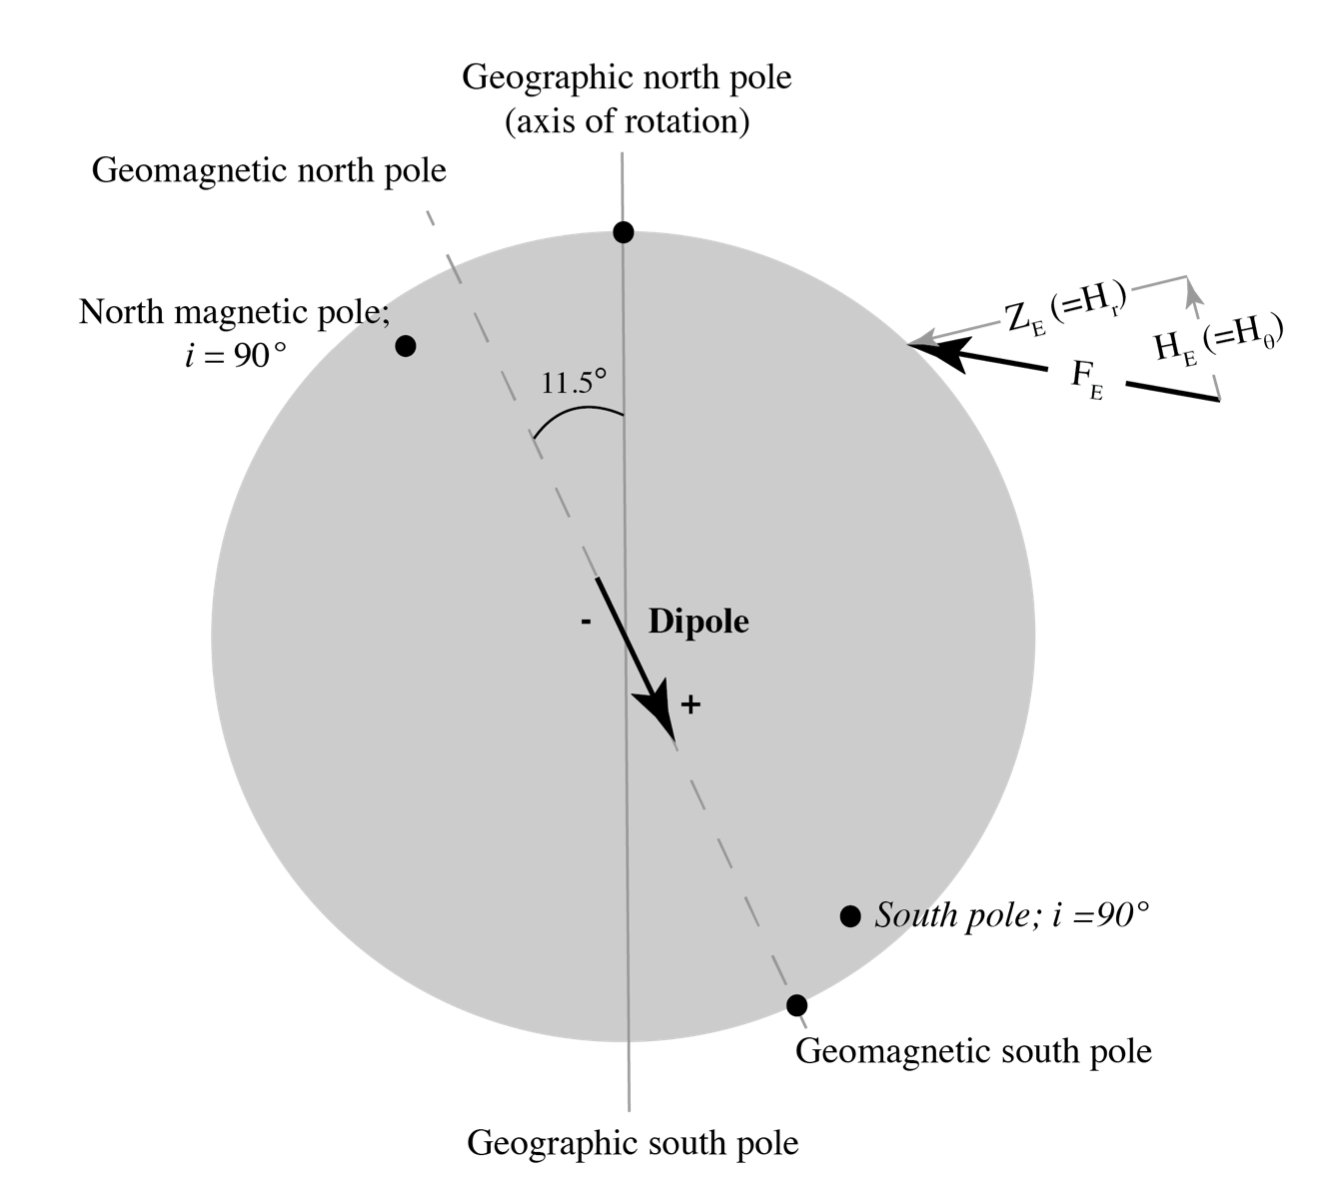

In [15]:
figure5 = "iVBORw0KGgoAAAANSUhEUgAABTAAAASgCAYAAADPfGeVAAAMbWlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnluSkJDQAghICb0J0gkgJYQWQHoRRCUkgYQSY0JQsaOLCq5dRLGiqyKKbaXZsSuLYu+LBRVlXdTFhsqbkICu+8r3zvfNvX/OnPlPuTO59wCg+YErkeSjWgAUiAulCeHBjDFp6QxSJyABdUABPsCDy5NJWHFx0QDK4P3v8u4GQBT3q04Krn/O/1fR4QtkPACQDIiz+DJeAcTHAcDX8STSQgCICr3l5EKJAs+GWFcKA4R4pQLnKPEOBc5S4sMDNkkJbIgvA6BG5XKlOQBo3IN6RhEvB/JofIbYRcwXiQHQHAFxAE/I5UOsiH1EQcFEBa6E2A7aSyCG8QBm1necOX/jzxri53JzhrAyrwFRCxHJJPncqf9naf63FOTLB33YwEEVSiMSFPnDGt7KmxilwFSIu8VZMbGKWkP8QcRX1h0AlCKURyQr7VFjnowN6wf0IXbhc0OiIDaGOEycHxOt0mdli8I4EMPdgk4RFXKSIDaAeIFAFpqostkknZig8oXWZ0vZLJX+HFc64Ffh64E8L5ml4n8jFHBU/JhGsTApFWIKxFZFopQYiDUgdpblJUapbEYVC9kxgzZSeYIifiuIEwTi8GAlP1aULQ1LUNmXFcgG88U2CUWcGBXeXyhMilDWBzvF4w7ED3PBLgvErORBHoFsTPRgLnxBSKgyd+y5QJycqOL5ICkMTlCuxSmS/DiVPW4hyA9X6C0g9pAVJarW4imFcHMq+fFsSWFckjJOvDiXGxmnjAdfCqIBG4QABpDDkQUmglwgautu6Ia/lDNhgAukIAcIgJNKM7gidWBGDK+JoBj8AZEAyIbWBQ/MCkAR1H8Z0iqvTiB7YLZoYEUeeApxAYgC+fC3fGCVeMhbCngCNaJ/eOfCwYPx5sOhmP/3+kHtNw0LaqJVGvmgR4bmoCUxlBhCjCCGEe1xIzwA98Oj4TUIDjecifsM5vHNnvCU0E54RLhO6CDcniAqkf4Q5WjQAfnDVLXI+r4WuA3k9MSDcX/IDplxfdwIOOEe0A8LD4SePaGWrYpbURXGD9x/y+C7p6GyI7uQUfIwchDZ7seVGg4ankMsilp/Xx9lrFlD9WYPzfzon/1d9fnwHvWjJbYAO4CdxU5g57HDWANgYMewRqwVO6LAQ7vrycDuGvSWMBBPHuQR/cMfV+VTUUmZS61Ll8tn5VyhYEqh4uCxJ0qmSkU5wkIGC74dBAyOmOc8guHm4uYKgOJdo/z7ehs/8A5B9Fu/6eb+DoD/sf7+/kPfdJHHANjnDY9/0zedHRMAbXUAzjXx5NIipQ5XXAjwX0ITnjRDYAosgR3Mxw14AT8QBEJBJIgFSSANjIdVFsJ9LgWTwXQwB5SCcrAUrAJrwUawBewAu8F+0AAOgxPgDLgILoPr4C7cPZ3gJegB70AfgiAkhIbQEUPEDLFGHBE3hIkEIKFINJKApCGZSA4iRuTIdGQuUo4sR9Yim5EaZB/ShJxAziPtyG3kIdKFvEE+oRhKRXVRE9QGHYkyURYahSah49AcdBJajM5DF6OVaDW6C61HT6AX0etoB/oS7cUApo7pY+aYE8bE2Fgslo5lY1JsJlaGVWDVWB3WDJ/zVawD68Y+4kScjjNwJ7iDI/BknIdPwmfii/C1+A68Hj+FX8Uf4j34VwKNYExwJPgSOIQxhBzCZEIpoYKwjXCQcBqepU7COyKRqE+0JXrDs5hGzCVOIy4irifuIR4nthMfE3tJJJIhyZHkT4olcUmFpFLSGtIu0jHSFVIn6YOaupqZmptamFq6mlitRK1CbafaUbUras/U+shaZGuyLzmWzCdPJS8hbyU3ky+RO8l9FG2KLcWfkkTJpcyhVFLqKKcp9yhv1dXVLdR91OPVReqz1SvV96qfU3+o/pGqQ3WgsqkZVDl1MXU79Tj1NvUtjUazoQXR0mmFtMW0GtpJ2gPaBw26hrMGR4OvMUujSqNe44rGK02yprUmS3O8ZrFmheYBzUua3VpkLRstthZXa6ZWlVaT1k2tXm26tqt2rHaB9iLtndrntZ/rkHRsdEJ1+DrzdLbonNR5TMfolnQ2nUefS99KP03v1CXq2upydHN1y3V367bp9ujp6HnopehN0avSO6LXoY/p2+hz9PP1l+jv17+h/2mYyTDWMMGwhcPqhl0Z9t5guEGQgcCgzGCPwXWDT4YMw1DDPMNlhg2G941wIwejeKPJRhuMTht1D9cd7jecN7xs+P7hd4xRYwfjBONpxluMW417TUxNwk0kJmtMTpp0m+qbBpnmmq40PWraZUY3CzATma00O2b2gqHHYDHyGZWMU4wec2PzCHO5+WbzNvM+C1uLZIsSiz0W9y0plkzLbMuVli2WPVZmVqOtplvVWt2xJlszrYXWq63PWr+3sbVJtZlv02Dz3NbAlmNbbFtre8+OZhdoN8mu2u6aPdGeaZ9nv97+sgPq4OkgdKhyuOSIOno5ihzXO7aPIIzwGSEeUT3iphPVieVU5FTr9NBZ3znaucS5wfnVSKuR6SOXjTw78quLp0u+y1aXu646rpGuJa7Nrm/cHNx4blVu19xp7mHus9wb3V97OHoIPDZ43PKke472nO/Z4vnFy9tL6lXn1eVt5Z3pvc77JlOXGcdcxDznQ/AJ9pnlc9jno6+Xb6Hvft8//Zz88vx2+j0fZTtKMGrrqMf+Fv5c/83+HQGMgMyATQEdgeaB3MDqwEdBlkH8oG1Bz1j2rFzWLtarYJdgafDB4PdsX/YM9vEQLCQ8pCykLVQnNDl0beiDMIuwnLDasJ5wz/Bp4ccjCBFREcsibnJMODxODacn0jtyRuSpKGpUYtTaqEfRDtHS6ObR6OjI0StG34uxjhHHNMSCWE7sitj7cbZxk+IOxRPj4+Kr4p8muCZMTzibSE+ckLgz8V1ScNKSpLvJdsny5JYUzZSMlJqU96khqctTO8aMHDNjzMU0ozRRWmM6KT0lfVt679jQsavGdmZ4ZpRm3BhnO27KuPPjjcbnjz8yQXMCd8KBTEJmaubOzM/cWG41tzeLk7Uuq4fH5q3mveQH8VfyuwT+guWCZ9n+2cuzn+f456zI6RIGCiuE3SK2aK3odW5E7sbc93mxedvz+vNT8/cUqBVkFjSJdcR54lMTTSdOmdgucZSUSjom+U5aNalHGiXdJkNk42SNhbrwo75Vbif/Sf6wKKCoqujD5JTJB6ZoTxFPaZ3qMHXh1GfFYcW/TMOn8aa1TDefPmf6wxmsGZtnIjOzZrbMspw1b1bn7PDZO+ZQ5uTN+a3EpWR5yV9zU+c2zzOZN3ve45/Cf6ot1SiVlt6c7zd/4wJ8gWhB20L3hWsWfi3jl10odymvKP+8iLfows+uP1f+3L84e3HbEq8lG5YSl4qX3lgWuGzHcu3lxcsfrxi9on4lY2XZyr9WTVh1vsKjYuNqymr56o7K6MrGNVZrlq75vFa49npVcNWedcbrFq57v56//sqGoA11G002lm/8tEm06dbm8M311TbVFVuIW4q2PN2asvXsL8xfarYZbSvf9mW7eHvHjoQdp2q8a2p2Gu9cUovWymu7dmXsurw7ZHdjnVPd5j36e8r3gr3yvS/2Ze67sT9qf8sB5oG6X61/XXeQfrCsHqmfWt/TIGzoaExrbG+KbGpp9ms+eMj50PbD5oerjugdWXKUcnTe0f5jxcd6j0uOd5/IOfG4ZULL3ZNjTl47FX+q7XTU6XNnws6cPMs6e+yc/7nD533PN11gXmi46HWxvtWz9eBvnr8dbPNqq7/kfanxss/l5vZR7UevBF45cTXk6plrnGsXr8dcb7+RfOPWzYybHbf4t57fzr/9+k7Rnb67s+8R7pXd17pf8cD4QfXv9r/v6fDqOPIw5GHro8RHdx/zHr98InvyuXPeU9rTimdmz2qeuz0/3BXWdfnF2BedLyUv+7pL/9D+Y90ru1e//hn0Z2vPmJ7O19LX/W8WvTV8u/0vj79aeuN6H7wreNf3vuyD4YcdH5kfz35K/fSsb/Jn0ufKL/Zfmr9Gfb3XX9DfL+FKuQOfAhgcaHY2AG+2A0BLA4AO+zbKWGUvOCCIsn8dQOA/YWW/OCBeANTB7/f4bvh1cxOAvVth+wX5NWGvGkcDIMkHoO7uQ0Mlsmx3NyUXFfYphAf9/W9hz0ZaAcCXpf39fdX9/V+2wGBh73hcrOxBFUKEPcMmzpesgizwb0TZn36X4493oIjAA/x4/xc3HZDwwCaHxQAAAIplWElmTU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAIdpAAQAAAABAAAATgAAAAAAAACQAAAAAQAAAJAAAAABAAOShgAHAAAAEgAAAHigAgAEAAAAAQAABTCgAwAEAAAAAQAABKAAAAAAQVNDSUkAAABTY3JlZW5zaG90wDc4ygAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAdhpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+MTE4NDwvZXhpZjpQaXhlbFlEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWERpbWVuc2lvbj4xMzI4PC9leGlmOlBpeGVsWERpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6VXNlckNvbW1lbnQ+U2NyZWVuc2hvdDwvZXhpZjpVc2VyQ29tbWVudD4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cg+o6qMAAAAcaURPVAAAAAIAAAAAAAACUAAAACgAAAJQAAACUAABnuwwDrxkAABAAElEQVR4AeydB5gsRfV4C1GSSo4CkpMIEiRKVFByFFBRQaIEEUURBImK5CAgSeGBgKBEyfEhSRElGBBBQZScVJIY+3/P/dvz652dTS/tvN1T37fs7kx31a1T1avvzK2qKaooxSIBCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIoAsJTKHA7MJRMSQJSEACEpCABCQgAQlIQAISkIAEJCABCUggCSgwnQgSkIAEJCABCUhAAhKQgAQkIAEJSEACEpBA1xJQYHbt0BiYBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkoMB0DkhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAJdS0CB2bVDY2ASkIAEJCABCUhAAhKQgAQkIAEJSEACEpCAAtM5IAEJSEACEpCABCQgAQlIQAISkIAEJCABCXQtAQVm1w6NgUlAAhKQgAQkIAEJSEACEpCABCQgAQlIQAIKTOeABCQgAQlIQAISkIAEJCABCUhAAhKQgAQk0LUEFJhdOzQGJgEJSEACEpCABCQgAQlIQAISkIAEJCABCSgwnQMSkIAEJCABCUhAAhKQgAQkIAEJSEACEpBA1xJQYHbt0BiYBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkoMB0DkhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAJdS0CB2bVDY2ASkIAEJCABCUhAAhKQgAQkIAEJSEACEpCAAtM5IAEJSEACEpCABCQgAQlIQAISkIAEJCABCXQtAQVm1w6NgUlAAhKQgAQkIAEJSEACEpCABCQgAQlIQAIKTOeABCQgAQlIQAISkIAEJCABCUhAAhKQgAQk0LUEFJhdOzQGJgEJSEACEpCABCQgAQlIQAISkIAEJCABCSgwnQMSkIAEJCABCUhAAhKQgAQkIAEJSEACEpBA1xJQYHbt0BiYBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkoMB0DkhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAJdS0CB2bVDY2ASkIAEJCABCUhAAhKQgAQkIAEJSEACEpCAAtM5IAEJSEACEpCABCQgAQlIQAISkIAEJCABCXQtAQVm1w6NgUlAAhKQgAQkIAEJSEACEpCABCQgAQlIQAIKTOeABCQgAQlIQAISkIAEJCABCUhAAhKQgAQk0LUEFJhdOzQGJgEJSEACEpCABCQgAQlIQAISkIAEJCABCSgwnQMSkIAEJCABCUhAAhKQgAQkIAEJSEACEpBA1xJQYHbt0BiYBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkoMB0DkhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAJdS0CB2bVDY2ASkIAEJCABCUhAAhKQgAQkIAEJSEACEpCAAtM5IAEJSEACEpCABCQgAQlIQAISkIAEJCABCXQtAQVm1w6NgUlAAhKQgAQkIAEJSEACEpCABCQgAQlIQAIKTOeABCQgAQlIQAISkIAEJCABCUhAAhKQgAQk0LUEFJhdOzQGJgEJSEACEpCABCQgAQlIQAISkIAEJCABCSgwnQMSkIAEJCABCUhAAhKQgAQkIAEJSEACEpBA1xJQYHbt0BiYBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkoMB0DkhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAJdS0CB2bVDY2ASkIAEJCABCUhAAhKQgAQkIAEJSEACEpCAAtM5IAEJSEACEpCABCQgAQlIQAISkIAEJCABCXQtAQVm1w6NgUlAAhKQgAQkIAEJSEACEpCABCQgAQlIQAIKTOeABCQgAQlIQAISkIAEJCABCUhAAhKQgAQk0LUEFJhdOzQGJgEJSEACEpCABCQgAQlIQAISkIAEJCABCSgwnQMSkIAEJCABCUhAAhKQgAQkIAEJSEACEpBA1xJQYHbt0BiYBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkoMB0DkhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAJdS0CB2bVDY2ASkIAEJCABCUhAAhKQgAQkIAEJSEACEpCAAtM5IAEJSEACEpCABCQgAQlIQAISkIAEJCABCXQtAQVm1w6NgUlAAhKQgAQkIAEJSEACEpCABCQgAQlIQAIKTOeABCQgAQlIQAISkIAEJCABCUhAAhKQgAQk0LUEFJhdOzQGJgEJSEACEpCABCQgAQlIQAISkIAEJCABCSgwnQMSkIAEJCABCUhAAhKQgAQkIAEJSEACEpBA1xJQYHbt0BiYBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkoMB0DkhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAJdS0CB2bVDY2ASkIAEJCABCUhAAhKQgAQkIAEJSEACEpCAAtM5IAEJSEACEpCABCQgAQlIQAISkIAEJCABCXQtAQVm1w6NgUlAAhKQgAQkIAEJSEACEpCABCQgAQlIQAIKTOeABCQgAQlIQAISkIAEJCABCUhAAhKQgAQk0LUEFJhdOzQGJgEJSEACEpCABCQgAQlIQAISkIAEJCABCSgwnQMSkIAEJCABCUhAAhKQgAQkIAEJSEACEpBA1xJQYHbt0BiYBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkoMB0DkhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAJdS0CB2bVDY2ASkIAEJCABCUhAAhKQgAQkIAEJSEACEpCAAtM5IAEJSEACEpgIBP7zn/+UN954I7/q6t/61reWt7/97WXqqacuU0wxRf1y+fe//13+/ve/l2mnnbZwjaX7Cfz3v/8t//jHPwrfp5tuuh7jOZToGfvXX38965l++unLlFNOOZTbvXY8CFRVlc8dzyLP5Fve8pbxqG3yvJX5++abb+b84++P82/yHEejloAEJCABCYwGAgrM0TDK9lECEpCABCYJAaTlc889V+6///7y2GOPlT//+c/lmWeeabU9zTTTlHe/+93lXe96V1lwwQXL4osvXmaeeea8/o477ijbbrttvte6wR+6hgCyCyHNmD711FPlySefLE8//XSZb775ylZbbVXe9ra3DTlWpPXPfvazcvnll6c822CDDcqaa645TnUNufFResNrr72W4/bEE0/kOPJ9ueWWK2ussUaZYYYZRjwVhCV/o55//vnsP3OYuczfpY022qjMPvvsI56BHZSABCQgAQlIYPIkoMCcPMfNqCUgAQlIoIsIIAVeeumlgoS88cYby3333Vf+9re/lTnnnLPMP//8Zd55583MSrLt/vKXv6TUfPXVV1N+zTbbbOWhhx4qL774YvnOd75TllhiiS7qmaHUBF555ZWUjYzvgw8+WBBfZK4hHU844YTM4KuvHez3P/7xj3kv407m7dZbb10OP/zwnDeDrcPrBk8AAX3bbbeVO++8M8cSGf3yyy+XPfbYo3z2s58dFdwffvjh8rvf/a7w/eabby7MQf4mIS8POuig/GBl8ES9UgISkIAEJCABCUw6AgrMScfaliQgAQlIYAQSQEo++uij5YILLijXXnttCgGE5YYbbphZXQsssEBBUiKo/vnPf6a8/P3vf1/Gjh1bbrrppsyCYinye97znnL22WeXZZdddgRSmvy7hPwiq/bnP/95ueSSS8o111yT2wF84hOfKCeffPI4CUzmzde//vVy3nnn5f1IpBNPPLHMM888kz+wLuwBz9lvf/vbwvN30kknlXvuuaf861//KgceeGDZc889yxxzzNGFUU/YkJC2f/3rX1NaMtcQ8mxhQPb3YYcdpsCcsLitTQISkIAEJCCBCUhAgTkBYVqVBCQgAQmMLgLIS4TIaaedVi677LJCVuWqq65adt5555SXZGB2KtyHSLj66qvzXupYaqmlyhlnnFFWWWWVTrf4WpcQeOGFF8qZZ55ZDjnkkMKWAAjMb33rW+MkMMnSve6668qYMWNyCTkZmHyxp6Zl/AggnHnOYNm+ryyv77PPPuXcc8/NTOnRJDCbVI877rhy/PHH55J6BWaTjD9LQAISkIAEJNCNBBSY3TgqxiQBCUhAAl1PgGXjZOSxfPjiiy8u7K23wgorlK9+9atlrbXWygN5BuoEMozsu6OOOir3niOTb+211x7oNt8fRgJkryEc99tvv9yrcnwEJvtqUh9Levl50UUXLbPMMssw9m5kNE2m85VXXpl7Wq600kod97b82te+Vk4//fTcumG0Cky2LiADmO0QFJgjY+7bCwlIQAISkMBIJqDAHMmja98kIAEJSGCiEWDvPOTjEUcckRKEpeJf+cpXyqc+9alByUsCQ4I+8sgjuXSTg3/IiGJPRUv3EmC/QAQmoprMvvERmN3by8k3MkQw+1weeeSRZb311iuf/vSnO0phBWbJLSvYc5V9MBWYk++cN3IJSEACEpDAaCGgwBwtI20/JSABCUhgghEgw+vuu+/OZagc2DPttNOmeGQpMSeMD6Ww1PWqq67KfRTZh+9jH/vYUG732klMQIE5iYEPsTkOWEJesh8tkpntHGaeeeZetSgwS/nud7+bh0aZgdlreviCBCQgAQlIQAJdSECB2YWDYkgSkIAEJNDdBJ555pk8bIXl4xwCgrT80pe+VPbee+8yxRRTDCl4Msb+9Kc/leuvvz5PIF9jjTUGdT/Zm3zR3lve8pZxapf7aZ9CHXwNtXB/Xc/4xEK7Nbu6zv76Vfe/vm/KKaccdOjUz1ezv3V9A/VhIIFJvf/5z38ylqEwrWOi/ZrDQB2qY+a6obQ1UL2dYqlfo81xaavJZSDGneKr22+OGZzruoiLDxNYFs7y8RdffDGzo3fccceWwGSO1Gz7E5hNrs17OsU11NeomxjqOLi/bq/uS/O9wdQPB/hQhjI24yow6/bGNd7B9MlrJCABCUhAAhKQQDsBBWY7EX+XgAQkIAEJ9EOAf7xzEvUee+xRfvGLX6SIeO9731u+/e1vl9VWW62fO/t+CwnKgS5ve9vbOu7XV9/JKcqPP/54Ybk5S8+RaWR/LrjggmW55ZZLATrQATCcOMy9v/rVr/L09FdeeSWXQs8+++xlySWXzNPQ55tvvjKQECQL9cknn0xp9Mtf/jLjJxaW0sNjscUWy6W77TIGWUPWKXs/Pvvss7n/Hocf1fGTDcYSYJa1Use6665b6sOQOHyFe8iy+81vfpMnuMPmne98Z1l88cXzBHfuaT+0hVhZ8v/8889nzE8//XSZf/75c79RXkN8/frXv07pBT/qYD/ThRZaqIfkpK1OApO9S2kDpswJuCCS3v3ud5fVV18962uPiTGnLsb9ueeeSw7wW3PNNTsueaZtyptvvpnXwuDhhx8uL730Us4bTi5ffvnlc/yGuo8m8uvvf/97YU9W5DyndDNuyHTkPK/de++9yYi9Xueaa66c6xw8NfXUU///wDr8l/GCL2wZLw6u4vl5xzvekfOE+QbrThmS8KQt+vfUU0/lfrPMUQ65ok3iIQuawr6xCMsLLrig3HzzzcmVPnGgFnORw5Zog2XSCy+8cN7TSWByHbEyH5gjxLrIIovkGPKMTTXVVHnvUP7DM8s4Ex9zm31z67hgwzgyb3geeP7f8573lJVXXrnMO++8+XtfbfEMMU7EyyFgPEMUnhX2UqXfPMf9jc9QBCbz46GHHio86+zZyjzkuVtiiSVy3vE89ddWX/3wdQlIQAISkIAEJDBYAgrMwZLyOglIQAISkEAQQABy4jgCE2mAdED0nHPOOSkdJhYkBMeNN95YbrnllhR0SCDEEvICQYL4WH/99cvmm2/eEn7NWJAxSMHLL7+83HHHHZn1hexAVCJXEKNIN4QE+3B+5CMfKTPNNFOzitbPMLjzzjvL97///ZRLCC3EH3KRemabbbaUochM+CAtZ5xxxhSMiKUbbrghRQ4CBokzwwwzlM997nMpYk899dTy4x//OF9HbsGZfUURfshBJBUCBUmHlOJ1pBCia+mll05J9aEPfShlE20h5ajvpz/9ad5He9xDH9dZZ53yox/9KOslCxbJCYO55567rLjiirm/JXKsKR87Ccwvf/nLWQ/jg6SiDcQVHJgb2223XVkrDnaibgrtIJ64lj498MADGf8yyyyTS3qRQZ0KfYEdX4wBDBg/ZBsMGE/a2WqrrVIMdqqj/TXG5g9/+EO55pprci4xJswrxN2+++6bouqKK67IOIkX4cpYIhK333773Geyk+xGjP/kJz/JbEjqZy4RLyKMecicI17q2WSTTVJg17KbuX7rrbcmF2Q7ApO5tdFGG5Wddtqp3HXXXXlwFvKPwuvMf67hVHf6gDxFBiPzEI/MFeYRApN2mgLz4IMPzn4gzpkrsCQ+xnCOOebIGHfbbbfy/ve/f0iSjnGhH3zgQJ30g3rhyjMzduzYfA+uzF/iQlxy8BBzhjmI1G4v8GPecj/PNTEiD5l39J15xvjx94CvWWedNetur2ewApN+8DePuQpH2mSOMIcZe9hvscUW5cMf/nDOjfZ2/F0CEpCABCQgAQlMCAIKzAlB0TokIAEJSGDUEEAinXLKKSmaEGRvf/vby6abbpoZmIi4iVEQOojHiy66KCXghhtumJINGYRU4DThe+65JzMGkUq77rprj0xOJBVigyxRlqqTmcV1ZNAhSBBqZLN973vfy0w5src4/IQDatqz+ci84tpvfvObWSeyjH076TuZhz/4wQ9SbCKQkFbTTz99yk2kIG1S989+9rOUqGPiMBwyyRCVO+ywQ0ochA/1IKNomyXAhx56aMbFae1IsQ984ANl9913z+xAZApZYWeffXbG9cEPfjD3PiSDkvGBHaILgcmhSwhfYiVbkXbJIkMawQgxSgbfo48+muOKDPzCF76QIqyWdE2ByWtk0yGaEG1kbCIfyahEpJElyPz46Ec/mn0gS5KC3ENCIa1Y7nzmmWemcOPQmZNOOimzE9vnEcKI8YcvQmqbbbbJ8UNkI41h+cMf/jBlFuOBEKZfAxX6jVhDCiLEkNJkPjI3Nt5445wbZCYi/ngdwYfoQ7Ztttlm2S/63Sz076abbirIaMaR+YpkpP/IY+YiAo69XxkjhDOnYTMvkW98MID0I2uTcUXwMp8+85nPpCxjLHkP6cz8QfghJJHvBxxwQDLl2WCOIkeZ44h0uNEXSlNgfvKTn8x5wNjSF7JOEY3so8ncISbaZpsIxnewhb8V3E/GNv2g38hUxpm5jcRE4lLIwmTuIzO5BrmO6ESaNjM/GWuWySMUyQplrLmGecBcr+c52ZKMP88x/aOtWhDX8Q9GYDKXTzvttHxmkfk8E8TOGDMX+JtCZi3siZcPBnimLBKQgAQkIAEJSGCCE4j/42iRgAQkIAEJSGCQBEIwVJEFxoZz+RWCrtpll12qyIgbsIaQRVVIoCokRBUCq4p/+Fchj1pfIe4q6g8x06qPekP2VJHJV4VQrCKbrUc7IV2qEEVVyMIqMgWrZZddtgrZWYXYa10XGVRVZJlVIUuqWKpdXX311VVkl7XeJ66QaVWI0CpEVRWypwqBVYUoqUIE9bguRF0VMqeKjMsqZEYVIqn1fsipKkRqFRIj2YTIqEIgZb0XX3xxxb3ERZ2RrVhF5lZeF5mKVUi+6rDDDqtCzFRxCEsVArIKOViFUKtCglUhoyrqCxFaHXPMMRUx1wUGcYBS6/1jjz229T7XEVeIyypETrYX2WpVZP5VIZWSZyxXrkLMVpElV4VMrEJItsY2MuGqx2O86hKytzr++OOrEGHJKZauV5GBWYXsqkIyViHaWixDdlUhjar3ve99Vci6uoqMjeuYCyGNqxBrVUiqZEUM7YWxOeOMM6qQv1UI2ioyMHuMC3MkBGbWQ3uxNLsK2dleTZ+/MyYhAjPGEFEZc2T1VSHHst4QuskwxGIV2ZhVLHFOPlx7/vnn95hrzKvIEq5CSlax5LsKmd6DH0HAO5Zp53MUcrHiGWJ84UepxyyEXPX5z38+5zbPW4i6vIdxYz4xnpFhWYVkzjYY5xDeOTe5HmYw7lQOPPDA5MV1cP3iF79YhXTOuUY9MGcuRCZj8mCuhpTN2DvV1+k1uFIX8ydkcMW8C+mdzw194G8AvPgKuZnx0kfmQojvKg716sEuhGh1cDzHISbz2QmZ3at/IRZzTOgTbUUWdBUfuGR/2mPkeQ9pnGMZy+t7/W3hOeW5iszmKj5EyL9TzecORpEhXUVGbjJizEOgZp/b2/J3CUhAAhKQgAQkML4E+OTbIgEJSEACEpDAIAkgGrbccsv8Rz/yg3+8I1mQMgMVhAaSEmmFQInsqJREiCK+YolrFScnp4DkOmQB4i2y7arIFkxp094GdSINEB/EE5lYKRiRPxQETmTmVZFZliJor7326iU96joRp8ggBCYSBUEZ2Zb12yn5EFiRSVchnoi3KUK5EKmBQERwIhwj67KKLK68DmlXl8iarGJ/y4wZgYWMij0dU4bFUtgUnIg67kXqRkZhXhuZZCm76nr4jny85JJLKqQbdX32s59tCeD6OvpG32EUGZhVLAmuEJ/thdcQt/SRa+GOpKtLu8DsS9pERl0KSeqgruOOO66uovWduBkbxHJfApN5hRBE5iJEI0Ozh7ykMubA7bffXkUmYsaM4DrxxBNb7Qz2h8jCbNUR2X1V7O1ZxZLxHrczFnBElCKemce15Ga+ItgZK+YH4jYyTFsyuVkRfY9l6ynUYYQgRNTXddXXIovrsWAOI90YI8RgZDemUI2lzDkHmIuRydsSmJE5WCFdO5WmwIxl1lVsidBrLkdGbs5RPhhgziAd+6qvUxv1a8wZBCHPBHXRdi1r62v4zjPL+NbimzFAfMOKMUZK88ECz2dkIOcHHc3765/hw9+kWO6d84G/DZHd2at/AwnMyHauYg/XFNb8HWg+v3Vbl156aX7owRjSP+Lv9FzV1/tdAhKQgAQkIAEJjCsBBea4kvM+CUhAAhIYlQTIIowl4ykG+Ec7koAMvE7/uG8HhOBBCMWy7yr2cqxi+XVmSVEP2VJkTZ111lmZ1ch1ZMUhuBBzyCAyK8l4bP8iozKWd2ZMiCUy5JA6lMcj+wupw+sIkXPPPbc9rNbvCCDqmu9/WVmItVja28qwQ7CQkYWEIUOMTNRmRhYVIZYQj9SBaIl98TK7rNXI/34gvlhanDEjqOJE91Y77dfCAl5IPLI7ibFZkHy8Fkt/U5whgxGfzdIUmGQGHnLIIb1ir6+vpTHjgrhC2NWitikwkXSIKV5rL03pGktuq/3337/9khRTAwlMRNdBBx2UvNdcc80qliP3qocXyLIlM5XMUoQ3QnOoBUlVS1AydWO7gV5V0FcyZGNZdcpiMvBqqcc4INzIzOR9xpf511eBEaKNuc+ciiXaKfib15M9WM/HWHpdxXLyPsdtXAUmfSCW9sK8I+uZcSY+JHSnsW6/r/137kHQ88yQuUtmKJmSnQoCmH4itHl+YtuEKpazpxTkwwA+oCAeMm77yi6lXrJJ+XvCc09dZDe3PxP9CUye44Mj25NnJZb/5zPd/neH35GqSH6eFb523nnnjiw79dXXJCABCUhAAhKQwFAIKDCHQstrJSABCUhg1BNAMCCI6n+ws3QbCVMLrsECQk6SvUQWG3UhJRCadeYk9bB0OvbqS8HDdWQsIk/bv3idpaJkQPFFxlXsT5dSlaw6loDSBkKDbL7+Suydl8tduR7ZQkx1RhXfyYjjPZbDbr311h0lSuz9mJl1iCmkG6KjvTQFJst0EZR9FbLPkC9jx46t4gCiVjxcT3YamXLIFmRjHTNCr1k6CUzq7VQQRixpRiDRTzJua/mDjKqXkDNmiKlOUoutAb7yla8kK7J0WaLcLnsHysDkelgyvsSBmK3Hoj1uhBNbEjC+scdox3Fpv6f998EITKQeIo+xpf9sJ8BrFLghNxkD4kW41XKzvS1+r5e+I8mYU8ju2Puyx6VkgcZp7vk+Gb98gNBXGVeBScYo86O9kA1KHxCPxMecoI9DLUMRmEhg4mEu0ybLyIkNLnwwgRiGF1sw9PehCfOPvxOMBfXE4V75nDRj709gIs7Z/oFxJPM1DvXq9XeH+tnSgA866r89/L1gywGLBCQgAQlIQAISmNAEFJgTmqj1SUACEpDAiCaAJGL5JlKAL5ZJk4nYXzZUJyDIKUQTeyhSD5KETMlmYbn6xz/+8cz+Yuko2ZBkQLZ/IXnYB5Mls3yRFYX0QMCQtYlgIBOLrDqWm/dXEBcsYycmZMlqq62Wy9i5hz6SwUkWGAKLjEgEW3shw5R9JJEniBOWw7eXoQjM9nthhxRCaB599NHJnz1CEWoTQmDSz3POOae1rygZcbU4m5QCs85oZF9S5gdL4/uTVu2chvr7UAUmcguBW0t39u8kRuYOS/nJXEXS9lUQyAhX9m3lHgQ7S52bfZxUArNTBuZwCExYMafJJoYJGb78HWDrhjrTEaHIkvd2Id7kzNxBmvMBC/WwpyzPavOe/gQmwpRsXP4GIC+/8Y1v9Pq7w98hxicO8mn97WFbgL4kezM+f5aABCQgAQlIQAJDJaDAHCoxr5eABCQggVFNoM7OQwgiBhBmZCKxb+NQC6KPpeHU00lgkrkYpxHnElAkGtmfZNoN9IUAQlSQ4cYhOBwSQxvLLLNMxb52/RWy6RAS9I8vsjk5mIdCu0iuOAU860OyIDbIJq0LbSOhkG4sDWc/zE4Sa1wEJsILzuyVyHJjMmGRySydJtuRLNUJITARVyzt5sAglg6TAUlmKmVSCkzGj/1SybhDGrNvZ19ZozX/8fk+LgKTrMhaYJIJu10cesRcI16yBzuNfTNGJD77iHIPYo7DkJBvdRmNApNtJNgHEybMceT5hRde2NprkmxrMpGbMrLm1fxONix7xlIPcph7mnK4P4EZJ83nPdyLCOUDkYH+7vB+/benGYc/S0ACEpCABCQggQlBQIE5IShahwQkIAEJjBoCyC2WftdSkAwlspvYm2+ohf0M6+XdnQQmB8GwBJs2WD461DYQi5zWXC9T56AU9sbrr3AP0ox98xCY9A3RWpf6RGyywbgGwUlWJmIX8YTo4yAg5CWns9eZi/X99fehCky4kz26zz77JJMtttgis77IFENqkmmKcJxQApMTnhG09BFBzZJcyqQUmGSCcnAMWXRkO7If48TMbhtfgcnSYZaUI71Yfj+YeDmIZ7PNNst72EqAfTcRYXUZjQKT089rgUlGK6eVk1UNH9iy7y6Zjk1ONa/mdz6IqJff83eG7SQGKzDJjOXvBe2RBc6HJxYJSEACEpCABCQwnAQUmMNJ37YlIAEJSGCyI0AGHNKFrDz+cc8Xh4wgmoZaBhKYnMrNARq0seiii+ZJ24NpgxjJfEP6ISxriYEUIburv0LWH0KSzEOWiZMd19wfkLpZZk5/kass2yazk+XvyEX2DOT0cvYFRbj2lTE4FIFJX8geYy9KxChMbr755tb+iux9yGnXZJtNCIFZi0P2IeSrmUk4KQUmMpm9QTnEibFgmXydDdvfGI7re+MrMNkqgDnAfEV+s6clWZn9FebIxhtvnPcgw5FszczC0Sgw68xJnkH23XzhhRdyvpNFCVtkdn8HAdW8YceJ9NzD3IF1k21/GZhkarO0v87CJlO2r2e5bo/vSFWe18Fc27zPnyUgAQlIQAISkMBABBSYAxHyfQlIQAISkEAbASTWSSedlPtfIgdYLvvpT3+6IjtxKGUggYkQQgTSBll47CmIXOuvIPNYes5p0Bygct9991Wrr7561sFhMsi45pLv9rpYDoz4QFywjyEZYIjQZiGLC4nLicPscbn33nunwOQ0Z073Zrkr2Xj9SYzBCkyEC3sA7rrrrskbiUNWaXOZMX1mj8AJJTARRiyNRyCxXJeMuLpMSoFJH8m0qzPvENEcoNPsex1X8zvzkPEh1qGU8RWYnKzNHqz1ATRsj8C49FcQsmuvvXbOTzL9kPbNMtoEJmPLcwRD5jPZ3jx/PAMcmMOcJCObrRM67dvZZHfEEUfk/rf8/SAbmkzOZulPYD4ep8ezfQWZtGR8cm19WFOzjubPPO833HBDSnY+CLFIQAISkIAEJCCBCUlAgTkhaVqXBCQgAQmMCgL8Q53l3SxjRibwxWE8iLX+pF07nIEEJgKSTEeWl5OBxzJQhEZfS0dpm4w3Ti5H/CD2yJY84IADcik0dbB/ZftJz824kKYISQQmy8TZQ7OZtcXPiBAOGuGwHwQpBxshnlguzunfA+17SHuDFZgIHZYVk4GKTNlggw16ZIRSV52ByZLvwWRgktF46KGH9jlW9IPDU5BFSBxkYF0mpcCENXzpMxKKzDuyGvvbxxQBzR6hp5xySmbu1XEP5vv4CkzENpmyZPsRL1sXMEf6kllcz9iyVBlZTsz1fpp1vEMVmCxh50Rs2mcJNVK1UznwwANb20Bw6ncnGYg4nBinkCPE+4qLbGfGm60LyDT+5S9/mfOUDx323XffVszLL798ryXhzX5yPZITETrLLLPkthDtH370JzDpey1S+fvGvGN+9CfPkdHcc9NNN/X60KMZmz9LQAISkIAEJCCBcSGgwBwXat4jAQlIQAKjngBShuw49qZElrCUmoN2+Ef+YMtAh/ggeFi6WR+aQxss6SarrV30IPEQbRxmQzZoLSl5/cc//nGeGE6cZHVxmnknqYQARUKsssoqme24XRzI0n6COPtNcjAPS+gRZeNaBiswiZM9OclARShyInL7fnxcc/7556fcgdFWW22VIrUZG2KIDFYYIHTg1EnGUBcH+NSHEB111FE9WNUCE5lIW5zC3SnTkT0zaYP2yHzlIJT2wthccsklmSWHsNpkk00qTvJuFrIpybqssxrJhkPSMXe4vy6M3bPPPptLzsmyZWw69a++vtP38RWY1Mn8YNkzfWa8yK7kxOxOhb4xl975znfmMnJkbfsHAEMVmGQFkxENdw53ao4NvHimKEj9eh9b5kVzm4Q61okhMBlnxrMZV90efWfLAD44QMYjOpvPORxXW221FPn0kecY3p0KH7CwlQPSv85sbX4QwT3f/e53W3ttMo/bnyv2leWDGT7MoD32NOVwHz5YadYFJ5b+8/cCrmRvNt/vFJ+vSUACEpCABCQggaESUGAOlZjXS0ACEpCABP5HALnAYS8IxnrJNacGkyE3GHlEBuaSSy6ZsoUsS8RUe+FwHJarzznnnHkd2WUrrbRStd9++2U25tixYzOL7Vvf+laKOyQq4qEpt5AlyJAFF1wwhQb3s8S8eQ3tIkNYOo3YIYvuxhtv7CGUyPxEhrJXIQfmcBL4ZZddVhFD8wsRxhJy6quFUXu/WOZe7+/JEmmWnXcqyBGyThGvMEYs0le4IEnoGxlfO+64Y0oWBNGGG26YS26RkVxHaQpMrkGE1pK3bpf+IXA5VAbJidRp38OR+hB0ZLOS7Ykcqtuo66nbI5MVkUZ2IZKsvdA3DmfhlHHqI6b29pBaxPnRj340xw4GjA+y8/jjj8+x59R36mG7AV5HCnYSZO3tt/+OhFpxxRUzZvY/JDuyvSAd6T9ZeUhcTiFvLi1mvBGRZLAyV+FIJmC7HIP17bffnhmu9J/sZcRYeyErc77YYxaOiHnmVV+FOslSRPJyPePHPCMmGDJP2B6AwkFTSFau43T39uXVXEM81IGo5jqejfp+3h9sYSyoh2ccbhwKBaP2Z+Pee+/NZ4L4ial9GwbmM88xGavNjOz2zEquI1aeGTI1+aCl07YR/WVg0jeeX2Q4Hx7Qf+Yxy9hZmn711VfnM0/d/M7fHQQnz37735XBcvI6CUhAAhKQgAQk0B+BKXgz/k+JRQISkIAEJCCBcSAQkqOE1CvnnXdeCYlXQlyWyJIqsTdkieyzEhKhhMhp1RxCqnBPLFktkUlZTjzxxBICosReiyX2qSshBVvX8gPXh1wpcfhOGTNmTHnuuedKSJAS8qXEAR0lstdKiJsSEqmE5Cwh8koIuBIZU616QvSVyM4rke1XzjnnnBIZUiUEVYkl8CUySEtIpnw/9q8rISZKCJQSe1+WkBIlpEurnhATJaRWCblSQuTkffSv2RYXhyDM96g3ln6X2IMz2wvpknWFuClxonj58pe/nN/pR8i+EstPS0ixVnv8QOyRTVYOOuigEtI16w7hmYxjiXLy4R7qjOy1ZEV9IQPLQgstVELIlchEK7HMvYTYKyE/S2SllZBiJWRM9nGppZbK+yMrNBmFgC6rrrpqCfGW3+u4iSVEXNYTIqlEhmH2LTL9ShxkVOrriCWEWQmJVOJwoezT+uuvX0444YQSByll//i/X4wl4xGZdCVkZlluueVKyMGcN9Rdl5BPhZhiSXSJw4tKLD9ODrEUvkSmXsYR0irnRcixEplw2b/6/sF8Zw6F4Mv599vf/rbAeP/99y8hKLN+6mAuxlYBhf4y3+lvLHcuIdhb/eI6+hJyvkSGXwkJXkK6FvofcrVERl/WE0ujc/7DPJYnZ1shZrm9Veh3HGhTYA0r5uNhhx2WnGrWrYvjB5iGyC2xD2uJbQCSTWQs53MS2xqUNddcM7943kL2lpBvhddpn3pD9vXqK/OS5xs+sZw844QNfRpsiZPjSwjsEh8sZHsh4TOOEPglsi0zbuY4sUfGdc5t4uMZ5VlqFp67yBAukZVcQs6W2FYi/9bwjPE8wCmyJPMa/jZERmoJoZ9/L5r1wCC2gShxGFAJUZnx8DtzsJ578IyDf3LeRkZv/o3hbw9/Z5h3IfALfxNCapfYmzafX/72Nf/eNdv0ZwlIQAISkIAEJDA+BBSY40PPeyUgAQlIQAJBAAny0EMPlVtuuaVENlyKhcjaKnGISQo8hBoiAgGGvIxswIIkQqrF0uASGVUpyiLrMaVbO1SEGNIRGYZkQlwgKiiRFZX3Ix6QRJENmlKzvQ7aRjTEMtSCqESYIJqQjMSAkEEKRZZmCp0VVlihh7ykPgQWYggJSCyxv2Z7M/l7XRd9RoYiNWKfwRRE3B9ZWikukaWRxVpgRfxxGnVB7kRWan6vK4cZUgaJGxmSeU9k7eU9kU2a8oU+IAP5Ik6ECuImMhdzDJoCk5iQy1wDV8YPFohBZCh9RwQyfrVAIk7ahh0i9Y8hlSlIIwQYcg1BhuBhjJgLfGec4BEZq1kn9c4fEjOWgKccQkhGNl7ODeJCtsa+m9m3yHTNNvgPMg/pd+211yYL5g8xIWPjZPaMGSFLLMy3wRbmRWwTkPOWmBkT5BZSmrmEiIcHwhfpzLjHyfY5d+kXfYnT4TNm4kWsU2AaGYRZL88Ewh7hxbjVTBFsjB/9RTZTH4V5CmvkGeKMucoHAwhbxpR4EH/IO8a9WejLqaeemgKPn7mHuLiP/jDeSHjq5X0kHc8Az05si5BfyEqkJWODgEX+U+BMX5mnyM52cd+Mo/lzU2AyNyOTNJ/byNwtiGdY8QEEXODBBxDMTXh1KtyHIGYcmEc8H3CFJ88wY8pzDFc+oGgyos/cw1xiLJlHsGXuwSi2j8jnlfEgHuKNrSlSvkbGbP6dI1a4ITKRudyDyEa4Ki87jZivSUACEpCABCQwIQgoMCcEReuQgAQkIIFRTwBpgFBC0JFVRqYa0gx5gdSqs5pqiYO0Q9YhYhBOCK7+/vFP/dSFFIoTiTNrCuGDtKAeRBJ1ILT6K2RMITFir8WUcMiIOqOTevhCTPBap4JsQYKSDUhBjsQS2ZSyyI66IDi4lowx+h7L40sse8+4ESKwQsrVhbiRXwhBsjYRMM2C6EESI2/hgLhFntTxInnhEsugU8gg3MishC19aQpMpBbZrjvttFPKMbIqkTiwpG2+yCxtMoATcTO+/FzLNr4zprSH1OIeRB+MkaJ14TpiXmKJJXKc6AdiDPnU5EZdZCISA1mdzUIf4RnLzDMTlDjgRqzUG6eUd5TXzTraf2ac4uClzPxDtjbHBJnLXKBu5B3SizFAcNYFYUa/EF4I36Yso25ihC9ftEMfqJcMPsaPecv9zcJ8Ql4i+pHK3FMXMoJjSXP2FdHNmDULzwmSEsEHX+rmGeNDAsaGzFjGkD4QX114HpkryDgEJpKP9pnD9XV8Z44iF2l7XAUmmbhIfZggdpl7xAkPYkVG1n8v6vjav8Okfo6Z98yjOj6yuamLedH+94APHRhHxgK2zbnH3x9EJvOOcalFM/XCEm51W3AmTq7jGWTODhRzex/8XQISkIAEJCABCQyFgAJzKLS8VgISkIAEJDAAAf6xj/RA0LE0E+FUiywkFpIAsYCw4B/9SIJahg1Qdb5N/ciLWuogZYZaBxVRD+IEEUFBRCE7+osF2YH4ZKkrIpRsNIQSMoissLou6qN+ZBgZXmTgIa2Qnogr2iVuvurC9dRP+/Snlif1+3znGuQS13WKl/Z5n+voC9fUpSkwES8sV4/T2lscuId4uK8ZV30/bdLn+rr6db7X/aaPxM/4U5r1cF99L3HBoL6myZy6uA4Z1FcGXt1PvnMv146PPIIZfaOuZsx1LDCh/nq+NK8hVq7jNfrfZJ4djP9wDfyYs/w8UMxcW4tD6q35cG/dHu3ApxlL3R7f6RPtcV09r4mzrpc663q5nvco1Ekb8KC011/PPfra/l7e0OE/7RmYLLmPvVPzb0E9X6mrr7nXocrWS8RajwsvNvvbuqjxA0ya87OdARzq56/5HlXQFvHCgFLPu/br8k3/IwEJSEACEpCABCYwAQXmBAZqdRKQgAQkIIGRSACxQWbb6aefnhlc7F/J/oL9yQtEB8uBWfbMfoPs9UiG2XCUdoHJ/pYIzMFKqOGI2TZHBoG+BGZ79ujI6K29kIAEJCABCUhAAhOHgAJz4nC1VglIQAISkMCIIkA26bnnnpsHqrDM9uSTT+6xXLivzpKxxX6CHFh0wAEHZPZpX9dOzNcVmBOTrnX3R0CB2R8d35OABCQgAQlIQAKDI6DAHBwnr5KABCQgAQmMWgIsHWXfvH333Tf3v+QgGpaD1we29AWGDEz27OTAFJZtf+ITn+i4NLyv+yfk6wrMCUnTuoZCQIE5FFpeKwEJSEACEpCABDoTUGB25uKrEpCABCQgAQn8jwACk70sDzzwwDy5mANCOFX8Ix/5SGZUsg9ms7B/IId+cOgNJ2xzMAj7ZXLI0HAVBOZxxx1X2H8QmeoS8uEaidHXLvvh7rXXXuWyyy7L/SNPPPHElPkuIR99c8EeS0ACEpCABCQw7gQUmOPOzjslIAEJSEACo4YAp0lfeeWV5aijjsrTkznxmlOnF1988TypmgNI2CeTJeOcIs3hRewvueyyy5Y111yz16nikxochw994xvfKGeffXYK1R133LEcfvjhefDMpI7F9kYXAU5332233XIvWD4MYB7usMMOOQ9HFwl7KwEJSEACEpCABMadgAJz3Nl5pwQkIAEJSGDUEEC8ICVvuOGG8oMf/CCXlJNZxonFZGByIjESk+zGeeedtyy11FJlxRVXLEsvvXSZZZZZhoUTMSNTf/WrX5W77rqrnH/++eXhhx/OmJdffvmy/fbb56FC88wzT1lggQU80GdYRmnkNkoWMlso3HHHHWXMmDEp/untGmusUbbaaquce4suumjrA4CRS8KeSUACEpCABCQggfEnoMAcf4bWIAEJSEACEhgVBBCCr732Wvnd736XX0888URhfz8KApM9Meeff/7WFzKzv1PKJzY0MkKfeeaZcs899xRiRSjxGmXqqadOcTTnnHNmdijZpFNOOeXEDsn6RxEBsn7ZO/YPf/hDeemllzI7me4z9+aaa67MwFxmmWVy/vGaRQISkIAEJCABCUigbwIKzL7Z+I4EJCABCUhAAh0IIDL/+c9/ltdff72w3yWF5eLTTDNNmW666TITs8Ntk/wl4nzzzTdTsiIum4KS92qZSQYp8nU4Zeskh2ODE50Asv+VV17JedZp7jH/mHfveMc7zP6d6KNhAxKQgAQkIAEJTO4EFJiT+wgavwQkIAEJSEACEpCABCQgAQlIQAISkIAERjABBeYIHly7JgEJSEACEpCABCQgAQlIQAISkIAEJCCByZ2AAnNyH0Hjl4AEJCABCUhAAhKQgAQkIAEJSEACEpDACCagwBzBg2vXJCABCUhAAhKQgAQkIAEJSEACEpCABCQwuRNQYE7uI2j8EpCABCQgAQlIQAISkIAEJCABCUhAAhIYwQQUmCN4cO2aBCQgAQlIQAISkIAEJCABCUhAAhKQgAQmdwIKzMl9BI1fAhKQgAQkIAEJSEACEpCABCQgAQlIQAIjmIACcwQPrl2TgAQkIAEJSEACEpCABCQgAQlIQAISkMDkTkCBObmPoPFLQAISkIAExoPAf//73/Kf//ynvO1tbxuPWibercT3z3/+MxuYZpppJl5Dw1jzv//97/KPf/yjVFVVppxyyjL11FOXt7zlLcMY0eTdNPOZOcOcfutb39r1nfnXv/6V4+6Yd/1QGaAEJCABCUhAAsNIQIE5jPBtWgISkIAEJDCcBF5++eVy3333pehZbbXVUqIMZzztbb/55pvlgQceKJdddlnGttlmm5UVVlhhxMi91157rTz44IPljjvuKI888khBZM4888xl2WWXLSuttFJZeOGFJwsB1z5uw/n7q6++Wq6++upy9913l0UWWaRsuummZd555+3aOYOgv/XWWwtzYZVVVimzzz57mWKKKYYToW1LQAISkIAEJCCBriSgwOzKYTEoCUhAAhKQwMQjQIbaY489Vi6//PIUJxtvvHFZfvnlu07yPPHEE+WEE04o55xzTplqqqnKJz7xiXLQQQeVWWaZZeLBmUQ1P/vssylmb7/99jLrrLNm/+69997yy1/+ssw111zlAx/4QNlll11SZE6ikEZEM/A87LDDyk9+8pMyxxxzlK9//etlk002Ke94xzu6sn9k3TLuV155ZXnnO99ZNt9887LQQgsprrtytAxKAhKQgAQkIIHhJKDAHE76ti0BCUhAAhKYxARYrvqrX/2qjBkzJpfZfvzjH8+sxummm24SRzJwc2QlIiwvvvjiwvJxROvJJ5+cYmrgu7v3ildeeSXl8be+9a2y6KKLln333TelLNLt+OOPLz/72c/KAgsskK9/9rOf7d6OdGFkV111Vdl///3Lb37zmzLttNOWY489tmy77bZlhhlm6MJo/39If//738v999+f8xyhuf3225elllqqa7d16FqQBiYBCUhAAhKQwIgmoMAc0cNr5yQgAQlIQAL/R4DMy4ceeiglIMvH99xzz8z069b9L//yl7+UH/3oR+Wss85KmYPY2WabbVJm/l+vJr+fEMhf+9rXcvn+5z73ubLPPvtk9iv9RcCRcTrTTDOVvfbaq6y11lqTRQfZw5N9J8kinJjl9ddfzyXWCO1Oe0aStXvqqafmsmyW4O+9996ZXdytc7xmxfYBiOuTTjopBf0ee+yRS+A79bG+x+8SkIAEJCABCUhgNBFQYI6m0bavEpCABCQwagmw194f/vCHQtYfy5QROxtssEEeGNOtUIj5pZdeKg8//HBKq8UXXzyXW3drvIOJi309WS4Mf5Y1H3DAAZlxx71k3yEx6S+HzyyxxBITXQgOJuaBrmGMyB4lfrJkJ1ZBkl5yySVl7rnnzqzht7/97b2aQtI//vjj5U9/+lNmtSIxO13X68YueAEBzP6dJ554YllzzTUL2bf01SIBCUhAAhKQgAQkUIoC01kgAQlIQAISGAUEXnjhhXL22WeX8847r3AYzn777TdZyLGRNjTPPfdc+fa3v12OOOKIsuCCC5YDDzywfOpTn5psu/nGG2+UG264IbNGV1999fLlL395ovQFOXrjjTeWI488MrNw2fqgm5eFjyuEv/3tb+WQQw4pY8eOLbvvvnvZeuuty4wzzjiu1XmfBCQgAQlIQAISGDEEFJgjZijtiAQkIAEJSKAzATLXbrvttpSWLL0lC5PTvC2TnsCjjz5avvGNb6RI5pTsyVlgsp8qy56RiiyLR7ixn+fEKJzWzoE8119/fcrf7bbbrkw//fQTo6lhrxN5ybYC9I+5suKKK7of5rCPigFIQAISkIAEJDDcBBSYwz0Cti8BCUhAAhKYiATIXGNfwGOOOSaX33KSN1JkYh3aQ3tTTDFFrx7xOoX3Ol3T6bVelYyAF37961/nsnH29uQAH/bC/OQnPznZ9Qwpft999+V+k/QF2cay+C996UsTtC/MC7Y8OOWUU/LgI/ZuRcAjMCf2fpsTtCNDqIw+fvGLXyzXXXdd2XXXXVMMzznnnEOowUslIAEJSEACEpDAyCOgwBx5Y2qPJCABCUhAAi0CnHDMEt8vfOELmcWFvNxqq61a73f6AWnESdkc+PPAAw+Uxx57rLAfJdKTPQWXW265lG9TTz1163b2HnzyyScz0xNhiuCqy1RTTVXmn3/+suqqq+Zy2Jtvvrn8/ve/L8RGYYksdbIEua6TQ01ee+218uqrrxaWXf/xj3/M99ZYY42OS4fr/TLvvffejJl9Gdn7cLHFFsu2aQfJxunO41qIiVg44ZqMw6effjqFLEuZ3/Oe95Qll1yyzDfffHn6dbONP//5z3kYEXuQvvjii+WOO+7I/nBQz8orr1zY25My5ZRTlqWXXrp87GMfG1TGHcw51IZlx8RC/fRx7bXXTknM2P30pz/NetlTcZlllulx8A384YogZN9NxpzDbpBlcKJP/NwupLnu1ltvLWeeeWbuffnXv/419/NkDJdffvnsC8vjN9100zLvvPPm7/yH9ogR8UkmKsvPGW+u+dCHPpTs6vHnevaEvOmmm8q5556bS6oZU+Ym/SM25hXxscya+cX+ovWcYQ9MvriOL04k71TIImW+Mp58wZKDc6iXcXnve99b3vWud3UcD+Lj+ueffz77Axdim2eeeXLvVur7xS9+UeBDfauttlrWSRZ0f4W5jLDlQ4eZZ54598Tk3m4/iKi/PvmeBCQgAQlIQAISGF8CCszxJej9EpCABCQggS4mgDxDhJxxxhm5FJUTmpFkfRWkGMLy/PPPTzmFUJp99tlT6jzzzDMpe5CYW265Zdl8881bB6QgXRA1999/f7n22mvLpZdemr9zGM2yyy6bS2IRXIikH//4xxkPcud973tf7smJoEE2IvEQVUg1Yv/5z39eyFpEFFHP4YcfnkKpGT9tI8Y4vfuee+7Jg35mmWWWFFoIR8QSffjoRz9a2DtxXAp9uy2W4XMAD6KW+pCFCFbaRsYh7Tg1nINs+LkuiDQOn0HaIjA58IY6ELcIPzIxKfQdyfjpT396QFmFNIMjDBFwjA0xInjJ3rvzzjvz9HbaREButNFGuYUAog9exHTFFVeU22+/PUXhHHPMke1TL9yRg4i/DTfcsHzwgx/ssQ8j+6myHyWZlywhR4KSDUnsCD9KPUcQupRnn3022V1zzTU5LkhB5gJ1Md+4nn4jWuvMSmQkMSJ8EZnETOxIQq6HF/WQVYxcpp5HHnkk5wAxMWc+//nPp7DvtI8k0pdDc6gbucqYIheJiTGlfuYkh1195CMfyUOBsjPxn9/97ncpcZHExAV/7md+EuPll1+e8rieG0hu2HC6OGM00MFCLCPnQwfEMsvyWZ6PBLVIQAISkIAEJCCB0UpAgTlaR95+S0ACEpDAiCeASCEjcc8990wJiIg57bTTUrR06jzZbcgwDpn5wQ9+UBZYYIEUQMgistIQNYhNxBWyioOAqLNZyEpDPrLM9/vf/36+hQBDoCLPKGSmcfo2Mo86PvCBDxSyEWmDGBBPnCSNyLzsssvKd77znXyPtk4++eReJzMjjzig6IILLsiMxs985jPZR6QieycSM0KLNnlvqIWTwRGXp59+eopKMv7oE5IU8YVgvfjii1NwIrE22WSTsttuu7XEJJmBSDHiQXwde+yxKeXgi9BCLlIQjcg7RFV71mN7MnsvQAAAQABJREFUzMSEPEPwIosRt5xqDqP11lsvuZEpiigly3CVVVYpxx9/fEpspOZZZ51VkInvfve7y7bbbpsZl8hqli8jPy+88MKUeGRissQdScgYUciuZezqpd0Ia7IOd9xxx5YgRk7WQpBxZD5xujZtcLo22bjIQuqB7Xe/+93cl/Wggw5q7flI3Aho+vrVr341pSmiEn4f/vCH86R26kO+wpd2mDcnnHBC8kBAsj8ny83bBSZcYPDDH/6wzDXXXCk52RcWhkhpMlc58AohSoYodcCpHhvmE/P4qquuSslK+whfDsgiDuKCLfEiiWHKXCErlUN6uLa/MUYi77DDDjmnyEw+7rjj8pnr7572OeLvEpCABCQgAQlIYEQRiH8oWCQgAQlIQAISGIEEYnlxFSKqCtFWhRirdtlllyoEY5895foQOlVkzVWRMVZF1lcV8q11fQi4KjIJq5BVVQihaq+99upYX4iaKqRWFRmTVQiXKg6rqUIwViFzqsgSrEIcVSEtqxCCFW22l8gCrUKS5bUhtjL2kF3VFltsUT311FM9LufakENVyKcqsjmrOOSl4rW6hIxKBuuss062W78+2O+RBViFIKwiUzL7ffDBB1eRTViFHG5VwTW0G8ugs78hxKo4jbsKCdW6pv4hMlSryOZjQ9AqMi+rkKv1W0P6DkvGI2RkFftOVrG8uIIRzENYV5FpW4WAqyJTtgoBV+28885VyOnkd+ihh1aRuVi9//3vr0IQ9xgD2NG/EMVVCOeslzoju7XHXCDYELdVbEeQfeFa2mwv1HfXXXdVkTVZhaCuQrBmHPV19CMyLKuQfVVkJVYnnXRSFcKyfju/M4axrL4KKViFlExmzI9mCdmZczEySKvI5My6QqJWIU171ccc/OY3v1lFlmwVGZbJiTabY8rv8IusyYx7oYUWyv6FcM1meY6Yu5GJWoXMz3HnmQgZXcXS+mQTmb9VyPjqlltuqULYVpGNnM/imDFjKvrUX+EZCnFcxbYN1dxzz13Fhwa9+Pd3v+9JQAISkIAEJCCBkUaATAeLBCQgAQlIQAIjkACy5eijj26Jk8hi67eXSJvInExpVQvPpiiqZRSiEGG2/vrrV5HJ1rHOyJyrjjjiiCqy9lKsxVLkKjL2qlg+XUWWWhUHvqQo63jz/15E4lx00UWtOjoJTEQSgpF447TmrL+9TiQf0i4yS9vf6vd3+htZjlUslc8+xPLwKjIeO96DqIpM0SqyAVN4IScj67SX4EVgrrvuui2BiSQbn4KMQzZG5mC2G5l9VWTZVpFJmYIt9pusYjlz9oMYEdBIO8Ylllf3knvEgsiLPSqrOEAm5w7iEPHY3ncEZizLbwnM2LexV1cQi8i3yOLN65C3sdS7x3W//e1vK+JG6n7uc5/rITi5kD5G1mtLYMaemBVzo1NBJhM386GTwKRvxIO8ZQ5HlmNK4E51wZB4YIWIZ36NHTu2x5jGPrFVbH+Q7GO/yioyJSvmflOGIjr5MIAPBajnK1/5ShXL1zs12XqNuRcnkWfbsZy/gi0cLBKQgAQkIAEJSGC0ElBgjtaRt98SkIAEJDDiCSAXYz/EFENkBcZy2n77TLZl7AdYxT6EKXgQfu0Zm0gssh3JpiOLEsHXqZBZx3uIJ65F7MXy7czajCXWFWJtoDJYgYmUI3uPTLVYgtwr8xFxR79iGXOP7MyB2ieDjgzQ2WabLQVhLJGueK1TQVghaOkbIg55ts022/SKZUILTOIhk5Xsv1oqIxabpZZpsR9jyj2yGBGsiMD6veb1/FyzJzOS/pDFiZxjXOsyGIFZS2CyIpdYYokqtgyoYrl1XUV+R5bGvqzZDpmWse9jj/cnpMBkLtQyETGL7O1rTAkiltlXsYw+xSPXH3bYYSko6wCRr7XAJHM5Tg7v9czAGIHOMwDLnXbaqXr88cfrKjp+5x4+AIgl63nP/vvvX8VWCR2v9UUJSEACEpCABCQwGggoMEfDKNtHCUhAAhIYlQTIdNtuu+1SgLBkGAHVX0GakIXJkmyWvSJAa8HFdzI6EXosF0ZKxgnaVRzi0meVZJ7VGX9IMzLUkKOxN2YuEe/zxv+9UUu0OouzUwYmgox4WeKNwGNZcOyxmEvY6+W+SLfYl7BHfwZqm/djn8Ncjk1fWYZPBmvNo9P9LF+OU94zW7PO2IuDdnpcOjEFJtI0DinqKLrgNDayB+GEROM7UrevQj+RzGTOcj3L01nSDMe6DEZgci1ZkbEXaXXDDTdUsQdoDwnKUmoyImtRyhjH3p11E/l9QgrM2Lcy5yDzkTGNQ3wqskT7KjwDxET/4UD2MFmXdWkKTJ4LthJol/5c25SRjBHSdqASe3mmlKddtgBgPlokIAEJSEACEpDAaCWgwBytI2+/JSABCUhgxBNg6XQcvpLihezEgQRmJyBIRKQP+1ayt2IcnpJLYQcjMJFgCCDEH0uca6kXB850aqrXa4MRmNxEZhrikExJ2mCp7korrVTFKc4plJrSrVcj/bxARiV7GiKQEMBHHXVUP1dXuUche4iS7co9nfa4nNgCk/HulKkHyzhoqCXE4lCfjsvtmx1k7Nhfk77ANQ4u6iHvBiswm3XyM4Lv8chAJB72CkUKsuSbdia2wERYsq8lbcUhSil1kbt9FbZQiFPAU3ZyD0vP2QahvmdcBCb7hiJyByosGyfzlXa33377XkvvB7rf9yUgAQlIQAISkMBIIqDAHEmjaV8kIAEJSEACDQLjIzDJnkTUIAbJGGMJMMtn4wTl3ENxMAKTUJBVZHPWS4SReyyn7W/Zbt2FwQpMMuhYdvy1r30tMzARPsRHxieiDoGKOBxqIQMRaUd9g1mCj7C99dZbU1xyDxl5LFFuluESmIwn+23Wy5jhcvfddzdD6/Uzy63j5PKUl/SHg2jidO7WdUMVmGxRQHYlWxOwnQDbC7A0mjkGK9qY2AKTbQTYA7QeH7JS+8uqpbPHHHNMS/yyVydjXC+ln5gCk7lTZ6YqMFvTzh8kIAEJSEACEhilBBSYo3Tg7bYEJCABCYx8AmS5cUgJsoYMwmOPPXbATpNZxlJVsjU5VZsl3wjH22+/PU+wZrk2WWiDFZiIyu9973t5EjlZdpzEzP3sLThQGazApB4kJqd+I+k23XTTavbZZ89+Eyc/s7cifRhKQTbCAH7IUA5fqTPv+qoH6Vsv0ybDj/0pm6VbBOZyyy2XS7qbsbX/zCnnbBnA0nQYsOdpM3t2KAKT5fxsHYCgpB4Ox7nyyiszqxAm7DNJGxNbYJIhu/jii2dbbE3A8vX+lpDDhFPFa8GKwER6TgqByYFadQYmwrf98KP28fJ3CUhAAhKQgAQkMJIJKDBH8ujaNwlIQAISGNUEnnrqqdYSYDLvyKDsryDnyNpk2TCnRiMazz777BSXZKnxxZ6XCLrBCEzEEMKLTDu+kKmcqMxy8k6HtbTHNhSBWd/LfoscNIT8WW+99arpp58+ZRXylD0cH3nkkfrSAb+z12F9yjaHBBE/WYn9FbIal1122WwT2cUeoM0yXAKTpdCcRl6LuPoQn2Zs7T8jMNk6gP0fWULOCeIcBFSXwQpMTuVmOTRZuLSLEGcc6r0iWU49qQQm2cDve9/7cnwGc4gPfUVC19zIXOUZqLM2J2YGZnMPTE6MR9BbJCABCUhAAhKQwGgloMAcrSNvvyUgAQlIYMQTYO9Hsi6RhmSbcSJ5f4UsOaQJsnOeeeapjj766IoDVOqCtEFIDlZgIlxYIrz++utXHGbD11prrZXyiIzQww8/vGJpc19lMAKTTDgEWVOsIWI5jAiZePDBB1eIRLL76ozIWj711W79OgKY+DnwhczRddZZJ/cDrd9v/069ZOch6RC8a6yxRq/T1odLYBIb2aGrr756siCjFFHdH//mEnJE8B577FFx6E5dBiMwqZ+sR/adpM3ddtutl4iblAKTecI+rownY8SBT48PcCJ4cwk5h2Ih+esysQQm48V2DXUmMc/iuO7lWsfqdwlIQAISkIAEJDA5E1BgTs6jZ+wSkIAEJCCBfgiQQceefxxuQ9bjTjvt1Ofp3wgTDuvZYIMNUnCRRdjc75BmuGawApOl4+eee25KPLIhkZHIUJbjEg8CacUVV8zTwvvqwmAEJtewNJz9AutlvXV9/P6nP/0p91gkAxOBxqExdeZffV1f32t+9TLeRRZZpBozZkxfl2cfWSaNdOIgIYRfe8bmcAlMgkYo039Oa6+F7AMPPNBnf2BH5h/yd4kllqjOP//8HkvomS9bbrllvj/ffPNllmV7ZWxHsNdee2V77D3JnGgvZGNOqgxMxnS//farZp111owbGc/8aZ87dYzMLw6D4gOAGWecMTNSm/u3TiyBiYRHrjJvkccXXnhhRewWCUhAAhKQgAQkMFoJKDBH68jbbwlIQAISGPEEkCAsd+VEbpYBb7755h1PqAYE195xxx0pqhBWyyyzTK9DXpA8yJ4ll1yytYT83nvv7cWR65CfG2+8cZ6ejAijIEA5bOdTn/pU3o9U5dTsZvZks7LBCEwOhmGZNkvUn3jiiebt+TP9YtkwS+JnmWWWPFF6oD0P60qIl+xAlo6Trccycg406tQO93BqNydWszQZMXbttde2lhrXdQ6nwGQZ+fXXX1+tsMIKKe8Qs2QXwrm90Pe77rorMzYZJw5xau83B/LAnflCxm7zlHvuhz2ClD1JuQYBfM4557Q3VZHJWe9LiRBl6X6zIIHhzhxmHFjS3cwEpR3ao7CFwK677prij707TzzxxMzGbdbHPF9ttdVSqtI3DhEii7dTYb6ydB7py/PDyfS0V5eJJTDpM6ezkz3Ns8jes31J1joWv0tAAhKQgAQkIIGRTECBOZJH175JQAISkMCoJ4BUI4OMjLuVV165+sUvftGRCVKG7Er2vUQ2zTnnnHmq97PPPpvXI7mQb5zoTYYheyKSpTk2lkwjxl5++eWWYGHp9QEHHFCtGQcA3XTTTT2ED1lkl156abXQQgtlHUi0I488sqNE49oLLrggM98QSGSHtks02ibrccEFF0xZ1b4kGlnJgUFzzz13Lu0mk62WXR1BtL1Iv+kDS9+RZ2QaHnXUUT2W1nMLIpV22F+Rk6MRg83l93W18F977bWTcb2kvX5vXL6TDUhWK9mBCLttt922qsesU30vvPBCddJJJ2U/kGMsc7/hhhtaY1ffg9BD7CF9OX0cGdsu0FhKTVYv84X2yTjlPlgg+tgy4MEHH8yYuIZMQpZgIwUpjN2jjz6a2xbUGZEs70Z6MvZISsaPMd19991b+5nyM5mdFK5lqwC2DKDAg5jIXGTOMFZsjdAs1HfGGWekNGVMGTP2B22fO8THKeyMJxmiiHIEabMgW5GhPA/zxdxAEHfK8GX/2foEeKTvQHux0i/222T7gp133rl6fIBl7s2Y/FkCEpCABCQgAQmMRAJT0Kn4P5UWCUhAAhKQgARGIIGQSSUEXAmJWUKylK9//etlm2226djTyJQssWdmieXYeW0ImRISsoRoKyFzSgisEtKrhKgrcVBOiaXgJU7pLnE4S4nlwSUyLkuIpxKnS5cQRPlenNxdInOx1R7/tyMyLjOOOJ28hKApIUJLCM8SgrKEaG1dG7KtxCnYJfYCLCGySiw5L5FRVyKjtHVNyKJy2WWXle23375Ehl+JQ3dKZMxlzMQbIq3QTsi0EuKoxBLqEvtvtu4fzA8h0sqtt95aTj755BIZrSWyDbOdOCSoRGZnCalVIquvXHTRRSVOik6+u+yyS17XrB+GN998c4kszRLiK/mFbCshhUtkAjYvHfTPIeeSUQiyHB/6zhjGPpwd6wh5W0Jql5C+JQ5oKiE7kyds4nTwEiIx37/qqqvKFVdcUaabbroSS5lLZFGWkII96gxpWOLU9xL7jJaQfyUkcgk5m3UwziH2SgjxEhK6hAwtsYdjCfldYh/OEntilpDmGXNkrOY1ITNLiOYSe6bm95DGJbJFS2Relu985zslZGQJkVeYl/STcYxMxfyZ2GEYUjXnOnOeubHnnnuWffbZp4SEzDldd4C5xXjFlgAlZGLOQeYO8YdoLM8//3yOeT1HQyImA/g0S8jTEkvky3333VdC4pZTTz21ROZkCZncuox+M+axF2hhLoWkLZGtmgxaF7X9wPjAletjX9qyySab5Fi0XeavEpCABCQgAQlIYNQQUGCOmqG2oxKQgAQkMBoJIJIQk5ERmMImlgKXyHhMEdnOA8EWS8JTmCD8EFRIGeQkkhHxgqRCbiFVkEfIPEReLPHNayOTLQUmkiyW3JbIlitxiE5LTHIPMjCyBktk/rESJMUMoiqyB1N60mYcOJOStJalXIc8oq2NNtqoRNZciWXHKVa5BgEa2YL5O98RSMg65GJk4pXIPk2ByT2Rddfe9QF/px6k7Y9+9KOUlfxOO0hcCuwQfHHQT3JCstUlsgJLLJMukVVXIkMv+4/wQwYTD3IqlgmndOR34h2oMDZIM8br6quvTl4wQtQh0JCHiGfqawpk6oVLZEqWyJ7N/sRS8GSCuKMPiF/kIvcjpRHHjEl74RoEMXOBGOhnZO6WyBzM+xgrGEXGZQrIyLwtTz/9dI4NdTOG8Irl9im8Izu2RNZqcthwww0LczX23kweyE3mMPMrsn3LXHPNlcyYY4hv7os9Octtt92W8zOygHNuIXK32GKLElmkGVdTQCIxY6uDrBOWSHLqhQEsI/s2ZSmxIF1jH8yWBKUfkV1aIisz26MuZDzyteYf2cXJh+cl9qJN+QozGCHcuZZxj8zUHmj50OGggw5KwbzuuuumwKcffABhkYAEJCABCUhAAqOVgAJztI68/ZaABCQggVFDALmG2IkTtVNmnXLKKSmPOgFA2sS+finbkDJkxyHjEChIJ6RbLN8tsRdmZtQh8JCbvIc0IiONrEBkDrIISRXLb1sCE9GEdENIIbzqQr3I0OWWWy5lWSxnz+xARB1CjYLAISOQLD3iqbP4Yll5yisEExmFxE3mGqIS8ca1fCGnxkcCkdFH/WTswYB+UsgQJHayMRG87UKqlmvEyT0IqrqQccr1cIQhshcWAxWy+hCicTBPCj1io8AdAUemI5xiv9I+szuRqGQ0khFLPUhZmBEPsZDRioTrT6gyXxCUyF3EIrwZb8RpHJqUMREbfUcS0g5tIPEQ4/DiHgQv0prxps16TsGWwhxgXpIBS9/rcaUt2uG92K+0PPPMM9kPJC2F8eZ92iNzFy7NwrPBWJK5CQuYIC9hgAyGAfO/jqO+F0FPzGTcwq1uD3GOCGbecz9SlevoF/KyLow3dXNdHPhUv5zfyc4lcxRJSuYqopN5b5GABCQgAQlIQAKjmYACczSPvn2XgAQkIIFRQwCpx5LhOESlfOxjHytxEnMvKVPDQMYgdvhCiCFvmhKL95FwZKwh2+psR65HaNUZjoggBB1Le2txiIhC+PBe/VrdLq/RFvcgN3m//mpeQ/uI1XrZNWKI17iPmBBmtMO9xE2ddUx1PePzve5/UxoST1/ise4zcRJHe7+pj75zf5NVfzHSz1qctddJfXzRd+pjDPsrxMd41szgCLOB7qvrpF+MPTHRJvOhvY/0D160w3vw4qsuxMv2A9RF27DoVAfzq26nOa6IR2KgtI91zRex298YERvtEysM6EdfDGiLeLm22R6/Uwf3Eh9xwbV5DTESE3WTHUtbdYFR7LtZ4rT2zBiOA4mGvOVBXZffJSABCUhAAhKQwEgioMAcSaNpXyQgAQlIQAJ9EECqkPXIPo5khLFElf0rLRKQQPcQYFn/IbHnK9mZn//853MJfVNwdk+kRiIBCUhAAhKQgAQmLQEF5qTlbWsSkIAEJCCBYSNAdhfLjs8666zMhiMLkz0GLRKQwPATYE9NDmAiM5NDgzgAqZmlOvwRGoEEJCABCUhAAhIYPgIKzOFjb8sSkIAEJCCBSU6AZbLsQcnpyuzzhyhhL0KLBCQwfAQ4DIktHviQgQOx6tPXhy8iW5aABCQgAQlIQALdRUCB2V3jYTQSkIAEJCCBiU6AfQTvv//+wundLC3feuut89CU9j0HJ3ogNiCBUU6APTM5sOqKK67Iw3w4dZzDqdg/0yIBCUhAAhKQgAQk8H8EFJj/x8KfJCABCUhAAqOGAIeQcPIymV+c+rzqqqv2Omhk1MCwoxIYJgJ8gHDXXXflCe5LL730gKe+D1OYNisBCUhAAhKQgASGnYACc9iHwAAkIAEJSEACw0MAeVKfkjzTTDP1OvV5eKKyVQmMHgJkYP71r3/N09E5ubz9tPLRQ8KeSkACEpCABCQggf4JKDD75+O7EpCABCQgAQlIQAISkIAEJCABCUhAAhKQwDASUGAOI3ybloAEJCABCUhAAhKQgAQkIAEJSEACEpCABPonoMDsn4/vSkACEpCABCQgAQlIQAISkIAEJCABCUhAAsNIQIE5jPBtWgISkIAEJCABCUhAAhKQgAQkIAEJSEACEuifgAKzfz6+KwEJSEACEpCABCQgAQlIQAISkIAEJCABCQwjAQXmMMK3aQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSKB/AgrM/vn4rgQkIAEJSEACEpCABCQgAQlIQAISkIAEJDCMBBSYwwjfpiUgAQlIQAISkIAEJCABCUhAAhKQgAQkIIH+CSgw++fjuxKQgAQkIAEJSEACEpCABCQgAQlIQAISkMAwElBgDiN8m5aABCQgAQlIQAISkIAEJCABCUhAAhKQgAT6J6DA7J+P70pAAhKQgAQkIAEJSEACEpCABCQgAQlIQALDSECBOYzwbVoCEpCABCQgAQkMhsC///3v8uabb5b//ve/ZaqppirTTDPNYG7zGglIQAISkIAEJCABCYwIAgrMETGMdkICEpCABCQggZFKoKqq8tJLL5WHHnqoIDLnnnvusthii43U7tovCUhAAhKQgAQkIAEJ9CKgwOyFxBckIAEJSEACEpBA9xBAYD755JPlpz/9afnXv/5VFlxwwbLyyit3T4BGIgEJSEACEpCABCQggYlMQIE5kQFbvQQkIAEJSEACEhgfAiwbbxeYq6yyyvhU6b0SkIAEJCABCUhAAhKYrAgoMCer4TJYCUhAAhKQgARGG4F2gbnQQguZgTnaJoH9lYAEJCABCUhAAqOcgAKziyYAS8T++te/lt/97nflscceK7/5zW/K888/nxv2TzHFFGWWWWYp733ve8uiiy5a5p9//jLbbLOV//znP+Xmm28uTz31VNlpp526qDeGMrkT4B/MzL+LL744M3/WXnvt8pGPfKRMOeWUk3vXujp+numXX365PPvss+Xxxx/P7yuuuGJZZpllujruCRUc/X/99dfLq6++mvOvZsDfvXXWWWdCNWM9EpisCCgwJ6vhMlgJSEACEpCABCQggYlAQIE5EaCOS5VvvPFGue6668ott9xSHnjggfLKK6+UmWaaqcwzzzzlXe96V1bJP+xffPHFlJVzzTVXWXzxxct0001XrrrqqjLHHHOUH/zgB+PStPdIoCMBJBJz6pBDDsn5uNJKK5VTTjmlLLzwwh2v98XxI4CgQFr+6Ec/yr8BDz/8cPnLX/6SJw3vv//+ZbPNNhu/BiaDu//+97+XX//61+XBBx8sv/3tb8u9996bDJDmn/rUp8o+++wzGfTCECUw4QkoMCc8U2uUgAQkIAEJSEACEpi8CCgwh3m8+EcJGZdjxowp1157bcpJpOUmm2xS1lprrRST008/fSE785///Gd57rnn8h/3l112WZ5G+ra3vS1PJuXaa665ppCpaZHAhCDwt7/9rZxwwgnl0EMPzXm1wAILpNBcfvnlJ0T11tFGoM7Avu+++1LcHXvssflsv/vd7y7HH3982XLLLdvuGHm/8jeObHIyf8lAP/LII8ujjz6afwf33nvvst9++428TtsjCQyCgAJzEJC8RAISkIAEJCABCUhgRBNQYA7j8JJRef/995dvfvOb5cc//nFmua2//vpl9913L+973/vK7LPPXt7ylrf0iBDJ8dprr2WG1jnnnFO+973v5fsf+tCHUmC6vLcHLn/phwBzidNskd6I8Pbyj3/8o9x5553l4IMPTqm00UYblYMOOii3Lmi/1t+HToDnHynRZM/vSLxHHnmk7LLLLuWee+4po0lgMidhwPcnnniifPWrX01pTob5F77whfKVr3xl6KC9QwIjgIACcwQMol2QgAQkIAEJSEACEhgvAgrM8cI37jfzj5Hf//735Utf+lK56aabyr///e/MuCTjCHn51re+td/KuZ8llvvuu2+54YYbyuqrr54CkyXlFgkMhgDLk8nkXWONNcoiiyzS6xYkEsvIyYRjSwMyMBdccMFeUr3Xjb4wIAH2uh07dmyZb775ynLLLdfr+j/+8Y9lt912K9dff/2oEphNEE8//XQ54ogjyqmnnpoZmArMJh1/Hm0EFJijbcTtrwQkIAEJSEACEpBAOwEFZjuRSfQ7QujAAw8s3/nOd8qbb76ZYuiMM84oHJTSnnXZV0hIz1tvvbV85jOfKfPOO2/KjhlnnLGvy31dAi0CiMkLL7ywnH322SmIOkm01sX+MEEJkEHNPpdkUPMBBgcjtReyD8nEZluJ0ZSB2eTwzDPP5BLyb33rWwrMJhh/HpUE+EDpySefLD/5yU8yc54Pk1ZZZZVRycJOS0ACEpCABCQgAQmMTgIKzGEYd5btIjAQFOz1NvXUU+fySA5L4eehFDK5kCAsNb3xxhsLh/tYJNAfAZaGI75ZjksWJodAjZYTrvvjMineg/3dd9+dezm+8MIL5fTTTy8f/vCHezWtwCxFgdlrWvjCKCaAwOSZQGBy2NX888+fAtNtY0bxpLDrEpCABCQgAQlIYJQRUGBO4gHnHyGIix122KF16A6njHPa86qrrjrkaMjC/OlPf1rOPffc8vWvfz0zlYZciTeMGgIINPZbZd/VO+64I0+4v+6668qSSy45ahgMV0dhz7PK4Txs+8BhXd/97ncz67o9JgWmArN9Tvi7BJ599tn8G0IWN6su+P8MzT10JSQBCUhAAhKQgAQkIIGRTECBOYlHF+GIvPjEJz6R+wqSPcE/QsiCm2GGGcYpGrIx2DNvoYUWKlNNNVXHOhCn/KPnF7/4RR4cROYm1y666KJlpZVWymWqHW9svEgdL774Yp6CzuFDr776aiF+DhtadtllU4K9853vbNzxfz9yL4eTsHT+sccey5OFOc16iSWWKBxm8oc//CGzSFkiR1xLL7107s1YZ6Ry/xtvvFF+/etfl5///OdZD/t9soSO7MG++k0E3EusDzzwQPb9pZdeyoNrZpllltx/kD1H+4r7/3pQcp9S4iQDhj7Qdw4XYfn1UkstVaaddtrm5T1+po8s2+aEZU6df8c73lE++MEP5jUIbU6e/uUvf5nbByAT2dN0oJiYS4w7PB5++OFWn97//veX9773vdlGHQQMOFUcUX7mmWeWX/3qVzkenHD/8Y9/PMeQ/jAf+J3rqR/pxrzhJGjGnrmCcO+r0E+yhO69994cK7KN3/72t+e+roxpf/f2VSevEw91MW854IZ5wrgvvvji+Tr7ycKB1+nTaqutlmMy0HYM9PHPf/5zzo2HHnoo+8ucI7uJeNkbdJpppukYGn1lTj733HM5puxRt+666+a8IMbbbrstD6ThgK255567XH311eXb3/52tsV9bPew8cYbZ1vEyR6jsGcu9yUwmUM8Azx/L7/8cuEZ4DlaYYUV+oyzY/CNF2HL3xCycZlHzEf2RZ1zzjnzFHTmJmzY6mLmmWfOZw7u/T1zVM/zTj947qiX8eMZYekrbPleP9+NcFo/DjUDk7nKPOVvHM8n+wgz33g+ibe/57PVqD9IoIsJtAtM/vdvoOewi7tjaBKQgAQkIAEJSEACEhgSAQXmkHCN/8WIApbunnzyyVkZ//ggGxOxwWnQE6MgWhAe5513XgoJRBUiiH/kU5A0n/zkJ8sGG2zQ5z/ykVhk6l1++eWFf0QhX4gXIYmUm2mmmVJSbb755plRVh9ChBxhmfwVV1yRkhKxw+/IkMMOOyxlyMUXX5yHySCSqI97ET7bbrtt2XnnnfN3hBsnrpPBxuEeyBGuQ9p+7GMfK9tvv31HGYKg4l72eoQBcgvpg0xB/iHXkIWf/exnUyB14k8fkDs//OEPM05+px6ECYIGFkgkhBpL+HkfIYXYfc973pPtsmSbQ5foIzKVZcPsgUoWJP1CSiHCuI861ltvvfL5z3++zDrrrL1Con7k1SWXXFJuueWWFJ2MJ4IRgYe0QeBtt912KW6ogDlAf0888cQUfbAgflggq+BAJg+yh3YRTkhB4oI50hfpeswxx+Q17UEh72ifrRGuueaaVt1w/tOf/pT9QqoyzxC3zMHBFuYEh9kgwhBpzD/uP+CAAzIWxoX5Rd9hyzMFd54r5mOntmrRyn18oMB8ZEzrfsCXcVh55ZXLFlts0aPPPAt33XVXijKENv2DPxL76KOPTsF//PHH5+FHjOdaa62VJ4rD5vbbb89+ICJhvuKKK6YUZC4TM4dyIUybApODfqiP+cW+mYw5DPhbwpghPjfZZJOy0047DelDEMaGvwE333xza7yRl8znww8/PIX7BRdckP3hdZgRG5KbE+m32WabjifS88wRPwdE3RYSl9+R8Xzn2Uekkz3GHN10002TW6e5MFiBWR9uwjxgKw3mKeNHW8Q9f8hoJDJ/J/jZIoHJlUC7wDQDc3IdSeOWgAQkIAEJSEACEhgXAgrMcaE2HvcgeZAqd955Z9aCEGA579577z0etfZ9K9IAicCyVZas0jZZgwhAhBoHByGGyPrbcccdU7S0Z3QgHNirD5mBaOE6RBc/I2J+9rOfpSBELCJheP/Tn/50CkVkGyKBk9YRYqecckrKMIQGIheJ9vjjj2cGKK8hOBERyJnFFlsshRmShsOOiAsJhkghw486EU+0edJJJ/VaikvfyWo86KCDUiIiebbaaquUKcgbMss4IARBxuuHHnpoyqR2msip0047LZfpk4GGZEKwEjsiC/lMHbPNNlvWjbQiVsTg1772tRRZMPr+97+f+x+SCcY4kD3DPGBcyAaFH5ILyYng+fKXv5z7pDbFNjyZQwhwMkERSUg2rkGyIpmRtcwrDoTaf//9U3xxH+KNMaB+ZBdyB9k5ZsyYlFbETRYwh8YwDkggOLM1AXOAjDn6QLZfs9QCCZbIMMZos802y3oYgwcffDDHkXnAvfBD0Db71ayv/WekJPUyXmeddVaKXuTw5z73uRSWCHTmCoXsO/aCZY6QLcq8RxI2C+8hHpGCCEUkOJmPfKfABanJPIQbMe+xxx552A6M4Mh4MrfIaEXwwhtJtuuuu2aGK7ESF31E+DF/mB9kCNJ/xgHORx11VLbLdQjUhRdeOGVvU2AyRrvssks+N4wdzypziOeXQ37gQ/8ZazK7B8uVZ4BnjznMvpzMA9ggbrfccsusl78VfDjB3GKuMh9gwlzgA4a99tqrhzSlTk6t53lEJjIXeLaQsMwTpCQxI455rhEwe+65Z1lzzTV7xT0YgUmdSFj+rvCdjFayO4mR5+nSSy8tV155ZT7XG264Ye41zHhYJDA5ElBgTo6jZswSkIAEJCABCUhAAhOMQPxDzzKJCMQ/tqsQF1X8A7qKAcyvyICrIjNy0BGEIKhC2lV8D9nQ6yukWsUXbfF+SJYqMsCqkFn5c4jLbIv3Q0pVIYQqYggxU8Vy7iqy53rEEktdq5ARVQi1KpaUVpEtWIXQa11DPSGmqpBmVQiaKrLdsh5+p30K8YQUqkJsVJGpmP0OwVdFBlZ13HHHVSE6qpAVVWT55TUhgVrXRLZeFVKmOuGEE6oQrVVItSoEXhXLhasQpS2GcZBRq706OPoXYriKZapVZDJWY8eObV1D3LS52267VSF8qsjMqmJvyPrW1ndYRyZZFQKmisy0KkRU9ocL6F9IqioyATMOGEY2XBVSqopMxyq2BajgHXKzCiFVRVZbthXiN+dAZH1WISyrxx9/PPsVUi3vDTlVhdxJPtzXLCGrsu5YEptMYFaXkIVVZExWsYw54wkhXMUJ9Tk+9TX0O8RXFVIsr6Hf9KFZ6FdIuoq2QtRVkaGbcYdcy9+b11JfZI5WIVuTUWRYZgxwo/B+SLeK15nzIfqqyLrLMWzW09/P9IsxDylYxYndrXpCelVHHHFEFQIx+8gci4zWav31189rGK+vfvWrOQZ1/cQTmZpViLecryF/qxBzFfO8LoxZLPOvQghWkSWZMYeczLq5hnh4BniWGXvGnTkWGZIVYxpZqvlMh6TNZyukWhXZr1k99YbUy/jgSZ86Fa6PjOi8jueTvoZgr0I05ryFR8jaKsRmts81kRGZ86hTfZ1egwX9DilSxfL2KoRqthcSO585XiMOnrmQgVVkEWf/IsOx9Zw3/3Yxb2ASma9VCOZqnXXWyflSzwVi4Gf+JoV8rpjn8I0PFqoQo71CpE3GiXkTIrU68sgje13DMxwfEuTflchOzb9p9UW0NTae+RDYOX+pY7/99qtCxtaX+F0CkxUB5nusgsj/HY4PJnv8bZusOmKwEpCABCQgAQlIQAISGAcCZKpYJhEB/oGPdKjlEf8w5x/wkSE0qAiQlkg2/iEfy3xTTkUmXVV/IfSQHOeff36KAgQeogAhEZmWKZOaDSEwEBTIMGJBKkYmWkvQIWqQQ4gW3ousrB6CoK6LepAgsYw7RQESMzI0q1i6XV+S3xEhSA3aQrggF9vlGfIoMuiqyPpqSYfIlEsB2qyM6yJLrkLSIfsQTIjSZkGsIm9pD4EZWXzNt6vIHq0iazDfh9Gpp57a431+QRDCBMkZmWm9hBNjglTiPa6JzLRkhuCifthQIqO0iuzFvAaBGVl9KcSaMcM7shVzPKgrsjyrWDqd9/Mf+oygQzQj3mDeXpCOyF7u5wsphYCtC3OQcSFeuMwXYjaWQNdv9/jOtbGUvIql0VlXJ4GJALvoootyTkfmW8rous91ZcQE2zomhCiia6iF/iJkiZtxR3S3x44sjuzUnBNIxci66yH1ELNx4FUKtsimrQ455JCOEoCxQJgj/mmP5zQyDnvIYOpC6CPikJiwjozPvAYuSHbaigzHVhsIzMigzDrh2UncwaUpMJmbu+++e0rwJlvaiG0EKvrBM8eHAwjsoRbGGZEae8FmXPSDvyHNuUmdzD+u23rrrbO/9DsyiVvzEDEYmZAZDx92MA95PtoL9fDMRIZstodoRvy2i8WBBCbPV2TJ5ocBscy/xzjXbSJ8IuM124FR7NVbxRL8+m2/S2CyIqDAnKyGy2AlIAEJSEACEpCABCYwAQXmBAbaX3W1ECQ7CSlSi5FYCt3fba33EA0IGyQWWZFkciER+CIrKvZyzEwqMh2RD2Q2xvLkFGEIA0RS+xeSoM5qQzDFMtpWthiCgMw6Xqf+ToKvDg4pgXhEptT9+sY3vlG/nd8RmHV2IFLmwgsv7PE+v9BHMgRjSWy2S/z0t71wHf1EwCGPkLDNbESuR2aRIUdMZGGR+dUsSEUyRYmX/pFx1xRE/BzLUjM7Ewa0FUurm1Xk9U2GiNLY07PHNfxCW7xeZ+uRhchYtBeEblO6NjPcEDxf/OIXM1akdftY8jsMkFpkOtIvRB9jCC8K3yeUwIQPGaKIbfghodqlF20y72HP2JOl+//YOw94qYqzD79iQUBAqrRLEbuCghQFo4gtaiwRY0ERY4smKpZYotgwRTF2g1GjftaIvbfYUKSpSLOg9F4EKYqKgt88o3M9LFvv3bt3y3/4Lbt39+w5M8/MOXvOc96ZQXTTFjJNRHqGqFs4E+Uam9g+0hfhiCh2XZTLJTn5RQwSEQkbRB1RhYkSNwDYzxBf1D/RtUQ/hYRApE7DtmhjUWkPa+qd8odUEYGJDCTyNzaxXgRoiJAlstt1iY9dLOXf5JMbK8g9uLDvceyIlzgmuG7zXgDDBJlOJBjrYH/kRgLr4H2idxMlomW52cI62CeQurHHwVQCk7rs16+fb1NEYcbbH1gHNym4yUG+YEmErJIIFCIBCcxCrDXlWQREQAREQAREQAREIFsEJDCzRTKN9QRREKLfuKBGfsR22061KtbDhTliinXwQGISmRm6a/JMBBTyBbmEWEDcRB903aSbajQilMhHojyRPci0EJWFcIwVDNF8sjwRckFgIAzcRDXl+WHZWIGJaItNrGe661JNBCdyA8kUT6awHF2uyV+QS3RVjiYEDwIS6YRkQTiFxPe5GKSLcaiHc889dz2BiXCCCcvAiai82ES5kHcsQzRZPNGLyCJSEVmDXET6EcEXm2AIN9bFdokmJFHnREO6Gca9mENWUX/R+uS1GxPzRze2pl+GdbAtuhaHdsF6siUwgyxEJvJw46TGFqf8b8pPRCLRxogu8pFpgk0QmIjQeJwR6dQ14hbWtA/aAInPEJZuvFHfZpBmtLVEiehB2h6RkqFuieYLeY8KTKI96TKOZE2WKiIwaXd33333equlDcMydEkn+jc2yni9L8V5g/IgMOkCTzm5GUBdxUtsk/YToie5wXCv67pN/RLp68bx9MccxDH1lSjRdjiesH+zTW7qMBxANCUTmNQNshbZShsnSjje/sDxjXLRFkIdEr0eLzI0um29FoF8JCCBmY+1ojyJgAiIgAiIgAiIgAjkioAEZq5Iu+0gCtwkHj5iiotpHnSljheJmCpbCAC6r4YLcyRlVAgix+huy+dEDiLqiIiM93CTtJS/z5iUCB/kHxFUQfYwflyyiCryyzbdzNq+XGwXERLkEZ+nKzARFwiQIDDpxh6bEClEYNFtNgjM2PEiw3coC8uTEC1006arL+MHIj6oB0QyXdrDcizLayJeiSZjGYQisiY20V38/PPP98vAi26tsSkqMJFdiQQmAixExCJD6T5PCmKOekBWE8EZry55L1qfjMdJu+D7JNpgtgQmEYpu1m3PHymfzlAIQf75zGT4X6zApLtybAqcEJi0CyRl6K5OhB6SlbZJdCZjsKYSjtQ/dUX9w/3II48sj5yNFZjIMoYtSJYqKjDdJFZxV+tmZS9vwwjMZDcZ4q7AvRlPYCbq2s462M/cjN6eCe2RiEYif7mBAqfQdZ/2kSixbyHkw3il1BdRxewnISUTmESCMiQD+wgR1n3dOLmJ9ofo++z3ROhyTFASgUIjIIFZaDWm/IqACIiACIiACIiACGSTgARmNmmmsS4m3+jZs6e/0Odin+ghNwt5Gt9cdxFEDaKMCEvWg8CMdm9FHhANGcZ9Q5yw7VQPJCPrJkLpdTdWHBFVrJ8IqWRSg9wR5UeXZ5ZHHiFOo5Fc6QpMLtKQS9kSmOQNuYq4IIIO0XTqqaf6iK8QORlPYPI9um2HiUQQM2527fW6PyNvmKSGqFM38/h64zKynsoKTNgS4UYekDZImVR1yefkDXEXxGw2BSbrd7Nz+/omStDNLk1RqyxVRGC6GerLBSaiGaFL+0RgMuRCKoFJV2cmiOI7jAOLXA6SsroFJnVaHQITscjYujAhEhZhDpMQzUwbJRI4mcCkkTCZUpiwK0xCFB0HM5nApC4R2NQjUZyM8ZvO/sAxKF7kc5U1Wq1YBLJIQAIzizC1KhEQAREQAREQAREQgYIjIIGZ4ypDejAhBxf/PJBeTA6SaWRaEJhcwLMeBGZ0shbkARO9EG3GuJaxYzemKjYCk+62QWASfYjQTJbIE93h2WaQj1HpWR0Ck0grxtS86KKL/DiYyEvEB13BieAkIg9+iQQmHBg/NHRpJ+KMKC7KQqLMdGWlmzEztTP5SbzorsoKTL4fJgEiWg2pVpGUTYGJtDrhhBM8P7g89NBDFclS2t/JhsAkYpT6pn0SfZsoajdkCqFG12a+EwRmkJ6lKjCRKEHqM6Yk44TSFhhvFk7cNOEGRBC9gWXsMxyZFZzvIDCZHChdgclyRIvzXaJ/ea0kAsVOQAKz2GtY5RMBERABERABERABEUhGQAIzGZ0q+Awh9vzzz/sLdi6+kX2M0UY0UiYplcBkApvQFRn5yDYzSUg4xsVjbEPyiTSLNw5fdJ1RgUm5GJ8uOkt0rgUmrOl+ztiQzOjNGHnIRqK3SAioO++805cvkcBkObqrEl2IaIYDXXVPOukk32X2iiuu8N1gmVWciVaC2OR70VRZgUkE5tNPP+27MSPSELHkP91UFRGYRCeeccYZnh9jpCKjMhXx6eaf5SorMIlEpSs2bZM23bZtWy+nk+UhKjDpQv673/3Otwe+U6oCk7Fm+/fv7xkysRHtknZPV3K48mBcToZqSJaiApP9iqjoMFYr30sWgckNmiFDhvgbQNxkYTiI6HeTbZfPwv6Qajl9LgL5REACM59qQ3kRAREQAREQAREQARHINQEJzBwT58KZC3ekWrjYRzASuZdJSiUwkW6hmyddOomYSnXRHvKG7ETOIBDCxB6sA0mQbB2My8lENZSLyFK6kfJeSLkUmOQTKcyYhYgnxkJkNvNodGS6ApP8I7/udeNfwoPu4kzYghDlNbMpE60ajR4LZQ7PlRWYQcYS5YmAYxKfaHRr2E7sM1KHsUuDTMpmBCblvfzyy319EwnM5EHTk0yKQ97YPgI5OjZqbJ4T/V1Zgck+wwQ/jFNKG6X7c5gkKdE26ZbM7PQsz37KGK9hHyhVgclwFL169fKRlkzmQzd22jciM0Rs007vu+++RFj9+0wSFoYgCLODB7YskExgsj2GzKAOw9AN5CNV4sYOEzNlGpGear36XARyQUACMxeUtQ0REAEREAEREAEREIF8JSCBWQ01E6IwGVcSMYL82W+//fys2OlmJ5XARBwyORDdORFedHFONcEH0pPxOBFyrJ+/6XpNd1vWQZfbMCFKvHyyPN+lTIiM2FmicykwEXdhVmTkK9GTUZlK/hFQd911l89vsghMWAwfPtxPioSUQeAgBUeOHPnjhx9+6OstKkbjsamswETsEM267777+vwSsXbmmWcmlaa0M8YgZZzBMBZpEJgII+qpjRunNBolG807yzLRCvVOG6ANRSdyokwwJi+si8lUBg0atM5ELNH18RrpSdRrvImOYpeN/buyAhOG051gRTyT3zDuIlIrUUKCM2EN5WcoBkR1SBUVmIzLyfbhmUhCM7wBUbYsx/ii8SbxoTxVNQYm0dfxUpDARK8SdYuAhANtZdKkSeXtk/2fdscxIV4i70hEbuTAltniEYvRlExgsr2xY8f+SOQz36c9X3nllQm3x3rJ56uvvvrjueee69t1dFt6LQKFQEACsxBqSXkUAREQAREQAREQARGoKgISmFVFNsl6uXhH5BDNxSQ+SApkwGWXXZZU/kRXmUpgcoGPaOvYsaNfP1FKe++9t5du0fXwOuSHsSFZBlnHe0g5pALihjwiJZgEhc9iE+8hHPg+QpYx8KbHROOlKzBZT3QW8lixEfKcbBZyIiaRaeQbxieeeOJ6+UauEIHHMghMxEZsgsFHH33kZ/1GGIbu57HLpfq7sgKT9VMmxvqDL0KZKDcmUKErd2yifSAtEbeUK0yoEkQTUoxyMwEK7SReYtlkApPPEdpEo7IuZDkzzz/wwAPrtePQxhBxdBVmvZmmdAQm0nbYsGFeqiK2opP4sD0mcCF/RFOGSNZXXnklblZYF+Of0v5p+3SXDxz5QkUFJt2r4cVQBOQ1XooVmPGGb4BprMB87bXX4q0u6XvUI8IyRFsz9ANyPl5iUihucoSoZoRgSBzTOIYgtMPkYQzZEC9xg4FJtWjDRMRyoyRWdiYTmKwTmcNYsGyLfYK6plt5vH00yEtk9NVXX73etuLlUe+JQL4RkMDMtxpRfkRABERABERABERABHJJQAIzl7Qj20IaIPjOO++8ctnCxTyCKp1ZchFUdKHk4h0ZwiQ+TzzxRGQLP43dyAQbyDmWQeTttddefqw6xMLnn3/uJ7ghGo5oqW7duvlJbZBtISHNbrrpJh9dx7YQovGkBN8hsg4RSznoSh4blZiuwIyKScaujCd5kDfR5RiLLxpJiAxhsp0g1mIjvBAaiNrQlR8hQxd5EvkOMgVhhWimXETu0b0ebtEHEg+5lqze0hWYXKAyezz5ZrbxG2+8MVSFzxfCimjdUC4EJONxMsEPEXDISIQvk9UceOCBPnpw4sSJ5euAG3mnSz3rIAqYuiKF7uZBGNNG2R7CDRlI1B3d8KMJTmw7RBMjyonYZDxMxg1lWwhg2iZDGhx88MG+3ca2jeg6E72GMWUl33QdRpbFJvYLIo3ZH8gz5Zw6dWr5YpSJiXuQ0eSVej/iiCN8PssX+vkFYviCCy7w+w8zlsdGS9KGHn30Ub8tonwpWzyZHF0veWFdlIGJjygDeaJ90M3/3Xff9YuzHN20WY5Jati3YhN1OWHCBC/uWA4hGhWKscsn+pvtRwUm+aL9xNYR5aX90x4YG5fhA6LRqyxP++NmAUIRkdnfjZUZb6IkxtHkmEM9EWlKOWJTKoFJRDXHBiYro/zUJ/KVuiUymMm7EOUMG0B0JmMCM4EabVJJBAqRgARmIdaa8iwCIiACIiACIiACIpAtAhKY2SJZgfUgDqY7iXnNNdf4yDUiwpBE559/vo+e4/N4KYgCLtSRNDxatWq1nlhEcNAFdsCAAeWRnogFpCBdLxEke+65p5c8RC8hy4iwiibWwUUTQgNZxgQySFBmnEYYIowQDQgW5CYSJV4UVFhPkA1EtMXrFkvZEEUhQhCJx+Q4sQk2yDWi4yg/ZQrdpFmW6DlkGzIVuYGoIjoU1jfccIOXkkR9wZrvI2eRXUSYMhlJ6CrNTMqID+qGqD3KCLfoo3fv3j8effTRP55zzjlemiJV2H40IfqY8ZxtIVrgjtCNJsqObNx+++19nmFEl/xoQjIy03unTp38MqwPCUTkI2KMuoExXA4//HAfSRfbjhCB/fr189+nPol2pdzMtk1EW5BJ1O2bb77pBRoM6aY7dOjQaHZ8VCvrIyqPNshysEJwIY3hRL6QmrS5e+65Z50oxnVWluIP2hljmrIN6uIKN4FSbEKoMXQBjGHDWKFRgcvy1A3vIazp9s66+vbt++NLL73kBSSijs+RXrTnnj17enEXOwQBcp/yIC/ZHmWNSvTYvPE349+GGbxhz+z2RAoH9shj6mvcuHHl7YA8XnLJJf796DrJDxGXtH2YsM8wJEKmie1FBSb7Cm2I6GSOT2yH8SoZPoHIauQxZYiK4bBNlmXfoX0h/RHbJ598su96T2Qkkp/99MILL/THOmT866+/7o8jYR3hmRsU1Euob/bV2LbMOskX9RzaHscM9mX2sb3c/tClSxcvNpHftO3YdYTt6VkE8p2ABGa+15DyJwIiIAIiIAIiIAIiUJUENmDl7sJPqZoIgN9NFGLuot7cRD7mpJs52WVOYpmTCOZElTmJYk4KmbvwNhftZ07cmRMd/rWTV+ZEkbkJc/zDXbyvUxInDs1JCLv33nvNTbJhTgr49bMQ63Tyw5yUMycKzIk6c9051/k+f4Q8OjHn8+gixcxJG3Ny0Jz8MSfezEUqmhNc1qdPH3Oi0L/Pd9k+5XNjRZoTFeYEiznpYE74mBND5iKizEVP+nK6qCxzEWg+n88884w50WROuJqL+DLXfdecCDMnKozlnOAxF23my+WknjnpYi4Cztws0X5dbnxBnycnmMwJVXOTxpiTlD6PTu6ZExvmIhTNRaXa6aef7nnymm25SEtz0sWcEDInXPz3XSSrOYFGkdZLTpR5HnzfRbv6+nJjA/q8UH4nesx1yTUnbH35WN4JPnMRaOYEjjm55/PmIgfNRSr68ruIPF926tZFAZqTf54TG6d9uKgyc9LYnOw1JxB9nlgv26d8+++/vx177LF+3TCMJtVIYCMAAEAASURBVHi5sRzNCVxzUZvmRJq1bdvW3IQsvh3Q7lyUmq8zF0VpPKgL6txN1GNOTpnrbuwftCHKSB5cV2xz0ZhG+3Di12+SbdPGnKgzJ3nNdTc3J7ai2Un5GhbsH5SZumRbtB8nqczJec9m66239u3CRSX7NupElW+37A9wYNtwdjLQb4/ysF+QZxeB7L9LvqhzGDoRZ05k+v3QSVNz0cm+jfFl3qeM5Il2CkuSi1w010XZnNA2J/vNSWXPzH/483+slzbuJgby3w/7IFxpu3ByYzv69T7++ON+WzB0kYXmohnNRef6crgbE779O5nty+Bks9/WrrvuarQ99hX2z3QS9cf+RJunXDA46qijzMkSf8zhc9ocdQp3F7XsmbLf0uZiE3lx41uaE8JGfbAejiuslzZE++NBG3LRr77MvE/iWMLyMHCR3r498TcM4OmiO80Jd/+aYw/HJnfTxW/r/vvv9+XgeENif6dOaRscHzk2cfzgfSURKEQCHPtGjRrlf5fYv9kX2CeVREAEREAEREAEREAERKAUCEhg5kktI1QQXQglF/1lCBgX4WUuSs+QlEEUIGQQLAgwJAmCiwsZHrwfLwXB5Lp3+vVzEcT6kAYu8tJf4CP83KQm8b5e/h7SAbHFenggcpABrquo8X2kKyIMkRcS23ZRaV7Muugzc+Pk+Y/YPhde5NtFaXl5yjq5OCN/SKuQguRBLiLXXNdQcxFjXqggTkmsj+26KECfD2Qc23Zdes1FhHkxgzxCelBmZAj84I40RpawHaSYi9gyN7mN/5t1uC6wXpw999xznhUcyCv1E00sy2dIFYQUwpL1IIUQRC6KzW+P77At8sLnXIRSF8goWME1JBjBlHpG+IR2AB8kkeue7UU2ZaMukGiUgfpAHIblw/p4Jn8uUtHc+I6eDfmGG+WGC5/DY4aT3fCjTCTWhUhyXZp9ntyEQuUyiO/Ag/aBYEe0I9yRo+SH9VKORG3UbyDBf6wXSUh+ghhlUfJCvpFSCEb2HyQn7YwykeAc2idtB4kWEsvQfqhLWCI0kW8wp03CkHWzDbZFCuzgg0hHlsGexLZc1KyvA7ZDG4gtL99HitMmuQkBW7ZFe2VblJUysG6WC4nts8+zD9Be4Eu7jdYPy5J3xCLCm3aeToJDEJg8U1eua7tvkxyHEIiUzUVeennK57SzZIl1cuyCLQ/aNXKS/PFdyopYhFNUKMKfmw2woWzheMG2YIAIpXy0VdohKbQ9tkPbo52wHtoexxfkL3UJ53j7g1+J/hOBAiAggVkAlaQsioAIiIAIiIAIiIAIVBkBCcwqQ1uxFSM0kEuIGmQGz1yg8wjSC0lCJBlihtdRAZBsq0gF1h2EVJCPUeGY7Pt8Rj6QA+QNIUFCLJCXEEXl3/z5P5ZHtiEzyD+PkPiMPAXxhrAhfywTFQ0sx4P1U262zSPRckRjIgdDIr+sF6HGOhDCQUixDJ8jStgmPKM8+IyIOSJYiWpEJFJuxFXgGN2OG3PPi0FEkBuD00f+sW0i2GLzS9nZJnmFQYgci1d2RFhs5CJMyAPcKBvfI++UL502QdkQeOSD9fM9Eusiqg25G5vnUGeIKIRWNK98l8+pb/LEevl+LFOWyyTBm/yQL9YXEtviQZ0i9hG/tAvyFM1XyAfLROs2uh6+Sx3Fcoy2k7A8XGjP5CuWD9siT8gz2mqiemAdsGd75AlGJOqTCGVStAz8zbrDeslron2FZalL9sl0EuuNFZhEgyPM4Ul9Us5M2lbYLuuGLY9Qf8nWE5aHDeWPV9+8F68u+S55hQ2vWY6bMjyi6wl507MIFBoBBCbR/LRx5LwiMAutBpVfERABERABERABERCByhCQwKwMvRx8lwvxaNKFeJRG1b5G8BENh4ika++ll15aLoWCPIvmgLpChBIJ5sY19F1t3cQ10UX0WgTyjgDtNlZgupnafZRj3mVWGRKBEibADU16KXCTg8hwBGa8mzIljEhFFwEREAEREAEREAERKGICEphFXLkqWsUJEF2H1HGzxPvuvIyvx7iC6SS6vrrJcPy4e4xrqCQC+UxAAjOfa0d5E4FfCBCJHsY9DsNUpBtp/cta9EoEREAEREAEREAEREAECpOABGZh1ptyXcUE6ALtZmG2K6+80o/T9+STT/rJgVJtlqjN4cOH+4lhBg4c6MehTPUdfS4C1UlAArM66WvbIpA+AYauYPIwJpRjDFjG2Q3DT6S/Fi0pAiIgAiIgAiIgAiIgAoVJQAKzMOtNua5iAkFgXnLJJf4C8bTTTjO6gzMxTrxxDRnfj8ljmBmdGdeZ9ZgZo9Xlv4orSquvNAEEJhNNMQs5bZdJetSFvNJYtQIRyDoBIjCZwC4ITLqQKwIz65i1QhEQAREQAREQAREQgTwlIIGZpxWjbFUvAbqQjx071gYMGOBnjGbm5E6dOvkxx5jVmBmhSYhLxiNjZnQm8GnWrJkXl3vttVfKWd2rt4Taugj8RCBEYPbr18/P4s0M4UxahRxREgERyB8CEpj5UxfKiQiIgAiIgAiIgAiIQO4JSGDmnrm2WCAEmDmZGcjvvPNOP5kPUZnMfsyDmY2ZyIeZkpnxGanZpUsXL33at29vzISuJAL5TAD5jhCZMmWKPfPMMzZkyBA/ezyzp/ft29eOOeYYP9Mxsp72riQCIlC9BCQwq5e/ti4CIiACIiACIiACIlC9BCQwq5e/tp7nBL777jsveOhaO3HiRP8a8YO4rF+/vheXO+20k7Vr187LHt5TEoFCIPD111/7GY1HjBhhs2bNMiafIjHsQYMGDaxNmzZ+/NfevXvblltuWQhFUh5FoKgJSGAWdfWqcCIgAiIgAiIgAiIgAikISGCmAKSPRYBIy2+++ca+/PJLW758uY+8hErNmjW96EFabrTRRgIlAgVFgGESkJZIERJSPiTaPGmTTTbxk4VonL1ARs8iUH0EJDCrj722LAIiIAIiIAIiIAIiUP0EJDCrvw6UAxEQAREQAREQARFISkACMykefSgCIiACIiACIiACIlDkBCQwi7yCVTwREAEREAEREIHCJyCBWfh1qBKIgAiIgAiIgAiIgAhUnIAEZsXZ6ZsiIAIiIAIiIAIikBMCEpg5wayNiIAIiIAIiIAIiIAI5CkBCcw8rRhlSwREQAREQAREQAQCAQnMQELPIiACIiACIiACIiACpUhAArMUa11lFgEREAEREAERKCgCEpgFVV3KrAiIgAiIgAiIgAiIQJYJSGBmGahWJwIiIAIiIAIiIALZJiCBmW2iWp8IiIAIiIAIiIAIiEAhEZDALKTaUl5FQAREQAREQARKkoAEZklWuwotAiIgAiIgAiIgAiLwMwEJTDUFERABERABERABEchzAhKYeV5Byp4IiIAIiIAIiIAIiECVEpDArFK8WrkIiIAIiIAIiIAIVJ6ABGblGWoNIiACIiACIiACIiAChUtAArNw6045FwEREAEREAERKBECEpglUtEqpgiIgAiIgAiIgAiIQFwCEphxsehNERABERABERABEcgfAhKY+VMXyokIiIAIiIAIiIAIiEDuCUhg5p65tigCIiACIiACIiACGRGQwMwIlxYWAREQAREQAREQAREoMgISmEVWoSqOCIiACIiACIhA8RGICswWLVrY7rvvbnXr1i2+gqpEIiACIiACIiACIiACIhCHgARmHCh6SwREQAREQAREQATyicDSpUvt/ffft7lz51rz5s29wKxfv34+ZVF5EQEREAEREAEREAEREIEqIyCBWWVotWIREAEREAEREAERyA6B5cuX24cffmhTp061pk2bWo8ePa1Ro4bZWbnWIgIiIAIiIAIiIAIiIAJ5TkACM88rSNkTAREQAREQAREQgRUrVtj48eNt8uTJ1qRJE+vZs6c1btxYYERABERABERABERABESgJAhIYJZENauQIiACIiACIiAChUwAgTlhwgT79NNPJTALuSKVdxEQAREQAREQAREQgQoRkMCsEDZ9SQREQAREQAREQARyR2DlypU+AlMCM3fMtSUREAEREAEREAEREIH8ISCBmT91oZyIgAiIgAiIgAiIQFwCEphxsehNERABERABERABERCBEiEggVkiFa1iioAIiEAhEli7dq3RdXbBggVWs2ZNa9OmjdWoUaMQi6I8i0ClCEhgVgqfviwCIiACIiACIiACIlDgBCQwC7wClX0REAERKGYCQdogMOvUqeNmXu5h9evXL+Yiq2wiEJdA2BfUhTwuHr0pAiIgAiIgAiIgAiJQ5AQkMIu8glU8ERABEShkAqtWrfITl3zyySc+ArNDhw6200472QYbbFDIxVLeRSBjAhKYGSPTF0RABERABERABERABIqIgARmEVWmiiICIiACxUZgzZo1Nm/ePBs+fLitXr3amjZtaj179rR69eoVW1FVHhFISkACMykefSgCIiACIiACIiACIlDkBCQwi7yCVTwREAERKHQCiJsPPvjApk2bZnXr1rWdd97Zttlmm0IvlvIvAhkRkMDMCJcWFgEREAEREAEREAERKDICEphFVqEqjgiIgAgUG4EffvjBZs2aZe+++64xqU+LFi1sj557WK3atYqtqCqPCCQkIIGZEI0+EAEREAEREAEREAERKAECEpglUMkqogiIgAgUOoFly5bZ6NGjbe7cuT4Ks3Pnzta+fftCL5byLwJpE5DATBuVFhQBERABERABERABEShCAhKYRVipKpIIiIAIFBuB77//3nchHzVqlNWoUcPKyspst912s0033bTYiqryiEBcAhKYcbHoTREQAREQAREQAREQgRIhIIFZIhWtYoqACIhAIRP48ccfjSjMMWPG2Pz58/0kPl26dLHWrVsXcrGUdxFIm4AEZtqotKAIiIAIiIAIiIAIiEAREpDALMJKVZFEQAREoBgJMAv51KlT7b333rMNNtjA2rZta7vvvrtttNFGxVhclUkE1iEQBObkyZOtSZMm1qNHD2vcuPE6y+gPERABERABERABERABEShWAhKYxVqzKpcIiIAIFBkBojCXLl1qI0aMsCVLllj9+vWtW7du1rJlyyIrqYojAusTWLFihY0bN84+/vhjLy6R902bNrWNN954/YX1jgiIgAiIgAiIgAiIgAgUGQEJzCKrUBVHBERABIqZwHfffWeffvqpjR071osbJvJBYm644YbFXGyVrYQJfP3110bUJcMnIO95TSIKs1WrVtapUye/D2y77bZWu3btEialoouACIiACIiACIiACBQzAQnMYq5dlU0EREAEiowAUZiLFy+2d99915YvX24NGjTw3ciJRFMSgWIiwMRVyMqhQ4fasGHDbPbs2fbll1/aqlWrbO3atX4yKyaxatiwoR8Ldu+997Y+ffpYhw4d/BALxcRCZREBERABERABERABERABCUy1AREQAREQgYIi8M0339hHH31kkyZNsk022cSIPCMKjdnJlUSgGAjQxkeOHGlDhgyxd955xw+d8MMPPyQsGuPANmrUyI+Lefrpp9s+++yjqOSEtPSBCIiACIiACIiACIhAIRKQwCzEWlOeRUAERKCECRB9tnDhQhs+fLit/m61lbUus+7du1vNmjVLmIqKXiwEvv32W3v77bdt8ODBNmrUKKMLebqpTp06XmIOGDDADjroIEVipgtOy4mACIiACIiACIiACOQ9AQnMvK8iZVAEREAERCCWABFqM2fONGYmb9Gihe9GqwjMWEr6u9AIMETC+PHjbdCgQfbSSy8ZMjPTVKtWLevdu7cNHDjQdtttt0y/ruVFQAREQAREQAREQAREIC8JSGDmZbUoUyIgAiIgAskIIHqQlzwTebnBBhskW1yfiUBBEJg/f77dcccdduONNxqzjlc00Z38xBNPtEsvvdSPE1vR9eh7IiACIiACIiACIiACIpAvBCQw86UmlA8REAEREAEREIGSJcAYlwyLcMEFF9j7779fKQ5EI3fr1s3+9re/+WjMSq1MXxYBERABERABERABERCBPCAggZkHlaAsiIAIiIAIiIAIlDaBZcuW2X333eejJjMZ9zIRtaZNm9oZZ5xhl112mSb0SQRJ74uACIiACIiACIiACBQMAQnMgqkqZVQEREAEREAERKBYCUybNs2uvfZau+uuu/zQCJUtJ0MrHHLIIb47eqtWrSq7On1fBERABERABERABERABKqVgARmteLXxkVABERABERABEqRwJo1a2zt2rVeVjKG64QJE+ySSy61V199JSs46Ebeo0cPL0W7d+9ubI/t8P6GG26YlW1oJSIgAiIgAiIgAiIgAiKQKwISmLkire2IgAiIgAiIgAgULAEmjOKBCAyveQ4SkjEsec0jLBP+ptC8xyOk6Ge898knn9g111xrI0eOCItU6hlR2blzZ7v44r+4505G/hCYQWKy8vA6CE3+3mijjfx2eY8H7/HM+sLy8Z4rlVl9WQREQAREQAREQAREQARSEJDATAFIH4uACIiACIiACBQngSAiKR1CEcmHZAzP4XUQl1E5GWRkkH98FtbHa/vRrfPHn95j/UF28poUluU1QnDy5M/spptuslGjRvJWpRPCsVOnTnbe+edbh512KheYrJjthRRkZHif78W+Du9R5rA87/EIcpNnHgjQ2NcsF7YZnsP29SwCIiACIiACIiACIiAC6RCQwEyHkpYRAREQAREQAREoSAJBOoYISZ5jH4i58PDy0ZU0VrTxPo8gHsNyiaCwXKoUlmFbU6ZMtVtuucXefXd4qq+l9TnSkAjM884733bccQf7/vvv/fdiyxW7slSfszzLBCnJc3gdysNzdJkgNpGbPDbeeGP/zPfCZzzzt5IIiIAIiIAIiIAIiIAIxCMggRmPit4TAREQAREQAREoCAJBLPKMmETUrV692j9HpSWCkoQoC9+JSsuokAwCLlbmBUHHeqKv+bsyie3MmjXb7rjjDnv55Zcqs6ry71LO3d0YmBdccIG1Litbp/t6+UIVfBHlEn3N6uJxYZkgKHlGYiIr4c/yvLfJxptYjQ1r+M/4fJNNNvGP8L0gSSuYZX1NBERABERABERABESgwAlIYBZ4BSr7IiACIiACIlAKBBBdIXISSRmVlQhLZBgSkuXCI/wdnnkfEcYzKfa5ujhusEENW7p0qT3834ftgfvv92WrbF7q1KljBx54kA0YcLbVrl27vKyVXW9Fvx9EZ3iOroc6CYKSz6MPBCYRmzyQmjyH9xCdvI63zuj69VoEREAEREAEREAERKDwCUhgFn4dqgQiIAIiIAIiUBQEEIrIRmRkEJTfffddeURliJhkOcRVWG7ND64L+NpfJsiJByPIynifVfd7CLjVTsq+9dZbdsP119vixYsrnaWystZ20skn2aGHHFLt8jJZYZLJR+oMsUldB2nJ8rQN3g8CM0RrBsEZ3mcZJREQAREQAREQAREQgeIgIIFZHPWoUoiACIiACIhAwRFAQBJN+e2335Z3/SaaEkEVhCOvWS4aRRktaFguPEc/K6TXiLnp06fbkCG32xtvvF6prBOluPvuPWzAOQNsy3btPL9KrbCavwybqOikrvk7RG0iN4Po5DP+DjITFjVr1vQPxKakZjVXpjYvAiIgAiIgAiIgAhUkIIFZQXD6mgiIgAiIgAiIQHoEkEohopJnhGWIrAyCErEUoi+DsERSRcVk9HV6Wy6cpSjrt999a2+9+Zbddtu/bP78eRXOfJkb8/LEE0+0Q1z0JTKvWLlFpSawQnuhzOFB2XmfvxGYm266qX8gNvk7dEmPXVeF4euLIiACIiACIiACIiACVUJAArNKsGqlIiACIiACIlCaBBBGiEgiKYOoJMoyjFuJKPKRl6vdOJZrfom0DAIpyLbwXEoUYbBkyRJ74smn7L9uPMwVy5dnXPyGDRvaIYceascfd5w1atTI10XGKynwL8Axtj1RJCQ5wpJH+DxITKI0kZtEboZIzbBMgeNQ9kVABERABERABESgKAhIYBZFNaoQIiACIiACIlA9BBCNyMrw+Oabb3x0JcKSz3iEyEqeQwqfhb/1/AuBOXPm2mOPPWYvvPC8LVu27JcPUrzavEEDO2D/A+zYY4+11q3LSlJeJkMUhGT0OXQ95z0e/I3ErFWrlu92zusgNcP3km1Dn4mACIiACIiACIiACFQNAQnMquGqtYqACIiACIhA0RFAOhI9GbqBB1mJvFyzZq3rplvDi8zQLTxW+PB9pdQE1jpOCxcssLfeGmYvvviiffbZ5KTjWCLYtmzf3g5ys4736rWXtWjRwss48U7OOrZ9hqXpbk5EJjIThiFKM3Q/5zOiOPlcSQREQAREQAREQAREIDcEJDBzw1lbEQEREAEREIGCJBBkJWNW8kBaEl2J/AmikshKHrwXpFl4LshC50mmV678yj7//HMbPXq0TZgwwaZMmWLLly/zjJFndevVs6232to6duxo3bp3s2232cY222yzPMl94WaDdhyVm7DmEcbR5DOkcZgciGhN/pbQLNw6V85FQAREQAREQATyn4AEZv7XkXIoAiIgAiIgAjkhgHQkwjKMX7lq1ap1uoOTiTCWZWyGJCxjiVT+b0QZ9fHVV1/ZAheR+fnnU2zW7FlWY4Ma1rhxY2vevJk13WILa9K4idWtu5kXbKqHynOPXUNUZvIZfxOBSWQm4h6xicAkQrN27dpebPI57yuJgAiIgAiIgAiIgAhkh4AEZnY4ai0iIAIiIAIiUJAEgrAksjJMuoPARNLwTJRlVIrxOvp3QRa6gDJNPYS6QGLOmTvXNnVdmMvKWlvDhg38Z3xOUr3krmJDvcCc10RfBqlJLqLRmURohomBcpdDbUkEREAEREAEREAEiouABGZx1adKIwIiIAIiIAJJCSBciKKkOzgRliHKMkywE7qFsxKWlRRLijNnH1Ivixcvtnnz5vlIv9atW1v9+vU1UU/OaiD5hoJEDmIzKix5jcTkEcbRJDozfCf5mvWpCIiACIiACIiACIgABCQw1Q5EQAREQAREoIgJICCRk0RTfv31115YhshKio3IJAqThFCRtPQo8u4/BOaiRYu8wESESWDmXRWVZygqJtmfQnQmEZr8He1ujtBUd/NydHohAiIgAiIgAiIgAgkJSGAmRKMPREAEREAERKAwCSBJkJREV9I1PEy8g8hEVvLgtYRl4dQvdUYE5pw5c3wUX1lZmW2++eaKkC2QKmRfC2IToUlUZojCDFGZjJ8ZupsXSLGUTREQAREQAREQARHIGQEJzJyh1oZEQAREQAREoOoIILiCtGTSFyIridpDmvA+n0cTklOpcAhQX0uWLLGZM2f6CL4WLVpYo0aNCqcAymk5gSAyeYPXYexMXofu5swmH6Izo8uXr0QvREAEREAEREAERKDECEhglliFq7giIAIiIALFQwApycQ7dA3nmUfoLs5nSC/kB88SloVd79Tf0qVLbcaMGV5gNm/e3M9EXtilUu4hwD4aJCXPQWgSoclkQERm1qlTx9c70ZtKIiACIiACIiACIlCKBCQwS7HWVWYREAEREIGCJIDECtKS7uFEWhJdibTkweQ8QVSG54IsqDK9HgEJzPWQFOUbQWRSOAQmEZm8h7hEZIbITMQmnyuJgAiIgAiIgAiIQKkQkMAslZpWOUVABERABAqSAOKKruCMY4mwJMoSaUmKTsDD35KWUCjOJIFZnPWarFRRmclyRGYyARDv84zQrFu3rn8tmZmMpD4TAREQAREQAREoBgISmMVQiyqDCIiACIhA0REgmhJpGSIt+ZsoSyIww9iWSC1Jy6Kr+rgFksCMi6Wk3kRcBqkZojOJzGTiHyIzeWbcTHUzL6lmocKKgAiIgAiIQMkQkMAsmapWQUVABERABAIBBCBCkAv+fEoh0pIxLYm25G/EFZGWyMuQJC0DidJ5lsAsnbpOp6RBZLIskZk8EJdEZiIzGTOTbuaSmenQ1DIiIAIiIAIiIAKFQEACsxBqSXkUAREQARHICgGk5bx582zWrFk+kqlz586+G2ZWVl7BlRBRSaQl0pJoS7qII6vC2JaICv6WtKwg4CL5mgRmkVRkFRQjNjITmUmEJtGYiEyEZuh6XgWb1ypFQAREQAREQAREICcEJDBzglkbEQEREAERyAcCy5cvt9GjR9vixYt9dFLHjh1tm222yXnWiKYkqjJEWoaxLJGZSNaQJC0DCT1LYKoNpEMgRGbyHKQlMjOITMbNRHCG5dJZp5YRAREQAREQAREQgXwgIIGZD7WgPIiACIiACOSEABGOEydMtI8+/sh3rWzZsqX17NkzJ1GYCCjkJNJy5YqV9u133/pu4URaIi6DrAzPOQGijRQMAQnMgqmqvMko3cdpN8hKpCUzmvPM0BlM/sMz7ymJgAiIgAiIgAiIQCEQkMAshFpSHkVABERABLJCAFE4f/58GzFihBeJdK3cZZddbOutt87K+uOthG2GiXjCuJa8F8a3RDBIWsYjp/eiBCQwozT0OlMCSEweRGPy4HUQmRovM1OaWl4EREAEREAERKA6CEhgVgd1bVMEREAERKDaCCARx48fb5988omPRiorK/NRmEx4ka2EbKJb+MqVK/2DKEveC+Nbhu1IXAYSek5FQAIzFSF9ng4BxCWJ9kQ0Jt3MidRkvMx69er5ruZEZYbl0lmnlhEBERABERABERCBXBCQwMwFZW1DBERABEQgbwgQ/chEPu+8844Xily077rrrtauXbtK55GoyiAtkZVsK0zGw8qjM4lXemNaQUkRkMAsqerOSWGRlEFUhu7lSE3GyQxdzInWVBIBERABERABERCBfCAggZkPtaA8iIAIiIAI5JRAiML87LPPfPRR69atfRQm0UiZJqQkspJ1Ii/DmJaMdxkiLMNzpuvW8iIQCEhgBhJ6rgoCQWQiLJGYPBOViciki3mYEKgqtq11ioAIiIAIiIAIiEA6BCQw06GkZURABERABIqKAJGRc+fO9WNhMj5lgwYNrFu3bsakPukmoi2ZkIeZzWOjLZFNkpbpktRy6RCQwEyHkpapLIEgMnlGYiIuEZpIzBCVSZdzJREQAREQAREQARHINQEJzFwT1/ZEQAREQATygsCKFSts7NixNnXqVH+RvuWWW3qJycV6ooREio5tibgkAhOZGbqHS1wmoqf3K0NAArMy9PTdihAIMpPu5TwQl4jMMFYmgjMsU5H16zsiIAIiIAIiIAIikAkBCcxMaGlZERABERCBoiGAdJw5c6aNHDnSd/smCrNr167WqlWr9cpIxOY333xjSE8iNvkuInPND2vM3JwYkpbrIdMbWSYggZlloFpd2gSikpLJzvibZyIyedDVPLpM2ivWgiIgAiIgAiIgAiKQAQEJzAxgaVEREAEREIHiIhCNwuSCnIl8unfv7qONEEaMYxnGtqS7OO+FaEte81ASgVwQoK0tXbrUZsyY4SOGmzdvbo0bN87FprUNESgnEERlGCuTyEwm/YlGZZYvrBciIAIiIAIiIAIikEUCEphZhKlViYAIiIAIFBYBZOSsWbNs+PDhXkw2bNjQC0yiMZGbjG/JpDzII55JkpaFVcfFklsJzGKpyeIoRxCZPDNOJkKzVq1a5SKToTjCMsVRYpVCBERABERABESguglIYFZ3DWj7IiACIiAC1Upg2bJlNmbMGJs9e7afrKKl60Leyk3mQ7dxpKXGtqzW6tHGfyYggammkK8EEJU8wliZdCnfbLPNvMzU7OX5WmvKlwiIgAiIgAgUHgEJzMKrM+VYBERABEQgiwQYy/LTTz+1Dz74wEtLxnRjHEwuwJGXirjMImytqsIEJDArjE5fzBGBEHFJ9GXoYk7X8jBOpmYvz1FFaDMiIAIiIAIiUKQEJDCLtGJVLBEQAREQgeQEwviWdBP/4osvbMrUKbbsy2U+CrNp06bWokULH1UkgZmcoz7NDYGowEQQ0T41BmZu2GsrmREIIpNnojHDOJn169f342VKZGbGU0uLgAiIgAiIgAj8REACUy1BBERABESgZAgggRj3kvEteTCzOF3FicJcvHixzZkzx0dc1qlTx9q0aeMvtiUwS6Z55HVBaYdffvmlH7MVMdSsWTNDtAdZlNeZV+ZKlgDtE2GJxOSZiExN+FOyzUEFFwEREAEREIFKEZDArBQ+fVkEREAERKAQCCB/kJTMKM6Yl0hMxrfkmcTnyMxZbhzMlU5sEuGGHGKmZyURyAcCtFGihZl0itdbbLGFf0hg5kPtKA+pCIR2WrNmzXUm/GGoDo63SiIgAiIgAiIgAiKQioAEZipC+lwEREAERKBgCSB6vv32Wy9+kJd0G0dkxpuYh0hMupLPnTvXCyIurInCZGZd1qMkAtVJICowab8ITKIwgxiqzrxp2yKQLgHaK/822nijdUQmUZkSmelS1HIiIAIiIAIiUJoEJDBLs95VahEQAREoagIIniAuV65c6SMtkZdIymQyctWqVT7Cje8wey4RmERiKolAdROQwKzuGtD2s0kgiHekJV3LuVEUupfzXvg8m9vUukRABERABERABAqbgARmYdefci8CIiACIhAhgORBQtJN/Ouvv/bikojLIC3Dc+Qr67xEcDIWJlGYXEAThdm6dWtFYa5DSX9UBwEJzOqgrm1WNYEgKhkjk5tGyMsgMvk7fF7V+dD6RUAEREAEREAE8p+ABGb+15FyKAIiIAIikIIAEZeMYYm4JHoSEUnEJe+nkpaxq0Z8Ms4gz1xAh7EGY5fT3yKQSwISmLmkrW3lmkAQlYhMHoyVyazloWt5+DzX+dL2REAEREAEsk8gjEVfu3bt7K9cayxqAhKYRV29KpwIiIAIFDeBIC6Z3IQxLjkhous4KVNxGUiFKMx58+b5t7iAJgqTC+qKrjOsW88iUFECEpgVJafvFRKBICo33HBDH43JTaQgMhWRWUg1qbyKgAiIwC8E6A1FoMGXX35pS5Ys8efsHO932203f379y5J6JQLJCUhgJuejT0VABERABPKQADIHUcmJUHSMy4pEXMYrHtGXM2fO9N3RuWhu0aKFNWnSRAIzHiy9lxMCEpg5wayN5AkBLmx5MD4m3cq5gcTNpM0331yT/eRJHSkbIiACIpCIwOrVq32vqHCevnTp0vIeUgQbcE7DOfs+++zjx5sPN68SrU/vi0AgIIEZSOhZBERABEQg7wkEcUnE5YoVK3w3cU6SeJ9HthInVwsXLrQFCxb4i2gunJmRHJmZze1kK79aT/EToN3R7hnegJN+zUJe/HWuElr5GJh0K0dm0t0wRGQiNpVEQAREQASqlwDnJ0RXMgY95ylffPGFISx5LwznxLk65y6kcCznmYkyicLU8bx667CQti6BWUi1pbyKgAiIQIkS4OSIkyDGuERcciIUJuepCqHIOumSThQmkZ6KwizRhpdHxaZNSmDmUYUoKzklEKJzEJl0L2fW8oYNG1rdunX93znNjDYmAiIgAkkIcBOcY1WxJkQkZeScHFkZzs3pEUXiHJ3hmFiOc3dYcMxu3LixP24TFMCxm89GjRpl3bp1s7KysvIbVsXKTeXKDgEJzOxw1FpEQAREQASqgADSJpwkIW84KeKEhxOjqhCX0SKw3fnz5/tITO4SE/VDFCZ3iat629F86LUIQEACU+1ABH6JyOQ4jMjcbLPNfLdynjlOK4mACIhAdRMYN36CjR492jp02Mk6d+pkm266aXVnqdLbZ2glBCVBBIxhSYQlEZecj/PgnJnnMPxHkJQNGjQwHvwNB47d4UYU33/++ef957169fLBApXOqFZQ9AQkMIu+ilVAERABEShMAohKTpQQl0RBfr/aicu1a3xhciEQ2QYna0RhEu1Z0514tXRjYTZq1EgCszCbVEHnWgKzoKtPmc8ygRCRSXQ8IrNOnTr+Iphnicwsw9bqREAEMiKwcOEie+edd+yNN96w2u6YdPxxx3mZybGqEBIycvV3q23FyhXl3cHplYRw5FyEc2KWIfGMmAxR8SEynghLxi7mGB2EZThuBwZI0Zdeesmvb6+99rKWLVsqCjPA0XNCAhKYCdHoAxEQAREQgeogwB1cpCXykpObcHc3jJ2TyzwhUecvmG+L3Mmoj8J0E0iUtWqlGclzWQnalicggamGIALrEwjRPlwg8yASkwtoLqYlMtfnpXdEQAQqToBzQiIPOcYkG7NxzZq1bhiilTZ7zhx77tnn7PXX37Ajj+xjxx1/nNV1x6h8S+GGPWWjO/iyL5fZ8hXLfY+n0OspRFmyLFIyGlnJa469MAnR8cjaWGEZW27O8V9++WV/rs+43kjMYohWjS2n/s4uAQnM7PLU2kRABERABCpIAEHJ3d0wYyF/02WcxAlTdSS2i0glCpO8cGLFOD3MhFtdeaoODtpm9ROgvWkMzOqvB+UgPwmEC2UifhCZdFfkopq/w2f5mXPlSgREIF8JfOfO+xjjceqUKfbZ51Ns8aJF1rVrN+vZc3d/kyRVvjmPXbz4C7vjjjtt6KOP2K9//Ws795xzrYXrzVOjxgapvl5lnyMlmWCH89vFixf7825kIg+Ol5zvElnJa8QlN4SIbufcl3Esia7kb86Jw82jikSXsp1XXnnFd0mnsAhMhmrSzacqq/qiWLEEZlFUowohAiIgAoVLADFDF3Hu/NJl23ddcSc1pHyQhJzoMRs5crVBQzeWz+YNkt55L9yaUM7zmYAEZj7XjvKWLwS44OZBhBAX14xdzCNZtFS+5F35EAERqD4C4Vx0wYKFNn36DPvwww9sytRpXl7Onj3LevToaaeccoptu+02XuRlItkWOUl4263/snvuudv22KOnXXHFlX49mayjMmSQkJxfM3YlEZa8JliA95GIPCNbg7TkeEmUaegOzjGUCMtNNt7ENt7kp/GHyTvH2soktofARKKyfcQuY2EqCrMyVIv/uxKYxV/HKqEIiIAI5CUBThY5cfLdVdwJVRCXvM8jXxJ58V1o3PibNTepqTvD+VIxJZYP2qEiMEus0lXcChPgwprIIKKCiB4Kk0hUJEqowpnQF0VABAqGwCoXkYhMG/fhhzZlylR7++1hPkKRG+w//LDGbrn1Nut/wvFe5FWkUIsWLbZLLr3Unn7qSeu9zz52w/U3uDEfW1RaAsbLC3kmmpJxK5GWRJHyN2NXci6xxpXn+x++L4+wRE7yILKSCEuOlxw3o+NXVsWxk/N+upCTP86zEad77rmntW3bVufa8SpW73kCEphqCCIgAiIgAjknwN1euq4QdckJVTipyidxmXMo2qAIJCEggZkEjj4SgTgEQnRQ6OLIBToRRbVr19bFcRxeeksEip2A71GzcKHNnTPPmjdvZq1atfQ3OSg3n3FDHdG3YsVKu+LKK+2lF1/w56cbbFDD7r7nXjv2mKNddGDNCmMaN2689e/f32bMmG5nnXW2XXzxRRUWoiETnBsQDEAvIUQg59Xc7CTKMnxG2Ug8Iwl50B28SZMmfrgNhtzguMixMkjLcPwM26mKZ6IuX3vtNZs/f77njCRt1qyZ9e7dO60u+lWRJ60z/wlIYOZ/HSmHIiACIlA0BDhZ4eSQrivcGeZkCpkpcVk0VayCVBEBCcwqAqvVFj2BcCEeLszpDqnxMYu+2lVAEXDnlmYLFy20adOm2UcffWSfTf7Mj/3Ye5997Ve/6mmNGzUqj4DkNzYcK9au/dEeGfqo/fGMP3gZCMqLLr7YBroISm6EVDStdue8Q4bcbpcNvNRHO958y6122KGHeGmYyTq56U8QAKIS6UqUZRiCKXQFJ7qRxN9EViIsQ4Qlr2NnCM9Vd/bYcr755ps2e9Zs+/a7bz1/jtO77767bbXVVrrRFAtLf3sCEphqCCIgAiIgAlVOgBNDurQgLjnpCt3F2bDkZZXj1waKgIAEZhFUoopQrQSQEzy4cA8RSFzI81pJBESgOAgsWbLUpjphOWniJBs27E2bN3+BzZs7x8u+zZzIu9513e7erZu7ibF5efRlvJLPnDXLycVDbdKkSf5G+z6u2/dDDz1sTZs2dceReN9I773Zs+dY3759bfToUW5czR72n7vvti3btUso67jJj7BEUHpZ+YWTlS4AYOXKFf78OZxPc47AsghAjnEc2xo5QcszE+6ECEuOd0RaBlmbXq6rbqk33njD5jgmCEwSUZjk+4ADDlAUZtVhL+g1S2AWdPUp8yIgAiKQ/wSIskRccqeY1+ounv91phzmHwEJzPyrE+WoMAlw4c5FMhfxjPNGt3K6UFZXBFJhUlSuRSA/CUyZMtVmOfm4yM0Y/t9HHrE3Xn/N9/zhN7Rr1+72+OOPWVlZq5QCb/Xq763vcX3tuWef9V2022+1tT3z9NO2/fbbVepYgWS87p/X21+vHuSF46WXDrTzzjvXC8Z4RIkcnT59ug8CQFby/RBlyTPHMo5fRJUjK4kw37y+uzHjJtsJspJjW74e39566y2bOXOmvzag/ByfyXfXrl0d6+3zNt/x6krv5YaABGZuOGsrIiACIlByBDix4o4x4/EwNk848eIkUkkERCAzAhKYmfHS0iKQjECIPuJCOQgARCZCM3yW7Pv6TAREID8J0NsH+bjWTbz46eTJdtqpp9rHH3/sxd8unTrbU08+aW3atE65n3OqesUVl9uNN97ohzyquemmds/d91ifPkf4CMfKlH7c+An228MPd+JuhnXo2NEee/Qx12W6fVxZ9/5779lHLv+cU4cIy83qbGb1N6/vIxXDuL7M3B2OZ9ycKZQ0ZswYXz+M4xkSx2QmE2IsTLq9K4lAlIAEZpSGXouACIiACFSaAKKFE0gGEw9j8iAvSZKXlcarFZQoAfYdhl8gsoT9iW5sLVpUzQymJYpYxS5BAkFWhvHgiGDigQhQEgERKGwC33232k46+SR78okn/Hnp5i5K8bnnnrPdunf3EdipSvfiSy/bKSefbAsWzPfnrxdd9BcbOPCSSo2DyTa/cefIxx13vL3w/HNeWt7+73+7CYKOiStGJ0/+1Ca7sTuJsORBd3CiLOkqznEKWUl0ZTiWpSpTvn3+wQcf2MSJE32Ua8gbZaF8u+yyi3Xo0CGu2A3L6rn0CEhgll6dq8QiIAIiUGUE6CLOGD086CrO34gXicsqQ64VlwgB9iFuCMyePdvvW0QntGrVSif2JVL/KmbVEuCCOXQrRxAgCoj8yddul1VLQ2sXgeIhcI+bPfz8889356Vf+v15yO3/thP6HZ/W+IozZs6ygw480AnET30EZO/e+9jQoY/46MDKEKIf0i1uAp+Bl17ioztPOulku+mmG+NGGxIQwPk0ojJEWHKsKpYUT2BSNo69TJjUq1cv22KLLQpW0BZLPeVTOSQw86k2lBcREAERKFAC0e7izDJOhBjvSVwWaIUq23lHgH3pKzdwPwKTCxoJzLyrImWowAmECKYQ1USUE90zic4MnxV4EZV9ESg5AmM/HGe/+c3BNn/efFf2H+30M/5o1/zjHy6KsV5KFtyE79//RHvyySe8RKTnwwsvvmSddtnZ3/BIuYIkC4wcNcoOP/QwW7R4kW299Tb26quvuK7tbUruWDN+/HgbO3asD3iIxYW0hflee+0VV+7GLq+/S4OABGZp1LNKKQIiIAJVQgCpwp3hJUuWlM8uHqIuq2SDWqkIlCgBCcwSrXgVO+cEkJU8orP5EpFZTFFPOYeqDYrAzwRWffONjRnznnXr2iXhxDXZhMWM3b85+Dc2YsS7/uY63ZKffvoZa926LC1ZeLOLlLxs4KW+B8Qmm9S0//znbjvqqCPjdvfOJN+cNx/+29/aqJEj3bGmpj39zDO2d6+90uransl28n1Z5CUSk2uH2BSOw+3bt7fddtut5NjE8tDfPxGQwFRLEAEREAERqBABBhOnqzgzjCMxGYAbycJDSQREILsEJDCzy1NrE4FUBLh4JgIIcUl38kaNGnnhwvtKIiACmRNY++Nau++++90Y6Uvd5Don+7EcM19LZt/gt/OCCy+y24cMcRNKfu0i+rZwAvNpN8t1l4RCjF5ECMZp06bbY489bnfccbufjJJ9/7TT/mCDB1/rZ/7OLCfrLs05dP/+/d2s6I87sbrG7rzrLjuu77GVFqPrbiX//xo+fLhNnTrVX0fEyy1dyYmK33333d1ER1tpWI94kErsPQnMEqtwFVcEREAEKkuAk8Fv3B30xYsX+zvSnITx4H0lERCBqiHA/qUu5FXDVmsVgUQEgqwkGpMHE/wQjckFtZIIiEBmBN548y0Xwfgf+/Ofz7OOHTomFIiZrTX10vfdf7+dM2CAv+m+8cab2L/+dZv169fPmLmbtGbNWlu6dKlNmTLVxk8YZx+8/4FNnz7d5syZbcuXL/eTUobJKPfcq5cNfeSRn8dlTL3tZEsMHnydDRp0lX399Sq77rrr7E9/+mNaY3MmW2chfcZ5zf/+9z+bN2/eOpP4xJaB4zDHXsbDZPiccFyOXU5/lwYBCczSqGeVUgREQASyQoATuNioS1YseZkVvFqJCCQkIIGZEI0+EIEqJ8AFc4gEYmKJhg0aWp3N6igaqMrJawPFQmDxF1/YGaf/0Xru0dNOPvn3Vq9u6jEos1V2uigfddRRTlBOceOzu3EwTz/dzmNiny+Xuu7LE+zjjz+2994bY4sWLfY35OvVq2fNmjWz3VzUX/ut2ts9rtv4O++87bs5t2zZyl544XnbaaedKj2sxHPPP2+/P/H3LtrzC8fkZLvxxvgT+WSLQ76th27jL7/8shfE8bqQR/PLTaMWLVrYr371q5wMPRDdtl7nFwEJzPyqj6LJDd1JV61a5bsGaAbHoqnWSheEC3DaBXczuZNWu3btSq+zGFfA5DdMhENUI5MI5MOdxpAnutQQBYbI1CQ9xdj6VKZ8JSCBma81o3yVEgF+j7mQ5sHvM93KicxUEgERSE7g3//+t5sM5ym7+Zabbdtttqky+e/7Arnrjei585dfLrPDDjvMRo4c4c9f27RtZ2WtWrmoyyXGmJy1a9WynXfp5PO1/fbbW9t2ba2Rm8Br880b+IjIm2++2f7+97/581+Glbj3//7Pfndk5cfBfM9Fev728MNdBOJcO+GEE+zWW28tqclquNZBYHJdGCJcE7Ui6pNj7XbbbWddunSptDxOtB29n/8EJDArWEfMAPrWW2/5LpRcVHAwIyHrGJ+BHStVQvKxjkWLFvnopbAO1oe4YMyd5s2b+5m38n3gcA46M2fO9LOjzpgxww/Gi+QYPHiw72qTioU+L34CyK5Zs2a5E4C/24cffmi9e/e2iy66yM/wWfylT15C7jouWLDAd6Ggywr70OTJk61t27aeUejiknwtVfcp+WOcS7rXsK+HsS6rbotaswiIQCwBCcxYIvpbBKqHABfSPJidnBuxdClnjEzdsK+e+tBW85/AosVfWJ8jjvDn/uedd27Wx75kWKN58xfYR5Mm2uw5c70UbNZsi/J9kmuQM9zs4w88cL8fAonr6l27dLU999zTmNRn2223saZNmlqdOrX9Po0oi157v/q/19z4lH1dpOBiD/viv1xqAy/9i1u+TqXgf/b5FDtg//3dNfQM+5u7PqKbey0nU0slcW3x4osv+jqhjlIljrFcE3Xv3t37Fo7DSqVHQAKzgnXOBT3h6BMnTrT73bgaDD5LYkdq06aNG1vjX9ahQ4eka2cd48aNs1GjRvmdd9KkSf777Jzc/TnkkEP8gLU777xz+QE46Qqr6UOEBmV46KGHPA/kC1F2ZWVl9vrrr/uxKqopa9psHhHgLhsDVZ911lk+urBdu3Z+vJffuhn4SjkhAz/99FN7++23vcR89NFHfRdtmPzmN7/xx5LqOpnhZIJ6I+qS5yAuESlKIiACuSUggZlb3tqaCKQiwDk/kZgEIBCN2dBFbCE1dVGdipw+LyUCnDE+cP8DNnDgQD/25P77H+D2k8pFLTOz+Ly5c23yZ5/bhAkT7P333rOFCxe6xwInw75142zeZfvtt9860dH3P/CgDTj7rPJz7EGDrvaT6DRu3MhLsWQ3IBijcd999/XBBZwb77HHr1w06ZPWpEnjSlXl1KnTbN/99rXZLsDj33fcaf2OP66kJvGhzl555RU/gU+61xbUE734kM9NmjTR8bZSLbAwvyyBWcF6YycjgpKL+o8++sguvPBCGzNmjI+k5ORlf3c3hUGKmzZtmnALrINIzpUrV3oBeuqpp3qRsccee9gNN9zgBSB3dKs7+iphAX7+gHKsWLHCR48999xzdvHFF/uDCRJ22LBhvntNqnXo8+InwN1RZv2jiwTSu2XLlnbnnXfaQQcdVPyFT1JC9h+EP/sQ0djXX3+9u0P8gDHG1u9+97tqE5jUERGX3B1FXHLDhbwqiYAIVA8B9j9N4lM97LVVEUhEAFnJg4gtzteRmIyfF43eSvRdvS8CpUCALtqnnHKq7779+ONP2C47d8x4//jWXXPPmjnLJrpgnw8+eN/3+pvkgoiWu3Pnr53M5Lfx++9/cGKrvu24405+1vH999tnHYHJWJcHHLC/F51wP+744+22226zzd3Nh1SJc+KTXRkeHfqIv3Zv2dKNg/niC7bTjjtmXJbotrzAdGKULuRPP/Os7btP75KaIGzOnDn2luuNyjViomsMhCWfRT/nphHjYSIxNRxZtEWVxmsJzCzUMyLziSeeMAQkIoKEfDjllFPsH//4R1oCEhH65z//2f7Pjalx5ZVX+tf5ePJD1/a57o4XB43Q5T0g5OA+fPhwHzkKhx122MEflBgfSKn4CXBHEglHG4lX53zOHUzGwCHymB+dP/zhD1nvRlLIpBkD5u6777bz3cDi1SUwqSf23zDWJeKS96InDoXMWHkXgUIlwD4ogVmotad8FzuBEI0ZooOYKRepqWjMYq/5wiofko9zdQJkNtlk45xk/hPXy+gQ16NoIxet/LybtKb9llum3C9WrvzK5jqp9+knn7ooy8+8/JzlhipbsmSpC/xZ4YKIVjvptcqau+vR5s1bWOdOnZ243NFNrLOjtXJjWzZr3sxNElR3ne1wjn30McfYG6+/4WTnauvYcWd78qknrV3bdq6nY+quyNe5AINB7hqd3+FatWrbffffZ4cdeug6kjRToJ9Pmeqk5T7uPHuN74nV1g0dVUrHDHqgveeiZxGY0RSkJe9xHOVahPei1yO8T5137tw5r3uqRsul19khIIGZBY4Im3feeccPDsyPAomDD2HNgwYNstNOOy3lwYgIJ6LRiF687777rE+fPlnIWXZXgaAcO3as3XPPPT5CNPaOB5+PHj3aDj74YB9VKoGZXf75vjbGcLz99tutR48e7g7nAXGzy75CRB8//kQoEKmg9AsBorEffvhhN07PGX5cnVxHYHKCQP3w4HXoMv5LDvVKBESgughIYFYXeW1XBNIjEMQDPbGIxkRiamzM9NhpqaohwLncEtebhki/cW78+bHu0bhRYzcD97luzMfcdL999tnn3AzbJ1lZ69b2vOupRxBMvMQ1wrBh79gbb7xmn7uxIWe4IckWLVroeztyfoy84tqTCMsdnLjq4GYB33a7bf1kPD9NDFrHfV7LB9iEfTG6Hb5/0cV/sduH/Muvs3HjJj4AqUeP3dcLyol+L7x+8803rV+/fj4Yg/cuuOACu+yyy3zAQVgm0+exH46zX7uo0L3dvAB33nFHyQV1vP/++74nK8FgISEqOX7SS5V6ZG4RnAq91LjWRHZSlwR6EUy1u5spfss0pHhYv54Ln4AEZhbqkAMu49chHbfYYgtjEg52RHZAdii6gzOeZbKEKPjvf//rxwdknEC6oOdT4kBBuc4880wvNziIx47Lh8BkLEzG7eOHRgIzn2qwavPCXc0hQ4Z4+X7ttdd6mV+1WyzOtVeXwESMEHX5xRdflI91yT6vqMvibGdAckciAABAAElEQVQqVWESkMAszHpTrkuPABfdXFhzgc2NWh6Kxiy9dlAdJeZ3YuGixTZ1yhQ/L8HHn3zix4dc7Caf+cpdmxFAMGDAOa6n3/l+HMFc5PHmm291vQsvty3bt7cXXARms2bN4m4W2Xr22ee44aae9FGiRFkS7NDOXUu3bdPaunXrbswLseWW7fyNASbQQXQxDm08YRlvI8zXcPbZZ/shktg//+miKk9zPShjg3LifXfW7Nl2+OG/tQnjx/neZr167e2u3R/21/7pbj92vUPduPd/+uOfbPB1g/0kQdz8KKVEABjziOBBSBw3OV5uvfXWPjKT91o78U1wDL4Fv8LwVshMgi14Td3ttddevvdfReuB7SgVDgEJzCzU1U93jIbZkUce6e/GfOZC3ekKTuLguOuuu/q/GRMyUeKg/cgjj3iByTiBvXr1SrRozt/nx5DupMwYPXToUD850VtuvIrYg6wEZs6rJi82iPhiIGvaB23lDncHMZWwz4uM52EmqkNgcvziBICHoi7zsFEoSyLwMwEJTDUFESgcAuFCGnGJaCEak2eCG5REIFsEED9EWE5xEYvIyuFOCBFwwg3p711gSSMngxj6i8ltON9r1qy5PeLGcezhotYQf7lIDBf14IMPWhvXPfr55563du3id5PmN+4f/7jGHnvsUdctuIsLhNnetttuOy+wEJn16tX1+1AmwjK2fBMnTrIj+hxh05w040Y941pe/89/usjHerGLrvf3V199bUw8OmzYW/58maGerr12sLv+7+NY/jRcBOsJ+/56K4h5wxXXznKTCo0eNdpfX9N9PJ2u7DGrKdg/qe+XX37Z5s+f7+dGCDd8mGEciclwAwh3ONO7MwRO4Ru4XuFBAA0Pjq8EkaXLvmChKeOegARmFhpCVGDecsst1qVLFzvxxBN9d2pWj+g71I2RwczkhEDHS5URmGw/JHb+TBMHkOgOz/o4weI9Du4z3ZgjjOWJYEVWde3a1V577bXysT3DsukIzBDVxbqzfRLHullvtCyULbyfbHsVzVdYf2BeEf58N9RhRbmQ/9jyhXWG+gl5TOc5fJdlk5WJsVsfe+wxu+aaawxxz11VIjGjAjPZ92PbXqq8pZuvVOuJ/Zx8kKJtJ7QJ3k9WBj6Pl6J5TbcOKiMwo20xne2xPN0zmAGQeiS/7MOBRbwy6T0REIHqI8C+ycn8bBcFwr7LCTtjfcUe+6svh9qyCIhALAHOK4gqQmQ2aNDAX5jnShzF5kV/Fz4BfgfmL1joulh/ZqNGjvSzcH82ebIXlIxv2dL9JrRr18527tjRtt5mG9+l+gI3xwITznKe1/e4472w26KZkz05wnHUUUcZk7y2cJN3PuMmqtlh++0S/m7NdpO6cE5ar249q12nttX6OcIyk985IvM+c0L322+/s65dOq8TXbly5Veul+N+Rtdlznk7dOjg80aUX/QaIB4argsOP/xwP2t2iBhs1arMKF9nd+2/w/Y7uG7tO/j9Pfp9rvE/+ugTa9K0sTV310mhLPOcuDvs0MPs97//vXucWC7oot8t5tfwZA6RMPwex8fddtvNi0iuu+jdioxnuQMPPDCuoKRN86DudFwt5taybtkkMNflUaG/2HGYbZsIzJtvvtmOcQME/+9///OT+jBpCam+m+GM7teXX3553MF+MxGY7MjTpk3z424Sej3Z/XCx4xJCzY7PWBDdunVbbyIVfvTC5ByzZs2yT9ydOh7Mes4BmbwSWv/GG29Yexfm/6c//ckfNM4991w/wzpyhe1wJ4RBczkAI2ePO+44N7bJyf6HILYLOVy4a8bYmdxJ+eCDD/wdE2ZnZ3w/usqHOyqZwIfBsmXLvHyhLOPHj/eilbzSbZ8LvJdeesneffddP14GY6Pst99+duyxx/puB2wL5h+6sWBef/11P/kQf3P3hi7wHCjJd7xEfcMfiTvSnTwQ+g4XttGzZ0/r7cYxgT/vJUrUBT/QHJxpK3DhPQT3r371K+vlInCpg3h5oOz8ODNzG/lgQhxOjs877zzftia5GfpeeeUV3z5YJ3cv+/bt68V6ovzwPmOK0J7gwQ87PPgxoX3s4waYZpDkkFgvd3dvvfVWPyYqY5LAhRN0+HPnjB8foo6ZVZu2SX0tXrzY3wlm0GbuCFMnlDVRYp2sm8mh3nJRvxPdjINwZf1w5rt0J8kkkXfKynppO/DiB5I6pwvCFNftBn7ULVGJtPe9997bf06XhkSJ9SIXGIyadj9mzBj/owwTToyoV1huu+22CdtGpgKTky/aAW0RRp9//rm/sUAdUGeUp3nz5utlGa5872E3bMUwx5WBzH/961+7+t7c7/PrfUFviIAIVDuBcIyRwKz2qlAGRCAjApy3cM7MuRrnFE2aNPViKdl5YkYb0MJFT4Dj/8svv2ovvPCcTZgw0UWtzfORZwQO7LCDGw/SCUtmxEZeci7H2Kt0r37qqaf9xJALFsz311t33fUfF0V4eIWuvSoKmetjrgEbukldn3CzkHft2mU9yRfWzTVOEHzhvVTPTOwzw42XSQQq17VjRo/yUX2N3BiX995zt2cS1gnH88473807cYe/JmZ/fPKpp6yXO19OJsBWuGvgV1551a5w1/Ffff2VF5FdXZd2pGUXJ0mZSKhhwwb+eof9+ocf1vjrgbYuqvKFF16wW2+71fbddz+78oorXN1s5ov0b9djbcS7I+zvf/+7tWzZIuG1QaryF+rnOAl6ndItnHrAYTA+agga4ZoGr4AsJnhqJzfmaajHQi2z8p0dAhKYWeCIDIgKTAb4RWQgAy+88EIvMTiY8SNzpZu9jEl9YlO6ApOoC9bLTMXIFWZyRlBxEBgxYoSP+kSkEQXKGB8INRI/CBwImGQFQYNA4jscyAcOHOgj5liedSCa+OFDMDKZCEJrwoQJfnxDDhzIEd4ncbBnW0jT2AhMJCcSkUlJmJiIEG+2iaThey3dnThYMXFRsh8Nv6HIf7BCDv3nP//x8pCLOWQgkoyuzIyLceONN3qxy/bYLvmGf//+/e3SSy/19UNE7FPuRwupRp5YB/ng4Hn88cf7fMV2k4c/ZWL9CDjEFkKKsiMjEX/IKmQi0jDeySl1gTz6p+uygCjj+9QT64A1d0kRmfCDEe9zMEdokn+EJfWPzEMicmDnoE/0Lz+S999/v88b5UbUwYWD/t/+9jffXiIo/UvyA0PKhNClTdGGeA+5Ch/KdKobI+ZEF1kME9oN7Y/Qf9rSvffe67fJ92DHCVRgjhik/VAu2h51RL74sSJP3LmMl1gGmU656F5AGWFF+3zxxRe9cKctki8kejptiH0V4cxEVEhvokapd9o7M39zsgc/hCZtggflQORylxZBjuiLTdTRxx9/bLfddpsXiURFIStZHydViGF4tWnTxt/ogCMSNjaxvXQn8aFtMxYts7ojSRGkvMfNAmRmuKFxzjnneKHOtqg39h/kLSeTnDTRhpCc3JX/nesGQ3tgOSUREIH8IsB+qQjM/KoT5UYEMiHAOSHnKpxHEUFNcEO4WM9kPVq2NAlw/ch1C+fBnd3wZMccc6z1dGMDNnPRlJttRvfq2r59cd5K4vrgD3843R59dKg/P0QCPfjgQ25SlPY5FUFnnnmWv04g5PPBBx60gw460O8DFalFfge5vpk6bfpPsnLMaJs1c5a75vvUn7NzHszvJPsa+9jQoY+664fu6wjT/9x9j/35/PPKrw8ZE/Sqq6701wLx8jR//gIXKPC6mxV9npsAqaG1ddc4ZWWt/P5b281GXqvWpn4/DtwJCLrnnv9zdfWEu8Y5xtXJRi6/0/x1xAn9jvfn51yLXDXoajv1lFP89Q3LlFri+pLrVo6HXOOVlZWtU08MX8d1JtctXKfsu+++Ol6WWiNJUF4JzARgMnk7nsDkAIuwoOs1YggpwIFtGxfOj0TsFRN1lo7AROgg3W666Sb/A4V8QFogglg/IgL5cd111/kDN9KKZYhUCxc+HDC5O4WsZHkkBwKRbqRBiCFiOMFiJmkmFmK7RHgh5Lh7zEC6zzzzjEfEDwQHHkQNEicagYn0YmIjRBHSh7xylwWBxTiJvEZ0IYxYZ7qJssJ2hhNDSEMELGIReRZmhwtSlRNDJCFiiR88BNJf//pXL0CRV3R1ZoxSwtcROohBfvwQY//nxjENApi8UUeUD3mLUPvjH//oTgz+4MdjgS/CD0HNemBPV2rEbjSxHNxZjq7XHd0dU6J2kaaUi4jKK9zdOQ7YRKbyQLwiqDp16mSDBw/2yxF1+8ADD/j8UkbkGgd/6hHWbJ/XiEXublHPlBXunDCHRH6IQkTq0jbYNtthe9Q7QpaxLZHfMEHyneJ+bNkm7R75x/fhjlhFuCKrYUqivdA2iBiFKwITbqG7OW356KOPDtkpf2bb1Bv5YVvM9BfaOu2G6EjWA0ukJjxpa6lS2A9oO7R32j71xrhURM0ijokKpl4o21suOpF9KkQ20q7oLh9tF7R71gVDGBD5+GfXXQcW5J1yI4YR1kQE8z43B9h2I3c3OprSFZjwQS6TF+qL6G6ih0nISfZbtsd+jEilze+yyy6+TJwQeAnsRPygQYPsO7fvIFP79TvBd2GhXuGkJAIikF8EwvGLYxa/eVycqQt5ftWRciMCqQhw3sy5Ec/cHGU/5jyav5VEIBmBP19woZup+t/ummkP16NvoJ8slRvwnGvGS+PGjfdBAlOnTvHXDpdddrkPsNh881+uA+J9L9vvXX/9jXb11Vf5a62r3fno2WedXR6FmM62liz90ua6wI8JEyfYZ5M/89dwnMd/9dVPgQaIWq4NWrUq813od9m5o7su6mg77rSj60q/s7vuWXdcypdeetkFWxznryXZfllZax9wxHUA+2a7dm39NWXYJznnZpzRjRzn2u56YVO3v27srpMS7bGz58z15+F//evVbqzRHnbTzTf5ay++xzUY1wXXXfdPa+WE3TFHH5VQnJK3Yk7U4ejRo/01I9fnsYEoXHcTNMQ1JMdIxsGkvSuJgARmFtpAPIHJarnY4EIDmYGsIrFzIpoQSdFJfVIJTD5HRA0YMOCnH4Crr/byDDEVEttDXhDVhuhEQtHt96677vJCi8+RZAgMouQQIByokTLISrpXI4QQH4gmokdZDkHz7LPP+sgxlkckERkXm1guCEyEIGL1iCOO8F3R6XpLd2jywAHr9NNP91IUcQQfRFX4oYhdb7y/WQ/cEX50k6XcyD6i/VgfUiuIOu6EIZIRx+Sf2dGROsjHti60n3yyLqIiEb5EdpLXSy65xMu7sH0EKPlEhrJuBGVUvvGDhFSk6z3rhB/riCYuOpG/lJ/ysj3uqIa7dvwAw5b1cgcRecks9oheDtpwpAxBYJ1wwgn+jiPije9QJsQxXPlBp2s6yxBRyPuUjTtYISGyWD8SmbwS4cmPBAnGiGIiIBFdnCAhRuEYFbMITAa1JvKPi2kmeooV0qyLB/sD2yBimbLFE5jkm3aEZEfoIen40QptPawHgcmdO+qdzxkgPOQ9lC/eM99nPyDfrCPIYrqzU05ELfxYBj5E+1LvyFzeZzxbGNAGWBdjxP7lL3/xeaE7OxGR7NuhTlmG+iJakv2XukBYEzmKxGQ/DSkdgcl+xk0B2jl5pB3SpsP+Q1sm2pV2SCQmF0i0DdojbHlwPJnv9hnqaoSTqt2672ZHOanaxs3yyDqVREAE8o8AxxJFYOZfvShHIpApgfB7zTkLN3mRmJzjhfOGTNen5UuDwA033OivH/95/T9tP3cuT9tJlPi9GDz4n+4c+u/+XLa5O+/kWrT7z5Iu0feq4v2HHv6vk5ZnuWuKJa63Tz+79Zab4vZCCtvmWmjCxEk+eIDu4J+7a1J6vS1x16hca/E7WKPGhlbXTeqz/XbbW0d37t2hw04+SIjz63puX+J8nesDrl3C/hbW/9BDD7sb/3/yXDbdtJbf97hu+fWBB7n1beuCGDqsIzBhSYpdT1hf7DPn2OSXaxOuFRj/MxqwwPXkiBEjfVd63k93vbHbKfS/ucakPgnAiJWXoWwErBC0Qx0QIEKUZqnyCkz07PZF1yAUalPJlpBIYLJaPqP7LKIEKUPigHrQQQd5CYJ4IiUTmFQRcg0JgUyhyzgSjC7FsQn5QDQY3XKJckP6ILCIAg0/dBz4z3I/JEQYBiGJwArdlZGBCBcEEyIP4YHAJGosLJ+OwERmIfSIVuN7IXGwYlzEMB7oYYcd5qPcosuEZVM9E2WIgIUPJ4BE/yGiogdCfgj58UCc8RrJRNnDOJ5hG8hFokMZTJmTSMZsIf8hcQeISECiNIn2vPbaa9cZDgBORA3yPX4wqS/kcbRcyGPYEyHHOKBIN/IbEnVNdCdjiiLWKBN1h1wmhbustBfkFFGHyGLEImUicjB6Akx3eroQsz2i7K50kYpsn0R+33IRhkRUEppPt+zoDyzLBCmNGKbd8EOMGEOSh4QIZAxVogypcyZ7ikYohuV4pp5OdN2n6SofT2CGtk7UJ/mhzSE5ORGJJn78kYiIQwQgUcZ0qwltPLpsotecXCBJqXPqgvaIWA6Mw/eQiiwTbh4gvckTIpPPqEPkIPlgfURiRuuc9VAu6oJ2jzAmITkZQzQajZ2OwKTLBW2C+qadIFdjtxeWQdxTHto6yxEBTr2TH44VbI8HF07s6zop8FWj/0QgLwmw30pg5mXVKFMiUCEC/Oby+43I5LyS87To+WuFVqovFS2Bu93wR4xpeasLLGjbtk3Sc7ZF7lyx77HHuSGMhvnzvhPcNdBgd90SeuvkEtJYd31wxG+PcIEDM1339a1cQM4z7lp223WuV6L54fy8f/8TvbhauXKF73Hw/fdugiLXg2l7d8OesT53cj3PCO4oa9XSBY3U9RP+EOHI/pToXHbhwsXuOu1lf037tbsW3drlZeedd/EsW7cuc/tgA3+NHrqER/OU6Wuu/5nh/FV3Xfjss8+53lI7l19f8BnXo/iARHnNdHuFuDwcSLHXXdGyECSCc4AT17j0Jote50aX1evSISCBmYW6ZgeMHQMzulqEAdGOJ510kpcYfIYIQiQhTThZSSYw+QxhSTddtoX85C5aopMcLnBYL5KDnZyoPbo186NBomssUotoPA6ejOtHF9NEB1Hyn6nARIoQyUbod9iu37j7j4M2s44xbiE/NNz1evXVV9OKngvrCM/IVsZ0QYwh4dhe7KQuSDi67iL7EF/du3f324/9EYczQg/5i2RFiiE+gxyCA1F0dONG9F3pZCCRbyHxfdoBkwCRkH6MVxoiB3kPOUkXb6Q220csMo5mNMGObuWXXXaZl0rUD9uKJrYVBCbLI3FpEwjEaEK6XnXVVX59tDm6gLNeEne+WC/tgDzwfuyPAhfMRLkypiesOckm/5QrSMVsCkzaBnWAbCYRDUwUcGxiP+COHBI5CF/qLVEbjv0+f0cFJndsGXqBYRJiEwzoQk6kLPVLRCMS92oXBU3ZkZ60OyJckarsn/ESdcYYs7R7ts2FCjc2WE9I1GWyMTApN20HPsh7uo4TPR1NMOAYQNtFtJJ/9o1zzmH8zgP8sSa6PK/5DsspVQ0B9iv4inHV8C2VtdJ+ogKT3yGO+clO/kuFjcopAoVKgN9ffiM41+RGIoEN3IzN5HymUMuufGdG4L+PDPXXgze4CEzOW5MlJqYZ4G6qc75Zx/UKu/POO+1wFzDCdV+uE9dexx/fz1/r/fjjWiMi89BDfpPwum+lO4c96aST7X03KWbLli1cb0I3w/cO27ub8TsYkaREWNauXcd/P92xI/n9HDPmfXe9ONtdfzV1D4J0forU5Nom0TV1ZVjddNPNLnjgctdz71/u2vJ3CctbmW0U+3c558FBcA3OdTNRmNGea8Ve/kzLx4RW/J4wkVcxJwnMLNRuKoHJJhATREwRwYek4cSEHx8i2ZARyA0i15CadBXvFRkjE5nGOI8ISXZaIgTpppoosS661hK1R1Qh4opIQsZAJEUFJnIN2UnEW6JUUYFJhChRdLECM7o+LrwYcwQxyA9IpikdgUn9EB1I+ekiTxf+xx9/3B8Io9tDdDIWB1F/LEcdIH7DgZIfPyJTEUecaBJBGH7w4EzEK93LmSCGzxFLyKgg+tgWsg3BxViJXHyyPLPWRxP1TVsguo7IOKL6EMzRFE9gPvrooz60ProcAhNBRtthXcg2BCxloSszcpAy00ZCNHD0+7yGC5GjPFNehDNtOSyfTYFJfpFulJduAojuMJ5mbL5gQKQh7YlIVbrtZ5JiBSZckIvxEnVO93K6a7MdomsZpoF2hRhnmALaOUIamZwozXDDJxDJyY8x7Z3oW74T8p5KYLLvwgSBynGEyNFo+woXQtQVbRI+pMaNm/hI28MOP8zWuM+UckeAdsoJGIn9jGMe+5+SCFSEAL8P3LBjRtSG7mYK40bxe6M2VRGa+o4I5A8Bfr85L+DBOQ0yM/amcv7kVjmpDgIjR412ARkj7KTf90/aBZvzjjPPPMsFGzzor/m6uuusB+5/wAW0bFUtbYoeP9e5gIR/uGGzkJlci9BDiKjjeInl33//Ax9MgsCsV6++E5a1vNjn966icp9zaK4JuUHA9UxF1xMvz/HeI3jmty7ytM+RfXz0K9dhSpkRoL5wBFyzkejxx7m0UnwCo0aN8deVO+y4vW97TZs0jr9ggb8rgZmFCkxHYHJxgRSjGyfjX3Jw5sSELp10MyYqMJHAROogLYnC5KBLNFy0C29sEVg3EWNE1SHMkJSMtYg4IcUKTCLvGIsvUYoKR3440hkDExGTTwKTMQERh4ioZALzPXe3jy7giJ9YgRnLhzpF7HFgRTpzUcnFJXISSRFPYLI88omxB6kXomqRYtGTVCQpMvJE19UayUmXY4YBiKaKCkzGyCTSkDZLJB9jV9IuKTMRhvESP/DhR55nfoCJ6g3yNpsCk/ZKO0UwIwTjCfB4eazIe5kITMbC5KYBNxIQ2gx7QLQl0aLUDfsU3fiRkdGo3Nh8Uf9E1yKVaSPIWbqgw5OUSmDyfcQpUbXcAKELPd0pSLQh6oe8UKcITI4FJOqKO5dEfUp0eCQ5+Q/WiKbZLlKX+kbKs/+oDnKCvyg3wu8DvzVcBBIN3tYNaSGBWZRVrUKVIAF+w9mfefB7zTlgONcqQRwqcgyBVau+8dcZRFdxTpEoMX7k0S7ij8AKzgOvuupqO3vAWbZ5NYqfD9210ZF9jnTBE9N8V+BHXa+xrVygS/T6J1qe1U7CbuDeYF8I1yDRzwvhNbOX77ffvm4/bmyPPf6YNf152LhCyHs+5ZGh8QgYwUdwbU4Pz0TtJp/yXR15IXp5ktv/H3bXo5wrnuOuqfE2NWqwNxVPksDMQl2mIzDZDD8iRL0haIiQJHFisueee3o5wiQh3JWKjcCkqy+RcnRT5c4ss2ATUZcsITAQdcwsTXcBJmhBvpBKTWDCfdKkSX4wZSI2kwlMxhglAjOZwGR9rId6opsugpmZq4m8Q5ASMYmgiCcwkUp870QnJ5GQHIQZU5M2EBIXptyZRFwyWQ6CC/ERTZUVmETohQmXaL8I8lRtiu2Hk4joD0c2BSbrQuq+8847XoCznyD5qyJlIjARi0Qxc/OAsjP+JULztdde83WJuGbiKMQ0Y7QkSqyH+qTrOOth2f9z0axh2INUApP2xc0Lxs5EXPDMUAUk2iXjoYaoVH7ooynUXfQ9va56AggnxvChjRBVQ5ff6P5T9TnQFoqJgARmMdWmyiIC6xPgt5oHN0vpnUFvl1IfK299SnonEQGuP/7qzhNvcGOuc/O9TZu2TmY8bN3ccFvIwOpK9Bo644w/umCd/7r2XcN3ae/T5wgfmFNdearq7f7wwxoXINLHmIjmEXd9wMS6td01uW5KZEae6zXmTuB6leAo5llIJvAzW3v+Lb3MeYAfnCPgBlZFrt24/lu0aLH3DY899rgfPuxM18O37mbrzieRfyVPP0cSmOmzSrhkugKTFSCOiPIj2g2pRqILKN29O3Xq5CUjE4ZwhyEkBBlRXnRn5qBHl1W6Jidr1EgwxolgFmpOfK50Yx0y0Qip1AQm9UMEJrPBVVZgclBgHENkHzNB0/0d6dzBDSZNdCzijZnXSfEEJicWSCi6SCOuaA/ISyLqiMJl/UzeQ10hORCZyLLYA3U2BCY/qDBhm3Rlpmty6C7vC5Dmf9kUmDNcF2vGoSRvSFukIbPMV0XKRGAiBqkvZv7mJgJ5pA1wUwEZTRdhBhNn+IDovhubbyQWnPkO+y/Rk0ygFaI2UwlM2i8Ck6EHGMKA4R+4oUE7IjqTB22DNh8b5ReOF7Hvx+ZRf2eXAHWBVGaYAY4RjJWqKMzsMi6ltUlgllJtq6ylTIBzQM75OYfn5he/G7r5VcotIr2yIy76uuGQ3nn758l7Tuhv1w7+afKe6o7BGvb223ayG9tyxozpvucXPYqQNMWaEJiMP//gg/e7MT1PsQMPOth27byLH58wnJMXa9mzWS6Cfxh6i/Mfhh3g+prz6WJJTPK6YOEim/L5Zy7wbLpt7G5e7eAmeu3de2930yFxpHWq8nMD41kXaHX1oKvtYDc/x1VXXlE03e8lMFPVfhqfZyIwWR07IuKD7rxc2HIQY6ybti6iiotcug9HJQjSA3FCl1VEFmMQsiMnGjuEbdBoWe6TTz7xd3CZnTuINQnMxGNgJovARPRxBwi5SD3R/ZqoVrryIv74nMmaEMykeAKT94mU4/tMXMS4irQBorIQdpycIrEY25AJWqjD6BiHfJ9UWYFJm0XA0hWavBDlyCzezHCfKpF/2jBd4EnZFJiEu5966qle4tJ9ikmHiB6uipSJwEQMIiwZioGTLcaMZSKs/2fvPMCcKr42fj5FEAEFG71KlSKoWCiCglSpVkCs2Ltg7yIKCDawIU1ERYogSJPeQTpIE6Q3lSJgwYbf+Q3/wRCzu9lNdkmyZ54nm2xyy8w798498857zoHMpr9RPJMoB9dwYpcmVSA6ub/ZhmsGcpbkSz6eS0oEJvVAdcl5UGYQsxOSG4KVRQuuCwjKUCTl39pv+sN/yPCk6mrfRw8BxnDIeRQIqGnIpGnGa/TwzUxHMgIzM/W2tTWzI8BzAtUcRCY2ES9Tb2X2qyL59n/xxUg3f9i2bauSPNmF+V8TTZgTC4QPc4eur3aT7t1eVTHAiS6EGsklEQYkYtmgdt/kyVN1jp/TeWnlz19A8uQ+5ZgqYeMRZ+Y0ZCJnjsg8mfk1tnQ82tG//XbQeWWtXvOtrFm9Wlau/MbNo/fu/UmT6+6WlhpmAX6oQH6STJ0ccRuZd/bv/6EKXp7RhY3rlcx8MSES/BiBGYU7OZDAfOutt0JmTQ4+DYRDv379HBHCpJaCUQKRQfy/QNUZxBhZn9u1a+eICZRXqDRxhQ5VuNEhZ5BYb9myxbkpo9705JQRmKknMMEUoo4+IBN1OV0ZQR2I8tIPoOESmPQZhAZEFi+SCzHA8GCHrMQVmeMSszCph3qkBCbtwa0Vd22ymWMUQ8wml8yJelNPiFeKJ8SjSWCyCgUpTFxY7gcIXK59CJ+kCrgRHwVM2D7ckhoCk20hU+kv3Bf6qxqTcxGigSRcEJkQimRCJ8ZtUm46LCzQNrBmAQIlNgSkV1WkRGBy3RC2AJIXIgPXc9S8LH7wG/36n6ITIMJQoGqtWvUCyafZFyGhrWQcAihkubZZLOAeR4XJ9RKyvzKuWnamOETACMw47DSrsiEQAQLYmNgI2BWWpTwCIDPBrsxDbr/9Dl0YH+xswos0DNXHGrYIDyE/VznWMEBC3Xf/AzJ+3FipXqOm9OndWwUchWKmftHEh/k9hFW2bFl1TpNVBQSHY9VH8xyZ5VgrV650HqzMX/BYhNPwc6dYxABuiDkdasoc/xP8UM99+/ZrrozFOp/+VfmEqRpGrrfbju1p22B1+W7erGlUF6p++mmf3KHeotxzN9xwk847X9a5yGERUixiF06djMAMB6UUtuGig9SBvMC1E0IjpcLEFeUdSThwO/UFdRcupoEEJhf0unXrnCvxmjVrnDsJsfggLkIVJsuQUrgeM3gSP5NEMZ4Mi5TArFGjhktcE3xuzuvjKnLTxloSn0hcyDEKWP0hYzgTSFZ/IJoDXa7ZBoUmykxKUgpMCDfcxCGwUfERO9MPXAzGrJKmtFIaKYFJ/SC1cEdGWch5SULD9Uv/hipcS7jI4/IB0ekJdAhMlJwkL0JJSngDAgaHKhguuE+DE0Q8GcfJ6O0L1yYkITEiOR/EKkpU7hN//fpteeeaIzwAcUQJs5BcBvDA/fgcTGB20wyJhHIILtx/hHvAbRwVHf1L/EuIKMI7oIwmORf3NBhSl6Qyp0Ng0RbiYKJ6Zd/aAeEiUiIwOQcPcWKWEoqCJB5XX32N/n+Tu2aoayApRr9COqMM3r17j7S5vo1k04cpBWMWRTcv9gFL9reSPgjQtxt10QCcCeSOcjtWJhTp02I7anogYARmeqBqxzQEYh8BnhfYnHi/oD7CBonlCXzsI5p4NVy0aJG0Ult1nSZy5dp4Ub117lF7GuI7uYKHzh+//+GItvS+prAzly5dJo88+oizYx999DF54P773KJucnW03zI3AnAmzJ2zHJ9FSpUu5cLuMX+JlULCTubV69auk2/1/vtJFZWnnXaq42Ly5ct7xN5nvo8dp9MuDen3s9ykc2LmaH7+NXLUl9K4UcOoj+1Llix1SmzmIi+/0lnuuvOOI3WKFQxTUw8jMFODVhLbMiHFpRt3zs6dOx/J9p3E5ke+5mIlQxwk1vjx4933oQhMfkBdBdnxyCOPuAsO8oOs5T75x5GD6gduDFyTyTaN0ofEIlU1eLMvqSUwIctQcJLchkLcRzJve0LJEx889FB5oSgMl8BkRdkfL5AM9HVN6Z14kpBWEGO48OKaH4wJgwXu0ldo/AcGwLQk8YF0hLCEOMKIJLkOLtcQbL6AO+Qd0m/aFYrABCsyqRG3ELKLPiW+UWoLfTJr1iynggRrMID4C072A8GGuzEkJfGTfBZyzscxUA4yeELM0Z/0xVNPPeUIdE+iQm6hGIZ0JIP2ZZdd5ghM/zsqX7KY435PH/Tq1cthzTm4xiEifRuDCUzqBSnsC9tD0lNPyFKuKa5hMrffcsstR/CmTuA9b948dz7qDaa+Tv54yb0HEpi47KP8vE+DHAcXVJO9dYX4mWeekWKqdERlXbduXXcdcG2h/oRw5dqHUMQ9HGI4+HoGb+rLAgeu4ODOIgRKPF/oSzKZE1eVyQn3HISxx4/tcFd/660e0l0DtB88+Jsjgps1a+6I1TPPPMNde1yjnI/7Y/SYMfKtuipcr+QlsTbBmN9/V8J90aLFMmf2LCWeC7tYrAUK5Hdkuq+PvUcPAfoDApv+8ypM3gMJ5+idzY6UqAgw7jGOEjLCspAnai9buwyB0Ajw7MY7BfsC+5NXLE3iQ9favk0tAtgF9HVqy0udXnbu2ditxYuX0PnfIEf0JOUV5I+/evUaGafz0LZtr5fTAuY1/vdovzMXglB5Uucba79do3OLt3TOVO/IvDLa57PjxT8C2NDYPihZccPPkUPnTqm/RaIGxJ49ewU38I0b1utcepZs14zzu5Rj2Lxls6sb87tqF1/kxujkwn706dNP5693uDkblftwwEC5vk2rqBOYf/75lwtH2KPHW1KqVCmdazI2VE7TOBM1ECM4kBGYEYDnd0V5BxGFWygkC2rHcB88DOIQP7gmE68yKQKThxkJPIgHiPsqZBNEIWQKpJEvHA/iB5IE0hMiBdItkEyBwHzooYecKysruajHqHtShWNCljVv3txNmlDZ4SYLQcdgQlbtRo0aSTEld3CvJisy++CygLurT1Dijw+hBfkKgYPhBeHI8VNDPvljgQnkHWQUij5WZ4IJTOqCMpT681Dnd8hHiLHAwnao2nxMQ1SwY5T8YeBh4Jw6daoj6iCZ6CfikkJWYUBCjELqkpAFNS79D8lJfEPIJwhAcGPSicswxF3RokUd6UT9A68XPjMxpX68c67gQn3oZ4hD6oPiD4KVcwQWiDIISfoLAhNirGvXrkc2YbWI65WBln7hOqFel156qas/BAvHh7xkZZeEQ89rQqjAa27Hjh2OPPziiy/cObjeSEqEwUSWbu4P1MkU1Joogqk7CgLOixt1YPFu0g888IAj4LhGIBgh4WurWhGSlm1QGXPvQEiTzAZFW2pKIIFJu1GNggWLA75AXKO8pS6Qwdw3qJ8DCUXuJ4hz7k1cylEe037aHDixgLziXuPa51wQkLhABPY9WEOCQ8Zyb9K/9B33uydtueZXrlwl3bp3k2l6TULy4o7OsapVq65YneGqzzW5aPES2a/XHIsr1atdLMcplhwH4nWJkvpkut+m9zDnciSwErH59T6C5LQSXQTAnfsfFSZLr4SICLyPons2O1qiImAEZqL2rLXLEAgPAWwGbAue/ST34ZXcBDm8o9pWxxoBbHDmCrywzbF1sZMD7cjk6kjyHtSXM2dMd3Z3q1Ykm3zN2RrJ7cdv06bNkLeU2OimsSmL6Rwg0C4N3pe50s6d36vK7Fs5IcsJajtWTRPx+KceZ8WKlfKc2u/Yq4gI6tS5LE3HCq6j/Z+YCHDt+fHvWLeQOdTOnT/IDp3b9er1vixbttRxBczPmYsh/MqTJ3eK1Vys87Tq1as5UQ4bP/LIo87FO9z7PsUTBGwwR7kQkvYe1IVwxoreH/TW+y1rwBbx89EIzAj7CnIG91KUW5BkJUuWdIQD8RkCSY7kTgNJwoUOucTNCREU6ELu94VUgACC/MIFlXNDkuHayvkgJUaPHu0CNnNMiBbcagNdB5hEexUcxAzECIQSyjrIqlCFfSCpiJfIPhhKkJPEgeQ36ooCjfqgFvNJVyBVIMsgUz2ByvYQMKgCIX0ZiCAeiXMIaZaawiABsYbbL8QkRCLuuxCVvnA+jAFIX9Sr4AsZRnshhwIHCDCDcIRQ49jly5d39UIpyXEgvCCyiD+K4YhhATkLMchxWNEgkzwkF8o3lHWQQpAUYAzhCwkGoUjbIfjAPFCB5+sNXhyfNkF23aRkbyBBB4EH0UV9mNAWU/KYmJzEPfWFtqL25LqCfOR6BBtCFniymGsKBSVkGipDjkWf+HrRLq4r2g+xi+s4RlWgcQPpBr7Uhe+pMyQx7aJvwYO4nlwfENyQ/FyD4Mb1iWo5EAPORX+iaub6wWWa43Ktsg/YeBUhruu+TvRJakoggcmxIR65riEeuZ+4bpD1EwAdN2xwRBnK9RNY/DUGgY0bOiS4J6fpczBYv3696y9IV/qIBQPinAauivu+gFRkYYL7jHpwTXNtQZRCgoIj/c+CR69eH7hx559/DrljgaM/JpgVKVJU2t7Q1h3nBL3eqCvfYyhDzkOm0798lzdvPrm13a1ytd4XXDtWoo8Afcd1x8IC1zLXCfcl/WLFEAgHASMww0HJtjEEEhsBntkU7CGeJdgl2HX++8Ruffy3DnsPOwzbknkBBB42J/Y09gBzEBalK1WqdGT+lFKrP1dhxv06F8VOPOmkHNJHbf2mTZtI9jCyNQ/9fLi8rQkimcOVLVvmKPUX3jrbtm1Vj8F18r0Sl998s9zVefPmTW6uwMJ/WhdjydK9SY8zSNVgU/8ngLlB55q43tq1nFKP2+/HEgFsMa5f5ktwIzfddKO7n6lTrVq11ftt9FGxL5OqK8KGGjUuUTJ/ubv3a6tQB1GMn6cntV9avmfMufbaVjq/HuEEUiNGfKEcQ+iwcWk5fkbuYwRmGtGGQMBlF7dR3EJXayYpLmIIH0hMVGEQe5Ah4VyEXMC43kJeQObhphuq8NAjGQTnhOCBmIIQ9MRFMSWyII9QRFauXPkIeQlJQR1xJydW4VRVbkGIQPqg8IORh6iDcAtFJPIwhXzBNR21JO1kH0itevXqOTdalGW4wlMfCttACEHiQGJC9kG6QbJyLCbxPKAgXHhI4y4LGRmsIgzGARIA12fUlij8cA8HFwgf2s75eCfmJYMAhDDn26hu0hgGnI8+QimKWzl9BZkDAcV2y5Ytc/Wi38AD1SFEGfjgLkwWaM6NKygqKgYb1LBsRx2IjwiRRT2JJwnxy/4QyeC4cOFCR9rRf8kRF9QTDFFh0p8ck36mveCI0hN3a9oOAYdCkb6gLhAjkKRgvWDBAlcXT7pSF/qOtmP8cm1g8NAmsKJ+XGOcH7ISwo3j4jaNkRxsVHB+iHVIUAhgyEfIQK4N3MMhXuknVJfcL1x/nJP6cDyudYh4VII+Gze4YMjRVpSl06dPd7Eu+R6C1NeHvqYPgusUfM2E+j+QwOQYELBMBLiGCe1AHcH13HPPdZjSfvoi1LmoFwQ4Ckwwh1hfqzFQ+J7riHZx/XNv8cLYA18K59mwYYPDjr5iIYR7iPNwzXANco1CAnOf8ADiuH/pfiRimjZtuixQ0nT58mXuN9pQuXIVt201XdUrofcg52IfXw4d+sfVlTFnhq7W04cQaVwXz6vC1ghMj1R03+kDJivcLxTIbV5WDIFwETACM1ykbDtDIPERwE7AjsPOwJ7CRkztYm7ioxQbLcRGRFnJizkf73yHvYUdiB3m3+nXUjpPqar2XzhzyN81fuWdd90pg3WOx/y0bt16Kkr4QBexjxYchEICu6RDh0dkrM4BBg48nJwUhSVzxq91rrlTBRmnqC3KXLGsCldOPTWPnK6fqe/MmbOlyrlVpPzZ5dz8J9TxU/rO20Vz9Vxjx45XInefixt4+eV1JZdez6Fs7pSOab8bAhmJwF6d9zZq2Ei9Aue5++K886rKmLFjNN796SlWg/uozfVt9d4d5PYtWbKUTJ4yWQpp8tr0uPbff7+Xis7ucnNCvP3IfZEe50mx4RFuYARmGgGEiEIBBVnDw4cBmAuAdwpEFmQHKkVPVCR3KvZjBQ530QYNGhwVszLUfjz0mAhDNEGkUTBaIGIwYiBMqIMvHJ/tIGaoOw/JwPpSR4wgiJViSoKGKpwTtR7qOfbFxRmVIO6nTMj5jWMH3wiQQCVKlHDboqbjoe3P78/DPhherDhCwCRX2Jc6cD5IQo89+3Ac2gHJhWoN5RvqUfbxxW9PvSBLyXAN8YRqMrAv/fEwHiBiIRpoH/1EezESaDvHoK9RLTIQ0T6uDc4JeQemgW3CcIGkhiyE9ARXcOH8gYX96TPIRQwHBhlIWfqcpE7UxRfaRP9DQlFX1K8QsazuUidw8e0GH1yOwAeClMJvbAupDHlG29gHAo02cD3R1qQKdQUXiDjaw/beBZ7f6Ad+B9/A+nA8rj36HoKYPgkstBE8aTP7U2gjBC3nSEo1HHiMpD4HEpi0sUuXLo7UBW9PwtNmSFz6N7n2+3PQNlbRPY5gAY7Uk3NwXXIcvvOFfbgmIKPZHrz4nRf/M8bQT1xDXEv87gv99ptus0cT9Pzww/fuN/qXceAUjRGT/cTs7jhsF1zoC3ClvZxj/Piv3PEfffSwUjl4e/s/OgjQp4wfEPTcX9wnjDGh+ig6Z7SjJBICRmAmUm9aWwyByBHAVsDex5bCtsPO8LZd5Ee3I6QFAZ7niES8XY39yme+4zfsL14UbED6D9sQuxZ7nxefsfvCIaQRV7Rpc73OJVY4m+/FFzV5j8aOP/nk5OdTnH+GCjfu1W2ZV4wcNVLDKJWRDRtRRX4qI78YofZ2MRVuvOVsYeqIjcm1xnWH2zoKTUIPZclyeD7BMdNSsI127dotCxYukC2bt0r9BvXkLJ072rWcFjRtn4xE4JDe021at1EhymA3DytYsJB8NeErKRcUJiypOj3/wovyUscX3b65c+dxXrnVNOwX91i0C4lv69Wrr3O/bSrmKuUEQvnzx5+QwgjMNF4Z/gHEe6gLzH8fSCKmdCr2gZSEoOEVTuHBF0hoMNAn9bBjW08wBteZc/Nifx5MSRW24aHL/mzrj8N3HN//H7i/Py7bc37+T2o7zp1U/QOPyflod6htqQffg31K9WI7zkm9/H6B56GuFOrOyxfO7bcP/N7/znkp/BbYVohBXNBJ1IIbMYo6zsGklDoEFo4PEYbi9YMPPnAJe3C959wcP7jtgXXlN9/Xgcfks8c/1LXJbxzfH4vjhGpf8DH9/9SLfQP343//fSAWfh9/LuoT6ne2AwvqRWGb5K5Rt1EYf4IJTNzVUYEGniuwHWEc8sgmtCk1OHJOf814DDDmILUhugLbfuQk//vA9pyPY/hCvf33/rtQ72zDfhiuffr0VYOxvtStU+fI+ULtY99FhgB4szDBIgzXMaQ0C0FWDIFwEDACMxyUbBtDIHMhwLOc5z7PFMgvninRsJMyF4ppby02Gt4xLLjzYlGYFyILbHFn3+t04pCG+2Fb+gqCkn5CcABRyf+eHKTvvB2XUq2YpXTv1l09u15xc4ZiKmLAS6uqxtdP7hrYpfOLUSNH6fyilws3Rf0RVzRW76zj/u84F2Oe5I/HHXe882YrX/5sV6fA+vyshCx1JhamXoJRKcyTftU5EepLjs21bcUQSC0C2Nrz5y9Q77dyR4mIUnuccLfvpvfgU0896e557rtBgz7TPBfN/3PPhDoeYQTxWPSesSRqvUsV1YwB0S4spNSte7lTixJqYuy4sVJTvUXjrRiBGW89ZvWNWwQgpFBdQkLiXk2s0GDFYXDjMHRQkHr3cZLeWIkOAkkRmNE5etqPwkOXBwwr9pAVXmWc9iMmvScPRwjSL78cLdtUiXmbJhNjxd6Tyknvab9EggAG+mZVkP+i/WwqzEiQzHz7GoGZ+frcWmwIhIsAz3QWgyHE8MTAxjQCKFz0wt8O2xw7jZePYQlhiZ3vF5T9wj02Hf3As55+waMHTznUjHyPSMC/wq/Bv1tiK7bWxffpGkMSe/G22+7QBJkvunP8u5U4exLXcDy+8NCaqqHEVqz4xnniEAM9v3oJPfPM03K5hkvCKwRvIkJOEarsk08+1RBDdR2h6I9J/D+OUa1aNW1LeKIbv6+9GwLpjcCwYZ/LylUrXR6GnEnk+IhmHSZMmKRhA69yCxcc96WXXtYcDY8ku4jgz79SvTbraQivbdu261f/aEizhzQs26upEhD5Y6X0zvj0wAMPqldnD7dpFxXvdGjfPu6eE0ZgptTT9rshEAUEMGSIb3iTJuOBMCJbeR1VuoVTUGsRe5SELigErUQHgVgkMDGKvTHMir03gKPT4qOPwkMMpcCs2XNkt7rt1L28jhRRd3kjL4/GKT3+o5+9+z6TTVSYTGgM+/RAO7GOaQRmYvWntcYQiDYCEJYo1whdg8KPdyMxI0MZYhByEpKSZzdhfyD4/AIz9hrPdZ7hvCAmwR2XfhSxnrxEmeVf0VJXDR8xQu67914XDgji8VNVfjWoX8951yCAWL16jVNYEp8PggTPLlxeSxQvIWerqrK8xmfnHTukgL4I6cT1QjsefriDeud8II88+piSHvfLyUrAUv7++5Aec4nG/H9Xnte46QULFrBrLLJLzPaOIgLjNJdBv7795UlVRFbQhLzHHx99JWNwdTdt2qxk/sVOdMS906pVa00C298tKAVvG/z/3r375JJaNWWFJoVm38svr+fynJx44tFh1YL3S+v/n3wySBO8Xi+HdMy65dbb5H29jyMNAZHWuqR1PyMw04qc7WcIpAIBZOFk/yYjN+4ib7zxhstMntIhUGqNUOME8vPxxx//z4pqSvvb70kjEGsEJgYwZDXGJYawN4aTbkHaf8E4/e23gzJfEzbtUmO8evVqdm2lHc407YlygyRMTIoYE4iFyaQT48WKIZAUAkZgJoWMfW8IGAIeAZ7xLI5BpEFi4p4cLcLMnyM93r2iEfUoz8NjVVg8hqxkkZdFZT5DWPI9ikpe2Gj+M2G/ICqJPwrWPNP5jj6AsERhmR748zy4/fY7ZNiwYWrT/apJJ89zSVMhLr/T2PMrVWG5T+ud+5TcUkDj/Zf9XzLIYsWKCa9cuXK6ekJ8Us9gonvARx/JwzpvuVSTbb6gcfp+1bkMMfRI9jl37hwla3a65LAXXFDV7X+s+svOawh4BMhpcdfd9+h9cINcpd6OjIEZURgb6tdvIFOnTnHjArk/SMrK+Btc/tbxY/36DbJT759FixbIt2vXuZize/bsdpvmVpX2Qp33k9Mi+J4MPlZa/l+wYKEjW5l3tmx5lYaOGKiq64zBKS31DbWPEZihULHvDIEoI8Aq7YQJE1yMC+LMkNm6Q4cOLrs0yqtAQw2DCIOJhEtktMY95O6773bxMtNjIItyU+PmcCSvIfM4Wc5ZeX711VePmcKVa4JVfYxkr7pMbyKL6wyDHKOVFXcrGYsAhgOTjB9+/EGyZc3mkjyh1kjvfs/YVtrZoo2AEZjRRtSOZwgkJgLYi548YxINwZaamOYZjQq2Lq7N1Pl8jd+IgjGjCguJCAawwVhIhrhEeMBzGlvJE5fUh2c07t/YTRCWnrSkvp6whKxMD8IyGI/FS5bI9Zq8Z/XqVa6e1Iu+pp9JPFqlynkuBmCFihU00U5+JVdPdrgy5whFWAYff4ke/7rrWsnen/ZKtYuraViCfFJQE5cWKJBf8uU9U8mXxXJO5crqdl4n7NwNweew/w2BaCHwly4qPPbY47JdlcZv9XhTTtcxLyPnzY8+9oS8/lo3N16wiPHVhIlSsUJ5HVf2qWBho6xdt1426MLC3LmzNZnnFhfWgbazgHDg5wOavGqzG1+4N0eOGiX169VLl3GERLUkzkUwU6tWbRmlybsIbxFPxQjMeOotq2vcIoDBw0DxzjvvuHiWEFYQl6yunHXWWS5WEdtgJGE0keCD97oai6Zly5YuYzgDmpXoIbBx40a3Uj19+nRn8D311FOO0IzeGVI+En0OIUGyHvrbuyOlvGf0tuDhTj2sZCwCnkAmIzmTJFNhZiz+8Xo2IzDjtees3oZAxiPA8x0iDWINApNFslizJVEyoppavXq1W7yvUqWKlNXsvYEL+9FEDnuHc7KAy8KxV1ii/uR7T1Z6mxwMIQbBj/iVKCx5BSosM4qwDMSB+r2qiUNIQKlGnIoczpEyZUvL+eedp3OLEurVUdjV88QTszt1VTiEZeDx+bxbiVzmIHPnzNEEJc8omXmNwyBbthNV2ZZVsVOV6t49UlLnMenVX8F1sv8NgaQQmDNnrrRt21a6de8uVzRulOFjXa9eveXee+92Nj33Q6NGjeUEff/hh+9lk845Dx783eUZKHd2eSecKVXyLClX7mwnYFiydKm0u/UWN/7Qvp4939FEPnekC4GJHUkm8lmzZsrFujAxduwYF+YiKVxj8XsjMGOxV6xOCYkAhAUrzKN0VYVMf2vXrnXGk18JZcUUA6mYunUQFLt+/fpSunRpR2zE8qp5PHUWhimu49M02PlXX30lw4cPd6vuGHYlS5Z0Dz5Wpc7WmED8n54F4xODGfKSh9off/xuRGJ6Ah6Dx4awZrECtQduLgXVxYsxgGvDiiEQCgEjMEOhYt8ZAoZAcgh4EpNYjD65T3LbZ9RvxJKEuCScCou4EK0s3LPAH00FI+Mm9hYKS+xwnrl8x+IhBdsQ8tIX1JUoklBXomgEN+9mjT3OKyOVXb5ege/Ud/DgoRpXf7/OFUopYVlUVaE5jiQHSgthGXh8PjNvIeFHv359XRzMhx584CiiA1vlzz//0n7L4jxKflMlK+FwTjDBRTCU9n86I8A9fMcdd8rsObNl0qRJqjjOF9V79He113dpvoCdO7draIZVes1nlauvvvIoVfu8efOkQYMGbpxhfMidO4+ULVdWzi5XThcXyklhVS9zr55xxpluAYAxBdufcW+jjoHVde6POpLSRpXV3Hf8Fu0CVtdc20pGDB8mlyuR+bmGoMiR46RonyZdj2cEZrrCawc3BI5GgIc9RhoGFApAtsgQMgAAQABJREFU1FcMJBQGsaJFi7qHP8YTK7yxtlJ+dGvi7z+whjAipijuQhBI3gjlnRV13IBY/Yc8Tq+CUYghzeo/daBeRlqlF9qxe1yug716HeA2wmfUHRj/3Pd2PcRuvx3LmhmBeSzRt3MbAvGLADYOzxaIOdyLmTx7+yejW8XzbcuWLS4jNt5JjGuQggU0E3b16tUjCmsDsYddRcJMr7BEbQmByXmxtzxZCYEJQYDt58lK8PGEJb+BGWTqscIqqb6hLbRJKyYn6vyBeqZHHfv1/1Ae6dBeqlatKv3793cEeKg6fTjgI3Urz6cuqTXdtRVqG/sucRE4qJ6FzGtQU2/ZvFVy58ktl11aO8OUuYuXLJWGSh42atxY3n67p2TX8S2t5U8dIw7sP+Dasknt8zUaomHZsuUa8ulH2bF9m0viVaxYcRkzZrSz2/15EKTU0ziYy5ctdWNN1QsulL59+qjy/TQ3xiBYYq4fanHmF52TNmzQUGbOnOH2veDCi5wy8lSdF0S76NAht7a7Tfr36+OIzI8GfKjjYHx5eRqBGe2rwo5nCISBAIYHhpNf/WUXDA+MpfRYbQmjSpliE2+8Eu/IG3r+nd94UXjApJc7DIYzLkvEWSKUAP/782aKTrBGHoUA1yITOZQoTCgL6QotRKZdE0fBZP/8DwEjMO1SMAQMgbQigL2DbcOzBhKTBVtvA6X1mKndj8VjPJB4QTL6BVwIOOLDl1O1EjZYagrCAEhKnqMQorw4j7evyJr999+HxQKQB5CU3hUct3pCuHBO6gCRGouEZWrwiOa2CxYslBYtmjt8PlevJbKWg1Fg+fHHXZpM6Ha5TjMvN21yhZI1aSePAo9rn2MTAQi+7dt3yl5NOrNx4wZZtWq1bND3ZeoGXSB/Abm+7Q1So0Y1p17OqPHlpU4vS8cXX5Bnn3teHn2kQ6rm0oRKYE727Zo1mn9irWxVT70lixe7uJXM07DTsb3++osQE3/KWSVLScWKlTQs3NuSV9XiOqy68vvvf0iTJk1UATrRiRIqVKgokydPcjik1JPY/Nw/Q4cMdvuiqJ6oxyE8Q7QxZKZ7++13Sp/eveTh9u2la5euOub9rxEpVTRGfjcCM0Y6wqphCBgCiY8AhjrqW4xrDGtvXCdKy3nI8vLkm39PlPalRztQXnI9QGKCHeRl4cKF3UTK8EsPxOP3mFwfGNKEweCaYQJeTEOOMPG2ayV++9VqbghkJAKMIyyUQ2Tiqs04EkoRlB51QqH0zTffOGUkpCPPPwrnZxy79NJLnQozufqw8A+pAGEJ6cALIhSCgYKdxYt2si1kbfbsJylJeYpTD9JeiFtPWMaqwtI1Jgb+sOBOHMzFi5fIgAEDNLxVPYcdVdu3b7/MV4+mXu+/L19//bV07/6aNNbYg/GW0TgGYI7ZKnCPBt6PuFFPnTpVtm3fIdM04/aCBfOPxPDnHnxPrwWyf3OfcQ9mREG92LJFS0ccvtWjp9zWrp2OcaEVhSxsbNe6kyh3kybSWbxooVtM+WmfhpdQrzhsLMYN2sK44cJu5Msrlc+pIsVLFHMLLHhL5lH38MKFCx1FlGKHPfzww9KjRw83vyN27tSp0zQp2XlhYdGxY0d58cUX3fjF+Dx8xAinKk0JR7Q3v/9+0I114eDN+HjV1dfIqJFfyKBBn8lVV10ZVv3COXZGbWMEZkYhbecxBAyBTI0ALk0Y7xiDnriMd9KBhyor8bSDFVkMg4O/HXTfoXDImvUEZ/hgAPmJSqa+CJJoPLgRAwx3MAwe3MgxmuL9+kiiufZ1GhHgfmMcgcBkIYRrhGuFa8aulTSCarsZApkQAcYSiDuITEhMFIjBqrpowgIhsG7dOhfvEpUkE+hAmwCChNictWrVcuNa4LkZ23g2QlQSuxI3Vdw7f9e44RzH21P+nXaxEIiyEhKFthGWyXs4cS5eKZECgXXIzJ/B9XaNLfjZoE9VWddWrr++rexX4nL58mWyT0lkiJ6cSgijNqtevZpLTnL88cdlZsjiuu379d7aoqG21q791t1rderU1fjsBeS4/5GR3HPcj9j8G9ZvUCXfbXotLD9yPw//YqRc0aihG18yCggUk7hfr1y5Qt5+5125VZPhJBWHdeq0GfL4Y4+qHbVVSb8/9Pr91S2IMB7lUpuqol7HxYoV1zBiJV0+hAIFCqpaPa+zs7x6nbEkqTFk0GeD5aYbb3DHZIzp13+AtL2+9VEkcFK4jB03Xq679lpdnNnnNunarZu0f+ihZPedPWee2oM/yCEdJ79ZtkwXgWq7MBzJjW8sHlWvXsOFVJs7b65TeSZVp1j93gjMWO0Zq5chYAgkBAIY36gFIC9RCUBAJALZwMMbd4qNGst1kbparFq5UuPFrHPfZclyvAtSXanSOZoZs6KULVNGcuTMcWSikRAdG8VGYBASq2vHju1qqBxO5oUrORhbMQQ8AhikRmB6NOzdEDAEIkGA8QTSkheJaiD80oPEhHBcqfbB1i1b5cDPBxzREWwDcV6yj5cvX94997xLOEpziEsIE5RRFE9a+s/Er4Sg9DEsISz5DrIh0CXc7Wx/Uo0A5POtt7aT0aO/lGKa3fyCC6oqWVlJie8zhCzKJB7MrotoJ6lajczk6XENpbrStkOKCBw69I9mmd/tSMqNGzao/b7hf/b8QqesbdKkqTRsWF/KaU4AFklDFe7Fzp27SqdOHY/cn5+g6GvZ4ihlYqh9o/kdeQ3Iqr137x5597339Hq9NUkCc/qMWRrmoLHOSXK6hY4C+fNrJu7qUrhIYc1/UMYl/8mRI6dTEaPeZgzhFW5ZunSZus9Xd2MW+7Tv8Ih0fuXlsI6xceMmqVGzhmxXQpYxkkQ+H37YP8l7qnefvkp2HlCFdHPJqkmFxmty2r763YMPPaiK1OZJLtJ8++1aqVz5HO3fRvLpp586sUm47YuV7YzAjJWesHoYAoZAwiHAA4jVabLKobJLFPJSI7Y6QnbMmDEyZcoUR7wxuYCopRyeGGVxcZDIwle16vnSrFlzXc0sp3tqZkvFxcrRCPz8y8+yedNmd50w+cKNHPVI8ETv6L3sv8yEgBGYmam3ra2GQMYgwEIZE3QITIjM1EzWk6shyj08C1atWuU8T7ARAlWXfl/GNc5J4kTeWejd99M++fsQ8eYOu4PzHOR4bAsxybOR+kJWokT3Ckv2h0CLZPGPc2HL+Azp1J8FxraqPsR1NJJj+zbHy/vPP/8iixYt1gQmSx1RWUxDlqDGA2+vRgNv+sVK/CCABU5IgHXrvpM1a1bLp5987MLSeEXiOedUlkGfDZJCBQs6IjK5/p0yZZo0bXrFEcLu5VdekYdVNUiIhowqEydO1Do0dfOtlAhMFkXGjRsnBbRtp59+huQ+5fD4wfVMnSO9ngltUaNGDRcqg7Gk5iWXyPjx48NKKsRiQY0aNWX+/K+d7V+yZCmZMWum5FOVfHBZtvwbuevOO6Xn229rPM4KTiHLQs9bb/VQt/BB+vrULQiF6rshQ4apkrq1DPz4E3X3bxmX968RmMFXhP1vCBgChkAUEODBhYoA5SUkZiKQlzwImYCsXbtO3SL6yby5c10bmVgkVdgHQq5YseK6mthGLr+8rjMQwMfKvwgwUYPo5oUBxeQMFWYo4+PfvexTZkKAa8EUmJmpx62thkDGIMDYwgQeQhBXblwk01qwEQhxsX79eueiyKSa51tyz3zO78kD9md7Cvug/iIkDXXjuYjSEpvCk5WREpbYLzx3iUMN4UpsvNWrVzvVKC7r2G8XXHCBvPHGG1KiRIlMRWDSD/QfJWtWklsezsruvrA/cYsA1vcBJdogzCAt+/brJy93esld6zSqdu1LNf7icCX3Tkmxjdu3b3cuy9w73K/Nm7eQgQMHapzZ0KrNFA+Yhg0GDBioruzt3MJDt26vyf3335vkGMb4wmIKY1wkY8dPusjyvS5skMSH+Lq+cPy2msToMyWAGVvOOqukTJ02TQoWyB+WPX/LLbc61SXHYUzs0rWr3H3XXf9pz6uvdpevvhovnw//XHLpgoIva1RdedGFF8i117WSt3v2cG30v/FOna5v01Yzqv8ggwcP1oWJUwN/jpvPRmDGTVdZRQ0BQyBeEODBg4qAVXselBgJyRnv8dAuJhi0a41m6Xv77Xd09XbREZeRcOqPoVBc3Y9uuOEGaaRB3hWQcHbLNNtwfXDNbFSXfEgqFwtT1R4YJvF+7WSaTkznhhqBmc4A2+ENgUyMgCcxIQvJUJ5aBRUTY4hLYl3u2LHD2QcoGbEbwikoGyEVOC8KS9SgkJWo/SAsPeEAcUld01Kwx4hDjm1GPZdq1mRsGkgYSEwWndmGevNO3c877zxNTtNdLrroolRjkpY6xto+2B9pxTvW2mL1+ReBQLsS1+XmzZuravBwLMuLLrpYRmgCGcIEpNT3v6u9es0118oYDTEA4V2xYkVVOI7XWKj5Utz339pE9mnUqC+1Dle7e/aJJ5+W5597xi3IRHbUw3szBrCIwZixavUatyizROc/a3X8QCn+UqdOUrfOZUctbLzY8SWXER08cms83rFjxsqFSiqmhCVnhHj0mcj5v4RmIa9Vq7Yu3pwmDeo3cDEuOc6Vmijpbw0DgNLyRB0zfeGckMjz5s2TMXre888/96jzoqi+4YYbpVv3blJPBSXxqig3AtP3uL0bAoaAIRAFBHjY4UKA8hIiKhHIS2Dhgbljx0557713ddXvK9e21MIFiYmb2P33PyDVql3ssEntMRJ5e64XsiPu2vWjU5echgpT3VzCMXoSGRdr22EEuA5MgWlXgyFgCKQXAowx2VRpd5Kqp/JrbDjIxJSeP0yYISxRYPEe6HESSJIkV2fOQby5c845R12UC7rPEJWerEzrJJtFQQhKkoygCN2oC4QQl5AR1JMXZCVt4BVc37Ia/6+bJtIgO3pScQCTa5f9ZgjEAwJ//PGnEmfXyegvRzm7vHTpMvLll1+qevAsJbiSXyzgnnnk0cekZ4+33L2UL19++XL0aKmiMRbTet+mFrMZM2ZoPMeGbgGiuWYjxyWe8SQthTkbSYE2b9qiJOAcHTM2y67dPzqX8P2agAysSPyDLcZ874knnpBnn33WjVX+fCNHjpJWra5zIaHAoGvXV+XBBx/4jxrSb89xIJE/++wz6amqyXw69hYpUlQV38U1+3llya+JhIoWLaxqz7waMiOX2w1VeNZsJzrimDAagaVz5y7y9NNPad2e1KzmLxwZw3/V8e7ee+7TeVgpeeCB+93CUOB+8fTZCMx46i2rqyFgCMQ0AigQCFgPefnXn2oQ//1fgzimG5BE5ZhcHDz4mxo0Y6RHjx7qUnQgiS1T/jq7BnpnMtChQwcNoJ3buTOkvFfm2AJDEHXI5s2b3WSKCROxMC0jeebo/5RayX1oBGZKKNnvhoAhEAkCjDOoHXn+oMTkne+CCxN9VIvffffdkQVbyECeY8FEYPC+of6HrCxWrJhTPPLMC3XOUPvxHecjth31gUiFsCR2JZ8hK3muoqhk/OQFWZlSgcDt0qWLxu9u5lzYU1OflI5tvxsCsYbAk08+Ka+//rq7TyD/UGDWqVPnKGIuqToPGDBA7r77bkcgZtGxo2+fPnKdEqKMIxlR1mjYh/r1GqjtvFFKliwpM2fOUgX36SmOIQcP/u7Ghq2adZ2FjnU6li1etMipLJnL7dv3k5Kyf+g85S+HCzEzCWPBOcqXr6DqyBJSo3o1Tf5T9qhzoXKEUP3hh+9d82vVri39+/VXIjK/mxueeOLhWJsem507v5dJk6foOPa3O34RFwM/t0skhPoc8QdYBhLCVatWlf26QDNv7jznwv7LL78KIS8Q0Hwx8kt55uknnHITMvmk7IfJ3HfeUe+5JUvlpY4dNVTIf+Nq+vrEw7sRmPHQS1ZHQyDOEGA1iaQ1FAZeBuBEL5CXPDwwljHswSAtRnys4rRZ40N16dxZVyS/1iqm3f2bSUDhwkV09e8BNY4uC2siEauYpEe9mGRt3rJZ9u/b7zK3F9SVV0vmkx5Ix98xuXeMwIy/frMaGwLxhgBjjU9qAYmJG7cn8LBvcLlG0YjLOCpGvksrcemx4fgQJ8R+Pvfcc93CnT+n34Z3bC2IUmJWQlJCPFAXyMoNmk3ZZyznWUq92B57LDWFeJvPP/+8i9tNlu1Q9UjN8WxbQyDWEfh8+Ai59ZZbVISx11X1tdff1NiLd4QVNmHBgoWO6N+xY7sbBx5X5d9zzz6TZhVkarH6cdduRxguXrTQ2cuQgedUqngU4Rd4TOyotzX5DfVGNb5+/XeOoGRcYTxjzDhO567Y35WrVBEIxVKlSklJfRUuXMjFBj3xxOyKTVbXRua5gWWukooNGtR3icD4nnHtEnUD5xhVq17gkh7l0THGFxZUftbwFcerWhPVO4s5gWSl3y7wvXr16q7+vZUsznFSDjle98mZM4dzJ9+z9ye55eYbNQTHaTJl6hQh0/rMWbOlV69e8vRTT2k9Ssb9mGYEZuDVYJ8zDQIMFqwaY/QQrwODKZ4KhiLG2dq1a53BhnHGoEeAcVaGGPzCLWCB4ovA5QzcrPIU01VwXH0xYFNTqNOsWbNcYOC5muAF4xHjt3Hjxi6+Cu4IiVjAcNeuXc6Y58HHK1EKhjv9OH36DHn55U5OYRpp23LkyKEP94by2GOPKcH9f2rwRHrExNmfe3n//n3ym95LuU/J7e7rlAyZxGm9tSQ5BLgXjcBMDiH7zRAwBKKFAOMNtiST7wIFCjjbkAVar7j0BKEnLpMj+cJdzOUY2LJFihSRMmXKOOIUQhI1FKQp5/7mm29cgh3+J1M49YB4wE7hFe65ksKJ9uIWetttt7mERvb8TQop+z6RECCrdeNGDWWbuk9zD91zz73y6qtdwxKg7Pz+B5egc+WKFW6x4LpWraX3B700kU+ODIHoL51z3aCJc4YMGeyIuf79P3QxMZOaC2NnX3311S4cFgrL448/TgoWKixnqmoTkvG886u6Ma9c2TIuDq9fzOGdYyY1JqCCnD9/vssTsGDBfMmjMXxLFEdVfr4UKVpMzi5Xxo0pZ2rin6TqFi5gDz3cXt568w15480e0qJ5Ux03T5TsJ6laU0lQlKV1L79ctqmydPr06c5lnHn+gQM/q1q0jBMWhXueWN3OCMxY7RmrV7ohALnEiu0dd9zhiDsCc7MSgyw8HgrG2oQJE+Sjjz5yxhz/U1A84nZDXIzrr79eLrnkkmRXWDD0MAT7afa52bNnO9k5gzPfY0BWrlzZGXA1a9YMCxZk671795YPPvjAGZ9XXHGFMz6JN0QsFfB94YUXpEaNGmEdL142grxEhYD7EtildqU/1tvJhII4Uh9//Kn06fNBVNrHg5tYV1wPBQsWUMI3deqIWMcs0vr5CWFSRlKkx7f94xMB7kUjMOOz76zWhkA8I4Btg62JncM7dnQgUcgz/PDCbejVyP/7v+McScAY5vf1z7lgXDyJyfucOXOcvY53Cy8W2Tk/L2yvwDoEHyct/3NOXGEfeeQRF77FnsFpQdH2iUcEUADWUFUf4ReYx5yvJB5zzcAM24HtYhuIsh81m/W3a7+T+++7V4Uwa9y+xVQEM0vnlflVwMI9lRGl/4cD5M47bneLGXfccZe6w3dPlnz94IM+Ml9JxqKaLLP82eV0LlLIzVNPUhKQsBmIeZgThzsGMPLNnDnbqTlRZhbieEqInqLzco6XJQsJyg4fL9xjJofbRx8NlJtvvknat+8gnTSDPCpQjzV906RpU5k7Z66b35cpU9qNl/werBZN7hyx/JsRmLHcO1a3dEEAw2fw4MHSrl07d0MT52bQoEESLlGXLpUK86BkSBw4cKAGBO7qVm9uv/12XfW63H0mm+KQIUPcihIDcvv27V3G51CrPEyCCXrMKvNGDWp+4YUXyp133unUm6xqg8/QoUOdMpXgxC1atEi2hmDKg+7BBx+Uiy++WIMHP+0CsTNIU2dUmXxHvfr27etUmckeME5+9OQlBCZGeaKRl3QDD7xd6p7xtsZOGfnFiKj0DNcFq5xPPvmUEpmVzI08KqjaQRIdAe5FIzATvZetfYZAbCDAeINds3XrNlm2bKlTZkFk8vwOtHUgEQ8ntvjtf98HExb/ODIgu8ZhO0XdJskunjNHTrdQfsIJh9VMnItXYOF/vIywRTepeuhPtVvTu5CJ+eWXX3YeSIky0U9vzOz4iYEA9/Fdd9+jopa+8ocqmlEJTpw02ZF73PMsUuzQGLM71eV6xYpvZMXK1bJd1ZpLly5xCmniPWKfUFAxj9VM5DVrVM8wwuy779bLZZddpqElNqsAp4qM1qzoeAAGjyu+t4gf+bvOXSEpD7ttn3BkkcVvk9r3n3/+RXH6y83JOe7xxzO+HT2upfaYSW1Pe6tr/E1Cck2cOEld5w8n9/HbI2QaM2aMLgLNVTV7af91wrwbgZkwXWkNCRcBSKevv/7aycdJtlJF41t88sknjlAJ9xjHYjuIwI8//liee+45d/pXX31V42g0PRKbCBIRiTjGF9vhTv7SSy+pjP6ao6pL+5csWaLuAffoQ2iF1Nbgwm+++aYjKxnEMVBxIUCVyvdnn322y8JYt27do44T+A+B0x966CFZvHixI1iJX8QDj8JDkQDqfTROxxtvvOGCojOwxnvhQc31gwsTn6OtBIgdfP7PBcZ/7bXXZPLkSVGpFgYF4QQef/wJjQdzvrvmonJgO4ghkMAIcN8YgZnAHWxNMwRiEAFUj8SbnD9/gUyZMkXtzE3/eWZj/wSSmsHNYOziBSmYQ+Npnqi2pk9KwQQcIQHZdUnyhwKKGJTEmMO1E7fxIUOG6mL7BkeoBh87Wv8jBuiscb4rVarkCIhoHdeOYwjECwLdur8mzz7ztFM64/79/AsvOpfnDRpubcaM6ToX+P5wfgPl5LJlzab3bT5Val6gsSFLCt52b77xulNAMv/r07eftGndyt3nGdF+5rZkQ39bs3hz/o91Xt9cE3Al6kIEc/XWrdvIuHFjZZISzcylGGN9adu2rUzW8RoCs4jG7Uy0YgRmovWotScsBCADp02bJqtXr3bqQ9yuMaZitTAwo7BkQCJuZ/369eXTTz91svTAOrPdggULnAs5ZCZZyvr3738UOUsMo6c0iO+HH34oBCfHhbxevXpHCEeOhyEKNjfeeKNzJyBrNNuzIhdcMFwJnE7dwJDV8mB3fCbdGL6oXnl5Ejb4WPHyPw8OAj9DXvI5cclLeuQwgdm9e3ftw8lR6SIeskZgRgVKO0gmQoD7xgjMTNTh1lRDIEYQwCYkziT2I4lzpmlctUULF7rF6eSIy1DVZxzzL37HbvRkJsQDn/MpoYlKEyVXlizHuxjtZArGxk2Pcv755ws2Dt5ILORbMQQyIwLjVDV53XXXurkNYR9O1RiOEIB58+bV0GBFXcin8uXPltJlyrrvTtPfSRzDPbNq1WqNbd9Aw0zsctDdd//90rVLF3cPZxSWiHOaNmsuW1WFed11raSvqklZLEnUMmHCRE2e1FTA+hUVL3nhEO0lxufGjZvc3Js+SrRiBGai9ai1JywEIJyYCGKQkSEbgymWCzEI3333XUc8kg0S1+9HH300ZJVxZ8Zdm1iUrGKjjISwZGCjzVOnTpVrr73WrbChqiSWZp48ef5zLIKmY9B16tTJEZcdO3Z0MTGDNwTLjeqG7lWVI0aMcC5CgduBMy7muLzfd999rv6Bv8fTZwhLFKeJr7w83CtMNJi0vPlWDxk3dkxUuopjkmzqCc1UeN555/5HzRGVk9hBDIEEQ4D7xgjMBOtUa44hECcIMP5g70FYHtDEOjt37FQhwFRnU7KIjW0UjcJ5vOsldiv/Q1zySo/FYpIF4R1Uq1atZGPmRaNtdgxDIJYRWL9+g5C/YM2a1e4+r1Cxkjyp88cKGiOSeSJEJYsKvJP1moQxvhCjtkHDRrqwscAppS+99DIZNmyY7vdvtm2/bXq9MwZ10RBrL+l8NXfuPDJ8+HBdlLjgKGIvvc59LI6L5+XLL7+iodn6KNbDNQfGYRUmfXHttdfJLbfeKtdec3VCtt8IzGNxxdk5DYFUIoD7TjOVwuOijQoSd2weMqEKZOHYsWOlVatWbrKLccZDpFy5ck41eL+u1KCSRH2JizmxL0MVJsozZ87UVazr3Co7ak6Og6tPcIHMe++996Rnz54u9uZNN93kEgp50pQM588//7wLxo6SExfzeCsY7SRKwm2crJjppQSINVyYPOzTBE0fDfhI+vfvF5UJBHFZK/0viU8hS+ITa11u9YlRBLgXjcCM0c6xahkCmQgBVFnEeMOOhDQgLNOoUaNcBl68U1h0jxahmV6w0gaUl5CX5513XswLGdILBzuuIeARgBC78sqrNJfCeDfHwU4fN3acxpLMe5R7st8+8J050o033iSffTbI3ftFNev26DGjpVzZshlKoP3220Fhnks9LrzwIhXpDHBqUeynRCws6gwZOkwmqhqzTt06Okcv4GIHlytXVi6+6MIU+y1eMTECM157zuqdKgS4wRmYCUhOPB/+h4BiwC1QoECGDq6pqrhuTB3JCocbN7EkCUpMjEuCFYcqwdsTMP311193RCTyemTlrJYXLFjQJdTBfTxUAStiZKLWxJ28UKFC8v7770ujRo3+sznn5JioQnEvuvnmm11yIQxc3H6oL5nOye7IgyXeYpLQPkhLlIiEHwAbrqHMUDxpQpDoLl06OxwibTexdXA1IdMn6ufMgmWkuNn+mRsBfy8Soxil/cma3bJIkSIulIjdQ5n72rDWGwIZjQB2HGMSIYN48f/8+fNd4ghCNBG7EpsV2zvWxifqWrp0aRfzktiXeGJZMQQMAdE52gPSq9f7zkMRG2PCxIlynopOwpm3vaAxMzt3fsXd8yg1hw37XEOUHU40m1psDx06PMdKSxKcTZs2a4z9x10iH2Lt4/mXK1fO1FYhrrYnPukWnW+T8fysEsUz1HX/WABlBOaxQN3OmeEIoFpBvcjK8Jw5c5ySbvfu3Y48QTkYy8YLdZ+u8YauvPJK2a9KOGKRkMk7FJEIsBiKkIl16tSRjerafcoppzjS8Mknn3Qr5Lh6Q97iwkv2dZIYJVUgHyEwIR9xH+jQoYNz/w61kgWpx3lxdcd4pR4oMHnHuCWZEOeG1Iyn4slL3MZRt9Ifma3Q3xs2bJROGmNl8aKFETWfY0GG33ff/c6wySxK1ohAs50NAUWAe8cUmHYpGAKGQKwgwJiEnYcSk8VyHz9y+/btLmwQ3kAsnLPggv2KnRgLBXv2mWeekZYtW7o4f9SbxVTaY8UQyMwIfPrpZxruq90RsUJfzZPQpnXrsOZuY8aMdfkQ9uzZ7SDs0vVVefCB+1Pcl3kicwHsG0RGvPYf+Nndm/nynpmm+3Lbtu0qknhUZs2aoSKeNzR3RD1BPGElMRAwAjMx+tFakQICEE8zZsxwhB4Zx0koA2lJkhoIt3ALgywDazSMMNxoWaFKyWDCDQcCs0WLFs4th6DKZEq87bbbQlabOvpEP6yAsxrTWh8+ZJHu3bu3PPzww24ljeziuISXKlUq5HH4EtKOuJW4BjHwQ2a+8847R4zUUDvyAFqzZo17gRNxOM9RNwSUo/FWAslLVASx7hKVXvhyjeI+//nnnzsVLp/TWrjma9So4QyLM888Iyr3UlrrYvsZAvGEAPehEZjx1GNWV0Mg8RFgXMKexdYjxBFkoLdr8VhBPACROVGVXBt1UR0iE5scW/VYFRbVL774YreQjw1cvHhxt7BKjHlsZk9o0i4jNo9VL9l5jwUCixYvkfqqmty163Ayng6PPCYvvvC8zplPTLE669dvlLrqxrxx4wZ3f7dte4OGF3vX3VN+Z+ZVkJV//31IlZq/OZvm99//kJ3f71Qvt106f/1Ok3at0WNsckKddrfekiIB6o8d/I4q8Yknn5Al2iaSx+K5ePLJuYI3s//jEAEjMOOw06zKaUcAY4o4jUjLWTHu1auXW4EN94gQN+PHj3dKznD3CbUdK9YQeo0bN3bGUaht/HcM9itXrnSZwlGQ5sqVy5GKXTVQMccJLhiFKCFxi4HIxBhD/QiBScxL3nEFIA7lyJEjkyUWWTUnCRAu4Bh0JP2BAMatINGLkZf/7WGuv54935ZJkyY6A+S/WyT/Ddcd2cfvuutuFxLhr7+iE/Q/+bPar4ZAYiBgBGZi9KO1whBINAQYm3hhVweTmLQVwmKjkpejR492AgLCImFfYpNjax3LglcQC6vUvWjRosLiPoQmYZaw04n7zgI+NjDCB96xZbC/PVF7LOtv5zYEookAYR9q1aqtIcS+cfcmyXiGD//cefOldJ4//vjTJcOaP/9rJ04oW7acjP/qKylcqOCRe2XPnr1KVn4v361bJ0uXLnUx9vEUxCuydOlSupBQRM91smzUeewaJTIf09Bkkcw5SUhLEtKv582TNte3kdrattNPP80WJlLqzBj/3QjMGO8gq150EWBghpAj8zYu1F9++WWyCsTgs5PABTfoRYsWBf+Uqv8xflAlomiDkEyp+POygs2K8IUXXujUk7iTBxcIzHX6YKhdu7bgxsPx27VrJ7iQE3Owf//+7hgXXXSRaz8PjqQKK3DsR0ZzzksiH9SYGHqJXDx5Ce4objOr8jKwjzHUUdQuW7ZMg96/6bIUpgYXrvnChYs4NXCLFs2PhBcIPId9NgQMgaQR4B5Egcm4TjxejHqLgZk0XvaLIWAIZBwCEHo853HP9u7koQg+7Mp5SiZAZpIokvEMVSYk57FUZQYjBVmJxxOELCQmi69lNSEJ5CbfYTuj2ITQhARFqWlqzWAU7f94Q4D5z80336Ihxj519sZZOleeoAliihUtcoSETK5Nt9xyiwwcONDNm1gY6N79NfUgbO7ukezZT3L3+waNUfnSiy869+4mTZo6YU3hwoXcPDPw2HM1OVixIkU1dFra3Mj9sYinOWnSJCfAKVy4sDRp2kQqVazo7l2/jb3HFwJGYMZXf1ltI0AAwwiX6vr167vEMrwzyKZmZYfVYjJ4o2yMpGDkFStWzCXWCScmJAlkUIs+9dRTLjgyxlOnTp1cpvHAmB48eDAEcTnHbZz6YoAR6wfitX379jJgwAD3kKhWrZpz60GhmVTB0HziiSec6zl1Jl4mrkC43yRq4ToBN4zqzOw2Hqp/mYwwyVioBH5/jYuzcuUqdS1PXkHBPhj4EC0tNN7UlfqCDD/WqotQ7bPvDIFYRoB7iUUDxqbvf/hecuXMpYsChd0kOpYm/rGModXNEDAE0g8BxiiITE/88eznu1AFG2DhwoWa8fgrRy6w8L5nzx63aByr9gFtwX6B0CymNjyEJrYNak1exPeG+PQv7Hu2BxNeVgyBeECgY8dO8sorndy9eJrO90YMH6EhFy5yCxRJ1R8b5GedO9115106Tx7iBA/MG8uUKevCj6F6PP/8qlKpUkV3nO7dX9e56VNS9YILnDDmlCDPPsJMHKf7Hx/Fe2ePiphGjhylXpQ75Zabb9KFiDOSHJ+Saqd9HxsIGIEZG/1gtcgABCCjhg8f7jJkY1RA5j377LNxMXhhzEG+3nPPPS5BDko4DCeyfl9yySVuZYvvkMqzso3Kcu7cue4BgqFF9nDi/ZCE58MPPzxCYI4ZMybZoMaBCkweROedd57LMJmoCkwewIQJwFUaEhOyzsrRCGDAgxPxaUaMGKFJsWZrrJzdLpYNBocvGO2Q4ywQnF2+vDRv1sxdP3xvZItHyd4NgfAR4N6DwCRW1Pca24lJMhNmlEB2T4WPo21pCBgC6YcA4xT2YiCJmdLZSBg5a9Ys5xUEqYnCfN++felig2H/45mEXY2HDar2SAlTlGaMw8QBLVCggJI2ZY6Qm6hRwcKrNdmWF/UAKyuGQKwh4OfK3IMQ76++2k3nn3cnqVjELtm9e4/M1iS5L77wgtopf+j9kFuV2Ker8OVcOUNFN6VLlXT3BEQ/x5wydZqbF0BskvyHWLSBGccXL1kmudWVvKgqP6NN/sMHoJZmnLISnwgYgRmf/Wa1TgMCkHsoGElCg+s1JF+DBg3ScKRjswsPiAULFrj4nQRFx/BiAnuBrl6hyOR3YgrxDmmJqzekZqVKlY64qj/99NMaUPk9R2DiQg6BmZwLe6ACE2OrZs2aToGKkZZoxZOXqJsgMcHOSIGkexmD4uDB3zXY9rcyf/58Wb16tQtdcOjQ3+76QqVb6ZzKzk2DFVfcygzTpPG0XwyBlBDwBCahLUiwZgRmSojZ74aAIXAsEMA+gBzADuCF/RhOwa4lPua4ceOctw/2BbZ7pARj4LlRrbdp08aRh6tWrZLNmze7c0Bq8GIhlsVrbOlIzwsOzDcgNb1KE3ITd/RiquDEg4px3BOaLPB6xWZgne2zIZCRCBAmrUnTprJD50PMg+peXk/e1vwReU7NI1lPyKpkfI6jyL/vdcFhwleTnGfIaafmlnIaRzZfvvz6yivZkrj3t27dJnXq1HEeJeRjqHlJTdGTufvvl19+lU8HDdJwDSWkUcP67p7IyPbbuWIfASMwY7+PrIZRQIABeMuWLU7GDtlSXhVhGEgQffFUMKhWrFjhXLq/1tggrFJTMHhoCyrLpvrQIcYncStRwLVt21befPNNR3iSwOdFjTuCYRluEh+UqhyPY1111VVOzYmxlUiF6wPFJcQA7vpGtIXXu15pAV7gd+DAAX3/VQ3yE51hnlNdXLNly+rwjHQiEF6NbCtDIHERMAIzcfvWWmYIJBoC2JkQeKklMcEBm4JQTQgNiBW/adMmRy5GY1GZBfh+GgKHRJcQlZCWnAsvJ9zYITRZyMYTB5sGUhVSk+28WjOSekDmYk+j2IRMLV26tHtBcGLHI0jAcwX3e7bj3cfWNMVmot0lsdce7ok5qqS85tpr5QedE3EPQ7S3vPIqqahxI4mJWUvFLGTz9tcjWcSZA5B8J1xV46+//qbHvFImTvhK3dVfcYQp9xuk6dJly2Xw4MHSskULFR49GfYCSOyhaTVKLwSMwEwvZO24MYUAA/Ls2bOlefPmzgghHiRu1X7wjanKhlEZiEyMLUhZiCFcU0qUKOECp7Nydt1116mL70ZnHPXo0cORmjxcPv30U7njjjtcuyFxhw0b5pIZJXVKVD4EZCbuJcbWAw88IM8//3zc4haqnRiiGKgYq0ZehkIo5e+4j/yLrb1xz7v/nPJRbAtDwBBIDgHuMcZ+U2Amh5L9ZggYArGCQCQkJm2AMJw8ebL06dPH2fAs2mPPR1puu+026dixo1NHBh8LmwXvI+xf3rGlsbfXrFkj27Ztc3E6saexGxmPqSPvkK6RFLCCvOTlFZvY6SQN4n9scGx9r9b0SYMgmKwYAtFAAO8zFgt69+krI78Y4cQxXI+VK58r+fLnUzfvkkq2l1F38FJ6HWaL6JTMXe+4404Na9ZfypYrp+eoIln0HsibL5/kyZ1HftH4+rt+3CWdu7yi8b5zRnQu2znxEDACM/H61FoUAgGMDVyniQGJK2v37t1dLMwQm6b4FcZTNNRkGB0oJ6NZMLa6du2q8UpedSu3V+rqFi7zGD0YWST3uVZX1XDJwYVlkEr0UWImVSBIW7Vq5WITsTKMkvPqq69OavO4+x5DlVV1DFVW/uhbI9zirhutwoZApkDACMxM0c3WSEMgoRDwJCaxIFFjQryltkBcsgDPi3A12GuR2OFFixZ14ZBITBmOYgy7EJKSJJkbNmxwhCakJgvf2MkoNvdqghBITWxKXp7UjKSe1I15AvMWXM5xP/eEJvGPITYJA4UbundFZ3vmF5mB2IRwQ3gAxrSb1/H6yqrXmL/uAhfXU3vdZbbtFyxcJDNnzpR9P+2VChUqSJGixVzsSq6x9Lie3u/1gTz04ANSsEBBeU8T1RJu6lS91um7v7VPJ0+eqmGoKiipf4brCvrSiiEAAkZg2nWQKRCA2GvXrp1mHxupAYEPGy4kpEltgQQk/uTu3btTu+tR2/MgIKg35CEP3GgUT1CimMSYOltjkOBGfuGFF7rD84DHPQaXctzPMXx69+4tDRs2DHl6VpNxV7/mmmtk7dq17nifffaZew+5Q5x9GUheEqgafIy8jLNOtOoaApkIASMwM1FnW1MNgQRCAEKCF2oubN+0kJjAsWTJEumlRMf48eOFxD/YvWkpnP8FTTZy1113ucQ7aTkG+2Azkjkd8hKS1buhYzOjlOc77Euv1sQVnTpHQmpyXuYN4AixSYxNPLBI7Ikwgf/5DVd53M954bZOm9ODhKI+x6qsWr1GZs6YobEXf3Bu/jlz5FRMcqsrfj6HAYlkCGnk2w8GfHZE5/+uSa5LK4cR+EHzKOTQsAWELsgIsnDO3HnS5IrGTr08b97XTuEZeF4WAbjHjjvueNl/YL8qM3NnSL3seoh9BIzAjP0+shpGiACGwsqVKx1Rh0Fx2WWXudgarChhVPAg44EWTsEYufHGG52SMZztk9qGh2j16tWdAjK5JDpJ7R/8PWQjwcgff/xx5+5dpEgRpza9++67jxrsMbK6dOki3bp1czF2SGr00EMPhTRqMLJw3cHdnlVO3O9x42GVN94LD0QMSa4HjE/+52XFEDAEDIFYRcAIzFjtGauXIWAIpIQARBH2dj51EYVc43NaCnY7YgTsUQQF2LVpcd9mLgAZCvkXSJqkpU6h9qFeEJkoNL1aE/UmxCtKTuxqlJrYohA1eAClpR3B58ZbCqEGZCYxNpkP8M4Lbyyv1vSknieXg48TD/9jt+NhN3nKNHn0kfYOb+Z89GfFipVcvEZisePunDPHSY7ULFiwkF5/eTSu40lOvZo79ykuxmO2bCfKaaedmubrMh7wirU6btu23SWH3bZtiwwdNlwaamLdLFn+Syhv3rJVZs+aLVde2VKJ+LSNG7HWdqtPZAgYgRkZfrZ3HCCAcUCsRxSYrD6y4oqbNauiKBHLaewNHuzhFPbBFR1lYiQFw43z3nvvvRETghg8KCs7d+4sAwcOFNxKiHP54IMPulg5gfXEQCKJERkYUWnWrVtX4498qA/t0wI3c59x0cG4e/TRR90xX3/9dWnZsuV/tovHL7gmIKNR5hp5GY89aHU2BDIfAkZgZr4+txYbAomEAGQZxBkkJjEdI1G/kWyHZDzY9yThgRBMzUI0iXI++eQTZwejUkzvArGGXY3LM4vnkJsQm5Ca/I87OqSnd0GHqMVWZb/UtCu4HQgmSMKCWALPK4hN5h/eBR37H8UmGHg3dD7zvEkPYje4ftH4/9Chf6RV69byxYjhDjPihD7+xJPqklzJYf6j2vvffrtGdqtg4dDfh+QvnTftVvsfvA8d+ltd88tKydKlpMPD7V3m7HhpdzSwO5bH4Npu1qyZS6r79DPPyhOPP/YfQRH3wIABH+lCwFZN6POEu06PZZ3t3LGBgBGYsdEPVot0RADS8ZlnnhGS2eBu8e677zo1JvEgcUe555573PfpWIV0ObRfeYS8JLv40KFD3arr7bffLrwwWEIVVn7B4KWXXnLbvPXWW46YDFwN56GCUQU2xEPhAdOzZ8+4xCkYA5SlkJeEAaCdvKwYAoaAIRDrCBiBGes9ZPUzBAyBlBDA1oRUQykIiRgJiYkdTIJOknJi00MCpsatnMSUeCIRn/NYFuxylJnYprxv1MRBeFVBzDKHgfQMVGt6xWakdcaln7b7DOhkRC+lCVpQcKKSxZUYUtOrNem3SPor0vomtf+ff/4lN918s3w+bKjDqXCRojJKVboVKpQ/qr7Y+/v27XekJsrYpcuWOk+4BSrsIHnM9GnTldgtGDfEbVJ4xNP3L3Z8SV7u9JJcVqeODNHM41xzf6rY5g8lLvfvPyArVq6QDu07aD6G1vLwww/+h+CMp7ZaXaOHgBGY0cPSjhSDCGDcsLKJ2/dXX33llIYYOjyEZ2jcFIg+HtbxUmgPKkqMmR81Vsm8efOcgpKV3MqVK7vERE2aNDnqgR3cNo6BgYSycty4cS5QM0l/iJmJoYKik6Q2xLt85ZVX1A2jonM597E0g48XT/9j9EFcYiRiyETDXSee2m91NQQMgfhFwAjM+O07q7khYAj8iwA2OC+fhCbS2Iwo6YYPH65KrQGybNkyR/qFszhN3EgSA2HnxhIxh52O8gxVKZnPvVrTJwziO2xZfmc71JoQt9i04bT73544+hP9gPoStWYxTRoEkYlaE7IZkhPlLGpNr9TknX5kv0j78OiapO6/X3/9zXmWjR07xuFRoUJFp8wtWfKsFOu1QkOM3XrLrY74nDDhq2NOZqeu5fG/9cCBH+tc/DZ19y/l7l9icDLH3bZtq3w9f4F8s3y5S+hz1113Sr3LL4+p+zT+0Y/fFhiBGb99ZzUPEwGIPpSEuJlgoGColC9fXlh5TUsinzBPG/XNMFJw+2aFeeHChTJ16lQXWwdVKYl5cAfHuAinYORgEHXs2NGtWmOccAwyHOLiMmXKFPnyyy/d/8TVvPTSS8M5bExvA/FLvEsIbdpv5GVMd5dVzhCIewS8GxqT0WgUIzCjgaIdwxAwBGIBAZSYEGDYn3gMRYMAQ7VIcspRo0a5hXpUi8mNv5B1eGe1atXKxYeMBVxSqgOKTOY1EJh4SqHSXLNmjWsv3/30009HCE1ITeYOkdq7PHsgLnE3p78gNokdypwBEpp5CIpNT2iCK6rNaPRpSnjw++7de+TKq67SOIkzXTzRCy640OU6KFKkcFhqymefe07WrF6jIcLeTQhPs3AwO9bbeJJ+xIgRqqxs7+6/iy66SE7R6wjyPHv2k+TMM053BHo+veZOzpXTkeXHut52/thAwAjM2OgHq0U6IsDD+4svvnBqQh7iJM+588475ZxzzknHs0b30KyoopokJiWGC/8zwFerVk3OP/98t1qa2jNyDJSIPDwmTZrk3FUg+VhN5dgc99prr3WZDVN77Fjbnn7HqENZymeUmFYMAUPAEEgvBBhfeTHxY+GM9+Qm0uHUwwjMcFCybQwBQyBeEMDexGWUxXdITMa4SAukJd5F/fv3dzHfsXOxbZMqVynxRRgmYkJG4/xJnSc9v+fZghrTx9SE1ETw4N3RsX9JdsN8iO3Aw78iqRcEJeQliYJKliwpxYsXdwQnc4iqVS/Qz/kyhMTcsGGjNGrUUONcfuueuwg6PlFl7Rmnnx5W8wZ+/LEsXbJMnn76KY3NenJY+9hGkSHAXGythkCbMnmabN+xVc6pdI4UUJXvWUqMn3pqHiMrI4M34fc2AjPhu9gaCAI8qHG9YEKJkcLqYDwVb5zgNsIqJ3GDCFIdjcKxfVBxcMIgOV0f+qy2JkLhIUl8IZSr0YoblAi4WBsMAUMg+ggQu2n3rt1u4rhnz26nIijkXO/ySnadqEdSjMCMBD3b1xAwBGIRAZSYkJco+VDwRYtEhMAbNGiQC4e0evVq510UahEJe5ftatasmXDx9fCogrxEtQm5h2ITlSpCCLyRUGz62Jq844rOPCCSwhyCBE3vvd9Lmja5ImpzleTqRHLSxo0bu3ax3TXXXJsqNeV6xeXHH3dJFQ3FlTXrCcmdyn6LEgLci3s09EPWE7Kq+jI6ixdRqpodJg4QMAIzDjrJqmgIGAJpQwDC2pOXuNJEapilrRa2lyFgCGQGBJj8LVmyVEZp+I3lGrdp/76f3GJZsWLFpVbtWtKwQUN1wTs1zUpMIzAzw1VkbTQEMhcCjGu8UPKhxERgwP/RKosWLXJJfiZOnOgWlkIl+SEmPC9cpDNDQYUJwevDUm3UpEGoNyF6ITVRawYSmqm1nxFYjB07znm8nXBClnSHdNSo0XLTTTdqmKjd7lxPPfW0PPbYo8l6p/3yy+H4oblzn5IhKtF0B8FOYAhkIgSMwMxEnW1NNQQyEwKs7mGEYaBFY1U5M2FnbTUEDIHwEWCyzQSPpGp9+/aVXToBLF2qtE7G87oxCHXHAc2m2aBhA7n2mmucij6UEiilM3IeVOQoZwiHgVoJjwLULmk5Xkrns98NAUPAEMgIBBjbeKGGJDM28RP5P1oFJeJIzUrN+EySH+Khs8Dty7nnnusSYpLMMqPiNvpzx8o7hCXEJi7369S1F0KTF88b7Gi+x5b2xKaPrRmIo2/L2WeXl88//1yTpJbMEDz79vtQ2muGatSmhGx5X9WfrVu3cs9IX6fg9zFjxqnq8ge5+uqrXBiD4N/tf0PAEIhdBIzAjN2+sZoZAoZAGhFgMo+hhdEFiYkbuU3w0wim7RY3CDCR+EMJLq71bBkYQD8aAPnJalru00j2Taru/pihfqeOjCn/939kXj08ySbm2HvvvS8oWdq0aSOXX15X8mgYjt91UvjNihUuu+Z6nQzeeNNN0qxp06Mmz6HOEeo76mQEZihk7DtDwBCIdwQgDiGfIDF5QWJGu0DMffTRRzJ06FA3VmMnuudltmxOpUk8TNzZrfyLADY0JCZu54Sx4lmHOzrPOohgXuAIoclCHq/L69WXDzRmPzEwk3uW/nuWyD69/sab8vxzzzqPq6zal/369XcZq4mvyjV1/PGHry1fF8Jm3Xvf/S4J0X333utcmCOrge1tCBgCGYmAEZgZibadyxAwBNIdAYxRDCkUSns1vgr/87JiCCQyAlzjTCKYYEBkoszLmTNnzF/7TCioO+EduG9J6oALYTj3LPvS1oO639+6f7SSQHDMAwd+VjXKLyEvmYMHD0/UCmuG05w62WXCNlETofV4q4eQPODee+9xcb8Ok5y0T2T2nNnSs0dPqVCxgjz80EOq+MiudU/duER7jcAM2SX2pSFgCCQAApBNxMREhUkcdj5HuzAu405Okp9Zs2Y5W5FxtW3bttK5c2cXizPa50y044EhmGFvkAEdUpOEQcSa37Rpk1SrXkNd8h+R3OodkBGlQ4cOuoD4nhMscM2QgJSM1mecmVfdyHOqLZRL63LyEWXv3Llz5TnNPP70M8/qgmNryR6lnAIZ0VY7hyFgCIgYgWlXgSFgCCQUApAguLoQxwciIhwiJKEAsMZkWgQgMJk8/Prbr5JXDff8+fNniPtWWgHn3uR+ZaEBRcfmzVvk3HOrSJUqVRwpmNxxITxRhjCBwiUQkhBXMAjQSO75/1MVEGqTIYOH6OR2ZshjkUTtsjp15corW2oA+hO0Hr/KF198IUOHDZNbb71FrtBkAkzwfEFZRNveeedtpxBh4kSst8Bt/LbJvRuBmRw69pshYAgkAgKQmIzjjJEkreT/9Ci7du2SwYMHy8eagZrENqj1+FytWjXLgJxGwHFBR5GZJcsJcsYZp6db3wVWDzu/WbNm8tVXXzm7gQXQEmeVdKQktgAu7zyDSc5znF5LeEVgN5DYaKi6uTdu2DBd1L6BdbTPhoAhEF0EjMCMLp52NEPAEDiGCLAijJsLBKaRl8ewI+zUxwQBrnnv5kUQ/SJFirgg9pEQeunRkMPE5R/CBHLp0qUyZcpkR0ISy/HBBx+UOnXquElHqHP//beqI38+IBs3bJSZM2fK9OnTlRzcJLVq1ZJOnTpFRGB6Ref8+Qvktde6uxAUwXVgm3LlyqnK8n6pXLmSIyF//fU3F19tyJAhcpO6iDdt2sSNP37fwwTmZnn33feUwNwnzzzzjJuc01+pKUZgpgYt29YQMATiFQEITIjLggULCgtGjKHpVb755ht1Oe4no0ePlttuu03atWvn4gqn1/nsuNFFAG+JhhpfmhjULGyWL19BevfpIycqkbl79y5HVu78/rCoYdu2rbJYkzptUPd3vDYmTZ4sF114YboofaPbSjtapAhgd3qbK70WRSKto+0fPgJGYIaPlW1pCBgCMYwAaiZWfnfs2KkPqb9TrW6K4aZZ1QyBsBFAAYEKE9UBbngFChTIkBhUYVdQNyRO5/61exMAAEAASURBVKZNm4WJ45rVq2ThQp1QbFgvJUqUcATmZZddFpLARGW5V4P0r1y5UvdbLcu/WS7z58+XQ3rv165dWzp27Bgxgblv/34ZNWqUTFKX8LO0PpCGgQVlSZkyZaR+/XpHEgSwcDJ16jR5X2N+1aheXSfB7Y5yZ+f3WbNmOxe3SpUqaRsfcPumllg2AjOwJ+yzIWAIJDICuAKzEAeJGa3wIEnhhZqfMZ8s5CT0IUGalfhAYOu27dK0SRNdBF3q7P5mzVposqbeLgRBYAuYI2AXrVy5Sh5/4nHn+j5p4qQMSzQUWBf7nPEIoLg9oPbdX3odEGIpPcJTZHyrMu8ZjcDMvH1vLTcEEgYBVtX264OJpD3Eo0uta2bCAGENyfQIoEDwWaqZ9KHC5D21ZFl6Agmh97NOGLOfmN3dq5988on06vW+FC9ePAUC8x+XJfVPbePJuXIpAbpCXn7lZdmkaopoEZgkefh8+AipqLEqm6tbGrgFY8d4wxgT+P1GJY17KYFJop7WrdtI9RrVXXxM2vrdd+vls88+0/d1GmftBqfQ/OcfwlukDuVgApPJPYY4bpaBdUndUW1rQ8AQMARiDwHGO5RSuXSsJxwK413wglLs1dpqlNEIfPvtOmnRorms1sVQns233nqbdOv2qj4Xk46/+a4m3BsxYoT0VaVmgQL57brK6E7L4PNhH6HQ3ai2InNEQg7g8WMlfhEwAjN++85qbggYAooABgsZBQkeTjw9CAMrhkBmRgAyH0Ptb7038uXN69yVY2niR118ffbvPyDDNA5Vzx5vpUhg0qd+XxLgLF++XLq+2lXWrV0bMYHJcVGGzpwx07mm33LLzVK0aNEjiyHJEYRuXzWKv/56vvTu/YHs0ZieqHiKKnlM+1Ca7ty5Qxo1auTITSZWjFupLZwHgpowASzWkKUXhS2qoeTql9rz2PaGgCFgCMQCAox5vPLkyeOeY8Q35H8rhoBHYM6cuXLdddfJli2b3XOwfYdH5FkN03Lyybn8Jv95nzJlinzy6SB55eWXNeP9af/53b5IPASWLFniQhUxT8TLB48fG0vit5+NwIzfvrOaGwKZHgEm7bjMMpnnncm9FUMgsyMAiU+Q+l2ayIos2RBxJCiINZIL45H4VUOHfS5v9wyPwAzs2+XLv5EuXbvKd+siJzCJsUbs3MEax3Lb1m1y/fVt5PTTTpeTcpzklD8ogahvUhjyG+5pizS+1ghN6LNak0KQVAk3pbx58zmDuWnTpurWlucIKRrYlnA/o/wkdij9S5w4CMzTTz89yXqFe1zbzhAwBAyBWESAsZVxlHGOFws3VgwBj8BgTbh3zz13u+ci33Xu0kXuvece53nitwl+36Zu518vWCD1L6/rbKPg3+3/xEMAkcuECROc/VWyZEmXrMtiYcZvPxuBGb99ZzU3BDI1AhAJrKTxUCK2CYqmpMiFTA2UNT7TIXBI742fNFbk5s2bBa0K2VzzqhIz1kosEZiMHUuXLtPkPa+penWDFC1WTAoXKiwFChaQ8meXl7NKnqWZ3c90ZGZS4wztEflHEwfs0ay2q91xTlH37gqaVKBIkcJuEp4W5WVgvxmBGYiGfTYEDIHMgAALTLx4lqE4t/h1maHXw2tjz55vy9NPP+XmARBSAwYMkJYtW7pndXhHsK0yAwKIXEjUxTvu4w0aNLBrJI473gjMOO48q7ohkJkRII4Jsf52q8rMyMvMfCVY20MhALm/detW2avuzGRxJRYmiQmSIt9CHSO9v4sVApN6oJ6cOHGiJtp5X8cTgv3/rgrKw6ruHDlySpmyZaRx48Zu1f60U09NFhom2ll0InW8qoaIdYkynOzp0cDeCMxkobcfDQFDIEERgJxCdU48TAgIU08laEenslnPPPucvPH6ay6UVB59Ng8dOlRq1qjhrpVUHiomNucZjw1xeEE0JqqUMJUgURd2MdjWr1/fJbo0nOOze43AjM9+s1obApkaAQgB3CghMCEFeOBbMQQMgX8RgNSHvESF6ZUrsabCxHCMFRfyv/76W9Xc2zUb+gb5RVfoN2/eIqs02/n6Detljy6SQHCi/Gmi2U5btW4tZ6grY6Rqyn97K/xPRmCGj5VtaQgYAomFAASmj/2bM2dO92xLrBZaa1KDAM/De++9Xz78sL9bcCyi4XKGDRsmVSpXjkuCm/YsXbr0SPIqElex8Oyve96NcEvNFXL0tivVpvv666+d7XbxxRdLmTJlbAw5GqK4+c8IzLjpKquoIWAIgAAPeFzGiXt5WNlk5KVdGYZAKASIwbhlyxYlCQ8cUWGSBCFWSiwRmGCCWyIviMnff//DueGTKGj8+PGyaPEiR2SeccaZ0kbjY1511VWSVScT0VBVpqY/jMBMDVq2rSFgCCQaApA4kDrE/yW2sxE6idbD4beHUDlX6rN4xvTpLoFn6dJl5PPhw6WcekywcBtvZdeu3XLV1VfJVrXbSDJD/PKzztLwNRoCqGDBgk59nEPjmnP9c+1DcGKzmGIzvJ7erfiOHjPa2XjFNExQzZo145LoDq+1ib2VEZiJ3b/WOkMgoRCALICMIYEFLuSWtCehutcaE2UEAskujNx86np35hlnRPksaT9crBGYgS2hbryYGOzZs1fGjRsnQ4YMdoRwpUrnyEMPPSQVKpTPcPV3YJ8ykbckPoG9Zp8NAUMg0RHw43JgZvJEb7O1718ESFJ4UEPk/KXvc+fNk5tvvlm+37nTbQCBOWLECFXWlY5LAnPVqjXSrHkzl5gw0MODhWefxIoQCpCbpUqVEkg4yM3cGms7V65cjtBkW1TKvLhXrPyLAJ40Y8aMcfNIyN9mzZpZHMx/4YmrT0ZgxlV3WWUNgcyLAOQlDx+Ulz///LORl5n3UrCWpwIBApZv3LRRfvv1N6fCZEUfwzYWCsZ1rLiQJ4cHsdYYc0aOHCW9er3vDN62bdtKa3UlD5xkJHeMaP1mBGa0kLTjGAKGQLwiwMISi3Ke1GExx0rmQOD773+Q1WvWONJyqLqLz54103llQWzmzp1Her79tlxSs4aLkxoOicfcgn15lvOs54VtcizIP2I0tmrVyoXISsm7g/pxD0BoFlMi0ys2UWoWKlTILW4SZgGiLlCtSfviUZ0ajaubPp6uat1Nmza5xWfiYLIIfCz6OhrtyczHMAIzM/e+td0QiCMESEpCzEvi+jGJT+nhHkdNs6oaAumGACrlH374Qbbv2OFcnjHWzlAVZizcPxiN8UBg0jnUdcOGjdKjRw9ZuGihJvS5Qh64/37Jli1rhmJpBGa63Sp2YEPAEIgjBDzZRGZy1JiQOVYSH4G9e39SAnO1emJtVxLze9m/f5+sW7dWSb/dGgfzNymtcQ1rXnKJi4NZonhxvS6OTxaUv5XU2rplq+zYuUP+/ONPOUldtHOoe/YJWU+QE/Sayp5dP5+QRYnNLO4dUjS9CMD3339fOnTo4BZMk610Mj+iwPSKTIhNEjiWK1fOkZpnnnmmi+WNWhM3dE9uhkP0JnPKuPpp1apVMk+Vu5CZ55xzjlSpUiXd+jOugImzyhqBGWcdZtU1BDIjAqyOkrQHIsbIy8x4BVib04oARCXqQVacWQRgoodBi2LlWJOY8UZg7tmzRwYOHOiSBDRq1FjuUwLzpOwnZiiORmCm9U6w/QwBQyDREIC09KE0Tj75ZCMiEq2DU9Gen3/5RX7R1759+2W/xsnPkTOHlCpZMkViGzto69ZtLjZiz549daE3m1SsVFGJvlOFeJMlipeQnDlzyXGqXMyqROb555/n3LbTg8R8++13pHfvDzRszR7BewabjfkPL579kRTsLdSaEP68YwdCcJYtW9apEE855RRHakJsQoJyXyUisUnc1FGjRjm7jcX8yy+/PMVrJBLcbd/0QcAIzPTB1Y5qCBgCUUKAhzYPnJ0a4yYaD/EoVcsOYwjEDQLcNztUgfnjjz86gxT3olNPPTVDibdQYMUbgUnysM8++0wGDRokTZs2k7vvuTvDE/kYgRnqSrLvDAFDILMiAImJiyykDIQTzxUrhkBqEUCZV6tWLWcX9e3bT0qWPEt++HGXi7dPHOxVq1bI2DFj5bHHH5PGjRo5ki+150hpe86zSUP+UJfvvvtOiVVVhqrtxvwH+wNSk1BantxERRjJQjQkJfcOLzJy+6RB3Eu4ouOx45MG+cRB7AN5G6/3GXhBYEISQ9Q2btzYhVdKqW/s99hCwAjM2OoPq40hYAgEIMDDGfUYcS9J2gMRY8UQMARShwAGG8YvGcm5j7wK81i73MUTgYnBvnv3bvnoo49k0qTJcuutt0jzFi3kUISqiNT1pDgVBmp0Epl55RFx4CKZxKS2Dra9IWAIGAKxggDPEdzJUWBCvOAWa8UQSC0Cs2fP0YXJJnLqaadpvOuRUlqT5ASqLHE179Gjp5ylbun16tdLFwIzuM4817E7CJ/Fc3/Dhg2yceNG+fbbbx25SUgtEpviOu/VmrxHqtbkfsLdnBcqReJrFtd2kzjIh2wgvibEJypN/wrEK7gtsfT/ggULZMWKFS6XAgrMwoULxy0hG0u4ZmRdjMDMSLTtXIaAIRA2Ajy4eShDXrLaaORl2NDZhobAfxDAqOVewhhm1TkWVJjHisD0qgWMdF+oCy/GnVBkIL+tW/edvN+rl04UDkr7h9urQV8s4omCP3+476bADBcp284QMAQyCwKMz5AnZGRmQYfFHSuGQGoQGPb5cLmt3a3OtZqEfYULF/oPqfXtt2tFLQQ5Swm9Y7UAjH1CbPP9+/c7QhOlJiGCWKAmzBYEJ7/hTs8cihfzJ2yHSIhN7jHuKxbAS6prPoQmxCb3HAQgiwfeDR1iE8UmGGFnxRqxuXnzZpk2bZrDpUKFChoW4PyYq2Nqrt3MuK0RmJmx163NhkAcIIBSjFVHCBdPOMRBta2KhkBMIsA9RCgGDDc+40KO0RlI4mV0xTGISeIzbNjn0rPnW84gfvDBB+Wyyy5zblIp1Wf58m+ka9euLoB/7dq1pWPHjs7ADkVA+mOh6Mbgh9AtqWqCU9UYZ3sMfCYFGNzeRcrvw/s+nRCMHz9eJkyYIC2aN5cGDRvKcVr/5M4VuH+0PhuBGS0k7TiGgCGQSAjwLGPsRiFGEpNj+WxLJFwzS1t69+knHdo/JJUrV5YhQ4aq8vD0I03nOY/tcMIJWdVGOP6YkZdHKhTiA/YLdWTOxGuNZmqHzFy/fr1zQ/ffQ2jihs4cKxpqTWwmSE3uOVzOvVKzmMbXRL2JihNi06s1UUij2DyWpCYE75gxYxwO1L2RhgSwRY8QF1UMf2UEZgx3jlXNEMisCPAgJj4JcV8gWyJZNcysGFq7DYFgBDBaWaXHnZzVcVSYGJbHonjFDKTqZ4OHyPvvvSsYvBCYdevWdYY1936oguHLb0uWLHUE5oYN68UTmBjGTDaCiUXO98cfv8usWXOULO0hB5XAbNu2rVx15ZXuM1kpv1m+XPKrAX722WdLfp0EY3BzHIzdRYsWy5y5c6RChYrSvFlT56aYVP1C1Tla3xmBGS0k7TiGgCGQaAhAQvAMIH4fLq6M+1YMgXAQ6Nylq3R66aX/Z+9Oo2wr6zuP/71DzfM8V92By2RAIGEGl5qloihmiXFoMSurE6K0Q/sy/T7vEpO86LTdrqUG2w4QXYouk4gghCzQgAgIKMK9Nc/zPN576f17YBdlcWs6tc+pvZ/93axDnapzzt7P83nO3ec8//1/nsfe+973uouhusirlciPBIHx+fkFe/GlX9tNN17v3le72V+cnqPh57p4rSHo+g6ojE3Nran7+g62OVtTfTDd9rspO/PEiRPuu6YCm7q4oJ/K1tSUD2GmZpitqX+/ubjwoO9uuhitPqa+T95+++0uAMv5Yr8tnrvXE8DMnTVHQgCBXQjog0UfqPpwDYc97OJlPAUBBHYQUPBLV+E1Mby+qOnK80FkYSooqCv/c0G2gL5UPxAEMB/96SPuS+2nPvVfggDme1wntLCwyGU7bKyWvlSHK40+8cQTdu+99wbniym7+uqr7UtB8LMuuOKfH1zhL9w0D5rqq1VKfxgMDftf/+sf3Jfk97//NvviF7/gsiv/8R/vtZ889JALctbV1dvV11xtF5865coxFHzJ1VxTysx497veHfztqAugbixXru4TwMyVNMdBAIEkCigIooVHFCRRYISgRBJbMfdlvvvuu4M5rv+vXX/D9XbzTbdYeUW5u8CbHwTEn3322eD3imDqmC9baWlp7gsX8RH1PUqZmMrY1Ei3V1991WVqKsCpoJ4WfNR3xXDBoHAouvpnmy8O76VoCk7KT4FLrYKu4KaGoeu+MjWVwamL6srS1L9dPU9THinIGPW/42eeecZeCC5aqz4333yzGxYf9TH2YsNz9yZAAHNvXjwbAQSyKKAPEs13qQUq9IEZxRXALBaXXSOQKIHw35eChgoC6guiApj6wrifL6V7QdAXRAUvtcrmz3/+cxtXQDXIAtBwJnU8a2pqram5yVqCDJobb7wp+FJbux4s1Gs1x9Pjjz9u/cE5YqB/IJjYfsx9udUX3dbgS3BTY5Nd/vbL7corrnB/31gvffk+Hcxj+d3vfsfV/yMf+aNg7qNr3LH19/986j/tpRdfdJPl61jVwWT+l156efAF+5hdeeUVbm417W/jPvdS9yieSwAzCkX2gQACvgro3K1AiTLolAGmjEw2BLYTUF/jfe97n/3Hf/yHffFLX7I/COZEnJ6escng4mhfb5899ON/s//6Z39mX/zCF1xwfLt9Jf0xXazV9ywFNjVv+unTp13mpoKcGr0TLhoUDkPXd7co+mr6vqXMac1hq4BmRzAiRyuja6SQhqcr8KnvrApo6t+0bvvJ1lSSzI//7cdmQZK2jnPttdfua39Jb/eklZ8AZtJajPIi4LGAAhv6UNGHZBQfiB5TUTUEMhLQvyt9MQ2HzujLor405nI+IgUA9W9dFyl03I2T4SvIqDLqi6mCkgpqbgwY6jFd5NDz9Jyw3HrOuXNng+eau3q/3Uq0yuzW6/VFWJ1dbdrPuXPng3Itu+O/3gk+Euwr3x3n9f2fy8g8yhcRwIxSk30hgICPAjqf6/NBQ1YVyNz4GeNjfanT/gQmp6aDeRBvs2eC1anvf+ABu/2DH1wPfOszV5mZxSXF9qFgqPF23y32V4p4vlrfffSdSd+7NORcc4h3B3Nr6kK4vkcq4URD1PW4bvpep+CmvmPJLtNN38H0HU3Z1O3t7S5DUhmbuiihoKYyrDWKSI8rsKmf4RD08HvhdsdW4PXBBx90WajajwLY2g9bMgQIYCajnSglAt4L6ANSwxZ05U8ffBuDFt5XngoikCMB/bvSsKHeYA6kpeBLpr70KQtTV7dz/W9uuy+ZKstW5dEX2zDwuJktfE34c/Pj+j187YWeE+5742Mb719of7n8GwHMXGpzLAQQSKpAuCCbLtDp8227z5uk1pFyRyPQGwTmPvShD9nLwciQfw2y8m655WY7GixOE2666Kt5MNs72t2cmOHf0/5TySbh4kAKaL788ssuyKkAp6YCU59OwUzddNFatyiSU5StqQsT+nlRsBhjR5CtqZ8KbmrhIAUkFYxUlqaCoAo6b/73r+91Tz75pMswVZnuuOMOt7/w+2Ha2zbu9SeAGfcWonwIpEBAAUt92OlKnu5H8QGXAjaqiEBGAvr3pUxnfSlXJy/MwuSLW0acOX0RAcyccnMwBBBIsEA4H6bm1lMQg8+4BDdmFouuKW0+/OEPu6llHn74EbvkkovfEvDS4RWI03tIgTHeS1s3iAKb6s+98sorbs51zbse3hTwVKZmuHBQOAR9v/0+tYcuVGg4uAKaytrUvJr6qYv0WjRIC3spsKnRPfruq0Dr008/7aYRuu6669wCjpsDnVvXkkcOUoAA5kHqc2wEEHBZVuHQhKiuzsGKAAJbC+jK80ywsraumK8GV8T1pU5zDikbM07ZhlvXIL2PKICpDoA6B/oCrlXTa4NpAGi39L4nqDkCCFxYQEENBSSUqcV8mBc2Svtf9dn56KOP2ic/+Sk7cfKkPXD//cG0Ok1vCVCurq6ZFg58fX7GdjdFQdrtdlt/GWvkj+bP1HBzrYKuoLECiLqQrr9p9J0CxOoPhj/1fWc/323071+BS92UsXnJJZe4VdBPBQs06nd99+3r6w2OYW5Y+rve9S6mm9htox7w8whgHnADcHgE0i6goGU47+V+P6zSbkn9EditgK56KwimYJgCYbpSrTmFyCrYreDBPE8Z6pOTk26YljrmajN1zPfzJf9gasJREUAAgewL6DzJfJjZd07iEZaWlm0uCKx97Wv/x77yN39jV119jf3NX/918Lna4IYe67uRvhMtL6/Y888/b1//xtftf/zlX5oCYHpPse1fQIFNBS+1YJDm1NQcm1oNXYsH6buOgp7h3Jr63qqbphzb76bFKxXQ/OhHP+pGIekC/m233eayOPe7b16ffQECmNk35ggIILCFgIYM6MqbPrSY93ILJP6MQBYEwmkbNCm7/h1qSE1bMNSmhCzMLGhHt0sFKrVKqLJntWmRCgUxCWBGZ8yeEEDALwEFonTT4h/Mh+lX2+6nNgODQ/brX79sjzz8E3vppReDaQYK7dTFp6z1jUViysrL7NzZc+6xr3/9G3brrbfYX/3VX7mMvv0cl9duL6DEFi0GpMBmuAq6sjZ10V39Rd30HAU/w2xNfadVEsxeNgWnP/e5z9k111zjMrXf8573uHMEF/L3ongwzyWAeTDuHBWB1AuEARRlX+pq2l4/eFIPCAAC+xTQFz/NS6T5ijTReWNTo9VUMxx5n6xZfTkBzKzysnMEEPBUQAFMZVlpUR/mw/S0kfdYLfU7FhYWXVZfGBDr7+8LRoUNu2HFZ4PHp4MLho8//lhw4XDaBS+vu+5ahhnv0TmqpysbU6OGtDiQhp5rGLouwofZmsrY1NyaakvdwozN7Y5/2wc+YLe9//1umokbbrjBOoL5MwlgbicWj8cIYMajHSgFAqkSUCdcV9cUPFEQJYrhAKkCpLIIRCCgiwjK5tMCWpojqLyi3PLz8snmi8A2W7sggJktWfaLAAI+CygooeHkWrROU6ZoIRY2BLYT0OetvifpNjMz674jbVydfLvX8lhuBML+pLIzOzs73RB0DUdXYFMJMsrWVH9TgU0NRVdgU4FrjTzSazWC5fd///fty1/+simAqYsbbPEXIIAZ/zaihAh4J6CrYvpg0dUyfTFgQwCBgxEIv5yHcz3pCx1bfAXUPgwhj2/7UDIEEIivgOYtPHzosDUEcxxqEQ/mMYxvW1EyBPYjoOHls8FilepnKripbE3NrRnO/a4sTgU2dVNA82c/+5lb4Ifsy/2o5+61BDBzZ82REEAgENAHhYYA6KqY7hPA5G2BwMEK6AsbgcuDbYPdHp0A5m6leB4CCCDwVgFdrDt69Oj6fJgELN5qxF8Q8FVAGZjqfypLU3NsKqipzMx77rnHKioqfK22d/UigOldk1IhBOIroM635jDR0HFlYSqAyYYAAgjEWWCrDu5BBH0JYMb5nULZEEAg7gI6nyvzUtOmaPgoQ0bj3mKUD4HsCmg4uc4JW33Xy+7R2XsmAgQwM1HjNQggsGcBdbx15UvBS81Fog8MNgQQQOAgBS78hfVtQZFec1mpGlH/2msXmOZC86kFN23ah24XCmhe6G/uRRn+jwBmhnC8DAEEEHhDQOdrBSw0F2ZtbS2LsvDOQAABBBIkQAAzQY1FURFIsoAW6glXjlMnPOqOfZJtKDsCCORGYGOwMZz/UxdT1tbOuosqa2urbk4kLS6mv+u2tLSscOZ6AYNwpR0+cthl7qgTnHc0L7ifH6zkXhAMTTziOsMapqjboWC+tUOHgkCngpzBHvZ77iOAud4M3EEAAQQyFgjP0S0tLVZaWuoW+Ml4Z7wQAQQQQCBnAgQwc0bNgRBIr4ACBTMzM27yZAUEGDqe3vcCNUcglwIKWIabzkM6/6wE01fMz2mC95lgPt5JNx/SdHB+0uI442Oj7jy1uLjk5ufVuUoXX343gGkuMKl51BScPHz4SDAcsdSag45wZWWVlZeXubmUqoL7yvApDR4rKS4OgpyFQVAzWERi01ClvVzMIYAZtiY/EUAAgf0JKIhZHJybm5ub3QWpjZ8X+9szr0YAAQQQyJYAAcxsybJfBBBwAupwa5U3rfymnwoGsCGAAALZFAg7ogpYKptydnYuyABXcHLQunu6ra+3z4ZHhm0omMhdmeF6vgKLYcakftdNHVzNkXbo0KHfKW64XwVFdY7TLczoVNBTv5eUlFjHseNuiGJ9EMhsb2+3xqYmq6+rDQKdlVZYVGQF+fnuGDpWuJ/fOdCmX/QcViHfhMKvCCCAQAYCOu/q3K5h5LrYpItSbAgggAAC8RYggBnv9qF0CCReQIv1aMU3rTyuDj4bAgggkA0BdUa1nQ0CiEtBBuX09JT19fXby7/9rb38m9/Yr3/9kssEV3alMiEVmCwsLLK8vKNWFAQTKyoqXTaO/q6/qTOrIGRTkJ2THwQaw1HkGkw+Pz/ngp8KjuqijOb3XQruazXL6enp1y/WrAZ/X12xxYXFIOtck8QfcUMV6+vr7dTFp+zYsWPW0dFhTU3NVlVZERyrOCiXsjpfD5YqWLl5I4C5WYTfEUAAgcwFdOFKF6q0oI8uLIXn38z3yCsRQAABBLIpQAAzm7rsG4GUCyhgqWwhZV/qPkPHU/6GoPoIZEEgzF7UxZKpIHjY29NjL7z4oj37y19aV1e3jQSZluqkKuOxuKjYBSUrqyrt+PHjLoBYU13tMnCqq2veCGDmBwHMvDeycZRdeeFCrx/3jQDmcjBX5uLSok0GF2tGg6zOyckpGx4asldffTW4PxkENxfcAmaaU3M1CGwqGKmgqYYvnjx50q6++mqXpakAp4KZKkMYlA2DmQQwL9wW/BUBBBDIVEAXq3ThSudiXcwKz7uZ7o/XIYAAAghkT4AAZvZs2TMCqRZQR1vZSH19fS47SUMu2RBAAIGoBNTJ1IURTU0xOjpqv/3tK/bz//y5/eLpp92wcB1H85tVVFS4AOXFF19sF506ZSdOnAyGC9ZaeVmZCxIquKnttWBf54Pz1sZgoXtgh/+pHBtvYQaPznm6zc8v2OTUZJCx+Xows6e3xwaDoezKTA+DmsriVJan5tG86qqr7LLLLrNTpy62umBoo4KZ6mDrGLoIxBDyHRqEhxFAAIE9COjcqvN2VVWVNTQ0uM+FPbycpyKAAAII5FCAAGYOsTkUAmkSUDbUYDC/nBbvIXiZppanrghkV0CdTQUZFbgcDDIcf/nMM/b444/byy+/7M43hYWFLmipbJpLL73MrrnmGuvoaDdlNipIqNeGN5U0DFhmo9QqqzZ1jnXTsXRhRxmaPd09dqbzjP3m17+x3iCoqWk2FhYW3JydygI6fuKEvePKd7jMzOPHj7nOtVY6n5kJskx7e92+1NnW0Mds1iEbLuwTAQQQiJPA63MgHwqm9GhyQ8nDC1txKiNlQQABBBAwI4DJuwABBCIXUJaQhkwODw0H89GdZe7LyIXZIQLpEwgDl5p3cjDIZnz22V/aY4/9uz3//PNuSLbmq1RA7+JLLgmCftfY1UEmY0ND/frCDOHiOgctp3qEnWOVaXZuzro6u4Jh7y+4IOyZ06ddluXs7Ky7+FNVVW2/93u/5zIzr7zyymCIY6E7vyogSgDzoFuT4yOAgC8C4aJtLUEmPEPJfWlV6oEAAr4JEMD0rUWpDwIHLBBmGClDSFmYZF8ecINweAQ8EFDQT+cTDRV/Jpjb8qGHHrJf/epXtrqy6rJlWlqaXabljTfdZBcF80mWlpa6rEQNMY97dmIY0FQ5Z2ZmTUPMX/jVCy5A2x3M5zkxPm5zQZBTC/wcO9ZhV1xxhbUHi/+0t7W5hYAUxIx7HT14C1IFBBDwXEDnYoaSe97IVA8BBBIvQAAz8U1IBRCIl4CCDEPBsM5w6Dgd63i1D6VBIFECQYfytfMK7M3Y87963h768UP21FNP2ezsjJUFc1geP37C3vnOd9r1118fLIDT5oaIK2ipWxI3dZ7ViVb5p4M6vxLM6/mLX/zCfvnLZ9xiaHJQ1uZFF11kd955p9144w3B0PiGxNY3iW1EmRFAwF8BnYOVIc9Qcn/bmJohgECyBQhgJrv9KD0CsRIIh45r7sskBxFihUphEEipgAJ5Kysr1tffbz/96U/thz/4obs4oiHU7e3tQfDuJvvDP/zDYFGeE8Ew8SMusOfTBRN1pHXTkHkZKJCp4G1nZ6c1BlmXCmBqsR/N7elTvVP6dqfaCCAQEwEtmqb5khlKHpMGoRgIIIDABgECmBswuIsAApkLqAOtBSj6g462gg4MHc/cklcikG6BIOsy+G8umAPyueees+9//0EXvDt7ds0F6zS/5Qc/+MFgXsi3W0FBgbtY4nMAT4Fc3V4L3hTjweI/zwdD57Xgj4bKMwdmuv+lUHsEEIheQOdbzYdZUVHhzrF5eXnRH4Q9IoAAAghkJEAAMyM2XoQAApsFwqHj09PT3mVCba4rvyOAQHYE1HHUxY/+gQF7NMi6/NGPfmQ9wTyQZWXlwYril9r7b3u/vfPWW13HMm1Z3rLRpnNsd3e3y7okgJmd9yF7RQCBdAtoGLnOuc3NzVZVVeWy4dMtQu0RQACBeAgQwIxHO1AKBBItoKHjU1NTwcrAgy744HM2VKIbisIjEHOBpaUl+83LL9uD3/+BPfrYT+3s2lowjK/Vbr31Frv99tuDOS+PBTV4fY7ImFclK8XTuVUBTC2SpgBuQzD/peZqU8YqGwIIIIBAdALKwtRQ8tbWVlYlj46VPSGAAAL7EiCAuS8+XowAAupQLy4urg8dXwsCDmwIIIDAXgW0QM2TT/7Mvvvd79oLL7wQDA/Pt8svf7t95I8+YrfecosVFxd7P1x8N2ZakVwZmMpUra2pdRlChw4fYh7M3eDxHAQQQGCXAsrA1DzE1dXVbii55sZkQwABBBA4WAECmAfrz9ERSLyAApYjIyNuTjZlYpJ9mfgmpQII5FQguAYSnD/G7eGHH7H777/PZXJryN61111nH7vzY26uS3UklXHIZrYxgFlTU+MCmBruyLmXdwcCCCAQrYACmMrE1II+5eXlDCWPlpe9IYAAAnsWIIC5ZzJegAACoYACCsqa0sI9ygYiwBDK8BMBBHYSUFBSFz0GB4fsX/7lX+x73/+eTU1OuuF6733f++1DH7rdmoPh0TqvEJx7U5MA5psW3EMAAQSyLaDMy6KiInexSAvH6bOLDQEEEEDgYAQIYB6MO0dFIPECCigsLy+7bCmtPs7Q8cQ3KRVAIGcCYfCyq6vLvvOd7wYBzB+5c8jJiy6yj3zkI/aB226zkpISd2EkZ4VKyIEIYCakoSgmAgh4IaDPK920aFptba3LyPSiYlQCAQQQSKAAAcwENhpFRiAOAsq4HBsbc8PHyZCKQ4tQBgSSIaCO4Fpw/nj1lVeCIeMP2COPPOwyLC+77HL7xCc/Gcx3ebPl5eWR0b1FcxLA3AKGPyOAAAJZEtA0Hfpc0lDy0tJSsjCz5MxuEUAAgZ0ECGDuJMTjCCDwFgFlX87Pz1tfX5+trq66YaBveRJ/QAABBDYJhMHLl4OVxr/1rW/ZY48+aoWFhXbVVVfbxz/+x3bDDTe4VzBkfBPchl8JYG7A4C4CCCCQIwENJVfwsrGxMVhkriBHR+UwCCCAAAIbBQhgbtTgPgII7EpgZWXFDR1XR5qh47si40kIpF5AwUtlbv8mCF7e+4/32r8/9pgVFRfZ9dffYHfddZe9/e2Xu0xMgpfbv1UIYG7vw6MIIIBANgT0GaZFfRTA1AJqyspkQwABBBDIrQABzNx6czQEEi+gRTcmJiZsaGjIZV4SbEh8k1IBBLIuoI6fzh2vBMPGv/GNb9pjjz0aLIpQbDfeeKP9yZ/8iV166SUs1rPLViCAuUsonoYAAghELKAVyTWUvLW11YqLixlKHrEvu0MAAQR2EiCAuZMQjyOAwLqAgpVLS0tu6LiyMMm+XKfhDgIIbCPwWrCSeFd3t3372//PfvjDH7iO34033mSf+cxddtlllxG83MZu80MEMDeL8DsCCCCQG4EwC7OqqsplYmpYORsCCCCAQO4ECGDmzpojIZB4AQUsR0ZGbHJy0g0FJfsy8U1KBRDISED/9jUcXOeE/Pz8HYfSDQwM2D/90332/e9/P3juoSDz8ib70z/9UzIvM9AngJkBGi9BAAEEIhLQMHJlYmpBn/LycjesPKJdsxsEEEAAgR0ECGDuAMTDCCDwuoBWGp+dnXXZlxoKqhsbAgikU0CLd42NjdnCwoLV1dVZZWWlm7/yQhrj4xP24IMPBgHMfwoyuBft6quvsc9+9i/siiuuIPPyQmA7/I0A5g5APIwAAghkWUCZl1qATkPJWdAny9jsHgEEENggQABzAwZ3EUDgwgLKttKQ8f7+fhewUOYVGwIIpFdAgcvuYEj48vKyVVdXu0wUZaRs3N4W/DI9M2P/+m8/tm/de69NTU0Gw8Uvd5mXN998k3sqWdwbxXZ3nwDm7px4FgIIIJAtgXAoeUNDg9XW1u44CiFb5WC/CCCAQNoECGCmrcWpLwIZCLBwTwZovAQBjwU0dHx4eNhGR0dd9omyUDSULgxIqnO3sLhoj/70Ufva174WPHfILrroomC18c/Y+973XicTPtdjpqxUjQBmVljZKQIIILAnAa1CrilUWNBnT2w8GQEEENiXAAHMffHxYgT8F1CQQQv39Pb2uixMsi/9b3NqiMBOAjovzATZlX19fW4uzJqaGmtubnZzgSl4ubZ21p577ln76le/ai+88IK1tbXbJz7xCbvjjg+7FVw1JQVbZgIEMDNz41UIIIBAlAL6rFMQs6qyyhoaG4wFfaLUZV8IIIDAhQUIYF7Yhb8igMAbAgpYauGeiYkJFu7hXYEAAusCmgdTi/NoUa+ioiKXhVJWVubmx+3q6rKvf/0b9pOf/CQYYl5lH/3oR+2Tn/yUlZQUu3kv13fCnT0LEMDcMxkvQAABBLIioAV9FMQMRyHodzYEEEAAgewJEMDMni17RiDxAsqyChfu0ZBRsqYS36RUAIHIBHQ+mJ6edtnZ2ml9fb01Njba2Pi43X/f/Xb//fe7Fcff/e532+fuuccag7nCyODePz8BzP0bsgcEEEAgKgHN/1xcXOzmgmZBn6hU2Q8CCCBwYQECmBd24a8IIBAIhBlWCmISeOAtgQACmwW0iI+yMKempoLsyhK3oM8TTzzhho7Pz8/btddeZ3fffbe9/e2Xcw7ZjJfh7wQwM4TjZQgggEAWBMKh5LqAp0XtlJHJhgACCCCQHQECmNlxZa8IJF5A2VUaGqrghO6TfZn4JqUCCEQuoPOCppfo7+9354j+4Hzx3e98x37729/aJZdcavcEmZc33HC9W9yHRXui4SeAGY0je0EAAQSiEggX9Glra3NTqiioyYYAAgggEL0AAczoTdkjAl4IKLNKC/doAR+yL71oUiqBQFYEFoPVxrWYz9DQkD388CPBLZj3MljU52N3fsw+/elPBwsbHFlfnTwrBUjZTglgpqzBqS4CCMReQAFLzX9ZW1Nr9Q31pmHlbAgggAAC0QsQwIzelD0ikHiBc+fO2djYmA0PD7usKjKnEt+kVACBrAmE54szZ87Ys88+Z08//ZRdfPHF9tnPftZqa2vdoj5ZO3gKd0wAM4WNTpURQCD2Agpa6qYFfUpLS40szNg3GQVEAIEEChDATGCjUWQEsimgYOXCwoLLvtTCPWRfZlObfSPgh4CCasrC1Hy5umkusKvecZWdPXfWjwrGqBYEMGPUGBQFAQQQ2CCgAGZ5ebk1NTVZXl7ehke4iwACCCAQhQABzCgU2QcCHgkoaKnMS81rp8wqNgQQQGAnAZ03NIRcmdv5+fkugKnFDNiiF9AFpu7ubltZWXELRrS0tLisHzLlo7dmjwgggMBeBDSMXEFMnZcVyNTvbAgggAAC0QkQwIzOkj0hkHgBdYCV3dPT0+MyL1m4J/FNSgUQyImAzh3KvNS8uaurq1ZRUeGG0ZGBEj2/5hyVs35WVlY656NHjzLPaPTU7BEBBBDYk4CGjSuAWVJSEmRhNltBQf6eXs+TEUAAAQS2FyCAub0PjyKQKgEFHgYHB21mZoah46lqeSqLwP4FwvOHsrcVuNQQOrIw9++6eQ8EMDeL8DsCCCAQHwEFMbUqeXNzs1VVVZGFGZ+moSQIIOCBAAFMDxqRKiAQhYCyLaenp908dho6znDEKFTZBwLpEdA5Y2pqyp1DNHeuOm5tbW2uI5cehezXlABm9o05AgIIILAfAWXFazoVfQYWFBSwoM9+MHktAgggsEGAAOYGDO4ikGYBzaemRTjUOdZ8dmwIIIDAXgWWl5etv7/fXQwpLCx084BpODkXRPYqufXzCWBubcMjCCCAQBwElIWp+S8bGhqstraWC3lxaBTKgAACXggQwPSiGakEAvsTUPbl5OSkGz6u7EvmvtyfJ69GIK0COn/oXDIwMODOIxpCziIz0b4bCGBG68neEEAAgWwIaC5MTaeiLMyioiKyMLOBzD4RQCB1AgQwU9fkVBiB3xVQZpSyppR9qZ9kX/6uD78hgMDeBJaWltz5RIv6uCzM1lYrLyvb20549pYCBDC3pOEBBBBAIDYCYRamMjDr6+vd4j6xKRwFQQABBBIqQAAzoQ1HsRGISkAZU2NjYzY8POwyphjqGZUs+0EgnQLhOUULgqkDV/VGFubhYDgd2/4FCGDu35A9IIAAArkQUBam5sPUSITS0lKyMHOBzjEQQMBrAQKYXjcvlUNgewEFK8POsDIvyb7c3otHEUBgZwGdVxYWFlwWpn5q6FxrkIVZFmRhcoFkZ7+dnhGes/WzsrLS2aqDjO1OcjyOAAII5F5AQUydqxsbG10wM/cl4IgIIICAPwIEMP1pS2qCwJ4FlCk1MjJio6OjZF/uWY8XIIDAVgJrwSrkOrcMDw25YXM1tTXW1NjkFjXY6jX8fXcCBDB358SzEEAAgTgIaDEfBTE7OjqspKSELMw4NAplQACBxAoQwExs01FwBPYnEGZf9vT02OrqqimYyYYAAghEJaA5MHV+WVldseKiYpcpqCF0ZAruT5gA5v78eDUCCCCQS4FwLsyqqiqyMHMJz7EQQMBLAQKYXjYrlUJgZ4GzQYaU5r3UisG6T1BhZzOegQACuxdYWVkxzYOpc8yRw0estq7Wdd7UmWPLXIAAZuZ2vBIBBBA4CAFlYYZzYWo6Ff3OhgACCCCwdwECmHs34xUIJF5AwUrNTdfd3e0yLxXAZEMAAQSiFDh//rxNTU9Zf3+/nV0764bOaS7M4uJiLpjsA5oA5j7weCkCCCBwQAIKYGoUghb00X02BBBAAIG9CxDA3LsZr0Ag8QJh9uX4+DhDxxPfmlQAgfgKKAtTAcypqSnXYWtoaLC6ujrmANtHkxHA3AceL0UAAQQOSCCcC7Otrc0tasdohANqCA6LAAKJFiCAmejmo/AI7F0gzL7U3HRadZy5L/duyCsQQGB3AsrC1BByBTF1rlH2iTpvhYWFZGHujvAtzyKA+RYS/oAAAggkQiDMwmxubra8vLxElJlCIoAAAnESIIAZp9agLAjkQCDMvmTuyxxgcwgEELClpSXr6+szLeqjzpuyMOvr65HJUIAAZoZwvAwBBBA4YAFlXR4+fNgtaldRUcFcmAfcHhweAQSSJ0AAM3ltRokRyFiA7MuM6XghAghkKKDMy/GxcRscGnRZl1rAQHNhFhQUkIWZgSkBzAzQeAkCCCAQE4EjR464OaE1F2Z+fn5MSkUxEEAAgWQIEMBMRjtRSgQiEQizLycmJtzK45HslJ0ggAACOwho0bDe3l63eJg6bE1NTVZTU0MAcwe3Cz1MAPNCKvwNAQQQSIaA5sJUFqYCmGRhJqPNKCUCCMRHgABmfNqCkiCQVYEw+1JBBM19ycrjWeVm5wggsEFA55vR0VHTwmGa/1LBy8rKyg3P4O5uBQhg7laK5yGAAALxFNB0KkVFRW40AlmY8WwjSoUAAvEUIIAZz3ahVAhELhBmX2ruSwUw2RBAAIFcCegCiubCVPCtuLjYDR9nBdbM9AlgZubGqxBAAIG4CIRzYSoLUxfzlJXJhgACCCCwswABzJ2NeAYCiRdQ8GB+ft66u7vdSsCsPJ74JqUCCCRSQJ02nY/YMhfYHMBUB1ir2eKauSmvRAABBHItoCxMXdDTnNCsSJ5rfY6HAAJJFSCAmdSWo9wI7EFA2ZeDg4Om7Mvz58/T0d2DHU9FAAEE4iQQruo+Nzfn5k9T51dDEAlgxqmVKAsCCCCwvYCyLrWgj87hWtyOLMztvXgUAQQQkAABTN4HCHguoE6tFtDo6elx814y96XnDU71EEDAa4Hl5WXr7++36elpKy8vt7a2NlZ097rFqRwCCPgqoACmgpfNzc1kYfrayNQLAQQiFSCAGSknO0MgfgIKWI6MjLjFMwhexq99KBECCCCwFwEFMAcGBmxqaooA5l7geC4CCCAQM4EwC1MXohTIZG7omDUQxUEAgdgJEMCMXZNQIASiE1D2pYYbau7L1dVVN/9ldHtnTwgggAACuRYggJlrcY6HAAIIZE9Ac2Eqm76pqcl0nw0BBBBAYGsBAphb2/AIAokX0GI9o6OjNjY25oaPM0da4puUCiCAQMoFCGCm/A1A9RFAwCuBMAuzvb3dSktLycL0qnWpDAIIRC1AADNqUfaHQIwElH3Z1dVla2trLoAZo6JRFAQQQACBDAQIYGaAxksQQACBGAtoLszKykprbGwkCzPG7UTREEDg4AUIYB58G1ACBLIioOzL8fFxt/q4Vh5nQwABBBBIvgABzOS3ITVAAAEENgocPnzYdOvo6LCSkhKyMDficB8BBBDYIEAAcwMGdxHwSUDZl729vabOLov3+NSy1AUBBNIsQAAzza1P3RFAwEcBLd6joeS1tbVWX19vyshkQwABBBB4qwABzLea8BcEEi+gjMuJiQmXfalMTOa+THyTUgEEEEDACRDA5I2AAAII+CegAGZeXp7LwiwqKiIL078mpkYIIBCBAAHMCBDZBQJxE1hZWXHZl8rC1PyXbAgggAACfggQwPSjHakFAgggsFlAw8iVgVlXV+eGlG9+nN8RQACBtAsQwEz7O4D6eyeg7Mvp6WkXwNR9si+9a2IqhAACKRYggJnixqfqCCDgtcDRo0ddFqZWJC8oKCAL0+vWpnIIIJCJAAHMTNR4DQIxFlhdXbX+/n5bWFgw3WdDAAEEEPBHgACmP21JTRBAAIGNApoLU/NfNjQ0WE1NjZsXc+Pj3EcAAQTSLkAAM+3vAOrvlYCyLWdnZ132pea+1I0NAQQQQMAfAQKY/rQlNUEAAQQ2CyiAWVhYaMrCzM/P3/wwvyOAAAKpFiCAmermp/K+CWi18aGhIZuammLuS98al/oggAACgQABTN4GCCCAgL8CYRZma2urlZeXk4Xpb1NTMwQQyECAAGYGaLwEgTgKKPtycXHRurq6TIFMsi/j2EqUCQEEENifAAHM/fnxagQQQCDuAlqNvKyszJqamkzzYrIhgAACCLwuQACTdwICnggoYDk6Oupuus/iPZ40LNVAAAEENggQwNyAwV0EEEDAQ4FDhw65wGVbW5uVlpaymI+HbUyVEEAgMwECmJm58SoEYiWgYKU6tb29vbayssLw8Vi1DoVBAAEEohMggBmdJXtCAAEE4iqguTCrqqqssbHRLewT13JSLgQQQCCXAgQwc6nNsRDIksD58+dtYmLCBgYGTPfJvswSNLtFAAEEDliAAOYBNwCHRwABBHIgcPjwYdNQ8o6ODreoj+bGZEMAAQTSLkAAM+3vAOrvhYCyLpV9qTkwNf8lGwIIIICAnwIEMP1sV2qFAAIIbBRQwFJBzIaGBqupqXH3Nz7OfQQQQCCNAgQw09jq1NkrAWVczs7OWl9fnwte6nc2BBBAAAE/BQhg+tmu1AoBBBDYLKBh5IWFhdbe3m75+fmbH+Z3BBBAIHUCBDBT1+RU2DcBZVwODg7azMyMra6u+lY96oMAAgggsEGAAOYGDO4igAACHgsoC1ML+rS2tlplZaW773F1qRoCCCCwowABzB2JeAIC8RXQXJcaNt7Z2WlaeVw3NgQQQAABfwUUwNRFq8nJSSsrKzOtUqsMHeY+9rfNqRkCCKRXQFmYWom8paXFzYmZXglqjgACCJgRwORdgECCBRSwHB0dtZGRERbvSXA7UnQEEEBgtwLKtB8aGrKxsTErLi52Qwv1kwDmbgV5HgIIIJAcAc2DqSCmhpGXlJQYi/kkp+0oKQIIRC9AADN6U/aIQM4EtHhPd3e36efa2lrOjsuBEEAAAQQORkDnegUwdeFKgcuOYIVaApgH0xYcFQEEEMiFwNGjR91CPnV1dS6YmYtjcgwEEEAgjgIEMOPYKpQJgV0IaLGe6elpN5RQGTlk3+wCjacggAACCRcggJnwBqT4CCCAwB4FlIGZl5fnsjA1ZQhZmHsE5OkIIOCNAAFMb5qSiqRNQJ3Y/v5+m5+fZ/GetDU+9UUgZQK6QKObOm1p77gRwEzZm5/qIoBA6gX0uafFfJqamqy6uto0rJwNAQQQSKMAAcw0tjp1TryAOvIKXHZ1dbmFe5SNyYYAAgj4KKDz28LCgi0vLVtJaYkVFRWlOuOcAKaP73LqhAACCGwvoGHk+vzTwm3KxmRDAAEE0ihAADONrU6dEy9w9uxZN//Z+Pi4C2AyfDzxTUoFEEBgCwGtut3f1++CmLV1tdbY2JjqLEwCmFu8UfgzAggg4LGAMjA1lFwBzLKyslR/DnrczFQNAQR2ECCAuQMQDyMQRwF16LV4j+a+VGeWDQEEEPBVQIuUabqM6alpl4HZ2tqa6kVrCGD6+k6nXggggMD2Agpgagh5Q0MDi/lsT8WjCCDgqQABTE8blmr5K6DhlFNTU9bX12e6T/alv21NzRBAwNx5bjI45/UH5zzNA6aOm1ZiTetcmAQw+VeBAAIIpFNAAUwNJT927JhpMR82BBBAIG0CBDDT1uLUN/ECGj6u4OXs7KzpPhsCCCDgu8DS0pLLwpyZmXFD55SFmda5MAlg+v5up34IIIDAhQV04U5BzObmZqusrHQL+1z4mfwVAQQQ8FOAAKaf7UqtPBVQtqU68p2dnS54ee7cOU9rSrUQQACBNwV0rtOcv4ODg67DpnkwlYWZxo0AZhpbnTojgAACrwtoAZ/S0lIXxFQ2JhsCCCCQJgECmGlqbeqaeIGwEz88PMziPYlvTSqAAAJ7EVhcXHTZ5/Pz81ZRUWEtLS1WUFCQumk0CGDu5V3DcxFAAAG/BLSYz+HDh90w8pKSktROp+JXq1IbBBDYrQABzN1K8TwEYiCgxSx6enpMi/ioE8uGAAIIpEVAF3BGR0dtaGjIzQGmLMyampq0VH+9ngQw1ym4gwACCKRSQEHM+vp6d1Mwkw0BBBBIiwABzLS0NPVMvICGj2v+N60+zuI9iW9OKoAAAhkIKPtScwArG1Pzf2kuzLQNoSOAmcEbh5cggAACHgloHkyNQGhvb3c/PaoaVUEAAQS2FSCAuS0PDyIQHwEt2KP537QCOYv3xKddKAkCCOROQOc+TaExMjJi+fn5bg6wqqqqVA0jJ4CZu/cbR0IAAQTiKBAOI9dFvPLychbziWMjUSYEEMiKAAHMrLCyUwSiF9DiPV1dXS54yfDx6H3ZIwIIxF9Amehzc3PW29trq6urVl1d7YKYykZJy0YAMy0tTT0RQACBrQU0+kDzQTc1NbmVybd+Jo8ggAAC/gjJ7GJiAAAecElEQVQQwPSnLamJxwIaMq7My/7+fhbv8bidqRoCCOwsoADe8FCQhTk6YoWFhS6AqU5cWjYCmGlpaeqJAAIIbC2guS8VxDx+/Lj7LNz6mTyCAAII+CNAANOftqQmHguowzowMOAyj5R1xIYAAgikVSCcD1hZmFrYJ8zCTMtCBgQw0/rOp94IIIDAmwJve9vb3Grkzc3NpqlUNKycDQEEEPBdgACm7y1M/RIvoM76wsKCdXZ2us66sjHZEEAAgTQLrKysuDmBJyYmrLi42GVhlpWVpYKEAGYqmplKIoAAAjsKKAOzpKQklQva7YjDExBAwEsBApheNiuV8klAGUZjY2Nu4QpWH/epZakLAghkKhBOq6EVyXWRp6amxgUx05CBQgAz03cNr0MAAQT8EtDIA92OHTvmLuYpK5MNAQQQ8FmAAKbPrUvdvBDQkHENldQiPgwf96JJqQQCCEQgoHNi/0C/zUzPrGegKBNFAU2fNwKYPrcudUMAAQR2L6CApS7caSEfTaeSlqlUdi/EMxFAwDcBApi+tSj18UogHD7e3d1t6rQyfNyr5qUyCCCwD4HzQXb6eDCEXPMDqxNXW1vrOnG+Z6Dos2B4eNjdNHy+vb3dBXB9D9zu463CSxFAAAFvBY4cOeKyL/VZoCHlbAgggIDPAgQwfW5d6pZ4gXD4+OjoqAtgJr5CVAABBBCIUGBxcdE0jHx+fn49C1NBPZ+DeWfPnrWRkRE3B2hRUZG1tbZZWXmZ13WO8C3DrhBAAAGvBJR1qSxMrUauzz/fL+J51XhUBgEE9ixAAHPPZLwAgdwJaMi4si81VFKdVjYEEEAAgTcFdF4cHx93wTx14urq660huPncgdOFLdVZgduCggI396dWoPU5aPtmi3MPAQQQQGCjgD7v9PlXH3z2aSQCw8g36nAfAQR8EyCA6VuLUh9vBNQZnZubcwFMdVgZPu5N01IRBBCIUGBhYcHNE7wQZGOWlZZaW1ubFRYWehvQI4AZ4ZuHXSGAAAIeCGjouMvIDz7/8vLyPKgRVUAAAQQuLEAA88Iu/BWBAxdQJ1VDx3XTfbJrDrxJKAACCMRQQFmYmhNSw6rViWtsbHRZKDEsaiRFIoAZCSM7QQABBLwRCLMwtRp5aXAhz+dRCN40GhVBAIGMBAhgZsTGixDIvkA4fHx5eZn5L7PPzREQQCChAi5bfX7O+nr7TOfL8vJya21tdcOrfbzwQwAzoW9Uio0AAghkUcBNo1JX54aSM4w8i9DsGgEEDlSAAOaB8nNwBC4soE737OysdXV1uaHjPnbCL1xz/ooAAgjsXUArcw8FWZhjQca6hs8pC7OmpmbvO0rAKwhgJqCRKCICCCCQYwGtRq55kTs6Oiw/Pz/HR+dwCCCAQG4ECGDmxpmjILAnAXVQh4eGbXxinMV79iTHkxFAII0CusgzMzvjsjCVvV5ZWWktLS2uE+fbBSACmGl8h1NnBBBAYHsBrUSuzEsFMBlGvr0VjyKAQHIFCGAmt+0ouccCKysrLvtSHXFlFrEhgAACCGwvoPPl4OCgW6Fb2SfNzc1WXV3t3fzBBDC3fx/wKAIIIJBWAc0DrZXI64Kh5AwjT+u7gHoj4LcAAUy/25faJVBA2UJafbynp8ct3qPOKhsCCCCAwPYC58+ft+npabciue5XVVW5LEwNq/NpI4DpU2tSFwQQQCA6AX3eFRYWuixMViOPzpU9IYBAfAQIYManLSgJAk5AndOxsTF3U/alb8MfaWYEEEAgWwJaxKe/v98FMtWJUxamhpP7dB4lgJmtdw/7RQABBJItoNXHNZT8+PHjDCNPdlNSegQQ2EKAAOYWMPwZgYMS0DBIZV8uLS0xfPygGoHjIoBAIgWUeTk+Pu6Gkuu+hpBrLkyfhtIRwEzkW5NCI4AAAlkXCAOYGkJeX1/v1Wdf1vE4AAIIJEKAAGYimolCpkVAWULz8/N25swZVh9PS6NTTwQQiFRgcXHR+vr7bHZm1oqKiqyltdUqysu9ycIkgBnp24WdIYAAAl4JaOi4ViNvb283hpF71bRUBgEEAgECmLwNEIiRQDh8fHh4mABmjNqFoiCAQHIEzp4767IwR0dGTQsa1NTUuEUNklOD7UtKAHN7Hx5FAAEE0iygEQe6HTt2zIqLi01ZmWwIIICALwIEMH1pSerhhYBWH+/r63PDxzWUnA0BBBBAYO8CmgtzdnbWBTA1F6ayUXzZCGD60pLUAwEEEMiOgC7eNTQ0uAt4mhOTDQEEEPBFgACmLy1JPRIvoOHjCwsL1tnZ6bIv1UllQwABBBDITCDMOvFpAR9JEMDM7P3AqxBAAIG0CCiAWVJSYq3BFCq6z4YAAgj4IkAA05eWpB6JF9CCE5OTk24FXd33rdOd+AaiAggggEAMBAhgxqARKAICCCAQY4FwGPmJEydMoxDCC3oxLjJFQwABBHYlQABzV0w8CYHsC5w9e9YNH5+bm2P18exzcwQEEEAgkQIEMBPZbBQaAQQQyJmAApYKYra0tFhlZaUxjDxn9BwIAQSyLEAAM8vA7B6B3QpozrbTp0+bApkMH9+tGs9DAAEE0iVAADNd7U1tEUAAgUwE8vPzraKiws2FeeTIkUx2wWsQQACB2AkQwIxdk1CgNApoyPjMzIz19PSw+nga3wDUGQEEENilAAHMXULxNAQQQCDFAgpaKojZ0dHh1UJ2KW5Sqo4AAoEAAUzeBgjEQEAd0uHhYTcHJquPx6BBKAICCCAQUwECmDFtGIqFAAIIxEhAw8g1dFwBzPLycubBjFHbUBQEEMhcgABm5na8EoHIBFZWVlz2pYaRr62tRbZfdoQAAggg4JcAAUy/2pPaIIAAAtkSUBZmbW2t1dfXuzkxs3Uc9osAAgjkSoAAZq6kOQ4CWwhotfH5+Xnr6upy81+y+vgWUPwZAQQQQMBNMzI2NuYWfdPwwObmZquqqkIGAQQQQACB3xFQAFOrkCsLMy8v73ce4xcEEEAgiQIEMJPYapTZKwFl06gzqiHkus+GAAIIIIDAVgKaM3liYsIFMNU5bWxsdBk2Wz2fvyOAAAIIpFNAK5FrGPmxY8espKSEYeTpfBtQawS8EiCA6VVzUpkkCmjIuBbvWVhYcBmYSawDZUYAAQQQyI2AApiTk5MugKnOaUNDg9XV1eXm4BwFAQQQQCAxApoHM7zQVV1d7YKZiSk8BUUAAQQuIEAA8wIo/AmBXAlouPjS0pJ1dna67MuzZ8/m6tAcBwEEEEAggQIEMBPYaBQZAQQQOCABTTVSWlrqphtRMJMNAQQQSLIAAcwktx5lT7yAOqLT09PW39/vApj6nQ0BBBBAAIGtBAhgbiXD3xFAAAEENgsoU//o0aN28uRJUzCTDQEEEEiyAAHMJLceZU+8gOa81NyXU1NTppXI2RBAAAEEENhOgADmdjo8hgACCCCwUUDDyHXTPJjl5eXMg7kRh/sIIJA4AQKYiWsyCuyTwOrqqlt9XMFLzYXJhgACCCCAwHYCBDC30+ExBBBAAIGNAgpeaiEfzZVcX19vyshkQwABBJIqQAAzqS1HuRMvoPkvtXDP6dOnTR1S/c6GAAIIIIDAdgIEMLfT4TEEEEAAgc0CeXl5VlhYaO3t7W44+ebH+R0BBBBIigABzKS0FOX0TkCd0PHxcRsYGHDBSwKY3jUxFUIAAQQiFyCAGTkpO0QAAQS8FtDiPbppGLkCmcrKZEMAAQSSKEAAM4mtRpm9ENCK41q8Z3Z2luHjXrQolUAAAQSyL0AAM/vGHAEBBBDwSUABSw0db2trc/Ngakg5GwIIIJBEAQKYSWw1yuyFgOa97OrqMs2DyfyXXjQplUAAAQSyLkAAM+vEHAABBBDwTkDDyKuqqqyhoYF5ML1rXSqEQHoECGCmp62paYwENFx8bm7Ouru7TSuRq0PKhgACCCCAwE4CBDB3EuJxBBBAAIHNAhpCruHjGkZ+9OjRzQ/zOwIIIJAIAQKYiWgmCumbgDqgmv9yeHiY7EvfGpf6IIAAAlkUIICZRVx2jQACCHgqoGHjGkZ+8uRJ5sH0tI2pFgJpECCAmYZWpo6xE2D+y9g1CQVCAAEEEiFAADMRzUQhEUAAgVgJuHkwDx225pZmN5SceTBj1TwUBgEEdilAAHOXUDwNgSgFNP/l6dOnXfalhpCzIYAAAgggsBsBApi7UeI5CCCAAAIbBRTA1NDxiooKa2xsdKuSb3yc+wgggEASBAhgJqGVKKNXApr/UiuPawEfdUT1OxsCCCCAAAK7ESCAuRslnoMAAgggsFlAC/nk5+dbR0eH6T4bAgggkDQBAphJazHKm3gBZVyOjo66m+4TwEx8k1IBBBBAIGcCBDBzRs2BEEAAAa8ENGxci/mcOHGCeTC9alkqg0B6BAhgpqetqWlMBDT/ZV9fny0sLJiGkrMhgAACCCCwWwECmLuV4nkIIIAAAhsF3DyYwUI+ra2tbig582Bu1OE+AggkQYAAZhJaiTJ6JbC8vGzd3d22urrKCuRetSyVQQABBLIvQAAz+8YcAQEEEPBVQBmY1dXVbh5MrUrOhgACCCRJgABmklqLsiZeQMPFlXnZ2dlpGj6ujigbAggggAACuxUggLlbKZ6HAAIIILBZQAHMoqIiNw+mFvVhQwABBJIkQAAzSa1FWRMvoI7n1NSU9ff3m4aSsyGAAAIIxEtA5+a1tTW3Wqs6enHbCGDGrUUoDwIIIJAcAX2uKfPy+PHjzIOZnGajpAgg8IYAAUzeCgjkUEBZlwMDAy6ISQAzh/AcCgEEENiFgM7LExMTNjc3Z5WVlW6Y3S5eltOnKJN/cnLSzaWs+cwaGhqsvr4+p2XgYAgggAACyRTQvJe6tbW1WXl5ubufzJpQagQQSKMAAcw0tjp1PjABZfVo+LjmwSSAeWDNwIERQACBCwro3KxF1mZnZ10As6WlxfLz801Bw7hsKosy+VVO3a+rq3NzmSmYyYYAAggggMB2Avqs0NBxfXbU1NS4bMztns9jCCCAQJwECGDGqTUoi9cC6mguLS3ZmTNn3PyXysZkQwABBBCIj4AuLI2NjdnQ0JDl5eVZc3OzC2TGp4TmgpYzMzPW29vrPkvUCW1qajICmHFqJcqCAAIIxFdAF+ZKSkrcZxzzYMa3nSgZAgi8VYAA5ltN+AsCWRFQAHN6etp6enrc4j36nQ0BBBBAIF4CGj6u7EZlY1ZVVcWug6fPDgKY8XrPUBoEEEAgSQKaA1MX6TQPZkFBQZKKTlkRQCDlAgQwU/4GoPq5E1DGpTJ7dNNQcgKYubPnSAgggMBuBXR+Hh4ettHRUdexC7Mw43LOJoC525bkeQgggAACFxJQxr5uJ0+edJmYZPBfSIm/IYBAHAUIYMaxVSiTlwIamqisnoWFBVtZWfGyjlQKAQQQSLqAAoSaA1Pn69XVVauprnZZmIdjsiI5Acykv8MoPwIIIHCwAmHAsrW11S1Wp0V92BBAAIEkCBDATEIrUUYvBBS01PyX6hAz/6UXTUolEEDAUwGdp8MszKLCQtNiPuUVFbHInCeA6embjmohgAACORQ4ElyUq6ysdHMo6z4bAgggkAQBAphJaCXKmHgBdTjn5+ft9OnTrgOs39kQQAABBOIpoHO05ixWFqYuOGmlVg0lj0OWCgHMeL5nKBUCCCCQJAHNgan5L9vb2918mEkqO2VFAIH0ChDATG/bU/McCpw/f94mJyfdqrEEL3MIz6EQQACBDAWUNT8wOGBTk1NWVFTksjDLysoOPAuTAGaGDcrLEEAAAQTWBZR1qVu4kE84rHz9CdxBAAEEYihAADOGjUKR/BNQBs/Q0JBNTEyY5sJkQwABBBCIt4C78DQ1ZQP9/ab7tbW1bqjdQWdhEsCM9/uG0iGAAAJJENBnmVYj7+josNLSUreoTxLKTRkRQCDdAgQw093+1D5HAlrVtqenx5aWltwcmDk6LIdBAAEEENiHwPLysg0MDLjh5MXFxaYFD0pKSg40C5MA5j4alJcigAACCKwL5OfnW319PQv5rItwBwEE4i5AADPuLUT5vBBQJ7izs9NlXyqYyYYAAgggEH8BZV4qc15BTG11dXXW2Nh4oJkqBDDj/76hhAgggEASBDQPZnl5OQv5JKGxKCMCCDgBApi8ERDIsoA6m3Nzc9bd3e0Wg1CHmA0BBBBAIBkCi4uL1h8MI9d5XMPslIWpOTF1bj+IjQDmQahzTAQQQMA/Ac2BWVhYaMeOHbOjR4/6V0FqhAAC3gkQwPSuSalQ3ATcPGrBAj6Dg4MuA/OgOr1xc6E8CCCAQBIENIfx2NiYO4drvjBlYGo+zINa8IAAZhLeNZQRAQQQiL9AOA/mqVOn3Irk8S8xJUQAgbQLEMBM+zuA+mddQJ3fkZERtwq5VrVlQwABBBBIlsD8/Lz19ffZ4sKiG26nLEzNHXYQGwHMg1DnmAgggIB/AroQd+hth+z4ieMs5ONf81IjBLwUIIDpZbNSqTgJaNVxLeCzsLBgzH8Zp5ahLAgggMDuBHQeHx0dtaGhIdOcYcrCrKmp2d2LI34WAcyIQdkdAgggkFIBF8AMViMPP9M0yoANAQQQiLMAAcw4tw5l80JgdXXVXn31VRe8VDYmGwIIIIBA0gRes9lgDsy+3j7TomwVFRVuLkwFM3O9EcDMtTjHQwABBPwUUABTc1+ykI+f7UutEPBRgACmj61KnWIjoI6mFoBQAFNzYep3NgQQQACB5Amsrq3ZcJCBqfkwFbhsamqy6urqnFeEAGbOyTkgAggg4K2ApkMpKCiw9vZ2FvLxtpWpGAL+CBDA9KctqUkMBcIFfHp7e13pCGDGsJEoEgIIILALgTBw2NfX5zLqlYXZ0tLigpm7eHlkTwnLoc8VZfXX1dW5YOpBLSoUWcXYEQIIIIBAzgW0ErmyMLUSuVYkZ0MAAQTiLEAAM86tQ9kSLxAu4KO508jATHxzUgEEEEi5gBZiGxwctImJCZex0tzUbFXVVTnNrieAmfI3IdVHAAEEIhTQSuS6HT9+3EpKSoyLYRHisisEEIhcgABm5KTsEIE3BbTwQ39/v2kFW1Ygf9OFewgggEASBXQhampqyp3XdYFKQ8ibm5tNGSy52ghg5kqa4yCAAALpENBnWGtrq5vfWcFMNgQQQCCuAgQw49oylMsLAS3g093dbfpJANOLJqUSCCCQcgEt4jMwMOACmUVFRS6AqeHkCizmYtscwKytrXVlIGsmF/ocAwEEEPBPQEPI9VmiKUlYidy/9qVGCPgkQADTp9akLrESUCdzaWnJOjs7TZmYrEAeq+ahMAgggEBGAsrCnJiccEFMC2KWYRamOn25CGLqGLOzs6a5OHVxrCbodLYGc3ESwMyoOXkRAgggkHoBZWCWlZW5LMxcjihIPTwACCCwZwECmHsm4wUI7E5AnUwNHT9z5gzzX+6OjGchgAACiRDQxam+YHqQ2ZkZKy4udov5qPOXiwCmgPTZokV8VA4FULV6LAHMRLx1KCQCCCAQOwEFLbUauebBzMvLi135KBACCCAQChDADCX4iUDEAsrSmZ6edlkyysBkQwABBBDwQ0AZ9WPj4zYULOijwKGG3jU2NrqFEHJRQwKYuVDmGAgggEA6BDSCQLeTJ0+yEnk6mpxaIpBYAQKYiW06Ch53gXAF8rGxMTeEPO7lpXwIIIAAArsXWFhYcBeoFEzUyq1aAEE/c5GFSQBz9+3EMxFAAAEEthfQwj26GKcMzNLSUjL6t+fiUQQQOEABApgHiM+h/RZQ1qXmKNNcZWRg+t3W1A4BBNInoPP66OioDQ0NucyV+vp6a2hoyEnHjwBm+t5v1BgBBBDIloCCl7q1tbVZZWVlzkYTZKs+7BcBBPwVIIDpb9tSswMWWFtbcwv4aMVaApgH3BgcHgEEEIhYQJmWc3Nz1h/Mham5KJW10hIspqM5MbOdhUkAM+LGZHcIIIBAygW0ErkuxNXU1LASecrfC1QfgTgLEMCMc+tQtkQLKHB5+vRpViBPdCtSeAQQQGBrAV2oGh4edpmY6vwpA7Ourm7rF0T0CAHMiCDZDQIIIICAEygoKLDy8nJrbGi0w0cOo4IAAgjEUoAAZiybhUIlXUDZN+pgdnZ2uhXItaAPGwIIIICAXwJhFubo2KgdOXzEKioq3E1/13C8bG0EMLMly34RQACBdApo9fGioiI3jFwX5NgQQACBOAoQwIxjq1CmxAuo86oVyLu7u91QQv3OhgACCCDgn4AuUGmaEP3UnMfDwyOWn59vp05dlLUgJgFM/95H1AgBBBA4SAGtQq4g5okTJ9xn2EGWhWMjgAACWwkQwNxKhr8jsA8BdWTHx8fd0EINMWRDAAEEEPBTQMHLyakpe+WVV+yZZ56xl3/zsh071mF//ud3W3V1lQtsRl1zAphRi7I/BBBAIN0CGjWgIOZFF11khYWFWbsAl25lao8AAvsVIIC5X0Fej8AFBM6dO2cjIyM2FXRqNRcmGwIIIICAfwLKru8LFvH54Q9+aE8++YTLul9ZWXEdwP/2+c/brbfcQgDTv2anRggggICXAgpiKgOzrKyMAKaXLUylEEi+AAHM5LchNYihgDJytDKtsmTUmWVDAAEEEPBT4KWXXrK//du/s+eee3a9gur8feADH7S77747mBOzPPIgJhmY69TcQQABBBCISEABzNbW1mD0QLUdOnQoor2yGwQQQCA6AQKY0VmyJwTWBRS01PyX+skQ8nUW7iCAAAJeCaiDNzExaffdd599+9vfDjLul1z91Am8+OKL7Z577rGbb76ZAKZXrU5lEEAAAT8F9JlWV1dnDQ0Nbji5n7WkVgggkGQBAphJbj3KHluBpaUlO3PmjAtesgJ5bJuJgiGAAAL7FtA5/vnnf2V///d/Zy+++OL6/kpLS+222z4QBDE/54bjRflZQAbmOjN3EEAAAQQiEjhy5IiVl5dbS0uL6T4bAgggEDcBAphxaxHKk3gBzYm2sLBgr776auRZN4nHoQIIIICAZwKHgmxLLeJz3333273futdW35g2RJksl112mX3+81+w66671jQ3clQbAcyoJNkPAggggEAocPToUSsoKLCOjg63Inn4d34igAACcREggBmXlqAc3ggogDk9PW1dXV2m+2wIIIAAAv4KaLi4gpNPP/20feUrX3HZ92FtKyoq7MMfviNYkfzPrKioKLLPBAKYoTA/EUAAAQSiElAAU7djx465QGZU+2U/CCCAQFQCBDCjkmQ/CLwhoGGC4+PjNjAwQAYm7woEEEAgBQLKthwZGbV7773X/vmfHzAt5KZNwc1LL73UvvSl/27XXvsHkWVhEsBMwZuKKiKAAAI5Fjh8+LCb+/L48ePuops+w9gQQACBOAkQwIxTa1AWLwSUiTM8PGxjY2ORdVa9gKESCCCAgKcC6uSdPXvOnnrqqWBF8q9YZ2fnek3LyyvsjjvusL/4i7utsLAguLC1/8x8ApjrvNxBAAEEEIhIQBfjdOsIhpCXlZW5i3AR7ZrdIIAAApEIEMCMhJGdIPCmgDJv+vr6bG5ujhXI32ThHgIIIOC1gDp9o6Njbh7Mf37ggfXzvzJarrzyHUEW5hftiiuuiOTCFgFMr99KVA4BBBA4EAFdjNNnVmtrq2kKFH2usSGAAAJxEiCAGafWoCxeCCiAqeyb5eXl9Q6sFxWjEggggAACWwqo47cWnP+ffOJJtyJ5T0/P+nNramrszjvvtLvuusvNK7bf+ZEJYK7TcgcBBBBAIEIBLeJTV1dn1dXVBDAjdGVXCCAQjQABzGgc2QsC6wKrq6t2+vRpNwfa2tra+t+5gwACCCDgt4CCmENDQ/bNb37Tvve9761nWyqj5R3veId98YtfCrIxr1ifIzNTDQKYmcrxOgQQQACB7QTy8/OtqqrK6uvrXTbmds/lMQQQQCDXAgQwcy3O8bwWUFbN4uKiy8DUYj7hQg5eV5rKIYAAAgg4AQUwdRHr3x9/3P72K38bLOwzvC5TW1trH//4J+wzn7nLdQr3k4W5sLBgvb297vNGHc32tnY7dJihfuvY3EEAAQQQyEggLy/PSktLraWlxY4cOZLRPngRAgggkC0BApjZkmW/qRRQh1RzX3Z1dbkVyBXEZEMAAQQQSI+Agpg9Pb321a/+b3v44YfcZ4Fqf/ToUbvuuuvciuQnT55Yz87cq4z2rwtlCmDq86aystLa2tpMnc79BEX3Wg6ejwACCCDgn4A+qwoLC60jWMhH99kQQACBOAkQwIxTa1CWxAuo8zg9PW3d3d2uI0lnMvFNSgUQQACBPQkowKg5kB955Kf2D//wP214+M0szIaGRvv0pz9tf/zHH8s4C1P7X1pacgHM2dlZt9CCApga9sdnzp6aiicjgAACCGwS0JQnuiB28uRJ93PTw/yKAAIIHKjA/wcAAP//rBzG7QAAQABJREFU7N13fFTXve7/b8AIJCGBJBCIoga44W7HJe5xi3svsbENuBv3Eufe+7v3/HGSk3OSk+S4xRXH2I6NC7j3XgPYxrjbgBBqFIkOQoDA/q1nkT0WIFCbkfbs+ey8ZA1T9l77vfSayX7mu9b62Y9uMzYEEIiLwA8//GBLliyx+fPn27p16+KyT3aCAAIIIJBcAj/72c+ssrLK7r33HnvllVcs+L9aaWlp9otfHGjXXX+dFRUW2oYNG9p8Ytp3Q0OD23+lrVixwvr27WuFbl89e/aMHafNO+UFCCCAAAIIOIFu3bpZ9+7dbfvtt7devXphggACCIRK4GcEmKHqDxqT5AIKMOvq6mzx4sX+AjPJT4fmI4AAAgi0QyAIGV999VW74447bOnSpX4vun/IkKE2esxoO+mkk6ybu7et3yIH+ybAbEfH8BIEEEAAgW0K6DNGIeaIESMsIyPD9G82BBBAICwCBJhh6QnaEQkBVdOo+nLZsmW2du3aSJwTJ4EAAggg0HYBXfTNmj3b7vrbXfbee+/GqiNV0XLgQQfZNddcY0OHDDF98dWWjQCzLVo8FwEEEECgLQL6jNFPSUmJ9enThwCzLXg8FwEEEi5AgJlwYg6QSgLr16+3mpoaP6yPIeSp1POcKwIIILCpgC4AV69ebS+9/LILMf/mv9gKnqEqzIsuushXYaoGMxhiHjy+rd/aL0PItyXEYwgggAAC7RXQZ4y2oUOHWl5enq/GbO++eB0CCCAQbwECzHiLsr+UFmhsbLSKigp/0arbbAgggAACqS0wc+Ysu/2O223KP/8ZCyrT09PtsMMO91WYAwbkt6kKkwAztf+eOHsEEEAg0QIaQl5QUGD9+/f382Em+njsHwEEEGitAAFma6V4HgKtEFDVZVlZmR8+3p7FGVpxCJ6CAAIIIJAkAgobV65aZc8995zdd+99tnLlCt9y3V9UVGRjx15kxx1/nCvCbP1MmASYSdL5NBMBBBBIUoHtttvOV18qxNSCPmwIIIBAWAQIMMPSE7QjEgIKML//7ntbv2F9mypqInHynAQCCCCAQLMC3333nd122202bdq02OOaC/Owww6z66673vLz+7f6M4MAM0bIDQQQQACBBAj07NnTevfu7RadG2IKM9kQQACBsAgQYIalJ2hHJAQ0L5kuVDWfWVvmNIvEyXMSCCCAAAJbCChwXLFipT3z7DN2/333WX19few5paXD7PLLL7cjjzyi1Z8bBJgxPm4ggAACCCRAQF+w6aewsNB69OiRgCOwSwQQQKB9AgSY7XPjVQhsIaDAcpUbKjjbrTpLgLkFD3cggAACKSugz4Svvvra7rjjDps+/dPYF1yZmZl29NHH2LhxV1pubm6rqjAJMFP2z4gTRwABBDpFQBWYaWlpVlxc7H93ykE5CAIIINAKAQLMViDxFARaI6AL1GXLlll5ebl/uv7NhgACCCCAwMYqzBU2efJkGz9+vF/oTSq6f/jwEXbFlVfYYYceSoDJnwoCCCCAQJcLqOpSAWZJSYkpzGRDAAEEwiJAgBmWnqAdSS/www8/2OLFi62ystJflBJgJn2XcgIIIIBAXAQUVOoz4YsvvrC//vWv9uWXX8b2m5WVZccdd5yrwhzn5xzTZ8m2Niowt6XDYwgggAACHRXQvJf6KS0ttfT09I7ujtcjgAACcRMgwIwbJTtKdQFddNbW1tq8efNiwwNT3YTzRwABBBDYKKDgcenSpTZx4uP2yCMP25o1a/wD3bp1s5EjR9rV11xjP99nH9uwYcM2yQgwt8nDgwgggAACHRTQyuP6bBo2bJhlZGT4wowO7pKXI4AAAnERIMCMCyM7QcD8Ref8+fNt0aJFLV6A4oUAAgggkFoCCh4VTn766XS79dZb3YJv38YA+ubk2MknnWxjx461rKze2xxKToAZY+MGAggggEACBBRe6rNGAaZWI9dtNgQQQCAMAgSYYegF2hAJgfXr11tNTY0tX77cGhsbI3FOnAQCCCCAQPwEdBGoqUb+8Y9/2KOPPhr7rNDF4i677OKqMK+1ffbea5tfgkU9wGx6ocxULPH722NPCCCAQGsF9D6sKsxit4hPdnY2AWZr4XgeAggkXIAAM+HEHCBVBBRgav7L1atX29q1a1PltDlPBBBAAIFWCuiiUJ8VU6dO9XNhBou+6eV5eXl22mmn2+jRF1qvXr22OhVJZwWYClWDKpxWnp5vs0LHYB7PtgSQOi89f926df71WjhCx2/LPlrbzng/L7jY1+/NN1noJxnOY/O2828EEEhdAS3iM3ToUB9g6r2YDQEEEAiDAAFmGHqBNkRCQBelFRUVfl6zYG6zSJwYJ4EAAgggEDcBhVwLFy60CRMm+FXJg4p9Vbvssceedo2bC3O33XbdahWmXt/Q0OC/MFuxYoX17dvXCgsL/Uqx8QrJtJ+VK1fakiVLfPDWXDAXgPz4o8K5jf/SOWRmZlrvzN62XZpbxdatZKtN+2upbfoMLSsr8wscNTSssREjRtjOI3e2bLfIUZi3oD9UWau+3NxKYXRubq5pVV82BBBAIFkEFGAOGjTIctwUJwSYydJrtBOB6AsQYEa/jznDThLQhcvcuXN99SUVmJ2EzmEQQACBJBNQwKXPiw8//NBuu+02/8VXcAqqwjzjjDNdFeZoS3MBYHOhXxCYqeI/UQGm5uqsrq62zz77zAWlVVZdU60UMmhm7LfaomDup3DuZ9bbBY79+uVZrrvoLSwsssGDB/kATyvaBpWZsR3864b2M2PGDHvqqadsypQpLqDdGGCec845dvDBB/lQtDmLzffTFf9WaFtXV2cffPChTf9suq2ur9+kGZpD7rTTTrP8/Pxm+3OTJ/MPBBBAICQCel8fOHCgez/vR4AZkj6hGQggYEaAyV8BAnES0LA3DQfUb/2wIYAAAggg0JyAAjst+jZ+/Hh75plnYsFWUIV5/fXXu5XJd262CrMzAky1ud4FcWrjjM8/t+eefc4vOtQ0gFRbhw4ttAMOOMD69+/nw8kVrmqzuqra5syZ418/tHCo7bzTzrb77rvZzjuPdBfDAzxHc2Hk3ffcY5NcgKmV2oPt2GOPs8svv8yGDBkSMwoeC8tv9Ye+tPzu++/twb8/aNOmTXMjMRpizdvHrSz/29/+1kpLS7ca4MaezA0EEEAgJAIKMPv37++/fNH7PRsCCCAQBgECzDD0Am2IhICGjeuiTcPggiGBkTgxTgIBBBBAIK4CCr30Rdc777zjVyRfsGBBbP+qdjnrrLPsggsu8EOwf9is8lGv1eeNpixRBWafPn38EPJtzZsZ23kbbug4umjVwnRPPvmU3X///ZsEczre0UcfY9ffcL2vtlS4qTmgq6trXDXi+/biSy/ZXPelni6CFUD+4sAD7fjjjver2nbrtnG+SzVHx9E53nffffbUk0/6YevB/cced5xddumloQ4w1dZgrs6HH37EL9BUV1eru/2233772S233GLFbjGMpgFw8Di/EUAAgTAKqGpe019oGDkBZhh7iDYhkJoCBJip2e+cdZwFVE3SNMBUiMmGAAIIIIDA1gQU4insGz/+AXvhhRdcteXGzw1dNO6zz8/tuuuutR122GGLKswgwNQQb1UraoVYLbSQkZER9ypFHWutC1pfe/U1+8tf/uwD0+B8NNflSSedZKoW1cWtPgf1fIV5atdLL79sj7rV1ufNm+dfork6Dz30MDvzzDNtxx138M8NKjH1uunTP7NJkya539NduLvWhrhzOufss+2QQw4J9RBynZzar5z58ccft4ceesjNcfpTIE2AGfzF8BsBBJJJQJ9Fet8ePHiw6TYbAgggEAYBAsww9AJtSHoBXYRpUQUtQKAKCwLMpO9STgABBBBIqIBCL1VhvvXW224uzFv9wj7BAQcOLLBR54+ys1zYF4SDwWN6nYYs19TUmBaO6d27tw8w9TsIBIPndvR30MZXX3vd/uoCTFVjBpsCzBNPPNFuuOGGLdqoELPGBZcTHpxgzz77TGxUQnZ2H/vlEb+0Ueed54ZUl7jPy5/m1dyw4QebPXu2mwvzM1vtPk933GFH23XXXfz5BccM6+8gwJzoAsyHCTDD2k20CwEE2iCg0DL4gowAsw1wPBUBBBIqQICZUF52nioCumhctWqVH0KuAJNhYqnS85wnAggg0H4BBV/lbvG3e+6+2954441YAKnVX/d3c0tefdVVNnz48E2qMIMAU5WNixYtCmWAqTbqi7wPP/zIh7Na4C7Y+rk51c44/Qw797xf+9XKg89LvUY/wb+DYdnxDmWDdsTzt9qtCkwCzHiqsi8EEOhKAYWW+qKq2E1/QYDZlT3BsRFAoKkAAWZTDW4j0E4BXWCtdIsXaA5M3Q4uwNq5O16GAAIIIJACAgq+VL3/ugsv77j9dl9RGZy2Vn89z1Uqnu1W4u7uKhqDIE+vUQVmmANMnYMCyKqqKrvfLVT00osvxkJY3b/77rvblVeOs7333svfr89MnZd+Nt+a3qfnyWFbzw2Cz+Bz2D/XHVN7Du7b/BhN/63XawuOpdvaR9P7dV/TTY+3N8AM9quV34NN923c54+xfg8e4zcCCCDQGQIKLdPT062kpMTPZdwZx+QYCCCAQEsCBJgtCfE4Aq0Q0AWVFlNQlYkuQoILzVa8lKcggAACCKSwgIKqsrI59re//c3effed2OeHFr850C18c8ONN9pQtwhOEHDp+ckSYGpkwrPPPWf3uhXG9SVfsOXm5tkZZ5xhY8aM9sPoZ86caZWVlT401PkFW7Gr/NE8oJrfU5tC21mzZtuyZUu3CCN32HFHG+ZW+tZCQlVV1W5+0So/N3UfN4fboIJBfh63rKzesWAwOEbwOwgM1c7aujq/SNIyN5en3HNycvzrCwoK/KJJChibfs5vfG3bKjCD42m+0NraWit3Cx7JS9W3WvRIP3l5eb7yqemxgvbyGwEEEEikgAJMvR9pFIA+j9gQQACBMAgQYIahF2hD0gvo4kJzg6naRHOasSGAAAIIINAaAQVZ9fWr/ard99xztyk0C7bCwkK76OKL3erdx8WCNz0/GQJMtVPDyN959103f+ZfrOlK67owPuigg+3mm2+yrKwsm/bxx/bQhAk+NAyCWhmccMIJduGFF9qAAQN8YFhRUWnvv/+BvfzySy7MrNkkxLzAPW/XXXezL7/8wj6f8bnNLptt9S4QzHGr6BYVFtkee+5hB7tjFhcXbREKqq1aiO+77763Tz79xGbOnGXLly2z9Ix0V/3a3epX11tGeoZfQX1Pt59dd93VtzsIFvX6tlRg6vn6/wrff/+9vffeez6U1TEyXVDbwwUGP7jQVBW4e++9t//RSvPBsYK/DX4jgAACiRTQ+7R+tt9+ewLMREKzbwQQaJMAAWabuHgyAs0LEGA278K9CCCAQLIJKFzSz9Y2vd8nIkyaOWuW3fW3u+yDD96P7V/D9w47/HA3F+bVVlAw0FcDqm3JEmDKacrUqfbH//ovX2EZmOocRo7cxa6++mo74ID9fdXkX//nf/xQ86aVmqeeeqpdcsklPszTkG69bunSZXbHHXfY66+/5oLfer9L3X/UMcdYTxf+/eiep1B0jRtm/+UXX1pFZYU1urBQlZiHHnKoneOG5A8fPiw2JDzwfP+DD+zZZ561L7743A+bPOnkk13IepALLtN9wDrZrZCuyswSVxV66qmnuX45zPq4FeC1aR+tDTD1XIWXU6ZMsWfc8T755GPr7dqrdu3jAkud53PPPe+CzXdd5WeunXbaaXbUUUf61YAT8XfnT4D/IIAAApsJBAHmiBEjfCXmZg/zTwQQQKBLBAgwu4Sdg0ZNQBccqsCsrq6mAjNqncv5IIBAygioYlDh4NaCIoVPGkqnYXXx3LRfhXEvvviS3e2qMFX9p033a/6xSy651I4++ijfLt2XDAGm2q8V1Ge4asg//vG/7Ntvv9VdsW3o0KF20diLXEB3qm1wn6H333+/TZw4cZN5QDcPMPViDd9+5JF/uJ+H/dBr3SeTIhcs/uIXv7Bjjz3WrXBe6kPLF5zno4/+w+a5Fdu1aUGK00473X79619b/oB8Py+mKj612NBDD02wr7/+2q+YfvTRx9jll1/m7XW8pa4/7rjjTnvFVX4qYB3mhlSOvnC0HXbYobHh7a0NMNWO6dM/s/EPjLcZn33m/z/DMb/6lY278kpTxa2ON23aNPsvF/pqaL36/8px4+xAd249e/bc6t+m9suGAAIIxEtA79/6UYDZq1eveO2W/SCAAAIdEiDA7BAfL0Zgo4ACzMWLF/shcgwh568CAQQQSD4BvY9rHsJ33ZDeBjePYnOb5mLcxQ0f3nuvvWIVfM09r333/cwNYf7Wrdp9uwuwpsZ2odDtyCOP9CFW/379fICVTAGmQrj/+Z9b7Z///Ch2TrqhIdLnn3++nXfuufaDS/8eeOABe+yxx1oMMBVWPv7EE37IedNh6Qe4VduvchWdO7o5M7Xpwnvu3Ar705/+6APBxsZGf3+hG05+40032v777eeD6Nmzy+zOO+/wFZEaRq7XXX3NtXbaqaf4wFNhdjd339NPP2Pjx98fC0P32efnNs4FiyNH7uxf05oAUw3QfJd33XWXvfHmm36Iu0LJyy6/3E53wWowR2dNzTz7/e9/Zx+7ofUK1Y8//gS77LJL/TycWwvX/cnxHwQQQCBOAnov1Bcqw4YN81/U6L2XDQEEEOhqAQLMru4Bjh8JAV341rmhZQsXLvTVG5E4KU4CAQQQSBEBXZgp4Hrn3fd8teAS94VUc5sWVTnzzLP84jMaXhfPMElt0GJwQVAWDI9WO1RReNlll7sg8wjfrGQJMHXxW14+1wWEd9pbb725CWm+m9dy1HmjbNSo8/z9HQ0wL3QVkQpEc3NzYosBrXYrvN96622+clIL5GhT9ezFbl7Rs846yw81V9Xnww8/HJujMy2tp/2///d/7YgjjojN+6a+1lyet956q5XPmeP3o4qkMWPGuL+HM/3w7h9++NEmPv64PfzQQ+7/Cyzwz9F/9nNB6S233GLFrkJUffzqq6/6BZu0aJE2zdH5m5t/44ekp7nqXj1HVZ7//d9/tjfc6vQNDatdZWaR/a//9b/8fJjdu2+6gJDfCf9BAAEE4ixAgBlnUHaHAAJxESDAjAsjO0l1AQLMVP8L4PwRQCCZBYIA810FmK5ib/GiRc2ejg8wXfA1ZvToLRaCafYFbbxTgejXX39jt99xu336ySexV6sK86ijjrKrrrrKr0zd4II5rci9yLWzd+/epuHY+h3PQFUHl4tGFbz62utuIZ4/+6lSgkapTSeeeKLdcMMN/6pA/DF4KPZbF8BaEEfB30cffRi7XzcGDiywCy68wM51w7n1GdrRAHP0mLEuED3XrxguB7V9vRsefvfd99jTkyf7lcuDBmhxoCvdkO00V/34X//5X36+SYXC2vLy+tm//dv/s/333z9WZatpA6a6Yd3//ac/+WHdwX723Xdfu9GtEq9VeluqwNRQcFVTaij6M888HbPMzx9gv/nNb/xcoApK1e7VqxtcJe5tPuysr1/l5+S88cab7FduqHl6eq+493NwPvxGAAEEAgG9f+v9SO9vGn2g22wIIIBAVwsQYHZ1D3D8SAjo4kvDwvQTDFOLxIlxEggggEAKCOjCzFdgvvOun3tw6dIlzZ51bm6eneEq7i4aOyYhAabaoSrMp9yCMePdnJAa0qxN92sl2CuuuNIOPfQQV5WXPAHmF198Yf/5n/+5xRyYpaXD/DyTCuUU7HU4wBw91s4bda7l5uT4gC+42L7v/vH2xBOPW9Oq2sMOO9yuu+46a3C+v//d7+yrr76M9XdJyTD73//7t7bHHnvELtgVYM6YMcP+8Ic/uGH+38WeO3jwYPs//9//Zz/fZx8fdj42cesVmKqiXeEqK//857/4BYhW/2sBIi04dPgvf+lWSt84/6V23ti43q22/r5bpfy72LzaF7vFjBT2siJ5jJ8bCCCQQAFV0Ot9VEPI9QVZ8J6awEOyawQQQKBFAQLMFol4AgItC2gRgPnz59uSJUsIMFvm4hkIIIBAqAR0YaYQ7auvvnbVcc+4CriNq1tv3shMdxGnyrwj3fBiXdwlYlP14GducZf/catyf/PNN7FDKOj6lVug5go3X6JWJ69xC9OEvQJTrh9//IkLMP/g5qOcGzsX3b/XXnvbDTfeYCN33jk+FZibBZg6WHdX0fh3N7fmo48+6q2CBhx44EG+cnTp0qVujsw/+aAweGz48BH229/+1nbffbfYBbsCzM8//9wHmE0XIxrghsHf4p570IEHuirU7ewxDUffyhByBZiLFy+xP/33n+ydt99x4XSDP6SGrO/g5u3s37+f/5sKqmiD30G7Dj7kEDv8sMP8sPfNHwuew28EEEAgXgLBZ5yqx/XFCQFmvGTZDwIIdESAALMjerwWgX8JKMDUCuTL3EqlughmQwABBBBIPgFVNi5bttwFahuabbyG1GnotMLERG26SFzsvgyb+NhEv4J20yrMEa4KU0Of999vf/eZUxXqAFODDbW6+Acffmh/dvM51tRUx8g0f+RRRx9t1117rR/yrQfiXYGpfWpI9oMP/t3+8Y9H/TzVuk/bQQcd7ANMLb6nAHPmzO83PuD+25YAMz8/3weYByvA3K7HNgNMVTHV1S3yiwq96+bTDPo1O7uPXXLppX4IuebA3Fo4qQoo/ehvkA0BBBBItEAQYBa7+Xv79u1LgJlocPaPAAKtEiDAbBUTT0Jg2wIEmNv24VEEEEAgGQQUHgYXbVtrrwImTRuSyE37/3T6dLvdrUj+zTdfxw6VlZVtJ5x4ghvCfpGf0zHMFZiyXLNmrZ/HUXN6LnWhbLAVFRXZaLcAzoluLko9Tz+JCDC1evgD4x+wiRMf26QC80g3n+i1bqXxZcuX2x/+4z82MR42bLivwNxjj91jF+xBBeZ/uOc2HUJeUFBg//v//B+/onm3bt1bDDCXui85Fea++eYbrsp340r36ekZbvX0q+zUUzauer61v63O+LsL+offCCCAQPBZWEyAyR8DAgiESIAAM0SdQVOSV4AAM3n7jpYjgAACYRPQhaOqAx9zVZiPPPJwbB5E3b/rrrvaJW4+xEGDBvl5l1WVF8ZFfNTWuro6X/2oAFGLAWlTexUgaiXwQS4AVGCn58Y7wFQoqtDv3nvvs6eeetJP8aLj61jnnnueX0l+rWvT73//e5s6ZUps9IQWF/q//9fNa/nzn8fCbAWYn7hFlf74xz+64eY/VWuOHLmLCztvsZ3dMHhtLc2BqapLLWj0wgsv+JXG9Rq182QXXl7q+lRD0purwNRztDX3mH+A/yCAAAJxFtB7pTaGkMcZlt0hgECHBAgwO8THixHYKECAyV8CAggggEC8BBRY6XNlmlv5WnNhzp49O7brHLdIzbFuLkz9aMi7VocNY4CpBmtO0TvuuMOFfx/79mtIdxDAagXvYItHgDlmzEV2nl+FvK8P+rRPBYa33X6HvfjC87HAUHO5XX/9DXa0G8Ku4djjx4/fJODU/KL/9m//Zoe5+SbVXm36/cEHH9pf//oXKysr23ifCzXPOvMsv5J6fv/+Loj90SY+vvVFfIpdFZM2PWfCgxNs4cIF/t/6jxZouummm23PPffwoWkQVOrvQD+qtHVRp5uHLpsh5DE1biCAQCIFggBT710MIU+kNPtGAIG2CBBgtkWL5yKwFQHNe6kFFZgDcytA3I0AAggg0CYBBVe1tbWuAvMfbhXtJ9wCcRsrGBW67bTTznb22WebhjD36tUz4QHma6+9bn/5y59tuRtyHWyaC/TEE0/0c0mqTU1DNz2ntrbOnn56sm+7PhsVAha7xSAU+h1//HGu3b1ir4lHgHnWWefY2LFjLD9fYeIP/nhVVVWuavJPNmXKP2ML7O3n5g+95ppr3MI52/swcLpbMOmO22+3L7/80ldhqp03/+Y3dvxxx/nFknReOr+XXn7Z7r77bquqrPQEI0aMsGvcHJ5agVwVmu5pLQaY6tPvvvveWf7FL9S0fn2j35eOec45v/Z9OmhQgW+7jtvY2GiV7niaR3T48OG2+267uzb95OZfzH8QQACBBAjo/Uo/hYWFfq7iINBMwKHYJQIIINBqAQLMVlPxRAS2LqAAUxdKK1asiA1D2/qzeQQBBBBAAIFtC+jCsbFxvX3owisNO66srIi9IC8vz4466mhXJXioX1BoyJAhfmh2ECLGntjBG2qDhn6//PIrvvpw5cqVsT2q8vMEN4flDTfcaD17psXCSIWHCxfW2quvvWZPT57kPxt79uzpF8c5wQWevzrmGF9J2HSux41zVY53Q+Yf80Png4OcoqHVboGbgQMHxuYdVZsed4HuQxMm2IIFP1Ux7rTzSBvr5tXcb799vYXa/cqrr7o5MMf7EFD7HDBgoF100UV2jGtD796Z/uK8oWGNPe1Wnn/CVUZWV1f5Q599zjl24YUX2gC3SI82BYn33ne/TXrqKVu6dInJ/5xfn2unnnqK5bjFLYJt4sTH7aGtrEJe7KqYglDySbefxx59zObPnxdzUxh97HHH+/bn5eb6CtyqqmqbOnWq373mPt3RrVauMJUNAQQQSLSA3mu1qcJf73kEmIkWZ/8IINAaAQLM1ijxHARaEFCAOXfuXKuvryfAbMGKhxFAAAEEWiegC8iamnn2d7eS9vPPPRf7fFHFnuZdPO200/zw48GDB8c9wNTFqo4/f/58vziNAr61a9fGGp6WlmYHHnSQXX7Z5b7qUUPeFXCqYnDKlKn2/vvv+wrS/q4icrfddvNDsvdzw8azs7NjYaR25i+K3XHudEPNJ02a5EcyBAc54ogjbNy4q6y4uCj2mq0FmCWlw2z33XezkuIS65vTx7Vllb391tv29ddf+aHkmjP0uOOP94vlaK7JYNPxFy9eYs8++6wLal/y7dcF+/kXXOgW59nXhbM93T6+cXN0jneL/XzjK5GOPvoYby9313R/DppP80E3NPypJ5/YJITdbffd7RZX0bnjjjv6sFLHW7hwoU2ePNkt5vOWC3grY9WhOTm57lyL/TE2/OA8V6z0VbYnn3yS7brbrpbW46egOGg/vxFAAIFECAQBpr4g69evHwFmIpDZJwIItFmAALPNZLwAgS0FFGCWl5f7VUV1mw0BBBBAAIGOCugCUpWEGkKsFcmbVmHm5qoK8yhXBXm8FRUVWmZm71g1X0ePq+rIJW7VcM33+OVXX9krr7xiFe5Luqab2qYgcI899nQXt3m+YnD58hV+4Z761fV+iLiGHu7shrvvtddevoqne/dum7RR+9A8nvr8vMsNz57+6aebhKQKEs8480w70gWZ/d08k3q+fpqrwDzt9DNs2LBh9t2331iFC1Hnz5vnR0UoFBw8eJAdcuihpkB0YJPwMjifjSHmYvvwo49syj//aRUVldY7K8uK3Wrpqi6dO7fCli5bav3dRfxee+1thx9+uAsWB/qX67UafaFV4x93FZhffPH5JuegyqXTXds0bF5Vlmq/XqN5LT/66J8+6K1w1bXz3DQ0slCFZX9X+TmoYJCbL3QXO/LIo2z4iOHWw4XW8a6wDc6f3wgggMDmAnqv0kYF5uYy/BsBBLpSgACzK/U5dmQECDAj05WcCAIIIBAqAV1EqgpTq3Q/99yzsUpEzbu4i1uR/Pzzz7d99t4rrgGmqikrKipsugvlat1K4suWLt2qSdNQTcFcXl4/K3VBYj8X3A0ZOsRXE6a5tioUbfpc7VDnpvkxZ8yY4Y+lAK/ppucPclWOhxxyiKusLI4Nn24uwBw79iI786wzbakLXr/55lubM6fMVzYWF5e4+S53MM1ZqWHjm7chOJ7ariH781zwOded+3fffWuLXcgoi43nVGrDXJXnkCGDN5m/U4GjKio/+OADv9hSsNp6sF/9Vvh6mFsUqLS0NDa/pY6n5yosLZ9b7o73nau4XOEfLykp9aFlqfudnZ3lnbbW7qbH4TYCCCAQLwECzHhJsh8EEIinAAFmPDXZV8oKEGCmbNdz4ggggEBCBXQRuWbNWjfc+E2/ondt7cLY8RSMnezmiTzHLeiT6+ZNbDqvZOxJ7bihsEzh2po1Da5asHubhg5qeLsW6FFAp6254LJpkxQQKrjUMYPXbP64hnFryLos9NNcgDl69FgX5p7n52pT2zXcXcfu2bOXf+2PP24ZoDY9jm5r32qDXqfXa+5LbTontUFhZXPno/8PoBXPtWkfm28b29HTL/bT9PGNx+vuQtKNr5eF7tOxFFBr02vZEEAAgc4WCN6rqMDsbHmOhwAC2xIgwNyWDo8h0EoBAsxWQvE0BBBAAIE2C+hCUhWR9957n7322quxUEvB2t5uFexrrr7aRo4cGZsjs80HaOYFyuE2XsBuGcg183R/V9Mqwaa3t/b84H4dJ7hYDu4Lfms/Tfel520twDxv1LmWm5PjXuqWBLef2t309cF+W/odtEe/g9cHv5t7rZ4XvGbzx4PXBb83f1z/Dl4fPCf43dxzuQ8BBBBItEDwfkaAmWhp9o8AAm0RIMBsixbPRWArAgSYW4HhbgQQQACBDgvoQlIVfm+8oSrM2/08k8FONa/i+RdcYGe6uSK7NQnbgsej9lsWzQWYF7oKzFH/CjAJ/6LW65wPAgh0tgABZmeLczwEEGiNAAFma5R4DgItCBBgtgDEwwgggAACHRLQxeScOXPsnnvutbfeejNWhanhxloNXFWYWjQn6kOOtxZgnn/+hW4I+Sg3hDw3VjHZIXBejAACCKSwAAFmCnc+p45AiAUIMEPcOTQteQQIMJOnr2gpAgggkIwCupjUXJFaEfzOO++0pU0W1hnsFrq58MLRdupppzYZOJ2MZ9lymzVH5cSJE+2hhx6yBQsWxF5w1lln29ixYy0/v3/kQ9zYSXMDAQQQSJAAAWaCYNktAgh0SIAAs0N8vBiBjQIEmPwlIIAAAggkWkAXlDNnzfIB5gfvvx87nKowDzn0ULvh+htswID8yAZ4WkSn0S2Yc5+bC3TSpKdsiVtxPNgOOeRQu9pVoQ4fPsxXYEa9EjU4b34jgAACiRAgwEyEKvtEAIGOChBgdlSQ1yPgBAgw+TNAAAEEEEi0gC4o61fV2/MvPG933XW3rVq10h9S95eWltoll15qRx15ZCSHUOscFy9ebN9/P9NVX06wGTNmxFYJF0L//Hw77dTTbP/99zMtOpGdnd3squaJ7iP2jwACCERBgAAzCr3IOSAQPQECzOj1KWfUBQIEmF2AziERQACBFBX45ptv7Lbbb7dPPv44JpCZmWlHHHGEXXHFFa4Kc0DkqjB1Ma3z/nT6dCubPdtWr14dO/fgRr9+/ayoqMj22GMPKykpsbS0tEiGucH58hsBBBBIlAABZqJk2S8CCHREgACzI3q8FoF/CRBg8qeAAAIIINAZAlppfNny5fbkU0/ZhAkTbHV9feywqsK89NLL7JhjjrYNGzbE7o/CjaACs96dr24HF9dNz03DxvWj6ss+ffpQgdkUh9sIIIBAGwSC91hVtOfl5fF+2gY7nooAAokTIMBMnC17TiEBBZhz5841XVjpNhsCCCCAAAKJENBFZWNjo02bNs3uvuce+9ZVJf7444/+UL1793bh5TE2btxV1rdvn8hVYWoBH/20tAVBZkvP43EEEEAAgeYFCDCbd+FeBBDoWgECzK715+gREVBoWV1dbctdVQwBZkQ6ldNAAAEEQiigi0p9zpSXl9vkyU/bC24+zGA4tcK9HXbYwS6//Ao7+OCDIhdghrA7aBICCCAQSQECzEh2KyeFQNILEGAmfRdyAmEQ0FA9BZjLli0jwAxDh9AGBBBAIKICQQXmwoULberUaS7EnGTfffdd7GyzsrLs2GOP9XNhahg1q3HHaLiBAAIIINBKgSDA1LzCOTk5rap+b+WueRoCCCDQbgECzHbT8UIEfhIgwPzJglsIIIAAAokTCALM2tpamzNnjr377nv24osv2rp1a/1B9fiOO+5oV111tf3iFwdEbi7MxMmyZwQQQACBQCCYrqO4uJg5hQMUfiOAQJcLEGB2eRfQgCgIEGBGoRc5BwQQQCD8AkGAqQrMBQsW2OyyMps8aZKVud/B1rdvXzvppJPsoosvtiw3LyZVmIEMvxFAAAEEWiPQNMDUZ0pQkdma1/IcBBBAIFECBJiJkmW/KSVAgJlS3c3JIoAAAl0m0DTAVBWm5r98//333VyYL9iaNWt8u7p372677LKLXXnllbbvvvtShdllvcWBEUAAgeQUIMBMzn6j1QhEXYAAM+o9zPl1igABZqcwcxAEEEAg5QWaBpiqwuzRo4fVzJtnDz/0sH3//U9zYapi5pRTTvFVmBnp6bGVylMeEAAEEEAAgRYFCDBbJOIJCCDQBQIEmF2AziGjJ6AAc/78+bZkyRJrbGyM3glyRggggAACoRBoGmBqCHm6Cye3266HPf/88/bEE4/Hqi118bnrbru5uTCvsn323jt2fyhOgkYggAACCIRaIAgwS0pK/ByYDCEPdXfROARSRoAAM2W6mhNNpIDmF6urqzNVwxBgJlKafSOAAAKpLdBcgJmfn29fff21/fWvf7Wa6uoYkFaODaow03v1ogozJsMNBBBAAIFtCSjA1E9paan1dnMpE2BuS4vHEECgswQIMDtLmuNEWoAAM9Ldy8khgAACoRHYPMDs5YLJoUOHurkwG+z+++93lZjPxaotu3XrbnvuuYdde911tqubE1OjBdgQQAABBBBoSUBzKSvAHDZsmGVkZBBgtgTG4wgg0CkCBJidwsxBoi5AgBn1Hub8EEAAgXAINBdgDhkyxDJdhcw777xjt992m9XU1MQaq+rMc379azvX/Wi+zB9//DH2GDcQQAABBBBoToAAszkV7kMAga4WIMDs6h7g+JEQUIC5ePFi03xk69ati8Q5cRIIIIAAAuETUIC5fv16P2WJ5l7u6SowhwwebLm5uVZZWWnjxz9gL730YqzaUqHlvvvuZ9dec42N2H5E7P7wnRktQgABBBAIiwABZlh6gnYggEBTAQLMphrcRqCdAgowly9fbtVu7jECzHYi8jIEEEAAgVYJaCi45l2e51Yf384FlIMHDTJVWjY0NNjbb79td9xxh19YLtjZwIED7dxzz7Ozzz7LLfizHVWYAQy/EUAAAQSaFVCAqZ8RI0aYpiphQwABBMIgQIAZhl6gDUkvoCF5K1assKqqKlu7dm3Snw8ngAACCCAQXgF9abZo0SL/pZkuMAe5AHPAgAGmweGVFRV2zz332quvvhILKlWFuf/++9v1119vWlGWuTDD27e0DAEEEAiDgL7s0ufL9ttvb2lpaWFoEm1AAAEEjACTPwIE4iAQBJgavkcFZhxA2QUCCCCAwFYFthpgui/T1qxZY6+//rrdceedtshVaQbbYDfM/IILLrTTTjvVL8zAXJiBDL8RQAABBDYXUICpH1VgEmBursO/EUCgqwQIMLtKnuNGSkAXgitXrrTy8nJf2cKFYaS6l5NBAAEEQiWwtQBT92uOzPLyuXbvvffam2++Eau27Nmzpx100MF29dVXW1FRYez+UJ0YjUEAAQQQCIWAwksFl8OHD/cLwIWiUTQCAQRSXoAAM+X/BACIh0AQYJaVlfnd6SKSDQEEEEAAgUQItBRgNjSscUPIX7U777zDlixZEmtCYWGRjRkz1k488QR3H6uRx2C4gQACCCCwiYACzIyMDCsuLibA3ESGfyCAQFcKEGB2pT7HjoyAAsz6+npTgKkLSwLMyHQtJ4IAAgiETmBbAaYa+zP3v+9nznQB5p324YcfxNqfnp5uhx12uI0bN87Nm1nAZ1VMhhsIIIAAAk0FFGBmZmb6AFO32RBAAIEwCBBghqEXaEPSCyjA1Oqvc+bM8cPy1q9fn/TnxAkggAACCIRToMUA0w0jX7Vqlb3wwot2//332dKlS2MnUlhUZGNdFeYJJxzvh5sz5UmMhhsIIIAAAv8SUGiZnZ1tQ4cO9XNhAoMAAgiEQYAAMwy9QBuSXiAIMDUHpsJLAsyk71JOAAEEEAitQEsB5saG/8xmuirMu+++y95///3YiuS9evWyww//pV173bWW378/VZih7WUahgACCHSdgALMnJwcV60/iACz67qBIyOAwGYCBJibgfBPBNoroJVfVYGp8LKxsbG9u+F1CCCAAAIIbFOgNQFmt27dbKWrwnzm6WfsnnvuttWrV8f2WVo6zC677DI76qgjCTBjKtxAAAEEEAgEevToYbm5uVZQUGDdu3cP7uY3Aggg0KUCBJhdys/BoySwbt06vwq5fuuHDQEEEEAAgUQItCbA1HE1OuDLL7+02267zWbMmBFrSkZGph199NE27qpx1i8v1019wsJzMRxuIIAAAgj4hXv6uyr9/Px8Akz+HhBAIDQCBJih6QoakuwCqrqcO3eurV271v8k+/nQfgQQQACBcAq0NsD8mZsLc9myZTZp8mR78MEHbbVbbE6b7t9hhx3s8ssvt0MPPYQAM5zdTKsQQACBLhNQBeaAAQNMIaYq+tkQQACBMAgQYIahF2hDJAQ0dLyiosI0lFw/bAgggAACCCRCoLUBpo6tKswZMz73VZhffvlFrDlanOG44463Sy+91Pr27cNQ8pgMNxBAAAEE0tLS/PyXmgeTAJO/BwQQCIsAAWZYeoJ2JL2AAsyqqiqrdxUuqsJkQwABBBBAIBECbQkwVW25ePESe/zxx+2RRx5xn08bv2DT/TvttJNdccWVduCBvyDATERHsU8EEEAgSQVUgVlYWOhXIifATNJOpNkIRFCAADOCncopdY3Ahg0brKamxg/XYxGfrukDjooAAgikgkBbAkx56PnTp39mt91+m33z9dcxIlVhHn/8CX5Bn+zsLELMmAw3EEAAgdQV0BdcWrinuLjYB5j6NxsCCCAQBgECzDD0Am2IhIACzAULFlhdXZ2bT2xDJM6Jk0AAAQQQCJ9AWwNMVc8sWrzYHnvsMXv0H/+IjRLQ/bvssotdffXVts8++/DZFb6upkUIIIBApwvos0Gh5bBhw6x3797+dqc3ggMigAACzQgQYDaDwl0ItEdAF5S1tbU2b948P+dYe/bBaxBAAAEEEGhJoK0Bpi5ENc3JtGnT3FyYt9usWTNjh8jNzbXTTjvNLhw92jLS0/n8islwAwEEEEhNAVVf6qe0tNQyMjIIMFPzz4CzRiCUAgSYoewWGpWMArqgXOwqXDQPpjYtnMCGAAIIIIBAvAXaGmDq+AoxaxfW2sNuHsynnnrS1q1b55uli9TddtvdrrrqKttrrz2pwox3Z7E/BBBAIMkEtttuO9McmCUlJdarVy8CzCTrP5qLQJQFCDCj3LucW6cKKLBctmyZzZ0714eXBJidys/BEEAAgZQRaG+AqSrMKVOm2u1uLszZs2fHvPLy+tkZZ5xhF1x4gfXq2ZMv4GIy3EAAAQRST0DhZU/3WVDs5sDUbzYEEEAgLAIEmGHpCdqR9AIKLLUC+axZswgwk743OQEEEEAgvALtCTB1NprXTHM1T5jwkE2a9JQfVq77VW2jOTBVhTly5EiqMIXChgACCKSogELLIMBUmMmGAAIIhEWAADMsPUE7IiHQ0NBg33//vV/JlQrMSHQpJ4EAAgiETqC9AaaGkWvo+Pvvv+/nwqyu3jjliU6wf/98O/vss+28UedZmrtg5TMsdN1OgxBAAIFOEdCwcf0UFRX5L7g65aAcBAEEEGiFAAFmK5B4CgKtFVi7dq3NnDnTV6+wEnlr1XgeAggggEBbBNobYOoYCjFramps/PgH7IUXno9VW6oKc99997Xrrr/eRowYYRvccHM2BBBAAIHUE1D1ZVZWlg0ePJgAM/W6nzNGINQCBJih7h4al2wCqmyZM2eOKcjUXGNsCCCAAAIIxFtAAebSpUutsrLSDwsvKCiwAQMGtKpqUgHmWvdZ9eYbb7oqzNusrq421rxBgwbZqFHn2+lnnG7bucV9OlqFqWN1dB+xxnEDAQQQQKBTBPSFVl5enumzRQu9sSGAAAJhESDADEtP0I5ICDQ2NlpFRYWfC5MAMxJdykkggAACoRNQKLh8+XIrLy/3FZUKL3Wh2dpNwWJZ2Ry7+5677e233oqFjGlpaXbAAb+wcVeNsxHDh8eqM1u736bPW79hg/8yT4sCcQHcVIbbCCCAQLgFNF+yPlP69+/P+3e4u4rWIZByAgSYKdflnHAiBRRaVldX28qVK/08Y4k8FvtGAAEEEEhdgWXLltncuXM9gALMgQMH+jCzNSIKMDVn82uvvW533XXXJlWYAwcWuCrMUXbW2Wda927tr8Isc6MRvvn6a9tzz72ssHConxu6NW3jOQgggAACXSegzwdtmv8yJyfHV/l3XWs4MgIIILCpAAHmph78C4EOCWjeS63wqqF9GkbOhgACCCCAQCIEOhJgqj26SJ3jKjjvufsee+utN2MBo6owDzzwQLvezYU5dOjQNldhar9Lly6zyU8/bZ99Nt3GjBlj+/7850yrkog/AvaJAAIIxFlA7+H6KS0ttezs7FZ/MRbnZrA7BBBAoFkBAsxmWbgTgfYJaF6yuro6W7Roka1Zs6Z9O+FVCCCAAAIItCAQjwBz9eoGe/mVl+1uV4W5ZMmS2BELCwt98HjiiSfG7mvNDV30NjautylTp7h93m3rN6y3K664wo484gh3f2NrdsFzEEAAAQS6UEDv4xpCrsXcMjIyCDC7sC84NAIIbClAgLmlCfcg0G6BYGEFrfDKxVq7GXkhAggggEALAh0NMLV7XajOnDnTDyN/7733YkfUCrSHHHqoXX3V1a4Kc0ibqjDnzq2wCRMm2CsuGNX8aarAPPvss5lWJabLDQQQQCC8AgovNW/x9ttvb7169QpvQ2kZAgikpAABZkp2OyedKIGmCyvoNquvJkqa/SKAAAKpLRCvALO+vt5efPFFu+eee0z7DDbNfzZ27EV24okn+M+ylj7PFIbq9c8997w98sgjtnjxIsvPz7cLLrjA/6xzK5+zIYAAAgiEW0DhpaYSGe4WctNvNgQQQCBMAgSYYeoN2pL0ArrAW7Vqlc1xixfotubEZEMAAQQQQCDeAvEIMIM2ff/99/a3v91lH330YeyLNw0dPOKII23cuHGWPyDfftjG59nGoeONNmXKVBeE3m3ffvut37UqMM8991wbPXo0n4cBNr8RQACBEAtst912fuh4cXGx9ejRI8QtpWkIIJCKAgSYqdjrnHPCBBRaau5LBZhakVw/bAgggAACCMRbIF4BpsJHffGmysn77rvPVqxY7puq+4cNG24XXXyRHX3UUbFgs9nzcM+tqKiwv//97/bKyy/HPvvy8vL88PGxY8f64eotVXE2u2/uRAABBBDoNAFVXWrxnsGDB5vCTDYEEEAgTAIEmGHqDdoSCQENkysrK/NzYDIPZiS6lJNAAAEEQicQrwAzOLFvvvnW7rzzTpvqFuAJtszMTDvqqKPtyiuvsH79+sVWKg8e128FncuXL7fnn3/BHn74YbeIXV3s4ZycHDvjjDPt4ksutu3csEQCzBgNNxBAAIFQCmjeS713DxgwwM+FGcpG0igEEEhZAQLMlO16TjxRAgotVYG5du1aFvJJFDL7RQABBFJcIJ4BZhBCTpo02caPv9+PJBCv7h8xYnu77LJL7fDDD98iwNTj+sz7+ONP7G43dPzrr77apFf69OljJ59yinv9ZdbLLQxEgLkJD/9AAAEEQiegRdwUXqqCXgv6sCGAAAJhEiDADFNv0JZICGjYeGVlpR+SRwVmJLqUk0AAAQRCJxDPAFMn98MPP9j06Z/Zbbfdat98803sfHv37m3HHnusXX7FFZbTt+8mIaYCzKqqanvooYfcQkAv+C/uYi90N7KysuyEE0+yK6+43FTNqWOwIYAAAgiEU0Dv6QotCwsLra97vyfADGc/0SoEUlmAADOVe59zT4iAFu6ZP3++W4F1cWwesIQciJ0igAACCKSsQLwDTF246nNr4sTH7bHHHrWGhgZvq/t33HEnu8IFmAcffFBsMR7dv3LlSnv5lVdtwoMP2oIF87foi4yMTPvVsb+yq6+6ylSNSYC5BRF3IIAAAqERUGCp9/aSkhI/D6ZusyGAAAJhEiDADFNv0JZICOgCbdGiRVZTU8PFWiR6lJNAAAEEwicQ7wBTZ6jPr08/nW63337bJlWYCh9PPOkku/SSS0wVmRoKri/rVLGpVcdnzPjc3bdldaXmUjvyyKPs2uuutX5uOKJew4YAAgggEE4BLdrT3c1XrAAzIyPDh5nhbCmtQgCBVBUgwEzVnue8EyagCzstaKB5MJnvK2HM7BgBBBBIaYFEBJiqtqlzi/A8+uhj9vjEibEh4arK2XXXXe3KceNs35//3AedVVVVbtGeR/zQ8TVr1jTbF7oYPvDAg+ymm260oUOHMiqhWSXuRAABBMIh0KNHD9NPaWmpaS5MNgQQQCBsAgSYYesR2pP0Agot6+vrbfbs2f4ijxAz6buUE0AAAQRCJ5CYANNsw/oNNmXqVLv1ttuszH2OBZuqME86+WRfhWluVOHLL71i999/n9XW1gZPafb3PvvsY7fccottv/32LGzXrBB3IoAAAuEQUHiZnp5uxcXFPsgMR6toBQIIIPCTAAHmTxbcQiBuAqpGUYCpBX0YMhc3VnaEAAIIIPAvgUQEmNp1N1eFudCFkhPcwjxPPvmkCzTX+yOqOnO33XazceOusu7bdbe7/naXG27+SYsjDfbYYw+7+eabbeTIkVRg/qvv+IUAAgiEUUBV8/qyasiQIabbbAgggEDYBAgww9YjtCcSAuvWrbPy8nI//I6VyCPRpZwEAgggECqBrQWYqvrXXJaax0w/wbb5aICf/v2jCyGDZ5mf80xfvn340Ud26623WsXcubEH+/fvbwcdfIh179bdXnjhOdva0PHYC9wNDT2/7vrrbe+99iLAbArDbQQQQCBkAvrM0Pv8wIEDN/n8CFkzaQ4CCKSwAAFmCnc+p544AV38aX4wDSVfu3Zt4g7EnhFAAAEEUlKguQBTc1Xq/k8++cSWLFniKmn6Wk5ujqX3SvfDAtPS0ty8ZmmmxXV0WxU23dwFq17X3f3ot4JNVVvWzJtnEyZMsKcnTzZ9KadNwwuzs/v4xxe5uTJbs+3sKi+vveZa23ffn8d1RILaqItttVmbRjsouP0pmG1N63gOAggggEAgoPdVzVec5xZdC95bg8f4jQACCIRBgAAzDL1AGyInoAupBQsW+AvJ1lSoRA6AE0IAAQQQSKhAcwGmAr1Fixfb008/ba+8/LIP9XJycq1Xei8fYm4MMHu6lcQzLScnxzIze1u6W2k2CDW16mxW7yzLysryF68KQsePH2/V1VXtPpftd9jBxl05zg455OC4BZi6yF69usHK55bbqpUrfdsKCgZZQcFAhj22u6d4IQIIIGA2YsQI/xmg91k2BBBAIGwCBJhh6xHaEwkBVYEsdheR8+fPZ9GCSPQoJ4EAAgiES6C5AFMXnPoCTVOYPPPMs/bGG6/bokWLtmi4Ki8VVvbsubESs0eP7Xx1pSozs7Kz/RxoGRmZttqNIvj88xk2z1VjtncbNny4XX7Z5XbkkUfELcBUZVBlVbX9/YEH3HzTs3zV5fHHn2jHHvcr6+PaTxVme3uL1yGAQKoK6PND761acE2fD2wIIIBAGAUIMMPYK7Qp6QV08RRcXOo2F1NJ36WcAAIIIBAqgeXLl9tcV4Go+Ss1Z9mgQYP80G5dhP7g7qyqrLJnn33WXn75pRZXCm96YsFFbDc3z2W3bhsDUU2L0t6t2K1me/HFl9hxxx3rh3i3dz9NX6dK05mzyz2vYN4AAEAASURBVOz3v/t3++Lzz/1DF1w4xs4fdZ7luiHzfOY21eI2Aggg0LKAvthSlX5paan7cqtnyy/gGQgggEAXCBBgdgE6h4y+gC6eNP9lWVmZv2BTRSYbAggggAAC8RJYsWKFVVRU+IVx+vXrZ4MHD/ZzQurzRyGkftfU1NiLL75oL730khsGXh2vQ7dpP0OGDLUxY8bYKaecHLdgUQHmLPf5+h+/+72vENW5jh491s4bda7luqHx+jcbAggggEDrBRReqvKysLDQV+S3/pU8EwEEEOg8AQLMzrPmSCkmoMV7Zs+e7YeQa0gfGwIIIIAAAvESWOnmflSAqQV2tODCkCFD/PyPQXinEFPbwoUL7SU3H+YzTz/jAs3qTg/38vPz7bzzzrNRo0bF7dgEmPH6K2I/CCCAwEYBTSHSp08fN5dwASuQ80eBAAKhFSDADG3X0LBkF2hsbLQ5c+aYFvHpyPC7ZHeg/QgggAAC8RdoKcAMjqggs7auzl5/7XVXjfmCzZo1K25DuYNjbOt37969XfXlKXbttdf6ytBtPbe1jxFgtlaK5yGAAAKtE1AFpr5wUkW/3mPZEEAAgTAKEGCGsVdoUyQEFFpqyJ7mKSPAjESXchIIIIBAaARaG2D6BrsQU/Myv/fue/bUU0/ad99912khpuZSO/744+2WW26J20WxLq5nl82x3//+d/b5jBm+snP0mLE2ylV6ag5Mpm0JzZ8pDUEAgSQQ0Bdd+ikqKrK+ffv6xXySoNk0EQEEUlCAADMFO51T7hwBDRuvc1UvtbW1rETeOeQcBQEEEEgZgTYFmE5FF6eaN/PDDz+0yZMn2xdffNEpX64pwDzmmGPs5pt/4+ZXS2/TMHIFkRoSHwyLDzpXAWaZG+Hwhz/8wS/io8cvuHC0nfvrXzcbYOrctbqufrMhgAACCGwqoPdH/WgBH1XN8165qQ//QgCB8AgQYIanL2hJxAR04aXqy8rKyk65SIwYH6eDAAIIILANgbYGmNqVLkpXr15tU6dOs0cfe9RXLyZ6jmYNSzzyyCPtpptvtj7Z2VuEkc2dotqpaVimTZvmh7xrTummmx5fsnSpvf/ee7ZgwQL/0B577Gm77barpadvGZLqvgN+8QsrLSmJLXTUdH/cRgABBFJZQF8KaRXy4cOHm+bCZEMAAQTCKkCAGdaeoV1JL6CKkFWrVvmVyHWbIW1J36WcAAIIIBAagfYEmGq8qmwUYk6ZOtWefOJJ++yz6X4hoESdWI8ePeywww6zm2662fr379eqz0IFlA1u/ui7/vY3e+WVV/xn6ebt0+eqpmcJPlt1Aa4fvXbzrW/fHLvuuutcOw41Bap6LRsCCCCAwEYBhZcKLlWBqfdsNgQQQCCsAgSYYe0Z2pX0ArpA0gI+WshHF1nMg5n0XcoJIIAAAqERaG+AqRNQyKfPp+nTP7OJEyfaxx9PS1iIqQvjgw46yG688Sa3Uvog27DhhxYNfYDZ0GC33nabvfzSS80GmC3upMkTNKfbjTfdZEcecQQBZhMXbiKAAAIS0Pu03icHDx7sb6OCAAIIhFWAADOsPUO7IiGwbt06q6ioMA1/23wIXCROkJNAAAEEEOgSgY4EmGqwQsK1a9fZDLcIzqRJT7lh5VM7HBQ2B6GqyAMOOMBuuOFGKykpdgHmhuaetsl9QcA6fvx4e+utt6y+vn6Tx/UPfSmoUQ4aaq4tIyPDDx9XhenmW3Z2H7v88stdkHogAebmOPwbAQRSXkBVl1qBvH///nFbbC3lUQFAAIGECBBgJoSVnSKwUUAXWFqJXBdZBJj8VSCAAAIIxEugowGm2qGgUAGgViWfPPlpe/vtt0z7jeemQHGfffax66+/wXbaacdWjUZQu/T5+e2331pNTU0spAzapcdra+vs+eeft6qqSj8k/KCDDvZBae/emVsMEU9L62kjdxlpBQMHsrpugMhvBBBA4F8CqsAsLCy0Pn368B7JXwUCCIRagAAz1N1D45JdQJUmCxcu9CuRB6upJvs50X4EEEAAga4XiEeAqbNQGKjPqlmzZvnVyd99911btGhR3E7wZy7A3H33PdwclNfaHrvv3qoAMzi42qafzTdVdc4uK7N///d/9wsRacqWMWMusvPPP8+tQp4bmxez6ev0HOa+bCrCbQQQQGDjvMh6T9X8l5mZmc2+5+KEAAIIhEWAADMsPUE7Iimg0HKpWylVK5Fz8RTJLuakEEAAgS4RiFeAqcYHIebcuRW+qlEL59TV1cblvLTvEdtvb1deeaX98vDD4zLXpi62Z7kA8z9+93v7/PMZ/vN19Oixdt6ocy03J4egMi49x04QQCAVBFR9qcXNSkpKWIE8FTqcc0QgyQUIMJO8A2l+uAUUWmq119mzZ/uKkGC11HC3mtYhgAACCIRdIJ4Bps5VQaM+o6qqqu2FF563l1562RYsmB8XBg1NvOSSS+yUU06Jy3QqBJhx6RZ2ggACCFjPnj39/MF6n2YFcv4gEEAg7AIEmGHvIdqX9AJayEdD8zTPWGsWL0j6E+YEEEAAAQQSLhDvAFMN3hhi/mjz58+3l15+yZ5/7jk/B2VHT0Yr244ZM8bOPPPMLeazbM++CTDbo8ZrEEAAgS0FVH2puS8HDRrECuRb8nAPAgiETIAAM2QdQnOiJ6CFCDSEvOlqqdE7S84IAQQQQKAzBRIRYDZtf21trb366mv23PPPWfmcOU0favPtfv362dnnnGOjL7zQLxDR0bkoCTDb3AW8AAEEENhCQF9a6UdfMul9WouusSGAAAJhFiDADHPv0LZICKjqUheCixcvjsvQuUigcBIIIIAAAh0SSHSA6a5qbcmSJfbmm2/aU08+aWVuzsn2bukZGfarY35l11xzta/06eh0KgowZ7qpWX7/u9/ZF59/7pt1wYWj7fxRo9wiPsyB2d5+4nUIIJBaAkGAqQV8srOzfZiZWgKcLQIIJJsAAWay9RjtTTqBYCGfmpqauAydSzoAGowAAgggEHeBhAeYrsVaQXyZW4juzbfesklPTXLTocxsdoXvlk5OVT377bef3XTTzW6l25IOT6ei/c1fsNCenjzZjXCo8Ic/5JBD7eCDD7LevXuziE9LHcLjCCCAgBPQe6kW8RkxYgQL+PAXgQACSSFAgJkU3UQjk1lAQ+U0fLy8vNxftHW08iSZLWg7AggggEB8BDojwFRLVaGzYsUKe++99+1JV4n5zTdftyvE3Gnnne2aq6+x/fffr8MBptrV2Ljeli5dEhvZoOqhrKwshkAKhw0BBBBohYDCywxXIV9cXMwCPq3w4ikIIND1AgSYXd8HtCAFBNauXWtz3BxiWshHP2wIIIAAAgh0RKCzAky1UVU6Ot6HH35kk5+ebF9+8aULDte0qfkFBQV2gZsD8+yzzmpXALr5wRSsql36rU1fDvIF4eZK/BsBBBDYuoBWIO/bt6/p/VlTc7AhgAACYRcgwAx7D9G+SAhoIZ+KigpbvXq1aVVyNgQQQAABBDoi0JkBptqpoFCfYZ9On25PPP64TZkypU2BoYZ2n3TSyXb11VeZVr3t6EI+HbHjtQgggAACZgowBw4c6OYOzqV6nT8IBBBICgECzKToJhqZ7AJayGf+/Pm2aNGiuAydS3YP2o8AAggg0DEBBZiVlZV+CHVeXp4NGTLEz2WWyGBQIeaaNWvtw48+tAceeMC++/bbVp+EQkvNU3nDDTe4ap+BfBa2Wo4nIoAAAvEXUAW7ford8HEW8Im/L3tEAIHECBBgJsaVvSKwiUCwkI+qMBN5cbnJQfkHAggggEBkBerr632AqapIVc8MHTrUz2GW6M8YhZgrVqy0V155xf7xj0esurq6VcZ63W677WbXXHut7bP33kyn0io1noQAAggkRkDzX+qnpKTE0tPTY9NxJOZo7BUBBBCIjwABZnwc2QsC2xTQBaUuMmfNmuWH3CX6AnObjeFBBBBAAIGkF9BnisJDVWJqDrPCwsJOG5qtMHLhwlqbNGmS+3nKli1b1irPIlfpc/FFF9vxxx/XpuHnrdo5T0IAAQQQaLVAjx49/AI+RUVFLODTajWeiAACXS1AgNnVPcDxU0YgWMhHc2BqTkw2BBBAAAEE2ivQtQGm+dEEs2aV2YQJE+zNN99oVUWlKkVPP+MMu2js2E6pFm2vLa9DAAEEoi6gRXs0/cigQYNYwCfqnc35IRAhAQLMCHUmpxJuAYWWqpZZtWqVn7Ms3K2ldQgggAACYRboygBTLqrC1Bdyn3463f7+97/bZ59Nb7GqUhU/hx9+uN10083Wr19ei88Psz9tQwABBJJdoNhVxefk5LCAT7J3JO1HIIUECDBTqLM51a4V0DyYdXV1Vltby0rkXdsVHB0BBBBIeoGuDjAFqBBT7Xjr7bftQRdilpeXt+i611572U0332w77bgjC/m0qMUTEEAAgfgL6L1bC/iMGDHCDyPXv9kQQACBZBAgwEyGXqKNkRDQvJfLly83LeSjMFM/bAgggAACCLRHIAwBptqtC9/Fixfbs88+a48/8YQtcl/UbWsrLS21yy673I4++igCzG1B8RgCCCCQIAEt3pOWlmZ6P+7Zs2eCjsJuEUAAgfgLEGDG35Q9IrBVgYaGBisrK/NzYG7YsGGrz+MBBBBAAAEEtiUQlgAzaGOVmyJl4mMT7aWXXvQLCwX3b/5bc66dc845NnrMGOvmwk8WtdtciH8jgAACiRVQaJmVlWWDBw/2K5En9mjsHQEEEIifAAFm/CzZEwItCjQ2NvohdgoyWcinRS6egAACCCCwFYEwBZiqwtSXct9+951f1Oe9d99zn3GNzbY8IzPTjjv2WLvqqqssOzub0QjNKnEnAgggkDgBzUc8YMAANxdxPxbwSRwze0YAgQQIEGAmAJVdIrA1AV3gzZs3z5YsWUKAuTUk7kcAAQQQaFEgTAGmGqsQc+3atTZlylR74IEH7Ouvv2q2ulIr3+6//wF2/fXX2fDhw/ksbLGneQICCCAQPwHNfamfYreAj75EYv7L+NmyJwQQSLwAAWbijTkCAjEBzXu5dOlSq6qqYu6vmAo3EEAAAQTaKhC2AFPt14XwihUr7bXXXrOHHnrIamqqmz2tHXfayVdgHnjggbZh/fpmn8OdCCCAAALxF9D8l/oiadiwYZaenh7/A7BHBBBAIIECBJgJxGXXCGwuoLm+6uvrbc6cOT7AZCGfzYX4NwIIIIBAawTCGGCq3QoxFy5caE88+aRNeuqpZufDHDhwoJ03apT92s2FyYYAAggg0HkCCjAzMjJ8BaaGkrMhgAACySRAgJlMvUVbIyGwbt06H2BqPkzdZkMAAQQQQKCtAmENMHUe+rJu1uzZNuHBCfb222+7z7q1m5xer17pdtxxx9r1N9xgGa4CiIV8NuHhHwgggEDCBFR9mZ+f7+fA1G02BBBAIJkECDCTqbdoayQEtHhPtVutddWqVX6+sEicFCeBAAIIINCpAmEOMFWFqS/pPvtshj044UH75ONP3KiDn4aK66L5F274+G9u/o0NGTKYKVU69S+HgyGAQCoL6P23qKjI+vTp4+fCTGULzh0BBJJPgAAz+fqMFie5gIaN19XV2fz58/3qq1SeJHmH0nwEEECgCwTCHGCKQyFmQ0ODvfvuu25Rn79bWdnsmJIeGzlyF7vmmmtsv/329WFn7EFuIIAAAggkREDhpX6C+S/1XsyGAAIIJJMAAWYy9RZtjYSAAktVX5aVlflhc8yDGYlu5SQQQACBThUIe4ApDF0cL1682J577jl74oknrLa2NmY0ePAQGz16tJ1++unuy7wNsfu5gQACCCCQGIG0tDTr2bOnFbsVyHWbDQEEEEg2AQLMZOsx2hsJAc19qQBz7dq1DJ2LRI9yEggggEDnCiRDgBmIVFVV22OPPWrPP/+8r8rU/X375vjw8uKLL3YX0j2YBzPA4jcCCCCQIAEt2pOTk2MFBQWmxXzYEEAAgWQTIMBMth6jvZEQ0DyYNTU1tnz5cobORaJHOQkEEECgcwWSJcBUFeaGDRvsiy++tPvvu8+mfTzNT5+iKqDDD/+lXXfddW5Bif7+vs4V5GgIIIBA6gjovbhbt25u3uEhlpuby/yXqdP1nCkCkRIgwIxUd3IyySKgYeNLliyxefPmEWAmS6fRTgQQQCBEAskSYIpMF8719avtnXfesYceeig2H+aee+5pN9xwo5sPc2dGI4Tob4umIIBA9AQ096UCTM1/mZGR4d+Xo3eWnBECCERdgAAz6j3M+YVSIJgHs7y83F+0MQ9mKLuJRiGAAAKhFUimADNAXLhwoR9G/uyzz7mF7OZZaekwu/SyS+2Yo48mwAyQ+I0AAggkQEBDxjMzM62wsJD5LxPgyy4RQKBzBAgwO8eZoyCwhYDmv1SAqfkwGxsbt3icOxBAAAEEENiaQDIGmPq8+/77mfbMM0/bm2++aZqP7cyzzrJLLrnEWAt3az3N/QgggEDHBfR+279ff8sfkO9XIu/4HtkDAggg0PkCBJidb84REfACmgezurraz4Op22wIIIAAAgi0ViAZA0yNPli2bJl9/PEn9sILL9iXX37h5sE83G648UbL6t2bhXxa2/k8DwEEEGiDgKbx0BByVV/26dOH+S/bYMdTEUAgXAIEmOHqD1qTQgIaNr548WIfYjKEPIU6nlNFAAEE4iDQ0NAQ+xJMF6RFRUWmhXEUEoZ100W0Rh9UVVXZx598Yq+88ooPLm90AWZpaSkL+YS142gXAggktYCqLxVglpSUWHp6OvNfJnVv0ngEUluAADO1+5+z70IBXWSqgqasrIx5MLuwHzg0AgggkIwCCgJramr8F2HZ2dlWXFxsvXr1CnWAKWd9YacqTE2hMm3aNJs5a5adftrpdsghBxNgJuMfIm1GAIHQC6SlpfmFe1SBqTCTDQEEEEhWAQLMZO052h0JAc19OXfuXFMlDfNgRqJLOQkEEECgUwQUYM6bN88WLVpkyRRgCmfNmgbX9vlWUVFh5XMrbOiQIXbUUUd2ihsHQQABBFJNoHu37jZg4ADLz2f+y1Tre84XgagJEGBGrUc5n6QS2LBhg2lVVg0l1+IGbAgggAACCLRGIJkDTH32LVmyxGpcALtixQpfGbTXnnsyL1trOp7nIIAAAm0Q0NQd+hk2bJhlZWUxfLwNdjwVAQTCJ0CAGb4+oUUpJKChdMuXL/fzgemCjrkwU6jzOVUEEECgAwLJHGDqtFe7kQfz3BB4DSfPzMy0ESNG2HbbbdcBEV6KAAIIILC5gN5XNWxcAabmSWZDAAEEklmAADOZe4+2R0JAw8fnzJljWomc1cgj0aWcBAIIIJBwgWQPMPWlnYa/axi8FpfQxbWCTDYEEEAAgfgJKLTUQm8FBQV8SRQ/VvaEAAJdJECA2UXwHBaBQEChZWVlpa1cuZIAM0DhNwIIIIDANgWSPcDUydXX1/uFiPT5N8TNg9mvXz8fZm7zxHkQAQQQQKBVAho6rgrMQYMGWW5uLtN0tEqNJyGAQJgFCDDD3Du0LSUENGw8qEJRRQobAggggAACLQlEIcDUZ15dXZ3Nnz/fevfu7UPM9PT0lk6dxxFAAAEEWiGg6nb9lJaW+rmGFWiyIYAAAsksQICZzL1H2yMh8OOPP/oqlGAYuf7NhgACCCCAwLYEohBg6vxWrVpl1dXVbmXyNTZ48GDLy8ujSmhbHc9jCCCAQCsFVH2pqTmKior8PJitfBlPQwABBEIrQIAZ2q6hYakkoAtRDSPXBRyrkadSz3OuCCCAQPsEohJgahqVhbULfRVmTt8cH2L26tWrfSi8CgEEEEAgJqDqywEDBlh+fj7Tc8RUuIEAAsksQICZzL1H2yMjoGF0Cxcu9EPJGxsbI3NenAgCCCCAQGIEohJgSmfFihV+MTsNbxw6dKj17duXKszE/NmwVwQQSBEBvZ8qwCwpKbGsrCxj+HiKdDyniUDEBQgwI97BnF5yCGjYuC7gysvLTXNiMow8OfqNViKAAAJdJRClAFNf3GkaFX2ZV+AWm+jrVszlYrur/rI4LgIIREGgR48epmp2DR/XSuRsCCCAQBQECDCj0IucQyQENHy8rKzMdCHHYj6R6FJOAgEEEEiYQJQCTH1pt2zZMh9aar42XXizIYAAAgi0XyAtLc2vPK4h5JoLkw0BBBCIggABZhR6kXOIhIDmAaupqbHly5f7EDMSJ8VJIIAAAggkRCBKAaaAgpEHVF4m5M+FnSKAQAoJBMPHmZIjhTqdU0UgRQQIMFOkoznN8Ato6LgqUKqqqnwFZnAxF/6W00IEEEAAgc4WiFqA2dl+HA8BBBCIqoDmvlTVZWlpqWVkZET1NDkvBBBIQQECzBTsdE45nAIKLBsaGmLzgKkikw0BBBBAAIHmBAgwm1PhPgQQQAABhZfZ2dk2ZMgQpuTgzwEBBCIlQIAZqe7kZJJdQPNfVlZW2urVq23dunXJfjq0HwEEEEAgQQIEmAmCZbcIIIBAkgtoHuGCggLLy8uzbt26JfnZ0HwEEEDgJwECzJ8suIVAlwtoGHldXZ3Nnz+fhXy6vDdoAAIIIBBeAQLM8PYNLUMAAQS6SiAYPl5SUuKHjzOvcFf1BMdFAIFECBBgJkKVfSLQTgENI1f1pVYj10rkCjTZEEAAAQQQ2FyAAHNzEf6NAAIIIKDVx9PT062wsNB0mw0BBBCIkgABZpR6k3OJhICGkVdUVPggU7fZEEAAAQQQ2FyAAHNzEf6NAAIIIKD5L/Pz8/2PqjHZEEAAgSgJEGBGqTc5l0gIqPKytrbWDyUnwIxEl3ISCCCAQNwFCDDjTsoOEUAAgaQW0HyXCi21+nhmZqYxfDypu5PGI4BAMwIEmM2gcBcCXSmgYeQrV670VZgKM/XDhgACCCCAQFMBLfQ2b948/2VXVlaWFRcX+2GD+gxhQwABBBBIPQEt3qPgUsPHdZsNAQQQiJoAAWbUepTziYSALkznzp1rDQ0Ntn79+kicEyeBAAIIIBA/AVXoL1iwwP/07t3bX7DqNwFm/IzZEwIIIJBMAho+PnDgQOvXr5+vxEymttNWBBBAoDUCBJitUeI5CHSyQDCMfOHChVRgdrI9h0MAAQTCLqBhgQow9RmhKkxV3AwdOtSys7MJMMPeebQPAQQQSICAho7rR9X4+jKL4eMJQGaXCCDQ5QIEmF3eBTQAgS0FVEGzatUqmzNnjg8wqajZ0oh7EEAAgVQVIMBM1Z7nvBFAAIHmBVR9mZGRYUVFRaw+3jwR9yKAQAQECDAj0ImcQjQFNIy8srKS1cij2b2cFQIIINBuAQLMdtPxQgQQQCCSAlrAp6CgwPr378/w8Uj2MCeFAAISIMDk7wCBkApoGHldXZ1fkZzVyEPaSTQLAQQQ6AIBAswuQOeQCCCAQEgF9JmgCkxWHw9pB9EsBBCImwABZtwo2REC8RUIhpGXl5f7YeQ//PBDfA/A3hBAAAEEklKAADMpu41GI4AAAgkRSEtLi82FzOrjCSFmpwggEBIBAsyQdATNQKA5AVVeVlRUWH19PauRNwfEfQgggEAKChBgpmCnc8oIIIBAMwJB9aWGj+fl5ZmGkrMhgAACURUgwIxqz3JekRBQ1eWiRYts/vz5BJiR6FFOAgEEEOi4AAFmxw3ZAwIIIBAFgWD18ZKSEl+Fqc8HNgQQQCCqAgSYUe1ZzisSAhpGrurLuXPnmqoxGUYeiW7lJBBAAIEOCRBgdoiPFyOAAAKREdDcl1lZWTZkyBBWH49Mr3IiCCCwNQECzK3JcD8CIRFQcKnVyBVksphPSDqFZiCAAAJdKECA2YX4HBoBBBAIkYACzMGDB1tubi7Dx0PULzQFAQQSI0CAmRhX9opA3ASaDiPXyuSqymRDAAEEEEhdAQLM1O17zhwBBBAIBDR8XIv2aPh4enq6MXw8kOE3AghEVYAAM6o9y3lFRkCB5erVq02rka9fv96vSB6Zk+NEEEAAAQTaLECA2WYyXoAAAghETkDhZTB8nNXHI9e9nBACCDQjQIDZDAp3IRA2AQWX1dXVtmLFCoaRh61zaA8CCCDQyQIEmJ0MzuEQQACBkAnoc0AVmAwfD1nH0BwEEEioAAFmQnnZOQLxEdAw8mXLlvkQU2Emw8jj48peEEAAgWQUIMBMxl6jzQgggED8BBRepqWlxYaPx2/P7AkBBBAIrwABZnj7hpYhsIlAQ0ODX4183bp1fij5Jg/yDwQQQACBlBEgwEyZruZEEUAAgWYFNGRcC/cMHDjQtJAPGwIIIJAKAgSYqdDLnGMkBFR5uWDBAlu0aBHzYEaiRzkJBBBAoH0CBJjtc+NVCCCAQBQEunXr5oePFxUVWXZ2Nov3RKFTOQcEEGiVAAFmq5h4EgJdL6Bh4ytXrrQ5c+aYhpQzjLzr+4QWIIAAAl0hQIDZFeocEwEEEAiHgCouteq4AsyePXuGo1G0AgEEEOgEAQLMTkDmEAjES0DDxysqKkzDyRsbG+O1W/aDAAIIIJBEAgSYm3aWPLTxxd6mLvwLAQSiKaAKTA0dz8/P95WY0TxLzgoBBBDYUoAAc0sT7kEgtAKqvNQQ8vnz5/th5FyshbaraBgCCCCQMAECzI20+gzU9Cr6Qk8VSZoTLggzE4bPjhFAAIEuFNDiPfopKSmxzMxM3vO6sC84NAIIdL4AAWbnm3NEBNotoIu11atXW3l5ub9o27BhQ7v3xQsRQAABBJJTgADT/EX7mjVrbPHixbZq1So/nHLAgAF+Vd7k7FVajQACCLQsoC9q+vTpY4MHD2bxnpa5eAYCCERMgAAzYh3K6URfQNUmNTU1tmzZMlYjj353c4YIIIDAFgIEmBsDTE2rUlVVZUuXLvXVl0OHDrW+fftSkbTFXwx3IIBAFAT03q9qc73XKcTUUHI2BBBAIJUECDBTqbc510gIaBj58uXLrbKykmHkkehRTgIBBBBom4AuYvVl1sKFC23evHm++lDVODk5OSk3D2Rtba0tWLDAFGZqPriCggIfZrZNlGcjgAAC4RdQeNmrVy+/eI9+syGAAAKpJkCAmWo9zvlGQkDD5ubOnesv2FjMJxJdykkggAACbRLQFCJ1dXW+Ir9nWk8bNHiQ5eXlpVSAqSBXi9qpCnPFihX+wl6VSVlZWVRhtumviScjgEAyCGjuS02VweI9ydBbtBEBBBIhQICZCFX2iUCCBXThqsobXbyqCocNAQQQQCC1BPQ5oEXdNKWI5kQbNGiQ9evXL6UCzKDHVYGpz0R9HuriXqvzqlKJDQEEEIiKgMJLDRnX4j29e/fmS5qodCzngQACbRIgwGwTF09GIBwCWsynvr7eV2GqAlPDytkQQAABBFJHgABzY1+rClOL+FRXV9vKlSstIyPDzw+nKkw2BBBAICoCaWlpsfc33WZDAAEEUlGAADMVe51zjoRAsJiP5sNkGHkkupSTQAABBFotQID5E5W+xFMVpubD1G3Ng9m/f3+qMH8i4hYCCCSxgCovVYGpSvvc3FwW70nivqTpCCDQMQECzI758WoEukxAF2ma80tzfynMpAqzy7qCAyOAAAKdLkCA+RN5UIWpz0ONTujdO9OGDBlqmZmZPz2JWwgggECSCrB4T5J2HM1GAIG4CxBgxp2UHSLQeQJr1661iooK06I+VGF2njtHQgABBLpagABz0x7Ql3hakb1uUZ3Zj+YqlQrcnKD9fdXSps/kXwgggEByCbB4T3L1F61FAIHECRBgJs6WPSOQcAFdwGohn2DxgoQfkAMggAACCIRCgABz025QFaZGJWguTFVhZmdnuyrMIX7OuE2fyb8QQACB5BFQ9aWGkBcXF7N4T/J0Gy1FAIEECRBgJgiW3SLQGQJazKehocHKy8t9BaYuaNkQQAABBKIvQIC5ZR+rClMB5uLFi/0KvQowmS9uSyfuQQCB5BFQgNmnTx8bPHiw9ejRI3kaTksRQACBBAgQYCYAlV0i0JkCmv9y/vz5tnTpUoaRdyY8x0IAAQS6UIAAc0t8VWEuW7bMampqbPXq1T681EV/z549t3wy9yCAAAIhF9B7moaPFxYW+hBTlZhsCCCAQCoLEGCmcu9z7pEQUBWmhs1VVlaymE8kepSTQAABBFoWIMDc0kgX+/pSr8pVYS5xVZiqXBo6dKj16dvXurnH2BBAAIFkElDFZXp6ug8w+SImmXqOtiKAQKIECDATJct+EehEgXXr1vnVyFetWuUv3jrx0BwKAQQQQKALBAgwm0dXiLlkyRJfhamF7vr162cFBQWWlpbW/Au4FwEEEAihgN7L9L41YMAAy8vL8/NghrCZNAkBBBDoVAECzE7l5mAIJEZA835pCHlVVZXpopYNAQQQQCDaAgSYzfevLvr1pZ6GkSvIVAWThl9qUR89xoYAAggkg4AqyFV1WVRU5Kswk6HNtBEBBBBItAABZqKF2T8CnSSgSpOKigpbs2YNc2F2kjmHQQABBLpKgABz6/IKKrWQz7x580yfjfn5+TZw4EAWwNg6GY8ggEDIBDT3pd67VIGp22wIIIAAAmYEmPwVIBARgeBiVgv6UIUZkU7lNBBAAIGtCATv+ao0VJXhoEGD/HBpzYuc6ltQham5obWoT69evXwVZlZWVqrTcP4IIJAEAlqsR+/rxcXFlpmZSfV4EvQZTUQAgc4RIMDsHGeOgkDCBXTRqlVX586d64fPaVg5GwIIIIBANAUIMFvu17q6OtOXelrYR/Ng9u/f3y/s0/IreQYCCCDQdQIaPp6Tk+PftxRksiGAAAIIbBQgwOQvAYEICegibcGCBbZo0SKqMCPUr5wKAgggsLkAAebmIlv+W1OqaG7oFStW+ComrUiuaiY2BBBAIKwCqr7UkHHNfcncvWHtJdqFAAJdJUCA2VXyHBeBBAioCnPlypV+Lkxd3OqHDQEEEEAgegIEmC33qT4T/3/2zgPOsrK8/y9lZ3ub2dleABGCoBKJAaQImlgCogGjRBIV7CXGvyZGLFFULDFqEDGCMWINRowRFSVWFIwoFlRAUCnbd7bO7s7O7iyQ//t98Sx3Z2dmZ+7ccsr38LnsnXtPed/vc245v/t7nqenpyf9sAevRYsWpTR768ntn51rSEAC7SGA43LKlCmp7AVdyF0kIAEJSOAhAgqYD7HwngRKQWD37t2p+2pvb29KmyvFpJyEBCQgAQnsRUABcy8cQ/5BLUxKqyyPLkx+3JsRa2AuXrw4iQNDbuCDEpCABNpIAPcl6eOUvOjs7Az87SIBCUhAAg8RUMB8iIX3JFAKAtS+RLykeQEXuDZ0KEVYnYQEJCCBvQgoYO6FY9g/+AyktMq6devS5+HimEbepTAwLC+fkIAE2kcA8ZKmY6SP86+LBCQgAQnsTUABc28e/iWBUhAYGBhIdb/6+voCjkwXCUhAAhIoFwEFzNHFExfm9u3bw4qVK8P26MKcFRtjLI6p5IoDo+PnWhKQQOsIUN5i3rx5Ye7cuakOZuuO7JEkIAEJFIOAAmYx4uQoJTAmArgwN2/eHFavXp3SyO1IPiZ8riwBCUgg9wQGC5hZl21d9/uGjs9AupHTlRxBk2Y+dPjlvosEJCCBPBDAfUnNS9yXkydP9v0pD0FxDBKQQO4IKGDmLiQOSAKNIbBr166URk79L7qTu0hAAhKQQHkIIMpt2rQprIzOQoQ4BEycOwqY+8Y4c2FSWoXPxDlz5iReNsjYl5WPSEAC7SFA857u7m7dl+3B71ElIIGCEFDALEigHKYExkqAi9sNGzYkFyZOHRcJSEACEigPAd7jcdqviA1qEOjmz5+fbgqYQ8cYXmQl4MLE6YQLc+bMmbqchsbloxKQQAsJkDrODypLly4NU6dO9X2phew9lAQkUCwCCpjFipejlcCoCXARu3PnzuTCxI1pLcxRo3NFCUhAArknoIA5thAh8tLgDsdqf39/cjrhWsX15CIBCUignQQQMHGG80MUP7C4SEACEpDA0AQUMIfm4qMSKAUBnJcbN25MHVhJI9eZU4qwOgkJSEACQQFzbCcBAiafgwiYfC5OnDgxuTCnT5+u22lsKF1bAhJoIAHES0RLal9OmzbN96MGsnVXEpBA+QgoYJYvps5IAnsIIFjiNLnnnnsCnclNJd+DxjsSkIAECk1AAbO+8JF2v3LVypSVsHjR4uR6OvDAA+vbmVtJQAISGCcBXOA0FcMRrvtynDDdXAISKD0BBczSh9gJVp0AouW6detS3S/u68Ks+hnh/CUggTIQUMCsL4qUU1m7bm144P4HQldXl/Xm6sPoVhKQQAMI8ONJVvtS92UDgLoLCUig9AQUMEsfYidYdQK1Lkwu3OxIXvUzwvlLQAJlIKCAWV8U+UwkI+GA+N+Ejgmma9aH0a0kIIEGEMBxOWvWrLBw4ULr8TaAp7uQgATKT0ABs/wxdoYSSKJl5sLkolcXpieFBCQggWITUMAsdvwcvQQkUG0C1L7kRufxGTNm+GNKtU8HZy8BCYySgALmKEG5mgSKTADBcseOHakWJi5Ma2EWOZqOXQISkECwiY8ngQQkIIECE8B9iXC5aNGilEZe4Kk4dAlIQAItI6CA2TLUHkgC7SVA6vjatWtT91VrYbY3Fh5dAhKQwHgJ6MAcL0G3l4AEJNAeAtS+xH25ZMmSMHPmzGAjsfbEwaNKQALFI6CAWbyYOWIJ1EUAF2ZfX19Yvny5HcnrIuhGEpCABPJDQAEzP7FwJBKQgATGQkD35Vhoua4EJCCBhwgoYD7EwnsSKD0BXJhr1qwJGzZsSOmHpZ+wE5SABCRQUgIKmCUNrNOSgARKTQDnJQLm4sWLUwq57stSh9vJSUACDSaggNlgoO5OAnkmkLkw77nnntTYx1qYeY6WY5OABCQwPAEFzOHZ+IwEJCCBvBLQfZnXyDguCUigCAQUMIsQJccogQYSyGphZi5MO5I3EK67koAEJNAiAgqYLQLtYSQgAQk0iEBW+zLrPK77skFg3Y0EJFAZAgqYlQm1E5XAgwQyF+a9994b7EjuWSEBCUigmAQUMIsZN0ctAQlUl0DmviR9fMKECdUF4cwlIAEJ1ElAAbNOcG4mgSITIHV83bp1oaenJ5hGXuRIOnYJSKCqBBQwqxp55y0BCRSRAG5LREtrXxYxeo5ZAhLICwEFzLxEwnFIoIUEcGH29/cHamHiwiSt3EUCEpCABIpDQAGzOLFypBKQgARwX86ePTvMnz8/dHR0CEQCEpCABOogoIBZBzQ3kUAZCCBa4sKkFiYuTGthliGqzkECEqgKAQXMqkTaeUpAAkUnQOdxREvcl9OnTw8HHHBA0afk+CUgAQm0hYACZluwe1AJtJ8AguWOHTvCihUrwq5du3Rhtj8kjkACEpDAqAkoYI4alStKQAISaBsBxEoEzK6urjBv3jxrX7YtEh5YAhIoAwEFzDJE0TlIoE4COC9xYK5du1YXZp0M3UwCEpBAOwgoYLaDuseUgAQkMDYC1L7EfUnn8WnTpum+HBs+15aABCSwFwEFzL1w+IcEqkUAF+bOnTvD8uXL07/WwqxW/J2tBCRQXAKDBUycPQsWLLAcSHFD6sglIIGSEcB9iYDZ3d2d3JfUwXSRgAQkIIH6CShg1s/OLSVQCgK4MDdu3BhWr14duCC2FmYpwuokJCCBkhPgvXrLli2pDAjv43Pnzk311XwPL3ngnZ4EJFAYAgiWdB7HfTl16lTdl4WJnAOVgATySkABM6+RcVwSaCGBzIVJZ3JdmC0E76EkIAEJ1EkAoXLr1q1JwBwYGEgC5pIlS/wRqk6ebiYBCUigkQQy9yU/LnHTfdlIuu5LAhKoKgEFzKpG3nlLoIZAloqICxMBk79dJCABCUggvwQQMLdt25ZKgCBgkqKIy0cHZn5j5sgkIIHqEECwnDRpUuCHpcmTJ+u+rE7onakEJNBEAgqYTYTrriVQJAJcAK9cuTJs37497N69u0hDd6wSkIAEKkdAAbNyIXfCEpBAQQhQ95LO4/Pnz0/dx7nvIgEJSEAC4yeggDl+hu5BAqUggOuSdERETARMXZilCKuTkIAESkpAAbOkgXVaEpBA4QlQ93LKlCmpLjEuTBcJSEACEmgMAQXMxnB0LxIoBQGEyzVr1oTNmzcHmkKYiliKsDoJCUighAQUMEsYVKckAQkUnkDmvly0aFGYPXt26kJe+Ek5AQlIQAI5IaCAmZNAOAwJ5IEAF8R9fX3h3nvvTS5MREwXCUhAAhLIHwEFzPzFxBFJQAISwH05Y8aMsHDhwtDR0SEQCUhAAhJoIAEFzAbCdFcSKAMBmvj09PSE9evX68IsQ0CdgwQkUEoCCpilDKuTkoAECkwA9+WECR2xodqSMH36dBv3FDiWDl0CEsgnAQXMfMbFUUmgbQS4KO7v708uTBr7IGi6SEACEpBAvggoYOYrHo5GAhKQAM16urq6UvMenJguEpCABCTQWAIKmI3l6d4kUAoCpI5v2LAhrF27VhdmKSLqJCQggbIRUMAsW0SdjwQkUGQCBx98cOC2dOnSMG3aNN2XRQ6mY5eABHJLQAEzt6FxYBJoL4GdO3eGFStWhB07dujCbG8oPLoEJCCBfQgoYO6DxAckIAEJtIXAAQcckJr1zJ07N3BDyHSRgAQkIIHGE1DAbDxT9yiBUhB44IEHQm9vb1i1alVq6MPfLhKQgAQkkA8CCpj5iIOjkIAEJIBgOXny5LB48eL0L4KmiwQkIAEJNJ6AAmbjmbpHCZSGwO7du8Pq1avD5s2bUyp5aSbmRCQgAQkUnIACZsED6PAlIIFSEKBxDwLmggULQmdnZ3JilmJiTkICEpBADgkoYOYwKA5JAnkhwAXy9u3bw/Lly5MLk9qYLhKQgAQk0H4CCpitjQGff319famsSkdHR5gxY4Zpoq0NgUeTQC4J0KyHjuMLFy4MEydOzOUYHZQEJCCBshBQwCxLJJ2HBJpEgC7kPT09qakP97lodpGABCQggfYSUMBsHX/SQXft2hVWxYyErbG0CgLmkiVLUqOO1o3CI0lAAnkjQNdxBExSx/lRw9TxvEXI8UhAAmUjoIBZtog6Hwk0mAAXyVlDn/7+fhv6NJivu5OABCRQDwEFzHqo1b8NdaBXr1kT1scf9Li/aNGi0N3dHRAwXCQggeoRQKzk9T+na06YN3+ejuzqnQLOWAISaAMBBcw2QPeQEigaAS7WNm3alOphkkZnQ5+iRdDxSkACZSOggNnaiCJWbNu2LSxfsSLsiKnkpIziwpwyZUprB+LRJCCBXBCg7iUp49n7gO7LXITFQUhAAiUnoIBZ8gA7PQk0ikBKn4sdybmAI5XcRQISkIAE2kdAAbP17PnxblX8HNywYUM6OC7MOXPm2LSj9aHwiBJoK4Gscc/8+fNT4x6d2G0NhweXgAQqREABs0LBdqoSGA8BLpa3bt2aLt4GBgbsSj4emG4rAQlIYJwEFDDHCbCOzXFY8Tm4Ahfmjh1h5syZyX01adKkOvbmJhKQQFEJ4L6cNm1aqn1p456iRtFxS0ACRSSggFnEqDlmCbSJAM7L9T3rQ8/6niRgcgHtIgEJSEACrSeggNl65hyRMiorV64MGzduDAcceGBYEpt3dHZ26sJsTzg8qgRaTiBr3IMDm8Y9uDFdJCABCUigNQQUMFvD2aNIoBQEuGC2oU8pQukkJCCBghNQwGxfALds2ZKyEWhs19k5Ozb0WZxq4bVvRB5ZAhJoBQFc2Lgvu7q6wrx5Nu5pBXOPIQEJSKCWgAJmLQ3vS0AC+yVADbDNmzenhj44Mm3os19kriABCUigKQRSU5nlywM1irmgXrp0abCRRFNQ77XT3bt3pzRyPgsnTDg4pZHPnDlLJ9ZelPxDAuUjgHg5efLk+KPFotTAy/fb8sXYGUlAAvkmoICZ7/g4OgnkkgA1MNesWRN6e3tTQx9TyXMZJgclAQmUmAAXzn2xG/Y999wTHnQCdiYBkwts35ObH3ga+fA5iHhMI5+FCxeGjo6O5h/YI0hAAm0hkDXuWbBgQZg9e3awcU9bwuBBJSCBihNQwKz4CeD0JVAPAS6OuXCmkQFipl3J66HoNhKQgATqJ4CASSMZBEz+pQ7jkiVLoiNwggJm/VhHvSWffStWrgi9W3oTc9yv1MPTkTVqhK4ogcIQ4HWNYDlr1qxA53Eb9xQmdA5UAhIoGQEFzJIF1OlIoFUEaGSAA2XdunW6MFsF3eNIQAIS+D0BBcz2nwqZCxMxc+7cuUnYQEB2kYAEykUAZzuiJanjdB/3h4pyxdfZSEACxSGggFmcWDlSCeSOAKlzq1atClu3bk2dWXM3QAckAQlIoKQEFDDbG1j4Z03tKKcyadKklMKvuNHeuHh0CTSaAK913Jfz580PXXO6UhOfRh/D/UlAAhKQwOgIKGCOjpNrSUACQxAglRzxcuXKlYGmBrgyXSQgAQlIoPkEFDCbz3g0RyALYe3atSkTgdRSOxOPhprrSKAYBDLxcvr06anOLT9UuEhAAhKQQPsIKGC2j71HlkApCFD/sqenJ6WTc9/mEaUIq5OQgARyTkABs/0BIgY0UFoeO8HTEZ7uxNTCxIXpIgEJFJ8AzkvKQixevNgat8UPpzOQgARKQEABswRBdAoSaCcBBEsu4Egl51+cmC4SkIAEJNBcAgqYzeU72r3zGYgLkxtZCHQj7+7utkPxaAG6ngRySoD3WDqP83qmxq31bXMaKIclAQlUioACZqXC7WQl0BwCDzzwQNiyZUsSMXFh8reLBCQgAQk0j4ACZvPYjmXPxKGvry+sWLEiuTDpRE43eNyYLhKQQHEJ0LiH1zHuS/7lte4iAQlIQALtJaCA2V7+Hl0CpSGA85I6YJs2bUouFFPJSxNaJyIBCeSQgAJmfoLCj3Z8/lFOhQXBo7OzM7m38jNKRyIBCYyWAKnjCJg4qmfNmuVrebTgXE8CEpBAkwkoYDYZsLuXQFUIZKnkNPShM6up5FWJvPOUgATaQUABsx3Uhz4msaAGJi5M3JizZ89OIubEiROH3sBHJSCB3BLg9YyA2dXVlZpymTqe21A5MAlIoIIEFDArGHSnLIFmETCVvFlk3a8EJCCBvQkoYO7No91/8fm3evXqsH79+uTWIo1c51a7o+LxJTB2AqaOj52ZW0hAAhJoFQEFzFaR9jgSqAgBU8krEminKQEJtJWAAmZb8Q958OTCjFkIO6ILE/fWokWLQkdHx5Dr+qAEJJA/AqaO5y8mjkgCEpBALQEFzFoa3peABMZNIEslJ5WOVHKa+rhIQAISkEBjCShgNpZnI/ZGF3LKqGzcuDHVz1u6bFmYGZv6ECsXCUgg3wR4neK+5McHu47nO1aOTgISqC4BBczqxt6ZS6BpBEilo5kPTQ0QMLmoc5GABCQggcYRUMBsHMtG7mlLb29Y9fta0N1zu8OC+QuCNfQaSdh9SaA5BBAvp0yZkpzTdh1vDmP3KgEJSGC8BBQwx0vQ7SUggSEJDAwMpI6sGzZsCAiadiUfEpMPSkACEqiLgAJmXdiavhE/2pGBwI94NPFZumxpmDF9RtOP6wEkIIH6CZg6Xj87t5SABCTQSgIKmK2k7bEkUCECWSo56XT9/f2mklco9k5VAhJoPgEFzOYzrvcImzdvDqtWrQq7du1KXYznzZunC7NemG4ngSYT4L30wAMPTKnj8+fP97XaZN7uXgISkMB4CChgjoee20pAAiMSyLqS05nVVPIRUfmkBCQggTERUMAcE66Wrszn3fLly8OWLVvCpEmTwtKlS8O0adNaOgYPJgEJjI4AJR5IGafplqnjo2PmWhKQgATaRUABs13kPa4EKkKAruQ9PT1h/fr1ppJXJOZOUwISaD4BBczmM673CMSG8in8eMdn4MKFC0N3d3cgTdVFAhLIDwFekx0dHWHBggVh5syZyYmZn9E5EglIQAISGExAAXMwEf+WgAQaSoBUcrqRk07X19dnKnlD6bozCUigqgQUMPMbeWJD+viKFbgwe5P7Ehcm7i4XCUggHwR4nSJg8uMCXcdp4uMiAQlIQAL5JqCAme/4ODoJlIIAqeTbtm1LbhQu6uxKXoqwOgkJSKCNBBQw2wh/lIfuWd8T1q5Zmz7zSE+dM2eODq9RsnM1CTSTAO+f3HBd4pCm4RZ/u0hAAhKQQL4JKGDmOz6OTgKlIUBNsI0bN4a1a9emVHJETRcJSEACEqiPQK2Aibu9s7Mz1VqknhvOd5f2EiA+/Tv7w4rlK8LO/p1h/oL5qUkIzUJcJCCB9hLIUseXLFmSHNKKl+2Nh0eXgAQkMFoCCpijJeV6EpDAuAmQSk5NsK1bt1oPc9w03YEEJFBlAkkg6+9PzWJ4T501a1YSMHESKWDm48wgDr29veH/Hvi/MHXa1FRrLx8jcxQSqC4BfkTgRt3Lrq4ua9NW91Rw5hKQQAEJKGAWMGgOWQJFJcDF3Pbt21M9TFLJcWW6SEACEpDA2AlkAubKlStTt2tSIamzSNdrBcyx82zWFmQbECsdXs0i7H4lMHoCvA4RL/nBBwGTH3xcJCABCUigOAQUMIsTK0cqgVIQoP7l5s2bw7p168LAwEByYpZiYk5CAhKQQAsJKGC2ELaHkoAESkGA1PEpU6akupdTp071h4VSRNVJSEACVSKggFmlaDtXCeSEAMIlAiY1MXGn6BbKSWAchgQkUBgCCpiFCZUDlYAEckAA8ZJO4zTtwYFpPdocBMUhSEACEhgjAQXMMQJzdQlIYPwEECz7Y+22NWvWpO7kipjjZ+oeJCCBahFQwKxWvJ2tBCRQPwHeLxEv58yZE7q7uwPNzlwkIAEJSKB4BBQwixczRyyBUhBAxNy2bVuqh4kj03qYpQirk5CABFpEQAGzRaA9jAQkUGgCvFdyq617yd8uEpCABCRQPAIKmMWLmSOWQGkIUA+TNHLSyREwcWK6SEACEpDA/gkoYO6fkWtIQAISwHlJs55FixaFadOmWffSU0ICEpBAgQkoYBY4eA5dAmUgYD3MMkTROUhAAq0moIDZauIeTwISKBoB6lySLj5//vwwe/bsQB1MFwlIQAISKC4BBczixs6RS6AUBLJ6mCtXrkx1MU0lL0VYnYQEJNBkAgqYTQbs7iUggUIT4D0SwZKal9a9LHQoHbwEJCCBPQQUMPeg8I4EJNAuAqSO9/b2pqY+ODJJLXeRgAQkIIHhCShgDs/GZyQggWoT4P0R9+XMmTPDggULUgo5j7lIQAISkECxCShgFjt+jl4CpSGA85J6mD09PdbDLE1UnYgEJNAsAgqYzSLrfiUggaIToO7lpEmTwsKFC617WfRgOn4JSEACNQQUMGtgeFcCEmgvgV27dqWGPps3b04uTNLLXSQgAQlIYF8CCpj7MvERCUhAAqSNI2Ba99JzQQISkED5CChgli+mzkgChSWAYLljx46USt7X15ecmIWdjAOXgAQk0EQCCphNhOuuJSCBQhIgbZzbnDlzUt3Ljo6OQs7DQUtAAhKQwNAEFDCH5uKjEpBAmwhQD3Pbtm1h9erVgXqYNvVpUyA8rAQkkGsCCpi5Do+Dk4AEWkyA90TEyxkzZqS6l6SQ85iLBCQgAQmUh4ACZnli6UwkUBoCNPEhjXzt2rVh9+7dAVHTRQISkIAEHiKggPkQC+9JQAISIG188uTJqe7l1KlTFS89JSQgAQmUkIACZgmD6pQkUAYCCJfr169PNwRN62GWIarOQQISaBQBBcxGkXQ/EpBA0QlQ95J0cTqO03kcJ6aLBCQgAQmUj4ACZvli6owkUAoCCJY09SGVvLe3VxdmKaLqJCQggUYRUMBsFEn3IwEJFJkAYiUC5ty5c1PtS5yYLhKQgAQkUE4CCpjljKuzkkApCCBibt++PTX16e/vtx5mKaLqJCQggUYQUMBsBEX3IQEJFJkA74MImJ2dnWHevHlh4sTnxa/0AABAAElEQVSJRZ6OY5eABCQggf0QUMDcDyCfloAE2kuA+pc4MNesWZPqYdrUp73x8OgSkEA+CChg5iMOjkICEmgPgUy8nD59ekodp/4lj7lIQAISkEB5CShglje2zkwCpSGAaLlp06bQ09NjU5/SRNWJSEAC4yGggDkeem4rAQkUnQCp4jguFy5cGBAxFS+LHlHHLwEJSGD/BBQw98/INSQggRwQGBgYSALmxo0bg019chAQhyABCbSVgAJmW/F7cAlIoI0EqHk5YcKEMH/+/DBr1qxUA7ONw/HQEpCABCTQIgIKmC0C7WEkIIHxEaAe5s6dO1Mq+datW1NTHzuTj4+pW0tAAsUlgIDJe+KqVauSQx0H0tKlS8OUKVOC743Fjasjl4AERiZAzUvcl93d3TbtGRmVz0pAAhIoHQEFzNKF1AlJoLwEuCjv6+tLnclp6qMTs7yxdmYSkMDIBBAwd+3alX7UWb9+fZg2bVpYsmRJ+lcBc2R2PisBCRSTAO97CJhz5sxJAqZNe4oZR0ctAQlIoF4CCpj1knM7CUigLQSypj7r1q1LF+829WlLGDyoBCTQZgJcyFNagwZn1AdWwGxzQDy8BCTQVAK855E6njXtmTRpknUvm0rcnUtAAhLIHwEFzPzFxBFJQAL7IYDzcsuWLWHt2rUBAVMRcz/AfFoCEigdAQXM0oXUCUlAAiMQIG2cEhnUveQHG94DXSQgAQlIoFoEFDCrFW9nK4HSENi9e3cgbXLDhg0plRxnposEJCCBqhBQwKxKpJ2nBCSAeNnR0ZHEy5kzZ6Y0cqlIQAISkED1CChgVi/mzlgCpSBAjTfqv2UiJn9b960UoXUSEpDAKAgoYI4CkqtIQAKFJ5B1HJ83b17qOI6Y6SIBCUhAAtUkoIBZzbg7awmUggCCJV14SSWnM7lNfUoRVichAQmMgoAC5iggFXwVYuwPcwUPosMfFwHEy4MPOjjM6Z4Turq6woQJE8a1PzeWgAQkIIFiE1DALHb8HL0EKk+Aizs6kyNi8q/1MCt/SghAApUgoIBZ7jDzWbZ127bwQKz5TMqswk254+3s9iXAexwCJsJld3d3sOP4vox8RAISkEDVCChgVi3izlcCJSRA/ctt8UIPERNHpiJmCYPslCQggb0IKGDuhaNUf/AZxucZzeroU7J48ZIwY8YMm5aUKspOZiQCvL9xmz17diB13I7jI9HyOQlIQALVIaCAWZ1YO1MJlJoA6eO9vb1hzZo1gQY//O0iAQlIoKwEFDDLGVniioC5YsWKsGnTpsAPdHPnzg0LFizQhVnOkDurIQjgvJw6dWpYuHBh6jzO68JFAhKQgAQkoIDpOSABCZSGABd9dCWnsQ/37UxemtA6EQlIYBABBcxBQEr2J+Ll6tWrU1bB5MmTw7Jly8K0adNKNkunI4F9CdCkB8cloj3n/IEHHrjvSj4iAQlIQAKVJKCAWcmwO2kJlJfAwMBAEjA3btyYXJiKmOWNtTOTQJUJKGCWO/q7cWEuX57SyJkpYg5OTJxpLhKAAO8B2Y164FnDp0zw42++A7EOS/Z8+iOn/0O87OjoCPPnz0+1X7O55HS4uRsWMc7inbvBOSAJSEACDSCggNkAiO5CAhLIDwG+vCFi9vT0hI0bNoYH/u+BQnxpzw9BRyIBCRSBABepvNdRNoP3O5xKS5YsSf8WQagoAuN2jpH4klGAC3PXrl1h+vTpKb5Tpkxp57A8dk4IZCLVqlWrwu9+d1f4+c9/ns6Xgw8+KBx11CPCH/zBkeHQQw+NNSQ74zm0Kvw2rvOIo46KtVSn52QG+w4D8ZJmVQj1s2fNDgfFuQy1UCbod7/7XbqRccPC37xOXvziF6d5l13o37x5c1gef+C46667wtatW9MP9nfccUd4xjOeEY477rgkAg/FLm+PUbeechmUC6DWaVHixmfsunXr0o3zkXN30aJFqeFUvaI7++PznAwyah4/7GEPGzUPYv+tb30r/PjHP05ltPjB69RTTw2nnHJK+iEge7/IW/wdjwTqIaCAWQ81t5GABHJNgC8WfCniywBf8vjbC/pch8zBSUACYySggDlGYAVcHYF65cqVv2/mc0Bs5rN4XBfIBUTgkIcgwGufOt/f+973wpe//OX4A8b6JP4sWLggTI6p1wdGl25vbAB10EEHp8fvuefu0Bk7eZ/3nOekpjh5/D6EcMUN8bKzs3PEeq/9/f3h+uuvD/fee2/4yle+En7zm9+kerGHHXZYuPLKK8ORRx5Zehcic7/pppuScP3Vr341bN++PQlXn/70p8OJJ544Ir8hTqm2PIQ7+PLLLw9XX311Euze/OY3h0c96lFJDGzLgEZ50FtuuSW97miyhlN4zpw5SXTkByfOXUTk7u7uUZ+Dd955ZzqP2X7p0qWBkiE8xuvh7LPPDo985CNHFDLh92//9m9pDH/wB3+QasYihN52223hhBNOCK997WvDIYccYimGUcbX1fJPQAEz/zFyhBKQQB0E+IK+Y8eO5F7hi50iZh0Q3UQCEsgtAQXM3IamoQOjHErmwqQjMyLmxIkTG3oMdzY2AsO5mVohDHJsEsJvuPEH4WMf+1hYtWplOPPMp4XTTz89iinzkvjDD7i4sr/0pWvCT3/6kyTuPfe5zwvPec5fJnEjb6V1cKwh1iAEcSOFfKQF8RaxB8flJZdcEv793/89ifznn39+eOc735lEpZG2L8NzfL/lB3reG575zGcmN+ZjH/vY8NnPfjY594Y7R/M0d0S2Zz3rWeGHP/xhiv/b3va28PKXvzy3tX453xALed3NnDkzPO95z0tiOa54XlM4Yj/4wQ+mHw1e//rXp/fqkdyYvF9ce+214UMf+lAqEfKXf/mXAREeFzI/XL33ve9NWRZwOfbYY4cUMX/0ox+Fl770pel186pXvSq6r49Krx9cufy48ZGPfCScccYZ4eKLLw6zZs3KU/gdiwTqJqCAWTc6N5SABPJOgC8H27ZtC2vXrk1fdHGzuEhAAhIoAwEFzDJEcf9z4HOLC2MuSBF5KBPAhehIF8b736tr1EOA1xwxiF8totttIH2vIN0TwQHRjRvPPfDA/U3L+iDuy5evCO9///vDj350U3jKU/8sXHD+81O3bsbGwncfBJVf//qO8IEPvD/ccced4Q1veEN4whOeEMd6cNPGVi9TuHZFhyjuS8T5WvENMRauw53vb3rTm8Jll12WXh9XXHFFePazn51bAawePvvbBvfpn/7pnyY3KuLfRRddlMSs/W2Xh+cRYHEY3njjjck9+L73vS+VACCdPG8LojnCJQIl5+I///M/h5NOOin9IJCdrwicn/nMZ8Jb3/rW+GPBc8KFF16YhM7h5oIY+u53vzuVB0FgfMxjHpOaV7E+7ys8/zd/8zcpvhyX10h2LNbhNY54ed111yUn62mnnbZne55H5H/d614Xvv71r4dPfepT4fGPf3zu3a2M20UC+yOggLk/Qj4vAQkUmgAf8Fz44UYg7YgvBS4SkIAEik6ACxlrYBY9iqMbP3X+cCsRby5iqbW2P5fa6PbsWqMlgGjB94eVK1dFQfCOsCI6pFbFGyLBvCi8zV+4MCyMdececfQjwuIYH2ri8f2j0Qvp4f/5uf+MrsOPhZ1RMLnwwjdE9+VpYUI8Xq0DlPcH/r78io+Ga2OK8Zv/8c3huCiQ1AogjR7bWPfHWBBdqfdHKi6dx2vHd/PNNyfWT33qU1Nq7uD99/X1hXPPPTd84xvfSK63//iP/wh//Md/XCmRBsHs//2//5e+5374wx9OPIpSJxdR8L//+7/D5z//+ZRy/YpXvCI8/OEPH9JpODj2rf77S1/6UnjjG9+Yaq3i8n3Ri140pFDOe/UTn/jEgHP+E5/4RBIN+YFj8HLDDTeE17zmNan+J3H7sz/7s32c9Vy3PO5xj0tOW1LEzzzzzL1KA5DCjmjJZwLn/lBp6//5n/8ZXvCCF4TM3ap7f3Ak/LuIBBQwixg1xywBCYyJAF+SEDFxYnIBqIg5JnyuLAEJ5JAAF/oKmDkMTIOHRJxxoWUuTITLJbFO2swo+tSKPQ0+rLv7PQEYc1sTvz9cF51MpGwiJm+P4ll/TOPFdYXwRt06botiiv/jTnxccjsuWDA/7aVWWBwPWMaxK36HeWd0a9GwY3o8B9520duSc+uggw7cS8DkOB3RzUiNyGui+IJYQnpqXhbmgnhJcyqatyC68Vi2cL7jHiMlFmGL1PLBCw1Lnvvc56Z6gU9+8pMDQtCyZcv22s/gbcr0N+fV3/7t34aPf/zjSUz7r//6r0AaOeJ5URaypEiD57WzMP4IkMex0yjpggsuSE7R448/Pnzyk58MhwxTU5KYUAMT1yPuybdGNyYN9moXGk4Rt29+85vhhS98YXLNUjuz9vxnfT7fn/KUpwTETtLVcV3zeskWRFJcoDT7ofYpJUYGL9RHJTUd8ZVj8l7lIoGiE1DALHoEHb8EJDAqAoiW/FrJL5p0DFTEHBU2V5KABHJKgIsdBcycBqcJw+KzK/sRDsEHx9pQzp4mHLqyu+Q1dsABB4af/uxn4UvRKfbjH/8oOS5H+v6AAIMj6o/+6LHhnFib8OhHHJVEmUaImLhAe3t7w1uiKPLD//3fJPq8+c1viZ2GT47HILU95q/XLIjduBh/8pOfhqc97WlRBOyqebZ9d+GKeImww7lMynCteEMDxne9613hqquuCm9/+9uTADNYBGL01L/EDYeQQwMYagAOJeK0b6bNPTLvB4hTpGCTHkwtUGrk1rJs7giqsfd3vOMdqR4lRgjOS86zkVyu5513XvjCF76Q3MCcw3QEz2JCJhhiIunoiLZf/OIXhxWdMV+Qio5L9Zhjjkn/1saXaxlqiP7yl79MLlYaIGVlJIgM23Osf/3Xf02iKy5PPzOqcc6WfZYKmGWPsPOTgAT2EOCiY9OmTUnE5D4f7i4SkIAEikiACyIFzCJGbuxjJtZc+NJ5mKZ0uGjoVouok10Yj32vbrE/AogBP4vi5ceiMHTLz38eSFkeLBIOt48pUZR7VOwe/LKXvSwc9YhHhIOi+DjabYfbJwImzVv+8S1vCTdGVxbfY84+55nhRdHF1dXVuc/+EVPvvvuesHbd2iikPmJE0YXziBvH4JYtfE8iFX64sWfbZOvDjG2G+n7FuowJEQUBCKF3sHhJTUcaj5ASyz6oA0hX7cHOPGJBzUeEItJiWf+0mE5bpdIK3//+95MDlfcFBFxctjSXcWkcAZrp/MVf/EX6IYD3W87HU089dUQhkLIGiI7UKyb1nM7g2WsK1yXp58QM8RHXMO7LoRbO/0zARJhn20fE13G2L7a55pprUh1MBGxqbh599NFJxMTZyrH/8R//MXV25zi1QupQx/MxCRSFgAJmUSLlOCUggYYQ4BfLTMQc7kt2Qw7kTiQgAQk0kQBigAJmEwHnbdfRXLd6zer0AxyfXVyM0vRksLCTt2EXdTwIcdS7pHnGjTfekITDsc4FMe3JT35KakySpZOPdR+D1z8wvu4vj81qPve5z6Wsku7uuUkkffKTn5SE7VqhkfcIUtzvu+/++NzEvYSP2v1yDiGGrl27LpUqWLlyRXpvOTgKjdQkPPxhh0exfOpeIib7ZhsE9fUbNob74/3d8UZ67BFxmyOO2LuWIevzPOmwK1esCIfEFFycallqOGn5pLsjupCmj6sScRMBh9p+J598cnSanrJHhOU4CEUIzKTR4j4kRZ7jMCacp6SY8/eTnvSklIo+VvcZwi2NZu6+++7kfOWcQGCF8TnnnJOEp1//+tfJAYlrFPGQsSAijUZIZT8IZDjomA+va+J16KGHhhNOOCHVuuWYwy2cmzTtQcxFwKVW6P5ShDnGPffcE371q1+l+ou4Ckm7p8ETbthacWzwcYk3gtmdd96ZmD4yCvRjZcpYuSHgIbLxGXb77ben+o7Eb6T5Dh5PK/6mSzjp4zjgeS1wfh5xxBHDciKm1MBEXOY9mvUzZyQ/QiFeIoJyLXLllVcmEXO4upSwIR0d4ZK4fO973wvHHXfcXoxgyLlPLVRETgROzgHGy+uIsf7DP/xDKjPhZ0UrzhiP0QoCCpitoOwxJCCBXBHgSwEf7giZfJlrRqH9XE3YwUhAAqUjwIU572WkEXLxzMU+jg9qZNWKGKWbeEUnRLy58F++YnnYvm17cl8Sb+Lu0lgCsOa7wSc+8ckoFF6VxLR6X1M0qHnxi18SzjrraSlW9e4nmyECz69+dWv4p3/6p3DbbbfF7y/3J5HiJS95aWz4cWISlAYfg/kMfoz98Ti3NWvWhm99+1vh3nvuDY9+9LFh/oJ5yTF66223hx9HEWThwgXJhVZbX5Lt+A6FqPKb3/42/Dbe+rb3RaFvS3j++ReEM2K6KqJpdlzGvTwKl++IKeEIgtT2Ix2XlFi+g1166aWBen0IhKtWrUoCD4IMDavYFicr6dLwZEEEonkNAuDrX//68Hd/93fJ0UmDJRqefPe73021FVn32GOPDaQBI7iNRcTh9UYTlFtvvTXcdNNNSXAjhZ86iAiHiLGf/exnAzUSEacQog6JwizjoiYnKcLDLYwbwfY73/lOErge/ehHJ0EU4ZW0YsRQahbSxGUogQsBDHGXfRAXxpm574Y7JuNkPWpOMgfGiiBJF2uaH70lOnupQ0lsh1oQzd/73vem7emY/YEPfCDVXxxJ9By8n/+NpQ8Q1hCeEVEfFNjvSwIs8cmbgMl5Sad7hF6YUWd0JCcjbOkKj7DNuQvfbF4Ikc9//vMTP+pWfvnLXx5RDKX2McL9z6P7m9cI5xtjGMyI1+FPfvKT9Frk/Oe9i9cO5/3pp5+ejjFWoXlw3PxbAnkioICZp2g4FglIoCUE+ELNlya6h/IrP18MFDFbgt6DSEACDSSAI4YfY3AvZWnFXPj6ftZAyDnaFZ9dmWDNfS6QScMdfEGboyEXcijwvOOOO5PAduutv0pOw/FM5A//8A+jC+r14fDDHzae3aRtEZd43X/969dFoe6jSexDQHrEI45ODUGOpwv3hL07kg910EykuvnmnyRRa/d9u8NTolsUh9eMGdOT42tzrBv+gdg45Kc//WkUZZ4Uzj//+XvVmEREQ9BDjLv00g9FQfXWdKiLYmOh059weuiIDs5MwERAufZrX4/7e1/67vXWWMeT5jykz7IOghbfyb72ta+l7s3ULH/pS1+a3Gy8tx155JFJqGM/rI+r7IroROU+9QTPOOOMJDTSYAXBj/dBXIm4BREtEdtwfNY2QRmKS+1jcM7KNpCKS7dzvjsiLCKk4pokPZgxIFTdcsst6b0XFyYpu7Wpw7X7RcRDGENsemask3rWWWelkhDMEwbvfve7kzCKc4/1mPvg1zhiJNvhXsQNSj1QhLWhFsaHkxBhl/t0pf6jP/qjxJ5mUDgMmRfiHILZUGIXnykvfvGLE1PKGCDOkr6P23A0btNsXHTp5ns38abJDff/5E/+JDUi4v0sOy+z9dv9L8I38UDMJk0b4TxzDQ81tuuvvz6dZwiZhx9+eHJgEj/4keL/0Y9+NDVlwz3MOYLQONzCD5M4cTkHiQk/FhC3wecC2/NazNhyLOKDo5bzNG9Mh5uvj0tgtAQUMEdLyvUkIIFSEeBLXCZi8oWRv73oL1WInYwESk8ApwUXLTiWuGinLuKsWbN8Lytp5LkQpfv1itihmTTZGVGkWRpdmAgfLo0jgEDwiU98InzqU5+OAsuGce+Y2nmvjQ7BJ8dUZl6nfN8Yz4JgSerof/zHVckhSprzwQdPCEcfc3R4SXR7IkIO1dQnO2YmaCCIfCp2L97auzVc8IILwilRvKptToLw9/mrvxA+8q8fjqLJwanO4h//8WOTgJLNAfFqbRRa3viGNyRRaml0A9J4hzTy7DjsBzHw4thwh07uiCtXxvRZnGqZu5Dn2Sd1/BDaiAHr4CBjHf7OnH4IO4iRpOkiDuGCZEGAI80XkYf3wVe/+tWpFiGC27/8y79EAfb8PQ7OjMVo/mVsiHe4F5kLwiGOSWpzIlIxLoQrRFXcpcyPOTz96U9P92uPQXdqXIy4DxFwGRPCXTY31sVVieOU76a4/175ylfuU9sScRanJ+//iGzsK3On1h6PseOcROBE5Hrb296W0sUz5zYuQDphcyzuIyYOJUgSG5yuNITh3EN4Iz16qPqktccf7j4O2Wc/+9npB7i3RjEbcW8s4nLtfnEo4kAkI2E8Cz8G4QxmHNm5+6EPfSi8IZ7bzBmXKu7YkRyYiJ00lmJ93LOf//zn0/qI/GeeeWYS2RkjDmpizLky3ILrl+ZbxJjzGbdu5uYcbhsfl0AVCChgViHKzlECEhiSAF/IEDH5Msyv/YgB2ZfyITfwQQlIQAI5IqCAmaNgtGgofEatiu6e9dF5G6+yk4CJmFArgLRoKKU8DMJFf0zdfFt0EX7ve9cnt9R4J8o+n/Xsc6NQ9ILQGWPViO8ZxJvU749c/pHw7eiiwyGGS+vYY/8wCSPHRDET0W/wsRgLtx9GceSjV3w0pmzfGUW0C6KL7+x9yk+wv+/fcGN458UXJ+fvi170wvBXf/VXSeTM9oug95Po0Hx7FMZwip35tLPC37zyFckZzDo8j8BOajgCH6m1pB8jEB911FF7hCIYI6KRJo6wSi0/3JSkRQ8+txEucQ3igEQARMgj/ZxtcD/yekBAOvvss9O+2B6Rky7M9Yj9uARp5EIKL0xxhnIjDZj5sayI6fGIqj/84Q+TWItAhehZKyoybpycODAZC2JXJoCmnfz+f4hxpIeTln9abEwEB0TObMncfDhPERsRVodqLAN/nuM4CKsIa4wRdyoLgh+iJK5AnLAIwKQdM8ehll/84hfh/dGRS0o9tRmZH25EzqexLu95z3vSeBBYmR/iXiZmj3VfnFc0zeH7/HgW5k4DKZyL2Zxqa2BSmxTRdnAjneyY/KiEs/J//ud/klhMvct//ud/TucA+3nuc5+bHKecE4jFCJzZ+ZPto/ZfzllETtLXqQ+K+M05N/j1ULuN9yVQBQIKmFWIsnOUgASGJcAXPOrMZCImXwyzL+bDbuQTEpCABHJAQAEzB0Fo8RC4sN4WL5RxYSJaISBQt24o11SLh1aKwyHeIAxSD/BnP/vpuNPHMyiPP+308NroMqOeZKMWzoXf/vZ3KYX6hhu+nxoNcR4cFx2Ir4yOPBp4ZEJMdkwEE0TES6Oz7ObY5OYPo5j42te8NjWOCWFvZygC5o03/iA6/N6e6vb9+Z//eXT6vTKKXbP3uLzZ339+/upweRR++vq2RzHxNVGMOiMJhbBkH5yjOAAvv/zyJOC85CUvCW+Nrrv58+dnw0r/4jBDFEOYfN7znhcujsIp53btwvcz0qp5jtp/7Bfhi0Y/iJcIccyZBj6IgOzrmGOOSSJZve61H/zgB+Gv//qvkwiI6ErqL87D2tcc4iviIM5ChEGcjq961av2iIWIu6Sek4bOWC+77LLkdhxKtKsVMDkeqdo4SzPhimMxN1yfuAI/HV20uO8HxxrB9e///u+TOxHBEVGV9bL9kA6Nu/Ce2NQHQZZO5iMJkoiNrEvZAGqXsu5wYmdtzAbf530Lnoh61PFFfGSe2bgGr7+/v2lgwznN+Maz4OZFqM7cqeyL8iywvvHGG9NccWQS58FCOOflldExDE+uJ3hd0FyH/RFjxGNuzB2hlLlz/g+OWe342RfOYeqrcm5zHtC4baRtarf3vgTKSkABs6yRdV4SkMCoCfDFgy8IpGnoxBw1NleUgATaTEABs80BaNPhH4ifWatj2QA+sxAQECVwVXlhO/6AIDz87nd3pSYt1L/kNdaI5YQTTkwOxCVLFjdid2kfWbxvv/3XSRz88Y9/lH6QRTD58+g+PP/550eRqWvPj7Ksj7v0w1E8I02ZlGJS258a02YRZAb/eIv4+LXo+qIOJqLMWWc9PdUt7OrqTAIm+8P19va3vyOmt347ui7nROHuotSUBo6cm6Tb4mDEKYmoyEJ6NbUfa4Uijo1bjfRqUuLf9773hefHhie1Dka2xVmJsw0HGwIQqdO4E3EqIgxmIhhCEyIirxFqPpLWPlyNSPY70sK4cDEyLtyeOP44Vu3CcXCnZgImDkNEQcYPI8QrREv2wZgRp2qdfrX7woGKW295/JGCOpoIV4hr2dxwcHIsXJXUkURsR7itXYgXzxFn0pRxa5IencUZNx9uUOpw4lSlCRLHIm7NXqjbSfwRHRHFSUsfzHMsY4ApjAefv2PZB+vCafD7KK//q666Krzuda9LYiblGd4axXe6trM+oilOWRoT4U6lNADbUL8URyuuTeKGYEs6OePkvKaD/Egp85Q9wI1MTVhep6PZZqzzdX0JFJWAAmZRI+e4JSCBhhLIREwaJJCuoROzoXjdmQQk0AQCCphNgFqAXSIc8TlF2io/vnHxjziD4OQyPgIwvPPO3yQh7tZbH+zyPb49Prh1MwRM9sy5gKB9y89vScIgrlFEkjnxnHh1dPxlTVb4joOg+K1vfTsg7i1ffm+sp/eoVGPx0EMPiXvad8FhiNuQeou47nCi0e18+vRp6TsS+0Nke+Mb3xSbydyWXIkIc1lNRxx61BWkgQ4iICIf6bdXRqcaaeRsny2k3+LMxI1HvT/qNtLAZLCgRvoytRMRwXAfIvJQkxInX7Y/smpe/vKXP9icKIo/uNgQ/EYSjLJxDP4XIYl0dZr0UB/04x//eKrdOdiBBwfGgpDFOHCb4r5jGwRHxEzGDhPS5xFch3JfcnyELtybfB+lnidOSTqNZwsxQXyEGY2MEANra5eyHo8jtLEP0rOJOYyol8z+4YswxraIiKSyD2adHa/R/3I+4UblfEDoJVbUic3rgrGBGCC8E0N+MELIxA0Jd/5lHUR3/kWwRDBnjoj0vPYQPHHEIngidHI+jFT/EnGX+pc0a+J8In64koc7Z/LKznFJoBkEFDCbQdV9SkAChSTAlwy+rPKFj1/5FTELGUYHLYHKEFDArEyo95kon080hsDdhtCEwMHFMoKWS/0EEHHuuuvu5MD81a9+2TAH5vHHnxjrDf5DFJEa58DMZknM74uurx/+7w+js+uS5Mzj+8wzojD1siiUICKyIGy+733vj7X0vhbvD4TzozD3V+c9J4lHrF+7pH3ed39svHNxSnu+Pwovfx9daGfGbt+cb6yfOTQviQIh35teHtPLz3vOXyahEEcgYh0OP1yLpOAiLCIk4kYkBbn2XMVNiDBJx/MnP/nJya14yCGH1A4p3UdARCTleNQQxLGJyFebzo2wz3EQDpk7gt1QYug+Ox/iAcaPMEn9R9LGOT51CGvHzma4S0ktxo2HM5TakxwTMQshkbR3xC1ckNRZHCrlm/3AlaY8iFysj2iMAIxIxoLoiAOVOeHgRIiky32t+IgwyJhxcrI+jlEEU94v6DqO8ImQzFhIr4dR5u5MB2ni/5gfwh7p1RwTlyLdvfP+4wsC/m233Zb40W2esSP6Pvaxj03p/ZyHxJwflDhPEDuzLvQ8xhw5tzlviB01UGvP2cHIKQtA8yaOy+uAGq/Z/gav698SqBoBBcyqRdz5SkACIxLgyxU1anpigwSdmCOi8kkJSKDNBBQw2xyANh+eH9pwfiEMLYi1AudG112tkNHm4RXy8LideqIA9JbocLv55pvHXVcvg/AnseM2XbHnR9FprAuiB+Pi9c53lKEW1kGg/GgUTv4rphwjfFBXECcYAgjnxR133JmE2Tvu+HWYHJ1jpH4/7sQHXY6D95uE3CgqIr7hOlsQRbmLL35nFL4ebLzD8RDRPxzTf78Q3WkIUO94x8VRtDs+iW2IYowXIQdXJc5ExDSEnucPkRpOmjRCJw5BOm8jcg1Oi6a2JKIODj7mipDJ3wiltQv1BXmceo043xgDAj9jHutCIxXqSK6OjbNwPRJDmgQNXhAleR7x8JxzzkmiIyItdTpxONLch/m/613vSo7Dwanx2f4QLRFyvxtrabLQYKfWYYkj71nPelag8zYdw5kbjtfauZF2jMjJmPlRAwcmgiUOVNzaCLC4MRFFWy0cPliK4Kwk5tHJHdGPNOva8aeJ5/B/nM/Ek5R17sOWc5RyBhdeeGFyxMMUxy8d6DOXLoIxAjIxw13M62EkQR2XJq8RhE7OeV4LlEMY7pzJISqHJIGmElDAbCpedy4BCRSRAF/kcWLyRYuLAP4e/OW+iPNyzBKQQLkIcBHFBTMX/aSW4erhAglhwaX8BIg/bjMuqklHJP5cVLvUTwAhZffu+1LK89e+dm36QbP+vT24Jfs8//wLYh28v0oixFi+Tzw4nt1JRER4QoQabntEx/+NQtnF0cGH2w6hDedfVtvwO1EUe29s5IKwdWSsd8h6hwzhcmTU7OuaKMxc9qHL4nehtdHR95xUS3L27Fnp+DjQ+KH3jW98U7jllp+H448/IQqPbwyIUog6uMsQamiiQ71F3JCk2yJYnXzyyfsIZ4iEiHUItYhyuAMHp9ji0qSW4E2xgzruN9yQuC8Za+1y0UUXpRqDvC64Ty3IoUTH2m2Guo+QhGBJl2zGjpjJ2Ac75/i+SM1KXHKIVtS6pGkO29CQB8GRsTMfHIenn376PvvIjo/4SHoxr2vWoz5kbadyOlxT05P3fARTRN+sq3i2D0RnRDS+v1LfknR0SkwwHj4f+Jf4tWNhfowfBy3McJoOFqrHMi5i1IjPO3gMPo9GMw7Oa2JAnIk95xviI+dbJsoiYOLAxLmJqP3FL34x1cjkXB9qQejknOG1Q9x4zVAuoZ7xDbV/H5NA0QkoYBY9go5fAhJoCgEuEDInJi4XLhSHu2hoygDcqQQkIIH9EFDA3A+gkj/NBTIiDWIGTp2FixaG7jndSQQq+dSbOj2EhS9/+Sux/uNlSWgZ78FmzZqdxL1MuBvLd4kkFMYfKT4XG4kgiiGADLc946bbNW4wUp8XL14SHY//lBx3PPfVr14bPnjpB0NP/HH2qX92RqqROWfOQ01+snlyXm3f3hfeHruP3/D970eR89DoQvy7WDPzkenc4viIKT/+8c1RsHmwzuL5UaB93ev+PjkdcfVxfOpGMl7qHNLchPkjTg5OwaYMAunXdCGnWc2nPvWpdKzBIhv7w43GHF/2spclAY806tqF18G5556bmp8gKCE+PulJT6qrdiAdqGGOOJWltQ/l5ESUw/GJSMmxSZHnxwTGf9111+0RHJkbDWEyjrXj5j4OTcQwamTCkEYvCJAIjiwIdXRfR/TDgYpAfFp09g0WVF/4whcmlyrCKoIaImwe3HucN2984xtTPUfGT11HUv0HC9VpsqP4H93YceHyI95wr4lR7CZtS/1VHK2DWY60PWUFOD5p+by+iB31PAd3F0dkxQmM2Mn5g4B59NFHDykiMw9KCNAxnvgRO7rDIzy7SEACDxJQwPRMkIAEJDAMAb5IZCKm6eTDQPJhCUigbQQUMNuGPjcH5uIYtxZpjTTCIDW0XkEgN5Nq80AQI2D6zne+K4pXNydhaTxDevzjTwuvec2rY6rv2OtfMpY7f/ObKOp9OtarPC+68R427FAQFUkxfv3rXx9+E7c55dRTw+uisxEXF2LaNVGUvexDlybn5LmxRuKLotCFMDJY/GE/11//vehCfW8SUV72spdHAe9JSUjL1mWdyy+/IroSPxMOiPumDiap0jhEESSpcXjssccmUY80dhyh1GKk2zWOO75bIcwxP9LLnx9da4ieCFqkWS+MJREoj4BAibuc4yLG4SjlR2XclxwvE/cyKIhKuDQRTDk+YigOVMRInIpjqROLMImwxdg5NiLlYCcnLkcex1nJcWhWdNJJJ+0RwnBlvvjFL06uV2p2Mu5aR2U2bv6lZAHuRGotclyEaDhkTj6OxdxwYXIsUozZ189+9rP02icVG+GTZi80nUEAQwjD0TlSAyOE0cFice24GnWf8VPT85vf/GZK+yfVnxqcOBR5jrlyXo12+cEPfpBS5REys/NytNvWrodoyfmK43W0KfW//OUvU6kDxEvOT4RL0vYR7IdiSQwQpkn3R3gmpX+o9XBHI5pTLxN3Md3jKQUx1Lq1c/C+BKpEQAGzStF2rhKQwJgJ8KWIL9qku/CvTswxI3QDCUigSQQUMJsEtmC7RbxEZEHMxPmFyOIFb/1BRDDis/+/v/Sl8NHYzZlyMvUus6NY93evfW0SRzIhbiz7QlC5ITbA+djH/j0JUyfGGpOIfkMJNqz7g+jyIjWc7ywvetGLoyPw2UncYpvvXn99+KfohkQkec55fxXFsgvCrCjq1e6L82bLlt4kxCEQPf0ZTw/PiWJn1giIsbPO9vh96KK3XhQ7K38/iebUpaSZDA7IK2OXcd6bqN2IGMnfiGSIRNRjxNGIaxhnJAIqj+MyY8ykXyNikm7LOjgfWQeBi67e18c54GLjeAiUzKt2weFJajX7QgxEPMXZ+JWvfCU89alP3eOMrN1muPvsB8GU1xVNVRhLVtcw2wZB8q0xZRsRjDqFzK9WLESUpKYl7sxTTjklCVKDHajsi0YvCM+wQgCFGy69WkEPURZHJo2CSL+mnijbUT+UpjCImfB4xStekcQyvrMirMFgqDRtYoTrlfPm+OOP32dujAshn47v1BlFbByLQ5HtaxeEVuqD3hNrkz7xiU9MTIktLtnDDjssOXR5jYx2wXlJt27iM56F85nSBwjcmVg80v4oYYDLFvESQRIBGzEdAXa4913KD+Aa5vz5UnxfofnP4HOXY+K65bzjHKIMAOfTWJiMNG6fk0BZCChgliWSzkMCEmgagUzEpN6T6eRNw+yOJSCBMRJQwBwjsBKuzgU3otHyFcvDls1bknjJRbUXveMLNlwRhnFNkbqMgDbWBUfseVEofOYzz45x6Rzr5ml9BKPPfOYzaRwnPu6k6OZ7UWrWVCs6siLCCefBpTEt95ookJDGSnprlqqKWLIqCpfviGIWAuITooD0mpjyijCV7Yt9cP/zn786dre+KglpiIa1LkCOheB1exSOaHSUnJ5RmEOEROQkRRoHJkIbohmp4XTDJm0almSz4FY8I3Yzp5EJx6NGJd20OWdpiMJY+fdpT3taEilhQBfz50eXJnUBEXVIP0asr10QKl8bxWKOg/uQdRD2cCqyLinCoxWpKM2Ak/Eb3/hGcsshmB5xxBF7CVyMibRhjkUNz7POOiuJrbUiGOfNBbHbO25DxsA8h0ohR8TD5clzuFSpeThYLCT1GBEMQf2SSy5J6eo49HBeIs6SJs6xmT/7wJmI2PuWt7wlCWzZ3EnfRlAlVqxDjI477rh9jocIjJiGYIdzlf2cFlPW631vQVx+Xexkz+sKNy734ZI1PhrOvVgb49r72Xlb+1i992tjNtw+EIR5L0DURkSGxfnnn5/E39qal0NtjwMYYZ40cho+IWoP5kgne85xrjNItWedLGZD7dPHJFBVAgqYVY2885aABMZEgC9KfElFxOQLKW6CRn55GtNgXFkCEpBAJKCA6WkAAS6+ESJw1vHZRBo5zqbh3EBSGx0BuCI8XHXV55Kg1tu7ZXQbxrUQHp7+9GckF+KCBfP3Er5Gu5MHRZUDUt3KL0bRj3ieddbTU4MPRMWDDnqoEcuuXQPh29/5drg8iiM7dvQn9+FTnvLkJDzxXYV9cW5ce+3XUm3PB+JjdPsmrbkjCpI8h0BD6jiCI8LnE55wekrhfnAcD40aFxnuTAQ3XJKHxEZA1H7kuxFCDg1ISJElnZ3HSet+zGMekwSZO++8MzkRETBZl/MWkZGUWUQyREPmSc1AbpmbEbch6dB06UZUGyqdG3GU7WkahJiL+EpX6Ec96lHpGIi67Hs0C2ntuBwRaJnPBz7wgSQKsy37Jg2axxBbSfcm/XgosQn2pKIjrJISDzNSyrOalIiJOPJwnsKM+pU4HQeLWxyXdHj2g+CHuxXxGVEUYYwfLbK5cc4irCK2sX/cjbB8+MMfzm7SOEjXRyzFOQgfxPbBccYFC0NEYxbmSX3GodycaYX9/A9X6bvf/e4kYuO+Zb4PivznpbEN5Ujczy5b8jTxpos8afk33HBDYo2ITmMexOOhYjV4YLy+vv3tb6ealrw/I2ISu4w5+8fBy+vpNa95TRLp4Zw9P3h//i2BKhNQwKxy9J27BCQwJgJ8ESVdJxMxEQ8UMceE0JUlIIEGElDAbCDMgu8K9xkCCSJOd3d3Eltq008LPr22DR8BASfaddf9T3KLkf563327hx0P6z/84UckwexP/uSJQwqAw2486An2NTCwO6WVIibt3j0Q1eoDw/xYF/LUWN/y0EMPSeIJwiNuQNxd98XvJeecfU505D0lidi1u2R/W7duC9/45jfCdV+/LnTFBj4nnXRyWBgF1ilTpoY77rwjNe952GGHprp7mchWuw9EJpyBiGgIiQgvfA9CjEKIxDVGzT7WwSmIQw3hBtGT1GgETcQrzlEEN0RPhELqOrLQ6Id6gQhuiPCMmXVwpiFMsl+cgzw/WDjauXNnch7iZsTFxjioGfmXMQUe0WgsAhnuTQQlBFNEXuobIhLizETUpAbiIVG4xSWKEEjdWcY61EKNR9K8cSAyxqc//enJtYeTlX2Roo1gjCDGPod73dbWCqU2KC5X0sURJmu3QSzjfCEFGfEURyxCITdcsqyPYzM7HuMYauG7Lino1PFk3KR/f/jDH06i8FDr7+8x9oMIyg8tiMmIgOwfwbZ2/PvbTyueR7Tktc5YYYnwjmDMOUW8OZ8Q14eL+VBjhCGO3ssvvzzFmRiwj1tvvTW5XHmNICifeOKJY973UMfzMQmUlYACZlkj67wkIIGmEMhETL68kwbD33xZdJGABCTQagIKmK0mnu/jIdpwkYyYQnOTzJGV71EXY3SwRWj60Y9+nAQN3IX9/TvSdwBEjEmTJidh6Ohjjg6PO/Fx4YgjjwgzojgxnoX4bdiwMXWyfvgRDw/TowC1bl1PElO2bd8W7vrdXVGo25pqPM7u7IqiyuJw/B8fn2pRzpw5Y9hDM+7ly1cmwZvz5eCDDwrzY6Mf9o+LEOEQoXDwD7SITIhdCDmILaQWk47OetSjRMRE5MvEKGoT4uZEeGMupIzj9kMYzc5N3sNwtSGEct5SGxAxr1YcQpQnDZw6r5ljDwFvsHjEOBCbqE3IvBCacH7SxGgs4iXiFfUzSXVH8MP1iODGfHiOsZHujIMOh2c232GBxycQYRErEavI5sFtyn7YPzf2x98Zl6H2xXYIkpyHzAmxl3qaQx2fsdKtHacs//IDB9xZH0cmQmkt46GOR2xIa8bNSZzpAE9qM+dHPQsMSIPnhxbYUXdzsPhaz36bsQ1mBc4lziPOHVhx3hMrzv3B595ox8B+ST8nhrhj2Q8xx1ENE14/g4X50e7b9SRQFQIKmFWJtPOUgAQaRoAvyXypqXViKmI2DK87koAERklAAXOUoCqyGp9N3LgorvcCuyKoxjxNeOJuREzbEH/AXLNmbXLj7YwixOQoaJDuicjV3T0niR2ISsRifMsBUeTYGbZE4acr7h/xEGFq+/a+JFzyHQQRhON0RgETR2USH+N6Ix2bufA8Yly2PftGOElCX3xu8MiZDzcEO47B+nwPwl3I/hDHeGzwwv4RfxFpWGcosS1bh+cQigaLjbzPwR0Rjuc4/uB1suPCB6GM+bEvhNixvhZIr6ZbNgIWTk9qHiJcsW8WhFb2PZLYmI2n9l++J+KWRYjkPvNFkB2LIMa27GO0P1IQH0QzeBAfftgYCxPOEVyT3/3ud8MVsaEVrk22r3ep/ZFlLB3h6z1evdsRH8bKwuuC21jPo5GOzb6JI3GB53Cvn5H24XMSqCoBBcyqRt55S0AC4yLAl45MxNSJOS6UbiwBCdRJQAGzTnBuJoE6CGQCBp//vPYQtO6//4Eoph2YxChEtdp16jjEkJtwvGy/2b+sWPvDKY9nz7H+aJbB2wy3HUIb4hdp35l4OZr9F3UdmuDQAInSAXQGx4FZb93HojLIxk3nc1yXp8WGNdQX3V+zmmw7/5WABCTQLAIKmM0i634lIIHSE+DLPiIm9YWoi8QFTe0FRekBOEEJSKCtBBQw24rfg1ecQCYYgmE48a/oiBAvcYhl4iV/l3nB5UkTFURM3Ic0zqFWI47HKi2cz6SPk7J++OGHhyfGrvW4b8fqOq0SM+cqAQm0hoACZms4exQJSKCkBPiSx5fcDes3hPUb1qdZIiq4SEACEmg2AQXMZhN2/xKoLgHESlJnqTdJynTZxUsijeuSruPU5MR1ee2114ZHP/rRw6asl/XsgAMNZ5YtW5ZqieK8rRXsyzpv5yUBCeSfgAJm/mPkCCUggZwTyERMXJjc+AVfETPnQXN4EigBAQXMEgTRKUggZwQQqnDa4TrEeUljn+FqTuZs6OMezne+851wwQUXpMY3dIP+zGc+Ew6JDW+qtpBdxPdZRNxG13+sGkvnKwEJNJaAAmZjebo3CUigwgRwYlIPk8L6pJJnBd8rjMSpS0ACTSTA+wwlLOjqSponnUxpNuEiAQlIoB4CmXhJgxVShmkyUxXxEl4XXXRRuOSSS9J3uXPOOSc18KHjt4sEJCABCeSDgAJmPuLgKCQggZIQwH2JiImowH1uLhKQgASaQQD3Ny6Ze++9N6V3ImDOmTOnGYdynxKQQMkJZOIl6eI4LxEvq1DzkPdRfni+/vrrw9vf/vZw++23pyyao446KrzpTW8KJ5xwQli8ePG4um+X/NRxehKQgARaRkABs2WoPZAEJFAVAoiWW7duTV+Id+3aZTp5VQLvPCXQYgIKmC0G7uEkUFICiJc4LREvcV5OmTKlEuIl4eQ721e+8pVU9/Kuu+7a852Nmp/UgFy6dGk499xz049DcHKRgAQkIIH2EVDAbB97jywBCZSYAOnj27dvTyJmf39/+kKM2OAiAQlIoFEEFDAbRdL9SKC6BHBZIszNnj07iXSIl1US6ngfXbNmTejr6xuymzxC5qJFi1ItyOqeJc5cAhKQQD4IKGDmIw6OQgISKCEB6tNlIua2bdvSF2NFzBIG2ilJoE0EFDDbBN7DSqAkBHBdImBm4uWkSZMqJV6WJIxOQwISkEBlCChgVibUTlQCEmgHAUTMHTt2hHXr1oVMxOQxFwlIQALjJaCAOV6Cbi+B6hLIxMs5XXNCZ5fdpqt7JjhzCUhAAsUhoIBZnFg5UglIoKAEEBkQMSkS39vbm5yYipgFDabDlkCOCChg5igYDkUCBSJAWjQ3mn7NmjUrNaipUtp4gULlUCUgAQlIoIaAAmYNDO9KQAISaBYBhIadO3em7uR0Kb///vv3FIpv1jHdrwQkUG4CCpjljq+zk0CjCSBS4rycMGFC6jSOeMl9FwlIQAISkEARCChgFiFKjlECEigFAcSGgYGBgIC5YcOGQKMfhEwXCUhAAvUQUMCsh5rbSKCaBBAvqXc5efLkJF7OmDEjuTCrScNZS0ACEpBAEQkoYBYxao5ZAhIoLAEEB4TLLVu2hPXr14fdu3fbobyw0XTgEmgvAQXM9vL36BIoCgGES5bp06eHuXPnhqlTpyYnZlHG7zglIAEJSEACEFDA9DyQgAQk0AYCiJhbt25NTkzqY1ITEzHCRQISkMBoCShgjpaU60mgugQQL7nhuOzu7g5TpkxJf1eXiDOXgAQkIIGiElDALGrkHLcEJFB4AqSP9/X1pQ7l27dvT/OxuU/hw+oEJNAyAgqYLUPtgSRQSAJZp/HOzs7Q1dUVJk2aFGzWU8hQOmgJSEACEogEFDA9DSQgAQm0kQCCJQ5M0slxZPK3ImYbA+KhJVAgAgqYBQqWQ5VAiwnQZRwBE+ESAbOjo0PxssUx8HASkIAEJNBYAgqYjeXp3iQgAQmMmQAiRNahfNOmTSmVnBRzFwlIQAIjEVDAHImOz0mgmgSyTuMTJ04Mc+bMSanjdBrXeVnN88FZS0ACEigTAQXMMkXTuUhAAoUlgBCRdSjfuHFjavSjiFnYcDpwCbSEgAJmSzB7EAkUhkAmXmadxmnagxPTRQISkIAEJFAGAgqYZYiic5CABEpDgK7k27ZtSynluDKpk4lI4SIBCUhgMAEFzMFE/FsC1SVAox5SxmnWQ9o4ncaz7uPVpeLMJSABCUigTAQUMMsUTeciAQmUggCiJU19srqYOCqsi1mK0DoJCTSUgAJmQ3G6MwkUlgAuS8TK2bNn26ynsFF04BKQgAQksD8CCpj7I+TzEpCABNpAAMGyv78/iZg4MhE1ublIQAISyAgoYGYk/FcC1SWAeMmNRj0266nueeDMJSABCVSBgAJmFaLsHCUggUISQJzYtWtXoLEPNwRM62IWMpQOWgJNIaCA2RSs7lQChSBAdgauyylTpiTXJanjCJk26ylE+BykBCQgAQnUQUABsw5obiIBCUigVQQQKKiLuWXLlkBzHxr9IGTyuIsEJFBtAgqY1Y6/s68uAYRLhEqa9HR3d6d6l9S/dJGABCQgAQmUmYACZpmj69wkIIHSEMB5SV1MRExSyhEurItZmvA6EQnURUABsy5sbiSBQhNAqES8JF2cZj10HNd1WeiQOngJSEACEhglAQXMUYJyNQlIQALtJpDVxUTExJGJeGFKebuj4vEl0D4CvAfwXnDPPfek7sPz5s0Lc+fOVcxoX0gKe+RMAOOccsknAWKEeDlhwoTUrMd6l/mMk6OSgAQkIIHmEVDAbB5b9ywBCUig4QS4uLQuZsOxukMJFJIA7wdbt24N9957b3JkI2DOnz9fAbOQ0WzfoBHG+DGMH8kQyEhPdskXgUy8xG1Jyvi0adOsd5mvEDkaCUhAAhJoAQEFzBZA9hASkIAEGkkA0YK6mKSS48bs6+tLbkydM42k7L4kkH8CgwVM3JcLFixQwMx/6HIzQs4hypNs2rwp3Lf7vnT+0BTGJT8EaMxDnGbOnBnmzJmTmvZY7zI/8XEkEpCABCTQOgIKmK1j7ZEkIAEJNJQAzXwQLzds2JDETNwz1sVsKGJ3JoFcE1DAzHV4cj+4zHm5YsWKVIqAzw8EcIRwBbJ8hA/xktusWbNSzcuJEyfqkM1HaByFBCQgAQm0gYACZhuge0gJSEACjSLABWdtSjl/WxezUXTdjwTyTUABM9/xKcroenp6wpo1a8LAwEDqar106dLk8ivK+Ms4TsRlUvlxw9Koh27j1L7kcRcJSEACEpBAVQkoYFY18s5bAhIoDQFEDFLKe3t7U0o5gibuTB53kYAEyktAAbO8sW3VzBDEdu7cGe5dvjxsi/VU+XvRokUpVVkXZquisPdxEC6Jw4wZM1Icpk6dqiN2b0T+JQEJSEACFSWggFnRwDttCUigfATuvy+mlO8wpbx8kXVGEhiagALm0Fx8dOwE1qxdG9bFGw5+ai0uWbIkTJo0aew7cotxESBdHAFz9uzZKWWcGNhUaVxI3VgCEpCABEpEQAGzRMF0KhKQgAQQNHDTbN68OWzatCk5MU0p97yQQDkJKGCWM66tnhVuP+opL48uTP7Febl48eIkoCmetSYaxADWdBknZRz3pSnjrWHvUSQgAQlIoDgEFDCLEytHKgEJSGBUBBA1SCnfGtMBafCDoEltTB53kYAEykNAAbM8sWz3TDiXqINJPUx+9KJpDCKmLszmRwbBGAGTOpd0GTdlvPnMPYIEJCABCRSTgAJmMePmqCUgAQnslwAXoTt27NjTpZwLVGpjukhAAuUgoIBZjjjmYRZDuTBp5jMrpjIfGMU1l+YQsMt4c7i6VwlIQAISKCcBBcxyxtVZSUACEkgEsi7lpJRzQ9S0wY8nhwTKQUABsxxxzMss+LxYvXp1+tGLz4rOmMq8ODb06ejoyMsQSzMO0sURjUkZx3Vpl/HShNaJSEACEpBAEwkopXU26wAAQABJREFUYDYRrruWgAQkkAcCiBxcjG7bti3Vxdy+fXtKJ+di1UUCEiguAQXM4sYujyNHUONzYsWKFcm9Tw1GXJg09eE5l8YQwHUJT9L0Ozs7k4hpx/fGsHUvEpCABCRQbgIKmOWOr7OTgAQksIcAzkvqYdLcZ8uWLakupm7MPXi8I4HCEVDALFzIcj9gzqlVq1btcWF2z50bFi5YkBrK5H7wOR8goiVC5cSJE5NwiTCMu1VxOOeBc3gSkIAEJJAbAgqYuQmFA5GABCTQfAJcnA4MDKQGPxs3bgy7du0ypbz52D2CBJpCQAGzKVgrvVPENFyYdCTv7+9PAhsuTLpiK7TVf2oMbtQzZcqUgBPTRQISkIAEJCCB0RNQwBw9K9eUgAQkUBoCWYMfRMze3t50YcpjLhKQQHEIKGAWJ1ZFGinOfFyYfD5QamRudGEuiC5MBbexRzFzXcJudmyIxA0HJjUwXSQgAQlIQAISGBsBBcyx8XJtCUhAAqUhwIUpbkzSyUkr5z6PIYq4SEAC+SeggJn/GBVxhIhu/LBFLUxcmDSawYU5bdo0XZhjCGgmUuK2pFEPLtas/uUYduOqEpCABCQgAQn8noACpqeCBCQggYoTwHnZ19eXap5lDX5w4LhIQAL5JqCAme/4FHl0/JiFgMmPW9zHgTlv3rxUw7HI82rV2BEqETCzRj2TJk2SXavgexwJSEACEigtAQXM0obWiUlAAhIYPQEuUKmHiRuT2+7du1Pnct2Yo2fomhJoNQEFzFYTr87xcGHyWYCISfM3XITLli1L/1oLc/jzoNZ12d3dnVyrdHOX2fDMfEYCEpCABCQwWgIKmKMl5XoSkIAESk4AMSRzY1L7TDdmyQPu9ApPQAGz8CHM7QQQ3HZHdz7NfLZs3pxKi+jCHDlcuC5p1kOqeGdnZ0q9528XCUhAAhKQgAQaQ0ABszEc3YsEJCCB0hCodWNujheuuDFJKdeNWZoQO5GSEFDALEkgczoNREx+zFq9enVyYU6NNTCXxVqYuDFdHiKQuS6nTp0aurq6kuuyo6ND1+VDiLwnAQlIQAISaAgBBcyGYHQnEpCABMpFIHNj4sLkApYamTxmbcxyxdnZFJuAAmax41eE0ePKTy7MmE4eFbmwaOHC1JBGZyE4DkiOS1jMnDkzuS6tdVmEs9oxSkACEpBAUQkoYBY1co5bAhKQQAsI4Mak/hlOTLrScjHLDeHERQISaC+BTMBEYOLHhblz56ZmK9bba29cynT0zIW5atWqVCeZ9Gg6kiPUVXnBdQkbOrPPnj07/js9dHRY67LK54Rzl4AEJCCB5hNQwGw+Y48gAQlIoNAEEEmy2ph0pN26dWu6cDOtvNBhdfAlIbBt27Y9jVbmzJkTFi9enLofl2R6TiMHBCgjkrkwEe6WLFmS3IZZ6nQOhtiyISBaZrUu6TCOeDlx4kQ7jLcsAh5IAhKQgASqTEABs8rRd+4SkIAExkAgq42JExNH5sDAgLUxx8DPVSXQDAKUeaBTdH9/f6q/h7hESqsu6WbQruY+Ee02bNgQcGHyvj9r9qyweNHiyrkwES5ZHnJdTgt2GK/ma8JZS0ACEpBAewgoYLaHu0eVgAQkUFgCuDF37NiRamNmbkzTygsbTgdecAIKmAUPYEGGjwvz3nvvTaVEEPIQynEgVsGFyRy54bSk1iXz5n4V5l6Q09NhSkACEpBARQgoYFYk0E5TAhKQQCMJ4MbEiYOASVo57i8WHneRgARaR0ABs3Wsq36k9evXp47kiJmdnZ2pXAHdtsu64DzFzYxQieuSOdOBHQGX51wkIAEJSEACEmgtAQXM1vL2aBKQgARKRYA6mIiXiJikliNgWhuzVCF2MjknoICZ8wCVZHgIdjR0oxYmP1wh4tHMBzdiGcU8REvmRbMihEuaFyHW6rosyQntNCQgAQlIoJAEFDALGTYHLQEJSCA/BKi1hyMHIWXjxo3pXy78EDOtw5efODmSchJQwCxnXPM6q56enrB27drkwO/u7g4LFy5MdSDzOt6xjovPLlyXCLTTp09P4uXkyZNt0jNWkK4vAQlIQAISaAIBBcwmQHWXEpCABKpIAMEShw5OzC1btoRdu3YlAdO08iqeDc65VQQUMFtF2uMg7uG4pxYm5x0NbJYtW5bciTxX9AXRkoU08a6urpQ2bpOeokfV8UtAAhKQQJkIKGCWKZrORQISkECbCeC4zNLK6VROqiF/m1be5sB4+NISUMAsbWhzO7E1a9aEdevWBZq3dc+d+6AL8/fiX24HPcLAatPFSYknXZzUcdPFR4DmUxKQgAQkIIE2EFDAbAN0DykBCUig7ASytPJt27YFhMy+vr40ZYXMskfe+bWagAJmq4lX+3g4LXk/X75ieeD9fWLHxMK6MLN0cVLGES2pdYlwyd9lcJRW+0x19hKQgAQkUEYCCphljKpzkoAEJJATAqSPk0pOSjmp5aSYI26aVp6TADmMwhNQwCx8CAs3Ad7DcWDSvI0U6/nz56d066KIfplwyTyy7uL8a7p44U5FBywBCUhAAhUjoIBZsYA7XQlIQAKtJsBFYpZWzgUvrh1SDxExec5FAhKon4ACZv3s3LJ+AryH07yNNGuEvyKkWyNcMk4+d3Baki7ObeLEiYUYf/3RcksJSEACEpBAOQgoYJYjjs5CAhKQQO4JcNE4MDCQ0g9xZCK8ZOKmQmbuw+cAc0pAATOngXFYuSKAcImASaOemTNnJuEy6y5eFOdoroA6GAlIQAISkEAbCChgtgG6h5SABCRQZQI4LxEycWLiyNyxY0e6sNSRWeWzwrnXS0ABs15yblcFAlm6OALm9OnTk3A5derUJGQqXFbhDHCOEpCABCRQJgIKmGWKpnORgAQkUCACpJVTEzOrj4moiRPT+pgFCqJDbTsBBcy2h8AB5JBA5rZkaDgtadCT1bksQrp7DpE6JAlIQAISkEDbCShgtj0EDkACEpBAdQkgWFJLDSGTbuVbt25N9TIRMRUyq3teOPPRE1DAHD0r16wGAdLE+WxBuJw9e3ZyXnZ0dKTu4tUg4CwlIAEJSEAC5SSggFnOuDorCUhAAoUiwMUmDSFIJyetvK+vLwmYuDR5zkUCEhiagALm0Fx8tHoEcFZyo6lQVueSZj0HHXRQ9WA4YwlIQAISkEAJCShgljCoTkkCEpBAUQnguswa/eDIRMgkFRCXpkJmUaPquJtJQAGzmXTddxEIIFoiUvJZMWPGjOS6xH2JE9M6l0WIoGOUgAQkIAEJjI6AAuboOLmWBCQgAQm0kADOSxyZiDMImfzLRaqOzBYGwUMVgoACZiHCVOlB7i0i/l/8MaoxODLhkn9p0IPrcsqUKcmBufcxG3M89yIBCUhAAhKQQHsJKGC2l79Hl4AEJCCBEQggWOLI7O3tTc1+qJXJhSmOTBcJSCAkcX/FihWhv78/dHV1hSVLliQ3mo5lz452EuB9OhMYeb/etWsg/n1AyGpR8t7OrZ6FfeO4ZP90FEe4tEFPPSTdRgISkIAEJFAsAgqYxYqXo5WABCRQOQIIMVzo7tq1KzX5QcxErOHilccVaip3SjjhGgI6MGtgeLftBDJxkfIfy5evCD//+c/CmjVrQm9s0HbQQQeHqVMmh0MPPSw86lGPimL74iRoUjpkNO/j7Ju0cNZHuKSzOP8iivJ54CIBCUhAAhKQQLkJKGCWO77OTgISkEBpCGRCZtaxfNu2bcmdyQRHewFcGhhORAK/J6CA6amQFwKIiPfdd3+47bZbwzXXXBNuvfW2sHHjhvTjEz82Za5MGusgPh5//AnhqU99Sjj88MOTADmciJmJosyT2pazZs1KKeMTJ05UuMxL8B2HBCQgAQlIoAUEFDBbANlDSEACEpBA4whwkUtKIkImbkxupJk/ePFsannjSLunIhDYsWNHIIUcIXP27Nlh2bJlyaU2nBhUhDk5xuIR4P0XZ/w113w5fOUrXw5333NP2Bn/5seloRZESdK+D3vYw8Kzn31uePyppwSEzdrzNnNc8hi1LUkVp9ZlloY+1H59TAISkIAEJCCB8hJQwCxvbJ2ZBCQggVITqBUyt2zZEnRkljrcTm4YAohGK1euTEI+zrRDDjkkNTGpFYKG2dSHJdAQAoiXlPj4wn/9V7j66qvDiuXLR13fkpTwZcsOCRe84AXhtMefmkRMBsU+OYcRNRHmES8VLhsSLnciAQlIQAISKCwBBczChs6BS0ACEpAABAYLmVtjrTU6mLPU2yQibez/JFAAAjiRETAR8RF5Dj30UAXMAsStLEPEJcl78LXXfi188pOfCHffffeY33dpyHPYYYeFV7zyleHkk05K5y9iZW2qOOtwLBcJSEACEpCABKpLQAGzurF35hKQgARKRaBWyETEJLUcVxAXvdbILFWonUwNAQXMGhjebTkBhMXbf/3r8IH3vz827Pn5nh+PxjoQ9vP4x58WLnzDheGRxxyzV6q4wuVYabq+BCQgAQlIoJwEFDDLGVdnJQEJSKCyBGqFTFxpiJnUzORxhczKnhalnbgCZmlDm/uJISzicv/Xj3wkfDGmj/N+O56FjuLvete7wnnnnZfSxhUux0PTbSUgAQlIQALlI6CAWb6YOiMJSEACEogEaoVMRExqZCL2ZM1+eN5FAkUnoIBZ9AgWd/wTJkwIv/3tb8PFF18cbrnlljGnjg818zPOOCO8P7o5jzjiiKGe9jEJSEACEpCABCpMQAGzwsF36hKQgASqQAChEpcQncpxCHHjfuYeUsiswllQ3jkqYJY3tnmfGQ14rrvuf8KHPnRpWLFiRUOGe0hsQvXxj388nHzyyYH9u0hAAhKQgAQkIIGMgAJmRsJ/JSABCUig1AQyIZO6mNu3b0+p5Yg/PJ6lmJcagJMrJQEFzFKGNfeTytK7P/Xpz4RPf/pTYcP69Q0Z87Rp08Kll14anvnMZwbuu0hAAhKQgAQkIIGMgAJmRsJ/JSABCUigEgQQLKmFSafyvr6+1OyH9HIWHufmIoGiEFDALEqkyjVOBEzeK6/46EfD1Z//fNi8eXNDJojr8j3veU84//zzUx3MhuzUnUhAAhKQgAQkUAoCCpilCKOTkIAEJCCBeggMFjIRNEk3z0RO/nWRQJ4JKGDmOTrlHVsmYH7k8ivCF66+OpbmaIyASY1iBMwXvOAFCpjlPX2cmQQkIAEJSKAuAgqYdWFzIwlIQAISKBOBTMhEDMKN2dvbm+pkcjGdCZplmq9zKQ8BBczyxLJIM8kEzMuvuCJcjYDZIAfmQQcdlATMCy64QAGzSCeEY5WABCQgAQm0gIACZgsgewgJSEACEigGgaweJnUy6VyOkMn9WiFTV2YxYlmVUSpgViXS+Zsn74tXXfW5cOWVHw89PT0NGeD06dNjU6APhbPPPtsamA0h6k4kIAEJSEAC5SGggFmeWDoTCUhAAhJoEAFEyqxz+Y4dO5KYiTOTx3Ee0fTHRQJ5IKCAmYcoVGsMvAdSqxIBky7kl1zyLw3rQr506dIoiF4ZTjnlFLuQV+u0crYSkIAEJCCB/RJQwNwvIleQgAQkIIEqE3gwvfy+0N//oJBJB/PMlclz3Fwk0C4CCpjtIl+t4yJaIljyLz/kTJ48OaV433XXXeHVr351uPnmm9OPPuOl8rSnPS28973vDUceeeR4d+X2EpCABCQgAQmUjIACZskC6nQkIAEJSKA5BBAqcWUiXiJikmLOfRYcmQqZzeHuXkcmoIA5Mh+fHR8BBEvqUiJa8u+0adPCzJkzk4DZ0dGRagVfeOGF4ZOf/OS4O5FPnDgxfPCDHwznnntumDFjxvgG7tYSkIAEJCABCZSOgAJm6ULqhCQgAQlIoJkEuJBHrNy9e3cgvZzUcm4DAwPpAp/nFDObGQH3XUtAAbOWhvcbRQCxstZtiXBJfcpJkybtSR/PjnXTTTeFv/3bvx23C/PMM88M7373u8NRRx2V3J7Z/v1XAhKQgAQkIAEJQEAB0/NAAhKQgAQkUCcBhMrMlYkjEyEzc2Vm3csRPF0k0CwCCpjNIlu9/damiSNgTpkyJTkhp06dGiZMmJB+oGGdwQvveZ/73OfC2972tkBKeT3veUcffXQSL5/4xCcmd+fgY/i3BCQgAQlIQAISUMD0HJCABCQgAQmMkwAX7AiWuDL7+/v3uDJ5jLpxppiPE7CbD0tAAXNYND4xSgKIlbxP8T5GGjfp2zguuY9wiWg5lHBZu3t+vLnssstSB/FVq1bVPrXf+0cccUR485vfHHBgkp6+v2Ptd4euIAEJSEACEpBAKQkoYJYyrE5KAhKQgATaRaDWlZmllyMysWTp5fU4lNo1H4+bbwIKmPmOTx5HlwmSiJa8JyFS4rJEuMR1OZLbcqT5bNq0KVx99dXhiiuuCL/85S9TWY2R1uc4J554YnjVq14VnvCEJ4RZs2YpXo4EzOckIAEJSEACFSeggFnxE8DpS0ACEpBAcwhkrkzcl1njn97e3uTGREDQldkc7lXbqwJm1SJe/3x538lqW3I/c1siXnL/4IMPHnftSX60+fWvfx2+9KUvha9+9asppZymZwilLBx/2rTp4ZBDloWTTz45/PVf/3V45CMfmdLGGZOLBCQgAQlIQAISGI6AAuZwZHxcAhKQgAQk0CACmZiZNf7hgp4Lff7OUje5wNeZ2SDgFdqNAmaFgl3HVDPRkk15j8FhSXo4oiUNeXBB8h7USPGQH2f4sWbt2rXhjjvuCHfffXd6v+P9rbu7Ozozd4cDDjwgzIyOz1NPPTWKmYck8bSO6bmJBCQgAQlIQAIVIqCAWaFgO1UJSEACEmg/AUSErPFPX19fQMykbiYX/YgIPMeimNn+WBVhBAiY1BzcvHlzqh+4bNmy5Kbz/ClC9JozRt5HuOGo5P1kwoSOKFg+2JBn8uTJe0RLhMtmLrzX4T4fGBjY876GYLpy5crwi5hi3r9jRzjssMPCYx7zmCSqNnMs7lsCEpCABCQggeITUMAsfgydgQQkIAEJFJAAAhMX+AiXXOBnrswd8aKe50i1RHxgHRcJDEUAkWpXPHdWr14d1vf0pBqGS5cuTS47BcyhiJX7Md4zsvcN/p0+fXpyWk6ZMjV0dDzYRbzZouVoCPPDzfe+972wbt26JKaecsopYdGiRWnso9nedSQgAQlIQAISqCYBBcxqxt1ZS0ACEpBAjggkMfP+KGbef19yYyJmcpGPuw6RChEzEzIVpnIUuDYPhXMD8XvNmjVJDKIJy5IlS5Jo5XnS5uC04PDEn1tWhgLREoclKeLcOjo6kijY6BTx8U6Nc5MmP7feemt6vzvyyCPDsccem87b8e7b7SUgAQlIQAISKC8BBczyxtaZSUACEpBAAQlwcY/zkvqYpF8iZG7dujUJVUwHwQLXpgJVAYPb4CErYDYYaEF2hyCZpYdzn7qWuC35F9Eya8bD+ZHXhRqZ3//+98OGDRuS6EpDnwULFoy7iVBe5+u4JCABCUhAAhIYPwEFzPEzdA8SkIAEJCCBphDInJcIlrgxSS9H0MzSzBEoEDJZT0GzKSHI9U4VMHMdnoYNjjjjrmR5sKblhORWpBEPt7w6LUcCwHvWL37xi3D77benH2qOPvrowA0R1kUCEpCABCQgAQkMRUABcygqPiYBCUhAAhLIGYFMzETAQMxEyCTVHJcmAieuq8yZqZiZs+A1aTgKmE0Cm4PdEttap2Vtejgi38SJE3OZHj4WdJs2bQo33nhjcmHiIMWFOW/evOQyH8t+XFcCEpCABCQggWoQUMCsRpydpQQkIAEJlIgAAiVCJjcETByZdDJH1OQxxA+WTNAs0dSdSg0BBcwaGCW4i2CJUJk5qhEpqWWJYJl1D+d51ste40WeNu9VP/nJT8JvfvObVDLjmGOOSS5M5uoiAQlIQAISkIAEBhNQwBxMxL8lIAEJSEACBSKQpZAjBlA3EzETZyaCJg1eEDuydfiXm0s5CChgFjuOxI8br1EW7iNaTpk8JUydNjWJljirES2zdYs9431H39PTE2644YZATcxZs2aFk046KXR3d5dCoN13tj4iAQlIQAISkMB4CChgjoee20pAAhKQgARyRCATKnFwIWaSao6QiaDJfZ7PHF4InoqZOQpeHUNB1LILeR3g2rgJYiWiJK89bvyd1bKcNGlSEjCzJjyZsNnG4Tb90LwP3XTTTeGuu+5KjvHjjjsuHHHEEYlD0w/uASQgAQlIQAISKBQBBcxChcvBSkACEpCABEZHIBNIEDMRCbKO5giaiJn8nQkkrJulrY5u766VBwIKmHmIwvBjyFyTta8z7mdCJanh3CZMmFD4epbDU9j/M6tXr04i5pYtW5L78sQTTwydnZ26MPePzjUkIAEJSEAClSKggFmpcDtZCUhAAhKoKoFMpETMpDYmzj3SzbkhaPIY7kzWs3ZmMc4SBcz8xYmYIFJmTmdGiKOSuo44Lfm3tms467JNlRfc4j/4wQ8CQibLCSecEJYsWZK4VZmLc5eABCQgAQlIYG8CCph78/AvCUhAAv+/vTOBu22qG/BSmRoMkegKEZW45HYNyRgaKBWRjJWpSSkqUzIWFUXGCGUohQYJEREuqWTWdEkR0jz4Guzv/6xar333e8555/ee855n/X7HOe85e6/hWWuf6zz7v9aSgAT6ggARl+WBQCiRmWVDID4rMqYch9w0dQ8BBebc7wv6oKxRWa4TIiqLrCTakkd9Wni/C8tWvfbrX/86Pfjgg2nRRRdN06ZNy8zk1IqU70lAAhKQgAT6l4ACs3/73pZLQAISkIAEMgHEZD1Ck+hMojJLdCZ/E7lZosoQNUVmlmdRTj4BBebkMi9CjWciJ3lwLSAs2XwHUUmEZRGWRWxynKkzAb5fuJGC6C3cOp/hpxKQgAQkIAEJ9BsBBWa/9bjtlYAEJCABCQxBoAhNpAKCBoHJmpl1qclniByEA695KDOHADvOHyswxxloi+yQj0WosbRCGfOIyiIri7AsUpNjeJgkIAEJSEACEpCABMaPgAJz/FiakwQkIAEJSGBKEihCs0yRre9wjtQsa2gWaVNEJseTyt9TEs5cbBS8kctMvX3ooYfSQgstlNcOZPqyzEfWMUU6lmfOZvwiJUt0Jc9IS56RmgrLkTH2aAlIQAISkIAEJDAWAgrMsdDzXAlIQAISkEAfEmglNJGa//y/2BjoH09sCkTEWpE8JZqzSM0+xDbuTVZgjh4p7MrYREYyfnmP10VUElnJ6+Yu4ZxnkoAEJCABCUhAAhKYXAIKzMnlbWkSkIAEJCCBKUegCE2eS5Qm8pJp50QI8iibBJWp50gghFE53ojBkQ8LBebQzGDEozneOJPdwJGUPHjNw+jKoZl6hAQkIAEJSEACEpgbBBSYc4O6ZUpAAhKQgASmOIGm1ERcIjWJdGNzoCI3+ZvPSjRcEZr1SE3lZuvBosB8ggssSipjiWfGF89EUfIo0hJRyeuyO3hdcpZ8fJaABCQgAQlIQAIS6B4CCszu6QtrIgEJSEACEpjSBIrURE7ymmcEU3kQqVnW1OQ9jkEsIZl4rstNpWbKTPpxDcwiG4uoZFyUDXZ4rykpi7gs61aW87nYeG2SgAQkIAEJSEACEuh+AgrM7u8jaygBCUhAAhKYsgSK1CzPRVIiMInS5MHrEr3Ja45BRpVziswsfwOrvDdlwUXDkG9TTWDWhSKvy9/lNc/0/xxRlfPOl+adb948/bs+BZxjOa6ex1QeD7ZNAhKQgAQkIAEJTGUCCsyp3Lu2TQISkIAEJNCjBIqMRFaV12UaOjKT10RrIvCQnLxX5CfCiqg7njmuvF/y6VEkg6pN+3pZYFJ/HkjGEh1Z+pb3y3tE4NbXqeRvPivPJZ+S1yBQvtH1BH73u9+lu+66Kz9uvPHG9Pvf/34gAnvVVVdNa6yxRlpllVXStGnT8lhgTd1TTz01rbvuumm11VbLUbdd30gr2DMEfvjDH6YvfOEL+Xtmzz33TCussEJ+3TMN6OGK8m/AH/7wh/Tb3/42/eAHP8jrZ++8887p6U9/eg+3avhV5/9T/vrXv+bHgw8+mBiLPO+xxx5piSWWGLghN/wcPVICU4uAAnNq9aetkYAEJCABCUxpAnUJWZebvK5HahbZieDj/fJZgVOXXrxX8uW5/nf+o0v/Qxu6TWA2ufJ3SU22T5rnSekp8z5lYG3KsiZlkZNI6LJ8QImkLPmTZz3vUobPvUVg9uzZ6aKLLkrf/OY3E6+RF8stt1yaPn16WnjhhXMfP/zww+mee+5Jf/rTn9ILXvCCtPLKK6dHH300XXLJJenoo49OW2yxRZaavdVya9utBJDnu+66a7r66qvzDbC3v/3taf/990+LL754t1Z5StSLfx+uuOKK/H1wyy23ZIH5t7/9Lc2cOTOdeeaZfcGfGzkXXnhhvoHDM999rBm+5JJLZi7Pe97z8g2/KdHhNkICoySgwBwlOE+TgAQkIAEJSKC7CLSSkCX6skRi8lykJrKER5mWzrF8XkQb8gxxVheltLj5dysKJY9Wn43Xewg86k6kCo+nPvWpaemll87iZzzKbyUIi0BsPhdORMPWIyqRkeUBzyIly3M5lmPqecKo/D1evMynewhwDV522WXplFNOSTfffHOONlprrbXSTjvtlGbMmJFlBWOExJhifCMszz777PTII4/kcc8Pe87fdttt+yY6q3t6cOrW5Ne//nXacsst009+8pP878FWW22Vjj/++LTUUktN3UZ3Sct+8YtfpPvuuy8de+yx6Tvf+U6+9jfZZJN03nnn9YXARNj+8pe/zDfuTjjhhHT66afnmSYrrbRS/v5TYHbJQLUac5WAAnOu4rdwCUhAAhKQgAQmg0ARejw3X/N3kZfluQhPPkO28Deyk8+RhvzNI0XAZuQ4R55FvNWfEXX8XcovdShtL++Xv4fzTH7UiellDzzwQFpwwQXTc5/73LTooosO1KfUoZ5fea9en9yWOIh60MaSyrH8XZeNvEYwFTlZXnNcea/+zPv1vJqv+dzUHwQYs2eccUb67Gc/m37605+mpz3taYlputttt13iBzrLBTC+6onx+Ze//CUxvfzII4/Mz4jNk046KW2//fbpGc94Rv1wX0ugIwHGU/lObh7I9zvC8rjjjssfMd5e//rX5xtEzWP9e/QE6AP+jagnvht4n+v6ox/9aI667ieByb+/MODfR6JR+W4jIpjI829961v5+7H53Vjn52sJ9AMBBWY/9LJtlIAEJCABCUhgSAJFKnZ65rPyQPTxmh9cPPibHx88lweFls94zfEcw3NJvC55lfeG88yPHH5sIy+JGiICc5lllknPfOYzB07nmOaPxPJe+SHE30RHkniP48sxvOa9Eg3H+zx4r7zmvPrr8nf9mdcmCTDWzz333HTUUUfl9S7ZdOmDH/xg2mWXXfL6ls2x2iSGtLzqqqvShz70oXT77bfnfJjii7Q3SWA4BBg31113Xdp6663TYost1vIUliu4//778/ccN4VYf5HvONP4EKAPmKJPxPVCCy00KNOzzjor7b333nktzH4SmHUQrH35mte8JkecE4GpwKzT8XU/E1Bg9nPv23YJSEACEpCABMZEoIjIds8l8/I5f/O6+XddeJZzhnrmBzUbGRHFdsftd6RFFl0kseEJ08hL/hxThGQ9vyIvy3vlx3l55v3yuvlczvFZAiMlwKYcH/jAB9KsWbOyyEdg7LfffmnFFVfMsmg4+THmP/nJT+Youfe9731p9913byuihpOfx/QPgYceeii9973vzWONMfSc5zynbeP5TiY1vyvbnuAHwyLAuo7vete78r9LTJNuJZHZQIlrm818+lVg/vjHP06vfvWr8zqYCsxhDS0P6hMCCsw+6WibKQEJSEACEpBA9xIownGkNUTm3HHHHYlND4i8ZP1AojDrqQjI+nu+lsBkE/jzn/+cIydZz44IN8bpiSeemAUFkZgjSYx5Ii9f8YpXpL322is9+9nPHsnpHtuHBFgKhOngTE9+2ctelpBnnQRmHyKa8CbTB4cddli+7tdff/102mmnKTDbUFdgtgHj231PQIHZ90NAABKQgAQkIAEJ9CqBf/zjHwMCk0iWVgKzV9tmvacWAXYa//CHP5ynjiPst9lmm3TEEUekFVZYYSDad7gtZumET3/603ntSzZZedaznjXcUz2uDwnwPYm4/MxnPpOX23jDG97gxjyTPA7oA9YWpQ/YlOuNb3xjOvnkkxWYbfpBgdkGjG/3PQEFZt8PAQFIQAISkIAEJNCrBBSYvdpz/VVvdgzfZ5998vqXRF+SPvWpT6W3vvWto16/suTD+oSd1s5kyiqb/7CmHPUgUpkdz1/60pcOe/Mf1pglD3am5ppjzdgXv/jFae21107LLrvswBqx7XqVdW9nz56dd1yfNm1avtHA5kVMkf3+97+fbr311rxZ2Atf+MK02Wab5TrWI6fZmfiaa67JOzQjf6k7EWyt1g+s14Ed22+66abE1H12OGY6NNNR11133SyOy9q29XOar5HFtJs1C2EJ61VWWSWtt956w1639Lbbbss3WuC1/PLLZ17sNv3d7343/epXv8obkL3qVa9KL3rRi4ZkSfuJOIcb6/+SWIJggw02yH1R1vMt7WBna8ba17/+9SzOmBrO8UTv0gdwfvOb35yX35hvvvkG1i9mczTWaqQ8WDPO2iWOueeee/Lamj//+c/zusdEBVOn6dOnJ/Ida6IujAF4Ud4aa6yRI0kZQ7SBjV46lcOanjfccEPuSyIh4UTduBYYw81riHy/8pWv5LVAKa+MR9Zl5EZZYUUUJf1AnmVt5IUXXji95S1vSUsuuWR+j7K5WUEfMIbog+c///npla98Zd60CzZsWMMSKNSr3RRyorhZA5fxyLjkWmLHeFiPZap/uT65ThZffPHcb0SF05eFOWtZw3zDDTdMiyyyyACPdv0KD+oJ89/85je5z1irF94zZ84ccl3VkQpMyqMs1nflu5H+ob5cp9zcLP3Xrr6+L4FeIaDA7JWesp4SkIAEJCABCUigQUCB2QDin11J4K677kq77bZbXvsSEYAkYCfyTTfdNI10+vhwG8i18dWvfjUxZR05g/BAniCmFlxwwSzx3vnOd+Yf+e3qgHg5++yz0ze+8Y0saBAzJIQEu6IjBhCOb3vb27IYrAtBhCHC5uabb87yDsnzu9/9Lr373e9Ou+66a7r++utzBBrT4TkWSUS9Xvva1+ap9uzITn0RRIgk6k0bSOy6zs7YrCfKVPymnEBm0PbPfe5zuUzqze7u7GhMntR75513zg9et0tIOaLmqCt148H55IOcQuwxHRuhg0DigYRFDNJ2pC/ykrazARMRd8gvNnJioxY40ibqz2Y5tIfoyHa7yiOU2L2eetGnCGnkLn2NzKIf2M0eSU2eMP3Sl76UWSCTkH+Ut9RSS2WJieThODaSQp4hCRGrX/va17K4e/TRR9NGG22UN4uiva0SdTn11FPTtddem8cyYwnRRlkIZiQdyxwgbpuSsFV+zfdYJoQxcPrpp2e+sOYaog9I9DX5s55sK8nKGP785z+fxzDHcz6J9//617/mscBai1yf9TrSXz/72c/ShRdemMcR452EiNwlNt2ij+HLtQ0D+hTZx3lERH/5y19Oq622Wm4zY4H+pg/gS/3hiXQt18z++++fr0n6pC4w+Y4gb66jT3ziE+nuu+/O/U7ZnLv66qunj8aO5WuuueZAXrmiQ/wHrpdffnkWfj/60Y+y3Eb4c23yOOecc/K1zxiAMYk20ybqiogsdW8WhZhnTDCe4M21x1i99957s6DlJgLXH9HjbL7XKo1EYHJ9wgb2jGcEJmtjM95gzIZIiOd29W1Vvu9JoGsJxMVvkoAEJCABCUhAAhLoQQLxo6iKqJEqREUVPzSr+HHYg62wylOdQEwfr+KHdBU/iPIjpEMV0UJVRD5NSNNDCFaHH354tc4661Qf//jHq5CEVQibKoRCFesgViG7qhAHVUQyVpdddlkVAmxQPUIgVG9605uqJZZYoooIveriiy+uIpqvCjGV6/6e97ynClFThWyrNt544yoiw6qQIgP5hMSqQnxWMWW2CulRhZjJbX/HO95RxcZF1ete97oqhF113HHH5b+XW265KgRgFRKqChlRRSRVteOOO1YhwKpYN7CK9UKrPfbYo4p1G6sQE1XIsSoiC6sQWQNl8iKi26pTTjmlCpFYRZRbfh2CKdeb9oesy22iXXxvUM9WKURRFTK1CgFTxYYqVUQ95jzgQj1CEua2R/RbrhP1CglZhWyqYrOcKiRgdcABB2TWtCskau6LkIy57fRLyMjMGIa0KaJac7tDGA2qUkTQVhGlWcXU4yp2ZK4iojXX54orrqhCzmRuIWOriPTN5ZcMQuZUIUpzXSICLvdBLF9QhbTKY4JxwXgJeVXF5lJVSNfc3/RDyKBcvxCwJbs5nkPYVRGRV8UyCHlckSffwSGPqlguoaI88okowYo+CHE3x/lD/UFf0u8hs6sQedWVV15ZhQTL7b7kkkvyeyGV8zho1Y/Uh3EWNwyqHXbYIY/1wo3xxVhkHPEIUVuFCKsKe8rmdQi8KqJVq5BfmV0s3VCFzByoegjhzI/riP6HWUj1KoTjwPVN3egDxj19zffAtttum69H+Jc+oExSyM7MjuO4tj72sY9VEb1bRcR2vp64PiK6sIpozXxdMS64Lsv5A5Xr8II+h2G5Vkr74sZA7q8Q4dWxxx6b+YfcrRhbtC0Edb6eIwK4ou31RPkhmvN3HSy4PrnmqNvsGK9xI6KK6MuKPuP6g0dEutazGHhN33FtUSbfnSHvW46fEMVVRERXsTlVZk5ZjMG4cZPPo76xsV9uR/37aaAgX0igxwhw58QkAQlIQAISkIAEJNCDBBSYPdhpfVjliEbKUqMIzJe//OUVImykQmc46JCisd5hFngRmZXlQSmHZ4RfRD9lsYQA2XzzzbNkKMdQBkIlpsBm6YYcQcbw478IEsQFki4iOLPgQ04ismK69oDUIL+IcKv++Mc/VggQJBEyAnm65557ZlEX0YxZBlEnZB4SEEaIvIhuzLIRTkgOpBGS7Zhjjqkiei0fR90QG/WE6ItotCx3+BxxVupNnZC5ETWZhRSfI1aaCbkTkaJZIiFfuUlSZDPPiFzEEu1GPCJ7ELEI0YjIy6xoOxyRi0gUjkWqIjWROnChTTE9v0IaIXXoj4MOOqiKSNU5qoRARMTRLqQh33ulTRF1Vn3729/OEhG+SEPGW12ykRniGukKX8RwRLTOUQbtoo/JL6JOs/TjWGRnK4EJR/ociR0bAlWxruMAI+qG8F155ZWzlI4IvArx10oyzlGJxh9Iv5gCnMch8gumJVFXhCtlINqaeXNuRLPmcR4RlrlfaFvhxhhm/MVmWFnm0z9IzIiYHWhHKQtpTB/CAyFfr0c5hnGHMEdWI+PrArMcw00FrgPyiYjRQfK9HFcXmPQZEh9RR5toJ1L6e9/7Xha79Dl84TMSQQcHxjl5cR0z/qgX0vCoo46qIrI3l1Wuu4gizaKQ8c6Da4f6FJ7UPaKe8ziEZexyn6/X+vcKN0oQn1wHRerzHdUcq+Q1HIEJ84jmzNcG0rIuVLlGuEnAjRoYIZW5durHUI5JAr1GQIHZaz1mfSUgAQlIQAISkMD/CCgwHQq9QIAIqiLdkAQIiTvvvHOOH//t2oG8Q0gSLUZEJDKl/iCSi+ij73znO1msIPxijcfqJS95SY6mK+Ktnn9MC6+WXXbZLCyIkKtHInI8EY8xzTjLFiKqmnKo5IWIo6wSCYaoJAKqmT70oQ8NRJTFtNEqptIORLqVY5GCSEsiwRAgtCmm8A6SSUTgIbUoEymBNK1LkvPPP3+gbdSNaMB6QpYSWYn0IXKQ85uMropo0iJZYN2M7KY8GBGVRn8SGUf9EVsIkiJ1EEpE/iFRkD5ERyKG6uVxLMKxjA+EZ708jkXyIApj+nKOCKy3h9cIIIQS3KgPYnF2Q8xybhGY1KkpMOt5nnnmmVlkkVcrgYn0QvwRTfiud70rS9jS5pIPgnaLLbYYEH8I4aaYLce2e0Yc08fUmz4p0ZHleP4mio9IP8orCWaIYPqH8U1ULP9WtEoIZyQ1/QM/5DqivJ7GS2AyZorARCI3o4dLmXWBiQzl2qaP64yRgbFuZh7H9BMc2l2nJd92z4wvOJEP3zGI93pZnMdYJqK6REVy/TBOijTlui83DogW5e9mHuRDn3GzonAgOpZI0GbfDiUw6c+tt946jy+iw5vnUxY3N4i+RGAiTPl+aiWfOdYkgV4hoMDslZ6ynhKQgAQkIAEJSKBBQIHZAOKfXUngkEMOyVMmEQQ8mFLbFGvtKo6MQfwQubTvvvvmaarIAx4IpPe///05mhOpxLEHH3xwll1EWSL7kAjNB9NniXLkhz0P5BLRVCSETpGSsalMWwnKsUgDpAxyjXYhmy699NIBqcExJARmkWexfl6OfPvvJ0/8l/oT9Rnr7GWRxNRh3msm3mNKO1KQqDHKq8sLIi6JuONzpG8zepCoM8RHmcZK9GKRMKWso48+eqBNRMoRJdlMTDdGgNJuIjrh1hQ25Iuook2IWabrtpJMTANf9n9CGQlUjypFdDPVH9GDqEFcNfuTv2lrmZ5MFGasQzgHl/EUmCyJgFijT4nMa7UEAZI31t/MEXKMD6Q57EeSWGaBiF3kIqKUvmwyRu4hgOsCk75gmQbOQ0TDsC6563UosrMINYRXrOc5B7u5KTAZD+1kIH1a+pxx1m46dr29rV7z/VQEJss6tBqjnEf/Iev57mHcc/OkcCcKlmUSeJ/rvZMo5HqKNVezVOT7B6HeLHMogRnrd+bvVL7HkPX0b/O64P8PuDYZB9SLY1uNoVZMfE8C3UpAgdmtPWO9JCABCUhAAhKQwBAEFJhDAPLjriDAVMYSYccP6TKldSSVY/or0XtEH5Yf5Ag0ZEuZFsk0XqaEM92VNeZil+UqNo0Z9GBNuSIhqA+RckWaIZ1Yc5D3ieRjLchOicg4pvEiIoiKZCp1kRrlvLrAPPDAA1sKTCRYieqj/u1kH9c8U14RTkTMsdZkXUDCAjmM8EWUFDalLgjOTTbZJJ+LFCSqrCngEDolupLp3fWIyJIPwpd1CInsQowwZbopyeoCk7oS6dpquix9WJjTN3UZSjQeU+sRoHxGma36FJlIXeg3nmPjmjkk0ngJTHgiExFeTJlmKnmz3YUREgsRRZQrY6IpH8tx7Z7rUX30N8KM8Vbvb3iynAEisiRkKeMfFhtssMGAnC+fN5/JE4HMGObaQojWZevcFJhEM7aKiKQNTGcv4pXIZtbrHE2qC0yihJsysZ4nUZdFVCJXieTlBgLfO2UdTcZ585qq58F4QbiX7yDGPtdYfXx0EpicT8QpNyEYh0TQtromuFa4kcE44MF6tuTbbrzW6+hrCXQrAQVmt/aM9ZKABCQgAQlIQAJDEFBgDgHIj7uCADKOTS3KD2mmSiO86j/Yh1NRpADTRsuPcgQl07FLYvo40XoILKYis+Yeaw82H0RLlfeQIETREb2FBEJmlIhKxA3StFNCErIeZJEXsSP0oKjH4QhMxBiRoMiRTgITBpTBcUjBiy66aJAsQVCQX+GL8CLKkQ18WOeQc5FVSMpWApP+Ygo9/UWkWCvpwTTjEt2FJEOalvIKr+EKTNbmKwITKV1fXgBRg3hBgCOXWAO09F39ufQp/YlEZnp/PTJ1vAQmwqqs/4k0Isq3U2JM1eVip2Obn9GHtLFE7yKs4BS7ZFdX/U9kwrzOnddE+dbFHoKzUyIqL3bVzgKePiequR7N2K0Ck36ut3MyBCbcyzRyolvLxl58FyF/uYnBepzccOmUvvjFLw5EjxKhTL70d0mdBCb/7hPFzncO8pIlOsr4b3VN8B7XBdc1Y6E+Xkp5PkugVwgoMHulp6ynBCQgAQlIQAISaBBQYDaA+GdXEmDXaKLnisDkh/9oNpRAiO2yyy4D0z358X7rrbcOtJlpw0z7phzEF1MriaZq9SByrTyQgkX61WUjm6AMJTCRZER/lWgqplw3IxbrebaLwERysbP5aARmPSJvAEa8YOr9hRdemNcMZUf2nWNaPRvUIJCpbzuBifwjegshgyRtFVVKxCqRlxyD9G21vuNIBCZTsum3psCkzggeoh2Ztk4k41D9Sb/SL3VRM14Ck+hQ1lel3TAlSnIiE0sGsKkMNwAQ84hnBD7LFRCJSwRoXXwxjlk/tUyJRj4OJTAZe/U1RLnG6v3ZrQJzbkRgIhYZq/QDYxJxz6OsGUsfsQ7tUAKT5QFY6oAxzw2LCy64YI5zOglM5DLynDFINHvZ3Gio64KIYKMvJ/JqNe/JIKDAnAzKliEBCUhAAhKQgAQmgIACcwKgmuW4E2AaNjuP84ObH+zIs04bi7SrAEKMNeiKnEFg1iMwWQ+SXXkpg+nYI5VLSK+6bCSycKgp5NSVskqdukFgIqTYGAQBi2yBGWyIFmXnad7vJDDhgOgsUZirrLJKhYQu02L5nF2Wmab8ile8IkfTtooyHA+ByXqfRB4y3Z11/4YSQ+3GzngJTMQSkhxRxXOryNN2dRjt+0hM1rqk31jzEXnGgzHHkgpE1xaJTT/UBSafl/VdO5XP+qtFwisw/9wWFVHeRWByXTC9vS4w+e4Zago5mSPCy7Ia3CRgB/P62O4kMIk0LTvcE/lJ/9ZlfdvK+4EEpgABBeYU6ESbIAEJSEACEpBAfxJQYPZnv/daq1lPj3UDmQrMD3weTGfutBN0qzYOJTC/973v5R/25I+4IZJwJD/siU468sgjB3agJsKQnaCHilp629veNiAwmebMWpz1VJeiEx2BiVxEoFB3ph6zGzXRkrCDBVFaRNR1EpjUnePYgZ0oQyIgkXW044QTTshT2JeNNRM322yz6uqrrx4Qm/U283o8BCbTpRF1CMOTTz655RqazXJb/T1eArMegclSA8jDunhqVfZ4vEcZjCv6BLFO1B7jnGnE/I1oL+OUXbWJ5OVz+o06l8/a1WW77bYbEJgf/vCH51jH1QjMJ6ixtixiH4FM9CM7qTMFv2yaBHOm8HfaxIfc6BOmonM8EbVEF9dvAnQSmAht1gblhhDX5o033jjHuU/U1lcSmHoEFJhTr09tkQQkIAEJSEACfUJAgdknHd3jzUScEUGGTOEHOw+m4bK5yVBipd70oQQmG9SUSE/kElFNXCNDJaZz/vCHP8wbl7CmZNldG+HKpj71DU2aeTF9901velOWP0glNkBB/tXTZApM6k9kGGvxIVaRl3XGyI/hCEzqz7FE8yEqX/e612W2rHtJhN5pp52W8+4k78ZDYLIBFNGXjBk4E0U6VII/EaNEmxaBPV4Ck/IZY4hDpCqybzhrLxINDM96XwzVDqbCM2W+fg5jkXUXiYBFIlMHIviYTs3xJKYjFzmGyGSdU/qiXSJ/1owlHx5f+MIX5rhuFJhPkCNyvNyIOeyww/J3A98BMIId45Q1UutT8J84+4lXfPeVtU25Xpu7g3cSmFxzRHpTHiIVYT2c7znG4Le//e2OY+GJGvpKAt1JQIHZnf1irSQgAQlIQAISkMCQBBSYQyLygC4hwFhlXcoio4gARAAgmYabhhKYTHHmhz1RSYgdptwi8DolIteYYn3ZZZflSEI2ZSmb8pAHAg+50C4xfbMcj4iYNWvWoGioyRKYyK2ykzkM2EykKTaQe6zZybTsdmtg0lakDJJs9913z1GoRMsi75AgrKlIWXWx1orPeAjMK6+8Mos6xBDiCHFaRF2rMnkPmcdGNHXZOV4CkwhXmJQlA5CIjJ1OgpC1WIk4JuquHmXXrv7lfXZnJ+q0vqEOn5VIWmR5uZ522223AWnGGqzskI3EZgx/4AMfyJGCJd/mM2O4HM9NBiKX6307HIHJplwrrrhiLo8p1jfffPOgtnK9l013dtxxx7Z1Yuf5sj7kZO9Cvu+++w66AVF4wR2WREwiiOuRj+x6X9qGNL6qsSlPyaM81zfxQYI3IzY7CUzqwbjgGue6YGOnVrxLWTwzblkzlQjqshRE/XNfS6BXCCgwe6WnrKcEJCABCUhAAhJoEFBgNoD4Z1cT+NnPfpYjlcou4vzwJkqyU4RjvUFDCUyOJXoMqcQPeyTdHnvsMSgKseRJJBtr/yG7kEyIAQQTAqys/0g0JlPT6xullPN5Zq1JxA3TOYmEaiVkhyMwyZ9p9mPZxAcRxS7jRAfCmEi8pqwgCpBoyk5TyOFw5pln5p2pETGdoizrLJqvhyswEXXtdiFnt/NSX6LN2DilXWQtDJFfREjW1+ykXuzUjLBlXBDJ2UlK0/YSwbjNNtsMWuqAvKdNm5bzot+Zwk1EHZKomVgjEal80kknDRKRzWObfzM9f4sttsgbSdEnzVSfulwXmIzhT33qUwMScCjB9c1vfnNgWjRLKBD1WU/IRq4l2B166KE5krT+Oa9hwkZD9BECk4jmpqw9/PDDByQfXNtFKQ5XYLK5VJkqj5QfTiRss978zSZURUhzw6IZQV3O4fui7DbOhlt1scz0fsYB0hgG9HmTY8kHLtxoIWJ7+eWXb8mqk8AkH6LNy8ZBjMENN9yw7Vq0CH++mziG7+C6nC518lkCvUJAgdkrPWU9JSABCUhAAhKQQINAEZhE4rDbcHP348bh/imBuUqAH+6IDYQUgo0f3qwdxxTX4UhMfnjX15sk4rG+iQ+NIzoQKVmikxATTIEmYokIOCIJibpEKCH7EERMIa/LJ45BMLBhCnVkI5lWu5EjKKgPx22++eZ5R/SmtKFORFiV6aLt1sDkWi7RkwhINtFpJUAQkkgWxA1TSL/2ta8NRP8h+6gHYoTIO+pGRGmRX0R5IYfY6Ih2kQdTzskTSVnEBhF4TBWnzgcccECFTEGOImnKo0RhtmovbSY1BWa76El2j0d6IcgQlPRTqTN14rsNKY0Yot5I5b333rsiOpOIUOpEFCQRZsjko48+Osuxkgd1of/ZdIgyiDakDPKG+8UXX5zHTWn/GWecMXAs44O21xMc99prr9zv5Ec/zJw5M0cUMx4Ri4gixtgmm2xSsb5kcyp/Pb92r6+77rrMBfHXaizQ9he84AW5/FNOOWWOKD6YlKUNYLb99ttnTs2ykFuMb4Q212UrwYXgK9GFRETedtttA3KSccPmSnAiapI+Qv4i/evXFOXCo0RW0gdcU/QR449xzPjlb44rYnKttdbKfVzvy9IGIoRLvYgSHQ+BiaBkU54yFkpZjGXGF98rfGfBoH4MrxlHyGKuPa6dc845Z+DaLPnwjLBfeumlc79xs6QZfckxTYGJPK0zQNYj5cvNIMYgy3IgoImGZQzyPXbeeeflm0ZcV1//+tdHfTOCOpkk0A0EFJjd0AvWQQISkIAEJCABCYyCAD/8+KGDGCAqiR85Jgl0MwF+eLOTL9O2mRJMxBIbzhAxxo/u+o/0ejt4n2mSZf1BxBFyqLlLOCKBqZ3IybLRCT/uib5DgiHKiBRDMLBBDZuwcB3VE3kgMYg8Q04iCVj3ESmD8CIhehCTRGpuEJFX11xzTUs5QL2J1ipCBvGGWGgm5A3rEFJnJBCCrNVxiF7qhUiBHbKtCBBk4kc+8pGBSEPk7dZbb12deOKJWQqxIQ5TmdngiIg6RAuRcJ/+9Kfzo5RXhCGfU294IWaIFisPor+23Xbb6n3ve1919tln592YmzITOYZEK2Udc8wxLUUcN2DKjsyIHSRgfRzAnLUwWdeUfqde9AvsqRd9yvlMp0YQM3W8LpdgjaRG4sAWxkhFpCZRr82lDGBY1jlcY401sgRu9leJ3i0Cib4orOpjjI1e2AiqKfOa+bX6m41diPRkrNKuO+64YyASeHZEDMMegTnso4kAAEAASURBVPeqV71qkCCFH2OY/oU/9USQswlNiajlczad4togOo/rq1U9uenA1HK4cy2xZAKCHRlO5CfSnDHEztjIUh7IUPgSgVr6guUVSpQmfYBUpe8Rg0R2lohGNp4qEZH0L+OhObbgxTVS+CNEEc31cdOKaav36hGYXFcsPYFkLCzoa64bOFEfRGDzO4N8eY9lG5DKMGAcECXKjUUYwJ3vm/XXXz/3G1GRRdo268WawfQ74x0h3BSmHM9NBBjSJxxHmYzbcr3yfcc1wxhiivtQSy806+DfEuhGAvNQqRjwJglIQAISkIAEJCCBHiMQP7BSiJQUPzxT/JBLq666agqx0GOtsLr9RiBkRIpoqXTppZemkCB5/IYASiFJUsjAFIItPec5z0m8F7v8phAYKQRhCpGSYnpnCpGQXvva16aQYykiplJEj82BMCRpPifWe0shDFJEoyXKJMWP/RRCIIV0SSEl8/kheOY4nz9COKQQeikiw1KsV5ciWiyXQ704PqRa4vrbdNNNU0iEXPeQMgP5hFTM12aIiBQiJ4XESCFX0jLLLJNCmqWIcEwRyZWoK+0K8ZFCHGYu/DwLeZF23nnn3EaOo7yIGkwR7ZZCWqaQNQSi5PpHtGgKYZtCIKWQGiki9lJEVmZ21ClkX64fx0U0aoqIx3TwwQeniODLbQmBnGLtvxSyLYU4ShG1mULOptjwI4X0yOUMNOx/L0IEJvKmj+AfkXIpRGD+DqKdt956a4qItBQ7omeO1JVyQnjluvI9Bd+Yvpw++9nPpohQzMzJLyICU0jaFFGNKYRMoqyIQEyxoVIKEZNC5KWQRQP14hjyDkGXQgKnkDYpZNscVQ55lCIyMzEmYpp/rnNEZGa+scxAisjAFNNy83iJnb5TSNDcX4yXkIApRHB66UtfmkKUphBF+TPqH9PNU0S5pZCBuS8plDaENEpbbrllbm9EvOZxN0eFhvFHSLQUci/3PfVn3IewzG2LpQBSyOwUMiyFyMt9H5G7c+RKP8RNgRQ3t/J1Rn/TV4xB2gXDiCzMzOBNPZt5kCFjlL4MAZ1iqnwuI0Rf/jeHcRwRwSnkcQopnPsUrvRdyN8UkZGJv+kPrpeIEMz9zXVNXfgsRHiiD6hLRNLmcqg39Ycl1xjHcM3SfurAuIF9CMA8DhiLXIdxYyTNmDEjj+s5YHT4I+Rp+sQnPpG4ZmlDiOgUN0byGXwPxFT3BG/yjeUmUsjSnD/jsploA+MzbhrksUQf0Ub4lHHMa8ZqiOc87ko+cOYaD9GbYimMFDdi8vcW443rlu8r/o2nn3iPa4rvAcri2qB/qW9JlMt1yffNuuuum+izUlY5xmcJ9BoBBWav9Zj1lYAEJCABCUhAAv8jwA9CfvgjMJEqMaU2iwoBSaDbCfDjG4GCHGD88mOdH++IIKRZ+aGNwIjIuSwAeEYiMM6RVMg2Pm+VEJZIB2RCTInOAowyI8Ivy56IjsryoN355MnxCAiE15133pnrh0iibhHdlAUkQhOp0syHc6666qosdJCP5FUSIoG6I2H5LKLismTlei6J47mmkU0RaZplZEQR5rogSUp+1IWbFxEZliKKLstKmCJBEHJIoJhWnVZbbbUs38gT7ohdPkfcIWRiWvaA4ECCIFwjWjRLHUQTso6+oex6oh6UgUBCpCFCKQP5iQSkfSVRV9pOfRBv9E1EkOe2kU/pc+QaApd201/IGhJ9QT0igjdFBGIWa5SLuEVgMiYou+RTyi3PSFBEOHKKPJFsSHPKQgRFhG0WYkWOkg/1ogzqjayjLOpH4jPGakQZZgmNdINdRIammM6b+w65Wupf6jHcZ4QU/YBwpwwkOn1LGfQbZXBNUP/m+CtlUEe4Iba5DrjGuDZo23JxDZAH9WUMd6on/c6NABjRTkQnMo0H3GGGXOc1Y5ExCSe41fONKMt09dVX57HE+wg2+gBOvE/9uG7rfchx5BPT1LMMjCUnch3qY7H0U0QfZjGIhKznUXi0eq4LzIhITRExnbnzvcT4pf+5UVK+d1pJ3nq+9A9jLSI38xiHF/WjDbSVfJDRXFf1OsIQUQxnZCrXVUkw4DsjIqDzdVEfg9zUoSxu9HB9UBY3LbjxgexkfJTjS34+S6BXCSgwe7XnrLcEJCABCUhAAn1PQIHZ90Og5wHwYxspiIxAtBCZxQ/58uOdH+78AOfHOz/4kQk86j/8O0EgqonrhPwoC/nAo53waZUX55EHD16TyIN6NCP9yvlIjHo7yvv1Z4QG9aLtJd/657wmf2QQ+XU6Dk7Iu1IfmFJfEvKCR50ZecGG82gHzyUhbYjqQkAStUnUIe8hZahHPRFJG1Ok0/nnn5+l2pkRFYdk4fjSh/XjeQ17+rIwbX7O39SV9jT7iTw5j7rDjOOoP/1Rb1+rPHmvcKmfx/tIPfqrXT9wDOU0OfI+dSJf8uB86txkynEjTbAmb/Ijb9pd+NPPMGzyaVcG9Sq8SxuHGsPNvDiPcUNdSHXu5TPqw6NTX5SxxzH1NsCffm2XGA+M005jq1wv5Tpol1f9/abAjCUEcr3K9VbGykglYOmzwmuofGDId2C764Y6w7aVpGdcMAZ5Jh/aX/qn3lZfS6DXCSgwe70Hrb8EJCABCUhAAn1LgB+kRmD2bfdPuYbzw7s86o3jx3gnIVI/1tdjI4BEis1RUqzzl6eibxhRnYgQUiuxgjBB9BBxyfTuWAsxL2Nhf42tHzx78gi0EphEMJokIIHuI6DA7L4+sUYSkIAEJCABCUhgWAQUmMPC5EESkMAwCCCPYwfoLDCZ2hsb5+Rp0MORkazXyFqh++23X55CPIziPEQCXUFAgdkV3WAlJDAsAgrMYWHyIAlIQAISkIAEJNB9BBSY3dcn1kgCvUqgTBlnTc6tttoqb2zCGpRDJb6H2ASFqeZs2sL6jCYJ9AoBBWav9JT1lEAsLxJ32p5YUVoiEpCABCQgAQlIQAI9Q0CB2TNdZUUl0PUE2HiIHcARmOxgfMQRR2SRyfqj7RKbG7HuJesD7rrrrjlicyTrD7bL1/clMFkEDjvssLxDPRvnsAnVQQcdlDfBmazyLUcCEhg+AQXm8Fl5pAQkIAEJSEACEugqAgrMruoOKyOBnibAepbIyEMOOSTv8szu1+z6zu7bPBeRSfwLO5izczy7ZDPdfMcdd0zLxa7W9c2AehqGle8bAgceeGBeu5UNdNiB/PDDD8+7svcNABsqgR4ioMDsoc6yqhKQgAQkIAEJSKBOQIFZp+FrCUhgrASQOBdeeGHehfyWW27JmyqV3d/rkZVEaK633nppyy23TKuvvnreKV55OVb6nj9ZBNgZ/A9/+EO66aab8rqtRBIj8Jdffvks8Nddd908phdaaCE3EJusTrEcCQyDgAJzGJA8RAISkIAEJCABCXQjAQVmN/aKdZJAbxNgJ3LWw7z55pvTrFmz8muED5v5vPCFL0zTp09Pq622Wl7zkt2a5513XiVPb3d539X+gQceSGeddVa699570yOPPJLlZYHwrGc9Ky2yyCJp5syZWdAj8E0SkEB3EFBgdkc/WAsJSEACEpCABCQwYgIKzBEj8wQJSGAYBB5//PHE98tjjz2WkJdl2wTWupx//vnzmpf1iMxhZOkhEugaAozpv/zlL1lclrFdKoeo58E4f9rTnqacL2B8lkAXEFBgdkEnWAUJSEACEpCABCQwGgIKzNFQ8xwJSEACEpCABCQggV4joMDstR6zvhKQgAQkIAEJSOB/BBSYDgUJSEACEpCABCQggX4goMDsh162jRKQgAQkIAEJTEkCCswp2a02SgISkIAEJCABCUigQUCB2QDinxKQgAQkIAEJSKBXCCgwe6WnrKcEJCABCUhAAhKQwFgIKDDHQs9zJSABCUhAAhKQwFwkoMCci/AtWgISkIAEJCABCUhg0ggoMCcNtQVJQAISkIAEJCCB8SWgwBxfnuYmAQlIQAISkIAEJNCdBBSY3dkv1koCEpCABCQgAQkMSUCBOSQiD5CABCQgAQlIQAISmAIEFJhToBNtggQkIAEJSEAC/UlAgdmf/W6rJSABCUhAAhKQQL8RUGD2W4/bXglIQAISkIAEpgwBBeaU6UobIgEJSEACEpCABCTQgYACswMcP5KABCQgAQlIQALdTECB2c29Y90kIAEJSEACEpCABMaLgAJzvEiajwQkIAEJSEACEphkAv/5z3/S7Nmz04033pie/OQnp5VWWimtscYak1wLi5OABCQgAQlIQAISkMDEElBgTixfc5eABCQgAQlIQAITRgCBed9996UbZ92Y5nnSPGnFFVdMM2bMmLDyzFgCEpCABCQgAQlIQAJzg4ACc25Qt0wJSEACEpCABCQwDgQGBGZEYM4zjwJzHJCahQQkIAEJSEACEpBAFxJQYHZhp1glCUhAAhKQgAQkMBwCCszhUPIYCUhAAhKQgAQkIIFeJ6DA7PUetP4SkIAEJCABCfQtAQVm33a9DZeABCQgAQlIQAJ9RUCB2VfdbWMlIAEJSEACEphKBBSYU6k3bYsEJCABCUhAAhKQQDsCCsx2ZHxfAhKQgAQkIAEJdDkBBWaXd5DVk4AEJCABCUhAAhIYFwIKzHHBaCYSkIAEJCABCUhg8gkoMCefuSVKQAISkIAEJCABCUw+AQXm5DO3RAlIQAISkIAEJDAuBBSY44LRTCQgAQlIQAISkIAEupyAArPLO8jqSUACEpCABCQggXYEFJjtyPi+BCQgAQlIQAISkMBUIqDAnEq9aVskIAEJSEACEugrAgrMvupuGysBCUhAAhKQgAT6loACs2+73oZLQAISkIAEJNDrBBSYvd6D1l8CEpCABCQgAQlIYDgEFJjDoeQxEpCABCQgAQlIoAsJKDC7sFOskgQkIAEJSEACEpDAuBNQYI47UjOUgAQkIAEJSEACk0NAgTk5nC1FAhKQgAQkIAEJSGDuElBgzl3+li4BCUhAAhKQgARGTUCBOWp0nigBCUhAAhKQgAQk0EMEFJg91FlWVQISkIAEJCABCdQJKDDrNHwtAQlIQAISkIAEJDBVCSgwp2rP2i4JSEACEpCABKY8AQXmlO9iGygBCUhAAhKQgAQkEAQUmA4DCUhAAhKQgAQk0KMEFJg92nFWWwISkIAEJCABCUhgRAQUmCPC5cESkIAEJCABCUigewgoMLunL6yJBCQgAQlIQAISkMDEEVBgThxbc5aABCQgAQlIQAITSkCBOaF4zVwCEpCABCQgAQlIoEsIKDC7pCOshgQkIAEJSEACEhgpgSIwZ82alZ70pCelFVdcMc2YMWOk2Xi8BCQgAQlIQAISkIAEupqAArOru8fKSUACEpCABCQggfYEqqpK999/f7r++uvT448/nlZYYYU0c+bMLDPbn+UnEpCABCQgAQlIQAIS6C0CCsze6i9rKwEJSEACEpCABOYg8MADD6Trrrsu/fOf/0zLLbdcWmuttdJTnvKUOY7xDwlIQAISkIAEJCABCfQyAQVmL/eedZeABCQgAQlIoO8JKDD7fggIQAISkIAEJCABCUx5AgrMKd/FNlACEpCABCQggalMQIE5lXvXtklAAhKQgAQkIAEJQECB6TiQgAQkIAEJSEACPUxAgdnDnWfVJSABCUhAAhKQgASGRUCBOSxMHiQBCUhAAhKQgAS6k4ACszv7xVpJQAISkIAEJCABCYwfAQXm+LE0JwlIQAISkIAEJDDpBBSYk47cAiUgAQlIQAISkIAEJpmAAnOSgVucBCQgAQlIQAISGE8Cv/nNb9L111+f/vWvf6Vlllkmrb322u5CPp6AzUsCEpCABCQgAQlIYK4TUGDO9S6wAhKQgAQkIAEJSGD0BB5++OH0ox/9KP3zn/9Mz33uc9P06dPTk5/85NFn6JkSkIAEJCABCUhAAhLoMgIKzC7rEKsjAQlIQAISkIAERkLg3//+d3rsscfS448/nuabb760wAILjOR0j5WABCQgAQlIQAISkEDXE1Bgdn0XWUEJSEACEpCABCTQmUBVVfmAeeaZp/OBfioBCUhAAhKQgAQkIIEeJKDA7MFOs8oSkIAEJCABCUhAAhKQgAQkIAEJSEACEugXAgrMfulp2ykBCUhAAhKQgAQkIAEJSEACEpCABCQggR4koMDswU6zyhKQgAQkIAEJSEACEpCABCQgAQlIQAIS6BcCCsx+6WnbKQEJSEACEpCABCQgAQlIQAISkIAEJCCBHiSgwOzBTrPKEpCABCQgAQlIQAISkIAEJCABCUhAAhLoFwIKzH7padspAQlIQAISkIAEJCABCUhAAhKQgAQkIIEeJKDA7MFOs8oSkIAEJCABCUhAAhKQgAQkIAEJSEACEugXAgrMfulp2ykBCUhAAhKQgAQkIAEJSEACEpCABCQggR4koMDswU6zyhKQgAQkIAEJSEACEpCABCQgAQlIQAIS6BcCCsx+6WnbKQEJSEACEpCABCQgAQlIQAISkIAEJCCBHiSgwOzBTrPKEpCABCQgAQlIQAISkIAEJCABCUhAAhLoFwIKzH7padspAQlIQAISkIAEJCABCUhAAhKQgAQkIIEeJKDA7MFOs8oSkIAEJCABCUhAAhKQgAQkIAEJSEACEugXAgrMfulp2ykBCUhAAhKQgAQkIAEJSEACEpCABCQggR4koMDswU6zyhKQgAQkIAEJSEACEpCABCQgAQlIQAIS6BcCCsx+6WnbKQEJSEACc43A//3f/6V777033XLLLenHP/5xmjVrVvr3v/+dqqpKCy+8cFpnnXXSjBkz0uqrr54WX3zxNO+886Z77rknXXjhhWnbbbdNK6ywwlyruwV3JkAf0r+PPvpomj17drrppptyn26//fZpgQUW6Hxyi08ZF7fddlv6/Oc/n/PdYYcd0nrrrZfmmWeeFkf71ngT+Pvf/5778u677859yTUJ/4UWWmi8i+rK/B577LH0j3/8I/3pT39Kt99+e7rxxhvTMsssk7bccsu0xBJLdGWdrZQEJCABCUhAAv1BQIHZH/1sKyUgAQlIYC4QQIYgAM4444x01VVXpT/+8Y9ZhKy55ppp5ZVXzoILWfDTn/403XHHHQl5MHPmzLT00kunO++8Mx//uc99Lq266qpzofYWORSB3//+9+mSSy5JX/rSl7Jwfuihh9KTn/zkLHtOPPHE9NSnPnWoLAZ9jgT9xCc+kU4//fQssl/zmtekT37yk1kiDTrYN8aNwCOPPJLOOeecdMUVV6Sf/OQn+dpDJn/0ox9Nu+66a1psscXGraxuzeiaa67Jbec769prr80i9z//+U/aZZdd0n777ecY7NaOs14SkIAEJCCBPiGgwOyTjraZEpCABCQweQSIynvwwQdzFB0i6oEHHkjPfOYz05vf/OZERN3znve8AbnFsYhLJOYXvvCFLFH4G3GA5Dz55JNzhObk1d6ShkuAyEv6GeFF3xExu+CCC6ZtttkmjVZgEvl36KGHpvPOOy/L0Fe84hXp+OOPTyuttNJwq+VxoyDAjYRf/epXWUQfccQR6eabb06PP/54+tjHPpZ22223vhCYjOV//etfWVwibr/zne/kaMw99tgj7b///grMUYwrT5GABCQgAQlIYPwIKDDHj6U5SUACEpCABDIBRMjHP/7xdNZZZ+Wp4tOnT08HHXRQ2nTTTdP888+fnvSkJw0ihbD8wx/+kL71rW+lQw45JE9HJvLyhBNOyFNYB53gG11BAMlFv9HXRKkRgTkWgfm3v/0tR3Ui0ZBJe+21V9p5551HNR29KwB1YSW4acCDafn1qfn0Jdfhe97znnTuueemv/zlL30lMAsXno866qh03HHHJaKKFZhdOIitkgQkIAEJSKAPCSgw+7DTbbIEJCABCUwcgV//+tfp6KOPTqecckqWIUhIZCaRdE95ylM6Fow4YJo5U5I/9KEPpWnTpqVjjjkmvfrVr+54nh/OXQKsF3j22WenD37wg1mMjUVgMgYQl+SJUFtkkUWy9J67LZw6pcOXaFnWc1x33XUHrW2JwNx3333TmWeemcV0P0Vg1nv5s5/9bJaYfJ8pMOtkfC0BCUhAAhKQwNwioMCcW+QtVwISkIAEphwBpBPyEQFC9BabXxCVxxp6Q8nLAgPB8stf/jIddthhebMfZOjrXve68rHPXUiAfv/iF7+YpTP9NxaBWW8eedUjBOuf+Xp0BC6//PIcDb3TTjvl5RzYRKueWPcSEa3AVGDWx4WvJSABCUhAAhKY+wQUmHO/D6yBBCQgAQlMAQJEbv3whz9M73jHO9KPfvSjHDXHlPHTTjstPfvZzx5RC1lb8dvf/nZeC/G9731vnkI8ogw8eFIJTJTAnNRG9EFh99xzT9pnn33y2o5slMTU/Obu4grM/w4EIzD74IKwiRKQgAQkIIEeI6DA7LEOs7oSkIAEJNCdBFgrjh/9TDlFZi655JLpfe97X47mGk0UHetoXnTRRWnZZZdNr3/967uz0dYqE1Bgdv9AuOuuu/INAdaY/etf/5o3x9p+++3T0572tDkqr8D8Lw4F5hzDwj8kIAEJSEACEugCAgrMLugEqyABCUhAAr1NgLUKibok+pLdi0nsII4E2GijjUbVOPJEpiA/55133rZ5EK35s5/9LH33u99Nt99+e5pvvvnyLucbb7xxYv3N4UxdZwdmzv3e976Xd2GmTHZNX2edddJaa62VZWzbCtQ+YO1Gpr9fccUV6dZbb82bFSFgYbDGGmt0bAfTpdl9/b777ks//vGP827erP3J+/x9ySWX5Gg5ZO6KK65YKzXlnZIRVFdffXXimVTqTxvaRcCS99///vfMj53En/WsZ+X1RmHKbuAwvffee/OO8S996UvTJptskteknKPw+KOdwGRH8t/85jc54g++JMbF5ptv3pZp6feHH3443XLLLemf//xnevnLX57XbMwZtPhP4c6u0ZRDHgj0DTfcMHNnHc2xJPJnjF166aV5fDDGXvSiF+XNpXhNXddee+22/Qsfrovvf//7iTUV2ejoOc95Tj7/JS95SUumXE9EIbMzNokxueiii6a3vOUt6QUveEH+mzp94xvfyH1Un24/Y8aM9JrXvCYzgwX1PvLII3Md4MmxjAvGEfWH1S677JJWWGGFfM21m0L+05/+NF155ZXp5z//eb5JQR5EWTPWRpvKGLztttvydwgcV1lllVzHH/zgB+maa67JG+kgWhl/XI9N6dqqbPrkhhtuSNddd11ey5ONw9jJfr311sv5P/WpT2112sB7IxWYjHPqetNNN+VrijVGKYv2NKNcBwrxhQQkIAEJSEACEhgBAQXmCGB5qAQkIAEJSKAVAQQgIoW1LonuQtDw4/3zn/98lomtzhnre4iZ2bNn513KEW1LLbVUFgeIhAceeCBLmTe84Q15F2skYquEMLzxxhvzbsM8I/AWW2yx3AbEHe1afvnlE5FqO+64Y1sRSN6IJqbLsxYksgRBxY7av/jFL7LYQiohYJAoSBvEKuII+YMUuuqqq9Idd9yR607bttpqq3TwwQfnXdkPP/zwLAKRLqwHyg7JSEmOQzQee+yxWXYhShAniN/7778//fnPf06U+4EPfCC96lWvytKLsh955JF02WWX5QfiiOhZJPEOO+yQBdmJJ56YvvKVr+T6Uwbp6U9/eu5TpiAjFOupKTC32267HIl74YUXps985jNZyhKVS0Jqcj6bNDFGSmInc6Qdsvbaa6/Nr+H/spe9LH3yk5/M3Mqx5Zk8mRZ96qmnZsGL2IIn66/CnXGIPCYSGJE0mkjg3//+9+mCCy7I44z60K8wgRmfIRVf+9rX5ujGphRjQyrkIfWjPvQ3daStRBjTFwjMt7/97WnrrbfOMrG0jb5jPJS2kRfjkzGGNKRtjC/GOmL0+OOPz/Kaur3xjW9MH/3oR7PofPTRRxP9icxDCFNvykXAMoYYq1wfjBHkcjMCE/ZIc3YlZ11MyitjYoEFFsiidP/9908vfvGLc16l/kM9Mz6/9rWv5b6+8847B+rFeGHtXNrDNUFfUl/67hnPeEaW34xB6g+DZoLteeedl04//fS8IRjfC/PPP3/OH3mMsGVMvfOd78zjsNlnJb/hCkzqd9ZZZ+UyGdvUCUa0j9frr79+XhOYGwCUbZKABCQgAQlIQAKjJhD/U2SSgAQkIAEJSGAMBEKIVSHZqpAMVfyDXIUUqLbddtsq5MkYcm1/agiUKiLtqpA+VUTZVRF5V4U4rUKkVSFpqogErUIWVCHdqpAvVUQlDsosxEMVUqYKoVg973nPqyJCrQrJlPP53e9+l/MMEVSF4KlCUlUh5aoQSoPy4Y2QUdXee++dj3vlK19ZRbRdzue3v/1tFRK3isi2KoRlFcIns4HP4osvXr3tbW+rIqqtiki7KjYtysfBMCIGq7e+9a1V7OSe6xfSK3Pls4h6q2Kt0aowCNFZhbTL9YMJHELiVCF/qi222KIKMVltsMEGVQjaXHfOK+2jzS984Qtzv1FmiMUqZFy1yy67VGeccUYVEqjabbfdqhBnuXyYcgx511PItSqE00DbQrBV73//+6uZM2fm5xBKVUjXKiROzidET/WmN72pCskzkA11DoFZhbysIgIw50XdI5IwMxo48H8vIpKwioi3Kna3z9wOOeSQKiISc/tDIOX6hKDL44AxwrEjTYwROCy33HJVyOecB3xp7/XXX19FNGRmH+u0ViET58ieOhx66KEVdZg+fXrOJ+R6rl/I7gomsQt4FZKrWnrppatYLmGOPOinkIm5HDhyXXFcCNH8PoVxTEjcChaMnxCk+bg3v/nNVYjdXB+OCVGfxwTXZMi8PKZjJ/L8Hu2JKNycDydEtOnAWKbMd73rXVVsypT7/SMf+UgVu81XPDOmuTboI/q63pe54CH+wzVz8cUXVwcccEAVwjKPwRDw1ZZbbpmvafKEPWOQ8rkGGf+UxzXNWKdt9RSCstpzzz3zeGUMfv3rX68iEjMz57OTTjop15s8nvvc51YhKdt+RzGe4Q2D2IW8isjoelH5NeOA655xHZK4os/hSVnHHHNMLoPrfvXVV8/9FgJ8UB6+IQEJSEACEpCABIZLgLu6JglIQAISkIAExkAAeRERTfnHPj/4EYdIsIgiG0Ou7U9FfiBWYop4FWv6DQgdzkDoIBAjyirXB/HBscjNkmKKdBYKMVU1Sx+EDBKnLkSQRxENWEXkYhYnEf1VRYRilhQlH55pI5ISiYjUQbpQBxL5IVA+/vGPZ1GFrIqIyCqi6KqI6stSEbmENEK+IUqQNAjLiMzL5Z1zzjlZ9ES0YoXgiWi9CmHMAwGJkEK0RKTcQLmUXepF+xFbCK6SqFezTGRURLXluiHukGI8IsqwimjMKqbAZ57IR8RxXejUBSb5RBRorjsyEmlDPvBFKEVEa84nIvYyg3qdYM7xX/3qV6uIdMyyKqabDxKY1J8+jin2VUQPVrHuahZHpf94RvLSd4xH+g62tGskCWGN9ENgHnfccXOMsyIXI8q3es973jOHfETGnnDCCVlexnTvPD5gUK8f/c7YXW211XKfMy5i6YHMql5HxmBEj+Z2NAVm/biIXMzCjPYi24vALMcwHpoCs5VQawpM+oEbArHEwEBfUveI+h0QfAha+rqM+1Jmp2eOpazZs2fnfkQqMvYZ9xGZmSVxGYNcuwhCxg7HIAUjYjSLwlIGfRuRmVlecl3DknrWmXPd0y/Lxpghn2nTplURMd1yXAwlMKk7446x8elPfzrfFKiXRX24CcF3IdcEYxGGI2FU2uazBCQgAQlIQAISgIAC03EgAQlIQAISGCMBIheJ+kKe8Fh44YWz0GwlSJpFIYKIpiKKLaZHV4i6mHaZowaJHCR6jkjCAw88MEfoIQaQhEg5JCmSopmIfOR46oKoQJYhi0hIhpiymiO9kCZEwSGJWiXyRrqVyDaEBzKSOpeEKCKasMgXIvPqCWERU3xzHagP0Vix1maWN/V8EJ1EsRaRE9N5q/PPPz8fh8hB2s6aNSsLVNowO8QPUo48iZCkvUWgUD6yJqb1Z6mFRCHasynwEM+IIAQLfYbobUYSkhfvffnLXx7g8PznPz/3AZ+R6gITuUS0IrKm3j6OgzusqHNM7c0Ctl5njqGtCCxkHSxaCUzk6V577ZXlUEzvr2JaNKfOkYiCo21lDBDJSeTjSBJRmwg1xPTnPve5QafS7phWXX34wx/ODDiA/o4lDfJ5yF6uC+rSKiGHYzfwiuPoAwQjjOpMhiswkWhEFdLe4QjMmPachWSzXk2BSZQpIrcp3mJ9yhwNTL2JJiaiFEk90kSfEEVcopNpR6vIbcYzNxqQ47SRyOkifOHFdwLjkvFHBC/Rrq1SXSxyza655ppVrFs5qH1DCUyELWODiGT6qN5npVzkKNHd1JebEoyhibqpU8r0WQISkIAEJCCBqUtAgTl1+9aWSUACEpDAJBGITT1yVB4/1HkQ9cfUSmTIcBKii4hCJCPTRYlULA8i2Ji2iiwiv1jzMQtNBBeyA3GAXKk/OPbkk0/O0YnUB1mGeCQxxROxwJRppnIjwHivXSIykshL8kGobbbZZnmqeTkeYYlM4XOi6IgMbKbY2KeK9UHzMURstZJhtJ+ILqZpF/FVF3OlnUWUIGKIziQ/ZCdRi/UEK6Yb8zlyCEnUFGl1gYkEZTpvUzqWPOGAMKadyJjdd989S1I+rwtMIkLpQ6apNxNSKda+zHnAH8HYFGNFYCLjWglM2hUbGg1M/aefC5N6eRx3VUx1JxKXiLtPfepTA/WtH9fpNaKZCEn6A/HajGqkXORVrFM5IFHpM6azU3emj8dalG2vA9pOHcvUesYp0rou/ue2wNxvv/0GRR3DjHZyw4HxSp/TD6ORc0y7ZqkGxigRxlybrSQ6ZcZ6rVkY8t2AqEQyMvaoC1HB9BMinmuhzpBz6ynWZh24Zqk/3w3N8dpJYHKNxLqq+TuEyHOEev37p7y++uqrB25ccN0g3ZvXYL1evpaABCQgAQlIQAKdCCgwO9HxMwlIQAISkMAwCCDoiuTjh/pIIjBL9sggoqxYzxLxQz5IDcREERp8jpRDSCEwmLaN6Go+iJREkJEHD14zzRc5hkRjqinRV7yPiOiUmA6MzEB2khfTUy+//PKBU4iuLFFWyC6kVzMhWIge43zEK9Nvm6kuMJnyjPCsT3tvHg8vIt5mRyQmD9jUE2KHNTSJWEMwMdWZKM56GonAhAP1Rh4h55BXyCdSK4FJe5qJyNjCgTa++93vHiRMhxKY5HvEEUfk/mdaO1F47RJ5EeHH+CxjqN2xrd5n7VQiEOk3+p/1NpFj9QhBuNNPCFMSkq1EmSKPmfrcKSH/y9IBRDOyLECd3dwWmESXln6ut4M+R4oztqg3U+x5b6SpKTBZm7PdDQUYE0lc1oSlbvRv7DSeI5vpJ9bT5O9OKTboqlirlnHMOfQxUeT11Elgsm4tkeF8ByFdmWbf/A7ibyJTOYYyeHANciPAJAEJSEACEpCABEZDQIE5GmqeIwEJSEACEqgRIKqI6KLyQ50py6z/NpqILIQNUzPJC2m00047DZRE1CHrTSK/mNaNlGTqaLsH02R5ML2VKa9ERhHByUYh5I/cI1quU0KCsckOYoRzkKdEm5XExjNlvU2OYWOQZkJIMT2c81dcccVcn1bHlAjMIjCHI4QQmTxIRIYhYthAhCnTSBTkEpKJjU86CUxkS6cITGQpEZ9EaiIxN95444FNjUYiMA866KDMYbQCE3m088475zzg3iritc62zqf+/nBe02YiIukz+o52037kLSKzOSWf8UXUHdOSOZ4NkmDWKcGO9SuLTGPTJIRrSb0gMOFSoiFLvYf7PBKBSZ5EtJZp5LBCRnKNl7VVuYkw1JggOpPISW600E9MA2fzr3rqJDC5ycKNDK4tZDXHtvsOYomB8j1EtO1ovhPr9fK1BCQgAQlIQAL9S0CB2b99b8slIAEJSGCcCLCWH5vIIAN4IMxYt5KIu5EmREKZUovA3HHHHQeyKOUgDljv7ktf+lKOfCMya6gHconEGoNs/kI9kVEHH3xwfr/Tf9jBG2HBOURb0dYiDREwZVo001HZxbs5TZRIRyI9kVREfiFdmgnJORqBST4IGTat2XfffXM9N4i1Q2kXkYpI1fEQmEQash4oAhdhtdFGG+V1Lil/MgUm4wM5S1+U9Qepw0Ql2sYSBqyjSplE7tJ+hC/rW9aj/RDIRIQWAc/yB0yJ7pQ4h02SmP5M/qxfiWQvSYFZSPz3GdlLFDOsuEmC7GVJBsYl73GdcrNiqEQkMNc/5xDJ21wHs5PAPPfcc/O6qIwFNsfie26o7x8+p6/L98ZQ9fNzCUhAAhKQgAQk0CSgwGwS8W8JSEACEpDACAmw2Q0bryy22GJZCPDDHimAfBlp6iQwWaeO9eqQDohE1jUcaaoLTKZ/snHNUFKBdrDZD+UyPZ1yyzmIUTbXKVGYRIexiUiZZlymvbPDN0IL6Vpkar3uoxGY1AGBwzqFTFdG3hAdijBlyjRrio6nwKSPEUVMi2VX5dkxdZ00mQKT6Dqm79IXrDnKhjkTmWCMIEZiswM8yxZQNmMcIU3EH5KyCCoEZtmxHfYIt6ESEb6MRfJlOnN9rU0F5pz06rufc1OAmwUITMY//PheYPOlcn3OefYTfxGlzLFlHI1EYBJRWZaNYPp/M7L5iVJ8JQEJSEACEpCABMaPgAJz/FiakwQkIAEJ9CkBZAFr/7FGIEKAB6KL6d4jTZ0EJuswlum2TEFGHjTXfhyqPNYcLOsaEvXGzs8IuE4JibTOOuvkdrEjNev01RN1QIAQLcq0VCQXkZjIVjaqWXXVVXNUHpFbTElvlUYqMJGgt956a94wh0hVohGviimq5E9/8HzxxRePm8BkOjX1J2qN8pB5ZQf4yRSY7G4OW8YYEqk+nb8V1/F6D95EAMOUKeRFOBINvPbaa+fIS7izqRMRsNQPVkyZb9fnpW6IZsYz5yDl6kJMgVko/fe5TCEnCpZNvPhOIIK1TPOnXxinQ615yu7vbJoEc763br/99jkK6hSBecEFFwyUx1IKzXPnyMg/JCABCUhAAhKQwDgRUGCOE0izkYAEJCCB/iaAxDrhhBMGpsIWOTjSNd86CUwi4dhBmE1+EBjrrbdeFqdDkUdysLkOwg9RyLRPxBMPIieRRJ0S0XdMISbqjqi/G264YdDhbDyCSEFesbM5YoO1EFl7ko1c2LyDKL12aaQCc3ZEP+655545CpC1FonsZIpqSeMtMGFI1BrMiCxk05aSJlNgEp2IKEY8MTWeHc/ZJKlTggvRu2zgNJKEBHv44YfnOIW8KA+JzVIHjAnWfKUvkLz0MxvNUD82oWKaeXNJgXqGjIkvf/nL+ViuGdZQrW/epMB8ghZjepdddsmb+LC+K+KXmwcIRCQyfcH3AkspDNXXBx54YF4GgHOIwq5LY0rsJDBZ93attdbK1wIR1whN+n6oxA0GbnQMJVeHysfPJSABCUhAAhLoTwIKzP7sd1stAQlIQALjTIDoMzZYKTswIwaIikLOjCR1EpiUgTxAViCImLLOdG3EZruELLjooouqnWPjF+qH8LjkkkuyhCMPIkU7RfERZcjaj0w3Zfdj8mnukkz5yBTWL/zGN76RIxMRGpTNZ4gX6t4pjURgIr3YSGSllVbK07lZ07MpbCiTOtG+4ayBSbQgUqcuQev1ZXMgoi4RmEynZ83NkiZTYBIFSfQc643Sf0wdRvq1mpZf6nfHHXfkTZS++c1vlreG9Yy4PvroowdJTPqSfmVcMcaRZptvvnk1O6Qywh5hjdSkfkwnZ7y1Syw1cNRRR+V+XH311fMmQPU+qAtMpN1ll13Wsq0IZcQyZTIO69PQKZt6EW3MWKAPmQbd6rphbO29997VoosumvMazi7ktB/hxzgYaWpu4sN0/HaCj+UfuEFAeW984xsH1grl+He84x0Dm/IwPuHW7prj+mUsE/XKdwg3RZosOglMrm1uUhCJzPccm4I1eTc5cL0Q+c0SAyONGm/m5d8SkIAEJCABCfQnAQVmf/a7rZaABCQggQkgwA9z1iRkXUBECmsEIhyQjsNNnQQmebBhBtNyEQc82NCDzW+aO0JzLGKD6CiiIVk7r0guoq3YwZw6IsKQT6wb2SoRbXdwbIiDNGEdS6YQ1xOyiTX3Nt100467eNfPafV6JAKTdrGxDJKJ9SjZGOi+++6bI1sEJjIVPkirN7zhDYPaSJuZ4o7QQuSwGVGrKFHaWIQpEWdsgFKmj1MoEYNIRIROiYqkPc1E33Eu3EeyCzlRjSVRF8YYso98GAO8Zn3OVolzaRdytimeWx1ff48dxYn2RAS3SiybsNVWW2V+bFoFzyLZGVPUjyUFGGutxid5EhVMHvQj06ObG18RXbj++uvnMmCPbGsKMIQa66CWTWma62hSDgKTaFCiQmGGtG9Vp+EKTPqcetPf4yUwkb4sO9GqXrSBCG8kLWOV8V/vzyuvvDIv1QBzIllPOumkOSJZOb8kvmO4CcK4J1q2vut7OaaTwOQYBHBZd5P277TTTllilu+Ykg/PfP+xZuwBBxww6EZD/ThfS0ACEpCABCQggU4EFJid6PiZBCQgAQlIYIQEkClsSlI2MkEmIHOQPcNJdYHJuciYekIQsMsw08eLwGLNSSKyiPZERrDLN0Jjt912y1O/3//+9+e18ko+SDCmcpY1OxFDCK66lONYyvr+979fTZ8+Pcuh/ffff9BU0SJDWXuPdiLSmDJcfxBlRuQgUrFdKhsUIVSRe9S9PpW4fh4Ci+i/sgkJa0EibEr+PBOBtnNEiyKsEMkINrjQds5HtNUFJgJtk002qYhWbCYiVxF59AfRZkRj1hNtY2Mj8kBoEYXbnHrN8XAgoo9+o41M3W0Kn9I2xCuCiT5q1glWRC0SEUteCCR2pScal2m6sEcMsl4qbUK0jWadQkQp08Th2Ko9jEPyL2tdFvnLNcByAkTIIguJ0jz99NMHRQQios8888yK8cdSA6zv2eTx4IMP5mny9CN8iTQk0rOkMm7Y+Zz+gQe7tNP+eqJOnFvW7txrr70Gpk3fddddOfKTvGgDa8uWCFLkL/3WTAhq6sx4HS+BSX/vsMMOFevUNhOsWecVBs11QjmWcVPf4AepzbIRpU9Kfox7rnX6jBstSOpy3ZRjeEbIl93OWR6gOcWc9hOFWcYg9WI5CtblZKwxBrkGjzzyyGrllVfOY5A+4fozSUACEpCABCQggdEQUGCOhprnSEACEpCABDoQYDomIgm5g9xAvvDj/vzzzx8kAOvZMAWVyLASSYaY3GeffeqH5NeIHyLR2FCnSMxSDuKFSEBkzuKLL56lDVFtzemkSItrr702i1AkEzIQAcY0VY4lCoxoy8022yzXh2m1rSQWsoIISPKgDpRLHRB05UHEGIKJKK3DDz8872jdFBklshQRQv2RI2Un8yYA6ofopdzSfmQLooWpxLSDaDtE1PLLL5+PYfoxkYBMv2a9TPKoC0zkEbxZUxK5S/3oR9b7RCpRJ2QiQrfJEsFFBGCRiUS8wrGZigjlOKQq0rm5fiXSFhlbRBvriNJP9UT5yFjaSYRjYUCehT/1RS4xBmlDUwzW82v3GrnFBkyMo1133TVPm0dywwbJxtgkCpYp/MjHeiLikShBdp6HLdG7CFWYk5CFp512Wo4eZRyz+U9TtnEcbWWX7dKPtAlxSD8ix2BNPxPdh8SFBW1H/FN+4Uv7mdrOkgIcQ70ZL2w0xVj56le/msc8a50SrQtLjuOzVtOjuSGxwf+mc3NcO9FJGzolxg7jgO8IOFEvxDayj2uUMUg/0I+0CzmO0G7Vn0haxDbXAtci3zkwgDUckYq0FwZIRW428F3STBx7yCGHZLFM26gfY7eeOAZByTVRljOg/rymj3hQX/5mfBCF2bzm6/n5WgISkIAEJCABCQxFYB4OiP85MUlAAhKQgAQkMI4EQjCkiB5L5513Xorplimm8qaQSymiGVNIwRRyIYWsSCFtUkidFNFSKURFiui+FOIvhThKEfWX4sd/CqE5qGYhK1LItBQby6RYqzCF/MzHhERIIRDz+bHhRwrhkUKGpRCMg/IIoZAiYjPFunu5ntQ3hEOKiLh8PG2IKasp5FWK6Mpcr2Y+EX2YYtfjFNPYU8iYQWWUN6hXeUTEZIqp2ymmr6YQpenmm29OEbWaImovs+Cc2KgoRbRjLjci+FLIqRRSqWSXQqSlmLqeDj300BTCMdEWPqfuEYGX3vnOd+b6RkRYCiGYaEsIyhTyK0UUZM4vhE7i84hcy30RMiwtueSSKeQzN3hTRLWlEHEp5FLuhxCgKURcbgcVCfmTQqSmc845J/MrfUD/RYRsisjFFOIpH0/fwinWg8zncT71iR3FU0QGppiOm0IGp5iqnmLN0RTSLNeBMRMSM+cVaxsmWNAH1C/EVIrp3SlEYArhlVmSb0SB5vzoMxjX68znw03UOcRgimi7FNOVU0ixzIJn2FAOzCJaNkU03wCXkj99FGIzRfRlbnfIwdwntJv68wixnUJApoguTCGvy6lzPDPWGaOnnHJKCjGc+5o60NcwZnxyLYS8y/0V0jRfZxtttFGC2SKLLJLzi3VSU0zhTyErMyvy4NgQwYljQ9Llul566aWJupLo+9h1PYV8z31Ku+mjiBxNIYYzF44LkZxZc83Cm/OGk7jm3v3ud2c+8ITl7Nmz83VJWTxCamdu1GGXuKa5JrmWWiWYz5o1K0UEZQrxndsZAjqFTMyHh3hMsdxDZhYSM/dhySduUKQQsynWGc3jGV70Ed8JIXVTyP0UU8/ztQk78rr77rtT3DTI1y/XP9chiXEbN0XyObHeZh6PnGOSgAQkIAEJSEACoyWgwBwtOc+TgAQkIAEJDEGAH/8ISsQAggXRGFFLWWYi/hBRPBA6MeUzReRUllUxbTdFxFmWC/zob0rDUixSDrmB+EK+RLRWFgdILiQK+baTQiUP6hiRXrmOyCaEJmIiIqhS7DyeH7xulw/nI9KKqI1ouixTqRPv1xPHUmdS7GKcJQuiEmGI/OPzelv5G6mD8ERwFQlT8kSWIE0QmBFplyLSM3PkeGQmeSGIYI8oRVYh2hC8fFYXmJy7++67Z5mFPKSf4Ilk5hyYIqXq4og+RBYhnZt1p46Io3XWWScLINoYEaW56vU2kt9yIS/hFhudJPJs5sXfSCTqv+GGGw4w4n14cg59F1GR+W/KZQwhuui3ep0Lu+E8M27hi4jimbEBM8YHYyuWScj1po/alcGxcOQ8JCtSjPYXrjHNPPdxu/NLPelrxB6M4Ii85GZARNbmMc9nMc05/42Epv+5dsi38IYXbaLPqMdSSy2V28AzYzWiQPN4KWXyzDkkykNyInIRl+X6zR/GfziOcrjxMGPGjCwcy2ednpsCM9a5zDc4Isoyy0GEJNcIedJWxmBpT7t8Yc553DRhXCBjqV9p77Rp0waNZfLieL6jyvH1cjgfnhF1mugzxiOJsugbRCb9y/cR7zGmV1lllXxDYDh1zpn5HwlIQAISkIAEJNCBgAKzAxw/koAEJCABCYwHAX78lx/6yBwkCNKQhCRABhDBVZcuQwmder3Im0dJRdrUBUT5rN1zqSPPPDiXfIaqB9FxsbNwjmqLqdZZNCJtaSPRY/VExCJiMKauplh3MMXanDkSDAlXyqwfX96jLu2itziGtpdjS9tLPvXPm+2pC0yEHJGAsZFMbnMzz1YcSt4c22Rd6lPq3a6N1JNzedTLLPXnueTVjkOpB88kjmtyyB+M8D/kV8our8tzKaMVl1bFcB7t40Ea6fmcU/LguZzPc/msvF/eyx80/tMuD95v10clX/qyeX49ez4rY6xTHern1AUm3wMITKIdiWAs42GkeZb867yHU7dyfGlvyYdn3iPBoFWfl3PzQfGfZv+U932WgAQkIAEJSEACoyWgwBwtOc+TgAQkIAEJjJJAkQH104crPOrnzO3XyEum28YGNinWo8zTjYuwa9VG6oskIjoTUUOEZ2xIMtea0Upgxtp/bWXpXKuoBU9ZAk2BydTvWHMyR0BP2UbbMAlIQAISkIAEJDAKAgrMUUDzFAlIQAISkEC/E2DaKGvsxeY+eZoyQpJp4cNJTNFmDUGmzW+77bbDOWVCjlFgTghWMx0BAQXmCGB5qAQkIAEJSEACfU1AgdnX3W/jJSABCUhAAqMjELuG58072DiFjViOP/74vN7jULkRtcl6kFfHBjHIT9ZXnFtJgTm3yFtuIaDALCR8loAEJCABCUhAAp0JKDA78/FTCUhAAhKQgARaEGAjlVNPPTXtv//+eUMWdjvn9bLLLtvi6P+uoYf0PP/88/MUcnZbnjlzZl4rr+UJk/AmG7mwCzk7uZc1MJ1CPgngLWKAANcEu5Czm3xZA5Mp5M0NqwZO8IUEJCABCUhAAhLoUwIKzD7teJstAQlIQAISGAsBNu1gh2Ok5WWXXZZ3kmYnbXbJZgfs5WIXYhJrXiJprrnmmiwu2R29yMtWm4HkkybpP/fff39ev/O4447LEnbXXXdNRx55pGtgThJ/i0npoYceSrvvvnteSxaB+ZnPfCZts8026elPf7p4JCABCUhAAhKQgARqBBSYNRi+lIAEJCABCUhg+ARYB/POO+9Mxx57bLrooovSn//85yz/yg7E5MRmPossskjaeOON03bbbZc22GCD9IxnPKPlTsbDL3n0R1IfdoBHXhL1xqYpP//5z3N9VllllbTPPvukddddNy222GJpoYUWmqsRoqNvpWd2O4G//e1v6Ve/+lW64IILciQz45HEdbLHHnvk6OQlllgi70Y+t0V/t7O0fhKQgAQkIAEJ9AcBBWZ/9LOtlIAEJCABCUwIAYQg4hKRecMNN6Rbb701PfbYY1lkLrnkkmnttddOa6yxRl7rkgizskv5hFRmGJkSEXr33Xenc889NzGFnLqSaAfidYEFFsjRmGuuuWbeDXr++ecfRq4eIoGREfjud7+bLr/88jwG//Wvfw2czBhk+viCCy6Yttpqq3z98NokAQlIQAISkIAE+p2AArPfR4Dtl4AEJCABCYwDAaaU80AE8iCVSEwiyHjdLYl6IjJLPZv1KvWe27K1WS//njoEhjMGGX9GX06dPrclEpCABCQgAQmMjYACc2z8PFsCEpCABCQgAQlIQAISkIAEJCABCUhAAhKYQAIKzAmEa9YSkIAEJCABCUhAAhKQgAQkIAEJSEACEpDA2AgoMMfGz7MlIAEJSEACEpCABCQgAQlIQAISkIAEJCCBCSSgwJxAuGYtAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJjI2AAnNs/DxbAhKQgAQkIAEJSEACEpCABCQgAQlIQAISmEACCswJhGvWEpCABCQgAQlIQAISkIAEJCABCUhAAhKQwNgIKDDHxs+zJSABCUhAAhKQgAQkIAEJSEACEpCABCQggQkkoMCcQLhmLQEJSEACEpCABCQgAQlIQAISkIAEJCABCYyNgAJzbPw8WwISkIAEJCABCUhAAhKQgAQkIAEJSEACEphAAgrMCYRr1hKQgAQkIAEJSEACEpCABCQgAQlIQAISkMDYCCgwx8bPsyUgAQlIQAISkIAEJCABCUhAAhKQgAQkIIEJJKDAnEC4Zi0BCUhAAhKQgAQkIAEJSEACEpCABCQgAQmMjYACc2z8PFsCEpCABCQgAQlIQAISkIAEJCABCUhAAhKYQAIKzAmEa9YSkIAEJCABCUhAAhKQgAQkIAEJSEACEpDA2AgoMMfGz7MlIAEJSEACEpCABCQgAQlIQAISkIAEJCCBCSSgwJxAuGYtAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJjI2AAnNs/DxbAhI4VpYCAAAAg0lEQVSQgAQkIAEJSEACEpCABCQgAQlIQAISmEACCswJhGvWEpCABCQgAQlIQAISkIAEJCABCUhAAhKQwNgIKDDHxs+zJSABCUhAAhKQgAQkIAEJSEACEpCABCQggQkkoMCcQLhmLQEJSEACEpCABCQgAQlIQAISkIAEJCABCYyNwP8D2UoINclMA1gAAAAASUVORK5CYII="
display.Image(b64decode(figure5))

##### <center> **Figure 5.** Some important features of the Earth’s magnetic field.

### **Question 4:** 

Assume a radius of 6371 km for the Earth and a magnetic moment of the imaginary dipole responsible for the majority of Earth’s field as 8 x 1025 emu.

>a. *Estimate the horizontal and vertical fields at the 2006 north magnetic pole in nanoteslas (latitude 80°; Figure 6). Note that 𝜃 is the colatitude (90 – latitude). The radius, r, must be expressed in centimeters. The answer you will get is expressed in oersteds. Multiply by 105 to get the answer in nanoteslas (nT).*


In [ ]:
# calculate here USING CODE!!! SHOW YOUR WORK!

>b. *Calculate the total field strength in nanoteslas.*

In [ ]:
# calculate here USING CODE!!! SHOW YOUR WORK!

>c. *How well does it approximate the actual field strength as shown in Figure 6 below?*

answer here

>d. *What does the value in part c represent?*

answer here

### **Question 5:** 
>*What is the ratio of the dipole total field strength at the equator to that at the pole?*

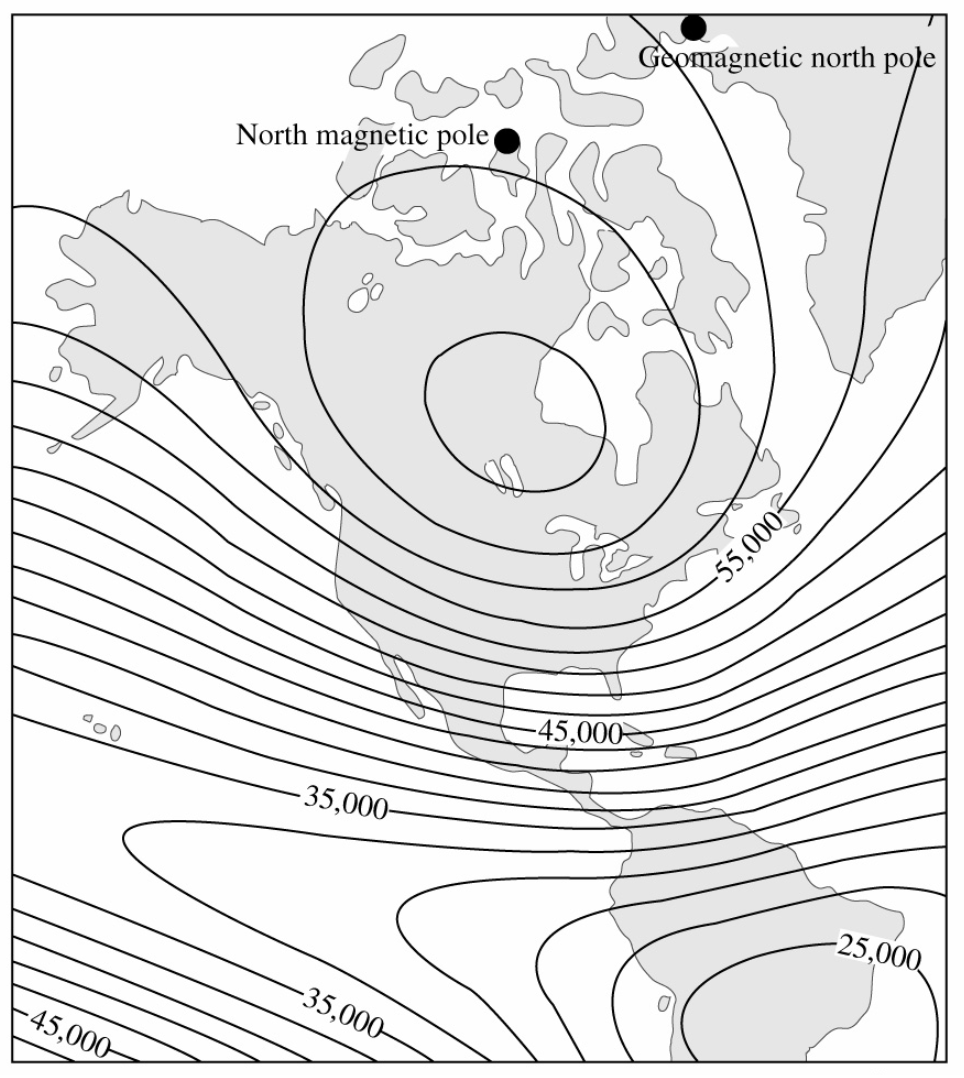

In [16]:
figure6 = "iVBORw0KGgoAAAANSUhEUgAAA8QAAAQ2CAYAAAD1UXRrAAAMbWlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnluSkJDQAghICb0J0gkgJYQWQHoRRCUkgYQSY0JQsaOLCq5dRLGiqyKKbaXZsSuLYu+LBRVlXdTFhsqbkICu+8r3zvfNvX/OnPlPuTO59wCg+YErkeSjWgAUiAulCeHBjDFp6QxSJyABdUABPsCDy5NJWHFx0QDK4P3v8u4GQBT3q04Krn/O/1fR4QtkPACQDIiz+DJeAcTHAcDX8STSQgCICr3l5EKJAs+GWFcKA4R4pQLnKPEOBc5S4sMDNkkJbIgvA6BG5XKlOQBo3IN6RhEvB/JofIbYRcwXiQHQHAFxAE/I5UOsiH1EQcFEBa6E2A7aSyCG8QBm1necOX/jzxri53JzhrAyrwFRCxHJJPncqf9naf63FOTLB33YwEEVSiMSFPnDGt7KmxilwFSIu8VZMbGKWkP8QcRX1h0AlCKURyQr7VFjnowN6wf0IXbhc0OiIDaGOEycHxOt0mdli8I4EMPdgk4RFXKSIDaAeIFAFpqostkknZig8oXWZ0vZLJX+HFc64Ffh64E8L5ml4n8jFHBU/JhGsTApFWIKxFZFopQYiDUgdpblJUapbEYVC9kxgzZSeYIifiuIEwTi8GAlP1aULQ1LUNmXFcgG88U2CUWcGBXeXyhMilDWBzvF4w7ED3PBLgvErORBHoFsTPRgLnxBSKgyd+y5QJycqOL5ICkMTlCuxSmS/DiVPW4hyA9X6C0g9pAVJarW4imFcHMq+fFsSWFckjJOvDiXGxmnjAdfCqIBG4QABpDDkQUmglwgautu6Ia/lDNhgAukIAcIgJNKM7gidWBGDK+JoBj8AZEAyIbWBQ/MCkAR1H8Z0iqvTiB7YLZoYEUeeApxAYgC+fC3fGCVeMhbCngCNaJ/eOfCwYPx5sOhmP/3+kHtNw0LaqJVGvmgR4bmoCUxlBhCjCCGEe1xIzwA98Oj4TUIDjecifsM5vHNnvCU0E54RLhO6CDcniAqkf4Q5WjQAfnDVLXI+r4WuA3k9MSDcX/IDplxfdwIOOEe0A8LD4SePaGWrYpbURXGD9x/y+C7p6GyI7uQUfIwchDZ7seVGg4ankMsilp/Xx9lrFlD9WYPzfzon/1d9fnwHvWjJbYAO4CdxU5g57HDWANgYMewRqwVO6LAQ7vrycDuGvSWMBBPHuQR/cMfV+VTUUmZS61Ll8tn5VyhYEqh4uCxJ0qmSkU5wkIGC74dBAyOmOc8guHm4uYKgOJdo/z7ehs/8A5B9Fu/6eb+DoD/sf7+/kPfdJHHANjnDY9/0zedHRMAbXUAzjXx5NIipQ5XXAjwX0ITnjRDYAosgR3Mxw14AT8QBEJBJIgFSSANjIdVFsJ9LgWTwXQwB5SCcrAUrAJrwUawBewAu8F+0AAOgxPgDLgILoPr4C7cPZ3gJegB70AfgiAkhIbQEUPEDLFGHBE3hIkEIKFINJKApCGZSA4iRuTIdGQuUo4sR9Yim5EaZB/ShJxAziPtyG3kIdKFvEE+oRhKRXVRE9QGHYkyURYahSah49AcdBJajM5DF6OVaDW6C61HT6AX0etoB/oS7cUApo7pY+aYE8bE2Fgslo5lY1JsJlaGVWDVWB3WDJ/zVawD68Y+4kScjjNwJ7iDI/BknIdPwmfii/C1+A68Hj+FX8Uf4j34VwKNYExwJPgSOIQxhBzCZEIpoYKwjXCQcBqepU7COyKRqE+0JXrDs5hGzCVOIy4irifuIR4nthMfE3tJJJIhyZHkT4olcUmFpFLSGtIu0jHSFVIn6YOaupqZmptamFq6mlitRK1CbafaUbUras/U+shaZGuyLzmWzCdPJS8hbyU3ky+RO8l9FG2KLcWfkkTJpcyhVFLqKKcp9yhv1dXVLdR91OPVReqz1SvV96qfU3+o/pGqQ3WgsqkZVDl1MXU79Tj1NvUtjUazoQXR0mmFtMW0GtpJ2gPaBw26hrMGR4OvMUujSqNe44rGK02yprUmS3O8ZrFmheYBzUua3VpkLRstthZXa6ZWlVaT1k2tXm26tqt2rHaB9iLtndrntZ/rkHRsdEJ1+DrzdLbonNR5TMfolnQ2nUefS99KP03v1CXq2upydHN1y3V367bp9ujp6HnopehN0avSO6LXoY/p2+hz9PP1l+jv17+h/2mYyTDWMMGwhcPqhl0Z9t5guEGQgcCgzGCPwXWDT4YMw1DDPMNlhg2G941wIwejeKPJRhuMTht1D9cd7jecN7xs+P7hd4xRYwfjBONpxluMW417TUxNwk0kJmtMTpp0m+qbBpnmmq40PWraZUY3CzATma00O2b2gqHHYDHyGZWMU4wec2PzCHO5+WbzNvM+C1uLZIsSiz0W9y0plkzLbMuVli2WPVZmVqOtplvVWt2xJlszrYXWq63PWr+3sbVJtZlv02Dz3NbAlmNbbFtre8+OZhdoN8mu2u6aPdGeaZ9nv97+sgPq4OkgdKhyuOSIOno5ihzXO7aPIIzwGSEeUT3iphPVieVU5FTr9NBZ3znaucS5wfnVSKuR6SOXjTw78quLp0u+y1aXu646rpGuJa7Nrm/cHNx4blVu19xp7mHus9wb3V97OHoIPDZ43PKke472nO/Z4vnFy9tL6lXn1eVt5Z3pvc77JlOXGcdcxDznQ/AJ9pnlc9jno6+Xb6Hvft8//Zz88vx2+j0fZTtKMGrrqMf+Fv5c/83+HQGMgMyATQEdgeaB3MDqwEdBlkH8oG1Bz1j2rFzWLtarYJdgafDB4PdsX/YM9vEQLCQ8pCykLVQnNDl0beiDMIuwnLDasJ5wz/Bp4ccjCBFREcsibnJMODxODacn0jtyRuSpKGpUYtTaqEfRDtHS6ObR6OjI0StG34uxjhHHNMSCWE7sitj7cbZxk+IOxRPj4+Kr4p8muCZMTzibSE+ckLgz8V1ScNKSpLvJdsny5JYUzZSMlJqU96khqctTO8aMHDNjzMU0ozRRWmM6KT0lfVt679jQsavGdmZ4ZpRm3BhnO27KuPPjjcbnjz8yQXMCd8KBTEJmaubOzM/cWG41tzeLk7Uuq4fH5q3mveQH8VfyuwT+guWCZ9n+2cuzn+f456zI6RIGCiuE3SK2aK3odW5E7sbc93mxedvz+vNT8/cUqBVkFjSJdcR54lMTTSdOmdgucZSUSjom+U5aNalHGiXdJkNk42SNhbrwo75Vbif/Sf6wKKCoqujD5JTJB6ZoTxFPaZ3qMHXh1GfFYcW/TMOn8aa1TDefPmf6wxmsGZtnIjOzZrbMspw1b1bn7PDZO+ZQ5uTN+a3EpWR5yV9zU+c2zzOZN3ve45/Cf6ot1SiVlt6c7zd/4wJ8gWhB20L3hWsWfi3jl10odymvKP+8iLfows+uP1f+3L84e3HbEq8lG5YSl4qX3lgWuGzHcu3lxcsfrxi9on4lY2XZyr9WTVh1vsKjYuNqymr56o7K6MrGNVZrlq75vFa49npVcNWedcbrFq57v56//sqGoA11G002lm/8tEm06dbm8M311TbVFVuIW4q2PN2asvXsL8xfarYZbSvf9mW7eHvHjoQdp2q8a2p2Gu9cUovWymu7dmXsurw7ZHdjnVPd5j36e8r3gr3yvS/2Ze67sT9qf8sB5oG6X61/XXeQfrCsHqmfWt/TIGzoaExrbG+KbGpp9ms+eMj50PbD5oerjugdWXKUcnTe0f5jxcd6j0uOd5/IOfG4ZULL3ZNjTl47FX+q7XTU6XNnws6cPMs6e+yc/7nD533PN11gXmi46HWxvtWz9eBvnr8dbPNqq7/kfanxss/l5vZR7UevBF45cTXk6plrnGsXr8dcb7+RfOPWzYybHbf4t57fzr/9+k7Rnb67s+8R7pXd17pf8cD4QfXv9r/v6fDqOPIw5GHro8RHdx/zHr98InvyuXPeU9rTimdmz2qeuz0/3BXWdfnF2BedLyUv+7pL/9D+Y90ru1e//hn0Z2vPmJ7O19LX/W8WvTV8u/0vj79aeuN6H7wreNf3vuyD4YcdH5kfz35K/fSsb/Jn0ufKL/Zfmr9Gfb3XX9DfL+FKuQOfAhgcaHY2AG+2A0BLA4AO+zbKWGUvOCCIsn8dQOA/YWW/OCBeANTB7/f4bvh1cxOAvVth+wX5NWGvGkcDIMkHoO7uQ0Mlsmx3NyUXFfYphAf9/W9hz0ZaAcCXpf39fdX9/V+2wGBh73hcrOxBFUKEPcMmzpesgizwb0TZn36X4493oIjAA/x4/xc3HZDwwCaHxQAAAIplWElmTU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAIdpAAQAAAABAAAATgAAAAAAAACQAAAAAQAAAJAAAAABAAOShgAHAAAAEgAAAHigAgAEAAAAAQAAA8SgAwAEAAAAAQAABDYAAAAAQVNDSUkAAABTY3JlZW5zaG90QJap6QAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAddpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+MTA3ODwvZXhpZjpQaXhlbFlEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWERpbWVuc2lvbj45NjQ8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KWMY1+AAAABxpRE9UAAAAAgAAAAAAAAIbAAAAKAAAAhsAAAIbAAO894V1YqoAAEAASURBVHgB7N0HmHdHVT/wy9+C9C6ClA1VBCmGZhR4CS10CKELREIMLYTeIwE0BJAmoQUIEamhBEInAUILVYoUAUWC0lERpVrwv58h3+Xkuu/uvtl93+zmPfM893fnzpw5c+bMzL3znTMzv7P87Gc/+9+pXWugNdAaaA20BloDrYHWQGugNdAaaA20BnYzDZylAfFuVuNd3NZAa6A10BpoDbQGWgOtgdZAa6A10BoYGmhA3A2hNdAaaA20BloDrYHWQGugNdAaaA20BnZLDTQg3i2rvQvdGmgNtAZaA62B1kBroDXQGmgNtAZaAw2Iuw20BloDrYHWQGugNdAaaA20BloDrYHWwG6pgQbEu2W1d6FbA62B1kBroDXQGmgNtAZaA62B1kBroAFxt4HWQGugNdAaaA20BloDrYHWQGugNdAa2C010IB4t6z2LnRroDXQGmgNtAZaA62B1kBroDXQGmgNNCDuNtAaaA20BloDrYHWQGugNdAaaA20BloDu6UGGhDvltXehW4NtAZaA62B1kBroDXQGmgNtAZaA62BBsTdBloDrYHWQGugNdAaaA20BloDrYHWQGtgt9TAqoD4LGc5y/S///u/089+9rPpl37pl8Y9Ye7tWgOtgdZAa6A10BpoDbQGVtdAxk0ZV0lhbBUnfC0ufP7nf/5n+n//7/+NJEkrLvHGbuLdOeH87sKTZkSewT+RLeX57//+76WyRXZ3MqdMtZz8eQ6Ne/gmPmXOXXjocj+DVdHZtwbOVBpIv1So9DHvIX59OX1QfGjFcaHhz7srNPW9Fr7oTo9bFRDPM4hg7u1aA62B1kBroDXQGmgNtAbWpoEM/OrYKv7ErYWTgWCAY8Zj0odHBo6VN74JTx7oN5MjD5AfuVIe9/jJu71yCOeqbuJfji/a8EVHX9GZuHatgdbA+jWQPqWvzftu7bPoOHRc0lX/nEa/FvbLv/zLI83p/VkRENdM/+M//mN6/etfP33jG98YL6sq5OnNvNO1BloDrYHWQGugNdAa2F00UAd6dSCY8gec5Xl7d+CtWlAr34zdpEUnH1ZoA8eEodls47jIGvmji1q2+FN+5VquLCkbeuVGHycuz8lLHH+s9ambpOl7a6A1cPo1UPtj+lb6rmf9tPb/9HNxgG6dzJpLcY5znGO6whWuMO2zzz7zqB16XhEQ46QQrn/5l3+Z7n//+08f//jHh2Ap0A7l1sStgdZAa6A10BpoDbQGdmMNZLBnbBUnzFXDErfcvdJKE55o67PwDDhzD22lWy6PMyIs5a8yksNz4jxn8Bw6YdWlbOhMHBhUK3/lEZ7hIX45oFz5tr810BrYcQ2kj6X/5XnOKf024XnOu0t40obXBS94wenWt7719LjHPS7JTtd9zYD4u9/97nSnO91pOvnkk6erX/3q02/+5m9Ov/Irv3K6Mu1ErYHWQGugNdAaaA20BnY3DRjMGci5YiHJwG4+0FtJN5U2PBkuvvSlL01f/epXp7Oe9azTZS5zmekqV7nKEhBMmpX4ntFxAbDRDXkid/RkcKysH/rQh6Yf/ehHQ5fSRa9JI53rbGc723SlK11pMnCuyyrnfOfPZ7QuOv/WwJlFA/O+5Tn9+Yc//OH0iU98YvTpK17xitPlLne5pTjlr7TVr+///d///fSDH/xguvOd7zw985nPPE26HdXdioA4Lxcvpm9961vTfvvtNyzEhx122HSDG9xgOte5zrWuzHdU2KZvDbQGWgOtgdZAa6A1sFU1AMydcsop03/9139Nl7zkJZeWMxtviQsQzGBxe+WsA8yAQVva3vrWt47tbba57bnnntPd7na3AYoDBPFNWrxXy2d7+e+scOXPUvAsdU75DHyVkf4++9nPTm984xsng2llmJcr8inruc997una1772dLWrXW261rWuNZ33vOcd0eKiC+nl43ml5Znh2/fWQGtgxzVQ3zfpf5/+9KenI488cvr2t7893fOe9xzW3tqf0XlOH4212Lvg2GOPnd7//vcvAeIdl+gXKVYFxHlBEzSA+KijjppuectbLr1UfsGufa2B1kBroDXQGmgNtAZaA8tp4Hvf+970lre8ZfrP//zP6WY3u9n/AcEZJC6XtoZlbBbwKM6A8W//9m+nV73qVdOJJ544Bph77bXXdN/73ne66lWvOqzG4e++2VwGvfNJgYR/4QtfmF7+8pePATDLUMoAyGaQHD3UsqETz/L0R3/0R9P1r3/96SIXuciYfBAXwB1+lVfl0/7WQGtgxzWgX+nDXO1j+rnJpxe/+MXjsvL4Pve5z7T33nsv9Ul9c7kJKnyshIFH3/SmN40VzCzE4b/jUi7Kttjxf7GJpXCowns5fOc735nueMc7jiUqL3zhCweCP9/5zldStLc10BpoDbQGWgOtgdZAa2B7Gvj6178+vetd7xoDNyvt4lhwf/rTn55mSW/ilrsbKLIyG1RyxmwZDBqvGSQ+//nPH2O3y1/+8tPDH/7wYSW1ss+YDj0em8mRP2DUnU4Mhjnb9l7zmtdMz372syfWb/InXjnQx0UX4Zdwz7/2a782/fEf//F0l7vcZbr4xS/+f3QRHSZN31sDrYH1aUCf0ie5ud8Kjwc84AHTe9/73gFqWYj32GOPQV/fUdK56gQgQPyiF71oevOb3zzd4Q53mJ71rGetS9DtAuI5129+85vTXe961+kDH/jAdMwxx0w3v/nNp/Oc5zxzsn5uDbQGWgOtgdZAa6A10BpYRgOW+QUQ3+hGNxoUwFwFpxk8LpP8NEEBgtIHGIfX97///emEE06YnvrUp05A+MLCwnTooYcOUHzOc57zNPmdhukZ+BAgS4Q6cGZNZ/VmAbJasepHuQOGa3gtRvQUnmc/+9mn+93vftMf/uEfThe+8IVPA8LxwHN7vCrf9rcGWgOrayD9DiV/3lfArXfT3e9+9+krX/nK9PjHP36AYpNW6X/oXZkYS27C/vEf/3HJQpw9xIk/Pfc1A2Izjre//e2nD3/4w8O0fYtb3KKXTJ8ejXea1kBroDXQGmgNtAZ2Sw3EQsy6ecMb3nAM9AA2A76NBmIGnPbn3fve9x7nwFzgAhcY1pjb3OY20/nPf/4x6MyA0wCU32DVRT4uA9NdUVnRg3vN+53vfOf0vOc9b/rIRz6yYWJYnvngBz94DMCTl4NiY4HaleXesEI1o9bAJtRA3itE847Lu84Kl1e84hVjouuiF73o9IhHPGK67nWvu/QOyvtQ+vTH6geIrVg+/vjjx4qPZzzjGesqfQPidamvE7cGWgOtgdZAa6A10BpYmwYs933d6143Tka93e1uNwZ6wGeAaAaBa+O2OhXrqr/LZF391Kc+NfYRWzLMonKhC11oiYEBp4Hqr/7qr44wwFCYAahrVzj5KT8nf36nST/96U8fe4ctKd8oh/f1rne96aCDDpq2bds2yq4OlBUgzwB8o/JrPq2B3VUD9f2hX+ln+p9wh/598IMfHBNT9vdf6lKXWnrnpD+i9T5A70rfbEC8u7aoLndroDXQGmgNtAZaA1taAwZ5r371q8dpySy1lu/WAWMd8K23oHjJ7yc/+clYXnjEEUdMH/3oR0ee++6779gGd4lLXGJpkBk5pKngNAPQ9cqzWnr51PIbCDtJ2l5oYD7lWY3PavEBvM7BOeCAA6ZDDjlkCYjPZViNV8e3BloDK2sgfSp925112AGDDmj+2te+Nj3taU+brDz2F2n6Z+3r3gPeSVx48DcgpoV2rYHWQGugNdAaaA20BragBuzt/eIXvzhd4xrXGH+9FMAZoLZRRcIXT4NJl+XTRx999DjAhiXYHmb7aK985SsPC6nBZpYz1oHnRsmzGp8Mgg2AyQHI21f4+te/funvlVbjsZZ4+XB0YxD+sIc9bLr0pS89dBR9hWYt/JqmNdAaWFkDAcWo8j5y8N9jHvOYyfaFww8/fLwP51zyDhMeHu5cA+Khhv5pDbQGWgOtgdZAa6A1sPU04D90WWqd+Hyd61xnyeqRAd/OKBGAxyrjb5kATP9XDHDax2ypIlAsf4NVoJDj53YVOJRPzd+kwWGHHTaddNJJSzJkMDwEW8ePMuLlv5odsLXPPvsMbvLfVeVdh/idtDWwpTSQd1smnGwdechDHjL+Hs4J0bYu7LF4unR19X2Qfi8s/gbEVVvtbw20BloDrYHWQGugNbCFNGBfrP8JtlTQYPCsZz3rkD77ZjPgW2+RDB5ZWt0NRPPsP3ztYz7uuOOmH//4x8NSbOnwb//2bw+aMxoUktkBV29/+9vHX6l88pOfXAKpG6EbeohbWFgYEwIHHnjgLp8AiAx9bw2cmTWgv+m3Lu8hE3P+ucjfLV3mMpeZbnvb244JuXOc4xxL/Zw+pPMuyooRz+ElvgExLbRrDbQGWgOtgdZAa6A1sAU1APiyerIS3/jGN54udrGLjYFiwOtGF8lA1ECSy4DyS1/60vhf3ze84Q3Tj370o+kmN7nJtN9++03Xuta1hiwGrtxGANDBaA0/GTAHkL/2ta+dXvCCF0yf//znN1SO6EJ+F7nIRcZeaidOR0+5r0HkJmkNtAZ2QAP6lvffv//7v49VKte85jXHQVq2cIirfS/vKu+ivBsTJssGxDug+CZtDbQGWgOtgdZAa6A1sNk0YOny+973vnGIDFC8M5zBZbWuyCODS3Ff/vKXh5XY3xr5H9C99tprcgK1QWr9L9CdIdv2eBrwRsadBYhr3gHED3rQg4augPF2rYHWwMZpwLuG06/j188BY2H8FegmZ2Fc0vBXugbENNKuNdAaaA20BloDrYHWwCbVgEFcBnRzEcXZQ3fyySePvxy5+93vPp373OfeKUt2yRCLKz9LC5DMkcPybYD4uc997nTKKacMMPzQhz50uspVrjJOo57LvtxzHaQuF79aWHQVWclH5gDiz33uc4PFevOJHPhw8gWIHSwGEBucZ5Ae2r63BloDG6sB/U8/q/91Xt8B/PXZuyBgur4DGhBvbL00t9ZAa6A1sFtrIB+Y+gGikPpR8hw6fi7PSeeej1biY22p4SNx/7QGtqAG0taJnvaeNq4/cOkXwgE7dDXdIDr15zOf+cxYtnzFK15x2nvvvSf/GWyQiH5XuOQDnNuv+5SnPGX69re/Pf3+7//+dPDBB0+/+7u/O0BxLUPK566M7vo3Pzp+znP6PZq4pMmze+QInXSA+/HHHz+AOj1xiUdf/SNyB36SVpIA4gc+8IFD3gzUUx40ld4zl7DI/vPQX5QlNIlH7/Jcw5Ku762B1sDqGkgfQtmAeHV9NUVroDXQGmgN7IAG5gO0+tHBZh6fZ3FoOWH8rgx64xcfOv52rYGtqgFtO8uQATftWtuvfYI/wLDGoQ1IVH7W2fe85z3Thz70oen+97//OHUaf9eucOmT8vvpT386veUtb5n8V/G3vvWtcfq105evfvWrj0O/Uo4qfy07II+PA3PcU1blcGgYgDvXS8oZPUoTCy3/hz/84QHS6Wc5h4bD9/Q6f7fklG2HipFHOZRhXn/yyjXPcyU5ElflW4+8lU/7WwO7mwb0p/SfBsS7W+13eVsDrYHWwE7WgA/M9gZuwl0GqrF4EafSG0iKY+FyOqw4YS4Dyzq43MlFafatgZ2mAf1EW86yY3dtPf0n7ZwAwoBMe3HzHLr0Hc9/93d/Nz3nOc+Ztm3bNg60Sp8JzUi8k3/kCQgqj5Onn/CEJ0zf+c53hqWY5fQP/uAPlvq794A+7s4ps3K4HM5lX/JXv/rVQeP/Ra961asuvTtSNmnRy1M5o8foNjxZq/1P6dve9raRF1o8qqt6wnMtLmnc7Ze+z33uM07a9pzyRSZhrpSx5pH6Thi6uUtc7uGHLmHzNP3cGmgNLK+B9EWxDYiX11GHtgZaA62B1sDp0EAGcfPB2fwZncEi4BuXtLlLY8DqbrAoPHxCk7R9bw1sNQ1oy2nT7t///venH/7wh9N5znOe6ZznPOcSaKo0AXC1P4hPP/m3f/u36V3vetfYSwx8nv3sZ1/is6v0E3nJxDr6xje+cTryyCOnf/qnfxqAkfXU/xXHCkwu74FYUqU3OH3ve9879kZf8pKXHP9x7O+dnB7rr6UudKELjfQBu3jwyxP4xI9fmMvkGr6Wcb/iFa+Y/vVf/3XoRRiX9wr/cmHCV3KR4/a3v/30qEc9ashHhtQxWbg5b8+5Apq3l094oeePzEmf5+2l7/DWQGvgtBpIXxLagPi0uumn1kBroDXQGliHBnxguNUGZ/kQGSjyG1AmXQaPGVDiFXr3+EeC/mkNbFENaNculsuXvexl4780tXmX//C93vWuNwGD8/avuOk36Q/C0AFVDrN66lOfOt3ylrecfud3fmeASPE725GFIxtZgFcg9wc/+MFYPn3UUUcNay8r6v777z/+Igq9dNJ4B6RvA9HS/t7v/d60xx57jHhW5o985CPj8LBb3epW479G8/cqdMZVvXgOGGaFJtMJJ5ww9hHjk3zRJV9+zjMnzWoutP4DFdi/053uNMoub/WBR32/hV/SzZ/RJ180czr0wipdePS9NdAaWLsG0o+kaEC8dr01ZWugNdAaaA3sgAYM2DKYyz2DOM8sxP4u5tOf/vT0ta99bfrxj388uFsW6r9Ur3vd606WSRrsZsCMQFpXBo07IFKTtgY2lQa0+ec///nDErrnnnuOfb8OpfrCF74wLMX77LPP6AvpS9o9kAVgJUyB0hfE+09OgPKzn/3s2M963vOed5eWmQwBxfxkZZF961vfOr30pS8df8lkL7HTmG92s5stlSXlkubFL37xdNnLXnaA+rOd7WyjfACyyQOnWH/yk5+cgOLLX/7yS3uKFTLAs74vauHpxn8R/+Vf/uWQqcbJN3oUPn+utHM/YH7HO95xOuiggyb7iOXvwsP7q9aVtMlHfGjsjUYbcI8GD+V2ZWl48pau8kp431sDrYG1aUAfSl9sQLw2nTVVa6A10BpoDaxRA/nAhDyDvgzwMkC2JPIf/uEfxtLH853vfGOZqDRAgqWf3/ve96Zb3/rW0+Uud7lhcakDwPiTR99bA1tNA9r5Rz/60QFeb3rTmy61c8t7P//5z0/+HujiF7/4dNvb3nap/QdkZSCXvpY7MAU8ff3rX58OP/zwkfa3fuu3lvYe72wd1X4ZgBvZHPoFFL/qVa8a/d6p0/e4xz3GfltyKxuHxwtf+MJhAQZ644Tj6ZAuB3a5b1vcK73HogWZBTguuvGeqdsyIsfHP/7x6UUvetH0jne8YyylTnhkz3P4reXuJG3/ucyqDxzjpTxk2B4/ceQGhC0fpwNhLk46lzIrh3bh8hzdpqxrkbFpWgOtgdNqoPafBsSn1U0/tQZaA62B1sBO0oABooEc65dBqQHyr//6r48Brb8rsW8SzU9+8pPpG9/4xnTSSSdNv/EbvzHd5ja3mS54wQvuJKmabWtg12tAOwfoAD9Wzmtf+9oDGAWUWWbMCmqQ5hCqa13rWkNIAKmCLM9JU/1A8dFHHz0ml+zX3RX9R/5c5Mtgs8oVC+8rX/nKyZ5gVvH9F5dPs4QnPR70Yrm3vs8lLjytKHnNa14zQCT9WFESGvQBlfQ8d/ZpWzJtmfq73/3uMYGQtOE/T7PS85WudKVhib/xjW88nf/85x+k+JAh+YevfPgDhIFnYDjyJp/QoeXw8e5UryZSAGMufMdD/7QGWgM7pIHafxoQ75Dqmrg10BpoDZy5NZCB2FpKWWmrP2lrmAGcQ3W++MUvjpNjDeyucIUrjOWF5zrXuf7PgFC8pdT+KuXe9773dNGLXjRslwDAUkB7WgNbTAMA71//9V8PiynLosOvAn5SFODxYx/72FgC7a98rKKIq30r/jq4A54ATkuPb37zm0+XutSlBgirNOG1s+7JK+UiJ6dc/qfY4VZWiFg+/bCHPWxYhGPpBYi9H1iIs08YKKzLif/mb/5m/LewJcqszQ4jkxe6mncNi98J1h/84AfH8mn1UAFm1UdkrmH8+ACyTr3eb7/9xiFhJu8SJ10AMdrkK4xF2LYQZU15RsLykzqt/PiVjaxAsVPH5/EjYIUfcmyvTCsk26lRy5W1hu3UzM9kzDdj/Z5eFafPuHM7o2yVZwPi01tTna410BpoDZzJNJCBUj5AeTaIi1+RM1jJPWGVTpzBm4Hbd7/73emUxYN+/CUMqxhr8DWucY1xEqu8cuGTQaS06C1r9J+q0lQXGWtY+1sDm1EDtZ9EPpNDr3vd66Zzn/vck+XSy7XnrKZgzXS41PWvf/0kX+qD0ukrXOUhzDLbJz/5yZPDnq52tatNdS8xWnItJ9tSJjvoSf7y1o+58BeWeOEOyNK37eX9yle+Mt3gBjeYHvzgB48JMkCRBVmfZzmO3OElfdzxxx8/lpaz0l7lKlcZYHNeLvnO85feO8le6w984ANjPzFwHmAsHh+uyp1n4Nty9gMPPHDae++9h2V4nu9IfOoPHnQCDNsTDUwLSx713VnTbc9vFQ1Qb+KQC5/QV97xo+HfzG4ua543s8ybSTbtyHuD3ra67mpZtN0d7SNrqZeqowbEa9FY07QGWgOtgTO5BjKgqh+dhOXjSgXCEo7WQNMzS0fifJAdDAQIW/rMUmXQa/Bvr93CwsKw+kjrwie8k5fBvAO3PvShD033ute9hoUYLZePmHu71sBm1IC2Wdtr2ixZhdsfbEnz7W53uwECYylMH0InjUOgWELRH3zwwcNKHF65hxbf2heF+89d+5Gvc53rTJe4xCVG3tLVfo5uo5z8udqnPQuXryvPtkyQ73nPe944fZoV/K53veu0x+Ke4BNPPHEcMOZgPZbXlFUZIz8+//zP/zz2JAOIlpU7lbuCTX7vEumiY+nRf+pTnxoXMO1dRRb/eYynZdUAp7TSseja0mFJtL98YnEH1L3PWKiFx5KtrPPyA/l4uCJHdDIUsoM/0gLvZHT3vD0X3YXG82Z0kS+6qzImroa1/+f9ir60by517Z563oq6SzlSx8YUypkyJXy995pPA+L1arPTtwZaA62BM4kG8nGog0cf04SnmPWZPx8rg0hLQf2fqqXRljwDxga4lhYarPqouQzi4g9f+SY/A1ZLGe0V9DcmWY6Y+KTpe2tgM2pAv6iD1Pqcw7QcDMUqmv6kP0jjOWHaO2vy61//+mEl9ldK6LjwdJ87fNB985vfnP7iL/5iWDHtyQ1f9Hhzy6UfEafjp/LCP/01d/HRC2Do9Ok3vOEN4/+BvTfuec97DlBsMsy+Z4dUAaBxyhS5E4bWEmzglSXdyfSAJzp5yM/de4pjVTVJ94lPfGIss77b3e42LLfeVbZonHzyyWNbBwuyCYlznOMc4/0DBOO/1157TRe4wAXGidlWscjP32Q5D0E+QDg5LWkGkqUHmFmHU3cpA31EJ1V3Kdv27qEFiGMprjyTTtg8z8RthntkTr2m3ZKt+jeDrJtRBvpL205bImf0uhllXqtM+qu+xO2s8tBZeDcgXmvNNF1roDXQGtgNNGAQ4iNhgMLvY5HBV4qfj0jigFcAl8UFiLX00L5g+/pYX1hSMijDk/OMj4+eMB/1DIqEAw0GuawylpTaPyk86fld7VoDm1ED6Rtz2YTbQ2v/qgGYvx6KBTN9JP1AW+c3yeQQOqslLIEO2MNbfPpE0skjcfyPfexjR190gBVQFhcZc0/4eu7pk3iGrzD+uHk4IPy0pz1tHJIFgO6/eMgWwGmZt+XIJsOkyQA56ZWbX7n9xZQTrFl3gVZp804RH9AADHs/Ab6Aqr9KAlZDW3mSO8/8KQd+ZJHG+441G0/14qwDssvH9hCrYli9gfrUDz3gVe/KsVYXOdBL5/1rMjLLp6us0VXyS5q15rUr6FKHZExbrmXcFTJs5TzoKu0x9e0e/1YtW9qFNlH7zkaWp7azBsQbqdnm1RpoDbQGtrAGfIC4+vHJB6N+XOP3oTIAfde73jUG+AZlTss1GDWIrYNvH2x88ZOu8hWePDMgMsh7znOeM/YWWu4JGCffpN3Cqm7Rz+Qa0EY57bm2W+Esj+973/uG9dAJyayI+gdXafMszvJilt4HPvCBk79RAsaSx0h46k/6TwAgGv3IflyTUyaqhLnS59I3K5/1+lMOfCKTPPkDPlNmcrCmPuEJTxiWcKDYfuBDDjlknDJNZi5y4xF/ZBfmXUSvJtJYlq585SsPy629vuSx2sQJ9y4ne++7777Dqit/Do/oBH9puPg9h1a+yiENR2bbQwyqyWGJtCXqVsVc+MIXHjzQRW5+/FwJS37iVnLoo7vI4N1rEtHkSvi54xkZPW9WR8YqHz1H/rXqZbOWbWfKRUfagjudpa6TZ9VpwjbzXV27lCXvsPRx4cqzkWXCK+2rAfFmbhktW2ugNdAa2IUaqB+a+hHykc0AhTgGr5YcnnDCCWN/o8GlwfbCwsKwuhgMGpBKh49n6VkwwicfPh89Dp2wPFu++OhHP3pYt/Cv4Dpp8WrXGtiMGsjAVJ9KOxXmsh9Y3wHYXFxt0/xx8ZsgssTaXlfLrB3qxIlPv8094fqU/nTUUUeNFRaWTOek6qRzj38wXOcPGfDj+JXXc/p14snGZUkkOv89/oxnPGM67rjjhlX8IQ95yDhQL4AystInvzT4hadn7xiA1L5rwBcItixbHOstgGr7hiXOrLfhhQcXnimDsOTBn3yVJ7QJV6a8x9ChSfnCI7JKUx36yFDD534083yFydfS6QqKlS30cz6b6bmWnczK55rXzWaSebPIQncu7cydS9ha2tNmKUeVI+XQf0zwpB0nvNKu109H4duAeL3a7PStgdZAa+BMoIF8FOpHtIYZoFgWzbpl6SZAbKB6xSteceyhA1hd0ueKWqTl8mHLM/4Z9MTv2aCWtcXg+JnPfOZYgpi06FxVzuTT99bAZtJA2qq2W53/FwZunazsQCbtPYARrf7hSj8SZhLKfmAHUPmbJuDWkt/Q4F/7RdILe+pTnzrtceo+ftZWYdXhPw+r8Tvir3zIRg5lcylnXPqv+OjH3eF7D33oQ6ePfvSjA8DaU+xQvZwyH37ycYVP+AoDDk0g5MApfry9nyxr9hdX7nEpv/dbDsYKX/fkhR5tZHaPDJWO3xU66TxzlVfoEhaaQbjCD3pycPIIH/KzFCtvwkMXOaXh30wu5QZ+ADsyayuRfTPJutlkST3Tm3dEJmA2m5w7Kk/aqLsJ9ZRNW0ncjvJcjr7ya0C8nIY6rDXQGmgN7MYa8MExGMnH1sfoS1/60tjHaF8cK9PCojXYsmgHyXAGvPlQ5Z6BmmdXBj7o64fIc3UGdPYEvv/9758OPfTQsVxa/JxHTdP+1sBm10DavP3D/i4I2LO/HoDL4H+5Ni6M0w8tB2YldiLzxS52sRFe+1VoR8TijwO5LJl2WjPLqHzQ1PxCu9F3cnmH5F1i1QdrLefArGyDiCz2StvbSz/25n75y18ek20HHXTQdMABBwywmrJWvsISnjJEj3mHCZ/ThFY4Oi7pQht95jlp6j00wipdeFXauT9pa7o5zVqf8QKKTQRoK9GR9GuRZa357Aw6cqt/kxYmbfSJjdDJzpB1M/FMvarrHAAHQNJd2tZmknctspA776n4v/e9742/KzNhtZHtouqpAfFaaqdpWgOtgdbAFtdAPpy5b6849QNhUOUEV4dlGYSzqrDULCyCYdbhzObXAT2+8uC29+HKRy50g/jUH2E+7O9+97uHJef2t7/9sIQJd4Vn9df07W8NbBYNaKsBZLW92ucKED/oQQ9asgxH5tDVdi7MAFE/0w9f9rKXDYDrL38cCMWhR8clT2H+59dqC6c1OyU5rtInbLV70rgHsPBX51n+HGuld4d3CHDr8CxWbRcLIHmzjNkgHi1Zb33rW4/lzMcee+w4n2CPRes2QOxwKv/hm7xrvvFHnugx4bnPw6u8oXGvA/LlnpOPuMpTuOe4xCWfmi60c5rkHR6Aov9tRpdJEHGVV3jQPXAZK3ENx5dL2HiY/VQ50+aQ1Lzmz/IM79r25FOd53nZxHvfmwhx2riJEltlstqopudfTmfJJzLmGX38NY7fFVlDFxrPnLQJC5+fx/x8AjjtsNIlfn5Ho+zRVfjVtPFX2ZIu9OErb/1J37Kqwt1EgkP6nHoePYdn0oXfXA55igt9npPOfXu6kCbxSZ+wKkf14xV+ZKnptXentzt80Eo0QNXWkhvf+MZj3DGIZz/yi37DOzJUUjR0F1nQhq4BcdVU+1sDrYHWwG6sAR8GHyf70HyIWGkNxAxWWYIdTgMQW3LIoc8HJfe1qK/S8svTPR80g/6/+qu/mu585zuPvclZBoamXWtgq2ggA63abgEVgNjqh/vd735rKgo+GcBJYLLI35rd7GY3G1ZfE1Vokh8a+XzsYx8bS7Odupwl1mjI40q/Q78WJ03ySZnCT/rkbyKNfG9+85vHOwRAc8rywuJEmsE6UMuK6aAwFmwg2LP9vv5L+HGPe9w4OIyenv3sZw99GRDbU3yb29xmSdTkF1kig3D64ublrPIOgsUfegh9wlLWPNd00VvNN3Tze5WFPy7+7fGITAbv6hHg2WNxYoAepPVOFLecE2/5cfLAi5uXUfw8/4S51zZX80lcZMxdOBeeeV4uDI14lzbw8pe/fKxksOrIX4xpJ9lGgCY8Rwan/iRM/vGLSr7zMM81LOmE1TT8KRN+ia9yVHo01SUPNDVNDa/0ocldHN2TgXOPLiKzureFwkTCa17zmrGiwr74I444YuyPx4uL7DXvlepVGvH4S5Mr/HJHx1X+kS38U57QhN5dXOLzjI6zisSp+v4T3IQeoGoscO9733taWHyHhA5teONV8xWX50rHz5FVfNILa0BMC+1aA62B1sBuoIH60VDc+kHybCBrcAII+xgZpLLg2CfMIpylWGjz8fNB4c+SaTxXc9LUDy56YZyBPDDuI/+UpzxlLKtMXO5zuUfC/mkNbDINZNBV26ulfx/4wAcGwLn73e++osTau7RJ724Q5/CpN73pTcPSCuw6dA7IFA98msRyqJRlxwCGk6z9FRBXefFzdeA4Alb5iRzI6ntAOOsOS+8rXvGK6Z3vfOcAcf47OXI6yCoyWEJNxne84x3Tq171qgHiLI+2h9jhVyyH4l7wgheM/zS/5jWvOT3sYQ8bf8UU2cMrInt2KVNcaKLPhOdZPLeSHsIDHb8r9PW9JL66xAkLD/e4Gi/MM51y3r8OBtNehKtH72POc+WX54Tl2d27FoAWl7xzF8/Vd7jnebxntK7UOTouYfGPwNkPXXm3Z1WRNMnDBKh/KgCEtVcWYhOwtQ7DLnLkebl7+Nb0dFDra86nyoNnePCHTw2r6edppRHGVV1JExnEJV14eUbv2bc2fneXtFUW/cPffR155JFLh/Q5LwAwRo9f8ogsvtOJE8aFJnLII4dZJd5duvoc+oRFRuEJi99z6OXHpU7GQ/kxIQ/saxcmwYxFWL6dnbCwsDDkRY5f9Bn/vGzoogdx6Oigjj+EcQ2Ihxr6pzXQGmgNnLk14KWfj0E+AO4+Fj4UZmVZdT7/+c+Pj5GleawRAcK0kw9ZPiz1Y2SgI3wtLvlGjvCVFmA4+eSTx3IpAyM880FbC++maQ1sFg0s184tAwRwWEVtB1jJpV/gE17C+A3e9BMD58te9rJjqSleQKYBpGWU+jAQBYRy0uqz6b/hlX48iFb5iUzp6zUtwPOJT3xietGLXjQAjhUl973vfccSaKtK0MalXxv8sngDvd499kYbBAPEymnQ7/+F//zP/3xMlF3/+tcf/8V8uctd7jT80HJVHs/Rm3vyj+wpS9J6jlxJh0foEjfPI/mENvzQx5KLR3jmHj55lp4zMQkQOLfB5CQe/tP9Mpe5zIivcobviFj8qc/VHyCUvNy50JCVPK4AFWHVoQ299OEpLLpBX3l7FgdgsWYqR/aOV35OBlf/Jm78YwFX+fC7kr97aOinAriaLnLVtCPh4o+yhke9h3fCpK204j2Hd6Wr8lV/AJh0Vb7qx6fy9Mzho19ZTu6vvGoay6YdtOe6whWuMA6h9LdsXKXjx9v7IgeW4Vvp+KvMiUuY5+oSjjd/LvnUMM9c6Pnn+kucdNGRvu+cBdbi2972tuNwPZN/6jsOPSc9Jy/t0nPkwC9x4Z38chffgHioqX9aA62B1sCZXwP5WGTA42NiIGEmlqXGh4elyX8J+6jWjwXt5CMXTeWj4zkfOH7hK7nwyYeKPMJ8yHyUHBzkECBX3Go8Q9f31sBm0ID2nD6RtisMWAWI7a+1V3YtTjpO/9BXOINCqzmcxuygO3suOQDTXzLtueeeU0Cj9GRw8dfnDNQj42CynZ+kJ4dBteeUEU9/J/XCF75wWPocFgYM2/trEM5JVx3gZ6+g/dSWdEtrX/T973//aY/F5cHJ7+tf//rg6X+YvatYi/z1FHCAJxlSLv6kE1bjhHPC44TV96LwlElceAmXTn7uCc8dDy5p+IXhFb+4uPjpn1WfLtSdCQ3g8DOf+cyoX2W8xjWuMSzD+CVd6iDlTVzKW5/55RPa8CCLsri0J3LUOpJOeGhCL71LPHq83ZMnuuo3UfLpT396Ovroo8dy+LmVG311+M1BT3QuX/64hHtOeMqXOHfy5Z62K034iYvuhPku5sRxZdmeQ5vySxO5kyayJK/Qe5YfV2lDTx4Xpz2w/JrcutWtbjXCxKEFGp/73OeOCSUruZ72tKeNFSOIQsMfnc7zQpOwtA+0kU0eaFyccPSeU+fVjx4NHsLDU5paNv7wHowXfxLvWVpg3/vDuMT/kls27WR+EwNclUVd0T8n7ZzXXBZ0cxkaENNKu9ZAa6A1cCbXQD4I7pyPQZZIG6CzKAHBljbak5iPJHofPo4/H5rE+yjF1Y9ewpa754MZXqExcLLU86STThqnSxtUV9pKz5+yJH3fWwObSQPaqEFa7SOWwAKxQKuJp7W4tHV89LHaD8VZVWEZNafvWnYahzb5p89K40p/Df+kWemewT+amk7+lkkbkKNh5Xv1q189zhuQT10CSiaXAailsiyGlkoDTJZc3+lOdxoW4shHfqAfP/uLTSY84hGPmA488MBhBU/5wrc+k7PqgGxc3mn8iU9+7pz3EZAIQEkXvuJCQwdx0Wn4oQeQ3LUDfBLn7lkeQLDyAfuWwFryzupvUmNhYWHpfYx/dE5+6efliDzki7yps+Sdcnp2hW/Shq9ntJVmXlblU7bQhld4izMJ9Cd/8idDlyY1nEMRuvBLHnkmu7wja6UPb7Toktadyz3lFxY+c1pxXOXvGV2uGscvHD9lp9vEJ1yd8MfxC6MLfn3BXbq0R3480YUn/vrV6173utE3tHeTQVzKLf75z3/+mEwyAab/sRSHf2TAnxMurTzCQ3ji5/7oLfKjc4W/eA4v/oRXuoTVu7J5dqW8VQbhsRCzjovTHx74wAeOMQp5hCV/MuBT+UYuvNBJw3mOwyPPDYijlb63BloDrYEzsQbysakfQpaX4447bsxAX+c61xmDWPE+HD4SrE4GRz4mSU9F4lzC8lH1HP9a1CitKx9DaX2QgAX++9znPkv5osM/ebvvSF4jYf+0BnahBurgTP/RXrVj/+Ft6ajtCPb6reTS5qXj3A2q9UuTWfopvnVQmH6ZAWDiKg+8hLsMIN0TL257Ln0Ofd4RSatcLFWWP1v2eoc73GFMaiU+PCMf8CeNpeMHH3zwSMPvACmTcrZqSMuRTTrAyjYK+42dqCs/S6jlpxzkc3HJBw9+1le6ixMuDctS/spFPsK98xz4ZS+08wxsJ4n1FB806jcgvy4HF47G3Wnaln6rL0vlgd/Ik0PFDPrFs5rusWgVZ/1aWATBJjXIlfLgx0UXeTY5oC6UTRy/crmUOzoRrlzoXMJT7linpVcm4dGnMI7cnHTyNnGBfy709JB8pZMGwH/6058+TpC2XPrJT37y0EnyTzvCJ5ZydZu88HEln9ApC7+ykBlN/pdbeE3DL7+UIfHyUHYXuU3M4KtuhKkXaU0yyYOT1sXhGV2a1PDMCcOPHpXPhY8wbcAzJ4/Ij1b5tR38lcWzg+X+9E//dDrllFPGZBArqXzwIl+1EJvQftaznjX+2zy8007wVw4u7ZZMnDvdRD/ipXeXnsz0knbOL94dDVmsLEtZhSuDZ3c8XMLd0SubcpCJbGRAGx2SpVqI0aM7/PDDx1YTPNAnnX4QR6fyxju68ix/9Pwpa9JL24A4Gux7a6A10Bo4E2sgHw8fAM4yrBe/+MXjo7Jt27ax/DAfi3y0fPSE5eMz54GPMB8X93zMhK/k0EeO3NEbgNoXebvb3W6cnls/YHN+kWUe3s+tgc2ggdof0t619RNOOGEsAXRCdP7De3vypm9Ir2+FDz/+XO0HiU/e+nEGpaFPXnjjI95gM3klfrk7HujxRV+fWXef+cxnDmv1wiKge+ITnzjAKj7y0Ze9R/i9Vz7ykY+MZbT2UVsujR/5uZQj5ZSPMODqqKOOGgALnb3RV7/61cc+Q3/JAkyGR/jJE5B2irE9qixqJgKBCcD7pje96XSjG91opIuu7N+1J/O9733vWLbshGz1ZUkqgPLGN75xAHl5WMbqcDRglqXe6eEOPCOrvFlDWfXs/+U3SCdjwIYVMW95y1sGsFFOwJl1+C53ucvkEDErCeTj4tDQizpjkTcBAZw6oRuQtLQU8ATElQctiyGwB2CYcDhpcQWO8H322WcAb5Oi/vJIudE6vOiGN7zhADlkDR95Ax6Wc/vrL0tZTWIA7yZ46MHybuCIs0xaOzABpM0oCysmYEP3Dlu79KUvPUAhwGfpvP+gfuQjHzn4BZCm/GSxkslBa8ph0sJ3zOSJ7TV3vOMdh46jo6qzlEM7VB6O7FZH4edUa/k6zds/HFi5II1Tz03O0qs649Iu06ZN4trnru4AVHdtcdvid9WEjX2vZMJPmeiCHrUlh0dqQ/bIOoTOAVnA9QMe8ICRV7YJyFMb88443/nONw6WA44DiG03kM8znvGMkU4bfdvb3jbaofZrqbXlx9qF/kcH9EMmsvHLgxPGAZb+Lg0f+mCd9ddttjTlBHl9UDsyqeXMAA5vPMKTPpRV3ZLXBJMwbeYmN7nJKH8O/ZMm7xdA/G53u9vYzqW946s9KXf6EVpt3+oRfU8fB9y1Y++Wvffee5xwj69LmciWNiBM+bkGxEMN/dMaaA20Bs7cGqgvfh+RY445ZizRM4DJQRX5MPhY5KPkI5kPZDQUXvnooZc2acSv5tAkvbQ+kAZOBgoGAwaTaEIXfmvhHdq+twbOKA1op/oDlwE064+BM6sj8JAB6Goy4pW+Gdr6jE9ohM/7bOJyx4M//W9Onzy2d0/axBus+nskgFj+BqPeL0BG8vSOkJ94oAaYYgW7xz3usQQO8x7BN7JJj793gzz8n7J3lv9wBrjQGQB7ZwAuAIM8pDOgBvQsIwXwgEygVD0AhWQ0CL7FLW4xBtr4AAtPeMITRh198pOfHPEs+UCmwbz8AECgBZBUx8AAEAtcWe4M5AUEAKGWj1vWKl1kA5iBdOCSNR2gxxu9/dEs6JaFA+vkki56ob9DDz105M1iTs/A+HOe85wBqtABZACU/6n2dzUAMeD9yle+cgAIEwnivW/pHYhVXoAC7Ute8pIBAgEPebvIBoDTKV1awiqMHoFKcvorMeBLOvWmnOKBTADIXljyApdo7CF/7WtfO5144olDZ8KUA2DWLlNu9QKEAWNXvepVR50BhuqY/m1FUAdOKLcPnS6lTdtOm00bM/EKNKozwJg+7OnH375t6QFB1mJgW7m0gciDL51bpUAu+WqX2jTA58RsEyO2/fj/bCAOT5MXwKUJBWXXjujSRIEwEwPorna1q419wZYLA4HeGY95zGPGdgJlMKmgzkzwmCQygWPCRjvSppSXfgBaky70TT71yuEBHCoH2pRLHD+5WPbVtzZNz/qq/OgaP23cJAo5rHAAyhcWJ8NqmzFZoO71HRMt3g3yA2K9L8hKr/e6172GfMoemUx4CHe+ickH/Ye1HADHg/z0o/zay7bFCQhtUFv0d03k8551UJ/3QspZ20TClLsBMS20aw20BloDW1gDPmBe7C7Oc8Ly7O5DINxsLUuVD6SZ73zA0Mxd/WDM49byvD2ZEu4DyM9i5FAeS7dd7c4cGkg9K422F5d61ya5xOW+vXShT/qkTXie3fHIoC9tX/iucCmHu7zJYgDMSuIZ0NmKTjmie2Xz7HAvli0DemEAC7ARi7A6MABHy7HkGFQbCLPuRUfu1bE4Gciy1AJJgAorHkuo9wWQ4mR8/IEhp1PbZykfAArAszdZusMOO2wAMjLJx4Af4HF6NSsjSxQgDAAAZ/Z3G1jbv4kXSx8aYA4AMEBnvQN6gE9gD40yAUXJH7jl6Eac/DnWXToDJIBb72HtQlkABWAZEAMIqgWdrACGk7zxZgVjeSUPkA8caGPAqr+oAnpZCPEGZpQRIPPM6u1/nZ1GznIJjEkDcJtgAIAC4gE5kzl0xqp385vffABnEwKAy8Mf/vAxaeGbAvjkQESgJHtclV89xpJIDyYn0NA12YA49PQP9KkrYAzABOhNTqhjQJ8utUU8gTF1qn2YYABE057S7jwrN5nla0WS083Vt0kMe9fJLS3e9GQJMtD/pCc9aaxcIjNHl/QBNAK7QK92oJ2TCci2tF890y/QDqyqJ+DwPe95zwCxLNKs0Pvuu+9owwAsUM5q7IRlgFG71s7JoE5qeciWQ7VYa03uyEe9A60mVrRRgFnb1W5M0JAz+vl5iX7xK9ylXxsr6CP4bFsEnKz60usDJgSUQ3tVV1Zb2Ctu0okj8zGLkyFOS6cf7QZgVQf6h7IC+7773ofKph9x8lc2OgCITa5oqya90h9subAyRR9yEJ96U2YTEtqQNqMevQOAYvXCRX/xRw8NiId6+qc10BpoDWxtDXipe9FnsMrvyste6cSZmbVU2hI+gxcDEK7SjYB1/kSefHwq/yoXvyWMPm4+0pa9GexU+nWK0snPQA2kHlPn7q6009wTT1R+Tlrx2gVnIMsf2kqHNlcGyiNR+Ql9CdrpXvIbAHIG/QaJrD8A3FZz9EuH0aNnjhUQKGF95JQPcFJ2dWawzO+SxmQcq5PBu+XMrL+Wi4Y/K5LTZIETANGgF1B91KMeNUCc/IEkljmHbAHXGfgakFt+CWQBK0Ar0MP6Z8DMSS8v752XvvSl02GLYBkgAhyOPfbYAcJZnIAZliYAFxgGfPiVQzsEiKR1IJblpGjkHb0AlgbjQA85gR7x2oMBO7Bl3ycegIBwgAmIoE+TAazEgHZ0w4ILCAMZQA4dmdDkAC1LZoFioKGmJTOwwMrIwmuSANgAYlIm6e3RtPx0r732mh7/+McPy6W8WfrwBSTlQTbypl7tDbb8V32ZqACKOfUcQAykmwSogBhvPACr/ffff4B73yffJjoWb/JD3kARMBywjT8aumApB+AAeRZqZeLUNf4cWn48XQAZMGfyxtJa5SWb9qocgD7rLcBmoiD1i6d60B7lSZ9Ab/q5vOTDeqnsQKWVDcogrUucerf0e7/99hs60wZNPOBJvy6TOgHERxxxxLB44o+HMqizAGLLmdW5ulN+NNoT3ZooAELJLD+AVt8kc3jhy+FLV+JZ0LU3lmBpTcAA/mmrJvn0M/3dxAwLtHrWH03cqEsA2mRHvuvi6JeOtBmTGcphJYM2ycUCrf9YTaLu1Y/tVPjou943yma1iBUgHJ5k0ze1NXVngsSEjck3LuVWzlr2BsRDPf3TGmgNtAa2rgbyYleCuV+Ylz7nY+vj46PhA21mtX7EB9EG/JCBS75hGdmE58PlQ8diZABrqZuB0Dxd0vf9zKUB9axNpC0oXdqIe/zCtdPQuSetuLSXpMlAOundK9142Mk/NW/yGWwBghyAY8AauXayKBvKnu4zWDawVQaA2OCzAmLWPA596NC6DJ5Z8w5Y3NMIdAAX/qIJEBDPagTALiwsjDMFnvKUp4w8DIaz1xAdHqxAgI0BNnBn4G+FCZDMisnqCZACC+Tm0l6kAbQtq/QeYgkDAEzK2UbCmgYQs3gZrOMvbcoEJBqMyz+WQvzFcwbtLFdAD8sWMJdBuf8Xlh6IAMYM8jnvaACHRVlZAT2DfeWVN3DAkukZ2K9tSRgwDWgD/4ApMMCl3oAaAJC1VpmAJ3ylTd6ANqCuTCyy0pocsGTdcmp1I03VhSXIwBtgw9IHRJlsrRbi7QFi8gGNwCe5TYCYVAFM5aFtqQdlVb+ZxJWOU49As+XfJlNYQr0vlCku3zlgKO8Hy5CBe4CW9VE+nPjUoTq35Fj97b8I2PGWj76sbujJJIo2TlYud21bnGW+C4tt2eSLO1nwNHmjDZhMcSkvR+7IDzivBojVF+Ct7OqMTNXRjXo3cQNguuqqsMibNDV/E9WHHHLIsHhrl/O/fdJmWNL1X44VmxXZhBXd6l9ANECafPCP34SYFRJWgeh3ypo+wgpvhYQ2r13gx3IOLFsFYdJIHZpY0yboTL3hbeIfT+9d/Yt+tT9xoSGv57STBsQ00q410BpoDWxxDdSPTF7wKZKXvr1QLCoGZwaKBog+LGh9SOqHIek28l5lyofLwMNg1ZIoFgtLvSz7qmXZSBma1xmjgbSteb0amGgLCWfBYFGy3NBg0sDTwCqDWEs/DeSASQMglgrLZzPAVTp5VZd2Jzxy1Pid5a/5AgksoMABawmwtStl2cgyRr8ZVCqnpY3AkoE5Z/mv/bWsUBxaLu8ZgNhyS4DMO0hdG0TbE8yixboDBKpXIIJlyHvBPs3kL9/kDYwBVEAJ0MI6CZzhiQYQ0FaSNncyARwG/OgBbk46y76PWQSXFRB7b+IXl7QAscG6Ab14/F2xWAIkBvZAlcG+OOVkbeWnJ+3ee1CZDeTpgIUQAKQLdBw5AWIAHugEPoHq1AcABigDrkAIS7u05HI99rGPHYAY4KR/lnBO3cTaCFwFELvrg8AQfQDSAHF10gJGJij0VSDaxKa+uRogxod8LH0AsYkBExH0b3mtdwIdaE+sh+Sv5Yle8End5J0ibDmHDk2smyYIAGIAi6t87FcFXulK22JBVq/aJeBuEpdeIhO+8dOFtm7SRH2wzstHHVsKHUDM+oymOjLgsxog1vf0O9ZngNikDv1zKQdACbwDidqhiRLge3t6Sjo8AHbLvaXVLsgvPn1aGQFJy++1AcBYmwR0vRP0DZZ1E0OpK2npwF07phcTW9qivCyXF2fMQufk154OW7So2yfNobcfXd9RHrwrf3Jpz9quSQxgWN2FZjBZ/PGc8jYgjlb63hpoDbQGtqgGvNR9ANx95HxMvOTz8vdh8WF1eInlZj4OgIV4tNz2Po47qpLkmY9M0tfn0BgUm0G2f43F2jJucVX2pO/71tdA6jV1rO1pdyw8rIyWPtr/ZRBsoJS2qW2jMcDGw2DKgE4bFmYQDSCzqMWCmDxqnrtSg/Int4s1w6BuYdE6pO8FKO5KeTYir+g+9eI5zqDcYNwA1MDcMmXLwtGmLtxdVoSwnrLsmJizP5EVyeBbvdvTyaojLXDHguTEZWBPXQvP+wo/umXdY5W27NSpzsCxgTJnMA+ISsOlTfBbwv5nf/ZnY5mwATkLGKDKcgrMsHrbRwvMAsTJW70C8Jboarssc6yx0RHeQAGwTT7WcKAqcqBTVoDRpCBrmDDg1qSlvcvKyrJX95sDGICBCQDAwYFhVvrQA5kAeKuALMFmaQeqxSk72QOIAU5lUk4Ojfcx0KPu1CHeADGwTr++HwCRZdVV/9GJOz4uZXGttmQaLec7YJ+p/it/h1zp39oJMMciS38VEI+E5Ud+XGTznDqnG3l5d3iXCI9lPxZioF8ZwsdkTQ6pCiC2NFqb0d4tsac/gBhfLmmjh5M1yIdhAABAAElEQVQW93VbxmxyDxgFDNECxNq1Ng8Qs2BySUdeMq4FEJNbnQPCQKI7OVz4aX90CMizDgOtyiZuOVfTaov6kXrQNmIhTlpyajf6L2utvqddWQFBR5ZaW4Gh3KmL6Ch5syrbM+9dIK1JCA6gNfmif9luACzr3xyd67e2BpiYqNsh1CEnv+RF3vhH5Kk/NbwBcdVM+1sDrYHWwBbVgJd9PlL1xQ9c+ICbUTWwM6jzMeTywahpN6L49SOzHD8fLBYSA2PWmyyVNlBIGZZL12FbTwNpW/M2kXADRcCCFQY4YMkz6GENBnZZBjlAizXEIAl4MAgz2Na+WYzRGRRJZ1ANWAgTl3aOz65qX8pnsGhgaDCvXMAwgLKVnXJx9BhdCgMc7ccEPoEGg3x7FfX1ChbQGjirb+8jA16TIKyD3gfACn0BxGjtTTWYB4iBMkCJXvOuQOOyPxt4Zi02sGbJtJ+RjA5Pyt/9oK3OkmpA3qDapJx9mgC5d6TlogCN1SsAkeWznLzJiS/AWwFx9CIfAASYYNUFiAGR1L/2DAhnuwjLl0G/fMkCFGr/yh5AjKf2b1k3aybAzXoKGGv7wIeDnFg+6T5Lq8lMLulZ4wA5gBg4sgQ1ceoBsAJkYiEGjO2Flp8JCdZqftZbdSvt3CVM/GqAOGlZiAFiE1usncqk35okA+zVA8sjfdBL8s5d2dCnLMKFeRbumavvAnqyvJz1WTtU7vALrYOgtFVAbf9FayVro3T0ZILAig+TF+ot+cgzOjAZZv949pnjof14LwD3AGcAcZVXG8djLYAYUHWpM+XR1uPwBIiBb21dObTl/P1T+mbo3aWJIx8wCxDTj9UTXHRNX1Z4aEuZ+NHWlQ9QD0jWTpOu1o0w/ZbF3V9C6SNWNRgfqHsA3Dse0CY3GnrRRqwcoX/vCBNAykJvqePclYefSztI/binvA2Ih4r6pzXQGmgNbG0NeLHnQ6MkPgA+KgZrZt8NTJy0yHLi8hFwSZePQj4MG6GJyit54BsZzZAbLLDKGJQZ5HCRKx+wEdg/W1YDaWPzAqSeLSdloQGOgJ4cahP6mj7tVNtIO7JMz0DGoN2gE1AGyABigySDRKA4Do9d4QzMLP020APMtXOD6bhdJUfy24h7rQv8PHMGog7GApTsJ9SXAQlA07uGyztAvZnYQG+QnXcS6yowG0BsvyhnsAw40J1BNWtTBvHyx4/zrmMdZW3SDuTHAouG9Yk82kTeK5Hd+9GAGpA06AaIgXrWYUtpgSEAw4DfslB88VC/ljhb6ooHayoAWp3yAcQBCsCIds4BDIAvUMxy6H9o8SWXJcMG/PSozKyUceKBaaBdnvY3mzygH/0AKLYcGninp0x+BmBZpqu/AcQAhsnIOGBbvuoxy28BDuWw/FVbtnSVhVj83JFNfZjk4tfu1wqIAV6TIgAxsOldQH6TZKzkthzQP32TKVbevAvUizythhLGupw44fwc+fiFAVwApHoG9AC4xLnLwwSyCTv1uP8imGWNpw97vOlEGX3HTEikXSYfeWjndG6yQTtTV3jXJdOWtisXeuUgI17uKwFi8SYH6QsgthXDSgV1k3Kg0f7I4B2pDdrLbkIjenFfzgmXNhZi+rFCgAvwJK8VHtowWfU/OjMJT7fqVdtmuZZnypf6wksfdwAXa68VF9qvtqhPAr3ksOya7AsLC5KMvp4VEOTTdrxr1FkcHciHjrwLTEbRh/D0hypHA+Joru+tgdZAa2CLaiAvdXfOB8QL3wseGPYhNOC0XM8HAZ2PAoeOS9rxsI6f5T6ueLvkLT+DJKdLAizbtm0bg8Tkj8ZgYDk+6xCrk55BGlCv6lK9cml3/Gb+LXuzVN4AOMvexKX+MzCUzqDGs4FPbbdokwdAzHKm3bMmsLoBDdKnjeG/Mx1ZDMxZKIE/YIyVMWXKfWfKsDN50z8AmrpUHhMTTic28LWXlKWeRZG1H33qH616AEaABcuq/e2ME5yzZBqoBojRek9oI6ytllgDa0AIhycacgCJrMRAJqBqMkI4GnuPc1gP+shADgd6seBpL2QnBzDl742cjOswKXXH6sWKmLbnzkJsGaf3K/Afi6w8AVEyA53opGf9Aoi1Y+CCxc2SW5Z1ZdKmyexkXvH6A4soixmXvqSsQPjxxx8/JnwAUOkWFsECUGSpdcooXXTEz0IMAGYPsfzxlTcQEgsxUAXAASkc0KKMAOH+i8DQfl7bFqTTJ+OAI2BfHN47soeYhViZ1SELf6yY6o8Vdo/FvxJiJUZHv/JO21J+easLwIcuqg7S/qJD9yyZZiEG9OhcmtAqFxAOEANjJm9Mtmnf9niz7JLRBIayVj0kH5ZvdRg67zqyLrdkWt6ctEm/EiBG7/1CbvVmqbQ6yz7b8GLlJYPxgDZoj71JQvpT1uSXPJNOvL4EcJoksmoh+/KVIfKagLJ/Xp/TX0y26D/6k/5rm5ZJLW0qfSM6locJFtZ278n0U/kBvLZBoDVZRW7vE3I6D8WEkDy9K/j1W+0iZXL3jaFDExKAOpnJHppa5gbEar5da6A10BrYwhqoL/V8pIBOVgSDE8vcDGx8BHy0fYQ497kFYWepgVxmbw3eDCAMMoGV7H/zkeLQuZSp3ZlDA2mfqVftTn1rDwa4BrxAa61z/jpooQnppZM+tOGZPMLXQAz4ACYsV96VziAMwLJNAXDQ1tO+yRFZU4ZdKdtG5EXnXMBh6oC1U982uPWesQTZAB04VtZc6AFoA1UWqOwxtEQZWAwglgcLEyDGYmuCwyAbSAG4AoaAc2kBT+8zFjwDZLzo3SAa6GHpJZcwMrikYzHT1gB0VtnEO90aaNVOAQFATF3K1yWttgucBhDXegaIWbysgpAHcKxNGuwDwZaZKwugQS76URbPQDFZAJksmRavTPRMr3SRyR664tCkbGTJO1+bBMrwA4gdfAbksRCjl84kjsPB1GHdjyrO5IY4svuWkH9hEXTKg87x1y+BdBY5Vm3xFRAD4SY06JBckdddPbMCsuIDd5bG4ytvE0tAMj1rU8oA+CsPfaGx75uV0fdEmWybUK7UJRrPyVP+lvMqR/YQ55RptPlOsrQDr+pu/8WJAICYs3IAQPOddRgbmYD55CNfMukLJnTUszYZmaS3jFn714YsvY9DI393y+0dnsbiCjh6XyYP8b6ndMpCDAirI7rJOxItQGwiRHskM1AMPOY9HH7yx5Mjv3hpTfoAnvRjUkgch5b+TW4Bs/SuTVrlgwZQJ5fJHpMJ9JdypV2awDSxgIdVGCak8FU3+pu+zEmrDvDmyIW3STB9yqSWfqJcHP7kz3YcbU68/NNmlLuWvQHxUF3/tAZaA62BM48GDE4MIM3uWuLm8uLfSOejNf+g1I9L8kPn4+RultaSPANbgx8W6zkfz1x4R2bh87g85+PqWbo6GEj6vp8+DUS3GTx5zoCIn749031oDTgAhrjUk+e0C35Aw2EyDlGxDNJgJryTH3rpc3kOj+2F4WuALd7AnMUoaSJD0pI5sgqLi1+6lAtf8qW84VXToDHwNECzKgN4AN7CI/yqPEl/eu7kxItMdJZ8PKsHA8Bd5cgCPABr9sZylksajGfvbMpNVnpyorJ0LG4AKZkBYsAHLWscQGTZLDAIdBy2eKiUQ3wAbfsX7TkGxAAug318/dUNizXedAFk2Y+YQ9eEA24mTtSVdujwI3JFZ8oBEKs/Vi8nBdufDNx4dxlsS8fSCBBnMI83HsAj65rBuyWlZJMOsAPEWD29my2LZmGUt/Ia+LOWe0+KM6EZBxgBUpZGi5PeMmMyzh39ufAlE3+WTNvPDoDYq8uJN0mhvIAGQGxCIMtvARRAGegEVAETcrDOpax0SRfAEWu+cJbCYxYPQALULOtmQWQlpRvymKwCbB0SRn/q1zeCXGTSN4ElYNLeZ+8IMgFYLH7yAGQAZm2HJRHYl1a9c+kT+iZ+9MGRlVzVQkwmfOgTD++mWIj3XwRlyoAvIGfCiz6BeKBauaR3ydPqA23XRI22BOTHzQEx0MvJU/rcTX7Yw4uX+lZuOtDuAW76Y703gQIIa1fu4YEn0A2w6xd4maSzfJkeoqPk7S6M/JxJH208k0ws6eor6dQvoEz/2o1+K169kF17Um97Ly4Vt4TaJI98Uw+WwkuvvWn3+pc+cNLi+1v7pAeO7oH5TC5azWCywSQBPeALWOub3jX6tneQd4OJMCs09F/liuz4Vj01IKaRdq2B1kBrYAtrwEfDSz4fDx8BH7KFxRl6Hygfdy/+jXThl8EG3vmI5oMauYQbAPmA+VgBw7Ha4RNekS/PGcDg4wptntGHVhhX9TAC+ud0a6Dqlj86NqDxnIFFwnMXjsagSBhal3bgOeEGnpa+GbCxxOyxuCRSXHU134QnLPkJT1gGWvaj+i9ay1gNskIbmaWJbGSNXJVXbc/i07b484wenfzFWz7IYmNgbzBt+WrKpD0nXeSVfr0OT07++EbPCUv8INrJP8po2ao9lvYA0q161ee9i1g0DZg5A1/WU/sOgRMTeaw4wGVWtCgLQMTaZHCtfCxOBrcpKx0b5NtHCPBqV1bGyFMbQGcgbdkmoObdwxr69re/fQAJg3HLow2q6Sp87e0EAsmMP9m0q8997nMDlAElrLnAqT2gLN0Ar/T0YOk+mbz7WJiBeiAXsFcWl8E8/fjvZNY+oJSVkxUXf0CCLoB9fhMOrISWB5M3e0FTrd71ZAAKrY4AtPUJMikbUGEZL5AAoGcZqfR4smjbE2uyAcgxEaAs6lHZgRp1pk0DgsBZyguI7b8IXMgpXBrlky57v/UJgNbkKDqAmt+3wX5RZQK0TaRkGbn6NEEAKOfAM3TK6pKHJdbAHl3Fsqy82o9+4Z73Dnk57x1gEk8g3gSA9iO9PIFW1lFtUz2a1FBGvOgEKAZEtQFgl6VXPZGJZVz7dwAakK7+1QNHHu89+32BRrzJrm2Qjd4iq3y0YzoU7ywCbV/5gWN9hr60ZeFksf1EGfDQ1oBOsvFrE+pQ/ZBDXlx0Er9wYVZxWEmgDctbnvqxutE+tVOAFni1bFp43kNkMxmkHak/EzsmnbRvsphkMXGlrbEGa7N0JC91Tbd5d2k3ysAKTi56kd5ki0tZlV+5+NWR9mmSxQFz3sfCOTxd+LiSRwPioZ7+aQ20BloDW1cDXuqcj4DZbBYWHweHVQV45qW/3lLmQ5JBRj4oPlAGAmTIh4bfIM+A1gedLD5QPoCRB5/4wyvpEx6Z8yw+LmmSr/AaH7q+75gG6NpFl6lrOq6DChyrrkOf+0o5hsYeOJYFeRhoAS6ceGHx517zS5i7cFdkZLlgzbI/1VI+ba+mRYe/dpuBamRyjwvfxKWdhSbh6AAKg08rMwAoeaLnqt7QJn3yWe89cuBT/SnnevmvNb2yARPZz8nyZ1ANINCz5Y36vwExIAmYGnwbxLPgAksG/v6aKjoysHayLxBhTyHAxtGv/YkGvNpOVgKoV3zlbUIEyCSXPCx5BaDxZ1kFpIAoeQaInLRonQKWAD+DZHKz/gEEeyyCV/KwDrLasbrRMVDN6koOebB2exdrC+gNzuUPOMlP+2TVVh66AQasZlAe8jvcSzkBV+UDZOgOeGRxA0KUw7sV//QVegGG7BElMyBqmauJAUAYMFE3yo/3tm3bBogD7qwqYlUDMJUZGFYed3XmXa5MrPm+MQC/OlJe8plsUA7fnrRBujFJxBJreSu+gJFL/spOJpZvlnP1pFz4+X7lkD0yAY94yFt59CkrS4B+bQc/ky14xPFXWRJuZQI+9MfaqH5Y29WxuzaARh3LW7x6A8zUM57aiyXTtkdoLwCiNgV8pa2jVQ/SS6Pe6Rm9toU3EK79pH3QtT7E4aOtOTBO+fFiBSWnspr81k6UQVn1H/LTnT4mTl5APQdIm3zR1rR5AJLLe4qfnLks2TZxAqQC5upWmbUxNNqkOpeneovuc8/3ny5NJHnWXjKRQ6faF8s7WaQDooFw7WZhYWG0VfqjS/3H2SP6uvKdsnhytneuutSOpKd/8piEoCe0+oc4Mkc2ZU0YfwNiWmjXGmgNtAa2sAa81A3sfRSdBOqlb5BgMJEXfv0IrKeo4eMD6vKhyZVZZXdhPv4+xgY6PtQZ4JCPi2xVnvCvYejzIUt8TVv94ZsPfOgrv/bvmAboMPqUstaFQYkBksGEcAM2AzqDVc9xNU3CU28Gw8CBQToAW0ExWm2p5r9cnYZXeLsDNMAYq41BoIGR8LTblEUYeYWHT5W7xiUNusgUeQyu9T/tXJ74hp8yeE5Y+G/EPXmEd+TBO2XaiHzWyiP1BagBX94DJj5YhL2jDPZZkgxchQNZlmIavBpwR/7c5aud4WNgrr0pq0G1tuY9hx/6XN5BgDDr1GGLS6wNxFnigDbtC9AADlh/3ZMXvgbiAKL03qviTPYZlLuAAe80cmhfQIMwg3vvXfyVW3nlSx8ckAo0AE0cGuUB3vEFCrRR+tGWyKBPKJ9y4iNPfYV1jM6kTTvEU35AM12x1ItnaRMOfJJJGTmAijwuB3UptzLHASiJJwcHwJHBElq88ULH6keX6MI/OlUXwHMmD4Ao9NJpD+RNOaRBb7IDUKQzdZW86Yyc2g1a8qFlFVcHXPIdD4s/5En/C3+6oCPtKk57wgvPtFt6CT/yygcNR+/eDZbn2mNLJvloK8LVqbJ6xoMcymkiCK3nhKORr3rmj0OjHXi/pj0AlHSjfykHHcqPw0/70o7oUV2JJ2vyS7vX15ImcdKjVQ53IDN7iK3kAEozwSStvNR7+m3NJ3y0Z7qmU+0w+pGHtk1P/Bx9s9gD4eqjHqJHbu8MeaoLDm8TEXRKF+TXBulHG4vFGq0yyieToCmzO9eAeKihf1oDrYHWwNbVQF7orA1mzs02W1rkoyEuH6b1ljAfEHz4XT7E7tX56BmwkcVHGRg2C2wwUemTLh9fPOoHWVrPruo8SxvayjNh4VXTtf/0aYCuXfSsLcUZQLCAGdRn0GeQZhDIwmPgkoGONKnv1Gfq0aDGUlDWKX5g0tJEaWv65Du/h1/kdDeINuhkqTMYN4jUBhcWLQ4ZgCmLtAZhaAN+DKIMxPFJ/vM+lLykTzmUwVK/nD4buZJP6Mhf/fPy7Ohz8iFT/Ok75Be+K1zykWfKzE+v7mTybgCqvJvUA9Bmr6/lkAaw6LiaPnyFpa/zoxXnSrlD6xmNQTje3o1OtFY3rHwG15U2+klYnud8hacs+ANCwKG7fqD9s7yxXAI32jOghnY5Xsmn3sM/YdEJ/qyzsdrlNOHQ40/XQBfgqz1auu5vp5QrusPXs0ta9+gTTfpB6OZyJ01NjxZd+HrmhLnC3x1NZOGvLmVNeO6RIfeESxt/4tyFufhr3t4LiUs6PNDVdORTd+7CuaTLs7s2rX5DO6cZCRd/0NIrflx4kK0+CxeW+BrHH/rUQeg9J66mlSblFM5PB6nj0CbPOT+TipbRa+OW+LO6cknHL23qM+kTX/MWlmfpqks4YGufubyAb+2XfvEns3JWPvFLHz++/FzCPc/LKKymaUA8VNY/rYHWQGtga2sA+HQSKPBpCZMBXz6a+Sist4T144G3wUA+hPnYsJxY3mjWHyAyaCOTGeQqRz5Qc5mSR+7i5+mEGXi6DKx9MEO/0WWWV7tfDKrUBR2rZ8vxzMoDwCY71AErEHDAamBfnrtwLnWUew0z2HH4DIuEwaV24z+Ea90OJuWntosEJyx5sB6wtrEqcbW9aLMuabgMuqRlnWC90HYBNy5tS3wAJ3+cfauWfxtApv+JC//QuUe+GrZR/rkONorvWvikrHTFeY48SR8aliZ1bhWJ/aMmVaSb6zfp3cWrs7iqx+oX79nlPAX7d+VlosZ+TcvotS0u8qDl3FO/I+DUsJXy184sSzURyBqGN0sxEF7bQvht7y4PgEX+ceTxrjtpcRmvfaesX4CCcLqIrtELw8Mkj+W+Du5yyjFXadGE1j0Or+2VXRqu0uc5/FI3cxp0qTu0/O5JJ37u8FiOX9InTrrw5l8u74RLo5+748NJy0WeAEZheC0nY8LoSl1XWfjxjPxo5Yk2dVvLP6f1jEfyrs/h6R4Xf2RAz8m3uqSt5UcbOvH8uaS1AoK1NoDY0vTlXPLGezl+0iQvd7pwTznDUx+1r9uyaUu07eNP2uRR5UzZk2f0LI24SjsYLf6EpsaLa0AcDfW9NdAaaA1sUQ0AEyxTLAOWhrJQ5EOgSNW/niJWPtWfD53BIIsh569O7PUBKrjQ+3DxV5ePWWjyoUSTj6c4liUzyCwlALflbpZHGXDaPwaUGXDkIzvPp+bZ/rVpIIM4dZSLNZWlSj2YfLEiAZgRbyBur5v9ivZ72YPIUqYu1GXquNaRdOIM+lkM7Te31A8oxhs4RSNt0nuOE8bljjd+HPk5AzqW4izPFIZG3zGgZRV292yJobZmSallrCzLloJz4e1enby1f0BFW9QPtUVOPlXemm69/sqXDNFrBt7R23rzWUt6+cuPDDX/+MMDnUkPExXAqkkHf10T3aKL3O4uOgz/xC1HnzySxp2zB9NhXSZwHP7jRNtYWMWHV/LwzB8Xv3toM6gPjbu+of2bHLGU1jJYh7ppP/qItFzyid895XKP/AnHF7h1+JeJIgeEeb9mqWramPYrX23RxKR3osPAxJNXvilLeLurI2nlW0GNOK7K6zmyJjzP7pz8OM+Jy3Py8lxlCa/o13PqIXHhkeeUWziX/MVzuQtHq4zCcoV+EC/+hC4yeHaFT+jcQ5O4tIfwQFN1HjrpuOVkkLYCtuSdvJSBX3h4JCz8EzcITs2HX7gLfX3mr7LwR24TlCb4vOsdbGc/unh83CPXSmUamZUf+ePP4REnzH5gbRw/J3P7fqR89JJ8pEk58XBJX8uGJvylS7uODlKG8GlATGPtWgOtgdbAFtWAl7kX+bOf/exh/TBYAhJ9CHwE8rHIS389xcwHBM85P4Ow/C2Gk0NZRgwAuXyUkn5+rzKROR81HzgfMQ5AMtA0iLYMUhz+2QO2x+JhN8CTpbaAjHTJt/Jv/9o1oJ4ykEid07uTUwEZA32WNgNcLnXnbqkdy599oWhYWfFTt6n/8MxzJDOYdwgL8KI+TfCwQs/rVLrq8HOl3VS+lTb+ADVpuNAbNAPOVl24WLkts7XsOjSh95z2ao+fZd8Oc7JXFQiKbpJH0rlvhEtZwj/yAZwmyHbEOrkR8lQekYV+1EmV0QBbG7GE2sm19jyKlybp8Kr+Oe/EVb5o0sb40XAmOJxo66A1qwSctnzA4l+xAKzJdxAu/qQd59k9eSVMGmVK3ddw6bUF7Z/Fy7N95QsLC0vtodLz44+utsnILp413SSTvx+yCsOhQVZgmLAxYUQOdY7OZVLHsn8HcpnoqXKmvOHvWbzycBU4jIDykzSC+DOJFJ74CHcJmzvh+CevpAut9BW0oufE5xJGV57ncguveaMJD/fQuycu8Sm3/OOXN9rQeK4OD3miceeEhXf8kTd34Ry+CUs+STsIFn/mzwl3D//oM7pNWedpPXPi40/+I2L24xAzky9W/TiF28SV/lPTSlL15Rl/F1dp+XPJVzp3tPqM5dL+y9h+fEv9TVSmTNLNedZn+lN37mjxjfOcOpJmOV03II62+t4aaA20BragBnwA/L2DAaa/rgEc8pHY6OLgm48Zvw9OBkSWz1qi5/9BgWEfMbTVeZbOlY9TwtDlI5V8hBnIAsNmqp1SaRk2y+PCwsLIg1WRJcTgE63TM31MYzmZy4AnV/P4ecjqv6cnzepcNz+Fek59qYtXvvKVY7Dtv0IDZJSCfrjUo7/ksHzUBInTfE1gzOuj6rT6LUG1/9fSOVYuEz0GR+o/Ez4js1N/knf4kzn+yOQ+p/Oc8qH37OIHMCwNNwFABn8NYjAYF/6hF05uB2sBJFkyro9kwBja5BVea71LH/0mDfn1A+DSxS9/k0X0RWYTEsAxWXamS/nkEX+9G7ibbFCv3lkOhmKBj1MWLrpNeO7CU7fVn/jck2ee3S1pBor9Z6yVDf4qyYm9dII+bRzf8JaOn0PjSl3OaTyHJvT6i/ezyYm0h6RHy6U+a/r43V2ciUAAxSoEe4TxBIYd8qRv4Ec3Jqrklb9cClgKT7zCk5/zLC1A7psSF9kia00nLPHhLYw//OIPv9RdnkPvWRzdxO8uPZf8x8PiT8Ln+YROOH/4z+nkxQl3caF1p7N821Jfg2j2sz2+4VXblLDoK/EzduMxce7yJiu/S/q4eRhZhNXyVNrknbDt3ZXdSh8Tkia5ve9NePtfdRN9CwsLo72ZeE758Eq+/JEjMtXn6B5d0rv7myt7h09a3Brg78Cs6JAu7YI/biV+aMSnvNJX2fgTFvmkaUBMC+1aA62B1sAm1UB9YUfE+rJnDXBQjA8VaxogGCetj5sPw0a4yJL8PRs8eWahBnyApOy5XCnPyObuqs4zngZ8LHT+pkI+eFuOWmeokw6901cti/UxNchmIeHEuaIH/PHL4Cs8tndPWrqMvAkL7+RT41MOcck7eUiX+PgTt977crKFpzw5NFye40/4iDz1R7kzMKNjdcJCVZec1rKgpV/1Z5mnNmmiwjL66CGDHPfIy594WQOkrGH+1sRJxKxhVgHkbzsAbFetR3K48OLEkZ/bXlmTP5p5+YFKEy7++oQlU7sCGtCFX/XLCxi1vFC8v1LZY3H1AuDiObT8ZEzYXD7PcZVG+tQF/ZgEspzW4JWuLA0HyuXH+mnvtIGrfqO+AHv9J8A4Mszzko+6iJziq+z8c4eWi+4jd8LJa8uDySugGGDbtm3bUnnm9HP+63mO7P6mxl8AseT765/DDz98LNnGO2VOPsuVMXH1Tu55mcULT3uwDNTSZcvDTejQrTSutN/V8sNPe1TPLM/u3nfao60pJo0c5mVFQ7vWwI5oIH1PGu/uUxb/zshBdO6etU3t1MF32phJZ3vkhSet+1ocPt4F6PUDfcRd37RH3pjmkEMOGdZo/EKXPraWPNZKE9nRNyBeq9aarjXQGmgNbCINeJEbHLF6mEl1UEysw+Ly8fDxqc8bUYR8BPH1MWO58PcIj370o5f2L6+UT+Spdx/EDAjdfRTtJQWogJBtiwNnA/w45ZNG+eiBnzOjDQQ4DdNHWzyHXn6h409+g2CFH7Rcped3iXPhLy/64JIPf/KKDOGXe+WFfqNc+OOXPCIz+RK2Un4phwEMy6PlbACev0fyFxjhXctID9IZSAFoJjQWFhbG8s1Yd1N/VcbIIY5sNW+gz5JR1gOyAAAsYfiyUgcYS8uZDEHnOQAWzzj5RgZh1a8OxadMAK5l0AaHj3jEI4Z1RJrwC60wTnq6MkmkbwDFgDxrLVnkhSZySZO6wCvlrvzpkgNu8fZsGSNw6R2gvAaq9pUaqLIYygMvpxK//e1vHystgCbWelZFvABjekKn3vjJwOVOjrlMg2DxJzJ65pcGH2X0rIxk1UeBN3r0bILEBBdadMLQSl95Jp/TcycD/ngnH/xf8pKXjHem98S+++473l2ZIFBO6dCtVZZKxy89F53Jn1XXBJF+A1RwaLnU03hY5Sdp1JP6k7bmmfhV2HR0a+A0GtBu9Lu0fX2Rldh7NU582hp/+pS7dGvtt9qs/qZ/6Bvu2rO/B7Ms26SRrQHemem7eS9tdPtOuZWxAXFquu+tgdZAa2ATaiAfoXwI6kfH8kh/SG+p0Z3vfOexJDIfmAzs5oOz9RQRL3xd5HD5aFouzVpxr3vda+k/GlfKR7rIh65+lPhZjwBbM8YOwDHQ94HORzQf7XyEI5O0wIslXqzU9n1avi2/5BHZPYfPSrJGvtDSr7QGAeFZyxP+GeSi4SJDfU66xA/CDfiRB3krX3JVecXTaWgiV9KlHJFReYAqy5hZ1lgcq0t69CkrHtI5aM1ppQY49jRGDnFc0kbG8MUHDTndwxvIZqW2hN6ecmDZybv27KpvlugsIVVPNY+UT578KWfu8ohDk8tgiWWRpc+eZm2x8qppIieZtWEHkLHM2ksNxJsUEBcZIiN+yS+8q074tT/LuO2xtuRYebctThYBumSSPnSeObxYktWD9wUgaDWJfa3AGTrykMOdo/PoHz8ubV8ecZE3ZRaOT9J6Npg1kWGZNCu1rR314D+0cx1It15HtugUL/lwlvEfeeSRAxRbdeBvmQ466KARL03oBvEafpLGnZM+PKI7ZdcWrKJRdk4c+dBKm/Qjcpmf8Ew9JX10V/NdJnkHtQaW1UDaVdqxNqltefZuMAHHCat9O+3V3XtD/GoueeATkCuN9/gLXvCC8d33fnDSNOedA5RHJmEb2c4jD74NiGmhXWugNdAa2MQayIeHiD4GeYkDAvYrspyyQtkjmI9bBkkZECZ8PcVM3vLPBwooZ/0wwLZvLVbDlfKR3ocuH9fww9/ST8tTLVO1v9DgkfVLfnHoOfT5cGcgL5zF7MQTTxzWGH+z4qOej3XKEPk9r+YCFuSLPmnwjN8dnbyi88iknEkrr8ifMlXZVpNlR+Jrnsk38s9ljz4iGzp+ZUB7yqJ19FnPeta0bRF8ZY82nqHLXRq8ogM0eFiiCsQ6fXnvvfcWvASC+Ct95SWuuvBmcXQZVNnfxvro0n7IalnwwsLCsDYAyNlTjlf0olwZlAlTT/jHVTlY94455pjRpnJIWOhyx4NLOrwAUQMtk0YAPDn8z7JJHv01skjDRQ7PkUVfsRdVu3aYGX3q76yNgDZLIQCrPOE3mC3+4CMcL/oyYYSPA61iWbb8na5MKhh84iVPTtqUZwQs/nhO2Dw/NMLo1T5X5TZhx4qv3k2K5KAvPPIOkC48+TfC4Rf58SMXRxf+o9eqFu9PFilWY/uK6Tb9NfpPupF4lZ/QyjuXJN5nRx999JgM8K5MXaV/yStpV8oCTfi659l9LelX4t1xu6cG0oa0p9pf0jbTtsSnnaLj0hZrurVoEZ/0fX4TZgCxfxlwVsODH/zg0RfDCw0XWRK+3nvKjk8D4vVqs9O3BloDrYEzSAOAgJlUh0wBKQbGPhwZKBGr+tcrZv14hLelzfbh+RsTA0pAZDUXmciKZ3j5IPnbBUtBgWvWK/zQh6bSx5+7Dzi/gf+b3/zmkdYgfI/FJb54+GgnT/d8kAfzNfzgEdnlY+bcB9xSXlY7PFn/ADB/F2FZL4Ac2WvayCxsZ7iaF3+uOpAhQ/KPPDVMnDYG1AC0ysPCVZeuJ134hD9dcOKFscpZ3msPKd1YLosm9NKHl3Thl7DlnsUJV+/qAvh0t2oBgGR1APrkw3qsfWZ/ZfjVNiDMtVyeAJ7DtYBue4nr9oSkU5aUWxk4vIBLk1fSkkmbcaKqiR4WSpNIllNn/78yAJN0jw7IB2Tp3/5pgDoHKQGvyWd4Ts2Tnywpi+fIiT9+9hqTJ3tR0QKuyuavsljZ7UUmF1njUmf0jI/JAnm5WyLuncCKL87y7T333HPIjqf+UR2Z1EEG31X/le70+PGKrPxx/N4RrOVPfOITx18k2d9rwiOTFJGn6i/p5/fQ4Ovy7Kp5apuHHnroWLViMoRLfNpgnuf85890nXJFd3Oafm4N7IgG0vbSlvMuyzsk4ZWnNGnn6MOj0sz9+KW913bsbyP9h7t3nMPuTJziWSfn8FpOjnkeO/Ic+aVpQLwjmmva1kBroDWwizVQX9iyzrOPjwGzvTZACqtDBsf5UOXjsZYP1VqLFd4+VgaVAM6TnvSkcYiQQbqPXfLdHs8qT2gBGLPErEnbFq2QloCmPLXcoc+HGi8XearDh0XOnkpW4siNpvprmu358+FOnmQw+LcMGFgEaAAtg30gAMCgG3s1XRVA1vxTFvJspMN3JZ4pz/bohGtbdGiZLXCmPizPBWrUC/7RY/jMn1PWDJYAOzqjo4MPPngUOYOj0LrjV134Vv0vFx850AEgyuBSH6zG8gVAATR1gi66SB748nORwx1AAmj9n+0jH/nIaWHRorqcCz9xlSceACSA6wKQAVJ+gJmc0gbgaEuAqEkuYNkFoJKbH91yLjLLu8oyl8ezfG1PCPg2aWHFh7YtjLwuukx6dYmvtNpBZBwEiz8msISRE7Ams4kt5ZC2ykfGeb8Nn424V/5klnfqxN07J//tK/7hD3/4WDoNFJ8eF/41X3w8cwb6tnE4E0GYK2nERzf8Kznp0k6S3j3pk99KPDquNTDXQNqSvpD3S/oN2tq+0sYSNue10rM0+Oa74L1jHHPssceOFRROgveOq3knf2Hxr5THWuNSZvQNiNeqtaZrDbQGWgNngAbqC7v6iWIw7UMC8NmbmEGnj8Z6PlirFRNvsrA0AU32lh5xxBFjICx8RxxZDb4tBXWSMEueJZxza3cG0ylb8hFucJ544cALK5W9myxe9iHn4yue/J7xCp/VZK76ZC10yqtDv8hp6SqgmP1WAJglkgDgwiJwYg1lKeMih7wjc+Ud/2ryrBavXPLgUka8U373hNNXnoE0Ewn+QguApD+y52Tn5SzeKVPlH/mSnzj54GsSwYoCkwgpb2RJneAZJ8yVQVryCe/QuQtLudHhoxxWHXzxi18cFmOgTRtLnSRP6cObf+6AQ6shDjzwwKUVGfKL7OiT3r26PEdmeWr3gLHJE3dh0SUZWWW1L/vhgUyuli+8av7Js8oRuqSvz/KkV/TkAX6BYv1HeckmDB2ayOcZICYnGfEUB8i7DGhz2jxa8S4On8gXWaTVPtw30smHS978CSOXFQRW2Viu6R3qdHCnXytD6Gpa6eeulkVc0oUuz/4NgCXaSoW4lD/PO3IP39RJ5NgRHk3bGqAB7TBtMe0qd+G1jVWNhSY8atz2/NKkn+uDJkn1QWMJy6Uf8pCHnCa/yJU0Nc/t5bHW8PBG34B4rVprutZAa6A1cAZrIC/vfFBYdwBiy4IBSQNTLh+M3KXbCFfz5wc0LKVlUTrggAPG8sodzQe4dOCM/xlmVbI/ExDw8fOx3BGXcmYAftxxxw2d+P/ECiiilx3hLU34n7JobfRXQKx6rPN1GS5wIX91Y5+ij6y9mSzFrPgAhLLVwX94R787ItdKtOGrfljygUKTGAln2bZn1LNwM/XolEu45WtkJr9Jh5Q/95XyFpd8Kp0luk4aVic5mAsdF77zdJ5DQ3eJr/TJQ1h0G7rEqROAXL0AedsWVyIA+vN2Fr4J98yvbu2jBphcQF9ok0do5+GRfx6edJFVfGjncf+fvXuP1r6o6gD+/Ncqa1mWrC6uPJiliC3Xwswbl1dUBCEVxAte4BVTEwQUBQNFbhJeIBE1b4imgiIXBeQWmnipyDRMMZeFRquVsipd9Uery1+dz8T3uN+fzznnOffnPO/stZ5n5jezZ8+ePfObmT17Zn6egxecxejBFYfv0BziJrzixs8NJM88x63pExY3aeCkPmocf9LHTVjw1uqiW+sw9Cpv2oFdEKz+Frie+cxnjs4777ymHGtraKwUanlqWpd35TvpcEI7/HCXA2lSpvouJCw0l6PT47sEhhLQdmpbjB9e4oZpghN3GD98Dl7oeXYHiTP8jme89KUvbV+ISDvWrjOmau9AmvWC8IFeV4jXS6qdTpdAl0CXwAZIIAPIkLSOnIXY2RvKsG2gFOLF8Ifp1/osf1sO3QbtTCMrNSVqUgiftqH6LA/F2NlSlwRlwMugiKawpKmDWB0wE56J4i233NLoOo9MuQu90EI3YfyLQfIVz2LmnDPFynZs2x8rwM0AztLGKkkJZE2jXNp6jJdKUxnwEb5rXKU9zg8XLFYObYTlncU6lvTQl0adcSnErIJ4oCRSVlm9xcEXzk+54VYIvRoWf+KSxsVat81vjT/66KNHc3Nzu5RZmuBJV59r3sFJPNzkI4w8w2+lw8/qSRbqUJ087WlPa4sUoRk6ntHxjFba2ZVXXtkWbHLGXX4Vwqc0IPSG/hZ5bzy/dH7wA3kODa5faAdvnJu0cUMDbvyJE8YP0hbbQ/lLfHgQJayGJyw4ifdc49rDvX/hJa40wa94q/GHVtzkEVrCgYU9u0l8+9Q7cPbZZzdLlS3fFYbpxdWw6hcX+vzAlmntplqIhUunTrlAutRDeE94cGoaON5zP31Otr1LEzzbwG1f51rIyeJp6CY/Ll5qvnCGsFz8EL8/bw8JaC/qNpB6TvjwGV7CkmYpF52Mj/zGJO+b7dLmEBaN3MERSL55Xm+38t4V4vWWbqfXJdAl0CWwjhIYNyCkEzd5o5Daouu7uyx+ieOOg3H0xoVJm3C0TJRA6Hr22ZfLL7+8nQd1GzQFYxIIj5Tg6667rl0yRLn0S9wkdJbDYXlm8aS02iIb3lOuTAITvhi94IunTJk821Jp+yM3gA6FkRwiL88uGGKVZKG1TRcvzrKanA4nwmglv0lkARcMyyDcZIPVy3Z0E2AXr7HCA/Fkkzy4LMG2SFup3wggE9uxXWZk4iO/Id8bkW+lqdyUYgsaV1xxRVuEIZcs5ogPT/HHRYc8bbNlSbTFNhAcadOuEtfd6ZcApdiW5ssuu6zV6xve8IZmzaVEBlLHntVx3t20l+At5vqGtUU//ZG0QFp0ATfhtQ0l3+DmGY5LzOzscDzDtnvvvH5VG08/BE9fQxERZtHRrhZ3PnjX02aHPCSfuI3Je//GhdX47u8SWE4C2pAx8XWve13bNeSzjbZL18Wa5WisNT7vFDpdIV6rNHv6LoEugS6BDZaAgQPovAMmOax6d9555+gjH/lIszywPkaZMbGqE534ufGH5pB+cChzwUm+cW3DpVTYMv3mN7+5TcQmVYhDg3X44x//eJug7b///guTM/lmYhjc1bi2NrvZmKWTAmNCGFDmSfMIrommbxyzjPvsDSuqegBkBjxXuvzSO5/JUuxzNwZ8VnUr4SalzlqGN3TgJ0/04m8ZlD/hqav4ww80CxbXXnttU/bIlzJswpy8lIciKG1knvxLNmvyVnom6c6LOX9N4aifqFpTJitMrLy2hbs12tb3Y489tslG+8VvZM4fEEZuFjdYiZ/3vOe1b+qmriN/+LXMSd/d6ZRA6s27oD9y38C3vvWtdvmVRRvvuXpXp7VetQfPeb+XKx18lwX57JR337EQeQdCW155F8XxJ2/P/N5h75LvSedYBsVdf2K3EGXXs7FAHnApzvprC3r6L4undqxY1OGXb2SB11o++YbXlNlOmZX29+h02L0lkPZLCtqcr0H4Jrj5hG+B61fhbBbIK227K8SbJfWeT5dAl0CXwCokkM5ax53OOxMX5CjFLoQxmduxY0ebFDmnWif38EzcTHIMQuIqXfEgA5E4v0z2an5Jx7po6ytL57Oe9ayWPspBe1jiL/QpwyZ1PhtlchZIHnleret8oK2xthIec8wxbaKojOQAUt7l6JuUkpsyO+9kwsnSM7Qqhu9MJlNfXOlNuililHRnpinDtrqzULKW1nqrPEmfSXLyEJZypJ4ifzjir7rqqjYRZnnfc/7TU8LyC4580AbiEh5/i1jDHzqRh0n5HXfc0SbozoptBYQfZXam+LTTTmvfu85nyyLLyKG66lC6Cy64YHT44Ye3ulNnVVbKCq/D9pGAOs6784EPfKDdmk9pZDF2N0K9IyDtAX7a9SQllc45SWkoxKGp7fgBbt5zz8kj/HkWb3HNMQife7MzR1+09957t3sS4AK05OVXFVfxjnE4x2/BUPrHPvaxbUFIW6boyic8hR6a8Wvf6HboElipBNIu08bOOeecNk5ZeHLRors2NhPwk3bdFeLNlHzPq0ugS6BLYBUS0GGn407nncmSyYkzY5/61Kfadk5KFitELvwRX9PkLBnrnDg/kDzQNYGivJn0iE9e8PBBCWeZMCGj2PgcT3DELwfyohi6EGyvvfZqF2nZeiw/6VPW5egsFy8f1h63Vzq3a1s566x8VsKvfKQhY1u8nAFUZoCOSWqA7OAmj1oW/PhJY4vm7bff3n7KTmk1GcCniSmc1E9NJx+0Q2cob7wk7q1vfWtbsHABlHJHttLXdPLKs7SVfsq1VhddW43taCA7k/i0LXGbBfIiI+3fgok6ZTk78sgj23ZxfMCp8iCfhPFbyLHrgNXdJ4WSBk59n1pE/5taCaivWmd5Z1/xile0Sbq+0oKJm2/ru5j2sJKCaU8u77r11lubQpxzxMLlmzbJD9Le+OF4hmNxz2KavsP59wPnL1RkCU664Kf9Jq30+A4eWo6U3HDDDS3MDhptOfgpo3TAszjp/fj9OnQJrEYCac/mD+YRO3fuHL385S9vn2pLG10N3ZWmSXuXrivEK5Vex+8S6BLoEthECWTSkYlJshaeiYk4fh26idI//MM/LHwqBX5w4bDIUgRcGOPyJD9b7Vh6WTxNlDJYeZbGL8oLPwVCPqy6LGXww2fc8DnOhWOrKkspCyk66IdP9EzA1gMsFrCG3HXXXSMTXZaZlIc7Cb/4YE2kYD784Q/f5bMseI3FneyGE8c8w/MD8kxZnQNXXybLtjNSjlmQnDOmOMYCST7j+EUHXXHhRR74tRWN5Wi//fYT1LZawstWZWHS4JEbf3gTv1ZAM+W1MGGB4qlPfWrb2inc9s/IaK15rSR95OVd0C5YAm0fDS+Ra2SScqhj5fBzhtx5ULgV4KivDttDAqljbUL9ex9ZqxwHOeSQQ9plWG6/hwfgpP3wTwosu+9617vaeV6LVM7ySq+96Gu9C95Nbtob2vLSxpwV/sxnPjP67ne/2+5tSHtFI21Qusonv/Rpj/IKiLPAZxeNBU47ffac30mSRT14aMOTTh5+ntMfhVZ3uwSWk0Daj/atjTmycuaZZ7Y5iVvebZcGacvL0VuP+LRntLpCvB4S7TS6BLoEugQ2SAIZHExCAiY4QFwmVCYoBhoTfNZd+ElbO30TGxMzirFt1iZ/JkVomqC59Iki5ryps2WZEKFhy7AzoM7CsmQ+97nPbTgGN3ThTgJwL7300jYosopSzvGLBzQqv5PQWwoHTQOdi6XkYUWa5Ud45LNU+sT5hJMbkm0vdHaYvJOe3DPh5FcGz6mzuMKV3TOZAfh+rO6s5i7HUS+2M1LmWW3UB0We3y8X4aCTcqCdZ37pXRplKzAFuwK+85MeeJbeL8/Ns8Y/vMjDz/eHXap1wgkntB0MVUZrzGbi5Cln5CahbwurU1Y7Zy+DQxaRK786U1cWMWydJ1sWuuzGgINu2sLETHXELZNA6kw9+6lfoH4vuuiidmGhy35OPfXUdqwhjOpjtYe0I21mOZCX8/OssvraHfNHXLQ34SBu3hluwm3h9v64QJHi4L6I9CHS+eEhfHiu6fEpTNusOMrrXLwFSoucRxxxRFv0Q1tfBdKepQehnecW2P+6BCaUgDZn4ccXMswDjGkWJX3CcLPBu5B23BXizZZ+z69LoEugS2CFEtBhZxJSO3BkhGeCE7IVP2HcTNZNdFy0Qnn2o3j94Ac/aAqviRc/xcxEyISNS4nmUoRZHW11NqmreU86OcSfG1dZXSghrKLC1hsiGwMw6ytLMeX7hS984S5K5XL5UlTPP//8Zg103plM6gRTPp4N8lF4Q5N8ap1Vf8XhxyfFWN24ZCT1oj7I33ZJcSYQlDH1QFGWv7SsTCmzenXWVT2xRsnXBBl/4Ume+AaZ9KZccNYLwhOLAAvx6aef3vKTl3zFbwYkn1o2YbZNUwq0R/IUX3H5/aJg4JsCYVHJ1m9tIvgVbzPK1PNYmwTUV9oDN+3fO/+Wt7xl4c6AE088sX0qLPUs1yjFST8JJ95LVl5n6Z3f9W5aoEu7kT96fsL8vPO2N+vDLMBYRLRzBK42WXka8hC6oZUyJo+UQ1t24R+l2+dvciZZf1F5qnzxd+gSWIkEtEN9vvHquOOOa9ul7TJzsaFFybSvldBcC27NryvEa5FkT9sl0CXQJbAJEjCIjJt8pDPnmrjUyVHwkzYudusEJ88UMUoXJYwyxg9svXXRCmuxiRtrmPOT/AF5oQmSb+LGubb+velNbxoddthhC5dpJR0+aznGpV9NmImoM6wmfCystkIagCmRSwF+rr766paWRceCQJRHcQDv/OFd2FAe4lLGmoZ/HMBVp+qCRZKrjrjOH1uwcC740Y9+dFPU0ZBHrEbyZ+GyaMGqbdEhOFWxG8o6fKZMLdEa/0KLQszKfvLJJ7c6WCPZFSdXNlDrwbNzzb6DefDBBy98Sik8iwee896gQ2FyHlQ4JcW5/eBFhi2g/029BFJfcTHMb1eJfsoZx0MPPXR01llntf7KOzN8v5crZGhrL95dyqdtyhbXKMWOrsDJD174cAmWLfreZfcg5Mxw3uPgJc1SvKAP4IYnzxQUC26sxN5TfaNjG+6kSB8xCX20OnQJLCcBX0CgBNv+74sDtutnYXwz21neA/x2hXi5WuvxXQJdAl0C20ACmdzEXYrlOilaDC90KF8mSz/90z+9pPIY/MXo1XDneX0qigIyNzfXojK5M9HMBKymWa2/lpWlhVJsIkqxdAbPxM8Zap8+qiAdXmxffv/7398mrawm2a4c3EyM8cxvgK2DbPBW6g5pRL6UZIsVLJomyp5ZKVmM4eAjaXPLNCu8MlZZ4Efaqtwnj6RfKc+L4aNHNqxiLMQWQsh9Pet5sbwXC8dPyu77rWeffXZTNpxnx+8QUobIhkv+vktsIseqZhtrzt2L9wNV7vGHvudJ5JB0oZn041y48JSxtodxuAkLPtcv+YkPvfjDbw0Pne3ophxxU06Lg7ZOO/erjRx99NELnwuDEzlMUma0/ZLGoqB+yGIMS7OFttzlUOnpf+1ssaBHGZ67t7+svFb8tfi1Fws9jsW408DimvdBP6l/TFtKW/EsjWeQdoO3PMet5Zcm4c3T/3YrCah/36L3/WH9pb73SU96Uns/NqJdLyXctFk4XSFeSlI9rkugS6BLoEtg3SXgMi3bBlnWnFneaKiDHiWQhcZZPhNewNrtzLQfhZeiZLJHgWZRBi5QYh2PEpUJXmhzNxOUwwBu4gqcc7SNMoAfk+2bb765bQPed999d1nQCN/BjzuczCZ8tS56ZAmyGGFbshtytxLqxIv/jDPOGD3mMY9pCwss78uBSZ2FIhZv56KVkULMUky5SXtAe5gX2jW+Kha1XtQxRcjijbwoZZQnONoqhYWFMdZ/dOUFQofrVxWXhjD/Jyx1U3H4A0N6tSzBmWXXHQvvec97Rj7HpK/yLWG7S6qMJi1/laU0dn6wkLmk0CfJ1LHPr/mpU3VjQc7ilwUv+WYHyKR5rhRPm9Du9NHatj5SWfFDKdbe7BbKjiH003bwmzIKjz9tLG0QfuLgddi9JKAduLfhYx/7WLup3/lhi81pE6t5t1YrwdoWu0K8Win2dF0CXQJdAl0Cq5LALbfc0i7mcmbT7dYGQj+Dk18mTqsiPkiUwRVNE7O4lF2XiZlwOjctf5M+E054FF/Kh0tsWLKj5IReHbzD+yDrDXlMXlwTV1spbb90K67z0ZGfMlCkXAamfG7H3nP+BlmW/kDFTXkSl3zyvFoXHbzIy0IEKzElD7/DPFebx1rShQfnrcnH569M+peDtFGuiZTvwlJY99hjj6Y4cSk2FNehgp02lDzwIG2OK1CU7ALgkhVFiQyzgAPfwo3612YpJ5QVCzueudnxALfmV5+rP7yMc6UPLnd3AxZa54ltJbYw5vb2XAQ4qSyq/Gp9aD+swM4HU0C1A/H6Ia53WB/pO63OHK8XDOtRXn7C07adK3aBoj4ybU87dFcC0L61NbLgJhwdoH2GLjd0xSWvyEVYh9mXgPp2BMtnviwEOT7z7Gc/u/WbW9EW0g5JvivEs9/+egm7BLoEugSmSgJuWXULMqulyVSFTJxq2Fr8BllgIgdMykw2TdaA/AzQFBDbGE1OE04ppliwDEWpE1cH7tBHZzOg5i0/E1YX7tiG7DZqfGYiym+iiAuAPgAAQABJREFUbVuvi7lcxkVRM3FFx4+yxrKsnPwpZ528rqVctT6dR6cQW4xg0U7cZsku5YgMuZEXCyAZWDigxE4CVUbaDQt4lBpydv7SeXuLEGSrPSmrfAHXuXA/9UP5oQBTPtDTLm0ppGxQgO9zn/s0l4LsvCeFGV7aaeK5djNo5+rWL/XMT2kenp2vMsFb5TP1RFYVUo7g17hZ8pOxewScdVTntnr6TBeZTgqRFVlGtpE5Gvxoawes0tqAMO3IYpy2Kd16Q+Uh9IWBxHHJwMKaX75QkD5UO8envpySTC5oaS/S5j0R5pcFnvUuS6c3/RJQ99r3M57xjNYuLrzwwrZTTL8EtI+0v80oTc2vK8SbIfGeR5dAl0CXQJfAggRcVnPbbbe1c5esHgZAv6qMLSCvwYNmJmHIZAInH5O0TNi4fuL9orgka7hAOH/oCgvf3M2A8J68nUO0bdonsJz1C/+ZdMJn4bH1m7KmDJmw4plyRNlihVIXrKNwUtb1KpO8KIwsqXNzc+2SInWTyfJ65bMcHXz4pXx4ACzpFkVsTbWlexJIWvQCdhXY/mrSZ3cB5QFEKYabtsfNNmj1EAWaEk0pp9SqG5D2mbzwz6+enftkfaesUKgsPPjBQSvKNKXKj0VZPUdhtkBC6fYsHz9lS17jyilsXHhjdsb+yMG74yzxhz/84Xa51TXXXNO2yJNxlcWkRUcz8humEe49Vg8VlkpT8Zbz13xTx8M0aaMJ9wzwJA3+tDk7VFj6tEGXfj34wQ9uC2/amTYNkjb5pnxcv8V4aIn730xJwKLf5Zdf3nZcWMC1ddq33LUBv7SRzSp0bX9dId4sqfd8ugS6BLoEugSaBFxGdOWVV7aLNObmlaMKmRytx8CIhp8JWSZ4ocuN0ij/hPOHB5M/6Wpc6MAzKRQX5UrYZgJL65e//OU2KX3Na17TFKjwG54z0cAXfMoaV7w4E9m75631rMzOwLrxljImHq21QvghK7yqe8r7nvPbkwEewuta85o0fcqOJ0ogHm666aZ2VtMFZCxyS4H0qfsoLWgArvagbaFNQab0suZKE0i5KaIUX3TQHcqC/CpNlhQW5drm4ocbhUU+FGQWZ2dQKfusyuqftQ8uJZ1lzwLA3Px7yLpHWbZgwoLspwzhKTyjXcOE17D2MGN/6tGi0vHHH98WO172spe1T8cNPz23WLFTN+KrHIeyq3hknDaTdrYY/ZWE17qr6cKLMPnVvMX5CQ+P4rU9YLHLQqdL87Rn3z73HmljcOTpnQg+GiC8tIf+N/MS0Beecsop7Yb+nTt3jl70ohft0t9udnuQX9p9V4hnvvn1AnYJdAl0CUyXBAw873jHO3a5bdjAZJLkZ9KUQWotnIcG2n4mcPGL4wfyTLjnTPpM4FjPxFdamZwmTHzCpN9ICN9cF/JQMln7bOEMP1z8KNOwbHgTH57hePZpmc9//vPtVtn9999/If1ay4K2PPDKkm2y7DvQCeduBcjXT1ujYDrXzrrKQsxavhREZtKSY2QsjTBbncmfH4hPfp7F+SUMnrZWQZx8/EB4hVfzF5f8g4uetu43zCf4LDUUZRZsSjJFhqJMgbHTwLeVXRCmvtANz/zJDy2QfPnxOUugrIBMtQ+f5/JNYvKwqLdjx44msyqDceUfyi1ySv2kb5JPlW/SwYe7XoDeOJ5reHgMXuI8xx++w6ddEb7R7aI51mK3r2tT4vEfeVaa61WmTme6JaDN6G+0CQuEdly4XdoOlrS1tKvNKknasvy6QrxZUu/5dAl0CXQJdAksSODMM89c+NYlKxnI5LAOUgsJVuEJHZMwtFm7+CksrGCZnGUwloUw6TJ5i3LhGcANjjiQSWF72OC/lIlC47IfE9DnPe95C59VqjKsfOFbXNJzAQUraa644oq2vdq3jSlDVS6rLZZ8yPtP/uRP2hnt5zznOW1rdvIPP6ulv9J0qXP5KndkhD/fxnSp1nIWYnlKjxYZhVbaRtoZvMhQXpFz5YHlMVZY8eIS7zmQsNrmxMnbr0IWctCGLx4f4aU+C/OMPiuyCSvl2AKGZxbkffbZp1n85ubmWjZw8RY6AivthjRDfymbItkKTyG2o2C//fYbXXLJJU3xW664oUFmkVvqNPXsWX2lTaCZ+pEmz82zxr/wg0zlqZIV7v2AO6zvxGm74tMmuBaY3OLvhnsLihbA7DZAA67fYnnW/Lt/tiSgXfik15FHHtkWSRxTcbt03gNtYrNBntoj6ArxZku/59cl0CXQJdAl0LbXuVzL92gpYCxRmSxlwrSeYjLoomuCFiUI/eQVNwNkJmzBreFwA/yZ6CVsI93wyTJMcWHRPOiggxaUqjoxxXMg6YRlAjLk2xbbnKV16QnLzlpBfs4w25JNuTr88MMbr5EbXiqfa81v0vSRB3z533jjjaPvf//7TSF+wAMesCSZmhaiZ4AOmVJIhUXRjVIhvpY1dKSBExrNU/7gwQGRl+fUo/DQij/xSSe+Aj6kF584LmXMAgbXOWSTRAsFFGUTWtvqKchc26tDH73QqfnMil/ZlNFxA7e6H3HEEc1/zjnnjJ7//Of/2OWA48qduid39CK7iqsd1EWMxCX/PK/FTV2FZvjynDD00z6GeVUcfhAaXOm0FRf+ea+8D2Rku7+ySQOnpmsP/W+mJWB8cUO7CwxZhn3CTF9b+6DNFkDeBfl2hXizpd/z6xLoEugS2M0lYBBifbr99tubYmxApBjnQpZMuDI55ErjB+LPxCrhEWvS55krDAxxW+Aif3CTbhGUiYOTL3rhL7TF5VfjTRopVZk8Bt/N0SblLmE69NBD28VJ0sODM26iPY5R+HCllc6zc4Bo2zZ8wAEHLMgruOqi0k/a8IZfE2CQMtmO7AbvA+e/O+0CFZC6bQ+b/IfX8C1r5bE44+Ikn7fRDlcL6JIV4J8EKi+T4MNZTZpJaQdPPTqD7GeLoy3DtlWrS0qyS9ge9ahHjfbaa692WZd0ZBv5esbn8P0Vvh0hbdxCwetf//rRZZdd1t4Tk3zvirYPUu+RhfaVtMuVu8puOdxpj6cU66soxWTwrGc9q+3MCd+zVNaUaXd3a7+U9yD9oYXRE044oVmJLST59JJFtSFenjdDlpXfrhBvhsR7Hl0CXQJdAl0CPyYBF2wYJE2abEU02XaeyCU/LnailPHXATITS2F1MEu4TCr+j2W6hQGT8JhJogmkiUSeucIoIrfN39BNTk94whPap5ZiURoqq8sVNbTJS15cFy999rOfbdadpzzlKe3GWOGRadKgnYlO4sUlPIr8XXfd1b7fuuf8JVpPfepTm9W50liJstCIr/EPr8mfG79zjxZoHvvYxzYFb43ZzFxycmI5tpDlva23WntXyc0nq9R7ZBpZb3dh1HaSNq9d2wrshmUXAx133HGt3aTM8Ko1VDvfHYFF3c3yH/nIR0ZPf/rTW3/luEqAvDrMhgS8Jxm3ar0Kt+PEduljjjmmfV7uU5/6VNvdZMdW0uXd2Uxp1Dy7QryZku95dQl0CXQJdAksTJiJwsTRpT4UPa7JtkmUiTfLlAHT93N9C9iNrvmUh0HUYJaBN1YoNDdbyZLncoBfUAfgTJITFxrB4VYl1yVIX/rSl5qVxTZz21ZtQ4Tnl8k6/yQAT96RZfwuxKEgkjWlOJ9pqrwM6UfmrIqxlOE3yvuOHTsav9KlvMl/Un6Hea70ueYrrXzJjGuyZiHAZVIsnh3GSyBtTFvIe+u8sQmv89ePecxjdrEWb3Ydj+d6baG13Sh/3tuLL7549Na3vrX1Ub5RbBu1+xDSruDxL/XerI2z6U9NXhY63U9g273zo24z7zB7Esi74X3R7ivYVfHpT3+67awwljuaYyEti0Z5p/Ku1bQb6U//JI+uEG+kpDvtLoEugS6BLoGxEsjAVwckE0eKsK2ZJtt+BlK4LpFiFfXtQgOqS1qAOIOpwRgtbgbZsRlvcWDKi2/+CnmusqFgenYez0U1yv34xz9+F2UYjaEcKt3F/PIjc65f8lUHtk1TvqPIVhnDC69D2qFlgeOLX/zi6D//8z/bdtJHPvKRTXkPfmjETfhGu8mPW8tkl8L111/ftnS7UKzD0hJIe9E+1bXv0Wo3PlvllnILWWCxdrI09emJ1U4Cw7Io9ytf+cq2kPLkJz959KpXvaotCMAf4obG7uaSnzZC2bjgggtGRx11VLvFPJbB3U0es15e7T5jcd4dYRbNLCA5muJ+irPOOquN5/rgihf/ZskJb8mzK8SbJfWeT5dAl0CXQJfAggQyCA0njsIzSHGdXTTxdL7z7vnv5Yr/tV/7taYQ+txQXZWuCs5CRlPkSdkmZQm+85qUYT+XXNkmrfwsw5lMwCOHbFedlD68Kr/UBXpur3b2T/6sOi49GzfRqXlJhycTC5d+WcxgyXbONJemwU/9Br/S2Gw/HoAJ27XXXtsV4mUqIO8YuaUeJVHXLk6ziHXYYYe1z3dZmKrtaxnSUxudNpL3A6Npux//+MdHb3rTm9o3n1/+8pePXvKSl7TL44IbOU1t4TaYschOOzj//PNb3+UbxekPdnf5bLD4N5V87Q+GGX/lK19p3+22S8D7ks8twUsbGabZjOfKc1eIN0PiPY8ugS6BLoEugQUJZBJUB8LhBDI4EmVSTWnxvdzvfe977byi7a2xRME3WQ9+6LWAKfqLUln5y6CccioLa5tbOS0EOF/NMm77sm3jKWeVET+odJcqNrzKS7UUS2e7+p133tm2OroIi9WPguMHat6e0bJ4QZF2ZtCFOtLYRlu3kUqHf2780m8mDHn33BXiyWsgbafWo9TuA3AO206OY489ti3QaFfZsTFp25yck83H1FaAsvg5c3/aaaeNrr766rZId9JJJzULWN4TuMP2Jmx3gZRdO7DApj+zqJdPm0Weu4s8Zrmc3ofUZ33XjSU+a3fqqae24xTeFXeDGLuH407Sb5acKs9dId4sqfd8ugS6BLoEugSaBDIIxY1Y8ky5MqGMwpZ4LkvUrbfe2hQYq8xuuoXnZ4KOBj/gn0bAl4mArYR+nqM0OD9tkm1wdnEPxVI53X5suzRckwY/fr9AlI88L+eGVvDqZEScs39//ud/PrrmmmtGz372sxe1TJvwqBcKkbO4br9mJdxz/iKtLFhUPuUTpR7P8YePzXBT9rhkfd1113UL8RLCJyvtNRNZqLVeXbp1xx13tO9ju4U5n2VKW53293KxouM/bTausqTsvrf7lre8pVnIn/vc5458Y325T3ctlteshef9Ui7v2Pve9752udaDHvSghf6LTDvMngRSrxZJ3cjum912DLlgLX0InCweBX8zJVHbZ1eIN1PyPa8ugS6BLoEugR9bRTYQ+hmc8stzJp5xic/E6s/+7M+aUnnwwQc3S9S0T7aVh/Ln51yty8O4FGAKIauai4lMHlgrKRcuKPJZJZdaKV9VHMkJoFvjIrcWucSfNCYiFBxu6IUmOgCfV1111egb3/hGU8yd377Pfe7T0ijLv//7vzcLti3d/KzChxxyyC400ZYfmrUMyavm3TLdwL/klfLJSpg25aIX2zn33nvvDeRg+5JOO+Oa0GqvuU1cqdQtOX7hC19obYUsEx+5b7fS13aCd+XwiywS7zMy73nPe9r3iE888cTRC17wgoVJ/7DNbzcZrJXfyMjiHmu689bO6evXyCbxa82np99aCajH+p7nXXF8xvnxb33rW+1GdrsohvXufQr+ZpZCnml/XSHeTMn3vLoEugS6BLoE2sBnEMpAlEG0Dk7EJN7AaeIdCyocE6vPfOYzbfv08ccf3xQ04RQ0MBxsW+AW/imHAZ/l11kq20ptiWZFci7YVmPKpFudnQ92AZVtyhRPZVKeyCZulV3C4k5SVLhok2smI5VmaMAjf7dOs6De//73b2ckKUQ+vWMSkbPNT3ziE1sZhsoCGpU38aDmnfw20k35avsQ5tmlWs6DOu/sYqgO4yVAVmkvcWGSozq2zV8bZx0+/PDDm2wr3niq0x+qfMpBwa/vTdqS9nPeeeeNPvrRj7YFIcqx9zttbvpLuHEcklfuN3j729/ets16z9w2nXazcbl3ypslAe8/8J6A9Plulz799NPbePbmN795tGP+iwNZiG2I83/1PQmdxG2kGx7l0RXijZR0p90l0CXQJdAlsCESsDXTuSRW1Ic85CELg6+BNZPUSTOug6I0nv0M7Bmo0QR55ocDMgGg4Bno4VaaFGGr5Kza973vfUcHHXRQ+7yPLdAUy6RPvuj4TQPgTXlMalmL3XRN6fHsYpwHP/jB7TygcuA/E9/IpsprGsqDh7SRWjYLFC798T1d2/qAMkT5GU7gGkL/20UC5JXLtSzy+DYvEE7mcXdJNAMPyqYt2RJ64YUXtgUk3ya2dTrtP2WvcuBPv5K2OAPiGFsE5dOnWcjUd+u33YsAIj/+LDiQizTk1mH7SCDtHcfq27Ebi0Tnnntu2xXgeMG0jG14zHvJ3xViUujQJdAl0CXQJbCtJGBb8W233dYmUBRMg2wsyZQYA90kkyk4Jl4gaTz7mZSha5DPT1gmcPCH8aGBB0rUt7/97fYJI7xRtlwExqJq4lcnfxG+9NME+EnZ8eXzV5moiqMIU+zhZHIf5TFpp6k8lZfwzLVFnYVvn3322UUhhh88/rQt/g67SoCcLCy4OMnvta99bWsrkV9tN7um3N5Pyqetuw3/bW972+id73xna0PveMc72k6PxHPJAMCP0hf5bG8pjOdeOdOXwrCrhFxctqcvrLfliycLP/1qTSesw/aQQG3PLma0UOTeD0dpfLd7mqCOUV0hnqaa6bx0CXQJdAl0CUwkARMrFleDmIts6mS7DsjLTaQyYZMpv1+FTMriiuMHUY75QyfpWVN9h9dFUyzYrI5uiPapqPBU0ycs6dHcaogclTd+bniMP/LI4oDnTGiDu9VlGeY/LI9nFyO5/ZT1yqKFsFqOKDBDWv35RxJwLv6b3/xmU4hPOeWUhbaiHZDnrIKyWSy56aab2k6D73znO6PnPOc5o4suumihn8i7kPfFc+SSuFmUT8qobGTkUiULUBaf3DZNdpFFFpySJu4symXWyqQe65imfJ/97GfbApFdRb/3e783euELXzhVxa7tqyvEU1U1nZkugS6BLoEugUkkkBuQDbivec1rmpIa5aVOsPhXCkkvHb+fgT7P/AZSE9uh8ifcZ5K+9KUvtckfS4jzwPVzSehIV+lIN20Q2S3G2zA+z8oxnBhNY9nwmHrAH0sGYLn6xV/8xYWJunJVvIbU/8ZKwHvpAjbvQN7LtIXF2tFYQtssMG3fQt0HP/jBtkX0N37jN5o1dN99911QfBUrcpAm/lluX8qmb6bsAp9lc9zFlmkLheJA3kcyiTxbRP/bVhJQd3nnvQuswu7GcH7YZWrTBLWtdYV4mmqm89Il0CXQJdAlMJEEbEF2ec+HP/zhdmGH7ccGYbDSyVQmpePS1QGz0q5pooizepjs2SbmUiG37O61117NH9p14ius0kE/z/zTAJXHynvlLTJKvGf+aStL5Zm/8qmcJuks+uqsnm+EV3GHdPrzjyTwgx/8oH16izyf//znt3eS7Go7+hH2bPhq2bR7O0N8dko/8PSnP71ZyOw4GAfSVkVwHM52DyOT9JHKYlu9C+wcrbAb41d+5Vd26bMjj+1e7t2N//oe8N9zzz2jd7/73W2M9unAiy++uH1NYZrkkr4JT10hnqaa6bx0CXQJdAl0CUwsgb/9279t1pjnPe95zaInYZRifoPycpAJacU3SA6fo+DVATR4LB+2SP/VX/1VU6hsA3ReeG5urn1aJBMF7jC/0AjOcvxuZTwZRL6VX/5A4uGClC/x0+BW3sMPfn066pZbbmn1lou1Ep9y1LImrrv/LwEy+ud//ud2lOGhD33oyK3jwiK73UFO2gcr8dVXXz0644wzmgLg27tk4aw92J3kobx5Z6LoKr/vm//FX/xFu4mbBd1dBLEgB4+btOh0mG4JqCt1mzr7y7/8y/YpMjtGfMf+1FNPnbq2X/ntCvF0t6/OXZdAl0CXQJfAIhK4++672zdy99xzz9F+++3XJlSZRGXSmcF5ERILg3fwh3hJP26SJswlU/hwiZAV8Yc//OGjAw44YHS/+91vQXlEs9IPzYR7rvFDHrbqOXzizc9zwirv4T84qYOEbxX/i+UbvuLim0Jsu68tfj/zMz8zesITntA+ExIc8XYhsGrB7zBeAr5D/LnPfW50xBFHtHeB3CKvyHJ8ytkIVUY/31w9+eSTR5///Ofbt8RdJOXYBFnk/VBiz/Djb54Z+kudawcptzCfmbv22mvbQqJvl7MSg8hihkSw2xRFW1bPgN8ugPe+973t4jSfRzzssMOmThb1/esK8dRVT2eoS6BLoEugS2A5CZg4/du//Vu7aZoy+tKXvnRhMpXJVx3sFqNnm7NtniZotmGDTOJZdPx+6qd+qn1fFz1b/+RNMfJpGRYxN0n/13/9V7MCsSxm+3Ymd9KB8MMSAifxLXKK/8KnCS3elSO/sA1HWOIz+U38NLp4xidQ554/+clPtjp17tsZ0IB4dZbyJby7P5LAf//3f7cjAz6r8+pXv3rhAjntIu/Uj7Bnx5e2r5zAs0+tXX/99e0cNblYaHnyk5/cLmsLHtzq9zyrEBkpX94h7YSV2EWDFjR9dz3v4XboP2a1rlZbrrzn6u5//ud/RhdccMHo0ksvHT3ucY9rnyDziT7tYJoAz+GpK8TTVDOdly6BLoF1lUAdhNeV8DYnlgGAdZNC6Nlk/yd/8ifb1rXVFG8jZL0cTUrp3//937dzSi94wQsWbizNJS0p57jymHhRgn0qxQVAFFtKbQZILmXYJO3+979/W+XmR1uc23SlQcOFIQcffPCCBSg0ar61LOIBHkCe28OU/aUseI3yOI5F5Us83GkvkzLUMqWtaAs+EeJzMCz9P/ETP9GKGznUehwnhxqWNDVsI/0r4W0cH2vl95/+6Z/a97a9I26UBaG5Vt7G8TstYWk7w7LaMcJKfOWVV4527Ngx+sM//MPR3nvvvfCe7A5KH5mAvGvpG8hMf3vjjTe2W8mdMX3Qgx600F52B9lMS/vdCD70BS7RUr9HHXVU+6TdRuSzVpp5Z9HpCvFapdnTdwnMgAQWm6yMC68DXPxEUCcFeRZfO5yNFpW8DLggfgNreBhXno3maTPoK59V91pW+dY6qWU3EbE9lDJp0ibtfe9739EDH/jAtnXNBTBoopcJTOgJjzxTtuRf04jzHJB/6PGbNA9pw4UD4OArVjnhwkBw+H/4wx+2CSfl1OeXWHMpM3D98BA+5Iem1WsXu7j8hgLkvKNVbIqt9NKREWU5VmB+SnDkzKrhrDArYiZy+FlPCP/4HsprPfPptH4kATL/9Kc/3az+j3zkI9snsxKrDsSDtCl+YamrhGsnFlQs2iQObiB08px0eY67WHji6zvE792QJuHJR5hfnpM+YcK9a9L5gfqeVXp5F5MWrt0VX/7yl9sN07ZL/+Zv/uZC+qSt+NLMCiiX+k75Ikt9iE/DkYd+xOeGbBu1JR9uIP5h3SR+ll3n9v/0T/+0Lcw+4xnPaO9M5DjL5Z7FsnnP04e4oPCP/uiP2k6JY489dnTMMceM7Qe3Wg61rXWFeKtro+ffJbCFEsgAXCc+wgzuJn86CxM64BlkcsMvXRSE2rGI2wrAOz4C1W/C5uKOlDk4s+DW+lI/QNlTJ3HJQD2auLJaqL9f/dVfba7BgHLpM0EuwGAVDaR9RJ5kGFnL2yBYw4KHl+ChFTqhmzguCJ+e4Upf0wS/0uV3iQ3ri/rF+8///M+3ciatdPDwCvf2229vN1Q772uCuuf8GWRKtPzhAWlr2SJjcXDghl9h/OsBVRbo1bzWg36nsbwEtJEbbrhhxMrxO7/zO+3in7Qf70/ahjB+P/WWupNDbRvDHNN2goOOtOgkbkhvSCPPoeG5+sNjeBOnDYP05e1h/i/5wwHhIzzUckmLTvKCK/13v/vdtv3VgtJxxx23EC9t6IZOnltmM/CXMtbypW3oU3fu3Nm+x+qs7Lnnnjuy0BL5ceFyZ00uk1St+YULtm6++eYR+TziEY9YkI22RjYdtocE0qZxSxn2BQjzC/2BOxnSJ01TaSrPXSGepprpvHQJbLIEDOB+taOi3AADUeI8Z7CHy68jyaBvUBOeuMQHh7sZMJxYhL8h75vBy2bnQcaZ8KoHz8pdy04erKJXXHFFO7Pls0C2SQN1yArqpuTvfOc77XMhBx54YFuxj1zhpU7RNWHhVmURToXUPRrBC2+JywQb36DGi0t46MozablwKDHOf37ta18b/dIv/VKz3PqWrLTO81FulMs2cYrwoYce2qzhFGE4KWOlOwyTv7DkH748ryek/PKSR3gKP+uZV6e1qwTSnuwccOO0d8It5nvssUere20NWHwJbtqDcP76XoxrIwlL2/YsXW1Hqevgor0YJF3ajefQDJ20objJm4tf+PyhUfMSlnD04OdZXo4N+B4498gjj2w7LipPaIWPSneW/ClflVXkaSeOvpRyfM4554xe+MIXtj5KGj+yT33NkkwmKYt2ou9mJf7qV786Oumkk9oCqzYG0o4modVxtlYC2n7a9Ote97q26G7B2ffI7aZKW99aLnfNPf2Y0K4Q7yqb/tQlsNtJwICjUwh4Hjc4p+MIfp7jCh/Gec7kMPQ3y638KA/IJHCzeNisfFIH8otf+UHq0jZhtyGzpLrcxZZG237hAy6l2EVVLqmy1c8gBteW4mpBTT0b4GId5q+0GtH5vyEfcOAGappaZ8IXq6+kgR9a/LYlmlx9/etfH33ve99ryq8y2QLuFlO3vD7kIQ9p50ItBNjSCkIvPKUskV2egwtfmDz5g5f0a3HRS7nQTd7CPHfYWAmQM9BuTJBM1F2axlL8sIc9bKE+1EuF1JuwtAthCQ9+nuHxx02+LaDEDcMTHzc0gpe80yYTHnxuwobtS1z669Cp+PxR8vjh6lc+85nPtPfN53McPRCe/PnJklvLLv0sQeTF9VNernq3M+eVr3xlUxD0pWeffXazmJFH6o9cpdndIDLyCT23Euuf3cdAbuLS5/F3mG4J5P22W+TMM89su7Be8pKXjE444YSF3Xlp79NSkvCMn64QT0utdD66BDZZAhlgdAgGH246K3HpKIbhGahyVgTbSVeLkPQ1bKP9KVPyCV/cxZSr4G53N3W2WDlYby666KLRz/3czzVrhW3FgcjJMzqsqFEs//Ef/7Epko95zGPahTCU6EDkzTVxCR2yBp4T5lnbGeIFJ7SCzxWW8NDjLgbylYfzwcpgIi69thoFeBz/Na/4uXhFDyQ8/vrcENbhD83AsNye8QKn4gW/u+srAfKm7HkPfE/Tbbi2/z3qUY9qbizEqafaVrS3KIG1/eAw+PxJI6zWa8WBtxQEN+m9A/xoh4fgCOP3SxvCK4UNCIcTf2gGn4umxTH5WDyzYMDVPzz+8Y9vi0+hUenEz03e/LMAykM2gfi5kYWdN85R2nFw2mmnjZyrtEAHtJHghcbu5uqzbZ3+1Kc+1RYP3GkByHDW2sus1q268lOHtkxr1y9/+cvbrpFprcP67naFeFZbZi9Xl8AEEkgHlsG4dg51IOIPVJx0chU3eKGdlfKEb6Rb+dAZe675K6ewWYRMqlK+Wk8ugzKhv+aaa0Y758+zPeABD2hKIjlIV3HJy2TXz+eIXFZlEvev//qvbSLs0wm//uu/PrIdmVKd/OCTb6UVOQtzwQwLta2olFJnxVhuw3dNV+sJfXGg+kM7YeEDrl/qv6YNf4nzHKjpE8YN/UozdBJf8dfil4f8kida4R/P9bk99L91l0CVPT8FkMLnu7J2Tnz/+99vbX/P+XPnLmH72Z/92cYD3CGoO+8FN2260he+kfVa88IHJR6Ep9q24k+aym/KJU7/4F22DdhCgVu4nYl190DtD9DzS78gLUg+oTkrbuRWyyPMjyzJ7LWvfe3oE5/4RDuyccopp4ye8pSnNPRZl02VyWJ+7cQ486EPfaiNDY7zWHjZyPdjMV56+NokcN5557XdEBYP3Tavf5hW0B/l/esK8bTWUuerS2CDJWCAZv2jpKRD0DmY4PkGp4mOcGF+USKwxWryN3/zNwvpDPji4d3vfvcbzc3NtTN3KYLwzYKURX4GWcqgs6MmtJSxF7/4xe381mbxsxn5kG/KnTrjJky5//iP/7jdIn3QQQctTIyX4i10yFB9UwS4vqkJ1LdVfJNglg74rM/ajbbFQutn5f8//uM/2vk5FjfblH/7t3+7bcPOjc7opY2EZ8/y0LYCaN12220j2+u0UWUJn3FDR5qE8aNlMs+tEPzg1ufgiQOJi1+4X5SHhrSGP/STFz6zBdxNrAZrixCscM6zdtgYCZC/ekhdpI5ZUdXBXXfd1RRkSrJ611+qD++A9q9Np916d7Q5IKzSHXKfehcOb1KofPJ75/KuoulG47RPvPl0mHfUjgm/8MhlLeZKF77Dl4UBu0ycxdce9QPao/P4Fsly/AJ+eBqWYSXlGqbdbs/kEFmk3BYlf//3f7+NRSxnxx9//ELfud3Kt978kpVxwo4DC0/O7Wunkd1659fpbYwEjNG2SH/+859vcy0KsQs69St1LN+Y3FdOtfZVXSFeufx6ii6BmZCACY0O4K//+q/bWY877rijDT6UnFe84hVta6DJUwakKBI6NpNB+N/85jfbJU0mYbYT7rPPPm01kAXxF37hFxadGG2UAA2qAXyzcOqYKVHOxCqvy19YM2YNUk+RAdfP55XcKv2FL3yhfZZIvQjPQJB0kUfSV+UxE3y0KMX/8i//0mSr3k2iWXoz6ZYuk2qTaD9xaFgscZa3XuY1zB8f4YG/xmtzzkCrQ5d1uLHVYFtxhmnEhR5/FJO4ief6geAP/YlvSBv8p+26Ddt5rGuvvbZZT5znNtnwqacOWyMBirF3wCKbc+omgHk/cETJ1IfGckxJ9k5oU/pT8fxpY3lvPKctykP/nK3MS5VUGvl7D6WxWEQhpqB693L2Hw308i7y40U8RVl43abqOXx4zy3OWNCSB0XF/QIsP/qTKM/hP648wx96sw4pd61LYQHye+Mb39isoHYXvPrVrx497WlPW2gLwdtdXfKhDL/jHe8YnX766a19VvntrnLZTuVmKLETws4yuyAsbOib8k5MW1nyzuKrK8TTVjudny6BTZSACZNJne9uXnDBBaO7563FwHcTrWRTHE1+TLiAziOKhEmSc1FuE/zGN77RzkcdffTR7eIZE7/gZ+K3nh1iaA4Hy+SRTo7iduutt7ZLX3wDUvxXvvKVppA1Btfwl7yQqP4hyaXiKu6keDVN/OPSCgNuWGYdN6FVn2QT+YiPDFOvnim0UYhNZNEKveCbLLMY+WkL4ilx6LACm2RzTbpNminN/H51oQUPFdCRBzpRJBKv7t797nePvvSlL42e9KQntbN4v/zLv7zAa3gLfmjlOa5wv0zSgyc9f4XEJSzxw7wSz50Ep+LHX/OyRZ1FSRt2My0l50UvelGbZFhwWgpCJ25wh88JjyseRA4p43LppKk41S9uCDW++od40/SMT0AmkQ/lkHJsq6f6UVd2R0TR1IZj5ZJee65nj1P2yBl9YdLlJ2w5kMZP3qxsbln3rnuPvaeJt6Blx4yf91YeJqt516vyLM3//u//Nhx+QGFGe++9995FEV6Kv6SNzGpZl0q3HeOUjUxB7TdTdmHOybpUS1/2/Oc/v42zZDoEchvKalzYMN12fU478Q65ldiivEWXyLHKIvKUJvHbtdzbke9hO8wz9/LLLx+9613vav2Di+R8bgmoJ+9GrcdpKHvaEl66QjwNNdJ56BLYAgnovIAOwZbaN7zhDa0zS+emM3vpS1/azoumE6udB78OjkJ80003tUm7m1iDmyLByYQrYcmXK79xg1rNq/KaNJUGP8WPgm+LoIldwOTPR+Kf85zntAniYgpxzS9pl3LxNI73YfmDs9RgMCyffJMu/iEv4mteQxp5lo5cWLJMcIfpQreGJy36VS4VJ+nijourYfyUAZNqk/DQll6cH6C4mxSxoFSATwFh8WcFM+HPYCuOfLWjym9NH/oVN/HihIP44wYnrnwA/KRJXNzkFbxx4XWCMMwLXWF+6s0ClR0OFpxMFm1RTf7Jq9KIP20u9Ib85DllCq2UK24ND+2UKa5wv5RrqbqQXxY7FqMXuqtxl6NZ46t/JXkN03lm4dIP+VnQ8GyRyPvn3aOsWjwC8OOSVfxcCjULb+3HGsKYP3VEnuh6r9webwdGVcQlS378qVf8UYwp0pRl/KXNxNWf1u3g0ndYnQTIXR/mjOUll1zS7nJ41ateNTrqqKNa/aReUqfJJeHDNpf4WXDTPo3XLMSOIezYsaMtntbyVVlIox+x8JPwitv96yuB1BGq5O0nLP05lyGFgcX5+N/93d8d7bXXXgu46VPWl6u1UUsZUOkK8dpk2VN3CcyEBGxvufDCC0cf+MAH2uASK4er830zMbdhKmw6EB2hiZzVQJ/dOPHEExcUlCqU4AlL51k7U+GhiZ7Jo0GuhutIQSbR8EEsmdLYVgp+67d+q23fbg/zfwZYVmLfx5Q/hdj509AIXtzwkufFXLRYX/LpnuAJD+24wvwCypnBIXF1UjyUQ9IO6cGr/IaWsITLB58m6eRHVskLP4vRhgtPWrSSJnnkWVwmJPwpV6WNFhyWYRP9IYSmdmcL/+c+97n22Qa0xNW8hIHkFdpx4YoDocsvHRyQtMFrgfN/FR9unsfhhU7ScoMffiOLpBcP6jNcMubWPBvi/B9F5dnPfnbb8r5z587RySef3BTixHPRQxuN5BFXPD+cGp80iQuvSQe3QpQm7ScA1yJHtgILTz6VfvCFVdAmsp2uhq/Fjye/1HXKVWmKr7x4BjWs4o/zh0ZNmzIH33N9N+AmHZyKn7wrvdBZyk35pOdPvSWf0Et+3MTxJ014lT68iIObdpNw6TqsTALagTZJhhb13vrWtzbXYtfb3/72tpArflifyUU6v1qfiZsVV9n0L7bdsjQ+4xnPGO05f3ldxljxfrUd8kdmsyKHaSxH2l7kH7njNfVhseeZz3xmO0rnJvXnPve5C8cwgh/caSkjfpQJdIV4Wmql89ElsAUSyABjux/F1q2hJqjOLrLUOe/5+te/fvSCF7ygbYHFosEnA7f073nPe0Y333zz6KSTTho98YlPbKUI3Uyu6jN/OkfItUNKeMKklx/IpEx6fpA4WxZ9786nP6xK2moFzyREJ+0M8eGHH96eKcTOOmcQDd1GcP4v/OV5MTd8oBM+8T0O4JCZNEP6KUP4SNnQifKKbmjDH+adZ2n4K03KlrpkoUKbPEww4PmFrrQAjjQUHfJDiz/5wqnp4IuLi16N5wesXaxNYKgESaOszjpfeumljd4HP/jBRgcPaPsBeYXn5Jv8Ep48PcNJGjTkoy7AOHzhoZd0wctzeAnuMBzPaCSfYby4yBiNIVT+LWRQiG0T99mWWIjh+OHNjx9f8pYvF4gTPsTHU+TB9QvAFU9WLI+s1M72WaxgvU954DsrawstyySrjq3x6jc8weEHoctf+fK8HoA+uskPnyBhQxkkz4qXsKVc9NAC8edZGFmm3YoPfeEVTxwYhnlOWHAa4pg/eHCC5zltoIaNSdqC4Iev4Kd+8wwx/CxGp4cvLQGyTJvQB1uA9nvgAx/Ydlk961nPWnivyH9YJ0tT396x2pYfGSm38pONvsfFie4niTxSUs+RqbDaVoPT3fWVABnXviF+ufBbyHBZnPHiLW95y+jQQw9tDATPuMQ/TaBM6du6QjxNNdN56RLYIgm4OdTZTB3a+9///na2yflgViEWV5NwK386jww8cW1vYtFzm+CBBx64oARkgEtnmEGvdogGtSgNii4unWYGQGGhIaw+m3iboOuEXbTk1k7bvCny+EOLMijOSjz46le/2rYUUkhMUOChG0BzUpCW0hBZpMyeU1558FNC4VblMjjwQ0Pe+KlhoSEuaSqeciYcrmfpySpbNVNe5Ys84YGalzg40iVcWGQUXuDIEw46wuGEj4ovTvndSJ3w8B9859C1pU9+8pOjpz/96aP3ve99jTb8pMEHSJqEc1PuqvDC94OfdPjAM3koA3/o8sP1XPOVNvKIzOBEFpE3evJP2uRb6UrjOfxENtLAr3H8trHa3eDsoTOH3sXhGWI00q74w39ooc2PfvKRP1w8A2mCD498fFpHf2D3hT4idMX7gaRxTpxFwKVfJvmRbfINfvJHi9zkE/k1gmv8G/Im/8pD+JU/3Jq3MBCcpVip5al4CU+ecYWHbvyRZ3DG5R16NY/qlzZlEZ665q/vwpCOdEnLBXHbw/yfNGgLT70lrrsrk0Bkm3pwyaELAu2uovRdddVVTd7eG+8leVdIHWuvswZVNsqpjJSqs846q91J8tjHPnbhkrrgkgH/OFnNmnymoTypF7ykDXO1U3UAfHv4ve99b7t5/tRTT22GB3Xkpy8Ctf5awBb/4Sfl6QrxFldGz75LYKskkE5Ah8bCevHFFzdl0UfVTYRdakEpBhQUE3Gfy9GBZJLEZVmmEGfLdDpHg1o6THjO8bJAO/+JxkMe8pD2CRnn3ShKwvwAfGlZx3yGwZk6eTvvdsUVVzRrlUuV3LrrRkNnmCkO+++//+jRj350u834YQ972OiQQw5pFlF5ZwWeQmzLNPfGG29sF4I5b7fvvvs2C5zLoCKbxswSf5QkaW05Rwv/BxxwQLOUsUTjy220LNaUGZZpigswIRLvEyZuX8YrpV3eZGhiFDmjy3pKFi7I+uEPf9gsruix3lsAAFWGoeMsI+uitG4sZqWlULHqkYO8A5E/JcWuAemUj1zxrZ4pZgY3afFMEcKrNNpS5eHb3/726LZ567wymuDsOb/9zbcJKXjoZjLj8igDqbNHzjVqG3DQU58WZXIRlwUQsnPTuYnkgx70oCYnuMqcMji7+cUvfrFNOH1eTDkf97jHjXbs2NE++ZS8IzeuMDTSdiMXLlnYeu+cPGuoxaMbbrih3bZuG7j2yIIbGaTuuIDrPTMB9l6Rr3pzUy+etBH5Ss+Fjx+LUhajlAV9N9OOO0PsaAA5ks2dd97Z2gc+neVyjivnUdGtbasxN/9XZYc3E/SLLrpodM8997Q6EQ/wh0aeI29x6tStyi7/wid/pVvToBFZJRyNtQBe0Eqew+fQDs/BFY4XMAkvod8S3Jsm6dAe5jsurKblD0/LhSc+LjlKi/+UJ/nDSbmCzx3iLcUf/PCWMgrrsDIJ1PbOb6HW7ipKnz7sD/7gD9qN09759D+px7gry3F7YWtbaavpm80VzEeMAcYrOLWtbq8Sbm9ua/ut/Yf6SH0xRpgj7Ny5s813jG/q1HgDgjdNkqjvVleIp6lmOi9dAlskARN1FmKftfnEJz7RJrZc215Y7ihRthz7FAJlJQMTN1umoxArgk4G2Br29a9/ffSmN72p0Tj22GPb9icKCquTSf4DHvCAts3Z9hqdJ8WK0iCOEscy5ep+AyKFiYIFx82cH/vYx9q3lJ2rdDEYpdfneChpvpFJ2bbtCr1YiG3v1mlTHPBPkdYR2upp4P3whz/c/K0AS/xR3CinFIfrr7++WaopS/I0kItDn3JBqcAPZZ6FkjwoqgYISqqbal0i5bw2OYIM/BQd1lLnzmwJ95kOCwQ+eWUSZaCyMkv5obTKM6A+bT1WPgq5rWfK7UIXdNHJ5MsqvIGMbK+++uqm/FHGnOPCm3SUUfJUJnmR15vf/OZWt5nMyFu9az/y94mgPecVYeX9+Mc/3mTx1Kc+tZ0RdkM0sACjPUjDr5wudSMDPJswUvbgcC1AyNsZd99BBcmfTLULuwK0Vdv4tV8KrbN6aGqHL3vZy1o7J6+kRYc8/ZSPEu8CHGnlaRLrHaBs49WCDXnBp/w94hGPaAtE6tokQF7oa+9XXnll40k7t5Bj4YWC7fvQ2qCLdVhYlRfgSVpxFGKXaqkfl/Dks0vyBdq+BQXnjX2nGG3tHN/q2OKWd0jbC92UOTTwCrRbdwlcdtllbeFF+eAGL+lrO2sJ7/0Tbxu1d5GVQN0nbfKIzEMj4ZXOSv1o+WnPQJ7o+iUu+YjDZ41LfsHJ8zgXPXgVV1gg/sTHTXjwxoWHdnBW6qKZfOL3HLrCEh7awfec+Co/fjhk1mH1Eqgy1U8Z42wN1rdaUNNHDNul+gCpv9XnPp0plStti3y8v7Emetb/Wvi1kArSPqUB5AWvw+ZKIO2S7NWFscdYay7jfLwxPp+eg5O+I/W2udwunptyhKeuEC8upx7TJTDTEtAJpFOLQswKaUWWpUcHZ7JOeTJJNsk3YXerNIUznYhtrpTU4447rm2ZDk2DGqWNAkH5olw/9KEPbZY+CtPd85948ikkytfc3FzbaknZAxQvirjv2H3ta19rFkJKBMVIOooVHm655ZaGz7orL8oCpcHKpDJQDLJlmlKhY2ZRZXGkLKHB2krRojj6pi2rGD7SgbcMxvyZ0CgXZVee+HSGktXU5Ma2UYM7BY8CTEkmP4oSKzIlE3+USxeIUKxZYikikS9ZXnfddW1rHcXG1nD00fC5LIsRb3vb25qCd8YZZzT+wyrLNMXGooLFAAsalH6KKQVbfvzOp1LSLEz4kRHLrq2vlECyNNCRMQXWQoAFBXXnxmhK6cEHH9zSSatuKf7aDDlLawcAxcoZVIo5ay+F163J6EtD4deWWKANpu985ztbUVg2KafqyeIKHJZZN0wbeFmqtUU/+atHZcOTxRH0KYKUc7xSQtUNGpS1rF5HbtVFTznUCVlShNWderJAo1yUXXVkUUQduUzESrk61EYozWQFh0VbmaMwx9ptUmwiwbJKWc9nWLTBnCGmEGu7wy3T+POeakfyppiTGXraHcWYRVl95mK5TALyrnL9WJZtkVZ/0gcvMgl+3v08i8er8iaN8mvvjjF418gyeFx4wiqNhrDGP/TwQR4W0yzgqBdycTmgSZp8U+/6qSjRK8k65SSLWgb+Wq7IqtJO2qSLC0fa0BRe4yqN6odf09TnhNewSpNfXCBxqUv1WuOD193VSSDyJlN9msU7N/PqEyxq6deqzKs/aVeX8/Sn0vaVN+DZoq8FQAugxvQKZOjdTVutcd2/vhJYrO2pA2O73X/ubzEnMEZnN2HlQt2q02mCWq6uEE9TzXReugS2SAIUYgoIhYWCmu2pJpQG6Y9+9KNNAaOQvvjFL25WTIOTziS3TJtwHzh/hjggLSWC8mUS74yxiWnAIGbbsq3aLL8UJ8o3JUOnyTrHOklRYr2kZNj+SXmiBKBFOdEhs8pSoE0sWP5Y2YQDE+KcIRaGX8o1RYnigB4Lsm9DstbalkrRmnSSTAaUTTRs06YAUDCzFZlSKU80TcotDGSrsQGCgmlSRFmz9RaucgXOP//8pqTY5mwbKqUKsBxSsihRFChWBopeJhTqkfWWLH1Sy4QiMiE/iwdkxirtQjJ1qyx+FDWKmW3B0hnobDdmaUWPckaJu+uuu9rnrPCuPoE4bYnFGm/oShe6lHPtTLxdCVb+8cXyiyZlmzwpZtIE4KhLl7wZcLUXsvT5JWWWP2VaGyAr9aBdiEOH8k8m2iJlyCIOpZayHLnIix8+N+EWXiz4aNN2I1BMs6ChHkwGKKPkpbwsPSzX2tA111zTymWiYLGFcph88Ca98rhMjJzQVycpu3iKLLkKrwqxCTXln8Kt3Xo3k04eH/rQh1qeFkfUoTYuD1DxlNPCkXoj97vnF50CkUV95o9sQmeIJ167JDfy0jaFwQtunkN7La732ITGwhQX6CP0UyZs2o789C/qQPvzvmk36im8cJcDOOouuLU8CReWyR//RkHlQR6ek99i/uBx8Vufa5oWMf83Lixx3Z1MAmkPqRuptA8XWHovufpG460+aRzMcj2QhbZIPsoZsPvJWKov14cG4NV3N+Hd3RgJLNb2hOtbjRvGMfMEY3TGuVqf1b8xXK6cauWpK8Qrl19P0SUwExLQEQAdGqVNZ2YyaTJvomiAEscqxxIpnEWUEuHcri2RaBiwWN2qQiwdBYdSwtJkMk9JzYAXAVJ6TeYpE6yz8qGsyhttCjDatntSFAyK4ZsrHz9bqvCJDoWYpTOgs6ZkOQcNTDxYLkNHetZD1jSKD4WTghoLUuiMc6VVJlZWafFum6jVUXGA0uKiKAo9YCmmsEkHBx8s1AYRW5RZ1Ck2SY8upUoaiiJFDJAdKyeLK1y3AMNJuSiXJlrOj5577rnNkhprGAXBAgXrsUUMMqtb0iiP+LVg4fvN6pFCEyBrypPFCtZwiq3JiTJZ0VdeVlRWWlbwLIRoPxZJ1AerL8s4eVNaKLMXXHBBU+zVFbzIJ678tT148rXIQCEG8nfTOWuucDsCLEAA6cUb8Gx1JiPKOismnheD5Ksts+zamowvCl5VotQxhRZv0uCBlVueFjRYXPFDgTfZjazkixdy1nZtoVT36o3ihpZz894125/xYFEkW6alczGPnR22RQtPu5JWPWnLXDI955xzmiIoruLhgWJNYUcrWxbDH/xJAB24caWxjVzbtutCnYPQCx8tcMI/tEFo4FX/RRbqR73YCWESzRqsbVl00va8M3a+6BPgaNN2rdj5UHmrecQvz1ouz8tBZDEOL3RTjoo7jBuXPmE1nbD6XP3Br+64+EnDKp3uX14C6tS4Bmo7cheCPknfYQzUp+vH0x7hqxOQdtEeZuwv7U4Z0z/y62+NH/qRLDKn6LuDXFLWrXaHCxapL64xyqK6uzHMKyzcmoOlvaaetroM4/LHY/jrCvE4CfWwLoHdTAJRiFm4DM5RiInB4BSrn22hBmpnPE30bVe1os0CSyG23UvnQrFjvWRlpHTEYhOxwklnaQJgkq9T1ZmyNiYuCjErE4U4Vkx00EhH5mIivMdC7IKi0GD5ovhRJoHLrijWFWwVpWRRPCmIlINJFWL5UBoprpQgFjz8hDflUkaDBGCt23N+q26VAYXYVnS8KmfOEcMXZgszBckgQ7YslayzlHtWYLQoxLlsybP6oViZ8JNLrPfiKA22o6vP/fbbr8m9ysQkzQCXLc7kXxcZyIsSbLFix44dbRcAXl0yJh0FjMKqnbDCR3nUlvBumzG/+raYQWmhdFLuKNmUJ1ufM4FEO/KiOFJ4WYjVWRRiSr5JEyu/cimvfJOWix6FSJ1p40spwy3hvX+UdRZYtJ0xpxCHN7TkTf7Ky1JpUcMig4UFZ+C0OQsMwkHKEj8FjUIbRdr2d20I7WyZpixTiKuF2DvmfdEmLAaQdVV0tR08q08LI5RiluvKu3ogE+3OQkbkE964awELALb6K5/FHGUHylblMGkeSQ+frB1JIF+7GmyJlof3X5tK/SYf9UQWZGJLNWXabhh9lPbt5z0bZ6EjM+2Ji/f1BDTxGpmsJ+1Oa7okUNsvztS9hWhHSCzq6Kv1/7GG1rY26+0j7ynX+0A2xoHFFOJZl8c0tdzUDZ7iV0f61LvndxTZFWfB0cKwOYWF8O0AtQ11hXg71FjnsUtggyUwVIizrTLZmrBTfigglAOdne1dBm+KICUmCrE0Jp0m9ybZJplRiNORcoHOCD0WTMqdTpXCIRywMNqKTHFCKxPqDJYNaf6Pxdekwiq7yXe2TMsnvOf8pMkzRR4kHwoeiyorOEVuNQqxs5rOrFLuKXkBW17dQM2SC0zG5+bmdlEMohAbUCg8lIfwxjUxoKhQJG1vp+hQlJybtsUaUMiyYGCQsv2cRZLCQ2FH14SeEkB+ntUd6yOrZBReMlN/FDiyovyRKSUjQF6s+W7vZgm2LR5N55rVFR4phBQwShoQn3oPHQoMS5049e88dHzFCq0AAEAASURBVBYvWAYAfqOIeKZUVoXY1ld05UmpJ29tJtvOI0c4fvUZ3SFP8hiCNhoLsfO66hIdv9AlMwoxhd9CEPlS1vBqEYQ8LXpUUK8ADeVSZxRWuwy8C0C9e9fwYFFF+8pOAFui4bJ02rJm4pjypJxoCBPHwkLeCUud3Da/fdxCA+vwMF1DXuOf3QcWYPIOVtlNSpqs8BuZUYa1f+2G9dfCiLZgwQ59eCmL8idP+YnzrumX1I02o0+zo8A2b8cpuBZNAqEXmglfixu+0E4bD/3ErYV+Tzs9ElCfed9q3fK7m8BODsdYvNvuyHD8JouyabtwZxWUMeWL33uhj/NuWuz0fkZ2eU/II+/mrMpmGsqVOkkd4Ul7Nr8y/zOHsJhoUdXCfMWbBv4X4yHlEt8V4sWk1MO7BHYTCegQTOIpVlaodWgGoAw46dgoYM762hJros+KwipF4WLB5GeV00myvlAcTPJtR7RNmJJt4BIPQpc1kTJKKXS21mQgeCzErM+Uq3EKcWhRcFmITeopZFUhZj2jzNuyKk9lNLjyK6PfahXiNBE3BPuEEoUYn0OFmNwoVIBll4UYhAeWPsqSSTrFwRblCraC2o5EzhQaitfcvFLt3LC8AYXYllk00aHcOPtNaYVLOaY4URjUN1lRtpwttfDAohZ+WDbJEQ1KGH8UZvKiiLAQU6gpnpRX7YAcKWiUfpZLlmUKsfo04QfyUG/C4hdO4dMODK7OjlMO5YUufLh+FmEszNieTtmkBLFMs6Dauk65YZG3sGFCKQ06XLSUnwuE+y0HdkjsnL84TblM0CjEaXuh7/3AN5nFIqpNsnp7X0wYWItB0lD2w6P6schAzpReiwnwLH6g65yyxQntK+ezbFtnWWJNdvRA/ZNrypRyp3zo+akLccE9a/7TLywxFhUC8NYD5MMKq1346Tdq3vLxvBzgNTInN+ffLZ6oS3cMUCQqz2j6CVssj/Bhy7s68m6a4Fk4QM/PZUf4R6PysBy/K43Hi4Ws1M1K03f86ZZAbYNDv3al7zR+WFTUT+gv7FwIrvYx61DLmnctW6aN8VGIySHyyDuc51mX0TSVT31ZCLYY6+ic40/arsXEQOol9SnNNAH+wlNXiKepZjovXQJbJAEWYpNrFkG3TFOIQToKnYafbYmsp7Z0UgAouVayTRgpdDvmt88CE0wWYiverIAuM2Ilooyg6ZeOkmWXIsSKSrlzyVbyq1umKQlRJFsm5Y8Cig5laWjNjIWYlQ1diiVLYngQZnJNycInRYqlOKvzJZsf80qro8d3LMQUFgpKwJbpXH4ljFLL0i1t5CveOUsKKqVBGcQDyqm6sTBAHiyNZErpjczghi4FQRwLmnJRLClpysUabCseRYIC6TNRFjGEJT+ueqYEkxWF2IKERYZALMQUYnVumxQlhVKu/BRBiyHq36oxUNYotp7JTd1QkPwondoBvmyZjoU4aZNeHVOElYcSaaJEIVb/lGQylNYW+Xz2AY2A8qFFPup4EgUkFmIKsR0Msfan/pRLm6eQO+trUkB5teVcu1I2baRemKOeskiAN1vcxVNqLYrYEo5X5bGYgwc0xVHUAAWavOfm5touC4pz2q36wFfq1cKQsOHuD2XAt4UTltaUCf3q97waiBKrPbncTdtFV/nxqh2Ex+Xohx+Ku6Mdnt1+rl9IXGgMnxMuLz/xwalhJkXqTR7OdLoPgNXeQhS8TOxCby1u+IgM8n7gq/K0ljx62umRQOp1HEcUC8dffBrOgpeFN31b7SPGpZuFsLyL6Su0ff2DZ2PLYlumvTfkk/d4FmQxrWWoMk7fhFeL9RZlzR0trNoFlIWL9G/Spm+btvKFR3x1hXjaaqfz0yWwiRLIQMSiS+kyEaTwmjTrKDJRwxI/fCvYb3zjG9uAbYItzMBNmckZYviUJUqJwcxAT7FihaydKTwWWwoORYKibWU8gxwF0PZXCqKJf7YEp4NlUaFkU0BdjEVZMvG25RGOCTcLGxqxEFMOKdDhAx7FEf/KTtGadMs0GgZun5dR3myZjkKMNoXYmVZnUOFXC7Hyg1yqRZGl+LMQhz+WWJMk35d1toxF1OASSyglCfzd3/1dk48LhCialMQoii6vUqcuOOOioa5Y79UJUI7kSSGmBKsb9MmUQiw+8sqW6R3lDDGFymVVlDd1TyFmzVaf2g++uYBCahCdm1fmbMfOGWIXblHsTISANlYnhbbFRyGmbCoLnrQFFnALCHgwSLsALgNx8lUGcrZV1rnabOlumS3ypzw5Q4wvbTl0IxP17Ay5xQCLQdoRebvIyrO2YReGtiltyoUvNCjRtp6zuDv7neMB6NrybjcAHrQPW9KAdmohBY6L51wMl3csdMmGnwXU1kztSFjqgiuM/BOOduTFv1ZQPosIdiWQuXyA8MhvuTyiQGs3rNnav7YVazmaaIUut4alPDU/Zc9z5QmuRUIysZtix3wbV59kKy75tMzW8CdPP+077aHyHd7WkEVPOiUSUJe1DYat1LH+S5/kXdQ/6V8tWFpQ1E5r+0zaWXHre5D3K/JifbRga1dXFm7FAbjenYxdsyKPaSxHbX9ps+Ruh5/5jwVXhgRzQWPqsD/LHGDaypay4KsrxNNWO52fLoFNlIBOzqBCITYA25ZJOdOh6SgyacZSHYQoTCb/Pt9D6WJBcf6TkhVcyjVrlkmlLbm2UA+tU3BZVnM7L8Vxbl5BwpO8bcFhGaUQU65YgtKBZZLgWSesYzbhZkG17TQdsMkFZYKShS6+DK6hQwbKYWur24BZ5liKY2lrBRrzJx0afrGwkQmFJQqx/CgryhirIisjxQ1IC1jlKTYUSoo/xRd9P5ZtW75dVuWctkUBwHJICacskYUysByy3JtcyZu11QIA5VQ6iweJk2YI8hPOWpFLtShaUYiDny3TFhpcoEGRk5bMnH+2fZxfOVi8LYoAtJUZb9qDQZOFmvJH6bQocdv8eVbbhWN1Vo8g6Sx6ZPGFhTjb05WLhVgblrdb061Wy7uWldxcnsZ6TMnJmdqWySJ/eLPlXd3ZmqwulTf1x+8dsmig7alvll7xlFsKvJ0U2qe6wI/JRMomPSXeTgHtXFsA5GRBRznUJYXY2WT1LL12YbFJnLwpyDkOUMtsEYsF2KTFu5Q4+crDJJzc8JsyCV8vQNPkXluwvRngQf2rK3wsB2jgibVd+7LjRN3rq6T3Cw43/oR7HkLC0A0P+EpasrfzQJtUP95r8cEd0lvNs7zTV8lXvYLwsRqaPc10SkD9pj3icNiOLPY4euQ8sXfSIln6t+CmzU5nCVfPVcqlnPry7CY7a97qaBHN53wsSIn3y3uYd8Zzh42XQPoqfbf5ir7R0ShWYUYN9y6kLtOH6eP0a8ITt/GcTpYDfvJudYV4Mpl1rC6BmZaAy5ps2WRlNcmunZqCZxDKQEQJpgA488viyUpHOaHcZKCiNNvWmNtvbb+lJOhQ0zGyZn5ofmsYi7MtpXgIwKMQDy3EeJBeJysvrsmxiSuFkXWVwoBHAytQJkoFXFbJWIg9A1uAKS0UU5dEcU3Ul4LwgRfWZ3ySB4XYJV9AHIWYor9z/gyqNLYVs/BFTvCc26YEseySF6UIrh9+LCrgPxZXfFNyrJ67kAweCzFlzAKAwYoSR/4UPgsOVtcNSnBNNvAGD0SOwvxs/8WvRQYKNyUqFmK4wu0oYM21ZTXKLdomcxRkFkmKLsWakkwxRRsPzjY7K67MvnOMpjJalFBX5IiOcPJThtQHpUpd1TPE8gW2M9tloG2yHBqobRPfY489WjxFn0IrDzyQiTzwtRRou9pnFGJ+IK28KdlWxy3GsAhbQGDZQZdyzJKt3VGGKfo1P37KKFkop/ZDaRSOPtoWc8iHtd6CibKJM4CTtYkzxdB7aNu1Baoomt5P7QSf0joTq/2g7x0DJpsWTuDknRAfuTakNf5pJ8pmsQOgry0oxyQAHzibrgwUBlua8SguPzSVAd2Uz3MtS2glLDx4TljSaktkL8/K+yQ8L4UjH7x6F7l+7lqwVTtnmFO+pej0uO0hAfWdNhqO097SHvXH3mm7RIyf3m1jiyNJtY0m/Sy4ed+ULzKK653wvhtP7QYB4tJ/kVvSR4azIJNpLEOVNf4820VjPHNEyTzFIrSFZvVT6wi+ekode54WqOXqCvG01Erno0tgCySgk6I0UoQpQCZ/LLJubDWh1lnUDqOyaPCGS4EzYFNSqoUYXdsNWY5Zn8XpMClJmaxTIk3grfy6rCuWU/lYfTQBpXRRQEymnf3FD8C7AdPElaLgIiUKoXJQCGxXdbkDhYvlTbg0rKqsmvIMUAYols7WGnjhRAELzjhXp6+TZ/2yUmqLN6u4c4fh0zZVyhKlEL68yLdeLsSy58wtCwGFngIb2bv0ikXTxBl9iw7oUKxNnimOcC1IwKHckIOBylZr9WBLMoW2WkPlL9xiAuulRRDyARRHVlBWZ4q4hYa5ubmWDxzKnbPeFAXyooiqB3xpF7busrazsFk53nPesk+JswBy9/wnGvCpvJSa8OQski3FvoXLms0yYGEDHdu3tRvKobPq2pM61GbQCN/iyY6F35ZaioW8tSt8aY8UGwqkxRl8TAKsktoPhZiVluWbJRZYeFGnFg0sdJB5vmtLHhY58MOqzUKrHXhn1Jl4dY5nZ8DRtiOAchuwOGGyYcHDTgTl9ykt6eVt4YOVmAVYncpbvLJbTLCFnIxYuL0X2qu0gNz4tRlKeYXItIatxa+NKbcFEqDs2syk+cC3u8P2c+9b6q+m51c+kHDli5/ruZY/YUmT9PITd8899zQLvLZoB0jFbxmt4Q8tC1j6J4suFmi8L94/Z63tVrHtv8P2l4A2p02l7Q1LpC0A/bX33Linr9c36GMTv1j6Ib3t9FzLln6Bq7+2gEkhTn87LL+0wkJjO5V7O/FKvukbI2vHg4zT5iLmPY4S6dPh+cFTj0AdTWM9VZ66QrydWmTntUtgHSVAWXF21kTalmITYpNz1ikr1CZjFNBxFxOFDUorhVZ6SoIBXCeYztOEnaJDqWElRcvk3qRd50NZNNGUH+uWzpSSS4FgWbM1kmJLccMPyyHrLuUooENjYXVhD2sYxY8SDNcknJLLGkjph0uRMrFlraPIm4jaJm5Sarsxyx5LHxxbsVk2lUdakLKRnxuRWUspcibOyuVzOfK2zYsyRL74ozwC+VocMKk3GZa/cvqhTVmmvFBUyYQyRtml+FDgyIsCs2PHjrYF3Sd+yFK4c6omU+QlHcsgHsmUkkVh4s/ApmzqhLVVOhYp1nIyY/VVRsqkS66UyQIDGSuP+qFwsb5S5PBDSaFwqnMWYPXOUmxxgazlb3LDcktJy04EstX2cpbaRIhSTAby5VLOlcVFYvzqSVuyGIKWG1mVi+JoEmWRwZk8tJUdvnZmgcGCRRY8at22Crr3T3jqOlumKfMWJZwDlp+2xlJP/mRjQkDxl2dkjAYFxwSXPCxiwPGuaB8mE/gjP+0Wn9JYnNImLD4oD/nIT/vBgwmi+vIOUsidNbdAZSHApXjainZAfqxM8Mk/7biWVVu/bX5Bx4JFAA8rBbSTLhOiPFuYyGJAZIN+TbNUfiZW+hr1RkGo1tPQS15L0VkurvIjT1Zbi22U+bn5RSF5jJPhkC4c6asbP1wLNBZY9Dvkrq/y7jhWwjpI+acg608scIGk507KR0t471/kI70fEJbw1Fno1zziT1zce0nv4sBFS/njJr9dEO/NX5wf/MA4+gkLn8GdNdf452iIxTALzfqV9Fcpe2SRsqd+8rzd3Lwr+FY2YMx0HER/bZGvw9ZJIO0rdePZeGyB0/hlYd6cR3x+cKYd8Bo+u0I87bXV+esS2CAJWIlmPTLJp3RmMmwiTcmhCLFSVEvqOFZM8CmFrE8m7OlcMnBTwEzuTfzlZyJIOdKJmvCZtFMkDfhR1ig8OicKY8JYvEwM8cQvH52ZgdTEgQIoHSWPwmGCydoiX1vCKefw5Ut5iYWJQkMBwxvAt3hKt0k3vqQDtWzokZ288apccKXBJ8WGjMXZWsQ6KL0yky8FVjzZUKYpTfKmtFAelBMepclKrLLxU8Sk9YNrUKI0UWzVwdz8pJ1ChDcTeZNuSqh6kn8WHVhT8Z5yU4pYhS1SwCUT5cETXtQtay4lGG38ZjChIGovJvRkDsgcz5RjeZC7ejZoUvq1q7SRyJcsfFeWEq0dwvNTp9ooOeKPcigthZpVVv71ZnR5UtxZXfFJNhRsP/kr1xDCQ+o48doXnij9ZGlLNAWdHOCipczkgxf4eAORDz985SJbSqsyaQtwyUW9kS+a0mn78GsdkQkZa5/qBD5cCxfauTJz8eAdUScsjNojecOVn3jALz+7L0xoKGKe/VYC6Pqhyx0CGWnTrOgUS5ByDnHHPcOl+DuDbXFG29eekqc0Kcu49CsNSxm0W4qpurNLYbEFhaXoR5ahCTfKMMVHv2CxT/tJmfQtFHGLU/pHiyB5F5fKa6VxtQ740zbw6hfe0eX303+kntWJNuOdJCvtWnnSN6ChrNLot7IAp1/z894Ig4em/BeD5J96lmbWIDInP8cuHO1wZMVicy4IVGayCK5nfuMkWEqGDWEb/KUteD+MCfpbfVmHrZNAbW+4MH+wgG3HknHPpyXzLm8dlyvPuZarK8Qrl19P0SUwcxLQKWSSkw4ig+5yhYVHUTNZNGEfB6FlcmSwB5QBE0AgTwCvTsoyMLbIwZ+4KHei0NZJC2NlidKTvJM8Za3P8VdcfgC/8lfD+f2Wm6QlvUlLeK505RO6XDiVtrKafCojmZE1CA1KFpzIn+JoO7pJqsk2SzO5V5omrhQpMjPxMphlq7byUNbDR+okebbM7/1LPXikoEbRFe6nbcgDbxRT/AuPTFLuPFMGTKzlSalLOPrB5U+4sPjRlS6ADsWSslwXUeCHVtLmOWlDl8tCvPPeLdO2h7tVU5mUzeKOtoyO/AEekt5z9WsD0uFNO5UevvSVl8godYAGgFP9LXD+D75wCgo/urEUBydu8vEM18SGom9hC4Tf5NMCl/kLX6GdZ8lMZvecV4gpdqzEAO3IqQUs8UdmFmicxXYLvUUBkLziXwm/jcASf9qhHTQWo1jZ7ZYBkc0SSRfwlC/1GFd6C0qs+cp04PxOgVi/IjM43ncLMd5tR0eyTT44y+U/jB+mi6yqDMNjDQsd+OIpv/jHOz9IXytd6tT7njz0W8KjtKFjAVY6Cr/2kQU3cQA+CI3wX2XaEGbor5bVHQ2OpXj/LQSxEqde4MWv+JHNMHw7iSZlqDznTKpdYRaYO2ydBNRP3k1+O7EcyzJ22LHkaJzw7Qa13XWFeLvVXue3S2AdJVAH4Ep2sfCKE3/FHfprZ1M7y+CFRo2raXTAnmt80qCRyVcUTXGhHTpJm+ekD27i63OlEfwaFr/8TfZM7OpgkTRxk0fKk3AuWomPn5uJH5yUM/nCRyvhlFfbvcXz2y5sW7Mt36x/WXhAK7JKXvBdIsYSaat48oZb84tfOMBDaHg2caPwZnIsDAQvdLk13f9j/f9/xU24sArSguDGz61xiU+YeCDcL3UxxPNcQfqhQmybduobLpzU1zB9fQ4vyTNphAuruKlf9KvfcyDpPMOJ8uy55uU5ELz6bJeEC9vsKLBQEj5CI7jLuSkXvLRNNCiUc3NzbWGGpTX0l6OXeMqTG0xtoXSmnWVROUKnyiFpVuumDBaVHGegGNtmH+vHYnWxWH7hTTo/OyeUxa4Qt1ZbrALeSzKrYEeCT59ZzNHm0Aq98FnxF/NLAyKvcXjiwgN/5Mu1cKaN2LGgn7FDg1yyyOW9t7hjx4IFMQsxFu3S16g/7cpCUBaDLNBZVJIX2VrAsXsj1v8hv+E9fI0rw3YPS/1qB3Z6uATPlmHtzxlNO0kWg8gndb0Y3rSGh++0PTJw0aDjEd4R7arD1kpAHaWd6cMc5dIv2PVjwWY7gvKk7XWFeDvWYOe5S2ADJZDOIR3fclnBM/Gp+PFXWrUzTXhoV3z+xMeftMGLa3Jk4OSC4Fe/+NATHv9SuHBqOs81XeLQSN5DPuQVSF7BT/rEVxdOJqbC5Sssfm6eE8YKasIJl1XYbd3OrDqn7JIu22trupTFRNXWTFubbTvesWNHw4tc28P8n2d5+tXyig8tE9pYO5OuuvAio8o/v7jQST6VtriaJnTH0ax0arrqlz6T9ZoP/zAf5WWpc67bVmzneX2KakjPc8qHTvWnjMIrJDx5ogHqMz9eLTSIT75D3NAVLu+8k/w1XegnfeJcVOYsvIl4IDh5HucOeYUjXcJt73YpnjZoQs+PJ5B2tlw+lCgLPLYuO+9uJwKQR/hPfi1ijX8WuZzLpgA6d55LjVKnk+QFJ+9K8Fl7nc838cpEfxz/qTNWYlu28eFiO0pn2u1yMqsiCC4+/PJccYZ+OHYx4JUSb+uq3QcWI2zBZ9W1DToLYCmjdMqdxRnheE6diw8f6pVMLD4470/pcS+A7cE5AhFZhL/6LiRsVlxyqW3GpYGXXHJJ2xFBOXZjPvlFhspd/dJ73m4QnsM/GVgsMY45Q+94k7gO0yEB76C7D9wAbneUccPRpu0IaXN47wrxdqzBznOXwDpIIANpOoQ6KCVsJdkYxKSrExhhmQiFVs2H3y84/GiA+HW+oRsaccWZeInPRCL5J704/jxX2qGTeLRSjkqTfxwd6YXjI2UIzaGLbqUvXr4BdIZQ80zcEM/kPduh8WAro61mrL62I7pQiSXKwGXCiVdpWH0o0pRh555d9GVbGvqRpTzRjEzCb8oqXBhLEStWnQRXOvDhpTzo5pkfJE+4KWPyFY9nE2gWbdYnE+YoiUkLr/LrObT4gXzhpM6GfPw/1o/4E5/LQ1jsTFBZ6+RdyxXaeBEOKv+eU/6kExYIH1y/8EimgZQz9GuaIU1xIOUPL8ELL5GDyYDPn7kRXdtIXsl7nBvaiQvfSauObC93hh2us2a28AfCf54Xc9W7rXn40k4phtImPdp+yXcxOpOEo5Gz7NqZxQ8LPSmr+PiXoxeeuN7R2+YvLnOu3f0GLsZLGdCUF9cvdcRvgcKCjE9vURSlASn7cjxMEh+a8pWnfgG/tkX65rhnW5pZ6ijDIDyGj8jEc8LgCQ/9+Lnxy08bZHl2zMPCnjqWF4tzIDTjJnyWXGUjV/IgH4shvmPu0krfwfYlBG0RRA7wtjMoB0h7UnZ9nnbnEkK7S/acP27RYesloK15Xy2UuXPC1w1c1ujzjvqv7dgW8Zw22BXirW9jnYMugS2TQDqDDK4Yqf5JGNNBZiIFP51i3ISl06nPNS90kgY9ICw4ifPsB0cYf6D6hdU09TnhwkKPP4OysOAkjxpW8xEfnNDjDiF4KVPKGLxh+ZNHpR3cuHAoCSaRFMbw73yiAcuESjiF14VSXEqxLY/O/9mqaMLhG7GZaMkvsg1P4SWu+MSZvNiSvZiSkjThmStMPvFzPUc2VQkUZ7Jsa5Yf5UhezpEqD0WfQo4nynIsVtLVvNFOuYZ5V1xx0vnZFsribisxZZGi5DvILh9j7aTwkWfoxU05PCcsbvKCk3JGKYUjHPCH//iHNIKXePj8taxDGtLUvMV7lu5D898Ed1u1s7PKnrTSjAPyBMN8Pf8fe3f661tSFf7//v6Ib4zR6OnEB/pETUzQiMoNikBksoEWGaQZm6FpoJkaELCboWkaaBqaoWnmWUECEQTaiIgkhqCiiVHjAyEh8ZHhb/idVzXvS/XmnHPPvffcc87nc3cln0/Vrl21aq1V46q1qrY24eyf84/amnb64N3zsrQ9pZ/b0V7wi0sgJpgRltQ5nIMTzfxLdfoLLS6B8OzZs2PBt1+bOqis6kAaml6fcnNJFrNgN/nXFtHAhbv4Oe77u+d1aasJ0b/3e7937t0MfwA44C94Jamsnr2fzZptkjHVpqWziWFDzSVY0snrV/n84mZ4lemdsF80SzfnE/Ze/2UJoK245M8lgfr2DD+4lbVNvnFAW2s80G7+bPezNh/+8IfHxVIuMDJWx/94Gg/idc+b5KNlxl8bdKnW7//+75/Z2dkZ7WOT6Nk2XOvv6sgmnS9Y+OKD9YPzw95vopvb3CoQb2INrjivHDgCDrSwaAFmYOCWE9P5ipoHlBlmsAyUFv4WmvzSVF7p+MWVZq84+HKlyZd3xmUZlsdCg/Muussf3Ab+BnhpuWU6z/2ir7T8OVx+6ZUTbM/SzbgUlx+cnvl+8qDHopVAHNzgMbMkGP/rv/7rECSZJRIkdnYXF84WW5S7qKebjeEYTOHgVK44Tjz8i7dgJUwTDOXnvJtd+PYOjPLnx5PgS0sosxtNc0QoIMAz2WQ6a9Hc54vcCJ5gCp4fVzmeZ9zE5+a04vBUHHyYcfp8lE+GEerE0YT7PBLhzu2nyg5GMCvLc7xK+JXWrzQ9wyl8g8P3XnyL5J7FLWF7ro8Fq/QzrPLyOT5e+zyZz2lpO7SDBNHDOPnRU/lw0MacASTI0e4yc2byyZ/xFg6P/cqCB4sH/tldIVWbrSx58AaM88HZD/4cb1Gk39CIuuGXgBIP+ejkn8/BRTp8tTHl82vaCpNgMOf6B6v08qAHD6XRb112hm+sPWoHpT8fHr2feVMZBFDjMhyZLvs0HUEEnwnu2nnnVuXxs9EhvTAXHdWpuNqgNMIcvLk5/fw8Xu7+KdvFdcolDM23C89lFi7fNvjqqP6APs82CHyb3Q3yLFNszNHGcbWFeDHX8abxIxrC2/jz+c9/foyzcxvo/eofPwfUkf5rw9ClbzaInW930WHt9vixurQS9Zna3ioQXxov19wrB7aCAwYzA10TcouWBoqDiGyQlGaZvnf8JusGztKKb1Aywc8LUGmXTpxFVn7lBiO44qUJXriUnp+b86IdHvNCzvslT8Rxc3nFhXdwpZPf4hM+LWRKH4xo4leecOnywRNPq+MyrHAVxwVP+n7iLWQtpnofbGnE+cWvTJPhys1phOHHz1xamsoXv5fzfomrtH6VX1j5PqVlcezSHhqjPpUFJ4LCN3ZNUO1WO5dq8czFt+CJAzPcajviZhcv5JfXs/Dsh1swpRO3TOdZXfP9gidtP3DFe88J58rTe7584VjaYM3Ptd1l2hm2cDDbqHLJ0yc/+clz31dmGs5kUbrgB2P2Zxy0HY4W91WvetXQLlpkqEcCljqs3BnG+cKEJIIBywbfEWchUD2CJ3w+PM9Xhvdg2ADh03x0s7NndYK30Xs+eLUbggwNH00rM2mbUsu69Ax2Y8NMjw0hgqrPjvn8jncXggc8Ky+c9S3ngZlv0wTDUTu4atc0FY78zvCWh48HxhB4CqMxOpXBzfVQmt6NBD9KI27GC8z6DHxsSti0oxXnwEU7h36wt82hkZv5xjqGqfSdd9452qSbfR1twa94L9/M4+BsEn/gH97oIhC7HFL97+zsbBIpW4nrXD8f/ehHx/ex1Ytz7o43zO1vkxgw07UKxJtUcyuuKwdWDlxxHJgH7MIWDBYPtMOEhOOcjFp8WbQJd3bYYhVeXHjO4XBsMS9/cS2EvGOi7LvKPgVl4e4SJVpG2mFaYGkrh5aYQPyVr3xlmIT7VrCLfoId3IHUj/ASbkE94yl+Ts9c0WVCNGfOZcOL0EgbT0vtNlwmwXCDFweeH/wKiwfXT9xxOOXMZfYcLp7hOAteNJhMpQmuzoURxGjlCcZud+aCw5+dsvDAhoWbyi1iWQ3YLHH+1eYFbbqzxJULhnoIhxneMkwgpi3C+7O7GmICcTRIq745eBzkwl+6yq0tiHPBHHzh+eBdC4BZ6KgM6bme5dsLrjhWBbR7zI0Jmsz8xZeef5DzXhv36Sfn11/60peOvOHsfW0NHLj4zbj1rD5ZPIDFdJugBR9WFo5TuPwMvepM/vPhdhDel/qOYGwDRJvSluAHn5k+4W1z9Y25ToUJhj45ZvPzec973rh9unqd+VCdzXGbwqPqN3xt2BC2fKpt3piKR9HIX+YNxuofHQfis3HEJVqO1rhw0GafcaO2d3QlHg+kue2sAvHx8HwtZeXAyoGVA5fEgSYcE5MfYZFAzO/dJRVwAZkrL+2wBawwB7fZldZCpsWMuOiQllDPTNfnjdzkTAPCvJSmSrjPRhEE5E34BoOWXB5CtEVU5syEVq6yxsOP/hIYZsGCAExwI2D7MQcz0RNmOqvMVFfZTLYJybR2hAqmwHz0wUmanOd4UNxx+MrllF35xVU+fPGC0MUEDq+Z9HZGF29tAuDvt7/97SEwO8cLDt7xbUD4Ri8h0oVLbpNOuwi2c2aenX10yZs84VHdhF94LX0CMbNr/tldgdjmCLek7Xxweh8OPYOlLzl3D0ebMF0eVRp5CvODER58Dk+9xzuLRkI8nmrL2lO0z/Duy/mT/9IQqplM4zvzxITVcJArmN4FN19b9ekegj7HFBlt2mubFvpXZrgj0Qn/oY3gTlNM+8QqAD3Rd8LoXbbi0c01LlUQM3YbK4402CDQTtVd/bc2VzsITvk3wYdzdAibU9w/QOhylrxLm2oDpfUsvLrj4YDLzt7znveMiyZ9As/3661BzP+bWA/aWv1mFYiPpw2tpawcWDmwcuCiONDCds5s4iHAERAazOf3lzPcYotPQCScWPQTJgkTCa8z3uE4Tz4m0e/vXhjEHJTAZRFIIAODENq3TaNlzjuHwbZ4ovEiyNLywYvg5FbeWXiStoUUuMw/aUUtvl3YRWCh8aaB9BMGy2LMz3sLMLjPArQ4n2WCszJapMGTm+kfEcfwp8zKn4srHh/gKY1PaOABodbnM8TP6fCJdqoNGHkJ/fLiSbxKUy4/J91Hdi/qonVm0q4uZpzCYcZvr7B27gwxntPcqpN4Gp7gFrcXDHFzWmVzba6wSLCh0g3HCa+9lzbc+dorvziw4wthGE9tIjC9Zi6NN9GLP+UH9yBnQ0Ld2FSw8cLJu9emC1zCQ1lM1Z33q1/NGzv6KTzC6Xy8OwjHy/FOW2P5QXB3lju61Auc4/vlKPukYM51UNsSp/373Jsbp9Xlm9/85jOPeMQjRjuor0m36TyJhtq3TQBjsHEJ3d77qX/tX1swNsWDk6q3K6Hc6kaf9Ik+muKnP/3p4/vDc1vdNF7AHW3cKhBvWu2t+K4cWDlwRXGgiWgmmkBmwWgxcNyLoCYQixCLfMKwbx5bYPukTtpF+C5x82yx4+wiM1yTqp1leSzWaRdpdsEtL78FsDLxY+ZJiyO8oGlm4kwoJiDTMjPVdUGScuZ8NMDOKRLkCRuEcIsuuBDw0p6hQz4OLn49E3ycdaPZppkm9M04tlCbyx2ALvPfjONcVHiLKw2B6/3vf/8Q2piAp1mf0yYURj+eL513ud6jn5bULcW+Jxo/pGvRGx7l3csnEBAwaUlpjNTPEpf4vlf+veLCFx7aDLNUwrZzq9rATH9pwdkrfo7TDml0nbMDzwaDtgQ/cPBG+hnmXvgVZ5H2ne98Z2wUEYLmugifGRbY+OV8vc+F6QM2JHxnvA2JOT18EjIr8zT48PrSl7406GU2q12iDf0zv08DrkeNg/qJxnwa/ttvv33U6aMe9agzH/zgB8+NNXN9HjUuxwEvetGqnzR+uExR29cnteHo9L50F9rvj4OebSxD3eC/26XNFzs7O2de9rKXjfm1etlEumt7cF8F4k2swRXnlQMrB65YDpiYCH4EYuEmquNgiMmjxYqFKc2sc7a0F87vOntKMA6neaIUR/ggQDuX6pk22NlFwjCtX4td77ieK3OGN09k0rZIEibsEoqZNBOECcTO/BJ0CCwmPrdv46OJ3S2mBGKC8VwGmJWTD35OHMHbYpVp6ote9KJz+eNB/l75g3PUvrK4+LgffPT77jDtOLNevAjPFpp4UD2AJz7Y0Rb8ylXPwn4WUMxeXailLoIfbqULxl4+Ac+ZUm3n7K7mn4DJlResJS57wSlO2ujAA9/R1G4f+chHjrbi3Yyn8OyWZXnm8MoGi/6gPaOZn1vCKf4gn9mw9mUjgKYsV/30nM/83fEBN6M7e8vc2EaPOuTCda7TJT3BOmmfQGTzz0YTgZ6b+/lJ43c5y1/WCQsNl97ddNNNY5OD2bSztdXr5cTlOGDX35RVWF/6yK6FifHbhmMbVd5rB3iUJUft+jhwvRLLwHMbkm95y1vGxYMPfehDz1ksqAvvN9HV1uC+CsSbWIMrzisHVg5csRwghBIQmI9aFB/nZNSiwyTiRwikibJwceGPxX/v5gpqcUej6jwcgYHwQXtFSOLkQwvXYr98I3L3b1l+z/wlL/CIsE6gMJH7bA2Bl0CMd5wLheCQWbU4eAS3Z3gt4ZdGOWhi1uozQ4RBaXOlC1bxl9NHAzeXvSwPnszVCZoufKKBwZ9cdXDY9qWsudzyu6ma5p+21MZHafjasnTFVfbSTyBmUfCwhz3s3PlJ+cp7WDyDLR9hmPDo8jBmuS5IIxhzM+/gWL1WnvfRLE7YxWuEOJdWged8dQIL/KSJXuHDOCb9rClcVmbzaN5sCM9wwidlM2ukUcXzLr0L18qVp3Zd3GHwOc403/rWt8bGn/PnLmyDc/VwnHgcd1nVVe2q+vnmN7955oUvfOHY8Lv++uvHN9Gzplm2i+PG+VLKi14wapPCxgdWAi6Ds9lqjNJ/5v4oLM/qLi8HtEWbzC53o7X3CTAaYuPbJvO/PoZ7q0B8edvQCn3lwMqBlQOXxIF5wDbxECoJdDQnJqMWQpdUyAVkhg9HmHDzrcX31VdfPbRXLf5nnKW14LFwgTctB58JLSG19yOw+ydvPzS2AGpRWLr88MGbwvMCS1kEdlpQGkY4EtAIwxaTXOXJVznK5YorTXH54LsQjMbZJTDhIf2MxxyW9zhctMSXcLLQdFkTs0uacdphdbFMD8cWnN7NPJnxBze6S9ezC53+7//+b5jWuXwLjPApbeXOMOewtsYsn3DIXNRZ7dwMq7iD/NLbGLFhQjt8dlfr7LKi2qP8cAo/z+jRdmZchYNHM+sTRvoDfkZrafbLB/Z+Tl8nsDPB9hkrwnp8neHJr061QwI5fuET0/I0aPCccQGHE4+unkfkCf+FqzPQ2g6TWRcria89Cm+bi+7qKfqq8+/v3rlw9913jwu28ONrX/va6AvVn/ybyBf0+qnbaM9n7eOGee34N37jN8bYjUY8aTy6EjZJagsn5asPx1a0P/Pys571rDPXXHPNaG/ebaqrz8F/FYg3tRZXvFcOrBy44jhg4qcFIoRx82B+HMxoAWLxbaFiwWphwlQ4fFq8NUmGo3iC6W233TZMSV145aKqYEov7LcUhIMZjcGUp8Wgd/JKK16a3Jxe2E866aX1W7ryexdcfouvwrTPNMSEkZe85CX3K3cJ87iel/REi/LRDWeXLdE4PeMZzxhaxDmNdNGNTk4+rnTLMnonXp2oQ2nVubOszHZpd12SxIHnffBG5D5/YNF8uljrsY997NC8lrf8e+GzFzjp1SFzejwAm/aVkB2s/PKDXVztxrviwXD7qou5aNnh6B3e8UsHhvye8Yh/kKNxJmTbyHnuc597LunMOzDBcQ7apgGhiTDsNmn9NFc9Lsv07Nf70p+kDx90oUdbpelmyYFufNt2F/3oLMy30aHPPuUpTxkbo869P/CBDzx31EOaTXTwjk71Xj9BizBLAVpJm3fuhGjjyrs57ybSvik44/Pb3va2M5/61KfGERgWCuqiumqs2xR6wrM25HkViOPK6q8cWDmwcuCUcKDFAXQSgpkWWwwShi2QT3ICsjCjEXWZlInRWWDO5DJPMOIIC3Cm6aHho8F6/vOfP0w60dAiF81oTVAQz0XnErZnLuFAeObbXuHyeMcFE4zgKI+TJhjSzc+9l5am1SKVIOSm6b1gS1/Zwifl4EYzygTRZVcEVOd7aV/QEp3wKzzzZckD6YpTb/IQwqrDaGby6wZwJo9ucZ4XtMEHaz+nDbmIzWdnCANMr+XjKiO+7wdDfLgSsv7lX/5ltF9mf31iqbqPdumDz1dmaebyXExGGEbjE5/4xHMbDMv8lQ/GnH8/nG2yELQJgz4FJY+84REM/dGmg7PGzlp2U3i4gx+fo0OccDCDJf60OJfeqXvnFZmLh2/+acHzqPCY60IYnVx1o+61CdYCPkPm1vE77rjjfhtEpT0qnC43nPCd6zS6izNm0Yabc5jOO0vvHgF58US6xoMlvsFYxq/PF8YB/dCxKFpix0Fs/joSsqyrC4N68qnn9rEKxCdfHysGKwdWDqwcOLfYwwpCBQHYJG/xzuzUxU8uySFczkJHC92jYGGTAx9cgg0htUlPGRYhFmXOXdL2OUvESW9xkpPPQobmKrNP2m2Xb8k3py3PxfgJ0eDBAX5+cJ7xBnumCw9bTJWnfMVHe/HRCE558OLLX/7yGTfhEkbmcktT2fz4yg8Ofy83v4dLeMnL9b7wDDN+SBN872lGLaZ9Yoh2mDAcncHhR7PwpTqLKcKaDRHCWueA4QWnBGjlFCeMBo7pMGHzM5/5zJknPelJQ9ssHo5c9M3heDESTH+ER2fhaB+Z7TNv5iprSjqCwa4uPftVH2hzjl5/eMADHjBMe8EKtyW85bO0S/6X10aCjQAaZ59uquxghBMtMnpsNNAOz+5CcJnzXa4wnKNDHXHhWJ3FX+3U+X6Cnw2nuZ1cLvxOM1y8c4mfC9OYrOKJNuL4x7bzBt0JxY4j6Gvo12a0n7ntqMOee1e7O831e1K46W/4wxWOX/HPXRzuyLCRaEP7hhtuGGm9N36VdwQ26C96obwKxBtUcSuqKwdWDmwXB5qEUGVgbnDON6mbgCy47YrT5hEye89PaD0qzgQ7eHBosSVMOCGgW6jbMbZT7ywuWppEwWBSTXNKi8w02ieZXIxylE45uSblzkwmZETPnLY86GnC9z46CcuewZJGuE0KNBanLggjTG/dvmmBVp1Kw4FfHmE/DrxwBb80wuURXsIJvnflAy+cgo9+4dLIF77ODt94441DsJRO/VR+cPCissG/WFf5ytaWWQjY3PENS7fGdqma8qWtzPLx8crnrXzKiBbeRVFcfJI3ustfv5B/pkW7pXmkFX7mM595Lh8Y4cDPyR8uxSmjsmmttHPndX1zmGuTofQH+TPsyheHX/DUjxxJ0LZyhHBp0OW2eRsFNjic5cebYHpfWy7vSfvxbW6fwnDl4O6ZAKStMP1+3OMeN97hux/+XomuNmrhztLiBz/4wTiCUp/A2/i7TfypX7hUz3xi84eViHZRv0C3dlPa2pE4Y0x9Ypv4cpS01LbwicPPeOiduxHe+c53DosNVmF4ry96x81j7IjYkL+5XawC8YZU2ormyoGVA9vHgSafJpUGZ75Fr4WfG5lpVp3X8ekRk5DJZzn5HyV34DOXYXLkxBMAnef0zVqfQ+HC23saONpAQjwc4e0CGBcCgQkWGo7KKRNMfj+w57LEzzh6TmgRlj+84q/0hIlg56MJbO9pvwl5FlzXXnvtoLd0fGlaNAhzldczeNLm8I8wRMAqXhrp/aJF+vgIH/Hzb44rr0ukvvrVrw6Te2ZveJDANMOSvufwulgfTjl0WMRb0DI1Z11gkwSu0RjN8hUHF1pdgp88fSu5tN6H80yTuGBI+73vfe/Mt7/97VFfNM3Bqa+FZzjLPzvx4vLR4Byn29Z9Yonlg3fgoel8Tlo/uPmhI9jOXhO23dyurkqnvsCOXkKjdD4r5tIh6XLCtYPiToMPr+iBD7r1IXUV/u4nsBlg/MjyYs5TutNAz3HioN5tFtx5551nbr311nFD/F133TVuSD9OPI67LHRr++ZC2kqmu6xdHv3oR59xH0XjOb+2MY8rjRHHjfemlIe/fngX/+AujI9ul+788HXXXTc09Mas8uCv501z4Q/vVSDetNpb8V05sHJgqznQAG0isiN+++23D+GTADp/Hsh7aUt/lEwxuVlY8LkmOwsxwoyFCcHERUQtOkyGFih//dd/PSYWWkCfsXGjM7wtdjnp5gl3RF7kXzwoexMyfJdlzO/wzLN0wlzpe/Yu2ryzYA9uadz+y1TWoozQLx0hiTBDsJVu/imHNp12wwUxeKIMeZgD+gyS8+HKwj83H3e7rrLhDF54gCdOuZUz01E4n+BkIUlb71yqPFw+uDl54llxF+PH5/ISFl0W5TNV8Dl79r4bnm0AzMJr6fny4DUT2ic84QlDkF3SK11x0uOhdkr7Da7NC0KWemFW3Gd84p80wtEcz8Dlls/Kgo8zviw3fu3Xfm2kEx/MEbHPX7jCsTJL6p1jBnBmGRLscJBePlrhvqFMY7j87Fl1WL7gn7SPPm6Jlzow7jgmYvPD3QSPeMQjhtZ7pqXwSdNxEuWjXd27B6DvUvu0mbFCW+fi70ngd7nKnMcmfdgYoo+wonA3gXHExX31pdpWvPBc+HLhuOlw4w9exT/8xPvnPOc5w2LDvO8SQpYb3sVXacq/SXyAc7SuAvEm1dyK68qBlQNby4EG5QZok41vMNLInt2d7GmAmnCk9ZsnpEtlTLCb2JoIxSeoEGCYnFqA0A6XR9mEYTvIdvAJcQQOJrHB4VvsMrkmBB6Vm/kGn3hTWLlcAo/38CA0eVd+aSzELbRsRND6+eEHrabP6ghzBBFCrDhpXfhD6AePQItGi1Y4hMfIuPsnDW259KWBC5jKwzNmr/ClcVTvBC75lH/VVVeNs6IWvy418ROPp9FeWZXv2TvnDX13mMlbZtIJ+tEm7RJncRfrlAse/JRROfjsXDBB18aJBb2NgqWTl8acyTRrCZdqoZkLduGel3Sr12/sWizgr1t521wKl3g75wsmfy9HoLeJoY7AJNCDBwcOrPM5aeSZy5dH+3FJF7qdH7apJC3Y/TwrHw9/8Rd/8X4XaYFZ+fHkfLgc5/uZFrR71gcaF1wQRuBzvtsnl6RBR3ziX8kOL9wlYXNIu2b6/4IXvGBscm0rX+Z2j0bjo+MCrD5YvWhDLAncs2F89Vw7mdvWtvLnqOhajhf4aGPuec973tj8cwnh0572tLGx23jX3HNUOBwnHPShmVsF4uPk/FrWyoGVAysHFhyYB2SvGpwt3pkpES4t4AlKOXlmV5457mLDYLWQaLEujqBH+2vyoxElCIQ7IfhDH/rQSOPSJBcApa2acQM34fpi8dsvn3LiS3hJW/nKRoPP0hBi3XpNKLOwpNElNBFEPPMJI+jiLLzEBUsaWopc8cqgAbZ7TtAMnxk3cJmCyl++4PAJyhZ0FnGci5IIyGCrD2HCLKHe+Tnp+c7Eiqf5lZaGmQafJlpdKMv5u89+9rPj/DD8Wsiok4SRvXAaiFzk38wDIKobtGT+yIzZxUBndzd+bC54V1o+/Gy43HzzzeNCFwIiPP2W8PFFeu/wwaaFz7bYwHAZD60afsTP8itTuGflzvCLF6cOP/zhD486dLmPTQqu/OE/Ig/4C/6Mi7xoJejQeBF60DTDlk/7+cAHPjDaB1Pp+dvM3nPyVMYBaJzIqxlHeKJbG7TxwQqFGexv/dZvjfY70zCHTwTxEy60OtUG9WW3/RoT3v3ud49zxSeM3mUrfm4vFSJOu3GcwmafTUXWFDaIjIuc93imbQmv7ic5gD9cPC6FZ2OTYxlvfOMbxxxIIH7MYx5zv/TSLPMG47T79Sd4rgLxaa+tFb+VAysHrhgONDhb0Luox843804LbpPOXq48e7270LgmtSZI+QsTJF2mReCCU8KUhTk8CTVMcQnDBLQZlnBwwOyd8MW6YAR3LoPwakPBAsmP4EsAFvaJHEISoVYa+BOWCGcEUQIobZ8FlTOmhBHCI+EkIVcceMomEIlvQS9sgSrNXo5WmMaZqR8B3WaH9Jx3hG/COQdHNzPjp/ItgpULZzTAn+CcGbY66fM0hEb5CEp+NlSYvJv03Yj9cz/3c/czezuuBSOexSvt3M85bJYQv/3bvz34if9zveIFXrlZ14Isobk03hfWT/DEM9japQWzs8o0jgmOtZd8ONXHalvgcmD5ifdjJu2SGUI8uF0qVzqwhA/jZrjloX3+n//5n6E5f9CDHrQnmC4oIzgS9OuP0cM/rjrdE8FDRKJ3yatPfvKTo60yAd/Z2Rl1Ek3x5xCgtzZJvNC2bZy4yI02/ZZbbhnHWGyAbZuL5ujyzNV+9Fv9xYaf8d2mrH5Rn9ivXwdv9X/MATzF3/olHr797W8fn7xjGeaGaVYbueqi503zoxfeq0C8abW34rtyYOXA1nBgOdEjTByhyK3FzI5n7c88+ZQ3/6iY0iKDPzvnLwmULrnp7BrBg8ka7cRv/uZvDmGmnfk5LxwtSmb85/cXE7YgJCT98Ic/HD8CIoGPcEtQTCCehWF8dSs2gYtQJUxb6JnvR3Dko4OgakFA80ogTVNHKPW5JUKnT8KIrx7ylzSJ96OdprEkqNHi4hvBG38IxIRheFqQoIngRcD3LVZp0ONZOjTigXSehdGfUM33Dg0EfQIyugjD6PdLAw2HzjbjhzxH4dDMLdtTCxHv0e14AIH/wQ9+8Llz0/LhA7rVt/Nrr3jFK86ZEHufC34LOW2TiT/h9ardDSXaRpfSceFUXn75hef3y3h4uKWbEPyrv/qrw1KiPKUNZ/Hnc/KEc2lZYsABL3YmoVCc9H60w/LZUIku+aXBL+/UIf80ObjH3zkc7m94wxvO/PEf//EYZ2xQSTvzpzz8K9HVBuKXTaIvfOELYzPp5S9/+f2ElW3hz0xzNC3bhPj//d//PfP5z39+tBnj6rJfXKltJp7t58/8rX+JM47wtTHHGHxj/drdyyN3dsckrnFGuHzCm+RmvFeBeJNqbsV15cDKga3kQBO1yYewQ/vDBNltjoSWBC7vuSYq+SzQPR+FA78Jgl/Y4uMv//Ivh+BGC5y5NAHU4v0///M/x+dwCFL7TZLiw1U50RDeyuKisXhCHu2tsoRpTRP0xFkEMUEmHNIOeCYEJugSAgm5BD7Cn/OnBF1CEp/GkO/9rOlTfjjPvECDxQGh+OyuiS9tRPS0SIuPYBQm9NlQULdu4XY2mJDWBoKyZiefPM6I0sD77iOz6DTP3nMEP0KwH/447yUMP5sFbRLgGT7ik4kfHQTQNgfUKQFdGbRMaZXxzmaAX3xAJ1edCUen8Oyk8S58ZxjR7B28fV/Vhovz6WnjvZMOL3xehobYRoS4YM7lhRstKzNKWg1aVmbsXHngIS2hcW6X0sx0ec5Jr4254ZcG09lneOaidb/8pVv6cJLHTx3qa+qDJYb6yUnnx0LAcQoCeRrq0uTPdBZ3Gvx4NNMcrvAjEPuki41AfWN+t6yvvegJ7l7vtikuProT4JWvfOUYF5m12kyY2ySat5UntQd+/HDJIUsm86Z+r3/vN1ZsU3s4alq0GXwzh7jl3s3er33ta0ffNLf2ns/F/6PG43LDm/FeBeLLze0V/sqBlQMrBw7BAQOziZ3Q9N73vncIJhbdtJjH5ZrcTIRwyVmAf+ITnxiXO7n1lVDmPTNq2mGfnHFuSz50cGDN4RYlTUD5pSXYEWT9bArwaT0T7miiTc74Q3gi8BFkTM40SX6EN9pcgq0baglBBGCaApetEDLmRXb4DYQP+UfDS2urLOc7E2iX9EQvPhDmCOpM+pjvdisqPqKB2w8XvPf9R0IiAZqAVD1VZs+VCV785zOtTFC2eUHwJBijAT3KsNFAYMZ3jlCMh7TJTINZK+B1JuV8PLfghEftZS86ws+7cC7d/M65XAK59mSTgosOfCIQ+/a1xe5+Dq+1S0IlPhMq1fvFusovvw0gmxo2hq7a3VTh5jRzuDzn8/ECfXjp01isMdwd8JCHPGRkxVt1m0/rTRBiAj5ftne+ck7T+/iE9ujCA+OMNm7sc/yiDSC4yzO38eJqS3s9i9s2F+/4Nrxo7mzSMWd1uZaNrVxti+9X3t4R1v5hAABAAElEQVRvk68dGcvcvG58M44Yp9DtHX91P8mB2oU38Uhf1Nds3tqMNa7edttt58akGcom83emfRWI51pdwysHVg6sHDhGDliccE1CJnO37hIyb7zxxmHCalI6LhceTYYtIizSXfJDa2OhCm8CFJPUT3/602de85rXjLjo4cN7nmyKKw1hl4aSEEYrRsvrBmvnawm9BGDaUbgQOi2MaT4IYQReYQIdQZzQS0iygCb80iCmJVFeZcMHTfNz+JyPx+VxphdezqjhRS5apRPumaBPGGYmTRjGQxe/oIPgX/nVs3wcPMVZiFjs4guT4VnTKW35qit5w0GYqwy+jQQaFAsdt9MSlOM3QdJ5RPiqEz848tGxs7MzeEwzSTtKeLXgpIUnLMMF3/lwg3s4hsN9GN33L536zfl8jHp04zSNdE5e9B0kEJeGQE+wJlRdu2veB55yvPcTPp+Ll8t8cL3jjjtG+3JsoPPIwQs2ugv3bi8/fPCoPqedqCPthPY3BycOXJ8kovF3fv1ShP1gH6ePZvT6CXN8P23HpVr33nvvEPSdVdTG9Pe9XLCqr2B6Nl4Ef6+8mxynfeFVdNMMM6E3NrCgcOlhvMjXbkq/ybTvh3ttAb1uXzeOOVtvc0Dc6g7HgZlXxqR77rlnrEfMszfddNOYu7QjrjEO7+P/4Uo5PanqHzBaBeLTUy8rJisHVg5cgRwwIJtg/JwPpdmy4GE2SGN0nA4ufspvQWnSIzy5idkCNRNhi3ZCMiHKp3BMiNL6CYMBFhoIU579CMF272m5mLUSggmKhDJ5lctPsOITviz8CTcmZoIvDWZnb8GnGVaecDh45pqs5+c5fiQ64E8+MNWRxRZ4LoCidRZXPSkb/pWDVpe9+ISOun3w7plQuFvg2/yQ1s/CAxwu3OOneFogWmKfvsALeWanPOlnXDz7hYsw55nG+NZbbx0CFaGKMIsG9cPRGqsf9eKstE0A9Y8+uKJLWlpcWlhtwuLTJgEhUV3AUd1x4RGeYAgrE87h5PyfNvawhz3sXD4BPFHeQQKxdAR3GnBa3Ne97nVjo6Qy+YWl3c9JM9eFMPyr4xe+8IVD80RjblOj+lrmAedCHb74TjS+al/au7Jre3CQhqbG5XZ4bkOiur3Q8k46fXijD13x2LhAS442WnBtXp/RpuSZ86GhOhMv3K90J03n5Sofz/COmTDLCf2V0PLiF7/4HK/iD55IPz9fLrxOAi76ahvuZ9CGWLgY3/RNtEuzuoM5UJ/BK2Ou7w/bpGM27XNLWR94H88LNwYeXMLpehsNsFoF4tNVNys2KwdWDlxBHGgCsajhaB7d6OgSC6aqTU7HyZImCLgVdmkLLaDFKSGQo0X0OQZp3HQ6C6LeRxMhxbnLzs7SdtIGm2xn+ghlOzs7Q8AiZLksKLNdZfQDW77gg0PwarGX0ND7uQxhv2Dx5/dg7+eUA/bHPvaxgSdTXDwJZuXJL0562i4CDi04k2dCFOdd6eMzXHLhJM575TozykyXwJhmsrKjx/MMJ57MZSlDXVk03n333UNLfNWu6S8hVrpglAcMcTYxCMby/dM//dNYfBPUKxue+EF77BwwgY6grF7l5/h+6AEfHsLitDFaT2bCYJSn9/A4SCCGB/N6/PbdZvxu42DmyUDkgL/Kja6e0cc94xnPGGf7d3bbqjTFx7sDQN/vVfC1BWXgPxrf8573DC0MPrCMCHflKMMzE8Y/+IM/GH2lTYf7AT/FD/BHL3riAXTRVr/w3vjCksGYaBFujLEB4J3fMo/8XO/5xY0XW/AXbejSVtogEL521xrCZqob5GmJmdzPbSPeyhv/toAl50hAU+3JZ7tsDhhvzSXi8aq+ei7TGhgcwB8Of+o3xl3WNqx1CIpvfvObzzzykY8cm1TSyjOnF7eJDh31h1Ug3sQaXHFeObByYCs40CSOGOdjaWL9CMQWLn5NVsdBcBODck12CSPM8Qg3hBzCGJxodmn0mP+mtWzBYTH77//+7+PMLAGKAEyraOFGQObTJhJ8nIEUJpQRqJStXAsYCzo+wUkYfuGIH01m+eJKA07P83vhnqUVPp8DS1p00PZamD94V9srb++E0VWczQKfVmLG+MAHPnCYv6Ol8sLT8xy3xBlP5aP1xDuCkM0SrnxzWHp4LMsqTeWC9eUvf3l885UWhYlugra0HPhgqQ9hWm11oS6ZzNN+08Soaz/WAuopDTGTdma/bnwlJKtjQh4cZ97Liz5n/uaLxpQpXekPEoilY2VAIGYy6twzrWIwvI+mEdjnL7zKVzI4qGs4OKdJ+ySNeM67OVx55d/Prxy+YwTO0LoM6OzZsyPL/B58dUEop62xOeX9Jjv4117xrD6EJub6Fqk201gqOBphI8qYE914Eo/kVw+9O2wdbBr/0BVt6OUcs7GZon/RED/pSU/6iTTS1UbjkbhtcOipLRgDjEXGXSb34msb20Dr5aYBL43xLtK6+uqrR590ySd+elfbE/bj4v3lxu2o4c/0rALxUXN3hbdyYOXAyoEL4EALFGc5CVAmG4JBE3iTzwWAvKik88RmkaVccbSb73//+4cZqwmRoMURiGn1aCwJH4SjzqYK0yha4NtlJiBZvBN8CV7MnplDMjm1gOMTpMLBop+j1RCXsCEcXsJ4F67C5ZN3P75Vxn7v5d3PmTDdXEwgtjkAVnjII0xo9AkhgiJh30aChfws0Idz+QkB5R+B6Q+e6KIpc5mXhS7tT/gHq/wtTGpXyuhdvrx+6sYGDPNU2lnnbp2/JsiCC2dCMk29M73wiF75CccEYz91rQ3TIjO3/u53vztMvdV9n7oiRBJmtAF8UZ70FrC//uu/PjTgTOPnMuDB4dFBArE06kdbpU2PhrkNSXMYF89mHhbneMD1118/zqrjR/zHj3hf2vOVJc+cvwu1WGLYQPA+N6d7+tOffua5z33u0JzOaUp7mn344o9fuOMb+vyE5zTamHZqs4PWz7jjqMTZ3Q0DPLKJNgvRaI9Xp5kPF4vb3MbiE1j6kbscbNi5G4BGLwsW72d+e95WZ6PPt6zNW4Q54w+e1ca2le5Loat+WL/EK33OuOzoCS27z0Dyl05f48AIzjLNaX6e+8UqEJ/mmlpxWzmwcuCK4UACD0GB4MjNg/VxMGKv8izSnZulmSTMNOkRetyGTUB2vtTPopXZKiGEYJUWmMBMoCL80ph2AdM8iTYZiwsPEzOhzIK3+PggDRc+fAIKX77eSxM8Ya48F7Jwlsf5VAtPC3EbAZXhnR/TcLf/4gGtuQWE86CVrzy0wDM8eid/8OZ3wuKd633f+9535pprrhnlB6P8aI5+eZYu+JXhmbNx0beahf1oB9QrXC0sacYtLAmyzq4Ko6Wy+cqX1kIKDDwgINPu0QC7JM1mAX4QaGwSEJAJ0toVunZ2du6n2Z5pgMv5BGIXj911113jk2Vwqn6XtM9wDwpHn/xgofHaXdNUt/mmIZaGqwzhZfsTt5+rHsDXtmyk0BA7MiAuJ114EIhZkeBX5ZduE/xwjk+e1e9Mr7hoRpP32pW2aMNN27JZY2NKX+s2/vJVxibw42JxnPmnb91yyy1jQ0g/vfnmm8f34qXhar/C28obdNk0YTKtbZzd3TQR56ctbSvd6vQo3Mwj843PLBGKfcrLWeJ5zKtvbjpvwx//VoH4KFrRCmPlwMqBlQMXwYEmIIOyxTCzUQu8nd2FrgWM98ftlGvxmWPyTNh1luiqXZNXC1GXuNBEfPOb3xzCkwu20EAjSvtLqDd50izS+BGC0pCCG92VIS/X4q1JioAHl96XfvZLu4Q5pxGe38fXw/K4MpiQEfAIcMyAOe9oSJ2r9VkldNLgEhwt0pVxPhf80oWf5+qD/653vevM2d1FHmHcpsLs8C6BWH7pZ37OaYWX/KCJo10h0BKI4SS/OIIIM3g3t6LLGd3ZvLq0/NmBRYBxiZcNH/xxi7r2AnYm8jZMnI9mus3E2qYJPubgKv35BGILGmajbpkOp/gfT5c4Vkb+zJc5Ln4yl37sYx87LkezMcDJM+ebw8HYz4dP6WnrbaoYAzr7GPwZbxco6Y/6GuuKTXRo5tCFtzbRtF/17Ln3M23i/LQffLLJ4hy79sLCQNvMgiW+zvm3IYwuPMpFJ9/nhtxB4fgNAYbptHiudOXbVt+GpDnKOGI+0l7Qvl+b2lY+XCxdtRObpM6j2xB3iZ8z/DYyez/Dx+NN5e9MzyoQz7W6hlcOrBxYOXCMHDCRcAblzlFaDLtEJuHmKNGpvMqcYffOxGbBBSfOOWGOiTPBxg487TDTRWf83JpsYU4IdLaVIAz/BLbgggd2wnbwwRaWbk4rjAcWyvKVRnrvyj/He8ftFTfnuS/Vhf8T7mgfnH32ySVaGQsGQjKBkXDiHR4IK3NZ7l64hUnv5OE8++EBAdH5Urxluk4DXxq+PMu6m+GMxNPfjNccnpKMYAIKjS+h36e2aP4JbARa+HGVz5en9stqgCBNeBHWZvBGGkIy02rtCj1X7W64EGpchkPotrHiDKAytJsE4syqKzc+qQtWCzTpzg/DhZtxLDxe7PG3Fy/muNe//vWjrWvvTL7B835OswfYPaPkIcCpX3AcOaBld44aH4KZLw2+MQnXDvDHxsReOIjDs+phTwROKBI9HBzza2f84sfL6U8+bTx+6I82qZwXVRc+haVtal9LnngOdu8m0BsT3Av3+Elz7vZ4n+UizNgcyhoHgaXbGGJ/hGj1He2eawe1G0lt3H384x8f45JjB9oEV/7xsP79BAdm/uCx8ciFkI5u2Ry1yeCYkA1AaWdXneTP7zYhPOO9CsSbUGMrjisHVg5sNQdMMgRMpskWwjSQBuqjdg3+TYCVMU9yhb0jYDBBpQGliSHY2Dmm8WWmSLNHGCa8zNqZo8b7pOHFLxrPv/qrvxoLLfTTxOARLerOzs65c7HSW7BdqKs+lgt3gg3BSfvgbJoQHrnqdBkeL4/gL9r5FkpM6GhgtFGbIbkZj/IQgpmZW6jaUPGN6L4TLb13BGxCjbT6gI0FaQmcBD6Cd+fPX/SiF515xSte8RObAfENXh/5yEfOvPKVrxyWCYRBvKsuwiucz+eXPl96391m5k0j2abEDGfmwxy/X1j66tuGA2sMArH2xUVbYfTYGLEZAwebAxwc/RIU5DutAvFA+BL/4hsatR+m5uKYC1u8Z2Ew190lFnmqsqMVbVxhVh7Gaxo9fdPGiTbiPbeNvJgFYpZLrFBsqBmf4s8gfv3blwPLdmGe+8buJxWvu+66Mca5vbz5Zl8gG/qivgP9VSDe0Epc0V45sHJgezhgUicImISYAvrmnwXdPFgfBbUtlueFwlyGsIW2s5gWmd/5znfG7jATRVoXZ4BpPy3YmbgShOFp57hzpzPso8D5tMBo4cWEnPBm8UlApKGz+MKXWds38xUNy0XHXnTJU9r5vbLBVjahj/ajc+aln/MWnmFcShjufgRM7ZNQSBCz2NYmvNO24KlsPxrle++9d7wjoBBubaTMfJAeTJstLA+YDLOUsMngR3NMwyXv2V1TcUcKCMXMIZUr7+ykt3hj0ow/2mY4zekOE4YnN/cZYfgxTX3w7i3jFt5onWnyPAvh5ysLfuBytDKEYvU7b4pVhjTSuwTNt0HxxGZBuHoPlvLFaTPSb6tDK/rQSjtKIBLnO9bVDdrjj3fCfni6iS5a5jaBLs47F+/dfvvtgx/Omf/pn/7pufa4yXRHH7qjPXo8G4sdlRDnjgdm9LUN71d3eA4Y4/GShYGjGawO2ng7PJTNSFlbgu0qEG9Gna1YrhxYObCFHDAYN2kzJbUY/tznPnfmyU9+8hCwjpLkuSwLZc7COUfLSaCwsHQ++Ktf/eoQaggxtL98QojF+kMf+tChJZ0XYujoOZjb4uOdBRcBjG/iJPC5KCxBWBr85OOvhZnfxTpwyh9vaVAJxWd3BSGLPmlmV/pl/JzmYsPhowxaYoumzkrPMLUBPCLcMq1ndseMHO9m/NAEZrj2TDvhPD3TdBsyzGG7rM3Gi+8La4POB9LQapeZyNq4cfO5DRvnrJlNX4qDbziGuw2jN77xjUPgdvFVZtOVU56ez+eDH+02O77+9a+PS7VsNlRmOJROP3WeHJ02pZYbA8qU14aAjZt4fD5cNum9vlY/i14WLIRi45Tb2FkaoB0v8E7bvND6Oe08iZ7qGA/e+c53nrnnnntGP7FB5GgDFy9OO0374YdWLjr4hfUJRyVYlOg7c9+f8+0H+0qPj494ZTPypptuGnPNjTfeOI6quLV/G110o20ViLexhleaVg6sHNgIDjQYt6ihmf3Upz41tGJudbaw45rQL4UoMCwgCStcwitzaCathC3fpaXVYxJK0HCe8fGPf/z47qow81Y7787qlR9cv4RFNPltk7P4Joy1gYBeNOKBhXbP0T3HxWvvxF+Ii6+VSwj1SSfaSeeIczPscOjdxfrK9quewYGHevZNWN9Zdmna8tuU8nAf+9jHhjm9926U5oLHxwuw+OEvfhbufAqKgEPrRUC22JeeUMqkOD7QkhJM4WczhwBgU6nvEFeGcsJvIHTAX2mlF/YDHz/0Exptl4ARzMWVXln6Gf98LrhttuiLH9k1+XbLtDPqM1ywwMQfeNDaOEesLy7PEcsnLV/ayjkfPpv0Hk1ojO/R6ky6TSNt4+zuxpH6ix/oixfiq9tNonvGNdrRwXnmmNQTZGwY3X333fcbK+LZSLjBf3O9orsNNH3SMZ6cd/Xb4lb/YA6wgnGztPHXesQYM28wHJx7s97Wh2C9CsSbVXcrtisHVg5sIQdanNES//M///OZD37wg+OspFuKLa5b6Fwq6RaGLb5pjgi+bv2lRfANZAtyO8EEjCc+8YnjPNZLXvKSoYXyGQamomC4cZJWjvPcwrLJpQXapeJ7WvInXFRPaOYstDiaOE66aJemxZh3F1OHYBGAgkmLb4Frsc+ULbjx3XO4jpeX+DfjjNZwsVAi8BI8tYXS1Ra0Wd9E9SklC9Q0VNAJ12iSZ7lgDR5a+jkj6jMgyqY1tonDTJ8W0LnRxz3ucUNIpl2mLXrhC184ygUreMqvXOH9XDj2Xp7w9E7Z73jHO85ctXuOm8DPrFsa79p0mssMztKXpv4orAxmikzEH/KQh4xbysXjAd+P47s4yQaJxar+Wny+PJw6KzwituSv9hg58ci5fpsojqA4Sy5enXDVEf4J9xyMTfDhnKtNzLQIu/3fhonL/mjK3TwtXvuK9mBsgg/n2cUD8Y3Bvrv80z/902O8mTfg5JN+W/vBzJeLDc/8NMdYCzg/bJPR0QyWUMs6uNiyTlu+uT+sAvFpq50Vn5UDKweuSA40KVnQuSnXJMQ0eRYmLpYxYLcwJAjTdjqHSBtlwrPAJ3w7t+gmX2apbnD90Ic+dOZVr3rV0ApbTNFOMqmWzhk9cFvQ81twXSyepzkf2qqj/BYJ0Q7/hMaEEGlKV77D0il9efPf/e53DyGMwCROmnDjJxgctozzpZuFVfCj1aYN82ZtlDWBd9IqX/jVr371+OwLs+ocXMMPn7jgoyWelR4ceZTJguGTn/zk0FzYyKGldaZYvI0kQo8FMQHVps6b3vSmoTkFH2yw4lfw9/JLo1wuvIIRvo4UsJhwPppQql/Jgy7h6NurjOKkB7cyPLs4jWWIz3rRAJcmvkYPup3l1heZiHovbTzjc8GuzG3y0djdBejk8EG9aB9M27WFmS/RH1973hQfnXD34zwXFw+M0cyH77jjjmHaT2u+Fw82jeYZX7TWJxxfsQHn7LjNJPNbvKie49EMYw3fx4GZVy71s/HtSIYjIW7tzlJtG/k1t4tVIN7GGl5pWjmwcmAjONBkDVmTez7TUJ93ee5znzsWxWk4RoKL/GvgZ+76gQ984Mzf//3fjxuj4eA8Kk2CM4l2hS0ynRNlJkVT3DlJZzrdDMxsOkHHotTi30J9mx0+cfPiAe2eE0bwQTo/cd5J07PwQW5ZhrTFCYOn7lwYRUOsXoqXzvsEtvHiiP7AhnvCsHJ8isPiiTC4s7Nzju7aAm0us01n+riZdvD88Ej68K6ceBb6BEztjgD41Kc+dWiFmfB3GRfhhwk3QVmblZ/J31Oe8pRxARc+gc0p6yDnfX1R2G/GVV7vaao/+tGPDn6fPXt2COPVOYsBvDrIgelX2sohvOij+qRz0NLgUTiBiT5m46wFfBtUOjRK493syx8dB+Gzie/QFr1o5NBuYfuN3QsK3cZuTIsHfD8unvQ8IjfgLzqjZX4WFq/t2bB59rOfPdqXMcMliPW1TaNZtcw4R7N4YX3/H//xH8dGbptI3nHySVOfuC92/Z85ULvBK5dpOoNuY+7pT3/62NScNxjmfNsQjna0rALxNtToSsPKgZUDW8MBk5LFvrM7dr5dSuSs5qU4QpKLiT772c+Ozwa5vEecRfcjHvGI4btFkumnhYPLiZiEvvjFLx5nJDuLSfAwYbokqXNaFl8WWlyLj0vB9TTmbdJsYcVfOrTP5rIW6uL8LtSVJxiVD446dJFXZ3Ol4dSbfD2PyCP4i+ZwAVI5Pm9CS+nb0/PmiHd+brd93vOeNwTS2sde6MBbGXvxVHrxBGIXdNFc2KBhPaEMTl9hVUE4ZypqIUd4loawSIPrm6xnd4XWw9yUqrxggy+8jPOs/9BEugRLWTYoHCOQPprkP6yTD4991sxmg0+awVub8g4Pw0XZcGCx4QIc56n1x7nuvb8YPA6L70mnQ2tjD77MzrjJbNoGyQte8IJ929acZxPC0Vk9z/Vb26itMpe2KcUSyG3TN99887A2koeTbtNctMEbvfiAnre85S3jngIbQ6xV4kXp9J3o3jSajwPf+IW/Nr192s6xExYWjsTYtNvE9nIY3s1tahWID8OxNc39ODA3oF7McXO496u/cmDlwE9ywETE6TP54vycgWMe6xZZi3oX5xzklv2uSc7ZX4siAjYBhim0BbTFtvOdzh8yK0xokd5t1xZUzF69A1s8YcwilEl1wnN4L8s/CNdtfTfzYA4fJb3Oe9PQ03z9v//3/wbo6vooywkWOuaFd3S5eIVWxhlel0AV3yKVyR1zaia9zPH3c7V3+SpLWmHOeybRhF3t8tGPfvRY/IrnKpdVA0HIho2bprVfZ41t5thA0M5tIrisrk9WVZ6yCZnhAG54VUZxfOm8d+aeJtK5ZQIpM+fg8FuIhyO/MDi58PCM16wzLELx72d/9mdHssqc06LVd7EJ+md3Bf76cLwJ/jb68YE/O7RrL6xsbCw4W+rYiXT9Npk/cF/SPNNfmEDjci1HXrR3/ScrgsPkD85p8eGM9uouGlhK3HDDDeO+Ahfc7aXNLO9poeW04mFudynh9ddfP8b1xhbjSvw+rbhfLF5z21gF4ovl4hWer0E5Hzvm8BXOnpX8lQOH5kATvAwG5wZo8c5I2rF1RpDpaZraOY2F8l4CC63af/3Xfw0t0j/8wz8MrRmh+pGPfOT4HAdBm2Yrc2zlgUMQJ3RZ3DuTZYHhHTz8LNBdYiTODy7cHB4R699l4QDzQI42xOewOLzPVR89H6VfuwOTRpbFgDZjc4VLcykdM03n+Qih2tmlOFpgizMCr82YBOwZn/qBdk9LzPSYIExodDzABVQERzjhHRNSwvpefSd+zrwULu3c1m0w0RKzumCiq07Kj2bhcPMczHzvZ3jiCfPMpmneXaA2w4CDBao4gp/LzSxk3UpNI855J03Cuedtc0ua4ic68YhAaByz6WdjwdhZntLyi9s2/mgb7odwdECfsMnCIqjLEDeV3upLn9Lu9W9HBxz5cYeA+Fxpe67ee179+zhQP3AExSbSLbfcMsaez3/+82NjDk+XvNwW3kU7elaBeFtq9RjpqGPMDcmAawKy6HDD31W7t2+ubuXAyoGDOaAPWbxx9acWz3wCAK2sXXCLd/1q1gLNaefFOvNo2juCAdNBlx8RcJl1ElAICu361p/5tMAECTdPM5emgYSXhbXzkrRwhGELj/JFoWdpV3d5OeD7vi5Bs7glMOF7dVEbOsp6ALsFEbi1V7eRfvGLXxxj/qMe9ahhMZBALD1hhIBGe0yjfT4XbL5fdIFFE0vrSzA+u6sJZZ3AlUdYOuVzhEnCujNwBAOaZSbeeGfRo13bZMJDgmTf8gVv6eBROcqYnXhl2niigdNPCV8JptJKU/0s83qOn9JVjvolxBPibDZkHVJa+eACLrPp7+9qwtHAzLrybHSZlxOe5dlGF2/RzUW/NuPGfpuBLF0cO/GudMt828gbnwZzD4XPULl1/eUvf/n9rCs2iWb1taw785Gz0qwBbN4yl67+0XYl1PFR1qHL2D6ye9Hm5z73uWFJc/vttx8l+FMJa24vq0B8KqvodCNlUm6StRiwQ/7f//3f4+fMDvMc5x5Xt3Jg5cDFccBE3oKXmbPFPSGAtoMw2sJYP7RLzhcn7PykxbSFAsGARpfmyoKBMBvcFhj5Fs8W9gRpFyXpw+FhwWGSdF6UYE1rPLt5Upnj1/DRc8Ai3+ajG0Cd5Z55L6wd8I/K1QaM9bWzYNOM2jyBC2GstqSNEUScRbcJkya7fHv5SzrAqmwXWFmoWfDS7i5vXpeOC4YNIJ+aYfrnNnTOHEVjRjB29tfih8Dptm7m5zacmD0nbMszw41+8dzMa4IwmPodYft3fud3zn0yaU53X84f4xmc4vnqD/9YYxB0Ce36bX0+ePVjZ6sdiXC0weZD8TPMbQ+rJ3zh+J7xS/v78Ic/POpXO8QjrnoVLp/wtrjoM06w1KDx0w9sYDk6sIk0z3Us7Kff+UyZOU4/YTlS/avLOc+21O3loAOfjBs2z9/61rcOrbv7H575zGcOHm4zH+f2sgrEl6N1XSEwaQjsKFkQmbjt1llgWLC7CXR1KwdWDhzMgXmiKZxvoG4RTPtkstK3TPwWdtK1+BUmBNCEMY2T3gK+75kShllu7LcQUg6TT5oE+VzCYnERLi4zYv1B8Em4qWwUBlf61V1eDtjwsEnyK7/yK0M4jPfqULg6O0oswJ0FwuoZHgRf77UxWkl4EJydq2VtYGPFmfXzuegItvTRQmN62223jY0dWvHM+Oc8wtqk8v3clMq82uZOt3Hb9HEJFcHVxo9z0LRozEjhT1uMr7/wC79wro/NZcCp5/ArjnWF/uNMsTP/hFh4Vi+lL3904pVwz977uVxLnzevPv7xjx+bAWCAh86czQKmjTajH/OYxwwTx94tyyp+G/zD0KbNaoPqBG+MX31CpvzbwIslDbUn7Z35PasFGnMbqzZrlhtKy/yn8XnuH+Gnz910003DLHxnZ+cnNmpLV10Ho/jV/zEH8Ej7cBmiud/Ze5vfXPz7certCaGtdrEKxNtTr8dKCU0UQZiGwIRtEcEsjiaJuabdpdWtHFg5cDgOtIBJyGwCarDWx5g/W8ATSAnFFvHe++lztF++DUsrzGTT4t5CmhYR3GC3oFamvJ4tvgnThF5njLs12HsbX3feeefo38plvlm5wbLwnBfph6N6TXUxHHDGm0aQJY7zpVwTOv+o60Fdz+0znMVpGzZfaK0JlD/zMz8z0moXLIdYKbjF3PxwkKuMfGmjSRyB+M/+7M/OXH311cNKobY/pymsbHlsDCXoZi4bXO8JknB3BtdcZkPIhi6eduGcM8ddyISvbQpUxkyT8vUjwhd+6EdX7R5xqD6UOTvpxQW3d57B9/7f/u3fhkCj3znz7J34/GDasCLoM113yVlwsx6RZ9scGveia684/GFuj4fGNkKxdGDEw23jT/Q46+8iOm2cyTQTav10k9yyrtWdn/mKFQgNeObS6NqrTpcwNon+y40r3jha4jvvxlnHL1jk2ETntpl3M22rQHy5W9oWwjcQMUWy+OaYY5r4LTCYbzHTWQXiLaz4laRj4YD+ZcFrd5/GzYDNOU987733DoGXpqPzo+JdOHTXXXcNE7Kd3Z1yF6m4TbfPNYFjMR8sZVgsW3jTLDlbSdCiPTi7e0ZT2rR9NH00UPr5fDsvGFy48luojxfr32XhAOFQfbtkjdClrtSjW4n3EtSOAonaJFjLMlgJ/d3f/d04f975We1Mu2Ku+djHPnac1z0ID+mXcKWvjWmbPp/jLCgrCe1Mnt5LKz9XWydM0g5ec801YxOpti+NfJXHssJ558985jPjyAChllBJu/xHf/RHQ5i3CdSt6uDshy/Y5kbn/uFMK0mopgWGc31QWP+LDrgIh1O4uuSG6TShhtUV2r2b8ffsojXa+u4ZCN7MH7htm0NfvJppm+O9px3VZ9Q1odgGTZriOd82hav7rCvc+s5iyAVUBJ69+Haa6Q9fdPnZJHah1pve9KYzr3vd60afnet9pmW/+DnNlRzGH5sL7gkxZp/dXQN86EMfOjceNS5tI4+0K/Rzq0C8jTV8mWmyUGdyZhFtkezclUZl8rZ4XjXEl7kCVvBbw4EmeQQZlJt4WjxbSFtEt3C2uLH4ZUrJJJMm2FlJmjjaLWeMn//85w8zUQKS/FwLcYsIWjPPFuzgERosuPVlGjh4KI8PPxOjBaXy+gQMmL2XJryFxa/u8nKAVtMm5OMe97hRR3NdHDX/g1eb6Fld+2lThE/nE7VHQjETZem1TThmencQV2a4czqaC9otJtC0F4TVNnO077nNedYW/ZhTvv/97z9z7bXXDgEAPjllySedeP2BsORWd+1dn/CsLBpjRwhcwqXvELi52rxw8IonVPuOt9u1CdYdVwhXedvAkEd8efnoABNeFv20zj4pY3NBPy9t8Gik8YiVFosQef3aHAj+yLhFf2jk0BeNxcUDfMZHGmI36Dp3Sii2qYg/c7vYBtZEf/ywXtOenZXXpl1Op03WjjaBZjRFT/iqT+f21elznvOcYebbu9LWBsQXV5rV/zEH8IlpvfHS2sKYzXRav9FHjFfb6rSL+swqEG9rLV8mujQcO9H33HPPmHg7z6hR0VSZmA26q4b4MlXACnarOKA/zRN14Rbq+Q3YfAt9JrPvfe97xwYUYVY6GjRaJIvi4DbYe/ZrgcyK4+Mf//gwE6VFZu5q4Z8poUVik+DLXvayM2d3d4xpFbwXD5Y0fM/gCptAlRkdW1VZp4QYfLYIpLF8+MMffk7Yqk7Ux1Hyf4aLBQmQyqgNEFB/8IMfDC2cjVLndpn2EzC1yfMJxJXBB5efs9HqaI5LsZ7ylKeMMmvH0vpFc/nLSyDXts1T+CVtrjK12TaO0GGhrTzfAP/bv/3bUR5zTMIoDTWNL7pnPMMDbLhwhOLXvva1Y5MK/bTMlem9cuNfPEUXR4gR58cs3UbzV77ylfG91S4vK6/03hMO4In33nH1x/GwZX/xvzqvbj0Xhw94wAnbXGFK/73vfW8cKSEYLi8I3HQ2LfmiPaJbu3Cc5hWveMXY4HFB4qa46jPa4G2T1pEHG8Q2gR1tmNNJM7eFOa93q/sxB/DJ+WGbjtqKG8kJxdpOPP1x6u0Kze1iFYi3q24HNRpwE2KTs0qfK75GLq6JWWbP8vAtDJwD+/7uhVkWOxbennUY5noW0BbTLSacYXLG0YLhMLdML/GBc3jNfuEZNzhG4xZW4UrSFcaBZRvXti3O9a25n2DLD3/4w2GSaXHOLFVaYWc1f+qnfmr0IXHl48+LQpcyWRQSii2KmN0ytaT94qRNwCWE2DV2Bo2GKpgj4fp3IhxQB4QjvnPi6lD74fhpF48bOe3GItUcoY25sVyYhtYlUwe52ujcbqUXb5FioXZ2d1PGMQHttP4S3dI119V3aAaZLtPOsn44zKeflAkmLaL+QTPrlmIXcNGo0Rg7g+mbpz5dVj9Rfq6w/kvr8ud//ufj8jM86DIjaeZ5t7x7+fCxKdC3xG+++eaBR+XwaYdpAQnE+jK8Eqr3gnmlxGkL1ivaDEsGfMkqRhtlgu5oScKhOpvrtPYVv1obgeudX+HSnLSvPYQbXDzjgfPDTGJZEb3hDW8YvvczTZ7lDYbn0+DCCS7CcNZH9QnnXq/atZZxU7wbtLtAb6ZLXzMuilNf/BxaudJ7nsPxsnQzLsE47T6cuWjHCzyJJu9YHb3tbW87s7OzMy7UchHizK85rfTb4tAVf1aBeFtq9Ud0zJU7d+Ti50ZdnKxzJ3eWwFlgk7nFt89IMP2ysNBBCMF2291024IdDLuPdqoJyxZqB7kaIBwarIrTabkZf891zhYSp20iguPqVg5cCgdq4/XH+kYwbU59+tOfPvOR3QsvLNh//ud/fmjAhJk00wJY5CUU6V/6icWgNI462LiS1iJCWv2783TKlV4+i0O7xkw2bX4RtjnvVneyHGCJ46yqs5BMZDn1shwzjwvLuVxtlpWQn3jzRu3rfPho/+iojdmURasz7KyOaFmlKR34XHOBZ22f0+bNYTZzz+4K0xZ4wR0JDvgDRxlooE208GZKzTTchi8B6k/+5E/GJVYdI5An3AvD37l/N1kTVJ3Br2/ylXGQAw8sfZHGmVk64e5pT3va6Lfo5gjENMR4TfCWhyPcna+MkXBL//ABn1sz4IU4WnfjGp4JE6Zo8btATZp4jzXxs/YDTvV4WlkXDfCDL23qtbubUwRJbXmptIhG6etPwqfNRZc6tQGnfzPzdaErx4JCX7dO1f7VGXqkj0bPc10WjlbP0lbWHC8cnOI3wZ9xjr7otrHu81WsYmweah/GbONObaG0m0DrheAYL+RZBeIL4dwpTzt34GXjrTMs4+eB3aVYFhAWINLbUTeoEHx1Dlex6xx23htQZriEYYK0syqH+cyGvDqc3UsCtmf41UB75vspc3UrB7aJA7Xx2ny0Fa9/1u4tqu3i0noxm7aAu+GGG4ZpKkGZNtdmFk2WRbt+axFAI0LDZNKzkPc9yr63Kq2F3V5Ov3QBi80wgjZ4qzt5DmgbLrIy1u7s7uYbbxsf+dxynD8prGvH5yt/xn+mweaNy5CYtbpBWV/QpveaJypjLpOG2oVZTMt9v7i+VNqD/PokTas+RKPIhNpRA/2MIKwPujjLIlI/mV35bVw4t2nxznSbKXk0zunPF4aHm7BtiNnQYgpOI8z1bWUasr5NbezgTktbGMgc8x8eEIq0GXUfT4x5WcARpGx62GzRl3xyq42E2hm0a1dgiAfvYurxuFhQ+wtfmzvos05jyk84tr6LrrmdFHdcuB6mnCVO8R59Nosob1ilEJDNddaUV+1u+qpP/aS6tOY0nvCjeYYtrnfNjZV1GDxPW5pohNeSDu/E6QMEYneRGM9uvfXW+/WZNn+W+U8brReDTzyQdxWIL4aDpziPBjt3gCWqva8RePazw2b3m1Bsl5k5mKv5LYIN/NKbVHQMYYOQfFwTg7NjFu3XXXfdTywOlnh4lt+547/5m78Zu/l2zy3UCd77OXng0CC/X7o1fuXAJnBg2Ye0a+27BRwapGF94fZHwjBB1WL46U9/+rjoxwaVXX+DuQvt9CmLPTBM7PJb7FmwE4hpem1wKau+q5zluGEB/spXvnIsovTLTbqEBT3b6tSncdrZOeMz812uMX2u0+PkQe2nsTl8DouD9PJywha1TJVpZ5nsE0DR7l2we57LEMfhg37B5J8wzGrpoLklGDPMYEWTPkarSFPrZm39jBB6dlcD7cgCLbC+FS35tJGsLZhz0ka6fCzYlbuXXxq0cPpkm9asAwji+jgTem3iwT86xiSfccS78u4F/0qJww91wRX2bIy0uah+bCra+HA0RHthPdP54vLkg9MYHVxxp8nBNXzDkbm/DSJ94cYbbzxnNu19aWrrp4mWJS7o4uAcjZ5tPpkDWUO5NFJYHzBOGj92djcQzYX6xJLO4sCpz1ROvnfxSXhTXDya/dbR4oyx73vf+8axyGt3N0qsLfCnzaRNofNi8KwNybsKxBfDwVOaR8OuI8+dXTxXR+5ZGgOH748yuWpHzYRg0NBhpA1u4RmOsB/zNJ3KTqtLG3Skwzi7ec6HZYJtoWDxzezaea1wnXEIbnj0vPorBzaNA3Of0p49L30XaH3uc58bmjILfGd+n/nMZ47Fd/TKU58nSFjYJRQzsbRDPi/CjRNz35rhCHtnwfeMZzxjnJkkSCvDb3UnywF1kBBk3PVpoKV28rgxrN1W7vK5+P382pU2x3mmkbVZSsB0ztOcElx+4RmmuNp2753hxR+fFLPRW1lzvjlcPj4nvb7VAtIzoVS/pDH+9re/PcpkRfGgBz1oaKPNYdIFQ34CtHO+BGga3uiZy16Gyx9N3qt7ZbrcEj00zyxAmIq6Cbt5e6+1wBL+lfBc/fGXrrq20cCagPbU2KnNqSeb9KxtqiswgtN42/MS9kk/13ZmnB09eNWrXjXG9je+8Y3jO/XwREvtxXN8ET6NbsavcD58jYuEYetL1hw2ifUT44u5kHDMAtIaU3/BI/R7P/MLzGU9z+WcRt7shdOMs7Bf45n0rE5Yg1n3v+hFLxobJtLM485ecLchTn2jlVsF4m2o0R/RoFJVLjeH52fvTah2k5lJ2O22k2ZidWGJwZ/GKRecGa4Bokm3dBbhJmkTs9tuD+sI0G95y1vGjXYGMLjohBbgzK6dkTQ5wWPuwOFz2HLWdCsHTisHtO25nwnnbDLRcBEMnPUlGLj9keklV1r9oYm7vPxlP6msFj/ln9OKk8844VZfG1zGhdWdLg7QnlrwMdulmVRnfhZ11e9xY6zttIiqHR0Gh9qpNsxZwDrzSOhzEzBrJWlqr8Eurnh5m5vAgsu3vvWtsSjGp8yJpTvIBb80ygmed34W2DaTv/a1r41bqQnwNp30URYcZ3e1xjTS8OEynbZR5dNUF3oEofLhYsGvbIt9YfO3+dJiX7rwjz/RcSX6B/EgPmkn+g1eWpOoSybG+ElB4Gf8nQVjfK6tnSa+oolDN9czGrUX36hnEUgwpjEmBElTv+WjrfwDyCn4q64OQgXOy/bPospmh2MmxktrVGfF1SVFjHo1vyUc1xaUU9vhFz4MHgfheFLv5jpeht/61rcOCzRjpG86X7Vrao6PudpGz9vkV69oWgXibarZXVo0dL8Gao1aY84Z5N0WzQTTz4USFgm+ySdfbm4kYIHjZxAxcRRXHppmu6uEaRoL+c/nLLhNPHfeeec4s2CX1mBl9535ksWFT73YbbfDr2x5+JyyD1PO+fBY368cOCkO1H8qv36nj+kHt91221hsO+tFW6tv2SSa2355iuMXrn945prsxQvr03ul9U5/vHbXfMpnl7pQKzxX/+Q4oL7Ujw1NbUTbsEmiTv2WY/7lxHRuO8I9X0qZxnhnYm2w7uzsDLPg4IHPRatn9Nae5/fNV87WE4ppT8/uCqkX4mZ4zXvi8L+ynV+k/fUpLPdv2Nh1Tl/foQnuZmz4OA9tbjvsrdfoUk5lhkM02DhoYW9O5qTNF24tMCKv0L/4GPn4Mreh3ufb7NBunNOX1ga9s998ApT6Jzxb7wQr2KfJhxvHr81ef/314+iNjSbawDbTjnPcuBgeRUv0qCs0wZvznJvrxPvWq967l8Cmh/HTuWNHgaw1rTHNczZBKGHmPMGecaisTfGr39o4vPGPRcQtt9wy2sQ111xzhuUAqzLppS3fJtN+UB3N/FgF4oM4tYHvNFq/OnPPdqUJm87K+DSSsIW180x2xix+Tax7NfriGlAbhMQLc+C60MBOvt3vBpCDWJhW2Q77S1/60vuZq1g02MV0vsfuLIHdZORMT7DzDypjfbdy4LRzoP5VeyYQmLRf8pKXjHOiFmB28k1W+mzp0NVklS8OvNIEW3xx/DneO6447/0s+NzsSxCngaqvB+e+XOv/cXOg+rO5SXC0oHHrsPOp6rBx+jjwmtvMXF5tpPfzu73C0aQd27D1/WLzg3O5NFjcDHNOL1zbVF48IDya01hDOXvP/NXNum2o7oXHHAcXbilQgl/5fD9paaAcbfjSl7405lj4O/vseMMv//IvD62Us74E6N/7vd8bC295D3K9jyblVB7fzzuO7wdf/EC/9PHmoHKupHfxrfqNV/HOe7wTTzC2rnGkzHEVbYgAaUymXQxWdXAa+AgnDk7L+hfnBuF3vOMdoz1adz3+8Y8/l768/NNEU7jMeKmf4vnhPoiZ/pbvgiGextimh5+1JjNq2mKCsY1GgnHjRbyUv7YzFXOqg/Fm5ld8IQ/4XrvNPBZhNsC53sfn8p5qQi8CudqDrCcmENMoWuC5iOmDH/zgmPiYF1kMWoj5aXQENYMTNyM+Ivb4k0YFdgGMHTwN2iRReI9sWxVVQ0YUwdcumIpmYsV0xNkYl0Y4R8HhbwI0/sXn4HhWF9KoH37vxHtP22zH7apdUwtntcSdzzGPtrNul/uxj33sEHbnujYZmYhoQZi4WEQ4J2UiqpOer4z1/cqB086B+oo+pX8RCN71rneNn11ri5YnPOEJY7NJmpx8nv30h3mSDuYybf24fN6XNniNB3B5/etfPyxIWGoYn0sb3AvxlW1jTr+2C288Xt2Fc6B6ktNixs+GIa2jd/P7C4d+cTm0p7lszznxh3XMG30j21yCJu2ueUcb5yormMHXbktTO+eLI6jSArlllzBzPicfuPIqLzjBjT5phMOJ0ORiSd/zpJUm/Fpg+0STjV0LcItueAQbLuXfDy/lhEP9s3zlnfmAZz3LdyU7/KldCPfDH/H4IzzzSzh+CxOW1KsjZvhPkUAwthax1izvaeMzvKIXbui1DrTZ6hJV3yY2v8yabvRZM8t3Wlz1EQ0zTd71nj876cRFk3fRVR5xxh1rZEIh4ZhjEWD8oTBSx5Qxc58diTbgL3qNCdp0PIkWm49umCZzPetZzxrWRvWLDSDvklHUDuLRsQvECsZsgpmzDHa477rrrnFOyKDjjIOdVhpCO7s0Jfzyhfh+XABbA2ZmqwGYjNwWaGFJALTzgwHe6fTCfPn8gi8+RuUr03vPy0F0xmceSGd44rngeQeP0sww9guDUcMGZ4Ylj0WsNGD6OX9o4HNztDNGOjgtLlqlk9+mgw5v0LgQJ38Dp7Ne6i2BOF6CXznBFsfJw8zMwgdu8oCHhtJIp004T2agcjuiXfc2N6Tbi3/RD2aw9sKjvEs45QkOPIoTXt12c0C91yaW9V78zAFtS1vj5vcznPqEuNIKl0f/81kVn3V5zWteM/qk8/XGSf33OFz4okE//Iu/+IuxUPjd3/3dc+PGEo9oKH6mv7AxxuacDVDfQqbx3tnZOTcGzzDkiZ/C+GLMa3wSx/WuzdNw924Oy2u84Peu92DMZY8EG/RnzsRTY++LX/ziMffVtqI1fkVz/nGRWfnhE7/hWd32zuYniyHztjaXRVB5zodzZWk/8ihDnMuvtBNn5JgzxwPpahfhIE6eYOWLL704uPOVAV4wwVGWW8Dd0s4800YQjZO5i0YODm0IgQkWWoNZmWCu7nRwQJ1Yizq7bz1irXP11Vef2dkdx6yfagewFeZqF8LVqfBJO1Y/n/nMZ8bc8upXv3rQAL9l2z9pPE+ifH1V/RqHbHCpX9/2Zp1lA8R4gVdz3xSe6/8k8N6vzPCEMxzN6xw61LdvD3/iE58YGwDPf/7zxxgZfdJIf1pp24/mC4mPVnmOXSBWuEpIIDa4mPwMNBrf7FSkCUJl8A/rqvjSe45owjLTWyaAdmydnyUg2u1jcrZ05eNz4dMzHP3m5/AVJ8xJg26uOGHw5glZ3F4OrAar4AQfbM7ZJTdfMvGx40WbalL2XTHnmFpcSCtPGwLRlO/9QU658qMjXJhM+5kkzp49O7KH7164WyAziXbrIbNMF4yACQcObpw4P4OU88YGKYuN5zznOWPTQ7oGKOkrSxh+CdfxvPdgCpduxlVc5UpTOnGruzI4UPvIR3XtYOZAbcK7+sIyrXfSadvC9ffaenANxh/+8IfHGR7t1acPnO05jEZrxuliw0ta0MMc901vetPYSHMekmaX8056P7hGwxxXOtZA+jrtCi1zpr3OvRL05QWvPqrP6tfi8Mh5JuNZvAtP78wj5hCCFBNVcd7jMZ/QYex78O7naHyP0ntxYPuF9yBqQ/6iH+7CBK5vfOMbg7fOBMa/+B+N0vrF5+MkV7nhEd7iOM/qwriu/QtrazSp1WNpDsJ5pk96v9oDrRjtrIUt6ygOH8KrttBz5Xj2LjzkwV/xzZ/C5ePnhG0C6cM01PqBeY4ZOIEkwVx6sKx/mGgqD97RMMMM9uofLwfUgZ/6t3axXr333nvHJj3LNZs3jdOlVX9zGztN9ejelve+971DUWQjrTsI6gfHy93TU5o6wgP1ZjxyjpzW+Dvf+c6Yt1g/Mps3J6lfY0HzSX0WNd6dFgcXdMGv9kgWQJ9xzaadIyW+XuFTXGSj2ursg3Oa6Doq/sYf8I5dIFYoJhPeXBBjMVNl0eISjgmstLkWS7S7BhoThnT9wNnLqXSmuBZKwiZBZkv8bmTUKMDTKBIS+XaATFLO+9CkEigJy7kagw6Tq5HAq8GkRieO85wrnbTRFNzS7OXLV1m9rzwmx8yz7Gqhg5AvPY2qNHYxW1x49oMTeMKzOwwu8kgXnfLT6LtUSx0SwFtAxINw71l9fP3rXx918+QnP3ngWxrwpANfHXLCFgzMLQn9Bimm3xYXFrroDjY4wn7wCN/5/ZymcuNF7/hcsOCwuiuHA3P9o7p2Ubj2ol3UxuY82k3PfGmkFd/kVJtyrMHnYUxO3umzt95667BoKc1xcR6ec//VT21EmShp2Iwl6Jlpg5t89TE0ENT0U2MDc1VmhgQSiwiXhdmEdFt2AnL0BRcs/drEzeGDn3IIvwRsFkbmiLO7m3BX/ehmTGnCg0D/jV1h0Xzw4F2hmBlczkLG4rbyij/tPtqaO/ASDRZuTN/wVNuxYMMHtKkLedQpJzzz6LjorU7i94yHOPMX6wHzr3Yx4+h9+c+Hb2n59Tn175Iua4uHP/zhA0Tpgud5dnN54YqX0pW3cPmkK6045ROK77nnnqGRc7QIXSyiHBmzCLVJH578yq3+eq6M1T8ZDlQP+p4+Z5OOEuCrX/3qWK+6Xdz4ot5qu/Is29XJYH//UllMuDxJe6SQuOmmm861abhr5/wr2emLfuqZJY7xg2BMNnHkYZ634lVt5LTxbW6DcPRTx+hyZlh7YLXFlL65pfmivHixjQ591duxC8QKhoDdUudG7dwyCSTYmKycFTWZWwipEGEVdNhOCr4FVBoFQpRFA1884bHb5fgWbcyy+9yPHVpaDKYRfhZ/nWV6wAMecE6wVE60zAzVYJo04VxjmtNLs19e7w5y8uXAtih0DtcFKyZZAzL8LfYssvkWo/xl3vDE58LBPsivLqJNWmURVAmstBSVVVp+NKsPAjy8mUAzb+e8L13PyvDzLphotclBE67+1JNdO3BsqGhDlTt36vKPwn70N8dVVmXP6dbwlcmB2h7q57AFNiHR4t1Pe/NbuvJoZ7Xt2lx9jtBmh/aOO+4Y/chY6NMHNug4MI7bmfz0Hbh2lp/AItzGoYWB8ZJDi8/K4IvNLv0SvTs7O2NjkbBKO2YRIa2FBZrP7gqyNh+DE2/46J7x6J3+T+NsMUoA9P3XvpveOCevn7EGPgQtgnlCsTkFbDhu2kQf3ujDEz/zm8WtOiJgPelJTxqbKS1uaj/S7tVOe385/epTGTMO6DFfOzqljRCGO9oUvtLIf1gnX04+7dZlVzZsn/jEJw5Y4oMp/ZxH3uU7OMTP8BcnX7D4nrXx0oj72Mc+NtYZFlw+pca32e67xS7d0pdqu/LLyw92tKz+8XNgbgeVrl6Mj77SYcyz6UZIpi02HnnX+FmbKO9p8K2fnB1mNu0iJZ/dMYbWz6L5NOB6EjjU76o7zwnF7rWxOWwu8d7YRV4x19TnTwLn/cqEOxducNZWjWXkh5tvvnnMjTfccMMYi9Ax59EmuG1tE9UxH3zkaAAAQABJREFUGo9dIFYo1/fQaIhdQMFkgyZ4ngiqQJUjXGe9D8L+/whcVmLPKpt2QSNm9mJxZUEqzvk951qZ5lpcWOAZ1AiUfjTWOgLB0yLYYsy5IPj51WBMhvLN+M5ML13ve96foh8Li020yrNj5fyYTQM4Ed7bbQ6WdFxl5IdzPA5u+Q7yZ1pLh68WubTEf/iHfzgWuZUxl6k8GxF2pPBcWgJ8eM6wC8tfmI9vfDvvLA38COQGLO/U087uQtyCQ33hSXTKt5+rnMpaPu+Xb43fPg4s20ltOEpZX9Byal/GLma5+rx2VvuRVri4wvU1zyamL3zhC2fe+c53jsuRmIrSDNOkasu128q9nD58OLQqm1M+fI2XFn6EUJOG/mbsLI+0ztERbJlVG8uNR33GwiZVTh4CHAHFphaLFuOXNMqOZumMK3OcMmmF4SKfxaf+Lq2fvMs8eEyD6lvOxnpnOAlGm+xqj9HNRyfh3zhsoW6jwaeG1IX00nB4VPi4eKC8GWc4NI4LW5h98YtfHPja3LRYy+lX6lS687m5HGmbh7Vhx3PMlTYLtNM57cyfuQxp/MLXHENw8Cw+N4fFLWm1AUwQNhfByW3T5kB4oJdW/1GPetRYWJc32Kt/shxQt+qkNlBd1x61TRchfve73x1rSoqTBz7wgefasLyN+SdLyY9Lh495xvlR48RrX/vagbMUa/u7j0/Gp8aPeEKhZh4xzlq7tsErHZ7a1OLXZn7M8ZMN1WZhUTtGkzmY+TyB3vlht/CX1vs5bfEnS8nRl47OaDsxgdiCxs2pBGLnhpibmGhCDoKFZ/8w7JBeY579YMhffAOatBoxAdnOGWGdMEzQolUgwBGQLd4s+gjBFnsWw84hWwwbVK7a1YKYyHWOypj9JQ7ReBiaSlsnpSGhDaAdtXi2wwz+XvQFv0qf04kDEy8qo/T7+dLN6YNrQ0F9chYd1afnYLMMoBk2oNAE0OrGl7nzycP1rvqURl3xOWGCNeHYz4LFeWPxfhbytA4W5ju7QrJ6M4ipo/AGR1gcV1mVPSLXvyuOA7WP+ksMsACy+KHRYgZsMWT8srAl1JWv9PL71c9qX9JZFFuU0GAaQ171qleNnWcTlHTcsvzgXg4fTn7Lvhj+xkhjo4UB4VQfCz/CBvr1ewKnflY/LX9w+cZaYwFtsrHUJiPhdungI7+ybQDKZ8w1ftioDF9pwiecgtUdBMZM6Zmr6u/w8LxJLn7AWdgvPgsbW23s4pPNRmOsDQe8LV15j4vuJc7qpzjhu+++ezwTJlj5zHjCsT5zGHyre23BfFybcOZT32WBYT6o/PoZ2PKG2/zeZoN2yirEsQF91VqgPPzSj8jdP3CULd68RAhmibazOw9ZOBOQ+y6x+vG5Qrj1Pjirf7IcqF5rF3yuNtl7axsWjzbdjE02N9XzMt/JUnNf6XC2QcQqSdv0beJnP/vZA9fTgN9J44A/nHGo8UE9Cn9j1xrAUSDWAI1V4qWVr3ZROzlpWubya6t8+FJGfvrTnx5WsNddd92QJUofPdERT3q/LX79Ez3HLhBXIYTOzhB/5CMfGTsTBJeYH7M1LgsXE8tSiCnNQb7yKlM64Rp5jABXOVzl8+2yG+QseC0y3ORJQ8InJBOY7fg6w9rPxGYB4nyr3d/KGMAX8MXB57CutEy83c4MfsJwvAn/JZ1LPCozmBYOFgvl7/1efrDkLSwdk3R8IaxbqFo4dL4Xz22CWPjjn7PaJgzlghGcYII3hz1zxUmvzjyjvXcEYAO8X4t3i2FpTU7KI2zYSLBopz0pLN57MJcu/Jbx6/N2cmCub2GuMUJ7svCxwGVuZoIkHFrQuncg7ZM8c955gtHGWFPQDDv7SSB0URxzTu2wMWqGIXwcDp1zn6rP1S+i6Xy4lH6vdMEwD7B0ocHVDwkaO7sCg/KlKR3+ZiZNcPaJofmCr8a/cK9s+YX9jOfM3SwEXY4CDiG+93vheVrjoi/80I/24pkIN08JG+d+6Zd+aYy7xmZp420wLpdfHczwxcFBO7eh6TyjzSWbSgRN7+svF4Ir+stXuLWDzRQbObTmeCFduMU3z7niPBNyCNTaKmHa8S5HqRwfWArGS5jwVz/f391ctyFDKNbftV+b7M6gOm5kI4kJtXPF5nVrC27GaUSsfyfCAe3BzxqB066Wbc0ah4WG9qIuCcbqf791xYkQslsoOrQ9Vk42ZRxbtMGrrUXXSeF20uXiDT74Lccea1x3aphHHvawhw3lGHzLI702cRrdTE9haw4X7/osnE8usapECydNY6fn4oW3yaEz2k5EIMZMgiYNMfM33yFmLrTXBFBDyz9MRUjbQCX9slHXYFU2Zvhxe5UhjpOGwEjgs3izA084phXFRD/l0FwQivsRCGlv50mzCsgfBRziDy5wdh6JySKzHBNyi8HwDGfPM03RCc/ZiceTZfycZg6Hd+X0zLfoNNASGEzwaLcYwzsbCyYMl+BYTCwXtNVH9TXDLRw9nsO3uu5duIoH0+Rk4U1jgm8EGu9os/yELYz94Oxnc0Z79B5/V3flcUAby9XWPbNEsDC2S+wmaBsvhCzaOJdtOMdv84ULhraqnfG1JxtsNMPOcBGg3Tr71Kc+dWzSLPMMQCfwV3/Kh9fMh/m5+HCHbvlm1KPfu97rn26J9j1d740PfgQ3C0n8ZqGDZzYcbLTNlx2Cg7d8Dg7ghEvx3tkos6ChnXOJSHOOd5vi4nv8i97a10y3ebZ5Cn34hocsm7S7k3ZoMJea0wiCV+1aWVVf0RG9h8E1nvBrE4V9flAbMjcTir3n9oM/44GPcGQdpm21GU6AB8/maviGp3SVURwtM4GJUGwDSB2IY4bJ6kQeuLn4y/xOcE4AC8bqnxwHal9hUNuprj1TWNh8sfZwnIZV2mlbQ8DTJuPtt98+ftoaS0241l+i8Ur08UedxguCsLnDJqN5n2NerP9KV/plfz9NvIPjPKaZV605HFdxqdrTnva0c3NC6U4T/pcLl5kvxyYQx+AKTyBmYvuBD3xgTIYEkf1cDY5/sQ4O8gej5xq0+PDsnbIKN+jlMx3UQTQoncTERuhLOLbLSwvqrJsFiF1lEycNUC7YPR/kG2AJmybms2fPjok4DceMe/TB00DMz0VfacTvFVf6vXzpweWXd07HvIzwSaPDt+g0oBAYaIZpzwma8hpA4ufswy8c53KKFze/n8ufw6UnkDdYpUUmHNMYZAIKJn4mDDP5hDvf4qWfQbCy57Lm8IzfHH+Y8F5594o7DKw1zcVx4CB+G7ucCbQZZlNPWkKHnVZtm/bRQrY+MrcVYRsyFh+0w4RBt6wzVzJGVG5+feIwVJTnMGkPSgNHsJTdQs7zhbqZbnnB8KvPz+/1T+OnjQZCC2FYf1O+ids4QvigRWSmtpcLduVER2nFi1N/Pi/hB9amCRwzndFWO5l5OvOBAEerYb4yppmTCMbxcs4XzKPy4zt4yzC8HRtgLZEJYulKqw2Y+y7ESW9Til87sKliQ9smss/kxB9wpSldfuVJh3/Mum3k4p2NXZv5+nK3pWuz5eWjjc9Fi2cbaHBRH9qiuZBwwuKEFllbt5FMKHbppLHE2kh/AIcDx6/n4I+XP/qb38/xJxVe4jjj513zczSdFJ77lQtfDn7hWx17J8xpc9qZta0NFNpX64ryj0Qn/Be+rDN9Vk8bfM1rXjPOsjdvnTCKR1K8eqKkoRBhKdPlugGv/nqe60g91iblM1eb88U1fs5tdW4T4M2wgn+Sfvjx/Yw/Llaz/vUtaps3HLxLs9dcfZI0XK6yozmBOKuJt7/97ZdUj//fbgM71MrJBONyEztpNMTOzhwkEF8uRhwVXJ0OMy2UTWx2CU2aBC6DDdOZB+/eSucSmKt2d8GZXYnnVEaDaRVT/Ejwoz+TpgPwNKvMcQjXGm5pC895TjpsEIE3WgmWbQacNlzhw3RPu7RIMYDyCfIWkLTc+M73I9z7EY5p/5tE1B/XQNvzfvWgXINO/JB+Hojl653wQfC8m9NKv7qL4wA+LnldnL7N9J8gZWHNqW+LeptAzH6Z9LZA9l7e6pl20rcfWZo8+tGPPvOCF7zgjLOT0vhpS7UfvnyHccu0M/7gnjYHp3AsbDNNv6M1JCATlI1zhGHjpv4WLeWNLv1m2Q97x5fPD/zXv/71Y6G6s3Pfec453baE4yl68ApvzUkWQjZwHO0xJ5mLjMszX+e8R8EP5YM5l6G9ch//+MeHTzOqzyzTlXckOsSf9NqC/jn3I4Im7SxB2Rly47a+tRxvl+XBxzzmW8Lmc1/HMJdZYDOBNmewWqBlO2xfRYa2bVPWeKJNwk+7hyNrCfXFtLszyzaTrZHMR9p5bi9+NRZEf2mPyp/rMZh7xfWuOmkMFC8uXsNTfc20lHcT/OiAv7BN9//4j/8YZ85tmhrfxS/pn3lW+LjoVZ55zKKfRZ+NWRrj48bjqOhd1gE69FuX5BrzhG1GqRtpufqH5/rM/8/evfXamlSF/+//K/i9A7N2NDFeQbjSKGanY8AQjYgoJgo0SABRzoeGplub80kRQQ4CAiackSgGAsYY2ytjvDTRW2689dLr//w89Hdn+LAOc60111pz7T0reWY9Tx1GjRo1qmqMUYcpX+OCNPqax9jUPyxYSb9trnrx1dd45gw5edY/w9ApHkQ36XJQiC/JATEXML2b6FgIv/nNby7b86x4WOUwgbLIP+c5z1kEYdurKVkUK67BMjh966hgmjj9HYvb4AiHNWSdewGyJz/hxm+ggadvz77hDCeDHuHIu8nZO4GFckyQ1I6saeqjHQ2OVv1t72S9J1QSsvi1XXA1i3zqnR898qWRj1M25ztagcXN9MJ8F7b+XjIcfs5NAfSsDaIvIN71Q0otHqH4aiPv+uhTm/PEFDmrRlYzM3rVdsYB26ylo5D4ywNnj8Xji4RCZfmOH3yf5uCakBwPSO8djMo/DcZ1xoVXfaGy0TcnrnTCvHtmexRemDZAB9/Sct7BEkcgonDY4v7oo4/+n1W3JfF9+BPN0AUdzENWOljBGRtcgNi2ztIig7Tb8t82ZNMOweWDTemzQsXg8YxnPGNpj9l2cNZu5+Hh2rv6Vg/GTf3WOM4QZatz9ZWGC8flY3zDE82spOi/dnMY6ynDVrjtKrLCYh5YwwjWcb7yozEcfFvF/8QnPrHcPg++1UU7TyjHD28MGD/3cz+3yAzGCmXN/MqIVuAVD+4uHHjBPQ5eda9exiW0s5KuHc2NjFrahoPrxB/svo+Dv69h6h2N+R4GdmfD/SMBuY2cp97iolO0LH/hV13PcMBrzg5/9rOfXXY2+ccDfHUb2yCaRX88Z8eRi/D01zsbmZkhi+zGKLbmPfmE8bloJEw7xZu1VeXtux9Phb8+qW7+astfH9rF6vyw8fdBdbW5ucF/xv/93//9YjBnMIh+F6HNA7lCHDERTOdZC6cmYQKYLZU/3GyJMkEYGHVSt/s5d8hKY7IQXgcEt4nD+QUwTJAm3pToyt63Thod+OGmQ3K+C1sC9uAHHeGUW+NXm5jUKcU6jsnEY+Bl2HB2lJDl3DgBycTi4cqvHO/ToYvyhIvvKZ3v3Mw/8S3NcWHlPfjbUwAdtbX+5z36gkAhtjKkv2ZVrc/bKaKfOzpBIbblUTuCQRn78Ic/vJwdltdg6+4Efbl2wwvKwjd8T3GnYS/d5J+ZRxy4jSWnwbmuuOoFT+8erm9+OK/jwzEYfGnRrDaTpnjv2ke/tYNH+zj/NS/VkuZ+cse1v/rFA+hBYDf5WyF2waXzxcVLW1t4v4yrLbVHY5r28k5JtSpFGDN2Uv7gIE6a2pB/HhfvyFNeeOiXjjgphyFAXGVEs3WYb/Bsm3RcySrx85///GXMl8f5dyu7DNx2jNQPg3ca3qWJHuFrTvnqV7/60Kc+9allhYsAn1DPkMaobis1pTwYlaN8YfBGS3jz1+lKfx4/uoLlPZj4ybsneoIrjVUXq1FkGEoJY6G6MBaWNplIH5bntrnqXdtHe2fFKZvmCbsg2zod3apn+fu+ar/y+H/913+9yKHaBs/hr+afq8Zj1/CjKx6yQv/UxvCsTezqwKOcuRe/cfFa/aNvcDy+CwOHi2eXj1v0oz7h7t2FoAw27tJwmaeFnQfR1c7qzuipv1KI7exwrA3NLuoeKIUYIXOz0yCgzmdQ4Qhp4m3ZIEgbgFiVCQPSUJ5cqkPRNRg1UQQbLKuUrNNug6N46dTKD4fLNFrl7NI3eKj3dHBtUEGPcJ9pbvI9GobjxKU4vnj4N8BSdAhahCI7AwiatteY+FnzrSJzE278ggZg8tGL4NO3PN49XPlnWOFwib7F7xt9l0rckh+000Zojp69C08hNokSdAil6C+NeP2cVZoA6L8KrX4RcK0UEGTxx7vf/e7lQgtnBWsv8LzXbpNHtiGbvPHIzBs88fvkoml4Rev5DV/fsw7rb3Ee8NZ5hWkbW4T956K2Y4SwrV154oO9T7TZBS7VLZ6INmBHK3zpPLs5BW/ix9phFziAEX2Vr1wuXrd90U4qF17ZxmysXLfvcfgvQI75KS/fI+/kDe+OabnAyn+vGm85PBJOvifOfcPd1mY7C2wvpdRZ7XQkyA3U5gHCpVXicJb3NBeOtUf5hAuDK8NZ/yphVxJDm7KUb35hgJ1lRmPzSXJC9DgNl23j0Apc5SgD3eC9roO2tcPqYx/72PK3dHhMOzMg2JHAeKA+HPzASWaI/tvitC/pwhstvPMZYL7xjW889N73vndROsh84tQ55728hV2lH37azVylLzAYPv7448vlSsVfJQ67hh29oyXDJ4WPUdpxg2hevO8e9S2c73vyNVzLv2u8rwtefZSvb9qZ5tgWg6T/QSfHPGhOW6NHbW93HyPx9773vcVIfFCIz8kRDRwxW4Ttuw5XJ+twPsL7uxXnpw1EJjQrRQ9vtkSx3NjG4KyQfLa4OZtIcKAU66gecZV3TrSvJbm6r104Cz8ufp3+Or9rK2062xXOvrmJs4lNuEmckMBn5CCssIr/cLMbgKKsrbSnc+QEgQwlYNV+4OCZyqhMaeIlcaVJgOMLC5Z8pet9CTj8nIsC0VOm6CiM065tmSbUaQNpxJeGActkTFgm6Ov3/uLARTwEWkKiFaXas/LAEZYfHy4Fn/ETD4WD5MKCdUb2a4+G56wfPMO1ON+NdfF69BFXXb2Ln8KmSZ8irK34VkBtcbciKh2hXn/lgnPtRLjCAid9FNN3dfVtpYSS9+Uvf3nZRkzBsoq1S6ecddngGy+1AwOR/mAOvHv37qI0aEt4Nlb2fRZelYNH5PFdH5PXtwswuyG+VXF8yClTmt759SG4oNenP/3pRRF2ttd/O6uHM4ruELDK7T/Jw2MBdMYP+Hick893OBs3GHFsbfQXOeIY0F/zmtcsK9TipKEcO6eaghkM9dmWdmeguUSDF758TzTjezj10K5kFvSxzVy/Qz9G46c2K3fitfedzcpkfTE6LEBu6U9tjxbGF/S3BZ6B3EVpjOXTTfrJe11OWR4XtcKP0m7nAwNZ7XpduOyiHDjrN+jp3SofI7RFJHzl0RZc77OthMsfXdZxfUvn/Ta5yWP6o3PV+qSxw38R26X6oDq0yekLLk+0YOkyPPPSZdwDtUKMUHWMyXB1yAjdd4SVh7DmPCGFyaqxsxuspyZdNxNSnlhtTBjSfuc731kULdu8uDp+5Qd7n/xoAscGmgbaaLMv+MInwSHawhXu1QOu4rgG1uqRL04+W2cpQ3zb3AkBlKSjo6PF6MGqD5YVGuGULIIpIcE27OAoPxwIjHjDxSrOlBGCvBvcS7NkPPxcmgLRMz8e8M3YQcnSfhRiYdxMI0ybE5SF6+sf+MAHlneCh5Xljj2EbPknrBlWuuP80k1chMXD8chxeW8iDJ6ERcZAfQSu9S04W7lzjMQKXPWAZ/X0Lj041ZnvKEP9jfVbGZQe/Y0xijLRqmD5wLpfHXpxx9W1ODSyAklQd0N6SpU8pdkVfcD0xI/hpa2+8pWvPHS0GR8pdtpe2Xgh/LfBpTz83uXv2zvjCIWY8qr/cnhJWaWrXN+54HUGnXJjDFYXu0EYwIwNLsxjzN7GgRmdpx9dxBNg8TQ5wUqeucL2RuW7mJQj+EtDQSc7WI1VJwoomSJ42+B0Whr4NPeBv+6D8irLvGYlmNHfTbbopN/Jj9/0U8cX0OvhzSKA+YyDq/py0t4WF67RuW985EELRgD/JnBnYwBQz9JU1/JeV50rz9zEIPbmN7952aFIDtWut9XVj8nM+sUrXvGKe/yvXuu+HR20hzjf9Zni0KL32W63hUZwhj9f/6Nv2LHgPPWTTz657DS5LXW5CjyjD96nEBvLbSO3O+cy7oFSiCMiRmtiOI54syPNPN51QLdLmuRMtC46MVnLY/uYc262e0jjDIpJXFlrOMeVuw9hDU5TAKpj7gN+4TDbSFj0LT4/3Gu70s708116Bg2CP+MHZVc8a7mJ32VdnMsebJWnALCWt0ojrYcQAg7lgfDl4Qhezt/hEQJtdJbn4C5HATSMfyd/tGVaO1EgpBOfEFFagoa/3mhi1tb+6seleAwbpbfFGl8YA+wGITgSaG21TiE8qya193H4wmfidxas64q36kUgRodoUT0I8gxKwtWJgIK/O28tnTj9QlrKgP4kLaVX/2FAolihtbxoGX3kl7f+cl113pdy4gm8hiYUFw4/471dOrRWBudd2fnxpTYkhNhBoXz/xqCtS1v60/CSxqOsdb6+5Wd4pKBYHbHFOZ6YacDhhOW84zl8+cEPfnCZm/21In7De1aI3dbrtmyKdjDKf5wfzMrhw0c5M79wxtL+ptI/WeBpKzt2oFCyzC8UAHMNxRgNj46O/g+c43DYNgwOHn2GQz+7ofhwhXP4G+u0p51RFPfOOovn0KtxlG9lknAOtjjwZv2XTHv8E67q553vMW7hbQYCuwHdRG5ngTtHSle1ytv3dfjKRG/8ZMXQuOm8N6NK7XwdeOyqDPXh0Nb/zbtFW3/UF6YhRzr9rPG/MSAell9YfVF4rjL6vi1+/Ka9jV/Oi9sx9brXvW6RNW5LPXaJp7ZEF867eYFC7DK2g0K8I0rHeMeBqzPV8WoQvonMVgaPic8qlDDKE2VJA9mOZVVQ/hryuHL2ISz8qvM+4HQSDnBs0JttUvratLr4Lqw0+eVfx1No//mf/3lZNdSeVq4otNqTUEWANyERBNcWZAMzyx6FmGDkoRRTBMAl2FoFY0DBL8o+uItTIH5oopztrn/aUmNVg0B8Ei8QhKRzw6iLeLSN+wOONkJq7esSB+cEHaHQ/gwj2lNbc4RJfKJ9z3JWXax+EVLh7QZhKzNWk+LJs2BcV7wVQbTAs/Cr7ykfrvCneBBi0CrFt3YpHV9e6Qnd6ISGHv1KP5O/9PXJ6S+RD8jP5INoidf89RGjGoWYAWHXbl0u+I1R4jjt7Syu/+h1o7Itpins2rh0S+ITfqoTfuCOy0eB87dG5tjHHnts4ZE1Ln2DEe7Tt8uDIYug3T0ADGAUYoatd7zjHVv1WfAnL8K7egoPj8omzCqDMMvQpi4ULDvHCP4UL8Y14wn89AG0vLNRmDOyKvOiDh7GNWewjTWcfjf7rzDplO3yOv6so3gOHFsUGWPAcPEROPprNPhRytvxWxutsS3cXGCMVk/jXu0rvjTrvFf1XXl8zmLMW9/61sWg8va3v335K0BtcpsdAxEDm/naPFBd1YkxSRifvGSuVN/Z36LRbabBcbgb790qzWBlxwK9gozxILp1G0+F2JbpwwrxJbmigX8NpvA65ZyoxTWBezepERgJyixctkoRqF24RUh41rOetZxDtPrR5CG/vMHirxt7jdP6+7zp1/nX33DgwN017HVZu/6OfsfBVReu+q3TrOs6v128ZYu01SoW8baFrmHM8mf+0omnJFCIDfwUK3zTbddWWc5za2BlVKf4qfIu6wcXHGWtXfUNj3X8Rb4nrMqceGwDMxj58tgG7SISAiiFk2Nprg8vAZsfbeMMnf951Ba2KNnimJBvYiIM6usmJEIrwwiFGI8QOoW5/MKKz9pVp8YStyPKS/BVz/7mzfZsvCZ9gmu4npceaxwu+m21xK6XX/qlX1rqPvGYtPbeqhGFiRCdK50xUJ09wrjglYbviVbBuAk/nOCiD4frxEUaTt1Lcxn8lSF/ZVcmhcr9FFY3GVvtNpmC4Rqn8s1w78Fdh/c9471z6h8f+gbbrbyUYn2HsWnuiJJG3pPacMLtXZ7jHKVROZQThirpo9E6/bpM31Zi7eaiELsLgFMXyvw//uM/LheyuLjtJHpVxrrMNR7reHWnFBszKMRf//rXl10W2o0ARwEl3Nt5IY1jG/qMecFY4mZqhjdujVtlF6c+0kwcjFn4xRhozDKugVeaaGV+O9oY/ow7uQm/d2MUIdR5T2MB5b1+LE2u9L7ne/H74K/xQpNoCD88zZBhVd/KeUdmqudJfH0VdVvjqj84R+xCIZdQ4at2aChfXW6bQ3vzqLGNsao66A/qj5fNl9LhYYoxns4gKLx5vby3jQbH4WvM19eMERQ+8kVjwnHp7+ew+kHta3duK8RumT6cIb6h1tcw6wER41KG/U+cjt35OJPGL//yLy+TsXfCso7LgcPVkZePzU8NLj4mEFe53ufg7fvgdk8BbaptWvFbt0XtdFbJtRvfY1XQpGb7mUEeT1jBJAStV4xnmZVTGB8f4oU1P5b2Ir56rflLmPJm2cHehg7lkyd8yzfhiu9bnfou7RJwws8soyRWaCiytvl11rG65BNa9V1CBuH57t27i3KcskHJofBaNSA02rqUFRuM4gmftrI51xlseHjnpLMS5DZXZ5QJW5R09bSCgx/wAPhN9LXvAuDpn+DNsKt8t2ULjQhf6tYqbnXMv0ocbgp2ddMOaBBPTnziu9I0np+nncCoreUrr3DOOEEAYHhlaNUWxo2Z1nv9tnzyBosv3FOYeO6kMHHlAzujrnCOUmm7ox0wVj+tpuWCmV/4eX3bpq0eUdxe9rKX3avjtnD0OfMyI7Uzz45PwEk/tPJiJ4/t2IVvQ5uzyq7O+erg7Lfzn1a8jfeEOEo+gyjeslLsXBzhVz7tq785T9855+Dlh2vffO3kIYP4+0dGBGON8Q+PrfOcVZcZj2ZugPc3OW7vpryvYU5cxBn3+LfNUTStSt7dzAfrs/r1ieuqE5py6IifGXjMNdrUirF56Tgah2f+deG7q3IoxBRkfMdIYXu/dwqy8UA/OtoYc6ahZ5Z9G+tdW+vDFk/oD+jwpS99aTk/nP4w6/kgvdemc4X4oBDfEAdgVgMPP8bVQAZ9ArEJiBVaYxFgKD5WS4TZ4uZmUBOz1SUMD1YDme9cjd43X3nCPX0vL4efK6FA9J60nrTv/azCpYtX8rU5xdgqtK1olG/K0E//9E8v59EJGlP4PK4sPNfgOMs4C5+z4sFK+I83wzta4NUp+Ff+xBN+BHmwwhUcedXNhJZyFU5ruJVX/IQvzLc88OQXrxyTiKMMP/jBDx56/etfvxg2xMOF75GO4GiyIaxaRbFy43IPQgYYVsJsn7caYpXJyk154aBsbeivI35v85dsUyEGPxoaBwgyYBJ8rRKxcoNlxwDrOEHTdljnGk3y6COem3gvAdf0o14UEsIX3AjotjnXdpMW14TSlRej3dQLj+Pf6sj3cNLkhOE/rvbuu/SlXfvllS+Y5QHD2MBQY5XU3OGvqPAp3MoLpvfw9l2f836ak8cT3qWdsOZ75RRGwdM/lGeOg5s04cbPycPNsOJO8vUbq5wudvK3I/A8T35wu21a/6VocsYm4y8FzyVF/Y3VErn5qYzqWfhpvjyl13azTbWjC3L8PzJZgZJrCyRhjrFce8prpZgBji8MXsYc/U+/m+2kPOXwewfD3GLHmmNc7kFQVriUVj2kPc1Jy8XL0tvl5D/a3cCPnlYnpZuwvHsYGdBZPW6Tgzu+xnd27TBCRYubqEe0jc74w1+vmTecKWboYaTlor20pc+/CdwvWmY4q493zliMp82TxkT1N97YiZnMhFfLE4yL4nCT+dTtqc3lbmQXdWSwZ9yKFjeJ202WXZseFOKbbIWny9bRTCwmf77G0QFNQFaZWPBf+9rXLh3XZGt7EWGSYmxiMIEQaGzhxOSE7BicH7zCFOu9Qa7vp9E5eFdIgUl377NNtMd5XHwDRsJF8K2uGNz9ByLLp0GPgEQQYqFO8Zg8MIWiYJ8Xp5PwD8fKmPhGA2He+w43qy0EWIN5Z6fVqXhlgush3BH0WmUQVl3qX+G4Lq9wvjwTZ9/SsygT1K2+UnClIZiB7V06ffLb3/72sv3MlkCKKKOEOFsbU0acrbN1jrIrzgOWcjzKIIC+9KUvvZcm3KSVxhjgzJeLdSi7ykGDcFE+IYzFn7BpFVDbT2GytLP+1/GOP2371LaEL1tMCWDabN1W14HPdZahftog2ucfh0P0kOa8Dp/Iz3nn9Cfn6ghGDDTOn1KMwJ94rMsrf/Dwn7DStQWx/qof2AmjTfE6v7TwqCxwgimcI6TiWwo7GC6UpCTFt/LKx8HBIy4cl4hTftDfqukXvvCFh97//vcv24zXOJySfSnH6qyjTC6/u7MxPMqvfKtP+j9DD7zVO7zgXb2FeT/LlRd8da7uvsuvLdXFyjr6M8B1a7BdKeVTZ/IEY5v8VpLtKNH+0k1XudHVyj3lG78885nPXJIqv0dAeSacbd6NiepguzmFnoGsuuVXh23g7Wsa89fXvva1Zbx7eHO7djsIwre69n1V/nG8Z4u9v/MiW77rXe9a5jeyApzqa+F3XP6rwnXXcCcfzbrpD/oug7d517xsfjZG6hvqfFvrrZ7qZ7wyTlCEGRr9jatx6kF36KNtDwrxHnFCjaJhdFoCscGJM8EJx9SEBVZGf1PhYhDbqXVYK8Usw9182UrQFC7B4JQ1y1sCnw7v/eDvngLo70F7bcnNNun9rJLl1a5ccLwHPzjS4BUDPIGVVZoBhcBBUDMhc0143uGWH5wl4BI/4IRnZcWDwM5yeqfMEe4ofYQx238ppOBQeAnK6sQH07YnfUFf+fVf//WlfmBXH2m8V/4aH9/iZrh3NFQOIwMrOnqaLFn5xSkfzvqbb0YI2ylthzbpUFhtW7fV2sqxvnp0dLTs8CBwcPL3hOMPN5fzEBCt+hJcw8tqMCVSfa0KURoIMNpSmugHLljwlg7ulGuwtH1ppY9G8lyXU6btW5///OcXI4bViZREcbMe14XTVZajTp74zzt+KZyfk8aDHh5jfm6mK2ztSyN/sCsTH1OG8BWlBm+Bz5U+WLMc5WdEE65t8CF4Hv3Utkt9VJviXX2VIqyvWG1hrPGtPPnxnzLjQ+UGW3hKsQusjFsMvoy94sJV3vIXFv5n+foP2Phubns+K594ZVEs7cCwpZtSzKkXWghH4yc3f2lirKodlkRP/0g7aTzjepeGq45orh36Lh18jJNkAmfgCPZW/gm/zmEn0IeHcdLWbnWQl3KmnRjVGkfAVr74OfY57lDcGv9t6rRkXv1oa4+Lncgx+AWvgA/mhAsfNODfJqcOeN+9ElbXGScZqLl1e151vdZ09W3r8Kc+9anl6I3LHD/zmc/c25mxxgft5fHcJgdvbcD3oLuHi8/0MYYjO0DwoKMBdl1lvJi8eJvqrq0oxJRgR75crOW4SDyoXg+qQxv1PyjEe8IBGkQH5fi+CbEUYoKLSW12YIKUjm1Sc1srq5YVZQK2s42suCY4nXg9ecT4yogR9oQMDwQaDajRvvY+76QIDh4ABz9w3rnaOJ4RTkhzGRThhsBBobuzWdlIAJKnySGcFmA7+Ak2uL1X/3BVtngTEku67YxWPAjchGl9oBVueaX3iAeDkEcJ1V9MYsGFfukJXdFMWRwY0vZIK05aPriUCIOli6AIv+Dbnl0eMOANNqHii1/84iL0WEWmdOT0RW0lX/Uvbo2jbVyEW0q1v+swOaurc4FoYwVN21n5ddayfl4ZyvEON21ulVj7++snQjylmFMuF07LxxX/NH4pxsUV6kYxqQ5XXPyNgEdf/ITe6om/vOMZ4R7OtzaLT4T79nDgbOOOa09bZilqVj3cMCqN8pQV/MqojQoPHzhb/aVQ2mbI0EIZs4PD+TurjfjLjhQGIH9hQdi2S8VuCWWDAW51U2b1n3VjFGOAsiXY5S8UV/hyaKjPVQf5wT3LSSOP+dL8qU8xFLWzStxZDgx1trXUrizKOnzkRScrnv4zWF+jmM5V4mCr/zZlSS+dMqtftFqHMUI4QvH4448vfV57uEHcmAU/ZcpTfvQlO1DS3DHAmGiHjbEt/KS1emi3mr/jMfZlBCzNrEc4Vs+zfOnl15YMt3aNMOzDPVc9o8MsrzT77kd3RghzCsM0Qw9+Vp/qdh31gAs+5bQhp//iBZfr2WVE9rR6GM8siZ7+uU5cZ7mXfcfLjR/Bipfiw8LNmR//+MeXvtK/PUgTvUp3G/z4i6GMfsBw6bJP9WIEiwa3oS5XgWNtf1CIr4K654RZY+TLbnIwsREGHnnkkcXCmwCgQ+rY0vNNagRkN7cSPqSzIsUCRBg3GUvrydVBZlhxB//qKIDeDT69+27SMUlt0ybanVCSkFp+4cHjg+XBT5x0VnAYWwjHLJ9uHOwcCXjSeMJzF9SoTvGtb++cd2VVFxOx2zjxLUWPMNc5N3hx4ade+N1jkCfgUojv3r27wJywvSd8FK7c6gkmJYUwS3kk6LMUW/nSn2zpJeQT6MGpDVJs4GVA/ZM/+ZNl5eUFL3jBQ29729uW9Oo2+6+0s1zfk/Zgg0vhoOTDwUoTQwH8tBflQPtVf7SY9YtGYCnLOEEZUjdb49SnFTflo8l1OnjB0Wq6tn54s0oFn9pE3P3m4jt+PKG+3rWdOmtHtLGqx49OfGnl3bat5AFXesKQ+QFPW4lDaw7M/OBHe9/4EAxOuHEDT7rPwjZmfEQBpkg1JvE59QLD9nhzFMPHC1/4woeOjo7u1Sv4cAyX6q1cuyEI6i4kYmC6szHirRUy6belS3WkAJhfjYVWTZonF8TP+FEe45jtr/og46J6cIxU+qmjTcpqS3rlBnrWt7CT/Jm3Nm28KA944gjyT222H1Py9Xm3Tv/5n//5ouy6ZwQsrvLxm/EFvhRS7Wmr6E/8xE8s7cfwhkbGH2cPjTeMCPxoDuaEG07H+aXDS+WDN3jq5G/q8BJDn7PZpa/e/Nvo6tv9HVCGVXVRp/rcddQNTWt/ZXtXPiMPJV2fww/4un5RW9Vu5b8OfHdVBpzxGL8n/qoM39WRgYnB9mgzXukTjEbibiMPqhcZiYEdDbRvfxup7ujxoDp1R5+DQrwHHDA7IHQ0ji2iJieOFUeYCcPkJb13ro5JSHZRD6GDRVh+wopB95GNQm2FqUsw6uzljRnA835wV0cBbcdF57XfYH0WBuDI6wlmeYJZGuG98/EQgcZg7yyhFUe8YaC00iG/NAnSwb2M36Q7cQ4ncAmTrOZ/8zd/sxwVuLtRaK2sUIQJv3g2By/wPGAkrBNuCetWvymLucpRNvqCpTy+vOL1H9s8nQ92Tp/gSCC0tdyKFysqBYKwW/n1o+DzCXPOFlrdYJDSd6VX9qTBfJcv5x3c0mun+ratmPq0toJPF4itYckLjqe4hE2COvwIZc4dmxDBlIebuITTVfiVo1wXEDHS2AHQDdnFX0XZNw0zWsOjNtI+3rW3lVf8SdHSflw8vi1d8FBjSe/4Wn+36kPQTXkFP16euHmvvN4JDM7HUrIIzp2vA0sacDzw9qgX34qy/mV1jJLGWMRwBcf6YDjAJ6d8tJDHNj/HDtxETDCVTx5OOs/EPxgn+eAa+760ufzOaknK4jYwwstuEEq+1Wv51EedtaPxzO4tt02jufDptsUX7aywMyqAy1BifFbu0dHRQgtjgXTGiAwp0iubUc0qtrHp137t15Z8lT19SpA2YlTEK7652tr8oL0nX9XOtTt4Z7mZJh4R1mMc/9a3vrUoIMan6DbzbdNGZ+Fx3fHw10+M5wwp5hdHe9QP/dRp1vGq8ausSUs3l7vEkeHUf3S/8pWvXHgnXOSR/rpxrfzL+vgtWnvnZv2rl3pKJw3DuDmTEdoOiXbUXRaX68pfOxsf7PKwTdr4qU7Gj+pfuuvCa5/Kqd0PCvEetEqNkQ8lWxttcSXcU2o5E7jJDmMnIMXM4k1UneP63ve+t9xwK4xAb5sTIcQKVwpGHWDCKAy8g9t/Cmiv2X7bYiwfocoqia25zquzDlNAWeYJIq0gbQtzm3ThaqLxDg84EMDcPIxflU8RVX58fhxseU1anHfCrQGNoM0AVHhlLgFPpy2OTxmzAmVbtBUJfYQQSFE0+bGQlz5Y+cptkrXy6r+Grag8sjFCvfrVr176nnj1UDe+PMc5MKXlmowrR1t5CE8pH6UHU77oEfzy+vb0zRDi7gErhc6xMYJo95nmOPyuIkyZjBiUYkK9cap2F3c/Ou0QreMd3/gXD+mHVlxdlIj/uNLnn0WX0vE5ZbqF3NZXyttJF6mUb8KXF+8xoviva4YqfWR9EVM8rk74lF9dwTNvURIpPIy3lAFC5rrMcA4HMPQdhgJbp72rA+WstLOc8h3nS8eVz6q5M/7OC1Iaiz8u7zoMDKtHjin5G5OccHDQzJbLuxvjnvFIOnGVvW1ZFFr/NKHfE2TRlWPcolT5twnjltUfBnFKzdFG0FUf9bNjhYFc2BNPPLHIAfgqPPPhQ1mTx5gMf2HKZYTrLLSyhZNHUi7OW6fSg1X5YHmHA6M+nwJytMF77cqzDt/nbzSr3sY784rdWdqu8Z5/XS5c4BVu2h5Pu3kdT/srvy6EhFfpwtf3bXOTd3qvXn3rY82rxi2rqcY/soWx7zY6cp47E7Spc/ramZxVv7uNddoVzrX/QSHeEUV1JE/MlR94cZxwznedzrsGaaIz8euArOLO9LRlpfQEguMGohrVRMaiTAAykRJ+CZmELOf0DHQm0okvnIIpPJyEc8Feh/8o9vB7GymgLTn85DwdniE4GfhtESaMWLWjLOVq//ghX3zwJh/VD4TF3+XhW4Ww9ZLlkgJKcDzaCEDxuDSeXGX0zRcvvS2MtnLa8kexEq5MeUxunO/6ka2FBkAWYGEum3LunoAyFZHqsAA45kc5ynBm0C2sRxv8rcx0SZS40vC3deUr/fpbuLDwm+/lqdzy+ibIMpyhO2OAc9lW1O9stqIyuAWXX/7e+55lCUO/ObZJn5tp1+/yEnydFacoaQMKOjyk9XCVG0zfnHjvM/64Msp3lT4cokN4H4fjGndCqLpTVq364WX9gtBC+Kp9J6zj6hEtZrpwEuayN2XYtXCSQryGGy2tTH5ps5Kqz9zdKHgdG6gu8nmXvjz86dBG3QhmeM/5Yn/fw/hU/5zpy1/9fVvhtosEr1qhpqSd14UzfCh+hH94UPQpf+dxhEptlkIMtjqqD3wpPuZj5zKNLcoULl14nFYepZexjqLLQKJflI+gzohkZVs4nmFoYPCyUuwbb9lppu21nSMotj3D1xgXrHCaPrzW8RPX0s6wi7wfB4eBlAzE6AJndUQ7+EjPhdtFyrypPNXVKrw51xxrwaN6XVedwgMdJj3xDH6ze8g8SIEyN8w08sCz9vB9P7lZN3U0/hir7IzBh3ZKrHdVoc8cp66rHbelO/zId44n+SvIF7/4xcs4wMB2cD/iZzQ6KMQ75AYE1RHyjwMtzlPnkcZ31ijfJj+rTCZQK8TncTowWCZlgi84JkTbzX642Q5FkDHBENatxCX4h88cDJQ761InF3Zwt58CtWM8i3cIq1YaKEoMMvjFCgRFhWI8eSC+RQn8Jm7GCw92/DX5CX8agChDePbZz372IuiWJh8c733nC4/fvRNubQNi9WRIsqohLQePKahSDGzfNEmY+FnBbVE10YFZPZbMJ/wE02oYgfPRRx9dFA5bzpzfA2+fHFqgMwEdzgxvBE/jAtowklHAKMiE/Enn+a5Ok67VcZ2mti8tHkBbbk1fQryz4/A52hgUjHvaD16Td7xzs6zewW5lckl0gz/hNOsZHaClXh47M/QB6dCfcKyNrBSjib/tiY+FgxF/Tvp67xt86da0okzaRmuVw9g/8ZHnOFd5DCguarLLyLb28+weAWPip94ETBdSgUX4bh6CQ+mPwwfvEtjxitVlYxOlEPxtXHWONsY425rRgwHCUYRtHVjO5lr5tWI9XeWoJ6O0OsJXG+a2wdkuDsZCyhPaTzfp1Dufoiy9hxKs7bS9sZHCrJ6Oc1DS0R0/RY/gzHJu4p0BJiMZQz4j2aTdTeC0izK1OXrb/adtGZy1xza8sIvyg6Gducr1DS++HQYu/MI3bi1nPNHHpivfDLvf3tXRWMVHGwYacpF+TF4QXn+Z/r7SwQ4kRnvjib+ac3zCeFc99hXv68ArGhwU4ktSW0fgEDQnzARTXJ1Fmgad4ssnXJgOp+MROAyUJtttXeWYOAgOYINpmxohQkdwOYaJ0iqaSdytn0cbAZSr83sPL+/BXb/7PrjbTYF4VC1mmxOcCOsURmlccoJnnI2dggn+4vBO70vA5ke+eAfs3vNtUXZml1CK1wk+4sCy4oGHufAqX764+g2c5MPjVrjvbFaQTFyU0lYbO9enXNt0raJQ/gglViK4CXsJ2OIHDu95z3uWlSvKuJtl9SvK2b65df0Izwwg6GFcIPigF3oSllnEhTGGsCZbzROf0+bqXxsVrhxOvPfaqXh+uJSWIObSJ0qxcimHlMS10F5Z5eMrR/vDew13lnkT72t84UnZtSpsbKbw4kGPFU+0Ysh0js+217ubFdlWLsFSv+rYt3p5n20x48SbW+waMrf4r1fx2zgr+AxIn/vc5xZFSl/ZNi/4tU/4+QaTUuAvw57c/DWReU5/OaluwQEDn1IyGXQc7bDaPdv9tDqFNzpx8HCrsR0x5sPzrDjD9SSFOBwY/T75yU8uxr5WOuWDR7iU9jgf3e3w0getTMlT/tq6MPl7L40wOKAVo7izqxQxuLhl3G4BdA8XMPWlvsHx1I/Buy5nx4+jY8Zz7Ww8mLhdFx67Kic6gudYhP5vfsJ39e9dlbUtnMknxiX0NSf86q/+6nKWnJH35S9/+TJPghl/9b5tObctXW3Fr08wKpFXzE3m92iR7DFpuU/1rS/jN22pX1n5Zxidc/k+4XzduNSWB4X4kpTXCTy2JhEsWdUMKARIk6uJlsDTgDc7jY6mM3EmLQqALVYsOc94xjMWBaSGiqm3QXeWUXrKgMmV1dVD6GQdMvC5YIUFluCpnFkWWJyBEr7cjF8CDj/3FQW0r7Y2QRKi8YqVYxMBpfXORtk8etqIEn9MnpvvTSbCCueDZ4Uoa7TtivqC9Mr3rk94L1/vk9jBxZ8cRYPQz9f/PClU6kOYJmAJVyZFn4JQGRP2Nu/yEW6sClsNImS62R3cfXToSwCOtmjqabsl2hjD0EkbtDLg3eo5ulGMCXIUI+G5YKFJ7SgsN2nsnRM/0/qfRJMSZUmc1XvKkgf/OT6ivbT3hAfW/Ja3MsRdl6u+E5fwUE+0xS+UEjQ/2vQjxiDzhDmi/NIxDjBkGpspBGgt3gMWF99XP+EzrLLFa1Mrz+apN77xjffatrwn+QxW5gyGJNt2tcN5XHUKF9/4Tx391+mLXvSiZUfAPKsPfm0sn/f4xDcaMhybZ93+ik+2ceESLPMiI7G+223QpdkGXmeIKTXwKm++MHjqc87rGzuFcaU5rRyygJ0s6OUYiLye+l2wJozC4oPqSkaxSuy2buO64yluG6doczNf74Vvg+sCZEc/lc9Q99TmxmwKve3FxuzJCzsq7lrA1DfR0vynT2lHK//6f/x+Lcg8XUh0rn3hiNc+/OEPL8YehhOrinOnYmmvE8/rLgtd1NODJpxx0LZp47bVVXIFmaL5VJp9pY1xzq4aY5wxk7HVHB6++erwIDr11+YHhfiSrY/RrKaxvhAYfFNsCY8UYUIjKz/mM2l3HrgOV/E6ncbAqFbhnI86z/atGBocD+FKGR6u+AQtk3Tb8qykveQlL1kEM8KuDp4LT34TbDBLc/BvLwXwhcfAzjUp4yHv4vA0IRqPU1isqhJCrYbicS7+ijf65hfG94BNGHB2tzOj8VyCnjTS+u49mMoT17f36Zy7I+ASpijc6iaN+sDdUQR9LAG8vNI0uQW7uJN827S/8IUvLGdzCDVWiik4KTdr3E6Ccx3h0eA0nMRVdyvotlx6WJXR0juFFB3vbIR7vjFDO5U3X50qK5jasvd4rbqXj0GRwO6c3Q8327kJHhRx46GyPSZ1q9WUM22mjYPHVw5XWZVx1b7yPPDpHS4ZHCg4dl2og1UGW9Qzlk7c0IIS4KI5xgGCqbTyzTpJp75rp0zh0kZzOOlzFCxbZq2+b+Mo0i45Qn/GU0aSYG6TPxykrX8Tuo0r/lqQI6gxesy6LRGbn+rI95TGfQHmzDmGiD/NBQNtPOZq7WFrKOXwPBdrEZCtmuP/hzd/GRZu1Rd8dGJQRHMXKFHqwrH0p+GLBzpC5Xbt5nV56nMnwYGHuOL5lGI0d45Qf4bTO97xjsX4PvGofaP1jLuud/hyDPlWitH7N37jN5Y+X3+/Llx2UU58AZY+5eJTfcBuDeMofrlOF33jk9pa37QSyshr7HXulMGHi5dKe534XndZ1bV68xmUzE2OHJqTGufFRZPoKmxfHLnfDhF9nfxjDOhY1L7geJN41AcOCvElW4HARmghfDvPxJJPSDPJuqDIZEhoxoQUT0IIYY7CTLjReQz0lOpvfvOby5lNyjBFukkbimd1suLnoGpg811HrarS6tQuALL1TNnS+m9SHZ2gS1lIeDE5ciZjA/gsI5gH/3ZSIL6ZPCKsAaJwYYR6wgmhWrgtN3Yy4NW2JQsvL76JV3oHh1JNwNYHnBs2sYQHX9p4L1hR1zcnnWeWJ3zG++ZKx4cPnytt78qt7NIsCU/4kUY/tw1JX6dkEOz3cXUYrh4CDiVA3X2vaaCqCZvimvBTOgno6mr7GIXZWSrjmjprzwwbk2SVHS8UF/x1m4SbfARHxhgr17YX8/EhQ4xxyo4Fxsb4xTg2cQDjOp3yqideQiM0owibC+BHeXJGz/ifUgPHWe++1b//o2dosT3Y/FJ95eGUxam79hWv7YIvHl5Wpq0U6LdWLLdx+qu/JbJSLR+8K6/yt4FTmmjE8IGXCGq2ZlIsT3PyVZ7yKXcu2DJ/Mi4wSG3jwPBoC862abfDU4jbfr0NHG2qbfAfg0W4yYv22gKe5v8vbS4kM9ah+eTPmee4MsGhTCuHMkhxkl94vF19fBcGVrD5hXvHj+b+v/zLv1xo576F973vfT924+wabvCOw/Mqw9DQKr7t9foAOYu7KXwuWlf9T7txxjQGP7xjh4S6aKPrrBO6Kq+y4VX5xlp9ynz/V3/1VwuOc3vt5Cf57ienbtoKfTyNterICIcmZB9GdW5Nx+tuxwWJM37IKV/96leX2/SNQXa2mK/3EdczqnIl0fWBg0J8CfKa0Fn5rJxRhA3WBjydqQEDeNu7bH8zgRJmCJCs/VaMTcrCrQyzkGNWVmoOjOA0UC0RJ/zE3NJ6wqV32SYcgoDtpc5BuRTIytrdu3cXoZ4lmwXJYDDzhM8JKByCbxEFtKv2bECH+uTd2dbSxgeEdPxs5cKlOIwoDD6MKIS14IIXjIQB/EQAplQz/BCw8enkszkJJUDM8sH1LR34lcfnhHPK5ErrvbDw4nsKX+eV5yRHMXtqs53PDbWUegKmrWVNoOFzUv6bCocXpWm2VbhGF9/RBp59o5NwQr4z5l34Q3hyG6kxjOAUvOiJJrUXJdHYaewTRkk3ObdSKm148MHySMu33dDuFjxIOa7ZIRUAAEAASURBVHPsw2pxsKbCH+7XRevwrX6UYJMsepkjjO94BR3hy591C19wqi8jpB09BGhzhwcMdEOr2qSy+cEHzzsHHsEIPlZ7f/u3f3sJP+sHvf/sz/7snrFUubWJsjzbuuoEbzSycmFXhb8GasW6eoCpHC5aietdOGURXVz+hwe3dbMMY4xVMLtebB/Gw2c5+V1Q5sJKY5/5ksN7+B9v167q6u+iKLMPb4whDIhc7bJ8nPCjHPIDQVx/dcGRMDDB9+6JThOMcI4fj8QXZA7GBIq6eP83++Y3v3mRScDqKX+wjitnKWTHP8pTVuXqR2iNdtpJ/YvbcdFXBi6+hbcVWLzPkGIOFHbddZr0rdJzXsBrjmy87W1vW1aL7QiTZ/LtbWuD6rmtr36zvv4HncxMRtdu2mzK2RPuPtGG4fETn/jEYlR67Wtfu/T3udsE3tfVtyeN9uW9vnBQiC/RIv46woDBMn13o0g26egIOgnBwSBYp2KZtf2N8mmFlkDAmUAN8rYvzS2odagaa1tUlekBFx7eG2zBjPHDjSJMmHfhBuFHZ3ctu7MtBkH18sAXTPkO7vZTIF5owMcrhC6TIic83vFd+trfNloGIcIVYZQwaZUHf/XIExwwOMIvYwsDUsJhsMWD75Fv8v58D2f5uPL3XXx1Ej4fsCZeE98F4BY/dla84Q1vWFbcKGXvfOc7l5XS4Co7PLYAdy1J4KSuKZ++ox0ExHHoP2kUXZfIzU/0oqw5KvKtb31rUWrRgfXcOGbMkS5+kdY2TQIFIyK+EcbSzqjCmNB2XOXhRS5e6J0PLhhWuqxOE94oIeht3E0hkfY6XLRiZISvcZ6xwOolPtc/jKXREX7aIDrng1N7RDvfaIludhExKFglayeRvFzCWQqZsMrzrq2t/IAjjS242zgrsYQpK8TOcDJ8ZXSA41muNOFSveRDBwL3Y489tsBuzhSnLaOFOvpWB/WMXgwNzvXZoWWl7SxlFjxwPMr2rR3A0HbPf/7zFwU3nOFxkntqYwyzWmRVGV1mvfAu2PUvaRnQWuGUtrqdBL9weFkhtc3Z37mlmMhf25cW3Il75UjLqXe0YxyxU4cxQPiHPvShhScYW7jSTZjBWRJc4Y8yqxuf8RUN3YzNsHAbXTzn2ImdeQxA/otbf5o0vq66Td6o/HhS33jLW96yrCq6eM2dA8Z1TntIpz73o0OLxpnqF9+T3Y2f5BbzVTSUrjTC9s0ZP2yXNv8yQNoVYtzThh64h/++4X4d+NSOB4X4EtR2OQUFkqDASqwTRdiEkwk+hjOgGHC40ptAEwALk9573xPWae/SKwM8OOWEc+K8wxEeDXBWXWydcsOpeKsZtoFS1n17yhvMg3+7KRBPGhS17fTjP+FccfjAO97ydCOu1Tp/E2M7aAJhwqv0nLO9tmBZTbRiximnePxooBY2ea00ylZm6SeO4qYrbh3mW37xXPlKP8tdEhzzwzjEINYqm+1I6p1CF42i3TEgrj1I/bQLnHq0D1zFVX+IFRYtfBcmXfQvnpJGYLVid2ezlZmCajs1xYshkBCBXnzbBAlXzn6CScigHOOJ/gqmssCPhyZe3ikKxiwrXZQh5UlPWZv1kvaqHZpQ7inpJlWXupkXnLmlwMAnnpu0hBd+Fg8GV91LJ0wajlKFxmht7jk6Olr6ka3jjEwZs+StPLwKH4YL9JfmkUceudf/FsCn/FCIKU5W4V3EpJ9zE99Tst9LJw28pkMzF2sxpLjFfn1vRrzG17bqBEZ8J5ywZ+XGHKwPbuuCg/YMBV/arJY6z4k3m4tPg+XvmtCWYSJjR+0Ir9pA21lNZiSBn63TnHjpznLSMKAzhhgbGaqVI/90lSks+swy5ntp9DvbxR37ApuihmcpadNN2DP8qt5nebbsW1FlfHDXSfPDVZV9VXCrkx0Ntkwzjni44q6q7DXcyQu9w8FTH/viF7+48Ablz8VaFOPwLM8a7v30rY7JGurNufGdvGOOM15FL3602UcaMM76/3HOuGWubBw3VnDq+6C6+PmgEJ/BATF5BGtSlo3V3EqIlV2DCBdT8XUmfmFLgj3+Mbk7o0f4cWbJlh4dxwRM8FdXCov6RJfqPAeEGbfH1T2gtiMK4BtWbxM9AQvP6BMEVA4/cPqIc2CUBsqP7da5eKrvm/bhM4XK3uGlPvrJpz/96aWvUHyMBXaKVA/+/erq39VVPbWtrfSUNJOK7dS+pTHxUtas5PrrFEdFGA7kAYuCJg+B13ZgylE8cxoNpaEouOjEboU//MM/XPJpKwoDF5zaw5icobDypfHO1c7Sl1ZYafie4HmnpMKfYkbBY0ikJFmt7Fy1dLtw4DA+WBklVBPO0JrRQZ0Jr7Mu2sAqtTbQH/21E0MEBS6B6CS8lOVpFVY7PbzZ8qtO0emkvOvwWX+08whDY0oYvK2i22ECNheN57v0tVvx6OCSPvOVG97BlWbiKKz04YJe5jNpwTXv2Xqtjm3fruzyoAGFDKwPfvCDy2olgzGacNJ5agPpwDY+2vaO/vibExfcJeCUH21OqWY88B/ndlUoozqdknWJihbSz3LVh0HqiSeeWHgJXCvGdvvoo1x18r5tedJe1oUnJcTcgn/9X/Skbbwyy4qm0vU+46/iXTmV1zv84TdxQG/b5+9sFCq7YvB98eW/CvwuAtM8/cjGcPbDzT05dnW5K4OrXS4C87bkqQ3h25jj3dFGvGhXiHGem2nrH7XpkuCKfypz4hnvKdoY5x89zI9kFP0Jr8Vv5b9iNPcaPBpos4NCvGUzRbAYndWcpQWDmUDX8cDeRkZTP9ZyFmP/Vfaf//mfSx2tDLh10ITe5Fodo8mWpDwkuw8pgAcIfbYuEtwoybYUEaw6BoBvbM23ath2T33EM3lqH8ijPuFFcIbfdM5AO3dH4bDd84UvfOFyWZ508pps5L8f+0Z1qn6+U0AphBREvJCygRa2wmp3SmL55JHXN4XOZU+Ob/hLC4J55Uy6r9+VR5FmnLA7gdWewkI4AB9s72DVJmCEW7jki0tQ8M5pU7DAkc6DvylihEbGESubhCSrixR+361kBTscfgT18r+UJPTiozmFkMA98YQ3ZU0fhJOHorPNCigM4YzHCVSMHVb+wUOj+oT6neWiaf1DnmD84Ac/WPChIHTkInjKj37CvKtf8HyrsxVzgqpt4OpauvIELz+Y4MQfjHnmPat2znailXQcPGa5xjgKrvZ2lhA9S1v6cBeO3+wiYRSyLVtfEK/8bRy66SPm5BT/9SruaXCilzInXt7ttND3bJFVhhXixx9/fNnhoF7yRq/TythlnPLU2TjizgmXwfnLr8YP8ZPP1SMXTeWX7jpcNF2XJTx84EKeopBQ7PGZMYKb+K9h3NS3cQXNHQt8+9vf/pCzp7bTV9d46qbwu6pyq9+EX5idCpQmRyTIN1w8VpqZ77rf4YLvZ9vYYWF3yUc+8pFlh4oxhJtprhvPfSsP3bTfQSE+oWUmc893yX3b+mkVlaV9bnsRj9HWTCn8NjkTI6HfGVHCBgHQdi9nixkAEhD56OE5dLDb1MK7w3UOwlaTnE0jXDpjS/CzGkxw9O4CN32G4rI+q7Y7jC4Pafb56sfnbD/9zne+89D73//+5by9s/dWlIovr2/v96urftVR/+eMfVz0aCzkGy/W8eWn2NpWbZXOSl/5F2An/EhDKbTzwDlDt3zjL05cMCrDd4pNIIvz3Rg2cRUvnGJoXLQiSwkWjoedabyzWfGhCFvxUYY4Pjjlr7yr8JXDOOCZDt6MEVNhiyYz3Unv0urTtiQTBrWLf0nIVde+j/PVn5O2sgsT7nI0F0e5RZnCWJo17GiaL28OflaJzcW2jwejeH5lBnem8U5pNddRvoxXYLkEU5wHjfkUBX+1ho+kgTPYHvQurffyKJ+8wJjg/4Txybau+pqD8Z4Lzl796lcv/aR2rW4nwSweTvMdfh5tzDBBaMbnjFIUIEJ/5c+8J5Wzq/BwtMWfss7IYUUuY5dy0HnthJU3GWWd5iq+KxONON+FTTzNFXbLkKHaQRU+0s+0hd+UDx88QJmyXfpNb3rTYvwJn33DN7x25aufZ7bpd7/73WWsYtBw9GfGz76+Kxy2gVM7xPvwgHPfFiks3jlaZHcKucWcYPwq7zbl3M9potVBId6ilWN6fo6w7yIOncLqqbjiDcQm15TF8twWv0HZJGkCtk3EQPDDzdYZgoKVGB2LMKiOMdNtqd8Bz6uhAP6PFwhVhFz8YwWCEGB3ge2RhAHvVqrqM9cpbG1T++rBN8HAE44eWwxtISPIO/PqMpouA5K+vNuUc5vTqGcOfZqIC5t+aaXz9D3T2NrrTDBjit0oZ/0Nj7zgmNjtanGxlxUlW/EpKfJbRTNGHcdf4QFGeIWPMGO4rdge470LSfAsww5+dvkg5Vs5lMTqFLz8BKXjcKi88/pr3GdZp8078uXCt++TfP3X+WNCFUVM3Seck/LN8NIrM1zFe7dqxphhdffOxrCwrpvvaNd7NA2WW4idk6NoUlLxxFl0kJcDK0XLzi9Cka34DDO28MNJnTlKKaVZWbZKOwJgJRle4HDBnfUQZ6UNLRkI+3snabZ16mRONvYwKFqZnsaJbeGs04WD/kfRt6VXWc5T2yZrrOZqg3X+q/xm6CLQq+88YhPO+WgeL1wlPqfBhsvEI9zkEW6Hhf+7tsvCreTGEuH77Oy8sYXeGEchNt/Vr6rvPuN/Edxqt/ipNrITxeqqFVcGI/NAcfzGpIuUuYs84Qv/+qp3u5i0I3nlkc0WeGeJpZ1j5P3altvSNdodFOIzKHYSo9ii9vnPf36ZgAn4CDrdSflmmn18jzHCTachbBICWLgJLiybttJQjJ1Hm4qNfLe17tX54F+eAnjABEIIoBQTMPGWlZyXvexli5Bl0N5nt+4L1ekf/uEfljN3VmecI9T/ueqzzrfPdbwMbvXz6ptAMCfjaFKc8sq3Lls4xcZZXEZGzzZO+VZGbWG2bZZgHw6EFqtybRem+KREaD/jGz6lqPApHMZ28MCBNwFQOmduHZGxIkwRtmolLqfMKWQUrl4cPHflJszgCgvf4me5wgovzzb4oAtjgG20ttXOc4/b5C+NsivXO3oxOhBCjBGOHbTaWrry5gdjXQ/GWnOT+s8bx+UrTzBnXmHaDC7y8gm8lHQ7XfAI3sEzfGH4zI4QSs281XrCVW5twefU0+4SSrYLBZV1Xocv7dpibLTF3K6E6nUWLOngUvqJrzDfXXpoOzh+Z5h6ZCNEtxpW3rPK2lW8VWvGGAqxm9VrI7ieVh/ll2ZXuJwF56Ty4gMylHnQlnlHQrhJz9rgrHKuK1597ApxoRYZ0P90u2T1Inx7XTjvopzacbaHMMZWBn19UBuWjo8mfG7m2wU+Z8FYl+ebq6+bExnRtKExnFGjfrTOe1ZZ92t8dDgoxGe0cMwec5Xct/OQJo27d+8uSqG4CJtf+tviT7x7RwMCo9tN/fWDMzDidCwrxSb4tpapZwLGbanzAc/LUQAvNMCC5J0TzhF6U4xtR7T1zeqLeA/+8pR+yXTDP/X7iZd3+OsDbsom1PIpRlyTYnmq2w1X5UqKV7faOQHJd3WuLfsuDjLFHYeYSdu2aSvujmec5Wqn4FNi/ecixQUsCi5HEabchCtFNkWXwgcnD2HHKiBHmbYLxkowRZgSbLwPhrK56sNPIY42M35JvMOfdfnx3Q6LuNcvbROmGPlrsbaFn6ecaATH8ERH9HZul6PIovNM691T+5a3MPm8a2uCn5V8irUwbqafZYv3CMsV7xtPgGm3grELT2h7/IUPbCW2ahyMypO3Mr1zvtXVBWjg/czP/My9XWUz349S//jvxBEdbCP2d2P+sgcuM/7Hc/8oJJwqrzwTf2EeRxc++clPLu1CcXvNa17z0G/+5m8uBoHyn1TOrsLDr90D+KRjNuheXw4fdJFn9s3idoXTeeEov3HAu+NCtto6nz4NKcGVpnoXdpM+3PUnu0L8BzRjmLPExmZ03idcr4JO1a+6mvsZw80Lz33uc5e2FZe8e1Ptp1wufCce3hm3/viP/3gZr/Rrl56a+8SRzdRh5rkKWu47zOp/UIhPaSlE4jCawaHvfGcrbLFyQRALqnCP9PmngN/bqOoHwSYaExAhgXWcIYC1U92t4rCW2aZGmFH36r+3FTwgdqUUiH8SBgy43g3CDCsmVA6fcKVfPvboB35NeHD0bqvkxz72sWWFxpbCRx999N6ECPXqtEfV2Ckq9W208F590ad3vnhh8UDx4rxzhXkvj9VZAr9tklYkzuOCze/d+WLjlMc7/qMspwzD00PItpJstwsDB4G18WziuX4P9/APX/WW9rj0pbmoX92Oy6+8yhbfd/iFz2kwJtzyUQT/4A/+YPkfXHMd+p3HKZcDz8PFQ1Zd0LtbppfIzU/p5J14y8fNeNvaGWrxDeWNAQQdpCn//AZDOGGWM795r5x8+eXr8jJ/PWX8Eh88sKqL9JUJrne04sPN9sU7my3YBOqZTtqTXOkqT/8g5Nq2yVizrQMn2oGlDvUDcTlp/umf/umhz33uc4txyi36lCH/HHDedg/mef3oT+ZAM9s9vaO/1Xrtqx3atgov345IeLzP+p63/IukhzM3adk7hf7JJ59cth27kCmFXnxpyn+Rsq8iT3i96lWvWi6EM99ZYZzn/K+i3JuGqR0aF2oTvov0jDHGKnKvsNrPe983gf+6bHgJo/A6AqHdLFy52C+D0rqON4H3vpQZ/Q4K8ZYtEoPxm/ycCbKacXR0dO+/eoHDaNJE5C2L2Ltk6spVX/UykBMOKMWsZbZu2Tbtb5lY+K0emKzKu3eVOiC0cwrMPuEd30/en++lLSw+wWOEtH1ycCNohReBzITizDCl4N3vfvcyMQqf/b3+Ei32qU67wkX7TaeuteU6zjeaGD9mmskD5SE4WklzQZJtXtu4CVN6sLSJtptlJMzXnpVZHv6MA7c0fPj3LW1OWGm9g1G64Kn/Lp3yqvfkvYlL8coNv97j0bNwkk9aK6RWGaxwWalL4aiep8EJj5lWGHpyjh65m8Ltxlbko1l1kbZ+KKzwfDCs3piP8Y95KANu6aWZTp0qp3lNOWtc+5YXrJy8yph5hFUe+FwrMNK1+8Gqrt1VE3Zwz/LVz63Ltoi7nAu9uInbcTDgAxfpwi3cy5svXDkEaefG4U0ZdjzE6tJ1uegDL6v0Gcq0tTZTj2481xbeGbPQhBxC8LfN/TocXOETzsr0Dnd8wWBjN5FzuEcbeZETN9MvgXv48+EPf/ihz372s8u5d0ZKO7zUSZ+8DfhflqTxGmXYkR7HJZyr197osG73y5Z33vzaIBziNzCEMQT7P2kX8Vm0cgZaGmNBcro6cMIfVFdfPCjEp3BARGpgi5ESrKyWOlfLSukWPuF1ktvKXPBed5BZ/96lUXcTJguuichK8SObbXW2w+psB/fgUGDyzax1AzXfIExwSUgsXXn3qc+ESzjjd+e/CO/+r9Rqlvcmy/p9fnW7X33jABedZj3RAF3W8cK0P4eeEwY4voU7M+ic5Ec/+tEl7TY/8lYuP3jCJ47zvbYrzcxTmbVn+fLhyZVHOm4dLqw8lSPssi5YE3YwZ1j4Sc/1XZrynObLS0H6wAc+sFwIZYXrPH/5M2GHRwquNgDXhVpWMMAtTTTtG87omy++OKuvtkxTimxJrd1SWss3cfFeGfo5uD21Y2VU5hy/1jCDBafyB09Zdia4Q8Gqbgqx+NMcWJ7gOMdIQXFcw6O+2zgwqkt8rw16Bx8NhJWWsZsS57I628WtvL/vfe+7d0Rkm3IvmgYO3KSP92iBvvDjq4Oz2ZROZ91TmJ3x9s8YF+XVi+Ae3mgdf6CrrfLO47qkzB0Ea1fd1uE3+R0f2MHBOGl3zete97rlf7Brh5vE76rKrt74Sn/gtCF5F48Zp9yjo82kMSbwOWE32Zbh1FjEcOaiPG3o3h9jbW3Hbxz2/iC72uygEF+SC1xlTjFmNWP5RdgmlkBPZhPPFdYkVdrb4KuDwR7ubtz9zGc+s2yxUqdnP/vZy1ZHt2gaKJoU1Cumuw11POB4oEC8i289LnjB64Qu28f80f3BXYwCxoom7cYTYW4n/4//+I9FgDzvlumLYbK7XPBvjONzhc1wYXhrKiQzbe/SpNBFo2gmjluXA7Y0k3dnWvFcafLLt0SOn8KtEFOGbJ91s7IVYmVXr5Hlx14rc42rhP5T913vetcicNt1cZoDBwz1iQ7SCzcPOc5g5cblS+jWzg1ppYkmp5VxVXHKprRNhXhdj7PKVh/GIgrxG9/4xsXwnAJ7Vt5t4gn161Uju8CcO/QXjBT5N7zhDcuDvrnat+9d+Gu+UsZs89oyflBm/IWnbLF+anOsy/beF7zgBfcUF2nUkx/v7wLfyl/jpQztRiG26+UVr3jFvQvKypNf3l3hsws46IRnn9xs9+b//u///rJT5Cra/LL4whVeHu8ebob1XdyS4Ok03gvnazd87t0dCgzg+oedGddpZAnHk3z4TZ3DewtS/rKMzGK7t78kfPOb37zwf7wvr2cf2/Ok+l5FeDQ4KMSXpK6J2MBrhdQqMdcklfWoDjmZThpMyfLOv02ueuRbObNS7D/2WBEJJQZOVnCMlpsTkbDyF3/wDxTYFwrMiQKf+nZM4BOf+MRyQ+hjjz22KAf7gu9tw6MJuTHAeMi55dYxFLtuXvrSl96qauERQq06qV98UyV8e6prQsw6nfRgFc5PWBY+48V5lFdccIMx867D5twDTs578Lwb1x0RYPA87wrxbOs5NxI4CWoua7Ty5Mbk0xx8zCHVFV7qxrlh2t8D+p9kcAqvvtJWV+/X4ZQNj/B1QZEb1Fshjhbb4mLb8Ne//vWlbzy8udk+obx22hbOSengg3fQOIGagPj9739/OTtpyzKjBRy6JZvCEH/tkr7RbeI621R45ZVmxlNgGNYoMS95yUseOjo6WpQbdav/yRd/BOMyfrDwV++1PSXd/7+6lEr/yUnrgVN0LO6mfXWAk3sdKFJ2C1DozYPiuOvqS9vSInzgdxyO6lObRO+ZTn7ffOmk8e44BiOLhR5/m7bmvW3xu4p01RlO4SUMrxsTP/WpTy0357sczU4c4fqtND3wig5XgeO+w6zNDwrxJVoKEZ2n9V95LLcsR22Hiblmp5thiq3DFX4JVK41a/jy1Y9g8z//8z/LxGnQpCCzzBJoTUbqScDVEeu814rwobADBc5JgfgUj3uco3OZlov0nFG0hcwFTAd3MQqgb5M3+hobPFairESYuOf/jl6slOvLpT7GwhQEdRPmUb9cYdV9hnuXdubpPRgJaPKXNhgpwn3PMsCRl0v4Fo/m3HHwyiPOCjFhmGDcRU7iuXBbPs74gQN46ERJcB7Wf5wynvZ3WCeBiBbiwVGux44Nl0AxpriZXP3UK8WneiuXC+/l4wp/lBd94en8IQPAT/3UTy2ygvizcCkeHLenf+QjH3nota997b0L39QR7NJdpjrBiK6+/+u//mvBmzKOxowX8HczuHaTNremc+EX9cOn/LWf78qa5a/pYHurraK2qvurP0o+GPF/PBT8y/hwDb/j8FYWhdi/ctjK7V85an/pPfBa570MTrvKCyf3BzAG3717995ZcnWqzrsq67Jw4Dp5IniFF0dmre9IE91rE/0tpdH4wgjgkkUGQRe7lT74N+nH9/WJ2oT/7W9/e5Fb8NsTTzyxGPHVXVzpZv1vsh43WXY0PCjEl2wFTOg/FG2HYUlzuVQDGyL31IF8czFv35dE41qzw7n68H2rD6XYOS5KsZVzxgHnjkxGVtClu431vVbiHgrbGwrE53jc+S9/bk/oZuRx4259YG8QvmWINHaYmI0fBH4KsRU+f51jW+5tc9Vp4h2f4CdKq/+59fz3f//3Q0dHR4vxsNtyJ8+B0Xg5BbRgN4egX2WUrnyl6fs4/ConGMHPBxPf29rsUiAXFl3UhQe8KMTOidv+y/jRquRJsMMdDO89Vl09Lrv52Z/92YWXEviUM+tV+SeVsetwZSd44m3GYpeS2Xoublt8COVdptV/wcq7bf5t6hUfTXrZrYFPbZPnW+GkYDJYUfDwgvTVZZf4wBm8iU/f6/LWfC4vwZ9s5jIwx1u6HVna8AyO9FfhwPeQCf/2b/92UbIsnISLMsMh+l8FHheBGV7oRaZjECbH4QH3xUw6XgT+rvPMNp2w1SOHxsYzaY+jt7SFS+duAje6az+GjDubG+JTlIO5D/7Ee9aXzMJ47yy9i7XI5LVbfWkf8L9pHKLFQSHeQUvYTmbiYDXFcAY8Ag7G43QwDqPGuL5jTO+3ySV0zY4XQ7n0Ay1cQOAyDueqH95s76IUu43aYHJwBwrsOwXwNp72cP5D0rEA/8tJGXYjbnH7Xpd9xi86UxT+/d//faHp8573vEW52We8j8Ntjofi4x/hzkbbcmqFzTEZlyG1Sqq+/pvWxUXlW142P/ImxAmbc0lp4kO+OSWaFh5efTcvyZ/xdp2mb2lsP7ULqpV7fzsy46U5zUkb3s15aOD/bikJzibP/7E/DZY6mH/A884IS1GkrFllbvVGvSYtwAzn6HBaObuKq+7KdMaZ0dyWS+29DR7yU+z8H6/x51d+5VeWI0nqxoCAFtw2sLatE9qCT64h02h/W9Hh4ULB97znPcvumD/6oz9aFgDO2uq+bbkznXpXp/kOr3jWuzTwlSbXuzjyCKNLl5CRy2a8NH2X/yL+SXCEwxOOjEr43Y3dDCLtMJKGg0fvF8HhKvLAB485S46OLixzHO71r3/9j9H9Kso/D8xod1Z7io9nonn19PdyzvrbEaHPMf64rdy9BC7SMkbHd+fB7arTruukfsZYRgyyC56jHMNfXO4sWpXufve1P1ocFOJLtHSdCQjXmxN2rBSb7J7znOcsAzfmqwMheu/yxIx1ZGG3wcE7gaP6TVrYXmd7GIXYpWPSOF9t1Yd1fNubMW8DLQ443p8UqE/qr1ayrI793d/93UO//uu//tA73/nOM8873p9U2V2tmoBAtPrlfNb//u//Ln9j5X/d56S9u1KvHtIcB5Xm27Ea9aPwG/sYCa20OANqZVNd/afs0Wa12Ls8wWnOMN5STAhohFI+uIRVcf5ehsDmBlRllC86gsdNuve9RDz9sy4bfGX9xV/8xUPPeMYzlr/uSHGfMCeM9Xt1Ed78x0DgfBsFxY4L/lku3CvXarsdSRR1Z1ttZ8zgqt5XoSyeheNJ8XC3fVc9/QcxfKvPSXkKR39yhdVOx5DAkHfb/ME5ywePiwds77bTiyHbDbXC3exsZdg5Yn/B5J1x8Cr/3gjPcNq09+SPJeLpn/AvzLc+g8/8lZvtyu1uiId2RcPggNs738MJx48WChgaXMJq1T1+LU3pl0x78AMfNKccuszN7f8ulKRk7Ruuk1y1g7DwrM2/+93vLnMOhVGcR1zxtYl28o8pjOCMPvW70s3ybvIdPrOOvZtXbXMnh5NbtB8eLD7a7Ft9boKW8cBBId4h9VmVDL7O3ThnwyrJYh2xDei9x8T5O0TjykE1MRkoDR78WQ/vOh6rvf8ytOXE4OJ/0H7rt35r2dbmvJh0B3egwD5SIB7Ho3Y82HZEQPy93/u9ZYsnnA/8e7mWQz8WeRci2UJsvLR6RrgWNyfuy5V0PbnDOb6Av/pRhClt6uUvgZy95MT7hwKGFisQtvtSlNoqbgy1okghch7SpUyMBlbqPHi08TdFQRk///M/vyjHlIbKWV6eLrN3fvmidbiLo0wYw11O5MiAXT4ERGlLL91ZLrpIJ59v9aZUgekSxoTQ02DJC9/KDi+CqrklulYeH434N+HCQ9n4wHk+O8gYPxgtZvxJ+FH6CWkUEauK+gjX+BQtTsp/nnAw8ZzHrciMNf7T11/M2Y4OX3xn67fbpu14cJ+CLbSMWPHbeco8LW30iec7dhUPzLpLywnz+Paoi5VZfzfzqle9aqF/cTP/aXhsEzfLPy69eOXZCWOnAPmHAcclTfHoLvE5DofLhDEKo6EVRzsx7BRg0NtHnGsL9YWfRxjetVBDJmWUnKul5TH2WhEWR3Y3HuPrYASz9Jeh6S7zhh+84ifGLKvCfDs8HHfRH6SdTp512Ix/EN6j30Eh3mFrG6itFBOACHkmPxb7KeRgVk5a7w3uO0TjykHBW8eq88VMCm6gKMxlRC4islWIYEdwsVJM+LuKrVZXXvlDAQ8EBfBvfdQE6r/8CGSEKltcD+7yFCDsE7ptnTVOUuTQ+LaOiwkWjYH4xwRrFZPwaMxLaUO90v/Lv/zLouyquzGRQEZBtIpKIbYSTKFiVHSxC2FOOluXCW5WOmwNtXpH+JGfonK0WXHuXC5+bkzOnziEizDlUVgpRbYPwkNZFKMJr/z809yErWwKjv+uRxeX9ZxHsI628PM3aHYjUcYYoMFGc646tpLomyv/8nHFP9Vb2QRxO8ie9axnLXSs6PDqe+2bPxkjrA5bmZu0Cv46z0W/4cIw9cPNf5c6O4kHGXCe+cxn3qOrvqnfGhM/9KEPLQYTN4S7cO3O5nzlLh0ZAy7uFtDOzt1SIDMmwAXOs017L5wvLwWeUgBH9RK+S3dSW0x8lKlOeIFRQT81Jhxt+ulUznaJ12VhVS/+xz/+8WWnlLHaJVN2COybi97wmm1sXDCWunFZ+xsfjaGlmfnklT5F2PtJ6aS9aQe38J/vdpVoJwt1DI/GD32GK13+TdfhpsuPDgeF+BItMZkwMAjLEuWadv8BZvBmATdhN5BLW4cLRvn5Nc4M27d3OHITf+/Cw786Wmn40pe+tKwUm+DQ4kUvetEyKLHCXcQpS+ee5V8EziHPgQKnUYAAY4u0XQ7uBnB+iiBw4L3TqLZdnJUb29eMj3fv3r13a23jx3ZQ/m+qxqD/G3p9X415SqRQfuc731mUSIbAbmcWh3/wlroS2Ck8dhZRQK1SeCjBzhlSgG2HZmA1h3DRqPGv7wyQlAfnTRljlSWeO44+4hL6GHSt/BEMKMYU8KONwH5no0gQ4MtfuQvQM37KU/lWnc2Ntq+6hDLcTgJTfj480eqpzV8dMgJQMP2NDSE3nMCbdRKOBpV/UjlXFQ4XK7wMGrYX2yp7nJv1lAd/oBPDgT7iYhxCunTVib+tC/46vXBGFf0Rz9qSj3/wrHaPto150pvTHSOxUmi108Vo5nQryufBCS7hlR9+jB7OMMMHDvrEL/zCLywr5b7RSJ7y1ebye+fEwdvqJrnDkS18PPMuCS/5UznH4aOs8OHjYf9KwngFN0cRtO9U0LZFp7pvm/686cDn4G3rrS3ywp7c/C+xbbjFnxfudaWPPvoeg6GjH8YcfI2fwl/9Sjv93q8L34uWE57qYdwwTtiRQiG2g8a9J+SXxg/lyHOT4+JF63oV+dDNGGi8dYGcOZABzY6Iy7j/b9PZtxqhTfxuIGY1hYDJ20B1m1xCBGLmYkxMaXuM1VEWcVZW1k2Th8E8V/q++cETxx2XZom4BT/qgk4mUMLvN77xjYXZnMtwHsphf0LXcU7eaNB7tEHfJurSHAfjEHagwEUpgNcoGG4oteXVpPLKV75y6cMJhxeFfcj30LJlFh3dL+CW4fpxfZxv7Ji0XqeJjtKK83gPhnhjBaXThOcxFs003o0lVt8ooI3PwcoHa777XrvGJYolgcSlT24nnf89us4zv62+WZFVTsZC+PnmTisfnRhjba3+8pe//NDdjZGhVWmC0MwffYLrmwJuZ5M5mWLzi7/4i/9nRXsBcMkf9HEekUJr/DcnTryqX3X27VE3Qi2lzZyqPR/eXNaIbxLyqtMlUTxX9sqMjsdlNv9/9atfXRRhZ0eTc6qrPOCgTbzu2zZ5F4apM+EMf6qrPlGe08pdEo2fWZ53ZeE3K0hkFe3O4Rur7m1Rro6Bqk9SWP0FlJUofGYV1t0pFA15ZnnyrnEtTfDypdV/7CqDm/6DH+FnPHZshaGn/NFMvrWrnl/72tcWmFa8bfvn1vis817FN5yrp8UBxg6yMMOOLfHqSUbMhaN801X3YImTdp1u5rnI+yzfThZHhxxVcNP5448/fiM0PKke0Vb8fMcfdj5Q6PG7Ld8Mi2gXzaJb9T2pjH0OVwf4e9TZarj/4Tb3PProo8surPCXtvGmsAfRj2bmFuOZhUxGbEY4hhNn5S/jHiiFuM40CaaTIXKTjW0aLtNg/acEGtwNyOI9kyljZGHBiMF93yY3B+rwFua2UqvFtpXbhofpXv7yly+rBQardb3lnXSODmBxfS8fh58DBXZEAXylHxogWcUpKa2CKAKvpmTsqMgHCow+bdVG/7fyxYrNCefQ37s2oKAe198LSyHy7V0e7ynBxmCCtJVJSoajG+B7pAOf8nl0dLSM0VYubWH0wGE9Tssjb068dMGjdLs8x7Zg28CdD5aGm/nKP33x8AevW4Thh9+44Mw83qXnpFW++QYOlFqrkgTtyg5PvkdeZTL6uE2WgfLuRilqRXgBfImfaAOEVV2rzxQw/2kc7fhrukpfGCOGi5Hs1DBvqBM8tXf1qC7yXbVTFhfdK6/2KZyBwh0EjACURYqmOnFrvCf+0hh75L2zWc1yth7sk+hU+af55a098Im+wAgCP8o6A3Xb+sOvuoBd/dQLr33/+99fxkcrKlaI3/KWtywCeHWUfuYHA9x1vG/hdiXgdXxoFdVCgvGBkk1I9V/IDAOMlOHHX5cxv+Hwr//6rwuujG9Hm35eecfhB8ercOFU/fkEcQqmNvCNr8mIDHNwMy7yOfEcOL03Dwkr3ZJoBz/GhDnH2ZlhhdV2eZesffGLX7yHxw6K2ymI2b7eGR/+9E//9N7qcOPGbJPed4rINQDDC9qK72kOcIkWWRtPPblZ0bfTCC240t7WOu+SrGhiTtIHzTOONNi9YYs5nkGri7oHWiGOcDFnAxSmc1bOCqk4Z7HcRF28BvEuXYNQ3+KCe9FGuYl86gJv+Oug3oVFC1s5XEDGUuc/7Sgd0noMVtUf7sHKX8fdRP0OZd7fFIhvP/nJTy4CgEtl+rulao4fD+5iFEA7CvEjjzyyCL36NCe8d2MhZzzQHsaQxhThpfNePAERDNZeYy5hs23ItoHaekyRMiZxYIunMDur6PIYq5aUF4ospRhsZfE57/DIKQ+u4WMlxWrE3Y1SSZgnwEvTGFi+4/zqLy2YyqQMrBXi6DDhSqs+6sYYQElx/pSiY84BpzTh79s7ehF00YYST4HmSnccrucJC09KDWGD0mXLJSeOq06zTHFWrilHzjC6VMoKj1U09BYf7AXINf1UZn7Fwl0YunKUzs997nPLCqDtvowt2mjmK208BgYDnFVNOwxe8IIXLEYAeXqiVTxX+Sf58af08uIPBhsKrdVWK9D6RjjAybtHmTnh8M/5NnerI+Xu1a9+9bJyKL7z5ng3WNJX92hVXSjDdjYQSOV1zrObmOFPCddHO7+MV4MxYRbG5+RlFHNe3U3TZC91EC/uulx0VC56cOjhgR/jB4VfP2U4sb3bMQmGqWgZHeVFV2k5sMEBu3ovEZf4iT7KBFv7WHG02shAQ4GoHpcoZmdZtWXtGq0Bj7b+8eQd73jHPZ6ZfFx6/q7ot7OKnQFI26iLttBHajd/i6avMDpTjs0LaFR78uP/fWrHM6q702jtja/dEWOssZruGIhdSMZE/918GfdAKcQIVefBlFyMhdHExZwIT+hi+WSNYPlkje1cMUY26EkvrScYmN33bXJ1OjjDXb3QSLhvAo7OivlszaIU24LjvU5aXv6ki3fPjF8+Dj8HCuyIAvVjSrBdDYRSW/Xs8sB78fGOinvgwBDmGMVc0LLemlv/Xo95wmeYb2NK44ttcVbVrAZRKAiTJrk7T59/nYa52lB+j2/jjpVLu1dc9KWtrXqBowxtXjoN5j18xFEyrLI6AkTZS6EurzTKOs1VF2nhw68M5VVf4Zxv7xMX6c0l8MG7LkiiFD+82WIsXa6y+FZ+0MzNt7YhSzdhlueyPiXMbe3OszmLr02qS/WsPYTbMmtLrtVux6oI4hkYog88mzOCdVk8z8o/aTdpKh/8zdkeu8NsYffvCoQtYaUpXfUODp9iRE5w7tVZ3spbMj9dhrDgBaP4tY8uyisdo4TtuvoHJTE5RNnhMcvsPZz5YKI7I9KTmxWoL21Wo+DrP2pth699Sndc21QWGIRPadSXAXJuHS4vfrClkXHLkbtWUMGBE1cd5emd/+53v3uRu+ZfP1avNb2u4ltZnuoSDX2T/9CLAYVsxEDFUGe7PIHdrghGJOeM8ZE6MGTIEw9Ey0mDy9YDvhzY3sls5kRjoyMhxop9cdUfXee7XRDkbkcX8Ezxsy28e8q3L3XaBo/aRlp1M6bim/e+972LQfSRjdGZIUCcOh6nGMsr7kF0xkHz/t2NAduYw/DKGGnu97dVl6HLA6cQTwaKcA3EGHV2PkIgaxXLvUkeY1qJODo6ujfgSN+AKb8nC+ss6za8q4vBevrwVqesvSzCBll/F8Iq+sQTTyyDbDSUHl2jxfz2fnAHClwFBfAbIc22GUK8i7Ve/OIXL3yKnzlpDu7iFHDTKgWWEuZs31z1A1W/N34Q+nKNA421BEiXpVitsMJCULuzUYA94FlB8Rhr5UlIT2EUDqZwvrYlOJkgwSOAsxRbVcpgKY2009kKbMeLm4/9rY5Lcro5trGscWzmO+4d7OoXbuhQWHDCoXCwlAU/9VE3q6twwssU4pQreUorHv2sYFLi1XPCWj4u8TPxVY5Ve2dPrUKHQzSqTurgfzT9RY2VfivclDdtqW7o4TE3ct7luS4322iWWThcrHT6Sy3/quCMKKWTq47RRdrqr24eRhV1YzSnDEkTD0grTXBm+Se9yy+9h4JA2fYON0bocBDmnfMebylzOuUXJr12+uhHP7oo8rZofvCDH1x4abZLdQxOsPU3Riy7KhyfovjpO5Uvn3dlWoVmdPJYAWMc4UrrPby8R2M+hV2cS6ys1Muzxkmeq3TVORxnuyhXvDFN26urb/V2ptpYZJxh+PNQiBkzGAfQedcOfbhwhivDFOUKfs4T2zq9Lw6+k3fDn0HQ3TV2l2h7tJ9pw7/01bfwfffhrT3UCx/gFzsp3AJPdnHDtMtAOXUzL6CTd3k9t63Ou2oTdWc01ueMW2jDMOcvAVshluai7oFSiBFqdsCINpnLu6dOiFkpxc40mATc6sjq3TmZJj3pwO+ZMCtnX/3qjLnUQ93XdFIvKxgsobYYmkDVnWDscg7Cj/zSgSd/NIwWxe0rHQ543V4K4DeTib8UsXLmRlUrVHjQEw/e3hreLOboRxCmjFlB62+X3MRcP4ehdB5hjQG+CYbOPVrNJRxaUXIOmEJMEZ4rR+AYKzgwjDPtyCFIiAO/ePCFUxz6WyiTI4EqQX1JvPmBBwMnAZ3QSvGx+0f54FYumFzfy8cxP6WbUcExlsKdK5047+pVOt/xqHfnpikstt9amaUUSwuelUJGSZciERb/3//7f7Ponb3DA00ZQAiojz322FIXeMCd885J22o/5dmZSqvJFMp1PUtf3gXANfwoD56V653zjbecV//KV76yzGeUeSt7s03it4lqdaOsPrW5dAxPaxdtDq5HGnnzK3fCOe49PMURlj0UKQp3cGeaYBSnHHjM8sJBWoYXq+FWV2yLtxJnm6Y2mzIAeLMc8BifbMW16qmt6zvxezgoBw9ZOf3IRz6y/Mdq59ylCbdJZ3mK05fJGspg4Cr9xEf6q3LVg1+ZcPCgbWOROHXwzXnHU4R2vnOOxh19Fy0YlxgRGht2iX9tDCd4uthMu6KlOzXcA7Dvzt0Dn/nMZxZji3O0a6de0RzP1TbrdLfhG+7azO3s/oOYrmFnm9XOxo3asrZVf+421/uibaPujDyMS8YF9HKRFoUYzYxnl3EPnEKMoBgLM/XEYBFyfnuXzuBmIiBMGdhYy62UOBeDcScs3xNGcPfZh7PBBW2sOIS/b676SWMruW1QbsUz4N/dbF3wv4aE5ARb6aJdsMA4uAMFrooCzpXYSkrJclmMW0C529gfr4pGF4WrDxPgKMO2CNriJczEhN4uHqREUG7r7wREqyTSuzTKqqdxk+JgWzNlLmEaXuXLr90SBIwfczya6eQ3RlMmKSeUSca6bt71bQXTdkb5rOLd2axKO4fpQpzLOriB60EneHpv3Jx4r8fB0vE5aSmhjAeEacZXdGaMtGLrzLQwBgU02rWrLgxLBGk0e81rXnOvTrNMOFsZs40NvtrWmWY0VY9JC3j6lkdc7btr/E+DF+2jtbSEKsZuiqFdJYTwVmVqP+k9vife6mHcYSxmKFf/0oFtHqzOvrd1YERn/Ych/id/8ieXXQGVXznVCS6cb3G9R+v8JWLzk2Jrm6H+S1myOhW8CT94eOHf/u3flvnfVmsK9BofaT3Vm+GJUuYsq7HCroFwrIxwyhdOifQ3KnaioS2nDuFX2qv0lTXpGt7Cqp/yC4d333zf6IMPjJkMitrReWtjoXyeXbpoBC5DCuXShVp2F3z2s5/dZVGXhhXdAoReZGzHc6xs4xVh0XGm946u9ZNg7Luvfeoz4Wo7u3P9xs1XvepVC3/gr8l7aDDrX94HyVd/K8QM3YyP2p9CbMu0s9eHv106BzfEUOsshecX75uLCX0T6pypIihgVpZL1nCCl/g1jGDdBn/WtzqHd3E6MkEXHaxUOFNs5ejhzfY+DGny0qnlb2AOxsE/UOAqKcDy3vlhW/n26bzUVdb7umA3JlCUrKgxjFlpYhTjTE4Ju94bM4wDwq2KWOVqdcSELx0HtocrX++FL5HjR7rielcWxZeCZhxSBiecE0Zxt7LNlx8OU7iVLnjet3HgyONJAE6pEsatcZ3fswzpKfdoTKBFb/gZdynyVrWttFW3YFfOhHXRd7AYERh/0YeiWB3DO9hWSCnqhBTbuAn6ufKA5wnnfZobzGUu8EFXZ7c78zzpWT1mvbwzUpgHjTWUNjSYDoyEX+9r2s20832mVYZ20PbONq/dTFucMC68Z5rCtKudEoRIF4iqPyO34wPSlI6fg4sVGu3oHpEZV/rKlkfd8a/LDn/nd35nWVVGo4lPsPkz3LtbY40ZVoPabj3TX+W78mu7dTnFCfe+/i69cHTxoLdt+f6ay0VzZCVHzyYNy3dRH6zGOu8MkmQ0yqWdMP1V10XhX3U+BkA8icfe9KY33aPrceNFNOffJhdPwLl3RgtHEekTbmS3u4mLN0on7LbVF867dHZPMWJakLR4Z/yyQnxQiM9J5ZgKk02mKrww8es066JsDdNxbYExYGPkBL2ZNuEoePx9dOoOV64B1fsMiy7COQKxbWb+f5BQYdJihbRC0MqMPOCBbxKdsMGIHvnHDXzSHdyDTYH66GlUeO5zn7usRjqr1k2vp6W/TXH1I359pfGqetSHo9U6vnQX9YNbfqtitsq28mpFp/5bP7di7PwfBZSiZDypLnM8qE754c6XjjBZXOXnlxbs3o1NJs22MVKE4WJFy6r0dPLMvMGQ5qQyZ/7j3tV/KsTgeMAO/lmwwUBTK3nqAn+rw+A2LoM1YR+Hy0XCwKUQW61Be8qMdgj3ymUQsbphZZ4yfHR0tBQnTzStnuWRYL4vGa74R3nhM4uCmxVMZ4cd+7ElGa9w4uLjmTfcxX/ve99bjBaUybMMcOWb5W/z3qqs3Rm2Nh9taFz7hx9cJvx1fYubvrK1nwuMjJlWyLWz41Dm71ln8PUlirmt1i6hs2tBeA944Od6p+TYDmpLo23WrfrJN8soH1+culk102cpCAwCwm/aqRe84XcS/hPHSXP9wl+RobvjEOTG9Xg083ov/zr8pG80ivbGaLv5GLTsZrSLg5zKSTfTCjtvWfJc1B1XFjnSYhPF/ZWvfOWCz0k0lv+kuIvidB354mH4VwcXyDk37Y4iRxDtNOHW7XMd+O1zGfqcLfUMxRRicyKFGO2ML4f/Ib6h1sPIrG/OWGkcg7UJ1VbAVkmgRoiwgpIwIR9Xp1g+buEP/DEngwBhglLsshxWyJe85CXLgXeTKpcwW+c+qe7BPCn+FpLpgPKOKKDfrPmiMHyoL9qG1moEwbY+t863I5SuHIz6UX4IoupQfauP7+Nc6Y6LO4QdKLAtBSjELlLDf24hzuEvD2HUbinn36y2u328C75Kext8yoltwP631S4TczlX/6q/zbqIo2zYbswgTmHb5Xlu8JVbv4cbAzwB0FEAyrexoXQTX+8z78T7uHc7EawiOuerrW2rfd7znvdjq5edE2cksQNH+dxx9Alv+KGvLbAEVpfApQDOfLMeM6+tkHZLOC9vK7t0t83NusGd8cjWaXx2d3PczDbyFLvqLl1h6/zitnXy+is3Mpm2tZJmwULbRf9oWtmFb1vGRdNVrvyVyQBIIaa447EHxTnfTY5muLAybgfQwf04BfCM8crdAhRixva5QnxQiH+cZlceovMaXAxYfOeP3HAqnAXfZGXi8p2lvMGN8K5Rfd9GB3+KBqce6ocGtpyZvPz9iUnPOQgrBqy70skTzRr8qr94cIVL5/3gDhSIAvgCj3i4+Me3dwKTvz1561vfugjmBDvbF0sfnNvmw5/goo95b8yof6zp0HhUuuhz2+p9wPdmKRCvUYjNa/iNQtwYnQ9LNw0T8BlCCfb1VTwIzr44+MB79onw079cmuksMGHUESiKffWsn1U3dRLHAEzRs6rDGF6/21Wdawc+5ds5YitnthxTio82K8Vz10XlVq9t8Ckt2M74MmzbymvrdMqreqORSwuf2pzPtzJMGOXERSff4VweOFjhRifbvcFsBV56Lhyk9d43GLYXO3srH7lKWbfRRZdoxcBh6+edzT0Gbst1hrv2klbdJx22qXNlaCv5PZw+rG2t7vsv+d/93d9dtp9Hy1lOebYp77JplLXGlUJMGfYYc6LJZcvat/zRnLxr94+/xmJYtDp8Gy4+uyl6optdBHap6DcWIOct05Tjy7gH6lKtyxBqnff/Z+/Ofm1dqsLv7/fSeKXxygvdJ3qh0UgUFXt3ADuIiApiQ3MEVEQQacRD5zn0ImCLdNKj0mNHZ0+MbWKMJjaEaIIajRf8Eb/1Kc93v8XDWnutvdZcc8251jOSOZ96qh01qmpUjVGj6mkwx8RdgmJRTnvhcim/zhWLE/Phlrb3Zb67+h6jbCDDP+FVnZhFMZ2jaUYLpkBu/KWNdPYnxres30yP8qyMZdz1/WpSYNn3ogJ/fcUZdprBt771rWOh9sxnPnMsavU5UPrS7csT3uqQUOzdzzipTuqff2PMmALxmOLuS71XPC+eAvoMqws7xMAiGuhv9S8LOYIOE0wC0rzzN/fRkfCC/+Dc+JhRqT54yG/91m8Ns1LmwC4sA+ggTm5PdZOfc44EG3W3e9k4LP5IdIY/+TWGlUehzGyaUKpt7EoTXh1HMMeKDw7D+Tg0+jySz9Ypw6WEPv2S6SbliJ1Gl+M5FoU+4RYNe69/VCaB2E66izdtGNRPZlzlEf7aqbWFMplyS+cyqn2F6lc/VA+CKiGVIun+B3ewMGmu7Ty1dzu5J+lTlVHc6KmPun3X2swNxi984QuHUqJ+XJnLdOdN68qdyyHssNbAd+6888456FK5q7u+ThnnM5HqbM1MOF7hcArUx/ETArHvqFv7UcyyQPEpufr94Tnc2ncViG9Nn0NDMRIMW+PUQBrBWSSXi/i+JYEQkzNxmGwOi39o5jvsOdeVG3NHC4Oamxbb+RgmV4RiE9iLX/ziYe5Eqy1ONKua5YN+TaiFrc+VAiigX+gffvoL4Naf9D0LcxdRuEiJVpnZ0fWD3RNxgDTyEH+foPo2ZuIh/P0aL/zRAfAr3mHjbZ/qv+J6MRSo3zGR7Qwxgbg+V7+DYsFfAABAAElEQVRyluvDH/7wuITJrddAnOaDi8H+6FKbaxpP1aN6+SyYHVLmi4QU8YT5zdAYs/iiDCCU2qnl77cJPlPZnjPI23rCzdPWGY5nuQiMAt5aIwGqNMv0+S+f4uGjPqfkk3XAPO4YijoRTO0QK8dnwPgB+KAP4S1zeUfE+OFD/O36OSPpO6vMy5f0EVf5/aQD+hGebi2hPewQL9tiRNzxP/VSZzSrrj0JxS6lc9u9bxRnKiu8NKp30nora47r3R0PTKV9Oo3lFEXOfJlXaUrnfRtQuXNZnSFGF8J7/WyOs+/u6l37EoSND5Y2jmwQ7FY4nAJo5ljcWw6+UX7jxo0hYxCI9W+fWlwF4sPpdq6+BqmGwUDq3J5+zDdpUWmbnSlyuY+d4tkEq7gxoHNFdoOZqzfc1cVEFw0UwR+ov0s6TH5upGRexfxqvkxjST9p0SJ6jozWv5UC91KgftF4aZL0btFkd4fZosuHXvGKV1xzuVYLC1mUft8IGp8w3rjVVd3Vx9gD/KOHxXAQbbxzr7BS4KQUaLzYFbSDRcBxBlFfS8gRh9mabz+7UGrevdMf9cX65UnLPc94cG8c5K6eyoWrMeVCqb79TMgVFxQ3GhiLFuxuNnUrcxdFlfdIdIa/yltmodxoyyrLeUvzLZN1AtX169dHkubm8F/m07vwcJaGsO3+BQIJ4YkQZTeaYMos3Lfd1VVcNIOnp34BN+9AnuLAkaLBxU4+vbQ8Z13ZpZG+OnoS/P/0T//02h0HpsUUD3P8UdAe/aGHsWSH3DoJzfwIRO6iYWVAocukPNpGx5NW8zD6UHQ4s6yv6tNuuu6CMuWUBn7A+zbgsD5O2JnPEG8Ll23UVxnq7KcfGMdobmzYwdcWPm/HQkWcFT6dAniCY5n4kx1iZ4gJxOQt/Rsdz9Jn1h3iT6f5sT511piWd43gx22n1LkXWguTyY/8yI8MRpQQ2cL1LA13LJIbjqBe1TttsEFtQFf/6GESpFF+yUteMuiA0TNxcA6oT1oUV/pox63De66wUmCmQP1i7hv1Rxe7WbxZZFik+z6dPiUNkKY+Oue5L25jRR3UyQJKXfi5rMYuHn5DaKb1pwjAX9RdXLBPfGZf2uQy4zmPK4t17312Sb3rjwQcvN3XBfQ7/n4EJmNxHqsXTa/qBD9uv+Yd48R44edcJ0UuRTYhX3wwjyXjLeWb7/ba3ZNX+ZbmLHWe8wvXcG8880dn/I/AI/w7vuM7Rnsou3TH4THHM7e7sMaaxfEvR54oPPBUVgCENbSKx8g79xJn6wO0tOC3q+yiLnxKeZVZXeJv8hMWT6NwcTeJs4IubRO2j6CeM530J+3Vz8Ws+h5B1f0rxtBMp9upc+1QGmW454aiQ5idfn0WPsqY58dl2vLY1pMSjsm0r7jMPGdb5W+jHDRGc+0CyAmOnrCe0PbG3L728/Omn3HDwgEPYhmDjs4NM5l2RwHh+CywCsSnpN7MOOrYGgcIM7EwgdDZnRHw3bnlFfvi7Rs0mMPdwFX/ue7CaCX/6q/+apxXMSkyeWIWQss73z6t/vKQZl6Y7BtdVnzPjwJNDvU5JXH7WRC6gMPnQmi/fQbMToYw6eqf3uuj54fp5nOGs4WlhaRxpj4WiepM02/MGE8mCAtYC2JnC1tQbR6jNcerQgGLUzcbG2POf+p7+pk+55zpq171qnFxot1J0HhrzO0SneAE8AHgnXvmC9w+1/XmN7957DYQ9AkNxp0w9QZ2UR2N8iM426WIt4i3CYiGM37yDe95zuWmeLdTjBfYxWWZdRKQv5981UH7qt8999wzzpyyvnHRD3NECrdo4Klc8aWTPtzKj6BOMW7X7ylPecrArbBw8w6kBfJDc/5+eJ9PLxHE529Ej8h78jfXORr1VAV0pABwSRvB1S46hUTfaxYn+nAfBZUjP/G1S35ug9eG5gxK4xs3bozNiTmv4s5+5+muvPnJvB7PMbae8IQnnGfxF5r33Ea+tW2H07xNILZGPkl7X2gFLqhwfcXm2v3ud7+hIGNi71Ktd7/73aN/c58FVoH4FNSLmTWQy8K7X5OjTm+CddkW0x+3LhOKMbp9hyZPtIgec53UnVCMsTlHbAGl7iZXN2SaXJcgTxNgk+4yfH2/mhRoTDW+6nOoYQLFDJ17s5PhDAnlizigZxPQ8Nyjv7nu6sLyhKKJws0EauFLWPburJ1zhb5VStu8jqM9augdQlWf09fwYqay+pxLlvDnxtEf/uEfjoWrC6Wc7QykE0dc+ewSxAuWfKQ6wZXwb3Fqd1jdXHS0BHTxiRQKb0IaRRyIbsv4p3kvLzhHR+4E0Dkc/sB5b+bJ5lmKsduF2k06gpMLfrS/OvomLCucmVbi1d7Rlh8cCXf4FGAC6lKsGarT3E+qq7C5r9lhpgR07Go2zZ/z23W3uuk3FJVAHaNlNKSIcIGYnWJ9yg5pXys5Sf2iW7StTbzblHnWs541Lj61MUHgduZ8pnnxT1LWpuLATbl+6GEec0zjbW9727XnPve5N/v+psrblXyqtyflk7sLjFnjzEVR/Ff4dAq4t8Jt3NY47jNgqcNMOpPpdYf402l2szNhqk0gczSdzU84aDD2XviSQfQuvDSl9+QP5FMe3mlKmSFZsDpvhLEzHQbyOSq/EWFH/6p/NJnRjA6ezDqdj3G2006xutttuHGgocTsq3uaYQyxdpjzXN1XlwL6SH2iRYR3bibDNIYug3EZhQtxmNc1rvadatWXcGsB7jydHRQaUovMWbFkJ4byiWkcIYXi7Tg6NP72nU4r/pujQLxdjhSahCOL08BuFn7O7NJuxvzdXmmP63PlsyvP5RhgfcGE9QEPeMC4EFI4qF6E5te+9rXjE2/GoTE4xzmPeikb4Aeg97lcCugu2jLHFjYS3OKveskbn5HOfIyvvuY1r7nGUsDt074L6/NA8STx5rUOt+NSlP/uUbHGYWrtqJSwcIaKtPP7YegVp29d62cuKsX/9g3UFU1TUqpbEP35EZrdCm3N5PZwFggJruJH+yXdy2+m6exnQ8LuGYWxs5aOO8yfegqXbT5n/JTbO5Nu/e7uu+8+to9sE99NljWPNYon1h0UIO4l0O5XGRoP0UC/8HNpMYvbL/qiLxprHMpKip6+Q2z9xz2PgfI46fPS7RDPxIx5LAnUwEMkYaXJv/fCPZdhMaQ5rPji+hXHk4aT5o8G0GL1VkLxEl/57gOo80xPOPOzgPjgBz84FhE6MM2OS1poni0m0Ac0YUizwkqBoygw9w83aPrGIq2hRbtzJBYQS6hvLv13/R0PMz4slEyahF4WFsxUszRRN3Eok3zD0OU6dlIyuWtMqqu4M/32ldfservtO371C7t8dh4t1Cia9Efnip3ZcpGdb/bOAkr9Vfq5n+0DPYwh+BMA3/ve944dUedW+25uNCH0EShYaMzf1S18k3VFQ/mW90xTbjh7Fu8DH/jAML+93U+3lB7uaEBwc44TT2UNYBFq9+q7vuu7bs7X0oCe6GJ3j0BM2HLpDaXJfNxjJLjNP59tsn5wJISAva+7xCeptna2XqJQMPbUlYLTbebaGtRWtX35SltY8WobwgRLKv3CeW5Hi3xSq/C5j5XfeT/DdcZBmQRiZ2p9E/wzP/MzzxuNreeP1saYpzZkyk4Bctdddw2lU/P61hHbsQL1i/p4PMAax10EdtFdTuf76et3iI9puDpcBPXO3cCbkyN4k7gnEB/M8ctjBBz8HRanMM/K5hZX3syndXwmaHZ3CIZMaEw+szA4lyv9vkB4R5sZb7sKzEIwYhOmxQQtNqHYhKkd1t3hmWKrOwo0frxz62eNLwomEwpFC62yXR2T6NwXS1N++/aEv106u8MWhBY0ncMXBvAX5kMvetGLrnXRT5OJOIfRIBpGq32jy4rv+VCgfiF3/c4lN3Yt3INhnnrTm940zjm6/OVzPudzxlirjzWH1vfOB8PzzVX9nbO0w0mocwQjUE/nal0Yqf4ExfNawDYulXkYCJ/DuF04QzD1+ZbbAe3WOkQ+2k8+bzn4vInPL+GvTMh9fouwKw7Fo3TcFHV21VnDCWdePZvSnxSXuc6z27EzN8taN+GBlxXQUr2NM4IhCw3rRP2QUCzcD921UfHRI3/PGeRHyGb5IB87a852U2YJ85NmmW7O4zzclVsfqnzrQ/3Ojt9l3C1V7/ijdbF6ahvWXeZuIM5VA+2v3vWL6o8P/c3f/M04otOt/niz+PjSLBAzmT4L7S7dDjEiRtQ6Xc+ZUAahzsjkkimi8xsILw4BjXkOxuHpfYYGbmV595MnUB7wLj8TTTjZKWbWpEw7PZ13FLd0mCG3PGecR6Z78AfnmUahjN40726NZBZkgnWJgN0uNFJndDgsbXmsz6tJgcZBY8S7vmLB7hIZ49dikOVF47V+uK/jSEvDXT3f9a53DV7EZND5YFD9uPEu5xqNq+/93u89dJdcPiAa9r6Ot0GW9e9eCjTWvDry4lyqxXlzld0rWno7TPpOv9J5z71PRG08wd+uuB1SJuHmqeZw9TGPWbwSzFzgZwd5W/WtnGieEtmYJqizIoGrM6InhfIUn1v63BSOb33rW8cFW+5rcA8KJbY4Ln/CQ7hdbmMXx/llZuSEt/KA60khXOY+ZGf4ox/96DCZtFY4jaB90vIvOp7617Zo66gdk3F07zb3+Ddci98z/KOjuNx+FKaO7JkrKFe1k122i4Jwnp9wcf7cfEd4v6zWANXZ5pjLw+x0MhEnHF9lmMc9Ouir1njGgVvufVKTVamxoW+3Q6y/2BhhMn0WuFQCccSMSXsC/gECY+zMoginzlYwu7Sg9tNRLajtwDARu379+tBSEYxpJebJYs5XOpBf7zVcuImDwWHwmBHzRnGEFyf8xS0f7l0HuM71yJ2Ar15oTCh2aQLa37hxY0zeBBkdPAa+63Vd8bs4CuhXwFimWcUIMUla7zTKxQnLxljv+/BUB3hb6PqWt5u0mWh2g7QwYFFMU2qH/Nu//dvHoqexJI9b8ZDG7D7QY8VxOxRY9hlnU81Zvg9q/rM4tzNq/tIH9TUQn6/feu4TzPW240nBhp8Q/vuuuTo6vuAiFwoCu3fuwtj0vBXtlmN3fp/jaBc7a3//939/7frBmoVpc+G3aoPyE1dbyie/nr776UZxgjFB11lH9UajwJpJnyCs4sVAnn7lU9yTPEvj9mzHYdw/QphjWZbC8yT57EOcaKTO+lF8nZvypQ0U5vsujjTupAGNv+h1GM2F6bdoSZlBaeoM/EMf+tBxeddhabZFN7hVfvXW1u973/vGXKefVddt4XSe5VRXPMRRE+PVhYXmcEe/8Bpxas/zxGXX8q4vV39WDQRewjCrk9Z5xkVzTQKx4wB2j+0Wn6W/XCqBeG5gREHgnrSXfrSNNFB+hGJnXO44+Oi7XZfOaWD0FgB+Ft004QYmu3W3/5k0NIgnaFDP5deha9x5wiQUfvjDHx4aaB9ix+DlJW4NXfo5z113h3N19c5dR689tINPW7z97W8fbUID7+yjyTSa7npdV/y2T4HGspK5nYuyI/LMZz5zTJ4WbMz49CF9TxxQ/6t/Ds89+GvsMEVUzzvvvHPwoFBXH5MGLXOLRuf87Fip+7K+0SP/w+KU9/q8uhSY+8eSCvUZ81Rnh40vafRX4fH5Zdpdfw9387H6MdOlPGfJdZ/73Ocm+sacBbt5jJBCeV7do93NyKd0wAXcKj9htYedfEp2a4sbB0pmirPCbweFaCDN7P7Qhz507WUve9k1t7y6DZeA3F0NM465wz/84sHH4SI+2ntaezk7TIBTH7vDlIGVcVxe+xIejdRL30MrNAgopBw3o3hxbt+uqbj6nGduafKT5wzyZA3pYjRnwp/znOeMI2u+UiA9KE3vc/rzcCtHmctyrdH1N0efCPCFnwcOF5FnY0FbEfae97znDV760z/902MHVH231QYXUf+jykQPtAGeLBqYSlvnsXjxzftlnyHHEYITiNcd4nupGyETqBCOFgZTNXG5CMSPlozga4JzHoXZT0SuIbzLh9aGBkKj0Fo5c2EHxncH58ug7kXh5uCe88ukqU7e0wVbzmY584gp6QwxQWWrz5xPZezys7rBnbsO7lldPIUzGXdj3FsOzoqYzJmfMUPrhuBdrueK2/YpoN/Uj+pLzqs5k44JOrPme5XGcyBecROSC9uHJ9yNFQKvRYwLw/CsAG/LnMgiwk2wyx3yxqQnKE/u6FkYvxVWCtQv9D1u/WNebBfuyb+w5t7e9bV9gvBVX/O2cecMp/mZKWM8RBhrFJce+aSQhZq1hnTN3ZuqdzjJT/5+oHGsDViQEIaZNzMzvXEgEBdvRD7hnzRzedyVaZPAXP3sZz97rJ9cKqbuhc/4VPacX33pJKjIS72Y6TtehbczF65/nSSPfYwTvap/9FcXu//un7FLzqqQMio6o+1MG++FlYd3yh1zJcWGjRg7k6wcxK/M0m2DfuG2LIvlJpNuyp12TJdx9vm9eqO1+xhYdmkHt027HwRssx12iZbqjT6UN+Qulm92hpeXN4YzgVifJkuIt54hjjL3PhvcJglnnWhg3HzoPDAh2K9LIcQFmIlJTmNgxKCwJn2D1Df5TDx2NF2Hb/EprTgaEXCXdmZS8vdePOZnGtw5jjsOdqiVTfMcoyveyHRP/urM6o8O3oG6qxf//NSPcsJtpczP1N15Le8rrBRYUkB/0XfqY54WrD4NYrfGORw/WuXiNN7mfrfMd5ff4yUWoz6XgeeYMO0UGC/4h1tlLcidrXGsQ90Dgkl04xdPiS95n3lX6dbn1aZA46Xxk4AbX69P5a8PAf71sX3sV+Gu3tGAZYbzscxLOzMtzELNzoRjDObvef1QPmfpRYflYWz7Kd8PnhTLeIAFJEHJbrZdxvjAYfkchVd5etZ+0svL0zrK4tN5PYIZqxQWc4XLV58A9R1ufnA6KS7i+RHcmKqrU2eSw0u+lw2ijzpqA8ANhNktt3lgl5h5OqjN0Lh28OwXLb1bE3/kIx8ZFzdRrFIg23UXVl7iV+bwPMc/5cK/p6KU7SidvkXh+5CHPOQmfueIylazjt7ajJKJ+bp2+PEf//FxJGCryOxQYeiCJn7kI3c4pOBrTES7xoqNSjyJ4oxAzH0WuDQm0whEA+YCEOcKmfZYHGfqTAhmSthk0UCMYSSweUd0v4ieGzMyARGKCdvOvdoxZko93zRZfGUsmYs8aZOZTMPTeRwmV/zhEGM7S6NeVNpoV+et/uihXtHCOxDu/Pbv/d7vjQW/9C4EooXuHNJF1WUtd7co0JiCVW6mdD/3cz83dmtczmZCISxeFjAejBlPwi+FnCMeJk87wngc8zlmZXiHuC3mjS2LdotYyjyAR1nUMz+kzIuOl4Veaz02RwF9Qx8C9Sn9EMTHvdeHxOXuV9yRYE/+4A6aq9TBDoQLtghkD3/4w0c4f3Gc+fNJHMLJti7WUjZaU4jhB3awHTViaUbI6fZV8fyq00D8mD9x5a19e855EPqdZ73z4OiGNQwFpM8yqTuY41aUPPmXX/5HPcVVvrpRdLowUb3wNyCf26nTUeXsmv9MJ+OtNpjr6+iMNSMe/rCHPWxUYW6zuU7SgfLl1n5u6rZmNU/2abE5jnK1wTZg2V/gzI8gDE9WGOZ1+F02qJ8T4Bz1YgFhPJnbwWWs80naUL0Jw9Yt+CqFSHdVNA/VR8VlwTsLxDYOhJ8W9kogNmAiSh3GE3M2adEqOReMkLbYCcSETWkShE9LKOl0YhOhMx0EOSY9NBS0mHY3dWYTp/LgBd8YW09aOqbSzF98soLmWXwgTZMxt/IuG1QvT4BJW9z/7u/+7tAIay8LD9/LQ8vio0VpZvdlo89an0+ngPaOCRbKj/LLotRCgZXB/Q9uYG4nor5S/PpR7xf9nPtwuOUXr8A/hOEPFgkut6GIs2NskiAMs3jB50B04s6UGo/BD529w7fkYRJh5WIS5q+cFVYKXHUKNO4aR57WFkyj//3f/31cVEWZBMzTLoY0plwyRuEezONZHinbhQsD/Hvyy59f437OJ9wo5AkLFowsQoxh6w7HuFrjlK7nKGhDf+Zq9f7Zn/3ZcYbYrqVNB3WsDtVtLn/Jv49CpzSvfOUrR/2YS+Nh+cu7co7K47L6U4JQSDAlZvJs0wA90BZE96PqL9zccceBRUP32DgDP9Nz2/RVdv1d2X7mOscbHRN64hOfOKpTPC/Vt3lrxv+ouu+Sf/U1rz/lKU8Zu/Y2xh796EePI4PbboNt0kbdQPwMDZJ50IUSn2zkfoIufYt3HEaXBOJMpq/EpVoI4ddAQFCDgJ9dYedxCcQmCLu2zKPthvhF7MOIKZ/TgLIxJ4e9mSo5y8jMw+RIoLP7AgeaPI1sUjWR0TaLJ71LvJgdMXeEYx3Ds/rCbd8G+0noWdsVl1Ds/JPzFH4EYeahdx5ootFwhk2245zv6t5tCsx9JrcbGilOKMHe+MY3DqWUMR+faBx5l6YJdFdqCr+Z2Yd3eMKZH/7AzxO/s5ix+MVr7AiB6ic+YZgVi91k5oadK8az0Eo4U1CTMP6D56ywUuCqU8B4BPGXxqNF19/93d+NnVBjJmuMbuu9cePGEAqNyUAe5TOP88I9C+eu7Nlf+eJYP7DysMaBi909gjnLNIK49/Ly7DfnKd9NAB5CGLeQJ5gzU3zpS186+EjlKX8J+Ff0XIbN79YCLPHuuuuucUaZMi+6HpbvnPYyu6u7tS4ezjzeGhPvFhbtj6OBvuT72cxRXYzGIs+6WXq/yjkun02EK2ue68rTOlrfco7YDjHQd/zgKI20t1Pv8r7oZ3gbR5TRBH4beS6NcvzCXF39LhrXTZZfW2s/fVZbosHcf61tWM7ir44F4G9AHOkOgyspECNEgxVhE3IJpDoT7a2FXcIwYutUCFncw4h5Fr/KiIETjP1c4OWqfI0tDL7cXcLFvAgjg68FrXrJC66YVdpk6S4rVLc6uSda0Q69/vWvv/b+979/MOknP/nJ40ZL2u/SeJbustJnrdenUsD40D88Z7BzY4FKCMYHEvyKo5/oL7vYZ9QFbwrCE9+CN34AqgP/uf78mzirnzRuZjSpuJzOwodQbEFZPsqknPu1X/u18QkPu0uZPIbL+lwpcFUpYJwYZ40XTztWLDMIghRMzrUZc+Z5l/oRUOzUWsCZv8E8NnPLCzRex8u97/zAMg5LNJYwFMYW0MpgGWL9MF8gKG155C4v72cFefmhjfoyZ37qU5861jV2Zdw83aeplCWueqPH7eBhrcQs2DfVCdvqWfq5fmetzz6mV39KYLv0fQO7vnrS+lhj+jyN+dKtxnYlbc5cFG21rbI9c1OIsL500/STnvSkUbXCqqc0c7r89+lpfNjpt44xlrQLa4hlXfepTkfhWp1qN3UH/K1b8FK3+uN3eCzLEPxuBmmXcGUF4giRgGtgu0yCueT169eHMLy84KE0njXI7Hdad3nVQN6BRTuTaJoOg5qmK4ZF+GXaSJtrV2eeKMSpg8iTu7xPi+Oup4uG8OTuR7nxile8YlyG5uY9Ao/zUZlP73q9VvzOhwKNh8aG/uKM0SMf+chxsYuFAsEuJVRYSFffKo/CLvoJn+oDF3iCGU88xCRhh8jC3M9EQfhnPdFFWvIxqVhISu+SLQtncav/yPzgTx4uoTAREZrxpBVWCqwU+FRBFj2MHeOJ8t3ZNkpbOznGFn9Hphz3sR75yq/8yuGfUNx4bn4Xv/zK25N/UBpWIG4WNh8CN13fcWDqev1grUMQLi9hy/Te53BxzgrwCndrMBcaUlgTrPAQF2D5RrC6hk/x8Sb+JwHrJybZynAEBn8D5XWSPC5zHIIiS0Nm6i5YRJdozn0cmB+f9axnjc9eEsAInHbhLxLqq+FvHtP3bY44o95aWbjf3L/g3ftF1uF2ylYHbaaPO89N2WbN69vhjkIJixa3k+8+xK2tWveoKzdlIyscCnr9mnJNXGuU4s5tX12vrECMOAiSQIx4zP5MTD5WTuAUJ4LPHaq0EfGsz/LWmECDgd7hGC7C+HuvYcWtccNNmMbPvzLEvYxQ/dCG2w8NML+//uu/Htena2Nnwe88MJ3+lm/5ljFISncZabLW6XAK1C88tb8xQ+FkJ5RmleLEwqyd0PrUnFvjbPa7SLd6hGe4VTcLAscw7ORagKu3uJkO4i8WjnZPTB4mUQsdO0nOXTmDz1pmvmBHXRs70voOuMWmnYbOIF8kPdayVwrsAgXmcdl4aXw67uSrFcai82121szZlHF2eYxbF1z5Uc43no1feZRPz2V9xXOj9f/+7/8O02iKdQvDL/mSL7n2xV/8xUNxFU4tFOMhlbXMc9Pvla+uHz04lsHUk2Xci170oqEoYP02g7rO66E57DA3C7sXvvCF41y2euNh1VH8o2h3WF6X0Y8pMWUEvk14mPvWSeor/ute97pBYwqMu+++e+zGlXbb9J3L4wb6C6FfP/C95Kwr57jhu61+X3mbesJbv6ZMUlc3fj/4wQ8e2R9Wz02Ve1H51LbqvWwz6xxKxesHyj4XhM6WftL1k24JV14gRhzaWoPaZGFBaPcwxqCTcYMaYUnETbzPjVpDKS93TBwu3KA0c7wZ13Cf428C113MY0kLNGnihC9hh6bYYoPC44d/+IfHRUAmyNLuYr1WnM6HArV5Y4fAaDfULdPMa37jN37jpkC8xEAav8baMvwi3uEDqhe3nVuLS2bPFt8EVzgzk7zjYHeIAGs3164xBQAa2Al2pEDa3/qt3xq7xhbrh+2sKAtI94IXvGCcH7N4T9AegevfSoErTIHGZbyid2PH/MR02eLNrprvgpuPgF0el2UyJ3YhjDUJ80e7uaw0mrfm8c48mGBpN9iYNvYtDin7+BGCCT3OCbee6Akvv8Z0TZbfXE5hm3yiBfjRH/3RYT5NAUe4Yk6uvugXDuHkeRxQCPgeq7shHPsg+Jf+uLSXOTzaUcjoJ74B3UVu6OzXuvFWdBDPVz3QWJ/03VbnNUHtdav0mww7qjx1Nf/ZNSUkumVc3fyE6Vue3uc14yZxO8+85nq7kI9QR55xLlzYHH6eeFxU3uqn7TzxQBfFsYJzb5D1iDEfaGtxgTaXZoYrKxBHEATyCRKTknMrdohjmuLMBIuQDRoE3QTIZ86zxoUbmMutceEVboXn17t85cGf2680m8B7V/KoXtUTXrnRItr+/u///rU3vOENY+eLRpQ22tOEu8LVoYA+YQfU009fYULse5i+Q2wRxrxqHmu7Pn7q51pRfeyMWGw7AmJnyKLaQoAWv7OCTQ7iO2fnJk5nhF3OZ9eAlpmJ2fUDTSshN37UePNuAqJkQi+fN8uy5ur0prWmKwWOpoCxMo8b7yA/givB18V0z3jGM26OTXEo6pm02sUj1BKIKe3dcdCNwPEl8Y1F+VFmeRKmWWvYGSVgdnO0uMa8H77ROze88uMu/+KH/0h0xj95AnlWFisuQjHrFEKWT9+x2CmueK3P8jsKDfM+vv70pz997Djje9JLVz1m91H5XFZ/ShLCg7nQ2VP9am7vaHSr+qPfP//zPw+B+pOf/OS4xJQCFUi/Tfoqq3I953djicKbgsTFX6yg9A99SZ8AzaH1/+G5B3/qCWd1YzLdnR7kGWGNrT2oyqlRVH/92LrF8S190JETfPIoQJtlH7+yAnHE0Fks5gwQO0MWjqDBXLwGizBu/puCOmyDs7xrrJ75iw+HGUdh+QkHwv3m903hvIv5zHREDwMETbnRwULBpSUGjLNazEue+cxnDs052q1wNSgwjxs19u5sHWXJb//2b4+zNy95yUuGub3wxl39qPTCdgXiCZ4mRLd+qpMdYFpjvA0Ij894Vxd+zKwcLbBI8Akl3+30SSUmZvMlWdFCWm4LTt89tINM+05wlucKKwWuOgUaB43Nxk5P45CyinUGYfdBD3rQEGALl97PvPWJg6MOboVm/mzuAil6i2fsWQAyEWQF4niQneX5DLK8iy8P7wkGvQsH8OY2N3KLex7zZOWFmzOpeAoBjULOGevuLhC3eAPJW/wR+CgUHOcgFKdEKH3l3iKLSxuEBuYH9LFz7vvM2pZ/7X1S+ugbrO58xx6tnSXWt+VTe10UISvfGCK4v+Y1rxnnnLtcrTrWJ+DJvS8Afz/KMOdm3aJtvrZ+Me/vQhucJy3jUdqM0tC3sCnlH/GIRxwqy+mXAb6HPjNcWYFYJ4qYL37xi8fOiR0UGtUGyUyo4gqbB88c5yxu+dc4c/mVq0yNScgzwWlMMMfNLY7J0ZPfHP8sOO5iWvWLgVX/ZUdHQ7QTD2MkEPscE42mC7bsbLlkZIWrQYHGr/HG7efSjVe/+tXjTB/LAZ8vmMdj8VCoPld/2wWqwVW/t1j2KQ07RCZESh88LT4y48wtjSezOZeK2VWmWbZzYKHkQ/b4x5xOXujh4h+7wxQJT3va08YEFE13gSYrDisFLpICxohx45d7HofcBGLzkbNubkPNWqk0pevdM0Uvt/nM3Ga+B+IDYX5B+RTu6dcCER/ghtNyDJdm6V/eZ3nOeVc2c0dCMD7mEky8hdUKEB8e0fFWZVsg233Hyx7/+McPk140qczcM51uld+2wuB33jihH0WM/nP/g8vGmJZWbnQ5SX3lo98wk/a9V9+TftzjHjesEcrvJPlsIk7l9ZQn/AAcfTOZssWxIJ8Zo3AB6utX3POm/Sh0w39wZ11h3cKKhEyTEvw8xu2G0b/t7OY21l76MYUAK1DreReEppwXF4hXuvyWBV9ZgRghEpxe/vKXX7t+/fo4X0O7EETA4iEwTYwOtsL+UEA7YhiegGkJTaZPxWhLJrLOXNSu4s1pcu9PjVdMb0WBmKJ25fZLIDapE4iZ6tUfbpXXtsLCOXzhVr/MzVzIuV87RG6YtMgJSrdc9JYvvuYCLcdHXKLFvEweTC3LX1ygXD80c9ba5MNEKd4obIWVAisFjqcAs+a3v/3t45NAzvgSiFNSGUeNz+Nzulwx7OT9yq/8yrifgBWXH8CL0CThBT+LL80UQDu09akdi2WXaDrjirbRNPrO6bblhkO4wym3+jkHbpePwjFe2vql+t8OnvJok6S+xSLI+WFzhLOmLCSBcpojKvtWZUV7d7IQRjyf8IQnDAsF6aL1rfLYVhh6snwyt915cLGqM9Pqi6bBRfaJcLjdJ5zVzbEnt3yzcn3+859/7X73u9+om/o1Xm4374uIX7/TV0Fjg7v20a9qN3Uz1t0R5LZ0Z4dnqzbpTgpXUiBGTL8GvoHsEwiYpjPEs4mRBiieBtIIfuVxUkKv8S6OAtqriQAWBhDTs3e+851DKGZWysTCd/QoPZbMQx9oIF5cLdaSN02B2tn4Npm89KUvvfZv//ZvY0fCzkQMd9Plnia/eE5p4z+ewlyc5TjAfe5zn6HxZxLWRCIOnuapH8fH5JUfN4HYt/vsCrtxn+kb08tZ09pYcCaL8sCusgWQMQQPNBVnhZUCKwVuTQFjj2WGuwsooQjEWWM0Lq/qvOOiPmbOjrBQWBOIPQEeE29Dn3hOfAft/ORBYef2bneFEPr4g+g7Xrb0F67Kjp/z444ne+K3BJzWncJBuJ8E3coSl1vaymVKzirBmWrWQHccXLAoTDwAB2WfBMrTjiQlBqsk7Xbf+953JK+eJ8lrG3HQ1Q4iwcm3vt3erv9Uf+7ovQ18NlEGnIE7QJy/t0PMZJrFCUWI8JO25ybw2UQetUd90vvSr3ajQGIOz+KBhYL6S1fa28HnSgrESwK5gOZVr3rVMDN06QxzCsxiJqiO1WSVydIyn/V9dymgLWtDA4vbGRpaJT9nrWjXfuAHfuCmtrQJqYG4u7VbMbtdCmjTJj6M9S/+4i/GZxkIer/4i784TI3n8X+7+W8y/tz/wokfUAc4W4zgXczf7BDru8u44ueXWz7lRSlIyHXjLQUBgdgxEnzPeIle8nBG2c3ttOwPfOADZXdT6C6/4bn+rRRYKXAkBQjEhLYf/MEfHGd+7RAbX3iSp99VHE/q/+53v3vcWuxiQApKQpfjH/EstAHeo9NMK0pvtx47H0voEwcP8ysP6cuH+zxBmZU945ufsvkTSMOVH1qAOd7wuMVf9WsNIy3gb9ccbZjpu3iIAA6iw7xOGgHH/MnzjW9847Wf//mfv3b9+vWhvDAPVeYxybcarI6Uvh/84AfHmX2m+LdD160iexuFaQPKacoInypz94fjUinChe8b1C5w126ecz3yc0zMTefqyxw+OW2Oe9K6rwLxAaUwIDsszCkwXwzChRQWhjRINYwn5uTHvcJ+UMDAaGLgjvHTLLnd0wUeJl+a5LvuumtMFHa8ineagbUflLmaWGrPxnT9gUDs00HOGVlEOX9T+180leDRoggu4QV35+RoRl2k5dydPtwCp35b/Dlt+QkrnBBMICYEO49kgrErMwvX8mAa/ad/+qcjLqGZMklZ4rWYE2+FlQIrBW5NAaZ+BGIWSnaI513MW6e8/KHu+CAEO97kc1EW+Snf8Kx49/xElcIslO2UOYPcTuAcvnR7P09Y8sj4Lh5u3elmbeen8VBmr9cPhEt9woVreCuorifBU/5+8gPclJ74vN1Dnxi1mxacZl0bPh89+Ib0T/3UT42ymOsyWwWFV8ZFP9HC5wfde2GeRIPuj0Ef+O4bwNtaFh/5pV/6pWENoS3cLq8+u9YGt0vf2qV69JSPseMyN336qU996hg32rjxcrtlXVmBGJFBC0MLZDemOodn59DlMoAJNS1SjKN0I3D92xsKNKhmhA2sbqI08fq8BVMaZhcm4PnShTnd6t5vCugLjXs18U4gvueee8bniliL0JzvyljHmzB5+Pjpt37MvzBwyhxnt1i2WFDPeItXHYfj3vrmn593/Z9AjN8xHZe/WysbB+Vj8UYIN3aYeiYwn2UiCo/1uVLgKlHADrGjDiyTKODtboB5DF8leizrSvHm+7EEOUKWXUhrMfwqGs3uaOfcMCsWym4msoSfeL74yzTLcs/rfcZZGTZimLq618QlhoRfuBLahPHXL/Bkt2RLD/fbgeprrnA80L0QdodZ98hvxin3SfOPjuYLCllKiJe97GXjM04nzWOb8aId5YNPrd5xYDlgrnd3UHS6XRpsE//DyoKvude6xRdz7JI6xjTfIXJYul330x7WPtVvfufmr7+590Rf9jkt/NM4P20bXlmBeO4MERzxmYvYbXHpAOJwM2PCRDpfrDFW2C8K1GbzQOE2eGiZaDjtDFrs00I/9rGPHSaoLuIo7X7VeMX2JBSobZ2f9R1Qi463vOUtY5d07isnyes848AzrWfCsRtqCfJ4FHN/5oRAXLws93Ac/KmPMM/qpv/n50ZWF63YGbag/MhHPjJuYcf7TDRMs5nasaqgkfapDZY0gXxWWCmwUuDkFDB2HXfAe3wDvHHb+Dx5TpcvJn7CYsci/5WvfOUQFimrv+/7vm9UNn4W35lphq54o7OFLklMGJ7jHJbuvKkYzspxVI+gb52J57LM8a1o682+I09J+d///d8jzJGYTMaPw7N6qrcfSwSfpHGcxl05+hqevqSBdCk2CzuuLPEI8D4bpj4UGG47Dofj0m8zHC3gZZ3vci0ClU0Qu6nNr9vEZxNlob+fS2Jf+9rXDoHYpaDu/1BXv5O25SbwOWse4aut8EM/bnUQBjwp7H3lwu3SlDG+V174aXG40gLx3ElmYiOmBqC9/dd//ddxm6rPmBg4tHWZJJ6W6Gu67VOg9m2wLTHA0GkM3WxpMnWxEKGYyZIBedaBtixvfb94CtSm+obJkVCJqdKiu0NgVwCe+JEJ2xPok6xYXDrjllBa7naX4mtz/aTxXpj03L0LoxTys1ulLLvFrGbcIu2dEGyhhv/RPhOGueUhvV/4KW+FlQIrBY6mAMHDgpz5JoGvy2DmFI2t2e+quONNvo+OPqxSnE01R+NJeA2ecxj4bnN8nIJbPDwPzOm2SV9lwSEeaQfbd4DNOXh4/Buu4YX/2iUnFLMAYrlWPQ6rN79oIg99zC6z86WEYrydMEzoXtKhfKWb8xkvR/wpSz7Sfvd3f/dQov7Mz/zMtac85Sk3+3P5HZHFVr3hai6Dkz7iLLE6uHTNRZT7Co4x/fqv//r4dKRPYFFImKPVU9vsUhvcDo0bC6zRrD30Zc/ejQ+7+z6rxjqusdUYuJ2yxL3SAjECRMA6TQ0gjBtD+Z//+Z9xAysTFgz5+sHZDszrtESX9wrbo8DcppUag6jdvRtkNGzOYtAgOh9JG70JzVPlrs/doID2bvx6EohNIrT0Fg+7BHP/DW986eMf//hQ4rzwhS8ctzzDufAZ/6Wf9/p98Qi7FpzO4tAui2M80MCagPBJu+cW7c5cMe3jV97c8FzmW/7rc6XASoFPpYDdT2f1nYG75+C4xnp++FPpg7cA/MexkLvvvnvwF7vE7friNzPgQXiRnWGfoHOLsvm79Zo841Vzum264Yi3usmfIv5hD3vYMJcOh/CDq/pZf7rA0AaNOx0ItLcC+QNrGLRrF40wbCe0fqYcIH58nNsvHEaEE/xJ43iNXWjn4Z1h3WWTXfX1o2yxq83k1nni+XjQCaq9E1H0Ef2JQMzahEDcDjEEtc0+gXaxvmGlps/boDJO1JHgL6yn9YiNym41lxacts5XViBGuJMu3jAHmgk36WkMtxa69OBWRBdW42y6M55n3pvGdRfy0w5oNtONOyhcOxuELoUwAZk4HvOYxwyh2MVBoLhzXuWzPveDArVd49M764C0qn/+538+FgS7Uht4xqvC3UKHQMzMWX8F4iwXMnMd8S4LQ3HmuOK4zEW9Lb4ogkonXsBP+dJzp2mXpwmq9+Kvz5UCKwUOp4Dx4liWMWfXj7kpa4vl+C014cYRCesQgjQQ3+WP1iKO9hw2Vku/D8/4C1yXbjupLgx63/veNy48JOxSylVn8QMLZ0LO+9///nGhFiEnnoV/+QVzOfmd91P5jp6wxrGuIKjGk6uHeuHX4fuP//iPY6fYmkRfOYng5iiYs7Iui3Vm2E45Xl0Z6pk7mnhGk8JuRQ/x67MUFW85OG5EaHeRGRPvXYXqab33gQ98YJzXZrbuUsposau4L/HSTviDzRy/b//2b7/5Leht1aU+A7fc0XjGdxk2x9GPjF08jiDsZ5xY67BowOdYhlDIs+CzM+wH6oPxg97nsk/ivrIC8UmII44G7IdYTHdowJwn1kjCQA27bPAReO9fYbMfd3loTO7iYYh2bkyeOjx/DE25GGPMTdmVv8x7fb89CqAx8yTfpHU9vyvs7zz4iLs27zzxSu/bo+k+xLZD/BM/8RNDq22hsqsQb3CEwy4Iodj3s8HMA3IXXzh+Qmg1WcRr6svM91xOYYHd9z6lkb5JhnuFlQIrBU5OgcZfTymdfXN5J6HN4s/tqKwvjM1gHr/WAOYkly994sDMkyBtTFoDWCD69rijPRaM1gTAGG+sy2vXAX2i0WH4Elzc8/CTP/mTQyHg9mgXCVoLoYU06gx8f9hxDxc9mbt3Beb6EVQdx2OR9IAHPOBme6kHPh3PbWHPz7zkXDT+rL2BeOKUd3W1XlR/Chd9BK3EE19eyjmMzqU/zfPtb3/7WB/bbSUQ26ncNUAnNIheaGJcsdSgYHH79j4CnvK6173u5g5xyv3aWH03BeW1zDu6omm8TNxorXxh0gnXRyn1CMEJwkyg8Tf8jrDrmICde2frpVPGecIqEN+CujXmzER8o/SzPuuzxpkD2/XC/DT03BFqeE/hGrMOxE/e+XsHnoURgmlIdAy7N7TCNCU0ijqKs8yEtSaEW1RjDTohBdDegsKTKY1LCmhXmWNgMN/0Td80BrB2xIAM6tq1vnLCotZoF0gBbaaNaztuArHFlosoKEKMzV2BcNXHAgLxxz72sfF75jOfeZOfiFP86jCnaxLip/6An8UmAfsbv/Ebr12/fv2m8Cy8PMuP3worBVYK3JoCjTvjJrex6ew/QYXgxhqjG+0bt3Itfp8VcZzBGVBHttw4/Bmf8RljV4uFiEvumA26XZYwkqK+co3z8rs1xtsJXeKj3gnvcJ7pkFsai1VzsjPEdokIvX0yB+bi+PlKCPq6gAo/2xWAW8Kui4Cs6yz4rS+EaaPayTvIXzr1d5yHpYBdZbSKXtFPemnsrP3VX/3ViMt8uV1y8TYJtZ087ci7BZwfgdgmQvhsssxN5AVHtAPmUcpgNLKTXhtsopxt5UFh9KY3vWkIxCwBOv5VXepPZ8FHXvUf/XEGtFRGdPX0K741hjgp7LxbQyfnWHuwAhFuPOCJ1w/WIQTm1izKOy9lTnVZBeIocchz7kwaQmMxr7Cb4qY+5hUaXbwGFzc/nSM/bo0K6pjCxC3MYKQlcckGbZXO4f2Og2vhncWgvXLo3y3INIuY/v3ud7/B8GlPyuuQaqxex1CgNrOQMEANQu3tjA8TFJp8E+vznve8sRjRD6TxC7Tj/J7/+txNCmgv47Rx6HIqAjHLDzct71JbwjGeEjUJxHgEfuASE/jGW2a3dKA8hLV4qs/Syn7oQx8axwV8ukC4/i9N6aJVacJjfa4UWClwOAWMNXOFhZ9x5N38TuFmZ9j9FF/1VV91c20gLmj8mv/xIvOQT/I89KEPHYt281PjWnxrAUd8pCNguxWeu3zE2SWI98bTWjR7h7P3Jf7eraGsjZiEUhSw1nOkyQZF8dXTmVkKBOsjGwe7BNWPQIzvUm5Y/Mdn6yfVx3t8HX3U33lqgpv6sR6IX4snvv5GwLMLjZ8ro3I3LVAoU55wsNP69Kc/fShqKGkf97jHDdyVvSsQvugEjDEXa7We1l92Cd+T0E2djA2KIueImdQ7z+3SS3VpnJ0kr1vFkZeyPP20uffGrX6Ah6EtfOq74gLv1tfS4GFuUNdPWctcPxB+WRRQ7FH21T7yLm35hMMI2PDfKhCfgKA1hEZGMJ3OLcTMXYTpCEAH0ZB1EA0HvM9CFH9pxPW084vR0fZ6x8Ccv3AZhN1g8fxKJz9Cuc+iEJa/+qu/+uY36kaB69+pKKAttRP6+mlvO4famxnHjRs3xjf2PvuzP3vkr73nneL6yakKXxNtlQKNPYXSrlpkPPe5zx0LKLulwncFZlzxAH3TJRO0qviA72zqi/zrg+JJ592PWzj/8vAEzk8zvfYZJYtpPEhY6cpzV+ix4rFSYB8oYAw1loxPQrA529Oilakzfz/QIpJbOoKzXT7rANZJlOaNaWO5Mc/deWR5POpRjxqKPfns4tgNJ3UJ4k3e40vizXG5CZE+j2gnkvDiLDHz4SzlxGFWjM5uPZ53kCvrIp/1CXzbLq61nvUbgHt1D0d+fgGrgj/6oz8aF7G5yVlYaxZxpKcktZ5kQk9BgjZAn0JzceY8R+Ap/+RTfky04WTnnkBsA6HwU2a/8WTVGx0Iw24it+Fh3rOz2vjaeMHnnKFx7+iUDbs7D44JPPKRj7x5+dom22Cmnyo1btGN22/uY/U5ftbKrBtYX1KeiGujiUKItasjIARl/RnMeIsLluNjeG7wbxWIjyGmRtGYQKPQcNxzcCOkyUxDOnM3Qw2nUesM80RXfgajScxuL20h5k6jY0fYjq8zRRhZzK50noBmkDkvDQum6uxDYTM+q/vkFGiwabcWG8yaXOTx5je/eQxoF6rddddd41C/dm03Ge1Lf/IS15gXQYG5rbSZRcZv/uZvjk8WWHhqa31glwDOTTR4jMkF76CwefWrX/0pkwe84wXLPpl/+dlNsfB2FMPZNJMSUJZypBfXePAs/Yi0/q0UWClwJAWMH+PImDFX2Ili2WGcWYAnxInX+DLezO12hVmAsFghMNk1CRrTczr8wGLO4l5ePhlImT6P3dLvwnPmJephHuUXv4Gjd8Avf+sv6yYWeo6UOX/9hCc8YVjrie9b6T5ThDeiAVrsCsAPPvqCtrW2cOtzJtPqiBbBzIP5Sa+dmfi+9a1vHSbyTK7rY57ow6xa3g9+8IPH2rB1aHRsPer9rAAn5QJr2kc/+tHDdJpA/KIXvWi021nL2HR69aYEt64jmFk/u1DLEUj12TdQH7T36SHCJsHYzeUUIkD4puo1t3d9VZ/mFlZZ9Ul9zy3RjnVQmFhruSW9DT80dzdP43/Gt7zy864cz/OCVSA+BWVpJT9xcLkFkxVCrA6hkWqouWPkVozO8clPfnLsxtiRYfYj/fXr14dJFLNo514IwdKB8tUR/JRVns4Vv+c97xmD24D20fUVTk8BdDWQ0Tkmz22QEJje9ra3DSbDFMhnH5poGvynL3lNeZEUcE7fhSDa1zm8X/iFX7g5li8Sr8qOr+iLjX1hziK+853vHBemWFjFN+Idy/T84yHC8KDf+73fGztPeJndFGXN/dn7PB6WeVfG+lwpsFLgUylgrLRYpHQyjxhnlNd2e1s3iDePK5cnUXa7DMmFMpTjjUvCDHcKdyV6BxbFxrTdQcermBMDeRdneFzw31zXUOGHHuo30wXewqqDp12ml7/85WOn2LE1lwm1IUAhYFdd/e34ib8rAJfWFQQEgi2Fh3Phcxh847n8l23nLDmh3yfyCEHWjGgmrk+DsjRkRv493/M9NxWc8vCTL1jmOTxP8TfPJ8pnquuzlXce7FLaOLKm3VRZp0Dv0CTwfNe73jWENPR3yzvhkX90PDThjnrCmyLEutQGmQ0bpvIdJdgU/ZUD5vy4+esH8+aQtQkzdHISJSD6snTB0/QJVpZzvz2MtOUtTP7e57IPS3NWv1UgPgEFG/SeGBqm03fhXMLDZEcDayxxQItKpo00mdKwlfdugtMpdA5ng+zO2JmZO8Dc8DpcYdwxVeVg/rSNJgaaxhVORwE0JeCiL6bYAJSbSdp5HJ/dsiOnzZkGOcuECcxtdbrS11TbpkDjSbnM8AjEdoYJxC7O26U2rU/qn6BJ224I8zT4mwyZHSUUH4a/fALaWuZV+q8FAV5kx6p0c9zchZXH+lwpsFLgaAo0pxBSXfJkV5iJoLWCMdUaoXiehCRmnD4rYmfYJVmgsddY5Jd7DrO+sDvKbNiimBVbZUmzSwAvc6uNAYtmcy5h1y6onSNrIn54mjWTBbS64oMWrnZAKTPd/eBMrXwswu2M2yBoTbYrdYZ7bWbXDO8mKDhLPrdh/WLGu3TioRmBgyLAMRdKFrtsaEUgMh9YC+o/c9tzo535Y9MgX3gzk7ZOMo9yEzh3CdCP0oQi2HlVimR9baZJtN4lvG+FS+1KAab9n/WsZw1liL6lT4D6163yOS5MOXM+3PyUwe1nBxh9bdbhYWjrx+rVhh0hHa1LG27RnH/Az0+/CrzPcfLf1HMViI+hZA0l2twQzmk4FO67nYDpNEYMajSCMOaFoesEFpw6KSHYr6vER6J7/ypvLqv85rxzY34uxAHMeVc4HQXQG50Nbm0VI5GbMNp35qW/+qu/OpQQFjd33333WOTQ9q+wXxRoTHk6y8UCwETuYgdn1HYJwjWc6qsWjnBnXmmisSi0ALGQlAbMfMQ7f+fXXDqjn1s4JQwLB3N53OIljC/z+78U6/9KgZUCSwoYK5RWBFzj047l9QNrsHl8SdM7YZaVinFNkDUujb2geD3ntLOfMl3GRVh80pOeNJTvcz7ld1FPu1nWTYRX6xeLZ8IuHqMeCW3hbA3Fv/f4H4EQL0PT7/iO7xi8jxCMB9ogmGlyUXVdlhv/ZBbvrgq0IBBbCyZYzHjP7jkv6xFWBM5KU8xT0vMzF6CBM+rWmnP65Zpmzu+07vIPd9+KdoSHoEkwI5RX59OWsel07oRhMu3oAiWyOiR0ce8j6E8Pf/jDx3h4/vOff+07v/M7B8/ZZF2iU23dOFSGMWrDj7m+9QfLV+PQZh/ZiOIdlKZnfp71Je4gv575n9dzFYiPoWwN4bnU3FmMG+oNVQAAQABJREFUMn35xIFZgAFGMNLQOoy4Oik/u8E6BjMeTKqzQ/IEc+c4Bp2bwaVRxnvf+96xMP6u7/qu0fnK97R53yzkCjpq77nq0ZMWm+bdN4qdY3LrJ+00UxCTtTYB4i/7Cv/ajHuFi6XA3M4WZwRiO8TOppnUa8uLxfLw0uuPcDQRWViyFKGJdT7HYhDP8Z6yBn+y+MSv7FjhG85LM5M2Wc0Lgpk23Pr2KhAf3har70qBoyhg7FggWmTZMevc8MxbuBMAxbVr+DVf8zVjQWmdABqPy6e0/OY4/AjUhGEXBTIlJizaQQxKM+NR3sU5j6d6spSzg23xjCfhO/hLu1nOSsMLf2rhTWikLFAvfkAc8/E73vGOwf8oA3/wB39w3NptN3kb9bldGsFp5rN20qwjKD++4Ru+4SbOxfOsHurbe+WiCcsmGy+sfBzHM5cxs79x48anrDekj57yAfzOCuFXPs42mz8pgJxlJaxvopzyP+sTvizA9Dd09wTLepy1nG2nT8A3x7/+9a8fyvHm/vrOrXCqT7Ru7X3ZdsL1o5le3HaG7bpTbOnLzmVzgzmPcJnTH4VX6cQtfumPSnNW/1UgPgMFaySMmpZTpwQ6DCaPKeiUMcEzFPUpSeeOIoDpo4Wujnj9Xg10CcSNEea3Pk9PASZdXcBEI/sTP/ETQzNH2TG3c4wj+hemz6ywWxQwiWhT3/Gzi2OHuDG2W5gejo0+ZYHpghD9k0aWuZKfhbCFqAWmBRPhmRmmz70wYWK9ssJKgZUCt0eB5v5SLd/NuV3WR1gjmBqPh/EVca0fLNR9uYIZbGbVy3wr76hn+VuLsGiiKHPO1G5Nx3uUN8M8V83+Z3HDA+4Bc2aKOMe7COt4lItE7zi4RJQAC6qr52HzZXkWrh6+S0wIY51nN5yVHEUCnlce4XDRz/APDxsqhGL1IcxHh9qweD3FC4rj8ixndoVZjzi+p69t+z6ZcHNxnPPd+p8Lz3wveZcAnjaQzIOUBhTIQTTtfZ+e5ncm4L5Y4xOSzOhvB2q/aOCde34vP37CS4N34TP/9E//NI4S6nt4zZxHcctjV5+rQLzBllk2ep1pg0WMDqqcuSznk5gO0cpgiMtyxV36bRKnq5SXSdhnM9ygiPmb2H34nhY+beOS1tG/hcgy/CrRbxfqqj0slhpDFiYWFW94wxuGyfSrXvWqoUTaBVxvBwf9i2BssvckHNtB1t8o5phg+kybRWgTFjoIl7Z+ejtlrnFXCqwU+P+FOWMpBRRFtV08Z/uYZs7QHGDMGaMuSbI7zMqrBaX4xmVx5/RLtzjyagzDgRDqAlAWIwRFVmpgjnveQiN87PAS/FhXEVbdMIsH4UlZn4R3+Mw4hvNAfvFHyHZW1UVSj3jEI679+I//+LXrB5sCuzjXqhO81BkQYlyMZTODcMYyQJzqXtt7X0L0EobXO75nA8YakHXQtiA8lMftluMXv/jF40ZhmwVPfvKTT9R/t4WvctCLIoVS2M56O5lzXbaJzybKwmeMK1YTbs/Wl24H6nPRYNnn+IO5/3Lrw/qvO5WMP0ewjPHiz/kc5nc7OG4j7ioQn4HKGlun0NAx8tkdQztDETeT1mF5yDdQ7j/+4z+O3SGMUIeEg/jhVNw6ZO/r8/YogH4WGoQJWu6nPe1p40ZPSgjM35mU+fMY4moHu3Dc2mNtg9uj+XnF1i6BtnR2z4+Jl1um9xH0L9YqFlzqp88B7/EMbn1w5k3c0voVbx/rv+K8UmBbFDCG/IwZEF837jJZdlbRvEBIyXzR+BI3oYjbmd97Dm7kfcADHjB2ecwh/OXlV95H1a24whvXpXOci/XLD/3QD40Fc2bY5S3NnN77JoFQ7kJKu3J2vy3UKY6XZYYP/2gEj/y5hYH8PAnbFJhMpwk2vv7gMjHnGEFpxssF/8246DfeXa5FKPYkzKtD/Lu2FE9dwezG3+Pn8kv5WZ/cRnVnvOBLGUtBQbmjPs997nO3gcaJy4h+xoTddTuprCf4F1adTpzpBUYMV/2HZYDxQCAm7DeOinMrNMVR/xmkB/XV2R29mOjbkMOzfP5szod7+S6PZTn8dgVWgXjDLVFj1xE8NwUtcOWpk3ry++d//uchmNmtdC6wgSAOt3g9N4nPpuq1D/loV7Qj3FrwAIoI39tzJsplTD45gBFF4xhJabWVsML3od6XEcd5jGqLzhAzmWbeaIG1b21UnZbtpQ+CwuMD+RdfuN++1Tv81+dKgW1SwDjBzw8bRywzfNaFgvrOO+8cQk7jS/zmZ8IM09J/+Id/uPaWt7xlmJgy/S3PxuxxY3LOs7TzOJc3QZiyj4WIOUw4kHfu0m6CjnA3T5obX/Oa14x1iQuWrFGWEG3m+ibozX65pY+G6kXgZrH10YPPVbmg6hnPeMY4FqI+c5pludt+rx2X9Hbjv/PjFCff/d3fPeoG9/BXh2Xa6EMIno+9yFvc4p93HaMvXI0Hfd+aiMWV70Dv2lyKLmgET7vErCecuT6sX5437TaRP/ozlfeptR/+4R8e9xQZbzZptEn1Pa4/zO0IL+9+0skHzZb90fh2BIJ1CytJFwXX/8QF3kHll+fw3MG/VSA+Q6PUiTR2DV52hfV+1qeOhQkCefdTrrNKtDRMeX2KoIEgbpO2eJvGSf5XCWYaojHaukHU2S+mWxY/zjG5qCgGEkMwcfUZibUdLrbXaEe/2oaZkQWs2xmdw3E5RAz9YjE9een1KXhzz3WsL/IT7t3Pe+mK3/vJS15jrhS4ehSYxxh348YikYDjxnrzAjPWzu4WJ2p5dyGSS3DcMuxCP3MEAUeY+QUYm7cCcYvDbYybb+xKM2m0A+2crZtfXe5l4Vq8ZdpblXOSMPn1s2v1nOc8ZwjD7jeZL/aSVzxnmW/pl3H4B9wJhXiZi5zs+rlIkCDmTK440aV0u/CMB4eb+cf5S0Lxs5/97GHaru2rX3SqPtGBf3zcU77lWZzzru+MAze8Wc4RhK2HjINt4XKSukYfcc3zFDbMpv3gCX903CewK2z9/8QnPnHcNv7KV75yWGOoR3U5rg2ER5v6krTcQDh3vImbZZ17SyjxKKKST6JdaeXrJ4+5nOLt0nMViDfcGjW4DqBD1MnOWkwdSj5zGd6ZfhgQPtj+kIc8hNdNgIOOXZqbAavj1BSIaWIANPwYEJMwi49HP/rR49zMbDodU5JOO26qT5y6Alc8YWPBE3i6iMK3pZn1+WSJttoniD/0NO7VywSm/2VOJ7z+Wz+c6ZDfPtV9xXWlwLYpYHwlsDR+jB0X9P3RH/3R2KkhlAHhy8UiPz8mpi94wQvGDotzxoTn1g3yK+9b1U9841z8xrn43OYhQrrbjJ3zcz7ZTrEvI8Qj4IYnLHG8VZm3CoMHYRhPtWhmrs0UuHmwtNWvOhbeu3DgPb/Sigt/AG93qDjqgvbOS9sxdjHZLkF1qJ61MxxZKTljTbix26YfgNL0lJZbWvXOH61qT+5oNzI5xz/lV3b1+pmf+Zlrv/IrvzI+/UQp5O6KXQG4Gg/Giz7qjL0xwrLSpXfRd1fwPQke1qA+4UUR4XNXL3vZy4a1QePjpHVCG+1ZmyobD0ErfW3uXy7vcl7c52cJw27QL115SC/POd+T4iLtRcAqEG+A6nWEGt4T6EC5z1qMMmI48po7nR1izJRA7PtjhTXBhVfpzorLVUxfG6Mphqot0NVCwqckmKm4RIWm/84DzaiLVBI8MBWmXd7BpvrEVWyHTda5dtC2v/u7vzs0rEwKCcT89hHwHH2zxVJ9MJ5QnQqvXxceTYq3PlcKrBT4dAo0TuLpxpOdPjsmzBcJNS6xWs7ZpTPeWlTaGXT+zo7uvGYo7qeX/qk+4rVYrTz4wK3xbQ5ynth5Ved6WcIwYXbjfDzjU3M93Zu8lEsAJ6A+6lGPGmba8ABwzb0sIVyrT3WR55xWvPgXf+HmZLuRLka0S+wsMUG8tCODC/5TH7jDSR2jBb/axy63m5m1DUGtOFDnBuL7eZdX+RY+Im3pDx6Vrw20i916AvF97nOf8YlKpuC7AtENrdCcmb0jCxRETKf3EfAd9xX86q/+6rXv+Z7vGYp9ViD1h+p8XN2W8aXzo5zRtsIp/D72sY+Ni7QIyt/4jd847gXAu+a1hrhzfo3Dedweh89FhK8C8RmoXkfT8NwzFDb7ndWtnJjpnJcdYpcYEIjdUqnsZfmH4TjnsbqPpwCazpM0t/bg75bH173udaMdvvRLv3ScJ2YCh+5+QLwVdoMCy/GRQGyH2AJ1n2HZT+t/6sTdxOU9fjLH4b/CSoGVAiejQGPHbq/Pj9jpJYw1PyQwFK95wOLSri3wlYLmFu/iFs/7cVDcyhJ/mUfm03Z1mHVLg985b2hnaVPgMyyUAnZrXazUbid8ZhqEc/7e/WY6uD2XWbmf3VMm5ZTO82eFpJGHz0y99rWvHWca3QXh8z+E412B8Ow50wKOBBu7bu4mcfTK+VYChHjSgNLm9kSvBI7y5L8tCKeezKXtDF+/fv3aPQeXxRGadgXgGL3Qyi6xuZ+SyHpt16wKTkI3RyWtPfV9VinGHIF4E6D/URzYdNM3WTIwkcY3/BwP9D6vI3IfVv7clw8Lv2i/rQrEOmMdEoEf9rCHXfubv/mb8f1PZi5MFkCDWtyA31HELF7piqdhYq7FmfMv7/xu1ZBz3JO4lRfO4nsPh/zzC0flg+pRfOHc1Ye7Ono6VM9kguaGyS4o7RxvBKx/Z6ZANJ0zMnFbALz5zW8e51KY4LhcguYRUwFzutqQX/1OOxNW+K1wvhRofCgFvWeBmNZ4Dj9fTDab+9yfDst5GV491z53GLVWv6tMgXj0rWggDr6N/xMCCZt2+PB90JxePH7cfnZR3/72t1+7cePGWFwSHOP/xmPxjhubjWnx5x0Y7+UDx9YPLhRi1eRzcxbTBFhC/Fd+5VeObwMnwMIVhMec9/+FHP4vXzxU3g996ENHpBmXZX3Ccc7NwtvnXCgN4O3SI1ZWzEP9CPdobFHu8jJhhJp3vvOd47Ik3/S1S2/HDFTmjEfuudzzdB9Xnno6783UnHWBC7YI/3CvH1WP88TzdvION3XTx8B73vOeYR0AZ+bT2qC68yuetPy3DZWpfMKezSTKlHmXuHrBtfg9he0S2AijeHCfDUuTOw8sFI1n+MK/uhyHs3jSlK764mnkNGMMja4fKDo+93M/dyibWtvKe06/azQ6qu7hLFx93QX0y7/8y9fe//73X/v+7//+odg5S13+v4MOf2QPj8AKsKvJ9pzWgRDhMqi0ecWDZMgc5ic8EO7XYJvjizNXvDx7isttsHr6LdNXziaelTfnNftVdviJl5/6GcRzPcWjaWYOZUCIO8fPPZe3ujdPgc5N6c8WSBYDT3/608dkXp/y9NPXQIuM3rXr2l6bb5s5R/TVBjMkELt45k/+5E8+LXyOu7pXCqwUuPwUmHlEPLmn2guPl1BGM5e+4+D7upT7LRTLY04X5VzoY1fHp5naDJjzLd5xz/AIF3PJPI/ApbWNvMTzbo6yDiOYe/LD/5jrEsSYRC7xrj63wokQy8qG4G0OnNOE4zJ9dbATbAFupwYQDJl1o4/dYcIwQZvQza0OFv/wFtetty4pU76LvCxuu0E4PJZ1WuJyke8UIv/5n/957Xd+53eu3f/+9x/mqPCHszatDheJ41x27RlN4feRj3xk3Kti04tSwu3HQFj9sHRzXtt0z+Xr+25K1m99LYSCBa7VacZrTjf7X6QbnfEQ3/p+4QtfOI5NJkudtL/M9Z3bSX98y8Et9XbOU5hRNgUzn8lvn57VNZyt/dwJhJdTbLJ0OAucSCDWqQgPBGKaB8++1efchAsYMD926W5ppJnQCBiDzsofqEwNIk8/7w06cbj5AfH9xOs99/A4hz/5K3Mub/bjHw7F6714S5yrH//cRwnEpS3vgcj6d24UsLhwUYOfWzWf+tSnDk1Tgu9R7aCtteVhi5BzQ/aKZtz4incgA+0qMzULWrdPMgNaYaXASoGrRwH8AW9o7mwe9sw9U8Wunl0mZ4Itoghw8XnP3KWXlvmvRZfb7X/6p396rHG6m0K4uCAcxssRf+K2xjGHgLnM+FzP8i4eXOwYE9DtNhEsnaf8/M///JvmziPTKd/eD3sSWK3r5rPRym6tskwDHzgQgn1CchZy7QBbA4pTneQjjrnWZVqEaPMm802CvLZ4xSteMc7gurDMJWKll0c0ih5LfC76HV4f/OAHR5s86EEPGmtj6+Hq3/Oi8VR+fQlO0dh9NuivLX/0R3909O/CpeGeLSH4bROUXx/gBqw7XEzLFJ8iQht0brY428TxdspiTeHOGko5CiDfMycQ1zYnzav2a6xqI2PZ2WQ3WBuLcz+c8y3t7LdP7mhlM8ulZJR5eLnz8IWdpj63FIhlKHO/BOK//du/HcywTkcY9uF2woSfyYUAjNHRUrCNFweTtGglJGt8P+5Z8KjTa+BAOX7LSnoPh9ldutM+57KWbnmGR2GV7Ql//uG/rM+cFgM1qO0Qly6ce5fXCudPAZO0SyUsCPRXWibniil25jaDSW3KrZ0xodqb3wrnQ4F5nBkXzN3t5lO8+UTJF37hF97kB+eDwZrrSoGVArtKgeZKfCJewS83vLnxb/OuxSge7yww/9Yh1a/8SmehaUfnL//yL8diUxogXvP18DjB3xKnuWxhy/AZF9mL3+KfUEyYtevq7CcTyfLreRxKLNiYO7vg6saBObjNDmsz9TK3VT68CMJ2uAi3zmCbI30Cx25Uu+bVQdrqIg9ux8XgbB1JMcGU084xs11+X//1Xz924W20iN/cyr2LAD90Uhd1sH544AMfOG5qru67hLd2mIVbOGoPAvEf/MEfjCN8L33pS0ebR/Pa7iLqUd9DY+Cdm1KFQGztxlSWDJKCSpuoY/EvEv+BxOKPMouFrTr4/jMLDzISep+0zxSvunk6lkCp4ZJRGzuZYQvzm2lY+gVqe/WqDvotgZiC7dx3iFEngjN5ecQjHjGYb+dAnF2h+dMQQIekdYWocy7enRMBtJc0ghjgHQe7Ohi3d0zUT4cgMPupnHJnqAHz17g1smfMd05zWreyQHnOZRcmvPJze4Lic4enuLN/O8SPf/zjRz7z5DV3XHmscL4UMEkzX2e+4kyCyxqcpdFPtcsM2hFguHObzXFW9+Yp0PgpZwvTu+++e/AbGtGv+qqv+jSeUdz1uVJgpcDlpkD8ofnZ3A1SWDb32lFlZmfnxJnPzC3FLa28yo8/sANBIHZ20b0f5mjrFFAZyzQj8JA/8aRXXvNLZbfmkKy1wzKL6lI+//Ef/zHuJPmCL/iCIYy1EJ7zWuaxfFc/SkaXTbpt2BrPWoxgCsyR1nTMVAnDnpSQvpJh42MuC15BuHr6NWd+8pOfHHOuC6nkTUhwPpuCkwk1IcH6Uhp5V9fyK/+LfoYXHAln5iVzkTtJKBXgu0tQ29S3PP/rv/5rXGj27ne/e1wuZ0Mguof/nE59er+IujV2fAva0Sn90KVscPKrbnDbtf4CH+P1677u6wauLvWzzsRDoulJcRZf3OpLWfXRg7sACNp4lHEZTaKFZ+kqj98+gToD9f3Zn/3ZIRSzkukM8VnqcuwOcZljgAo0KdAkMg0hyGJkmBskacmcJ4Eo86LMZGgACccYnx8B2k8aArJPp/guFs1kZ0sIyHacPWkhQYSYmW/4bepZZzkqv3DwjFFzq9+yU6cokJdOSxPbk5kKWrllTj3lJT3Y1446kN+jP+0WrfVd51IMMLsBvhGnbVg81M7abk6jqsL4r3B+FGhMzrRnZkeBYSH3a7/2a9fue9/73mzL88NkzXmlwEqBXadAPB2/SFiFM7cFKJNFQovdyCVvKa340uPt/Cj6rX38Hve4xwm+GVYew/MEf/L1M3fM8wf8lhd1lXd49O7px9/Pp2isJ778y798nMUt/Dh04AHEt3nxoQ99aNCIkGETw6Laeo4igeCEdjYyrP/EsaYh5Eovr8qtjuU9lwNfoO6EawqKP/7jPx6m0+ZhO91MH5UNqrv4oLzGywX/wak+5ol+6vDN3/zNY9c8nC8YzZvFRzvP2oqiwy6b3TZfPSEYo3nKmuhfWum2BXO/Un54e7JatY42Jn/sx35sWKait/66lBm2he9x5ZAT7OLaIbbup4S6fv36zWTRNlrfDFg4xNMu4qmzd/KWcSRfiqosNsQDc97cfseVsyj2wl+rr+cnDj5LZw3IbJpFsh1iJuhnqdMtBWIZh4CD7G6ZZtYyX6pV4RE7ijWghDOxwUh1BKZKzp4w0aEpSZD0xFwBRssEx6RFU0hgNlH46eg6gF9lV+amnnWU8p/rxg+eBl0djR+mQjNDCIab+thV10nFo02mPDDpGMiELp9PcIkF7Ub5YkLSS8NvLntT9Vvz+XQKoLl+6hMEbzm4lIBm3CRx/4PzKZQyQBygXbSTPsDdTsEIXP/OhQLoDIwHPwtbzJAyjkY7jeu5FL5mulJgpcBeUKD5Er/w845ve1pzWDBSvBPo2sFrrZJgM/OaKp3JNHNrlw7h/9YB8uWWFlR+6Y56iqdc6wS/cBQ/C7nWAvzElUY88SuzOcm6g8kuIZIlnzmr+kt/HMi/vKzLmKOil3WfvGxc2KwgcPu8kLit1+AClnVXvnxBcXoX108ctLWzaqOFQImW6mKnuh3q4oofniPjC/6Dj/aCM7d14Pve975hefC93/u948l/l0AbaI/aAj2ZST/72c8eRwg+8IEP3ES3NvVUR0/xt1Wnyg+hcObvR5Z4xzveMWQGihR+4iz7yLbwDc+jnvoHIZhJs7H0mte8ZowteMPRj/s4EE8dxTUOufEACgKbjuSKdojnvNDGL8Xbkk5z3F10Rxv1Z83ycz/3c+OWd5Y++B5FWnFOg/+RArECAYJx2yH2rT6MywfVaSBMKAoXB5HFa6Dx01DeazBxmziE6xxMVZmaeDJHcmOfhhW3n/PHX/M1XzO0bt/2bd92jWkQRtnEEI7inxXUoXyWNCAA6WyUAiYNGgr4+h4dQb1z0TPezjaEX+eoNZ7O6qy1MHmikzzQCi29g3A4a73W9IdTQFvNfVdb+uwAxQ2z/pe85CVjJ0E71C76cG3qyX+F86MA2jcejA9txlyKRhvPcGOjy0C0xQorBVYKXD0KNE/Gz1EAP/DDMyiimeSy+CEMXz/YlZFGfBBvHy8Hf+Xn6WeH2AKMQMxyKCVoeRRPfuVZXstn4dY/dnXl6bZli1TKf8o9ynLrg3mNA0dpzT/WCt7zUz4LJ2uJGzduDAFBufxvBeE989fc8hauzJ6F9V4Z1ak06F46fqWb8RU+x3Em+c477xxfMmHOPl8MVDnK3SUIf3ips/YyNzmXS4HgjLo4uwLhAt+5DQnEz3nOc4bJ/Xvf+96xu6itgHqJW9uVxzbqVN+ZZYi5XOOS7OBSVJ/NpLxxHKJ1Qnirwy4A6wGXgKK1zT7WbS4Gm/E0VqL9UTirjzh4gfh+LHHJJZR+Lhxto03egbar/WrPwvblCW/1R0c3TLMWJFPZIXYX0Fzf263TkQKxjBBO4X52P90ubWfmTW96080t+QqPyNKJr4GE+ZWPp9/sj4GLTwjWie3SmRx0cj+MhVmkCcBPZydkEpBNHM5qXD+Y3IRtEsJbnsr/l3/5l0F4T9pSZkNMipglUAyYvNLsSlun5qd+oHCN6VcZ3Dp2tJmfI+H6d24UQGugjbSDPqiNTcZdfvAjP/Ij177sy77sZpuFzNxu+a3P86FAY6XcKSxe/epXX/vowZkZF9P5aY8VVgqsFLh6FIg/NHc2BxNQKDl9p9Ic6xNLLtMyPxcXtfAOafxy8/cOZpPpxz72sTfXNMKaQ7hPAvJkMWcXlhmydQzhyRrGgpYJsbWC25YpZeGzLKP5in9uZtOs0hw/+4qv+Iqb64vjcIKPPJSZe+al0SB6ec7lSgv4BXOa/DxLN8fN3zrLmdA7D4RiZp9M2v3sFFMU2FCQrrznfC/SXZ2imf5GOeHJBFkb7gpEu5n+/Fzu9KIXvWgIFnYt9SH1qW95zmm2VZ9o6+kX/pXv3Vhi2UeJZJfYZlnxLgLncDvsaXz++q//+vjhI095ylOGDIEfgZPSufolZ1m3AlYd1kRPfvKTbwrEI2D6qwztWz5T8E476w+QZB6t3VkJdIaYgNw4PE1FbikQlyGiMfN9+MMfPi7VskNsYrEjugmYO7pJizbXzyTk7IpdWNpZFzC4UZEZMk1Qt1ZjOMyrDQY3HhJSI0oD+rCG56fsBk1x6jCEdZMMMwT4YMrMheRPMPczieiUlbcJeqx5bIcCtXulYSra0iKKyRZTXH3QDiRzDOcUAvHEX9s9ipzfM/5gfKK3p50Vpu0WuhR1zn5rkxVWCmyTAvEQcwbwPvfXwptrxMktzHxXnzaXyGfu581fPef4lVee5eOdW9zy4jdDZRsz4S5cOiCdHyhf8cQvjH91LQ/v+Y3EG/qrbNmFu2fvnuLkFz59I9YOgtt/v+iLvmgor9WhuNzVe86jOJ52X6xB8BumpWgrbjSovPLkz88v88TyIwTbWBB248aNITBRqKOtNQdrPDfF2jHtBmeXTc1trxzpPf2U5zyuzQQ3HdsFr7xBpGP+5riz+5hkGw1WH7RxqSXFgDWmNZ21lw0Tay+KaRsRM465oz2k5MXfmGpe9x5Ev949a7PyKU7v4sxlKUMa7aKN2833bn5ivaTfPfKRjxzxpC2NPL2Xn7y3AcqD80wTfsyOCcSUDoSMFCriLvHcNs7H0YU8YDypg+8o2zBD39ptm/jWH6LbjIN66N92431lxqaLS3VZixb/uLoWrk7SyL++Loy8ZJf0nnvuGTvPxb8sT/Wt7/rKCOUCxVNniJlMnwVOJBArwM7teQnEVaCO25O/ymOItIcam4bFzp2D9Caof/u3fxsMySBAFDu3zgj5yDuThNlkWX4IKn9QJ5yZFLc4JiWCsFuH5Uv75Gk3eF14D/Jdqj99QrvqbyY3/f3nf/7nr7kNnOIH82JKLUw8k55+ssL2KYDutMLvfOc7xxkcN0zaLV7H5fbbYi3x/yhwGC/g11zTvDL75Z55T4scuUoDxOPfe27puEHlzO7S8ZNWHH7BXD63X2Uc9i5dcZQrv2WeMx7inhXKrzqX38yDxYkO1TNTSveWOGJlF5biPEsyuM3pcksf3vy4/cwLhE3WcXZfKONnnEoDP+nkA0f+0ZS/xbsdYAK2NYrdaor1uXzxzT8s5OBPALzf/e431h7h13NuB2sjayJrHmcI9xEsbu3y/MIv/MKoh3s8vuRLvmSs+VgFsVR0i7bzl9pzppv6zu3gPTrxF3eG3kvjvXj5iT+75TeDMH5z/+Om2GAKT7C302/9KO4y/pzXNtzRy7P6K9fOPEGN4sHdHJQRcI0mubeB4+2Wgf7Giz6jX1j3szCAM6gOt5vvaeJH05k31DeEkVee9axnjb5hfenoaefk61vhfdLyaxvpleE76S9/+cuHLHTSPPYlnjqqL9Nzu+uUIOpsh9imlT4QvU9Tp50QiGvQKlCnqmN4z40gmCZNy3//93+P7XKaVKYCziJbKJsQrl+/PjSKJkMXdNG0MnWmiZWfH8J5ynMmorwdfCcUY7oEbHnSNi5xDef1ud8UqD+khdfOFiQ+6UP5gtEynb5xoNGvL+53jfcPe2PUWAUu03J5iXPEzOpYrawC8f616WXAOH6AhxwFwsRbxvVe2DL9Mq7w5izlFM4trHx6L+7SX7i0pS/tPL4KExf0Ps+V0hU2u/n1PiJs6A8O826c9/DKTXluPWAtQCixo8j80zk9/AFe6in+si7RqzzjNeVt1885ZMe0CGlAfoX33jN/cfyUbycLfsyA8a0Ww3MabmADgEUcodjaxTExlnHylR+ofG5CAYGYApdAXH2E7QvYZbWr7+ytjY/nPve51x7zmMeMzzFZ79kFZyLp/LXdzDsOPlnjElYCEGW1Nosm0QgdQO2dfzSZ38UtXuGecxzuZZ76Zf1LuDaCvzWEdaObyUtT+Jz/Nt1zXSr3z/7sz4YQ9YmDe3HuuuuusatdfWa8Lxr38F0+3e/zh3/4h+NYo42LLn7TDuCwOi/z2MR7fWceo+ULB2PZpXzG9lvf+tYhvOu34Vnc457lL8+5z1JoaD/CNkuRywjRUT1tWKEFS4w+u3S7tJxptDMCMaTmTpt7rlyNL66OB2hamXNjoiYsWkRPArIfQdY39Zg7mxxNZM7r2EnWEedy5InRumUP45WGIGSCEYZBrDuDg+yX5k/718dq4/qWttYX7AroD0y5XN7E7A4TknZOf2mIsmMV0T4znbkJxMwXMX5mdW4oNT5XWCmwbQrUPytX/wziLcWpH/dePM/ilh4fovy1ePJ0Gy8/Sl87luKznLIbOs9LpZcnNyXw/E1Z5rfM9OyWEioIZRYUs3AWPofhZIEv38qpLt65e5fHpqC85ad8C+AW6spDD+sAc75dOQISs0+CZ7tFaCfuDL33XNZJ3PzcuPyRj3xkWKy59En50gmf8ZMm/9KLS0CyaCfA+SyPXY05/DChyo4ohax7LVwIZqdYfZp/esqHQMxMV5vaeYJD9RoF7cEfOqqTW3gpH+ysPv/5z79240ARDSg8tK+dNnMApYc0+q5+jUaUByz5QPlx6yPmCDSpL8xuaz+fC808+/rBpord+2gYrcvTcwbv4vaUj2N+LAuYTdvpB3OcOf223OFXed4pauzME9iYolL+z/UVNzqUblee8NKe+r9jbo5PWrcbJyB6bwPfaAaf3DO9jU+8Aw9zzpwcUp88C56V11c3XvCCF1zKHeLa8Hd+53fGDdP4ADr7EYgvlcl0le2pI4EG4tyx+M9MzTuGZ9FgUnTTnx+NF40iJmqiIMwwUyIYc5ucMFEgfze0mYDsLJtM53PSiD4vPEai9e/SUED7p/RQKf2OaYaJmXmu/uW8KqHYhBvDuzQE2NGKNFHM4x/j/+3f/u3BFJkeUlqsAvGONuAVRGvus6ofr5j7cG5xCb14TT/vhF3zGTdBQBgexHKJQAgs4v34ywfIF4QDYcG9FwRjgHdRFBOICcYWjo4DmesIztwEZGGla64dGdz7VznqBsTh572y74165kf5yoh7zh9tzPF2XinILTJZhJnb53jS9l5+8zv3DHMYf+UQmPAdt7iiK55Tvef0s7twizjt9q3f+q1D0JNnZfREO/Fn0O6+bNH5YOsS7QPEtyYBmUwLs0McnUbgnv0RJO2kWb+5kdcusXqpE0BHc4DNDwoibcPPj0k1qz5WAWiJRtJxo3PvM3247UC/613vGrvwlBWEYXmwEjQu5rTlyy+3J+DnJ08bNYRNa0wmnfzqMyPyvfFzb+sZfsrjZllAmHTRm3OtduZnOhVvW/idphy0pSTXZyicLmKHNJrV1+Z6UN5EX33U5VcsPk4D6jr3M+/mAOPhD/7gD6497WlPG+PgNHnvehr1thHy+te/fsxdlAvGrvHloq2zwM7uEC8rpcHnzrZkKsVvoOuQmKNJxMVYTI9MmLS0tK4m+vve975D48qk6vM+7/MGA3SZEnMLYRYNQNlg7oDDY/27VBTQvqAJLuUHBYtvb//+7//+6Cc/+ZM/ee0BD3jAzQVm/eNSEWOHKoO+y/FuN8gC0xkz5wO1jzgrrBS4KArEB5on4NEimTt/81J3YpiLCDwWzhb2/Qi9/OVp0USYJbCaA+2EdRaWlRPBrPfKkU5c5VuI2a1ijmrRxM0PHoRp/p7yIXRcP9gZs5gkDNhtIxxQJnsSkts1i19Wpmf1ncP4nxWinXzUwVhXRzTCn83taDTvCs80kH7GrfzEKWz2y58f8G4+sH543eteN87/Uqqje+mK17P1irR2Mlykw8oo02fxAnHEB8opbeGUIhT1BGPrE3lYn0gH4GAxbBPg+kH7uVQLFD5e9uQPzurDzNjZVrviPqlDyNGGwqKPd30BfewQUljoC2gknXWe+Gg6WzbwKy9kEW7smeOlE9fa0RixNrzjwDSbEEOZVH7NSd6XkJ9xRbgncBLsM3kXv/KLu8zjPN7rZ5VdGfqny7R8vsgOppumG2PiwHFX+1L9BZ7a0H0izhFb1+Np24TD6Fv7WrPozy9+8YuHtSpaZ70iXfU4Da2lYUXkO954ko0bPPuygjt9bFJpZ/XFF+0QXwqBuEY7rCPUScQRbiDX6Yo/xxGvcMws+3wM02Thm1XOddAoM4GigTexuJgH88QYTSZ2kU2wyqicnspY4fJRoPZtsmhC8E6zRyNl4FGW3HNwix8tdHEvHzV2q0YtgIxtYHKhDV7PEO9WO111bGYeghYW1ngEAbifecf8Q4BhouhJSLV4I+xaNCcE25myECcM2/GUH6E14dhiYH5X1rxQN14IjQTvhODe7arZTfG0kLR4F8cuq8UVU2xgx5jFlF1Xx40IyRZbhGP4NseqO4BDc/Dw2MCfvAnu6g/wAwIQYUMd4MdShCCv7OPKr53EC+85DXdQXO9o9dGDnR1nLu1aogF6B+XVvCAfF2lZ/KLZQx7ykCFgiV8ZpeHHLW3unuJaq5h/lO0YmDWKtYt+I42bqbWZIyTCyn9ktkd/8EYHO/FMPymLnBe0CNbfqpc6R3t+fvyYpRtXnR+Pvj2L692vd0oou2suwdLXjQFtrY8ZZ1kUWifqh6Wb822eggd/7/C38/yoRz1qtEs4V/a2m0a5lEpwA+pB0fPa1752rHF8KorFFX8w18V7/ty7ArWB9bt6AIoNvAoUPl7O8a82RaPcntrcLubb3va2QWM33jPvTbk4o1Ta2e8od3G1EX5IqUGRxIoEX9hWvY/C7zz8zVN2g/E73x42Fn2TmJvZ/1nqvBM7xBpVg8YoELHOFEGFG8BVtkFauKd86iCln5/FtTigsXMeyOSiIxGYCdAmVlrc+9///mMBQiOIGcKtsstnfe43BfQVULvqX/oVf+2NuRZmoWiCdoudBaNbGJ/3vOd9ygS939TYXewbw41t7cRcjjUH0xmX06w7xLvbflcBsyUvwTsIQn4E4H/9138d5zvtOhGG8RAKVzsEFkUEKztRzky6u+KOgx0pwl0CQLxpXoijK34FhIP4Vf74GDd8pBXPYjgeVzz+BEtmty6VdGbVj5AA1wRl9SEg24n92q/92nFWz6KTAG8BZq4Mh2gyEDvDX/nM+cLJ/Q4UY+Zq5wbRSn3EV1eg3kE06j2+Ik15e+auXPFzexJM7zlQiOI7LuyczyqWZ2XI284uRfyjH/3ooUSlQJhBnnALj8pv/gkn8ShO7ID+5m/+5ug/BDc79xaJymHe6/xw/aa85vJ23Y0O6KGNf+zHfmzsqjEzf8YznjF2xtEhWonnHagrf/d9MFMGBA/+xoH1HYj+6Cttazt9XTsZd2gob2kpi1yyahfV+tCuVLtv4sgnPOTH7QcXP2tL+GgTX2pJgQQX4WCb7aSsaObpXd3tChPS0Pq9733viFM9wrF028R3EOgWf9E83FyoxxqDUOgH123hq5z6Q7SLxhSfLml1LNORC98hTpkV7vXF+sVR1S5+9cKXKW7+8i//cvAmfe0ygvqqI5NwctwP/dAPDYUvhROB2Po8mpym/jshEM+dqEpUqTpT/k0S/HW4Zccong6lcwFxild4+dPav/vd7x6mlyY6TNiCQYcy4TuLY7KlkW9BUdryWp/7TQHtqX/oM/qU95ja3I8sbPUVu5ImRIsit2FaBK5w/hRogtEmmGG3TK+Xap0/7dcSjqZA84F5ww/voGS1CPbpPotsu7LmD4thiyDmyHawXP7SeVeCMdC/gf4OmrvMZwmzhY0I9/6JFy8TVz5+yhXWT5ziSZpb3OWcaU50UaXLYJij2qEklInrSai36LSrRkAkHOOHKZFn/M7ihiNQB2VTZFsAWhAxXU4AnsuIHqWVDsRHuKt79CxOaXqKGxCsKAvsxliEUWCob/QtL22lHxA0CBkU7Z1FLa/5qSzlV6anPMH85G8nGA30MfOSPufoiPnojgNlSvHn/PfBrf71XfU031J6Gj++MWuXWLj6CS9+87U6UurYPbLDS7AVBsQH0vrNfZ2/taA+TjFE+DZWo6M2/+u//utxEZI2fPCDH3zTHFtaUL8KN+VxE1YowigsXBCm3PrI/6Xc3j+colX0UDo87Qq7HwVPgmv1Cde5b24P45OVVDvBlZtgZCffmLB2n+t6shxPH0v54cFd2T7DxVyaQuvuu+8e1iL4Rn1YidxzmqOwKI68paHQsEFgLYTXHMYPj8pr3/zxU+fdnctnJk3RwAKnS7Wi92nqtRMC8WkQP00ahNKRAu803yZWTJcJFNNYmmdafBOaDmuCwVgR3EIGzPlw+2F08ozh1LkNDj/vftxLXMJpfe4eBbSt9gLM7g1GZln6gu+gdf689p7btnYv/e7VbvcxioaNHe92hmixjVuTgMl8prE4S5jH7DJsfb96FIhnq3ljl1s/msdw8cwHFhr4+9zXpBHHov2j95rTOosoz34ERQKwT/b4zULLYX1VnhcF6jLXHx75mS9p6N2Qqq7MANFFHewSO0ZCiUz4s2AxJwqXnzjy8QP8/KIR2no/TIARR7inMi2K7LDMt8mOTLfwF854jp1/ygDmtAlYwtWRMsHOBWHKt0Et0DfZ1mgRLWd6Kn9fQX2iETeFAiHYfRHORbLKYkUB9BN9Qrxozk0gto6jNCC48iPcMrnXRt79gLJKK/zjH//4+GIBs1uC7/9j7856pV3Kwv/zfwO/A6NnxqytB55oRA0xxhgepkCMIhs8ARPYEpGtTIIgMm02k2I0RkRwC0I2kyiGIRiDChHUKPGE6JHGxASOjPHUF/DvT8H32cW9e61nDb16da/uSrrrHmq46qqrqq6p6haib+kIzPZpys9LDI2DobL1iVAbXFMcUSqx6tt2RYkUj+j9toO641XDAxh4WXG3tSWM8KYt2hx+tg3neesDn9CWCv1lfqK0Mh+ZdwV9or3a5br2jZcb+gtXxRWrPvOmE7wZ3dABuNACmILN9TJvZZwW28bhnCTfN2es2VdX6dqu/frGPTpd9tPLXvayIfzbfsK9X7sTiFng5btsOCiBOCRBsADZJtwPfvCDw+L31JXrlWcIlku1DfC0gha23NpYi3UEJpywrPMaXHVoxF194jq1Dr7JCXGG63h9Ngb0pb4SXJt0LRY0yPbd3LlzZ+xb4PJYmnlAN6ivMkhHwQf8B/9LZpmF+LTPLoXreWFxfQxHDMwYQCfoCsOKPlwLrQ+l9c4PoyWNfH6eycv6Yw8ThgczTgBiFbLnNwGYFZGlAgOEOTeXCMpD38ra5VCbrXkEDW0kHFMQsoJrOyWydNpHmLCn9+d+7ueGe7X10zvt1tbK6xmcu7Y+zsGzObD62YfHNdhZH9y3t427YOamTDDHQ+AdMLj6U1u4yVKaoodXvOIVQ3CaLY7bhnnG4a5fGw/oAI7QGeHBQUnw50DLBx54YLzzvrT6JJzCPaGV5dznjjxPqJ3bHm0VSycv4ZuCg7Wdksf70ijHIW5ccilmHG6GzhNylY/G5zzKpcBlHcRrcrGPD/TOb5uh+prnwOv60UcfHRZiHit4HAF+G7Pua1dleLYLYaYD8NhS5Tu/PPko58xbYA/fc3rP6t9NtUWZcBqeXJsPbAFgSCHEWQ/MoWih+oOv+/PAY4+6ve8URZSRrWPnybuLaeZ+cg13jSn9Zk1Fnw+vPDRZwz/+8Y8PxWMW4ovgbtn+gxKII9IQzkWGC5jJ7Zd/+Zfv7guRzsKL6eY+4xAuGkduYyYzwo8FmWDsMC6HmrSQ67wIvAExE3md5VnXy0453u8mBqIbi6b9xL/zO78zBqsDP3wMngVAvwpig9gC2v24OP5dCgPhvnHTZ5ecMm2CxGi0EBh3Qn3hukXf9TEcMRAGLLAYbQGN9UM70VrzOPoynj0n6BAE7QdzgA/rMCHYVhsn0GOUHWxEYPOMQBhj2eJeucGyK3HjBi4E8Tx+5vVNm/2spQQF7uG+6GC/ZZ93ogx45jOfOU4JZlELr3N79QFlY3VVtzTSq5MAykKHmTTnsrrXd3NZ13m9hA8zynVZ2zHfPvlEoW4fNpgd/mLfaTirPdcJ476XXd+L9T1awvwSVDG9Ds6hcDF+mvNrs/ToiILKXlIu9YRaQR8I8/qgjuqRl4CC2f7KyvsBjaFXtF+QhhKMiyrvAJZIihl9jBbr58a29K6NDyfg2juai31lbjOureoE19w2HlevetWrhqDmBF/zV/BLZ650P+fZJuyn1VWbUnqAT9u0B59gn3/fgK7NxfJuOsBRQT0CeQLPyMPB6dc8iIJzXlfC91xGZc1x7yknzYlokbs7ek3Yn9Pvy3X9oX1+3YPfNVf+B1YKMe1mDefNYOuKrRU8SG7VKdPX3WkQHIGK+Z7zuzdYaBpm5NchJkiCMW0gbbjF3iSI6Cx+963cqVmN76wshU7gTBOlLcowQUq7bgB6fwy7jQE0UT91rT8xQqwDuUzT/jpsg8IkOiqfuGe73dr9gA4+WQ4cdPLggw+OT2xgYCws3oV3rYH3+m0/WneE8iYw0Pic6cec7TlGFxNMqOWGRwjGNDu8B2Nszsc8OtXUz6nQBGFMu/wxkK093c91dn0TbV/WCZYZbtfhxdwX/J7VJmUQjFnCKAu4iLLSsZ7Lg1EjCPCsslZaN+VXdmUmTHhW6FpsDcb4sMhxU87qrJxtBXD4BSvhC9NNaAMfOoEfygB7mynOzUu1cVtw7ms99SW66tpcj9H1owR5wxveMCxh2gjXc1p9Ix+lCWMHy70tTdGsPNIIlV8e9/qJwpuru/7DF+b9VT3KInxRgjGUWHsI3Sx+rKv6vM8zVTYvQ0ImRRkFLrfW3qk3mAZg1/w31xUOVGm8+ryVtnGfdoZOONHmm4L3POiob6QNTvy6vtF/lJTh2fvaU9rz1HGeNMs6ggu/yLOF1dr8JfbOz1wyBzCdJ0hn3iEQU8hQOlqrzpv/PHXsQppwChaHvhGEeXBQLvi8mmfGK2XZH/zBH1yp/QdlIa5zEYxF22RGs0KLazIzSCAfkUZUngm5iNkQb6BhiGgruEuxEPsMAm0FYqcBslgrywSrrMp2XdneH8NuY6CJM5qY6YFlyJ4QkxIG7dWvfvUYqPWrfu56t1u529CdNl5Y6Ixdlhl7aFpY6rNwr++63u2WHqG7CQygDfO0ONoBh3u0R+jJ+slbiFDMHRNzTglm3ifsYbwpSZsr0KPrQjTYs+6rp3Q3Hc/wdL2cy9xrX3grHdg9YxEhFJsbKZFtPWIl4y5IeUCJ7MAbSuTyNs6V4dkcKKWNd0InK5YxL0i3TDvnu45r7atvq58ygNBDgY6GCEiUIoL0nm0bzuto+zbLhC804afvHZTEA8FJzc7xyOtiOZ7AyDrMjR9fd2elgBGUJ+26flBH9Yl5AzJ8YLLxc1yi5S2dNAnF6uIVgEadSH3fStnjoDl1F1i08Jvys2QRmIV1sJRnmzG4vvCFLzzhjW9846DhR1fu0wTiaHebsFy0LrAXwqdn9tbyKqCkS7HhvXdiv9PoofIuE1e+vNWDV/T9ct4kaOrNb37zXXoqnXhui/vTgnTmWHRKKfuCF7xgzDfz+nVa3n15Hh7rM3Ab+1zPfcLMXmLjkqKMYcoBh67Pi8N1eDg4gRiyDBQCrUnWxGVxNjAsciFzHiyuTQy5NmCQWJcxRvYa00TaT2qRVp4f7SJGiRutMltA13XC8dnuYmAejKCMPlxbELnlcJ2mMHnJS17yhOc973lDa1Va+bseF8e/C2MAzuuHGZ+YbHsUE4jbxyWN8SyU/sKVHjPcegxEV9GL2M9zP0wugY7i03phricIn5ycjLndusEiRBDOLbP8M2PSsxmh1T0/27VrMApzW2YY17XL+7ltLKYOKmIp9sPAEWp9P9eBWNwZKRUIxuqZx23lEDIJHca7g4wI0sGmPnBsMyQQm//xBEKwhpPuvYu3mNvm+TE8HgPwhg6E+lhM2WAfsUMUKVRYhdBOfT/jW16GCtZBfBq36YTnypRGf6hLGa4rS4xHtLbj37hEs0QJc/7xYPWnDHTOU8AcwcjCYgc+a5I8BGJb8/AJXFtnYblythHPba0ttZvni9OPGYtY4e6///677S2NPF1vA96L1BFstUtePL4+uW+lpGCdL019L82c3v0mApowTwiuwYFmyQms8HDrPe8isASXuOuz4JDGvGpepIS1d1i/+JmXyBv7GOa2L6/NAb5kYE1mCaZY4KUxW4gpyq5CnwclEEOUiYuFl/YQoTo4YXZzRUTSeadDmig9W3fNYkwgttjTiLuXzwZ3A9Bi76S73G6U4yfNMew+BhqU+kxw3zM0YuF8+9vfPvaE+B4krRXXlb4DFx0d+/tqfQ2Pxt8cWJ4cmmJRoc3vBHhpwvdxrM0YO17PGEBPGIcEnOgL04pxIQT7fIuYIIypwoyb0wllBOH2sM7zgzpSnnq+fBcMM432bBdieJjnLddzaP5bxqVZjjn3cPyNb3zjrgKZYOyedxUmh2srRTLX6oRM5YGFa7o1luKLcJO1bp4TwnEwXFeszX7r6l7CEH7A4l30tUx3XbDuY7nhNjzDVXgkUL7zne8c+7N/4Rd+4QnveMc77r7T1tK5NobRDNdp3yImoHqPtuoH9/pRHehT7JeiAy/nsCJ8nPFOOC5U1zIm+DqMFaNunmjvqnt7HVkqHfKEhpfjqrKvM9Y+7RfPwb319Dd/8zeH0ur1r3/92O88p9dWYZl3LuemrrUpfM59QrhHA6z3hFDztXTS+GWoKs8m4Z/LRBPoFV9oDzxjWesOfM5pXd8rUBISsilhfAHHAY7hYN8FYm2faUy7/LSXEIzf48FgzXCQIyHYVhrveJFEB/fC4br3ByUQQ6rFldsCbcOdlSsN7QoENvDnwTJ3yky0EWzPINaAi4EiHOsokyMtoQnZYs+tjmBsUp4HwLqOOT7bXQzoOxOp2I+ngMmOJclelT5d0H6OY19fvS/nsVZpmGoKCMyGT1pwbYNzafvVR+U5xkcMhAG0Yb6PMeH5Q/ClMLX4cs90OJI1wpYYe/8swhQv6Mx60tiO3jxzLbhuPemZ9EKx55UxXuzA3zp4assMXm3QRqH72tSz2t49t9KvrKx3zgBgwYNzygW4vbNakykd7L82x2L4WIbFhGFu6s29ypvLdr+NoM76uXgdHOFRHB1sA759ryP8aofr8EhJ5cRpAgV+ChMc/yZN6eoL+zbRmfWBBS1haC43XMlb0KdoTOwTnPITZK0v0Xp1rIPV9gqKNF4jDl2VB/0SNrl08o4Q1HFTIfjndtuLSqDAH9sK9prXvGbgNLzeFKz3qhd8fnPf1C5zu77Am5m/T05O7s4f5Sntveq5yHu0Ax4/yhknIbO+2/tqf/Z3f/d3D/o6a/44qz7yBXnDtgxeia1H+lWd19Gms+DZxLvlWHKvHX4UALxDWIOtEw+vDtkzHr++OvSYQGx/PoHY+LpKOCiBGHPDkmRPAXctC68QQxTyZ4KaO6VreVx3L1/39kkhVPsx7GtUJ9c7neebeLSG960sDe1ZVta9QvWUrvq6P8bXh4HTcO25EK3Y1O+kY+6A9nP84i/+4mCcpSuN9Mu+9OwYzsbAaTjjLkSTTZP/J3/yJ2NscY1bF04rY13a47PbjYHGdGMYY4rpRUf2+TkB1DXrJU8fzDBPohhZtHQWPSkPE4RJUUf1dG0+KH/xrmF8CWsMXs/BO89r7r0LN+5j9lx73r1rygdrI6GYFY4bHKUyy4l9YtzR4Zv7qXee64eCMtZZQoKhdJuO1auOwnw/X0tzGn7Ku2vxEnfL++uGN7yGt2hurpeV2GesMMhvetObxtdB4F0Qd60sY9Aa8bGPfWx8EcQ2Nrye8pehvpOv+hXJZygAAEAASURBVKWhrDEf4N/urJQ1FDVC6YvLA2ZeiA5rZZ1klZSHCzc3ZN5knY5e3lHglv7m9rkGgx+4CcSECzzyr/7qr45vZ8/ptwTiparRhtP6lucmodi8bMuFNgnhv767VMWLTDO+witliEO0eAjYl22/a+lkD55FUafeOq+AwpbBzSGFPvemjHCQwe3UAvboRe2yPhP8KUftv35gddK0cUQgJgQTiO0hptCBh8uGWykQLxECqSYphEjL6CTQhOFl2ssicplPfSYYdYpNiAiZZtO+R4TMxba9ZwZlDENEUAxG14LYT/pjOBsD4U+q8AeX4XN+f3ZJZ79VHtdpGizfxtWvL37xi8enmLhGCdKkeNHPQn0YbOPh8e9xGKi/5hdw5qAKkyMLvcWGBrjD7Oa0x+vDxcBMO10bfzFB6MipsqwivAwIYBiKTu1kWWIRxkyVb45hVrnHcDkMEIxZ8jA0lMgEEOHJT37y8K4i1LAev/CFLxwn89aH+s98Gu57rj+bV5XT3Fo6z47h2zEAR/CDrqPz7uFyiVvpy6Ok5fW3l/7Y+JjLVNccqkN93rkX5rLds76+973vHVY2PJRDk7hQyietUF7XlCwULowU9u4STqOP0pWv2HO/7nNN7cwAOPKu/NU5C2Qs0wwiPEu4s6JrgrmDN51C3ToVHuaylHddoXaFY/d+7ikP7M30ySpebu9+97vv4qB81wXXdZaLNyMQ2ybp86oCmqm/6udNwDDjCZ2pA81+6EMfGnRIQfK2t73tXFUF10zbbfnkHUfBY397J5YrdEmX56poRxLBnVC7u4ZDCmqykzToE6+nD1nKCcQMUg5YPVqIBwq/+RcxRhTiJj+ng5qkTEastJieCK30TRJTkVe61JHqSTBWP8EYnARyHUjrbZLu8IVlGwAQXN713rM0QTMBXQngW5gZngR9DXfdu9504P5HKLYA23PkNFTKl2hQfWiifqz++vQ6YKqOfY4bn+EO3QssRw40g2/Mzq/8yq8Mz4vSixsbPdtnPBxhvzgG5n7v2nhES34YVQwKhonwxSpMCKZttlbIw9JLcHOdwLBcOy4O2TFHGDDvmZdtNXrf+9439jKyCMA7gcKpvNzhuAd6Zq2c50r94ifUL/pWX5Wu99V5jB+PgXAEZzPe5utwDbfC0kpfWu/m8tw3f7cethaXtjLl8650yqxe4/Cv//qv757UTCCOn6tu9QiVZ4xjlBkfnvvc5469wN6pQ7nyRTfyuffOD735/jVFt/3A5gaMuFCe0ncvn615LK32yaNbyltusk5xlr+6a+MocAt/6lVnMM99BE8smVy7fTWDMUdaeYRtw7opdGjjv/3bvw33d7TyIz/yI4Nu4aD2b6quygzPcEYQN68R3igaGEvOCmDyi7+XFk17ho58HouHq73DtmCqS739jMn6+Kx6dvFd+Ktf3Nve6oA7niGUAGhULLAQc6NGq1mIr0Knt8ZCHAIhwzVECojFjw8/NxuuVyam0ovlkcYk2fOR+ZJ/yvBTHjgQqHuWLJoMEzp3GlpCTJcjxB0OFDFEzPJ45gc+94L3ytae6rgkqLc+G1wJcNcvnIbPqyJBHRZqscMTHK9PK8g9h5bVoW36z+IqtGDXr2J5pTmGx2MAvuBOf4Uj17w9uEob2y996UuHAsKYql/DqxKVES08vobjk9uGgWhGjB5iLtAPOrDI+nyDvf+upaO9Nw/TRKMjwfwqjzJcC+7R1kxn48Xx79IYCJeUEiwA5lDWen3l50AjhxuxFFMiL7/zWn79IhTXV5cG7AAywpGAvsOjZ/AenffcM9fGS7zHEsfe+5Vf2ZXnWqi8YvXEyM9wlLb+lJ5Q8NBDDw1FKGUJN8n5M1zygE+dxr2YIYKymvcWQYI7fm1Rpp86+tUmaaztPEjEPqvpLBjv/bxfluOeJc++VQdV+S45jxP0KwST67le99cdtE+dQnW71hY8KS8ZB5cZY7w2wCrUN/XDeLhHf7xQbM/QL1xv6z98hetNBfhRXn3s2l53HmwUMvZmO1TtrBANomHXjTVnW+AvGdNYhpNj0JugrsaOfPXzWXXt0jvwa0s4BL/2+KzU6173uiH0Eopdc5eW/uuTy7StikeX6UWPQiKkhtyIwkZ2TA5mx+QZ4g10GjsLMSIu/aLYC98Gh0m0wYGwuU0TjGkc7YfhzsFCTBP+ohe9aBzABc4mIu1ogCgz+OZnFwbuADKEK3gS6o/raPrcJywb9hKjN0wcBvvlL3/53UUTvRnkwTTD1/V1wLjPZc603iIBh5gci429WSzxXOlY+GY8zn3T9T7j4gj7+THQmBf7oQvzMcaCwMUVkjDM8uNwNm66GGZzbzQUzcxMx0yP54fmmHIdBuoTa3C4/uxnPzusKU5ktf/uKyvPKkIQyzCmklXEWsnDyudwzAXL/nLfXKvvKnsdDMdn38QAHEXn4S68hd/inot7Fh5757mfe/O2sv1cs0Z6jhfj8rkM8W89r0z5rbEsw6xtaKTP6sRnSVt6tKEsAWNt3CvjqauDeRgjorv4LOnkDW73yqCcsRdVHnnVVbpgneuVz1xDAFOfn3aW1vu5DvfbCOqfcaJOcAgE4o9+9KPDQkxoY5WTXn/NY2wk3rM/Vn77T31aitu6/tBu7RNfZ1888sgjQ1Bj1XUgHEH2ooGSkAu+syzwOubA+iTYo3lti0/ybl9C4yl43esf7tK2R1gLjPs7d+7c/Y43TwwW4k6Zdn2VcGssxCEBEiMIBFP48Ic/PCY/RNnhKL0TNzDmZ5u4BksdGzyEYntbWBHtmzJIMWaYMQK7Q0UQ/fLj7ZVlsXK9T8S+CVxepAy48TMxRBPhz/0mQ/1QP1N4EIoNXv3JJVNc/6tb2vJdF+1tso03XVY4iu7hz95PVj7f9bO/ywmkGCx4ri/AXb/fdBuO9W8PA40vY8y14DBF7vU8Ciyk5lFWYcLVycnJYK6lb1xWhryeoUEh+qrc8fD4d2EMwJ/fLMjY68m90dcZOueDAEQYsVZyF3RwJYbQ3mKWEn1IoUy4KeivGPljP4WV02O0Pc+T7tF5YyHal0aA09659t59vxnnnrnnPmxttLXIWHTYKAWHvjN/s7wqX7+JK7+6q9c9enDquPJ4efgME0tsdVW/tJXlmtsqV2aWJYow7rMEFPniq6Svzq4Ji7a+qcPhqAX1SFN9PQ/W4BF3rWzXQvG42dKfOmcYVAt+bbTP+V3vetewYn7605++i5NgF3e9JXA3Ug2aQisMFeZ7vDb6TvETDjZS2aqQ6IfBy75s/CA3dK7T6j0r6IvwTHHEKmzO4+7vE67tg68for3uT6PHs+rclXe1JXi026F2DqnF2/3zP//zmPdTWicQH/cQh7FFHDHNjz17dPXdKjGXad86RLDuEafBAsFiRLWJEHGqRx3q8qt811yenUpsgSA82ccmWOgJUD/7sz879gpwuW1iln8uYxOw3uYyZlyFf89cbyooS/8I+ttCry8JaJQed1YaLZpB/dhiL23wuD6Ge2Ogvmzs8urAQLMUObUdo9PYLq1SXc94v3dNxxT7jgE0EmNgnLEwmmMpUDAZDrqxL5XmGUNMmJJHmGmnecIz183l0s7p9h1fNwl/4xNzQ+B1oq9+6RNLcP1///d/Y60k0LDsU2z853/+52CSCFTSYziduDqfx4HhtbYfw9kYQNt++iK6hndWVZ/JIixRTHhmDIiFxpg8cxnxKyykTsPVfyykxhnGliePfmIIwAMRHAgp3Iqd7C7/zI8FUzAaw9wjrauEWkoudFCQbg7BWZtYfPFd6mcg+f7v//7Bd3VAkfzy1C7nVRCIT1aKMy7XcyhNMIab7oPZPasx/M3tK91c5nVez/DMsOJHzZEERp8Hsqc/JcG2Ydxk+6OFDu8z9zvtWZuii03WN5dFccNd+isrLxeH6T68+lzQvQJ49QsPOG7exoG5DY12fkL9UV9Wpnze9b7n+xCDWVsF19pGcUVBw5WfPEShYO6o3d732SV7iF1fpe23zkIMmSGr2DMLqEmNhsVgh7SQ7v08QbnfRFC/XxOrMt0LTUT2MLAYGzhO+fMRcftOwGZh+Imf+InxLTva8vZRWuAJAybWYzgbA+FfqoQi/QH/3l1l8Kyruf5lvfQNQ4u2+hywRaPdnhV914IfPJuGZR18+/hMX0Xr8Dv3G/fXZz7zmaMfLToWu0Lp4LWFonfH+HZjQN8bV5RTXOVo2X1X2LzpwDvadgesYM4L0Yt8rrv3fr5u7phpsjKO8cUxAJ+ELS6ahCLumqx3WQHmEqUlFFvL/+Vf/mUoOAg3vKme+MQnji1HmEeurc2x8uvTY7g3BsyV1iU47rORcIcRt3ZlhTcewqnrgvzdF+tHP+7NBE4CKCuXsvA+hNsEb4Iz/uxpT3vasB7PY1Ed1UnQBt+zn/3sMcb/6I/+aFhubVM6bR0FT+/U4wwKDLW6WaK0G4wYbrEgD2Gd2yaYnW6LLxNqq9gPbRaqJxx0L03pS7vtGAzhsbqD0/k2zj7xfWcCZGHGXc/2KQY/ARN/7XNvtrLN83f9s8k2KZP3J9rk7uswLcqGcH1aXeiQksj8RoFiPze5ZUk3ldMYqV/3ta9qD7xoq3uHITtjiUKO67nxbmw2jozfDtU67iFeQ1EzMbhGLJBncGOKMEAYIq468yCYO2NNsZd+pA71CxGu6+rrmfsmeQIxLTgXD1ZFbt40WoRjbkUGcgShrGN4PAbgBz4tZnCMYYrBarA9Ptflnsx97NpPoIE2GWL0aK9ps01s+q801aj/l896d+jxabiBL1YlFmJWDG4zXC2zEB063g69/RZR8yiXK54E5n7Ckh8rJIb8rDF3Gt2d9vzQ8X2Z9mP+CCMU1qxR3FEdQLQ8HK+y9Zc8Yv1r/ygm16FH1nifyCK0EKg6fEves/q5sg85hh90bc10Ki5Fo2fWTQKssYNnSiCGK+uqvoiHWYc/78zHBGGhepZpKaoIAZQbBFV7w/UhLwHrNtjKX8y6y5WSVwHr0Vve8pa7wmrlL8dq9+DAI+AP0JE6CeYEZUGdgvR+6JGgThjOStd7ZXUtrTZ3Py6+9Vc6t+ou3Zzmuq9rf/Fcn2cJxPBOcKy/St/9nG8frsFP+cLoxFsUreDDPK8fXG8izLhSl4M/ea75trND2e5VD17GeoU2n7rar85bdC5zzt+1fkFTtWkT7dh2GbWxeu37JrM9+OCDY6vCP/zDP4z5XX9pr9/sMs3j67iHOOyt4ogjAkcgDWCLLYsdBHI9cGy3Sbr38kZM5evdVMWFL8GiPL/gUkhlW1Cqt+dcjGiHWDTEtLU0nw594RqG6Tdh1d7KEgszYc3vSt/70tfekfka/5b1LuG5aNXghrsZfvhknbVfiVYOzvW9trI6cEe3sHs+16/u8HFROOb0laFs1ikarre//e1DODZgX/Oa14zPMEQL0kvrV965vOP1egzUd7T7Tm40WfoEk0MnuE/DZX0808f60o5P9x0DjR19jamlVMRU8BowF9x3331Du2zPqeuEKvnkiVaiK8+7DjfV4b73x3EbdtbH8ArXQnNeeIV3TI/TeLmjsp4QOAgfhRm/4d+znnvGemetJBjbY0awsb47gfgpT3nKUH4k4FTuMX4MA9EygUFfwCUrDD6DYEoAFOo36euLxo73roXl+57J33o9En7rr7LQCbddQovvrBqn3KF5/TAMzEEe8DqY1Ldl8XL2aRKi1REM0co8vmc6jI6UTRmAZ3C+CwFdGd6r295h64qy51D+dbF0tW35fsbbXN51XwfHafXYp08pZRuJeROuwFo75Asvp5Wxq8+1g+IDP0Y41Z8ZSeBlEwFuwhe+87d/+7fHvuw7q21zb37zm4flPVzWFzM+0R0lH2MYTxlbPMFYmXPe4K2c7m9DrE22xPhcmn3tFAP2tPNSMU+gS7iYBWKGkeN3iC/Q+wYDTTImmlDMakfzCbEIzmSnI1zPk+ZcxTaJz8LOwmFvpP0cNEcmZodusRjTWFq4cqUG5zy45vvaKO65WHuuKwTLEmfBEK4tgiYCE9RFQn1Wf1nQaDXt29XHtNkUB8r33MLOwo5ZWudaFVzK6/o88NTO4jlPJ2L2kXvf+DPRqT+8rMs3l3G8Ph0D3KAsOqzDvkPs5FFul3DqJ1y0P0+v7fhmFzDQuJlh0dcWSswsK8ef/umfDkHJ/I6h9qkNzHLj/kgTM/au7zqGuj5rrnPPwscSaW3j/YTpsZbJ4/1Fg21HTqjG1LM06mMudhglwp2DuFrXl2UH3/L5odxbf62b9uJaI3nRWY9Pw9d14SX64BJPmUUYZfHnWTUbMBrv1lcCHBoicDhcK2OBNMKh9+1F+srY4TINhxRNeKjbhD+HufHa43XpvIFZ+XYRPJ2WNvr1nnLFgaoMcbbLsUrnYdG8KL1f6xF+hkBsLeMqLH10rMyuLzM/yr/LIToTaz+5xyeW4JESw9hezkeMhazCPhF23EN8id7llmOipYHBKHFH6MS5CDOk10E9d9+7S1R94SzVT7jD5HH9s1BYBOyXMsjEJycnY7FoUIERQYE7mMUFz/2k8TwNVO+vGldXCgaaMtfgAmNB/ay52kTbS5t/Efwqs0MqlGs/Ae22sljSHdDBGgweOLOfAwNmItTv9gR5BxdCcBd71jvXpwVp1F/75jxgpMh44xvfOA5IsLAb3PqtyfG0co/Pvx0D9RX81keYahpE35i0kL/pTW8aVg05pSnd3CffXurxbh8xMNMA+M0lmAnzpO9oem+c31lp5u0x7xMr0jZPuj6G68OAPoDr1gHXBZZhlkCWYfM0wbWxKk3X5x23paf8ZF3kpmgt4EZN+e2zWk9/+tPH3DAz+ectP7hvWxzeMJ1/8Rd/McZQhxRq67bxoz5j2VqKLzCeKTIokXkPLC39aMp4t7+QB5i1VT8rR9tm+N2vW6NvW59epT0OcXL4E76Jh83MG8NlY3jG61Xq20beaFxdtmdwsWdsMudoZ22Z010WrpnmzEO2ydk6R1HP9Rf+qg8txoObI12zeOJR0bx+8Dycg6m8l4Vvl/PN7dRP+DrefwxYDsNEi8twFIiXGLngPYLlm49YIRnBmWy50tJOR3Az4aoi4m1xv2C1l0o+Dy6Cn8Wd5YPGiSUETGDnGmZPnP0+2iAYXGCtPQGgXQ18+f1mQizdVeLqBAN4CMRznd6r094dLuHctEwA9gNlwTlv/cpSNsGayxxhmKXBgTmez/WCx2QYE9ZnPdQ19+9cd/nnZ8vr0oRL967Ffuqlfafx02/a6fpkpciInipjWfbx/psYCJfwWp97gwHG+DqwgscE7S8LRzQmn+tjuF0YqE8bXzT/5kWeGOYWQtZb3/rWofTEREc/0U75bxdWdq818Kw/GrfmQi7t5mAMN5dAW0n0j1D/XKQljXGxupRB4OY18v73v38wmZ5hSlkRMFgpSqvzMvVeBMZdTgtvhE/fcScMMxTUZ+JwtI02gMUvwZfbJEsRi6U94Vy4W1vBZv1ERw888MDYWmb8u+5QLDArT//Wpm20Y1/rwI9RHuE1P/OZzwyXdVZ6OJwDfO5TiK7w0T7r5jOsDjrFdy7bdtV2hRtnx/juNfy99KUvHdu5eocnjsbVH01bxxwCaY60hST45PNDw5VxVTh3LX/tgw99ZD5y6rltTk6ZXtdPR4H4Cr0YQiMoAhm/dC4Kz3nOc4ZQya02BqrFQD55EG3PrgDGubOqs7ojFgPJJ0QQi4FDk8LS6YQ1i1mnczbYMCCVA3YLiHeeK1ublCm+aqge5YTryofX9uWAgwDLUs+VmdXURNCiB56zgrL9CNvaoTx7SGnXWIYdXKBeaWqzdIIJEe4smNJ913d91yhDemlnPMivTfcKpZG/a3krS3u4czsy3nfwwPBbv/Vbw9XrXoeN3KvuQ3g/43RuLxzDrUmRYgguuc6wDM6KhvLPeY/X+48B/S+YS3jP+DyDcU45yGLktNgUhGjA+JQHbQjlHzfHv41joDkYnsO1GLOD8Sbc8HKyNugffdecCZjyXGT8llZe/W2Nx4w6KIqQfGflMWD/ICsid8lgXM79G0fGDhdIiUyoxHzyZLJW1Q/hc1vgG5uNU+ukPuK6y3JpXyvlCQFDQC/xOQ7V4gHGOKB/rQFgRwd+9fN8va027VM9xuXLX/7ysX+YQMd13hyqT+AznO5Tm/S5AHb8Ap7ZnPDrv/7rg+eMhjbRpupCx9Yj/IjtIHDKwyG+BG27bpyh5fDLQoy3p+BnJe55ZYs9u22hdok/9alPDYW2NnI7J9usC0eBeB1WzvkMEc1E5doBVvbpIlyaCJYFE4C0iBXRuibMGTgGlGfbCMEbzN2r2wBi7fTRb9pdaZzOSTCmBSccgNNE5qdN0jSxKcN9A7I6PL9sCD5luRaUD3dCrmrc1lnnBW6u9kUTaO0D4lZS3pHglD/lwoE2srrS+NkX0qFKy7YpM/goQFgVuVE+6UlPulvfDLe0M65OAWM8Bgf8Bo+86ER+cFY3oZ91GEOIzl75yleOveDSqNvvGB6PgXX9AKcCnHGHt8+M+/RHPvKRsYjP+82kk/6IX5jY/1Bf6k/jzAnF9uZzmXYID6sgzXrztHTRS63HkGySEarcY/wYBpoX4V4/CQ4Z5BHECuksDJZa78yfgrG+DMu+W/deH5e3+qw3YFC+71NSkjhHxDrpvIGXvOQlY51clndo96xRBGKWWNbBApyuGzu9v454rq813jNrNq8CynNCQsE4Rjsf/ehHh3eIPLbNYKBbV6MfMXrw/BjWY4BA/IpXvGIIxFzo8SnwZS4Vz2NsfQm7+1T/oyUeooRVXoS8RXhW9u6q0MOT+QaeHPaGR+e95jBVe/LRn7qiQenkEYPNtcNY9QOap6DqnKBkkGBUzm0K2gMP+DlGK1shnP1ANjs5OVnLvx0F4itQAIITIqTuaUjtKbbviKaRKy2ttc7xKyDWOq1n24jBqV4/1waThcDP/mInLZq8EIdDZLihEYy5DmP65GkgBr/4uia4GdZghzvwEt4Jwyahvq8Gx4Rh1lMHDzRZnIXbypUGk6XcOyvtv7255ZfGr3v1uDchWkAF+5Z9VqLgvTDn6d1ZsfQzvbiHh0KwYDoeXn2cnVIAQ/bAyr3LN//qn9If42/HAHzCYeMRbsOp8fvCF75wbINwsIoxzPJfHulK/+2lHu/2GQP6l2KL54VTpWnULaT3rU6nFbxHL81HnqEFISZk3Bz/rgUD8J7Aoh/sU+UVZFuMg5AoLYT6Rxr9o98ar43diwBYXnnqf4pvzClaIVjxRmKdZrnptNlo4yJ13Ya0cEMgti4ThvAM1qNwD5/bCurSZwI6EMBijqdIwePga1gu61twcvG1BhAkfuM3fmMIIDznpGkeqLxR6PFvLQbgL5fpLMQz36t/tkkPa4G85MPo2ZyEZ3bwHoMMXmFTQR1+6BQdMn5wzYbT6DCajNY9dy1ftI8/ZKjzuSZeEb0P99LetqBN2sc4Zu81hYDvRROM4QgdLtt9FIivSAURXMiFYD+DxJ4Jez0JSbTIswUhgqzTrgjGubMvB0AEQSuaJorLILh9s4u1xOJxstKoaAehi8BXeoRVGQFR27q/bBxuxH7q5H4ldm8/kH2+GFYLGpc5ljx9wt2Za4RP55wnKE9bBPs07Bu9sxKIfYdyDtJp39xGzwimJkT97IAt9CBEH+F9Luu0a3DoC3H4VUehsjzTN5h2LiGsI1x3aLwpYOY85T3G3xRiZhwur+0j/t3f/d1hHSYM08yyQAlw6leeIz73HwP1qc+C8Aj45Cc/Oc6AeP3rX39XCWgcNxZdyzMzdvuPhd1vQfOidVQfUHqa5ymcuRF6L+gbwRhtrNZnnp137EYX0tf3o+DVn/IIfs4OIRQT/gjCvMJYYZwhcqjB2mUt5G2G+YTH+q4+2hZu6n9jFVz1vefc3ym+eAKx8CfwSot/Yxl2SrZtU6997WuH91dtSeG8pItttWtf6iEQUxJRMOBR8GnG79wP2tL9vrQrOMGNrmzV83UKAtfJildGF5tsk9PueSoplzDcoYHRH7oU1Dlfe+aeNZiRzqFy+GIGpHhUaW5r0HZ4IweQW97whjcM/tj8rf3hqvYfBeIwcYl4icyIsYHA5Y6VksaIK22aI/lKU55LVH/lLOBooVgSB6GAVsmERvslNoi4GN1///3DlZgANofrbkt4E7PkYIic+Gnvrv1ABGUBsTuJz2LstOBwPcO67lq53L0cpESo1GcJ3/cqw8nPFAjqZq2wV2nOE+zr6j3tmclOeQVlNAF6Fr4pL0zGvplpwfmlX/ql4ZpUvmP87RiY+2J5Db+ULp///Oef8NBDD419Og5TsofsGG4nBtAAhsEplB/60IfGIkmLbjuCOa8g3THcLAaa80BB42+N5cVje4vQ+3lcm0PnuXi+HpnO8Vffz/OvbBSShD8eQhh+4Wd+5meGZxIF7aEG+3QxodYiVil4u4mgr/V//TbTRYI7S7H9mM997nPH2A9Wh6jhH7icvvrVrx6HqEVfMw3NZd5EG3e5TgoHArGtBVxV8WoE4nAWPne5DWfB1rxg/cBvMob4zevGWfnv9S78ONyN1+aP/diPjTFlzlsGsETnvSu/MYCfJ1jjT7l3t+WwtLcx1mbbn8zPtj/+4R/+4dhSuVwTavvBCsQRSkQEIRF3yJnj3jVZQqhQOaXtPsL0nWLCJAIkTC5D6ZfPt3Wv/pk4ule/awcG2JTPEku7RNOnHU9+8pOHe4hvL8+nBtYesQUnbf78vLbB6fw8HHtW6Bl8glOZJlmf2LCIsQxwV1NPgTBPWGbpcdDBXF5plrE0yidccrGwZ4iwfd5Aoww/GAGCtP3E1Vs7z1NWcERntb+83s/P3JuMnYj7gQ98YEx6hHmWfNZtaSurfl6WUdmHHocrNMbyBI9wRsNoT7H3fvB3DPuHAf2mP/XhUgH4r//6r8OiRdHmQDXzhgMF5Vk3XtY92z+M7B/E9aE5zbrKbdo+73UMYq3bxJhdljH3P5pifeFd4PRS84dDNX3nkqDOW6egHAH8XffuNsUYUcYAwoG+Md4ac0tcXme7oxexsKzbwWgUK/gJ540Y86WzlturiffhJUQx2mnT+nzuw8ofmY9/dzHAxZfHBKXD7/3e7w2+iiAW/u4m3NMLngIJ+FzCCVR449lDZJ4rNBPd5GEwNzvaLH04oqCnWLI2oUN7iOdteaWXX9mC6zm45/n593//94OGKXz1g1C9c/p9uV7CHi6CH1/MXZrcAoe8voRlutIfrEAMAREN5JyGoBA1x3O+yqljKkcsIEJ7ibnS2tDdh7ulnyfUkXhH/ub2aQdhjwWUW7DT6gj5FnnaKvtvfvzHf3xYaGehdC7DwF4uhvN7zQ5vy+tQIj1NrYXLHl/7mgnDJgZlz4HVAIy0kvZ1nTeowz4LTBYt2jypnacMQpRJywTWKcXaZfKr/cqJNtQXHk6byO5Vb3gDM8s2LSKNvMGfQKeMcFR99yr3kN/DkT581rOeNRQcrARclGKG6rf68ZBxtQ9t11/Lvure2GTlo/RgEfJtQmMna5F05q/S70N7bzOM+qHxZ47XN9Yf6+tNBTARglmKfcaQdwkXSmujE4opSCmNo6XgvM005WBKeDC2WMxjvmv7rsToR18ReinW7Rturcb3YKAJ9s4neXh1VgclfP0oXje37ErbdgEOBgZfwOA9x13VnnK8I9yFv12A87Iw6H9BW77+9a8/4YMf/OAwfvEo6/Ty1g9phPK47tny+ZzGeTZc+vGzzsRx8jleW97KLr1nft0rV3DvrBv883/8x38MRc8si0gzw+J+34I24qPDCUOR74jz+iIv2AJhrRBKu8TTUSBeIec0IhqY+9afyZE2cSY2E6c9q7kezELNTFwmVIEm2wnIgo6orDnteHmDfxEKoiqAT9sMKK7I3C5omkwAJycnQyP2tKc9bWiDZ6HBoMVwCsqovdUxE2PvqlNcOu9YqjEcDjBhuSWwVpf3BXCbhGnraKb7fnDv7xVbxLm72C9NsLxIQCOsy5QGBuD8uZ4GqvKiE9fhoDY0mL07K5QefpXnnss0oZjlhEWTlcteaGWiVWmkF/tV91n1HOo7uPGdUZ9X8Y1nvyyGR7ztF1VE6/qtsefac2ODx4ktBxgFhweyFNne4r30hJ3y7VfLbye0+sU8Zq526OOd1VkPras30eLmA7REuHJ2iHMorJWUkixkTp9tSw8Yy6MttzHYX209cvAYKyshqLVNm2v/LrSdot2nJ52XYq9w3yYGm69N2AtNuOE2rT/BXxuaR3ahHbsIgzHAQsdbD25/7dd+7a5yaJdo4Cq4Q9fWBzHFKtrAd2ZQMVfNBgntdt94UHd0JA4vrTl4WWeaODwQDvHavauM8qh7XfAeneONGX0Ih3l2npZnXTm79qxxCC5t7F6sra973euGkcrZOtpMZoC7+iS81a6DFohDwhyHoIjExG5Qs/RyxYVMaUpHeEL4tIuzxqX8YgduKIN20U/euZzSznDc9DWYaqfrYPSM1teir11cDeHFBOAAIrFTjtNgSS/vkgArv3ZKJ1SP654RxAnDtFuEEtabtIyVX3r9RSBkzeZaYgDMZUq3LgQP5QVB2ucBHJIinCd/ZXLNIBRjjHgEnKwUBu0nqT2VJ67eJrbuK++0uDIw6wm7rJosxD4Hoo98hsQiDleC+v2aTIPntDoO/blPq9hXyu3RPigxnME9HOqzY9h9DMxjynVjTV+6tveLks/cwiXNXqP6tnl691t5GBA2f+kfexKtNax3DkTSt37bCEs6Ci5189bhPu2wLZ5V5g5rkYP5CMUznPLdxsA6g7nkZuwQH/0jbKt/LoJTMOkz1n0KZBa4hAWnZbNw8kpzpoBzJeZ21H+72K6L4OC60rJuJhAThhOIr6u+bZY79735yFqBTihWKMAYRfKMQB/Sl6578Hru59m83kRTxhCh+M5K8Uewc4hg+Uuzrt0zfN7jjdGzOck6x5hXOKuc0uxyHP7CL1jxwZRZzjqilOvbw3B8WjhYgTgCiGggaL52T9igOWRyt5B1SEZIJ3SwGnPXevrTnz72jcqn7FkAJMgRkjBcBkmdNxO/fLsQwOaXRiuYtEe7/LwHu73FNH+sxQYZd0OWWy5S897i8sFbQRmCd0J1invnORzbn2UvCvxZrCgelCVdxO3aM2lNSLRpBPTgVtZ5Ag2fvtRPhOkZlnvlLy3XFsoCFnRWYp9vIVw3OUpXWmXOOOj6PHVJGw1pp2v9gBnjpo9eWb64ts/1hJPz1nUvWG7re590Yd3Rbz6/xA0ezuq74tva/tvQrsZaY0WbzBN5r1gACSxOrCe02Pdp731jpPF1G3Cx723Ql40/a/Ojjz46lFTWHGHb81meA9bKmc7AYt16z3veM4Ri38H0qRReJniF1gHpbmNoXtRun4p5YPUpQGu3Mde7XWo3mCiT8Q4U/eb6rMT4u4dXrtLWU4p4So6ZL9g2ze0S3s4DC0MQ66YD51g3KehzJS4//O8jHuO5rBHxoxRBjCq8BfFdjGVz26RtbdH+3i3HhefSKc+8YZ+7OeT5z3/+4LNLL926MnpfHdL87//+7/DY4GHpNPw8VkpbOfXLPsRgn+GuLeZf6zkPFful0R2ZpDlozjO38ygQrxB6WrAPhiDLCoppQuQWvwYCpHrH1Y7Q88xnPnNM+BG9tAYKIYUFgsDolL0WUPU2mE6D4SaeR2QRFxgFxGSAajccGFCsw/aH2H9HeeD9D/7gDw4CJAymuQ8X8vpVdrFn0mAyXAsdjuWArPtWn1birhQzEUzwK8hjASaIcqt2/D13OjCWZiS8xx9XN+7GrLtgD757ZLv7Wno/CylFAaHKpKg8/U9bBY+18aLl361odVFeuHCtTLE6f//3f39Y1Z067do3Oi36y0lwLu94/RgG0Ax6sgedQotiwcQK19HeY6mPV/uAgcbHPG58sowCyVkEtMisjfpeWvORvjbvN173oZ23GcbmOZ/Mse5gOu3191y/6bNtBHWtmwfA4Xnv7Ul12CIvJzyE/enWMvRUmm3Au+06tM82JwIkYdjevdkitW14zqoPrPpNHzn4yXYpys94F55CTszm3ec8CVvfhLn/5T+Gx2Mgl2neHARie+rxQHAe3h+faz+e6PNlO9wz3hjz+E/8F+NM85Ixj4fFP89BPsF7AW3hhQlotvGQRZyQbH3CPwrL+eMsGpTWIXEszQ+sFFR4c3XIM9PxKHhP/7QxGYJbOHpjlOKhYg+2EM5Oo72DFYjr84gowvbcMz9WA663NFotuhFQ+QiBkE774JAnHRLSpVGue5MqKyFttucJ1RFl8Nx0HLwRjDgiA3fCnDYJtREOuBz5+a4fnNmDycWDRlVQVoOvfMUjwerPJMACLLYHiXBrIaKdtaAGn3JmGFw70MqeT+lNRPVFZZ8V114Wb9phQnGfyfKu92eVoS1CbdQGjJvFgNLEiZto5Du/8zsHbOCrPU2Q8Fs596rLxEoBIb06K4MigWaMe5fnFiFaxlynq1P5ro/h8RiAF/3HTY5SjOXQQsJF07sl3T6+hOOTXcCAvqq/GlfzWKHk4EbG84RGmcvknAcNGKfHcPMYmOc5zB2rCeHEnBqTWB9fN7RoRLDuNBc07weDd4Qs3w316UJbZ8zF5hJMcnR53bDeVPna/pd/+ZfjMCB8DwFhV9usz/SX05DxfPrJlyL0KSGCQKw9LE3WAaF5QT4hmhg3x7+BAS7TLMTLPcShJ5w1Znq+yzFY/dBGsXXCHIQWtMmBfw5qI/z7jnUeB3hbClZ5Sx/fVnnajrak47Hwjne8Y3gtvetd77p7Jk74Ei9x6H5+Jo0tAc62saVPOQXv5jJ6vi+xdoJf0AcZwF75yleO7YO2uRGMn7o64DCciJO/lu08WIE4JIYQSAq5iJog88UvfnEIMrS8hFnvI9ryswISACGcUCx4pwxE3QDhPkWgsz+NIFN+75W5KwFcMy5qDxg9b/CWThsRonsWSPt3WV3EiNMnmhCkPbkYAum0ueC+9ocrzzA8JhTfF37e8553dz+vd4XygYkV2UJmwuEOAsfnFS6Vp1ztM5H5FrF+MolVX++r+6x4zgNGQqs90F/60peGxo+FwF5rMRw1OKXNC+Gs8r2Tdsmshz/vLUSPrlwKWb/sb7eow6X+Cj7p5mv3x/AYBuDXHhRKHnuCMLboOJwVP5bjeLVrGNBHxrUw95frr33ta+PU0//5n/8Z7q22enheHnELrOtjuFkMtP6Y1yk/eXBQfM7ncmwLwmhkrs8z83Jruns/5484XdcnQMzFhC2WYmlva9Bu6xqDAe8xnjYUzHDjXWNyV9oPJv0BZt98tf5TtOBZKMxYjr+y8rzSDnti57V2V9qwi3DkMo0G8IF++GD4bpygBff7FmY6numn9uDByBAUd4wg5ioKV4ohcxj+QizM9FRZff+ajHH//fcPRdrJycng4ZoL0ewSd94Fg3f4WWsdZQ9lHF6msC5/73Y91ra5ra4FQi188ezzDWJzLfltTm+cL3nh8vKoZMTins6QWbmj8Av+/X+rjj0XZfs0jkN/nPBpj+5P//RP3xV6LljnRpMjTMgivBDquDhzh4a8mXgiOIuc9CwMuUZA/DzYvefeZY8KodmhTdJ6Ppe50YZcoTDwC0tC0KaICNzuw0N5CH+0UFxGCMbuESO3DzjiPiWPn/wzkVbff//3fw8Xc9Y4C5O4eoNBLMhPIWHCxSBxKSH49e4i+FWWicPeaBZpk9dlwoyT2qmv7Wv4+sqS7uAFJ+Cx2NqrzMWcJrG2hcuz6q5ceFG2++qVz2SrLTTavgmpPfbDLr9fd1Ydh/4OPilZTKqsA1xqzVn6x8/7Y9gPDMx91XihKafsoLRzGiX329LVv8bkReaQ/cDG/kJZ/7A88kLCZNqSoo+8O8/cuanWo43gUWb1Ry9gcY3eeDqx9FDymvPtB/St4jn/puC66XLCg3Zbk61BvniQx9VNwzfXH71YR1Mw23ZlmxtFvD3fDiPCJOs/rtRobxZk6u+53OP1NzGwtBBbQ/MYDPf7iCuwR+fgb5yLPTc3oCfeeoxrhDPKIZ/mdEYFOeBkJdwyuizxUdn4RYY2tOhgN7ywrW+F5o7T8Og5GPCz5CyCMEGRsWg5d1XmvsXaOI8/7WLE4JXgywPWeGO2ftG+8nQ9t3lrFuI6LeARCXc1HeXbXb7zSXDSIKHOdi2ve7/K8fyqIcSIq0OMaFkKERNro8kvwcN1MPLrt8DR/jjBTNtq3wybMikACNi0RayAhC0WQoODFrIOq+y5/cqq7XPsufSe9dyz6wrhSPln1QdvFkIDkYbFZEABwL2N6y7Nq0FZGbUBDkwgDmDw3mRA+9/iI7200onBA5ef+9znhqBJsLQ3glVHsCDrt/JI309Z9ZVrMLNK+5QH12aDyIDyTpjbPh5c8o+CgABP6Kc99SNs+cSTtjqJVNvBJoQbcAS7NgnaVxtqY+m8Z5mgiHFICPxb1O3lQm+C8gqbbmfl7msMn+hIP7EMsxJg7HySR/9sih72FT/7BHe03VgCu2tzO88NGmSWn5MVgzKPn9p47OswcbOxvjHfmat5vlBU29oSk7iu764T4vPSBbhYeyjZzcH4AJ9OceBU38VsLpd2ptPrhP86yw43vMZYpQjEF/2M4XXCtywbXekDgXvpRz/60SE8UF7gP/CoFMr4tkdXnleUaPVTbV2WeQj30Wv4c+8niG07JJywuBGG0UGHasHbbQpLOggPeFRWWufK4Ml8gYSRgqCL97NX/WS19lC+8CCBH3k6C4fhxKFuaBGehRnP7sMlmpTGe2U448ieZuUTqBlEots5X7B6tm8B7NqvXeQHvDvc8cqxZdPWB6H+EcNROJvbuzWBOIDEGkAgZpK2T5SFmLtaZu0ZwBpbY+Z3V7lWXohRB2QKri1crLkEFEJWMPQ+QYvAh6EyORLeel/Z873yCYkGg7YbGFz1DBLWQYKxQ5cI14iW6+8ygENQ/yyYe7Zp/CjzKgE84DQgWdG/8IUvjLZaUOwnsiebtbhAyDOA7deEUwzDk570pLvuNdIh4gYzpkgeiguuIIiewG0yadIovbzlS5h0TwPn4A/XFu5Pf/rTQ3OnblYHgo8w9/94sIE/grG6nfyHHljVnU4NZyeryUv9tIez8LoODnjWpmiudmo7fKI3AjG8UkS4RtfeKy+aKn/P3B9yCNfo7C1vectQLJhoHc7glMZj2A8M1I+gjdb1KU8N2nJzAI2yMW/ORffHMbC7fWt+M0c6rIk3kP15KUDru12BHh2B1VwLNvO9z+L5Vjxm2FcQnPPAA0rQNqG52fW+zsPg1g7rqk/t8FDqs1PatSsh/DY3BLO9m5TIDtjCp1AsO5yHAKPPHNpZ3+5KW24Kjvo6+g2X4CGYEIJ5q9k2yMOqs0zC/U3BvY164UI75x+enyzA84BxhGHNPUWMwCBjTuC9xKDkQFZu/ARm9CnMuHaNBxSrz8+4Y3yjkMBL3rlzZ8gY0lSGdOUZhe7hnzYU8NTkgQdWe/y1/wMf+MCQNVrXtVt6fVFc3uKtCcQBUAewmLKqEogdU05IIhAXGizylbd3m4yDR5nqERAiIiW0EVZDpHfBJSbkEToQW/uHK2NO67rn6jOpIn7CUIODZsMA8Y4gRuttUPjNioK5HNdgA8vcDvXtQgAb5hOROfWN9ZWigcBvoWGhIcRGsKxxNInc4LiqUw6Eb+1xrUxBew121mHpuDuy6HouSBuuxDN+CKAOuaKQMJF4b3H7ymqPkG++EXjAVH7luZ5h8WwTAVysB2iB8IruME4mSvWhAy7gFCY0iRQhwQF2+A0nPZ/hwvA7aIw1Am056RRzQhNZ++Z8noXDWdCeyzyEa3hAE/DNGvXhD3944J/GEd0ew/5hINo213J7pByiSHNgDsWncdCYmFvn2TxG5nfH6+1iQD9YOwkseAbMYn2zru+2C93ja5tpyjXLEH7H1wysMS95yUvG3DyvT63pu9yux7f0sSdzm61PvvOtnxgOsg4+lno3rsJ1ggX+AM9CUea8D8KFfcT2czpThoASvR3nh8fzR+GTB6g1E8/lYC0KLGsqnIW/3aCAzUJR+2une7/a3DXBDd9PIMb/fn2lqCUbkSvwy+jON4Md+Mhgtswf1Mozb5hH5KWI4H2Id2QIYVyJrytd/F1l7FOsvQJ8dA2PDvJ1oKwtuBRX5pxCuCtPce/FWxOIA1qlri1qPqNjwGA2l3uIpQngGP7yijcRlB+RuBa4NhDKMMM0uAXwgMNzGmkCDMsn7SHBmTaxUFnu54Wu9+La5z3hx4AwEBKSwUHjQZtGeCGk9Rmg4JjrmcvehWvtE4JR+wxuSgTWShMBC7BPVVl0tM0EoN20iCcrK+nc78qCq55harkuEfgIw9Ib4II61T+n95xAaE8Ll3j5CZvcuLK2m7S5lTj0oHoqrzLdbzpEC2LCsYnxG9/4xqAHMKMDAY7AS/CnBIgOxNoqBHdloldlYPpZJ2gLaWwtTCkiRsbVX30lb/l7d8gxlyOfXcIkOXW6I/wPGSf70vbouPFrnFg4Kb7MN5SyGA4MgzSlk69x1bjYlzbfZjj1BWuT7S2+F5+3xq720bwGoSnBXkKfUPnEJz4x4G8rC3qb21H6+dmu9+0SZmuXTxU57ZVn0i4KxPAb3PCrH/AVziW5b7WtjfLe/SOPPDL6zT2LsXRzvl3vm+uGb4lHuHEGh62ReCx8H3wmiEm/T7S9KfyFJ3F8m2vKIzKA+Y1xhps+3s08QSlDFpjxBb9oUJCXXILfw68QiE9WPDHDUmfqrIN/Lm/d+314Bg/mGXjjaYyHNlZdJ5dpZ2MVzma8z23cukAcYKxzBB9785i2c5megXOtEdfVacFS+YiJQGqyQ1yEowIEpj0UE+QdjGQPEItmhDkTafDLq455Aq3uZfvcEwq5z+ocMSsyC6G6CDEJfpWvrMoL3puOtcMvYbN2shDT4HBLx9RQKFCG0CCzZKIJLiMs84J2zQEulcVNWjlwby8ZvBTCR3iXngKGKzZBk8WdRYhVf/4UBM2aPCz0laHMYFDOpkJlVU/3Ys/AQWlgnMATOjA5oiG0CW4/WkPtmReZYAxudE2Y47qGZi1Q9nV1aJh0y/rVI59QOZV7KHE4gHcClHmBm+3rX//6oZA4FDzsczvRtX4UjCnXxhQvCXMBSw+Lv7FUaAyie2Og/L0/xjeHAX1iHGIO76w8syj4CvVb97sQtwaBpXkUTREOWDB8HYFCnTupQ6fmebz0zc270J7zwFA/iDGqvJMYF3hjtA3pPOVsK03wwndzhGvCHCU5oYLixb5iJ4TjHfTffBhSfbUtmHexHjiIVl3re544eDpGHR59CXWl045DwF3t1dYZT3P7pfEjg/AisWcdvnwhxIFYy7EjrbUJzQquGdc++9nPDi9Mhqb7VgqIGb/BIW1rm2dzmlHYHv2FM+7lToDndUqZwDqcrFS7a2fzcvc1d2sCcRWGfBMN7bwTd/P1npmS0m8rhhgEwpKJoNzPAnGCnecEVGksYIjOoly7mlDB3bMIDxF61nNldT+nr83e22vsEA4C4A/8wA8MTRFY5FOeIJ3g2a4EMIWLiC/YuAXTgBno9mFTALDyWnS4MdJo1abi2iaWHuEb7DRn6GZON+PGNTc1WjP7tgjBhOjq8N6v/GB0L8zPXPd8vLzk37oyKrt4Wbd7i4uJ0qLCFQZT7/MFLMV+rMbwYAI1CcxlVZ5Tvz/2sY+NdjgoilDA6jynDT40hm4PNcBD4xUO7DN9dOWRgKlzWIPDfODtGPYDA9E1aCmFeKagcW58rFeYDWn89Ktf89Y8PvajtbcTysYk7b8+4wo4n5pf3+1S69GOeVTcfALODjzE9ObBwxWXItj7XWzLRfFq/Fi3uDH6LigvjHiWi5Z13ennMR7ueWr9zd/8zeBLKC0o4Lm4W2+57GO4d7U9142v85RPOHNAqvWS0YLVsjEgP5wL4Xvc3JI/bZpDbZ3pbH4/XxPKbDOggGEoYixkDDs5ORmGH2VEd9VT+bww8bpkFwfMlq56Z1zHny/LmGHZh2uGI21+YLV3mAeoE7ldG6eC9q1r97q2bVUgDvE6iUDsMzwsrbQhrITM2zpJugZOcXnr+HWNucizuY4IQ9lcD9pDnPts78XM8UzzNLtctnyXlMVuDjPxeb6EeW6La+USYsTBJV/XXPzgiYuf/RgEnwh9Xfme7UKonWDVNngIN/CMMSVksBYT9gxg2mTuvJQNGNbSK8tPOU6tpgGyr4LmUbpwN+PaMy4oTgLHdDz5yU8ejBQhcA7KLV/XcyxtdDjnu+y1sitfveEmPFVXz2cclJ5wDw8s7vYcYwwJ+WiDW1oMPtdw5bg35rhOo19ab6frUg5klVCvH0u5+NCDPhLgHI06DIdyBeN6dJveH+qYxxplGmUc2qfc+PjHP/5th/vpa8GY8UsxdBwPu9HfBCwuuL5WQCie1976bjcgfQyKmf5cd2/rjk+6UVLet1LuUs4sLUGlfay0/biqnYRKhxI6u8J5KMaUsEt9FSwUF9bCFBjgtC3O+6euDk118OUb3vCGsQZQyNvyV15pDzHo58ISF85EsR3S3msKSFu2BPg9pPm0MQw/S/oPf2I48R6v76sHjB74NTyHeQ6vxqsPf6cseeZ88ree4e9sr6t86ec8nves5/XjPsVghycym29cE4LxahQw1m5BGiF8oT/vwsF4+a2/rQnEdYxOc60RXCloNLitES4x9d5j3v1MTgghIopxnxtwmesQozxhHqCQB6EEXqcitkAFAw2Eb+wS2hDdfBCYsmrfksiaZL0XlOe6ziIgzu1b5me5fv/73z+InFWaJlmZ2lI54XhUcMN/czvBGeMSHusDAqsj5TED9unY14uwacVY3hPspIcfgi3NmTKdMuoU5nBQ+9WNcaKh5F4nLSFGeTOOZxTBt3TyVk59M6e76vWyTHX5ed677oNDnfM7z2f8mjCd5k3QNa60sdOp4XfO670xx8uBhwaNN6UCPEeT9VH5rtrmfcyv7fAMl+iCMsFePxpvh/lgiODsGHYbA42lxot+NH9wrzJ/+E4h+i9IP48v+czN5S/dMb4ZDDh0xp46Cil7UudQX8/PbvLavGH+KDSfglNAVxSavkdM2HrRi170hDe96U1DOG7+ka58rvclgJky1qGpXI+dypwielfbo1+a78HoZ7836xPvNV5YlDEO1mL1ZN03L+jn0u9L/2wKTu1u3EXXynaNtu2VJwjj9Xl2HAqPEU7gp+AZWhHQmXetLaXD31LCvOAFLxi8MA9KvKxnvErII4Q97vqEuvIp23gjQOPrnM/DW1CQxvsCmg2+fadd9ERWs43NlkvngfAyzfMx/EinzfM6Hi2GF/HWBOIZMBVj1FmIv/rVrw5NPWH4ZOUSgDmhBeGOwuJlEqoDEYDruVHKumyAkHnBQhzKJnxyj7G/mZvyfSvtrbSe+2g7yzFrY6662jYTnXLSTkSItd99xOhZnVLd69oiPbcAQo8Tb+1jIfCAtXorc13+m3oWfsW1VexX4D7tpGhpuFBTOBjY9rladOwHIEzXThYeLhFcrO01pi0zqXivL5UDl8q1f0Wfve51r7u7P8t7ITjW9Ud1iYVN4rayR8HTX8/VJVT38rk+D5/Suhd75lrQdoy/CdF4sr9aOeVFPzSJaJRyxeT7xCc+8a7WrHKqZxR6gH9z++GPhdgCT1FmAqaxPYbdx0BjSH+yWPkupk+ssRITrCjhhNJ1bR4xtoyTxuVIePy7EQzoD26XPItY5yg46zP9Y/7fpX4C22nruncC7y9KW4f1WeO54jIOYHhr240gewOVahtlN15FmygQrS272C500/qo6V0TRnjmmTsYQPBreqMgAABAAElEQVQo1gF7on0u1Nywi+3ZQPedu4gl7qJtCnpzrf3WjBzc5uO3G6fF5Tl3pTueULu0aaaN2uhdv+V4oPCjOLC9De9L3sDjMhaZG8x/+I+2i5QfD0x5w1hHKLQ1MNyGKvWjY3mk1xc9kyb4Sr/LMVjNreYYygIGL+fpkCfJjWSG2i/tjG848Fu3rm9VIA4oALJUPe95zxt7YwHnWZ2ro1rcTKb2iRKQaeloSGiG22sj37oGL5/PaRqUOhxMEDs/8xyiHURk/y5YBYsUQiSItWCNF1v4gyODoo/cE3R0qFDHbwGMjVYBbodFWTRpdRDxww8/PAY+N2B4tteVxstiqo88p6WlkDDoCX1wE+0okzvxX/3VXw0G49WvfvWw4nt/KAEO/KJ5eIvGTYRcrR0SZSLhVoOmbVlgMZNPKI9r5RxaqM3NTfBicbJYEapYcwhTnhuHmFn0W3r4mq8PDX+71t7GAjdVCiGMBSs/5WbeFLsG8yHBsxxvc9ub38UEEoxPHmXla76b8+3DNbhZfqxxrKkUkzxR8Dy1Tbv9Wu9d927bbQSvtXQW9MHiuZ/g3s82KIKQrU33rYwK1vDSbBvuq9TnnBsHW+K58BYsw5Sh9hfDhd+m2gVv1uiYdeV6ps8F67Jn7uNpupZuU3CcF1/VFyzoAhx+hDMu5ng2WwOe//znj2Jn2im/9IcatL3+dVYQ+sKj4YkffPDBuwfGUs6gRV9q4eGHB04pb5ubs5gcUvvsZz/77iea4NdvH/EbXQd/8Uwn3Mt5ebEO2+dv+wlavGx7tyYQ1wiNMiCc+msRQAAPrDZAE3YtDPYdcAE1AXEjkp7Qw8plkjCp+rEi/+iP/uiw4BKQ3SckqwtS5sGpHL8Gbtfz4JSvdK4RGWulNBEs5gnjWznSbSOACyw+Do8ZIAyCYw6XJYK5jG1eEyIcEkXQ4DYPp+iCxZglzuFRFiGHP7EWO5SDosIncLis63e0oN3wo79o2DAW7mmNCHzb7qtt4vA8dcFFOBLDu709cMySbO82BowrDndgIQ2ivIcYtBvdNO7hjWLM3nU/CxFFjoPNpDU3SSudn3CouNs1eqlfMJPcq3ifYNJs03BoSa5luwb3IcFjrDRu5nZ71jtzEu8g6wEPIZaT3jXH79uYAy/6ZE3DyKJLayEadY5GIdw0L2vvTbUVP2QsgamxVT8FL4adhx1POxYrfbWvfYQn8U1i/AWvBPTnqx+YZ/zHzGfW/svG0TN84o14sjAa4H0YCBiEXAtwn+I6+ii+bP0XzVe/z7QYDDwffNnC2uicIGM2GpAm2rlonbcpPRzACXzkIeIQOkq/L37xi0/4vu/7vrv9rN1kAPRIbiIEGlcsxmQmCihWeDTa/BC+9w1n8zgI9plevOctau8wGjNXUgjY65/SKDos/3nirQvEgNIYzCWBmIRvbyzXTZOLQ6toQsQWB+kIxyYHrlI0/PaGSstPnBDsZzM1odik4Vh8wpL9vZDi14Cdr8HSvTiEuxbqlDmvd5ucAEdF5/yDE+46XPycOqd9M2xdn7O4G09GAcINXMwSbPDqA27OfY7LgVgYVtowB3MQ3pz4S9B10q+D2LRbng6Z8gxz4dAc7/Z1UthEB0UTxejXj+KJOxPB2Ljhgoi+CAhcdeDMQiaUdxPw7FMZzQNgRpd+LFS03eabt7/97UMwhic4wqxGa+U9VNztSj/XD2L9xzLM3VGfYSjakrMr8B4qHMaJPqq/9JVgPHnn3rrPqu/gRRbHxt2cbmTakz/t8tNGc6/vw//Zn/3ZUHZTfOOJwodYWqHr4m02FwzqTSgOpua97glxFIcU9zyQMO716Tbh3URd5nWumD7TRlCxBYtw7Bk6ZJiAk00HCld7SgnfcMdAhO91QBWPSX0gwP1N0IK6wUUAEQdDMWsdZQhFu3N5bDEUoqHi0o+XB/Sn3fOY0L/GjPMtjBlb/hgCS9NcqN8ZhghvZCL3cEkmIAyjkXA743vfUBtdFC/hx++TBexR591oCwPP3eVctMx31v1WBWKdJGhgAjFrHqbcIUoduhDAOtqE4EfgISBbFGlCEE+CsthzghBh0X5kP+4DLM8mZXuBWRuFBm8EKY7Yqrt4SVjdy7PtQFGg8+Hizp07Qysy47TrbcN12fpYJ7mkmyjtJy/ArT63J4IAQktqXywrpgNIDPp//Md/HP2NZvSnCUI+QrADBfR9/Vq5x/ibtA8PaIUG1yEMLPE0a3DLJYd1wlhZeiAcEv4a58s2o9f3ve9946AVCr0OVkkYRnNz3n0bk8v27vv93BedMI1Js058ZXXadEzavrfztsBv/AiNG/fmdwII674DAfUfhVSMT+nLOwrYo7/aSlljX7tzNFh6WIqsdc0p0tXm+dm2260+fTLDE7o9o+BmUWXscBp4e/S9y3rjep/Cv//7vw/hI+8q/KctRxTIBJBN9oE60AKBiBckAw9emLu2tRrueb8xBHmeYghONwnHefpnXZ2e8RAg3FkfWYbtIwZbtLNtOM/Tlm2nmXHnGo5sBzTPmePgbk6zhI88YKyZG9EA5e6M1/LOz5Zl7PI9+IV1spkxwjrMXZrBzBZAW3DNL0J5x80F/rYqEM+AEmo7VIsmjEDcic3LxujQOlfMbYBQSKj2I1ixeHGXtZiwIntOW8CSiFBstOZaQDhmESMoey9U/oz4YJiJqWfSmZTmd6Oga/4zALhKWGzs+exUbtXeBDxXba5FRVtotvyWwWSvLy08f/7nfz4mCv1Gc24h0h+ENum4rupngjCNqrCPOFni4Cr30Sf8pMWtPLizF5YyikYSzhwURbFkfHGdxshURvkOKYaj5Vh3GCArjk9J8EZ5dPXZMPOWdHAF18Ih423XaKR5G223r42C1MFyrTm7BvOhwdN4qa/me8/MSdaAk5OTse+7U0ThaZln33AHfvOHNvpEEbr0iSL7L7nnFkonbq4Rh6vSXXccvtVT/dZaAaPK64urtPnR1hJtC/bSjcR78gd2vCUvRYIeV1bCC9d2gineY1N9QLhhTcXHonEecfga67d3TrymaHBqN14oWrgpVNav6nddILzzZnzPe94z9nYau3Pa0sHbnK/nhxQbExTqBDxjnhcC91+fdI2HhaOZxtzP+JzxWB44nPPsG06XbZ7hd/q2sxY++9nPDuswSzElqbDk2eZ897reukAcQATWBGL7CzDgmJMmTI0S5o4OQXMsDSbURMVNh2Ds55qLS4IyAZzbzn0rFxc/vvkWHUKya/syuCcoW5gJqWdN7DNMI/GW/gwaAuIf//Efj5OBwR+cwbglUDZSDXcPk79P/8B/banw8Exw4zrNWiw9OmGds5e6A9b0rd9cRnRSeYcaG1MJxPDjHm7QM4UEF2CLLLcTbnv2VmJkLMYpjQ4Nd9Fek6v2wxnc+YwI7a1r+9lzbWwMNk8c6W+3qIbilIcNBdAznvGM4R2x9EraLYgPC5rGnFZ33RjiHcabxSEz9lESQoTGnPTlGS/25K/2gd18Yh6mmCT4sBY7AC7PNk0yt+B3mpfE2w7hfK7bM3CxYFqrCfc8jlgxtc07a5B0tXnbcF+lPnwXgRgPpo8IeKx4PpPFM3FTAd5sZSIE83TD5LP+RdsEc16VDDuMIgK6mftiU7Cct5z6UyyAlTsrYZgCktKAJU+QZp/pYDRiQ3/1qf7D4zrTBc5461G6x3uF16otn+f6fXmvPO8899u3UHuDvXZql2cMg2RGAjFaMkfypoGLeZ65TLu3KhDXUIAjAN8mY/HUuJ/6qZ86UyAuL4SEGOV47ue5uGcmFpMYTZvTok0khGSbz9VtY7rJxl6MTq5mXWRJ5qbUJFe9kFvZMwyXQfpV8nAdtofKJEOYB4tQ+69S9rbzmjRNmPZirhNm53Zxd8QkUAY43dGJ2/YJc+/1OYTcsuY2zPQwPz+k6+gjOnZvURebTIwDQgKXE2ksxqzuGJs7K7f8+761R+qQcKatcBHuart7z/u+IsbPflQKBXODIG6eaJ4q/zHePgbmfqQg5caH2TBvmEcdkijNMdw8BhpfQTL3i3WbIiNhoTE251mO18rZ5Vgb/RISshJTSuJHfCWBK2C4kM78LRZ6ftNtN9fhsWxlonhyvgdDA/jAxrqpz24azsvQApgJw+Z9fApFvr3szt3AlPPU21Swl/yhhx4aymmejNxB1Q+PcMzLhTs1A8+rXvWq8W5eZ6Qt/aZgOqscdal/Dp5ZGymwCBgEFsoDz2falSf6mPMf4rVvW6Mp3hUPrA4ZxhMLjW9jh7AHh36F3numH5pH6pNl+vLteqxdzfHa0rX2GH94Llsp7adnlDDXhKPl3HiRtm5VIAZYA8CkyUJMIOYyTdtFCK2z546WL8nfdZ1f2p6VJ2KAIEFeApTG8s+3N5XJnZWaCyQhU6B1c6AQzRxh00RHU0dwhuS5PnW4n5+NQq7xT13qfc1rXjMIwWEFfWP2Gqu9lqJz/2GhRND6Lpyuq7D33Kzt4bS/xrXDB3wCh1aN22/7adaVcYjP0EzjQryOXo0F7l8EY8ohQoNvL/JA4Mo+n3Z6KDhsvgl35pLGn/mCS6BFy/yAeeXhUNpwtA7XvTvG28NAdI9hd4CjvfN9gzhL4/agOda0DgP6aGZ63Ndv3HAptY05p0wTSrwTGmOlXVf2rj+z7sXIgvXLX/7yE975zneO/dIU39yocwesvbWpNXP5vPebjuE5vkrdgmfWYkw9YwMeyr5XYe5T9/Wb630JcItnRIPmee7AhFEurZ/61KeGi+sm2gI3zkKhBPFdanUt+RljwXqNRvBN3gv1BVi3RQu1WX31azH+wVil4LFO4u+Da45LX1mHGLN4OhCKso+7tLGPn4Un/TrzHuEO3rqWZp4/wqH30s1pe7cvcbAXU6jY5kcGMFas47wa5/bX7su0cesCMSB1IMsUCzH3k3V7iDWqDq9h6zq3ZxBS2eIm4hA5Xn7rT7ksjlxPHJJDK2NCJxzbmwzp9h7bp0rgcrABYYurrl91KXvbQZ1cKxwGAy5CO3wu2zkTxfLdtmFeVx8XOAekIEBuR9oAZv3WtXyuhfpTGs/s4eS2RGtLk+77zPZbWUQ6ZU8egs2cdxR2IH/RgP4PBzMtuBZMyMaCfUmEvYdX34Lmiu6kbweZcZ2meLlqmOu+alnbyg+HAtijReOfYg1TZN5Av5R7uQeG123BeKznbAzUh7weLKS+Ue4zbhbTTR+IczYkx7dnYaB+Mn4aQ55hfMxFhC3f/jYXmc+E0pb3rPJ39R3Y53YQIszBmGQebE419r1swk9rY+nDw7bapv7qBAPY8U0U1ARFBygRhqXxDi/VNRibQ/epv7TTYZM8DJ/ylKeMuZ8SXt/wcKMUleaqAa/CSIPBt5c0y3N4rnyej/abEjTxo/BbmvBbH5XnumL1rqvf2Rrgo1S3Hxau0AIa1vfRsetN4O662ned5dZntnVyKYczHmf2XnfYY7id4QhfcDfjb8brnH5OMz/f9evaCQdoB98FV+ZD841ttrau/fAP//CgJ+mvKpvdiECsI0yiCcQmfhokg3tbIWIM6awHDkvg6kEbSGB30rFJinaWCxDX3Dt37gxiZVmgqeZeOk9CrmciRoyCeqqze/Gc1v1ZQdk63B5GDAJ4Tk5OxqCI6KtDuWAXPJOvd541IbmegzSC/EL35a2e8fIef+WZcVK5XH4oIjA73GlKU5HV675yqlusbU6JpYXkZWC/Bdcyewnm7xNXnvRwULuVUdkX6YPKu22xhZj1jNbZQkzzrX94VhCKeU+Ep3Dovn7TR/WT2PPupYN7XgGzRlsfzH1auZ51XR/NaXcB95g/Wz0s9ujNNSUaOI9hNzFAeWa+MHdSYnB5NI+j02O4WQzoA/OE4Lq5Q0x56hAjHmSUnjHVzR3SCPs49oLZfDe34W//9m+HxQgvQvjiRhutSms+taaFs5F5C3/1SzAQ3imYbGd64hOfuPZwzC2Ada1VwDO+0BpJIaNPnLEBBxh0e7zrx6sAQjHN+mvtffGLX/y4r65Utu0DDholPFFWq3sT9Vf+ZeLoAhzwxeOMZ4NzSbi2cv2OB1X+DG/j9zL17mqe2mR8ug4/4HU9P7cFkLu07Z0vfelLhzIEbc042tV2XgdcS9ypAy7gBL/lAC1bB3jK+gaxMOPrKng7WIE4BLegpMmEWMKaBZhrHWHLBOS9gU5opwV91rOeNdyWWSct0C3SEb7Jrc/W9KyOE6sXDHW+Z6cFafyC1QFi73jHO4ZrEmGFYB5BgMM1WLN+uO79XEdweddpzepwLwRbZa4rYy5vvp6Jcl0++/kIXFxE5pM00wTJD26hiTQcSAMmMa3tm9/85tFXBC7fK6ZdpSxQxpzX/QxL5YWHGf5DutZ+eOES5rR3wp4FmcBgT5h99T/5kz859lvCZziEz/LO/aTfeFrYFoGJO1kpbaRrPOi36F8+7/wq2/VMh133fBf6husaDweHuwm8FbjQRW+7AOMRhsfmMLiw985cgYl95JFHBvOOto7h5jGgH5oHxIL5xY9ymiXOqbr2jJlHpGn+KW3PRuY9+TOXaru2CK1/9pI+vLISY5Qp4zvV3tx62jy6rSaDwTwHZsKhPfmUgtbc+KBtwbKNetCfrV3azJWZdxCrlMBDKIG4PrwsTOcRiNWBPzUerMuMSvFnV63/snBXb+MPvijW3/ve945zXmwpgjsBvQvyzON8PLxFf+FEk7Qz3HTfuuO5cc4YQaFEiWC8l158yMFcA5foB0/5wGp/NWXh/fffP4Rh4zBchVN5ur4o7g5WIIZEg7OJPcRDvkXJvR9NhAnQ/kpaQsICZMtHmLPfmHX7qSuff+4hQp0xM/7LCUD9deR5Oy3Y5EtYt7/TYsRthwad2yZBmHAofQuuOrr2XABnMNZ+ZXteGvfyde+dZ/cK0lS/uPw9pw2DV58/sZDCJxjC3bL84EgQ9l4esBko3ExojwhhtKZcKQja3ksnwInyqwNM52nLyHyL/+AA7gl5n/vc54aWEt4+9rGPDdzR/nN5IhRL6weHM26hxz3l0T/90z+NQ7nQIS8L2mEngpu86otwH23MZSqnRb46Si/drgQunAQsGl57/VgPbK2Am+AVH8PNY0CffO1rXxvuVuYI+5DME2hzl2jq5jF1MxAY50LzQdee6y/rHeafUCzNPI+Yu/ShOWMf+3KGeZ4v8By+S+pbo7youAoWzlorS3OdMTj1DUGdCztlIAHN87k91wnDtsrGq/gOMf6O67pDffB91ktbjcwj1rqrhvMIxOrA79hqiAZ855mCxPwW3mcauipM58mvXvUL+ElKEgfgEVx+/ud/fhyuVTloZtvwVfc249oIN3O/ND56z1P2ta997VCo60vjPXdp/ds8t03Yb7qucKbtruEKLh5duZTDTwcP8pwx5wvSRYNXobGDFYjr9JAH6fN1SNYRBjnBWEeYGDHAX/jCF4Z1UqcRQrlL2tPLr90+E0TdQKgsdfjV4eI6PXhOi+vwYLQHmsWDG6AFk+sx1zITM6ac2ys34oRA9XpHaO5QEhMp7aa4csNDcASz9/Ok2/vT4jmf6xkX8rAO+9H0OMAsAag65BHUW9vdz2XNZVokME00bU6vvm91OrLJmMAij34UV66yBOWftw++meP2/Ie/cA4X8OgEXgs9tzCupZRArMe8EfzCmXFRGfrvv/7rv4YmHT0Rnu3nRqf2XxGSPb9z585QgkSD9efcx8oX6i/v/JZ9d9M9QdinJHvlK185PEecgO7cgcaTdjRJ3zSsh1p/NKMvzJcUZbxKHBzn8J+jQLwblFE/iRv/QcYiZm53nod5JSbIe+l3dX4I/rPi5j3rk7lCe1zDAU8G7oGUvTyfCMjW7xk/4e2sOjb9Tp3mficv28tKoU2xHfybru+my7N+cZc2txN+WYWtkZ5zb+a10CdyrgLreQVi6w4+9Ktf/er4OsQmhPHLwh394jMbl7Ye8mxAvy9/+cuHMkc6Ae34dX/Zevch39zGud2euxd4lsEVvsu5FvBlHBnjh847wAHeXOAVyxuP567zguCJclRY0tPyfiQ659/BCsQRZYR3GhJ7L5aGKxOXEJodFk6auixiPuHBYksg9W1SrtVO6SUwC9Wh7oi98s/ZX9+WjBBM4DCRmpBcE45pLsFY2Q0wAjP4BbBIJ72J7L6VAEkw/d7v/d678IYjsSCeYR8P7/FXGeVH4OCFM5pXewDmk7JLP+NK3trg+cw8VK7YpKJc1h8KC1Zz/eDUPgqLBF91lE95yu7ZeHFgf+EcvQjcwxw4hAnwyQQLPsWLffaYUkwBXGKKWgT1pVNG7bfHtJ6cnNzVmqM7TC1Ls3IIIRgoE5qxoX7l6Vex/kDPgutdDfDFIk5TCTcE4+c///mD7sAcDe8q/IcEFxpjIabgSSCm3EFf+ukYdgcDzcX6xY8ymuLJumouWirTgly+XZ4vgnMZt0573pyhLebAj370o2P/MAW7z9j4POVNh+ZpFkDzOWtpnz1pDblpGDdZPwHPWRq2E6FBTLM5n9KYuzir8TYFYjg2h1H++24tvrOxssl2n7csdaOJYPj4xz8+PAes5Q4I49mBnnvf+C72/LYHbdTeuc2u8b/wRU7gAYK/gsv4qtuOl3Xtm3GE1tERY4NPLVH+4Oftn++gV+mb96W/Cj0drECsI0I8ZDaRh8zeuY+YpQnx8hPACA00hhYG+43tufSM5ZUQ5tNIiN3PomExF9bVOV6c8Td3vGQzjK4JKAReCylhWZjr8ZwQLK02EUxpXvwIxtqB4Oxl8A28DvEIB8orr+uzgjxCBDrDSlh3ujdYuJl654fwS39a2cpdl8ZzZRC+KCpobh9duViYWLjrmni0izBWmGHq2SHG4UHb4RadsKTR/vM0IEQQgmmkuS/Co58JyeRNGCQMU0CwKp+shGFW0vqkMaPfCZCszU7KlCbBGK1Jj4bRgWsBbMHXs/FiB/7AY7w59d1J+RRKTtZkeRS8D/YdAPcgQQj/aJCF2LeHMZP6i0cPGjyG3cKAPjN2/MxH1jL79SnVXvKSl9ydw3sP+uaY3WrJ+aCJAW7ukyu6pXD3OZavrA6QfM5znjPotnllXts920YILvU56dV6YL5ru1iwbQOWbdXBOwGuubTiH6xdBGJ940BYzDnL/VXDeS3E6sGvERLsaXbgpbV47purwnLe/Po7fqxxS3Hj+8w+4eisG+70vQvG4m3R7Xnbs6102s213Ce2KFZYhykPnFE04+pQ8aMftN2cSM4y91kD0PtsHYYrv1l2CH+X6cuDFYhDGqSn3aoTPAvRIbXFp3figgmBFttEyZWFtYyVTQd65+AtAiahAhP2Qz/0Q8OddF1ZlbmMwTMHecs/P69dLbLeuQZ/6eeyvMvqjVEkrJhs71tZjAkr3/Ed3zFwoZzyi88TgqW8YvhQh586CKuE1jntsuzqlcavtjQRL9MTtLlz0bx94hOfGAOKZYGrBfcu2vbKXOY9xHs4nYN7p13SWFr0WSXsYaMdZ2VzIBrLroWY8EzQIAzDLQ8DShV9U9Bf1QHv9t4aI8YLJvf//b//N8YGehAaj3Mfud7FoJ3aYaKmCHPyoW0ALOXavKtw7yIurwum+gHtUvTYAsBlelaQRZ/XBcOx3PNhoH4wbho7tirZjkHJ+da3vnWc3YEBEkpvjpnvx80e/LWGaWttCWzPKBFZiR22g4fwLWaKdu2d85bnumMw+qnfScfWAp5w9g8L69px3TBdd/lOSSZwmuMF84eDOymMH14diMSbimfgVcNFBGJGDFv38DKEBRZq/dKYuSosF8k/1+sabrj6UxRQFrcWVqY0AliDt2eluQ3xEi/a1Dxl7PJk5C4NB3Dms5eFOW/PDjHmmfGRj3xkGGV4QvCIcHI5A8oywFmCMTxfhqYOWiCG0BaWkNsA7T6kNngRsrBM55m0mHlWSvtLWCrtkyVcWDhYh1mMCcRZ2RyIlelfGecJYGhgBZ9862Ds/RLe056z9mEcEQatLzgvo7WqfAQ6a74Jq6zovnf77Gc/eygGZubmLEJWpl99NrfJ89rvWj8Q8D/72c8Orbr9LBZuWt5nPOMZQ7g7D65vexq4EuAuHBabsB2aQkHCMmPh11dcn33TVR59QTjm6oMpIgxXlnKi0/BYffqHdaGylHtycjIO71JeNB4s5d+luLZor4MxMKusJVynuRF6fgw3j4H6ybzmTAFeCqwr+oiFuPc3D+lhQzCP9frEvGCuMAc9uvL4sY/TGR08V5pb9nmcrZvnZjxoO5ddHk6U7qzFvnmu7dKFg21STjDjbcx5eBrKfkJZc/824bnuugjE5glfXkCPlBQEGX1hS5G+oSy+ariIQIyPYnz50pe+NOpPSQKGxs5V4TlP/uqq3+GGFw5lgU9gEoi9QzON0+i7POep57akCRf6moKlz2ehI7y2EH5uS5sv0w44QDP4dl87cS4QgxY+iyfeMsx02Py0THOe+4MViCEnxDUwZ6SuQ17ELBaWhFv+FitpdCRXaosHt2qChIXNBMqNmpBGKPazyC/3DlRHdSqzyaV3nlW3ayEYaqNnpZnba4L3vLLELF32xnBVe+rq9Gyu3tVfumCoXO8r17OCZxb14CGkchHhYuTQqyVDelo5c3muE7KDRywEQ7GFAyNFy64vfvAHf3AciOHwM9ZM6eYwl7d8N6e7DdczzsKXdnVtnzwNuMNcWINf9apXjZO79SctOeUJ+sEMzS5j4S1cVqZ4STe8E0xCvClMfsYFQYVnQrQZPHM5rnchgE2bvvzlLz/hbW972xjbGCTfxE5rvwtwHioMM413qBY6cyI9Vz79F70eKo52qd31hTEltG7wROFiaKuNswcIxhS2XFjLM883u9Sme8ESjUq3ri0U6gSwz3zmM+PQThYTcyPcbDuAtT5xZgk+wTphXfUlgs6E0I65P9zPc/+24b5KfVzD0Z9DfaxLvJq4BDvxlssrr6DTBOL6domPdfDwhKC0o2SguG9NnfEoX7ikJLKP+AUveMH4gkPb8eayl3nnd5u4nsvXv77xzk3aes6rjGeDMKer3trh3vVtDPX73DZ44sHoYDbeZfBF2GsvOFw1xuZ8t+V6HS2se0ZOwnuiI3M9JbbzacwxyxDO4LbrZZrz3B+0QHweBG0qDeHSZPd3f/d3IzYQMGYENtY13zVmXfqe7/me0fktLOo/72SBEPwslghjXV7vG6QRTrE8JmWCI5dvMBDYucMuYaicyuq9MhrMlSsWLCpOiaNF5F7LfXxbgfs0rSWGiuLB4Ud+3NASvIJFW7RDXLt6d2ixg1MwY/Dm82JcFuEMfqKzcFQ/z/ddr8PbTEMWdzRHWeJ0amNinYJoXTk39ay2NW5oLx3+wwOBNR2TuC7IF67WvT8+2ywGwjWlJNc0FmIu04SqpQJyszUfS9skBowz8xDFBm8UijhzEbfRmxAON9m2s8riTcVdnOCFMXSWQwrDs/JdxztjyS98U/Czcjn52CF1hOKE9cYdOMx5ranXAdd1lmlNosh3PoY5g8GAQMxCTEl8loU4HDTnt2b0PNyIuUEThs1PDvBKIA5v5ZXWMz/fI8Zb+sQk2oB7YVm++zn/SLThP3VQ2uAXuLrylGJVP4bH+qM+8FkqP4oUinT8/6GEdbS4fEZW4GFLGKZkYUG3hY8nhBAeN42zo0C8aYwuytPRBZ3o3h5KblAWElpvCx6BgBWOBsTgsH/Xd45zQypvC5HJUIgwqsd771jx1i1MwSJNZbG2Ygxz2bE3xYLLgkIYVra0WXrlVbbn6g8Gzys3eJTrmTooAAg9hH7C1TqNZvBtOgaDE6jf9773DaGFa689Li972cuGBZylWhu1ZW5Dbds0PPtSHgUJLTS8CdygMAFLhQ2c6XPpKXlcRx/hU/7waZuAXwKJtOiP5tT3j7nFoD90WBr5dylEK7WJJQGjhEFxWByFizZqG9oKJ13vUlsOARZWCwIxhtanbDDwu0pbh9AfF21j4806QvFkniGg6Ef7FI2r2xjMGxQBTuslNH3yk58cX0+46FarTeCmeXquO6HYmnrnzp2hyFRX85z5f75XRnPmeLHjf+jNFjjeCNzVeTW9+93vfsJ73/veMc87DMkhqtrUHK9JtTG6FZfG+xkveV21lYOyB3+kPKGywl3P0cMjjzwyzvmwXuIXheCoDzxb1u/ZVUNru7JdW//AQ6lNgHF2yzF8EwPx2ejHuSw8R/EJDz744PBW1GfNYXBZf902/GnXTJ9o37No1Tvb6XjCPPTQQ2PLpvl+G4fHHQXiLVBbk4aqdHaBVpXVAiP9+c9/frjicEMibLCgWgBZyggFJkcLTvlnoqo8zwpdS19a7+Z7hIgh9B5z4aAji63JzORKIJ/LWZYdIc9pXM+EnWuzk+II2trhU0jr9gFU/nXE4Y37mQnbviBaKId6OUWZyzq4Z/hr13XAsy9lwoFJwl5iJ/M6ORIzgPER0A86gEuWfzRE4eMZfKJ9IbpzTflA00cx4jASjEa4Vw6BhfaU9YdWvv2Cu9Yf2hTcrrkOshJ/ZXUiLA0/ZYv9deD2Cwfhxr2wa+0aQN2Sv3AOxzx0LLBfX7n6oy/fdm3+uyXNvfXNaCyxQLHcUSg7k4MS2eF8tzWYV9GuMzG4yHLXpQRoft3WHNJ4gue5bueCUGbahmQtFcDUHJfl0tzXu3GxB394GMILzznb3FjBHe7jRznMesXSZy2ovbUdjrTdffgSt25oPpzgjwjdjCROHMbzqVe+jA/KrnzPvHfPuOKMGlZi63N1Kzu8z3m931RQVuuZa9ZyW9Ssf+j15ORkwLOp+va1nPoErnh4UJY7a4inkkM48fZC6fSX69sYtAsexMZBIdr2ztyOf8J7MsJwK18aB8u3yfgoEG8Sm2vK0rlNiHW42KSIGXPtx6rkRGTWMYu8Bd97+6XsXbEImnTLU5lNsk3G7pXnvdjz0jTY/n/27u7V+q0s/L+/v6CTnk6CeyMdSBDVQUSW3IlChhKVhVDWJivTdhklPlG6dZvpttRStDB0a4aJUtKDhVSoZCQYEggWEShhQR13/puvT77399rTte57rXvNNddnznsOmHN8HsbDNa5xjTGupzE+7iNEsYkVk0i7h7lICAm2yijPJGZlKs/PdXVAhfw0yfYC2Gvk3kRJ+ylIu49QH9RuAheLp5MQaetY4wl72g5vtQVsYN5u1z5gXksd9ZHDO3xOgYX/9kYY5oKOAe29CcznKeDOqeqdAhjOtQftojVKHwyea7TGxZiALK00gk+Aocdv//ZvXyxA3Mf0xdpC9IFu0Nl73/veRbOJrriLvfCFL3zCmIAv7ZbeeJJ/je1aG57vFZ76B67/9V//daEpDKR+4Y41PR3utY5Tvv1gQF8aNzxJMJDmC/OOucJ2I3NJ88d+INpfLZSN9tMRviiqnf7PRdZ8su/5w/xFqQn/6vcjzFE241Gso4L50LjTJ67BGQ+xb5iv2lP4MzhnwODFR6jhGtzncliItREuartrbYcnYbbfO889sx7yAPjIRz6yfNOYxwM69066cDWvw6O+YMxgWbZWMjbME6/lVU/rk7h+W4Da0Z8y/ex9jk4JMXOP/46qOphi9FehvmQE89kgBhl0BEfmLu/nr3nMs2ML4QXtRsfa2TWh1OfM8JuMc6zDtsjMsVQZu8bNSSDeNUa3ymsSM1kIOr1nJUUMnlnouZyabDHWGDcTscWHlcxpa75/R0NZOeIGkjIiKmVXboTnvVDsvfq4BJncuZ9hKpwqXfnSg13aJtUIUzktdJ7JI20LofdcwVmdWYadKs1iFszBoY7rDOoJ/+GKkG6/y2/8xm8s7hkODnvTm960WIxN4uFOLATzdcK55rIt2oRgh2TAD2GCZR1+KHAcWkY7jYbm4RDhDg2iEenRh/7w6S1MhgXcJwc6zdx7gUb+Qx/60CIQK9c42BfNLADc4Q8c0ZW2UfyA214z3yK2F4xbFHc6lm5pwN9YjL7uUMXp1Y4woJ/g26d7MI6sbA8++OByII556RQOBwPmYaH5nMuoczn0MSXHsQV0WzDPdhItRQDBc7oul+46Y/C0FuoD13BvbLFuUuTbDpVXj/TSJeBdJ2zXWbZ24MUIxBS/+KaPfvSjiycfKx+Pt2hzwiGfn/YL5v9w4Tmvok9+8pMLz8eyjkdqvgq30fpZ5caL2Q5CKUHI8mutVJb8Yj/BOjXvZ7n3cq0dYEWfFDZgse69/OUvf7wt91LuIeeBk3DsWtD3+lv/UOLxUsLT25Y4aae8+mk+P2R8TNibDzzT1trbtXmE0oA8xAPDqeXeNR5cX1c4CcTXhdlRbh1ugCCGOlcSRN+kpsO9N9lyoXHwFu0IoYA7EoscS5mDrpzQbGAlfDTJyi+4n5Nvg9M79fulmUSAFlrlqgM8M528ymuAyuta8K5B2zNpETM3HoeB3Lp1a9F8Ejot4PLvM4T3cABHYOWywvL5hje8YbEecUEjIPuuH+EsXMoHZvH9GrQfPTqdl+X2gc03gx1Sxrr+m7/5m4tlwOnQc3IPX/DoGj1Ot3907oAcChkCL/oTmvgwV5QpaKkD59aEfzhpXIi10zPKAR4H2vvgRvCyR2jSUuNcWiE8raltxwQL/MI/zxCaeYovSgoKsebPUx+sv8f1YWOnNccYojjWt05qNYcfY9BOhy1RHPLSMedSjrMW7zs0l5vzBLDZ6oJHoZxgBSPYcfutn5r/pD+0sTbnaTxTiloWXfsanbFhixmvKGn9tLFrOOiZ9lv3CEQODfLpJO+sbwRiyuaUq3gU5bS2RP+V3b0yrZG23snDSkw5rdzqlrZydo1/5an3L//yLxeLJ+8oW4fQZ7CC8X4M0QA8oB00Q9jDZ1t/8gaAG2mF+uyYcTdpc2n0V/58iYf3JoOgQ0nJD6zEwsTLV5LvPDoJxDtH6fkFRvAIfZvY5+TmWsBQc5UiWCIULtUOhjLxciEwiRKKn775NJK9O8qvXJOfSQoReeZaiKgI3Nx0nFLIhbkDjLyv/uCUT9meZ+Wbbem99PITNE329hVx47EfmnsXYUiafYfwou7aFsy0vvBgXyxG49ZGeLe/g7sr199CZXR/v8Rwpu1+Fl0W3de//vULHd7euE4/vPksk4ndx9JpydEHGvCL5qILZcB/ZcIhK7EfzwHfF/U+GpSO5YFG3n5j3gsxYWvCPzjBrX1gpzigNHAugDaxqlMGGc9T+SX9KewHA/oI/RrrtqBwldY/0ex+oDjVchUM6ENzSox9ZfGocm5B37Xv+THF5hdrNjdCliVbj+wjppiEl5sKzX1igh6h2LqPB/DpubmtJjgPed4Du7Y5D4XQh69xDsmtDd9AOeFHyeZHOYNeCb/6j0DEQohWBZ5RmH1lUB4Qhq0f6mgdlG4bb977GQfemddcUyx/YnN+hfJ8VjKPq/KLwaOOXQVwCMq2p5owo032EtvX73n176rOQy2HQsvXJyjwKAt+7dd+7Qk85mwXvEYL8/kxXEcP+KHJz6FjB2nhL3k48Dbg9eM6mp84qZxd4uQkEO8Sm2eUpSN1XBOHJLMj57vSSlN6701iJmGCA0GTFpbwhoDsvex0akJJh0NVVuVUr3tuzA6J8COIsPKZkGearpeHm7/gLEaYJm2hutw7HY7rjkmf1Y9ADMYIP3iUs6+gzhaB6p91s0TCBU0vLaeFymmShGJ7uIV9wjthW8t1eMOU0URjBkxohAsLuW/qPbBhzkoXnYS7+mAuyGg65smBIBQQ4blyWB5YosUsyDdhEblTH9QutF+b4YUmmHuuMWrxM7FLW5raeaeyT+92h4Fwb+86iz3GnaWYeyfm9RTWjwFjJkGhWL9SclhvMOC3NoLJMQXtKxCofO/c2mTPKkUkt+l9zyVgav3frpt1kNWT5xXln4NBxdLFzM421bY1x2CfMLOAM0w47Ad/gHEnfGq7ud8aZ71qTZCfEcM966/DgSjkKAvwXR0WVB3i6hQXejbv5zhQd3vqfdLSoYHxPTNv5VfOVeJZFjw4K8ZWId9nPu+zg1ep71Dz2ueNx+R9aLseHur2xqCwfYaFftKnwuz7Q233WXBHi5N2XNuOQNlnXmNIwD+Z57wT9oGPk0B8Vo/t8Nl2p9+pU2fabRB6Z88Ua7H9GoRiAgV3MYdZmAS5YLAYWyjLM8uirWTl0/E0eaxuZ7n6gHMSLoFWeQ3WuSB6jvH/4uZgrn/+539eFgWCMHhM9k3KE461XVtMfO/ssc0JiYQZExVm2SER2kFLVYCX8FB/noXr0h9yvN0u9zwW7Dl3WjcXae5ZrDOYAy79vgtKyJh5XQvwRQGhDIccWRwoZBysNT0I4DfconE0f2vD7HZgSzhV7qTFnu8jBl9tnLG6jS9uPw4YMRbsK2aNrE2zffuA9X6tA74bq+iE4ETx9Z73vGehWd/VRsP15Vl4utO7s9Kfnl0fBvQhgaNxpCZ7MCliKeX05bEFc4ufNeo///M/l+1N1ltzC/dYCsl9hjnXzX4Ag3cERm7Ff/VXf7WsCbzYzO3nhcZX5Z6X7iafz3biwbTNd6HxW9ZC/BeFBaFY3xCA/OTrCyF4KNcE4fiJ2hwOaqP7i6wR8iu3Oc4nPAnr6qYgsjVEqJ7KnO2pzqvE6qOoYf2kLLf30z7y+znMPmUd9qk/SlienVyBeb3tuh8OFd/GDvzwMDA+KFRsgYGfaUS57vadBOLrxvCOy29CM+nSxHIXoxUkzHGZYUHzqSaCrk8EEFZoaAXCsLQEV4ORxY3A2mQ5BQvPCq6969m8d83SR7jh3kq4tpeU4JJmuHIOIbaQ00zR4MGx7+gZmPDZIlY7tN3PoD3Wia32abNrgfabp4Jj8e0B5hrGzdzii0784Io2PGWLe/g0ufFQMAF6x7uBJjnLb3icuEXXGBBKCu5pgvfR6/JgBX/BJIajj3/844vGE5Niz7/vMpYmBmYFYB89CJOmsrKxEtM+O9WfIqc0kOFaPxW273t+iveLgcZOfaNfjCPjjOeKPt23cLgvDNRm9EvhbZ3iWmhPMQ+sNQWwgpNgRkDivksZaA0wZwu1x3Xjq2fu1xwocbl2cl9n8XPojy1sawmMJdZl8xvPK+tsQgUc7xq/yqTgxgPwYnQmy8/8zM98Fb+0FvzsA46JZ7j3yT9eYvhkSljXjAf3a9ge65SazkVgrONVwoBAyVQ680Y47dl14O4kEF8HVq+xzARiVZjYMN4GGVcqxPRv//ZvizugSZCGkNuMPcIIivXWnmT7GVnlsuIZsAmvEZ1n1bFcjL+ZhnXaBExzbWEmhBOMpFHn9mJXMbuelCv3qjG4KRoc5sRSDF9c0U3wnaBc+8W186r1rj1/bQWnfmXlddibyd2+KJ8FgycMKYHX3my0SohFo+iJlYCVQ7BYE4S5SWc9mHhVR7RO684Vyx417ljqCO9iZU9aWyrYw5+6hWjcdXCA3V5iJ3M/tvE6MOYctMUrY6Ypv/gUdo+B6ETJzWncpn37kaWHlwP3LPOloG8E/VdY61wVfPdTXH/qH31lHrKFSN/an3esoTmG9dXp/rxP0LDTfH11Yk1BH/lRlJu3rQd4EfwBPsO7s0LP1zjegg3N/c///M9izaI4R3OEmzV5JlBG2LbGAEIZgdcrREfdXzVujaawRosCYQZtCmvsywWwa/6LXrQf/TuRPKu5M1GM2W0DyzWDtKri4ccPfigzKVHwShRn9p+jn9K0Jk9aCr+7btRJIN41Rq+5PERh8RdHIIiDoMEdkBu1g7JokDF+CcYWIha725t9C6ydhJAIMuISI74muZ57ltARI9JJiVxZWcBMulyj7Imp3AkftPT8mlF0T8VP2LSRkOdEZftXtY813Z4hrr2EPDiBc+5K2imPUJvvCYgVZqo98BOOxAKG51WvetXC9BBwCcfPetazFvxg3OBNWu5U0rIkWwS4UqHLyi6u/Enf3nluEfFJI7RLcyh4Pul1eXiDf8FfeygCPrE55IQlBxPFSmyyn5aSGwT3vqlavxTQCwYFc8IV3/5u45qion6b6eWLBivjFN8MBvRD8ywI3HOVtjePmx2X6WMMzSti666T0rkUOkjTQUYOxFxLAKNf62NbFAgA4EwJH7yNue7XGDf+tct6jzcgDHPxpCj3CcI1CcRwyGJrXODzHtx86SAl8q7xazzCia9zUC7ySGQxZ4jxDu4OoY93jZfKQzP2xrJ+4sttLfONXbz4/RrgpDEFB5QFDrXlYfriF794UazgsZtHpEFL5pTrDieB+LoxvMPym3wIDEITzYwREWHE4GOZ4iLtXnDaMxcaexgIJ9yllWnSJLQQmrcJT3kF9ahbeV/cuF1z1zbREhJZ++S/WwhW6WbZd8t33e/Bpe1zEFrMnezNrZK1zwFktJ+3N0oFe4ESiK8btpsuvz6DGzhy3zNKF0IFlyDuYwQNLvMpCurj0sNZE9ssRxtLW1weMe8HSh6CS/uIPZ9pg+0m8BUswQMGz3hO8DZ4+9vfvrhIsarTgsJPeJh5bgL2Y65THwjhGP2Zw3yL+LWvfe2Tbm32pWNW0FRpJz56Vv757nS9fwzoD33hZ/yYf7hp2gJkO0X9tX/IrrfG2qwWnl5OmbZmW5ts61lbu8FrnOkjSkH8CGUp77FtK/GEvWv51xSCB3y8xnj7vOMd71iEzV/6pV9aBOLS3DTc4LA9iSBm3fzZn/3Zx79CEmzhuft7jWszZZQ+5jb9i7/4i4tgrI7e32v5h5qvdhuj1ho0gmdEN/b9C63/h9rGe4UbXZgb8ECMJpRKtlbw1LIvnzJFiEbDZfTk3nXv7xWOs/KdBOKzsLKyZwjAzwCKCNwnAEQoge1drtSOdmdZ49rMNYHwy/XXAQj2GrPUGajKRqSVX1liz/yUyUWNkG1/EKupRY51cMIoj/vCdpndzzSlvckYPsNxgps29+1Srum3Ngy0jf/anhYLzLXpJuG/jronjdXO6AstCb67S8NHSeKkSXuL0YQgv4kv3Irlh6+zcNa78tYfFBL2mXgfA6hc9+iW1VU88y8AXOOfugq1x7MJg+f2W9vfSDjmWu7QEQePNd608RSuBwP1kX6A5+gZPf3gD/7gYi1m6ZmHukk3+6Y81wPhqdTLYMCYF5qfKcmcMZAFsv6+TJlrT6tNaHC2nQLHSelcp33eKJf/m25L+G9Oaxz97u/+7jLf4zl8Fui80JpQOeel2/fz5nf9QCB2MB8PMvM6gXNNFmKwwh++L6OFc1AoInq3S/wxkNzeGAmMxb6PbX0r1Kfd3w+xNqMVPCPL+bvf/e7lcE3KoVyl10bj++wX84I5gqfFb/3Wby3bl3ye0hYERraCdEK8nuvroGHlCieB+P/wsPr/iMAgcr19XwO851b1+c9/frFK0bpwM7XP16DkUm1PJpcNVl2fFrIv0+BFiBFq9SgX8+HeQtC+WosAN2mDGywtgMrxi4C9m2GWO5/f9DW4JiM84aZt9Tkm7sFckXxi4ZFHHnn8e6b1hTbMfDfdpl3UP9sGR371rX72Xvzyl798sYRSEnALpvWDz967ji5iZmfZ3kcbaFAdlS+dfVFca0xYDpJBq8pBx5QW0gvK2FcI/up03zMwuBYoorh82/vHKwMT+23f9m2LQsV77TyF68GAPoBffRQ9ukYzTpDnVviTP/mTyzx4a6PsKm19GQ1eD3SnUi+DgcZTfaIfKWZtx7DG8eApzWXKPZS05sW8sBw841u4r3zlKxcPnbaRrKEtzYfGW4HwzlWUItlXGyhT6yvpy9Oz8q0hjt7ABk7zOeswax9Bk5vnmgTicGaOw/fh2SgkKE1aZ0tz1dga7NwaHgtcyVPQ1I/161XrOcT82u4TQgQ9PLc91mgFPQnh6BDbdhWY4UXbbV1iUOPxwsOAFd0XOcJLsbrkic/zfL67CizbeU8C8TZGVnofASQsIJAIy7vuHWb0qU99ahEenva0py2MAguwQYhxYN31uQYxQQ+D7tAte5LEBA2LrvQJx6zCXGItwA4HIpBYAFqcq7+FI4EpVPYejEJt6f0a4gkTOLWlxcM91xc4e/WrX70cWEEQc8qk7/BObega2rJrGOo/5YYbfW8x1NfeUxSgoY997GOLaz4rqEO24DE6mekrK1ijHTiPxr3zvPC3f/u3y2nqtzfaaG7HFD/6QZpotbT7iLXbT/3w4lroWiyEH5Zzkz+XqYcffng5UKz3S8LT384xoA/QlD5AI4JrzzFv9mA698C4pjwsXXSNZpsPdw7cqcBLY0C/GW8UsWJzgj7iLn0ny+OlK1pRhuhV211rL4Vs7pfmXYzkmoK+SUkJLmOPpQxT61NFtzbKJ22ZbZvwe76mMOFxHsSjjz66nC/CMOBQrTWd9I1OCg7W4rLL8AHnFBG9n20q/WVjZfmEECW4s0He8pa3LKegK7vyq++yZR9yem3Gi/MksLZQgPM05DnXehJ+Drmd9wK7dpsPGFGc1u5cAby0/dVwA3fWbMG1tM0l8ppbhOvA30kgXlC7/r8mFYSCICKaniMOk5/PBdmcTvNCeCUwRGTyESJYerm3/Nmf/dlyOjWCwxTaW8z9yoLlSHhlckdz+Iw8tPB+DjCpzIk56cEToXY970tf2u7XEJ+F0wYf+CgGHCJm76FTFS2CDpDgfu66vlhDW64bBnhJ0FAX5Qph2DcZKU+e+9znLvut7e0T6u9wPGl40kfv0aTnvVOG079ZhDDDhG2TZJNl6aXbRwCnXxO19gSr58FeOuPOSfA0xOB30JaTV+/nTy/so5/0w6S1WSeXQnvezHHOBnC+AgWhPFN5ow9PYR0YaFwZ7wIXRHMPJdOaPn1zXdiKFgnDDjIyvzrMsH2J11XvZcrVR82BrRPuWStZzHzmzNcozJ0xvpcp/ybS1iZ1mzcoIbgjEwDN43iitYQJK77NZ8keeOCBxYoL597vKhiHvBRY//GcPi3IsLLLOnYF6z7LQe8MSPghbtO8kIzTPCrB0ljeJ1xrqMvayquAAPzFzTY7gjHFki+ObAd0FI8HX/FZ10VfJ4F4uwdu4H52rk7365lri0bPXcf895zW1cEi9lhyQ7DY+L4rFxnEl0aqcsWEO3saDVbCHUFaeoKdPcZP33zrkDaRkM1F2AnSGA5awFlO19DmugXO9TEGzJc9ofZmE86+7uu+brGYm/BYLQvhpX5sIPf+0OPaVzvc+z5j+2XQ6IOb0y0pDNDVWXiojN51r0z5o+/ec1XziRXbAZRN2ePdHA/yKmcfYcJ7p/rAaIzCD026bQssOlyoaY69r43Ryfb9nco/vTsfA/AIp0Jzk3tzIjc2h3igKfvS2wbivV/plbEvmjq/Jac3+iAlWNeUtTyfHBjJZVqor/Rb88h2H840ruvrnk9seya/X7Tkep9BveoMzr/5m7950kMPPbSA4PwG++GDc8JV285q10y36+uzYKEU9NUGPAmle0rkcCmP/g3Hu4bpquXVJgo0B0f90z/903KeCGWErUJrCnDqx5ptveHF5tDLzv24CKzy1+b6BP151nN9qf0+84QncsDmsXpqTJyFG3gQ4KUx6p5HIaun/bHON6AAx1PLZ05C5+WV/lhCbQo/2hVuvNNufBwPQp9kcxaC+ct8MLdRnIcPZSj7usJJIL4uzF6i3AaJuM4W6/wIoPsGXfcWGacJ2gsnYLBZhr2njZJfnhZSaWa59mYSej/72c8uGi0xZpHwy3pFuLZPxicelFdQfkF5M8x38/kxXGurCc1iSPuHMbHY+N6fxYCVfbZf+haRY2j/WW3QxtrMiuvQMYzPrVu3lkO24EWamU457gV5/eZ7Cy28Va508P6Zz3xmcZO0HYDSJ7qu/MoTrylohzY59ZMQ5hu4DpDgco+BCBfRSvcTJ2tqz6HAEl2Bt2s4jba4+73tbW9b5jzWDeO4YN48VsalNh5SPPvN4rBYQwAAQABJREFUXCBY+7785S8v52Fgqupj7xo7nhU8E3pWGs/Oup7lxchKu88w4apeVkoWFqdsO8HeHDvDdjvnu31dTxhqg21HhKdbm7XBfuI539Un8Tj7gvMi9QSbdhCIefp87nOfWxTATsXNs+QiZe0jTXTLQow3BJ9vu+LthNpzWVgqVz79ZN8wA4rPn9mrzFo+D0W6bPmHkD66jnZbJ8wPnglonKDHg4UHocPG8gYLh/faB2vGUeM8GMNVbSZv8JTD+7i2ZYmihoeqcNM4OQnE9dwNxojAYBI3yM4CZxKXtJjqPkfTXmCCLCbOxFeZ2wuMvBFug5mWXVn2F2MyTKTSOXiL9tmkPw/DKL806hGC3bNjDbMPWIgtAvaGwIGBTXkAT+E4PBwzTrRR+9ASSyg6cogHlyEu9vZbcaMS0Mg2PXoePXUtjjbDpTROB6aEYKnn3u8depd2liH/WgIY/dAI/HC5d8iW/USEY/sfY1SCuTZ3f4rvHQNwKaCPaAS9UPDZ++4wD1tIWIgJFs5HiE7FzaP3DsEp5y4woO8a640PwoktGryYuLxPpa1+mwqNSQflB9f282Dtufs5v8znpd1HHO2KKdfMGwTMN7zhDctpx/biCaULptnWnl1XrG6h8eN+9hm+gtu051lWpQ3m7T67LjivUi6m2VqvLfbnsnLxVlpj8FkbQpm1xsFXcO130VB/RvPznjHGeTUOeCPQ+KSgTy6W9qJ1HFq6iQNtNTcIjTMxyzDDAI9KX95w7o4QfS83R/jXOD6rafDEIxXPgzc0X7/pTW9aXKXNEeFPXtc3EU4C8U1g/Zw6I4jtASe5ZxGbdLTiNH80xAYdgWNamhKIy1OZypLfD4GaHA1SjKE9Pj7P5B3NH0aDxc9kT7AhFDt45ilPecrj+aWtTHH1LQ+P9C+8aasB7vMLhGLPae1f8IIXLJbicO55jFn4OkbU1F6uqPan2+OGnlhBHSyBTmN+pJ0Lc3nhx7UY3oSZzkEVrMSEYsILrWu0XrrKWguOawu4wMqy8PDmUC3jLXrhVuW9NkuPXjC90c1a2nIscMBztIg2KSgo/3xGxfYQIVqMHo+l7YfcjvpELNj6w23aPPPsZz97WZs8bw4ovWeF8pbG8565Pqu/J71431wj/b7ChEH9zmmwP5T77ote9KLHP3U327Iv2M6rJ1zO2FjDbxCeHtjsba2PtCmBQfq1hGAHj2tntPBQAjeFxDd90zfdCD1cBD+2xRHaWW6/67u+a4HzsvSx3X71KoMRhZccK9/TN+7AFDPbJ73XtxeB9dDSRKO1sRht21f9F3/xF8sYtb6gc6H1XdpjDNFK7ayN2muO5jno1G18m33nZAoeBeGu/DeFn5NAXI/dYIwIYs7mIItIJmgIzYDDBHxxsyHdh+65Sc+TjuXbXlgiNGV1rSwCBqsbwRpzoSwLFWbcoRE+mM0SKo2DIzAdPtOEeWRJiZiDcbalZ8cWb7fRQVsOOclSTMhx8iTNsbRCfXlTA/06+0Abw0n1cMP/wAc+sLjzabNJ0Dd40ZB7tCe4DieeNQ5659lM4zlatf/Enu3bmxOnK69ypFlbgJ/gc02J8thjjy3jjGXS4U7T7U5aYxg+TuHqGAj/8Np19Oak4re+9a3LmQo+F+ZEVvuZJi1eHYJTCbvAgL7b7hfzARdFfYbxdziLNNvptuuf49G7aGOmK03zkDK7numu61p7hert2nOWFvOg9YZQnKI6mJeMm7/ovfvrjtUfjuZ1bbHdCG/h/I3bm/m759oolPe64byX8nn4UGTigygrKWfxQds4v5eyd5UnWKwfDi/i9eeTkT7NFR2V5m51Sqd/zqIh+5OtWzzCfFKIIYBRRh59KFy0nrvBsab30SuYXMNpePIML8hDDv5Zh63vwsx3jHhZGvmVdkYvxbwJeCo4N8Un2Jy5kxt5uItmmgcqb5/xSSDeJ7bvUBeiiCBcRyQNIrEBpsMwcDR/BNdv+ZZveZyRlqb0qqoc5XruvmDTv30fDuMivDjggvXXqZXczsprrxIttO/w+mSMtPZuWoS5PPkWMXcZi8Msv3qOJQ6v222EWwM4odieRP1kL6JDT/pWc32znf9Y8AMPs22ueRfYR2NB5srvwC170h2yJYRT1zMv/LGkUtBIw0NhWkodysBVi1IIjjHC0s/xo8ybDmDXLr+utQ29GHss6FyH7H20p4YXhracNV5vui3HUL8+gHv4RU/hmVKQxZ5Xg9PLnSBL0Tj7Td5TuFkM6C/9Vz/WJ8aU+ZeQRTih1OWNYp7xycHmBv1Z/sqqj6Vp72PPtNa1oC6/OQ8tL675rzYGt/vgY51717vetfAADutjbRFKc82g3bF4+BUaZxN+rsbGmkMG7a+E+9LVtjsWfoMv//d//3c5pIriDK3hizoc7AbBOrNqnloOAGXFttbg69DGvdDHdh79ixd96lOfuhzc9dGPfnThB423wnaenh96HA7RdCG6pSTAkzioliu5w6Om95f0M1/5jyWuz+EDjYgFnpRcyBkCnDL/h3/4h4sCry0upQ2P5ds3Xk4C8b4xfk59EYLXrltQem5y01kmHvsnuajQhHfSbnnks8A0aC00GAbv/Vh+Teqsy1yiLUq3N1ra9jFWTukrxyL2R3/0R4tww2XIadbctO2NCBZ7mPbNMJyDzmt7nECjgia2BjPlwnve854nffCDH1xOsOWiZL8oSzG8wOkxhibBYu10jdbszXxwcyK0k6HtGYGPDsOaNFYe+eCTy779gWidwoV2m5sNnOsDihmuWs985jMX/CZIrhHH2gRu7QpH7rlUWSBo8e3Tf8lLXrIwV9FTNCbPKdwbBsJ39CWGX/ivX9ApSxsXLu9YiHkzSDPz3RsEp1zXgYH6Ttn6zJxAyeREXesTBdzXf/3XL7E1cq6BwTNpgzBsfkm5pu8FaymvFoy+9EL0s9zs6W/Cqn733A/twbM/FONtLoy+g/Um12M4hz/wgstPcI+PsV7ai2v/t3Ssr8LkX5YHN/zXHACn+CXzNkuXw6TMGeCvbTcM6lJ9fY9n4zmhHyhcBdfR9vLgDn+1ezuJ8hlUjDWn8zth22Gs1nXv1oSLbdh3eb89D2i7dYTruL3bPifEUzBFW7iRT7hoP+wS5n2UVTury+FZztp5eKN0ttY6s8MBltGX9K215fHsJsJJIL4JrG/VOReMSSSuvSPAcjMgaFmYaZ5owBMCTHJCRCVPi5GYFsYzk5hJkqWX9e7WrVuLpdceGOnU1yCNICc8nlkQHCePwDEgyqSZdpiU+Gu/9mtXe8DEFtovdTvxAZcYDcG1AE8Cy71J0cm1JkVKg/e+973Lyd/6q3KWxEfyN9sUHmoa65vPgREw0LFv8RE4MKwzKAMu0R9h2MmpDo3jagPXrKe3N4obzJ97VmKeCxZ8LkkpY5Q54Zl17Pt6jp3GFdgJ+e4pud7xjncsruWYd1YH+wIxhNKwcImVs43XfbflUOtDC9v48ywaaRxzu3UQyl//9V8vc6LFm4BU3tIfKh6OAW5jxjpVrE36Tx/pH/OHn7mBsGV9oridfee6sYg5S2Czv81ahnm1/YgQLa1rn0hjdVaPMRnN7BOntQEMgthprZhua7I9i89//vMfh6108DHbvA+Y1R286pvXwWVN4HrsAEqKfWm8aw3YB5wXrQNMYNPv//Vf/7UYBihjeTtZp7h+rymEY4oh1mGCu7Uz/IK1NHeCW5rZdzMtSyjXYFuhlE0xoB9nHcbZeflnWYd4Xbtqr7ZaqwnAvAYYiXgaMYqUVjubv44VN+FDm2ujecra+omNyzQ+zp52Skbzb3Np+eDI9U2FVQjE7373u5c9GWnabhIhN9ER2ouAancTsGcECntu7MfkevG85z1vWcQNLAHRbQf5EJpYWQLBghCMOD13BD93l5iCYDirrOCSr/owHD5K7/vFmAnMI5drEwJrszzl2y7zUO8njlq457Pa5bAJLmEmRNf6zQmM9rxiwI4twMGkWe1rMkQzuaT+/u///sJwvvOd71z2oc89s/Ioh9BsPiAssh5gSLlD2ibASkwZFANCuWPvnMO1bB3I/UY5awjaLoQf143L8MOCTihmdcBgcW2jaZfO2FxLW8B+iAH+9ENzV9f1Q/OjdJRYLPa3bt1a3N5se5iL9iG2/5hg1lf12+xXfereTzC26rft/i7tnL9ZJs3L1lQCjzlIOmWYexxeaX4xfxOO7ZM011SfOrsu9myXQblgElyDlTus+Y8CkcWSQDzrD1/i+XyXcJ1VVjhvjpPGtVAbfMmCMpMikNAARn2wxjmvdoCRZ5I5gtLbAXx+2+vY0tAV/DGi2EZgHXXYVWPiMqBFN/WpvPBBcGDlY+m3fxivwxgCR6URy1cZy4sj+zMO4+ngmrKfZxuj0YMbz7isw5pdWjGcHCNe9Pcc64xClEYEYgoT36omwzSmJjlEK/Di+ibC3gTiGlhjTeKYW5OiBQYz6Lt09sUavGnnQxLkdI2gJkKVaSB65p1F073n/dzLL00wVKZnM70yBM+vGoJ5xsqcMAdPcXU6Sfrv/u7vFrdTmhVaagOssqSr3eWtXAu2CVBaVkt7FWnO4ZkgzMIMT9pYeeGg+u8UK5vQglmwQDh8y55PFjyMJLcI3y5uslCHUB3V67mf+9kGacvj+hBC8KMfWns4Yb1keaAJJ/ic5z4tr3Bobb5Iv2gTt5lnPetZyye90IUP1TsAJ6t57ZfOvuPv+Z7vWfaaZKlxMjMXf0ypzy3JR8lD0UATbpLtW3ZoCZ0JaLzx7D66c72GADaHsVES0Lrbm88NEs5qAzgTBKIPMZzNtq6hPYcIQ7i0FtmTyari0ByLuADP+qk+cC9P+YoPse0nmJ+IAWNOfwpi85FzNCh9bTMy1xhz1jlzkB8FHS+rWxtFCl7mrH2UlTvnn+ioMSwWGvfeC8Hj3jvpXOMPKAMx4rai2EcsbXVU/lLIiv7AxTpsvDGCJBBrG35BLM2aQjA5XJTS0vkVDkziGdeZGGuBOThsxeHWTCB24Fq0Ez2JS1tcO917X5ryRFu8DBlV0KBzUxhBuE6Xv74rfffHFIcTsbXBWHSCOh7PydIMROH1GNptDWzume2JRjxrnYzWbCF01gHB2AFseBtz5lrD3gTiENBAM5DsP8V8ICZI6hAMmiZWNRMl4nIwEZfIOdi61kGCTqkTqqN4u273EWqdKe669LuIg6Gyq1fZ1akNU3snDQssgYoVjDDMakQY1saEXen8PBOUgyALXDgIwja0P7A59p0g7LAYC7Z80pc3Zq+8d4pri5hQwi3tExt3CBvlLc7Kog368R//8WWS6NCtWWZtrw3ut/Ew0x/CtTYI9YO+83kgygHKA/T88MYVUzytmfLBQ5NJ5RxCmy8KozZRnlAQYCo6vIjgq+0FbtImzdu3bz8uEHsHf30GjBs6wRG+uEXas2Mvk3kihZE+qB8qG10aZ56vKVgs3v/+9y+HTmCo7SW2pxi8cAN3/dyDX2zsag9aOkaa2VcfwSf8Ueg9tjn5m+Iqbbax2twI52hOPH/g7Pm+YD7Vsx8MGGPWUeNMH/P4MUdRcqIZ6x+6oWwmNLu/tRGMzWsU2NFW9DLHqevez+elbW12L0jjGiwER5ZtysGPfexji0DsJOHtvPJVh+u1BAIxzzcCsUMFwQ1OuDbe1hbCIcs2K5ctFuYJPBW+dfbfTcMeLGAkEDv8lEIezURDpQlW+Pes590Xz3w8vnga+pyi9wRvW6BK45lQeXB3rMEY1U68CaU86/Cjjz66yDbkmGMM2ivo5+hju8+955GKN7O90nZKp0p/x3d8h1erDXsXiJvkWYidMOjIdgOLQIxRhkSLC20TQYqlWOwzPyzIXJdYmExCsxNguHvX6jEQ6zDPhAZtneqZNKXr+SxLmnsNyolZqm7Pgq9nle+5wUUDaeFDQE9+8pOf4Hoh7cy3DbNFRRl+cOC7mgRqmuwsbmCYcEw4Xd8tTPjVj1EwAZso7XW24JkkCeA0Z6yD0yVefmHC4Jn7i9R/N/hu4v3sk9oHL9xh7bWhOMAocS8yQRBkpJsMgLbXnzfRhuusk1Br/8gjjzyyMI8PblyKuNijzfqcZZ37H++RPAwax96ZL7it2W/rdE9ji9sWeiMUE2RagOHRD37hefbPdbbzsmWDjfsjTwunUxL4fbbBie9CuNEubWg+6f6YaeayuLyX9HAqoBOKPbi3DvF0wdzAc+NZOvj20w+TpuonaU7hsDEw+1If638CBRohEHvmhwas04RT1mTKLW7XeBg8DWU2Rd10q5Wv0HU01X3vi3seXN2z/llfWIjNm0LzgjSlr5w1xODiio4/sZcQX1f74RL8awpga/w7PMonYwTrTtug6o81wF2/47EZnGwBePGLX7wYQtDr3fBbfmknb+K5H2MWyx9PLh6HrKIZrLxX/tppcBf9FJ7gl3eGQ2eNde7S8DJxt4v61lBGbW5ece8nzGcUhvg85+dQDKA/cgCDRenW0J5tGPYmEEPCRJ5Fg0aF1cheVK7SBDlug7QsGBIn0xKyPOPiy3oCubc2GlhCIuHYz97CbTO8+kJ8k1n3wRIyZicHY2lLc9VYueBQrsnC9ZyYPNd+DJlJ10JBw0yozOqlDHlMVNJvwyg/9y7MNTdpx5tzlSFwZBXWjvLNdm/j6E7tlU+Y+V1jClhFubdy9X7f+963TMZg4D5i8Wbx1zYwqFM+beo+3ATjneBY87uJIxpVrr1cMC1ShOEXvehFy8ELhGJtLv2a23RV2LSRUoALjcWDUovF+MGNYGx8e0+BADcOiyHwzoBeuCxyteOiSGgWzA+O9H9g4wVhHlGWoDy/aEl+i5RnawnBx8pknzQBTHvMjQ7KocASSqctE360s0Ymci34vQgczTnwanw6vRc93dqsM7wVWFcK4X/SlOuel+4UHy4GGmvF5gxrrvkDn2GdQzPCHIuurcEUd8awuQo9EZoopc1nhOqZD90oN3oqrtzuy+N5c5h83FYJxK973esWgbiyWlPkr6yl4pX8ZSF2RoRDn8AJ9vC6EjCfAIZ51uf+7NWm3Cdsxss8IeEKbuCTtwLvQEYKymLWbPQXTUUX3U+w649JT7137sXDG0836xW3cXuJGbAEZZ5VXnmPIdZGP7RqXiBEscKTaawXPCPtjT/GUP/q4/Aw+7vnFPu2FpBFCML4OfLbTLtG/OxNINb4kOka8fRRbyfU0cazBgvt2/nSl760CHhi1mM/rsTKYTXGFLOiYIS5WFt4CH9NUg1mZc6657UOkk5wXYcuD3bwN+ty7SfMiV+dBEmMvsmGto0wrG0zXfmCdylo8+feAkyJAFfyE0LhhALhTpqq2jvhrNzzYvUpUyzfNoyYAlY8QrHFmlWP4MfyZeLgLgu+mINgUE448uzQQu0Il7UFrvQPy7lv8XLzxSARBuECbkys8CHPMYb6UzuNYe4zTvRFB7SHGDvMJmbSQTGs6BaVPBrCi7mB25o9TBZj84Bge8FnPvOZhbmiJIPT6kSnaMu9656vAc9giU7MifZjEcYwXJhciiQKMaG0wV27uj/F946BaAN9YnRp+SljueazhIR7Y1kaoXkv2rz32k8514QB/am/Bdf1s37v2nO0IG5OiYbkc82F2sFGBGPeWU972tMWr5fyVYf0grKE7ec9m3UtCTd/lMwOtmSNYSGuDHCCq3BWmb27iZixg4V4CsTgAGdtuAm4zqoTPPBJsQ3XFJV4KwdnWrOaD9aGY22xnuIrCcYs2w9seOUpFJ/V3tqBfrTdfc+ktw3M4VH4PMpDXm/bBqnynVX+oT+LPuEEfllBCXz4Dl5eDt6Ltz30tp4Fv3bDQX3svjlQekY5c5HTtuGC9ZxCRvrmvrPKXcOzGxOILRYsPJhYArFDTBKIQ0xI535E0AOs/QoWGD+Ip4GFZMIwqzGBmKulmEBpIZrMsbJ1nglO+cIc7MuDHf5VRwtpk0z3JlMTLY2K9nH55HZxniAb3BGgvA77wLwRFliUCdMOJpvtiojPahoYZ9qz0sxnpZcnOOb7rqUjFNOqElhohfUHJt+BSvbnOZykcvSj8oTLwFN9a4i12U8/aYP+FXvGOmqfNcs52iUUcxl++uaIfm33O9ZQH9c+e9u5pvKG4FZo3yy6YCHmXv6c5zxncbffdrFBH2gdXVGu0HoLcEuYhHcWvbSR4b569YNnawkTPm3DuNAy075zJXQ4B08PioHSzjZEa+JTuDcMwN2ceygmeHTYI0gpwz1QH4Rr/dA81Xzs3Zro6t4wccoVBurLxtUce9L03nV979mkC9fmf+7BvKZYiFlDCSW8Y4TKrbxZ35LgjD/lVpc9xJTOLHb2thZ6rzw0urYAJ3nC4QOEcLE2WOtfXnc8m3wFAf/y1re+dREEWY6Df22woxXKeDTCUPTDP/zDy5x2J6E4WkS78THRte0CTth+6KGHlvXZHmV8u/kzPE0cnPVsvj/ka/1Ouc8CyhJqv6xrPG44POT2XRR2fSxoMyWJU6X90BijhU9uUnyVZrlY6d9eBWI4aICwkhGITYo+x+IQGVaRBt5MG8IbnARAwlXaV5ZjkxUh2+AnFGKKaWwIxwRjgqYFqb3HwaG+ynW9a0JWXuW6ri3ax/WKezi3cQOLEA/ubcXAzCc/eO3HhEO4wMDR0NlnbcHlvjIns1mnegsTB+rwu2gob7Bt31cOOAjqBH7fjWV9ocTAYFKC0JqDOSuYfJeBo3rWFm/3uT7zrAOUEooJgyYNeKC4Oeag/eHBYvLhD3/4Sb7naBLiIfKKV7xiGbtO+rUNgrAbXUz6NMYdyGL8vOAFL1jKVB7vCoIkJQthcp72Kr80a1M6NG7Ci7HCo4LG2Xxmr7STTM1p0syx4d74EubzY6ah62hbuNMXAjqxLrHQW2Mc/shjwbyMhqMh10L5l5vT31FhoL5tnEYjnuv/3s9G984z134son7meHwJhfV0q1RuQkXz5CwzupOu9+ZBVj9rKiUiS0zwFAfvLGsN17zZWC4JadZAbQKrOW2NMIMJj2ZtssZwizVHY/rXCm80YJ3ksefwNVvWbt++vRhc5nqiDbWjfO7ntXsKWx5M+BeKfPuHrUHNieWRz3X3a6C5XcPAq5MSHv9GvuA9QN7YNsDtut6bLq8+1cfGrdA1vsynyIyVBzdb4Xj/8aaIjm4a9rvVfyMCsYFImHOoFmGQQMw1jUBcaEA1+RvUEZoOKdjQrhFcKGlpdIiFguDBaoQptgCZdFlOuVljtllguRYL6jCgxdfRcZOAXJtAwM3KjfEyybB2IZz2DNb+mRfeCMK0dCzmrOX2iWifkxq/4Ru+4QkT0MST8ipztrNns55we15c2hlL22JWvd1755lJ+U/+5E8WbSWFhrbQDrOStl962/VG3kMJtXviFA4KvacQoGlmeaLIIbxxMXEQg/TyH2uAg/BjjFpYCcVo0t4sJ3KzphjP3AGNU+/KBy/oxoTrRHOWkcozR/iEEeu7w+iMpwK8Trrv+Rpi8IPND4PFIyamw3hAGw6lS1E2x9Ua4D8GGCZ96Qdrh0NzuPZbJ1iLjdNpWWk8H/N4PYa+vdc21L/N4d1X3qSZ+az0nklTOuu9uY3Si0cbBbYtH34JFM0F0VR1iiu3Z+ZI20so1QnElGe9Cx4xei7vfH6T19yl4SKPNrAkWJ3VhpuEtbp5M/LewW/aN2vLX3hdE8zBgob83KMBVnmeegRZZ23gt4NfG8tXeycNds0zy5qLltEepYAyyque6lVO9VfmscRolazxK7/yKwsdowfXFDxwEb6Opb21Y7s/a6t+592HHpwqTc6yh5irdGtmaStrjfHeBeKQkEDMGsIHn7Wwvb/ShLwGmEHXdWVsx4hUp3DjwCybdDHHGExCpI7hVu1QI+6ZD2xcl5jyTQxZk3ZNyGBu0lE2pp3AzppFs0vI/4Ef+IFFW9yiWFvhoMlGOQ7eYTUiRGsX12r7N2intC2ciQV51eedoH7lVG74DL7ul8QX+DsLV9Vd9lmm9E6fsxDaT2uPAVyw2nP9sqDrHxbuYDqrjsq+SBxOLpJ2V2mqM9jhQHAfPtCk/TfcrgjIFiiHy+nT+mtX8KyhHO1G39v0wf2ZC5q91RhDkyjFAFw4WMoYTVlVO5RBuSIfpcLEL+YwrbX92e0xrv7SVtZZsX7ahvOsdLt8Fs1oK7cj89gv/MIvLFtKKItooSmPCMilVb9xcpE27RLWYytr9nf9Dq+YPge8sexhfvUBBr709UP3x4aX+7U9xpP+r1/r5+3n4Sea6V7enm2XQRgmmBBmBfM9zzAHAVKGW/vwBJVR3cpRv9hP8CUKjDjluk8umS8LZ+Xr3Rpi26jwQPYYmuPDNx6u9q0BzgkDYZIXkznYd+MpXevnme6mr+HvLLjg9pOf/OTiXXl7YyVmRJk891lwV5by0B++jbcMRbX1F/8pjbL14QzR4Hx2LNeU+azDFPjWBPTM0HaMvNtF+swcxHOCyzg6ef3rX794ADPSCWhhmz4uUu6+09yYQEwI4DJNIG4P8bQQXxURDVLCl0MAnLTHEmsTfN8QRMj2cT73uc9drKwsAVw0LUwJpw3qFsO7wSVdDDwYBGUIXPEw7GBhzWZxYLkmjJtQIpomIXk8I9RikB0mZEKjffGpKsKjxfMQA+H+05/+9CL4oAF7oTEGFhzKCu5kMQbhIbwYWPAsuA6/y4Ov/IX7tbnJghVsfiZV2jSfzCAgsxiwmOpXE2ttqH1NKN3P9q79unaDU7vqP89p3p3AzaULbVtoPvCBDyxu9cZHp0bXRn1qmwRhGL4qK7xanDqJmnCNgZHGb47N8KtccATjpK/qvO64+tUNLkIxLwp7tQj/3HYtNsbIhNu1ds1n1w3rsZUP93NsuRfMSQ7OsTfTuuDAFHN2XjylO+H+2Chit+1BJ2hk0hkFPQ8v8xQmzLgmHHO5tPZREqNJP+tgjHZzGAh51lEc4mMIxqwx1TPruon5oTYHjxgcgms8kPnN/G6LS8/F8q4tgJ13m7MubPfy+UD8av0B5rXADb9CfRDe0ZJr29d4WFEY9/nHmdYaWXtmWbxm0NzDGwsxBT4FQYaktfXXVeDR5omP7pXZNd7VukCpw5BDkQ9vcCzvMYbaFU2ED7KLOYxHny1Gtr8RiPPQK5842lorfo5WIJ6dhUh1GmuUQWxCQNC0tToIg02TQRDTqYRk9zp+dr4yp8W1OkwyOls9gusGThOm+jH+Ttb1ngskzWjlz/zS9pzwjvl3KAI4Ce8sRZiyJrrSLpUf0J82Ewod0uDwIEwCHBpQtJDaiRnYxg3mIEE3PM9mS+95eHG/lgCm6AVM2sxSzv0IA24SgY+UHZOmJh7W1KaL4LZ+AnftqA3GFAbJHjhMIsaQxcNYQe8UBXMihSeKLtsGuClNegAL2oBTnhTOJnCGgDqU4de4qR/AFp571v1F2naVNOFgwgBWQjyhmOv0Y489tliBjAmWylynoyXxKdw7BvS1ftD3E5euzU8/93M/twguz3jGM5700pe+dGGI0dHMJ//Me+/QnHIeEwbQyKQrdNLcYp0XnAFC6YW5ttbbEkLItQZwrSYk40d8y1hojnL6OSsdDxLzYNY6dCiNgE7VU53Lw2v8077aCAb1C/E0jRFePDwvbJVjbfRcmhTBwX+NoF6qaB6NDsS0h5iS1aF75unght/adqmCryFxfaBoMPmBz3pCgGVcsR1E/MxnPnNRSngvn7Ti8laW530ilWeC7U0OkdoXXS0A7elPm7ULPcYvaL/gHf7DljfWYTw8mYKX5kyzJ1D3Wk3tw18JcAMfvFYZNCjnzFF4OZ4fxrA8KfOk9WzNNHOUArFOaALWCYJnOsOk4Mcix3KM6WZRYjnWwSwBLFIsAT4FQ4OWhUpZEUHEsRS++Zv19E59PVd++xtNQhY775UnyCOtGMHYG8xlj/u3D6F3oq7Fg5AoXW2svqWgA/vTBgyAQWX/gT7RP9xPHO1v4sUc1EZxeJO3wdV7OAznnvl1vwbU1MfBoi2YbgeOmWBNtg5Ws1eJFpbiQxtqZ+2rvZWz9lg7a0fXYHatTVxuLCyED4oq7n8OnnFNQUVRgO6lp9iCLwKK/VCTDpSpHgym/U6YTWcVdF4A2goOcfgsn2d+6tlXAENBvc0JnpkHKAq4Izk52yEVTgpFD9LWln3CG6zHFIe/cO8eji3+cM8ypC9YBdrbrt/qA4s+OjyFEwbCQHMJunAtTDrzrHeEK+/c20bEg87PtbWR8EIoxnhTEGLEeRaxVDrgiUKV4Iwmq7drZbZ+BNt1xo0LY6lxVPtjpsGNv+H5QvkHxuAtvk4YL1s24Z3ygYee+fc1r3nN4/AqC8xrCbP/ozdr51z78BnmNTSGx3Wop3z1l7g+K7bFiyVUwKs50G1N7d4l/rVZ2/yMncapawKfsyVse8CfUkx5Hp52CceayoKL2UbXDDq+GMJ7jfHO6dK8V21FLS1aktcaKV5zOEqBOKTPDnGNaL3TQX6YcBODnz3HJjtWXAKotFxiLEIWIBZdLiZtmtepylSOIL3gmTr8XJfGQvCJT3xiEfgw5yYhQvFkwOTnSmyhYAEjtHOlyq2I9kV56lJv5dde+Q8taEN9Yl+0fmAV4x7ObYxiwqTjMzwWTvjCPCQcyV+oLPcTJzNNaW86Dj6w6Ut9zWWYph8NYG5YSe0vj+bk0f7Zzptux0Xrrw+i2+182ob5a48SKyiFiLZTmBgr3KkJuMYHhpC11J677TKVZbxZsCi8KFS4E1rUKBjEawlgNZ6jA7F7MGoDOmfptgAbE+YN36/mPVFe8SncOwbgrzEl9oN/C7i5xng0Fils0J1DzihpwnvpWwPuHZJTzmPCAPowXzffoI9opnZu0457gouxb15DfxhNP4IxxbqDGPEovMasmQ9vXFjtdY8JVYe86t6eG6t3HzE4tEfQnixFTud1Ii9mGvMsgDOlUnmWFyv5IwS97W1vexLYKSUpIYJZO7f79SbBDu/oDYzRQPgNVop4Vl9tIhBbU6QVJu1IjyZZATvjg3IAj3KMAf2FM9fhy7Utj8478clIrvN/8Ad/sJzcXR5pj30dmPhwsBiFPbnJmug8KMaswsTFzNf7tcVHKRAjTqEOaJD3XOydhQrDabI2OZsYLDb295oo2t9DEPXJJnt7uMs4jIB7Upbj2aktejFUDSxpCD1cQjHqmHrlYvKzXrFqcc1x33eVMfPqMZkp2wLZwtIgVHZtc31oAez6wCRswbfX234dWmT4uHXr1mIJ9PkZ7mFwGp61tX4+BBwEa33kHtxiVgD7qTE4Dl6x4HCT7ZNk8khb+so4hFifzUW2NtR+92jAgvPbv/3by/5g3hAOlmIVQRcsdARaY8KnutrWsN1+ZakPPk3UrMnOK8itKdo5qy+UJf8+w8QFmPzMS54b79pNWWLxNUewUMILi3F43W7LPuE/9LrgDq5nP3Rf27iz8uCwPmCGfVuRkqZQ3u5P8QkD541NtCJEd8b4VPBuz0/S4ycIxZT4FITo0T49gjFlva0lFOe3Nmul/AUwbNNy764jbh5Sp/m8dqnLO7BR9uOv8DW5eXtfngm/5zcdwG0bE0sgPpD3lgO1UnSAe21hGyZ9Ed8YTYjNZ9ZInlg8IhlgBO+iQ2XZ7/3oo48uB1aiNYeKMVAcY6jt2qbt+r9n+FKKgS9uPndKIc9tnFdptCDP2ugXTLsKcAEn8MFTzzkuthEYy859IRtFZ7NO+ZKJ5vO1XR+lQByS6zzxDA10z13rXEFH6zSHB5goMJ+EMwIs6y7rlAkRQ44Z6nNOvu1GO6s8ZSnnvEGBuSXk2f/IImZxK5/9HazSPuyN2XdCrsHmfUQo9kuAdH3IobaJC3BowuEuzs3cnhV4oIxgpX9w830zkzEca//MWxmHENf2CStNLEuUxQfj8JSnPGXRottrRUkinJVvlrHG6wmz6+4n/brWfsoih8QYc8aWQysoQvQ3gdj46PToymq8uZ8hSwplF/c8dBTNlLZ7+SY8s5x9XAcH+qc8AJ92mZNo8+1hs3fNcy7lrEKzPfuA8VjrCOfaN/HuGlNPGOG5Yu8YzxWfiqOYOMtD4VhxdGrX5TDQeJbLNRrrern4yp932+/R3UzrXhrBfMCbzaeWBGsDxbr3eBJbbfAj0jUvLgn3/Ke91V978C0OqsMDYZ7xUqWRvjbuGdQ7VsdDxMGvvgjBY83heowW4I4PU0BtvGNhe34JphTR0VAxXFPG4HN9kcVzwi4e17voVTs//OEPL3tEKaZZyLnoz/7dc7OurTo48IMzwXUx/p+yPqswry1KKCG6LX33y8sj+dM27RIzIOLNeQwYHxT0L3vZyx5X5GvyTN/12vFy9AKxwawztsP2YK7D6kixBYU7tYMuCCeYay4CJg/WXhYs+xz9WogIyrk2K+MsAlCXshGVckxK4LGI0bRg+puMyi/2TOwn/3ynrkML9Ut91H3tYuFjrWfh4/pKSwm/PtFlH8+3fuu3LoJxOJHfr/zb5a0NP9uwhgdCIXe497///Yv2lvBnHyyrVEJxbVxbm86DB7yTQZu0XJ6JDy5qThz/whe+sOyfZ51jTbBQKUvahEZlwV3PlVffG1tOPiTIsBATrFlWCTlCearbfbAtCfb0FxxiIRiCR/vQP5ck1mKMJIGYVr+0ewL16KoJx+LGYI1EF9EGxtG+Tds6MPP2uz/1qU894T9kneInYCC68nDSledCdOWeYDXpz7s5p7kXPDOnEdCc+Iv3oDA0p7HYUJyZG7gvejbrXQrY01/wB7dqXfelDN525nO8TmnMYwlv4WhP4N6xGsp5uCbIUz6wCtZXYAb/muCd8HQNvtbfYA3vaI8S2rymX3hTEfjLCzmPPPLI4iZMQW0O1HfHuu5od7QYYcAZAZBATB6wjY8nHyNWeDTW4svDcfmPIZ70gD+DC8Yq27i4kD+w2U5UmnCi3T1zDa/wtNZw1ALxRHodFKF2L03PXM/O61qM0LkrsRZzMSGgsR4TanWyxYdm1uE/Tsm1UCEQ7gPb5asnolB29XhekMfz7VDa3m/fb6df8/027N0XBzvNnMO2nIzIaqwf7Cm2v/bpm0OVaDSnRm/iuzLWGGvnDJN54UmgrY9tThh2+IW9tPZbEYrR1qEFbfWbbawN+suvBTba5o5j0rV3ziLNKmdBFpQV8+R+u8+rTxr0YrGn1DIeeWFY+H3ugwKKt4H0lRMcy4M9/dXmYAhXc4GlKEET8GI7h5Mc7TnnPr7d/j2BfTTVTPxrVPQlnoyk03HtIaMcZSF+wQtesJxiLt2pD46GHHbSEDQhTLqY19GM+Ky023lLI2aRsS6YFx/ceExRlFKuUyDblmV+sz6a4+I1FmD29AfGOdcT4gnsDjr03MGRFJS1aYK1PRbnu5u45qnUmHeuhV8B/H6zX3u3lri+2BZGJuw8FW3Tsk7aT+yLKymNeUtSTrMS4z94r1HSz/5dS1t3AQe8wFU8pTJ5c1IKcJ1HuzzY8J7RajRQvAs41loGoZHLPN7UFzycqcFAdZGwdvwcpUAckeqg8zpAGkQvtGBMRrgy5BdKT1Cxf4dAzO3HQKEx4pLJdcDEwnLpgAIMq32g3/zN37xMIE0wE6bKFQvz3fJg83demtJ6H5zlOYS4NoMV/LWn+96Lm7CddEg4Nnnb70JIdGAS1+L2YssfTorPK1vaNYTz4CQAsQr6VBhtOkuxHyHokMJcjOf17Jft9hhrFl97UzBU+ppVjpeAfIKyLFzdz/Jct2jTgrMU8/AwbuXhyYFxxJiJpdUP+w7BrO7moHkNroQyCji0wGKBUbl9+/biOkkpVFtvog37xtku6wv/ynQthMNoyDN9Q7mCGfCtbEoqJ63aS9YWjtl/lSXvKdx/GEALzSmuhehqYgOdNIdFP733Th4/137WQl5SLJesdc6YQIuCvaD4E4INxSmlTYdtVeZV42C6UznBS4nHzZaQzjpsHuelgyeqzXBUCGfqWEvA+BvzDgsiCLG+C/VVbV0LvMFTP4nDNRjd+4V31wJvSHu79RPls3WRAplHkn3T6C3XWG1X5jEG+IBDoWvWYbwI5TzccBnHPxTCefeHHNdmbdi+JuPwXDQeeHBa/5y4PvcNb+OucrbpbY04OkqB+CKIPo+AtwlAWdKaACw2GGoaQ4sMizDmmlbWHrNcfD0zcOQjGBPYLAL2+WBc239yETjPSgPGQsTX/THF9UX41zZ4xowalBZ+DKrvFhMS7e+xaDVRl3/ia+Jnrbib7XXNGmhR9m1dixZ68vkXVgFKFmlqY22q7bO9a78O5hkbS/ZuUYRwT6Kdd8oyDXVt1a6Jg7u1kxILg2bc8j7g3YF27NsXqv9u5ezrvbZlKVYnQZi3BKsFQZ/rtP3R5iRh4sX92toDpkMM8GhuwTBSSLDQZaW3FgjhOnrs/hDbe4J5PRiIjswD5i3zIBpz8jGLnveCZ9ZECmN8ik88EuDMnXNeiD7vpYUJreVVlmcC+NRPCMYvifFC1mp8j3NAWJVaoyvjpuPaMHEEp/gNXkpc1FlNuUs7wwL84UE88910Wy5Tf3Qlj7UEf0EBjVfFU1lntdmp0vgN32F3jot8CTjaPunP9by/DDxrSBv82qdtPk3lcFOKAeOJVxZ+4dhC/Rhdb/ehsf0P//APyxcvuErz0sSH8oqV9lDHwOzH+1oghggdGbPZAG9A6GDEYWI3UWCiucz5DJOJXWCttNhwGRDbZ8Z67GAkFil7euTnumRhIsw4odD+Y66bLQzqBoc44qp+9XgOFsHzSXzSH2MID9rWINVueEK4v/M7v7Pgn+aSUMOdh7WGZlNflL949rPyPK/P14g/MNbX2uhQJZo59ISOLE5ciFmOJ324lk/7Di3UZkwVYZ/mkQCir4091mGLE1fB7QOl6ue7tbk6MAC2P7CmEIZb6OfYultZ+3g/2xXNmovQApygdYdbcOFyyJM08CZuTtkHnMdcB5ppXGmnE/AJxcalb8Q/vNlPhnmceEdH8ugHP2FttLUAdfpbLQail9YuXjO2TBj7PNF8DkwcfWmIPOZPZ504fIsC0SdieDFUnnTRJR7kovPEWXkqk/WIss5+VNvJfBKKRwtPLvO2c1bMT2sM2lDbWks94+b9lre8ZVF+ERC5zTYXGOss4NKFgzW27SyYZnsn7Nqm/5y58dBDDy18q/M7rDO+8vHKV75yWSvnvIZ+oj9loSVhPj8LhrU+05ZJA4wvLOR4ee3/+Z//+YXnWiv8u4ALDvQjGo/ejWf076Rtnq/ogiJe2tLsou6bLOO+FYhD+pwMPOPSUwfTDtJw5oJksv+RH/mRRSA22Am9XKUJujRGiKJJADFxd3U4kg9Xs0RZMJRN00aAVhZBjkAzBTgwNbFIjyi3g+d+M2y3Zb471Gttqp1dW4Ra3O1recc73rFY7qW7vXEhddqdfR4Epok7/aOM8BQOm9zXgiPwEdbAFaxgMyGZnGmsKWjQEXdqe9bRz0y7lrZcBg79I2i3scXiSbnBNYnQ6pRfWlru8XDgQKPzLOR3qheeogWMo8Xetgf7QdeIQ7C2MGkXGM0vhOKXv/zlC+1boFjSKevaE42+4dLPXDbHwp3wc3r31Rgwr+uHaBSjj2lkpUeDlHEveclLFhyH92hMf3l2CicMXBUDeAin/H7qU59aGFKnzfM6E9BY85eY8MybyrXtJngNwX3p0Gi03bMl0Tl/0lSPeNI1AZwXE56JkG59Ymk078hnHlprqF3aA058oHHtIC1jnJu69cFhSrXbHCxNc8Ja23YWXNqgzX6F2qX9LOLO1+CKj7+y1thHTBktRDfhq7zeVaZn8365OZC/2oXPoggx3uzJZx3m9XmsoXGQMBwfKn7729++fGLJWQXWOrig4CpP8SHj5r4ViBu0OtqELbYweM6lkms0gRaCMObPeMYzFmtcVinWX3v5CF5OHsSEFkwWJhWx8jDdBhThxaESFgzvCDFO68NMKYPFuDyVpZwmmwjOvet+8335jiGuXdpS2123gIcrgiILImGRFo9Lln0ev/zLv7z0CxyWX2ywz3KUp661BLCAWdDG2glOtMQVzsKMjgiHNNjoKKWK9LV5LW26CBz1kfb7xqYD7JyYauxZhLiOc99i1cVwsZhz16Eg2RaM71Rf+Im+MD2f//znl/3JPbtT/n2/a36KLiZNOHnagk1A8z1SFiPCsbQCnBb3bHlw+rsUBjDIFJdwX7A2mNN9hgPj7zMcxqE1Aq7hfqYv3yk+YeCiGGjMmvvxKNa62xulL2H3sc02GvTmM2CN88pFd3gSn5CkKMNfUCB2zkZ8RTTaffnvFFs/5ZvrJngop8HnO93qBq9YWu0AU/XUrjvVs693jVX1hUewat+b3/zmJ73vfe9blM72jTJ8hDPzAUH5MmvPvtp0kXq2+6V2aTse2Lwmpoym3LB/2hoTvuKZ9WnX9evs53B6EZjWkEYbwC/grSjf8Ri+P2ytRdO9XwO8u4AhWlBW19GDtv7jP/7jsjULT8ZTgDCM90IrgrFiXjh0vNy3ArFO1OE6sYndXhfHiTtYwDsd7se9uUXHc9YW1gFu0PYU0LzOQTTLRTDuMVS0u1/cuNipwx5AEw0CIsgQhn0DLgt0wo28gnKk7V59/Tzr+ZL4iP60S9u1tX6qeb3znqWe+zp3MooMVkVCE8HKIgZ3ftIK27iszDXE9TVYtLv+dY1eLcJc4Qj9FAA0uQ9vXDbRDrfNgvSHGCw+9sYZV8bMv/zLvyxChn34PC0c8W+hvr1hDClBOlBGWy8yDiZO5TEWTfTwCb8E0OjE+zWE+jJaAJNnFCSUbBYoTAlm9Kd+6qcWBqbxUnsrYw3tOUQY4A9Oow0xxSlaNedwDUWPLHb6KbzX1p51f4pPGLgoBtCSrTIssLxCzI2+h8sNeXtOiM7ksc7xqsm7zUFb3qNdP3OddJcJ8jUOqvs//uM/lq1i5k/Ct+fqxveIBXm8F7xfSwALHPgFo2eUjE7Q5UFkKxZl49d8zdcsArC5Njy4ln5NbbobbmebpXVfP8GDNvHI4mFgGyBlAKsgY8Nsp7T6FN5mgBvBc2kOKWgf+I03nxSyH/8FG+8AnhkMEOHpkNp0EVjrp9pfHnhweBY+wxY9ipHv//7vf1wRFD2gg0PHzX0rEOt8nSf24xpB44oBt2iwTGG0CVbbg9oESRAhDGPSaYwmMSGkyo1YDDDXJhp1Eb4djsE1lKVZeSZb1mhujzas25tG6BbkrUxwz/veLwmP7C+8NtDcazt8zv7z3MAlPDkRkFbXgsZyYw/Vg5tPUxAcJ67kqYw1om22FXzhQNsJxayDv/qrv7p8TgiDRKCbrnFrbNPdYNJmgSKDMspppARkLlt+Jl2H11F8GJesxxhD46Yxcbc6SgePaASTadEnSHrnt8YQ3NFFuIIPOGCthBMncdtj7YC50qy1TWvE83kwwWXzRXhlGSMMO1yEUs4+bqduEopZjoSEgMbveeWfnp8wsI0BdGbsoh3W19e97nXLfOXbw9Y1/EHzQnnjNTz3ozykqMFPsCjjaZQbDcsXXVfG3WLlxgArh/cOfgbd9wUEzyvXvEQ4Fguz7rvVdZ3vwxGcgcm9a3BzAbd31DoL14TC2lMbUiispT0XxVXwak8hunEPD4w+3GTxqzyzWAZrrzT6Uh4KF+unrVt4V8adylfOIQZyAA8087o2OC+Cy3TeP4fYpjvBHO1vpzHGX/3qVy/8lmuGFzwmXlqeme9Q+3q2+b4ViEOCTjSouQSwDGPAHUCRb3yTfuk/sXFXNfFjfJwsSoidRCG9iUK5k2BcC9WnTkINwZjV69Of/vSiYXWAkLSY2Vu3bi2LC42ryYaLTmXLX3nLxRH/wUcTt2ttb2FqEIZfwhN8OgXP3pfPfvazCx6/+7u/e5nQv/M7v/NxhkDe+qNy1oBGsKCj4Ktt7icuMBi8DAiPaJd1mJcBwY4weWhB+/St2EmXhFUMHA8Ni7JFl7aWe7MtC/qW0GFfk5OWnf4p792CNOFXmTw24NLnSxpXdytjn+/1OZgnHVQ/eM0JmOU3vvGNy+Ev8EUodvo65sRYCa/lO8WXxwA8UmiK6w99QuBwVgSmUV9gHDHQxqN0pb18jaccJwz8H89gXTPvsdRwg6YQ7PRoOGqOCF/oMMul2LYQ/IMTqbm/tn42L3Rf/vNi9Ug7+SLP0D8rtFPXKaHRvCCujm0Yz6vjpp8HMxxTJFhXzKcOXdR27Snu+qZhvmz99aPYr6Bd1kLrqoMaP/ShDy2eLwRDBiBBGnmk41ml7ynk63+8ljVIqJ7l5kD+0DbBiFHK2SK8rxyk5TwTQZui7wNp0oXBjBb0MWWv7Wms4/gkOPAjH2n/dt8eA17ua4F4duDnPve5ZWDTbnK1taAUpLOoOHKctpALrh8tyRwY0gmTWKqjd8WVXX6TiRMN/Qjd6iIsY2i5aXDHs5j59c3Uyq6+yjzW2OKjX2r3XGi1OVx6z2pmMDvQjKbPJOd0b99lJCg88MADq0ZTbRTPtgV0fW5Rop13CIbTzWlwtY9QjEYPNRB8fWqJBRjtm6BtVfAZJoswl3HtNl70pUWLMqBPJ1203coiWBNenBwf3i+afx/p7gYTWjAWMMyEMpYNXi4WMq5NPFhOYfcYaAyaW8zfj208jN71rnctAoHzC5wEz3MB7QqN5d1Dcirx2DFA6WKPrn3q+AEWKwz6pC302FwgLqA7jL05E/9AyXiVMOejrtE+Btp80zkr0TsY8U+t3Vep+zrzgtN6Ck7GCt5XPPhsRaJwTSACg7ZJZ+xPXF8nfNdZdv0Y/ehLZ9sw0FAG+P6wdXgGCmtGB2snRciXv/zlxYsL/0wobivToeGHp48zaXgH3Lp1a+Gt8FLHvI42Vutf/IQ5g1eEeYPy7dd//dcXA53xXdC30U7PDjm+rwXiBCoTIZflP/7jP17cM7lBO5jGAJDGu5hvh/s4nGIyOhHAJIx53fvtuDQRlfcmYsKAk63F6iWsS2u/kB/LNDjAmCV7u+x5Xz3z2bye9c/na7s+rx3nPbcI27PtmPiPfOQji1WR9tqibZEjIBMgW6grp3ht7Z/wtMgEK6GO4M+dn+BIm8uawJMBfUtXmNeVg84nHqTtXfmuMw4msILFguwQC4KdxdZhMJ5Lx0LCMu6gOt+CxSzyoMDAOPQj1/jglUdbZnuqz2TvEyGYTN4hPZ9pK2fNMbjhjvsaZtnWAfMEa+XtzV5rfQt/2hWOtcd9bV5z+9YAWzie+IpOWPC+9KUvPenRRx9daJIWnZXYHjQMoyBf6d3rhxjq7XfeX3cAC5oQJlzn1RuMxTPdfOY6GrtIubOc+/U6/M0YLuDRM+OZlc6edYoujOp0TQ1v5/WpNQF/wzpMycizrSCPOi4aSls+yucPfvCDyzkr1lahd66j89ri2VrCbAuYmiMZPuzVJhRQbj242XLFwi59bdMeoTKWmwP504bGfv0y24bOKAGsrU6XRnN4p4K8BGB7rNEij0bKBPtMnWtBgLJub4dwpf6bCLON9SM4wgH+m7eoudt8rn3wcFlF+0207SJ1brc/HMzn+pZSgLIDD2b9cjAfBe+2R6w6y3uR+tee5r4WiHVkwbVJkOuyAW0vDCbcAHHMuBN9uaHe3jCX9uA0oIsr515iZSDCBiVYCHMmI9Ye1uIvfOELiyWLJQLjzvXXCdeEd3Bx6ylE5O5r4zacM03pttNU3qHH7RP98z//88X6rj005T59pT9Z3IXZB+EC/rpeEq3sL/jEXPkJ/w6J4kKrjRYywnGLeeBvt0n+SX/npev5dcRgKICPEsOiSzt7a6OpLUinTymNHPrBPd4EzvKBefm+7/u+x09TLc92e3vOg4DSxHiyHw8NnJe2PGuM4QTcGF976Ln6WdDhwoJub9f7Q5cAAEAASURBVFdp9HOCmDye+wmH2Pa19Ic52xi0z1NMIWFfP88DhzKG33BdP2Rp6v2+2hM9RANn1esdWmluKC5tbYluui9ddZT+FH81BiaOzT/oQQh3zsZwYCTBBF658hI2tuf0ry75iU+4tspPWMFDCOqor56Y+uy70s/5g7BOMUlouKr1+exar/dpeNYP8C+YPykWuf4S+HIXvl5I9lv6bLfr7s1jTlaGA4e7OlCMQgCfWToKQN5V0jhkCS3CH9da6zEXap5qnWpe2WKh+WK/Lf5/9N46X3vA42fNdEiiA8WMEV5q2t15EPuGd5f1Tdx3rfz6IlxQcJlvKIT++7//e/EQMPfEJ+8SprWVdV8LxDojIrAoGCQmd1ZZVmEWYhM/K6wFyK90DaBddmhEGoFWtg3+rMUO3zIJuSbwgItQjOnNqu0UQDBWhjLvtOCdV2d1H0MMF/qRcoGW/OMf//gycdOWcy1++saKatKTDj7Efi2OrtcYgrU+BKPTPglEXNhM7gQhQqIDISxaAnoQytd97XXvuvL32X71xhA6RIvlgQuWsWc8giW4LdwsvBZlfUtpZR+wfS6EEONDedoj32Tstd8ztMAKYBxNDbj3hxrydoE7cwfGhNubuSHcaVv927N99vOh4vZOcMMjWqOksYWBooU1zsnf6DdXM+my2E96dy3sqx+MB4weeNS9XW/3jRv3GCQME4bYfMJKyTUyhjEcNO723aY79c9a36GZXHXrf7iGSz/bQghnlJ22dPEE2p4L79Y25ZgjCSw8o9pO43n9fLcyvC999AJ23jpca7kUo/NDDNqlLWJ94VwKQgFPsp/+6Z9+0pOf/ORDbNYdYa7NEtWfYspmQjBeGN9g3bAdibLDXCCfOQA/ylhkfclN3ppMOWItxpc6lXiWv9xs/pRxGbor3y7i6p6xa2slF/mXvexlixca67B1kwFMKH1jcxew7LOM4BejdX0puNYmfU+hztvQ1qtPbLZu4qNYiikHeFMee7hvBWKdL2BMEEjE4pmBYVLgtkmzTzOCYAz2Ttnb9WBWXpNNBAoWYcKGISHw0MIRjFnQwGXC5tLgJEknZFucMCmVpYxC7fWuUHtmut4dU8zqzoJKMKZc0J+EKKd2Eh5N7OEATub12vAAvhYycHZvn639xE4eZkW1oDl4i8WYq38CZ3nRgfzuo5ebaOvEt/qNB3syaakxgrT1k2alMYH/6Z/+6cIsaitG3T5xn0hg9TUGaldxZavPYWSYOWOGUKx89W7XI8+aQ/0PRtcYX9pth6KgaQyOPWHcn9oKIl354KK8y8Xp79IYgMvoh0KK4EJxybrEdZ3SMqZiCsTocgqUl674ihnALUwacO3XO7E10TYFTLB2gtl8cmvjvcG7YnpOHeIYuiIa7zk7PDc3dd29+Y2A4YAj/MgrX/nKRUhTmT7QL37y3SlIY13A5NoLStCZ/Xu3/JUdfO7LAz7zDQVzlufSH0qsLfgoc6MDG3lW4a3smyQMWoOOMWg32ojerJ8MQuYr77jMUrJTorQ/HB48851iihV8U94Kyvr3f//3RajiMQB3zXnyeR/ddi+Ollxfd6it+hssfp7hB7WX4gkvwKOCi3A4ArvrfcK6S1yAWzv99Il4tsW9vsM3+rSl8WzeMVcYF/dDuG8F4jkwE3TP63CEIsyBXNpJUD27bNxAk0957v3mvesGrtipu/Zr2DNoArMgca0yCSFgmk2LE2E+d5alwM1f9U3YtfGs9pXnkOPaGU5N+hg7EzoLI22nvdkOLKHRbM8ffJR3be2vD7djcHqGPrTNgm6S0xaHRKANzCtmVrp+8iUoY2Zdi7V/3zgAE3oEgzbYz8SCr2+CJ9hM7Bj19k+z9nqH/rn5YP5qS4uAttYmWxBohe1LJkjn2irNIYbwA38UZvBCgcaKx3LOWom587604nAeXg6x7WuAObqlVPXJEso3Sky05TueFC/hGJ1SVhB6eqYN8/o626TPBXODAHZB/X7upbE+8jqgPLLOsBTd2gjBhH1jE/wUVnlQKSM8VIdnp/DVGKivJ55c1yeswzxgKFicc2Asz/HbnD3zf3Ut//dEP/FeoCz/sR/7saWPL5LvvPLk1c+2tthaZn62l/TQwja9s8b/3u/93uIxZA1xZsyxhfq9tmufZ9ZSfIJPLhF2H3nkkeWwRmsnbxeGF/MW7y1u1Q899NATvu6AHihufLmB4owSNppA0/KKZ/37xO0cb67B4ceizaOKwonXi08NUQo0Dme+fcK7i7pq42yLfhLCgWs4YCjCB+snRqLXvva1y/xvngkH0h5rOAnEm8GgoyMQxON+dj7iMCEImIOIQ9pdBHWpQ5j1bsMRbNJVt9jpsiYwn1ZwMjXBWGD55PLhwCGDPMG4cipD2tlG98ce4JYwZAIwsWP4MKcvfelLF2sa99msNnAh/cTXTeMHPJMW9V/0Ak4/rl+EIouWg9kIe06LdNjWA5uTmaUXYqoaA571zvW+QvUHj3oJqr6vyxJ1e7PfWx9tL6hgdTAWaygGPQWA7+VZ4CiF5JEOXsRwJ/acy599+sYJps6zYNlX269aj7YI9b0YHuGDtheDQtHD4k6j32F82lneq8Jwv+eHR3gXxM6i4DqN0TIn+3ye7QuUlt43ZvWT++i6Mq4bn+ANBnUHd/WLMbeEMt/qBiem2Amy1hPB3n2upbwzeCg5TEyZ1hp5lXuirwVVZ/5FM/DUnBS+4NG5F9Yn9EO44M7pvZ/3jd/ynFnJ5qH3+pNwbW1Tlvuen5dv+7k8zY3RLd5DORQi5um7wbJd5k3fa5MfKxiafd7znre4l+Od4Am+Dq1NF8Hp7PvozzYr66ZPV1KmO2eFkEDRzEpMGUbZxwhjvSU4Kif8KAdd4je4XNvuxGsRzcy5wD2c98z1PkJ1zrrAwuPyzW9+87JO3t7wGeY77QiuaF2+2jrLOJTrYJ+8oza65wL/lre8ZVF8OgxS/+IT9JE05T2Utt4LnPetQAxZCF5n+xkUOtxP5/czEATvBWmF7ndBJBFbdSu/6224vJM+InUvSMcd2CFBDgSwD6BBbKHiAvTsZz/7cQuFMuRRjrqq5/9KO77/+km79bt7PwugyZsg7DNN8OGkYosBF8eE4vpoLZiJBuq34NMm1wUTHbqwuBOKaPIdEsKluM8ohJvKck+YTglUWdcdqzeaBLd2gIGix4Jsce1gD/3kpz31ERcn7m5OidSnhGeWYicksqpok7QTR+qjROJtoQ54Cg/X3d5dlo+mjff6Utnw5wcXDnoyJxDGCMVwSUHiffgI97uE634qK1zqh5gpzKNPeBCMMdzmFlp3jEbzMzoW4H+fQb363lir76MFsWdZKAnC3B+NH+nLKw3XUnvxMcDmFcKwtkknfXS4z7YdUl3RDZjhvT5gjee+6BAtLpzvfve7l/EL59KUfrm4y19l+r47LwVCX/nVf9Gg7uhWPnTAomReIfgcmmtl+NYunmNomBBMEctS7NvD6PnYQvQzx6a5ikeWE5bNT7wJrBMUe9yIfb3hR3/0Rxc8USI76JVyXYiGow/WYUpmFmdKQHTSGhX9BkP5l4Ku+a86wQImAawO0uIerL2+FICWva9dxfIJ5V1uVv4HdiGYtQEe3KN549mBwhQCtlnxDCBD4H+luwle8KZQel8LxJCuwy3cTfLuIyDvGwiIx0AWpNllUN5Zk4Rn6ld3sXpdB0tE7jlCN6nRJtPYW0hpuhC9/V1crrjMslS41uYGx7zedfvAdpOhPtVW+HIfzj2DTxpRkwBhAW5ZOjB3cOUE78q4yXbMusEcTNFAfVnbpNev2mPSp821yBEiWXl+6Zd+aTkQQ1nyxrzOevZ1DQa/+mfWy+LL9ZRQS6DAoJS2caCdBH9aTUK0PU4scxg1h6L4ZIk8ghiOCsogRPtklf2e3Ofn+9KtOY4Wwkc0AWaukhgY/W/C9ykrtO6zbfBW2vCz5nauHTY41Acpk4yrL24O1+LlgNlAww6bcWgJN3Zpw/u+aU69fmhA3WAV3HvO1ZsShRWYEs38IEg7x6l8TtX2nVwKK8KzZ3AQPS4ZT39nYgA+rdEUeDGf8Geu5rpr+wsB1rfWZ3/pg/rszIK3HsqLBhOI3V82gLU+rX77LllRb28sa57dS7mXhWNX6Rt/aBXfRLjnNeb8iVe96lWL19Cu6lpTOfWR/vRzTwFDKHImBz6REpW7Mxrz9RXWY1sjnEnijBKeV84liX6b8+DUj+ei8zmsqRQ6yjG3eDfrVbf7fYQJa/Vy+ddua6OtBBToeIzkAnCVVn7XhxaCG+4F/ZBiE2+I7ilt8Uu+SuHXuiD9oY1rMN9LuK8FYkRikOrs7dAA8LzriKr77Tz3er8NRxPGNhF6jkiFBiX45S+ta+lYPjEyhAmCAesZwndIgCPxfceYa4wJrfLkvV8C/NWPxVkK7ZuxOGAcWBhpjNcmJNXP4uCv73pWv/bcoSoERkxWnzMiLP7QD/3QwoxJh47QT/RU3n3G2iMEA2YR/aJlCzJljjR+xkPpjQVWcO7vlBjcut75zncuCzgPCe6GjZ8Wg3BlP2R5cyfcZ5uvWlf0oH36T6ht8EPLbw+obzXbK2RfnM9loOsYmavCcL/nh+dotms4IeSgXWOPhY7gwwKB4ewEU31Vf+0Dj+ifwIsBYA1ygMoU0MECZq6Exhx4heCMxrTTM/RF6UJxha54H5y3tu6jfYdSB9zBU/MSuN3zVjF3cZl20iuFnjNB5vieNOb6TqF+4t7sDAmH7Anli27vVMb2OzRAAd8BPNwsK2877Zrv6wNrIi8IynFbbVzPz1muuQ1XhQ3NUX756ob1lsL09kbB0Zkazln5xOZANpbzBzbbrWzFcrq0/egFeNT/0YB12BpsnnF+gnnvpgPYwCm4JuTbM20rgTXR9gRbirZ5oPIU18abbs9F6g/W+qc2hAN9jSfE/zpjhHckbwChtJWxPDzivxsRiCEZc04bwzJDM8Gdt31J8F0HNFG777r3yvHzbvv9RftMvjr9onmuO915MJ313DOhNoSPYDS5sVD40fI5hIurC0uFAxLsC+EGY29IFoDKrIziWXawlLb6pe1d+dYaTzhrG6UBF1OWYgdvcQHjQoJWn/Oc5ywLRGm32759L10T600wh7N94MBMWexZQlmsHIyBySIAchWmFT1rjG23q7Iqv/dX7WflqF/5k57cg5VbszT6Aa16rn/QuHzyUGT8/d///fIdcZps7qraa+HmCsbqTwiRV6geCiQMAe047egUVKRTb+2Ux69779cSzoMLrCwgcPHGN75xEdIIOfaUE4q9DxfFcASvwja+1tLeQ4EDjRIwWVExX5hDc6+tGhQ8lBLwXv/VH7MvtLX7u7W7cmY6cxAlKfc46wGYKEe5RWMG7aG3LhRYeDDB5ob2USp3mxbA6oeZMK/4/jIhujFZeaf4qzEQPpv3xDx4HtscooVOzG+EFHN0AgX8X5QOqjF6IhDrc8rw6k4Yl+ZuQd0J5dITIrnT4iVYAYXLwna3Oq/6vraL4Xe2s2fmRm7/3HsphnjXzS1TV4VhbfnDSXCZF/QjYwCrsG1K8+wNc4e1lSeIbUnwaC2NJitnxpRu5gR8FN4ej28eEdDIrukEbYLrTqH+jgZYg/F6YHGIFK+5PNB2Dd+d4Lrud7Pd2lX/s/SzjjtrhIKDwtwWy5kebOW5bjhvunzrIprgJcIrB/94lfD/bYjyzFkVQhEsRMeY01IS0kw+UyCus8Rdn0Wcd3t/lYYcel64EVoAWCkcIkWzRwnhUwnts6QRywqAMfIx9fAd/pXVoKgveyY+hqBdJn50CjdO9GTxIETCkZNiMSYYCiEcSy/I7yd4B/cJwhOPS4Ib+AsG7SE0YrpYgAiLlCIWBNYDMBujpa89Yu3z3O8yjNRFmqtMOIPP4vJhEllwfRoB49WJ097LV8DkU/oQMLhXO2yLpSWh2ATHkpHAWz51ElhMhNw+jYPaWppiz6Wvr3u+9hjMNPxomkaYEsChKbTCtgjUHvh0XTtrV3guXc9P8cUwgDYxlQ4vMfb0xe2NFQZjSRjNGqM0OIbvxkI4vwzdNfeXJ6bWdhoWAGNdTBEELkrRBzbWnzwGfLeWQMySHZNYmZNGwOueRcgBW5jmF77whYvSKrilOYWvxgD86Bc4b61wlgWrKybVQWXc1Vnw57wc/r+6xLOf6DdWPoKOrRLWssq4TB/JI8jjmoWN944yMdKXKetsSHf/dNKs0me7aw/eiBXeGSw8prhLEwzX2J5dYCgcVJYxy23WXIAXePjhhx8fv/W1+cu2JEIDhTQvQ3PLnYJ1m7eDuQQPao7BazbX7RK/tak+VXawV493vccH+xwlgd3WON8dtvYfa5hrCRxQhL7mNa9Z3N+tP6z45LB5DoB0xk9ryLHhZtKFtmUhtl2FfMpjoDT30vZzBWKFRYgQjClXoY332xZi6QKiTpzPuq48ZZe+d57d7wEu4Fpw7UdrxzpP4LPwmgAtvN5Z0Gj3CQyEDt99Da/buJRe8N6v8s9Lv51/jffaUFvAxyppgbTHxIROEOZCzVrs8IXaOnEhn+dzoZjpupZuHyHYmtTU6RkXR8Kwz/IQNDG8NGKsEQ7biikOxsoJ/ibI7kt3lVgdwSl2X73KxbSDlWuPBQwzb5HNWiyN9IR9Gm90TNindLPYW/ie/vSnLxO/hblvDMonEFAcKmLfE4YeDrRTmbWzuPb/X87D+NcOeMXUvOMd71is4RY/uETThOJCacWz/b0/xfeGAbhEm5RtPvvGI8UeO/g356LJ7SCPQAFFKIoGt9PN+9LIS1A1vo0XLq7qJAyz2qAH4+l973vfIgCAoc/OWSMIxA6ZUU6/xqb61BN8xqI5k9Jp+3MsE7bT9RMxYC4xh1mbzUEO+OEqzZpGScly01xUukqon7s/L5aONdec7wwBgrZ+m315Xt75XDkJ5uDGQDqnhMDO4yFamHlu8ro2BjNYtmEktOGDeAZZF1kMbSUjtMHPWXmWh0fyZ4+6PmQdRl8OcjMPpPCezYQ741zf38k6PPMQpJ3pgc+09lBUU2jnjXJRGp5lnndd3yrTz71fdYjB7rAv5zjYU88SThgkj1gPK+O8Og7xeW3SfmPBXEPpwQsFnVPKUozbQywtuocnwXXrTng8RBycB7M2abMfZQ8LcQKxU7ev0uZzBeLZIQCzCGMCaGkwBtwgp8t0wMsXwMXenQdk6ct/iv8fBuAsIhfnHkwpYbKy34PViAbve7/3exdXYYJf35GrpLNwPJ/N6/KsPYYbk0SMR/BiUDAR9mGLtc2ETjAmcJnU5Y0eZ9u7Lq7Mfcezfv3eIq+vCfqYYVp+CxeLoe/vcRez4Mkr1D7XnjVJVpbnVw2VC8Zw6lkw6B8WYt4NJm4ngJZOXDrablppjN/tjQXO4icPbahTRB3645u8aNycU9ss9CzKrKfcqztMrfeVr81dX7XN+85fv8GDfucyhQlAz9wo2xNWm8FXW+ezfcN9bPWZezEjBGN77My5LFNoEoMG540t48E9BrWxcTd86CtpMfjmdePFXlRj2jvlVYd7XhUUQRhhLvTqNtYIxBinmF9lCvL4CZUFPsI+rTrrEaY3a0Nplwynv6/CQH3BQ8WePtbc5z//+cspvvpuCnSuo42vKugOD7i62i7FGsQDRtAv9d9F+0j68nGrp0SkTMMreLe2UPus7cFXDFbWYWPRvK8d5sXchdfWll3CUx9a8xiluEybhx7beK8YtwnE4ar0YHB90blIemXgpazD3NN9EtR2reYHaXYR1AO2YO2+WB3eUThRAPBwcI4KZUju3LuAY61lmDv8bA3jBYE3Ms9QvNm6Uwh/4fIyfV0ZhxCji3gibSUQU0iah/FDPHWuEs4ViCsUAAImwKEFDnrZthBvp3UP6DplEnfl1YHS9axy7sc4fGj7xFe4gMsWVafQsgZwp6IptceM1tQCR+jASFkoWBUqT6yO7uf1fLckOJC/6Cvc1SaCGDdDCwUBwiTKkm5v3e2NwIVhoVmN9ia+lREzcxN0WVuCqbgu0Tb9be8ft2LMAcb8wQcfXJgmrsXKmOXIO8djZe0invVs1wt2jCIG335i1l5Md20qZrXQJv3CuiKgcUwPZhNjyCrHioUxnJpqijppCNPeWbC34VCeZ4cY4AijgyYxx2ja3jmWSQsAdzmeIaWpPw61vWvsI7iEfzTpkC3MCaaUIEohZW+3/e9C83S07V64aH9QfFA62/JBERQ9K88YBoeY15DxwYrsBHrfk20PMWaJoiRaKO8CyFf+PPOzbmiPOVJ91gxz4ymcjwFjDS1Q4nHbpZhwEjmlHAGloJ/M12K/aKH3d4vRAUWMMtGD/tKnfq19dyvD+0kHvG/MtebL6WFykXL2kSZY4Ut7o/eeu2cMgHc0aw+xtY9HhTzHGuBC+9CT+d8+UsKRPbQ/8RM/scz/0Ye40DP4E+a70sy4dOoxD/BWsY+dUub2hnf6xm/8xsfpaea7ynV9O2ENTjEYWIQpASnuHAKIlyhNMF8FhjXlrV1gMs/YGsbowXDAuKP9+FkKIyH8ibteXhzxHxxpK96Rh5MDMBlsCcee32u4q0DcJM51QoUE4le84hXL4LAI00RjUJnxXTsBczs0eddZGtMCccyT2DYetu8n4cNN+Cld73suFuDTouy9/sDQsBobOLR5NHksSBZpjBpBo7zydy2/X2V5d0hBO0zc4klH0SwlDksxxtFebJZzQjFtp0NF0Gw40G7XylGe60m3+8CLOuub4mCY9UvHnY6rFFeRDtmxaHAd40LZ+JJW/wquhcpebq74p0x1if3OKhvzbh8mRsye7vZ6lZ6ViuUbU0PAA299yB1OOwnFFHI0w7YKSKsuFjXCNvrve4zK3Q7Vtf18zffBDL8xhnAIH/DpVHUu87x19DmLOQFK2sb0WbhYc5vXBlv0jB7hNgHStgyCEMsUhRQ3dnOtNPXXpOO7tUs/Sc8Sok7j2BwVDQTH7FuMMXpgKTAmMAe2H1A6EW6VF93Ir6zoQdwYMzcS9AnRvGgI2dV3N7jvt/fwhhHFpLNYGYcUUk7Ex6wSIsIrHLqWXj/I21x5Ebxxi0VPFH0PbPaKF5Rbf/bsIrH67RnnDksgVuba+hmMYGoMaVc48w7ejT3us+jVNXqF49kWaY8taB8+nDL87W9/++IVZn20ns75PjxMXLpuLrgIXqRXpjWF54n1GX2bZ/THrsKENXiV7fr/Z+9uWq3LrkKP534GW/bOA/oFBKNg5xAhiI007NkJj140UhUwlUSTKompSCoxRkSJFhWUUAlBFLGn2BCh+vZEtFsfwY9w92/d/OuOrLvPec7b3nvtkz1h7fU215xjjDnmnONtzi3pP5aJ+S94Y6+/IiRDMAjL85SwLBVu4AfO0YLDw/8tv78zhGtnCh9jwFrPapyJbhtA42AgRBu805Ifm19yEBxMIZ6VuuaJUSHB0wBEEKAQW6dp4ja4CmHQaBQNEwNF2YA+w1TrAFGrerr/STqjBfwdkvueRaf5rrwNAg1w8hq0WEkISSY8ioK28fc1vMaEZ4NI31Z+9S4AnNEP+A0Czo7otEZBmLG111/60pcWD5t8L3cWZetPWN0NLJ41oSjTNUXb+dgpPLST6+7B4RquvWMhFjZlva02v7q6+tgbb7yxeFkJaYSE8naujKfCC72UPdsgmD2TTKoUeMYJ1xQ4Y4ixQV6TPOWCQY3RzXd422EcMfl/97vfXdYke89T3N8P+d5fMAmv9ny9gVr0Aue5peiID8EfrYWxEYr8bQ6PnvXTNtdA0/LB21EZ54b7FuGd9GyTOx43/J+HkDHSfKcd5Jc6vwon3/z1X//1EgZNoc3oU7vXlpWn//PeSLzUxiyCKwMUz1lKwhoW98pqzPMd74M+xliob6n7kvZTAN0Z4WzqY4wy7jBAk31m0k61lXGv+57NvPuurZc0nhGA2x8kHmg83/fdfKYuMDaGGDuMxbzDRRHM/Ke+Bi8cO/Awfo2HOQD87Y5ICnMBBck35hLeNAltnluCIxp8sFsSoZ8yYhnzGQbQynup6zUdvau/u74pRff4C/3JUOZgkYfGmbmJ603l3OV5sHYOR/fqx7cf7kJiReEw+tszhdGf3BZ+aAKv55iErHN2ceLYSV1UBGPAPi89mqEDmj1H/q994SlpfzqO8cAmrPabIdNTiB+TbvQQV7HCXVOILeImCBh8soR6Z0J1YE7vDLaY1sYNrNc2b6A861y+c8TEdbzHIHGu32pUCQ0d875r713PPO4xvhTzN2EI46J4OGxqZDDTgXQqA4tJkMHCd5WrLG1zjik6ETjg1KCPXlI4Cj2zDtWEYqDhgRFuxFiQp9j30QI9+365OPBP7Vu7qC4c1lV7Ht7gJOT4H0aTpGgA4TX66oudkUp5lSWvdr6p3HU9d7lXlnLRPZjW38mDrqz7BixGCNZmfOk7AjxB3vMU4nD0nXLhR/hXBi+ye+OLscTASCG2nvLjH//4R9bT2YaVt4Zty/fx7hp2eJkAKE8UMnQkKBDK0fOp23jLNDoGbNrBES9WJ4+s5UN2AReZY8dTfCnEldBojX9toQ1vS/qpOVT4v7HJJkpS33mv3Z2NdfU3y2aE0vMKWzIjkoIiRVHIOKSceMl1yTN1BqO9QdSnD+GpS/pxCqCN+dQ4+3JnVKUYayd/xcXjij8kbSRv7dWzeGjJ9Iof7SISRGiksbI2quxXfP5jr8HV9+YKxlMymvlhH1/82McnuInnwRbN8LsN5hj9eeYZAilpPJbw8w3ayCc19p8A/INUiQ76vfHGOknRKIz8jCWNB3CunRurfCdFn2h7G5DR3fhlfnU/I1cY/e5Szm119E7Z4J5wulY+mU1oOIXH/iC84de7sO3aWHuXt/Key5k33Fp/66XJq2R3ez20Vh7uUu0Q/bR7754LLdZ4wNU4jD7CpTkBOQMoxGj0GPxvVIhjNARXAaFVyGLeNpOmhmJt5LY2SRhoKc7yY3KMW4PpwARWViZrnkzePEI15Brp536PLo46975BYdJAXrSqXbzrunP5laUdTB52YNNGEgs2CxOFiaEiGLSX63NKcG7QB7d7eEt1iJ7JZ2A3caCHAZaxwKQqBJc3Ja+O9phC4lLgkX7AK2kLuIRHbdP78tTPPGcx9590FCX5bbzAW0xprB/K91QDpjoc8W8wzrNrMKq353bIZOE34Be6bvxgARZpYoKvL/jWd74nfBKEhL+7/tVf/dVlN11CnYnboGjJAAu2SaPvnB2VtRD4jH7ALqFzbVc78hCbEGweJ2RaWJnQXXnX7XJGKG8O1HgJ/QmcztrAQWiz0RblxThLcOOxF77POCyvJO9tKR61m7gd1ecGdN41HpRPWcYp//5AKeYd89c8+hfvpXf+/md6mYNZGZVTuc6ijCj3wqbnhi23wf2T9A5NjVU8wsZbSjCBnUddW6MvukqNzfXb3r2KD6KnqBnLYbSFMa2knVJ6enbbGTzVDaYiyLSvsXOLKXiDPVpaO8w7yinzK7/yKx/70z/90wU3+aMr+kjdbxG/h8Jk3xgGM0YN3mEGATTCY/COXp3V4xr9HMYIvHNbkl+SX6pc/E7GJ/f/wi/8wkd8vmR6xE9tvS6CkVt72zuE3Kat197RYH1ubQ0vewPZRIvSp5/aC4czq/EEvWoj+aOFZzfRdE3jc7yHJ/z8e4m/FyTvSmQ+zpSDhUyviWU9Js+MjR4MSgRSHh0dxkTh0OHkM2nY4IO3kktbHLz3OqOJw8GCroFZQIWbsarzItfINSoCeFaju04wjDjOkm86g0teZ88rb8nwjH7CGUrRwTW8KQ4UY7swOnjXCEj+g1BbCkFpUow+89y18vZdexZ9awt5t5YmbATGLEsUCoqwEN6vfOUrCy2iofPkHzj1zLnr8D8WzmheAoPkmb6nrf1PnzBqFjSCFO+FnXBvg3mWM9u0eh5zXteLpoR4AzwB3FhgbKBImPyMA2sc3SvH2EJh4BmlUMPPX8zgYbhba2NQZARQT8m3s8yen/uZIYCQxMjDU8zoSEjiqczYWNvCNTq6xrdoNJ95fkn3o0DjLPrz3hBkbGzHY8tLy8hj3kPr2RfU4tuE2QQdAq+NY3geGfFmKn/fajt9x7pQ861ILH/BZrMhO/CKGrAZzj5eUMZse9fGDMsvKHpFWgSz/MHq+jkmuIajazSZyUZqxhsGB23Ko87ITw6a7bv+bpZx12vOBcIe5wF+mOk+5cczzmCkTDEG5yHeh+es69jXcAOTNK/Nb9aS+lsV0QuUBeO/POXbGi53pd3Et3byDC86dzAGm/v0ZxF/5rratzLuWudt+SoLvyRrx4/4/fr6+rbP7/xOPdpuX8KjIvr8jSb9gKLDiAOm2d7RaF8ZW34GB20nuQ4n9zaENY/b18G/ajiT4cwHtU3fOT+XNHl/8sakj2vyLU8wg0k6I6MJfUb0xKTRfWlzo4d4XdBUiOcu07MhAaIDmViFtxBa+x9Fk4kNQBwsTZRkwjDhgXJsfSuBTqi1CYBgTOuXIo5zE0/wIWIE65n7Ut+Wr+fP6RyOcOq6diE08+SjN+s/ZiIwobtJ0Vo1nn9CkG8d0Ti6op3nknfRsjomvZdMG/oJJwNngzvrI2XMOsz+vogA+Prrry/Kcfn2oQF3CR3kIxhFm335n/qZuqJ39dZehGNrbkQGCC+2ttbfMbVN/7rtwK+svg/W2rX7x5wrq3bo3kZaeJKBAtzWyL3YKbb4Eo2DqTNYJV44xh1GOWMLDwrrsbGDUUMIHZytuelb31Wv6+eS0NRYi5d5iillwtmsKxOBYymABHdHNPQM36K755f0cArEV0KmGYLthEpwRVuGGWOrSAhzWbSu3zqvFTDeXrzLSyyCRZJHqg/F1+6VyfBM0THWC5sHi70+LEMQ/WJvj3UZvgseZdfnjB28k/oQZV4e9cU71e2b55bguqZxOPKQUUaEjsqjj/FSkl2iiedPlTgSzNPC5xlXait1aCvtedf65AtGHmLzwlY9xGCFW/wW3gxNxnzGiOudQkbwRfuZr/Z7qjY4ZTnaONzRhMFXNII1pWQ269evrq4WHjjEWL5uAwYJihle7J8gDkUfuDJ+iAhDA/VSiskGUm2Op88x1R9r48m3nAXv7zbQovBx1thR2r8GcGSdK773aSM0keCKLu4dzV+M/3jD0iCyDscsYw3DyckVYkrs7LRdQ6hGdqa9E3wpZv6GxbUQbIqxiYamDykKMo2fcGwtJE8mwY7lm3Dhnc7QABCDqKP61I3hJM8k910vD57xT7iGr/sOE6GwUh5SghemEnvPo8QjISSFpw4DxpCTVJWj7MrvvXvvt5TANDuYazDCjbEGLUwwlEfKGWOMtbcOQqm0xnPip6zb3s+8h7oOH+W71j/gYvdTA6vNqhg+RATwGBlk4R9dJvzh0/mxMCtHUkdlOndtkjU2SPq+I7j0cde+dXTtTOm3Rp4XjFIsfIznmDICd0qy9ZN9M79fKntmPww8FCCbbhAmKDPCZRkWCRHrdnCPT9DbGX0u6eEUiL74zTymLXgP8SlvlmVCwpl5V/S/+N+5Ocy3Jn1zIW8vAx1lqHRbGzGKUBQoUfoCBVg0EOOn+ijlNlVUfrAqV5nuJzzWIzOcmhPwT3nmmFH+YHsuZ3jVHq5LjPiEcsZT/eXTn/70x1577bWlb5W/vE91FhZMTsI7vP6zHrwy72+rU/uBWdv7zl/1CfMXObDl/3EFN3glhh5OGH2Kx4x3lPA72yj8bqPFVt/BVapd4eUaTrUdec0aWjL0y9369f+92yzV+D3zTno8BlflVLdywOewLISMZCx7iqQe5XZ2zZBo/NS/GPrgan8QciqelwdtnB3nmmrrcEADfE4WZfgwfvv3gvaCwAfwj1bniver4IafNOninqxI3sOD+MK+Cv5uzLxmzwzLS+gvaHfXsVG56/RoD3EFhoj7kHHdc8/mNQQJb6zRvD6UNQIEYYA32XMhAgQKwq31r7yYhAoCvnvvZ13VEbMFi/uul4uf4B+djhVKqCUhykExFL5OkGaJoxyjrwE3+mo7R8zWQB0pZ9v2bEvn4ANTfAIHvPev//qvi1eVEMLqpLNZB0hgoJhFg/CJv6LHLLs8xziHx7ou8Ohb1lmwpvEcMjARIgwi2lrbNsAGv/Ic8FvjvK7jvvezjq6VUT2eue7set8k4L3nQqr8GTshgUJg8wnKAA+O9ZcE+vCb9dwX7nPIjya8grw/PMXGUktRCE3+skVIpzwldCF4EHou6WkoEN/qO5aqMERRoIQzozUFhGfneufdyvPaN53xPIOx7wj+xiH9tjFXvni6b5wlSpv+zkiN/8FhbKMAGdMsR8jjvMZYGZXNwPS9731viS6gjDFCg8txiHFhDcsp79HW2ALX6KEdCVz6lsQDTyE2N8h3qGTMZrS1XlP7SbX1Q+v1vflAv6fYFIF3KBweWi78agdlaAMGTyHkZBOGP/IJfpTg03Vtt7w4k59gjuec4ZNRuP0zjAvGc8oiWQ2/Oowvzk+V1D95zL3EKIFv7FMx3z9FvY0tZH/ef3zKCSbaRjQDWuyD66nheApcXlVGeKzPvJw8oPZpEiJtWYD+D0f0WfP5q+o5t/fRY8LNYSKaED9w8NhrhpzHKMZgy7gnnJ4sSL49yRriGTK9D4mJkPfSZNz5rIEsBZn2T9gVLmQXT/cUNkQhHFCKTUaEeoqxDipckiVcHY5gUvZTDhQTr61eh/+ksWdzgnGP3gwQvAoscrzGBiODz/VOaOOdIBCZeBKcoyuaVp6ypFnf1mgDxgZc18EaPqyulGFeRwoVr5pd/Qg+IhTy6ky8wns+O/Z1MMAjXDzTNu4J1wZXgwVvEWFZiIkNf/Qba5Hkm0nbrp/N9w+5nuXVH6dC5r3DO/A3JoSfOl2XrzNvnLB34UXazH/y8qrgXVElvPzySnMyWR48o59opk9rZ6GdlCFKMQOIyVV4YX0ATaLnpPEzIslRUYmG0VfleJlxlxBvvbyJnJeD5/d6N75aEiQaB1/Gz75Tlj4r/JoSbZ0k49W+PiF//E0wMIZRHkS46A/KMr4LnTau4wMG5trf98aKYAgP0SXmXEYlh/z1n/mt759Tgv+kh6UI5gTKMPztNaE/XV1dLfdwj/7zOjo+hjYUYpEf1hBTiNVTXfcZo30jf7wp7JixReirs/dPAe9jcF1/C97kCwZ8MPPQ2zjQ3MVzpj3Ks6bLFnFa43jTvbYAf3zonqHLRpTkYvgLoWXk9K78T4lzZa3P5H5jkiUgT5nU4yCH9R/T5APhwqLa8MM6yS/B/9ySvhj/1pdFBjEEUIr1dxv3kUGLAqgtzhHfh7aPPkAHpAhbyiP67xO7TVf9O0zRb3QYSrD3B/0f4jUS+9YQE7ClfY1UA3o/mVdeDLF+H9P3nFWMwEuQEFbtTDnm/SDssRhhHAM7JfnFbv2hEGuHgb46Khcczzmtadx9ODchrtuKBQZNCUEGXh1TuIadMwlQPMaUi6zJlaucBu3arLq2dF7DFv9Fh/ChTNjMQFiW8CSeEsqjMAxCiclY8p3Dd+uyj4V3ME9Yqtsz7SK5hhfvEbwoS/AiUMCL9VFfmck3T53A28Cv7Ek79U18upbPN/Gt+3ntXl4Dot0GTaTGI2MCKzororFAnlmH755bmvjxljOAEORNJhSwlGJKkkTYEF2DTw7R3s+NvvfBBz1rD/xKqaGoUoptSPk///M/H+2mbp0whZOxQuq7lFtef95eY7GymsvwdH2j77QpBe6f//mfF/4nuGpf39k8kILLgEyQYOSUvFMW4Wz2E31KOcaG653y7n31BaPzc0vRwJyYMiyCilBq3SQPBBqWD/0ORQ87xxu7tRdP2ToFw/r5q+6FHZrLyE3Jb6/65tjv4zU4imSzR4T2sIkU7yhDErqjPzmQ0pwH0TfSOfJnMMOh9sUD1qtbxkDOhb8+2Xt9HL3iw6dqK+VVdvBQiDkInkohDgdndelrQl7JoCIBGLqLainvU+G3hXLwr7ajz/AMm7fNBQwe/glGP4X3TPKvn83353yN5xpTnel8PMP4jtzKQGA/HDINg5BExqEQC5n2t0vGCjR6aHqykGkATKad1yFZhy+vPAFf/jq2e8l7kz0hgfWbcO8wabMYOJTPY0xxcxCKW4OcpVy5s/6l8GfwE07oFc16Bj3X0b/3PQ99zwkBvBIEIQOTCYi3DfMRBigZvAwJb9pllqueWW9ln/IcvuC6yzU+Y/hhqROeRIiEN4WCZUroPuFQUp7jmHhH3+oGR/UHy3zXe8+EycNLCKVBhKHD4MIDlbFDWdo0Adn3T5HUP/u5Otx7Lk0cPFvfB8N817P49u23315C3ymEJm1WRJ5iwqzU5N53z+1c26ErGgjzNMEaJ3mKtTUFzHg46e+72uG50eQY+ES/NW9Omspjba7waYqOvTOMNZQd44plQIw3c+MUwsC///u/L4YLnklRUfWZ2g9+s16GTXWIpmLw8o6igB94ihmUhWsb08yP3tfX6/fKJIQzqFDer3fCd15lfSjFQ77nmNCKh17/YcAQRcMwStiylldCM0qY9qhNtPHkhcfShhFFyHQKsbKl6rhr+fJrt9rZGjyKsDGycPjJq3ct91D5Jn6EYAqSOQv/W8bUhk7BjP71B3hGp0PBd6xyw4OR/stf/vLiFKIMv9ytqZ3G+XCOD58KPvVHV2fRZvZbsWmlzeSeItWG6jJPWe4juokB0LphbV0e9c3r6BOMTwHPMcsANxzwuE1C/bsAHce4jc+NNfLAWT6H6/gdrNHgmHAfsq5wNO6ZL8kv1lSbjywf8reS9DxjWXnxTSHTxmiGhcekRynEBtTJpLPxavD1M8BCJoS8n3m8dy+Vz/V8RgimFJuwCA1CfW3SJeTChGYCp8hZN/Vi5zm+urpaNuoS+oqYzy2hkzRp2b0OJO3rXJ73resmTjQVgmBSJpiht4mZYsjgwGLNw1TnrA5lbCVFC7BNXgvW+Am8vY9ndUihuDqjCQkPCcewOQ1jS2X4jmB7bJ4KXji4llyDCw7dOycI9dx2/oRd4ZxwsfaWxZeyH62WAp7oJzoHszp6poquw2NW653nfXtTfnxL2Lfzpt12DaDCRvErRePY7TNxONY1WjlSWHgX9WEH2hBk/Oe2ZRB2n0azvMTHgvE51hOP1vfcl/AdOkveG0d5vERqWKZinT/etraYkEkIIvibp4wr5jiKLOVVxEOeXWUqT6o+5Ri3hEdT5uwuTfFpfFK3+VK0FS+nubH527el8KG4M0BbjmQunak889m5XxsfCaS8U0J00R69CeUMEtpmPZbOsWy2w1PQwq7KPEeMWBSEx6TZXmuF+DHlHupbbWEc0xbWUTJM/+/dfggvd8pg3uH6lrzGMXyOjycvHwq+Y5QLD0YXfzNlvhatQTE2TkxeC985JjwWvlm+stRhDjF+WOohcvCpkroohcYsSqHoREqhzaQKC49/4Ri+nXv3VPAcqxy4gP2DDz5Y2pUOI3JPqHTjrffGGLzdeB/ex4Lz2PXQ38w7xmBRf/ie0ZiB5Gqnx0WH4MqQgn82sYY4wDSUBpRcG6iaMLrvnfPMe9eGl09ZjgYA13ZLpryZxAkcLOQ6GauWHasx2vXO0i08jTeMl5Pld01ccJ1bis7oEE3DIbpGN8/lj4aer/NUnrP1b0IW0JaH0SSEOe1gS5lCS8+Ut9UUXaJBsLqXej/xTvCxazEFUsghfqEUG7BYqUzY5TsW7sEc39aW6p/49TzcvKsvyisk3ERLeCZ8W3vrP/+EJ8Gz7+V9bAoG5eiz6CZVx3zv+cRRnplm3vAJN/kYbwgNlGJ4UIpZDRnIjt1WE+5DX08amDxTik0u//AP/7BYoE0c1o2/8cYbi1BD2GgMPTR8Pynlz3aIv8PdO/zrYLil6P7jP/7j8r/F7rUZw5RDaKT173gWTxOa9E07xRMQPK9vVKbyJdEfvCyEKksiZr0EbGM6pdgyEIq4emcZjS28zcY/39hV1vP6XDg9l7M+wzhh/d677767KMbGDJ4ahog8crVpNIK/Z4egCyWQp1o7tbGO+mrPzp69Kmnf+vo5hEzDDd+9+eaby/rtq50gTOYQRgsX7x3R3bP6Q3Tx7FzShNm1pL3IXOYwa4dtIuSagWrSIByfEt91+e7/4z/+Y4lswYucI09RX/2Jou3/z83bojF4AlsmEizOs87o1PvocA7nYBeRyUjN+MXg9vYuys14I8UT62t8sabF8sEz+KGzMUQWyUh3s4nh7//+7y+GsOim38c75jteYYZ/sh5v8WPSozzEJuetJcqwsDGdy+7BrL4GVxZy3iJrslh9eUyEDwpTa9OSSWh41QCz08kjNcHEuPJoJPflWTKeyc/E0XVWKUK1AUscvw2n3FM2eN8oh21oBufoFcqV6Syt35dvy2fCow0thG3xPDII+H88xhW8U/vHDxOX8N1Hm5nv2Nfag4fKGh3h8RIvyBe/+MXFe8TiXps5J2y4dsArvI8N+031gZGiYJKhFNsIhyeU1ZAwYXAFs3yUAO3VtTJ7Bz/tFZ7ybK39bqLBvuf6q1A3FlcbFV7thEvtnDKkrcO972c7w71JuPeX8/0oEC/1FXqjq/XF5ihKCoOFe15dXiDrJQmF8tlLw9jLe2xtWWvBlaNsqTPlWp8WAcLQVTRASrS9OfR9ggRPjGUwJXOkvlFiOBPeTRGhIKpDOfKBa8sJbUpdrz2J+No8h752MbYOTR50t5mP0PLWqk1aV+4hz/5lw5wDBstbal9wNNapP9y891wqb9eNYe4JjLysPH14re+9O3QKxgnfvjrBZFMxmypRCu0qzRjdcq1935z7MzijiwNfOkSpUQ70YWsj/Z3gY1Pjufr0ZedZdzwkH7mZbAwmMjX5h4FGhMldknIl37tWZnWpx3NOK/M1LziZSr8z9nk3+fYu9W0hD7il6Nj9hA0NRHBZ1mVuJkdqX467lnhGu/ndc7pGFzg68AXesrEvmZQDjrxmmRfeQBP9IX6ddDCPrUOm99F8fnPb9bNRiCMuZBEPUXQ2Aod1sQRkyjLie0c5ZvkmfJhwfF8H9L4OW7k1hrIJDT2Xd/2te8/PLYE5RXjSAB5oiVExLMZFD5ZzyoZNACjGDXjhHQ3dK5ewcW5Je/OW2JTKBCU0nwfnnXfeWax5cJY6xxeeoeGajp6fOoEJXhQkHhHhJgxHvEqEEFbK+kJ9KVzcw7E+cGpcqj86g1t4l5ArG5EQ+lgZhZAmUMHBJIQn5Ze0X/zrufIkfB4NZhsvL8/gBx4ULRvm+Ysq4UgMmYw6DIP1SXhKta/76FDbnwG6mwQR/ZoT4qt4CsAUTHsWGF9YyAmiPMSMtnjXOn/7Oby/222TJ4Gii5crS9mSe2XxKvOyOCh02lh9+FceQgQjJ8OmyBB9oPYPTs+ErFo+I3RY6G68UZ6l0o381HejKzzBCa/w8851dLBGWr8gUPHIeseARihnfGiM8/zYOINfCCke4DXTVhI4Jj7wg5cUXsHrXiq/b3lbKFaWPqkjOi0ZD/xTXc5gmql3nsHJ8iRjFYMAxcE6e2n93fLwGfyEP/z0V94ysim+1EcpB3jysQmvNOarS70l9w5802EOkCwf85+v19fXy3iAl25L9UNtWd7KNkaBwXPGQFF49m6xRhp/UoDknd/eVteW3sHJUV+MDmD0HE6MkpYuGJ/NzWRqxsn2dZBvtsuW8HsoLPBBC+06+Q+dPLep79s7D7k+b/kezzmHW8ZfeeRdp4tCvKbIuMdIUsRHQIIEAYMiQwgQBiYE1loF4aIILvyXEiBczaBDWC5N5uzaWdnOPVNn98FQGVs/B7fOKmHa8GkQ85wVx7omCrHNLige6EcZphizcNWpY945sMXUyj6nBG6eFx4Tg7cF/1dXVx97uVvTZACHD3zlcz0H8mgbPbaAdzxrYiIUss7ykPCUMBRZVyy0NjziBd9J3TtvJQUTeLSDgdVEQymmPFzvJnJKsU2F8KSJvkk5HOJ7eMf3CQSEY+VKW8I72G87w0Vb2yhPv6Xk6Ldf+cpXFmGb8jXxXPMsvLfEv7fhuuV32gFt0TIei+eMrbwG5igGKsqoNsG7eJbxQsg7wcH6X5Eq2hAvrtvG3EbJs3ESRcI8J5+6JPOh/iEkl+BhzvNefeAqLwOySCtCB4FcH/CucWArtIY/Ho22E0bP3EvwhwNa6wM2bYEf5YPh7Atf+MISOdESC/TwrfKVM8s6Bu74ACzaurWztXW8VHuBpz4sTzRwPfN+6UtfWowbNto7Nk7qA4+20g5SY6pr76yDN2Yz2GknS3tE9RXFN/H1zXNK2gkNKEl2pecd0/8ZMnn04f7YFF/Mtlene8m1ZL6oPiHblt6IImOgkKc+tWS+4UfbyqecyncOBvORPidihQGEzNH/K0eLG4re7OPwA2A4T1ppW8tlGDo5mV5//fXF4PNit09NvN13m0XyAYBFA7g54jPtbJwjl4jGZAC0PAKvmd8keYwX++hyUYjv2BiIWCM4EwIIHJiQ4I8prRkiFJhIbDDCTa/D23iGFZWg0GChMZRTg85OXqM5l7+67wjuJrKFI9pJMa3r8HbNwkUxFtJlvZr1V2jHwyi0icBGwIgGtUX3yji3BAe8Y5065dG6PsKKgfzzn//8ssYPfuGIXqWedX/qc/AkRPIOC7MUVisKgCXYegyDNQMHXo8nfBufnBqPWX/0xrPw0t9tXsTLYuJl5LL+iRJ4tTNmwANeUyCbeMFXWeFbv66eWfeWr2trcBP8rQWzmyejFkssIwEP1NxgqW/gNdt9y3huGbb4ah9dwd04ixe1EYWWwipMWn/Ey8ZXAgJvbcobLx/P4bp8RmCRUZRq/6XuO3VUj/wf7kK0haUKmbaDpwS+YJQHPMY5vEJAYfj0fGsp/MG1voZzfdk7HnibtcBLOC58zfU2bWIY1w/kl3fSy7W89Ydj0IDSLoqHMmTdZgkc4CtppwlfsJcvGshv40GbIuGdcJHvGCl4gk+dXXtneQdZwtxDRsNzvMMMQlI4TtyXF2f+ox3gDz9tKVxe1J0xwNlhD4Gnaif1pXy5jp6V3z14XOsv8vFY6yPlu43slTHz9ky5FEOKDxnSJq0U40996lM3OqNuq2tr7+CMXlL4a1cHWcR/SVP+yMtkSRGH/RtGNOq7reH2UHjgE26VYa7jtOCQ4VxjDBGdYz4yx0l9V99wnumiEE9q7LmO6JOQa+YkYPD4UeoQ1EYjBh8TEIsca+zVTmjWQJ/YWWdZU3lRZlKmxolx1TvrnnnP4Tp84BBO4J73ruHszIggzIWAzXMq5I/CaPLydze87RQQ3ombyj4HusRH0QKOBE0hRD/84Q8/9lM/9VPLRGFwt/asNTdbx60+0QCjPzASGZxY6PG7CZDnn2eK4B1fxBPOW0oTLrDabI/10eZFIkTwrDVQhEL9WyIYlHyDLsrxPPw6T17om3M5h5uxz1hnImIMpORQBnggjXul+uw54xwupz7vo2E8Vf9zP2nO6GiphjXxIprMUTw15iflsaQTIM1PojqMs5J3+JyyZ9mA/msTwN45q4sRzAaU+gVh1DOwgCF4nQluwooJKEK3U76WAjfyA3awBrf7kmeSMTsjAZoSyP1XM08NwfTFzkMjYgQN4DjL67rnlX3oM8MIT6GxmNGq/2QNp87a2/XkJfc8rBRLB5yN8eQdOIseOHZa81f1ay+HaCV7lVg3y1jHa0T2YswM19q6b5/LObw4bbQ5T74+/f5umYT5N4XpsfiiY3U5S5O2vfPcWGDc8U8bnByiTYw/d02zrL7xDB9873vfW/5fGU+KsrMMhPG9pO45N/d86+fouw9O8+7Xv/71JUr1aid/iH5gjLNGXFq3x74yzvVZdIknRB/2n+vnAABAAElEQVRZhij6wV/nMoI56AxtYihv/GKMK6pk0uCiEE9qrK4n0b1y37PudbSunU0a1lyl3FEKKMYEBRMRBc+f2GsoQoiF/1IN6yzp5DWgOs8tNQCFF/jDbY1Lz+EptIbQRGizVhv9JBMuxVgoOvrNctflbf1+wu6aJZungeLIwmfghqs1MKILCvXYMl7ae90/WOzgxbMqNNz6Q3zPQs2rYKCKt+OBreA42whMtRMvm2US2gReBA57BhQ+TdhqTKgPa1/jgUGYoKws784xaS/wT/oY8+wwTvDUX+FI2bHkgbW65BupNu/55fwwCqzbIrrGf8YR15PuQkgpNNYSmqeEF/IyMGwwZlCGGeJ4/AjO5is8rY1tBuiewmcum3xg3PZXHwyZwqu9i/9n/RRnnmT88nK3RCSlsTwPo8RhvwIb2qKRzcUowmhmqQvvuXXY17slFP2lEdrID399fhrDQOqd45gKcfRltAI7Y5WxWJuLFgDPTHCFG+8iAZNBhEINJ/hoN4I3XHn5TrkhKtjDLxzMPXC1szR+5xk27zA4z1TbzmfP4RpeDgK+TcT0OetK7emxpsFj8UX/xpzmtdke3hs/tIcIFUqbvlLY/l3qr43X5epfxjJeUkYqxhlzMRkRLL6TwOe6+7vUuZU8cJ5wu2ecZ+yhBDJ0aGMb07Zp38zvetJtK3g9BRzan3FONCJ9Ab/bRM3SHXMYeoR7dHC+iR8uCvEdWwVRdbA6PqJG4AheUfLIS1gmJJg4WXMcdtk0WJtEKMM6riOvcd9W9jxX/rmco8ukm+uew6PribdrkzFvsVA04bcmcZMvjxxhm2JsQFXeOSX4atOZPCMcETp4IFlx+89If43Aa9OurL7bV8Ys79jXEx7XUnxrwOKJsr6OFZdhiEDNeieURTh1+ZeLjfzAY/ItsHiBrLnUp693ArDwLF59Qr4N9XhGKYBZHmtnQiWvGGXEX4vp+wTRp7LSH5tks7311fBk/S98lBIlqsPkZBdReWbeY8P83Ourv8226Vm4z3v5eNAYrCjGvLuMGZQf4yzF1yH8kOeTkYPgaf7SrjxuknIkZRMm/K2eZQR5Z9bjvfGAMmw3VB5pdSijcpbCTvwDFwm/UvR5HyjC5m9zOQO3vqwfCz82njmjiXFcojRK7lOI4VjZy8sj/qhbWxir4GB+MU5RbI1DzgyUZBa4wbt2ca3d5DHn8u7L60zgRKdwmzx2aPTCKTjjNfcJtozM5CzeM7xsXCo/WI8J76HpUfnRhbcU/gxZIrJssocWc0O1vnnoubrwAPpLjfNoi3dyDlFcjCXkmcfIbrWfuuD49m7zpO9///tLf3RNPlwrQvL6DkznlsI3fk1OtIEpXcJ+DBk66gMTz3PF+1XtZEwyLjMM2NGf0cVfCZLDONCKcop+8adyb6JJ4wZ5lYzqL5gmLV8F0/r9s9llehIN8WI011JE6uz5HAiWTOOHlVKoiP8Io9wZHAgYOq7QEYoexZh1vv9vrexRzFldxnTOXa9x8lxqQF2/p0zwYrD+sDCazAlnrJ28jAQRAty5pOgQ3vDtGRqwzFtHTTEmfJrArKNmADChS+XfCs7BM3GasHlOyIKXgYuhg1fFemnruihMhK0tJzhYj8Y4YxJmiabcm4gNngRJSrHnPGs8yAZowjQFWt+3vpISYiyhMGhPgkEK9JbxD7Z1G7tvbJTH2MZI4G81CNraVztTfLRx/F55l/P9KRAN0d519+uSapue13baK8WttjOuEp6Ntd45rDd1Ngbpr8IbKc92ThbdxLNYvwVDm+VYZ4zXlb0PPmXwJFOq/AVTcAXnqc8ELX38w926aHM0bwxlWB+GD3oYs3hYGbKtw44OzWNwgBdl2LN18k5Zp0jmGPOq9jI+MfRpZ2OWcRps2s49z6/DWmjt1VKXNZ6nwGfWOa95skXx+OsZcL711lsf+7Vf+7WljbZgnDhGm8Obx9T/8ZpvGZ/Rg0EgvkOzp0jKU1+8rlz3jC/WclIyKG76jFBpMq9vguOhMFgGYnkdjzDFOy9pzoM1fo11D63vlN+hJ/jJGQzxIu7oENoV3gzxsw/cdH1KHJ6ybmNWsoYlbHhPRBpeoB+8Sqaa9JlwXRTiSY0brhEPM2LKu3Ti8ivOdYcyTDgGCSEsvEauCR4mptYYU/IIILxIJqGSctTfuedbPIMRvpLJVup+DX950VeKxuUjoLBo+6srzK8jGBiE3ZjonK1ryyKkjL51vaUUXM4Smrie9yYPePK28NpQngihjABCGm/r7JV/TJzjyVfVCTYKsXXFBG/txdvEEsdyTACTHorDQ7+7CW7lSfGjCZ6iRxFmiZQIziy1QqldCwdjwCAsEzwZwAjVlGRGDWUIGzPw8rAQEvAuIWGdnhqfdfmPuY82CZiNjWjF6/j+LsrBJoMEMP9RzFgghEn+xoG+WcOh7PrF+t3l/scpUN+LV9Ct8da73vtqnaf32sF3FFXrDY23FCAKofmJR4JB134H+iwlkBHXWCTiwRwlPwOQXZYtIZCncUo9c2ynjOkDBHVrkiV57pMqs+/uyzO+ix5gE5Gkb4KNlxwtwMcDQcGCp37KsGM5izka3ug2YZj9AT5oUHtUn+fz2v0pE/zNOWjAiGVcAnc0AqvkPlx9A1e41VdnvlPhgwfNLRQGbccbSRFkNI8HJ2xbaocJ112vtQe8agPfeYaP7eRsbwdGVxsf4tny1Y53rWedz/fRTv2u8QPF1DxIXrNngb7DiJLzwthSHwmGylnXsX7uvmfmVpEm9ivgKDG3/smf/MniJa7czsqNRus6zuleX2OQ57WkP5B74X+9i1ZDUwmetY37SQP3W0i14V1gkVeaeBir9HERh5avMNQyDNhF3cbFfVP5vo0ms+55Xd6LQhwlDniugWrU7k1AwgwJERQfA4iBzABm7ShBUjgWi5d1H75vEqqszoHvXvn7Grs853o22BLSKCCMCRQNgy3LEMU4r8V6wIVv9Ij20aAJovstnXnFhTnhEeu14GmzCMoVj8Qal3m/5ost4NWkhNf9b57wYxMbJfI3fuM3ligJQqZJk0DW4A722m/ftTaU5JeeAvf6UTC7ByuYGWSs16EcmKSsEbb22zv8KdpDOxGeCWUUCZuktdkFGAnbFEY8rT0pxkU6wBVOCZvyn1NCK3gzfMCR8cqutnZ8ZPjIUwy/dVvFw1vul+fUFrfBitbr+cSu98ZVxgtzEOOPv276YLd0xd4OBFwKMp7HzwQQ3gkGXEojxdl8ZaziWSSsULJqV+1NoOG9+vu///vFuzHfgdf95Ivee9dz5/qm964b92cZ67K8M76AgYeJAiVqA84iOfRtkTkM1/qj8UgoNAOXfk2pUFdwKO+STkOBNV9oE4YMIZQirHjyv/GNb3y0nnRfu+3jj9Ngc79a4RrsxlG8Dz/Jc3uwMApYCsEoYI1l82rzinyO5s/KU858toZMvlmfcs2N5FmOHUY0CjEjr/7iMA6s++y63O7DLTjUV6oMdfjHB7KgcecHP/jBMsfMObZvtnqO3mv4PG/+C3f35lR/Hyb6gcxgjxnOhNpqXc5W77VrY/XEdR+84a/dHYyWnAzanXPC/GNZljBpy+9m/n3lverZRSF+FYUe+b7BJwavuDq794R/4Q9C1oSSaRQNL4mF540yqGWNx0zKU0aMUrnOmMLz0vq+5+dwDg84NPAbfCnENm8RxkZII5BRUlrflset79FKcl+nqU22Rh8wxjdC9eycZwMnEw8+MCjyzjAGgH3iE37x11baOBp3NmHCy+7a1hgRXvzdlJ2oCdK1zYQ/3CrDu6696365eOSPcmcfc++gHPBugZeXLMEAveFiYhZiSZmw/tsErW9TiAnX8mtbSR/nkZOfUkHonlEO1f9IVE7yOTwZ94RPM+oIcSIY9TdVeFceNJ19szY+CdA/YZWivYTmHcZSXggKobG0ZRryUY79ZdJ77723CL6UScYOyrH8xieC74tdyBr+Z6BMURYp4NAf8DUFVDlv79b81ScYSuIF9YFv9uvg7awcqTyNec6egc9c4d7ZPRj1u/b2IFjrf3BTv3kDb1KC8SslmBHH3OtbeRixotcCwOXnZBTQDvjBgQcZ4QjLZCoRVcZdBhnt/xzaLN4Pl9lf9AfveWgZBHiFr66ult3h8bF+VlqX43nPnCvf8+rwTPJeX9IPHAxLLQ3i1LHkj/eS0qY/+a6yfT/L7nl51vczf/OmMcceBNrWmEJu+OxnP7uMPfKfU2qsmrRFgzn3azf0FfovctBSlc985jMf+53f+Z1FXohm54L3bOt4IRwmHdAGHTxzTYYQIq9/M1xSgDlSGNr1cSnaVcd9aXJRiO9LsXvmnw3TwKKRdW7vMHsN72xQZ/mwNlFYhMFGI/Mat3EPgQMDGAyUIcVQrpUvGaxcO5Qtb/mXDBv/CdaJG7qZ7CQDIyXE2lTWM3jyRNlR0loV9Jn4z87ie/eO6vFsCwk8hC+wg88kQ6ngheTZoIwxBogeiBa+kbfk2vdbSeCZMOFHQor1t0KdWPZFQZjY3njjjaXt5gQeHuHZOZzd96y8jzkrC4zKdy05845RGCxzsFYSj8FDf9Rm+q1Qd0I2hUD4qDbSVsK6XFcmXvat/i7si5dYOKY86qr9H4PHKb6FnwP8hDPGHDtQ85Rbb+nafgloVj5wxq/oqO29u6TDUQCPoTE+jy9dEwp4mLSPDVsYqOoD8vtbk+vr68XAQzDh7RW+qA9rO4f8zsrTrwnJjD7GLnMZr6w+RJhVpvz1IW2PF3y77gPxSDBTxl1TVPWneMaZJ4HXSj0dFHEGOHXMfsZYZf8OigPD1NVOkbCEIzjAV53N3YdrmUvJd6WAdtHW2oSRnCcUP4quE1rKQEMO0t61obPUOZ65a52nzAdmPAlfh2u8r6/1XGQZpcFcRWZkhJzfyRfu4YIGDs8743d0k9QleUcx0Z84Ixg9RYVQ0hjBzHOMSY0nvveNOpVXuqn+YIOPMiR1y+9wbf59e2dIE2XFQcCR5Dv1nFuK1uCOPuHiLJERvva1ry2yBZmXMswYYC6NvkvGM/qZvIUGs+3ijdodjsZ5a6f/6I/+6CMHAjq8fPnyI6NL6NcXKqfndzlfFOK7UOkReTTKuoFqKEyAMdy7bjDACL4RokZhsO5SQxkg5BGOZvOe651Q0hb6lVHZyq1DKbv3j0Dl6J9OXKJPHQl9dBRnIW62n7fDLWHH4Ox/UHlSDc7ljQbKkKK3a+VvJWl/uMUb4LKhE6uo9VC8qwZDhoBf+qVfWjwawQ7H6LYlnGb7gRWM8NM21oMIbbN0gIdU2/nPSDji+eigvZTjCM/uJ/5dP/YczLMc8BK4CB3W/BMC5AOndxIvBX7kGcaLlACRHgQTykV8Cx8HI5hQVQIdpdh/hEqs8CmN6jiXBD9CqOSa8lNEB6XJelMh8wwGPIbxwpwAa/Nzwfkc4cRT2gfdS42JxtQPdmHSFEV/V4O/8aK2sqMpQw/+106Ssnhe7fMgyknYNOXTHEaAVk/9t7p8Q5jnkaUsy+OwZ4Lv8YbyHfJJwSqf5zaGIvh7jues/zUHKNshde0MfkYsCjrPrygPdbs29tQnnZXvG7j7Tv9Wj/tLOj0FtEV8RUGzkzQPGs++/91l2IgH4hdtGh/GD9r2XBKY40n4g33iZKxlcCQbWMdPBsLb8sG7Ocp9eFdmz6KLs+SMfuYphi/ztLrzAvPUMTzUd2a5XQej8jwDh7NverZc/OhH/r51Dlch4JwB5lhLkpzNI/HCLOMcrte0jh6ew8nZ0hKKoLnTWMxpQKbQJn1/DrgGYzBrV9fzXh732h9+3Wtz/dv4zunFKEtObCz2TTwweW0p4B4/F4X4HsR6SFYNJdW5XdfgDSDuYw7vJY1q0DAICecSpsn6aUAiQJi8DXTCggjQJnip+pxjqAaTCcOS+cx+wg3dXHfAj+XMWlvrhwhyEmXYpi0sSUJ3yu+MFo4G3i3RJjjn4AhOOApZtJECAYCwynJoF1/X4bD+fiHGBn4asJzjfWCx/vGoCq+l8BOEKZqEGhbn1h+FAvyk2rD73j/lOVo6BzOvJ16zoYMJigAfLOrWTpRm4dNCovGe0FMh1KIX9Ev5talyXfP8+zsX1m+hZjzFUu+XmzP5gVdjj2uJUmTtuB0xeRQY8tDCLtQ8hmhQiubzWe8u56elABrXL+Nx97wShAN8jn+t0WLM8Uy0yvXOGEsok2ov/diGaiz5xiXCinK0N+OQ8OQPd2vs9XX5zG3qks8Rr+tn+Me5ssHpcC91TwlOyPdOefGcPgd268w6Xuyiq1zz/qqTcuxszGGAqm+qW6qseFod3vV8yXT5OQkFtJv2x3dkI2HCkqgG4aTez3bUdrWv9ouHzq0twS3BZ31tIy204Lm1tpLiMHF27buZZjnRItr0jtGJ0ZaxyZxsjwGGTf2nMqN15Suj710rW57e927C0njg2Tq/CCOGVDIC+dcaWtFk2rm6ZllbvwazNOkBf4kBEG+LwLEfiTGTE8ycyeATzueMNzzjt/ginggvEbJv76IBOAbxtIgAUUXkI3qQFP2UEc84KyMaLxnv8HNRiO9ApKfMUkPPMj0zqRtYZiovoULol0FJgxn4bVbjOWGShY61jmJkoPJdA4tONcv17txSnWQyOxwagGN+QjeBiwXTwGkQ4WkQBifEhCWRgCTVidAjOi8vNvATPOFVR3dPcWIl/eM//uNFIWtTAYrZXO+3ATR+DAQ4gb+29NKzEj4lOONruwXKa/2hNSIiIhh85O8b5cyyKucpz7Mu5VanMy89L7GzP4GfHiztRdgXskkptgmGCfzq6upjX//615dwvjyjyoWrZP0moUP4tL6sbQ+N41LxE/+gW7SqzYxHeJehwO6QDDu859b92xDPjvryRgs0VMYlHY4Ck94Jtehfm5lfeGApxeYfYai8FARTAoldlyX5JXOYSBY724qQILB4R9HUHyguhBrlMY7YjV07e+Y77a1+QrdneMZ7ZXTtXp76BcOKOZD32nPjO6WXoO47zx3uweNwHX85w7P+C4/4rrNyqq/3nl3SaSmgTfCtyCkeUevCrXu3prCxE4S1VWe8JMUDPV8ensEPeONHZ3yPfxmceNH844FdnRmU+/szaMF7yoK+ncm9ozzKRSPRIqK49C1yJjnDhnMz35qGleX7kjzGCM8c1sXaI8XYYLmCfVHmd/X58LUUSRi8OdfyIzKQtf2S784twQuNS9EQLsYk8uvrr7++GMp5+8lF1ztDJFmiFG26P8fzpINrBz75cCfLi3Zg5DEn/NZv/dbiVBCZ1D+ShD+auZZ69hBaXBTih1DtAd/USHUAA4JnOr1zx7yfeVXpHqMIGzD4EywI26zvOgkBhfXIX/QQWKpTXec4YMA5uOECf2fJuQGze2fPWJWsKeapsHEL/BkNWExZ2YSlEpKUvUXazM4Np3VqsGQptT6TkEcQ4AkXAli7R6v196e4D5baEwxd9077Erx5St95551FeeKVEhpD4WfskbSZVP8IX88qy/VjUmVOGF071K8NeOl5y8Dl0AfL70wRaNmDUD68KTxTGBuBhVAx4YUPoxfPs8nwN3/zNxchZOZ5DE7H+nYf7dQNP4YP45d14wxXJja04NUxdl3S8SgQr+Ln+pJr7dd9Sq45hiCK74WitqkfaONP/E1Z/ta3vrVs5EMpSdFUl3yMeeYsBi792nMCsXrK41499XN1BCu4lMND4puU3WD2HE917wwuSXmVM6+9k8+7DvfV3zfySe69v6TTU4BChd8YESlrPMOii6R1G+Gd2r1zz06Pyd0hwH/gBzulNP6kPFAa9QmGZJ5F/SEc5XUtf99MOlWufPqf/mUfG0awq6urpd+TMRmUpMpAZ+VK0dV19K9ceRjYKDrJaKIf9VdOC3+d43tzRPKZMnxP1iXvWHpjuYYIlOQB/XvSQd3nkMAN3+gUDcGORl/84heXf67g1MHj/rNdtJzkO8k3XS8PzuQHzrVbeNfW2p9n3DI6/MfRxenwcrdemDEGb5QXb2h7KT6LBO7vmy4K8X0p9sj8GqkOEENUJMbwrvczb3mcvSc0sKoTVIRTC82kBBLKedYwjo2lDDL+V3B2vFnWuVzH3NFndiI4zPeuDeY8jpQr3mIeCWHF1nLyvtnNWKjrTTTeIl3gHp7wp2wJMzYJGkQIApSoT37ykx9NWlvBA9x4MB6/CS7v9QueRKFfhGffEXZM8HjagOhZtJh0uanchzyf5VZX5XgnNPqDXXi+dZMsufpZqfwEC5Z76yrho53gInRY6Jn+qqwSvrX2ksdDezJwMHicU5r4RAfPtG3txuugbe2PwHNsXRCPob/gmhPeOeF9brBqm9qq69qrdnLvIJSIYJCfVyYvq/vyuCbo8g4zcnxiF95WRA7aMPIwgjB6UYbbuVldperv3tmz6iH8JEj2rrM8knO8dtN4M8usfnlLyqgcec9R4A6X53omA7355pvL+NvyKPJOPKdda39tmbylPR2S5+eYwF8fBb8Npr75zW8u86aNtCgQL3aREhIcw7fvPO+Za6l36GQtMiXU8iBLeGyCSDEzNpfkr+w1HSsbjOZARlDRT+ZCcphyzH2MbNrIeGE/lMpTR2UyPMONUZlsKwKAA6B5InjO7YxG0bxrODMaMBiLBCUP8Ip/6lOfWiJhwjHadH9uZ/Br99lH0YBBFZ+Qf5zNM/q4ZaGiyNbGGHgrQ/J959k3lod3/DmJQgxwyhwByN+YWPcpBII3aF8K0ckErj137HuunIg+3+8r/1TPYojqX+PS89vOOozBhoDJqkI5ZlUxCPFG8bqwvl1fXy9WeRN79FBfzNTEoa6HwHEbjE/xbg3Tq+6rk5dOuA+DQZtuGVRZ2/Ac+uhkypOcHdHFs0kv9+sUn3le3nWeQ91TnmwsYbdtfYoSZd00wWBOXvFaeB4bTvWqs/NN9Oi9M+u/NhMSJ2TGxCz6QYgtYRpO0k2DX/XNMm/KexM8PVeGVJnO+h6a8/gysvzsz/7sRwN235WPccY6GAYMPMnKLYxfexX+0zcEPSHFwsetO7a5GLiVVQoOcD0Up8o6xDlYo1t1TLjtnm6HUAdPAaFLBAfaEJrCzbcJs7V55Vfu5fx4CqDpXemrbdZt4J5xwxzEWEdo1Wfxs3veYbzPyCNKR6qNK895nXrnuTrKM69v+kbe2T/6Zpa5/nbeV9csY76/XB+GAtoJLzrPVLt5Z+mFv+4zDgun9PeUxsp4eH7nevJC7bouf/3NvK/unq3LmO/nO9f4R+q563ix6zW+vV+X63nvnPUv3jQRcSLheMnN/zM6Qx3V7Zvq9KzynW2MR5YUgUguEp7qaI+S+W3w9v2+MsmhlIx/+Zd/WephuOCISLEh/zNg2EtC2ylLUjaaGS94vjk1tLNIMfJN83/wLB9t6GfSJJzACi8yeLRbg0wZfv/995fIRmMp5Z9xA77x0PqbLd2v8d7XPp5Fk2D3rL+hpAxziDDA2LtCtIOlMZW17/vKcZ4wzOd3uT6JQgwwAhCF2N87UIh1CB6WiWzX8+zb2xCWV6pDyXtb/iXzM/lh1aMUUwANNBRjg6X1GcLcCN+8UldXV0sozaRL184zRU/PvDtXwQCjUzCEo6KNxFDA8sRbbDAuwTN6TPxdz4Fs5nF9igQmuPl/NutVWWAJnEJQ61PrNvNNsJ8C5pvqDK7eozXceBKFhrOCC7U0biRsl9e5NpjluC49Nc7K4/ElmJn4rbE0cK/hcE+ho9RrJ0qx8U9+m+LxiprwghXeLKWs4jynFMW1J1leZTqv2zd8z+HMmMfDzvAhNE9ki7Zl9EBLCY71O7RMMOjZOeD5nGGcfKt9rA001mon63sJsrzCBHSKsHWNpYvnNUpczvsogLfwlCM+M9aK+PrDP/zDxZvGsE1Jsslb+TvvK/OhzyoTLDM1HvW8fDPPhH9el2d+49rYJrme576tLu8YT+1CzOhKYTT3r+UZMFbmUuDuxzPzl6gOnmDLdYzH+itZXDSdvtoShL7rHAzBGGy9V475298K6v/mMuN7fZ6BTFSjzWFFtfW88pRjvjQPMqgxljIimw/XdVXnls5r+oAtw+4aTjgbNxmHhUcztPP0a1cyj7FzjbNvqmNd3inv8RnemvDO6zVs3uFdsjnHDmUY34l2RAOykXRbGesyH3qPX+1ozXnx67/+64t3fvLjfcv9Xzti/PhosacEFRAIremkEPOCCJngEteRWZB0SOsfpIhbUQiujH0M0XOM5zsJISXvnnOKYWxeYkMfQoldqf/7v/976WwGI94XiiDL/YtdSM3saJNOrisvunV/bjQMLxOpziZ8lRBOAGdRpWDxGJsAWC7xDf6Rwj2+qizvJj3KN9/Lc8ikTvU5TGhCioRPm2SudkYPYbw2pLJ5kWSCatIJ9uA+JJz3KRs89e8mD7jZfdnfDwij0T4GSuMGAw+cwqNzdHE/n3V9H5huywtW/YtRj5cY3Rt31AUOeTxzz+qrjXi9Db4mdxtLseizngcf3BkCtKV3Wc9rNzDN69tg3Po7lmFCE6WYQY8SxVDAUGWMgif6xReuPZtj/NZxfM7wrflcOxGutSXDjnmctd+6Y2f32k++xqPnTJ8LbvenQGNb4yFekcxhQu8pDUJ6bZRpp2GRXoyGvpN8F18uDx7xo8zG7+SCOR5VdLAGw3we/BOmmb9r35THN9WrTAcZxvIFYyZY9C/eU/MiA6JlRRRPadZZmcuLH/1wlpiPKMU8scoVVcaBwivMc1tf9X1lOM/Uc/X1zpkBmLLu/4o5Hq5+NDdqQ/WRw9Txid3SCu+kcHZNCbZLtnZm5PfvGpZMBdOaNtXt2y2k+ACctR+4Jpyeu2cwMAd+5zvfWWR3+hCDD7zDd37bd1vAcw1DfAdvKTqE9xp2YfMUUMqwqDFyONmODFBYfGXMuipvPnvs9dEVYkhAjkIs/JFCrINQgoUcCvNlHSAImTwJggQku7LuSxFqEsd1wlL17cu3r7xzfhaOcMCMaJBi7GyAYYVicTKw/PIv//JisTcY6XSlyol2nk/6lu9czpMf4GagphDbvY6V0mDEQkkxNhCZWNBjTn5rWihn0unYtAieOYFY0yo0XMiJTUa08+c+97lFoaL4y0sAdfa9Y0sJPcNrDZsJ1Hrwdli3C+31bhmAUDkCgOUW2qzvJ17z2brcme+h14QU61xsZDf/z7TyJl6ED/c83tbPEhZ4zSjFPPqUBn1XGxkjWcc9NyY2MYaDswOf9qw6t35GgwQFsKMhwcekaKzyXn/kKTYvMNzJ57lD6vut4/qTBh9+JMjgYdfxs/arDRtf5fH+ki4UWFOgfo5nJHIiQ4s16g7yoXGXLGP8L79z36zLfMx95eNX5eNdydl9dZbPu3i7vPKs4Vvfy5uhyDtzBqOwOc8cz+HBq0uBNc8znNpnggzD0dEaavVXtjKDxTPXvnft75MYY22Y5bDZoxSO5Xfuec/cu+7dkuFHP2QrcpYlaqITkz3kpXgY7xkyrnfzuHdg8k47k8nsIi36Cj5v7/56h3F/vanUrG9L1/CIJ1w7pHX7e649RXP+5V/+5bLHAiXYf73bZ6FUed1v9QzO2nENc/fOEloIz/dvHe/vwsTJO2Sol7vNszio5t4p8W9lHAr/oyvEEIEUpYTAI7z3xU75NYHq7CxeOirGZ/2z0B6D6LC8xpRjHQTREbQ0CeW6Rul9eb2beXv/XM4TtzofoeTD3a511nFQmPwHJAsjxU+nE4qiDUwwBE8pek26zLLn83O4DnZnh0mGZ49limLMMsWTarMjndKfvrfOZdKicqKt+9LM17NjnsFCsbBxjXU3FEjPrEMRfkJBJohKE+5jwviquoIrWq7vbbChzUyUwmzw7FtvvbUIRa6NI6W+TbjQD1w/VVJ+fEBRZ23nsWbcm0kedUv6l8HdvYnAdwQHAp2IGeuFRMoEp/XJ7gkO+quyHMpQ/3qcm/Vu+Rr8eNFZghPe5RHXvqJbCH3CytGE0aC/qoruvqmNt4zrc4ZttsFUcrVrvB6/Onet3fC4fOfKw8+5XbeCW30dPIz5ZBg7DOMjc5pQaeOihJc8b46jWLl/itQ4g1el6op3vXe4nzw+8wdHzyqz/GQSCdzyGA/NExQFsor5zvx2dXW1KLHoYfMlzxkO0YNBFWzSxF051eu5us05ZGr9sLy+dT9h63op9Ec/8lXevC4P2O0IbXkaT1/7ZChLXZR433NAiFwseU8PMP77z11zqjXRDN9w822wBldlVsYWzhOmroMXfHB3j3b2SvFXddaAMx4IC3+5UwrLI9+83keDLeAMhnCtjeDXde+cJcono4cwcc9Er+rPDFzuy+/7yb/Lxwf6ObpCHKKsXRSxdgEm8BCGeIydWQJZTnQOAwRPMUXFehEu9f4UnJDEkoBoytYAEgaaz1w7nnsKZ7RAgxgp5hKeYFKhBAppQ1+KH+OEtScUY7TNI4Nek277Br+t03R2yjUudk41+ArBYjTAc0JfhRtnbW2ChSc6SsqJ1suDI/9o1+AKP7A59BdtK/zGYGOi/YM/+IOlja92k2nfTVocGfz/r7pgNxnDTcK/EjjD0b218kKoGS8MYPjXJCLixORKaAg35dZOlefZUyVlm/zxjlBo64F5c6tLPfI44AU/7eMsERp4O2xERGgQHv2Vr3zlI0+x/5RkBGBh9zc24RK91NOzpcAz+QF3gl9t3thiHZt11tbEU4qtDfQXFIwCBLjwRYNJ5zNB/VmBWV+qTSDn2qE9S9opni2vccjYdGnDqHQ5RwG8YlyIZ8gpDL2trzQevvvuu4s3Ux48VXIvzWe9e+i5OvCqcdw9/p08Pus0tjnkxeONca7nN54rUwQUZxAF0HvyF9nE+GdfEEo/46BwZvObd/6GyA7EDMGMiMZHMNXXwAPO2b+izaRD/TH4y+PsHXjWtPQO7FLz2sSLnClcmtJOngID2MyVnGGioz6xC5X2jwvJ78pCB15DIbM2DIWzDcMsLSoFk/rAUL0Tz/Ke+hwtwRHNeubM2MGoYWNUjr5Pf/rTi3e48P+J0xpP3zvWbXNKnMHSvF47gUc7gRUODnP8V7/61UU+lc+GeP42lBN04hN+vkELZ+9nnqfE92gKcQiEoEXjiEAB9l+eBEGKmHwGgf5nV1y9sBDrHRADsS2yFpqos7AmsKoQihG9TipfDeHsW0n5YJiMtrx4Jj8GJzjCz9l9uMJb8tyAKpzF+hP0NVDrhJQKijGjg3vfOqJfjH1O5IoOzo5SfIBG+PHzn//84kE3+VI+WCjxqAknOvRtHbP7Y5/hUZuALcHSde2sc1OurC3WH4Te2qTBpCrfFlNtEm6zvSa83rOM41cGNIKEaAehRoVnye/7WWbXs6yHXs+y0JfngvL28z//88vk1ntn8NZ33Etgw3uEGf2Q4kvYYTU3SVo+Yp279cYEB8q+cnyn/cKt8h6Kxym+A3u4RCdwuPaO0cOGKoQ+4YLGfGsFjfk88Amj54j7Keh9qDprL22Gl7VLcy+hvuvJ+5NvXV/ShQJrChgbpHiFjEL5czYOkhktA7ppHvOdo3LW5d/nfj3GKFe9ysbz+Fwe9w48T4YwPxnTReMZw+ThCBIBGdzye64M8lb7SCjXmEcRZpi3bKRlg+Z6UUXGQvOetaY8qMZF5SrPUR31y4lz9YaL/J5171py75Aqt2fuXXfue/eUWm3FyHu9C4kGA3jQhpHe2R4RHGFS8KCXdcOWFNnZmrOCMmz8mPXOOr2r7qWwDfyALxijUW2j/bQ35Z+8Ym8U8GtDRn66jG/KP8vxXJrlbwDdj0AAV3wXnHCTPIe7v4rlgHP2zNrwlzuP+IudM655Qn7feY93av9o4XyIdFSFGIIhxAPMGtJ/TvmfLWsXanB5EcJhPYEdyCjHrISUF+WYfA0iFGLCvrARQiSiexcjIlz1Vv6hCHqIRrpLmdE2hsJIcHS49j7cowc6oa31C0JsU4yFq1uPYrvzLHi+rxznc0rBDv/oBIf4o2esl/iMEskgI4/NIIQcU1LkQ1/JtVQZXS8Pj/CjX+Bx59q1tg4mMLLQ+v9ba1FNQvqJQdemGX13BHDvXAV84GHCqF0mnK4nfgxlFFHeREqUQdWE2oYMsw9oT/dPlcABRuWiLau3cY1CTIAJ7nhFPgkMEw/LRoRNEaAYL0yUBCMTpdB9bXe9EypYT5UR/k+Jy1PR5K7laGdtLBmH4AS36OmsP9pZXHQDwwCB0MRpMs1bHo3vWu8l3+EoEF8aI7Up/oxftWdtDIJ413t5G1cPB92l5HOiAL5obrPPAoOhkFLLR4yHNgbFM+WbvOYar8Vzj8U7Xm2sUaeyjfmTb3k0wUp24NRpXS4PKKXWd7yAHD+tjwzuCaN8EvxdGyd7Jr9NxUTMcGhQKCmY5j15wjlYg5OhtXfRJxqpy7eeB4+8PfPefe96Dj74KydaVK/ITxuYWpOcd9c7jhiRazb/4tFuDvCO1/D93VrSt3frhZXHUGwtKXm0cp3BEXxgk5cstKUUnGACr+QZWOGMdt/+9reX/V54if29EIMveqGvNHFURmXO8nq2fLChn+ANPvfkGrvDk8/sE8JYImTav0ow5uAl+eAt1bc8i7/QpvfKfup0NIUYUlJIUGqFTCOQTkDxsKZhpoiJAARfVjcWMZ1NOAYFziDknU7DmmbAFLbIW8RbYyBQd/XO61nXc7mGnwMzNaCGs/NM0VeYcDu9+l8/HjfvrKkl3Nt+3MCkIzvW5cwyt3gNFzw0eQCcPZ8dj4HAwMxDJ1wVbRhZhPBY31AkQjSoTOX1zPUxEpwaIBpEwbCGiVIsnNfgo69oU95wRg/9YytpDfttcMkLZzxOEWZJtg7HWivjgPW41h5RTOW9T9m31bt+Vxt4LkzM2mYh07zUJunqDQbnBn7XEgGKwkdQ4j2wbtj/EZokGC+Mc8LOKMQz+b72n20+82z5OvyDPXzA7NpBWTJJaVvGU0moHWOqv5K7pG1QoPZq3mlMbdzVxvLM5Jn+q5/Id0kXCkSB+MW4SD60xIvH9LXXXls2V8qLhqfm3Nf3zt41tsznD7kOHnyaIdqZoG78tlaWDHV1dbUogLzXDHjgBJ+8ynBu/AdH8CnX83U/8N7Rcx5mhlL7Zug7jAPowgNNNmMoJLdRPsCjPnuHUMhnn4wG1T/v66ed13k8D96+c5YPTM6WADFm2v8nJc83PMD2sWGw5siqbHM4ect8R2n291FwhAv6qdMhvyPYetZ5wnPK69vgQQd7hwj/5yU1t1vyxUAQb9yEJ5xm2ehdu54S3+pet43nnmlf68ZFKJJt9I2/+Iu/WPQKkQDhLf9sb/dS5Ya7+0OkoynEa+CtI8AIhD1CJAV2rRCvv+me9c0AYM2FDibs2ppCuygboAjEjhc7qxlLYrsp8yZPwiov4ve8c4SXx7V8GNlZci0dqmGWwh/4E+yd71oMpuWlInj6CxR/2QQ/RgZ0pGQQRnXCNT1mHdXrLEWz7j2Lzq63koK7gbtNjxgITDr4iFJskI8X9uFROc7hfgh+qZ5X0U/dJhmChb8HYpFktSVc+PuihIvKkX8fX1ffxD1e6NtjnaNtsMCPcc163A8++GARDhjGXu48ikKzgh18tdl8VnnO8/ld8EEDggch5Pvf//5idKCsXe2Eo8pq4jI+yet5iUBlnZj8lioQJoQKE7IIOCYPXnBRCjNVtrMDr81yyxu+3Z/LGT4UYsk4z2PAS2T8F/bPoGrnUfSJrvLiCWnNw8rzbtLK9Trf8vHl58EUuA9NZ1s8uMLLh2dHgXhE36u/hkTCMaeJOYsCKJ8IQOsMKUm+OWW/BT8HDS+tuYenloJneZV9DniAm/vBaXy6i+ICL9/5prnVtefK4Aj68pe/vGyMylDvHxY4ftCEsZsSbB4i63ISMeiTk232aNMiZQVX9H7IufbzrTK7B7N7cJKbwMdTDnc4MHDYXZosKfRdXpFA5HcGezInWP1TBqMCJf+mtlanFD7dLw9P/LOGBZ7w8JzxXpi7zW1Fxto0Es7a7L5Jeco+Rqou9U38ug+O+Q5cnJb0CUYA1/oKhxM5Gs7auDLkrxzX6xQM6+dPdX9Shdj6TEIfId1mWXdRiCN2RONRMXDyzrA86FDWV9hUiDBlV2pCpdBDnrHW4qUEYNIGYNd1rjWBD90Q6/pOdY+ujBUEdMYKnZeiIWFkobZCHOz+TRCV34E+s208mwPZmn59cyo81/UGXzCDD18J7WCdZtU02OMhQri/yWnSC+/K3Hd/E1/1zaHO0RlePN8mI9v786TqEyy1vN8m8nCPFvtgqjzv5D8VXmBUd0IDeHj34aW9rLslqOBXipMdOIWrzbaZ176XKvf/3t3+K2/0iBaMcjatY/WkwFYnWOVNYHA27nhmDDR+6VMs+aJghJuxoArhV7aJk1fU3gkmkJmUUf1gCi/PHT1zfU4JTnBFKzgw1lk2Y30Zwcq4zpAqgoU3PfzC/yZcJ020y6vy31TO5fmFAhcKPJ4C+qO+bjyk9OmTFDlKEWWYkieayZ4eL3ZODv21vv742l9dQuNFYywYeWp5NMFsnBeJZMwnVzaewKNv5jz16hr/X47K8sS63Pfee29ZHsRAb/8MsIneIzurgzxMwRT5RT4zJwrjNqegX3PHU9FPOeEG18qlEIOXYZhiK493xnBGTSHTKcTmOjJJIfGigTgfSr6rzbvuvjxbO9duE158Y96iAJOpGXUtB4Ir40Vz0VZxm3CFX3SHZ7zuWfcUYH+l6CCP8YKLToSzvlOSfwvp7BRiRKsxGnDqiAYCf5/z4W7HV2dMx0rFEkM5FrqhExq8WGQwJCVPwyhTOZJypckAmNlg4tl8vmR8pj9CbQ1qBHaCqLWOvFs/93M/t3iMhbkT4NtSf83U0clz11tPazjxg4lEWAslhyBO4cI/rNUEcTx1U9hx+K/Px6YDvOojhAuebwOUpQcUYdZa+OgP8tUfwLmvTXseXsfGR33qbgIBc9f6qUGY5V57MY6ZkBlxTML+uiGhoHKCvzLXfND79XniHwzGIEqsfoNP2vlTmYQCtK0tlKc98miLmOFdkOQxfmkn1lX3BC94EDIIQOq/S5pw3iX/FvKAGc4EzLzE4GKsMx4RnpzRi0DI6CHqQfs3fk++n206r7eA6wWGCwV+kiigb9dH51hYf+XhtC5W5CAj7vX19bLRJ5lNnlMmYzhDOQM575bIOTIQ4/gcV1yHD1wnnveBv+9ERNqJ+M/+7M+WsiwHMl+TyRh7yWDRtLHT3EJeMRfJa+4w91XmfeC4LW/tOcslM5HDGSod3knkKft9gMe/xmhrG6QxfqDhZz/72UVhdC35buK1PNz9xAfV7bzVBDZ4igTjGbVPCK8+AwWDLqfdTOHk2dbwCp7oH4zug7u2xpucE2Rn0aeiS20cRo6JD2vbvt9X/qTNoa/PUiGejdC1M+IiaES1+QAmNChQih08n95jSMqwdXmUZJ4kVrdptahs5Wrk3rmeDCHfc0toFI4sO5QnfxEjPJ2S0WTA425SsG6SkB5jo8cczKJPZdZGPd/CuTYOttoZzCZmio6db3nNbQBnZ3SCuPWi1n+W1jhOmpTn2OdgMqEbnLQj6ztlDF9TKniLDVbyTtyjxxoP/UJ5DWrHxkl9wdp1fMuCzxtuQMa3FCUCAeUfz2bEmTD37Xx2l+u+CxYba7GQM8qZ+PUNE7x8KcRoRtGj1IlsYWQS4j1pLI8xi0VVPt/yEAtzt7u+MLnqlHe2GbjV11m+c0vgh1d4hKtQRZuQUYq1MSEL7dBFiF7Coe8cvpv4z/K6PjfaXOC9UOBcKVCfq0+6r597Zo6lIIm2Yfyzuad5ieHZGCf17bFpYO4kC/H0iRJjYG0JzMQLfPO+sfku8M5vlWGOpYBThnl7OSLe3m08pcx33nlnWfpknTAaMshS2Cmj5kCedkZDy4bKE1x3geVVeZSlXsm1A/zqtbTFHJfc7J1rMge53FI8c59oLnMmWerNN99cQqzhFk8Ew6RL185dl28r5+jhzEj/53/+5x97f7cEgOxo41abQ5rDJXmkcFnjvrzcwM+Ecw1OsOPBlsLiW/2WrOzfa+gK2hYfKKv282wmz0+Rzk4hjoidJ9EQEWFrmO7zGgl/pcwZaA1oBFbCE+VYuCJhk1fHICf8Rao8DNr1rPO5Xsf44eeexZEASsHgvSKsG2zRTggExZBxoVDqlKXopj1qm8rd0hm8ddTgAq8EB4K3jSIMata8CP8hiPMUw7+1Mn0bDU85uNUHwiOYTFRClSjFNjvgebPG6OVuzS1cGDz6Jnzm/aTVfF7eQ56rT5tIN9G39oKj8DZCAtx4iuHKAOZbSZloU9nLwzv+9J1v0cXZwMpCKhSah5rxjaWc8OS9UDbrYo1JV1dXi4LLqLLGRd7Pfe5zi5BDiDBuCXUnPPjbDd9WP3okfKxpU547orSJbHCHRzRxDi9jOi+EdsW/aMlDLIzweudRqm2VAXeH5L7zLHt5ePm5UOBCgaNQoP5YnzZumZPIZ9aSUvwYExur+weSvnOuLx8a4MYQY7s5xHhDwCf3TBiCybPGKdd9fx84K8s3jH+WzzAA2mOC0mjsNwa6toyLQ8caYjIJ5bKNZq928wM6igSbsN4HllflnbDOazTQpoVxe6e9M8iTJf3DCZjJ3jbSYujNoGm5kQihUnScdcQ/h8Ktuh9yhr/D3PTDH/5w2V1bOfA0pzdHyRP84RauPX9I/Yf6JtiCddajvTmMbOJKT6AfWGJIRsajEnz198px9kw6Nb5npxAjmoaQIt68j7ki9sznmiBKsLRxFCsGZtUhhQf/9E//9DK4EKh0UPesahS8BmxnnbA6lfmc0qvo573B1qTAkmsCQz+bmBmkTRS87pSAmL4y0Wm2WddboV88U0evjT13wMOkaJMKfwMBfxP3i926JuGu/tKI4kOZLM0Bu3J7d+hz9U084AAmyXMRE/4uSDgWBeNqN4GaZPNA1obrtlKOVFnLzRF+wmndVvuqlhecLObCtCjGwsd4bFkrWc21nfaS13EffMAwDQPB5iyJKqAUM8AZSyi8Jgh1gEm/YSHmsbYhy/w+fpPX3xSwrBJ0eLwZZQgLJhreAgKPdpopGJQTreb7c7iecE980MS9tjVu/9M//dPCw+jM6KBtMxbkme97eCtXGQRK50u6UOBCgeNRYPbf+ri+yMDOi0ZJsj+AkFIGzJTh+quxzrVvj5WMH8JewSj6xyaHc95YwyJ/z+b1XeHtG04InmGbNZJD/T0PurimfFj+RAZBL5EzDnMN5YPh1PiXB7u6K7v7x5yV5ZC0a+3ZM/c8huRubZbcQMn3v9Iin8jY5jdyozmSQsyrCHaHa4oxPNThHk9Yd+tamXiiOh+Dz1N/yyBOtoIruZmMiMeLplQf+CevNCfBp+dPDddDy5vtG2zghAPeI+98/etfX3jSckJRh6LyOBnlm7i5nrg/FKan/O7sFOLJJPM6otRg3TvLJ80GdC2sg1IsFNbOrgROYSY6sHAOXiSKgd38CK6YOA9PnqDKXCp4Jj+YVIp5Qyt6w1kegzXFWMiLzczQjtXLZmk2SbvaKVe8pvJHp1lG7VL5pzzDJ3y7Dk9wuZ6wm4zg7m+qeFoNdpQT63lYbIswqAxlnwrfYI++3QeP9UmsejazYCwC61e/+tUFHwpjG4X4rm/l0Qek6Fb5hz7PdnAdHuqd74JDexJmeBP93zahxgRqoOZR5FmkqPp2tn3f33ae9flWQiPJO3xiUmQNJ7igJXrJY1wRCkiYmeUEBxiVSSG+3hnprEcW6k44IjQav3gpCEgiWyjJpQQE3yvv2G0UHI85T5ooBy6TtnCSBx2EMRI6LI+Rj4HKRmSMBQQsKRpMmvj+ki4UuFDg+BSoL5O3OCb83dwHu3BaayqtkaU8tCzEeGa+qQ8768fHSmAl8DNGCn/9vd/7vY/GbGPIHEfCC2y9azx+Fbzy+97RnGVeZuyz+aUdpim8jX3yMGibt8mnDIGcOeRUKVgq91X13/f9NAirKzrMepVpjCYjmQ8ZMf2LAmUezJQmkXYcDfKQwynP5BLfoR0FmBEgZRiPkC05XvBIfHFf+A+VH/7wtI+JDcM+3EUW0Ce0JZkqWu2DG1/H3/veHwrmu5ab7gO2+JsuQIYkN3IEMMboI/ow2UqaPNG3cPW8d3eF4VD5zlohRpQ6YASugXSirIhrgstTA2gQeXlsWDeEpQgHFkIq1MM7AjMBi0dJB3YQbCvjUI1zinLDCe0k+EvRzPto3tkAZnBjCSP0C1WlEBrAWTR5bQjryuqb6lkK38APuPBQky74ZmcNbu+bbDwzkRvkKMcUH+H3JnMhrQYCOEcz+Y+Ft7oc6p94zMEM2d17b6KyM7u1Lbz+wpq0n00QWG5ZasFePwunY+GzZpFouQ8O70pdywdXHnGDNsHLhGWNml0fRTaYdLVt31TGTWf5ooc8wdL30cYZjT33l1euRVSg6fxeGX1bec6EIF5k64yVRSDT1whCxijW1y9+8YuLwjwNMcGjjHU9np1Din/RZeIT7D33zl4H/ueQcdP4rW1f7pYA2LyFUlzeykSTOUdU5uV8ocCFAoejQP1QDeYdspfxjOfMGMwAyJhljKzPN4fps64l746VwExZY3Dj1QQjD6V0ExyN+d7fd/z1DSVXaK25iqf8C1/4wqJUgcVRahwzrvV8wgQOeTwzB7p+qqRMY6hyyX1oJNk0ifJqjiMrS+AgV9gs7a/+6q8WBwpZyb8nUGobl5UZzMo1x1GWKf+u8Qu5y/wtsipeSUZZKjvxD0VeRJpQdzzDcC2q0Fy9bofabIIsj+fOW0nBom0kZ8YsbWPTXRuiaSOGfv8nzTiTMiz/xMe1I15cv6su3x0znZ1CHKNMAiKYewmBXTvWxJ7P53UNXNmIwmtsd1dKskFbfkqdRn7jjTcWK5yQGZ24ehYAzvwHntGhs2fwlNDKc4fkXYmwnxfOhmYGM+EwBj0bULBsRq/q6dtTn+EV7zhPngBbeNbW5Xc2CFgz8d3vfncxCAj7sWsz4dw1JeupJ6K70ks7qbvJBvzuZxuGH1xMWCx7DEM2xaCIGehEShBWfIcW8sYT0eauMD00nzol9arTUVtNfgxGeb2XD87aQRks/d/5zncWTysF2foq/EnIgaNvKk8ZN6VZjzx9E5zV7V31O0verdP83nuCBlzB9YndDo0ME8r2TgiaSYgBQ5sZi770pS99JBwoW3nVE0zrOrd8D340qN2iT7hpV8/W+azx91d+rPI8CYxTjDtCuHyjPGM62jg8u6QLBS4UOB4F6nP2cWl9JQXKWGe9IadDfdPYpY83hzk3jh4P4v9bk02gKO+EfuubKWFwCZ/GqPW5sVwp5V+fvfMdfL373d/93SX6jjHvrbfeWpwL8kjylRedolH1Bo9zdOy73i0FPfJHvQ4ROnYGF31FaWXMECk3PdbaDR0owLyJHEwi6jgRJozhM+GFF7gd4U3eVCfDgWVelkKlfD8SrUd9jh70B15w62gZZv3vsI1Loz0cpe7Db7Zjzx4FzAE+jv5gtezLBnjW/Wtf0Qki2LSFeVZa4+gZ/OsTtWn5Ji/Ie8x0dgrxMYijoTUWixfFjieGtUcogEbW6Wy1b8t0O5saHDXiZGCNOxu2Ro+Z4OG9uqTyu++67/t2ybjhH3ASNNEJvVgBDVqshf6E29o+NKMkl6JZOLo32Tk7SuVDHx1Pcj3zlPcUZ5YykQWUYsok2EQWsHo7m+zDoXM4h5P7Y6dZZ7Rk8WMM+uY3v7nsAkmReLnztNntU9uVD9x4VHs5e+6Z5F6a5S8PNvADJhZcf80khFo4s3AsVtxvfOMby8YleGzdTuET/uHbvXJd99x9dLgP2r6P1S0gpwAAPBtJREFUbq55BngIeIg9750xSkQG7zCvMZjtpP2Zz3xmmZDKN8vzDV7Er8ay3jmH331gPWXe8EPj+A4ecLSEQ9/jzTH+aFubmVirJs/k2WigDNeOylN29ZwS10vdr6aAdpO0Ld521nb7+mBtqs/U1r6NF1yXZ/KAZ+WpvvJ1X/6eK6s0n5W/d8/lHH2iFfqi87yHKy+fv5X7m7/5m6WNhFeK3qEMb4k2wa1dyTftu0HpEwHH0J/wD681/t33jlINd8qE6DryEsNASX7juT091Oe/akVq8aIeM+k/2u2mpF3RhhEDvC92ocCi5GwUCS/0YpCkFHOKkAE9KyKAIkxx8gzOHeqrT3qnDkewgCua8kibxxk/LR1KPukbZZW3sjx7qtRYM+G1xpzsZONV8w1DNYO2eSgcwbelBC4pukUr913LE+09E1HIA/53f/d3C16cQPqvMPa1YaLyq2OpbIM/F4X4hkaJMTAAT5n1sTq6/9Ry6IgsdwYpFiDMgPkNAL6NAXSUea06zCTJJ8378vum932/ZD6DHzSjVBmkWFNtBCScEb3QyJoR6yl4T0toEO49m+feyVfbbI0uPMUmS/8zZ5I38FMmTWgMJ/CvXYM9Xunc+4n7oa+rE43BYeKxfoeC/61vfWux/gp9sUaat9hOl9pBOzdJmbhd1z7BXNndb+EcrVmyWZcN6A7rYKzFFUJN+YdL+Mz2goPnUnzpunLXeb17VfKNsiRlz4nHhGqtMQ+xd5Uvv8Mg/u677y5h++4pzizv1mWZmCZc6+vu1evbynZ/LgkODvwHBwn9CJy8TwxUvOgENkI32gh3LG947mtTz9b5yn85b4sC8UF9xH3t5zrednYwnHhOUJXqc3hFFIkxrff4xXzlO/kq13frcr2XggP/BIvn8ZP3nj+3FH3DDT30ze7hS4GiDJMP5OctNM6Rn9Z5T00fcNfGrrUfxc/SDPOHcZmDxF4Q4Betw+BoPhHWK6+Dc4Dya0y2tAU/OZtbeZrdoxW5iXJHqTRmMXKKYGJYVz++OWaCO5yjQfzLYeQ/hJ2Nq3DXp8Dt73a0rbXP6GG9L88wrzf89THlOOAUXdURfp5JztXds9m3lPXee+8tNKJkFzrtm/ndLOex9AuOyq88MtPbu7/EYmQn+7322mvLfMPgXt5Jy7479Tl8Jhzg7XnX4cDzLcrOmTHIXiyi1RizpvNn0nyWNevZ0vVFIb5Da9SQKcYsfMIVWab8DQqGsJnU1dXV4skRGlEYSMXHUN1XZs/Xg0D5nCdTzedbvyZQGBytoTA4opfB04Zl/qLJLrnW9xkww9G56zrfPhp4t7WBBdxwtn7RgGiQtgkSvqAQ89y5zpos/8QNDyRsnaptg0n9hEITvhAYoUm8qow/JjZr6vfBGz8rJ54+FS6vqheMBBfCihAnk7v104QQAhrLt35NQFvzorLhp4yJs+fuyz/p6d067Xuv3Hib4U241fX19WJh9/2ss/J4HFrHz3hHONO/HISRBA+817VvXYffPlgqf4vn4EUv9IaL6xQS79HCpC1iRdvaz+DjH//4IqhYfxY9fCf5xpFQXlm93yIdLjD9PwrU7+IFZ6n2rH3je+3LWEtwN6+71tZt4KM8Y7q5n7DPK2hMYAgn8LonAErV5Vp98Y4ygqv65XH9XPkquqHNxNlzc8rf/u3fLnMKmhlrKQ7GXe/RLXqh06lTsIAVLtrWvMHoz7NrjGnPGUZxfKJd4U62sdSO0QWvUHo9o7R5Jg8FMZmAEm3Jkn9B4T0116pLPk4EIanHTHCGC7ylrrURowZFmMHRJkpwQCv9RT+yk7Rxl7FZfkuTyHuWkl3t5CDPyIPkisqftHbtAEPPwdC1771DP9FA9gGxuzbHwyzPdXD7/imSMis3GBkyKIUcZuZcXn0bzJpz5JEfvPjnHBJ4ww39JG0lYtY6cB5i42B75mhTqfaJRt0vLzf+c1GIb2mgGnR2JtcGPZY+EyimECIhNM8goCMY2IVR66AUCBbABjxlSmsmifl6V74Jw/LhmfyAG60MAOhl8LQbs78qsi7bpOEviqxRtSnCL/7iL36UPxo4Rwf0ciivsrdKCjCaLFkLWcFN/gZFoUMvd6HH1ta0IzCcamP4NPAcC7dZ/6Rxz7UTrzeFmFHDtZ17eYsp+AZEeesjtRf4K8/1fO7+lAksYCuZWAk12ot3X7g4jxCvrHVizm0OER59X1nuXa/fV8ddz+vvCVwUdSG/BKTqVd6sE/2NSbwWdrY0LoGZEMUYg+ckk3ECm3tl4Neul4sz+4lmzgkbcKov8dLYHZZBzvijvUU52GWcME6Amvg3xihLmcqJRmdGmp84cOOFxqMIUF/pnrGPMduSA/1BXxH6SmFJGU7A994cRjEROWP9PsWFkkwYN7ZTCMz9FJf6aHWCqWdd9y54ntsZfvVBODu0CWVY1Abjnff6nzmRLBBtOm+RJut2wxf4wUG5c298MXZMhde1cca8ogzHOuEp6zFFl+FHe9XYuwOfmZt4YBk4kx3W3x/ifraF6xJ8/d2dkHFOD55BaeYRgcXQVMQc+RhecIAbGRkdGH0d81vXjvpxdI9uvW+MtpOzZUX+iQGN12VVTvA/5Vl7m3vf3nmG8bX2EWUmErLlgcFfn3jK+p+qrGgG1uD1rHsRDtqSTPuf//mfS/tZhuQfZYyd5X0qeE5RzkUhfgXVNbLOhJExhjSvdXJrPXhBMQmB1NlEKcTFQE8YFSr8YqcoswxKMVxlLg9/9DMZ81yZLBygFP0IITZdYP3kYReCjh7WlhjMPvnJTy6CBdr5fuLe/RzY9tFu0vEU1xNm1jQCl43GeFkN+rxTBHH4tt4FnPHUMXECq7TmxYlD14w///Zv/7aEvzMAEQJFQgg/pVxMQXApdPfTt91v5Tzhcl3SPviTQsyyTUnGmzZlErbGIyTNNup7z6Jj5d337Ht8IOFziQDJGMFgJJy7OtRLYDcZ98w3hCf9Cs9pJ9Z64w+jk/binfBNfbJ6wmOp9Mx+1n0nekAjvNCBUU4oH8WYgoxvhZUzGNj9Mx72jaNy0Khyzow0P9HgxuParjYkpH+48+SYrwn1vHb6ldDVFOIU4TXx8JnwTMZO50JiXRvrKT28YCKgGArNY3go/pzlxVvz2XO5ru+gubGmRE4iTE9lmNLA6ynvNNT1zdbOtZsz3FLIgtNzqfFifR9Nei6va7xEJvr2t7+9hFn/9m//9kcbkarH3+wx7JEbGEZPlcKLciQCzsZRouDAhP+l8sCLEYns4K85hdhSnm1caeO0119/fYmkNDbnKcYDaOrbeAfNZrldy+NQHzgsWzSmU0g9l3q/3BzgR98254omY4g2dmg7hvQXP4p4AIN8Ely6D8YDgPWgItHRAa5gBK9neM8u2WQjRnrLsuBIZmeomWOc/FLlVG7Plpcb/bkoxHdsGJ0zAXRfB9WRdXb/ayxUhMBl5z2d5Wd+5mcWBsJE1psYPEzEUp0iRvQs5tr3zvtzSeE0OwjYdS6b3pgAKFk2LqNg8cTxovJqCUtDb6lyJl16tmTYyE94Tv7AN7wKrOI8rIQCRhKDNyVL2OZMtfl8duhrdYI9+NXXs+BBe4IgnhYC5W+mCJQ2SaPga7P5lz/KqLzK8GxrKbzB6DA5s/aa3CiVohpsEgFPijEjV0atp8AlGjXxuI9ezhRiwoQlBvt4Rbv4tr7hmpfiv/7rv5YwcH2MAmAMohTz7PNkzTrgERxPgdMxy1jTKzrAr+vg0RcZMBkthbVZ1kBpMebwxPAumNyl+X00rpzLedsU0Aear83L2tK9+Vl/sreDPvxiJ7Ba2nR1dfX/8Ur9oX4Sn3VGAdcUGeVar05JoHDjF4Yn/YwRjVcMTMryjUOq7OXmmf6EK0GTUZgy7BnjnHWHFBhp0mLdb7dGGvDHY2uFOFhr63CLDvveM6aQG/19o8geY5GwaVEHlEzfMqwXnSWq7phJ/bVP1/qQsFnhz2/vPKM8hcm04do32pMM9IMf/GD5T14KlXHWX0oxiOgnKcXmrr53rr6Jb+9rA+V/7WtfW9Zdk60YNmcCxyF4SplC5Rl5bCZFEackchJkvAYHOOWVwE6uDYfl4QZ+Jjzxrmdg5+ATJi3S0XjHKFPkHONG38ordT/L8Tx+cL3VdFGI79AyGthRA9fwPt3X+DxN1qsRRlmihY0QSoVy8NbwErKK2ojBZCzVYZQ9y/Suul2fU4JT+OzrDAZVHhtKsQnBgI8m1qUY9CkfBs7wV5Yy53202jJd4M4CanMxnke4Uh4pxJRJ616a+PbR6dC4xdfqibbzOhrLZ+LSTsJ4CTd4G0+b2IS/EQAzZAR3PND9Fs5wqc9NXINNH9Z/TQTWoBKsTQTayzIIniBlOCRldV0ZdzlHb99OOlceQUgfEWFCQJKip/yuCfuz7q7/D3t3kyPNUTRwnPcm/VzC65Els+ACLAySkYCdkcAWBoQsg/myF2ZlWd4ZiSuw91F8lLd/peePglL3zDwz09017Umpuqqy8iMiMjIzIjIym6DupEtuwgQtgoK934RR/Yxr6DUE+EavaLKmZfHwtWqBbwkyVl54AjBS4l973KwWU5iUGa2j6TXQ65pxqJ3dtZk7IduYZS42Dmtfxg/77LVxK1LSFnqu3b3X19wFcdWhHAZDbtgMvIy+4rhgUxQYfK0a63Plr65ru0eTaEj20de4Wwq2kqUMS4tO7ujiObpunS7hN2GfuPg+08DHOzz7Zl5hvPQ3cfbiUuicGWFOJRPgTYFSwsPFOGXh4ByhdqyuiQtvP/Mi7xryi0MdLfakjM608qMLxf+f//znYhhhQDIHWVllqIUrWuir0pEz1H8IBnEFcx8Fm5u5w0t3r+XpvrtLX7vM+Mc8K8/8asXU6rQ5hCLsHyHAoI2DfcILR/JR3x4Dw1Pmrb0qE3zagB7jL0X1Xy7/Nzc3C562cGkzAS3i6e6VU7nKiw7FlWZL9xeF+JbWiGk1oOc61WxYz6U79N1E/O3+j9W5Lxr4DAQm5Vd767SBgMseFyuXwWR2JKCtGewWcDf3aU0PANYZopsBwoBGWbTqSGhhZTe42mtCCUGr3GDkq9zNIfwaoHD0Ct559/97Bhc8YeB/e38cvwNF4Lve+7JkPNNPPHxXdfUFEyKLocGSNwTYnYRpFdXeIO9C6e8q95zfg6l7uHvX3+Iv7xRSKxvcbPVdAgt3L0qlVVeTwsxfe98Xn/JKP5/VLRg30JfLtDGi+OXj/sfkmvDgmYAgTWVZxeexYlWfa5sVUpMaAwaPFQL7xKFyn8MdjuGpzWbbeZ+KjvcZpCXEEGgcqGbcoaygjT1R9slTYtBT2pfwPCgQPwQt44d5Vx/gDUCQI8AnuEtXfymPu3LiGe0/03ju/VA6PMMzjDcNwwuXakoxI5o7xdiqMf68Zt5CP942jKe8o4wzlGHzhAUBtBOipfTRevmwkR/wCcELxngj2H2b6TzPb/L33bP83hkL0MY8ijfsPWUsQKvyG9+dUWMBgTJsoeDcIdijAfjJtuQXbfyb3/xmkWMYxI/RAt3Ivn/9618XfOXjXmw/sRVVQbmM0dLpR5XlHs2U453siCbmSN8cQJaHz6RPZUTP+e2hzynDX3zxxbJKzJBK2W9VX7mz3t4fWt+58qGRiwxuzPS3lAzyFnAcEPbe6/3+ZI3ZV8tnTNMWcBei+Xw/Fy4PqedFIb4H1WLseS+bBhfW3xKkYggTJIHUQQRWCCmBJkquVRQ/yrFBgRDGDQHDrcuuzudyjybRR0fpObqEi3f7Nx0qYY+xwVaH485oAiW8EyRyV1X27HiVc+l7bdZgEZy9+85tzwTIYm5AJxxwkSKsGXjkORbWdDuW7k3ia6fKDmZlTFjms7R4HC+zkDoozSBKUTRocvE1wW81hOuET5x2iq+ii75LoXRZadU3uVDbA0X5Z6yZITop764g7ewX0ntvZcD+YYob/udapswJ+0x7rD6Cg31cBC+r+k7VVhaLNoHGXnbKQjw6YY4GM25rz/AGu4AnMwzUDmt4pUdfaQXjMoOcO5cwK4hWPgjvlBjKU3SYtF+X+/J+eQpoJ5d+QRk21nKNt+3BXJKXRX3lUH8/1saV635bKL90+p5tMrZemNPApb+92ht5bQsydrzpqnHl3wbDOb7dBge8KQ3mOXM6PG3XcAgTo2JhloE22gPdxG8lgMcFPnDFM+7BGcwTH/AX331+N67zQLK6qWxjDtdbynBjkzK45fKiIyu+++67/z0E0LdzhfAMZ+88Iv72t7/94Msvv1xowuUbDuQ06YTwhT+cxPtHhD/+8Y+LokXepUyTGcqDFhYLGN3LU1nuDAS+oR+DNaMTxdqWIvPYOkT7dfxD38kDtlRZyTdfMFb7P17yu7Y7FiYN4QiurQUwwsmCjVX/xk58h8a8ampTsPfsXvt5XofaAN6lW6fZwvuLQnzGVsAoJgpuVVYmuMgYHHRunfxmvzrh/091MJYuAyDh7liIGWM26WYc5vO+ZQYMPgNf1qX+sohibEXLAMtoYDIlrHLdmINJOE/8K3erA49JjrLz9ddfLwO6A138Rx/rMEXyWJttcUCBi4nRnltWXwKPPUVWITPuTLhnex3j7UvHTxjjNUr/V199tRi1CNuU4c8//3xZ3Ydn/Ct9eZQjaE80EPretyXy9c/M5zt350MKsfJ8j7/LN8taP7O8wwHMhHN5rIbiOUYZgrk45QZvimP8eAjmdT3P7R3OhAB7tY3LXF6NuwxU/nd7t9v9z1gsvWsdok1t47u40vd9ne/l/ekpYD7hYmqMZZzjiUUBPRS0z219c7bhFNAPlTXjyidOHbw1CPD6IAMV7wx7aJvTGF4SqA/1N2Uos7F0Dfes+1TP6gebuskywTlhAx+DP2WPomBcoSj5b11eLtcYwj/cvAvohWdqV7QRZ/4g/1GGrRJbYfz73/++8Kjv8kvrIgeZV23VMSY9RaiO6vGuLdXXPOaZkRuscJAWj2pPiqd4njW2uDF+MLJSEp2PMk+djhbK86wehnR/UcTt2qq4VeNO+5dOGv3FSjHYBPzGpdoiAsM0zw+yEo8tBibfwQX+GeR3ia+s+X39XJroEfzSmUN5MlL+9WWHbjL4qP82WX1dxyXe4QUXV8+1qzj0Y+TgDcf9nOGcHoIv9d+8/i4B+7nqfFGIT0zpGG/ePeucmG/uK63zc8X88Y9/vOxXZPXSMbswrVCnr7Mqc9YhjTwFg4xQ+uIveQevEJw6J7zAauDhqpGVCtzccSjFXGy8Z0mVP7yUKX/luFfPJXGt7gmnCcWEYGKwV8Nk47AC71am4BU+8s33aFa5l7yHk0MzuNhw8TUhWhH4ZH/gBiEIvHjXvedw0l6eK+eSuFQ3WMAFVndBHMHESqv/PSQE8FigNH344YeLgFu/jOdmOZWBz5UrSBfenue7NA4uQTcTL6NJad1LWx1Lgbf8SA8+rt8MGFzNeKkYYxjiTHoJJcHXhKnY6r6limf5adKRoMXF09hDINMnGQ2sFnNXJBSgA7oI6Nk7mmkr7+LxTWVLO5+9v4TTUACdzaVWruxT5M1BGY7+8bH3+nhxtZm29H3m8SxemtLfhoE01dFz+R3A5TR4rrAMMPo3N319kTt1YdZT/b6BQZjfl4gz/DDe6xfxe7we7RginEDsvAzjo/7z+9//fvF+k0eAyzUF+GiL2rl3OMLZeIE+lCbfrPhSpLS/BRArw9pefunRFJ0pJRQUc6gzR/DGU9BOPbWXZ8HYNRV3RpvpOWPsY+y2je3tvWeRtGAhr8CFUdEc9Yc//OEHP/3pTxcjYmWrC07NffIxzOITBitlKFsa3+CuDycTy89wwJjE2MLTg3HAVjPp1c3DRx9Cq5RTtPQdHNW9IHvLT7SJVyVVhvyM/lyjnT3Ba4uB3HkEQuVLK4T78nLBn+AJn9o9WgNNHEMDjw7KvrnParC97dpH3q3gc0pSvijEp6Tu67LrkLOq4jpAwOTYqrEVNxMOpcJhOv742gCkw+nomDfm7K48l28NBtLH9NL5vqUQPHXQBuNwQRsKCIucI9+5xrBOMhj85S9/Waz+BPjoES3CUXw0K24r93AEHyvrZ599trjkEiAIcE0Q+ECAi9Cgtrxs7IeCzzWQEYNLkfawAtLBGXNCXLfZ1vgzvqmdgg/cjDX2Bzphs5OKTc6EGpMjHo23NVF5PYvXhoSP+qZ4cdXlufa2R2m3X6G0b4xAIr4yKrd+rpzbgvTqVb6+xQX8m2++WVaLuepzd2dwyginHnmCx/s1hvCEG/owEuBjwgGDlXFJP6RcMVQSCK1MlG/SBa1mu3gXSru8vPyclAJWkSgRvK/8V7qVK32tvqPy2mO2V3G1X+mKl9azcmrXuxAprzLr0/J6Nl6C1QFcxhNCNv5j+DVumufyhgK/b8ozv+vznu8Lx11w3vd7sIMfTILnxgn/l+vvdYyL4HSmxO9+97tFkYuu7tcWwkmbFKLRei7Rzv43lwJHqXKGCPnOGCOtfLUrDyE8wsOBF49QXdXzkHtwVpa7OHfKKG8ZBiUKJqXUv4JQSMGHJ/Hn+++/v2z1s4rMy8hYCdbdfr7yjZeYubCAf1Oi1WMRwBwqPxkBDQr6BDik7686eQsagxkm9WmykvrQ01htTLaiyXDg9PhwAnP1Vv5dd3nj6+iij1Lirew7h8BquDlTP2h8qX8oXxlbCuEDRjQBXzSy2s44wdivndAYfvhTmvhxS/icApYXhfgUVF2VWYdqEMJcnl11IEI212mrNxRAAyEFEDOybjtd0ORirzFXK/GYWv6YuvK8x/xAqV7xWwvBvoYTzL7pnOhiL5hDnAjwhHl7Twim9jUYnNo7UsdFGxNyuG8F7/Ca8BCMWNUZRChA0sCJ2wqDiEnFgBsuk2aznEs9105obxKz+oF/KcaEUnvmTJgmSe7v8KidoocythaakCeM+pV3EzG3YxZ0AqB3giwBXD81YZcPXp4FePdcH524i0vQlN7+bIKxCb7VSfkr+yG8II/+QRAxEab4qVs9Ds/ghhZ8wVRdwQ++awlr3IzHDJP6Jc8Hq+nahWu8VRB/M2bly6qGNpVfSNDwjG6EXPRqrL5G2sF1CwFt0dxqkXHU37rY1mBuqF1qpwmvfMXHB/H+7K/yiG/smmUcelZW7S6fUN5ZjjT2JZoHrMpRAKwae2ecyjsELxmTwKsc/CjvhP8QHE8Vpx6XeRUcza/RjGLCBZiLL2M+RU8foahI4wp/5VxbqB2iB/zEwTl8zYfGdAf5keve2++dNdaa4+OV8ptHyYJOnKYQUwAr57G0C9ZZDp40jzlMiZzFOGpOk5aR0OqsA0H9bZ2258VGcYKP1UUGYf/MYOy0gis/Hgju6OAOVzzk7BQyr1VleIrTF8BCYXa6Njq82rskcxm3vcBWQn0BTAzv4LKIQM6gyPNM8y8l8Vu4vint5AeHfBZm/Ec0hZEM84tf/GJR+DNYlbZ+7X0rIbyjPxozEIDRN4o+zz7ni0iDfhZkrLTXdlvB5dRwvCjEJ6YwhovxVFVHmR3Hs3iXSZB1zCBhnwUmtVphoKIE7na75XAQirHBIUUwpneP8asvGE6M6oOKD7boUiHiXQV0MSgZrCnGJgqd1UEG/i6FEM+aWZjlznL6fsl78EycDVIEcK5ULHOsoYRtEwqLJ6Fiq2E9kcMP/CZOyoSD5Ez+BLuPPvpocXMyqUnnQofJs1vBE2zggp/guQBmbYYnv90fQMGF2uE5Jsubm5vlxEurxiYeIfyUlcIb7u4zjbKNCS6CAmGIQYzQVDm+CdJWzhJxy0/llgQcjEuUPqefM2IQ2EyEDDGUe4cRSTfHqOCtnGu4hxP6RlNtRbjjGs8gh58pxoQ/ijEhzUoJoRC9jMUpLcqJZuhz3za6BlpeEodWs8yZxhqKWe2gXWvb2d61zexTtZlv8UTlvAl+1aPedZnrcqTBb7ZSWWllrNIXuSziLWU1djSOVP66rFO/T3zIJlbNeJxQ5s1Vtv74izcrdsZJCtSavqeG8Zzl1w7RpbrFNxaQ6/7xj38syrD25FbsnI2MxNq2cuT3X+nkHvMJw8hTh/gZzOp1J4MwJFn5dG5LLtrS4kvebNyGGVGNg4y0FFnGe2Mf4zDZDB+bO+wvJsN0ijQc8C6auByoJS1lGp/YbkX2NQ+ZOynW5j5lgYXMJ1BcKL/+39jCCFlY/RQ7sL89Vpujqfp6Xgo58oMO8JVeAB+PRMYAsDvN2jYp8nhpwik6Hin6YtHgglP9ENwWmyj48DLe8BKzcAE/9EQH133pdjHknrDiF4X4CYl5rCjMWEdZM1fxMy8mxKyUiu/2bipWilne2tdm9QnDEsR0foogBaMgv3Co7NJs4T7h63nCLk6YcQYnwinB1IqqCdhAyXrIGm0gXK/ObQHXYJiTkDgDKfxSOkw6/juWgmVyYKE1SBEurBRKOwfryr3kvbab7eXZyr49mSZQ+zIJq1xwCALaioVZqH0vicO67nAp/hCM2kE6+20YaqwWEwwJMVb4tRmhgsCj30svHCqr+mb7iiNMcNOdbsyVIW3pl4Lv+FGe9E2GngU8SBAyKTLA6VsED8qeA1IYnCjj1Resd1T37D5Hn2jqHa0EvEsAtHLH1dFFaCPYUlqsRHKXN/7U3vLXVyszmj874jwTgAnIFAkGOP8Z3koI8A/RXhz+n8pI/D3TF4cfEn7vIknlSocPlOdSVmV7rszmAOkZ2cz75nnbJaSpDHmUTbgVgm15OeFP8Kfgqtd8ZXx3gBZ4jVNWPJ3oTWEQwvmEoG2m6HCtXev/5BYHjKGT+QGNnNy72y9wlKZ27J1bNaOq1U6K5ylCdYKbzGlF1nkJzq642Svi5gHfBHfGD14MDKiUXwfE4ltpnaOBJxlWM64yiJBTzYVWcZ02Xp1kA/MlHpefWzaZ11zTuIqHXJTd8hmHeSEwGDmMzNirf/B44qFAJlaeIE/5wmP5cM8feeyptZeW5wk8GIpbfFG2umcdPd+zirMkmzDByXxm33dGLO74jDPa6NXe0CvI49K+xhv5HkLDsyD4RJW8KMRPRMhjxTSJHfqOuTBcE6K7UHzPOjol0IDhZDt7NQxEBhuMTBBzMAMhnJJRfneDHIbecqizglfwPp/FTZx8Z21FD3vFCPEEeh3ZAKlTG4QN5pWtjC0E8Lhq6wmfZ21l0jHh/Pvf/16UE6tRFEgC3ltvvbXQIvpsBacJTzjBES4svvBhVTYJEpp++MMfLqv6DsUwicozy9gaXuEUjL2DE57eCROs49y49FeKEl60ws9gk6AjT/h2X8cpkxDl5HEWW5byQ3XPfJ7vCmCI3p6FyqXYg5vxDR4mBxM/92BKMY8FwsrE/a76nsv32Q7RpDh3l75pRR0/W1VnsOJuRhEgYOz2wi16cTtn+LGywVAZfSvvudDkOcJpHnCyNMOEPofXJ/1rW3G1Rwqu/maupbDof4R3l3ZvHpenMu6ij7SuxodD+RoTgsU7hZNxDS5w0PcLwV2+4s95D1aHGzFKGysoSWQRih7aWyUGY/iDz/O1htke0UdbiTcHUtSsxFH4GLgpH1ZN4y08IkQvdwcfSku26/sp6Yf3GWJs+aHsMsTObTrwcekv5C9yl32nXJvhYaWWUmylUTk8wxgO4WLvLzwYd8itjOXGUAZ/spp6HCCmfG7IPDvErfFWtzGX3EfeJQ9Fbx5ajLkUYqvWBWUK0t0nSKdebWcscQI2QygZzF8tqtO4IlR25Xq/bz3lOfUdPC5tZGxBZ+PLv/71r6XfmqvIGOZ424GEiUO0WON6argvUf6LQnxiqutUAqaaTFa16w60Zjp5ijMYmHi47nGnplxwYdE5DTg6qkGnPUfyqb/83at7q/foFLy9g7fO6dl3hgErqlYF0ESHNxhSREzMhNOZX75Lh+AJP/Cs4whl8OFyDDffDVjv7fccaWcW1K0F+IDTFW7ueJAiYQJlIWfdFU/RsgLJ3bSBeGs4hYu7EF5rOPvOes1g5T+m9VPp8aEtDizvawGj8tfl6esEYvuWCCaUa2U1jshXncdgWpfpvfrkKf9Mp63USykm1LRabKWCoMF9s5X9me85P0eTiUM0neOn7zOtv8NiBDEO81QhkBmP8LLxmMDmzpBACMx9ftbz8vy0FCCoW3W62a8QmQeMk5PPZ/t5Ni4RgsyrVoD6rv/pawwa+izF2J2wzihE6E8oPoYBHqqc0gRL/LV+x2/mMDhw1TeX8wya6eq7M67yT31Xp/q5pFsZNqZTpMgdti0Zyykz0mSML0/wnhrGS5Qfjuu6GcrsF/70008X/nrnnXcWpYpcgr8K8YP32tff3VCcGUVOFaoX/AxC9oGbp/zjgLnHvNOcI22wgQduVoJ5s1mowev+255XkznCgoU5xBj53d7TkUyDl+31pQg7xdh8wjAw6acPUN6Kcy9QpM2vlGJKnMUCfAYuLtRg5Z2gnkIwdy/+2F19yjSuOx2dHGbRiSs5pX+ucldm92h1rOxLxMMnnIxzznah6Jvnzel4zEKSOaogPZyE+dz3a71fTCEmOBpAMRt3BHsNuL4eCnc1yF3fD5V5rjhMZaBwj8GqO7gNAHNwFF/wPDtZZXDXM+AYwAwOVnYMaKy0Oi1BzMW6PK3klds9GHq/xD2cwtt7gqhn8cHZt0kTAy0amKANwKx5BBlKCL4yWeOtSWN4VubE+VDc/P7Y51m+ZyH8w018sHJj9fcVrK3cAW/2gt5PfvKTZdKa7oAPgWvC8pD85Qnu8Ch+4iFOP9DfKYssvFbauDsZB0zCJka8GlzdK6+7eGFdX9+f4h7s6767rjvcg8d3Aq12s3piT7i+yi3MQRwmHgrSWlAPZvmVaUJ2aJf98viYkjXx9Txh6blyjt0nvMF8KK36CTLqN8bYK62tGGXwIIGDYFAI7vX7hNO3dbrSX/o+4YxG+qD2TzgLxr5790xIM5FaKXHAi5UPbS6/FWPClLuxmCBIqZph1j3jPUcvd+W5z9B3cbeVM/Nc8zMXXgqIsdFqJYF5Pb/C31xJONRWLt4R+qR5gnumOUW76svGJN5Grlb8lUtBdueebUV0KsizXdbP6q+ttCn4ZpxnfMTzAL+Y0/vevOhduYd4Ykn8+qc0pZ/feg6W3ie8xbmrm9HA2Eb5oJigF6WGUI3Pp9FHejRxDw73awyThj3jRe3I9dmWGsqHfwyxFQUvFUqPTtpTQCf7YSl3jAx55kjb956XiHv8rNu1emX1rH5GPfWBg+LEkwuPr/P2bnwkn1hRphQ78JXiaA85BQsNxHNv9iwf3BmrGAUyEE/wJx0mjNIweJHxKNi2XhXIEubbm/3chB/XuoR6hWgW/OWfd30eHazQ59Lt8C8yyqGzXJR1Vz+c5Z/7Gc7GNwq+fvv1118vY5y53H9AM7oZ16JR8EUrbRxf9u0a7od4AF8x8HAl553hL7aiw0Nw/r89M99rxHNyHBdQArLTZ60Wvdq7vNp/pQOanAJkdpA1UJAKsdL3fihtadbfnsM7vATMmaBu0vZfdtyWWG1N8iw/LNhW3wxoBFn7ag2q63AbbaWNXtFU+uLWZV3iHSxgErgj+bsHAyOa4DFKlj0fVrg8J9CUR/5wU8YhekT3c+G9hoFipINyOeamRrhmcTaQZY0H+4SvZ2X1HJ7eJ/7yniNUP5cdlmWuxZQICgLDhZVQq2raiBKyHohrh2Bd41X8Vu4maYaM9ulQMin/hEdtB+8mmmjTXfv4KzYKtYn4EquyYNGnrOpbMSagaxd9iZIOh/YJRnNtIl94FO/umzZdK5gzzXN+hnMCm/GHUKW/UiIIhwRNwpotA9rTXDcViMnP0aux4BDd1rTu/TnT8LGwW/ElfFOK9TXGJ8Jxyir3VafTGlP1L3MlYxOlc7d3eW+vIlrqr1Y/CfJOviVUakvP7viYQG+li+KqL2jT5tn69hyDww+vCLWZtDMO//D+cpgQ2HxrTCyP+7FQmurwnsyw/la9leV9DQ8DAqMPBY/7r7l1t6cX+cJqYsbMyrjGe3RCv2g44ybOeIaHEJdiyrA+7zRmSiDZdh1qH3R34RnGSDx1s1fyyG8zNC7MuLuewaqeGYK/9rZQRWnnlUaBd1iWOblxqvyV5S6v/agUeIsRjL5cp+Wv/FnnY571O15L+oY92ODSn8ELNry42/NlcLoHQ3fwJlsUV3p93rztbz6tkKO/VWJjCcOXUNrH4PGUeeEwYQqnYEUz4wlvQ4sReMmimZOkjV3oca0hWkz6RJf1uGyMo0MxYDG6MKjaP/4Y+typEAdYCrE9BphTI9lLwB2UwK+hCIxZYiERE8/Gq7wGe8DHIL5B2vtjkJr1XfI5fNznMxxZtUzylAxCOMWYSx+Llj2MBgqDsvcEcWXEMPCqXHHreN+L3xotwQX2YCSEslpSjAlHhBqHIbBa2rOaIFq+7niI0CFU3iX4Z9ZdmxDcWCsdzMGKZcWR1ZKVj/Ejvl+Afw2/vLPTh2flSyvuHEE9YJzwWGFw2Balj2FH2zi9kcJl8iHEyreGMf5bx8NrHXcO3G6rwyDLMmuQ5dpP4DDG/epXv1oUJIqRSR3ctQv8TMwmLwqpU6YPWaZvq/ch34JBHzCegEMbWC0zTlOMGTCNK8bnVvbhQDGQrjaL95RZexXnfWvt9BB6rfPAq3nIN8YenhC8VwhZBBPfKWlcJ3muUMasqpjnohPa6CfaYdIPT0zaNVZJW78qzzXSd03vY++UYmcWmAfsj6OsUYrRj5cNbyrGHR4ON3tlg7cDRVmIvvVFdKwNah9t6JkXgDmXokhZ5gra3nFtKpTXszYSKtuzuMqtzbzbVsKgYpzHL9JpW7ipn1IOH5fyXPK7U+pdDIuu4PW9NKUPBmWrw5XyI60+TbmzJcB86mBPecHE4wX94Fpe364xoIWgbXqeNJxxeIkynCvxbq+gUaraK3uIVsoSHy9oM8YHbvPGf95+hWhc+uCoDLB47vKuPGOzPOKFnr0HPzdofUfbUjQptj/72c+WPjLHdnnkFzzLx8XbuSfGOWdf+P9pq8HVtyR+xE94UO7ASE4wfhpfKcgMzXSHDA7qdcnnmm0HjOJnOnIW2dG/OwiMA7/+9a+Xvr0ua0mwkR9t0dgfSOK0hTnIaj8D4G7PiwwJ3NpbTEGHaFDea7jDKR4NH3FC/OBZ30AnZ4LY509/8p1CrA8/JtxLIVYZFzwVYu4UNAOJyyDuQBIMT2jgXkHgYnk10GPsNbLKxBAFE4X30k1CSNN76bd8h5sLzHBvggNz8b55hjehm3XRiqIObkIjcFmdIMSy4FGiDBxTGI9mmKi6lDmZqgF7S/QKdzD1bCInrLBwJsTjIXtcDJyMA/hJegGO+GVNW9+kqVzv5wi166yL0EWJZNkj0IGfomWPKgUy/g/WJoDelSl4v0SoXrR2gc+E7+j/L7/8cuFbODi44uc///myOmISli6+g0O0UYbnJvpL4naInpPeVg5Z0b/66qtFKEcLOJqcOnwp+PEg3Bx8YTw0BiZgH6rnKeOir7FB3doDLOA1abDEE4y5U2sTh6S8t9/XbvVT/yrUJsqbbee7uHih9NdwRyfzk7EHfuGp7bmd29JBKKHUMJTov9qWsZIbpVVkcWhX/uinHTJSRM/4f/0u7zXS9748Eu0Y2tCbQdR8R2hHd8Yc3g36HdkjpRKN9b3oh/auQvHeo7082ptynOGDUswIrT80n8z2CL74o/6lHatf36eQkH0I/QI8eNcwdlPCGVnwhPKUIeAfY4WVrVd7jzsXeUp/xleCetStLvDL77lv7t71f3jp8wzt6kVHe1opDOioXmUoM5oo75pCPADHNZ7RXTyauRgPnNJsn6ZtEhRDK3JkrWgkPTpVNnr5Jl6cO8MjIyRDMddp/DTz1G7u5fVcUE7vPbvXtvE9uJKr5VWvg7X0Hd8Y3m3Tsp9YWwdfZVY3uROuDLkMfowA+kIwBNdj7/iekgc+nhn4Mq+rFHB1gi8YJ8wzPtjgQL5SLmWewYm83P8OV95jYT9Vfm2qbbrDh+yvLcgdVu4ZsSjC/h9aWmNHfRdNrjXUxnCMV6OTsVu7G295c+i70hvnzuIyHVCEBMoZhdiql4kJg7OsOZjE5CWtBrMCwbrmoCQuOqy94gshDMkEMQMKZL179k2Q77k2/sQPDvCCu0YOJ/h5lzZrH+uQ/cYmVAMfYUCn4PZo8lRG5clbmeiljhl0IoPkVkKwT3jgUjz4WRMN1CzuhFGGFgMDlx6TTHQ0QeAXtJNffHStzFnPqZ6DXfmea1/wgFH/4F4MH+1ttZFyRfiRvgDm4K7M8Kns0p76Xr1wAXN4qRdPMVr86U9/WtyhxBEEWZzdCXRCZfSsDDQR4tvlZYM/YMVXBly8aJyzKk4hYgBwgmUKJZzw6WeffbZYvLmszf26p0IPjAJaCuitrXp2l4ahyUoAg5sxhRBOIIGHlWx9qLaSPtyVa/yp/KXgK/qBF3ppP89o4PKOBhQMikzbBaxglo4Cw7BFOdbeaCqfsVb/EJQtvcs3V3SOjOLw2fcxRAt08ozm7gR8Qg9aWhXRl+JLtPQseI7fPQul86ysyi3euzFZQHerzxRIwud7e0NRq1W+SyvM+rzPOrWf9mY4k5e8Q8g3HvA4wDuMJ/brUrYIbvCST7mUaMZSK2ZWPMhZVhcpsRQaZYVD/TTFyLu6wcOIbt7Ux8kO6rDSbuWQt1W4xIPuwqTnEnGFP+GYrABF9EAD7tEEa8Yv9PJf2OSMQum01ZrHfBMX/+InvKQNzYPanJwsVHe8Iy4Dpm8FZcZv2tazPfPf7l1CGVfwAy8EZVMulYcfbJEhI1E2zb9kDKulXPjDwd0VvMqmgH3xxRdLnJVVfzsozWODspWDPu76Az5nsCHPdSCUdC5But49o6f3aFZZ2k152swCCrow8DJGGC+Eylle9j/K20qIZ8DT2G/Mo1c5SZohm1caXuRRWF8t/Rq3reD1WDjgVTu5u7Q9evmmP5A7yVk8cshjGR/pjmQae4gfE+69QozpVEghdqiWQYMQoEFZM+wT4DLCVU/j6uSEKQIXIZLFjdVst9v9z8CisSEO4QICCDV8ROr71u+zMSesxU+8wk2cgQ3urOL21tr7g64UZSvGLORW6Z3WR0iQN7r1HD3VK26+T1gu9Rxz18mDe94xt0nF4GCCJ5TCFw9xCTIZyK+D4DM0wIfrMs+JIxjCzTN8BHdwmqh++9vfLnvlfLdPmrBiEhZqp/JJM8tZEp3xR93RdOIVCHiVgmAsMJBrM5OcAzpY6kzEgrxwahKWD67hV3lbuoO5gdiz/me/lf5oHLS6b78/hVL7xYv+7sFEpp8aG88R0DEaqzMjmrh4SjuKN5k4TIUhU1ouo/jwRz/60X8NbbO8hLjKOgc+56wjXNFp8mV9ECxop/+afCk4lA5jszlOfnPcbj+nOVPDnGh1SLx8vrkrr8u3viuf4oK+38eADgLaC/gNLdb8Jh36aae+o614eX2rrO5LgeNHvlmOZ21DKTE2Wx2kzGrHlFDZ5RPqSz0XrxzjoBXZ9o9KwwjlQBxjofFgKsG+B2f4wIOQzxOPsGdvnPK43/KOgm9hzVuMdcYmK976uXwWI8hrlGoKkjzqNK7hZ2HiVNnXeI8/6oPhzXBAGaZMUi55o5GvtFX8Vt7aW150nO9oK2gjLv7awUFmghVXxg0GF+kaUysnmKSNJ6rTqid5hyHdVhwriMYhbWgOIg+RIchD+Ng5JeZj6cjd8LGlyTgvqFMAR/Mxg8zHH3+88Nwvf/nLRalW/2MD+sBHnfG4cvE5w1GwqGdNA+/lK518YI72PO/sGf52byjQP7Sjubc63eGpLPm2FsAlwI/Bg2LPmKJvWvjybmuIeTr6hb985fd8LQFO2i3cZtvTB3gl8uRgMEAL3nr6gK1txl9nXJFFlfHQcG+FmHuFCim8lvS5GFn5VTlh2EDsAiz3PIdGUeYIDgYYljLWUQdOWD325+Xc99ZEgIgyXXPQiUgPRfTc+cBbp67u8Jq4wLF0MYD0aGlwNTGy4jl0hBUYDQ3ehFjt8Wq/ymiQFZQvrGla/PJxAz+zXQMnGA1i6AAH+Ju0DPIEUfkoIHjPRMATQT553CujMs91Vy/YDtVfW4CRsPPJJ58se4ulJYA5NZDFVJjtf6y8c+EU3OFUm1W/eJOUgYrllzVTv7dqylqrfQiXJj9pXZXR+6XbLVyO3cEpxIuEHCc+moR9o/zY585zRiBQWPlnwTfmnToE35pXxIsrPr5K+Dcu80LRv4wnVjNMLgQrE3Dlgh/uJp/a7tQ4nbP8eHziKa4LHRqLpDEmE1IJnE5i5a5nfBaPblYnuKVy3TM+73a7hQ/QrjG68Q1N9R911T7nxH0rda15zbsLnQq1U2ndxaHrmnaz7eQvrXT1B/GVKV6bOjeAYml7iz7R95lWnPTV4ZvAJZS8Q0nR9mQgRicLBcrT1to/+OVRxrxXrj7KIO7MFuMNZYicpY8S/JVRX+S9YgsOXiSf4cG3914LVvmsMsNDuWhpPHIPrwnLAsgV/oSje/1OO1A6KK0OYjIWOqOEB5dTkPVhaSb/IY0yuqKjdo2etadv2pDiynhqbjTvawueJPbMOn9HWdpmhsoyLmhjq7wWkyjV2tZ4be6xEsqbgEytLIY4XkzyW+21r9LWJoYReFn5NS5Fg0kP9dt3yQiDb8wDa7gmjG/yDB5X5c3neFhctPAsFCfes7TK8O6ZLIjvGSZ5XTj8jAyFRuGIhvK4Ku9NYD9lWngIYGWM0WYWGhmuyBNkCO1Vn8Vn8kSP6FQ5p4T1kmXDk85jXHZYFvnS2ErusvByc3OzeBLxznEQKmMWhTj6PAT2OxViharAAM3a2Qpxf7tU5TUORrSiIj3gTQr2Y7m4S2BQ1iuD0Ku9Msd65iKMsbBh+MqaCB2Km9+3+AwX9JkDZ3Cu6aZzlA6NBPkNrGiJjhiDm4hJ0uTL8md/MYGcWxblQ7nyo5fn7tV76fvEG2yTRp6F2lpawqaJxURgnzUhwUqkycXgwRKe0iW/vOFcOefCuXrVB3ZXA3LPrIGsXPa6EMSsAFCkKMfCbHvv4SB/z+LPFdQrzLrDs2/aiFu4iRhe3B0ZLrjqGaR2e8VAWjxO2DBG4PWtBTC6tAFeAqN7bQIveHKDJJTwXDAh23/FGk/4ZW0niEx6nRrP4I2+1Tf7gzjv8CNYcdF0GIXxRLw2Ikwb1/sv8Il7ZV7THd20E350j6/Du3d3cfEDOuMFirHVwZQpNKXMEH7xAKHGuExJoswwFilHG+gHPYND3Pcx1N/CXVugTfRAe6G28IxuQt+WlyM/5esumbJ779kK3J///OdlpYl8oo2lOdQ25akMco3VYHOy+di4QMGglDKMKENwB3v5lNOcL7500qID+clcj78sLDCEK9N8aEWbx4KVaLAyQtrGQY5iKKYczKCucFG/IO77EtCXnGCuYkggRGsjcqiFBXMV98toVBuv6aOcvjUe9D7TSkcxbpzokD4GZPko3wynnrXH5Akyn8PQrHx98MEHP9jtx2Z9Is85ioEDO81BVnjJQ2Roe4B5Ejr40h5LYxNeNq5Tshioa3PwVTevIVsHKM8Wqp4iVI+y4rdD5YJj4i9NbeDZd+/RhyGAtxb8eKH5xxv7pRtbq6s2CY7ilbmFoH+ju/M94GR+YIywOvxqrxfB2QV/YcK/VZyekq7ogyfJ/HjdmIq3eeXd7BVhhiXGK2Nvf7tE1mRcmLR6U5juVIhjrBRibtHffPPNoogA8FgIKEK/jslK9t3+tF2DOKWGYMlSR6lzESztlWXpIUyzllxDw0e/OvYcANBu4lgatCu+u8GQ1c9gbpWeUG6yNODpTIQulkLWRIND+Y61z1bigxPOJnaDtCA+OribSFh1//Of/ywdhLDg76ngzIXcIDJX5eS5dAiHCQe48D4XD8fq6xc6OIWK+4dJe04IM+85n8EZr6oXLq45OYmf6fAjIQNeVvYJiCZjB34QFLkixuPldd9SCE94zXaoLfGo8YyBL88NlnreLoQflmsC6SVC7VM/mriAJxw8G3tNJtrL6pbT3W1LoMDhR8JTKxnKQ4trC9oYTQrRbx3nO/wnXctrXKZMEXjxBWHVqjHlGK8TuNHR/Ia2LoIwnjlUX7B8n+7REj08C90bg7zP59lG0WqdvzSVv043y9R3HUbE9ViblTdY1u/iq4+SRWgzrlOq9C1GJ6f9km3indmHZnnVMcsMZosLVn9td+AmSgYwFxprGV+sIDKqmve5WFpNLlRGcHYXX12lvaZ7eIZjdEB/fZN7rcWFlGEeZ4xXpWuOqpzuk0bSTn6c36Qvj3T4wUqXiwJLTtFenQcjTUE+hra241CIJz9Kq90pCGQhShUDCQMIz0vbshjkeBRSJuyRpjiQrRlMWgWPF/GSlXJzM3596sMgo4X6PAvhG41mfHHRw73vZF8eWoxP5ioLImA235Zv1lMZfev9knc8o30ZZDKqk92T/xhS4YBGa7ijA/ij4SVxOVXd5lFeAIx+jAX6DHnEgiz9UHsn6+sHFGK0ZNB57CnT/w8AAP//U1QBvwAAQABJREFU7N0FvGXJUfjxmz/u7vYGd3cdAgR3J8LCAiFKCIFAiJOQhLhAINgSQnB3X9zdJRDc3f1/v4f8lsrhzuybnXfve7NMfz7ndp8+3dVV1d3VVdV9zr3Ff/7nf/7X5hjhT/7kTzYf/MEfvPmRH/mRzRd8wRds3v3d333zAi/wAptb3OIWS+3/+q//2pn2sGf/8A//sPmd3/mdzdOe9rTN05/+9M2v/uqvbn72Z3928yu/8iubf/mXf9m8wiu8wuY1XuM1Nq/0Sq+0ec3XfM3NG77hGy7p53me59mJ4Rb3pc1wmG3J025hpmf56nj+//7f/6v4icfxIDzCYd5X5mKN/9u//dvmj//4jzc/8RM/sfnRH/3Rzfd93/ct/Hve533ezeu93utt3vRN33TzNm/zNps3f/M338gTJi9qo7zuazO83Idbz/Yd68+L9cE///M/L+Pme7/3ezff/M3fvLn++uuXMfgO7/AOm3d6p3fa3PKWt9y8zMu8zDPhHT1rOqOv5/umLfjaQ+fv//7vb77iK75i8+QnP3lJv8mbvMkyvz70Qz9081zP9Vw30BB+u/piPttFX23e1HjCrP3anDDlee7627/92833f//3b77xG79x8z3f8z2bv/mbv9m80Ru90dI/t771rTcv9mIvtnnWZ33WG8pXFzx9Hxz589lsb99pOGh7hnUeOn/+539+GYdf93Vft/mN3/iNzYu8yIts9N97vud7LnLrOZ/zOW+gQX30NcYnPOmTDGvYa1pmW3/913+90PHd3/3diywhW17qpV5q8xZv8RbLfHrbt33bpb/qm12wZnvBPq2+q/3jxhN36eSPdKH8//iP/9g8y7M8yzJGeyaOJ9awP/zDP1xklHXOuvaLv/iLm1//9V9fyrz0S7/0ssZZ51rjpI0b7cazcAruxEU5eKyfzXtpl3rBmvhKr/NrIzjr8vu8n7iir3V9jWc4V/5ScFK3vgVf6B4///zP/3zzoAc9aPPZn/3Zmxd+4Rdenq95Mu/hoF4wfvu3f3vz0z/905s//dM/XdZd/fqWb/mWy3hRtnm/AB4/0SRL2mWMCeD/3u/93ubHf/zHN9/1Xd+1zE96k3w4fviHf/jmzd7szTav9VqvtXn+53/+G3AJZrx0XxouN4V/C0Jn5Af+Qvw6Dk149nM/93ObJz3pSRv6w4u/+Isv6+17vdd7bV7u5V7uBt4pF/xJ7swrPfs0nofXrFuefn2O53iOZX1/9md/9gX/ygUTHH1O/sLtgQ984LJmBl85aXj+2Z/92cba83mf93mbX/iFX1jwvtWtbrW5xz3usehBdHXr8A/90A9t/uIv/mLz8i//8pu3e7u3W3TEl3zJl1xgGLfW47d+67fevP7rv37onFgMVyG8o1Ne/LtQmep4bl49/vGP33zJl3zJUu/DPuzDNh/1UR+1yFGwlJmw5e077GoznGs72sy/f/qnf1rWhC/7si/bPPWpT9381V/91eYd3/EdN7e73e2WfrEOzLCGH6xD0zlxulA6uuHoSi5eqPyu/H/9139dxuo3fdM3begjv/mbv7mM2fd7v/fbvMu7vMuGjmzeTPqN38c85jGbL//yL1/m82Mf+9hdoI+dd4vtoPyflf8i1QzID/zAD1yMsM///M/fvMd7vMfmBV/wBS9SY/ejOpnyYOITUhQGE5pSyVg22Y+OjhYDj2H8qq/6qpvXeZ3XWZQJDDGR6gCtSMek4M97eZXrufvSPa+M+CyFSWu4yvvd3/3dpT8IPtev/dqvbZ7t2Z5tMUAIPgPIxTBugM76aIwHa3rjX2UuVG5d7xD3HCucAd/2bd+2CHxK6Ku92qtt3vVd33W5jJWcKNEB/5SCcOxZ9/uMa8vYFcTGPxoIR/Pg1V/91Td3uMMdFiFJeRbqt+Vm/Ex6gj0eHyy5xsM9pw1n13d8x3cs/fOTP/mTm5d4iZfYfNAHfdAiNzht1goBhKMDDGmX9FkN//7v/744p77+679+Y5EzJimqjEgOGsoquoX4NOmZ9JWO9kPTTO7+2I/92OLM+Kmf+qnN3/3d321e+7Vfe6FDf5lTxuIcj3COtmLPJw3r9KHpOlR76/5DN6OYQUwu4697Mvsf//EfF6cDmUUZP9quda5XfuVXXpRfSnMB3LneUaqNuwsZ5tqdPA/OjIO5zouGmX9zSq/5Er0crfrp+q2D9b73ve9iXCorKLMO5c1+kfeXf/mXGxsH1mCO2ed+7udedJnmjPLStRs+M9YWxfC3fuu3ls2CHN90JIaLDYNXfMVX3Pz93//95vz585u3equ3WmSO8RBea3xvbvfRGT/RV1+saVWWLPuBH/iBDTltTbLOvvd7v/eyqWP+Cfpg9nl9tIa3vl+XW98HW7+b18ZESn3tTZjyyAjGKTwZgEdb2QCuK3hi98bBN3zDN2we/ehHL2NYfY7nu9zlLos8+aVf+qVlXNt4MoaMUfq0dencuXOLvDGGyHdjKLhLYs8/0T95NmkszVn1RV/0RctGnL583/d9381HfMRHLPZBZfaM6g3gJ85lyguP0pWrjH7iMEPHt3zLt2zosB/yIR+yONCtr21eVf5KjaN7zY/oka/M5JM8Y94Gytd+7dcutow5YlOPHmXzlTwNZrDEGcT0L5sR5sGucrPOxdIHM4jXjILUZIyJa9IyjHnWKQ920SwOFAeTlieU0sD7+rIv+7KLgAluiliMBn8yf97HsMqK1WeIi89SCFc4RWvCv2d/9Ed/tAh8nk+TjmeF0mRA8ay8wRu8wSLweJEt1sGKP+7RHdz4UjmxUHv/fXe6v3C1+/jFX/zFm2/91m/dUOIFxgiPEo8nj6iwpqf7Q9OjvZTZPNEE/Ld/+7dvPuuzPmvDcDS23+d93mfD02vHf3r+0QIG2oXGbMpxdC0PD/QDF+03d+BQ4AF1gsEuuF0O9+/8zu+8ePLsntiJpOTVD9V1P9PBO0sx/Fxwtcvq1MzXfM3XLDuEdlk58t7t3d5t8fzaDbTrL+gzY0Bc/ehd3x+K3tona8leSiMFkhwRzm8Vb55sJ3Y4aixWheq6h39B/nxW/s0tjsb6Dn3S+rf5yUH09O3OHt66KKZktnHC0cyxTPl93dd93cXYsfjbwaG0Nv+1IzTXup/ta0/QfvhUbuYthcaPZ4K5aB5XdxS5WSR30YVe/eDEkXXSOHeyQ8C7+LtmwMzfBbfy8xlZOfto9o1n5KOxQReynv3gD/7goii+0Au90GIIm3/0IEaxcoxlJ24YM8bMxFu7s+3wuTnE0SXGT3HrkLQQb+kI+Gh9pVvSIa+55pqNU2V4J6jT1Zw1F8C83AAumHNnOJzBnuPIvfIc/HQAffy4xz1uMd7bfPJcmPWMYYYzGjl2GFcM4o/8yI9c5DUHHMOBbkjutFbTL5zeetEXfdFnghfvlob2/IMe7cXryRtNWyuf+MQnLrvDjHmODJsG8BaUP2SY/Neue1d4l+6ZmIz/4R/+4cVpTlc1nxl5H//xH7/oe+nkh+Q7vPYRGpfF+CHdfbExaC2j/5JjjOGv+qqvWnjF4Uf/dUKCTM6BtAvfK84gNtAbLAjCEEF+jHI/B5YFwW4LJZoCwetKSFAsTITzWwXNzifjgYJmgE0lrU6Yg1MH1Lb2alsZuGRUeHZWQ3TBb/I1uvCJ8DfpGFd2IB3ttFtMkFhQeQftYqF3HeoT/SUt1GZtrOuc5j2cCExHgr70S790oZ3iyevL+2ZCcaBYINDhSoBG16Hwr+2MoeaEfELh+u3uhCNBv/zLv7wIBcfeHYl74zd+48WTm0GF5jXu5R2KltqBhzDHhvSca+hlWDEYHYOxYHNmOSbEOKagPN/zPd8NMBrXjcUJu3bPQlwfwJP31y6/OUVAc0zZFSST9KPTNAS7Y3rxTP/jE8VLkBbm+FwyDvDT+Ak3SqRFyukFijmaGGZemUEPhXwtQ8CAOxm9li3Jkmg7AEkHayLeaVDahV4Xel3R7xn+UEodt6egmw+OPjrSyLEicORRVu3Qn9vu4nAc4b9XlMTGCpiNneAvlbc/4VF/li+ubH0RfvKlG9ezzs0pjTdoRK+Lkm2M0zPuda97LSeLKKi7+BA/wRDm/Uzv4lf89Uw6PMh+67a12liwdnNGeU63OTo6Wk6aOP1kLUjPMQZ+5md+ZtltMibIUYrk3GkKp134XKl50YQ/rvhauhh9dB+8tPbQh2ysMBTf/u3f/oY1BzyXeo1/vG1+XC6fwNFn1m9GsXaE2gz+xIMs+IzP+IyN45/6/CEPechyzHmeHJnlpbWDTnWsPeSHo9Pv//7vf2K0hOs+4+hCjyPGdDu7wfpSv93tbndbjpM3D+LnPnGasOFXm9KC+4n3zDOvOZht3LBnXuVVXmVxdnzSJ33SImvUNYarsySu0J/JByTow3jkvrRynO82PekZHDlkGZ3CbrmTyByTHDUC/tApds3LK84gRtBkFKZgVHkNhpSo7pWjTNtKp2A6ZuBIteMTFhGBt5RSzTimRDCMKddgqR8jxdpzCZ65BLgI7sNpyTgDP+EZ7uE88exZfHPP0+wI9Vd+5VcunikecF5CO8aOFdid41Hmdcw7BTZe4Hl9EQvCI16Vf5oxeuc4soh498B7uSYZxRO9FkCLirExFZ3Jy0PRoW+ExqN0eIgdkyMc0EFpRh9HhvdlODPQkBIcLDAKwd31rDInHTc2jJnZvvx5b85a3D7t0z5t8XxT/il5FjvvS3l/JtrUnX170jhfDjy4xV9pwXxzVAcdjBhzj7fTEWTe4aOtUttxcUKeAos3XWCA2fwKrvxDhNrTfmntMozJ3uuuu25ZvMwxCzol6/zWKcmxQQEPbzS4okt+MCfcQ9B0Gm2gsbEhdh/d+IAvQjxx7zlFicyiFFCgzA1OFgqhsWLuG1d2kfHfsUt891pI76lTFgrhAHZthYdnXdVRRoBPdYN1c4nJFkoY+sgq6wNdAs+9rmJ+Wi/iTX2Fb+VJx1N8saYKXv8SKOkubamjLDjuq6uc45IUfI4Qzn/vB/vuAl1Hf5MRvQLkhBfHv5BCmH4DJmPammdu0oMYxsaH9pUX35xC9NQ/aJPnwg/BM7y162TnFI85CxiINgdykCtbnerXXxO+chcK1dv13LwyHvQH3aN5VpuzjjwXeMYmJw2HPhn8sR/7sctl7ut7ZQSxPpZXuN/97rccy7Xu3PGOd9zc8573XNZWZbvQ5oKPvPCRPmSoXXjE73AwR6yfd77znReHrBN/D3jAAxaDCS+VVz+eHgLv+qe2wlW+fpj6C/yccGUIP+UpT1k29JwAsslx7bXX3iCXwZp9EE+CXVtnPZ59se6b+Cb2TN9yQMYbeZx/DGHH/ck+IZiz/povV5xBHDEInB0/72eZmS9dYKjZ/cNEC4g0xnr/h2ehjxDYwXDPm5ayAH5hMlRHuDepWjzm8+qcpRjOQkIwGqIxHospVBb8JzzhCYuSbpGweJuYt73tbReDxO4DgT0X7RbcSXdwZ95pp6MZHuHHO0qBt2OMXoufBeVOd7rTomw0Jg6Ne7gaa6XhXCjPeKYgP/zhD18WRYoOYWFHlcBw/LajcetxGw+Cue8YznCYTpTogEv4lCemCPpQCKOf8m/X9Da3uc2yo39uuxumv4QWGLE2zkpAQ/3WXGQQP+IRj1jed6G0WLDtPDGKv/qrv3rZITe/OGZ4uBk26ETXhBW/wFU++PumHU3mvPZc8AgvMQPNfPLhCn1Ghng/mhHBueZoL3wbC8kSeMvbBXffNB0afvyq3foO/Y0ZsUuIx8rhl0BeM4ooggxk7+E7GUUmUJLNM7x2RNY7hp2S4gQGQx9SwMHWjraF1rb1mqEcmGLPKrdUupn94HP8wEsGQzz2mo0jqniGj8rGQ2yYafyid4BB4SXPyGj8s4PPscegNb/JgQwhfWjeMHAcXaXDXL89FcTJr8/sIJKFt9x+GJI8tMNX3doXl4ajNuEMNllDJ7LDom403My68Qb6W3P0lzQ+4Ae6ySubAZ/zOZ+zbJ44FcewclKHU0Q5Y0Ef4mdzNF7JO+66U39UFx4CvPSrtbr1Wr7nLvUK3QfLPTyNSSf+0PQpn/Ipi87m9Fv9rlxjOnw5ae5617su9Ftv7n73uy/Hc2u7NsTgBqP8NS/CcR9xbYJdGj7pQAx6+hyH0Bd+4RfesEuurEtQ/tChuRWv4qF8ecajdZLz3/vd5Pr5rQPZ2m9+w125+N99tLgvfWjaLqe9cK5vistP7nJU0ZcYxeQkHeLe9773IrfmXJn1pV3BCs8rziCOCIS43M/BYHILDaZZTv68V4agkYepjvT5yp6dNXkCA48g4Vn1Dp9OIJi0KYAhwENQr2fdLw/OwA/c4AnnaA9v6O2iRX709Ny9I+gWCDzjVQab8s5j5V0Tila80EYCFjz5wmx7yTjFH/gZCwI64Rae+ty7qw9+8IMXR4B8xzx9jc4iYRIemhbttYjXNrxc7l3d6y9lHcO18+gYtXvKDuPe+LaTUB2x5+L6/hBdo72C/hBqHy0F5Sqrr5RxfJrHl/FPUeTQ+oRP+ISFtuqBkXwo77Tj6BJHF6PFYme8cS6RN+h08fT7kMZ3fud3Lrt++s3XMSloFF79JgZr8hCP1D9E0La2okeb0dk888wRJzLEO+9OnegbhhmPt3eiwLCgqateMNESPcE9BF2HagNv0NWFVnkF+fJ6Hp/dS5NXAt4ZD/HNLjGj2LFP48gxa84XzwX1OcvsHpNrDGRybjo4J+/1SbhpR/+5b9wtQLc/E/fyrvQYz9BL1tgx9E4f2p3A8RpWfYHO+OF5vJZ2ysWxZnNZXzix45SVkxIMGMYuJ6x+c2LNzj5j2/x2bNJl/W3u4LO1iHPp9re//XIklHwQtFeAm6C8tGviJp+R7gvKZI+dRWsjesM/WFd6HC/wVF+K9VdjliFi04SDgFPSmunIsR1ivMAXsQsP4xEYnoFjblTuUvlV39iQaS2o3yYs5eS76qP6PPzobE70WV/IBjvcxonvC1RPnXBvTjttYC3yDjKjUj1l8EpQTn11pcWueOvZIUI01Bfu4eB4Ozq9UsLJxBHLaMLPyavSh8IXT/Bx8mv2o7TnDD0bMHQbPP+AD/iAxUlhrYzGeA0W+W8cHpKOffTv7MfGFZrkuzh6Hen34Sz5HICf/MmfvLlm+06/vsWLyoefes3FXfy54gxiHY9QAXFChPUM8ybRDRblXO6ro757C5B6PLSUBTsxFiqLjUWBx9WxYMf7fGTJzpp8cOAzYcKrdsJVO6cdwiva4exq4ISfSTjpkh89Ys9dFhALuS+y+Rw/DzfBTanCo4/7uI9bhK2yJmh8mvBq8yzE8DRuhHgVj4wN9PnQEcML7ZQNDgDGyLntbuQhQ/3WHFi33fP6C/8pOZQwRohF3u6RBaKj4N6zwIMWOjDBOWTI4aTNSRs6hPARew5Xsf5BjyPivPl2bHzkhCPLMS/OGuXmGFwAnqGf6PiDP/iDjXeCHvnIR95AH7z1ITopyY4e+zq/xZJs8tEtdSjN5iB+Na/xSr+6P1SY/aX98NF++KCHt5ui0kkd93YoGWWUL8q9Pq4++qPj0DQdgndrXhkTLrwSpAX8cCkvr7SYDMMn6SnTpF3mmDp47cOTZDgj2ViyI6QtMFwMLEfOnAIyxhjIDDYKR20vCG1/wrNxqp8mvpW7OcToYiD5eBYdgQx1fNaOLvqjffYbfsnPiPbaFoOLkaW+ees5vsdbMceRshRAbTGQ9ZM+BotBw1D2ykhfomfwJMfBBKfLuCivPuvZzLc5QI5yjuhzZdS9uYX4QQfUB3iKd/j+qEc9anE6oF3/WuvNg/po8kMZ/AzevMezWfZCPFzz2PihZ+rP9M3KgCc9w7oNz1361Xx3us+HtawxnC8f8zEfsxhXxpCgnFAbYnxxdJpD3etWD33oQ5+p3couFZ/xI09oPD0je6/RGg/3jGHvT9NP0eiDnL6/MTcxwnXNu70iuwWuvcaLWEheSBuHTr7ZGbazTZ/56I/+6MWpYZe7MYjHrYWTB8E+ZB/A+yRCdMQj9+gg82zA0RdcNi/NDR+1o5cfHR3d8C41POKrdDBmLH+GK84gjkENXsQJ606f5ZRx76p8TJgKA+a5DETeWQaQCcULaweZIsGAcFnEfMKbkOS91b5Qu2t8au+0Y/S7whe9JmH50XAhPONhdBKWFAMT1gc8eGuevj1qRdiawI4VXbP12PgYVQv0hWCfZj4+4EnxLj7of7TaZfn0T//05T0t7905UmZX3Pvn6/9+2xdNsw+ld4XKJCyVkbYr5Oi7d8UoWpxABKwv8TFCCBXC9rSCsRXOaHA/Q2NQnufRSVjqH3PVLqrjYehwpNhC4v3iNawJ9zTS8DHmBOOP0mLXiPJhlzglyHN0CspzbqQo+/iJeWi+cdg5eny07cP4pJ45XjsLkD3+rGmqj+T3bMof88qY9O4l+cERqRx67FLa1TDHLHzqxQdlSu+RnFMBHV1rekOmvsSDwuRH+cqVnuWq7zgh48p4cjSUQmD8uch0BhG+MxTEDGH9Ql4cbccYY9l7po5ewhVcsT4l72untm9OsVMp+MZZQMZwkKJd0H/4Xp90b546Wq0ufvqwj7USX1uH9YMPB+oDu8/WG7oIZ6b6eGqd8f/knJicFH1LwHqUUq3N+mQ9Btb9UNkpd8lRu4KOCHNQKXNzDZN+/LN2+A9pfWUcc/BbP2yKkMnKVye+xOPue66/enYp/FPHvDM24OA+2HOcgRn8nsuTdjWu5HnPnUFrE4NzxUk+8tUXitEmqFNbwbVBZJ0x1u0Wa79ylZljB5zypQ8Rwqe2fGOE8U9/NzcZ9Qx6DuQLzYvoDsYhYngLk1/0GF/D5vTWT+af79ewOcz1XfpZ9E8adsE+BE0n0Ub0FJN/5OZ121cYfVfFuoUvTsjRvY1lY73xXr1dPOjZGs8rziBeE3C59xdijEFlUWcY+yCRBYkX3bs6FikCyhb90VYpcETKwkZ5s7gRDHlvLgS/fPEu4SbfVZiTpbybGtf25dSfAgU8ihVha5fh+u27TP6jz0KOR5Sn8+fPL4KXdxXvZoi2lKcmdPmVDW/5Cd+eXW4c7OI1vHCBI6XEu1q8dwQWpdHRepPSS/ycJYKyJqe4BeRC8JXxrHGzbv+k7mufMHF0yq4Dw9iOo4WX48Li76vaBAy8ox0O0mC4oqk8z4O/Tru/lDDhXEo9ZSmUOWh8BMUuzLntDr4xyCNuDGZowh3vhegsll/6cvBZgF/gB1xBOy5CnxOOUcg5YfyEg3KVl+YAsFg6Am/X324fZ52jVBxRvn/AeClUt36TL8996SVxgJ/mxGyKM0BfUUKNR68pkBUUNR889H+RDDAKzQxgKceRue/5M9vdZ1q/zH7fZ1vBJlPJBWOQk8w8IiMYZ9Y/sl0abvqA8WWnxY4+JY1j2C4MueEEFbk/jUTtTLr021Re5rhUNvrVEcTKqCesn7t39TzZW5uelVa/NLrJA3K9uTBh74KpvqOX5L7dWTQrN+uFb22Jve/rCCpDx2sdjknbrXO6xZpCbuE1hVgf6AtrKz4zfCmA+EzZZ8hwyJvjKcjRBI/S8UOeOeYdZX2LP+oyrsM7XOk+TkNxVNm9RmfP6oP6q3aWAuNHvjbIKWW1MXGpaPnKKHuSczgc9PEcD9oSPC/AQ/uMPwYjPY/s8UqRVzjObdcQuIElxLNieehz74pWbdEjzSW7+/Qk8wwcThHHr3M4VE+djGFtBjNec8QwDrzG1/NoUVY6XMDqmfjp2w0Lxr7xa6yh0ekCTv10l8qjSWBU2mXl/HJ8t+faOnSo7foQH6MxPlk/GJT0dWuiv1ZCn+8BHQpneIYPHnVfv8jzXH40oYUc8DqeDSaygRHsPW7zkH0R/sGuLnhXSoiGC+E++SJt7XH6j9yzBpFb5qXj43QCctQYwL/mOV7UznH58n/eIL4Yo2KmTiMoMYsA4TV1rJqXwoClGFikGBOOY5zfKt52NJqk6tfB4tKz7fIaIO7Pcgjf4vCmVBD8vNveefARAIs8hYmibgG3E0mwUmKrR0gk4MpzL9+9dmZblT00j+AQrvreezmMLs4S9HCKeOfKQpVBmcAO1+hxH62nRRvFiLAhaLwnxRijzHLyMEA4eggb+DWei8PfswLeCPK63Een9D5DvKXQGYf6BV0MTEq84392Ue2uUN4nvvCCczC6r0x4T3rLu9w4/ugPizkFmbCfc6Q2wg8ecGMI2l1Fqx1WCq8jjr6kaRyad+CsldPajJ7ua2ffcbzWzmyb0piM9X4xWUupsVNlfpGvFEhyF/2NRzCk5UXThWiobXVurOyFYNzc8/EmAypFnjLPAWgtJP84i80zCro+YgBT8ime0oxlcpBxbL5R6KwFFJocG7PvZ1/M/Hhdv4lnP89+rMy6TmVm3VnWc+NnhnCYdeTRBz73cz93MWrJSDQHa47J8sR4xvloruIBOHjIWMoBkbHk+dHW2X5ua4SRx2I8czGOnezBP44vuoegDQHc0uL4pC8ZCNZjDoDK6hNtmV8c2PAx5zimtMsZtcuBqH7tTD5JhwOZY/1TrjJLw9ufeC0fjhmbu8pW51Lj8IgHYK9xBtNzTggnczi6n/a0py0yxl/DkTfGbvgqv8ZROz2XpgeZJ4xPTj68z3mEl/oOvZ7hD4Pb84LxVJnwLYarscRh6uNQE7c1XuDBR/DMpb4xYF1k+Nu44BRx3J7uYheVc3yG67a7co6nGm/KgQlONM+yp5GGT/RxFJibxjo5dM32hKIPyznFcloBfq74Fb5iAe6cX+ac020cEGQMXcXmBJ7XJ8oWgtP9lRDDH96Nn8mDnqHDc/oQxwC5yZ4wr+g1xilH5NFWbuEpOSOA5T6YS+Yl/JhXnBHmBYejb+5Mfl8CqKXoLbZE/I/L7SK1CQtfuWVQ2GUz0QjmsxYw1oXhlGxCzOKPcQSJxc3xU+/BWcx42xjDDD7Kt3f6CJsWlDpqdvxkuOfu5/OzxpNwK4ZfdEnLN5kpSgwsfUxZp+QSUHjCO25gO4KDN+obyCZBMMQTbrxZCjzjR1uHDuEhNibQSEHxPpkF8NxWiWCI8GAZAzcWJjxlD00TnjOi9BHD0cdazE9fn7XL6P2MxnG06Ku1od8z9AjRIS6vMoeItUmRNz/R5N1ix4wdb+yP2o0/hhUc0TRxVT/hGv7RdFL4r+F6P8bpCgYszzB5sw7qhK9nKZyUK44NY9FOlLr6Tf9R2r3bX5h0ylvjUbl9xtERT90bi8kBinnylQyRphTY4eewIUMYxoyutdzYRdOa5n3SdnODXV+JKW5OJpAZ+oghQV4w7sTWQbJfvsAwZmhxrFH6XdZ6l7WR8s/QY1DPS/4M2jY2BOlwavyUL66ve9b4aD5XRn5lxN1P2OaXueSZCwz02TEjR4xDdTmmKHBddle9748fYk4uu474Yn57rizDhwMLjyjtLkZOl3x80a524EaOcTaTEXb1UpbjQbREr5jjk5Eg9FEohrjLLjR+03PAt4Opv+xKM7jVR7sgjh/hI19aUF9QJ9k008vD1U9wilePb/IteK1T8IKHeOKq3xh7dkyt4fpHn3JIUrrpLII69b97cPFLnmeU9frZPKAb2OW1vug/cKSNf/2Fh05oOeFjHHEcCcYDnUh/gBs/PdOWvrfD66NnPvBFcQdfmOWlheidz+TRVYwHTlRHxOlsvrXhuxvGlL6HA/xscHCYOKJvPodTbSwNHeCndud4lOdeYOj79ob338kWhrCLQ+40AtziUenGULR4bt1nyHPIGBP634fA6JD0FWMlOOhoHJ8GTZfbZnQYb8mbaBLjC73NiTeGsA8Wsq/oo8YmmUdvI5+E+CkNdvPd/aWGqwbxjXBM57iacAk/jJdvIFtodJ6L8OhYmd1ixrEdGkocYaMT1at+g2OiUZ62hLM4+CcNcIyeNa8MeIoAhZayzsuDPxYGiw7vM++XwW7xmIO7NoId77VXiFfd7zMOj/Aqlm8iWVwoSQQaum+5/SS+r46awJR25cK3GIxC8Lo/ZKxtAsoi2RdM9Zl8xgcaGFXt7BuTU/BER3SF+2nTBA/jhlJKgbx+e5zfwiPPlyb1z/ntDoAFszmuTvRIR9PMO6k5GczacALFXxJRPjhTLISVgcs6qNdzMaWMg8axTA4OOx0MYUaxI1cUPMp47alTeg173/fannyMlnU+hZ2Bb+ec/OhDGox9TjXKm2NTa6fjxfA/TbovhtdZfWa+kGlCvBPXVwwoBrH1kEHBYBabd+1+ZgC6p/BQthl7xiODmIFMTrqkrRGMg4xBa6c6AqPC88aPNIMDPuSSeSO0ZsgXjLEu5YRgzPEnLaALHZXhDIA7566PkVFWHSdGk4uDwJVRzDBSn6FEvsIbzYwf9MCZ4k7+iBnGruis3fB3L6DLR2XAsc60+6WcS18pI6AFPtYmznz6yLmt01Y58oJjgzNN/6APz8E9OjpacAQLjAlvF6+0NfGEK/jV75ly6wDeXE/Wz2/qfXiLXUJjwr2+orfhjUvw6pPTUeSv/oJ39au7FNz+eIZn+tnaqa/l4SG5qy/1rfEMxrq+U4Z2Ba1FHA9kWLpCfa0tdfGH7qTfvc9rbHov1rvN5oh2qyNdCHf3M9+9cWG9cBIHH+gx5jB9jM6KBnoZ45ieZsMnGNoqDdY+g3bQIZQuxlO44I3NNY4N88dOt4vzp7L7xHHC1l4hvN3LdzU/PbNGc8Rw2JMpR9t5x8nhg605SaoTjAmzdq6kOP5MOqTJSA4f3y/g2LdTbvzRPTkHyDrytnFePOdV4+Gm8OOqQXxMrulAzCeU6kSxfDHBz/BjDLkYybxVhIsJyTimuFmMHIHSqSbFrg4N7q5Bc0x091oMXvFDQ2s83cejnol51Xl7GFwWAvyy4PA6GvCOQzIETIBC9cFzGezy4lvlTiOe/QQnx6IsLgQbwwt9jtFbsNrNStGZ+EaP2BXvZplDpGvbGNdPBJL3OI1lXmH95GiXsdwio44QL3bhHtxD0KCN2V74GS/Gjh0aR9wpAN7VoRhSfihBlNuU6jWu0Rds8IK9LntT7oNFqXIMjgOCA+1ioTrh1iIrnyHCKNaHdlYpfpQcRwApNhQdypeyu/rsYu2exLNwrl/CI75Gm7g88oOThuzgMabEUzw51ZxkoLSZb+gStBFtc8Gc+IfHzLua/h8OTP7oB7JBMNb0TethfSQPr3PkMAQZXGLHq7s3Pin0LmPT+slYI0PFdiy1zdBlLGvPjqn+FhiPZJJ2tSftefiKPbNLxxiZa4p8Qb3whiNauldfgBuco5PR6GIAMfoZ85Q4hhBajL0MdzF80aAc44OBxJHDSKIDUHgZQPgFn0J0NA/QHw7yPM+5bO0EU35XNDLeKXlknRNtHEd0EDhFo3alXaXBCUYwKyMfzeJ4CO81/sqrG1zl3Qvly1vTVb2l4An81NaEC3+6GVnCEBY7pk7hZogcbY0SfVZQV0AjeHDmAOm1AXzW/9YP6wjZzfExQ3jIK80Y1rYdL+uqftHX8Va5eKQP7SAy+swTx0bvda97LWuxOkJ4SqsrRPd8tjx4xo9yxr+TVAwyslVQngGMJ8bX3IV+RtWDRfGrBhuneCNwkn7e533e4izwzPvC9K5z2/VdWNdfMvf4M3k/m4GbvvLcGLSBRl/03jp5Ym46In27293uBpkV7vXfhN2z2caVkDZ/knnRZU1wEoERbIff+u4EGN35tre97ZJOjk8eTHrlN3eCO5/fWPqqQXxjHHrG8xjtVroJ2b1OqAMcwbGj4ey7d3EouQSnenbYKLt2awhdi7gFOzji4CyZ2x/11nk9O8144lUantKCtEmfAAhX/GAUG/iMLbtiyjiiZMcOjygLKT/BxuNgg6UPEojB3nccLrNtk7v+91xfew/JOzoWGUoZukxqXue8xXCdNE1huW86wG9Mwbmr/tMfFnh9RFgzRCiGDCkGpIvxgRZ11/0gb7ax3BzgB/76QwgneXhbHmXCURxHxSgklG/OGF9n9o673RbKUH0cLerHswXYHn4oPY9//OOX/+I1B8yfdZvuXbPPQmXiatzZyaLwOQpvnuGJcXh+uyvOgKTkND/VjWfB21esrejSpvv6qHxty9MXaAk3xginoxMZlDeKhMWVUexVBcoouZpyOdvaFz03Z7j1h74oHU/1iXxXRrB0fYov6ig/g3FNCdd3DBMGBYM5A5SBaV4ylK2nYDJAgsVoBgNclzIZ0domA8LVWMh4rr46xr0ADkXIGJtBGWPPOgSmuuowYOECpvmjDEenY7AcvJyF8u34MeYZvfDlmDq3VdAZPmDHI+lCOHffs9pvHrgnjymOTn24KhuN6HIUluGsfcolpxijTcBTZWffBcPzmXYv1Cf6RV19Dhc8wgeh9sFNtpReCmx/3IMfD9QJl/IqezkxmK3P2nPB3S4Upyj+SXPEe22PIaLvWkPUF8LNODVuOTc46IxZwW6q04AMyByNja/JR+lgqscg0j8cJdYedcPX8/C3i+jdUs5S6zIj1V9CWauCdyG+eW4siJWpvD6oDenyi+UpX4h/5a1pqdw+YjjV/oQvj/zwUUnHyN3TI315mHEphO+kccLYVzp8az++ao8OQh449k7HUpZj1/Fujo6C/OoHD5wJq7JXUqwvzA8xmWYOXr/dROIcMB+s3XRluoo1nXzdxQc8Eeazxor8S+XTVYMY1y4SYi7Gl1ZcB9QZDVR5dYCOFizsBrydGsqbRcxiauH03gjjmDJu4bTAWlSCUZsLoDP0E16ELJon3dCML6UnPfLcuwgyyrodOx4+93jgK8cMLgq7nYDejwJXW3grDv6S2PNPNNU+/MOjZ1CQ796iy7h5+MMfvijudhUoIx/7sR+77IZT0uZusXpzIdwzOc8EPr5Gx/qesPJeKwPSAk65ogCg5fzWsGK48dxFu9hVAG/el7/PWJtdKWXhED52TCgZjlIzFo0z3zWwQ8DYp/gKs8/BCG5j8HLpCB7Y+OtDDv4aI+U3+JVzr2y4FHsu5HntnpHBoeEoGUcdT6ydInRahDk5KLTBWYAc4Af/orE+Sm5qXlp+/BebI807ctTuirHJ8WSOodlJBnKV/DDP2oELprj2wIuX8q+G/80BPMWj2R+Tb/Ldz76SJ8w50ngMlmfy6t/Ky1Of0mis6mcGr7mhDWOGgeC5su6ts9aPNWzllVPGs3VQXz75lUGnjHzB2DE/PIMnRe1o68j2+g+ntlNf1ihGL6NGgHs0aV/gkMrw4rDxfM3DypYfDsECB67VVY5C7bUBuoRQHeXw5BM/8RMXRxHl0g5oZeJF/eZe3VlfO+6t84ww8OgvjEI8lU9u4Il1m07jHi9d6ndaA21g4Y1Ye7UpDo/aXxA9gR/taRt8+JCF5D7Fm1PeOs2QZYj40KL2o1tdNCqDfkejGcDWdUax/tb/6qNbPbREYzRHL3I8F+Aj4KedME4KjhQhHMBRXvu+sPuIRzximQvGnf+mFQc7XSz44KgvhNdys/2pjlgIZzgZ5/WFZ8rEO/eC8sH475zD/YYzmtCsP67bfvDLfw3Ls/HgL6QyhmGmjmell8SBfuJVbbs3fxxP14eMP3pHRjwdUUCbvoD75PVMLwWvwB/jsjFpHnHac/TYRDLHzANGsHeonaQx/vBNUA8PGpPNse49b97cFNZcNYgvwrU5mKVjep2D8Q3QOqp7C7hFoXt1GMSUN4tjhgWYBgCBbFE72i62FuEWYOgF4yKoHvRRA7pGG4BojDdwlm/A9lx5aQG/BOUZWAzjz/zMz1yOmfO+WmBNCnzhMLDoKpuyD66gnUMGOGjTFQ36UH6TET6VazFDG4+yfnUkxpGePiimPHrAaZdF3iFC/QFf7SeEd7VNkSC4KBN26dDmCPWd73zn5ZgYhUt9Id6AKxyqn7QTLdKTnolL+FCUvZtK4XDE2Lzldfc/0xSO3nFUF6/UQ5v7YCwE3sSf5gaY2mbYcRDd8573XMZEOAdem67y1/i414/GU+NRWZfFxnE77yjrP+H81qHRHKPUNa9qb18xPI11uE56ai+cPTPOOI+Uxa/GlmfSFAyvKnBuOJGDTnW8+26ueT+Pw5EMUd+lbXUpHvGytq/G/5sD8VwfCPGsvnPfWJYnbe7NPku2yQNPmYJn+kJeYzc4yiivDXXFtV+b3YvN6dp2791CzhJhlguW9qzB1pzoqT33BeWix3+x2r2wNgVTnerDa8KwE2nOOf2krcqCHZ3RjQ+CMgVpbSubTGNMOYVkZ/H8dh5PXPGAvkFe+5scx7fVBye4yruah57XR9r1TB5D2LzifKLTwP9oq6cIaGJkcihax60B5CcnqUu7YJq/5mQGMth4BH4Ob/QL8uLpknGZP+DiB6OWnkH+OZkGp1tud1rxh4Nwtgs39KDLq08uyrvdY33e2qCcsAtfNOpLNNencJFfeWlBnwRLOv7UV04NMfrw/gEPeMByIgAMdOGry/ohD7+1ia/S4MqfbbiXb8dfPXjhh/6VvwsHdeAVzuLwW4jY4080aKL2M4bvc5/7LA4JGymOkHOEViY6xa5Dh/CoXWuT92Pvfve7L6dj6Bd3u9vdlr/rtEYV4q0xGY8nD6JFudLVvRJi48667WvOjrqT0casU17+IsvfgMU7c8c4Rmc8kO559McLPJPGt54dlydXDeJjcCpGx+QEJ2bXMT2rLLDSgjJ1pHuLMw+zjyM4tmNgeE6A+Yratddeu+zczB2qYKl/2gE9kwfhlhB17yJk0TXzd/Gr555Rah/72Mcu73oS8jzvjpCYJLx+2p1C/tC8QBd8Benom3igo9Bz767e9773XT7oRCh6j9NC7EMB+v006UKH9ilaCR/30YkGAV0WYB69+9///stxM3UZGgwPhjEP56Q/fokPEbQNdyHlIxyiY9IVrhQ7O+APetCDliPv8r1XzDC2wKbIgesZmNWVd7kBPIolxdNuLhkAPlo8Q0vtzral5/xRJjo9q2z54FDufJ2UI8Dum11U49CHPOyMHyrATQj/SYv8njffm0ueSaNpHXjcGf0+KIafYDgq6t1pDjZHGvFUfby4Gm6cA/iMZ+I5p+qfdT/oT/xVR7p75ZV1ScsXpHfdV7a+Vkb74SIfjOCBJc94Icfq38p5XgimuqXFs45n4GuvUB6jxBy1Jk0c4ChEW21b18B2XNqOsnwhuj2Dc/B7Hn7KgunKgHEc+unb14/6FwBlBTApnOQ05xrnK0NOUCZ6tFkf9Uxc29IMwuu3RxkdbXdqi8I660QvuGSo3VM4cfg79SUwjH03hbHVyShGNoOGXGVcNi/jx1LxBH842Z3WYhA7deA9X++Y+lsb66920WDsKEuO4C9azz3jmLu+o49UVlz/QlX9eCcdLWA0rqyf0p5XRzlhwqpu8HzLw/pkV/oTPuETlnFgvDgV4agwZy4HiPFBhnuv3G6pkwHTOaTd8DRGbM7YpLGG4wXnSrgtSD0Dr+qFq/vSldtnvG7PuLxuuzNMp/LMya6HPexhy44ivOQJ8dT9HLf7xBXsNb5wMq78N/IDH/jAxYHhpIgvYtsIa/MsnurH6IA3eBNmafGVFswBDin/rcyR7bSJE4d3uctdltfWONH0G/rxAY3qmJuF+OReWc/kSSsf/yp/3PigBnGdCDkTmZLi4z0WC8pKQvu4yF8J5eaArRPFjD2GMOH8NV/zNcvC5RiYYKeGJ5mS6hiP91sEsAhBnX2hDjcgCNzact+gKm8BdgZ+5niINgPfwuqYucXcEU80OLZm4fduiJ0f5asvVkaQFtAaj6Qr79m6bDzybF9Bv/E4E+Led9HXPIIcIBY4C7QAZ/hER/jUdxd6XrmTjuNtPARfHzHqGW+Ocdk5gDOlxjtYdhzPbZUIedVb9wU4YHvu6rn8fQftCZPHFh39Q1BTMIw9OFGAKJRo4p1f14uG8sGu/yb8peKOH+UrZ9yn5HIwEPLwCvaO6pecFX4WIV/bZjz6kAVaLUq+yknmUJAEOJBVcAzPGg13MZmTbOr5IWI4hQdeGZsuR9LIVUa/nR27H3auzDcKCENGveqGq3shGdpzsPEoHtTHykpX3v3VcPPhQONhjn8nfexskAmcLYXGRrF8c8LY8FVgY9C4o/AFL/jB2BUrq5zLGBQYm8Y3A9WR6d4Lrr7dUMapjzBZM9v97vmuWDtTZps35o/5xBhmjJEHcGiuh1vw5JsrzUW72IxpF+cbfYecYxDbHbvldoc2JyrYtY/WC/GoZ/Co/CzruSCP84COydHJEUju0TWvueaa5UNR+iQa1GOkMzzh73USx6H1F6My2qP1UuPwVg/e2hXko6XnxeGlrE0U65ITRMYSZ59TCoxZNDFu9ZMAT44G6xU6HSEOVm0p5xUaO890LMEuuWO8dueUD7/l4Z5/Jn6l69+JhzSjxckHrxbpJxsmds/piObavgMeCvVZ7ekneUJ9KNYv9Aq8tQFGz3Cy7v7bTQVj39iaNAbvrMXRFH3i6F2P5130yGP3OS3pRB77R/1b3/rWi4zCC46BYJ4G/QcziNeDiICk9PHEMRD6H+JdjDwNxpxkm+uBhEaXQWSyWCgsEAQ3JZU30MLBQcCj6gt/dm/sKrZrrD5hEKz4271nCYfar8xJ0nYSsJpM0QQmg8vHqfDER53EBD1vs4XKjrGdOwtaIfqCozw+NMG0I3Q/ywdj37F+tQBxAhGOcLLofszHfMxijNSn4UjBQE8K96Fx1p72Z4CjwFAyj/1lAM+nnQFj1lFw78TwOKeogYNWdM3+Du6udnp20jF6wmHyE10uCi/PJe8tr7s5R5GlXFAW3IMRzjNd/615dhwaeL15+skEhhtYxjBcTyJMPMGkNHt/jVLlSKe+dORR/3k/3O5C/GmXYeIRjWC54Fr5WW7f6XU/aM/YJFMpIhw2drl89V/f2aHjVGP49zqG+YUGsIxRcWn5My+642fP903nVfiH4UDjad1aY8K7wD7o5iN8jIhZ3lgQGhvGjTRHqDFml9Ecq474uAEc8BlATpdZCzl3+p/g8NOm8e9Uko8H+lZAH+68WFsTJ7ii0RrslQO6h7zoKlYnGsGOHniGD3lG1qjjtRvv7jJUGfIcCjYAMrCrr6wrmPLdz3lIPoaTZ/E++hm36PeKjzR+Ub59X+Do6GjRHdSpLUYmo7NTafhKv6iNBZnL+Jn0RJd4nS8PDRM3PHQ8Hi3nts5mx26tt4wKfMAfu/DWW44Ma5j68uyEe5dcOXALnKGPecxjlnECJueKunbR4VRfVH7fcX2sHbjjuwDv+shGAmPYMVs8cYorY3jStlQ80E+41l/R4V7/cHIz3tk6cPY6FP3ITj4D8EoJ0TXHa2ME70t7Hi+izbiyyWV+WYfpweb/He94x+U9fM6MeDFhVf9Q8cEMYgRNRvIUUJgpngZ3BvGhCD+tdnYNqnChwOELQWcSWTgMHsooAe4Fc8KcECCsKaAXCgbkFBC1e6Hyh85v8jT44UsAisNVjCeEIIPY4ma8MLoIenwgWOygZxirL0R77cyx53n30ocOPIQ8/IwQHnyeazQQEPe+972XnWP4rXGML4fGt/YuxEsef4qOhZRxRfkg4BgbnF4+ckTpKeijSd9p0AWHxgi84COvfH1k7ukfdNnpMOccRfOuEuVBnXjSOO5+3XfRfqFYPfPejgzvvnlu8ZT2LLgXqn+c/GCEt/lGEWUI+7sNX8Unc5SzWPu7A8q0voye4tpD91S06tue7zOGJ3zWvJ/5FHEyhOHvi+KcUHaPfQCIguzYmvHpK72cj4L6rsZH99pyuZ9hV958fjV9ZXFg3d8Te31t55XjqrVnPl+nGyt2lI1Fzk8nFYRLmSuNMfPVOHY5JupUh7UPrII2lTOnGVFOuNghPk4Ah1wg0xnE5r4dVfOlEC7iQnSu84JnB9OX4b0qZi3Ah6NnGKXqTmea+9oI/oQrTxnzM7qnDOBM5wR7ylOeshzdJt/syFmLGOCMxowtcF0MF33KiWBHnX5B79p3mLRydOhXztf6K7qV40i3ecQBrX/kce7Ro61LTmgxKjhDHJf3kSIbLHb2P/mTP3kpZz0Jpq8ce5+ag4cM1B/WOzqIMXox/XIffIkX1hP9A89pDFuPbSQ4vWV9Ni4/9VM/dXFK7QOf48AMx8YTGgT5+ErHgy/HLEeYd5w5u6091TlOO2exTP0Ft9LozrllTnJ8Gbd0d2svHcfY9nrdLbenQ8gvskVZdcFxuT+NcFCDeDLOhLageF+Op4q3/jhezNNg0r7bNBAS7NIGEQ8fAeBdHMKdR1A+pZyyytg4f/78cuSCgahewYASWiTKP8txSvWkA75oMcF4lCxWlFkGinFDgXXU2I6xBa/jJ+qhHU+DB85MK9O99KFCeMCN952C4CvHaPIuk2PhLXAWbjjWn4fCcd1OfAwX+DS24rP+I+wc6fJFdYYVBZDAY1g5cmeXYS6y4MSPYK7b3te99oT1GFjnU34JdKcUvJcq2OWxqBlz57ae9XggFqJpuTnmjzqcCt7psutEYYRbvD8mmIsW04Zr9l15lDGOGbKGYcwB5Ui/3WLOSouXBV2ojvSkvTks/9AhnOBTn+JdAW7tGJMjHGucjupxNJKpTuL4aqy0I+NgqZeyrqxQLK2tk+4ncK+G0+NA/QmDxtJMMyRcZBqHSmNPGWNGWM9bc4q8d6qJsSWAPcfSkrn6qf3KMSw/93M/dxmrjKBda4S2GQyMYXqW9WQatKsmnum29sgBOohTIi75aIvWcHcv3X3A3AtwAYfs5NhmCFgTxAz56hWrM9Pr+3V7cGqeMwT1C14zvhmFjjvrJ85z7TLG4yXYAp6SvYzH3rvNwf7fJU7mF56Nj2iMHjHD3fulOVxzdCjrsoPNseIjTAxbaxAdmt5zbrsOtcMGW6cO8YIhwiCznjhin44NnjFC5qOf0Wy9dhyboekEzVyrT4YDF4YSH5SQdjXe5HEUo10f6WdrklN11uLJV2X3HeAm1C+NP/fRQU+FL93O+Md/78hyPNDXq78krpCfaIvO7uNHYzs9gLyzK2yTxOt1+s1GgjHLAU0GVGfNAm2cRjg1g9jkdwyYQXBzN4gbME0g9+s8k0peZQwGhqAX8X2BjefQ8U2KHOFNWSXgvWvMOGZ0UOwmXOlDC4tLGcTRO3Ge9XsuL1rwI0+zhY/TgKJOkfVBCLus+NJ7GU3eCXemwZ2Cdz7bR3pNk0WIJ997SxYsQoRiTmh4N+Zo67XNk1jdG6PppPHWrqBdITzWsWcpFxw4Fi+Klb4wRh3vs/Pp3SYL+gxgXUg4znInmTY3mm/REnz5CXZ9ZIFjrBpzvL2EOaHuPf/zW8cU5QX+1RNfyrjSPkPNAsLBc7Ttd/XDMbwuJ47H6DKm3AvFcKZ0kTHkMseGxZwST77oP8pXuxfVAyM5Iw+cQ4ba1O7Eqfxw8ZxMpSySqRwd+tJRNidzvNPIGWEXyRzkbLNDJqhbX0h3r41L6edwuRqfXQ7o28ZR6frZGOBI4VxhOLTbu6ZGeVeyuyOuDOgMYs/AO24wb+06MVrs+B1tZUS7mLVnfDvNwmFsneTIWn8U8GLtoZdzjDHNSOKgtb7KL8A53ONL7ZsLgjLkJllifQOTfkJfybEGZnNH/XitfvelxcH2rBBeFFlOPLva2tQ+XQD+ZBdaZr3kn1M4To/oHzusjsFnqE98aqd2b0pc+7tgkT+OQ3tNx0fGHve4xy3yqPFRHeupY87kFIcsZ0V8gVPlpBkgvg/hfU26Bae7dbi1d40P3cOuOkcLg7ixC9ahApzQE93avX77uou/F6NPGDscPC476cpN+g+BZ3zTbmkx3htPjHfvZ9MX9IE56Iv0xiKnhXms7OyrQ+B9uW1EI7ylu1/HaDafbIrgBZl1buuwoc/ihTGID/FPH05ezPTl4nyp9ZZrupAAAEAASURBVA9uEIegY5UMYkLMOwEmd96rytycYoNG0NmueS/ffULAQJllPDfIdFZfobXIUOYYIBQ37/lQ4uzoMDgorWC6TnOAwX1XCLeEWTjKL5T2rOfxiOebgKScUGjtTvKW4wNDxaLCMN4VgutZcHeV22deOKCfEGV4OF5jJ5Lzw0kAxiNvscWp/jwtfPECzuv2Jx3S3XNcUEwYePqIt5pSYrFlWOkfRmW7b2u4++Q92Nqb+JY32/W8cvLJLMfqHFmjmFBi7Hrz+uqr9Q7EcWiqjLYYaMYAZ4j32Ci3J6mUaAM8cOP7ejFCp+cUfgYx+cw4lmch43SiYDrin2KlDtjG8i54nu8z1LY2pAt4W//Jd5UHTyduyFTzjcODPCVH8Iji7uLZR+vR1vhAr2fBrJ2r8c2PA+uxos+Nb8osRVeaguuUUmNqjjEcCYbYd0E4YYwllzwwxMcJ2mBgWus4xr0TOneawDGevYpjzjKK4Wa+ztdVLtaWNswLMKytHHPnt86+ZIU2lJk4uxfUE8LTbrAdWg5rpy3MJScv4DJhzPSUH9pYt1PZ8HBPTuEHo8llHeWkgLcdVAajPkMDHKsLV2nOMaeazP2P/uiP/l+7VpXX1uUGsGYIZmu/49B4xnB4whOe8L8cEcpbc5xa4lSxfmZcBTeY3RsT5Jvj4p/0SZ+0uWb7HQzjBi/WZfGSrKdvGDv649ABj2oXjvDxEaaMYe+A+/AjHbcxdynzaJ/0OMVonj/5yU9e8Ga8c5pZz+mljaXifeKyL9iNYWMnOvSDddFYNH7xgB5L/3Myha7nBDA9ybgSGnvBC1/5wS7vkPHBDOKYF3Ed5TFZO6ZxczSIZ8fX+eXhRZ3vmYmdgJtlZj35eYAdQ2JoWHTk2eGwAFLSec94ox0ZSsDE+7MSzzGBroR0PIHnpD28Pc9YcOSHkUJg8ojzcuKDxZDhxUg52iqz8SDYtS2/doN/GjF89D1jyzGndiF41Lwr5qgJOuLHoXCMT9orHQ7xzrP42zN56LFI8Nqji4Dkjee0sVAYq/rHaQf9cqigrdnn4bzGIXrDyz3nBcXWMSDGPmUKnRwXjnFZ+DL0q3ecGGxGNs+yr47bpTDG4+txYNxYmehpDii/K2/yxw6D3SJ9RxGzwBmLjAHGYjtk4QneoUM0iMOj/o3W8Oo53qYkK8OLzdmYcswooCxbwDkAMozPbT3d1ilwKAFi/S+ujUPTf7W9k+dAfdn4EdfH5r2+J5vNdc8uFsDi7KLrUOSNJXmuG6sbXOU4Ge26GH/kjVdsCo6/cuYwhr1m5Yiwkw7G+HHbQB8DiiMMbpyXdiIL8gTlWn/dRweDndOQfKSTeJfXfOGoX7/WpR68qit2gV0wh4XyupdnzjkpZydcf6CZbKL3ULzh3royYScXgoVnYNCVGKLJXG1qA47H5R+8Lha0CW40K8sYtpYwhslXTgi7/+LpcAyPaOn+YjjWjtOYt7/97Zdx93Ef93HLe8fa9nwGsJwQYshJx/dZ5lBpvLLmPOpRj1ocUHC6ZmvM20QzpuIDHOvTQ+G2bkf7OTUYw4xCDgtOCMf1pSee+m7N+zXMs3g/cW5OoN1Y8Q4+Z5331p1GII+cTDEXGcPmpfFcvfpP3JxAc89Pi/6DGcSTQExkwFH0LRK9N0G5mkJg1rmS03Vyg2DeGwwXEz7KruvhhXwLEO8oj7WFkFeW8APPcSG77gaio0p2nM4ib40FPBDiQ/wpjn5l4sc6trA5zmpx5O3FB4ZxhoqF3Q5yR6nBKoBfW+XtM64t7a4DfvjasNcIGJGEq51VCwFajrZGsYV/V901rJO8rz24w1GgFAo9W252/OhXhrGTIMYq5cXY5b23YDCM0dUX1HeAONEsNKT4rPvCfXnwnvfRKc8CQHb5ICBDigFloe4rpnaBjuuMAldb5rBjbfe4xz0WnmqnNk+CAeBph5IsBnvdh8roX5dnLoqt3ReLnZ1UX4xkCHA6udDtBAO4+CqAc6gAVzJktinPffyT7r48tCk3g3FpfDI8yFYON0q+wNPNGcDQcJSaTDVm8RKs4E54V9NXHgcaJ2GuX8szznwcRuAUcsxWqO89l+5qXFK0rE3GDYd15ZfKF/mpHDh28LyX6PUgxnjvwzZmySFlGN0MwkJzofuLxca7UypkMqPMWnOxAD9GNJlgDeZAYxyg04kS/GmOocFcaS5OuJPO8JVX2WDIMx+1A09HM5Uhb89vd4X9CwBFvLraqN1ieeareowuctxX9c1neUL4FJe/PLzMn2Da7WU8OA7MieB1FP9774QbWapcZWf7pfEkmsTyq1MZqBoTj33sYxdD1/rUe+fxVN3aibRgd7/PuLbD36lHjknHx+kLjGEGPR3IyTlh1jGmon+feE7YE1eODGORU8OrAcaf8dSpV7jCD0+NO0F69tGEfVbT6Jg4o4HssclhA8fRfK990Q3IOB/ktF6m1+GBAM56fMXP06b9oAbxZCiDhQeFEohpPJqYyCPP80kQO2pzFo24S+m0On5Xh8+JYrDMie3ZOoABnjAHpntGlJ04RiFvNCHI22cHznuOPDU8VZT03ndU77RC9KFbOrq6h9fkWbQTKCmg1YkX4JicPK52WQkqhhgFwV8P9P5qyns4VP8QvNBm7UlHr7QrxZpgRYN3eiwOAiXFZ+oZkh2X2zfOeAzfiad7V7SE+8yfz9QVwGJsXLf9CxILHeGjDgXg2muvXRQoXv3eizsObbVznLKzjHaFOYbWsJRpTlZXGSGa9JOPlqTU2FVED8VDf1EIzbcLBW2AqZ4THxQ0i6nAuMQLz2v3QnCOkw8GvNEc/hN2uIijvfGoHAWOUs8w7nUNOyu+ymoXlaK1PhJ5HLwup0z4hyfapOEvHU3aKC0WkiNgzOBeXfR6B4pjinwlUzlCLPgZJU47kCfWq/lRmwnvJNJwCu+TgHcVxqVzoHnDWWKMnd8aYAw/c6kxtGuMee4EgrlDvzF25vy7GCbBM1aNPV8BZuyab8kVMpWRzjAle85tHVTgJ7vC7ULteO7kCxlELqPNaRdwtB8O6kuD6yL7GC/WXDoHg5jxQo+z5lZ+zkP1hXCKd/Klc1SqI8Qn+HHMcfrjo504Zegz+En59oGl9doBbrCkXbUNvt1hjgT/Eatc7ZVel1fncoK2g+m7IY94xCOW9d1rb3e9612XL4KHr3YqKy5d+3jVCQB1dpXRHmeFrzHTgezW06nDI1hiMPS9vhVPPs1yJ52OLu3ZWeSgsEvOIWk84QtjOOeT9pXVV/XToXCNdu0xBuHonW5HhK0D57cywdH0+Q42PJV37eqjYJ71uH6CZ/LCq5v+As4pMkEf0X2MNbJRnUL18aF5loyaZaSVOY1wcIM4ZsyvTE9G2c00aXkn7XK6p2gQdCZyE1admApmk1naFcwZl47R1ZmTSlo515UYCBST1OfpGYbuTVwLh6MLduUd2XKPr/EkXqI5fk4+xCPPq1MsT1BPSAAsN3v+qa9nMyYrBYRB6Ti+sWbxtktsolrsnUbIMQBG9KNTQFtjIXpmnjIXqufZ5YTZDo+b/27zwQ0KC6eGHURfw+R5Mx9m39QHYBQ8nwvcLp5Vdt9xbTM0GJHeN3EUkIGvXxj8vP3GZou9Omu6oi+loOf7xn8NP3rsWvg/RMaiHRL4261Aj/nGyQfn8A7f7hlbjkw7EcBRKD/Y6zZP+95xSHOLfIE3PMnqO93pTsv3DBqX8Iy+5pKyzbU1D7pXT7q67k879PVaTkevZTAEBPORM5cixDnAIWDcNt+SHRP/6IrGGSvn3hWfxMa5etWd8K6m98eB+mHGjEbjmYO1I9OeC/UPRU+6PrQecawo76SBoE7ll4wL/FSOQeykhvFlHbdhINid4rChNxmPQnUmXs1BbUp7Bk86gvrkj7XTO5re99VOsJRT3nPfM1H+6VsD2PokTfklA8huYbalnmvS6rkQfzyXnvU81x5Dn0zFP85UBh7andSwnnMCWD9qRz1tub+xkEHslKIAh+BMfG8MznGfgx1cp4EYxPQTf0NjrRA81ydod+EJeWJNcdGDlZEf/zIs5E+61afk22HV3o3t+B+XjkspF83h1n1xtNBTvfZ2hzvcYXF8OBn3kIc8ZFlHD/06ZTyMv+htzEpzztgVvc997rN8NM6ad7vb3W553anXiJS7kkI01x/Nx8kDZYwpc58R7ISc9dDff3ld7KEPfeiiWxun6wCuUDvr52fh/qAGMYKbFLzv7RA71kvYO67DcKkjGME8Do4mOX5A4BJ8CWoDFHPB7NIG4UCACJ5Xpo6ogxMoCRPlwQlu5eRfCSHeRo9deP8zx/BwpFO+geooEwHJqHKPTvzyXIiXa17gS3yNd/G0svKlD8U7bdW/cJ/4oIcRadHxVxWO6cOL986OpJ1zO5KCssYVeNLKSQsTZvSVr0zlyhNfTtCeKxwYHTyQjj3ZmWNc6Tt0dQw8vNSpfrTos9KeC+EcbZeD73HrEqR58LVrrjOIfUDEyQaBl9V7TpQDtIU7fF3hK47W8ouPi8/lltPeOvgIiC+E2rFxQoP8+uAP/uBloaQ0UibxYOIqTclzWoZBrDzampO72lm3e8h7+KDDsUWyhaJl/An+85RCTTHmcJKfXKm/ujff6k8wJ53BOyRdF2sLPvqN88ZOvt0dBoS5CW+GsNM41ilzk1yJXrEyjVnGbeliz/FFXHn4rPPUFZS7GvbDAX0Sf6UF/VC/mKccYBzMR0dHN4xhZY2TxjUY8lxkwXVbY47i6LRWz2rnxigBgxOG/Pe9DDtods/g5Nitk1DWNQa3suEqDSeyRNoleG7sosW7f2Sxb27AzatGnlcWjvDnFFLWiSXPbFY4HuqDWXa+zQ9teRZdc66D2b3ns4w6dJEMQDh63okvDmHHitFBpt797ndf+M/AI4vUT642ZyYe4O0KdiPtbttBVV8dV7iKTypMfKSfvjUqOLvpJV6REtBMF+Zw5AAga/QNXtt5J1s4juMffkuHb2nwyQoOC+uRHXsfYsM/1yEDnAT9ou1wlt94YQw7/n7Pe95zOdlHDyBj0dxJiEPirC34NZak8VQw13zr40EPetAyh4xHeFv34H0lhvoIja76pv4yvsqn2zjOzjlM1nGeffzHf/zinNKfzUNpYfKuds4qjw5uEGMExrZDTMD6ipzjhQQbgc9rR1CbzCaKCYHJPGPK3XL7/oyJoiPykmK0wavjEg7aqiOlBZ0kT4DHFA7rwX/WO28h4hk/aGnARjNBil68xmdHOxOw+EZB52l25NH7M+o1eIvBjF+amvmlxS5B+UOG2d4ah/DjbeWhd8zKQsPbjH5HrHxZ0sc0GJnxbxcd8aAy4treB/3hDhd9yEvu/U3GI2FsTtjxfvjDH74cn+t9svCrfrg1N9wnqBonh+gv7cIBfo0z7RqjFALeVjusjv+hraO43jGmbE1eqzfnsfvolj5kqN34TaFj3DrWx3tq3lHaKDT+N9Fcs4gI9Q0YlD3GtDw7y+jDr5Tr6D8kbbvail7P0EpRJq85nCjKlFoKgi9rMhh4+fV3C6v60UTe90z+vOYY2YXHofPqX/3iIlM4cPWvvrZetUbZLeDktXNsvTJ+BfQV4oM+FsDEI+3Ic48HLmVrv3Rwrsb75QC+C/ierkBG2cniUCWnhFlOn9V/4vrO0UoOfR8UFI7Tl8E1JqTpQ3alGMSO2Rpz5h0jmQMR7MaM+UlnEhhHzTs7OsYtOuDjCDYnubLKuMJbPcciGWc2MRi/3nVl2CtvvuOLCz0u7UfzpLHn0aQNQfl4Ft/IUIa+3W+yUT5Z4u92GIT0FetEbYGpTPOpvtLmxQKnFqPYTqSAXnXDUd6NwVDmOCEcxWDC97qtkwRvGVTGkvdQne6zJlobM/bhhN9kCfrtaOu7+KV9MNWhJ3Aw+9goo9vJAboPfunb0wjwRIP+qa/hK80xY+PmYQ972EK3vnWyz44jmuvLQ+IdbvDWX8YFXNkkT3ziExd8PeOEut/97rfMn06BqXslhzXt6CdLOOvJMOsdpwDHmfno/5Wl6dTqNs6DEy/kC2eZPwc3iGOY3UvvBVACfWzHJKc4UjRcBD9DzvFfxyt58SBL8adwKEtAMowZyIwbC4KA8XPiua8zPK+jxHWOwV5amSs5oAO9YpNWwFOCx64OYek9KEedeLQIIAvibW5zmyXG2wSBusGTjpfliUuveaz8IUK01ta8T5EQo9+XKRnF/jDdPdp5ue3KGY8UDPTMsKbLfW3MsrPcrH+p6WCrN+EzinnMKT/3v//9l2M7dgR4Jh0dO7d956s6+m+9kICbYDfeK7sk9vwTb+a4qn008op759u4fPzjH7/sxFG6jEvGlTne7gcY8AdTv6ITDFft7JmcG8CHQ+2K4eFkAkXO4uEdG7LLomEX0TtGjk2aZwJ6lKVkU1goqODIP4shWWkswdPOlR0zTg2KF0ORckB5ZhTbdWo3Cz3J5uBE56HH5KXwFo7TUFDXfCRX/+qv/mrp34xjSihFzjE/Y5jjyitA3vu0ZhkfAlnTfExONY48L12Z7j27GvbHAXyuj7Qi7ZJvHJDBdrPIJX3b+K1/Znl55VMmrbeM1gn/xiipvjoMHk5R/5fr/XXzjK7EqPJ+rXFmo0Cd5hn4vX9LjzJmfZyIQc0IM04ZS8YxRZfBLG19NK/VVd67uowwcstcIHfRPtuJT5MmuMST5rz75ntljXOGMCPYLhR6ONw47n28j6OwTRDzSwBnxpNX8rtfCu346aNaTiXhQzhNnG8Mxg6wO7PiTfDwzgaF3W88xm/GOR7gqfL47vU262NGsnWEXOUMz5GvQbhzTDImnQhUn3784Ac/+IYvm9dX4bAT0RPO1BZaoz/w8jlZrI+MTGPPuujDYtYOfdx4OTS+cBXEcDDvnITirOBEIbv1wd3udrdl970NCXUOiav2Tiokx9Ib4wHafbtAP7HHrPccvU6DkTd0aDxSP9rr6+5PCsd9wzm4QRxBBC0DxOCyk2JwEbZCTOSVICgYzwS0XT4fQGBE20n2nMKhQyjLFghKByFAiOhYsFw6qA6ebUjXkXXq+rn7KzGgm4fR4hUfCFa8Z3zgPWeD3Q2LwbmtQcWbSCF3PN1CpB6+FNa8dH/aYeJQHzchwy28TW47xI5/MVb8xQTjxXsfFnxfcu6dJHWDPeGWH8zaOERsQbNw2pWzo2p3gCMIzna7eVWnUa/v4G6Mz36MnujbN+7NsYu1RyHiBOOJ9DVV7+NS9njFCV59I6aQpYxdDN6+aQJ/joE1j809i7yx5vgXmpTpi6icMGSWxRTN+hRt5Jc5Wx8dgo5LbSO+w9FlbKGVw4nDxqUvyWc02i31zmUKnPKNidoOpnyh+56fZgyXiVd9I1+6viZbGEycAxwcFD7zkUOAPGWA2D2m+FF21fN8Db+25jgv7yzx5TT7ZJ9tz/7VTjzXB47N01lue9vbLobGxKNy5bkHy+XoKoOYYSf0rLIXiut3MoExy8Ah680rhiw4HGqOMBpv1nDjhjy13jFwzUU6EYfMue06b72zbpiPdCvzlU6VIwdcVxsQXgEwl5u3yoFvPYKXgMboj2b56shHR2WiXR44dBLrMUcDPQ++8PS6nDWNIcwQzBAGd4Y1XPfaFV8sUPA5Cby+Zz5GX/ipG00Xg3PcZ+ETTLqtk3t2R/WV9c4aQFZyAqBbH+GRfsQfzg9wfLzo/lvHuH4SwDTGvFpFrjj51sfG6iPl1K199/sO2tLPYpf23dtt5UB1EsAY9HFdJx+sf8avsVWdfeM44ddHxgIczHeGMMcFnM0hmxAcYvoHrpPGCetKSYd/Y8O9McTJa0w5JcLRTeY4tWde0mPIM3Vc+HWxAKYQfy9W9rSeHdQgjnEYQ3DzclIaMogZZbuCeupYDAhOAlNMidRRLooIpYNQc2TPjrHjDJQP+Qbt7AjwgqvNmd6Fw5WSFx3iJrTYvdCg5OXBM7xkVBGyYnyyWPLQMbJcFiYCVd0Jawq5+BP82it/n/GuNmf7nrsvhouFx+DnkbUrSSGw42O32ALsxALFwpgMvnrBDZ68kw7am7yVFsrXB/rP3LHT7f1i9Ph4EyML7u2mwlP5YNR/+8R/Fz+0r23hQm3XP8r6cJOjX3YLvGdsYdI3xiPjys4xRWDC3dXuvvO0n2y5EF36igOKI4+XGT3GlcWF4mPHiGzjoLLIyAfrLIfmRPRT2AR4O3lCJqOTYciBQ3Gg6HC02THWn1ORiN45Rs4i/Y3R+rq5hQ+eued0xAOGMflqHLuseRR6Dh7rlMuYJmcoWYyPQu2c9vgOn6vx/6ydFEW7WAwSY5pDQzAmGhfu9WH96J6hkkE8y3l2oVB95c0xOg+Z77/K6TnmkEDGkJlOgFnHbCQwgNXRpotRa+zJd9QZbE4sJ8YYoF7rqKxxmkEsXTvhM/EtL5rcNx8q171nBY5oBim5yNAgI80Zp2jsQNHfpOEcj8GRthmSrLhQ+9qZ7dXujDkB6D02ZDiroqEywe7+cmKw9Ae8w8tY4ghwZJqsIAt8nMlabgefcVx5a7ydX058pwToZBytdDVlXMYHpyQ60OMEQ3I2mevZIcMunjK0+mtJeDP+GZk59Ne4xq9D4Z3cNT6dYDVH2Bw2TeBp08h8iTb9qj+6PxSeJ9lOuBuTdGMfzUS3viILvCLiGxl4YE4aV/pOvfh1IXzqP2XPcjioQYwRMZ1ywMOC2Y549J9da2bFQHHMV8aE4V0jIBytIQQIN4oYocqoo4T56iKlg2AlHBgKBOqENzur9BqPK+keDfiDX4X4OOlrkbIwUcbx0G6xtKNK57aGMMHsoshyLlgcwTIZxLvg1uYhYu2jyRU+axrxYU7YysGPIWIxprgzjI1HygKHCuHMYEH/3NlSDzyhtsJjyTzBn3CNvtrTBLooQYwsX/wz/vWZxZ132N8zqW8sGPNi9SeME0T1oqAmf2Z6VoLX5CvBzHvvq65OMnjnDR0UJYaxY9T6Rr0LwZzwTzqtTaHxtQsPZcKNQsOJwfliN4fy4nSLXW9OO4sOxeDo6GjhQwvsSeN9UvDQhfZolC6kvNn1vn77ZVwGob5N2aXwUtimEeg5HpItFAzpsxLgBi8BvTPAc8rbOQ7IVousNUpsjtrNs0bhl/nqgzdH2z5vrbJ2UYT1P8W/cQBuPJrtX02fPAfm2Gt8zzy7JmSQuesVroKylZOec6J3iO0Qr8dQ9dfxhGVN5vw0b8AwRgrgMYo5n1zWNcatYGfXbnB6jzxwGc3kKwOLk5G+pMyc08q51vi6n896Lk9wHxxjVogXdjrJcrqaE3/mBJx9NZqDgVFo/bUjDJ9CMMHJsJzzYRcO4ROMdWwu4oE1RV+CcWN11jCOex9+ldeOPLywS8wpweiwrk25OPFBL/7ZWfVRzfve977LB0KNQbDicXTUhjZ7PnkWLvuMwyUcOAB8B4W+pX+9h+q0hf6vv+HY+FFv8mCfuAab3HWc3c4wfNHAkcsJRi9cb5SQ/60PwbjSYjSyy9DtlQU6FyeNtZrTHv1kBF24cbWrX2Z/Tx7IF3bVmeVOM31wgzhGYrwPOlEQM4gdme55jIu5c4LE0BjsmSMXBAtvnxhhjAXtEKyMYp40lwWFd4fiAVYXODPUzsy7UtLxDb4zvb7vGdoJAfyjxFokpL0PZ/IziB1H51SwO6evMorPGp+iadIqz5WQnWWUs6vDEeBDFDzWFHiLkkXSAmWhJrA5BNAbvH3SDvZ6TMJf3myXl5/Q5tHj0BAILycwzp8/vxj4KdXLw+3PrF/ePmP8ErS75v1sd5arLMcXxclxMbuOlBjjj5eWoGb422HTN4cM0QFPfTL7JtyVmeWkKT4WGwoBerwbhh6yqeNIxh7lYN3/h6TvQm1N2jJeG1+TXmkGIYcTOsl6Tjd8MqccG9Z3ZHEOJ23GT/FZDeEYvpMn6MtALl85vLALxjh2GccUDrvJgh0/DoNzWyPZ8epiO8mTr0vhqz975UBjD993BYapnVZGMdmzK6gbHOOBEW0tJbOEC8GesCrDAOT89/2Le93rXv/LWAye9uaYW+cnT5QxBjlTpZ0sqqzxK7TOuIdH99LlKaf+hCtPmPl0C04gxi/dwvqKHk5PDiHOdjtPdAwGfLrFf0P6n1/tTjw8gY+2SoujIf4tD3f8OAYKH/ONEzmcxRPujqqXnDXhzTRHBz0LznSMeDvLzMbQr/w111yz4G1c0XHjS2XRMOkp7bn0IQPc9DVDy/vC1gLyzWk2r0JNx/bsuwvxYF+4w5Nzhj7lQ1/W6aOjo8UBRZ+CJ8f1xEsd41Vc3+0Lv33B5UyzNtsR9qqaNZusomOx0xjFGcITh/hgPJWecWXluerb8s9afHCDOAYwVAlhCryjE4QRj2aMVa70HGTyDDzxOsiz8PgoAe9ju54EMQEin7A1qAlgnkjKBsO492PWMLuvk7u/WFzZ4ouV3cez2W48nO147sLXJnHlqktZywDhYKC04S2+6SvHOn1tklJAGa6+dmZ6tnucdO0fp6wyu9oCo2fzeeNm5pUWu+xs2cFzhJzQNkF4X70zgW6OFV6yDIDGprpCbS83z/i5HJrCL3jzfsJ1TM4HQuwUE2qMSIurrxozOuA9lQxwJqzg7yueuNZGvIqH8idOM+2ZMWhMWqwoMeY1Y8rpEg4AY9M81jeXGsKv+Lj1Z3n4CtE1YTTP5FXOouP4Y7vfFCNzisfcjsW5rcLAKI4/s61gr/PA1tZsp7InFa/7pbaaX3Ba44w2jja7/d6ppgw7wsmgcJEnTu9wasSrXXyMhkn3rvZ24VjdmxKjJ76u69d+eM9y8WHWgRvlkMPWkTxGAn54hcW8pZwYx5yP5rCjkxRex9TwzNc8wb2xMHl0obI3lU83td6F8Dir+fEQvQX9S28hj6wLHFnzuXLqCfGJku2jNPpPnfKXQhf5CQ6Hrdd7jBMf5ZuO2apPXEvDdeJWu95Xtb45qUJ+MkqrU5uVBV86WJWr3eA37rtXzvuXjE7GN6cmncy93W3rKAcQQ5jDnVOwcR0OtV1b8rVjLaOPtA5XPpzdh0d1d8X0UPIIPEdhq79ud1fdy80L53CdtMvrHr2VCT989UVquordYrKhZ9FdnQkLz4J7ufhXv3bcz3TP4W/Dylh71KMetci7o6Oj5T14DmCOQCH84QdOsMoP3k2Jg1Xd9b18MpmD0prMJjHXrMe+dcQYhidcJj7hmUHs2WmFaCo+Lh7mI92Rc8x4IhvYSOSUHfE2DidcaSF6i+VVrjLyBPf17X/nHPZ34hW+5cHEiRnyyV+h2RTzXQGvuVxOuMV28O92qa6g2iXheaAkGXw8RTwSJxHqCEQTHN6r0dE6nRJN6aCgWZwI4/PbXTQDn5fQ0UXCuqMb8AHPNQUJ2LVTmfLkx/Dik6DrNGBY9O3uUNrxz+TBOzunFHdGyNFWuDn66aixgOZ4Ec6TJ5NvlYtPs1x1Dx3DAY0ML++wMr7s4jH+HUf2X4ApqQShEP4zHS0tQt0vFS7z50Kw9I/3ing3Hck1js0tR5KcjDDmj7uTWt9cJqonWt1OCRp5MS1cvJqUGqcWLFrGpaOnZMkUvs1di3N01Wd4Kbj3XJ+Wd6LI7wDGkcF5Rwb6aIedFEGfOcbIkUEupfjBMfyVg2d0Rg8ahO6XmwP+XGhsQsFpBvJE/9V357aGP4cGL7R3qM2z5tVEO7j1TfSVr2zpyaMJ47TT8Ku/4AJP/WWuUsydyqGIcd7iFTnkufWJY8scxi88MsbFdiyEaJcObm31bPJFHj6TT0Jll5vtj+eCOsFzr5zgeXCXjP9DP/QIR41vuT3p4AhlPMGCNR/x16s4DEJGoDXzUoPxQFnT59afqZ8Eq/6a7Rs7EzdllaP4X799lYF+ZGOicTHrBre4vlaGHN4lJ5WhUBu73rnk9En3YnA4um1H3WYEhZvizcHTGgkPabFQm/O+PM/DW1qoXHQrW1iXlU8JJn/NOf/Tuw676qzLuF+XmzjuKg8/Zch7aSeCwn2Wl+e50HP1OM04hzlZKO30r9MIcInWeBCe8DFOrM90KX9tRZ/U99dee+1yUoIT9CRDOIAZXuu0+8ZH5Y0DjkkbCnawyVRO2jve8Y7La3M268ATJn1Lxhn5gZ+5OefPxXC1ttClnCykL9r8sUFoHWYMkm3xCYnRf0bIvQGfSWP9WV5zJ5zXz9GEX15D4CD0gTfzSrmbjUGMGIKmnaKYwEvFuKGMeWeUUc7z6igbIX1+axg7IkBI87gxjHuXw0BrcARvzWTPPav9XYtWdc56HC3wlCaALchPecpTlsWdgWhCHW2NYUaiY2CUdwv2Wriv+QWmPKFJ5r42S3teOel9Bu2YGBZ5Y0csjwB3tNUROQqNsWLx8cl57/swVni2jbUEUYoC2sAIdumTogO8+KdtY9Tl/TE7GP7fmyJG6bHLTbjrJ7sB7qNxwpE+yyFc9RGl9ElPetKym0/5YlwyiHl0xfrJHG7uTrrACVY8PA3aw4Fxz+MPV8cJySYOJh5afcYQQos+UwbO5ou0KwV1zqHomnQfIh0fZ/vwEshEfUd+oNlJDKdRyGHGsONzFmTyl/IsNC/Bc6FXiFbpyuAPXgjhsdyckZ9ogBs6wrt8eeYrw9i7XJR1Dlz8cXqFsWG32O5x71p25JwS51hbjslIjg/aENzXXunJ01nG88oslbc/E055/9diY89f3Ngd9p0JawC+4KMYz5SxbhrrHKvmrz7Tf8qt+XoxHjIwKWycmWRCdYNjHAlz7QleZclH48f843wxtjgSyRZlBDiDIY4Oz4KhTGltm2vuGbvWHTvhdoOtP06DMLwZE/hj3aFk45cxq966HfBrVywoV1xe99Gdw3A+h5/n6rs8056ARgE/yFtzzTu5lVWudpeCx/gBv/q1Ja5PJjzwnQjBK/PVuCAbZ/ngrZuWTx4YU9YJp8DwF/zom22t65/kvf7H+/gV/dow9ulPdh4/9VM/dcGPjH/kIx+5vC6D7ln+cvHahQNezeBeOX0Sv9gFdgQ5pZ2us2lwfmsLwNncaI4pHzzpsxLg0joCJ2l4yoe7tEtaMP/NU68H+qAxHVEfOo1kU4GDzJyd9ku8XQCcgZ9omjRCyz1co1uesoJnhcaAvucIYNfQ8a21yplPDOJHP/rRz1Sv+seNz9QOMabUkZMp8niE7HryXJkEDB0LhsFiEpzfTggfrnCUx8QFi6FnsE24MQYTY3ht9uxKiuGOvmhp4MmTRj8h7piOnUhGCcHH02ehM6G8b4tX+KY8WLO++xaJ2Z604LmrPjsE/2pPXJj48KT5EIT33aPZOPH/hehmGFNIGxtwL41W44rQOamAr2t4E190UMTgTHHjAbf4O6Lm/6btQJ7b7jQ1tuEF52DUPyeF70nCaVyg0UWgd3yMYcwoOL+dv5wWYjSia+6kua++GMzZZ/IOFbRLBqHDTj5nnb/hMM70GWedPvPBLemOS4ajsWDxyhA0LqIHDdL6s77dN121DT9zIDzhBwf9Ie3Z07evsnTMX1o+Zdli5AgjWhgSYIKDVkFdeet0baNXqMxyc8o/8QEP4gt6yy8OZ2U8xxfOOOOD4mYRxwcyxXMKHJnbV3kZy/hGBuODK9hYAK768VB7nrsaI7O8dDiVrs4ps/TUmscnCiWnsPde7eDHG7zFc0aiI/H+bo2C5RQEo1DAv+PwsH6gn3CSGAP+dokM0H/114Qlr7UBLvQaBpT31/uSM+cK44RMUXbirE34g7nG1TPwtQ2uNDq9/sGopFOhmTyCI1mMbqcBOQ/me4jhDmZwtQcfbXsufx0mrcoqB//yq+O+MT7zJjxlnFSxM+TL4fBTR1DH89JL4kZ+ZnlpMOCHn9FjzlqnrFkUcfP2oQ996HKyKTzDQXPgBMtztNJHHvjABy76hzW9OR69N4LmiT2OvvAOT7LJq3Z0DzuuHPCcL49//OM3R0dHy/iA80kGOKx51X3t4M/sB4ah+cmxbm5Ye3zs198/GQtwrE4worX7sxA3f+M/HOWJw9+4c9kN1Q9OF5ADTsXSL+hL1o5g4JNwFuld41U/wzX8pdErNNYqZ3xy4OGB8clxowydGN10Z7aM9/PVuanhzBjEBoGAIdLdT+IQLp+CYXEzMRzn43VTjrB1/JJi5l0HAl2oHobPQSMtr7YwHZPlXSkB3fAVl3bf5EJPaXxiGPssvUUF3ZQwyoG/hbDbI08fNCDxIdjxSR7eVWby1LNDhGiE0+yvcIUDvHjqeZKvu+66Zdx4zrPmvS475TxrBc/WNE7YlbupMfhCcbjrH7jWNpx5Py1OJr7nFOjb3/72i2FMWZveQPDgqd/EwbmpeJ50vcYKPOdYcTTP31Fcvz0KSAG0Q8yphU6vRgjJA3S58EKIRnlCPF1u9vijPTRwzHklgbcfLmQHWp761KcuXkt4mlcWLjvGdk/h6CKnOKUs4OgrH2ywwJcXjXskZwEdD6MN7uZ2yit8PJMPJ7hx2Di25aNBxitlmvHgVIN5Ra4op564fp/0reUHZMJl3zQfF374R4N7fBHiS2lx+DM68IQjl8HhpBMDxE4fY0k5l3nM8UPJttPOWDvaKqCOpVYm+OAZZ7XreWMEfvG78sp57lK2Mp7/Xwt4YCff14G9W+j1Ie99C/jiiDOHsVNVPh7nWHXPjVP8S75ejHdgCeqQ3d7BvMc97rHoIvpvBv2jfP3j3hrtFAZDWntOcTGE4ewUBrjKCY2P+tb8lG5ega2se2nH/H0kyU6wNJnrOQeW8YcnTtw51g8ndYLhHpzaUs+ziYd0ecuDHffygyEGFyyXtBAM98qgS17lOZycAuOEwxthwlDuOEGdYIIf/7Rbe+Bo7973vvcyPuTf6la3WnZNHacX5AngFaJFHmPa14+9bsjhPZ3alT9UDB+4Jcuj1Zh4+MMfvhyXp1/QBR2ZZnxFCxyj9STwjf/6oD4D31WeOUDeis0nThAOWXPZqwwMYbgmk5Wb4z84J4n35dKO7nCcYy7+Rj8ayaRP+7RPW5ztnnNW0dWdqKM/xK/60fpAzsTby8X1pOrXv+CF8+wb6Xgxy0ozhG063OUud1nmIhrp8Ndcc80it/CILcjuo+vP8Xqp+J8JgxjRTdSYJUbYZI68JjJvJ2+JLXPHfRzns5hRNigYhLx3CjoebEExaYIHlnTtSffsUpl42uXxTohfkyZp+crgnR0sPDLAGMccCvJ5BO2gMkY4ExiKc1IFs4nsWbC1HS+l9x20q/0pBLWPzvAsbfIwPhx38vI9gwX9FE5C5SM+4iOWdz/dgymAhSfRehL0gAk+vITwlC+Io0uasuL4GkPeu6oUJUYVr61dSYZjBhWlGuxgLQDPwA96BHjFWzyVL89YpIh6B4TnncKg3P9n7952rLuOQo97PwcX9PcgSC0jbuEGARLBB+0kOHbiOAlJOCRBdiKIDSQQx3ZCcA5CWAoCibyBX4M7P8pevxn/Te3B6u/Qvdbq1XYPaa5xrlFV41RVY8y5nN4TzoxFH4ho/EZf/oR/anKdEMP3s5/97IYfnPQZSyUrpvd8KIr6yF+SWKy9g2dtUrbxGd7GGzf5E32VOZZff8DLIw6f8JxjK+FEvnnlnUNrr03JBo5e7+t/5jOf2W7rWFe46AW7OUB4EfZoI9pPRfeT8BMvcnCNZ6VFg3TzEW3q4JPHOkRJtvYwJlB4XKmlLJsH6hBkPPYuJx/2L2PHiZI4OHikLe3AY7pw4iuj/dl3lZf3SXT6hCEY741Tii9euIrsGi6++w6A9/IYdPDPg5/x9FF8U45Tz3pAcbMOuJlE0QiWMvWRsUHY79YJo773z6198NTn9bt6YDQP8+WXF87kI4ovHN7fGR3tIXAyb8Ewrnygi/KvrRThxgnYjRVpHvVWXKRps/a3wJ6fyqzlpGsHXt5f1U94gva+odH1bnMFHfrQ/u3DmdzEU3y2Jb668qO1fOno4cDEuzfeeGOTLY0PSjjBHL/M1WjPr77v4DA+MII5eWVcYeC2NuIrp23lw2VLPPLP2pbxQL6AmxsNXg9w8mi8oncdX4dGL37Fc/DjCf7Ur3jpVF6/MyiQD1566aXtHf9kt+oF89C4Hgoe/JpL6FvxtU8wtjOmkY2MfePHX3a5IUI+auzhWzAaT5Nvh8L5kHCaK2DClavvhBsL1gM3rd5+++3NiEe+IE+Qubxm92B3Omwt8Koh47w0PAPruu4sFGIMiEkrMTFnJbBBREgwYJwaUyAoxRYxJ8iET+/Ien7rt35rs8C3+IM32wKngbW2dc7x+LbiWDoamyilKevkguXSiYVTHguOTciC6JqniWfR6QvNNkH1G8DFJ8wVh2PHo2v2I3w8LaThp38pKwQEijGLqAlncaFkuiJmc531qnsIOsDKwdcjrfTitQ9fgoErQjaBPh5gUYCzE+Nnn312e8crPqgbvNq6bb++CS+4GjvhLJ2SYCyas664O00zZ13rR6MrURm0Jj3qem6Dbh/oodB8/vOf3+YNOgkPDHUEYNe5KIk2NEIHwc6NFfR4rWO628B/ti8Mf33CNbeLyysfv9Epz2PNYNTwgRMnW94/M3atIxQ6Coa1V7y+kq8NDozak15bW+YZ/cA93CZfokGefpSnLBefpKNNuofAQ1kxLox970ThHyGaj594QtCjmPHx7+LiYjNa4isF2RwhGHHhJwyHffhI+yQ7PDI/8dt78GQGvCIn4K0bDgzBGa3qLzyb/HwYD+MxuB6vUdhvXOczDzIQgaH/7UfWEb41Tt86Cda3xg8cjIXG1mx7TdMexdqe3jvHDMHGmn3EWLEG2e/sH9FL8UGztjg01K49SFhaj7i2KhvNW8LuZ8IpT5qnuYAv+oFPCbYXN+YZDswXex3ZTluUIOmUZDApCL2TLx9c8GsvXK7yJ46zzIThfUQ3ChhRGEms3d7XpAzDlZvtqetx84mCSRlGFxnqO9/5ziZ/Mnyps+IbPhOXY4TDF3+NFcZbJ676wthw44mx3W0tOFrfJ63VPyS+YE244trUr+aIK7JOAM1Z/fDMM89ssik51bioPhjhlR8Pg1/8Nn24NH/wWBi+wl5lQCsjsz7h3DLzHQK3RcyB9hV50ax+/WTOFlbmXFy4hs/kQXl8jpHS3HMTDx/smWR0BwvWSPKUuSTP/8W7ecFYJXwTdxYK8SQAQzCKX7jBMssJS1eGr47Ja5Nz554V3t8eEFy9Q2ujw0SbAOurvw5hfZduIN5lhwc5vNjnJq8qL82Cw5Dwwe5akPeJLI4UR1dlnBjbxFmRfbisxbyB3KIFXv2wr+1jpcGjvpt0R19+44lvYhkbLE9O8Shhxo1NC602PAJDNB0K9/gP3hqWFq7yPNElnfHC5hXOlCzOSYJTDhuE67n6hwvWFrnln+gxVgrvw1HfmLs2BH3C4uf08WInqOob1j/XhSjJ8SbSwD0lzdqzrlhfPve5z21oSOOi0TgjjLK6W9QJR3B8sLNqWn8s7uYXAS9FMBh4VdoG9Mg/2m0uC8PTEy3xuzx+c085YSc31l0blL/r8CFE6YR7V9sY2BgjKQTqcOCiE7zal16+8G06eHFw4xI0on1L/PAn3oiWj476MZqCKY5+CprH2DfP+YxD9ixKEsOKuDWKYox/lCVKjP2McG5M8SnJhESw4aAtbYjX7sT5kxSe/UNJYYigKHKEajztVLiy/PhW/z2KZ5XHd2FtWSfcBNCGR5754n1mY4pyRxnWh24BUVzrM37hxhUcpIlTGq2ZlDa+vdwYajxRdO3drhja1yg6ToKNHfSCURvGauNF2LiPB5XRtjpcZdEgf3XVAUMd8JyWOo3HfzIGQw+a8UV5e1jKOR6BzamLL9qkEJgL5oBntrPi8Djx6AEHrnj66quvbif23v21bj333HPb/oN/HDw8ynP86jtc8CEqRgkyBYXG3mXuVm6r9GE9YXVP6exL3om2Vjtle3r38bQXXnhhGyO93oPnjY9wi95D4Bu/Jk+Cb020Bnp3Fo72Fv3gRp+bVinsldcX9txkoBXmIfCNB4f04YXH5HAGZYdTTofNDzc4/u/u696Xl5fb+tC8qP1omrTKE59js/Ln5qMbnuhon9TnZAfylbXCGtCrZ2RdMu9ct6x3lGDyIoX4Y/EOsY5qYDyqIys3B0MdLa18GxFBgsWdsudatdNjpzc2hIudoO2FdJZSGwWrwzqwgnvuPprhzk2+NDHmgq/MpLOwjYeiaBC+v7teRYinhNm0TEyD0TtuNlebF5gtmGBytf3r2PF/w331azm+rLgaY4QRAqer4yafsUE5YSRBpy9Sm3ydwATzpn64grOGpcE5fOXPMhZJAjLlyqLhym442yycpFIeCXjn4uCfQ5snwas8aTmCvw3aKbGN0Jc5GWi8K6ZvnDh6zy3BpHqn9OHtFMCYcfLTfJh01G/6jJLolN+cIiTZ2Czy3tvzSseDnUJjnO3jxynpmm2Ff2lokzbT1zR5+s9669TL6xjolsYQ6UTHNUfvyVqDrTmtIY9a98PjNvzoNC8J423eE5fK8JWLnsmvWX6GZx11CQEUGuPefuXE2JzAV3uaddqrQtow9vDSyYFwSgYlyxwxtihbFAi8/iS7+mjlQelrX5WufH3EfxwHlv4xVsgi1m192tiRT3jXb5RTT8I8+OGSL43Abzzof4Ig33jwGCvGCPj6m2xjzlGEKZ3SjAfjNxrytZGTtsblzbTiyq7lgzN9Y9pcZ+iEMyOZvRVOxi6l1vi8yk0ehEe4qyOsjYnLzL8KbunBNO8oik53yQTi1mfGWPurOcVV/qo5zhDKOEGxZqRyspfiXt0nwS88D+HjE4XdTSz9wflbMEZ163Mn8Mpx4XkMvMEMvraK4xvcvHfN1w+UHTcWfVtk9kP11fXok7vg4B3OZFAnwg46yApuAPruCCOyPnFoV/nojcbSxQuvZSp7bn79Zc1iDGYQ8NoI2cF6Zu7EB/KStdIepnzOnuhvzDoh/lh8ZTriMEhn1rGlr37lpM/wLFc6nyWYYmyRYp10HG+DMvFsGhYsGwimm3AWbJtTMFa44uH4sME36wtXbwsc6Sd8tDfbn83N9ML8HN6walO4KCasNviBPx5XPj0EsOlqW1r8mflruDaftN4K51HxaKzcxM3Ec/LKCGDxdW2RhZRll2LMstsVqQlHuA0RXDDXTUT6rCN+lVOOm7wQ31efgKx/KGSufsOf0FO/sKBSjAk/E8ZNcdyAXfNn0lE4f4IszaJHeLJZ2CgoV5RLcxWdLNr6iKChDrfyTnzmFc5fy088rgqrq56vBzOywcMGxs3xsLbhyiJhS18xaFiH9JnTYgoiRfHBTnkxz9A+N3bt7RtbK46V43vCYS33OPHoXMuWPuGXpiw8jTsGJ6dWaDZW+a4/eofOiTF6GQQIxKsL7/g54a9l4cFVZ80/VDz4cELjbLewtoRn/sPaBzMaZzkwak86g4ITBFdLU3woP5Ri8dIpS3hsXSY84G1KR3EKM4Ey5VmYxZ3CApfa1r5wcXiUVngf7vJys660tX7l+LOscK70Wbe8fWnlPYlfG7POCnstc1VcOmcMEN7w1Xzgk0MotWDLYxjzBKu5k8BHPqHs6l+PUzLKlkf/8wmS1pGLi4vtOikh0jripgA5xt4FbuMWbuFYGD6rC6c1vTpgFt5Xpjxj135l3UOLfYmQDz/jjqv9q8ZT+RPv4G8Adj/wKV/5wvKL51dn+uYOGcB3VRhizQ8GZgZPhtiHKewTzjmG4589yPvCbgFSOuxbPkhF2WQ4yWBW309+zfCT0FjbweQXnnlgGvcUHMZ+t/fgaAy7Jqsv3KhqzCi/whLP1UbxQ/krzitfZrvlrXWUMV7dPjDWKILkHOkML/5RhOxprnDN3+BJW2GWl6/MqV1t5z+s/XhgPaRn4ANDDZmB4e5ydypOtnJYqd+b3+olH2mHAYFC7Jo5w9XHSiF+GAMPleedFUqPK0xOa3QAhU/HENQIp96lILg5lSJArO5xOlydyulEYa5weVviGfyE30SFQkKQdYXDSQ++sdbZ0JzSGawEekJVytesP8NNAH5uHw/iT2WO7cPBBLMhUlRcG+d7X4UVm5WO4kV4J1xy4Th96dETL9d8ZQ7lLBCUDieVnVYyZNjkKPH6x0b+YCccrRvditfE91D4HRIOowzFn8FC2HUqY5D1kAHLkwGLUJWrP4rnH4Je84FBAh4W7Hh6VRv6iyPAGl9oMa8IAK6BG2OURIIJYRE93Ap3S/wwXRgt0ZPQm6/uKZ322rjifcZI9DIgWG+luZGDXmuuWyeUN2tItOzDfeVFZdY6xU9J+ynaQq+1ynzGZ8owpZhylFIs7CH8Wh8YkaxtHCHfSaT1Gr87mXQCIc+VToK/MMGzNHW1rc2UFjxunMkX5ibvheuj6isjXF7plZPPFZ/wqvfrEv8jKBZ/mF/d2n1Y2avywmXyIDyrUzxe6a8UYv0GRnAqS/bQVxRHp8gUYX2obzsB5otTMCnA+sb7lIRHSu+D3TrvsZYwEt62Q5t1mhJvzUaf23j20U684KhcfZJ/CNwnj4ObP+HrH3KOE2HffLCuk/18WNTrUwwM8z1VdcFpDExYxw6HfzwTz0m7yukH+wz6/I8tQwrZzckwhfji4uKqqjdOnzgCFu75pTH4kckpwm6FuZ1oX3cqTGE33tWZdM7wjRF9DACTlon/HAulV7Z4dFoXGC2Ns05E9QdDP5nN+9vmyF03wEQ3f3V4Y0w6pCQXkLkdeFgnjUtfcSfDOqRMr9gHB1wKsSvT9wrxyuUnjLvGRDkm1Hp0jmtIBAuCAkHXSRTBzaJo05nWqTa8fc02GPblnXPaPpqkEa5YeFlwTGSKFyHLBudKkQnMiGCjJsijXz0D32Kx8kO6tNLn4nFb/AlfQofNkZWSAYCQYmKik8WKkYRAOV10RBNYXOmFt8QD/eBZfIOjKzc+JufkkTBFWLKowJnCQZlXXn9wcIQfl19+cLfMM/kxX1mM9Q1rqjHo1IUiSXChSLrt4cpXGxQ66hPh6Ktfyo/ENV766ivnlol1A5+tFWCmrMjPTZjCFnhCLQHRB6icNLu5Yo4RZq05aEIPYRct4PI9+8bW2la4KB+tlTmmX1spAZMPBH1j0wbIyNZHjawdbjRQjDNAZgyYuIKFHj4eRNvkR+3Peh/HMB5EKz8nzGBJSCBk2cusBfY5443QSUH2MEooy0Djur49LsXYOCSApjzLl2fsOmnGewIbRcFjziW4hAu/foLvqgzKD3flhD3K7nP78uLDvvJXpa11Znvho+6+9qQrjxZjnJvlZn15tVUZfYDnBGJ9kW/u6yfKo1MjeyslTRt4i+duLdl39Il1zl7rtpZTJPhoQ7/gZXyvXbic0mnXem0ckhvQ6TskZCnjBF/gysX/cOUfwk24V8EzD7wiRlH8z//8z43vlDAKmJNh8l7jFoxwq1+vgnuM9KvajM7way5V3vy23lIy/ZMD44vTR1+Svry83Oa5usGJxkPQEA7Bb3xKF65NMpdTQifXjPucb/y4xu20lGtMV6fxIu+QOIN3lVtxqNw6lqVXVjg+tDbbA30klW8+G3O+KUJWs+dHo7p3yemHOf7gvvaNdYFxj5GMQQAfrHPkHfqEmwDkKXOvuvGj+OTJvUI8uXGgsEXCwu1qJmHbpkSY0HkPdlZXioVFxImhjcijk5rgTYjQ0XF1Yv5M29ex1T1HPxosrq4/Wlyd9uATa7YBzNpImLdBm+SEWpODm/wBa6V/ps3wsXkRXdqpf6TBl4HEJukqh7AxwnpF+XKthYEkS/ysO2kr3CJxKHrgGJ4WkzZtNx0sMgwXFDZKCOHJVZLf+Z3f2cYvQbf+gB/cgnUVHYfC+7pwwk99QoyxZ/OkkFpc5TstTjF2zSrjlbzorD/ywye6iz/MDx6BFR7IirpQAABAAElEQVR4T7BYYYYzf4aDrby+Y4QzxlhJnZ4SmiknLOPmk9NiwnA41nfNrdqVzkAg7hGv7do8tg8nyhM8tD1xk+chFFCMjVMn5JQAfUpYZhn2rYKLi4tNUKNscWDlwJywyytdvPlQnY+Lj39o43No9hRvbOB/5fLxmJJszcZzChhF7IPdyZE+YaShuKjLZ8G35nmcHBuHrvde7PqGUkNppiQbm25R6StrPkUZHuIeuIlnqBJWzjipn6Tpt/qy/oo+cXCCJZ1TT9pab8tcfpRRvroTXu0vVf6/aPVqK3hkBLzi8E6cDz6lVzm81wYjEJ472XcCpj8oA+Y8+HjUKX2KMD6TQZxaeqxt+MaFg/bAj44Vx63wkX/gj2a+MUNQZTw3lgj7BF54WfOU8UwXLTPtumGwgr8vLI18Z/32lWWnU8a2Gyv+6o+8Nx268BZMdW/bhUM08o2B5ro4Pnfrzbu49hjKlj3lL//yL7dbTc1P9AQrWm9KYzgEG854CH54Cn+wW38Yhr0DSs6Co1t5PvDl1JRTN/xW2rcCJ/5pDKMnBz/0TFyliVtbyWJkMgogw4R09NnzfCjMHG9eB/Mu+vUvHk3+GJ/GI+M/owcjlL2ILkV/8FdKbucy/qmLP5Mf0jKmTb7cK8STG9cIzwFb9QauuNM2wqkP4LBiELhtbDZwJ20sViYsIcDmpZM8E0bhfHCFPRwcztFNfA3snHSDG94eAoDT03fffXez7NnUKcZOUgnyNhQnZ4QlG7vJgEdgxodgxZOZV7vH9rWtXbg0+Va6beo+/85Y4qTFOGC99D+rLPQp/2CAF10tBqUdgpZ9sMFtM6wNV49cIfGBAouO0yBKlo3QomMR0i/6JDfxnOHyb9uH0xwj5qmrx74uyCdoEtC9b2QMEh4triuN6KivwMxJexwXbygVTncpFtqTbgzVFxbwHNjGQ2NCnvLi0WSjcCvh/d17bIQEgrU55D+nWY71GQEGPdWLDu0UlhcO0koPl2P62kZbfNBW8x4e0qPXGoJm49TJvzXEOGVQcxvDqTElTJ8SVpU39+IreBw+9oB9Sno3BE74g85Jt3D0lle8vgg9+dNVDj8pB51KUt4Y1ihtPQQ6j7KUHc74xG9jzQO+9d4rGxReipwTTXhYa1KoK0fwNZ7D29iY8YmvMaTvtcfJaxxFxyy/FVp+KocO+BZXTJhDHzg90soTjl7lpKMT7/AJP8gJwnjo8dFGzl6pPDrUmQ+ajW9X2C8uLrabVgzvBGTKr7IcPkY3OM1x9OAdpw3lOLg237aEI/9oG354w8hH2TRWnPL1qlH4RQeUhLnqb5ED/4AdP+BkrFt3fFjqg91aa2z6iOaLL7644Yq/nHoTL2EuHguXJnxsV1vaF+5pbIjjJwOXccmgj0bGW+OJYeIrX/nKR0YrZYMJ99kXh6IFfLyH48RbP1hn/Mcs5chhi4+32u/89ZN5MemDT3DCbc0v/ZQ+nPANbdO1JuoLMhhZzPvplH57OV3iq1/96mYANv+jBay1Xybccw6joTE0+8paSHb22htZ2quq9go3wshO+pshNV6iMTjBnPHJg3uFeHLjCcMNNIznbBgNRAO6TaZOsKF1fdYJMqHMBmSDf273GX6noq4KE9ps2OtC2iQBr86ei0Kd/IRkHK04PMM54WDiq2E4e+TjHys3CyQLnwWOYEAQYvnyv31OVU14G3t8VR8/ak9c2ANufDwaoQOwtjltc8UbI9L1uQ3e5mJSs/ahSf+/9tprm3HEmMCr6gcvmDO+NXTNn8krMBN6tI13XHhYfBktfMqfEKBvXEuhzFOyCK14PXEOXmnXRPOg1dAZ3eElTR9ZbF0X92EFiyOhlIDjry4IABQsfaWe8uibMCBaXPhR/aQsPjMAOaG2LhCkbPBzrig3H3DVkwaH+mqG5VlzCGus5pR+Y891Yv9DyLpvM7XWcOhRR7scmPWfeOmPoknZQzi4WEPNdWH4aFs4HIS5cJVOYUAzQyTFGM1uYPhfcHPsYqcooBltwQMjWNImLwor83Fy8RQfOHTHD3no5vS7sEdZecpNJ606yuu3feNFXxiHFAcnmdZ4wqu5RthjMJZvbwwfvv7VvvUFDOHw0FZ4V4ZhkTLd+IWLMgQl6xSFUf326GgJZ3Ae5qIXrpQFJ5fhqy441g7tw5kf7OAy2FD2+LO91lDw1FHXo02Orwwazd+L3XhmoGTwsj5122jypLrqS+fA1q4HPDyWpqw0vrjy4TfhbECO+KNd/H1/Z9Sz33g/1c0P6eGu+XDKl9+j3E0duCs8cfufcfvtb397e73I+PXKhlNhgnn7xFoXPpOfE3403BTnR9XXTjgoKx4eraXiaLSH2A+dRtqXfEvklVde+chwq/wKA83qN362Ajf4AW9tI/zh5LCJQkg50q4bbF/4whe292iVk+bhJn3i9U9lakveMV3tNkbFw7G8cEKDvnCQ8s///M/bnEAHYxc6yWDKWCeiNzqCeUxajgF78gB89Nor3Abz7rrbpZx1j3z2+c9//qMr+5MH8XDCk8/F+y2y+7lXiOPENXwMnszGZGk2l1wdozOVla9TvWvSF/oIAZx812x8gMHfwdjc5uYIRvCDVT2+vHNx4QfnuZmLc9LgqxyHTw1SaU7KLMA/+9nPtkVOnhM6/PmzP/uzzRKW1S8YG6DdD7jKa4M7JV+iKfrhYdJNHJXxUL6cRr711lvbhqocYwgLl0WOIsYFK9hb4oF+4nkLKbDwkK69Fgw4SCOoWjT8lYSPD0hXxscbCALeV0VDuAaDfy4uWuAzeYsOeKKToPyjH/1oszizyBq3rov7Hz9Xkjqtqnx8EJ+0Sn+Uq7z3nljhv/zlL29jdwrrE7eJt3T4Np8oC60/0rWf9ZySaM0hqHMEGxup1zfMrXgBxlRChafSsVU+8k98jS7NxSd4xldpxflwL+7KuKvwNlAWZen6jWL80ksvbYan1lf9i1/4qU1lwa7NI5N76+CjffIZL4rHU/xoXIV0fFImOPiKp/Kkc8FQpn1AOX2mXHWUlcY46ipw45fSqR7liCJZXyunf8ML3srV7mxbWviWLr6Gt4RH/ASrYpPWYJYXLmt6cQYa9HAEvG4KGa8UXPOTgk+Zd5Pswe6Ezis2k2awPMYvhwfmLr88eOBPuNd+aea5vOZddYtvgE/w0xhhMGbUenpncGV85RqXoREN4urFg2is3CH8xpUx6STyW9/61nZiRxZxm8ge6LQufsEFvvDixOHVU1rpW6ET/cAhV/t8NJqLnP3ijTfe2N4bZkyi6LsZxgDT2EIr+tCpPgd2fbH211bgGj9ggj9xtSZQ1v/+7/9+k6fctPz617++GXwZi7h4Xb1wrS/DW37ha6D3xFWiJ7/24xu+cuakU3mn32Rit8msA/QExnMno5VVN3iT7idG7gwqxI9QYQz43ve+t72GSoeyHjJwP/fcc9ucMx7V0a/4gX5OmgdvOH3cmJQ+3b1CPLlxzXDMxuQGI+ZbVBqggS7f5scy7GRIR7ve6N0TaSyLrjc5DXX1xumoBbcOXzvx3AY+/MKxBabBiQ/lxQt+g1hecbywGfpYgPckKI8EB9Z9X6MmzDvl8h4rPnsa7LWhvdm2+LFd7YWP9qZyM8cEqx+DiI3fFRhXqp0OE3goXjYginF8Uddkn/TdhB64ghVOLRT6o/CEryxajNuuKDl9pCjbMClX8CbAeO/20PhOXK4bhhPa6idw0OWRFk+6svjee+9t74bZlNDo+rQPpVCOxcFSl6vuFnmCH/UoxJRWHyix4cGzftEfXBtfcW176q9oUHbiRIAjPPh4mJsJ3ruRRrimGBtnru6bS9rQx9Yb65T47MfgauOYbqVr7bfw4MMRD+AMd2HpTm2MU++8UYyFraWMNoyOhFhW9m5kVE9/cPG/+DHpPTVs/MFjDt14KM2TK1w5cbxY+SFdGT5Y8vEuwVq6OKdc9Y0va3r1giFfmnWFU06avuUmPO3NNpWlIDtdRFO4qGdOO9F1K4ebiqiywQ+/rdCeH3hqx1gimBHEw53fWIWnh+ODG2y+vd7Vzsqpi2f1hTLC0o1tecoKNzbBDi4/WOVLC5+ZXz0+/mlDPl985hcG+xQOHk77PL0b2TiZ+OENF63C4QjGoVww+YTmV199dbu2ak3V/3/+53++GYVd3YcTfMINL5sH4RduynHintrZEo/4Uzv82p5jgMLx3e9+d1OIGZ8czjDU2/cYaxqH+iLegwMGX3ptHIIMMCevzFN7Gb6Tm/UDgwll2DdZ7GPhqB58uHAULk04Fz+KH9uHT07bPfEPXV7jcirspB4t6NMX9ALyR+sD3qsvDq7wXXZoRYMbX4we7+9uitAH0Ix2r0/4Roi9W19H8/Tjb7wo3pgoPT7dK8Rx4pp+DK0TxA3I0jFeXh0xm5FmEDsptEHrDO8GuFZtEbLpuRtPYDMAvEvL+lhbwa2tCfucwvCbOE/cGpjSCsczi4KFz+LspMB1UgqDrx+zjluYvUDPUuYT84wI09XuTDtVWNstuNGj7foKP3JoJKix/PWRBKceTgVcb/WFSu+Zo/cqPgbrSfyJS7wyHudG0hgDtzLVo1BZoHx1kjLPcEFIpMD70qErbq4uERonvU+C47HKho++yaFLn8UDedKcSFGkXKXWP328wTvfPrzlA1zmaTCD96Q+4Y/Sdnl5+dSDnUEEvHgNlnhpheEqzMHX2tN4k15YPlj6jKJAmNAWRdH6A3+CuW8aOO23ydQWnkw4YJ3C1R/a5uAx+REO8MSH8qNbnDMmXc/9YHdN13va6Pa+MaHJCZxbJ5c7nrvuaI5pQ5tzHa+tj5M/+TT5h8b6nl+50vl4JH26+qZ0fmlrOXk9eB286sy4/MZgfSp/lhHm1EcLQ2OuOaKusDlgza0t5YI/06q/z9de48M+TVnLwRccLj/8KpOvXQKe/PArT92JT+H8yk1/5oGHTv5MV1570krnT1d+eMufdM2yxwjrI7dlGK7sIfaU+B1u2tWf0rmZviUc+IchxdrhpM5+YN2kIPqAD7mMcTFeazrePgyvmTdpOTDq/wtc7fI5eAvjOznLqbBvMdgrGA4Zad3+6lUDdaIvP5jllS5+SGdMw9HrZQ5JtOtd4ed2J4WM1WRDbXP5xq5x0hgOV/4st0VO9BMOs7nSrF+ugb/++uvbx7McmjgJZsC1P7utZrzlqieO5ugs/6755gKj5o9//ONN7iIPk5HJwWQuirBDg+SUOdYmL6K7fHmc8b6PRydXiEOWII0wpyKsH46+TTb5lYkIBNTJhfn7XHX35Z0i7TrtV8ckwBeKkS+nsog4MXR9uOtS/qOUAsgaRpijvHD4w4HFFa/Ti8uvTItg8cpsAG7hBx5wyC8sjg4bkAFLAXMq6WQdDTZLp1yMBpc7wdaVM3U88jnhnDDYE768JomwvEO52nsUPDRa+FjEfISN8uXjTq7MEdopmE5gWwTWvgV/0ikeHdLDI7rlr64y0md4LTfjFir9YgFnzKF0OJl7sFPqKMbmudPH+sJiBwfxiReYaErwUaay0THbPXQ4eldfO5QqfYNGX92mSFqkLy4uto3K++2MMvPqMThc/M5vnK00+WosuJQy/T15sQEaP9VtDMgK71HsfwWDqX/gT7BwO8E6ox+NNUYYxjf0ENbV4cK/8Ja4+9HuSlNpKw9qv/Rg7PNXGPvKlKZs+MWb8vIJUgQ8wqx+JPB5b9t8cr3OR/yM077GHUw4o0/9jEXBrIy4dievwkOZWa66HzcfjVx080ubtE5eXFVmli+sXmuGtAmnMvmzbOX2tfWwvGDt8yf8NT+Ya/pV8fDKn+X2pc38h4XVNR75j3I3aedRsK/KD6/mjHW/9Z4wTP6xFl3u9nRGh330PA6vwWxPgQs4K73N8X1tWPutFW6pOY10WEEh6RUhJ9hO+uHyOPhcxY+b1N0HEzwOTfnhyJ9zSdgH3FyR9g0Xr/S54UXRJHf4qjcFLL5VfwP84Y+02prpTxquL4LHrz1rsO+vfP/739++EWHt/uY3v7ndSHuwkzcaJ2ubE9YhcFzhr/Hakx7uws1HODTuw0c5aQzuxppbowy39mCv+Xgy2qIzuHxPcLRzWw4O5pvxxF2F1yy3ljH30U7Gd0hAJ3Ij1MGQvZlhgJxVG09C69rWWvfkCjEEdDoifdiF8Ow9UacsCZN1bMjzudKFyxP+OLlopQi5okl4oxy74uijRgaBD29RjFklL3ebhZOd/hYGL+JNPr41+eRPPoqfu4snfPQ7MTZRfP2YMO+vrVg2LYg2UErj07sru6tijO4Ja+VD/IoflVVu1i3/WL4NmHJkE6YYs4K6OmhToiixEPLDKTom/uXBUTq+TXoaD9W9CS215ZaD8ao/KMaULXmMFR54M+TMsTrbDz+42vgIMbflwkX70SfNNX4bFoXK2NM/DDXmos0qGl2hnPXQxIFROr+wPHB9CMpmRyFVduKhzE2d9vQ9fPgZmfyFA+OkD1VIc0XOCbhx5mkDCmd4hBs/+sJPWrRpR1+Kcwm9lT21Dx/CH8GWwOFmg/5kkLRmWF99vMdYtbaiLRrVjbbwjs7K8D1cNFf23r/nwD0Hfs2B5lHzJ76IM9A5GHASZE/nmlPNx8o/yq/evrm45hXna8dNGnuZm3sM8dLJqj6wCLdOTPfBfhRex8qPhvjKD7/yZtsMoWRM31tgkEWz/Yx8bj+zJrrllQtW8Es/lG9/YHi01tYW2OQistA777yzycNu+Lz88svb1Vn7023KC/toj9eTTzOszqSPwd3+7yYa2c+tSLIsRfhyJ+czwlCOZ5197d5mWjSHwz5ckwf4XGUc/NmLKcP+QtGNLgZ6/zlOHiJDzkPA2jikf3KFOIZRiP2fKWvPqhC34CmLWdUR9qyMxJBZ5pAMOhWsaI2W4hQDE8UAIbxRAikchFZXhG0WHsoSIc6kqW6wJg3xUJl95eSfo4MrZ2xYMI0BSqKFnCDPsIJHlDLCvM3KXwKxKFnQs6jtoy3Y8uLPvjG2r+6x0uBE+XJabJGgfNmQbRQEdVdHLBJo692q8A+nfXOlPo/mQ/Z3MCkbDBaEGrjrG/yHt1N8izyDThZn+FY33MOz+CHxDObj+MaBMccJw0Pcuz3//d//vc1FfeOk0Vy1aDtl9JiPFONou4oG6cq4kmfDtzYSuKStfHgcnK8qA5bxQ7BI4Ag+IxMjDMWw+URBdPqh37yagDbvyKnLVZffCcxMi67SxJXT/lW8uAr3m6bDIQeHDC6EQXPM3EK7MGOkftN/jByEQ1fxjNcJB7xoC3Zx9DVeonWtW517/54Dn2QOzPlR2HVpr3F0WwN/mj+VuQ7P1AVnwiocPGWsh06oGTwdRliTrYWEcwqx9VC525YTwvkqH23w9HCd3onLcxpHCfuv//qvbS+T5m/q0OmGULc2Jwxwqi98CBee/Fxt8K3XTufdJqW0W599Q8YJNjm4tba65+KvdKGFg296jtta5FiGF7KE03n7rKvqlGG37Lw6oG71C09+nQPNk95wnXiFLx/9+EDOpQcah+RFezADB/nWQ453C5TcEc8mzEOGT6oQxwxEEf5+//d/f7OE+FKfdzFSXCaBj2KwssEV3tcJ0s/dRUP4r3EDhxDulNhCTTkmkLPm4afrfiYO4ZVC6FrBFOCCiw/C4HtKn+Fz4dXESRidnMUxgR7+hFonXBZMiglljFLm3WsnxT5CQJg3vlxt4iYPaidebAVu+QdOOQK609ZOi42BFkz0Uf7FKZ2TLuEWXrCEozG/Nm7i1zfgT8doQ7li8YS/ha7rwPrEeE0xrm/B8lBabN4cXA+J78TxqjActJk/y5Uuzc0ENBKaLOpohHs3Fbx3RbHqVBydweTnhH2ojGWYYccHu45Bc7gHuzFR3Brj68yuhZtTNmrzjUJobbE5oUc/cvCeNDUGghd9s2zhmXescPTGa3GPsWW+oE0c3T5aYpxSjgklTuxtzNYOArCTY+ss2jOwgRsPwIn+xnNxeffungP3HPgfI5I5Yn54rJmcsLnpXwysNdbPTsWaw0/CQ3Wae2sYnPK0K+yxBjBM+oo0OctJpP3K9xXst+a/8vCHa/WeBK9TlI1frc/aLI2x0+FK36yx9pGPnAg7GbbWtYZNXONh/sy7bjic8FG4cSHOMaA6BPKvD5Rhso4PKtkjGU2MnUPic106rqoXbvnoaryR4R0YeDed7KpMN830xYPxLZH4oQxX/Kp2byt90gmH8C0Mb30qnazj4IQxQNgVeHstQxj63VLj4tcW+fDnGPTfikKMHsfjvUNMoLfQuJ7mhNPEtAi1SM4JMpk9GY054uVPxp17GM7RGK5rZ88y8lwn6ATOwub6H4HaYp2yYWBdXFxsaRTIYMYnbUnzSDs3B6eJMx5JMzmMDb546SxNlEWLvEWGYE+oJcyzNDmZNMFYm0w8dasfL8DkgimfC48tcoKf2q0p7TMi+aCYdysoKq7UU07aqG1ibRDVs2Hr+2idfX0omsAGq0UruHztO7X3vjcli7DhWrX5TdhxYkzRutiNU8aK4DQfghU/ikffsfxoAX8dC+IcnOKvsWfTNvZsbAQMJ/cWdhZ3p4wMNIxU6gQjOHyGHVeWGXZeeOGFjRfojXZlbuLACt/mTvD50SmPwEQxNN4oxk6PWbKNN3PJpm2zZqk3vhgGMlLBEbzpagcttTPzjx3WLhzCaxrVtC0dXuiwljJu6EdjFe0cI4e9yrpqn/LeMWGdCz4Y+Jer72q39Hv/ngOfZA40F80Pc9F+Lq39wsczCcTmmzmVU6Y5VdrD/OZlvrIzXF0COpnUmvfLX/5yU1DkWbd91Msea+2rbj585l4RvNv24ZcLxxRHcgTDKx7ba+BvPXca6WaSU2EuGoMTzPqAf0i3rz1jg8HZV4adIFpzKcO+smzvgbt9Z91TD4nXIWChLf7pBx/qJLe7HvyrX/1qu4HgcIAeZNz/9m//9kflax+/432wDt0HtXUTf+1HsCbe+pSczhhgrulXziHe5eXlNg7tsX2oELxkhsJbhSP8nFQhDn9EmZSuTFNcEG5Bcj+cVdCgcAWYJYiCl3KsnqeBEbzplz/Tzj08cUZbAtU6CCb90eTrqQRWp8aEOMKbD8cQrimAJhaFg/BqMZknpOtkmngE/9z8cJx8Ei4dvq5SUxZ9IMKpqmtBNruLndLVVWPKo6s2KcZtuhZW8CbvwQS/MuLHdPVLi7y2OekWE4upT/Gjj8DOEOKKro9fUDLR6UuL+9yEtS//umnxH47Gb/wqHS36xYfCXIdzkupVAF8KdAWNYuxKGmPFXAjBOxbOj0Nr+K9lJ07RzNcXFnin4pRb7wHZsNHnRgylCs3NQ3DV81A4CWTe5fI/ud7bsnke0sG7cTxpEy4ePtZkJ6HWFfPIlWKGOOlOSm3c3i/2wT9rtH6fJ6fBATenTOml3YYPp+Y4fFpzhTn5rk3anwgslGTvNLr1QHAhqPtbPGPWOtJ8C+akKX63tsy8+/A9Bz5pHGiOtRas9LvhZX9wZZQcyLWGNJeKr3X3xZvb1Z1l5Fmzu3n35ptvbvPeu4vkJldyyaTkhPCuvjg88ks/F3/iFg8YasmK77777ma0tRcxcDoVtpZXZ/bNymv0emaZm9JcG8HVV+DbQ//2b/92u0pLAXYq7IvXKcOH3h9vSsesH01oKczQ7GOWbpQ58dYfDjEYXvz1oQ/mdrMTLzh+9UurHTzaN67Lv00fzh44w5H8Rw53UEURdk0fP8h8DvF8NMsYbC+tLhoK5x+LrpMrxHUuhZg1ivXHgkPQcJJEwXPaQhnGHAI+ZlGM3aNnkW+ygDUHyLGZdaxOQIOBzU16ZhxtBKpOYZRb6TXRnFB5D8FJXIrxb/zGb2zvhKR04KVJ10TKP+QCtxFzw59oRGe8iD/Soj+85cVHNOGXq9OuXzlVJdQSctFPMbYA2XBZRF1prb3amrDC4YYkPVb1aIyutRKlWBnKcNeInISj2ebGgkpYp6RQLsGRF3+Eo6e21jaeJD77YtYDuz7SF21exiWFkeJHATTv4coKD3c3RYzPcAdnwpptHCsMb3zi1nEweTf5V3/xrWGu3fnPXyeNxh0F1/+Kf+pTn9pOi41DacHTljFKWGGwsfbh2cxX5rqufp/0gAV+dESD9NLkewiqvWtmraEYP9gZ2mziThcIja4Yt0aB1bibbYAbDto5pltpqC3pnvAyPrl4JB3v44erkwxQTlbQrj/Ry5JtLaEgo90TzXyuNgpvifc/9xz4BHOguWdumCetFcL//u//vu3J1j/CsjTluOZz8/JRLFzhB0f9lBO3lyjCBHWHMgxen/vc57Z5LV6d2ZY92DonL5xm/m2H4y864Ui+ZsykXKLXeseY5298yEGMepMOYWVaw6IHPK4+mXUqcxMfPG3YPx1kvPLKK5tBVj8wEts77Ztc63Nyxb5+ugkuh6xrr7RnOBUljzoUgK/xzRjhcNBeGj/lxfvokjfD8Ct+SFxvAmudF/CLdod1rkb/y7/8y3YgSscjf/vbMu+rkwGjHw7CxqB5xhkXM39LPPDPyRTiOq6JRCFmEXDt139NEeSddBoofVgGczGEkCHfybHrKywqnZ40SMAXPjbDDsz/j8BFR4tQdMQ3BfGuQTEXpuoGzLU/i4lF3pVHH4Twjpz6FCWTDz87jUvorm+Ccy7+2rdoLy1+hLt04SZS5fDgX//1X5967733NqscHhlHjATP7f6/Dl96zxPdTUL1c/VJ8WP64T3bKC08zA9p3r1wpcgHCbxvTMGnoLh262onQxI36zd+gjXbedJw4y9f/cLa0R/ije3wYPxyYkyp984mC6KT089//vObZd74pHS04QXzSfG7TvnaCtcZB6/xFl3h2HisTco/A5WPgTBS2eiNM0qkDd6GMNcymyali1BIKHOrQ1uHcuiBq74QnrCjUZ6TXnlOrZWf5Vi1rdOMTOaV8k4aCCsUfuOv/4I0RqsbLxsTh6LpYXDqDzh44NCjnjT4z/6Tz0kTBsODJ25nMAp458v3G/SXPKfkbgBYT8w5ZT14OnEI9tbA/c89Bz6BHDAHzIvWm+aEuPWRwGweMTZZR8xRedNVZ6ZdFVbXHAenPdPe4/YHg6Vrq4yvTh3beyiIc70I9sQlmNFTmXPw4eSBoz3IfvLtb397W6/QSgn+whe+sPEYvvETfepwrX94hofifOuZ8uVvhW/4Ay6YYDNUOBn2d0puJTkE+6u/+qtNeddHXOVX/4ZoHKw6vDj0kDUZUd00evXVV7fbm+QaN6wo/K6r46Wyk8f6gotG4fpppteWtNt2cEFHjjJMEbZnkr2F7YsMHN/4xje2cZgiHB3RGKz40HwL9jH8kynEIY9YhLou6UNaTk98ZdrgoPjKt1g5jfBRA6dIjtnVMVgIXqwJBEpWedYiecEtXHt3wYezRQd9nHiDymBogEiT16OstJX26stjGbTg//znP98WlxTjTo1dCaIMaif44J6Diy64rOH4Eq3xJF6t6fGJIcbC5BTOYguO00hXjn3C3zuf89Ruwjs1T6J54lAaehovxo4r8hQvwgSDkkWYQkkp9r6NBUid2c/x8KZ0TfyCNdPC2YI2F3xl4WSzcCWXYUyfKANf6wPcvVuSchH8Y/uNn3g06dF2ceHKCK+ucvrHVeqvfe1r23V+5Si7bsk8//zz27vt2uQIMG+//fbWBqOhdbG8rcANfsBpY2kshGNt5BtX+M7pJ06esIcy7NSUoUmYEQlNTh2szxcXFx+VD6a+TcDaAB75p3bROOmMjvKhIV/cU1n+nGfKye96O8OAD70wREnHLzeeGAfccMoYJY8L7ha5/7nnwCeQA80vc8EaZD0ybxhEvWJCebPuuynEzTkjrP7D1tzJ0tqQZs1S17cefvCDH2zftKCAW19dz/7Od76z/c2LdSwc1RPmwAoX7VvH9hnOt8K3+BPu1igHTpRJCiblxKkwRZPBAd3oUL46eNR6F7/Ki3bxQ7tgGwNujdr77YPke/3ye7/3e5uhNVzDDf5c9Q+N103gwZX8TS77u7/7u80gDh4d5vXXX//ocC9+8tHhiU7l26/LlzbD4ufi9Etjit5G1mZ0cmhjXDEc+zq4hyIsrb5DE1c8muLF5E15h/ZPrhBHQCfEBj/lxHVJEzRn8lLeevkcYwnN3vdg4WJhIXy5VuM0zB83sx41UDBPx+ggLmbPcIyX1wSb5ZRVJpjiXGm/jp33L1wt+njpQ0x46NTYKQ8eUgZ9ldoAfXp3Ap+BAc3xD4wGrnDpK69wAh8rey6cgWeLCt9GQYCnOPoDdB+WcDLJEun6I8XYlVVpa99HY5M+uNLxJlebfPzg9o3Fyj+pH/xgwyOBwrV5SoobFyzsFOOvfvWr2+ld72fM9sDi4O8R90x6ZvlDh+HOKmxNoDT+wz/8w1MWJkKSazU2b+8NsaSuDo76ggOneGNUOlri/W2MzdrWP4x9bRJOxeHmNMK4836UD7coz0jw2muvbUqVV0asjWt/oHGOP/XA45QV9gjLi09bgWv+BE91bVtX0OQq1C9+8YvN0MmghCYGSx8Uc9LTKXg4Rov+AIeb+G4Ju5/o4HvQ4BEOVmWP6U884oE9ytrq3WK3MxhwvYto3Fpb8cBNHH3rw37S6gd18YThCjwuv7akFc6Xxs14+JSGP9q5d/ccuC0OGItca4453l4l3fhUpjRxj1dppPnbH4pD9ZX1NPfBKK5e5UoPNr/54VsIbiM5GbbXUGYvLy+fevHFF7c1ys0WZbWv3m24iW+0hj981nC083PKWId+vjsEYbCzPoFrDyXb/OZv/uZHsk11juVr14MWYwDPS1tpsZe8v3u/+Ytf/OL2MdQHuyvEP/zhD7d3ubspcCw8J1z4rbhNnOVNV9n6Qp7ydBvKoI+JUg7RYI93C4HBn3w5x+2EeRthOHONu0lPNDfOioeneHn6kTxAtqYIMxaby4z/rofr11P2Zzg+jn9rCrEB0jvEKcQdnUO8AcinwLAWeR+UxasvgDplNqgowoR+J51Oj1nmCR/q6tw6OLh8aXU4S18Lszo61yPMreEEODDukiO8MSgQtvHRNQbXM9HDuNDpu2uPBLjeq43O+DlpnrxoUuwrN+vcZlif15944d1bH/AgzFOMKcVOz32QzPhkaJlKZGOGv2/jDDYexIcZPhTtYNYWmIX1B7q8q9L7GhQWljmKiU2RotLmH5zoAocDp37fEk7wAwcWVacEBCMfDrNAmeOMNl6X6MNUoQN/LnzjgzT4x/vokn4bLv7y9Ye1y5VjX/p09da4cxJOgXK66nTESQYly+0Zln0KVHSgCywCBl96Pvrq11n+EHSvcMGn3KHJmm4OuQav3+BGKfS3RWig2OvL1tr6bO2n2YYy4o1FYU67nuKHoO1xYdRueOK7Td+78N7rJwAxtkljcLSv+QgZ+q0n868komu2DW6wa4uvnemkcfEAX6VRsuPxLH8fvufAqTjQ2GzMNs4bq+ucJ4M5/HjnnXee+tM//dNtvbNWrHMB/sGWN9e88uTXDri+U2GdpWz52Kb1ylz06pgDFXtjxip1wxW84AifwoW7dqNz0igdfpXLh5swRd++7+aO21ZkZ/u+Aw+339CqXM8paNKGddyaxNf2pAFNXvGDs1ti9n8ymDCZnvylzqlcbcX34vDsmWNEObTJEzbG3Gx1M9N76eobZ16BsvbbE8/RwRP+6BCe8bmflD9pKM3Hwtz4pQgzxHgtkdxGpzAO6RnkgnN1Z6cQY5SO4GIyv3iKsQnks+Wugng3D/MJ+Sa8U87LneXP/5z6qqvTlWBugMbP7HSDfN8kUCZcCg8Qdy5okyDA6nzCOOGNAoK3LFf+9grfnt6dGNs4LE7oxxs8mryQlpM+F4rSb9sPXz5XH4p7XGfFByd2FmX8oHywpBpDbi/YTFKM1YkX8WPSOOHPfPXkHcKBFexwqS+0YdN3Ct6HkCgp6ni/0ZfHKfv62G0LLtyCdQgcrwMj3jHaGJ9O3hhu3GigXPSFX1eo5lX/2pr8DZa8wvmVP6aPp9zaT9LkUYqNO4ovIcaHm1yxpRibd5RI+fjgSr/0NhP1PeL6ug0ZbK620euZaVvkmj/BMk6Eo82aAhcCGSOTNdlNlP6X2Zri1oXNsS9JhnOKcTjWhrjwpKXwNdG/drWJxwQCH3kePHHTwV5k/BJInRL0frx9idFRPzJKeay3eMiBNcPBjbfy5xwPD+ke/FQnobP8e/+eA6figPHHGY/CfPPBGsZAZL/x93PWA3usfGNennXe7Ypnn312k+Hk5YIrLtz6M8sIywPPu/3WIEpJf5/m5MqXo/2rgfXVPCQzcsEL5+ahvNmG+DFd7a9thIP81cmj+JKFXTd3y8re4naVf55gYGWQs7dMOlc4x4yHvzaE8TdaGRG9X+pQwqGXQy1GEYcSjCKzL46J44QNR/it/CqdHx3Vc+Dkdh4Z0oETAw9Dttee7Htklwwv6uzry2Cd2kdLrn5Z6cOL2W+VN6/oYoxO9juHMWQBxv1uiNEhyG9gnhPd0ZBvnfrHf/zHjRYGs+9///s3wvf/7Jj2P5ytlT3+VSfEitY5K+NipnRCggFHMTahCF6uBHsIIw92x/IUGr5riBZCi0LvTYDV04Sb8QbFRH22P/GcZe5CGB05k5gAa0B7nL7jIZ5QnvCMZcciZQPp5B1/TJB4Erz4xj8XB0f0JHiHO/zCVxgvXDMmyFrYLGocHlC+LndGFot011fVnfW3wrufeCKPa1HNL33LvMEPegjB4M4xHEhprumyUtosKcWui1mYnNpRjF1Htmjnwj2/9FP66LKg8m3sFAonj07eXAXDf8q8K9Q2e1bXlIEVb/HcofgevCfx9REHz8aheDRavyjGTo1tKJQnf8Vg7jnxZ1VmZTYnJ61grDQ3Jo9Ne+3w5xiEE2OMD2hYSxiY+ByhwO0ThiYKIaGNEPwkfRO9tb8BPsEPGptvmjO/4BI++aGCB74a7sTAumIO2nApAhcXF9tjTTUXzUHWdOM+XqQIB0/75ZWmTa508fCqzL1/z4FTcqB5yVBHGaaguSVhfDMYUX6tZ9Y36W5W2Gut88/tPnBpjbAmTBdM47s5KM0z5wXY9m8nVWAyMlKy7N9erfN+P8McQxQ4zR9tNW9ay8rTxqlca4y2tWt/mHRKh6e0ylhfXI329Win4dYQewVDPnrtGZU9FR1rO7W/+m4ougnGIOxAxiHMV77ylW3fe9J9YW3zJnF4Nh6Ec3MsRIs+s767Ikx+NuachHov3esy5BSG0Fzjq/g5+WiKLnhFbzxo3MlLtmTIYnQy78jQxhxFmNEpQ4zy3IT965Tz+j1LhTjGxSoDc6bNzpHuihjl2GkKgdmApNxRBJz+OTW2COocggdhmqLMYhYsbRioXINA+KoOnANDubvk0ORpYxFGP0MCvllUXXngO/GxedlQ8NCVP+Gu3KI7HsW34ufCk+jj5wrXj/wEUGOGddlG7oQST2xMDCsmu9Piy51y7JprtE54+9qQVtnyb+rPhTU6wgPs0vQtC7LF2gcePDbR3sGnFHedKpyCPeGVdywfvtqNT/nSGW1YHymNfHMc//WDxwmqa9UsyqubNIB1alf7fH0RXeEhnmJsvEUnARFN6GSIIizYYP1HJjo8weJ7uEnjvrTaPYTfOKnd4uhBKyGHsm8+eYRdi6cIuhZuPWGsdGLk9GjiDiZ4wZ5+dG2ZJ/iBV7RpbsVrolC/lEYJcA3Q3sTYYV/i23zNQbzQzwwFfCdo0qMxnsRT6aXNMoVb12v/3r/nwKk5YHw6OXJ11KtXjF9OiexDBGf7DwWZomBtJ2fYgxjeKXRc4zncm1eNfemlUXrJKwy+1k83o+zjjKXgupXimTcygps/2wtubVTm2D4cJn1XrTnSGRIo/hRhj7WWjGI/Z+z2Dwb2jhzY7T+lncKPJnTBm0+Zspf71gl5RJ87uXcq59ChOvzCp8BVG+FZe/UHPKZDC5nZPw6QFdFhjWaMsE/rA8YdtCk712Ww9MW5uJU2NE8+xAP4kpPtX+/vXkFg7NaPxh7jvZNwc92eztiVm/VLO0f/bBXimDUnQ2GDi6vThMszIA1SiyOhmeXG4mvRZb0gTBLCKHcslOKEMQJnndbgEBcOdvnau+sumtDRIhV9NhK867SYYO7KqonNmGCDwUPGBe9uO/Hgqr9Fzvhn0g7N4sZOVmO0OOFhGDDps2Db5BkEWF+dchlHXclXxxM8vqeFr/RDsCZYtRcdfGmrq49Z7C1kNlD9SxCxaLueS6m0kNlEJ84rrGPF4Q1PbU/hX3vyLMQUC0IPGprjDF4EKRZJ1lgWcafg00V/sGbeqcLRpj39x83+Q3enKk7E9Y+nvyrQTzZZm07Kf30dvA3oEX/Ct/FXU8UnjcqKy7OmWIvNJwYmirH5dbE7KTXmzCkKobXYRhq86RcOh9o+hV+bcGhuzDG14qAcp2x4i+ODtZTA3m0m+5NXWJyW62NrirUVL+xP+FH7YEwnnau9NT7L3ofvOXAqDiSH+bs5J36MPE78jFPKq7Fv3CtHOTL3GfwyaBrH5hfX2DeXSmteZWiyrtgTKNtggmcvsKeBaw7Z269ya3vN7ebTVfUOna49+MOVL+5pDRFmUGRctA/6xgRZzTpBLiOX2Ad7T3VdF4J1aLwfBm/iLmwNtL/5Rwz7m75xoujL/OTL23bhyy88xx783ERozLkiTZFijKDMe52LcujADb+5xlPw8svfCt3iD3y4FZ+Z7uARnfZx8qN/VyA/kreMuWQT8uOcaxPGLZL4WE2fnUI8mdfklVZ6C6G8Fsc6MV+6chxLBuHDAkKxQzCFmXBNIWZBJJBZsF2xdlVxVfBqP2UJ3HATvisuHk4+wb3JLr1H2YRzixZLJF4SzrMGsbgSZJ304F2K4bnxA037xkr9Ct9J9xw/8ix+FGJXdvluIrB0U8JYAi3iTnlYvMEBl4+vNjX+PhzAvq6rDfWFuWgQLm2Wm+leM/B+lavh5oVruRR8m5LFnEDe+8XqndrVBxP/aMJTN0IsyPDv5M3c1ScEIH1iTFKM4735C674qV24GwvCxScuwtKjneDoOpJxZxNizCA8EPIoxfqIIIQudSdscCbsQ9MLvvY44bW92p55yhN+CcKs6eaScO+7MbJ5rMkXO0UZrbWBJ9OB7wH/FE77+DyF1NnupL+y/MmHwnxwrCvGrqvUTo1dr2YkIHj4UKQTHkK9vUncCZs1lmFy8nXyIdjxbeJ4H77nwKk44PCBckru+uu//utNpprj1Bg37413Y5oCyxnXV43d5rp55YCDPOI02OkcI5t6D3Y3/8wZ66N9oJtsZJlO6uAxcSle+/z2bWFOmVO51o25pghbOxkAnMi5Iu02kdN36wQ5xIeLLnbrZvtBOKvrkV741DRpT9tkR2s/ZZhB2x7tQ5n+F9kNzvpFX+LDqfGMP3hVP/DhAzfvplun9cEvf/nLbXz7tgx5w3dZXMvvvfQN+fEDNjjGFvjn5NaxIh7d8DTuGLF9F8RDh3KLiQ7larhX1+zXuWid8TWtvHPyz04hXpmDiVwdVr50aTM/hvNLr67FBLGUOyd+OpdAYlFmuTSgL3dXLykFLB4EEAt11/haIIO74hNed8mPT2jpib780ln1bG7eQ2UZsyFZ3BLQXdMxOQhtriXZfM7VoSna4RiNwpPudUHGA8KrjwfgAWFeGYYBC6GxY4HHEzAtfrUjfGg3F6yrYGtf2ystypsT5oEPcXiHh8KlvL+88GETG5RFL6v9VW0cIj2+T54Ft/4qjhYbijlJ8HJl6d/+7d82xZ6AZUOiGKODcs9azlrLrbCCeUw/2rTN5dfm7Jvy1CHEWZsYoRgvCBIUKOuW9YnQ58MVThL1E0Ne9Kk/YRWuzev64DaWGRWFG1/1HdgrzeL6TJ2EDUYZQh3hgpHJdyXA0GdOOrqBkmIsL/qui/916+mjBOp99AU3GuP3ygflGr/yPOiyD1EgrC9OfAggTo0Z3hjanD44AWJ8tL5KSzkGT3vxH8zaD697/54Dp+SA67xOMK1f/pfc2OxpToTPnAfGsnK58vjWeidSFBJroX3LvDEfrPHexXc658pqp3NzroHZXBE2R+Y80caqrEir7BY48o/20D/lTWumfY3SzwBMEXNT7cFO+bfP+ecIBgX79EqPOJjB5c8yRyZnA69NfEeDfcx/8lrrHSJ89rOf3T78xZhdOZUaA9K4U+Icz2YfwJ+8mwzs70spx2hwMvqFL3xhu/4f3hvSux/4e4Jpf5hplTsHPxzjOfnDnKM3Mco7CSeLOGQg67tVyBDjthpXPXDmPJMX7ML8c3RnpRDb4DEu10AqDZMNuJXZla8j1DPwOGW5YMjT0RQ6iypL2wcffLC9j2GRYe3pSqy78ARNAjZLXJb5CWsDfsd+5sBFi/hME57pTXJpFgknV/4qi2W2E2PphDVWMhPF9T/92Wn7bbIIPWiIxolLdEpby4l7lPHk0Mq66Qt0PgphoecoxH/4h3+4WaZd47VBNWbkz7bEc7VR/HH8cFXWGC/O58J3H2x5zSH5XcHylxeEGAoXJQQt+pNiQsAg3BzThXMbkbaiR7h84fBvPbBZWbC9s0ZppEyYy64w/dEf/dGmTJjH+mPCAesULjr4cA6H0sWFPYWjLfwIgpR/1+TcetFvhEHGGIKgMYdG/RT8fDBqK3iH8MNRf7TZa7P+qf1oUz5XGjpcoXMa3rt/jDXo8b+FlH4CkzXYelI78Sp4x/TRYVxys330xNfKMKLaY6J94iVN+ckv+ZMWhimn532ohHLBGOdd5D6I55aAkzDvYOKJV348zZ1wmm3fh+85cCoOuHHk4MG+4UvH5oSxafyv80LcfDBmza3WDriaR+QyexJDkQ8w+fCgdPIFOcN1W3uVfao9qvE/15sJNz5ULrzg2PxWftavzin88DL3rfvkVLRbG6yFFGD/10vW4uA8nfrxNZ6iBU3c2gez7qHD+oqigYa/+Zu/2XB1C+gb3/jGJivpsxXf1jF4xotD43UVvPiGX3B3m8HHe3/1q19thnc3ExikyXv+Sslh0L6xFfxoUGb206npCp9H+fBkiGVsMoffeuutTaayzzgsZKz25Wzyfg4t+MX3RDOfm/nVuU0/HFcczkohJoSfys0OI0D7Qhyrzwc75ZhVxESwmFOKCWUEEJNAvU6NY2qwiqNBWpNaemn7ym6Zd+gHDSYNodVVagu1Ux5WP3zTj65QPPPMM9vJhomEZ/FH/elKbzNa88RbzJVtUXnYIjRhHDKszSY+n8XW/+W5umXzIrT78BarraskKcXR0FgIJ3Ew0SQMJrePtsZOOATjun7wtCts3Nu0fvCDH2wndgQRJ/6uUVMqXd1s7Ctfn2g/vIMlrTD/VE4fsEL/9Kc/3ay5NjN94krWK6+8sp3gz+8FoCM+8GdfiHPwnzwXR++p6NJOuMDHGuVjJDYqhgAOTV09Y7HtPXD1Zj8pGzx5wtFRG+VXtr7FA65yW+SaP9oIbu1TjBmaKMbeURJ3OkIA7P+ZvV+LVnWrDy84NYeKTzxrQ5lOtsMhuq5JykGrhSfa4OUUgmJsnbXGOCGz7lorGXwIxvYowpmHwUfdfMgpC27GoJXe2oxffGlreoRelS/dE/zC/Hv38eGA/pxjo7Ey+5lBknHV/seo2nisbNxQp3rmpXLGqzFknLtF4oqmfYmRSD6YFxcXTz3//PPbNWHfMZEOdrDAX+O1eUxf+3P8TxzK40vPCZuzfI81Cu2MCtZ5e5nvDlAcKZIvvvjiJl8xCOCZ8rnon/DLe1I/fNULbmHwpekrfvivdciDcP+Lv/iLzZhrL2a8/fKXv7zJhhkwnhS3m5SHe+trdMUv6Tm8JT84OHOq7XRYOX1AvqMX0BFy+h08T/DKO5avHc/c+2Zf1O7EKZrh66musmg27txUevXVV7ebkPqI4d08dqLP8BQMdbSvTWNh8k/ebbv6Ab7hLA2d6Arn8ijEDrrcAmVk+6d/+qeP6l2HloP87dJ1Gn6SOhhSJ8YwjDF5nVD4T14PRVkHGzCED5ZO1yNYhJzEYGL1C/MbaBbpFqxZLlzXwVj6ufvhzUcXvrl66zo1Kxq+od2AI6S5fusLggTbXHxSX7iJVFy5eMavzVmvOsE8ha/9cDRmOH3sKv5PfvKTzahCkCe0E94pYZQxuHqqix4OPG5OzGgsT371ShO/qQtW8OtPNwBcy6LoE0i4i50A4iRSX9oQuIkzfPABjS2w4ayctFM4baLDov7+7iMrP/rRjzZf2wwzThNefvnl7RUJfZRTx5NgJV0cPWt/RFd1j+3XvnbqM7cSnJT4zzyGKPRyjFGuUlvMvQZCeEQHhxbh+qJ0eeDWzqSvcO2KH8o1H+ABfvgxzDgJMQatKd4Xl0fJp/xZh33EwxrMocfYC//6cNJXW8rHg2g7JE3g39ShI5zQhh8ESQYqSoHTdJZ7r2xYe5VBn9tMDLduOLk2SoiRl9CJR+Yi+JNHymhPHgeWMuERn8SVqb/U4+SHb3X4XGWLb4n3P3eWA3Ms6FvxxsvMY6hjJHe1395v/DY2GiuYUDgYxqjTKWPclWhruLVOW9Y245pgTqky/hhoc+A3zsIl+JU5lq/d1qDm02wbfc298JzzLXzRqf7Pfvazp958881NmcQPr8U4YPj0pz+9XQ83f7Vnbs9+OCR9wW2eT9jwRROnHDfTxN1qoUx+61vf2gzs8P3mN7/51AsvvLCtVfUVf/JK3WM5ba39MNsurIxx97WvfW0zRrqhYCxTginDPn5o7CmXYoVPeBFdx6JhH1y8NSZqOzoqWzr8lIVr/Ro/9Jdbn24KmnfKccac2wjGIHkip/+1E2z+2m5lb8OHT/1RGK3wrq+iAX5wpxBTgskeXvWgHN+EpjuhECO+ThTGNA/mGAQEDxZOHxuiGPt4jyvWBGpCGYukD3FZmL3v1mkMxnnAAR8s4cn02q1scXjcFRfODTa0sGjiG+GVJa0TdxOIFc07Pq5aUA5dtcBLcOIDWCY016CVV1vxpvJ4emo38Skcrui3oDAMoN1mzrpIaHey6h0T15tYddHKRb94i1P0Bp/P5cuv3pZxw5/gNkaLO5miGDsBZ6FGFwXS2CfgfOlLX9qutGq+BTXcGxfi8qLthqg+dvXadcXUeHTq+POf/3xTIBuPT+8+uPInf/In22l+H97SQLyNluZw8ZCoXPFj+vpEex78FPdYk37xi1889cHuxNj8oiALm0fGmTWK8kiJZNDj1AtGa5P0xmTjIPqU52q/+JZ4g58JZ8IOD/nWE8KgMWhOUQA5/eXqFuOkd5jML+WNs3Usgs0Ftzhf2dtYRzaErviJLyueisPVmkJBNra9rsKS73sGPrpm/dH31lbj/MHuHUMfKTMOfHgng2RthEJticvrka7NOZ+Vka5MPG3MzLxgrm0pc+/uJgf0qce84da505hQhvzEaGMdcluM8tBaWj3jRx1xhh1XUQmi5K3eodeOuW6eM2Z6Z9M+5FlxEW+8BVf9U7jazm/ONDfgI88T3fCKF9KtdxSR119/fVOEe3WJYN6VcGufOq1dwrUVbHCFD+XAiq/BjJ7So0M/CrvJ8t57721KvbD96Xvf+96237ppaa0+JI7h9Sgfr+CnbWspPJJPognfHW68/fbbm/xgrWWAcTrK2KgPrLPKR3fh+hb8U9EX3tq7am7iS/go7+Hgbz/xLQ/9xSf3UfIZ1h3oUP7N44wv4Ey6xdEdvC1wRj/RC8940JxBR3MJyuSnToj9BZhwda5D0p1RiDEJMxoYiEV4cQwjjJkcJjSBg/XEx4ekEzBN7IvdyZnTCgs2oYMgAk4MD96EPQeTcsWvw/DbqoOuBkq0SUOPE1I88+VU152cGjvBMqm88+bdDGXJ9wAAQABJREFUNx886hQjHlUfP4KNvvLrr+LyZjnxY7rahYdJZCEtLZ9i7HSLUcC7npQUPKFIOi1nEEC3sbM6tMxxI+4BO/jqHJJmcGsnfGoLja4g++CRjyqgR59S8gkmFkxKpWvVFst97jbGN3q0myNo+CoiA5fr/WhRxlikMPg6p4+TsABz9cFcKCefhD2nnrf1S/1vQ6cUe3faKbF1yO0MRjzCpfGJxr5C6n3qjHdggBetxdEvXby02pUn7VAuuLUFrrTarx1rB/r0n75zdZjAbT3xnrEPfDC2UfwTVCbs4AZPXn1XufLOwZ88NgbRxIerPpWv3+xDlGAPw495ikdO14wLZQlvDJJ4ZZ66teKGh8cJsnlLiOVaX4W1oT1P/fOweHX4s5z4vft4caAx0XhprW3cyjdnXfUnD3mVg5GmtSbf+sXIlVxlzHbbxZh124Hx1ceyKFT2HYq1cc1pJzfHXGM3/CpzTD+ehFM4aHPOH/HKxq9O0+2vrpl7XxWdBHKKmLnq9oe06dTHS088mfk3DYcfONElLD0apl8Z/f7znQGaIZNhnRLpirT+zJBRPfBuw1lPoy+frGMs+qsw76t7h9be+dJLL23fIPGPDvbPyvM9+G+sgckJn8rho0f/a7+2SxeHo3h45kvzDRx9ZdyRkew15Ahzlj9lu+hGm7qrm/lr3m3F4wPcPGjnM87Z+4SVsZeSKxxkeXWWkaAT4pvgfmcUYkTGjBnGHOlcnc4ngFF0WC6dOBlArq8RtlneDRyWTMoOIdt1xQbnCj+4M39r8I78wN8D/8J4NuNIMahMMtcQLJKMCQR2m6PFxUkxRcRXmr0L12CdcOoL8LRVfIblncrNduGyLkLwUIaQaoO3sPZOpEmIbrcKvF9srFBYwJlwg8GXV774oZ12udrgcxMfggsDR39z4R1dcwDurIdP705bKSTCBKD6MVgbwBP/RJdm4QEnxgpXwJ12s4aaw/JcBfIVXyf4XodwNU/6CmONn5ik/69PwsX4M7/QQ2iygRNCnBx6D5chT1k0UoZsdGglmNj88CUeRU+w8WDlQ2Vu6mtjH3xpufAoztDWeoI+J1BoN+Z83f3B7kSU0OUdfmMz5Vj92RaarTEec7K82rltP7rjBTwprTbwKXShQ1n50vEnHlGQKcfe3/OYvxzFmOGnPcvpuufi4mLjGYGPC4ctssTDq7zVV7cy/BXWWv4+fnc4oD89xp6n+NrP1iA3F8hMbkdR5pRx2mYNJjsRxhlYXU2lBJqvfb3We4rkKYZkyjGB3zifY6v2ca8xpo198S3xBD8Tj3CF04qrNPIRPngtxPVysqX1yD7kgIUiaV2zVgc3EoK9xisXH8o/pD/b0E4ykL7t41/o0ucMGozmDkHQweHF2peHxO9hsOAL/8k/8o3/xWZYdsWbYdGe4kSYPGC/tG4ag+pPGNoqDR+EczNc2rF89ODrahhZaRXnHNi4jWEfJZPjgQMbtzkowsYdA1T19RdXXDj6brM/4XGVg1/0VkZ8pjNGMdwwhNgvnRBLs0f6bo7r0zdxd0YhjjGYo0M5aXV8TKhc+cqzHFnUTRzCtYWf4mNBIJQZTCYRAdRfZTjFWE/QtAn2FNpq8y748YXP4ct05UsTttjjkb8O8L4tawxjAn45bSTE2gC6gh6s4Mx+ajHFQ+lr29U9ht/iHw7ht7YlHX4WGhONYpIFWJ4PH1l4bH5od5IzaVHmVG7SAIer2iaUE6z9PYyTOh/6YeGn5BvrlHynxvp0jvcJ/xQ0zfb0QXM62ggivhVgHFoIzV9zl0Jv/F1eXm60tAnCWd3mbPBOQYs2Jj3CnnAILxucL1BTfF2Rhav1KeOdPpNmXaIAOU1VzldaG8tgeWpztrslHvhntnUVaLiZc1x4MmxQjCl6NnPGNvNLH1pL8MBa4mRJXD+utMRD/jk6vIFbeOKBOUVg5ur/ib/+rQ+bq07cPBQOX6u14Zuz0ghPTokZDxiB3FqhgNivGHjNa2najfdXtR0eta9c+NfP0u7d3eZA43H2N4rWuL3dfm/9oRAzXJGVrLvGn3HIYMxRfhnyHCJYgxnKG3fB3Qp++NPcaFwpU9gc4JofH1Y5iReu4VKjcIJP6YwFFEYGS2tXsqM12c05Ph5QylLCgp0fLG0Il54/88PjSf1gBFP9wuVJQx/5zl8fknG8ykG+oVxRiNFiDYkPYFR/Hzwwj+m0DRdtM8iQY1zTt4c6KXSTioGff3Fx8dFYmmsg/KIjGqQpAzYXjVvkiD/aD5fZ5sRL82izZ7q1yZhsDJqnZB6KP2OyvrIngOMBo34Do3Ym7MomGyt3Di78V1zI5HS493evJ+AD2ai/k2KEc/hpf6QQf6KuTGNUg7wOrnOLK9MgEJ6O0EHQoPB4LGwWfWEfkSB4WuQJZSnIBFCLA5jB1eZdcuE7J/46+KItuuQr7yoVPlFCbI4UY8YFgphNkSDrwTenGPqHUz8Y4tJNwNKlHdPVX9rQZn5h+Vy+9LlAEGSdSKKXb/GVxiJOMaYU8ynGXHTXbu1smUf40U5twttGrL+065l4WFAINBk20EPIudhtHtFB2SLcGOvcsfGfLKkPpBVGW3RIF3aKloGGYEJ484qEcYgOgonbCxSEabgKzilpgjNXP9RX4sKURIs7i6+5ZFyZP+abNcl4M+c81i1CqDIZoTpR1QZ44M75XdvHplm7axszPsek+YO+DE76zy0GazJ6/I82Q01rr36cfJtw0XcODk54wAlHb3G+/Pg0y5dX2cqIE3wYswgCPYwKBFm+kzzzmmLspoHHXkU4opzwpeGhcWV/23caUdv8SYf4vbv7HJh92vwpLeqsLwRKex3hm/zDGEPotE+o92BnNDU33Qyz3lKgyEtujwUXvDmGzYXmb22Vr45wa1Zr2IRVnWP54QK+MBzgU3qKsL3G3ulU0pwj61zujLD2HPum1/GiB6xoCE5p4rVTuDz+oZ02uPCJ1/Z/J8OUYUoXGrwa5p8BGNaU99R/4AgHZ8LcGjjiT/zynqw+cGuRYmRt7F11Srx90Z6/ykHRPHGHLrjS8o9Iwv8CrU2u8RavK2iMmX+UfjS7jeAU1L5IvnFT0emw1xL2wSotmouDL632yq/dc/DhGo7mH4OA+WfukYkY1O1t+pv8bc9zS8C65ZUFHy29ibszJ8STSExrAZWOgbPTm7x1eExWtnIWAlZQ1gaP0xkPKyglx2mFhc8mQFBjfSe0ccHdInfgJ/5MPkRD/BCfC2B1Io8Aj19O6FydItRSjDm8MlEJ7DZLJz6spbUH7lyognlMf6ULPdEcbZWBR4tTfmVdpaaUWIQtTIwCBAgLUqfFxoiri2gEM7qPQd+Ks/jab2u7yqCL4kwx1ocWWgsMAZvgbJHVh6yPBKL1/acV5iHj8PPEc7DXsPycd4ecMHr30li0WFIajENX+inGwhRNAlt1J8xgHdOPptl+afqMgogGlt8HO4HTqxudjlKI0KWfKI6MUtIIogQxGwLrcO8MoQ1M7tR0xsPobK4Xh49nxq0nnUCZUxRjwrdxavyhz7wi9BC8rcnouy3aonGfH11wF/YUDt99faOM9MpfRZ9y1hxCoPlLWGJEoMQQlPiMRYwNTt07PaYMu/1EIZbW40orfvIJ89ZqbXCzn/bRep929zhgfDUOC7t1YzxZ/z32dnu6tcY1fuPD3LMueezr5KGLnRFVXmP2YdyYZYS52t9X72F5+8rfNG22V9geaQ7hA0HcaSSjJWddojy6VWW/NH8mX4OhrDBX/hbZ/WR0l35Vmcre1J/w7TWMx4ywXtehRLhmSgn2sVl0WR+46Jg4tjat9NwUx4fVhwfl0LikHHr1Sxie9kCnpPZ7e+DqJu0zT3rr7qTvlHRdhY8+Mg+NN0YLY48+0g2xToWt5/ZYrr4S1ket4zNdOLqV42bZX6eczy/jB2Ocww8yt8d+R/Yh13lH320Aa5L9jxLsb5c+sVemW1Su6sI6v04X5/KbCHxlpFsADULKD8FMBxAyWNstFt6p8FD2CNp9bCAcwNg3qa5Kr96p/HgR7bULv3USxd/KKsPFLwur60OEdcYEijFrjg30cmc5pVg50WJAwL/q1+ZN/GDt4/U+uMp7HqWsBk/Z6A6eNMoIxYVVlW+MWMAsUn2gzQmrTTJ+qj9hBTu41/XBqY36lT9pmG1LX/MI1RZcGyPFmEJpoUWPTZIyQhBaTwCui/Pj1Is/8Uw8Ovhr3JijKPoQGuGFUmXOGnuug3v9gdI4FeP4ELwZlzZd+My0xw2vuIrXZ8HlUwx9VMt4InBZ7OcXprVng2QBpSA31wimNgWCgY2Cwa5NMhzjY37tlv+kfnBmvdLA5tBoLHrCpzxlPY1Z6R7vJDJsWE8YJQnojB7eibLmEj7xxnpCyWsuX4WHNq5y4Vt++PDXvMo8zJ+0CYORm/BmWL6y8Uremh+MWVa4ea68q2IEJmPHfHZqTMmR7mHMY/gVdnpCAMZDVnVz3QmD9ZmCQ8hUxthjDDPvKcpujIgrEy7aXsNbwvKz0jT5M8NVW8uX/qR+cPa18TBYla/+VWXLr/xV5WZ+dWbZmS9dmfpXfM2X9iinDgdWTholz75tLFgjyTdOX6yf5px0e5c5Z69zHdMaan0h86z7QO0Yw4VrL3/SrEzx6Vf2tn17OYOSuYQnviNCCTMH7IPWIYow2ca84dCE/nid3DRpmbxRVhmuevLjzaz3uOG1bryd9fW9fYPM5m8NKV2ULFekKcNO/c3xiav6YDUeo3EtM9u5aTjY2tIf1jPyuP2RMoxn5BIHEb5gbm+fbuK74l05bdQP9YGyXDRWdvXVfVSZWedh5cFpvKDVHuj00z6PVuu5vY4RijzmY20pwuHA10btTD88KiNeuPqVr+wh/CeBqSwXPgy7FGHytYMCOpk1i8HDoaR/qfBBVXtYsgU+UYh9fPUT9ZXpQ3TW48BgOSWAWgxNRgxnsSBY6JjLncJngBJCnaw5vreY6NQ6dnZ0A2T6DYLS1DMpTdD8YDwOzqcuYyInlBq4vvJmEFto8cqm+vTuw0145aSHACaNwMVFW/wqbca3gkvZ6snbV7Y6x/BbNFnPCe++bmec2GjwwmT1lzlO+SgnfexGn4Z3fXsM/J4UJv7BC/42HO+zEoz0H6HYAuyxWVqYXbnk1Kuu+vWDcLSW/6Q4Xbe8DYUQw0rImkioYTl0OmbjZLBgrCDIdGIMR/3BD+/6aeIvXNnovy6es96ESfnzoQiKoA3fRm/8xN9861FzzUkhhcfmkBHj4uJi2zTNM/BzhaM3eOFQfuX5D8ub5a4Trr3Jb7gxDnhHjODm+iZ+2BCtvYwc1pS+8UC5wyN9B174hns0iheu3XCWrr71LBiVr8xd8ykz5rF9i7JM+REn7OMv4Rg/nbx4lOfMFUZee5xbCtZryjIeU5Tsd9YFcXnmEYd/XH25RXY/8TOhT3rrn7LxftarD9d+mjCFZx3hyhcurj1OvLQt4Yqf8JNdG9XbF6+9FZw68sCzN0x/1pnhYIQDGML84ClTuHz8r5x8MD1uFDAY9lAuCNyMhm7XMJxYJ/SthyxD6NTPhFIyjttCxkO3vdb29+GvzG06OHH4szp5+MUPd3uH9dd6yjBMGXl/dxsMbxhSyS99uIisF/+DtbZxrHj4gr8vPPFSpvFh3ruBw5DvL//U1a/+m9f7z9bRym+BA/1oZ4U78a5/5tgV9liTjFMyiS9Ik7mMQ4ZRH/xyOy95pP48ENoPBQM37U1eRwfaVlyirfLxo7LWRmMPrfQN/+5CHjMfySv2df2kj4zH4D0UyVvMRCccJ50TnXhVPvo91iJyJ9ntP/7jPzbDv3VTn5M/3QLwcVEGgQkDHDpHJ8T3CvHk9oHCDXrgCBOUHxPT6bGOI0zYZFwPJmhThGwiBi2BQkfWaTpbnCvNZGhhkFa4sg368rbKZ/hjI4Ej+uBuYBLWbSiuQrI4WyBcazCYLb4EKUKVDTb6+By6gzUXnco10Vp0qnds1tQ/2oODOBwIlk603njjje0aDwWMsMiq7uoGizLBsoUbj1rUwvlUNNTe6keTdCcGNk1KJYXSRup0SN/5T0X9SCDQd/VBvJh9s7Zxqjgc4EXocyXMR8QoBOaquUmo+eM//uNN8EeHvlBev+CDMIcmsJq38uUpI+9Qrr4H02O+wNmVMEYVV4O0Gx7hBB9lnIq7+k5pJEAYaxkxbCTmmv4Lb37zS3jCm7RPvNCKT831Q9AeD8MLzPiLNvni1lrX+9DI8ET5j06nNNZdp+k2SfOOUZJDI9q4aNkiu5/annml8T3qBAOceBOMc/ejAd76jeJqz7KXeffYPDdmeh+Z4kx5oiyrK4xudfn1iRPkrrITSI0xazn4xgj+9/2BcMCrwvx9fJUOV20V1gceaY/jlFU3p540cKWv+ZVb/dmmMFf9ykrHEz56OHGusVL7fLwJN36PupNu8PAeH9WrTjD3xYOlPOOGftZvfP3qyiFDIQVYHGyPPcl6QejuHzYYnNwCgIeTGbeH9DFh1M0vdfRvbaJXGB3xQ91Tudqa+JQWbsUrM3mJT/YGJ3MMcP43nUKMTgZ8ivCnP/3p7Xag9SUHVv3Kr43yj+1rL3q0hSb81w/hJs18pmSQyd56661tz7BWouu73/3udkIMlrKeCfOQNIHLhTcf37S5Oji7qea/dd95551t3bePGacvvvjidjJs747v4b3COVY8vuzjlbTwUa45IV3cEy/49jMyoxNh/cMIRbZiDP/d3/3d7STUvLN+RG9tHIu+Q8JFP35Ed3yoDeuV+WcfInMyBlijrDEMsfYYciejgD0mOPzp7hXiyY0jhDG8zjQQG4QENC/0U45tFhZUnaqzCK8UB1dqnA5KMxgMZk7ZFizw61x5wedzDf6147fMM/gJ31CJV8VNdAuaP0kn0CpPkMWXP/iDP9gGOQPCNB7gFafs5H/x+CXuiZe1eUw/HGp74iqMfpOZJdOGSpFEm2s9FnFjwyabYEToEa5/9Td3Spomj+NddDqR83l/G9IHO6s54cpCTdF//vnntw8ZEIQb2/AvjDZ05KKx+DH9SZOwDYYwwOJIoTIH9QPF+Etf+tJ2DVA/WYDrg/o2PMHBl6vyK3ddfx1TlGI4M7TYFFlHlSHEVpYPLw/Dhb8AMf5sLGi09njF41Of+tQm7BIouOrx9ReajN2E3Ekj2PKkTf5cl86H1YMPvsfriSccxG2UDACMbRQ6ghNarSPWXJsmQQJdPXAHkz/hizdGwfaIKwNm7avLid8lFx/hPGktHr3Kma+Nedfx7WeMLQQV19cIpxRpYY+6eKRfCNeMwhQpxjI+RcJ4wc/wuGrsxle+Z46zuUZqiwOvPtXH6oiXF7za3denW+GH/IQLnnhqA8z4VJlwkefhyqs+XsGjcQXv8Ks8+qRFk/C6jiorXZvRHExxsgnFlyJL+bX2Ebbho/36gAGJoZZBSbgTz3isD2obTPNNvyvvdI6gWt9Gx6QZnqdws23t1TfC9Ysw3OIbvLkMP+gjiDs1dSsF7fjBAPDyyy9viqP6E/YG4MOfcJhpxwxrj6uv4DXxQ3dxY8N4ePfdd7e93Cnkg921b/8t/MILL2xwlAETnGipPv+mrn4IT3Fh48t4nPiiSbp9j9zIMCzupPSLX/zidkpqbQm/eJF/CHwfh97Jp8pLKz0fPhNXtOassU68XfH94Q9/uO1t+OL2muvrzzzzzHZLLL7hjbUBP/ji8rR1bg7N4ZXfOBAXNu7oCIx1ZBeGKHKP+aePyT0OLsjNxgkHbnwQnu5eIZ7cOEK4TtWBMX92po5hYacYUxx0LKXBYHUSlWXj6d31PkIDZzEGK9iFG/Ti6yCXdm5uDnL4oasJCtcmvjwnqAbrT3/60+0xCfCItRVvCOzegWSpBgMsPAiGsHRt7usL+adwa9toa5KHr7iNltD+4x//eLs+buGzyFGMP/OZz3x04led+jf6TkFLbUz8w0NeYXxHjy9Rvvnmm5uQbEF2guCDVRRjJ/4USnXkJXTFr2CJn8JprzGTjw7CfRZnJwHyKMYEQycAFH2CXvjCNRrCPX4dkg7tge8Bv3YpfJRiQtpzzz23XWUMN+US7EqzwVBaGGMYZQjFYJpr1iLXiC4vL7d3RJtPs23h4oXxSDvaKy1eHJIHYAY/+vnhAw/0cXAXf393nZFh0smxExB4GnsEPifkvpZq3QVbXvDzwfAEj88p36NsaYW3hDvwE77Rj77GF35EuzRh/JWuHKHEuqUuONUjwFGUXb0ktHoqEz/BINBQkj2MFYwU1sCJk/JcsMXle+DCoMOffSHMVVbd8C8vGFvBD39qV73KzfyHhWsjPPjSwMQncXhKE44uMGe7Mx+P5U2YwtLkmbP1R+XCUdweykjhCrxrlr7fQfGxxqmnjPbAYrRkUHM91tdpvQtsr4VnN7Sq07hQV9h6LuzR5+aaK9XmllsC4Rsd9Uu4HtvXPhfvpi8d3tLCK7rkebWLkdTeRo7DK68E+VLxs88+u/FL3YRxPJp9C4b8/HDZEo74Uzva9oh7orGwwwc3pH7yk59sV0/NJ9ffX3vtta3v9K9xlmtMRmNwyr+uD0d858KXX1yeNvkMu5R3SqKr/RRhhomvf/3r21pivlU+WNEvHtwN+BF/tJmrzYlPuOBp4crzGakcppER3TgFzzh76aWXnnput9c/2O1h+sYjD836a4al1faEfZthOMGxcVVf8cMXztYpdKPft2vUIWc6LCNTUoR9r6D1CE3qi0ezOtPdK8STG0cIY7wBzQl76oQWDYskIcH7xjrE+3+ENBuVsjYj1kbX+vw/Gusq5YEL1oRbOzo/J+3cHNw9cIsX/4+9u+2xNakKPs79Tfb5Jp2JMWqCCWiigWQYA+MMEtCYGJ9IeGFMNAoRRxScERhGQAb1hQ8vTHwxH2U+yr1/15w/LordfbpP77179+FUcnXVVY9rrVq1aq1Vde3ufeIFbrigk02cB4ixSOgRfgLDmJfaJsu48r1OzK9c+hBdjJOQUO8cwZgeODcv3oMxGDhGeJ4ZYIQ7xVGgTPiRkq985SvbNTT9ePShv9l/fZ06Nq75ETeXjQkveeaOECPEv/Od72wnrWB16kjZ/dSnPrXNn7mszaRP/Z0jNm7zEV2NK4/QddLBeUVRsFZtsq6B4kE3FzguKEYFMgAN6le6/sOxus8Tg1Gf4oK0cZ32ojll1DdEZInNxvhC7WYfeM+G64So6385MZzgUYqc9PhOEPzG0b7Nt36NoUwd68x7uG+D3/PPxNcYHnmeQ+/GB2O8ymDDk+bT5yw2VnQii8lYSr8fInFyzCFgTqNXcXSEyhyzd7E6YNLmMQX4gN0Ddu/hHZ3hI79Y3eiwZT7905yI8ZdHPXLBWmIkexhnDDX8RgH3UPTMmzVGyWEgiyk/rkC21oJTrL4+8J1gXMGYyj2CesKEL3zkS+Ph+qyu+Kagv0kr6d711Xj6qG7lrRljKxOCW+yZof5S9rx72tvQlHPM7Qg6hphccAMJjawHTmcxets/GaucEfjfN+FkHONXn137BW9OD+VgNW5wKy9IM7D60Tt17NfmLpzgPdvU9pTxpG/jgCNaKq+OcnRiCHMY2pOdmMKLLHQixRjuyrg+PAK6wA2u0oK0UP+9b5kn/mNM44knr4DRu1se/g+r33UhH+HnxNHtxeSgusEeuPXp/Vj4NMbsr3GaKzLbCb39ihzB13j3jTfe2D5H7If+4i/thOZke9n/aazezxWHT+N7Nw/iysQc1pzc3/ve97a9Cu/Zq/zmjG+iOa7gGp7g1w85p29rPJmnP3RojHPhettxwAZWMLeOfBcNfzdO7NXsAfDbn801px0nNhmV8wPetTe2+rPP4HlpEEeJE8WT4RIeJkd+8Ryask0RtVk51XFN+IP9KQbDD5M7ffItDqOY8CWknFAd6s8imIvdeJcSwOJp0QZrMMKnIK939TC20xxKE4XdFU9GI8UKfZ7sPWP+pxjnAU92YfYz85qX8s4Zg8kTDBNPefDlLMEPfiTACbnTO6er8KSoMyQJwbzQ54S/seAggN8TXpU3zwQcfBj6fsnZd8a8fPjeJkvRpSTh7a7goUH91t+pY3Dis4mLNFiaLxuRefHrqjZiRiflkMOiX6/0uwCUSX3Fu9ofG6dgE88AD4oBhcaJtg0Ev/SDYMrDp3azL0oGBVY784QHbcicGIwRRjHjnwIYD4vrNxqGr/x4ofGOEcNBALun9/LEYDB2+MlTzzsaMYwZCDZcuHooVtYafP3gGIcHnF3B6todnOApSOvPOMaLtitMW+VH8ifYwwnY0S0UqhO+4hnWd/SikAjSaM9AtqbEPrX4cP+JBaewb/cpKq7uCowyex4lkPHmnfLjRhVDjhxxKiRt7sgUdcHoiRfjQ+8zL9zEpbeB93+0AbdYXzeF2oqFSSPpSU/lwaCsvoOh9upoV1vv6tgPrUv8y9ilQ5CxaGhfRFeGnAd9yVs8j46+LdztdpuDgaziaCB7laErGqJz+ARbfB9+xcqlg7H3iQMDnUwxVxyI1WkMdc8Vwsd40feQnHIC7LDCL0ajsXfy0ScljEQx2pEV6IWvw6e5jWbGlCc0fjTYMs/0B3zNlSGlGfhuK37/+9/f5J98t2XcDmJg4g1zO+EOP3UF/RSq1/sxYv0bk7EkpgOClxFvT8bH+Ioe4RewOTYFsKgfb5a3FT4tn7CXf8540gsswWNt28NdDea8tb7JPjhyVOz2a7hfTIZfQX/1M/Mrv+TYXLVXmFs3aTlo7AX4lE3k9P+V/S1RBjGZT9Zn/Ee7SVP4xgMr7i8N4pUiR35vQup2nRj56mBUceU2XRsZZZTw7SfU/TIsg4LSbdHb7F079WupFj6jKKZv0lcYguWhY3CFM7w9wVoMxvLhBadopIyQoDBRnCiwvheh0DKMbfROD3jOnKja2Nf2sy/9nTqEr3FKi+f8e68s3G2kcO3bLpsy4wQfwJFXmgMAP+CB2p0an9m/MdE3fGaZ/BSE8IMPhc21XD8G4ZcRKWu7vWB3YuxbTleQKU08fecM4YDuh3ikPHhRMgloc0NhsmnxWnJcOU3lvGIYO3GpHVykjXOMMPvSZ3weX5EnFDh8Q3H27wbQ1ZwUtNNPTwaLdwYLpRueHBk2JZuHdbbbzxceNF82JRtS44JDeoYJ68x/nrS+BLAH/6F+gqH5DIbi2cZ8ciBwuHFE+macUxK/kiGUDs4ATg/4iilccE1BC67m4dA4c8xLTaMp2oEf7QTp8FFenrj65W+FT/PjNf0kC/BYXvzZZ/sfmtsHGR6MZPshPqT0ug6Jl82V9cYIcZuq3yTAhxRGc2Y8spLRzMiTVl4aDOQmR5E24AdPofdD/FydNQ6f8qNJ/XpH29mnNFjRCE6UPsYrnuzUHC2sZflwZ+zK83TjQRlZSldASycmHrxr3XPmoIE8Bg5aoJMH/ZorsN+ER3QJx3Dzriwc57s6YLNfO7X+4z/+45+RV/V3zhis6D+Vabzn9oJr3owQ8o8+hkfIO3oXI5FsZwjXFtzJHP0KxZNG8qOv8rVM+SlDYxqXjHfi/c4772w4k+8+BWLs92Ov+KSgLRwnXtLzvbr3jaPR7MeaAKNvt+27DpDwr3mhC/nBL3twcxJtzXFp/QVzci7451inSDdOsHiX7j15ay27ucTodxhC3zUPDEG3IfEfvS88wVof0vAV5Blj8mXjBctW8UL+gA3u9Fy4O/yiL3IEMHzNMxo4DDLP0+kRLa9DJTqseL80iK+j2JHzI/xkwOsmZR3awqAYMIotBkaxB4Ngdoaxk2JGhJMLD0/lyvhrvw/9vtIELhNm8K11eg927y0ctGFcERquNHn0hx5o49TYBoY2bfjanjMEb3gYvzQ4VnhmmXI0wgu8ZYxIgpK3nZIDTzj2i7nqnzsELzwmbvJ7X2OKH4eGeXMjglODckfIu7LHmeHh4DiXYTzhRcMJc2n54SttgzYXvsVzY4HhSGGlZDOaPK4aM6JyWmh3rAAu/BF8YJvriWLMwPNNGOXNN/cUY2tB3YmzdjMvGCncDBHGPx7s0YdT4r759GuzKSPBpI8JY30+bww+4RCs4RIt5hjlVaey3mc5xZ0CjD8pw/D1q/cMDTTc7Z0BT/Y3NTgEKGDkMGWlvsQvQkCTachGo4nbxLlycWl1pYVZ1/usE82q274gn6yguKN/xrJ3J6IeBkzGIgPS/Mm3NinLDOAM54xgihQeolA6WU7GqOsEYq5VsJh3+e0h4D8UwI9mcw3Ksw7h4RHUMSaZx8B3ciuAHT7q10Zda5ChLI0O3uEEDwY/JxVcrT+nvAxfMDN01QG7dPSY62eFFRzNh7TQO/zBIDRX4srLQzN1xbOMousGxpe//OWtffW3Ds/4Z8Ik7WGoW+sMRLFbQOaGQ4EO4eaZ/dYhBJ45xAsrLRrnOtSUn5MGjcfoIN9cQbX3MvzJMAcJDC4HLngqHFc8wjPY6xeeM30d3nfNx3PWOFgZwnRhssC8gDddwfoVVvgaL9gmPuFQnYeKrRXyoP+MQJew51rneI8x6EYCY9BcqS8cwjX8Zpm0NpeC76Sz+eX4JB+sPw4ptg4ZTr9wwOBatNtau/3+yzl1GzzmfCfz5rjSD2IQA4yX16+gmWjXQHl0COqfp9AE3QVnE+8E1EZCMUsx5Tmx+WUYU04JMoYgwYABtPUY97qxyy9eYav9mv88741Rn+t7fcqfDFz9ysXqCBQHHiTXsSwmXkMLi9JEeKAJj5oFhTZoNvveOtn/Wceof/kzBPPMu2v6ur71M/ufacKMYWL98LS7rsshwPhypdMVErhS1Gc/wd+Ys0zeIVpsHdziz4RvrR49b6pDAST84GTu/O9YyixDmBFpI7AJ4HEK5HXwyheMeZtxV1i9Tzhn+lBdY8zNBR4MYwY+Bw08OLMooeDntIAL4Z7MW8cI7kPjrXmz7uxHWlBeoGzbXPAL5ZjhSskz70JtpFNiy68fdfRjbsghjidKCZytvyd7A9EP79iw4MixYZ3VXp3GK88YBXlt8PK8e4zrqU2wzvfSs6/ayWvc2q791b7y3rV1QkmeUB7F8LWBMk6sO/hytpEreBTfZhxrP/sqPflGnTUEO2ONoqCdZ2038Vj7uM+7saKF+JB8qE7lwbbC1Hv1wVW6eIV1zddH7WZda46BSYlkCOMxOkb5TlGVe1fHXDIkpRmdYBbbJ7Q1Lp5lNJI13gXjy7vOCJowSet38px+zKNxPII+1aHwUeytLfXMub2b3JAWe6xLRi5DPRjB5Mng1Y6ziwLtBFj7aNeYxvDM/PleWrn0GuTBT1jLwylemG2VoT25yNn0B3/wBz/V/rrxZh93SQenWN+FFWbzYv8hy8jt9Ctt7KP0BvuQU1O6BNrWtz5nf9eNNcfXpvfZVv5tQ+Popz7E6C6v9SrPA8f40RgMS/qRbzL7VpjewKnumjSDn8Exw4S5cWfeWrex5U9+WdvU12yvfvDqx57DYHd1lrFIDoPRZztuYZkfe2p912fx7HvNW99n3edJ608Ad+lwmWNV1hjkgj3VfNCF8KO1jf/oDQx+ew0ZVN9rf/IL1en9PnGw1v8c9y791k4/8QTHjP0Uvh7zbD2Sc/R1c+vheKaz5KCZ405cZ3rWaeyZV/pBDWJ3/Cm+fmCHZyflMODWuMmQ34SsdV7U9zmJpTEQ49ii4cV0gkFAMAgtIAsHI1HOKKW73W5bRGhUH9IJneh7iLYxV7F2lxLA1KIKPrhQcCjsTlEtMLShJPGiM0x4FF1pdd2JQqsP7YVJn/Asb8bKalO9c8RgSLhSKpwWf7C/1skIoxC6UuL7YldKCBEKVPWDWR8eQRn8Z79bwZn/gIGgc03VNTVKE+XEvMEJT5s33nnzRikJh0D13pxMfiiveqeOKR8UDqfFNm8nxwxjSiynxVyf5ofSKjQHU3mZON0HbvQ11zYb/EJZttF2fTpaBkPv142pPxu49cUJ5bHOGIlOFcgfGxgFkgwynmAutJ1zUroxZx1p+Z5Zr/R18B0r37joFmxOkMgWRrHYGvQ4sYMnh4AbAU/2zgEndejrlO5QmDgdKm9NNLY6tZl0Cb7KDvX185AH/2gR7eyVeJJhjF/JE4av+ZKPjtKM5gzS6tafvgQnhaVvS891TjJk41/lGcAMEPB7Z+BSfEt7Fzhe5DGQ5ZGDlxImrugEzmSZMo/1Qx6C33+IkDdDdJl5h9JzrJvK1UPT5q3+c5xYw3Qp+mhXuclkcsta5jj0cHLVNh47NO4586JdcBlb3qRNZfCX5nhh8Pu8p/9CQAfirPUbHvZYOmTtjoGPvib9V7i9N0eNq748ziJ7JyPRj1iaJ3zvtPDq6mr7jrbbTseA9Rh9TFzrL7x6nzE5ZO+k+9DnzI21w6lMj3O7DC9Og/+m/mbfx0rPOZP20NfKn+PICz7puV4qE5PHbBeOevoee4Zhar90sGfd0ZdydhwyhOe490k/iEEMYEabf5QM+U6IE/YhFNF6x2DyDhFkrVubFyUOP3FCA24xHKZKwDGOTawTQ4KPgoaheJcYEQwLChrPi/7QNabWn0e+0LjlFW+FF/RnwgUf70Ixhb1rrASr01Wef4YxgYo26EJ5beGKZ7/6ix5ijzpCYzbelnmGP40HFidXNgvC1M2BTlf9GAavr+8e4ZdnO/D0AX6B4oIuKTDVOUccPY2NH8FESMKJkmLeyA2Glm+LeYV57nmIV5wmvPqFo0f6nMF48HAi5XoX54y5YTyBhzHqNB8fwoXn0yaIryjm0kI4HIL9prJZv3piD6PY6YAN1qkHmRCNxOA2D+bDu1Afpb23TtTj0c34p2C6+oSfODDIIKen5JE5nCdv+mvs+pQngKPxP8o5/184Up6Tk9EBznAkXzzkrrllcJm/3d4JyZtPkTG/lE5rsFOX6JscCc9wli8dTcQeobrB4r1256fQZYyIBtEHROgRbSeE8pvL5E10rB4F1ScP8psnZebY3D4raNfYwSEWrDkKfPCqaz/mrO30ecITDNo6XbV25F1iCO7i+DJacDSQ59YNOW59CMpbY7fBq37VlRaiSXSd8Vbh6R96EWflh/ubdfYYeyZnsuATNHslmdznR1M3NQZ+EPBOeG0ZZ/iz0tWQK/7lqQs+Md4Tc+IxKP04k5NIvMTocij1iU98YsNd3fo8BkrBPPtqbg7lKQMDfvB7AZzi/rWV3xnh3LKPMBI5U8jVc8/BhPlQGr6FcA/f6CrfYz2QKWwhzgl7Mrzp6vYNv/dBPyUzwrO2vTfWKWPzES/NceATbuWDT5i4rmk6kU8ROKM4Ojjo6az2R4d4nOkOdegN2qKJ8eunsY4Zm4e/+Zu/2b5Lpzf7lfX7jPf/9kT7P044AKnOEZYwdGWaN8S/z/n4xz++eXw0WYm5dlMf8iewpWu/tnvM7+GEdoQxXOV5Jt7KeblbXASJE0MbO8FnkRHyV3sjkJfZj2rYhOtH+xaZtND7Y6BfeIDVZrV6pzkJLDwbIMcB2lAwnBT7LsMCfLI/1aGwp7RGh+gc7cUe44gPCYtT0axxExDhDRcCxo8QwNGG70SDgDHvFBBeb95vpxSCtnDU59zovXvOEcDggQ9lM4XPO9hs4nDy3ZDvYAlT11Fdk+JYw8sEadeIghn82sNL/+cMjQcGabFTKIaxjR3/MZ5c47Spk4F4cLc3oqzLHFbRJdjrrz7Lv02sTfRQn2LqJJ4McCqA7+Op1k8bUf3HK62t8qvvHV6ULk4oDgDyh5efQdgPnjCM48PmB27G15cgLTTmfH8e/LfOnuMPuMA04ZxwKQejfc3cOv3iEGAYU76tS7hSsilycHcCg+7WIbw8cBLqz3itB+PL91SvuDzv5gUsL8P/0RFd4h3p6CWWj16Tlmh36F3924Z4Np6pP7EneIIl/ooPqt941VOubrH8u8BVf+eIwzEZQgbYnzjvGZ4MMLI++OFc+jbwqRuvS8/20bi5NTaF25p0k8U6JaOsWfKW7LP3+9VeesA8cdTX7DsYm7PbwHrMOuE6+wSfEGwTXnCSwWSS/4jge2GfC8DXb0m4rclprm38Ovu+Txoc8XRrYsK54hL85orBBNb3339/O8QwJ06xGcL2fv0dG9774HpT2+YDfuBmCHPw0wP8MBh+lO9ghjHoXyjZK1ofyqJbNKvPm8Y9dhleMn5rO5iCT75086gcnIK29FHOKHuk/+HNKaOu/ZF9Yu1xzuBNc7v2tXV0oj8PYhDDhRDy63VOKZwQIwAv3CSyeggZQWbZdYxwXb6+HmuAE0ayMATvQgzXuzy0ik7Kedco4LxrTtgo5AQhY4IARHe/UOybIwravHqlvb7r/xCjG/MhAxjjD3CG/6QNuMMhnFyn5oz57ne/u3mn0MUpu43Rv6Vx+shwdG2DYZzQ1b8QLeq78c5Fi8YLL+OGmzwKCOPfDyiZeyfi8HNFzbqzAXICNOfwEyYtvTeO9KmDsfD5pKm8CROcfD/Eu42fOX/UZ2j4Z+yu1dg08be29SVOkJ8bJ/B7Jo3BQ/a99957m0FKHvJ82wzNj82e0YT/WpP6ELSFQ3M/0zfNkfqeaKIuYyvFkIJqM8Lvk1YTbm0at37AxXgX47tJd+vMxuffa3HOUcooAnBy3Y38cUJEGSWD9KO9vqbB7X3FGyznCvACT7RGA3TxjobRKBqLyV6OSR5/TgFzzPmBtm4C8HxzQjgFYBjrA12S83Cb48y1IV8wfo88dCp/S/yc/Yku0J60Q5fK0KvyycPor57y6la+Ndj/MQf4oPLyD8X6s6bF+mz+cljgG/1XHoz6Dsbi+lemPX7UzvttYKn9qePgDVewSVvXDFLrgAK82zv9OMas++rAS2gOngWrdsbzGEMsT/v6QuO+F3eDyq/scxS7so1+9sPdU1joQWSRfKF+9Wme4oXGaN7UlXfOALaCsT3lFcvDJ+jO8PrhD3+4/e9kBgm8yV//l56jPOd4tNfHsXAKtuACt/kS0HQG44MZjPTWv/u7v9tuvpGLPkFhCDtIm4c42h8L1gnLsdLhDcbwhp91wBDmkKZ/+pzITSonk3iRbiaEW/1MuKLtzDtnOn5Z5zE8wQJucpCu5gDKwYZfMqcL0DUcYtgL6T14kmEs1Gd0O8d6O6tBDLEmEDEQwDWzt956azsdofwhAgJ6EKD6CITI8sTVm33Ouuq/SKHFAMfCzCs/2mFUNEIrZejmOuN//Md/bAaFtFMLZTYliikjyYIkLG0obSr1rb8WQDA8dAw2T3iDpzzw9h4tvEtXBz4UV7cULFKnOWgGd6epjCzXVdAEDSmrjaet0DxsL2f6AwZ4EDQp0MEVfkCRByf48QwzKDlECCFG/2c/+9nNMaIP+Gk7g/bnCujYeGKPvIkPWNAdDgwNsoPRwciykfIew8nc2WC0Da/kR2OcA694w5iUs0595YNH7LSEsvKf//mfmwdfPfm+5friF7+4KQIM/NYjuOsXLeB3G5xqY92b78YX+5Et9OSh5ZU2ljr4SztP8yBtvMYWew8O6fgouIzBKcPbTwnIASDfd3kcAJQANxmMbaPUrzkFh7RQf8HU+1Z4wj/hDt6JW3QBpzTYpdXxrj4YecRdJf9gfzvFnpecUU65w7ecORw7PgGY6zHc9TnTwaEP+d7NgfS56HJCkj9X19FE42jfHE2aSMtvjrSTFiorXTvl6Kvf6m4NbvjTvFRlnT99B6e+C/LnuMbrfda5LRy1OXUc3PGh2HqAN8cYGcPRTD5z/lU//MzDiudNME96Vk97Y3I+fbi/IeVWkf1PWn1r1N7gNxw+/elPb/KOQWgelAn6mLQNzglb86XPWTc4ThU3VjDF896jhzrwccrqM50//dM//clnYm4jvfnmm9tVXI65cKoNvO46D8/C1XygLfiimzbejW9ssX3dDYLf+73f266ya8fB/bnPfW47qHiyPzUMtuhQH/LLexY8py6fOJU2pv3U7ak//MM/3PYCegvD9+rqanNO2Hs5hrWZeIYj/CaO0uqeIxgnXIwLpmg+4QNL5XjQnFr7nP/WIucMXnD4ZM+nrzmc4fTQDn8YR59CY0gnK2ee/GOFsxrEgG4CeQpcdfQRtQ+nKQEWqm8DeqcoqF+7LbH/E6HqS1y6Oi9ijBngGcNM5gzf8ua7tHboRtn2bZRrGk5tPLxVFFB1zAFF3C8MOqHCpAmwSff6f+gYzMIKGzpYNIJ0dFFPm1lG6KItT7LTsq9//eubUJZPMcWTn/nMZzZ+tYj1Jcw+towz/oFD/LDCEXzAqR68OaGcrDKMbTrw44Ri8H/+85/fjBJt5Dfn3s8RwAxG4zanxi2/OfMuLYY/fvb9ydtvv71tMLyQ5oyn35xx8sw5Owcu143RfE1c1IU3PGwUTi/g4vaCTYMBzVi0Jilw89cVo4U+pJ8VZv1JY3A5RXBibcNiFDu9kQ829NRWGq+JPeDTj3ry4xvpiWuw1Y5BzjvOU2y9mTPz7hspp6WUZT8gQhFqDYonzDP9LLyPVR4e8DM+fMId/MqDV7r6pasPX8axkwEx41gd/XK8kcFOjs23b7vla2sexEJ9SldeH/J+HsNKE3QxP9Fl8ow8AT3jY3MnqFe5PnqXp768yrcG1/zRrrpzPaiuH+We5hQPSeu7srr2Ll9/ZAWY473qXEIMTgEe8LHWKcROZp3KWtd421pXt3Uj3VzJu03QZtJRe3KMUkuuMAQ/2Dug1DG3nIqcTr7JdCrqRow1FQxoK0Rf6eaitLh6ypoT8bnCHDcayJP2SDO04P4Xf/EXmzECf0Y/Q4wTwOdF8K4N2qlD3xOOyVvgiWbGMK7+jV2+MX0K5USYw5ROqo4DiTfeeGPTwfq0ZOKqnXBMeD/q8X5/m4dgZQi7/u2bVDo3Zw1a0L2+8IUvbOvCmkgW4Vk44c9JK/0VpD2ThpWdIg6n4sYWt96lK6dP02cYwuw8PKnM5230mddff307DcZz8F6DuvoVxN498DXOKcKDGMSQYxBbmL7hgCSCmHwKoIfXxPdmDOV+qVSawqBeBNG2ULqy8l+0GJ7X4RjjHGKaytDDAsWgBI/vCDGuHy+Sj8ZOjXltnCJSUP3IxCUGOK0CYdJHOQEsFipDP2ltlXn3EFQUVhuqq7low8uKH51kMRQ8FPcW8XVzcUp6GTO8J27GVAa30mJ1bfSUE4YXZfxHP/rRZgQpb75563xTlMJSP+qcI4RXcwJuMEwcvYejzYLSxajoWxynnYQxT6tTCArYq6++uhkXD4EPusEjmL1PfLwLcMF/Tk+7To3/tMN/HIW+b/OtMVkoX7gLTjbh5OeERz/kgR+WcVWNM4z39lDf5Wm/9nEIJvXhWzswePAiJdke4MdEOGnQwLzhR8rC1d5z7hoVZUj7Hv3NPsF/ymD+wBY/li7f2OEXXGihXIgu0srNM+UdDTg/KAx9U04Gw5cc9kNn5DBaOD12smWc+gVH743hvbTxft5CuE86SAuVRb/exeZFvvRaHg1TUHt/VjznR119r7CUP8c8VEc9dYJTfGkheoKLTHYbggxz3ZUcJresb3uyoL5nfQ//rdI1f6KDYj+MxTHKweT2G73GGrPncSrRYXwOQhn3aZ4DAGM2jphMum5Pr56xpBtbPMuUnzoYLz6a9DYumUJ3+e7+UzBy1eEHWcL44Bx+sj9htbfHa8Fan/V3TJyCNX5NH2tMN/Q4THw66Rtn+zmd3/+n9mNfZJ51F0zF+rO+lAnBHk4PGQcLnnI6+g//8A+bzmU+zBGHjOvqeLPf0TAn0URaH9FOfvQL/4fAb44dfOIJL8eG227m1GcKPtUT6Myvvfba5uC3t3mst3Cr77W/KRuqq7/qSx8rnN0gDnBKuRNii9adeR4rP3ZgQfCkKMfoFjMBRiGUZpQ4sXOK4eqNBa5sErExXqQYfisDyBPkz3R4RxPv0h51q++dQPGdnw2EcmpDIVB962MxE0aUMhsaQ/CV/S/i9n1m4zx0nKC4TshfB9+kJ1oUpBnFDGF0YGChiYXu1kL/ngA9fPtgYdd+9ll/p4zNX4LUOBMO6eCZafSirJhvhhfh5cSOAuEEkvOD0eWWAIMyJeGUeOgbrM1lcMuX530KXe9w8hCYYgadU3DXwv2YE0+s68gUADj5Zt734TZbsuQcYcIJ/hTkiV9wwEGArzVJBtpQ/PAEg9F3RgxFuPhXRuQnI+lQX/U5Y/0Hz6E2jesHZzjH+oELdfGA9sFYe+/hpQ78hMqla5cipH75lB8bZmuN8uxbY3uA2wuu9sPXiT/Zwzhsvc0xtg5P+Adt4rM5TDAoF7zDt/yZN/OVe9AL31KU0IFyyDBmIHMQMJjhaw/02PN81uLXye2F0WIb/Of8z+Sz0tFfLG99nzIl/twqHfjT/DXHB6r8TFZ1G1uF+D+e8S6trtA416XVix8Prbetkwf8Yx/xb1Rcj6bDcWhxsJFdDjvCc4I46XOofNaVVt/e5XMZe5fx+gE7tMmh50TYOjG2vTvjqTHWcee7caonLSiPZ5TNefuoxnn/Bg/ZQZdmhKC7PRCtyUw3pehv9Diwx3/hGo7epYuPicnsszSntVN8t9bMpb2bvuEzoau9I7QbiuBdaa2PgvQh2Vz5Q8T2tX47w79PYmiR5Qx89o5Dhyd724X8LjQPa4zH4jl1m6PoWPtTx4fGKw++HFE+/bJ30S2tR+uO8e9gjd1Gv2RT1K55nbCHvzz1hHj2Jv1pq3jPPw9mEGN+H8cjnp+5xiCQpvRZKJRB35y5b//h/tsPChIiYyAKbo9rdRiLokRp8g0a71+ERNwYKFo1GQmzyWzVKa6tWH1tm5zqPNZ40ggODGAn9753s8HYbBgW6M+A4F11zcgG53FixdtbmLSZfUdneegoVB7t56KP5upVX/q6UF+3qXtdH9flU1bRhKOGt5vxKLbQ0YOCarET4AzlYAgHsIWjMaJB5XPcaDDznpWuv+epR7hQxG2eDC+3BHzjaQ3CzVqyLl3ZZRzlzQt2cXNr/GCpvLzWS+XiQulJo8qKa3fofS1Th3AmX/zoFh5mTDqFY2DBg5zwrU5XkPXhCYbw8g6/gnxh1i096VD9Q7H69XOofM3jTbYW4dK/JrAeOQEzjrqGKC8cjCPMuWjc62CQDw/GOOXKDQmGt5OdaXjVNyUEDxlTkH9T38Ey628Nn/6h1DkdJ/fJe4queZPPGMSTFCbKHUUXf6ZQNFeNH67BJY42yoK7+k9B+JlIeWH2Wd6Mn9XXrCsdPYrlOR22/0UHGzRaoAO6wNcnAJQKyoUTN3RwzVqsr3h2hbd3cHrmPKzvYJlBuRANe6/P4jm2vOrNvk6ZNl6wzPR1Y04YZ/q6+rfpc7adfR5qeyhvtp/pWVe6uZh17pOu/wnzof6Mm2I6y7UndxkCdDWOLA673W73kxNZdYRiY/VeessYf6prX+Iss/9Svq0NDiRjgskaMJ5TN8YUedHp2+jumUnjXQfLMxvfskI4zXHKa16vg6N8baU57Dl/0cZeQS6Tj/ZtDnt7Xo6I2t4SzGdW01/8ENzhNMciF6bR6oaa37NxAANm+jw9yq0kjmvyTX06qThcDwE0xzlU/jx59fmsceEswE9d8ptNQ+dg5JPdHERORx0ywC3nUG0bSz8z7f2YQd9C83NT3/ABX/EhOuiPI5sDhl5Mh/TQKekmDGE3m9gJZAHn9qFwF5zvUvfQWGsevOAoSNOtXGt3e5Lj4mtf+9qt6LX22/sz/+1SFadB7AcPnLZReiI8xkJYBKcgMEoykp3UEYaAZ7Bo54SZskRJYLTxCnpMxlTm6j/Cehd6D77iWV69ysSVz7wXIY2unBH+UThl3CZEQTUH6ErItgE5scDwnbolGNG0RXWIVso9U/BdKu0IZjxr00GPD/bf5zC2XMlCC6eO/oE4gUcY8FFEFHoAAEAASURBVERP3pj8JV2ojnguzMrPFTO8CG+nUzYpxrFbA+aVMHciRbgxkDJCwHYdXsENr3Cs7sRfuvzq1fa+sblpzvAv3BiVeNKmBCeOHQbfbq+0rcF8BFOxOhNm7/G7OuFWPNup+7yBd9l6dGrIODJH1qaxyThGPgMf/5GBFKBDMMgLJnE4zrrSZC4esKm7bsi7q09Bu/pQtzU++74NnuuY9WutucGQMxSe5k6MDgzCJ3snKDlv7fG6MwztA0IwiYNJ33O8Q2tt1tVPdZpfeecM+NceaB1SGu15nJXWKdqQ0ZQM8+2xB5LJuz0vowsHUCf70Tb4o4V44jfnVd1oUv3qll9/M5593FRvtnmZviwKNN9zLkHYWi+tnsf+wWnsRg6+JY84rvBkPKNN/UlrV1np5JFyOiB+J/P82z39U7jxPueQgw+yj/5hz6WXkAv0QM7BxxDgLUy6oAG63BTQ257mhJUBxgmB7vY0hrC9gIOMDBAyRg+Nd9M4zyqb81ZduDTOnF/5ZJgTYXC7iSQv490PC5rH9q7Zj/Q5gzmYNLsJFrgqt0f5XQzOZA4bjmXrgG0DR4d2HDTqzv7OiZexmpvGBUthlk0YZx18xgZjCNMPrHk3KTnJ6FPWI10Y7tYiu6B+44fGe+g4uMIPfzqgzSBmHN8n3NsgNnjAAdaDMTFoJz+EpIcX0lPaJFEgMF2nCRRfyhLlKYOZN0q/c5zSh5CPaMpMKIVNfFObQ/08xjxMTjmmjDIGMb4FYJNCFwKMsmzzo5gSwowoIbpFJ3F5sxwt2wgrr83W0YX8ARs4bdRd1cpjTYF3JYlhTPjxUqMJJX3FLXRWHFf6VO/U8aQ53qZ8uBkANw8hQaiZX5sWLzzDOI+f9hOX+gN3AlB5dAif8K3+7KM6x4gzsDgyCHFzx6hkUOTUMV/mDi/7kYdgMn5wlRfcMy4djr2LjxHq13qkDNp8KRQ2XwpRSqg5wn+cFxREuATDhD+Y9GuOBOXVlc8Z6ZTYKQz6MLJyeqmnjjDX75Zxhz+NGWz60ncnUPKdlqYQk0MMQrKewmHNUYqT93Amf8j65lF/wSsuSOs/GMqfcfWDb5adOm1sdGgN4VdzzxFsTqxLjz1QPj5HB/jvdruNNgxleR7Ksb1Uv57mr/01XlAWXeA4+WOlVe/FkyaH8mb5y/RlU8D8CfGDNF5obcYX1ie9AA/aExhllOEpK7Rdw+wX7+FD+hue5gDyMII91jt55EZaOkeOeTLbevcpF5gn3OuYl/Q+8QeXd2Hql62h6tIzfC/t0xJy334mkPucoU6EyWq31QR01bZ5a862wiP9wQ/mrtAcNJZyTj2HCE6GfY5Dp2Qg+q7bA36Odm2iQzwhFspvnFPF8U/9N275vSvnmGD8MgzpFfCzL9mT6EpuotmLOXEFuESXLeNMf8Ac/DcNWR31V1jhBVc6IQeMAzLr0r5Cd8J3+M/6ZIM5FNLfpNdNYz9UWTCKyR4/quuH3ZwQM47vE+5lEGeoAmBOYAxkgsovtrASoJQl3kOnmE6UKQqu2/FSUuae7L2HhCgDmQAlNDLemrSIExG8H8pTvzbVfRFiuArh5z26i216PJN+fMfi4LGVR5gRajxDNkSOCPSWX1/6nbSUNreNqTwF8BJpG+zoIDCMKQJO6whEggItXPdhNBKIBAW6TOMxfg5vuM701vmZ/xgfXNEfjoSdTZfRZc4pKOowhl2H4fww19ZRwg/Yzd1tcFrrnhptc0aQu2ZGseDYYVy4Au96OIFOmbOh9dsEYLxpjuAZHq2V3o+Jz0pPsg3f+b7dWmTww2W3N4bgggcpi4z++d3OhDHYw8+7h4KDF8hXV9soquiirzy+tWnOW8vBeRPus231ajdpJw2OTjoZgznkKMrWm8f3SpxPNmMwkvf4ksHsyRg0VutPOnznmPK8lxe91D91MOakA9yDwxrj+BDkuf2QwWBtdoNKTAF10gL3nML2QYoZZcWnRnjCKRv8wrmx51waK7iUK/Neu+DZANv/qY/ZrrKX8eVSoLkV3zSH1WMM+NyG3CEfdnu5Q+aI8YaQs0Ua35TvHX+4TkpPw7P6kiaTPXQL9fGwPsV0CnuOfdX7XMv6LEz4y3voGExwPhTkKw9udaqvjDMAne1dDEuGsAMi8s4NJ0Ylw8t30kLj1J/39vb63Soe4U8G/JQLwcCA57zlYHcybF7p4HQI/+rTPkVOB6/5rp/gPQKId+oi+sxYevKa6/scs3Q+82EPxssOQZyQwsu8kLnC7Es/D4VbhEBvMK1BXriaC/XsM3jPvuuGHR70Gzv2EE4NcwlXBrH9pNCc9n6JMRinTJoG8W/+5m9uxvF94D6qQdykFQNMOiVBWmhixbwYThMoiBReChQPJgWB0KZQWICMlJiXgkCQiBkuCfH6b/xLYOQN4RP+QcPwFXswTIukGAiMJIKZtwjNbWiUdPS1QBiEaEwoyJtXLicKqxBs3FnnktI2AMppCwlN4O+7EZ5bSiq+w6c2KT8xT0mnmKKDtkLt8Zs+1E/xPye+zXdjgqWgjJHF6M/wMs8MJZuxH95iRFJUKCjzVCDeCT/9yltDeXPctc5t3/Wln/qafcsLFoYxI6J/zcGZRk44VcS7vmdiAJozhpZ2MzTO7F+6/HX82fY+6frVxxyLg8r82KwokhRLpyn4j5fatXe4mCP8C59gX+ExRrgoY2xmFFvPjM35w3rqpyzE02uft3lfcQsGMtu6EOrfWqFEJ+fNn/d+WEdfTkc5NijQeJUc4vjIObCut4l3sJR3G/iPWae5gS/czZmAzvIqb0w0orhw0HWazlFAIaVMi8kdJ8UZyBzDlBqOH/sfuiSjjWOMdSx50aaxD9Eo+Nb2tXkZXyYFmnPQSTeP65yT//Y5Bg5Z4nTSOsNL5tzamvtcPMJowIvWqQePMpgYF27t0NHSxfqdjq5g4ltrWl/BE4y9N84lUneFLZgnjeUlS6WtXXRGG7/+zzmNvvZbsphR6dvUroi33vShvfe5ltFFfnS7L53qq3Hr16ct9iD6oR+FpD/YM8hh//bK4zAquR5cwV2/xfeF8y7t55jwgVsBXvQhuq890Ykw49ANVAYhfeiV/Q+Z4V39CPqQ9jS3k171/ZBxMIar/Qaebt86+aYn4UHwO0x0GGLNOxhhFJMB2sZrcAn/iVfjzLxLSIMVbA6BnAq///77H2MQuzIt/3nDvQ3ideAADajem7gILC5dH94JFIYxT04nmilNBLOJ5+FgIJtgE82LzjD29ANdLdTZ96EJr/wxx/BqwbaAwxVNC6V5yywW1yudKDqd54Cw+aGtbxAZGbvdbhMU898u1MdcTI3dOJcQw98TPYJphRtvEf5+5MJGT0nFgzavT37yk5uwJDwJzL7FnbQtXf/niikwCTMwmBe4CdLKrBfOD/PshLV5tmYYXeaZcKRYN8f1FV69N+/Hxm+Fe/bfXM08eHNeEPi+me2UlWPHxkYokg02AaeM8wry7AdeHnQKx1l+n3T9RbN1LHjZkOBiTsyNOSL38B/jn/EDFzhRKjn/wkV/gv493uuzNB72C6YUYWuaoSlMfLUJxq3whj+zXvjMvOAQl9a/YEwhnpWGIxlPDplDThvKtcdJCkcUxdp1coq7tccYXB04+hLCWxptvZ8jGCec4eudYQHX6BvNwRNtgq32Yop0nn2GC95w7ZrTWMyIppRycFi31jGnAQeQ9UuBRZ8MG30aO7ikjT+DOjOs8M2yl+nLosDkneZWXnwnbZ2RBdYZuYlv+nFC62TlTfXtG3QEDwUbL9pHOPEYTeQQ2Zpjxumvk2axvXJehZ6KN7iMJ0y+i+fC55KoDCZP9J2wB68YjTlo6RKUc/SCl/XJUcugZAhbn9G89uuaDH/lwnXl1btr3Lja0afpfnRthrAHDzgVtvf4v8KMYnMu1FZsPhnIU77Ee8eGeRv8GX8mfzGE+zTgf/7nfzbnhL3VHkJuMoTpd3SfApjDT164iPHxuQNYCmCbNI3+dHY6rMMC+hAnOycrW8ge6gaob9R9K4wXtWsfjg/rV1ljzvHKC5aHjOccg8MJcd8Q+48kX/3qV3+KTneF9V4GsY1YiKBzcHmAX8sP1TVBU4lpAtS1WJ2iOPr3OFWgILj+42nSr66uNuWJR51AZhhbxPqNASZ8L0o6BkGr6BZu3jF9deTL69GG0PCLc4SGDc8miL6uw7tG4gcGKNSUckpXP6BQX/rXz6G5Do6HjOOt4DsErzKCxRUTP0PvhxYo5vjLxsCrhg4UdEoA3ore4nOGxjWHjS0Nh4S29xlsepTtb33rW5vhBTcGJCPjF3/xF7dvLwhO79ZO/ehfv/pDt8Ict7z7xLM/Y3mCwfiVl/auDl7lgf/Od76zOXbghHedTPgfjrzxT/aeeXzr0QYttK//xpPXOPfBRVt91pe00Lu0vOjZ+OFCIXFrwSZnUzcfft3f/4Df7R1UNvD4T1+CvusTjfQt/nCvADOKrVlX9DqVqK54wvVRb4f/rvWCu7Erl98JaXDoUbq6YCuv9UnxtpHb0HnzyX34MwLxJSWeEsMYtO+gC8NPn/o2n8YOf+lzhHBqPO8eobzg6L1y+dJgTrGUlkf2OI0jkzjqGMo2f/lohjYcB5zBFFY3Cjg9dnsekYff9WMPjF/0DQb0Eiv3CPoUlL0Mj4MCzWExqM1xwZ5GBnAeqsMAwCc5lcw548eDr/AUnmPU+bTDbx4wIgQ8ZM1Ze7s9jzGW7IcUbfIFHxkj/o3H5JG53WTQl7w1xIeHyta653wHT7AZ13t56Edu23fcNnv77be3dQp3DnROAt81kr3oJ18bsqo+60/f8jzy0LE9Kpqqc9+gfzAYI/6w5/hRIvKFowOPfOlLX9r2T/WEYGv84JYvxHcPJT/AAxY4mQ/OVjjhfc4KtxgccthH6QbxozZgDv7waj9RXpm051yhsYIJnNLgsVY5uzkyXG3330bodQxhc3i1t4c++9nPbs4Y6zbYa19fc4zqwK8xKz8Xzs8aB1zBJM2R7hviH/zgB9tae/Af1YqIgCtIx2ST8Gud6ocgwYkRa6u+shnzUPKEeFwNwOwYxEPQU5j6Fy1iiob+Up4a80WJo8+kEdzgLKBLc1B6K3j6p3aEpM3z3Xff/di//du/bRsj4SKfgcEg9DCcCHftCBWxR2gen3Z9MREc0MBDwW5DmnCjTfBbZN/4xjc2RwF+ozAQNPjJP2e/2gsbfVA29VG7cyAMTsH40h48LoTPTIPNox78beDf//73P/btb397u6ppjrV3qgq3T3ziE5vSo68UncbUT2McC+fZZ7QMXvFMw8t7+FVmTl07hZPNgdOMLOEN9i+ObIIMKvXNGXyk0WP2VXrLvMef4NKFtAdukw+lK6tcHbzG20tJee+997Z1qK6HY+Z3fud3NiUUP4Lf3GknLS7dWDZKhqZTVk91jKlNc/ssdGunTfDWRll5YrQnb4PFGB5thcaVB371tRPwNWcA2d6VcvPJ+NOfk/KufrleziEqKOtkNNpuBSf+Y1whmQIX48MLntLwVC6Ep7zSYvjFm9XTd23146pfJ3Vi186tZ2XVRQMnAT75oAA6tfNdOkeKceoveIK/eVX+MjwOCsQ/zSGozat3yjKjgJ5k3/rVX/3VzSEWr4itM0avtcYJ5eCBQzFeFnOscLRwjl/t9z37BGMv/o2fgqE4XhPrx3jSysU9UVp+ZeVdQhzM4esdLgwSTrzvfve7H3vnnXe2dWi/ZHy4eWUv9Qlazgft4YcWgndBf4Xwn2O2LpUdI+jH4xaAk2yw2x/A4yT7jTfe2AwLTkh7EZkEnvAPhvL0NXECLxkY3NU/dQw+43KQf/Ob39z2DoYxOeyWkX3TSSmnsLrBrI00fMyrAHZ4lVe5vHMG4wvgAgO4M4QdDjICOc/l0cndiqPrvP7665tTFB6CfsAeTvLg3X7Z3M56tRNfUgDjhNenG06I6X2/8Ru/8bBXpnkLm7RJbOmYCjEnAhE34nufSHqvr+p4F/RpIvUnpgwQ4jyaHt4SigXmsRCcclIiLQQxz/mLFqJVeEUz79IWE7pJF6JnsbLmiHFBEPKsYTILzykymlLCKVmu//jOluKl79rW/6XE8PMkTMAqyItO0UCZdPTCRxRQp8UMLac08KQgcLq89tprm/CxcUzangP3CXs4hRcYZ558edFAW3NMYXJdntHlH9HbPGzmrrzZ0H//939/U3wSmhOv8I12s+yu6eZCu9L6j6fkNTeVzzEqN2/w4sBg8HPqMCzl41unGebMt8Y8qNoJxvL0Pvt+3nRwzn6lC3AT4DXxLA/M8Z816LHRw8984D/X76xBCmqwRyf9GE/fvivy7ZT5dQVbe/XITzKyttrcFPCPNvqdeGmjD302Zv3In2XrWNUX108xGng4PMkgG7+YzFcfHuaRPOL0oLBTCOorGM4Vh1vj944u4aTMnChDTzEc4RJPVHe2U2+2NQ8CpdbNDwqtk2TGDQVBW3NrDO30/+TpN4x4h4PTQ34rm/MaP24DvPxz0RSIx1aeY+imD1nzDDN7ulsGboExgPEL2cAAbq2Ze7KSAcHp5ITTFWuna/ipNY5nhMmXwRDBlKkvnunqyZvhuvxZ5yHS4GpNSJM/rp+7ScbZaA2S1W7QuV7s2qa1Fr1ax/XjffYXfSb+0Wu2Wen1vLQwtk90/vzP/3yTFz7FcKuSAf/qq69uTmSwJ5fExiZL1nAIZnWOBes63nXv6G/fd13Wp29OSsk03wh/dn9K6qYYR+rk2zkPa79zfsKxvLXuKd/RMdqLOf1//OMfb44M387SBzgs3OB88803NzvHOzzVb/2BER6e+rwJ/+qL1b+kEF7mw60W37y/9dZbmx3oNsaDnhAzOB8yRBSnXLwkfrGa4kRgEfpOFhgwFH2GCw+YkyIPryfvHSbRz2SQGAduMYTy3pUTFPKky1e3tuVvhY/gT4wWDgQ/YYmGfnGQ8GcUUqzRkjPk6upqMzB4oCmnhfrwHj3qfwoWedVpDqq/FTzwHzBRGCgYcGdkuVqOLvC18bnOyvvu275OVIGtrSfFF66l4ahs4oqXosc50LZhUJLMp5MEuHGCuCJnXThRspG4FUAx6gommGcIx/CpbOImr/Lo0Hv1jxXDC06u3FIKKS5kgXHNmR+pYkyaN9fhbf5gDS/1ghFM0isu5Ytrq160kD5G0B9eg48rjH6kxdU8c2QNOgGnvFLCnJaaoynHwEFO+SER3ydTchlCK+3DHcyHYJc36xwDt+v6aPzGAyvZnoMAr3IOcOZQ6NWDt7llEPfdMSPA3B6CXRv5Hv1nFKrvPfq0Jtc+tPeo95DB+JQitLGWKQiUQYYP5ckJMgPZWoAD+ZTCBGcy3D7Yt8gMZO9dsYObdu1z0SY5Vnn0UFeIvuqrK9aHIC1Up7ZzP43e4vrcGu3/1E/5xeXXv3HJgvLVm2njCuqX3jKe/qnf4PPuqW79rXmaVxcMAtwmzfQRnPUHNnMplqcPIZgnnHPM+qqdNeFU2EGB2xPqOsnEC/jDQ1/CM9qYc7cI3B5x+2u3222yBZ84deqq7wbMI/vTPMAT/aJRtJ10nml141soK/twf3uOHPV5Gf2SfmTN2U+cyNlTpJ1AtqfUtvGORb61P3jhMfkrn8kDP97y441/9md/tu2H9hCw2gddIaYbd+soWohPGYKt8eZYyua8Wctwq65yvGxf88lUV6Pxtn2OISy2R9ortT1HAN8K6xw3+MXJPLgI8jyCPA8e+2D/q9gMYfseXZQ+gNdcxcd31i9bzFrFe8KUF1vGCf8EazTu3fwJ3gvBpax6yg7VVR69qkMfsvdzjqMLx4CDKzorg9j16Tle4942vtc3xA9tEK9IWiA8dinEfWhOIfZtDCWA4sTjSRm2YHhXPJQqYU5CDGoSPSatiWzsiD8ZuXR1HkMMD7ilRISDd0oWAeoqMY+ME0Ubrvl3fYqSTQF1Cu/EhgCqPdxXmq40q47xExKXRDMwZRj7gRHOAd9m2hQJXDcPXtl/U+XKRv8Xd+I/0xOvSYdoNMtPlW4ssccmQtA6beJQ6nMEc+uhLMHP/DpBDp/WRP3JT+DJE+StaXnNc33dF1djxD/1b344dMyZ/6WYRx9OjCc/HOe7VPj1fW3whEdwyfeES/niiUs0meX3TRsXLk5LyTQbAnycCHZVardXZG2QnDM2yzYnbRlHNhCw20BnmbyJa/hpJ3gvfV88nqe9scEHDvLbzQa0EFPwukKMLgKljqFnXTKOKQtOCvrxlHAJr9m/cdCmOo0bvaKNeLZ/HrxO0SZc7IH2Qo4Ecss7hd76RiffCjKSKVtkNWUCH4kZw/iHTBNb7wwraTSlcOH38J94RB95c59sXwGfdCG+E8uvTfnq1+csa2zzAhahOatvsX7UqT/tarvWl28MdQXt5NV2jj/bBmP9aivP015a2ayrP+/6r9yYGcX1o6xy9QXv2plje7I5pd8wfM2x+TXvHCBgwAdkPJnnx/rsUZ4ne4eukzOyz7rxaBNswRcs2+CP7E/zCRd4JaujaeXN98xXn+5I36H3kDfWjTXAEenzIjKGM5x8yRgxln7q65gkq885BhzAP0P1zD9+cMuIUYU/8IZ9gjFM9+UUsf4fIoBTgE8h3MqvTjiBn/4JJ/PiBiMZR0dxI8I30OQWfl7p0hinioNR/8ENnxUn5fHeoTL6GOe3gwpOTXoMu8Z8ucFH36Z393sR+itMGMo7R2xcTzQPP2PDcYZ4dtKo9uJoph7Z5ZMODgGPg0/7P7vEWOri34v4P8QTyUtKI6SFY8OwYGwaKVCuC9lMbPAemz1GoxjnbYnQcGrSpJvYJk1eoXoEaenKLjkGK3oR6GIBDkLv0hQoCxNNXdNzWto3DBamjcEVK6dVThV9xyagmY2ohbJlPv0z6RRtZ/lDp4Mv2HioKJc87k6NeYwZHJws8OVldwPBhjn/5YT2aBldo4nYYxzxOQN45piUMfPL68aIZPRTCMybNcLZwYkEP/NMCGkfXvHK7BM+4SY/haQ2p8S3uaMQmjMnZz6rcIXY/Jmz3W63baB+HMa/o3J9bIUfjPL0V5/VCTd1omdl8u4TDvXtZIdSRpbhP6fgPKXkmfX3ZK/kWn+uEJNnjEMbqe9xXZfkOW/e9L/Kqjkm2L0Lx8Jp6+yGP43TuME4aRuM8MKvnHWMAXLdvOJdZeaXwu/hAMW/+FbaCZixKIyHZP2EQ9r4jRvNgrG6N6B1tqJggpO15h3snAge3nTKI2WCUoGXMqj8qjWnC8cD45iTmFIpZijjJTINXe2bZD5DQMw5mjFlzJ5oNWkUjDNPPXAK8msv7Zlla7k2a5/r+9qHNoJ8ofqlwaMsGvY+66lbv/LVCQ/w5jwwF/GZNgVtZn/6qj/9KLPnmidzg9fNF16n0+Bx+5HynB/y9IHnyQMPvqc8myMOEA5B8yZtro1VMGZwyJt0r86lx9EUHjPtvf0nHGa5PO9oSLfheHQjhUGJ9nie0/Hq6mqjp/3eAYs2+q597+VtBff8U5+zm/LEQuN59zAc4MF5Sl/DN26D2APsdeDnDDH/2taufuZYp0gbr7Hm+MaK//Ff/Gkt0EfoXAwjegpjyek2Ry+HvU9CyKy131PAf6hPOAWvdKF0eIbfpAH9i47iQIJenfPSGnULk47C2Iej9W0PE9a+5YW/9LlDYweX8cM7WGbZSgtzTr7N/zZEf0sG2ovcZKKLogNauUHnpoMT4vuEF+qEGCEiPIIjdAKdkKM4ERK8ZBRKyrFTFkqAjYMyzLPEe2qRiSkAGLK+t8T+Twu18eQbM2ao3mOJY9BJs3CZeIU3elJALVpXiCjblFF1n+yVcovW940MRCc0q7du0u0x0Cj6BLeN1QJllNg4LUhpShDlgzHiBNLDMx8No1/9zH7PSYd13OADAxgpWk7fbKQ2IRuQdUIAWRfwY3iZX8pV7Ysn74RXYyYAyz9GbLyUnWDQ70wzJs2ZNe8hSPGuOk5OKI54lfd1Xh0N7uCc7+G5jlXdY8Xh0djmiGHDe0xpM0+85ZwzFDe/PEz5gQtnn6uU5jBFSHt9mQs4eBeam8bzjq4Tz2PhdF0/4djYwTjndxp8YKMYUVrNr9MySiz5xDjmbaf8OwnpIedTLsimxgimaOM92hgzup2THsF0l7g5Fa9p/VgLjChynJGFl6xv6x4NPd4ZW/ZNdRh1jGK0LJZGP0oKgwvvMaAZyRwv3gX7K4N5BnA116V7Nx+ltUH3cGmuwFOeup75Lq0OmTzLVxjqX9y4a1/ehfoPnuoVK49f6ktM2cU/ytWtP3XRHO+aE3FOCzTnuMiRIc3JL1ZHn4xb9LY2yC8OfToLmdzDmUluG7sw4ZDuCa7wqf5jisMhfHsXNyfhXx3rgE5oP/CQp3QbbchRex3a0gvt73hbqJ/SYm0O5Su7T6hffcz02qd1a89mDLsZxHAk95xow4NhZa1GC+2DN3qsfZ7iPRwa03t5jWd9WMP0K7jY4+hZ1gr5/cr+VNjhC12zH1jUtn5m3/V56tjYgrE9vTeud3iRB4K1jOfoI/Zy+xb5ax1f7Z0v+M5NBA4Mcpc8E8Jte9n/aZw5r5WdKwbTlH/GDa4VBvXAWmD02q/hzzHgnb1GJpJxnNloYT3av+lsnCT/+I//uP2i+IP/qJZFdUkhwiNykyIvxgxWRLTJM+AYxYjeyQLiY0TM50F8j7RJyDjWV+PF9I1TfuM9ljharbjNd+kVXxsJJvbw6jA2eCPxB6HlIbAwNDrOzaS+GsP7JYbmdJ1j737QwQZKqDE6CDXKZhspvG1EFJZojEcpMcIUCufEPdoH0xy7MhuPeXVlhdNDzKFkDs0rAcXIYoDtdrtNWGs7g/fWI1yj5aFxZ7u7pme/0XQdA81tRJRN88SZkYFs7dtUGcU2IDH88PGK04RtFeyz7D7pYJ+x/lZYujqJ/zgxPDYW+XiQ04LRQvFm6PsxrmAW668xSvcen65j3gevZ7Vt7BWW2pUfDt7DQx1pSiFnAV61sVqj5LzbLd0OwrOUW0Yb2b7b8y+nqNPRYGhMMVrou3Fn2aWko82E56a8yiYNORDsj50kZxhT3BjIjDIGhPUizWDjkKC0MMIYxww1Jxje0a0TDQa0UylleFIbYzt17oQ5AzvFDy7BOedlzZvv2ljnlGnja1c80+ZSvfqdcytPKNZ+fSdPjFt+/ciz3tBMHfKGAUv3kIduHmm0qxzdy2f46oOsJYPQBZ3QFB05HdCI80f5r/zKr2wOMHXgFL5gizby4FjeljjwJ5zD7UCVR5EVHoCFN3qZD3QwH/SUDkbs4fQXcoMDp1Oo9jmOBXRFE88hOkbnxj0m/eoTLtLNJZgEvOUqsW+d3Rqyb+Mduod/r+iZzvn6C8b1fev0DH+MGwyG84621kV79HReNy+cvfboaQhP+tfn2v8pUTJW4zV+45UvxoNOQTku8B2D376NJ91goi+bN6egT/YHTORk7etPLE+YY0WDreCMfyZ8Mz1BmPCaY3IPn3I+WXsMYfaEvcftCwdr9mnGrzRdunWoX3u6X5n+l3/5l+3K9Ne+9rWfosUc+zbpF+qEGLE9bXAITmhgkFV4xTQ2TBsPpZiyTxgSkrxqvDQ2HoYMoehkzOQQlp7GQegYsvg2xL+kOjFw8Uoz+UL4RdvylNvInVAxMhhP0hRSTI92FHOnVXlZKU0cDPVd3BjbgA/8Z4Wp98BqUxJTDPGQb44IN4scL8HTdx+uGhN0u73iPQWctvp9CLzDx9ie3ic88s03w4KH1vwS4oQXxZjxSHC7Jk5oEV6Ut/qovfe5ZiqPlveJ9VUwnlDexKs6Yvng5wyzMTEoCWdrn3Jus+VNN2dkAEeZfO0aQz9zLRwbp3hjHcf7HMsGS9mz1jrRN0cMY4YLuPEhh5RvbXZ7HvRM/tVnIfxWuVn5qeI5rnTwTVzLq27zDCZ5aIHPwC5mxDGEyXb0sIky+pyak/G87jk/8a95pmSJbcoMPEF/jSk27oRrq3QhfyZ86CUEr7TyHvQqPWlZG2VwZ5xlKFNYyDYyz/4p5gQsthd491Dy5Ntr0TpDmBHHODZHnBL2Ag+DjlNC2tiUeu0KYKme8uZAWmjeyVhzN8uVWSf2df0qQ5/wxhfVV7f8xkEDT+9wg6tYffh6107MmQBv/VLwPZ3wMobRETxowkmQkQtfMMIBD3bai04e5epywFIgyV77K9oJ4RD8c82UF72qL5553h97MCfNVbiRkfYycr8bXuQCunCM0fHoKejpMQ9CNJ1peXN9VSYWGvOjt/v9bd6CQ9/hBxfGsP+K4TMaPMV4sH9xlNjLokNw1TYY67/3+0F7u9bhEExkkTVBt6BD0aX8qKs1RAfnfPc5kHnhZFtpUT+Nfm6cjOfBExM38Mh3wGAfomcwAF2Ptn6t5yd7w9fNOyfe8OPMro+pN6246Vc9T6G83k8dG88T3saLv+bY5tF+DGdrUEzvQgtykazjpO5BD/POCMYb9d94+pgGsfR9wgtjEMcAmEJ6DeVNplFnzTcphGNXM5wsUJooT5jSFVinRhiWt82ipGjaeOvbpNXvCselv8fE0TGc4COtHB3E8IxJ4SVPkI/pefUIM84GdPRQzHm+rvZXQTIOKZ4Uo0sMcD6kMMIxWqHNnHNKEaHn3xt4LHq4E3p+xInxyMCy6AmAaFx8Djo0n4fGCufm2XuwaWeNcHj41WPedY4PCh8nEUXCtzw2Y6dt1gbaCNFJWn/ejxnqL1hn38o8cGo+wVVaXQq+Ddj3tubMQ5GHC+9638XDy1w2//Uz6TXHPkY6nMJRnzMNFkqQPHXjQb++yUB2ikSGUdIZfxRosowCSIZR+mqvb7joa65v+acOEyfp4IhfKpcvJHOCy1yUVxtl0c/pMHlufeJdTgNGHsMFXzNs0MMpBCce5w751Mlcp2/oMvvdXi7kDxqhA5zjUaBFu2jh3eNd/fm+1q9sRVFbD0UP/ThfyH70ZHhIO7lCczG+NAfozDikIOlbW/1I41H5BcYiIzD+VMd+S0mSJ8jTvmCfsUbJHzSIL9RjCJvHefNDHWUcJ2CMHuGnX/DDhyGrLh6QB1dt5FHm0UAajzLswSLNuC1m/DLq+1YbftagPUEengM7Q9h7PB1cxmY0OA20nzIU4CNMOngHi3baTHwqE5ev7gzy17xZfolp8E584I2nzAsZzxih39FPzBfHAjnIGYaWr+yv4e72zsJwr79w9W4+kkHliw/V1c99Q33Ep+bTGrLGyDG/9+FfDuFDuDAa/XtMexa+AlehvnqfcTjPvFOlJ62kyQB7LkPYD0rZh8HjxJRR1H9TmOs2XLSPNuZFfvzemjkVHjf1G1z4jCOWrkQn9B00OWLd7/a8hu/MGdtCnnYCPDy9NxZcKytPXD1l5wzruMaP/vjU3DoR9zkTGpBbTsXRwH5rDdIfzTMnjkMWsq9wHT4OL3w3/KMf/Wj7QTX/dum6uvV1U/xCGcQQRQzMYhFI21hLz0mT9igr1K6YMmzyfLuAiW2WNkTMbTPjvbAReShONlmbsA33MYZJH/Cvi27STHoyXmltBO/VtxER2JRzAo8C6mTOdy02Hw8F1KnMNKC2ji7gz8RFunegTZrJn3l4jyEMd79wbDNmlMi/2jsEXF3lWKHY4Z2Uu62TE/6JvxsC3PI8bSaVzThc5UmHn//763slAs8GbU0RaH7owrWmTtusGUIyRUIf0WyO8zzp+or/5rpujOAXe2adOSblidcSXpQnc2jd402bFo+7tU+Ic+RY7/BKYZ993TcdnBP28Knv5s07OFa8rD+n+v/93/+9yTHv6pFV5gdOlMH40DxFI2OZr+jamKeKjWtMTzgbe+Ik33swVrbCWB19wVd9uMhXt/45dyhh5prH2eZNPpH/6nKAMI45EcSdbFI0zX38fCqa3KVfuEaH6BKe9TPpO2mrnrJCfcXb+mP44o/GUHe2a6xD/chjGHOeoS15wTjWPyc0OlKeKI6MZUGZPLLGmPULDvkTjsrAIF8f8vRRgIN2DFn1JrzqMlTjkbVcH9a4OVemnjge0F45+oj1Rbll0DNqOdDVte9xhFp/ZKN62nrgCUaPtDzpiTv47SXvv//+5lT27/HIosLEqTz9CMqkD9WR16NOberjMcXw6DTenkTvoH8wsvAghwqFe7fbbfrbL/3SL20318yTEO7R3Xu8Fm2MIY2/xOYp+kUr7/KPGcBBB+XUY1h84xvf2NYUJ4p9yQ0gP8KEJ8AVnMHgXVD2kCHYyFp7kpNtey4HrvUDH3qhX442P+RutK5tOKDJlMPNQ+XnwjNai8HKWUZ/sL8wgtkR+IERaF/5hV/4hU1PchqM95ob+GjPmRYu4pWX1IPjiqe6a945aDBhJePtpWSVq+941S0GupS59HDe0IHpIQ6K6MHCCnvzW//VYRAzgv/1X/91c5j81V/91c/QaOvwln9eGIM4AsUIEQ4DIeYsVya0gLxH8Mlg9aEuzxuFCVNbuDZtE25jFZx2+il712KfPL3zn0d4q3Dhf+DaYkvorLSDAkZFo+pOtKKzsmhcee88sxRzTganVowP7XjGfRSPhpSIvjM7NE59niMG97o4jSvfEw/FN8E026hHucE777zzznYqRVBq4/r4r//6r28nkARkVwjr5xRxsIVD78aSBtehuVeujdAce5e2qfFQM/7dCKD0whlO/pcxHOe62Dp5xh99T9huqg5mIX5pPrSf/cg3Z5VrUx3pQuWE+bvvvrsZ/PiVIqI/p8Z+1dCGRsGNX+dY9XWfWH/NRXBGk8Yq37tQeWn5nhxT/m8jGvicwfVPRokN2bV+xjGPPCXeZmxs8qCYMi5QWDynCMELD3DiI/HMlw7P0vMdXN5nGzh4h0/9qRd9lXHWMc44RDw2XMYX5VrMoHHC7nSd0wetGDfy0YsxpL+HDOEdDPAqTBpJ947f11CZuD6k1fWeYdxaib7V9Y5f0Fo4VE9/jaPdTGtjfyVL8K6gT/NHqbI226uUad/Y5ssnK3jb+PqtjIGkP33PfH1wbFvL8oOltJgSR46Fizb2Lvn6t27IAwaXOpMm2geD2Hvl9SdP8B6PVleZtYAefjnY+vvc5z63KZGt0dpvnez/eNeXUJk4OOTP/qXne+XixxBaqxmMDBD6htN0a9TDGCHn6BqcXAzjaAP3aA/f5kW+UD1pZeavvEN1ylP/PsEYxsOzeJdx/9Zbb2140TPx3Be/+MXNyc4QXsetPXiDGzzS6soXpMNnyzjhH2uUDk0n/Od//uftNiH8OJ7pRW+++ea2J5Ez+B6MwR/MYJ249l7euXCJTMZjK9hXHX74jxa+b+W8wHv2Ck5Vuq7bgpxicJrwSnus/+aqWH44GjP8lHuSddKVBdupYzLI/JlXTicnwB/sv2VnCNtXGfx4lRPQ+nOTkDMPnMEaHYJ1zfcefaTpZF2ZRlNrYu2jvm4Tv1AG8W0QPlYd32wwAJyMUaAc/WMITI/hGQBOAHmFTZxFLTTBEw4TaFFo3yaoXP6sH5OrV3/3mfwJw7nS4cRz5FoMY4PXiAAh9JSj3Wc+85ntug9FA00K6OFBCzQroIn36BVdxNFWXH71an+O2NjGxTOMEo4VyhnYbWif/vSnNwWHERku6nvgK0iHw8SnvpXrb9atL3nx0FbhCH+CTb8JcB7e9957b/s+phNxCqKrMK+99trm7fWuracAh2CVptzkIa1ecfRQX4gm9XWf2Bj6q09jWN+E+/e+971t3jKMKVN+vRPP8nB2whRMwRs80ckcRS/jhHft5K1t6+Mu8cTF+nJF+O///u8/9pWvfGVTFF17N18MDLCZF9+b2Vyurq5+cs1TPwwQRjTYGQ6uOGUUa6vOHK+5mXMVTe+Cw0PVZcw5xSSffPrBy+3KV04BeDGAyHsebp5uaUqOYH7RoPkVN6/F6rReK0fT0tGzeNJCHUHZjJsLeY2jTvNQ/a3Ryz8XSYHmsDUESHmMIbeN7Jd/8id/sq3XKTsuEpkBFN7D7+LWxiE+PsT/upl160t+uoOTOEYIGtHL1LGeyDXOS04/8rqTKG3PFSbsMw3Gia95JhfkhaO0OSeHvvWtb22fKymDB6fI7/7u7z7I7bpgBAu4vcezE6/ylNvXBQcE9iKOR0YUXOgIv/3bv73NU2vgXPNz3TjhplxagIcQjmI8iLfh881vfnPTf+i5cKffvbK/Cel/P+PBcwQwtbdM+kuD36POxAHNBXXmfOrHOjo0J/LgTodg/JpXjznVD16mL/iXZQ5HOKHsm9HwPrSYBrGbES+vTN+Hms/ZFgNRijAJD7QTMd8e8tr1k/AMVh4RVz4YxryR09BJ4GGmGFSsT/0LxeoIymNe9XrfCh/Jn7kILCJC/sP9NUWbmO8AXFFHG4aFkxgLCO18c9uVEvRQR0AHAS1miE7Gi661mTDMNqdMg6e55kWDO6fKj3/84+2frzuJwjMcAAQmh4DvSjhYmuuJIxz0J06BDudDeBhPeXUP1XmePOPrN/z0AV6bnlsU1sW///u/b8Yk+jNwGVKuQRFgT/anLWCqD/1p7139cJfvmTxfnjHVP0bQj37rLxp7h5N1j0c5w+Albd7Mk1PjV199dVvvff9Sf8197zMGt3JB/jFD/enf47MPm4Z15cdj4MR768c9rEGebLyC9nBwPZwXl1fXdTYbO68+B4HreRQYJ2rxZnzmPTqWbl6Pid8p+wI/mOMzsso6pXT3a/JuesAPD4h5wG3+riy6NYRGfcMXHfQnjVZic9QDH/OkjtD81WbN3yo9/aNMfe1nu9l37We7l+nLpUDzZQ454Tiv3FT7oz/6o+20yTqdfLViEh+s+Q/xDhdPPB9u4uC03uBUqEzsmW3xubr0LvsMRzNdgiJOTpNLftPCt7Ru7rmeqT09ovEa59Sx8SYuxpMHh9LFE9dkMXnzt3/7t9uVb7exGBS//Mu/vDlF4EVfgtu5Arg95J6A3qW9w2GG3u03fvjrr//6r7cbHG4I2mdcibZ3Mpbgoi/9n2ueGmfS3vj4kX4iNIfh1bs69gb6AAO/m1fy3SJyEmyu7Lf4FX7nCOCfPDFxW/EFj7yZX179FMOrug50fIsPdwc8bq8Yxxp0c4b+QJ+lv3N40JPApE5jGac86buElwbxXah1oromEnMI0ibfNQmPa1oEs2sgNi/MTyFyamBxuCrAU+mbvRgiRm0j0HdljVEd75hnrSP/MQR4TUUQHt4JRsqlq00//OEPf3IKZ/NyhYZjIePYO3oI0akF5l2fvasTvaSFymr7Ue7p/xoXLAIYbSKMCzzD8+tql42PN5thbDMnSD2+pwnu+tCPPAJKHnyqU9q7R1Cn8i3jnn8aIwE5YdC1ebVREJq89YxIm6E868HVLqeRvKYUFgoM+IJTjE6969OYzW/jyQ9H6fsE/UwaGQN+xrQ+jc+hQSkh/J0auu5l3mz2FBVX/hmKTo3hZ/1rV6h/cTgqq07l1b9vPPsDs/Vlbj75yU9uvIYPyS5l5omXFz86HQW7xzp0je0LX/jCthb9KqTvks0jeWZNCuEgNm680Xvl98XpnO2bJ2OaY07Q5D3lBw/0i95uRFDm8DLnDwWAYkAhQD9OE99qJ+vDIz6fa7kyeTmNwBL/Vz5pOumsrkeQX1ntXsaXTYE5X2QOZ7vbCm5v4KXmFBZzrr0ru7QApvg7viT/hOCfOOHz2oitGfWcRFHCfXb1wf7WDrlFf7AmOaTQxnVMMphziky2Dq1L/dSv9LlC+BoPzt6D49B7ZeTs22+/vclkzkx1Odtef/31bW8hd9uX5hinxKtxoh9YweV9yvsJA6ervd9eSd9xckqm+bHK1/a3xtyuaZ6aZ/011uzrVGljTZykey9Wp3r2Ag5x3686EXV7gw6LB31S4yYCA58zuf3gIfAxJ0J8Ev2at2AKL+XlwXvme6fP+d0N+iobx/Vo+hA9wo1YODvEsg5dEYf7NITrD88I4BCi8fZyyz8vDeJbEuoc1WKaORZlicC2MJwmYBwnL37UgXGMQSwQBp4f4yK0nYQKGHcKA3kxj3RhMukhGKr3GOLgD0/GEqXSw+PkWylGsnLf/vhmj/C04V1dXW2CODzro/cZ31Q26506be4IAPAI3gkSGwScKT0/+MEPNtzxC6ORQu1KJsPYr/DZSDz6OSREZt8TH3VTSGb+86aN02Y++5i0DhbKik2RkeW7Lmui01UGJAeRteBaDeOhfqNX78aZOF8Hw4Tnrungj75zvNkXWuJXP5rhNBxeNn3z2LcyNgVOMBuk67TCTRtB9LpuzDn+bdP60q+HfHKly5V2p0zgDE/9wYfsssnhRcYxGaYd2eV0380Fp58UGMooZZ0nWDm+ZGwbszkLJ/Ex8bot/qesh685tdDNGsbfbgxxLDhtx/MUcU4FioEHv/tm24mBtY0vkvvNE9qhlbkRSpcvL7qWjrbR2Xv9qSNU56O3l38vlQLmHU80//QH3+ThHQYxBXPO/4pH83xTnbXNqd/hkuwzlndwBqs86VkP/N4/3J/8wp9DgJFIxlpvTs055TgeyVmHDhxOTh2dSFl7Quum9TDH3Cqc8I8xjVdsKOli6eCDq4dx9e1vf3v7rMzcO3Qhd/1uhX2S4UF2C/W9vZzhT7DPcaXnOzDUM290OMYTeWje7BEMJg8HoRNuhwDC7ANNGmsrPPGfxgLDDN7jSTHniwMvv5fi32yS+fZMuhqcGPkcMW5T2SOtY0H/a99znFOl57jh2DqsTFx6wlF9+5z15yYGnH0+ZW+jF7BnHN546DnWozx7XiG8xXOs8hun+reNXxrEt6XUCetRhDNITGTCrIlucnmQCDaGMcFAsXTyIk1QO/Xb7XabcczgIfAYfcJkWO8xTgtTnnHK9/6YQjQC8yEcKNUEDdq5WkyJ5xW2AHhFCVGOBDRjHLuObk7q77r+yzemp/et4Qn/GKu5u25M5f0YCC8q4cPI4mCxwcOXQUzo8BI7RdYmZfoQ+MYK12Maw8aaeDQGeATvwqyDp82rTdG8OlkjZHkZeR2tBwYCI5KziHFso1zpVt/bAE/HWPMqu2s86SXdu35meu3XxuD7UieGlDY4uVorn4KGXylrr+y/I8KzXdvT5xqi5aGyte5d3/EAY/fLX/7yx37rt37rY0/2V9Y5XhorOuakMU/40AmoEwptM/ZtehRz645C6mqizdA8R6v6XeXZXeF+6PrhEX3CD1zyvHs4BzgJPK6VoxeZhY54A++jLecBhb2YAoVHGMq7/Z6QIqVv/N/40XaOv9KmutoG21rn5fvjoID5o4ySJ9afT012e/6IL8LC+wy9xwuz7KHSwSJOHrRfxNdiewQnEwOKU86/FbJ+rB06QddsfY5gL+RMJYs46+yTbmYUooPYuORfBkp1zhUbP3iMGT0aH2z0RVfAnTqSuXAmW127ZQiTD+TG7AcNb9IB6v/YcfiAJRkl7QE3Q9jvxLjiz4BiILk+a19nCNvr2wcnPuCsz/jk2LDf1F/z0tjpTfR2+pjbYOYGT5L3HJpX+8MZ80OO00Xti9Ei2tTfTWMfswwensYNr2jtXbrY2HM9Wmccu/Rutot9jAyiq3HIcIr7N1E5Nehv7JfWWH1PnCYMc9yZnvWflX5pED+LQmcon5OKgTDczJuTG3PY1CwoQp6xw8vJyHO6RCgwdgh2CirjmOHTdZiJUn1jNmPH3LPOY0mHS/B6j5aTrq5jWIgWpw2SciAmjAggC9LC9DCmcirU7yXEzRdYpD3wXYM8uHsIXU/fLOIdGx9eoQx4GFdOmnIGHOpPHrrixcZe6z3Pe/Dr86agXuPCyzt4CFYCzVqAI0PSbQAGFxzNq+s3jOO5ydw01jHKmoMUp+Bf+4bTxKdyhrHNkiJnjXucIDsddPoNt4nXIQXuujEb466x/gQw2+j+6Z/+aVMcOZMYX+Ey50l9xpvvi53GOJ3iFbY5mivKm42f04Jhx0nT90LhpL85dml9P9YwcTqEA56wHuGK1k4PGMjoxUCmLJJnlER7AuXf6QL6eqQ5UTyUDLzvtAFNU3yNAY4Z5ruxPTNv1n2ZvmwKTHlNRnIeMoR8hhFvTT58DPMMRnwr4E04lraXk5vkvz2P88i7dUJHIodSwulGbopxINGZ0EVf0SNaxP/GrLy0snOF4Cie45YHV9e/PeQrI9K691kLQ8utOHpN63/2IR3Oa/6p34NfLMDDVXYnqAxHvEue2cM5Lxj39vX2h+AL/vrzfkjGVf/YcfDjE2mPtEMtN34YwuaErgIn+x39Cz72co4KursA9vqrr/LDc6t4hj/Gb8yZbh0AIRjh6yYC3QUP0rHpnG4o0F/oZf6vtfnzWHvWIDvFAZ9+ZmjcmRcM0ag5PlR3trsubS76lemXP6p1HZVOnG/yMi4aKmbAVDPwdmasxAwMPEYxhnNt1AmoR56FRvi5Uo3pxIw+QsW4jX2dYJxjX2o6Wq2LQH4CaS7Y8EBzRpQrG4QUg4OQsnnaLHjqnMIxitGOkOrKlLFmn8ZqPur/HHG4GwtMvYe3fHhOPiKMGIzwJpA5BnjKd7vddk0FzpwBjC0ndBly+p9j6PvYOOtvwm6MZ4U5D+o6RaX0WA+MR3NLMWIwmEdXccytDYgyZC0Ih2i3FRzhjzlAx+gX3XpvCPkedeE1AydY6xyfmkMxAwle1jlehZN1Dq9o2dzN/u6bjl5ww0N+Mdv1S4bXlCcTR/KLguOWwqc+9antNJmsMlce/XR643SGcgA3CiucnNpQfqLffXE4d/vgRpM1RM/qKC/PPKLz2o6CZf4ZxR58L2YoM5gplG6JUD7INA9jmDFA8WAwmy/5bog43Z/zBYZ4KH4Mhgmnei/D5VPA3LlVhk84r8iKeEt8KMSDzfuhOg+dx8DF7xxC9rceCrjHPs9R10EBOcLgyKGI99vn5n45cW9dJMsfCufW3RqDhyywLzgVNs+cAU5S/ciU/1rQDxqGa3N6CM+HwA8c5Az+5CR14wse6WT2OHg45DF39LH2mujRPE2c4FL+OfCaY8PHvHBCmRs6F0cFxyU+tAYZhoxhOiaZLMz1qI8Jf2nxOUPjhZ+xSweTtcjxRJ+29trf7evqWIN0zD5XdABDV7Gv1//sFx0O7T3qzPq1WfPk3za8NIhvS6kz1DPpJn9lMBNcHjBumnDGMSHII+PBhISJDYEixAjAjJRMG4JrJk5lEipnQPOoQ6AFuqGPdLQpLt+g0bC4OmKLGN0IYUaUxYxuFE5eKwKr01M0o0wK2nr0OcfaCk/4x1jxSsJywpEwrV7KdHXEhDSc/ZiRB74EmA3UhsMDS1gxHinQCSxt1zGPhWo0XOPr+q/edeWMAYa/ebUZEc7wpBzZgHiabUjm1Dx35eq6/u6SDzYBvYqDF/3KE1c34T/naZZLC05YKQuuHzEiGfyMH4ZPXuaUvd3e0QHfY4TgDD7vYOaE+Mu//MuNXzhTnF4L1Y9X8SGnnW+jv/SlL20yKNkD/hQGMdnl0YYTD14MfhspWWYTZcA9phA90C8agn+mq9MaVo4GQrTaXp7+qb5YP3g+w8AGj67Wusc+IOZc4XBAR/sAxcw1UTSVz5HqYShQOvW78uyE4WX68ilgDp2cuqFhX/Nv+brNsUKvroCn4qu1zkO/M5o4ct0yYQxzFpKF5AvnJxzwN752OmoPo/948DtZv66dcBZrX3n0qDw5XT3xOUNzEnyMK7jbE3xfS4eBn2uo9nKOSnscuCcuwTxxLe/cMd7kzGM40kf8mCz5ZQ7JfXv11f4qMZ0kx116yEqPCXu4HcJ71jt2mozFh3QOTnmGvduIZLjTUHoV57wTe+/mS4DTlP3B1VzDY+JUfvVOGU8aGrexwWwN0q08jH66Cb0EvnQr+zZj2FyaR+syfgwfsM8xvBuj8rVM+TE2KPPJAABAAElEQVTDgxnEiOeDfozvut3HP/7x7TTqOuQiynXljzn/WbgpTwCLvV/XZuZbkJjSQsSgvKaUI4KHkOFp4yXe7RXmFKKMnrvQ05jCbZh1wneXMa6r25iHYJA3x2tRzbwpfMqnUPaLkwxjGy9+tbAJL79gzKlAkeTN41BIgOmjUH/F5d8U36Wufq6rX7442CjV8Y+20Q4/4A28wrNMoYAzI8cm6kcdOAMINKdJFGb9zr71d5+gL2GF9VCf6oLd0/zVvvqzjjTc4eQbJN5Zgo8X0xVUvE9A+xGVvtlxYnab0DjqznRtZ17wRvdZRzqctPGscwXXtS1HjrmDF6Pf3MGLY8wahxOetRHN60iN/Txx8IFlwkjO+D7YmPiGLAlm9TLqwPb1r399+0aYo4lSPumUYqQ/V+UoeRQL16/UdVLMOGbw7/ayixHnAU/jPQsvdY35rDDhelbd25Y3bjCIZ1DeuNVRPmldesVXu8pqi97kFyOZw0tM8STnlFGmPdpy9O32NLXW8YvHLREODs6W0s+zT8DBGMKK88yrzlZx+aPsUNtZ7TZ1Zv3bpvUbbW/b5lC98Jt9TZgrfxaeh/q+Lk9f1h8D0noiw+lfAh4CizDH1ma+K1/5Td6zwsTtUN1nlWtjL8KvbpYUc5px6DI4yHO3Tzhx5k2InP+MYLwrwGulbbiCBS3QqnqzrPScu63TM/8BH32Ejmc9M4D91wV7uEDeu13TFelwCm54FMJZ7BGqV51jxsaY45Pr+JLxROb7cSl7mP3Lian/OuBHFnd7uZRzrj6KmxdwrjisdXq/DU53qVt/nNX0bPi45u16tH3ZVXxOGYYwfOiR9q1ufNa+McWH5iFcryuvn5vixripjrJD9crDg/2uhfniyMB/DiDMqb2Evmi/5pTpQIkMwbvJEv0J8UT9z/gQHbZG44/2+tRO/ecJD2IQA5hXL4P4nXfe2Qxi3uiCOgIkPQmAyiOmMnU9pcU/rwHuaIMhitGOwOGdYvBgXAqShUv5ZAT4ARuKLE8qRqZ4UnpuCtHcOMJkWnA0H7OPOW8z/1LS0a+YIPvf//3fzYiy+TphYUShk5/BR7PdXlBb+JTGFuKKu3dh5ev5rjz6SJ8zTF7hmfWz/24YuHpJCaFMODF25YpXk0LlIcwnrhOf+AMe0VNcunzxrOv9lIGwtlH913/916ZIMLacmhHSrmRxzl3tDWQbmIfnduXt4LO2lHlKV3aIFuEuPmYwVg4wv7g95844vLJ+sdKm1HVZBg6c1zDhnvCWX/1wkA9/v4z81a9+dfP8MnRzKiifdbX3Aym+g6WwkT/gUKcxqo8v/WuNd9999yfOPOuPIWe9MYw59pweUIbltQ7rK3iL9e1prc16wVq5d7DNOvXzmGNyn8LmcQrvuy57MrpaHwwQ/IRGnH6cRru9nHM682TvCLT28U/ffEvbL1onxWiEltGvWJ7Qu3R0bl5qN2NlQv1rr9yjTH6xepXPceQL8mb9xv2o9P9g03f1wahe/c0ydXovvfYpX57Qt7v68mjrIUfE4bhVXv7M+sGyVPmp1/rtCiOHB0dn/RRrNNPaFeSDvXmqnjrhJO1RVigdPrOddH2KtYU/3uvBkxw4nNNO2pyE+rwCv9EZrXe/O8CA6kSUXPC9vP4uJVxHl2fBGP1mPSf8dDi0IBvpdZyjZO7Vfu/y/SMZ3Cl4fKuPFY770GeFrbmdfa7jmWe8QM7Yd8kgOof9mEFCtpAzdFL7g3kE/7FCfDbhijcbAx7y2tOrG37F6kvrk3FoT6NnO6VnHHLewIf8tPf6TQyHUK39xjt3DOYC3GZQBnc4eaJ9NLD/0gnZFNYk3vtgf8hgLuHKfiBfGPx+8KwT/UmzOd4lpc9mEDcBEdXm+2u/9mub4kaJ8j9hY3x1qteEeBf0E2Fnn7P8kgj8ELCgy7qY22TB46SM14pSavHaeChAFinlkvfKqZLTAddn/z97d7tj6XEUcHy5k9krYeRP8MnhJRCMZTs2KIpEokiICEQQIgI+QIjjJCIvhpi82sHEBIEAISEscQHcgi+F82vv3xRPzszOzpxzdnZnW3qm++mX6qrq6uqq7n7OdBoAhh26qSSMT2MFdopFvrQwy703hpXLe9wBjuhq8sevcKfs7Ei/8847S9FRBhwAvLH4un6GZ3b8LM74hJ9C9EqDN8OU4catvFnvFGk77MbEI814slBxsCy85ARu93cGsYXKhhZjmUGCb7WNZ9GTjBQrrw661Nvy5Zj01p/YXKDQ7a7bKKLs0YkuOsmvcTqJnI4xOtBbPOdDeIMtTDqlJw+kq7MSN/gzYQPj1MBpravJdmzNb7SRzfOdweTXZcmtxYvRlDOjLdzRJJDhfTgba/U8jZ200yfy4tq0zYWuNOMXmGBxohgOX//619emEp3DoSqAI4AbXd/61reWsWQc2tyzeDGqOHcMY3B8K+dUiExO3TVhwp3xKA53/UXLvrzaq/c0BeNBV+EH4821UyduHGSPd8a3saMT8Fpdmw+MPJsZTgD6vtvGGb52/c/4p1PxVRov9bvldzJX/Xgubt3B+9qVFoMt36N/QR/S8qTVaWzFlet3ykJwgqUu2jNig1E79YTyi8FXB+5C+nXyIPy0CR91vYeHd6G60aK8vj6scflfdW2Usb36Rdf6ADv+xwv9CPVRf2J140d1Zj11wEFz46lcfkHaow4ZI1seDjBD2+8jcHzdbuMQa0+e8JMOIX/mvHXXCTD7MX1TX+FUn48zDqd44H3mSeN5/KoenEvje/PUv1P00IHp9ddee21tDtJ/2oCXDvee7B2KD3CmD/QRLRPfZFYe3MPJGBvfd999dznCNt6tATZr/dDb5z73uaW/tQPXc4iwldvmEjxnKF+/2zQa5JNbabYhB5FNbXOCrSQfPWwHBydsifs7uwmsbV+z32Om4yEeJGPpJGVw9ghwjFfqwJtdxOY1J63x7CYnw3S9hy2BVmuw+UgGtQMzmqXD45i0Xhf2yRxiTJjMoZQJvivTrnf4xoHx6aodpYaBMdGEowQnYxHc4EmD3SDPfGV3JSRsk0+EGu/xsnL8kFZGEf393//9uqZC0ClXZQzM53b/0oXhbNGx85Nj3FiKg1kabOmCcalvaWWNq7a3KZj4KfZkNfqiwbsFyamVq/5OVzgb6ttAsOv+8Y9/fO2ORSs+k9/4Eh/QHnxl6sWbU/GlMZj9wqOFU7mbBE5ULb4cZNcr0aAOBWgRdj2LAwJOsCZt6s989MUP9ap7Crq3/eqT3LsBgEb/Uzca4YU2O+5Ox40xusGY4+hd3eictJZXG/3Ncu+HCOEDNlwEhiYH58c//vGijTNJzo2x75ZsStK7HJqu/mdAwXdLV+/B14f+pszoS58cbg9+0eHxTf/SrsZZZP0/bFfjgrXtA3zj45q1eWTnmX5iKDtV4PjTY/GfrnJibGOPU951auVgxZ/w1l9BnoCX6s+y6jxNcTSiE+3GRvCOBwwgfDY3OMdOc3wj1uZYPNeG3HBK+lbTyYDHO91QXWPv0Z+HjHrXnyAvvOSTnWR7ymZ5q9Fop60HHKExVH/mk1nwhPoLh+ppq16w4CIEs3ZiD/msvjbwR58grY4+grcKdn+8Ny+UV0d+dTmLYHjUhUN4BOdhMaMdnPPz87WZoX6460caTPDrO57IRz87IPzqrzrBmHCy3dQBo/7wiTPhFhYZsznPmSBjcKx/bcgPHeHUkz42v50I4wW4YKof/OLwuw1xPINb/JIO18rRIqBH8B6NNqm++c1v3nOrkk40Fuyz3/7t3162B6ck+Nrgj3e8lhak63dl3OBPfYlnmDTAI9rIlYOFb3/72x/dEoIXu/+VV1659/LLL6/NaPXAaH5O2DdJgwnX1qN4AmY4R5O85Bn+8uc7/lvnrGPf+MY3ll2oDll1EuyQhJzaxA229mib/ern2EH/0Q4HMiBIC5Wtl92feNA4oPPtt99e6y39n852M9IpsGvtfLg5zmCBv+0jXtTXbYpP6hAjvIHhEDMyOcQpWYqTsmPIPLdzxlzzU5/wNGAYLh2TY2blBlL6Lga0Fwg8HiXY5Xvf5hFuBg7nLqH3XSI+UrgMGrs+drlc9wg2mFtY2jReyqsLF2XGTwiP9XIL/sBHCMfwm/RJK6ck0IFndrKdwvXdCwXulITsOkV17YeRqF19bMkN7jb/FO/1DT/BOG0VtjGU5/lgd/LoNBXNThtsXpERm1qcY5sBFjfwkoPGPnrqq3fxRbyZdQ6ZDgf9eownOs0FJ6nos3tNP8mjmzhaTiP8OrK4XfiJOzi966M03JW1EM56h6AL7vE7ePqGg77oWE6+a1zJazccLODktZ1shmZGbHDBAmeG4Mur3Fjrx/+9dBWdPndiqxwO4AbH5wdvvfXW0in+xRKHPJgTHvjosCi/9957y8HlFMObTBov89CNFxs2jGx4mIuMEVfV6C7OuXc0KfdIC/oTplwo917eqvCU/kEjehsb6QLnBJ+U4ZN3eoCTzJnhKHtsSiSDndSB47GRREf41IR+sBlDLzppVq7/OQb6kgde5fCBh3HNoA3H5CU6ghc9zTv5wrav+a5cH/LIlzb6dWMGva6quh7olIs80/dulKDRibmTS0EbMOJJfRejSx2xkB1UvjzpaKhdMOV7wl39i4K2YPlBLYF9xZiVDz9wlKfrgqm8MnnePYXqVaauEL+lGysy4zFX5yaLPrXDC3XF93enaU6ZOMDmrSuYZAW/wSZf4R4+4eBdunc43IYQPuE3capMjBfqGI8Cfjl9ZGeYZ+qYS3/6p3967/z8fG0Q4o32hWAGLzmcdap7k3iLc/3OcTHGbg997Wtfu/ff//3fy3k0t/yg5UsvvbQ2Zc0hOJp7E9fg3ATH2oab94m3dPzWHxmEB94p88gT4//7uyvCTkmtN/Shx3xCi3WUvFqfwBDAnmMaLPBOFepL35O/k0a4RD8fzXpr09ntOeu6MfM5pfWXfWt9Zy+wAdGqLdjBEetXfvEqvKV/TuYQY4gQU1yZc+XSriBjyAJj9wvDGZoMF9cN7LQwZkyWyVRwmuiELYGrzi3l90nQisf4k3DquDEQe/Csie/dpCb0Hrt4voPw41J+IKAxsQNpw8LYmfQmgf48gj49YJcH9jZvVb5Ff+IHlPCkEG3KZx356uEZg9zV274d8eNG8ikOJ1n45btUC7trNJMv+sEbwVgxCFKiK/PIf6ILTsZMkOe9slCQBz8Oh1Nyi7TTQD/oFL3mKQcIvXYNGTHxLTrB8RTqZ+ZVdqw4GvUJr3D0Lo1G88CVII6WRYHRT/EbU4uAE2M3AlwPFoJRuj7i66RfnfqSPkTQXzjEy5mnf7vaaHMFkWHCcTWOZJm8clKMn1NbcusqFPzBmaH3aFMGhncxfc5Y4BQ7pXVFU9AOHtVjVJD3851Rx5lQXn+NjdhD9v7rv/5rbcRwqnzTLihDl3noMQ9dE2eAoZOhmP6yphgzhpgxnH2BBbf6C9eMB+VPW2gs0IpuQbpx8C4fn9StzFiY8x5pBi+dYCPVOk4fSttkdcMEDzOaxByanMmzs7N7HrrCmmIDlhySR7IUXsXhGj6NYfnkSTvv0mLv2xBNYvipA6agL3SxUzj+5og8jjz84GqDzO0gsq4eWbdWkkVOst+X6Ndjwy0cvHv0QUb1zYCmW/CnoE+Pcjh68FwsXwDnYaFxds1RWzYXHgsTzhZPZdp6tBPgbOyqO9srJwd4hq42EWwkkANy4sGjbla5wWFDzvz3+xTmJv7ZICMndFC3V+ozfug7+mcaHrctwJmswTNc8VU6GY7PaPLgn01DGxnkC8/IlJNU+tkv9bourW4w0B382Zc63utT+qahcQAn+OLS1lCbsG5d0ctkg462SdlnZt0gSb4mLLii61Ah3La8qk9xfNnyyQ3Kf/u3f1s3kmzOWkfRb31z08phkfFg45nD6NFfMOu791Vwwj/JVjwNt4mCOeuHLN/fOfx+O8f4OfgR0Mmm8wNZ5iodaG5GZ+M06Zyw4+vMu23pkznEEY5ZGGOX1XVck+VLX/rSMsLsSLiayehhfGIwB4zh0i+zuR5iIJTF4AS3gamvuxYn4FMw8aD8yY94N4VXu8bH7rfxYNjY0TVB/AIgJeCHGygxY2KnyLUQu+IWycYA/H3KcuJw29PxbfJKOoUy8WckUPYMI1e+GB74xRCw4Ns9dH2QMc6Qxy9KUx+NF3jxf8I+Vlpfs//okidEt7QyofH1TlFSoB/sdv3NY4s22tWxMFCa5MNjp3/CLb2AnvgPuvTf4708dMHfuzTjzZiaCxZEiwQd5Z1usgFwf3ea4QernLqYG9oLYAj1E++8V7YqHOBP+E649du8rhvv5JWByoAno2gir65Dmcdk1hha5I2dxdAmZSHY0aTf6BLjXd9ncxgspGQ+o1DMWVHHNU5GMP7Jg5/2grRNUvn6MMds1MHbWsAxVie6waWj6C+y6Ts1u9vGjoPGMTZunC2GJRhoy7AECwwhmNG2Mp+iP+hK3uN3tBpDvGhMkd3YVUeetKC9h04wZ4wB4907OTNf6Anj7Xs7xr3NJn0wqvrdBcakd44Q59B8Ind0iXHjhMo379QphD940mJBOhyriyZPslsbdZu75rwfcOLQ68+/KaTDOa2eHHpt0But6EU7PciGUZY81f+M9Z0TTGbBMTfhgRceNNso0L+6cBfARduWvgm/dHVsUkmb1+AJ0b3lVe/xJ1jFnAKfYHjwyfhKo5/TgxeeNqrMYbacddBtATTRCcaYA2zcxZ7GT1+TxsZOHE0X1SlffJtCuMO/sSzdu6vjNgvZwnQYntJ1bpy5rYd35oCgbWPlPRhb/tTvo8gNeA8L4a5efbv9Y8O13+Zwqkp324hh99t0PTs7W/I856H28CsPzEmH95sGfSTTwZZXPvitOW5RceT9yKhNVvrLekZGHdYZD2Mxb7uA6TEmwZzxTfE/VHs4wZNsWSPJmsMcTiEdbd6e7cYInW7E0cHmKv+L/otOcC4Llatfn5fVf5xlJ3OIMcJDEDGG4nTKaBf/zTffXCdKDDETx0JpZ8xPybuyKE0AWxTsIjJinDqkFDAR7Jj/OJn6OPuO/qsI66y7xdlkFsQMGorAzr8xsYNESXPoLHDGhXNs14/x3JgEX9wC16TY9ncb3sNTfBGelHUyHI+iLRooUTLMQMCzrheDyQC4v3OgLAjnu1MxMSMn5TkXguAdM26M9LGVmcomL6Th2lwTM+A4KOjleJizFKu5zOhylZARZDG0u0g+0Fmf9bMyTvCn/qLL+6Q92kKl+hZ084Dx58TIAmI+CIwVY9v3bRw8hmyhPsDGP/0dOjQuYJNTYfYjDY9wqczCZ6wsBpxjNNkAM6Zostj7xpjeNcfRyoFBi7CvX2WMCoadWyb68q1ym0DetSM7Tt8Zy4x0umSGcAYvQ8564Lth7Z2SdHrU3Ky995wx9HFQOCp0Fzo5G+STM0xGOT3WlLOdEcBxFvQRn4L7NMXoS+ckF9EX3eoUGvPGojrKpYNn7L2rb4w5ezlKTgfpSPOJ4Syf7HGa5dksF2tvjIwvHclhylnmlHKQO/m3gWOTQx7ZJLPaoqkQrtEp9qC/cYa3uU1OyCRZ57xZ54KnTXwIlj6kBTDQZUPGaa73GSYe+kafecEZVh8uYHl3QmN+4h+ekE9XidUPzoR9UTo8behpRxeT/XBGT2nl0sYBDc2hrorLM4ZohJuxNIZwla+tcbBpbl61BrS5YYODUW1MjSNa9I/u8Ii2cJl0gV/5zH9S0uEvTu7IgfGmlzhfNihtONiYoXttpFs7pfFVfTwwD6UFsIRkU3mypE7lx+BdNFkzbKxaG90ytFbC0aGJG1XsHd+CG/vwXkiPP/BUpl20jOIbJ6MfzkJx+frnn9iQYMdYb9hx5BzuNm5tpErTD83F2gcvRJPpfX1V51RxvLVR56DLZ298MLLGZjXXzU+HNpxg6zF7lcxNJxit6IzWaEfHtqw8sfqzrrzbFE7qEEc4hlj8/KiWwdj+2yVMswBAjjBSEiaXXQzK2GJnoCgHV+BMMgaohfA2Mzv6jxFPwUzoEsz6277Lv6huyjOFpJ6F3SmLMfHk/FCCDBPKwXhYtDnGnCCLvbYphds8Pls88SB841NxvBNXp7Q6gvYMBUqHwuFo2G2kbC0INhEY4a6L5WhYCGq/gBz5T32hwQPnOeazHCr73if9dk8tghwhc5ZzzAGx2WW+elwx5jhaUGx0aR/cI5P7EfjorG/9TzqiNbmtXMzAZwz2DaVF0xjTV4w+BjTazAW0otn80DbDZNvXR4jdIDFxnGCiUexJruNBdRkgOSdoM45O/p2UoZlTgDbzOsOcwWuOb0N9MZjBYOBZZOlp/Qrw9ehLH+A6/cAj7QV1mxPqCpwGpw94TvfDpbL6jcbVYPfHO4OdrqLDWlsYOh7jjD7f5Z3tHGK74cZPzNEKn+A9TTHeTTmf8x+dlcdTvJDn2fLFe/W0rbw8bcqXts47RWT4k72cK2kOIH0i9s4hM/bGkDxypjjIHFVjJC1muNErYu8etgEnLAeb0adcPmcazeDTWea2edz4p6MW4rs/++iu7KJ422a+z7T23gV8wR9ziL1kzSW35JRDi/74uxo85A+4rnyC50CBTsJ3jhhDGJ+l9YXPeO5RX5n541EX/7XHU8ayTU5rms0l9pkyG4IcY7xu8yLZgrcHTh750wGSN2mb7zMdycHqXR1hwqjsccZbvLwbYxswNg6tl2SQnesGC+frfLdxbryMO11YMKeEaIwvvSuTpx7+Th7NOurdJOjDRjGdzL5h55BV88s674aYzVRrIZkV9vUPTmWlxcnMKrzhn+CJ4TB5aBzYaXwSa4t1nZOI5+xZTr31hs1mo7hbS8EI9xuieLTm5qz5bj3mS5E5N8I+2B1k0JHsFGspGsme9Xifjol3EE224qs86X1htttXfhvy6NevfOUr67/J+I2r119/fa+sXhXXn9sxaD83HkCIWQamX5n+zne+s74TplC3AcMtknZt7WgwnjwMbruRFDEBNYiMFzFnuV2b4NVvk6v3youbqLNcWn5xdW9THL7hD7dwvgqeD6s7aVfXYs2QpPw4PI2JxdICSYEzKHL4KHNO0cQPXhPv+ii+CO/Z5qI6p8q/Kt/syJFZ/MKrTiHw8WxngNtxJLsejjJFRFajddLzsD7V3fJwvu9LB7Oy3rewKpevTouB9GyDXoarhYWzg150O6kjCxRvsiHNsbLABL+4/utPXFAHj+Cg74cFdTK6gl8779tQnZlfvdqBRy9ZYCymNom8MyKdjNjs4AQa13aUaxv8CXPmqeepvHjbfuInHYxt2nttpS/im/YeRjB5RQ/Z9ZjzyjjGxs8c91hM0WuOb/tnVLgWTR58N8ZxUaexwyvleOn3IshCMIrhKy2gIZjWEb9u2cZb5erOtqvhgz/oZvBz+D0MA0aBh2FnXWHYo8kmnzUGTmiWnjQ2PvVVrKuZnv1v0+pt5/pV225hPeo7/PFj9p+MyBe8V26M2qCoTKwunJVJB0OZwNHCV3wXg6O+MOtGt81XBqqre5wwjhlHjV6xxuhHvjpiMAWyBIZNRzHHjLFHPji2OcTS8jjEHDbwON8MRM5w81U9cIy5etrAV16Od7IXHZOf8qq/EHzwR/vqz7Ti+V4aP9DtdhaH6f7u1IZsokdgI+EFvuKRuSvWB17Eb7KOR2g0pviLd/irjfExp7TFN/Rbi+Ij+UcvZ1cZm40+t6ngXcz5TV4Wcps/aBK2dZKbya94tAGx93W2q49Hab8X6MhsLGTN9Kjy/5IPq4PfOWDGlSNmfaRP/d4IB8wpHd2T7RQ9YCdnE594oFzwPvnae2Wr0vgz243sn0nWP30Jb84jh976QFbcYrDJjwa0kKVg/wywkaFONIQrOREqq9z7LBtgfiZZ21kQfBthbFi2irnlsb6c7eyy9AA6OPRku/7Bmml9lLcSD/7Mvmf96pQ368109fblVVY8x7o8c9y8t36LO6TAO74SeTNereNz/Q3GjOEhhHfxdizkC+rPNnCca8iqdMmf4GhXkFe/5c0+ZrpysfzgeZc256wt9B759cN17DkOMef4JuGhDnHAIeAXaQ2Of1/DENrnEFe/mHInsAw1A2wBs+PPsbi/WyQoEAao3Q27/ZR1CxYYMVIaczwGMgbK34bqWFSqO5m6rX8X3qdw2lHn9BhLsauJFKUdKUazkyFODwPzbKdkLJxNni2v8LVxmWNVvTlOT+IYwJ/s+x7FqRkHyg0IO8L44odYKF/yywBnmJPfgvYX0T3LZlr9ZBccZcJFcFbhAf8wriyY5iy6zVsLDiPPTqQdZBsoDDw0O3W4Cr4pVjFaJs2hLz9ZJXMTbnWuG8/+pBmV6LNLbgOAco1OOsluucfuMjoZ2G0CTByiJV1T2XbcZv/VOWQ8+cpxRJtxZMTlPJJNTr8ddHG/IsxwiDZ6AD/8ezffEtMFYE/6zAMbJvjiGrQFc8rnHEdpMoXPvtV3imIxjz+PygNOgHFiLMCB/rJIeug2xpz5yDiyxnD8zUvOQboMTh7y1WJ/2fgom/Rruw//8oPV+6PSeNP6+jee6BMmPr03pt45wDmyHDXGv/kOf/IgjpZi7S4L+mwOc0YZMJxED6OPDWAOqse5BZejqI1Qe/2rC1/OYHWMGweZHdIJp7R2NtiNdydc8mzskHNtgq9PcPFKW3H9r0q7P1t6wZJXCAYZhyf5rA7cncSRV8Zs+OA1PijPqTUG+jZX47k+8E47eKNBrE/OLHyVmddoo4vJuDR9xVhWn/yrG17gzrT3py2gT4hOPPOUP+mddZoX1TNO1gb69P3dpyn0GPk1nhwT66HvNukZ46ePwkyXd904fIIZzmL9Vl5+tJIrm5t0OhvGb4egxyZJn875/IW+tGET/OviqV24SAcvPOXhcfnehdnmw5z/a0sXmRfWMs6POWUNMufIeGuasbCRbc4I2z6Ce9M4XMGfaXC9z/z6Cpfqz7o2vYyRE0/OPhlDJzuTT3R/t45ZM9ld1m40TzuzPo4RGyu6VixMWbuoP7RWP7q3PIkPM7+64Bpz64M13Xxjh1uX8Ii/gl8ePLIB5Vv3W+8QT4YRaE6YSekUAyEcZsJAkO1M2aU62zlhhMCEbYHaChnGxfD6mMycTJ6Mr+5dihNoAkaYC4wlAmWn0JgwLv14CsGzmHL0jAulySmwqLbDDWYTY45F8Buv6qmjP7HnSQvosLBYSPzQCYVlc8fERJeNBM5xV6ktjowT7Qroji9TJme+usri2776wTtmrF9jSR58/+najsWIYcd45XRQzK7MWoA4VgxQC9Ec32iLrsom/ZOO6leejM06102DGV1gxGNpTpVF1u65Bcm4UsKMTQ5hjqF5YGwZ4MGauIIZDeBOessvT/lNg77BC/akSRndijYnGsbQZmTOIweAQYc2i61F1vVJBrVFiJxzrF999dWf0cMWKvziPPltCbdM4kM4TdrkkR0ny+TnxRdfXItsDtt1ecJxQI/1pMe45XzplzGBzjb4jB/9Zn52M0m9dBceClP2okme8t7VC3d5ve9Lr8IT/IFPup4hg8fRAq/ozODAK4YGvpEXYwoG+cCnnDHt5Mefh5ESX6wndGc8EeuHHBT0Ya0nn8bUw/HVF/w5wuCxGeBrY44jySAW0MIZ1a53Tme0y1MfHsmcPLiAizZyAgc8kxf+6gnVLT/Y2uofvniIfwV1tWO8ogV8Dz0pT1p7abIozYGVFvAJPnCzAUlmObtChr91mT5mFDY24EgXT4M2/OEl9L5enqI/8d444XP0IrGxlJ48K19MfqzxDnT85wJrPhljm1rvfSfsX9mQXbyP12Aeg6fwBLd+4GhcJ87S9W/O0I02tOlqv43CfoE/Xc9e8d8lOJPsOvC1B/8QIVzCp/HwXtm+vPo3p8znbgbZjPAfMugI6685Qac7VGOHWLviUfEhxwEscKMnOuKZuDrRMOlUP7yk0WedZWN188A4odfGl3Fib9iUPz8/Xyfe8guHpC2Y++JoUibtia5Zv3w0or/32mkTj2a76tPl7AobUNYj64axdgDFd+SfsMvMZeNPF5p31hEwnBD/1V/91Y3k9+gnxAjfMoKQI8xpASFnyLQTgFAGqH8j4lpqxot8TJ4DgeHBF/e+Mh+8x2x5s2117lo8eRC/xMaE4PnBHA4Q45VAtgPnn3lbAFxztyAzlmqPhzPtvX6MmQWJ4hart62r/m0OaAnn0owfytl1DTuveEWGXW2zkUB+KbKuqqEfDPIoTD7Eq/J6V4/SxEPPKUN0ivVtcXUi50de/ACHhZXiwgdK2+6cmwUWWicXGQlwDgb60IMX5a/Egz/KheIMzgfFB4kyjuY4TMBtevi1TQYQRWzRMrZo6zSAQWQOGF/G7dQzwUve8a8xnenq3TTGr+BL61fQl/doZcxx9jmlTglsRhpDtKHFd47klnPMKeZ8/OAHP1j/MsRpiD6mHJN7u/SMEjeGwkMsxJPy6RK73u+88869z372s4tvkx/SQrSslwv+BFsbaW2kjV8n4/pCY44eGUZn181swFpfyKr1hSNigS1EB9jS8708dSsLj1lv0hfcY8XxzRhJb+dP5eYgRwtfurWl7P7OwORkOfVPrsMfTfFc3Wi8jBb11QOjueA9PIrhwskVrDvSZJIxzynhLJJHRru56P2Tn/zkcjw5n+gRu0qpvj68c2bIfPOT4URP51zrL1rgSpf1Hm7qbEO0zzryPOSnTRbt4oHNQrIId2sEJ5aeJHfaWFPlg2lzEb3g0bOMZWPjFA+86dx5x191tfUuyCvIV15d+dWvztMWNzbojPZo9F5Qz4Nf+ENHkce+T//Rj360DnHIrzFim/b/320WCeC1rs2+pON9/V03hht44QlOY9w8r286kKyb22wUP/plXpnT5NCPZb3wwgtrgyV9Dlb4XhfH2S58wRSSvcZFf9LVm/l4aV0y1zlE/RsrdNr4sfnKxvKfIthYOYn62uqZ4MerieN10+EabcGR79n2FV/hItBJdBwZ84NmbEjrssDJoxuc1hsnPpBxa3wa61X5hH/gvrXb4kNoxI94ED+UVyZdvnGmizm/5hzdzMZ0a9XDH6GT6UhjbOzpcjJsQ9RBnXwyzmfhEL/xxhsLvn6uE47uECM+ZiScvRtc5T7oJxQeJ5aYQGgsCgTfLpyTNwrJYmNhTDDACh5Ygn6kLRzShEksVHe93KE/KWy8iE/Il8YTcRMZ/zkDP/nJT9bOIsPYeFi4GZOcn+d21x4t4Dk+wYmlwfJe3/VTnSchTl4mz8I72eIY2H218LjOgVdkj6Pg/91R3CYx/jG6J2+Sy/L0s82rv1PG6IaHhyIUy4OnxYp8vPvuu8tYYLiSGcYeJ8OnFXafKXYKqwVLW/O24D3+ykN7ciR/vtfmpjGY+kVPMZgTD+/hadPOD9vYCKCwja3AQXRV2A67k5uU9irc/Zm06at+o0n5IUJ8Cl9yJ9SPdLTJk472FmO0WZzRxpgiq5xjizLHgpHoW2KLdf2By2khBzY3P/OZz6wFq/63NIcHA5+RSY+4YTDxUQeOVwnhEU3bsfQOb7LZyb/Fli6T76GXyKi1xRV5D2PLHLXwWmtyLvUnjc/6BF9c/xNneQXtThnqO1z1D1cbnsYG/tZYmwV23NF/fn6+TrzQPenVdjuOYAn1cxlttY8H8aq2wQIDfvUdb+U71SWbTlEYTowi3wayAYI34YfvhIVmMNWrb7DV9dDL+ncSWL56wZdXH7NcH/LBAJ/M4KeTqtrrG3yxzWYy6AeLGHO1rR/jQy7BDSanwK06c89vuBS0ATM65YM3YcIJHHVmkCdUH6ynMTQG+IBX+FvepF0eXWANo+PZoTYC6Spjal5wTOhAmxLGQpv42HgFs3zv6okPEcASJrzSysgOGtgjP/7xj9e/u7MJY67Qa+yQT3/600u/w3m2nfiVP/Ouk4aTp7kHhnfw8cgz5dcYcIw479Ykn+zY3GRXsDNt1Lbm2rgLnjhZr7/61tch6Vmd7v4Et37CQZyujU51ki86jO41Pm5g0W/5NGwn9gQZOzs7W/IKHj5NGqTBPFXQ15be3sNBnfA0FoJ3IdzNQTKKZnJq08YnXa3Pxh2fjLd5R2/aDGCH9J+K+kSvufzB7sCiH9Xilxz9R7UWRbs/FMV1viHGDETGpBiEgVOI1fNO+XPEOBd2eNXzcI45FyaE00pGtvraVQfs+pEnGJTyVsYd/YNPBBJf4htWxD+xoE5pMYOSQ8CI9U0po1l7/LeD9corryxhZajMdvG9PBOBgD+pocmN9nhEmaPL5JRPmVNyFlPXU53AaEd27SrbwbKwmuzaFLRVz9jg13wvra6y+FnbY8XhUn/hFx7wMq8ZbE78/NCeq7mUnbYMQ9eYKCmK3smcgGdC/FwvD/6Aqa1HuuD9pgEMfeK78QuPxjL46FWvcmm4MMh9VtDYOolSZjGzODuxsnHHmVRfe+UCmPoXR9chaArn+hDrs7705ynI98BBvcrILcPDHCe/HBB8URd9TrI+//nPr00w81zQFo1OryxoFi2nxNrE3+DHB/2SFyfUNkFdxTYXyJF2Vw3h37oSr40tY4SeqUzf6oNvzODr+jhH3lpTv2KPGzAcdU6X0yDfIqMDPPA96tXnbL+lt/er0nWoeuGkf2k8yCnj9KHffLSe29jBM+Ns3PBKCEYxemcof+Zt0+Dh15S16sz2jWdxdeAfD9X3gNUYVE8cvGiebeERnNmmOtpGe/XkVV4beZ7kaZuuPhzDs7bebSQy2PD8/Px8GX7aoIfeVMd8AFcQy/d/vIVPfepTq+/4VH/qSWs/Q3gqiwfSwZ/tZ7snPY0PaIt+9F6URqtTKvPiu9/97rJ12Dzk3brtBwCt264V2/QMjj7SAfK8Nw7eC/G69+vG23EDV5+e+mOfff3rX186nOOljc3aV3Y22ksvvbT0+MQZjK3cz36ui6t24Aj6iAfy9JdOCG+61Rg40bYGcRatE9qpQ0+x/d3OcigW7NXB+JONWT/VC86oeq0kePgdXGkh3Th5WT2xTWbr3XvvvbfocyUaXeC4ocRGstniAIUejl/NWfDxSKjdejnRn+jVXXTFi1CAs7w5puGKDsGpOBllY9jwwBNtetDp5Nepv03q/m2ZcvD1HUzwvOPl1772tbV5Qk6++tWvfsQ/dR41HP2EGEINcIR5T4hCuDqEx+Az0vyKnKuLrmh+sNsJaNfg/u76kOuZ/sk2Q8yOXQNRf96ngAa//u5STHCEBE+6vPjm3UNZqSeNZx4Gk5Mi11cszhwgwmzycowpXcawHUgGpB0e7cAA31P6SRuHKbP4Bv/4iKbkOLrwinJneDs1xi+fBOAV+bXLaZGl4H0jMuFJxyd9JL/6PXXQP1rIwzaEs3xz1WPeMir8L0BP33rY2T3b7Xa6isuwaGc3HorB8whTHisTHyrAlXMw+9wHXzn+q2tMvGtr0eX4c+qMLR1lvJ0i4NX5ztC1+WGXl3NcP8mJvsDb1+d1adRHfJMu1M/sq3J55ctDGzrs2trBdkriKhLDBGxz2imDH/Xw6YQdWwajTZ9OG//oj/5onUaAhV5w6wcuPeaGq01/+Id/uOYEfONP+EXDvlgdOIENZv1Ig2PclBkPuJSvDZkmq4Jd6vd3n+y4rmahtrjiARjamq82dqwxNnXEZztZNpcL+gnncOpdnZmuzbFjOBXwIp6YnzY+OGTWTjILv2Qc/t63NIFVPn4qb7zq56I4Wahc28YMDHA9+hYau2jYV7/xVF9aqH54ygMruNEmf4bgV2+WlQZTCNdoB18Ao8d79YId/72zZ2w4uY1g86W66sABzGiSJ814tJnD4HMrCxztgi898S8fLuWDU3qLo/enLeCJEK/QPtcz/DDf++yJDrP5QF7pOeszJ7JPKuaaER/BAL9Hf42ntKBuuHyYc72/YOhHCJ5365E5/aUvfWlt8pETdLiB88rOEXZoYR2iv8lTcOAuDT9wpHsXHyIEJ355129yLd9ccODiNJh+gr8xwPeXX3753vPPP3/vbKdznXIbAwGceFEsD7w5JqUPQQsY6RP9RFu8i66ZzwF0w4y97CSUDW1sjIXNc4911Oak9cYTr8I5+NHce+WniOtbHH7oFeATTsXpfIdnbitYY/lwbscYX/NQHcEmgHXVIafDIp8hGGdrbDpRPbCLGwf48EnYEjZS2Je3/ke1YlLCGWGIETAYcwiDPE9tGCeu5THS3Cd/++2314/eMNIIFUHijNlNcBplVx8jwQBPnwlvcFend/xP/MWGmY5H27FSTxnla6PCbQEGpFN8E56B6eTI7p1vK1374AB5144AG48nMcSTyaeZjjdi+QL+4ZXJj1cU/T/8wz8sxY8PJr2rIM/trp1znigEjuNUNmD1gAmPU4ZJN3rme/TPPGOMZvMVzRYAGwJOys1jCxqaGYJztxfNnmCi0Tt4LeDHoHvinrzPfuSFl3z1PQKFzply4uOKPGXPsKL8OVHmAsOVgvfro04cXaMUwBXAPlTAO6FxCu9JV7hPmcpAlBde6pnPjaNFzNV49NHTNsDIqrnt2qddexs7Nn1cZ+JoZTxGX/h5B981PjcKLIZ4s9X9tbsshm90ghk/o0keGcqIir4JUx36DL1k1HVqt5I4yMbyg90mrHJrDecR7eaubzzR7rHBxWlGo/7Ca8qufk4Z6q+x9u70hc72HbzNmr5Lg2+4Ss82cG7swJAuvgo91dUObxqj2iqXJ66uspmedcNFXrhUPuPKyGvjrxzcGeZ7eGzL67O4NhPH+hPjoTLwkgXv5dlI9gNN9IG5U736NRZ4JQSXw+OaO33i1kK4Thxqv42rs4239Z6md7QKc8zk4ZvTX/x0Wuf3D6xVdJ35bbOPA8k4Z1s6aMluASt4YINXP2Jl4G/LZptVeKA/ToDdzOEI+CHIfifBqZrvg31q6Lc9OtXWLfzIVvNdXrjDc8quskMFfTT/4WBe0kdOCn1GYA3tRJsN78CArNuYsOkKXwGOPfHe+zY9aarsELQEV+xpvIPdfLdZbr1k+5i37ATBesEJpn/ZB3SwNSW4aBG8C+BLB3dlPqY/cEt24CPEezgaI/Yfet2+YhOxCWwKWEM96vUjYeaaMWZHWF/JqTk4ZTP4xfihb+/FHOKuTJP7L3/5yzfi0ElOiCeGmIKgQoO9za9cbCDsNjBYTHzfvlECFIJ8iouAOW6nCPq3QU2kJuOEeZfTk9fSwhyTWT75VD5+2u2yu2eX1dVDu3w2LcBhINqo4OhxCCjpKegT5pOSRrsnJVhaXKgOHni8k2+8cuXWNxJOFf0AgHdOIl65juWXfm3skGFBu3gWrPo5VZzS0b8Qrb2HR4pSuTLvjAyOj9NUzjEFSU44UxwoO8CUIvmwm80Aic4UXwtC/Rw6TvfoV1qQDo/GID5En3rxwo6vDTu0cqb6NVK6iqKnlzghFvrndhsgHEDjfqgwcZowy4+W3sP7Krw1jhYyRuTv//7vLz1rM5LDyJDk/FvQOIk2Il2t/rM/+7M19zMk9+FkPthIIxeugVoIhXCbbfalt7SgUSi/tLg51BjKm0HbyjjTLd5wRCtjjXPMkbH42uQyruTYxoeF3BifnZ3du7+7ueTUz8PYCa/Z36nSkxcMMnrHOPk2nDymx+CD/vk+227xvaxsW9e7+gJeeOZ7sOJ/79s6tQ/PCWeWlZ7t1SXH0TfL1J9BXaE6lXmvrLx9OMy2waheMX3xwx/+cPVxvrtNQo6UbXkwYZFBDoS1wk0sIXjr5cE7GIIyYeLgffbjXdjC+TD36fgb/WzE/pOGNYiuptNshN3fzVnjYF643WYu02P7xjx48XdyaV/9WX6ItD44GOxft7A49OwI404ufE6IBht2bOJ031bXTzmY438MGsAMLp2as0inGgM2pBNsmxBsIJukbIPwb16E5z7el6efY4boqI9oo1+y7dg55isZ4+S7jWPd55O4HYc2a+a+sQn/6IlmPJhjWHl4nCLWZ3g0JvBFI3uA82/z3Hf3fDQ2kbXSXLKJ5xq0wzKbHNZGGx1svm5bxct9tCnb5peH1xxiNwxspNz6H9V62GBFWPFl9WOKXQiTiQFqYvm2z6+S2aFgbFMIFJ2fY+dkyGPEaK+fgnQLpUEW6qM64lmv/PDdwlM+hbf6tykO90PgxIg0Fhxji7bdVztETldM/AxEGxUWHRNiu2vfuDyMb+EtVreJOekIVnVn2U3S4AnJx0XwL8rX1s4omWVY29CxSNtFw0N8wSubCDlOnAr9RRMYhfCZfJi4VS8exdvL8KtNcX0Et/xtfBlMJ2+cJ/LgR3xcMbaRxWGkFC0Y5iqn2IkJpWnXNCO2vsNl27d3daLT+2X4KC9s6130vs3Xfl8ew8s8oJ9cwTMX0GtxNBc4Imc7x8ni4DHWFgT4e8CcwbtxE6IvflRPnXCpbOZVb8bVn3kPS3/xi19cC5kFnVFvEUSbOW/+068cZJscxrDvcNVXJtSveWAh+8u//Mt1DZSh0MI466EH3cKUc3neKxd7wJdPdrxfJUwYs758eHbLw8LvMbbmr40eMs2g0x9ZZsR1siTtFJB8G3vOjHcOdGH2LT3xV2c79rUTV18saFuQByf6Aw30jDGig5O56orjp7S2yZr34Mr3ePdIXyVcpe5V6oTLVfuduF0V/mxzzLTTI/LvxMgGaDSJ03uzfxsaHDnzzo8ioedJC2ibclU62huj6k3Zj9bq9p6Ma1v7ysxLNiE9TEfZrDd3rUXWWldVfQZhDGzey7NRCa+clWAVb/so/yox3LUXonFLT3Aqx4PaoKFNRJ+c0EH0KpvKbbzoQMNFcIMvfhgt8VbdxkpaAD+8el8Fuz/ye+DPtiHrnHgyzF73zi5wu4YTbLPYGmB9pB+DXT9Xoaf+L4qDMXHbzjVl1QvONq93MRuGHWdjlx1nTTAuxgBNxoZdYw3gg0zdD36wLurrsnxthYmv9Has9sFQp/kVDsXVn/Esk2bDkkc0m1do9okcR5gNZP03v8wrNi3arX2cY7ZdYcItb198WT2yxCH23XkO8T4YV807+QnxVRG7qJ5BxyAPgbbQ25mgJAwSI41gmoh2y0w0ysIuBeFkmHR6sY/Rwde/cmErdPJqW53yvCds8u5SYDAyEo2H3UvKggI0SYyFiWIRoiwoQ4Zi/Js83vJMHU91xJ45+SuXH8wtnNvwnjKiQCgTcktmLRZ2exnSToxdLeY0cTDI7NxEmHREd/Esky5fPBfYbb1jv+vfNWNzs7lqISEfdo4pTDLhIR8M9/s7Rzn841t4JgvKq1PZvndltaneMWNOsLlgjG0EoNOcMEcs/AxhV4ztiBtni8c8OUaDgG4GmlAeOvbJ+SxfDQ74x5V/BoBNRmPFsLQrjka7whZJYyvtJBJ9ZzvnH13mvXG1UelETCALrvuZB/6P8fZEFS2edKk0PuCH0FjO9+qLDxnAi+ccZCfHDG5j7MRG2jqEPx552nCOnX44Sc5RRqdTKLG5Tgdyps1xYdI7x3im1Qsn6Rnk4xNHWAxXxoI5Zez0u23rXYjG3oM73x+nDgmfJz2mE9wSMhecjAl4T5YbAzH7RhDb9DfXfuu3fmvJjfInIUy6Jr5TBksnZxfRVj1wJn/IpM0Ccw9v2R9iugjPzFO6le3BDqSL2IX3d+uLOZh+BVMfx5DxYBtL9me0Tp7MdLRyOmxoOWSwwUrP0B9u3ZnP1kk0XWQfTJiPkq5/bUoXR8uEJy/5lU+/25DwA37WPbY5xwmexuF8dypvDOgl60mb/9pe1o/yRw3gCdtxlb8vT91oLJYnoItc+QyO3YZGa591gY3LxzAmfA5yRr8nX9qDd4gQj8AqHa71Ed2zv/LUqX7lwek9OHwp42dOidFvLK3/nGDrG9qt+eaUceUIW/vML2Nev8E+VJxD7Dtt3xDf+l+ZPhThBseEI8CC9BxACtEAEVIGN0XitIZyNCgMT44GITVwDDX32WdIQIIrLq2etP7DJYFRNtv2Lr5LAX8EY8NgpsApQ0rDOBBehp8xoDQoQ8YyQ9kJkXaURzz3Hl/BnenLFFnjEj7a3pYQTmhDg2tbHIl2T/GK88SgxR8KVmzRs9NI+RS0t8BOXoDvffJK/fLrPxiniPUJHw98xQx1tLaD78QRHwSLCZrFFK04xartNkRbsKsjVlb/23aneLeYcJAsJBZRi4k0HWWX/GznNDIQ6CcLiZjDnHMcTeYFmYlWuEdX9CovlNf7TWPz2K//u5YHZyH54+QzCuhb9ZwGoM3JluvQOf5iDzrR6FrVm2++ufSBHWWyDe/GrTmiL2lG06RR/gzK8En7y+rNNldJ47OA3uA254wvOhndOcaMVp8MkPHKpBlT9ByD1qYBeu2ac4jFeOUUwcOBVke+OJrqFx7xakuD/OTGpiR5c6WSrtV+hmRoX150z7L63Fc26z1LX8wB1/L9uBa94JtV4z9Dcpys4Tl7hr509dK3d7c9TLmaaXj3jq5JYzIlf9YrX15l2nFCbKjRO4x1zq9PGzzmnTWDvmHvWTuzN3JSJtxgg7/NV3aoAO/mMJjRE3x954DYMOYIc4jZU07a6EnOsJuP7Kgc4QkzWNeN4bDFK1iTN9WpvpgNbi23CcymQYOxcALP5rPWicmw08L0UbDqRxzcmXeddDhv+wh+cX3Od/jRpXR7czCb1gYMXZ3zS74cZPAt5o2n2e8hxyl8wfdE5+TRpKXyic++uuqZW+aTuWVtZ5M2t8iwTQz+k3nFRrOmo9s4dwr8sP5m39dN31mHeB/DpjKt3CBwjg0gQ8D1zE4yGCqMi3lSaQAN5nZRAifBaWDFTeD6m/G2/iy7C+nJs+il3CkSitFjTEww19vx3QJPSUrf3+0uOcEQ8NL4Tp7OdIpF3hyf2i4gt+wPenJsJp7wp3Q5CC2AnCe7cAzts50DYgGxENrU4UzYWIgHwQLHk4zGl9gQTysv/xRxeIVjOJMPdKKb8U7pUsR9Y+3qrRNUGwL40PdRE0704G/pLU1TTrZlh37f8n3SamE1D9DKiLPguMpn/C0u6EWrHdY27eBOboRJ4+Rpfchr3uDFPlwWoEf8w6H78z//8/XNN/0JH7Dh5skB4wh+61vfWvOcUUAXk2E0Gms0mu82eiyoxh4fntt9ZwUuA6MbPOgQ0FFaX8Lse9KofL6vygf+A35yNvvSNzw9bj2QYYYseWY8MQzxh7GhnIMszUGygZAjzBnmCDM6rE8ezjNDQxkdyXn2xKtJN5zSM3/7t3+7DOdOh2PFxFteslJ+tMyyxqG6wXoWPzoH/HI0w9pcp9PJDOfGRqgxwP85pmTJmmDM/fqx+spvS5hys8VJWTKzr95FecmbcrS6aUZ/mktsOfOK/sQXDph6Npv6ZI4jTM94zKVwCL/Zb+ltnereNA5+Y7Z9B7/TR7br+7tf5vW7LPQFejha1n96kgMyHS6yAO9DhS1u8710fXlny9mYYNtZ12yIcorhyKYzDnS+T6I4w3jg2QcLXGXJd/yqv5vG+kyu6kssv76kPXQyGbN5jR6n3WTNWkcnGwd09XlQG7rgtx5OmKVvSkPtwxnccC5dX/JnmOW1Vy7ttJee8TicoJ/Y7tZn7dBsPM92dpiNe/SLbdRsYanvaRwnDodM32mHuMGcCiCmNyApNHUYBZSonVWTtH+tQZkyRDjBjG27tAxQBhqF6nSmARULs8/LBrT68LnrIV40KTh8djspewqGsrHAWeR//ud/fv07F7ttxsECRqGCoX3jG0y8nXnxu3jWuw3jAB8OAQM2vKNBPPGlTP04g82cZJYR0LWv8911I98DcoopqXaJgwP+5EPKubkx+9LmFAE+9R9+3oVw5RhYfCw85iv5MFcpajv9YoxZXgAAQABJREFUro+jmwHp21ROg++owEnG0OYJZrT2fgpao2lf3+GnDgPCVUg3KdDNqOB4Gi9GhB8ccyJgPkQvWnuiqXjLz8mHQ9D9hS98Ye2G05ldfQZ36kZ9OgX3oy/GybUpdKERvU7F0MjQO9strIwJRi0a6YCMV98jo8vTnInOLV3lo18a/9pAOATdsz9poT6lZ578rogxFOFRe+9kGT9sEtCHGff4Qf7pCIZxDrP1C12MDo6wOc8IccrVdWx6gQ7lMBdLO7n3fxlfe+215RTHx3Bu3OJXNME3nNV9Fg7LAXy2KUzH4T37o7lrTJJd6QJ5YIzTif4neGNU+eOOp+xscVEGX2GmZ71kMfrxBc02kcix+eFgg7PIUGekmzs2iNhs5gMdaVON42ijoc31YNf3Flfv5aVDwnfieJ30hIumfeOGTjqB88EJ9gN48jjC1j3rABnxbg6DAW4xnNF4KJzRCX68kO49HqDFuBgTTok1260Hes26bCw4ixx4Op5+B0PYjkcwlUdDdSo7RAx2fJp9Tdg2cOllTiEZY6/6NWx5bhygg/51Qs/Bt06D6wHT01wOrjyhOuJDhWChS2jMpKNx27+y2rUes8PZ5DY06Bn0g2VuGcuz3VrN/rKxyleyvkw66wvceDzT+jxGuLMO8WR4A7wvL6YbDOXVkU+pMswIuIGnhExqRgfF+qu/+qvrxNJVFILA6Ns38PUR7ISr/Lscx/ep0ObEaOI6CfST+3bK7UZROHbknH76f4t+bMECYFEzDhlzeC7UT+n5vircsj/ht48XFEvl8SfFRjH5MQ2LJIXFmWA045Pvz/zvZ8qKQdBGTjyKN7HCIhYfyzt13JwJt5Sn/NIMQlfJbQqg26aAhZZxhAYK2f/CtdgyGCxU5q92yjMoJ22z35l/jHR0zLFuPMOj8RbD2QmHxdevNUobZ7qJE2XxRa/FqNNCu9GcRgHsKTf1f0ja4P3tb397yY+FkTM2Q/SoJ6CFA8x5hr85TN+6CeBBJwcQjRxANDA2GH8MDRti2jg15eRtZTc+hsN8D5fKrhtHC3gT5swPtjw0CPgfPo37bF8aTW1mqY8/HGZGJoeJ82P+043mA2NNbP7TlTYM8QnfGC2cZnqB3sQz8GwG+7bKPFHfo89wEIdzuK6MPX8mjdLPwvU4gHfGkR3CuTM+1jl5xscpcbKkh3htLN/fbSb7xXf67jaGcA235Kv86OpduflCptFPJ7DHxPQgBxjdHjrRBijdRzeInZz68SI3qMyDNtL0X9/S+vNYG6Z+LH/iJU/b2R6Mmwb96kfs4fSa72TAbzSwhcxrtqc57LcV/AtLczv8Jk7wFGbeTXGsfTDDWb7+4AdvDhRbmhNMJq1T8LYuwJkD7wSRHhLA0z76owf8yqtTPPtelW7wJ3riGVDS+iATZI580b3WJxu67A72EtuKbLnN6N9k2nThFwjoAMdTH+E96ZDuvXoLwA3+BGfbv/eCOvEYruaZ8XMg6LEpZzMDzZxj+oc9ZVODs28tzs6yXjVu4NdPdCnTV7yQX1n4HDq+sw5xAxCTe4/5c3AScgOYAmwgam9CO4Hzb1IYb4xtBoeJ7ZQiQXDKYfExAcDSj4EHp8GfQiI/3OrzrsRNPHyKB40BvsyxUleeyWlzwr+i+I//+I+lmCgnitSJkU0KBjVFawwyICdPgzXzblsa7XgxHdJkJV6J5XkoLnwkWwwkDwXtf3FzFJ2cMiDA9H3gJz7xibUT65MAfNJPIf4ku+WfIkaL/ht79Eh7hMmD7bt26lPUjMef/vSna/eSEWGu4o+5yqA8352aW5DRzmhShjfgS9ff6vTIf6I5erxvaZZnTLe4oYsjZEF2WuDbe+OcA+Q7JfPC/zK0cYdWD3ie+Ct9yGAs/BAQ482pNWNHH41tfZUHDwaeUw/z1wYX5xYfjIsxtNFjMSbXrlQzgulf9DAIXa9j7KKZPgC7sZUGR8BDIR7Hg5V5wz/6Abd4gisvHui3vNLKBO9C79Vbmbs/ytEjRg/ZUNeDVzYNnaR7OLpOLxg06Qax9vHE/D/bbZRxGswRpzU5zowdelQ/4nDjTMiDmxA/Sysrrzqr4rM/1+KATyfYHuax8Ym3xs54JiNiY2QT2UaSuaT+bQrNkX04bWXF2uYx19FJt9nwdEsGTzha9Iw6rWV4wlB3g6zPrJw80gvJfHIcDnCSJzaPKg/X+Ku+tDrKyLkgfagARzSAaQPQmmaz1/94j1abIk62XYn3Ww3mJgeloC0cBbSEv7xgV/cmcbwAQ1owVmw1eoj98U//9E9Lb9MZdMzZTtf4BXTrElsNPtsAf/CMefh69yjrmXnShwjB0UdjIWZrkj/fO/vXPdY4n7mQO3Y/5/eVV15Z49GBA35vcYw2ZXNswr3y3g8dwyfakt/6gBO7wvpq7eD3+PdX1l55ZAxtHH+b3WTPHLMRU5jzKF4W63eW1z/+xqfgHDq+sw4xphcSrgakfLG8ypt4CfCsV1qZHXjKiYHG8HaSDAbjy/UIu11O4uxGGmxwKSt9aS/Ub+mVecf+4IFJgHf45L0gzyNMvplI8ZAi8ouof/M3f7NOSHJ6GoPnn39+Gcdgg5XSrX39zX7q/3HH8Qbu+/BNocQn9fBSviAfDA+lZiGlwC2mFiv1bN5wDu1i3t9966Fu7fUJJtkVnzrARWhsZjq6lMFzi3c0KHdqYI6arxQ6HhU+9rGP3fNwGJ2cbeUjONU/Vgx/fI4OeHsm39EJH/mCWP2ZRptvbP3wFOeYMcI5VtfnHvQR3WQBYyjWFlywtBcHd1W45h8wnFrakHHqy1CABx4rY7zGb/kehoZ/MWPzkWNrXNRVJsYDOOKLsbQhpr5NAHO/MoYi59hONTgWbgYLOMlLcCdPr0nq/2sWLVN2pPVb3/HbmAvogU/8nzCiuzbxzbu0oD5eggOmd+Vi7aXlO9EgH07i8Uza41RZ3+oL8SY4HAs3DWw6MMDxkyxxmJ0yt7ZpJ9SuGGw4PAs344BNIAa4+JWd0U2e8J4+j/d6wGvvxtVJqQ2NX/iFX1h1b4bB4VqHbzIHsrzemy/eGbE2wdDi1hOdjjZlwRFzrDj+bsbYVGMH0AXV0Yd5YJ6A3xwBJ/mU7918EqsvLR+cYImVC9LBXRkH+FPfdCL7JhtHPxxKmxy/8zu/sw5i1G3MdW2+FcpXp3riQ4bgNs/xim5+6623ljNM78DDWMD7s5/97LLLyK6gfbxND8V/sNJr0TLbaFu/6h2KNnD0Pcfeevbee+/d+973vrc2m4yFwHZ64YUX1iGDjV94hNOUm+gUo0WZIC3P07vYuzrKDxGSWXClg5381g/9YnOazcgZtiEjqGcdMIZuZdpgIovgoVmQBmc7byat4VGsrLGTV13pQ4c77RAnaJga8w1Y7+KEggA3CeUnNHNQaquuAWeEOXmza0t47FQSHjsoBMXkYHA7tWREzN07fQjBD/aHuXfjb7SjFv3xHG8pS2OzraNuE9c4MAYsGsbAKZlNCgY1XjPknBZRVk5FbVjMMZ6ww0F8WwL8UqzS+xRF+WIPI5lyiUdoAYNjZMeWQfH9739/XV3CNzu2vjPkOPi/bAyJTtXmmJyCJ82B5q336EgW0BhecOpdveoERxna2+20oDk1/ud//ud1YoZ2csKoZ0SZq67Snfp6IXzhWoim6BAb0+hTPmWh+tpHr53sD3Ynx66o2Qzwna4y9Lo+6MeqbIT88i//8nJswJ84hMt1Y7DIm/8dbOPF4pkBBCb8G1v0NeZOMS3CFmXffztBEKojrW36l7y7JmljzMaHduhEj/7Qe3Z2tnawfStoI4CDoD/16hfcQ4TGTP/S9QF24xQt1S2/Oo3zxKe6yYGyyT/ltVMHf8ANtjy45ESX1s6aZR375je/uYxW84URa77InzoFT/XroUvB5xhzRsiUNMMXn+kRjvPUuZOmZ+mrcaAxNL5Oppy2vfrqqz/zw55baG6xmRvmxO/+7u8uedzWeVzvyTPaBDJmg9tNBg4vfWXTxrt1SjmZ9pBdG1wcXidUTszFrv93Qmzek3lBH57tXPRe2ar4oC7ctviFZ/nV925cDinj8MILP3D3gx/8YM1BPGDPuF784osvLrvG/LKGwQF+zfn0AhyVecqrbvgfKtY3GwPONkHpDnpFvz6/YAN7nCLC2RP/wyEez3f4qmcsozFa1JPnic4tjGBdN0YD57Cr3m7foNPtJTaTm3ZsBmND9uCZHq7PLc+9C+Gufu+VrYzdH7Ru8yp71Dg+aSetX/CNHUfRJroNZvOP7mBbo8dGqE+T2AquRTsdNr/IfGMRjeLmg3GrXJ/RMWmaOAVj5ml3yHBnHeJHZWKD8ajtDLprBP1gAMeMAUqoCBrj2ukMpcDgfm53amGXJUGZwiHdZAqfhIiQFCpLqGdZdZ7kOPquSgP6Gd+MaTvHXdGxo4ynDDSGmhOnl19++d793Y6eySzEu8lnac8cm3BRv7ri3sWlq/s44nDSd3hKh5uF1Y0GhobTBoretUoLFEfBLxX/4i/+4voeiZFbIOcCnsygj/KmYq+/WfdxpuFJwaOdsjc/LQB2shn/6DdXz3bOE8fJN7iMLFfs0GVhAMODtn1BvWRmX53aKlPXe7zbB+86ecEWRy/d5PqkU1UPI1kZvYRmY87xpJvoKTTDTYBfdInBnX1IC9EmnQFD/zGQzDUnNzZe1AMnA1IdvBWUeeDrRMj3WTZo4DXrVHc12v1hoPjBHI60TTEw9YVWC6CApq55+YV6G2WcNmPcwo2Wmd6OEdw4hIzz6AZbvlBe8eRXdYqr03tyoH9llS/AR/4DB4bfH/zBH9zzQ2g2b9FIRqxtrqc6SWak4zN9YQ65skqf4InxZCRlKDHW0YDvYs4L/nOafabhRgbjmGHJkVEfHttxjnQw4pX0HCd18FrY1utd2+bmqrj5A15rQuOminZglA7HcClWXr2ZnuXybxLAt6HJvjCfyC9+wV1Q7qlPY0rP2aj/kz/5k4/mcvUmz7TXTpl8vJqwZlpdfeq7+uJCaXA88VU5/UuWyJGH48t5kqaHyZzNPJsy0uSLvNzfrdn0FDniAHunuzghZIeckcP6DpdDxdEJ3raPLb/io3qNRWlxvAOrcmlzjp52uGKM8ck8Mx+dyHFI6K7o1maG+p15l6XDRewRGjO8nLgp2wffWLGz3D7jOBpDODsQorvh7IaQz5OsN1MWwHzUsA+HLQy0oEM865dWlp4xFumFeGAc6Dgb52yE9B1daL1wQmpN4hwaC7KX/t7icoj3i+iJxom/PAGtM3/ioY6HrWzNJGtuDRk7NrRgftmQPj8/X2slOo0f/R6fJsyZjs8z77aknznERx6JOfiUuB0ku+qMOd+6vr/7AQHGnUnDCOB0MMYY3b6tI3gJbkLcBID6Vvjq77I6Ryb5VoOnzFxpx3/GgA0Kjp9vcCysjC+nFpxjz/zuIcLi7eS1Mu9Cyq9yeSkn6dsY4ApvzoKYscHAJav+FzfF73ssRpTFyw9ROTXlHPft6ZTFSbt08NFuDCw4nspm28fNHzhZyBn6Hj8Q0a83WxTICYcKDyzq5MSVX4s5OrSPHmlBPOWiPPWqW1uyMutWvgDd4E94gT95D6RxNS/oJ4aWH8egn+imNkPoJrvBFn00ux7L4BQy4qJhZT74U57+wyGaGEmubrstw5gV4CeoM9viSWXwJJdw9X0SfLZGzAKy+6NP+HGkGWd+58H42rkHj5HplzA5cOAaRzv6FnmbZb6ZtRFAL3QFeOIHthB+xeEeHbVRX5565lvpyR91vc+g3uMK1q7f+73fu/fGG28snRhu+KeM/Nh4kGY0yWf4yqND6FcPx8YNHWmxMVEXr/HDOsioypExFvLIoHlHBjnJNo3V8W6s1JFuUyVeJZfxTX64Fyur/iyvjXryPeDBs/oTxqw/Yc70rD/Ttb1OHG74aF0zd+lvt5704YGzoI60JwfL7YlvfOMbl3YNRjTjgXEJ/1kWkPrc1oEXeWBs0zce79YaxqiN62RJXe8eaU6Y+WdNFrtZYr22HrnVYkOFUc7ZIhvpg3A6Zhyd8Uhf8SCee6+8+rOevOqqJy1Gv/XHGvw///M/ywGjp8wBn95xwDhf7EfO/zFCuMAn3JOp5oR+w9utA86UDWUbrOa9OQ9Pm6tOT6WNpTE75VjBc46FdwHugjIP+qJVPhllC6DJOCS39BUH2OdGbCE02aRobdT2mCGez/GQN+nRv/dJ90wrN8eMGxrpEL/XYX7S05x9nxmxd6z/1kP61vpIdz8t4ZlDfOKRJIQei5EJZQDsMBFCBqg0xU7ZMbgZ2hxkzrETOYop5bEV6Ehpgsy6ld3lePILbyw0vp919Ypx7bqZx+LK8O+EiONn8aX4tEvx4OX2vfE1BlOhzr5v4xjAL3zRBH+PQCnapbdLyCl+f7eJw4mh+O3Ke/xCtR+OoyS3IdqLwa8/fZS/bfe43+ODBcFCgQcWd3PVgmgBwYOzs7PFA44TWfHeYhht4gKagx2Pqzf5MdvU9lBx/YFXP8V0k3mB5g9216rRanHkTHJw6CE0Oo3gFHs4i5wSdDU/gqePLZ3VY8D/5Cc/WfONY6tN7WYbMOg97apjc4IjS4c6IWGM6DsDrfa1AcPC7vaDBd/87wo8x4ycg2WjjHzTxZw79HLGGN4McbqBMYd+DtjcFa9vfcETDnNeyfcOp+iJF+FbW/nb9t5nPXVPES5yiGff6EVbp/repfHcSZ5NCDzn8Hi8i/E459gYOCVk8BvfxgXN5pS1kWPEKRbLI3fSYrpbXTd+jIt8ae3gYxyNpzqcBw6VdGMVPd4FZYL3xmxfXfWCQwa2a3TwwAqm9KFC8PHLD2V5Pve5zy289VGfaOhdHp323e9+d/2vb++VV0cc7GB4L894C3SGsbMJYlyNpzFn4xhzzlAbJMZcnnrqlDbueGcNMUZ0q4ej552TwXkyloxw7+LpBM65Fm4LwSP/wQ/8iS/xSrxPJ4RO7bzXFt7Gwbygp3zmxT4xVtYcNqFvvtmF1l4yTM6F+g3WyrzBn3Df0gY/eJYvpiPcUHDIYCPVBiN9Chd6ln3AqXILhH1rvobvDVB8pKb6i6Z4FA7epT3oK98awzZ3kwJ91gXrIP1vI5aTeH93cIUu8nlKuUM8PNHUeiKvd2XRWd3qw1MZuSJfjZl13/pvflrXe2xaW/vMR3OwUB/6n31V/iTF5PUrX/nKvXfeeWf9fs7rr7/+kRxch46f2wnS/1l+l0Cw28KI4YC4Nmc382naaZikExiBsHi8J0TeKTlGmofTwfhklFlUCJ6JRhg5aIxuBqiJF6wEuz5nP8o69QuP6t3lON7hgcWcEqDAKYaUgwXa5Gdo47urPRYhhrEAhjD5Wl7wG5veV4Nb+icc98XyGC9O5PzwFieJcyxGYzyyceO6Hpklu3PhpKSFeCLdPJg8lP+4A3zgLoSjeUpvmad9v2bn3gkjmu7vFkWnnOaqRcQ8tYAwzPHPI0R/fF6Zmz/1ucm+8as+9T9pC2j4eVdugbPwc1qNO7oZBMYfzfQK+mzcne0cZJtGaPc4tWuBrE9wo6u+8PTv/u7vFk4cYu2EyaOV8eCP9oL2cDQeTiIs3r/5m7+5DGhtq7MSuz+zX+1cxWRscrwYNoxMJ0vmPF3gRCPDgMGABwwhsBnsnVTRDxwuhikjzyOE53rZ/Ikf8UCxtDa18155+b1vwJ3k9WEO8cRfGo/DOwQn/pWpx2HG95xjYymPo1RMRxsDwZirCydOcw63sVTPGHF8zTsy6BSD06R/jjQ7Q/+ciHS5d+mMdG2tsWRCAJOzzTGbtMlTT30wBP14ksOV+SBfunrlHyKOt+i3ccXJ9aNK+2yq6sLDhpfvUL/4xS+uuccJMxbgCOY/J9uYaGfOGwc8ENygsS6on2NrXIyFuQ2WtmLl1oAcWWOBn3iM9/gIX2MnLTZ23dawnsBZ3/EWTvFTetKmTu8L2RP+gVP4hJ/u5c33UCpfjN+cSpsaHDG2IFqsKXQk55Jj2W2I6AxGfQf7JvGW1xNW/RlX+FoXyJ5NY3JBT7IH4CqmY419Y9c8Cv8J+1hpvCGD9bkdCzQpJ6/sQPSwc9jlnETyaV1HE1sQTda/Lc+3cI9FD7jxsT70XV54zVg9G1XoIlvWdeu5TWBz+Wy3lpO1/A3rGxptPtKnwW/8t7DD40mMnznEJxi1BKauek+g5Je2y8oxY3AzPgmsQTIZLR5NQg4IwWXMWTS0D85K7P5s+/F+V0P83Uf/5BPjihKkDDl7lDz+M54oQU4xhUhZOCVylY/yESZ/G4/yL+t/Nb4Ff8IZHZ6UavlQlJbPEKVQPRZAvLKQ3985hS0WFkHOEcMm+rW1GMXzW0D2lVCIB40xY8+1Pxt6FhOLiofzRFZyijnI5ihZOdvNVyEerJfxJ57r61g8CrZ4S1OoVGbxy3hQhuY2RBgI5gV6u2qMRvSK0c9JJA+MXTwBt3GPVnB9skDPaUd2Zojf8mpfWgw/jqtrbPTjr/zKryyjJYNHnWDUvnc61e8JMN44uOY0Iw7d2jPynWqh0VgzGDjKjAl9cszA1K8NIIYDh9iJjTwGKwOQjgiP6BZPfJpr6s186e37AnbiPxc5xNEDRzwTygtF74Vo6b261dmWqycPfzhi0vjOyYKT9XLrEKtrvMBUxxiKPYx3Rp86nD2OG5hwN1adMJNXThmnTSATytQJR/A5aerlcK/Kuz/K2hwprzhaOdE55JUdIiab/g8tGyGnCdz6lTaX8Y0s091utjD25XEGlAt4lFOLZznEysDTHj/xhGOLF65TS+MdIxpceWjt6nu8hR++5hDLBzdcxWDH82L9C/N91qv9h7VO8zdctjj3PrFQV6gMv+kjp3TsPpt8xgX/bDSyOzjDrqvSLfvChLmv/BB59QFfc4yt5OEQ0+HK7+90PhvJxjh8rX/Nqzku5Mn71NWHwPEyGOEfHvOdHNsgQkcHI8ZCPp3O+WV/e6xzcxzQQkeA5wn+Zbgcqiw+gqdf73gqHX3WsnwL67U1LYfYWKIFTdZAazdard/mbvQEK7je0/mHouVxw3nmEJ94BBIq3RKsrXAR5gTaNSPKhmJ0XYPCZHzbxWU8UpR+nZUgm7BdDQNT0NfTKLSLuEf4gx8MZ3ETeI5DvEoxp2AYwBYmioMS8U6pUBR9O+pbihRHsCdq+k1RNi6z/Dak8SLcShdP/OSVr760xcKVoq5JkU8GmZMWP7rgW3jOAnm1UDKItN32F7zZ3+NMo00wpsmD9+gvLs8GFjkxT/HAwspYZPS6XcA48OCBU1WbWIzu2osnT3o/Bl/gnqxPOsIlPLxfFDgXGdM2BdDLYeEwczJcdaSfGEb009luM4DTyQDGE0HfHg6pHyiR9n0Z46nAkO6GizxjUQhPi7256Qez/MsocseQVF6d+vIuXeAsOeVnBNm4gS889ZsenjHZNr5OmNGaY2yDCCzzgVGBXmNNL6MZ7E68Jn3wiaaJK/zSJ7Mc7tWLhlPExnvfN8TxM7yKw2m+h7c8j5AcVj94vYu3MGZ75drMdnSu8RGMh5tWHGgP2XS6rA7nTxn+ak+3yxc4guozFsPVugte7+qpI68xChad38mRerUJV3l0pDX7UAFsAU4MO3SSNTjpv3Jp40le8aB8bekkjmwbWOYBPD3aGa9ufygDn05HL/m2YWB+02/etWvO03vBmfyYaTjEw4lXdZQnM+GzbVNd8YSh3jHD7G9fGl1zTrfhRo/QKdZRG3s2Vm2m0CNO6s7Pz9fagbfRA74H37fjW51D0KoPAUxzwxwgWxxFG+HWfTaqjUTyDl9rvofuCxc4CuErXZn0qUJj0PiI6YRosiFhHWdz26Q52+lxNLUh4d3cCPf4A6750Pup6NGPPj1kq3GSNl7mOL/B7Sab2G4ceOgG89KcZL+SNTatNXuuT8FFH9hb+sprTp6S7mP09cwhPgZXB8wEaE4ged6nEFWe8ZegASXP6ZvJ+i//8i8fnVjYKbdwW1R9y2CXlxHGGKWgLD7PwoeKtwkdXxuDLX8aL/mNCd47KbZYMZ4pGEY8xUHx+8l5SpNysWjNb5r02yIwx3vb7+N+j+5whLf05NfkiXRt4pOr/hZI39hyMJymOZGheDkq5JNzbDfSYsNpCUb9Pm4+zP7jwcyTjifS8PfAX2CMoh0fOMcWInwgQ+TAj4mc7wwcCxB5wYdpgIKlnpDMrpcD/AlP+qQ+0KIfoXGUVldA18RDfvWqI2ZU9GMcFl7OMv0kH31uC9i8s/NMBswTT8aF7+QYWJxnp8SMCwHs8L0IV/U4JfpnnH3yk5+8d7YzXNp8UT4DesDVhzTD1C9OMxTgauPCVWjyKcQfPNOOoYEv8OIQMw45YJ0go9mpGuMRzmAxOmyeMRoZuxwGp4tO0ujpHJAtb3uHR2k4nDpc5BCHF5zCC5541pyY+eGtfNIjPd+DWzzrB6M+t229K9snu8ETq1Nd7+YqQ1EevWVDmsOonjHnPHOakwdtvHs4zgX1yQYYYG2DcjDInf5uGrZ9gC/kvJtnya66PRnw5qrTZIHMsx/63MUcoqM4t4I2Zw/mFpkl250KrwoP/qCv8S8fXvUt3bvycFY+07UVKxNqO+HXpvJVcfenNr2fOp54xRNOCtniCNN5Nt3ZFWSB3UY/Wif8GyJ6ow3EcAcTXcGTLy3IPzTNZJuMw5euc6OHvoav8afP6HbfNdOd5CG64RK+C8Hdn4e9V++YsbmBJmsz59e/5DMG9DZ7hTOPJjaLb5/p6W1AR3SSxd6PMQbbvuf7lAN9J1/sVONlXeTkO9G37rC/yJjN3/OdLSLuZkb0gN/Y1df2vXxtKhM/yeGZQ3zk0UtQ6qb3hMh7BlZl6koTdPWabC0AnDFX/ThonBDvDG51GVz+JYzHpLaQmcwWMjA9dzFENx55hPjRO36Xt63v3TgxHlxHsyDYyXUyxAliUDz//PNrIbu/25SgeNqQqG1OyG3hf3RHazwpv3d0q5McxiflyaS0dso4BG3eUMQcI0raImTBdApoAwefnDZQxoyr2xTQy6hFXzSiTVBWujL58uY7uWDw+LcFFqUPdqeo5ilDGc1+HdSPkXGOLVJkhkFKTvRRP+JDhC1+xmvClpbnQYdxh4t2E5fZJrwmLIYGx/Q///M/15VyCzFDwyPYRHKK6wqgzTy8wCtOKVnxy+UMQwHcjHnv4VIZPMMHX998882lA/0/TjytLLq8N0byCvJtYPjVa+MON7pU3/FA/X1twdA+/cDAYojYGKEv4EX2PZwg9BpztyZ6GnubaWQgZz56o0M88Q7/Y8eXOcT1DVe8EsJbGr7hPXmojqe5Lz3rR3N5eK/9hBdcdaofnMZKvjEVB2O2C6eZB15h5kvPoO0MysmBzRAbJN5nG/XhRw7UoRNuGsAHN1zEcGDsuxrp12/NJ/UaH7ENXTi4nfHVr351oQG3+CYjuLWTl14Qx0/5hfCprPGQ75kh+Ooq2wdztpHWpjywS5dfnfCc/R0rre8Zor186x8dh99tHNJ3NtSMAzvt7OxsOV/+9aNNicnz4ESrvqTR71G3OpVNfK6T5vDS2W7+wNX/t3aKzZakW23o0tV+C8itGvj01B+c5E3c8EaQV746xw76MgbsE/PO+oQmp/P0LR0cTX692wamEG7hG/7JXmNNx2RnR9exaQq+tYVtQb7c2PL7GO/vfvyUfLFDXX02Rv2rJBsurTHmyRy3SW/0R6t3tFWn/p+W+JlDfOSRTHgIEKESmkDy5iRL6JpMCV352pYXPLvaJnY/yW9SMF7AcP2Bssr5oHjtNpq0dynETzHex/fJT2l8Vh6/1Y/fynuP9xydH/3oR0sBUbJO6ynV53Y/wW93l1GdcTsXN7BuS4gW+CSX8QkfhMmD3tURisuvrnxGn1MVTobrrF3VIZ9k0GmhhccJu80bipt83gZexQPxPh7JU2YxQYt0obJ4osxJk1NjGykWKsaqxRkvnODYhf6lX/qlj371mJPglKb+g33TOIOzsQYv3Bs7424Mmg/qtGjWbuIlLV/YwrJAOzFGNx3FQDdPLOAMCCfCaLdAe7fBxxjk0FqwBbiQJX1seQvH+teeA/r973//3q//+q+v79c4mFOO1fWAqb44nMGnT//93/997abDgcOujn7BEYdD7bwLE258slmJfjdMPIwvsoAeAS/wlvFlp971et9wMV44zuCks/Xj/XEEeH7+859f/3bJqdBFAY7JTfzCl3ikXe/leS+veMIvr/qVyb8shIvYo35tJqzSyQmY5dW3uDENzr6xmPAnjPJrE4zqXEbHw8rAAsdTmkxZk/74j/946Vk/xOSkNxrEnDTfStrA+sxnPrO6IeuCuQFe9Vfm7k99eI8WfKvf6vcuLq+2xcoE7/qj89JP8me5d/2EnzKPtp7CNj8YlR8zji596NfJqnnDqUz3c1SsieqyDax77DOOJWeFzheSxXi8Msef6FKubn1PXozqV06CC2drE9mwWcJppMfgy3F3cvrqq6+uK7ZsyonDvo7AhFe4eS9vX/1D5+GP9cbGJGeRLYIm79YHzj1bzZphLUInmsgieYu/8Tj8okd5PBCj7dhBH/BjP1hPnN5/73vfW4dk/X6C9dNaSq4+9rGPrdNu46VdNsu+cSgPfeqK99Gl3qy75c+xeXAM+M8c4mNw9THBNCnee++9ZXhykoUm6vnuaoSdYoqXESok0E16edVvsk+BlxaUWcDUbaLsq7cqP2V/4ktKEN2MeAuHfz4vLY+iZdi+9tpr91544YV1So/P2m8VbHnxvli+B7z4K47nTxprKep//Md/vPfDH/5wOQkWXfRYgPxQhUX2ud1mgl3aeCKeQX0hHhXLm23im3whnsXHD3OP+3eLq8WF0ccQdU2O4+X5YJwSMThsELh+9olPfOKjzautzMBcXnMXfeVFq/f4AJfqlC+Wf2iezD6le2cgcohtkLz99tvrFJnxFQ0cQMaJRdx/HWCgaBve6ZzwDrZ3Dibeynv33XeXM+AHttzcQN/kn3Q8KgYjPDnVbt8wCF2/5kjAUYhXtQNL0PZhQR3GCx3h5oATZKfJrrbNK7fguLrd70T4HAMd3jnHjTtcBLhEHzzB0pc0mVNPWl7v2kgzjMoPVnDlC2A7LfrCF76w/iXFPHlfFR78UV/bLX6zzrP04TmA53jfeDUG3m3wfPnLX16nkHSrNYmhbL644eTkzycKbjc9rQEf0EvWC/t4ph7ZFZrf1S/e1jGHqqtMANvBhFtS/n2L67huvgTbBqibQb/xG7+xbss4vdPWo+3DQrjPerULh8q2MGd5barr3Tynm/3nF7dcOJLou7+7zcWp8kv+Nu7Uje7a3zQOt/Ca79J4LdBl6oSDdaGxrW2xdjafHVz45XUy35ixg42BQyNX0wX1a7syrvkHjIk/MPLgLoTDetn92fabDlUu3XswrZvmNsfeBrDfMFHmYXsmXzZbXAE/BE3hehvi6IkfxfhELsWC/Oomr95LK28spNknb7zxxrIhfu3Xfm2la38dup/926XrcO1AbQiBiUKp2elgePrmmAFmQTBRGNwUmm86Xdm0Q0kQEhCDP4WotLh0Qtd7ArOFcSCybhUYtKNbaGKZUJw7O78WQf9XlUFt9851dbu+HBwOn1N7DmB8njyMf8Gfk7q8+l0IPGF/LFzk0CLrR8qcGHIIpRnxXe2xS0uhM+ByRib9yE4GWwzjYyzZyqQxElqQqnfsOLzhk7yI0WuuOkElMz/96U/XZxAWb/OUc+e2gZNTV8zPdxtaHBEhmMXy4sdU7vJn0G98kha8z7wJc7Z9lPTsZ7YDG37oNjfQ2v9MFbuap455YN64QYBuJxKcQXypHFyw6otBRBbwgXx95zvfWdfz8c+1fO2iuXkWjOksylOPU+yzFN+VfepTn1q8B8MTj6sL3syTf1EA29irL8CV3jAHnCQzQqWd2qEJbE5wMT747MCJsu/A6G/0CWgHt40B/Ji06bv35EU79dAlFJfWRt/qf/rTn77313/91+u7wVlPmUeeR31BW+/iZ+F4HIjHjUHj1bvTPTc0fMZgrK0/yqQ5Ai+99NJymMF52gI6yXyy2Dy9iGfJbnzYyq73+Fu6un5HwAaDb2x9fsEJpufw2Zy0nnHA/ECTOWscurZaP486Buo3zvAAR175+k6PoB0vxNXRhj6ieziNNqx930wvwdk3tC+++OJy3K1H8KWPtK8vMG4SwJmwwg1d8vFbLCibIZrKb3yd/lpXHVKwMZzSs9HgbsP5lVdeWbdxbMKiKZ058Zj9XCcdzuGfLLY5U19wh7dQXXnVr553m6gOu9qwRZP11Bi7BcKJI2c+kbBetnbEn+vQcVvbJB9oF7w3N9HraQwqF5sD6sbj2cah4vw/xDYTb8K7Zw4xjj+G0MAnBBQhJeCxK8a4c23Hd03KGJycDVf0nBpT0v26aoKCjCaodAInLTRRP3z7UFmFR3lPUxxv0YgvQoosnllIXFWzIcHh872xSebEx4LipMd1apsRHJz4FZ+L4+3sU3/1U//ynoQAbwG/pC3CnEFGg91NhgRFL22RsomAP+Sy700Z/2TQ08IujkeTD/FP3iyf+bP+sdL1F/3e4S801hY1JwoMEVdq3TYwXzlKrjiRHafmfX/NQbTg1T5ZyBgAv/6K9VuovveZX/lN42gOdnj2Dr48MmDzzsMBtNhzQD2Mdws6+m2UODUmC06znJg2d6IloxNsfHA1Drxkh8Ej4I02yRCcwiteqQce2SSTrvrbzLLTro5ntgmedpeF2qgfDHjAl1HTQ4fom5HKObZrLZ2Rih944zFPyALnmHPjB26cAtLtysHWr/70JW3OiHvHG+8eoVgbQT1j9Rd/8RcfbeplQEZHdYujK2NlAXr25ygc2I6XToyDMRCU07VuJ5Ar8824kB3X3zlnycBq8JT9mbxAmvctz7x70ifq7asjXwADH31TS1/Z0LPOu/3D5uL0OAnuv1HY5KXHHUjg++znQ4j/p5t6vyw2tnAAJ9y9R9s2Dyw6rfmono2Svg2m46xBcKc7bOBzru7vTobpFzgHP9zjz2V4XqUsOBfRAkZ14NB7tGqHNnrNbRubP9ZQt3DQRG/2bbBbV9YONLYZAc6haVpI7sE7nBu/6IkmdIZLeewC9gDH3rpoDhsn9RywsCU5+dYntw2smennYIifppBuw4N4OmVkpifd8rXNblRWHjjm8Ouvv75udti8clocrAnnqulnDvFVOXWkegaPkDTI0hS3SeVhWPlRBwrQaUTXFCk9O0yMbT96Q2kwpgTCUyA0TWYx+AV9ejK4yn9a4n28jTZlBWk7w/htglk0fbdix1Kw8cCAZazbjOga2+RlCn6rMOd7/T1JMd5EgzQZs2DhlRNDxr8f4vJ9NsVPudtIwC+OEBnlGOWcbGlPPuVLz3GpbPJ52/6Y7+ES/fUVXvECHzjDnOM2sizsjBLzktPjpNA8tRgysoKhDw8a60dc38XyypdX3XC6aTxhgzXhtyClR/SPdhsDHGO0kwNOreuG5hCdYrH30FWcPzddPOZPsPQjDda//uu/LqPnfHfK7ES1MrDUEfBJ//GgtHxz0EnxW2+9tfp3jZssMiqjBxxtrqrztKsPaf0EI1zgpW9Gj3GnS+KLOeEk3WmUTTcGODiMbZucTgTE9DoeMQTF5IWBru6kXTocomHLC204xE6H8cDnDZzyGdSZdM2yZ+nTcGA7Bt7NK+MqGGuyxFkTGM02TRo3cvC0hWQ5uuZ7dCubc6/5oHzmmwMcLuu4jVt2lDlqTvpxTXPPfHPIwI5yw8Wco6/ojcZH7NkG/V0lBGdb96L8LVyn1w5H6FeHJdYbdThX3UayAen3EziNtQ/nqa/K2+JynXdwwYuO5LH+L4JJxjn2aGLXOvTpm2e66rndiSlby+ZPvwkRzPqa74ekCVxPuhWNpeXra0u3PDY7etDl0x1yZ120aWotO9+taewg/+OZLcQumJtawY4W709rQFvzFC9L76O9svijvqvnPl2y2dDnTGxSmydOi28SnjnEN+HeDdvOQQbK4BMKCkNaoMApQEYm59guGgeEgWXXjLPGgHKSSZlQ7pTjdkJNuJUlgOLyVqdP0Z9oRJ9nviOz90jGeyfGnBv89u2ohYjCtkgy5i2cHBsKjjHbWE1Y0k8yT6eiijfF0YY+CwHlzyGyWFsMLHIcZryxoPn1XzzjHJNTBgee6WOG4E4+zvJTpreyEk7bfDgpQ4u5ap56KGobK+arhZFDghcWR84OA8xcJVMMs2QlWZr9/C97d7ZrWXIUfLx5k13vwAMc9QWDGDyJG8CmbSaDwYAZPDQewAzGYBA0pnEbcIMHhLAsQLIQcNOP4kf51m9R//7Cyd6nqs6467hSWidz5RAZGRkZGRGZex19VF5/4psMp/prnub49TvftbUhGbf599svgSLvd+h4weafIkBm4QPP4XDYHQRo4ITYWiPP/ETEFcX6EUcDsecYrRimZOPXvva1HQ46c0DMYI0zkoM3y54mXTs4TbxqK08fjBknfR4yhTHsoZCT6Yx3RrK0+oxip3/wxRfWCZp5yHROpvmBrPqeeMCt/l977bX9d4QcUxnElYereObNsc06L9I3S4GVzr3rxfwlf+s1WYnn8YpYvYcYjHUd27H36sW/1pu9iBxhAH9n+9YD+WN9kUG+4EsGP9pOUf1bOfLHurK+OC1zVKJpsKNv84Pu0p7S1TkWVzcnR3AaT+Xalmd+yVM/oaPr2UcYjfYRBjvHqo9K+fI9mWBM4NS+tPcJf/ZxDNdnyQM3ePVT+/rvXYye5oDRyDHhg4UMG7LwsO0BxuN03u+E3SwzLzOsMOtfncY96181PftZ0/VV325wuBHECLbP03/sgZyhHQjQETkuOF6MiSMUvvGXGB8Jwb3J8eyAz+RPfNI4Wz/Js95DVz06BHrSxxnB9EwOZmvZelBm3bOFfMPEafF16PfCII76dxxPprAovJvIlSlCSx2KFSGSsWYREpZOJShSFEkCJaONgdwCBOfY4pN/HQbS/pxDdG4xwnWOt/KEEhpV16kVIZcXiqFns6VMd9Jlc6J0E3iUeu2P9TH73Cuc+Z/4MfqEf+OLXg1DPUp/hjE69VD8CSx8abOzQVDSbeiUkGBF996bi/q4q7ixN2bv5RUrg593+IoF+R5KmLVKKbNe4yEKmzHzFHMUWLOcBdatDXM1XIIb7L2TO/pT38Yzx9m8yJ9Bvt+C+V2bUw1KJqOWMwkNKA/G7+TmsClBFDnKqLWDBnjELRhwOZzQZPYBh3DR7yzrXR0bLKXLTyCsT3CcrJknbeA552yOYabn+OtLW+FYe3U8+hfICQZ6tJNn80Yja8VmjjaMZBt8m7xYmeCEnXHscaqAd9C1fDRjJHvXt756eMv93MN6M36hcagTvtKF8nt/Ed8OBaL5sfnAY8rxmFDdMPHeqVV5DzE2zuizjg+N7M+UY3JW7GEAi8kZBhgakrX2HY5I8paclSfuRLV+kg31N3GYaeXayLssKPfAI9i1m/CkyQr7BqPR3ulqN/2D09neyaFMp7N3cqxa8wJ4yZx4JpwaF/g3GcI9uPqVnvn6Ju/oBMbCoPFwVtgDOIQZwX5WQ0YxIt0wmzDg3BjCv/f6Lv8m42Dry2PuBAYaJ2ank/YrD5kNd7ogvcZ48Bqeo5s3plO4l3+TYzhnWJMeGcTROT2yW1V0KPS1zq0Peja9oTVAr1DHlWkG8XXCC4P4OtS7ZtsWXcISuMsWhvoe9SlMTjAJmAxkMaOZ8kTB/P7v//5d6Wa82RD6XUlC0yLX32V9XnOI9948GjdG76XFaCBv9eDKqy4hyKjjfOj3kjYsGy7a8gLaqHicbbQEoFD7eyfCDSJgTEIbYKAbazzFe2czb+MgsGyMPKgMIBsGHkUvj80D3wpgMCYSlPVxTnF0iJcmbpOvpBk81iqvOGWAYLepooVTQcqOTZSARwfvh81gnFeqjvUz+7xuGnxjalzNb/MqTm6kfGlTu8rMnU3Lx1Hg7ySG4kZJtXEZt7Vk7PLwiXJjfrSd3GgPvjXlN3FOk4UVr2PjhYv2Ahj+rYXNlSIJ9lzj6j5tiAYTfuMNr2BFD/n6g4e8mS8tlCdGB3TxoJ931zo95Ax5j48oxxR5NHOCzCCmHHjIHUqZ2EmSr8O7RkZG5RAIT3G4N9fhM+u8SN8uBeItvaB//CtdaJ6aH3Hp6jykOJpMGtiD8b+14aEgi+0rPdZOyrI9hs7DeWR/OWzylIxxayk5EM2ir3f0tx7q23v0rn5xePZ+WayuJ7mhbu3JKHslncIhh3/15ESYvmaPZACThznewz+8gg1meEuvQZm6NxmClwxpTOmnHdpwUHJSkFvGlN5ENpNh9vvwCwY8Z/oY3rU5VvYseY0j+nn3GBcegLt92z5Op7GX28vUP2y8Zf/GX8bDActxaUyF4MZPwVU+x1i92j20eI4VLfCya+UcWR5rGe+zZcR0BDaNPc8ezoluXaM5ZwN6uQ3GCf/CIH7OuWUuOkMxuZik9J5Y/tRGnGCkPDHW+q2MhWsBU6ZsDL7cmscKM8lzcvy9ENAUrY6FY2XqyhfMxbqB2ZQ5Id7a/jet2EZm0Tql4YDw2XyGMTpT5imix/o5hs+55YX3pJ+88sO38vKjoXdeb3zIi+o6rStgFBkGEUWAoEM3jw3FO1pmCNXHXcfHxtI4i+GknqeNbuK55nkn3Dstxj82gJQ8vEZ5o/igx2ET+hQ69MBH9RtP9j77vEoaHGMQgjnf9Vd+8Oe7tDraSHsoDX5PDHcfF+PskB8/oAED2UN+OSnFJwxISq3NzodirKX4gZHH4KsfcWmwSxdTmv2e+LDRkUJJGZ5BvctC5Y2p91NtwkF5afGcr3DDC+R3sCdMdRgAbv5QEqwVPIJGrhg6YaZwuqLvcVLmpItiSRFDL3xDefPVWScxTpf73TInDDq2fzS/+l15duL1In17FIhf0D9+mb1VXjzLHlo6OZkTiFzwWAuUZCdHYo4iPI3vyQYPhdnNG3KD4YXvoym65qCKZnNNR9vWQGXyhd6lj+XJX8Osp713DzloPXMSM6585MveaEx0B8q/dUufcIq6yi79gBNMsecU7upXV/q6oXElO8CTR+aS6eS7k2636lwtNi/2d2O62H5Py3Ak54Mz8QfLe/EcU/X3wsf11rzKnjUOTnxC/mYI063NEx3GdXZ6Cj5j/NrfcrqCEZ0bQ3gE33tlja065ff+0GI08NCDrGdOLDTmDMI39EQ6NmdQzl77Wafu6M35a79DK04JH9Ly79JcmXYr6jo0fKYTYh57nh7/IsP/yOXteRGeTIEWyazZ4jB5a1rezK+dPAuIUO/0aIVNyBJCftdAwDI6MB6lyQkUAev3GhazzQLTZbTVz0OKo5kxJbyjmTLB+8xDY0G5R9kM3imsjBn/Jsu/beg6h/pO+Tgh0NpGgM4MgukxnPCOpcPnWNmpvKu0eRKslUbqlyetT3SdNJNXqG55FPo+EkIIoiGDiJfQiZfNxQc1GDCdgFEG9HFT4Ul0qnzFXf+VrWlr0vwqr472ky6zjTKnfTzoNtmux1GIKH9gMYrRwe2DR5uClNLnWnW8HI5gXyfAWQhe72J9yZ/KpHdllYvLq66vhxofWeNaXNfBJ55o0E0XMeeS8dsUGXtkEzpwElCoXKtj9HmchCoX0HnyCBwEH8ejQDtloSSHY/TbK13yZ45PtdpLN2ZpobLawCk8qjvrSIe38mDsifFntqVcMo5zxKEXnqG8UTLIedcUxeinLecCJTtDWZpSwZhgHFMuPKVdc38WWTVQfWLysnFq3FifCOgZ6z4NvPuqY8yeHCTH8Jh0i2fUexZ6XVZ/hbO+H8Ppunn6sI+SAZw8YvyNjym6btMwGCnKdBhGZDxL9yQDMkqsbQ8ZGe82htbcZeNvLNoI5AN5l0wJlrLSE678JwXt7HMMAE4uurQvEdsH6XOMLPLNvzC82IxGyv+x/mc/4SLvGD7lqfe0Mm/CP5YOprLGRO8ki5xuO61zwkeOGBO5bTw+AEYHDQ9wBPws9B783qccrZ5+LxuTstrvwB//OZVfHcZuzhfGmY9k0qXJWPsNXY48pUPT74zHvjZx1G+801j0KzR29XNI4mv5lT0Jx3B9nmJ7kj0dHTm67MkO8dCWc8uabV+nM9OhObTcMJNGY3RBN3QSvNMfp0EsfZ3wTAax61cG8Oabb+4fPbGBNuGQaELLK74OgufY1rjmAoBjYzVJ0aF8DI/5qyMW1L2JED5g1Qf8LGyKtv+zS9lMcdKvjYTg9WA4c8nwIJjDb8Vtjk16rVffa1nvxSvc5/3dRu7fBvjftDY3C96mTlmnyNsICFAKKRp3OhM9xEILXTqBKn0q1F452mewrPNyqv1d5McT4ZhAgyuFvX9PwKPMMObA8fsijho0+4Ef+IHdmKHo4FGCMcVxwka71mTjjz7i0vAIB/VqI3/W8X6XAb/gHc4VMpaDRZ6HEsUwdtrnN7E2YZsH5RA9jCOZ0xjEgjJP73NM1Z15paOROsGu7FRcP8GF97//+7/vyh+D1AZn7jzxanWLKcJOzilWTk3UxQ8py4w5sHjkbZY2T97kaKE+PAQwKdj2K3UoMGJ924CVe+IdbWpbe3HlldVGfNcheoR/NCfrM5I5nSgKTmgYuuqaCw8DhHLiIYfcHLK2KK7SHHdOl/GXvcCTgZzhHI31jU9miEbyKheXj/YCGNFPXB3lx/itvEn7eHQHuP0BI5gzXbn4VP4sC59TefVbvWCKhXDYX57iz4TzpPbB1pcn3WK2m3hUT7vZdqJVmTkxNm3mPKB9QVn15TUv0rNMWqhPcPEfvhNb05w2dBKyDu+KKcr2ArjYPz34rxMjN2j6V27kif00npp47p3fwJ8518A1xtJ1YZyNubI5dga/NWpdkkfWJj3BuBhZHMHvfOc7dxlv7QVDvMLeC6/xpzGcgqvcuIU5pllfufmzZ5PZjOB//dd/3fcr+zSHGxn94z/+4/sJdzeEtJtr/xrD+K6m0Tqc49+JvzL5+p9jlGef5VRkyNNJ/Ps+J8L2V84X8vFiM+r9uyT8J2/So/7X/r4LyTN8Cd/wD0X55c105afi2caeja5iNwd8MBPfs0U4da1d/I/GdBr84jaE/d2eNGGVXvvFe/P/EN/6R7UggiA8QI6kDerLX/7yS+94xzt2BTUEq9c7xtfO89BCk9Nm0FiPCeTK0GGmg3Fd2qx0916ePqX1y9AgsJxoUrx5a2xKlCUerx/7sR976d3vfve+8G1CGR7BAEfo3VjbjBtb5dVpvNGl9x3QA/qTkBXzavuYj38hw8PI40gJtfgJVBsEw4ZARWcKJ/qgWWGm5UX70s1vdNWvNt5n3eDddxxOcMQDNiQhz6h8yoEveuNRNxy8408KFOHIcfOud71rPy2lMKToZxjow/jjMTDleRe893g3J9rKE9T19L5n3uIfeDXv4alvaYqGEwRXjp0gUBDRAS9pZ70y7jhaKFJ4Cz3AEwcn9MEUZr66whzzpJWyaCG/tPxTASyP+Y0nKYGcRRRf/9vzcDi83Tx8UpDCRcwottc4XdCWo8C1tZTq5s/PPzgJXt7+VQdFhdMJvNaWPig3Tplsuow+QX79h1DjlF+ojvE0tsrDt7q3HcPP2Ir1Dy8BTh7zKh+/+LdLHHLWC2ODJ95JG6ODImH9aY+W2nj3SFNoKYEcEIwQpyPmggNCGTz0RX4J3j1wKE++OtEV3PDUb+OYvCg/OI2tMU14YNVOviCvPmZZ/VdHDI/5rr56tZMOVjh7F8J7f9n+yK8P7atX+al4wlfHePUFRrJxhRfe4VpfwQJnpsMVvOhaG7CkPfUjDx7eiyurrpjsLOhjlnnHU8VG09oAAEAASURBVPGVmEFob7QOPU4TxRRjfbo+qx9w8Y+fzLgmSdZZ126J4MfCpIO+jU2sb2WVV/8qMRjBq33jrA/l+hYL9ase+pFXjEayzG/63ZpRn3zieKIP0LucbstDA6F+pIMpfd0Ap/ggWPIEfZ/qCz7KzKUx0R/dQHzjjTf2r2Hbd8wbeWyf9jE/8lb+OjfxU/1fN472+jEWePYog7tQv8rkpV8w1uyzdA83mqwVThhOVgYa3diYmp/ghDdY8oT6quzcY/hGq3CVN8dhbPEIGkdv7WbAG+rl8OLQxu/0OfsPwxg/WOscJPQBBx4c29Y2/tEXuM3b7GOm6/dODeKIAhGCywmxY+4vfelL+5XpTohDNOIWQzoYDeAhxMZr4pu8dUzGbEKVi2Oi6CJfuEnawCl40vr1tHFNQUExYrTx6rmuabPSxsM784EPfGD//R7lZ1WwwQlmY2is+vc0PuVgCuqU3jMe2J9oYIxowDPGIEZjv28gdAW84PTTv5XhYOq3jdpXLh2d55xeRr/q7UDO6E84w0/auITWTuOOZ5TbbHkS3WwQM4hsUgJl/OLiYt9wXa1Gy2gljv7invoW60++/iYuYFdP+rYDHMIXLtFh4gwHm4wTvzZsSkjrVRubNh6iVHFSOm0QwBHmmKQFZehpHcvzRP/K5YGPX2u3N37CH7C1m/AowhxxDPqf+Imf2B2pwQ0Xm2G46MJ64aGnmNh3lDntpViihc3WqZK8+lTXqRED2UbL8SSPEfjNb35zd/I5hRHqS9twLW++q+u9Prwbn7rlS99FWPsJz/jIfMbTaP3pT3/6pY9//OO7YhqujYNy4vdb39lOrFzddDrCUcp7n7M0WMamnTkrjzJvLbrWyQlBEX60XeuX19di1Y8Xwl3sie6lwZWefKGOvPqXjiflSTee4MlXD7zyxPNdHSHYpYPlPXpVVl35pcGsnraFyntfY+WzvvLelUUz+d6Dp85a7xi9Zn1pOM7xgy8/WPpRR1AvmNVRTzpY6k3aqy+Q064Dc7g4aevk1z6I3wrgCGLKMeOXY4/hyzCU5gTFz8Gu7cRFXnhLg1e59+uGxgimx7tQn96li2f/jAIGv73fx/0YxZWTTT/zMz+z/6zKz4IaIzjVmX3o+6ZC4xDXV/C9C/CA0+SF6rvC/i//8i8vffWrX93nWT5cOSxeeeWVXb5z0E78wfQejPqVfxsh+I2nfo2rPU/ajT7z89b2PRgOeMGtGXxoz+GsoF/UxhjQBFxpT3NWWXN5G+O6DZhoIxhTdKufSTfjMlbjjK7VE9Mn7CcOgvy7MDdTHcLRX9RnR3Bw0Xv9BwmOaU5WMIMdLsHtvf7qv3LxnRvEkIGwE2K/Ie6EGLMYUMhCrsHJK79BKX9IwfgaW+PtXVx6CpXbGL9+orU4polxKwsn5ZiUd8xDIfr2t7+9Gx5OYTAuT5iHkHMyR4A7HQBrjksfHqF+SntXVv1Zvjd4QH/mHMxhoTPFlILJKPD/WRl4BIU1hcaUx5e30y2/yUdvV0iis7j07KO0uRROCZSJy32nGwc8wts4PIJyobHlZRT/93//9+5pdJWJcUiJYkCRPzYvhiAvLgcdnrPmJuwd8IA936XhU/3wqM5txeu4134qhxuc8JH1Sg47KeXQcqJO0YqX8BOv/Hve856dp/rtTbDBQRsbvKAPecXyGn950VP8pABXuNgc1ffI0yfHG28xhYNRCtfZV32HD6NfG/LpE5/4xF4XHE+n5YxmyrbNF29QxPGFB3wnowxkPAKetWWtoZEANzgaq/SMS+8Vtz+THrUVy7/LgD6t9+itf/nRTjmH3Ec/+tGX/C9iTpJj82eeyCgxmqojjc+c4HEkoDG69vEThg7jRl10xkto4F2/PRwR+M88cKwyoK1PMSPA82gzoLWLJ8Pfu6BMKD9aK6/PvcLjOugh1K76za33mVYX7IJ0baXrV7m25VVntlNWvfJPxWvd8DQusGdf0pVrF/4Th8atXF1l0r2L5UW34IWv8mCYP/XEQvnacJrgCzLYDRbvZJH9jWJqjanvwVcesMQC58nhcNjn3VeGGb9OhvCI/vAMfpKOr+AmTDy8w8ejvDozT53rhgm/NJjRN/jKwg8t7Fe+so82fhZkbeF3+9R73/vefc/nyKRrzXkEpzDnyvhmWXWuGgcrnL17oiO40uEGF0YjI9jPecy//YjTwr77kz/5k7uBY1/uZuEKO5jlB/uqY5jtwpXswjfePeuYyDXyy0l9t5bIMvODN3/4h394N9gcCpkb/AgGnPGkGN7BnWMpb+L1PKQbG1zRrNB4omMywVpGY6Er5hyqbAf7tdtt6InW9l9O6YuLi91JfdjW/tyf0fLYXOnbAzfl0VyfE0fvd2oQhwCEbIg+a80zT7Fn6fMECQ0gZIvlP8SwLozGaLzG7jlGE3lzEdXuujGY9QdWOJg3YfYrHX5ijNvvJ3h3GWxOc3g31WV0uN5AueHZYbhRauqvvvaOHvdVn8oS7DG1vIcWjCm6NnbxzLeB8EISIjYVGwxFnlfd5mhz8btup55OuAgStEsxeBLN4skn1bvrcnQR0CJ6TByi2yxrjaSUxZ82YqdY6OZxQmjjwqOuoPvNsStOaOfUIf4v1q9Nk1AW61vZ7HvidpvpNm99NHfRYq5ned7hCFc8YRPHR4xhNOCkdHPH1aTogacebQYHeuApHlne7sYKJvrOd30J9VV6z3zKP8Gb1fWF/51uUxbh4qNzgrmwyWrXfEsbpy9Vu+78hS984W08lYGHFmhoA3ZKTPF0i8kH2+xR2lpbKWnaMMgoPgzkPtJF6dEXPNSJ3nBLCaq/yqKTOncdVlz0jxZwQhsBXTjdnBB/8YtffNsgnnXUm7CieXOQAwZtck6ZJ/nqOkmWdmLECEB7+wejSJ6+8CL55TEPYIvRWp5yxtDhcNiVT/PjirY5sZ4Z8vhYvpPnDKdwFxv7sQDHxiturMfqznLtqlt7eYJ3Qbk8Y5jvyquzFzzFH3A88VprPDjF4aBcGg6V6aa0OJjVNYdwrZ360U0eBdZasT9ZT+YWfEZvc0vWmO+UXXoDuOrHI2AxcDl5xfQENwfcILC3me+MXo4xafwQzmIPeOKJI5wvC+oL8BZ631+u+Md4VjjyBPke7x4Ob99LcDqG/60/5Qx/t2Lc4kGPefLdHE440s1baFfe+3Xi8L+MtvqDG7nqlpZbbvYZPEAGMBgdiNlXzKu1ai7DUyzoq7xwXsvKv8m4foPJaHKriNHm50fmhk7BfrEPMYT7Ej9Z06EEOM3FZXRrjGu/9f+8xBP/OaboII+csI+/temvHD4cpvQRct++w06gf/k9MIcXoxid0ZTcB8Mj4DFyb/Yr7RGqJ30sT/6dGcQrAhnEiOHKNM+QhVBQ3wCK5c909R5KbKyr8F3H2/sq+NBgTvZN0ERfE673hB5GbcPV7+w7HLW1yZlngo8nmHHMeMN06lFKePsxPePDbxgp2WDP0HgTJsr0GY6z7kNIN96Vro17jhENKB5O+igcFHd05l2jeNowPRR3myiDxm/4KIZC86XPSfeUiInD7Pe+0hMfuId/8WV4GSMeMjaxdxuZ36Uyjm3SPr6EfpRxwjf6ORlk9Dh1p6DZsJsn8NBu8uTE8zKcbqqs8RcH17sAn/CbdcJTnnHYiPATxRUNyGeP3+Baz5xZaGKd4iM8xeHC8AhW/RzDIT4Lr+oci8GJtsq1LSiDI2+yk+2uTak/+59pirmT8E996lP7ptr8qePxDq9km/XDUYA38ImTzX63aJ2Ra04wKD14xf51OBx2ZchvFSl3Nu8J+5gM02f8aHzq30XQb7jpv37lewR5jBa8QJl99dVXdx6obK/0+E/jqP2Ed6x+bdEd38V/lGS0ZxxJKxNzqgrmgdJEEbV2xXjWHJk7yhKDzSMtj6HEgKJESTOGlXtnYJGH6tmTzKMy9eJ3ZcbF8IrXGx+cpCfN4kN0lY6+K22MXVltZ1oeuLMffa2hesEWw1e/4a1N9Sau8r23FsRC+KIzpZWDSBmYTsXMhzocF8roBNaJNaFOTg9tams+yRCGsHLtOR8Zu+h/2NaOk080Z/iaB/nmkLwVW2/mTj7Yc3zwNkbhGM0a51oePWoDBtjey9uB3uIf/aD1W5th4LenjGD7OZqiycvbTRT6kWuiaINuxh6/aA/nObZ1vi+jzXWGNuHONJjmmb73rW99a99XuyliLu0dxuQ3n4dt7s27eQZjhbOOa8VX/ZucKzxMBsQH9hoOYkawvdDcxOt0AkYbg97cxM/mpwA/sCbMU3M2x1r75yVe580YyzMG6/872y0tBxF4vdtCaInG5p/hi5Z+6jBvAFnz4M15BtuD1s1VdJ31Jv1qY+2s4c4MYh1PwiCAK9OUrQ996EP7b0z9OxCLYiJskBB/0iDXgT1v73PMk1ZzUtFiTvxkAO1n3auOf8IpDa70xCv4a5/VU27ebJRimyBhSJD4zbETKKcvBL8NjmHM0HD90GLAC/3eYvYv3Xv4hctDis2tMHm/8Tb+4sZN2FAQLWo0ZgBYXzxv4BAu6Oy6OmHjebSd+hFCYKkTT4FZf8G/73jlrd7hPvGGZ7SRb1zCqiDumY//qEfxJqw9aMj7i37SaIR+NjuGDv50MumxyemvZ8K9y3Tz1dh7D4f1PZqhjzJPAQzKDIcWry0auE6MJmLym8JKAcBT1u1hU2qcYPS11uCB1TwU189l8WxfuvqNER42VsYSoxg/m49j9W2+Tlze//7370aNOuAUalNe5cUMLgqqNcYQ4NxjjFP48Y4yNGFgMZC7xsvhR7ahU4osg0I/0b61V1/hdJuxvtDKujjWb3RgyLg1wDB63/vet4/xFF7geIxHe/MtBKt2kw/Wvtd3bdRHX2UMYPSDl8feIma441l7jKB+xho+Nn/aizkQpeFJ0WJoeWfwdnJsr7XulaknMJLNceMRc3qYbwY3WspTHyzOI/DA9lQmDb5yDhXzYK8UZp3a7AWX/FFP0K80eli39gT9gNlcKEczzh6nduEsn1IqP/7UPtqqBwbng7S+8D1Y8sFi1AnoluOAzERDNPKgt9haUA/90NU7WqEbGqOnPuAON4/3NYRL+eoL6kv3DsfSyoT1Pfqt5XvlG/gTTsHHs/Yb64ss4ZQlY/GCfdrPy8hUDm0yBO2EFY68xiI9Q32dKp91r5qetNUPGclp6HaNPZQBRP979PiWkY842ieMic6PRyee4DUX4HmUN254lndVnI+1m33AwcEC/cn3JzhD6at4/LDtdQ5xGPXG0D4Yf4YzGGA2FnG0UkdaKF+6tto9jyG8jUMgb/E1WtIdyGf8gZbkMzlBj3JTgG7lNp48+yh5EJxo4b0+5ElXRxotyQRBeq0vf7bxXqDn3OlXpuvYZuXLcQQBhQEBeNUJAScP0gjTQGv3vRTbjGxQ/fYKLXi0BRNqE0U3ipaN5SYCuIVjtJ+MtKa1O8Z8wavcArEJWCSUVAtFTODYCAl/CjZe6LdBFkf4FE+4Dyk956BxTbo2/ug/42hso6UEommbrLSNiZA4bALdGuNxJojQ2mZFCQl+fZ9TbKweYyhEm+LyxdHmWFpeY1Vvhoxjhhbe9BDmhLhNDK1shAQ4D3Gyawrw2feEfRvpY2Nf+5l0ayNe60QP+W3caI2fGIHWrU2DwwVfeXzsBt9Yo2iCFmS4NNlOIe56E7jPQhc46H+2mWmKI7x8fINx7PfOlO34I7qAYy4ZxB/+8If3k8DgiAV1q79nbH9mnUkb+RQ9vx0jzyhE1pvNvsdmT54Zv8fpI6cKutjbPMqFxri/3OGfxhsN6jpaeLcWfDAGz/s3IQyW6q80kR/tg1WsrPqlm9/wUHfCrl4wKg/OzJe2Z+IDIYNPH4w4hp1AofUONmOOcVz/0vKEjEZxOHU9snftGHsMFTwevvLJAkaefVqYZdLoZP6dlknDc62zN3yGP/r1WK8cGJ3k1n+glDNgjW0alOZa/jTOjY3RIoRzfKuMQc+glW683vG7kFPAONWNXmIBvoKxN/494/Ef5fKFWbd0PKR8bV+dYMebwauNWKh+8az3vzWu9zf8zA155FDAw3lNllpbrodyuDIY7S2r/IRBcIw9XIsr8y7d+/UwP9164mBvMB46XUYkHZbBQ5czNjoHHc9YZ4CnIDZPky8bW/Vva0z4nm3iNNhJMOeEeXJDxk8u6ErmJWe4/d/eB5/wh2P4ltd7+B+LG1PzdqzO85JHvuJn+mb6k5slnCJkNP2Aji+me+Y0JmeSl4118sKkTfRSb6Z7Fz8N3dUr3LlBHIKUB78h9ts9Cz7hTIgikGNzi+awKe4ehl9tQ/4hxXNsBIwHQ/FO8XrbzG0ynrwfKWKuwaLPGlYmWctPvWsnTJzme+Ur/GPvO6AjsMo3LoLHoiFACR8LB39QbAkfghRPED4WUcYx/MIFvNLlr/jX51XidWxXgfG0bWZfc0y1b3x4pA1e2bG65TGGPTYq9GXQUNx5Zq0z9CWc0BovPdqU35wv9XuVeI7lKu2PtVlhRo9jdWferLfCqF51ZjnZxBC0OSbgMwStTb8XQj+bJGOHvBJTDtewztlavr5PPNay+R7eM096ba+eAI/S6gi97y+P/9S+uH4oOdYqRQ4/4SWGMTpRshl71quNzprFT+iCt04pQvVfX1CQxuPiU4HSr18fnkFz8rAPP4UvBRTvM3g+8pGP7EoMGgj1W1pf9TfLVlwYXj6+xWH5Uz/1U/u4bahoISbD9OekzsPYMPZ4xL6HLm7CZCxP2qz97cguf9SZOFZ8Kr9ysXb2EnEwtCuUR7l5/fXX9/8WYF+2BwW/OtrMPOmneVdnyrD6Lg7GrCctVFbdYvNKrgkp1fF7vBQMvGqeKMIUMc6VDGAxp4Y9Sn0PWpjH4MlTR550Y1GecSk9y6QFfGsdMU7RUX7xXmH8kQ9O+I+it5NzLshuxidH+cRVZTDQR5k69SkfDayh5lh9dSiq6qmjPIPY6a60+gxiezYY61jqY+IIdmOSPtZm5ksXouGEVx/qzHzv1ZcuzPrlPSmeOM4+gl9e9VZ4ZCTHqtNTt+ToPniKo8ze6/ETFDHaCmAGd8Jb+6zsVL7yU3idyg9m8VrPO/7lKLY/MiTp9PQLfMA56qdGHjfSDtsecNl4lOEJ/GlNivUhTBrI8+DHY2G2kZ5tj9XPgKOH2uOdbNNHrSN7u4eTwhjoSZw8wsQhWXMMfnXDQxyO1Z94BnetU92bimefK8zLytSd5ebMqS+9yN6HH/C5h3zlHDT37X1o6KF7ki9zHidcaWXJsJVu1a1eeM2xVGdtu75rk0Hsy+f+a4vTYvWuGr5vQ/z/76gLlBCTjUi+JmfxuMJGOMuj2FAwGHsEAiWTwokRMSFjiLLFu7giOt8jkLgw+y9PfCp/1rnN9LH+baZ+7+YEnYAkMG06MQd8XNmzYC8uLnbGmjiiRUwk/1gfs/59p+FHAeEAIFQp2oQT5ZLCgRfwAQ8jLx1lksJtMaX8gCEY+xzvTDfO8mbdY/SqvPq1f15jNEZXXlwbsrT15qGg2bjQl2e6a0DWnPWJBgKaPE141vpPA/Ou6jTfM9Y3A5jQtC7RUJrXkyKNfniSMuNDSzZRtMOrrs9au6sBMscTXaObsvqf9c4hPfEybooefqLo2QzRw8MQJbdytuAtmyIFmxHIGMzDPsePVpMO65grqw0cOHz8OySy0lU2NJdvoyZPGKeMZb/3etbQePVXmiL41nZd21VH//aEQTBlCBluXeXkc8rg9MHjpNGDBodNUfDgF7d9GBXo45kGS/2G+7H36Kas9KwvXb6xTHy1EaKpd0op/v67v/u7lz7/+c+/bRjNenujM/nTGFb8ym9sxcaPHvgkQ262ne2kPerPwDFCoRbsRWCqJw/vre28658swZMcbnNOKp99qD8Vbu/6EaS1EYJjLOSOU1lhrZ/BbI3UXmyt0q/WNbkD+R74c4z2c9jRWR56Rbs1PzjiHKqMRN884ESTRutHm0OMk4mxdbHpcdL3EcLfeC4LjQvvGZf9j9FDBpKFHH8cJmQZfc21YtejycbWxuwj+l3W56kyuOD31rA42I2ntuX3Lrb+yGc2h/8XzAjmoGCHkMPmhkPX/7f1Mz57ebrmhPO8pZtDeJcuLq8xHaNbZW7a2OPNuZiujr85EuxtdHYyiB7JMUIvwhOM4HMJjbsYPzOCGcT+VZb0dcITDWLAMbGNwPU2SqXN9kd/9Ef3o3TX0BjJvDQ2YhsK4hLgCElRZxRhVsoEpYHQtwHM0ABnrPzYBKtTmfLe98w7+GOjs9DqFw7GTsBYtL7AJzQW5Tbwf/7nf96ZzYcJ8lit9bSp3Q7kjP5MWifM5AmMYLxg8+B5pEziGfk80gy3H/qhH9p5IoMjoWu8eEyQTmDuGY//TJpUPxxqJ4ZPOKn3vIU5zuhgPNJtaIQY5wrvns0AjZUzXhgPaJ0RQ1l3iqVcAKs+ioPvfW5Y0U5+bWtf2TnFjSMc5/ikrUGGoHWKVxmCeJTMsm5toAyzvONklXVKYSDPJg2NO/il57s8eMygvbw1f9a5jXT9wc9jjsMVTnjIpki2UzTIMtdX0QXPHTbjj+LHaUARpICjiQdvJcvBjEatZ+Opr5mGE+NNv/4XZLdJzAPlk3HKuerKL2/1s4Y5Tm31Bzenzq5hm2dXAeWl+FWvvowdv6AJ493JOrpw/sKPgoEGlAd7HSdCBjLZ5uEIxjvRAx6eHC3y0UFedeC+hknDWbbWJQuMkdLzq7/6qzvtwF3rTRj3lYaTB/07XZq4TJzRR2i+pGsvrbz6s+46dmWTR2tTPeVwaS6CXay+OtMg9x4cacE7GPqaecGpziyrfvEsK722A3/Wn/XUfcgBjRv/HPc6F9badJ5Ek1nPfNJbrRtr3dfwfZmYDLAHWNcMBF8ktsdyfN11mPjqu7EXy1vr4GXyqhNAe5+fjXAOkuPG5QCHPs/4YfSDF71W2JPO+rsshIs62nnkeSac+V5aub7FHFgehrAPaJLfDCFOIA6iw7Y/+fegHnpPV/vDrX57f55iuCcbpQV0EXpHszlne+H2Rx7+xdecfXjAwYADLI5wPJ8jl1PafsteszeiqdB87C9n8Ac+yTvo4IkMYjeY/+Iv/uJaWF5qEE+CY0i/IaZI/v3f//3+73e6hqMeRYG3xlfdKOyUKpPhccpFWeC5IUxcq80wzjgGo4k2Iu8eBGhSxIVJlPLUv4twDK+un1iMvFMWqwBPAtnJC0GEBp4ZGtfE/1jebHNfaXNkTOHqXbpYOqXMvyGwAPGOPLzAGOaBJLxsMAQapRofgFsIpvf6ko4u6korE5e/1vf+vITG03jRdOaVL8+1QAq6f5GVcYfHKOoMCAr6y9uXLtHaJmED73Ree0roSrsJP5rJm/naCuVV777j6FQMv5V+4Sgf//CQcuDYZJ1IxqeMMrKNI8+/ZaAwUIrwqYfS0Pj113qo79aC/uSVH3/P8nC6zXjiGi7iuYbCyRqlbDCq0MUNEDwlnxKljdMEtOE4kEYbxp9bCeRfxt7s1/h6XxXU//iP/9j7Uo62ZAQZST5Ev3ANz2Cdolvl1a+esfkyOf7nmBT0STk4FqIXBZFSQVlmIHNGWX/WnP3NevRbK2vPKQXlAv4Uzv59kDJ9MZDBg6NxoYcYrs2LMmlBWll15cE/mmhfHgcPuWufddqjTrQo3iufwZ85t3AzDjyGnngJvRojdJuL4uhWnfJn3ea/sasjzPfS4KFrcGsLvqCtPHO31gnurFtaG+W978CWP3BQxxM+9VlVcOBXPhwyXGoTjMv6Ct7zHkez6NF4okXvxc1Z7Rga1i355uSRk9m3DcT0N86uw2YY+BejDjn8lMTava9gboU5PmPCE2uZdWRc5AF9/J/+6Z/2mJ5lb+OA9JFc/y2GYSwEA+9I4zchXqrf6u2FJ/5UR9vJ/2Bk4GlaveakPPKYTeEnCm5eeuxF8p1kOlzjoHXIYo9mT4ARjugy30+gedbZaBPtmwsIN8aVdtHavHPW2rPdAsPPHaBoHw+gGf3QPmE/9w5G8NUV6ud/3+73LzpEE3jR4RjEDhsziFf8nwXjkwZxE5AApiz6f2oW11e+8pXdo4Qx184hSTHgjfif//mf3ZvDWGQQWaTKLEDKiMnoIwQ2QMI9RQEcOIDv8R4hEmzy6n+mn4UAV6k7calfyhGvoqsIxkQpygAxJnQjnDCf05Y5rsZAUEjHlGCfW4AfvMwN3ohPGkP4RhfGxVubV9LVSMYHb5U8c+j3iYSZr81yIqAXhRG9ogF4kw71I68+wmnW06660s9LCOdJ18ZnDKUbf3OA//z7B15ta49AtNaU2/ze9a53vfTud797V9Bba2isfPYZTZXBwbt0ofLezyWOLvCBoyCvfPwmP4XG2CqXdi3WTRcOBk4caxWfKsOPXZHDr4xABiBY6Kc8uky44bEjM/6E08i61eTEozHL65EnFBuDMu+MQB5laxhdGJR4iyynnFiz5B3FxL/j4Iixho+t4wYJLvj6EdCQsiP/sCmgNuaCegIe1B9aP22obePyTsEii51M/9zP/dyunIGJP1oLE7d4vzx1BPXtadYdR7CHU8WpujK4Gp+0/Q5d8BBnMLnHERgsyvfkofDVT2lw4BIe8RkY5ds/nK77v6Gf/OQn96vctdeuNLjnFIwlOnPucVjYE5xYFeA+6xkPGpNxgvbNn3fleJRRbZ02fvEM4E7Y0bU60Uw7T7RWHj4r7NpMuNWX5wle75WDD24wla8hHNU15+LaqRv80mv7h/DeGFsXxi9MunpvjsT4A88kuxzakAX+1zkZR8fFKwwGBsJ73/veXUed8qj5WvvR120HfQrGOvvHA+1r1oN9i8Pu29/+9v5xPVekyRj6Oiemn4tYX5y74ERL6Qm7vsTVk36aMGGqP+dHmXkD05xIyxPMjRNtP1vxb+M4S91gIh+NwS04zglOCg6KKTfbH8Bqjeijce0dPCd/4GwMc3wTdeWCGP085h792CF42oOnBftxjhA88PJ2WOKL6PoQmq/S4vpobuTdd5h4wiWD+Otf//p+Zfq11157G++r4HrSIAYsxkJsipE72u7t/8M//MNuEFOGJoItpvIQG1Epl5RNGzXFqklSz0S5uub3yV15wPhzowdjwlw3vrueuPCJmVrsBCylkVfGRGG8i4uL/QTFNXPjpFBThgoJA2MSwA5+dc4pDjdxwdwI6CGNHs39FHg8fvjgG9/4xn6TgPJYfddVKdWuJIkJeGXBBl+fE244VK93dZ/HsOJvXOVFB+/xW/y31nEdhmHscdJHSKpLuLqp4aaHK1IMOwqjUF8TdmnwtY/OE5dzojMc4Qy/aBOuc4zRS93Wn/LybchoyMFAZpF9NtvGj242E3zKkcPBAA76FtQNnrzwOIZXbW4zrn99wMvTeEpPfKWb8+ik7XceX1vjsadEUlaiu3qMPYYfhYXzr28p1Mfsn2yorfL6D9faTDxKg3NZCC5Y0oI0pcHVcNe0P/axj709Z8GtT/XlzXd55thcyzfeYEtzFHBGOUG27pwmU0wpqNEaDKfoh83w50hwe4OR7LSjtRhMdUuTh6Xb/+AhD2z4MNAZ+vr8zGc+s5fBS1B+bgFOHuMRW3dkkz3ijTfe2D3+cI526rReteFwp+w7CaGLdF1dG6cknBW/8Ru/sbeJDis872iovDUcXtXtPTzhUxtlwZAvyANvzo223stT3rwFX1v1Co219+qLZxrMgvxCdXp/CHH0nvRtnOgVXY1VfjRHV++MBQ4X126tT7wjWF90kHe84x37R/zcUlEfvELzJL8nfKpzW3Fjg099isMvvvqv//qv/cCKnk2/UocMtq44xN12EtSP1+If7+ob24xLyy/Iuywon+2kw7E5qjw41isD2E1KjgqGvuCGDfydADKI7bdwaezgCOGnH4/ytc5e8cz/GI/HfDSOjP3KoqGh2IPpem43uKFrHxC0dXvLFWh87RDS74MnTeqjfvaG2x+0lBdPlH/fcXiGHwf9X/7lX779G+I///M/f3t8V8H1pEE8mUyaUcsgxqhOiH/kR35k9zhArEmaDGkBZ9RIU8pdT+Gh50m3cAknv9FSjzLAY2VTo2xebIYkA9JHXOrDRIJlkiyWJlN5fV+FCM/aRl8mJryK4YZxCVm/ocWcPF08jMb+gQ98YL9GZxxopl1tg9e7+ByDMcK/ReW9ccDXOIwtz1a80ZgppGjBKUJ548XEC4xlPMBBYhEzNixi1w55tuoPvNLRJ9r1/jzH0QtvF8qLJ6JB45ZvHgS0wYOUcGuOY4bx4vorjyFnExqj9eFweOliW2do7TTGFTEB3NaWvppfcbioFz7S9x3CJfzmO9zQJd40tvhYfaH60vLytONVRk586qNmytARDTm38rb6AJTfbOsLvHAJfu/6r19ltxlWPOoLjnPtRhv5nvArlqcO3iJ78RajAz18oIWR6VoWoxB/UVrQyOmoDZkjkIOw63nwis/ARBN9CNFJrF756nt/mtC4g1c7MCnCX/va13b5Yr8R6qM+qy+OTrMMLkL1SqONK794RH17ge9rcLBQ+OwH9gb9oRM56ZHu31+50WHvcwJC9tWveA369ygD1wkrBdL3PuLxcKzeCuO+3+GFbr/+67++KzYcUK54+hL4DI1Dnv2Cgozv0Bo98ZA6HsbNb//2b++O9vKO0Q8s+c2/d3PmNhODm7Jpbg6brKRQ4uP4UJsJUzocpT2t9dqES/3WpnbNWXHl6gvqlWetca6seFRHn3Nc/wvhYfxFg8aGd4x5pQPDwHqjZ3CyOMwhs8gba9S8Ptq+beM0mAwnp+hq9NDggR1f6VMoXvu7bco2r41d7KFTk2d+KkEeu4WnLvnhZhhZwMDHK3RtQXnwJt7glT9j6YI6zxq0x4/aoie6op954JzgfOZgZcTTXZSZDzLAaTY5mJ2grNC6ai7ief0ltyurzfMQR3tjmLp082APY1+8tTk+8DceQEv7srmmizhJ55ymT5t7+gpagGkOpKNf8xN8NCp9lfm+TRrDK/7phNiVafYp4/g64aRBvAJlwMwTYr89mFemW0iQjYDlgRXhxSbOhubp9JiwyisEriuJNnaKgZMGG1FfOAUP7CbUe5MnfdtBX5hKmDi0+SnzYFIbKuZ1MuehKNYuOk3cS6OT0Pv+co9/Vlzn3M70RFG+B42qU4w+jA3C2zVz1+oZxh4KDh5gXFBYncK5PeB3efKjOXoLK63qY+LyvKTNN/xnOJVn3GjRpq3N2tbmj8YUAbzIeLHxUBAoVDYapyt+k+PKq5M9GxEBGu+t/a/vE9f7SqNF66/5n3iWVhY/hqsy7SvrXbl08soJFjmIV21E5JWr1ngSDSlSZJXfb+LVw6ZEy4s/6zf86v+u48ZpDcKpcAyv6BavqVs9MeUFb3kooAw/14fxFwOwtRyNnFZwvjipcCpqsw4H8AR9Ct71SyEI1/DZKzzhz4SnXXPs94K86RxAF5tDSL0Vrrzy4Ve5vPCFk6BsxtFKPgXFg04eMs+e52ozR4sTTh/ywVcU9BwJ1p89EH0ebUq7K9eHjZ+cwNsX8bp+CvoCzz5KufdfHsI5/Kp7TjF6kkOuvPlSKIMejSj4bo2twVjQ/atf/epLrsehLceLOWkvAZOR861vfWvfQ+Y8RRNwpT3REQw0/OM//uP9GygUcb9lp0iSmU6uGBnK9dk8TxzpNG6JMU7IWzxGPtvH6E9ul2gLR+0nDs0pPBhy1hR+MN/2wrnfWVdu6uERjiZ8gX/ALYD9UINxruMz/25HkEGMBDQ0B/gpGcWBaX8je/CItUVGk09oifbmJfj6kO5dueD92PzfJr3DQYzP3ETk7GZQciLRN/GW/cdhAmOIY4iRH+8YT7IUHI8xyTceoTHLV17eSpe94MQf7YIz6VSePZSDvp94wd9axsduCTpwO2zyDt/TUcJBeyHce9eHMcqXLr92e6Pn6E/0g7K0uSBX6BxkPMcHmtFJyBf7qnl3mEhGoVs6if1zBvM/jezmOb7ofbY5l7R5hSeamG8HqoxgDhW3CG71yvQkgk3c/3kyKQRxJ8SzzpzE8g1A/rEgn2DnFfJxEleOCTLXzTzyCClCzMnCYVsghBnlwIZvs5iMf6yP28jT51x06/jCST5mpSgaRyfmcCKkHfcTahQiZZjYb4+dFBBiefNuYww3AdP4LB5hpYH36FB579XtPRrZvPCZRY8uvP8EP6WCwZYyzVNP2BP+CcEdie0PmMEv73mK46uE0krHxtIYq1f+GldPPuPYWvNYa06unOpZazZTGw/vosc6S3GglAto25ydwmuveI9/TuEVHY7hX1loo2nzUFl8hYY2IYYww4rRh0+dwHvHq+SV2OZOTjH+OPYoXafwq++7iI3NummMl/UJ38lj4b/SBX3As17xUjLdbSAKqoe8U4+cI9/EeM1a5kAg1zk9yb0JH37hXP5lOCubeDZ3taFIUCo4Kl955ZWy326z1leh/kurI9SPd3XQKsVir7D9CV517XlOIfFRMaegxymvTf4729V0Cr62KeziPoiCbvYKV+DIRkaT/dL+7GQALcNJfK6BMWwuXHXzTREKDWfAX/3VX+3OuXBv3tGW4uwnH262WF/2VuU5HoyVLGMoHpsL8ySA3ZyIOb5+5Vd+ZTcy3ve+973kQWNrxbw4hfjSl760/wbz05/+9D7XEz/zxqh3csP5bR4opWSG/7kNhltiF5sThixYg3ocwgx5NLDfCfZE883IoRvo07g4nZLdh003Ml5X8O2L4bX28RDezZXxk8Hki4fxa82QO8kg84k3yF6PnyhwTCR77GsdUEQXsD3W8WUh3rmszk2XkRvGyJBkBEvjDc40jhbOG7oRHqEv471kN3xLw8sY4xFpofLGVrwXbn+qV7vyT8Xq14/5si/Q7fw2mOOJvIO//ZIz3rrIiMfvOY7CK1gTr5le8aj+mv88vMOdbKRbcMaxi8w3nifn0cRNIroFPe3R5tixB3jwvDBp05w9zzQxJvgLZD19wn5H5tIvOBxv9SvTe8+P/1h0vkr3rAbxhHEqbZAm2IK3QFIMeEEo7bxJ/R84Ao0gI/gJOVdqKVMUKSEmCGYErO/Kvc86KTPK54ZZfXWlLwv1Vb3ZJjjaU4Iy+glkSo5Nl5FMcFgIlGknKcZLMAjBm7D2gu2PxcLIsZFaHIS+cawGY/VvOw7XU/1cVs5B4CE0zT1hIKbImmeCIPqgEW8vITDpDr5Qnhg9ele24uA94av8PsKK903iMMebcYxv0JlxwAlBsBC4NlQKmdjvdqwzv3X0nsESLSdtS8O78tnvzHuasc62T0OLU/Uv6+tUG/1dVsaRw6hhCFOG0ZG88oGojD8eerzq4blNXslHi+jR2Nb+lE95NOtJr+29g7HCqZ34srJZ71jdY22P5WmLPhRU8pyzC53wG1lO/jEQyDbKD3pY23iObLfG0YtBcmxNnupTfvWjxTomJ7VOZjl2X3311d1brg46ayuAMwO5TJY2HxO2tBBOxbP9LJ/5waO8c5ziJ4ojY5jyg3YpjmjoihgcGXwcCmKGsiec3FIgE9HVem1/mf1OOskPjzmW8mt3alyVr/EKcy2331svvhJ6sSnD6P+Z7bfP9vc//dM/3a9KatO49G/ufPjuH//xH1/67Gc/u8uk5FFj0qa5LA6GshlqQ8FyAuzaNqXSKTADo70XL9N9/Csr+7Mr3YxxJy1g29OdWr/++us7H//+7//+rqh2u0FbsCn/H/3oR3fY2oWX9k453nzzzX38TjusA/iTyxyX2voQHBkCb7qS9YQn6GfGAHd7IqPIibGAbwVtPLPfveDxn3A5Vqe2rY/qahqNJ6zS2gmtyWBXvsbKqzvLrA3yg45DLyRDjN+TkWBerAmyw/g9jzZdiGzBU3Qp6wS+0WD2UfpJOFZPHB2epk11tAmHCUta/tTZtCEn3bphTDL+7TXm3M0FBmRf5McvxnvMyAdbv4Vw6b24OuHnnexr3qu3xsfGpA8n85wV+JduYe7ocsoY8W7/MYabKzwOlvIVx/V9xeG238Orfo69R7fqzHjir210ldZOsI7Rx3co0A298L09gG7P0Ubu0MUOmxOMQ9Seia9nmH2dSs/6l6XhJ4AzYZ1qM+sfqwOGgKcmvSbs6qgHHn3VXmHdO4TA/+kV1oc6fWVam6uGp74yTej4yjTB7t8u8dDajG8iTEKAFzEoBhZ/yiZGcSUGg9hACDpCwEN5SghilLxLCOWpD3FpfSkTUnjWcmXVr673pw31HQztCDUCwgZGGBDWAuFBESL0KUgEow2O4W+MXXNQN1ykKd+87JRPQpJAtGl6hFl3z3gO/qAXJQTTMzQsAnSjyFoYeOPRJvwpzISDExE8QGCgZ3MU/dtk5zwcI0PlxcfqPJS8aIMPrW/ClxDGTwxk9OaYcALVOkNfG5kY/VO6olcwT9FIvVn3VL1zzzcGYa4tShsFFQ2tYXKLvPJY15OO6Il3c3pZtxNmNJp00Bc5Vb+zb3mz/V7pzP4wZvAZnrKeGXg2M/TBc5QBMo7MY8xRYNHJps+hcNjkurxuzjT+U+M+RsPoZJ4YXb/0S7+0y4sJS9oz4bZxl198kyQOX7D1h174hiOwmAHQuzw0lMeQ1s7JI/oxhDlFyUJKpr0aTZU5OZInXZjji0bgFcJtjSuf9DhVZ9Yl28077z6e/q3f+q3dGPz85z+/rxOx064JVz3ryldyGdNOBCiH9n3jzGGhn3Coz1OxeoK901eFfXDpF37hF1768Ic/vBtWyqpDPv7RH/3RftrLuPUb5U7h3BBxyk1HAYejJUMdDArdBz/4wf13ya9stxL0gZfBJn8ZvYxtip5TaNe1O0W2B375y1/ePwTnN6G/93u/t8OGs3mjK1hTeJozE0xz679Z2Bfh0f4Hl6cNjVv90vFE8cyXLn/2MevM/NLKw08a35tnfE0+pPiSDx76H743bsYAAxgtD5t8wPf0Qu/SDOR4SB9C+NT/dWPwWz9gH6NBOBSrV91ZP9ycclsfTgfpO/Zj+wq+p+cwhNN77CH4f8K5zpjCS4xmje0UzLW+d/KcUecwgzFvDOYRT7vay8lOj6CjmqscT8ZQfzc1nlN4Xze/cR+DE+3EhZlGV/JMbB2ba/RCJ2m6A15n6NK1HPqRc/ZDMb5nIN9FODaWy/p92vrqmeMZB9faxi8MYHK3AzIxmWAPpDO5iacuGG4wc65eJ5yFQbwOwOCEiCVNSKak2zQsOIwjRhwLzQLz2AQwDQWUsHR6mNct2KtwLF9fynovLm/ipO7TBG1a5OD5QI+xuO7AqFDeox6hFzPY4Gxufu9Cgdbeo75go/UlXDShODJQGJBi19otoOo+Da7nUqcxRjfjtEFSOAjYFgoewBvoaM4JWIqAcXsoLNEMD4AnnKJJ/RafCz1uEg9jE6LBfMd7NmPGcB5da4xQooQkoFtnhHUnoBwxwZz4gm/9RPtoO+uWV7uJU3nnEE88ZzrcwpvCT6mzzlNoKKzWKT52amc9O8kTUwrw8GFT6hgyaBN9Zj/RsPJZJu2Zsi0Y4XcOcTgbC3qgEQUAvcg9mx5eYzwzFsg1chxtPBRexh2jzoNe1rZgvODPEA3K924OnBCTGa6ckZfyKSni5P2Ecx/paFXfcEMXxrAHrdCMUkWBslY5ZqxT+6JnXrO2J1IinMZ3esxYtsdQsMhL9Dx2qgwH+Ky0gZP8Fdf5Li2o6zHvTnrNvWvKlHwOCgoNvD73uc+9bRDvDbc/5JJry+pToPFFez6Zz0gwnxmiyZzwC+/wCicKld8uc/LbS5zS+kYKWmgrqItn/Lb5E5/4xL7H/Nu//duOg/YMeAcFxvE7v/M7+3Xu+gGDPPCfJlzpQ3unxPZndcyhK+J+C+c3gOqpI9S/r++6pu0djRgV+KA+rCWy27phOMGV3kOmtHbQTHttaqeP0sdi5U8K4ai9UB+lxfCL/t4F+DoEwKN4Fz/jYzoP/sDXZAL6OP3F0/jUmrf+0eiwyYPGJ41vZ2hMK46zznXS4MdnjW/2OWlSPxlClcmXZ90arzVs77UHO4Di/GfwZhjZMziCjLsbCsG+bgwnT7pSYzoGV73mWuyQil5mv3PV10M/w/vWhbVpnXJ0WbfkDfjNTbDwinT5x/q+77zmLjznO/wLjcl7aXON5+lUHfY56KHXWr/Wrbk13+jUTVhy0XzfdWjt1u8ca3nilR9mWeXi1sssxyOtdw4vDxmARvYIdKFfWuPokNOLTPPTEbzGIL6zj2oRvrd1QhxhYpiV4N49CCmYIAIUEXhWnTYQmjYBhMNwPCoYivCwKdg8EdLm3wlD/YDZJMXgMbX3wsoY5R+LwxcuKWvB9AERE24CCYWJh/60gQ8mIVBscBRmv0kS1AFLrJxBzGPEaMY0hKoTaGme6E7xjuF5znnGhzbRx7uALvjRZmExcADwGn1nMzgYzubahtG/NTlsiwj9CJrgBQu80srqE/3rV52HFIwxXlzH3jjlo7NNjrCmMHJGpKBYb2BYX7y91hvDzhqjrFBeWq/o2Pqaefqq//oVT7ofK5917zodj4TnxG/Fu3d0Iq9seGhpzVJ6yCqbADpzKlDo0ZPywHAh9D3kxzG6BT9c1JEXreVP/LzfdwhneHnIutKMX3xFnnsykuVRltGQwWIt4zXr/NFjhZ9y7DSIssyQ4T1OqQv+7JuS6b8c6MeXTMlh9apTHE0n3Wa9mX/T6dlP+FCI8MvkB2Voh6eccFKmnTBaq/iLos2gcIrMqLSmPWjJOGZkUFY5lSne6Cvfu8c+gqbWNLqSozkQGnP4wVnwHv7i9itp+PitrD3K72Jf3j4CJp9B/IUvfGGXHwxMY5jB/k7h8UE0hpMHLYTDJuN9ENBVY7IfroJ+m0N9CGL4eZThK3D/5E/+ZB+f32faO/BPbbRDO9eqnVDLh781ywj4+Mc/vuPlQ2BOkcnB2RYe5oYhjK/9yy8nwurYw1yFNleuXPv3OGisTYHscAKNZ43xb/7mb3a81Um/SG+wB1ozFEmxdUGmHDYawcscTtzqozls7tY6lZevb+nexfJqD2555orjgAFs7aElo8A+Dkd7uNg+rhzO8WBOL/sKJ7c1b/2LjX3KkMYiXvEtL3xn3eum55hnOrgzb9KNXLMPGDc9zzxbv/Zast98MY7sr64Xi+mwjSG4xfV3nThYzV19gamsII32HBjmjwHvWvdb2wcnza05NEf0g65Ge7fm0EAAu/6CW3wqv/K7jsNHLKx0me/KqydN1ppr84zPzbWfVvUNAHI2I4/dQv64PUovCG79g3fXoflq3znWf/jNcU/ctemdM8w6RwuygRzAPx4OFWuCsWtvsieRAehDP7JXkWcct9pzEHKUujL9IE6II+QxIsurvLg8MQJbkDwJmMuCtDgR26K0+WIqpwBOZDEb5QkxPRmkc6Kb0GNMMHHQ/5OC+sFOcPsfmDY/BnHXmVJy1J8CE7MQkGCYcGU2AfWM0ZUzyg5j2GYh2BBthrzKrn5hnnB4Er7nWG6sgjFEH+noZFFQKnzMxGKyuAgfdLGILrbfp/G8U6AtMA8lD++0QBu3d/S7D09cONxFbJzRVX+9y5PuXVl5lBkGhOv51hkHREKNsmOz9rl/ghwvJsgoNni2+QNT0EehdDj13hxX75zicIUTfD0rvmsddckBV+E48zgaGDJkGHmFjhQJnnQyy8ZIEUxeUWbnqYA+9dGTbPAeDfV5DiFazLV7GV5konWMVhwJHkYRZdrDwGPY2TgpyLzprhFSIK17iiP5nmE3HYMUFHLVadxv/uZv7nWaQzhNXEs3v/Fx9K38srHcRFmyHyxpYeJAyaBQ+HLrH/zBH7ztAMzxktOwK6fyyUjGNDpKo7k0GUhOkpnWrz2UocwwFjM40RXt8STakqnxZyd18Is+0vrypXtG52Ez0H7xF39xXw9o+md/9me7QWz++g1vbY1VW/uaq4VdL2T0GwfZpH+y3nVmsbVQmHjIC658coyRS64Zr5PrPko269Il3O5yJVpwIvzOd75zz2Oswo2Ry7AGdwbv1rr/i8yR+8u//Mu7UWzcTp0ZymimjvHntAcDrsbp2jSngVtQPqzkmyOV74nHdfXlMZf0B9e5tT9s9CZPjJGMMXfhqQ/peMz8o1/l4K88B3eyTKy++YFTsTkpjTYcD2ScNCeCtLaMf2PvwVvWMjrgO3MB53iqsc4Yns1p+eWVr69Ceb1fN64vNJL2CNFVrH+xPZO8J9usV/zAOKK3ojnZZe/0LQB6ndgarI8Js7w5tuuORfv4oPnVZ/0qIyvoWU7xHExxFImtf3LD3PnIG72LEWNtah994Fu6MYS3ekI0LP++48YPj3CcOE18pe3leNwaJHM5OzjFXCMnS8ypeXaYZd9CL/NNvtbXKRrNviYOt5VuvPr19F6s38rSn73DXxCTDfZt/E8WkOH43j5MBuMJNCGbGMB0yG58cqrID2b8TndiBLODOCM5VNW5aji7K9MNJkJ690zCS88FVZl6FB0bP8az8WJCzEc42+gtWAKW9/li2zQP2yZB0BLKlCdwwQsPhPUOn7nBPg3BCZMMKzCC6yuSvMT+lRBFV53Zr3r1SwG0gGxeDOJoAbZ/7cCT6KMKvCbhp71FyFMnj/d5KoNPg/t91mmMaB7jR5PmpfmQ76muTcW8exgcBJL5J8Afbd5JAtpn/TlGLL5OPepT3IJGg/q7T3rcdN94Z/IK+PEfOhpzj3ehd2n0puhQsvy/Tic2BJMN3joj+PA1wxiP9zt5wt8aw4tggBn85lmeskL1ej+HOPzC2Rjk9b6OQbnHOq+tOoJ8tKMIU1ytdcoSOnrwok2BUuQrvNY5Qw/fklsUZzD03bz2fg60WnGINuGqHE3CObqU77026pDvlEjOTxuqNGVDPp7MwOP05FRw3ayPDNlk8V8GHPoyUPx+lcINvtA8SodP+OW4rCzcvF8noEFjBcf75BU4eWf0tl+oV//hjha+4uoLzPYF7ZQFW1xd9GKY4De3Fjz2SE4vefrCf2LjpuAJYnAovZR3p1iUYLcaKHfk6mHbV8kYdeCgvmDOOITNA0cERVmAEyP+i1/84i6flXGwTRqAMekCD8a/j1ExZino4P7gD/7gbpQypmYIVnG04Ey/2HQBeyZZ5YNd1hkeFcKfXCPv3NSCb78jdg3aR7aMt7zwVC/j1tg/9KEP7SfLPlDqarXgA1yMcDxrDugihcbM6HfF/5Of/ORO429+85u7sagffcDRU7/aexeMg8LJsUQRRRfKt7lBL3jXbpVRYNcHHvDEE2Kw0cW6sx9w9HvwFT7irKYA6wMdyCzyvwe/WKeUX04t+3K8E06NYx/M4z/wAnOG1ma8pr107+oGc+ZNGM+aBke/k27B0JcA1xxOnHh4lX7KiY9WxmHO7Y8MI/zl34ySV0K4FstrHGhjDpTNcnWuGk7RzTjhb5+nd/rJgP/Vbd1wlNmX3M7wc4OXt1sfZIMQHcIRHGP23jjUm/g3v7VVft8Bfq0H6dbbxMvYctZyFtjT0cg+Rd7atz1kJuOXjHZ6nrHXeKNNsTmOZnAQlN1FgFNrUN/H+lVHmXUgVt947bFkAx2cbHOQYu9mBJMb5EHPYdszHAKghz2bPBSi86RNdCHXHtwJcYObA0YI7xF/lpUv9jRZ5dcGDAsYU9rIGIiY1EQR5tpRhJwcX2wbot828HqbVMJbOVgTXowJ9pMCxsDE2gRLHk8agUiAMND0pQ9lgrrG4p3gwUg8pjZ6ecowmo9rwJ3CbJGBoa2AAZ2oEL4UDUrg8xQmzY13hlkWbWd5ac4Ep+S86eae0uwhtChbhLaNhweTQDIPzQUlUPohBvRDU0+07D0+Ne7yqiOvtsXqaEMRx9OcNPh+isXxAABAAElEQVTbJmmNoTVnDgHneqQ1xgNKEaYUWWvC5P0Je/a9VzyDPyt+vRtD6y/aioXqKJ/1lKnT+G2mbjlw6PStgeiIJymQeJcsQEunx2Ba3+iM3oI8T/3vmff8By4eMlGQTp5Gn4micnSJR5R5l9/YyHK8x/GJbk5b8B86gK0u+mlHQaNwkpedlFHqKOH4kzyG21Q84OUBC7+KwxVM6ZsM8C0EW17p+u4dDgJ6yKOskvnkv9PK5Jk61VUvONFo8ov+8CHjicLBeZtj1n7qhC8+075HO48y8Ck09i/OMflwYvzBwwepKIXyC6+88souP3w4iqMCn8NLqF5jiIeUUax8iIoxzbl02BQrN6N+7dd+TfGOX/wCr4I0eHB09Vna74idMjDO9Fn9+lcX76gLvnEwgsk9ck3ab5zXtt45GfwrJwryxaZvMPopg+AwIDkPXf3DZ407XBlODGK/I2Yo9dEx8wsXD1wnvuWBpZ51QDF31ds8GjP9wTzpU2jdaCvAW9rcMW6tNQcODHQGL36z9uyr+rFWxfAQmyewySnzba+1Bt1aY5hznqgnhHt9Nx7vHu9z3rWR39zUr/fyJgx5vWt7UyG44NU3vNCSzOaocXuNHuKhu8EVXRjBjEjX/ekieAiOysEQt56kZ9CXvPrU7iZCcKN5+rK1ZU9yoEPWqmfP4Qjzc0q8TZ9O5sBHnRnCkcwwl7Nc2mNM6tX/bH/f6fCN7nD0mCMOOmsDjTjprA9rDj3o5xxQfvtv72YIt681brFxR6PewY8m8qJL9W6bJuZK/0IxHMJvzlXOU23sE2QNnicjHE6pi+854sgD9LjYZCEHHbmGVjOoXz/1Ge2V2Zs6IXZg6Kcv6l81nMUJsYEm6BpMsYFFkCbDuza9I8ysp8yEIK5Yudjj7r7f4fAs81QQTi1MXi6MylByGkNomzz9TebdO3vCH23CT7/S8IILAcN4gMej7dTSiaUFg5kothaXYPNxtUxb16ttIOB63toMPCdzPM2EkCBfaLw2Lde3eLwx4PMS4I9WBe+C8ZX2jl7mB33NobJooFyIlrzU6M2T7zTOvKuPtuaAsUZQXWyLUwAvHGafe+ED+BMto9n6buxoUzkaRy/DjzbRKbqrR0lyFYYTijPKST1YHoGiS+l16ilNYY7G4PTIK39veAZ/LqNTNMNzjVdebcTRFJ28J3sapzxBOf526mJDYeRQpNFWG3A4FcgoMsuJ4MXGu20o4RDcMyDd2yjEO8YQbeDZ2MUe5UL1pY1dMD5t1EErDxmtnTJrPAOZN5oy15rXrge9KKGUUSdVbg95Z6iArZ4+kzViofb7yw39qT/gjNmjH0FZ9JE/36sjnwLGuHKd14eaGByTx4IBpnTjkJ5wvVe3suCgLwPZ/sJg7kSQcsLok0c5tL6dVttXtfnDP/zD3Xi1ZzHGBP3rVx9kAnlBFndCrDw8pOc8a69Mvv7eeOON3fnLQLZ//+d//udOD3wx4dRODB5egavgtgBjnJK/tmEU2nN/+qd/eq/7kY98ZDdmOR6c8HK0yHN1z5jQC4zoag+itPn9NH4zRnjb2xkWF9v6ZWzQAaKJ9uZaPdcCf/Znf3anJ4Pf/zRW1vi0qS/tCsaonjmAk+C0Gq2d3sCbso63nSKrZ72YY4/5ZUAL6B3N9QWe+vIOh8P+gEUu0UvsreAnl3Yg4w884ysw4CmArcwjLfQuLS88auPdU6h++dWb8Kp71Vgf4KOxtD7wH2MIfekcaOqEODpxDlxsc+234H5ixBmvnQcMAY5gxkPlietHHU915tjVu0qIVtqCKzDwXOs3Hsa9PskVa8ZacNsyeTlxUS9cwYlO0unTxig09vrXTjp67JXu+U/4hJPxmWu3Eq1/3/JxCGWelQlOPJ2Y0y2tA22V0VvFnmhWG+3qC116X+vvBXfwJ5zDBR7yPPAskG8cPw6h2Fb2ATIlvBm86OEQkDO/WzhkA1jBnzwBvvy1T3Xk64NB7P+8k7t+UhKc8HqW+CwMYsQQDFqI0BFjlsvDQBFkbzD+KK++GMwJhzHa9Tqbt4nrAx82eAvV5kTZdCpLYPGi8mBM5WJ0eTRZ3wqbIHh4BAuJwqZvk8rYtZFYTJQaJ9m89BQ0m6cNpoVjDBQNGzRluOsW4MY46trMnCL7/4jPk0FsHM1j8am85jq69h4vob2y6GpjMs+UIE4R15acZppvQt3VP4KeU8RDmXtoAY3QZNJ20rfyScvSx+isLDpLozVBiE8pXPibUceJwxGEN9Gb4kdIUo4ZdLyFvIZghFvpc5uDlQ7ePa11/Fca7o2jdrMs2herWxocyjCZwMNqw+V1RUvOPbRGRxssp1oeV9exyJRzXPfRZqVJ494Hv/1Bq/KirbblRaPKekdbvIdmaGevQDtKPkUVDTlpnPZpix/RkOz3oCODyMkxIxkdKbGHTeFXvuIVvteJo0Xja4zimWcs8IWDUL3e5dk3KLDdfCLXJgx1qx98MNtT5VUOXkGeMo+6KTt40KMP+dLi9i8KD1nrQ1BOBymH+BUcc2X/erQZTgwEckLMsFS3MHGaeEiHq1MIytE3vvGN/UM+9vbaqaOv2Ra+cISbD6sp79T3mEGsLmXvle0kG1ynwX57zIjmuM7I5eAGS9BH/eI7vx3m3FKX4U0P8O+j3Ex7//vfv39dOwVR+8ZHZ3HV/Od//uf3umjUz1HwroDn7W14XdCG7JXv4WDnUDM31oJ3+OkvvrZmBHHzqb40WU0ncqp52NaCGxX0ErdWrA8yHZzgGbd3c12I/vNdOho1Xvwo6FdAb2G2P5Y+lqfthDPr7ECv+Qd8dOdk4ARmFHQTEd31h0aMAE4fcsV8mzdPY1VPKA7veCk0lXvKn/Wrc53Y3OMbtx4YemQmXVO+NekWBaMGL5CV5tcY0Lh5nP2vuBqXvOqr2xiklVfH+7mEcGL4+WkTZ8db2z6MVvaZ9mlrmw6Z3k6HZFNYCwI4c+zyvMsXolf9VXeW7xXv6A989O0hC0qTh3iDwwfPOwRJ1pA99h26HdsJPdgyfXcCPfBN466P3uMj73irckOujjQ55icrZCNnIyewulcNZ2EQXxX5p203iTnbmFwGkonF5Dw9DCTX7hz3m1wT6LEJ+GE3Jhe7UkXwz8mZsKX1m9CqXpOFqSwgHjeGq02MF7YNifHtpMJGY0HpK1iYzUc8+o0cobQG/YHJIHYqeo6K8Yrzbb5PHkBjhpp5t3Exjgk2C9ocoCeac1C4zsQDamFTABIGcG0ug12M9kILWb65iweUgVN777WVfmjBOrK+0Na1O/R2Jdg6i95oS+GiLHBCWWPilAU0iX7RznsbsTyhsv1l+TPnYdat7VL97F6NlwKNZh7Xs1wPJrPEZEnyym/SHm1GBr5FR1eCU/INLH6bPHhswGhDTuLfaFvbWV8dcxEt1Vnr1X62u+10ODDS8CGZi4bWPxpSZlxvcwomH00pf+QtmUnJb/OmvDr1OmzGQB+Ooei6core+kpGmyvpY3QwZrSIn72rh37wVBac6q2wo6XYEwyxMZJlDEJXeucNjL3i4z/B8CrdPM86V03Dl8GMdoKPZLmpZL/tN7LhTVFUj3KD9vY+Tgi/K6V4+/dE6B2NxOE+024AfOUrX9mNafIDDcyjOrOetrU3ZnTiQEJzBjED1/X68NNWsF/4eNArm0Es71Of+tSOn3/DRJ7RDRjyrr8KkwfA4oQB33p1gu3bHuSiE2ZOAWW+Vg2P5n8HtP1xfd3Y9IUvOcLxavKx8aB5PBTPg2Gc+F8e3KsnTWbgY+vBu99R0z3sf+YiHcQ8UXIzcim0HutCHL3C+TbjuXailTHCIVpMfNRHK+PzVCYt9F5bebOe94J8vMYANpeuoTvcwLsedKRD2MsYA+b6sMkMc4ye6WL1GdzLYnWNQd+NN/yCM2kyYTWm2h6rp4y+aM04pGHYOyjAn/iDc40jy88F8Ar9yLyfQ1jHP8cr7TFmT0apddDaMYbaNJ5o5V1d6wVtnJbTX+wX5AE+ILs6OPP7V7LDPGcIN19ggVusz6sGcGb7J73PfhrblPfhBWa0qN4sI6PxuoMNOgdHEBrge/KFjoEGDGAymNwm7z320kmLidNV0/DhBGUQcyw+qH+7dFWiPEu7OdmlxQJBRihQLE00j26/TaM4mVTMTrBRjFyBsHm49kmhF8AK3mQk6frbK25/KrfYKGgYKiYlbAhVG3rwEvjiz372s7uQInQTTJitPsA0DoazL6lixhfh/1IAnXjNux7m1M1VO8oLxdK8WuTm2zw7gbMpEHZCc9Ncrj2YE2XNf/UJ59l+bfcQ3qNJYzYmm0sOIPzJ8UQhJVw5J/A7w9gao5RxSKA3zzSn1NzEwIuu0mjd+pn5aH1MELdWjuEJ3rkH8gLvUpbR0olPtOS5RWsbM3p6GBl+w0dmcaZlrBhnczTpNtPRatJEuSfazjoTnjqzjwnjPtPwsplb7xRbtKHwoyfHTTKBoxRtOSLJZA+Zaz9QX5rSaPMnK9xyoDQ+2hwS5MRUxBtvciG6REe8Gh3j28rEHvDaC9StDVjKBfsYbzkjyykeg6Uy5c2PdO3rd5Ypv06oTwqU68YUyXDWL5q6aq2ePdY+iI6cE8bI689A5YAW1NN+rvXwU+Y2lGvF5IYPuFR/jkmeIE+agmcvFxi0rjLb55XNuvjC6bNywb7KSHBqy4hwo0iZvGDXLziu7jN+8ZpTNgYxmWeOyDbXoH1oqz2/vsX0EQaxj2oxqIzPyYz9a/bF+eERzDm4eFAdMtUDPh5WDyxGAv2Agk9+iO1zDHztlYEl1BecGtvkn73SLf7RryeZM/GQFsKrMu/hiKesn1lnohuM1mfvHDnmihFMJyRf8YOHMaC8/crc0Ms4EpK96C3AQ//hM/u+LB0e4b3WBQ/Os1yeEK2qA5ZHXbGPyjnhcyXa92oy9qw5hwFOth9tsoxsw0v4Zfaz4nIf741ljm3i2HjhFh1mLF/92uATe6v1YN1y3qNLtyzIKPuFuRaT9+bamrJWJv8EUx+3FeqjOW8s3itDg4K83mc6OpVHPtPRcrAyQDlK8D05Yd+jS9DRGMDogAacxGQNXhfCof5vKp4Gsb3CafF1+vqeOCE+RnwTH9O2MGIQ9W00rlS3CAhABjLmkEZ0myYGYCxROhhMvmpKEFI2McOEGZMdy6tM3+GzTqx2HuU8Ifp2AkQxE6qvDuOeQkDZ4FWeyu9e+cWfnZaTZuhqzv0Gz283XansIRwtcBuDkwvXhfwegjAgAOKlOQ/gCW1I+8vjP+aovmf+Q0wbZ7yLFk7o89QSrjYZD8PD5mN92ZgpGdYSRcMG1D+oZxzLw9OTjuitr+iqTOg92npvbio7Vbc25x7DnzGBbxlzjAuKDgePEwwKNXox1jyUG0qbTYziQ5Yw7oRoEj1TImeZ/jzVLY6OO6DtT++Vl38OcfjjPdd5L7bf9eEx/Jn3n8HMuCRPPRQBzgd8K2Y0q4uvM5YpjRwR5AUlyf6A3vGyfEEbNBbDxSMtRLfS6CdvKtO1Uad20mAagxNZ+1L/zSCY61zIl9d8r+VgXiUEE3y8aS9l6ArhAk+y1X7rg1HWvY/zMFDxq1PKPnhWu1P4cWC++eab+37nVPnrX//6/1nne+fLH31S/K0Rxu3v/u7v7ushHIvxyV//9V/vv1ODAyWR/Hd9mbH/8mOD2M8/CrVVn9H86quv7s5W16NdmXb10rVrewhjWl7OC208YKCdj2o5lcZbH/zgB3fDFk9RCinu9BEKOiPWXOIVBi+DVlrMeUP2oq0yxjH4HuscLHIDLTjQwLPnqStUF16Td73fRdC/0NqpX/mllYef/Lk2aj/rypv10AE/0gM4S9CDXEUT691cWPOc5dYXHhCjl7VOvmYYzf6iV7hNHOD8tAFMbT2lZ1x6witPjB5Ofu21bjbgQfuEfQOPWG9O+KxBe4P5zyGivXBV3CdOt5VurMfgmwPBejDPcxzamV90ofeJm3e3Mcwp3YMBTNdHG3oI2Q5etInfvF+GyzH8njWvPtdx9B4O4IaXdLworW5w5NvX8D0a4AuOILIPf3DCG7Prz3QHvwPOASzGP8HSH6e8OHz0d5PhhUF8k9R8DKsJjDGKFUtbOAQg4n9nUzQxCMPYI81DSDjavA/b1RiCkZDELNIUpMmMcwj1rVy6RTqZqDraYVhM5muUmNP1BBtgZcXw9CN/n/BXx4J9EY5TAH3RFY1mTAgy0jgVEhCMNQKDgUY4ml+CkWOCMj29YuB6ov2cR5jgLf0Jzf/+8kD/TNo23miCFowPa8wmJEZrdLfOKM02JGvMg+4cEzYm7zyVQmt3pW0k1Z++o7t6DyE0ruQH2WBzj5bkFJqiJ77m+KFMox1j+NGm9KBp9OXhpTQLaIVOzZk8/cnzNIfyC+VN+tamOucQw49R9rd/+7e70s/TbewzNEY0ZQhnLDOUvXdNsrSY8oDGDBCyAu+S09IUKE+nR/L1ib76ije9C9Ef/ciS5njF0bs60d7VPkbbK9sV38O2L2m7zoc25emnPuXfZJhzH3760qd3Y6JoMj4+97nP7R9IaR6eFj98bR5dn2NY+hdH+gC/PsHy9G6M1ojf9votcV+Ztg7UqW9phrMrzX5XyQDye2fzyIj2b5Ds+U6Y3/Oe9+yk07a5lPbRL9f77CdOvf3vYTBc9eNMkac9I1WYfZOFnDavvfbavl6dVNt38I51/tb2kx8xJxeZaO3O9s1rY2r81UF/hjLdAn9zouFh+NNjGEkM7ui5I/gYx2CWd1cx3ODvCYfG432WT5yqKxbUYyCSkXhIzACQpkeJ7T90PHsOgyBZSXbKE3MahE84rX2F38TnadPhq35w4J5+0XhXeLUzx8bWaZ85ZvTZdw+bfCD7rEF6DGMnvXLCC1b9z7L7TIdX/Nk7PD29i71HK2nza32lb6CLvZIDhIzG+9aax/qyHuRbY/oDq/V1nzTQ9xxreDX2xo1fKtOGIxFfkL1kHEcQGUX3JVPwdYd+dN7DYxuHjCSjgweW0Hu0kafv2wjmqSvTL06Ir0jhmCZGaeKatBbNBD8ZSDnGoVyaEMyDiQhPJwjKeVAsHkyDgTyPNqUTA62bVfiICS34zLyJhzQFzhU0gs1vrCi21VduQ1PGu9NvjpS/CMcpYL486C5GK485j26UA9elzDm6mvOMDUquzYQiYt5tkIdtvs01JSOYel/hKit/TzywP3N8Kx0qK47W3j3R3M0MtLZxWWdic4PGNvC8lOhOUW2zQkpwwJ2x/PqSfgjB+OLfxmpc0oJNj3xyGmDzw7/o6EFn9MDHNn30JLekKfyUPcogXiaf1F3pVz/lTxx2BLY/x/Iqu484XI3JlX0fSeHYcjLSug2vibt0tAaDPHZ6nEFMiUBXjrNOlBnPlG7KJ9i86fiUkcFYFpMXHDse9KaQcqYK+tEvvl/nQf4a1Ndf13pdkwdXvkeY7WZe6RXms74HH63gLQRbWTSsDK+hoX975CNX6FMb9KWgMRwpZ06sgqUOeIxLBqP5ZFQzUNXxKHdKrYyTohMvbdHJ6SsD1Z7tN+WMAm1mH/ZUeDGWXG/+2Mc+ts+PPhmr5oUh7sq2UHvjM1Yn4E6wwXQK7cq0L8c77WVwOTX2XyEyiIMhdttLmev9bie53uqkuODUklFMibd+7UXGKTT+8Om9scmvntg7w5jMJXs5fMgGyrC+3SQxpuDMttJ3FVa8Z7+zTLqxwpss5Kwi99BL2prFX2SkRz764jX6lcf+QiYetn3Hk8E46TBxWNPqxev4QQjPte6x9+qu/c2xBbf2+L21Q8Yx9nzUjZPZzUL7JV5x281jfHNtBHviXl593HccXcIDfuWFq3cPYw1N7H/Wsb0Qj6fXkT9krjWENuhBtyMXyCNrXAh+aXDLK9b3xGVveEN/9HEMfuONz3oPT+089qF4nQ3DGMYbHvyCt+N38aPNdkEDMnWeAk/49RmNV168oaF/F5gXBvF3kePZX1ZG6n1CKk9ckDbBsyxmoOy4XtBvS0ySDYqQtdHZ6Hnc+m0JD6MNxgKjDAkWqcUGfv3Wl35Kh4/N6vXXX9+vaVm8neZ0599vYPvEefBq+yL+bgqgT3NrUaN3NJ811VNuThkW5ttvSwhWj3yKLo+ih/DgSTbXjAoBXDDqz7uwzu+e+cD+xIeNueGt+cdoQWllDFNKOSYYHK0xCo2Tecaxj+PYyMwDJYaRQYm2tvTroewR2tLNd7g8z/Exuk3alhbjVY4dcotylBLIiENrSjmjgGzh5GEgk2PoabNEUzQUomPpYv3UZ7TvXZ1zCWQvJZk8pQx16wZvCHAO/9atNvJ6Vzeeqkw5ulK0U74p2mjPyEBnaX17KN/2BPIC79onGMpozUsPN8qImFGib0E/BWn4wgfP+z/LlB+/a6XcyfPMoD5Y2syxzjpXTYMZfhN26eCqZ6wUUt+94O3HawLaWPeMSY4CHymyzvFhypf90McjyWP/xsg1ZKG+8XX/NoaCR1bgZ3hwaFAEfQzLzzR8OMdHcqITGIxpJ8NOg82R69hg6N9veRm7FGu/B2YogyugK37wuArOoH358dVqfGYP8e+onE77rSZjfBokO5Dtj3auS5OBrmQ7BY+GYg/eMkaykfFq/dILrGUyD41XnmnOW8vgqKO+OH3C2LwzDugxeFJbAX2i855xB3/Cs7HDDT4TD+94xwGBtSamq3FSMYicCJKB6KWuPYTTCF+ZY3s3vY38IwetO6Hx6rsgb76fyldntu+9+k8Ta1O7+g2mcSgzf8aJXxh7jGAOP3yM7zk2GMKuRtMT5a0w5jv6givIP5cQLfBv6f/H3t31yp5UhR8//3fS59Ib70xIRDkMIBBEB3R4UmNMjJHEC71VL9AQL4QwEuVCk/HCoGiIjzAEhlEmxAtfxryUf39+53xnFkX3Pnuf03ufvfd0JdX1tKpq1VpVq9aqqu4OP+niXvfgPTnMO2Ciw/Fo4vCDzrDbH3RYN9a/uY7nxs41fvHaLT7L5HFgwulxzk/WK+86QvNg4k3G2XPoTPYknuwxfuuAzDEH7DvoYL9vrZPLnPFot/g65kmTDWj/MfEo75Th2SB+TmrGRMw7NGGVN5Hqqjxh9cHY5IKVrz0Lz+Zsk7Q5U94J4m4PKDQUdgaTDdVthMVoo++5rTbrBw7Ftd8E07fnYVynV8psim6vnQ77n8IM5Q3w/PFUCkTreICm6J6bPFBGyOKzG3u8Rn+8tgE7gfUrk4Tro0ePNj7jsUMQytbaV33cpxC9Gqdw0lK6PPmzDG25Wb9ym71NrTXm8CdlBz/wzhpDezd+DAGCnrKD/odeaNxlmkfDda5GPyGYHPqg4ZyDTsrbIBkHNsyMNrSlGFCg+kGu3V5xoDSSWzx505oJn9lvvAuH2xi6YfPM2Nyh9Cc7G09zkvIlLr+yqZA1tsqEldsf0JNC7lTeYQRZQXmlvDNeGWXgGCPoxjB0oIbm5nEGs7lsP4GnsHh4w1G7/tvWGnBA116Dn/EEbhw8r8NFK/ODq9/6k7afMXIdEDD8/Hen8Slz4OV/Jr128h1kyprn0Na3gwE3Gm6/KP/2VQYxWug3Xvl1aLeyjAO8Zbj6P+TGrl1Pln0V6Utf+tJ2E4zucOTV8zRPO7/1W7+13dZaP/rQv+8G+0EvhvxXv/rVd37XI3oyvODlkBysNvBCWj0GtX3cdzr7vm50Qht4ea5tvPDTTw5cNM4odghDoTWX7UPKwQVbXeFct9ITrjg8/RiY9h0c4JU21Z1tq3+TDm/CAw+tHSEjh/yCN1rgn/UmLp8BYD+wDoSUfkavueUwgawzh5of+kELIRfNxCtb6RB8dcBGT3nVk39ZV5vBa0O/4Ul+WC8MBUawgxaHGcrJEIdu1o1n+ru9POnwZeIi3lrVjzSnb30V3yK36AN+XDj6HjjZSidgCNLP/Hq279uTMw4+uqyghzugoi90EKcta886F3IrXSY/6z9aCiftZvnW2Ak+6ktT9RdO9hPjpI86EGT4+stG6xg92guE5oJfEvfr9eQQGVTbF4X61V8w4mgVDuWDuw53NohPQFVM4o4xTfkhGHlzA7DwSmtvLhZp8BakBWghUtwpnhQiAptSavERUCajTcYCtYERxpRMOHKzn9JuJf3fJAGvnv5MfsLd/91RntRvLFtD54+jFECnOSfib/SLB9Liaz5eO3HzDM4JJKMCrym2+EnY9D+x+O6Une+JXLw+iuAdLVjnYHSeoaFN2lsb6AImPjT86A5eGQHsQIICILQurAlrjGFBsXYowZhzGu6GCD8olwR/im041M9dCdFjyp6Vrmgkzzg58WkQN+/kc+arucvIMI8ZieYxxZ+y6bSZjGF8kF0MjN1+Q6Vcoiuvr8lP7YaX+G1wjRt9OGPz3UxKNeXo4f6ZmDIefZtv4V59obE1vpQoNE5RTUkoXZ/aVUZ5sbk7zKS4dKNMoTeH0XyG+qLc8k720Z/Rax8w31N0zXGKoMMjdRxiuPGyHiiEcMercG9spwiN0Xi1zRVGN2njj8Z+BAwP/O6FcVUHfchVz6B95xEt1DUG85DSR4l7+eWXt9udaButwTo89gLAQQRF+Td/8zcf/MVf/MVGL/1oE/1/7/d+b5M7fuDKfow25r7/ZGUQo53vAqN5PDWGf/3Xf91+1dvcZ1i/tL8Fjrfg/O2UX4m2B3hWbe3AC64UVE+xzTuHq93kK0MrRqhn2bwf/3rttdc2Zbb2hdFUHYcgDGu36tamgxCHVq3J2lUHDrnS8CV7gwPDM7S0Scfwd171qf/ZTu1dR6gf64qMsmbgip9kPd46YOorTQ5I0I4e5ZBIaF0wAOwB6II+eEFX4uZaML54LB49Gm9jlj/rld/4o5N8cWHxYJ4WHoLXb44hbB0wfv1Xtttg84AuSSYw+Mwx+oc87anf3Akv7dWXkAPT2MtrTBvALfiAn/XeXLCWrGfrgD5GBpoj9nvjp3/5v3De4Qc97NDY8D850jCjTzSQDk5etAJ/CLZ2ThGuONsjzAV7tfH7GolfELcmrJl0HnuElzbmxaP9ZY1bYWuk9vCcm/gbY3NB2YSR5ox/0qW82t2ATvhhjOfvED8jQZuoGBmDLprAE0acj+FzcmivdsA0acqfsG5fnNL0HWAnN/AyWdUlnD2d6o/PnV4S4jYofWiTq00LgALF0FZOiXPKSfhzjXlLnD9+ggLxTGZ0jcfRV5oDW5l0dJ28lh88gewAxMm+Z2xO5AhrihelyUZMuYnPNlR8XoWvNu+DQxe0ij7R09gOxeONkMcPbuWTPGXohifKvdCgENgIKNAMZHTPCPQUlWLql2idCFMWW2Pq6++uuHA1dg7+zV3pOWfF8+ZbBtvKE+noEE0p6ujJsKJcUL7UN6fhQOl6aW8EuJViqOz2Bpp5ji/6uo3zunnV3EEvY6NEUBiMJ7kbTcBE62gvbzq0O0RbMNXVpzajr7LwUZ/DR8YYZYZ8p/BT8hnNFB5zGow2+OJwZlQx2hiWbry6eW4deA5q/jMM1KMM6be+NwSe88N44CU0VmFxTRcXRq+6rKy0+nB3QECWmn+UWIYMT9EDw6nL6TuHbg47yANfE3Aw5ibaraAxg1UfHGMPTdAHnRislGr76p/92Z9tdcI3PBnyDFV9aLvvF2vH7aTvC9uTGcaP9gooHuU82fXr1X/7t3/74M///M+3p9Xd4OuHse3vRODolpjh3xiF4S5ePn470PK0erdfi+QdOpl39W288Vs9uErXZm2FJ3i0I1vdgh+DC/55Q/jwxlecvsMwZ/jZX9/eH9zRf/CNgQx/Y8zTnzwP9gwWX4qTTdrl1GnuRBNlxsdX1niklZNrXHNhwlVXeflCfc22jYuT/zQXvWtHv/RGhq8Ll2984xubbNCmuWZuuxjxK+jWeXxXjj5cuBXXR068sc1y+bNe8C8ihIfxwNNe5CCRvuWrIg5vrAN7O37v9uvg0X7t+fqIvxTDP/V5Y+LxRjo+odPkUbCNtXR1qyc9nTRY7V+G17PuRXHttQ/QOdkXDu/8or21oRzfjdVeQOe0rzGGyc9c+EvDr3EJucaDFsobz1Y4yqXn/JKuDfFTu7NBfGqK3nB7LQpht8c2mDfffHNTfEzgBC2ljOHkxNwiNqGVW6TqN4nFea7J2rCCk57x0sLaqd21bJ38ys/u6RTAK95GbQP/l3/5l+0JE4ON8MYripxN2kmlZ4Ke0U9exrPy9Cqubu2bL+LyKo9n1Y/HYGZbW4V78NH4DEWcUDZOBgUlzvqi1FKi5JvrPMXBzbH1ZZOgODlFrr1oFW0nnSObzThlQ7m61S9eO9LF1ReXt7p1U1nLbzoNz+asQzxKPiP5rf0zY4q303c0MhahmzSHDYxjygdjorFrC8ykJRpWP/qsdKmesQcTHUrXrvxZv3hwpfXb+pEn7Vksw9hapESbJ/gxHdjamvmnjutjeu1LU34oPJ6BMpTFGQUUBEZD+MG9OuoxfM1v8/7h/vDU3uJZrVszhxkUx2hTva2B/Uf8Ui6uPfHgpTlp9MILvvy5NqorDKZ4cFtj40O7YHiuPiYO8oMLBn/B8gzXL3/5y5uSLAy+Oto2zynTbqUZ3m6hvYQwp7VVf+EiDWdtkzN+yIzcoXyqz6D1Asx/DPtOKgV99idOkfejXg6dfBcaPD55nfGVr3xlW29ur/2YF3g0q43GsA1m/zHpw1gyn7VrDVqPxmHfqZ52ctFeXnHtSaOfr1VY83Ca9dQPrjgcc+qClyfOVT7ryQdnHTq8MJ/tl+RNBrD9FG7V0560Wz8vBYzP2nXDLx6erYX61dcpXHho61Bc//L5xi+U5sJPvPrGZK6VJ6wdcYawfc2rA3oF+cswcgDge8G+r/5ob/zRIRvv7Ecb1+3m+MK98YVLMBOXYOSJw7+5ONtRbq16Bu879n7pnZ5F/oHnXTCRcf56zn5k7XHJ/MmHreA5P8JvhvDgyhOPJ41rls/xKzdv8TbZ01rSnrXhMMQFm9BhofrWD4PXmOmW5oIDEuteveaWfu+yOxvEd5l7A3eT1mQ30Qk3Co6TYpuAGwoT3Gba6ZbJ7Tsgbo89e2EoO0VOyGuP50z4ufhaVMrEwSlPGJSuvDbBTqfO2V2dAuiLzxQmvKbEOgQhwJzo2eApojYzSgseM9A85cnQmvyEAd4QatoWj5dhB37lV3wW3jdnTGgw52w0s2miMaXB7YJnVBTNfmRHPfRnJFCqGEF44FZFetK2NqOl/qyX0sptRq2hlc4TTllpIc+tfNsyX/BHeELDmCkdeXLKPEZPxjFFzXxnfJFf6Ep2UU4o5OTXbrf7CX5FV+3P8etLGg8oAkKufGUrPFzBlQ+WC3amy5fXGB1U+l9ZN7FecDAY1Z18BR8uW+M38BF+cBFHfziJC81zHj/cmrlN7btj5r3no26W1Yc7+RGP5OGVfcbBqxt/N4puljynK+3WWX9z7GihfnhJN/8nzZBoha0dcMkzcPrgKlevtDJef1zxmd4K9h/l1S+5y6hjMOHtxFm8/sgLc1jb8tAGraS56hUXmp/qMYZ9bxH9wbmt90zTfq0tvvrCxoZXflQLjuS+fDg83B9c+N4uedStjnqth9qCQ648bdh38J9BaexuzRzCUpYZ+9FdWD3tRDP4Grf54+tfcPriF7+49Y/PwUWbiYMy+drm1FVHm+aig4C394c5POWWceNFj2fZ8DYvePV4Y0ZLssScpORbnw5zKPv4xKNfcf1GL7g0N+Wf2umHO0SL8o/BbBWf1AWDdhxacdIMHvuXW0Dy1p6GTvjoV8odwphvDGE0mHMtPm6NXfOH8c9xTro3XxrjhIWW/MoaO5jgyD06lPE7gLKXW3foAIZu7BDWAbcDEnqVPcgeXxvaN5eEuRkv76pheIa3+vI47df/ytvyN8DxAc58rV1FDmvpjsbvAMB+hSZkP/lgf33pyS2weWHcZFfzoebjQ+m7GJ4N4rvItafg3IIh8Ak4E9zm6Kmck2rf4xPnnOSb9DYFp8i+A0CBp7h0swXO4psTvgUofy78+i4PXIu5RaosOG2f3dUpMGlIcPuOK0/ptsHxhBs4AtyGxohwM0G44bOnvVx8iScE+1RmKp+wa1z6Pjnzdipn0TsaGas8yhVFDO2FnqJaX55F+v4ZZTblFb09r7a+KGBuHPwgWvSdfYiHg/Jgiremorn8nLo8F3zpYF502HjQD53h1xiMuye55JdbKQaywz3eHJef3EJXxpYDH895eYoLpYVr7PUpL7lUmXTx8Ain8tXLVVZaqB6+ZFiUJ9+8cKtGAfXssF80Nn5t8XDgDvW3FVzDB3zrd9KnruRlPJAzxuYQjrIkZKjhD+92wXxnJNlzjI3DhwwK8QwLSpW0PYgxgo9klDXBUPb95A714AiX1mR4R7vwFcLN+rMO/Q+wNjPSGqt2WkPaKK4P8ckDdYwbHeBqXBRGvxJNmSRTH+1vTKxzDnztFY+2tStd3lbpyUf9lxecMfHqdxurD+W5YMMfnvjBeOXgrwyexqGdYOE5cQMvPfNqH+205dCd3HNYwjNw8ZZByYgi69SHhzrqh7O55LCLHoJHDhTARi/9c3N8+mPcMlbIAG246XVgwxA2Vnzh5xztMMLBDIV+t9u9czDjcMb8oOuYo0J0ofQ3Z+AV3uEUXaTFJ57yntVFI/Vrs3Dtc/JsxaH0Wje6d5iBb3RDNMQnBwH4wfhDF/ME7/jZf3jW/rOO91nqNTYhGnDiyV1xPgdHfuaJ+7qO3wnhzSdz2Rwyt83hT3/609vaNm/IpAzhORfqK15In5Ims70Zn2OTP11wjXlNkyOMfjKSd3iE/8bP2UsdbtFTvA4wBxy+8dZI9KxP7fPRoPy7GJ4N4rvItSM4twAqnmnCzobSL8RRzCjsFgShSGGz6BlOlLWH+1NkSqWFYbOinBAEfEKofgotCk6/XAuxeGELKnj5Z3d1CqDjFM5awGMbHE9BJfgcgjAkzIGUTULec17KHB5TQLmUl3hXqGzyS7x5MPPB3Rc3x2hMc5ytrXjQZtwa6wbN81PGHD44oGAAWF/WWT9IlCHnOZ5NtzbbYPSr/XAIj3CQFs+t+ZVVL7gXGYbjipsx8ylgcLaB26xt2jzZ5eaHMo22nvaiO5qa3zZuN/HoyTj2Yze7vRLMEJj9aTsaz/xJF/nWGAe2dLSsnrD2wMK/tuVT0ildTuEppW7o8L95M2HVvwnXWNZxNRY4ND7jyaCa5RkfDBA8kCZ3/BI1epvb6pJHjGee4UTxxEfGCsN4GiSMkW4hGFjWBBriKeUMLGMLDJ7z2gDH4EFnTz/17QWB+QAHLr4ZM4e38WrL2H+AmWPEL2My5/z9krr2UYY/XOyTeFm9aJZslo/PQp4LdkuMj+oGV5H85mEwwtqZ8OVVZ4XX5sxr/LU/5+KcGxOX2Z+DQHwl8/AZf3l17St4Ru6pYw6BRT8Gp/Xppho+dBD7D6XUPGrOgNW2+YUXYMgDYUawfG2bL3jisIxB54WUOcHb78wRZTzDV2ge5fAJPaIPnKNH/FQWrYKr/vOGta1PLl4WFwYzcQ0ufKR56xI96QDmq/3IS4N4QLaiDcPHCwcHGb7nbo8yRr7x61t8jl0fN+nqb9Kn/hu7dOOXF/7ohQYMYaF9gwwyz/DcKwfywmG1CyHzx0Ed2WLMs/36FJYfreSFp/ipnDYPjVv78aWw/sPNAaXXGA5CzAUHSA4xGzsZZux0/d1+ryTP7KXGXxv6qV1xrrI1/3Hp3fs8G8R3j2cXYtwEDchE5VtI8qUJQpuMCWBhpLh7OsJQtrlYEITCbr9AhBRLG5hNxkZSW/XZoih9kRDZKp8/npkCaIze0Tra16C0zdCzed7Juu+wOVFnmFEoKCoMY8LfRuj7aE6IKTE2iENt6u9Yn/V9X8JobDzrmGc6uNZYCkOGHOXQBoQPaG+N4YPNKCWeUkIRcTL9cH8Y1aY8abnyu35n2JorLx5K31YXbuGKjuIpGOU3JnS1wXczSalhBJFl5Bj6MrQodehqUxea62SXZ5G7vUwz/2tbqP36KL/0pJ28XHClV/iZprQ7fPQjiJR7z/DIVafuxly7a5u1feqw/rSrz/o9lJ9BhycdmqkXrLA20N78poCZ315CMFozmt3+g8mYsQ7QhqJOLjGwurFAJwaRfjNgGFJuk+eNnjxGl/7sa+aAlzDg8JlRzFgCI8/+ZUyUXca19qWFxjHXsrnmJtg6/sM//EPD3l4owI3Rr83VHaLlpFHl6kVDecVne9Urr3Rh+cLqa4tvHMrW9mfauMEKtZGvndqWLr5F9h+1Y16gCX5mhMmjS0ijrzh66gvt8AVfrWnzQb/4V1tegvDmjH46AMFD80k9Ook1rpwhHR/14RBF+/Yzhm9jxDP5jOcOVhgB2jc3jo2zscIzWkWHU4X6MAZheMy24039h5MQfe31dDiyxqGhdeVAh5y0royRAYRuZKH5TwcQR5fabYyz7+LKDuFW+XWEjXOOX178ls8FJ07OOMjyGoERjCbpQ8Zp3G5CGYLiu/2+YK9AB+1Ei9oVTjf7nP1OmOeNzz5mW/L1yYmHqznOkVf0DV85Mh/6+oB843NA5Dm40LjpH15MWBezPW3Vjzi39i1vhZF31xw5df6V6bvGtSP4mqTcoYmprEkcnE2ixUMJMRkIC0LD6RnlUkig2jQe7hV1QoMS17MoQtRmRNnQb33Ao34O4RSssrO7OgWi80rjeD/ztS799pMfysHXebtGgaEE4KlbFRuk01IbJl7jfe0Jef0QwG1GVx/B3asRDVYaS/PWknDCzbhy64nCggfWmtC64ymK1pJNCS8KO7RwUEGBr5/wiJKzr/Juaxi94Nc4Jv7i0XKGaz1wlGdzmMJH8XP4gMZobc7Lo6hTBNHSnPYsTChNERCnEKMvV//1LU88N3EtTxh+wYKbbTH88NzvOlDyGYsOoygox9qc7Z8yHq7h/bS2G1NrvvTEu/GaoxQxSiiD1Dgp4caZq38GL0NGmAHEMEYrHm/dHvoaiL4p/eA5bfS0VV3w8sgma4kj2yh54LpxZghx9kB8F3JkHSOtp4HNB3OK8eVm3xjUCUZ/xi3fIbI+pMsvvnWw/5CfC0Y6uFkuj+fKR1vj46pTvDTYQ3KitrbK40N74DkHTehYH/Ljg/ry8YFijQ/6sgbxzJzmGCLWH71CHlmnjrbAop161qU20Iy84xxk4ReD2QEH47dDDGk8cbhrXjzc6yT94rW6jGTt6UPfHJzhI78xRgc4NCaw6pk3yQb9wpUDB57TTvTZMk70ES7ar6+aDtfK9A9ffCDj0FtoLyH3rBly0Ly0n5B1ZI1wtzeAxDOA9FH7M17eiks43VQYHvqbvJvpcMF3OiwjkKwtLjR36Kx0G+Pnxe0B6FQ/aEwmrH3VxxqqF1/WslOl5/ybbc4503gdCDokNmZxstVcNnYXHx2+e0VlDqCLMczx68Mcm/1elh4Tv7sUt3bOBvFd4tgRXOdEbVIHWpl0C1deBvFc+GBs/IRsgiQl3gmTfKeMjCaLibcpEbLyeBsat/a74rUBnT+emQIJYHRdXbSP5kI+ZZaC5xank2S8nhuo1wC+Z0yJdQjSQQglJac9G3LKZPn3JYx2aBn9xEtHY+FUjsovr3TtFVIUKS5o74DCxkWBodQ4hKLgO5hAexuZdWZ9UdZ4ipu2a68Q/cW5yrfELfqAX/M3+oReuJcWznFUr/EWgivuSSB68miMphR9dDX3KdMMH4qBW2Mhz1B28CBEX4bT7HviUl/HyssXFlefQQef119/fVPS8dc6Y7Df5FpKoZ7z1JgaF1w59A4v4ygvWOni5AtYdcCSL57pMXjcwlA+KWacfsEXj69bxv4Dnew3eNgaobQyWu1R1WPoqms9WTP6xX/15TO6GEr66pZaGZwZcYwldeCD3+ZFhjC89acdnvIo7RYpgxge2lLX3qcO2Giibd7BQLcvG/L7D30q42adLePJh/K1LWmuuk9A34GLrnAko4MHhwZoxUCc/YOBg/UBRhmnLTS0fjh9BqcNaX040MsIxRPjFXLmNrrpI+MWnbphB2f9acu6c4iBD2C1M+u7SfYL2tatX/S3fsyLSQvxxtM45JmbcDW+jOQOYRgN5ILx6h9uGZFumlsD2q39bXAn/NAufOEw8dYnD294kmMOAB00kG8UeXuIPRxvyDD0bL9IT3MbiK7aBsc1HvHy5eXgNF14qT/hJsx1xvWp72gldGBDptJV0cFXxLzqQB/wHQLQafoBuN1u9846h692wDbe4jNsXMGgRfXiWWXqPa/TVn3UrjbFzUdzGM87XHcjTOby1qK1Y31k/KfXkWPwi9/aDF9ti6Nxfa9lpdXjJm6Pc+7m59kgvpt8O4q1iWpyNqkDnBO2yVxedcqvTiFhwxj2IyUUEwpKz29skjazh3tlnbDJiLKB8DY3G9+xtuvjHF6dAnNDQ9/4GF+1WF7hoV4oMk7cbSJudAhY/MVbAtHpsu8aU2jxGU8phJSU++rm+omeaMitZfiQEaAczZ7m2mzAaY+S5qDJIQVetMbwgXLvGaF2d/tN3Akvw8LGjgeUHyHlER4rfm1qT8PppsujJ1rAObpN/OF00dwNVhvgtFF70vVBic6oSob1PToKJtozHigKDh8ojuY92qaUuxWkTE7FeOImHh7Rsv7hmRPn9emvu2zC1hPFRf+U8Ztw4XGI7uEb/hOfxhyMsgm38oA86a+0KGTkCBmCjua9/WO2iYYMVXuOW2ZrwM0gnthTzPUMrYlXeGhTnQxda4cBKJ+SiO/dFuKBvvTJ2esY26XBqSNkjDB4tQuu8UdH5YwrrrLoIu2QhYIavLJ8eVvlJx/RRBJNg0E3yrd0+WDqSxz+ysBm/Nce49a44SqvsdYWo73bstpFb/MyY18+Axesepw4z4Ezl9v7xfEQrDWFjurjpXw4wFU4x6Gtxq0uHjJ8/OXUn/zJn2w39fpADw5M46mdOUZx7XGVr3TUPgPD/NMfY8LTUgYmHLlD/WwFJ/qAE/zMKbLLnOXNa3sDo4/RY7/AG3S0psgotHbA1gEUeudqVzpaR5PooSwaiU+3wsz0hDt1fOKtbbhbhw4GurBx8Ob7weQ7mqCDg2PynF6KHnxja9zaE28slesDn0sHJ+TkK88Qfpz7Lu1qr/xnCfVRO+FBHhk3/cxhiK+m0Bl4uJgDxm2+0hH6EU/52mpchfJqu7A+g4H7hFvj4KrzLOO8LXXOBvFt4cQ14NEENcnXiV53YJrMc5Irn2n1wdkQnKL6Yj5lhaJD4bHBEtwUB0qj76ISQjYSyp7F2MlwT5DC4aohXBrbVeveF3g0IIw5fOEmTeJdfG8DL3+Fj7cUADz1Y2t4TCnAb/zVlhNnp/J+hMOpM8WGksevfL2ITxeVbYN5wR/odIiu0TNa24BsvuVPtOcYxQ9tnhNefMJR5PHAqa/QOqO8W2cUfPRmHOOH0I0JfnSz4saqObL286LTcx6uuES3eDBho7s6x/JrTzvTSU/6elLmFgF9KZZuI9GVwoHGDCP0ZBgzxhxCiJNlFH83SGhNsV9xnnRf8YDThH9r/z+s/oPZXKLA6KOnoeEf3ofaCuYqYf2rE53F4b32Ec3lV2/m1YYwZywMFcYYZ95SVj3pY2CYs2QJOtafvhlplH7Kvh9MU+a5NbpwwU7ey5cuL9ySaeqIlx9861u/lZsD+A9v9cTJQDh5veEXeCmjDlEam3bNFXnWbDjqh1NOrjJuZp3gwqv041rvjkk6/A7BBF8IZrYZTwuVuQHHH262qYzh3qEDPnLmuPmuDh1AmGGrHFxKOHmo/dnuitPET1x5+BWPP8EKzSM/TOcrB/5Dufkz24dPbRaHn/ZLC9WpXqF8/RojXaabRjTx37PGqK1jMl/9Z3VwMEeM0aGFuWc+MvDoWrz14zCGfKBP8Qw/ssmPY/rtCbjGW7hEP/HGvOZHL+VctIputVF96epsFW7gAy7GThex1hgvfiHafwajiwMb85YuQjfxlN5fBjkcyDWO1tM6htJC/Qnz0aa2pNFJW83d4sE8b6hvbbbvOxSxb9kvyFP7Fmfc1qO5QPf2K+G+/mZ/mm7ifGxc4MEpD164uvIae/Ar3G1Mw53M7sDTvmPtmUf/9E//tP1N7ec///kHr7766kaHZx3D/9sz76cpd6A1SvYrr7yyMfa1117bNhqL++xuPwVapIUEtv85doPs5JLyQHAR6iacmw//w/rzP//zm+B2yu8E2mZmo+VaeBY/p+0WWAtPvsVHqWAMHIIFM5262jm7Z6OATZgCwhO+DIX4indtOo8ePdo2YkYYn3HcifrkA76VjjfyxFfhGpywePMiWPninPh9dMZlbdkEeTf5TogJccLcaTnjjWLkEMovRjoZpzhZa5SFnoFeRJ/oFz3nGlMv2gdXWsjHx4v6uK1lbobQdf4lCfrm0di8Rlc3nd12MmDRVhmZRhlt/h8aKxqh76SX/dDfMllvvofqJoPBaI1RvhlU2k1JQ39eGznxyZfJi2CDCYfq3kRIbrvNcdgmTnZQ2sxP+FBQGMK+K2xOU+4p+eZw474JPPURXeEFF0qoGxi3ktHyabhMGtsPGdRe43Ctr/j1tLaet7zxaAe9HerYh+EBz8rh09wEqwyv7OkOSu3nZDqjg4GMZ5R046O/dSC3279kaW9vzmmvfsQvcuD0zc068PjHf/zH7ZCd0m9tTFpGT3nF66d21vzZR/PMGOsf38kEesyv/dqvbeNXrh1euyu+9RF9w6F08OhHrvAO48wRh58O6vTpphpOaGlfRXMXDOQDOd/3p7WrzfoVvwmnv2gdLfQ78TgGM/GtTngX4gH5a34xgh2S+VHCt/aHiPhiLpMP5K6/DTUnHNY/3L9kI4PrW3vaqt1T0aZ2tRcd5DX++jkGp3zCVlcePcu4zQv/UkHHJhvf3t8Kc/Z069BY/UDjxz/+8W1vmodR2qvNrdIt+5i4ieeiSeXSxYXFg5duvcaHyuRn/M715mCTN4/oVtaeSwfzjGz83Oc+9+BrX/vaO/Kl9q4Sng3iq1DrDsPOCdnkFTKYKDVvvPHG9mffjCibqElpY3Vi5bS/n/kn2Cl6vM2Na8KL17a4NmxENog2pBZCC8ZiyIFfF0dl5/DyFEBjjsGAr07nCWeCmoChrNusKa8f/vCH3zmVtVHhE75qAy/wBK/ii7QycJw0Jy+eipdfPWX55k3KDPj75Iw92hmXOAXKCTnlwCbJyKCYgsUToVNjBgeliaLAwEBn9SkLQn510T76Kxfngi+9ZT75KO+u0b9xopl4Y6SQMOAcQLiJoKA6hEiemffmHJmGtl7EuPkk3zxXo5hEY3O0Od581pe85i0yMoh/8IMfbN/jdCvtuRsjA7/ACeEZj8TDt3xtipfWbrwBW93ylF+ni6b1h65o6gDAjYYbYzi7jSNTHOpQbt10GbOy6l4nnrPtcEYrN3X2NPj96Z/+6Tv0m/CH4upy8SE+Nx59BHOo/inzot/aH9w4OHHSEy/wFEW3cOa/+aicUm7+izPQ7N9usSiY5ph94GMf+9gWJ4/M26u4cBAWhxs+fOUrX9meTJNv3Dom8Fx155zfCvYf1SmMDtLg1cUvcfjb74z5M5/5zGZ0aMf4wUe72XZ9y6s9eckMbbvpZODNQ070IzdqF90Y4r6yRI57LUG2cNogV8I13IXybsLpx/hya7/SEybc5Ilz1akML8QZwujlouXNN9/c9EkHU80nhwPkrlcbv/7rv74dJKZr1G79rH1tHT/Hh3Zru/Gv45hpXTXHmi/SYNSHH37SkY2ZzPF1mu9973vb+Pv6mrrmvRdhH/3oR7cf+Xu4N4jDQT/ajIaNW/5tcXCCo/Eaj3S0EM/DF0z0WempXD0w1knl0miojLfO7ONkh/3V2bAdsgAAQABJREFUwZ6vHdhrtG3OCKMhHjjcc0PsB7ZqV39XdWeD+KoUu4PwJojJIzR5TUCuCSWtzMQy6WwmLWxGFYUSrMXghMvmSeDbQPuejolce7Pt+hSCEbaowJVXHfiBObtnowBe4gOPjgkam5JT7P/4j//YfhzIUxNl4NAcH/2vIf/S/u9PnGbWlnJ8Eua0XbpwhQlWOGFKy7uPvG5ch8aGRnnfJUp5IPRtBOpaH/jiNJ1C5STZemN49OQQDcHk6is6x59CcOITbsLWzl0Jzc1oZUxoim5CckyZ+e0E2RNr9KXIirv1i3ZCm7MbOAdEjGR0dvCXIqutSSt9VF+cfLR5f/e7392MES9rKMMUZU5d8NG+PKH6fIoy2MmnYMuXvgkHBzjrF35o6gAH/doPjM9hgqd/wTWOm8CxPqINPMXdEDOGKeN//Md/vM2DuedUbw3Vbw7VppCr7dJr3VOn639tN77Itwa45uKW2H9QJh28yfdsGO+af0Je++p7Mk7ptO///u///jZ+7bS+qlfbF4UTZ3GH7Z6KOvz74he/uM3r2ovW4MSNS1x56fBUJm86sPFKOTfboECbAw5wfvVXf3WbAxn5yQf11ameNsX1y3n+TGaQ0UIv64ypPRVO5jtZ4amvQyHPX8mS5puwMW2N7j/0U1/yZjyY6wr1NeeN8XLypwNjbNykPbiJr/pgyYW///u/3w4H0Y2MkE+PsHd94Qtf2G5FHRY6jJl0mfSv7WN4TRyvGq9N/BDn47W2Khc3ZmXwyaBXPsfvwMWFw/e///1tvTGKOfPLHLAPmHu9CmjMzYf6mPho/7Y5eMI9+sQjeBaPls2V6Cp/5oGXNjdaj9YWOUE/dfNLN7VH1x/Y2qEPefG12+22r0UxhOm0//Zv//bgs5/97PZkur6fhY5ng/hZqHYH65hQfJOldBN65js5JvQJAhuL2xZPcD1PVEageRJEIXLabCPwBMRkpRyZ8LxFVLiSrP7lw4Hn9Kve2T07BdAyIRIP8Bc/CW2bldtKp7huK70KYIy5NcZXm5jv8fzKr/zKxleGQZtjghFf4xteFpc/0/LLM6Lqw+++8rkxG+9cV+gy1wN+4IVnVtaVjcDmgCeUOTzBD4ZxT83cQtpoPbHul46jt/6i9exXPpxy4urw3CwL5jaH0VfYWMLXmIw9OphnZIoberR2i+FXeXvm6MbHEyz1yDObNC9OljnZtwF77ojebkGbw/UpxEvKsg3dTYEn1RRBCjIlMFzhFu2jv/bCN7hgZh/KbsLVTzjBme8GSBxN7QNoteIcfRrfdeOsHzhxcEZ7RozDWzeEjedpeASnjeLV0ceaV9l1hcfoZ6xwFAZTCEdGrldB9uvf+I3f2JRz8jtDEEzwfb/x4f7WikKpXWsGX4O5yrjVCZ5hBA/9dvusbXg3hsahjrj6yqR56RWPmaeOsdWnMnGy0xqnWPvusn6jgflZ//VB/jJ43aqrh3baSG6QHea8p5luORnBZLDDs+SG/VNc26uDl3xhYxZyh+DX+qdMRyttRsvyol/9RZ/Kw9me5SCFIWK/8lRcntckXuB4eYPndMN+ewB9jLU262um9Stdf2BO5WpTe+YDF+2VGZv+wnED2H/Iy9svyPe39k/AyXpzxLi1Z79g/H7yk5/c9g03ww6wrSVtmncc2OL6PeUYtw5O/BFNNItGcI6WzQfjAxcdo2vw6lpDvkJhjfHWm0uB9mVyglfHD87RdXy9yYsk3zG3D1vDdCE0RUMvNL7xjW9sX8sgv/7mb/7mueh5Nohx6p67JuocZouwiaysiW9CyhdSgpwe2zC81feDJTaMNg51PLXt+0h+KIjy6KmWSSzfIqm9FlI4SYuXnjie41enwKSjOBfNhXjK4SueMpA97yHobWw8g4HQ6ftlfpjEU17KPb/bn85x2iKUCHh9JeSVxddDcXnhEW7y7pOLD0K+DWIdIzq0BjOMrTfGVbebblgYyPIpXBQOa67vI1HQGMm+I2sDjvYX0bYy/Rdfcbut6WgLP3Eu+kbvOaZgyjP3zXvKm80Yrd2q2aDddDASrAFlDoesBc/9KHRo7i9B0JqB7IZUmnFoHVCgyUnKkhNvcZs6BdrhoTUyeR7vjWHFU96LcOjUvBCfeMmXDu+1HL6z/Cbw1199wgcv3da//PLLm7yCq/zLuvgDfh2ffm7C6Uff4d0YS8OhMa84USq97PLEHS3MPTJ8t5fbGY99z9pebu7+9m//9qaEto6m0n6Z8U58w9Xct59YT9qffAjnQn3Ud3Nsjj8cGn/zU/32oAkPf9/jpKd86Utf2tqOr+Ssg37r3WEw75k5+UomJBuse8acvY/hy1vrZAJ5IORz8NcHF54zHl3Cs/SEEb9Op094CqPhik/p6NWY0AWtXI44cHKo7vAJ3cjGvoJF9yPrGIT0P8aLNtIPatc4D9FA3qTfKegx+2meaVc/5go388NRPQfVbiEbs3lNdwJjfjx69Gj7ihPDzf5Ab+ollzYPjaU87XMzfR3j3zp5jg+HQcmOcC4M90J0UeYwil7p4MRaYzvYV1tn9kpzyiFTxq99lQ0hj57Td/GtRWstvgg5cq7/IfYKwdczJh+vOuSzQXxVit1h+HUCG0p54iZ0aZOqePkWhQ3D0zlCgTCkqDvlMfGdCKtHIJjQPKWR9x1kGzLhWF9b5MmHvlpQM/8cf3YKxD88SUilkMdTreMrAc8wdoLH99cAQu0Q9PjpFPTh/jaBcmAD9H0p+dPVdjw9hMfzCK3Z122MN+5Jh/CMF6XnnK+eMvyiuFlr1pmTaMLfxsLQ4pVRzCgeeODHndzmW28ZbJ5uzTWnDz7662fiEF63PYy2E8/GJeSEx8ZWmXIKEbmGxoxjm7RbNvR288EzlCnR6Ibm1oMNm0djN8f9d6aTbHn4Q5l6e/+0TrtgGdA2fArkpP3EM/zn2G4yDhe4ccYLHzRyGMPYkgeG3BAPBvyLxp0cYwTZj/7oj/5oWxvwuowLd2PjpWfeZdo4FYx+4cDNeO2HH77Ej8qEXiyYtwxe8oMs6YZfXXUYwhR6t3nmrL1BGd7rE8xlHXie0wZP4bVuvv3tb2/7BCNJm3CmXDMaeP1WV6gMDuDg6PDPegk3IVdb7WnSzVtrmQFj7X3qU5/a1rI449ytkrVpnVuXYM1reovDq26jdnt9xTpn1JGx5CsFfXVwXnEDIy9cpeFWXvHGPeHA3qSDQ2OAR2n0JBfx0KGsr52gIT3PnGKkmDtuyr2GQT9P1IXtObMtbTdfG79xNvbC6pQ+FS0ao/bWPmZfHRaZP8ZsH+DNG/XMDwfQDqLpQnQi42awacdcMofrR556HJoW3zL2H2t64hLMiwzhQ9ZbZxx8VxyNGX18dYi3zsgf+yjD2Dozl9CFjmIfzJsv1lm6jH3Suo9u0cycaY0r410aMIi/9a1vbc/y/ajW87izQfw81LsjdecEThDNCd2CXCcb2NXJm4vdyapTH0aUyekUiNLuhsQCSVl3ekZwdKtiA7ZBUrK4iePa5zl9eQrEy/grnUARX9PB6aE45QlfbQJ4S8DZFPG1H4tgALh1wFNKxG6vPAgp+4TbVHK0O/tNsF1+VHcT0piNvfGXbjTRQXlrTXy66KbcySpFBE8oJXhkvfEMALyhPHpuhC+MZAovvth8MtTiTW3P/u5SPLrCOdpGy+hYGkx5E3YqaMGA6+sFNnOeLENzG/wq8/AF3SnM5j7at8FT+G3uHINE2+QenlAMyEcuXoRvOFYmDH/xF+lW3OAljyNrpNH1pvCtnwwwT+A9dfd0ce5pz0OzOb7naeeydaNx/RZWv3HJF58uflBizV3zlpJvnpIjytWhgFLkzUcyQZ72+Gg647OPQ3GwXHX1z+h0qOo2kQE127MerLPwqWyG2qBsw7t8fRQX0kfAmHPmgHaNW58OSMhDCrlDfDISLaw7649e4iDLfoYOlPMMu163zTGJc/X/OPU4XZ7xiHPRdMIpN56Vb8FcZ1jf+ph41ie8vYzpx4w8HWfYONiz75BxDsPd6HVwYI/Z7ff/xq+tNV77wvoVTledyktPmGeN15a20T5Xvnni9tt4GXPGS591AGBt2DuNm1yxl7oIyAjWBtd4DvF2hVnT6oeL+G1y4TVxNkfIFWssfZ8NYJ+0RwoZwPZCtKIXCumM1hfdhFee8WvMs4+Zjh7WTPxDb/1//etff/DP//zP29dj/vqv//qdNqpzlfBsEF+FWncUtgk9hUGLdw5JXhOycOaBra0EfWmhBWAhECIp6oyqniPasHq6tdsLUBvSw/0JG+XQYrFJ1e7E6xy/PAUmP9Ra+byWS3Pr5jz5zgDAQ8KnTQKP5THQbJI2xTweFxdSSDIKtNuGUd8bAvfwI1obWnFhc1y8dDDCaL/yLpjyrTfri8KCN0K8wqNOtNEdP6wz643SJ00J5PEn3mj/Lrpo29wyBnE+GkezYMGIc/iRYVxe8MrN19qiWGcY2/jFKQLiKQJCvEBXa4OyTbZR1t1GOQTEDzKPckX+UQzcPs3DiokDPG7SNV59rvEUkjmPww3shC//OkP9MZwcwroRdTjhV2zJnfh51f6bJ42ldlY5edV2rwKvz/BQL7lZG7MsPCtbw/AHx63pCf+0tibssbj264OBaj3gkbzaZ6A7fOWaS5XJE2cwg6GAlyfOsLX38K234NThwVnXbpysQQaMdSY0N5KFyqxTt9CcOtbhRa6xwZFrXNU5li6/MPgXEcKBMwYGof2cUegljLXEKLav9LKFrPJ8nDHMwEE3N8HaWdfFbLuxNWbzODlX2XWHE5/WkTF7aeXAn77KEDZuMt24HJb02oqsljbuboJXnBsfeuqjuQFu9r/Wu+1puOOvudBBgfXMOyShC9I30u/pGel/dA3rTVrcQfGkS2OPdtFtwsQveRNOXX1nEPsOsfjzuLNB/DzUuyN1m0hPQ7dJaAK2CKorzUk3QZuch9q1OJwOW0RurwgexrJFRGG3kTnZpZQ7eXPamKJuo5Kfgqj9Q30dyltxuQjmorK1nbuWNjYunpZO8Wg8eMmVH7y8eC/OacPpOh62aWaIUVAYBhR+t2IEoM3j4V7xx0tPSLuxtJH2BO5xy8++YTyNh417jqs+byKMhuEpRGt0V9ZaKg6nQ7jWzorzzMcba4tiY+OySdmweIayGxIOb2zu83aEoogvFEUbPhxz4V76ovAqsNo5FXx0iL61K8yJz3L5jXPCyY8H1SlPfryTxzmYyDBGa3EbtbXAk4M9fQerDbLNjZm1QcHEE3RnODtBZ9RJu8XjGdfNldk//LTHN4YZl9fanrDwLj3bk3/IBVvZ7KM8ITguuh5rW30u+C3xlI9DfcpjaKG35432Hb+Ub0/hVrwv6iJYbR7D+6L6py6btGnsk5f6K194yK1tgGmca1y69iaM/Ke5CT/7nPXCcYUtP1jlxokHPW1242stkWHWV/uNPceasyfhvbXS7VM3URnBu91uU84f7vekDgHDtXEL+Yv4P/EP5zmG2qxMOMc0YSsTrvnypqvdi+AO4TbbEA+GQWi/sIe75fP1N68r7B1kE8OGAWwf9+v7bkftEQ704DDxEW9u6qPy+pKXQ9vkQ3mFF9UL5llDcoIsJivaI/2IpXE7VDF3yGPzw40wnbQfVczwn33P8ctvrMYw50/5hbONi+LBF14EW1mwheWv4aHymecwqbVmbVlzHRrQ/aw7rtcUdHdzw8EB+tEtdvv1Zq7UbrwNl0N0Uiafq56wuVVe5eZv3yH2t0ueTFd/a+SKH2eD+IoEO4NfTIEmfZM44Wezsqg8vfWEigCmpDOMLTwbHiOpJyn9EEjPKpzgEtK1L6ztiZF+ueAqky4vmOCEc6FV5xw+nQJO4m0oTlkJym6NKTJ46kYNDEOLkKSo2mSdGqawCPtuFh6tbvJtluMZ3+Ya3Kwfr5VVXhjchCnvroVzTOLWBrpbY9ac0378cSiFNzwFkxFNCUgBcCJuc8OTjDNPBzvRn/1EI/STz620DH7CVC/4Wbd4MNLGwuEzOSJvhQv+RYbGyMMTzpQGygQZR8mkeFLkKaIMY+tD6KaMouaA0GEgRZQST+aRfw6T3NI4aKK0Uc5KUzik0WPSPnrDA++E5UW74CdMZehYm5UHX360PpQPhldXeMit7RyCmXnRdbarfQc/bobh4e9v7B2c9LG+Z7t3NW7saHJonOUJeXBc+cfGrPyQi47H6ldvwtVOdcK1tHJxa9otsnVAJlkfFHLrg8JLb7CW8JkxI86gtQbcOAkdIJFX1g8Dzl5DMXfQ1N5Sf+EYfi86jHbH6FN+ayn8Jx0bQ20Fs+Z7pYJ+vNtQBqG1Q06pg37oxvtxVIdL9u7mz9pu7T9vOPGece02zsKZN/uFW3ULGcG96jGXGHWeRffjofY249vtdptuQnb4brD5U3vXNeaJ+xoPf3S3Ptp/VzjpQ3SZedVpPIfq6KMDJ4cD9Aa0Mkd6Rm7/sRfRDXr5hE5+r4TejoaceRq+s8+t8MQf9tRpEL/66qvPJfPPBvGJGXRu7jEFLEiL2eLgWtgtEN/5sbkRxk4l3SBTHG2GKeqMJsaTH2wgpKQJMEqhjXCe2tXu494fC4lwkDcFhMUPH3W46gYfbBvQBnT++AkKoBEXX4vbcCn/jDDC1MEHPuMrhYchRtlxmuhmzI9y4C2jjFLDU3Ao+vGovrYOx0eCVwg2vgmrE49VE5+wM6+6E350dWujc5zF0YKb81cZujOI8caa83KDkklhyCijmOIBw9jhRf/LK8+BlVtL8Xk4pS904/Vz0fqacOpx4X2orDbBHCp/3MLt+IRjeMaDxlY++jKK0d0BhbVBObVmGMcOKBgC1st8YkoZ2e0VDoYyxZ/CSnmlmJCH1gvfs098YmCr1zoJv0JKS8oW2oJT1lqKqtWXD6d4UgiuuDA44YzXXv2D5S/jwitc4AF/tPT3cdyHP/zhTTGrTXXAw+E+OuM0PuGkqfGWNu41HS3Uq6682pK3prVXvvh00Vd9brYb/fGLM/89bbZP8OLmOj4yWJJJ5JS0+gxa89jcFjffrQG3UWRUxq+10c1vuOozvMyX4rMczIt04RJdV1qjr3UaXeEKJrjoX3rCykNnOhVDx4E1ncsvkNuf0YsuhXZkvr9J+uhHP7odJOgn/un71LQ71GbjakxwSEbpPxqA46Q5aXWE4O1n5ChDn27JAPb3oeaZ8ZKb9rF+FMxBGh1Eff00V7QZnvW1dXjNH/Covzm2tdvghJw6F8FX3xitO3u/0Pyw9vr3GPsRh0bp3A/3ew7j1z+N0MsdJLTeZrtwyMsPt2BOGZ4N4lNS89zWtVKgBU1ArYLFgmzhKrNR+v6KE0vC2o2jhdqmCVGnvQS2n/X3y4Y2RYq5TdJmSYhx2p19z3zllYmvTt3qXwS31nsvptEnWuEnj5e8/Byh6xaZsMVbhgC+Uv7x3U2mmzAHH/jrtJGSQ9jiqxCftcutfNGXsjnPZv/iwQgn3rOtWSfc71rY+Oa4GsMcn3J0n7xhJPselRcb8YXC6vDKL4r7riveuDnY7Y0zSiq+tPbaHOs7XGb/s8x84eLrhCsOvjrgi1f+osPwibbS4jM9cZTfOpFv7NLyPf20Nt7a/8cl5c0pvTXCO/zrx4PwzVzvh4TIQeuHgkJpwROHTfjDaFAPj/ShP3wiE+XLA19Z4wEnj5cXr9TTt7C86pSe/BSHJ5jya1N4GRce1dc/3IWMYTeIL7300qbc1ibY8Am/y/R1l2Cio/GhhbCxKkOD6KFcuvI5TjCzLfFoXP1ZD13rq3qFDN/mpXkqnidrHACZ4xRZnuLtQMhhnX28g1Dz3TxlqJnTZA9vX+AZNBxcGmdxuK14h3/5c/y3KR5+K33DcZ3T0V3Ix+P2V0YhI/h///d/H3zve9/b9uF5wGC//dCHPrT9Cwj6Rkv9mwPWeTjVV7icItTPOqbala9POHBgpcNHuny4kpMOFRn+bjX9PRRZSo6Sfw4J3XAyfh89erTpGmSnuWbcXO3Xl5CHS/1tgNf8UZ91A7/WcHnCaBHfgqm+sLrWmH3d3KBbRyN6mcMR6zVdmiHspZi9/gMf+MB28ORCCi+0Wb8TFzTSl/LwmOXXET8bxNdB1XObJ6GAhZCzYNYFUrmw+BRA8iwki84TQj/1TzH80Y9+tBnIFrJym66FR4D7+fuPfOQjmzJE2FGUlLVwxblwmfgVT9gFK//Qgg/+HL5LAfzAtzYtvJFGS+GkI1j8cXrrPyLx1UZNQSKg1a0+haf/PbaB+T6Pm+P4G49rX1/4yIlPN9Pgw6v4Wj7r3qX4HBe8SwuLy5/jxpM57/HGrb6/nOj7VZRYtJ1rz1pzSvy+971vO5xyk9zhhT7wqTlR3/FH/uQb+ObRxAWMOnMuhbs6t8UZXw5+E8fKGjs4edEELGeMYCpjKDD2fL0ELft9Bbf7bs94T9q8uKDIWDec9tBSWHv44kWG9eMWhGJDOXTA2JNB7XP6Uhc++MSHm1AZHBtPaXlcaSFX3coLV7gN+MgHWO2oK2RgwdMBwje/+c3NGP7gBz+4KXNgeXjDEXxzq76PdHMnsxtTvDb24tEeLXLKOfXASYMTykNbBkK0m/VqF1yyWtvq1C45zgChYDsEFecddlPGa1efeCjkGCaeq/rhJl8ZEJL5FHNGcu0fGos2uTkOOFZnK9x/lA6u/NsQhhtc4B7+8sUbo/iEEa+uec4zfND79ddff/Cd73xn+7oMunWo5hl0nixozWsrfmgzXhWGE7hTuPDWlrZrX3/i4ZI8m7xXp/Gaf70U+e///u9Nr3AQYFy8Mb60PzDzv+T0RQctfOMS5sJDGn7hKP8mXf3pX1w46TLxEg+ueo0JbaxVh1H2dTr1G2+8sc0JaxVN0cjcsEc4IPnYxz627esOo6YsmP3M/sQnbuLy8C884BVup6Tj2SA+JTXPbV0bBeYiXgVZRk8wFg7hZmEKucosKHkUQE99fvjDH27PXyxuMLz2bZxuRShGj/anf55SdYqsvj7AUh71MxerODcXdv0Lz+4wBRJ6+IkHaJVgVJaLltEZD8TxBbznOl4EMI4ZyW4qGWb4xGnb7Rejq1tkT3c8fQoGDsUTwvqYPNVWeIWL9F3mceMxNuOI1o2rsQVXORq1LuNZ9JEGjz945dT9//7v/7b1x1D2BM0Gi961QcHoBYdNFZ92u92meEy8xOsPD8R58fgVrqWV1084Cm+DgysP15XW8GsskwblzXEno6oDRjm59+Mf/3hbF+j9aC/bfMXArS5n3jM4PC/1lROHS0L1GIxCbes/HMNF/eJCjiHS9wjJ0L4bpq528EGf0jm41k54U6QoY+B49cyl4Bp7tKitQ6E64OpXe9LkhAMCyj08ufAKj9KH2r3refEsGkanxiU/GHnH0sFUjm/J0vLA4JkXI27kM3LJafuyOUc5JRfUAVtdfCvtkJOcYPTar803hzS+l2iOVMf8iXfyVidP+cRdH1x5xWda3qH25N8WB184hqd0eSuOYIwbv/yoHAOYIYwXeIX2Dr/IDAah59DoDX7lMXrGpylv63PKkXCr7FlCY9KfkCsOj8Ylv3khL1hx8o0BbLxuv+WZu0Jj9BUKf73mlpMuqF1ee/qqH32s9FU++w1GeBOuscKDg2tjL6+08vAPb6FD1e9///vb3uFwyksMPIyPDgocaLsB5qUdPhl3dAoP80gf4SGfr+/Zv7xoV3mw0qd0Z4P4lNQ8t3VyCjTxLRxuLpw6s3jWBQS+xVy9GSqjUBHynsZ4FuOW0XdDPPmwQYOhKHr24QaL0cSI8sT6/e9//3baFT7658JDfnjJ11Yw0mf30xRAM3wTRq9jNFMONqV6tqbMqbYXAEKvAzzdxd+eWjOa1cdf3s2W56AULJs9A8wtA8MMPly4iYdXuFY+y8SrK34XnHHBObylyytUJs4VVie+rbSqrjp4hjfWX/xheFHA8AevPMvThg0Vf4SUEK84rEG3yQwsPMs1J6T1Fy7SjSe8GkMhmNvkoqdxROMVv8a0wpQf/EyjCdq78ej3Fpzsuz0z9x0UoRFFMGUHjygw2pHHWCEvGcfi2pKmIIHzfWaGDbwyRPDPWpJ2s4xvPMPF83nyVd/gOH2FN2VIv9oTrsqR/ODFn+bAgmsuNF5PIo2bbIdb7aIZN+s8rY+7WG6caNt4o9M6FvTiwKEJjy9cvIkf8qxpdHXL6ObN9zCF5ox91pzRVje+5pv25JsvDlTww/zw8sDNLwPY3PFaQZ+8ucMzzMIxHgrhAI4Lb3G4NvbGUf3KhTMPvHozD8xtdSuu0rloRA9yE88YZBi+vX/JYx3LpwORt5/4xCe2F3R4wjBGfzxC2wxi7Wpz0kh/9VN5MKWFz+OSDWs/+oYLXkWH8sxJB4S8H4r0QoZ8pBe64XzllVe2SxHfh6YPoAM5Zqza4BqH9mffjaW8GSqrfnDXHeoPDjx6rPiEEziebLdHeFXpJph8Nx/Qx1pFD3qSW3I6kz3EXt3LLvMiN/s6hEc4gRefobg65IH1W/kGdOKPs0F8YoKemzs9BSwGzkLgZ5oQlJewWxebfDAJK+2AWeEsNoudckjB6wc5KOmeGVL+LHSbQD8M4HvHNgkKuu8h+XEOTl9zM5CXQBY/u+MUwJfoF7/RjpM/eVcrCffgVxjpfn3X5o7PNnvfeXH40bNRGx0exmM3DzZC/OUpYcq0F3/bGCd/lcPlLrrwXmnYWCqXnjDy41Mwkw7iXHDxUp56Nlh8wSfKiO8dU1bcHgsZzMoovHjg+6y877oyjh1WMZbdEjncmH3XbzjoO+WpPDC3xR3CfdIWDcEEN+ltDNF45ovPtPbIOodFnkqjMeOEkoOG5Bk6qjPXI7rpl9HCO9SgDJOf4srwieKibbcuZKk+eH1QqCiWPKXJmhNaf9acmwXGD4UUfx2EPNx/75Oz3uDe2IUcPItvGRd8gOP12XjU96KEfGAQ+2XhQ07fxnbZvg61cZvzmmeT55O24pzQGmXYOly0PzJwKdE8HjOutGMeoJd1PeeN+cKbB5Rp82C32228x3e3vR1KUrTND7DgxDs8iZ7xNfzgGL6Vldc4gy2UP2HUKw1mpotXR/ltcXDj4F4cLzj4hrv5Traa+y4D8Kx/DLA+GDof//jHt6+QWY8OIcgF9I+G1oO49rVbf/qKduVLc9WtfMt8zo/GVF+Nt2b1CVd7P4Of7wUMWaic7GHg+R40GcjwN17zT3vRUx/JgfpVpo1ghFzl4SHNVV7+dYazT3E+fsGDx3eH0V7KeMHV7+54pWENG6916sWWQ0z0sU7pwzz9OEeuzvHNOJjS0UtanJt8g6f8iescy1bhhB9ng/iExDw3dVoKzIkvbtG0cFpQa4/yqzfLqi/vWFxZC9Tm3c0HQUGIOunuu0yUAUobZY0nSAmIDOTdfmO3aXAt5tnvVnD+OEiBeHiIXvK4WdZcqEz5zKu9QuUZXfhIoXP66dk8w0BoY6B8uc2Kx/jtpoKixlD210LKUwjqs/4nPvJuuwvfNqTWAryj96Rh42ncneAGL6ws2NoJZi0PTlv40hpkLDOm8CbjypqkYFOaebzw7B2frMWHT348Ryg/3I1vbrL1eVvClUbhdYxWlQvBTL7NshmPFvLQthteNHWDx1ChDJrrFGGHEOiGL82P2d6Mwx8M3jCMtE/hzAAnT/WBj/jLi+uzww5rj4IlpIziLcdQ1bYnjA5EKKs8hcwcED7NwS+HDtHCwScF2dNIcnx18xBFnfvojB8f0MhTZrzCQ2uRYqwMr5Tjb0auEFzePAEfr/Ay46JDjg49GF54KGTs4muy1x76NFrHPzgVx5vqlT/LVt6tZepMN9syJuXJkAl3m+PGAGd8s785DPZqyq8BO9Dg8c1BP4PHSzh6Tbfx6TONMbpGq2ikvLKVrqWrU1uzbnlXDeuzevVhTOSNr8c5BE/GOawzn+3ljGAvD8gX33X1EsGctbdztVXbazjnQmOsnroZz8ouI5/X9k+ZDld4mQd0nnRbepA1by5Y0w4oPRF3MGJPRRveGm5PaLzWxWx7xVl/YIOvvPxj6dpUDpbTxnW4s0F8HVQ9t3kSClz35IfkRYtxljlJJVQpCd16MI497fTdCooAZcwGwlMiKeJO1AgShtR8UnSo71VQBCNcBYD0ixas8LpON+m/9tPckD9pU/7Mm3WPtYl/bjZsCG49eBsn/lIAxd1iMqzaEPCYx2+8dkNJ6aPMcROX+p3CfeK1xo/xV37tVudQnrLgjtGi+jMMz5l32fhl6l4GZu2vOgwrPGK88dYiflmX+GQzwzeKmye4bjNSvvGMsoNPeGQ9zhPt+qyvaCpto+dabyuM/BQncU59fqa3gvFRHyPrp6L64sBe1oXfRfCzvfqgKKMr+ZZihOZugCnFlESHQxShVZY1lmghnH2EC6PSOuqgg9LFO5iSx4gSp5TlyV5x7TF60do6ZChPw1mchxtc6781Kc3w0kZjNhaGGWfM//Vf/7UZAr/4i7+4jTM4deGu7Xn7IZ8PTjvS3MzbMp58rPCy17w1fag+Gjc3K3c7b13Ut3aMi3yDNx4zbt34cNIOmmrL+gGnvgMMtGc0CLXBuDBHOOvMusIH8wJP0NO6Y9gKpdGbsetQA3/sk/LByIPjdTpjuWofl6lzGZirjkubGdzqwhtvim+RJx+VHRtb+eprl+HrWbBnsOSlrzaQncocfDGCvQ7hGUJ9N7h2Zt8zrj53DE7/ycdgZ/01DkZbvLpru5WrV9u1WxmZYnxeGDH2OuT2WsX87jWRl1+9iLGXm5P1V1srfofSF8EeKytff+Kla1+aqzy8Znl51Q02mBmiFfngRRz+01/RxfrnrXfjd9BPb22/bC5Yz/hYn7Pt+i+cZcWPla35F6XXsto+VXg2iE9FyXM77wkKECoWJUWRIUzAErwMJnELSkggUxYYw5QzIaWScNntHj8LoxysC5yw0QeXcCsESyBVB1yncgmpyt4TzLjmQVIWpmco8CkSjDMKHeOrTYNxLM7bYCnjNpIc/nDx62n5lV8U1lZtXwR7n8oYagwop9nWHN500yGdwczQstasQx6/rEGKOj4xiOThXTeMrTn0Ko6+0XgaIvLWdbjSuTZmvjxruDLhTbr6oyA2nsbHAEJPdERTtIYro4jhwwBCv4ygDOTZVu3XZuNkhFHMpK2f+tY2Qw2/Mo6lyVIGsTrkrjwhw1pcPTAUOgYbGUn2CuHsUKTntRlh6Kxfxhzew1Fdt8TmhNsiYwzn4LWlzswXzxWffG1+RAew4Goj2OoGh5bGZKzlqWtczX3jBpeTdqCgLflCafnaYNxaM/hbGn9z6MMzdjNcjZcB2y0uulhPjFyyTWge4KVDJnFhcMY3XeOceef4uxRAn8lv8UkzaT5dQM0JH6z1wdBxE8wAYhB7ASDEMwYPQ5j3lROGIR3FWln7fBe7q8e01RpvrodzuM5WG8uhsurVpvaig7ltb/bk13NfB9luQI3Z/KeDGaPXHwxi4xeaty/CreOUNubCFafgyz9GH+XBoon1jQY8/VSITvRXbdBT8J0hjB4OQhwYk4Nea4C5qK/wuQ/h2SC+D1w8j+FGKUDRoAASOnnGkcXUSSSBYzOilBNIlC2ChhAmeAicbpIJHkqZTYrgSYGYQqh+Ev4G3GawbjLKZl3ps7saBdpQ1EJLPKek4zHlogMQeXjMmwPgKM34u9sbXXjLM7p4BhlDYn1+ph99xjdxSsTkLZjpJrx6E+cJd9/jjd340R8vbPoOMzKM3WpZh/jlFowhRcl/uL8xxhMHFx1YWYsZfUL8irb4gS/1KeTlcyvPlHHVF1YX7Jpf2VbpBj70lxEp3jjqGn4MTvIsLw13c5jyzDOAKE88py1K6DSkKWfa04c4R47yjDAGFANLW9EhWsMx4xAPxRl1jDuGcnHGdoay9uXDw7zQhjT8GytjU53JF8Ye4w8e8QjO5LM1bIzyo1V19addTll1Z/lW+OSjcrDVa9zqwNdYjXHmoxe6KoM/OE4dOJrXcKxdcXn2Di6jV5s8wzcj33yXxlM0YCyghxB/tN+t8DH89dH417j02R2nQHyeEOU1j4Q8+uekOXN5GkBuAf2SPyMYvL2IDuIG0DNYfrffp8z13ORdec8Twp8L79KH2gTTeJU3x8QrE4cjZ7zJeTLfeP29H0NYO8ZLrpPzboM9/2X8m8fTRb/Z3yy/ifgcX/0ZA9k18QrXqQsGr4xMeHt/QUP/RBs6qWfRDgnsjdb1bs9z+qjQk3GGsIMR+6A2eH3qWz/Jkvq5r+HZIL6vnD2P66QUmEJCPKGeoJh5FBQ3Gp7q2IgIJAKKUu65Wk/OCOt+uZpAYkhRNiglFMOMbn3x4VDfCat1oBOXteycvhwFDikFKw8opTYdm7ANx4bseWJ8prBS1vHRIUgn8TZnyiVDi7dBUVhXIzk+Fl4O88dQ6nDNlXB/XHp/Po3Txo1f4ikJrUsjZQDhk3XIqKMsCRkaDKtpYFH8HWakLDCWpeUzFPBLSIHEVy7aCnnrPzykc5Mnza/KJ77BX3c4aacvuIRj6fCTH869mqB4U7DQEQ8YXoyt2jH3a4+RyghWxsBCQ2UOkbSrrvlPBrqxEMrT7sRBvPZX+sjXln6tQ/LRwQeZS3HGF7jiN6e8Z9l4GQ8YzfC1vsW1kWFvDN2OCluzxjLx1D7FlNO3+voLpr6kjZPMn21sFfcf3c6WDkY9favbXAPDkCVbzNdoR74w5KU5cfSV5qXxQxxeQv2sTp/ylRtLcPIbT3nhqY0ZX9s8p3+SAmiJtpOn0TfaV6O0+WUeW5cUenqHH8nyNNacT6+w/3gW7UeR7EfTCK5N4XXxS7uc8fClt8wnH+ZRY28uVgc8b7xkjxcsxuwHoPqBTLB0KLoVQ894/Xq+sRtvbeifW3Eofyu8oY9oARfxcGhNhWP54V0ajx3y0ju8BjEHfDfcTblbYPRqzTvsxXsHIb4jjk5kTK7+o5P1XH/B3OfwbBDfZ+6ex3ZyChAUhETCigCZio4O5U2BIk4Bt0H5Do9frmYgU9wo5DxHCbdZedLjyR6jmKJCycxgarMEP3HQB5eQlC6+FZw/rkSBeHisUvwV2sDBU3op+AxkvBYSsDareO22irJN6XdK7xeSbVC7/UmtTcumjdf43q0NHOLl5PnMW/FUVrmy5scKdx/SxjY37sYdreJVMMqtIyfmbvvxymEGo7lDDPziKRNuEzy3c3glZCAzlBkxDJI8A4lBoj996F+f4TN5ULyyF8EHfYeHkA9f8egHLjwbU2XwZviZ94xNxqe64LthZGyaz9LdzNSf+mhMsSUXrRnz3i2Wmx0KHMMPXtaZNaacElg/jQNOYDhw6imTH74zDS/w1qN47cHFPLBWMzKkGcZCxiYcHI7gfW0KOe1wjHLxbqWT3friwevDevdDXtpsjMrEjZ/SCv/wE6qPnowd9cDLnzBohk7RBAwcOGXBx3P54KVz6uTAV08+nHL1Gx6zXnlguFlW/XP4LgWipbD4SjN8stbMR4ahp/7+I5ZhaD2RTeaGg3a3ovQKfvI6/ml75RFs1j7fxfBqsfhem7Ov4sqaW+KNPXyNqcsEeyoj2N8B+Y6w9etm05jJZj8KZj0xgsmA+q/9ZIF+Zv/FhTfl4u+h/qKB9WvdShsDR26Qt2SSwwG34mjiMIS+QSYkfx/uD+DxngHsyTiZQj4mg6JP/U06TdkR3CFc70ve2SC+L5w8j+PaKZDAICTEU3ASpBCQT+AmyIvLT9DKo3z3H282M4qXmyyCzi0EYcVgspl56vOzP/uzm4JI0FEqu6HS7nT1Mfub5ef45SiAjm2cxdUU56OvMLg2ktkDnnq2i8eUFYaXm0pGhE0er23oDCkbl8MQm5YDEfy3oeM5L25e1E84zP6Oxa8Ce6yN25gf/a1JfLEm49HEN55NOojz6Mnhh4Mqh1Zu/J2wO8hy+4JHlAgwvP4cauCXQw2KpxuJnpNao/EunuljzpXSwnCGz006+KT0iHPhIi6P8t0Y0Dd6Keeql1ysTaG2gpm0Lh5fwMhz4+yJJ9mozE0GulLuyDw84ODA13fxcBemRIbXVvHJh7zKwyG48JbPWaMOLd3AdCvFyKWgmxfBRRu0EnfAZd06KIF/nkEtrp7vd/q7m9/5nd/Z5pE5I79x6b/2o5m8WS7NBScOVpoX57kJs2XsP+AK5znu4mDqC41nu423dgrrUz3w6h3qN/hz+C4FotekbbxDT/uJuecm0P8F/+hHP3rg/7M5c80BDUPQj8IxCv1PLNpHf+vHPC+tnrg++GDrU/kp3exLuxMP6fCAI7ljnzRecvnNN9988J3vfGd7dQfWWB0muUj43Oc+t43XQaX1Vju139xFQ22nY1WuveLXNXZ9TKe/1lZ9z/SUaeYDnOmHDkG8cvLfwIxgMiQdwtgdDDB+zYH3ve992+Ei/YJr/Ct9pMNBXN/BCyvbMu/xx9kgvsfMPQ/t9BRIkBCqHAGTsEioSMsn0LsRARucONjqEnZuE/7nf/5ne+riuZO0zU8bYAk6tyZO+jwBcgrqO8jaT1kFx+mnDWDLOH88EwXQcdJUIzONf9E5XpaeHQYX/21oTnKd6jK6GMoORMBxlBawXgZ04m2DczCC5+aC+cfrz/wxD8JNWF+F2q1c/L64xhft0IMz1kkHeWDLB2/dcOLKCmcbeNEJvNsIX4HoFB7d1SnUtptQN8kOsjrcwEMGkHZ5fekbPCdd/6W3gmv+gHv46GrSBj7K5IWf+KwjzikvlDfhazOYQ/X1M+uLMzbR2y0Q+qOnNUDZi3a1NfGa+GonfMSVceGnjLd28FD+hJmw4sqmjz7ViZbS9StPPFhx5dLWL2XfGH/84x8/+PKXv7y9ClJ2yNWPsjmG8K5cuv7Km3VmXv3URngHX7lQvfpFL/jLi3YTb3C1JZ471Hdl5/AxXyc9GUFohpb2CDrCf/7nf26GkNtBPHCIstvtHnziE5948JnPfGY7WGmNTB4l7+KBMH6ivT54fGz+XAdP9Dvnij7DRX/GT+9hnHz729/exusQmdFnrdoXvdT55Cc/+eDTn/70dhgZvrXTnJOuP/3M8eqrvTY61Y6y63YrrtEhXNBBHhy9VnJI6BDEwUA/iIWnaOJQ4Jd+6Zc2A9hBiNcrnD5y0QINjFPb8SG4lW7RK9rV1n0NzwbxfeXseVwnpUACIwFCYLfBtIGBSaAQIG1K8sBMYTvhIKpMm4SfdtxEUJScAjKcPO10M5UABO8mkaLoP/QYyX0fJFzr46SEeI801maBluI2KfSU5qNtaeWcdPMhUrXBqVNZcNK8FwO+98PYYiSLU5ZtdnitrnbcQLqR9N0orwYYyZ6W1rd2ufArf82TvuvuEO2NG7+UzfUmLn/y0viDVY+vTfHqiFNMOeXWqQMrT677sRJxrwCaB+rinbpuMhxkMJB/7ud+brv57+laMkLbYG/a6dOY0AHOE4fyG1Mw5itYDgxXO8LKhY2vdid8eeDE8/qJLw4F3dK//vrr25NqN8Yf+tCHttt59K09OIg3BvVrf8JMXI0LXHiCr56Q0576vPJgS4MJtv7kTdjK5WuPl8drx63P3/3d323jcuDZM2zwyqdTl1O3/opXFm61H//kVzbb1E5tiE+4mdZ+9a2B2tXWhBPnc+pof9av7Bz+JAXQCV2js8OgN95448G///u/bwaRm2G0R0tG0Kc+9akHr7zyynZw6rZUXbRXHr21JU63sB4PufqtrPlQ+nlC/XPNEXH4cPrhpBm89BxPv43X4aP1D8Zad9DICP7lX/7l7dWIOsYjbM7pK9ppt7GLJ2cqb45WB0x4iV+3W/GIFvo1brz+wQ9+sNHCLXC/SYD/DgXoAb/wC7/w4OWXX96+duVghEtnMF7OmGZf0aF8ZVz8gUfzSHzSdgO8xx9ng/geM/c8tNNTYBUeekiw1lswBM4USgmcymc9eQkeQoi3QVCWhAwmQpHSLfSsk+DzjNBzGOHD/ZNbBjLvya1nnGf3bBSIV4dqx7f4CKZ4ZWv9Npn43EZT+zY5m6BDD8YXnns+it++W+mEnLLgVqAn1PjvttgTTDz3tBTfhb4/pvy94KK9sU6FZuaLpwDgDfpz8UscTHDKwQe7wlnX+IRfeCd0ih+fhDylzpNrCkZPqK1XvBFS8hjH1qrnfnjnKfZNOmM2vjlWcflc5TNembzqykOLqXRXt/keD2Z+dE5R014OHNqSgw4hPBF1COEQyHNAt+/WAziudovX31a4/6htcDxcGQrgJs+rP9uTN+kSTPkzPfvVRum1PXXQzNNH4/rd3/3d7fAEHBe+4rPujAcnr3y0jA/RvjLwq9MPuNzstzxhcEJem9NVL1wad3VX+Fn3HH9MAd8NdQvoP7G9kvCdUMYQ/pARH/nIRzYjyIsxL08YwuRJtF/puPIiOPnFq1Oe/FPxavZRm/KMx9q2r/3whz/cxmwN2Pt8RYF8tcbdfLr13O1vwek56Txru+HeWArrs7moX3Gusto61kZtnTLUV/3pH9/tFy5C3nrrrS1O7tlX0MJhOAMY/+3z/X4A/vdVi8ZzCM/KjJ18iB765iuvrnQw4tGo8vsYng3i+8jV85juHQUIRJsig8hmwVgiPD23tYm8vf+ODcXOyaFnm4QkAepGys2Um8TdfkOhJK2CbQrDGT8kBOWVT1jaXKTFj7nZ5jGY25YPZ4pq42oMjT185fPoIOTacKsjb60n72kOz/Eb322MnpE6GPE95L7nKk2BwHc3S4WMqof7AxI/2MXoYjhQpsKjcOI48alcyDW2CSOuvHkgrB4acOVFn/qrvdJrP+VvjdyRD2NwqOFmnxfHO2vV+vTkkbdu+/VPyp21incdbPnuqdcebpXdArkVtZY9g2NYcyt9SqMzmPgQXdUpTzy4+LKWS3PqtAbEwc+0fnPilc8w3MAFX7vgZv6WWD7C23r0PV70JPP8zyhj2HcmzXP0qf2p8E18azpc0WrC1ldw1x1GG/PkL//yLx/8wR/8wbZeyennweV56l73mG9j++gVzZJZpcM3XslvTj1t/tZGdYWcepWZf26CHXx6EeYrU24HzXVyhBz3fdAPfOAD29zwK+J+GMncr71wPBbW17HyQ/nhXFnp2hKig7Eo46PHpGEw2ilu/2L0GSuD2KGh/U25127vf//7t69IkH9+XNTaJh9vys2x6LOxFy9EA/yzXqODMk4ZN+saHxesQz6vwfyOAJqYBwxj3v7hxYjXYA68zQP7AP53CKKt+hG/rFMHXi/K6R8twn3SO7wK0Ve8uQPnymZ9efaI9sh1bLNPsM1VcWV0KWvwm9/85jYvv/CFLzx49dVX12aulP5/+05+8sjwSHW/Sumph5PR1157bXsG4bTr7M4UOFPgYgpYvIxfm6ZNxHdSCVYbi1/MpXB7ZkigOkW0efruHWHquzduoSiQjCT5CQS9TqERFvLATDhlBEoCvrJgq3uXw8uMpXFPWhizupzyUzjt6SPDmALhYAT/8doPd/mhjQwv8A5GKBLkKkNZ6CbSjSRFg9HVD/+E78S1scnTt3Sb2ISX3/iLqyN+yIHNaNPOCievfg7Vv615cyzRy9gcWHSw4bTfeuUpvHiXZyy7DaIA4Belpx9gYjBbqw468A7fGMyUJHEuOsaLQmWTX5O+1QHDBVe+dGOJZ48hf/pz9qdUG+qvbZb/0y08PUcfDorMf8qjgwWn+miGFg5/KNDhGu5ry+GUkiXURspU5Wu9U6f1gx78V7/61e1JKAUY77nKT93vub3jFDhE8+YDPuXmfJe/zjV56pXfHFOfweNAxw0wb+920GNOkwHWNgPYj2LZq8lqv6RMHkwcwuW6wkO00FdjEocPn+FSnjBHX/FihuHnEN+6ZYDQW6w5h1rG2gsnY6Wv9Ay4dm4iNOb4jWe58uLrpE15wulmHfloRM6ze3wn2ByQRgd7ArnvABQdfCWKTEMHOpzDU7Sqj8L6mP3ehTj8m0fixjHHspYbU+VC5Xz5tVFe+RPW3mHfpTf5mhPaS/uKohAPzEuG9ec///kHX//619/pc+voih9ng/iKBDuDnynwLBSw6BMm6nt6ZJFb2LxNlaJto2UoEbwWOcHKSCZkKdYELt/fnFC6EyAJnwSNfqawIdy7yVB2yM26h8rvUl70gLONMjpJVzZ5In/SS/pZnXbbnOtLGk8JcbzHc4ckQsoV/mcgS9sMMqTwmbFsHlC+eEqXQxLKCKcffUxFR/46pmM8Vr821JtjqI7y2hPPRd/Sdy2c4zqEu3K3P/gV//CQ4eyw2EZtHVOQwTjwoBx2yJGhbD0zAB12iHejIo2flKjoGs3DR36Go7xD5XMcwYNd57k886T28O8QDDgunK7C5/CrHyHaMIjRh0JDDhq7Qx/PqrVff+rzMx0e8Ka0T5gN8Jo/9B+t/uEf/mH7frnfhLA2ufC9ZjTe083jAY/W8WKle/Ok+WFucytchAy+tHlpnjqwtheTyxTvvINO69VhiLlrP2YkkseMJPPzpp2xGUfruLE2ttLC6BGO8ozJWP0mBuOD97rJvmQ8D/d6ByOY4WecvAM/h3/6qP3avMnQeMwF+ysd55ADA09jCR7cxF3cwbW/k3MgkC7mQMAccGlhv3WQxzv8IMO95hIeewqvXe5F0mhD4Bk+wrkxaGLSbDZ5LP8YjLbxQujVDV3IYYP91Lzr4MHBtL21PdcBFVo7iLRWvUbwA3VuiNtDZp+XjZ8N4stS6gx3psBzUOCQUNFcQoYgt9gpijYlIaOIYBC3Ebu5oljbiAlfIUHMl0cxo4gn/AkHfSSoChtKeJW+q6FxNM7G0NjmmIMLJmEcbPnPE9aHfjnp8uZGXB8ZyR2OEPx4z9CyKTAcbBTytcOgYijz5oENmnElrYzRzPu+8tq/NBymwhYNJr7gotuEF+fgMV2wM++2xxtD417xrbwxt5YmnLo9s8YzvKJQtZG7GcXHTrOtcRs4Q7kbZGuWEm0dMw6V4aWDMOsdHH5OPMNtxWWmi4Ot7qwnb6aN8yJlArxycLNe/RwL6ycc1KfQUDDJuk74zWNGMSXbwcCKS/3Xjv5q+1jf15Fv7Mbw3e9+d1PIHj16tPHnKjS5DrzeS202B1uTx+bBzMefOXeilzyHXeYhA9DaFSd7HVDbf61pyjejkCFov2UMMYoYw9ao9psD9RN+9XWdYWMtbLyl61u+PccewNAwXoYf458R3FdEHMgaq9tPYzXOvsp16Pl3Y44G9XfdYeOc42p+TFwmfsqNXx5vf8Vr3hxgEOM7QxgdyCWvtfq6B3p4vUdOX4bHs+/rpsd1tB+NjWPS9FBfytGXOwSrzOGL9eWANB3HHsnbL81J+pD9knMBQMexP9Jx7BGeottLe77+2c9+9mwQb9Q6f5wpcMspkEBZ0ZwCpriQJywojIS002qCw0ZNWDCOKJUUZoJ6t9ttIQOJkM4oIjT6ERuCu40CHnBKYOnvrrtDY2h8c2zBVbamJ+zzxLXLR+fSnVDLr1zIhROFhTGF9zYGxpYN2oZhXgiVu620KeA3g4oRZfOmsInzNhAKm7ngNJ8zF/TVxiUvPMUnXt3wyecqe5x6/Hkob5bf1nj0hl88OITrofEdgq89ZXhjnVqvGcv4RvlSxjOm5blppiRYq/hEAbDpM5a7SXbQRSFQTjnHU4Y0nirTt37DFY/xTnhofOE6y2beIToEexk4c0vf0Sn8tFF9h3xuYtxKmc9ud4yx8TscWNsIB+Esk74pB38/pGSMH/zgB7e1d1N9v9f7mfPoabSYc089/Eq2Jku7lbLXMgoZQdarvdXa67B5t99jGURuhOWZm9yUj609Id/aexqepyiv70NtNXYhA8+eQp9g/PLWn+/5o83DvdFPjzBW3veD5bmFa7/QTq5xHgImPUMAAEAASURBVCoL5rrDOT594Ym8vDz4TXkRDVw6OAjwFB4NpMlTY3ZI5ytrP/MzP/PO3/KZF7lorh9xTjw38yZM5XchbIxwLT7HMscojsbNBWmHSWR7682+1wGEdWa94YXDGftZ+oq9j7ffOYyh44gL8ca+51D1r/7qrx5861vfenD+DvFdmE1nHM8UeEKBQ8Ik4iRUpKdATYjLZwBTHv2Yg03MBp5RJHSa5laQQWTT5p3wEuqESKdrhP10CbeL8JvwtzEe/Sbt5PEpJcG0KUbb4NSd9Z91nLWnn2O01XeG8exn7V9b5dnk8biT7J4V2VTwn6HspsMGxNBgMDksMQcYy23w3UhS6BhWNni41M/EZ+KpPJjGCLa8We8uxOP/MVyNkVvHt+ZHi+CEs+0VvtNx/HMa7kaCgoCHvHJP8ygIDGZxfHVram3zlAZKucMvSgJPmbC2M5IZ13i8PuML3zn/4CxfGP6TLvK45kNjmjBrHExrrbbBVLc25WmXUuR7emQc3I2tlw/mrHF0s1Ud4WxH+jqdvuDP+1Vha8wPKJGvZ3d7KNB8IzOtHXsnuUh+UszJ0A6bxa07sjAl3Pra7Q1g8tMNqb0Ur+O/kDdvudL64+aeo+wmnH6MG07hU7+MYLKG7zbYWvMPGMocnNITGB6+AuDHPd0Gc0/DX3+NN3h43JSL1417xSH8HRyTs9HB+P0rhMMA84KsTFeyX/phLE/ifUd4PsPWX31qu/GLzzLxcIkW1St9V0Lzuq/bzTE0xsZhz2qtCdHVPsfotd6ELnXA2bMYtfRSIT3EnkZf6VBfOG/hZ3/ozSD2vWEGse8Qf+1rX3vqfA3XQ+H5yfQhqpzzzhQ4MQWm4NQ0IZpgSZC2qcifCx88mOmU28icaBLoTrZ5mz0lOmVaHae9NjjPuwh3m5/NP9+PP9RnSuzs767EGwN80Szahn+bZvnBKJ91g3/WsLa0v7pDOEwYdfnmgzJ1uJm3Zew/GFBOt/0ncs/+OnE1DyiEDGSGFYPJifdur+xRfjz9EqcI2pQcqPDmBgNEvxnL4V2/hReNNZjbGDYHGtchXsE7fqBDaXXmOpnxYGpPuCrKW0NPPib9KA29BMBDcQcebnPwME+54/Hed2lT4PGREkGxo3BQ6Dv4cMOD/4WMTryGe7QI9xnOOQfXxjXHcCi+wkZH9Wcb0V8/6PT/2bvTZsuSquDj9/kmt976xjBCwQbFoplREFARUXAeQBAQZZJJwYFBMABBEJRJREFEQEFkaAgNgzBCv0J/lOf8suvfsdicW11ddet29e29IvbJaeXKlSuntTJz76O+Tmwo607O1cf1xOYtfDOM1QX+tpxjvJxHXHwrk/+DH/zgyV133bXmVsbSDhcjgdne+g7Qd/QJc5wxYc6zDuo/xlFXgV2FNcaAjSPznPXPxguj1z889C8P0kDtrixlB8rczgPhzr4e/kW4s1zzgvoz9hklPgz13//93+tmA+PG/MAYMbYYwW46kIHxBfTzjKDqWR2SAxnwq3dlwxG+SIi/eKlsfSEDTT/wF0nf+c531leJycfcSA5u4/ifYJtb3pMW3tJCcxtXPcWXzk8ux2RS3EJ+mPyoT32hOnKNt/RM401f088c2HTt3GaTNYtukX7BtU7RR08Pugd9xBzPb0zOMpLvlNv0M7CdEP/jP/7jyfOe97zlXwRu8mc3iG9ScHu2XQIPRgIGsUmb65lgwvEU3+ReWFp55ROeynl54ZiIKJK+DOlpQqI8M6ApDHbgGEJ9HZGfQkBR7pk7opPXO9Wv7p14kZuFUF1N2kC9MgBSaC1aARmeF8z2Q7f2wVd+ZVmQk3PtO3GqE9xturh4lmfiirdAMaIsTjZK9AuKoCu86p9suPKfHhYj18IsTq7JMaQYVZRCciI7vHLR95B3CpEwOg8nwDOY/YAcwaxL/tIm/kI+/CQTuPxwajM4+aMlTjtsac10OIWNX8q8Ew5KAEOZ300RJx5owdHfla//A2Oe0WtTzO67NuVS+JxqUoalMwqUxcjEk80Q7evhT1ZcePG1CjnjB051LH/5Jh2ygad/lYerDvrut771raVo6ZNOrcxVFCd8XTRMvt/znvecPOUpT1knSZS8HS5GAtqgvq6/t7YZB9Y7NwxsFJv7jBNjQF+xBujr+jgF3PrnBDDFnGE0+6d+2fhU5mx7/iCc+joa8sIxfiZueW6XiwdzOkPFqxqMYDcZGMLkZP5mBJrjn/CEJ6z/DDbnG/8T5nyVHNRr1oW/OK4H4GGGJ93b5ceLh7xb+8nB/Gj+uOfwl1H0Ibypq/HqFNh18Kc97WmrH9gcCKqXugN0a99wuFMGwvpCeaIhHiQTeR5OgF/1olPoQ/QWfrpEG5cOZaxPNh8aY40546or53RNGw/c6CbX5FX/UWbyTV7bvjgNYu8QOy2+FdgN4luR3p53l8ANSqDBz/UEJgGQ24Dnlqf07UQrvQW3fNGpHO9r+N88O6P9dYBJDZh45LNAUowf9ahHrR1SV4W8w2dCms/KdIf+qAdZcClJ6vrVr351KdTiKNJPfOIT1+4vxUicuk0gs+Q34x+sPxroBTMufzxMvHgIp8UCndJyJ2205JHmqW78gZ3aTh39f6Z+weBwggBPWRlUwowOXxRlTDk5oDjqGxY49JU33cp5uLjqmJzJDwgXl+wKz3pJ80w5b/NGv3auDHn4G7vRF1ceOJWxjYsefqRR+Cm/jACbHgwD/89ox56S0niPnvyeQFn+S5QCY5wwmrU5hdHDeK6e3PitvrnRy1VGYzKcyhWuXlx0j/V1ePqtzZ1vf/vb6wMqToop8zb2KLbxVrm308UPwPMb3vCGkxe96EVrXDCyqqO0HW5dAuTo0Wemn7HH6KUM2+iztpnHrHX6kHbQJzz6tNsT5q4f/uEfXif65jJx+iaAF33uts9Gs7aXJz/8bVjcTM+/EG/Dj/LIyNzNSLHufeYzn1mvHzglVx+G8JXDe5c2cPx9KhkwXCZv1aX6SEMzecx4abOebe7i4yLHI56aU7SThwFMBt7x1z/Mj+rAEHYr6klPetIJ48lNAPEgntUpOaCl/ySD6rwybH6k4YMLwk1G2/Am+x0XxLf69JAFfYFeRXewvlhnANl5yJJu5TaisUa+1hVrCDkGyVeeKbOzZLWVLTryyX/veId4/9ulJLy7uwR2CRyVgEmmhcLEzu/dGTt6vs5nYnPSBJzQNKmZxExmKREWEosqaNLnb0JTjgnqLCgPHpQz88kjbxOiNA88/MrbA8cDxM1y5TFJv+Utbzn5j//4j7XgU6Z9kEy9GHh33333yfve977rvje7iB9+0JOPW93iMT7iOz6KjzcumPmihe6s10K8hhvd4s7LVaanPsF1zZ7BQal09dquOkXCO8n48JADV5voG3Z8u3LtHTund06Tk0N1w/eUwTYMH2zre0xeeMVHeVbG8bMtB54HbWl4muGz6AySDxtvbVodjTN1pqgyFCgOTs8ozMYDQ1m7d31UuwKufD1kx9hjQFw5KNSMUZtnvZ/OIGWYMqKTLTr4kDdlUlrpaPOHw9Wu5ZMuLh6KVxfj+5vf/Oaau5zoPOYxj1mKl029yoi+fPUrrv4DpAfhzrhZNpogvMqwyfCHf/iHJ6973evWaUfp4XLhRre6Fs+9HpSv8sM9K36WFW551T0gg2RSHBfd2iFeyz/xiuPWZvzFx5884grnog2EPeWNp/D0G/1WX3XSywB2HZPriQ48dfKgZR6yiWd+YvR5nAZ380E59fHFyAX94E3ZjYeKFT8hOagPPmuvZDVxxUm38cUA/MQnPrHeiRU2VrQPedg88ly9enXFMU6Uk6wnzfP0x3N159bHqjc3PGXnTw7C8nAD/tqbjBj91nsy+PrXv77mCOOTrK1J+oNT4Kc+9alLHmiTgad+NOlXzp3gVnc85z/GVzLe1ic5q59HuGe7loqHYwPBzQrGr3esnQK7Zk7mpfPTp64c1gQ3LRymMIStDdoEkG9+YXnPG8wPrkx/+tOfXu8Q+9ulWylnPyE+7xba6e0SuMMlYLGwy851rYii4f1TV4pct3bSZCJjAHvsJLumaLJz3cUEaPfP1UsTdXC9CVuaSdQk2cQ7XX5gMmsxhG/SFic9/MrjioNv8WP8vva1r10n3p0gwWHcURY+9alPrbSXvOQlJ6985SuXUYyvaESv8rjxUPnxNvPA29Z94qMbhIdOfmnwhcXP8st3O111TH5kyO/aGYPJB1hsnpAh40lfka5fpFTUR1zBdbKoj7iS5yqe08V5EqFuQf7qLZ4cQGnJsbgps+K4QB51AVOOkyacKeuFfMl+puzIi0w8FB1txzX2yUE7exgZNsa8g85oZnj2dWwKJ3na/UebcWFcav/C/OaIjI82SBjK+oW8NlAYsbUhmkHtEu/F13bc/K7r2azBs1MLc5m5qZst6Ju/1Jk/xY9fmZWLnrhAfOGZR/rkDw6F8d/+7d9OfvM3f3PNg/EGlx++B+70R4t7PZAPP5U76csX7bNwpAfl3dY7vsJTpnoD/lkPfg8aueFFJxyuuHDjJVnIJ87a0/vx+pq+R8HVnjbmtDPDTl/16LvC2lU/Mr9Yi/QvVzD1L+8mmo/0N/3UM9ccZccf/0VBMqvsKYt4EAe0QfKvfcMnNzSMz3sO14D1QYaLMeqjYca2zYAf+7EfWyeh5mIno4wXcqktKvN2upWF357qox2N0eoz+djKITrc5KKv2NAnA3OA+aCr4jbrGGhOgr0PbA6ycWfTTH9IlrXFMR4mPw+FH2+gMbQNx5P4cKpX+bjl459yFS8sr/HG6KX/MYBtjBuX6Ydc/cpmqJsWDkq8amCOJ2tjzRrvMdaiexFy3Q1iLbvDLoFdAjctgSZGkyEw4dlVtqByvQdCITFJchlFlGYTnoXV44uAFhpXLCkjJke78dtF18Q7J8b83AlN3KULx1+4+M4fPhotCD5yY+EzWZ+ent7/XpSFktLwpje9ablXDrua3/jGN9a18HiIHvqMQhsDf/AHf3D/xx4o3GjKS/GHg65FAsR39OJTONr4rA4tGuGHI9+WVji3y61s9OMbfxnG+oO66gP8lFfGsefew8kj48BVbAuj9rcrr49QxISdKOsjNlB6b5XBjH7KqrLxUfmTp/iacgm3OOEp3+LlBdGb+e5LuVy/1U+tksGMm7VNJtrauNce+nUKUApRBiglnLHsij2FiVucvkHZNEdoB23fppp4vBRHidIPjFWGDSMa6B/SgDjGzRaqC54pck4RbdbY0PNFUxsyFDavfID6GCOqeQIvoDE45RSO9PD4k5U4yuF//ud/rj7/ghe8YM0B8VUe4S0t5d0ooOORZ0t70ghHXHniNTzx4tDiDze8+Cy8zSc+2tGKRjKctKXJo0+ZH/Qjt06Amwn6ihsp+k99rD6nTbUVA6+5Q1/xpdlupGhbxo2+pv+kkOtP6gKqJz7E4W/Gr8AF/CTT5BY/FV16vAl75oZMsmf0eRfYaahTcxtYHuu28XL34fbT1atX10aBdcn4IZNkUVtV9u121aOyq6dwY3HbLtLCm+1V/6SLuN3GANafzEXGvP6kvk4ovRZFD7FGu9Wif7TGRHvKNtrJ/3bL5MHQj994Ix/zGZ6DZFY9hIG8nhkWT/b6kUMPD+PXOm4sGq8e8jSmTg/6Dv2OEeyU3dxsbaf7tb6b4ydUZnxVh/iYuOfh3w3i85DiTmOXwCNYAk1aRLD1N4GZIE2cFhx+CrCJk0LjEQYWXQuPCZLf9Uk791cOhiM/Y6hd2Xa+myznJFm5x9LCm4vkKvzaTwu9Cd5CiI8m6uhS3D/60Y+evP71r18LiuujFPBZf+QsGOi4dv35z39+LQCUL4uAJ0XM4vvc5z531RMNT4sSOvHMHw/VDV48S+cvTTj/pCH+IqAy41mZ/PFkQWYcU8LaQLGIMkycHvdQeO3iw7G4UkwsphlB+oxH//BoC0qvTRYyDipb+SlSk6ctv1Ou0Zhu9SrfTLtM/uSmTterc32PPI7JTl5ypyR52gjiZyjrCz3NFcLe75RXH2DkmEP0EYaP/sA4pqiaG7S3uUEcI0c+8wmDCA5FrPfW4bp1gF/4jCWnTeYj85X+JsxAYBjrd+qF5rHxOetf+4sDypCPm188+m6b6K/PeMYzFn/hSAfJsnzoAOEHA5Vf3kmHf4ajO/PkV251zZ28wJvyKR83P3xj3RgHjFYGmTbltnGmrfltHGgP/Uec/PqIOURe+bSneaC1w/xwelDEzQnmC+0nTlubf5tHzO/qod+gD/AP4ncFNj/VGc5FQnJMxvExeZg8SRcmR0ag9zYZgQwAc6sxpf/p425DXTmst82j5DWNPnTIa9Kf5d4uv/YB1Tm/eLyoY3KIt+KEjTO3kzw2qK3ZNmP1NX1Lfd0KcRpsw9raYR3RT+b6vy0LH8fGgPg7BaY88KSP16aTx23dtvUSpvu4TUOvqQ+Zi82XHmOa3kSGNq49xqBNhsYmf32oNpt88IvHT09tucU7z/BuEJ+nNHdauwR2CXyPBJrwTML5LcAWIoqnnVkLk4XZhCTehGvx7vTHBOuxaJlcLVQU2a5NNlk28ceEeHFzERWOj/CKE2/SBxNnxksz8fs0/8tf/vI10VMyKNPwZj6nnZ/97GdPvvSlL63dUfV1+lndGQJ2oF2VfOELX7gUusqyYIEWpRUYP/FcVOFc8dMf3kW7eAC1QfVLTvEozO9RZ8qux1VrCy4l2CNOfyFbcpRmkaYMU3AZOxRiYcqMfuIUSJo+xLih7DCQlDn5wGdx8V3cNiz+WF8Rf1lAnZPPjdQpGWnrbb8tbdJBuzJKF2euYCAzdCiy+oB0bc+ILg1eylgGkzAa+oc4j/HKsDamKPgMZMBgNseg3UZLJ0BoM8D0OX3J1VGbcrV5pxuMcEDBQ5vS11wHV5z+iH6QfITVx9dMf/Inf3KdSjHWknkygccvvrz8xUm/HoQbfnRnOeGgs/VP2uqEB4B38iHbaPMbjwxUdMxxxqmwfG14aVf5tam80s35DFxyl0/baWt+8jN+M2a1G7lyGXPaSLt6yJzSLY/2MPa7WVCd8T/9yaR6SN9C+Llwr4e/zX8eYWVrA+XWDujGx0wXbwwxXHwszO0HaytjkKzNlU7rGIIMF+upft74kB89/RnMvpcMVsIF/VRHxfHPMH7iKfnoXzbTXN91M83Nj3uv3UJSlysHw981eaeW/KcH3YKrX0U7tzK5lSWt+MpeEXfQTzzGH5d8Cm9ZhS/dXKndjV2HFvoMWbaJQI/hN96NP3IzP3roZ/ShHmO0ebXy67vJN37iN1d8OFtezzu8G8TnLdGd3i6BXQL3T2DbSY1oTITiSxNHGaJEOS1gIDOOm3AZkSZe8SZoxgwjh8JjEhbuMTGbhBlC2wl2TsDKBE22/NtJd4Ynr/wWhre+9a3r65u//Mu/vPzbMikcX/nKV07+5V/+ZX2Ew18yUMzVI5ei77rvk5/85FWXysHr5H/yiVcAN1mSn8Wfkj53fqNxX46L+60es8R44bYg54dXurTaSjxa0rjqSFnWV5wWkqMwmeovGTDJ2MYLmaQwUwBtqlCstRe3XWtpHvGU51luvMUHvh6pcJYMyEu7GaP1X3EgN5nVvuI9aB6jW1o05NM/AnkYWIwqxhO/B+gfjC7xxqK+Y5wwEBhZGV7C6HDh4V8aOvoPUK4+oa/ABQwzRliKHoNYHGUajWBexRU36wTf4/bIj//4j69+2mlUuDZu0DyrT1bOg3HxANSLjMjD2GlcSpt8klubEI1PecnUBsQ0iMUxktFFQ1rtk5yVJZ3sMmKVmcEr3lhUdzJm0DJuyYG85DFOPdKtBc19ylAu/rjVqXjlBMWFK14eUNoKXPsRdyfA5PEYn9qE4cuQYQwzhH3w0rxo7XR657sdjF+PTVnyRhe96lm4MdcmbeVflCzio/Kq82xbafCMY8abulunGcKdZOqbDDZ1t+7aBGAMi9OnZjloq29lzLTKSk7xdSe7eK0u0z95NiatreSX/kUn05dsMJpTzW3G6em1zQPrqQ1nG80MYa+ZGIvGFCC3ZFe7Fa7sY3KEA6LDXxz/7YDdIL4dUt1p7hLYJbAkMCcwk14TYuIpvUnPhA2ELeoMYxOxXV0P45hy1Qkrg4hCZCJuQuaapClJFCiTN9epAcBDC4MwHpqQ4yc+uR6LQDgWjH/91389+cAHPrDK9W6wj42ksKIJ33uBcCjVToDsvoPoKEsdKcDqEE9ccfEiz/SXn6JpwbfrbaGPjsXIO9gWqUmnfOjdbsDvsfKKl1Zb8xePL/4Zjtdj9EpjwFjMKOL6iEWcS76MHP3E46SJocOvvcjIBoo+0qZKJ0qUbTvb5Mn1MG7iV9nxdIzfeHs4u7Ou6giq86xX9ZemLVKc4RzLF11pxno4W/zozvji0IiOdDDTjMGp0ErPgNMHpOsv+gg8fnML/j38+k5lyMOQ8y0EPOsf0hq38lDGGY/Fw9PnGJP19+qqzE6UGSr6oTh5Juhz+idcPJcfzlZ2M9/0T7mIL8yPX3OUMQGqbzhcOOpPVtLD48cfIxXvwJxjzMSvePMbHPjGnTSuh7HrAYw1eRnC5m95jDv1B/G0Atd+kn98iS6OXx48bOOkBfLCI8/aadKTBsKbadG4KBcv1Ul/qL9oQ+tlryK5GuyjRtYI8u27FU5ErVe+5m/Oix7++etT6pjMtvWFt427nfVXHphlxgPXODX/pyt4P9i1aGF56AMMNWuwursazhhuPp90q8ekL33LA9kk+7PkFK07wZ384kd9zFnmPQcO1ksPOdpAYBSTn7FPfh02WDPJ0qtsNlOkGadTXvkrp3ByJDd9V7i4ZCT8UMFuED9Ukt/L3SVwiSRgwgNzMttOdKXPxUO+Jkvpc9KWf06aTnooZCZpEzbF1C4wRcCCaGKnsFJAKQAWPzu/3N4JomzZCbcbDIdCpnwTdIoAPoqLtxRCC4evUfoap4Xg13/919d1M3niFx1KiL9j+vjHP77KfuYzn7n+0gUvlBAnIFtQFkBn0hKfzOJRPV3T/ud//uf1URCLPIVaPoq8XW+nzuotj/iLgmSmzOpU2eKqS2nitrjSqit84RTuaE1XOhoTxOkz+gUlUZu0+PN34sWI8QhnuOgb2jdFgALAb2OFcq8fUQK4+hLFygnWZYXa5yw5q3ftBSe/+PLyB8fiGvvyg3C4ARyAfjDxxW3D4ZU26cEV9jTXwJs4wk5O9B0nJMa+Och4s3nCeMOPOYJRyXAE1cec5dEXA/Sl62+MYWFGHzr88QUfXf0znuTLwIvejbjlTz7y8CuTEasfJ9fKD1d5GbKzLDS7YdFJ+bymLF1eyrQxVTltUM7y0IU/jbzK3/IuX2mTn+mvrygfbu3BnfSilVzRgB8OV7i4Ld4s8yL81UVZNoatfW4aUeZ9IMr6xK9f6qNXDreobJD6UrS/PdReyX3WTZxw8qm+yuGfIJxcZ/zt9McDHvUR67762yg3v9uAdgpujTYf21BRf2sg4993OnwgE0xa27A0ZSSbleHIDzwyIy9QPzqC+pBH4bVx1XxEduYesrOBYGPdvMZINhcZozaj9BdX6hm/TtWtg9a+LSQ3bkCGQfHHZFufm/j5ZxoalRPd83R3g/g8pbnT2iXwCJTAsQnKZDYnwBaNJsMppjnJSQ/3rAUmfOnAgmhC97geZZec8trJDJdSaYLvihQFwSLp/SkG8oTJu3jKqImSAepk2LtYDCT/G3r16tW1OMgDmrz9j9173vOe9eEJCzdlkVLoPeHnPOc59+9OzzpOGuLjI/lGmxJ9z+HvId7xjnes+v72b//2yatf/epVhjz/8A//sAxx18Je/OIXr5PzaCwmr/2gx7DGn8UyhXcqxhP/Zv2zHtUXP/lnujKEc/GV4jXxwgmPW7+ItrhgxvEDSiRlwKN9GTtOlt0AcJLICCIbfv3HQ6G3Q25jIyOZq20pEQxkbc0ooJD2yHcRoG5TNudRZjRz0Z9jVBnSPGCWn3+m5efqA2jlTnx+D7zywAPC0hoTM058/YYLorUCh5/oRQPd/NwJlVW6fmB86ysURddNtTe8+mr+5DTpRZ+BTAH98pe/vOr/9Kc/fY1BvEz+KLA2cBqj+mXlTLo34o9ucsQfWvqtzcPKxmN+efRpBq2+XnspD0/RmuXLg0Yyq85wSjvmn2XOPJN2/ujAwwfXIx7M/NLVMyivcP5JJzxudMLjxmfp4m4EonEjuFscdTAX2XDx2HxxAuwk1NeizV/mGTcXnLSb/68e1qenPOUpyzhMBo0ZvFSXbR0rO1zheJ+44T2QW94HwrteOkPNWm48mKONCf/uYIOKYdcmt7nYhvBdd921NqEZcniuvsrQfuhxS6te0uvjpYnjF59/eQ4/1a30SSeci3bjSZu7SUaHsdbbLGf4+qq4D6s5BYbjxoaNXjJk8Pp7KfMaHen09HSNnWQRbXXKX1r13IbDneOmOLjhRy93S28bX/p5ubtBfF6S3OnsEtglcEdIwMTPSPYVxCZ/iyclghLaY7fzda973cnP/MzP3L/YbZUmEzBl44tf/OLJt771rWU8oWNhZBT91V/91cmP/uiP3q8Uwvc4wfZ3FhZsu9byWMwBJeU1r3nNWqwposcAjbl4CFs0lMsg//M///OTr3/966tsBjA6LSoWwN///d9fisJv/MZvnLzqVa+6XxmEk2JFifj2t7+9eKUc2FHvvzgtimSRPJQrb1BZuVt+iw9fenWY9Sr9oXQnb/hw4tJVfe9Oef/OqQO3E2RGiYcs60+MBgYShcwV/iuHkxnX97l22ckSDqWVnxFFTsLJRBjEE7yUMHHwgmScXMXjZxrf0ibMPOLRk4e7TROecXDwUp7S0VGONGWjV1r54VwmYJj4MnRGsY01bau+oLaqbeb4qU3IylxlnnAS46NaNlCmzKI3afJPesI73JwEtIXHOMuvf9dGx6hKq12mH275pGujOX5L3+YVlk+5oLblmmPajGMIMmC+853vrLXIh6Kk2cg0l9jwdR366mF9edzjHrdO86rXHLvxuAq7xZ/qiQx/ddmSbU6YsoVbPjypb3ziG1iXzK/mXSeaNr2/+tWvrnXV9V51d1pp3LgRdffhr6KsxzYtK6tyor8I3+afZBwPwvHBXzw2Skt2M299obhJQ17h4sLVZ2zkkps+45DA30TSX+hE9AP9xUN21irz12Mf+9i1iWC9ir94KqzMywy7QXyZW3ev2y6BR5gEtotL1bdAWAwsqP3lhGvGv/qrv7qukcGbC4twi3KLOSXYac673vWutcBQaBmQDOYU2RYoi5N8FBa7sfJ84QtfWHHi7bz+xV/8xYkPbVVui486WIDQyI8ffgq095K9t+yU++1vf/vJs571rIULp4XLO8tOqF0Re9vb3rZOf6JFyXDV+k/+5E+Wke7vnigRZPTNb35znTq8973vXTzKE93lufYzeZ38W4TJZfIvvUf2Fu5J76H0Vxc88OPPox6g9lcnGysUMcax/nTvYePFImoDBB6o3SYtu++UNNf3GM0MIBsylBGbD5QTsvbodx75oyeMLh4APOGJI80THxNXHrjb9ozmpBfN8OFU/vTLo4zwCysLCHtKvy/2cvyqEyX9b//2b9fpFAPEiVzyqM+oP8iV7hGmuBrPn/vc55YiagxS8AGcs8D4rX9E9yzcPf6BJTD7ee1HrrPf6veNlfBrI/Fg4oeTO9O1n7weeZWlPbmNXa6H0cuQsWZ5J9jGnHzNTU6Cn/rUp67NVVeizTH1CXjVAx+zTwp7zgOioyz1mbTFVU/u7LvxU/7c6i5sjNm0/eQnP3lyz+FWlJtf4tFyY4ER/KQnPenE7Qon43PtSebJI/rnUecHojHLUr6nuGRSPFq11exj+c0Ttbc8AC2PcH2In3z9F7CNePLSf5ymo59srDeMX9fnH//4x69NW5t54Cw+pMU//2WF3SC+rC2712uXwCNQAhaFJu5cYmixsLjkN/kzZOdiYzG2OFhkgPBUPi04FJQ3vvGN630tho6Fx/Ui+VJ2Ztni7NTCe9GLXrROIKW/7GUvO/mt3/qtZSQpSxzePHhrQZTGL92VbQaud8UoQIxsxpS0FAx5/+Zv/mYZ3OrntNgpOFB/X712xZpy4dr1T//0T68rU8q1m+zdZ9fDP/GJT6yr3S2Wi8DhBx5QZm6LsrIBHOnhlKf4hXSH/MTT5LW4XKxKJz8gXruqt4fiRvGwoDKSGc5Oc1zHZkBLl5989CcuuaLD71ofZdaVVDcPKLpOlxnQnf4f61vxgka81J/hK2sCHHx4lB2UX7i0eCssL7xwlufaD9ye6HPBLOca+sPeUSf18yVWBq1bBU984hNPTk9PV321QeMRXvKd8uc3L/j7Nq9tbP92bZsPDXEekLz5i+Pf4cFLgCzr28m1No5a6cLh8Ncm2hNIA9PI1R+kS6sdt2E3iNwm8g5wH8QyR5tz4OpPjEDGzNWrV9eHoWzC2ERRVvNJ/MS/cOvYYuzwE4+Fb8VFa9Yr2tz6JTf5qD9+uMXN8l3rtfFsnXV7QthGqzxXDqeXxpmHQWdjUb3Raq6rfDTFg3iZaSvhNv1Ub+VVpjjPlpct7sQjn+ogngxmur7hqrwNk3//939fmwc22eoz1gC3kx7zmMcsmXmP2kZ6/aU+UxnKQ1+YG1SHwpfV3Q3iy9qye712CewSWBJoMp8T/FY0cCwCLQjhtngVLx8l5Z/+6Z/W+7nevXHaasHJMA03esL83uNx3flXfuVXlvHknT3GrXeKJ4+VbTHjjzdXnRiwToVdy/21X/u1dfUaTxa4yoXPcH73u9+9rnT68Jdr0+i54vnsZz97fYzsl37pl05+53d+Zy2Q+PO42k0Z8b/Idt3/+q//ehlkykAf4Mm7j97dcqLM76TcQqsu3HniuTJd+5G3Os34h9Kf7CcPeATJfuLwz/TqQ74UETcJ+HP5newwkr33x0hmLJO1D8NpV0otpZmbn7JCjlw3Cmy+nB4MLsZyBrMPtMHRNvoA3uK5/oA/ipT4jOUtnrYXVx7h6h89bgqZ9CmDhTzkNftKaZfNVX/trW29vmBs3X24sqn/k1X9Iplu60+G8hs/5hA3BoxNV18DNKIjrrbg1xa1k/AONyeB2io5z/CkKN4TJHtxtTEaAX/xk6Y4N4e8suJmiXeAvQtsLjBnMIy55gVj3i2fRz3qUes6tG9g2Dyx7vhwlMf80nic/MVLcXCUDUqL1/Nw0VRWj7AyC2/LTzbwbBo6Cb7nsGlsLNlA9JCFOe7qYQPA2HKrS5hc2sxuTqpekw/+AB8zXPztcpUXKHfLlzAZTDlMnOZzcdqY6zHf2BB3dd4rYdYS/YkhTF42TWyU2DDQb/QZGwf6in6Drqey4nHKhx9f2qx2g3/ZYTeIL3sL7/XbJfAIkkCT+pzsxZnUAf+EbRieuOJbDOSJpgXYwu1jJT5C4YTHaS1DJhxufnnRk89O9+/93u+tPK4oexeYwSpveMpskUcDcF33/rM/+7OTv//7v19Kko96+e9S0OK1AocfCrZr2pRt/5P85je/eS2Y73znO9dfQDl1ZOzaaadYAGUo124z5cPC6sudTiwtoMDCyxB2VRT/ruu59o2G0w271Ax+V0jJJlB/9Ld8ln6nucm9fhDf1aP48OJfeOLIJ067U1a4FD3KLmPIJomHQkjRccrshFm72XgRLz8FkGFModFXGMHe/+JKoyRqLyfNjF7GFSXIV1bhTT7r4/HMjc/4rw7l0y/qA/C3eOLAVk7h3Zd6eX6rl/pSVrXZPYc5QRsyan1gLXnVV7hkD+b41g9sljgNo7y6BmrDqzLg12azncRPHOEdHrwEyDAgX0De+aeMw60dHghPm3tsgvkugXZmBDNifNSvjx3ZHDO3Os1jzHgX2Bg+PT1d33ZwHdhjLCszPvSj+oa44rmVXX244s4T0KssdCu/Mkonr8ZDsvMPEYw6D5l4R9iGIcPOZvHVgxHMqHNLxnggG2uK+oLcysqtzMnLede7sm7UTUbxIVwcGuIn39Ovj7gxYH3lMtr0HbdLpOkDbqiRlb6j39g0sR5YA6wZ9ZFcZc85qHrMcvkfabAbxI+0Ft/ru0vgkktgTuQm/qDJvjA33InH36J91sJhN9uCbdGxo23n2oIfnZl/W87Xvva1k5e+9KXrevJb3vKWdW3awiV//FisUiDK7+NZ3ju2O/yEJzxhXYt2xbaFzWLHz/3Qhz60DF/KxS/+4i+uL2JTQJ7xjGeskywf8PEOsZPd6C/P4ce7sU56KXCMfUYzRQwwtP/yL/9yXRVljKsHHoATsje84Q1roXbCzKi2Kw3Uy4O3OxGSe+0XzykQhaV7wp/x1U/b5591nXlmOQyiTkS4lGOPUyLt5zouRdFDEWJ0iWMsM5oZwJQemxL6EZ6dMgpTILkUJEaadFezKZfihLn1XTx6qmf1m/XIXx2SR/lKL294M/4y+Gd72ugwvswFxqCxQa4TJ/mQR/ODOLIvv4/faCcbbAwBbTtpJGvym33zMsjzTqlD7YOf+u5sg218bcI1fhl25k6bJAxfV1qdBhvLHleAuebUK4crwDYcez3CzQ8fN2x82rhszpzl8M95H3/xGN7kM/xoSbtdsOVDuL7a9V4nm951JSOyMdfZvHMTxpVwRh2ZkIUNP2OkMXOsftKqm/LggMnLzHe76n6jdPGyrU98mwtsiJpPfJ+k1270Kxum8pnDGcEem2i+RWFT1Jxj46T5fMuPvMlS2pRJMiueC7/2E77ssBvEl72F9/rtEniESqAF5lj1Zxo/sKBaAFq8J040xDFgfOnSu7d2ZJ2KMkDmIhd+i0y0uHZ2nS67KucKtC9BM2iA9MqPnxYtxvP73//+pXQpm9E73wGS1wN8VMuHsSgaDGJXphmzrlmX/nM/93NrAV0R137ktxD/0uE6NaXFKbQTbIaTE2onzK5jU1re9KY3rffYkhkSH/3oR1ednBr7OygbBfEvPXnw30mg3vGWf9YLr8VzwazXijj8aLMU1eiVxo0G2tLhF1/apA/PSbyTgFwKtdNmRrG+RLlmGFPGGcni4TCqpTnBpFR6KOE2cRjKlG2PeGGKFL++DEeYgoVHinsw+SuOq94MODwHx2RQ2sPdrb3Ug1+buPZqs4zMnPQaN2TgSW7hJxvyyihmJPgIn/b4wR/8wXXiP+cGeECb5l8R+88tS0D7aLf672yz2qo21NdtUDHwjDcGsPfJGSzGYhtYjBhjVD4Gi5NPY4mfUTMNYKegxuOEyrseL/DxvZ13Zn3kr5/N+s2ybsa/5UuZnuTFuCMTp5vWuzYJGB7GCxkwgq2jycZGkHFzVluIV4Z65I/3+Kn8ycv0h3873VkeP8AvmG3AT0bWXQ8ZeWx8+pcD/Yk8/JWUjQIbKKeHmwNk5wNZ+k2309Cq7qug8RMPopLTlHG8wfNsZTtIXVrvbhBf2qbdK7ZL4JErgRaF7SJAIk34WxxKpgmRweeUxikPo6CFImlarHy0yrXhl7/85SeveMUr1gLTIsPNXx5ui5UF7mlPe9ra+XXi+4IXvOB+/BaimS+/9339zRNlyrVkBmmgPApRi9ibD1ekfRzL6aAr0/D9xdRnPvOZtXg6yaJwd1UbnWRFKe+EWP1c8SYH17s//OEPL2WckexjXa7sTvAxLh8OY7zh4XnPe95Krl6VMfPcKX4ynIoKXsWB+K5dt/FwxJUufBagFe3owC0uPzd60xUP4OuzZM0AZhA7QWYEU9IZxBnNcArDg+/aNnwbPE7yM4wZw/kZxwwvJxCAEiYMh/LOwIbLaOOfp6KzbivzJfsh/y2QKaPYLRDyuHq4RUKGNgqAPLOdizNu9T3t6UTILQ1+SrB3SCnEAdzGev2itN29OQmQI/nXDsnVmGHQehi5xg2/OZwR4xFmDNuMsnFlLDnttIYwVhgt+gC/U09jSbpxY0PzelAfOzaW4hkOvrdQP8uVfj162/w3E0a/96MZdz7S6JTcVV/rirTTgzHHqGPc6d+MYUZwa23r5Cy/OtQuheFMv3D5w+Xml/5QAj7wZ6PAJkrfk8glK/0Ijn5jk4Cs3MIiL98nsIli7lVv7c6Fn7+6cickp9zyTJyz/OU5K/2yxO8G8WVpyb0euwR2CXyXBFoYRDahtyC1WIgHwowGiqyvvTI6GYKuJluYMhwpRN6h/djHPnZyeljYGaWMhGjMMsVFP79Fy1dEXSl2CvRHf/RH6yRpm3/yy085fslLXrJOhSkQjONOe+UFLXCUcka6d4QpYPD8NYV3Gy22lA+n2vgPlBGvlBd/AWPRfuUrX7kMX8ogeciHlhNn1zrjMzquv/kbJ4bxW9/61nWlOtnB2cq/fGe5W/pn4Z1HfLyhxT9hy8ds59JyZ1r+0tDkT3mZ8aVV9kyLzjGeZlp5ihPOKKbE67+UfCdXTmiccOkvjGi3CYwBDz/DmV86F80rh9MtSrwrnRRYSj1jjd8jXt0o/6APueQyEuU/ZgzgNVBWUJ0K36h7vXzbtG34emXABeppzIHkzW/cMIo///nPL8PHbQpymXWCB9CywcDtgef1A3+Zoq0owd4pNQ9JC1/+Wa7wBPS2ZYoD2/iZ74H8x+g+mDzH8h+L29K0CWDzRr+NfxtyHjI5C65H27xaP2fYCpvDGG7GjQ0jj7je8Rc2lnp/n7HbY053zff0MLcyXBi/jBrpeJ79Bb+TN2lwZr+a8wR86eXJP+P5QThbf2vEQjrjZ+YtP7fyuEG42oWM9Funmoxf/ZdrbmHQ6b+u91q//O8tl1yOQWWVVjnFC5MNuJ5M4YFwhaO1Eo78bNO34SNZVhQ8MOVTmHzMvTZQ/GUf1xzh1pXNLxspZKG/0CfIy7gnI0+bBauAIz+1a/I5grKi8Dj715bX6hqd6iTzFvesMh5O8dU3njOIvZ5mM9+Bxa3A/zs0zH294gGo6BD+CsQ7Mx/5yEdOfuInfmLtOj9Atj15l8AugV0C5yaBOfFTghhyTj7t3lLiXSt2/dduv8nz3sPpsI+AMBj8h7HrXhYjdChMDEfKPoNA/hYUbsoNQ5Gx6tqzv12y8IF44Q+XH1DAfvd3f3f9H+Ndd921DNJnPvOZ9y/ulYOGD7f4n2Lv/1Kkndjix3vDFEfzrqvPFDb4KRTKoXSakxm7cJXJKPZVbf9rjLb3hv3tFOVvlis/YDD7+jQ5MswpiACu8oJtuHhusrgezsTf/TcngfqujRKKK0NZH+an+PPre1x9g+ImD5fhx1hmoEgzJjz6ro97cZ0kZzwbQ5Q+RnEf+8I1g1p72zgxZpymMjb49UF0OiGtX8zantVHZnz5xAXiAnVSzo1AdKNZHvFooEUePhT0d3/3dyePfvSjT77/+79/1RsuHLjxUh51lS++GGiMCqdGFGV/mXLlsCFBfpUdbuF4U87kJ7zKLAzvwcIsQ97Ck2bllJY78ac/+aPBD/QlGwI2Y/SxNmr0udpKnyEPfYU7H30ILYat8vVpBm/00Benb9NHGXPK0W76tzFhTUDbiZz5Dn3+5nhzm/lbu5wejGD9Gn6ymPUpLtkUXpU94wcO/PKEVv3VLzpw8odXvhkfzYlTOlcfjH5huBOHnyzNEeYMhoSNVF/L9mi3TsgZd8aA/1/nks9DCWSiftxjMiNTY5ELb8p4yzc5RAMeSE76FyNYP/I4Le+VCu8I67vWZX3GBrx+5DaIR3+Kx22Ze/j8JFDbRZF+43UzBvHP/uzPLn9pN+PuBvHNSG3Ps0tgl8CFSaAFy2QYtOhRgLzr5HTHBy3EW7CctFokKesWLCfHlHs0WjS90+vdYiewjFXGKAUqHIqGEzkGKWXiT//0T9eHp5yY4UlZ4eJr8meifs1rXrMMU192drLsynM4eECTiwe0vcvoPUanyQx87/Sqg1NtJ9Sut4LkwaUIfuUrX1mLAVpOhZ1Mu27t/4tdjWXoolm9ufjwUAJsbvoPScY+g9qVr8qBU3nlKQxHXLjLcy1u4vCHF87uPngJ1OfJk792jBIZFwdH39AP9TMuQ6OTM4YExZjxrJ/rB2gyXoTlYUDze8Sjrz/2nnkKtDHDkM5odu3fx9/gehg6XLxRKo1J/HHhVi99FV7h6qLcbR8SBqWVLhzIj/fohFPe8KLBNQ58qf3xj3/8/UouvOjKi0cnSCBaygDmI9cpzUXy2KhyymbukQ+UZwXGT/HqD4Q96FS+eH7lhS/uGJQv3qIbbvnDS/bSS6v88sQHmmSLJiNVf3INmeGgj+lX+pu2Z0ToT/qYTQOPtneKps84iWSokhH5MUQ6tZdH32WgtPmDT33OPMxY4yqHXx9irDjlPT0YvE7vuIw8RrH61L+qo7olG7TrM7nS1Rt+eYSnXPmTzcTNH40ZFgfQLG9h7uRzpksD0ZIfrwAfwtWHa0MhQ0+/vOfwdXV/J0jW2sDYvXIw6PwV4d2HDytaB8kTffKonFXABf8oO9nygxlOdtPNH35hLiAr9RI2R+qnNgT0X+9Oez3J9zjE2VSxuWdThYzcxDKmzW/6WnJOTquA/ee2SUCbaT+upxPiT3/60+uEmHF8K7AbxLcivT3vLoFdArddAiY+0OJjQeT3WIgAHAugOEYs5ccDWqykm0wpUPwMTh+usmvOEHWS6nRZOjxKnZPVrhP7erOFEci/fSj74oBrfS972cvWu8uMbR/YcpUK7wAenimKTnK9a3zv4TS7d4e/8IUvLCMWL3i8evXqUvgqEw208O5kGe9wGdZOfBnQTo5d/3Ri7LQ5uZUXLQoAQ9imAkPaCfHpQYHEW3KHH7/cwtxwZrq4wgt5/zkXCSRTrrbkBvnDqa25gbTwZrsxaBhxFGTvEVISncK5QSGNAcMoMSZ60M1gRrP4ykILMFwYhAxfSjYDxQm0MUnR9J6dMYteSuY0mOMfv8YX12PcMIBKx4N8zQfC4eJNWJo4IOwB4Qnj22ZSJ2SUXiBtliVu0lKHGUeGjA5fmEfLOFT3edpWfvnQF85dxK79iAPhh3ct+brOll55oyUzHDJKPuURBy9cdZQWPmOVoWoDwYfFzHna1mYkA9SGSW2pH9WHXNGlyHoYueh4Okkm557kijftrx8pw42GyrpyMFTcnjG/ZvRWT/n50dv2g9KSQfVUv9p6bnxI74EDosuNXnQWwuFHOLmJmzRKK290oqvelZUrLT83Glx0gH6sPbSPPvilL33p5J6DISxOnzYWnXAygG3Ykp21bdKKnjKU+VBA/OBh8sEP4ks4fmfc5BkO+ehrNnDIyF8WkovXovRP84o5yzi1WUA+/pLQBpkN6dpDWR4QL2hX9ix395+fBGZ/QJXO5Jq0E+LnP//56ybdrbTBbhCfX1vtlHYJ7BK4DRJosUO6RYhfvMcEaCGjfKVYhCu9haq84TiJ8FVm7yHbDXZF7Bd+4RfW6YLdYv8fDF7/+tev648WSjTk91hUGQ2Upv5PltKFH3gM7g984APr9PmP//iPl/JvQY2f6DBElUWp4/dFa3+VZLeT4uL/Tp1yUwZB9VA37zf58rUPhqH9uc99bhkw/qJJ/SwSjFz5y4dG8mI0v/jFL15XPZXto1xXNte/lAOSNb7REvaQezjiZ/0m3q0sVIuBR/gPGZNnxstWHNKC2kBY/9Q3kn/tVl+VFk35pNeH5RcW76FgOwWEz6BxdZXBbLw4GaRwO40Kp/y50Y0e2kA8mvUXxhQDkvIuTZjSrt/iVz5Xko1JtPRBJ42MMfjSw4UfKAOIqyy4PTaVbDBRtJyYuS0hrTLlRR+URzhaucoRT14+jGfjypU+t0QYbfGId/7CaPKLj5aypn+mSzsL0EIn3uMJLSANjrCnsLjyFA+f3yaIunjXlBFh/tD+ZM8I7qSNscFvgwU9gGb1EkYv4PdoR5skDBIny2gwlJ3U2ViwueiGAjz41TH5cUFlhlO8tOpZmXD5AT9cY4brdJXRrh8yiJrrZl34k+0ico0Of+UXP8us3MqGIw5/aNZ/xcNRRrjw4IBkWr20DyOPkWBTxgmofOrj9PxZz3rW+j6FNaE1DZ344Ua/uNK5FwmVP+td+eKkA7KpbWZ6MhGnTY1HN7J8W8PNKnHR0Of0PeuvDXLjH83ZDvFTGdOd/Mz43X++EqgNyNs8/e53v3vpT3QdxnHteTOl7gbxzUhtz7NLYJfAhUmghaaJkGuhs8BL8wQpB3NSLF2cPKCFkgLvPSEnpYxbuHAYpxQGp1sWSopy+aRTkj7xiU+sE1k765RdV5v5leMxOftytA+SMFAZzUB+CziFxvtvrjN/4xvfWErKa1/72nV1kEH8rne9ayksJn2nIQB/eAfoUEjl9x6YEzeKqqvSjGSnfoxhD4W1OlvkAR4o628+fF2aYe1UGa4r5FOOU/FKORCnjvGSjBfhw4+0bZy0Y3Hl2d3rS4DsyBXkbnMkd7gebayf1J78cDz564vl5YLaSt7ZBxhFwlw40tEov7AHMJgZzhRPhrL3PjNyKKdOoqVR2p3QpKDiDe3KRUu/FdYHpdWPq4e48vEDBrKx0+0N6V3VNV4mfX59nwFGaTb2e7da3cwBjPTtSVF1rcytHNTJ+5oMSAaIEzmbb/xw5Z91KIweuQK8wfWof/PRSjzjx4ad95kZdUAZ8nLVUVtoHxDv2sO84RQt2WgXbRUeXAYvWp74xRM/nuHEq/LEM2TV2dVoxi4jk4FmbuLXVuZP5cJHj+z0Fzz5mJF514aCOZXxwrVpGA+LyfGTzPADR58RF3+hSgPKVid1ZjA5+VZeMrQxg3+ueDzbqIlndZ1QWcVVrnggXBwewo+eNCCNf9KHK16cGwnWkM9+9rPr1JNRbHwC77Mz8hjCNpHQIbNuXCyk8RM/opSBfm0aPwP9tnvjpzbCz4zjFzdlyq8dre/WWN/IsDnQa1X6tzoZywzfZzzjGct1hV+/00/IpzbRHqD6i/cIl4YePna4fRIg7+Suja0t/q7SgYJX2/hvBXaD+Fakt+fdJbBL4LZLwCRo8vPwF841QbYglo4p+EG4XEpWyrR0igPlMQVCnMWQ8sYF5edXno/nuOr8yU9+cqVR7BiilL4W0i9/+cvLqLUoe7fXR7niKXp2N12XxhNj1H8cu15oghd2KkwZTVFU/gRK20/91E8tHpye+PiXv5hC1ynd2972tnV12yJfmfInS3/NZBHxzrIPe9llpSSTB+WfgsCggN/Cjw4ZREMYFK8tWrRWwrWf8Gfc7r9xCZAfuBH5aov6eXIvfyVOOtI84mrP4oqXD80MH3jhRjNXHmmURMYT4JefK9148xiL4vi5wGkzpV5eebrCLR1d6V6N0M8APMaSPMWJNxb128mrOiqz/gyvesCXzsBQT4aDtOojn/jC3Jl/G3ayeeVw44IBqg7GlXnFO7MM83hQRnWLRu1TWeTjNFa9g3ALT1cauXAnnrLIaMpbPvFkLX6COMYFkM+c5DTYnIRnxq1HXdSXn0uW5kUbD0A+ZahXcpaHPMWRdXVWjrTkoh4exrGNS0/vKivLHAWfseqDaG1kyq/uXICuMoorXpjR61aNjQsuQ9e1YsYvPPMyHG3pdRouHsjG3K5cm6fKgO+pnFX4tZ/iKhs+KCw9HLzWL0q3eWQD897DRqm1wUcje+cVj/qYjR2v/9x9uPL7qEc9arUVAx5/0b7Gznc50gJ+MgXqiJdkF87tdmuvrUyrQzLhhmMOsMHtZpXr4m6vWIMZwfq2jRTfzdC+3/d937f6jj5ENsY3Wuj3qHNxlVG5cIKLlk3lPpLc+kPtzyB28NA7xHSy2SYPVja7QfxgJbbj7xLYJfCQScCECCxIPS1cTZIWJlB8ePI2oYoLP1zusUXtGJ7TLteuPvjBD95/0uLDXnabUzoo6AxO/5Psv4ud/saLsjod9o6yr2N7D9j/PFLGGbpa8SQZAABAAElEQVTiKIuUPx8+kRckAwv/xz/+8ZNXv/rVa6fbabR3hRnfrstRZN/+9ref+A9isJWHsHeWva9M2XStm5Lg+jUFSz0orhRVO+kUXYowXlKCKbwMZ4pE9JM/RQ4UXoH955YkUL89i0htQJHlh3+sHaIjTdvVp7RV/vrbpClNPLd2rRw85S9vyvxZdGc90EwBT3lFT7z+SdGvTGEGSWXCoeyK5y/eySI8dOSl2DMqM2jg4tUj3d+qGDfCjAsGmHGgz6NtLE56lZW8C0cPTQYwIAvl4yXDGl4gPii+uMLk4ik+/GMunij6p6enK1n55pPq5xaMcQzwgzflOPWUrzo5SSZH84ATRkYimagbPhi6Gbjo55dfGjzx9YXJu/KqG9l58CJu4oeHR+1sjlQPrgeu9tG2NvQY6+Yy8xVe8a6ulYVG/aDNFhuIaDDg3QyAz4iUF8/KUw4e9AG8cu89GKZuAPhwo2vdNjrqB8mIjJVd3cWD8EqTLg1/jDiy9841+et7jDv1k2Y86AsMZDJw0u6jT1evXl3828w0b6tD9Ua/srj542vi4U0bhpMbjVWBC/hRLl7irSLx4dEuDCPGr8eNLzKyPhrD6u8mgbZx66tbI8a0fl5bRLfyhPk92hxePOTCiY/wuTvcXgnoD9rDuGAQu+nmb5e8ZqY9bhZ2g/hmJbfn2yWwS+DCJGCSswg12eWfCxNmSuffppVuIqXYbBdC6SAa5a/s+1LvSzchM4pd43NabCL2lWhKJoUOKMOVZn9TR7F2AusLnuhRbN58uKrM8LWL72SYskmBLB/jlsLFOPXVVPzGG/oWfyfAaFjwv/jFLy4FiEH8qU99aimFPuZloZiQ7ND2oTDXrX3QyJVvSpWr4E4dKFqUMEoXpdK1RgoEHvkp+jPuyrV3j51OUIBd1aOYUiwpZjucjwSO9UeUa9dKqb+kTNafpaMhvbTynOXW76IJb5YX7fBKj37xE2/rj6dw0Zh+YVC55b8v9rt/5ZOuD1OYAV6A/syYEI4+XA9FOp75XbGkdDEujBHGEnoPJAflGMfmCIYXmts8jB4nfK7nmjPcLjF/4GPiogXwahwaZzcC6BiHDLQJycbYzFiHG48MCEYtI6APZonD3+nBuCYD/ElnMIFkhg5IrvzR5T8GlV0a2vKAY3KAP+lrz4xVhiKZkrt4D3zzLxnjF21PhjcZkYW5zEkzQ0l7K9sDZnkr4tqPeGX6KCHD1TviTmSdVIPJ69aPB3wzyJ369+h3+hzj3Il0X+zmZ/gq03yqr5we2sNtA32T32Pe1V7xjg95lA+4D7T+yYs/7vVwF8EL/Kke5MDwtU55TcimhHZ3Ym/MGyNO7K23ZNNtJ+1qDN1InZRV/cmsR/yEeMqdabv//CWgnY0Rrm8UOHDwasP+P8TnL+ud4jlIYDsxmEiaRPJvcSp2xk9/6TfjKjMwyc9w8dONx2NxW5624Zln9z80EriRNrkezvXS6htwPJTZj370o0vx9DdLThNAfYyy5ATY37kAShdFzOkwpcei7cozV1rgSpwr0/4CwsmznX8LOUCbQuBatY+CUfL8XRJ8wEj2DjIlTzr6IJ64xgFD+7nPfe7iw2IiP0XCe4dOtxnMFEuKO4WDEsFApnCI51I0KfzqRDHDCwOYS7lkPFPIKZmUNHHq6WSZ0s2llLuWmOwWs9f4JWMQ74XF8Yv38M/wdpyXLzrRLM/ML+0YzHLgT4WztJnvWNxMr+zwCsOZ/pnnrLQt/gxPf/m5yn0wsKVzEXmVCeI1HnJvlodj+WcZ6Or/xqhNr67G6sMMDhtU+rE+4InPyY/xgoaxGsxyGZTGkLFlHmEcOZlkVDE6jaFAPo/xZKxsYdI9Ky0a9dvycIPqYpwzNiicjC/GMKOC8UhOngymmT86D9aNl/JFUzkzrTA8fjImpznezVdkbo7iwjEPw0ErXLI053DNT2RuLko+8XLMVTZAz8N4tfnplLnTSHKTpnyGOQXeY77Unzz8HkYvl3FsTqXwAyfcnfRqd/7+ogq/Xb03jx477VxEDj/4iGdx23B4x9LOwp1tId82PGmWzkUvd/K0Ig8/WzrwtQnZGIsemw/WKY+NBG3O8HUF2g0G46i/3iK3OZYq54Hc6p17Fv4DpZ+V706In7LOX30K43P6hcPZpolvDpF2PYjmpBW+udE4MA8ZU+ZJY4de0hhp3IhXpht1vruC7s3CfkJ8s5Lb8x2VgM4NZqes4+cezXhG5KR3M/kj26BrERdfXDjol96ieRZefG1pRGt3L6cEandXsexMM3YpPIxOyos+1FPfoSyZ1J3EmsQplSZ2C7Yr1lPRTGoWACe+/gKGsfqqV71qKT/6pfL8XYRTae5znvOc9Z/HypfmurT/PaYETIM42urgef/7378+Cmbhgf/CF75wKb/H+rR3jNG2+Kg7/rpS2mmMhYoCqo6dZsBJKaWwURIpnYxmBnE79pQWBn/X2Bjz/IwOeaRtjYTk27zALY5b+HpxFtI51uFuIXmRZ/6JM8uZ8fmPyVPa9eKlo+uBt8NDIwGy14ddyaR8M1QYrgwpp4BO6Rgl+qn+UXvlijNu6mcpi7PtGc2MYideFHtGt/ccO5EuDwlElzvDK3DtJ5ziKmvbz6NR/5KufNd/zW3Gsfox8NTxIiAeZ5235cYvHLK1GVccN7/6VcfoTtnkh8+PXqfe0ajscAvniseDdmbU+hgbJd7cbo4zN2aYmztd4yVX8z+/uVHfMf9pd3OdfOY6c545nbErbDOxNGtIfONly2/8XYQ7+ag8cgmkT5yzZAl/4mkza4pxYWPKo18K20wwBt1G8iX4K4eNXO+NM4Y92/fz42V3b1wCx9pJnHYBtfFss9raWJJubIQ384gL17gxFughc6MoI9iGxxwzxprxYKwYB+Zk45ZB7NsptwK7QXwr0tvzfpcEdPBgLmg6fwtS6dzwGzDCDRT5wRx8pa2EG/wpDzrRFDfpIjXLLg+3NG7hGTfrKX6Hyy2B+qwrz64Tmsx9UKVdaBOzPlFfCZ9U9Lmt8gZv9sXyWUgsEj545aTGF6Cd0lCSKM8+IqF81/P8XdIP/MAPrDIp65QG7w3L773gn//5n7+/UdBH24mF02En195b9v/F/msRNBbKNMONI3TEe9BzBZUiSB4eixlFkJ/LQHZKw4Vr8eOK8zAK0KT0WegoNGTKpRBSGinl5McQYUwzsBnXGdLS5AVoxSsei1ueaz+l5860/OXlWojhoh19ePzhFeaKK40748qvrxyjCRdO+Vfm/ee2SqA2nHKvDRXMWGTIuN3Ria7TRf2PMaNfZths54DobNuzePSNASdfrt+i6fUFhpV3HimA9RXujcKkz+8B0RDW/4xLBpubKeYP6a6bMjiMvYuCya8yyQvE99Y/22ohXvs5lq9xLq0xB33i8itrywc8ceZ3c6dNEkq6NjOPmWu55mYfdLIJqm9Q1lPYzWU2+uor2lTYpqBNUf3HXKe9Gb76AIV/C5PfbdpFhZMhmdSXlL2VW/KMr/C5x8AYIy8byN6f1h9tOtuksZbYJDUubBTYMLIm2rCxgYSPNjRq32R1rKw97nvb6yyZ1K61O7zadrapOPqAtVJ8Yw6+dV4bWvvNNxm5jGBGr80PG+/GEJ1B3zcmzD/and+Yse4bMzbr9BevjHl9jEHsfeJbgd0gvhXp7Xm/RwJNQE14DaTcMgh7TGJzYJU/vK27pbNNPxaOfrTR2EITaJN74bPKOyt+S3cPX04JmNQpQxSX+pO+k79a1/eKLywdvn4GZvz0K8c1IAoWJcBi4MM/dsvthD/72c9eHwtBo/Lx5bTX33C88Y1vXP8zbIECXLS89/y0pz1tLV6uevv/ZVdBKzt+47F4rgdM3vnhgnDR4JeGJ4scZYdrQ4HRbDG0SFoMM4wpnD14Ld7ih+aVw2mARdKCyAC2SFIiLaBOC9SRosmF5ySBctkVSUY0gxrEN7rVedaxuGQbXnUtPZlsw8lCWaVFS9xM56dMcD1B+WZcabt7eyVA9lu5C9t40ocZj06O9VH9yqaNR5/0iAvkq7+J44925Wh/Y8UYZ3jrpxR/Yx1d419/Dr++McvIz5UerrIyGPRBY4thZ0xSRCmllFHGhb+FYsDBi8dJ93b5K4tswHacVW71hr+t4zYOLZtl3PJFB274ZG8O0bZObsnHPNT8w+0GjM0/twbMXRR7GxnymXfMNdoow4ABp+3M3zb8unIvnOGLh7Og9juWXt2T0zGc2xWXLCfvxSmz+Mk/f7ySD7/+bkPBZhO5GlO+x2GNsv6Z4200kSPjV9/0WoE5v/KU5SmcGw+3SwaXhW6yIzdP8jxWP2najqv9knWuOGPC+t6YYQBrW+OEa9035/iaO3zjxnxjfrNmmzeNDRty2l5bW/e51nHjWfnmK6fCDgg6IRZ/s7AbxDcruT3fUQnojA2MBtZRxGuR4U9ccS2Is3NPnMo4i7Z80THgQHkmHfHbMiZu6fEzJwD+JnV4O1x+Cegr+s/sQyk+al8fm31qSkU/0m8opk3q5Ynu7K/owHV64x01i4xFw6muK2IU5tkno/Gxj31s/Qfy1atX19erT09PFxt4pcj5gNaXvvSlk8c+9rHrS9ToAeVVx3gVzh99cQ8E8sCLP3nzV4Y4fnxRfijnXZviCqcoMaQpqR7GMQWUbLgUVzS4aDpZs6vsxMWCSiG1wPZYfMmf8sqlwDKguZRiD9nGJ77Rh1u9tvVPRuLhogfCRwskw216aVy4E1/cDrdfArX3bLPitBuoDwvz649OtFzl9H4jZdCJnw0b/dCJIIWvfGjMtkVHWLpyA0YCwxhdfZExwDDWn80B+u6EaM44/vob2saNMZIRYmPNe8I2pNwy8WE/46a6lX9L83aFt7Ke5UjrwZ/6GEPG2ja+sPzkap4QVxs0dzjVbc4gGwo8l+LetWaKu3nIHKxtldnmWnNI88WVg9Ku3Z1mmc/QevrTn742H7WhcuWJf/zgK+CvvcTNdgin9OpYntJvt6v8yo6XGTfLLz18rnYjc7IkI0aNV39s4Bo/xpMxY442jnwd2jrl9SKbTBNqz+18K36HB5ZA7VH7aK8JtWvyLdw8Jd4YahxxtZ+PXDndt1lojnGjxmaS9dXYMXeZE40bGx42h3wVngHM6BU2hvAFuMpSfusmv3nXq2MMYn8Z+c53vvP+PLMeN+rfDeIbldSO96Ak0MCRqcFT5xaXHx5oAmvgyVPcQrj2A3/SnmnH/NGvPG5x8POXXriJVri06G9xit/dR64E9Ncmav7ZZ2Yfql/Pfhi+uBk/acAB0Qqvfipd+dGyML3jHe9Y7y37z0XvOFt8KHa+QO3vmJwEffjDH17GtbRj/ZoCV1pl4mPLW3Wfiiec+OYvbIxTCqMhT/knbXgeiiSA1+myXWZX6pzQqBOlioLFhYdvNCmkaIjj4icZUfwZGHak+99SYac4FC/KmJ1q9ccrN2WWH33x3NohGVaf2muWK09PvMDzREd9+UFp8uxwMRJI1sleqbPNaquJB4ehqV+64unqrHFImbfhRMHXb0C0VuDaT32ksaEMcU5xGWjoMZJdZfbRIB8QMjY89UGk6lP89Xt93ykN486GGGXV2GFc9yVeRjZQvnx4jFb1XAi3+WfKVvmg8qUFkz/1a2xKl6/xTkGXz5xgTJkTtJFNAK7H5hulnXykx0PjnHzRp9DbXDNfZPi6tmujzTVO+MrAmznKfxpz/e2ePLV/dcAjXI8y85e+rX940vkDdJovirudbnzUHpPv4ibvtYfx0Tv5vg7snWsGk7ZhJOmDDKK7D/+88LjHPe7k6mFDl+zRn/SU4ZEmvvRkEH+3UwaXhTY5klcw5SyuNONIP8vVZm6VMH5t2pmjtKWbLcZKT5vMNjm0rbnLWLD5Zo01duDWjvGRay4ybpStvQN8W+8ZxHSa/cp0ktndO0ICDRzM6KygwbXtyA3C8oS/Ml37kSa+NJMdP5pNfBP/mD/60lo0opsrLX/lxa+wfNIrkx9EbwX2n0eEBPQH7V8fqD/qL/WV+gmB1GeleUB9y4JiIUCrtIkn71wEJl7+8qFrXMyFhfLh//k8FhQLkS9Le/eYgfzWt751LUbyTp7RUS5FG/3q2lgurvjJS3TmmKlO5QsHPXHJbtIRD2YafE/lolOehXz4IVOnD07WKLau31HAKLsUX0YAP0NFGVte4hE9ZdnNdlXPw4C2iSCOLO1sU4ot6uLwgh4a8R999OKXH8z6C1e2+AnVsXrPtN1/fhIgX7L31JZRr21ya4vaSvxsX/FOvxixrn8yuCiATrlsuMAvb2UJT/r5wzOm0KGA+q4AxVT/o1yenp4ug7vxj29jgcLoajdFVV5GuVPrTmOEg/LKZ+wrt3ri5SJAedWbW7nbcQUPf3jOeBfHL76NM6e85OVmDYWdLJz0qmPzcGVUV/Fk6oTKpoPTKtecTw8yJm8baNoC4Et58oiLz2THYGD42ch4+ctfvk7AKq/8XHHKr17CaAXliUeuuMqp3PBvt6tcgI/4nHGTP/FOB20SMYB99NFcXJ3J06bMk5/85PX4r+DkiU5Pa0qyqP3wIU1Ymj7An0wqB94O3y0BsgXaiJzITBx5ikuGcNxQs65aU90qYfjajAbwZpu5mWWjyDyjPd0+sYba9EA/2vI2fiur9q6d46f2ljewudcJsW+ivO9971v1KP3BuvsJ8YOV2I7/gBKYHVnnrSNbhHTuwvAahIg2SMTBm3S24dIekJkDQgt8ZaA16YkvzJ0DVBoQj7/4NWG0GFef+zD338ssgfpJ/U8Y1HfrJ9zS4E5/fYfbAgRnS1O4RWLS1z+B/lc+eOjpi3CVJ43STDGnBFKILUgWJidDrixVBnr8YJYZvehzg8oQPkZnppcnF49oywcP71xPUH64QNmlyxe/0ornF99cwwVkFh1lMZoZxhRnypmFneHMcKA8k5frWABtvCq/+ttgEK8NxJErw5iR7ASJ0WFn3MkgOZN3HweTz5MMuPnxiV6yST6Lkf3ntktAu4D6V2FubaGtZji/9KB8+p+NKcojw0i/8yE8f7PmxERbz/VGPv0TRKNyxaEnDEefZfAx8px2GusT0FaGjRwnM/plVxbrt5UBd47BypQ+6zXpn7dfOR68zTERD/jDp8cYdcpNdhR0t0OMZ6exjWX46HDR5XrQIwfj1Y0QJ7vGps0uRrD5Ubo8NrqSDb6MezRB8cYqQFeafNKA9tI2/s8anz52aE5o/pi0VobDzzYOvSC/spKLOP6LhMpTdvwmh+Tt/VCbr65D++hRGxHajFwYwE95ylPWabC2qG8216oP+ts6K8+DB3Ku/sqVN7nIP/kU3uF7JZD8yMomsnZydZ3x24mvzSTtRu7ajivsJlXfONCvGcDGkZN+baOfe4yd2kK8/LXrbMO4k1a6Nq294zU8BvF73vOedWWaQeyjWpUTzoNxd4P4wUhrx31ACeiMdWTI/Dq8wWMRs2BRClLSuUA6hV06GtHJtcNo8UfjwYIBdeXwbg/FAESTCww2g9bgthtsdxw/gQXTtQ7xQH34TQD8OzwyJVA/apLehsXPNAu2/hJe/W9KrzT5AnnmglA8NxqVA2+WER2LmMXOwqTvwikPOtHnB6XjWR4QrdzKXokjXXxpcGc50QlnW260uNEIRxitwuHiFUy+Kld8dPhBaeYhQDb5uw5m/JOX+YnizW/xFXbaY57KcKaM48E8Yx7hUu5ACjUZehjOjGNzCv/p6ekyWoQZLPDNQU4Rk1H8buuxCth/zk0C5KtvgWOy3sbVD8Wf1Ubigf6jvzgxZiBoX1dCnThGN1zhaMo744VB5aHr0V+Lkx4N/bI+adxP5RJeIK886qSfGvfCDwXgxU0Oijlj0rrvpNW484g3Xt3yAPz4bcyShzrYnGLcGlvkfeWgA9gg6DUJ8jDe4DZmyctrEtW/NhY/5ZtcZnxtNuP40bLxxih0Suo/5Z/0pCfdr48kezT55QGVvQJHfuCC2rrwEdRzj6pvVCZXW/lrQbcXuDYozI3eyzav0r+cFnqFgAzMc9qjd0mjhba6J4fCuSpTGr98wuWZctvyCX+H+yRAbm6MMXa77qzNbCjZxNNmxpaH3wcrveNr/HAZv21kWO881jTjypiqHWa75p/tZ3zMMO7gaTsuOsZnULzwvYcbMIzg+VGt8G7G3Q3im5HawyxPE0WdbLJf55JWp6yDljbx+evo/E1ETlcsVnarDSh+u0sWKdcr0EzxVBa/QScdiLOQtcgpG8RDCj0X7o2C/C12Bmx5c6MDxyA2oNVppstnkRSvHtHsnSu40uzCu4ImTAmxCFN+pXlcIQnsSDPAlVldKxMuGUe3PFtXevKRJ5jtM2nyF5bPA3cLaE3a0guHW7nC/CDalT9xohmetJm+CFyjIR4NbRLN0h9u7pTb9N+uepx3GedN7zzqfV48TTrTP3k0P3n3Un+k2AmnKJiL+Lm9v2x+SImH7/SZQmFepBQbBykPxn4K+VQk8ptzKPVOrSgZrmkrv5No48NVTjhb/o2h5ir+Y1B8c0BzCFpbiH5p5Q2vdOE5duNjjv/ycuXzlF5cbvS55YOvbnN+KA1e9Ga9xG1BnAcdcAxnm+dGw/GPJn/86Sc2WJwYqsOP/MiPrDYMb9Lf0pAmbrarsHpGPzozvjzqya8PcWd7H8snrjK5heVL/pWNXukr0zV8uJXPBTYGjBHjgTv9xdEFjK3GWkp58epirbXGGgPWYoavOOPD5lIGrzHG72quMccAq80XQ+NHHeqLooXj+1h4ZD3qlddjjrCp713LvqzrI2luCtAR8BV95dd3y59shfmP8SW/9OjkXxGHHzSrt/arbaIdXvml59+WJ56upi/76z6n3/w2MvRxbaxOjCjXZdWTywBW3+a0VcCRn2PlQTsr/giJhzTqGJ/igtpVuDHEH059sDYMZ0u3dPHbvOHKa4z5wJXHe/IMX2sTvd06pW9a5+jk2o1+6rWBXsfoppM1yfjxaEtr2a1CfJ5F53rpDOL9K9NnSW6Pv64Eth2rwSSTNNBEuQKHn3BKN7EbUHZtDSqKXjuBBpMTlAaWidFgNEmWn9FI4QMmRgsXMAFYsCxuDX7x8pVmhxEOnuILzjGoPHgW0RRT4TnRR8fC20ReXnwABr6FWlheMhCnrnCjYYKw+AILj3qaOKpPxrE86iEdPXksEPLLZ1c7RVke8SYifjKQv3Jz8RC/019d4z38xeTmpzSufFxQ/EQvLpxkMMuGX3wyQHfyEk14k9YxnHB3d5fAnSKB+qw5hhIobP6jwIszR5hTKRwUSPHmmeYaG4fSnTjLRzkxX/I3hzQXMHyNE3OBx1hiCEjvhgsc8dz8zbmUFwZEm3bJsDGK9/ylbd3GZeN15kkW8kiHqw7iW1cm/S0NeM0P0Q2/MNr8oPzhzDj+eOUHk8Z9Mff9RmfG3Yo/evGJ1uTRWsMwYhQzThnFTorxW97KJw+AVvTEVZfiyledhfOHE01p4ZfGTfbSKjO88k5+xMUzPP1d39XX9XtrpDg3v9oU4tITjAXu1i/do6/SDax9+izXBnJGr3VVP2bocvUzrnzSjI87AZIv/tpMoz85LCAn8lO/09P73k9WP7rBBDRqE/GzTfhrg/BmenTig9uYrH/AKb28XFCYX7t4jcR1Wv2XAUz/o1uZx8x/DGDGk3evvTbiFNgGBd3FE8Rr4cvkTpk9UL3g1n4Tl3xmW0nbykwYVF6utUQfc6uC62aTuNYc7cSv/1kjGL/aSdtx3Yakj3qkG1fabpanLFDcCjwEP+q2PSGOt5thZz8hvhmpXZI8OrPHBNnkyM2vY5kETXh2Ne897MZ4XFkyoCx4dp64FnmDx4Ru4WowWZwYcRQ35RhYFjFgkTPYgLIodmjgSdiDFyANDQue+AcDFiI8clvQyx+tdnAppMU12E0gJg8gPzriLOYAPj9lgBwAhVYYXXUgR5MS3PjpNJwyq24Wcelkp57kJZ4MyYzfYgmf3MgP/ulhMYWbPMmKzLWDdOVz8V6dcsWDZF483GQPp/hj+DMOrcL8YOatnG38Qjz8zLLC2dILd3d3CTzUEph9O14Yf3bZG3ezz5sfMnzNNXbogXlUmnnCXMOFZ57NeGBYGAvmMjjwpaNj/JsnzBHAXMAP35xrTsBTc0jzCTzx5hVzr3EPR7w85iRzTZt31be5ZNattMbrDOdfzF37CU+QP3kJT/yJJ1544vOHH64weuTSPFY5k756zPAK3OLPlpdJP/60r1O1//qv/1rzufcpyRq/1TE6sSMcv9YQuKD6h18ZMyyffgm2bQffI70yuNFh3OqneK7PwtUfrW/SPdZAfZbrsUZKz7Ue4lt/SyfQt/Q3/YsijjdKeYauPgiHbPRvfq549UdPHm3cmJu8rwo/xD/JtP6IZ+PWoYLH+CYnT+PQBol3M9VV/SagN6F2EretuzRx8aDd5pgo76QpzoNf+h7jlyHMz2VodYVdu7k+6/bbNKocbDD0mzfwNutf3xV/mSB5b+tUuyRXLij+GL44eOUJR1g+Y80Y9OhH9HQ6ps0JY83Dn+6bfs4APj3ojHR1bUTftEYUNh7pmBPqH/EtLX9pE/+i/LtBfFGSvqTl1HnrzCapFkhVFm9xM+Exgl2xsBPINRkyhi08Bo9B5DTTIkWBsqB5LHYZxBYyaXDQ7sGHJz74W9jETT7zx9+NNg061a+FWF5xYFuOuPD5QTTyT54XwrUfymlKrSiLnAnJDjmgIJBd9ExUcNBL8YVnwTKpiW/HXRxc7SLOZEWmJi4ycwJkgRHnoUzUBtrKoiTMyNY+wERIqUDDMxcoPIIp9xVx7Wem569eUIorz5TZ9JeeW1pu8bu7S+DhJAH9NzAWhIubY6O04rb93pjPIGaMUHrgmFcymqWbW8wL5gcGiznMHMKlZLvdYv6bc0gGcWM/Rdx8kuFhvjB3mFMy1pov4JmHzPNo4Utam3DSrQ/mH/4gOQhX71zzHNzkAmcrE3EgOuW9L/Z746XP+b68s4wtjWjdrDt5jra4GY+2ed+7lj48ZD31fqV5mVzJoTyTj+ipU/6Znl/eIPmXR19qLdEvMmL5Kc/w6k9cfa3+Blde/cp6F5447acfefQb/Yi//qOfUMqtO/qJ/kIvCN+JsHWITgHwEe/qmjz4PdWnNLjitnJODneSG8/0BhsGjJq50WXcGFuMFx8pMpYyUmrbZFBfqf7ityBPeOXb4tWmDF/6H33F627eLxWHR3OCE1/GL73D4yTYqbA47R5d7uQ1HvQTaeFteX04h2edZz3UvTrro2DbHuKmTOTxGBM2pDJwtYu1QHuY5+s7Tus9+ol5RN8xlowrYS79T7x24zcm40P5wTE+4IHqsvWvxAv+2Q3iCxb4ZSquAdbAVDd+8SYpA8tVHjvX/qrgf/7nf5YxbCAYRCZlg8iEeOXwgQqDrf/tNHmbLAF6oIE2FzbxymxSqHxusE0PZw7EcK/nTj5StuBv6RSunPgtXLq8M60w9xjP4kF05DW5xZc0fgtiiggcbYBfi6U2ocBQSOBRfsVTTCgjHpMlOpSSlGOKsXzahNJBEeE3EeLHDi4ll6FMOeG3mFFO2pUvL3x40uO5OglPf22+EMePesGTnn8kL29yzt2m7+FdAne6BPRxMOcbYX0e6P9AHweNF/m2eaSHF11x/MXnmhMoTBkmNjClZUhzzRmMY3ME5bc5BG8ZPPKYZ9DjZ0RLi882OvFAmbIumC+AeYRhVx2tD3POMA+ZZ9CFw89oQgsP6JlnGANwgHTPFuBXjrTw86MZz+UNR1p46DQnFx/+ebjKvB5dGxp9iMgczXgkT7Kg2JKFebiw+VkYjnYy/1cv7althRm32k2fEpZWm7aW6BPi8KDfAJve8qJrTeKSj7ZSJp7wgB/tUhy+8aqNPdK0Jb8+w4Wrf8A71jbklKy0C75rm9pCHBwuHPzwe+5UiF/84Vm4+sd39dYmjBxXXRk3ximZeQfXSaxNBCBfNApHozC3OPj5ucIZwAwsbe3x+hv9LyMYHkPKOKf7MX7pfL5nwFCXBtQLP9VvRR5+5A+ux284l82dcle3ZE9O9W1xwoBrfNpsMp97jE8HKDYp9A36of5hzBqH5l1zR/MHl47eR7BsVMCBG8SHcG0k7qzwsbTyyVP6InCBP7tBfIHCvkxFNVHpuA0+E5RJ0WCjQPmfsa985Svra4gWLZOdx9UdH0RoEjTYJmwHvbDHgA8qP1xuwN9kOQdW/nC34fIfc7d5Kh9udGY+cfKUL34KSw9n5ssfnnzJd5ZT3lz5yjPxxM1weMVJp6RaxBi9/Pcedm8pMXYNKUmUH21qItW+nRpRliy4xVGW5BdHWbHhYSeRMsNwpvhQailg2tykSsH16B/SufC1tcXapBuvW9kUTz7JN5zSCm/rPeN3/y6BO0UC+q0x2bjl1rdnHLxwz+IdPmgslH/ma+zAa06b6c0/8WGMG5tbXHOBzTZzg7nDfGJjjd/VO/MIMIdQzAEalDUukJdBBcShWVi5aFQ2nOYQ/Jo3zCcUbbx6zB9wzC/CwPpDEa/M6sfIyl/9GUfyZiQVDw/gKcNOXOXisfIW4jn+oIuPeMFDhqhixJObkzhfn27exp+5VF0Ykxmhzc/mXO2iDZRBPgwa7cWvDOsBV5iCrX3N/WRvvucqPwObHJQpDShD+eK0VXxoE21F8RaPN+0GF71ki0a8bWWcPJKPPLUxVzr+9MdwxAXhiyNT4WiGc6e4+KpO6gKqS27xyU691cv7uvQyMn70ox994kNcZB6N8gkro/xbmQnb3NA/9AOuvubvwPy9jnJshugfbZLra9qV3uf2gq8Kd6q4GLj2k9yrZ2nbuk28+Av3srjqWH+cdaqdkoE0eOZT7cGlt5kzzb9tSHDp5trOppMxqX34PTZL+vIzne309HTpcHPercxkLgxyJ2/iC/OD8Bqf0ZtpC/Eh+NkN4odA6A/3IhsI1aMObzE14BjB/izduyIWOoPMFZgnPOEJJ1evXl2DzKIJmtiPDYrKaQBVjrAJ3iCd+dArT26TCbxwSxOeeVbgOj/yeUB5c8WVxh9UJjdeSptueVuYpYmLPr80kMxarOAUtxCO/MQHPPnKE6r4lAxp4Zeea4J15V1dKEUZzSZdxjCXIiXdYmjipdQKc8WVpg0tiIxkC7SdR/3lyuG2gEX69DAZC1M6KUcpU/ikqKqH9OpyjO/qmyzPqlf1291dAg+1BPTV+usc9/E10/I3FwgH4ow1UDq/MRA0dqQbKxPKgwY/CK9xFK3KFY6muPJNuuI9yjOXmBeEzR2UauWZN8wtHmG4FG0QfcZZ9ZMujzkFKBddcdLKE45wfMB3YmZ+KU46ZdH8xHATLg8XcKVT9Bl5xSWjFXFOP8kRf5Wjrupj88FJvbR445dH2F/zMHbNz8lHPoZzebjqYF0mN/kKt86SD6MyunDhmZ8zajN2heFb+/m1AUXbPB//8ipXWjRrT2XySw+mDOTd5pcOvzy1u3j1xo+4s0C+6E7a8IXvJIifeK7e8V+YHJNDdWe8fu1rX1vrN6P4MY95zDKKqnNyVt/ySNMvGFn6EVe/8zc7//d//7fGptNg/cqa7GFgWdONLY9ybFjFO3fSxzNQ/oxfkdd+wolGYcnFTfyHuz8Zcasrv/6sHYxhrrahjzHozJN0b+3hBNg8SV/yGKvGqLnNwZSHbm6TwmaFdH0m0A7K62l8aiNxAF+ewrnFwyn/rEN5uejCQXfSknaRsBvEFyntS1KWjmug6MQNHpPsN7/5zZMPfehDy7VYmhSf+cxnnrz0pS9dV2PsFOvw8snP7wHC0eIHymkACctnUQMNNjhBfmloCEd/4kdXHL+nMqN1lhs9+DM//MJcAJc/OVXuSjz8VKb4STee5I2mPPzw5EOTclJ6tKMZPfngCnvgB/nlBdGP39JL4066wsqL38LcdiZN0pRek7YJmsJrB9MVHTgmduWhw69MD8NZWJ+gVFE8LaaMZ367lxQtCy0cfHHJxFMc3iwA1SU54XGHXQJ3mgS2/VR/NT6APi0MGueFxckr7JnjsvyN/9LkKW7SyV8ZWxz0KgcNfmV74AI4+C0+fDTFlSZenEcckA5Km7il2XylvFDM4TkRofyZb5QNj18cpREOxZASb8OuulVGc091VT464XHRhB8P4XAB/IuCySf5CHPxh4/qxTUfcj1B+NGRRiFm/HfSb46lLPf6kg8zufWDvg1L6dZ0c7X8s50qR3zzOBkKTzny4w/NeBEXDvzyFMeFW5vQCRhi8KIVTnnF41O+8sYPXvnFA3mEgTqBwitwB/yoH8Bz/viu7tLqk8mhOhoL99xzzzotdEp89913rzaFB0d9tRtDi9zgW7MZv/7/2P9fuwpN9voAOXH1obvuumt96dwpsCvR236Bv8lz4hSnfA/Au7jaIDxu+atP4YlzWfzkoC30cW3BNY95DdGJvEMo3+fp77foO9qF3PjpTdqY0WtTiuvvj0CyTfbi+JUpjXwbv7WL9Cnv2kye2gMdfUhaceWb4XC2tMNB5yJhN4gvUtqXpCwdu0GgQzOGP/KRj5y8973vXQqIq0/Pf/7zT17xilesd0tVWwdvQMywQWSxAmjBaTDMQcJfuQ3WwpMuOvFW/AxLnxCNGXc9fzRNFvwTJr/RFdegzw1P3vzRFZ55Jp3KK4+J0cRX/JZeeNxwtn55pHnIffJYvDwznzzwyIALal9+uOI92paLVviVY5F1cmESchLkKg8l1nUriq4JniFd2WgE+aP1Qz/0Q2sH1I6nRZjhTGGzQPPDi0f0gukvbnd3CdwpEtA/m+8aa/q++PqzeH5x+fEPTzhcfnHhzjoqA15P4wuOfM135edOnPJVnvA2XRqQxh8f8IpbCNd+pIPoTD7EV0Zlwofr4Ven4uCCmS4Mxzz0v//7v/+fvTt/9j6pCjv+zT+QVOXH/HQnS2kUFxj2ZRhwUHYYZB9FgnEhCigJhIoliRVNJVUOgoASFgVRGTaRVWWbCQMCg4CggSxlFVWpyk/5I3JfPc977Pn4vc/cZ5713ttd1d/eTp8+fXo7p5fPV3DQBQa8ucjcRPmOPvOZ9OriajIFkone6AxmJF7ET7RDoexM8eY8Qq/yKhst/FzCrzV5XisotgcHB0OJiUfhddX1E5/4xFB+wNx000276w5v7cBX+ZUtjr+6l54bHWCKK6/yipeWP1zSxWeL585tK7009DBwscL6bsowv7yMPPIy3NK44al+cF0rJj5FMxrZeIDOYPil6bfxTFgdKbv+89cVal91/vEf//FxQiid+fKXvzy++wKGEqyfKzO+Urb8HdLDH/7woQA7AbZpMvez6OCyM++VEf/ntoi+uSywGXgYLtjCpZ90N55w1Y9c5NRXe/g+AAXYW2CKKr7FA3zwDpulAGtTTxOd0jPxUx7toA/MZc18zA93bVP+8hQP1yzDy8sGDwc/ePEzvfnRlz+84q60WQrxleb4KSmvDm/X8NZbb93ddtttQ4lxBeeXfumXxvsU1y907mUWB/ZxwCRpEjShzq6JnhHnNNlVSgqzj0B0JbsvlH/n8L0zY0LWJ03yrH7H8tu5dppsYSAcOvG47lDAE+eDHhZxtMwLBFzoqv82uSuLnwHDzjuoTeriM+LCL26GmXHlB1N+sGiQJm6GAdditE0HKy+zrQPY4KVX1ha3tGUWB047B/T75hx1bWwYP8bX+caFdJaZx1H+kXCJf6IvtM13hbduc+NME7982zh1xgsKpLnV1Vqn7E79KD6VLR/Ywrni+Zf5uxyINzOvQMWveBocl51hRuBcHvm0oXYIdsYVHungWqdmfDZ7nDJStmxCWxMpvz6AaqOovqA/kOecMJLx9IXHPOYx40YBBTirnGvZ4Al+WBO5TDzmj5elt/bOfAWXEQ8Gn4wzrvCME2xwc9m1T7D47wNXTuGdvlOEncTbuIC3tjDfuP7sQ6beYV9//fX3vMsWrw20BxdNbPRH93L3c2ApxPv5smLPwwED2ATJ/tqv/dru937v98agvfnmm8f1aF+jo4QsszhwIRwwabdI8JvQTf7zgsDvZJwLxqJtUbcxQ2G2i+06Eev0Wbx+apGyo931Ln4LhbD3NJTkTpQJBU6ZvQ2kQEvfZ1pk0Bzd++CKsxiqU/lakFtAxcPDSBOWNptgZrgWWbDhLk/hmb5wlhbschcHFgfOLgfmucWcYt40p37xi18cz11cn3YKCI5tHsltPju7HLzvms/zcHN4/CzcPC5+a4oLlgvemsgtvrZoDZVmvbOeWi8pW96ZunbL2vxIqXMri/U0yWmjU0a2zWRKl/fB2/emW1qv1XB9N17m4h0r3JqqDsJzWvWK18HgH34z4eGvPfnhYskt+O45GddNEzKLAwDtI52Mox3IJuQRN0Gc+vbel1yyfReMBmVHhzKXOT4HlkJ8fF4tyIkDBvUf/MEf7F7/+tePa2XPe97zdi9/+cvHDqLBOE8WU7blXRw4kgP1GX3LgiTMCueXWZgRZ4EXtohYPFpILCbeDornd6LMb+Hxdpmy7NTZm2Zw3rxb4LnbRcaHYFy7di3R1UOuq9i+zmiRyrSIzvTxWxAZtLZQBSM+v/qEQzwjzIQjGHn458W2vMHIxz8bNBCMGPDb9Bl2+RcHFgfODgean+b5iIBtk5FS7CTRUyjvjJs7mp/WPHLf/SQe4W883pcruNKa6wvn1gbCKbtbWGufTQ3rn9PHFC/P3JxI+qsdVn4bwm5LuRFA8Xr2s589FDEKWV8Eb+1Q5pZOcde62fJHHfa1Bd5aq42J6sndwsvLgpWHtSa3Xtuo8ME7ihbe+46KzQdjShuQWcgjFGF4yBQHBwdjI+K6w1tsDpc8bxDfh8rajJjpqlxu8XO9irvW2+dq07cU4qvdAiewfAPNIP6pn/qp3Sc/+cnd4x73uN0v/MIv7G644YYxEazBdwIb9RomuYldv6pviWOLm8PBpyxa1Cz6Ficf1OH6CA8FmZVmcbJIUZCleb9MUbZra5Hpy5mUZn67s06XKcjiKMgEBx+bIVTwW8goz0y0ctHVbjL6o3cLN9d19g+E08+cVjkz3vggrgW+9Dlv/gn18i4OLA6cEQ40DzU3VG1zBmHeWu/NqPeJFIDgc9f8EceOdmfeHsW3WamJp2Dzh7385nftYU2xyUuoZ92Osn55C0/hopjxU8KsTa7cekZE8eK6GWVdswZa/3zM8glPeMJIt1E8my0tc9q17kd7PN7HV+nFt06rU/zmn+sPV8qzJ102H7g2IlgbDOQLvCc3szbubbJrg9qhTXeyg9tpFF/yRbctlRlt0RBN27Q5Huwyx+PAUoiPx6cFNXHAYPvIRz6ye81rXjMm13/7b//t7pZbbhkDeJ4opizLuzhwnxzYTuL7wvPE30IEjq3vnS9fCyFignM1kBLcTi0lmSBhd91CRpiQRlDgirPI2WH3cQvXry1iFjCnyRaxdnPFl07YIIhwwdp15wdDqUZPyiv6qk+0CkdzacKzPxxznvxcsHignGUWBxYHFgdmDjR/cOe5knLl40pOCG2Ap4DN88g8D804l//eHNjO2aXO/Nu34QCuvBQ16xFrLWL5KcQ2drv9ZI2y/tiYpeBSulibttYpipc0a5C2RIMNY29YXakWtgHiyjT4aJjXqRF5Qn7i3+xGurrObSB+u1bKx1BoyQjxG8/7rolNd8ov2aCPX+F9/5aB95Rgm+jkAW3A4i85YB5TykJTG9nxPfqlM2DQmn94zv1sYee05b83B5ZCfG9+rNAxOfCv//W/HlemH/WoR+1e9apX3euDG8dEscAWB87LARM520LNz5j8+S0ACQ7CLWYhDZ7bIlNeMPvyFN/CI2xHnRI8K8QWQEq0uK49iSOApEA7eaZUE0ha7OzCW/RcgaIUU4idKlOkXdUG54MY4uzKg6Fc2yXmB7OtJxrFJcDOdZRWPeODxTV+SF9mcWBxYHHgKA6YN5x4fe5znxvzzOMP/6LH/JGyIH2Z43EgXm3n8Dmef17XKF/WEsoVZYuliKV4ef5DIZbe2kHBomyxFC/W2tKJZKeOlYt6/vnqtU0QX1+3prm662+U5EfbSTXqWJ1bAwtrk9qlNVKa9R1v23DAe9aYsOZrB8qxsDXb5kIbDZRfb7FThrk2IGxKkAuYufwtX6U11qTNa7t46dHc+r8PRzDbtBW+NweWQnxvfqzQMTnwxCc+cXfnnXeOL0q/5CUvGQO+gQ3FGoDHZOQCu4cDTf5N8vWneRGoX0kLDoL8pRfXItGiIp0tPrg5X+nSit/S0mJkpz5hxfugFGcLpitqhAkCDeUZrIWVcdJMWXYt24IrjeJrwSSsWEQpzhZXVhqBhgItPbf3zglChBX5xCe4xJtR8OGPMPqVyVXHLUywy10cWBw4GxxoHkjRnWtN2L/j8H9rzRc33njjmFu2c+M8R855l/9oDuBhfKeEWQusJ+x81ZnSRel1BZfQzm/Ot0lqXWBtslo3OoF0DbqTYLDme6Z2m6ma5//aH5zNXX/14/TT2uSLxj7wZAP3JBp16rQV/TMv8MB63BpujWbbcLBBgPd4YR23eYD/Nrnx3uZDCq8NCJsIvsotXjmND+UaRwxeM9KjZYbjBzvDiQs+PzfY/DNeccvcNweWQnzfPFoQezjg64O+kPeud71r54NaJocGdBPqnmwranHgSA6YtPWh3Nk/T+hzfAsFpOJLq5BwFc6VD2xm9ouTj7UYVXYwW5wWWMrnvrKVQ6ggUBJI/IegOOGuXxN8KMyuqlmQ4aNIc13fFs9SoFOcCT4WYSfJFmQK8HWHb8HsOnf9ShzlWRz6LN5opzDbyRZHsCEsbesYX5a7OLA4cDY5MM8JFDFXps1xrkw3L85z4Tw/nk2O3XetWyOa683vlGDzv3XCRmrXb8lXlDDx+G1TlLUZypr/Kb3+OtDHHZ06Wg+SxczvKcEomxWrbfvVdrOyGIwnRT6o9o1vfGPgfshDHjLeklPCT6Kpz9p0sM5mhW002Nj2FW78p/w6GbaW4r31ktu6e3DuA1iUX19/1i7xXznzGMLj+MtfX4iHtUHh2Y1mcTPO4pODZhylbcuZ8S7/vTmwFOJ782OFjsEBA83gN2G8973vHV8jbJA2iR4DzQJZHPg7HJgnb/55om+y19fYFvj63DZdmJ3hFWhRkqe0yhDHbHFLD/cAOPwprrLlCR8Y/m1YvLKZygqG0GHX2W40pdj7LXEEIjvWTghYAhQhh5VOsIIzpZlfGpfim+JsofZBHOWJs2tNoLKTTVGmFLPo4lKi+bkWeMJVivWowLmf6j3HLf/iwOLAyeTAvvEsjqLw2c9+dswfPrRkHpnnMjD78l4rXLhctN0XXuuEudktIfO6OZvfnG6up3zZJGWb+21iUsDMtzYu+Z30duJI9jo4VMTcHNIOrSHczNwe5nFrAnemN/gtLBytiWBa61wL9rVxa5KT4kc/+tH3PO0JV+VfrDvTeSlw2Uy28aANtAfll9Ib7/m/c+7rz/gf362hrJNeGw+svx/jWj/xNDPzDD/i68x3MMLxNL6BnY3wFm4LM8PzV2ZllF584eXemwP4WjsshfjevFmhY3BA5zEpENr99dJznvOcMXjrVHMHOwa6BbI4sDhwHxxoTFnYnSIQTizqJvB2tp06O02wq23X28JIEOISXrkUWwKZsZrizG+333UvH/py4nxwKHARyLgEL/H+loNroWblQxfhgUuRFscqBwwjjb86FAeO4aIt/+yWh5vJH37x8gur57Ys6fKEq3zBlnemIxylwcGE4+7Q3b/VQyicM645HYwwPHDjkzzitnBgmX1l3p2yfhcHLh0H5v6nz839jrJ2++23jz76+MM3xMGCYQofhxqwW/zhMCa2uLZlCBuf4Iyd0osrHC3gKKLmp23aDDOPx+gpfXbhgJM1h9owFIcW5TTncm1gUrQoXv72iOLFtfkJXt42HM0F5lJ/eeQ/f11N5lKEKV/KO4r+mb5L5VceGtHVPEihdFL8hS98YawPT3/608dfBDk5BbePxuLiL/r2tXN0q2Ow8Vpafi6rvbdwrWlzW9QGf/EXfzFkVm3x9a9/fSjIbfLCxW99w3Mn7m5BPvjBDx4upXiZK8sBbatdMvWjXH2AEWbqE/z1r9LEMWDmNOn6jL7L2KB6wxveMA76XvCCF+xe97rX3YN/AFzgz987LOxvJZfzZHbaQZH60pe+tHvHO96xe+pTnzoG/XmyrKRrhAM61c0337z7zGc+s/s3/+bfjL9fsoMpXgdj+ZdZHFgcuDQcmMdWApcF3OSeafEASyCgOBNkXcm2q0+JFu9NGKVYGmvn3JhtUYA/YYMrTTmNaQqzq3qENEo0RVlecSy/02hps5EfboIpIxz9lVMZ0qXB1YIVHdLmOYafZeQPrnhxxYOBV1p1DG6mhR+vorV83OD5w82Fj8sEU3hEnouvfDCl81f+Nl7e8sxlhHO5iwOXigP1M32QyTV/UIiNBwqxsSEtO/fj/MelaQuvj4e/OQld4KInPzjwKbsUUmmUTKYxJX2e18IjXRnBlbdw7lxPfvFc5ThxdK3WKXonjgRrf12Eb2DRyEUHmhlXnH3BmfLlxNGc6SQSPdUfPWzlSRO+EgYN6ld50S3OmnLH4ZtyH1p75CMfuXva0552z4ei0MrEV/mrEz40n4vHQ3GMcLwSrs7xXhgMeHHBxFvpFPa/+qu/GmscpddaZwPCGldecIybUpRfhzuugasH/sPHorN+xK9M9WDgWubycABv4+/c3/G/+Lnk4qRr27mNpNVXgtO2jP68hXWY8PrXv373h3/4hzsK8W/+5m/uLXMu/3z+pRCfjzunJE0H85Xpd7/73WMi9B/EdjWbaHS4Ot8pqfKqxuLAVeNAE7rxlb+JXngeayZ540+8RVw4PzhhQmMLfnkpxhYDggPBzjs2MF/+8pcHHhuY4ggc8FWGBaVFRRy/dIKfsKvavqpJeea/7vCds114MD/wAz8wrqN58+zqtnR1RFM4Z6ZHq7j8ysgfrDD8xfNvw1tebmEr4yj8lTXjhgN8eecywy+tPPy1l/Ti+ecwOGbGcXfM+l0cuHQc0P/qj3PfVYI3xBQg4+bJT37ymEPm/iqeKW4Ejvhp7DW29OvZD4cwuOYv4ZkmfunmiWDCQ4kR1zxXvvJwZwtWXvnKE67oUpUUXye+TnrNmRTev/zLvxw3csCYc+GAk2UoXg4MKL9dvW2+M0+qA1f51Uc+YXTEW7Qw4q6Uqaz4pVx0qJuTVzeSPvWpTw2lk4LvKrVTVXWWVz6Gv3Bx4usL4qRXx228tK3x7vq///f/vvv85z8/nu9556yfogt92kGbMdYfJ77o62+k0GhTOd7nzuVE10z7PlrmPMt/aThQP8Hv+J+rhNoBnP6i7/Abg8ZRsDMe+cBKM77mfsZvbFOCKcTPf/7zh3Jcfnkv1CyF+EI5dgLhdabbbrtt9yu/8iuj4/3qr/7qODGuA57AKi2SFweueQ40vkzQ/GzCiQXAQtCiIC3DL50pnhseC4G8LH8f75JOuBBHwCBccCnGTp8pxwQQpwVg/XclGPGubxNY0GPhSdhLAATvGto2nbJMsOoNl917hrLsLz+43tQRZlzzhgd98UE5jDhGOlO90Y+GwiNx+ikePv5sCyzQGecMD/fM59KCn4q5p3wwlVV68JUtHoz4cAa73MWBS82Bbf8TtiFG8aAEutmXqU/ql/yFSz/KBcc0ToMrf7iKn/u9tPIF19gDx988UP4Z3lgSjuZgcp32mtP+x//4H2N+E1Zv856nKOY4N2yUw+300bx1cHAwNvf4rzvc/OsmDTp9qwFd3qiy4hhudKOtOC46qyOYo2gemS7xj3KV39yjvnNYceLM895EUyZYvHOF2pVvmiDONAAAQABJREFU87T51m0hcdaY6i3NB6rUiVEOvzJaz5p38d5Jr2d6lGB+mxF4r02sWdYdSjCeU35tPqDBCbxbTNYNa442UC5lOFqUqezK468tog9s/kHw+rlsHKhd8JsV3vJ/G18ebZk/d8YT0eUvzNWvXJn+wAc+sHvuc587/ODur1kK8f3l3AnL5+3ij//4j4/rKa985St3P/MzPzMmvzptHfGEVWuRuzhwzXJgnpgTHo4itkWh8Xhf8DOeFgp5CTzceTwTAhM+Eg7hJxTJK0/pvqRNee6jJk5WGAI2QZOAxO9NHWGGItx7LcIJBZnhT5jh78MnhJq+qg3u4FAgJXii14fDpIEhAPU1bnAMmHi69UtXD2Vl4gveMupcvtKCnV0w5eGfjXh4GDjCs42Tvs0rbpnFgUvFgfrePnzGsdsirqC++MUvvkdxmGHrn/AcxwTPbXzo98054ZHOFgYTfDiEg8s/0yAvxcwcYy4y33hCQnkzD/FzbfBJZyl65jF+rnmPUkXR7aOErtzyF5ae4kUBZNGFZjRUh2gtrvBcL3FMeXKLn+t3ufzKmmmMnujVVubX1gTfs8BTrjj8ZvHSXAoeL8z7eMpvY5PyavPTSXpGX/Pu96677hq3l+Bk9cU2aim/3lg7cdcu2oOibd2weYr/5n5tklGfeBhPS6teweyrO9jyl2+5l4cDtQPsc1tt+S9s7IBprBXHFSe9NT2Y8Iavj2q9733vGyfEt95668h7f2u3FOL7y7kTls8kRxF+//vfP96+eEvsKlUTiA63zOLA4sCl4UALQ4tCE3phpRTHHzw/U5gLLqExt7zBzXn4Z7jSgpVG2AmmeHCEIjv4BCCLEUFUup39rrZxCUfyu4JHOOUX72QGPGWbpYATiPzHM79yEzyVRxmmVKsPBZog5ERAHDhCsTQClHQLIWG20xsuJRo8WCc980mCMtDDyMvOYf4WV/5tWvm4wQazTSu8rwxpyywOXEoOzP2xvg2/eAoNBeXOO+/c/fRP//QoVnx5gqvvD4Dz/JQveOOdaR7iB8MEUzjFSvyMp/TmCPOFecJ84RmIOYbCaz4y/1CuuKz65dpsa5PN3+tQ0jz74M+m9Jo7+M0taN/Si8aE8OgbQJuf6lg02OomLn91Du5yu5UbDdy5jQqrY3Uw19tEMH+b/+Hg18blBQ+mtmgNwHvztdtG3mFrL22nTW1oOvE9ONz0ZM3hTp4pvJRqSnAboOhCDzv3Lf7oBMNUR/H8TP59aQNg/VxWDsR/hfBrt6PaQvoWHuzclvAU5mf0xfpDrlsH8xvi3/iN3/g7/eXu3Mf7XQrx8fh0oqF0LJ3pk5/85O61r33t+JDEz/7sz+5e8YpXDOFS5XTQZRYHFgcuDQeMue2YEm4iP6qUeaEIZrswNJ6lb8spXJ6ZhsqXNivElZNb3nDJV97wBUMoJcQKE6acHptrCE4EWMIWP5vg5WSHwIQXBCh+eZxMg7N5R9FmlSeNAEXpZbwvI9CqA+GWYEUZJpiB42fEU5iFKcn8rHziXOlO+CWkBTsyH/4oOx5wWXnRhyZ+cUxwI7B+FgeuIAfqe/PYNPa+9rWv3aMQN+/MsPyFz0du42CGFcca08ZB+OGZ4cRTbI1584MNNq45g1LbCSK/sZ9LOZYPvPnB6SHl1hf0jXHjlZ81brniwEkHa45oEw1NM23VSVz+6Eaz8V0aV1zh4EfE4Y8wm5JZOpep7BG4jD/Km+msqOiQpq3QqX7oqs7RXFh6bTvT3xtsf+ekf2lLsL5nYU71F1MPeMAD7jkFpgA7AeZqE3O4+dNcHd7KRu/sl147VJd9MOKqT+ncfbwQv8zl5wDea0vtUjvMpUqrretz4MDrHzbFzAXSjH+3GGzI1GdcySd7iPexYNfyfVSLcnwxZinEF8O9E5K3TmTB8X7Yx7WuO7yu4uNaz3zmM+8RIE9IdRaZiwMnggNN9FtiWwi28YXndP4Wiu3CIo2pnGDFzQtRcDPs1i+cab7IhQsO4coCO/vLi0awwYufy7eoEY65YL1dtgAyFGInDy2IhGWG0CUPOvgtlmCUb06jOPMT4JxWV3cKMUv4ohCnIBMKxbm+Vx0I0xRtQp00gjXLCEujfINn5+vccMsvXV1rp7neA9H6WRy4hByor3FZ/TJj7Dgh9o7YCXFKUOn1zTlPaVs33GDzG2PGMIGUUR4F1vjNGpuEVmFwxi4FN0WXwJsCbAy16UW5NfYotPyUKGNXujA3Jdi4pPSih9lXn7muxmaw1aV6DQTncJQnmNJyy5PbnFO+4rlXykRrZc+0RIM4PGgz7yj6gqOMOPE1T1OGnQJ7t+kpDaUE793K0T7a+rGPfezOXzv94A/+4JgTlRs90VC4MsRHK380caNTfAastOCEiwvPNr28y70yHMD/xoTxbi7Ql1Ji9cEUXRTx2wSzrvNb02eF2LwhbyZZwRwE1hyxFOK4s9zzcsAk0YL453/+57v/8l/+y9g5fuITn7j7d//u3423IBA0mZwX2UpcHFgcOBYH5gW7DOK2i7e04oLjbmH34ZvhG7/BlX/GnV+aBYu7hSuudGXIx1rI8gdXeu58UiIuM5cjTjgBdcYbfDAWUwIZ4YhwbTG0yDIWUWHGYtqbZzRaKC2ucFs45eGiD6x0dRROyYaHcO40g7ANj7BTDkK4fBRkQiCBXTpFGDylOJ4JU66ZYAiP6sBw5XflsDzwiBNm5MvEu8LHcS80zxZ+G1ZmcbnHoeNSwxxV9lHxxyn/qLzimbktjoPvUsPso6M4ZdWHqgdh0ntOCvFP/dRP3dNuYIPhn414Qqdxwm+sUWKLFzZWwIgXdiPERhSB1XiiGHONJ6fAxi7eUWT1+TaojBVCrDGhz7M9i3DlGZwxxA/GmKsNctGONnU3xgtzZ5iRsOcHjPzMFl78vvTgyyMc7By39QsfZco/lwe2+Nyj8pcPXHMHfszhOe/MrzmeX/tqVxuLFF5PYHyszAkcV5p5UbuYA12J9kEsV9H9bZU29UEsf0t1cHAw2jHeNsfPdPGzwURPMEelg5thtuFwxpvwXm03unKvNj33t3z0mwOaC5o3rLfGvnRrs/VWmrlA3zEv2WAxZwjzM2Ba17WZfmROsIbqr+aANpzBWzeF9Veygfy+Mu0DWxdj1gnxxXDvBObVQd/61rfu3vzmNw9h0Ye2nBQn/KmSzsw0SZ30wTsqs34WBxYHzgwHzF2u8VmALZpcp8wEdkotQd2JB2N+c+qRki3dPMllCHLy55dGGEgIJwQUVq4FvK+kUgLEOdWa38tZ6CnZFAXwaABDsJQmD9tptbKFGXGEgXDLCwchQrwww5WHMJFgUTw3fLkJrDNMcOGcw+UTtzXS5jzb9AsJhwt96pk746gssMFv08UfZeLVNn3Gu03bF97iKazs+suWjn1llK8yhNn6SnUMr/jiCJsUVZvf/uOVoKhv66dg9Gt+4wKs/swVNkYIsmgloBJuxTvhpSDJS/kVzxBa9UObRvqffsZl9dOUWR9PUrYPKoHtVFH/d5022qvvWXJr6y0Pip/bPb4Ey2W1FzhtkR+stEz4xGlTfYbR/tpTu2tbHyry11Q2VPi1qbmJjGjO0pb+qsnf8HmrXRlw6G+UZ/PQAx/4wHF92pymL1SPuexoO20unqgvE9/zj8jDn/hWeE6XNuMIJlzhLn4ffLDhEW7+KB93Ts+vT1AyzRNcea2d+pa10zygvzRfcPUdSq5bBIzN6TbXzAPmBP2z+UFZboLUN/jNDYwNMX1NP0KzOaK1Eg381lM0+MulT3/60/f87dJAcD9/lkJ8Pxl3krI1MKKZIOi/u972trcNwe2Xf/mXxzUXnZVldNaM/A2m4pa7OLA4sDhwLXPAwskk+PG34EtrjpNugW/us/BTKCjB4LgUZkovWMqBk5MUDIKgnW6LP5xg4MiII2AoI0MoBA82OqWz0SXeKRklAm3ySHO65jSNy4AjSBAQxDdXg6XoOMWBR1mM+MogjMhbGK5o4kpT9oxzhgkXWIJzwk34RoEX8aNcBj5+Fj3xN1qjAyz6tA1eSpcH7+SLLrSqmzTw0uKFPPE6vOCYOV9p8jPhDrayC+sDYAuD52fDxa/sYAficz/S1Es/RAdTnDzh1q+c1jkdxgP/40qxIcgyBFcCLDyEXX09BRcfnL4w/PUNfmVyi1e/6w6fXoH3hED/ozTxE1gJtdLRFW/kEYaDiWbxjPqcNRNvtCETb2Y+4NPMI3yaw2DrT/zSwMTP2qB8+oJ+Ym4zd3kP/KUvfWn0G/3B3KJdKTK+KP2whz1sKMGUYe3KhAtutIPX3/QtuPQ5J8WPe9zjxgYI+pof5K/e/KfFqBN+ZPbVsbjaJz6K5y+/NsRXPBPH1jcqp7y55S2MDv7KFAZDcRWnDyjDXMDVfuYEbej7Hk52v3P411zy2OwAr131G/ShrXmBoqssfQbu0sD5XgcFFwzl1lwhn2dL/PDrK+YPOJj6sLTqLU0Yfta6TJfxsWB/u7Q+qjVYt37uiwM6kQ6mE+lUt99+++51r3vd2Fn5vu/7vt2b3vSm3YMe9KDRicGAByfPMosDiwOLAyeJA/N8x880983+5jdz3ZwOpvmPSxFpwQc3G4IEmIQ9wsU3v/nNe+ZQ5ds1p0iDFSaQfOMb3xhlhovgAYZQUhngwy8OvdLhUCYjXji48IkHA35rxKuPq48UGLAsUz6CjRMg6YSX6AoODvRwCcNgCTv4ADYhZlv2hYThZhl41VH5Tq8ojYz0mSbxTjMJdNLQPvOrehHQZlqvO1TeCGROJcI7POd+KIcUPXDqbbNBHeeyg1eeNPTmooeygT759+XDN33tf//v/z0EU/jgYgiqlBenInDIz7oJUb8ZgIc/peUqDx/ipXA05OdSdgiv+oZTQTzStvz6ilMc/oODg0EX2mb+wsGoN6Pu4mq3+DESz/2UBi765vSz4Fdvtv4091f1147S42/p8VYbgNEvmoeC53YDQN/SB11/tmHyhS98YWzuaQM4WJtnD3nIQ3aPfOQjh0tpEQ/P1hRX26ELHcIUKGXoMzfffPPu4LDPMNE3Aqfsp3biMviREcdu4/Cw+GDKwxXXXFM4vgc3812aeUSbis8Vx1JqtQ04Gxc2w1p7HJaZS7Sfvtj4zUWL9pNurjTnU2itEeZFc+T1118/+oubAeaMNh63dUMbvNGuLvGieslTfGni5GHQ7UNat91223pDPDiyfu6TA3WqOlEd64//+I93r371q8d7kRtuuGH3wQ9+cHRenR0sFyyj4+a/zwIXwOLA4sDiwFXkwLxoNv81fwkXh8RZ2GhulE6QECYAZAiUCQTygTNPMi3s4sARBDLSSj9qLiWsJHjIR7H2lo8iJS/DdTotnoJU2ZQkcHb2q1t1oZwTeqo/PGBKzy+eCS483GCktT6ArS7RV54ZD//9NZUtf/RWVutT8TNMdajc6NrGS5/T8pePG35pc/45XDtEmzRx+tDsD++MR1ww4iuPu61j+Mszw4sT1u+c8FFuud6+E1wpshRdYVeWCbTwc7/ru75rtCV6q0v120eDdmdTtMAKR4MwKx1NFCq0Fy9uy5vSBpIz+FP98YltbBUfL80/4vAwN35qe3nnNLcpXGP2kbU77rhjbCaZa8orj3fATnIf9ahHjWvO+gQcbKZ+ULuhDw6GO9MHhrGBo0zvyv2zSdfjwzWATtFP/MIPVlsw/NLUW1zprSfSiot3M3/hwN/GWDjhYluj+M31bog4ybVOeGNLcbQpy+90d6ZTHqY4NLbpZXPke77ne8YmoYMzG2ROcjvhBYvu8kcLpdtcM6eBEa6c6lu9hOUvPjgunjSHKLM+SIHvb5de+MIXDn/5BlEX+LOuTF8gw04iuA6yHYg6lKtTlODXvOY1oyPaEXT1wILJ6Kg6Z4PwYjraSeTbonlxYHHgZHLAXMVuF1fzoPgWXrULpkVWOBOO4IOd8YcjWO4cFy559+WDO7qC5YKVZh5u/uYSZtG6LQccE61cc7dTo8qobsKuTVKiKdMM3Ew0OsUmUHWyDVdlBhc+QpZTWWsK2sI1EF7Ej/LiObytRRQ4whpTOlj1Ijg5naD0OQ3GL/GERi7hHK2uAwrH005lCamzgR9uGxTyeVtbPi4z0zDzCG4w0gmRFFPvbsMp7wwfHkIopYSRH4w0Sq66Ezbrr060XYu3bgf3rW99a/fRj35096QnPWnwoc0ZvKl90AaeK17/Ce8o+PAn2pS9NeDxVJtUR7iZcJdW3uCis/jwV17xZ8nFA/XHo/o5PyNeHL7iMSssTzD59dNvf/vbu6985SvjFsr/+l//656bCfo26xsHrtJTgrlO+PQj/URfUE7zCT9TG43A4c9cLvrAgal/iYOD0uIkEt6Xv/zlI7u8W3zhPQ2uujPVMbd49ccv4W1a4fhg/mqjozQKLms+8lbX1WHzks1P/I/3+F9/yYWLYuv01lxiTvEsRx/QL6SBYZXXGNd+8NY/oiU61Uk6eC4LhsvkLx/4+vkMX7o84Zj9lQMOD+YT4nVlGqeWuU8ObDuZjmawEIgoxf/xP/7H0fl+7ud+bveLv/iLY/Ge88z++yxsASwOLA4sDlxFDrSQmrf49xlps2DCL24715U/AWaGCweY0o8qawtbmFsZ/HMYrmgMXnifMAwHmNmUNzzBVAbh2DogzE2oBS8snSDFlGcuI3xgKN7hKn5kvIifyoQv/vIT3uMBGPVkwDCEtgS6aAkXATMleQAf/mzp34cTzMyPLW/lYRll1k7C8lI299EknQEfDvWrvtKKF0fJLy6+wF3d0eiDWh/5yEfGBzOVKQ0N0Rc++eMPmGiY6xZMZYITBx/hN7zlrQzw4rRTOCo3XOIrq/zSzpLBAwZv+OMRfjC1K7/xBUb/zujLfQnaW2AbO26K2KRyUifdZon/B3ad1WYLxafbA1xlase5rOhRzuwXjs789YniubU7GtDn/2L9NY6neafV1JeP4lf8Uf9giuMyeNntIBuSTvdtNNpYcMrbF5ubu90UMvdqv74TcHBwMNqcwutU3kacNqf0dlPE2G0e9SxCe5krzCVMbTgChz/wFxfNwXHVZ3b11ebo6iZ9X96R8fAnHIVzxSsfPq4wPjkFpwR3ZdpXpueyyn9cd50QH5dTJxiuTlZHmSdak6VB9sY3vnH327/922PXyJenX/rSl44H72DlmyfKE8yKRfriwOLAGebAvsW4ua358Sj27Mtrbi0ffwLRUTjEhwd8i3w4tvmCnfPln2G3dMA779SDDYbLMq0F27QtPcHP8eLk55Y/eosfhVzEz1wu3NpqLkM4OhQz+xPIi5ePLczdF57LnGFrW3migx98eIIvrvTiZ36Lm02w5Z3TxMnLqtdsSuMyrtR/7nOfG661HF79oRMeOILNHx8J2QTiFK/KAseUb6Y1HKUFO+cFz4grXVi8svMPzxn72fISP+KRMawtGPxlXYGmCDgZdPrrPag4Nx8oTpQi73Z9AIsS7IqrD2O5UZHtlK+yuezcPpUnngk2/4g8/Knd5/TSiqOge69M4XrRi1405qZgTpuLH9pP3WtLfm2Zkc6m4BqzrjNTgPm986YUU3T7ZoCNBZscxmhfWabsUnSd8nrr7WYM6xYKXtsIMZ4pvDY++NHReEfX1sy0137gg53d+ggc/Cmr9Qlu8Fu/cspXOcEUlp4/V77ox7/5hJj/YsxSiC+Geyco79zRIlsca6C5YvVbv/Vb4xPmBtSLX/ziMXG5isWAW2ZxYHFgceAkcMB8NS+4aG5Bnf3Fbd3zwUg7n1E2fOHchuWVlrAkPXq5WzOnhTN3C1u4dDyQv3D4iytevuK2OAqfz53zzjjPl+dC08LLZarLNiwtWDDbfiB9Nvvyz+n8M0y4t/HlmWHFxZtt/FHwc/xcx7nccM7p5fNW9LOf/ey4Rv3oRz96lJ8QGY6ZJ8WVnwtvfWeOD5abARs9xeWK37fpI56Z8ZTnrLnxoPlgdqVRJjsd9AE1t/q68u85A+WJQnRwcDCUI6eCPozmVLATwa7f4y38KS4zr5W1bUew4kub4bf+YGY3GIqdd62f+MQndr/6q786FDa4T7vBC21EyXWy61ozJc7GhQ0MaU54Kbre/nJtblCGKbC9/acAu9asncnnnl+4KWLjwyYHRZcrricZM2/RwdS+jb/i5rEOtjYcmQ5/6gfCpc045/j8te8Mx19+cPO8JDzTJTybOZ944e+cuzL93ve+d9w+cFp8MWYpxBfDvROYd9upVEGcXSfXWnx5+sMf/vAYcD/2Yz+2u+WWW8YO41xV8HV28fNgmuGWf3FgcWBx4GpxYN9cFy3btG0YXHG55T2uu803h2d/+PbFlZZ7HJhgubPAcT5hozwXir98s3spcMz49vnnMmb/UbDi5/pv82zD+/BcSNw+fPvijotTXqY67MMljjBNGXbN8ulPf/pQiLZlwKFfMLOgK1zaNl4as69c8fJJm9Pzc8NX3FyP8+GVdjnMTAf/UeHjlK1uFEymem390sGxXSVV5ta4sUfBpfRSogj8lCjWB6oowk6AXXX1F2uUYNZ7UMqTE8M+mNYJ/baM84Xjw/lgjptW/epTTj/f9a53DZnSfxQ7wczM5TZnxcsLkS/lqdwZZ+Vwxc9txn+UOQpfZcgHRrvZuNA+FFvtR9nl57IUYKe9+GCc2iTAA1eYtSVFl8IrTOGlEHPF8feVd2EK8Gyqa+6clv9C084HH87ZPS78DHeUf8Z7lF9e46MTYh/VWgrxUdxa8RfEgTqmNyg61Z/+6Z+Oj3pQiGelGBzbZFu4yeuCCl3AiwOLA4sDiwOLA4sD98mBo4TzMrrpZf32l1SE6ic84Qn3KAfBLPduDiTvzDyVModn/z6+hWN2KVcpcOUvPRzCXU2m3FKWKLyUKS5linUq7ESYAu2E18eOKLy9CaX4Uobd4pOuvGvF7Kuz0887Dr847aT053/+58fpJnpnWH5GXeJfCvJIOJc2w+UvPXfGKy44Lv7Pp+RH8S4auOhwcqsetZm6dFXdRoY2pPRqO2GKr/L6uzJKL+XWaa7T+5ReCrGweGOXna+1V6fl3psDng6kEHufTnc5qi3vnXN/aJ0Q7+fLmYutExm8d91113hT/Gd/9mfjDYKORin2DqXdtOAxavafOcatCi8OLA4sDiwOLA5cIQ5Yo625uW53UaR8TMl/Wzt1esxjHjMUKDDLnJ8Ds/wSv4orfD4MFCXvMrlM7QJHJ8eUG6eIrspSmFKknBY65XKNlqVQyU/B7aSQEuUK9HWH//NKBvNWlOJEFjvfafP5aL7caeqQrIgveIFW72T/63/9r7v/8B/+w6gTmC2vxcV3LkuBLW6mfZsXTHEzHH/tI32G2YcXPOXXqW/Xm532CrM2LLSbU3xtBsapPcW368yuLmvHlFwbGNpQ2Gn+Uf/vjDY0zfxDTzSfr47gzpJZCvFZau2rUNcGo11mOy+f/vSnx0B/2tOetnvJS16y819k84TVoL0KpK4iFwcWBxYHFgcWB04dB1qHVYw/Yd56m59LOHca9dd//dfjQ0tOmR72sIftDg5PDoM7dcy5BBWalYpZ0Zjj52LEb035koHwG5ww5c/fljkB5jpF5Kf0us7uPW3/CUuZdlLIUqCcAHsv6r+B//k//+fjCrQrspWHjq1fedGxpfNqhKMvvqGNHw/e8pa37B7+8IfvbrrppnHgAra+Wr7cua7ys3NadZO/W4ud/AZXHm50zH448M9bXu1E8XWya7PCB8t8X8dJPQVYug0niq/3uinBwsaeU3wfMtOGNjKc3tvYYJSZYh9NI2H6KX6mvbgJbHnPcWApxKsrXDYOGHgmjCYU/2P3u7/7u7uPfexjY1L/kR/5kd1rX/vaMVl3naMd0GtpMr5sDFqIFwcWBxYHFgcWBy4zBxKIFWNdZhnx+SlU/srGqTBhnJJBkfJFWTCUhLUuD7bt/YnHW/7OPJ5hIAlWfMoVPlOoXKV1Cuxk0YkhYd2pPev7LDYuKFOsNqJMUYJ9Jfh7v/d7h6UAOz2kACdbKVN50SWc4UcHGqK1tKvpomWmqTr0rRq3D3/6p396nJiSJaMdnHxdae7LzOLDsa9e0mqPfelzHFi8pQDbrOjrzTYrvv71r49nBzaYKMTocNJL+dUm7MHhZpN20m5OfX3F22kvpRju6J/pzV8bokdc41MeJj7wS2fEzflG5PoZHFgK8eoIl4UDDU4u28A0Kfg7JtZk/8hHPnL3y7/8y7uHPOQh93xGHqwFgdsAvyxELqSLA4sDiwOLA4sDp5wDrcFcpvW49Zkg/+u//uvjxOqZz3zmOImiWGRah8tf/HLv5sDMl3i75Q0eUlTAgmH5yTospYrrRNHfHzlJpPg6VXSVlrxEoWMpVhRhV579HdL3f//3737wB39wKIQUY0Z5laGcrHj+DJjiUqSkib+WDJrRyeAV+lg0/97v/d7466AnP/nJ44NSW9rlnePmMP8chl858LJ4XTnSwGoLNFDIudrny1/+8u5LX/rSeHNPGbaRYQx12EMJ9p/NNpr8d7KTX1fXKcWMMuCGTx5l1y7S5jrP9PLHF/5M+ILNneNn2Pxn2V0K8Vlu/ctYd4PO5D7vyCnOoPRG4t3vfvfu1ltvHQuwScG1lxtuuGFM8gZ+A/wykrhQLw4sDiwOLA4sDpwJDiQQqyw/Y511onXnnXfubrvttt1LX/rScT2zdRtMAnQCurhl7s2BFBc8wi+WP55LL0zBYn0VmCz07W9/eyi9/Q+wE2CwwVeS67PXX3/9UHydKFKqnCJWNpdlal9+cph4CjTZKppmmPKIC4/yrxVTH0QP+mbeCPvg1Nve9rZxbZoc6ao4A06d1b16i88fHvjhycijjZhgSnda7xbFF7/4xaEAu7LuDXD8BA/WKa+NCl/A9ndl2ssJfnWBPzoqpzLgYMAywUmf6Sl+homO8kqrzNwZpjhwZ90shfis94DLUH+DjW1CMbk0OLkGtF1Q11z+/b//97vvHL6l8D7i137t13bPetazxjuQecBeBhIXysWBxYHFgcWBxYEzwYHWXS6bYmSNpky84Q1vGIrWQx/60LGJ7YSqdRyD+AnjrctngmkXUUl8itfQ4DfF6W/+5m/G6a8TYO9IKVcU404cuYyvBDv59Y0VrrejrrFrF8qddnMSnPJVefLy104pWMVxbXakVKGRyQ1ujhsA18gPOtFYvYWTL23qOE33fRr9eGvKIz8TLv4UTTB4axMBr50Ae5/tGzhOgH113WmweG0FzkkwXNrKhoXbjpRfbej0tzbD98qc20X5jDQm+oJBU/mk8Qc7Mhz+xINkbnAz7ByujBmP9GV241nC+sr06gmXhQMGXIO5AsQ1OH1owCTjv4o/9alPjfcTN9988+4Vr3jF7rrDr+ctsziwOLA4sDiwOLA4cOk4MAu/BHqnIv/pP/2n3Wte85qxGU2onmHyb4XwS0fR6cFEufVhMsou652v67NOEH0AivIExqk8l7LkjS+F1005V2qd/jpJpEA5AfY+OMUqTiVbUZooQylPc3py1txuyV/g5vgt7AwXzmvBjS70qnPypTCefvjDHx5fZb7xxhuHPFk9wYGvzuDDBab8vq7umrrNi69+9avjsIac6kmBN91cxkeufuAHfmAowa6qe//79//+3x9vg7UZq223pjIrX/pMk/htXOni5/QZV3nmdHHMDBcucPUZvAlueM7wzxU9Ia5h8FvHe+5znzuuHbz97W8ff/reNYcz3B5nquoGpUnM9ZN3vOMdu/e85z1jUjGZvexlL9s9+MEPHpNKgzjmNJj3DWRpbDtlTZjlXe7iwOLA4sDiwOLAWeKANXGWv1pTKWnW3w984AO7X/zFXxynjzPc/eGR/GyKWu6May4j2sQx23VdOlN6/tb24oPLTeAXZme4o/yjoHNlpXDN5cFDUaXM9j+xrj1TfJ0ckmv9BRLFicVf1geX/D0ORerg4O7/+qVEOfX9B//gHwwFyseW+FllV49o2rrVKXebvi+s3veFd1++i4nbljmXP7eDMoTnOLBH8SI8ZL36jI9YffOb39w94hGPGE/wwMw4wq0s7eZ6uqvqWe1HAab8al8bGG4vuv7cV7qvOzysEac96Sz/8B/+w/GhrBk3/JfCoP1C8d6fPJeC1tOA44oqxBimcTXYrBC/853v3HkMvxTi09ClLqwO+oJdatdSLMo2RyweJrQf+7EfG29CTD7g2Ba5ShFXn9pOHCbJLXz5lrs4sDiwOLA4sDhwFjhgndwa66X/sL3jjjvGaeazn/3soext4S40vF2TW7ejofR53W6tLi1ldy47+PBIa80vXzDlK8zdh7N8weeSG8gl/XWOj4Gy/ibn//2//zcU4P76iMJLifIMjCLlSjPF1//Hkl0ODhVgYQoUZZecy58ilcJ3mmWV2kw71CbxOncbP4fz14bxSpi1ScFoB6fE+P2kJz1p8Fi8DQzKTl/p/r//9//u2DYwtKmNDHh9qEybZV197j+cvePWfn0IC+5lTg8HrppCbHfGCbGvsr3rXe/aPfGJTxwdTcdf5uxwoAXJpGaH9Y/+6I92v//7vz927OzIuUL9lKc8ZVwlwpUmxvxbTs0TL3+LzRZuhRcHFgcWBxYHFgfOCgdaG6uvtdQp2Mc//vER9YQnPOEexSKY++NWjrXXun6+NXi7Rif/iWcLn4+O4LaygXiGO58iFgee9RaUImVzIKVXmJ+S66TXW19KEz84YVdiKUqUXie9lFxKMKWJ69qzOMoZ5be3v+iZacYj5jh1HYAn9Gdun6pQXHXHF/wQLi7YrVt68KV7fue6Or47daf4astO8oX1exse2srp7z/6R/9oWNfWKcDyusouHQ59eJnTz4ErphDrvPNEoFO+4AUvGFemf+d3fmf31Kc+dZ0Qn/7+dmQNm9QsOB/84Ad373vf+3Z33XXX2FF1e8DutVNji5B+lGnirG8Vz21BbuKc05Z/cWBxYHFgcWBx4CxwIPmrdbYwOez973//eG9pfe2p0cXyJPzw8Hdtmp+Z1/ARcfizzdOaLr603H15wAernrMSLI0SS9F1iut0l8tScIW5NuULU6BcmfUelGLL9U6UAkzBpfCmDHMpxxQop8DoQEMyyExvfu62PnPaafLP7VLbF6eetTV/8fVVcUzte3fobjhKrY0K77ZZp7ze/3oHTJaU7v22jY1O5Sm8rDbzv7+urlOEWRsbDBqUn394zv1s6ZjTlv9kc+CKKcTYVKc3SdixueWWW3Zf+MIXxjXZpz/96WMiOdnsXNRfCAf0B8bk0yTDdb3FNS4L9e233z7e4FisX/KSl4zP11t4gq+8GZe4eTFau3txabmLA4sDiwOLA2eRA9s1Eg+cpPkLROurjzld7FrZumxNpwS7yiqOP2VbODjlSWOkU2DEJROI52e2CtKIPPyBi3G9mRLkuyQUXV8CFnalmUzhnS/lqdNeCpQrs5Rhp7eUXVdhe8tLAfbfsRQnJ4hdgaZAUajkQWvlDyIOf/bRHkzuDMtfHbfpwZ10d+aJOlbfuV7ia3vxTu7rM+D1DW3Z1XQuPUIftrHTx8u0Lzw+RkYJvu7wza8TXyfB2s1Xu/V1ym/9E362PiZ/fvG1S664ZU4fB66oQox9DQYT0fOf//yhEK8T4tPXsY5boyYY8E1ILTJ2+ZwUf+hDHxqTnSssr3zlK8e7YpPbfFo8T1r5ufmPS8+CWxxYHFgcWBxYHDhNHEjuUqfWXOssJcJ3O57xjGeM0zJxl8pQKCgc3BSMylaGtZmJNm6nusUFQzmi8HIpupRoylFKkjJcg3XCSyEiX7L8TggpyX2pmcLbl5u5wt6FOi2kQDnl/Sf/5J8MJdhJsHwzX6oD2tARjerCX7g6pFjNdeXPzPDFnSZX/fAiflRfdYyX+aWxeNbmRm+0ne5rSx/Asrnhr6v4bUw4rdeO3E7ytdk/+2f/bPcv/sW/2H3Xd33X+Jsq5Ymv3WZaooFbf+UHE53RV1j6MqeHA1dcIcY6ncnu3I/+6I+Ov93xhti1WFdNljk7HJgnmmq9nWgsaH/yJ3+ye+tb3zq+HmgBfM5znrN71ateNa662MHNNLnB0cIqrfjglrs4sDiwOLA4sDhwFjnQekgpcL3UfxC/9rWvHYrFpeCH9VcZKR5w8he/XeOlUX4YJ7mUIUov13rv2rITXzJjSq9rzZQiSjLFiLJE+WYpSBRdhgu/eJvoZEzKLr+TXyeGFGFKL5pZ9Cl7prl4rrRgKeg25sHi51xHcYx48si23iPx8Cdc0o+CCfYku+rJzPUsDo+0pbbOal8fwfr2t789/l/4//yf/zP6h7Yi9+G7/2J2UHJwcLD73u/93vFXSP7CSnvfcXjL0I2An/zJnxyn+5WtTOXF9zk+etAYjHYUX9vMfnmXOT0cuCoKMfaZ2Cg2Pqr15je/eSjHdueWOTscaNLppLeFAwfmScfi+Jd/+Zdj4f7IRz4ydntde/mVX/mV3WMf+9jxdqeJrIVHeF7Uzg5XV00XBxYHFgcWBxYH/pYD1sME/NZWSqR19ROf+MTuF37hF8aa+7c57p9vVhpgoOBSUJ3QUlIokMFQdtFEEaL0WK/9bQ7jGqwTXu94yYryW9vhYNSBopLswO9arNNdCpKTQae7B4eKkreh0tChzPJHB1zoks4PJmV2AB/+oK18YITlb+M9esSz5eev3mDBMXPZ+UfCKf1Rx5lH+M3ij/bXzjY2tL8++Z3vfGdcZde+8uEdv+dyTnv996//AebXzvE23ivvr/7qr3Z//dd/Pa5H+2gvPOLntilcWnQKz0b8nMa/zOnjwBVTiOtwsdDd/xe+8IXjyvQv/dIvjfehduq2HTH45Z4uDjShmJxMYrV7E9pc2yYiH0zwFepXv/rVY0fY9ZgXv/jFu5/5mZ8Z/xEnD1g4uZUR7hnn8i8OLA4sDiwOLA6cBQ60rs5rouvSH/vYx8Zpm4+aXgrTWuuUj5JDqaVgUk4otU75usos3TtQJmUdnUzruDA/ZZUydN3he1AKLqW3LwF730t27DS49R8tWTjgolRx2RQj5ZUHrRRYYf7qM8PEQ3HSC2/90qWFozLFzfHBRYPwaTLxR/20s/anqH7lK18ZNxRcexaHP2BzyXcU3xTg66+/flxjh4dpM0J7lSdeS3c6/MUvfnFcm3/5y18+TpOlg+Vmaw95yi+u9gi+MLhlTicHrrhCrKPpdAbA8573vN2f//mfjwnZA/cbbrhhxD384Q8fbwGwHGyd3QDINIFKD+fcifkLhyN85QnXcq9NDmg/Zm5LV6fsJttE+fKXvzz6h0nzFa94xe5pT3vaWDjLMzKf+2kSDZc+wOhb+lVlnQNfzuLA4sDiwCXngHmmuSd/69E8NxUXLEKC5y+dPxNsApywddLcFzwczYXyhZM7h8MlDj5GvnCPiHM/YIPhr6xgtunixTFzvhFxjJ8tzeEq/hgozgsSnhmvuOLxgf9KGuXVbngWDdGElvgszpqm7VMapMuT3EQR/dznPjdu6JHDKJfSKJ5uZHXyGv7eb3a1+W/+5m/GNWZ5nOZ62kQJpoQ40UUjKz8Yp4EMJVO4NK4yfajKNdgUXSe9ZEJhfsoRmtSBza9+2dprFLR+Bgfwn8UzBr/zj4hzP7WztsFPvCwOCP9swglOm8JZnmCFyWtOfW2IUHwpwg429DG3B/QL+b37ve5ws8PNvwc84AFDEdb2vfvWR1i0HWWiSbp6st/61rdGH6dT/PAP//CIQxcrncvIm39ErJ8zyYErphA3SAwcfruDJmI7ON4BGBwmRF/y875DB/bH2q5FmAzlMVgbeFpr7sT56+iVU6uKB7PNV/pyr00OmLQY7cnoA6z3JT649ba3vW0swPqM/yz+iZ/4iTGpymfnsH5RXv2gvsBdZnFgcWBx4EpyYJ5/zE8JZvN8NM9bc3owrWXbsPh5rjzfOlhedVdG+ba8KC2acsHNdFQ2NxhlmK/nsqKJIEyxmfGMwBE/6EggTgiHS7zySjsi+7Gj4crkj+bir4ZbO+AlP8Mfr6NJGM/n9Q8chYQiTBnxdvizn/3skLse+tCHjrZ3guuqamusL/d6q8uI632vMOVXHCNee6AJ7sp2Yus0Vxs7wfXRI5by7YvOnshJT+mBSx7tKA+7VYRqD7BznxJe5m4OxKPG89xf6iszDH/x5aGo8svLalNu44A/HFx9zRtvGyVuHnj76wo0Od8miv6in9hY0d5O9Z38fvd3f/e43i7sfbf+oQ+Q+eu/lXkh7Vt9bNQ4OHEzwc1COoa+qo9Fv7owwvenrAuha8Fe2xy4YgrxzAYdzy7ic5/73NFZne7pqO3mGFiux1ByvAUxYTs9Nnh05Dowd14M4W3RyFWueLAs/zIngwNz+5qoatPa0RcH77zzzvG3Ea7f2FjRV571rGeNN+kmXu1d3m2t6xdrEtxyZoUXBxYHLhcHmnfgby6b4/JLY4T3xY3Ecz8zHlHC5sv8XDgY8x1THv7Siq/s0oRnQbL08hWe4UsL55yGNnlYJ4y+JDvDg90a6c3lBG9vDzOXeg6vPsqMLjQT0skqPsZkfbnchkDveVltSf5J4aR8EvSdwkUjPlBm3MCjzIqvLpQReeFySsfCpz6MNO2Qn4KsDIZy6q2mrzHDRz6jwOABl7X+UnKd7JUHbjRJA4t//Cm8FKAMusAy0Tzzf44fQOtnLwfwDt/wk5+L7/E3tz4TEmH8L0/x3NpFXnCUWxssZDCKr/FIbp//37n+5qT/n/7TfzoUYBsgrA2RNkW4bYTAHV1zH8g/07T1yxdcrv6Lzk9+8pPjw72PetSjBkzp4ahM9cxf2nLPDgeuqEI8dzQ7RxTiu+66a3z2/2EPe9iY2A0uj+q/+tWvDgXZ7pLFx5fjXKe48cYbd9/3fd83dphSeDSXDt5AF579wsucfA404c0uYcB1HF+i9sGt7xzucNt5dD3GG3X/N2fR1x/0kfLixuw/+dxZNVgcWBy41jlgzmFmwat5KdqDKZ6bmdOK486w5rqjTPnNifzsjF++4ihWlCZCbjgpSQRfLiMvODBgU5pH4uGPk6EZvvjWZ2VR3Aiu/Mc18hDKL4ep/lvc0UyZowBSMi63ofRTLGaDjtoPz+NddKfYaqN4qp0oHlx0U0RdU3Ujj4JaXspK9ZJOAaasiKPckrn0XXlSZvml4Qt/N/rAKQ9uNOfn5q9ewluY0pZ7cRzAf21R/61PwFoaf/2Ky2gThozlAIvyy7o5wE0Bdk2e33j05e6Dg7s/ZEZuZ/UxGyg2VGyYzB/PrQzloGUO59/SA/Y4Rn44jRFPM/0ll4/H6dfGT+kzri0Nc9ryn34OXBWFWEecr0zP/0NscTXg/uf//J/jWs83vvGNoSD7T1oTsyvUdpu4LIXHGxMdee7Ms//0N+PZqGFtym2Cb9K0Q3n77bfvPv7xj48PteGILwuyT3nKU8YiLU84pIeHu8ziwOLA4sDl5kDzT+62vOai5rWtEFv8DMff3LbFJ79Txk7+uIRbeChOhERKrDDBl/LVqaB4cawyCJEUNNduU0bls2bDCy56udLgOkp5jW7XaeG+LwMfvOQAQrbrtNW78u4Lx8WkK0td8UCd8O9yG4omRUJdmXjWxgOFteul+JPBI3JRBrxrrDYurjt8q+mAAW75Kbnxz2ke5ReulF64hJXNSteuFOB4UNnSZz8YPKud5nS0hVf58HKXuTgOxGO8xU9jSztpg9o5mEqqzYxrsjkFl9JL2XVDwZyRFacf2WBJ4eVShl2H1++y+q4+wNTW0VV4TkMjUz+IrhF5jJ9wVj9hfdVByUc/+tHdYx7zmN1NN9005pBgufnLd4yiFsgp5MAVVYjrdPho0L3gBS8Yyss73/nOcZ3B5DwbO5wIdB3WY3xXqinKFGYDzkmxDyr5/zGngk6QTeLKyVTm6uhx5OS42oypPec23LarNLcJbKB86EMf2n3qU5/a2UT5nu/5nnETgWKsj9Q/wt1CfXK4sihdHFgcOOkcIPCZe5rH1Kc5ib94cQTaBERpFAzKp/XRCSwllp+iRlCFlxJMuCUIE2A7ZaS4WnvhlebKLWVJHoouCz9DQXGa0kkgmgi3TkcpaNGIPvMqAbn5VBpD6aKwpfAWX17uweGJknz3ZcpDQSN8U+SKu6+8F5IO52zwisUPvMFLfMK3y23wP4UYj/QDvFQ2OqVpj5QO9IDDo64ui/OO8gtf+MJoowc+8IHjhl31nHmonsLFFYYjPz7od8osjssy4RWO1tp/ABz+zLD86gVffRGc+OCEw5s7p0lf5m4O4AsescY43uOvcDzjNz+YL8wVFGCbPK7a+z6LMNmbEqyvt8HSaS+XDN7/Ofsoms2Ubm1WfuVx2/AoDrX8W9jaMbjmlOLP5zZGygs3Y75069TfvPpXEv9F3SbT+fCttLPFgSuqEGOtDqqz2nWiEPuo1nxCXEfODV4YrKsPvlrnarUdLAu8XSk7P94ZOz02SA3WFu0GBRz84TxbTX3yapsQWPvN7VY7bmG0MYHP9en3vve943aBid8H3CjFPtZGUJgFiPrFyePQonhxYHHgJHFg31wzz2vmM4otAY7SYX0T5nfSQRkT5xogmARarjjCrTIoupRk+CirBFoCKZeSRXBULmWVEMsQnCm/rZvmSNcbKZ9wwiXd/AlPBl5KGYEYXkK4OHlscqfQKW9r9vFjCzOH4UBHuORnhC8U14x365/xSptxV340bPNejrDy421th89oiA4wwc30+sjRe97zntHW3lA6zSsPHPCx5T8O/dtyhBl4Zz9ewT3zTHpwpUdPeXOLPw5NC+bvciA+46f5obnDPELZdUOEHE0R6Bq0ecDmlrFvXBvDPnpFiaT4ulbf31zBn9K9bbPCUQV2bm9+Jhr55RGe++OcDuYoA46pjNlvo0Xd3/3udw/a3RpUp3mjprIHkvVzJjlwxRTiBked22D0htiOzdvf/vbd05/+9DH45laog+aWZmD7mNJ/+2//bZwI9tl/u7ff//3fv/uhH/qh8XGlg4ODoRgb2PNuZjSEb7nXLge0/dx35sUV1bVlMNWE8OhLmr/1W7+1+/znPz+uzNgoueWWW8ZtBLcJTPbMtn+FY7mLA4sDiwOXigPzXEYgpeSyFFcCmxsurNMZt6C6rkhQTZil6Nrgo7RSZK1rlFN+SiiFlUAozJofKare8MljLSTUEgTNpfyEX0ItxZmQKMxEL9jmV/jYlLHgiucys7A7IjY/4UPDjGsDdq9guMHLxxR3L8BLEKju1SuU4pVdevGXy1X+zKu5nJnHwQQvTbs53Xvn4Q08myoODA4OZSL9JL6Bq47hyI3HwsGXVjkzPbN/hp9h5/zghdGJjmgWx8o349nmnctb/r/lgPFhTqEAcs0p+oFnZQR+h0lcMjiemjOyNstsmFB43a6jBF93eMXexhlT29Rm4rSRtqu/8Bc/t/2IPPezjd/X3uHg1vbnsu91ogMsWuZxKs0ca1717ySPfvSjdzaHbNZFd+WAXeZscuCKKcSxt46vY/rokRPf3/3d3935Y3g7US2OdWb5dFDxDcK5w37n8G2Avw9wRdbVarvmrn64qvWQhzxkfG3YB7ucIhvU4ucBEF3LvfY4UF/R3vyFo7SwCRhMfUY8U9gNhHe84x3jCjVF2W2CF7/4xbvHPvax97yhCudyFwcWBxYH7i8HmpPkp7japGX5zT2EMmuUW04EUjelCKpOdn0NlRJs3qK8UnY7raX0Wv/ESXcDyppG0eV3hZGy64aU+ZBiSxEu/3YORec8T5bOtdYyyguuubQ84DLllcbPJiAHHyw3+OLKV/goN7yVEe7caDwq/3Hjt+vJNnxcPJcSLp5VV7jVNyOejUfSbLb4uu5nPvOZ3XOe85yh2GjTTPDhnvOCmcsSLj05rPzSMuUBywRTeIYrTVx1Sf4DL33GN+MoPnxn2e32SK7NMxtn5hNPDQn5nhriXxtl5oU2wBwOsJ4edrtSn2fieW01h2sDbQdemH8Oz/D8pYVbnnDngmvM5Q+eez4DvjzhA1+cvuv/tz2te8ITnrB70IMeNDYDpDNznhGxfs4UB664Qhx3CQMmaSfElJUU4tKPcnVYg4rL1IEJHSaBP/7jPx74CBp2x0ywrng9/vGPH/9TS0kmONgl7dQ4nOEbiKefBpNyGTj5xcsbDdJmXPPkLm2Zq8cB/e3WW2/dfeADHxhXg2y+uJXw8z//8+PvvCwQ9SvtWhvXvtv2Fp9g0GR69Wq3Sl4cWBw4Dgeas2fYxju39PzgKLGFuQlrzRfCLDjrEBjzh6/fW2CtS9/+9rfHNzBcUXQCnGJCQG39ECcv5dbJLaWWkGpuuv7664f7gAc8YFx5nulf/rPNAX2mdQon6n/63n/+z/95yD1O+yhAy9w/DuAp09jP3zgWrg2CFcfIY65gmyu24fI0pzQn3I3hbtzyVob5hd98Y3PNptrXvva1senvRolTYTIug0ayro0zf2Pax2jNLWRjZVcvc5j5Bv7TaNQV3z72sY8Nnvk3EgdmNhzxnon3uXPcADj3Ey7BmYfyseGb08XhsbYJP94ztT1/+WcYZcymNG6mMsWVXpqwdOVV1lwHcPWDygpWWuWUVhmVWby+k58bHH82vGDlL4++OpcDjonu8Injn91ggyl9xjcynMtb2cVxT5xCvK+yVViF7MKD8QGJP/qjPxp/x+M0usq7AuJ/alkf5AofHHUS/pgJJ1M6P8ZLn/MGX945LM8yV48DtYmJ6M/+7M92b3rTm8Z1e+GDg4PdS17ykt3LXvaysRBYOPSV7cBEfXi0rYVIf2FXW1+9tl0lLw6cjwPGLGOM8jeGjVvGXF4cmHksiw8OrHkB/CwES3ci46NFlF4nMf420LVE11TDzTXfMIQvJzKu6zmhoPyy4pz6So+WyhK2thFWo3EgWz9nngP1sfqFsE2XN77xjeP6q5MwN+OWuTQcaE7AZ8acII7LGLPaovlCnHTwucGCm23x4Brv8sHlgMfmmlPfb37zm2PDzYdDxcsHDxe8d/82QTwhpACbW1yFRhsbPNqYmWZlK4972ox6VVeyoE3LBz/4weO02Hycqf7b9hLGZzzGw3jV5gO5EP6Zd2BrG/hLq4zKBMfKz0Qrf+0arnDAW3ptKm32hxdcaSPTuXA45WGCmWkJRjp/+OOFPOhl+Ge6xBXmznmlzbJ0sMpg4WLiVXSERxi/igdr3JDjM5UtDC5Y8fyzOXEKMeJjKH+VqjExB/MIHwQSC8Nf/MVf7D784Q+PqxKEF+8lvJNyvczJ9DOf+czxZqKOCGdMjIFzJ5kbPIZGxxwuDp3LXD0OaIf6jGtFriXaIXzLW94yTm1MhE5eXvnKV46bBE5tGG2prec+cFQc+NXeuLDM4sC1xwHj1vhkGWtE4cYtGCaYOVx+z3EIpJRewpTvFDiRsQizFneW33VmJzD+GtA/Ilx3+BbPlUTKrzKsN07tCFOzncuNHnFs89EgdP0sDkwcqH+QeyhMf/AHf7B70YteNBSh1W8mRl2Et7kieRNfM9JYc0vyhnFdXO0TjsZ0+XODs6lmg818w+/rz+Yf84snGGRcrpNfH7oiwzgB/u7v/u4xx5hbzDGUA3TaaJvpRmdloam06BB32szMe3x0dfquu+4aT+d+5Ed+ZNzIqd61D97NcXgSnly8w2t5issfD4vntv5sxyU89Skw+k90yMcy4jL6gTauvHAHC45/xlM55QGz9YNRPvzpRnBHX3iLqy7KioZguPBJm9PjmfSZPjDgSxcOhj9YceGNRmmVP9MKtrzybNOknziFOEZVsRpRmBHOqDDG+LiAN1reG9vJ997YIGBcnSW4uDbhK8SPfOQjx9sraXDNjVycsvaVN9MElgnu7tD6vZoc0J71DwsLYdb/Fqe8exEAAEAASURBVL/z8KMj+ohFRR9wYuwvmijGBg7T4AnHPFCLW219NVt3lb048Hc5MM/J2/Ep3MK5TTOmCQKe3vh3AwoGJdgGqzfAriRSPLiMk90+QOPmkc1WG22EUBuwPlbD3xu+KI2+hI7Wm9K5CQYt/HPa8i8O1IfihGv5PhxErrnxxhuHUNv6Fcxyj8+Bmb+Nz3kslh6PkzGU0PyyLy04m2f+7sjXwCnA5FSuD2GZY7LgzCVOe6873FxzAkxm8bRCvFsAuZ2QKYOsEr251R7t0YlGNpqDOW2uOuMDg7c2GijGdASbCv6J5ODgYKTjBZ7gI/47TAGvjciQKYzmfx/pMuZSzOItRMpLZqzdwzsKOvezTQtH9AITN9chGG5tV9yMOz9cNnNtCPhvcmuYfynQB61tjDhv0CsXrfzogzs6+a1rPsLWh9fkl279s1nTUw3p+qswfPotGHyB5yiaxc/tAL+4mYbKLI27NdFe3twZ7sQpxPfFBOmYnYCh0hqSW4d2hdrk42NcPupl8vGu2G6+3XvXTG48XEi8N942Mjyz2dKzj8kz/PJfeQ5sB0IU2F11uuN6vRsE3p/7EI32f9KTnjRuDhycmxj3tXOTxbZPhH+5iwOLA1eXA9v52Dg2bluEG8OoJCBQgAkLlF/v8swPBAU3iwhAbpi4eujUlwL8j//xPx7Wxqqv1lsv+qsSwpK1KLNvnlA+mOaXYLnRzs0/py//4sCWA+Seb33rW7u3vvWtu3/5L//lEEj19bmfb/Os8PE4YIyyjUfjNgUkDI1jMKVzG+fgzTH+GYUlgLsGbaPNpjwlmEtBMZdQKGyukUPcLqF4mF9ssDXfdMsEbuUrj1FmYf5ZIasOwXHLl/Ih7jQa9TM3M/hDL6AMU3RtJpnnKbZ0AXwmJ/orT9b4sumA9zYg4JLfN2q4lGIbom6gzn1BWc3h9YU5ffZHF/jyFTci9vygS53g9g8G6mPtosD339KUXXGMfgZWP5MX7a7eWwMZ9QKjT6At+qTxRxu/foUnnvMEJ58wZTleC+NZ62IbxPL7bgblGN/wnh+P9Xe4KdL1TzTM5Ree++2czs+ibaZdvq05cQpxFdCYTEyaK1qjxBRw+WOKTk4pJvTYJfGn3U6PdWzCjUnIRwd07oc+9KFjN07DMZUVk0fk+rmmOaCt6jP89QdxJgqnxb7ISSnWL2yOuDXwjGc8Y3yV2oBl9LcZT31hX5+7phmyiFscOIMcaJwaxxZ/JwSuIzoh8B6PkGrDlCWkWidcQzw4FEi51x2ezFCIbZyZE1q8nci0HjQnmCeaZ7B69hdGQwKDuOgLFg7rzhYX2GUWB2YO6DuUKU/ErGX/6l/9q3uEz/rVDL/8x+fAPLblMn/gaXwtfU6jZFAqyJRkCorwvMFmk42llMhP4XXSaJONIkwGcVDjPTAFgX/7l2iVy83MNBXXPAKOv/mkfOERX91KC8dpcKt/ctxcRwoh5VE7USSlxQuuedomRYob5Q6/KGIUUG2sfR/xiEeMd8kUugxc2oU7K26l12bRJczPlLf8XOuW9SlF3XqFBuFuMLW5IkzJt5bpa4zTWfTTdfQrN5esZazyKKvWNxsC1ihrkHj1ZaINLTaJberUp6JTmaz88pqbbDhIZ/FZPRi0UHyVO/vxGt/RGK3GCL81mKIMBp0ZZWWUw4hj53D0Bss9cQqxCmkMnUoF54aRVqW5meJihvjwYIrrAYShPlZAOPKBFA14cCgIOTHsfYZTY51pvrM/45/LrfzlXn0O1PZHtY9+YBL039Z/8id/Mv6qwoSi3W+66abxttjHF0wcCahtkFz92i0KFgcWB47DAeuGce1WkHne1bc2RSnD5gGCqHnfCXCnMv03px1rJzLb+aR5JWGnNWGmqThlWLe4DD980oMRX1x+rvRlFgdmDugT+pL+Qvly44lg79sorVWr38wcu3B//Gvs4jU/Yb1xTCGhmOA9ZUVbUFAovRQB8oU4uAj1LKF+dikh5h+KCSG/jTZlyJe8W5lqghameaSwOHmiXTz/nA4mU7o+49SwfKWfNhcP41l8wgNzuLYk/6fMdfOHwlYbxK/4At7Y08b0BP8MMJ8Ub+HlK47LxHNhljKb4guvvoQ2lrLJ1a8K86OPkshSyimT/BROLoVTP1MX9UKj01uwFE1GWD4w9b2570Qnl0JMueVng6d8o19fYsCpS3Xjp6SLVxfKMWt95sqfhQfd6DU22phIOVYfVtj4sU6j3/jc8nbb7oO4cz8nUiGuMeaK8M8V59/C7UvfwtnpICjZZXVqSFiy88N4V+pKhA+kOD22k6cDYTqzxTUi1881wYF9bbONK+zKJKX49ttvH39pIN7b8ic/+cljovPVRnFNjCpYXxO/zOLA4sC1w4GUYHO5jU9vo8ztrkXb0beQUnhZczpF2A0h16LtQLeA5p6vZmCOUkLMEeaH8OyDDaZ5JIHtfGWutMWB+gv5xaauPnjj4bOvo/ri4tj940B8di2VQE9gT+mlFHTtllJMSXHq6LTXKS8BnUugt9HmYIUAT3inqGTMC+aB5oniZzc6mh/2yR/hkda8Eo7gwcxGPJzmzGDm9JPux7dtvYoTH1+5yXczH8UHHy9mWP3i05/+9FDoHvOYx+we+MAH3nN4Br6yK0teJsWXYshPsdWf4NO/bKi00aLfUSJtmHRSSllMoeXqZ90s0N+sceDF9aY3GqJpELLnR3r9JNgtD+IRnuWfYWb/jEO8mxTGioNJdccD/hR+POC3GaDeYPmDMQYp+8ZZ6/jB4Ya2MJuSzI8HytyOm6p94hTiCJ/dmJ1bA86M52fBZGbGzHHgMN6JgWvUn//858eJgsUmAUpnpxz7ot91h9foOjmAp3L55/KEZxO9c9zyX3oOHMXnOV6bNegNFu3vfXlfJ7fQGXS9LXZrwEA7amCpRfhzL33NFsbFgdPNgYsZO3aZCRIUYTd+/Od9p2fGLmuR9CzGBqfbIObyFs15vZgX+n0cRycDjrErzj+vBSPh3E/1at7ZwpUOPNxbmBnf8p9tDtRHyCh33HHH2KR/3OMed4/Mc633HfRVh6Nach4TR8GcL17+1uujcKEjgT5c5hECuZMrwjeXskI+ZAnR5EL5nLZRSLiUFUqwTTYbbE6ubLaJt1FxVH1rqzm9uJk26fDsU17PVz/1kh7+cBfPjU/8J8VUj+p1FN3BSZ9h+ee0bf7SweQPh3ag2EnTN2xKUVIf//jHjzZvLXDirP/UnzoJdbNAP0rx1a8cxMHrNFQ/gs/axE/BtYli/fKUR5+ywcKCR0cWrTO9+gu8WwOGkS93jgtPaQNo+tE36zfhKFm4/HNa/XmOK0+uNDR3HRxvunHBNefZeJoVZ37l0cscZNrcNgaFbQpY+20U2ByYy54V4he+8IW7173udfdKj6bjun/vsIJ/q3GeJ5fj/+c85zlDSHnHO94x/v5Io16LhnLkK6Pe5Vhs5vdlBKgf+qEf2t1www1DmOq6y7bDaZyZ8eqpMwS37SxgxS1z5TgQvw3qFhm7UU6K3//+948vk9u5c83JB0v8v6PBRlGWJ1Pbwad94WpCrIxgl7s4sDiwnwPGUWMniMbPdi6VLs6cavfYOHUa7MOJ/m+SUkyYSAl+9KMfPb4m6jsBBIvm4cpZ7uLASeKAfs8QxskoTlpcmW5McI2dxk3h4gpfiTpvy4wmdeDf0lL6PBcUBxfLFDfXobLE8Sewz/GlyU+pIUyT+fDQKRR5z1ziWzOUlARw8wklxfrPbx4hDxK8uRQVCgq6zS/ROdO3/JeWA/UBvI7fc1z+o0qVXj5u/WUfvHTw4WwMCruBZAPW5oi1RvvrSzZU9CPp+pLx6rCFYtz7WX2JUut5HuXXbQJ9ytrFT+bkZ6JB2WdVxjRm6ZP46Xsgxqr13om6sYzvXNeztYcbvr4kbgMcP20qGLvGsrZ4wxvesLvtttt2L3jBC5ZCPHf8BodOZ1LznsPuzp133rn76Ec/uvvKV74yOrSJk7EL8fznP3/sCumwOjUmN7AaOHMZ0hidmREuLnjh/ANo/VxyDuDxPPnNkxveGygf+tCHdn/4h384rlzqBwbWq1/96nGduqsotROXrT2Lv+SEL4SLA2eAA7Ow3Nic50wsMA9ThP/0T/90PHkgkFgMzcM2sZwE33zzzWPz0g77mlfPQMc5Q1W0xjh50u/dbvrZn/3Z+1TEjAHmSq9PyjOOG4OVz51p4p/D0mfFGI7W7fy9G+wdbJvSufDJI50iQqAmLDtlcgrlK92eVbhVQnkBQ/brL9O4lBanvZ5P+RskN0ycOEmLxuqUQnyGuuJVqSo+47m25dZvIkYcW7+b4eRlpDP6CrjCcPFvcYJhnfzqQyy/98ROid1IEtbX9CmKm75E+fVOtz5F8fU8xyaKv9PSr+gQrHKrW/QMIqef6BMVzJbWCfxUeWsX9dWmDH7byDJ++8tEirINCOPZWOfaaHCwdeONNw55nrzwtre9bcj6z3ve83a/+Zu/eVG8OpUnxDhSJ+PHeNZx/Sc+8YndBz7wgfHuGDPtLOroT3va03bPfe5zx7Vqnd0g0Fh10hqxuDleGYw4cMHeHbt+LwcH4jGes02WJjtGukmJYvzOw/8tfuMb3ziEbQPP2+KXvvSl4+uChG9tLV+4emN+X5Pa5ajXwrk4cFI50DiMfmHGWGxcirO4EUDc4njTm960+87hh7LEEzZ82ORZz3rWeOpAgBVvHJqjuUyL6Aisn8WBE8oBfZvwTaH77d/+7d3LXvaycSKir0tjjZ2tOSp+C3epwsrLoCeaxBuL89pJMWm8b+kUZsFkhJsbrMOtudZpePAHDFnNNWdCsm8JEJqdLhGS0ZC8Jg+lhOCcsmIj3F/yUGoYCjWTEgW/fPDk5y5zeTmw7TvagGXwv7YAJ17fmOPA6TvlyS8cnDhWWH7WjSQfafRRXmOPEkY30JfknfuwNckJryd3FF8bKd4ZO6WsXLhZprKVie65jtt+X77wcPOHbyA9JT/VqXoWVj3+4oXxzyGWk3mbFG592jg0H2hD84NNCIeaXVenv/3Gb/yG7PfbnEqFGHPriJhc5+Ripl0hk6m/7Hnf+943BoRFiHFyiLG33HLLGADi4ZgbjL8y4nxxwuCXubwcwG9tSXnFb36GP/5rb36DyFuDV73qVbvPfe5zY+KjCLuiRjEmhMMHVr+pLfNf3pos7IsDp4MDxo9xaNxZ/JuDG1vSXYsy5/76r//68BubrjD+6I/+6Ljy9KAHPWgoBfInQDSO4Vlj8nT0lbNcC/2YMR5YV3pd+XNi+cM//MNjTdPnZwMukz88xV8Jt7Kjr/GYKx1dzQFoCnbOC6Yxzj+v3w4pbGRTfn0wk8u6TRJsOD3b6+S3bwtQiL01hB8cGYGfEI1OBp5ojhbx6ECnfMGKX+bycADv6xeVUFzxtUntIX2G4de+4GpzuIRtouhDlF4yIL++pS9o43Bxyf6UX2/IbZ64fUDhIidShCnHaKh/cIXrK8XPdKJBmFUG2PIJ8zP8zDY8Ik/Bz1yvud5VTbr4+CBeHH5pK9aNMh9A86TqU5/61PhIXngdYtLbbLBfjDlVCnFMxcQGRh02xmEWphPE7AjZLfr617++e+973zuuTNiJpAS7Om0QWKAc0dshqoHmDl8Dhj+3+ItpnJX3aA7gMx6z2/aoDeTOb1dYW/sauWsVdpsYO8c+vPWTP/mT4yqVvgOn/lMZA3D9LA4sDpyXA41F7jx2hAkXvungCcPXvva18TbLNUbfpXjRi140TnS8F0roMA6bx+Vn9s3l5yVoJS4OXMMcaIyQOfxTxrve9a7xpIfs0bq1j/zSGhf7YC5HXOMa7pkG8caq8dkYBZOSIo1M1ZiWFpzDCd/98IYQD5z8UljEkdGkW7sJxD58dd3hW19Xnp3W+UCqb8DYUDNvOCXmdsMr/nLzKxu91aV44cwWvvjlXjkO1B61z+yiojCFU3tzrTH6D8WXAuzQy5VnGywpVfqTvN6i9vE0faq+1E0DOG3AfPWrXx2bMd6veseq71m3MtGBXn16S/dMa3mCNR7kZ+Z8wZ1mV31n3vFn8aX0YLjamM6mDW10ONz62Mc+NmR684uPat1666338PT+8O9UKcQYEAP5Gyz8c+cTzmC8Bcn9ddf4HM3bfaAku9pHSDPpUogpx4997GPH+7Y6P7z8lVs4/Mu9PBzQbi2qSsD/2TSg6gNcC7RdJoPJx3ve8573jOtXJjhXrHxs7ed+7ufGTmH5Z5zLvziwOHB+Dhg3TPMhYdaVp9///d/f3XH48SCCrjnVtehnPOMZ43THiY4Fbc4LR2MwXGtuxZVlTjoH5v6sj1vH3Jx4+9vfPpS+pz71qWNDvjWtcZFb/NXiwyxLoaV1eKZPvDVXGsvPWHu9zcx+5/C5hI1qSgv5iyXwOqFz8stSQigv5glKsQ0D1ikwl4knaENHYa5wtM2wI+O5n/LMtIZjhlv+S8eBeL7FOLdZbVAfE7am+CsjH2Xq9oBrs/qOjzFJJ9N3uEV+d/Bx3aHiS44/ODgYSm0HX/oaGZB8iCZlMTZk4GvDxqaNtYty7LouvMHKN9eHn9nWRbg67VvPyjcyn6KfeLOPH9U5fgRT9ffFmyPI8k78vSH+zGc+M26Y+cBW+Mp/Ie6pUohjRJ0OI2fmFh8cRvHPg80uE+XYhO0U0UN7O00Gj0f0/jfrEY94xO7Gw0fd3hLYnVQO0+AYgfVzRTjQYNGOtWVtzpU+x9cnTKgmU+3rr5oMLB/y0aZOjJ1c9XcLV6Qiq5DFgRPOAePM+Op2BYHlgx/84O7jH//4eK9l191tG1eb7MgTUsyrjUnVh4MxdjONZ2Hpc1owy10cOGkcqC/rz4R47xnf/OY375797GeP96/9xUhjIrd6XslxUFloYJN12mgWByYaCaxkKdaVcMoE66u9LEWDm9Li71Uov+QrCrDrq9ZfCnAWPyo3HghTXLjmndb76AUXTXNc+aO5OQie/MEs9/JwYO5HSpjbib92II/rQ05+uTZV+k9p70xZ/cj64ivh+g9Z3fpCaaXEUng9k3O1lpvyq9z6ALc+ovw2dJwuKwMdTo1tXhmv3hG7Uq08Xz2WJ1zb+gjPBpz66W9tFvEz4ZnhT6M/Xlfn6l18Ye7sn9NthLz+9a8fh1s+kMxf+v3h2alSiGcGYKAONjNzX3qDDhPBMlynwwaeqxcWKsqxU2PXeQw2J4p2irx58wbV7pMJey53Lm/5Ly0H8Hnu+LWduOKDadFugosSYV+xcy3GzQBfIjfhmuDa9LjpppvGxFee5S4OLA4czYHmv/76zJsfwoudeSfCNx5uJJo3XU1jGrczxsZv6YUbzzPs8i8OnAYO6NtOSb0lJmM85SlPuecEqv5/rdSzcej6IuWAS1GgJKQwOFWTRpHwJW1h84ANMCe9FBfXViktwhSVlGDu9uRX3fGh+YKf7EaxSaGY+ZR/lu/yb3FdK3w9q3TUrjY2nPqRyWymkr9tqOhHbhFk9SnKL4WUwqsf6UPkcsqv/qM/eZM/K7+Vcz4+B5M7w+pnNnJcw0ajDR3KMlgKMTrQE236ev3VBpG86gieaRxx5UFrm2BzuafJX5338XfmyZyen2sMz3rdrBD72yUK8cWYC1aIv/jFL+5+53d+557/Ia7BI/JiiLkUeWMeus5HUw1TmeUTntP4dXxKcV82vOuuu8apsc5NEe4KhTfHHuWL2+KpMbn7zFzmvvRt3IXCb/Of9LD6a1+G/74Mvm8V4vJYyAkhrl18/vOf391xeLXT5Ks9CfCuydv0MOnWTyq/srn72vao+Mpe7uLASePAtk8X5hpL/u6MYG8sEUr85zsB3/87+vuk2cx5xW/HUOnSZr/wMosDp4UDKWsE7be85S1jU9aa45T0/7N3X7/+J3Xhx88/4M3vQo3x4uyFXpjYIkrXpUhVulHKwtJ772WXugLSpK2wgCwdlrJ0UENACCYCFqJALDEk3hrvvft9HgNPdvbNOfttp3zOOe9J3p+Z98y8p7zmNTOvNvPh5nnRPGgv2gsGc1r5y1faMl66PVVbEPAYWbQPJgUxP/s0cpQG4oXlRQ/F/IpTD+aE5RXNrzDGwT4qjHnAGGME5F22a6/2zX2IOBYn75xfWcXzvQfjkbD4WeZfJJ+61xlWOtf7PAbio6Glc8GpMJgWnr8t317flR8+YXY9WWYKE5ykBcZ8aoN5AFfCI8wwPLKfwCP7DJyqvvozGvfjn2Wb9sozx9WfuYzCcB+NqH3aDN8xwBhbTDKBzvw9OIWvc7zyvPtGPzHy9VP/uLlNI2KfH/mav8rk+nZZp7S94sQfp6u9cxvqizjps3Pkws3S/Q/xoTHEVVxjDDoz0r//+78fZ138TREkbZGZgds3c8NPSnjuR21ukCCtSeB/jV0HHoOMmWI63f+R0Rq78p85BVONvs+vXL64OX4/2C3bNcN9Lm8NXzgEGgMbOosAmmL/C0lzbOFjRn2Pe9xj5453vOMw9bRo+YZrvCqj9/wLb836xQqB7YUAvLb2cOF4cwGB4/iBDYp5JCsat0ff5z73GQQ+gmF1KwRWCNxE2JlDzZ+YD4JZR3kcL0BH7Oeai83DylJecfO35i2NKmevQ8TH0Dp/ifklNMac2Pdoe2OKpdHM8T3yK6+/n2HW7EIrGi40D00dgp4pNIaF9s47mhHTUJ/n9q3ho4FAeBO+7Ycvy9Ys8+2Fb43rjH/i4Bv8wUfAK+FMofn+9ojPSgKOEJxgdvkEKnAHM8yiAMMoDyujZZuWbT7I9+qq3/UxywjMMUuIzsPrc05bMcnOK/vOPMvE33tnYtUhj/nkCEEWFI2V8mpHZeeLzynTE58gfv5uDvfNSfSZ0WOCY4jRHvp9sW5fDXHAbSAskv74GEN83XXXDSLHojcD3jfyi+v7i23YcX8XwtSPgAyRLegQDVPMlJrW3HlU5rYYZnDBPLmEC1HYhmDDqJz6p3xlJVlanm0o3+wrQzv4y/LmfGv4wiDQ4gG2mGHnH10IhEm2oP3O7/zOYIyZUzOrRuA3P+YxEceJC38urCVr7hUC2wWB1sNaFV7DcfMG4ewW6auuumoQNubIwx72sHEeP0l3367+CoGzDoHl/GnPABfMwqte9arBELu8h5vzy9v+L37+1nt5zUvEOeYWE0tgRaiftjezZj66BUMiL3NV32Ju0SwY3MIE//ZCBLt6EezeMcYIfsJijAwmRlwMuPK0S16+9nPzHim8usOHwIw/1TaPQ3HGDr5I6xtjN+ObvNI95TXWhC0JUeAWHOsIYubQ9gw4EwOMbqbpJTzxwK3d3d2BS5hE5c/1hecj8gh+1Fdfl9XVFukcGHDepXnAbfnevED/Y6AJCwiTMXrSmGGzOrWHmlfNp+qZ2yS/ZxY4la96Gru+G408wT9HxhAvYYQhZqONQbj++usHoQORA7j8hQM2/6S5uQ+1HTKJn9P0LQQ3sWmLnZejWWTXbgEgRWVOfec733k8bkq0UTARgrSVxw9WwtVX/fnBte/6pvTVvzAIgN8MU+F5QbGou9rd/1UTehhXhIHbqP1PtYXKgmWTb8yMTeMjTpktQhfWujX3CoHtgQCcnudLLYPjCB5r30te8pJh7sZS5pWvfOU4h4/gyTUvel/9FQIrBG7O7CL63VXCSgndQPA67yngZT+Z56J053jRGxhgGis+xrozvYS6wrRYBPeYFc7ehemN0SXkNWcR3gT5mBTMCUYFvScsHbMib4ytsrQpV5vbAyPkpYvjluuB97mMkWn9OVAIBPMEKo1TcIdbxke6MQvX5jFb5p3xjUDFfkDj62LaH/zgB0NZBO+UB8/QUGhgeHTZ5nihCxZZU9KIYvowv5z85gNaufqX7ZGntAMF1B6FhZ/1P1jO78K1URHlqbjyxgCXLn4Om7+YPYoZc9XxPQ+zcEKnlDHKrcx89e/l5vLlndu5V/6TEHdkDHHADShMHdwOSiOKIb7Xve41FkjpIWQDAfDzhKuMk+qDRfDQN/01EcV5n9MIDr62OYP6pS99aTBTpLKdL6A1YULIh9gkr5lUV2bwVO5cdrCrTmlcdZe++pcGgWDeQuzd4uSvuN773vcOxpgABCHhXOQLXvCCYcKDcBDHVYaxMSd6v7SWrV+vEDg+CITLrettpjZrmuEXvvCFQ8N0pzvdaefqq68ef0uRVF/e1svj68Fa8wqB7YBA+0F0k3ePPQfj8Ja3vGUwwre+9a0HI1p+c9D8o0mK8fUuTFiL6e0WXmGaON9iPPiIcIQ0316F+aDF9WC8aaEI7DEpGBeMcvRFvnK0WxnqnuPNc32QR1g+vvbKL++cX775fTtG53S3IjoT3IN/YT03psYMfjDjbSylNb4xwPDO48ggxuRf//Vfx39Jwzt5rP/wzYPOZT5PieBxySIFEdwMB9QhrB6utsKpcEl7Zje3fY4/jHB1LdugLmlzeu/Syp9f/uaFvRHcyyuf78Xpt7ntCAUeDMxuf/vbD0UMoYI5yoGZp++UERxri7jaIK7wKOCE/hwZQxywAI4zGP4O4Dvf+c7OO9/5zh1niDEBgF5e+cpvsE2E3qWdBFdfajdfnKcwJM2JC/HmOMhsc2Lb7pIZGxQprslNuup8kP/idNGMxceGEUIrZ25H9c5xhatz9S8cAuDKBUu+se09uBdHuEET5syCeWAs4fijHvWo8TjvRfrZnPCdJ2Lgwlu4frFCYDsgYE40H5o3cNv/eWOASbIR1V/84hcHYW1Ni7ia17Xt6M3aihUCxweB5pIWFLaXuFALM4xRne9oiTDGZNDy/tu//duwSON7COExLwhr5XnMOY/96Dd+4zcGo0u7y2IN4+scJk2TvDk0WwS2Oa5N7WXyme/im8/2NXGlzWUpU97y+6bv5StNPu99K351hwcBONI4gHVwF2eMPI27VsgD7+QTz6weLUvzy5LBsUG8ge+UHc0Pv+Dar/7qrw7NJiaYsAUuK6t2qMO7p3Ypy7u653Z59z0nDzf3YUQc4k911Tbvc5yqS+PPTr7ZSdcH8eDKmU/c3Ed5wEB+zJ/7i/wNrPPUjmWCr3kczORVTnD23dyW2qse9RqHk+yOlCEGPA9gQ3qXajEdvX6jIfbn8RhiAxDSAryBCMjefX/SXAhU2/n1ZU4LocUt4eCb4iwoblxlevvlL395MMpgZPO5bCONZYrOBBeSBzvfKrd6e5/rBNfaeNJgvE3tbUy1qYUkODf20oSlM4fHCPgTcJsCZy485CEP2XnsYx87LlcbkZufyul99VcInEQIWH/gcuuRPrAWeuMb3zjMO5lzEZS6UFA++Tn55/A810aG9WeFwBmDQHPCfmKu2FMwGtdee+04m3v/+99/mJQi9jAc//Iv/zJ8ZwvtPZw55fuYF2d6d3d3h/aNYMqDtsCEEE6pUz3CnPfaMSI2P9Iw1uVp7/Id553rO22YmWLt4cTL0zrAj/iWR1q+cO++rQzh1R08BFqLjUlwF+e98VKrcRBP2/uP//iPO/5Z5bvf/e4Q2tAKS/MYV/jiRnSCFxrM3/7t3x5CF/Rt5cqjzHCQLy08UBYnjguvSx+Rm5/Sw0n0ct+W57D8GV7C2sJXv3Z6ao94Ttzs5vjCfPmCSX0Up2zvwr0TilkTCKHNV5Yk/snBfJendlW/uOqqnPgM7yfZHRlDHDD5gEl66Y+Pv/3tb++84Q1vGObTSwljA9uAkjgCfINxEgAfwoRUM8IIh5z61ESov8Gqb5qo0i0iTKedrSBU+MIXvjB8caS4zudYSJiie0iJ+x4Ma1cwrq6TANOT0sYZT8F+fteHxtViDbctTB//+MfHrevMhkhHSeGNn7lig5jH66TAYW3nCoH9IGAOwGmmnW9/+9uHtQRtwHOf+9ydK664YhBHzR35Zvyfw/uVv8avEDjtEDAPuPYTJpE0w5gP53btJT/c/J2I4wgIXnsNoTqfGao9BvGL+cgEFUNs/8GEYFI9MSTVI87e1bxsPjanvcdoaJ95jHaJ/ogekVZc+eYylv0rTd457H1uQ+/81R0uBIzlPIbGAT3jLhymzxgueOg8MNoVHvJ947gfazgXvjF9FmYSHe7xY4D1Ag7BK3XCQTjAzbhQnLzCtc936pxxc8avwqPAQ/5Z1qWdtVvVy7aLm9N7l6+5pMy53PIXP+eLYRZnPXBnACtUQjN8BR7iVre61RBO4B+C21xmbeDP9Xo/ie5IGeIABKA0xIh8zJwF2VkxUgkmv7sbySTgypfv25MK8CUC1Zf6NyOptDl//Z/j5OGkQWSmtyS9NkK3djufSoNsUXF5hbMWzgkwm2IS4TxP5Tbpgm31/KiG9fdSIWDRsWgb42BdmY1/MJfHhkG6768yPvCBDwxzImc7SOiZxbuZ3U3jjVdlrf4KgZMEgdaf2vyxj31saIetYSyHXv7yl9/MBLO5Uv7wv7lT/OqvEDhrEHDLswuHMB4YkH/+538eYQwvRsLRKpcT2UdYjblsqAethSl29tIjP2YY8bt0zdn2Mun2tAhr781Tvqd05TVXy1N5vitc2lzWnKa8uX5h6ZXRd8pRp/TVHS4EwNq4EMB06ZV/SXELNCarBwNMyIJ+QYeiaYQxxHAPvZoyB+4q06N8z9JVLz8cKN/8XpyyxKctVl7fii/fsp7Dfl/WXdvD83ztW7a3NqMxwYzTz6WrTPH63/yu7sohqCA4s6ZgDv2HM+Y4k3UCM0I2a0auMno/yf6xMcQ0Ahhit0wbcNphlzE4D0sThjFmNiFOegM6A38ONwjF5RffgIvfNheS31K7zpVHvyAzuJLyOJcBtphjwgfwBVs38NEcgy+zRG656MwwCm5znjk851VW730n7iy7c43bDJs5LwsKkjqMsUuGmLeR2NlInPXov1hnQmMuq7AyPS2AvTdO5Vv9FQJHCYHwDz7acF/zmtfsfOhDHxqCu1e84hXDVHpe94+ybWtdKwTOBYGIVHgMh5eu+Hx5wvk5b/H8CFlhD9deK1xeVmDMTTHAzv8RItnjCVM9LmmUl8aXMJzv3wuc9SUgx/Bijh3L4ee0b2Zui1/6tYM/t2+vfNKDlfxc3web+bvS5riLDe9V/sWWtY3fLeEf7Oq3d84717twccJcaX27TP9Rrh/lM56YXBpfTDBhDPoE8+QmcviHqZKPiT2mFw7S/HpHi3rQM3CRBrj6+WgVeLhfG2rLxfjK1K7DKPti2rPXN9oGDp5lO/eKU0b9KrxXucXtVYa4+VswMoaUbQQbwsa8C30xxbsbYRplJoEGBtk383ow1zOHa8c2+kfOEAcYC7hbpmk073nPe44B/f73vz+0YxZpk4gEyUF6DNxv/uZv/kQqMSPJPJANSOkz4s/5tnEgLrVN+ucJIUmEDa5N0+PchjMC4iFxN/MROril2ka5lwtu0oKruDlc2jJur/LWuPODABjbFGw6iB/nK50zZnqEyCE0us1tbjPmEOldpkPGwAP3OeHGK794vrjVrRA4agjAu9aqT33qU+PYDCuXJzzhCTtPetKTbkYkHXXb1vpWCJwPBOb9bl5bw+3oj9L4XN9Fryz9Zd3t5TS/GBAMsH3B5VcexCrGAtPBV4//uEc//b//9//G3o4BkZbpaW1RV+1b1ru+by8E2uNn5rG9vrH13ho7CzqW4738Tq/FcfKyQsTswjm4R+FCiEn4wizag56n3Y1R2t0wS+gUQhgME0aYckservLHy/qzlRAw9vCH5pmQw3hbazy0/datNPmEGyxPjTf+jba/uJQxW9nJRaOOnCFWv8lAAxZD7JZd0iOTDPNGM+ah7UTsO1fgvygxxfJ5mlj1Z57kBtFgVVd5TrOv/yGwfgYPcLBYMWVhTpVJlY2V+QqBA+aKT2PMZ77SglW53ltcle9d2uoODwLBl4mLuYEppvHndzPgPe5xj53b3e5246EFSNrat41T46m1xR1ey9eSVwjcMgTgJzwkcb7qqqt23v/+9+/cefM/qcLWoBlfb7mkNXWFwNFDIPyEx/NaW0taY8Nz8ct8vUuzt6YVs947NoM48/xwc/6XzwwVM4IucqYv7e/uhvmw9nvHPNsbMMQupNMONAB/2Sbv1Tnv7dqzuu2FgHHjZia3sa3V4Z34aOHlGFdO35SPpSF6w0PgAhd70O3irNuUKOhzD6YXM4whYpbvgaPR6dWlXbVNvc2B0mvL6h89BBqDxqRxEl+cVhn7rFFYBDCvJjSRz3jz4RoHJ/AVcISrzPGyhT/HwhCDg0nlrBgNsf9j7X+ILfaYYZdt0YyRSNkISCVoMxFLFnp/vE2LTOqEsQPoBkH5Jvf8Li637YNSOy/Gr29LJFYWaY4Bx1D5mx9wxRjbcC/bXKoBvpgrkmUaZItaEmXlebhl2b3PG+/IuP5cFASMIddYVghCiZSWCbUz4uYHcyXz4C53ucvQ9BMaMY3HGDcuvm8zXJZZ2au/QuA4IACHn//85w/rlac97Wk7z3ve88Z63lpzHG1a61whcL4QaK2Gr/N6G/62J1Ze+ZfrMY0LpsNebE/290f2Zz7GxD7Msgu9g/nd3TDB1nmKAvs182dlY5gJTWl0HEljOcTVHkwUF23UfjC3fWRYf7YaAsZrP4a4sYZ7Hho6453wo47Jh6ZgFkvLi/amCaZAQSeiNbJEkJe1ASbXg9EhgAkXMcLSs1Sb6xAO74uf42rvnLaGjw8CrQlwBv54FzZOrR+1TjwcwiDDI8wy370F8IlwBX3KmhG+cNs83sfCEAMyYNEQY87e/e53jzORFvUABsgmJsbYf7XScLJlb3PAFDsH2x9yAzYpVa5BnSdiA1FaeU+TX9/0tXAwAHfxHlId5rfOGXsyhwF3myxtDVN1jHISwMpsooBb5amj+k4TPI+rL8YKnBs7cOb4BBvmxuc///lxuzitv/lkc3Lx1l3vetdxY6M50WbY2K9jdFwjutY7QyA8vH7zl3sshJhYPetZz9rxFzHS4P7qVghsKwRal7Vv3gO9h9vC3PxemI9otI573PnBOo6gmpAIIcnkEKOB+cAME3ZiftE+5osymifCHA0x0+rPfvazO3e7292GYHvJpMinzX0jPDNX0le3vRBo3PmNY+FaXbx9P6EI2s44Uy7R7HkwwmhqjAAcdBaYFhh+YXDR5PAQDcgk3+NCNrQGbWBtCX+qVzznnVu2b7+4kXn9OVYINHaZOsOhxq+0xjU61ToEv3wjj4eQz1qGd4M3/lqXWfU2uyNjiANkwKAh9j+rbpm+7rrrxg3IzrkAMNdgCGMATFSMsUfYRDaxTViMG0bATcrenVcwoRssdTeAc1jZp9HNixJEBQdxnuArHiwsZDZmUuXPfOYzO85xGxvn+YwH2GKwCB+YyIBtZrmVAYYzfM8CjA8Tb8JbdcywnMONJQsKlxE5X8xUzrghnh7wgAfs3Pe+993Z3WgSEhSZU3PZh9mHtewVArcEgdakF7/4xcNc2hrz7Gc/e1wad0vfrWkrBLYZAvMaLdz+q83eMay0twSY6Bj0D6H/3/3d3407UuyxGBDrNlND93vQrtDKWfOVF+HpXZlLhzaynxOU0hLbs9uf5e272uo9hmZZ1vq+XRBoHBv3xpDviW62vnqHKzR2LkRi1orZxfhiUlgfsEigHMHcOvvpuBwfA0P4whLTA/9YKcC/8Ecd3IzjtW+GWm0szfvqtgsCjU2tMkYeY8vN7/O4z/HC5eXDRbzbV7/61WG5cr/73W8I6CpzZN6ynyNjiPUbwACTxArT9cAHPnD8Qfd73vOewRDPGuImXUCeB4y5KAYgJsBkB3iEv79uevCDHzxMqzHFLpIwMHN5e0lMt2xcLro5M7zmPi8LDJ58Y9KiZqHEGH/pS18a5rhga7MkpXb5GSEGhgtcSXt8V1nqLrysb30/fwiAYXOF3wLS2LbpGRdh8Ta3T37yk0NrbMMj5KBdeOhDHzr+qsn42ejgfmOtRet4nf+4rDkPDgLwzpr98Ic/fOdzn/vc0A4/5znPGTganq+4eXDwXks6GgiEs+GwWjEl9tGsshx5QbswicZkoFMwJP4B4t73vvcQPjuyhDmxNyvTmm29j3apHmULe9RZPK3zO97xjsFk+7tFwm1l1K7yaV/xpYlb3XZCwBg1zo07HBEXA0Iz58lslZbOharwDQMsP6WGo4YeQhi45x8sPI4l9tec0YagoY5wpfhwMvyTZ3ZzW8X7bnYzHs7xa/joIWBsjIcx5htbrjjh8hjXcKC88VnlSXDnCIhLfR33YBW8xBHlbos7Uoa4TgMICSmGmImQM8QuByIZnSdcAyF/E28eCCYfziBjBGwyNgH5DAjpFg3Zgx70oBF2LbgBq3xln1YHRvVTuL6GqPotHjy4Ob68NI2k12BLK+9sCQT3nT/rJnTw1z8YrVlyqLy5Tu+ruzAIBL/GooXJeEkzXo0vnxPP2fA+/elP73z0ox8d5irGjPDiyiuvHDf4OhduM2zx6rvx8fqzQuCIIcCskwT5ta997c4zn/nMsVbB+xUvj3gg1uouCALhZ2u0d+Fw17rr4QgrP/7xjw9BszsfxGNsCSiZQaOD7n73u48zdtbzuZwapfzWeoKk9u7yylcb+LSBNMVXX331sJ6zZ2O8l24u176yupMDAXQBPIAPxtEDvzAf//RP/zR8VgicPR/ewaHdjfXBr//6rw/Te+b3l22OxRG+VIb8CV7CifBtpkWkySdu/hZO5sJP6fJ7D8f7hr+644WAMZnHyDg1LvzWnvBhHuPS4Bc8aZz7joXCN77xjXHklUVY+Y+3x3vXfqQMcQAGTMzrH//xHw9TIQwx+3KEu7R5MDQ74Adw7w0M34KAYfv617++4y88brzxxgH0CH8XRdl0mFXvbhYD7ajMvcFycmNn2AVvCBiSBjdxIay4OU/fWejA1mUfX/7ylwdsEa+kivKTOtPIX3HFFUOqbYP3rUlRGScXksfX8sYQ/ME5XAVTY2UTyjWu0vrOmLHAcMbYf7oijAgtWGCYc1dumGPmeMZxdSsEjgsC9gASY2cnX/3qV+887nGP+8m6Ec4fV9vWelcI3BIEZvxc7nXoFML6T3ziE0PYz2KHqbR4mrdb3/rW40JRFyGy4rHGW5+51vv26bkeYXtC+2trfnl8Iy6i1Dtz7Os35/QJsF1uE6NTm31buepe3cmCgPHFADs3zne5ERzpoQjq3Ll/EyGAYUIfDQdXwhc9D7eiK+AGXAnXgo74cFTaLeFOuDbj9hynzN4rf/WPBwLGlWv8jZl1q/h8eQqHB/LCu4QkfN8aW1YKFGz2exYI2+qOlCGegUBD7JZpl2oxmcYQ0xBfrDMQzESYJSmbSRLtpoGQhlmjsrcguNH6Tne60zCxbiKHAMv6DaY884QVhgyeOb5v57iQprRt92vv3AdIzfzGYusWSyaOtJAuY7CAgm03HRtHUkflgCnYzbBdwq56ygc+tSFY9Y134cbMuMq7zN93Z9kHGzf+OWOMMXZOn2CDaR4iDP4jkvw9B8ERGAZb33Iz3i9hPI/JWYbz2veLgwD8ccYRE+wuiJe97GXjvGOlrfgVJFb/ICEAr7j2kHPtTe0vfVdbws/WTfGYXjjtL8RcVOm8Jty2vmJGHDlyFweNHOGktdj+eRBubofyap99m+m0/t7xjncclyO1lueX/yDacdLKCAbg1dOY2AfBLdgG074Jd+Z3/W/flJ9T3kyr+I7ru8qtPPmFPeGp/IQsNMC0v9/61rfGfS9wjgCczyqAwMX5XzQYqwDMMLoaDmKOUxIpb3UrBA4aAnC2+aPscNqlvXgxN+OzCttWd2oY4hnAGLgurmCuRHP8la98ZdykRzLmrLFzsDYIl0bdeXOjssWihUlZLWYthuKE53dx3Lyw+a5FLGT4Ua6T9RssgoM+6Y8NFmxp5Jmr0xjb/DHLNMbg6ubvyy+/fPwVEGnk0gWvOb76xBUO1r3vlTaXsYZ/GgI2YhpiN7QzfWdKTWPBRMpY0VY4VmC8jLHNNW1FcA+PpYtbvv90rWvMCoFzQ8BxmSc/+cnjfCXTTtYLXPP+3CWsOVYIXBwEwrHWOKXM4UoVx8nvae0rTjpBIwG8ezdYO2CECeYRf46CET5iUuyF9shZADkKP6Cf2l/frP2IUxdl0hKzlKMQUL+85Vd9TNgBNeXEFdP4ghm4RMPpiHeuODggDsxmnCjfyPzj/PK2b4qXp7qkeSqn7/PhlYsynf31UEagvZxHxxwTeKNlf+mXfmlYfDl3bk93Jpi1JaELupamThtq99ye2rr6KwQOAgJwexb+ND/grnWIUpJgcFvdqWSIZ2BbPJiPYghsVtT2TEsc9KYpM0CkaG5yZMJk47KIWDw4A9oi1kJV/Mhwyn7q79wtsBDfoipNmMmjzd85FcStcwL+Q1peZ1VdzW8TbiPOJH4uW17le2wMwZivjlztKt17ceVZ/Z+GABhxFinzwAbLKoOW399uwXV/s0U45EIXDHLj3Lc/XepNMcbjfPLd9MUaWiHwo3WVhQkrBRf5XXPNNTuPecxjVlxakePQIdC+sddeIq39rnzLBrU3oSPcXcJs1bpKC2IPQ0vQBLO+2d0c0XLPhnXWulqZh7Fu1h/1CFvzhWkO//Iv/3K0AUOM7uHmNszhZX9P+3tjEtzAYg7v13/fcfLnKovvoZzhZlP1YF1e6QTRBNdoKcwvobX1kaIBE+wxjl2A5a+PWOXBLX+P5KEJJuhW11y2vniis4S5ud0jYv1ZIXCJEIB38Iyb8YzVLnrT38k96lGPusRaDu/zU8sQt+gAXYuDi6IwwhYdg0PDSY1P0ra72bhcL0/KxtzEQ9pmceEMbhvMiNj8VG4Li/fT6PQveNbH+sy3UGO2LOIYYgQCsx5EAhgmwWQ2xoyH0IG5GFe5M0Nc2dW1hOm50pf51/eb4AwWJM/wH2P8t3/7t2MOINgQS8bHX+DAf5srtx+8jVmL3si4/qwQOE8IwB3EoiMWcPA1r3nNuFTrPD9fs60QuCQIzGta+/iywDlPaeKc12RxRrguzFqKpo4wkfDXhUX2vBjPvs3fq9zSLtZXZvvlXH7xTLlZCKFvtC+mSX2+S6tzsfWf9O+C0364EJz4wXf5TfCPIZi/EZ4dSzt4Q4iCCOdTLojjo6eU7++O0KasDdBSHkwwawM4Z4+u3sqvXb3z94qb09fwCoGDgsBeuOboCF4LXj/taU87qKoOvJxTyRBbIFqUEOwGyMNJSxpnk8DAkfRi5kjmSHhtGpg3Fw/RnnlokpU5m7fMZc4jsxdCzOnbHgaj+lZbe2/x9Z6QQFzxNPLgCK6IBUIHGiBud7Owu9YfbH/rt37rJ/9vl2Y4+LY5V2bw9F47atfqnxsCS/j1TsPv7xj8B6bHPEAopdWPuKPZ55bjUTnnbsGaY4XAzSFgrls/mEk74/7c5z53/A/xfBNu+HbzL9e3FQIHB4FwzFq2XM/md2c0WZj5y8esoWjtMCo0wR57Glqhv6zxfW6uZ46b8xR/Kb56zC2PtVz5HpqZD37wg2POOSaGoapu3xS+lLpP4rf1ezk+vd9Sn3xbvhmGwuDf3SvMmzG5btv10JbR/HoIp5mT2ospFghRKAz4rOwwv3yPuHl93K9tyz7JN7d1Du9Xxhq/QuBSIGBvNwfCNQxxx0me8pSnXErRh/rtqWSIG4TZn6HYghVDh2EzWDSb7NydOyapcwaDNNUGgjn2X21MVWg3lwtgdalnDs/1npSwvnH6sXRzv8sz5y9sMiAYnDF2AQQY08wzXbeoIx4QEeDq1rndDbOMMY45rpxz1b9MX99vgsA8fo3bXnC1MdMW0yBgkGmPzY3b3/72O5dvzhYbJ0Ii5lrLck46rt8ErTV0lBAIDzHCH/rQh4a5/rOe9ayBZ0scO8p2rXWdLQiEa/v1GiP8w81f2RHs/s3f/M34twXaPXQAwS7T6N/7vd8b5qvLuxeUeZTr41yX/ddeygnrJ0beOo+Jt/+K83DztyPijP2EB+Bg7+OfywU78EXws0Dk95/T3jHD/M7/ekcDwSF0kD3Vg9n1OGbGUpGPGe6899yWvcZqbv+cV3zt7Lvz6dtcxhpeIXAhEAjn4Fm4tjLE54DgQd8yPVfXZtBGMPsGKDPoBssCyNn8aI1dkEFbZiO0kBlMGmL/FXjb2952bIa/+Iu/OOIwxw185cxtOanheRGtD/opPrgV3wZSuvjyyE9SylyCFtKmTIPMRMjFIySfLh4BV2Zm4GqDiLhQVnXO5Ytf3S1DYB4DMJxN/ktTgjDiySbNfJXGjsk7qwljhzE2RkyqL9vckEq7YMwbF/7qVghcKATgzTvf+c6dt7zlLeP222c/+9ljjVVOuHWhZa75VwhcKASsf+3drYusyJzhJCBkHv2FL3xhnPHETBIOogVcDmO/6lv1thfObahMcfNaKX5+n7+5kHDl589r81wO+uZjH/vYOCLmzgjr+DrPfjQmaESu8fMeHLNYs0fStKMH0S72S8wvra9/c0Arpu1F39IKg6+zvZhfx5Ly0Y1oSvspjTBly+5GKTCPxzyewp7ap61zXu85+aRx5aks78WVf/VXCBwUBMyblFqVCd8ox1iMmjuPf/zjS9o6/9RqiC0cLXLzAlCYz/HlW8aT5GHebIR8pi0kfRZA5ytJhS/faM9cyIWBY1aaiVKj3ALW+0nwtbkFNRhpd3BqQbZJhPjSgl95K4cvXzAGP5p4TBepO2kpbTxzIZea+a9o8EV4dEbG99Vf+fzaKby6n4ZAY7IfnMRz5RM2vhzN/sc//vGh3ScYwhjT5t/nPvcZ/z29u9m8Y4zHB+vPCoELgEA4yQT1qquuGszHM57xjPE3THAwPLyAItesKwTOCwLhnsytge1r1jlEG2HgZz7zmZ0bbrhh7P2YF5q7+9///jsPeMADxiVGfaMca+jsem/f6119yzrn7w4iXP/yW9+923M91m5McXv4WZ5v4BKswCMGWBwhAobXX3pigJk2I5pZu3X+Fw1jnGlznen1YH4J9THAmF1nf8EcXcNHM2Zp2PjwZ3ypHeI9XOnaxs3jVtxI2PxUbn1bvpdv9VcIHBQEwlPlwVVOHP4JQ2w++C/ibXWnkiE2APNgtCAYBOE2MnksgKTB/BYX8X0jbBHEIGCObSaYZYydwXWRxh/+4R8OLRoTF+eHuujAtzOCbCsSzO1awq408cGEz/VeHn75pAXn4pbpDth/9rOfHf8XzVTdxmPTIVGlkXzgAx84zNKSsKbZV16utvS++jeHwDxGwQ1ecr3LIy6Bzjx28P0DH/jA0JIYLxJypl0Pe9jDxv/GIhQdLTB/Ku/mLVjfVgj8NATgCjwjDHvqU5861oDHPvaxO69+9asHPs14O4d/uqQ1ZoXAhUFgXqfgFicuhueLX/ziznvf+95hLWY/pxG23l155ZVjf6+2cHguQ7h9L7zNr17vxVXWpfjKbU2vnNrgXV2cfC4QJejExBFuJtSM+RoZz9hP8AMDjC/hPMEIrRbG13G6jtKxGgBPzK+/8MT0ejC4mF03P1OSsHZDD/qbLXtjtGB+IG5sjFdp4rxrj2/L0zd8bS4+v/g5nzR5K18dwqtbIXCYEIB34RmcIzxyr9Av/MIvDNr+MOu+lLKPlCFuEgMWkxKSAjc1vvvd7x6LM8Zn25w2cy0kTGNIjT/ykY8MKTIGQZrbAJ0nckkMUyoLpm9b0ITn/iuzRYoPJtUhnzDXN/zT6PTT49yqv4bwX44YL5uSjcYlJaTy973vfccmMzPFwQ1cglfw9l5YenBsg9gvTvzqboJAuIgoeN/73jdwn4AIfM3XRzziETuPfvSjBzEA541JuCrP8l3J4nLGwzOPZWmrf3ohEI4Y+5e+9KU711133RB+vfCFLxwWCOI5eEFg2bwX71tPeU4vlNaeXQwEMBLhi3DrzV64077BJ/x75StfufP7+9yiAABAAElEQVTNb35zCP4wOA996EN3nvSkJw3zVm2RL9y9mLYd5ze123EwR2NYtaFVwGeGkzbO86tw8DuqPlSf+hsnYY/2ctrukbe4BLu+qW/iGrvK8r2wBx3H3BlsWATSZqH1xFeHemN+XQ76a7/2a2PNykownFPu6s42BGbcFe49qPQeTsKtXPjND7fntMJ85ZyPq/zzzX8+Ze6VR/lzm4X1EX1vTrGsdSfNtrojY4gbiIDVGWIM8fvf//4hNaBpauC2AWDarD0eg9o7Zg2R5nwR019MnHOxFkRMASkIrfEf/dEfjVuVO2c8I3+II44DF0589VSvPJi70+gab/AklXU25+tf//q4aIc5JfM1mxDmizaepP5ud7vbTyT1vrcR8oNhcAK38E16cJXeWPSNtNX9NASCGXjB+x9uzKedQ8PAEFzAbfOW0AJjzKzaeAVv8PWtJ0KltGDufXVnEwJwgEbuda973SBAnS9y0dZexGX4cjYhtfb6fCDQemUvgUOtNX0bDomPCWTx9fa3v33n+uuvH5rTn/mZnxl7N40wxseeLm/rmrIqp3K33dff1mF7bX8bdb/73W/QK+iLGSb1xzdc67g8R+H2qieYS2uc+YXb62d6QJr4xrp31gD2MnfGoOMQ64hheKN8e528rKEI5e1rHmbzrKLgBDiCm3BtOgrYrHVsPwTCh3DTO1xpX4NncFI6ly9f3+bv1dvK3evb8ldm78u8c/xBhbV5rkdYXwkbMcX+csl/Zm+rOzKGeAkAFw7QEAOUjYikEtMTQJf5j+vdhqBNtSsk80562DX6JItMqplWu7WXObWN1fkRzLGzsbu7u8PMxrchtPC86UAezuSRR5rwaXXBs83Mu3M7GGMSWjcf33jjjWMyxRjbpO5973sP/GGiZEOqHHASDn7Ce23mjUHp8/enFdYX2y+w4sAIoeC4gDMhX/7yl3fe9ra3jSMFzkwhFO50pzsNK4nb3OY2Y1zgb4ywMsL34N44yGecVnd2INDY/8///M/OK17xirEP3Ote99p54xvfOAhRczi84HMzLrZmnB2IrT09FwSsK+EInGnvFF9aeNclmqwSmPMxkb3zne+888hHPnJYe7nDIgJ2Xpsq51xt2ab0GEJ9BxeEn8tD0Sqs2tpD531TXo9vudKOol9gPLvaIn65FrROzN/I3zhpvzzG1z9euGkbI8z8GQ5kJq1ctzv7ZxH/fIERdmkaOi7zaL6yZpqieub2ruEVAkEg3IUzHS8Lj+FcyiB4GqM841ff+8bDFSdcnPBxu9pijnD6R3GCP9I3SpPSjrute9V/ZAxxCxSACSOomSO5eZjJNKZxG02mA1rt9q7986IsHGOc2c3Xvva1seFAbBurhZW02YbrMgvMgzKl50yIED3EkrbMV/7T5Oujp/7rm42q/+pzhgdz7EFAgx/GmNT2d3/3dwdcdzcCB045xiRixvvselcXV71znjW8PwTAzeLm/Cd893ckn/zkJ3f+/d//fZyfd4HIrW51q6E1ZiKD2ILn4beSlQHujcU8D/aveU05LRBo/PXHXH3Pe96z86Y3vWlo4Z75zGfuXLnRznHzHPUezogvTfzqVgiAQPhhPYFX4Qm/NPlYqH3qU58at5xbtxCqzrD/wR/8wRBiE2j3rfyc8hBzlfuj2JP1q+3ggAinFf3c5z43mL/LL798rNH6PK/TehcclvGH2XNtnOuex057jK84bSqcr4/ChLcIXJZmCHI0J6YYTYFeI2D3Lxe0vsyfKS8cfWP1hAlmUo4BVl9OuVxwjLivveVb/RUC4U24C3fwAnCmuHz45OH4aF9+CjLxF4pj1e/bpbvQspbfn+td3bWfAOqHG2sMSkF/VbfN7sgYYkBoEACLhhhDbLFCDG0rQxxShbj8FkXh0mdk7n/n/J8xk3DndWg7adEwxq7Zx8hdvtmEaNIswLOrrL3qmfOd9PAMv7kvYBq8xdv0aCVdBOL2T6YX3/jGN4ak16bm8gr/C+n/ojFgNrfZ/F5ZS9e4ldb7Mt/6fhMEGi+wmnGUpB2uW/iYu5O+I7iMCSKDAMgFLkxlwunKCP78iIubalxDpxUCxt+Yh1OYkje84Q07H/7wh8df2rz5zW8exGr9X+YX37flWf0VAiBgbZoZ1xlPEJjWJxcFsnBBAPlPXqb61ikMkj2Fg3NLvPOufP5JcrW7fvExh85L20tZZrg8TN8Iklvf6yMYckfVb/Wocx67wqXVNr722lswutYSfxtIiE5gS3CLGWYmjfZy4ZV9SZhg3YVY9iYXYKUpV+Ze9dT/4CHf6lYI7AWBGVeECVfgGBcut5bMuCZOej7617rlES5+LmcUOv3MdU/RIzjXtUy71Pe5bH1geUPwhu9BA7qkcJvnzpEyxDOwXczTpVrXb0ymmcBiYrbRhbzadkuDKS2CXxhT8F//9V87P/jBDwbDYJH2MCEgfSSZtAk5ZE577HIGN1RzM2KF3CPhlP0E2/q713vw4IOpDQ5MTTSSXw+mzGJjowNXGkr/m0vwUJkz6MTN7jTDeO7nhYZnOAWjGZ6FLdLw+j//8z/HuGCMCYOcz0OAGAsCII8z9ojOvtWmOXyhbVzznzwIzLgEd8xrFxVec801Y8N/1rOetfPkJz95rIMIgaTqfXfyery2+LAhYA3x2IPhFB++iOPcR8Ei7aMf/eiwaqFB9BdKztFihtMKy9s3M75VlrQ5Xv6T6PSDYoKW2NrtXx1Y6ZlrMx0Dllxz8Cj62hiqawl3afOagLEnkMUA93dIFBD9DzAaC0HOxwQTerAuwwhTUjSWlalOfe6oT7ggfh573wWbypBndSsEgkC4A5covtD3za3y8MsXrof/4Rg8mx+McY943/fM5VZe5Us7bFytTlphNKB19a53vevO7o8tOA+7/rn/Fxo+FobY4GBqHvSgBw2t0jZriAFUexvkBnOOk2eO731GQpuxRRsTR2pCy8nHMHRZQzcXeqf1JFFSxl4TSB2nyYHfLW0uM7zLS+LrMjMS/+9+97sDpmBMSky4QFPsP43BUxjDHCyrq4Wn+NME04PqS3g84zh4iZ/Hpfqc/4bbrD9ojd3aSWDhbJaL0W5729vu3O52txvnteD46s4eBMKb5jIImLvXXnvtuGSR1u4d73jHmMczoSpf+BgOilvdCgEQCK/gTAwNHLMmubzNBZ4uUcIMYYQf/OAHj/1hXv/DL9/N4fn9JEM7GOkPoQChvb9iIqR3pMs+CXbBky/v/D5ejunH3k2ARhPcY+3woCtpodwQftlll431Q9gxHu+I83msG9P8ebzli9mY+1+YL733YwLHWu0WQyB8Qudghjs+Bm/gF8EN5SCa1TtBDVyFp7OrnHDN92mL8615xcsvvHTLcpbpB/GuDlayLGO1yZFGtF9tzz+Iug66jGNhiHUCErjMgQTBDaM2Jvb12+wMtGdeUPdrb4gnfUYACKLvNMUuFLOg03YaCJMG88b0l0aNttNi7lzLXMZ+dZ7keP0LZnNYn5Zw9z7DwzuTKMIGl2bwMcrMpSxCmDAMGKYYo0xCPGvi1TGX531154ZA49B4ec+J85+X/q7J5S00MwQXNBE0xne5y12GFp8238Vo23x/QH1a/YODQARBOKRkayMzVpccOePp726EEefwqTkanvV+cK1aSzoNEIAf4RWfMA5x5m/9WBPZV/1bAY0owTM8Cqfmb4sXdz57/kmAXf2c5w6mmECZhUZCy6z15CuvOVv4sPuqndVVWDtpfdFM/tcUDWVPcZQKE0wLjOl1VIc22Djba2p35eQrX5iTxzqDueAyuR8vix/fzevXInl9XSHwUxBA2xM4JaRj1YD+Z0lHIEVgB+fgcHOQUDj8zG9OLCuQPjPEs/YYrkr3FFZOZVX2ssyLeVcm5t4xDHv47W9/+8HPEAScBHdkDDFAzYC3sD3kIQ8ZZ1hoit0yjTCGEP4s/kIBqOwGOMDvFVfahfjKaUOEUPVl9pflQUgIXp45vThSTkiDCIRAFnqLu0ujwGBm5DBxJEfL88ZzuXP4fPpenvz5+6MKq5sDk1zh0ub44oJhafkuI2A29Vd/9VcDt5htIIgsQIQNpFXMqTFibpS08c/nhipn9W+CwAxzscE+ouCmnD9KEz/ns1CT3n/iE58YRAw8J6wAe+Nx97vffQiAdjcmNTaNxn8udw5rz7nyzPnX8PZBYMaheSxJzFkMOUOMWaHRY+XRWjrnXfFg+8Z1G1oEL+zX1h17qXPp8Mg+YA+44oorBu3BXJaDU8u1rDVv7o88MUozHs55tjVc/+Y5Ux/1Bb3y13/910NwaW9kreZcrf5y83e31EdlVe6cb7/48uxXvnaxriNIxTgQdqOVWNjZK2jUKFIwvxQJmAi0EqdMz3LM9qqruNrpnYvu816cPOFC35U2Plp/thoCjdktNTI8uKU80irrlvJLwxAn9GcVij5llUE5xrntHI7jB+RzhPR5z3veEOw0B5d1hHPic3MeOBpjjNeQ37t4j/f5mcupvP38veqWV/kp+yihMMTmac53F1JP3x2Vf2QM8bJDGGJaYRpig4MpsVlhjJ3noRm1ICOaW9BanJQ1D7x3ZUif4wN+cb3Lv42Oiakbe7uVzW2IzIIxx/5718VjpJ/gwuRrnij6M/cPYoKHR3zp/BkewVbcSXX1rz4EB7CjGQBTeIYgAlPnV11mdt/73ncwYs60drvkDJ+94KHsYFo9e+Vb424OgXAOgfrpT396nFujPfaOMGVG7X+7ETQIHJtC0tRKqowl3Jfv5V/9kwcBY8mk9SlPecrQ/pijr3nNawaRCx9y8nHN+eJX//RC4FzzPFwIN6wttJ6EK0xpmQM/7nGPG38Nh95oHQexvhXue+Gz5MDAX0fSWlFOsFJz6VR0Bnhx0VrzeIjzvTzCnPc5Prjmj0w/zhe90jjQBhNiYxhogf27xLe//e1hdeQGaPs1xt2Y2su1c10fgujq7weBcC88K1/vpS/xuPhl/nC9tUS+yuL3TpGFMcSYYobf+973jruDCHHQOphhtKpjHRQG8jvS8da3vnXceF69zafKJvRD07J47A4EeZqr1V9+aeaadnjSKsvnyS37VXx+eYNTPoWe2/sJsSk78C6c+mtDZWyjf2QMcQAEFM5C16VatMIWQCaWmBgI4qIpDKD/NcX8kbAY8AZbOQaWmwffu7rElac6pc1h79vg9KlNR3vY3zOnsDmRhmLkwEU+kltEor+HIAllKoShCAa+10cwgPA2id7z5zx9Z2LMbZDnJLg2Uv0Ix7Q7PJGuX6TLJuqXvvSloUEmpYNztFDMd5nv++9BsIRnMWPKnHFGWNnhWHWKn+F7EmB3HG1sXCziLCNobyJ0jKENgnTUZoDosdBH6DQW83iIK/44+rPWeXEQaMyaT80d8UyuEAZu/rUnvPa1r925cvM3TPaB+buLq3n96iRDwPh7rBUzzuhT64I1xn75wQ9+cPy/NQ2jS11c1IZI49r35OUqq/CIPGM/wZXw2D6J8cRs7m4sd7p5O/gH6/zgGMiCZ35lB9/KmcdBHDrE2DkC9fnPf37sEaxGlKM9aB4KE/vDZRvzaPu1NPu8NghXR3XXptVfIRB+hCtwTpxnxuHwUjo341Jx0YgzHyKt9MqQL5rS3ua/eJ/97GcPgRP6Rn51o9cpb57xjGcMehVtTziFLsX/1GbtETZXWED6y0uKMjyTujDT8gtrt3aYv8K5uZ3CykIPxyTXB994pItT5uy0Q7w8vsXom6eUG2hrTv3BwntlC2+bOzKGuI5DHgBBEDOVxvg528N89Wub/+41uM5/ArS8LnhwXTcmkDQQAgFug2AgAnCDpy4DiBESNyPSnLc2HbdfG2ub/tUvG4PN6cYbb9z5yle+MmAijYTb/3o5B3WHO9xhIJ/v9DXGlu+d801l1l/1ecoPoYNZebbdn/tUX8GhRcoEFg42Jj2TDsSS2zUJZqTLZ/OHk5408Mrngp86lMUFv9Iav5G4/twMAsG4SPMT3PydFosIJo0YZAyQMUL42Dge8YhHjGMUYD6PReUpx9g13yt/9bcbAsay+aqlzSFx5pF5+YpXvGLnXe961xD6feYznxlWBAjgvoMT65zb7nE+yNaZ4zNjBg9aE+BBa7w1BR3x9Kc/fTBX9smXvvSlA3+W7ZnLWKadtffmJDj6twAwBHN/Zbi7YYqjE8Ba3vzGYAmvyhNfmF/+ee6KYzbKOgS9gxmm4dcWVoIsiFgU2qMR+/DA960FlVkbpHl8v7oVAkEAToSDhflc8XAqvII/HnnMBXmaB+UTJw+/cvilo9Uxiehrdxg4r4+umTW6leFsvCNDr3rVqwaO2wP9PzolofLk82iPo4E0yG9/+9t/kuboACs71h2XbQRG8mFMzZvZVUZxvQcL9JX2/t///d/4T2TpuWDTu77XN/fFPPWpTx0WvuiyypV3DvfttvlHyhAHbIBhIkBDjCF+97vfPbRCmF3SXOdDMCsWRdLBpB3MqGmN73//+w/z6qSDAZpvIENiA6dO77Mr/xx3nGHtyWl/7avtkI3UlJbTJuUsJrhwNgbMA2EBeNo4kibNzKC8M2yUXT3i5W185D0pTh9aqBrnJTwtYE1iafpr86V5Z6YOppgxsPRYfPwdB8bYH4l3BsK3M05VT3Heizsp8DuqdgY7YwXXjFVwMx4kp/Db/4Nev/kbNvhuPaAlJhBz34BL0WwuOd8rt7JW2AeZ7ffDB74HDnDNVXjCzNX/o7p00Fkk/1Nso+daq9YxH+A4Ez+NNdyAJ+1h4oU9CDg0hfWCUIW1ydVXXz0uqomQLT+gCc/vZwKQ+3QyGFpPzUfCeIIoF/7YD+2LwSp/HgPFVoZ063Nrs7RojNbt8lvrCUUJqY2dvZlQlNYLvecYnb9Lan9WJpqIE67ceQ2R5l07VrdCIAjAz/aYcFiaeC589Q6vOLgoHv7B3fBaHmVIE7Yu8VtnfCs9mlI+efq+fPJ4xBPmoUX/5E/+ZHz33Oc+d+eZz3zmT6yjqtORU8dBMMOUN5Q88F2Z6lMXDbO/LmQZgyH37dIt4+pLc6d37RbHN/fApLaIx885mvKYxzxmMORpvutb9dTGZTu25f1IGWLAARhPJtMWQATwPe5xj6ENlmZTwxg7YO4yHgwL82HxpCoYlF/5lV8Zpq4u5CEVMXANnnoA3nt+adXvfVvc3CZhTh9yxUFGcME8mACkMaSpLigCF9r0yzZSIeZhNjCbyDzplFdZwiYgJ4/4YDQiT9CPti/h1aKjT8LSPfVZvElNIwmeBAw33HDDMNXEKDM7sYgwUadhYFbtjHswUmd1zHWfILAdW1PDwSXcLLQsRxBin/3sZ8elEySmFniMsUsabBRM5gjDGttwvLFdlntsHV0r3hcCe83ZMjeu8MEa59yn84QEfk972tN+8hcO4VHfrf7phsB+xBQ88MAX9ITbydENhCjOnxOiEBJzrQ3hn/e+D3rl6f2s+DMshMHbX+Z985vfHEQ3WmuGlXnKBUvhYOdb4WiL8vW9NHPavw84ykRr5hiTSzFZvLF8c9su7RbiWv4YFHRQQv/Km+sWXt0Kgb0gAI88cCjc9M7NdCLcRh/KIxyOyxPd5xvxucoprrrQKilV5C0fv3lSHGGQM8bod8L/N77xjUO4x0qiNuCDPvaxj43/UzdPKMPQsRSJ+AIWtuYTngpDjIatD8u29s5Xfk9zW/sSOJUWneUdHDHxLrtj3s0UnOCs8uqXvFzv42ULf46UIZ7736VaFkR25zQBMyDlBUQDjXn20OY5eG7Tg6wkI84fY44Ryc4bu4k5NyNbA6HMwuXbBl+7PCHi3E7t9T5PREycs8aYYWYYbogkZbWhgIuLolw6gTkGG+8xDsv+ewerFohtgMfFtiFYzfBTFtiV5l3Yk4NPcJIQBgEAns62WnyCJ8KKxNqGTfqmjqWby1ymneX3YLVcmMGktGAHF81342GRRTC5WAV+OloBr5nxOadibFqgmztnGc4nse/NzXChcRSPQCAFf9Ob3jQ2X8zOIx/5yJ3d3d2BN+HMSez32uYLh8C8TzX2rfWIwBe96EU7X/3qVwcdAG8I0TBUXPmq1ffilutP6WfNN9/MPTDmgw/6y1E2BC+GOPpKHumNwQyr4uThoivKj3ZhGs0C0Hll2iWENQEGRsBfJqHr7LGI8cpTljZ6ItKlLcdPOqcPpY2I9WeFwASBvXCn9QB+EbC1FzUnZpySN5wOz+YyVSV/DHH5lRX+Fsf3oHkcH7vqqqvGd+YHhR+lQHkpwVhToOn9LaFLdqWx5PBgUCnOXE7KejRLWnluyZW+7NP8jbklPecbcLJOqNe87fvy8OWbv5vTtil8LAwx4GA8ELSYOCbTzCJjiPdaSH1j4aQxcgtb1+8LW3ANvJsRmVX2d0W0ptI433PbOCja1CKujTPyCDcJQ7QZKcEKY/zDzeF6UnESIgzd97///TGJbGCYCH81hJEjLaJtq8xgMtcp7qQ5sNGHHv0TBz5tyMs+1ef5W99hxsDTGQ34iSBgzmuDvmyjgad5h2MIBO9t2spZ3S1DAMy5YNUY9JV4+B1+0hY3DphjjDFNQoIwQjA3sMNxm0blVt7qbycEjFO4oIVzWFrp4llsOEvFaoDVBi3xQx/60EEIbGfv1lYdBgTCkeb4/O7Mq7N373znOwcB+PrXv37QFCx9rCW5vu2dr5xwrvc5/SyF7ZdgEczAxpEFighzjzaKdla+mQ5pLMAqWEq3NxI28wm3aJzdGI0hRnz6zjEvFlgYYf8bbJ+NblPeXHblV3fj6Z2r3b2XPhLXnxUCGwjADXgCN+CWJ5wN1whorB0UTJhUZv3S+OgPfg5DiBHFhML1GefQh+bML//yL4/v1Vsd1V853s0L9x24TNe9Sddee+2w/iyPdII+ZtXoUOfq0T/mje/D+/KLW9ZT2l6+vrgpGs37rW99a8xblqfiXUjo4i4MeGXOvvK8awOfm8MjYvNTWu/b5B8pQwwRPACC6XCzLwmIS7XcmhxDHMIAVMDjN9gWVoQyBtBft5AMI5Qxy0wTIAfm2OAxc6VBruxtAn5tCSZzv0vjB4O98pUmH7hAZnD5j//4jyE0AF9xmGCT0qbTH3+TPM1nMpVx0l0wDF/mhe9cfQu+8gnTDjOlRhDAMwuEBcllH5dtFjrCF/gFzwgcSORWtzcEZtjunePmsfIbu+Y8ARqcZhbEUiS8Ns/hs4fW2I2MCLfVnQ4IhDfmHSbHLZwIAWbUzMVs1qs7GxCAC1xEZe9Mbx2rchs5QvUJT3jCOHeHsbIPhEPzXlmc8gq3Z8z5pJ8lFyzmPmMArLmEww9/+MMHjXUuWFWOscJcoEnMXRaB3/ve9wZDzeKKQJPP6gcDkmsM+Mqa3bwvzPFreIXA+UAAk4uGw+S5p4LFQowuhha+dlRL2PoiHh6iCWlDvXPwk3BIHPpb/uLlZ7bc/wmPhB9/U5jfXHFczH8TX3PNNeP/tf/iL/5izA11eLQXg4whJgA0XygC/MURZRchcRd1Vb7vztfpE4Xahz70oUFn4RdcxoWeonTDY6F7WUlK4yqfrx/1ZfbLV9z4cEt/jpQhBoOAQtvrPGAm0y6/WDKt5fUdgM/ShtIs1pADoezBvGCQEdAYPgPnYiTMi0WXxjQTKuXOrjLnuHmgW4hDgjnfMrxXWcs8vZeXz1Vn4RG5+TlXevn4JrhNCCEJLmDiXTztmkmEiQAXcAKX/fo11zvXsa3h4AdfkjTPuHM+7W5MymuxAkMLhoWBhQJcc7YDHN3sR/sOnpi0eXOvrOAbPCv7rPmNj37P4eAgbh6v4Cfd5gWPHZswDog074QRtPb+tgmBZRx+/ud/fhTZ98ty5/rkKV/x2hDxLc73e7W3/Kt/4RBYwjz4ip9h790xBhd32DOs6TTFNufZnEw+TjmrO30QaE7WMwSoc+ZM6q0FrHb+7M/+bNxyilANh84HH+RRPnc++WvDaffBER2BWAdfCgbwCbZz/4MbOJqL6DBHj/xDBgsfZpXoMFphJtL2zegx+e3XfVtZc/lrePsgYJyaN3CC6/1CxtD475df/Ly2l7e4GSpoBAwqjS26Dc2LqcXMeudj8DCY4uFk+cV54C28h4+UbOg5ffOO6fRwtYtiCf/CEmJ2tKpXXHHFENzK25o05xFWv3WMhQveyNGgRz3qUT/pszytdY6EsAClpGHJqM7LNoyqo0QetFBwrH29K4cLfj96+1E/zFP1s+DAE7jpGp/gWzB1npmlCM21Swsp2Sq/tcC4N4ella4e4fBCfmFxF+KW7b6Qb88n75EzxDUKwmUyzdRp1hCXZz8/wAZMQAJcyI35s/DSJjlcztRVOq0xTR7mBZMMgWICA3L+sl7xs2vw1V/aHJZXe+Q7Slf782sDbTztJoQ3kZiZk4BpM81m17Tv7u4O7Quti0m27FvwPso+bVtdFiWLEJMWhDlzXgyZxZe0zpk1m70FBTyZ8s9wnPszxwuHV/LMafM3ZzkMJh54aBxId11AYYMwBgRj8JZg4vLLLx/MsblOALTcqJa4vIR3dVjc57TqP8vjcJR9B+82TxLsT3/60zsk59Yxcw1T7I4E49T8WY7tUbZ3retwIdD8M8bC9vm3ve1t43Z61k8vfvGLx83StWLFhSBxYX7w7StwdmQBbUB5EW1hDGbXd5gQcxQjTDPM0so6TJDlkkrCS/c/5MxdjAjhlrJXd3IgYMwbs9bg5unci3BlOSfDGel977vK5S/DtLzofXjmQQtgKoVpf5kwY3rRvpg56dIwmxytJyYXY8uHd3yPvQSei+OYCMuvbegIjC9FCCdO3333cz/3c+Pb+iPNpXC7GzqQqw/LPmo3CwwXZbF89R/bV1555Tj6Mc+zykVrmlsYaHPLHUL6pp2OFuGrZmZ1VP7j+huXmP3GhBUp7bPjq2hWt1szx65OPiXQc57znAEXN1e7n0g8VznezXXlgbv2gxVeCywSXo+PNj993zu/uNrKn8Nznvm7gwifOIY4wNT5GVgA2bvJAllINCCPc2gmBYTOvBJBZZGGyJAcoi5d5UmDRL4Xx1Xf8hvx8vI9R+kgoPbN7VS/eEwEAYHJh5mzyUFcZyQsAOBBooWh8BdXP/uzPzvO8wSXJmf+fv1S/1H3e7+2HGS8foUHFk0LGU0lzRUJuoXAgktaSFPJjAVzvLtZEEntkoQHmyUeFT+3eYblnH/Oc1bCc//hoDHgwJwQjGSTFh+O2zAxw87XMKWmtbfQGxtw3g+uxecrv7A6heHAXmMl7+oOFgLBvlIxxS4UwQQRTFmzXvCCFwzTLvhgXBob367udEGg+adXND2OW8EFazFNDFywzkbw1ftwIdwofvVvDoHgG7xKxVigpaytV26IdXAE42iDvku7hkh3GSKBJdrCURaMNGaY5Y781dE6bn1Vrvh1nIL8yfGN2XKPbEz1ovEWlnevMZbHN+EVRo8psvmNyeWb9+h7zAsfA0wYjr6nAeZcJIVJ5dvzrQkxs9Kj+TGOaH+MMT9GGK2ACUYzc9pa++d2a6f2epQvf2337tiGNixxuvJYuFJU+ZtZmmraV1YYvlFOddYGc64wxpii613vetegQcEGncOkmvXFLdVbe/geZtJ//ud/PmDq70aFwWzOB+6OTDhfjCH2d1Bgy+m/tqGDnW/G2EvzgK0LwFiW0DgrV/7gmF+/+OrNSZd/dvM3c/ylhk8cQ1yHAaTBnMMW14DZYJJsIJhp9ZgZmDSkF5DVAo1oxgQaNJPCIIbUc9nqFj9vBLWHX30NVu2Y8xxWuLpqd20JkZZtsnHRFDt7ZaPDzJlgFh2MhIsAPJDYIgEuJrjyK1Mdc331TVztKe40+MEULINBcGWNAI60lZgy0kkLFNj5uxjSNP+rSMhgoY0IAJfgFcyU6ek92KlTfPmLPys+eHj0fwkfsMEEE/QgxAgqCHpsmMbA8QybDSmlzc5mqQwuP3hXNr/wnOYb733nfXUHCwHwNabWnCXsET4f/vCHByOEUKdtcr6YKab887gdbKvW0o4TAsYVwdnaaf962cteNjSXTOdf/vKXD0sw+BIdMM/TOXyc/djmumcYzWFMCTqKFstfq7hYy1gYE3POXLXfYZgxwR/96EfHHkgzRDD8iEc8YlifRUMo2zeNpbCyxHPCq9t+CDReWtqY8RvLGMR5Ptar8Mt+Lh/m1x6O8fKgR+3h1niKGwoc+GX9l4+2ER5i/DBZ6uSjVSkg0POELzSnGGCmzwQzHHxTf7jrXTu42j63T9gzu95nekxc7/gI7dFOceG7PHgIjLxjHuaLeYIRxdBWf37fei+uupWDdsecUgCCI2bVPQqUWpzvub6tHXxxrHVd5HX95u9vWdk8/elPH6bX9UWZzVNaY2uA8q29aaKNh+OET3nKU8b4POxhDxtnmnc3yiBHCwmxWVM+4xnPGAoK44YHAX9OXcv+zXHySA+fhA/DnTiGGCAaSH6DFoB63wvYmGDnDkljIKGJhgE0+WiKISQpJqTMpCKzCcAPsRoU7+qb3XIQl+lz3sMIz/WBSXABK26Oq620LmDS3yCAi8XJQsPECSNBy3bZxszcBDfRldP3yhWu7r3gIs9Jd/pn7OGEhcgiAa76GzzAjZSMxO1rG0maxZvkz3cuELGg0BpjzAhkLAzBrvLAKVwLpsGueno/az54zDA3DmAyj4F3JtQW7htvvHEcDzAG8rrk4vGPf/zYGJnswXFw91R25e01Z8C7fI3RWRuDo+ovOAdj67kxCv8JNT/xiU/s/Omf/umYYywySMr77/Xyaavw6k4HBBpLc9l58ne84x1DuMV03vk5Lpwxf1c8OP9xD1b55l/wFkbQgjnhYvMMjD32PZZniGr/ckErhLhGqNNW2TMbj1pU2cbSmJnf9sniy7f62wsBeNHeKZwLd8Il8eKKN86YKL6HAgGz28OqEwOMNsU0eeCQujzoc/QoppeiAUOJ8YVzmTPP9YVT4nzPhWveaycchYvhpHjhcFdaeZWhPE5c8fURreypfGUI4zdoUAnuMWCEeehrdPVc3lynNlSH+qpD2N4IXpR7FADoy1e/+tVj3s155/bpR+VTir3hDW8Y2mYXVQrjh0qXF6y03dlhdBXf8RTKM2kuymOhY42gRXaRmHGpTubdr3zlK0e7fU8xxEnn9McDNoRv9Vfd1hIuXqxvRuQB/5w4hjjAAQpgeTdwnHcOMJM8CHMBke8bBLKbal0U4bGgKweB7FIefwPlv5GdBVWu75QlXL3K4fjSq6P3kXjEP/oAcbngIlzbhDlt1A95arv+kVrdcMMNOx/5yEcGkoOLeFo2phxuBjfxTF6ucvOPs++jQYf4o29ccCsMPnP/pXtnDoNod1GBBcNkF09qSfBi4UDIt2BK81TPHFaXd+NlAWpxEH9WXHBp/u01H8GIk9cDn7/whS8MQo001jdg6HZwl1bc//73H4u/b6wZwdi3y3nUeJTGX93hQQC8jVfjoKZ5TcMUE+Ihuq1TLlKzbjnL31geXuvWko8aAuZbc9AxCYItc/uJT3zizss22gpaIfjhsUZ4OO99p4zij7r9J6E+cApey/YSlKOVOER8BDxFg/9O/cAHPjCOpiF2pdNU0cqZv63Vldl4VJcxEfas4xOUtt9vTtZS48q1N4ZPxt+ajHmjkSSwplHsHzz++7//+ydz1Dc9tL0suqztmN3LNkwwn0KBK59wuBMewTuP9/BPfvQT3OXP32izNoqTrzKF4SS/sr2Hp77zVFZ9x7THzFWWduA7MIcUTRhQTL14rr1OWZyyqtt7+cRJ865d4PqYxzxmWMtQ6LkA6/LLLx955Ks/tVnfq+vJT37y0OB6f+xjHzuY6dKqz7ty3GTN+oPFI6aXb+yuvvrqsQbYe/EPjqWqq3YSbjifjBnGSNMw57RF++znLCyt6SwC1KkvLCzdddS/BgSb+lQ5B+GfOIY4IIQIvYc4ASWNgnd5AmIDJF4eg2Gh92fXn/nMZ8b/5FngTRiSJhOR+t8Cb3Hn1BXyK7t34cqf2zU+OsKf2gOhal++NM67PvC1uf6AK7iQ3jGR+uIXvzgO79Osy0tgAOlNZg+TalKw3Fx+cafF17fgBrZwB+zElaavwVKYhJPEy8JvMcAgMwOiGbZYMvN0CYJJn/lJ4+F7ZXPKr9ziRsIZ/WkcwArOgo8xASOucfEOnwnAHJnAQLmYiTmWMSAJJeAh8WR6q4xcZe01vtVR3tU/PAi0Yc5jozbjTujE2gdzZK65INC5UhtpOLDOl8Mbm6Ms2RzP0VS6XA3RSSBCUJsQpLV4XhfCgbmMylr9H0HAetcaGryktP6hi2h/rZ8IYPntZf7uyv0N5qn5R1PPGirrJ/Mw55vGZ56f4o2X+kvvm9XfXggYL+uusQx3jF9jbt+N+XWUzDEH2lH0pXxwxrjLT8NLAcUq0frN5JfmFyMUoyofvOJ8L6wM+ANPq1eaJxcOlx6uifctJ8wtv+vbOX5k/PGPeHnmMtWDLnY0S1gaJs99B4R5mElWFlmozeXN9dXe6pCvOVSaODCgFbYu7u7uDobYZZNc+ZQRnOorC0ZMMAtRtChLG3vp0vnWWFIimP/u7mD+TEnmqCDGnsLnhS984SiDcHJ2+vy+971v3Fx9+YZRx2tpl/bwnYXGxPOtHY9+9KMHfByB8w8CrEyYYxOOyK89h+FOHEMcAANGAxuA5gEXF3KVnx+CVBZkstgzn6bydzMiBtm5UHlJqUg9mSIwubx8M6CYmSZyA7Ssr7bNdR9meK5f3fW9fla3fOXVdukeC9rsLFpgwpzFYobwBBsSPoQIgQGGGAI7h502fa+y5nJPajiYGXcLdO/6O7vwS7o07zaNbj2kqXRjJx+MwZHEk7SN2b4NYV7057FUT/XOdZ6VsL5zwVgYjOe5Ft7PcBKmRYTPFj3wxxz/cHMxE1iDv/NFbrunNbZRzWNcmeqbw95XdzgQMGatT2DePBPusXZbj6xNNnPvLgYkgTePzqIlxeGMxvGXGg4gvKyTmDBjjiE2f1sb5nk/44lwDNfx92b7WhDc8mshuImz77mc9Kqrrhp/C2MdZbLuAi1MC+LYuCCsvZu7fRdDo8zipXly6pGPAJPzvrrthkBrMgUSWoa2kPmuf3tBP2MC7bmUAikH9IhWFL3oYVpLyeIIEyZSWR77svnqidaGE9Z4OGRtV6ewPNrCly6fMPyKPhAnLH9uxsHwTZxvOfVypc1h+cTzlzgNj/EIGGJ0n/O9LAXBw7/d3POe9xxWavqOlva9timLT2Dvn2BoWtXRI716taUwOLgIC1PJwtV9CgT8ta92K7u+gZNjDjS2aFE0vNul77y5O6h28PWFM57WW+uuuf785z9/WDs6tsQ6RLkuCGN9JxxMfEvpKI+6CDmYxjemNObuAMFYUzwqd3fD1MMBJuB4DpclYtzdRZB1gHIP2p04hhgADGoIMgNkHvwQRfocXuYvvXiIxcySFItWD8J43GJHgkWL5y+cSF/ucpe7jLBJXN0hgfdl2dVx2L7+zq62zW0qrgkSjMRDVH55pJEOkSaRCNO0fW1zPpY0x6SykNG0uZgMTEwosDqNLpjUt+DWe7584emcB2xptUjMmFEzEXG+wkQER5P9so1ZkAUTHC0eFv65jDlcfWfND75tJM27/eAAZuW1MWOiXEZB4+FWRBs4XGbO7lwM4RetE/i3uCtbOZz6V3f4EGjc+J55/hU2zxAdBBw2XIKPyzdCS38RYRzb0A+/tWsNhwmBxt98RbgZZ5pK1h2tkeoPL2b/MNt1WsoOXrfUH4Q6wh4RiyZC2NJ00RAR6GJsELKc8eKUa9+LEBfXfC59zituddsPAfulPRQeoGUwTOhDOELB5JGHZaU9lakzrS8mkIIJnmAGPcLWabjChQ9wBu54t3/POFpceYNYZdgXuPb94svfe9/lz3XcUpw0ZRPgaGflKZ9AnVCIIMC/kDiXS6mkL+g8MMEwo5PRzmBDII/+IHTCWPovYpeBLftd+9RTnWgajOT1mzP8juLRptKyl14/+OK0Q7kup/S/7egfJtcveclLhhZWnr5t7rIWJWhG97NoVB869nGPe9zYf5k1Oxcd7d/32onecrEWzbixBwtwgCuYXXe9UK650AtTPO/Z6GX8lvZae+zph+WOjSEmMeh/iKnSMQA0ZQGxgeMD6Dz4wnP6eFn8zPkXSef1ajKRbEFOkhpSL5IRiIppxrjsbqQYJFyuEjdIwtWrH8K9q1SYM7Bz2pxnZDign7ncOTwXv1f8XnF9Ay4WPZJApjAkSzbHH240bYgSC57JTTtDQsW0ImLllsotLV99wlzwUrcwN+cbEcf0czHtgBv6QshA8OJ8Rf+fTfiiTHCET4QMd94wxkzRLLDVp4wWtcrje+TxcMEr2BV/TOA60GqDxYUW2nc2Mgs13AV/kki3UxP8mN80HXD48g1z5egESxHfeoLrDPvK5XPS8vuuMRJfvpFp/dkTAsF0z8QfRwZH0mTnm173uteNjdacYXpFmu0OhNnN4yZsLvFba+a8a3g7IBAuPPWpTx3HT1gCuPH4Nre5zU/m2na09HS0InjXG+/ooWuuuWacE0QfIVQxw/Z5xDvGoPnYd/NcK46/LH+/uPmbNXxuCIA3F3zb+/ml8aWXp/dK3ysec4f2wwCjh+2b9k8MC9/6S6uLqcP0egiUmc9ikjxofA8GWHu4Zd3i5vrnfNJy8uy1XldeZZQ/Xzwn36U6ZcxwrTy0modAAP/gvHS8BMEBQRJhgn1HPrABJ2HMMktU5skYQwooTCRhU8cT64P+q98Y2OfUYf9zR038lLzBoj5rl7nquAMm01hiVv2PcYKJYNu3zL39pROzd8wzhp0yB2Os3ZhwzK3wPAZgAj9oiNVBqcgCl/bb5bMYcvWz9KGB1tdc8NUf5tO00RQVmOnDcMfCEBtAAHJboU6+5z3vGVIBBOdeLuDulXaYcSECpCXJQDRDBn/d5HwtqZi+YF4Qz4hmRBiTiMwgtK/2V564vcJznDzb7LTVAgmRMcZgw3SK5MeiydafVBBMID6BgTjMMXjMTlm5YFWeYOJ9r4Wn706SXx/rG/yi4YJXzmqDJQ28OWKhJDkDQ7AkfIFrvu1p4apcsJjDpVdfsCzfSYLdQbY1+CkTcWejAnubl3XJu8UZ/MHcvMYg25hsGr7nwJPrfbxsforvnV+dxmR1lw6BGeZgah4RsDpHbG0imGNq5ZLEeX/x3Tw+vTc+0ub0S2/pWsKlQsDYIPwQR/Ya2mECD4yYNG4ds4uHMtjNcCysRHsUAt5N7i7WEqYRct4QM4zeWWF/8bA/6C/nsTB29iv0E9e4znkaez5mCZ0mfwyw8fZQhNAKYrwIjjFV9kPaSD5tJ4bYvmleYlyYDZ81hynEvIIPB6Y05qxPwdRjr8Is26eYUnsI6VlZvupVrxqwxKCxejJmjnJRjswMo3h/d+amaAylPKxnWLHaD41nY6sdjb2wdFZUmFI4gpl1LpjzDQcHolUwqwTO6nNhnjuEHJmw12Jyr99op1mJpACrbuVQ+rjzgVk3nGDNhT9gAo3W3d3dHeu5Ixe1V1trh3hm52m/Kd0Owx05Q9yAIPZpiKnfr7vuusEQL6X4dTgA9X7U/jwwbQyYF4QzBgbhTNNH6sV+H1PMjAgxZqEwOULO2j6XWVx+SBCsit8WX/vAoT6ZNCY6E3MwISwQxigz5cBQuE0ZQ0fr6bFoNq7KSrKsTOUFg/36PE/U/fJse3zjGxz0yYJIAksqiDmDW2BJ+ACXEriAIeaYRLYFq3LCLe/KDLbi5eXPdW87nA6jfcEoWIRv8NUmRVOM6PaQhou3gGOKjUGCCYs/mMLh4M+vPG2f6yqP+DmP99VdPAQaR2OBUHNpB8bYOm39cTEiqfvuZuNdjkHjo3ZhTp4534hcf44VAtYy66JLm6yTb3nLW35iXjeP27E28hRWbm1zt0qCJsJD94YQcNNiXbY54gP+xmdd07YPAYyNdXEen+K0dp475hWmAHOGARY29sKsOuU17jS/GDNngTHBaYMJ8NEkc5mFtw8yh9ciMEAboL3Afta6eg8mhAtgi3/woDPwDeaX8UILMiE2BpRKBICsaQkbOHPR2VtnhwmlMKpo7TTJ7WPyqrN6wwcMsMteCYsx0uZzbt7/HE9hJs2Kzh4qL3r0ZZvb/b/+9a8PfGApql31r7rVic97zWteM/ZlmnB0FYWi26bhmH4xl+5/omsvX3kPeMADBkOM4XZxlz4ehjsyhngGro5ABAzxd77znXEddyr+OhkwvTeQ4o7Dqb+6QyjtICnBsDCjNsDCiGmIbZFgToR47vwEM0xnC+ayCt9Sv+b6bynfUadp+wwPYROa9MsEwFRA+hZYiyVNJy2bSW8RpV3vJr76qVyLARd8qqf3Fvfej7rvl1Lf3Bft9z7HKds7OBIwMKPmWxzhFjhizCyaLjAgDSRgsADnfD/Dpndxwa68q/8jCIBRGwU4MQFzxtiDKTa/jYkFnbmm+U0wQdCz122RwbVxAHflc41HeVb/4iHQuGUGpiTrEE0W6bU9xtrrLyPsOcZsr3nQmEgTXt12QcD8YTKHEbaH0BDTUnLNse1q8clqTTg/4z+Y23ec/zOXCGb9HaVzg4RONFaIWMqA1W0XBFrPalXvzZXG25iix9EWGGFKHvsdhYY1lQkvRgcDnOUfmmN3wxil2KgOfuUKV5fwWXP67sEUY4hjjvni0QLRA8FpOUYuEHzpS186eAxm1mhml1+xWFMOixnjRSFlf3N8ZOYxGlv50C0EGY2Pue34AwvdGGL3MXDyaFt5/+Ef/mFYg6BDaWsx3pSaGGNWA2ggxyc5ffGdp34xrabpxitpg75gxp1hZn3rjPWVV145zlWPQqZylHG/+91vmGerxzlmtO9huCNjiGu8zhkIE9AAIjYNiNtdM2lrEALmDNjKOWy/NkAK7eVCXmm1SRtJUGklmAsztfRYXDDHvqWhYAaBiaE5JlWjDVee7+c6vHuqU3jbXH3XLu2sjfm112JKW0yC1SUc4ELaZGGF1B6T3IIrboaxcpQZvC0AhcVX97Le6t9WXx9yy7bXp3BCOnjREjvDThoHrzBmGDbmas6O0FiGW86OzHUIz+Upc4ZjbTkr/tx/fW4MlnBqLGxKiAPwh8vMf8DfvMcYk5ya4/CX6VCCieqpDu9pkovjr+7iIWDMjJO1ISeOwxS7CAQhb00mNXdMh4bReHHyNv6Nd+/SxbUmeV/d8UHAfoIYo6WgTaBV2N0Q5Y3XPJbH18qTXXP4zgdPhKuzf+aQ+YQYR5Ayj3WekLMHWfuMg6f5d7IhcXJbP8+HetH+3ztNMJrVg56g0CE4JPQ1foTuaDK0Kk0goQcmzLv9DX7wl2Pt3VMbqm/1b9pr7FWerPuEjQ+YtY+BYfsOxRtGknUMOlA+zG1MtntmaI3xT30P3spAf/ubJDQLGpGlFCGG8ZP3Ix/5yNDcsmLF3DKD5ho/9Ip8/tKJyTONtDPDjkr4Zwf/YSydkIwFSW7GA2GXbWGAmYmzokVH+SslVpDafe211w5z777XPm2oHfgEMGAqrS3WocNwR8YQ6yAHeACEoIwhttimIQ4A8srHzYApbiQc8o96q48/t20Ol0dz9JPEg707DYUzxxYdiMSkAVIaTJIciwtkEM9VTmUv30emLfjRvpmw1yRx2uup/S3C3k0Ewg9wIW1yBgVM5LfYYuqYNJJCWoxN0HBlhoPwXO4WgOOCmhB8ZngFP/6c3qIwzx2SQDBEFJLIwS3SP4wYoQvBEi08GMIr0kLfg5myK58/1ztezsjPDAfj0FjU/Rk2c5p4EnSwd9MtIgJeE0xY3J1T5RPwmNc2PC74GwPzZjkW6ljdpUEguCol+FYiQsJmbtwwVYgHZlcESKxTjGtjMI+37+Xfi/Cr7NU/Ogi4zJJG2J6K+EIzWOMau6NryemsyTwwd6xXHnu042zoM/OANhgxyqrL3mwfd3YRQ2zPEcet43G8+LHcv7TG+ijeRZ72K4oJQsIEvIQdNMHOd162MYE3nsZbOPNb5bQ+tmbmN+be5zjhs+hmGOi/+RQszDFP8cLmDgbXXtM73zfNq8ocH25+gnnv+dEb3l2E5aIsdCMhFi0tQaKyfe9fTsQ53+zCKwwzpwz1qhPOWGsxpJR68v/+7//+znvf+95RFsEJxtgN1bnaqg50PqUnrTK69MEPfvDOi170osEYo18xu/4mCu00O2VoB9wklMEzwkka8zvc4Q779n8u40LDR8YQ1zCd5LpUi+bQoDkMbjJKL0+DJj/AcPshwUg84J/aEkIqXjvEa9teTvv6js/0BPHsVjVaJshhY4cYCDO28ZhkWr1Mh5V7lP3cqx/nirPAgot2CnNNIP3mpAWPCFZwY4LV3w3xmXV4MG8YYxOGSTUYWYwxFsFUucqwQc/jIv4kuGCjrY1x/rL9e+Utj/6T+rkQwZ+qY9RIEpXFrIQmzHkL5ingx6St8YHD8u1Xb3WcVn/GxXldCd7wK3wDI7AWF/yk2UAcCSB9ZTpICAaHHY+gMcYcY4zN6fBXGeoO9vzqPK2wPop+BcfZV2+wFY+JciHQu9/97h0af+OE0Gc+bd3h4IIxKnwS15fR+FP4Y2ycYSQ8ZTFjT2Wd0Zgba2HP6i4OAsESrAn63P5K8IAgJWhlXomobo6oxSU5viPgL6019eJasX51qRAwHsbAnDBWtMHoTnsWJpi2jpmtdRBdgBG+bMP4OgJknAkKlWHfs3cpyyOOa64Jz3UJ95RvzivurDj95oKZcPMGDTCnzzADZ/l6Mn/GKM/7UeXmKzP6ZI5jkvymN71pnEFWBqWT4w/RQOY5ZpZ1q0u5HIWoPdoId2iC3SiNxvEf5FdcccWwHmA54rZp2mpaY3m0wfe+rY/2XtYk+Lzd3d1xCzZ+B51EmaNeGmdMr37P34KbM9bWF8wz6y7WQbTi9VOeg3JHxhAHnIBlcwMQWi4D4jA3gJiggFI+3wnX+co5KACcbzkh3Jy/tvEL19byF49ZYb7wiU98Yuezn/3sGGRlSWduBBH9fYGFCVKBAX9e2Oa6jzOszdqnbdzcZ+/azS1h4DsP5xuTjRTaoX4mE3DCN8plnmPywpHOifmWFC2YVO8o8AT9aPfs9EufxIMrGPBnJ12cPPJXhrxwC05hjknxLDLiLVTOTGKOnWW3uDZuvq+suZ6zENZv8OGCaf1ejkWwlt938ovrEUfa7u8LaEsI+owV4hBx4UwOqarvPJz0nO9Xd2kQaG4YEw5MGzfvxRsbY0TCjUBkhXL95mZMEmoa/VxjUjnWKcTE6o4PAoj3r21uI/WXG4QY9guC5MbWWDVex9fKk18zeJpPr3/964cAydE2ZurOaxPw5RIS/nBzQ66bZ3c3hC5NMQaq+VPe1T9aCAR/44gJZpaKxqJ8oB0u3TxCY1FCdIQEfTXvdcpojtWLeR9TVuWVL1/+0vr2rPhgMMMGHDlxwjPjCN69m1d9V17w9k1MsTmGlovOlo/zbXHexVO+MYMnBGEh5e4FF3Bpn0fZNL1vfvObh9aX9lX56pKOYaaVxdRSVLmVmlBSGmWAv73TNsIztLq+KFPd8nBulGZZgtfDyFIOYrIxwphsa42ymXL7tu98S/jpqNqVV1458mKc/e0e/uAw3JExxDU+QFloAYEZLeDTpNjgmH0aAJcF0Q7OyBKwK+sofXVbLDgDFhKG6MWHvA0s37ecvDZ2kg6SOgwMDblFiyAAkrs9DSFtkbIB+Z6bkWREHONPfd9vPPRTHm1v4wweNTsYygvpwQUzh2Cl8fzf//3fARN/Xm6xNtlYETANVpbyq6cyT5rfmOqLx/sMl8Zev6Rz++Uhxe+sMY0lGLJIsLiZW7TG5hsYYpTnukfBZ+hn7nt4xf5CEwAAQABJREFUpPvBWzrcmnF2OT6lVRbYu1yCwMvmYwNRhrsCCCMs5M7ZiLNp9V3jeobAfyhdbRyNCxhz4uZxA3Mb8Nc2jNXLNrdjOo9lj7HJMxVjClr+ylPOPF7eV3f0EDC/brjhhvE/lfZImklrmjH1GK/VXToEwNKlZf6b1HpmXjj7R1kxz4PmmbnmHCLC2Ton3+qOFwKYIIQ9BugLX/jCCKMPPMxbMcFMYFnJZIGHTjCW8/oHF8QZ6+LrmbRwgM81D/m55XfFnwV/hkPwAqsY1zkdPLyDl4ebx2NEbH6kKaNv8U7e53+yaTzkVQbLNUyov0hyeRV6OoZXORQotMjOkKMR/bUR2p7VoUsMaZR/7/d+b/wVFGbYOqCOLsqiyHKDNGElV7uF4eJb3/rW8a3jLRQEtMzq83/J1nXCGjdpw8H6Hiwoe5hTO/IkbG3SRtbEh+GOnCHWUcDEEGNyMISIRoQKQGOAMD0OT7MpZxZlA2xw+z6AiRcuHpCEZ1eeveKWaZU7572UcOXzOeVDGIOLMaa1QKBBWDe4SaOtcCsqzSizanAIAZQjD1fZwmBav/ObGHOfYs7b3OY05Ry0O1f5c39MDpobGjd4gbEzSS3kYOLMNVzAWDAHzpyk/tZ27x59BCthsJjrkrd4vrTT4AgWzCW4BZ+u32jA3PgNDsxUbIjOXzDVh18WUi78gR8EP2Diyc3wKbyfQKRvTrsPDsFI2OJPuGWDcDO4OwS6eZH0k1TTZoMYIaQIjsEpPCzemAl7qqe8/PLnz2lr+OYQACPwhOfORPkbC9JwWhNjQRDr/4qttYgFrjkRfG9pHMp781rXt4OCgH2BFoMmgsWL/8ycNZb7jc1B1X8aygmP+Vw4C3bmBoeJchaQNZubXf33qH0iwtu3ldN3TBqtdfYSzBYmq/FQblZdyu9b4dX9NATAB93S3hqMyymdM3ZzHmFzBN1E+8YElpDCfqQ8VjCXX375UDqhJZlJU8Iof3UnFwLGrzE0zr2nQUZTOydOy2oeYybNR/jDwScPXHFhKyaXMopzoZ68aEU0N1N6OBMOsjygbbZmOH9McyvNnNcW4fJgetGdGOHd3d2hFRa2F+N93KtUua1L2oBZRy+hZa0vTMDt1bVfnoN0R84Qa7yOYwQxxIh1wLS5IVIA139HAqqJ65Il5ocOcWOODUoEi7JChoDpXTiAKSckEebmtBn48snj+74ZHxzgz1y2ujB7kBE8frgxP9J/yEs6a2PBwEAg5zs8TB5qf2XNzavvfG7OU1wwUr+yZhjMZR1VuPbUPu0CE4fonZOFI4QGNmlMHeYCTEwwE9VfAFgAZqeMeWPxzu3VV/WfNtcGCY88Fh2XcZH6kdQRuDBfsbjYKGnHwof80waTw+gP3AFrvgfs4LGF3Hwm0GEyZFOSZi0Dd7c5gr35Hd6Hh8FffGWWpg+FSz+Mfp2mMpfwNV4edxk4U8zkkyDJvQWYLee/7TvBvs0dTIK5tMoVv3wXt7qDgwBin3bD4xwZU73dzR6wuguDQDgbbvPtibRW9glCIUwVOsNZPWtUQlPrkvwernXK3EFIo9vsxc77ccqVpznDF8fVjvGy/twMAtEo1igumN0s0+YFDD3oZhcHsra0pqElHfPY3cwPigNHdvwNqDUN/ZRrHHtf/ZMJAePYfDLf7FdwBv3s4ju0CGE8zbDjmfLMPFR4RJHim4QomGnCYrjTrdbVw5ef2bTjFIRnzghz0uAuHKQdFk/R+cQnPnEcDZVGgEbYhsHGLNNAczNOtkfDXwpEwjam17TUy7wj4gB+jpQhBqgGjIaYip0GhQ27hdfCiojEBDn0z4SW/TvNy2Wbs7WISYQ7APmTahM+LSFYKD+ACrewLOPnPCETv/Cc/wBgfLMiKntugwzeIaAr8Elm9J9ZtZtsSWwwMPoOqW04NBk0pswMZge+3LyIVmf+Xv0sbi7rKMLaO7fVu3aK0yYTwSSFqDZcFxnZfE1ak5sgxQShObaJ725wYq9xV67ycnM4uJR2Wnz98hC6kOLDK8IFkkASZEQQnELEuFWSmT5mzWJJMrifA0uLLmfRmsdvv29OY3x4GpybQ94LO7PFdN18JpSIMWZaCNZ33hwPuXwjkLC29R1YVXbh4Dfj7Rwn/+rODYHWgeDItJ0liuMr9h77DPMte5O1lgu/w/VgrYzKKe7cLVhzXAwEMMQ0CjTEbkl1/sxYBffG4WLKPgvfgBMY5ddn7x7wpXVn/oyuEHZ0y8WWs5O3tb+5JJ1VF4ErWsWahl4xX5ojvuNqw3hZf34KAuDTOjPTMeAnLYdWRh/TnBG62tuNAc2vowRoIf7uhh4yFr41bvOYVdbqn2wINKbNLbgCd6KdxbtclYKNQ5PAHZpX+NJ3fE55nHflhI/e5zRhx44cX6GsctwR8xyeMdenQUa7209duiVdeeh4SoEYYsq+XLiOkacRxjiry70R7jOgKK2tfXNQ/pExxAGzwWJWCEikkf3tUhebYAxJKxErpF+YQoDHHCuHlpjEg49o8b9WGCPA5aqrcAAWL9z7nF6cPJz3o3a1Qb2kfPqvz9/73vfGwsfH3Dj74UIEjCCiGjODOeSUAXkg5Vze3K/6VlxwGQUc8U9t1Obas1cTpNu0SUAxcyY03y3ehALhgk3AWSbaHpOdm8ut79Vhwp+r7vKeRL++gYEw4QKYeTDH/5+9e+uVbqkKPr4/hbfveqJXfgSjyRNjNBJDYjRBIofNScENaABRUIQNewMqoJwUOejmZGIMaMCzidleGG+88dI7Psrbv8nz3wzm7vUc1upeq7tXV9Jdc9asWTXGqKpRY4waVdOPccrYs4ffVgUGJwYXVkH9qP6BdtErpocmk77HSKOrwlzf9f6k80z3zARgctJfCS/cqRm7pFGMuTKht5979PSO2G9dtjInzT3XLufwcgqgU2Ne7IdWpXlOkOSZQxkwUeMbDLT22/NMyujY+2rx3izn5TWfU3ZJAYoWl7y/+7u/W040dbopxU2YY2GXdZ5SWfVdtFrTy0qPFRuHzVnV8T1SWzsoUsI6//peHsZVQjG+ZjWIC6Q5ojGCR53nDJR6vBC95I5XuaYkmEfIzZRhArz5+97GOGTeJg+aw80jth5WTvOJsra1n7LP4XgpULtqW20uNPY8c+0Z3YoeoQ8516StmPLLV97KK70+I11w78fl2bh3voPVZPoYTwS6C9d99d3fGPy5Xbeyqy9SysnpYufdyFOobn2bx4ptTQw89hE7W+phizWVcdX4xhTiSUjXuUxbIea2xipvL7Fn/SBFAaQMI7CVFj7pVpBZ8zUIRYhCiNgpyRcbqxjlWMfQEYRZ/5LwIK2GLk0srfwzfRfXlV352+qf9ZigKDE6sFUmMWWGRRC94MwgQBFEA6t9LEGVD/8GRuX2rLrFbfQvz03EwQG+BnEw9Sw4pJfmmqFAX2AsMcDRhJEFTSjDBpvByXCARiZjoXKUpd7uq+fUYnjC0Q+NxYKDFowrCkD9Ch3lycKsXxlb9zaTLSFH6H0xxoaGdzVEW/jPvjnpUZ6eoztBhlJMqNF/TQr4WPu8MH/CaO/WbmguzW/S3fN5P+s/X/+AAtFTSjR1ja6ME1wOHYpmywoFjCcOF2rbMgiXeEiCZe+Jhdrm+3fn/11TwHc0n96cNMpwYe/361//+mW7wV3g4buiZX1eXy3wvmOkc3AW2cInVXxChRxRvtm3S4sHKbPAYJ2iZu7wa8xVt3uhcnr3HH+fAtHL3by2hYyMYyHAz7yBF5FtKAnmaQpxn1mMnrMMaeheW5TnHB83Beb4hMn6vj4g3Txn5ZbrPIOv7XOF+kXvF1dm+dYxbwULlxRgyir9g46mXrIkQz9PxHXwBRReJb5RzBtlbntk+KEo27YhOInaV3imy/+6vF3c35hCHOM0gSEUhdjyN4HcCjGFOGTLSwCR133vESZZJMQagWJsX6S8rZZixFaMLc8TLFMQlTUFR/d+Gt5vn0E9QnV1X1r3xcFTLJ1yTIkx6VjZoxRyhWXhta/WZw8IcSyEGCMaXFbfAszmT7nyYK4pjT3bd1zdxerrunimudYX6hfycJ2myDGsmCQYTbidm5xZSXMvp3CgCxewhCh4K0OIzsvNCf1N/Ca+oahPsTDrTyxxGZ8YF9BPn2JcYGxhXKAYrMOp0m6N57xHV7/4Unyl9GgS/b0b/cUmEf2V8mU8E3ZMAgRRe1j1W4KOPcYmmXhiZVT3HA8TvvP15RSojbQZ+qGpn6D/s3Zzozap87yhJFCKGdhM2r0vf++5Pof9UYDRyGFPtldZKbYfjZDV+NtfzadRsj677qv6PgHQJ+PIYOQnJ9FSrnhFTJ7Wu/GdjKGVKxYY71/cnPfBYE+m42WkLAZ3YZazJJz/XkaBydPJybziyLu2OpF9tQt5RntRNrib8mqRvo2+tZmKaqeXVXpOOFoKzDat/SEjvfvyWNG10krGYHi3qrst9G59cZbnWeVVfs95W6nDcx4800tTWuWJbSHjlWJutQ3m3mbhRSCT0gs/tPkShD3Q9MTnnntuWXmOJy0Z9/B3YwoxwkVI1wRuh2pRZLIQUIjLB9dJbNeYsIAoBEoCiz153HQoxpiH79raA2mVkFBpbynmQTGmDOVWrRxlahhwTUJPGOS7TgiHcFdWaV17JhT33H3XM690SrBOY/LBLMPfxENws4/Hz4R0cXGxrPBNRVJ5cJ6K8Lo+eW4igJnQD9doUL3dTzp4NvMGt7bXnxwwYSAZnJQ9eU0c9shS7OzXNFizjq3Lru5TjKNnuE3crRawPv/bv/3bEjM4Gaf6CbdeAo7xhHbcYtqTUll3La7fwXv2x3ntGR4TndHSe73LA8YK/T/90z8tvAxPszrJeMOC6qwEWyS4NjVGlNn7YmWew3YKoE+hNpjtUZo85XVCuzHwwuaEdryVoYJS7JMR+r/tBes29v4sy/057I4CDJz2o/lUxxvf+MaX9hBH823tsbvaT6ek+jh64TNWYRgYGHooxlZhzIvyRVvYR1+xnzGE74h7Lt1cjodZhaII26fYOS/kj/IvL53/tlIAXc27tg2S8f7lX/5lWfwgu1rksSrssCwHEVFokuvIcrVPBa/bEf3NI9LrC+U9x8dJAW2+bsvuZ3/Q9uY2yqWzGPSltUzRe8kUGb4mZeSpXNf9Gt/erS/2nvyCGBzxjo985COLwYd3nC17eAa5Hf/grUWHYwjFQ8jtGaQrayl0h383phAHM2IgioYh8FkdYfXFOAkaNUgEdO8dxBYiZuWJ+alDxAoXyz7FCLMnyLBQWLa3JwxxWZXV4+REDEY9Nfq67lnHda4nLuqY93WM0sThrE73PQuGNZxwZxjgTkYR5F5DYcYsMU0WFjQgVHMpziq0Ljc6rNOrd5cxHPzgX1z52liQPvHvHpwxdfkafMqSn7GEgYAFihsHC6v+QKjCBJxWbo+TAUix00eUd8oB7aJf7SsuXdzEig4mZPv10M+qu3sKs/HjREH0u7ex6OlP3KnR/i6G+BlazutoG02ic/3d/aRZgqS9fE6l5vlhHFuVp4jdv39/UZIZDeOFtVn1Vtc5/mEKoE+0mnSPbo0H937aRWybzvPPP78YHfV/gui73vWuxdCIbzR/9L6yz2E/FMC7KcOUYqsJTpnGi6J542o/tZ9GqdEKNuZMytaHP/zhZUHBCa5f//rXF4GzcRHWk7bxtWJ51vnNv7YzORCHUZ6BPiVbXqExs9yc/xYKoI3VNXyfQY6nCjmGksAIzThqNc1iDxkODf2iv/YtzbX02k57e4cB9kz70+pwtXvjW/tqd0G7S09Z5T3p83W2qbagIX/veqfyXAs9K5+46zme1Vlf9F7X5ZXmun4pprtRfl/cLOyBhyyelyeZ59d+7dcWrxNjwdcFLBQYD8GkzF2GG1eIAY8oBAzWSK6aX/ziF5cTx7K8ywNhvxrWtffms+XmwV/PCJbcD1k+/QiW9u0R5lkXrHRRxH2yh1BDmEfghMzK2RXBa3zlrsuc+HETSCkL1/LH1JRRJ4sO0oJZ54K7Dvad73xncR2GuwmK+zQlhqsE5Vjng7fVdGUK0Xq5uaG/cIWDwTthCN9gK290kR59A9ez8ilLmS9uBhuamGQYS/QFZZuoHezm4BzClf6RkFt5xx6jRTSNbtEHDVyXR2z86BOuBf2H4IQhMThxiZMmj30fDktgaOJ9YcJtHB073R4H/ugm75x4ol309by+6DoalU/sJx39WUh9qoBAybBlXJsITA4Mh7xdpkCkzHPYTgF01Q61Rfczdq19xEJ5pdlz9Y1vfGNZPdP38czXvOY1Tz292c/KpR3PmOVvh+Kcel0KUIidZmplw7c0nYJsS8dsM3V0f936Tu19dNFPC3gMzzwKMQ+6r371q4v3gz7vl0xQ/t4VN08395YmbhzZysRzzyfNjBdbQcg3nst3bqco+/0+S/6jCPNwc5quVXb0IhPf3ygGFjVsBTTvol+/2gA9o720ns92r91+UPP56hQo0FjS/oL72e6lkSMsDpHnHJxn7qrPLC8+eFffEfQXfbDyl8TNn+ellTd+0TNxzyY8wTXlTPnIlDwinBVBN7FVyfY86X/xF3+xnBthmwxjKH6VDBVMu4pvRSEGPPdmiul0mTb4dxFqCI1kBZo7opUu+8N0CoEibO8FpZyQifgxa89ng7v2TAfREDEc+dahvNJvmgGpG2xgZAm0Wmyioxyjt2cUPgqxw2IoNIQKuHkmrAeItOipfL/uL3vmuXyHEsACL14JVo0pd/qdVWOw6gs///M/vyjH3KrRaE2TNS7hGD2K5YuWDVqDH2ORPmm3LvMQ78MTbKyLjta3kmAFoPFA2LGK+au/+qtP3dusGtf24VosPRrMctFamDRcl9H9kvHE/uDmFx3iGyYI1lyfBNJ3Bfv7nLCLd7afu/eUgb7uJ33ntTKqq3pm+3h+Di+ngE++cd1iXLOKY1/9M888swiqjBNCdCye9K2Ne/byGs4pD6MAwYhRk7s0Q+bnP//5pQ16B13R+By2UwBtopGYTPD+979/4SsOKGNo2EWoDfAgxiQeexTjTq2m0M0w4ZLu3ruVM/Me8jWaNu+7FsKte8+lkQvEPWegJ4/4xrZzJaRbKXPoETmNZwqZZL5zyLQ4w3aYFDAe6QT299smYd5aywqHBLnxgu9bzXaQIqOoPcfkn4uLi5fGQ/zCODNG5rz7pPicrEIcUayOsr5ZaXH4EoEm12LMmTUCg6IQWSnky849JeJqlGklSbmJycWkEF6a/MqTL4XoSRvlKvmDAwxwB3O4U/z6rIgVeQwYg2WAsGLO4s6lHBP2vg42Q2XHyKujvJ4L7svr+lBC8IJHX8AYWGCtGPMisE+QtQzNLjYDTV/wjTT7jSnL4RQ+6KN9xQ3G8kyaaAchZbi8lXMMMbxqS7TTpygExpKDWBgY0BP9uPMaPyZx7l36V+MBro1J19KV67ftOlqpXwiOYFkST+AvfMLTvWs0EUwCViatFjPk8Hgxdq0Ys5YyQuBh0Xm+j4aC8uJFlStdXj99Wdz49uwcfpgC+q5VNZ9m0u9NnM5nsK/edxIJrdESHeP/0urf9ekfLvl89zgUwHfM3Tx6rB4w9DJKoK/+7efa7xxeToHogk54iFVIRgXuty9s9sozjO8yqEcwN9gSZ+xY5SRbCT03JsAWXzJ2ul4yHskffCYu7sNFOv7RvWdwNp+Sx3igODDLqrq8ztZhYNYmKS3NnWRW1+dwpsDjUqCxRgfSz2xfMBbzNmi8xSMet9x95QNv40dsEdN3520nI2fyDqKz8PAt7xp29549aThJhRgRNDLmIkQ0kyqmY1nearHDlxxYwGJCqKQQWnVxcIo9NU5hc8pr5YjrPMqdjaAOz6RhfO6v2ijKvk4IjsoACyWGYkwR9MkXeDuxkHDN3ZUbJjdy+0OdXmjQTPyUNXHyLPxKLw86STuUAM5oEsxW0DEIrvv6gtUH1mwWKYqcvsBFyeEV9+/fXw42glO4iuFpUtPeyg3/WZc0zyYMS8Yj+wv+2hX9eB34OfyAYuwQLkzWvmJ7XykLjAv3NqvGTegJBrO86BNJ3E9ar+/Ldwpx9ISjUL/ShwTpaGbsGq/f/va3F48XK8Z4FTpbLTbB6bP6YqGy3StPf1Wen/vqKr/0+U7p5/gHc4jTjh08R8hnZEQv/JJhgiEoA6t09BS6PtP36j0JDZ0JQknAo81fzoKIvp7r3+fwaArg11aE8RTfIiVszjns0SU8WQ6uwJ/5zGcWmcKeYud4CNqsGI8jizAkHWPQ9ybPbszHZ9G3uQ9+5DDtoB8zFuAN5E1GTsZOc6jtGfGM+HqG+GOk0Rnm26FA8xBZzZzF5ThPyPrX7UB2ea3BZfzo+7zl3vOe9yxf5aAIc/mmFDMYGWvla7xddS44SYUYMTEfsd86IBqrA6ESM3J4Cusza51POGHMPmPEEk3YsfeWq6I071ZmDL17z2ZDxBTX9e/rXn1+E4ZZFzgJEwwC8PTZJnhTZggbFGOTlf3GVvocyEWZQY81brPcrpUfDNGkZ7cZ1w5ggkehe1Zsp1HrCxiGvbJcgj03+Jxux808DwL0EHpfvA1v7SB99hl5jy1EM7BPXOHnmX3ZVjG5ff3Hf/zHojBY2WRMwnx9H1F/skWBwixUzpoW9d1oNul6jLRb47ftHo7CpEm4ela6saufWp1HZ1tBTBTGLLd1h04QOI1joXLrh0viSK/cdV3lO8c/TIHoae5g/Gn7BT56cXGxeEX4bqJTwfGI2g599Wf39e8fLvl89zgUoAzw2mHAtq+M8bYvU9SHH6ecu5gn+uAXDiZj0PHlBVsyzPf7DPo9BZCbNiWP4mdOBVM/eR4ms+0Tvl2VDYfGOLyM+ebIxj05y2GVPreHj5M9yJgMmlbrLzZ8JI+f3lGO4F7553CmwFUoQHYgM9BnLPbUv+INVylz3+/o7+AT205g2xI5Ew/x7XQLl40z+fLMkub+SXE7SYV43UgxkTVxIjbhnRsRwd4qDML7FAql0UopoR4Dt3KMaVGOWfDqUMrx6x5jz012Xecatl3fB4t61wxUmo4ij4AZf29ziiGBzh45HY1RQKfyHWPWeK6A3F8dnMQgoIw6XeXcNI5XoRlYw1/stw1+/QBNOnyAF4G9s/UD+9fQw2o6Y4EJfpbj2q++0DMwHwOd1rS9DH7pa3ystqOf/uTgBrRjbLKSiVbGjlUdghh3U2NklrEuszYKhpl3Deex3k/cwjdc1vQonWKMN+FTTqS2ysDzhWDFcONMBMYHNJ5BefGEyp71z7zn6+0UiG74KCOQfk7Qt/VCMEfwirBqP72LKu0U+3C47Ts27zjEjzHIHjiHzOEr5/D4FLDt4k/+5E8Wozj6OTXdCkz9+vFLenTOyhQbLw78ZETigUWeMD48Iy/lCmx8rPngo2s6vBxwmEK5a7yCJ5p5kWGCjGWljhGTEQ1dCrUJ+sxwCrSZ+Jyvb4YC+g39hhckTyayfYsTNwPBk9Wi3/vNccAb0/jxeThypfOfGKAdbjmDsUbOgfOThpNWiBE0BhJxYjDiqbSUj1sBorBoYuAUY8oi6wqlmHLMTVEjUI5c+5yRoAyNIdQg1bck7vlvXVfwTFjKEz2AZEKCn+PO4Wt1lGJMMWStxKwJ2qzzVvu49Phs1SxDOcpep0k/hDAnp0mDeQ3OBhNjgZUIVlw0oXzoB9y/0EP7s6xTjlnbKH0UvAI6VDb61y8OlT7BfVkc3OEUfut76VbQKMbo9r//+7/LoSr6k1UzBhYGJf0J7fSlDiVSt/K21XUZXMeevsY33MOr59L1IffxLYoxd3+CFs8G3h5c2dGW4YGHh0+L6Zve965fk8ysw/W67p6f4+9ToLYolopPMACZqAn7+jn+wCPCCmbfLZb3TF9UuHqgEPtupf2vDD4OWNG/69tn+j6ctlyknSpt/zWD7rPPPvsS/cgA8ZWHl/J4TxsjtY23tJ/tWrYcMNYZG2Sn5tyZ9/FqOZxc9T14C+HinsyANzizxKFG9kEyCDi3BQ0oxuWvnFnGUuCDv+g6087XZwo8igL6FSOMsf+BD3xg8SIjBwizzz2qnJt83liaMPKw8FUi53jgJ09vvvbw1re+9SUd7Lqy9p1QiGcjTiIjnvuYzHxmguBanFJMMUIsK8gOpcLEKMOEe4oxwZ7bIuG+DiaeZU449nFdXeqt7ssmm/LW2eQzQAjZ3AFNWnClJBO6KcxcM7kqELjhK+ZWPt0DlafsaLAPPK9S5oQp3KOR8qIZOhRKs/KJFhkL0EZfMLE52IVCjBaU5HubFQtufA3MKWRMGKrj0ONJo22wTpy67h1jiBBGYfNDPz/jyuEqjCsOdTOG0I6QVBnqci0o79RD/S5c6zczHT2iT/nQBZ0pYk7SFzNCSLNi3B54xizGrd6vf9ZWyplluj+HH6ZAtBPP4J7Qa6uFPd5iijKlzTYLK0DmCvziHK5OAX2a4eHtb3/70pe5+3L/O/fbx6MpN13f1SbTWB12OA2eUNglHY2JeNgcN7zxzAWM7pThqRSTPwi5vRdcxxpnLKMI67c8SshN+IF+iyfkYQZ3/Vsb+LneRodoeaw0OcN9exSwSGGriZ/VYX1J2OW43zV2axjdW6zE++3Bv9hsMbBK7BA6ofFR/KTwnKRCjBgxkwRKhJkN73oSrWv5Peu5ez9CPEGTsKNBdC4/y/gURcK9FS8N1EryobokhCuadI0BY8ruC5QZE5fPJvzP//zPogRSltGDEcAKFDdYTN7K+dy7OGldebcZgwfcQrDBNfxnunz6T30gmpisuZ3Yh8HSa/DoC7wK7m0UYVZfCh7lg3GEgteEp6zKW4A4kr9tMJeGTrPPRCe0i7bR1T1ByPix2s7QYvwwpqCZvsSooF+1v2ySyPvqPcUQreAXbcX1Q8+F8O8+WpRuZZ6xxmqElRgrl+hrNYgAxniDvjwZaqPePWX6RqfrxOg026k2iH7Kxh/Q3LdXrdbzKOmTbk6tt5rZKbvXgeUuv2v7Cpd0vPfP//zPF/c/hobZNneZPg/D3cqQvcPm63e/+90LHeVHu+Slh71/lWfrcaMMB3zanuXrDtym8SWyg7mEPIU/Nb6uUudtvgNfshSZwHyHFzNE8KgjI+q79zeHdK5lJfRPCQ734sljoudt4niu+zgpgGdaWaUQN94PtT/V91EarGvZnZHJd+npJrzh/viP/3jha1OPmePmcVvsJBXiGrkYMSJwRJrPet6zNfF6V8O4Niljdv/5n/+5uNRSkhzQhZlThDQQlzmCPYafYrQu91H36roMpoe96511BwqHynMfPvO6572vnhg8ZQaDpxQ7gIqRwMm29oQSuCk0Tqv2m4rgw2C96rMnoc3EqetZb4qHtMqVz3X35Zcuv5V0q3H2b5rYKXdW0U3m6MAdiqLHWOKHTtvqrtxDjaMD+II/mmyjm2cF1zHe3qE0oJWxw82X5wXLOSHJeLEvxNjhgWHsECSUUd2VfWpx+KETuhIO0UrsmbToKZ7X6DOFKfuJ0de+Vnzqe5utD/ql7447vIVLLwMOg52ylSUEg2tp817aXQ/b6DRpEs3Qzd5un8pCf4ZFNNe37Rn8f//v/y1eJN7tnVnO+Xo7BdBKX3eQis+HWBmw0nmxMUKfw8MpQD5BK4LkW97ylqfe+973LvN0NJ28/OElPd5T5Qrx/8mfpFs9ZbxjuMPrGZF5mwlPynfkr76lgD3/qQ+9JpzB4Esmznf493//9+UzeQRs89r9jRL89Ma9kyxANhIug7k2mc+7nnXuGc1z8SdEAf3H4o05iSFRqJ8dMppg1OcbX2B1bWvYN7/5zcXjhcfua1/72uVbxWQaMhN+03tPgt+NK8QhyA3V99b++7//e7Fa+EQLV1NBnkc1VgSST3AvVP5ys+c/depkFEU/K8g+5ePTHBQmKzNc5ijImKJDE6wYtHIcjhOHyWhLD40ml3V6z28iBh+31/bEUG4IfIwB9zZCtgN9/OBLCXT4WG0j9r5Q2qSBNPfh1335y6uMrpfCbuhPncGtSnBoExMgKzCXVSvq+rYJH/7cJh2ww33VXk59PGOBMmZ54SSez+a9a7/53pL5CP7AjGZivz5h41AiB40wKBg/VnwcnsOaTlBymJtxQ6kroAHaR5viy+hSevkq57K48oPX/boM95V3CGMTLsEpTjFmFbYqz4CFtlYrCcX2wBuf0TV8xPA2sYRf5V5Gr3P6yynAjdp3i7l2WS1GU6tETgPHF/RrdEVnIVrXz6TVFqWd2+Gppz760Y8+9YUvfGExPnP7tS0g+qDZXQ6zD7muv+iDzz333OLab+/12972toVM8bebpp/68CcyE8MoHsSVuE8e4qfBNGHsGvCew0/eKQCvabCr/hAt1ZexMnjAYs532I/vpTq8iNDOEOaTbGTdxvmu4DmXc6bA41KAoYb3Ehn1k5/85Etj63HfP7R8xqIzfuwndqbEvY3uQc6xfdE4izc8Kdw3rhAHoFUhTIIFnRuP1QvMMGYmH2bjHoKuYyiuhRimPH7uMatZxpLxBv4wP5vWKUYYIsWIC6OOyG2ROzVBlJLMSmjli2IMXr8Ya3iscZt4zWdQC9/S941u9VjVo8gQ+v7rv/5rmWxZa+DFffgXf/EXn3rlK1+5nNBMCfTThuD1C6euwU2xrkOv8ZCvusVzElzn3de9dvKDI3iEYNEHrHg6ydOeIavo6KEPcC3X/n6MBfaaowcaCNGgfgC36CCt5/Kqr7rdH0sA98Sle/RhWPE5CmMHU4puXKl9b45Ribspuk2DUnSaNIg29S/PqmumzXfW19G79nDvpxy/WYd3yzefrcvc532wBUd1SaeYWTH2LVDGLIIb44xvkFoxtt0Bj4q/egedlOVX+m3hFi7HEKORQGCOhpRhcxylhPGQUYIB2CckeNO4l9dPqG+5rjzxum09v0sBDYx3c41v5+IZDtli3MmoM2l3l2gD13BHJz/3KW6+4Wl1iMDIXZryWT7v3nTfApufesmCFEgrxj/xEz+xGI3md3jDRX7t7B0BXyIvSG/8uBa8o680ppbEK/4pU3nKUrcffmneMheBwTX3zS996UtLTJZl9NJPeQ16P7ivCMb5tTMFrkwBc37nIZl39Gn9cRfj48pAXePFxpOFSPjAjefQ1772tQWnZOcnreJWFGKNwYXH8d9cZl544YVlVTG3Us/9NBbEhRoQojE6z2Ze+TRy77jfZ1D3ui71S7dqyGLBdY7VkHIsWCGkLNoEbvW4Tw/AdeLlWjmzYaW5j7GqO3y9L/9NBHUGR/hzI7e3lnJsYgCrZz5XZLWPu5bDkzrYJ1iDuzLBH34TF/kKJiATUbiXvs94wqse99Hffddizwi+jD1O9eO6SlkWKHSEES4eYoqJABfvoWtlFy8ZHvxJqx/M9GO4Dp9oVDtr2+hnhfjFzf5L+1wIvhi5Z5Q2SgTlmCu6QNjTDxL6ooF6hNln3KekKO9RIXiCuX7ae6XLV33znXDqWe/tK1Z3dJjjQv31KSsy9rd+8IMfXPa4eebUbyuWFONOOwVjtJMnvMTncDkF0Kf2rj3Q0Y+BBz+w7+nv//7vlzTznc/eUOiaB5Q+6ay82uJJ+u/lUB73k/ojQ6vVDieMoiE39En/48byyaBvvNdP0Kj519g3F/HassXHirpDyfJOQDO/yniymq+WuzECXtfBy5jsUDqGZNuOHOBp8SD+VQxW+HmPUVlwLzR25Ikey4Nr/AVvtHJvLFLOg+Hzn//8Mtcz0uCjZFsyj/lePjJLsF0DlPOrZwpciQLmfkqjVVX8Ur/d5Ri5ElDXeKmxxMvQIop5gG7F29BBfYzMjdsnqeZWFGIN4dABSiGF2N4Re1ApTpBZf+MXM8H4akBxyE4mJT0m9SREuGpeMKg/WGLwCS6EeYowVwV7TU3glGPMW4M5WIFSfH+zv4Swb9VYgEcNruwmAmnerR55Z/29I32fQT2zDcDjnpXUKZK+4atjskhzg4WrH/dX7m1wNeEJlaUM7ZwFWHo/NIjW0oTuxTcZZn3Bp/51m8kHH+3PhVrbf/3rX19O7PbMRGnitNeYpwQjSTSd7ats9fRMX3A/4ZDnGAIcBPjNdoSLX2mUBz8Hb2F23/rWtxYhSR/CGxhWnt7sx8IzGFiiV+9Hi9km1St+HNpNWF0H80xXlnvl9TxcPFvDI21fQV1gEYff+hrvYJhx5gG6sqYS4BgVHPjESMODAV/yrvxzPM5y94XHMZeLZkKGCfSqDVyjJ9qbCz772c8u/ZtS7LRZLqws3BnIem+W2dxW2jHT6iqwo6Fxpp/7lq69cFbYrX6aU4S7Spv6y6RrtPDd5meeeWZRjH3D8zWvec0PyUnb3p3l7OO6OuNZYsF8SWi3R5ysxCvIoVsMouQjfcAcWNAfzLPi+oay/SqzvFeN17Cqp75IIOeCakyTdRhr3/jGNy7GbjJrBtvG7lVhOL93psB1KNAKMaMTo1j9V3ysAezGOG9cOOEZzp8h1/Qp3CfF7VYUYkByk2FF4yZDgLBHkLBrguNebP8g9x6uJ4UYnntMSpgNWtry4Ib+qj+mWbXuY/aEe4qiPXzc517crIBxYcTwCURWUVlCMVPfriSczv3U28qUNuu4adwJdynqwRKcFGMTBcs0lwYHeVjts68avg4Zs6eW1ZpSQwhEqyaadXmVW57wvixf+fcRg6EJ2XUBTLVBfUIsDa18P609sw7c0P4s4fq91SGfHbJibOXD/axjlqtMdDq2EC2COxpN3DxrjIu55Bs3vA/0H251TvdGGwzPqpBDil71qlct44fwsS53lr+GIVgeFnu/dp790zvr8uSTv1+wPKz8XT1rPFZeMKOV654Ho7HJcMXYwFWdMGfVCM+15/0Vr3jF0jfDsbjyz/F2Ckw6ra+9oR30a9tr9GcrS/q4MW87jTnR9gB8QdBe2tB79avlwR38Q8+Cz+D99m//9rLqzi3VvlhurHcxTB4Ff3TSZ8T6Da8EBhhKJfdC80zBu8Kkbc/2Gc96J/x4LDnBihbFGI9iGGXIIxfhT2Sj+Fswek8oHT5+pZfvKnHlgDM+SmalvPuus21yxjBhnAeTRR0yXTjGc69S9/mdMwV2QQHjie7hzCMH6tWnT6FvUvbpGRZY4WV7ErnQGHzScGMKMUD9MAlMigBmZczx+/YPU6Jo+gQ1ShMBwV5LSiJGY0URgpUBUddCjKc6dsEEl4Kf8C/YtsGlKJ2PMMRd3EqB7/uyalCO4I3RWy0n6HMXur9ZOebSiB6F6lAWPNd1lW+fcRPDpPOEw3P3YIQXxc/J1A5Qg6sJToCrSdqKnza2X5QltVA54Szd9cS7vDcZgyE4qjdY3bsW5JkxuLkEMwYZeA460v5i/Z9CwiBktZixAF1m2y+FPSi3Oko79BgttsFcmr4iT8J/ihy8CB/60fc2pyXbA8ugZMWdQPIjP/Ijy0q7/uOXwOQ9ZVev6zwQPHtU8J72AlfleCd4K7d45qnsnnV/GzEYggMu0RW86IoPMUra825S0T/vbQ6oINRxo0ZThoZzeDQF0DSBWRyfiv71HSVpC3OgQ4UYJNCf4RQ/tPeQYcwcwJNE3sqaZTwaotPLES2NfcrdN77xjYVfWiHwtQPP71oIZ33Dz/1Mc6iT7Uyve93rnvqN3/iN5fMkPa9f3TTNZv3q1seF2b8pxhRNHlbmSwoywf7HfuzHln3GjEbKCeelgAdlSFPmLK/n14mV6UdR/6M/+qOFdxq3hHHeNT5ptfb0yzgRztep//zumQJXoQD5iRHR+OFeXF9s/FylzNt+JxzAwcBM0XdOB4OyLXf4xJOO/xtTiNfEIwxgIlZ+uPFQeB3+woqh4Qi+8lCMCQkUBRMegZeSSHmMIDH1J0V+DdNV7tcwxITBUmebadVBYMLsCfkagWBEMBXrtFZRLy4uFgZLOEUfFtLKrezulXtT+MMHzYuDIZjCURx9KHwUY7gyfNhP59vG9lpb7Usx7lANK+YJ4uFVXD3Fs759Xldf8aPw9vyyPCzeDCNWPxlGGArQhAWPm5jB7MdbQr+npHDBUl79aZ+47rPsaKKOScvwWverYJljhusPQ4LTzglK+ITxYowwKDjN1330SihRlrRHBTB4J8Wm/NKFyXOqQ/rE7XHq8c4uwqy38tC2MOk801wz0uFD+A96OvUVfrY4WE3qtO/2//f+OX45BWa/Wbe/NkBXofZipGEg5PlgbzEDsWfcqPFCBxM6kM976/JeXvvdSnF4odVPwtCb3/zmp973vve9tKf0blHiB9jWx+JTDAc8D2zb8q1OyjFPvHhD/TB+9oOS9nsVP1rXAh48V1x/N0bISuQHbW3OJBuSiciCtnjEp70D98ZZeK7rucq9ssgxaOmAQq7o5DSGQ5599x7M0euywVJ7rJ+d788UuAkKMCqRlxhreNQJ+vNl4/AmYNplHWQYuqSxiAfYnmh7Zsapx63r1hRiDaRhrBp++ctffmkPLUYHKEICpVhMgbLnmPWNksC99Md//McXgc2nQ6yi1bDFj0uA6+ab9bkulK5xSo/Bl2fGFEPKEOGeUswwAHcNjdHC04qhEwsJ/FZXUxgr52Hll2cXcbjNWLkTV/dNBGu4WKtYWG3yh6vv+MLXxKeNCYOEQD8THmWnCU5ZJpfqWpet3n2HNd7VFyyzvctbHnGwl8blQ1tTjP0cfoImlGZtr7+b/DOMtM+w948xfhy6XIaXd61uUuIoEmjmtHMMn4eBsaLvGCd+7o2Vy/rjZfVIn3BasSCM2Xcr2NNsPDLWySfUB5abW/ib8E6YSjd2Mg6UFpiEToaGtjkwWBE27eFz1gHlWH+8q66p0elRcXSXr/5QWveV4V6b6Fv6r37MBVO/ZoBgDNOHrT7xHFrz/Mq5C3G0i5aUo+eff345q4Inw8c//vFlvrgLtNiGY3SJTnik8cwDz1ziBGTGLTyyPOt3tpW7rzR1g6PYdYpj8FW3PH4UfDKS+ZGCbGEEf8KDO2Crd3YVq1egDJNTvvKVryx7hm3nc3AWby5GbHw1uL3TfCOujF3BdC7nTIEnoQC9ypzCgOO8hVPrkwxitiS+6U1vWr4BbrHVirHPnj1JuDWFmIJrr1rfIZ6fXcJUMB+NyBpnxRgjsufWPcbDnZqSYC8qJcrPKqNnGntbwJRiWJ6v77elbctT2T1Tpuvuu74Mjvl+eVLyPCPom8gYAhgFuBtTmOTRwFYOCOJWcBgIuI0SztW7LQTXtmfSlBscl+WpbLiGb3nns649U+a8L38xBZhhJI8AsYmOGyec4EexyRKsfblJBe/Dyq6OYnln2z8qvefb4nW90aPYO+F+Wb2z3PKIuaxaJaIUU/S0PwXMdgGrnyZ/dNHv0aNVY+VVziz7Yekz32Xvzjy7ulaXsK09Si/Pw+DyDJ0xQtZBK+z1JUYXPMJYQbM8S1gML+vrs67ZlvopYxWFRZtweWeowqPwHeU7EEkb1e7hIX5YmHWWb1taz64TK9dvG/7SBXhTjLmlc+e3CgLni81q+/3NFg4/q+8OhGt7Q+PxYbDtC6eH1Xkbz9APPQTXsx/N62CTJkR/XlL6sUN6nNbPaGhFj0JsX7dtJRmAK2PGj9MWM/+xXtefrAR86lOfWtzNuQI6nAxP7Pmx4vekcNd/es89vuWrD7/zO7/z1MVm/DqIDD+MNvXH7nv3puLqLQaP/tuYWMNRPjH+a54kIzES4cP3Nsa6uW+w/OtyHnYfDHjkhIXBylzMRZ/7OUOhw8kcREgxju8Hu7pnGdKlncOZArdBAXJ2CjFda/bN24BnF3XO8W18GaPGJiMVY/LnPve5xZBv29HjhltXiDE1FrcU4gl4DARjYg0mIORW6p7iJA8lkWup/caY4sWG+duPSTkuVNZkWJ51vy2fd/xidtvy994uYnVNeDQwPHVkp3GzjFKOrSZTgO0xs2qYYmzV2GpqYTL0yp10qL5t+eSXLrie71X+rmMTjtURSg3jh86JBlZGWu2jCLqnMIfTNjjCrWfuZzuWLp74zfTbvLYvySq6FSMrdQxB2p6yon9bEaGIWUFnHCE0w28bTda0CK+ZPumjjNknyn+ocfBaBdF39CHuv5RYK7qUYKub+hAvC8ITN/0UOnjVByb9SmOcMga1hzowWAo3Ix0PB33RSbeUFuWi5WVlLg8e/M18kmqP4tpgwjTf3+e1uq3GOI2acoaujJhW2yn/6GkssjjLi9eGT7iIgz2c9gnzKZRdn2N00Y99tg/tjX17i1//+tcvJ9NbEdN/J129y1K+botToEs4wDc+7tqcyG2aYkwGsK/TfOjZpIN7of5YeacUw9EPjsYkXvWBD3xgka+M2fe///2LcTlahHvvdH/ocfiJ8WaGO9vMeFKZDwnDM8/j4oMO+kxjSKwchgV83um1BG48zxdRGGCmAv649ZzznSlw0xSwuEgmoh+0Qqx/46WnEnjEWFCCnznzN3/zN5dPGt7b6ITG8QyX8byDVYi3AYzJa0CCqMalLLCgE9Tsx4Q0BZGyQFkkqHJlYcFbuwnF/CoTsaQVV7/65PHDLNVRviXzDv6UVz2K29Z4mLLGwpDhTdAnNFkdgyfliHsdvAnlVnAI7soGtzDhVke4u475u65+zwX33hX3zvJgB3+VWYwOVkkYPwiEJiIGAO3rGRx9qshqKRwNcBOgoAw/sAZv196tjp5JE9wfUgiHYOp0aoqJfo+5cRfTFvo6Nzir6FZE0YMCCKfar/Z3P8t2XZAfPaJNeXt+KHFtNfGoHcPXWLGqbnUTzSjGjGeMCQ5csNKGT1hhJ9wwLgnKDO/KFzvwyCoEZTqDUysGPrnhUCR73hn2COXGXe9Hz8pfKnrwF7zyCu7DxXvG5FTaH7y21yh4xX7gQUv7W9GS0QruaOFQRPS82BhoEkJ7fw3kxLHrdZ7z/Q9TwARvbvPtaIeF4IW2S3ALI5DzDuK+Hs3R1c/9qQd4Nlatgn7kIx9Zvlnukzf2EkcXdChv16dGm9n+rrvH7xhQfOXhne9856LAGavH0j/C47L2ql3JQXD0FQ9b6fySfcJVXr+Ca8/iweWbMp5nfozzL7zwwsLnjT/7hX3L2byhnMmzK/8cnylwSBQgQ5OpLQb4ssscC4cE55PCsuYRZKZPf/rTy6fQyGq21DhxujGq/PU7s86DUoi5gtVQgA6JmNa8l4/LolUbn7Fx6ixrsUnAJ24wRG6Sv/RLv7QIv1ZP7TeRPoVMBExhUOdlxJpwuZZvVyFc4ansyp91VL88Vg+tWDkAh6so5ZhlBD0I+JRG7uj24lKOGQRi9LOcrtF11gWvnkn3Szh33bPr4F+54Oq68pRfPSYjgjgXTu5RlEPWYC5LJibKIDwZBbhTZ/iozyir8iqzeoovS+/5bcRgEqK1ewIyjwH9nYDMtZ7xwB7ki42gY59nByDp6+gRfcXe735NF3U1vtR1iDQB4zqAM7jnM+n6gP7Cu8IBPMYMoclYsaqu/6AZxUJ/SqlTDvro85VdO3gWfdCTkmK1VBs46Za7DsOE4J3yVk7wNtbdC553XR7p5XN9EwHM6gRDfUW90hgfv/nNby5GOTwHzHjNW97ylkVBbh+d/OHedbFyJq7Sz2E7BdBK0A/xPv2L2z6Djz1SlB2r9J22q81qv/rb9pKPMzX8isOCDOCbxF/4wheW1WEGhHubVYHohyboMe979xRi+AnoMmmDJ/EqsIqKNg5oIwusw3x//ey27rUVuNaw1Y7rZ/j8d7/73cV4blHASrG88kWTSZ91ufDsOWMK7xhGUIbUv/zLv1w+T8cVHw1/67d+a1GG44/Belu0Otd7psCjKMDDyEIamYe8LEx+2Hh4VDmH9nyObbDBg85gfmS8/9jHPrbIJ+uvtcg35bvwOiiFGLOuYTRWyDa5Q0Bw75k8rv0oiQhhtcb3HQlsVjIoiQQGgi/lmFs15Qlzw/gItSlR1RdxqkMc81PX7EjlvU4czurxE6T5leYa/mKwEIrEJgJu59/5zncWpdFeAc9Sju1zgTdXRyuHmLz3lCMoH07oIM21eE3/CVfXSwHX+FOPsmrX4KqjVk/ty22YaxxlkFKjzeFqVc5qldVSq8YUG3h63696xPP6GqDv9dVgDlaVRQtpAhpxpbanicGAoocerNZWzzE+K+mUM3RlCBK8Xz9C12hU+fLIL8y0JeHA/qJPcHYv9hM8q39ZKX5hY+n/9re/vexdRy90odBadbO/jgucvtO7ymksNDaUWRrXafs6CeVWp9797ncvyvZSwIP6Z1nK6F3p7gVpQvfhoq5wWTLcwB9Y9AF0q35wucZT63dWzhlk8E+Cor2Kxl9uhOAO38pUhnDTON0A2fZSRXTCn9HeN3fR3Xhn/OIWhv+1WoW+tdVeALrFQtGi/iOe94zDvkvMk8g4tDKgXzauouMtgr+3quE28ezaHIn/U4wtGJgf0USY9IuOh0QjsDRPBR+Ym5uMB/3cMz84WynmQUcG8tkyiwPhKq8QbeZ70pWrfD/1ohOl2P70v/mbv1nkKTyOCzr5Qj6hcpeb89+ZAgdKAfKJhQGeRVaJ9fHGT335QEHfCtbkCa6FYvg8/fTTi4HMVlwGLIujM4/rbXgflEJsVStGtUA/gI4Axevn7jE7jUxJIrTZ/2ai5PJnP41g/ylBwjK60wExvjqH9yPqknnzNxkeAnqeMrrO2ztPGivXb3bQYJE2n4ejtELPCQMvblZSMXAnxVotB6MfF1EMnX+9ASHNe+ImAOUpX5AuVE/5xJMmS6Yr/gX3epKruDUMtRMPAKukTs3kQuyADTAxdFBOfFrC5N+K3zacZtldV+9tx+DRxwS0id7RK3jLRymx19DKiFVQK+hwRg8nuTMWaH9GoGn4qG1n+Wiszuooz23TpPonPGD0m3RxPdPRYfYvz7ihohfl2Iob4xEl2GrnF7/4xWXFGJ3whspTjneFrt3ri/ZzKoOy8swzzyyu2MEpz4QBfT2LxjOfsruXz7vyleb5TYRgrl+oMwFUGniMOROsPZv28EmjCL/jHe9YLLIUY+X4CZ5XbmnLg/PfpRSY9HKNhvqSPbO+s0jIwcu5b/q+rOfap/55acFH+gAN8MWUuugDb0oQY6lVdK5yjAa2kWQYbe6o/x4pCS4FG35CtDFe9Q/GUYYU7pIMJ2g1Q/doeUgBPPHACZu0cNTPwe+5n3teLGQgwUKAIB0fre17Z3n44K80eQV1/Nmf/dlTX/3qV5e+5XwIvM3CQmNMvvii63M4U+BQKdAKMR1gnrw8+/IcZ4eKx2VwNf6NYzhZKLI6zKjFiPX0RkGWLkxeKf8MB6UQ9308QMagIOE6ptYzSKwbsHt5TJyENgIroZcAjFGyIpokrZZy8bMHjusZF5us7DFF5cWUMdT1ZKyeXYQJd3it8XRfg4LPO37B4Fo6wZxFmKsPgdVquRVk6fDjOmD/n8nCXkpKU3XCVR2zfM+qWzzrXF68xt8adnVXvlgAi3xTMQCntqD4GehWxwlArgU4alt7JZw6yl1eeX7KEyYtZ9nLw1v+i84TjGgV3GgAbviYlNHDiqe+br+nb8laEbUCyjBAQfGtzvmJCOUrd7a38qXVF2qHCcshXEeP2tV9sLqez8ELnylIGSO8K5zmzXDmtHuudn/913+99I364qSNMus/aI+3/NVf/dVyvD8ac8vGT+IjwaB+19rI96YpMYR2fEg9yvS8OsPDe95R10yTvu8ApvpXfUKd4ASL53gKI5y+5huntqzwusFL62vw9H7vhu9N47MAcAR/0QWdo7U0/VfsZ17jFeIUTf1Wf7Iq6scoMdvrCFB+bBD1ObhFj67RCX3McxRixnDj0N5iMoXgHe8L3jvFUJ+Bn7mAvGNFyGFTL2yMf2J5hPrSvO/6EGizbf6p/cqyghgAAEAASURBVMXgh6e5D58quLeNzJ5iHlIOWJMfbuEs78S168pUNz6Np9mq4EAyB2hZZapucwnezMhc+cFwjs8UOCQK6N/6sTN5KId0H2NmjrHGwCHB/TBYgteYFcTGIZ7gmUWiX/mVX1l4IM813kMWXAXP5WssL4kP/g5KIW5/C+QA7efaT+NpRGkPC5CcjS0/AYLw6zAip48RJjBNAi0BwkEJVo4xPiuMLCgdTBQslSkWsgx6ft0ARg0kgF+oYV0HQ/SQJlS39J71vhjeOgb3cS5TBgQlSV6CgpO4WdFZP62O6TDBIU91VI/70peHO/gDZ+UrW/3uw0MV8zm6UyQKJn6uYVYIMnyYzCjLcLSH2oFjvALu37+/GADCUbnq9KuOyr3NGO7BCI7gdA1Wz+uH62dWA/Rrq6A+YUXBIyiavK1kRg+rxhRAilx1zXJjluo8pFA7rdvNfXi4vizAS5AXvinGHdpmRaWyEraqq/K9r7+hrU+Z6H+EJ27quenJE6yu9Ueu/n/4h3+4KOY+XSQ/N21tMvPWpsXev8lQveLo5Rr+k7bRBW4OeWOVtUrHjdyebDjqZz/zMz+z3M8+pbxzeDkFon10dq8fTmOONDRn8LQ3lLcMox8DJ6t4e4pfXvrxp9Tn6ovu0SOamOcYBgQH3ul/eZ71rrynFPAxYdLEvMhzg+HbHO/AP4dNzVAfK+0Q6QImqzwM/OQYPARvodwzvgny+EWHztnAh3iLGTue+ZU3nIulx+scQPQHf/AHi4xo8cAZCeTCth15p7kBzb3n/XM4U+AQKWCcO+uE/M+jKz4BVv02PnBsfTjYjevkYTgZm545VZ9M8pM/+ZPLVjbbZQX4C/GD5ebB30EqxAFYQ0FgDbxnswHLW5r8MSuxdEoB4ZVi3OeMKE+5TVrN8GNV9IkWAp1JxPvVVz1grK7gvU68rdzS1FP91dmzy+qULwHUSg6c/bgUWVXw+SrfF7WaavWQUM6qjvH79i8hojom/ut2uKz+faUHk/KjhWu4aluCuZVibeqUYa5iDC2UwYuLi2VwsBxbxWL0CDdlHGK4DF+waguMoDYpL7pgCgwiVu2+tzl8S3t/61vfWugDb3vL0EAf1+YO54kWxYdGj/ALPvf1gW3XPYtW8QTp0aw8+o8fi7+yyiumLDvZnhKsj9mCweDAMMPoglcwKBlDYBMq1zVhzkqyVQsGKfs/CXW8GAirPBnub4w1eI92a4U5oUsZNxXWNH5UveWHL4EVT+GVwmMDrZzkjTaU/5/e7NWWPxo9quzz8x8YIOvzkyYMXw4OYZhx2Jm+SAF69tlnF0Pv7IPzvWO/1oe24Sbd2IS/T+RQZriWm88yKGx779jpAf45Dt3bLkUYdKYBoxtvAvx+hsvoOPPc9jXea/Hi//7v/16SSaSR5XhGMOqTbxh23eOp7m0dclbEr//6ry/zvPbH34X6wMTftTEmD2WY15l50nYE+xBbXer9OX9E+6Xw89+ZAgdGgT5HaWHkox/96ALdlG+Mh8bEgYH+UHDAbOw1jtexBQgGAHLwu971rsVrTYHea/yuKzhohXgN7JPcR5wQr8FLJ2wScCkMFCgWFIqig7koGRSoe5uTKk0iJlTKIis8hqmsfsoT3Lv23Pvu1T2DtBnkT9AJrvXz3tn2fObddr3tHUIqAV3Dc6OgOBooFEmfjoGzE3itlFlBdG1iCA71VO7Ecf1cvofh5vlVQ/X3vrqlFUyI2lZbOmHThGqvMUWEizghndEDfqxGThkWKidc6juVK1bPvvCa9czrNb49uyzd856JCQ/aXB/vm7oUZKtM+rQ25g5mj5m9xhS73q+u4tLFQrRyfVnazCPfdUL1X6WM3q2du1+X1RjP2GAV2X48q0+8SwhnAkXvgx/84EK/VitmmcpBb66blEVeCpRdyjVrrfEHFv2xNrDH3+qH9BRi1+u+WD3h4nn9UlpBPqFnpT8sruyH5elZ5VcnmI07vNQBN3gLOsCJ0m8PU9+JVUbvVZ5YmcEbfuvn7re9O/OdwvW2togmnuF1+pOTcClAVocdpEgAwOvQsVBZvV/6KcU8ZMxpTns3x1kh/v3f//1ljME73MUF1+vx1bNjimf7Wh211/zjH//4cuIqJe/eZm4/hABOoTEeTKWHh1VuRm39mzxmnvYO3Hi+4TUCfoOnODfEfOZ9PNqZGnhOeyarr7aXr7qkURxs//jQhz60yArcpF/96lcvZQbjOT5T4NAoUH/GwwT9fPIzxjGGUzKIA6YE7/glNyyJR/7XWA4NC0HOdeFBZSwzlKbLTPqUX3yyCvFE8rLrCIgRIp7VDScZE2IpD6zNLIsOUqAUE1wpUVZ1WAwJzIJyBB3MdYx3SVz9zbyrRzd6q0NYYTBxWDWGs/2U8KdAUY6tjsOVpZ3A7rj2cJsdqgEZ/tE1hLbde9Z75dtVXBuYMFmHaldWYy7zcAa/diWop/ybVCk22rV2CqZwc9+z0oo92xdOyn7SEJzecw02K5sECHRAD/0co4Q3WjAAWfGsv3MTW5ejvHAurl94NoN3L3s2893kdbSoznBwH67S/OrnBG0KrP3GTrLnVodWXKUJYnCUXxCbhNCXMkxAJ1g5+IhCzPgkjdIoNvasdLzhDW9YViOMvcqqvOByv4bfvR8YLns+y1sy7fkPbyHIEmitjMORssYbgXHRNg1bVdY8NLCCVzxx7/maBqXfhTjcoxHFAa2thloptg3Iytgv//Ivv2SsKS/69P6p0oqLLY8Mio1g/5jPcFCWJh2Whw/+TokmcKQwfuITn1jcxvEdK8X4yqGFbXQvDb91OKjVX8ZHHhBww5P1eTzGj0eKr4jMgzTNabxUvHN/oxTHx5UtzH4gjdHO4oj9hrYa2eZBecDj41GHRrszPGcKbKNAY6Q+TuYzP9BznJdU+rZ3TymNHsNtmrH4pzfeaRRiOo3x7rdNzr/zCrEOoIMgkLjVIAoDZYEyZQXZChthFmOmLGCUlERKFZfc3ieUtsI0FYHqkK86S1sSbuCv+oJVlU0UDhuzakhw7ccgQFGCq5/VVNZWSjLhFn4J4Wvw1RUdXAti9XW9XOzhTx3gCoZgNOG1Km7SYwjgRs59lVsZxZ/rMMWf8KC9twX081Nudc123fbObaaBDZyMO8FOwUMPdOjHUMAdjWHASjEF2coxeqBRbocTV9e177yG7/r+Nmkw667NZlrXPQO79hXPoM84ffTLX/7yIqi97nWvW5TiaBMtuOpTUAhlxpDvgjvgxn6WytX3jDWTldU8ZxigMxiEybCVC5Zo2v2Et7rLM+Eu30zb1zU4jH1w8NSg+FsRt1oM14uLi8W11yTFGEVoTehcwz7h7pm4EM7d34U4OoSre8KO8et7vAw23PkdoGc/LZ7W/sdod6p0gxdDqDND3ve+9y379m0Pee9737vQo3NKJu1OjRbwOWSFGHz6obHtul99U9vwfPC1DO1I7iBnCfLMeZfcor/zvmHILUhnjMOHbEmZoXrUW0Av5x8wcNpC9uEPf3iR9awoyT/z9s45PlPgkCmgz+q75HhyLwO0rUvSjQvj6JQD3J0S/5nPfGaRwXhNkcO2jf/ocGcV4pjcZMoRJYKxPhJYudtSGijG39usJGOeFxuhDqOmOLA6mHS59bDOKzMBrzLF1VlaHbb7m4rDL8F80sAzRgACvdUrq4k6CUWJYG+F3B5cExQXJlb3lGPwN3Eox69B57pn5ZN23VCZsyzXftU965Cfq7B2dSiNE0nt67SnXLvCz75aP4qgdiVEKcu7yhWjWfQLn1nPIV0Hb/GaLlzJ9XEfbqfwZSjQhxmA2mPMAMRQoB9Eb3GK2+xH8K8NSj8kmgQ/mgRrMfrUvtHMM9esjvaXvfOd71z2yKKNU70pIJUpr7MJ7GPUx6xWeG7VwUoNnuG+uuVfh2hXurzS/Hqv++jvvlB+967Dp+f7joNNPepmUOS6RHjFV/CT+5uVGy7iP/VTP7UYF/FOYeLYxF2bLBke5Fn3457dhXi2NXy1MUWQAYKrLGXC9hieCTwPGPsY+CZtT5VO9XVuglzm8Darh77ZrK9lvNJ/okf0nOPmWOkDh0NWiNF10rv7aC8mxHN5Jl9oM2c7CJ6Vzz2vNjKZFeK5+sODh2cK2cT78Yr5rvcFq814EgOKshyixeXeAYnyn8OZAodOAeMpfhZPC2aGUgoxfYXRSJ+OR5an8dj9qcQW+WwbIee/6U1vWra4NabXdILznVSIEcIvJhlhxEJMszw6D+WYC6Q9Jpgnhk2oY5m/2CjHVjsoDykNVnpSitWjjFl+dVTfUvEN/wUDuMAXvO4943pGOYKzVR77KO3fIXRRjExC3B87zMLeU0JX5Ubf7ieu0WJfKFe+uv3gN+t3LQ9l0GmcfiZXEylhAi5W8whSVlicQs7CNoWpyiOIwlU9hxQmDYKLgqGdg7U8YjTiXkMQYRCxgsxQQGCwXYBCRwF0zfgztw0ov7Jm2fX90oLjtuM1rOCB/+yz7oO7/J5beSBoM5Chic8tpeDqC96Rz3MHu3jO20Q6+ll94GXCsDCD59XTtXtldS+/tPIFr/Ta1rPyb3tf3n2GYAODEB3Bh29aYTfeGKLQzQoOyzUjlENxjDHv9n7lKUeYz5aEO/gXTWv/aKT/mZPsGXWIHl7m8xOEfJ49GbPqF6dGuvCKHlb9Pv3pTy+r504cZsgyXzWm9KV1v+rdY6UNnA5dIZ60jd7apGseJYzW+izvNLwDXs1d+rlgCwueQem17aRg65dnZDJebfhM7SxP7a8+SrDT2u3BJ7+5ZvCXx08IruXm/HemwAFRwLiof8bPShPzdiXHWx3l/SBIF3pvuTnBP/IsV+kXNp+ds4WIB1XbABvbE+07qRBHAJ3BD5OdHaNrBCuPa0xZjMh9xogVmoJoz6BORnly0qcDinQ+q4vz0zbqrnwx4a/74LrJWN3gboCoe04cPbPaYAWRIOtgIa5MjATeJ2B0Uq4JhTLJMouuVtRSIpWtPO9Ur7TrhAn3LLd61s/VFX5zQIDTxOjEVqt6lEHKsonXhGol6+d+7ueWFWO45XpXPcqddbm/7YAeQjDOeBtstQn6cKlmVbMHlpVNH9cHCNQUF8yVMcQp5WjBgt94UXZ1z7Rtdd5GWniiR32BEqFPw5uy/7DVNAYi+8sYTwjZPr1E4BKUiU8I+j++QLijoBDSPHOw1PPPP7/0q/rgml7gUpZfoTyldR+Nu5e/PJVTnsradxxdwy+YwOjnoLvPf/7zixGKeyOXcROWFU3CqNVi74ZHuLmPvrfNO/dNw8vKRwt0mDRB79pY7OyED2320FIKGDHR9plnnlnmJ2N1vn9ZPceYXn9prnb/e7/3e4uyY4y/9rWvfeod73jHYtCVxxjF4zPCwDm6HiP+YIbzMSjE4Jx8At3jVwRXcw1vGqfvC5771c/N2Z/97GcXV3j52hagnXkF8OThHdGWjPhGfURdyjDf4+fe41rPgIT/r+XCBYjz35kCB0YB/Xk9NoDYeDLXMj4zBpJdBWOosbYknOAf/AWfunTaNB5BVqOjmAO34X+nFeI6Un0hAs70rnUgweSJUZZOyCXwUpApDlZVMVZl2cNl36D9qZg6odnEmyCHQUur3uDYVxzM6vNz3+Sy7hwzb3nAJd0+a26iDrOgNFkpt+fHJGLli5JAeaQYw6+VMHUoa5a3K1zBJUzcwrE4IWldP7i0aQIS/Lh3Wim175FiDD/MhMWZwYOCzNBRm6pDCI7l5pb/ZhsCBd4FOAvBWxwNPKtPMA44MdhqJ2sjIQI9KI5oYR8t13L0QY+C+pSBNrPunt9WHF3UX7vZGmBlwBjmcurb1cZpNKgPGf/6PeUCU/3Upz61KLjKRDvvhLfypetPL7744uKGZ9+w51au8IcmqOjvneqUT5nq1j97Jpa/dnAvr7rBVJhllnYTsXqjq/pcwwkOM0aX7373uwvded/oU4xrHQhFkCXkogH8Ju9V7roeaXchhPfsJ2jsV5uLbQ1hHWfUcm0V3gFTVtzQs7ynRLNoEI3EjAPwZuxkaHnzm9+8uMcaK43Z+tgp0ALOh6wQayOh/lesDVz7ORlcPzXfkivKr893zXvJHkEnyDrvonIcWmjLSgZLfb3xEQ+qnxCAHcCmHFvA8CP1mcfUtYZ1qfz8d6bAAVJAf42v128tYlCILV7xavO80PzR/SnG6GD+c8Cg8Lu/+7tPvepVr3pproxO4X6nFWJEwEQRZXYm1z0Te97EGdNtAhV7TlhDzH/4h39YrNEOj5HXjyuPfbdW1TB4K2rqwJzXDbJUvKe/cFV8eMz6u14/Ww8i75eXskRB8M0v+xSssMlP8GAMIIQxCBBupcO7d2e5yrxKUFZtp7zKhkPpyk2Yns/X197xq029p01ZminHlH/PKR5cxn3Sg0JoMqYcV573DiWAVwAbeoSjWNqEGf3QKUWw9vEemhAstTHXMm7AVj/1YWU51IQh5P79+8tqnzq9pzyC56zHs9sMkybgcM/zwYmEtkMQjLhF2/YQnXpHf6c4+66n/ThWi4X6XjSVP/pJs0r3pS99aVkppshahbBylSCHVn4JbOIZ0FF5wUPgNdGpn2uh/oi3MNTgN/IpLzhukv7qUm8wbKNPuICRx42TIL/yla8sXhrGEk+bD21WOH96sxWl/qjcSVPlquOuhUlf12gYPdFC/2pcGrP2UKEt4egVr3jFYi2/uLh4iZanRL/6A35VkGYf/0c+8pHlFG6Klr38Tp5GO/1LaI7ovWON4XvoCnHtFI0nr9IOFGIeSA7d65m+rq3E8pC1GNXMwbY0SRd47TmdWjvbO1+6MeJa36jNlWHvMKO91eFXvvKVy7U88WJlruGVdg5nChwSBfTt+mnX5BXbtSxO0T/mc7B3f0h47BIW+FmwtHBh0cM+YifJC/GDWd+dVYgRCqMVLusUa0baO+UXy1M+5VEIWWMQ3wEyLI7cTTFXgh7GjdETXCkPNxkaJMGt7nABex1kWz5pns8gzcTUJxCsljvIgku1PQvwNdFcbIQvBgGfWrEnyMmNuwrg39aO4djzeQ9uQVohnN1PWoQfAYMySDmGnzaFB2uydjSR2h9qP9OhhYlbdChtfQ/2hIE1Ht7h/aCPo4f+zfqmrZVjtZN7uX3X+jfXaiF6rsu7rXuwzj4DL4IVJdhJhNqWscOJo536rO+nuHHTM44/+clPLsYe70dPOHUdbUuzcuFgCx4VVqC57zAWyV9wra7gwzfmc6uoVj8o5Pa8M65Z8SL8UYwdiEdA1CcZpbxbmbOc6ttXXF1oILh33X19TDpcKW76kf5kJc892tvHb8+1feut2sxy9gX/oZeLBmgXXcGboF96/Ui/ZcT54he/uPRzp5lTkHfJhw+FXtEFPK71LTEjgXMReH/w/sGf0IAHAjqhnfgUAnwPWSGuTcAp1E7ob7618svoysWRvOB5eXtXzA3SGQ4MgQzuBYZCc7SVIOd+VH5l1N6MJOphqHQgl1ViB2kZP/UF1+dwpsAhU6B+XV8tBrPDgPVzsljGpWSKxoV8leH61AJ3cbKWTxKS0415/ENY432jCnENhdkQOu1rItRhSABt5RSQfvKLAe+dNRI9n3mrYyI73yvvQo3V38OerbI+9BYMlESrQvYlYtAvblwmud9ymaQ4YNT37t1bDoOwp9CqFIHPhADXYBF3PSstLRp41rU4hg738srjeh8hnBkDCPxOtrOKSHgn3MKZgGuCs+pzfyOwO8U5mIOx+wnjfAYvwos01/LPd1wLa/xneVe5RkeKoPbUdyn+lGNCvLpMyNqTscNqaZ86WQupwVo7dB/c4QrG8gRvebvfV/w49aCH/s2dnCGE4QdNCGL2FdsT6vNNPAQoyAQNYV32xLfnl7Xrmh5LgVf4Uw74wTL7CaWY0YMwRWjWPwlclF9Cmm0RDpbzKSqrS+L2rU2BWrnChFea7RQUbbyAsYjbNOVknd97ypNu8ipQhh2UZO8tJs+9mLKIzgwzyufWzpMBP9UPrc7HA4Ip/MXqmHBWV2nerT16tus4ePBMypv9f3gHXPENZzHYW0zAvbi4eGl1J7oFT3AG+/p5+U413taWaGFOYYzR3xxopm9ZLbCPPaMJmkS3U6WP8YEGDF3GlVOnfaMXfVox3EbDQ6dH7Tb7O97ss29WxfGCj370o8v8VDt7p/zixs5N4Bo/Cm5xfIbh4nubszyckk6Ix9uE4AOrvPgfrzRtyFjmuYCH46+29vjkWGW3slw5xoCVI8ZNMpltP/oCGcyzYFsKPf+dKXDAFKiPB6J7P2OJzILv+f6wubRxUt5Tj/ELizgOVuQBaGEOTaKZeIYbVYhnxZgQIYfV9jWvec3CjDA/K4qQqFFd+8XIZhmPc+1dIcQru3djxN2vn5d+1Vi9hDw/J6yy2HDPJLRSsCgOBG4WSo3FDZPLI8Yc7NWNUWPsYA7ObXh5LtT55VmXVZn7iMFpz5pPrVAktDHFmBu5Z3D2OQWrWpQlCjIDAbiDFbzB37V4tpf78O/d7j0Tut8lngYYpR9+ThI2wLQpZZBRhwAPN3hRqOD2uLCEf/BOPHo28S7fbcZcpx2MRJBh/CFoMBQIaKF/o4OTQLkIG+OzXcKn2Hvh6nrXQR/Ut9YwqIdwrF39CJXy6cuNKe3rUAY4pWzWT5Wn7FlusEuj8L3nPe9ZLJXGuINj9P/aeOYtrbLwCkoi4yGXQHTk4pfSCwbvaAN7hXgqEPDwlcpQvuvwn2Om+srjXpnydC2eZQXvVWNlRVfXyndvAjeu9CWrmgwu9qtzf2Q8dLo9/IIluIIzvK4K1ym8F22jEZqYf1jHfZeRIYcnwYc2bukMWEJ50XHeLzcn8sfgRTjihcA7w5iaq4vR4JjQ1V71fXC7NoYYKSmFZAqGEAa+dZAXzsXr5/u431aX/hkfxW8ZLcBtVUsAo598lF6GDQZ223TEtRtjtbkY/7YtZR3iDfipvcPGgsUIBoPcq4PDu2A9hzMFDp0C+izZhaFPHxfIAozLZA28Xh4/fXrdrxs/h47nk8A3cSRHcJW2iIB3iOfzyr1xhTjCU4gxLMqSA6cow1YPuZ2yDPJ5j3l5B/AxqolI1/KUb+atjJmv64hQfnHw9ey6cXUp1wqPFTV+/YQ8k7MO60cowZgJ2hiz7+GKKY/BVRxM4Rbe0tfwr9/p3X3G6vTTXmCkFOto3MhZbnkFsPBS7ikXftoezlxKrZ55fwZ4+SmvfuBaWOPfu2tazPKucx1+yqDkwMWKOGOHk7jbP85yTTGGG9fPVhSDLxjCZ5a7L9irc5dx+FC0rEShB9ddn+qi1Ei7t1k990MDgg5hVN+uDdEg/MPdvWu/8vXsOvBXrjKCXbkpipVNaOLdwCuA8ksZ5mbqugAuXhHS9NvgneW69tNXrCwzGHDZtIeYJ0F5K1OsnNLFL25WPbj9cOu+2KyS+k4mq2/KTO/AwUoqgdBBQvbxz6DcaKncxqg8tYHnJtYJg+fBI/26oTqU6VeZ0qvXnld9CM4O8WNwgrs5woFk+hGrd/nBFD6Vd104j/X96BgdxPoGPsV92p5tfYcx2gm75uC8EWrnY8X9YXBTppx5wRBA8bJFwjgRZj98WBmH9my2l3bW9mQN44YnADniy1/+8kvnFcgfruLG/U3hVd3VB2Zp4A6Wj33sY4sx1RjPi0H/xJPNr/b+OtiQYGvxQFAG2crBiIIFBml+gvcpDerrEEXeQHjJc889txiJyru8sPlzL/85nClwyBQwdvJuACdeb/xbrOC1SL8ytoQ5Jtyfcv9uPPMm+eAHP7jQAG8hf20LN64QBwRLHmbNjZi134obgZKASGj2oxi3ErNutBiVjuB6Tuby9rz65BNiuLO8mXde9+51YuUJwdQ1xk5RtO+PYoxBWzXm729FkSLlZyWIQuXad1+zAilnW9nSBfX5wXvi+v2n+/8PNvQOBsII/BgDrHJRIE1u6KAPwNWKlpOq7R+yutgJk8poQLvW3tUBG9cTz/X9rjDGaHK/Ci/1ck+hhMAHbtpUe7LSOfBIG8KLcGL/qBXyygGbMiY+9dPg3hc+lb/LGKwYMcWYAUQfZ7UnjFMo9WW0QBPjnFCT6zE6RIvo4X6XQXnacZZbnbOe+lt5Z375pPP8sJfNqjcDH9xSmCsTHvJaobNSjtdZmeBOPlc3yh8M9XkGBSsYmDrvBPVYHcYbJ0zq8ZzSzdDosBifWpjlVmZ1eMcvXLs3vurf8kqfdfX+VeNZnmuh8nsWrFaLTe5++hFaWjnigeHXKpIyesf1XQ7RAU1dC9qYUcZ4pBRbLaYUM644bASfksc7frXLqdHRtgcrpn7mG+PKWEqGOAV8tTNjEmWPd4XtB3iuMPuDe21tTMUDpO0zNL5nHfW3njmfwnzhTAoyIdmQcZKc5OBDRnTGPvNG/VRs/jXvkqHIj/NZPE29jCI8dBgO9H88sxB9Tn0chO85Pm4K6Kf6rP5NPzCOydk+J0aG5kW2NhxPjBt7M+0Urhv78CM7+PwSmZQHHbmo5xPXG1OIVQ4wwXUrxBTip59+emlEzA4TZLm992B/LaGZwJPQ3KRVeWI/nUAs1EHEXZc+Y0oMAnHvVL4VWgpYcMq7i6CzzjK7DnZMGd4sm06EI7CACx1MZvCnOJjQLjYrJFYeKVOVA0ZldT/p4Jn00tzfVID3nGSDETzcUU1ePrdCaYK/H0MBpcJ3nLU9Ny+THzqEX4N/jVPlh9/6vvTrxAkO4QWWGcBo4oYLgQR++rU29Qw+rN7a00Svz1ESK0+e4FaXe79COM+0nt12HExgnDhQGjEk7cxQoN2t/jEK8AoguDCGaHerxmgRncM33Kqj+6vGjclZXjCLwVDbupbWc++4xj+0s9Vu8BKs3v72ty/jE1yVIS8DgVUaq8L6tr1rhHF5hOCoDmldU1y4EKKbupyQS5nuee+DgQGGq7RTVtXl+8fBKwYzBZOSDSYCpXYwcVKOlLkud8LiehdBHUKwdb0kPvib45yAjzfap26FnQeCcXN/cxaBk5NZwTsQxxwxy51l3rVrdKgfRxNGE/3WoXCUQYbWt73tbS99Pi0ayX+KAf7Gh5Vx48AqsTFFaDzGMMdr18Y54Y7xFV+AL14r1B/iPaXN+yXjnv/qj8FcXxUzklu95RVCuWVwJBuQlfApij5X97VR2ZxLYcZbzbXKxg/QoP6Ml+C/+DHZyspR7uQTJvTw/jmcKXDIFJjjBpy2SzgDxVjhTWUR5rLQmDjFfo7PxdPIDhYhfD7Ut+jJU56Hf/S5MYW4CotNRABjxcCYNJxJ2goA4CmEviOH+XF9IURSIFgMraqkGE+EYqzFEWSNOCsKIZ2A/o//+I/LZGHD9S/8wi/80H6iYN1FHEzKqvMFu/ueg4tLMUMBAVgDoZXJAPOmPKAFa/69jdEALUwKhcqsHveVXZ6biNXbJOQ6OGbd0ggncLaixb2WccJKmtVWAgojAHdjrtS+dXuxMQiwFguzXZUlhKt7z4WeLTc7+IPXnIirc120+uGmLfs8jtUJK4T2dRDi/SiCcKOYBKt40m9d9jHdow/GpA/r22jBO8AY186UMu2LFsZ4irF2TihRhhB9do2/8oOzerTfTHNd/eXHoygTXOXxKiu5HRCoHPko//bQ+5QILwnueb7TbexO/JStTrytumyxUL4JTvCNXoK8/iPIXxnu7Rt00BaFkUJslVi5eB7hkoGGUsmCbHxdbMYTYxOFuH4ovzLBofyJc9fquk4I7spQbjSV5t6v+j0T0I9wbwUJzyA4g/3pjVE1PrHeo768eMf+ol1ouxfqV4QlfUCf1B/0Bd9o5LXVAXi9UxmnFBu35A7eHdzFraAyyuk7xxZqU3B3LWaYvdiMb1s6/vmf//mp+xvjUd4r5eudyUNuEn99DCwTnuonDzKgkn/0V/OBhQuKfcaL3veOa7yBhxZeYD5VLtziI/KRLxiDCMfOJMAvGdfkKb9YKD7lsbAgev47Wgrom2TF5mtbMMlXdAXnthgr9WNIrvuy+/n8aAmxAhxO4UqPcsggzygGdCdOe443zHDjCnFAcpnm+kcJcrgBix9LNQUJUIRmFkIKhNVkq6Xc4yitlCRCkIk7oXki5Xo2cESRRjgliBOmfFvWqqx6udBYueOHL/+uOkmCX/AEy4RRWq7Q1Su22mNlDaxNDFZW7alBAyfUiinHVtZa4Zl1VM86TfpNhdo8GlQvmKJPaQR2RhGGEitZ+om2h5/2108uNpM8IUbaVEyb1KtP+dG18q8aK9MvZUU54RNtq7dn4ddzirE+rc9pW/0azFaLHa50fyOwaEv9mpLovd6tbPfVe1Vc9vFecGpPofvqcu+Z2I/bvJU+bU15cygXZYfrvAMgGMguNu1MqMHQ0X2XAQzb6LiGc+bpndLc41f6rIN6CGJWZAhZhGu8RN9l2HJqKuXfs3e84x3LGPa+n1CZ4iY2zxjsHMRFOPR5EdcU7vmePlQ/tzcSP1UGBceqtdUi9LUPF5wEZROlz6DxvsBv4WAlBu2lKR8sTbS7pH34hkN1Se9a3a7X/EEeMBFq7SO0wolP2OeNPlyhrPYwMB2jcgO/XQa0EvSR6O0efdEWHa2Ommd+9Ed/dPFw0C+c4XGKAd4C3M2pXGWNLacVG1v4z7GFxkpjB/yu8R5zizZ2GJ99c1ZVZz+Q1/vNne73HdSP/tU74Z5111YT3nCVr/fKJ41xB7/92Z/92WUelQdvxIvV6V5f5y5P0WZIwyN75rkxQ64Quz+HMwUOmQKNI/M8AzGjuD3D5OUM5+CfYyd8tqX17NhjYxd+xrbFAJ9VYwC2HZPhbC4khuuNKsQBiNFYJfMJEsqB7wFi1g6tgYAglofAzHrL6kEZJMyZuCkQJm7WQgqt/JOpq8sPMfwIrohihYogZRJUnpiAaTl97qEKjgh11Vg54Jhh0iHGm8AfE+4d7+voDosg/FmJotCz+lIgKAyUB/sENDRaUIwrL5psg2PCtOtr9albcF0I9wmP9gle1/Jwa+L6xFBhdY0yYYKXbpKHL0sPxdgkPw0jylYO2lZe9V81DofoqZ2CeV3mbDvPUlZce0YRNiApKPo1Iw03F21HYTIWWMIJpSmDk16VIz6EEGzhDaboNa89L2/tog8bk057ZTBAG8oNi71+TUGjZGpnhiCCza5C8IAFXLVnsIdPsNb21S+fNH1Bv8RX/OS/2CjzjBomKEa9uYqpHmXLJ1RPtJEWDNyf//Zv/3bp+w7/sUJMaFeG99VfWWBwoBZDg5V2+fUngp8ynn322eUdeaweUxqDxTjzDWDKpNMYbR2BV5MGeCZ8YLxOAPPkdZUfPvNePdFqwoAvUoYZAODHeAZenkcOi4KLPhMO14H32N6ddKp/lFZ/q//wyOI2bPzhOw4rMu7wo/IeG/6PghcteF9YJf7QxohkDrFqYEuCcXuMoXbWrvq8+ZLCTwGEozGBj8JdaKy59s5NtzU4/CYcYCkdPH7di0ur75ZfujSfnbNF6Q1veMNLeb2Hz5mH5XOgnB9a6OvOdcBL0Mxz1/HX6lPPOZwpcGgU0Lf1e/2VrEGmNK9bLBPrv+sgrTHl2bY863eO9R5tBDzGogR+SC4w50nzm+FGFWIVR3yCr0MRrEzM7xBrqBncY1AUV4IPhkeR5UJDMWbV9WkBISapjhgcoYsyzGpIoWQt1Vm4K9qHpyMRBu9vVudalZv1dx0cmOaaiOW5LAbPFP7kiw5rfCujdPlci/3gaIKzcsQNiusX/DyzskPYJQQbDNyj/MBbeZW/7zi41Vv9wTBxCbfygKu0YoILpZjSxAIMXz9KMHd6n16wus+gQmGyMtS76KW+XYUGWBNmcFffhF+99UnwpsyVV5q9xRQR7lv6pjQTt0/LaEduxNqSgqLO3t0VPrsoJzyVhR4COItLMwZcR5PyeN94pbhh6IQV7pxcrNHCXnLfLOcdYMxr34SXpZId/IEBPOqrnYJX8T13fVkbyOMdxiorsgwd+iiXZMKX50LlKgfe0uEjVA86ecbIhXf1aRB9ojzlj57GiNVn+RkbKTn6DkGfMqw8BkR7ksFUWyiH0u77xlytuBbZmhJMylfnrNc71wnBrEzX6/vqm+nRXSwED0MAo4r90uBnZHFIElqgFwPCrvvLdXC/iXejq1iIdvPas/oivuqbtehIYEA732bNxXYp5AT/yCGM6wQhwhKvCn3/mEJtrY3NEYJr48IBMj4xhR+41rbGfe/I674x5X7fwZhWv3qF6i7dfc97Jl8wSwvP+q80c6f5Q1tSiIX4B76uL8tvzzDvQLID+dGZLMpWhl98sflW2jmcKXCoFNA/bc372te+thje6QCduVOfrn+L/YTGW88OFb+rwtXYjwb0P0bBi4uLZQsaGWEdblwhDgAN2CnTVoi5QlNoLguQwswIm/aPUaLvbfbQcpHjKue5UIN3rx4HKNgvTBE2MVCorQj7NhWBkUsygVXwXh1mSXiQRjhXLybKVXfmqU4N4P01s66c68TKbeJCB8GKCNdyqyNczwng6qYwWCHiCmSvIlfIhFuwKmsOBmnKbAJQ9poO4StfE5l8+wzVGbwmNQIMBdLgtzokDdwUJe2rT1GOm9TCQ1l+8J6htOoKN+8J0l1Xznz3KteVU73B44AjBg5jwcEgJnew8FqgCFr1moeiBFd4Bmvpwd9z6T0rr7h8rg8haE80sWfWGOc6b8xrYytWXH31a2Pe6jmc6gPhsm5D6dFB7L683l8Hz7alr/M97H7WoU7lNeYaa7xd4Ac35wO0p1i5lFeeIPo0y6+VYqsZ9vkqKxiLlZ3wyxPmQ5sVIQd8vbj5XJMTqRlbCH4EQe5U6gQXWJSnDgrxd77znZeMjD2PZuEbbYIDDPIIrm8qVBc46jf6zJ/+6Z8u+KAJgxK6oSODpzS4F2YZ0jwXwg1e0sJ5eXgif+FUH6AUO4lTn7RSylOAJ44w6dYcsKbdMZAlmOvTjCfmE4qRQHm0YjgNAdGpvtG7h4JvfXXCI41CbI+0bRLakyLIuwr8vQOneT/LOPRrbQkPP4FBFb+Dt37bM7xBYOjUd8mMFlbMI1wo4X8OZwocKgXW/dz95GM8QRi5yYy2fmR8L8+h4nUTcOEB8W1emWSk6JWeMOE4GoU4oDE0DI8widERirkIQ1wHaLKiHFJg/eznsxpMmDTRIczTm70j3uc6+Na3vnVJnxNDZamPCw7GyX2bUGXCfPOb37xMLlaA6njB4B1hCl7Bf9VYoyq/UENbKUcLK2rg47JJoZIfbSjDlAgucDbZcw0TKgvsfmDtumfySXNf3LVnNxHUK6gXTn6ME5QkK2FWVu2ZMBlqG0qTlXJu8JTjDtaYcLsWwrcJsXtxfaF8yws7+AsPRU043Nev7S/28XC4WWlkzNBu+i+8tCWmp59pN/24fh/s3aOXUD517gu3paJr/AU7vLiQowdFjpLG8k9BBDvDmRVTxi3j2j6ZNU7KEqJxtFqnB658PSttV7GyawdlutdmvitsImPYYhDk4mx1qrwUFHyGEYii58yF+M1sX+XJgy+hkb7hW3vGAcMfgxk+gM9RjjtJPz6lLO997nOfW7anWBn0vufR1bV63Atg9HPv17VYvpsMYMvghy/YakMJIPS6Z2hgyGQgsOIueCeeB173QvgtN5u/+uS++kb13EZcW9Vexpu5kUHBXMLoZH60giqgEfrIv373NuC/Tp3g16b6gPnTXMEwbgxZJa6fqENeQV4hOiw3B/KnTeDjV3uCk8H86Y2sg2f6zJBtKOUFenlrzwNB57HAAHO8xwt4GLd//A2eAno0pl3zhGEstFUJPyQgn8OZAodKAePTOMZ74kP6c2Pd/MZb1MIfwy95l+EnPiC+q2HyOXTgWcvwSTfkNedw4nU4OoUYAmtGGMPzzKROIXRoglVDk7rVUkKilVN7UV944YXlpFeudCyK9vchXr86kVUa+1idSEjhwkytLlM0CeGO9jeB3r///cOQdFoKt1gZdVxw7SKAr6D8OUDAqqEJgyYGjc8VnEIFXkKhFSKwWjWmXJk4CsquPGndq4ewKd4HTtX/sHhbvdJY9zEE+6u1ub2TXCYpzBQAbd7hY1yQ0WHSUJ2zbM/cC12jietdt2X1LJWNP3Wx9GlHfdUETzH2bUV9275iTE872kPPnZghoFC5yplBemmX5Zn5b+sajOCrL5oMrHhS+Hh5MH4Ys7Wxfm0v+U9vDpBwUvU2L5PKS2kKt+jQfXU2fku/bgwnZcen4CSNgmZFyrjFp6zIUYwF45ky+/GPf3xpXwoxpa4ywN64ZBSzEiQ//vTqV796cXl1PgPFVpoVaHXd23jVVD8YojcFCJ/T3ygHVosF9fjxxnAgHE8U/dLeXAY248rqE/yi75quS0F7+lMXHIRwAQt+bTuOgzTwQnSzP9bKkdV240japMUEcbZX5c7np3RdG6MH5dBeK30JX2VF9wWG+xt+gw7oNcdHtD8WetQ313AznthiYCz6JIcx5ByD2fb6xMT90HAON+3YNWMbzyLzCe+Q+AvYw62x2zuHhtdl8IAXruAX7As0/5v7GTTCB55+8pHn8EQeMRTiXKsvq+OcfqbAbVJAHzav4ruu/erPzlph2HFAqW2jXIDzgjAuJh+4TRxus25jPnqh1fPPP7+cW2V71Vve8paXZJZgPEqFOODFkNVJKAsUQUKfSYBV2/e3Li4uFkVI5xAoTSzAVuHsPTX55R41O5xlddZywoGJEeO0asXi+q//+q/LqrEyKcYUbsqJPdHySl8LDkvlO/hrQMyigttkrQOgBUVY49qjSth1GBcFkrs3N3HCIUGWIsEtV0BLYXYi99F4W92e7yus6wWXgL6ua1MKJKUJzvaaw5W1H+4UJAokfLlP+vW9afhUlrqqb16Hc892gWtlKVtwX5j1WUWEl33iTkS1R5Q7o76rHRlyrChSCAmuDDz6cuVWpvLrj8p0H+3KcwgxuGvXaDJxIawSZGpjCpoxD28/Bqr7G8Hd2L/YjHvv+lWWshNoS5vlRwPPtqX3/EnjCUNli41L/IWrvD0/KcTaxhj+1Kc+9dQnPvGJRfH0aRAK/xpu7clQx2uA0qpfEPiUZy8wDxm0MWFSbPQPfUE56glPFlOTBYXIRPGBD3zgpbawd98qM4Hz3kahRl97ESntPpPGKME6Hf8Jxiel03Xyw8NvwgAXNKEQg58wjF9zG7Vf1Lix4v4weOuP14Ht0N+tf6KDa3xUv9F/eGgw+pontX18BE7yCg+j35LhgP4mzK7j/wyrDFTGIgXSWDRXCHOcHCKuE6dIDU59V3uZG8wfeAmZJ6NhvPCY+zjc4epnfDvpnyHcGIdX7YcO2tGcwXtEfgoxj6tzOFPgUCnQOI5XuXdti52+blyT4X1mzLM5/23jC4eK5z7hig/QB/BAPMCXFawW4wkzHKVCXKcIEQ1PMDNpc2+2AmAV1CqAvILYSonVYcIeJcl+zTrSLIvgbVVOXsT03U8rCzobAUsdLJEsDiyvVkps1qYYs+YEX3VX9i5iuK7LreNXfo1MWGZFYulnRbLCRqGiUMCFRakP2HMxstrI/dz78FaPn2tprtd1Vec+43Wd4R9cs25CMPdx7YRhOCRGOzFwUCCtkjOUaLM+3xW9LsOv+tZwzHqvc61cP/XMurpWNvgNVu3oM0UGtQEuD2Wfe6xVQO7xtggwzBSUjVaTWfZs1lHabcX1OfWDy09a92K4UBa1MTr4MXJpa0IPYw/vBydT69PamhKorIR5ZazL7N6z8i2Zrvk361Iu/hCe8LCK6YwDgdXSeAQrIw8PD4cb4WXcqbWrZ8r0c42nUYC5O7eHCP8j2BP8KDQEe+7Zxve2wFDGTdZqNOOYuhgAwUkZ9u0+/I4iTKC2mm0VBp9kfLJ6zbXb6ejRels9+0qbNEEX4zn6iBlI0ZkLetsr9AsGQW7o9lTP8TLh3GVfmOUeynV0qk9GOyvsVk15CpjjtK150/jCRwpof4whvMEPd3jjqbYUMLpxpXWiu34+cYw+h4hzcIab2M9qNyP+61//+uWb5h0aJr9f+Xr/EHHbBhN4jU9tIuBR5gFGQXMhvITy6bcO1uE6bguS77tTJs7hTIFDpkD9WD/Hq8zztgvq7y2I8NhqLOjv8s1wbGN7wn7V6+jmffijGR2RHMAbyG/OZfIdnUIMyXXj6iAYvkMSPOPyx0JI6bnYrBTlUsrdj1uglV9CJkHOnlOhzmTVg08+AZP7IAHRSaUmFYJTdRMSrE4RSClZhNUaQJ55vVSwh79tdZQmNoCCBV6UCBOGn87hR1n23VvKIRz8KBPoRkhUziwrOu0BnZcVGS7hIIPr7j13PUNp4GT1pzQylmAehGJtpj9gJNoT3tyr4E1ZMUCqt/rm/axrV9eVD5eEs/CYz1y3asxFnHLMKk7ht5LMMk7QJwz4wc2K2AzRTtqadjPfbV1PmMIdLF0Hv3vXlDLjVDszfqCH/TQEWbTQl/ECq6v6uVAZ2+qSVhssma/5F9zGoj6pfylfe2G+xqIVf/3PaoUVS8F7PAN8T5ORg4BOWe6Z5x3ExuNFXsa95557bvGAsKLMoGf11p5gB+rM09crB75g4HLNu8ZYsDKt/zA0ULaNHX2Jomy10ORboHBTIihQVmH1wQTU8txEHJ3V5Rpes33xP3Q2GeL/eDx6EIjNBfBiIMQDZqismXYq1+GW8LRuN4qhwwsZbBhNGH21tTlRP17nPxa61Fdm/wA7o+P73ve+pR8ba1YRHGgoyOs9OPf+8uBA/oJvDQ5YjWFKoDGt/Ri0BM96b02LdTnHcI/3WzHD5+EaTvFz+FKIGfjMDxTi+xuPokNsz2Og9xnG/VNA30xmqDYyrC10ZAWGSot78fDyNK7nfdd3KUYXtPCjB1gk8BlfMhHlGG1nOEqFGAI1uJhCTKizXwxDtBJKuOH6RCC2cntv4+7F4s0t0CoolyirIDFDsclOWVZXlMXtlnDNmugocwKrVZLLBEtlBFcwTmLf1DU4ggU8gnvBPSXCKnHKlAFGoYA7OjEkUCIIBRRHQm6CYpPLUtie/8IjwSsc3KdclLYGRXq4e8at1J5KODMEUCYZMyiMXMr0EyuLcGZh1sbej9HMstZ1Pel9MM8yg3fS13Pp6/wNciuM+j1DD6UFXoR++0isBjo0gFLo2gqyUJldL4kH8reGLbwneOWJBp7JR+Hh0kspZvhAC8yNAUHbEgL1aW3MgJVrufIKk/al7SIOD3X5US4YNKxcEsKddQDGDryTPzwpIdqZIGtcBq/3eHtg6lyvbQPwaSUKNLwpwJQ+Ap8DAfGtypyxa99ipQQbI05jJjxT2K1Og9P4525tS4jr8EEb7rWMjCYa/FJ/Q9ubDhMm1/EMcISv9rX33BxB+c+QguehG8VYHyFQe1/+3l8uTuwvmsEzwUAaevkZO/iJ8zi41PO+YXyx0kgIk+cU6BPO4hc35xP4/BS+SmjiVmf7QXnqF+F+CF0i2MDiGozi7q18d3gU5ZiBf4b1O/PZIV+v4U4hNn8z4Gmj6KB/6894HdkOv+Qyve1gnUPG+Qzb3aWAvkwfIe85N8SWH96B+vlcqKrPR6lD4lXBdFMxWvihgQVB45+sYq53pkLzXvAcnUIMsQSVEK3BrZgQypy0TOGDnI6CORI4KQ2UXYfTIArBuLKmAEUxZIFBMJ9/4SLtACqrTATQhL7qDQ5ErQGU57n7XYR1HdW9rqN80uEunnnmtbxcqg0wggD3Uys+Vgbgi25Wp8QXFxeLcjwP4toFXo8qI/r9//buJmeW5Sj4OOyDwXN2wBKO7DnIyGIGOpYlECCwJ4BsC7iSjYUZGoGQ5YElPkYICcbI8haYMPYCWMTbv7r+X8L1dj+f/VF9TqVUnVVZWZkRkZGZEZGR2eAWtFcTfrgUe999+Xv2TmAMoDhx9TSBUgIcEkTBMDmGr4GGi7VVcp2m8j4v5fW/a3wqCV7qeKqevkeDaCHmIk5BIuS38q8/cHG0+tXeaYYiBiE4Keup+oLvGjFYooP6PIPxFJzylm/ioU0pclbOGcd4QZhItKkVQe1sD2y0qK9WX3RdCj/TT3ipg+cCxZ3gRjBz2JtQ205cbN3w/+vGLAdYWfHFq5R+SorxzOoyDxYGPm3rRG57ZeBOqPdXOnnCrHHk6UJhtppMIff3XoRnStD3v//9pa9ZSaEYoNc66DtWpXnbmGwI29W1znuJ5zVv1HZrWnqeeZ0H4fRyK0bGeuOg8R38jAcMSAxLAv74WMPky3kfvtJ4H+AhigT+wwuMIxTF+k757y3WH8Ib7ARNCrH/Qjf+2y7F40w+RuH4akt4rmGqj4sF7eeMAYYg7eiMgGvP49egF/muFeKpEOPR+r+2tUJkPjSu5XVzDfj2OnYKvJQC+nDKroNFyQ3kBzIMHq7vi+vvpfX80jo/lvzRJHqQdchMFgvM8caBFvrC+e4UYoCbwKaQEsIxgGcrnoRF7nGUY6sxhCATOjcD+/WsBOT+p0xBGS5lcAMkMFGeWcqlO5yGWxXhcMKwfPyL733rCp7eiUvH5FYr1Gs18qm9d74TjpVZenmqQ95jeC0FHX7KDw/50Ili7OAwRgAd0GoW9yL7Mb/61a8ueBPkW0U5BU91nCsOJ3CqM5iVP2EIZ/lT+sLTO5dnl/bFHw6romBY7SIYE/R0mPeH1TXKBhdBfJOA7NtZ5ykcn8oXHHCpvPDz3L3y5S0OryXh8DNxwuMEfPtP4UQYgqdvWBQpx4QFwh4F6CnB6DEcHnsXbC+NlVm/qnzxOsx83jVpTFpQHBkH7Bt1sBKlGE9TQLWv1VDGrXX7rus61/O6TdflrvGNDgxzlNuHg1EKb1Lw8a0xzuoywc7pscr3jRVeWz7wgoOCuDorGz/hA7SKh7g5Wx3mPcFdmgJgFZiC/b//+79LP3fAEmVx8j/Y1QcWe5YZDilK3EyND4+F8Hwsz3Pf1d6zr0iLH9BDfUJ5PUu3YsR44n9obbkx/ukPrMcO3dL3HUgWvOv4uTBuNV90EIfbhDV6oRPDhxU1xlOHMvEYMB+YG+4xhG849gwXHhcMSmJeYQw+DIvCzLckbPAHjALcihkw8Lh90f6H95hxa8l8Rz/wq9/D2VjPyM0gxzuw8RNKjX2fHf5yiaegPo4WFkX2sFPgNRRo7Ojb14wNp75Zl81jy9hLRrU16v1BNp0Guvo6Phd6DrZPMV7TlvzHM8xZGBYY6HYfhUL8ksbFSPZBOUCLmyxBkDJHGDahc5XDPFNwUj5iCoRCAqmBlLJEmFZee+mOMWDMPJlSeS6rz1buCOZW9aRxP+O66xAwyjEYC5UVfJXZRFBcet+9JeaiaXWNIEwooFBRLghGXAopVvZWEXwJR/bkVv8aXvj1bsI00+GQgN73M++l760KWB3XzlaOrZBzp0Zz+4ydIK69CccmW0Jz8MJDOIZjeInlmxP0pXHSVpRhK4wORmL5ghNca0OrpVzirSrajwJOMIrDZ96HQ21X/kvj8pryZ7tEC54jFEDGLeMCHG2n8F/GVl/zCGgfr3rDP5ylzfv1c3Srfu/fGpRlrKDU827QF41D9slRhI0d6pXPxQJqhYvQS0G1OtS72lfM0mw1GE0okA7MIiT6D2z7RvE4JYjyQxGfofIo6gyMDI4mGsqx8fVYiDYpq8fy3CJNGzMCWgHV/02caPr1r399oYl7fR7O0TlcpKFl78Df/Zb7x3PpHC7ajPHAaeK8UPQbh5KYR/HipMukyXPr2Vo+h9DZCmBshDOjE7zm3Lw1mB+Dx5kCxgQGQGOC1aWCtmucK+1e4vgTvOZtxm3bZxyCGh/CreCsBOOdbVLGNnws3x52CryEAvrMut8YI5MLZ1nxl/zr0BzhXfnEylGe9+Z785N5yUGQePeaXlhrmO/1OYUsSnXyAABAAElEQVSYRxzZ1wpxRv5wussV4oA/Fcd4BkYWAIKwgZAFkRKH0QhwrIOETCtlfVM8y6YQch904qb3VlGsvGRllZZQ5DvPMTrmdu9Sr/26BE4X5ZjLTkqW/YL2OoJHeROWyoGPsryTVuzeN28NwV25LFImGcoxCzOFioJBCaYYO6XV6tFU5oNVnAVmwhyM6nBVZ7Hvrh2iH2MFJfKf//mflxVWLtb4yAqxTmTlzOqijuR6jObKDMfur40bmroYNn70ox8tbtUUYzhR8OFi9YDFDD4G4nAKdt8L0sEfLt7j6fJfu82O1Rds3oHPM/jdgxO8DlbylzJWRRm50IIyzF2W8QM/49sGy4nfLLPy5FXPrHN9v7x85U91gt19ky68wCCWJri3osV9mVsVbxZCMPjkjT7KYgCyBcS4aH+ylSNjz4cPH5bJVx/nes59mAdL34cGDxfjJ4XYOy7I+IlBIXqUt3rBL6zfl+8WMZjQjYHAOGeF3eo7GLnZO3cCLRn/4BkOYPWdfJP+4SCfy3gpTD4pz9ZjuLngLXDZs7eceyrDGuXK+AH/8JWv78Qz3butB/DyrqEUW03kHfWTw5aC9f75reMx4bOPmMHK/GZMsJWiAN913+7d1mN9C++B3yKD8ci4RDbBe4J38hnPGYf1b0YuRg6rbXvYKfASCugveAtPGdN7VoZ7c0L38aBn6XhQ7MK3jY99U5qyvbMg568ZPZO1GXDmGR2z7qXS/eckBT5ZhThmizIEPdZ/LnDf+MY3FuGPix+GswqAqbr6Ruy9srxjHXcgjzTKAwWbQCB4L3jn8lw837FImGStqoCF1ZYAKVA8KdksQNz1Ura9Cx+xcgWDvLKl9dy7JeGNP8GvGMIz5Z3bHCuzSYU1Vh5wWGWkSFhx12F16r4DYxNSMHsXjYLZO8HzrHtJvMJPtAwe+HKh5HrMtYKADEbC/rvDITxW3fzVDJdBg6KgjGN4NXBSvNBGnmuFeIchQ72MOxQh/QF+4LHCY0+tAdeBOQw08oJb3FXbzEH72vg8RTewBmdw903paIKnGae40JhwWAbhYkWI8mPfoItSKO/kz+6V753vZqifruufeV5yH0+Gm2/BoB5tZIIU1xZcgK1uGWOs7tqn3LfBSvljgGN59r2VYvzcXz3hcwcJ2i6CP9SljBmcN8BIyL3URO/8Bv3/2KGDE4dgmWXd8h5s4YaOeMFeI67khGv9Gy0cKIWW9fcJc/RRjise0E6VLX90mN9u+R7sYMbn8BYzGH528JjirWCFmKv8+4MLn3zlTfCbuG8ZzwlbeBgnHVRn64GtUnDWruggzz0FyuKHg6GL3POd73xnufRTAU7GhXvDCdz6F7jxGRnKVhJzHYW4997hWyGDV6dMM3bcG94LIvvPzSgQvzUOJFv13JgX/zVXSycDyuedcnrXPIFPvWOot/XNWMs7kXzNIFfZkI9vZ9rNiHIHFX+yCjEGieEwFcuogdKk5lAFq31OzMSEBOAYPAbreTIdBuVayZWYG61DZ6yqFHzTd+rvvtjkSnj0vRUoyjDXh9yNKWBWJbljOxyHckKo8H2dJmG2jiae4RwdQxmEwjpo8KsHjARE+4p/dthr7BRbFlm0IUCbZKxGcePkim4FsgHA97WLe+Uru0uaMOv9POU6v2BLYY3e6ABXHYnwZzK1CiYffO0/h6cVMoaMXEWVFV7iW+GEcnhkCjueueBYJabAUAbtTSH0UXxc9s1Rjhg6ptCkvGjTfbh63kKAH5jAOdtAmksQy6cd4e2wBbTgtWHV2KSEDvYN2hrAK4A3if7Y95WhnoStWb579Z8jrMuq3OoLJjh5Z/8/tyA4UIit8EYPefADBZjijLe5DvJ6QQv/R4wOPGm4FrZ3uO+rUz0OcTNWOb1RXze28RSRtzDzB3fwlufWMbiCDbxoxGCgz1tpN3ajpVUlBxJRju07l7f8jc2VNfEOX+9KvzXOL6kf3LNNzQFWTvEKQ6H9mFaKzWcJhWjoG3F0ekmdt84LZ0bw9uMzfjusztaBcLs1jC+p3xilj+vzXzp4Ojm1Xt8W4kk431MA94TZvEYmofzro72P/+RlzNenySr+pvP9wZCzh50CL6EAPorvGu88x2+NeWKyBcMx3pzvjSP9ram6jZXkTflt7bTgxHvU4pu5lZ4iTF727Ltg8byH0xT4ZBXimBNpuA/aP0yBseeJlRRTzcl6MlXfxmS9o0BYMSI4U4St9Dq5unx9p073PauLy7EVG8ojwZoAaiVOh6iT+M7+tf5exWpxf5XjnSDv7GzzW3CeKwT7LE+aoE4XgdE+TMIwhYolywmP3hGKdXjKBOuWVSOKP9iFYFVm9JVu0iZYKkOozuXhwj/HcK5KcFOMua8Y3LifMbD4aw58xcCiraz2w7mTK+Excb4mPsFeHE1T3qQzChkkrJQSJBxCZ38tfOxrZ/hhBGJFp+yDPzopz6W82rO6bh2DK1jXsARr/ch7OJiweEAQggn7+ir+tlpO+SE8stLa0sAQMtsy2hbX5j2vYXjpc+XMOivDu9oUbuqm6PNg4dbK24TnhuB7k679wQ7dMulqXx40DqHhVu+wQR4sxjau5VaPM6ioy6UcqzFWUa02MRTwmFBmhxQGa7D3XXBvLQZvsLp3MQCikVV0ihHe4FLu8DGncXeOhO9caN94VnliobK3hvdT8IA7XPBZeNhKQrFwurjtR/qGbUWENyF6iPvmqbq29t7Kj7HeyjA+4GbMa6B23hq8T8Gj3+NjYxrlmNFdiEef+n5r7/FV8w8ctIuxm0HQ4kd8p0/qy8YxfZkhx3hPDmPs3MNOgZdQoP6Cv/Cc+c+8KuA1Z7dQas0XzuNhfMlQ7L3vyBrKceFL5eBlhteHh4dF/iJ3mG+mi3Rw+i7+Lm2PH6fAJ6sQIwuGwXz2D3Pz5RJKCbXqJcTMTW6eYzLxDMohHLOEU/oMpIRIym3fld+31S2NIk3ItNqic4CB6x2FMRjELvuWTFQUZW5oDvoJFu8TfOtA0gR5ul8S3vAz63Pvgn90WhdtoqEoUozRhlJv3yHFilLlQieHXPhLI3izqgmVH+zF6nLf87rOSzyDZdbnXtoMnikblAGXEy0pThQJCjOXFrg67IhyTHCeiqSyZh2z7Even6KzOr2z4sOV2onBVvngw/CDz7jucxO118pqePtJfRdf3AKn59Ir2MB7iocry3t9lNHDpEZ4chGwrJRbMa5tuVU/HCYu38z+qL76KfqcI4BdUPa8P1U2mEzIPBpYnBlpGDf0Uatctm7oswRiCrP/qabIEiatHOPxDwfDof8sFWadwWB1mJfLf/3Xfy0TPqOj8ZFwIE/5TsG41fTghrN7gg7lz6F7VpcYjhgD9Ql9nCKIFwravlWD0ib9SruX+Bjs0UYfseLob8F4CTGKMOh2IjMcy3sv+E44wW5ctL2EUvxw6O/6CFmiOWzm3/q9sR0eYoffOXwPjwv41jh2r8GYBxdjnrHPVrh4zztjsWdGQoYbhxTaQ2yVWPoedgq8hgLNEeY9Si4PMwZCSjDZqYNnHcqIB8tP5hLWvEf5dVaFFWFlen9KzvKu/vsa2D+1bz5phbjGpsjaK8nSQlnJBZSgw7XGoTIsMYRD1u2E2MlohGSrJlxJMXJuR1YH16HB1/cmGUKU1RrK4vuDew7XMoKjEEPL6zuHVnHv9p2DL377t397YXj5ughnymLhZE3ytytc+c49QasvGMVgjCbB3Xvp0sBm/x3LGFc6+DiwR7D/mjGCYE4x5oJm1VgI/yZk+M/6lkxX+Amv8DlWZe3rHWOH1VXCMuWYIQDueMxhPAQnK4oUYwK0Ae5W4THcvBPEBEBtaKsBfAzw8NQ3rHxzicfHVhBbDbwVTs+p9zG8fV9bl0/cBIQOxo7aVmwsMI7Yn2tVVdtSkn1TGcGl7HOEdbnzGT/qN9JKF+tDeNG4ZZzjDs2Ig1d5AHDxt8Jp/DBZg5WrNGMfI5ZxkbInXR3homzKj9Vh+yvxBuu3fcTGx/afy++acKGFZ6HylocN/ExYg0/axN2YRplwpoCY8MJzwH5FY7qD2QrxUOVWZu/vJdZe4RCvgb12pFgwOLvQw4obQ4mxrrn0XnA9BifjkFO1KfrmXfvu/+Zv/mYRWo/l33IamYFcQcG3rYli+O5wHsaaz7eMwxq22T+9oxAzYDLoTd6Fo0BZQQNGX2Mdeax3S4b9Z6fAMygQbxnjyL3mWbIgRVafejgYzyz+mA+bnyvWt76L7zy7BGm9x9vy0VWku1/nq4zK3uPTFNgV4hVtJjNxh7IiSyi0isfFhlWRMChM5iNQEvi4SVNSKbhZwSuzqiYzm4Dsxcz10OqLvzWhnGPkGL57Loc//OEPF+WWK6LJ1zvCrVUJq6/cr61gEb50OKvJFHqKio54iQCnOp54jfO6TvAyRFCoCJEuQoXJiDBOGaZQUbCsTk3X8En3dblbep7tbMDSJvYcskDjK+7U2oxSDE/4uuBrkLxmqP3is9oyGLwvT2l4V7vBB14UZAM+IxAFEL9RBm0fuIRBJjheG4ePWFjjPMstT2l4UJDussr6P//zPwstnLLrolwaA2wHQAOGD+3MSJBhx7eP1Vt9z4mVEzz1Ec9Cdcz6utcP25NEuJeXEgxWBjWwVjZB2fjEeMWzxlhYOcXqs13AeMjF3rcUIftHrZRStPEFJfncRjp1XyPAVZh84Fk6gygjEVdaBxTxqjAW2+tFycAH6JEQdKxtlHVPAQ7G9EJ08Sydosh1mqHY2Gaeo5DEX9Gz7+8tJkgxbFOK4cdwpJ0z6N4TPuQLl3mYMmiv7b2GyVd4lNHPf87zXPAXcoI8+JWsJZired9RnOX58z//87s0bizI7D83pUDeggzlZFvz6q//+q8vBvPOBgLg5FPPzQnuZ5DPu2Lv3M/n8p8qo/d7/P9TYNMKMQaiXFKUWJe59XEVKBxjgqfe9Y1YiGlKl9Y9Zrb6Y/KmaFIuWbYJNRTWghUQwiFrquDvWgjAMbzyKjNmls8AzJ2WaxIrun2YJtRWh+V1pRQrQ16rD1wtuFX7OwvpVu0M4NyuCbdWJJTHLaN9rVwzuLRaiQyeYvA8Nzz2zaTnU+VFCytqYEYLSqJVK4oVg4RVVLQkTLsnpFO4HoOheuURgmmmV/f6XXkei/tWnnnvWZ1TGTlWvvZgLcTX8CUsclXFU1aTKA0GTfjiOavJj+H72DswHQvzG/cucIMXvwW3dGE+y0fITYjQT+yfgw83aviwwLOKMmxY7acgazsrpww0s8zl4QU/wb6G7QVFLFkrp+9mefDtufdiabXvTO+eMoSXKYSMHgwGxhCC//vDqnmrxdqW+zzF6DVhDXtlBHMwli+4a9vS+27GM690tIgeXKkJyWCn9MkrTJ5gCHCgoMt7K+WUBLxu5RiPt12AsQCPp3QrK9gqW9o6lGedfsnn6owWs67eSfMenfVpYxqjAAOJeUJfMH/AX1+Y7T/L6H7GlT3r3dI9WCcfoIMg3XihP/zgBz9YvILMRc7ucNhgh8HI5xL6dnnY6M+EVXvr5wzm2pqhmruxeRpN1sG3W8XRGM6g79wPePAEyYC3VZjX9O258a5nAq/FB2djcN/3XoCXe20lJuc5KM9/MTtXxnhd8D56xAO92+OdAlGALMCDjDxku5wFAuN/4518+A4PzfEgXqyvzXeVXfySvH2zx/9HgTVtjQ+MthYbv3Q4WND2l7XRXps6Y8D4wNvJImht9X8lP//uVw8Dyuez3hPfEKy4KVtFtAdpKsQQEQLkuYyxJsATICx75UwM/lqEK6HVPAdncevl8oXRWX8QzqTPhdCkmDIcXMHqGQzBwSWHZZlSaOC1WmwSPYaXFTnlm7CsWrNi6mD2JfR3TQROk5h3ymngpiy7dEqHcVGygqW61rRY03j9/hzP0SGawAU9rXKLKVoUSAK1lSXGAm7VVlwI5bm3Vw6YuhcLa/x63wS4ZLrBD0XSqjFjClwJVAwjeMEqMYMGBQrPcUeexqDAfQrH+T68fTvvK+u1cWWJrZQSCH92OGGcAPzzwz5xbUj4x6v2GcPNMwPA/Fb9s63iz/IEX8/6mzwJnNLXZfTNJePgnHVYZTB+2T9LKWIgYOhh5GHgQQveAMYRq6zH+HiWF86lxbvH6i7PJWJjMcMfY2V7yMHgApMVGAY7niyMAVzGjWuUXofqoYV0PM7ow0BH6KQ0M94JcNWm4jXe4XQqvfe3jMGGFmiCR80baGJ7CC8C7udWnvwdkf6tH8TDwR1+M+5eufcYWjnHP8YH4wDFQ/szGMGvEI7hXPpW4glX9/6/Vzv720Zt7B8jzFfmrhmO4Tnf3/IebGQaCrHDwcy5VvbJEvcYojV+cs/Qbtwy3vLYqJ9650ohJm/+5PC/0jwD7SMmb3lfOfK5bw66R9rsML+dAvHAevw2FpDnjP3GArzGq2qd7+0Q7CW8hQL16fo1uYaiuzmFGKCAo4EbwLjfcd0xQAV8hMBk8hucKIAJi70Xey/49iUhhmftd1gKFzgCzMPDw7JSyaJgRYiC5oRJK5nqCqbqql6wCZ4JCCYcQhLXSqdMs5j3Xjl9J40waXA2qFOcHdrFFZUyzNpOGSZgsXCgE1qEt326rBpchUzUXDeENZzS1AnO8JDmXloKtrRzhOCbZUsjWBtQKBT28sCZsmWgsYJKkEZripXVBgIVXII7OCu/WB7Bs+sY/ufA6yVlUJ4oCIwA3LmsHlMitSfcrCaxVlll9UxxmHzRPdyFnuHXvfRoMNOkvzVUj3KrAz76BSXIChnlUF/RLhR9JxdbPca/8Km9KqNygnU+S6uda0/P0sv/Vpye8/2Ead6DwXMwaV99199XsRbrg1bP9XlGPrz87rCVgYGH8Bx+waAsaZNXlT1x775vLhWD3d++4VPu01ZOwlObU5itAlJ4eAQwDvJqiSa8CHzPvZ6l1TdWjI3tjCWMA1w15Rcqe9I33KJLz1uJtXf8DCa4GLfMY8ZeYzE6Ugi5nzOOmD+MYTPAXTnRQDnuhegz82/5HrzaS3sb38yVjIHmP0oxHsiIXFuLXdfi7dfSD4y1h+0HVh7xOU8Aq8SMPd6Xp/zJK6+t95Lf2f9vHzRYea05MT34L1nvJcoGd32ILEFJ4SU32wWegnz4zUGJPFzMW/42zl+p1fcshOjjQt/dK20WJPafV1FA2+OV+nHGEQYl3lAuhmCLWOZ2eeMhFe488yqyX/SjVoj9JeX7g0efRcSbrhBjshjNvlwnnDqt1ORiD69BzN4zbpeEhTkgNfA1gcZ8niv3JUwob99VJmanrFCQTe6EN8IMC6q8Dai+tRpE6fUtK5GBtDxalUDIOq4RrDqbeCg9yqgccUIRZdhKNGGaBffDYQ8WAdQ9l27K4Y9+9KNFwNKI6hLEVursCzLQq8cKRbSoriXz6kee3q8FvVXWFz9Wvw/V4RmspXfP1dDqipVUB9VYMbZaTpliefvKV76y0I0rCjq7fNulfGV2la5d1OuaAqz8lw7hG67qA5dgTy5cW1kkTGtPQiNXeAMsxckFB5dyfD/L615d8njvXvCu90vCG36UU7nVoy73Jgn8rf0ohJRkir6Tx618U4ScLq4t4cOFdH4bnOHWO+DOtAnDufB6LUlm/WBEA+0npgg6xVk/1P+57tkCYBzg2aGNeQI0vk0YlDXxbwJG52sGfZDxzgovYVF/054ETat/XKkp+07Lpwx7jybGD3TAK8Yr/6lubCd0SuM+bUzTp9dbBdY09Vz7XxP3x+qCg7YIVs+zvXiEODPAthaKsW0u2tA/BaAVg4C2V4ZvldO9eis33B+DZYvv0AJe5kSGMq73xgZGE55SDCjN6ZOnfSPMtK3gV1vUXtqYARDfm6MoVcZr5wbUfugQX4i3EsASjIz0vOKslphzrJY2r24F3ufAAZ/aRn4r+Hju/UHYJbsJ6zye7fvnCsm92ra07373u4v8pn2TrbbYhgtC+89VKGA8wg9kFnObZzqBOV7/YSxm+G9bDL46twx9FUQ/4kq0iX7cOGzRzYKig4uNERTitW5AbruqyzTgDGKtEFP6CA7SWdMpyYQmqwmUzISsJlPtVxkQLl2aZ2U/d3KVdxIkIVQ5rkL1ldd3BB6KgE7AEs5lIlikOXSFkk9IoqxyD7f6PINyBUoggYlV3YqaBuH+bNC2Z9ngTjGkENfpwlEZBnj/MWhCYO0luMKlwR28OjfBVn7fglVnFkc379a4T3hfch9uk45gUrfL+2BRrndWirkzMQygL3jxgNUWfGGFnXIF5gwQvp3lqS88at9gkfcaIRjUD7bCpAW+oDj5uxoKhPYRGIS09YeD8uCwMSsr0cz34VSZ1RE9pcsXDOV7bawcbSOAY5bbO+mMSZQpwpWVf4YOOFGECR3+ToxhSV4ubdpQAP/kA8/KlU+o7Ur37tph4hw80ma6+3DRHwlbvDu4mONjfZHBz+oZeujTeBgdKhNeyqhP9qzsawXjiwnfXy4ZrxjxuPpT9AibPAD+6I/+aFH0ghP82ho+BTBTnq0YUyKsmkojSFhl5m5NkUAX6ZMG7rX/TKvcW8baBlyTF0urjTzzfjHpWrHSzxlVKcUu41cu9HBpTJxl3hLH19QNdiFexkOMAtqZEPLHf/zHi1JsPKut4S3/FtsZjHDCf+6DMZh5tuFpfcNfKjJ4ySOE3/KwoZ9wApLxiCzBaGFMcoYLeSMcNgT2o6BEa+3EEMMIh/coKuHinYus0xyrUEY//8ms7ayWM9IJyVe1vXgPnxYFtLn+b5zGD571fQZecyPvN4Yk8x0eFOK3xvNPi2LbxLY+3DhB53Qgon/H+NLBK5NMk0EjDK6mEM9JU+WAc6gWVzMuB9yREhwNTgCmBBGcAJ0QoRwIhuQcsDDjVJRC8lgcI3sXE0trIoyYGF2ayVvQQaSZCBGXkGiF2yFYJkhlwcMgS0kFOxclSv6EVZmEQe7D8lkJtrpmVYbyQLlw4IX9iVaW7EVmJEjJrSww/+zgwmiAJ3xTvCnggjzq4cZnBY8rpNVkKxUmAsozl85wFFfuUsAbfiqndprxvA9O+V3oZ9XUKiprDpw8a1cuxSY7K+7cx/FE9QQqHAqVqb5bhPgmOIIVPC7vTeQE6J8cFMn/+I//WPaM4zWKJPdxQjS3asqJ72cbRUfplQlP5Vb3W/FWjrKrNxik19/U4d47Mddh/Pqf//mfC//qA3CyV8t2AIYvK/7BXdnKUZdQebVn6cvLK/yArRBtSwtuMfii0UwnfPH2cEYBo5ZxjtFA/314ePiVDweDB8PHu4M7dYNyOFaPsUb+awf1gxVfEvzhBw5jsX3RjDYpv/J6r32PCZNWyY1lDD/GH+MdfBkAuRS/f//+i5VT+CsLTd1Hh2vjf6y+YBO7BLCCMR6Qhg7SeRDpz8ZiZwgIDHvGdgqVMmpfZVS+fJXv/h4C+CcdwK//fvvb314MIlZW/vRP/3RZLTaGo5H88shbH98KrrVH7aA9XfVFBkzGbsKTOdo9407f6fv16a3hBA+BhxJ3dkZo8DOig/+egvaBj5gR0pY384r5Ek81hzAqG8+k1YZkCwoxDx7b08xN5Im+kffe6HFPbbd1WLW/foy3jFf6CznaVj78hW+kC3N82Hlmey2rDbWL8ZohUL+39YVc1ngQ1FdTiKtQjIFYjr/61a9+ofg9HIRE+yytrAAKEpQArsLckiBAIYwJY7ziBjDPvn0syONSFqZHFAOhMtbfyiddKI97qyRcjiixrKus4JQXZRL6HFphb7TVY3uAWZUE5QnKRAcrJ5R/btrcljQSoZMgZXWFseDDQXi24gDOvlNGsFI+TMzcvQlb6vbOZbXZfkAGCAoWIwNlUr32TZsoTIzt0w0+5b8lqFtZlRc8ypQGd0E6nKJt36AhYdpeDcqx1VTGARMel1OHF3HHtWpMyKqsvves3OpfMlzpR50TX7iCpRDunuWFO6XfahJ3Q4YWLqrewZe7of2oLoeOSY8PiitLPOvy/NagPgFOBffSw0Wd5dOntJ9D1PRpfMZjAn/DR1/gSsqQ1KnowRwfeO5eXdUzYQiWS8ThF06eS1Nf98W1cc/ySKMMaFeGKEKYMYO7pf5mlVjfr08SyKJj+BtPgkGZ1wjRmlLnCieC5RT0SxcXokO84R1+4DHg4DGrOIxz0igRXLMdBIgOhIyC72e5pd8qDh4w4Uuxq7aJfz2Xpg8Yk/VneBuDHaBnlR3ODl5TBpqJ7zGEa7Qohgsjt7+1YQgxd1mRhHcrK+Ee7baCP5zCo3vPQn3av1PwZDJ+MYYby5JN5Ot791sJ4SK2ZY1cQK4wvxinGWHDcyswPwZH+GgT3ii27PBCIj/VR/GWsUbb1Ca+cyjkP/7jPy4Gdx47Vo2ku3wj3sOnSQF8gmfMdfiAxxsjv3Hb3621RSJeSU7xfE/952NvXW3R3KptGDToVQzVtqg6A2I991xdIQaYYG+Zva5WTqweEJBZzKWzqBOira4QKrgRU3oIEAQnl4OlhMpzjwCYc05M0k8F33Y1CIpj6ll2ZSCwYPXEkjvhzoqJyf43fuM3lm/BTLG1N8UqEOu4PZWCMpUvJiQSlkyocLfPUDnKpsiiDSX2r//6r3/l/WElRajzgbPGtjrMxRGdCByUdR3aKjVlmcsjBiB4c1kkeBLUuauD0Yrr7/3e7/2SsLtU9safScdoWdosOppEl2J50JJgxWBg/0b7bykU8HWAmIHKiZ/cvwjtgjJr0yXhCj8Tx/CsjYKp9DU4tSuPA8Yih9NYnfvZYfXfSiMe43rJEMBAhB/i9b6tzHgU/m8NwVuZs22U3fs1DN7haYo+RYAxA6/jaaviFON3h9VR1lZGDXtMU7aURYBWZ+2ovGuG8FK/q+dgiA7BJxbKBwehfqo/MhAwoFnJ+Nd//dfF8MdIoF3hbwycp+1XR2UuBV7hZ40vXBpTJ57utVH9TJ7eFwe7Z54zxnerOfZfEjR8T0lkeTdW4muCufx9ewWUn1VF7VHmiaN7dKgfBL8+QPkwp3Gh7yAPihRvHnOgcSz6Vva9xJMGYNaekw+cOm5uMpbZe24/Mc8kc9Dkna21NVzgVrvOe+8oVIzgBGV7iq0yMtjLt0Vc1ryrL2oTcDN6kTFs58jzA473EOCFj3gjkRMow8bT2iC8mwvrn2QvCrGLkmNPNRmz9lZmZaND5d0DTXYY306B+MACHdmFR2VngDSnyzPHurfXupdwbgrM8ZhCTFeyOOPfMRg1yZkzXF0hrnJCgkN3KGX97RJByEBkRYVl3YqCicdeLPmsqJh0KD7c97jdUfAoRxD37WsEC98Kc9DrvnfBLZZmYLV6aWVW/VyoDcSCCYYyT+BhffQ3Sa2EVS6FlDuwEw4prBQ7f2dicOa+ZGmfEE1ZVQfaCHBMAFWWlSf50ZBLHosv92zCl0kOHf0FCKXcyvCc8NRr9ZqwxiWE0hV8S2UX+pk0rT5p3c9qSzOBUybss2YwsGLMqm0S5EnQn6ITqLnkcgs/VeYs/xL3wazslIlwPgbT+p32rQ8YjOGpfeBOkIQrrwS8QonSbk344TNhKO018Sl4Z/nu8aVQejh5ds8TgSJkwNF2JhpeCvo0fCiEVvxNPHD0zeTzynkNDq/5Zo4l4TLLCefw7d0673zvncvYp+9xvdS2hGrjgbEtxZiRQLsKs4zquUY8x5pTcIQvGN2vYZ3vleFZn7AXy/hJKPe/zvC3xxRPMwqIGQu2EsJvjeP6OXhLFwv4X5szAjAMURQpiAyeXFYZuswj9x7gq9/GO8Ztq3e8pRj3eAQw2PIOK6x5pvRbxbWd+mu/YOydOd7caZWVFxcBy3wvxCt9syRu4CfYgeKeFxIBkdcKWcqBgBmUNwDui0CwMMF4btua9lgH+MaX2gV/kpGc00ImIhzbjuWd8YmgLBa21o5r3Pbn81OA7N2eYfIkZZicOXkBTwmliUs7P0R7ia+lQG1C5jAPkTmM1/Sytdx8E4UY41g1Min6C4OpEIe0PCYdqyr2udiHRjm2Ski4YM2jZBIgrS5Q9gyEU+M3oEFYWQZAwf0MEWumS/Psct9z3xFoCXOUFYqLlWt7UKxwqUd+ipqN91aGv/Wtby1uSX0PLu49FF3CkUnIHmIGAt/aZ2aA58rECk1pPgaH8qw4mNSsvIGBpZOrMUs8QZvQZaXYXuFWXpQlUEi4V1O+ueoyMjwlhCboLAW84ScYJt2fWxy+QD98wVBCsSBsmtjwBKELT3BX53Kvruqp3uqqnT3DrWf5ytu3ffOSeNb91HflVV/1w5UiTIC2asw4pF3xEFwJAHAlWL87rLjO9qs8sX7gm/CbsMz65JO/UBk9vzauTCtmDF3aT3+mEOpL2g6/uyhDvEA6QK06J5zuhVP8WH3h69m1xq+y17G81bF+99TzY99OeI1taPHf//3fCw8bC61ccItn8GD4Y/Awhsx2nfXPusCrfOG1sJ8qe9Yz88z7Y3mOpfkGfMYpfKD/MpA4gV06HjAWMZAQ1Csj/Na49V6sfYXG/uXhjD/V9ZoiwcT7w1jNKMTDiMJo/uApwfPD4YzmsOoprr5JA+8EaTPfvO+7W8Y8QhgCuKuZx43LVlUZPtZtGS63hPexuidtGZI/++yzxfjN8O0fHubBYeWdbaZs6cIa9yXxgj/Bowr3+h9vFfKFhQSKsXnkmFJ8K5gfI8ekK084CrG+1ErvfD/HXenwMd74H2bGZuOss1yiUXkeq39/d78UOMXP0hln6Rn4g4HeXER2bm6ZWMcvM22/3xYFamttarzWrrZIOM9GP5/hJgoxALiGWv0kBHKZtgfHqp4QAg1o0riNWvKmGBAgIUeYJEgTIuxLJEBSEMQEyITDU0JwxHgJU3dQDoXXJGICJLBm3Z9lsj4abFnE3x9WLq18sTyxzDICcJsEo32/DiDhBk7p8T9ZTrDmgq3hCMdgnHCqx15Eq8PopxNziTYpc0ek6MpvDxc3am6JwYaegsbnMm1vI6X5w2Gvso4vn28L3Ze+Lqd8t4itOmJwwgkFC49w06VU4AV8YZLkSoX+p0K49X7iXNq14nXdngnTjEj4A46E6tyPWx03cDMMwT2PAjD7fuJ3rP2k1V98cyyP9LeE4FCGeyeJazd46M/6hRPXKUSEZoo+3mfU0HbBVDliYaY/9rxk3tgPHBjVKIZW0tADLRjbrBgTUNHCxRvG/qXHQrR5LM8W3mmz2k+bM4rgAwYSnjPGdYYR2yEY+vB0Byv6dn5fOfGBGC/3vAV8JwzmAOOWvUys1dqbpwSl2JgPb0L9DOawlPzaOLzn/Fba1nA3JluR4wUFdwYvHkx4+jFYw3XSYgv34NKODNC2R+FX25JcDBoTJ/faTuyqjeAx810bL3AYdxjgeWk45JRx/dQK6y1hfYo2ZBgykJU8WxCOwTpp757HGaOUhQljLfdp8hy5bsvjx1O02N8/TYHG0/ikcYZMbS6iY5ClzD+2dwnlmXz0dE17jq1QgIcS/YhRmvHrmEF2kwoxAsZ8CelN+mIrg4THlAMutJAkRBCiKUIUIJfB0cptTKzcypLmqg731b3c/OKnb8UGUZ3F6hUXaYK68pShbIOpWLACRFmVx2qejkWR1jBWZMHLMslCqyzfOoDEniurgPb1smjkEh58vwBrcemg0FK6GQX85yMBg/XdnluKkhOuuVKbsIXKAKPJkLJulZX7ALchgtkM4R5O0W7m2cK99tcuDCyUCsoVGsCHywshEz+gE1dUtJ64uY82U3iBG9x7dw1c52QcjOrt3qoSIdoqEzcQBgGr/XiSUuyySs4wBP/aLD4Nh3Ca+NXOYvnPFWYdyvRcGoUo7w/9Wttx9WdoIuDAh1FDH1or+uGmrMqF18RN+szXu+WDG/8EN5ispBmQKYXctUzMxjoCKoWYWy0DAYOBtPAQR8+JTunSyjvfb+E+XgefsZUy7JwA/K0/W63iykhZhL9Dc9ar5XCf5XjeKr7RHLy8P6zQcVXV3ozExijG4fcHAyrvJ2O/8ch49di4FM7KPWe/Dd63xuAzRlnJ45HEsGz/NGXs137t15b2Cofq8izUd0vfSozHjL0UKvM24ZmSr90E7+PD+DOcpF+7rdRZ/eBzb+xlqDD3O6ySx5kxd64S9024+HYLAf30C/3oxz/+8QIzjxJ9Bs9E3+APZs9wcfFO4fqONx2KamvZzL81nMNhj99GAe1an1SSNqcMW3BzkaMpTPWD+Gnnh7fR/dpf19fVS0+i5zDO/uTwry50gnV7blYhnoSLcQHv4naJQbnIEBopBlyxIEMJwthWViibVggphlZIKaQGUEE5c8CcdSCiq4m451zZPFfGcvOLH+kRuHuHyBB6DLgsmJ6tjFFUHATl9GwCXrhZNebnzp3pG9/4xuL6XJkTZmVZPeZybVIjNDqUyyqL1V5lsoYQOFr1DWawEa4IndzWKZP2QHOztk+iMOuVFo16v4U4OgeLyZHnAJrbx51ibHWJoQRPUK7wRP8JqowZwhP+6/JnvkvfT7hqi+oMLq7ihDHtzjBEkcTjcOVySjGmSOL/+FkZszxlVV44z+fqfEusPKHyxWs642mTkYELPgw28NFXCJtWlSgMDw8Pi0Lo+3DqXh2zLs+F6u55K/Ea3g5iYjTDx9qY2zwctautGMY3PMyoNvGqLHQRonF02grOtVfwBhdcKMZ4wLYR/AB3ShNFEQ/gaX03HMNfmXg/nCtzizG8axPt61Agq8UULAG/d/q41St5w9P76FZa5UWD3su7hRCcxmZzFldVYzUPJooI76iJY/D7rm+3gMcaBnD6H18eWcavDwcvK0qV+eYY7NpHiHfX5V3yGTwCmKOvWJvY/8wID3YGdf1tBvn6fqbf8j5eZ0jiccdYpt+Atb4FZvk8i2uT2sGihRPg8SNPJG7jPBXJeuXZGt63pPnHULf2XBsXKUkWF8iL5lXyNJ6JD27RXz8GWt8Sh8a4+q/DtCwAeiYzW3DpXXBuSiGmjIUEALuPGTGxe0j0Tj4CJEWTtY9QQYiyz5eiSHB6f7C2W2FguTXQE7Db71t5ypkDYOV7v05fE9G3weQ73/S9bz0btCnFhAB4WuFJ+SyvMv7t3/5tsThb0XXitI45y1Qeoc+KGqsuxeHdYe+ovcZWgn1jZcV/OWMALkBwFZSjDheFm8DNSq887kL2QeWSOfHpm+BcCtvYT/AGFl4hWBM0KRUpV1ZXdQTKoskTfQhjDAjRRxnKQ2vxtUM8ExyT7uFZWvDhd54HVtd4TjBy2GsPP+1qDznBGt/F+xPf+ArdpGf8qfxz0KD6imeZ6p/42ktrNclp81ZJ9R8wMXBRjPRnPE4h1P/x8AzqqLyJQ+kz7xbugwus8Z17dLBibADn+cBAwFXT6r8zB9CBsSMhbo2rZ1flbwFXMBwby4MdrC64679WrQjrtgyw3BPe8fPDwTBiLPddfWbi2X3l3hr3Y/AEN9jMX/5qj/tqc5ftNFxZnQWRN1Ll+GaLbQuuYyG49Wf/okARoTjyiDJGmQ/n3KkM32yl/dY4BZu5hSs4fHhwUI4ZXYV4U1643TLEK7VD8FEGGCmcdUKp5ALOG8N4O0P4zrRb38OpQzbBbn6I1pP25gfpEwf3xiFeSQwBxpvPDh55ZC59rXEYjvLu4f4poB3xQm1rLrVlic7AMGnxwLaV6YXUGD155/4p8Wlg0JinDRnY6Tvkf4uB+vg6bEohnicDh8iaCaUXvHPNYIAz4ZqcKIRWYyl/vkMIB5dYmaUcUP7a+zvrmWX6Tpl1IjEBXLoJDqHld19eE8kU+MDn2XuX0Dd1TLHAdc7/AsvnJDQnRAszP0u0AZzybJXc5nDu1Vyf3XN9ovARrrh8THwqS+f3B9X2QOn8DAn2TMx9euUVz8l8XZ73twroBB5XtI2W2qrgUBcdwuTHKsyLgLHEab6EMYI2V+qJf3hWR+VX5qXi6pv1V1cwTJylxV/w4i3BDY6CTJHknkgRthKD/wkOvAYoxrXrrDO+rq7qfmscPtVZO/Xce/UyXDAK2WLAoOE/PxmBKAomMYo+ntd++JcwLX/9SRkTp57hUD1vxedc3wcPGIXiFH3PxjAeD3jYwWrogEbaUp+3z5ZxgIJo/ImmwaiOyi3t1nE8Cw7wgm/Sonv91dYPPGA1y/jHU+DDYTWO8ALnDFrhKV7T4Nb4Vj8eBRv8p9IhnSGLodLYbbVYHtuA/DUfI0h/0XSMVvG+erbU1mAB24SLEsMjiUHX2GRrkW0BU0gJh/DqeSnoxj/hFEwMN7YvMVgxYvDSMh55X57Jm9337tLoqEeds96e1U0Z5G5MLuB5pm8xtNVu+LV2uDSszy0/XBiQ8BP5znYS6eaIxsE1Dp7neGOhwgqzlX59zGoxnpRHWcK12um5uO/5XkcBcyqZGQ8YWxlZeZmaTxlTppu099qfHBmv7fzwOrrf4qv6ubqNB7w/vva1ry19nEJM/q09g29TCvFcMY0BG8gTHiDpncFqHaT3nfeUA4dTsX5ShCgGOgRF2ODP8q4DZHlPOKkM5Xev/upsoAQL+Lqq33v5U6Kl940yK6cGm4KvlT6KsI5qBdhqWEGZ6rJaxNXM5PWlgwsh5fjhsFpCwXWQl5Uzsf/1hJNv1CGubqtOXLK5iRCyGBGmcSDcgjs6FAfTFuJgDZYJM3iF0hxWZOWRwki4tmJPmLZa/Pu///vLqYKeW1X37Wxfz9cI4I7W6i+4lz77Q++jA1y1t8Nr7NejRBF44IrXGVkoUfbmMp404Ecrz5Pfq/stMRgNSmBzCcFdvdLATZAMd8+Cb+0vJThbNaYgwpdRg9WPEMrViQGotlaG+2gWfap3KfjGP8EETvfRfbZBtBBrQ9ZsbYqHGfx8ox2tnGpXxh10mO3a/Y3R/aJ6MGuH2so9/OEYrN4JeECaw+SM5Q6j+vnh7+b0UUY8+4L0Xzgrx6WcLYZgC77a3XO0ALex3UodfufpgQZcWY3ZVov1EWGWsy5jybCRH7B1RQPjr9U4uOq7lBIrqyky4bdVvMAFF4FSZR+rPcSMVA55wpvr/i1/+BcvBVz4JzhVA+4Ze8fIRH6wWm9MZSh///79L/VJfTYZaSngxj/gRl8Ksa1yDt57d/CWk967eEf/ia+kTRrAnbGVOyWD1N///d8vHijG1D18PBTAK+Rrc6exlgyRF51tSLw7hHgmzJuXGp/X78u3x9uigDGgfs7gYX5xYLE5hiH2WNiUQmyPLyRiPABPpNwLTTI9S4N4jOq9MsQGcYOhSZciqTOwCBkcCVQGUIqjvbQGVOkTBveV5155x+Cr7vKLXQVlCMXq8U1lV648BmSDPGX9w8FSqz5lwcMeB8I/xY4FlyUa7FYTnBAJP3thrBZzBa6+ylA+FykTttOnCZr2JVptNhEGj/rAJ3Q/8V5ebOAHbGAOxkCaE6C06AsnSgUXe0YB/yOpc0i3OuxAEaefE9QYFiYN1HHNEG7qnHXXRsECxt6LPcsjtopoMGAYwlcs6d5RjB025j9QrS6a/KWnjMwyq+ctce2hXBdeEoJbmhAM7inB4JFXujIcPEXRx+c/ORyMYAWccmDssB+fBdDEpi2jhbK6L5a2lTBpEnzRqHfSXfjYhR6MZvqtMwfQAa2slho3tKuB3xgXraPxFvAOT3gEH7jAKK3xEQ9kIPEOPxNeTW4UY2MZbwceMTxreP7M/MpU1xZCbamdBO3oHr5rGL2zksFNnvGT1weaOBTQsz6rresbvncvPlbeLfEHU7zXfW3pEERnX+Blhrq/+qu/WsZg8M5vtohTMIJNMGdzO2ZchgsvNW2mLeHdtWQ+/IRfz5eMjZ14Lfqry310dW8MoRgwuDG+8MDhiVO++uQl4XxJ2cGF7lbmubu+O8hz9QM4y2MMdC9MfD17LzAsMggYV2yrY3gjR9VXr9lWC0D7z0UogA+cl0NW0M5kXgtx2hnfuLR1fOI+ftp54CJNcrFCtVf9m8GS54etLcY4Y7OwbtNNKcTrv12KOWNKTFrapOJE/Ni9NB2BgGHQt8fSKhNXTMqClVEKgRUz7rP25ekogjp1FmVUdnBMGOa9RpC3MJ/d+95lghHXaJXPimVlQCNyc+UyRxGwQmavsAmXe4cVZIdEoZu9o58d9r9oUG6xrNXKmwN6cFAA/e8xAwF6Uh5Y6P3nmlVzCkXGiXBQ1jHa934rMTiDNVpHXzB655mQgqYswowJFGMTKz7BD6z83DHRw4pb310Dz+BD7xmCwXv36+eZd94nXFMe/N8rRRLOeI+bODcxBgDX+gTuWc5b74N5jVf4FIOrPidt3UcoSbw/uFNzVbQKboUAH3Mb1n/tr9Vv9OvoBP55/1Z8zvn9Gndlaze0OkYDad5rU3vlKYdc/hj+jCvo4BRFxjP0IBT6ZitBO8QH7oXiNZy1mXT3DFra3nhIcDWO8epgAOSGC2cuj62ibgXn4MDPAh6Pt8OxPOJwZbxj+LBqx9PD2GyMz+iRohJ9fLumobRbhgkbOOAmWJ1j3KJI6tP+cYEixv01HI7RZvl4Az8TNm3jb3wYmvGiNmOUMi7NfIF9LK13l4jxWuOJuoVJY++tEDtPRN9hbDf/Fa4Nb/WeioPHvE3uMU9TiqX3zrf1N/3EmBnO3sknSLfYYHHB+ELOcqgdo/gePg4KaGteok6FtwWFQozP8UVh8o00vIJ/Sp+80zd7vE0KzDZzzoMFIW7TPOl++MMfftGmE/pNKsQTwHPfY26uEhQhVml7Z+0vtWqsc5jIuKQ5xdWqA8Wz1TOTSULqKbg0gnzqmZ2nxum7no/lV4eTVfm5g+vnB/dAgq/GcgAA65bLIVrcv9VDMfiLv/iLRajgQs39RzkpFtULd1ZQlnjuIhQggYBJ0CJImljeH9yluGObYEzowoR14tigIY90+WbeSQd5BGny3DpoJ3SwT5EhgkDDuMBQwtDAQk6hIIA63XbiFa7hI564u1d+74/RYXl5wZ/aJlgpTwwtDl5jELIfVV+gQDECfPnLX15WWRmEMqZM8MJfGtyUK4R3OM72nffylWf58MjPc/Pgb/hQhglF+gC3WjDhY6tpthy48pY4VXcwhl8wiI+F3h9795a0We68P1Vm8OFXipMT920JQAfjmb9zI5Qz7jCetS1Ceb6ddXQvrl21cemnaHcKtkum12+Nkwx8DFpWG60QW9khzNpfvhZo4eJ6ShmNPpfAWf3CU2VHd3xO2bK9hRu1fisYm41LDADmrPq479z7Tlw90iuzeCnoxj9wI6wwbDFIUoh5ejw8PCyQBX/jjbi0QA9n8TWC+td1obd+Zy8xIw2DlL5o7JHXFdzz/hrwPqcOMDGofTh4pfFMYJygGJoDvYvueOqxtnhOXefIg5ZoztOL+z0PP7JLNA5esAulH6tbHrKRw97s3zd/fP/731/kQMbEWUa4K6f73h8re0+7HgW0sbaoPRr/GN4shjmfgXfc7/zO7ywyD8ge44sgV95z8pV/j29PgdpMuzGe20ZKVjCm2ZYqrNv0k1OIZzOZfAnTFCGrrj87HELkUCvP3PAeDhOyQdb+tPcHBZFwqYNF6Mqq803ilqe4vKdi+ZQtGGRdBAWuQBQWg7XydWYTFOuWgbpghYh/vGAlgRI3YfWtOhzMgzH89yUhyoqK07e5IdpnjWGswBEk4U/ptnJMqOaiXTnqCbeZJr0g/V4mDLiwDOMH1iSKBX7wzFBA+EQLB7JxNWYkEXwnwNUllBZ9lsQb/Ew4MoyUxrDCCMAqTpl0AB1FWRtTJPE7hYJyYfVNCJ9T8USxeuLpnmeec9xXrj7LcETR13b4mBEJj1sBpwxSHginQm3lXhmuYC1NLNS21fV56rZ+waivmfQJtZRDxj79WuABwvPD6czcOSnG4Rst4Oc+POu728L0l6EhELP6MxziY8Y+xj3GHQoJT4EOawo/JXQPx/Cv5MZNeaJRNCnPtWNzFRgam/w9HwWZ4G58ZiBlzLKPGk5T4T8Ga/gfe3eLNOMsBcS8xIWRUkxodb5FPBk/FodD73u+BvzxDP5z37NVbmMppVIb8Nqov4EL7AK+Cu4lYSM/+MwWDO6F4PevFYwTZA2wh2e07nnidW1UGCGc0P7u4C7NaC0E33NhgQe5Bx9aTCAP8hbsTAblCbPNpGnHSZfn1rfnOz8FtA3+xbeznWyzIUfbNqbNeMKRccjSaz6Z350fwr3Ea1Jgti0jMu8XMu63v/3txfNWW6/DJ60QN5AhHAuSQZCQQbiiHIp1JsKk0wtTFMRWDxOWZifqfhK7tEl8dQq9K78YXLMx5dPRrfgI89vyU940OIHYZGYvrHxgrCyKNXcoe2XgawX8Bz/4wbKqQqGwNxP+rMMUCgqGQYNSxDBAoLZyToG2amzgmbAEW7hUr3Rp5fW8xRA/oDVa2G/LtZigzc2eaw3cKcYULIIoxTjhJpzCdeJ764lztsWEi9t43giMJXCFO0VSe1MmGFe4MOKFcCsOZ7G0wrq++a48b4lrK+VOWKwY68e8K6x+w4lhCQ/z9mDM0HbtNQVD9KgsZRdKK0+x9C2F6B0t9Gd9mbCIFgRGdDB2GRscKoh/eQKES3F4havn9bvy3DoOb8Isjx8GTZ4C8DV2G7cZARiy3BPsjVvxT9+fwgPe5T2V59zp0X3SHAzBrW21qb+jMtHzcDEm2VdsZfzh4WFpr74/Vt65YX5reWBlvHEOBpzeHZQbxlr4TA8l+Wabnbp/KzzP/X5NW+1kPLXPW/swpnPPM37WfsqubZ5bzzXyBZPzSf7sz/5sMSwyijq0jqLZ+2g+cS+t9rkGvNVB2UFrCxbkEyF4yvOcOHwYMew1JG9RjnnXMNLMMrVz837fPaeOPc9lKTDbSE3mAEYO8jz51/kw5sDkV3nW30jbw8dDAe3L0Or0fP3WHEMGPDZWfbIK8RzEEjawAMGKwEGQpAT5/0sTNSXB6pKTI604mSAcRmUQbsKOhepgxccIX/0GVVZmk+W0Nve+Mitjxt6Vz6oQRZcwIbY60jv5KHlOpTU5w8v/DNpHwXo9gwEErhRBq20O2HBxx7RqDGf4Ey4pGBSnib864SS4B68gRuful5sN/QQ3OgU/8PCC9idoW3VDO3hQKuxRRWf3/R3KRGnSv/To0fM14ufQ3uq4docjXE0gnrU5/AgalGMGgVaMJy7hWtps+0vgWPnqc99zdVkdtvpNIYYLlxkTI77VZs4LgM/DQXmIf7Wr8iozXCpz6zEaCMHv3rkJDDsURG3r4l6tHfEvGmjfaSDwXaEye946TcCrreHrnAj9lfEyQ4hVVLjOsXbi5ntXeM778l06Vqcw27ExKbjF5iZnAtjyY4yy6u9ANQK8dm07zbqscFsq2dgP7w7/46vf8kr65je/uXiqrHGoXda0uhZu1T/bKFLqc+DnnWA+tWeRID5dp8Onb7YQhxNYKIVkhfZ12xfddouZb9Lfd/Od52sE3nO2EvBuYrx9TQB3fcwqErd3BlVGYf8+wYBIRpv85b454zV17t+clwLaMKNTfIg3LGwxINoC6Kqd12032/a8kO2l3YICeEDQrrZUWRmmr7m3teJY+KQVYoQiWOgg7icBPbO8W22iIOhQ7rmsUR4QlGBtwOTC7OogrllORFeesH6XgAOG7stbft94rwPXmXsnFkzC9r46jMvk+/Wvf/0LJdt3BESChv02VrztD+IOtN4f83lpn/9yPaQMw53ARem26kRppFgQqBkG3Cuz/0D1dTiIG3jWuM+6bn0fbOIJO7ikUSIoEz/96U8XQ4FVdMIOGlgFoGBRMtp76xuXAVq8brtr4atuPBM86g2/CYP3tZV25nFAqNPuPAVYyAkFcNXmjCIJSMrxvTDLLq36lwxv+Km86hBLW6fPZ/2CYqzd9GNKBFdxLvDvD27hFH1GHivI+kJlA7M+536mFIjCxAAAFwxJREFUe1bHOk36LUP97BhcPEKs/HAbI+g5tZiw4P98tSk6WGVk4OqQkcmz8/6WOK7rhmvt7V33BHltDl98zBiijbnLwVe/tQJ0ajyNhvCuD6/rvsTz5Kv1ffgFm9jWB+MSY6cxnhGL8g9Pyv/DweDT31FFm76/BPxvLdOY6hwHK3TmWl4MzsagHIM7mhTP+o6lzffnvFfXHNc8C8Gob/3BH/zBctgdXvvscOClOULfmnnPCdNby5r0c+qyv5ByGiva245F2Qy/yUPhU/3zXWmXiINXfbaJMQDheQbONUzPrT/YLSzYWkZAtkr+4eACb2XR+8p2b3wQ+u659ez5zk+B2TaVzjBOIbbH/E/+5E9+aSxsTuu7vQ2j2scRNz7Qq/7u7/5uWQA0BjvfwTbI2n9i+8kqxIiAIDpBE1sdYxIIUV06FkGSkEUpRDiThr3GBGpCllVXe3tZKtufMMs6dq+x1pNkg2z5E9pq4N6vOzDF5d///d+Xzu90atYQLrEUHIeWUGytjjiExX+3sliH87osdQnSwWil1F85OZQA7tyUrBpTijAZ/CmE6qQUokuCZIxXXbPscNxCDM5gDvc1rRlJ8AEXDMoVJYOywTDCBZ0wyj3OIVWF8I7PSr9mHAzxkLpnO5QuBqc2p0RYgcLzcNXmVocpkoQESjFDUK7U6nDNgH7H0meel9wHs28qd6ZJn3XK4xk+FGNGI3xsgrQSYA8m9xnupvCx9zTFODqIK6d6o5fnLQQ4Tt4FU3QBf8/yMeb42zXGDqvHhHftyK2YBZ2ByxhWgPvW8A228BLDE5xw7B4P20vtjAWCkXGc8m/Vh7cPPCnGvhHgOkPP0XK+u8R99UyaS5vp1RtseFvfNPY72Vhf1U+N89rU/GSsxx99UxlbicGlDeBpT/i//Mu/LEoxN3+H4jkEkrFmK/CDA6xgdt8zeuI9ij0vK/MwOYELtXvzr+/KL95KCKbgwU+M6MYIRnZ/a+YQTvlc9Zny3wKX+sVPDv+c4F7fZph3H52D77FYm+Ud5t48zyjDOKMcrvuU4nXZ0eEWuD+Gz/7ucwqQf42HPIWMIdpSMGYaD2d4Cb/M7/b7bVJAn9SmttHxdnFqPjmPQnyqrT9ZhRhBXAmRDWgRSlzo3kApEKytPHDvIlhbPTQBmrAJlARsK1DcaNd7jX2vvOqpXpNL5ctTY5ZPWqFvZjm9I+Q7WtxeYqs/VnkJhPbXWcU1KVPcCP2CMtRNKTdIKHtdt+fgEzMIKNNqMwayN8PAY7JvFZFyTNmwsqiucPO98jyreysBLMGIDkLP3oFZcO/CN1wV/WUIxcK+MYqxVTZ/VcFSzTiSYUCZlbcUdIWf4FZ3RpfasurDy7P8wRie3hO2Wcy5oHKjx0vaEY4OvskQYiXK9307y5r1VPdrYmUL1VMZyvdu8lfv+qY8lCT91+E3JkvGHu2kX1hZSyGMZk2c63LOhVNwviUG2yl4Sg/+6uFKTuCzgqofW1V9d9i76W8JuN4ybum/6ICuQmVVxi1j+LjiBbBFh+AEt20wxixKFoMIftamDgzyn4S8feZZAL6JVs0P18QzHNQZLNpASGh3H47BynPJWESJoYwxWDr7wf/8ak9tq4/KH82Us5UQPuBh3HXarzMv0IBHk72sWfZnXvnXz9IuGdQHLsG9q3arPbxzoinjE9oTyBkoOgvE+y0FODRPwcF4YGXFSinDkS1W5ja84xLCeX2/vLzwD3gFMDNQg5fMA9bX8LdvalN44UErzxYBjBEOetN+GUyj1YXR3It/JgW03Zyr42dzvHEfL888itWG8ZE2j6+fWeWebcMU0K7a24Kg0+PJ6sYvhi7t3pw6UfhkFWLEajB/bGCrk4jLHwFZsq02tepE0DIoy8fVi1WRu5TVQiupGkC9dTr5NJi0LmnrUNqxQT48+sYzoYmC5nAZLqNW8AzoVgooqUJlyt8gESyVdSxGK8HAA1fuehQlh3BRNKQpx0qb//RzoA1FnDsTOBqw1Lu1MGkSfNJmuvt1++EBrmUMBNxxBRMz44M92gwjcI++lX1J/IM7WNWl/vlc23tXenl83/twZmRhBHLCLcGbuyYh/Ctf+criom+VnALFZU15laX8c4ZgU2Ywil1CuLsvrXgqFPovpZiixHuCJdHKmj2YDvRh4NFfpMFFiE7Lw4Z+4CzAM/p0P5/lCRfp8GE916adNK5NuRc7XZYnAI8PCmM0LFbWFsIcv8P5GIyNVw4SJCQxFlpR8hcMtr9Y/Wl8Qhf0cQnHyrsE7tqmdqnOcAqOiW/wxZeerYLbOkOhtM1HmlVWW2SsijP+VPYlcHhNmWAMT7GL9429oS7zJ4GW0Wp6pFRXdOj50nH0q16xSzt41zypb1Gk8BuXzT/8wz9clGPwyV85l4b3OeUHNxzA79nWCsIkDwuu08ZKhn/j6DGB8jn1nCtP9Babe/E6WYNrs34E/qfo23tlCIxnxnvPrp8dtg7hP+cSkOUY0RiAjRPqmN4l58JrL+d1FNCW2qy4NrX1grcD40bje+1b+6ux+757HRT7V1uigDbVdx2kRVcxB9qCIzRGTHg/WYU4Ihj4G9gRSJgdo87RRDc7kvvyskLYx0U5pCwYWJXNVY1i6IANA2lK4RRg3M9ylRks5avxxBOW8ChWjvfla2ILzvKJq7PyelfdfSOWVygteHpn1ZBrLSsMBZHwadXcd4wD/haEcmjVFL3V6dpKiG7icIqGnt17Z0CNpsHv2b3VU4eRGHzRQ5oJ+lvf+tYikFrd6Jtr4R1s6g0f8QzewS3cexcdintP4LaqaOXAIMM7gBJsFcredS70BFi08k3lV+5rY2UJlQe3JrjayHv3a5ilB0v30QOvcg03aFpZ03e9Y00kzDIkhU/fhpvnrYRwBo97IZq5lzZ51zuXdBdvl3/6p39aDp1g2JHXKjGFUf+lGKN9ZSvzliHcwqu+Wdscg9M3XMStorIUM+oQgLUz3uU6nuGy8uO3a+AKZvVWt2cXngSX9PCaefrGO/DiXy7i9oES6uFp7P1wcPuklDFc1XeugddTdYA7fCaOFEmuulYAGSwYbhgvtNkMa5rMd5e4R191Vm91SF/zn9NNf/zjHy9GJXtxubIL5evbW8fojneaM4KHx1n/26mffOc731lWSdf5Zhv27SXjaE85J/QyoBivGKPrD8+pv3bUduHvu8q3wu+gUh4X79+/X1wvGbnj1+fUsee5PAUaNyYfuufRyRPqH/7hH77gizmml7/vLw/pXsM1KFB/5snpr+RsXWHQ+t3f/d0v+jk+mOFqCnGDR4MMhYGiyG2PNdtKBPfiewp1IDiZHAzMVmTtuTGIUg7tgUJ0woxTma0as9ZbfRJmx7wX3GtD8NauYkIb/E0cXFLhT8HAmNyMKIRWKAjXfPmdYBzt0Ee+wqyjtK3HeAANCKL2bFuhp2xRFq1EOWTFwSQEu3CdQlH8tCU8a9/ZHmCXrq15BnBrtK/aviueAE64JThRkPuucraC2xoebWdM4hreigDrP77VZlwf7Q/XlgK81mVsBbfXwqFdGbF4uthzQ/lg/EAHY5cVY22q3wry418xeqCh5y2F2qhx1jN4jdX2UlNWGPDgbbuDv1lhvNTO8jZhVs6WcHsKFniaf6z866OMV1b6rfT95V/+5SLc127hqcxwjWZP1XOO9+psrJjlwcEqq60ZVgAd6EdesK1B/i7fuA/2WcYt78GjP/EWcqifcZFQ9vDwsDmFeNIpWoLfNiz/762vUDitEpvParM17/j2GqH61cVAiz94pjnDQzgX/zKgGQuNica4Lx22xfnPbJ4W6sCje9gOBSb/4REKsUUKHiZ7+LQogBf8De3f/u3fLt5+3/ve95bzjvTZxodivPLzX2yTYAS0dYx3zFvCrx4q+nwZZ1WKyoSYldJE8GDZc+AEYZPCdE+hAVnclYBoX629iQZqyiF3U0IWhYEy7BAqluLKuDe8wVtbwgFTeTZhEC4pSy6TFMXQ6qmVRAIZGnBFZennnmpiWTOo53ukDbrAvxO6/T8iowDFisHHvlvGn3eHPWUCPNENrowCBPXoumS48c+xNgCzACcKP1djJ9xaxeGqb/XGPi59mjt1h7fdGJUvqo/eEhoM8S28GDT0VYq+QdH5APqt1TX4MORwJ67dvij0I7rBg9zJrRg7pInHC/oYn62W/+Zv/uaiVOENV2MexZm7NfpuiYePtbc+qu21tVVxBh2Cr5Uf+wQpYO23PdYHtt7c+BN+AkOV1TN7IXnxaEuKDfdjc7BxR1rGjPoEPqiMS+NbG6F1sKvbPZ5iOCcnGHMY0nlvTINqfCjeSqgf4DUKFbdjODGK/9Zv/dbSd7YCKzhqg+gf3+MNYwBDIT5ijOBhwWumPL6/Be3jEUZohgdeLA8HY8M54YGX7WC8/xiX8J2/oeLxhzbGPXlugf+C6P6zUCBe8BAP42kn73OpZ4jyvIdPgwLaGh/Yzuji/aXf9p/w5jdBv8U75j/93GImedbcyM3+Lf36pEKs4gZcFRBEKIQURgNMLon3xLDHCBX8GsLFVY1yZFKU33sDKOES3hriWDnotdVwCl64CPCODoQZK2+EzZQ97whhaEBZcl/ou+roufdbj4MbnOFulU06XCj/hG7CtiAd3Vzo1vdbwTt4FmB/8QM2sIK5ewoU5ZHRwzcGlwwfhNit4BPNwRNuwRZOYm3GoIVnPcMHv673g0+6fAz30QQuhD000LbuBQYtNEALdHOhj9B96UviRn7CC2z4luFDm0rHt1ZSjdHe66OMlimKoeDdPYVwBjPc4OiKz7lNUyCiifwuz92j1TVCsFZf9Vc3+BlXBe1j3pjeGtKD3f0WQjihJxnApR85qXn+C8EWYAUDOPGGWAh+94zb5nGxftPWgmg+8/a97y4ZqlN9jD7mW3NNe4DVXZ63wKF88wDDr7GC/KbfGAO1Z/ieo663wPmpfzvbAY961j74whyWV+anTqdPCX990uKkfmtcoHPZtnqqr5IL5MU79FOGv/jqNXQ7qRADwKVwl8nhm9/85vI/t4BoIH5L5a8B+C3frIlqMi+tOHzCvfqkw1l6QkDvth6H2zE4wzf84AZPA5S4CSRhVBnKiz6E0Cw3lXWsnntIAz98w90zekib7R59os2W8K5twA0usE48grV3tWM8Xf4ttVcwgTn4pQnghkP3eFGaS57wWzJ85D9ogydrS+hGG/eTVnh8KpnebyGA11Ub1vfAK8z34RZe8ckW8HgNDOEdXtozfLtXrvue4R6fR4fX1P3Sb8AVDMXKCIbZFtKEcHHvmy0FsIHZfNb9MRiPpd0Sj9oBDOAvoDlY9Z/6jvuCd675fe8uFVdfvNGz+twL4HlrqAxlxo9w17bVXZ631rV//zYK1O5KqU1qM8/z/dtq2r/eOgW0d22u3bv0WVd8IT1eCSfbGnlQOf/nLeGkQqzQWSmrDXdplpupAN0Tw058JtHC4bnvyz/L2PI9vMLtFOzS5RFjPpOoZ/dC3/W+5zXep9LX+bbwHE2CBezRwASaUCGt9PCf32wJ5zWs8zmYT8Xh7/3WcALTsTZokPQOz9ZunmfYEj4TrrfcTxzdRwu46rdi18ynPs9oVZ63wHDub8EWvBN294JYGzc+SQvvviuf+J6C9oBL7RJePa9xga88gvtotM53iedofaze3k14uu9dMJXe8y3jY3Se+LmP3reEs7qDLbijLZq6PLvq630n7ttr0r86gyt4gqH3pb8lVlahPlV/Kn2Pb0uB2h3/aq/ax308u6X+dltqffy1N46tMa0vxx+9b4zzzNPEarItYuUv30viRxViBc3CA6g0AMXUL6n0VnmDe13/xEGe8om9C2/fSbvHTjrxqt3C03Pvo8V8Li38o9/6O88zb/m2HEcD8YQ9oTvYyxfO0stfXN5bxsFZPOFd87F3vV/jv0Wc0HXiFZ1nWniUFs6e77HfhuOpODzDu/bMMDDbsTzreOY5Vc+10ic+6gy20sPvWHrvwq8814L9LfWEX/EsK7ykdT/j8l4b37UAM2EHi/cJtus2Ke/W+qR+A/boG81vRePqPRZHw2Ccz7XNxGWmrdvjWPnnTqv+yg0Gz8EO3nMFZVbuNKDNes9V117OyylQO9RG9TnPjQvn5IeXQ7h/cU0KxAfqdO9q/FrDEa+Utzi+Wed/7vOjCnEAzsoDsHfPrWhL+YJ94jKJ36QYzPIVytfzPcTBD/Zj8Hs/33k2eUkTPM8yeo/53Eev8twDTSaM4A7X6NNz78JtnY4Gpc0yb3U/4XffALGG/xR8fX/q/S3SJ0zd1y6ehYlf9xPWvptpH8t9tIBPeEaXcJx5ok95ei7vLeNjMCVIn4IznME98bwlHi+tOxzCf36vDzcez/EmevRNz/PbS90Hr/Krv7qCI6MMmI/NEbOMvr1lPPGAA5oLjaG3hO2pusEb/OLu45faQDny1kZPlXvO95Oms/41rG+tM/xrN7xHIS54P+svfY+vS4H1uD6f9za6bltsqbbGAzDNfoo/6tPBW1+feec35Xtu/KhCrOAqBAhX6fbYPLeCLeeb+IEzQtYZ5/NMc39vIVwadII/vDxHj94Vh29lSF+nzXL67t5i+EWfeX8MD/i61h30WN5rpq3bRd0Tzt5Lrz2luXo+NvDIf6sArjWMwTLhnvfe9115P/YYvvEvXNFDqF17Lm2df8m8kZ/ZlpMfJy4zzwRbnonrfHcP98EermCeuLrv+VSeS+OZkhG/rWneuEhmSBkJr96F16VhfW75cFmvJPo2Gkfz55Z36XyT5tG2Oj3DZ+6bRffaq3zXjtdwRttzwhGO8J1t5t5V+jnr3Mt6HQVqq8nL7qXPceJ1pe9f3RsFGh8aF9b8EU+UD371a9+8tW8/qhBHTBXGpE0YpZXnY4rDtUYJ1+J7w7XBBT5wOBbCTTyZqvS+7XvPpSlv3h8rf8tp4VRna2UDTkLvw6FOKn/3vbt1DGYwgTl8uhe7wutUm51KvxVua3jgIEh3xd+1xbH30qLHrfC4RL3RZuLXahx8pU96uI9uwdP7nrcQh1dtCpfZL6UL5Zv34b1kuJMfeAgTL8+zvdz3XNx38grSrxGqf8bqDZ7apbh814DttXUE+1Nt8NryL/FddC1Wh3tX/UCcYaJ8xbXPJWBbl3mqrtKDaf3da54r07fdixtDXlPm/s15KVB7iwXtI5Reuy2J+89HT4HaHaLH7id/RIzynYtXnqUQV/ke7xTYKbBTYKfAToGdAjsFdgrsFNgpsFNgp8B5KUDJExiyBM9dM20qiO5du8FnIdmrf3aF+NWk2z/cKbBTYKfAToGdAjsFdgrsFNgpsFNgp8B5KJACrLS8ct1TevOacp/yvE7PS0z6Hp5PgV0hfj6t9pw7BXYK7BTYKbBTYKfAToGdAjsFdgrsFLg4BVJ8Kb9tg0gBLq1nwMxV5IsD95FVsCvEH1mD7ujsFNgpsFNgp8BOgZ0COwV2CuwU2ClwXxRo1TflN6V3fbbBxKo80lpBnu/3++dRYFeIn0enPddOgZ0COwV2CuwU2CmwU2CnwE6BnQI7BS5KgVZ9KbvzpP7SVT6VZs/eFadYLwn7z7MosCvEzyLTnmmnwE6BnQI7BXYK7BTYKbBTYKfAToGdApelAIU2Bdeq72Ou0OWb31wWuo+z9F0h/jjbdcdqp8BOgZ0COwV2CuwU2CmwU2CnwE6BO6PAVG67FxcowZ57R2He3aWjzuviXz0Q8/8o/Loy9q92CuwU2CmwU2CnwE6BnQI7BXYK7BTYKbBTYKfA3VFgV4jvrsl2gHcK7BTYKbBTYKfAToGdAjsFdgrsFNgpsFPgHBTYFeJzUHEvY6fAToGdAjsFdgrsFNgpsFNgp8BOgZ0COwXujgL/D0pZ9KOXSU2CAAAAAElFTkSuQmCC"
display.Image(b64decode(figure6))

##### <center> **Figure 6.** Values of total intensity for the geomagnetic field (FE) in 2006 for a portion of the Western Hemisphere.

In a magnetic survey we look for perturbations between the observed magnetic field and a reference field. These perturbations are from smaller magnetic fields induced by geologic bodies.


The magnetic field that we actually measure is the sum of Earth’s magnetic field at the point of study and the anomalous field produced by a geologic body or bodies. However, we are interested in the total field anomaly in the direction of Earth’s main field. This is referred to as $F_{AT}$. $F_{AT}$ depends on the vertical and horizontal components of the anomalous field ($Z_A$ and $H_A$, respectively) and the inclination *i*:

$$ F_{AT} = Z_A\sin\sin{i} + H_A\cos\cos{i}.$$ <div style="text-align: right"> (8) </div>

The next few questions are designed to help you gain some basic intuition on what the magnetic field induced in a simple geologic body looks like.

### **Question 6:** 
At each location indicated below, determine whether the vertical or horizontal components of the anomalous magnetic field will be more important. Illustrate your answers using vectors.

>a. *Near the poles*

>b. *Near the equator*

submit a drawing to Canvas and import here

give a 1-2 sentence explanation for each

You just proved that the component (vertical or horizontal) that affects the total induced field the most depends on latitude. Latitude also affects the orientation of Earth’s magnetic field, which induces the magnetic field in the geologic body. This gets confusing, because as you change latitude, not only are you seeing different contributions from the horizontal and vertical field in the total field, but you are also seeing changes in the horizontal and vertical fields themselves. **YIKES!**

In [7]:
# below we define a function that calculates the anomaly based on a buried magnetic sphere
# function takes the inputs z, R, k, x, inc
# function outputs the values of Z_a, H_a, and F_at

# d is the depth of the sphere in meters
# R is the radius of the sphere in meters
# k is the magnetic susceptibility in cgs emu (cm^(1/2)/s)
# x is the position on the surface in meters (x=0 is above center of sphere)
# inc is the inclination in degrees

# do not alter this part since this is where we define it
# skip ahead to the next cell to call the function

def mag_sphere(z,R,k,x,inc):
    # changes inclination if 0
    if inc == 0: # in DEGREES - changed to radians in script
        inc = 1e-10

    # calculate magnetic field strength
    theta = np.arctan(np.tan(np.deg2rad(inc))/2) #inclination to colatitude - this is in radians now
    eR = 6.4e8
    M = 8e25
    Z_e = ((2*M*np.cos(theta))/(eR**3))*(10**5)
    H_e = ((M*np.sin(theta))/(eR**3))*(10**5)
    F_e = np.sqrt(Z_e**2+H_e**2)
    
    a = (4/3)*np.pi*(R**3)*k*F_e
    b = (x**2+z**2)**(3/2)
    c = (3*(z**2))/(x**2+z**2)
    Z_a = (a*np.sin(np.deg2rad(inc))/b)*(c)-(((3*x*z*np.cos(np.deg2rad(inc)))/(x**2+z**2))-1)
    H_a = (a*np.cos(np.deg2rad(inc))/b)*(c)-(((3*x*z*np.tan(np.deg2rad(inc)))/(x**2+z**2))-1)
    F_a = Z_a*np.sin(np.deg2rad(inc))+H_a*np.cos(np.deg2rad(inc))
    
    print('The vertical component:', Z_a)
    print('The horizontal component:', H_a)
    print('The total:', F_a)
    
    fig = plt.plot(x, Z_a, 'b:', label='Vertical')
    fig = plt.plot(x, H_a, 'r:', label='Horizontal')
    fig = plt.plot(x, F_a, 'g-', label='Total')
    plt.xlabel('Position (x)')
    plt.ylabel('Magnetic Field Anomaly (nT)')
    plt.legend()
    plt.show()

The vertical component: [ 1.21022681  1.21444623  1.21883768  1.22341191  1.22818057  1.23315632
  1.23835299  1.24378565  1.2494708   1.25542654  1.26167275  1.26823135
  1.27512659  1.28238533  1.29003743  1.29811626  1.30665915  1.31570813
  1.32531067  1.33552068  1.34639971  1.35801847  1.37045873  1.38381574
  1.39820146  1.41374866  1.43061657  1.44899835  1.46913159  1.49131296
  1.51591923  1.543438    1.5745136   1.610017    1.6511549   1.69964375
  1.75799369  1.82998291  1.92146773  2.04179539  2.20631086  2.44085402
  2.78981273  3.33015664  4.19392268  5.59631119  7.84156224 11.20838235
 15.53213552 19.54058595 21.00066248 18.72469351 14.06915597  9.3366291
  5.77198141  3.47499085  2.10737808  1.32350226  0.88300793  0.63973297
  0.50925459  0.44354034  0.41520476  0.40847958  0.41417085  0.42685155
  0.44328567  0.46153146  0.48042288  0.49926478  0.51765083  0.53535315
  0.55225443  0.56830579  0.58350029  0.59785622  0.61140646  0.62419174
  0.63625638  0.64764561  0.

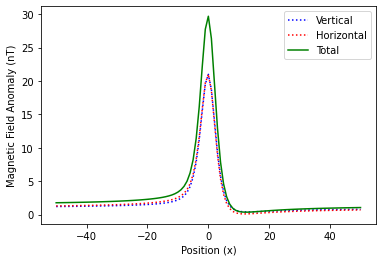

In [10]:
# to use this function:

# inputs
z = 5
R = 1
k = 0.005
x = np.linspace(-50,50,101)
inc = 45 #degrees

# calling the function
mag_sphere(d,R,k,x,inc)

### **Question 7:** 

Use the mag_sphere function to show the horizontal, vertical, and total field curves for each of the following inclinations. For each plot, write a 1-2 sentence explanation describing the information shown in each plot and what it means for the magnetic anomalies you would see at those places on Earth's surface.

>a. *89.9999° (north pole)*
>> *For 1 bonus point: Why not just use 90°?*


In [ ]:
# answer here

>b. *0° (Equator)*

In [ ]:
# answer here

>c. *45° (Salem, OR)*

In [ ]:
# answer here

Now, open GRAVMAG.
1. Make sure the units are meters and cgs.

2. It will default to gravity, but we want to change this. Go to **View**, uncheck Gravity and check Induced Magnetics.

3. Add a body.

4. From the **Window** menu, open the Section.

5. Change your body so that it is a small rectangle in the middle.
> a. You can do this either by changing the vertices by typing in the Model Table or
by clicking and dragging them in the Section window.

6. At the top of the Model Table you can enter Latitude and the Profile Azimuth.

> a. The Profile Azimuth is the azimuth (in degrees from North) of your magnetic
line. If your magnetic line trends north/south, this will be 0. If your magnetic
line trends east/west, this will be 90.

> b. For now, change the profile azimuth to 0 for a north/south line.

7. By default, GRAVMAG plots the total field values, but you can change the plot to look at the horizontal or vertical components.

> a. Open the Magnetic Data window.

> b. Use the drop-down menu on the data table to change between total, horizontal,
or vertical components.

> c. Play around with the latitude a little bit. You will see that the results are similar
to those of a buried sphere, which we already have a basic understanding of
from the exercise above.

### **Question 8:**
Set the latitude to 90° (north pole).
>a. Move the rectangle deeper into the subsurface. *What does this do to the curve?*

>b. Increase the susceptibility. *What does this do to the total field?*

Despite the added complication of the latitude dependence of magnetic data, you can see that manipulating a simple rectangular body in the subsurface affects magnetic measurements similarly to how it affects gravity measurements. This also means that magnetic surveys have the same problem as gravity surveys: there are multiple subsurface models that can fit a data set. Therefore, the effectiveness of a magnetic study depends on whether there is previous geologic knowledge of the area.


Okay, lets finally get to an example. You are in Arizona (Latitude = 34°N) at an archeological site and are looking for old buried walls. Your colleagues already found one wall, composed of basalt (susceptibility = 0.006 emu). Now you are conducting a magnetic survey to find more walls. You take 101 measurements in a north/south trending line. The results can be found in ArchealogicalData.txt. Load these results into GRAVMAG.

### **Question 9:** 

Create a subsurface model that fits the magnetic data.
>a. *Take a screenshot of the shallow subsurface configuration. Submit to Canvas and import here.*


import here

>b. *Does this single survey give you any information about the direction the walls are
extending? If not, how could you figure this out?*

answer here

### **Question 10:** 

> You perform both an induced magnetic survey and a gravity survey looking for
features in the shallow subsurface. When you look at your data, the induced magnetism curve is completely flat, but the gravity survey reveals a large negative anomaly. *What could this feature be? Why is there no induced magnetics?*

answer here